# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

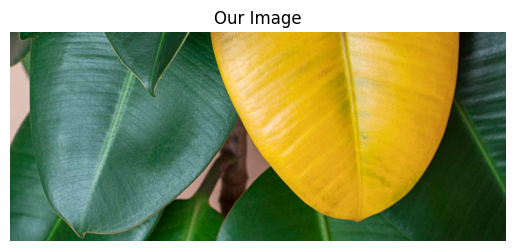

In [11]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img = np.array(img)

plt.imshow(img)
plt.axis("off")
plt.title("Our Image")
plt.show()

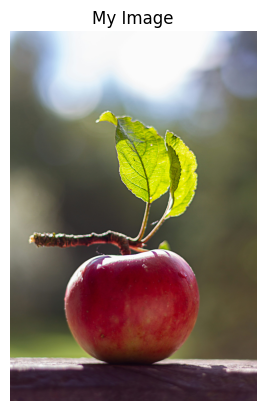

In [12]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wBDAAYEBAUEBAYFBQUGBgYHCQ4JCQgICRINDQoOFRIWFhUSFBQXGiEcFxgfGRQUHScdHyIjJSUlFhwpLCgkKyEkJST/2wBDAQYGBgkICREJCREkGBQYJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCT/wgARCBGUC7gDASIAAhEBAxEB/8QAHAABAQEBAQEBAQEAAAAAAAAAAAECAwQFBgcI/8QAGwEBAQEBAQEBAQAAAAAAAAAAAAECAwQFBgf/2gAMAwEAAhEDEQAAAf6BE9PCRkZuLGWRlmGWS5QZQskNZRSQqQqDUgqStM0BKg1cU3cWtaxbN6xTdzTdxo1cU3cU1c00g0lTVzV1c2NXNjdzTVzY1rFjdzZdJZbc6lWWKFWVQgCpZViWgqUWUBQAgAAABZQAAFAAAAAAAAAAAAAAAAABAWABLBQQAFAAAAAAAAAFJQFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEsQCAAQsgJLLJLLM51LM51LMSys51mpLNM51mskEQEpELEWyQskhlkYZGGIzi4WYuInO4jPPWDONYXM1mJBZLBmyEBKiLFJSwLKgD+n5Z7cWWUZZpliGWUuZlbJISFMkrMXUyNTI0xS6yqoqoLYSyxbc2tJU1c1Na56rdzTWsaLrNNXNLc01ck1rFNazTVzTVzY1rNl2ljVzY1rGpdXNi2F1c3NoKGqAIWWUJalFlFgWUBQgAAACgAABQAAAAAAAAAAAAAAAABEsFqAAEBQAAAAAAAAABQBZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBAAKQSAkssksszLLMy5szLKznWamdZ0mdYqZsJEpESyRbJKski5kLi5WYuImLiJhiJi80YYazjWYzm5iRlbIEFkogkQUQCFlFhbm0/pmLjtwZZGWBmZhmZNZkySS2syNTIskKilyikrTNrTI1ILrFq3NTTNW6xbNs03cas1rFN3NNXI3c01c2tM2NXNTVzTWs03cajVzqNXOlus2NWI2lzdJVtzqVYi2VVFCFiWrJVlFgoFlAUIAAAFAAAUAAAAAAAAAAAAAAAAEBYEBQAAAAAAAAAAAACgAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQASLAKEEsQQRLEubJLmyZubJGdGbmpLmpm5qZuUmbnRJCyQskLJFSQZZhhzi82ImGBhhWGVmbjJmSVmwgJUCCxIBUAlAhQahf6RlO3CYuC4ZiYuJGWJbJFRC5QskjUzbakNTJN3FKzbairci2VKirc00itaxU1c2zdxTpeejdxqtXNNXNLYTVzo1c2NayN6xo1ZY1rGpdXNjVli6zZdWWGs2W2JbZVWFohYlolWCiqligBQgABYKAFAAAAAAAAAAAAAAAAAAAASiFIAAAAAAAAAAAUAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAEgAqEQQEshLESpm5Ri51GWaZSmWaZSpm5smUqZuRJKsmTUmY1hkuJiLzYi82JWGSZYVllXPWcpElRCVBKBAJYEgUlAFlhZT+iZZ7cZlkYuIYuIYuc1JCyQsRUgqCs2lyNXItys0gpK0gtza0zS3NNXNs1c01c2tXNTdxo1c2zbNNWU1c01ZTVzqLrNN2WNXNjdzpbZcrrNjVllthdDNWVaFWWAFllCWgWUWUJVACABQAFAAAAAAAAAAAAAAAAAELLCkAAAAAAAAAAAACgABZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABLAAREsAsQICRNRLEkZsZubJm5qY1nSZuakuKRCYubGWambmpllLnI1M5LM5i83OXXOYluZIYuSZuWpmwznWc2SyIgiwELIAVKIIiyCK0lKiP6FlntxYZhliGWJWWYRJSQskKkttyKkTchdXNsqKqDSKtlQKqDSDVzU1c2tXNrVzU3cWt3NNaxo1ck3c03c03c6i6zTesaLrOo1c2NazZdWI1rNl0lltllWIthbZZQFllCWpRYq2IqVRCiAFgWUBQAAAAAAAAAAAAAAABCwALAAAAAAAAAAAAWUAAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEABBEALJLBLmxCyZubGUpjWbJm4qS4pm50kQkQzLiyZ1ipjWKmLlJhmrM5izOYYuJWLmWRIZuSS5upnWYmNZzUSIQC2EkqAAQCIRbFAi3NP32bjrxmWYmbmJm4lkZlZSLJFshdSLAFgqK0CiwKtgtzatzUtlpQWKus1NIrVzU1c03c2t3NNWE1rNNazo1c03c2NazTdzY1rNjdzZdpYusal1c6hrNltiWpVoWiFllLJVlFiqIqFCKAABYKFAAAAAAAAAAAAAAAIKQqCywWCwKlIAAAAAUgBQAABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgBEEAEssgJLmxLmxm5skSpm5smbimbmpm50kRZGbJnWaznWDOdYszjWEzi4Jm5iRlWbJc51iVmySZ1m2Z1FzNYyzLIksIFiyJKIACAQIslFIIstX91lnpwmWZWWYYuYZZlRmUhblKqC3JKi3VzbKlW3NsqE0lqoNJatzbNXOgKos0g0lS6zTVzqtXOjVzU1Zo1c01rNNazY1rNN3OotljdzqLrOpbc2XVlihdCWiWhalgJaJVlAKBYUIoAAAFlAUAAAAAAAAAAAAAAAQoEoEFQUIsFQWAUhQQUAAAFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQRACkRBCQ1mSysy5SZsrObmpmys5uakudJnWSZ1gmbmyZuazjWTPPeU58+nNMZ3lcywkuZqZ1iJmySSy6mdZiZ1iJLJZLCShASwgiBZYRLFsIIKiWwP3OLnfGZZGUiYuc1GZWNZlIqxKsCwKlKlq2KpQlS3NstzatzS2Wy2KtlLc2y3Nq0S6zTVzqtXOjSVNWU1rGjVlLrOjVlk1rOltljWs6i6zrNtljRZaFtllWWVZVWWAloUIpQAFCKAAAABYKlAAUAAAAAAAAACUAAAAJQSgCVAUIBSWUAAAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEsASAgAsksJLmxCySys51lMyys43ms51ms51i2SypjUrOdZM51kznWbM43k556c7Mc+vM546YTE1JcyyWY3iMywzNQznUXObIzNZhLFgIsIIzUBAuQCVFWISyEsP2+WNcmbmJm5lZZluLmEiUgI1aLSGalhYrVzTTN1NINILYrVyrVzU1c2zUKtzTSWzTNs1c6LrGk1rGq1rGjVza1rOjVzqNXOjdzZNazV3ZYus6jVzqNWM3VlXSWW2JbZYWVpZYBaM0C2UABQhZQAAAACoKlAAUAAAAAAAAAAAlAAEsKgqUQFgVBUFQoAAFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACASxEsApERLCQ1JLEkSpnWUzLnSY3lc5uambKkSpnWSZ1ms51kzNZMZ3izON5OeOmE546YOcuYmbCYsmsy5RAzLhWbIksGalhACSwQhLBEUVEsBJbLIFP2OLnXKRIYuZqRM2RIkSUKrNKNAoSKC3KzVyNpaqWy3NW3Ns1c2zSWqlsqC2K1c1NXOrNaxo1c6s1c2tazo1c03c6NXOo1c6NazY3ZZLrNl3rNjaWW6zqW2WFlmrZZVlFllJVolCLYKAFCAFAAAAAABYKAFAAAAAILLCkFgoCAAAAAAAABQSgAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEBEAgBLEQRLESxLCRKkuSZudJm5Jm5qS5qS5pmwmbKznWTMsM51DnneExjfMzjeE541iGLlWbmVmwkEzLlc1IysqBUQSiSpYJJLBLCFICLFCEsj9hlm82bmJElmbnNkRUSWoFirc2ykrUFClhKlTVzSpatza0g1c251rKrZdSpQWrZUtitazpNaxbN3Oq1rNNXOjWsaNXOjWs2TdzqN3G4us2XdzqNWWW6xqXVllWWLYmrZVWWAWjNWC2UAACUCpQAAAAACwKhagqUAJQAQoCCoKgsBYFgqCoLAAAWCwKlAAAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABLBLESwCkRECZssQskSkQkSpm5qS5M51mpmypmypnWSSwmbKznWTOd4M43gxjeExz6c5OeNYXOdYhEVAmbCZ1DMsMtSoJYsiSwZohISwiwSiAgUIllj9ZlHNm5VlMpm5moQRJSUshdM2y3NrUlsWUIqoLZS3NS3Ktaxa1c1N3Fs1rN1Lc2rc01c2y3NrWs2zdzo1c6s1c6NazTWs01rNNazqNazZNaxs1ZctazV1rOs1rOpdWWFlltiW2VVllBaM0CgoAAlAWCpQAAAAACwVYFgqCpQQAqCxSWACwAAAAAAAALFJQAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEBBEASxEESyQsRBmypLkZuKZsqRCZuambKkQZstkuSS5SZuSZuaznWDGNYjPPfOTGNYMZ1lWaEuSSwksJKrKwiomdZICSpZnUiSiAiwSjKiJZZNI/UxJiRlblMpLCS5WSyVLJVgtyrSLKlKloEWLbZUFpZUqUtl0tzpNXLU2izVzatizVzqy6zbNazpdXNs3rNNaxqt3Okus2Xdzo3c6k1rGo1rOsrrOl1rG8ms6mrrNi2WWpZbZWghRaJQi3NKAFACAFgoAAAAAAUCwKgpCxSAsAAAAAAAAAAAAACgAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIQEQKREksGbmxCxm5pEEQzE0kuRmwmbmpnWSZspEtkQkuTMuUmNZM41gzjfMxjfPLGN4TGdZWCosiZ1DKzSSjKiAzNQzNIznRczUiKXKxIsiKJLASVLI/U5SZkSJLJZLCSyWSyWBQAKiypUrK23NS3NKlq6xqzUlKStWLNos0mrLc60qWy2Wrc2zWs1NazqtWWzVlrWs01rOkus6l1ZTW8ak1rOpdWWS7zqW6zvJZqW6zZaWVSWlaWWCVVlgJVlFAAFCAAKAAAAAFAAAWAAAAAAAAAAAAAAAAABZQBZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABLBASxAqZsSQJmzUhERKmbkubmmbKmbkS5WRLJEWZ1moQmdZJEJjWTObkmNYM8+nOTGN84zjfOs51kRKssjM1Kyqs2wiwk1DKwzKWSjM1EipYsiTQw3JcKM0iWSP0ubM5ZSVAkSUiVLCBQqUBEsBc0qCs2zVzTSLN3FrVzauosaza1c251c6q2NTSWrc6s1rOkus2zWsardzqrrOk1Zous2NazpdazqS7xqN2WNazqW6zrK6zZrWs2LZZVJbZWlliWValyBVlFgoAUIAWCgAAABQAAFgAAAAAAAAAAAAAAAAAAqUAWUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIEgEssmbkRLJEsRBm5pGREpEtmbBm5JEGUpGREpEJm5JnWImLKmNYjOLiTONYM43zJnUtkWpLIksoLIsqKJLIksMqrLUIslk1CTUSFlysjLUiSxc1mP0cs5zMCEEslSyWAixQqVEsogIJbBFirYLZbLrFs1YraLNIrVzbNaxrU1ZbLZdS2Wt3OrLVstlrWsaNazpNazotlNazqW7zqS6zqNazqLvG5brOotlzdWWW2WVSWhbYlAtllCUUFAAUIAAqUAABQAAAAAAAAAAAAAAAAAAAAAABQBZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABLBASxBKS5SRBmyzMSxEpi5ESkRUS1m5RlCRFksJmypLkkuRm5Jm4SZuSY1hM41iM5uTONZrMstiwSwksAsi2pKMtQysWTRMNDFpczUSTUM2ozNIzNRZncjGeiX7sTjJLLWbIQlELIUsAIKsogRBZQAAtmmbcq2ls0jUtlq2WzVzqy01NWXU1c6s1Za1Zatls1ZTVmkus6NWaLc6l1rOpNazqNazqLrOpdazY1Zc3VzqWhbZc2pVolAtllJZQq2WAAUIAAWUAABQAAAAAAAAAAAAAAAAAAAAAAFgoFlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAQBEQEpm5SIJm5skSxlm1EEikRUZpEJEJGS5CRKZSGUplmJlkZZJm5TONYSZubcZ1myEVLCSwCosssoFMtRcrLJKIoy1DLSMzUMtDM3JcNQzNSMrMvtQ42EISEJRKXNUQsogKirEgAAAC2VKXUqUos0l1NJa1c61nWs61LrOtRqastmtLrOi2WzVzous6NazU1rNjWs6XWs6kupY3c6i7xqXWs6i2XN1ZZaJbZZaFolBbZYCUKtiKAFCAAFlAAUAAAAAAAAAAAAAAEBQAAAAAAAAKACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASwQBEIESyZuREJm5skSpm5q5RUQRKZuREJEqRFZsSRFZsJmwznWEmUMzWCY1is51lM51ipmwyq3M1JMqM2yiqgQKAk0MzSsqMtDLUMtQyqMzSMNQzNSMLI+us8umbLUSEsAUlBKWACywASiFIsChZpBaCylpZbnQ01rOrLqa3m6mtRqXS6ztGpbLVttmkalNazpLrOous6XWs6k1rOo1ZYu86lus6ytll1ZZaWVZZaVoIFVYzVBZQUABQgABZQAFAAAAAAAAAAABAUEABQAAAAAAAAKBZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAgEsSEqS5SRCS5JnWLJm5tZSkZCBLkSy3M1kkQkuaksMywksJm5JnWUxLDObKzjWTON5sznUrE1DKwzLFiwLLAIqyKJZaiiTUIoiwSiLCTUJKjM0MTUyxNw+pLPJpEVAgIFssCyrAAIKSWhJS1KQBZUpdJUS2WrZblqXTVzq53Zrc1rOtS6zqrrOtZupatUtmhqUupotmoupY1rOkupqLrNy1rOl1rOsms6mrVlWWWllWVQgWUsloBQUABQAgACgABQAAAAAAAAQAAAFAAAAAISoKgoUABZRZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQSwAhERLJnWSZuREqY1gY1imbKksECSxZLKksMzWTM1mpLCZ1CZ1gmbEmNZrMuUznUMZ3is51mzM1kksXM1kk1FyqyASwCwAWooiiKJLACKJLCFMzUMyssrI+jDx7RASgWBEoRbZYCwAAqUACFlpYsqUWNRrNLZbNWXUupbnW8a3NazrU1rOtS6ls1ZqrZotmi2aLqUtmotWNWakus6LrOs26ljVmpbZqW2WVSW2WVZVCFllsqUBYqiKAFACAAFgoAUAAAAAEAAAABQAAABCwQAAACoKlUBYKCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASwQEsSEpm5SRCRBm4qS5qZuaksJLBLFRBEpEJLmpNZJLCZ1mJiyyZuUmdZtmdZsznWDOdZM51mxmy2SjM1mMyiTUILIogAoKqUFJKIBKIUyozKJLCCMzcj3RPDuxKqBLLZYABCigLEKABZQIWWgqoSixZbGs6s1c61NXOtTdzrU1rOtTWs6su861Naza1VLZotmi1YupS6mpLZqLqWLZqNWWXVll1Zc20W2XNWVVFCFllpJaAKohQBQAgAACgAAABQQAAAAAAFAAAIAQAgsCoKlAFgoUCgoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAQBJLBmyyZQZsJEqZuSZ1ipLmpLCECFRBLKkuREGbkZZGbikRGUSRKkSs5uUmdZrMKmbBLCS5iBZLCLLCxSEAssqpasBBCxQIssiyIFQSSxYI9kPn9CUDSWQCgCBQCpQEWpZFhVlSoqpbALLLNJaVdZ1ZbLrO9RvOtTWpdTWs61NamrLrO6tUupUtVbVi6li6mktmpbqWS2alupqLZc21ZaFtlzaFUUIWalSyWgCqligABQgAABZQAAAAAAAAAAAFSwBAAIBYAAAFgWUAWVQFCpQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEAREESpLhEQRBm5qZSpLmpEJLCEVARBEpm5CZLhBm4Li5sS5Rm5pmysy5smbkmdZJmypNQkuYRBLFZogEqohFBKqUCWpNElCWUgJNQgWSwksEtPSl+d0iCoqwoQudQCiVahLCrLCwhYKhdQstzbKUliy2Wy3OrNWXUus61N6zvWbrOtLvOtTVWzVmq1ZTVmi6zqNXOi2WNazpLrOpdWWS7zqW6zrK2WXVlltllUloaogC2WUJQAq2WAAUIJQAAACoKgoAAAABBZQlBCwAAIAAAAAAABYKlFgoVZRZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQsBARERKRlGUEQRKkZpGSS5pEJARFQGbkRkSQZZq5kS5mSyLLmBEplKmbEmNZqZsEQksJLCSlksEokoiwSywlBCyyyxQltBBCwJZFubEQEsWCPTE+d0pKqCoqwoigKgqCoKlABCpatzSpbFlqhFitWW53Y3Nal1NbxvU1c71nWs6rdzqzWs6q6lLrOjVlS6zqW6zTdlku82XVmous6i6zrK2amrZYtlmlWFlaCBVUlCACqWWAAUSFlAAAAAAALAAALAsKgAJQgFEAAAAKAAAlIAAoFlVYKCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEKgIBEsQIpllLlkRBGauWSxmmbmkQkQRksZLGSyQZYq5ZEmZbM5SyZrUzLNMrLGaskq4QZQksEIksJC1AhCxCwAREAogLAKAAXKrCRELItqJEsAXvLPm9SNQCoqyyhahCkKgqUELLC3NAq2DTNsazoKsmpbLZrUupdZ1qa1LqXc1qasupqtazqzWs6q2aGpU1ZoazqW6zou82S7zqLqWLqWXWs6yamppqWVSW2WVZVCFWUJQAqiLKAAVLIUAAAAAAAAAACCoLAWUgAAAACWgSWUQLAWCpVACKlAKFWUWUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQCARLELEqxlLlkuUEZLlmyyS1GS5SkkLlkskEkLJC5kq5mS5kGWYZmS5mTWc5TbE03crNSZ0skLJBKMrCLCTUMzUiZ3lYSgSAEEASiBYKlAEsIsoQIACUgBY6xPndalJZKosXNoKASqIKlCCoWpUJSirZbFlq3OkWasal1Lqa1nWprcupqy6m9RqXU1rO6us6LVLZpGpoVYtmlus6ku86jVlzbqaLqXNus6ltlltlzVFolKFllJZQFloWAAAVFhKAAAAAAAEsAAAALAAAAACgCEAIKgWCoKlKlUIAoFlUCgqUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIBABEQKSRLMwskLJmzWZk1mSrJFuWaskLJkskLmQuZKuWTWZC5kRJlWWJLmYLlguJmKzK3MrN3F0sjSwEAFSkk1FSySZ3DOd4WLEk1miwSiSwSliwSywQVCwEBEKQpCwCUXI6k+d1sAgpKWLKlqwpLKsFWCwALAtgtzbLSxZS2WzRbLqa1LZdTW8b1nW8b3Nazqy6mrLZrS6zo1ZS2VLqUtlNWalupZNazqXVly1ZqNWWW6mpVmpVlzaGqIWFtliUlCllFiFAFAiyKlCUAAAAASwsAAAAAAAAKESoAEAQqAACoLc0oKhalhZQCpVWC2CgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQEARCASxJkskpMxLlmyyQszmtTMXUzld5zDUzDWZk1M5rUzlNZzDUxK3nGTc55jpnGTWZiNZzkuc5i5zJawTd561OjN2tiqKSgBYUBnUkksJnRcLEypZLLCwSwiwkoiwQIFEQlqALCKEoCWTUTqj53YSwAgqNQg1ErSSqzqrJYWKqFqUWVAq2WxqDVmrLc71NWXUupbLvOt53rOtTWs7stl1NWaq6lLZTVlLrOktmpbZqNWWTWs6XVzrLWs6jVll1Zc26zqVVlFaFiWFtJZSAFlAKlAAVCAFgqUJQAlAEAAAAAKAJUELAsAgEKgACiEoUAItzSgqFoipQCpVqUWUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQEBLEQEZsuUGWbLlmxJBMyrmZWzMqzMN5zk3nMNTENzEXWc5TeMZrc55OmcZTpnlI6Z5DcxldzMjWGRhnNuZIA1rG9zVzrc1ZdACwWASWoLLkRESxZKkkFkssBWdZQQQpLBBSAQAssAQQoAWCToPn9ZCrEKgsSqiqgtzK0gqWypFtiqzoqE0zTVzbNCtazdTWs7sus61m1dS7zrU1rO9Zus601Zqy6zqrrOi2aGs6LrOkus6lus6i6lk1rOlus6y3ZZdWXLWs6lazqatllWVQgFtlgllACqIqUlBLChYIAAAAAWAAAAKABBCwBCoACAAKIQKQSoKhdJYCW3NKBRViKAFoKlKlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEBAQRARLGUJJLGbmxlimWS5YqyZLmZqzMWzOTUzk1nOTecZTeeeTpjng655ZOueUOk5jbBdTKXUki5QZslmdSIpNWa1Nazvctl0ASwLIRSASyWSjMssSyGdRZLEiymaICAgWLKCIKgARKlAiyliRLJesTwdBCoCNCAASqgqK1ITUlqpSwLYttzU1c2zVlrVl1NazrWd6zqzRdS6jed7xrU3c6rVls1rOq1ZTVlLZotmotzo1c6jVzqNali6mo1ZZdazrNupZbrNltllWVRYgW2WBJaAKqIoKgLAColAAAAAAAAACgQQsAgAIAABLBKoRAAJQAC3NloltzSgVJbZQBYW2C2CgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEAQQRLLJmwYubJLmxi5qZuSZZplmmWSZuRllUQkZJm4GLgmLhJm5WSwgIoglSiCEoksWZ3Iy0km5rUupdTQ0CgiTRYBLIksEQSwSiSwksICEsSiSiALFiwAiypQCEokoSolhdDwdISrJUQEKsASgFgpKqC2CoNJaWVLrGrNWa0usa1N6zvWd2XU1rN1LrOtTWs61N6xtLrOtS6zqtWaLrNNWUus2NXOjVzqLqajVmoupqW6zqNWazbZZbZZbZZVlVYhYW2IolACgFgogAAAUhVggAAAAUgoAEgIsEsAFikEAJbEASrAJE0zSpRYWiGs2WiW3NKBZZVlAVYLYLYKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEBBLESyxmwmbmyS5sZuambkmLmpm5qZuSZuSZ1lczWSZ1kzLkzjWTONZMZ1kznWSSiFJKMiWVSTUiLCNQipcrEtmrLqWrZdQNJUlSiLIZ1kSwi5EogJLCSxEFQsilysEpIpYsIoixIozVM1FsqEsUATwbCkBAQoAihDUBYKiqlALc0tizWs6sus60us71NbzrWd6zrUtl1m7zdNazrWdazqtWWzWs6rWs6NWC6zotli6zoupqLrOo1rOo3c6luprK6lltll0JdJZalUIAWWWpVCCCgClgqWAAAALBQAFgAAABBAQEAohCWhEqASrESxCwQiqzSpRYl1c0qWW3JdDNtzSgqJbZQFWC2C2CpQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAQIRApESS5skSyS5qZuRi5SZubZm5qS5MywzLLcy5JnWTOdZjGdZM41lM41gmbCBQGdZlRSKAiAASiAazTVludDSisqWLBLJJLFgIsIsICSwhBKSSy0sJNQgFkLLAEShLFS0zNRAhLFBUs8HSEssBACiAilgsRaEAsCgqWy3Oi6zrU1rN03rOtZ3rOtTes61LTc1c7sus61m7zqtWaS6mqus6LZTVzTVzous6jWs6i7zou86zbqai6zqNWazVlW0ltllAoUIBaIqVYqCCpQABYKAAAAAAAAAQqAgsBKJLLAsIBKsRKgIQkrUiwQqCpS3KNJVtzZdJZbc2WiW3NKFqItgoFhbYLYKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAQEsRASyxmwmdZskubJnWazLlJnWaznWbc51DOdZrMsMxCZsXMuTOdYTOdYM5uTOdZMzUlkoiwksglUAsgpYBmiBFlNazq5tl0UqLFhIS5hLKQIEgWAysIuRKSLKiwSxYpEsUsQFShLBKIEIludQmdCSzwdUssEEsoAKhSAEKgKIsKlKKtlNWW53c61NdOe9zes63NazrU1ZrWbrG6updTWs6s1rOk1rOqus6LZS2Uus6LvOous7i6zqXWs6jWs6jWs6zbqWVZS2WVZZalKlUIAWFqItgqVYqIsKgAqDTI0gqCoKgoCCpCooAAICpCxLESykRLCwkNZssELESyStMjTI3cWNXNW3Opbc2XSWW3KXQltzSgWJalKBYW2C2CgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQEAQSxAqESEqRLmSysyxM5sJmys51m3MuSZuamdYJm5qRCZuTObgmbmM53gmdSMzWVSwSyJLAsUsLKiShLBLABZTWs6stl1Gs2ksJLIkoksICSiQEsEFgIESiKXNsMrCKpLESoKtgJNQikgiLCBck8HVCxLKlQssogqBZSAABRQEWUaitazbN6zredbxrU3rOtzesa1N2XWdazqzWs3U1qU1vOqus6q2aS3NNXOi6mous6l1rOi6zuLrOo1qWXWs6yus2WgtzY0llqValFhaAIACWpRYWpSLIAAAAAAAWCwAAAABLBALISkuUsLESwQsRLGaqQEsrNKg1cWXVzTVzZdXNl1c2XTOltyl1Yzbc0qUBalipQFtzS2CpQAAAAAAAAAAAAAAAAAAAAAAAAAAAABAQBAEgEssRBmyySyyZsqZuUmbKmbmpixZm5qZ1ipEJi5Jm4sY1gYslzLDM1IzNZiZ1FksIuYiwQVZYSiBUsIsRKVZUus6s1c2y3KqlqSyJNRcyiSwQIokBKJLCLEBYqkIiiAkqwFQAgCBGdQiwgXBPD0ELEqywAhREqkLLCpZYLFg1AtlKK1ZbN6xvc1rN3jpcb1N6zrU1rG7LvGtTesbrWs7stlrWsaNXOqthNazo1ZZdazqNWU1vOsrvOo1ZZdWWNXNlthKF0llqI1c1alFhalgAAAFqIqCgBQAgAAAAAAAiwQsKBBBLmxLLISwkSySrILEsJCySyoNMjbNl1cjdxqXWsWXdxqW6yl1c1brKNJZpYjSCgWJdJRYW3NKlFgqUAAAAAAAAAAAAAAAAAAAAAAAAAIBCwCARLAEpBESyS5sRKkZRm5qS5qY1gkuambmplkYsqZuVzLlM51kzLCSyWTWYk1kzLIksJLJZLEFalAISiBYEillQ1cmds2zSXSgiiSxYQksICAQEBLBKSKEsEohBLKKlEAEsC5CxIQsuVEjBPF0ubKXIqKsgVACyyWwsWRaRLYKlLZS2NNXNs3rGrOmsa3nWsa3N757ud7571Nazqt6zrU3rOq0lsus02lq2VNazqXVzo1rNjWs6N6zrLes2XViNazYthdXNigtzTSJbYLZZagoVYKlgAAAAFAACFgqCoKgqCoBCwsAAEBKQSS5uUSkZsEsskLJLKgSRNMq0iLYXVxTdyl6XGpdXGpdXI3c2XVzZbYltiWpZbc0oFiW2Chag0gqUWCoKlAAAAAAAAAAAAAAAAAAAABCwEAgsEIABLEQsZsubLGUplEZSpGbGbkmbi1GbGNZqZsM51KznWVzm5JnWTMqMzUlmdZiZsMyyJEESUg0halAAglJmhElAWWy3NTVzdS2KqWosiRBLCSlgIBKJLIiqBEBLFSwECxACUJCwAIQAkIwk8XawsRCggoBYUIEKBFAKLLZRZabxqzWsb1nW8b3NXN3N7xqzprGrN6zrU3rO7N3OqtlstlrVzTVlNazo1ZY1rOjWs7lu86jVlltlktg1ZZViNXNKCoNXNltiLc1bYKlVYKgqWAAAJQigBKIogAAAAACKsARBAksRLJEskSxksRCxlNTKrJCoW3I2xU2zZd3FjdzV3cal1c2XVxTdzZds6lqWVYNJZaiXSUWFtiKFWCpRYKgoFgqUAAAAAAAAAAAAAAAAAQBAQsEIAApBEQEsRLGbmmblJLKmblGbmpmysxKmdZqZ1DOdZqZ1kzNZXOdQxN4XM1IwqM51kzNZjObImbCQlJRZVWBZYlgJSZokqWKoJFkrdxqzVzbNQqxFZ0TMsGdQSxZQQlixIAESrZKICLESiLBAAiyEKElSxJKXnE8XQKSwECwClzSwlACpSLKAstg1YstlrVzrWems3Tdxred6zqzesb1N7xqzprOtTdlq2astzbbrNTWs6NWU1rOou86N6zrN1rOi2WW3NNXNk1c2W3NLYjVzSgqDVyl0lGspdILc0qChQFgWCwAAACCpQAAgqAEQCCoCSxEsRCZubGbi5sSrMytTMKkKySoNSDTJd3FN6xTdxZd6xY6M2XVyl3cU3cal3cJd3FNXNltiW2JdM0pVXNipQFWCoKBYKlFgqUAAAAAAAAAAAAAAQEBABEAKEQgQESwSxlKRlESxlkRmrlmmUqS5pEJLKmdZMzWVmbEzLFmdQznUlzNZiZ1mM51mM51gksMypYFtzSpRYgAhQJLAASLES6xqtXNs0iygS5BLUpJLFssWKJLJIoiwBJKWLCLKJUIEsAIsICKjMoSxeI8XQSiCwCKssFAlJUVUiwKCpUWWrYstlrWsb1NazrWdaxrc3rnuze+fSzfTn01NbxuzVl01ZbLSrc6Naxo3c2Nbxs1vO5dWWNazothbYjVzUtli3Nltg0iNM00lFg0iXSC2CojTNW3ItgqCoWoSoVYQQqCoKgqCoLIKgIsqQ1JDWUsRBEsmbmyRmxJKskLESyAkrTItxTTNNXFjdxV6XFjpcVd3NjbFl3cWXdyN3KXaDdxZds1dJYqWW3Nl0zShViKgoAWoKlKgoKgqUAAAAAAAAAAIAEAQBEAKERLBARLBLESmUSSyyRmmbCZsqZsqRKksGbKkDM1kmdZJnUXMsJLCZ1mMzWYmdZlznWYznWTOdRcqIJQCiUIsggJSUliqysjKwXNTVzbNXN1KgslolJKJKIFAk1CAEkBUBKqEEpIpYRAEoksEsEsiFOMjxdRKCiBYACgiWwEoAWUWC2Lm3OrbZbLrGrOlzrU1ZdzWsas30571np057rpvGtZ1rOq1Zatlstza1c6jWs03vGze8bzdazTVlW3NS2JbYNok0lltzSpSojVzS2CpS3NipVqCpRYioWpRcioKgqQqCoqoKhKiKi0RKyLISoqyCxBEGbmyRmyZudSRAksqQsgILILcjTI2zTVxqXdxTprnqXdxo1cWN3Fl3cpd3GjTNNsWXWsVd652OjNl0zqWol0zTSChQioKlAFhalKgqUWCoKAAAAAQqAAgAIARAAEsEEASxLLESpLEkSkRJmyyZ1lZLKzLKmdZqSxJLLZLCSwzNRczUTE0XM1kznUjM1mXE1mMTWYxneDKxZKiLBRQCECWASlhSLCTWYzNZioLc6stzbKilzbLCrLCWiBUsICLBLJAUCCyLBKhCrmiKJKIQSwk1IkpfPLPH0IAoQWACxDSFsRNQlCyoloSirYs1c2tWLOmsb1NXOty6zbOnTnq569Oe9TprG61rG9TaWtJaWVNazTWs6N7xuXe+e5dazTVg1c0oipTSU0iS2FtiLYSpVtiNIKCpSoi3NKlVYFiAtBABCxCoKgqCoKkLEssAQqCxCxCEqZ1lJm51Jm4qRLlELELICCxCorSSNXNNXNNaxZelxV3c2NXI3rCOlxqXSF1c2Lc03cWXVzTdxqXbNl0g0llqJdIKlKhaAIqUAWFqUWCoKBYAAAACAAgBBAAKSxEBAEsCySwhKksSSyyZ1mySwzNZtzLLMrDMq3CyySxZKMrCTWTM1FzN5M53kzLIznUjE1mXON4jOdZJKXFsBSKIqMqWKMrIlQTUUCSyMzUjJCoNM25qStXKtXNsqC2KASwSwBYJJYAJYoBLAQoJKEsEQSwZ1BLI80PH1sQqKEKgsCoAKgqBYKiWos1YNWC2XUtls1vFs3rF3N6zdTpvnu56dOe666xrU3vnut3Ns0jS2E3rns1rOjpvG5dbxqXdzoqU0g0lSpZalNXKNJUqUqJbc0tzTTNjTNLc0qUAtyNM2NM1ayNSCoBEIqwCCoLcioLEKyKkKgqAkLGbGbiri5smbipJLKkSyCyAkt0yTUg0kjVyN3FN3GjVzqXWsF6MjdxqNa56jeudl3cVda52Ns01rFN3Nl3cJelxTbNl0zTTKXSVaiNM0tzSpVCKgoFgqFqUAAAAEKgBAEAAKhEsBAQsIsEEKZsSQqGUZssksJmypmypLLZLlEspLFkokoysJmwmdQzLkzNZlmdZjObmWZsjMsMyiSiKUBKlixIslijKlgJNSJLkRIkuYlgqK0zbLYstza0lsqAAgsLQkgEsEoEFigJSIKiwSiSwiwk1CKjxo8fWwoQsAlQRagqCwABCkNs2LZatlS3NrSNTdzbN6xrU3rGtTe+e7OnTl01OnTl01N7xqt3NrSXUWDW+e01vGze8bl1vG5dWUqUtgtg0g0iNINXNjTNS3NKiW3I1c0tzY0zTTNKlAKgqCoKgqAgsAkNM0qCoLILECCxCopcixBEGNYsYubJi5qRLkkBCyKsgrNKkNM0tzTTNjdxTeudXpeeo3c1brFN3Fjd56XdxY3eeo1c1dso3rFN3Fl2zV3cI6Ml2zY0zS3Jds2LYltg0goUIWCoKgoAAUEAQLAAEqoSxAQEssKQQkqxCxERKESS5sRBm5qTWaksJLKksIsqSwSwSxUsJnWTMsjMsM51mWY3iMy5WZsiZ1DIIApYAsIIglSwQIshLkZslkQhIkRbYRYS2NLrNq3NKizUSrBALJQgsAKiggoIsAIsIBAhISwCPEPJ1QoEIWxCgQACCiAAq2WLZaWUWLNpbLc6rdzdZ3rGtt7xu5305brr05ddTpc61N6xqqlpYsvTntN6xuXe8aN7xuXVzotgtgtgtgqWKlKC2I0lQBYltgtgtg1JY0zSs0qUAAEKgJDUgrItkNM0rMNRCxKqSKkrUgqCyQRBlLJm4pi5szGbmyCsis0sgqCyC3ItyNXI3caNXFN656N3Fl3cVd3FNawjpedXpeeo1cpd3FN652OlxTdxY3cVdXFl3cDdxV2yNs2NXNNM2W2JdILYKlUAIAAAsAAKEKhBCwACSywsQEShEJCxKBEQZssksMyypLKksJLKS5BKSxYBAysJnWTMsjOdZMy5lmbIznWTMslkoysIsEoLFLIiwipcyiSiSombCS5lkslysJKiSohC3Ns1rF1Lcq0itM0qSzSRdZGaiqgBbBCCoKgqAgsgQICEgI8cTy9dZBZKqAAQpCywsCwKgtlhc2rc0tzbLYNJU1c3TesXU3vnvU3vnuze+erO3Tl01Ou+etTprGqo1Klq6xpOm+e5d7xqOm+ejesbVQUALc0tzYtzS3NLYjTNLc1FgqJdINM00zS3NioLcjUg0yNMjUgJCoLAINSDUgsQIqyCyCpDTIsZLGauLlGZmmLixlmzUyKyLcxNMjTItyKyNM01caLrA3cU6XnTdxToxV6XCXdwN6503rnY3cVd3Fjeudl6XA6XCOl506XnZdsjdwXpedjpcDdxV3cWNaxTSJdIl0gqDTNFgqCoKQqCoCCwBCpLKiiEsQIohEgIoEIGbLJLBm5pEGbKQISmbBCoQi5KRWbCSyJm5My5iZsM51iGblZLJYCAk1BKLBbCIBKlzNQyoysiZuYZ1mWS5ERUqMqjMoINXFTSTU2yrUitISpaIKgqK1IKhLAIWyVKgsBELEixFQJYl8cPNuwCUQoAQqCoKgVCgWC2C3I0lstzYtzbNWWrvGrNazdt9OW7nprGtTr149LO2ue9TpvnvSiqlstzqzfTnuN6xqXpvntd6zotlFlEsKlLc2Lc0qDSDSDTNioLYS3JdIi2C3NKQqIpKqCpC3IsQpCyCoKiLEqxCpCoEKIKgRBEGLlJm5qY1izObEQoCAQSxQQqVQSoNMjdxotzTVzo1cVdXI3cjbNl0zTVxTpedl6XFjdyXdxY3edOjFjdxTdxZdsjdxo1rFl3cU3c1dIjSUqJdIKlUlgACoAACLLILCgQgRKIQkLEoEJCs1CKQEQkuaS5pLCSykuRLCEpARACRBLFznWYznWTMuYznWYkuZYRYogIsAJZVSyIASEsWUjMsJjUlkIzNZJCWSwgiSyE1CENMk2xa0zbNSK0yrTKzcyNMrdskqEJVIKzZFytqEqSLILILIlJJfLK4bQoIiiCgFgsAlAFCUCUqUslS3NrSDdzTWsa1ndzdTe+e66b571nfXj0rtvl01N9eO9ToKCrc6s3vnuTes1em8bXesbjVzVtgCxSFlFgoKCoKiNQKgqUqI0zS3KtIKiKgqCxCpDSAgqSWoKys1IlIsJRELCglJC5sEZRi5GLixjXOyEsWCxCwUEIKgqUGSoLYNXGjVxo1c00lrTNNMjbNjVxV1cU3rnY6XFXoxY3cU1cVdXNjWuejVxY6XnV6XnqN3no2zTesWXbNNsU2zZdIKACoKiWoKirBABCoEKRERCxKBCAkSxKAIAEZpAksqSwSypAgISoQSwQERWbmJLkmdYiY1mJnWVmdSXM1CKJKJNCASwTUiSxQiKXMombIzNSXOd5iZsiZ1FksiSpc0iLCLEksglKza0y1NSCkq3KzSC3KqgrJNM0XJazYIqyJLEWoCAky88OWwCCwApKIBYKgWCwFgqC2CpUqDVlLrGrNXNs3rF1OlzrTe+e7N9OW7O++XTU305b1Ousaqo0thN6xo6b57N757Om+e5d3NW2CkKBZRYS2C3I0gqIqCgqCoLYKgtkioqoKgqIBQCAQqICiSLCgEAgqBEEQRlJlkYubJli5rNWyEqKWCwABCkLAJYCrYLZTVzTbNTVyXTI0g0yN3FN3FXdxTdxTdxZd3A3cI6XFXdwjeudOlxTdxY6Xno6XnTpcWXbNNXFl2yNs0txS3JdMjTNKgqCpCoLISyQ1kohCAyssQIBCpCpK1IEBCpLkCpLkSwgqSwSwgIuRkJLmWS5JjWYmbIzLlUIkpYUiwiwSiFJLJUsCyIsWSyJmwksjM1JcLIksWZ1nKSyBFEhLBnWYhCoLcLNMq0yTcza0yrSRNMq0yjTI0xa1Mo1JK0yisiySNMorMXkkxqpaILBAUAQqCoRc1agAqCoTSU0yNXNs1c01rFrdzqzdxrTprnq56dOW9Tt049LN7571O2+W61Y0os1vGjpcbN757Om+e5d6xpdJQACpRYSoW3NkqDUKqIqCoKBYKIAIKgqRdMjTKKQqCyCoUgshKzSyCxKqJbILkREGLkmWbJm5TMZsXKtRDUIEqoKgWEsgqFAWC3JNXNTbOi3NttyNINM0qC3FOlxTd56N3Bd3I1rA3cJel56N3nY6XnTpcJelxTpeejpedjpeejdxTdwOlwl2zTTI0gqFtyNMo0yNSCooRKgRCxEIogubAkqxCsioCKqQsQEpLBEBKSwhCxBLBLkhIkuVkZJnWYzNZjMslSwSlgBCLAogWLEiohFSoznUiZ1FmdZlmdSMzUMzWcpnWZYSVEgSEsECEhEggrKtMk0zdLcU0ySs2qgqQ0yNMioFyixCyQskisoyhoKILJUELLCoABFoKhAWwFg1ck0gtlNXFs3c01c3U3rGq105b1N756s69OXS56b570675bs6axrSpa1rntOmsaN756Xrvl0jesaXVlFlJQWCoqoipRYKhKRdQKIqCoKgqCoCCxColqEqFqEqAhbm5SoUEQWoSpCxFERLFmLhM5uUYuEkLCFqEWKqBYKkNRCoWoSoiyUqCos3cU3cWzTNNM0qLaC3NLYNsjdxTaValKg1cU3cWN3FN3BemudjpcU6XnTprnY3cVd6503cWNsU1cjSC3I1cUtyNMjUzTUyNMipCoLILICSrELELEqxEsQrJakqxCoLIssRQICEEuQQSwkSJLlZm5iS5iS5ISVLAFhSSiSiLCUBISwEBJUuSSyWS5iSoksXOdTLEszZCWQhAiwgJLImaiCVmwESpK0yNMk0yrczSsrNMjUg0zI1JCoWySLEAMI0sAgqCkKgrNCVRCgWEEKlLAoLZSpS2LNXNNXNrWsas3rnqzrrnuzp0471O2uW9O2uXSzrrluujNrVzbOm+ejprns6b5bOusaXesUtlFgWCpQgtgWCoKlKiKgqQ0grI0yjUgqQqUBQLEKgqAkLEKgsAlCIskWoSyQ1mQmLzZZuazjWUliqiLCqkKhKgqCoCUsJbISsi3I0yNsaNXNs1cK2itINILcq1ci3FNsaN3FN3JdMk1cDdwXpedOl506XA63nY63nV6XnTprnY3rnTpedN3nY3cF2yTbFXbFNMjTKNMjTCtMjUkNJCpDUgsQsSqySyRbIqyEqQqQ1IqyCs0qQqCxBLFRAQRBEhm5Jm5iRJZm5ggQUFILAEixCyyrLISiEiEVAmdSJmyWCMyxZnWcsyzNkslkskixYgS5BnJAQlksBAQJUILAqCsjUg1JDUgqEsgsBAlFwk3KBENIALAAEWoS2ChQSUFgqUqDSK1co1rGrNJa1cVN6xqt756s675b1Ou+WtTtrnuzpvluuuuW61c2ze+ejprGjfTls6757XdzV2lKlCCoS3IoAKgqCpDSCpCklqCoKgqCoKg0zVILCBC5QsQqIqCoCEshbJCpEZZTOWESZDFqs1LIKiqhdSEsAlCC3I1IKiIAgqI1cE3rF03caLc3U0hbc0WEqKazS3NNXKt3FLcjTI1c00yXoxU3cVel51OmudXpeejpedjpedOl503cF3cVNspdXFNMU2wNsjTI0yXUyNMjTJNMisipK1ICBEWyLCQrI1MjTMNMjUgqCoKkLEWxEQVEGbmJEJm5ymbCZ1mVElqCxFtgSwqCxCpRCEBkVAhBm5hBciJLM3OdQzNTLMszYSIuVhBLIkshBYuYSwiwQhCksFgBEUQC5CiAixALBYEwTYQqACoABCgAWUEKAABZSkNJRYs0lNJTSWtXGk3rFs675bs7XnrTr047s7a56rrrlvU6axqtaxo3vnqzprnpe2+W5Otxpd3Nt0lVYAQCs0EKIIKgpCoKgqFsgqWAFgqCoKSLELIEBAFWLEGYsgqQqBllJmYRlhLmQXNqyCgqCghCpRFBCoLAEkIWwBJLcjdxa3rGtTbOqqLahFgWWxYttzS3NTVzTTNLJaazS3I0lW3Gk3cU3eejozV2zTdxTdxTd502zTTKNsjVzDdwXbFTTJdMjTFKyNMU0yNMjUkNMytMw1JCyCxAkLELENSDTI1INSCoLILkCQsZlRCS5iZuYZuZYQQlElqCoLACksAEIQVAksRElQWSyJLIkslyuYk1mMzWc2SyWSwksIsiEgJZLCSwSwhICkVEsAAIABASwASwBAOaXaAQFlEoQALAAFAAKhaCwLYQKoLc2TWsWtWC2WtXGpOnTjuzrvnrTe+etTtvjuztrlo675b1OmsaresU6XGq6dOPROu+W16axV2lWoKlCBYKgAIKgqBZIoCCpIqDSCgWCoLLAhUIRCpQIRBChEkIsgmWJJi4SZuaSQ0grJLYqoiorUgrNKlBCpI1IWwBEElILcVN3GrNazbN6570ssoAqllJYS2W0lS2C2KqDSDSFtzUtzTbNrbI3c1ds1Ns01c01caXTNNM0tyNILcU0yNJDTI0kNMioKkNMioKkKkKgJCpCpCxFshKzVrNKzSpCoKyKkLIESEkW5ucpAzLJZLJYQWJSURCgWABKIFksREESW5sVBISGbJZLJZCJLIznec2SyWSxMklgiAiyIsWSyJLBLCUEWyAEKgWBKIQsACVEBYqOROkAEFQoBCkKlCUWCoKAFshLcjSCpatzUojVza1cjVzTSVL05aO+uPS56a561em+O7O2+PSzpvjuu2+Wq6657resU3vnbO3Tjs6656XqxpdXNKiqgACCUEKgWIILBQQQqWWs0thKhagIBASKhalIZixEEEsskuVS4kmLhJllJmiBUsRUFlEsLFAJQEKgssLJQiLEgsEIENXOrNazdN3N1naXVNSksRYBaWUAWVFKWVSUWWlhNJS3Oi2K1c01c6Lc6KlW3NLc0tzSoNM0qDTNKgqCoKgqBYCQ0yKkKkKgsQsgsQskLEKyNIWsjTJNMxdSCoCBElRIZsiZslksiElQEsUAgqAIELEKkWyBECBEislRISwkJZKiSyJmzNhJZmyJLBmoSwSyVLCSyEsJLBLALAIogAEsEsBCwQCwUI4k6SwAALApFqVIsLCiyFloAAFESgqUWI1c00lstgtlGs2NM6N75bTrrnrU3rFrr08/RO2uWtO2+HSztvjuut57resaN9OOzvrlquuuejesaWgqAFAQAEoSwWIqCwAAgC0UQEBCxSCEsEuRCCRLILJEEJhhJmZhGSs2rEAQstUEoKiAgAAgQpAIIBCwhAazU1rN01vGtZ3c63Kl1QRBVzUqCgWK1cjSDSCiqlKg1rNLc2tXGjVzqrc00hLYLYNJDSDSF1ILYKlBCpaWQ1JSyCyCxCxCsjUCELILJIsQsQqRahKgqFqCwLIixCySWxIkuYiRbElIhBSCxIAEqklAEhECQubmLELECQsFRIQVDKSwkTNkqMyyWSyIBCEBLJc0JCECCoKiyAsQAEsQQBRCkSoKiOI6EoIKAlBCoLJRYFillFlCCwKQohc2qlipTVzbLYi2WqlLZY0lOm+W06M3TWsWzrvjtOu+Wq774bO++O9Ot57N752uvTlpO2uO163nqulxV2zSoWpUQAIpYCUgAAIgFCwCwSlQSohELIEQJBIyJmyhWHOZuJhLlkslJYKFXNKgXItzLNMQ25joyNyJaEASwCVBAhLlSyRZS6xqzW8a3N6xejaWyooSxZZZZUIWhLcq1c1bcrNJSylWEus2rZS3NrVg2za0gthNJVWUWCoKhNIKhagqDUQtgJKqBcixCwLCESiBEixAgIKlUgENSColqRKyiyJbJIS5lRIRCoaRIsAgEioKhSBARIQVEEQRCxCkBJRCLIZshmpcrMszWIiyVLCLISxUsiRCxIsCSqgILBCoEoECVIAAlAFiPPTollqCLAAAWCKJShItgooFBAAhYKlpZYtlLcaNXNS3NLYNJTWsaOmuerN3Nt3rnWeuuWjtrlqzvvhs9GuHSu2uO66656rpvlo675arrcVd3GjVzVqDTIoABZYUy1AsEsBBYhYKhLEWoRELEiyZNZmY1mQqQsiLmYRiYiyZZ1nNjTK3SQtkNILMytTBLnpJOfTp+iT4vn/AFvGX8hfqeSzhrfK3d5amtoLAELAIiwBCpI1rnuzesXc6XN3N3Gq0ysWStM0qWhCpYWDVxatyNXNq3NS3KtXNNXGi3NrVzTVzbNM1bc2tXA2yNXI1cjSCoLcioKgrI0kKgrIqCyKqIqQsQILIEQIWsjSCsikKkiwWySLGY1IFzMrJJbJJaiWyRLEXUiCCwURKRbELEhEtsiEQRAFSiCxLJYoksiSoyuZWdSJLmWSsySxUIgJLJYozNQQgCEqKqFSBEVZLACFIEACJNDz2OhYAABKohCgAQFWVFlUQqCpQlAAKg1cai3Oi2DVzUtzTSDVg3rGk3vlqt3NrWuezeuerOm+VO+/P0T0b8/Su++G67a5bOm+O6665aOmudXpcU2xpdILc0tzRYKyNJJakNSCySNMisk1cUqRbELELMySySEZLICQuZnMc3OLlIZlLc1dSLmywotkczWc+qYz9Hr9nPT5mf0Otdfh/b5auPdx+d875uvRjj6+ryfL/SfE+jz+Xnvic83NxqwVYBECEsLCEoayTpc621rF3nWsXTTIqKusWzVzaXNSwWpRc0qUXNrVxTSC6xa1c00lstzTVza0zatkNXJNJVXNstzVtxTTI0kNIKzRZDUgAJDUgtyKgILECBEEAgqDSJSDUgEBJUIRJbIhGYuUzbIlsgsQsSKkNRFqFqQqCwiIoSESksCACCggLUMpLBEhCJDNkslzNSJLBLIkqJKWIEshLKgSFIRQsCIKiwiwBAVYQIEOA6EoELKpKhACggKJQC3NiwApYAAKiKCgtzTQLZSs6S6yNXI3rFTesU3card5063no3rnqzpvls6b46rvvz7T0dPNs9OvPuu++Gq7Xlo63lV664063lV6uY6uY6MDbCNzI1Mw2wjUkNMl0yTTJdMjUyQmTUzJbGU1MpRmRliRiYyuWZbM2VSgSoLc2rlz1HR9LDn7/X9O68Pt7cr14eTnx/I62k+fvrHXneOfRzr5/wAH9Z8r6GPH6PifT/WcNc/oef08/OlhcsqiWoKgESxYlzTd571N3GttXNqsxnVyrVza1casot0yq3NQFqVKitILYLYq6yNXKzVyNXNrclqoNM0tyrVxTTI2xTTI2yKircikKyNSCoCCpCohcw0yLILIWzNKyNMo1IKlKhbkESLElIEM2RIkuZbEixCohklqFsAAQIKRbAQJKJLLCAuQFAEQRUuYSoksiS5zZLIghElZogiSlhESpZKMqsgIsEsEolSwFgJZSBAAiVK4DYAgWCxSFIUkWosAAKlFQoggoCwsCkLYLZRVFgoNXNkoq6zTVxpNs6XSWrrFk3rnbO2uWjteWzpvlquu+O66b5bOm+O07a47XpcU3eeq3edOjnTo506OaOrmXpMDbA3MjbFXTFTSSXUSzTA1MyKzJdZkLEiyRNYmMrjMhlM0RVlAQCpahgnO+tj0/c8X1uPXvc+T5Ha+P0c/ha807Z5sdeM09/PhqtJnk3w6Yr4n579h+S+zj9P7fxX7P7PP53H1+T6PEkl0xMtso0ws3MyXeGsyb66jle824603M6t3M53gXCt6xV2zbnVxdNs0qKpDTKzVyXSE0itXI1c0qWqitXNTVzS3NtqBYSoNMq0kNXNKitMjSCsioKkNMlqRNSFskTUiWs0ISyRagAIigrJdILELEgRUSUTJm5iWJUsJUVLIglCiWAIsJQlhUogJNQiwiwTUJKIWkoysiSyIsGbMszWc2TWYk1FkqJCIsIokslk0JKJKMiyKIBKSTUISrmiKIsAgAQ4DoiiWVCVYAACwIKsAACgqWAIoAssLACrZYqUtzoazSpRRLYLrGi756NXNTVzS2K3rno6a5aTrvjquuuWk7b4bXtrjpO2uOre2uNO15U6XA6XmXpedNsDoxTTI2yjTI1cQ3eaTo5l2wNM5OmZF1JIrKLMw1jOctYmckIJVCwlJZYWKplZjXZnp7+30sWfRz5+Hfv4D8x0YY8NxjriTnx6umePbCuzmzekajz/C/R+P0PyH3fHr6PHvMeD61+o7ej6XDzXvrm8+PbmXx59OK4XtpMdt+m3yvf26dPl363GZ+Xn18+nLOPVmXz8/Zz1nyTtiOd1kayNoq2LNIqorVxqFkrVkNXFrbFNXNrTNKlstyNs2tXNqoNZoCrAtxS3NLINM0rNqs0sQ1IKkNMipCxCxCpYREqRdSFsg1ELci3KNM0qQsIRJRFubM2SwiyEBAZqWFWAFEsAiAgAWVJIqoFkoksCwAQVBJKiSozNZlmayzNSWQiSiSoksgFZozUQRQTKwSqQIsRQksoCKlhEAAhTzrOggWAsKgJQQssoCwAAALYioWpUAAqACpS3NLZRYNINJSpS2E1caNXGjVzqy3I1YNaxTesU6a56Tpvjo665arrrlo665WOt523reWjpeejbFNXFNXI1cWXTA2zE0yNMyXczTSZNpJNJFswTWc5zd4yzUiEsWKgKQkWBZQKZuae35v0sz7H0vJ6vm+i8uuPi7vJz8NmdOF58+3PecajRz65OOOuOkazE7PNo+b837fx/oT1+Hf193v9CfY/U4+C9Pq658XP3eHGPPx9fn46z1y576+zx+j0T3b+T8Xjz/AEPx/jc/nPsdvg9ud+73+V6cb9/PycemPVz11+jy8uPX5/XeWd89Z1rnTaNTSDSKqWxrKWoS3KtXI1c2rcq1ck2zatitaxTTNt0hNM2yxF1IKgqCpDSCoqpDURdJEqQqCxFsEMo1IFhRAAlCIsg0yl0gsARbEhCISVKICCIFSpZQlAFlQikzRUsEsQQBYCBJUAWLBCJKJKiZ1mWTWMkJZLJYJIsWEkEEshLC5qksIQCiABAESywIAEogEsOA6BCywABAUSiwCLFSC0UhSWUqIAWUlAlKQoUEqDSU1c0WaRZRZS2C2UtzU1c223NS2U1caNaxTpeejprlpOt52XreVs7Xlo6udOt5U63lpel5VOrmXreVl3cE3Mo0zF3Mw3edjTBNXlY3MSXUzmN5kLKlBQkBYskSlSqIkszldYaY5+zp7uefT9r5/q83f1+Kz896OOe+PLebU05zeMpx6YxOe8Z3n0cui3nLZPPn08tuXg+jx6z431vDn1T9Fr5n0fPfme3n8n9X5+mN8vlZzGJeWPZx7dPPntMzPbW/Ii5xOnfxd8vodPP08vXrx9VxfF2vDu9nPPL9Tz58z1+akltvRMXaud3miKopYFgoFKKqoTVxa1cU3cK3cU0hNMrdMktyNRC2StQKgsQthZSwkXUBENSSSoUgqRKzVsASURNJFsIqRdXJNIKRRJUIAiACCWABRYiwubSAkpYsIokpMqMqIsEsVLACLIgIIksJLM2Z1mIsiSyWKjIhmwQiAiwEUCBIsqVAsILIpYsBAElhQhnUPOOsAEKAgssKCxAKEKSKlBCoNIBRYKgqBYNICUqUtzS2UWUtg0lTSDUlLc00kNXKzoxTdyjdxTpeejdxTeudOl5063nU63lo6XmOl5jreZermOt5WOjmjq5JejkTq42OjnDrMSXbBdJYtzQiVYKzSyUWJREoliVEZXN3+lxw+V7fsztv5Ps9Pbl189cfxvp7XzThfRx546zeOfPm7vNz7T1TzaOm+GsztnnqLcDrx7Zjwc/T5/Tjz+b38ezl9PwdOt9H439n+F+hx+3y6dvs8vH0nPi9Lxyvd0+f04X6evN08fWcdcfLmerl6ebfbPp8113xvz9tanX698/i9Hi/TeTlq2cs9ddpc9N+vXTwT6WbPnY9nmmeTUMiLM2y6yqgWDUirYLYstzVtxbNXI3INIqoWs2yoLcjTNNTJdMrNJDTNLIKyLILJI1ecXbMNXnZNMrdSDTIslUiKhKkl0yN3FrchagEiwAIISxYsUILCiJS2CELIBLBAEAIBLFEBIEEIglksEsiSzKSxYSEIghmyJLAQAiwQBCwIKQEsFgIsCCKCVLASOMO0AlACAWUECwAAEKBKEoAqUAIKCwAKAUWDSUoNXNSlqpYCrYhZRYLZTTNLrI1rFN3KN3FTdxTd56NXA6XnTpeVOrmjs5VejmOrEjo5o6TMjbFl1cDdwN3JdXG5KlUCLAsioCwqAISwh6Mz632vL7/AEzfo6a7a4eL0/j/AJ76fP40/P8Ao+rj5GPo4+zPj3u+ny8WemfVfLNvVObF9fp+V2+dfpTL5XTnrzc85+rrxevhqef2ck+fjtz9OcWZ9FflP2H5X3z0/X+T9j9N4/B5/Xz8PTxz1Z5zzz0Xm4erPaVnvjy6vby6+fPod/m9uGvoPHrl079fH6PoGfRv9Dy8mvTrpjj07W9JnPn8fX3+b4WvB5/tT4/r9vP0Y6b908s789OeOsl52DUlq2ACoNM2zUgtirrFNM6pYpYFyLYKgsKsC2KqQ3M0MjUzIsSLJFtyKZhc00xoskrbIoCVVkNSUININM1KhaQsUShCVACAUolgCWAQSECwhKASiCEsBFubBEgRUskhJRIS5iLJYSEqMrCAkqXKiSwECBLEAkqoBLCwEACBAUgFjzDtBApCW1KiAsoIECpSWUWBUUEWFWEpCgAEKBYGs0qUtgtlSgtlqoLZQlKBZYJTTNNXI1c2NXNLc2XVxTbNTTI3caioNM01cDbFjbFl1cDWudNuepdsJN656NzI6MF6a51d3KTSWotlkUSozaSSiwM9uNX9L978D6u3L9z838T5j6Pj1vh05dLerM0TLSMzaMtwx0zLOjnrd6b5a5bZ3y8Pbfv+Tfk5/Rzw+z5muHH189vNx9k6Tj+T/Vfj/tPT9L4X1f0Pi9U9Lj08nL1cuV881xy6dvP35z0XPThvlnpnztduDi9O/N08btrLnrv6fm69E+tPBn1dPqcPk4zj0/P9OvPzz259uOry9c1rxfS8T2cfr8+nf9Dr53H3eTpy8865jld4KVQsAAosBaCpbm2FBQ1EUWFtgIShbELEkIVEgQQlJE1GVqQ1c6oLLEXVzbKhSwSwJRZYpKthKVUoiwElCAAWiIsEKTWYAkpYhEsBAABLAFksJLIQiEEslkrNkuZIBElsWJLBLIksAWSiSwSwTUSLCAQoCSwqARAIFACPPDtmwUAUgBQBLBLCgihYAAJQAIKlCUWCpQBZbFlilFlpZSgqDSWBaAqWKgqVdJUtxqLco1cjVyjVyNXNNM0tyl2zS3I1ci2I0yjVyWpDdxY2lLrNikNs2ul56jbOhYKRaSKBAsJGdRcY7Ixq1JqWiUIKirKQlWLCSiWyuk5OmXL1WdeX1vjer5e/sTlv8/vnlM45fi/2v4L7j2+j533PueT6XDvx6vNfLy4z2vF2mvTOV5usnTz643fT58569F828dM9OOszvzyzu9pOHL351rwa9CzlreLpjlxvP6L5XfefTXTlvluY9OfZ2+N9L7fPry9fP6Dy564xOSyLcq1AqC2WqirFCVFBYKLRDUgpKqCxIsSKyWyVLlFsSLCoTIlWWSzSWqlqoq3I0QssBACwis2tXNLc2tSUCEJQAAUIAgEsECLCAiwEqwCFFiSwiIQhkVEhLIRIRJUsRCUIEIIk1CBYREoRFBIsGaIKSwShESwBFsAIJTzDtAABCgJRULAEAFgpBZRYEsFFixJQqUAqCpaoRQqUqUtzqAqoLYi2FqUqEthbc1LcjSI0hdJYqUtlkWFtzS2IqWLc2qiLYXTNkWVVlhZS6xTWs0tgtyN6xqNJVXNKQtgqIoARFiVAWrEloIEWUJQAgFrNIijG5LN5zrre3o4TzdPRvnv4u9fgv2H5j18/N6Mz38f1O/l/b98+J5vueXz48PXr24b8/Xvrzsdeu/N08+fV5PPa8mdY9M59ca3vlvld+jybT6WeWuHbh5vRycvNe3TePDfoGvHPfM65XXZfK9XLM4Z7cfRn6no+J9D7+Nce/L3587rjOc59G48T0+aF596w7ReepK0lpc0tzVqWwitILAWAiCFLCEKiCQsIIpms2M2y2VYSzVi3UWiEtxa1ASylCCWWE1c2tXIpDTNWpQiLAqFqWCUgECEAIBLBLKsBLIBYZhLIQIJZLmESBJYSCWIsVKkgJLC5shASyrEAEsIsEBAgoZksKiiAsSWgSjzw7ZsFAAAJQQsUlQLAKogAlCAsVULBAAFlKlsqUqUWUWUWC2IqF0hNJSoWoSgqC2DSIoLYl0hNJVqI0lKlipZVgqVKmpVlFlAKItlLYrdxS2Itg1c2NXI0zSgLCiVYJVQFFIUgLmwuaSxYSwWUILLBYIUmaTX1Pj9umf0Hh8167+R8X6/yfLenj+h4M8/q/a/N/V9T7z4/1PTnhw9vk81zjF5unp8PTyX1+Lrx5bxrWrOW99MaxfW+ZrDbhZvG+ct3nLnO214XrzWb83n3n1zwTtz9859+e+efRjfTyPRy9/K+rwb+tz+nvz/U9rza9nbrr5Xn+v58Y8O/d0xPmY+35s7+Ty+p4pz8jpjcXGmqWyWFrNShQRAsFELEgRbCEQJREiABREtk0tg0l0qWyVVIssFEKlCyiyFzYWC2CoNJQi22BZC2SKgsQEAIBAQEAQElSyIQEgkVDKRJUIQIIAQgRbCJLCLESxQILIBLFixIQsCEsAiyAIpYBYPOO2ZQIKFIFgqBYLciwAFgqCoLAqAAAAlFgtzqxYtthLc1aIqVFiKhbYNSVLc0qCpVWCpS2JKC3NW2EtiXSItzS3Oiol0liwNIjTOi3Gi3I0iW6wToyTdza3mWWwNMJOrNa0g0gtzSkKRNSDTNl0yTVzVsEGTQWVktlSWUQixVhEsAQVpLz6/Kl8PTz+i5vL3bw+V9L2c+18c9vzvTn9K83vjwT1cPLrmuszn5/X4/K7+jw+rjNs64Ns4y9nTydM7dvH24z09eGvF6PXnw+KY+n5vHrtyrfbV4Pdrnfm+ntlfTOfb1enx+X6Hj1y823H6vn5+35PP6XH9p9v8AnXu79f3Xl8Pt59Onp8rza9Xiz5/hb58fRnpw+bx+h5fu8fI3x63pcF2zYINJDUg1Iq3KFyrUmY1ElqQsiKyUZlpCoqos1CqlsrNrVyrciypC3ItlohaiTUhQFgqFqQ2yNsjTI0gtyKgIBBLACAJCogQSyW5QRIqFRJLlM6RIEIIILEBIqCxIBYQASxEstELELEQQAZohmygsSUCywWDzjtlKIsLFWFqLIACgiKqWUllBIWUlCpVllSWUiwAKQNVZRYKEoihVgqIoRZVqVALYVZUWDUJaEtzVtlgUWWFgus0WWWiKlFsChZYUFlBVUkUNXI0FEjVmTWs1NXGoqKqFrO0BbCKlRYqlgCWUSxVsEpEqJZSLksqEqm87HwPv/mlx6fL048u/b5uG/s+7xfc9U+R34b644/pfkeztnv8AM/RfP8HT4vo1PK6eTt4da9Xu+L68Z+njzb82uuuGcPX2+b6vLr0cbnhvPl90y8Hfvqc+V9Ex08nH1cunPh7M1evLUxrvvnrHXHm35O3Dycfo69WPncPsNPgY/QdLn5H6DPu8muvpz1+d6tbjlvHH04ueHH0v1fn+T5/oeb7HDxu/HSsVdIlAsIIqy5LHM03vOeGphraLaQElk0MiqlEqg1FlFSypom8WyjVRSWCglgJoQBZQEBQAJRYKgqCwEQqAgsSLChIQW5sISLEW5syRIRFSyGaiSyEsACAJYLEJUsEpIKlgSokspLCASwSiERCggFWUhI4E75qAAFBBFoCUELLKAWWEBQAASgAACosqW2wFEUUEolWUAWWLAtgoFlFhLYWoS2WALZSoltg0lipS3Ni3OpVgtzoJUpF3CKlFSLYLc1brNNIKlJbC3NipSpUtyNXJaEpCg0zorNKg0iKgqCgCBAsoIFS6zY5/D9Pyum5359/By4Y65xd/S+Zv1P1fw9Z9b1vN13j7/q+N9bu8fn93k8WuHn9nk5J34d8ZvP0Y5axb2rh16c+VzNPHOvTjPD16cufaTOiZ7deXblreurj25c55OuL049+kxw92ZfJfVq48vTvc3j01vG99+euPT0b4a5uuefM9Ty9o104a9uXh+h5Pu8/D5vb4vqcOSTrnbNzqpFtiCRNZmVdfN91j0Z+/PR3/AC/i/R/CxPFLy58+rCXbBVzSkFitMi3KtM2yoKzdNITVys1K1UaiIKlqUUlBCyIqUqCxCoNSC3I0yWpE0ylrKykWwAEIQWAhCxIuUyCXKwZshLCCIBBQIEgCJQJYEsQQCoCEEsBAQqBFSSwApVgjzDvmwAAULBIpCpbYsAACyLLCygACUCaJYFgopYoEqVVlAAKIqIoFBYNJQBZZKlCUoFlWpSiKUWItlFlWpRZZKlVSChYKmoIGs2KitzOi3NjVzVqC3Nis0qDSQ2xpNM01cU0gpYqKqUAWUslSpZYsQFqSKhFyOmsdJfi/M+l4JMejj08kejy7xr2Z1n0vP6ut9OOt+b064932PnenteqerGvL5evk5T0dvLrT0453Tt14axenFPOw6dflOfXpnxd5MuE6Sc8z0dvMzv0efzY3z6uOek9PXxdJfodfP6PN1ud9MThrr52unDz/AD+/L38Pm69XH63s/Pd+fT7k8vp8vXfbPXlqTUzcce/DreXn9PP9bx8XPvz9nnzc2WolslCFYvKMfp/z/wCl3Pq/nXw/NP0fm+L9br28HL6fDrnx36G84+Xj6vkjza5WXqwXTMrVxUtzatyrUNKyTVyrVzTVzdTUltAILFqoLmyJZC2FrNkqKsAJQBAgslCUXI1AEKgEhLBCVkhmohFEhLIhBKWAQBBBCJRBUBARLCksICAgEABLABLCUABY8o75AABZYsVJaQWKsQqyQLQgCwAKFQSoKlKLBVQoEWUmoVQCFgoFlipRYKFFQlhZRc0tgoLZYoFlKiNJS3NW2ClkWVVSKQpDSWFhamklzoqDSCiNXI0zVpDRAJGsjVkXTNLc2S656NsVNXMXbFNyDcyNsioigi5FBVNb59I+Hws1MY658cvXy9/PrXL0ec6+j5evZj6Pm68/U39/8/7LPpzn9Du8PP6Phw7a8XTxa7Xl59Z9+fG7Z9XPy97Nery48+vr+Pn5vk98dZ15cenLeuXXl35axOzt6OPTwY+rc5+Ln7HHpme7yenh17Tn5ueu3gz6PRx8XX27Xwcvo8a8vL33Tx+3yeXWPudfm+vzdu7hvF0dJqc/Rr9O+R5/pfP+t5vPLeeIFCVEM8evBPufp/kfT76+Z4fZz/G9uPbGOe/Xn4u/pvu+v85x9ef1Hxvs+L7fL875vpeTy446xV0zSlCKtzaqUqNSilg1crNM6rSLbFSLKiyFgELAqFpk1JQlLAiwIAAFgqCyCpJbEisoEixFSyQFksiLCBYQCJLCywkoiwSwSiELEsAIEsBBNZFzQAlIAgAASo8tO8lEIFgqKsIWLaiFirCQRaloIAALFWEKJSqlAoQqUAAtlAiUKlAFlhQENJYAqUWUWUAtiNJRqQ0lipVWVKg2iKlKFoipDclJqDSJQTUUWJaQoNXFTRFoRZF3AWE0zZWskq2WXOqWJKgoLLDclFmiWAUlIWF3rGs5/N3fDre5ryc/J1xPNrt5+hvnO+mOXfn7vY8P1PlX08v13b4n0O/X3eLrz3nxa9U+bM9Offx7jXDOt8XPpzmfY8jzS9PNvPqnfza5Tcy5T0at5+jh5836fp+H6cPrcvNeXTpia1fLy78+3HPr8vozOjXHn168/NOmOs11Th5/oRfn97jc105J09t8jm9XHl4u+/T5fD3/AFXPd1PRyuV5TKJnWUXG+fs1n9V4Pf8AE8nonp+R0/NX36+d6sXnz6enWPH4vq9Lnz/a+V5vffo/Aej9BjwPvZT4T3eItxbdSoCwKtlWosKolpZaqE1czV1YkQq5CUUlACVAWoLAAIBCwKiCASWwESKiAWCIEglQJLARUAuYsQEGbakIEoQSwQQQASiEKQAAQASBSUJRKjzSzvmwoIsAAAFAJQlBCopSJYLLACwqgoKlpLCpRLCpQCpQWSWUJVWCpYoKBYKSLYKlFCpS2ItlVYi3NRZVoRZS3Nl0QpQCoLYigAtzYmoFCoWy5i2RNayN3A1ZQACpqJqCgqUWCgLDSWFgtQq5XUEpJKlW534sXl5ufu6Y887+bGd65enzdPn8+vLlDriR7/J07p5fR07zXTGtO3u+R6euf0G+Oe2u3fi8VZ59PI5+f2efyuNud43zz5unT3en43Xhn7Po+N28e/peSzzb8t7898728+prXm9OmfH9DydK687nPXeufG49WfH2Z9XXn6OPTK886zieTtj1Z83Po9k5dJreVjHL06a+Pfsc/RePSY+mvL0T6HHzZ9EvPzTfGXPu8H3+uPf8P7/5343b12+n4m/l9/XK8fo7bzHWcuPSfnun5r6vn6fuv5t9b9E/q2fxHyo/UfJ+nvvfhZ9/g551rjpejI3FooopZaCxZQkqpE0zorIqF3mKtxUpFrOqJQgsSLcipDUiLEWoKhCIWSWoWwgAIyKCJKjKykqWELAksqASokCEoBEIEAhCyiAIKgsCBFgIUABZI8475ACgABSBZQSwsqIKCFCChYIKlFlFSlKiwJQolgoKAIWCpQlFlikLYiigigpC2C3NNIigtzS2JbZQCgtzS0FCs2LYFIqCygAVSIUSWClVZI0lSxDaDVxY0i22EtIWC2Q3ENJUtzVWJLcWrYlrI0jNaxtN+L2/Omvn2Y58fqc/P6fRnyddevz9Pnef3eHzW7nPE69vL23ekxz9ufoc/J0PV08UT630fmfT9VmPV5/POu+W8HXz0zw7Z8rPLvwa3259OEnDrx8N7ev5VT6fDn183XjevLU16vBuPpTx3le/g9Pi6610e5y5673h18/Xrwm54MfK9nn9HDO/XiY9aa8v2/l+rlfo4xnzdu/bh6ueOuud49J4vdz3rz+vyfR+lOHk+34vv8/l+P6Hkzy8X778D+69L1/i/v8A5r5M9v0PB6Pz/bWMdJtvMk15/N830Z8XzfVz+xx8W/X9XV+Rw+p8m6/Y/r/436voT946fpul/IfP/c/F5PzD6Xzuk1rG8hViyys6RYtpKqSy5olkTUlUC3MrVyKgWBYBCoWyDUiWoSwCIAEAKiUCoglEQsQsISwQUhAWLkSiSwLkQGdSoQgEUiLBCywsAiAsllVCCCoKlBY8o75CiWAqVIUAJYtqIAChRFiSglAoWJZSpaWAuasqiWAKlFgWUAJYWUCFgtgtgqWFgqUWFthNJYWUFANJVpIoNXI0zTVzRYTRItzbaiKFsRNJYXNCUEltyi6xUtyNM6FhahNXFNzKXoyTVxTTNNXI2xTTI1co0zVtzUWC3KLrNjt8/wB+ta/M+nw+3hx83qxyk9XflNb9PzuucON6a895a3s4dsPU49uNue/m9ONJ9b5vs3fozwevtPTvzd/C3j0cqxq44248t7T1zWvLeTprxsOmvJ0897+WXl555vXw9j5uPXfp7+TuPucvPvxd/Z6/B7vLnvOHPnr1efndZ8uu++mPJy+pwvTz9M5ub5evDpn1er4v18b9Xo8ufN29vm8vh6cPpT4vr7T2enx3nr9DPhb9F9Hy/X5Prc/F+0/JfrfozwfO+h4fy++nu+d9Dw3lw+h4nScuXfrz8Xi+5emPzb6/h9OeP0vgb6dOPh7+j18uH2d/V8PT6PXhn5/o8P6z8B9P7nm7/C+h877E308/XF6sWXUuUrI0zK1ZK1Es1CkIEWoqxI0zbLBQKkKgsgqDUAllILILAqIssFgsIqACARBKBBFIshBUssCWSwgsixYImdSoCBIKELEAJZSCgiVAQqIsoEOBO2QqywqCwioKgsW2CACCoNRCoKlEoAWUqWgLEqgJQKWIqC2UlIAAqWAq3NioLc0qUCKFqUWWSpaqWKC2FpE1cjSUqJdXNLZQChVzUqIpCpQlCWVLIrOkWRdJE1Yi3JbYS3NKlipRYNITVhbc0qLLYzbcjaRKFqIusaN9eXo1r8j6WOXLr6/P6OVnmurOO+Ny6cvTON8u/T34zw6+p6Y+Znv9XO/l9fs65Z/Ocf1fwvRr5Hs+Z7frcvX6uXq63fTj0+dn1t5x3+ZrXf3ceOPTni5dZvDlw9fm6aOHo8czy99+Vv5PD7fHpj4Ofvc+0+X9PG8dfX08Dhr174+rm6d+OePT0Y8Xk6c/qcfmXrPXnj1snL087rxejj6OvPfh9/nzr52+ufRzzrpM77+35/t887cd45u/TzfQ+hvl+o+b6vvvg/MvP81x+r2dPmenp5ms74+/w+xnHHv4bfL8ffX6fk82/qenGvzHv9vm6Pf6HXwduvl93k56+F+q+D+h9XLr+a/W8P0F/FT9T8bvz8XTlvpvcTKiyEWwstwNSRNE1bZC2CEqoi3KqgrI0kjUQtyWoKgsIsQpBSAAACCpCwCJVgSywQsSKlJAEUQQpAhAQgRLKBYERBNQlkqoFiBCwCCoig89jtkWgIUQioLCrBQBCyyLFRLLagAWWApYS2FooSqliKQAFKAKIABVhKlBYlBYKAqUVALYi3Nq2C3NNJYUFgtzS6zQItgtzpbIGpSFJbAlJqWJYVCKEWWWWVKyNJZQSpRZS3NkqFtRNJSi2wKlFIqJLc1VlFlN9uPVfjcn0HPl5/V4/PfJ7vJ7uDn119Txt+n0+j5vT5nT7HPjvzd+vThfj+b7fwPXz+hPker039H8/wCf39Wfk/K/a/D9OfifY+O+vz+nfL4vHr9P4vj/AEejv6+PSY9GvIuvTyw6NsXzXm79ecx6PPZ06axr51vL0Tx6+dy9fyuufTy8Gu+fXvh3zjpz7defb5/T1bs4cvfnGfjvp8u2fNn3Wb+br3Y3nerrj283PtjXHOPV0Xze3Hs4zPL18eXbwfR8ufR5/wBV1+X9X73X4Hk+l5fzLr38++PSeb1c9Ht89xt8brx9Xm8fu93uXwe7yzh15fD+nx9nD3fT5evwejp4u/yT0/S8vfnr6H0fgev7efT+d+l0zPxvl+58T7/n1eeum95qSUGUCxSUqLKLJUWkolIsAAEFWCwFSFlIsAFBLCiBAsEogUEElpESqiwIgsWEEsEsSLm0QSiSxEogtixECCoFksQBKIBLCwhc0WI4DvkAIIKSqIAWCUJYtsIChCiCWgKgoLc0qWoogKSyoKSWgqUJQWCUABFiWgWC2CpSpVCS2CgqVaE0iNAqUoWoSgtgoWoTTOpZZQCkLApIsIBVIINQSpSol1JQWxZYqU0kjUWmsUtlRZZSUtkLYkakXWs1N75dJfkerx3bvx6MYz917/zl7dPV5Pn9vV5+04a83q1jrlvzc4+j8v0dLr8r6eT7HP7Fzw9eO5v0T4HxP2Pyeufm79HT13l9Dx+r5uff28vs8vTz/P8Afz1n53T1c8Zx3u+2t+fl5/ptefHkZ9nT5lj63Xw9/NN+Dv5fJt9Lwe/y32tZ8W/P5+/Hvy5a6Xbv7fH6PN0vDtmTxb9HLrmScbr0dfB9TN8+fdyw82vR2TyezOue/S8+efTrnj3vP1fovgfpf0s/MfG/QfK+THr+b9j53Tl5/d48dfn35f3Pb59+jr5/H15eXy9fVwn1J7+G/kT6Hkt9/L5vl07O3ffPr6eXv8vfj6Of0LrxdMdpfk/l/wB5+W/X+T4vSz2N3FxalgRSAKzpDTOrCFqLLLEsLViIhagqCigAgBYFiKlEABLBYACC5oCEKAiyWCxEUshLKQTIBFlhEsoBFMqMrKgICAgBABCLAWDiTtlUKAASKQqUJaAlCWAFAJQACxQBqBYoCwASgilAWUlAWIWkWICpRYioqiKUAqUUlFFlSpRZSgoLYigqVVlRKWpUFWazUWFUhZTNIRQiWkkoqwiagqUVDSWLJqmohqVBF0lqiJdQCKCiFgtg1vnpPJ8n7n59r6vuv6n5vL5ft9Hf4Pfxeb73x9vXz35fH09l8+Y90xvlc318O75P5j+gfB9Pm+drye736v0PB5/Xj6fz9vXjnM8voaz7fl+r5+fsb8+vznoni9Xm9nHHpnXU9vzvf5Nd/wA96PodufD5nL68535T6Hm3n0ery+nzdOHD6XJv5OPX5PXy9vt+Z7PO9V5+nh08/S9YzPX599OOfJLy9O/L3mtce248Pp9GjPD3eHPTGTr5847c7lW2uHXXNPq/rvx/6z9Br4H4T9J+L7T633vwf6j4nb9V4uvT4/b8793xd/Ry6eH3eHOeP1fL9WZ7+nPB6PmfnfRPX4se/wBvfh18Ht5d+OvVvXfz9sb5eX6Geno8fTyX3ePX2Pv5/NfC/cfjfscvj64dOk6yMKJQ1IQpARKRbZKqEtkKktoSakKlFgUUEIltzQBLAsUEqAAAABKJBbCRAhAltSyGdZpLESlysRKIBChBASiSwiyooksAIsIAIlQ407ZAlgWUJQlJYUUIQFAESglRalAAKgqUtigAoAWJUAqiAKQtgsAIsoShZYAWC2UqCpS3NLc0qUoi2CrC1CiKVVzRRFhalAFAQtiBBYjTIqIpDUCoKlFlkqVWs0pQsNMjclGs0pI0lBSUhZSoipNT0eD2/V4dMdfZv8jn5nv1ya36fifU9GXn5d/Peaum9+74yZ+lwvCT6WfLnjv5vL7f5j6nm+734fU8vb5ed8fTi/K+9y9l/JdPX8f7vP8AS+n81+i/M31zn9TzdfH37fB+hJ5nS8vR6PDrjv6W/kerxa9fPr24a8j04r5fbpx755eX0zrL6r346nTzePM+h7/zP7D6J5P0nD9P6PyPzv0/yfyHP5r6Dn5/Dr2pfB6+fPWPrebtPN6/N021w1PR15dPJfXua+Xz+n5+nPj+y/Jfpv0Gfzf4b+kfz/0Z8eXLj0/p/T5X1Py3q8Ps+V9HePT4vZeN4/Qx37Ov5yfl/peV9HyfRcvf9F1+R7fN134uj6Xr+V9L3PPlrx6l77ry+rHO6x8X7/i9j8f5vf8AN/U+TrvjqToxqXRJFS2LEiqzVWELBKlVm0gpYAQlWoKAgqUAFJQiwAAACIKSwEKSAISgJLBKlgoiCCSyxKIBACoQSykogIEgVKJLABLI5Je2YCUAFgsUgAAVKCBYSggBYCiVQKCpaAACwJalEBQAFAAgAAUACFlq3OoXNKBZRYLZRYjSUthalSgXOglipaAolWURaWSLZCpIsDUQoiyhc0qItzSxQEpRrNlqVLcaLFWpU1JpZSLFKzZFFESXLd+x4/1fy/k9MfT+Z9f89PP5e2ud8vWcumO09Pzc31+XtnWvTx39Lrfmcfq5jyPo848PL39dT8b971fmPbz+xy5a8u/fOPm+ljHy/seH7Wfj/a+Prz5/T+7y+v4Xo8PDffPLyZ+l5+N5TrrLjn0crrjjtnfL2d/n3jvvz53fXzcE9PHp6GuWetzOfR9X43Tc/W8Py+ffr6HB1+VGnTnfNz+jLPncPsctZxvWMd+bTXHfTnrG7nfOXHHd68fH9HyZ9GP0P4z99+c/Q9fwc9/k8r2fuv5x9HxdsfN5793n/on0v5p/SPz/AKunPfwNvD119Pfme3P1eHfj5/V8rpc6z9Lzzz61eO/Tw9/zPq59fO68+s3c42eX18+l/Kz9B7f0PH8x839x8Drn8v01w93PvrlvOqIkssIQRSiLCy5rUCkNSWlZWpUEKlALApSAAAAllggAQAAEsVKSSwsCSyglksAskokokogIsogIEqoCSiSwASwSiACXijrgKACAoCUgLUoBAEsWwLFSFCUABVCwqpQQazbAhZVllJUKBZYIqkigsBYKAIWUAoNM0oLYLc0pRc2NILQBaEazRrJbYRZVJUKIWCJUsLAsQtlJYNSWKgoKlhc00C2ItAVJrNKhdJS3JNIjSUBQkxnfDo/acfN9P5PbzXPo+Pnz+v5+Oc+vy4cPNr6vg8X1+2cfT8/z++u3yPZ254+VfoMT5/P6PVPlT9Bwy+Z8r9Ty6dPyHr+l+d+tn9Jv4P6T5t4+X6fi9+Pz3g+z8j9FP0fLj9X8przfR5uTtw5c19Xp+R6ub1cd3F5uma4+X38u2fHrfHevD3n0Onn5T368+/ndfoXF8uvW53i9lxvyd7xX078GJfpX5kr6fDxZvP6vPh3x3w31mOTWSNjjqtZz4/fw1Pp9vk/ov1N/A/E/W/mPJy5zvnGvD17tvm/qvi+TV/bY8/1fib119Pfx749vV4fXfBy124c99p6uXXlOube+Gvc9PPnnTpOt6PJPb4/PZevPz3PDv7/t8/xnyP23wfr8/wA906ce3PdjNuQEWxLKCKVKSFqACRcrdILBKQtzbQKiKgWBYLCCKACAolCBYUCSkgJKqEgS0QSxBCxCwAJLKiwQEKAgECASiLBZI4q65CoAsBCgCAoABAssUAEWBQlQoVZUJQLaEli1YKICgBYAAoCWQFAAVYhQBZRZSgWUUKCxSpYagsUqKWyLKFgsUWCwlNQZIVAAsFzRYKBZRYhZUtzqFlWoKmkUUlLc1KWVYFCoKlkWVccu3PT1/sfxP7/n0/MezzfQ/JZ5eT2csNd+fflr433/AB+T1Y9G+k8euvTx+jG/N6qNcb5q11bZzznXdfmf03l6X+f/ALP5Xy/ucv2vi4fS+Pv5Xx/0/wCb+5x9H2fyf6Dz9vp57+b4+ePbPXblk1jt0duXXlx74Tn5voZ08nj+l4O2vn+/y/X6+LPXr08fob63h2nHn4emPo8/ld+vKxveOno8nt49dZ755deGO3PfPHpx7m/FeucZ4T0as4ddXNk7ax182O/z+s6/c/D/AKT73m9v4f8ApX4b6V+Dzm/ndMNcrlz9POzh9v4nj3f657vjff8Aj+jPwe858+Xu36OfSZ7eP1zGe3P5Gut10+pMerwejT0+Pnea68nfza9Hk1zO3bx9Dj5fb4vRfzPh9vzv1vi765bathLC1NQiwpVysRULACkogSoUBYSiUBYoAISgSrKECywLBKCUQEKCIsJNS2SxAWTWUSiSwKM0JNQksqCoBKIEgWJRLEBUsjkOuRCihAsBSShLCoLAsABUUUgQCwKAFAossKsUgUUIipUsFWBZQJQSiggCxQAUWWBRQWBZQCqKDSF1ETSWKlApYKgtlhcjUkiogLRC2WJrIqC2AUBKUqJbZUWJdJbKiKCgolosFhYlBLLSY6YXh+g+Br0X9T1+38f8nrtj5/0vG+d5Po+C8/Z4ffzze/o8H1+O/N17Jv0d/B5fW9k8vHzvT3/P+v08fqeW9/D2xj6nj7a+V8373i9mPz36L5XzPvc/2HxsfY+Pv8Fx+9+e+tP0P0Plfovh8OGPd87h09XXw+uX0/I46689e7xD7vDj38nfj8n3fM9efR9Ly9MPdfkTGft8fH6ee+V111nHp1349PLz90y8m/RTy5741jlw9fPTzfV8H0NXCuG3Sdcb5vR5etz5c+XfneH28fTy8P6L5Xq+jj9n+G/cfivs9fyvbL5GuvHvjN8vTn06seb2+TXL9b9r8D8/ydv3/wBn8B/QPndZx9vDzOPp3yOvPVt8+nWzPo1fReGda43yenpek8+t9K82bfDqfL+p8z6uPyfj/Rd/1ni/OX9J8rPTx3lpelxoELFEoAAgqwJQAWQVCpqIAAKCAoJQQSqQtgSlgQBLFsAiyLBLBLBLBKJLBKEKSwAksIsqELELASwSwCkISo5DrlKqFCUAk0IABKEogoIBQQAFllQFsCwS2KsstUCUigmoRSWUlCUBQlhYFFABBQBqBVgAWxYW2WANXNKzpVlRYKlLCKKsIqCkLCCWWFJYFSxUFlFiWoS3NGpSs0tlipSoNILUWkTSWKQtiKVUEpRLJeXLty6z9rj0ef4nXlz3v5fPrPh+ntPd19WPn9fkezx+7rzvq8vt8fSc9XOtNM6+e9Trz58WtNfPx19fPz4+1ynT43zP0nl+nn8v9D6GPf5uHxP0Pz+3p5/qfyH6H41+vjj7/kZ8r6HxOmufs8fo3znL07y8X0vDq64/B9mfby5+r6PLlL2x6uGk3z59Z6eHpzent8vSdfTxz517zx8+fP0vDenL3Y8NX1/Q+f8AV9G+HPny82+/LGM5uOl3nhdctLnhrefN5vd4vTz+z+f7+L19efS9I89zNS8e3l1buei48vyPv+DrPm/17+O/0fyd/wBh5c5+Rv0cPRzXry9vzPpZ13z1+dZ0uPa83Pt0+dcvXj3PJw9Xn+avXvPRefP3+P1Lvy49+PT8r7G/rZ/EfH/afmrnw75a68+iWUUiKoi5sCyoURSAlBSCVQsCECooCoFgWAAAQpCoLAAhFsQqSrIKlJLAREsBKqBASjKwZ1FkqyAiyoIgoiBIxK65SqQiyhFJUqywAlACWCwAUKAlIESyy2iAqpSwRYqoKhalggopZYQLYKgqWBQlALKCUVDSWKgoLYLcjVzRQayKClFgWWFzaoJYKjIRalgixYKJZSgASwLc2Lc6FgqwqwtiNILc6JQWIusis6CalXNRqJbLDHHvx6T7v7T+bf0zyd/g47+X8lnXzvo8mfme3n5/dz+t9r8V39mvqd/D5PjX788/p8vXHfPp3fLn3fI759fn+Jvefsce/Xyb8nr15zHm9uek6+XO/dPj/K/S/O+vw/Ouvi9t/R/W/L/oPzmunWdPLM2enN8/l+r5T5/Dv8j265/Tn13n7vTfme3xdPTvWfLPp49F+fHLhjsvfDHSTPRnXQ82PVz1njjrneJ7vP2deOdc8S3zY6Z9s8vE9PPh06THz/q+Pq+drW/TweD6ngvbNcekvPvw3d8N5030x3xnr4O/js+Z+t/KfS77/p0zr8l6OnLHDu6a8/suek59eeuqdfqZ83T08183q4Z81m8d659ufX0Ttwk9jnntw+TfX4b5va7/ACv1Pi/UZ/A/P/WflufkuuXXe6AlAhc2xBVkKAg1JQWIKWBYAABCgAAIBSWFAIQFsCBERbELIqkBEShAgogASwQBCCpNZBAQEoImplcjpgABKoICkFBEoSiAWKCEW0ESyUsARYtoALciilhLLCgiwoVYiwKAlFgqUsIoAKBZQCgqUWUqWVZUKJZS2UVk0lAKQqUXNgkioKmlgAFkSpSoFgWUqC2C1I0lNMjUDSC2JdQSs1dIhc1KC3NlqVCyJy7c9OH9G/nH7bp1+l5vf5P550+f9Hr5fRz8fk+n4N538f7nHpm6/Lfpe2ev0fF7vF17fN5+yvHj275vJj6ec3y/Y8fy/U+nPm/oMPmdvoeDtfnb108mfPz9E3PzvwP2f5373H5f7T8T98/Saz3/AD3bnw9/hXtyzz3vy/CvX6nj+h7vN6fHrXbzejjrfr82c9vR4scuvH6Ht+d6PN27zz+nFzeuJvnvG2bw78jyTfP0cPXjPHHq65bvLzY93Hcxx9PG58s6duuOHb0a5dPm+j0epfnfP/R/H1flcfd5fdGdTUni6+btN9uXHWvbnnc8+Xw/t/G9c/r1+b7/AMp7NeDHq6cr7vJ34au86zr09fJr0303z+j3zz43y+Xrhnfa5erL01rj17Ty3XXw3z476533efx9/wBJj5n5/wDa/n+/D8d0mfq47XGs6sCyUBCFqUELKACULBFBCgJYEpZSUCAAlCCxSBQJZLBACEAWBBCoEKSwEACUksoCAQJLBKJKWERZDKumYUhSLKCAqLFLEssBFFJLUQUEEAoIWLRCgqDUAKoRYACwFAlAAKAAFlhYqoi2CpRZRZQmhYKVViTSBZRQzqaFzQUAsIsiEoAuaVUEpAAFgssKlCiojSC2DSCpSkNM0tiLc0qI1FJZSpVpI1JUmN4rh+j/ADv6L0a/W+fHH8P29nl6ejxPF5/t8fZn8/4/q888/k+b6fx/Zx/dfK7/AD/N36fU+f6/M4+nz+vHSe7l5e1uuXbzMef2ebvj4/b63l1z9nf895/Y/W8Pyfn6Z/V/F4cOevjcvb4P0GP3Hp/IfpfzOtebXxdc/wBR8rz8L0v199eeO81PL6MydbLvnnOuWfRreM9M6xbesx14+f2TXLydmdZ9fPlzzudePr3nn5fbyvXlrszMXfTLjy9uJv5XffH0cfTjn5Zrv3+f7rj0/M+l5Ma+Le/n+hnPH0cOl8nm9Xl9U7XPok8xz06eLrjpn7Xg8kxrX9J/kv8AR/Jv6+Ncvib665VfTiTOuuvPK9OUxQ6PZcz2yZno42dOGfbn1c/PObHq4enjX5z73yfo8Px/j/YfG+15/m749PV03KyLAsAAFzpYUQLLEAsVYCyiLCoAAAJUBCgAhVhCwSLKSxbmwQQCAiwgEKWAgLCCksgiksBBKJLBKIDKXpkBKAqLCwAIslsssAARSFWBACAAKBQAFlAKiygAWUJSUlAAsEqFoFlBIoFgoSpVqUWC6yi2LaEoipSoNJDSDVxTTIqIsQoKzYoUQsssWCxQSLZC2UQLc0usw2zS3Ni3I1caKhKRdILrMjVzTTKNXI0xqNM0c986z+w/H/vOm74/p+X8D0v0Pn9uhyvp4Xw+T6ng7zyeH1+X0+ffv/Ofd9E9X0fC+X2101mPdx9fLXXj6c46zx9bnyZ649XFvytd2PJ5/fx25eP6Xm6Y+B8X9x+T+ry8P6f8Z7/Zr9P3+P8Ae+PvyerHu453z6d/P14uvLKds99a4O0565c+3LWUxz3j09fNc31Y4dM01Thy7Tpz830/HveumfHJfbgxea51ntwuLvOe27jGPVjN8/q10zZy9Wud+D8373yfo8fHjpz9V4+X2eXvJrz66J6W8vK9BPk3r39D5n6b432ON/b3e/y/o5cvVm3lNajnnrizpi4jHbldvpceV63tz3zze2PP2sT09/ZPkd3TxX1L5v03OfG/Q/I5Z/Dcfb4PscO1zq6IKgqC2RalRZF1AWAlFiFzaAXNCUILAAAELABREsSrASwQBC5sLAQEspAsAQELAQoQsAQAksE1CSwAkXpIEChJbKQBKqVIKqAgACAsLLACAC0AWSBVlBKoLFsAAABbFgKpIAoFgpCiFiqlhZaWIoFg1AtlAFlLFksFqaCBYKiKiFillAlBBK1AAsWM2wsKWWJYNJRULc6oIusWLYFgqaQJdM2qzYtyNCLLJGd4t4fuPw/1fRv9t4vqeH+e9bflez0Z7+vydPDvpx688X5M+pfZw+B8X9R8f18vp8+Po569vu8nn4ddehvjfD6e/HWfRnj159PFjt+b9fn/AE/p+X7/AD9+mL7Lr5ue2Jznwf0nze78H5/r/N/S+f7P2fiej5fo+h9Xn7fm8vNfTeXXx9PX86nu/Nfa7Y9qb8nfz8PXw6cb09nLXTOb04PPv0at8+PRmTzZ9HLeLyc9bz0a1ns5ue5yuOmLPVJ2dM5w9fOa5nTOovTPZrxfH/Q/E9fD4XDt4vqc/V5uvm3fH38vq9E6Ycszpz79Iejhnm+b+o/Kfb67/oM/Lfpvz/enPgm+PaZTpc6xjtK+b6OnLtjvcXlv0zjnq9Hfyenq624+xnzG/g71x9Xl7zt8v6nwfr8fzXg7+f7/AJ+28dJuIWyaSBQssUlSWygQqCkBRKIoiwChBUFiLAAIAVCy5oiACShLBAIpASwsKCECChCoCABAECFQslgU3EpIFikiwlKAABYpICFMgWCywBUogpZYiwAAWWiC3NSpQKAFWWBYKiKBYALc0qCpSgWIqaqFhYKAC2C2UAWWQgqFoAlWEWFqE1FiKpLAoRTNEsAFsVCWWwKmqJRYhrNNAXNhrNRZVqItzSywtlhZRnUjhjtw7v6fPlen836XL0fP+Lz9Xbl35693lxn1Sc3bg83y/sc2PxP7P5nl+jx/S+Pv5PB3798ezm1xuOfRw6Y3jt+V/ZfH9WfH7/jejc+914PB2x5PbN854vf5dPifmv6F+R+tx+F9r5P6L26/Qeqen81vnPVxz0ceiX4P0ez0cNd8evHXi6+PnvtxxnXLt6fL2577zOc7a8vLfL3c+faa4+P3+Hrr09Mduc5uqXnqRJz9Et8s9V05b7Xm5ztmXXr8vo7OXxPsfLvH4nl93m+njHj9Xm7a+b7OXs9Gcd2eOteX2+ZnzdNXo8/H1ebo+t+6/Efu/id7mPm7x38/p6TLfKa6Y1Objz1nrLrdkwvTdlsPTnyX0z0Xnz52seyTz/H/AFPh/S8fwPzv2H5n3efGuXTt1oSKkQWpRYLJpYEIWygAsAQFAlgsQoEsqiJYogssBABAiwILEAIKQEKIABCxAAsWJUEEsBKEEAQ1U3FEgWURFIKiwBQkCpUVKRLCLAUgAVKAQCKIpYsQLbKBQLAVYABRLBRJRViKACgVC2UAFgCpQCpUWFqWFgqCpYWCoVZQhNILLCpQAgsUIRYKgqCyVbc1KgthaCkjWsi2SNWQqU1JRqSLYKQ1c2NQjHD0ctz6n7b+Z/1Th3+TrXT8O8nu8WvVNS78zndM614/oRPm/nP1Xh9nLyfT/M/f6Y9G/J6/L09WvTqdvLL4rnHP098v5n1/afB+z4/2Wvi48nq+p3831/Nr5nn9/Hz5flf0ni9ePwPp7fO/Qc/6b6vz/wBH8z39eeNxO7nma6p0lT1eHpfL06ZcevTy+jHTtvj05dOl4tHPpJOWPRz1mZxrW+2sMSZ9O0463cbmejNzvXTV5578tzjntnm32xz9J4fdx8+fzPl+p876/mx4vX4/Tvhc9O+by69M3n6/H1y14e3bUx8/63k0+v8Auvz/ANv4/onPrr5+vO7cdGs9c28t+ZM9OPfpOmZMHXl1pms3VstuNU8/0fC9WfVfLrtPmflP1P5X9P4vN149PX10WTNgJQCpSWIsoIVYFhLKVKAAIAgoCCkCKWAQAlgSwEEspKIuSoEsEsoBAAEEsLLAQAhKsQsCBQNK3mLACUIsRKIFiqgJUFIirJNSIqoCUWLAUiwWEShKWLEBbFQBYqoWiwFWBYLAFJQAohYKgtIWWgipbBVIhZQlgCs0qDUlNMo1ELYKlFzSoKlCCoFgsmiJUslVc0shLYWoNWErNNM2W2E0hbWTSDSWVc1KzTSWKiNIVz68rnh+1/GfoO2/2Hlxz/n3bXm+h8tn6OPkfo9vF6sdeGub1+v2Ph8fuuuPwf1/tfF1x+B+k13b7/Oejxr6J6OHflw1cLx6d+0+P4/q+Trxxx+nyT1/S/L+z0vqeT0c+Hb8r+R/pH4T6fn7/rvwv6rN+9zx3+PvV1MdPL6eXr7c/d8rv4fRe13PDrzOut57W3l15ztmOF21jOeXn6a6dfnfS3PVpry9MzVk4autL6+X0Przk6+D3478vLn4d9XPz8+D6PPG971z6c/Lv4Pyvq/K+v4uPi9fg92uHs8vr6ze+U569XmvNnl6sNbef18XP1cfmOt/rHt/OfofB383Lq+RrGfRxl4eT1eS49Hr8Xql15/V55bNc5e2uVt64U6dePXuY74059s+v6fP8v8Amf2X5f63j+J34dff06IwtyCUrKqg1CCCoFhahKlBChQJUALAELLKASwSlgEVIUksECLKICCxKsQoECxAElihFAIEBAiwIFkXrTeUokpBSSiSiAAgAWUSUVKTKqkoipUWyLFWBKRLFSgESiWCoFQtirYKlUKSkBRCiRYFFAqVAVZRYKlAipDTI0lgg1AsC3NKkNJoJYAqQ0iqkNIioSwtAsSKloiLcipTTNS3Gl1INJC0TTNXUiTTNNSVdM2Kg0zTTNjVzI1jea4/qPy31++/13P6PD8HvGcXy64ejk9OPo58XXrqZ08xz6cE83y/0ebx+F9n8v6fo4+v14+75nb1fM6dc7664fT1rweHvzc2s9Msb1qb8no6ebc+Tfo8+/n7fk/vfL9O/wA3+g/P/R+jr9t6vzn2PgPR4vRcTOu3nb8npz6NcsXpefTjnti57PNyt+o+d0xv18biXHH1c+jy/T8nrmfRp1nblv24+zz43j4+E9PPjv5da1jF65jOsa43ePa4477689TyvifN+x8b6nl8vz/f4vo65ery9+l6cunTm8Xr9nXG/Bz9+ZPLy7TeMeT1cOmf1P6r8J+1+X6PRz6cvPty3y8d8vLe+/LXeXlvXPbN58vRw3m9eFtu+Nr09OHftel8+uWt9OPp9uPm/mv1Hyfs+X8T29Hl+zntrNzoEEWygBZJSkgUVECpbQAhClQCEKssAAEACELBBFsCEoQSiEoBLAlQhRLACAlWAIEoksAEBLTpTciiKM2iSiFTLUJNFy1CKSKWUMqJNRJKWLALEpYoQASLABKWAAWEoKgpFtiqhLABbCqAIWUAqJKlFzSpDTNlsCkLYGsltzUVCyUpDQlslSs2qQtzDRIoBKqUsQLDWQAWUILYi3NLZaAqWKhNM2GoFzoqVSJNXNW3NigubDj0xy7X+rfO6cPx/br7OGPlJ5t46zrrh68XO3pzefz/AKXGM9PH9Trn5n47+g/mvXw9Hwfifp/Xv6/0vmev5G+/j9XmzOfr83trMlxv5Pu/Lfq/Zy5+b6WODxfRZm8fB/Q+fc/nXD7PwP03L9V+m/IfsPia6+jv4fH18aevXm4+nz5z09WbvnvWHE7cukMavVfLrr5Nz6HlvzddPp+v4P1c8vTyb5dLc2Q0zqaxok3kTeFx25ezrOGeuMV0xvlr53yvt/C9/m+T4O3H7N9Pot4uNzrTtvzdOd3vzaZ1w9Mt83l9nn7Z+9+p/I/rvj+m5s8NcPR5tPN6fN168/bnjiX1zyxe/Pwebpz+p5/N21N+nh7OWr0Wdebrnm6+352vp593yfdx+hr8t+c/U/l/reO7xv02oiVCgslKlWAEkqFoKzQQoolEUIAECxRLAgAhAAASksISgICKIBBApABYQpAQASwSiLCAFOw3mKWLApM1VkpIpY1Eilk0MzcIok0MzcMyiTUIspKiKIsqKiLBKqKEsQCKlllogoAAqs2Ss1bErSI0kS2Q0zVqEqWUlqohZRUNQLAtyLZDSCwLZJKLVlKgrNKzSkKAgoCCpSAqUlSKBYLYKlqgWWQlNSUWJdIGoKhNIltkTVllsRMcevLtf3/v+B+u+L6Pj/Z+d5Pz2fqfL9vLGvO3z55ne625/Q+R35vpfO1a2x143838P9r+V+t4/wBr0+P+mvo+Ty6eT5jHTfTU83u8fo1rp6Pi+f15+zr5Tx36WOPbGsc71s/K/lf3/wCL+75X7b8D+rnr/Q8sev43LHfF59OV37Ojxdu3nxrecejLM7c5vjy6cN8q543c45ezry7enPXydtpvHTmxq5zhnWOm+Ma7c8aZWh6eWtba5uTtedzry/A/Q/mvfw+Hrj1+29e/Frlr1zeuU4+rz1enD0+dlM61vtw7+aY6/o/wH22/3cufz/XOZ11OV69LOGfX5tM8e/CT5+evo9PDn7eXo4dp6eXq59M7u/TcztPpYw3xjnj1fN6Y+F+Z+5+e+75O+8b7dSyLEKBYFglSLKUlJYKAAQsKCCKssABCxCpRAQAIKIAILZLEELKIQsASxKEFShLAlSAEVKEsICA9I3CiFM0JbBLTNoiiTUItMqMtSIqpNZJNQk1kiiKJKM2iAQIoiqgJbIiqggKCggQsUgAKgqUSgIUFgCqBYhQWCxSUFgsC3ItzRYFgVACpTUJZRBCpVJbJZDUlFlLIKQpC0LcaiiqlhYFlKzYoqpUCKQ1YltgsuTFx696/ae/1+D8v1NT4qTr11fJx+j27z5vm+v5eWecnq4a8/WZTlr0TSfN/ReT2T8v+1/JfnvqeP+jfP93H5fs+d0zfNNZ93gt493WZ886aXz/e+b5e8/Q+L4Ps7uv5T9b87g/nv7P8d9/7L9h383T85vr83q3y5/QZ1vz8t7nPnvvxm8TS898Oc1e/h9/h12n1OH0OfLz31Y49eetWa4ce7fPwb7zry1N9uXXltc757zu59HCzW92OLVxqXxfkv0/5T63Dy7xr6Vnn9PLU9HTw9M31dPB6sb9XB158+fXlLvpnju54fX+T+v5X6/Dpy+H3dm4xOkjPPtmzyZ7cuuMa58ek9fo8nr5a6e75/Xrv0zj29U57Ms9eW9Ovwvp/B+1w/LePtz+tw6bzXSkgsCwFEoCAWVCyhKJYCwCosFgIKQAQACUiwSqgEBCoAQAgJQgoSLCwFgSBRAAQAQIBmj1jcKiKqTQy1TFojUItjLQyok0rM0jKjLWbYpMTcMqJNDKjNCAk1CKIqs2yIqosEoBI3gBUsCwAASgBYFCULAUAKIAWCpQAAAC2CoFlJUFAlKCVFqELCoKlIUASgQ1Aoioq6zSpRZDQkpJalsWUWCiWlKzYZuU5/R+b9nv0/o/x/sfE/Fb9vj9nn4z6OOvk1vn5PZPDn03xZ9TXX0+Xrnr6/ncs36Pl83VPJ29fLw683n+jjWfxn7/w/mfs+b9jx+d9vw+zzeD6HDxzjqN579Md97+bzx0vCZ7ejOvk+X7PPry/n3H9F+a+/f2/1fyn6L4u/f7JvyduXh9WMYmO/nJ0x6rnLvw59fNy6u3Lz6erTt3xvy9nPfXbyPReufPffy7XzZ68vFZfNw68voa+Z2j6HXw+jp1xvjvhOrLG9a5ak+R+U/SfnvtefzdfV19Wvm8focdzzb77Xy49fG68/s58NT164evnc+f6Xkzy3+v/AAXjz1/p+vyv6v4/Trs8u9YvPc7Y4efvz7+fp5sTc59dz19M78/bPR101rtj7ec3W93zak53xfnvs/k/qeX5PXHb6maMUUkpU1BZUiUmoCUABZQJSWUSgCAAgSABUoIAEqpLBELKqSwAlCISxSLLSACBEogUlIBASwAgIU9iqk0sk0Ioi0ikiljQkpcqIsIok0jDUrKjKjDUTKqk1CKJKMqJNZAAJYAEoiwuVIKCIKCJUqygQoLAssKUQFgoLCFACxQgtzSoWxZBKpCgAqUzqCs0qUAIKACwAAFCoNIFBrNipQQtlFkNJYA0kNyU0iGdYOX3Ph/Y9Wv6T8b6/wAn8L0x5fZjxY+559c+/a8Ok8txrn7dZ8XD1TnOXr8nS1peemfbn1ycb4+2e3i9XXw3+Zfovu/g/tfP/ou/m/V+X7/Fzu5y7cOmc9M9OXPWes8PfeO++fq5b+F+K/pv4P63Lzfq/wAJ++7d/wBNyw+D0xL53O5t6c3Uxrj0vm1npjPk6dfp+j5np55+h2+b11r0ej5F649fm1z4Okz6MOd7Ym+GfRE8l9HLeeXfh6i6t5dFxqW56cF/N/D+z8373k5enwu+/Rnjpevbz5l9fPyaTtyfP6vX6/B7c308ni588fO+38/1X7/7P4/2/wA727ds+j3a82emfPfLw9OPnzjw9Hk65z243efdry+jh169OHbevbnh0+7jeN8PNrzfN9Xwe+PlfL6z9L5ddZc6qIqQqCoKhbA1LkoklCUtlAlIoSwsAQAJSEKBAJSWCoqAgpAQBACWECkCoEAFSwsgBBCxFAEBSEPeqyKqVSKJaJaJNIy1CSlikyoy0MtQzN5tk1CTQxN5M0JNSoEijM0XM1EiiLBKJKEsIoiwgQS2wKQsJSLFlkli2gAWCwKBc0qIqUWUtyVZUiwoVLEWClBC3NCUAAssKgqUIFlCCoKQsoWDUCokot1caglpYipRYNIioS6yLrNVmw5fqvyn730X9P8Amfv/AB/yW/Ry5vi37HLxfQ6b59sY8u+WvP6+ufP6cc8PT7PH5/oz29fkeiT0+PtPDvDTm8+5LjfyftZ3PwX7v4v537Hk/e3r6cev5PHPH5ufVrx/WPndOngs9ufmevedfkf2/wCe75/C/e+Z9X7mv3Xp+P8AS/LdL5/TZN5x49a7dfFu8u3Da6+d5/f39GHq63x9uO1zKxD0c9TO83nrWPRxhrnLvXLPPpxrHq8fst76jz97mWzfl9Xjs/Nc+mPtebzeL6/i7dPLeT0Xpx7c0ejHbNx830ebrn7Fx38u+XNN4nLf02P1/bpr8/7Ho5b+pntyz5/TnXm5+X47v5eHPXLt0+d69z2+zyevyejHoz6O959ct15t/Mmuf5H3/F/V/Pnbh292umsXCxZYiqiKgtlVLCoFRKhRRAqUICwslCACVAQWBKoiAogIoQEABAlJYoRAWBBCywEWxE1mhAIUEBZQmdQ+jVszbTNoi0zaJRYoy1Ey0XM1CKSKXKkk1DKjLUtzNRMNQmdFysSLKk0JKXKwASxCUgJUIsqLECUAABCkqQilhaQoCUAWUELYigqFqEqCpQBYKgqUAELYFQqDUlLlQAAQsCpSpQlKgqWAq3I1c1KlgRdIFgtzUtiWpoZ1E5eb18Ol/afW+B9/8/6d+P2a/O8vm/Z+T97trnrF8nTfg9vHpO3fx+jd4aufIdeW9p057zfPrr6PZjh6vN833Z+j4fJ6vJj5Xf6ji/D/AEfsfjPp+X9pn5v67z+35Xfv8vwya6ejU83XPCX0+D38rf5x93wcP0PH9V9r4f3fh73enPydfJnpe3n1gmpOfLfTz+zl9HXCdOc4dO9z6Z08efVNTz+vl9H0PBO/l5X1csU56s4TPPpnTn2z1XvN6u+N1rDHz/s/J7T8zw9fg+p5PX4+/LXTw6mvTrXDpxs9Ocdc3wvT32ay5ScenPWeP7z8r+88G+ued+X31N5sc/Zju8Xm+hx88+ZPTj0cPB7evoms+i9PN3z24Z7PRvl6ejx/D/R/P9+Ph/N/b/P/AFPL8V5vufGzyu+HTet3NyRSCliKFXJKCUFhSwWCoFgAEBCggJUAIsoAgEEsoQqBLEAJKqABAEUAElgAIAAAEAFA+k3KikzaWVUlFShKIoyok1CS1MtRZKMtQkok1CZ1DOdSySiSpcrKksAqBEUgEpYVMqMrCLEilzQlBFBBLLAKhagAqCglCywpC2WJYKmiAsKAqWFgCxUlpK0zYAJUJVWSqIsEBQLLCkNQGsi2ACpRrI1JoRRc1FzS2IqVbYikM8+nHo/o3Xyej4+/Tz4/Q/K78X3PH+e+lj9H28fPj27azn52prXr9mPNvr8n0Y+xn4HTWfueTx9prh5+3p8Wfkeb7vBN+jpb17/NnoxJ8v2YxPx33tfG+14P33z/AM7+s8Xt8nP6ni8V8U9vm3nvzJ0/Nfkv334f73m/Wfpvxn635fr9vLn08GevJDHm9HHriam7vt6WJevKcz1zhmtSa4549LU43rLebtmWeb24s8/ToXGuus3GjJVl15fTw0+D837Hzvq+f5/H6Pg9m/Prl6O3TxeqbvPHn9Xi1PoeryXhv0Z8vumcc/R5GfJ7fl8/Vn+rb5b/ACfrrntnWs3OnLvx3fNz3jtx79WuXTXTixrXLlveff6fH6PoXlnpz5O3l78vpPj/AJv9z8n3+b8Rr6PzPp46prWrCIollBI0lWWApEtIFAWAAQLEQWwIpEFQACKSwsQCkEIEsoCAEKQBYEAQAEolQsUkolgsAsLFPqzRctSooFM2iKhKJNQiiTQyokogqZ3kkok1kLDM1EzKtzNQzNQysEsEqosIpIsUBKJKSSiSwgABCkCwSwEqgJSxYgpUKgpI1KEoWCoLmqqCkipRYKCoBKtliVCyiagQqoipSyDUABUKgqUqCywULcVNMjSC2FqJLZRYltzozy7c6z/VP5P/AFrHT8/9TxdPxed+zl6PP1/Nz7XyPXz+70+R9fz+jt8zl67w6dufTzdOPblYvt6/B+jj3cZ5/Benq6+b0ufTx7549rz9eHTNvbbyb+j8334+R8b7nyO3m/Xb/m36PPT9F5fp8fD6Pi+jx9uvDp+I/bflfZjxfofyX6f19P0nv8Ht/PbvPfilOfk7576e1zb6Xzei465zvN57uM24s6cOvKufTj13z6yzn1xnM6c/TjMzvt1828vRMMdO7nvdnPrww+R8n2/O+v42NXv1+dj38u+vDj28+mceL28tun0/D6eEN+DN7pnefF9H5n7/ABz+tjb857ebcqyZ0YS4mO9NTTG8cuvk3nl6vF6evP1enxfQvXrj1cfrzHTHPz3r8708+ufyn5/9R+Z+14uXTl09vWlygqpZYEpDTNAUBZUllWVCkLEKQLCAsCWUksoQpAAgQqASywQrIssBCoBFsECgglEEBUoJQlJQLAqX6zUqKqKiNCKJNQjUI1CKJNQilw1Ek1DM1DKqzNQiwkozNQwssksWSkysVLCVTKwiiLKBEoyokCSiLAgqAgsogpLIqWgAAAAKlhYKltBAioLFCUWUJDUKFiVDRBCtQkBQFCLCrkqUXIqC2C3I0yKBYFQtzU3JVWIA0g0iLjcPP+v/ACfDvf6n5/b5fxfS49XL51+hjyW6+X9jy31c+uunLxdJjPos9vl48vTnp2nr8+vB6Oe83nzsZ3yvqPP09vn9Dv8AP7fP3nHu5+nyXGHoa8H5T9p871cfx/6z5nwPfw/omPy/675fu8Xxv0vy9cf576rP0eP3v2Py36H8x1vy/o+KZzw337c/R6G/L6Ln2c/Rrk9I8mfTnk6p1+lPDO9+dfPrpnleXP0cZOHV6Ok43prlvzdNxLNZhrHQvn9HFfzPi+r8r7Pi3y6cevfHTlnoXN1OLy+nrelvLGfT5uvXO+fi9Pg65/UfrvB9P4XXi1PFq46YXK2zlx7+fpntvl2y1czG+Xh7cPTy7d898ad8dMb9fK9Ppzly7+Tzu3L1+b6mPz/5T9Z+O+x45vHT19aiFIIFgthWs0WABYFzSywsAQssLASwlgEBKCgiASygIuQiiUlkKhCCwUVIlABCxRLkspAAWUKlBCiX7M0ty1ElojUJNCTQy1CLTKiKMrCLCZ3DDUMzUrKjM1CTWSLDM1KznUTKwSlksIsSLFWLEWWACxnUMrBLVzKSSjNKASolQiqQLAILc6CUJQUlgtgAqCoWhCCgqUABSVFliWCkKSqSKg1ISkWgJQAACwLINILZCguso0hNM01cVaUCMcPTw3PufvP5r/Tvm9/B8jv1/L859P5/18b1+f8AoZl6z5H3dZ5+rHFrh35dODlvfE8/2OOvoY9bweH0z7s/K+7jeHl+1x8WZ2mOe/RjPfGuvnx0az354jn876WunL8F3/ZfD+l5fr9vxH2OPr8Xyf1f5D35+l+k/N/b8/Pt7/kvLv7+vJ7fH17dfHNa9XDnuZ6c7MOW3eTz76Sb5XoTLomvNy9nDpz3mydJeerz3iw7dOWufTUzTeamvkfD/U/D+l5vkycvpXv086ax5evDvm+3yfRxvGdueeXPfLpfP4fb8/18/wB5+n/OfpPy3olt8uzt2+jn5++vHzMY04sdM7M+br8zrOW+HX1eX3+nwenzej29vN0u+3TGPqZvkc/l6+j87Xy/0/H5f5r6Hz/qefrrG9dKWIohSLFWAsKIBALLFssKQLAuSywLCTUIShCs0EsslBFWCLCEpAEQlCCpRACxYgFAABCVSUAWCiAX7irZNRIoiiKIoiiKWKTKlzNQyoy1EznY5zpkysJLKk1CSjM1DOdSszUMrCLBneSLACLCLAKSiSwlQZpEsUQSkgqahUWSCrEAFgoAqolspAKgqUAAELYFBYKiFihZIFoCWghFCUAJQgoCCgJSoKgWUWDTNFiSgqUtzqXTKW8evLeb/Vv5H/X/AB9fiTz+78jPnetw1n1/W+Zvl08u/p/P9XP6/L4f6Bvj4fTfBeX1PN5/ZPo/D9fLnOPby9sTn7JyzvHbPeTE79ul8vH6Hz8TV6bzdOvHrrtfH8zePs+DXq4Pg/A/efK9fH8h4vr/ACPs46/c/K/s+Xb2u/r+Pb6s8vL29XObx0xt0cc2TOs62M3pFSczs46lcpx649G/N1lvLrxudbxpet5XN3zZs7a4dM6vxvtfG74+R8/6PH60+dvjfVjr876Hj3fR9L4n0ud6+L1eXLl6eHp248c/rc8v0nTWfzftvfnPfj2uXP7Gefn3Pzmsas4KcW/N5O3L2eXXfPbGp2nbl066xrPTFa6zi1z53j8v7ng+1x/F+P7fyP0nmazrpu2WJKEVRCoihFhVgqUVAsCwAiwAQEBCkACSyrAQEQ1JCoohAEQsCoAFhKhaAAAAUllEqIUlAsX7tW2TRMtQlFiiLUytJNFy0MNQysJNIwqzM1FzNRMNFzNZTM3Fw1kkqzE1CZ1Ky1kiiSwk1BAhTNCLBLC5sAIspLCKMrlFCEpSIqpLAAQtzSmTUoBbBLAtgBalQCyUJQCoFgqWJYqkXUIESoAqoiggtWJFgWEWFWUAqC3NKlKlFiKmlJZLcjXLcXH9i/jXr7v6n+a/ZfA/EdN48Pxo/X+78t9Xk35+3fi+b8f7l68uH6r855fc+t5fuePw9PMx7fLrn5uuNvFrt21z7PN5OuufftvlnhrPaa+lz+f5vY4zXTlw9nm744deXbQrfrm/gfkv6R+M+jw/LfuPxH7n2d/T7uPv+HzXt7Ndvnvdxzrvw466Tnq3yL6/PPVfZ48Y1LnePDby3jU87m759Pbj247nk9nm1njs6c2pvNkcrrv08/ow7eD6vi9u/wA9x9fz+/Pw+X6vD15+dw+l5fQx7b05Meflrc9XDXGT3f0L+efvPl9fVnx78V9LN4dPRePf1Tjd48upjryOPi6Y68ufWdtZq9Oes9caxrdxc6328vr9s83DtrhOni+j839Dn85+d+7+f+x5ems67dLLJKBLFqUlgLCwLKhZQgsoAiwShLCVAQSykoksCKsCBIShFsRLAEUuQAEWUJULFsBYKQoBCiLJSxQJUo/QUtirM1Vy0jLUqWiKIokok1IzNSosiLKzNDOdww1DM1Ew1FxN5TM1KznUJLKkokokoksJKM0EsIspLCwiEoESwSwZ1CLLZYLBAWBIKsCoKQtiLClgolqCpUItqJKlCUVk0hQSyxLBahahKQoCCoKiKilQsCpYAAWUSwWaAFg0yjVzTSWVYS5tOXD1ctPvf0X+K/13GvJx+j8/8X0+d9fx/S5Z5zp5uevV1149unzPpTE+R+q/J+r6PD6c+x8ryejhenHzl6ct58nqnRnU5dMbx39vxu7x+ryerXH1/O93Tj04+vHkuvd4NdGeX1vH4tX6H5L9R8fefwf7H8n7Pua/c+/8f+i+Fz+n18+/F6dc9bTl7N5+rL8/fLxzrZvy6znti3nN87npx3m68PH0308OPbWczfPHl1Pob+f0mvoXwbxvtjOrnPr4dc6+n8j1fN+lv5vz/f4bwzi+L0dbrzb7c+/TyezDycfqefTz8/bw1PH/AE7+d/0r5u2e75fXFnVcdMsa3M8TflvDry49MXrx9Gue+XadPPuzqxrN6a5dc6s7eXre/s8Xp9B8P63579B5/wA787pj6nHrZXVYFgVEShYWUAKiBRc0AlsCBYCKASyEKiwRKSiWQsUkShABAELEKlQQpC3NFlAACwoCUCEolCyhLI/RquoogItqKSKiKtiwSokok1kyoyqsrDLWSTUMzUTE3FxN5MyypnUTM1DM1Kyok1kijOdwysEsEsLmwEsssWLkKJckEICLKSlIEsshTOgRVAuaQCwKACxQCKBItigUJFlCUJRc0ENZUAlhalEEsFqAEtiCLbKQSNILZQBZRZYWC3NRYl0QTWTj+s/Lcuj+o+T+d/2L5vT5vHHy/wAtfv8ADXxtX6PH7fl4Zxjr67fm9vrfm/Rny/c+N+Z9vn/pXl/K/pfH6Poef7X55evE8R3z1zry/O+rOnPx+zPy9T7vHw927W8TXWeK6cvR0vN5vfyx2/nPH3fJ/Ucf1X6X89+i+Hz9Trr53pz9Lx8vffT5ubys3pOLF1lNSVc41w3npy64u8971znjjtk44753PJrU6c5z9Ems7smtdOXXDXyPsfn+0vh633Tw+P2eL13nj1TrHp5ObeefCzp5PR4+2f2f6bzen8x6Vjho0M2c7N+Trx6THXoufO7cdS9Jc2TcXXXnvOi5ynPHTrn0+7x+v7LxfB/SfA+j5/xvn+h4fp896mr1ixJUVZRKQFQKlWCKlSgsFELBAqEAEsBKQEsJYEKhARAWAsQEABEoAFUAWAWIUAAKAJSAVUT9Kq6k0MNDLQi0yojUIoy0rDUjM1DM1Kk0jCypKJLCZ3kzNQmdDnnplMTeaiwzNFxNRMqrM1IkpcyrMtQk1CSwTUJNQQqAijKwTUJLKiiCmdRIQsCpSwLKEUAWCoFlBSXNJqIAsUEqgCUAUgQARdZoAsAQssSpQRaRNQhQWCoLYKlCiojUCpRc6gsJjpDzfp/z3Dq/t3wfwn9S+V0+R05/N/Oa+49nXF+dry+a49GmfNe/yvd79Pzv5r955/Tw+L+y/O/nfXP3fm9fr49vDz+j4PHpce3z6+Z8z6ePRx59nqxvLy+XV779bExy3vN887ebd/HfB/QfB/Tc/wBP+q/LfsfiY+j08+fN68Y7zyTjNzWJvFjq4dtaxN88zPnx5PRy+rvwezn19OuV47udU4OudZxx9XPTjj0tY58fTytd8+nF8/539L+e9XLhu59PT40zv357eL3cZeGus1hx9vzl4/U+R++xn7Gsb/N+pnUl1cyHDpy6ZxvptJnfGaxzk7cu0ms6zq9VzpcVw9Pm25enh67jWnXe8/F+18f7nL8r8r6ny/uebprOt9YEAFWwgKEKiUEWUmoKgsABChFQQSrCVLLIBmwSyksICLAQsBBJYFCUBQUAKhKIUAFEoACFFiw/TqtSwi0iiKhLTM1KhSLBLCZ1DM1DM0MNQysqBc53EzLCTWSZ3kzncszNFxneSKTMCSwhCLKkBLKZqEKgBIQqVAhREELCoShEkqliFgqUJQBYLJSghRYAKgpC3NAALCWkSpVsgsCwsCFhbES2FShYSs2WoqxZCUWDSCpSs0ohYLYKC2JWoRZBz6Dy/X+bO7+q/n/p6/I+jN7+b5mfo3GPNrrw9W+08148dZ6Oued8vyfvefvy/PfU+z+c9vL7v3f5u9ef6F4/V6PH6/jc/Q+XMeD6Hi6N3lnU7b8/fM9OM88avn9nn3fzH5v9p+M+/P1n6L8d+l+ZfsdfP6flbxrrd2cvd5fVOTlvxTOOvOzvz55a8vi9t9XLXq1fP03K56TQ5564uZqU1rNm8Z3zud+3z+r6rw/l/v8AwO3n3y7ebl2+fx7c/brw+vya78fWs46eD3+Xpjp/Sf5n/S/l9dTU+Tua55rtzi29uW9PReGvXOXHrx8bntdZvPrmax1zpne+Nut+Szpnffz9MXt9HwvpOXxPV+V+74/Bjj3+j03YzVhLEWpQCxQRZqEqQtgWIqCoKlVCkokoksoIgsgJLKQIsEBASwAgCVJQFBQWIoigACgFJQiglgUgl/UK1YAUlCLYyqosJNDNCSjCjDUMrkTUMzUMtZJNZrKwmdRMzRcSqzNRMzWVy1kiwmd5SZ1CSwysqTeTLWSCosIsICAQEohAKzUpKTKKBZRFgqWKhaRKQqChSwWEpBYqgpIVBYLAqWEKCLACrJVCASxCkW2BZUgKCoNIioNQNQWpQJKCpSpYqCiXPH0c9T2f0v8AkX6bjf2fi+n8/wDFej2Z4+7g5/O92958HXWmeOb0s83t9Xwu7t6vlfS4yfO+j6z8vx+rj2cPV+l/lv2PdP0/k/R/P8fq+L09XH5+GeXPT1b5Zze/C4t8H4j9p+J+3Pd+q/Ffveb7Hr8/X4He886mcW5S3l21Zx9PlTxta9HPHffbl0tk5Xd4XbWpcXd5blS7OeemNJq/S92PJ5PZ+c/VcunyfH9L5OO3zPq/A8nq8vo8fr92J4vrfJufXeFO/wA76PzNPX/SPyn6z42rzvDwb6XHSydWsbk3mOeek1nljtz3nNzaxnTWe/Tn25dXn7ePtLqdc5125ejevb4Pp+P9fj87+N/b/jXm8PXn19/TQxEspUWpRKlAsEKJQlFQgsoEWAARUsEogJKISkESyoQAgCUgEEAAsoUFAsgsFlABSKglCUlAFFj9SNVKJVJQSiKIoy0MzQw1DLUMzUjE3mszUMrTM1DOdKxNZJNQzNDm1DMozN5rE3DMsGdQzncTMqs50XM1EyKkqJNQxbKgJLBLBNQiqzUGdSoEySlBYgKALCpYlilSNSUJalBYKlgBYKzSwAAAVYRZDUAAJSwWBYSyglAFACpYllFQ1AsoqWCwpSWWFlCUSjl5/Xz3P3X6f+Kf0Hy9fP8Aq/kcPyN/Q+J6/J15dcd2fD7tfN9uPL336PJPnX273HPPnmp6/P0y4fO+3vrj8lz+/wDF9vn/AEnt/m3Lt0/oe/m/R+R6Zx9PjmPZy74xfj/jv3X4/wCz5vP+w/A/o/R2/d9PN3/M+jWO2YxnUucOmjjz7+DeO3LM679Po5d+FLrF547SsJKtzWVzVkjU9/s+fr9hjj+O+p+E+p4fq/qPhfc/OfS5fnvq+Dn0+X6M49Xm9nn16uWfL11GvF5On6fpn9B6sY/Nd7zm9Z13d7vF777vJPVjm8s3jzEmbNZ1TldLLmeXWumZ03ya665759Ezr0dvO+w+V+T/AE35b7nk8G8dPoVTNCo1AQqWEoi1YUQRSUKllhKqLAESxRACAkoyLIBASyoCLACABIoShVgogBQJRbIWIsKgUJQFEslWD9Ys1YolWJSiogqKIokqMrCSqkozncjE1DM1Fk1LM51KzNQzNDCjE3DE1FzNRMzWak3lMqM40MNYJKqRBnUJLCLksCZ1KzULELCksBBLkCzMqooQKiFQtzQKlSWpUIrWbDUSKKqItgslCCoKCoKhVkNIFgLEWFqVAhKLAWKqWUlBUAqWFQoKgolqC2UWItzSpUBWdQ4ff+Jx6T+zfmvd5/z/AH+P5/X8D3+j9hnxfp/y2J5Ovq8/LPi9NxOM9nCuWsWz0cPP9jpMfJ+t8rrM9uPXkz8X7N6Y/FfM/o35n6fDr+h/Bcr1/qT89+g+J6fB+S/W/kfo+b43t8f0fr9f2H1/lfW/L9PXfO59Omec556s2XHzfb830cevq8fuvTt249fN0304Xq1lnkzw7y4rpx73C6454u+bnPh+l8j7E+B+c+78P9T4v0n0eG/kfS+fee/HPPj043jnz3nTn5/Vjpj2fs+Hf4fRyb45vbXTlrPbka9F8ztPZy4Z23m8fJZrz9umNWM6nXlu3z+fd7c+nXHXjre70dOXk93yvqTvPz3x/qcfs/nZz+tx1uXprUWWCEWlzqIBYNSWVClAlLCJShCwECwEBAlCECKREEApAShLACFSKJQqWFlABSFiKCxAUAUJZUoRSWD9dK1YsJVFBKIoiiAiwk1DM0MqM53IxNQzNSsrDM1kzNS3KwSxJLDM1DOdwzNZrFoy1ms53ExNyXnNwxNQySkqzMomdQysIFkElFSrMrkEpAk1KSwmoAFkTSJbAWKCAsWAARaBUSkLApItkKlVci2EBVgXNSoKAIWKsUCAWxUlFWEoKiXSUAqUBKiKFtiKlFQtzYnPrmzh9r5fPT639a/hft64+h+5+f8Ab/NezjvPD87d9G2eOvbx3PJrXLnnHp9nx/Znj9HxfQ4a8uPpeXLw+vj3s+fO/n68/L839Jx7X8f+n4eD08vt/lPRx6en5v2vlfT9N/X/AEfH7/zO5pvlrE9HPpPO6ebOefj29PLv6uPfj16ROW9c1p0ns9TzamMsY6Thjn3z1trtz+9PP8H1/l/ueH5fLOPZv9tfD7Pie3xTtr518HP089+XweH3+D2dO/6Sfd+ZpcPnZ125bzfTvk5dNMZue0xuWanWpzuZrlbN825vOry6+HveXXhu8vT38Xoxv3a8PX6Uz8T7v5/9Lx/N/O+n870cr1zt0pqWCAJUFWpNSUUghKoIFqBAlAgpAk0IBELmiKqS5QCEoIQpKIogBEtiKACgKJQAssALKiLBYWhBFpIA/XrNUoiwVSKIoiyIqs2wk1CSjMok1DE1Iy1mszUMTeDKlxbLMtQmdQxN5MywZ1CSjOdysTcMEGdRMTUrE3mWZ1LMrCSypLCTUMgEW5qySypKJZEsi2wIsFlJUFlRFWKQgqFFiLLFgqFthAUBKAAFSFilJAVYkWWpRZZQgoAikKEqWWUpSSoLYWpUWFsUCKlKgoigsAWJNDjx9fHc/ov6r+Ff1rzbz5Pb8/8AGbT2dMuPbp4k+rn5udPTc+jjfJvndTN7/Pufo+DPPpPd4/XrFxjh208+fRx6Y+d8L9n+b9vP4Xfz36nf+jfV+R9X8nujjscLnr4XzPTj6Hf5P2bveo8+9S82umuHaN6xrKNWI3nR24+X7+Pd8rn+Y/SeHr+b1rTPPrw30/X+3r7/AJff8/v1ef4vX5/g+h830ebH3Pz/AO7576Xc+Om3ozeGPVzjE2sxN1M+idMdOnTn09O/Jx9Pn8+OfTjrfPv0x0nbzfM9Pi9HCdeHs3y33z383oul579nzvVn9A/I/C/Ufnfr+XydOfT2aoyUqVYgClgLLBLIWUSwAASiLAQAiykohBCwFgRBYESyosLFIESiFAgoFIoigoCJZQBKJQBUoELKEqP163VyolBQLCKIAAQhSSwkozNQzNZJLDM3kxNQzNRc0qTUSZ3lczcOU1EzNQkqpnQzNQ5qMy5JneaysTOd5JnWSLmpLkAyKhVksREoEysESrLAFAsEAABbAAqSNSWhEqVQALBBQiFlollAJbFkl1KBCoRRbBKiWykC1ZZAWppJYi3NKg1BbFQFqIoKg0lgBYSllAY2rz3px3P6j9j+d/W45+7jt6/z3X5zr5fj77+XtM56c+lzrhvl3udcedt7+fPLWPTy68zhvj2655zzezU38T7vzq/Hb6ef72P6N9D5H1vyvr6WOHR58ePtyni9Hf1cH0OnXx+nly9fPGuDrNTl2WTejHQ4zb2ct/N/U8/L8Hr+V93z9nT39lrOufn9HGz+qfR+d9Zv8/8AL+x8P85183yfq/JznP8AQvwv9B8Wubu+XrzdRIlJOsXN0lvTn0t653n1uXHry8bjXTfPfD0eRvyc+/L0+fn34dq16vN35a9GJrl06Z9fz/rPh/nPu/m/0HinTG/b2qsrmiVSLFWUgRNSURBSABYsACABARKqBASwllszQQVLEiyhSAiiFSFAgQtACxQILAAUiwAAsFAFiKP2CtJNLYAsgoihLBKIoy1DM1CTWYiwzncMTUqSyM53mpnUJFqKMTcqZ3iOU3kgJKti5STeDM1DEuS43DM1LMTUXDWTE3mzM1kk1kSyoFQSZ1mwVciyEURKhSxKgoAAWWEoJYWkBUIFhaQoglBLKqEUgqpQIWBZVJQBYSwFlAlAoQIqVVgqWwWFhQKBYilJQCKlRYWgqUmdw48vVnR+9/nvn6Y/tXwef0fzPTz6+V9L5Dj9X5W8vZ2474dPN1vTWePTwerWcZ7cLNeX1+bc83vx6LZ5+3PN/IfI+x8n9Fj9l+j+H9D8/wB/by+b48z3Y+V+h68+/q7dPF6cxPPrWKOOrd4xc9ur149Hh/b4+d8np+M8nj/T/K+J0+kz1u99pohnUk5+T1ebT+k/p/wf9Ar4fwv0XxPjej4/y/pfM8mef9J/nX9E8O+1zPkauasgrpJuXN6XV5aZy68nLcYqZnWLrl5Lx7ces59dZ4b6aXXWcuXTp9TxfZ+1jzfG+j8T7Ofi/nfT5/Tx67zrp0tlylFUIokoCUsIVMtRZNQJRnQksCwQEogqFJASwSqiwgEpIAKlIkqyUiUoWJQAWCiBSAAWUAilixACxShnSP2U1N2KIqIoFJLSSiKJKEsJLCSwk1kkslmdSySwzNRc53kkqhmS5SmRZjUTKxctQkCTWaZRM56ZMLFkLMrEzLFzNZMy5sSwksVEsS5EsolIikuQBYLAWACoFgWBYACCyxKQoUAgagsBYKQqUAAogsARYKgpFokWUJVWCpoliKBYKlFQKCwoKiLYFliwKCwNIigSjHH0Y0+9/Tf4f+s54/T9Pr/O/J9/F5ft8/nvzff7Ph7cu3p+Pxm/tebp15a8vebZ8fl+l5e2PJ7vJ7NV4/Vxl/IeD6nxP0HL976/gfV+N7PJ5/V9jXnz9Dt0+X6Zpjlrec1LGa1mLOWNeX6PP1fC8f5v9b4eW9dfT6M6tyllAiS5rFxqz91+z/Jfr9T4/wAX73xvm9/z/wAz6nzPnXh/Rf5h/SPFfXdT41NZW3q3c+nPp+vM8u/n9mefHpz/AD3THLrzxjHWQ6+XHm9MSc9cfR043O+/PPA7ceHo6cvs+7wPpejh+Z+j+V+x5PF359vd11ZrKVYASgJbFSBQJKSARViwFMgQEAKgEsEABLACSiSywAAUgsBUqSUAAVRFzYqUihKFgAASxbLCglshYP2g3Y1DLSMtCFqKiTUIogJKJnUMywQiS5GatkuUTWSZ1FysSLFxNxMTWbZAksI1DMpMyxcVLGajOarOdZICZ1LMNZXE3ixiwZsWSxJLNIKIEDNQsAABKAEoAJUJRBVgqURQQpCgEGsjUACyhZE0yl0iqIAqUlgqUJYClgoioLYAigWKogsRYLrFFlFliolsssoloLYKgpUkpeXH1Y06fvf53wZ/uHD+T/0D5d9u/rY+V1+L877Hfy4/I+z3/Dcf0Pp/HfZ49vp/M+p4fPfOz09HPtn1cuPX8f8AG+74Pv8AP6n6p+n7+r88+18pL28vb8h03JczK4s3ycdze/Jx+jn1/K8v5f8AT+Lt5Z19m7qJq2JEWkslRmuPfzfYZ/e/ovB9DevmfG/QfE4X8v8AL+x+f+T08v678l9jlj9/OW/zPfpq+v2uVuPXM9OGPBr1ccIyuPM1loz5O/zu2eXfyer0ebo05dry6bPPw9Wd45fR5fZ764fP9/xvta+N8D6Hyfpebp0zvt0upItgpC2WJZpc2UJSCk1JIRRSJSELASwSwSwCosQFiwAgIBChBZUiiLKCAQFFIsSiAKBKJQJQAAAFJQshYP2tN2KMqIsgoSiLCKJLBLkZ1mWSwiypLIksJNZqKMTcM50MrEw3gxNKxKJKWSjMsTOd5WZ3DMsMizOdZMrKmdZLkMSjE1msrExLNJLAKlgkuQBKICpQlJQssAQFSgRFhbBAUBYQFqURQAQoCklFXOollAACwKJZQBYKlixSWCygCpYqCgWCgXNSkW2WAFlFlgCpYqUCk1IznrK8/L150nfzYc/6n+l/g/6XT958b7Hj/KdvmfL/AEXi8XD1en8t9/n2voenz78vH0+fWPy3D0/L+7f6f938V9/3+n2/A5+TzcPf6uO/y3o3eCTpnjw9mPX87z/nv03l9Xx/H0+jjHW610m5YsIqSrLAlRjXNfP+t/J/u3P9l6fNy36L5Ovtmfx/5H+jfi/By+L9P5P2fn+r9n0a/Muv0fker6l9XNw7S8uvH5O7rF893EMZ34t55eKvd5Xo8vZfQ5Xnu7mZOvPfJfX9z4vu+rrx/B+j+V+15vma5d/bvdMatlRZpYSLKoCxSUWKiSwASiSwSwqBKJLAFiyxKGaIoksCwSjKyyUAAIsFCKIsFCLEtlhYUAsRAoAAAUACkgU/a03QIsIoioiwTUqLIksIsJLIksWQGdQzKrJYzNSsrDKiY3EzneCY3LczWRnUJNZMrEysqS5JKjCys53mszUiRBnWTMsrBKyuamdYsi5qyxaQmRE1CAWBYFlCCpRAsVJYUABUAFgASgAAlLAUFzSoipaJYAAUAQRbYFlAKlgQpQlFgtyKIoAQVSwqWFBYKIFFlAFiKgtgKM52rjw9eNT6/wDTP4t9tf3nLv3/AC3X4Pyv0nj8Xmx9z8h9bO/qeTPHjv8AN/L9/m+/Pu/b8H3/AIvfyevo8e3m6+PV1ryfL+9j6n5fx+H7vgt109HSaXOlSS2ACVBYAScunG3X9P8A5b/XM578Z0np+l129PD5H4P99/PvDw/Pfe+L9v5Hv/asz81puE2axcZ65sxvOk2mJvn4O+PRw8+99Ok4vVMXza9HaPLnv5rcdeX3vbz6eP6PxP0nX5P5j7/5a+a9cb9fS6jK2UqCkgqiCkWyyKgubCkCwJRAQBBLAspFICAJSSypZUSxREBU1EigQqCgQShQhRAJQASgAFALCKAAAj9wXdiwSwTUIAsCyIuSCJKJLDKwyqsyyVLEy1LcrIksqTRMTWVmdRMzUXE0sw1FwDM1CSxJneTM1mpneTOd4VneEzNKzmwzNYSZqpnWbcy5skspKVETJTNQSwoABSWACwFkTUFAJRBKlURKRbKEolAEBQFCKARZZZZQCwAKlAFgKAioKKWUJYpI1ETUFtgAtzoQi2CgpIqiULKCUSipUCWxUkqufH05rX7X8IP6nPncfg+nr9Hz/f44/LfG/V/nPF4vgcu/L6/p/V/pvz/6L831z5fR4M9OfxPH8r9Tw9Xg59Pr8M9JttZcms0qUgKgEKQsDHDrbPo/0z8l+xy+f9XwfcnbY9XL4n8+/e/z/wCbx+R+l/Mf0P5Hv+lnq/N3h0W50azpVzU3lcebt5OucdMb68nbPTG9Y6csb1ePHeZ5d9e/n9H1/LPudOfzMfmPrebz+PHf0XeidLSFBZQJZYsVSJVlshAqBNQhSWBLACTUIoysEqoCKIBmqiiAgSKIsFlIsEoALAUllgAELABKoIAAJQFAFiWU/cF3YsQCTUWTUJSICSokozNRZLCSwkoyLIIkuVSkYpYssznWJU1myY3DM1BnWTM1m2Z0SZsWSwksJnWEksrM1ikDOdZSS5tmbKmdSpjeUksJNSpnWSELEKSioQKAlAJZQlSWWkqEFLEFWVACwAKlFgAFMqLFAEoXNioqs0ogCoKBZQlBYIKUlg1CCqCJpC2BYLc0VCliUKiKC3NoSNIiigKlAgDGO01PPj08NZ+x/R/4x/WV+p8X9P8AnfH3/D8PLz8m/wCjfV/B/W/P+n73wOHw/v8Alvha+x5bozq2MqhNIXSACs1CCpK1mxeXs8XpT+pemcnafc8H0LhnXDtj4X8//XfiPlcvN/Tf5v8A0z4Pu7rfidMZ6ZZmpTVmc61yx4uue3m83H1+f39/kehfc8nXne2Oe0nLpuzH2eH0Po7z8j3fD+9j5X573fN9HHXTO+nXQy1AtRKlUCoKSNZstKiEqkiywAlgLAQsBAQoQARSAlQSyiokssAiwAFIAUQFiKKSoJQAgKEEsUQWyyghQWCpD92rWopJNQgEsiASwSyIsIQk1FzNQksSELLBmlyQZsq5qM40rMsSSxZLBmxMzeaznUJEJLFhKmdRM51gk1mpLCYsTMstmbmospnWSSwmaTOSrmwlgLAlKQLCoLALAEACgAlBCFoABDSBrNLINRCgsCpQlAABSWCiFgqUXNBUJZVgqUsCgXKLYLc0qUWCgWCiKlFiWwSpSoKlFgqUBFgFCFnPpzrl/XP5b/Wc5z+Q/Vfhfm+j8xivoa9fo65XGd46+RqazaiNQBDRCpRc0WQoolGbg4+zw/fnL+j+f1eLHs+/1zfVwvzff8DM/N/mPo/E+Vfufuvife/LenpmvFvLWMrlz1Nefh4/Ry7ebeu/DydO29PM9u8a5+h049OHXozrHa+jprt5dfK/XccfnNfnvR5Ndc9e/paly0lioKVCFqCkLYgLQiCxSWWQqCggAEgsAigIUkUhAsqwJqQSwBBIqWkoiwAAqVAUASSpQgqFWALABCiFhalCj91TViwAiwkoiyIsIsJKiSxZLEgJLFzbEiy2SyJKM53kk1kmdQkLMrJczUrIMyypnUM53lMtZXM1myZ1Izm5qLkmdQzErMsrMsrKwgqZsTMsrMsIlEEBbAAABCUWFWLCIqVSUEKlCUAAWQoKlJYKBYAFgUACUKiWCkKloBUipSpQlFlIWCUFKiKgtlCUXNLcjUJLZVXIoKAiNIFgtgFQFAAnLfKz3/0z+f8A9Axv5f4r9j+G+Z0+b6PP9/6O+/D7PzOvP5kSefVzqaXNqyUqBYKCoiwoBZBz3ws4/wBE/n/9dxj1ebHXHt+9F9fm8X5T7v4nx8fjzyft/mez7nq5dfyXbMZw3jHHTXlnD08cZ9V6c+OvXjG810zePW7zZnpc1qVc+nwej0W/n/tflv03L43k9vm+nw1uau6lkWaWUgUgFzaqIssWywAEAEqEpAWWABLCwIsoBFJKIBKISrCC5pKSLCgShLACoAKgpEWIAAWAKJQgWWBFtgqCg/eK1ZLAsCwiwysIshLCAiwmdZlikzKJKWTUMzUTM1FzNYSLlUSpLBLImdSpnUTOdysyxcywmd5SZsWZ1LMTWBm4pAkuazLDMsqSymdQmNZJmyzMokQpAsKBAVCkqiAqWVJYiyyhZTNLLCpQAQsUAALAUASiwCUAWUEKsAChZIqwqUsWJQlloCpYAWVQSki2UShZQCxYAFJZQCoKlhYKRKFWCwTPDrw0/b/rfz/6Hl1+B+C/dfz/AOfeH6v8z9/2+n7fxevzOvj4M6vOhalCUsCwKiyxRZJaElltxw6+az9X+++R9bnv5f6H8x+yx16cevg9fD4v4b7v5T5vLl/T/wAR+7/O+7rl5/ja68PP4/Ry9nDh37ctbnTG+mtXl0t6zWuM25ybms2Nc6dPNx/U8+fH4/yPdz/U/E+bOs1ib75UWiLc6LCWoLmgmqELc2UuQEWFsoQARFWEKQqUgEohEsogVEKikEVCLCoUJAoCAABAFhQQFhUILCBaIgCwUWggqCK/fDVgEVAWTUJLCKiSyGbKSiZ1IzNQkstSyEsTK5q41mWSwyuRnWUZstSkmRZLDM1kk1hIubWdZTFRcyyzOdZM51i2wTOd5rM1lZnWbIsJnWambJMxKhKiwAM2qiCwqBUFQpACkRZRBbFIBUFgUBBYLYAKgpCpQlCDUlLLCkKgoAFlglpZQiFBYKSNQKQtzSpYqCpSwKBSEqrAoiwLKAAFgpIoKgsRMefvNT+m/Qefh6Pz34r9X+Y8E6/R4ez0ejxeX1eX1+CWatslKgpCkNIKQtkLYKguNYrnyv6uY/bY9fwuXr9X6v5v0enLHwPo/jMef5nx/wBJc+v6H1fI/EdfR5sZcE9PU8/TuxvM2zc6ai5znTW+W8zozmb1y9GbPF8H9F+a/Y+b5Xg78vqZdGs6alixYlKajNWEoVClgqCpQWM0EoABYsAgSgAAQCASxQJNQiywQsWJLKAQNRAsAAABCoKgsAgqVAAAVKSUlClgVIstP30NVLAUSwLCTWSLIksJKICIJKjMstSpJLFkssmN5WTUiZ1KzKjCwSrMNYERZLJMwqZ1KznWFS5SZ1ms51kmblUssY3mpmypNQznWSRCREzLKyuaLCKIKsshYKgAqAuTSUllJUAsFWCKSgiwFlEoAAqABYKQpCgAAWCpYJaCAqiCglFgVCgWWUlQBQFkWFWUUAAKgqWAJQssKIWSrYSxVRk5+75/6Kcv6D876HyOf0Py3yfZ4fm8/o6mPV18/m78Pb4dJZalogohYFQoFgqKpkvLfAv9e/mf9XxmfC+h9DPs9/Hv8rv5vlfI9n6bx8fn/G+v8ryeldej8zOfovXj053pzw3M4JE3nfXh2zqrc3O94l5dM9atvT078H577H5r9J5fk8q+vjVWVSCwWUVFqEsaJKUIVCoqkiyi5pQJRJLCoUAAABFIBLABFIQSqSwgQQAAEKCLAAARNQUgsAEWIsWpYKgqFoBYJSS2P36zdgSLFoEoksISJKJLBAk1IkstkqTIWSyyEJLCZ1mWKrM1lMzUiRbZNYSZ1mJm5qGVubKzYqZuZHPWamdZrOd5WSyySwk1DMsHPWSZ1mpmysywZsslgSiLBYoILAAsqxSCLCxYlUqFhLKFIqEBZQQoAAFgWCagFEUlAqCWksFCVYhaJQIVBQAqWJQqCgWCgWI0gtgWUAsogLKgQ1AWACkFEY1i3j+6/Cf07ln7PxPrfB5ez8djHo8Oe2Ovm905crPT5tJZQqpQABYSgsoXNUkM+fp72f1n6nEx2z97z+rpPLn161nxX1+GPkef1z8J149Ol8fTGsaiZssY6WvNrpq4x16MbzuGrx6cNze+G9TXPx/M/QcHwseD7HHW89PR0ohSVYQK1CWykBQKlAJQFiS0SxRESoliixQAQRVgABBFQCwAQEKQEsQAASqRAlEKlQlUlEAQBLAqUAVFoCCiKlEsP6DK1clSBQAJLCSwioysJLBAiwk1IzNSsKXM1Ew1kZ1FzKSQjOemaw1kk1gmbmJLNMzUiTWaxUqZ3zHPcMTWKZ1LczUGNxMywzLDGN5WZ3iyZqs51CTWaikkoiyggAKWWIAUiUFELCwsJQLIs1FliwFIBQSgCULJSwBSLABUKBZYllogpC2BYKlLFgQ1AAtiKIWUJaFJqIoLFCUWBYLALCwioKBYBEc98qf1L+ef1Hlrz/mf0X5Xwd/znu8X2MdXg+z8n6Pl8KXrx3M6aJSkKlKlAFgqUWBjXI5frvyH9e58/dzd9+z6O877eenAx82eL8r07axPz3bpMVGbLDelzrUzq7mvVOvB5us68ZPJnLpv0zn5/f8AD+s8n5/1/K+15eXSdPV0tM3UEVJbcihKFAFSpWoVJqAIKJWVoRLCUJRZUEpIsKCAAlFikypYRLKVnWaSxAIsECxSFshJSwpKLJAUACAAFQg1mlES2FVCpQWJUj+gpd2AlgLBLBAgJLISwksBAQSoysqZ3kzNZVCSZsWTWayBjUJnUJjWEyQksrIGUJLFZuUznWazCmdQy1mpLDJDBDE1iyQXIrMomdSyRSEAoIAFIWhICggCoAqwAEthFJUKgFBCgAAACrJYWCoCiWUAWCxQAlAFlAhZQCwFFsJFlKlVUkUBQAogKgoAAhYsWBYVYM8evCz9X+//ACv6vl0+Z+P/AFv4f5nTyfpPgfd5+nr8L63xvr+PwQ3x0lWwKlAKirYgVLJSxkebos/Tf0Xx9eXXzfS+L+odetnL0+e/L6fM/O759Nb/ADHaGsazrOtOa8rOvXx3pPZx4zU3lOeN3r29WvH07+P1X6Hl8/zvvc/T8bj8Ptw6eXPX01omqCygUCCaAWVQhLZVCABSLCwBBUCwBSUiwAAiiASiLCUICAiywQgBAAlogsIsKAAi5KlLAESygJbAqEqVQFgqUWWVFk/oA2iwBYsEokozLCLBCJLCELLCLAgiwksMzWYkQkuaSjMozneTGN4JNZJLm1LEzNZES1jeUxNRcSqyEzN5pjWYzKrGd4XGd5TMNSSlwEy1LcWUypM0oAICgColQWAWpYhKsFIsUolhLBbLIAUCUSgBFAEUELYLAWUAJQBZSVADUQ0AWAgKFCWKCalFiGsigsUsQ1FIVJRRCyoEqoSiVLmscO2mP6n9Hmz6fkfiP2X4n5E6+vz9Nep87p5vq/NxrO9aWUEFlipQKWC3KS2FY1ys4/u/xf8AXuc9Hi9Pue2e7Pzevm7+Lweb4E9fTj1/Nero5l0b555txM8fRjUzrp36Xx33a9U8PZvpe3LyeT9Vw93xOfwc+f0fI58+1x0u+naaqFJAKgalAhZRLCpSxVsolBZRAWWJYWxLKJYogLAgQVYCABEWoRagsBAiwixIBLKEAAABFoRAASwoEpIRbYigEShVlAKBZZYJP6CNhACLCUWEJLBAkshLCSwTUWFTIJNQzNQzNZiSlxnasTUTMsWREzneTEqsTUMrDM3kkubWUSY3kzNSslMy5SLlczWamdZXGbEzN5rK5qS5RLKyUkBLKqUllgloUQCkk1AAAVUsFiFirFJYRYVYLLIUoiACglEoJQAABYLLCgAsohQlCyFlFlAAFgtlJrOoAqIUACgAAAAQoLBBVkuDn9b5H6/GP3Hl9HzuP0PiflftfI+Zx7318vT1+d5+/n+n4LrNaoBSAqUFJYFhKmR59/SP0P7bzejj6O/0PP5+ucfCvyfjebX0+P0Pz3Sdfb8z7vsTz8vZv7Pby9fFjrnjnXPo8vLz59/q+DfVj72fj8vo8Pbw+T8LyT9L+f8Aj8fa03r0dJu3OpokALBZSUKBUFgaiLFCw0lVFgKWILFikiqiwKiABUogEWyCEqksAiCosEohBLKSiCIspLBZQlBBYAIsEogKgAWBZUAFAlqClAgQ/oQ1UCxEARCyxYQQJLCSyEBLAgJSGS5sJLIysERZnWEuUpkXJLJAmdZMzUMkpjWImbNJCJLm1mrIYLLkmdQzjeFznWbEsGNZsyubZLEkoksJUpZYIqgAlVJYUsJRAlACgCogCyrLAEsslsBUFiwJbKCCgJRLCgqCpQQ0gsACkNQLZIqUsg0AUCKlFzRZRYipVFSAqACwKQoJrJKgY1iuP9F/nv8AWeL1/K+p8fx+38ryx6PDfp/P+j8v6mfB4vV5PX4N2G6BYKlFyNRDSDUZLzYTH9U/If1PE8udYnt9Pw/p/m/mc/N9Lp7vmYnpb9/Xljfxfdi/mMfM9efte/8AI88cf2Hz/wA9dcfs8Pn3W/Ryza5ztW+O+laxu2GiLYipQCpQCrAECFlAUUlBrNLJVtyALAAILYgAAFICxJULC0IgsAixYsEsRLKQhLKELAIALAELAsABKIQqUWAAlKlCVLCWgqUWItzY/oJd2SwSxEsWKIsJnUJLBnUMrIiwgpLIS5LnWSLCZ1kk1lZLEzLCZ3FzNQzKTGd5qSxczWTE1LJjWIk1mszcrM1DMow1kmdDlbK553kznUWStRijOdZMzUszNZVLEhalBFJQlUgACiBAUABUBRCBSAsKCABSVAollIAUJQCKsCUAoiglABSUFgWUCFgWUtiUWwIlBZRYioKAsFQLAUlhAKQnLpwr6n9U/Af0Dn08/wAb6f5z5/X4P1PnfoPB6PN8n7XxPseT5mLPX5tCbqUAAALCoGKR7fH/AEg+17s+V6OfXwZ8W+3LXsyxjhw9efR4/k/np4/0v5byc98+mbrXfOtVc22M3QlWJZSalBQoWCohSllgsLLCpSkBYAlsrSSKoJVLJACxRKoAAhKAEpYsQCSqgVKSVFAhACCySli5QCKIAQoEsAVLEoIBKIBc0sCgAWChFllJS2JVg/ocNRBUBLEELEWSiSwhCLBEAiEEqJAkQgMkVLCZ1mwQmdRZnWSZ1mySwmaXGdZSSysLCZpcrmxmwkstk1lM53mXGdZrKyosTGd5rNgmd5JmyzKwhagFhCxVCUgiqAUgAABCiAAAAAAAAAABSKJUAFQoACUAFLAAKFgAFiUpYipSoLYlUQWAFgVCywoABCpQBLExw7Y1P6N+i8/o4+j5P5D9b+I+Zev6L4v0/N6+fxvb8n7XzvBrO++dQikLENM0SQ1MxNz3cImL9Pb6v9G4deXbn8vr8Xj18nm+J9TxX3fU/I+P6PD9L+d8nnvj3nW+nbO7Wm8k0WFliFoSKDUCpRrNUCiKmggoAFACxRZYIBQQoLCKi2gAlAlgUgAJZVlgAhLLLCUEpZLEixQICCoIgpKSSiAABUsQABAJVlRKCVCgWUWCgCFlWiBD+hytICLlAVnUICSwiwkCAgIgQhLCRBAhBKJLkksVFTMsJjS3MuUkuSZ3gmbDOdwwSpnWRkqTWagJLkZuTnNQzLKSwzLDKypEqZ3lMghKqEssWoASyghVQoFgBAAAAUAQoKgWBZRCAoIWAKWIWWyWVZYKSKlAANRCpRYBDSUuQtgWUWDUXNJUWCkLQihYFgqIWKWWJQAYss5/S+X+txn91znk5/Q8v4v9D+e+Vz+l158Z6OHy/X4Ps/KWXe7AqQ1nMN55jWftfSnP5v1/r+jr6PH+M/Vfjc+nj/WPjftuXieLt8p6uf5T6Pxvl59PTHg+j6seXv5OvzuFaubRWpZFlqyU1CKlKgWC3NWpZKzTVzVqVFlJYLYlpC2UWCoShSyAqxCgsaiArNLFWxSEigAEosjWQEAqABUQLKSwEQgEBAQARSAXNEsKhSCwBCWEtgqUlgqC3NFBYKlgKqVbDL+iZrSSwSkhBYtRIIEQSwkpZLJJQkCS5EoksEsEQhFRKSySSy3KwzncMTWUzneVzNQxnWUzNSpmjOdSpLCTWSTWSZ1gznSsSjOdKxNZMqrC5IubJNQysqKIAVICwVYLApCpQlAQlBF1AAEipQlqLIooRKFASiUAJaIIsAUQCiULApBYKlBSWUBQTUAqFhVlRYioNRQgoLCCUpAABz3zs5f0b8B/VuHTp8/3/I+f7fg+bffxteX6Xz/Xz+Z5PV5PreDSXWqkhmVMdf136ZPxXv8A2PxOnT7XDw+jpfh+T5/y88u31/j/ANb8vP1538/r7+fxfR+c+VPnNeP0b9GPNj1eXpwzrWLRq3OhUS2UUFiKFJRYSrIqValShamhAssNRYWDSClIEsVRIpAaICyUsULAVQBYgFhQRLKASxYoSoyssBYuQsIKSxIsVLESiSwlsFkKlVLBLABLACKJQKJYAFhLYKhaQtlglLcyP6INEAREoksVLLEslyCTUICSwSwkDNIhKsIksqTUjM1CZ1KkImd5rKjE1kmaM46ZMzeFznpisrmMzWbJLKiwmbDIrEoxN5XE1EmarEozNZrM1DE1mxKMyhnSpLBLSJSUAFgsACwBEqiUUAQoIBZQlAAJQAAQiikoBFglsUsigSiUAFlICygCoFCiAKlALYioKgtgUWCSygAlEoxz6cdT7/8ARfyX7Lh28fyfrfA+f6Pzv1fkfb8fXt8n6nyPq+b5vm78Pd4tWVuZ17s3yfuPgfp8dvV9T816PoX7X4/63xfP8z5nf895uW7Of9Lz2/RfWvHXp4fN9H57xvPhOXf5fh9/i+h5/HzsvntVqpUqUtiFKqWFlABQCgWJbc6AS3OlAqC2WQFtgTVTNFAsqCaICLBQsUALFoAlsECgglqAZ1AgBZYQQCoJULECEAAECWBKIQssUASgCUJQAILABYLENXI1AqCiAj+hjUEqwCUksEslhACRBARBLkSiEBACRSQGaXM1lJncJNZVnWTE1lJnQxNQzN5XOdSs53kwsMzUrK5kzNZqZ1kzNZtkuUiys51DMoxNZqSwzLLIKiwSiSwgABCpQlEoBCUWVUsFBLAUlgsollIpAWVChEpRSELCKKJQEBQgWkEoUSKCoKQoFgoKQsqKlFzQIqK1CKlABDSAIqKETHDr0uf6X9jy9ePt8P5v735L594fc+V9fyery/L+p8j63z/n5zr1+fSGuns8Opr6nf5uOe/teP42b4e/j6TXbHLX0Nb+3/UPJ6ufXXkx4uXXj+S9PyPnz6fn83H6k9HzdeXXjbl1u0lqUFRQqVSUWE0JbBLAqaAFiNWAoUWgqIoFg1AqUzpC2WQFSqlIApCoKFWUCAAogAAQEUgIsWBEpZKSSiCoCLAQEBAFiwuSiVBBYFgLFWUFiASgAUgKQpC2CxT+hosEACCyARSIEJLKSiZqJAiwS5BCWUQJNRYpOYIpZnWSZuUmdRcrEyq3E3iJLmyZ1DE1KzNSXMsszLJcyzUzNRcTWSZ1myAw1kzNZM51KzNSsrETWRKqLCTQyuSgRSLCxQAABYFCWUlRCxQBSUSFEsUEqVSCoFAAlgSyhQhZaIShSWJQVABZRUKlBQIqCpaFglBCgsCwBQlggZ1izn9n4n7znn9T5vX8+fT8H5L7/wAL5Ofr+zv15dfz/wAn7fwfr/J8e8a9OqJREWEsRqctc7nr/Wvn/peHS8M/Mnq38WfG+ZOfi6+b6MvJx9HkaWpVhZRYLQFCUqVKiLYLLCpS2CpRSKCgoWhFiWgsCxUWFWBQAqWAJQWQoKAFKCWCKBRJFSgBBNQiwEVKSLCLKgIsVLEiwJSSwBUsCUkKAssQAVQCWAAAALLAAFpEEX+ipEqLBACxACSohFLkLDM1kgE1kkUk1CKMhUtM53DE3lJNQksM5tOc0MzWSTWLZnWZMzUrM1DM1gk1FzneTON5szneTIrOdQzNZMzUtkSyZ3gzLLJLFksSwIsUssSwiwiwICwWCoCwqUlCWxAUAAsAEoBAUCwQFssBURSAVSRQBYWUgssqUlJRC2AUSgCyioKAABZYWBYKgsoShLIpBz3y1L/V/wCd/wBM5dO/yvZ8zPu/P8M/R+G/U8uPH7fn/PfB+l8r0eDnrOp1sIVAuSZvGyfvfl/0fjrpweF7M/J6eD5c8vk+n8r2dPHx6eb1/PzF1FsUsiiypZbFCkqC2WJSgKIUS3OljUKaiVFthKWJYLUKQ0lIFoJQWCyis2LKAEoFEsNQWgRRKlgsixQCyEsAsQoliSwLFk1CLKiwSxIRRAsILEJRCyygSWVRSUABSLIACghKBCgABf6EEhCwCCyyyghTIWTUGbISjM1Kk0jMokokolCSwZsJKMhWNZkmdSszWVZ1EzN4MTUrMsJLFzNRJmwzncrE1kmNwxN5XGdZszLazLDM1mpnUjMs0kCSxIoyoiwCpNSWSrJKJbkFCCpQQUAABCrAAAAAAlABRFIpM6RalACCsw0xTbGk1BagWCpYAAqCgUALKVFQIsqiUCFgsIAssoDPDryuf1v7X4/2PP7fH8z1/B8/X531/k/X+V26eHXg+h8/x+HefpeXVlvQEWQZvKp6uP8AWcT1d+nz8+zj87r8P5e538d69NfL7cPf5PN5bOnmWmgipQBQoQFqVKlBQlJogoWUtlhRbKQWFgWUAqVQFUgJUKBYFsigAAoUQtlJZYIoACLFAESklCoElFgIBKJAiyoQAgIsIokogIqosFgWUAUhKqAsqIsAoIAABSj+gyEQQSqgpFqJKgJbZKICIGdQSyUEy1DM1C5sUkSJCyBBWbEZsMyiS5EuVmdZJLlMy5tIJmkmdQzLi1KSY3k556ZtwEmbmpLKksMyypnUIsSBZKILAVNRJKJBEsWkFgFCBQJQBKBBULKEsLAsoAAsAABZRLCxlLmZLn7/AOp5c/wHb+r+idf4pn+mfjNZ+Rrm6O051elwXdxTTNKlixQlAKQpClJQXNiwKAAAAQsuDHv+d+s54/Y615dfU8f5P9D+T+dj6H0PD38Po4/N9fg+r8zyWX2c7ZVEGWEmcf0TGfr/AHM8L7c/I9HzfFvyfF9fn89nlcPpeXr47x35rZq7ogW2FgCgrOis1ClFSKKlUWQUWUtiWrEstJULSLKUCygAoASiUEoUhZalILFpBQsCwKiAEsoAAQsBBREqFSwAEEsqAZoksAICWBKIABCllFlAhKolIsLFIWJZSFIsCgFJT9+hkBEKiqgqIsFJQKksCCLIsSiAlJLIgMIM493uZ+G9viqueZrrnA05w2yt3liS4WzM6cRMRd5kK5K3MI1nKmddE4z0cawzREXON4Jlm0xSyLGUogSxLEGdQgoQohKrMoiwllIBUKgWUllBCggLcw1mZNucOrnE63jo6M1dIKhKhagszDc54O2OXvmfH+19n6Pjy5+q8e/0PoejwenWcfI9/k5T5uPT7J1/IfG/pOJ5/wCS8/6v8Bx/Evu5u/i69nz9563hu663lo6TNjcg0lBCgsCwFABYioosikHPfJMf0/8AGf0jlt8n6HyJ9L5Xw/Rr53D149fn5d/B8/2/P+t8jOl7aEW5vNHJ+mZ9v7/m5+u/OvzfN6b8fh5/Dn2/O35Pq5ePr5+nz5S6tgFQApaiLcktlUUJQEWUqWFBZRZYag1FCUtlLCKFUBE1FWAtzSyUAsC2SLYqliWCkLYKRagAJSWIAligAVLCxCpSAgEBEqwIQEBBLABLCwosJVEBbICkqCKsoSgBKABIspQFlP3pGQIgqKsBYUhKWWCkCCRLKQlIAJLCZ1i3Pbj78Yx9bfu6d/n/ADfo/Dc/djp9Oa/Kcv1fnnL4/b630V/B4/Q/lk9E83ab9fo83px168freTvPzb7nqx5Ph9frSej5Pk+yu/zePucJz+T0+5m48f0OHs5de3y/veL53f8ANcPf4vq8JOeOuenLFZzPtfV5cvyXP9n8zfT87PVw0w10s4308FyxbrTIsBCiRLc0qABBJKUgXItgslCUIKzDbmNzELd/sc4+b+l/VeudPyPwv6T8Xd/nXyP6z8bnr+cdPX87py9DjpejnDrOcs64x6pnzT93+n55/nH6/wDXdk/Mb/QfK7d/X38XW+p87f4Xh4f0+f5/6M8P23m/Jcdd/wBR7vyvsP2Xo/Ifevb9Njyb128vn+jrjc4+s3j+dflf7T8jjx/kL+n+Tvy/n2/1fxG/BeV1e7ls1cjQALLCpQCUABYZsM8enoY/efovNce3y/L9nwfP0/P/AF/l/Z+d36eLv5PRx8fh9Pm+n8+6i0mEvF9Jnp/Vs9+Xoz4N/N5eyfH6/H+a4cdef6Xn9PPz47+XWF1FFAWUFIsS2WUUlQqhKgUSrKSNRRZSlJQqoAtzqFmiBSwqUWBYKRKVYCyoFIoWUlFFIolhCxQVLEACIKAEKlWLBLAQAgpEBBLBLBELAAAAiqlAAWIAsUEBQsCUCwAAAEsP3xGRKAECwAXNWpSLC5oiwgSSiLkS5W5czfHNy7fU+d9Tm+l9P4/XXo935H735Tw4vv8AN4+2/wBF2/N/R7T7u/J8uO3b436zpx+dz/R+jp5/zXT73F3/AB/P6n511/Q/Z/M/f093l9m7n+dY/YfPzOfb6H0MY+fw+9ez8b8n9h/OOOv0Pk+fn8725+L6P6D7HD8N6v6D9L1eP8P+n+xz3OM+p017fz/D9TrGfy3l/b8GPynbv799/wAD879L8PG/i/O/pny55fxD7fTefgz7nxrrEeyzxZ/Q/azn8K/pXxrv8jdefW+85Gus55TrOWjSYToxDo4q7MeyZ8s+v5I8c+t9TM/KZ/o3rT+X9v6j64/m/o/qXO9P5x9f7/J6fd9L8z8XXl/Z/F/E/Unl/ce/879PX0fV8b7uZn8B+e/rPky/mX0P3XrmP599H9rzz0/OdP0nC3H1vg/S6a+g8HbXPj8/f5nn5v0HH8p8Dm/Q/k+HDrnWubfo79vL686773Z319f8/wBc+P8Aed/x/sz3/Td/yPqc/wBx0/M9Jfu+j430M9Po9vP29Dh8j7XLE/Dfnv6tznL+H3+t/l7y/IbvHfTteemtyUoFgsqIWhSEhm87M/rvzP8AUODt5PX8V9XP5j6Xw/Jx93uz08Pr83i7+D6fyvNmX28bZmamHW56f13y/b57fP7fOeryfN9HwPjd9ebp5Pdnly35/X8/Bd5pZYsKgURVWWWQUWBVIC2CpSUKlgUVQWUVBVUFlkLFstIsRZVAJUFUqIoS0EKAUlsWUBSLEBYAAIixQqxAEBQICAQEBEoQSxUsRAASiUAAoWEoiiKIoAiiBQCwVBQiiFIqP3cs1kgEKQoIBYKlWUIABEhLTM1mpjWIzv2faxjwfU9vq6Tw8vq8t7/KfJ4/mPBj9h+ecfL3+hv5V9PX1fofx32e+f1H518nnr736j8X+n6Z/Q9/mT18/pZ+P8ucr8f4Hv4+r6f1Py3ix5/6F0/Db1f2Pp/K/o/bfsevy4zj6fTx+mPn/wAu/efH8/X4Xh/Rfm/l9f2P3/g/X9/m+v0uvY14uvx5Pf1/N9scP1Hb5fr69/Ty5fLxOF+V8LG8b/O/Wzj9r978h+m9PozM3nM+P6/kZ+d6e/bGcT2c+mteXt487+H+f/QfZzj+X+3+nebPn/nfT95yb+B9ft9G35XT6zT5vf1b3fl/P/SyvyHH9R4eXo4+bp6Ou+n0fD1nL1+74fu6ufs/M/T7X7F8ePHc/n/rfhPF6uv5H6/wOnln1fkev1+X9z7fxfblj97j8P7Zz/bb/NfSvu+1z+f5+uP0HP4mccft+Ty/Cdfuej+f+XHk/pP5r8nyeX6nk+frp9Ltx0vXk6xeGenPWOnt8nvx09HPXlx1z18vfXH278uMdPa8nXfPvnz8uc+/+8/l36mcf3nX8vvXT7XP871zx+/6/i/Q36Poc+PTp0/P/gv694uXm/jGP6p+Pb/Pa43tnteVXpeeo1c0WCoi5YqYz9+Y/Rfq+vPn6/m/F+j8bn6Pz/T5v3PFr6XLfm8+/H8v3/M+t8rNk9EYnokf0qfS4d/Zx8nmvq7ePH575uMebly7duvPny9vz9co6clLq2AIKBQUlWIUVSLChCwogUJSVVFSiVVRRaBSQCygUllJZVFJULSI0CUlFNQKRFliiKIKLIgIoiwABUokqooksiyKAIEsGbKsRREEEpQSUCiLCywKWUEolCUAQQLFAKJQSgqJQayj9yjeRAAgqCs0WFtkSmTSFsBAIEQx6vN9HE9v1/n/AFXbtvz5ue3m5fN49fxfzfpfHuPVvP0uPo/PeH2fG7+X6P0fgevWvTnjJr0/R+HzvP8AR383lw+p4Od3vv8AY+Trp6P3387/AEf5fc5+vy5xw/R/ovwv0s6/pvw/i/Pvg/o/y/wPys7+/wDY/K9/B9T7f5159c/3H6P+bftdeL9Pv4fL277/AJHh8LGfs/ov5568+b+pfO/nPz6/ovzvxmr1+z4fL117vX9X8/2mf3f3P5j6M8P6D0/DfQzf2Xj/ACE6Y/dvis9v0PP8x4mf1Xx/yXizw/Z/p/zX2PT6P0+vB311482efXjx38rHL7uPl8tcvq8/j8rn9Dn4Xlxr9B8/4XxJr7Xf8jrfP9f9H+f+Rx/pu/5bxcv6Bj+fTL+ufN/m/Py6/oP5f4k7+jtxr1dd+jh1nXvjCanXhpy+n9D8/wBM4+74fBy1z99+Zub+p5PNhphN6iK3rkjrrjDveO2s8+3Nnv7/ABe7j6nh9nhZejyenedct88r0461ntcbO3q+fmPv+T5uefH3Z8fTV+n9/wDI3PL+q9v5j+g55/Vcvi8u/o9Pj+5+hvb+VfP/ALhxx4/4pP7B8e9v5Q/d/i7x5b83Tp06uY64xk1yn6zGfkf1jt6uPTn8z3/G7+nw/j/s/lPDjv8Ae8Pu8Xvvkvk9fj4eLfD6Hh1zn06x/T+3u8/fHg7fH17ePivxPm6159efrWJz9/gZl3wpVJYAKAhSlEmpZQKQ1BKVSUlQqWQDSC2UtiLZVtzSiFiqlkqVaBLDSVCFaiKBZQBZSVQlUlJQliLCkAIEFlJYUCAEoCEBAAkLARKsBLCLAFFSALAolCUUAAAAAlIoAACFEBVJItX9sjUQssAQAAoAEBYWoCUEJm4L9P5fvw+z9L4/vnf5/l8XT4Xv9vzu/g9Ofx3Vn3+TpfmeXU5+bpn18O3q8vrx068+nHl05c7jtx6746a9mvP1zv28c88s+Q68e2NehvwO/mzM2q3q9M10xuTMca6ev5xj9L5vkE9fPGenXz8tc9ZslOnTj1xelx1xrzuvHee2/L0uPRlc7vTzVz97y6muOMdN51ntyb+3+w/md4+H+zeH+X4l/ofm/CYxr9X4vj3p393h8fPefZPFN33Tww9nLz267dvJtv0+XpytZubmCrBc2kttnSbus7xppnN0TGemGZnedMagqWMzUszneaysZJDpvn2lZ3zb9Hv+d7uPpeP2eSXn0zrfHeLhdZ0ZvSXOsc5nXPrrGrnVxpO/r8fqzfZrj2dNenHr1j9j9T8/9zfH3ceXkq4+f6/N09vl9nTW/wCa/m/7b4ufm/iN/rPls/l/6H+g/Ul/P/ofTt2xznl7b5/C9n4TzcPHrz/b4fR6zp48b5eLp8z3fLuH9F7Y+D/Qfdy4eieXl8p7O3gz+d8E68eed99cZj3eBiTr5rZTUgtlFiWhFlJZolIWC3NAGoLAqVAWhBZQkusjVzbWs2KlKEqUqWKhdIKlBQsigqVSVFgtliUoRdQIsEqEsBKAqIAVARRKARCxCyWkQsQARFsBEKQUQAFWBZUBQSwUACwACaIogAhbEWWJZVAVY/aQ6ZICCgQCwqUILBVgAsBEHPWTf3fJ9zljT6Gt9fxW/wBD8v4n0vF5PoeTXT43yfvfL9OPzXi+v836Pirpd549JxZ9mMdeevLjpnpz1x9vmut+z53tmtcL5bL083oud+jhrG9+XeY403z9Ho4duXSc5x1nfNbJWbbvj11O2p6uXb53H6fHry+eTWOvTj1munp8fq5db5fT5Uz0zN8/Q5amue+edY9t4XO+Xfz9tT0c8yanHpz1OK51jXbj1l+hePfl6Pn8e/Hpwll1JNjF1kmoipVk65XnN51BVjUmruds9Dec9MyTXHWLAbXM7J0887yuLri5zEvNncMrExNZvLfTl1zu894t36vJ6MdO/l9Hnz0nTnq43i4N9OHeTvz1yz14Ys6eXrvnuNdePWzv24defbtfPvGvodfD7JO3v+Ly6eX9H8j5vk15H7H8H6OPb+t+38N927+/0+Z116Ppa8PfT178V1n08OPn1jfyuf4Ty+PfyPP9fP0fZ7M4+d9KeDv9r6Hy/wAh9j+mfQ9Hl/PfdeR7N/Mx893fGz8T5rpnrz7evnhz9fzWY6+aalWkipqyWC2UsIoFAliyQ0ws6MWNs1bYKlKgqWAKJLUq2WFlVrI1c0rOkWWVZSyUoKzS3NKBYiyhrItyLRSJLLFslFkAWVLCCiAUBEBKsQsQIApELEKhUCABABFtlIBQAAAAWCkLLAWEpIVYsLZUCWKCooQD9nDpIQqDUgqCpQAgqFqQ3JCoi5ZpGZPt/Y+B93nr6muPLWt/Onn+R7OPj9Xm318fyvq/J7a+D8z6fzvf5HXHbWePk93BnW5M64Tc6c+nOyXl34a1l5unPU6989eW+dq5zVl5zWjpq5xrjy6zpjFsanLfPpjXbjuX2b8mufT1OeemfHx78Nct25Xp6PL35768fRnO88fXwua9Um/Hw+j87py3cwejz+qXJVxnrz05Z1nWc9Mak9Hp8vo59/Py7ctc5a0zqKQTNRLKNpZrE3Gsrt0xpZp0x0zd53J04T0Ljnvp0z18+/R0z28U9mbPNPXY8c9y5+Xn6UvLw4+nxPn49XHpx4Z6zXLPaejO+PP285vj2m5NY10x6OO++5rx8/XwvLj2xbz6cbzXJvXnbzRvO2evXlnn266811z+j6Pn9Z09WOcTXn68dzy89c5nr7PF2mf033/576PPw/pnp/mXVy/pD+dedy/oHyfw3h6Z+n8nN6+3v9X4/s4+z7GPDvlf0n7X+c/oenn/AGvP4l9W/f8ALz+f8mff8D5e+Hqnoc9e3XFz9XzZzTr5CWyiNQKWULKIWUBBCyYNzf6uPiej6vl49fnef6fDWPm49nl3mXOramiUixC2CgtlgBrNKVFzVWUayjSValALYSiKloiLZRYKFpIoWESpKAWIC1LIoQRakLAiWkQsKRCwEsEsBFEAACUAWULIKqAsBYCwVCkgCgAJRYKlhSQUALFCP2cjrkZKQqBYKAgoBFqUQBBAzjeE+j9b4fv5X9Fjx93f5Plvg8/T38uefRnj8T7f5+a+R58ztjvvhpXLWGN7vfHTwc/oeDpy7Y51ZntzTg3rWeu5eepFSXe5vnn6OJ08suWJV1MY643eHPfPfK9Mdc71n1c8dem+Po3PF5vX5by68e2Dn1wT165ejn215/V46+hjLHR831+PtwrVvPfqx6OPs8ud89c9Yt3OE7Wzh01uW9bvn6fLz78d+fOOmdSS5uSwSxCwXOk0kmrrknT0XPsz24dPX3x283X2+vHo+N1+tZr5mvqam/kdfdlPK9+DyT3Sa8r1bufDfdbn5/L6nC34vk+x5Nef4z2Y35Ofodp6OGfRiXk9HSa8PX27xrzdPRmd/N5/dln5/D6fHfk+Xn08unlz1dKxN8mLrlbOs5E3q9s6vXPbG2emLM8u/Hc8fPXJjt38nVfVvyaXpzmUzJNY2ajE6w5dCN3mj0fV+DY/YvyGuO/oeffpz9CdM8tXpyzjt83XOTp5qlsWCpoJYqaFlAlWEskNYnOzXf6P7HF+d2+rjl6Pk793n8s8Hh+v4tc/meX3eX0c/Bq47NWFtiRYXSUWClAipSgqUslios1c1aIazSpSoi2FqE0hbBNIloBKAIBIVKWWJRYAAZLLCLmkoQEsCKQUQsESwBRSKSUgKqFqVJYlWKWBYFiKlQlCxRC2WJQohVSKIoCUQ/Yo65SiAAJQAQqCoKgXNWoJLCZ0O/s+X1y+xw+bgvLOtZ304dS/O+jmdvxvzv03x9PFrbPTFu66e7yd+fft4fRz1n5fH3ePpw6dOXqm/NrrnMN2TG+npx6eGO/kt3nhenBjebhWlxmZ1M41nWL249c69SZ4+7lvjz7ePfOXXPtZvPbnLtnXu8/u4+rzeD6PzdcfX34ezPo+Vw9fDv453x2k7+nn6vP9L5PH1+Pt4+msdLLntqdOOunbOsbsnbx47535uGe6vLO+LjN3tvjj2cl806c9cpcdLz6b16effwZ+js8Pt77x6L6OGc9/d6Pk3XD6/P5mGPrZ+Xln6nL5+GPr4+Yufp6+Sl+rv5Kvr35Fs+vy+bmb9fm5ctc7ljfHr18us9PROCa79fH1T6Ps+X6uXu+hjPbl2449/p59/h8/r8Ln4vl/ReHfH409Hn7eTHLpz6cedW8st1NevwdM9PpvB0m+vLcc9XW9a+b5vo+BM6yud3mrpMRnbCzfThuTvZvPfOt7xvjrrZ05OnedfR+h+r+qnH+X/D/tv5V4v527eTtjc563ztltFlsURRqWQUJVogSyYvpTP7LX2uPTHo56vbld3xTy8vZ5PNjy+T6PK8/i+H7ng9M+R5vpeH2TFzrdtzUFgVRSVQIpQFWEqUKRZZRSpRZRYloAsVI1AWCkWoC5KQssLJRKFiVKEogJLKQJYCUgpLIirYERSBYUFjNsoUFkgUlqLAoihKiLACiLLAC2WQUlFoQAJQAj9eO2YAirFJULLAIlUgAC5KDKxQJjZObcWNDO8aTrJZvwcfpNX8h4v0fwefXnr2/Qx0+Hn73hvn+bvXHp0vP0e6b+X6Pq8Jv5ePT53LadMa66mHoz5vRjpy8mu2t8ueevPOp1nSdPLjvN8uWPXGfJr0UTrzz6PLjpOnn53WNY63HXOuPo6+3M6ezXt4fS/PfL/QfE6ebfs83snX509LXPnruN+/5/v4+7h837/kr4+vocenl5+jl2z01rGnSc5i8cs3WLNRvHLri85S3XPeZfNx9fHfHz+i+1np7Onbj9Hw535t+XtjhnXHeOU15ut87XPrnNZsCKqLozqxZELrCTbBdM2ktSWUJYXI79vHvO/f6fkejOvt/R/Perl7Pu5+f35er0+D3853/M/O+x8jr5OU646c/PnpN+W9efRN26jO89qZ64N749Z04/P+n48dvHn0TeOM6y55TtLOTeWJ259m99s+nl62tc8dK56Z135d1/o33Py/39+H1eLHi9OfzvxPueDxb+d5Ps+DtPmPR5+nj0AFWUaiSlBRYhjWKfsPg/puGvp+rx+rydvRi5wuU8Gbw3nz5ng7+bbx+X3+X6GfB5Pd5ve8Ge3Hvi2atllBYLBRKIqVRQlKBSALYFlKmgFWWSVCgAoUlLkLLACAqFspIUiyUQsCCoBLBKIFRSEsBUqSKJYoVYWSVVgSUtiiLAAqEoSwUAgUmiSUWhFQoAUlgUlSP147ZksABKqCoLKALEFiWykSxZUQRbLlCFSoyWlwOuuPaTj+c/Xc+fX8d9X5Xo59v0nPx+7L5/zfs+jrj8j9N6e2vpcfZemfznm+7y44+PPqYx6vm8PqcbPJn6Gj5Xp7enePDy+vmT4l+nynX5Xo7d9cuPL62Zn5Wfp83Tzef6vPOvhT6Xm6Z8vH2cNZ4+nn6WPd9f5Pt5e/29/j9eHq38f6fi1y4+3h6NZxbl0xz6cevi36PJ0mvoY81z37Z5NYc98054zjp49zk3x6TA6Tmmt5kudSStslZprr6/F259/rTwZz2eac+3ztSLiylFiWWrENaztV1i2RmZSgWEStSyKgUBRmiKJYT0dvDuPoez4nozr7/f4Xo5/R7fF+vjl6flZ+j59Xwc+nn6+Lprk1w7Tltnfby7PXPPua6duPSX0dM+3j9Twcvqc8d/kcftctcPivp+bfHzT0as8r282s+jnG945rx6M1evv+d9Xn3933vjeGY/VfN/Leffyfqcfm99a9PKctpy3jXFSgRRbZZKgtlUQmb6bn7f0fF9H53r9Xq8vb43P16814zvy48uOOjlri5468/Tvj4/b5fq58Hl9nk+jPP5fX5u+Mazd26zYBLKVQohYKlLYFgoLYigWUqFWiWCgLACs6glCCpSWAgoAAUSLCkISyksAEokq2SggAhSLJKAlUCwACkRFFIsFgLAUACKIoQUAWCyiUAlWISj9eTvlAIAACUFEAgssLYUSQhbELmiWQqBAZsNb5dDvvkdPjcPr+fF3O81jj6eHSvPuE9PHlljo5GujnWs5trGmZcdOU1ntnnMzczm6kubOk5yTrOUXtONt14fbnOvJ5/rc52+P29GZt1RMzqz05arpw1rlnXPvjjmNc8t8rrnK7Xgj0Tja6ZzlZz1m5lBLAsSLAFErUBvEl7c8xFKUUCVJBSHeud9/BvzyZYsFoQIWVQQlUEWUiggsok0M25rv38PTN9/v+N9Dl7fpeL2Th9L814/pfN9Hzs3PTXOtYZ0xU6b5bl7dfNs+v8AY+H9rz/Q9XDtvl6vlef9BM7/ADU+/wCY+Rr6Fufmcvt2z4HP9J63L8hn+g+jp5P5lr+nfJ1j8b93zeU+v8/53Pvjr4evDfh1VrSIoVQLSUBE1YlqK1JmJ9f436nM93r8vr+P6tsY+Ly9HLHLPHtrh0s6deFzr0cemddPP5vXx+pj5/n9vk+hPB5/X5/XOFl6W2WFlAKlhQWVbBKUlliyqqJdQSpVqCgJUqJaKlIWEsFsCyUGVtzUAWVVyhUAEuaqAQsBLFCiUkogAQIKWFQBLLQkpAFSiVBZQgUColIazSwKElFAqIqCygAI/XI75RCoKgoFgqFCyLIqCkLIi5qkIlRUsJbmhIsggOjkOvKStMwuUi4qsyyTMstZuQS1mxM6kEJZNZSSypnWRLFQstwN65yXeZlbmNZtziavKy4zKrCwkpZLCKsysJLCLARRCwASWFVKsBKSLCgEKlVKEDfTl1PVz55uuEWYsVQFgFRFgsCUsUigmjNlJQlUysTXq8XSPqXxc8e3n87vxp35SvRnWpjzzfKzpvhs9HTz+iX2fQ8Ht59fbrzcI+x6/wA/68+r7PX4/s4+v1cO3bz35vL63HnPL9Dyds8Pp+n5Xs9nl9nLnvpjGPVdcfifnP6Bnp5v5B5P7B8rfL+cX9f8zWfi31eXe7rhq763nZdsI6OcOk5YPROO00+p6E+Fn9P6JPyv6r6P0efT5k+r6fm9fzb7vHy8Pjz2c+fHj015OOvbr5vXm+jfH05778Lz9d5eL1eX6E8/m9fm918s6c+80lUWFQsUsBSNJSUGoFCpYqUlApRCpRc6IACoipRLAVUEAAsqWLABLAlqSwAAASxUqoCUhKEpJUFAogURLBbAEqkixRApQMhQolAQtzQCoiygBYhKP1sO+UQqWoCpYAqWhIqAUysIqVKEREolzbbLmIUygSwsSkQssWTWJGaMy5pAzNQkstmdSSLm1AhEyBmwksVLKiwksSEqTUJLDMuRLKzNZJKMrCTUEsJNZsgIsEuSggVKQS0ogRKAEpVlIsAS756Li4NRQFFJYSiCygUWSUqWyLLABQSwsCWdx5/oefHr+Xv0+7PX519vmdq5crzZxdcNa6C9vPqX6Ho+b7Zr0ebp5Zx6+n5F15vuej4Pr5+n7vf4fo5/Q+52+J6OPo+v0+d28+vd08HTzcvTnknL2dvJdcfoa+bn2Z9+vmdeuffrwa659fjuZz+V8P8AW83H+f8Ai/o3l3P57P33s68f5p9H+wfW2/kv3f6Ho+F0+0X52fpnT5GPtNa+Hw/RrfzvP9Mr897fp8mcdfm8pPqebxfRy+b8/wDXXln+f+L+mcfPP5lj+l/L4X+fcf1fy2PhcdeTvrryc+963lrV3c0oigWVVlhZUWUKFiVQAoASkWpULCWVVSLFJUSwUFixCwoAUIlgSiChBKUEBYpIsJULAABSVAAVKIoQUWyCBCkKCrICFUlFBIUEKAIoAAgD9ZLPRlACIBYq2CoLLCwFlhLBKWKJLCLACSwuSISlSEsqRCyVWNQzLBmxIsWSxJmrcykkIkqpLDIWSwgGarKwkoy1kixMywys0zNZWSjM1kk1EkoysJNZsSwhFLBLAElFCotjIqyxAWwBZIstEO30eH2M9PkfM/of4PWeSGdXNBQlklUJVSklUiiUWWVAJQlBKJvFOmetx6Me/l9TPo+X8j7Hxs9eWNOvDnvebNbzvJLqXXr8vfO/by9Bn5c68+3zoul36PGy+p6Pi98d/uej43fl7fsX5Oufo+r0+V057+x0+Pvz7+5z+Jz5T6/P5fn1j6uePX1cpr6P1e3D8fv+j/S68f5z+n/Quvm4dq3j5vLX8979P6L2/jnt1r+vdP5b9zHL9s8Pu5ZBQAAAOXwv0Q/A/d+9+C63951/kv7LM/UPP6MTPk9qa+H+a/oOMz+P/nv7r8aX+P8AX9v+YTya8XaPU49JdWUqEpYWUUWWoJSpQCpQAAUShLC3NAgAFiiAJoiwqCwgBLABC0ElAFIASBQBCoFQoAJZSAsFBAJQCKVYqSUUUFJKJZUIKIFACWJQiw/WxPRlAELAWUAWCywoBCyyKgQEUhldREsRUsiJK1ELAksIsJAkuRFMywi5qSyEQk1mkoyuSTeBCpKM2wmdZUCSkyKzKJnUM5qszUIQzN5JNZIokqzMsEoiUgQFgAoBKUElAAFSkiw9nXxd4+t4OfSuHk/T/P31+O9Occ+L1+dnFwa1rFNIKlFSRS0CxYikllEoiiXOj0/R+TrHp+/y8v1sen878v8ATfCOGum7ry56cdZ1c6S6xqN9uHpxv6mevBrwcunPt8iigiZss108+JPfr5eGvtzwfp99vka/on389/5T9v8ApyT8f9v6rXnxscxCoKgoGdD+cfl/7d/MPT9P5Hfj6uvV+4/Fccz+vvhfd8fyRhNpQAQqDUQ/G/hP7b+b7+v8f+8/mvbd/rz8p+n8vj6M0udQ83zPu5m/wH5H+y+XM/hnT+m/hZPDvx9pn0a5al2li2UXNKJaiy3NjUFVCkLKJqUgCaJUXUlEWEAlEBYKCwgCLAKiiLJbCwACKIRbKJKIsKABKEUhSUJUACiShYKWJSAKBKEAolQoCUpIohKpKj9XLPRmQAEsFgqUWCgXNLBYEsIgoZgRRCpACIKyEKuKiRCLBAkQuarNSWSxJBWdZslQhFk1CSypKkzRZLLIFkLISJKrK5qTWYksqLkksEQSiZ1LIsICLCKJFWKQCWUhQQVKKIohSTRcrDp183ST03zc7evp+f0T7fp/O76975/R+x4cPwF/r3816T5189xe7PeuV5ZO7hV7TiO7hU7uBe7jTs5U6SeiTjOnE1eeT7H2fzHux6/s/B+v87j9D52N+ffBzudctMZs7Z5D0er5/fO/sc/Lx1m58/Pv872OTXTbv+hu/wArj9h+lP5R9P8AuXsmf5Z+w/SJOfROeKgqCoLKIoiiUABC+L1U/kU/b/ifV9brvh353t/Rf5b95j99z+b5/N8z7V+N3r6c+XzPt5+LyX7+fj9k92vL5z6r5u4+L+N/q35H0ez81+q/Ounb+nPgfe8nzunTw5T6F5dLHPeTzeH6uZ0/n34/+1/Gl/kPb9D+Yzx9W/L2jrcaXSWKJQsrOlqIqUAAsBUAFgUlAgslJUUXNKIAILFIsUEEUAKSwsAlEUgEsKlAEsALAWUgAUEAVYllAUI1ABAAWUQJVQoEVIIoP1KPRkgJQgqC2CpQQqCxCoKlFkgkLEWyCxAuQggqxIJBEFgksIipblUEkIZFksEssZokuVudZRFJEVLKiEixZLLIuRLBBcyyyS5CDIEsISksRAAkUgUELCazQUQULFSLARLdTOU1OfM74faj4ef6B95P490/t/vZ/h/0P7Z2l/jn1P6fGvwvH99jp0/lHD+vY58P537v0/lvf4D9J9DPH8V5/wClWc/5lf6WT+d+f+mSa/k3X+o4uf5X8/8AsXCX+M8/7JwuP5P1/p2J0/lWf6riY/lt/qvW6/kPb+tZ1j+b+T+reS/W/jvL+3ezs/gfX/QPr3y/z59L+6Gf4x2/sJP5f9L99Mz8X0/YJr836fuGeW6586hKgAAAAFJQAAILOeI9E8MPXjy4j17+Txb+v/PvtebXs/O89416reWXT+ieP5P6PPz/ACues53836PzJvPp8uL1+n6/kyeb78+L0s+v5+/a48nu6aPwk+98Dv6+n7X8L9Jz/Z+bGfP5fT088j37+d0s9uLtnhOnOa8P5v8AZ8tdf5L8X+x/iefL8t18u2PVeW860Q0gtzYtzSyUWCpQgqUqFsQ1JYXNolIskVFtlCUliAoJahAVLKqAlJULAJQQQApYigQhYoAAAFAFgEqWAUVBSKWAACFAEgCwAKj9RD0ZQBEqFENINJDUAQsBYLcixCxC5WJAQoiEsUgSUhKhCxCxIhKrI1jWYkuaTUSZ1FgWSyS5SosWEQQkWpAgJLKQGbBAmdZGdSsqM51kQSCksWBGdQiwlCKJUCwqUJaIWyZTWcczrjf6qPx3r/rf6PM/k37H9jdPB7dRNPN5D6XD4nzXP9Hy/J896/Teb81npfv+f4fPe/v8Pg8Lr7Pi8G+vbs8PkX9l+o/kXTy8f7l3/kH63ly/Yvl/RXaCoKgY3TG0KgqCoKgqCoKgqCoKAAAAAoiwrEOjlwj2TzDrz+V5pv7vL5e479PB85v7Pm4at9vm+H43o/S+Xx/WZ1M/JZ+j8/0dddPxOfZ4J6/bx4WY9fu+J3a93t+J0T7fk+d3zn09/i9q7PNNa+/0+DZj730vz3qcPrer5P0Nc/r/AJ3t1Y+Lr2cO/b6vu+J9Pnx+h5PLMPoa+V6Zv1+rxGPsc/H6ZyuuGWuvg+hpv8P+J/sn57Of5l39fy88Pa4dW+jGooKliwLAsC3NURKAgqVQBDUIWCpQCwAAJSUQsASykUAQqACAAJQFBEsKQoJYKCwlAoQIUUCkKBAssKIWBRIAQqUWI/To9GbIRcipVqRLrJagqCpC2CVCoKgsBlIBZYTUyUQszCyqhAgQEQubFSwZuUuai5QZogrKyESkQSxEuVlikCQBKQISkIksqSwysGdZSRSSqksECKICKJYBaiyAtRiTWccq6c/vf0DD+c/sf3vsT5n0dKJ5dT1cvz/5icP3PxvxOO2/0Pg5+rt08z3Z6dvPvr5l6Z8nDLr4sfqZv8j6/wCzbxj+P+z+qMZ/mnf+iMz8Bn+gzL8L9L9QzjxewAAAAAAAAACiKIuDZCgEL5PXwjfTGw8/A97xcT6HPyZj2eXw9V748fWXnti3u+PW/peLfnuufPl4der7Pq/I+jGvr8fkeS9f0nyvByl6b4Ynb18/JWfX082HP08cw68lZ4umK7cue8mp9CvD0zmOmuPRNXFolPV6fndLPe8t1n7GPl+3fH3fS/PevWfu8PB1zj2zz6Poa8PbM79fJ3a+k8Psxy4dseW7+px4eqZ+T+U/ofBn+Kc/3n4Lly7683a66XNi2CkhrIoKlJZVASwoFASShQqwigsAQpCgEFhbBBBYEFShAQBK0llAlBABFiFi2ywVCiRZRYVZZJQsFVCwQUWJSxFgssLAJQD9KjvkQsAlKgoLAECCgsFESiEKS5WwEIRaYoZsLASwRACEEshEpEEsEIzZKsQEIQTWRLmmd5lQsgJLCFqEIsGNRJnUXKyoCZ1EzKEBLCSqkoSlllSAEKkW4nI3z9v7/M/Gf0T9L7cvP6TpCfLs+n4/yP5+8/035D1fZ7dPx3r/AGns6+v8f9X6/wA9jzPn+eX6Hhxlq5zyzrGd+h6Pn/0TH7HPJDh4BCoKgsAAAAAoigAgrno0x5o9mflc4+j6Pn+Nfuc/HwPr4/K5vT9c+DzY+3j839GX7HL5Py7r9Rj8x0uvs6/Me+Ou/m97v0eft5E9nl17o8G9fO10Z8Xgnr/TPh/pJw+fx+Vwd/s8Pq+HWflcPV53TnnrjMkSStYTZyjczDrMZmumuG5emc6Tnz7ee3v18PaTvz3TXOrHTFOrnqzSZ1PbfD2Tp6vP01n2Xz9t59LGbn6GfN2Tqx3O/t+buZ9vTzWPpTxe3OPF7+flvT69+d7ufLP4/wDacZP4rj+gfgsefe/N2a6JZVhKlVZYRQCwFlAKIQLAqUFALCAUlEsoIBEsoFIABAQqFBFhbKIAAQpUgAWokqDSVQAkWUsAlKJQASkKlWESopSUQ/R3N74sRKgsg0hdM0ayLIALArI1JSwLEKkURCFQiyCpKsQsiBTMqmaEgkQLkIESEstZsSxBLCLCSwS5Cy2SkkQCkCAySkJJLmhFiwi5RnQzYqLAlICUEomXOtc8foI+F+z/AF36bD5v1tTUo0cMflE93wu3r69PgfV+l6t736c+Ln5/d8n5Py+k+p4PFnfr6XHR2eX0VePPtyb6f078T/SOOEOXgQAAACiKIoAMSOnLxeQ+r5fEh6vyf170+/5PzG7f0fHws4+p8r4vn16v0WvnZY9vD5/pvX6vfHhz5uXr8Pt117z5/wA+Ppev4f12vJz+Zz16/t/O8fJr2Z8f6euXl+NzT7vP5POPrfV/Kepn9P8AD8vixmdPLNdvV+r/ADv6TXL8n5/ofPx19s8esZ+t8/mYsxm66ufWTli5W43gtzlel5DpjlJrpeXVZXI6zOmdXjGu++RO3Ty7TqTUnTJnfPfKz178/Szt6PD0r3ej53q1zvt8HPU+y8nok31yr0dvJo9uuHST3zjZjn06cW/sY+d9Lly8n4/9rGv4vn9t+L5+Xe/P1XaaiUKlgRbZQlEpLFVKAQBSWpQAASVZSABEsUSrKSBUAFESxVgoIsUgBAVCVQQACoigqFpEtzYWUBQKhKQqCgIEoCKlX9CjvglqyIqEqC2CoWpRAVCpFpEqCoCFEQkhKtlmU3IBFEJYFRUhCIhKZsgipYVm5LKSIIFkoyoZssgICQISksEsIREstksIsSLDKwk1kSwSiSqShLkZzyrXf3f0bnfkftfX6CDpkUePy/h5j6ng830O3q9f0N9nK+fl+a15/q/G8ueno645Xftu8SXc58MTvrh35pjM7ev+gfqPhfd8fy4HGFIolAZNTzfOj63D58PoPleRfqPznG9v2Pk/L+K9J9L5vm36f1Hz/l+yc/u+P5/y9Z930Ph516fs+j8/34zn6/l3fo+h5/NE+h0+XpPqebyyvp/ovxfozz1w4zXXv3+dca93k44Y755SZ9f7T+f+jPH6XxevC73crK46a7Zsy5udT9P7vyGOfL0c/NrXfs4E9l4dpmZnNrc6YkYzm1vA1nrzJMxrrmdDj13Jc4681muSzpyqy65Jrfo8fS31a4bY651m4ubTPfg1PZ6Pm+u57XN09PPMTfs+V6k+nrydLn6WfP0ue3o8hfoejxdJj05uWeHr4+dr7byXkfiv2/OX+R5/T/meXi6a5dLdJZalRUlqUsoJUFUSKlolKIqCgACWLBYEpEFSyrAiwAJVIBEqCgABRETUFgqVSURYJUWUAWBZYFCFoFlAgKJRLIAACP0CPRiyyqyioRYVUTSFtyKgqACyCpQgBSBEBIS5pQSyECyWsrCFJmyEsGbC51KksJKIQSwSjJAsIspmoksqEIssSyVCmbEiy1Ak1kQSZokogqAgEQc2Ez+r9/7fnrh+gutwNQC/MfkI4/N9W+3sfe+b9S8vV8t8DXl6eTPm39D1+e7z6cXO7MVJhy+p4rcZ9HmzudOPa+j+qfS8fs8nw4NZEK8Hkj7PP4XSPb875fxN+j7/AF+B9vlpw9/5LXT09vh/Q6+jo8HO9t+bfK9td/Kzj9d+Z4c88vRODd6Zc5Ou/Nzl9fPz9Zetzi57zjmPueLySZ7c8Yt7a847Yz0Mc+/NmM5s7a89l685lOuuGpek5c19V8shc4XtOGWu+uXqzOe/X5M4xeeb07zkj0dfJtnepEki2pDGOvBrt183VrtnnJN3h1a35vTxrlcquuejSDffxd09bjln03Muekx11M9eUj2vPbn6F8H0bOHbedNVo9Hv+Zu4+j08Xe46enx7X6t8fqnK8O2K451y1v3ej5fr5dH4b+hfN58P5fv6/wAXn4/Q59G6moWJKVZZQABYLFJZSiALApIsFLkssAEqoACBZUCwAiwFIVCUBUsQFKIRKFACKRLZVJUBaEKiWFUFAIEAqUgARPv2TvmkolghKhagtyNIKgoKyLAWQoERagQIZABCwEFsEuUUEhAZiwpmiEIgsBmwEWKMqSIBKSwyCSrEQQVLCVBAksshBLBmiEpNQhkcp6jz/wBA9H6zlvP1jrgiylHze34HEvPHq9Hs5V97WPPy8nxcY9PzuPnfQ78ueXb19/J21y9HXw71j0++frct/B/b6x5flflf6H4bP5R9j9D06er7fv8An58vzPocvJ5rPf8AC5fPvb09Pk+x31r4/K9/qfP+bl6/d7fhYj6Xi5Z30+99v8a5eb6HyeWN9+3PNY9E82WOmJuzTOSsVdzOSJqb6c6ROVXv9P8AU975v51n0+Kd/XOFTevLlfROGy4kXWucTu4ZOueGWvRrhuNsWSZ9/wCo3z9/X5P1+fl/A+b6XyXv9DjrOYpomZe15GemvPD1TntmyFps5tc13GmuE78rro5dCyWzMm0sxBz65t63j1O15bT07822Na64ox2G98tZ9PTydWfR6vk91+jvG9Y128Xos9m+XK8/T7PBtfrZScs8uuNvNrXF193q+N6uW+34P+jfl+Xj/Eddcufn63Om6JKlUsFAAABZYWCgACAVAFIBChAARQRLFqCyUAssKEAIUEAASlJUCEUSraJFhdAWAsixRYQARVgBFiWg+6l74IBEELIXUg0kNsi2C3NBDUFuYSpCoVZRLCSwhAlAIsEsBCyBEBCxAhREESTUWSxUpIAQZogrKjJBLBCyLksFREudZIstRESwQECRmxyepX9GfqefTP0jpzEsUHy/o/zfGuvi8/fp7Pbvj7emPofnfL83ne3hnG+7pzxudLz6TWO/Xtz3wx28fsb/AE/634X6nHhnXn83Hl+vr5GDHyvmebt6/wBB4/J8rHX9X8D53lz6v2HxPleedv2fl/OHL6Pk8PS+jq5VjWOnNm4Q73zbk3nMi5c9Z2zq51OcTo5Jrd5xPRyvOWa8+29XltN75cl+xz+fMtcstXtrgN87q6muXI9PPllOmZV6dPKZ7Y3zl1rjbeznJPpf1f8Akn7zPh+b8P2/Cnf9x875v1s8PyXH9r49d/ze7nPW41g6TmNZ0lxvmt6zOE7OZO3LGl1rho1nebq7lVWUvTzdzLXOzjrfKnTHS9O1icunbzbj0deFudZua9WvL1vO+vh0ufb5PVyu+no8m5fR04bufX6PD03y9fO8o+l6vi+9jqtuXn7Z1OPD08Hf1PD6uevyPxv6H+U83zfk9OHSZ6pZVAUACAoCwjUCwKAhbAsAQssgCLKSiAgUCUSABaKqIABBFqUEKEQAUIqC2UAtlKhKlhLFVCyxFkWgAFgU+1c3vixmqkNZsLEKiKkTVzbbco1cU0gqKElsESwsAgQVLAQJDUgGTWbBEFDIECxCxksQ1kEBBBLUSCymdREVczUSSxcqsgERUsRAiqysGNDMokuScnWzt/RsfqeXXXvOvMLDMNycI+b/AD77XweX0PRvn5/R6Pd4pxvPh52M9szJveZE7ejny1j3+bHK8+n0fmfYvX9r9jj6efyvB5vF6t7+Xw7fNvt7ePx/b49vznH9D+V7d/Z4vNjD1vPqXt08Wj3XxdJz92Mrzuvm9Zv1Y1CpExqZs7Z54k2ks6XnE05Zb7Xlct8bhZvOw582vRyxWpBq6ztnnvDUtzDWYgQ1046LmwoUCyI9P0Pj9Zn28779c/2vX5Hi5fO10+Pl6evyPV452usG9TOLducXdlS8elOV1V573k5Z6LreLpcaYt7OfROM3bc75yzpmdY59+fNfReO0ZbNejz1n14uGenfydrO2+W9cvX38HdOvbnle2uPVv3Z5Y1y9Xf5nvHbjuz2d/H6XLtx7ctY5uuLfFn1+F3+58vj+g4cv538r+l/heHh8O+WzollWUlAUggKsqAAAUAICkICiICkFsCASwWECgAihQApCKgVAsQFELYhZUWFoKlRQCLLCwUEJSWUllWwkSj7Vy75qRLCrEUASKlKgqK0g1cjSIIqolCyCERQEAQkLKiWWQsQAubAQRDUglhEstQBCwhEosIEixYSxKlkSwgSyrmwRABLBLCZoZuSc7zs3/RvL+w5dO31DrhLyRONzernxPT8np+Z5+j4ExyfZ7+Tn16+fl5Ys6N8Ok5SYnTXo55xa8/Tc9DGNc+v3PgfVzf6n5/yPzOXj+98T4/r39HPzeXPXf058mZy/T/uv5P34+D+h/gMe3t2+JnryvrduKXVks+jz8us8onS9euvPMz04xtnnWNZurpMmEvOxt24d5GN+aXcmlM87NczNtzWtXEXUhL15S568gAClky3JWgBIqUqVenfybufpZ4scunPXOK587rrOcbusbq3O0wSERp1xtnWFkz0VObXPW+/Cy6muerqs1N41BcRfU83eTRyN4jV3Mjv6vmd2fbvz6mPVvF1y7Thtj2ufop18+2/V08vVM8+/Fr6OfB9G8+3fjd8vfz8vfOO3Prjc58O+LvxfS8nDGv1f4r9h8vz+T+c32eHn5u2s1ulJZQQqVSUsqQUgLBUsLKiLKACBKAllIBAC2LABKkCqlAUlJYAgKLIsACUQBYXSQ1c2NIKAJAoSKhQSoKlWiPrpO+LELYoSKgqBYKgqUqDSC3NqoLAQlAhCxCxAQlgICQ1lSWRbEKhCQqQ1ILkAIsIAihCxCwSQERUssiwQIlpLkLBnUEDJkc9cLM/t/B+953t9/O9g1M8OeMXTy9Ma35/B9J04fiv1P4fn9Ln4N8Ovp6a1nt5vF7vL6dTn5O3gmujDPXUzhrVznee3bz1jv38mM69mfLl11mRdZRnWLm5u+dk1cya65zJVlNXNp05bh24bIzqXPXh2uekxm8+zjs0zyN8ty3HfjZfRhpnnnpwluBQzZUyooq2BFW3M1lCoAFJZZUqliWkV15Jn2Tz9GfZ14+3Hn8Hj+r4L1893N9bc9I5riulx1kxnryVvHWTON8l3lbYZrUltz0xbdJV1J0k53pztnTnqXvZ75x+Xz+z863hvOtdMu3M9DlqY7enwdWO2+O7n19vH3c/dz4W319vH2a15e0W+r5fsl+h7fi/X35t9Oa8/XPPdT1ebfWzx+b2+eb6fb/PfQxn4P5r9z+S8nj8PTlu42lUASKKWUWWVFCCoAAgsAAEsAthUkogAAUCUECywWCwAJUFQoEEolAEqpoXNigqUVCoBCkipSUAKgqD68O2BKqIqKsiKkrSUENJQCpSoLciolqKBISWELARCs0gECWBAsyAssSWxLAggsShFAELAIEEkKRAlEQSqhBLAuQQSwzm8SfX8P8AScvT+m4e62Gd5syj5fy/V8zj6vV17+LPbs8fm1vn+R+h8bHuzxz278+uHDpy6b58a4yZnbTOGtSVBnWevTjuGEm9ZuVsJLCWxLAkXLNWJLY1dxNavTnqTd692fnz1+SanTkOlZ3jW+Wk6ZygzhVla73hMxlM2oNQUakzYtsALCI1JVLIixKirLIoVrNWkUlTXXjs9Xfybzx685iLhNbb57tY3iMduVrpMRV56TfPUYJHbUnSuWrk1IqpVvXkX0c5kBrr6/n+jPP1cbuY8Ge3HfXteFPVrl2YmfTxueuuHY338/dz9Dw+uzru+jWuGfVwOF6c869mJ21j29vl+q8fZvlbnr34c7n08NROVxznT7P5j9B7eXj/AJk+t8jj5ejOnSxDUCgqUWJAWwpYgCwKiAAEFEsLAFBJUAUEEAtACABBSiUJYAhSUABQlioLYKAQssFgCAKlQFSj6pO+KgsAiBC2BYKiqgtgtyKlAKlCCoUIkuUQWxBKIgSwsQEpKhFqELASoQqSkhTKyiyUQQRKMgyqpAiwSqzUiCkUiwmNczHN+xk+l+u8335qjpl4/T5s30dJbPmer1SXh+L+z+c4/RnzOPh5/Tz4d8uvLXfg78XOLO3j68FkkdtYlSWEssstzWk1mNSdE6+bfOKjN1EVYkQkWCq1alVZF9m/FJj0+bUuoF64k1lc2tMpdQETNgxAgWoBZRKJZVCzIkoWolsqosShSWLYaAIs0lt3vjZPRjOZNJNW3Gi65o65YjOs6tmemUu8dJjlnryum8mtZUzSrrGlUaXPSsTeIvXjo9O/PrOZjpNOM3m6nTlU9mfNq59HXh0Z338Pnj3vP9evX9H8X+v3y7eb051j5+r1zvPZ01njx9fjc/sY83pk655q9Xbxepmeb1YOH1/idY8v5z9N8Dy+Hy6xpihVgoFlkABQACwAsWIABLFCxLAUiwAilgAIsEoikllIq2KJYFIEChLSAFJSAFgqWggEBSwLIKSUVKPpjtgAQsloASKiqgtzS3NALYKgJSsioWoESQhSEJFsQqQqEshSBYDNCKsuY1IqyyLCiQqC5EEIKGS5oZoSwRKsSBahBnWDPLRPpf0Pw/q8PV3s6BmvH18H1MXoNy41mT8Z8/WeH2vzHk6eaevDnvpxnTN68uMZqcu3B2RM2XNuBusLDUhaQ1IiyzIJbCLAEgE0l1qwAgLbcjUmrJLLKLZUiogTJYgICqiFltIRYlpAEACKS2pSxVkqAKgo1QSyy2lSWJdQVcpdyCEuaM3XTnpHPWbCW6CLFqApbW8VevIJYLc1el5oZt1MN5sduOzpvl2uc+ft5ctdeHTOn3PiTU/d4+V7N+W51hv1/X+F9zp5vjc+O5169fJ3y9nTh6Nc/N6vP0Xu5WY58fX4HX0fG+j9PPk/FT63zOHiiWaWFoFliwSkVYUEAAJQSKigCCgAllBFBEsUsSC0IQQAsWwoAqCUAAENQKlCWJYLYKlBCgAWCkkpFoPppe3NLFQACUsilzSs01ILZRZDVhagsBETURagJJAVEQhSQqAQsKSyBKAsQqSKhLJK1AILICCxCoCKsQLksQEpAAksJi8jn+0+D/QsZ+h+g8/o6aCxw7/JzZ9f5n04lmdx8n6H5vG/mfTz87Ps/DefXPP0nTHfpxnHr594xM9HXjz3iaipkKsilUgFhQyIiiUJSVIEAtytpVIKlEsLZdVBFgGUqTM0zc23NVFRKUACWJNSVoAEsFlEWVUoms1bILYBSUtCgKlCC2FFlSkkqCUtyXpzqyEjSW6ETUq2CLYVcbsTWaKWhViyC5lRd0uO3j9PGTlvN526ku+n1fk6a/S35H0enDv9/wDMfS1y+38f6P0PR4/yfXv4ePr9nXyeuTeZyY1rys7+p5+ubjwfrPyfvmO/5n9H8Dj8/wCfZcylAiiqliVBZSELFECwKgqIsFCwgpFpEABSUgEKISyWACFVKoFlJZQAIAAAqIqEqFtgpKogBYhYFFSk+kjtiwBAKELAAsCgqCgqCgsRbLBLAhLElsQERELC0kKiKlIiwhQLIEohEWKEiwEsoWM2CVKsgWARIoksWCrEGWDLl+xzn7P6jwfo2qOkAfC+7xzfnfW8XqN+XzeCX2/M5/Rz14fmv0n4x3/LZvKfS3vl268c+beLb0xza5olQQSS2KqRaILIAolCUgALAoClhalWVUli2ksESxIsSRqasxbM2kmqABKiBBQGhSAsAAIqLQkUUFVaiwUtixAKW2LJQhRUsSVIoLc1WdSwBV0iyWLMyi6Uqi0sKmquRIiyyUvTFuc6tp5/d5MzJcabzW9+/wCdpv7Pt/PezXH9fr4fw/R4f1nzfn/Qz06e75vsl9nn9HHWPFWcT33zbms+b0ea77/O9HDn8/yU5+RZVWUCFCUqLASFCBSyEqwgoAIsUEAASxagSwuaEKSxKgAsqAUCgEKAKFiAACApYKWJRBVllEqAE1D6CO2KzaqWCKqAlJYKAgtgpC3NWpQEJFsBEipEsgEUkKSrCCKqQpICpUCEIKhUCyLLEKgWAgsgAILKJLBmwEpEJx39GTt+88f6ST3elN0KEGXKJl8bF8eOSe76/j9fxt8fZ4sfRa/mXj/XfkZ7d9eXW3z8u3nvTWNNXGbmZKkhIqDWbC2JViWigloWWWJZQKELFgmiWVSWqzasQsIRJmwRZQJoIoUSqyksLKlloaolgQKEkqUBQKVZauoAARNSllFqVYsSVSVJVgBBVQFhLLlbc3Wa6c7Ss6jRZLJLrGrbNTVhEaxU1CosSp0qaz2udZupnw9etXPDtZvkvTO8dN82vfnxelx+ztvv45M81+nnzevM8+rrpnM9Hkzrfl3z59pLLw8fPvw4/KqUWUKgAgLACAEKFJYlQWWwlhCgAJYKhbASxEoilkssoJSEoAUVKEUCooCULAhUgKAWItlQFVCiLAoPajtioq3KLcq1AJQFESyioKzSoKlCCoLILm5iwIBCkAQqARbAIAIUgEBCwCLAlIIEEqpKIsLAS0yEmaqLFc98zl+k/Of0jOPf+n+f9fXRLNZAnDeYmNcMr8D6n5rHf6fHn6t9u35jh4c9v2H0Pyn6Lp5/J/Kf6d/MM+jt28/XXfHHphuZkqJJnQWSyQRKQtzc1RaW2BaCVZYIAhEoFlWrLUoQAEqSSkixABZQUqWBIssISiW2VqyppKqEkBFW2LAIpWgUsEsQoErSJbYWxVixCDSVYsRVtysSWJLLBZa0i6tyW6zZpnUkzpqwlu0pMKYIqosus1ddeOq67xpnU6Zcufo8vZv09PP3y75tZ+P6fo/Mvb6HbGunm9Hm3m830vk/R5673Hnr1+X1eXpjjz3nh6ecymM8euM/IyWcwFlASUWAAixQIsKliKRLAKCAEstLABLAAASgQAIllABVlRalQKlllBCyggBYBSCFhLRQFAIIPal7YIqiKgqKtyKlCCoKgqCoNMlqEqFELLlLEBCwCFESoCVSAgFM1CpCwsAIgKQEsAEAQsAgqBmklltmbknHcT9J+1+d+lw+l0OoDEvKMzl583rx8vz89fV8neXo6+D7Pw708nzvb8Lp1/bd+f5t57+P+p8vHs6zG9dIYRCzJJipZYRBUlCVZQmtwu4pJZYSliyKKSyBItizRGrKWTUQoiyEESrIqAUJLBpLEBEpALZW9QmwsRJILi66ZusolCXQWhpLlCVmpVFWAoUAUixVlEqVY0S97jyt4Ztzc6tlmlltWW2CERNXNWpdWkEW5ypIRLrOldue63rGpNy861vWmM+jz9F9Vyznr5PVbeXo+V9jc4Nc9cOvTnma+l58+vnvlNcekxi5574aMy8uvN8/CzPiWCgBIFLBKIFAASiUIAEAslglqLFJQgqABLKAAQSgWWUAAhKFSgsBSLAAolgqIWBZaqItzUsFRT2I7YsCoioqoKlBCkNICBYKlCCoKlUgsQshLAILlFssSxFpCoQhaQISwCKAELEKgELEKgAGSgECRKSmNcjn+j+B/SMY9/6b5f2N9aY1nUnz49nm8+Mb9f5j6XlnbE8/wr6fsa5fPm58HjJ6e2eH1N8/2X85+j8fPJ4vV5unfHo5dl5c9ZWFuZJMykksbqPV5Uzc2KGtZWW6xq6BQSxZQagZlIghZaEKFspUsQAUTeBCQABKhCwBYC2WaiaoUKZpJZbn0vNVZ1FVZVlasJYsshJmgqW0iKlVZZVVqG9TE3hKrO4Lm+nytY68LEmpcaUm6NUsWLJEsuZqasqW7qmsrLEsZIkXNTfXhW++uPouemZ1zHq8vTXLfPpymul57rv283oufleq/Kz1+wznfDvvz+q5vo89x193guDOsd48tm5mTWXDlN4z8sEWUSwsABKIpYsQIAEWwQKAAAixQBCyxQRKEUSwBBVAigiwsioVQAAAAsAAIAACliShaiPYjtgSqAlipaIKiqiKgWASrYFiKzSs0qFQRCliEBASwAlighZFqASyyUQABCwEUgEsACEEWwLJSEsEM8emD9D+28H6DGvq95emZlgfL93zca8/hnN7Pb4/R8aanx88n0f1f5P6H5/PmzzmN9LrPON8ZrVnLRc9ePXTHPvxTKWTMqZiyGpK6c0SiKGlllpboloiKiWpQVYsIpIEoUCoWpVgkEqkQJAUUSwASxFg0WblqWKtSiTRMqSUVVWUmiUsgoIpIWyLCCQVVlmtIbvo8656cgWVpLJCWw1Lc1coWVTV1JCllzNLnNC3N1dJZqSxkSxNSSVSWVb14ar0dvJ2jvedvH0YzS6kXv6fBtn3fM9/M+f6fn/Ruuvs+Z63LtNzGefSHTHTjk1xvE9Em3PljpmfJzZWBCgASiKIsgCLAoiwAlKgBSABYokoSwAASgKipBFooIlKIKlIWCCgAssAACUAEKIAAsSPYTtiilyNQFgqFpCoSwpYgAAAlBF1ELAQAESywBIqFAQsAiwINZogEAgssFzQgAQBAQqEsBCpLg5/Z+L+9zPufofkff113nXK8885xzefyPf8fPo8Ke3Xs6fn/wBJ+RzPhe75vpd3H6flmPnyy7cuvO3OgmN8ZbcXpczeUzNZkTWZCMrLLEEqUWWaUaqWgWylLJZVAWBAslILFLCyllhKFioikgIollRnUJRIolVVJu2FotggsIpBZZRSwAKWUIsQKSxCiVZYqVRouaUgVZLUyootCJRYJKLdTUtgiFsnr83vc/HjpynQVcq1MrMRZdDUtzbbHbj1t6dePXPKbzq8+jG4rnu32Xn0Z8HRZrHTPa59eZ358fPq871vLpydMcunOuvXnpy3y78Z83nKeYAAAolIiwlCKIsAE1CLALQRKUgAELAAAgBSBFhQUEChBUiyiWKUFgsIAAAAASgAiLc09cO2LAEKlAKgWBYFKlSBVhEooFESoECpZUSrAEQBAJRAAILAAgAIAQqUgBAQJSESoWwsJBz3g9P9G/H/ALbGvsfU83p6M88885x5O/knTzeD0eR6+/p8PC3l+M9Hkx6Hq8+NX9l+Y8nLEzmNbk1kzM4utc+nNRNt4sLmxGNTOYJAhFSVVWVpKVZQq6KWCBRKqBEoixLZWiULJZYSkWwRZZQCUgEpIsQompWhVbdpMT0rjxzeHVLFFkBqlmpNSyUgsVKSLLBVioiqKligWagFmqixQkigW2KE3DKogFFlspVqVEyqFJpLLJNJM0SwrtF1Odmm289GOvfzd5yzPRxTWsbk6enz9rOXz/d5JfucfH6HP3+nxezl5/L5PR5N9rzzq+nljfNfTnHW8bnpmeHkuXiqUGkzSAALmiKIsAAEogEoixSykoRSAEBSLAUiwlCUCUSiKqCEstKSUgFApEBQQCUEoJVlhKJZZT1DtzILCAoFWUIKAlQiliAVYQgsSqlIIXNLELCgIBLAQsAAAgAIBCwLAgEEBUsoIzUoEELIJL2P136j4f6Gd/t1yvDl5uvlz0z83txejE1wvTOvi/P59vH1+X6Y8vPU31lqTnN86mZi6kurqc+3GESrc2pLGbnWUlMyLIKWFQVoFFLZbsQLIAsCwLKqBFhaAFSyQIAqVUoBYpJZRKMqZWVq3Na3rO2d3gS5R0SoiixWliWxaliKSkqRLKWEUVYWllgFiVQWW1FqSyRVlSrWpqRNWOSy6imQaLCirNZsllitRcgGqzNQk1JHfnu556kut6mWe2+UmPXy68Zz9G+PWXV52578nY+d7vD6m/Z6PH1z59+btiPOl32mLZudOfS89s6nj556c3zlEUFIihKIsAEqCWkABLAsAEFlKSwsACUAJUFQAAAAlgLAALQQFFiACgglEolgWCpSFJKj1DtzILAAWFqCgASywWIsqpViyBASyoLBSEqUgUCVEEACCkABAASrEKgCIBLAERFqKEKkksKEHv8AB9jOv2H3vh/cvr+px6cp5PPw15HbHm7+fXf5vnnk5enwfO78rebHJq2Stc95JnrwM4Yt0m1zbo4Z1mlJYLEsSSyZsqUFFSWVZYNKbBaFS5SgKIAUCoqCWksCJFliaRoUChIBKLQlSklaly0rp05mM46YbipqUFltCUIWrqLAIgQWzOpq59We2Jx8c1HpqJpVWCBQW3fp8/SceGOmb1iyaBNp0SY3iJnUtAKUFFErUgjcZLCW3NoCLK1vn1Zy2Z5659Gq1JnrNbYLc5u3S4ms2vH01589foejx+icd8bmzhqy6uWZvV59dTeonlzneZ8yBhQAFIBLAoiyAApKiCkoSlk0MqqAASwVAqIKAECwoIoiaIBLCgAJVEBSWAAAUyWgiUAIuY9SXtzAJSELYKgqCoCyqQqUAQgQiyrAAJQhSEsCyUIKyKRbLCwQCASxQsQCWEQqAgCoQoSAQANfofh/psd/0n2vlfW16fRx68Hk8Xnc56fP870/nMevr8x45vpjjNSGjmsNWGb5+vKueukXjrNbmZm2AUqLERUk1mJYkthQAhRaGqVRLRUi0hFsEWUBbKprFsyJIWBZYpZYSrFSrM3Xazg1malWUpZVU1JGpUmbm0GixFaailhZYAJAWBKCCzTNpFlVVEmqgpVBbvnpm41lcqhVt10zrOHPpzlxLNWwWoKqabxu51z1ioFCRUWyylgqC3JOjNuc9+Ozrnn1k3vnuY6ZsmfRvn2Y4XO6x5vRs4+nz9ZrWpq4vLqjzt5dOfXGtTrc9s8OWd5fLyVylAAsBSJYAAShKEsBSSyiwSliwSwASqlBKhKqKJKACxYoSwLELFKklS0BKEAUgACwJQVZUQJUpO9l680qoAACs0VFLEAsLaAQCRBUsCLLBQQgILAILEKiqiKirAIixCwLIBKqSTUFQESrABEFBAAPZ+o/PfqMe/7n1fmfSu/T4vX4Xk+bw34J7ePw/b8Xn38vPfTevNPo/PYkhbZpLjcszjeTPPWV49OdvSZFkpKq3IZSxLLDKzMqUBVllWVVhaFCqAKBUqSUCaVUtgkSkgKlEpQACytd/MY64llRZ0VqoJbJqZsuVkstAFVZVJZSlioiiEQoLFLALBVFmpUFAFoW3NS42MKJbV1rFznbbOPNjrz10jXSzlr1cpOa10msk1jds5zWbpmkUWLILk1caq565TFWyz08M51rnq731xuct59HFyejyegm4kud8rnPeRrv189Z1npyl5XphebNuvR6vH6Lxzz7cs/NwHnAFBAJSkhQgFIAKAiwAQUsAIACCggAKFIQKCWILQgAAKIEsBRAsABYCxahKgCVYO468iygIAoiwUJZQFJaCBLCUQiLCLAKAhCoLAgAVBCUIqoixCwEoQoQQLELEKQBAUEiwAbx2l+v+n/O/qM/V+n7/B7ry6eH2eN5/l/E+v8ABz7vF9L4nKdtcecY7eT1+KzNaayq5TWRNDhnebZqRrhNZuooqFQuUIssM0zkCWUWWVZWhVlFlWpYKlAtCAFlVLAELAUi1ZKCrYJAqLEpZZdRdWbjON4W2C5sJRZZYSlAWValtFIslTQyqQLSyJSyUlsVbEKloFpZWs6NESZ1FzZTdxuZ61rGePH08LZ6OJPXz4dZjnOur0467YZ68ue65Oub15akurnWEIkBGs23teZNM6TXHWJda5mvR047cfZOHScs9edXrnPaRjetYzgmr049y43zXeLmac+3Peevbh2c9c+vLPzuYeWkhSgAhLSAAFSBYogBKKlgqKIBKIsEohSKJNShSASoigFiqQlBIqoqIKAlCUIoiiAsohQJZNE7XN68yUQUCwRUqoFlCFsKWIBJYEBABRCwpLEShJRBbEkCiKAEixSAIBCpKsAQAsSKSgQQqBYHr8n0M6+9+p/M/o59f3erzem+bn832eCY8XwPufl8enwebt576Ns6ubiySUsusEuVGas55ubcZvK9EGiEqCywSxmzWSDMlgUlqyaVC2FqWrKalmqyEqUBbLFsUQKlJQAFlgpZQaIpJnWRqVdXO4WE1nTLk1m7i23FsgAABRWpbrUkjUgsJQSmlk3DDSsqiUAVaJS1KlFsWJLmxYDW8pPRvlvHOcenO1Nc7ZqdVz25ameszqTlurrUbjhx9PHW5jpm3E1q45ztxRaWpWnSVMzpyVc2XpeW2evbz/RnHzM6l6dvOT0awcueuer0txtnrz3YzNYb68u2d8s9MdpljpznhxNZnioACglIUlAAQsBKIAgBQEqoACKJUACBQAgAAUACFEUgAAWUsLmUsQsoAFCACwCOo7crAABQsCAtBAUCWBYEsBBLLLFlQBKsRAUISALJYURLAqAlEsEsAEBCgJYLBCUEKgAAfW+X9fPX9J9/4H3L9P1dPJZwz4PZ5pn4PwPqfG5+vhy1NdLbWMYDSrMqRNRJjXO3njTWufPsa4txczUI1q55t4hKiFEqIqIpRZYsFlqhoFUAoAAApZQWVQWVUk0IlBValBEk1CVVaxqNCTTUkxS6SxrObFBFlVZbQCpZKIpJSWVDW8dRW855Z9Mt8zst4za3HRYSlZ1lYVc22ytazni3m3C0bzpLvO888tpM56Wa571U5OtsxpZvGdidMdJefn9fDV5TpnWsdc9JOfLrii9bfP0uTo4aZ6c9ZWQmrZqzXbn0mLrnuZsaTuZmLy6Kz0aRvPSTPPWW714a1z1vNZ6564ePjNZz4CwFqUgACwFlICKWBIsEollqBRIoqWUgEoiiLCywAlhRUgAAUBKIoiwAACgiLKKliiVCygQso3ZevMRLFUKEKSKgsBYqoBBULASwREqW2AELLAIksQKSwSwFIKILAEioCBLBFogBJUAAEsCwsDp9r4/2s9/0X1fmfSn0078nn8/knhzfk/L9Hinp56xq63rJz551ld6xtJCyLEJLea4urm5XnGboDe+KriyZLJSoksKIWVZSUBZVsKApbc0AAKlUCFQ3zKVpVFsMrFJRqUspIuVlhVlLcaje8azm8+lTlN870y1Gk0sihWlzdyTNtXM6ROba3DcM27lm50mLqMxllemcaXF1bZNZMtRqSW2NSp0zqTWpvOeTeUmekXleltz0kmNs6zm6zYZ1m3teEs6s2akubpvGouN4l5Y7Y1rHbPVOGO3O6x1xqxjcl5StKbOU3UxqU73OpjfTjZN751np283fOWasm8bs1vjqXPLqazbjWe5tz7Uvk8+N4x4KLIoCUEsChZQlBAiwSkgApLFACEqiCywLABLAsAJZSKWKRBaQAShLFssRZRKqLAIAEKAUgUSOhe3OLELFsCoACCywopLCwAAICESwtAgQCSiAQBAUgApLIAQCAQBIsolCCwAEsWwQAD1fofk/rOXt9vf0eW+vr5fL4MZvg6+G7+f5e3F0l1KmRC2xvKZzqaM51mpjpytY1ztZzbpy6YWLIUqKjKpIAWWACKFqVVgspYLLYurKEsFQBAFg1mWy3NmtpV1IEQtzVtzTWuepLjeFFuolCpNbmpLSRjca5Z6c9aINWVWlTOpYzuaE3mFyNZ3glU3rFktli43k59M261JRZomNlw6DNupMTfSzNZkznUalF1trOMY7Zsx0WSW2Oed5uuem7dNZjCwazpZjcOay3ayOUuNW3FtpDnNZa3rFqa51FkLvnq56643OPXje8559s7mbjSy75jrrntmejl6Lny8PTxut9JtjtGb5uXPpzx8+hFlIUShKAAAVKGdQiwAgAIoQAEoEBKpCwCWhYgBFoBCgSiKIEAUWFM0EsAABSAsFS1NI687BbAsBZSAAEKKAJQQssSLFsCAIQlEFSywlEAgIKlEAAikqJLBZakAESwsCWFWAEAAm8do+/wDrPzP6rj9j3fM+r8fWPn874pufM9Pia8uNZauLKlEzWhFZlpM51LZz1mscuvnuyW7ylEsBJKRUskBClEiiUAChVlULVgKJKsCABCilzuyu5nguZsFIUqwWatlRBoFoG87zLrOpnWNYXWdRc41Lcult570ixTMVb157kubMuWrdVNpnDVJ0zqTK8reqbjLrmubplZbImp0W56Zmc2LN2dZjHP08Tg3m9Lqal0mpiSBGjU1mTnna3O7bqmo557clzrNpGZJuZs6MprPPfLWsdObW9LkzCFiqdU4y0ejy+hzxdbZ6azvNvXh1zhbUzz9Pnqd+Xau/ThZzxlqt9ue7m51lw5c+mM/PBmgBQQsAFBKIpZKIsIsJQiwACkIAiwAiwChSWACUCiFWUIsiWWhBRBCkLBQQAlWKACFpUsOuAAAABCoKigikFSqgsAQEBASrFESBLBCwBCoFgslEAAgSwgoAhABAAAQAAduG5f0n6X8f+j4fZ/Q/M9XztY8vyfZ8/OuHn7cbrzzWbYssy1TNpJNZS5sJkJLmscunDW8t51vNWWTWQIQZLIiySlukISyRZShpYWhbJSppc0ELKlIAAUCujBLmmoqJRbrFuZqms2VZRS0aajGkjpcbmUBNWOV6Ztm8Us64XM2WTQlthqbkw3EytIsBTE61Y0ZlkVNZUbOeyWy1JppHXmmPRwpOGeuddLqMtZpnJLZrOwiSNUxqG9dOVk1i5tlarjnryTfLCzthHWZ1brnrOzGdYVKtQh15VLlKdOa8t9fPuT1dOXXLrm5zns49ZLz1nS7499YvPryzL6OVs7d/L3uXPWZwxjeJ86xUALBQAJQAAILm1KJKIAQAShLFBIBLFBFSqAliWWooCUBKpLIACgCwikBYEABZQlQpFpYI7cwFlAECoABCgFEAKAQICAIQFICASwBLAAQAEFgICKAQQhahAEUIBCoLAWD6v6H85+h5e77vzfofNen5vk9Xixvnx7ca446Ztk93kswsM6iNYssZ3k5yxbjeKvHtm3zzrLvlqS6SwCJNZQISpFhVlJKSUihpRQqVC2JqyhCylWSklQotqCiaFSBVBS2xCpRZVqUu+fSKu5ma1c55uuTOs6SZ6Zl5rdW3KWsjWNYutbx0k3YkQJN4JaFz0LSYl2ueWdZdLFW6lE0iaaM2xGNwXBNXJUUs1Ek0IIlityWXNmk1jrGuU3FlsHPavM64urzst1ZJedwt3i5tWarDUlNZkhKuem3Pjr6Pgc/R38/bN3nNzN9ufSTnmZ1rXXz71z7OfXGenn9niTrvhvV9KV5cZ1mfPBFlSUAChLJaSqAISyiBBBFAQBCgSwSy1KiBKKCAoAFCAosEUixClJSUEsAEoSkgLBQAAFTpioLEstgqFsAAABYBCoKgIEKICwEBASyoCIIqywsAlEBLAuRKqLAQsEELLAQqUiwAAXOj6f6D8/8Ao8ez7HyPufHx6fj8O/LHXjx9Pm04ty24sTMRdTlbNNZhkqSWsKM51zt1jpxumEvQQCEskixAiUQFALIpWgULLBVJQBLKFLBLEWUBdIurc0FWFAEolDSVUFvTl0k69M9Mc1qZkRqWQ1zvOrW7WdWXnNS2Z3FvXGo3cbmc25Lmlm89ExOiZxvOrnvOcSc9xuahaUpZdWJKUk1iyTWlxqwzbSXO5GOg4XpipnQWpbW5zpJeU21153UVlgxzvHW96xK6ctYWC23OhZSSlY1hhq1OffhWff55qc+vfx+rO70xvOdXCTjx6c99L6PP0vPrvG8cu/DWDHTO9a76i+PGdZnz6lAShQSFAligCVEssVLKiwIJQgSwUBKIQSlJUBQQUixVElFEWwRYoABLCglliLKAlgApFWIFJKsI6YqLLBaQAWAAACywWABLBCrAEBCywlkLBLELASyhCoLAEBCwpAAQQRahBCpSLAAAQazqPrfpfzP6LPs+78n6fx8ejtw5efO/L4fRwa551NXOd4JLDGqEuTOdK5amq1pyRy1zupz787vnOmLuSiLIQkSkgLFiUUIUVUaUIqyKiUWylgsWCyxUsSpUBbZVC1YWpQRbLEqUVVRC9eW49HTlvHPpc6mZNw5zrzXnN5upvNLJpVlM6mxNIztoypLNSMi3WokudkxNysWwAVR0z0lk0kzqymdwmriXDeaJUabM1DK5SKMrpdd+Os41zsXFS7meka4rWuHH1ebWsF1rOUTdlWWaM7xosuk5Y3lNSQalufQmJN+zzejDoMY1bGePm9Xm3ubZrtrh3zz03iR2a1nQeTMuXgoQUAWCwJQACUCLBLBLKQCCoJQAASwiwUJUFKlICghKVKIsoAAEAABYsBCoLAsogUIESpeuIKWEqWWEqgAAQFlVAWEAgWLLAhChARAqCEqoBAJQQAEAJKoSE1EligEAUgAJUAFWPp/oPz33s+v7PxvrfD5evlw1ynTHLfHUiWmNxcTUMzfNZFTM1Lc3fNNRm3GOmLc5XW+YbJUy3iBJAgAABSaAoUKUVKiBABaFXNCSxkE0mm4CotqCqVLIsoWW1bCLYm8bOvTn2xh0vbPLE9MmPJjvzvXlz6zW+dtM6aJbuOd1lLVVuWTCxagalRmi2VE3DOdLctQaz0h0zqSTS2LYy1USozNYrJu3S4jUsTOdKlJcs6Td7+uT53P6HmXjNG8TJpcZXHNjXTMs1vNsuNJUus7jnEum8CazUvPrlM9ee7npqdc5vbl1xm0y1i6uePn9PHVTWms9LJjrpqY2yuOpL5Jmx4VhKUiwAAqAFlACCICEqwCCiIsosAJQzbCUJQKM0UBKCwAQAslRaEhSKVKIFLCVEFWKSBQgBDtzAJQgqUAEKgAlgoCAsIsBACWUiKAQQShABZCoLAEACASrAEksKhSASgAgKIBZY+r+g+D9/Pr93xfv/A5ery8+mJ05c+vPTi1m1EWzWUmbFw1kkSt8tQucy246S3jNYusobISCZUVLAEllilbghYLYtVFFSWWVKolIsLYVBlBBShoAKlCp0MCWpVazbdFjJGtdOXWTt159McuvXl0zy6TOWc8t5deeemNbxpqmlkoiKJpalIZ1lZZqxbJmOdOrOou8bWTSuc3oxvQmmozbSLCrqTlN4tzNZJ0zossLnY556ZXDUM6zK9P0Pn+jOd/O6c5qbyvTBFcuuF4Y651rhNTW4ssrJOnbhuSc94aqFzS41YtazqTHbz9mPR2z25883PXN5Q1JLkaxqXpFmOms1i6dtYzOmL48yp44LCiFWUQllhRASiVKEgSrEBABYLAWAUiiJQozbARQCwAATWSwpAsUIBUlFSlEQsAJUKCLFALCE681gJQgoLAEKBLAsBCgSwEBCwEsBCwpAEssAIQolJYABEsFiwlQWESyhCkLFIAAQWC3OpPp/a8H6zPfz/H/AFP5jl7fJz6cp2zz3ztxjpjTMsWrlMWaXmDnOnGrm5tsg1qDnw7cNdIVYIBJRUsSGklGlJQWUii0sAJULEkooWAuk1EgRZRZWkoiyqB242zeJRZZtYW3JaJZ1z1k69efbnx3YzmySk1lcc+nPWprK3pc7mbq2SShLlKlW5FuhhKmJjYm4b3caa1FsluYuedXtvOpERaxa63Mzm4kuk1q3ntpJOmYIJhKFMW6XpjXKLhbpjWFl1qamOmI5cPTw3rg1nXSQJRNypMxW5LllrOtY3J2jlvXMdefRz9NueWb347OcZqTK69GbM5b5dWN7lnN18/XWO2U14pKeUAFESpQSULAlQQShFubEWFQAFhLKWAsoJSUIogEpZZRAAlgpBFJYpZYlKCCUCgEsAJQAixQKkkhO2KgqCwFgqCoKkKABFCCwIERFpARLAJbZYEsEssUiECygIsAARAgUSgQgsCwAiWwgoQenz9I+/8AoPyf056f0nwfoeXj6vmc+/KdeWOnO6xnebec3zVlKtlTGOnMxC2Z0rFtMlaxw9HHWsrLrNsygSJWQVLJLZWqGiUKlWFLKBCwhbmLJViW3KrBKFAFtBSgKAWVViUiFlFiXp1495ntvnvHPWspLM2tRFxjedXGppq759JnoaznJazKK0MFrUqSTWZiQOlz1azq6G82GbTz3tm2azpLi5XPSWtZuYktVrJdbx3Tm7c5Oc3V556c1wrUmojWNZVZZrGN82t9OOk1jpzl58PR59dOUXe8wALvGiTWZZLLlZbNdeNOvLsmZ159M49WLjnjtz1Tnx9fl0tnRrOenNJ24eljpqbnHlua1jaW+GB50oJQCLICggFQBKuUSwBAFlKCCxFlWULAASiUIBNQixUohRKIAAsUESgAKAiiAlABKEsLKMJemIKJQBKEoihNQEAAAIQsAgEABALEAFSxJQgoQqACWCwRCkFEKhAUlSAAsQpCwJqQ930vjfS57+/ed5/R8nDvxnTljrzXlnfPWs4sXKyqRJjeTnnpi3Osaq5sTGdYvTfPUXnKu5NZEWZj07nDw30+Z0BtqVbBRQVYVZSpQSxGsrLEhSVLEAazpYq1RQCUlAsrUSWogSLc0pq12nSZ3149MY3LMxZtbjeU551jWpYtb5aj0b4ds4ZsDLTcBZV1YmZncZxWjfSWKUatjE6RJneFzWqk3ylubmlzqrvNmrNZknTnperMkXObZjVtzQmdZLkVcVWLI3rJec1hpy3ytwXXTlKtnTFLVmpjeEyq5lFs3bJ6MdM4z159c478e3LGGcy66SasdMWM8t4N+jl1c92xzbzvXOyy/OzRylAAQsozQILCVCkokEQAUgpLNQlAqUJSwACCywAAlhbBEpZQhSLAAAAKAASwAAAAiwLDFjpgKAASkALFJYCkEgWywQRLBLCyxQIsRKtgQhSxEogpKiCkogEogE1CSrIqIuaWUgAIsACADt7/AJ3uxv73fxfT5+/5nPtyx15Z3m3jx7+e6uN5usKqSjKjnjfO3N56reNxM8+2W+XPtyus1brXLWSWWZ9nTx9sebXj9Hnus0voWUqm5KkWFqWkoCgAEoAgkAUtpVirYECBQaMhYqWBFg1rFX0a4ds41vjuO0ms5bxo1jeTPPvzt5NZ1ZoN9uXTObnWYiKu87RaIpItjGmk1qMy6zTdxqZ0Gcyy6lGsyxZEspVTJeiWJubWZuSKXKqzbY5zeTE3m3N3VxjrlcJqaY2k5cO/PVxNZ1vldc7repqZ577Izw9PnbzLLRbO2dZmPRvHXHPGs5TtySTWKtnfnpKyhz6kvXHtcsY6c2G5rXMS/NBgUhYgqAELLAQEEoiBKIogUEWVSUVSFIACKIsUsAQCUIAFJSKIAsBSCgLASiABREoAJNDml6YiiUQFAAlSqIgoUk1lCUgIUksCwQUAEgIsVKIpIKiwASygEoEQFikyogIqoABKiCksCi+/we7F+z9P5n1Me/w+f0+fn2551m65ce/O6556Yt5tQzNZWoOeOnLVyaqLBnca5c+nK6XVXlNZukGbZmZ1mmglWVQlAFqUlClKlgLYzSoEAlQoFlU1axbqMztE5N5WFJNFk1FixFVWpovTO85tmszWs7mds2Bk1zuLaK1Aa57l0hFxa1qajdzZLLEllRqVNLMr0x1SKmGpWM5p01JTDeTGOk1vNlXLpFysNa56i5CppaWZlWTnz787cLlrSVZGGtSVWLDny3jWuSZ103iVdzNT03lZzuHRrz3pbeU9XAssTr256xi4VGN4TXo11Z8kuGp1x3mZc6kerh0Y1i24alvnStfOlRKlJQgEsEsAEokpZEQFEAJQllKEWFtlJQgFzQAAQoEBYIolCBZQQoqM0CKsUiwsBYIsFlAJZQK5WXeCCpQQUAEpJZVEAEsAIsAqSkiwEAWLELBKIABLKAgBKLICwBKWSkSiAgIoIAIogI1B7/B7c37P2fhfdx7/AAef2eTl15c+mNb543hrE1mszROOdYvS2yzHLvxaw1i3U1k1neDly78dbms26yuUBJSAWFkWVVlaRYlFCrAWaKu05ztzXEKqUiwsolAopKtmpLZZJNU5OmVy3LczeVi1Y1SdMbktXOZrno7b57znaamc89S6lFzNy2pUaSXeUsWU1vn0k1rOpGbElC6m5LKk1vGpK1ZnGmUZ3beduV3mVZjpis1GtSFsubZZpZc5OuuW4szZnepvPJi5Xljed9pWWtckXeSazJya155nXQzSkV0x1s1lqxpGL0z0kw1ykxLq76t884xvHWs6kk+lw6cMcea51t3iYlF6bxuSaubz3c3fjIvhAAlQpCwBACASxYsICAEKKlEqIoWgAKJSApKWLCwAIEEUARLBQJZaSwWFBCxQQCUJQSlBJNDkOmAQFBLCqiLFCACFWAARSESwpASiASwKJLACUIogIspKRLFKICKJKsSpIsVLaysCwjUkiygWUJ6PP0j6v1/jfZ5+zp5PV5uXq443jWueOmGsZ3hZlkxc263y686vLtzt55tqc9hz6ZuuE1nW3TO415fX5XOC6liNQaFiVFtlUCUVZSFHTn0NazvOcc+nK6gtpERq5yFFWVplZuM9Md2JemMTm3m7melOc6YqZ0uudq6lsHTnuO7FzlLRrFTtrlc51lSSxbKqVqJNyoZtqVd9OfTOdyamZdc2bc6W6ljS2ZyuDrrlvM1ZtJNYqLW8zphJnRec7wxnrhcxm6sZtlml3cbkxqc479PH2zjtjEJzTXTcZusxFrElvPebrzz04u/O0uoTUvbn3mV3Jm8+lZxqc5WZm63qeiZY64mcdc0wmrO/C5mey3M689ZZanQu+XbOU65c8tZ6/Pi5vnsCkAFgASiAytMrBLCSlgIsFLIVVlAkWFoAAFgoAIRaREpYABLABLKAlQoAAqUAVLJKKllAlijjTpyFJYUAEBbAsABKSLBKEACAAhSAiqkolQTUIogJQk1ACLECosAEoikkpUsCyApKJNRIoixW8aPpfb+B9XHp+r8/6vzeXr82d4deWdZtzjphrlnWVw1LVmo5E1ebW9Y4zeWs53m6zz7ea71Bq5ubIpnWe/OY52V0AJVUzoAUWW6udQWVnSI3i5MkrUCduS53jplcWw69eHSYzai9+epjWGI2z0msFrOest5zpzutJteeeubeWm1blmasRqaiomd6zqRnWVFWakNSwmNS3Omi6lkvTG2OmTOZdVYthTMyVd2pm65bs26SONtunPfIb5autJuTOOvFcY6Zu8Y1nS6yXrnUjPPrI4aka6PP0S5S3eYaYVdXUnLJHUubfNu3e+We+LZ359ZjWdzObc7Oe71meXn9PJeXrx6M558PR51uuWda63O7zz0x3yblznE3pM9OXdM9Zuc7nWXOROvzoLyAAAASwEFgELEUCLCShFJYRRVlAFhVhKABYKABKWEAEpURLAllqBAVKEoAhaJQRbBAipQBKXiN8qgqBUKgqW0lgLJYlWKBAEsBIsohakoAijKiFIKhTKiFGdQSkgIokqoogAEoiiSiUiNSpNJJLFAA9X0fke3HX9Bnx+rl9Dz53ydMc+mNXONRrljpzaTRMzUtnPeax05XUuNReee3NvHHrjWsWmszUucrE6p0zjz2W9L6fLUhWglmolqW0Bq6TOrISjE3m3NAsJKs1cl0iZau5F3ZmbjOLncMNFm86kTeV5TWN7g1pFXn0hOjKTVxU1c2NNdc8ue95jDUu1RbJSLF5y26azpN657k3rG2WlmaMrcI6JpLUxNS6TN6WzlN8m+muGjeUrOdFnbmjXHfK6kt3cTcXDWpbm8Y3nPNrr58y66dMdUzNYEpc9MdZdZ7Yzz4xnfS657iY3NXnjbWsd8dJNomZc9DW+Gs5zKTfowzyz5u3DXXErfTv34ejPHnrO8y9M9JM56Ykz6eXdk3Ji568tcOcuenzwuUolgqCwBAABCEKSxQIQsABQAqUAAqUWIooFABYCAQsgEoEAAIsKlpAEKQqKqWLBalglQQ5DfMFWEUAoIBYpIBYoCwAhFqLBLAoiwLCKICKICKqKJKIVMrACUIsCiTUIoiiKJKIsCwikixZbDXp8vszr3fQz6uXv8AFz78c+jlz7c9OfPeG3Lvxtlgs1ThNTTmrVi1OWd4b5Y7c7vFS6kei4887cmaylSmiaUFWWVNS00jO5TXTCYubzSpG7ZLbJQCCliNXJOnTnrOOrnpNIipU1c9Jia6s5xmxvPLpy3rKzXSXFt6MJm9eJnrgL0x1y125axy3jWLYzq7qiFGdYXnN51rVxqN6zqTZZLrnuZ7ZmpMWzM1eWk66xuZ3uamWdZjlLm9Ec7dzGrqaSzeZVZYa3carMFm8ai8+uDlx1nW8b2mpqEucl3lFnbj6I78uvLHLzTV6dMTUK9GXPy7utdcbdpnE7c45aZasYMduXaTW+MmZjnrpve+XbM315dJhpZjprHTOczQ11zvObrHVzef0effl5yuvikoBEFAShAIBABLABABZUFKCQlVZQQqUFWWC0QFAQAICSqiwARSAACpQiiAEsWFogAmglglONl3iLBYFRKgAsAUkoAASgBKIqoshLSCosgUgqKIISqiwSjNLIokolCUEsAAgLYogkiyiiAASoe3x95ft/Q+D9THt15vX5uXq5c+/O6801Nac+2mfGW9LrHROOOvO3PPedG8bScuvNqc9Zus56y687pmsTrzTNLSpYIqVVGq6SsJqJ0zSNc2dYVahred85Jp0SY9flZzmrtZSKpvNmetzc5tg3rnuZu82Z7YlznFlanLrxuuSa69JrFXUuSpUumpN9J154mtzPOZ6ZtxWbpjWVusVWbzrbFWVF305dDes9M5WyZusbk1DOZWi6xtOuss8moy58e3PXXja30tzS41m2b45a9PLl1j088JlnUuoSrz6cl5rnWpbJqSKuols2h6effGM8e3GZ4s3r1b49GfRyxHPXTn2dNbmM49Hk68LZi5101lYxpzqb47tu7ic9WdVbms510ms4z259pnJE3046menp495y4cenLr4cyzfAsIsCiEABC5sLEAAEAFAQFgpCxSwFgWC1CglQqVQEoRSSiCkACLAAKSwssECgiyghQLABYKlOQ1hLBYKIEosgsQsUsQKLChIVYozQESxVgBSFIBNZAIsSUtiwirJNSAIqosgBKAApAAiiCRKUCKGsj6H0fke3j6frcNufu453Lrx5641vO8ZOGtZtups58e/Gs46Y3azblmprnNS65TWbpjpzWY3i2VVjeSAWF1ZV9XTy9ccvLrU10s1mJNQxS6ShbUxYTpiQSllluTfNNXGpel49JnW+dNWSOm+PSZ6XNzLmBy6c7vik69KhbcVN6xuS9eXXOem8bxjr049c82bkmGLrSZt0ytZ1GsalrpEibzTrvl0xnUZk7b4dZmJiO8zuS7wTrvlpjpnnFuZjXRNRqJnV6YkVJtrjvoiVJncFxq2ueN8LXPWNdLl1XWmsY4tZutWdJOmsTGN+ftm3z3rnevM6cddOu/P1Z9Vm8YZ1hMctc9dNZaXnd5MpNSpS6nTONdZrOOfSbjVmpnWkziixrPaTrdcpx5c9Y7fOStYRVyogCBLCxABAILABQEpEVYUJQKCAVZUlABYABVICAKASwSyywUBLIVASgpYKgFRAWFqWAFkjA1zAShKIqoolCUEpAE0IFFIEShKIUiliiKJKRKJKtk1EiwTSMrKAiiKIsEolCKEpIpc2iBEpYUikkoijr7PD7OfX6nfx+/j9DyzpideHLvy3rjOmLcZ1LZ057HLtzsxy7c7eN1NW51DOdS6cu2F5564t43Uu+dUspcwQ1FWxdXGpNM1dS2ZmbFxNLZNRNahMTWbQlJollsk0M1Iu86ZupZFWWaxTpeWpNSZXpzytxNZ1uFJqaTv34d8efm65ms7m5d7ms80QzjUamQtinPa6xrQznpm2WodMSTtvlcTtrOs88zeVnTmroRLrBdzCrkt2SXmudbssjGs6raMzV51N4c13cZW8dY1u2Wr0x2jnbziy7JdYLvFk1nGLel4228OvO659+fe3tvlrPPPHfLVzm9rvnrSZzrUk58+mLZ010Tj6eHuzy4TpmS7mo1KznpneJmsdKerh6c4vn7ebfkzmzr4wSBQRLCBZKIsAWASxEsKhalRFEsKAKShKhYWipZZAVKBChSWksCUAgRC0ESliiAiwFqABFCAKIsFllhYxK1ziiAAUIAWoIWCxUihKWUAIsAQKLCUEoiiAiwTUIoixUsRKqVAsCyAomogEoSiUIsBKsqEUkoAvo8/XOvpfS+R9Lj7unn9Pn5+jlz7ct6xy7Y1rGdZqW5t1z6YTGemNXlN41YFY1FRTk1m3nntzusXS6xBZrNXry6ZkFtw65iTUL141nWYkud5tzneTeYCFsJaloEtaTm0WdM6TVus5zLBJGrci3Mt1LDOdZuhRSTp249M8+zPTGZvHRN6yzhzS2NZmsaz0uXH1+apvn0uzWYkali5ltzstrOeu+fSZzm501cSuszRLFZmWumuWjcyNOebekzV1bJJZFtlRLhM51hqTOrraQ6a56N5IdMakTeJEmbqY3NazrWQualkXtvnuY5c98tb6dc6kmppm51I43ea2tkdeVmLM6NdsbznLPRN4JL1ymenbnuYzx3z7fPyNcCAFQEsLmwAEAIBASiAAAspRCoBSVKogBYAAWwQFEqkiwoBLKERYBFsCwAAAAsWCkKgACUIys1zAAAlAACUEoWCwBRKIUiiABApLAogAIBKEsAIsAIKsqICKALALFFkgIWpKEoShLAsJ0xqPb9D5nv5en6HDvnj7fNy9HLe+XP0creWO2dXE6QxNZXMTTnOmNazNRcZ6KxblZLFzneLcTeLqZ1LclVbBqal1iRDNp05+6c/JqajDRcY64rEtu80llISrJq9LjnSaJVvTO5mxZM51DIa1JhdXmt3rFJKJdUanfOMa3M4dMbi7zM4685sy1TnnRZaRz3Kxum9YJC4l1jRbqpJrMjrrz7TVzdqg1Jk2kVC10zYmbLbNF53Qmsi3O5JZg1m4IuVxZ0tzOmJeuuO01rO5FnSZZ2meXH6HE8cuOnfbFXeROvK5t64tOekrtZcZZW01hiHUxbpMzpDO5uZ3jecYx0xu2XPSTpm6mOs1i+fGNZ6+CFuYRUsFZLLBKIsBBKJKIBKqCAFlWAsWpUgAKWUAISpVECwsFEKRahCykpEAQC0sCogogBKABYLLCwUIWCC84EWUJVlEilgALBCliklAAVYBKIoRSAAAixCxYsQACLKAFM0IsAAI0M1SCEoSiFqKlhUyqoshZTv7Pn+rHX63fwe3h7uOenN0zy7c9a5Z3nVxN5qc+2DnnedazneLpNQzNZrKlxnrhcZ1m6mUtlZtmNrVzZdELYM53zp6vLqY7MamVqVnrE8ztnW8Y3lvN1lUsR159GWdwzKNsI6YZXd57Zmd5aSVZNRdb51OmWplqWS9ZvOdXOs4pJLJqGs7SzSTGd26561lJmrc7xprVjMjQlmYZkt1Nc0vTPS61EsxrDWukzI6TNWWK1vG8zMLbLCW5Kzomso1EjGdc9arNL0506553JvG1dJ0mJ1xuZuLlOnC+fTXOtd8N4tu/N1NyWTqwtmuXU78+3LOcaWunDplnXSpnG50TF3E59c7kzm4jdhG5Gd9vP684vPXPp4syzXmCyAgVLAQssIACCksIshKJYAAoBUUsQFAFSWBYUlCCoAWoLCrASiChEssAVYRKAEoEWhAAAAABJRbzzaSLAICgAUsABUioQpSCWgIoSiBQEpIABKIAACASiLAsoAsiUAAJQSkixRUypUoiwKSKV6fN0zfoe75nu4+vtneMerOd51ePPfHet5tWc+mKxjWdayatw1CY2Oculznpg551NaxNVrlN23nnWbrOrow3DFtGKMa0JtJnWs9ZlpJMcuuLrjOy75NRcrm3WuW01lSSVoiSmkiZs7YiWXNLnWVdMak1rA7XHTOXTGs53oziINRGdsak6WWZlpZirapcTeFms7t6ZMTlz65usaVGOmUbzbq3K243m2IXbKt6xuZksLjOrq9Oeo1neWcW2akvI1MGrm5tWSrJYlo105RO94bk9HTlvONcryVi51vM6Y1q8ausOmLb3ms5q2Tn35eiZudpnlnbTl3z0kCS9ue2Myl1GIhqlpLNXOL1hxmNY6fPSy5CoQKSBYCKJKM0JNQixREiiSgKABQQFAAWUgSBbCrCAoQqFssCwACgAASKiLBUtBAUAUgRYAEoigWYktsyoWJYpIqooBYtSCUpIUlFlsBEKIstKSLJYssAAlCFICKSLFlsQlIsUsQFAAlAEShLFKIEBYolBKJvKPV6/B6uXX6eJ25+7lnebvHH0c9Xg1m7xz640znebqEXWdROc6YXDeRjrmzHPpm7wpqYvO63z6So0I64k5Wy6w1VzrMTrmpmejn6M4xdanPhjpi9MSy9HPoXjmzewN5uRNIysLrGmZNSuvPdmOOkdLblbCUUvp8/ozz03nHPUljSmbLE56pnvcdeeMTtzXFLtnWbbmS3d501c6ly1mJZauGzE2txtuzPPtheWtrcLVzdpnbmuOd3m9c2RrtOaZ255l6c5bo1kyx0tzjriM9ZuMZ7VOd6aY3ZrOXPtmXnnpy1rNlurnUt4rjW+vO9ZM61uTMumXaXGcSY3erl6phntxzN6mxNc7mbnQ5eP2eauvTn6Yi3Mm89Zzk1z34pmzfmCosiUqLBKBAgSwSwSiSwShAiqJSAEiigACFqCwoIsilAISrQJYAoAICgCyQUhTKiUWUqFEUgALBAItAmAARKVKEEoUAAUgCxCwAKWFEsACiTRMqIok0M0IozaMtQikilk0MtKk0zMtS2NRIoixTUMtEk0XK0ysJbLEpZViKq+ny9sa+j7vme7h7d8+/F25zWda58vRyuufPpjVwa05Tcasm05LhqxJNZSy8+nO3CL0xjtyupLLdbzZNc9ZOG9qdMbjOeo5TYnTnrOeuuFxzuGN9NZzLred4t5S29JSrm0y1Ii1OnTl0zx5Z6Z1rlenNu657l651JOU1LuXO7N9MXGfReXTHKqmZWkm82Gdxl257zjrzmYsurrON4urncupjoOfTOo3mMyZ6DnuqpKtmky3xaZkut7x0QuU5jWqzbqQImF1zmm2pUvLpiXNxLrr18npmda57znes6mNSxNa5o1IJx6TWyZXecXVpVdM6mdOvOZytt643M55TbVnp47zz3y3TbNGdSllOcu6vdc5xVkdMHnmN46eGSrmLABLBLKAQIsBFSkyokogIABLAKSiWFqEsKSllISqiiLBULLFChIqaIsoAWJZQiqgoSUlSiAAiqgAQsLAAXI0rOIogQAsoWWUEolKSklAAIBSiKQJQosIpItMqIoy0MtIyqo1DLcMtDLcMtxIqJNDNoy0MtDLQytMNLczQy0MrTLQzNWzM2jHTJfX7fnevj3+rxvTn7fJjry6a1z1bfPz782uM3NVjc0wmlc9w556Zms0pz6YOV3m7mdy3lnot56K1lJVzszpU1lqTnu6jm3gzUmZzZ1pcbu7m1MIui5XcaSNZjNsTXXnqZ1m5l5StbdOdjoupnlbLZqw6XnrOemsazjWsJLrMNa56Tpc6zm6wk0WSaWs41i60RVmk553JpnGD03zdY7FmZc9LNdeWrz48O3n16MdM6u70xqYtzLN8t8m653WujOZHDry10vfn1kc+mJnOoanP0cmuXXl3XWs3PPrvn0zhhzKzbddOWkthect1vLNtum5GzOLlsy68qrn0FukmsmbrPRIua1GiN5Tn25946QznOp0mOeemN+HI1wiiAlikogJKpLCASwAiwSxUsEogIUiywhQJSwSUUEKKSiUAIpYsACxQSoCKtgFJYCiWWBBYAAIsoAUzRJQSjSzPMAAUzQLAAAsCwWUSkBQCiUEtiUIoiiNQiiWlgRNSSLTM3Ki2Mray1IiiLTLQy0MtDNoyok2MNwy0rDaMNDM2ty0jDazDQvq8nfGvoez5vt5e3HH2ee9+G5nery7c14Trzus00xN8rUlWZuV1mpJjWbqTUrObLTWFzLm6SapqIJqNEY3nOpVxmNcOnC3Gsd9cuc9WsvHenHXo3C23PRGky3lzLJu3O7ZmWXLnntm3ldLrXTNzhnSlVM6iOjPTOUsmelxpJpqJVRvNzNEZ1ZCct5ullVcaJx7cprnz7Zus950zm6xZnWmdTbnk3xN9LvOioiampMY7LrzzrjWs2rcY3lrW8bZFkmN5muV3za135XOLvnouoSc9yz08pJnM0vS7mjm3hcaz2pbzzNdefVMNaTElRrl0t3LhM9OfTWd759szE1mtbWSc2Le/Xj1k3KmW0nlzjWd+OSyxLAAShACLKSwRSCIsqAELBYCAAiWhCxTNLJUWygAAAsLAChFssioAAAAAqogoQAJUqpYJRClgWAVEBKNrM80oCItqWAoiiALAAWSWwLFlolBRClgE0iKEoAlUy0IqIpIoiiTcWTZM2oy0rNqI0MtDF0rLciTYw2MNjDYxN05XYw2MTasTpDGyPR6vH6cdvocd7z7vDjvy3vONrrlnrg5WtXHLti3k6YusrTF3mMZ3i2QtznS2Y6YMSy6zdKXGY6a5ajSxLLZMY1zazw6NMdvTvHj5Xp483pw1jfW5Z16ddOfRLSSZ3V5bq2+jz9M87x3lqxLakl6uW5LvnToymTMrpvl2kudTOc9M01rntOl53M2lQzk6s6mZneLYzi3pcU2XMw0zcN51dzFTeuVXOWNbIut1tmdLrOc3VSSwznUupnpleStbkmV6TENM0uNYjfo4++cfmZ3zvbsSLVpZMy20zpbHLWWrGLrredZ7XMme1iZZpcdsWmWaLdXfbn2xym2pL598Lq3Ho26bzvGWpucmdYvhzmryysqLCKIKkoSwgpNQixUEiwSxUpIFgEspLACUJUQKFWKiKqUIUhSFEACLKCUKEKgoCCgACUAkSrKBalSABCiKEsOsrHPLQikhRLFFIozaSKIoiiKDUCgAWWUJQioS2oqJVIUigqSKIoiiKJaM2ojQy1TK0y0jLVMqM3Qy0MtDLQk0MzYxdDDcMzcrM2Ho8/bN9Xq8Pqz7c8PX5b3w6Na446Z05Z6YaznpjTGd5u+dpYEznpg5564azblccuvPVLFzNS29Oftzjw7S6iF3nWYxy7c7eet1n3a8W+Xk14fV5NyY6zp2zeknf04lzg1Vw6RrDUpz6c5rW8DrzZhc6tmmSsjrM6mek7TPHh0zq9dVM50lStYkuudrtM6znDeTd56kuQzjpdXnu7kxu85neCamHK66Z46uuhFTWtXl1x1Ld5zh159JNZpMy5utS5suLhqFus46ZMLGubpzutTO0q4kt0XPWdc5k680mptTrnOOfPed7xqbXnjvK5XelmmpnUSYuFupWrctWm2pnW8bnNZmTPK63016Md2Wrcc4Hkmbm+ZLLJKMzUthBLELKBYCLCCksRKJNFyCAgEogqKIAUyqgAChFIQUIsCwQLABQpLAUSwWUEVUQsFhQQAAFKAQEAS1ekrHIECJSooCCykoKM2iFiKAFlEoFJVMrZYtSFIqWWiKIolpJNIzaJaiKJbTLQk1YytMtDN0MqI0JNlzNjLUI0TLQyoiiTQy1DLcMblO3bz9s9fXidZ7eGe+N78c6893OOmFxNy65564txjtLeU1hYtjGbKxNYazm26zN5rGN5tenimfV5vX5czM1bqY6c1BeU0sdMdJz546nPm7HXnrY5zrzKmWul59FZ1zW89ZaXHWy8+vON52l56KLZBU1mbmWs6jbPSJbJmxSazqTVzZmWbMTSzPSajM0Sbxo3ms55TrG+HH0ctb466Latrkubq9+Hoks1zmd65dauULrOi5ZlzjUtu8dDPLryM41ltMaavTG0jPpZ4O3KunTnrCyWp0z1SxnOZza1ubtkzm23LWaW82dZ1V59bVy0sb59hptmdc6zz58+mGufbPbdnpx0nPRM8crh40LiSrcrBnUTKrcgSiCosRLKSiAhVksEBLCLFlQsssASgKSoAiyqBAAgBCpaIAAUQLAFFQgoJQgAAUAVIVSVAFRCwLF7LOfIpIoiwKIoiiKIsBVlElsALKiWhKCiUiWllpEpSiKiKkFItM2oihQi0lCVSKIoFJSEtWKJbIikiiLay1CKItMtQzaMzcHXnuXv24dJ6u0svp8vL1ebd5zpjVxNxeTebcza3nz78redSXPLtwt3y3K53WZqQt5TpnVTWGfXwu8TlqW6CRjpheU7YutJbmbzuTUvORKlTSsTpTnbGk1gjpI4565uslt0thNJOay27lhc6Zb56k6azrM3JqZk0CyZ1LlG87qCS6zuSY6QlujLWIvPWbZy6ZtTWmsaKxx6ctdNdeGztmM41vnukF2ySriLndXlq5W87F5Y6S9Od1KmpuM9sact0i3OhrKKzojGq0mhGRWrrOs6Z1lpE1Jbm4q3pi3e5qYW6Zq8pJM73vffj6mNTpM88yyeOZscksqLKiwksJNRJKtgpKiSqkogIspLBLCLCKJKIFlCLLCwUIAAAirBUsQAlWEKKASiWAlBCgWVSVBACxSBSxBQBZQlJZQWMrTsXnyzVshYiiKJNCKSKWFM2iKItIoi0iolUzaE0IqCiKllVIolUi2IAoKI0ItM2wlqI0lzVszViLSKIpSjNpI0MqJNwzbTLQzNjM3CTQzaN9uPXO+uufS+2eb1cddPPOmdueOuLclXnnri3GdLeeeuF58+ubrhrWVmO2U4XfJvWLi1jedL6vJ7M4881JprGk0qZ5zcac9XUmrYKkxraOeektzUK1mOU3LrIaRC2UsaI3JeeemdW3O8ppWc6u5mrrOZUSljOmpGd5kzvNs0lQqCZrpcaS5SW5pZLLS23E3heXLpd9OW9QVGPVjDOai7dOWotxtNXNi89YXNu7rlOnM5zpm7bzpLbuY53USbkWG0yxpZbsk3mTOdrooGyaYs1m0NStN6ZlumWs2Vx3ip0nXTXfPTOLkx5WbL5pKqSwSyksGdQhCCosAILIsIstSwSiAiwijKiTUqUIBKBAABCrLFIARFIS2yiUSABQAEsKAAUhSAVCygUiiAoACUIUE9SuPGKIoiiKIoTUI0M2iKIozaJbAolCWiNDNqJViFIoTSJVWFSLTLQjQjSIUlsJQFiKI1AUlUi2XLQiiWiTRIoiiTVMrTLQi0zNCTVMdM6Ou+XXPaxd+3zY9PDVxz789OK50spec3lc565Xjjri6xz6c7YkWY6ReM65a5FtdOVZ7c+/nkazpdsbmJjrzXVlkCzRIqQudZXNltRJc41DF6ZU1VxWl563lJLLrNzbd0zNazZm5uGddOWo73Gs5qaSTeYpZMWxJp0mJN8qLbtZZLNQzmrbnXNdotmbi1rGms3rmzlOmbc6hbaiyyGs7TSWTONS6rNRmFZ3Ws9JqzWudmbm4i5sLkulsKbmWZF2S1rPQSSzcz0Waz0szt1SBNalRnUrE66qdddWbNc8cEsnlgYiy2SwiiSqkQLCSykAKQEokqoCASiSwAgUCCyWACLKAgLFWEAEsAAEqkAEAABQALAqAsLKABSWUlCKCUShLCwUE9iuPGKIoiiWwlUgCjNAsgsCiUIqwtlytIqBSVSKiKBVlJBSUBQAqBSFJaJSJaIojRYpEtjOlWKI1CWojRMtDLQy3KjSMtDLQzbTLQnXntehp6ePL046enztNPJn1ee2WNVncjKq5c+/FeeemWuOestzmjlnpm65zWG7WU9Pn1pjlrnuXcqSy1M0s3hYqFsaTIlkstk1hbmxc9M6Sy6jjemLauYyzm6Xnq66b59JCVE1JL059Jndzc5pUFkXMNs1m6yZuZpdXNllZNMlpKQaxS6ZubWsW3qxJLzzNNb5dbreNZzJqJdFZIl3zuaWxNYSy2WdGhJZiukx0zOmM4uc7zpsxovo4WYXC63lpXTlo1iyzW5ous6Z1NZTVxq3TG7N9JuzHTXZnc3xzzxbM+WSpiSyosEsqEEKQIKksIsBKAiiARKLACBUAQAlixLBNSoBLIsLUoIEBWSopYFlIAEBazRYoAAAWJZVqVEVQSUEpQQCLAAFJT3q8/CTcIoy1CKqKIqEtILAUEFWKgoigsColoi0iiKJViUJaItiTQSgozbSKJaiUI0JaiKColApZaI0M3Qy0iKsjUiLq3FqSKI0rLSMtDN1DfTl0mt8+svq8vH1ce3flz6SuM64tyss1jY543heeOuLeU1Guc3K547cmuWdYu8pbrcJjOpTaTM2wTcQ1qE1mxG8Q3i5VcjWamsiqI0xsKknPdjzY7cem+uMLrree83prnU6uepNXNZTOk6ubOO2s3OJqVYDV56SywnTjq3pnNBJd4Zq3K6uRWdZtxrK67YwkuLdOfUXoxrMok0liSxZnaxm8zUlurrEXoyk1GK6bznM3zzdXpMZXfTG5mY1kawuujGxrA1ZbNa56s6XCZ6yWtXUR1dbHadLl34zObDn5pLlySiEEsqEqVKSwksEspAkstLARKgAQIspNQgBFEQsEqpKIKgghRKsCWBKCKEKQpChAVKoQoAgsAoqAKlEoJRKUlAqWUliQKQlso+ja83DNok0MzcSTctypIolslirIolUyoKgpYoloi0k0ItiGjLUJaiVTNqJQKI0M2iVSKJViVSLSKColVYqJaJVItSKWWiLUiiKiNFzaSLVy0TNtMNWMasOuufWb48vVx7ezx578d7kKxnrisakq46ZOeO/O3zTthec6Ytxz6Yt5ce/J05TebrO8pN5VLrNkmoQxpNXFl6MWzWUhcl3lBZoUhKMawXreeZOsxTHLpz3vNau86U0mpm6zZNXG5ncmsyRUnXOmbrKZQlJm3owLcw6TNqs6GKUltkZa2wVrFouQRekhbrFmda5bi7zlLMxd3nE9Hn1km5Na3MalpkmpDrhzjXTF0lzpdMWTcmC9OXSt4C3I6TMs75mbN6x0Tp1z1mZLTp6OfbWG1kznc58EsnnSxZLBKrMqySmpLLICSwQqTWRKtREUAIigERbBEsWwBEpKEEqoIhKEWoEUgISlBKEUlCVEpFqCpaBAAlWBZQsFAAQLBS1LEAASlCBD663ycMNSyTQy1CKrK0yozQS0zbCWwlpYpJaWKgoiqKiVYzVBSKiVaCCiKJVIolqCiLYihLSNCLZYpBoytBSKCojSotiS1Y0M3STK0zaWLUk0MtyWTRJvOl2bdPJ5vo+bt6vFnrx6brOrMTrzpLDM6Zrjjvxt553leWOmLefPrza5Z6c282aMaizWsaiyakznpFms1KhB0ObUlSZs1eKXvrl0jUzEsS7GrMViXecS3UnO63rnu3rcbzm6mpkszJqGV1lNawTpGY0xTUzIqQ3MDaatawqzNtuYuiGrJTWsWRmqsuZdWCXA3ck3jnV6JqLGa1hTKrWrmN5yLZhdXlbelzEtljOsw2xU10xS4guZLe8m7m1bHox3Z31xtnPfp1TnrqmectxxDPBBJAgtmaJNRIS2CpKJLBCoQCoAgqBC1LCwRBUsAoESlksRKJLBLLYKCIspLAACWCyxLABQoACoLAoFACkiopYFlCVSBYSwURKlAEpfs23xcMLazNDLRMtQzNjDSstQilk3Iy0szaWNSJQjQiiLSKIoLSKiVSKIoFiKJViKC0igoKI0iVSGjNqJaI0JajNtIolozoFUy0li0zaJNxI0WTQiki2XLQbxo6Y3p1+d5PreH0erxN43dTIks1CSpm5rPPrzXli5tzncXhz64b4tFlKM2Lc01kSpDSFZC74j08pqZ5TWbXXnZdxJNMRet56S8t5txnedaud1MrGumudk63lczrM5k6TGbPRnOpNOdjtM2SEoVM46YyXO1nTF1dSEqXWmUVmS23FXqzI2zUsyWxlN3ntd4SJZbd3FkmmS6wrcF1M5FRbnPLV9F4dTVwjbKSxldS0JiTpOfS4K1rXXj2Te8bZ79OXZnp6PH6E9m/L1mOmZrHKLM8YsZQWQISkBLkSyoKk1CEEsqQEqkAihAABEUBARSChEBUsEsEspKJNZtSkSwASgFRUgosAACWgBYAoAAAAJQKEAsCyoshQAWWX7jTxcMNLMXQw0JNxczcTLSsqMtDM0MtDNpc2jNtMzQikjSWLSKItIolWI1CLTNqJaIaM2iWiNCKgoKiWiNCVYlUloi2JVIojRY0SLTLRc3SSKXLQjQy0kzaIoTS3N0R056l1x73XX5Hl+38/v6fDOuN6xYsvPpK5xnS4quOOuDjOnJefPeWua5asUyozc1dBCQJlbjWbdMo6XBmywXOl3M2TMKus6LcomdS6WUoQkNs0qDUWLcE0zqTWsJNzFNXMjWLzXVwrpmU0zFrlvS6zF1lLZbYWWLcyqkXckTTNWxg6M2LcU0mY63nLd5yLM41rq5wsurrUiS6zpmpYllipLGLUuksaz1LuaS6zs77592Xo165nldaxxlrHDKyyAksVmiEqLBmyospAkCKMrKkspLISqSwQtiwLBKM2ACCkEBQEBFtgSRSCkqMqqFJKBSSiCgIollsACVZRYKCpZYssAAAKJQlBLCLazaiKWWaPvNPB58Nwy0ty0TLQzNDDasNIy0rF0MzcjLS3LcMtIxdQzbTNoiiNCKJaiLTNojQjSMtCLTLQi0i2ItItMrSWoi0jQioNQltM2iW2IUi0jSIqo0jLQy0XN0MtDNtMqI0ItItG8alvm9U10+P5PufO9Hp8Ge3HppcyzfLerOGe/Cmb0ry8+/JfPz7ZOeOmbrCxZASxakLlKsSGbLbc6GokJF0zDo57CpLYAFmogrJSKUgtRCVdXNmaSKgWVLnWS4srM1F1c0szSW2rJFampZrfOS3MtM23eA1m5ipLTNXdykrEt6OGq6yIsZpkutSxbpk1vGpmiIuS7xtKhMbmhBN9JpGp1TPXfpSe++2Z58ujHHMrHGSxICIqBYQubKgIKkKkokoksIuaQpFWSwEQQFtgICKMrASlQELLAKgEsC5EqiUhVzQiwlEAlBCgIqlliWCgUCUUEoiwKIoJQCKEsCqiyLBVg/SNz5/DM0TF0rM1TDQy1Vw0MtQy1Ei23M0TLSMtjE6RcNqy0jLQy3DLQy0M3RM22XNoi1ItlzaI0M20zaItiFC0zbYy0I0I0JaM2olpZaSVSKFAqItM2iKWNIzaqVSKMtIjUCqjUgpbrGh5fW1v4/i/QfP9Po+Rn1ebpuMLPRnlquLtxscPTivLz78DGN4upnWVyuRBZELEtsQZ1kupTUkiwEubbqI1cak0yTTKXbJKhKkXSURC3na0zY3c6kqC51k0kN5kNIQLSWEua0zVIKhOkiW5zm3RLd3KNZytqFLDWSS43gzZvV1NJWdDEurpN5SLszuJnVxJbGgVJVLmxm9M9LLrPZNeh6kx77tOjOuPFnWccpNSySiRKSwhFSwiyosJLKiwkqoQSwkspC2AgRAItASxQIBLAQCwQssAtlQAZ1BLLCwQAUQAEsqAsBSALAUhaWWAFlJYFBYEolCwLKIQoCUlFgP1DT53DDcTLRctSpNEy1Fk2MzYw0MzYyojQy1CTQy0MtDK0xdEy0XNqIpM20y0I0WLSLYzWjLQzaJaI0jN0M2gqC0i2M2iUClS1ICgoFhaEWFqCiFgoAFlFiKKKiNFihrNNcO7W/k/N/SeDv2+Bz9vl79OesZrt0829Ttz1Dy8Pd5dTzY6ZOed5tzEWRmWs2iFsBAWCxk0yNIKWLcoqCkLYTUyLc0sgrK2wRrOo1eepO052W5KsZNzNQC6zF3JURm2oW3mTV51d3IuS2sjbJbJRZldaxSmTVxZZtbERdSwLk0zY0lSWCyVbrJNXNNWVCbZunay976E37s9My63ePKSzPKSwZ1Bmy2SyxAksVCklEQRKCoQQESpLASksEALYCWAFQEoiwQoEEKigUCAiykoixEoixUolCCwURSASiUJQFqWCqiAAsCkKQoAKgQFlEUlgLJf1jU+bwy0rKkzaMtQilk0JNKy1CNQiiKJNCKMtQjUiLay1CNIy0I1CLTLQiiLSLSKiUFCUFlAioLc0qItzVqDTJNIKlioKlpYlqUWCoLYioKlLAqDUIqCpSot1cWNMjbI3rlo3jVXwfL/Rce3T8nw+98j1dvNNc+l6b4Wz2cc7r5+PRwsxz0OWd5aznWKRlahdXFSxCohEoyraI1cajTFKg1c2SxCpK2yhc0txaWFqDVyk0gtZKyNXMOkxSyC3IpkrFpKVZTTJdSVYCs0qQ1IW3NKgthdXmTbJdyC2SG8aNSWRmrZpDUhNaxU6XGrm7z3TXr5elO3px68TPot4cpKziZsICSypLKkKksEFRKREsS0QRKubAgkuasSrEBASrEUFWAQqAC5BLLKlJFAEKAIVKSKtQSLFShLEAWAAKiwoIolAABQILCqJJRSUINQAEWyWWVFJQIX9eT5vCxSSpIi0hKgW2zDWq5u9TzumJZLSToOd3DK0w3TE6ZMkls0qTQjUiKI1pObcqGZdXI0lJdLnLVlxbGhZJSVNWzFqISW3NWs1Lc2KlKg1INM0qF0gqJLYqol0gohYq3NKiKhaQ1JSzr01nzvRg5zUyJpbrN1dGiLU4+L6ebv8AK+D9n8n1dPzmfZ5e/SMTV3MyzhjrwrXOwznWCZ1m2Qttwk0yNM0slSBQKgtkNMpNIFzSoXTNSoWsjUg0xo0zZLcytM5jdxa1JC3I0zS3NLkNZ1lUDSFsBc1bES2WWwAUClWSyoDUqJuUjWS0RLFtlSxALLZuS7z1s6dtfQk4e/0ejhjn025cpNZiSypLCEESpNZqIpEJLKSwkq2IpARAZogQqAhKRFsAQpBZVJSAASyxKWBABFWUgslFiiSiLKAikhTNQsqosUVICKJQKJUCiWKASgIqUlQUABKWUiiUiUBI/fcPpRn5m/dxy5L2XxY+rJy8vbt1t467708mfotTxT11ryde1Xjj1U8GPpLj5/T07m/Hn3rnwPo6j52PpD5fL6sPj4+tzk+d17ba479W08PL6WDw691y+dr1tvNfRpfHz+lcz5Xb6na4+P0+jhrw69Gt3xcvp5zfkY+v5+V+bz+jnL53X0SXPWdLZz9cufBj31n51+jczw79V28d9tXwX2ZXhrpuPPz97L5992JfJPSjyPXTyT3XLwPejwT6FPm5+rJj5T6POTx32bXwX3ar58+lJfm36GY8L39LPB6PXrs8/Trrpvk9FryY9/PM8OPblPDj6HLnfFe8yw6VeWu1sw6t3xfnv1vPo/nvl/of5+7/ADM7ee9XPUt5Y7c7M51mpmwxNQksCFJE3JSsipUqCyCoXSRNyIpDTJdMjUkq3I1cjTMjdxbLINXNWyUi5NMo3Mw3AqDURbcDbNKgsCpSsxekSW6xSoWoLc2qiNMjSDTJNRQg1Is1b6U4dfoetn5no+57OOPne70a4Y461nEksJLKysrLUM51Kmd5qZ1FzKrIMy5oihLUsEuRLBCpLCCkShBLFEAAVYSwUKAQCwiwSxAWkqyxCiEpQilyogEpIFBAEsoAKKgAAQsohSChYRSAqCxSVTKylIABVkk/oPbG+1Z67ufLrtInXEa63MOm/J0PTvz6rrnOoxOu04TvxtkSxvnqXsxmzvrzajvfHK9ePPmXvnjlOk8/KX6Pb5XW32Y4Q9fLXPMa4626sZl79vFWfV08XRfXvw9VTGLns8yXvzyzZWoznWBNYjXfzdrdWLm56YjMvOzplWpZtJb0meV7ZXjn0U8ePoYk8T05t5a7SXK0mrqruVJy6Q5dGpE6l4O8Ti6l563LKtW3KtuepZGbGXOKzVxnsji3k0miWrMzpiuHm9vnT5P579hx4vwPD9v8uX81n3/P3uZk1ZnWambkRKsQJE0yNIisjSCxCoLcjTNKkNsw1ciwKzSyE0zSs2rcl2yjd51bYQyWsk0zV0yKliazapIrK3bKNMWqkjaDTNLc2W3BdXNKyNTKtsw0zU1cK2z0kz2931rz+f8AS+17I+b7/T1w5dddMzlOsThj06xPn5+nmT5l+lE8Gvc1fC9xfDPcs+fj6Cvm5+tZPkPpq+ZPp5y+Xz+sX4+ftNPiz7cPiT7tj4e/s2vi6+10Ph37ua+Fz+9D4E+/T4Ovv71n89P0WT87z/RZX85j9LmT83f0mD8/j71mvzk/Q4r4L9BU/O5/RJr85f0OZPg6+8r4c+7uX85j9TdT8tP1Oj8o/WRPyr9Xs/Iz9jqPxb9riz8c/W85fyuf1Et/M6/S5X85P0UPzr9Duz891+/Jfg5+/o/Nz9LzPzs/QI/Pv0Kvzs/Rj83n9NGfzU/Sxfzk/R7T80/S81/PT7/Nfhvr89T5j6u4+Pfsw+PPsj4z7GT5N+30Phvs5X4uftc4+S+jmvn33l+fffJPC9g8b2F8b1D+oz2a7T572w8c9o+fz+jwXz8PYPH3veMvTzrO+PoOTrTh5/byPBvrgxt3t449uJPJe2Dn0vWzjj187PG9UzfJO22vI9a58++0luoXHPvg5a6aTGuu05PRZfLrvuvM9W48E+hlPn33xfFr12Xw8vo4PJPb0s+dPfyt8b1ajx69UPNj3WTw9+63zzvlOSl6adEzN7XlPViZ8OPbnTzvRtfK9lk8b2Zt8r0SXk708t76Z53vpfLPXk8c9nOzzuxcTruPNfRiuTrmObpquOPUPBfck8T14a809FjyPVbPJfRK53WpcY7K459bE+Xw+rnO/jfJ/V8Wf538n+s+Jj+Uz958bc/Nz2eK9EzbtEEsQhKlCFtyNMioSyDTI1cjTI1INJI0yNSK0iNMytMjTI1rlTbA0yXTI1c2KyNMjUiqg0yjTNtqJdXI3JIqK0li3MXSCwLck1Arv9Vz+L6v2X10/G/c/QajwdvTW+L0dJnz69Njhe+q477reV6I53pTnrVOeew4ztizz59Xc+br6Rn5r29V8G/oE+dPfza8ePbY8WvXF8l9Ut8s9kZ8efda8O/VhfPO8l4761ON9FPNfRiuOepeM7ROLtTzT1Q8+fWjx69mrPDPfF8c9nOvN07XN459FPJn3xPDfYrzvSPK76PPr0Dl06U5TqPPj0Zl809BPM9hfDj6NufBfoYPDPWl819VPK9I82fWjyPbK8vTuOU3Ti9WpPLPXpfC+hD5uPq5T5OfrZT5Wfqy35c+qPkX62T5T6lPlcvr81+Vn60T5L6/M+Xz+nlfkZ+tg+XfqVPl7+pD5mfql+W+lU/Zcued49U89PRnHCu/jxyzrLWdMdPNpfoR7E+a6dpOXp4da6GE5Z9Gprj6N5snPPNVx2S4zhe81tPPjca8u+mJdb5cLn3c/P0l1249Doxuy51iSdvFLfo35/WPd0+d2T2vNTtjHmT0vDqvo8PFJv09vn+hnHbPJZvmXvb0Szl604535F7TyS30PNxj33z8U+h18Ptjes8z0Y8nNfbrx86+jv5XY93Hyc5Pob+d0r0cvPmPZvwem303yYT3dPnbPpZ8nROvPlg3MJfR08/U288O3ODHPt5jt08e19mvF2s7ct4jnc8l9Tzl7Oe0uMYrvry6X1Z88O+vFlr18fPnL2PP11Lx7c6+f8/7HlZ/L/G/ZeS38J5f2XyV+FPX55MSgkSoKgtyNSCoKgqCpDSEsBZCoKgqCoNSDUi3TJNMpdINSC3JbZDSDUgqQ0hag1co0zTTJdsI3MjTOqX6X2k/K+39t9ln8J+l/Q9ZPDfpbmvJ076PPPbTwZ93NPNroWTXSznvrk5qVc0VS0C5LWknTkt6TBN9/H2O2eeZfRnlDvrjpHLVlcu3MzcF2wNsWzeZmqzqQ30Xm64TGOmVzm4FlNM01rnqujnoqCTWRCFkl256prXROOevMVSsaNQICY1DGrpMXZc6aGZlemcYOk506OdXeuek0xYsolqy2F3khcxdMktwrTETpnA6OcXSExbVzGZXNuueO2U5Z9HZPBPfhPJfQuuLvI4OuT6Xwf0nl3j4Hf6F1rk9Xqc/k+H7OZ0+d9D1emZ+X29fdn5v1W83xdulPm+D7Ga4+7yak6efot6Z4D0+b0WTy+rl5Lr67zaZ678vM9nX5vnPs+f5vql9mOUs6Yx3PD6ppd89YTu8vVPNd9LfPj18Dj6PR6pPkdPdyPJ5vrSX5+vrWz5z6kPBz+lmPka+3xryc/p7Pn8/q2vkZ+1yj4ni+75FxvptfD4/t6j4nX7Es+Zv6fiXXHpwPPy90PFz+xhPn+rsl8Hr4c9XfTzYS4xMa9fv8XmX7GPg/RufdPN5V+56PgdWfo+LFXT5+F+x0+F0l+ln5/jzfuc/h5r9BPzbU/RZ/PZPtT4vLGf0V/O8rf0WPzlzf0Wvze7P0L89bPv5+JMvsa+Cr7z4Jn7fL4/lnT9Dn81iZ/WdPyHY/WY/MzT9B4/jeez6nP5nXW+/mcbOXk9PlXx8fX564zWLhYKgqIqCoKzSoKkNMqqCwFhBCoWoNSC3NKkLcjTI0gtyNM00yl0kNM0tzVqCoioNM0WbrPb0/Qu+X2uHrl+l6Pla1r7Hq/P9sY+/fhWPv34ml+33+BqT7/P4e7r7V+J0T62vjE+90/Oo/Qz89K+5j4PM+/n89zk/Sc/zWLP1D8rtf08/N1P0e/y+T9O/LbT9Xr81uv0/o/K+yP0Gvi+xfpZ4ZPXr52D6D48l+y+b667Xl2Zw7w566VOM9OTza6VefVBwmTOqX0ydLnDUTLpo4TtDjtFZpczrU5dN7jz49cXxa7aOd1xXNqoskM9jNsJN9I8btmp0Uzq0k2OLrThz9PM4utOLv0OF9I8076Tza9PM5Z7W3i7w5TrY43sOWesOGfRg4tyl3F4zUJUgRc4tMOgxUT0a5Vd55aqZ66jk1hU66k9c+prfL4no9fksx047ly6K36eG8zjPQOF7F8PL6F1fB29+MvO682d78fU3x9G18+fZmzz59PHNMLNRFw69a8174hu7TOPRU8nD6GF+b193S35vT36Tzz3I+Nj7XnryZ6ZJ5PVlfFfYa4Ouk5vSjw9fXlcd8dU+N5/qefWuF62Xd6dZnn5fbivDr2q8XP6ejx33MvDy+ta+Z29/OZ48vWXyT3WPl8vr5r5/p3qPNv05PHj22vn+nul82u2rOPn9/mjjw9fJfm/N9vh30+d8v9Fnt0/Pdftcpfk+T6PwM5658Uxy9jwzL6Wvl09vLzJPTz4xel4q9Lz5y9mvBlPZPEr3TyRfXPIT08+RdTKt65RfRfMk6YkreuRN5kSpaZuRnVrDQy0MXUSTZcqSTUJaM2iKMtDKiKIoiiKMtDNoijNsCiKIoiiFJQAWCwFgWC2F36vHY+t2+JcvuX4WpPvPgD7t+DT9D0/N7P0/X8rY/U38vT9S/MaP0+fzGZf0z8w1P0Wfzxfv5+Ba+5j41r6uflj6mPm2vfvwdD3a+ePoa8OV9+PLLPX2+V6o93t/PzM/Xe38T6o/Y5/Jaa/R8Pz3ms/Qvy8T9l9P8T7ca/Zen8N9PG/0fb8tz6Y/cX8ddP2nX8T3k/X4/N6t/Ua/Pd0+tnyexZntg5XtuzwY9+Ty3rKu8d18vl93GPH39HVnhO/JefbWmeicW2PncM36m/ndJPodPL01e/LWU3182U9+PNlr3ej5fTOfZeFr0c/mZj6c+f0PVOONX3Oe0az2Ti65XF4819OfN0Ou/Dqz24xmtY45y78+cXPL1cJe3q+V77O15Yjvz4YXvfP2TpN8BjfW3wnFPZ083ZdYeaXu82zrY07y6k8utas3OmDPTMjs85r9HeW7wnO8jw8u/lu/T283aTvrgk7c8YrvykiZ1ivRnnqHOq49Lbq9OPOT3vF2TvnlqG/PmvVjz09E82k7TgrvrzWX168az2Y82F9/Tw9pPZvy6r1TgjreBLeZevLOJdOWLOjjLfTrzI9E5ajed4rN0XVm0zdSLnIjUN65Wzq55js4dF6SI057sjjle88w7c+XNrvPNTu47jTNrWp0Tz59kXw8/o1flX6drxPdZPlcvs81/NfH/beDfb+Vef8Ab/lO+vA78+XLMrLMuSKIRLCWLCCk0MTZcN5iTQxNwk0MzcTM0I2MToObqrk7I4u0Od6QxLIqUjQyujDdOToOTpTk7DjOw4uyzi7Q5OpeTrU4O0OTpa5OqOV6Dldjm6K5tow2MXdOTqXjdrMzdjnOsTE3Tm2rFtMXejk6IxdWsNl53plMW0zbVi0hSULZQlIsLvA2gq6XG7oixMt9DnOg83W6Je1rj0z0PPPX5zlvtquHa2zem83z+iYzrfTjzs9M8jU9183trjjXmzfofQ+F1k+99L8fpP2/t/nvoy/pXyfyvl539v7/AOe/Y1P1nb5f1IXr11PNOvWMd+O6xGl18v3eGXx8fRutfL+3mviXx/G1f03P8z5pP1c/L5s/TPzXaz9A/MzL9Lv8ruv10/J6l+j5vI1e3p45ufo+385jL939/wDl/wCjy/Ver859TL6Hl6edfPv08K328Oy8+WTtry+2uV3zl5+jxj0Tl3Xw/c+Z7bnv4+/NPN17918G/TlJj1eZevlxzw1z9Xorx+b0Zt8/k+jxjyem+s5XXxK+52/Fd2P2fp/H/oa+hrjZe3OcZeuOGq+j0+Tbz+lw8nOJxxx3093o+ZqT6b5vTOfZz8kt9u/APfr5/oku/PF6vNbfVOaTrzc4vfxa0+g8aT0Z8/OtvHz109nX5na493Ln1zbvwq92vn7mfoX59X6HT5lr7D5XST6T5sPo58Gbn6bwSX2Pn5PoTwxfa8C33vDqT3vBY9+vm6s+hfnyX6PX5PTU+pj5zM93Ly8m/dr59PffBLPo6+Xqvpb+WxfsT5O83335c3n28/Fyt9+fDlfbjxZa9rwF998Fj6b5zOfo7+ZqvqX5uk+i+dV+lr51mfpX5tj6XPxYPRw5cNOf5H9B8Lr2+Njrx1mSzEk1KznUlzjoOTvY87tgyEi1cNCTY5umTE3DLUMtRMtQKBVlUVYiwzjpDnOmDJLm3NKiXVxTczV1cU3M00iLKqFAKITQy2tzOlOU6QxaMtQzOkOc6yzNpZNCTcMtxMtDLQzN05OkMrEA1YN756l1kSTS3NpCVY0MtUxdwy1TLcJLTN1oxtQZjVxatDczUudVdazS9OaNxmzp28SvQ4E9N81O+/No675apN5W+nxQ918O7O3XhJbcZr0zlsZu1wuq6/R+TMv1XX8pvOf1vr/Eelf6N6P553y/dd/wPtk/Xdvxvpk/QvzSv0z897z3/kv1PwLr8j5/o+TreeO/Szx9JTPfzdkk6czpmdExJqXsxqy8um7rzddYa7/W+FuZ/Xa/JfXy/Vc8dcPP6Pmfdl8ut+ZmXz/Na+34vB3rpvvpfB7OnFPu35nvzntNfIT6Po/Oe237HLPysvp8Pyk1v73o/MdD9hv8p6Zn73P4vjj9Rw+Tbfoen4HZf0/x+HizN78Hp63P1PldpPt+fzdJnPPHVdTOJY8W+s9XPhzxnry5cd9Pbvwbk9evBY9mvF0T3XxdJPZ18Wpn1Y5+de+PPxt+pr5+492PJjLs8d6T358/DO/Zjxc9vZy8XLevo9vkd5n6n0vzfoxj63g9PztXtr5xv6WvnWvpTwj6HT5u1988MZ+hnxS5+hnxM69U82E9d8dX1TyU9l8es59jxj1PHN69ryST3Xw092vFcz1c/PF9F8ka9l8Sz1vI1Pc8Nw9uvn6z09ufI1n08vPx09s+fhfoZ+ZlfqT5eZfr35Fj69+R0k+nr5Wq+pfm6PpPnaj6V+dZPo359j3vn87Pd4fP4q6/Nvj3eXDfG50yk0yTWYVYOlxqTeUlxjpkxNZW3I3rnSxUzncXMoyok1EiiAoKgoEpZNRMTUMNCKIojUM3RctRGsDdxY0lKkNMl0lS6zVtyXTNLVMzdOU65MTcqULBItM6Ui2Wa1uzE7WPK9UryPXg8s9Y8b1yvNrpmJZSVTLoOV2M3Y53WSWK1cI2zTes6SlWWyJLbMqW2aI1BqCzQysWToOM75OU7TU5zrDlrYazK7XijvvzD0XyD13xVPY8kPb0+f6T1bz0jOdU53PGvXPHpPXvx2voXw9F9e+Oa9d8OpfXfJo9nr+VuX7Hj8vPOZhncmUN3HNO04Le146jWudpLSaxV6ejf1M3z9/r+rD85f0/O6/O/a+hzr19fj+rDt5fblnOuqZ5e/xeM+m+Nm37efJ1Tvw7Yjnn1b04678pOHt8PW3rwz2jj0xq3lx+jhPldfp6X50+ls8evYT53T28zw36GY8HXvzl+X0+nrT43T6Wj4/k/SZPzfb7Uuvw0+M6a+xy+VjM+pn5dPqa+VY+k+ZK+z3+F2l+52+N6Mz7V+dZz9vLw87r3efxcLfr9vheiX6vH5/CT6GPlZ1PscPn4a92Pn529uPnzT6Hb5XXOfpX5sP0Pm+dI9OPHm6+i8A+i+fLPqb+Tqa+s+VE+vfk2z68+Qmvr5+TJPqT5d1fpb+VY+pv5Vk+tPlRPqz5eda+zfi1n7N+NZfs340j7WfkRPqz45r68+TlPsT5CvsZ+QPrdPi3O/s348mfqcPnc+l98+ck92fCT3TxSX3359Po6+YPqa+VT62vkWPsPj0+xfjpftX4mq+xj5NPoeby8k7+fHKy4kudM2SyUrNLc01cjbCSxFiwkslBFzTTNNTIsCSygBBZS2IARKsCLCKI0jLQy0JKJNQk0M2wALAQ1rmOjA3cU1cjd51ejnTowKgUEollFlprNjW+ejreSTrnFXVxo3cDpILnZPPz9fNrzXeKSxLvGjbKNsWtIJnQy0MOkJZDd5DteI7TEOl506XFNs03cU2zYCrqaJdCXUMY7DzuyuN6yueeuTlOsrk6DDrpeXonSTe+VjpnGUnPqt889Oa87tqufeJC0lQ1GTWudXpM01rnpNZsI1Tm2Ju2Iks3kXFkl9Xs+Z0zftej4e837Hb4nruv2nu+D9/PLt6vKmOXzvp8mvD8/wCrwu/m6+jq68XqbZ6mM8+/q8XVfXPLxY93l8vJr3vD6Lr28+PLOfV6vJqu88fpN6mkdvNqvXjllO7iO2MSVvjquvPmjrfPmu/Tn2Ssw/iF4OvXvnlmOrgTveGT0588t9nTwdJfo9/l9c37GPBzZ9k8M09OPPhfZ2+dtfby83NPRnjlO84tN4xk1eds665XLo5jvrzaVOauzkk7ONrreFXs4k7TkXq406uQ7XjTrecO7gO05w25Q6uQ7Xz07vOPROMjs4w6uUrs5Dq5jbEl6TnTWYsrJNs2SoLJFrItyNMlrMNzA6OY6MI3mStSQsVIsiUog1KKiLIqs2BCywAAJQIWQSygACUqUSwSiUIUkoAFI1IgIsAJUCwS0yoiwSwag0yNzI0haErJejA3ck0zTTNrVgtyNQi65l6MU1rkO2uNl7XjpNSEZ0XnnrKw1IiyqyXUiKlNXFNM2wUzLUzNRctwzUN3nTreY63kO14jteQ7a42Xs5VO05q6zJNXI0yt0mhoTOdZXKi7xbNspdSKtwTbBN3mjoxbejFTbNLlCFtms03cROjA6OQ6Xnpd3Ek3nJbmQ0wXrrjqO2+BfT7Pl+m6/Wff/G/YxPv7+TrHP38fDxl9nHxea6+jfi5t+7v8/rWfvPh3L72vhW37OfkeuPfy+bpfrd/janP2a+b6Nb+j0+b3zn6PX52rPoY8eU9HXxat+hnxZk9/T5nrj2ePy8a9+/m2X38/Fzr6G/l3T6/X5eZPpz5mZf5Tc3dRCEApAaiN75LfRnkNzCtMxNMjSQ1ck0yNSUyWllgSlkWyySyDSaEolqpUKDTNQuU0zVIXTIuajMQtlABkWBQsAWosgC5CWCoLc0uQSlkoFIQuakirRIFqALAsSLCkgqpKVLBNQCBaggQAsqksiLBLBZDTNKlABaioiwKI0ICKJKIsCiLIgqyoiiTQyqpNDM3kiyFyNIKlLZQCorVxTcg3cjbNKlJUCI0zV1cU1vmTcyNXFNXNFyVm0yVctSJKqalSs2XVySyWk0TNApY0MzQypZqEusVd65VOjmO05aOt42zteRe146l7OUTrnnDows6MjdwNIq5USiLZYziujlLPReNjs5VO05jowNsQ6OWzesDbFNzEXd5DpMUuZk3cbNXIdOFuvqfQ+D6Jr72vi3D63P5eZffx8fM9mfFLPdr56vovnVPpX5hfs9Pk88vo6+Rrd+z0+L0mfta+PpPt+r8/2mvvdPz+k+/r4kPud/gVPs4+Ja/QX4Uw+pn4+NX7E+Pzj6+fj5t+30+Buz9Bj4cT7c+HlfziGEuQQJE3Iq3OgVQCqikksBQWsqQlWpUAoJNFmdDMoWSNs2zVwNs0XI1ILJJbcWtSEtllIEsFCTQy1kSwqKtkWoKlkJDSQ1BWsVLQSxZLmBDUgqKWWEWiwk1CWC3JNM0SiKWAEKsIoiiKiEosC2ICyiTUJNZIoyolC3NLc0ssACyiyABCpRKIsEoSwLCKKBKIsCjM0MXQk0jLQksKkNM0qC6xTVxqtXI3cU0gKMNxYQ0lkqUazSoKlCFArNKhRUjSMqWWDVwTbCzTNLrOhLCTUXKhLSLAAQtzTVyrd52XcyTbFrTI3cDdxbNINMVd6x3O/ox2xnHD6HOX5PH6Xj3fPbAyTpeVOjmNsU1vno3c2zTI1llSZl2xUpaalN3O4poi5uiYjpORdzOY1MxNznk6uMOzir0uGo674brteEj0vNo9fTw6r3a8Gj3zxJfffBbPbfAl+g+dY9ufHLPZjzYPVPKX0vMT1Tyw9Lyl88LgkLnWQQqVFhd6xpFsJqSrKMqrOgKQok0JZQolgIBBLJWbFES3I2yNSCsjTMLYNQLZasIFqVCpRSSSrcrCJVCQkXUgqCgQKzSoCiTWSwggWC0sAijM1FiypQsWBUgAIUlULTKiFjDUtzbIAosCJNRYqpNQSoiiENWQtgAFBSTUIqhYyqsrAqSBQFUkoiiCghZSLSTSMzY5zY5tKyollW3FTbNjSU1rGjTNNM6E0MTcMrktzQKWCoKFtyjSAKVIqU0BLTE6ZM21JuUUJnUMWlmgksiTUqLTNoILc0rNFEIKnTRrWjnd053eR15aPV6fD15vbx44S8Lzus5uKITTI0gAWWtXnTprjTrnIsRVgqRNM03vG46a5U6TCtYYhllbJk0gmdQzUUUVLN6xuLLEmsDd51d3FOjnV2wTcxDo5VejJNTI0wNzNKgA4BCWiWRLKjUChQ1c0SywhdXMNs2y3IqCsjTNNJSyiZ3kzLmVGV1IhAJDSDVxarOpLCi23NpKUXNFzSoFgohKIoksJLFhCogQ0yNSKqUtzYtlIKk0MzUiCllKEVak1TDQxNlw0MrIELc6KEhaIigLAkLFMrFAUBSTUIoiwiiAiogLc0qUWC2C5tqKIJJLLU1IlBQTQiwSiLAoTUAChLITUJKJKqKMtQk2jNC2DVwOlxTdxS3ISwLBaoozNys2yAqliKIpWpYWaIpIQtzS3NKlBSNDOd5XM1DDYzbYhUy2txN5ARKCwusK6a506sDciy3Gpem+VzemcRNYzLUgCpVSW6jNWioysBVjWUiQ1IW3nTprjpOriOzjTrOcXtnNNSwy1CTeSTUMtKyoFTVxqNS6MTUJAtxF6MU1KjKwWF1c1nUQWQ0mrZbqMTY8dws0zS3FKys1cjaE3IKS2pCxF0yTSQ2zDTI0yNMjo506OdNsUuUVnSMNjDcrDQw3DNtJQpbFVEoi5KgolqBZSpSkCwk1FmbDKzNSxEsISqlKKtiNM2qg1AubCAXI1c0tzDdxbNRVi0ytTOekMNQzbAIWWpbCUICUliwATUJQWCpURVjRMzWVTUJQjSMyiLCoNXOkFWKAJNEzNLYoKiKIpIsWKJQAWUSyLKMqJKIoiqyolWJQk1DLUFkNXFNyDVyNXNNXOk1cjSLQrM6Dm2MXQgilFQqUjcjE3kJS3NNXI1FJQKJNJclSUhCpNSo1TDcrE6IxOmakC6yNILrNjd51dZQQIpMrKazTWudjpcDeZSEKlJNFxbYy0TnN5rIlVaWjNUtaBSVEKMtDM2MNQmdRZVLYRGQUy1JZuE0lC2XOd5FtrLUkiiayrpcagpfArcysCiUFhNWE1cVbECFAsCiLmyoQqCwLcU0xTTNNM2tXNilMtNTLYzNjF0rLcSTYzbASERbCFkNJIrNt1cVNXI1MiolQiSwASjM1mrLSVajWq5XYzaBTM3I5t4JULcjVzTVzTbOrFlCrM1ITUJNQilzSggow1BLIhViI0iygFJNQllUUgSSllABKJNDM1IENXI1cjSUClzQACyyRYCBKIVYoqUEgsCwASwKIoiwsCywAijM3DNQqDbNN3FTdwN3C3dxa3rnoqVI1FksChZYqCxIFJNDDcrNqKhd3GjSaky3FwsqKgLIpZVshTMsEsIaJdaMN2MXcIQksIRSAQWQ3c7sW0w3KiWFkjSAgq6jnOkOc3JS5Qlq6zTdyNZspYW2DUkLBFlIFloLUxOg5zpmMzfMWF1rnY6XFLFLYLLCBIi3eue40yTyyzSSqghKACkqFssJQlgIKgsCyBKCFoqiQKtzS2U1rNs0zbNXNsoWLACSwJSSpYQKlzNQggiqoWIqClI1IzNRchEKqiNKXVuZapNUxNo5txcNjnNSMZ3Lc2yCi3NNXFNos0hKQJRKWAIAAARnWZUsBCgtlKlEtMzQgIoysUsJYiigIqJNDM0M2wWK0hNIWliSiVTKhLAElSWpaCAAAUpIsBQUijLQzNCKMqEok0XE6E5t5pYjbNKlLc2tXA3eaulxTbNi2KoCohRVI1TDpExNy3m6DFqLc2WwSLFAqAKalsKMywk1IjUGoLco0zSAk0XKwk1CRSKG8WumsaTUozneTK5NSQ1rGo0zTSWMyyMyypQtzqNTNNFtCSLLYSys1dJUWUAus01ZckoxncOWe2LedqFlGgazYpTE3mstZstmoVTyQ0SCwKgpDSCwCBZRAlQoEsBTKliklqgGlJLozostzSkNXFs2zK1cDTMNMjUiWxCpqFgudDE3kypRZBTLRZWiLTE3Dm1CKpZqpbqyUSwCIqQ1BUpJLFzNwxNlysC2TN1LVhNM0qCgASkysUQrNKiNSCLBKM0tthKiNSUqCwIsqohNDLRYtTLUWCBbMtDLUWKjKwAtlAFgqUoiTUMzcIoSwKWAFJRAVKItCVFBNDDUJNDNoiwS0hSZ1Tm3DNUzUqpDVxTdwOl503cU3cU1rFNsaLZS6mhVSSqyuQlVnQzN5MrFazZKlKSrqRLJCxFoJQsok1IS1YQsJCFSiSxACF1rnTqwTTMNTIqC3JdsaN3KTWQZ3kkJVg1c2tIi3NLmwi2pQmkS2ALWsxN3mjpMDpMjWajE65XAqpZLYNpCypZLLJZK3rnY80rVysJREsFgoEoSiVSLAACWiLAtqAAWWrZYCxUKlEUCiQ1ISpF1INSFtzoazZLZRYSSlyQWUtzSrYlULTM3Kwq3LazNok0TNAQSpYCpUBZNRIpYUkpIpQIsIoFItSBRAEkpZKIBYFSLLBKqWC2IAWQtzbNJVNEw1FzUXciTUlghaEBYoysIACwLLTNIlC2ACLQUijIIAstWAIWEqUAtgqWEBKqTUIoWUKIok3kzaqNQzOg5Og5zrKwuY1cDdxTbFjpeejpeejpcVOl56raLRTKklaJNZM53FxbTNWszYxNDLQysBYFALLIlgsCNIy1CTQw2MNFznUJQihc1FlI0WUCC6lNBJNRc53IypVUFCxJKJUS2CmSottlE0ItrM3DF0JqXMubImbLaEUhYNIGbKkpbLbOGOuDKiTUJNjLUIWpVJVMtCWjLQw3DF2rF0M3Qw2MqI1KWWSLAABYKgSwhAgqCs1brNLc03M2TTFNZSksVYTWsaNWBYLc0qWgFiyxCpCyCoJUlENJUqBZaiwVAqMrFgSpF0kNIKgqEqAQsQS5WxDSEtylpBYCwWUgCCgtlLcVNMi5pYgshbYjTNNM2Kgiyook0EBSFlAFgAlQ1ci2BASrSCwAEqQKXNKlgBZQgqCgpSNCKIWsqI0IolpCqznrTzZ9UXzT0ZOVSLc2N656N3A63nTpedrpedOl52zVzSxVLbMTpU4zthcTUXNUk1Uy1lYBSSggWLIJI0zSlEsBYkUilzNwy1kksrVxU3M00yKg1rNXTNQFiiVQACBLIEosVYCWUtEpq0tsiiZ1Ew1M1mjM0XKySyC3NrbKWtRJmy0JGO004Ttk5ug5ukMzos5ugxdUxdDLYzOgw3bMNl5ug5tjDVMzcMyoyspCCQqQqCoWoTSQssJKWCFiqg0iKCoKyKkNM01rnU6Xlo0zarNNsVNMqqRdzBNzMNzI0yNMo0kXVxTUzbNXA2wNsDcwNsw0wKiXUg0zQgtyNTNKyLJKpIqCsi2DTKWoKg1IKgsCs2tMpNXFNSDUhQAhcjVzS3NKlIQAsogFzTSAQtzK0lgBYKlCCoXUAEjS3LWQRNQJYi3Nq2UudQiyCUtirc0tyNs0tlAE0TItXNTWsU3M0ZsjnnrGuU6o5OmUlhdaxU1cjVwt3cE63la7OOjrvjU7XjU655w1mS3SUpSZ3kk1CLEtJS2M56Q5tRcrCs2NXA0kKzTSIsBncrDUXKwWCpQC6zou8aNWVJLlbJCoLKJYLZDTMTSCwVYLZqy6aszdQSQZJZNQQiwMzUIpYsFyNyUpogKxbmxCosWAStJDUkTbMXTI2wNMjd502wNyAkNSQ1MxbCEQRCs0qFCAKgBIQsFAWUaiBSEJUoSKKoKgtgtyNXJNM20gFIEEKlUgqCoKRLcjUFsEQBFpEqFXNiyxLBbKIsAqLBCBBYFAoigAISqgCCwLZZBVgpYgAQtg1ILUBCoLYLAWUAILAqUoFQsQsAQthdIq2EsgSygiAtyNXNLciliLBZRZS2UASyrc6Kg0yFgW6rLojLciW6XF3IxjplOPPtm3nNZKzS2UWCoNXFrd5k63mOkwN3na3edToxTUgpCoNXFNXFjUCpTOOkXnN5JpYjQxbCFJYW2Esoy0MNQy0WVSalq2akIpElSwayNILELmwELENMl1cxN6xqzprirrOaTbKXaCywSiTQzNxctDE1DLUFlNISoOVxdNsDbCNJLNICQ0yLci3A0yNsU0zS3JdSE1ILILJFqQqBCECpSiAEohKAFIoloVYijOdZAJQUC0y1BNCUCiWiTUqLACUIoiwUJQlCNDNqs0JNDK0k0iTQzQLIAsUSiTSstSMzcrLQzbYyolsJVIUzQQEWpKIoVYJRAApAsALKAEohCgFJVItIoiialAJLBAELAqF0hKlqoCCoEsKBQXNLZYsAADSUWQ1AXI0yNsU1c03vlo6XFNa51d3FjUkLmxMZ6Q547SuE75Xk3DNRagqLLc1KkNsU0xTVyNsq2zY0yNsU0yNXI1cU3cbSxBLFFiTUJKMrBcl0lKlRLBAAqDUg0kNXCtzKNSFWC3NLAkoysBYFpKJQiCoN3FN656TUzVqE1cU1ASlmdDE6ZM2xQSpK5KkEBKpCkCiALACKE0IpRUlgASjKiSjKiKIolWM2iKJLTM3KjSM2iWiWg1TDUMTeVzNwlBaJVTNpZaJVJNDLUSLCKrNSLKqFJYilItJLSVTLSsqjKqihKjNoiiNZIpZqUKTKlkpEoiiLAFikiwSiKIsEoiiNKzbAIlQAAAKJQAS0zVWWkLSVCoAACUAZ1CSwgIpZZQVJQASqAlUlWICWhQFIsICoKgtzVqVEsALcjdxV6OdN3BOl51d3nY2xTSUJTM3mzGemV5zeVyoysQVIWgAFgtzS3I0lANM0WUag1co0kTUyXTI0yKgsgtyNIWpCpDUkTTA1cl0zSoKgqDVzSoLYAJZJaRALcq0yLILc0VSVQojWSs1NMjbGq0zYsBKMzUJLKSl5qkijLUJKUEAloy0WFSKWUE0IoiiKSSiLFk1Kiwi2M20ikiiTYy0MrTNoigpZRFITWTKrcqWNRFozdQigtIqIok1KksSKIoi0yoyomgWljUJRIohSUWKJNDLQy1CKSTUWAtlRKWTQytMrESlk1CVTNpIpYEksFCW0k0MTUqAFiLCKICpRaWLEKIpVVBFqRNSUlQqCs6AJNQzNQzRRUTRYoi2otky2rDYzdIzNQkoKFWIKQAJVXLUI0JVSTUIsIoBag0zS3I1cVds1Na52NsjTIsEzNRcTWak1EKMaSqiKAlCgKAqUaAqCCoLciwFgqFAsqCFqSLEpYEEllpZRc0tzQgqDTI2zTVxTUSLBRLABAQqQ0lNXNNXFNXFKgSCs01ck1cjcxV2xouaSRFsKzSRNDM1FkoFJZQtMrAolUzbCKEoFM0IpJKXM1CKtLYi1I0M20xNjKwLTKkilloS2Iok1CTUMtLYolsACkiixYLCKMtQk0rKkgEolVZWgoijKwihUEtIsEolCWAsSLCAWVVUkoiiFI1TE6QysLLEgIFgFlSpRFM5qpKCoSiAkBYNXOipRKACiTUWLBAWEWUUEAQi0zNUlCUBVltqNpM2iW5EsJLCAWhVIsIoiiNFjSXLUsjUI1kikyozQABVFBLZSlABUlIixczVsw1DM1CSqzQLAqBQCWWruUiwSoTUAEoi0y1TF0lzdDM2MTQzNyXKkyq2TRJNCCgI0WLICwIUoWCF1JS5sLKESxEUEtlFgus0rI2zDUhLFFlVQllVrNQBLCUqCBCpSFM0KQUAVRBRAhSULBEoSiSlkohRZQUWUILFkRbYUgIoApQJZKIEBUoBZRELKWFlAECCgECAFJZS2UqUEhLKWBZC3NEUllEUiwAiwgFBqaKtlxOiuV1CrWYoxnUJLFksBEALFqUgSKqKIqJKMtRctRM0LYrSWLZSKEoRVksIoi0zVQCLCUCiKJQlBZTVFoQQhCwCjNoVSKIAtXKklFsojQyokpMqMqJLBKWFEoWUUQF0gtgtzYQASRKAgACklsUCKJooCkLc0qWCCyhZpVlhqaiKjOdxczURLKk0MtEk0ty1DLRM3UWSliwiiCwqVRJNLc0hLSSkksrKqFiVQoloiiTUIsFmhRCwUUtXLUE1EkpMgKWKJNQAsUiggqUqCwECoKVE1BLAFk1FiiVRZQESyBalliVKsUgCwpQJYUysAFRZUpYSxUJVtiKhEsAEqpUBSLUzpTNozRUoksECpSlSLFgBSSgEiwBZQus00lW3NCoVE1lEmLKhBAS5FgqUXNAC0iiAksWAQSKDQlqlUFlypJnUItJNQKJUECxRLSEKgqFWUWaGs0qBEASs0qDSUJK0zTTNjVzSoFzVqUqBQi5RLCTcMgk1KiolAoWUWUAAEGoEsEQsokollKlEsLLSWhAliqg0iKlFgWUWUupZdXLKxCxCwoVEsCStSCwUQoBFSwkolEVVAKrKpIozUEKhSWgoVSLBFIEgKULKUFlltVIoy1CNDlRSyGdSooTUJQSgQoCiAAAoKBKIoy1kiwqVQKlRAFIUAiwslFlFzQIBUAQqVUAECllLCSwBBYomiVSFQpVhLBYsBBmiBFgqCgSgVYCwRKWUEoULc0qF0yTUgsZRLlWaEEQAFBUKlLZSxBGS5RbJUlUlC2UVRYNM0ssWTUSLAABKIlIUIAAFVY0JaJYAESgkqFtlQACCrZYoFgBdJSlAJnckyKgIsIsoqItM0UEWRdM1KlAWgSjM0IqSZ1KTQlWCKtzQlJLASqg0iKQqC3NXVxU2yjbFl1JQRKCpKJKBVlFIAsBKJLAsUpIsWyyzSIoCCZ1KktWVUiipTUUkpJLayQUFlKUlolWKsWoSypQOQqxSSjNolgKJLEIrTNXTNilIUiiWjNqE1KgIQEAWlEqACrJVjNKgJQAJVALCWyEohaiyWKIsslBZSxUiiKiKBQaslsJKIsUCBIsIpYVMlFlUApIqWKqKIolCWUBRCoLAQRKJnUJNZSLAqlmoiiUIoJBmxYoAlElQ1c6KlKzoWCggEsALAAgAEsAFUqwqFSwXNFzQiyoKiKgWVSC2E1YFUSwWFtlTRQsiSwZ1DNSrAIFUi0gM2wiwELAtABUElLCJVJQlCNQiypQAk0MqEoAABVgoLZSpqAQoyqstQzVWUiUBTNsWKJNQFBUypYqyLJRLLKiSygFiqBZSgEBLEsFWALZSyoVRVJNDNqWVDjYqgKIoy1kBESkKsFtg1c2FIWUpQISxYsskokoABaCiFhAoQAsUjWSKIF1cjQSLFysJYLKBQVM20ihALESwWUtAsIQiwpSLAUgMywgKUWFqUAAUIpICAWGgpAKCiSpMrCTUJNKzaklgWQoAJNQysVYSoAIUUFAC2C3IsQsRaElhahLZQlIC2C2AQqRalBSNDKjLWUKBAoFAKCpQlFzTSU0gqIQEKEEolAC2ABKIUkoillEsQsISwlWgjUgqFpUQJULJaiwAELLCoLLFWUqC3Oi3NTViKiqIkUQKFKIpIolSWC0gssSoKQEqwCwSwS2pVSUIsqyoIWwpNJCiW0mliKQVWs2LBQLKOAtmpRpZK1U5574XjnrisLKksssqBVtzS2WWgoRUigk0XM1LMtQgCUWUqCpYSyhRSIoksqwSLFtlFgsCSwBQFlRZUoUUgEsSVBZSpSoEoksCQ1c0oGdSMy5oitXNNCKBQBVzUELASwoVKrKlVUiiLIkoypIqosEuYksq3I1INIhLBKIoytI1AtIolgKBTKwkFoRYKULBNQiwENILZCqMqW3NS3NVBEsCKJSpYWUqUEKgqCgus6LUgQJCoqgSiUEoJRYLFIsAEoSwk1CEKiNIKCVFqUqCgBJKtlRLELLCwAUsAKgoi3NLZS3NKgskKzS2WFKJDcgqCBULJYloFgpLALAJaFCVBClpLBKAgDSWLYLZDSQtkNXNNXMmtINXCORNG8bLvG41ZZm53zM8+nPVxmyqEBQS2WEsXdlEBc6BCiAXM1mwCFJYNFWzWYudZsWaJYkVCFMpaIW2WgSWFssUsiywlhKEazTSVQICWVIUlzoAoiTWazAWUus6iZ1kk1moWlll1ZQoms6LnWSWUSxLKJLCzUWFJZbQQJdZ1kgQWzM1kazoznWC51kssFgssNZ1mWyw1LEoCxKVZLCWUAlgKM2VZZbFlUCrJECAgtFSyyNAgWgBZZUgGdZs1KIliyw3rOjMsEFWVFlLqUoi5slzK1JrOoopLBZoyQWUqVUsNSwBAJNQzLACFKWAVnWFpSUKUllTKwFrNEksALLBRbKMhViS3OkssXRARaILDQLnWQKKQFksJZbJVlyKtmkzLCyxalSiwsCwJSkApQizKWWqSKBrOhYLmxbZRZolmllll/8QANhAAAgIBAwMCBgICAwACAgIDAAECEQMEEiEQEzEFIBQiMEBBcFBgMoAGFSMzQhaQJDSgsMD/2gAIAQEAAQUC/wBXWM/1vZ1YMZ/AWf6pWDP9lWf6oMYzowZ/rcz2MZ/rdZ/rhZ72WWf642WWWf65Wf662f7Ps/1aZ9az/wDWYz/Xln+vrP8A9c7P9gWf62M/1zZ0Z/rixnVn+urP9dGdGf64sGM/1zZ7GM/iLP8AUtn+urP9dmf66s/13Z93R/q0z/8A4Bhn/wDjl2f/ALVkf6F2eyz/APXLZ1s9ln+utn+sln07Cws6Wf612WWWe2z/AFjs9thYWFn+rdn17LLLLLLLLLLOlln8FZ/R0fvKz6NlllllllllnSz/AFXs+jYWWWWWWWWWWWWWWWWf6z2WWWWWWWWWWWWfVo/1Us+jZZZZZZZYWf3lH/75mf3JH/8Ap5Uf7ro/1sR/oOz9Co/1kR//AINCP7TZ/oGj7tH+syP/ANdSPsUf/rZR9ij/AFX/AD9VH+vCP7xZZ7rPZZ+70I/1tR7kIEf67I+qj/WlH+uiP9d0f36z97IEfoyz9zoEdEe5CP6mz/RNHRCP9dUI+kj/AE0s/kkdEI6IR+h7P3ShCP05Z+2EI/Qdn0LP0qz+pI/Q9n1LP0tZ/S0dUf65I/rLPvrPsbPbZZ7bP28mdUe5H+t6Ppo/pjP9KUf32z6dn+vtnWz3WWWfsxH00f0Zn9Gs+1s/YqP6oz/RyxAj2I+kj+itn+ujP7BZ+0kf0Jnss/0dR9BH+u6Pej+gM+8s/wBC7EI62f0ZnRn3Nn+hNnsR/S2WfwdnusLP9ALOln9DYz/SuxH9HYNn2Nn+iiPdZ7EWf1Gyywss/wBH7Pcgs/lbLLPr2WbiMJSI6RyjLA4nKLLLPs0f6EIss/m2yz6thYk2dtnaZjw7nh09KGGiems1GKn2iWIqj9S0f3WyxMs6WWdLCz+Ls9llllnss99jZZBWY8RHDZ2SODbLFHijI0lPHvk8Fk8BljTaCz7az+Os+3s/XqYmWWFnts/nrKbePDZjw848XEcW1vGhxVrJRkz5Cfck+7kgYtTZkywrLtkOI0f6P2WWWWfyNnRnto98YbiOIjjIwFKiepaJajJIbbFZ12mdSlGTnilDOpDiNH+kNlllln8c2fVssirMWIx4iOJGwdIyyV2dEbSUQlEz47JweJ6fL3V22lOJ/ozZYWWdbLLLLPbZZZZZZZZZZZZ9Wz2WeywsssZ9b84MfGGJHgeZRJ55yJWygsjy3wb2WyyySs1EOHnemyafVfFKWLYSXPWzpZ1sssKYoso62dbLPpWfvqz6Fn8Kz7HyQxmKFGOI4kvIzoxSo32JjOuWFrWYzQZZafI9T3TIhn01FkYUUJFHSjaNH+glnss62FlhZ9jZ7LLPq2fYeSOIx4zHjoiqJyUVdgzoxgizrNWtRhsUdsoNSUsvbFNTVCiKCNhRRQ0UURibShxFE2DRRQUUUf6DWWe+yws99n07LLLLPpWWfYRRp0pxhh2lE8jRVlUWWDCgRZYgoywM8OcRnW6OlZGJsKKIxs2FFFFEEKPEcVnZFiSJRRtVKJSrabRxKKPvrP3jZ0s+vZ9ZhZ9gvMUYY8KQ8hVhJhR1ooGcnJuFIlys8SMtsuJxUdmXBj3LtWPHQsRDGSgdo2WbDtkIcxxiQjUanFjJa3Ed/uOOSKN1liZJoocSj/Qqz6Vn2lljYWWWFn2LdGnmpGPwkbB8DOrOtjGj2WTVmaBhlR2VkNMjZRHMss1wZZKK3WSmhzFIeayEzuE9ZGJm108g8VmwWIUGjHkkjujzMWQjINo0f6FWFhZ7rOtn2NhZ9m2M8kItGByREfiUjpR7GWKQNBQ0IkZYGynps203cvu5R4uzkyanI4TyZpO8jLnE72QcpsuY5ZTfkZyUWCfKRGJtNo8ZW0jMJImz2pH+gNn1LCyyzpZZ1s6WWFllln2tlnbkQw0QxGOFF0bmyigsGM6MoQzpQxjMhF845EJUatp4sGfcSkk96GwoaofIoiiDQWQyIWREcqOkom0+ZE2exIo/f1lnvs6WWWdLPbZZZ1s62Fln2zIwczFpWdlxFAxwBhZY2Fm43H0ZIkEkUQ4IZLNUv/HFOpOXci0zcxSNxYRKNoxnkihRNpDgNtix0SJ8HVKhFG02lD4P9BLPpWdLLLLOllln3LMeNzeDSqMVBEoCxm2nLzuNxZuHI3G4cjcbzcWdLOrJRGgaEhcEnuhkXby6X5iURoGw3MWUjlUjcSkK2UJcRRFFCEzdxOZLko2kY0UKIoGweMlEaKP9BbCz22FllhZ0sLPuWRW56bFRAjA2G0yyUR5bHM7h3TuncHkHkO4dyzcbiMwXINkZCYNEkMPB5NzRqnvz6bdAyokiSKKCiPmirKoREixSN6GzcfijabTabRRPAmyWSMV8TE3plWOJtKCj/QazpZ9jZ9nh/wAsVVjjbSDNlWOObWPLLvjzDyM3M3SN7LZfJyFUeCGWiM0SY5G4hMTsokicSiSIEo2tT8mXFk4xyW2RVlG02Gw2iRQ0WKQhISLE6Iuw2m0jEqjpkzKBJynKhWiOahSUyhooGfx1ntss/adn00dbCz3/AI+lA0k7IG9I1PqWDAanWz1bRt4SPo76NxQnRvGwU6MeSxMY0UNWbaLpa6SlPTo/GyyhjLNxvISsQ0bSqEJlggWVojPcWbjyTkkZJnNxNoojiK4GKW9bCUDaM/jbP2xZ9Kz89b4+3Utos9H/AGGaJk1moyigJHuo990WFAyMtpDIXYUFWZPE+ZKWx48jkRjw0DiOA4ijZGNDCzpYIsL5uhZR5yU3I3CKKIuxIYyDcJY8sZJ0SJIooo/0Ls9/491n2O02oSPsfBZvK3DiNGOe0hKxchJBl8N7srjZjjRHkmbzeNiRwWXZ0XJtYRKGdKNo487TabSgump2OR08CzyiRzbwcRoGf6B2e2zpZ70fWs+vZ9T8l0KQ4klRiyEZm4chGo4x380Z84cikRdGUkyzcJlgkUbSKNptBBRRBG0lEo8Fjkb6HMtmOViPBY0cxeOe5EkdGe2z/QfyfeUfcbqHyOJGbN5uImb/AOL/AOzVGOdSxOMoSW4nHaUbbIxKFEjHnYbOKLo3Ic0LIbzcWY5cj8MlI3Mds2G0UDbQuQcQaE9rhNSKJIaOrR1s/wBEUez8+1H4PB98pEfmKdqLImpyViVNyKs0smNksbkPEzZQom3miIiT4c6HOyrKEkdNpyhSZY1Y42KJtNptNpsFGnRRQMjJxI5ky0xjDabSUSSoI4+KGj2Wfe2f6LfjrjlThBMa4y8GslWLCZUWaR8/5GNE4Eongs3iyG4fKZ4C+RJiQUR8DQkUUexm+jdY1ZtKOkWLk22o4zt0KJJDxixG02DgbRo+/Z9Oz30fspH26PvKPoRyzgLUZC7PUOIwVD5i/wDLEzHMx6vtkM8cikiSDbY4i8XxfNG0UOVFCSrgKInWhQNo+Bsc2jus3cxkmkNFDVHRSaMeZMXiC3DxnaJxMcBYuZYaTxk4UOI0M/07SJ5Nq73cajZVE8O4hjcHF85YWaebhKE9xKI4lDOnhqRaLNxvO5YmmDdP8JWKIXQ5kpnLO2do7ZtpoXKaolySEhknRh1TMGo5i1NUkShZGFCSHEnUSXzDjxtGfeM93k9qP2vZ7LPu7Pcz7LWTqOz/AM8Yj8xhHIp4u03F7XHa8D3RrgbSZQ48SRBCjZRRRtKORxZFtKEqfcRPUKKeWcxWC4ExUUOAiLo3j5JRLJTROdm/aR1u1YfWVB49bjyqOVNdxHdSJZXIaKGSQ4jR0s+tZZ9KwsPB9Gz9o/nqz2UfV/Nnu/H3iGa5keVglUp5NklPesbd5nujiyGSCkY28U8dTjPCTgwi6P8A6sgRSNo40VZVCEkOJJBJW9vEYGw2EkN0RyO45DebuT8OROXE5NvabB4x4hYWYscomCU6VsSEhlFFE4EkNFH2Nn7p5PoUfyb8aznIvHky8yxycHicchHCpxz4e1KEylI0+Sj/ACU8fMsZ4JP5X5VkZyQsrO4bzvHdsjkHMUrDYbQQyTHjchYzt87BxI+LJ8DW4UedhtNlnaOzQsRjgJAj2VxKI0UNH1WyONyHjNp1s6M/cf4Px7Edfz9XyfwUpJGoRy1B05OyiDcTDrnB5JRz4VLa91kZ7XgykuVIaJLihKxQNhVBtFEoI8CkORvR3LN7EwibTaEqRv5JKygo2iiUURQhHSyzokTgSgNDPz9NmHH3JdolhJYiUT7X8fvHwdUfc6ye2LQiHJRRHgeM02SnqPlnB2jAyMkZaGPwIjJm4YKJQwiE4mwUTaJCEIZN0N7jpVmw2G2iijaJHgTNxY5G8UzcWb6N6absmdLPpM9Ph8uPEkpY7efGZVtcvHsvn7Gz903x7/B91+NcrVUvJFuIp8wgpDwUKJJNEZbzYKiFxf8AkuQl44EKKKQbSgaGiNiBI6ISDdQ845bgbIviLOjRRQORLUKJ8YiOoFlN1liOlAzymh+PpMZovkMmqhBaj1ftGHV91Zkm58vabSjazwWfRR9PyfTs/YSPofj2WfRs+/QaqW7J+aptlbiDcW8qccWRXLgUVt7jR3qMco5FGbiXYq25ZUONm1ibLYJ0buO4b0wSIwJDlSTLN9CmOY22Hg3FmOXKKEUEmTypE8spGyTFiNhik00JCOrGhokiXn6TMEN88cGam92XTuRiwyi44LHgHjI47i8HDx0TgPg/f1nus+pZ9LyatVncaCRHhLklQkPK7g+cuLlwZhyPHPcpQhO027krSlRGaZwOkWi0bkWg5MeQjMy5aJ5XcMhuGrP8SPJRtHE7ZtNrRidqJVDZKdE5ORHELESxm0oeIjOiExSCzcWG0lAnEfB9GRocZGOyOSFtiihZO2d7GxQiyMUhQUiWnRlxmWFH2Vn7u8HVBZ9ojwa17s0XacSRGVEZs/zV7STsjJoWTfCz/Ix3EgudlrYSxlUIkhtotjtHInwJkWT8qPCxm0YJ0R5FE2HaO0PGRjtIscyWU5bjEoocRxEhonGjuU4SN1lnkUSiDJEyRZ72eXpIbTNKiUuaEiatTxmKUkSzTSx6zLjyQ1Kyxy8k4Mkj7/wftJHvZ9Sz7NH41nGbyo8E6YRG+H5o8GNjiW4mnrIRhEjwMmiVkWKSYoKR2kOCHBNOHGyzaLgq3RFKuBocTYL5RSQsiEwaGgkURQkUdGMO3ZLCRVCGRkbhSQ2PIPJzJ2e2zrgjuyYsRnbtSqVqkS/xfJt5nDh4mabN20p45LPBE1ztbNjOUfacns/H7Ds/iPJ9nroVPHyuRx4o2tm1lJHyse2lA52swZXB/FMx51I3DdihZ2xRMaOR2cik7RIS5Xk4PZJ0XuIiyNHeO4RyWEmdFIsbJzaFciMSjpLg3HRFjkZZtHf3EZWUUe5mi5k83bhl1O4pim0QyW5PhMTQ/OyxY6ep4Ial12+44YCeGieMao+sj32ftq6PdR9/vUHq54shDFtUnRGVnyW6RKTBROmJ2pCVCojJwfxDZhnuOm0UeChxHEoFwXzFoTDbZJD+U8iEEuSW6JDI4yUyTs8lF0bi7IqzbQWNlnWyyx8jhZPT2Q+VpWNIooGjozRf55ncKtwhw8drt7XfG1kIM2IXBkltWfNZKdT9PrLCOKMSeJNaiFNwZVBdln7k4PB08H0LP4LVcYo/NCE9yywoSpp1JqyYeQS5/wAXk5McbJLaR+YeKjE9pGVpvmD4eSjfYMaYyRbqndNCnNCysjnkLI5G2zbQyyyzbZLGbeBOhsbPmIqiJ5GDmPJz3DvCmmG06UPHY8CaUXA3CNptNpKIeTQ4PlzxqGR9t45b47SikKkWIkzVZqMmV3uNF6hPSSy+szePH6tqpZMTlnxvC4mSPDRTBH1Px9Sz9eeT2Xx9hZ7LOtnRH2NnSz2I1yrFhZv2TXzpofncxpjIujcWmQfG3jG0fIVtO4cGObT2tltF2JDidMgyvlVEYmxG1I8EJoUkNokVR0jyOqrh0N83ZGJtRsC6HIyZ1EepHkbOR2Y3slGRuNwuRHRqyWMxrl4yWPhokiSP/vosaUdTFVqeZaf/AMzcbrJ+IlndMuSo5ZO5IqxYyUXto9G1sLnPFlM+IjpuJ4KJYWNbT6Nn2Fn7F8HX8/Wvn61n10zWyezG+MnnDkobsSNnE47Rytph4OajKiVJkZsbI5WnDJFrFnRKpAmORuN43ZRNFEQk2VY8YribrEDBTo7osjZZLzBEUUJG0yMyzaHC3saEijYbDGy+KEILLHyP5THPeShZPHRMl4r5tLJrHqNTNpf/ACLkS4T5k+IsaROe0yZ7JNyKI47ePTmo8ykKzG579C3mUcMYrJgi1kwk8dng9ln7RsPJ7LP4Wz6qNfH5MaJq4qQnSdp90tTU40yrKEmbWSh8q4FTJQ4MUnCUeSMzksK4PBF2N2fkugoNooEmPLtO7ZvN5vIZBTJPmDFM3G87hPKhq2sY8ZsoiihxJPY4ZVMIoGSmPIbwxz2uE7JmQyMb507fam7eRc4mRiZIFiZOdjTkp4aFjFiKijctmZu1G3HEabT/ADY32Iz1E2lrJwyQnjzYtW4xk5coR9p+evJ+w/B/BeT68eXrIr4dPa1IlisjaE+G0b2i9xsO4ku6SyG9sUmTjTqiLJIjyKVJZKanZZGaOBjRW1NshNinYJG0oG6JNEo2SxU/mRvYsgstEZ2lyQiKNDHwKLZ2zt0KJtJI8G4c2ySsj8koyN1LuE89EsxvkRmJ2G9xI5pGR2Sjx2reCLWPKqnNWeDGSRJUU2dpsUXEnBDgZmO27cU7bx4iOIwUh2zJ8uM0yfby42Sg4tMR+5mfdM+ohGZ9zHL/AD8pT5W2Y0tr5S5CaGgrhDjRjrLFYmR048NnZaJ/KdzmEhci5EJ8rkyRJoiig3NG8lkO8dzcUEhwseIeMcDFaICdHcHlsXJEopA5EmNWbDYOI0RHLiUmSbFM8iIS5VElYQ+Yow4//TGljh6jlUDTz3KiMtommZVxj5cSYzLNMm9zjA7RLFtMGM/GNG81WT/zxxbeixLZm0yUcsOXjaPBZ9ez38HSz9xWfT/PtjRnj86tG0yNRjjnRk4LEKFnZbJYjFhkxaRnwbrtyxTxYrXbRDGiWA1WBora4ZDHUhQ2m4TMfBOaP8nXFFG02m1E8Z/i4uzado2DgPGPGmdumlTlZRETLHlolqkiWqs78md0WVCnZuJMkyHI+SUCUOIxKPBZF2vIY3UoK3hx/NqP8dZGU3p47SPzGwXyucvlhIVjMzpZDFjIQohjTNRjqWJ01QocrGanFxjxNShe3C3JPTW82lMuE8Hs/H0vJ4P2BR9n+Pf+P4GNFrZRGpE5pDbvF/6R7MjHp3Iw6PcfBolpqIY6lKDbjEzw40+QnNGJ21sNRh3mXRupYmiEnjlHLuT4ccvLzLbObmRtCkJnkkbqBmwUaIMsNpsHjHHn8yZ3DuiyM7kiW5ixix87KHAkhXSTZtZtZjbTQ0OgpmxkcZjx8bRxJcGDIpGmab1XjJHcu3tcEWiZLxhgNksqiZs24aczFicSK5jFI1USLe7BAhASM6twgQMK+akZNrNRiMmM6fj6tH7Q8H2Vn0rPb4Cz3pWP/wAtVtsilN5Im000ZX25OWDTu1j2CzctRkdh3VCJxM8Nk5OVY8vHzHdnEWSMoanETTIZKe+ydmPezH4idN53LPJ02m08Fm9G5FpjMhN8ym21FsUBRoRwHAONjxHbEjabDZykMaKEUIifh2SxkY7TQ/56lWpNRHOLfhL5hwPBFkpbTLy1j5xwTFClKSRHIaiTk8eP5owpQsyZVAWqudCmbmjDldz/AMpQU4Z4bSX+SEdbPsmftGyz2/n6tn1k6NV/8m9OPCW65fOzQczlpEpLHtNljx8yi08WqnjJanGyLTNraz4t6bUXgURIcUxw2jVmowFbXCVjIJEEmRgdriUOJwZVCZuIMc6J5yWdneO+d5sWeQtQyWYnIXnFGxYxxQ+CWRo7ospCdifBNm43G4ciEuaGjaJUCRBFG1DjzsNKtuXJD5M8eJQowz3LYcmQWdI5mYsdjx0OUYueokXOTxY/lyw+fYRXyvUpKWXc8eMx5KJKiCchR5kuYujVxM3AmWdbPbZ1s63yfj9cM+n+f5JBqotTwSVTfzKCNLhUztduWafKlbTcHyPkUSeGyGPa1kyQHkio55QeVONxyx2ufzb9yRlSrJgUhYdo4kYkUQbRv4lJ3uQ4oULaw87dpkkE4m02sVkbaUGSgTgxRoxS4UxzHbHisWE+HFio5o2W3jHiNjRRVOHKkjaKIkgToeWjvndE7MH/AMjfy542ZaiRjThymjLHirlghxVGTKZTHjciOIhCllhcnNYh6rcRl8yoXykcZDH8sVzHHal5wx3Gpw8anEdmSKCzg+wR+vvJ9n4PuqPdwdfBq1ePDPiu4Y8LMMdpJti5xxbU4zQ5shKxTuRSNtmTGZtKpLLCWCcZXHejHbI+JxsycEFZNKIpEGhUfiSJoVkOHBGd0T3OWPcOLY48tCijHBCgiWMlDnJGhGNCghQRsKBRHGihiKHGyUDtmJcUS8+FvN5uYholExujS85tvy+p5O1j1OreaOl1u9YMlN8rI+Iw/wDSMopSypE47hY7eHHtFE2bVqstEskszhhafZsx7YiqbjwLy0k3qLTmjDPmU7c9LZLS8Z8Wxtrcj6v562frf8/wPJ7+T8/YeDpZ0zK8WNU9FTyLBjidn55aeVYsP/lkxOM4qlJ838sciSU9xRDF8tnFazBvMHyZJabY8khdxCyyHBs5iPISavE7EuB2csjEjF2ppGSSZ2LO1R2+O3w8Z2mQUkRmXZKJmR4ISFkZGbBxIwNlGTgnmoWZMjM3m83ItEEfiXmhQNg4CR0/Onf/ALSbUPVJOcVwpJp6DVLKlIcbUsfMMLJ4bTUzFjkY4MjBs1WRwjmm5PT43uhhHj2xWOjFj5SIRTeqYnx/kRWxyMfzQzNY1rJWUfsrg6cHto93B9t+fbwfaRe7Hj03/pg0u02lSTlknKOk1XayanLLuLUsnkV7k3t5g9hDPjgZNbOZ8SY8ikpThWrqT02qbPh0n2LMkccBOJOCrNjJWiGftuGrTFOxcnbIYziMc2SiNkcu0WVSLTKscBwEhwJNpqRlNtkMRHFQom5DmYuSUDJgbMmms7FPbRTFFnzG+SMOXncS8iEbRQHjHjHHnEnuq8esxmVbZ+VjydjLjipwaKuUE0S8VzCNNLhSWKOs1ETv/NDVGOUmK6aoxSp3ziiZlco7TYbBxMWSlqHuMmluM47S+bP2RZ9FHVn8njaThPFlIpWocLEWZYc08mJxojD5e2d/Y5pyai0RjxKDRiOLnijKGfFKEtFqFnjNtKUFIqiMdxPDxqIUSRp/MVxDzjW4m0jNnk2JGxlHzIjN1Gaa4Y0PxKNlE1zFUQdDmiWQnkZHc5aWKa2KpwM3AKNnbNtFEokP8okkUbRRNokDJCdPS5e5j18TVKpWS5PSp79KyeZQyRzqQpCoik3JbFqdQye7JLHgsxaa5YsW0ZJxS71NaijDqU1LmaSvdRCO4mglC1OXy6rzyyqLLLPq2WdWft1H0Pz7fyj2oWmWXRdhwNLl+axZLH5ltS0sjJ5xvc5vjba08VOM4NOO6JLLNGOnFxojyZMCkpQlpskNQs2NSsoxy2xeYzVIyYj/AAlgy7lAjcITyChY8R4dm02hLxDLKJDJYMXJOXzSmRkxJyO0PEjYr02XtkdVAy6pGSTm9ogcTazaONSiMExSNxvN48g3Z3GjR53HJq47o6vDZVDien6l6fPlaUNfqN7w6vNp5abIs+NI/Ooy/LmfOCHKxpkMdEUZp7RctRO3ai1Fzx7lHHZuhE7rFkbLFPnPEz4dzx6Rj0yrLg2iLPb4PYz69H6x8HSz6dnvs/gWJmkjD4GLSXbSaxSScPnkjYJdqeQZ5hBbhYmpLBuh2JHw24jgjFzjCJshahGT1mDGoYcuPFknJGLIpPLIjIlHiaMqMORxenXGTJFKlOSx0dslHmMSqDaNG0XB3zebqUnbikKjekLKjujyCyEsskLLIjOzyUbTabDYOHO0mCjztKKGqKCUCHAqyYtViMmOmbCepyPF5lKFr0/WPR5cc1NZZxhHLnpxakY4pkYEMXE88cZJ73CLNiUaZt5m9uPm9nCijYOKIpXk5bjG8ai1kxRrPjM0drs/ang+zs+8Yj0iTnhyRUMjgZMuSA8uSBiyR1EOyzJj423p3Ax4+Xhx4oT9QjUs+eb7mZpTyRJbjtvIPTcLHLGPG5GXTFPGQyUYZb4yxCTZkVGoMcvmx55bZbpPG3AjmHqB5dzUhKyQwoJIVmR/JbIJm07Z2zZRsFA2Gw2CiFlm43DmrJ8gj2NCiSR+dBk3Gqw8auFCR4co7zZ81E8Z6R6lthmyEMW4WFIjjIxZLJKMZfMeD/IQmNkp/IsbFtpxQ2VxVPch8kSH+WfE2ZcVk8TR9Sz32Fn5/XCPv2Udfx9djPRcjWo1kaNPqFE1dOal3DJBYVdmSPGiyyx5K53x08cmWWpccHMsY4k8dmzjEtr+WRPGbGk0ms+nszN4zRarlcj+RSakaiFrZtlhkKNix2ShQUUyGRluQijpJDVGR0lRjRtEjabDaUbTaNm87hukz5i5nzErMc7X4ie6wat4X2skn3IazHY41KhD80k5RMa26hzWKOD54KJGBGBqJo4kKNkI0bUxbUSaucqSbaSsq3GG5dqiVVtIw4kYv88lVOEZLNjMkD9rWdPJ7vyj7Oz6z5GaOcsefXLeqTWH54x24zP/AOssX+PyyMsZb1nrTtNkflFkjeVpraLw4RrbxBinueTPuDaeo4t5jvDPTyU1MaMkDKqlp9pBhLxQo2bSkR8bSj87Rpp1b1EOaMcZIVkIsURIofB3ESzIeazyQoo2mwokuMa4/A2zlnJYuSrNptCUkaGW/Hq8ZqobZjdHkbLHy8uRyXomtUBOzHbMuRRWX5jDi2iihYmZKNhQ4/KvCtiioruIlNyOURdGSR5I/K5y3H+LzpVn4PrcHt8n60s+2s9vk+lwfZs0uZYM7y4dVp18slDtvNCnssxRcjtc5sT26bdSaa8m0ikbTljHw6sUR40Y3tc7kSx7lqtPtankwS02feJbnmg6yxZGe16fImXEllQpJl8SZFEIjmkPLFlWJDihLnM7f/2xeBCCeXaSytnz2sVnbp9IBY2NmIUeKKEjabShBKRkmZc+09Fk8kc8LXqMdpZt3GynLz8pOjHi3HOHJo86y4rUYSm3LaQhuKhEeaO2nIqhoi1CKyxHPnc5RL2jy273LeXz5GUZv8c7Eyz9geT2Ufafn7Dg+3Y0ejZ9mfU6dxyqDcMcJSxRjzmlOZjy8z3VHJLDmTp0II43NdmKJRx3sxyJ6vBhMWfATimK75GjLisyaYWGeOemXEomfCZo08eZxeGTmljO2KVHEiESc0lPK5OjDM8kuC+JMxxsjEpITSO4PIONmw2G0ljO2KBto5KHElAxWpQZ0RRtKobJTonlHumPCekY3F5f8fUVZtEVZJJEeXt3v/EyR3HoTUsGo1KxxwalZhT+VSdPdbiYpuKcyEzLLdJI8i+U38z5e1EWqZs46M1OVNZW5umhRYI/ZP5/hPB7Px9aRiydqc4/E6ZTnGWfNmxZMeSOpwyhtOyiGzbqMHcx6Z74rHZNY8Z3MSMmebKZsscCWExQFJxISjkPh2ThtJSxonqIMy57XxE4PB6gr+XMtZg2NrnSPiEePCymJOJOe2MsjkRjxdCfOOdklZle0cleOaHlSHnZunIgrOiVm0URlG0o6sX+cR+RCo3InIlMqxofA2aGcoZ5tOGuaGIuiSsSqW+nL5xpow53p45dRKT9B1F5qNtLyUlFDZGFqMHJrG77e02OnEWM7atxibkiMlNSXMeDLyZtM5L4ajHpyeAy4Wh8Hus+vZ+tfB95+Pro6fj2sqz0/Jk+CVKcskWYP/CWLVYtWZ8TSxwKuOlvHqMupnkILcbeEuGIUTJHmUtsYu4pOGTJ6hkuU5zbx2JOJkxmTG9tNPDqJ4jLmlmU4uL0svmx5eP8h4yEDNTFBMWNVPCdsqpY2ahpuac5RhKJFiSYoFUjYRVCILcTSQbjejuI3IslRFc44k/Nm4eah5pG5sR0lEyRojKUWtZLtZsrm0rNtApIl5lSOWRjuMmNMyY6em1HwmoxT3wjzBRuWSLQRjvMstpjk4m53ubfccY7my5XulSVkkRdS/KQ8ba30qhNRxQRkxqZlxUajTjjRZ+6LPtLOjPz6ZPFn0+TG4S7TTzRrF8NytZPDKEFljJOpblqMmJp47TNxe4hFmQcTYnH/E3NJw3uEKcce5SgPGyaUj4U+EkjtbTMjF8sozVQkR5J7VHK7NrRukkshwPg37Y5cpg+Y7NksFOGMUWjpZHkI5No8o22NGyzZRsZtldyRhdkeIyY2yjYKJsGqGxyFksnJMfl+JIStVxJlDVlEIH4aslDnUY6PRskp6BWRu5ZbI1JuoQq3jjy42RiZPmGqIxQ1EcRpC/y2xLKuLibFcos00XWTFFGeBmx8vgR+zPJ/Js9KybdTqsZLL2cmR9ycVZnxxyPBmyadQ9VyHd02aM9k9P30n3FIokRconkaKY8TJwpKESasxqUCTHKzt04xjCOWW4zJslFk+CGZxeDU7l3eO65HBtFE2krQnb1GQrc8GLnGho2hXHbNqRuN5yyJRRQ0dGiCoT+XqizcSlYSjxJ0PJRFuRNfKI3cyieD8f/AGjwbU5PbU6NRVf8ezf/AMZPheZC85srcoNlm5nd4jyOIuF+X4ZCJ+VGzwmjaSMXCz5vmlHfCeno1OHa0I9tln7HR9D8/wAMxmmyvFlyT34c0N6UeG3iTjvO00dnc5YqWg1EsU9TjqUHK4ZZYywxRSJZdPCOfWcT1Go26bVTIxs2G3alLc2kKNud2o8ZImTA0Z48+DTzgiEOI46HAuiPzGwkifyKdyNPpmQxURRRQoEcSMjRNmxkYlFAmFDRRQkN0jcSyG8uhzN9imjyTjy4G022pQ2h4cvFElSgJpPy8jY26y4z0PUdnVxGcksvbIuxUeBLcLDR26FAlDlwPmKN8YxjMUh5CzftHI38ONyhD5c2M1WO1NUJn66R/Qfz0YvPp+bvaGUeXjonjs0+L5c2V1GEi9sNTDctJn+LwXFFuZh+YnWnMmSWZqHLw044US08TTtwk1jROW5qJKBu245cs/M+TPiVSjRi/wAtO/lEOB/gLNw3ZqZRru84dRw9SR1TO9IWYhnRLV0PVbnBpiSGj2JhIcmRnbQ2MoeMiNDGbCO62jbYsZLHROBsNnL4OCdD/wAoifMpo4Zlpm+WHNCblj3MeWlkMXIkNC+UU2LI6WRslJlscmNyIqRFMXiMbc/kG7CgxzTi3b1EDU4OPz0s9n4+iw8n6rs+7s+85Pcw9Bmmp/JJy3SzY9pHKzNDdHHCbOZJ4bWXLk02eD70Uh5PhsePK88ljJUiHJxWxmTbFSgzHKeN43inFrAZYxKKJI2WZcJqMRzB6TUWQ5W08E/MYmfhZnKbw6chhFjFHaJo2m2lQocwiOTR3GiPJwMoQMYoiZu5sQ0OJtZJFiVlGyxQ5USUVWUbNvI0TmbiUmiFt2WiTMibfp2fdpXNE8kFkjEXBuN503EJc0kNjYKVCdkmJuJL5ltsUTbzQ+HitvNjM8eMqqSEfuqz7FjPL9Hz4oZdUm59syq1tJ8nMYQyTRNPfqNOskPTc2ycMcVGU982tr7143yQVRSLWPH5KR2tz1LOxIxTliks2CRGWAccNVBvNClnwJrNDnDLtzwahSg8hPK0lk3OElGOozoxwt4qKVWkcM2kSfJJCiR4SZs3H+I2zdI38QyWDGInH5dhGJRRtKJQs2EInCHM7lOGWzdZnHwIZRNFcur8jSvg4kSxvfj1Cw4MmolMx5a1WN8Ms8Filw2b6N55GJBDw4nAbkhTTHQ6SEiUvlzu3qYOxM/bng+nZ9Cz6TGHpGCOXUaycsebHLdHdQoSqOltT09ReIWInjkjU49jSefSJuIvmIeHZFNxjDap5HNxyJFbnkybIwRJE8XHZ3EsLRLHOodyEsrzTO5NGT5yUdppc1EXay+GpqbzSajjc548dLarjGxxK5qxxKKKKNouAo2m02nMTeLkjEyeaEigXJSGTFMcrHJkY24kTMiURMasfBKxO2+XGql/kOQyT2x3bTe+5odXHVY/JRyzq1whMbN9CdinS32eSMRxsuhli2imqn4eJyJ6Y1Gm2hZ++2MS59FjUpReQjcGZ801BTyOLTO/lxp63InLUuUc+plOHpnqW0nB3BULZjMuV3iyzRNuZtHA4jjaEjbuMiIwNlksKS7KZLCkPFZn0zRk+Uhw8WZOMpW4RR27MeHaJcOBB0WIoooPAjcbhM9jJIhw8ZJqyxyNxHIdw3jVm3lRJQRGHKhRROFko0ZVRFuplDVNSQ5Kly3jNkU5R4bKcicef+OsoGjpQWeRjMZtVbbL2m432cBKPCIq32/ljBJZcRnx2s8Kn+yfz9tZ94yPn0WN43eOeZLIYzO/nx/MSjtHAz46IVEcKlq8G1enZlqMM80MJD5xwTIrmWTHFLLjFq8W6buUkRElFM38olyUSTvwSjvWrwtPwYs+ww5u40kodyESM4tbkXFlI2kYG0ooaKGCDcKR0YbS9q3EW7S42DQMoFE2FFFCRtszQMkOP8V5GiS5flLmKJGzc8lRjGKk1AnCj/j8X3IocaBwBDSNqKCZHg3CbPIURjZ2xw4cKMdJynwsh/nHMazho6cH7Z/H8A+D0LULbkH8pjy4+5mS73ERPdGxrcZcYoqUXiTFu0eqzRUljybROx1DFD5n4NnKzOIqmbdjy2nHU7yLUhD4PA5u3KyPC1kHJTjT/Ogx3KczFi3kcJ2zYJTHkcIrV0459y3G8lkFkbKFEGbTYUM65DaJCGxsoYuCIvNFFFAjJEyLjIiLDNwNhvoeRSN7JS3mNbVOUXGc+fQIPYnQ5WWSnZYjkoKJt3CXFiYlZ8tuiEqHIc+PJQlaapr/ABzyNZ5R0o/bTPvmM9MzvDqp49qn51C2qLcsdNngkfmUdwtPSy5Yxer1CnHR6v4nFRipLJqO7OONEqIwslFWyPzLUf4Rk4ZMMqDG7llx7TYbUbEo6iS251bdI02eMIwy7pQapTBFKs7pY5W4CKHE2848dqUeTabTbwUUSieCUueiGM5No4hdCmJliYKJmVKaNQ6IngzH5jyOKNosYoQiSkq7iipL5tP6lHR6f0vXfEiKHEoR7JxEqLQmWdII2onwkzycQT5E1t1EjVS+ZCPsPx+r/J9D8fQZ9nZ9fwe2Qnzop/8A8DyZMfdlDURjHHklUbuOyGPJqmLVZIuc5ZXaNRpdyqekzQrJHLKMI7EXYkRva0fhfK8nzR1EZKWDNHHjjqVMSJzZKUmVJvnZJGfT2ZIOL5vSYmzHGhIooSMkNx8O1OCYrLCkh5aHmsjMjI3DmbyzpR/9onSjaUgci7EUJFAiEjLyZicdw47SjI6PzFWdunSJMnch46ErTMlSXoUf/SJ08iiONCBkmFFAhibN+0ll3ChZu2Dk2ErUcyZqMD3eBH7T8H8QxnpGuefB8VOEsk98ZYLMElkI/I8s++9tEvOzh4juKC1eN5MfpOulinPGK6xRtQhZLJzvkVZtYnijj1OKDJy0+3TLcQ4JJlUlyT4CWLdHW49p4egyKoiFDcSW1qY2NFi5IwUVKY5m2zaRQkDGj5rjIH4rmMTadGJlG02mw2lBQkJDM8TITOTOudhEfzJDpKWOTGqG24xZOTkegX8TQWfmM6TnZYNkhWKISQoWrSNwwXBJiZGBsRmxmaHGWNSR+3fz97+RnpWXtavUYvnq5ye1YYf+2aGzISyPdLxBuakuO2OLNdjjhNJrJamKcYEsm4gqltNpDHbzZscVD5jPg3Y9TppQnpdXlwS0WzUwzR7QsncFGglw+8u1rvmc+DR5NuTT04OSR8RR3NxR0cSMeck2SbbixM6UKJtHEo2itD8JCZYclCiUFCRVAwiTfBmjZlXLODJ5FZvpzfMZ2KdE6avnb8s4u/QI/wDp4RR1SBjExMcjyQfDR7JBHKlHuDe5aiJn8o/Y1n1/z9fye66PrMZivuwU8mmyY3u42OUpmDO3KcXePEmfLN8xIruHGMybshl0+6Hp96XWZ408TsT5hjeRf+UCWbcPFZGDPKz6VTT0bjPTqWnjPV5W9JkxTcoRqiULHCjPi3LVYdrg9stLnuF2VYo0OzczchciW2MiI4iEKzcbjujmdGSZE2m0ihxEdKBEkUUURVHkJozomIyMxzJEOCUd0YwaJzaP81HFtb5Ks9Hw9vA2G2yUaBBZNiEgYhAixht4o6NuKy5TUSTkj9j+D+VY+D0TUvJLHkhlcnuatOe2EoZY5zIR+V/5KHyMas22a7SyNLL4zTPUZI6jDjcllzbYLHztoOEUVxHEpPPwKmduNQyZcbx6pTFiU1PHtcoprW4TIqlpMjRhaZYyKsaGjCZFWOSFA2EuCEjpRtHE8G4Y/MRHRs3HJEjjs7RSiSmbhyL56zXGckEuWvMeTwJF8TbPAvmMvCxNofrGXAR9S1EsmL51VKfnybWgky7cRJDQ0FiYlZSRZETseM2iXM8fGePOqx7Wj9dWfUs+xs+h5Pu2ejY4zzKMe3Ge0eRbMmLcY1PDknh4eF1DHKo4XJy06Z8MfDRi82HDkWDTS02p12hXdjk7GGPzEJxRZLZCP+QRbbyRWONG25VGlBXlSb02oyYG/UMWQVSWphxqoVLA6MDIsoQyjFSMuezuW1NV3EOSZGCNpR7JIc6Iz3SjESKKKCiEOVJIc0ZMhbZycjsjYxE/GYa5bobI0iMhM8m6jdZBJv8AKon5lHcZHsXo2ffot1kiHB5JEhkRFjL4Istos8hAYyH+UvGdGrVvi+vB7LOlnv8AJ+yPz/AMPQZL4mf/AJ5Jf5qFRlCLeSexenZ5sev5nqsjcc2dOWbLcNRlak3lU8BqFnxY/S/V5dzKo7qIq3WyMpyUoeKHLtjzvcnvGtokNWdrmUNiy4tzxZMuAlqoZY67FZDh4MvOOjciUzdJuNsySOZNR4o2jicohlO6rUkwobouycflxx5gjptYsbZ2kVGI5m85KBlhAmwmZT85AS5/EYnKKbIwdbLNjFUUyKUSfJ6FJfDocR8AyZHkEexcD5PBZFidCnY2G5mdmrXAj6fg/X35/gvx9Pk6s9K//t6yCSx12m3lIImYlshQyhriMajuUX/kZcW9eoaLtr03Wd7Fj3EXGAptydCZGWPGsuRTn20zY4vYzazbzccY80ZG6BNbz4Y1cXEUqksqrBqGxOxChbpRTjYo0IoookUbRWjdJCyWS5EjKRIiRGrVDmZMw8rZbZ0bLGMjYnQIl4yokqcyZ80iMWNUVZGKt8FJjofzlJG7aT5j6LjnadC5TBkyCNp1YwtjRTMa5yfKkyxG2zLjbM2L5c2La0fv10abNPT5pT7uGD/9VBqUdiWXJEnnpTZLiCbcB+MmLuS+XEXuMsN8c+D4eem1WLWYI5smfUYUJxZRkvIeSKCdpd/5o5G04WTxEMRHDxNmpxvIs2NwcJ09G2yIojWyOSciOSSO8iGSLJTFMs6oGqIOxIl5g0Wbx5BZGcs2lHg9lgkS4EH4zRMkUZnRe5xiDsguXw/KETx87GnLxOHyeg12SzpJhESHwdG0hzRuJ5GXxF2LglyFmPk3JEuVmiarHxXKPrM/drDQfPoJx2uXKS5nDuPNj7clySjtXyxjjxqbyKpDg7jjhCE8sHHU6TuH/potRpO1myyj89GWVRNrtyioxy425crUYJrU4MfybScbINJbzbZlS265c/nQ56eKmRhtjlmQ87NxLCiMadWJElS5EmNCQqJePBLJtjObMLnasUDaUI6pnSwRCBPz1z+M0tqySsx8Cqvw3RZvF4bN/G601ui48ZWmvQTqyQvN0KQ5FjyEso8rZjbZsIRIxKFEocRIIsyGqJ/5I/XFn07P5Szo0fn0WXcwZIbTDleOUsFqOLtk7O78mPJLIq2uTcI4snEYbjJsxK5SFRxI9R0ycfR83w2p7ZGFPJOM3cYk3LK9qRKCRhTmsmliR1OJRjkhJ7RqjhDzorea7GSjTwSUHpciWN6kUtz4L4cndC4IpskigYcnTJyLHZHHQkIZ0bN4nZ4LOS2bhMU6W4s6ZjPzGT5VCkh0hwsVJUmRgqmRGyy7JRI6yOmjoNctVi8huDaUUUExq3soxxEJCKIooFAklEijNKlqmS/zR+57Pr2FnRh6DlcM+rjb7agskp1im5YJIhDhtKcV33qYqJiW55OJf5quIs28OO5+paZI9C1/ejqF8rjRJEaJj5ITeFTz5MrUabQ8s4GPPvHGzslcanFa1UNrxLcaZuoRFE2iSOG4YrjsSHl2izpkWpEqKGbgctqU7IMU0bhSNw2byUjyeCzcJ2CQlYzaUCM3jVSpVZGhhBkii2nu4b5sL4nysip+gL/1GwQRHVdJii7oggRFAjgbN5/k6oyy512ShPlH0LP2h+P4JkI2/StN2sb3zNjJwbx44NYG5G7apRMS2m1sxtRU42Yagbu4SuLU5DXGbDvMenelzYdRi1mPJCiXn/7OSuMbeT5nsocLHjHFEcfOGEJQ7UCcdpkjuWvwGP5MumqorhRJNGSbIWdxqLyyY47hQP8AAeSVLM0dxM/NWZuZY4EcfG0oSKKHEdkZMuymRR0gLhWWdc/jUsgUVY091uIsg5tEZob4rlNDLGlty40ehRBiRRR0dnIwtIUrfgQpKpSGIsRBc5PGZ0auW6UT9n2fdeT7Jmn/AMtuzRwm5425VLLPs4Fen7TkfDyFpvlzQ7caGVxFGyhreLHK44oxWTLhgarJk1MceTP6Zm02rx+oYJwJR5WM29uDZ/k5RZTKsS2GTI2b8sHHVuoZ8cjWqEo5o7Z6LOYcsdryDs2mOCJStuNuKPAbbHEmqUGN7YmKIhoo60bSiB1Z4Gz26lmpaIHgskxZLL53bxKjfb8p8Nz53kZcSPTNP2dO2WI9skDRzcEUCFd/iIw3E58amXGZ3KJ0/H7vR7PJ7tIryZv/AI9P/wDPlg4nkwS7WKWbI21NtqTNPJOGaC27GheIQcpPBR8TgxGbUTkOEmLHw4GbTxyQxvN6bqNNq8XqGOcKIxoncjLZD5YrJbXJH5DPl3OBtslD5dnOaFx1EWnhm4y00rjFi5MeNMmxrc14ui2yKKCcRR5ykYEI0UDCyrNptNpwORwCjZsH5o9mrZn8q0UxxNrYsLrtyRt2R3jnuabpSt0LHw+JY1C8eswbVkU1QhFos3DyEmWNkVZBI6ISBFFFGfg1U+H/AJI/SbVP+fs/iWemf/2dQZajLFqoyxYMuF5c/wDkxNtQVje8W6JLW4444a7clqsqlk3ZJSxUox+VLhzCMeZ6aOQ1G/0ufp/rWLWmXbERMlHiMLMUfm1OWJt58KLJJGwlhNfp6Ir5tNm2PDLcQx7h8EuSqBiI8KyQ3yitzgIEdts7Z2iKihzGyTHIk5EZyO40Y8p3ONxZYwbpaqZPzCjglwOLTtlMcHIWPl4kSbIyoW0sywknkTEmj0jO5qJ7ORt2/HI0yCoiCErNp1kzupLNkNXmtpHu/Hu8jP7JR/Afj+s/j6zGekbHqtR5yx7jlH5IwNm/G4cdv5XLhKirMmNXs2kkdv5WiPhKjaYdPaybYyo1GmWWGr0UsM/Tdes0IxNtGR7hSZu2xktxBc5YxRHalJkGVZq8LcckNk48mjhZCe2LBl0rEMaIviSEuI4xRIxs2xSuKfe4lloec7u45KHEocTaMQJHWibpaqXJGRuJMb3CXH4TJ8H54Q63RUURlTyZRyJuV+hY3tiiMbNhtNhJG0olSPJAs6QfzfhIok6Jysz5Nqz6uc3+UfTo/eLD07DKWXLHt41806blm4ipPsfhriiVxMKjtUuZDuoXQiOKTJ7MY885JR5boXKz4I5VqdPLT5vTNfHWxycBijZkjzu4/OSNiTEQQkZYpx18EnjybX6fmi4R5KokxzPJtIxGuSXlSJ5vmhns7jI5Gb3UtxGxxNglRFWOFA6DaNFcoooEGX/HNVyxlU9zLZRZvo7kmcsapZHztdWkrdbZbtkUs1HpuLtadEBjLGEhhZFhZAciLLJslkNZl4kJCPJ+1fB/CWDGeka3tvOn2883DL3FtmmziWDwW2XGBkzSmS+YjJwk5RYob2sUYReOEpVDCPPJpogtwZEXxt41enWRdielzYJfE43hYobFu5k0QlEkbeVAuMB6tMyOUlrcbHH5vTcrg8UuCSNvMIDaR31F71Ik6JvjI3GMINmPFRtKOiOnk3Ub+JFnJuJSE+Ys9iZnl8uXlxMmOzwOYpWpTosVkDJyKNyhDdGUdpvPJN/Lo8D1GeEKREVs2DikS2jaJSGNoiyPkaIcKxDkSkZ8lGfK5SQj6/k9vk/aqPK+xYz0b4SWOGr0+rw54bslXLVS+TQSvFVhJWop7+GUSI5ezCTeQlaLcg2l7DyTTPySxtrVTxwjg1mo02bTa/FqFqOI3UpztxjzCG5ZNuMyZZSEpSIY6bXGsgOP/pjx7Xgy8KZZtJSocnIcCPynk2kvmeNISOtm+hSsZ4OjChoasRjRRtChGo8ZPKGifAQVuWN1+YMcljJZDFu3Rk4m60o8xM9JegwbaibRSSO4b2TmOZKY8jHkY5GNkASsoookZpUs+SZKxcCPo/n9jeSz6lnsssLPr2eyzqxnoDUsaU+5qnY+Y6PU/Dah5XLJdijueajdsePJ8sdtPkiuGrI7dpue1uyDNu4+HVSzYMMs2d5j4e5fCRa1MJ4smD1u4Y/nWSBjRKdKS3ihwsRQaqCcNR8uTT1PHgRBcDdRchIGIySqJjTiLIbjyNFFCQouRLG0KJsQ4G0GG0iqOqDO+M3mxPjIMjySbpNOMDIhoxvaRaY3tNyqHnKnkfp2n+GwWJjEzljibScSuZRO1ZGHEYhF0ORYuTIjJbnkwbnk0pOFAmWe+z9dUfyVnvZR6LqpxeGTca4WMz6eMc+z5WY4OUmqlOO4iuOI4/KcqSfEOSgWKTIrHiHrsZl1M8pDCm1A2WTkZdOpR1miafo+ti1LT2OOxSfzRkmInloWXlKzLG1r8VPR5TB5geSasrl8iJ8ifOS244+YxHE2kTY62jhQqIZIpZJ2dw7p3CzceSgTIsdFISRxWdGeJZuJSskLhOSoTcTvblGG8eAjGoxi67bNjNHhvUeEUNCXO6I2DRJUCQkIGXyiJlFh5eMyYWanHtGI+nZ+xmfbWfaM/Pomkj2owUc1UTeyTi8hp4/+Di1Jy7cYykhZE4psd1tZHBKSWno34MR8Tp2T121y1mce7KNOD+aWVcLGnJ5axwJTjWXHvWqwbJel+s7DJOORNbjYZG2KI48wltU2a6NqDcZ6SRDkfBfNI8EixcEYNixsjAlioUBVAeSzuIcxyZyOyigommRbpiRtEWbizcZWZVanjPw3zOdNysqxQ4onI0vA3zGRJ0Y06yOo5c2RLQ63I9QmWWdLBsfIIQixsXmMLEjIjGPgnyZcNrUYGm1Qj9a+D+bs+oz0H1PHKHqEXjz4tQ9So4nNfEQxmXvRyaPXLNFZd02LghBylkzYMJ8XGsubUZDFLLJ9rnaiWMcSG3Y9rFHa8WLeZWokN1slFscHtni3PUaSjQ6uWF44rISjtJRPC3fNvttGpxblnhsyaDJZHKlFS3FHIMrlyojnSay8dyjuG8Ks2m0oQUUUDFEoSKPbkXGVBKJOI1b2iVyfiJlfzQ4T3WruEbJ/IZv8cs9y0qlPURXBQjpRJkhISOjY5kSMyMiSsXA1ZtoljbM+GzPiPB+3/wA/esZik4ZM0ZyxYJdjPqc05ygx4+4a1SxHo+qllhKe2aVj1Ea7b3Yo8uNG3n/JfnKko7RuMBN3jhvM2X5oy4GxyPKcLHpXJarFiwrB6zk02TB6hi1mMaJxo7lNZbMvK16+fST2vFkcjCIfA2SZdLyLHYoCibRqhHRMokbzcWWbhTLLNwmdFEcaCfjKS4ZttSxs5qzki+JcyhFsS47fL+Q3b3kTiskePRcHczJDOtlnVI6TYnyiJBWUNCKQ+TLE1KJqmj9+s8Hpn/8AI9N1eGhx3RjiW3vJwyafuJenPetQlqdXCdxjsae9x85PmEwjGMMblKc4WyWG3HHFYpZ7UMdSk6MU3fkox495Ht4jUZ5TMmn7qz+nnay6eWm9RMahljljRkxfNBcSNdj5xva9LkUjExEhy5fJKfzY1ZFCOjPBY0UWM2cpCGSEhnRIs3CkWGV0ssuZchYzaNqqROBGBHgWQTtSl80flMnKUXOXp+nWnxWdLPIMKKEDJsQhGE4GEpCkZDVIzeUfrZH8Ez+EZ/xzWOGTVuc3o51jpzNnOKDcZZIzNatqhmWrwbeI4qJSISaFp0k5xN2QhBNSe144qRlyKRGIpDiRjQkLE2s+o7McEp5HtPA1uJ6eLWtw08Otz6U03qMNVHt2bCUTVR+XJ8stJl2y0st6onwTkdz5Iq3jVHup3HE2PFRsNjNhsKGeRIo2gj25fGV0LzLw5cKZapxt7aJOmnbriESzbU5uiWT5fSNFcdp7LCRYmCCbPJtIxKIcFkmxeJMijIajxnfP0fJ+yLP4xluL0uX47Q4FuIxZLJj04ss8qjCjPi7i9Lh2DM+3Mu3GG5zz99r5HH/0IxhjJVIa2wIjgQxuUe0oqWoxYz47vRnHc8UAkYqRlnueXDuWTRpk8U8MtH6u0QnHLGjUY7WfFU1j2miy1GOUnK129w8fOOHKKbccA8ZHFY4xQ5IU6FmO6jfzvNxuLJFHCXRo6UdcnjOjw5clWONBuHLjndCO5uFHMXEdMfKnUT07Nilpme5jRE6NmRiEISCMgol5guM7NT4yu5o93g/XnB9Oz+OY0ej6zsSywqOXUOUdnzYsmwhLcNRxLU9yTw5PiseSVGHDvlqWlHYkm01VFusm6RhxSyY/hWLTM7eOJk1MMUc08mUhAwooulyKKqUmRjZtiSSvLgU1qNG09FqsmmcdVHISjuWtxbX+NJJprJSeSzH/AI9tEYI4R3KXdJZhZSUy2yigooocSqL5Q2OYpG83iYUdGrM2Myxp3wmWbNw48z4cfmIoslyKJlnRF283EvRnieDrRtChjR0ZOVEp24SIyIsQKJ4JTGxS+XNKjV5x+UfrNn9KYz03LHDrcsYMz6d4pLInjWOOUjOOni3cmuE5aXLjgtQTlsS8VJkdqjKPFsx4nN59atMn6rUJazNkXzMx249oljow/ITyMxtyGtp3LYuBm0USeHcsumjjc5yx5NN6kjU7M0J2npXT3II5pXiyNnVI2oURoR72ihHWhIoLEzplRljZNUF8KZKZKVkBeNpxSdGSpkYbTIz0fTfDaZHRG2ycVE3HskzI7KIqxJkLEJimibYSsU6WfJZnYj9NUf0Hg+38Hts9rMX/AMutxbsOmyvLCce2tJN92WZdzHk+bLLHGGfE80fS45cMsmHYJEpbSeLcY5NmPTu9Tk2R7dnbVdtVKJBVjcm2rShI8iW0ctz2cJC8bbO00fJAnm3Eo7zNo0Z9NtO5OCySt4s1GnnuGqhiwkVRGR5PAwQwTORHsbLLBo8HsZ4LEThayqjLCyaosiZIraY2k/I3tTyEpGH5TPUj07T/ABGrjFRXSMSkORPk6oZkkG2xQKIISOBoZQ0NWZlRnjbEdKP2R+P49HVhp2s3p+eM9NqMeWGrx4MDxSy47WPHwoc48Vms1Txmj9WzIw59PqYThJH/ANdPjRqNRPJPCrJKnlUqwJsltgRzuTqnt4xYmRxQMqhW2mKLZFRgPWQjLLmlMvJeMo4ZqMO5ZsNEkf8A20WG4z84hoIsNoohYUDOlsskI5ExsciyyywssTGzUF85IWnw4y5c7VIi+cRmR4ShZ+Mh6No3hx7WUXRCQOSG7KKOkpUN2CEIQIZHwxiVrPDjNAl5R9P8Hk/Y1n8UyEd+TSdrHHPBbYp6TNm9ThAxSxZ1ynHGoLU5Xmaiq1GCHb+Elieh9Sk5vTxkZ7TUCP8A5jipEcK2PJRXMo23BRg9RjUZ5csnBS28iyc4sKrNnjjU8kpSWPlf4yBTYjbZqMNmohR/99HKsXlwjx0op3CEan5EghjscYxGhnSXBvLEIZNCss6WWIEjPAyR5b4yQ5kqOalwKJD5CWRUvmf430vTMHxOoVQO4XYLyuTaho6yZKVgkUUJHsUeJlCjxmRqESfP1/z+8fDw6/Lj1stmaGphzqsKySlpMmnyx9Qz48k8ksk62ka2yi5Gx1HTxgYNdlx5nGOojKCgSblJQ4nPc3E4ioQs1M+4Y4seMbSV0QhuMuVix7icKISL4cbNvG1kYEcbMmLjWxUSP/yaWH/niQiMedkKtIchzoTs2sXA5ncoeQ32WMGNcqSLESGUUJAwTIkUagyDYkSieDZzAlRPiT+UTbMvB6fqvhJLJui2yLZ0QuSR0ZOQkUJCOlnRFj8xiUZXzrGfn9zWfdMaPRPVIenvVYe5CaVaaTnLXY6nsdTjInPtEtphx7zLKzs7nptXLR6nLUkzJkbIKibiztuRNOEY/I38xjscTtD+THu3ShJxKU1ODTxJtKFE8qSlkkyEpprUVGc9xr4Nn+OTRZ7hDNEU7EzcxsKMUTLIbpp2UdbCRkYjeyOYeVHdQpG6xAxiRAvjNy8/Az8Xw6tcDmNWSxHJyiVyfcvLiVQooooEywbMmQsiwssTOiZ0sI0ZZcZWa3JckfUo/SfgGf15jGeja563TazR/Lpozi9SnI8wi33MqnPPj09qeXm7UuFmwpv0/PPHknp1tUKJIcTTycHuc3OHEYqMfieVlbI7FDU5+44QcTyRNjZJqMd7bqyMSVRW7mL41qtZFU8TpRuRg8Is8ijZDCTlQ2CEiigYiRt3Ptm02ksY8RGLRyXIWRl2IEOXGWRlW4aJEpMskyPJGJ4KScoknxoNN8RrIqhJDoEdLHMchoEhFHJ7I+XRfK5IfKZJGpk9uS9yOtH10fd8H6Ks+1o+t5P4JjRoPX8Oiwen+rr1VSnPDm29yEdRjFBmXXd0hulCJXyx8LG5PJGGnx4/Xc8DS+o6fWmSJt57H/nGKiZZtELyrZtaimajJS+HbMMZCxbSDxsyZBIlRji2P5STs2UQRqcfy6uNSws0/Jijx4CCt8Y1LKOVlFHgUjcbjcWEmJCGUUSRR0ogUddRLnyskeZkhQO224R2idK7Jck7HLaei4NmH3skyKKNoJBQihIoqhyDGjYZzOvl1C+ZH6pZ/WWhowZ8mkzY8a1mn1OnyI7O1ZJyzaDQ4XBpQWOeNVDlRwOZvxYzLilnl8J8mo0ssEvTPUc2OeL1PR5Z5H/5Si097yEc3bP8xR2p47HaXiLzSk4HgXjadxQUpuRGNrbzHgzf465fNilU9I/lxSKs22bto5Hk9tAxLkoSCgoaGjo0VRLgREl41L5xkyRJC4UZ87kOq4Jt7pZDY9RqMMO3j9zdFlWKJR7LBHRjEQ4N24yLjUeM0eUI/eln12j0j1vLpJZVHU49VpZOOkf/AJR/zyVI/GOEcZk1PfhjVTnayJOs2m7ieh7eCfp8j0vX5NEb8WpjLFQ4Gnjzldu3Sjbzzocbk0Qi2WoJamLU05EYF7FKYpmR8eoeY/5aV0YYmKKZNnssspM2jLJMvmyJ0ooaENG0o6VbSEjJ41FmGPGRcSfK+Y22tlCXLQoupIkeh4N2dFHsYyhRBsbCj20TERCN3Izoz8CEfpb8/Ss+l+fs/J9jZ/Hfjo0NHpXqUvTMui9Q0/qWP1LBLTLTerdx48G9OGPAs95njTiRu82aO/vbVCCcJveVuNbp08cXn0E9D6jh12Oems7DhCSIux7VGatqPKXzbkoOW4hH54wG1E/yFjHBJ5eI64S50aMMeNxYMaKKNpuoUgaJyoWQjKxFikWWMGUUbSihIijL4zsxGVk/8oFj8sxu3JjnQ+T07AsGBFnWxgkdJMbEeyg8khRIxGyESfCymskIQUfo+j+iWfxzQ0ejZZYtZ6hu7WjwYd71eQwZZTk+CUU1jjxKEZt4LMvheZf+JF91amO8waLJCWT1+eE0XrkNQOEMp2HEndsxP580i2KNm1Xud3ZCknMk2S5NdhZ4lo6MeSyMjrsbPB0YuAkZOSuYRIhR0ZZZ0o6JEVS1LpZfOPxl8SQ5Esr3QPy/lNzMrZ6fh72pSpdLOjYLkSQ4DGeRRKGgTBEnRYjcxHCWbI2ajIZp75o/Yn5/oVEMk8GX0z1CXqunlHbkWNbnF48lpnzIxJslGGEnrt7UqN8cbmt44VGOKzNWPFPRJr4RmDVanSZNL6hDPjljUjJDmGOiSQ48ykKzm4ImyHmQaxcT/wAtNkqOCVkRG0VI7vE/mBAxSolIZCFiiUI6UNFFFHsiiqWodufmCMw3xVmTHUoSFyTQomZfL6dllj1EfDBlm4o8Fm43DGCLLChG4bsNorIolJ1kzJGs1LkREfX4P7+z+7tDR6Xq/gda8XdiZHUkk4JXLJn2RW4eJMwYoxUo3KdqOPky5YaeOFvMu2SxIyaXcamLrTa7UaeWH1fDlnUcmOeNji0Tx8YVZKKRCSPIkkeR8PUv5c3EsEuNGRI0N27HZ0SGMm+dxVkeBMEyTsLOjR1ZGJHhZ83Es1xvfOuM7PzDklArmLJMvjOelY9+rQWWFFFHsYiwsidJlFCIRt7OMxlizVKpRPb+Oln9io/hWfydn9DY0eg+rfBTnsm8+PeYpUTSR26PlS7lGRm/aJvNJYY4Vlj3JYp9mbzbhSY47YNW+wZ9I5HpGuyYMu7HMyYyUBRcSTbNhHhWR4JGp/w1HnSp3o4/KuD27iMiXJNCRVEUbSiiqEyjpZYiQJWRhSzPas+SSI55ZpQgT4WefMXzFkvDfz8nk4rPI9G022AyxAke1lDESEhIJOk3yhBjkkbrWWNrUfLHOrkI+gj++UFH9V8H8WySPQZ49PptTgj2viJQnCayRZs3ZJrl+FFNzktJjTyZJrGyWNJ7bksW1btzcfmUPlniQtL/AOmbLngYfV8+GWL1TBqE9rVcuA1whLiUTUR41EfmwSUXo8liCjoyjaWOQS8x4Edao91lmKNjdGSSZ6nrYQXp8eIKlk8Z426pqVF2njt0RjxllRixvUZdPj7WIYJCPo0CPBuJS3CRQrEEZ0OfGq5M65/0MaJQV+l6167BOGBkPVsWCeLX4s44DwzIwuLgtOtzzTmqIzQ4KZJR06eq7w5GKxW3FOTypYiWJMz6NN59JPGYNfqNNLB6jiyRWbHMl4X+VEjL41a+b8+n56eOdr3sn5TYvMT2vgs62dMWSjJk41mpUVnnctB/jdLJkJ8jGiBdHkcjN8z9L0mxWbiyIhQNhsHE2kke5EmN20eBBQR5JeM8zUZLEfvOz7dkj0DPDBr9RpI1k9NxQePNhi45Mkc+bU54qM8pO8mnXDq0nzB/Pl/9CMFCEYxkNVEgu3DNLuOMiMNxLCpGfQJmbSShHfmwPR+rbiGbHMTHyZUa1c0aZ09M3UWQaHK2+TrJmSXKYkROlIaoGflI2nRhdGoySrMrJ8z0H+GSXE3zEnAS2jJS4T4yTNDpO64pQTZZFC4EyLNwpFjkDLPZ+MhERQkdJSojl5y5bWomZH8yP0iz30e1jPtEf1Zh6L6y9e9blz582P8A45mjHV+harTvTa/FqMnbRHL82wttzUUUtrRfLXy45tGLDuNTJSNlE1Rjk4wlNkX3DNCLM2lJaZohPJheh1yyJLjIzW/5GCFmlVRQOzomEyXLguUhFlm8s6UL5U3YJFFG0zNt6yTShHnSQ+TKOPPg8hIVMlRiwdzJhxxxQYJEUUUUdLZ0lZbEzpt5uibtxBIQokkZaRn1PbHrshLLOZR+nmf29nzRcPW9djjoNc/+zjkw5z1rSS9O9RwSeTC8Srduxx4PJO90bHDcVxHE5y1Gfswwzc5UPHZJbVW4UNkZPnZaeAnpbXaeGWl1trNkjJavlqJo1UsKEjqyiycgghHViBRs27R8gkI2FGSSS1GRRNRk7soS2mkleOaJRGhoMrNzuCc3ptPtEPkSEI9yQM2nVIn4rlCIo4ibrMsqWWRqOXdiKKOnJ9l4P6xR9yz61H90/BQ0NHpeSOk9R/5ND4jHGNQn4xz7Cjmx5DHLFvzYj8XQQkoY8kXOXa2mnjvU+3AyVJY4c5JlJKT52/LKJPGpE8W03yiZfnImndTweOiKiNBMFG3EQM6IW1JyOlFEUJWTaismU1mpieQ0C+TIDjZKNH+RkMUO5PTaXhRSTEWRZZuLNwmFFDLOqDLkFI3ikKbDGzIuMsLebF822hBR/f2fpBo8P0z1TF6lPMouFOBrv8ca/wDOWL5u5lgo6vc5PDIjGBllub8SkW4xachS2OU1CMZbxx+WMXu32TIwsljTeTATi4jdGny/PpJXHpZuN45E5iVigKJ7bLPbEnKlOZrtajyxmg+bHkiMMrI5NjzT3P0/TVFKjptKOjkbgiIihskNliYUZJUN2W0RsQg/NKSzY0Zo85EfV8H6DZ/QPz/O+Tqy5Ql6RqFq9Hn0W8ePYYYVH/7SFC32jGvmUTaTG6F4y3uyWzF8qi9w1tP8ZN2N7Y7ia41Mechp1c9J/h1oZORllRgycxZZYMTo9zLSMmdxJaiNazXdwKoZI9Lwf+GXEZMdBlRMit2bFCoUUIoocSjabTaJCiIJDGIQ3RldnSIhHSBkVrU0nlEfY2f3zyfSo9vk/lLPvkfwDRgz5tJk9F9YWuxanS7z/wCMh/lOXKR4XieSXLshyShYnGKqMpuKt46MaaeR8t8IkiCDVIyo0q/9NOuEdGyTMroUdzx4SMDaOJ02iR7ZcGbLJPUa/tqebJmaKBjPSudJliZkSMhkNJzq4R4o2ng+gjadGMoriboY0KKOBMQWRMnjUeczEf3tn0aBn6MY0aH1bBoNPi/5VCMNPq9N6jj+DcVPTygd4/yWOH/rmS3RH/nKTJRMSMlm6R3Nql8w1zv2qefbKLtJGpjZqFzhybJ6XLuiixkpUbxpyMMBREDPYuR8DkRny8iUZzs12ujjG3kdHVl8+kO9JkM/hkzK+fT1u1cTowsQUdUbhyLGwQybKGCEhG4itz20ZzUMyO5I/Q7GdfBye5ns8H97oaHE0mqnoc3pH/IO8arUqeL/AM4qOs05ny746XK3JiXzeTJl2DlUU95HHzlXO/atu4lH5u3bjCkZY2tTEX+eg/wixyolmVTykU5OGMjGjqzrHkjHjJHjLKieqUH/ANtCK1Hqk8qqxI9jJnoWTdpsnjKrMkaeQymjm462Hj6FHSyxsbGxBJ0NgiSIxFEPJix1GfCyyNZNI8tH0qOngKP7rR+kKKGiUT/jt6jQZMHOTRRhLBiqGeFGHUpqLVoeBTeTHw1KC0+T5Z+ZxsT2rLKnEsMkvl1b5grnpFUHKiWcyaijHcngRBIdHukYjcok5NmszwwLNqHkdG0SPYxjVv8A49aHysqMyJmY9OSerR70mzaUdLOlFUMnLkR0QSkaeNv8ZpmonUdVk3zR+haBs5OrPsq4/vNDR6Br3pNTmxbllwmLlZMR8MnH4ecDDqZRlLVwxiyLKpK1t2kiKsmucsWWyPKl4yf46lGHjJpZfLPxl+Ux4nlliwJEYUFnWw8DI5drlqUa71TZCUpZZJFHvYo2ei49uN/45DOjJ5zGmlt1UXceToiihIjE2jBgwQZZhuIs4OBySJZSD3GmZOfGTIa/UVFIR9Znuo/uX59jOnB9sz+5M5i/TP8AkGXDJdrV4o4JabLNqTpDiZcNmTTEJywSjkjMaJRsVxjRN2SRj/xuyatatH+L0WT5JZKUYPI8GNJKJ1s62DMipZsm0yS3ySPotkJW/R+YfjIahcZTKrL2z0s1kxexRNpGIuBsbGzrQyWSjyPguzpZIkjCiHyk50tRmpZ3yij9GUHk+y8H8hZ/SKHE0ut1Ghlpv+SabOduGWOTTMitrmT5eqx0pQcHD1Cnh1GLISqTl4kvmkY3xtJR41a5UN0tFhbUNFuXwtHb2EWWWDENhYuSc0jUahKObO5NcH0pGjxd3J6fg7UfxkXOpXGVGQkej5bxpnTaRGzcWOQ5nsZOQ5W4lWbTabTaNCiYsRtM0jPIyS3SSP0M/P0KPsnyf3uiUDS+panRvRf8i0+bHHtZIPDCpYJb5aVzM2m2PLjpwTitFn3DJxolyYkE/Gr86bHvnosCIwpZYmV0RdntuiUmb6J6hRNR6hjismeeZqIkfSmekR/9tPGgyIzmcyP5mj0eXzxYY+XQ+BjOtHVsyyF5SEMTsGGONyUeMr2mVmry0I+h+fqI/tTBnuZ9Cj6FAz3s/vVDiOFkNTqcSj6prYP0f1aGuSzRb1eTnJj3JY/lblhyYNVHKpIcSMeDJ41K50n/AMuiqjJIzyt4/HSyy7JJRWTLRn1e0nq5zOZCPpsmejQ+XDwnIyzJY9y1GKzPj2zfj0j/AOZFGJ00xoZJHucjJMF5izcdEwZp3810s0zPOlN75o+j+P0B+PvGf1Lyfw9G0cSE54Zel+tTw5sq+JUouMf8ozxW5J4pYc6yQS5SJ+Z+NX5xyqeh1K2vVKs+dyWKDtRoujdZuJPhZkjNqkanWM5k6KPqMqz0jE1FSo7m5zTIq4anEayNObPRo/OkF0RmORuHMbPYzJIfJQ0JliZ0sbMMBy4z5aNVlcnR9x4P7r+fsvJ+g6GhxPS/Up6bO3HLj2bXOPE8W5fNhem1e4u0zJ41jMZp4NCjIWMjGgky2WomXMjVaqm5zmKJRR9VmHnJpIUsj2x0/wAzcLSjS1Jr/MkeiPlHRHSyz2SZLkoo2G0o2m0ZJ0afE8stlLM6M7M7EfoKj2UfoKj6lH16GjR+rZdLHRa3Hq4ZobRUzPitLHTxZmj4gyZU46j/ACxpGkRFFFkmORPMksuoRn1Lk65SPqfjq2ae3qNNxDUv5dAvl6almvfzS8eiHRHsoo6MmyhkUbTabCiQ2KO56eG1Te1ZZGpntjKW+SP0Mz+z2fzLQ0aXPLTZcfqsdU8WBk40Rx7pLBSz4aJylEyytxlT9PlaiMlInlSMurMmpZLJKRR9iyR6Xg7k8cdscz3PSx2x6apmt5lPiPo2KsaGI97JMEVZGJR1yTPLwxuW7asmUzZaNVqHlkjr5Poo/u/k+iz9NUNGObxT0frGOWPUeoY5GgamPmOeNrJAyrlI9Ox1EkZXSz57lkyHkKPsWYobpelYHCVcQW7JFUj8avxqv/kzGgx7MBRR72yTECYgbSHkHI8kce4jDaZHxmypGp1MpCQj9Ds9lH2P4/RlDR4G5M0mv7RpJd7BPEajH8uZ1KHM9HJbdxOZqdQmZZJPy/sPz1ZpFvnp8aip8R0ybl0lwtUzVO5xW/Pg4h9FslIckRkhNG5I7hvBhFNvDjpNUs07NQ2ZHckfU8H6EZ9Fn9x5P4FkuD0dtaSb412SMMefJzjmafWbCPqMTPr9xJ227f2rNBLbqMP+Oo8aaFR6ZXxrcu1ZeZaSLnrILj3tjkTyDyWNibEyii6ChQMeMXCy5LM8jVZhCKP7sz6NH2/59jP0gyMN+TSQ24s7o9Sn8k/KdEbLaNzHyfa+CR6dctXj+WMvmyY1S6aiRrpGQ9GxbpxQj2M3E5kpkg22dsUXcIso2iRRGIuDLlMmajVas8iP0Qz2eD7Hg9tH6KZo47tXi8ZWeq5Lk/MVbjjsaGfbMkeg4t+oqlh5zR8EnS1GU1WTdPLLj0rT9rTo9lkmSmOdiDtijRRQkdKKIxJyoyyNTl2pvc0j+/0frBjPTv8A+7H5VmlJnqD/APQwL5owkoygS8/bMkeiaftYJv5dJzPpqJ0tXkpZJc6TT/EZ8UdkaOrZJkpDTZtNvCQkNAkFHSyHKy+NRk2me5tIR9f8/oNn6dkejYt+pXEc8jVf/Iz0vApk4NKXBL/L7aRCDnk00NmLUT+X0+Py9NTI1uS3kfPpmmWPEiwsscyUj8lG0cRKgooKCuHIxS41E/lzGXwj63g/u3B9sz9KyPQMd4p8Qy8mod5TRfLLVZHAm+Jeff8Aj60j0XS9yf8Aisst09NDbAyPjVTUTUT3Swx72pwx2QLHIcyWU3WCFEo60UUUHgfJlpENSombUpk8m4m7Efon8/TZVH2bOjPtkf2xkj0JVosrqOplUMn+UFzjktss8zNlcj7Zkmek4lDSZZVHD8+pgqRnnS9QzGWXHo2nuaLJSJTJSs2sSKIo6RJROiR03USlRLJa1OWVuck+4brPr+T3WH5/uPk9jEe/wfpljJePTIdvSZ3xrZf+b84I87eJNj8/bMjF5Mmnj28Womq0OL/0RN0tZl2xzZN5mg3LQYezhscxyKs7YoigbTadFIkxM6WD5MnjPklEnqJFuQUfoplHXyfT8Hss/r9n8dR1Zij3M2FVHUyNe6xpGFUNfKz8/bSZ6Dod8muNTPnR49uNujLkPUNRueDStRWL51wt9F2bRIoUSiwR7EM6MyrjURGhH1eT+9MZ9Kgo+gz9KMZ6bDuayD4zyPUJ3JGLxPgkfQ8H1GNmOHdyaPEsWLLxHFjefPBbVlnRrNQoR0em7880VCG3aJlEUJFAhsYKR1o6IKoyPjUmV8/dI/0bkegwvOo1HLd62V5UR8ZWPx9tJnpGLvauPyrUZLNLh2Rk6MpPDLUZ8eGOGGaak58uMSMShHuQUdGdF5a41EqNRPmT5R+nGe1n0LP0NYMZ/wAfxVgbqObk1HOdcuLJPmR9L8/SbHyei6PtQl4wY3KaVKfL7dmPTqDzPjIKKNokUdWihooSChDOu7Y55bNRkszTEfpCj2MGDPd5Pez6zP538/z7GemLbps3+OedRl804I2khn2rPTsPxGoxw2RlyYce2JtBkyat0UdLPY0JG06IlMsssySMuejNq23bk/00z7Rn8LZ/YGQW7LpFtjmNdOsRhVrbSkPz9o2TZ/x7Tu3wYvnkhHTJIyZDrYz2UUR80So3Flm1saJy2mXUmbM5FCR+lfB0Z9Sj+qo/mmemYu9rIwNQzX8RSNNj+TJiqM4sf+X2jZGLyT0OmWDBlfGAR0nKjNlEFlhQJHSw3pEso2Hk2iiSdGoyGTkl5SKKPq+Dr5P08zoz9AMZ/wAex3OPjL59Sn80Vzpklizr5Zkv8vs7JM9C0O+a4WWXzaWPHSUqM2Sj/Io9jOnBaJSNxYUbSCKiTypE8pnmZcoj69H6JYz79n8l+P6VI9Cx7NO+I5Gat3mj5wyuOfK0ZD7RmDC9Rm02FYMWSe1Yk82THHbElMyZKH8wijraGyxs6UUEcTO2SgOW1vIZMtmfUKKy5u4UI/SjOrPqsZ9Vn6BbPL9OxdvS5Hxm/wAcrvJBClRkzWZMln2FHRkmeg6Ltw3UT/8ASWnw7FdE8xkz0btzoLOqGihIo2sUGUY0N0PLRPI2s02ZNTNGTU5GxI+yo/Rdn0Wfoj8e5jNOt+oxcRzM1E/kb5xlkiR9m2afG82bT4lixy+Z4cKiN7VlzGTPQp7mjye+hI2igbRrlNIyZiWeNZfUMcDJ6kpE80sjSEfafn66P7nZ0Z7WfTZ9Fn6CZ6Rg7urg+Mrs1+TbAiuGyTPs2xnoeh2jMWMujPmM2ehNzcEU2JUTyoTsjHhQNpQ0cG5JqSO4h5CWR25mTImajOoEpOboo6/n7Xk/RTPaz9DeD6TPQYfJHhZJc+oy+aK5jjMsEiao+ybGzQ6Z6jPix9uCXMXxlycZs1G7uSx4hR2niEn804tkZSThkVd0lk5chzo7iHlRHVQQ9TAeuxoy+qYEZvU95LUZJFW6KP4Sz9TWf3BkmejYnj0r8T86p7suGO6bj82dU5+EfYtiuUvSNB8NhnwYmSfGfMz5s0sePaQhZ2+FIaTWTLRm1uSMtP6lOB/20CfrWNEvWZNv1VsfqEmS1mWQ8+WRumzlm02lH6hZ7Wf2Cj+WZjj3Munx7IZfGTxke7Jg/wApIy8vKfYtlNnonp7z54qjNwsPjPKlkbm8GOlGCRB0Xzk8ZdasRqdV3ZM3UcyKNpRtKKKKP0qz7pn9TR/Os9Khv1sUZTVy24kYMfy8pZJk3b+vY2JWYNPLU5dLgjp8V8ZZWY/ljmfccNPbxQ2knTnOjJq0jVeo1DJmlkN5yyiij9Zs6M+gz+L8H9dZ6BjuS4WWR6hkqMOSEahljSyIl/l9fyVRFno+g7OPwTmOfMtRFGGak96jLJl7eXNnUVm11xlq2x5mzyJH6f8AB9rydGfpNkj0fB2dI5VHIzXzbyYF83gzNmRn1bOkIkj0f0zfNcKcjJM1eq7Sw5N8Yah4pz1ePZn1ncxZNZkpzcmUfZs/UzP0myEd+XTw2Y8niZm+bNgXLlRllZllYj2eT3rkWllAl8puo0OkepzYMSxQk6MmQ1GWlK9Tla2GTJY9xKfFFFH1vz+qWeT+8+D7tnpeLuauHJkZqJbcfl4/8XIysnIR9Cyw0/ps5kdJHHPVw34c7iQvJP0vRfC4DJIyM1WTuTxx2xk1WRDH5+sj+F/P9v8Az9h+PewZ7WfRZ/bfJ9pI9Hx7ccXSnKzWzqEFz4UybH599liuTxej6rJHS+nuEcMGozcVilmtam4z9E9K7MfBORlkavUUoG9Im+XInKz+bs/oln8y/PVn8Twf2ljNFi2YpOlKRq5bskIlcZCZ7bGxsw4M2qlH0OeOXbWnem5xZKTzZ3FzztLJmkj0nSvXZoxpSlSnkNTnWOOScsrUqHMsnkPJ/P2f6JMwY3lz4oJQyeMnBle6eJWVRlMh7o455X6f6Fjb02n+Hy6nDux3Bx0+tRll8uqzpzerUVodHm9Sy6TS49Jiboysyyoy/wDq5IZuoc2fztH97o/TTPRcW/NjVGYzuoX82n8tWZyZ7YYnM9L00fgcUdpKSi8ma1m+WVuM5+pLHjy5Hklgwz1Gb07QR0eB8GSZllSyZHnnKHGTgbskfsKjpR+jmSZ6BirCvGTk106xow8KbMhk8o64YJLFH/09MzJPNm7efBn3nxHbya/V6eKlnnNHk9A9L7EScjI7NVkojROe0ycuSJcv+U8H6aZ9Bn97Y+T0/F2tO3UcjNfK3FW1xCc3FTZLz1XmD47pDUbHq9Vjzr/su2ajVZdS6Bs9B9N704LanKicjPmUIPI55HPaTy2Nmadv+Co9nk/QfJ9t4Bn0mdGfoFjNPDuanFH5cniTNVPdlwxt1tMtGXgb56oTo8klQ1ZRQM0Ghnrs2lxRwY26J5CeSlq8+8s7tonPj9eM/TDGz0bFu1MUzNJmWXyye7JpYDMplPdZZ0Y2YME9Tl0OjjpcXgnMnLnVZ0TkSkEpn8j+P05+f53wf0ljPRcHbwLhZXZrJ1jxq3pcTkp/IszUjPw/osbFF5Jek+nLS4icyeQ1Gck7JyB8HVH6i8n8qz+9wj3MunxLFjk/lm1fqEvnwws0S2rWSozNXme4+jZdnonpuxLgnOiczPl2pwZO4jHwNn68/BR9XkZ9Kj+02faM9Lx79RDxkfEjPLuZtKluwZfn9RmZJGTz9Fs9E9P77gtqlKiczJkUVbZkVKciRNn9pZ/WKPayj6D8/wB4o+o2ei4vkj4ys1E9uOPMsXykpbTNncjJkPJ72Nmi0k9bm02COnwylRkmZMlKUu5Ld8s8lqRNn7No9zP6rYWfxbK3S0OLt4XwskjWZOMR4UslGSaan5+g2afT5NXl9P8AT4aLC+DLIkzUZtzR3ElPzN0Sluf2n5/V/wCWexn12f0+OmzSPgc9ThPGWWfxLPTsXe1WJbDJOlJ2ame/LhJGQmPz72yMZZZ+lenx0eAyTMsjUZdsbHLhyGycrP13Z7mz6dn1GfSZ7GfyP5+jYrk8Po85Gm9Iw4iGmUDJpFmjn0CyGq9Ly4W00cllnSz+DZ6FioRmmZZbY3c8PCk7JMmz6DPR/TOzEnOicjNk2qa3uSQ3Q2Skfdo+7s/QVllln4s+lZZZ1s9tjZ/OWfXssssVyfpuh7ShCyPBZBmRfNnw3L4HBctDgks3pmMyaHaThLGWWFln37K3PRYOxhfCyO3rcm3HiRFfK3RNknz7rGz0f0n5lwSlROVk5KJ3O5N0zI+bJPn9dJWRpHax5Y5NI4DhJBZZZYWWWWG07bGnAss6WWWFlii5HZkdtpOJ4PdYWfxtjZZTLLLPpWNllm6zTaDUauWl9F+HUMLUdu1b+VyRY508mchlU5RcLlCMjs40ZNHHIs/oEZOfp/Yb08TJpZD3RNxZZ94z0jTd/U0ZZUTkaye7JhiVSnTMhLz7Wxs9H9NeacFtJSonkJTM2fe8UiUqcnYz9drxCNuGNRJ8x4RGEZk9JEyaaUBY5NxwIloZ1OLgWWWQ5FZtsnHcppwaVixixktOmT02SB4NxZEhFEEdky6fa5xYjpY2NnLO1MalEsss/ibIwlkek9FnmMXo6xvN6Iifpcby+nqBlwyxNSLPbZZZYrm9L6LrdXLS/wDGMGM1fp+G8fyGPwSM2SOI/wCwR/2bPi7HqLHPa9NNyayEZKYq2uKazaaOQx6HHAjp0ZdDizLWeibTLpMmI8G4TLLLPt2ejafsaWzK7M0tuO988KGZCYI6tjZ6b6fLWZMOKOKMnRkmNmqzjZup77HJEnZ+ubPLx4yEELEmarE4R3yMDiKpRlBMWFHYTMeOl6jgqcribiPzEbQpJEJqSlG2sO9rQj0QsXbMsmhfMskSPaI44snpYyIY2iMiMuNR4mSossbIwnleP0jUEfTGk9DSz4JRMmnZ2mx4MqI4R6clilE6WFnts+0sssssssxweR6DHHEYp43FviTuOaNylgjOOo0Fw1GmlB3RZZZZuLLNPpsmpyab/jmFSw+n6TROmm02pRUovGkKdJZDNmUF6hqJSlHLRHMT1AtRK1qjFr9pDVW8UrFOorJxu4j5jLjySMujjlk/+O6fJLU/8ZwMyf8AH82COXTyxj4LLPtWaPD8RqIcRnLanKz1HJthiiY+FJ0SkSZ1YNnp+hlrcum08dPicqMkyUjUagZI6Nn8pyfoSyyBjMREzJOOaCIpxa1exRzbiMuVwOdGty7pQ0uOcf8Aq8Ej/q1EWl2DwQnHt9vI8n/ph5cI0bUzNp9618Z6eel1CmRwdwXpWC46HFWTSxiZMOwk9rx5Vt1GUlkJzLcnDR55ml9Jt4cCwHLTx712JXLQ7n/1yifA4jEknk9Pw5o5tK8EpRZmgWWWWWWWWWFlnSzrZZZZZYWWWWWWWWWQxZJmP0rUZD/p8kFDB2zB50fC3JRlqYX8T3M8JkGZcEMhk9PwzWq9BRP0zNicPTpyF6JOv+lkY/RcQvScZDRLFKLs7e7HBrZ3OJTalORZl1UcZqNVzqM/dnYpFkRISFko0+tcTHq1I7nPfiiObcJ8KYpXKxcjiSiZ9FDMZ/8AjsJmp9Hy6cfyuxM+09G0+1Iy5RyNTk7uXFGjwSkTfEmexmj0eTW5dDoMejwujLIlKzPl2xJDJH8tR+g7LFGTaUkYWXRjyGo1FRzZ6Mctyyx2vHlMcxcms1Ww0r3zxNCiUbRwRrYbRJqWGaMWW1GSJPjNCOSPYhhMKW2OJkMe0zYt0cmHuR1eWSnhytE57zFpu7KHo+NrH6ZDGQ09LsCxyI41FcI2W+ymbFUsMayYv/VUl6rLnFGWRw9LhljqP+ND9HyQa9HkzJ6PkSyabNiaxZWQ9O1WQx+jZTF6Qj/p8TjqPQ6WbBk08txZZuLLFGUh48hUjbM2zOSxRkzHpMkyfpeaEVossnH0rPIw+gTkY/8AjWnP/wAd0cSPo2liR0GLCsL4zaPunw22PZxEFOKzeqdlS9TnlejzpPvUYc6FlTHkiZEmSx7hYtpGDajjNpQ6tz2vHn/84T5ianVYoGT1FGbXySyapyJ5HI6oghLgZAx5to9TZ3qMeoiR1zQtajHnjJQIssbCaNkWan0XDqTUf8e7ayYXjdln2DZpsL1GfBhWGE3tWSVmpy7YQ5eONJk2ZD2Nmn0+TV5PTdDDSYrJyJszZFjjknubfyuRJjP1xYQwymYtEiGDadpEsKRqdTDTr/s0zv7lqZXLBldZ53HFmNP8w8sYrK1KenNMKYpo7iHJGv1MO93UKZizpGPOPVKviYzfb3mKCgu4hOwzPty1eGctYsFRf+Whw1GB27SgUZZbTucRZF2dJvjJP59xrtQsubDJRNI7ErU8SvZEeCjLhjMjpsZDEjtnaI4uJ4+M+mhmMn/H4zH6RlUl6FMfo+0h6ZTw+nYCGhw0tJFP4PCRx4zs42ZNFhkT9KwIloYQFpdphh3Izw9t4MZSZijb2boxX/q6McYwcppT1niUko6rWTjqNfxqos0+Ta8GbdGOblZ6Uc+592xSHPhZaMeSyWXnfZPLte9TMeaEDJ6hDEtT6rOZk1W47tEpuQyijpEgIkxsgJm8crN1CytEspo9S1PT5lOMZIc0SnYslCnZFoHE13pGLUmp9H1OGUseTG0yyws+p6LoVhgZ5GRmqybpaeJFUsjJsn56WNmn009Vk0OkhpoRkZJ0TyWZMu1Z8znJsUxjGfx7PsWf3byYsBixJEIiiUS8euO3jRHKzLTaybTJlIyp4s5LU7XDN82DPG9PlUjgeYy6jHhjl9QWPHkzvLkwSizLHJAhr3Fx9QUiWrtYG4LG96h/i0kY8irca/WQWTJKMp5ZUlkrLpM26GOXMJcbqHk4zZ1uzeoY8Zg1bzKGSlDJZPMorNque9Hd6n6mYWY5mkzUQzWsmYxyNypyQqZGkJoc6FmMufhZN70+EnpVKPwziS09j06I4aIUgoUUKjgaTTjFGWomLULuZZUYMypZtx3trx5uNVmlHJiy9yMZ2ZZ7ZZM3chqMs+7kfbwZ8veyxIsxaiUB67IL1CZi9QRj1e4jmO+jNnSIa2EIx1uM+NxqOq11vJrZnxUiWolI32NiOrGECCGSkC4NxvIzo3obDC9r0uc+IkPU0nrUY9ZAxZoSFNCmXYzIkZ1FrW6WA/ldlhZ9Cxs9I9Plq80YRipvas07NTkUMf8AlLAqL4mybpSZ0bNNpp6mek0UdNjbollHmsyZYwWfVPIORuGbi2f0+z+04oGOJjiIskycuPVW3mxnF9rcTWwlMhM70YRnlcjdxHLRDWdtf9tNkvWciU/Upty1OTNJSNNhy6h4ZY8ePVQ2ai2nDUO8WXnBr8WIxaruwyZM2Selxyr1H1vFgjjzSnOGQ1Gdbd1z9OmhIxMll51OvUTU63mE4zNLWInqYKL9VWNZfU1J5fVI1LXymCdGGakYKRHKox7ikbhy2qWQh43c7hzRPKoxzalVhfOHIQ5TRM7ZkhtUJHcHlHkN/O87tncM0+O7tyZdVvMWYWeMTu4z4/Gln9QwyP8AtYC9UxY4ar1XHkwr1/FihL1Fb8maeViExMkyxSMWShalj1NEtTKT70hZJHedZcrk7LLLCyzcWWSCCIjfEmIQws3HkEyGfafG2smrkzvsWV3DUzg9L6nRj1WOaeeMT4iyeejJnUiWi1WdZfQda3L0fXRF6VrGS9N1UBqUSxM9ljY2en+n5Ndk02mhpsTSMsjIzWZ+5LDC3FbVKRKRlkMGzRaKetyaPQ49JDdRkyE58zy7VPLLIeCxn9AZ/evzjRiREcqO6kSzWZstx18lOMGY2t8pRitVP5pS5g2ddxuLPJsIw57ZCVPHnoyT7mU8EJGOkS9Tx4cb9YVZvV9RlimyEzuk8llml1Hblh10JRWoNRqKhqNVxNnc2ta2UTLr82Qc2xSLsiXRvFkaI6rLEWryENc0Q9RhBS9UcjFrvmhr47X6hAn6oZPUk1n9QlIhqJXokpRjLY8Wa13ec0/m3KsmWO34hIjmVT1eND1+JC1+OTl6hjH6jEz+o/LPWzmSzNkczJ6nIh55s70hzZ0crXWjoizoixSHMcjcbzcWe+ywYQF4ZIQhnRCYWWbjqmGDJODx6tC1cCeTcaHSKMMfJtslHaZI7jLj3Gp9K7q1Olyaae4sss3DZzI9O9EllNPhhhgZHRmZrtRsj/k8MAbJzonIsbND6fk1s9JpMekg5GSZkmZp7ScnOTJMGfrpkf8AKBiE6WfUvd3mxZOM+WovK5OMaHJJzzfJkyOUrIAkMYIEflO01Ez6jekIcTwb5HkoQJs62Y81ENXtWfVyylkyR1QIYbjcKQ3YXQpULMyWQeVstguHpNU4mDULIoTjFZ9bDG/j4zebWoya8eskT102PO2d1neO8d5jyI3Fikhn1qCj7BHWAvEiSBHsQNlhYWIgRViQlQlkTxzbx4vkN5kyGTKQNtmfQYdTDWf8fnCWTRajCbjcXb0no2fOtJ6Tg05CASZllxqsyxxzZXknhhZGJIk6Mkhs5b0Hos8pgwQwRbMsyWVmbIoGTK8smxyOjP13B8wZikbuJu5oNRys2NqS4jkyczyNm02keBFkhgiyIJkxhFnkkjpYijo2WWJm4sskxnVAg2kgQhnSJLwIQ0Wd6aI6yaT1Mmd+Q8zk4GQs3FnuRZ9FBRRR1s97PehHSLIsfhntooYwR0SELwmR84/Ke56TOpRXJRklzkyx3xmqhPjyTRLTqZl9G0uU/wDx/S3h9NwYRY2RxUMk6G7NVnWNavVPLKK3vFChsnInInMhCeaXpPoixG2MSTRlnQ8vOXPHGsuaWaX4ciz9esxwcniwkcRkwva8bT20NE0ZYIyRMqPykbSiLLGFFDIMQ2ORYhCY2MYiIMss62ERxHEaOiBCGSOlj8CZEmfnowYyzyRMZkQz6dH0aPpUfSQjpEixjEJnVBIYI6JCIlm8hLjcY87Tj6nODyeqSM3q2REtblnP0/U92EZkZm8uw2iQOQ5kpGp1ccK1et7kl8zw4qV0pSJyPnyvTeganUPR+k4dIeCU6U8hlyMy6mMCc5ZWWdLP6D5Paj+6eTBAxoiijPhUhwokiSJoyRMqKEDLIjGFWpx5iJkmOQhHRsYxEQkyzqxBANqJwGdLCLGSOiLGWRkN2IQmMGdEWQZLxIZ9khIGNnSgoKKKNpR7mCEdERBntQSYxCOiYmFi5IsVMfynkfJOI0YcssT03qlrDrIzHIUyMxTO4OY5jnRqdUsZrda5vy9PBFolKhwlN6X0R5TTen4NMqQ+CczLkslKzV6uhXJjGz7nks+3/JZ9pZ4P7myPnEzEyLLJMmTJE0ZjMCETKIhJCLGfleJMsiihHT8FCQSPahCNxZIyI9iBoSPyolDQIbEfQTIsviR9ZnWhCLGM6bRI2lHWiho2mw2ntRQIQSQkUdUWNjEdUIs3CkRlRuQ5WrGyRIE2jHnnB4PUWjF6hGShqMbFlidxDyqp6qKNR6jjhHU66WZ3ZDzjnRvN1mhSNPJNKSJ5SWWzJmoy50jUa6xJyZKQxln2liuRj0TrtRiSiSiNUfb/AJ/RafOF2YhE50SyEpjYyZm8ZiuUIkFgxI9kmIidaOiBhRQMECZuESJnsiLkaBrmKPBKI/PRFcdKGjqhBI+vRR08iEjabDaKJtNhsHjo2nbs7R2ztjxnaO0TxjgNFFCiKJtHjFCjaIojE2DiOJQWdKNp0QNgmITZ1kSBCQkRm4i1DPjpo/7GSJep5DJrMsyUpSOiZGQpCmafPUdJqzv7jeOe1anXwiZM8s0oRBjY2WfaMxYpZpYNJHBGSbHBjxscBxHE/UeJ0Y5kHxkRkltN5uGyZnnRORZ0bGFEyLOjBiInso2G1oGUdGhnRFBAlEmg/DBCZ0/MPDG+JeekUUM6M6UUUUSPqWdUeTYKAokY2do7IsJ2DsDxkcTHiOydo7YsZ2h4jsnaJYyWMliHA2kYlFBtNnGw2iiUbRxHEkqOiPYhssEREdZskCEWWNjPZRQJm43mPLtePPta1qMnqyUcuuyZiMW3GNHgbOjZ9mwwYJajJh06wxkmbD8TiSiMkjwI/iLC7Pd4P7fBkJUY8lmSdRzyEzcWT5WqgyTLLLPIRRtHjsnFxakWDQ0JHtSFAlEaPYxnSIkSjRF0WTOtBEih8D8wfEhy4YJEEVxIEgooEhIaJH2MBciiLGQhQoGw2lIGhH4LNxZZZ0kSolySXNCKRRQihQs7ZsocSuNptJQJQNokDGFllkTabBQoao4OCRI6WbjcWWWeygoooo5ORQIwOCyyyyz7Ns8mD0+clpdCsGPbEcUOCGhqjJ5kSJI/UUGJCmsalmczLks3FiGzN86z4aOiBRIkUNUTjZKIRKKEjpQomwboU2OdkjomWWM6IRI/PcJMQijokQRkGQHHiYISIDXEwQUFCQkOhlFHVFG0cQYLkoocTaKLIREKQmRyHcO4dw7w8wsh3TundO6d07p3juncHkJTschsEyzcWWKRBkCkyWM7VjxGwcCWIeOigYz2RkRkKaHkHIsGTR7LLLOtnsooo2mDSPIQ9FbjqfTc+BOVG4ssZ9m2YtNkzGg9Lx6eOP5pTnYUMZInGyUCceZIEfqFTZuscz2UPbtyLcPDQ40UCFwKQ5DZMoRFDKOkVZ4CfBuPZRLg8jBCESJHVDLIkYkImU/OM/GRCibRIgijJEECRQoiiUMZRRtHE2lG0okjqiMWJHbFiFAoNx3DuDyHcN5vHkN5vN5vN5uN5vN5vO4byzrYWCZGVEZm8jMjw9lksZ2x4zJjJxoZ7aKFZyJFFCRRNDPooFyUUbSqDErl6fgSjCCScUeo+jYsyyaaWJvciz7TS6d554MXzZnxjjthRQiSGbSUSSJpEokkfqJhR1QbbMkOZYeM+OmbWUw3UbhMlyUKIiR1iT8WZEUI6UEkIo2lCESGdEI8lGNWQgbOM8B+YBkIm0USHDSsywscDaJCRtNpRKgaOlDVlFFFDQ0MIoxYztlUFjkbjcbjcOZuNxuLLLLLLLLLNzNxZZZ77Is3CmRyEMhCaNxtNplgZUNFFHRCKNpQkdEGQkj6MRCRR7MX+WjfyRmSdkpHqOH5+wS05PBR4PsGRTnLSYlix4KpjPZVufyqb5mSJEkM/U6LNxVjXGpx2VThRBWS0u5y0rHiaGmiJDHE+HjIlh2k4FcpAiYiaNhtNpQbRo2mw2m0UTaTOjQIRGG4hhMUBrjOiUeYkVayQ5jE20Uwxsa4cDtjxiiI3G8ciywZZ1ssGhojCyGMxx4fBJ0ORY5DZ9Gij7O7NwpkZiyizcQy2KRPxqESOjKBBYI6JhJWTibGbTaUUUUUUISIxBsEEfPpuVOEuB5GTyGoy8pok7J+ZH2DNHiI+MTpF2urYjJKxoaJEkPgkj9VWJGTEpLU4HjISRCSE0jNCxYLefT7RR5xY7IaejNhHi5lioWI7ZsHEjEnjIxIwNhLGdsocSEbNh2ztm0UCcDaUUNCIoxEIpipH4yonDmMSKJoiiYWQdG4ssKQxm4ciyyywZ74kSDJzJyGyz6VH29kJm8UzHkI5TuGZbhw52jQzruLLEyzoiKs7Z2R4R4R46NpRtNpsEiKBnVMxpEMjg8PqakpaqBl1SMmS2pm8lKxn2CW6WOGyOMhwIizpZJ2Xx0kTJIZIZ/H2f3eyxMRFWZsCyQnj7c8Zg5MuZRUJ85oKcZYqMMSPBkfDVjxnbJYxxHAjjJQ4WMjAcEPGSxHbHAhHnabTZxs5iiUbJYyhxoaEhIxneO6LMOdqQRQ/ESR13FlljY2Nln11IUiUhs/hkzcLILILKbhws7ZOJILGdbEyxCIeVEcGDHFDxjgbWUUUI3FlnRecOOUzspLJjHNoeRm8WQsYz67NLG8kVbgqERZZuoeQcw/EjwMkSQyQz+Ps/vakGWG4hj5UUl27EtpElEhGiyU7LOjKs2lFcUDLBoaQuCyyzpZJWShzs4eMceYh4TZyciBMssbCyzcbjcbiz7KzcWfUo+88EZCkKdGPk2bjLiMips9yPyJmJWRXGyLJYETwNGwaNpss7RLEzss7R2j4ebPhsp25IVEGY5KEN/EsnOZnss+x0UbUIkUFm4cjqmVYxkiRJEhn6qTCUiUbNtNcDdg5UeyyyywsGywsss+imNWUOBKAos20UbSijpZZZ7rOjPv4xSIxtTR96pCZjlRDIZJcZxgkUdUCEYpUQmqhNBRsRLTJj07R2xRNpsR2rMenRHBytOh6WEjP6TgmZPSssDJHNjO+zeTlx9nZZ5MCWLHDkNxZuLLLCxMZQ0SJDJI/Vdh4Cz7Vn0LLLGke1n8bE/KlUZM++TIMUiU+M0hyEKXF2NDOiBGNkTdQspDIKdpMO3FjwDxHgiyDITIuwcTZbeGBn9Ow5jN6LOJnwZsbsssss+jZYWWbhyMPM4xZBpEpncN5vNxuEzcWJljGSGSGM+5/P67bP45HSbpffo3DyE5WVZQRQSOqIkERY2bhTIZCOQWQ3m4fzDx2bGnTI2Jm8U+EyrNo0SxRkZvTMOQyegpmT0XUQJaDUwHCUQssLCzcbjcLdIWHPNw9J1k1H0DXSF/xzUn/wCNSNP/AMex4m/SoMj6PA/6qJL0hM/6Vj9JzH/XZkfAZoko5cZ3TeKZuNw2MYxjPr/j9LM/ryZuLPv152k40MSNptIg2eTaJCEyMhcjJSFkFkI5BZBZRZRZLFM3CoVCHYmKRGZvNyYxcBdDqRk02LIZfRsWQy+hSiT9P1GMljyQNxuLt4/TtZmMH/Gs+Qwf8cwY3H0/HGEdGkLTuvhsg9DKR/1tn/Vo/wCoP+tzo7WugR1OXGR1mCRGWKR24MeCDJaODJ+mQkT9HiT9Jkiejz4zblRK0OQ5FjYz9SfksPJ9fyfRs/skeBNVLk7duOAnDaXzuHMEyLOiYpEZDdkgUmLIRyiyG87gshGfCmbzfR3xTiHKHI7h3ee8d87qZ3Ebx56HqCWaJPLiFoviDF/xvFI03pWLTqOnhE2IpH05YoTUvTsR2dThFr5Y3j1ePIJphSHhgx6aJm0CkZPSYmf0yUTLDJiN45FiZ+qPB0Z0/P8AU4Y95j0W81GjngX8HHzEysmWe9EBck4lUdPApiyEcgp8rILILKd032Lg7lC1B3YslR4HKjunxAtSPV0PXRTjlyZjTel6nM8HpOLERwxieDJ6jpcUl6rpWfH4mR1eOQpxkfVnjjkWb0olrtRoZab1bHlI5IzOrimT00ZGTQ7lqPQ8MzP6LqMRkjkxNSFIsLLP0oz61HTyfUo97PtaP4uJpJqMsko5YZsfbyfwEY2PFIxYW2oQrUEg2m0EdUQIqyaJnt3EchHKLIbzeRyUu6d03ncHqGj4onroI0/Y1MI+l6/K8X/HNTIx/wDGtKjTel6PRiSR7NZ6ZpdceoejZ/TyGomhazIjH6jmRg9aaNPq8eoX1Zwjkj6n6I8JpvVsmJ6b1aMzHnhkPY4pk9MmajQrIs3/AB/BI1Hpmo05uoUiyz7vyf3/APHu5Gfe0e6z+Ui+NxiyMlDuuekyIpo+9RB0QkhtMf8AjkumjabRnux+YLjITPenR3DundR3TvCzHxG0w4dXqzB/xzW5jB/xjSwMXpWiwkYRifSaUl6r6J2BIiiiGbJgl6f6rHUH1fJ6p6Mshtlhlp9fkxPR+oRzR9rVksKZk01Gr9IwZjUekZ8BzFqQpH6iR9Czr+f6ZGW03I32oz5hkizKkbTYfCTZPHPGfd2YiMbjqMfDjzQSR7sRHxkfMj3WWWWbjT6fU6uWl/4zr80tL/xnT6bJj9N0uOf2DW5eraCWlzQIjIycJ+ma34nF0TPdZ0ss9S9NhqIyg4PDmeJ6L1KyM1Je2ieNSOxT1uhx5jVem5sAmJiZ+nfB9XydWfY2Hg+y/P2tH10CkORuIOjBkW7IoyU4xtwG6LLCyyyz32fR3GKRinxP5lkiFjZ7bMYpk5EmWWWWbjcOQ5c6b0vW6x6X/iGWTw/8e9NwkMcMa+01eFZ8OfC8GSMhSle1M0uZ6bLgzrLDcb0biyzeWbiyhto3lh6l6csi7bi43F+na8TTFPncj2UTxqRkwcav0iGoM+gz6dpiYmCPuPB/frOrP49ntZ/D7jeORZuFMWVkf/Sfp2j08zLotNkxeo6GWkyWWKLkdidSuL3Flm43Fm43G43FlliTkLESx0eDpjnxDKRlZl4JDYWNlllm4hLmyUxzO4QjkySlDLCWDQ6vUzzf8b1EcOn/AOKazKaf/iWmxnwWmeRUl9tuPJ6tpO5Fx2ng8rlHp2q2y7hPU44Ecqt5qO/JE8ymd14oy9SxIjqt6jms3s3zO9tMWpU3ui16lpNrqkvlPTtXvjSJEZ0KVnsaJY0zUafca70poaljaZZ+keT+Ls/mrLLNxuHMg5TIaLWZCHouvksfpGqxkNNr4yxx16ctJrMizegZZmP0HPcPRZkfQ5D/AOOxkL/jeFEv+O4R/wDHMR/+O4hf8fxI/wCljU/Qscj/APH8cZL0XGZPQ4D9GkS9K1CF6bqD4HOiOjzsyYM8X8FqJH/X6k/6/Oz4LURI4ssBOVZp8SmXufzSI6fPkP8ArdazD/x31HOR/wCK6+R/+Ja0x/8ADpbY/wDENOj/APFdJS/4toEL/jvpqUPRNBAjixwNsTwfc2SYpHcRkXchrMXbzSpDkzdZCbUtHkWXF6lolOUsTRtyCeyOaW4x66cXqJwyRxQmowSyJboEZSY4uY8MlLBvvIllhkh2Z70yM+1LT51lx+SUaaaFk4U0zpQVZkwmq9OhnNV6RLTH+Ime9H6hZ/SrGyxyIY8uYw+g6/MaX/im4xf8W0UDF6Do8JH03TxI6fHE2RRUT5TdBHcgd3GPLjJ58aPj4xIepQMerxZBUykUikUjajtROxEenix6RM+CR8Ch6FHwJ/16b/64WgZ/1Vn/AFKP+niR9F04/wDjWgk//wAd9NrF6RocQtDpU4xjFfwTY5tHdoedDyo7yJZJMlOUSXqssRq38Ri4PzIPTc3zarUxTnqYG878ZwyaRRlinigTaxTj6t2j/sfio482THHT5YqSzQkLLEikyjW4DtpmycHpNR257+Fl5bRBcy3RI5RSsGWDgjPj3LXen2NPHJSNxZ9Gz6Hk/vVH1fJ7me1n0WfZUfxFlljkYtHqdQaf/i+oyGi/45ptO46HBAUIxOjkkPMkS1dEtUx6lk9Sx6lnfY87HqGTytkps7rRHUtPTepTgYPVYSIZoTPpcm0/h3NIeZHcsnko7spHeSWTPx3my3ta7hKGSMVut5NqUnkOwZcE4xm+YZaHQ6IS2ynmlkSnTWVJ5JOcIamcT8xnSnUjY8EseuqOTaysiO+6eXJWLVZKc45I5cKumKpmmm5RTs3McqfcbNwptEMx5GdJQsyYEzV+mwyLPpZYZKRZ+mPzZ7LP6bZY2YMGbUvSf8ayZDS/8f0+nIabHA8HSyWZInqSerVZNbFD1qHrT4qTcs8zuTY8kh5pjzsWc7qY5IlkO9QtY09N6vsMHrmMx+o4MgpKR/FOSRvHI7h3SUjNFuUu6xSZvxzeWEUoxljINNd7ctZ3GsWpnjUNc5LC8GaOsz45rfsIeoNPNqVlM8Lk4ItpbhujHllIcnFqXDyMzahZjkcpI3bje0PkWSUDFr3EnqVkeLU47yf+ahqosybZrgcNpie0/wAl/wCkDubxPJEhkkVbvmOSi9w1JCkJlWTx7jV6JTNXoZ4ndCYmfpKz7/g/lbLLNN6TqdSaL/jWFPDoceJJKJ1llUTJrIxJ+pwRk9VciWpy5DbKRsoUEzYUkSaJZCeRG55HHQa/KoeiepTF/wAa18iP/FtQz/8AErF/xDTi/wCHaYj/AMO0EXi/416bicNFpsZ/ASzqJCW5e1yN48nFSkOKi5ZpNZoTyOEtq7tPvo+aZmkx8QhtZujjPjMeLHLUqZ3qHqYNTyRuU5RcM8reeV90U2xZmSnYeRhjnLFPNleaURyKstm/hUeS6N40Rk4tOyOokjcQyzgRz7o96mmmYsqRMnJN4/nJQlCSk03IQp0QycTjuNxGZwyUEzPo+7HV+gmXT5NPJMTP3LY2N2aT0XU6k9P9Ex6cx6aGM9mTURgaj1OEDP6tKbllzZCOJ3HCRxm0ovaTmbyeRjZ6Jp4zyrHCJ/BKSZ7bB4YsjDaXROYptvu0ZMz2xk1GeVHe5eo4lljM7kMZ34yMkLcs0ovfbnqd8ZRcB5DLmipSyO+5FQnniSyyY5cWXYOxEcjiuQ3HRxDwDNJpZ6pNUeV4TYhkWCCL5fykZF7kshF2b2julkc22XdQsqkJ0+JCbTjOlNbkm0QyFhlSktfo1JZYPFNMs+n4P0gzoz67P5Nss0npGo1T9P8AR4YDHp4Yzq2kZdXDGtX61CBqPVMmcVzcUY8e5/CygJVLckPKSmze2SkjeSkVZ6HosmKH3+5G6TkPkhjUBm9G9G5Esosg80UviYnxMWS1CY8quWaKWbUtEMstuTVSS02oinLLCc5WRjY7bnkeOX/YNSevxsv4hOePDBavcZKttSJxotoYKR+Uj89HwKVjfIpFm6hskbqLtQnKDdm+m2pHh2RZVlWClTVSKFw1weRcOyORCPJ+LZjy8u4m5imKROI3ThMTHyZMEZL1H07eZcUsMlKyz9IsPJ9Xwffs++scjTaLUax+nehQwmHSxxnVujNrYwNV6pRlz5dQQ9L3GL0rEzH6ThS/6zBTxafESyympZOe4y5NJJHTafD5ZnpnoXZf3NhvRuQ5DyGTPIwKdS1Ecaj6grWZyU9VKJl9Sy4jHrMmYhkUSeXuDWUhGW2cN7yciVObW1PIie3ZDddyHKGyEo7o7N0trhs3k5Tg55Ux+dMsTyZddjw48mXc956Tp8WZaqGPFmkmOI0CQ/ld8NnBZ0sZ1s/DFwWRkNKR4Ollm437g3URnzZGVlllko04PjcKQcEZOIhsUiMuJ40x3Ex5eU7LJQWRa/QpmbE8Mkyz9F2fwNn8fY5GPHkzz0HoHOn0MYCSR1yZY4zU62yalMencnp9IrjCJGCJ5FBT1BlzqQ89p8ugbbZRjjunodKtPj+1eRIeUnqHEWscljySk5Es/O5wayqUsmqhjWTJ3ZvLLGS1Dp8xTuK7hkcay4FllDD2oqCRvcY/EJy+NUFPV2oz3E8qRLKh5CSaTz43h+Lp5s0ZHdtKct3bzmPWxw48+fe5Pc1JRjDdOUPRM0sGSEscjDqHjHJya1C7VosKscSmeyw8DZuEwsirNtBZuo32XYpUKmSR+OUJsYLkboWXclkTIz5UuO6k4TjIYmxcEZfM/lcZbhkZEZEuTYzHlpr5kzJDurX6AyYniaZ+k7Otn1fz/KssbNF6Nl1BovTIYYQxRgvZlzLGtTqXkkkmQg5HaRGIkkZ9ZtWXO2Sy28khHSih0XR6TgebUfZ7kOaRk1UYJZ1Mllc5ZsNw0qktR86y6j1DNFxybnvlU8mPGarJO8eoZCXD1Kt523ptsJJxa1GVIxapSO6ZdXKnqJkJRZ8LpJY5/LLuOJ3GNmNdyesxRxafePId9pdwWRp/GZB45yg5Fhod8ck/U57c098mWWdGCdG43Fl8WWG4ux2WJgw5Om/m7LNwWMTExM8NM3WbVYjHJMnBiZDIxNItMeO3GXF0KVkXRGdjbIsyQMGo2l7kZIRnH1DSGSDxtM/Rn59ng+3/AB0/HRn8TZZgwT1E/T/RseIw6VRPbnzxxxz6p5BJMxx4hYkjNlUTLrflnqJTN1B5bdG4cx5ZMU2OR5PRMe2H1LHNIeTnv0PUpKWtIanco5Imr1Ue3PI92HJKUVOOGMsubUZYaeGInrOyZGsuolkjjIz3vNpslSy28UoRMmWyyBu5lqGPO5GHGs09ROGHFJlm6iGRmSQ5WbjcQlT0fZhg17xyy9dxZvkxjtCZ6dq1pzX67FnhKQ2HgR0o6WdKscTr5NoXYxkZWMHAQJCZYmbQ5GiPBZGZVlCRGbpvmM6akhXUcjiWmCkRYmfh8F2NUafOWWZsayLXaNonjcHZ+mLPvWfwDY5Gh9Nyat6PQRxxxYljXt1WrWNZdXLLJbpPBjuUcRKSSnnWNZdXbTchzo3MtsiNQtwyVE6SkQ8+kRrTfSslmSJSuXdkx5jJJonkbJKaO/JGXUOpazh58bx4puJ3efivl+KvHOVtTZLJbUx6h7dx3KHlO4dxm9m9l8xm4ks0mnM3G43G9scjyG4WaiU7DcWCFRY2CnRKVlm43CZFg3Qp2DLOm43DLLNwikeDpRZuNxuHNlm4sizwWdPzuIy4TLDlDdoTIzN/MJHRS2ie5Rk2G0kiL2Sjkje43GTHHJHW6ZpyTi0yzqjrZ+uPB9nZdnp/pBptNZCCgvbqdRtWpz7iMbljhKTwVFOVGXUGfK2YopEpJjPwm8axZnLI5bYqDiUfhsoh59Pjt0vvbo32TzbDPrKP/aUlqvho/H5NWoa/FBaj1GWSa7soPfFuSRkk5DCEbe3Q49O6T30XZ0UjciTGxI8F8Gm0T1BlxvDOzuFg2WDZZYkD8+1eZgjks5EmzayqDczdwmKRdpnVcDOiE6NxuLOkvNnk6eTwJ2IizydKs6RfLdCkQdkocpMgeDcQbIuirdWQuDTF8x5TXE40Jm6hSI8mqwLLHWaNxK2v9FWfXZ9h5PqeD7tsjGWSXp3pUdO9PpWxRUV7dRqo41qNR3HRixNvi8SUIZZSkpz3FUbiDpL5hLc5eNu0pyI45vFJJiwz2SjtHIw3u0n/APX9jdGTVRiPWmPUyyuOaMnrPUd8v8ZvVTmduMMMtZGGPPJZZxdSlqpRHmlI3DZZuNzN5ZZYWDbLFJG43lliytDybiw8DkdWMviyy+LLNw5G43G5lm83m83GOdG5EhhZ0TNyLLLOkhiOjosiWirHA8HkQPlXRGXH4jPlSTGRdM3DQpBGTRDJvPz/AItO1RHxdEZ8KQRlzdS3WSkbrHwSshMjMUjWYFljqdJM5i7Po+D9K+Q4P49sxYp6jJoPTY6WOm0tHg9ur1Kwxy6hzINCFkeUx4O3GeaMTPqtw8rpzbF5UiqUJIk1J/5PTYHM02i2w1Pp0oTjpb02s9Onjk8FvBppYzSf/GWOfLy0ar1GOOUF8U7jibnztw4o48+KL1bUjSZ+1PNqtxLPalKzRaTFmTw+nqOveHfuRuCNReWSk7PIlQNnsQwsshiyZpS9H10FOGTG0woss3G4bLLNx0s3G4ssGxPn0f07H29b6DjzGfSy00yxsEWILLLsR08A1ZVDPI0UeHfBuGzogcS6Is8gjgGqdnk6KRuoWRikiNNbXEogqFlTaZujkLoxO47QYyqFKjHkIv5tZplKGqwJPwfqWj+KbNNo82rlotDj0sNPpkj3Z88cUddqpZZYcVjgsSxYJ6mUYY9MtRrW3KfDkOdn4sxOjlltkTDsvSQiljVJ41INRgjmitBHCo77xLZH4uN93j4iEVk1yZi0OLJky5JyeLDtjLI+5qHJSLL2jmSkJ2bmh5ZEpWFllgi6LLLs9iDcNkVb9JzafSw1vqCgajK8jsUixyo7jEDo6bqNwxssTNweTSaT4nJ/0OOKxa2WlFqYz0+rk9+4UjcFBdHRsQmWbizgslIEWEkkJlgzp4CwuiwssUhU00coXJ23TFyJcXRDIKSHQ5U91keSMadWYp7WpEzcpEkNFCdGPLze41unUXmjtkj9J2fzNjZpNLPV5NNpVihp9NtPdqdYsZqdY8jgrO7tWLE80pZlBajVyyOeTap5Gw8jQzH8pKVuNkfmlo9NC8VERzoTODUyi8mPVXLNrJMxalQPiNy1Oo35cE8Sx5s7yZseWEI5tad2yU3e4slyK2dE7GNnRujyHg67hMoZZZYgToWVmTK2SlZ03Eig3F2M3FkSyViVAnYIxZNpp9HFaX1bR/D5MedqX/8AI1cM/wDxzJCOXDPBKyzqhgkPyhnSxiZvNxu4bsiFnWh8EgfJHhoF5EWSFJmPNJJqzwRJQUiqcHwnaoXIpo8j8NWYZWrPBfHRo8GLLZqF3Y6jAynBo/Sdnvs+6o+0sbNJo8msnpdJHDDT4Nq903UddlfdicsjA7u2Oo1dtyYyQeBG25YtMskXHaNs0tqWi00pSUUh0ieT58edozaxOGV5yt7uEI58yyENQ4Es3PxDknmFNsbN0rLCjkbEzdRusNw2ORGRvTOm6jydNxKdjEwRdG8WQeQciL43FlWG4LLKKPBuN42F0WWaZpTw+oN49bqpTN9PTa14nDXOZ30o59Hgywni7b6cl2dLGHgsTLCzpwILOm83DBqyuSzpGVG4UjyeQYp0eVBkZU5LlJo8CkJn+RGW0bs3c20RmpEfmKCQPyntakZdK861Gl2DW1/sts0ejnrMmm08cUdPh2r36/Ptxze7JFM8HcbMuaUx8Dm2WeTogluJcLdRpsknPTZXWOU6y6v5tPli8mp1Dz5pqcDFn51bWOXe3DlT7qksmQxyJSsjNoWUchTLtbzuc+V0iOy2CGCZZ5KDcDYWI8G4chssPJ03G5lnsTNwz3xdC1MksmTcafDLU5sPpnp+leowaWCyxx3i0kssdXCpUdLNxdntss6NghggZ0UizovLcRMGRZZFnRM8pCIyB+IyGRbIjqSx3EnEUqCMj8vka3FDRNCnRgypQ1em7stVo3jPAj9kNmm089Xl0mljhhp8G1eyzyEj1LUfPAuTHKnKdkpJJ3IadeyPCsjOjltRNIvmxRW2XiS7uSWGOGEHhgZfUY3lzvMenywLG/So61ZMGbBke5FkXQ2bjaClZBWZIj4cZHk6WNlllsoouixyEFnWhlntsNtlUfYRYtpjyqDn6inDPrO8u6Tz7jJPciwsoLos6M6UdbKsfAeDo6PZVm0o/F2UCEPgEw/yLZGRZ4IhF0StHcZjyblKJETI8r8XRIskrJIxTaNN/wCi12mRqcO1/sizFinqMmh0kdLj02CjrZZZuHI1WdQjqJ7skFxPJxZKVEp2JUSarpdkPkWSduIWHp3/AMmLJFRyTijU63HiHqc2Qz5XI8m8WRmg1j0816npsz1z9O1On1OkeAs6bqiIjLiUx8iRdFljZ7NxuLH4SsS4GdLLHI+gpDZ9jZFinwpUNlljZYbhMK48BZ0RdjCho8HDGJlnTwdLFIEMLLNwpiqR0SPAIR4dCkIatNEZuKxzWSPh7hSEyj8M4JIao0eSnm/9cesxcPiSP0sz+ObEnkl6foFpYaXTHWTBeWbzLOjX5WhE50bj/wCuSXOKNjokwuyPyEsll8plpDmJmmnTet2Rz6yc1KSt66sbyWOQ2WbjvNJZ+MWq4yxSn1iMgyYiSo3F0KRFJjVOhI4PZYmMYigs+9tkZcWdGyzyFHgssaPfaLQNiZI9ilwzoiyXBZZQUEXRZvFPizeJ2QZVng8i8p87kjcrj8slJZBbaJt1GQUNBI3OEsGWLhrcZqcVNH6P8H4+7tH27Y2emen9iOmwbhKl0boNyEzJNJQXcM8Ulq57puVKTsXLkz/7LiL4JSobsTolOwssojRu5jOiWU7m4bLPYmWWWbjqhiHyLhtlj4Ey0JhfFhYwRYNHgsbPvolovmKs2olChnRFlBEoo9lj4LL46M6o8P2WVuXaJY2hH56JifHkXBuVfmxCnRuTW7abkWjJyMhJDfOLKpM8kaNxuGrT4J8jME9r+Vw1ceci2y/R/wCfvbPtWNnpWgs0+He4Q2LrkkX8qlbnl2Rc8kzHkjBa7NSyzJSDH4bEf4k5HWg/BvLEbuWz7C+BMPwXxZ5VhYmM9liYM/gUyJBikZGOJ18lAhBQIbPpWWDOiIyMbRNKRJUxG0qjwbrE6UWCE6FyJ0NiZF2S5L3R8GOVl7XCW5MtFnhxkPkaNpVOE9xqtOqz4xH6gR/AMkz03Q9+eDFuMWNY49X4y5FElqOFmaUVOc8rZ/8AHD1HJxNjYi6UiPA2M4CxsKCrNlDkfaROjOiZ7aLLBFm8bs/gUESxssGj8oYUI6plnSz2WeyLBnRClxuGMs7haZ02n56o8jVEWbqPJt5kI/yUcssThqLS5L4I+d1lky1WOVOT349Tp2ia2yR+wJM0mmlqsunwxhHT4di6MRPxrI0lp5Zlh0GyGoyyhkhI1eejV595Ik+YxovmTEZJDZ7GdFwbj2UfYRKsWMnE6IQwssGz2We+j7tMsssssLLGzydLOlnRnVqj3ps9iViJImqOqYuQZuL4/KJTaljzdwWJkcQ40SOGl5g9snB2ltITs8xjKx0J07s/D4PBppJz1eNZI6nDYj9RWfeMjF5J+n6NabHpcB1nP5oeDPp3lnhxLGssqWoaWbv2Z81uc7GyMENpDPz4T5Paj3pElS+wRuo7hOVn8omWMKCyzo0FHsZ0s+rERJkuTbx1To7gpWeQ301P5YyUya2Gl1HejZIyIXmuaMc2p5OCE3Fwdp/K1zGyKENWNEJbJLLxqfOSNP8AXzGz0rRdtabFvaVLpIXn2a6bnj23HeZJEnY0RYN2EpFn1YunKVn2Nn8vuPoM9iEM+ijohnSzcJl0exAjwJko82aeahk1GKMoQm8csT7mMcSqfkFiaMnIse2UMjibtytkiMyMrHwSPBGZqfmMiP182emaP4nLiw28OPZHrOdmJHV+Nfla1GaVYHIkyTF8qPwgk7Prs/qTZ7mM+mmWhnVHksZ7K4Ts8F2S4Eb5BoNRtDciSEyHnVQWOO5MELgj8yK2yTo3cyJ+E0i7jkxslFo/Uvk+mzrye5mLE8+XS4I4oabDS6y8fmCqPWXC123Nq8sJzjkfLZduxcj8MTJePd4P7Ago+3aOiE6LJjEWCdPR6zep3GW4Is1f/voqaYnyY3y+Qi+HKjdY0ts+CEiOnWVZ8GxyVH65sGz0rR9rHpsW5pUuuWVRxLdLq5Us2YzY1LLm/wDLS5PLdngXAibGLgbPcz+w2fbrgZ7L5/8Aq/Ps8GLVtpSNxuNDlUo5tGs7lglGT4EJm4Uxs38Qmqi1U1Z4ejluhrYc5VR+srPcxs9N0vfy447nhx7I+zWZlBaOayR6NjZnyVLFAz5JSMj+YSGEx8lH6IjIfII6WGnzctiMMvmWop582PJHU+dzSjkF4/EnZGfLpSgMkjTamUI6rN3TK7X65Zixyz5NLp44celw8e3LheTLguOVDJsyT249Pj3LNi3Kc44dPL5pt0I/H4YlQ3Ufcj+Io/qCYz2WLwJWSiexBj1HCnZgyc6d/N3sSWrnDJMiyDGhlU7+XHPh8EjdUpSuM2fqTyfZsZ6VpNkNNh3NKl7Whf52Zc1EtSa7dOGH/wAsObLvNZjklLzYgkwskz+/8HvXDfJFlWSjz7ozox5R5U4Zc0t2mlIGiDLMi4b5oi6CQ/JKNDR+tWMZofTMuSeLGYceyPv8yyzWOKk8pjXYm5bjUar5srkarG8uLWOPeREk+GM/P6DZ7b4ImRcCJpUWdEbvlxRTnGAo8ygyInascTmvASGE2M/WrGaasZp1S0uM91kpF7Vr5PZo72Qyp5lOlPUwxZYLJqtRHSyzy/5B6dj0s/BEYyufz/ckOj7SiiKLo/GwriYsdrbQsbFhY04iZhl8+6kmmlwWrg0UmNC4GkMsbOjP1ZZ9Fs9Kwdx4YfNihtj7GN2IaHRr5fLjjsw4MUcWWck3Kffy6ZY449NmcIev5XHRkWEuDwDZ+h7ERY+SJJCPJEFwUNJk8Ti9LUmQZ/8AWRFGKQ/ldqr5yOwkWDGfrRkIPLk0mHs4tLhPa+QboczLNRWXFLI9P8p3nhx6rXy7mllHf8XLUajBGOKXrs9mhZDw3S8jPYj9ERPI/FsQnT8kfHka4lHs5J/MI3EnZFsxsl4Ugmmiz8Pz+tmSPSNMYYbpQjtXsZY3RPkcqUqlPUapPPp4Q3eo5NhHQd6eaXZyejNQWrzp6/1DVd3TidDdgz9EoEhBZdiXPgIHT8Z+YaTL8vmT8x8kJcqVp+fCcrQh+f1tJmKHdyafF24aTGexjYPNGLeS5Z8kskMMNs46Z4sOJKJ8Wu9LM8cXJ5Z+mYp3rtZ35Tdrp+Cw/H9IURxaP4HtWSjR92joom2hcFGyzwR4Z5Ijhujj/wDPNjpOap8pfhCZEmfhvkaEfqqhns8HVjZ6Rprlihbxx2x62WOVknSyxcssos7myMsscj7ksODPq2hZGzNM08O5PWZ46LRydjY+BAz6NH9BjJEpJn8AjuD5PvLKEWFGFpGRK0eDcRZfGXjJHMpDkxSLEEZDcdsmMokUDGfrFmLG8uTT4lix6XGdGw1OSUE8tx3Jk52SnRKdjz3LS4fk9QzKc5SZF0TlZpJY4Q12ZTyylySIrmxuz6Ncfwv4/llGxqj+FR5B8rp5CxKypHblWXFYnsakpR20RYigi7Jnk/8ArNH/ANRn6wsYz0nT28cbeKO2PVs1PMP/AKW97i9rcMqyy2Ysc05RnGOPV5u5lcuEPlqVEpWXy/DEwo+ghyP65Fom7P4VFiLCyLH5QsgpWY87RuNTjRhkjftcJKxxD/7SKVKSJFn6zZGO+emwrDh0sLfRssm6WSZPK4SVGTJUcmTdDU5vk0tynrdRc5OxsPBJlng8jQgfB+j0xFhZYUIXlck1arZNx4RGW4a4QSOkgR+sWM9K0/dzRVmCO2PRs3E8pnnaytuGnk2T/wAc2CeKE5bpYJqBknuYzozouBsRY3Z/f0driUdp9ZHWIIEQJmSCIu4vkhcRz4QMXhj8flA0M/V/l+mYe3hwQ3OPgZN8MmZ/8IRc1ihUZXKOt1ksh/k0aT03V641emelzMPAwuxjZZZ+gFwRyE3b+vZFnkXhs6IXhxdZEY/8ZqmkVuUMbJI6MP8A7UH4Z+rmaXH3M2JbY6WINlkuSbMkrW3c8MFTe2ObJJmpi4ZYotRMHqWTDh1ObuZGe1n0Gfzqi2PFJGxlH81Z9RIkqOseBA0J0WIXAvExTcCCjkxRVOEUNbHk8yLJB+bOrP1az0zHc8cTCqiSLJkp0SlwrupJ6jJsjlzy3P5pfhyscmxs6fln9IosTGyXn+jxZIEdEIH5oqj8RfyvlzgYcjilLmDHMyPlng8nRMXn9YeX6dj2wwR5ihjZJkshJ26IR2u95ux6eGtzfEZsPYjg/Fss6MGMGuP6NZZuGf0dFcMQeF4FIb4sj4YJ0fnIuMb5ISN5Lkl5kWdFydGM/VuGNy0irHpxEmNk2OxfLGM0PJtjLOnLJmlBXcs2PJgfVjYNlnRn9GoLP4yij6n4+qgoPIXwj8CdFqkwuhcqXE0+IlHgkxvnbz4Bef1jpo29OqhgQTBkymZ1225pxncCcm2riZMjmdGeW7B+bOj4Ixskuf6GgZ9suSMEyeMo+nBWOkS8+5H48n17PoIKBHsiUUEQRmI8xjwvBauRIiM/WekXOFGLgJEmTkXZN/Nqslzz5YyU3KsuKWNWy7f56I4JDOiGLhPz/RLPt4+VMlIZ9NDkM9yGfdJjPwROQ/8AqkdEUfky+MZF8lnk6XZ+sornSR5xIxoJslLllmbKaqO0nkN1qTtCR4On4JCW4aPwgbP4ln3H46s+3s+2R9JH2Pg/AvFghHkQvHSyfJGNCYnwIY0LzI/WONc6RGJGMJkx/wCOTJRnm1OeW0xM6/n89GNC4GSfKP5pKztjVH0vAz+NSs6MZ91ZZZ5KEhCPzHyzo4iiVTiJG0q2MZ0iVyM/VeFGkRjIDMronI3WZWoz1k4yZI+iyxhZ/NJ0brJM/mVyWFH0aBn06PZtCIxHVH462ETwLkfl+SuBeU+WuZH6swI0sTGQGZCRkntM+QnyEIpvUwxrIz3MGMKP6LR/F0e5DGjpCNnb4o62DPqPk6VySIiF5IxsmqYmmMizpVi4LFLa3yLxQ/AvP5TJDP1VHzhRpvECJLxMy8GWQ/mek1kcCz08i+V5J7xnuasokCB+f59H8ckDGdbELlsaOkODdYxp3QkCSJLn6aC0MXjdQIEWY3RN2CGci5GqMch8FjRfHgYNCFyDGfqrH5wRs08eIESZN8ZmZJIyT+beSlYjf/5+1oPIMGfiR/QPx9nR96wQUIGCLLEzgoo8G4QNDPp2DR1iWJsuwsXJVH5kcExcG4/HWgifq3CudOYv8URMjHKyaTNRW7J5vkQ2ezwM6M6SFwM/oCP4+z2oQM6Ms6I6UdKHE+giz32MSNrURkeC0DGzydI+GRHwdEI/VmE065xiEuMjHRqYbY5pEx8n0X4Px0kf0RhR9yyij7aIxnWiijrQLkGeyho93l0e2P8Ak5KUeqBkxf4lUoj5EMxMflC4P1WjAjS8kUg30ssrJulmyk3bmdWeyhD8jZZZJn9AR0/PTyfd0UeyjpQz6aLBnRoS5rjoizg6UNDOqGz2RolRSPx7YHVhB8DQj8tcJjQMgMR+UM/VMfOE0xBl8yZGnLVNGRPJOfDZ9RocRIaKKOvk2klR/I0e+z2eA8H29FG0qyjpR9FFHSiqOiKChI2o6KNmylVHVAxnsYI9lntQlRuPyeShDPx+GfiKOqLOkeSQz9UR84EadcRGxzEzVXtyTMj59yPb+etDGdUbqJOz+Ko+/o6Ue6gR0s6PxTEdfz7Ueyho93gZ0iNntR0Z0Qzohng96EhoQIoXjouDyfjwXwz2wJIZ+qIGEweEbBr5XOnqJNqb5kw/H07GdPwz+JcaPt0I6UfUR1o6UdEdKOln0aOnk9lFc0UdPIzk6WWe1HsiDPB04GdaGJAhSHILE6N5FllhVG0KDaM6wJDP1RhVvBAxwqI8lGXJxLJ82bIT8sKLLPczqwbBn8RZZ9dnvR7KPprg9lFAjpyFB5PfQUUUUJAz30FHtXA0ez8dPAkM9rOiGw4CwQJhJEQo6JiPxEaOiIkSaGfqjTwNLjNtLJwSmSlK75zPmZ7KPoM/l7Pro9r5PoN0eyw/Pus9n59lByUeCigZ05BI9qBnRH0GwQ0UdfB1R7qBMiH4X+PRlikEFyxlFceBEhn6njy9NE00eH4ysbJZOJVWTzIo9tHVDQMH46I/i6s2lHSz7ZsZ7uBgj2I60cHto2nso61QLgRQ0CDg9vkQwooR0Z1oKEdGey+PbR1iiS5SELyUMiMYRIjJHRg0M/U+PzpzTvh+MvJk4JMlIn5Z0Z9SZ/HJgxnto+nTOiPYyjr4OtFHSuaKPr+D8oR1Qihoo93k6s+qjoxnTwM91HReGeCz8l0MR+HwcBF0XZIiI/A2fqjH5wM08+N1xyeckuJsbJDPreBj8fx9nuTouz6diZ0Z4CijrR9Gijp+ejKPdZ9CI2SOlBR7LPbQeBhRQM3KvchnusZ0/DZGRxa89PwgaPwj8WWeDqz9UR84ZGnkRfGZkyXISPoUe9qwo/odH02eyjqzpZ1o+ws6Uz2M60WdbLPcxjbOj5Efgs/P1IiLFyN8qQjrGPynl0NiE+Rn6oRgMDE+M0ibLGMZ9JnVhQyg/H8/QkFFCQMoKDyH46o+hZ7OT2UdaPdZ72dOT6VgygQIY+RDPo0UUIiNcRlw3YkUMbEKfy2LzPy2JiYhn6pwmnXK8ajzJgxjEuXHF2mfQ/PvZ/QqKPYz22HII6cnto6fihxGfVZ9XwFCOlFHsYPx0sLGdaCijoirI4rg1TQMq1GITZLxEoQvMyREIjP1QjCafyZ3ywYxiLPp2exjP59CPfZ9FHvoo6IsGfa0UUUe2hDPcw4PoI98KO7x5aEbbP8AEXgYIEHkkIIjGfqdGHk00GRgaqPMzaZY9uTKPbJ0ou0M6WMo6+Bvls/nkeyj6NHSjpZ7PB0oo6Wfa/n6KKFwM9jGxoZ1s9jKPz7GMRQj8w5XX8S4E+UEeRsTGIQhjP1OjCaZl8ZfmMemw5DUY8eGWd7xnuZ7GdXQzo4j4P55COrPaj20eyj3I+mj7Czg9sQYzqzoz2oEdEEvNiLosEF0cXAfB5Io8EwRYmPlIEdGfqhecJpxf453TWVmWdqQzqz3soXm7fkYfgbs/nkIs9nB9Xye5H1Eg/HWj6FHXyexFlhR0ZRQySPYijrZYiXn2IPykQHyITouzJwfhcosR0S4/VaMRpzdxmkbiUrBn2DDcPk/n0dKKNpRQMo6UFFHsoo9lAz6VFH2LPB7UNnWzo2NjfHWjoj2WCGdECQjyCLPBLkoQ0RQjp+BDP1QjCacfjK+RjD8+5nsrjqz3IdH80hCQhA0M6WfRR/Ao62e2rIwI4ycEPai0UM6SYwZ0s6I8r22M6oQIZHx1l5/EUdEDBH6pRiTZp4ElRk8jBjPp2e5n8+kIQhFjGe6j66OqKKOiR7UfZIUuYeMjH5oGDRI91ggmdGdEzp+NwmLkjwdLOjBH4QIYkfqpGNmmkSkmp/5M6M+kz2eQZQz+T2lHtR7ECOlgwYz7FnJ1R7KKOvko9jQz3UFHTg6Y0SyMbbH5R0s8kkUM9y4L5kfQaCKsxLl1u6SIjLBHVHkQ0fqlecRhZ+Mn+TOrPYz6dEz+UsdM+kgR7me/wDH0qOiPciz22CPe0UdGdKCj8exnRcDQMZ9SKsKOlERHT8MXBJhJc9EI6J0fqpGmwbjT4Yoz4lWX/JntZ0Z9SZ/QEI6/nqz2eT2WfZMEI97PsGdPB+etjGM9zPb4BDGwiLwzrZ5FwJ2DEI/VsDDIwZto8u4z/5sZ9S+RntZ/PoQjrZZ70fTZ7fwI9jRR7UFh5OnIgo+owTLOrLPdZ7nwLx5BEReKs8AwrnyIYREM/P6riY5GOfMZGRWMGe9HVnWj8dGM+9Ss/gIggoLPYwSBH2CBI8HWij20dGexciBnR+PczowR0YSPoM9iGxM6oRZYnzKtoiIwXlCGfq3HIxzITtZCQM6M97BnV+WdGe6ij7az+AQgR0XJR7kI+nZ0Qj2UHg+h5PamWdbGz6jGdGe6hH0ELwRR1ss8tCHyCQeDoj9VwMRiVqaHyDGMKPcz2sZ0Z7vwoEsZ/Kpco6WdEdWdPyhM+nR9gz3s91Hs/P02e+xntSKErKQxH4Z0/EUFlghHRCP1XAgzFLifhnRjPpshySCj2I9kAbGfyaEfYI+gj6CPdQM91n27GdKPalZtPbXCIoaGhD8dGWLwMaH5IK2+BiP1ZEgYRxWxoYMY/P0XwCGdGUdKPZGVFjGfyiOiPo0dEdfJ9CgR9Vn0KPofj6jDwDBUcEcW820SPbfH5iWNiGHAUWexIwony/1cjGYT8SGDBnvYSPo0e3cWfwtH1/yjwdEe2z32dbPpo9jPoso8BZZ7aOng9zOrGxgmMPARyVHeN2VyxKxxEIED8Eizy4wpe9Pjyfq/GYPNExgwZ0o6M6s9rGfxyEj66PoWexMPx9ij32FHus+n+Cj2MsPAMYxlnVHT8j5IoKo/HkQmMRIRjXzTaGC8jBH6xxmB8/jJ/kwYz2MZ7Ge6R95RR9pRR9FG06WWI+n+faj6CChI+jZ0Z9ixnSz2WWNlntiMsSBkRhIiIYRGxIxx+WZQfn3o/VuMxSoxu1mXLBnRnRh+WqBnt/H3iOjGfXR0oGUFFH0GgR7Gj6Xk6o+ojqkUexgz2M62daPYwZ7KBjZ7ojIh+fJEkbhkRHtjKk3z5BR46oGfq/GzGyEibsYM9rYxEj8s9zOsVZOFH21CRR4GfVoEijpRVFH0UdaPskLx4PpplhQWfRo6eA8iOtliZYfg/Az2PxRR7YoooKQIchsRXLjSPz0Xng/PR8jChFDR+r4+cZiupDBn02M9rCxOhysZ9wz3UexDQWeSEbKOlUUUUeyjp+etnWzrR1/Pss6I6eQsF5Ee5HSj20UdWFnussTo3DZ0ssLCxh4cj2ITBiGgZQyFBIPz+CPzOQj8dVyITEDP1dHzj4NPIn8yYxntZ7mI6M8hZ1Z0UbGqPsn46M9qkS5fVHShIsbLOD6TOiEfQZR1s6s6JnRMsZ7LOiCjpyUWjyDOnk6Mo6WWeygsTGyyws6JHSgl4EhgkRVBQhgokkSiR4IokdLCLo8lFHtSEfrBeYswuiCUozVNnVjPYj2RXDQMGe+JNH2lnv/AB1TLPfZ0oo6We2uPos+rR0QkUCOqBliEM6M6WI6M6MLLEdHwFiYj3RGWbjptL4+ggbsl5ggZLzZZEoSEez8pH6zgyEiGTiYwZ9JgnRI6vk98SSOtKvrUUfVQUI60exnu/KCz7Sz6FnTae7cKj2ciOjOlHRAywaRdiEdWCidGfizqwQg8AhcllBFDjQ+CZ0XJ5BHsQqOrP1fEgzHIYwYNAz3NHsl4GUdEdYj8fX2n2KKKCz2UdWe2j3pCRVB5Pcxn0KPfYjpQ0UdLPaz3fhjZ+G6PJ+UDPYj8NDGI6eDokexAyyHLXDkyQz8EeAoR1ZER4EDP1eiJjPwwYzoz3M/PtZ9D8fWQMZ1/H07LPfR1Yws9qOqEI6+Q/PVjPq2e9nSyw8ng6WdPC9tAzabT3wCR7EMooKECLOsTkbGzyxIQhoQIKEhBFDGfrDHGzT6eEh4thJDGM6fjqhjPawZ7MdEj7FAwo+suD3oR1Z7bPaij2Ue7wUe2jrYUUdEI6vwws3Husss9zGe38+yKoJBR0jHiSEFc7TZx7GdWxsFy7BAhC8CBFkSQxn9Qo/rqIMw5Nop7lIYM6tHskFAgYUDQM+0s6oqjpRto+ghHvsZ0Yyyzow8HVIKDgoPB1TGWI9ln0aBCCwkdaD8M8C5GkbRRSHR9Cwsss6oSGM6cCLpOVhQkEmq9u2mbjpKiJRQUdInRBEJH6xiyDMfiXgokM6NfL+erOqOjPc0fTUBxOiPfZ0iDPeg8nWzomdeBnWywQeAQfijow5Pb4LPYhHvsEdKBng6WdWWKYpnss6M6tnk9qPwSYxAiygQJjY2dLoss8n56eSPgs6rk/AyIyKCR+sYsgyEj8MGM6Xw/PVgwiM6s9jPpwJ8ph+Pp7hn0L5LPpSPoI8BYj2WdLPz08HWw8HVMss9qOjZ0Z7mUUFnsYxlli5FyDR1oGxh+CxAlx0Y2M6vk9qoidEM6o6IRIZ+sURZBkGSOj89WdZH56JghnRo+vFlnso2nto+p4IjOqZfNhZ9KgR0R9PgLOqEe6zpYiyzyMZ1ss6I61Z7GSOiEjozoj2UNFDBCOknYwQ+AYWNiBIo6I6sQgigkfrOJAgMoJIGexDGEkdWdK4oGfXRQWeT2IbPtbCzcM9qIxNqNoeAR9NBR1R18nss6WdLBCPcj2+CwkywYUUWeSihBYNlgxhA6NjkdEdKOnkSEiCJeRFHsfj8IiDP1miLMZ+GEgZ7EM6M97PA+T6FHssPJ7GdVyNH1qKKOvk6WdGexCEdKPp2e2j2qkfQ/Nlng9zKKCzozqzpQjoxIXIz89LLLOnJRE6MZ1o2jOiiCXOMl56I9n5F5RIZ+tImNkGSBgzowR9NnRlFHsRfH0mfZI9jOn59ljPaiIij6KNoI+khH1LLCz28HtYM6os6+AQyw/Pg6vkTEyxuj20NDEhHS+GwRQLk6IEDYz9aIgzGyQxnRnvZ9DwdKPpUUUCZ1Z9hRwUeyzpRZ0o9yBHRHRs9kTdwz3UdEdEDCyz67PawfII60Fgjqzp5PagZQkCPAeRh4OjZ0QwR0QxAz9M0fdxIGM/DQUe2jqz6DGfUTOq80FH5KGfXR1Z77Ou0PJR1o6M6s6so6cHsSPB0RZ+frUfYIYJAkdHEaOlh+DwdHYg/AhgwrkoR0jQjqxAuRDP1siJjZFkj6Lo+qwoZ7Ue1eVG0z2UfQieT2JCOnkPB9FAhIoo9vk99HSzpRR7bLPqMoLBnVBZ1bBHvQw4qaQ+DweAYMEDOtgiXB7vzQMR0iMiDP1shEGQYxnRntoZ1o+gz2M61R0o6IjMbsKKKGjpR7keywbLLEe5H49qPfR7PB1s6UFFFBYWexyPZZ7GfQssGFn49/hIR0scrGFBZ5PZZQNgkfhiRVCCuPB1Yj2RP1yiBAQzoz6LOjOrOvIIso8CCz3/nyCBooGwo93g+hQz3eQoEI8H1qKPZ4BssSKGIQM62dPxR0Z7KPoUdLLLBCOrPAxsQUMs9j8UIKOlghlCQeSgYIKGREfrqLIMiexnsYM+i0FAwo6UFBQhns/HRAxnuR9GwTGe1I91H16OiOjPajpZ1R7rLOrCjpZZYzr5bBBYmIOCwo8BdDYXwjpQRChhRHx0XkkIGe5I/XcSLIMYjpMo+mz3+RoQ/PSuPx0os6UUeAR+BooqjwM+jYIZ76KBAigXJ1R1XJQj3M6I99COtHSzojo40e389We/yUdPzRQixs61Qfmjbx4EkdOGVzE6fliidaBkSxnWhiEj9doiQZF8M6NFHXm2exnto9rCiqBDOjRQnRYMSKPtGCjY+DpQWdUFHsSOqYpHus+ihnuZ7oOibtdbOtjZ1sGWCOlCVhRXPsQ+QZFhQJHRERs3Fi5OiEUMEhm9qSPYkfr2JFkGNHVn0WFH0mdKKJHVjR1iIooZ7GfWU6TdnvorlHVHkLOqEUUe+zpR1sKKKOlFDKOlHX8dLLPa2flBQkFFFCiCOjDydPAUUJHSjaUeBn58kYj4LEJA+RAyuYoSOqP16iJBi5GjqzozqxHtsH496Oj8uyxFcNFHXcbmbhs6+R8H0oIaKKPa1x7bE7PcigQmWexs9qOrKPfZ0R0Z7LOjZZYeByCxM6o6+TrJgkD4BFCCjojr4IrlEmI8Hvigo/YMWQZBjOrGDH5GCBn0mguwRyMoPBfHkGe2yywTok7PdR1ssYMZ0uhjOlBR9xZZ0oKOiQMsEws6WIss6WHkoSCgbLEwR7rOlBZ5PAeQQNgjp+WIQIEfkR0SKOvg3H6+REgxcjQzoxn0WM9jOjBxEH4Z7qKBHRhYchRR4PYzovKPIxnto2gjqjowsTPqs62daCiMRxGM6I9jOlAxhQM5ChoR7KOjPa7tn46IoL4FELFyIoR70dInVD5KP1/FkGQZJDOjGM+kjr+OtAws+iyjo2WFlln0KCwsGdEKwo6o6I6UNAj6tHRm4siexM3WNHWj2MsQWMrlCDyUUEhLlIYrOjY2e1nsoo6UD8dECLLPb5OqBn6To/hqOlHtRFkGeVJDOrPYwfn6rOtH46I9rJBQ0yj20FAz3NHVHs/IgooEFFAjp+PosYURQI68FlhRR7aKOrBePYwsXJ78dJSOiPJ+RguD22M9liXCOqOsTwkfsVEWQY0NHVh4OjC7PqtnVHRDG7PbJiQbTaSie+yyxclCR1YUdPJ9FBZ1R7PB9DaET2fgss62eyuGUbQYI62eRoo6qR18CZZxf56yBUWhsieDyUHgEw/JZ0kJCQyz8o60fq6j30fUQiDFypDOlAzqz6TOjR0pn02fmiMWeCyzo2e7wFiiSOnk6Wezgs+ij22exBZ12ngFQWe6woorgo6tBQWexgnysTqXAgs6IsZ08DLOllCG7EWEhI6fnojpQSZZESOiP2LERBjGM6s6s+lZ0bBHWz2WdGMjyKAkTQeE2dUdaKEG4bZVnWizpYeTpYmexi89PJ+GxMR0YWCLOrOtlljZ05Eeyz2MGHh2MsTs6RO6lGcrd8+yjpR0bKCyyz3WbjrRE8HRsfkihH7IQiLPKaGe9h+PpSPc8ZQz8C5PAxsoguVwrJsci2WCItbShoLPajg60e3bZKNCPZQWWWdUe+gTLCyyyyyyzojpYj22fRRZ0uyihCQUCRR0Z0aDyez8s9n56I6yBIQkfsmIiLGSiUNDPsLGH46UJmP5k+DqjySKEG5m4kUFWUUI+gzcWWDPchMlISs9isGe3ye2gooZ0Y2WwR7EdEjp+ffR08HSimdUCEijoj8MGIVlFHtssR1SOtHRsiUJAhn7HQhC5JIRIkjpR7aPr4pVLMqf0vwz87RIKKOtnVhYuSqPz7KKOiBH59rEihHg60UFHRIKOjGihBR0RR7bPJ0Z0QUMPA2WCCjwI62Io6MYo2UPx0qzpJUFBR7EijowSEI/ZaERPJQ0M+qzoz2/kRL5o+xgw/NHSijwHgGdUdWEeCbCyj2WdEj3s9iPp0DQyjpRIEI6o6Jlg/PRHRljZ+UFhFEuSiiwo9lgmWe2zyUUUdF5EjqwQKJYj9loREPI1R9Jo6M97OsHxR7fJ5OjEIGdaKKKKOlFDOtHWz22dEFHts6+D2UdbLGe1hYpF2fR8nSzySPAzrZYvH0LPJR0YMQgoooGIInvRBFFH7MQhHSaCj7VMfmD5yLn20UUJD4PbR7qBDCgR7aPZQkIEe38fVsGUe1nRH0qK46eQooKEjaCPooLLOn5LPbR0R1Z0SEIZ+zUCBjR9WjpR1Z1Q+Y+xH5oE9pJ2JHWiij2s6eT2UUDDwe1HRHuo6WeT2ss+iz2I2qrPos6UM6UeAo6eTpR7bGdLDye7yRQVwIYzoj9oI9kj6zD8DGe2HiqBCD8dKKEFBR1Z1Z4PemexFCPZR9ggR72MEuPZuOtHRHWzyDGdUFHtZZ70eyzrVvbR7WMQlz4FwftBCOrR0Z7Gj32DGUDOkWTOiOtBR9NsZZbPZQz6TYmWWFBR7qPezpQeTrRRRQz20MEe6zqrPB7WFns/HSz20dYjPY2I8iRFCGfsqj3I6vk6SPpM9jQM9jVwPx9Cj6LKB0yhDOlFHss6s6RPZQI9iQz6vkZ0oKKBAizqme5nSzyeDozpZ+BiOv4Edfz1oQxHXyCQolUftRHRnRo+g0DBnVntiySprg6WdfB9JHtRRR70dbBeUfRYWfT/AD7UEjwNn1vJ0/FCPZElwCLOkfHB1R70dbCKtlBAZ+1EIGijpJH2LOq8ypsR9qj2UdLOiOlFHsTOtDPJZ7fx9H89GdLGdYsGUeyz38HVgkEhclFFBZ7Ue1BYjohcFCRtPC/ayOjQ0fSqyjq0DBnRAz7aj3MYlzKJ0TPddCkWWKz6NhZ7GFgwYIQzqiz30e6wvkZ0dAhguDrZ1s6I9qBIQkEVyxn7XQMZJHSjqjowZ0Z1Z9azrYM93g8ntoYy2e2zq0KJ0UuGe6zomdbPezpYwo6I9ng9jLORHtQWCQWI6/n3I/Nll0excCiCLo3WfthCBoYzp5OtjChjPYxnWxHRHWyxMs9iBDPp2SOlHuQjp5OqPez8jOjCz6thZ0s6WJkj2WdUWWe6yz8lnJ7XwWeRI6xOiGftpHRokij6NDOrGDR1R9Oz3I9jOllnWjqjpYWfTZ9Wz7Cz32exiLOlhZYNnRHSyzpYIQkdKKoSKP2/RJDR72dGexgz3We5HVnWyz2M9zBlliPB1o+jZ1s99hZ7LOjPp2Hg6WfT/Hv/AB1TPbFCQUKNG0/vNH9oaJRGjr5HweyQxnRjOjPr7ikUyzqjpZ77GdEI99cFnus62fcWdEzrQeD2WMLLOn4GWHgsPIzogoiiIgjArk8H7gQNE4jR7rPoMGe+z6O4sl5GCZZ7mdGzrZYILLLLLPo2dUe5n0bLPZQj2I6WFjPx7bPfZ7kIQiIgbLP3EglGyURo+kxnRjPs0hqg8nssLOtH0bPeme1nts62fjrZ72e3we2jpZYMbobEe5HVntR0R4ERNwuD9EUfwFH8yjpKJOA0exo9jCjoxn2VnsR0Z9Kj3eT2o+jZYXxZZ0sZ9jRZ0s9llgkDYj3s8lB5GhIXB0iCFESoo/czRKJOBR7GFntZYzoj+Es+nZZ0s62dWzqz7Oz3WWWWe5H0l4R1iJEIG3aFH7nonCycBo9tDLOrGjpR/AUfSR9Ns+8s+3Z1R7FEhAhjspRPJ+6miUCcBo9rjQxM8jBn12fTs+9Z0o+j4KOjOnk8H591hZYjp5PYj2UdUe9HRISIRIQP8V5P03R9hR/P0Sx2Sxko0M6pkoplFj+YoaP4FH3rPpM+uj7dIERQokYEIHg/d9EoGSBKI0dUyrKNoxjOjP4hcn8FZ77OlH0aPqJHREI0RiRiCP3hRKBPFRKIzpZYuRraS+YkqBn8cjg+lZ95R7LPtIoiRRFUeRI/QFH3tH9UcTJhsnCho9m4qxqiUT7yz7Sz7Cws+ys+5ijaQxiVFFUfvVxJ4kzJhcSURhZYmLknGiSo6s+1s+0s+hYWdLPu7Otn1EdPAISIojGwjE/e1hRKBl05ONDR0sUhyskhn31n8vZ9tERFEY2Rgfriz+doo6uNmTApGXTuI0e1pMfB9Kz7Cz7qz+TSKIxsjAhiFGij9CUymUzryUymbWbTaztsWE7DO1I2Mo2tnbkdtnbZsZsZsZ25HbkduRsZTCmbZG1m1mxm1m1m1myR25HbkbJG1nXk2s2M7bO3I7bNpRTKNpRtZsZtZtZR/EU2LG2dk7J2zYymUzpZ7dpLFZm0ZkxSgUexn9ooIOyMSGGyGKhRKP0E8aO2dtiVHLKJY2LDIjgPhjsUdlDwnZO1RsQoGwo2jxWdto2mw7aO2jso7aO2jtjgh40PGjYhY0LGjtpi06ZLTxOwj4dMem2naO0ds7Z2kPAdoWlmfDUdo7R2x42PFY8LO0dtmyRsEhCRQ4mw7R2TtCxmw7Z2zto7cTto2RO1E7SO2bEdpHaR2kdo7Z2jsnZO0ds7Z22bGbWbGbDazazazYbWbWbJG0WMWM2lG02HbHjNhsNptNpyUUUUbTYZNPGS1GgkjJilE9rR/FWfzW0SO0Q03OPDQo0UfoS0FIcTgXJsNoo0dEUbTabSj20UUUbSiijabAfJtEhIqhghnShFFEVRZRKNHsY4m02mw2m2hCHE2lFH1GWdOCkbUUcBtRsO2PEdsWM7ZsKNptKNhtFA2lFFHsooocSgplHSzptJ6eMzUem0TxuD6s6M/hrP5azok2QxCw2Q0xDSCwULGzZIpnvoo6Uyj+73YkUjambInALaUikcHAWFlhZuNxuNxGRZuNxuNxY2WOgbRaEyxlhJnSyxOzcWWbjyulnRhRRRRTFYUwo62WWVZtOlFFFBZZuEzcjqjowRwUUUijaUdKPfR0oo60UUHBJjkZ9PHKZtI4ksbQz+xxVmPDJrHpWY9PRHHRGJsNpRtNhsNh2zYdo7Z2ztnaNhsNh2jtHbNh2jto7Z2jtM7TOydg7J2D4Y+HPhz4c+GR8Mh6dD058OfDo+GPhUfCI+FR8Kh6ZHwp8KfDM+FPhT4c7J2jss7DOydpnbZ2zts7LOwfDseCSO0ztSOzI7UjsyOzI7MjsyO1I7UjtM7TO0ztM7UjtSOxM7EjsyO2ztM7B2Gdlnw58OzsnZZ2mdlnZZ2jts2M2m1m02s2s2M2M2MplFFG1m1mxm1lMplFG07bNjKo+psKYoso7ZtKZRQcisR0oo2mwaKNptEiijoyy2cnJyM3UbxZDcJhKzk5OTkt3bE2clsiyXmyyyyig5OllsTLLNw2FiZTEqLLEFFFBLGdo7Z2Tt0bSiihHtRQUfUYz2Ue5o2oeMeMlisyaJSMnpsjLpMuMZ0s/kGfc2e+z6MYORj0U5GDQ7SGnoUEhI6WFFG02HbO0bDayiiiiijabDYbDYbB4ztGw7Z22dk7Z2zajYbBYztmwcTabDtnbNh2ztnbNh2jtHbO2hwNh20dtHaR2UdpHZOwj4dHwx8MfDnYO0ds7SO0do7KO0jsnZR2EdhHw6Hp0PSj058Odg7J2zYdpHZFp0dk7bNh2ztjw2dlo7bO0dk7J2D4Y+FR8Mj4ZHwp8Kj4Y+HPhx6ceCjtHaOydg7B2D4c7B2COlR2oo2HbO0fDpj0x2DtHaR2UPCdk7J2TsnZOyjsnbO2bBxNptKK52sjE2GyjabRg2ORuN5vOS6N5uNxuEyzcORuNxaZ0sQeRnWijrFDjz2ztDgbGUyijabRQO2bDpTCrNg8bEme6rKDwbiUmKRvLsNpRyfR5KKPfYUUbSmexnTcbhSLLR5O2iWJU4saZKFmbQQyGX0yaMmDJjP46zpZ7LP4NJycdLlk8PpcjFoYwI4UKKQUbSijaJFG02lFG02lGw2lG0ooUSihQO2bTabTtmw2m02m02DibTawsPJSKKKOtHSg2m02GwWM2G02lFCibSjabTabTabDabTaUJG0o2jKNptNhsHjO0LEbTabTYbDYbDYbDtnbFjNqNqNqNiO2jto7aO0dpHaO0jsRZ8MjsHZOyds7VnZOydkeJnYOydpnZO0dseM7ZsNhsZsO0ds7ZsOj4fSkNIdCodHBFo3EpcRym9G+Jwx0bbNg4iQkbB4xwNooiijYbDYPHZtNptNpsNhsNhtHA2G0oSRtNhsIxNptKKKQUiho2iSRwNJlFHBRSKKKKKCihHRcmzjYhwRsRsRsNhsKHFHAcG1FCRtNqNpRtHE2m02m02Gw2G060bTaUUgo2lG1G0OCkFDQ4lEoHbQ8aJ6eElm9JxTM3pG0yaTLjGmj+pohp8kzD6Xkm8PpsMZHAhYzYbTabTabSijabSj6NFEIo2RNkTYLAmLHRsZsY4tFM2lFHWiiijabTaUUUdKNpRRRQUUyihRKKNo4lGwo2mw2mw2m0oKKNpRRQUbTaUFFG02m02Gw2G02lFFG02Gwoooo2lFFFFG02G0o2m02HbNhsNhtGjabTabBxNpsHjNgsZ2zZRsNh2ztlDlz5RRQ0TVG6ImpG0QkJfNONSqTFjaIxZtJRpWNkRDGxnSzcORuN45ncssU4jlEbQmKjqyyLLLE0cFFIZwwtHFOSN5cYruo7sdvfRvRuTE0WhUcDpFotG43xLRwcFhwjdxYcHBaG0NiZwM4FRaLLRuFJFo6WWCCwsGbjci7Om0oEJFoGjabRI2hRRSOBxRtO2dpE9PElp0ZNDimZvS8Rl9OonppwKZ/TIxlIho80zB6XKTwek44EdLGJ2PmUKNh2zYbCimdKKKo9tHsooEMLEzcbiyzowaRRR7KODg9lFBRR7qPsKKKPcwoo9tllllnWz6dns4PbRRtKKGbTaUbTtnbNptZtNpRRvsuJHLFiypm4cmbsjk9zOwreFIWO5bIboLFFw7aj2vnyYe2bZiUkdqUnsnKTw0dvc+1GJ5cojxseJkcEmOLFCddh7XppU9PM+Fkl2ZMWAywcF25M2uu3MjttxEciTY4Dh81OJGTZbFI+a+UbJVOLPmid7Iy5F5KamKGS+zKSWNElzDTzva0449pKmu3bjBIyQhEqLHFCUU8igfJTWPalzGDuPA4m0l8pvN3DmhZS2bnVzMcpDlJG+Q9zOUWKxuV7pC3G5m4dlnIRBstnR8koiOTeKZY2htFm43I3I3ocjfR3TuHcHkO4d0eSzuCmbzfY5kpEsiMk0yVNTjZk06JYmjaf0dRcjDoMuQxekwRi0OOJjwxRsQlQcIEUikUOJTKNooFFM2lFHXgtFlnBwWjccBYjpZYmWCBnWzrQUKJsNrHZQMEWdLPqJCSB0Ue2ij6LZ0Z9JI+lZ0sR7mWWWWC5Cij2UZdLklHJo9SLBrEo6bWEdPqj4XVkceWA0yrnghhT/wDN5JdtGL5pOe2Cy5Leank1brHrUR1Sbef5I5k38RUviWyWoPiES1Mm3KSUZtCJzVRyWPIjuCmic0KCaUIJOKnJRjuzY95DEsc4Y7O0rkm5JbFtlUoZLlCUiGlqMsNQjhabxzRkjkiKcnFuSH3JHw8yOCTfZmdu4xhOn3COmyyI4MicIPb8DY9LC5aae74fJF7fmnPEh5ucWnc4y0pPSHwx8O5OOCTO1NFsUpMlNk3JlSTlCZGBVFfKlzKCglLl2ybnE7sqhI7iFkijuI7nHcITTN8SWah5JX37Fl57kTvRSeZHco7x3z4g71ndHlHlFmHnO+d233afdO6d07x3h5DeLIdwczedwWQWQWajvCzEso8tjmTmKXDZIaJxJRP6JDG5mLRGHBCBDaKSQsgsh3DukcnPdFlI5BzO6LKPIdw3iyHcR3TundO6d07p3h5kd876PiD4g+IPiB5yOY7p3iORHcRvLsqyiI6OCyjazabTabDaUUFHSzcSmWJlhRtRsibInbidtHaO2dtnaZskbWKBtoGkUJCGWe+xnRIooSKKNpRQ0UddpQ0G02nSjaUUbTaUUUUUUUDOnJyWWeykxI6Oiiigo7sh5ObmpOU7Wokd6bMk8knucjDE7dC8KQmOZuN5cG5bYSbi22UT0q2LHtI7b+UZKMq7M7WP5WqIwYptN5ZM3ZCssmr2rfdzUtsk5Ljt8WovfFKOSJLOj4lG65f4tZIwMmVOcJxvfG5SjJ/K14I+E0KjgUdoJWbUk4q1SPlODg4JKB2sOMUIog2JzNrqMYojFHFy2bKcjdtOZLtOSWPYJK3Ft1JDtRjFm3JIcHunCdR/+TJXcxy3G5t755COAWKJK005G5iTMuWVO0PJBDzpkMsSeSMXLUHfR3kPUJNalHxSPikfERPiUfFIerPjB6s+KPi0fF2fEnxKHqkfFi1R8YfGnxg9UPV0fGUfFi1ItUfEktTQ9YfEJiyoeRDyIlkQ5WSGf0FKzHiRHggJimdw7p3zvnfIZue6LLx3jvs7p3DvHeSPiD4k+KR8Uj4pD1R8UfFD1J8SfEHxJ3xZx5jvDznfI6naLWHxAtRz3yOcjmR3h5TvcyzI+IPiSOdSI5kd0WQ3otFlnVFDGw2lUINxZZ1s3ncO4dw7h3DecHA0jgGe2iihKJ2UOCRtNp0ss6UUdKKFEoooURxKDaUUdNpQUFIaOjQ0zk68nIUdUxyNwhM6qFigNNpJo/yW1FKn5qyKoseNX22LHI2SHimdvIxQkbGJBuCULFhZ2Tt2bNo1ZH5Rh2to1z22ymimJ2cBTKaJclmOLR2osWngxYIk8O4eFoWNX2oionjhKPg+a6mLcypn/oz/ANhxzshDNFQhkbzYag+6juZkLLlYpZmLvMenbFiVSxWPT5RYs48OZi0+REcOUlpskj4fLXw+ZCwTRsmhOSJKTFjkVOnCZWTcnMipkseTdCDueOSfZkjm4NMlBCxu5+XHeR+Upk9Tjwn/AGEIPU+pvM3qj4uiOtaJ6xslqWPVSPi2fFSPimfEnxI9Qz4iR8TIeeR3pHekd5neZ32fFD1bPimfEM78jvyO+zvyO7I3s3M3s7sjvSO/Ic2zczczuSN8jezczczcyz+gwE0juo+IPiT4g+IPiD4k+JO+LOfEWd8+IO8d8+JPiT4kepHqT4o+KPiT4oepPiD4g74853jvHeZ32d1ndO6x5WjvkdQfEmPVIjqUY9SLUj1A9SS1h8UfFmLVbnDOQ1CZ3D4mmtSRzo79HfFlixyQ5pOPJwx42Uclimb2PNR3xZj4gWVM7iHMllo7tkWdLZCy6NxLId0ecUrNyOlCVCB2JFHaFiO2bDabDa0I6UUbDaUeDcWWbiw30d07jJZGdxnxDtZhSs3Fljo4NouBs3IchyExHR8G43G5CooaCKOBlCSDYbESwocHEuhDibRIo62fnizgsbRuFM3Fm4Y+RnWyjwSViKKKOlI2xFSKQkdZROUMKZtOTogsujeOfyyNg4iTEcnIWWy2cnNdfIbShcBwbUyi6N5KaFOzgqJwNI3Fpkoo2RRKKZm0kJnwGFj9JwH/AFGEfo+A/wCnwsyejmXBLG6NpRRtNpRRR76KKPt6KKKKKKCj+Vs3G5m43Fm43m43G87jO6zus7zO+z4hnxDO+zvM7rO4zezcbjcWdbLEzpYWbhs/Kxxp46dSFKSFno+J5epHlciTmfOfOYJNCysWpaeLUsyajlZ2LVUviz4ohrD40+Mshq1UdUfEmPLFrfFlpC4O9FkkmbFWxI7cGRwwIY0ieFC0+4WlSFho2MeOTI4pC8y2olRlmJpixSIqRSFOJ3Ud1HeO8d879HfPiELMiWeiWs2nxx8dFqGpHqSOTc0y2WKA7BzNzkN0bePBuFPh5Dccm48lKnGIzHSTocqHNG6zyRHySMeHcSxRJ46EhFjmOZ3SzikIK5imUbWcos3nRslyskRCEIGWORuJSo3WKRJikM6WKRZYSQcHA6NyN5vNxvNxvNxZZuLEFllg0ikbRo4OBlllhRsGmUKJtNhsKKNptNokUcHso2hZZZuLNxvLs2jTKZTPmKZtkOLO3IeOZ25iwsWI+HJaUnpW09K0avSNxyYnF0fb0fXo99FFFFFFFFFFFFFBRRRRRRRR7qP5igo9rtApG5m5m5j8Fs3M3M3MjNimdw7hHKzvi1FHeNxZvaO/IeokY9UyGqFqjHrOI6sjq+Z6qO2epSeLUTnLfkHvMfA4i3JOTpNxPmkfiW5CJPjNw5b6xayskkspmxPG46lxUtSR1HE9ShaoeroWsPjOPjkPWI+MQtWR1Zl1vGXWHxEq+KkiPqDF6gYteY9ZuePUfK8vMco8hKRN2Y3tN6u/lbN0ipFOkmW0LJzvtVZKJ82/Hj4kkiSbHEjp2x4pRMaosYuE8rTlkN8UPURp6mJ8XFEtTC46mLI5oizJDyxO5FEZxai1fk2iibRxHFFljNxORZFhZuNxuChlUJhZ0ss3ULKbxMbLHI3m43IsNxZZZuNxuFITNxuNxZuNw2bjebjcORuLCyzcKQ2WFnXcbjci0WbzcbixHTcy+Gbjeb0bzuG83ndO4bzuCyHcNxuLLRZ0sYySsyQNdpUTjtZR/B0jabSij7Kiiiiiigoooooooooo2m0oooKOtFFHuo99FFFG02m0ooKKKPbR9Cw8Hs8qmixkaFBUsRXNDxppxdqJR+Io2pvtxJYkdsaHCxpikKdmzcPHsGk3t2vyRtlyFPIiOeaJaqTUs02Yc+SEsfqEzF6hajqMchTgdxMb520dwdxUcrZJ0NuRkx73PS5VGGhx7Y6bHFZsEJmr0zxtzabyM7kmKUy2Wx8rg+ZidEZNG5jnYoWRjz24zPho28IpOJjzSRg13yw1akYsiYpRJyV9uDSe0lmO5LapykZmLLCoZo05HcVNoU0LJRDLac6lHIOYpohUnTRyyOM7aJwY1I7UjFpVuyaSMh6CJ/1+NkvT4XP0zGxenqseh2ktFI1Ony4hyzVCedGLJnRplPJFWjedwlOzk3m8cyUiUzcKZvN45G4chTO4dw3G43m4UiywbLIyLHI3Dlac6N53DuHcO4LIbzebzebjcLILIbzuHcO4dw3m43m4s3G83m83G43CmbjebjeLIPIbxyNxuNxuNxuN5vO4LKPKd07nDyG83m83m43m83m83m43iyHcN5vN5vN5vN53BzHMczUNSWoiM9tH87QUUe+j7Sj6tHWjpRRRR76Eyyy0WjgKKGihNlso4LPJ4HPiyzwbjcbvlvncj5RpCkjuI7qNsJnCFh3IuyhxKZ4N9CzsjqZIx69kdcL1BHx6ZHXIxay18ShaiLbnE3LdKESe0WwUYW446cI1rdFBuWKh8EXY4iSb8HkjEeM7dCRVF0FCmb+WgXCWTaYdS4kdYnGOtIZnJKMmbHNy08ksOmaMmAcJJJTUZRvHk07I4IyI6a4LTSNNEePGztQNkBxxihjg1sLgOUU5TiT2jbtZkRkXY3R4JSslaJKRgytOc01lgpksSbePjZJmHcoqTHkib1TyHcpdw7hvHkJSNxZvFMczuG8s3FikNlliZZYzpuN45m83kpG83c7hDxceDebzebzebzedw3m87hvN4sg8h3DuHcN45m83G43m83ncO4dw7h3DuG83ncO4dw7hvO4dw7hvO4bzedwlM3m83m83m83m83m83m83m87hvN5vN5vN5vN45Ep0Zchmdkz6NG02lHtooooo+0oo++ooo+hR7aKPZRR95RR7qKPZQWzcbjcbzcbjcWbjcbhSLRwbUOKNptO2KJJWK0Pk20KzkNhso2B4FJjZGTIyojqJnxUyOsd/Hkdcf9jw/UBeoUL1Ix62MzNlhKOSUYxzyTlav8+E/PNeRNI7hvO5tO42t4pWbkKjbGtiqjwXYp7COWjCkyMnjjlySlHZlvDyTySv4mUlLuVkeqik9RGOOTWV8EVvUVkH3EduTxaTJGUcuyJmnRj35Usct/aiZ4TqercX8Zvby046vGlHWULWMlrNw9ZZg13GXUcYdQ8rUcqk3kMmLMPBlqMM0TsZZPFhyxF3EbXbwyt41XZg47zebxzHI3CmbjebzeKRuLLFIbNw5m8UzcbzeSmKZuHM3jmORuNxvI5THl3LKNm43m43G43G4UzcbjcbjebzcbjcbjdZuN5uN5uN5vN5vNxuN5vN45G43G43m43m43G43jmbhyNxuNxuNxuNxuNxuNxuNxuNxuN5uN5uNxuHIeSieUnkJyJMZYWWWeywo9tln8PZ9rR76PZRtNptNptNpRtKKKPsLPoUe2go9lHSjaUUFHWzcbzebzebzebzebjebzeXYijk5OlliExZDfYmWbjebixMjk2nxMieRskLg3FiSNpR4KNptPAyjwWKTIOQo5JHwe4fprkP0qQvTDBoYxFURTglkzbVhyyyzlijEhjifDylLtRjHswZ2cZKMUo/KbU06O6yLoveLHw9uOUHGu7RFuTnhjkPh8EY7Bw4fK7Z2ZX2osjhHpop7Kk2W75HY5Jwl8xFSHHIiadfM4yhNkITNxuHI3DkbjcbjcbjcJlikWJm43G4chSNxuNxJiZuHM7g8p3jundFlO4Y8tSlkROaO6d07yO8LKd07hvN53DebzcbjcbjcbkbzcbizcbjcbzcWbjcbjcWWWbjcbjcbhSNxuN5vHIeRDyHdO8d07p3TuHcO6d07p3TvHdO6d07p3DuHcO4d0eYeUlkJyJMbP6HZ9Sj7CjadaNpsNptKKPZZ0oo2lFBR7bLPt6KKKKKKPdZZZuIkSy2WNjkbjebzcbiLN1G83m6w3HcFM7g52WFHCN9DmzczcbjcbjcWWWIxuKMVMhsQpRFKMTvW0yWYeeZh7kh4JEYds2wZ34o+KJ6t38UfFsx2b0LIoKxJixlDfHlvkpX4G3IiONmxI2pA7ZtSSibTadhCgkOJQ47hYjbtW2zspnaihxVbFXfO+POPOd47p3DundO6LKLIbxSEyzcbiUh5ELIdw7h3SWU7p3SWQ7o8h3DuHdI5DuCyneuLyDmbzuG87p3TuizHdO8d47p3jvHeHlO8d07p3TundO6d07h3TundO8d47x3juneO6d07p3jundO8PKd4WU7hvHlJZTuncO4dw7hvN5vN53DebzebzuHcO4dw7p3TujyDmSkOQ2Nn9NssLPros+hRRtHEo91hZYUbSijrZZZYWfXoo2m0pG0cTaUUUdKKKKChIihFlljGUcnJbFZvN5vNxvZuZuZuZuZuZvZuZZuLYcnIbSiiiigRCVEcjFnZ8Qx6gxZjBt2qSkLEjiKy5T528kpU4zZsyC0s2LSJEMMYmxyKSIoRZuHLhysXBdipKWQirENm4ORIR0s6MIljDdRyxRNp3DuHcN5vN5vO4bzeKYshHILILKPKd4eUllHlFkO5w8g8g8h3DuDmbxzN5uNwpm83kcg5jmbjcbzcbjcbzebzedw7h3DuHcN5vN5vNxvN53DuG87h3Dedw7h3DuDyHcO4dw7h3DuG83m83m87g8hvNxuNxuNxuNxuNxvN5vO4dw7jO6dw7h3DuncO4dw3DkNn9hsss9tntaKKPsKOtllnSyz2We+ws9tnsoKKCyyz2UUFHSij7KzpZYI3CmKZuMUjTy3EPlW4s4HJIlM3CaR3KHKyLHIsUzedyh5R5LO4PKYrkSyCZGQ8pbkRRZZuN5uNwjcWNm43G4scyLLLLNxZZZuNxuNxuNxuFIUxZBZCWU7h3BzNwpG4chyNxuNxuHI3FliCyxSGyyyyzcWbjcbjcbjcbjcWWWWWbjcbiyyyzcbjcbjebzebiyyzcWWbjcbjcbiyyyz6VlhZZZZuNxZuLLP6xZZ9Wyyyyws91FFH2NHsss62FhZZ1ss+jRsNpR9Kz7iyyywssssssTMcjSzojls3m8eQciU0bx5DuIeY7p3TuHcO4dw32b1BRdi23LN8u4UxSN1kZG83Ep2byMjcbx5DH8xLKokslm83m87huO5RGZ3DuFhZZZZZZZZYpG4UjeOZuN5uLNxvHM3Fln07P1tZ9Gij6Nn1rLLLLLCzpZZZ9Cz6lllllhZ9Dk62FnSyz6FllmORhyUQzEcx3TuolmHlRLOd47p3TvHeFmO+d87w8mzGstneFlO6juWbqFMUhSN5vNxuFI3m83G+oyyG6zcbxzHM3G4T47h3Ass+jYmbiyyyyyyyz93WWWFhZZ0ss9lln2FllhZZ7LCyzpR9OzpZGRjyURzCznfHmO6SyjyG8czuHcO4dw3ncMczLm4jlO6LMLLYslPukcgsp3hZjuncN5u4eQ7hGZLMPJY81HdO8PMd47xHKfEWd47x/FI/XFn2tH17LOllnsssss6WWWWWFlnso9llllllnSyzpZZ1sssssss9yYsh3DuHcN45m83G43m83m83m8hkJZBTN5vFM7h3BZBZTuiyndO6LMPMd47p3zvHdO6dweU7p3TundO6d07p/cLP6fR77P6PZYWWFnSzrZZ7FyRgKCHjQ8Q4FHWyyyws+nZZ7tpQWWbjcbiwsssss3G43EZDExFlm83G4Ujebzedw7h3DedwWQ3jyG87huNxuNxvN5vN5/GWeyyz7HgKPtbP79R/R4CYiiSJJDR9Cyyz61llnvs62NllnWyyyyyyyyzcbjcbjcbjcbjebjeORuNxuLLLNxZZZ/W7P7bR9nRR/OWe9MQmbyUiUhs+nZZZZ9GyzrZ1YWWWfXsLOlllllllllnSws/0gSCz3Jlm4ss91n0LLPrWWWfcWfoCijrR+qbCyz2WWWFn1qPposssssss+yo/b1H3tHuo99H21BRRR0o+rZ9Cxnuo6UUfXsss/qdln7looo+0s62fTs62fe0fSsLP0VR/faPt7P4dBZ9tR9lR/TKP2tR/EUf0Oj+Po60fwtHSiij9H2fY0fx6Cj+Go+hR9jZ+laKP6zZZ9Wiiij7Wj+FR/BUFH73oo++ooo/V1H8XR+irPq0Uf1uyz+sM/iKP75R0o/ibPvbCyz9HUdKP05R9Cyz+So+wo/0ro+lYWWFn9eoKPtKPvqP2lRRRR7bP7HR/G0ft2iiiij32eyyyz30UUUf12z3UUfRo9lFBRRRR1o/h7Pp2e2z7az++0UffWWdLLLBs/kqPt0ff0Uf2Kz3WfoeiiijafXsssss+0o/tFn7eooKKKKGhoo+rZ0ss6WdLPtKP49Flln8jZ+5KP65YWfwNn72oaKKP9ZLPsaKP56z/Sqz/Xez+dss/gLP9JaP9d2f7FUf/pTo/wD82yz/APxRaP8AUKz+UoKP2VZ/+jT8+5nVntR9oz7D8fYfn6DP4Jn8J+f6Mj+E/H2lnVHR+Pexn4/kP//EADsRAAICAQMCBQQCAQQABQIHAAABAhEDEiExECAEEyIwQTJRYHBAYUIUUFJxFSMzoLCRsWJygJCh0fD/2gAIAQMRAT8B/wDgFkf+xkR/7fRn/wAGYz/9PTP/AG8DP1LR+zmf+1jo6s/S9H7Wo/WNH6/boFcuB4nymRbLP1fR2uRGP3NqojGkaJChWxOIj9W0dKOlWRiI0ooKJws0fDGqP1i2Yo/c0o0I6WFk0Ldb8jVHWwsKP08j2GQgKIogwQUNFNMlEcTSdHsaPkUTJGhKyho7KP0rQUd9pMSVCOlHRhqP7FuURRPTZGmSSQmh5PhCjLmTN1wJonTNJQz9QOSQvUQxsjH7nVnWjpab3MsVqpkY40aF8FI0RNJVCZaNJpJs5OlH8Cj8/o9uc29oCxfcjHcR0sLO2wzx+RcFGo1immSdiKIkpE53sWCRpGfpqXBBJcDZGVujUazWPIaxTTLoTQcnT5Mv0keQoooYmWJs5JYzSRxktMUSbZTCj2KKP0e4OO8TTN/0RqOyGUFFFCbQpnS7Okvpo4OlHTYsTLFI1RR5v2HGxbDRKPyUhn6OZ/FU72YthhN7HSxSY2xC5KESQluOJpGORrBpMqij+BR0o/R9Ck0RkmMyPgasWyBFEUOkavsbsNxMkJWaDQIcaGhbcjCyzUfwqPzZn8aq4FkbZl5D4E/goW4rTJMoRQRGhINdDyXwR3NJKBRsUSjuKHKNI1R+hLP5USUrOD+0NUWWInsiMtg3Nxclr5JZvsa2+RRRoI7MUjIcEiOaKRaZRpJwP4VH6MrZi5GLg/pnDGhE2KRqRqSITQ5IlHYUDSiTIpjTI8E2+BRNJoIY6YkFGSJQjvs/RlnfLaJHkK2PixojwLkkxMdCOibotsEJDn8ESSKNIkVQNikSHAo7p/YjFDifoCjoke/k5Ig2VuWIhEfJwaiy0UJbHIxVQ5Nl/c1BRVEsq+DXNim1yCQInEo7Y1KRlTeyIxlJUSxGhopiO+j9D5CImMbDgW40WyWxbP8AsscvSRQI02OA4GPiiU0i3IWNDRpHLSQkN2RskiUaOxsxR2sr5ISpCzK6kZZx+BvYSo/Q9HflIiKNIlQ+QYiLdjf2JM0pi3QohpNVcEZv5NaIE0QNhzKHFEeRotg1Zpo6yVn07MUyDuLNNmnUymo2Od7jixM/RkSUrEIsP7OQfIy6IskIbo1iyDd8GkiSVmJuLoktxtI1fciDNi74NxSobtkv7HEEx80jLI5WxGNI0IMk7dESU/hGmx7Hus/H7P5sSgiSOlhYqGgUjlkgbFNxOSqEa1ZkexGJQlW5kytukf8AZRD0skJBZqJIaIK5GS26Iv4I7xZRrS5ELfYfJraWxpt7mks/RMRlByV9wTQMSOQkiKHM2YkUPYbkaiy7iQTG6G5MUPuOBdEnZinfpY2kPL9hSvkPNGQfrMhD7CW45N7I0bWLbkhOmMjHckYnex/2fomHJPZiOljEmyrNA1SEyvsHEbEvkoVjsi/uaWPYSMexKT+CMfubDyxR5tmw1EXJNCiUQe5IhxRGO9mt+Zuf9C3RA/sb1MSfA1T3CV6WYETX2Fa5P0QjK/UCW5qQox+Ty/sKO5O4ux/c8y+ScV/iR2KMktR/0WWWUJ0bFC2ZKT+DcUbRpGjSzSjSfBIe5Fbk6LlGQnaJJAlfJFUjJkb2RHDe5FpMy7y2IxMkor0kVRJWyULOGfndHuZorkRvyaUmNWadzVJOmNqXJCmqJqhMqzhFioe5pIwfI3b2KZQv6FfyP6htGr7DlIg2uR2z1IbaMb+CaIwFGhzibMqmOGoxr4YkJuboUVFbkpt7Ixw3JQ3bZLL8QFHe2Rv5OmTm0Jns0fkdn8nJwhRciqVDJN0WFJoy4q9US9aJenZF2J/c4YTIok9qI4a3NA2yDRGO5l5IyRGmKLNkakRaGkxQp7GRbG47EPbcXJF+pi33FvwR9PBNv/Ixr5obJSc5f0Rw0RvgOTkmkhxSR+h5w9AofYiq5IfKNTZ/2ObWx6jU6Rl1RlqIKMlqR/ZpsZFyYvUOSgc7iFI0oqiO0jJuxRjQ5qPBjk5MjJGWMeTTYoHBLdFEY2KBKIlQ+QjxZH+ySsSozZa2RFzrYgmluOkOV8CRwVZROW4mfoREnqhRjs3Lp2S2Y2cqmV/ZRpXDIQ8uX9MlHclLS6L3OGKNK2JWShsb/ITu9jXXJj3Zkbbor7suJDJFM8+CfA5KYkx4yWPY/wATcVm49ymmS4FKyM6iK+THJMnJR5Iwt2UuWOQo/c/6L2KEIeHeyWNITP0Kv6NTJNCetD22KkzQzRbPJrdDgK4uhxtElQjIrIqkaiMvuMHEhtErc0Hl7GgWOzaJ5i+DzX9h5W/gjK4ijYyjYmr4KIqpDZZCWl7Ght2zQOhbi+511CZZPceE/QNnSJp3H9hJiTi6KFbRFUSYkxc7k99kRnodMktW6JbOhepEkkRQ3vQo7bj/AKGth/QQVsUBQJ5Io86T2SN/kh9h0OjEtho0iTFAlUR57dIl9zkoFJp2NlXsJKKoTZWxdDFA2D5sk9hH6DiwT3od2Si+UR33BtlkZSbHRyOMfki9HAtOQacdjRuSaitjHJSWpksvmPY1VwXqRm2VCUYrkedfBqchLcUBwNA4jijDtYyMTZEsjfBJXyaUuCStEQ0jPMqNIimNFAizpYZW6pHqRuuSz9BLig1/8iKE9mkRD+zTu6E9WzN2zy/klGj1Wa7XqPiyK1E/RGiFLlFRe6MCqVmWeuR5bS2Iqwigsc5CySPNb5Rj4schuRpZQjIqdo5QjrwQyXsH/ZyJDK2ExiOTQabdEsdcCZ+gflEluSVo3XApb7mtrY2oWw3HlizRuiStC9Ow9znYlHci/g44I3QtyWMl6MZDC/k0bGgUSU3xEin8idHI4jRjjSByQ8gnZL+ihPYYLkYzH9R0jyM2LBggit7HK9jhn5zZ3wfpJJCVEuSUbIytEfuXr4NC4NCH6eBSUhf0I/oaoT07iRkVKzGnVyMuZzexFzrki38sjZOUiDpbieplCskb2SdIJR+wzkjAWMlGikNiZLYqzg/snctiBsaUUikUdmkyrYg7R+W2fwo8G1FDHF8Em07RKZDkiCZL/ijyq4PMlzQ/EU+CWVfKOTW3sSk7PEZ/ToiRi4qx38C3Fa2NIrK2JQbPUhz+5BW7J7mk0mn7lJMlOuCOpkuCJ/YibOjbZjGzpZ03GyihmX7IVw5P0AuCS+QuxppWOTI7+hkWlsO7BU+CtythRTHBE0OLjuhHh1bbEouW7NKZTqiKooaJSrgUjUmUMxKhz3NxkkyhkShnwIYhhD6gZRTGPkKByPgomiB+fw+w38ouxEjRuTUeb3Jf80XStitI0tbosnNwkRZdlSMkfTuR3RkejFsY4RRpRp0IxSkE9X3FE3YoDRTE/SJFllbFDoVBkEzrQzHSdsTsEUUU07BhsCMz2MfB+frkX9j2ewjcolC/qIPRLS+Cb33IxvctcEjLj1nqVJDdIkr5MiJw07jp7MUSi1RSREbSJSkRbGzzGhPUT2QrDUkKxoSGgyCOTqhmL6SxAx8lHWiyUdQvS6R+gFJMoVI34RQ42ZIfYjJuOo53ZsSbS9JFXGmSjLGa9K9ZFp7jWxkuSFuqNdKkXI1BL0xEvki/uItDr4NJJm5oEhnRoJLYRF2da+wzGvSdZMTLYkdWh8Dkr2Efm9ncyJJ/A0KWpERuhsjBxna4EvU74NpblDNmTTslj4oWV3RGpE1oZLbcvUJbEY7k5Lg9Iqb2GiiiEt9zVb2OiRJ1wWJjmyI+D5InWi6PMfJdnRiYyz4B8CJmSNMR+e2EPsclo3soaPjcni/4mGbvysgobkvUti9iTb4E2yj0wNCXqT3HJuNzIJSgRn9h3IrSiEDSNGuSR5n3G01sRVRsgNmo10XZsizUD4HsyKKEF3saSS+xD6RA+RIYxG5YiTMsWyJ+fw5HsLYbZdgzUZo/KMcnlj/Z9JOvpIL7ia+DHJttEobEIxiiUdW7I7CX2KUFZFSbtFzi9zdslKtjlCQ9nsZsiijDltcHqZ/2CZRQvuMMi3CgRZRRD6TomazWPMjzJSRGzo42VsS+o/P0Pk45K2s35OCMthiMicJeZAhmWTdDbW4o/JBb7Dy/ZHm/ctPeInL/ACJOpEZbaz1SdsinZp3KUeS4y4GiZDfck1OQtJsbD/ouuS7GiMdjcsn9R12KBik+DpSKGKNkI0IZZZN7EZapWfn8URexsfAyrOdhbIrfYklIclifoWwnrVo3Q9lRGI4laEQy3szJjjKNowcNM9KRkk5EI6FuU3yNaUerk1W6Zl9MKMMfuaBIaRp3FHVuCuyTNwlyWWH/AECewiO80NiRQ0UXRFtjVghmV0jGqR+fwZ8JliQ1YKVF/YSdmlR3Y4rg8ueD1fBHJHJuiatG90i/lm7epkY3uPFZjdS0sa0sjAmtRIirY/6Ir1EvVIiGkSNh5a+COZfYjJPdGpGwmPdlFIENA6Qp6eBSTBscqHJluxcBYMyuxH5/Gvk5jQ18keCgaXJ8lGwhpS9I1LBLUiLjKOqJyx/Zl1EU/gim0Zcel2OpNNjf2HJIdsSdH07lxjHUxZYco1o12+CWsq+TSaTTRAosfAlbOtljHuMxLYbBqyWwv7E7GUJGV1sJH6ArYd6Rvbcx8AlZwO2DiIfJKCkqFKOB0QabtHwRbex6Y8nmyf07GePyY1riRmhx1MlPTshTle4k5MyQ1OjQkItDa+Cy3W4OyBuWSvSQYIKPkkyzTb0lJDYeYPKmRmrIgiTpEsmp2I/QCFWkabZj22GzpwFl1uN3uep8kcUVuypYZaka45I7DehEIp7lxQ4to8J6Z0yqZxuHwQlphZFW7NUhcGgSotfJaNgWkKJboWzBRYWKxsMUPVqYxg4mn7kMYolDMi1I8lHB+gEcG3wTdbkfUrBuhyZqbRpZpt0xwBbqyXq5JxcXriY5rLElClsUkqL+EbqQ6vUOWrgb/oq2S0x2Z6UakN/Y9QluaBxJQtCg0jQUUx8HyVQnsdL2ORjlQ2zc6NiEOVjCvsTxEWz9ARexxsRW256oS2Ncfg+rkS2EOQ3taP8AsjJ8s1bbA6W7Mrm3cdjD4pP0zHC90R1fJlZJ3jRj4JyovR6hLXuxRQ+BP7juyUkRbB3Y5Cky0WPguyPB1ssZFapUclFhpPg4IsvYTCRq3P0AmfKaNJf2OJmwWJFHzuc7M2SJTuPpMcajuc7GWCeyISliZDJDLxyZcbSMXri0YmkqZkWp0jJqbSFGkcg0WUUhrYhA0GmhoRLgWzOtiNIzFBRQMRIQTYolHSTGvWfoGFsb1OmQsybqiM7VfJQjgfp9RrFKyWJ8sVKO59W5d8CdElqJYJReoj4qMtpkYaJ3HhktrMb0LVIjKM90hs3ZTohE00UaRxG9jcdistBOO5YM6XsN1yQdqwbECJy0oUnYps6zdEHe5+gYHO3yQtRE2Sik9bMeSMiXq5PjccfkVXVCqL3Iop0SXwikSaX1EsunhFa+TJhVWjHKticHOSSMqTlpMcaZkSEmXSooocjUPksbQiwsybboW6s6J2H9n1y0gyhBdE5WxUJHXJG0JUz9AolutRKWnlGtPg02yeNSdibivWVe4t9j/wDKKHwObTpEYU7kJf8AEcndRK39RIp/Aov5MuPS9RiduyMbdsoq+RciRITSKGISJxFDYUTgQzgcbKo4EyRipI1b0dknYolWJHWTE7kfoKLG90Ut6P7Q/uyUdW5Ceh0y/sPZUjarIxfBcaodQ3IWuSUdY2oEnKR/6exmVxtmD6RZm5UJjEh/YSNJQlY4tsprglOYskqPNLsiSfyfNiexYMow72UdLJy+wrLFJllgzK6MS2P0GpDdcDfwhwYP0q0LJkhuxZIyVl/I5Jy52IxJxt3I1LGlZrbR/wBGpQVfIot7mn07mB0mQSTGikgcQ3G2iXBFHVoiqW5ZkdI5iMaR0lsQWlUdZP7CiNCOmxdjMtmLij9B8HKE9tz5L+DZRJJS2J4V8EZPE9LLi90f40R3JxcnuRhbtjm19J5XyzeXAoSIx3ohC5lUaRm4mh2OW5rs1I2NJKI4/Yl9iKM62IfSDSNIJXIGEhRG6NRaKB8EUMmiB+hLa4NVpDtOwrajVH4KoyRdUODxqoEM7j9YnaN9RO7s1Lgu2OX+KOD/ACJunSImkNTGjVsabNBRQ4isTGbJGX1EOBxOjMVBY2dGJDoExsTGZcvwiKpH6FjKth8HJpbKjybFuKINNbmiMhwblqRHxMrqRVmmpDnvaE/k1bGrcyJykhKjkrcTTZJEIt7mk3E/uUxMGMyvazDc4qTHshMkJkomJbDYmIKCxkSTFR0nH1H6HxfYhcbt7HPAihR+5oNS+Bfc8qL3fwShKD1Ij4lraSEoNbMlFokSdMm3sDQKJK4l7EQosEEjLN5HoXBhj6aJRvYaoQfU6DkWxaLKOnySdG7NIkOJMR+h8SjL6jz8NbRM2GUZVZp+USHHagvVwT/4i5pk4xlsZMWkx+IlFVyJrIriZI7kvoMS23LNRyT32IMTOj3OjiZNo0Y16jFtEsZpGQjSG7IxOtimCsluxBqJZX8Dtu2fhNH+/wBad0YW9LTBoXJsNUtjGqVMcSGy1M43Z5Qm4S1RFJZVY/osgrRRpHsXZE6cAxKhyM2S9kRWkxu4jRJsx7o0fccvgVBZ2t6UKhMkyakRTWx+imiM96Zqraia1DTXApfdCTYmT9KsnO5V8GlPc12tx6UqJLQ9hy9BhfpB2iUzHODLibCkizpOWxLPf0cmPHW75GYZelCZk5IbDkRQ4lFMjEokJiMkiK3FE6TZ+jI2uRZC/ke/A92Kq3LtpEpK90SqtKI7vcWlsmthbxox1QORJ6nSIY0hxKEgskzeb24IQjD6QZhfpRGW5KhI0nBY4lHRg9kMVCLHwS3Z+jdJGWpbClN+lkJV6ZCWx6t2Qkm0mO92iVaSMEtzb5IEVpRrLU3QoJHSgbpWf6jzH6Dyr+pi2OuFqqQuSaIIs6WILCKJysRp3KoJyoxq/Uz9HL0MU99h4kzy3DeJ50r9XBKN7oj9W44ogt6Jb8GMjvG2OLm6RHCkcFhZLYyJ5fT8CgoqkdjdcmOvgbCErtFHSQgYkTmajWPJsanKVGnYyerY/SFVweb8SIy2oyK0z1Q3iY82raRkW5e+xRgVyM22xBo68mtRJzeR1EhDSdsnQo6VSJbli2dmos6aSjkm6RG2UbMa+CEaJSI7s/SXlRNTjsxxMkNlRiya/TLkjAZ4XaRnhqdkb1Ug1fYlKuSef/iKF/UJUd0+UNA9pIkUUI63pQ3ZF0ajgfBFbGRvhEVSo/SkJaClJeknj2tGLO6qRrhLgwRE7FsPcnKMENyyP+iMUuD2IP10S4DI/XFDW6JM6UCJu3QkOIoNjVFWyxyudHWz9JRk4vYuEuBYkluZMfr2MapGGLokieWjTe7PZswrezIwj/6yskvUNC2OsihIo1ok3IrYyZH9KIY9KPwVn4jQsj1KA3FK2CpIy5PsK+We1Ixk3uGN6son6jslPSPKRynmM1WVYo0SmRduz9M4leQzLZIiZODk9vLKlsJVEHsjwv06mQW1nWeSh+oWOuTyyKoor5Juj/1H/Qtj9M+H+psyK5JBmshwe3WqaRLaIZd/ShQ20HWUrNBpoQkUJBkhZBVsj9NeHXpG7ymPbczZHwI9vw8f8jM/gMHrnq+xDmxk8tGpyEdKEjgc9xzZrsR+G0fhcnSMEagiKvIziLHye3N/CMMNKonK2ZnSr7mONRodRHJs0Gk6qRZVmSG4oo/TeTdUJUeG+mzJ9J8ntwWqdknpQiEdU9bHkorUKI/6LoEdEXRll9iJ+m0rkif0tmFVBGZ0I9qTpGCGlWycrLERx/JpLCitxIGyMieQT1H6cwq5ma9BFGfkjwe0/VLSPZHSJqLCigss0v5J8bGn7n6d8Pw2ZN5RiIzvkjwey3Rhx/5GR1sCX2FAoHRrNQyvubRHMllvaJGNH6cbMUaikLfMS4Jq2e0o6pUOWlD3ItN0iKoNymNM0GlGyJ5UheJUnS3FC92ij9Oy32IoxK22Zdonye1ihpRLcy5P8YmHHQbEpUeYPIecvkfioJ02S8QpKobnqkRSWyP0/BXNDdKzCqiZpbUJ22ezj9Uj4JIxYElb5HsZJqCts/1GqNLgcm+DyG/qkxYkjyYfY0RXwfqLw63bM30URR4nkhwewuSMaR/Q/sPIocmTxOt1EWO3qZpP1MzCqgT3yKItuTxEtVi4O+6IR+T6VbPDwb9bPEObl6HRo1/UKKXB+qKt0JGNXkcjI6Q95Hasik9MeReG3/8AMZnrTSIRt2RQk8k/6RlmoqkZJfAlR+qcC9Y+DDGkeIewuTo3Qrk9jBi31ZHdGWcY+uJLxKnG0RjKfOxH7E3cvLiP/wAtUic2JH6pZ4bhsn9NEVSo8QR3BRsjj0ypmvX6fsZPFRi01z9ieOWeOmeyIxUfTESoyS0r+zBj8uNy5Mst7ZE/VUmYl6Eh/WohnkR4CMqMk9W9n+mcvqkY8UMaqCGzHH7lUrZjhv5sjJltkvWz9V1bURIhvkbJSMsr2OqSBsxQvdiQl5j/AKMs72Q99ij9V+Hjc7ODAqjqZOVS3JfWdsIamJErm9ETJ6I6UTmI/VbPDRqNmXgjtE8SQXydlXsiMUtiT/xjyLTiRlyfIt9z9Ka7dRR5cvklcfqLP4j32Iqie86LpGaW4uDr/SIQpF6dynH1MyZLKvdn476/hGtHbZYWddR/s8pKPI8Tzc8EdkN7DdbHkY9J5S+BqUeRRZZ/AwR1TsMEW5OTMvBLdnV/0YsWnkSrcrfVIz5L4Huz8ejaNpS3HhQ4TTPLLrkI47JpLZmp2QVj8M+UeVk+w1P5RCNocUShW4TlGKuTPPt+kgpM1IU0+Cz+FZbk9MD/AE0v8iGNXpZOFcFnWU1FWzXJr0I8mU/rf/0MXh4R5+BwpWjPmfECEWn6mNye6JeJaX0mDLfJ0cVLk8iuCUnH4Fue5J0jw2PTDczSpV9zHGkZ5nydGzDj+WIj6vV8GXJY5PhCR+ONpEKfBQnRL07s/stHlqS9R5CXBFbD1S+oUStyXicsPTVmtzVtidHnadjWZPEUqSFPPP6dheETerLuyNJUZfWqI40hYYtaka41TJ5dL42POQs0eCXiMceWLxCl9JqfLQnZ01JGuL4ZqRY5pcimmPLFHmO6pjc/hEMcn9Zihp3R4zxrg6o8Pklr15BNMUY2Qwf2SwO+TyEeRFHGyJen6j/xDG3WPcefJLZcGPC9WqRSEJbE8WpkE4oT+4sv/I1pvYkabH4dreLFOX+SE7PZgtU6EitU7+w9kZpEQbIYrdyI7EPW9uDLkS2ROR+Ou3weWlyKK+DG5SbJGWalCjFuQfqG0xtDyxiRn6TznfA8t8Gl6txx07Bgwa6mZ0oLYgk0DajuxeJxynpQ0Wjz9tMTHGnUh8CiqJwjLlC8PBcI0IonjhLdPcjil8sl4e/kx+Ggvg/00Psf6XE1uheGxrgWOEUNQkrHoJv/ACL+Skt2RuNKjxTxtqMeUeWpEvMhwrIZ5J+qJGa02efDixeKjqoyeJX+JkyZn9B/o3lerxG5jxKKpCikDIKyeyIokRJJCx+q0T1JWQ8Sv8iOWMuGVY/Du7gyWPJDkR3SlR4eGlbk56Y2YImaWxk3YN0YcLe8ih+v0xJTWNaYmSW5+PUabI4vuKotoxwTW5MitiqJI/00TyEtxUt2eJjDzE4fbclET2qzNkcnUFYsWSSqWyIZdEVFGX1kZvHdnmN7jwa92ZfBv/En4bPllbnRHwKXLMcFEywveI3mFm07MWaTdtH+oVjz2hyytGGa2JJpi4seaMXRLxMUPxcUR8TFjzv/ABRczL589o7E8XiskdLnQ/B5JKpZGLw/iLuWT/8AgWKfMptkYqKpEUSKGjyY8igl8Ggo6WWMwozECQVY0eWLFEn4dcx2ISyR/wDUIZ4N0ieZ5FpR5U1wxYZtcmpxdSOyGPe2Ji/8yX9EVRmyCGzHh+ZEUfU6RNxgqROZ+PLkojjSRONqkRjXJrpNIoiNjLNRNWhKhRscTpQONihR2IewUaTy1QoIcTJ4ealqxkvPm/UOOR7H+nVbiwxR5aPLRQmNnYkUMocTSdKKKCIzCZYiQOJHYkdIjZ5MZ8mJqMdH2HkV0Y80ZbJk4KapiwSXDPX8oUJPnYUYrgsll1vRAwY0lRmlSMktz+kY8PyxIbcnpgjUscaRkyWcn49FNilRjzakWONko0yi6OkkRGxCdDdghlHRR2HE6YzIdiOlCRVxGdtFCRRFGkaKFBsWMeIcKKNJQ0QJGIyWIYS4OsUMWxm8PHJyf+HQ+ReHji9WNC8UntLYjK+AaHJRMuWU/TA8L4fSqJVCJkyGicmQglwfFsxp5eOCWnHGkZMlnJ+PwZptmOFAmZeREo7h8jEMrYEUM6ocizpEcSSNBKNBFFFHSHA0UUdlCiaQdmhkcZHGaDQaTyiWGhxJQMeMljIRokrI4CeOhImygSODkWwzo8UZcj8M4/QyX+oiPLme1Cw557PYw4I4lSIZKJ5LMb5KPNinRj8NLJvMlJY1SM2Wxuz2luaEhxPxPGjg8484881WWMrYY2iijooWPA0UUMIqyeKhR2Gtxo4I7mTYvYychjhsS5KNIkKGw0NHWgUhTI+oWEjD7mhGlCSso2HQhpEoxNjGkMUUyOE00TimicPsSTKJIQ5WJFEkLg6aiwsKNLI4new/BSycvYweCx4kZc6jwZMtjdntaWyMVEbGSEfiK2HIoInD2EiiP9jVko0yCskqNJDDtbJ1FbHmNgkNhActhy3BEjw0VZ4j6jFC0TjuJbmGPp3J8iNJGB8Gk0FCiPGNFEcex5NmLHp5JZFE/wBUPxY/Fs/1TP8AVM/1LH4pi8Sz/VMlnbPMI5qHnYs7MXih50ak0UieJckkMGiOQ80crIklR2xgLGKBsjJ4h8RMvjcsPq3Q/EKS2LPZbIY7+oS+RsZTNJ+LRLI/Y0P4HkaISKshsSdsiOfppEt4iQQiSjuaRQLGFii2zDjpHiI7mH7Dg9RoPDtcGXCmx4qII1RQ8qFNGpDkjzEa4skQxtnlqMSWVRH4glkstnSiiijvU6FlZi8SLOmKVomhpDR2QGrHE0jiUQiRgPY1GjUPG1KmThtR4bwmPTuZvDRhwezjhbtl/cvYZ04PxjflEcpNpokqVojMlksTIyRKQ36TUakQyUSkayOQ8xFEkJGKktzFkXBnUTFSNSsnlVkM9D8Ujz0PKieQ1ms8wczUajWY8tGTxWxKTZ/CWwsjRhzmnWSxUibGCBcmBJrc8mI8A4UeWmLFRdDdmkxs8TUkTciGSieSxnsVSoZwOYhn4ypUSf2NQ5Go6aixyLLLLCyxTFKxNJkshDIqMmW2eYPKy7LNRqNR7Fs72qR70ZUYM9GpSRkW9DjR1s8POkKaYNJnlocCUEiW3B/qNPwLxsTN4rXwfJ7STclRIJCDkovY/F7P4Nmoss/jolI99OjHl2LbG65HudYujzqMeezUmFkySKJQTJ+Gf+Do05Y8qzzkvqFkjLhnbaHJGowy3uiUrG2bsalHk1CYWfpWrFjSieHg2yeL7jpBQRM6RGco8EPFfcx+JTFkTNKZLB9h4mhxNA4mgl4eL+B+Cr6XR/p8q+RzadUXN/0aP+TPLj9jUzzJHmz+55shysLZsaUaSmuT9CYVGT9RkjonR76G6R4SbMmTUGkoojEzY/SdFtwRztckPFIWdCzWaYyP9P8AYlhS5KiuWPPjRLxf2RPI5chjxqe1kvDZEPHNco71G+CScPqQWbPk0/Yaa5P0CpUfW9yWKuGMs93Hm0oxS18GimaTohHiNoHZRqkRlP5F4nSPxuR8DzZHyzu8Lm1+iXI9iWCGVf2Si4umd2LPfomZfC/MBqtmdFP4Zpi/pGnHk/QOosjkVaZI5dRJKUHUkWWWez4TJpe5LfccizUWRZ4iToPKl9hYJHlJfUy4I1v4PaTrdEJ+ZCxbHisGuOtciRpZRpZpYkaWYM/+LMkFkJR0umUdIz+55ae8Tdcn5+2bm5CTg7RPM57SNLI4pVsPw7XJ5f8AbPJX3Z5SFh//ABM8p3tI0ZviSI+cvlEvPf2HHL90QeeL+CHjPTU0ediv/wD3/wDY80fg85fY8/8Ar/7nny+D/U5Puedk/wCQ23ye7QoNnh4Txv1LZjMcqJ3iy+kbfyjElq9Q4xUvSTc9VaR42uSM2iUk3sRdqzNDUrEmUaQTLUlUicNO6LPzmyzo2lyedD7nmXwjVL/iJy+xHJL7Cys81kqP5ShZpFBSNCXwQ8M3HVEcJQ+tGPHqVmucXTRsxbHI9yviiSZb4NHyicd+CUY8URuDNRLkjE0UOKZpooU65J4k94iZ+ct1yefq2xLULB4iX1PSLwWNfVuJRX0otlNnl6VbHkj8I8z+jzGObZ/GpgvsxYiCIxb2JeF+5HEhQUODzNtxtGqyho/oiqVIclHdnJ0slFMavk0USgKDLaOjVcCVo3iTj5hvF0z82brkTyT2xxF4GPOaV/8A2FKEVUR5L4NLYoigY8Nnic0a8uB79Ci2UeTKrNI4UQx6h4V9yWCvkeNJUKKpiekUdXBDAmvUZILE6irYsK+TzIKXl3ujWxyLLOyhDjezP6OjEMGI6NXwHB9SKocdS3GnHk/C7P8AZbOm74IxUeeR5SWSiKlPchipAiO54ydVjR7koU6R5MqtiiR8K61HlGiluLd0T1/SRxSkTx44/WLw6X0kMFck2oSS+55EfkWNcGSP2IYoxepDlZmnmVeWjXZSuzSUdqCgoGgZ0aHE0/Y/7LOlbl6tmcOmSSkqHFx2Z+XIbOltvTEUNJJkpNvTExeF+ZChQ0GkwRPEu8jZ3pHk3wQ8JJ7ksOpHkaeVZDwspy9Y8F7fB5Li/STiuEKKiaULHAy4dbW+wmkNo1GszxeRUmR2jR0oJYFKeso7KKO1o3BhRRQWUSiNWcFDQS9SI7koWqZJaXR+WUNnRJvZEIqPBknsKEsjMXhtK2NNDHCxQPLZiRP6mdErHsQ8O2rkeTxr2IYIy4VIfh0klBEcJdbGshcfqdmosTNy2bic734LCxsSOlHWmMjKwoaLOiGUdljOzScHIiUbZuhnSLGZIakL7H5VskN2dKbdI0xxqiW31Cxyyf8ARhwqKKobKslkWNEfFSUrMXiXF7kvF/8AEssxwX1ZNkOG1vgj4VvayHhlCWqyWGDnrPSuDJHJOVqdIjsqbB/c7LCifjH5nl48d/2wo0GkKKNJRRLJjg6m6J5vExnri9h292dlHSxbhZR0osooaEdKQ4hNFDWwIjIcdjLj2Ez8n5PpG7OkI6nRHEocElW5j8Pb1TIxOBslVkUzxUrlyJHzRHwu25h8IpelHh/AKErZDwqTbYvDxu2XQ5CZ3pG40CRoGigooHEVlFHj4z0Ly+TG5OCWTkj5+N1jWx58f8lQIo6UaRKgR0YUdGig0hFlWMcRInE6QY4mXHpdo/J16UN2dfC4X9Q4myFudGhRFRlcb2HjSVXuzHD/ABihuOL1v/6GOSmv/LFae58jihwPmjQdaOlFFAoiVAz2ZQtEXRi/1c3/AObMkslUjHdbgijpZ3UUDiDQNDBBp3JRa3GNAiLsyRpDjpPyWOyG7OlGDBrY4qEdKGKPycnRhWxj8G5OxYo4+FbLpUf9mbw2uWpbGPXiVN6hM6aNzjYoqjqhkQ5Olgz2aNIJFFI6UMoEIooKKKChwGhjVCENC35JRoKBElqjRNWiJ+RpDdhRQ4aUeBg6tk3bJckmQRRRsUJCLLGexIoooKDk72UdzRpJEGdyKKKO2cnEhPUFlEkOJRFFCJL5JxoNJwRZNbmWNOz8iSsb+DpijGrZFRk9MBY39JBaIaRsPkSCw3Czozuc0hOzsoo0nvI6M0iQhnShiO5IJIVI5KGWUM3LRZqHXyOK+AasK2Mqb2Iv4Z+QM+nY63tR4HHXrZpUdyRIRBHcxHsaExKkfyqOlFBQ0I6o7NJ10jHAtJ0ZMekQSexYIkiLJx3syxpn4+9iP/I6M6YajiTZKWrcsZRE/g2fzKOxoo7qOlHVgtycbVGmnTDJtJGgofIxIW54iJwfj31OhgiXIQjbJXNLGNUiTEDP4rLLP9rQgcFIcaZnhcSOScNmJ6kMooXJmhZkVH47J0VpVHROhkYNn0xs8HvKpE3uMSP47Ej/AGSjuaDkEaUzJj2I+H1cmnRsPcLooatHiIVufjj/AKIY2vVJnYlbKp0RVs+mmYcinG0N7iLGzqz+PZ/KZYgoEdzC0IstMlGiRFjJr5MbsM0dhn4293pQ/sdmJb2Su2YMNbsywa+o8DH0tjREZ/PR2I/jIYkDCzo0NHYnqQzgaHG0QVMGrRljTPxvHstTOqRGH3ElEgm5WhatRkueQxRqNHsI/ko7EdjPbbLEdjO5DEUdU6ZkVMaInBR08TE/Gn6npJfY6KJji0yGOzQr0my4L+TFClf3Incjqj+NR1Z7VnVnWUbNIjsYjozsoGIGUpIoWxyKJZIzxtDPxhmNV6mdIojD5IQsilFMhzqOtDP9gR1ooo62ewxHWhBR0oEDCijo0MQOJHZk1uNfIhMY0SWxkVM/GOdif2OmOJaVowXZqs8yF6fk6o9hH8RnSj+bR0na4I8BR0ooJo6/I3sDkkRCXA+DMtz8YxreyT3CMSK2Gr3NNK0JGhOWo7mM6o/kIGzUxHbR2UdqOlHso6NHTewY0dGJXsKLRNGIGPgzo/GIxpAkRiNM8tVuVGtLOqR0s6M/mILNIj+Gj3aKOxIoOGTXySRFCYMzLYZ+LRVscfSEYkUKPp3LP9nSChHbR2MTdnc1uI6MR7jLBnZzEaKo6UZFsSPxbDGzKqQiK2McfuNUUdln8NHtWWdlCOiO9iQI7UdGxHusKGddVHRFhkMnJ+LeGiZyJjVo2S3CMrOxH85xso7EdUfw2dG6IzTLCz2IPcYyxhRdnZMzLc/FUYFSMpFGE9LVSRFaVSIo7Ez+TR7NH8pElYoUWWKLEdtDQkMaNO4UfJ0RQiRnW5+Kw5IJaSZAxgzozqj27P4qP5iOyywbLEDEwom6Boo7L3JHiD8VxLcrYYtiANnYjvo/mI92xM9ljOjNR1QMSOlCR0YzsYh8jM5+K4eSXA2URBncjo0fwrPdR3WdLGzrZ7FjOukEdLGdaCzqxnWxjMwz8U8NAkxpCR1Z20daP9zs99M7KBnZQJljZm4GfiaMUaifIIZ3xP4+o7kdGe3Z7TYme4pAkdjDIJgwTGwYZeBn4muTBJNUSXqPaij+PpKOlHczpZ3WdbLOtnRiR7iiI75Cidj2BjMvAz8UwSHuz2kyzqz+dZ2o7rLEe9Z7dhJkZ2FBRIZHcoy8DPxTAy9z20I/nMZ7+kR7zIss6IEdrHuaDskMihmZ7DPxTAV6hxp2hI76EJn8NnuM6I7rP4rQkCBFHWhnRgzoglEQ2ZuBn4pgPk9uj+Gz3GNmoR2Wdtn8GxHShHWz2UwZYZxn4pgQuT+Gj+DZZ2MYzSI9mz3bOxoiqOiLOxHVhe4M6MY2Z2fiuKTIu2d9nWJ2MEjvs6s7mhHYxnttjEfwkdUI6UDGdGgYVsEyxmbk/FcT2oXJ7aP4NlnuMYUdWdtDKOyzvs9hETvoGdEdJDDK9z8VgRPYYI6scyLBHtMEe2zvo9qzuR7NHfQNjGI7GMZk5PxWAuD2GIR2SjRjR/tyP4KOjZrRFnVndNhPgmfiseSHAj2UI6tWUfwrP5DGCPasTPYaNJwahSBjBv4BsJIZmexI/FUY+CPB3I6IR7NHViP9nR3yIiOqQlR0Z0Z1YK7C7BjM7PxfCxHWgR1R03PcR0s7GywssssGe2ws6WdyOqOlDiJCOyzoywoSGxAxIYkMYzMz8XxMXJ3sQI6p7ntI6NCBgxHRM7rPZYj2EdEdEdaBFFuzsZ0bIuiUiJQzqxsk9ibPxfGyO4I7WhCEdfkGrEfwbBHVlnRyEzvZ2ssR2IEWIoR1Z2WM6ND2OSJZI6sZlexI/F4mKQj2EIJMQonVHViO5nYyxCOlDQkMaIo9mizpYI7KOqOtFEhA2LJuDYnZ0kigYzsZmZ+MJ7mOQjpwdqEe3QkdGJne0JAijsYIR7jBFAigo77JMQSQsdOwZCNHV0fIMGdGZXufjONiOjQMR7jW530dLO2gR2MGewwZ1cRREdlnYjqwRZyNHRBZ0ZZ2MyOkSPxmDIPYEdGdyO6j36KKOyV2Jgz3KCiijuQI7qKENgizrZkkJnYzNI/GkYmIR7yOln8Vo6oGQYI7qKOlFFHajsZZ3I7WihnRkmZHZ+N4mJnWz3aCUqLBM6s6s6o7GWM7UfyWEcgigR2NnVs7M0iTPxuDIO0I9lAjukrOtiOjCiihiO1nZZYI7VKzso9tA2MFA6NHRiOrZYzoyzLKz8csxSOiZ0R77LIss6Mo60dlDGdWdiGdGRR2ss7EUdzEhAgsJBZ0Z2MySpEmfjsGJ2CO+yz2ZM1CBM702dkizqws70DYiyyzSIKKOxljYJnZZZY2DYmdWdGzLI/HkY5HRHdQgR1QywZpECO1iO1gzqxIEFnSyws9pA0DPYs6yOywbMkqGz8fxyEdiO+z2Ed7Ee3R0R1ooGMiDCJ0iM6Ike3Z0Z2MJMySs/IIsxyEfxJZBZBOztsEyxnss7EDOlCOqZZYjomWM6pbnSzrYzss6tmWQz8hxyExBZ/AnwdMUiyyywaECKOrO9HWzpQjo2WdEdlk5NcCOtgjvokWJDCUicrPyJMxTss70dEdJujrY9xoZjO1HaxSdlntooosssGdUFhZ1ZZZYgTBnYxghskzJM/JISIuyzqmWd73RFliOkkaBFliOsmJlnZZ32dUJllgz226ExnZZZYzqyxsRY2TkSZ+SIxTO2zohHYuTuR0s6WdbLO2xnehHRDO2zsYws62d7ZZ0ZJk5H5NFkJWjts75HbYWdLLO9sss6MLLO1HWwR2IsssZ1sLO+zohjZkkM/J4ToTs9lM6MizpZ7FlhZ0Z0Z2tiOtnRBZ3sTPdZZ1sbJyJM/Kccyzts62dOGd6OyywR3WdGMLO1HbZ2KJ1Z1YjsbEWdGyUiUj8qTMczusLBHczusLLBHaztoR0QI7bLOtnejsZ2t0SkflkWQlZ3WdEyxns2WdaEd7P4iP4LLJyPy6MqIys9hMsZ32ewgsbLCz2UfymDY2SkNn5fGVClZ3WCPfQxHbR/Fs9uxnVk5jZ+YxkJnemWFnu2WdbO5HWzpYWWfwLLLOrZKR+aRkKVndZZZZZ7Nn8GzpZZ71lgztbLJSGz81jIUrPZssLPbssssss9xHZZZZ0sssss6WWFllhKYz83TIzPfsss6WFlnbZ22exZ7FlnZZZYNkpn52pFntWdLLOtnbZ2Wfx7LO1yGz8BssLNSNRqPMRrRqRqNSNSNSNSLNSNSLLNSNSLRaNSNaFKzrZqRZ0s/g6jUWWFFikLIJ2f7NZ2WdbCzrZZZY5H4E8ZRpNDPKTPKRoNCFFDgaDSaDQjQaTQKCHjR5aPKNBoQ4I8o0L5FjRoFH7mllGlGkcDQeWeWKBpR5ZoPLPLPLPLHAo6UzSymaWKJRpNBoNJTKNJpKrgWX7lndZ/Bss9yyyzsss7LLHI1lnbZ/vmoEzY7LNRZZ02LRsbGx2bGxyI7qKEdKOuo1HVo60ezR0ui0eYKaZ3Wd9n+wNjl9jrRpNJRpNJoNBpNJpRpNLKNJoNJ5ZoNI4Hlmg0sUWaCmbm5YUVI9R6j1HqPWeo9RUimbmkooplMLZbLZuWWyy2bls3Ny2WFlllnY7NwoLLLLLCzssss6WdlnsM7bBhZ1sss6biYWWdKETjqKmuCOZ/MTzIn+02PKi5PgUfuDZ7Ns1FllnRo6WdbO9HsWezRSKKKKNJR/As2GdEd1oRaNjso7WyywsR0/7OtHbsdbOtnRIoooo0lGkoo0DxRfKPJiuDSz2bOtlnZZZ0ss7rLLLLLLfwVNixXyaK4KOtnZR0o7KO3YLPcs/l0FHWijf7Dv7Db+wOixstFo7KCiiqOyjssstlllllllssLOyhFMGjogR1TNRqNQ5CkahzPMNY5msUjXQpjmjUfyrO9Is1IcjUaiy0WWdLLLNRqNRqNR0oo60dtlFFFHTco77LO6wsLO+ws6o62WdllinQ5FhZqLOllnSyzUyzUWILLL/osX9m32Lrgs1Go1Gs1FlljCyy6EyxKP3Esf3NOL4kPGvh2aTSjSaEaUUaTSaUaTSjSiijSiiikUUUUUUUUUUdKKP4tsoKKNzc3NymUymaSjSaTSjSUUUxWg3LZEobo1FnfZZZ2WDR/A3LOyzuZ0TO6iijg6UdEFHSj2rLLLOlnsWFllllmshlRNfKP51FFFFFFFFFGkoooooooooooooo/jIsKNikaEaSmFDQzsoso6UUyhIaNBoZ15OlFBYxHXg6WzpqLLCijo0CKOjRR1RpNJpEjpRQ0FFFFHSgaOlDRRRRRRRQkUUaTSUUUaRIGfiNFlhYUmaTSaRpjTRQ0xSOyzc6Io0mllMdosopjBrYRQjSzSymUzcaEhIas6IorcoocRI60FFCiURJmn7EWaTSaTSOJpNJRRRpGhIoooKGiiiKK3KEhoQUUUUaSiigZ/utH8iiiijSUaQoNws1mo1FhYbnaqFNLg87+jW3waJUUizdlT+Cn8iOjKouRZqNRZY6Cy0akWgs7Wj4IoZ2yIlBZYmNnvosGFllndR+IWdlhZ1s6bHs2WCKQkiaobbFSIyX2PN/o82TNQ2CiygZR/BZ1Z0ss77LLLLLCyyyyyzrZZZZ3WWWWWWfklHeiW5pNJpKNJpNJpFdElZRRRQUVRGI0UUUUd1nSyz9EUe+j2mdjQkUdiRR+krNR/Assssss62dtn6aoo/H7LP0nR/s1H6bsLP2jZ/wDs+2We5Z1s/wB0s7LP/hUmf7f/AP/EAD4RAAICAQMBBgUCBQIFAwUBAAABAhEDBBIhMRATICIwQQVAUWBwMlAUI0JhcZGhM1KBsdEVgPAGkKDB4bD/2gAIAQIRAT8B/wD9UxH/AODUj8cI/HiPx2j8do/BKEfjpCP25H4LR+4I/BSP29H44R2o/HKPxygR+OUIR+OUIR+OUI/HSEfhBH7ShAj8co/HaPx2hAjtR+NEI/8Ab4j8bI/CliZZ6Vn4xs/ZEfhayyyz1bPxbYWWWWWWWWFhZZ+LLLLLLLPDZ+M7LO2yyz8Ts/cEfttnp2fgCz8eo8Nn7RZYWFlnZZ4LLPxrYWdlln39Z+zWepZZ4rEz8B2WWfuqEI/ENllnbZZ2bkFUXwWdjPGhH4gss7LLO1sTtmzkUkuGZvjOng9vUw/FMGXi6NsX0GqPBZ4ExHbZ9js+3JTI8k40jVa/O5OKlwd5P6m1sdxZptbOMupptYs0afUZR61n4Ysss8TZTNb8QzYf0qjJrM2X9cixE5c8AjQ5OT+MSe2RB2hhZ2WWI8Nn4Ss8FlnoN0Qe41OshplcjVa2WoldcEqfQQhlBhybWZHvjZ8Mz2trJlFAkKJsoTSHRweKws8VhZ+BbLCyz0ciJyyJ+Q1azSf80y5f6UCBCYbTA74ZHL3E7ME1mgpFFollj0I51dDnFGTXY0iet3dB6xn8c0R+Isw62MxSTP2ez7ossssss9PdRkyk9bDGrkazXPO/IRx+8ju4HdiO1MhKh+ZH8RmxrbCVI+HyebT0nyZO/vqRUxKRJyJMJRY1I3UY5O+DSQe22eCyz17LCws8NllhZ4bPuez1XLmkd0ZsflNXNuTiRbXQlJtUKLIxkPGxxKKERZGRkwblaPgeV450zUYvNaO7R3aJ4bJ6cePaTZKQz4bgjJ2xKhiKCj1rPVs+7LPFZZ6DMMOA1+RqO1dSHwyc3bMfwpRP/TYi+HQR/BQJ6GLRm+Hv2MmnlE2ElRGQmQycHw+S7wyJUNjkWxmSNk4EoGw0eZY3yQzqQb1FGo1G1Wfx7sxa1e5HIpdD07PBZ4rLOyyz79WZLqPOv6StzuQpJG83G43G43X1JaeEjN8P+hm0rRKDiyMhSPhcVKVlqqHEcSibJIeMnhRKNBjzygfx8x6uTJZW+oxNo02qcHyY8ykjss+Rs8FnYj8DWKZLFGZq/h6fQy4HjZ7HweVNsi1J2SLHJDcTJNE9RXQlmsbLLFZZwKJJcCZjzNGm1O7qDR69n4SToUvqZtJHKZtBKB8LxVZbTINTRki0Mm2NtksLfQWl+o4bR0boexOf0Im5HeneApmPM0zT6tSRdlHIWWepZ47PwVCdGRxyRohj7sn1MEilIlBIlBE8aQcE5Iy3ZtkMs3FihZGFEupCEpGK4mGZB2DgbPcn9RSLPBZZZZ4LCzwo/BVm2yCaEZYlk1Y+CcqO8RKS6nfwMkoPoSX0I4W+osaQ5V0O8Y52YtSon8VbNPk3IhNRHkh9Tvo/Uz63Hj6s1PxhPjGaP4ipcSITs8Fn4ZSJSohk5IpvhEZVwxI1GFrlCmbbJYEyWmHgdUT0b9j+Hmj9L5HM3Mi/qScWKhkIizbeh/EyP4ozaiycrL4Iyo+G6nfGmWJnZZYWWbjcdtn4PXETKxMhka5Jz3eYjMrcZMKQSOTgmTyMnUmUkcEiyMRimbxzGx8jRtHE0mo7lmP4jGTog75PF1O7Q8XAWehZ+CJcGRCoSRCNCaE6JqxRRtQsMWS0iJ6Vmo08kTxMcJIpm1ixr3No48EixckMLZ3MCeCPsONEmGN0zSNuCGeGHUz/ABDu3tMOujl4QxWxpo7LOxHbZ+BpUZSSEzFlrqMjL2Iu+DIq5HnrqR1iQtah6lGTKmjJJWPKOd9BjnR3wsxk/sKDYoqI8rFkO8o2byUCiz4ZmTjRJHhT7uG5mqzvJkbMWWUJXE/9QyUab4i7qSG4yjaKPwfLoZUC4NxilaIsjOLJK0Twk4ISSOGuCW5Mm31JSDcbdxLF9DYzlCJ2IUPcsU2jqUbDT3GVowTtcjQ0duv1UFDu11JY7HCmOVCy7TB8SyRe1dDFl72O45PUs/ADE7JIcUFmKdDERmyfQnBSHgkOLgzdYsaZPTQJ6ZIqnyWNCdE9rEbbNlEmwjCxY2UcG6jHq3ExfEE+GRmpdBhFXwfENI4S3jk0zvLJTZyzSaa+TTuOOHJi1Sm+hNfQ9Oyzsss8Fln3bR4WD6G6jqiURoIF2rLRZCjItjO8JYo5CWHaJGaJupk6miqOpKNndsxonKjcXZiwr3KiuhuMvm5EiQQbRpNQ4ypm61ZZifua/WrL5IexkVuyqYY8FkPKjJnUTFK+T+LpU0cTW5dBRdlH4JUbTK4ITadDGrGiKILgP7kGVuVMnBpik4ksu5mzgnBmTBL2HjmvYV3yY1H3P4eD6D0d9CWLYzJRsFGKN4sh1IL6mWFdBxbIYGx4aKFqciNNPerMatUajH3eVmT6kJWUlyyOamRyuRLFfuJ7EZ9Q64HnnJKLZoNR3Utr6Mctw0fgiL9huuDssnkS4HlSQtbGJnz/ANUTDrL4Zj1nmoxZNxKDqzJlrgxRt2NUMv6m2JqMSfQ3bepHMLUGSe47tEuOhTZHDJiwNFNCbHyRpFqizIhGjyU6N2zG5mfJ3qcmN+zEqfBkIK+CCUFZLUUPK5wJSMbjuRkz7JqRps/fQ3xFl5pngsLPwCiSskh5UkZsyS4ZLM2uDvJPgczTzUltZDTuLRkxJ9DA9hDLwZ8G52YoqCJZkiOSEju11MgsbZPQbzL8Nyx6EsWSHVGPzHd11Gol0PIxTFlR3gsw3Ymb6Mk2Jin7o0knm0zTPNFuI0RZLlmKEY8syaj2JJsxPbDkyScnwY8T6mR2fDPiMMMO6aIa+WXKYZ7kM/BE1SNRqFucTLe5r2Ohi1Esb3R4ZNqfm9yKpraQba3GnlGXBt2mNfQ22jPPad4pFf8AKfxMoEdRuMUo0PVJH8ajLq8T6ku6f6TL04PMRr3N0CdPoI3JiSMirkUxzJOzbIpo+Bv+VL/JrU4Z2ZeOUQfJkSgrLcnwKCStmXL9CMm1RHC+rHKlSP1S8pgwSzSqJgjKWZKBhvE6kNpn4Hlwa3PNKojx5Ju1EyaeWOKlLpIS5NlhkxZMaTkuppNS4yqQ47PNEw6pPiRF7eUYsqkj4lg8u5G6jFmJ3JndNLgnmcTvxZLJ2RmyLtGSLHaLFgyfQ7uQ4stolk45IHAqDqqPgv8Awn/k1LhN9Ohq9Otu6IvKZZKS5Mdexnyexp4JReSa/wAGOKhHc+pPPZOS6kE5TUUZcssDljxGHJ3U1M+G5Xqsko5ByhB7bGfgWJrpNQ4J5m+p3l9CeaTxLH7Dr3MTqXAklLeic+9lczYrNJnjJd2zPGWOXJj1JhyuLshJZI0zV4FinSMeNyfAnt4O+USeaMvYyQ5tG5o3FpkXSJzkLG5Gh08ZZdrJafHtozT25Gkd6d4OpIXDLHMeQjkZ8EyRuUX1NStsxL2Zlg4TcWZIyoUqMWCWa5eyL72KguIxMrxk5pvgUWmjQYtOs27JIzO8raIabvZKGPliyT0ea4mjyN5m8r5Zj5iUfgRHxLI8c6/sZI73uihNItNUR5VC4RjxSyf8NCwZL5iT0+SK3UQ0+VvykoTmu7l1RLG4GmyY5KmYJLoj4lp90dyMXltjk31Nz6M3CZxXI8f0FFiVIb+h5yLnBqUSXxLUyhtHaGzvCOUu2DoVCpGLJskpxNZHclkiKRqtN3slJEMcYx2M1ullinS6MhGUIvGvcnk2xoxYcmoltxmbFjxR2Rdv3Nrd7Tdzwa6OHFkXHtyPNmbqHl/wZFm6yE5LHvm/c0OqhKO3cLN5qOqs/AcT4zivZP8A6E8DxK7IdHFoSVmdKNbTA8eKDlNXJ/7E9W5Pk7472lwLUv3IamUGYssNTGn1M+OWGdGj1Vsk1kxk/JIea+Dh9SeP6C4LEmuRcsnOkd6PMd4d4cs7s7oWIqmOQWEGfDcyy4O7fVEk4tos3kvPBol5I8G9sjjyYsfeXTZdCTk6Q8dc2Z3Gc7nzwTz7oL+WLQZ8v8yuDU6V6ekuTu5wXePg+ExUsLlJ9CMzqfgKLNdh77A0vbkyTb6kZUSXuYsnkdFjpDlYuRtF7nbNPl7uW4mlq4X7jjLE6Z8O1m7yyPiOn2y3IVjbBi/uRyVwY5cmWVIczcQxtndRXU49iZbENOTLNw2biCbPhEHDL/k1+OnuBCZLHHJB4z4fpd2ZuTpRNZq3nybn09iGly5V3j4RqoYMUNmDlsvk/hsU0pTnXBo8+HG22ra6Go+J5tRUXwhZnGXBqc3fT3shqZRxPGuhodTO9nsYv0jPwFA1+Ducji/+g8NxU8ZGSa5Mc9rpk15qQ8bumRnpsXSO5/3Fkh/yjzqNSSX+hTk+DJo82LmcaNHHJdktNHMvOZtFk08rj0MMu+x1I1D2sg93UkvZEce3lko7kbdrMMfcnbZ3L9zYkORKYps3iYmNvdwPgY4JLqQh9SFLoaHLWaLkfEf0oEx/2IMlonkyuSdI1cHp8riiW5JbjdPFUk+TAp5J2upkWTI91dTHpcsH05O6zS8lEdPkx8ujTYMcpU3Y1Tpnw2F5HtF04H/c/AUGfGE45IzkR8r3xJYceTzY+pkx5I/qRKXuT6nZv+ouOhPI5fqdmPVOD4MOuvqQ1SnwyGOn5T4jgqZK4keXRO2bpIfJjXdxseZSJSCRhlBTuZqHGc7gLGjYjuzSxTyeb2MnmlYor3PKdTazGzvpZP1MbKIknXQw5KPjGOMsccqMmeGTYmuhqI455f5L6msitJiWNfqfUi83d+VmPv8AHjeWUnuEsmSdN8mb4dk/Ve6iNqRl0yg7mzLCehcZYvcx/H1XngYsn8Tj71cCdOj8AxPi2NT0sn9CGZ93tIScXYtQ/qYu7cJL6oeFDTRixPNLajJpNnG5P/A8FRtG6mXu5IP2Rj1W2rMWrXsTis0TU4lGQ2vYbohMxRt2Z8y6I38iblwiWnlCG+Yv7jaQWKQmKdOw2MWM20Y5fUtUY2VYhDMcTV4+80zS9uT3Icz3GfI8juRCDk6QsOrk/MuES+G5cUe8ow95ijKMo9TR6Zbt+XhI08MG7zuzV6rDl8q9jLjxRhSfJD4k1jjhxiw+Xkg/Y/ACMmPvMbh9TbKDcX7EZbZVkXQhPcjFLa7NVDpP6iipSSfQyTUW0uEd4+osrsx5IxtSimY9M8sqTSMmmyafncv+jHIjko0WsvhnxLC5eZDZB2KKukY4Rxx5J7LJKPshOnaP1fqJLkpoGROBROgpkWbqHMllMOSyMghFlXyUaf6Mnj2yaP08k+TkxazLj6SMWfPmxPzf5JzknW6yPPDZi2Yl3lmDJjeJqC84sM5sUJWQ+NPJtxVyRnKGSmdVZ9/ojKj4nTzykjzzfCFo9RCO/aLL7mJqce7kZMajwkTfBIx/yk2+pTui1FCzX1I5o+6X+hPZk/pRCKi7gRrLipmfT7JGLEmjHhUXukZcu4LoNwyxSRwxQK9j9PBuHIUi20RhZOKMTqQnZEj0GEbRHCl5j4phe2MhHZbqiiVbVReHukpdTDhlln5eEfxuTFKn0JfEFkf6DSwjb3shObabMOoTVDR9/Imm15SL+piyyxxltfUlKT5Zjz3wyG2+hqm8mNTj7HP6jd9OpkxPf5pkoRwx3RlbLtDTjQ20RkyMmjRal3TNZg7zzIzR2cE5SotoNrfKLEbRxNoJkZ1JSHG+Tg4EkbqFIlOzdTMMxdSBSHLng38jmkayV6aRTqyKbOxDRLLjlJPbSMuWX9L4Hlnl8tWzTfC8s1JyVUYsaeVRnwZtXp8L2xE1anHozG7iffyF0MuOWLI4T6kpp4Ntc31LEQcpR4RgnJuq4ZOGzyMhXI5W+DfZ0MONZIk40xYpbXNdEWjC3GdmHJujTM2Nym2zLkkzeyL3syw28I4ItE4SjFSfuWW2JiYlyNlCNx1OUMhjeR0iMHjltZBXEguSQkjckU27NTjc8WyJqISxPu2KXsMsTH0oojOMVSRpck+9uHUf8TFSnJnd306mpgscVGX6jSYf5cSCqJ9/42fHsF5Yy9qMcq4snCieojjWzD/r7seeW3a3wY5uPMRpaiG59ULk6vaimIw/y65uzLijW5nvQpUQZos7umaxtQtE5HNWK0yWRyIY3kfBKKuonXqSoNiKogMsE0b0ORZpm1kuJCe6dsgyHUnIuyDLbI9T4n/x2URUW/M+CaV+UPY56CxSbpIUVH3Hrsm3ZHoLUKK8i5MWGeeQsHcxSbMGXcij7+iz4pp3m0z29UEalBwfUUT+wm0YMuyVs1GKKnUejJKuCOnyNKT4X9y4x8pvp2jHq4ZYbZk1inDbGPP1P4Wbg5x/09xSp8mHLUrZayYzLialyUig5iqfuX7EkM4+grEyuDgsssgtzoy43BlibxY692QdMxStEOo/oWkySTfAvKY5mty3kk0Rt9B2uGMihhua6A4kYSfRGm1k9O24GHVTnk87NLFewz7+Q51EnLd0RDryPC+ZR5Q4Sl0Rh+HanNHdGJD4ZqveNEk0tmT2+hq4bGoSVGTJN9RRck39AhCVOfsiE+BZPqYO63J5laNZjxwyfyXwfD81qjXY/c6FkOZJM1uSOXJePojzF8cn9yyxQvoTVFh/g+HaCGR7s3CNU9Lpl/L6mTWTm7G3J2zM+8juF1MHQxomURiSZF/0ixY+FRjx4sG76jSeTkyRS5iQLp8nF8BFK+Ry58pglJzUUarFFS8p8HwQljc5GGSToZ9/IStGfTvHleN+wzT5u5e+PUyfE9RPhyP4nJ03Es058NmPPtfmNQ+9xKcOiJui69jDg7ydN0hUuGNos6oWTimaeXn4ZnhuMuJp8kaR7kpFiZtT4O7+gl9RPkyOzHppTf0I/DMGOO7JIlqcGPjDEnOUncmdlHf/AMru0LqYXwYyRZLL7IWRiZHqa2cVnNRGO217h0Q2ERooxYJJd79CWebtGhxZJ/oMVxl5hPcj7/gfF4VqXfudOpBKhqiMHOW2K6iuDMeF5HwzBNYp7d1oyYo4rmuUzIr5I/Un/Y9+TPjjGKaI5CUmzDk2vgwy3w5NcqkbWuvuNpcDUWuDgSENi5RCFmSG1l/Ubss7ceN5JbYk1tbQzTuyCqI3Z7DRtFJrqQZ8SjWdsEiRUfoUvoRxM2pdSbRHJKtiDSfEu4VRQ9V3tSNK+Bn39A+PaaLx98uqMeTG1WSN/wDUzZIWowXCOOiFjk47/Y2x3cmTIm+FQzS5lODwT9yfw7u8Tz7unsLzG72FTa3kcrg/5XH+53f0Gq4ZwuhoMtqjX400OkMhCU3UUNc0ymSW10IodxRJs/yUJFFBGUo+ZDDScjXBsL9h8kQj1NXpody5+4dCNydE47XREcqJy5Nrm6RpsP8AMMmni/6iUMMI7cfMjT4HCO1mmhSGff3sfG8reTu2+EiFXyTg3OoqzHodRL9MH/2M0ZYZvHLqN07G7I+bhLk/g8mFbptL/uaHUNXGfN+xrdIsMt2PmD/+UcFNMcjcafNtybpR3f5NTPHlXlx1/g003CRrI7obkSTsglEl0s4XQuzyijxaMf1M0zeWJm5DdAycrSR2aFDIjgSgjoUbaNXk24HF+4hs7EVZM0+qeEw5Xk3SkONQuzSzjFpyO+3ysh+k+/4xtHxOd6yaY9Njtd3Lh/X2/wAmp1ebFJ6eMuI8fQU5H8SpY+7nFX9fcyaPAue9v/oQekhDmLlL/Rf7GTXzlDZHhf2N7ZHI1yabWLJ5GrvqvqarR92nOHT6e5CXJx1ZDGtjm3/g9qN1MjmpmHIsmM1OKmR8tTkuBS9xEnQmLoOVIZjxTm/KrFp8j9jJpVjjcpAoWPGzE4Q/WhnZo1SHkIzHNikvc4l0JcEJc8mXRrN1ZqMPdScS+TexZp1RFHsMjDfwj+F7uKRHDGS2tmn0+NzaNPi5Gff+I+KxcdZN/wDzoRl7GveHvFtXNK/80PKq8qowYJZp7UbmnQmq8wfwWZR7yapf3NTk07xqGGPPuxScXaMeWOrhsn1M2CcOWdEHuOBLhnw7NflPiEZRiSnKVRk+glYXyLkjBvgnCXuQkoKnGzFqsmJPY6N+79TGSTj1NwpEiwj1MFJDhZVG1s2UQjZP+xGCuzFJWa3Lvytmi0mKeLeyeOHuiyI0NGBPeiWohKVSNROMY3A0Ed4korg/AGOq5PjMNuqt+6Ix54Na981L/wCccEJ7XZlm5eZvqbvYwZdNgjurdP8A2RHWwgnKONKXt/b/AKGTUZMzvI7HR7GFyTtGN9+rmjP8Oh3Us2Kdpe3uRjybfNURJs2qK5Zo8m2RqJKUKZkg0xSorchxj7C4O82xJTsKEUdiomdmP9Quhjn7FKhV7En7EFSHdlInPZhlNHczlyaXHjxq5SNRn0+3iJOSm+ERxslDgmaXHKUrJuadmGEssvMaLTbI2M/AGM/+oa3Rkd59TLKWTH5ei5MUd00qsyz3ZHaowzd/4R1INpicl+kwaKeXr5V9X0McNJp07/mS/wBjLqW1tXC+iO+kYMmPOtsz+Dy29nNFXLkcmuCpMg6dkl3mJNGp6hZ7ijyZJopChKX6UVLqaTDjzTrJKkZ4wWSsfKJyg1xGjkRJndJxtMUGx4e7atkOYkVTPYiindoeRdGcCo+IZnShE7yRtknRLAoq9xGQpE8rJSMeeUItI038yW2Rpsajm2RP0rghKxn3/A+PYt0Isjim5bUrZpZ49PLnzX/oTUdMt+B8v/Zf+f7kcjVml0PfReSUtsR6fRYv6nP/AGP4vDif8rGl/nkyfFs0+nH+CeeUlyyOY7hqCyT6f7mozKc+FSIeXoYNT055NTinkytpeZnMZVNcik2GgmnHaa2DUiqCJyPZ/ck4t+WJ38q2rhHBZZYpFm47IvkxS4ISsdIcvYh1JK5WSW3kjyyWKLxu0MYbWhDZRtpGmlgT/uLJ3Ofcf+qZG9tcGLI4kJ7kff6NbplqMDXuSmzhuzHmxyx7JktO9u/2MuWUv8DrqMngeDDUus/9l/8A0iueTu9lSn/oZPOxqmQg5tRguTuceOFzlcvov/2abLj/AKjW4J5HvTv/ALjxTglJ9CSjVmglUjVw9zJ1IxsjCyUqNzExhEdBSKGihuG3pyR6mGPAKf1FIi0uTJbIpyF1Nbn7vE4+7Oy/oG4IqyaNNiWTKos1OljD3MeSOJbpckdX3vJpJWhn3/B+x8S00tPN30fItz6DklHal/k09ZI91uqycZRbixRvymoli/TijX/7IweR/Qj9foSk5ckYtuoD0k4/8R1/3/0J91jlWK/7syS54IRtmDN3cuvBKGLUL6Mz4cmF1IwZKkNxlCjU42pGLjqWkjmT4J6HPCO6SP4DIo75cI2wTpyIrQOFe5/K+pcRHUssGR6mJ3ERSORqkdS6MaNdblukwQRGEFSJSIt3aJSeeHlZnTjBRNJotuPczSxoZ9/xZ8c7vuLa5LpccmyE5eZ0b0n5UTxuUltVnfbIOC6v3/8A0dTqaXFjfmz/AKf+5OOgjzCLZ/FvEn3MVH/uLN7D5ZVD/wABHJt6ENWssdkzJo3FboGkk5RpmqjciWO1wTtcGPNOHMSWWUv1M3Xwxssssiwo4GdmmyCXBT9iCZkYLryY/wBXBrWnmlQabQ97EyYe6ltmDMcbGlRJGPJFcNEe6x490TJmlllbNNm3Y0Yo0j8AI+LYt2mcl7ckuPPHox7ZTHKPKowbqV9DPooNvunX9n/5OYGGOJLvMnP0X/kzal5cjZTq7OWiTRHBJ9CUdsmrsVvhC06XM3/5PJf8tf6kpu7Zp9W06ZicXyjWbYxsc2oj8wdQsEihRGhDKEho093RjlXBRj6GWPuQqrJVVGbL3OF11O6m/YwQxY5JS5J61Y4+Xgz5N89wJWRVIk2SZF+xjfLQaLI6MMrQz8ALzR2mpwS0uV43+l9DjOk5S5Iwji801b9voZM0peZmPM4KrNPqMUvLkhcf+3+DVYu5l5f0vozktG4k4q9nQc10Q/7n8Qlj2QjX9/cvjykRsScnUEaLLJS2s+IfpVmSXsafTPNdNIyY4Q43WZtSp41jjGhxa6mmyYcOTdJbjWamOf8ATGhCKGRBiRIhpJLF3rIckcnsRkSlfAo0iK9j4lvU7HlnRuMclk4aMnEqRGDfQiqGyxhpIxbbkPzTpGnwbII064PwDF0a3Sx1WOmajBLBuxz6k5+SJGujFipKUuhGbiNrJj2f/L+v/k1OlyaZ1lFzyexKS6jUuosflTb6k6Iy2nUb92Y8k07xujSyrIanGskDPgUeQirdIxaV6dd/n/0NRneee+R2oUkuDhkYxHBHdnQkyeu73GsaRi6EY2bfYkqI5CMj4rJXGCIri2ykz9LtCshxwMGgrkyYtnufD245Lo7zcyCqJ+Akz4l8P75b49RYVypMjGKi+RZEQjKb2xRPHGD2uV/4Iyhn8jf/AIJ6KnSf/g1+ljglGMX7Fcf3JMhk2rylOfQfHlCk0bqIy8xj82M1d2K2+DT6qOmTcVc/+xmzzzO5ss7EhEpCYmWJnuM06uRHysxm5j56ijyQX1NRk7zI5HbEchMZ2v8AufDXhUfN1Htvgxu4n4DjI1vwvvp97jdP/YzaPLFy3Ix6DK4b5cR+p3tQcIPj/ucuRj3p2jDrJw5Fl/iMbj/t/wCPoS+G5K3YfN/3RlxzxPbkVMISUUNkFSN/sjhdSNNmmf8ALNc+RarZi7qC/wCpYcH+Qjj4JRooLEzcJj54Rpk0+T+o9iLZfuQtmuy93ha+p2xHIRR2qLXLKcnSMWGTnUTHBrqYP0n4EhI+JtwzyXSxzU+CiOOT866EoV0L+pjybXaMep81yf8AoSyLKtk/Mv79f+jNR8PxyW/Su/7e5dIgymNCj7kWaKe6FGrx82yR3b/q4NRi08YLupWyhCjyKW1EpWdlnYj4Vpu9yWZ4bczI/qF/ckk1wGOrPi170FFEZ7Wd9iapoQIZCr5G7LrofDJ9222iH8xlUqPwImavRQ1MfMTwvDk2SHGrY81inISk3RLG4SqZki0+OhCU49COWKjUkY1jSd8p9fqar4f3K3YpbkbuKFHjkoSPh58QqKN1Ssbt2wr6iqy0SmFtKkdi54Gq4NBoZamVexg0/wDDLYjXeXIzTq2TRibZRh6nxPLvy8ewkMbOxHYxxS4GzTxjLIlLoSw49vkNPxIZ+BYs+JwjPA5ONtEsazVSHBwHine2uSnp/wBX6v8At/8A0lN+wm2rJwW57SRCc0rRiyYpcSRk0nerdF3/AJJ45x6kegmaCfsa3DcbJI7LIKxIkws8HwWeJYaXU4mz4nFvKYo7Oh1L29C7MmVYce73HcnZ0I4pZP0kfh2Vk9FkiVXU7YoZuLPh+fL/ANDTW2M/Ay54ZqvhmXvU9N79UL4G+fMjN/J8s48k8n1FwbuQxYJznsiZNsZbYPhEulox5Jw5Rp9ZuVTMuhx5OcfBlxPHKpGh/UZX5TP+o72Wzu/Y6hiRMZjnFcSQ6vgTHCMY89Qs0OnmluNMqVs1nOSyXIpewhNLzM1Od5ZHQlIhkcHaP4rJdmTVSl0FyxoEk2dEMhinkdRRH4XOjS6BxVGPFsPwTF30P/qScd0OOSCvqxRuVGfBPE6kjktQiueX1/x9Bx7ySUR3GW1kn7C/sQ1DRNxzqpGnxd2zPzEyvkXJPE48i5EqJM7NNpu+bt0OWOHTlliTm6RpPhaa3yMcb4oRq15h8CZjrbyarVf0xBlFFCVnYzH+kaZSvzGh1C7xR6Ib+pCSoZ+CYs1el73HJKmRjtl5uo8nPBCfA5J80iTKI+bgUfKKVcFUxN9TS5b4JJOJn/UCSZixGVOJ2NFlkYtnw/Sxg90jb7CVCNVib8xNu6MVNUa2eyCiixyFILQ2YstQ2oQyEU3yQRIkxSadowa3vY/3NPOxn4KT+pqdLhzR2tGf4HlXOJ2ZMM8b2SVMgh+Uf9iqVkUxdbY/7DTSMEqkdYGZNS5CGM3bUTyNikWNlMhj3OjFoowjwafSrqztauJqFUmYD4nLzpG47LCPXkyQx15WIbIITJEijTaZxVs0sBn4LUhcnxqLjlUpdGShjj54mSG7zxGXHglFpWiP9yF2TkyN2YP0GoW6ZDTtmSKxoauO6ztw4+8koL3IfD8MMexkfhcFIjghEbOxETV4/MYlTPiv60jto7uQpEpbgqyMQ3cHU+FaJZH3kjJCK4MMNsT7Ds+yUzVYI54bZo1Pw7JiVvmP1O9a4QsynxM7qMo+U5jwxvghIn0IcMw8wMuNqZLL3cSeVsKCjQ4JSluXsYt0v1FngRF2auPIuJHxSP6ZHZ3U2j4dok3uyGshiXETNW7gQR/TQkUKJSSPhuqcYbTG+8fIz8HJm1M1HwnDPlqv7r/wS+A5buMkxaDU45VsKUnsyLlGbDtj5ehiY/0ilyYZ1js0OljqP5s+h8T+FxWN5MZJHYk2aTR73bMOlUeh0PC+hjVI1ELQ4eY1kN2FlGl0TzR3E/5cNqI6mcHyZdXOfB2Y42SLLoTNPp5Z5UhaZY1SNPClYz8IKRUXzRbXU+K4ZQzPIujMeXnkzYNvmj0JTImNbsdHwzUQhi2TdUfEvianHu8ZLk2mHRyk1a4Megx8UjHijjXA2eKRdFW+TVw2u0an/gyGz4fre58rNVnxMzKF+Q7IqyKokigR8Lz7G0R87Oio/CaY0nw1wa/4c8beTF0MWb2ZqMCfMSGNpmPjGanJ5hzbIRs0ehVbpGLBFdSz0JfqL8yQa01f/AkeGiHA5G8eQXJpMHfZFAekhjjwaeHIz8KJk4KSNd8Ng3uwj+FZHj3tmCT6SI1RrGu8dGnwvJLajS/C4w5kKKj0Gz0ad8mONy3Bq35j4lPZir6lngghjYhQFwfC08VyaN7mJbVR+FrEN0a6GHb05HhqPBm0U3Pg+H/D+6W59Syz0XwN8WYVwGeVzPi8uYo8EMdkcRLGbUVRdHw7Td9PdLoTgo8IxQpH4YR/WaiW7LQl5THiXU9Sf6R8KhE5UiKuVmvzd5lZu4oEiGIXA5neEpG4wY3llRiqEdqMcN3LPwyi3vI85ST2oaaR6k/oSl5lENTP+k12fuMX92bvqCiRgbzeWNliTfQ01xmjFTIdD8Mog/1Mw85GyTscnLg9SPPJh5m2N0frnZ8Yzb8mxewlZDEbUhssWNuO5FjZFW6NBo8ajyfwEOqIadRPw1dFfy2zD5bZilbEenJ0iXkhZp41GzUZP6UX3OFzZkucnJiikbzechfsMoi+TStJILPw1kdRM3lxi6GnR6l3Kia3vaN0jFjc53I+M6hUsSHKiUgoGFjNLp5ZHaNMj2Pw3mfRGtl5aHwjTrg9O65Ir3IRo2k5KEbNZqHkyNm47LNw2JWSir8pjx7ppGnw0tsTFg2jPw3Nbp0am91EjEuD08v/ACj+gg+LfEXN91j6BQWGPEk05M1GTG+IH+TBp55X5UYtB3TswY0M/DaMb5cjK92Q6yRj6Hpx55ZB7pB8V+JV/JxjYJWUR8vsPJaoMeiyz5SI/DpRaczHUVUFRGNi4Psij7TfCMdbCX62YlciMaPSm+UiSvhCqCPiXxB/oxjTbJY5R6hYmQxyn+kh8PyyNNopd55y0o0hwciONLqWfh3M6gZpbYcEHxbNPyI9FvarI/8AMy0lbNdrb8sTLk+hovhkUlkmzPoo5Y+VEfhuJdUPQYr6D+HwT4Rgxd37FNrgWnk5WY8LXU/EGXlqJq3SofETS/pPSfmdGTg1ed9ER0uTMaf4ZjivMKG2kyHB3as7uJtiUgs/ECIu5s1rTdGR8pGGNI9FuhLajJnW6j+HUnbIRjBUdegl9T8UYo8bjL/xCPOUxo8ad9DorZFe7NRlpUY8O5mylRHH9T7as+zsrqJLJtjRKe62aaNuzGuDw2dy/cjtjwXvf9jJPahyeSVmGKQ2filGflpGpZdRNKmR6HarfQhht+YaSQ9RaMj3ukUoo1GTdLajFi4KKPtij7QQuZNmqXJlXsaeNREDdHVcnG2yeVVUeo90upOW1UiEVFGry1wjTYf6mUfitulZh/RyZuZknumYmdjBJpbbEhulbIK/MzNnUEY08r3MhwhI/Feb9NIlxEk+rNNGU25GJHi/4jv2MuXaNvNIx46Ej8WPmdGolUTNKonwyUYY/MOVuzwzbm9qJyUEZcjm6Rhw8H4uguXI1Er4M3Lo06dckUeCcvZHEEZ8m50jBirkTEfhR5l/TyKU2rI5PZnyuaVRFSiTfmYuZmGJ4Jy2kI7VyarMlwYMV8kUJH27yNUepwWfszaXUb3uvYjGMVwWidHc+5T9jva/Ud6hSTPkJeeVfQyukTdRtmBWYkdrdCjzukajPtRjg8juRjjSKPt2TojL3ZPPHoDFEG6FIVe45fQpi3G43GR0LVtSow5NyC0jvk+hv+opI3ItHycpeyI4ZP8AUPEbtp4G66neX+k2yfVmSMJeYpUZH7Ijx1Nt8jyyqqMcvqNI2ewsao3ygxZF7iyJnqN0rMHSzUy9kah+xgRHodjdciTk9zM2bac5XbMUKKPt1sHPb1MuVTl5SE/qbzvvYx+YeJMhiSZlkRXuM2vohYeeRRS6Gqj5SOF7+TBwbpMji5tm1Loh476ncpCxpEuCGVM7yImmWjeX9Tx2jcqs72Ip2rQ5yfCQlL+otY3Z/EbraZ3r9xRseP2Hu9hKbNkn1ZLCRQ6RKfshSkxR92UMscUxWU+o81EWpMocbKkkLJ9T0s3PkQ3tJO3uL3TMUTsuuWLz8mSSiicnln/YwY6Ej7duyMCkanBfuabBslbHwyMUZYq7RiyKPDN0Sc0kST6m6a6CyNumRo4bDVZoRiQe40eN1yFpHeJugnNR6jy3whcumSijYSiLEhRJujmriNzfQtmyx47FBLoSjZsSJRTRCCKJR43E8iq2PJ3seDTw81jRckd5NHeCY8iHmvoecUH/AFCgkjtkxDEWbbY41yhzo70U0zhm2S6HeP8AqR45PaiEfdmaXsZ3tjRhh7mFA+OWf8Tr0HlUDNleR1ExYaIo+3ZCQ80UPNfQc90S+SELJRNo4WLDFG1Eeh5ZK11HEWTb1MWeKbdHeTa5M8HMw4NqMc3CVEsn0FG+WPG/YjHJtps2P3YlQ4/QbyHeyXU7x+534srJqbMFSVG0lSFlQ8yR/EJHfClKRyef2P5l2SxSl/UL4e3+qZi0UMapCVdBnZtKKKO2jskRGI7HyLGbB47IqcHyKY4uXJ5z+YRmnwds8igiNze5knwLzPczI98jFAhGkSairYryO30JySMmTfwYcQon28+pKaSG3KTZik1wewsdiJiEdiiJUNnU7KBxI4/cbEDGIaKKNqKQOE090DG8vKmLFKxYkhQSNiNiNoI+SkRPAjssTOpGaS2jcUd8m6JY0zdOItR/Y7yU+nAsXNs6E57uEZpbVSMMLMUCc9pscuZjyJE573wYsRGJ9v1bJYVJUZcPcsX9jHMg+A6ghDQhjOxnaxvkTBkiJ2+4xHYz3Eei2dtm43FnikRGDPBJhbQqZKCfUni94izceY3plIoJScnSJVjR5pO2YqR530IQrqZMiSHcuTHAjAo+3n0IyJ5tiszZ+8MSNpj6DEeFvks8KGUCBiEWIGeBiPRYWWbizcbjebhMsbFIbLHITBHYwo7LBpMeD/lKmj+YKEvcUaMsbI46Mcdr3M3Inm5pDi3+oULIRo9OTocvqKQmfaW0njTVENIkLCjuhKjssRQmWdllnYgYmCOxkT3EEmILLBHoMciy2cnaigVljYWORuLFIss7KGwR6NDRKH1ZwugoCiUek5fQl5UOX1IzIs+0uh42CYyyxsiUeBlciO2bIEhdBsm+SPQLGwssss3HY2bhyKs2m02m02mwUSjaKJRtNptJQNjHYmKQjtaNpQI8LZuLGxY5T5Njh1I0yj0t27gbUTLmHKzcY5kZH2uzfRvR1LJM7F1I9RssbEzcbgR2NkmY2TFLgsyEJG4ZRtKCiihDkWJG02lFHqNDiOFjxjVEGI8VlhYNjZRQaefFEmqItoTYnZ6GaXsd7RknwTmLUKyOXczEyAj7WnwVZL6GK/cSOBo2iQuo0UNCRRRQmJjZIkY7JFCjwOIoG02iRRRRRRRQ4m0SPkqHElEvabhHhkzcbxTNxuCgkzabZfUUaEI9DPIyZ6Hq6JZZSKMLMbIMR9rPlCibaKPUooaDabRRKNokUUUelR8q0TiOLRA8MlY4nKN53h3h3pvZb9yk2bCKPSyPg1EifLFEaGjD1MbMbIs+10ftjZ67Q4iPC0IlElAljZbXUU+SGUedCcZCv2FkrqLLFlo8dmRN9DJpJyZLQTXsPSyXsSxDxm2jHJmIiz8Ktm4Ts8KQ4DiOBLFZLASxTT4HKS6kMx3ws4siHKIpv2Z37FO/YOSihcG5m4tMpDh9R6fG/Yl8PxMl8Or9IsMokURPwErZT9z5GRALOxiOxxHAcTYPCS0yO6kuhGEyOGb9haV+4tPEWNIMcIS4vkenHhkjxWLbLqTxyj1OzajafgJcCtscKGes0dBMs7WREdtHdWfw/wBTu4G2K6I8eLJflY3RKKmNVweLHmriRkxp8xPBQz8A7iy1RKVG3iws9O+TtocWRxyYsM/oLTTfsfw7Tpjxwj1ZuiuiHlkemp71ZuoyeZWWWWWdlmLJ7MnFMaos7LGvoff9iphyLgc2+Dk7uTHjkhRf1Nj+psf1KkVIbkXI3SE5HIscH1EsSN+JdInfR9on8Q/+VDzyO+n9Tvsn/MWepZYQk0x8kXTJtRkWWcWSn9EL+5wcewnZONnZZ2cPqPg++m0i2UUdig2LExYmd3IiSJQPmbLCihJm5LqRaZuOzqWMsTBsqJFljRtNpR2uP0Pvff8AQpvqJUEfN0O4b6kcMIlpG43Esu1WPUf2O/kd9Ic2z5Oyyzto7GjtQzxWeBBR2UFB1F9GfeblQ4buolQKEpdBYkv1MU4R6G8sLIq3yZpR/TE9eyyw5GG0aooSOykN7eh16m5Lg+TR2MoKs6DVn9mfeDaRzIUUjsjFLljyHLFAo7EjN+qj1HGnRta6golG3gXJz0KZx7lCGzbQSYhm5pcIsrmwss9JHqdR8DVn3fKX0FH3Z2pUMjEpItBJNBAfLZ4bOzaKA0n0HGjb7smrK54GKgVIlyywsJqyPCo8DXNlnoWWeijsss8DVlEo2Jn3Y5buERjR2deCMaGRiXRdguBJtcm1idIj0OyyzYyboh5+pt+gWbiN+5uLPBbEeltYz0GdiPWoEUNEo2fdd7uBKjsb9kQgkPgTs3FiZZJ0LK0YsjiTkmIP8lDQrTNvNiZLffDLfuei8i9kelGvcy5ZQLcuTw2fJWWdqGrGqMkfc+6f1CR2Sv2McaDqNhQqDIzsceOSlQkJCRZ8zOVHM15hKceiN69z1UdtnpI7Ghrafc97hI7YytllFHYmdj5HFLgc0Snt/wACgpfodlNHgZZ6dno2dSEtvJlyTcrss7aPRo9OyzsR2SX1Hwfcr8zEgssnLggqFye52oJdBWOQNDxtPdF0RySSqXJ2WFniYjts7LLPGj5aiyxHbYmEZcnZJWiatH3JJ3whIGywm/MREhHio7LOyz1bPHZ6DYmdrBno7qFKyz1pofDPuKT+hFUeByrkj1sij0GUehZ6FlnyDPkGeCwssoZQlZ0Ezsskj7hboigYV7knYuRCPRbGesz5Sj5ChMEUDLRE7ESXJ4KslHaz7gXPJ2Lk7Em0yKPSsZ6NiO1n7Yw6ClZZB/Qd+522Eo2Pg+3pc8CCToj0CR0RFCPDZ8mz9issR42eCA19SaoR2smfbsnSIROxqxDkInfsIieNnr2CGftjO2EqZk1H/KW31OxhZNH24yvdngbEivYS5HGjwUfuyPAj0KKNpQkJ2SLFySQNn25JiPAxuuRO3Zz+oTs/fLPkegwjMZITGfbcfqdtjKZLng49iT5In7zR8pfAmSEWSEM+2pfRCQNllDdE+ERRZH6s7UWCLPkqP2VHro7GCPtuPPJ2SYMjzMbtnYizwo/ckz5exsss+25dBI7VwyVC4OnAjsR2s/fWxsTOxHosYI+2+sgZ2SfB15Gct2ztR+x2fPM9aYj7cidvTkbsa4o7aP3Cij9hYj7bYjs9qEz935Geiz12fcbO2QkfYTPXZ4WfcCYxFn2LZ6dn3ExCOyxcH2IjsssLPQR6bPtViEDfsI/dLPl0eiz0WfarCy+D1KOyz9mo7bLPkkdiPSR9tsZ7DP3hn7ExH223yWOQ+gj9+s+Zo+3WI7Gegj5ez5JnzqPEzxo+1mfaCO2j0WdiOxAz7Wkft1niZ+y2MGIGJn2uiYI+Xs+bZ82kegwYMQSEfa6JjoR+0s/YGeBHpM7EDPtmXU/bGFn7YxnYj7aRLqftbPAj5tiPVYzxI+1kS6n7gj9gR4UdrPt5Ml1PTR8+z9jYI9FnhZ9sMZ6+49NnrsZ+yI8SBsZ9vMkeu0RPm6P2RHbYj7jYz00fPs9JnzSO2jsR4LBnaj7WkM9NHrWeuzsZ69nqo8KOxHqoR9rMZ6qPlGdlngZ8xZ4qPHQM8DPQR9ss+fZ4bPQZ6thZ6dHisGdjCTEdjPAj7YYz1vc+QbPVbPlUeGjtZ2UIGeFAzwxPthkkeJHztgjwsZ83Z2sR2WeOhniifbM3wIs+ZTPSR4WFnjYM7LOxHg6HosR2UM8NHgZ2o+2WeNHps8dHgo7GdiPAxnos8VHoo8SOyj0WeBCPtmQzxI+doo7WfOIGeBHYwR2oskeKKPtpkhHzSPVZ4keNHyiPXYI+25Aj5JnybZYz0mFHyiZ2o9WJ9uMkI+Ws/c0jsaPCizsZ4EfbjJHo2ejZ4LPXs+fo7ECBgzsZ41yfbrJI7ECPkGyz12eFnyVFHhss7ECPE+DwI7Yo+3pIYj5Sj0rPSZ4WFnrs9ZnjSPtCz12I7UfIo+boo9JDOyxnyrEfaVlnoWWdjGI+TQzcdT5pnjs8bPlUfcTPlOg5FWI8LPGz0KKPkmehR4mCPtayyyzx2FnYxiZ6rPC4kD5exs+UYM9VAxH3IwTPUYjwMoZ8uwsLOxnis9BnYyjxsQM+5mdiZ6nudtno2fLIZ4bPXo9Cz7oQj1JHgs9eyzw2enR82z8D2eFniR4kFnoUeCz1mfclniTOxHyzPQZ8izxWeBHrNn3ZFnzdiKPDQz1KEfK0eBs+5rPHFnZZ8tRQj5uhHgo7KPTbPu6yMj5Oijw0UeKjts9WjxUeOjxNn3gmRZ8oz0qCjwUejR6NFHhSPDY2fvdn7smKR2o/YKPVoKKCij1Wz7Ls/aEyMrPWo/ZKPXY2feylRGVnr0enRR6tHy8mfYFlngss/cFIhkPnaP2Fscz7Jss/b7IZKIzTPm6Cij51yocrPsWijazYzazazazaymbWbWFFMooplMoKNrNrKOymUz5XazYygoo2itEMn1EfvDdEshZ9g92jujuzuxYkd2jYjYjYbDYbDajYjYbB40bEbEd2jYjuzYbDu0d0kbTaPGPEhYjYbDujuULCd0juUd0juUdyjuTuDuTuDuDuD+HO4O4HgO4P4cjgR3Z3aHiO6Q8KO5O5FhFiFjKaPkqPSo8FHgo9SjoSyfQbZ9h0UUUUejQMKPBR4aCijxUNBRRRRRRRRRtKKKOyiiiijsY0WWeKj5Cj5lhsNhsO7O7NhsNhsNhsNhtNptNptNptNptNptKNptKKNpRRRRRRRR4aOyj9hs8dny9ny1FG05PnKPlKKCiiiiiigoKPkqPRo9CijtoKKPBQUFFHgqyqGijxIKKEho7KPFQNHgo9BnydDR2UbTuzayj9laKPFRR20eGj5Sjx0dtHioo7KKPUR2t+x4qO2ijwWdiPQs7LCzso4Cijss8NikWG4ss3CkORvN5vLFI3neCyHeG6yz9gootI3IcjcWdnB22WWWWFlnjo9Oiij5Gj5Cj0bLLGFlnoNlhZ20Flngsss3FhZYWWdvAlEXdEu6O7i+g40bUUbUbSijabEbUbTaiijaiiij9jpmw2mw2mxm1m1m1mw2G02Gw2lG0oNtmw2lM2M2MdocmJtgzwWWdtlnbZ4bLLEeJnqWWerYWfstllllm5kcjHUuUUeGj7GaNhtKDabRwNjNjZtaPFRRsNptNpsNpsFjR3R3Y4tHpsLGFlHQs9BlCKGdtnbRRaQ0FFFFFBQUdlFHh2nZRRRRR46ER4GfYVHqWdtnbsRsO7NjNrOTk5FJlnouB3YzoJlNm1hR2UGyRsY4spm1jixRdlM5KKCjsZ2sQUUCKKGTjfJEoENFFHhoKPE0M8VFBRQUI+0qPBZZYWFnYz0XI3nfM3yZsZwWWxKR2WWMLZZuNxuLLCzcbizwsGIQ0eGQugj5RjKPDQUUFFFH7lR87Z81RtGWWJm5ls8KPUss7WeGj7+ss+YkM8FAxxCjws7aKKPxIyiijtQ1yFFBRRRQwoR+FWWJn45Z+ZLP8A7XNH7TRR/wDczs//AAxaP/dDZ/7c/wD/xABAEAACAQMBBQYEBQMEAQMEAwAAARECITESAxAgIkEwMkBRYXATUHGABCNggZEzQlJikKGxchSCkjTR4OGistD/2gAIAQEABj8C/wDz/wD/AP8A0FyxMn26XIB2FB9u0ng8H2vSFnBLrbOjOZQFmfbbZGTLMnBB5o+2mTfY7GUQz7abWLs7OVgSR9uyaLn2wyeEyXJR9r+nqXCEeDaZ9r8hY8LJ2vfRkMm+D7R7Fyx4WCSDA6fI4rBkyaaXCJZusy5gsfaV6HhoZNDgvtGalW5KakkTqO+zvBktWzvM77Ltn2bZPmVzc2ldGluxc8Hk+0LB42o8DDPtFueOgaPCWJPtEk8WxGpHgLHY3Z9nks/0nawztrEM8TmWXCxc+zWDdeqX5IxppPGWDJ4fJY4ZR9mkpwy1dP7oa+K/2R46pG654XJ2FjJ9jWD5jc4ZGz7brBBwM3XPG3OCx9kmD5N1OCr6G+xBB2mD7LbHzWo3wEnyK52Nz7Gep8pZvuzJ9mvU+cWZGA+pwNEMyeLk7CD5Z1PeXB83eufQgLF0WPk+k+0CTsNRuueoSeCucGTsMHFchpv1JkMhY+0FEMiCxZ3D1IbLHyKxw2ZkyfaLbJweh5na4Pm0nvZk7HJ8xZ8R9SQkJEep+hbGD7AMnyaH1MycMohlsCN0Fj599S4Qj32sfL0QFi5JJJKCTxVjtLljxKMkUXJJbPkWD3sg48HapeRwwQYHBkLZPGQcdi5ug7WTsbG+Sx4TB9h6NyODmCUbpN0na4PAWOKGeFT8wubrhJvdj5Bg91kfK8G+Sw5Zug48HiLnbwdpAkQjhyZMygsj7CsHibmTgsbrnymDsJOykg3M3WN0MyiTdg9+sG+TxjkRwQXMhKZ8nsdpJ2bCEiS5x2NLchgwfY1cXUOkENnUt/yZPUk3QQeMsQzwlwudizdc4Lm6QlFNSLnhbH2Cti8zSdjMElyxx3PB2OC54ixukuSdhCN3oWL7RwaqupvwfYrT9T6hJc4LGAhhcglCTLBJ22TwWSxv9Dt0IIIZxySbkWPh7Z/QtUiEYCx7y2PlyRuubvQ7T1IZ8jweCpBolkhc7H6G6U3JzXZcse60HyXJ4hPocNxnF0LmTfKPkEnFJ2Fwyb0wgsQFjgk3yjgtkJ1OPIlM5T3eR8zUBBBKwQGCyLhZGEWscdzgsb5LnyLIXOC7N0CRc47m6wRcLF0bmws2XZ9iemLhgLo5SxxyNBcwYOxSOHB2MHhMHZWyXydjpRxYN8nqeLwe+1yUgkhIvgsboCxcwYCS4WN0HBJ4vB4ORHZScPmb5LDpqN2D3gwfL4Y6c3CGhwGl5OCwjdg0m7Jx2LBc8Vg8bg7G5ws918Hy7zOxdLWQc2SPMJOoSiKkcrEzfKNTIRuglHBk+XxISzs7BBc3WyQyQlHMe9Fj5Vrm4fUsdCKkjAQFiGtRzKCzk3Oio4WdtY3ZMmTssnhEb4ZvsFw9SxwSyEQg0sk3we81z5VPQJJYShNPoFjgsRNi6JgmlhYuz5qjdc1G5m+CxJvuQcxY3XLkm+EeH8j3A8jtup8hycL8iGR0CxcMm65EHD6G6TtrGT5JAgscrNFeTfIXJIN0skJN8BqZbAWICIPsOqsEPDO8iKYZMFRMG62TfqZuwaWT0ZpoC5uudrgJPkFINMglGmrvIgLG6Eb4LmAhFzfBuk3uD7Datn5jpaJTwEyKamRU7MLpMwcoXZNVzltSXQXZOzVz4dZKO1hHhcG/JuudkvMGbqahVHBg3XG5LkJBc3yMJRugHUe7VzisfK+Y/wBSLHqbtfkKr9jdYVOmSTdgZu1LoQ8kBB2NkcFi52dhNiPCSj1OBS8Bc4JC5gk3epY7pEG6OhwQ+gWR7vyfK66uqE1ho01ZLDoeQteR0MwQ7EI9SOpBYPUkhhqoPUYScUm+DtMHBDwdijsoPRnAlPLUapNKFdukVa6m6EboN0I3SEmSwXOC5g9wcnhYOLJ2OTi9TxTfRlVBqwT0NQXEz6hbJJKJN16kd5HfRCqRlF6jVTUQWOGWFjsbEM4sm+xc8GvQkZvSdZcLvkYmj1C6LBcgsEydlg98cniq9k8dD6BTRqcQEtqmpBJPkbtVTNOzov6l2yHWy9bO9J1CzZujoSjdc4LnyzQyRnDYew2mVhlrsk3wXLHYQe+uTw2Tfp6VIrKaa7omnAUvzFDIuPZVd1kGqq9XkX/gkk4kYJCDhg4oPCWN+TtdR2FJLaFUnKOysF8G7JY3QguWGdjY7PJ7rweJpqp6GpFmaG7o1Z9CyhCnoE+QqkuZ2Lm6KQSZk3wFyyBXPCQdjY8bkewrf/ibtIXD0IRwQXLBm5cLH2F01tTT1H8CpVJeQ0KpuxYkYSVU1fU4UFjfc38pc4Ls7Cx2lkZLnhLFVRwSFwckroU1Eo33ODmLEm6TdB4ux74/DeKxv1IZ9D0RayXkXZ3mJu6ZBwXaO8WqNGSSaTgwWMkDCDqb7G62Ds7HhrG5w7Azg9AsFVM90zgmkwcOAk4YYSbrkHKGGdrJ7nyfJ1WsplO0XVGbHxKHPoaqM9UDb6HeOUvmkIdR1ZyctJJJwepuuzlUmDJzlhgjtLm6xk8NY4O9CZ2T0Wk5qrFexf1QSEs3ScOTfBvsYL0jseBwe+kTg5nYdv2HtF5GVTX5GAgqTUkLlp8jjVglEYL1BBvyXO3yzw9i5xRJe5vg3ZL4LOx5lG18s/QVSwy5Bv00m+6OGxvhhc5UEo+wT4eNp1Q10PQVPmKDRtOak17K6MFNSD0Cxusb2yWXN+kwbmcFiEcMngsnhoCAaDZz0sbsHYwdhkuwZ733PB3KSfMUrlJN1aptY/MoVR8SdD8mLaU8xDpIYQjJJumBBYMG6WWN8BYycUEHyyUwey/xdjghG+Dd6nZwbpPsCVSjJTXiTd9QqnyCGj4FXcqIBKokJrsjMn5dJ3iKyQkudhBx6jsIRCPAycFjdc47GcFiGD2WfiG+CTsoN0HAjwPke+l3LpsDLjfRGl0osx6kJqzRFX9Sg9S5pL3fkXN1yxpeCdSLG5I40cdjBgwYPCScPocUnB1N+CmumzpZS/NG6ThuduwlH2BbSifUaJDT/b5BbKIgltfQW1pdvIW0WGGvNRzZN1ywQsmS90S7HfRyuTjSOGEQjs7nj7FzezZ6swXYqZuzsLljggJOCxcGj7AtG15X/bUJokV5N1WnJpqqsSeo9hW7dDVW4QTSLSrm+/eZJu00gpujMHeR3kctRkkEFjdITBB8qXkWLhBAqJlo7xsr9Tw1j7BL9CzysFz0MHNYcNMwbqa6Vco2juRBJv1VFyGWNNJcgk3ZZli5iGEkG6KTSXMHyG52ODiTNRqp/c7awScFgwXPeGTx9TjoVEMgppocWIqqCEd1Hcv1NCSRV+G2/d6MtcJq/g5VAKQk9Wb4OKxDJN0nymThyQF7mAQbal+Z21jsIPsCrY2aqBDCGGByrFzWjRPPSRlksIFS8mCNJ6BBd3OwZ84wXJNr5G+T7FqtnpeoZy5ZTTtFp9RroF8hARUNCqWGT5lw1f3M36egSajdAScUsLm/JcwfKbkosF7GA2tT8z7GqbwqrMxNLMF8lNRg3wc1kcuzbOXZw/U+HVCrpME+RDwZIRusboN0MsbpIBDBHDc4ZZ4uDsLIOYk9Q+GtnFT/ALittuZPEMg+wClbW3Q3VbGebzLs8zXXgXw9miYRLZgbQtpAq6MVGhZ6ksscd8mCTdk4IJOKx8jucNzALoizN+0SPA3N1jgbLnv/AP8Ap61ehZ8yqjREZF0RNJpVmjmEsJYRAjdFN/UH+H2mHglm7KNNODfFWTVqIVfMcbcG6DsZYWPkUliA+oouXC6INr9Dw9zdJ4Cx73Ux1satMSaDTAnSbrExcv0CxHQVexyupfKyc7Fpsjg00ZLjLCTuhNG6S5JBgIOwsQeAsdpBvucMiBzEh6km1q8zxLPdfB8op02q6FHxE/iJErJNZpVkfB2v7MNVVqTlCx6nNgdJor7tQQyCTmqHTSoRugwYJp6l1Y5rHKzhkSOOTxsnFZHBY7p6m7Fyp9ZPE3Pdmx8n21e12tVVaXXyKq33T0ME1OCzI6EhbqbtJrp6E/305FsqqYpE8s+FR/J5m65uuWLklnJFZKOBHy+C5Y3ZLF+hGypWko2rdl0JN0HhZPcjIWPleTsatX+Jpp6FzlVy5KwKtYYYZgsE1MttEal3WLarBpWSWyAUZN0HqboCxDuiCx2OpnhpODIZOOxxXLG6DT0RRfFj39ueLdPmj0IgmpkyPRR/JV8Rykdw5eU7xOtj5y9TYWrZ8H8U5XRm+XkJCepzFjgjqWL3RBKBHDBx5O0ueBwDN76EeQSaouSV0f41HiLH2AUQerJrXMsEskiCv1BEhJu0s1UnwNr31g5iepc3TXk3WJN0lze/IkkSPmfqebCcDq/tPENH2AU7WjNLKNpiSHeQu7lkUKPqL1EboIPNkkM+LqiHg1UWqp6FTxDgmphIQzf3gubpOGA9SEXR8ulWDAV+eo7HJ2dzez3iwdpJ4CmapgldBVU4ZJCMYBCnJCZvnaP9jkp/cbNVMj0vN2cuARYkuzdM2Ox0hqYXPlcHBkIRtV6na5PsMq2fQaNDU0E0se0r6YCaFcdNTLjqTOYtB/lUczCBxkq2W0/v6k9CasBk8hJkkGqs02Mm+AZukLnaZPGZsZIOpZm6DJcHo7zJ/uWT5FJ77OjpUInr5Espnoeg0akLSLZrpkgicCCAhmqg+Bte8iAk3yRJcLMvk4kjhk4LHyW5Y4doeJue/wDVtX+xVcljF9T0CR1Il5JqB9TyJLlgW2xTSatnUmdlJcycCN9jhsFzwknHg40SYODas8R6Hv8AoppXkaH/AGmcDpkRZHdIbQqEbkM3RBz1ItzMdOEfEomOqNVGfIID1ZwyzlZ3mcwMICxulnye5uuzfY3MXqfYwkU0lSeGYILo8kTqZlkbV46nJdG6xepIjvEbOyJbN/xKL09UTTaryIZJul5LhLRBxI3yz0Oxg8dJJc8guGATqq+pFNasSj7F6YU+ggfxbwYcdJN7IWBOkTdLb8jl2SR0g5qmb4iwQdDXscmjbctZbBuRuhdCTigiQsQeByceDtrBBDN92WDJqKqH0PDQfYBSq6tPkykNK6BTV6BLaSNMcpvUAqzg5jSmFzUj4e0q5kXJLB6s3ycKEQj5RkubpN0GosbryV1vqeEyRS2keZ7oYPl6qSwU3kuGmk2anocGqofkcWZZGDe5NdJpqtWiDig3uQRY7K5Y8TJx3CwpCMlyWWKTtpODBk4LHvZg8Atj8HVW3aryPoUwi2Sxs3ThG7zZ0DzL2OXBzMtWebIwDNyRuVezF/ki5JxwgZxSz5Fc3QcNzBZk5YJdKRI8HY+wNVfGo+IrunqiqrY7RVpCYiNn+5Vs/IIDm7pKN2lZJbBG6xwT0Ld41f2iTfMWOHlLkm+RG+EfJbHZbSs4cm7B9iG0odOcs0TyrqRRZAqKv7ugwSk0roHdRr6roXN18liDfdnmyKcBLRqosz4e1yaiUEIueNyeCkL5N9wseoQuol1PBwTBJ9gf/p6o+HmYuVX6m6ja9ULaeYYHJu9WcWCdo0RQpI1QjfpCUfC2tmiabm+5YuWN0SfLYf8AIeQQbqddkeEkg+wT4vmVUTZhqBUVZIIXeL3I03BG67L1GURRQWgmphbBuhO5uZNFj4X4j+TVScbBHY4DIeZvscdzsrHYSFyxe5KF6YKadtW6qTwtj3ZyfKV+Fr5dosf6jVT9Sf8AG0E9ERslL8x7XW9RFdtohkEAqW5Zy0scVafoRtK2zdIepgsS3CI2ZzM4LI+HtcE0lzjudjk8Vc4Lm6EIlG+wbNep4hn2AU1UuGnZlO1zKJfXJExT5G5rZzJ8L8Q0qk7PzIJPh7N38y5uk9QVM3C7C9jRRhHFew+rIiaSU7nHJxSfLXX0Rw2PBM95cHi6LzYai8lLF0RopsZJ8jZ7BqztqZCdiSQ1JkBreRkBqrNNKglli5uhF3LOUuw1UNoVO1sSmEo7KD5AzfkICSAYtmryRB9jVf4eraJJ3ppZXylWtTGC7sWJqcI002Qqv8blNdP7kGSER0NVVUI/Lv6l2SWDT0C5v8kNUk1G+6JRZ2M3OJHgMHhLnHCLkjPi1HhMH2Dak4awUbbTDj+StM00o53qq8kR0CCrZ1WoeCESQXx1NGEgger+CwkbpFY5nBa5CUHBqZv1UyjRtf5JpN8naYPFYOO56j1FK2fkeIg91ZPltWyqqq0VY+pTtqOWcmjZOn1aHrucoc+fI1p3WEav7lkEfDoJEZLnLYUm69ZyXLlzglnDZGl3QrhJuubsm6x8kvcLEGS4/hedzxPQ9/sG/ZVVqaZLV5NWzyatori0Oxpjn/6OYNeKOpqoujRS/qyGHM7m/Rs1IopuXcEyyDfYuXOLB6mpGmssNCN1i58juSHkb5QQXzVc8QztvU99KPqhR5D2VfepKhQVHoct6i49i3ys3QiTRUXwfDoN9iTLBhJw3sTk3YLESSfL7ki/xpuQjxDPsE2Nf+k+PldUaqf4KqiaCWEu1KyyPwqv/kNfilKQ3s6lJgNVWEWsi4WNJmWaOhu8kXrIpZusc7LFi7ONEG+58kmSwSyQdTzUe+eD5SqfNi/CprXTTzJdCqhidKt5GirZ8vmflVpyaTXtLIinloIgiLmvZ1Ok+Dt6Z9SxoWDfLwaaECgpqqZyIs7GWEMlsikJOKTsbnBc8Lc3WOFkEEF8IhH2OprKuhfia63d8+nqhbTZtVfQTNIns8+hTS6V6k1MNRcHtH0NTfJ5Gug9S5PQinAXJ6EUm6DdZknHguM4sHDYyeMui1iJLZCDEyJn2P8AwqtlKrq704NdN1k1k1FNS6spkUFNP8lj6GnoM0t8jNdOGGlYDJBpN0G5jC5YguyCyCAch9DwUG/J4OT6Fi5RSvOBHioPsFVNdPNSofqflv8AYcruicFIrjsS2kaaHC/7OYJZ8LaXoZY3tm7mIpRg1M0o3yRSdijhuQjgydnk8JYnpSbrHh2fYBk4VRV+Fq1rrR/cV06Ph1L+3rB1aeSzsfBVU1E4ga2ShLqPJBc0sNW0ysIeqnVSZ01eR5hJcsi4WNKJNJdkMhHYWCTwEHhYRwuT4n+R4tn2DLbbNw0U7WEqql0KqZgl2qNJVPdI8wuY/cii9ZNQ1BqViNpzUEOqGclzUXIg3waupBJvhHZ2PkGTdc3IKdmupTSfZHR+H2sPYYT/AMRV0NP6HLY+FV3iIgtgPiVvl/7Ip5aTcwfnUNmjby9n5s17No3ehuuWJPoFyEWONILkI+SXOCravpZHi2fYT1q2TzSTs3/J8WmT4W02f/uJTUGqq/oan/B5BBZGt4CINKNVDt5EO1XkWOHAWN1zgbOCD5J6Em656iR4iD7DVRq0qvqRW20xt6k/IdGz5aUaarm51GCwqEE9SWQLaUyoyaVTMGnaLSyaGSb7G6wyDgkg+T3OChP6n2T07WiNVLlSVfFVPxaHdIJJRu0k1P8AZGhKA9SQiDQv3JLFnNPkJ1crJpYSboN8G9gkeOuFzdBxrT1Lni4VjxHQ98qdo3FDtULb7N6qHdBcTDTs8+ZzXZPU1Vko3f6iWFixFPQu3VSaa7P1OQ7e54zBJ2EAvQ8Wz7DXsPxFf5NWG33T4myepehLdjS3ZkU/yHqXRAaVSN1RPkSz0CCfMJJi58Lad0yjlufKWaZOz+I8s8Y5PsNv+I2Omr+xu6HUmeSQqlgk1Nm7BP8AezU3ZhJyk1FzfqOSpn5nMhXRysg4WfIHRs71EnFJv09BUnyjB9gMwpPh7TU9rsl/KL2Z8DYrXGTT3ajoS0Gt56HMEEIl5JLDbMkGkLFsnM20S2pLVHHDPGNLJ2UEI1s8bB764PERXVpVaj9yUh7RDXXzI+M/pIrk62U1N3JJCS5usGt/sFwZutUzTtCx2FyYOzsdnBJ2csg8Xk9msn62ew21CprStHUr/Dfhtk36nPt1TPlk+Js6q646i2NT5vIwaOjCOgKAuOCKiXginCOGCQlNkPJwWFJ4OTwMCQkjxeTozJ7E4PYaaW6X6MopVdPL1jJTtvxO2qip5bsjl2tNf0ZR+KotS6sCeJCPIucEEQaEXODUbmYJpNNWSx8qk8VYuTJ4bJ7/AGx2kWnSfhkr/mIRYbrVmWL1Gqm6Lm6erPQOZwEo7CGbkeL0q7OPAwUo8Z1PsWVXVXKaNutO0oWPMemJLtCSwJklmRtC1R3jhhn1N8EG6RgjxFi5ppcsubkcNiWrnjmfYtqpbTXUTrqWr0G7kVNwb5JMm+GboCCOpws7K523oS3CNOzx5nAmcNKPs317CrTUaNutO0X/ACWIqJINyLBcIOwub0eG9CI1M5nbyOGg4aD5fB+tvM9kdK/D69r5n5mxr1dTK1u8eRys1VBJNWCUXN0km6CQjqQeL0UXqJZxUHCvQ+zr4uziR7L8TFNXR+ZNHNS+pquRrI2Y6Npk4Eb4OJgjwXeLjWzsiTjpOGiDxnqbsniuh9gNVNd9Lg0sfmKSVk012Z3i4QFzdB2tyx2T1VQWOyZwqTxcnhMn618jx2D9bfAamnav/k1LJLNKB+ZNNTNO0QSjdJJIjsfQwdo1s8mqtup+p2aOCChnipN8H2Op0uGupo/GVa6OlZr2bTT8jV0OGOhk7Fm6xzKxg8TBxJroJniLHBc9iPM7TqexM7Gu3+LwLZ7dfDrfmatm7BcIJNVJFSCxxMMHaXLGTtYQkcWk8TJuZ9kS0VzSv7Xg/Ofw6/JmpNQzJYhm5tEPJxMSO1ydZPJHaycdSPGQfZJp2e2rpXkJ/HbS6Gl99ZkjqQSM1I7OzOwyFztrnHUfaHq2VTpfoKjbOU+oqtm1c36kcaCxMs4+WolngKWzhYVM8RJ9liVdU0M1U3HaxusQzhsdhFLL1M8DpOwqPD+h9lyod6Ton5HodvdkUng6I8xHHUeKZ9liqRpqsTBuwdhkiTwzb6BBvZu1eZ4rSsHsTk7HqezOtHPVA4qJLDLm6TdJk8PPmcLCCk8RkhWR7GdD2isC1PBTV5gxnBk8OkvMsgk3sZRT6iR7RXPanZ6vIHc3JNhCJbJPDUfU4mSUpdDxOlH2ZU0+pSjx9HoCOKraHhrBCLnsaztMHsvs/qboPGt+QM3sZBSeHySz7M6Dhl9TxU9XcGzgZPRCR4e59mjq/wAUDGDqq/YdiOh4imlZEiDgggTPtNrq82bmCRHQZ4j41XTAQI3MKaUJHhMn2cL1YMYXyjo/qQeIo9ThgHtWeDkLEyWZxYPsv2a6wDN0niaaV1KV5IHWbmYuKiMiPCWZ5nslg7DqHU3dT2Wop9RA5OwyeD/9RUvoECN2lM1NENHuH5nsVT6XNyR4umkVKD0RuZ8SpEH2n11G76Hi/RBB6m6Oh866H2LPaeYeYzxfxH1CWb5ICT5jc/WVz2ppSBjZ4pLyEix4zoSz3MwfqqlebEgZ4ura1YdkEnDY+ddD9b5PZyn0ubr9Q/c8QqF1KaV5HFB4aD2b6nZ4PZHaVQblSHqeI/8AUVq3Q3Szt7HHCCSEb8Hg8H2RTHeNzCCDw1OzXUpoXQPQ8PkO8WO3ufZVBQgZusXPDPbVrmeAhG+x4Sx3i8n2d0U+okDPE00rqxUroQjw16jvo5bn2faulBug8T8apX6BJvlm67LHaZLFz7QKqjckFzwypFT5G7Jk4r0tFjfkyZO8WqMneOVMyy9z5Pc+xilvqb0jwyS6mprneTg9CDdDCqmbo0yXui8nLzHdcGGWDJ3mZZ9odNPmymnyNzJJR4X41S5acHY2IdyUXLFz5fg+xun0NzNzMHg1skU0UqIN1yEDQyQs4LnyXJ9lNe0N0AjwiPi1d6o3xII9CUO6HNjzLnZ5PZzobsHY4PZmmcu5ug8MtrtVZYRv9TVll3ZlzTKk0ySfNfM+xbBwU0ebKV6G5iDJ/wBnawhVbRNJkAlFhJG6RvoGWZcHtxJuycWT2RVT/tNzJJwdtAqtrVCfQVNFNupPkWyKmm7YrXeTfpWCEFj7VdXVm6DtopTb9DW6IQ3VTcaeRObjpbGj4+177x6G+JJPtYpt0O307HZut/8AQvj7SmPKkjZ7NUwXKiZg/wBLGfFrp5aSDc2yQse3OTgyeByewtNIkbmIudhFKNX4mvV5Uo+HQqadn6Da6HqjRUyev/Y/MiWQuXZ9WU7OhWRuls1dD3B8z2XdXkbnIxHYYK1E1SXeBVIHGCZNPeY6n1KdnQpbFR16m+FhH2tOt9TdBck42+p+w9n5lSfXJoq/YezqiOjGlUnV5IiyQQj420XPV/wb9K6kEH6DyfYrQusG5AjsVWsoW0VUVo5eao5nH0N/x9ouVYINzJDJ9rFC9RG9HY5MnClijqxUU4RumSEbsn2sa/I3NkkmTJ2q2dAqUjfB7kdD2T1Pqbmbu6YO0003bJa53k35LnaI+06mnzZSjdpDSRCHB2nxtpTd4N9sks92snsDPkbrm+Udp8faLlWCDdJJJB+gZP17g7ST2OdfmbmzdKOY8jslQsdWKinobmT0CD9BZPsYS8yildDdBvwdktns1cVCz1Zv0o3SiT3cwfo7uM7pFSaPliRCN9jtFRTdsxzPLOCT5xg7TB7FdD9N6aVLYntnpnoTE/UUf9FnDGqkPTdGD5VVtWbmNnara1rnZwTUfZZCNbXM/Mkg3Mg51LHFCLIs2XR8lSXUppN31O1W22y+iN8ksZY9vu6pJTseZhnZ8rOZHZWN9z5zg8Da5Gzo/dkuKqiLG+SSC5kO6juImiqCKl+5Ymmll0z5BqatSb9J2nxtouVYOFlj2/nUcFjBdk0xUccQQb/I8zBvsdlZBdHy2KUTtLI0rZolfwERB6HZ6aU6n5IjR8JedYnt6viv/gpdOypp02siEoN8totBBLZxYN3LSiK9nSTs7oweOVTV6jc2yTs5a5EJJQb9KPcHAWkud4sFjdKWS6N3UyeZKL0nDLRelEpWJVmEHHFFLZqqphGUWMSSkHcZcyz5QrGqlG76l1I9OyO5UjsNKt6sT/EbV7ReSsathsVS/MlBc4u8WMlyEZJN8s33pJcx5SfkN7P95JpqVZzI8TTT0FT5G7Sup2f+hZFRSoN+lFyx8nyezbgI6m/JTScyk5aYDukV0SZLG/BDdiEjmRLOWDyLlzfchKTuNImtz6EYCIuaWrl5JhNE00mh0o7sPzRpYSfIrUncZNSZj/gNJdkdSxuvSiKtkvqTsnHocx1JdNUeZiTmpuYSE4Lkm6AuRRdnPWNo7LMlmcd0TTtHSSuZHh3tald4N7Oy00fuxUo3wT1PnuD2B7rO6zfbJcsamdTdFPeNVd2FjfJJuyHMpORJB6B6jp6mjqnc3RDLqTuwR0CGFkboCSwiDmg1bLaQRVP7Ek0kVUstS2WoPzEYRg5Hciuk4rUs/p1fwd1mGd1mAwzBqs16FlJg/Mq0nNtNpUTz/wAllP1JghImmzNO1IVh6a7l3c/xRw2MSWN30OHmLVXIoO8dpdBkjJdoscUQTGljdFUkM8HTs11FTSbn6nZaKER1OCT2+wXDBg5jlJbuGRkEt/yZN2Tg06sEIsyCxdipLuDzODaVf5uUXIJO0uQnMG+TBZHNSmd1BgsXGNVmrY7WPRmlkswc1MHNQQqCNJPw0dyn+DuU/wAHNs6X6k6LHKWsRUcli5cGmaWQwsSXeDkq5WP1ucGTiZuyQ60TTBMl2eByECMmSxwXJXKyyVSOalo8D8WtTXUb4JOw0048xJL9zihnynqeyVzhhdAgEiDdkbLnKy7g0omqodTY66nk5qTXs5qpC9TIp/kTZIS2ZRJEzUKEjjuQrs8jgyfB2T+pw3MnBkGyA6SehKMhk47EG/ISiWCq6FTXQrpFWx1m6wXueRkyXZk7xdkyWO8XqLsuzwuTc7l2WqOHCNVKg7fXVbZ0mmk3ajsYpNKVzfLZCwe4tVXQMFyC4WUs32bCIJz9SamEUulL1Y9nW1UbSnyZuvUd6SURqFqY9lsnqr9OhqqeTdJk3xQZud64mZGpk/qQOJfq+pbJIQK5cIQQcMJ3OCEdhkMknoZLsl1IimpEKpQfDoqRNvrIudUqejNNCKtpp1VPzOZnYyXqMmTxuSAyLUWZk3RFzl2f8ndp/k/pT9D+nBegujsfKjqxUU9DcyFhG+5wQu71Zyo4LnuNbIXLH7HaI11eRVV5s3zKNOu/oW1GhVOmkPI4MqTMmTTT/Jus2Q67GThyWqaL1Nl2TLbC8suFghMhs4IRdmTqSXqMh5hyhkLF2zJ83yzmOUPjVXbwWLhgwSkQ0cVkLafiLU+QqaKUkjfEnYLpR5mmik3ySz3Dg3MZMkna3JbFQlFKOCzOyuy7PEZguTKLVImSNZCZvyfoKAQkcEhFdBOycnNs2boVzVUtFPqJ6dVXmzBvnqOpnFCuzXtpjyNNNMG+T3FbN0G+D5z3mZq/kLs/RMhDyjfE4OC5fZlqTk2dNIXN92QcWmhSxbXbXq/6LI33JPcRwQz2PlOAnWeZLqFLudm4yM4dNFLYnXFFJy5OD1JZ+gMH2NSjmMko48jSOCKRPa1fsclCMHBpoLkH2u5MlzJkyF6i1RxamcMtkUk1HiopJrLI+xjB8tyd4yZLs44D0JZCcsllzxUUnqfYhg7HAYO3wfJr4LOxmCEZsXPFqkik+x6DsMH6LgUoxdntbIQcEGo8JY9jb1QSlqRDPETELzPi7Raquh6HtfY4fUaaHY/XGD5PqLFzXRZjpkweF/0oS6Ig9tpDBuguj2cpjyN+pBhFjwSpRBJ7cXIOGDfgweh4zB+t9LN2Tw2o7CT20kECYzfJ2NzwcHyax+kJTNO0szJkGSeCgSPb1ogLnDg4bn6og4cHj7GSx4eT2/Z7L2R3GXUG/J7rwfruTwUBY48BzIstL9CaKtRzUs8SkfJJPZ/ofI/I+YyfoHB3CdnUc1DPCwGSx9jEH6Eujuo5XBy8xfZN/QvQ0dly0t/REU7Da/8AxLbGPqy6op/eS+0pRfbv+DVVW2f1Gf1KjJljjaQd/wD4Mkl6T5JB7OYN2T5Fk/TUm7J4a9Jaxy7Q7sl6KkboV36HLstK867H5m1S9KUTXTr+pC2aR3EHeP6tRfbbQ/rbT+S232n8nL+If7n9taPzdhUQ3H1LNGEYDuo7py1Mtc/p1GIPa3B+v7nyqC6TMT6H9AmukimlL9jBg7SHSTS3R9Dkr1r1I2tDRk34DEnVHJc56Wj25wfo21RLwforJdn5Wyrq+iJ2qdC8idN/UwGmrbU6vI75kyWZ2sVKSfw9bpfkyPxFDXr0MlmcN0qiydD9DkqVaIroaPD9D2M9T5fk+XQc1kR0Y10PkV7GSx4eDhyZC9UEKra1bV/4qUQthHrW4PzdvTR/43Pza9ptvq4PydhRS/MskcH5uz5lipWaPibOp7TZefVGTJk5yzudrpqSaHtvwfL/AKUaa+hkszhsRtKFUiaG6Gd3UvNHtZ0P0tPkSSkfI2jxdslz8j8NXV6taSdttKNivLJO2r2m2f1hHL+G2f7qTlpSOyhqUPa/h1yPNPkGQ1Ummu1R2z2uxUVeRDlMSbkuzj80Tp01E0869DmTTPGXPeODhsc1MHzjTsNlVW/PofnRsaSnafG2rrpPifCpe0/yeTwEM1UrkqN80kPvUm652brptUaX0LCTwSjsIqpU+ZNNM0lz7BLjRuueKZ4aIv5H5Wwf1qsT+K2tKXlQf/Tqp/6iKKVT9DwjoY00b9QqkztvibNQy4aa2WIOPzG6eRnNTKPbq5+g7nDk9CdqpRpWxosWp5H5HBdHa2O8WZ4XTRs66n9B01bOqmpZUFNNGxrv1asUfDprq2v9/l+x+bUtmil7TaVVVK9hbR7HZutf3NXISg8RqSPI3S7nw3hkyXrv5Gf2Mj6kKq5OafqZCzGXX7kDXUg104JPI0VElzJxxFjVQiKkez/Q/T+Tkpqr/wDFScv4XbfuoJey0+hbZyy2ysh/lq5FWzROmH6HMv8AgMl3UYLUGKv5O6d07qRelmdodSzrRar/AIOWKjur+Tu2LIvs6j+nH1O439DuNfU7hzUMwzda5ypv6HJsdo//AGn/ANLtv/iL8nQvOo/sX1L1bP8Ak/M/EpP0Qp/EbT1Gvi7Y/vf8f/Yj4E/+5lth/LbJpopX7HdR45jTCwWdxSrmz2l6YYtNZdwPm+pqVS1CW0xJ/TTqfWk56XYtNJVeV6nn6Fsk3T8zmbbGhhKkVzdk47Hdhkpyez8n6a/L2ddf0R3KNmv9VR+ftKv2sRVs9Xq6mcuzS+h3f+TBg35RlGTJkud5G/AYMHBg3XLEGUd5HfObUyX8b/5kfA//AJM5fw9P73E1+G2MrroRFNKSPkt3Bu5T1GtAtppg4FS6hU5pLWLVSc6hir1cppiV6nxNjb0E602h0qp0sipz9TqnJm5ckyTcPNEPqcrOZBCLnH5kohns3gg/TH5exqf1sfm7VU+lKJq2VNf/AJXLbOn+CyRxZN2QybsmTvEVFmdlhHyyzVi9aIpuQ5kTZdyWO8KbMs7kbei76odKbaRwTSSJu66k0VWOQ01GR9TyDRXSqkJ0N/QLomhsUogsEnmQehJYxB2D5T3yjY7Oqv16E/iK2v8ATR/9yaaEvrkwcWTIWRgwGTJkub8mS9ZDqRaosfMO8RU6dIryXqLPJDes8kuhEWMuPIxKQfmZFQlgmlmmu6OWw3AQYDTSpfki9jcpSTgyHqSSjdqVjmszUoqRfBNDN3K4MwWeo8j0OK5vdiUi572Qsk6fh0+dRO0pq2r/ANWP4MFjgyPmOVGS7OKSKKW36Imj8LtGf0NP1ZevZU/uc/4nZr6Ul/xj/wDgc34nbfsc34nb/tBfafiKvrUJ/A1f+Tk5Nhs6foj5TYyx1amRSKNo6fQGEkHWDm6neJopJOaxDOUsZLnYKuhxUjVVl5OC5v8AQ3x0JLMvk3RUTSSjS7Fz1Lo3yjggmnaQyKv5PZWD9Jxlk1/lU/8AJy7NT/k8mDgyd45C9R5nFY3atpSqvKTlpSPkVjtbIub8kMySnchpl8Cp2Rrbk5sHLgmTJymThyM7Kt01JaF16m652HoEhkybuZJowb4ZxshnvOqq09ns/XLOWiPV5MHBkjVctZE1Ns3c1jdgMhg3PabWmJ7qPkHobrHHkyF2D00yKqphLmUExyli7LkKWi5Ozks+fyLkyYMnBk3XOG5xTS4OCweoeoWC4epvsFghnBY4ZpLo95Py6eX/ACeCY11/5Mvc4LFrkYJZekxcvSpORQ0PJAXZuyCVFDqnyFtfxMVVf4dEeOucpNbyGGeRi3mXomn6i5WdZOWbneYm2y7sd/lO82jkZzOSXtLku6Ycz5joNEEUhcPzMGjZKw2FdW2v0SGqHY8Nc4/ULHBMhJYLm+UboZvsEMPQ9pbHYdD5lo2VLqq9BV/iOd/49C6LG+5CNVTMHMYLBkiSMILB6G5UnqzxNwVE3Yd4SbLVWMkDOVyZsaanJlwRSi47WI1nmWMEFjvFNTwRS7hNKPUs7kuGaYubnSaaFLNVe0VNfkOmroFmTI6YT9TwWSx21jgwepwSb7nDcwe0tj51q23JT5dWKmihU0lkcObBg3xQXqIN3qb8BS+iPC3YmaaWd65oqqxg5Ml3byKalOovJKyKoJqIgGqpD1IZ6EUl3Y+pm/mQb1SmaVVMHBZneZrk366KXVHkXlMdTyfILG6DdfJulBJGDmN8BkLm+GSe8GmhSzU6ddfm+hLOHJ6ElycEszB6HJYzLLnmRgtkuzlQYCqo8BLJTCZOVirbbaMwapli0uEKut56iqpvUmOuOWroWszvQOvUnSQySEFySxcVLcLqaKYgybsmTfYnaNVVMeilIucGSTd6HdudpY7ODsZN9zdY3aS4XCCUSjejcwlG5wj3b1VTTs/PzFTRRCOKw72L4N0Iu5Y7SyajlRuaVTnyHzR6E9Dh+rO016oQqlS9PmKFzE1E1EynJEmYIakiB8xNVyKbGlkhkIl3OwyQdjk8Dk7CDw0hJc3ZODJ2UnkjIQOx7NdDx3Q8dAtr+IV+lBxwmQmbrFyKTN/IbrLYN0rJzup/8FuR9X5mpbb4lD/7OGn1Ox5sEJ5E9SG9pTqSJpoceRzSqyxqfUmpmTfEmNVZbB2n9WmgdLafqeDydlcsfJbG+5cuSg80cEkm+yuFz3VVFCbqYq9pzbX/AKJZxQZJJdkaacEjbcUoikbk3Sb5yjRjZu8Dpz6lrm5Rco+hw5LDmyIVR8Kih1epzVP6eR8PZrJT8SGl3qTkpUGp2PMseAk3wfoa+TisFgk7CUEOx7prZ7NS2W5to81Es456GB1PBFJNf7IvkhuxZEs4Yg5S44vPoKhJIn+wtcnzEboDTNzXW4pIouXsOrqWRqpyaoJNzq2lcR0I0z+5+SoOCUoO20bOl1VehL2BFSg8L8bb7NVVVd2nyNfxKNi+lMDThx5HyaDjubvQ3RphkliBHYakOD3SihQutT6GmhS+tXmSzjaC55UlkpHBLJZvknH1N0NluoXB0s1aoO6tHRhCNRqrdzlKtttqr+Rp2fcQ6nkO9J4z4dH9Sq7rY6aa25Lng4eEfEW09YHTLkddda1PCOp8rk48ik3Sjdg4tMjPZH1ODzPnULHViooJZxQskJ3JqIpNVR5IhYC5w2uGlCdTIp6HBZYObCZyM5jldhaZsa68kzYXmQi5xwfJrnBYpW2blq8M1U1akxTeBbNbPZ6Walttk/3NNaPktjfDJN0nDGCxKySQzSzJug91IpUU9WLZ7NEs4mOGbpqweSLEnE3VtVs1/wBlmChXNdbS9DdHVD1DVORXicmnVCLYRYhNmo3ZOCx2eDhkMHjFURdkMkzI7tz5n9OmufM+Jrp2VXlTgyfKoOC5xuTj5TJB7mQrUrLFs9moRc49KJLBLwRSXOG5P/B6G5MujU7IhfyVVVPBFNqcD+FVKWTTtMGqhzQZMnkQfOLFiSnZ09XB8LaatvtD8vYU0loRr1U6f9R/b+x425Y7e5ukfmaWzdNODdKOK2Dqe2VjxCoo/cWz2a//AGS0dg4Oz5gyFxQU0jmxopLu46tpHoaaKTJU9tpcLDK9p+FqSf8AgOiqhpo4ZPm18H5dMIp2n96yTJch4PDSeEsb7G6CUXPQ4pN+k0jbJR7krZ0KWxUU3fV+ZLOKAZuhHBY3yzhTNTyOqt2J2aUk1NkybvQ1JlPxKKX/AOSmCqKKKa/OlEq9LOxyfp+DjucETzG+5xQeY7Hsp1Pmappu2XvW8slnFYF5hJ4DyIk0yZNEI4cmR018yLYP1nATSeRAJ9Qg4JQixKPcf4la/Mf/AAS0ccFmcMBB2EnBc/RODtbHi7HayXOx0l8j5T0PcX/1G1X/AIoIOKxixpN1z2CwdvDyEEhJxyGvoe4uutciEjhdwWkx9CEJsQSHqew8naehYkJN8m74Z7S9DxypX7iopVkcbhF8lmppJbv5ipEcNzisfM8nzGDxMm/S8o4HJudkQQb7nBfoa6UM9ncnD0PGqmnLIjm6slnEgzBaqVkySbpb/gseCR+ufU1HqZOHJDPQ4mCqGpsz3C+LX3ng4YOCKKrlVTeBm6x7AyFzsYL4JpaJQq0cMg4dmQbpIOGT3A11dykUHBBJwRNMeg46nFc/XGTtZOHIfDqN1gRS/MgybrZIZk4Y8zqe3yoQqKESzspsVQppGjggLCPY34e0f0ZBvoqX0I8gubrHHqizIPb34lfeqOzakpXXqOlDPZZU7S/qb3sasPBNNUVrp5mjqXN2SGQQQM3U2vAz2811d2kscNzUrHBZW/7NVVMVZK6Wcdz2Q01G9V+QtpTkuuhBv9Q9Df6o1Ht2qKeoqEiThl4Kl0N7aU2Nb6+Y5q+hXT/e+8ezMM3N2x1IqcfsKul6k0b2R0GHoe3/AMWrvM7Bm5U5TfQ00VaRangtS5f/AEVVRao+pwZPZbrJZsuboPcP4m2p00Lo+olB2MsqfxIkbrpdjmoSWbHw6FNXkaZhs0JwllnKop6SXPZPAmjiui3Q6Em+T2/TS52QSdi1Y5u9PUdOZIXLGZMpsqh6aPM+Eq1ppzV5myr2Treq1UnstJvuFyxwfQPQ9vviNWREHYyNSiKqrsmnZ5wz82qKehpopp00+ZTqu3hFVMc04FTWlVPl0Zc9l8BDMDpZB7iKmnqKhEnYWRzGturROEPTWNVNiquqvUddXNVOCFQ3U/8AHoV07aXtWurFQqtSrqueziYql1PcT4tS+h2N2OatIoqmpioof5eLEUqfU+Gn6sTqr1ct5NKf8dR19XYpqq7uCpaper+D2dg4oPbxUlNKJOPSy7giiT8yqLFVVF6v/wCpqb7qOalVX/hjXmGqIpoU6ilpRE46jPZS5xwzSNMg9wfiv9jsZYm8D6SZssCVX912VLVIRGmMipXUWxpr1VVZYQfrKxc+RXLHDqCQsb7G5M9t1SU0Ik4JpF6kJkeQcvQaV/IuLSrQOTdVMJ/5dTlqboi0ns9JuRvg4LAj21+IcUCpLGocuDP/AOx8v7+Rs5q0p949D9Y3PmMF0aqUQyxgMnBg9tkkU0knFryavMgdKiRJMVPmxq0U2Q5PZ2TjgSODzPbrU+h2D9DGDVVlmupaZxPUg9T2uk9uZ8xHEzS/qxxk6RSfTHoSep+Vs+Se+8FWx169NtSR7QycKYSe3aEiTglEEMqLZFsNcKp3cFVEqqOqDyIVULyKqpye0tggIN/mb5PbOTsGQOpVLV5HVB9D2rg9xW2PpLK6tCqcGqqJxY2uujXW1y/6SD2ug9v2yT1L/wBxGILvPQNO0phtHtLY4YONntqkcMBZ5Jr6eR9Tcpye09zgk9u0I4vQFB6FLd9Smx7U3Owg9vZDShObu5w3PaxnuDAy57D4Pl8Ht7KPYfB2WDx8Fj3CsmwWonZrTQcMHsyj3SuNaVJU1ZNieT2Tse79jfVT5ntPg7HBug9tUcNy2D7deWq59u2T2EucNzh6Hh8ngZPbtn6yueHk7Cx4ux7is7fB7R4Pb+Rn6xwdjc+eye6MH6pg+dWPsYk3M/28sna5OxZw9DwMHvDc/QeTwuD72mbpPsyg7LJ43IQeBg4oPbvD1/5SfelY4oMn6Lg9woOOx7T3O0g9t+sn5Z4GT7Y8n6awfbrg3SeKwfodn2X2PHXN+Dx0n2qXLHyWD7G7nzOD7dYPdq7sWBnsHc98mfq/B+hsHDJ7cyfqG5Y+Q9T5Pk7eD/Y8g/3dcnHk8Bk+yCx4nB+irn2cZPniOCT7O8H2o5P0xJ9tf0Pf2x+ioPC5PGyfbJk7W57jXPAs+awfoW59oHmfP8HF5H2rdDwtz/Z0ufNLn2tYP0rc/wBwKTg8jhg+1bB8pwfaNB9w0HyGT3v8jxeTwtz9D9D/AGjYO2wfc5J4iDjg+wSx4XJ8uyfclc+xGwYODB+o/I+wG52Nj5RJ4vJ8kyfZnY8Jk3QfLrHj4g+zf1Pn0n2F4P0B6njUfY5c+R4Ps5wfN8nhMn2s9DxNjs8n2a2P0/c+xXJxyccHb4PAYPCWPstwfoWTw0n2vwfYhJ4nBuwfayzw9j7X5Pt2R9u0HjsnzPJ9ptj9JQe+dzwzP1Yz35g8NJ2uT9LQfcDJ9i8njMhk8Vc+xWD9S3LH209T/aYweKweB8j7rZP9wKT7B7n6Hydhk/2iLn6Ksf7hOT/f7sfbzY/XVj3zsfcDY+3ax9t8ouf7O2DBwYMHBk3YPkWD5tk7exdHv9YMmTJx4MGDBgwYMGDBgMGDwOC7OLJk7LBgwYMHBgMHy3BNBdH6tue1GDB+nrpE0ENH6nsbsHaYMBgwYPcmyLnstguYPFYMGDdg48Bg8XgwcWDwWDw2D2VwYLHdLn6fwHmfOsGAwYDB2ODgwGDoYDoYN2DB2uDsMGAwbsHBc48H6Dwfoa5Y3XMQcty6P01CO6cxgwYPkeDwOD5rgwYMBg8Jg+QYP1fdI8jlqMH6VtSzmsYMHh7owbsm/Bg/XOTvGTvHeLOxwScHkGT5F6mT9F3C53TByn6OspO6c5iSyJDB7I9TvneLMyjKIRlF66S20P6liPiNmZ+panUNKlliVg7yO8OmZOh5IyWsjLN0uoJgmf2JkyidQZPMJMQeZ1DBu6hlGUZRFjdk8zus7lyVSXoZ3GXpZehFqESqKS8HQ6EQYC8pmWczZy1wd8syNRdm7J3jJkyZJOLBgMGD5ZJ+i7I8jmcmDB84wYP07baH5daZEL+TFP8AJD/4DnqrRd7QtrSE6pf1G9DSJWyrZzbGr9zl2bLbJl6GOzX7EGSTmNOiTuCkshxS484EoEupMIgaEYZuzAgxBEtwSXIViAmCWyJkety+h5nQi0nRBfqWVi+DyL2XoVO7fQGlJGsmutfsRJL2tUivU/3FoSVP1L7RETVBbmZp2WzknaPS/Q75lfwGWeRktc3QRKZeC8HQhBMyWTMFiDqb+hgujBEE6AueOybsn6NsczLI+XZPBYMGEYMG7Jk34DB+i8M7r/gmm5MkFlcwQ6Duh6o4sJndgyE0u5KOhCEpghVNH9Q7zYsWHU6mWSZdwd4nUC5bGEiamrlmLCMmWHeMkl+pLuGQyd8zcyjJk3ZO8GThuSizwHQu0ZDJY6IazBgw5MXJf/RalGKR4v1G1SnBLwJ92n6lm3c03Ooqakd2KUdwuzvM/wDuF5NUmmm7JdidTMhaoO8ZMhk8Jk35P0ZcsjtMmTIZOxycOQydlk+ZXMs+b4N2DhscNmZMlqjJcwGEcNzgglM3RaDoXDBukwYMGCwYknSb8B0CzMkSGTnr/gmjKO8ZZGs7zP6hzbRs7zO8RTtD+p/wQ9qf1Gf1X/B/UZ3jvMu2ZMneO8d475d2N02LwibXJlNly6OVKRSjuob0lqYJZEkmTJuyd4yWPkGT9I5OPJk48hk3ZMnYZMhkyZN+QsztoMHBk47Fzscm7J43B+lsHisHBgwdnkyGC6MGDqd9ofw9qqi5+vMnhO8WqOHJk3ZOHIZMmQyGTfJuwjyL0liDBYmTguzJYMkplzJk7bJYyccG7Bg4cmQub8nBLLI4MBg7Cxg/VODBg8jJkkwezeDiydhkVwyRSzEl6TmucoQyxv8AM8jvEupMiotBlGTJkyZC5k3ZMmTIZN2TsOpMBg8jJvuiQsiyL5N0G67OGTBlHQygycGT9aSj2SyjjuGWWZOoMBgIN+C5kybrElxJoujf5ncqCNLL0hhl67ehzQyIgSpRZF2b8mSWcUhi5g5Tdc3+Z/qLowWZc/uIuWuSTNyQ6G6wYLIwXMBkyZNTyGQwEIMpFqpDBgvkue/+Tw+TdctUi5uycODqbsnArkowFg7qjqTRC9DfIYCEy6OhCUmDEGCTIZMmQ6haCVTcm6+olNzqvoczO8d1VIlNJEkpj56kf1LnfFSyxg4MneO8d47yMo4ckpwZDvQZRy3gtUZN1qjvGT5HKPfHJwZCDfg3dTfkyb8m7CDzBmA6G+5vwbshg7oQzcsSKLofRkt1HNVURdmnTJaaZLUz9Cl5nKOtPod2pnLJctBZ3RFWTyJU/sak2nOBarHJTkdVOV0IqpaIVLFNNSL0sxY/uO8zvVHNTUyaRqGmdRWbQ5VZair+SdMfuS6oHzs738lqkXs0Xgv/ACfJJR9iPqdrFNJdFpC8lyIsd0siEjmZqpRzGAxcLI8y6O6YLkNBLwWJOZIslPmY/wCDoQ6P+BchOlFqUEolIJQdS9MGWQZsd5SXZaf4O9UfLcnY5PGZPeC7LHZ4LwbpC5ZHdZ3S8GYNVRY3ZDVtbeSCxguiWWODB5I3WycdzfcxBw4PBZPBQeDycWTwWTtcnFk935ZFNJzHkcqCEbswXZgls7Kxc3WPtbg3XN2DtpIPty82SwhHbWPtjnqfbxk7PJ2GT/8AAHr/xAAsEAACAQMEAgICAgMBAQEBAAAAAREhMUEQUWFxIIGRoTCxwfDR4fFAcFBg/9oACAEBAAE/IWwbGSDY2NkjYMkkkJJJCSSSSSSSSTwkJJJCQkkk0kkkkkkkk0kkk0kRJ4SeEn/gk/8ArDPBgzRjNGSayeEmskjY2NjY2NjY2N8DuNjDDY2Nsdxs1tgyNk9FjW2EQaVOzRjBjGDGDCTw+CSSYJPx4PxI/wDEhHij/wC1sGaMGDNWeDPySSNjoNjYw2MYGwBhAOhB0a3Dsg9nswXNMXkMlgkGSNjYxiRskbJJJJJJCSSSSRmjZYkk0kJMhIjWSSSSRGkkkkklxCZJqiTWRM/+5MGasYxgxkjJJJJJJCRskbGxsbGxsbG6jYw2MxjGPok0RPY6HjgK/wCzASSaOw2NjY2NjY2SSSSSSSMZo2SSSEnjISSaSSSayCBMTNEEkiNUapghAjyR+VH/ANhYMGMYMGDJJGEkjZI2SNkjY2NjY2NjY2NjY6jyNjZIMMBc1uDoGRVDJcMCKdA2NjZIw2NkkjYySSSQkbCQk1k8JBHgiTWSSQkJPCTwk0RogQIEf/cWDNGasYxs1k0k0bJJGyRsbgYDSNjYwMMYySeYBlTRGAY+Cmxq6MEafQxkjYwZIySSRkhJISSSa/ZISSSSSEknggkkTJJBckhJISEknghGqEEn/wBxYMGaMJGMYwYyQkkkkkkkkbGxsbkbGxsbGGGxucsbGNjPkaC5ojVml2EBZEmjGNkkkjY2NkkkkjGSEhJ4I1kJNEeaBEiYj8KNUCNUaoEf/YWflYxjGMZoxmjJBs0kkGxskbGxhuWNjY2NjYySRsbGDBkwRuZNOjRmjZp9lwQhsbJGwbGNjY2EmskkmsmDST8EkmkmknghCCTS5qjwQmaIk/8AszPCTzYwYwZo2NjGDNZCRsYGyRsbJGxh7h0DY3RDcD+xtj+hjPP0fJct2SZCTy+gYxg2NjGxjJGyTWSSSRkkkkkmkmsiJDBrIZJNZEzWTRGqNUaSCBH/ANwZoxjGMGDBmjGxjY2EkkjY2MMMMSSSDncYxsfQ+D2fhYzk1/QewoaNjY2DY2SNjZIxskkkJJJNJPDs/BJqgQIoeCNUeKNUIEeCCD/7awYMZqzVjGMYxjoNkkkjYw2NjY2SEjfAx8juOwwccB6BlgZ+OQ2OgbGyRjGxsbGTA2aSSSEhPBJII1kPRpU85BMkJCSTxR4I1QIMmiNEI/8AtLGMGMYxjGMYMYxjGxjY2MbGxsYboNjYxjJG+zcZYGM9GlAwfBwZGeHo07Ney4MbGxgxsY2MYSSSDofisZPO54o8UIEIQjVGiNEeSNEao0R/9mYxsYyQYzVjGMbGxjGSNjY2TIyS+4xh7GHIxsZrk1Zo6o0+gdzwiS5pI2BsbGyRsGySRkjZ4yEiZpJgJCQufmQK4gVjVCEI8ECNUf8AhR/9WZ4sGMYwYMkYMbkYxjGMbG71G4JJGyeRsGEg4HAex9lCGzT2GT2YMniKEo8P0ZCRjGNkgxkjYySSSSSST8Mn44PFFgQYBHgjxQI/KjRH5Ef/AFBmrGasYMYxnixjGMYxjMjNWMfZYHuO5/aDW6H6HY9kYoPIzxjJcJD0XDsYWDo0kbGNkgxsZ4SM8EJ+i5pJ4yGdxUEfmQI0RqiTRGiNEEn/ANtYwYMYNmrPBgxjGBjGNjNGDg+T0a7A2eH7GMGRWx+C55MbJGwkbGySw2SSN8mkkkn4ZJPGTSeTzR4IEIESI80CNUeCP/sLNGaMGMYwZ4MbBgxjGMakYwMZ7QYBsYMsSDChow+h0Dc1ZcbNcBYnkuaMY3NBsbJgkZPIwyFjWQk0R+L2a+zS5+dGiBAjRH5Uf/W2aM0YM0YzRjBmjGMGMYyAYxoaGM0fYyWCDWp8DOjuh4Op4wfo4ID2eHJUqYGyQkbGNyEjMhbJ4yKAk8Jrg8Mnjk86BII/AjRGqEI0R+FH/wBjYwYxgxngxjGM0YxjGhjIPYNcgxwE8hyMYcDNGGTyuEkngrFA6Bg2NjY5NPZIwyfhySaITqeKPyo8EIEaIEIQhGiNUCNEf/YWeLGMGMYxmrNWNBAxgxjkaEGD7B7jsM8IGQac0NWO+55ZPgMh2ZJLmkkkhIxskbJGEkmAoEisElzw/RJ5cnjIIJNJNEaIFJogQgQgRqgR/wDY2ebNGMYzxZoxgwYMY1wMYywM0kdyQD2GOJuMLET0aM+A+Ds0fs0sFIPKRvoGxjY2DGEkgmeGQTCxpJIJmlDxRkEaySEicAgRojRGqEaIRqhH/wBjZ5MYMYMGeDNGM0YxjGMYwMY3sSaz9jDIwuNlTkuMyFwsMbgsWqEoGeTGEjYMYSMZseVzsPRgMnmiT/xoEeSNUI8UaI0R/wDW2eLBjGM0YM8maMGDqMYGMusMY+jckLYLBjgPQZLhBYyafRoySNw91Hydg7nlJI2SMG5kbCYGST8hJomeHsk1TJJJPBM0k85NUCNEaSaoQjRGqBH/ANhZqzwYwYxgzwYxmrGMAwxjA6DsaYJGzRhHZ4YBmDX0EmTyzcOzV0JGaMkGew6MnJKBM19mt2aIwSdkHkjWDxQIQiwIECNECNECBAjRH/15mrGasYxjGDGM0ZqwYMYx0HQYGPJrINMZ9j+zIdmSDSAgqeMVNYMcnyCPswRUbJP2ZNGMbNJJqaSaSEnl8gmSSSCPwyYECOAkRJJIhCNJBBJojVAjRH/1pn42NgzRjGeLNGwZIxjGwOB2GGyQRoxns0YyD5NewhkDOWWJ7DYqNH0dByVPgGNkj5JHUkZq6Az80FzwqCNECPFI0RohGiBAgQhCNEI0QI8kf/WWfgYzVjJBnixjBgxgYPYdRjGDCC4xmsGsDRA0Fw+z+CgbmmDTJQ8P2DCTgJPB2JCTVMkkyeCh0PGhrIjyk8EIEaoEIECNUaI8Eao/+qyaM8GSeDNWaMZ5M1YxgYxjB2HQ0gHJpAfRccQQmaRU0gKmD8PyEUKmAZkHi32SP2aZJ7NJPFM0uz8E1NKEmnwSCBCBCEaI1QIECNEaIEIEI0R/9VZoz8LBgxjBjGebGMGMYxgYx9GQ+AcBnc4P0eEmwzTBI7HJrc6PFk8GjH8HlgYzSh4Vk1wEmiNZBXPBHn+wQhGiNEaI8kIEI0QjRGqP/sjZoxjYM1ZqxjGxjYxjYGMYVNZNcKAQQGQYMZEELB8kMixAQcIGa2IJNey5qzzuei5pYnJpISYNPkkk/YjSTzQIQhGqPJCBCBCNEI0R/wDWGfgbNWSDPBgxmrBjBsYx3GMZuGDqHzJkOCBnAyDINBHZ7B8kcBUMBH/RhEEewgg0sPYYMdjRjYw4PdTW5J5WJ9hITJpJMCNIBHoFRWBHkjRCEwR4oQIRogQgQj/60z87GDGeDPBjBjGMYwMYxs5GNEUNKhYGa/QM4NYIBm9TWDTBpyQ/gZ7GOprJrJpvJ55NLYOgZYkkV7Gk4PFNgjVIQJGiNEIEI8UaIQhHgj/6ywZ4MYzyYMYM0kGwZJoxjGDGBjuOC5CMmjwWCCDW4+QiKDSILM17GLHlAzg5GpBnsGzyvk/Hg8KnnJJpII/ArHghAgQjVCBAhHgj/wCrs82MbPKSQYxgxkmsgwbBjuMYwDGOp2GCAZdFmas8MH2EA/2FiKWPkggID9EGjBmjNJJNPZ38HZ9hJrJ4yaSJ8gjJojVAgRMGqEIEaoVhGiBCBAhAhAgQI/8AqrNWeDNWaM0Z4sYM0kbGwbB2GxjYx33NaMZo43LyMsM0YQaOpBrFTRjCpB8gy4QaMGMYLcG+Qk+xnldjGafYXCghMwYEIECD2UNEFBIQjwR4IECEISBCNECBH/1dmjPFnmwYMZ5MkYxsbGwbBjGOgzwiCgyvs5NY/wCB2Y3C4yIIBkGkEECQfI1B8kDGgbNLGTRmuchi5EGmdio+zxUwHyfRk8kXyYNExCNUao0R4IQI1QgRqgQIEf8A1RmrPFjGDPBjBhIM1Yxg2MYxjYxjGO5yadHo8oNWWLqYGHsPYNEBEEf4IGiA6GjWT6GEmknhU/Z4t4PCA/k1WaBO4I8JNUeaPFCBCBAhM0RqgQI1R/8AUmasYzwZ4SaMbJNZJNWNjGDGDBjBjPwwCaTK5NMmnB4wjwZ44ODXg0oa7l3c0zAew+ihJY8YIPBWseaBCRpk0SEhBAQISNUIEIg0SEIEIQIECP8A6ixmrGM/CwbGEAzyYMYz0MYwYwYyCCmRmDRESRUgj4CgIuZIPgiAguaRkggwaOqIpsdA+Bngw+QuzT5JNf0eNChp9GkwEiMAjWT4BCEI1R5oECEaIRojRAjVGiP/AKixmkgwYz87PDAxjGM8GMGj9D9EAwoadCChEBBo7Ajgd7Ff+DKh2ZIqcmloCKH0EDNWQadhYJIGejy+Rhg8YEeHs4MggQgQIECPNHggRohAgRqj/wCqMZ4MGM/AzVmrBkDBjNWDGN+xg+QgYw7PYRKCOyERQLdEHhQ1gPgnsIC4ynIzSJGSTIx3MWMmCeA9DoSSE0BFDy7IMSGDxpgEEgjRCgQjVCEI8UIEIEaoRqj/AOsM8GMYwZ+FgzRmrGMYxgxjGMYzw2Bo1oZNMnB5yI0oUYMPRow+jxkH2K55SdBYRJBAP5Nb0PBCRp2EknghCFcEHo0XRoj0eSBdCBHo0QIECPxI/wDpjBjGf+T0asZoxjH0OB7jNGMMmvASSaVgJ4NPg8MstseL6JNGaMZJgbHIzx+QrAVCQngkmxcJKmlStyfZ+CSwjT0IQgQIVTyRqhGiBGqBAhH/ANUk1Y2aM/GxjPBmjGEjHU0Y2DNMDNGMd5IPB0PxQIyYDBrk/kKljRjGa/oimSpB4/Zpg8ro8ezT6PCeAk8EIEaoRqgR5I0QIECNEf8A1NmrGM0Yz8DNHQ8GMYzRmjHQGA0rsHyRQwOwPo84k1ueddzwg0Z5VJJPC54SXICoK0HjVjsao07PCp5IQgQgQjRGqBCECR5IECP/AKmxmrGMZ+NniwZI2DNGM1fIxjNYNWM1yE/JU8amjKnbNUjT2xmuDSA+SDwZ4VNUzsOjxoSSI0seOKwCPBMQIVxCBCEI8ECBAgQjRCEI8Uf/AFVjPwyDPORkjY2GBngxj6MDPBGjGXGawMHU0sHsLBcLnJ8jNPQYyNHyaMfySaxBwYLmT8MGjNHwa+yMCR4ZNFc9hIhCQhAhCEIQgQIQjRCEeKQI8Uf/AE9nkxmrPzskbNGDNGed80PB9juM9gw4kjkggtcFsez5Ojxggrv6D9myINiAigxogZqjS5pseKC9DWTo8erknhU8UCNEKgpBCEIRopNEIRojRGqBAjxR/wDTJCQkGNg2eDPCTSSSRskkYY2NjZIMZIM1Y2MwaupcweMGnYZ4INGa2Nc0Mns/R6JxBozSDWpgMUDAj+yechsWCx5exiMGjvNDRCMiEaoEgQIEIEao1QjwQhGiP/qTPBjGMZ/4WSMkZ5PYYxjH0EhfY8LhgpweTINOzXsPYjTJY8WSaMGeOTS4+QsEkGnstc1Zr9Glzwk5DAXNEIQqoQIRqhCNECBCECBCECBH/wBPYNmkhIMZ4MZ+CSRsYNkjYSSSSaNgzRjG+jN4PYM0Zpu5HI3kPYQaexqD9C9jdCp5YP4JNZGa3CAk09HQILgz0fQjSQuazB4SedAUCPRogIEI1SECBHkhHijVH/1Bs8WNkjGwZozwkJJGMkbBI2NkgkkkGwk0nJIxjBlOSnoe5JIwk8rSDqWJgkMk0NLFwk1rUJNXJp6Bhk8oL2KGT+D8MBUueH2aYPDIhbCEKggQhHkgQhAjRGqEaI/+nyNni2SNnlJ4SSEjY2SSDZI2STUJJJCRsbGyRg6hgGaOgzLK7nh2XP2SaPoLFz2GTwkkyWGaeyp6LmiYdmQoegZpY0yeGT0FkayEnlkc/BoriERwQIQhCBCBGqNEI8UeaP8A6WwbGxsGEjY2askGeEmjZI2SNjDY2SMSSSSCSSSSRsGxsnMHozY0/R+GvBpcHcfR4ybHg9wtY+wkJC4iwZJsEmTVMkZpIXNJRr7k0Vwk1sa+jVWFwIQiCJEISEIQhHijxQIRogQI1g/+iySSSNkkkhIzSSRsk0kkkkkkkkkbJCRskbGxskbJJBJInQbJJJGzI2z7DBpgOCDJo5NPZpyDGMHuHs19gwnJ7JMGSQwaI9ns87Ekn8nQWNLI0k0+Q6C5p3gJD9n2HoQWIEI1QjVGiPwo0Rorgj/+Ok//ALuSRskkkkkkkkbJJGySSSSSRsbJBJJJI2SSNjZI2MSMNjkSSAkkkJMnB4ezWxcfQO5Y/DkP0RsaSeNjxk8c7AqGkmkkljX0aNninJr8GsmiF9omorQaIEIQhCuCBCEIR+FAjVAgR/8AR5JJNJJJGySSQkkkkJJJGyRskbJJJGxskbGAwGyUNjY2CSfRPokkoJySfgZp9juDt2EknZgLmjBmtDWSbGjYegk1k9klyodhNTSSwi5omYDgP4PCYDJrMHZoheiwIyaJiQhCNUaVEI/AhAhCEIECECP/AOCkk/8A7+SSQbJJJJJJJJJJGyRskkkbGyRiSSSRsYkYkYbGGxsbwNjY2STBIhMkJCWaWPNgxkHj9A9x0wQfBpJrJNCfZJpJ4fISa4qEh2DNWeEhJg9h+yQncLMJ9mn7PBGqEIQI1QhCEI0R4oQIQgRqj/6I2SDGxjZJJJIGySSSSSSSRskkbJJAwAwwwOwww2Nj4DDaGxskkkkTJBHnNCd4NbE7AwoeIHUMGmQcGje5JrQJ2OxFzXAxGDwmh5Ps5C5c1XBpwayeMUgQI0gSkVxCCoIRohCPxIR4o8kf/QGzRskbNJGxskkbJJGwNkkkkjY2SSMMUDAcBlghsbA2MbGxsknk0QhHjsa8GnBUJ4HQGa+js0g0a+TVhY8smk+jysHs0nBpc0seNjASQTG54ZNbB2IVBCNEaIQgQjVCBH4UCBCBH/0VsJJJJBskYbJJJGySSSQSABhhhhhhkssM1gkbJJGxsbGwkk0yIVTWl4C5pJ+WDST+yfASN9AzSpozXB4bGlTW5rg0+xkBKOy7OA+QsaXPk0t2XDsPYI7BH2I0QJUEIEaI1QIRohGiBCEIQIR/9CYNjGDGNkgyRkkjZJJI3UkYkBhhhhlgEiSSSQk1YNUuAECuJWPZ7PCDWJIPY+w9hHJ7CjD2MyfZozX5NFdhRBg1Z5QEKDRGljxnDCSwTgk/8KBCEQIEJiNEI0R+JCBGiBAj/wDdk/DJ+KTwk/8A6lsGzVjZIwbGEjDZJJI2NkkjYGGGWGXzBPIJG8EhIdEh+jIR8BkjkQj6EH0FzX2eDGaW2PCBgzBqoGE4JGezT5DNzSNgjYseFzSTSVIIoSa/JPJq8CCdiQp2eHsEFjwVgRohWBCAIR5IEIEIEI0QIEaI/wD5VH/9OwZqwbGMbGxskbGMGSNgxjY2ORsbkbGebIPBjBr2MggS5ECEfjkGafBBp7JqackYMFB+zygRc6GaZNZLHhkkkmaiZrIeiQ+SQ7Lmkmkkkk1JJJJ/4SSSIQIQI8EI0kEfiRohAhAgRoj/AOftjNGMYxjGMYxsYM0sMbGDYxmlzSgcmlChpBGQpINeiAsCNZNKBQoeMhQZJpgJJCTSYB8FMGrNODwkJDkJNOzBpYng/OmCCTWQ9iNEYEKwIECBGiEIQI1RojVGiEIEIQI//lEf/wBYxgwYxjGDGM1YxgxjGMB4/B+CDyWwjxihmofZpwaSaUPyVMhkMmjHcnsk8HUkdah2aej2Rg1ZoyoVuF8Gn2FeCQ+jSdgkRIIWRAhbCtyBCNPoF0IXQuiOBAhCEegRqgQhdCEfgR/87YM0Z4MkGDPFmjGMYMYwfsZc/AlQ8M5PRp0QIVhI09B6JJD0eDNLFPZpUJB/AOZCYKkHY5MmlTT2FTWDWuGHwGMhIfRpJow9EhPZpgkkJDj2ezTBqhGiVC4gk8EC7NELs/AhCBCBGiBH/wDKyeEn/wDSs1YxjGM8GMGeDGMYxjGMYQEHB4wQM8ZPZohCPZ+FmtDSTz4JwFskTUHUINWaYNWI12/R48B+z5DJ5XuF8nhJcuwsdkiNJNFuIQhGqBCFwI0QI8UaoEIEI0QjRH5Ef/syecn5Ef8A9CzRgxmjGMGDNGaMYxjGMGMYzx9DIPg+A+jwg8EL0aZNLg0adHsPg8maL2F6GjNfoOgwaf2ojzowoad2LI+Sg6lz8+Q6PJCoIR0L4FUQvYiDxQhGiBGiJNEaI0QhGqNUf/yEmiP/AOmYM0ZozRjGaMYzRjBgxjGMYxnlgZ49HklsYBGiPK4wuaXByaMdj2eEcEYNXYGIofs0ggak0gg8KGTgYXDBpQ1RcbPwdhMHs8IPBCufAkTuxGi9miEZPFGiNUaIQhGiBHkj/wDVZ+CST8iP/wCvYxjGaMZowYMGDJH2MY2MYzVkGljz7I+jwgigIPYjWA9jPOQ7NGa2Ln8kcHooaQHoGhB+zS6MElz0EnhUkZ4Sej0eHZpJrkkRpgF9AuBMJEJhPJ2I0QgQgQI0R4IQjRCECECEao//AGGf+ST8CP8A+nYxgwYMYwYxjBgxjBjGMZrY/N9HhJAqHjQ0Yeixpc8JPG5pIw9DHFQk1eQsVNZBlzT9mnsqfZUkujxZ4SEmmTOCZPNMVCRMTFYQriEaIEIQhCBHkhGiECBAgR//AAsnnJJJJJJJ5Sf/ANGzVjBmjBgxjGDBgxjGNjPBkAzzg8pNLghA9B6NZLAwYfBIOpBpQPQzVGrsM0+CGFjT2FRh+jS5r+zXoHJrB4VsaXPD+yeidxZPBCBCEzRdGiOgQIVBCEaI1QIQjVAhCP8A+Fk85JPKSQkJJP8A+hZozVgxgxjBmjGM0bJGyRsYzxYz88nkuxCZr6GehyeX7DsPRpg8pNXwa/JU+WWRpc1igzwg0bPyZDJp+w6NECNEIRpyI1VQQCBCNUI1TECBGiPFAjwR/wDwskmkkknhJJJII1k//nGDNWDGDGDNWMY2NjY2MbGEjPJjPBhBpJpB52FtAI+CfskKwa1Ga+yxU0yeOTqQgjBr7NIB0KkFdzyfZ5bHoVzxwWNY4MlTWAweoCODwW5UCgQtyRWEIEIQJCBGqNECBCBCPBGiP/4GTSTRsZrJJJpJJJpJomSSfik//lWasGDYNgxjGMGxsbGDBsbPFgyQDBnjU19mj2CTwkPZUEXZ4YPNnhBkg8IMFgZgJqfgsaM8LE9EljXJk8dx0DokZ7LGDXJJojAjSwIQgQhCEeCPAI0QgQgQgQjST8Mn/jkk/wDwGeMngyQk8JJJBMTNUzyRrJ//ACjNGEkjYMYxg2DGxjGas1ZpUYwZozRkmlTXAVDoqaowao82DGaYQezWA9nsseHs8LhQ9mxJr9lgofgkwxnnctkQYCSSwSH7NMk9AsQIQiggIQhCEhCEaIEI0QjRCEIQhCNEf/iSSSSSaSeEn52eLZrJJ+ZMk/8A56QkbNZGNkhIxsbGxsY2SMGasYxjPJjJGeUnhBqyTRiMi6qeFTWoZGachgILGn9g1+D8PsjJ5NQfBJrYdzS4UmDASSaMwaezx/Z2E4PJCYIQmIX2IT5EIQgQj8KNEIQIQhGqPGT/APMk/MwYMJJJPCSSSTSTWSQTNJNJPOT/APkZPBkkhJJI2DGwbGwYM0YxmrNGMGxjCRn4rGjLk7C7kMGlmSCPDgZpY8INMGDz5PLB5blbFDWAZc6OAqejAWuaweg6JE6nj6OzgF0eCBAgXQhCLwCF0IRojRCBCNEaIQIEI86HjJrJ/wDqSask8WEkhNTwTECPGQk8ZP8A+VZqwYxjJPGgwYM/AxjChJrQ8qMklAwYXBGSwIRpcpsQaOxrk8ORnjmxbA9z5Ojzk06PRNDXcqYNGVCTX0VDJr8mDyya4PJCqISF0diIEIAsCEejVGiECEIEI0R5Sfik8JP/ANBgwkkk1bBJJpISSSSSSSSEiYSSEkkn4ZP/AOGk0k8WatkjGzSRmjPBmns0Z4sGMYxmjNWygI0RpXk+TwpseiwSaSSHyM+Rmlt4IPJrc1g19H5/RpBFS2DWDB0eE1Ca1PH5PGSwiSTwqEKBGiExORE7CEI8EaIQhCEAR/8AxTGMJNJNGz8MkmkkiBGiJBM0kk//AIuT8DJJBjZqxsbPJjBjPBnizRnjcEeVjVnnyC/0Jgmezoe4ZNGewZ4yUNLmmDgLHjB4wbhcoWPZvQyEHhweKR4xBpZhAgQf2hopEFhCECFUSEIHlkEaIEIQIR4o/wD2ZPNgzxkk/KiTRM0TNUwkTBBJJ/8Ax7PFngxnmzRjGeDNWNDGMdTSOBkHnIVNWdBwFgkyaI8Pg1RUMAw5NIoaVNPsILn4mMNwjFwqFjIfs0waMuIEWCTWxp+jRdngo3EIQgQgQhAhGqNUITEIQhCBAjxk/wD1ZPwyNgwbNGySSQk0kk1k0kTJJEJkkkkmiYIk0kkk1k0k8ZP/AOCZqyWaSDPKT8bMGjGaMZ4Qz8cnlk1kuaWPZ7JPZ41MmnR8GlGHwaQHsN0afBsbhTIxEB8GnQMaCSTR7njJQJJ3ZOT8dCxJogRTY2EIQgIQI1RogQgQgIQI80f/AJMnlJJ5SeEmjBjBskJJJPGTWTWROgmI1kkkJEyTwTJJPyyf/vM1YzRgzRnizRgxmjNGMZo+wYxoIPCARpc/DBrAI0sayaweFzWx40PKxNDB+DY+QZyfgg1mA4CTxk0oEhg0XQhGkghCYhMTECPwI0QhCPwSecn/AIJJJPxSfhkk/KzRjBsZ+eQkJEI8USiTWQRrJ/8AwrPws8GM1Z+XBozRjGMZ50INKEUNXAeg9GtCCgZNgQUnYmgSdHqSSSUCPHJp6Nf0Fw+zwyeFzS54YOjTJ5WPKh+K4TyzRCJFUkEcBCExCqIR5I0QEIQj/wAaEf8Ajk0kk/8ABJJ4SasGDNGMJNZNJCSTxkQSI0k0QSEmkiZJpJIjSTWT8CP/ANhmrGeDPCpB5M0YcGjBmjGgYxn4YPws1ZrPJ+NHhk1g0SqDNPZRlSIOx+zyg0wGD7Bo+CggyUPChk/koDNPZY6PEegujRCEZCohAQhCuI0RqjVCEIQj8NT/AMsn/lkJPzSeDGSNjGaySSSSSSEkkkkmiZJJJJJJJJJJpImEkkhJImJkhJJ//BM1ZJoxgz8sDBngxgxgxjPwfIQQyDsg9FeQqaVkwQFQQw9Gkn7KmmDwQQePsgtseHsg1gHQ0waUCAaNGDNGeyTSSeT2eoCwwg1RNTSQwIMiCS5ImTAmLsQwhMQjSSQkQgQhHnJ4ySeEmkmkhJ4ySSSfmkkJJJJJJJJJJPCSSSSQkkbGDY2MkJCQkkkkkkJJJJJCSSRAJkkhJIhJJJIJJJJEwTJJJJCSTxk85P8A9Js1Z4MGwZoz8bBmjGaMZdH5GGDWTS5p9l/9jBhJSSSSTSZJD9Emlzwkn5OTT0GDX2En4+KlSSKB6OqHnwGDw9jNJNJOA+iTxXAJgrAoyIT3AExbgjzkEIQhHh8H4pJPOT/9FjBgzzk/CjyRpJIgkQSaSao0TPGSSTWT/wDYZ+BgzVmsHk0YBmjBgwYwZ5/AfBr8EdBAQP0X2C5gIYMbJKbmkmTJ7F2aSaZuSVJ5DIezXAP7P7AXCJyaQGCDXa5YseEj9GnweEkhIXCQmhk7PD6BAmzRAFQECEfIYQEI8pESCEIR+aT/ANUn/wCA2NjBsYzwkJCgezWSSQkJNUKhrImEhISEkmiZrJJJJ4Sf/tM0YM0YwZ+WCAgGeLGas8IIIPH+1NGedh8GnRc8JO2GTTBrY8P2HQWCJNcDNOw9hB5XsGA+CQk8fgMk4NGeCLGtCwiaJSeChFhCPRooEUExAQIQI1QIQEIR+VH/AOez8jBjGM8pPxVPOpqmCNUzzk8JNJP/AM5n5Was8GecGkDNIPNgwYxjGDCOQg8I5IICDWCDwwDGDNMns0n5MBk8YPHOTWhYgg8IIMmvo1fQUCwwk0pJ6DJpyehFDIcjJPL9FLkQaoQTyCEwRgTEyRQJjShCEEgiRMQhCEIEf+P2ayeMkn/nkk0kk85JPBjGxjYxs0kJNbnnISCNJCSQkkkkJJJJJCSSSSRM0kkkkkkk1kkk1k//ADpPBn/jZ4s0ZowYzRnjYgLnj7NIBng6ZKGjPsk7LFyTRAnsSEh/aFi4g5LOQyaTyHdzzweODyZck0k8cBbJJyEmvBpY8JJEeKgQLsQpGoJiEZESaSCYIQhCECNEf+iT/wAcmkkmkn/gkYMYxjGaSfnk0kkExEkmkhJpJJqgkJJCRMkJJCSTVM//AGmebP8AxMYwZoz/AMUng/RpIYNOj2SGSSScH7JJNdyvJpMjnk0QSeU0JJuHsJHSgMLhFD2aSdnwGYNLFjx+CpqpC50I1k0XouQYPBcC+xSJiqwKRAj0XNUCEIQhH/vkkkkkJPwySSaSSSSSaNkkmkmshJISMkbGNjZJISSSSSEkkkhJISSEkhJJJJJINJJE4J5JCSQkTExMkTJJJJCSRMkkk8ZP/ZJJ/wCVs8Gfik/EwYMZJIzJ+KDxxY09GtRjPPs06RLNPR4TwasMDbPUleYPRpJYLGsmv7JJKnkz9kmnskQMsaVYfsk8pJJRmwSiQkJF2FhAiRQITkQExhCYmaSEkigQhCEI/DJ4SEn4pPwSDJJNZNJCTzk1k/I2NjY2NjYwk0kkkuSeG4SSSJmkiZpISSSEkiYSSSCZISCSSSSRM1kkkkkkkk1k/wD0Gf8AokZoxjGxjGas/NY0kZ5Opp7GezSRwcBIT6CTSSSSSSSTXBMhISOrDsGySeSQkMmNzxfs1dQk07BssEnnUocwQrmiBYEWNJEwQIQICYwmJgueICEIQgR/+NJ4XPySflkYxgwMZJ52NZNMAix5SSayCYSSeCJNJExEmkiZ5SaI/HJJ/wDlOh+Rn4mMGMYMHQ/JB+BoGM9jGGCD2zJQKGldz5BMmDVskJLhcOw4CWT8HsEwnYkJPxs0R4dg+wkGeHs9nZ4SFWaXF8lQyIQmT8BcnsFxAC5E+xCPFCEIQj/8WT8EmjPxSSSfjkYwbGxjPJkkmsnlJJJpJJJJJNCSRBISSSSJiZImSEkhJNCQkkkkkkkk/wDBJJJJJJ/5JP8Ays8WeLJNWDBjGf8Age5p2VKmrGPgYWGD9mjueHASEknhJISSeyTx4NJNWElwuaT0M8JPB8EiPOS5pQ0ozWgSJ1JNUCoCYmJggBAhGtAQEIQhCNEf/keyT8Uknsk0k/GxgxjNahUPZ41PGQkk/CmSazg0TExMqSXNZCTWSQTNZEz8Mkn5pP8AxyfgYM/GzxaNGMYxgzVmsH5NjwgGNBYPs8GSaew+TwmRAjWSSdiSSSTSTATuezISkEh0CaEjMjYMYVJoaUNbPJgJNKmmx44PZISSaon2aIEICYq8AYQMMeSECEIQhH5Efik85P8AwSaySf8AgYyRjGxkhIgZrYoas1kkkkk0kkJCREmkhJJJIJgkJCQTJEyQkTEySTSSRMTJJJJJPwySSSflkkbJPOTWTwYMZ/5mMYxjPKDTsIPKlyDyZcZ8GjGXRpJ4sYSEkkkk2PGSSSSSSQ9kmTT0DYwnISSatlw3Nbsg8Fc8aiNfo8LGlgRqiRMVSQXogMMJ0ExEBBqmIExMQj/8WSTWQk/DJ4yEngwk0YMmDR2CeTXgg/B7PCagoPLIjSREmkgmSIJESeMkkkkkkkkgkk0kkk1k/wDNISSSeUn/AKWeTGMGMYwZ40PCDRmkSa5NWa3PHLOAZ4eyZNNwkFtBJJJJISIk0k1mgSdkyXJNLEk8Gskk3PZq2aQeC9kGmSTVlwwEjdARpMhwVsCEwXQhSSIYCZIippk0QgQhCP8AwSSecn4JNJNJJPyyeMknkzRjGNjGNkmkycGSYZ2ejwoWuSehUJ2EJ/JQ0kJNJExEkkkgkJJJJJJEJJkkkkkkkkkkTJCSSSRMkkJJJJJJJJJJJCSSTSQkJJPFnlJJpJJ4ySSf+KQZIxjPJmuD/wAm5uasYMZ/J8niyxqNJNJZySSSSZCSY5JJJGxhJNTWSSZYSSSEkknkwTFyGTSQk07NJNZPHoEIE6CESfsQhDCEyZEJnigQmJiEI/8AyMH4pNJJCT8MhINjBjGyQk0k8UeDuE8hcJySEsNgkkkkJCTVCRMkTJJJJJJJJBJJISSSSSSSSSSSaySSSSaSEkknjISSEknjJJ+GSQk/8TNWzRsGas/8/wCxo6NLAzSh4MMBYZ9HswXDbYGWNJBpJ4SEnQSSSSSTQlEjYSaTBJI2jyY+zWCDToZJrBgyImCTz9guxAhUBCEIYQJjHghCEIEIR/8Amyf+ljBjuMPkMHjMdBY8aya1NbCKkGkiCQkJJEySTSQkkkJYmWJJJKkkkkkiYmSSSEiZJJJrISSSSSSSSSSSSfhZ+GTSTzZ/42DGDGMZ+Ggdn4o5NINGRQ0aNcEDRo+zSAtkk0dDB2WsUNZBEkmD2H2eMh7NJKjClzXJ8HjJ5fB5zQk1sZCTRAiwIQnUkVxCYwmSITEwk0QhMQhMQhHlJ+WTxk0R5yEkkkhJJJJJrJJISEkkkkmsmjYxhsnYbGyxJJImSULmKFjkYSEhIIJCSeSRC4mSaSTQ0kwTBJNQkkQkkmSaE1AJ5JJJJAmSSSSSJkiYmSSSSSSSSSSf+GQkZJJpJpJISSeEmskmknhJ5SEjNGasYM/H8hJp6PxMZ5MZowkvg8XsEmlSCxJJg0kkEzVssaZNJJNJGyQk/BckmpLsXwOSTVno09GTSMDZkgQegQIQiRCjY1TEVBMTExhMQXNAhCEIQhH/ALJPyySfgk85NWaUGMdwbGN1CTgLkmrgMHsk4J5CTwsaWBHs1kJJJJNJW54I19mshJJISSJkiZISSEkkkknjJpISSaSSaSEn4pPwSEn/AKGM1yfksa+jVno8GaUNGeDGD2DJ5cmjNYGxkkkhJOCTXgkkkJCSx2SSSSeyah+zw+TSdjk5JDFywYPQbH4JJChpISzwudiEfAiRMQnAxIjVCExCEBMQJiP/AB2P/wACTyk1yDBsbGMYbnBsElQuVD2EmTT7J5J+AYVqVFJJJwa/BNSTJISaSI+JDkmsB0SSEmkmkkiNJJBMkkkTJJEySSQkkkk/HJ+CRhIz8Mn4ZP8AwMGM/FQ1eQ7DB4ZPCDRjPL4BhkI9hkGaUPO5JpgUEhbISSSaTuSSSdk8ms5GSDsEk7HsJLnnJk8MBJIezRhFjBohCLCYgVQT5ExM+BMQmJiExM8EIRIhhCYiT/0yeEhJ+SSTSSSTSTwkk0k0Yx9g2NmRhJp+gklE8HhQMFS9SSTSgSUEyTskkkkwSEmiZpJJJJIJJJJJJJJJJEwJkiZJImJwJkkhJJJJJISSSSSSSSSSSEkkhJJJISEknnJJJ+OT8sjGDGMGaM1wfhweMnhJqzRgxmkmnJ6CWSaMkMmuTXBUuezRWNJG5JCxPA2G0hISFQqFy5J5yDI9hYoa2FuCNGIRBBr8AuZEaoQmIQmJwTIhWExVPBMRohCYhH/uk/8Awakg2TyMbGwfZIj2a3ZLtUbsE0yZLEjudEmlqklhsknMkkkt5J3JPwSEs0kqZuKoJokkkkkqaJkkkkkkkkgTJJBJJJMkiYAEySSSSSSSQkkk0kkJNZJJJJJJPKQkk85JPxsYzX2MJJPzcnmzVnldDPCDzfZrk/DB+GTSxpc9gg9BINnhI2aSUPR2aTAj8MkkwEkgrQaehWNJE5EJiE+RVBthMTExMuCEIQgJiYj/AN0n/rk8pGxhsccDY+xs1kOKGshyTc0yZJ+iTWQnouHwHQTUno0YiaBQyafBJMmq6CSTwkk0kmCSQJkkkkkkiZJJJJrJJISSCSSSSSQk0kkkJJJNJPOSQkk0kk1k/KwYxsbCST8OTw+zydgknc0YSDCDo8Pkg0bPDBpjJYgGD2POxweWIPGS5/aHwfmuGDSDRGsBgQWNLIseWwSIkQgQhhCExMTExGiEzRCYmI//AHLmrZLGMwkklg2zNg9nhixXYLksU7DGfJcJcjIcmvAKbAmIjgkTYVk0qdjZoi4eiSRGlSWaIJJZJItwkEySSRMkk0kkkkkJJCSSQkkk8JJCTWTwk1k8ZCSSSSSSSQk/G2MGNmuT8TNbhmh4+zRmjB2NGa4INODJA0eHs1wFhnkzsRowg19jsC7Dg0g5NY5IyDCzNPg+DXJkueSPCAsXEfgxsIFUBMuExCYmMSJiYhCEJnyJjCYhMRJ/5JJNJP8AxSfmk1bGwGyRtDJNJ4JKGthupKNzHBKCp4zwcjZbY+ChMUkoXWxJO4JiDo1kZJrJpJg8LFDSTWSTWSREkiEyQkkkkkJJJJNJJJCQkJJJNJPCTwbJJJJJCSTSSQZJrISaSaSSMGMbGDJPwVJPOpJ5s1Z49g9xhIzwueDoewwFxg6h+wgIOAwePsJPD0ePB5/EnRp7PKxIfAYuRkRoz8KNECYugQnAhCEIQmIQhAmIQmao/wDPJ+aTzueMmkmrcDDY2MbJGygg/ZcwEjNJwTUkJDITJpIWEa4PBCPCTwRrkyJhJJ4yFgyEmkiZJMBgkkkkk0kkk0kkkEkkkkklwkkkkkkkJCSSSSQk8ZPCQkkkkJPOSQYzRnnJpJ+Dg8WOSTx5MDqYNGDGDNWayGxcwM0Zrg19n4M0NchggJPsxU1k07M7HjBcwaIICwdms4JCTSxpQRrL2JxcTQmJiYJ1ExCYmITJExCEzRhMQmaJn/ik8JP/AFyaSSHsJGGxuwyR1Gjufovkn5JNJCfRPyfAI8pGSOpYkJtASYqfsknYESHs8ZJNbmtSdzxR4yaezxkJ5JJEEkkiJJJEySTSQkJPKSQk/PJ5yEjNJBhI2DHYGfikLn4qHjg2MDNOD6CZ3Lj4D0aSURozw+jW6GZPCcHo/Fk0ZogkKFwaPBgwoFAg1mh43J2Lrg0kkk6D+TXIUCROBOgwhEiZImJiYExMVRMExPIuxMTBAhH4JJPyyfmkk/AzwYMLjGxsbGaXJJc4NJkPZg03LAuxVLbGlgbrUZREGmxQsGdyaGi7BGkDuaQQeKPBHgmeSNUCZIIkEyQk8ZPKT8MnhISecgz80mrNGeDNHc80eLPxWyFj8TNGW/yaM0+TTkkPZdnsZBBWx4ZPD2DZJ5WCxJpPJJr+yzJOA9oqjw6ODT9itg8OQ5Blj0XMnJpHQjxkTFYE4F0JiBMTGE6CEwkQhhCYgR/+hISaz2aOo3QYfJNRsbXRPIoOBvJIvZJ+ixyIuSfJJgzlmkn0SSfQHG4ScFw9meCf6jon4JE4JEIR4SexQaI0uayEhY0k0QSayI8ZJPOTSSQk0kJPGTWSSTwYSfgk1k0kJJNJNGeLZJPZ5+jwxc09H4Z4NMHjwaYPDIMZIPo1qfYMuUHU16IDsueTkuxbGC54yOAVQ9ljJ4QaVNcwMkQJ0KHhJ6JlmvB4SeVBCoIkQIMMSCYhIhMmSRCYmJiZImSSflk/8sn4ZPk8pNGxUb5G+TgMaD5Kcmk9h8m5czJmD5PZ7CST2aSSew5JyaTS5IX6CaupgkTE8BXcROJEeyiyeyAy6kyHsnkzcuewknc5kEaeyeyS4SEhIIRISaSSeHyayaokJJJNZNJJJJJJJJJJJNJJJJCSSSSSSSSSSST8UhJPYxnmgufiZ5SSFjIPs8HYHUk0Z4QeGxBycjNIP0HwaySa5PLEGiPZ9Gvsi5p0aMua3Bh7Pk0n4CSpbc8ZCpJ+L6JFUL2aTAwnLE6CE+RMTExMEyROomJiYmIkTPwyf+eTSZPKSSprISNg2N8jAbJZLBEjLFSQmCZRc9C5PR/gnkqaSFc9BJMMlmwIkJJcHRPCKiYnJ+jkEnwdkuCdj6KwTyMODwQVNEySSSWSzSTSTVGkhJpJJJJJJJpYJNJCQk1kJNJNZJPKSTSSQkJNJJgk1k8mDZIz/wAUjZpYkPZJwX4NeA6GyYRJ4SauS4zxqeNzS5rk1fZ4VR7CDxZ4Sa9iGSaSeUmnwMJoaYg1Z4yeGQkkVRCuJ0JMkkieBP0CCYmIJiYITqJiYmJhgR53Gf8AnZ+KTSSQkGwmBvcYaZH9D+TBgTEF7FjJ9AlKIkggRO5QgyejslO1hh/IVH9GQsTwNmDC/kyH2JimAUkiECD0ejWRGmTJJZkn5JgJEZDkTJESfkkk8JNZNWeEnjJJ4yecmsmskjNGNnjJrgOQkkMHj8kmrB/Ax8hwSH0FjkjA4DkcHhQZIM9BJ4Uk1yePcAhn4MHlE8Hjk8aml+zTJpYwayXD4LHB4+hGTc9mTX6PZcQmJlwkQYkTExMQhCYmCYmJiZJJk/8AWj87CQk0kGyRhtAMsH7HJi1QVz0HBQnJiGSSSjInYnkkwWNEa2yOp7MG1QSGq5Popvmog2EwRrkOTSogyHG5ySCNKEnjOx4o/Jc/8mD8LP8AxyecjNWfhufmk8PQYNOvg8Pg0dzRjHfBgobyaM0kFQIPB90IMH4KHhcMUCgXZrkGGCV2M0gGeFQnYPkqeFibGq2NZ7NESTWxc0TqIkYTEEiYnkQTE8k8iYwgmJhImJ8iYmJiYmSSf/gSeNiSSRskGz2fBYboNjcqg2TwN3YmexOezT1ULrA7Tk0mOiQUZNpMHZgJ5N4JNJglQFthEuME0k5OZJrJOKCL5qSLAIFsCYjSTTGDSScnRr+xGkhJpk0TJJPGSSSZJJPCQkJCS5JpJrJJ4yaSaSSM8JJPySeEkmk1PwYJPKeTSTzwaTUk0k9n6PF9mkmnZpk09nj0H8mkDZ0M0+TyiT6DAzT+D5NbA0YNWfhyePMBix5SejTs0kRp0eCbVjJTBVEiYnkkQXEyRMTExMTgQTkTEJiExiRBMTEyST/33PCSRkkhJoyUNjDFRIzSaFh9FJ6MH9uT6G7l7k+huoLth+xZQ9QSsGSl/oclUKOwgl9FCZ6FUna5PZlXHATUdHQVjB2CsTUkfUHwbMiYJxyZDJpJpMIoefYYFQ8kEn7BH45CT8Eo1k0kJPwZJJJPwSSeUmsjZJJJJYkbGMJPwyaYNLGsjJCxrYuSFv7c8LDoEjH2aYNMH6PYSfR4fBISeOS4SfJg8LYPDs8G6HhkyFjw9mrNGeHoKI8/Z5yfgQhC5qa2ExUEyRMCCCYnImCBMTCTWST8cH/hZoxg2TyVNG+QY3yAw2Nk8o0qb1Kb1LouHsbGJrc4UMIU5bPYFlUQ52oJIQZKtVOkJkCpcbOJ8yJzlGmLnYTQsIrwW6L+jSj2kSO/sQLsT3FVyaWqGaHJJojJzJBp7NMmsycmvweMmiJDYJJJPwM19hNDz9hPJrJpkJPzM/GwsEmtwwa5NJPOh5QaQaDSDxtuYPF3PNns8EcAw4NPRB+C3AVL5Cx45PGQoeHR6OgsaWNF7NOCYJLFyprg0kOjBqiSSRSJ1PkQTyWE2JifIggCCYnyIIJkiCYEySSSSSQk/DJJJpJJISEkhITySNkkk9DY2SbKDZJI3AGHyQW6DZO5M/5B2E9E9EvgmeBMYlKuATVWC2gTt2JNQUzYlRUzLe6MBDFChFk9mxQORNDGAno+BukE5CY2JKk3AfB6E+oLGcCfJInLwZDJCT4JqaT0fRpg0+CQkk1zg1T4NZ6EJiZISafBIJkkgkknonokklkhISN5JJJoEkhJoJJCSSSSQkk0kkkk0kJJCQ9k8kkkkkjJCSTISSTyFiYySSaSSeyaAz9DDB4SHs8JNfZ4PcPk8+DJIzVnhJohgj2DPwI4GSefo8dy+CxrcMlzTJY8Ps/DwJmAkTg0kwCLk3CRC7PYmCE65EwAQQTEExMTESCQkkkk0kkkJJJCSSSSRskkkkkJJJGaskkkk9h7GSNjY3A3Ukb5RYiWdwZwTNhMVj0JfBbgf0OVjADrvoisFtZVUKkEnNBWYcsKCw9JDe0wWwBGwDatNVLxB7tjKcKgpOzosekaVofck8kPcbImisR0fALJquT4DFTk7EGCYBcGnMF+QqUPBBIgRsfhk8pCT4EeEmkhYqeDDJrk85Do8JJPySaPY0ZJISayayE8klT8P6PKgVOSBmYNWW7J5NLGsmjsVPD2ezSh4SeO2TVo7Ncmx4UOg+BpGns09hkMnh7PxRBwfwawedjMEyCMGkkkhIjoJqIkQhMTqJ8iCCCCEiYmSEkiZJJJISEkkmkgwkJNZJNWSSSzWYLEM0Y2NhvBJIbuTI0KtGJM6FVQwxF8eyscjfBVtwmZiJ7IfRlpwLWx/KpcES4Lv8gy5lR1IHsGSdCpp/SUlpGTBLgsKYK/ZPRInDK1J4RpV4YehLhma0L7imBSgXVyTc+wlhJcuSFsGkFyp4I/BVAjWQmh+D4JCSWa9Hh6PKprJpI6mkkkn4pNJGflZ+BkmsGjPL0cg0aM8KssaX7GEmjGezGDR9kUNUQjwvsM09mlCDxwXZwT8ByWKTc+wmg6EBYyeP0j2aU+TzSCxp9GruezxoSaSGx4QFNzSzEyTEEwITliExMTExMTESITExBBAISSSSSSSSSSSSSSSSSSSSSSefRQZozRskknsbGMbjob+gGNcjpKmhtcjstciVuiOC+4uwu8qh8nYfIcy23JHYqqHYCCFU22NVhDRWxMQEVFMTKhOCn6Hpcm1kdYq2SvoiNxVZYuHyPPAUtWD2V9CvcOmU3JySIT7LEhUns2UifJ38Gi7KcmtjkJBBuaTU1g09mAUnh7NF2aSE5kJGeEkj5NZJ+DwuDLDLAigPsoSSCPzQM8GeVDw4NIIMFi54fo1wQMjYPRg0g8GYPPBBpA+jXY0+B1NLGlzTs0+gggIoXMQaWY+DwqeWA9Gk5NLM5NJPFHn+zk7NLB0aIF7NZFIjwT2DB7JJExPJMCcFgpBuEBMkQAVQhImSJkgCkAAAACSSSSSTwbJJBISNjEk5JpuN4BI26HyGBNqlArweycBIY3K7onEk3Q3fHBMiZHSTdRAW5SzYkylgiGKLAQQbaDdkkVC0KigqNvqiJCtdBqzcnBRYHvJcdMkQwTmhP9RQNPgwqS3QTNiFWw3QqXF8gqh9ySSBQ9k0JJJCeiSSd2AySSJkknhxQkJqXNFBKCTSSSSeiSSakkyIknkmTwkcEhJNbkhPJJJJJJJMk8mk8Ek0JNZJJJNJNcGjCSTxyfBJ4I0kk0Z7PGQkLB+zWhJ4s/YM1sNyNmQf2MPRj+B+zWT0VNMmrBmkV2NOjk04D0JQWBnhQ8MkBAQabBwaZNM0NEewwdkmsGsHigqaVZpNTT2IR+hBJMUoJki2JEITExCEiZImJiZJLBNCSSSSSeSSQkkkkkJJZJJISTuSSSSSNkkmlS9SYGY38jvsVkHPAWpyJfRpmCeTCKj6OqjmMEOMFRUkiJRYc8DOkIGhCBigCkKhEDQSh4KwFbEDDgRhewfZPA3wX9kOCHFieCuwnNSGOZHrkSw6qWJBxwNCGUmxwDXBmxwJ0J4E+Kldj0aSegucjZk+D0DDBg/BIiuxr6EeHASaeieD0eGDxkKmk8Emk8GlTWTxk/LgqOh5SaQaQcGkEHlB4YPDnJpkGeHs1ZU0YMwXNIOwg5qa2P7AzJuGT8FrmkAjIQeND0adkmnwFgkwf+CeScmkGi4Po8MmknhgTExMmNgRWxLMiE+RBPkTEyRVSIkTEExBBMQkkkkkkkTJ5JCSSTUTQmRMkAmhINkk9DZyTI+ybkjY8iZL0Of5OifRelD+qC4z44CTqCTYb4qRLBFECpYzBSF9VKsjA0AuEoYwJJkgkEXMEPucAIkxYTwvsCXBRUIbJsXEYlkqYK+ymGwVBWFwK494LiqKpwVEDaMDwJsipmhInITuSaY3J5JZc9DuEkkiqz8EiJCSpJYkEa1KirsfAdkhJJYkJJNJPiQkbPKWaMZJ+zyk8GzSwUNGeMmnwfAz9HnA0a1NYqeGcBU8JPCsGrZo/YPgjJ2xjuZNWMxQ1Ycnl8mvsYQHyfsP0Sa8GkyaRwHRpmp4sMmkmsmDRYEMZpBEnlcMhgEfYtwkkkRmwhM6JCWCZJImXATExMkkkTAJBJJJJJJIJJJJJJJJJJJ4PoAMCaQqEpkj2JnAPcbuNkyP8A2H7Ibguwdb2L7lP7kmhKRJStDj9Ed+j6LYqYoVfspooooWJk/QsRUAbXSygMgAIgYAAFtHtIoJ6iqPVlDJihCJTRA4t8GyCmdxEyqCefA5pg5ikRTaGhme6SCGRTGYEPgUI0wJ0D4JgTMhsJ3qaTU0bJ+RWNJJwSEmakoTFIlEhJpY8JLGick7hcFckJCSSaFCZJRJJrJIiSakhkyEn4JPR4SeDNOzyZ6Z4xwHAM8MGQk8Oj9kGkjCAZrc8Xc1g1k1ZpJgrYkPQYNORnhdGklzx7R6C55f24WZpk86iPDBr2HGDSDkLsERU9Hhg8USEiKI09kghMkTJEyRMTpcT5JJEwSSLcaySSSSSEkkkokEreCT3QmS4YLXZpPINkjWqSC6dfk0UO5NTW+wvRX2U/4FrOSw3dAEtINwpwhUkigiyIGHIyKkGMtHY7CaZJICNwlU7FGZVRcq3zySuypFKEYmwNvBP+xwuTkJ5RaUWwhPgQkcrCmKvY28+EPZJYRSK3sSfgUBDwOSGtCAbLg+xpDp/oXwTgRdnskjktk+z2I9hTIqXZrM9E1BGlySUCCRHh7D2eHJJ+wk1kMC7J5JPPAfY6HsLBg0k09iJRITJNTRhIfoLGtDxg0gEGTxZq0eGSRVNaQP2eGAvg0kYwg8aH7IINXY8bHlM2NLgzw6NOwswuSeE9H4aYg8bXNZJJJNdicGClxUMCECdDXsJNPouQHEm5+LECuJ8kk8iYm+gJsnsTEyRMkkTJBISEhJJI+TISXySeySTiZLAEjuT2dhoBgmCtyqJe6P0egmHPwd0KPJtYlwadVJG9mSls5NgPYSUlQnHFiBxskEIGiWioQAgYmxTQCCRzKxCUSKqIore4lWiexGkpFKKECTllfYsk1JAS1mEWDeyhVipsgRiTk2wi4fLqRSiEVb/6KsxCDIW+Q+oRIq59klyKDmqBuznBpJglkydEkjNJgzcmlT0SHs0kyTe4TIdE0JJJKkmCQkkLjbCWaTgqSNwDZIXNZNZH6PYSz6Ll8GA9lZuaVJoSSFyT8GDSp+FGvRp7GQfgruZDgIMmmTxZueGT8EDicHs3Pwv4NESWGeMnk5M3NJEaVPDB+D4LMO2R6JMQGQ9muw+TSwkaI8EEiBHh8F2R0aIJPRQEKBEiaCRMQmJiFhCQJk/BLJJJKiRMAmHZ4SoJJMnyST/sklVe5/gDdyx39jczWCoRyRWaGblSkUqQOlSl0JCXZ+zioPsfKO3YyMalxKcFoGKyHTQ6Eg22QCGMGwTQh3GgYGHIoYhINik4dyNzESEOiYSXVyIxqVcleqI9QVRJjsUfof1dENrIgW4+GxTuHyKiYE1nUyAWIEqGkGwN0oTCloKRkTwDsCTKA0V/6Q1ehFbmkx0M0a3ODYREoaZU1k0QTQOakklcjYewsVNJIMychc0+Sez5JPBlggwJ8syeFKjNb1P/ABwDPKDc/B7NLkDoGQipA6/4IIID2XGQRkGjepcNg6GZBo0ofisDYQFOz4BmvZAWNKFzwZkKm5g12NINez0eEHyiCDSeRiNbnoJCexhYPmAyWPYIP7AJighCPFElwTJoSFwkTqJkIEwTJJJJYmSSSTQEiAgSTyJEfAmSSVudiV8E0iRpNxVRcu+jbsf1A+gE81PZGMlz2DtfsPZ0zeDFT4OjaGfZ9D9EP/orDoMcBOZnUAiiYMFREdCA2BKAxBMcxqBMoYRIaR1BdKIahINLeG8MasZfA9JkPEzrE073GjzBAmUK8imQuwkihwikXkpYhcwmMOtCjUoguAUFwzLJoaRP+geZAR0MPZJMB7DoxwaTyMM0JyLswSSySYCdiSSQT6JD2HskZPJ7LFzW7NZ5DJNqhbJJ7MHRJfJ7PsE6E4DNGL0Sd0C2xO54VP8Axo1uaQezwZ+HJ53Bnh9FQYSXNKBwPBp2QQeNDTEB/BU1iTwyeMGT2aWD4NKSawf2TVmAk87DNeQksaew3NEaSSI1qXNYNJJJCTREg6BIpJoSSSIJyIQ5HImSQSXuSSSACeSSSihmonckuJ4HjJUjofFBv5B7MdWVd8EAtw+PZ1UO0d/KKtYCJsHobf8A0bYdQkPVEyqJXYgq0RDsNIiI1CbGA0ZI2SJolDcgiJNkaBuak6oO8Zur9CVgkgyhr5eRinlXYlVCVM1RJVT7F8B4pzH2K+wibFxLaXFawNCsJNpjotUFSQiCkEDBSS0IU4ySTSwlJdMQrHxLhkKSPo1g9GkjMjLOxcqSSTmwnkTm5JJpIqIsXCSak0NZDsn4OTwkGypISTO/ZuSSSTkJLTBMVqEsLXJ4G4CfZck1TJJPyM8pNICQYzx+jX0Enk2EhB4M1qeElR3Hc8n2QzAzT0VNJJufgk0yeHyHJ+Lo6PB7fZYJNLH6NPZ+zRE7h2HJjBUGyfgPR40kLGl+SREiD4EzVOCbmiYnQmBMyCYTguJJJJNJJJJllyEyQSBQTG5ObFAhUTknkySTV06JJ2LUCtz5Ko9QTJcsP5R+xy2f2o8Defgrds6H6G3YkUFSEsUUJAT1grkPAYfINADDIti2oRImCZE6iDwAEJ2lehMNUZaqkUwzB/BdSHurjGyXMp1IMjFdSJIsymkzxJPaS5FSUg4AthikxqriF7iTtncK2IZUGYIxVNkwDqKkA+SXJUll4wdFvZkNiuA+A9MmliYPRMhOCvBJLnYmpPB0FySSSQkknkJ4JNZkJJKjYTgwDHcmm7DGxJLGycksyMkqFT+AyIsXPDswDPOpqqn6ODwgg/Bc0yYgkZ8Gns9yaM1YxgzT2Fyu4zW4RUYezXNWSP5BgmePQWKnjgID5CDxydB8nlQKC+j2XoRUTJCTSS+T2GAVsnmjxuaZNJPH2WNbWMkk5oSxOB9kiZInuJzwCeQSJkk9EgmoAhPoDexNqnAnksJyTh3FXNTgVLsreYK/3BHRLvQic1MwWKAvsjroh/3BfYa2RToTZA53+TTsijCYOBJUDGxoNESruET5OQabjLlRXGNixKN+ChJWJ5FzDaE5QkByg0vJIRJIgVhjqNyGoUIJJ0hGSoLjCzrGF5RsbYNkiRcYRWRQQxbh9ihIShKyLeOUmxyY3YzcLgKVB81HTyTqkuWifKLVQNRCxsj+pIHKkEQHJsfHyVEj2RwaVkQXIkrOD9hwcnReoKWE1Rewz2RgHySVNfg+DBrIM5NwZPRI2yx8H8GkqSLFYZtQZ1BcvsCgdsEci2D/AIaRU/BkwawQfloeeAsDNGHsODw9nl6BosVD2aRkOQkoj8MDocH4/g4odBcjJ5XPFnlBpgESXZpMhYtQLmlSdjSRCPK56IBXJPKT0CJKkkn0SJhJI2TkkkkkqJ3RIJJCakk7DZLrQ7CmSXtLE4E03MYJ5PomvJsyS+C4vo0jLR8Ma4KZRQ6LBmYGcTcuYHxYSEkWGMHEikMdmJJD1DoEGWHHKkOlI+Q4rjbK5CeSVjYhNFeYbZVrSDnFcSKRdKJAjEqsVKEpHjTRiGQqkENpfAt0IKqXqh1Lg+IfuiwdVV8kIv2Q+BSS2ElSJj2DmqUJHIWBi6RlETghaCnCgluKYpA6uZF8IEjJR0sPglLAUIkxQoIF2Ga/wHBkmpJJRhY8ZkkJ4MQEicYJFyaUBCsEl2STQbGy/Q4CTkTYbwfBkdOz7FSM0RwT/s2R69CufJ/aHr4G3sWJns6P0fo0k7oejTISGQg/AzXBozT5NLnJkP2fgueMmrYMHU+jJpYP2D7PBwXPCpp2aM/D+jzZ+CxAQQaeiT5PwzJpQPQcEhQJPDJc8MnlJp6EeMlCQkJBHRISdHhJImSD+TsmSWyf6xNF8mf9k5OUypDieCaFiq75KmT8l11Ql7if9RNNkOhWlZGmsjQ/YixVRXJ2JSII5k7HwZqUOlYFRyWGMk6DvnCE8S1qrY5zsUJLitD+jKZFH+yLDIrI1Vf5KxX9CVQTahp0uJ7kKaqqlTmTnjwR8BPRLoJsJkA3ByDc0iSoITtGvKqJRmqOb+CRJJyPGCcjzkrs3XJBiR8Ezlj3CZht/go0FNia9gtZiSGpFoUoWTKVSkUACd9uRJ9gqdE5JkL/AHKx80Co0NAmV9hFahWSegmhNDJWDT6JJgM8HyTuILZJ5HQFNCS+SZsaQSTUkyTuYuTySqg+S/J2SSNuScsJEvk0zNSZpgmhBUZvUyKvJrJpgEadHs8JPK5+RmknnYY1NJGzXk8KI6Hck1g8MDNKHlO5Tsg8JNezw4GDufh9HnYJpk14BHRpI9iZPH2ZGafo1jksSSElwk1k0kkyOgI8JPD7ESEkkosiSQVCShJNQSCZomZJ2JJT6Fkl7E9h6VTvY9fBVgOvJcuyhbsVIMYE1hk0yJ/JbCZM1wP/AIJfJ7OC9JkxRSJ1VCMIu424OUQPaYlE9MqyQ6nkGbIniAmcuvMkGCKxNynsIRC97IghcsJSNSOCPghoFmSZBkSqf8JpD/rGHvcnVGJEuMZiBwFDEmO49UMiVFCDIIdhrZ0JJwVjuLI5xBf4JUEbSNrgnsCl4gQooEBsMbENSQAhNuy4gxulKIsZFKuRV6FmxOrNjED2Y7VUCqGA8hhjT4OzoRQKHEh6Fb/ZkZ6PCgVNIIoeg5JKYgJBuOSQlMMDOTkJ9lLkwSsfsmhkklQc2Z+x/s9I/txH6Kf8P+lBKVQyixJwdmBGuTy5NZNPRQJNZGNmkmsjPG5JrUyeb6MmsyCPBknh6NLGnyadHo/Fc+T8PogqaQILo4NXIbmlmEBkwZMB6MnJ53PkJkPRouCDysI/ZYVDSyCSTTIiQk7JSNJ9EmSROhJJJJOxJITwTSwnBM3ASpJjofDKwqUHgv8A4HYYihGezFGfsnYnsVGCc4JwidpFeD0ftExg5g2HcdwtsyrxYXXop8HPyNHgSrEFkQWVTgvyYJU0G0sElLQMtSKE9MdVdCtsQe5MEhOrMS2cgMT/AMHuJUQplkZRkBmQRRNgXYlLErP0PgyjiwzQ0XPQle0mRCPkSgNVlShthKG6QN/YjsLEkQhaQUXJibyUFNSADbYVYoyQRSBVxRQyleopb4L4GnUnUQ1qLzRBKqANCfITuj9hPIfJ8FCDqCjRgFAka0BGmDXYknJISeEwZFA43oWHT5MnBJpP2dKOT7KG5gs9+T+yGTT2XKcwNipkkwFhCBM8kfgk/J7Lhcuazyas8MBJJcbDJg0+T8MUNcDP/BgLh8HweSPwSRUZJ+CSST7LGkklhM1RohH5kH6JDJ4ok8JESSEkiJJJJJJoCmxZbE0vQTATGS2xR/o+DEFE+CYFB9k7R0xorJwSKtKQJw6zUUWUCaihmJJTpJzQxueqCfIofJeZIE/8F8GyLku8ns/tCInbYyfydnZis0MzIR3FF2TmSmT5F2fBkkbrcdDRi9WS2cG4T1ahKwQ1/YTBPJUVsXcDaZsKkkrjgxlQjcgf+CWBNI9pUk+37Ek8QSU2qXFFskG4hAiH7IehqVUAY1CBKbKELJCUrDWgldEPG4GwVyOxCDUQ12RMC0J3INgayN1AqCZKJFwdhMnJPJ7ORjZIdhYTETB7oFLHwU3JhFixJPJQnknouciM3JRKRPI+QoNjo+Tk4+hvOS2xNyT9H2TWsFuyVfYmFyOymIP0U3HkJKKqHR3HUpYlMVyaHhOx49Bdhgkk1Zp0eHoMGsggwask8JMjuMZrkMhIejWRs7PR43Nz8Engz0GNyTSwWNLhgyXNPZVmiCeiIyFZNKkmknsvmRjrS54/AWGa4EeNzT9GmD8MAtwyEmk8EiPwchYqVCtiKWGXKyWiadH8EbCuUW7HW4W7OirZJLX+Crm56lHYt4BThOBro2H9sf3oe0FiqhD9mcnoubSqHEDaDtI+mdS/RXZj5wLeBVoejJP+xOnZ3ITSzPRHYTFlQnj0fI+T0WrBWomDKuCCGkFryiTKh6jrPcVkoHNSRipTENo9nUbJ1BOf8BvNBIkwCrVBJhj1YOboRCxKg1VYl7GJ0kJng6iXBYj3Ca5eKlEPvCrsy+wM61gSEkPYYhKg7YdKrbCghGwggIrYjggZdDpgb4JPYTrZk8EwJo5DodrBfsLHyYBdHosEkyFeT5PoKljNgfTPTPVA6LGSNi3+D7E3sNfQnNUQ2rEzSJFwj9EkY/R8suZufor7IpBXZkYKt2JpkuXVFRlYJwa+hkhg9Bg19AjXJ+KBFTX0auxf2Mg8H6CRmtQsiCpp8GjC5W5pBHJUwEAzkKgiToZgOA3PODRfsueHs9mmT5CeDTJmDRGjNYJJPGoZCx5WNJEXPwXBHyI87VPCofs/QTQJ7Kmq2RM/wYqWEq5JitiodSQ00x1JrT4EpdRNv/hi4dsk0iGhTeo3IrbE7l90fNNy9S7OT5Kz/kq1kxNRt8CDZI3qHzKLLMnumxa5aVUn5N0n8H6IYVrwS38HyKwn8kxd1JLLJNLMmKwwfIfJVLYPkGrcgrZDBWYvVposqiEp4GxpaJpqlBXKyhO6gt1KSkXm5UsU+RKgkmjkUocVIlufyxz5FuzgSFpLIwQuhQFShsgXK0ObgiWBQpFWbEOgvRQNGoHB8DaRfQZXF1UGI1BXStBHyJMU3IGjKqilug2qTbMEWBqtz5YnAL6DuTyaXOj5ME8m57GyUXH7PZoypDCSaBI3YJ7A3uVgsnAsJsb/AKz9CdeiQQ3DySYHcWYoSXLGTe5mQrmSqBUJJodEnijVByHs1Z53NMGDzyacGj9kmjoaPJrYMGQgJC5J+DoZpckMn4KlTwZp9FAoejx4PgLn4JKGnB4UwE8B/bgp2D9GnJp9nh0aVNYLB6qZNJXJog4Ey1TSQVBWDg9msGtKgoLEqSErnuwvZNaj/Zcx/ZJyUbumyzWBQGR4uRyTv8GeHlExyU5KFqyTKOzGBS6HV9FU5vgjkdaVFG0HsVplic1OwrwQZuhFJrYSoRasH9qQR+xXufJGbHswKDAdsmpSeyHNxWQXqnBFZCht05HCblrcU8dijCdR0LJCEmsj6E1LTF1gossfwKaVcCVWomexh7SnDImqilWR1cEmSE1CJQslhPYYtUamsiSgYrhNhOpVEjrFAiCBXgpFx+RLCT1DMiwaoakiByzYZBwCdcjwWIborwAqJgJi9DFaKwRyTyLspvcjsuez2WofIuw4C2TFw9ns+SEP4Lbl+TFyOUR0H2MeKnAb2/4RS8ns2avwXaqU7OJCm8dn0DkQV/6adM+UD3fA0cTceai9m8kFzpn9go7s8annQ837KGiM5Bn7PkGMOA/k85QzWQZ4ZkwFLHRpgMnhcsas0rk1yeXqpkqXNdwR4fyGwSGdzxkXBpBqgiTVgjSagjyuIya/s0Z+SQkT9ghH4J9EhiC65BM0jgn7PkU92QvgViiiYZe3syliY9kU2wciulljgTXo4giFkrTbc+kUHRWck8wNr/hM2PRNcl1KlIrc9WITsU7MIpM/sJUBiljbJJEkdyOvRCpcncdmTNaQRXO47jWIBOsmCcjSgWxKYP0JfZp+yO4KRYo92fziNKzoLM5fJSpZDUTrIyglipVC1Z2KKCY2pCBfQ28l64rwMAeCq8kch1E/Qj+RTGAIEBSrRDTqMmpNkisUATmeG4bK4cyHlwMSLrCsBxFyYdB7Jf19x0kLSCJWLiFwJbfKNgIkycZcMqzFWVBHAqCqSfyYkKA2Jlnk9EiaD7EUdjgoTXJsOBhPwW/guU9LcpYoP0JU3ZPopaS/ZT5IqE8QIsj+9iZNS+6RNP5MVGy/spORbHs0cSI7JjdkhJ4SEkhOQwa5PGeDST7LBJk14NZPBhPB4+iTSx+R34PRogaYO54/s19hwDqaYC54YB/YYMmliSaHh7JNf0afZpguWsaYNGfBqj8GTWTwRrdhkuH2SEnjbIVoao4JJJCzFwLgll5lehPaBXyY/wBi2OXsN7SyT1cHWBThinFZE44FbNTepWLWKU/g9kwS5FtFDacE0mKbDZK3Jh5SGwRjJ9vcQvkrP+SMqgnTI72kV8k/1no5C5cTkjFytqyySPZEqx8mCD9HaZ8mK9kTYSZfA0pvUihEZ0aqWGI8LrkTUYuMWiGVeQQs0uXeRMTbSdGQYc9jGqCpbgEsDtxyK1hsVTexyFIouwoqzEuQknkuVQmUckEW3UpFBwCsMUTZcIq3ILEnUTUpKaoVGhaIngSsNyWElOal+bIEoSJDV5EtIqrI05RIVUsqSGbWF7PRJISa1PRcN7k1sSaL0Zyfsvc6HwE/1lypMDE70HKG6jrk+TOBUE/8I/rOTipTsqdDBgHJdz9Ho5lyy5eKG/ASmVd7MvcmhYubmT7NMEyKwSfk+A6NWYDk14Ikkno/F2Gdz8XyfjrA37NJNjzrk8ejSaGvBpYLnodwzk1mmTyncZ4M1mhg4NwufgZpcqK5cPQSTwSZCTyQIJCTwk0TE6msmnyT/YNVV25JpWSf+l3gQmvBNKUJoSnyyc3IR9MTE5FRyO5NWZikkqjt0TaCZmSYJj/Z0qbiuncuTgmafJK6PRLkujf9mafJVWJoUdjOJPg2UkkcbOCcyekI9jSXco9l0SLgtuTGI7GWwNqoLn6HkpIn7FxuOIKXvQXYHtLsIm1lii1QXVWqCnXQ8sGMGMrUq3wOFcCOJjcqKkba6KlhiZJCwFLvkfETXQqFkrCAioTcaMlGVMhC2IXViJ3NwUsDCDFwJgwRpkPsInI0EUQNhSZE1HwRZkhKT1KUcm6km+LuaQ9rkUB06E9iJ2DdKkwBNJVgJtQEz5JqT2OBuhJyNknA7Ek1J+SYz/s9/A36ETD2JJ7Lv4JoSckqhdBMqSf+sm1StckyST7E8EwQ3jsvuZMzYJl88E0guuT5JG4RNIn2S8HQgbLdGDgJJEzSTSdySSSRuQk8JPD6NWaSGSSwSM8rBJ0aSeiSaVNZNLBJfk1ZgYZJgsMyeElx9mB2NPZpg8/k0kNxnjYMbGns88gw/YjxkOhcnhJozVCD4FULmvQJhNDxyfgk0wE7oMXOIpuj0Oftk/IUZOKsjevoVTpIhxPByKJFtkruUJgRjczex+yfc4PQoMD4cEWoZH/YL1N47OZuQtxxaBvhE71PiFsj+1JuWyfyDTzHaKf9OZHHEA1WpTdCWblluUkwEcj3H8EVsNd0P7B8nAFSv2PdpFPeTFOsH0iQrXMiYKwL5lScUj2wimik2JWwQ0+SgTqhx3GU1gVTdf5LiSHAKISXQIkwyIAQ4E75EaSCluxiGLYcEsWHJUFGsQCiaoIpnyOc2Jxw07DiWdEGmDFQAlRhzY0ZQKuBZQsGYJJH0GakhJ9guyV0OBuaE8kikHuRzVl+S4TTBWRVDiSmKmYPZkQyk1L1jBgu4oT16PZwy4r3IwE3rImlZSWKZIk6qzuqJkfISv8AYfRMs0oXuZNZJJJCTw7NJNZC4PkJPJjGG541Z/J5XMhIdmlkSTB4WDJLPRyzVsP0WPQfJp0adDPk/J7PxMyECLhJe547SbHjQMmvsMGvsuGIk7CocGuQ+BHh8Bep4QC3KiNEsm1QSEVmTCHHJf8AwKTMCcZsNvcUoVeBJllqkey3WxDexWLf7N1Qq2Ob0+S+xLvYmi2wf2p8Cbx+hPEE0t8DtV2ExSnaDN6i9DeC+EX2kqizUk2R3B8CpOxUKpKKn7PQ6KtGZopLEPIVm0jqhv54KqgqsebSdHs2KNFZFRAK6MUoNC4Yk2n4CcTdYgSoHkNwy8Eyt5kP8Bpy0pLHBjHXDlFKkX/1jHAqHOABrVSkkggLMRRDqFASSGRAqDAptCCY9RkdMOVJHDGkykfUiRwEsw0JMDiRAg0oGJqNSNDQ5HeRHK3GWE0K3J3I4Mqg6BUzNCYGydhsaWlQYsDZVJaE6yYOlRlejkMU2EfCRatD4CopgiK/s6ZM2XBFST0iyJr/AJJrWBOYmCBjqY2BWf7Mk9ESiuIK2OUVkGHZB/JUXwdFTRHs8JJNJkk0kJPH+CSS4XBmlLnk+zykGawQayL2ez8Eh2Dua9GkIoeGZD0a9lrE8BQuV6NFsPgGaRuHok1owySa/Z6Bi6D5NeAsafIq/wCTwwEoFQP2ZNJCTVHo14PJcnQZMBaqoIJ7Kl4zgVY4JOxmLFArbFmlQw/7JB+gnLoUskJpj+qnB82MKUWYz+wyVzwfsoxtLc+SSd0ybtj1GxN+C58m/dycexu9Wyadk4yjHJeUTa5W2Cy/wOjoy5VlYRydXJUkVUOBjqPYgZmw+Cj3qLrotYsbC2TjsU0qGMCiBkqdYJGTGKIoJhykc8ETPxAt4bC5Q9qLse1cpfKFT2XZRwLaghw/2dCRplCkVUJUNUJNcrlcarslZYUFxjiWJJkALIcMdFWJFSiWyEUFXhknUnkVAIUqGsFBJYKLZSRTEOwUJFjeEoQ/6z5J5JRM0dgmSYUD7OBqXJhuYQoqEGJCO5QHR3JoV3+h9ijDbL0Y6ZOShNCf7BMk7H8EmaE7o4qgxc6PYmxT2Td1L0qP5GTOS65HupkxycbkrP2EVIhPY6qPYXs9ErAmT/wJBnjJNCSSSQkkJBh6JGecn+DzYTk8YrYKGuDTAjRg7mjNPRpQk/Dk/HEHjg0YjTASedzRHsqXMhY0k1j0I8EEnnc0g0qayaSI1VSSVJ4Wk8O0FnUH6Kzsf1ijsiLDgvTHJMOpR0oKN4P2fY/9G/2LdV6M9EwKUj+TpnuIUlpJjYrSp23Qm+SYLqQgnJmwYO5JG9C79HKxYnaSH6DsruiIxY5LG6pBFJwTypgiqrLLqwdwRncqHRmw2qn6LEQiMmc4JaUFYaKKxCT4G7aHgUrIiUxVOGhFIqDPsDriw+Fgu1xJ1FIpaZKbdFuKYUvnki6ELrjh2ZeyKjGJiicyJyIKxFA1KFxIxpZENOBIpBm/YGAHUYmIIICIBLFJFxBiqCxbKuPI/Z0CZyTkYVJLcmBsehI8xQSkKpIrZCXKOAmybqvslRsSZEZcFncH/qDORE4JwETyJ/BLbRPwTKlEspijPhM7HMiMX6kzEAvRdyTyPhluCpejXRdF4P2N/wDSscF8i4PRpByEhJpJJrJpg0k5LmjKBJrcwaUPL1Q1jJ6NMjOQgOihpYwaXB3Ch5QdmrNKbGtTTOxp8llyVNMnlJ5XCcHjgnoYYNbGsh+zT4NZ6JNESSHooSaYKcGx5eg+DVQySxYECfAhAhvk0X9ZbJEhy6GfRK7FVISXRJ8DjrYnCSOzZMQ4uRBRujUFr0E06o5dD3c5oRuTaS5uKCkSEs+ucHzUv6PosbglNbvspQTzcl9ExwWf8no9BTJxgqnxyUUEYVBU/kXCbkpJmGpCn/CR8Ku0jSyOOT5FdHIuGZ+hNvLikpW04qIsDqqFyIkkQjtDhIqWrj2UxIkpIybUivoTlDIwxVAoUOjFRwmNQ0mxI4aqKCqQkZ0NwLkMOtBGRKBxYQFtIcck1KjIYmpAJIKCK0JRTQg2kLSkYVErhivV3FPIyYUTZce4Y48gkXYdi7EbE1gkntHsHG4w00QjWgiLhA9ouTFpZptkd3QydSEOiVQlcmkJm8FaIX+BQE8k+iVeD30fQu78DsKEV7NlB7mT+sq3Rz/JL2JmxcVf8F6itnkT9gY/0PsmLVpcnY6CuuRQYQzmAX/2FyZsaSfhyawfmkZqw7J5MlqGr5ChY0kJCw2guVJFIPoqcFzJ9hJ43PGDVXPkkzAQElzwqeEwyTVF0Hs1VDSQ9khU1wYOSQXJpMmtgrFTwnJr7POQkJCTTBpY0g1T6JpUmoTlFey0npk1VS1DGPZ/GSE39lqZHEVgUR/ovY4FW9SfktgTshVFSIFuSsUzUTFU0pFRwTAqbD4SKYhyTweh1KKkLokrqp6E+ql9iv8AtE3oL4FVk0VjGExbfsp7MCZO6GIvyC+ROp0jaqCb0qVFCJkcLKJ/qJmxcxYvBPBsqYggGOhwhjaw0V10OKUUgV3c7jNb0xZVRUJ8lthNtBSJtFjIjBJ2FJMQI8HE8CGgk1QkYYlS5IYHwyTwOhI5ZR7QEnYWHsJuE6TGiHkJkC8rYaofQv2HNFwFqKgQQdEDK1KOlNy8qk4h8RAZjzkRcixUKBaSMY6IFNg1NC3sngfBU4sZTd+TuxmyG+EMVu8FJ+g7Oki81yUk2lag1JNjsKIYsFESUjIOKlhCuAgTJmt0T6LYLYC+3+TdmC5PsorGD6Og3RlZsvYo2qErCRmkEwu9yYk6M9E14J4TkJhRJPBTZLgnig6KoXpQ9WH9H0cyM5GzXc19Gt7GshJpJ4SeMhU19khIM9mkhc6NPZIrnRKJJCT4PG6PwRAezXk8OCTg/HU+AdrgkaWC5pm5r8HJpUk8PYujVBB+BGTB/wCPoyaejSxyCrgT4LYEKthWnB3ixtNDHJomTNYRKh0MUJcPot/bkOyROxWyHXHsmpMcihf7J4hFnb5L9D9iLqxybz9svRL7N1c+SvZA+R05GY4Hew3Wtej/AGJ/yeqCpZfZKWCZ9/A7FGx/MCfrBbc9E8FRNBTeCeLj2iDBwevhi5XQlUStD+BqzJB1FBKNqhN0xfoPvCq+kESpZFelyMVCwPdDlMpKCdBCkCleLFMYRmqi9EwZgetcwY9ozK1ICxDuNHBQ4Gk4YmJlWglCQyDIiCTGNWS6hQTgusT2Gug4YJzkbk2GLYkiQAi8eQcrUtnCRCaLFWC5RmaCWbZO4yDdm4vHAJkO1iysHo+yzsbRYzb7HYagiAJa0qsS13CKbDqtUhKNCLCgdShl8ipFwTrdsicBsKkQSlGP5M2OlJd2+yZ3LYgXX2LJ6k++y8lsTUupiS9f5L02uYsjNoIWwSnhcFJhqS7yZ5J2PSKSYVJN6FMjcf8ASaxA8CxfBjcjA3B9lpQT0FQngmBdBYkyfgYI4Nfs9Ax7n2M84NKkdFbHmzSofBUbnJ5/B5YKnj9hJjY0uzWyCYyFwsacD5NYNEI8FULnh7ICKXR5+y6C58GBIZHR+GQqEBY1+Apsea9BwHRUpB2Pgxgt/BLuSJ0GLLFQWSp6IwQ5tAT8iXRJxvmTor/s2wWKiWyGYY6MfB06FmfBXcVriR7/ANBPFT0Riv0KIiUOMVwCp9ORSoUtklCSQl3ipPZNKky6sRkSmjKbwcUIR9nEF3dsQJaQMa+oZePsVMqoozA+SsaSTYkgaNI5whuoKQZKqTlQ0X4ketsKaRcSBRR0RG3HwJn/AMEm+hj7GWwVtoSslJTWtR8JQ2iKoyRJElRWDYQpZM4IiiRkaMfEnoRIICIisXFQNDIEg1dCUJZAkV/0Gg5iRhZZQlqE6IupFu9CvgjKmvISTeBWIqgLTRuYhGkdMUFRLmRq0XC8jWpkStSJjMWmt6ick2bCY2zjqOjuTTBPRPJNJoRKUHLuZwUXyLoT9dgntYxc/ZGCrwbz8kk/InT9C3yUyz1UmVQfqTgeNjalD4oTDFcUyfB9FWK2xooCTWx4weSNcjDB4s8oEMPg0sVD+wXNEM8JPYew9kjYjRh2FzWSkkn4ZCDWpQ/FWAgJoeFjTssa5LBcOQwayeGT0HwfIIih4ezTB4WLBkk6C4bCrJ+jShJMiYWFfMFcF+CnsqZ2NxV/2WD+yf8ASmWuhf3kfsmw1akHYk1UnIRFZdiDpUypL+yHuRTAqjYf1GCaxSB167IU09FeoEX2FnIlEqRlJdERE4KdksEhVjNZuTGxbogWyvgT+i149YKQVOIOym9tikXnsaoOikjn5MVFHIMkilfCE2htDbE0VjSJ2kfDIhgjVJlKoVSw2RsYZG7WPQ0CFFFxCawOnVFIQMSszoBmdBRcBxKgrI2oEymg8uRoCiogvAkwrAKZsUbqCzTEshCRMCUMlI9gdMuLEoDwVZRqLeD1w7yNWg1CpuWQoZlip7GUiMCWYEy/Ba9QsJlA2QTdpHJJB51FwN1AOpEAgTsrGKgqSm+gSTEUCW6SNdWxDBMnNLm9SMHyUmpMVKxX9Exm5lnyLYmCjcVM7SxOXWTv0VvJiHImhQqWUCxJPpD3r2dH7LVDG4pkmSeKgniCxcLiUhYPo/B0aSZPxPY06Mlw+T4CwzJ4QDg7NJMZNabGQ9msmvYYMEchyDBHh/ZNZPD2aezTJp7MHBJ9nwWDJlnhHJ2GRGq7MDkIPLBr+ypozT2VPBXNbHyeMGuDx9QjTmwrm5EMOKwbN+iNiWlQuoJUpglwJvskhpkbyJ4yKUWeSYgTdcYKx/gVV9lFb9k4zseyqtAt5oVWaTcTc49CcbMXdROHagm6sT9lVNyjLqqXK7JHpUI9ibEu5bBYK5fYiudrkMkNyoKq4VwjENIs/wBk0sYsV2gkvSETtMn2VRpImK/BIGbmGTyBpoaVGOriqoWUwAT6FVFlQyaKCXGVsLkae2wrqXH7JmnAtLxtP2dwcMECMlaDkys7k8jnB07QypYGM8QokcFAqWBKlUCK3YeIRplDuJFeg13ETJrJWJE6yU1IlgdmhTC6qs3SgsOGKmlEiZsVgklUodCUkVElFu2SUhP8kiqHNYKwSWVRugzqxKjcg1BJoHuOaDciipjRc1QUWgtzNtCKiIpFLX0Xzk4U5JrXsopCEI8XGBO/9g+T5K/7JJpCwxPk6UFnzcmhi1yGiMIX1JUv9inaRJzYjBX/AAW4ZVEy04JZGotHRWZeCRWuQ1cfrcdFQquTTf8AgrHKYIwSVPCchk8WEsksNklwno0kLmjCDo9nhewVIjJozxvwaZNbGvs/FsQSeyx4cnhdFjTok8MmkhP2GDwqH0SezwuaWRB6Pz0KHlEHsyfhRiTXB7PQQXya9hH/AAnNDuD5+RVlHyemTmqnBQrMbF09xQ7QTsx9FOSJU1fQ73hChzjglSqYMCSVz5DapS8M+DZM/wCBOxgSxeClrkVKbTg+RScso3LIaWRfZFHknH8iYZybVnaDO5XsUuwyY7wRWkv+Cr/2Lv2Zk6yTgW1+DKvyV5JcntQd06H7I9HoGidiFCJuFoux62+4GpYNvmJUIYddFRNYhNDIY0vgVF/gS138mbjGJElaS621+huYPnCWZEk43FUIT8jUUFuRtECk3Kg6iJHUUOg1UQxJSJAuB4XqNu+SSGgSkTAS4dTfAAStgt4kyHRM0I2ORISWiHSSAdbjiwqEtx8y2hKyhYIXExyNAkqjKkhcjWYqPsQbASnWoZykDQaUrgVOE+8NmiYmWMoJzIFLgmVf9kB2FEDKq1yepIkIwPzA2ukT2OT4wLKZIqdnZX0WR+iYaZZIxBBFIxcX9gcb/JEvovUWGXVRUuL5yTQ9seKSzM8HdSK5GjgL1KQVQx0NJP2aSask8sGl8DNck+wwQaP4NcHhQdDTk0dTxZJ49HwTuaXNWeE1ueD4PR+CnRUJPk1yHyfJxJreho2SePsLBJrAg5PwSHASaSVNJPK+QkoeKYWEeM1E/k/ex9FPZRErNOATzRkqOCX1GSVf9m/3QwOIt8Hop8BQlTLdeCuVBZEIVUuJD+ss/wAE4p0O5w7FcSgzCp/JOA9RVqFuTdgr25ZjdifXoUTMrepXapOCVEUFtFzLdKFx1xY92GgpgU9eydoR9lIqJ5hEyjB/i4hcIcSv0L62E5doImxOnRKUkXKNBU5lkQDwV1EGbMzgiHZiUaX2IaePRmWMSSuyuvkI3YJyQSxwOgTxS4+CKgklQdkhTbhNNCUBc0WfRUslEq4pvJFsW0ADFrUckRJwLYMX3CeEIhwGn2I6NJV0YA0EhBtIQtgrjkgmW1qS5S6kQQQbEYFkEusHoVusDoFGXYeLyNQbjrguXYmcKtjFh2zbEIEyGuRxAIMY5yJNIJOSIJy2Bsd+GKEhsYFRCkKJaEybVCq3jhjuf6EqgyE68F6l6UL2ZzQmLZOG6WF9WG2rx7GKsXJ+q9E3TQ95FHwcQSu+juxJNaQSX3E7EyhnYmtFEk8n2duCaj+jG5Y/YSaSSSEkh7QSSIlHnNST2a5GeLPk0kyaM5BmnI60HVhggLjODw9ns0ZNDOTzZg+A9CKnhUqDDcva54v6NMks0yZNJOzSTgPRrY1mp2cnhND8Eknh2azUJk09EghM0ng16QSd2JMHomULYmX8E/JIqn9ZVYiZpUZ+hPGTBJio4qWMkwxUnINqOGT8EsXKhOIFQoTvYSCcWfyiZySthf8ARMyhwzhPZPJxI68GODS9Ygu/2ZSFFpZRQXE8yhNQU2DNFQsucCZ8DHWCjsTGBU2KoQ9CIq9kSiLCSKj0DotxColf2JU1VSQqB6eTkOeQ3d7BwooI/YIN8tIs/Qba/wBlaSR0QPRcneK6uNBJXgLUqJancgSgVGiEIuCsaopcIYoB1kDqoJ0gLZHEVUQoj+BNJ9DKoVgkFBkdYmoRXlnEJVUUzAoZZTKcxM4VsdE3yykP5Aqmw5IghWFSuKCKCQtOVQRS6MqQhdiKnBQZUoJxLudFD0xacaOYeRWaLDGdnJBDRCHPLsTrWJpDfgPblCCHYTKtyGIlQ5Z5J5JvFRUr/sEbb6Ev9BjQXohKGXzTY5P1sfoUbOSUfqCChYJ7Oqkq7wTGSicfRI3TmS8/pE2p6JmRYkTJOMBSXxuKRm5OyNJo/wCcFbTURJJcn5OyTSmxJISZCSSSSSadFzSSWfsk1k0YSfjk1dCTYKn4IPGT2dnhWx4VPFhHBgIPLBU0uaegg05wehAg9BkgqGDWoIyHJrBpU1k9FYKhB+CoJ9hB4SFj9IXsjDJwfcCvkTJ9j5wTNrPYyc8lppJP+hvgwpycIjMDJ2FME/oviOygKtKkzWKkzipMkyyzoJzFSSfkzf5HxBJdxBLKmqKqucfsfcE2NpYttx8WK24MkqalMjqTGIjcmmakqy6Il0KHsmdxOvCG+We6HI+CcsVbKxObE1zG5d/uRWqOTlTIw83d1JV4oVo0oN+Y1ZanYROTGxXx30MZPwRu2CKkSrcUpoe0RTgrKUE0o+SweRMTkQBaiROJ1uClAIUYC31LkcmUEkOlVYjSKpSnBBiZJ5EBNu4E1paMdJQJkBIS7k7LoVCtyoS+gxUIIBA0pHVCRMFKki2w2eD7ciISeByE00bIaLRMkUDh03ItVuQLkeRWkKrDK3J28IRCFySkyXIkAxSEp0FOgXSQndM+R7TsVEXLpgXGOBEmWKByoOldiLRSpUqfhIvGSYCKYTaQrBoalREnTkSraxmw5OiECFhT0TUtSIFYmkYf0c/s/Qv0OqKJxBMxsTTY+yjsd/BNOSVlfI9mafIT7M7jhcE8B8hJ9muDxR4ejSppJweCPR4ZID0eFRjNchk+AsEBk8v2aejBozX2fsoeEjM5OjT/ACeNj7Cx+CoPk8PZ4M1ncP0HsQI0+Dx9nhSSYNLmmTXIIwao0uCuTIn6PYpEp3EI5Ew0xJ53LImiFMxLj9gwWzUquOGS5qKRNKOCWTFT3fk4kmM+mS4v2NUJmm5HPuSXenZMVkltTnYmlQTdaofVidnUrGzJe8eydhZUM7FMsmmUxOtWKUnKfbKyHWw2+AtmT3QmuSsk2yhPLJKiZPL5kl8sVXsVe8Df92JrFw6foj2EOlRTdHsvgYlrm0McNFSVkRH+UGcfEiemAthYkfJuQlYsNFlR9RWgqESNasRoaiMOwZUnIk2ISciODiETkKkq0JkzuQJQkQwhrlw09xtgSXyRKqi2wxVIEKTdk5VOw55RIqDmAXuRCmNFY5GNUqSpwlITjdFsFRgZAdCOgqwUoVxklJVuQ3ZNqjLsIQJJJUCLJUg6oy6WgkAhFMpIkyMkNkriLsfQnBSg6oqkqh33MNksifxcqn1geaWUJE7yTCApQq91J+dKrMTFKobEw1+1xqXYz3F7E8tobdon2TtkrF45P4Jzk2l3LIzcF7+SVh4Jtb5OK8k4HKE4pMjsO8zLQ7msFaD2qTGSUjYf9kj2YvBNbgnI6M7NMBfJc0k8cGnZr6NezBYbKGi4PZp7DoZ8hep7L/7CC4QEAw7JJDJ8FCxoyiLhgsDsIPZIzwgP7BbYR4ZC55ZNcmkBAYLVNI2NYNbl+ihpc/kLnR4ewyZHVAng8EdHhk1QIqeUkljBBJtkmZoxbwNblbxJGXAXyIjenBWMMiP8FapsciKUoyZP7RCsEU4/R2x1s/k2q46MxCN6yQiqWZF8ey9PovudkNCXvtEYuVhkTc+4K1r7i5BgVSOCGPLkrH+DqOxJzcJh/orfJzcFvNcSW/2Vt8kQQzncr6JLo90K7IzfgVqVSRcTR5smPbyMiEtuRyAdklJS2aHlF4tgE2d5TDbFBVuRPJsmlBqOKMtJ+RkjyL5A2JylCEo3W5FJB9dUFLIlxBYNpyJsrBCiJ2Os4EZEmiRQcOqEsNHYlyIQdn9DXGOc0HgbOcqskTsVJMZljIpQx9xczeSSg5FRXGyVDRaO47S4oJauJdgnuJoD3a+5M6hURIoTXch0oWYNDancTK5l6lIJISaCqUDNjmiM2N6U6CWHEWDysJSc4GxFCGgJsppsKzckskkSCYI1EWQ03Ufo3Q23UZmHQ7kaRN/8It/Bud3E+GyzF8GVFZKdiv8Ao7H7MTMDRMlcnFiI7IhWHu6RcctYoOeitT1YiYoMkfY/oWwYGzNw+D9EhcLB8DL0PYWNLFjxbNHc0jk8INcCqaMPssHZ4XPGTwZr7CCIC4bGlgwefBkR4IOw9hgyEmknhYQI8UEOEeUh9klQkGa16LAzWoYPwIXAqFgk0pHe5J6qUdpLYUnYvQ3hIsJ8HSXsT3SP7cxjcjNPknYqu9yf+kbVMKgVf8lJPhxyeoOYOkl/B/ZBGxh2P7JihMcdoq3IJzn2bSK1wVNvklRYnDISoR8kyTIpRTtSWHykU9korTIr3g6GeZKf8EyaS7cHYqtqDMDalFSmfsoy3aGGF4Ur4FSg06OYKSXJjFBJr+RUUVSrK/XAtSwSEFZmUyZJp3GSnQVrEq0pkSXBA27EoKHgacQZBAgORDEk5K/4Doe7HdUqRdqJJUPSDgoirAW6EUrDTTYugfYiDZOzEw3ZLXKsFVQ4qdjVigxTQz1C+4kpUqkqEriyqJGBLsPYHCuKERIOrA66IcVE4GasU5ViTuUFMpBSRVVFlO5AkokyKVuPiTzaK1iWTLi2HVwpuhdyEtKklBYNELCqRVFSkJpDBMEeycOSf/k4CMEVJE81CqFceHNBNHQYoS2MTwg7yJ2QVoTzHpkrbgatNOTMEx/s3tI3H+zuxNU7EkxFSZRd2MrYtsWWPUdjcuYqUFbFyZqNfAnSpRcmI3CiYwB7swI1Z/YPCT8GTSDyseFzXHAUDJULA2eEhU/DUgY2ehjJDB4oEHR4okMGiofgsFjw4KGQk14PFgwtsSLYnoRpYGjxgkktg0wYD7MnsRU/Ph7kywXIl8lCrqdHTJ59nJJ7JuZWRUFfgukK38mOykkxnBVK1hQRewNk++yySM7stB7lGYF8FL5M0Jgb7glWHNv2c3MVK9FBMhPeSaT+yU8O5Myv2J1J+diSMV+CS+8ExBKfHRFIL2lnECfBaYJhVJwZFP5JoTY7QXlQoyRWoe5ZiaE9OBGwLkzkGqVj2ODK3vgjNhMDFQoUkvQQuG7NwVJKCCLUwyyWYCB0EwoSlnJHwbgg5KUlKRGbbE1MbA2a2HTYU6iRKBsJLoWBCYDnggkcybAkWUuKyCZHJJ3ZCRSgjdCBm6ibBkc2boRVJB9iIi6AeMxIkyDca6FLGZVQqpiVQ8i5UTCw0UwqAuQmoMIkZI5IhpAgpHzECsK2NetyUsSVuxaVRcCxIbEssjW4c6RrKFK5+jB0mkSVANifcXIMdi0hFsiafcErYmblfRk7mf8AZZWFu7Fcr0YK7FmTfPAnkxwTdYwyepOhTsTXf+C3MfY3SUTe5/A21iZG+CadHMnoJqJ7ImpImCEaT9D5POTRHhJZn0eHooFzRmjJBnAYGcknlgHk1ngzQPg/HkyezJ2HZBpCPyfRkNzwkkwYIDs0waew9nwao19n5OQyL0WD4CygvsXNbnoTCuWIqFeCMBYQWRmYkiuBYbioV74EqNUIXcIVdzkdXVUJ9F20oN5UBcxJcMWEUktahRK42lkpI66NkF5JyxiEHLDG0Ex0ztQVgnaghRYmY+ycKGKt2NVlHoFG1RdMrtJmgiPoiCmSEV4MYlkQR9EwowKnIlDdiqUk8SK02nkTnXQ8dChRKP5HaoDVYHCbvQ1YJIgNWG+B9WhvkxIcNUROoUEaggUjUlDJ2d5SpSLAsFhtiRSOB5nHZGo+uFKZJD32IYfJBJkMKqFKW0glocIUWHgE9yrFBo7DdhujVqw4eCodEQKvA8NwE1UjRKsHE2zZNSxvxl3I/D/RSokLvFDEmN4IMocN2NKuR92Y0/4AwFGx4iQc1gihYUUFJ5VDPDFYpQTYAsSMQ0sVsRKWQCptiWI1J4MZQQ4QLN2IiW4IhJQpJat2HXZjVx8OxWkbGqCa5IaoVbSakiboKSaORPAmcalVMHYzFLEtkTZHyf2hUTwLomXglRsfsOjkTLPgokj6OLl6D2MzcLYLZNzon1AbmDWQg+DTIjxk0ZJ4I8bGneS4M8maWJMHjwePZqwkwaI1/YYNEY3MmqPJXGafo8cHmjTqx+D5OgySayaXPJQeNiQwa5CQk/BItqnY1mGTFS5/aEww7RRpCu/8GLM9iealHuTQ+imbn9oMjEHY+3ZNcE8F2TS69g+44KTQoZrgf6Gv6jioocb8F+SZqi24nO0lMKEfYmcEyPsm9PodUf8ADEF8E9mFRfJUKCZo/wBFeim1Sd7Cpo0xOlQkuRgrVT9FqEm9kLgXBtJQzg5M1DIwtydpQhKdHHolFumWcOf/AGKw5kakrHO3bjd1CFROB1pFUSTD5uGKSFA1LfYoO9RVDqStdkDdg6xeG/Q4KZ3EnKbNwgR3CEUE4qK+pvMsVSXafZWZFvyKI0jHdFA2GhKULKkKwPU5scwL7I5YLgRJ4IgJKROqoko4GzgVGwoXD4QPaOKM2bllBT5EWwNCKESRQSSOdx70K1ZiIashQyk81JciICAayFumRCXqMzc0bXoR2hiKg0oHuagwmBVTyJKMCD7ijkzkUoQXEK4mpIYwy9RmryZZyVCKW5Gp/JVAoc0oXtBuQkmENzh9no+B2Mm46VJVyjK0wOmBuToE6E7WJbrE4NxuTOCcEz2ZuisRY6JP7URq/wBHjgkv/skZpk1+TWQ9HBp6PzepCx6MGlDc8GxgzymT0ar4M4PGCTkyaya/BU0qadBUZk88mmAuI+g+zwngTPGSQ6PNI1gGaSeKCYNV7PgRboqQdExQmcnqD+BvexctZGHBmSaKS9YNqwizK2cnFvY7W+iz2pcj6yUj+RU4CaulqBf/ACRO1TBJcsueDgS4KyTyVqDbaJ2OmxyWPv0K8QTT9FUJvsnLP2RTI5tB8fBMnw4MFR1sXpjkqi7zQJn+3E+UTgXEFYJ7O5G2tqdhJkleKAu4wT9wULZCmyXRGLhxW4VTAoKAUzoEkNEPLliuVByEUHsKwBBhTKI1UQk9WIVR0MkNygRAl6fQkKYp/kSZCGgiUuS6kG/QmkkYhv5FJQI0yh8vYmTuRgfARgSKq/It5ga3+iT2kWiuHthWnAz3JbkG4gCEbiFQobuLaTYkS4ZISPXRYSJuVmw+SiJEoMghhoN5AplNJPlCJiqFkOFxqMYw1RVnJLm8RgRCRNioSNNQhLEOwoI5kJD+T4m41YkK0aVKwEPO5CnMCto+RtLiCatcnsloTXJ3Y56No+BkcdntG5MoTE6SStkur/Bhle5HD+QnMjliWqn0ZkOTBWSSYsTScGDJXoueGAweEmkHnJYyEmj+z5JwaSdEk4CT0DGeHo1rJ4M8GaZCTRsZ7NbhxYLMpHBmpyecnnBpY/CiTWx+BQ7FD+yU3MGiDY8P0EhJ4yeeLmliVkoC5FbdFPkrBK27E+Bv4PRQLLomai2TKtySrmaQy01MiiiKQOl2kYdS6h0LxUaikjsEzc4EtZ9FMyheyxcbIUmLkMm2SgdMM4J6LKjbE6eiPi4nmSSRRBNIKP0XLdjb+fo3LxwWX+TaslZYq1uxPmQsks8GVG4uDkCTsjMDqohL9sh/gsOX4VhErOhRKNwiDntiw3uUTIixKJnF1NCG4JSySRIrcWt2xGSZigogWFDZXMkzBUoX2x6v8gaYXgTqMYBHNCK3E7jUrkfA2i9SnewsVWoky40MohKiGMnXoWgmBUOKjYRhuiygdbQTREQ2iALboQWHeMmJkwLUERJKRB2zJuBAaYGkzItRpfNUSVoazZCkUk6EVwyAKnHyRIUpFpRGbltIhUJG7FIHUC9ZZHaueiSVC2EekCSpbktkJcGqiCFhxBCOTJL3EWAkyVYpbn4E/Z/0N7qkc1ZerI3mToxMfILNfgn6uTgSzJLJoU6Mib7KTc3fY2exw/otm30byyYQnNH9n/SQ+Tcoa5P0CLGkHhU8LEmkA2clMQYg0sOwX7PBmDy+j5C2CQe4NDyfgg8PZ+jcJC52egwePIWPJn47mS4I19BuejAZPCTWT8kGQv0XPOgIrBIeg+jNgjczkpcmgLlHSZMcB8lBezLcE5sTtIKXEFmOyye3QtyUuYUnMHcspNy24MNw9ins6F2HqpTJwUVILI5KysF26kK2CavIr1YJwtymD5MUL8mceyh1UgGYdBLdsk9lh8kdYIiROpNA1jHIjYSUkkiyhtKxPWQihp4Fda6oOEygZcpOSQ5qx0MSnKBzMMd2RI0CHYsOpAU7iqKrE9NTUrGK+4lipTBWzcSUZUHKMp4GkhKRssVMxyKmRjMLcBGUsEbgJQ7/AG5HEkIdheCKDomrE0kDkeRFSRyJJooCEIISFQathSdhTTBRoh8WRRF8SVhIQSG+CtDkqAax6yuLFFYZJN6oUWxQMQ6EtyPjdmJUQyaOmKRuUQOnKERSfIumZJxLgkVSUgYIolQSPmRWV8itrUzg0BJK0zCsRAkBZzYXJ37Fvl/BNAJqiRkIQ0FH6E0zGxyU9j9j+OmTyRtcVduSEe1RGWLYiju+x/1ydyVUHcFVcDeChVjfNWiBNTQoh3MBFbhQycCD0DPD5koQeHs0jASaQaWPJlzXB+J2GGTXJqg7DFqBk0k0+D2TyaSEHs09hwGAtZmsXPY0aezT+0CgSFqmTAVKmu4X2NPZWQqadn4angjSQqH0eECk0ydldxZJh1XsitSKH9l5L9C5VYFcrsZwZluvJfcjo+IIbKzsZtApqeoJ+eSKU+SqIt/LOP5HsRTAlDydKglmJ9n73ZWZMTc7LCrzyb2K2YqnEM6UFVNvRhEyypycns0KVZIrGBP4H2ZqVydfYKYlWIvuYsSz9lUei6HVYScWnlmV+yX+hP54JgXcJzsXAVZOEcKI7XIqR0BxfFV2LIJHSRgcjFbwepuIRNDR1HSoQOLIeeSA2Jx8TvkjRJQXrktpDFvA290kneAhJRQCIfEl8NHCYSgph3GTV2JE/wBCVSQUZOoptsgsjY6EZEMqEmCJibr9ECqxgVabQpeBk1JqAZGSxKSvgQggJEIrQioxQOVxKwVYNocsEWG+BykZFiJAnLGySJNsMrFUJM1RgKmgkiJRKE52DOELloBF8TUY1OxjJOcBIXyWRE1KgIWlsiKUDlhUC47TlEUPdDxCuUy95JpyxOZLRQ9yhzdrAqn6K4CIYT73gzUk3oJ1n6L3akv8nJV4h8I4gq0XbTmpelC1z7OSsjMWTPsqchU8MmuRlsGvR44NfYdn/TwZ4YPD2QewwV3CRs19mvsJNfZ9j7ID2I0seGYMG5pJ4fZY3C9xsseFTTBcPg8JD0eGTS1CSTSDJZlhMMmkHjyaQWNPg8P5NKHjTgRg5VCkmilPBipRXEM9CWD79EkrA0WwUWPsiHUxJFCxyJXJahTP0UBlsGYPRRkKKFL4yUoIy1cS9ih8n37KYZCvCko7PojovYUdhQ9jOxRnqSisMn2dodic/wBZ3gVuCKKlRuolz6MUqWOm4E6Ut2YKVEqSRsjiQkZCqa09iKF8iVSjjI2c7jQo0rkrEUtyXee6ysKIVhJQsZBS0cCiA2dtGIeI+BP8VDL4Ymhi4tuIJ4IxxJZj2WqociElkgUQKAjJcWEY5ZGTYpNTKRA1Ow1VaY5kkp1GVpcyx11TgBWA0RCIIlEEaOIod0ArdqiJMQyBDEoioLbQkFA5WTKixSByomhOUSKe7+TchJdyRUa3QUgoawMmiyxVUnBYmGoqxi+ALiRPYActsnURbKkojkogNjiJ2Bk0E8kSRyACpoXYijSYerQuJ0sppCUIe6kVcRqGpZJuCgwxJSdVHF1YSKucbgcKexNbCOl8ETNqk9jvMeyxf0UtDRf/ADJSIsJ0yU6HVFP7kl7fJROKlntI0jspaLkJsUUuR9FNhH0UfvKKUPgKQU2LYOgwch2eHRpnYhHhRhAQaM3JGM8JCBnwSHYewip53D0Opr9kEAw9HoZc06RcyVBHZY8uT/youI8EDPGTk9GDS6NJNcGkklzSSRdlQrBohB7JCbFzs0mlj7LDOzH6G8wVKblj0XtJRu89FC5J4Kk1rTgodDmH+AmSSm8sb3RmG7FqNf7L1iEWx8jJnZrBzQpP8FW/2TRbYHksYiZOz6MVyTPrBio6qYoXeGTehdUM/wAhShNeEei1Sk4JJyilUTTfop/sbaPiuAck0eCWo+B5+j0Inj4JpyRKjZpDJVUF90IM9ghkqG3ZFaqiaC4TnwJsOpLJjqmgbNEgUyuME8EsVUUUD0owQ1pOaJjV8AxmnGAwciSKMsCqoSogdMFtVJkYzU7oQ3AtaRGKViMtSyVSqjirctkTqMLAkE7AmKALe1hunEDmLxigBCyM2WGbDGkN1guCC9DaqxOApOxDaNGZ4KChVIQKyAkiQtEIiQmSGuIRO3yEKWx8sFVChA2sHQNBK2gUIQ1VBRCRJ35qM9W0PaXQRmwQkwJLkqWouxlXEiMmTmsJ1MUcUg+uw2ejorcDKKgeWtH7EmTgJXSJJf2Wf5PQ+CY7OminQ+Nx0ZScHoezoNlUyipNSbIsOVSeCYxU+ypPNBXCX2TiglHZzITmhJJPBpQLiJ9mmTSTWTcpcZrJr8GuDx9ngyTwyHskPRqzRnjg1kMZKGrPKoM1/wAnoLAg+D0a4NMVCTw+jwg+T9jNfsyafJ+D9nRQ9hYqjyk7kqaclhkUL0LCud/RY9BwyL45JcHsX9kS2Ps49jihJO92Uk99CUzH2dMkd+ECrYU9Cf8AWKKyiYctmaPktW5SxbuRy3RwYMO/+Dg3LYqfBpMYfsTmpixo9ifZY+B9l1wTKtYopifZOyozuorEnwK/6OnJnI7rhH0yXgVPomKbm0iozPA3+xm+WKBRyjgTVoJjcRNroJILTmCdaGh1PobiWBXChwSrgiWDJLBAYmY2KEQ5jiHWSg1kRoDxBwMLkJDTmAqtc3ZGTKEtGrGIhIvhGLEodkJ00xC1NgSdIPAUqFCJUQTVFyiOqIpEoRKpWl4In2EpwN/5F6IUEKwJGBLBuiC0mcSGiYg1BMYBvBZBZsKhnIbxEosg8Ej8Bs0XENC2S4xHSo5oGXubVU0yQIQipFSYlzqhtspBSKF1UPcVLe4mEq5BJbgSo90SoIFWTYSnMEQLEIbBJNYDQhJ5HjLFoRTohlDsT0VBkGP2LqRQHcV0IovIu4hXZ8F1OR22JhFSf1kw9zK/gW9hpUIxQ4RDJW4YOP2Yiy32ONjHY7VIX2NVpI/1uXB+wsa/Iz2XPDAeiwfyEn2GQzsfjwdA2Gx4dmljWxrdGjC5rc0uEEBY8oPLo8Xcwfh5PD9nyacYD+TyyfguzSDy/sB2ZD0iNgnc1uGA+DcpuBdiF2HsJXPIqkk5b9kci+i9mmRZgXuNibV+D4FOkTW57rwK14H8CYg9/JEYqWRn/JauRpSRwKs8nFDepKR2f2DsiE2sdDisoP0bQj4J5+hl3shSL1KN0cMttJRZG4gzWoIG3GBVtcm1RRewnzVm7oSNyTaqPcFGW2PaguU3cFVUIyl2ZSRA1KvYSEkBVLKjIYFUbRU3HUGodxZUrkSbfA11A6DU3RUiPmtJlC6gVyhRAHMGm2fsnhGRw5KBCKajWRAbNT0xTbTuX+S4kNTc3FlIkRhFWxyTEjAmnBcQIbkyCSabGl2SCVkrgsA/cSNdKihcYiJRBuxpBrahA5Qxn8gGXQZgEU7dRmA0FNSgSGJNoUxGSCYBXEUoTldldhUZXREmJpwVHJpp1OO4N1BIIhjG6GtiugmiPJoSGRrNAXCNqHUQ5MSC/IuomRJw6SZwYgrQZChbxBbmS6sheaDFnQcuE9Q8kiuEkhpmjEPa8C3CYv0W9DcK40WiTLwP54J5LW+i7n9o5PsoXe0iamal6OgrHuhmolsxWISdfo4J5ZYiFfASXMlyT8FjwnkmChY09mDz5NbGnLDggseFBFDTJc8OwuMxYIQSDB1NPR44ZcODSTXJr7PkLiC5Xc8OjXNzyk8vZ4YPk8v2eCZwSeHsEaXNKGlhM1ta5YxgfuOA3n/he4pmsnzAjcc8s+iIX2KuPRO30JxbspxIvpuJwoufwE3dSamd4JeGUdZGyYmqJ4+DclxJm5kdkbRELBOzRPJKgYFbJMcj1It3TotmSdq94L7k0Sn/AEVJZdM3RBEZJqivshI6FYlibuKvaK3mBf2p7Hfb+D7DKbwRyu4SFibetUPkAJm00+xppKgqxRkdj5EyKZaCFvkkQpbcEr2wfoWyQmsTsKYDLVtyLcUVx1RLsVy22Md0S6qroRSQ0hFaCrK7JBJY3Re2MQgYHlS4MkWZFLFAhdk0KQQlixdIbIaY6pIlwMSJeyozOZPcbTYlImZSKggZeKTFB0InUUEUFpA0CE06ieglQVyJkjY6icixVkNNBMnVWCQI7WZXkcBuogtioexNUI/aqJ3XIPi1xZU2KCWSZrseTbFXwIaJkkqtjGNlDmiyOVdBclTcFDYJLGSmwJDtIqSShPZDNwmjHMxQrk0PNjibCeJRNb/AppXoi1Wx/eWZuxq3BSjRXo9sifQvYI2M3PZ7Nqt5EVC222H/AFImBXKHJ7KTc/Bg0wPgJMGks13qaTU8GWuaSa/sLo1uHRg/HJ+aOyprk0pY4D9Gl+yQoFDxgszXYI4P0eFlUP0FAyUMXJLHl8hetz9nn8mlTX2Enh+zRFyhpboQL2Uj/Z8noobZOy2w5+ckuLeh+z38iXshv8E8UM0IVh/PJJtUjkc/7H8GIn0PNWOd6F6yuA9MobXjYSzL9G6I3kxgrcWTnehSbnstwcBKtC8XHyzgWFeStIyTyexMRFCpRK6KCIbz7LL+CjkfbP7BG0HcgHRlSwv4Gi5VawJqRXdGCLfYTJilMgx8iMuv1Q4mZDUjWzOAzVu3I35BddQl1IVYEp0CU5SQjBQK2T82ggEScXIVAjQVSVmk0JVdj7yFmrJqSU2JHbgKrEBZal3Q4iVVOBZSEBKjqoN1JkUwaKojOWLaRBKRIlbsJZFErYg41YhD3jcLgl12OSJJcC1MsbkJuRA4KSXGoGhKqEqB1AjG9iZlaBrulCSTkcqW7HrV3oIv0KhWoizqjCIbFV8yM5A2BqIqsbcKyJYoYxdh4gzMQO7cdVqxAMSeR9TBvIrDqhBpoFaIuPQ3I3KFhEZSzA2xA+uCuccFitf5wRCqOi2MX/2RP+B9lJwN62PdC6uR2epIwf3oiMmL/JZcEFciOWPefgc7l1c6sS9wmh7CwUmpJ48h8mtz+1NMh7NbHo0YZD2aXPP6NPZp6PHBrcQQM8EUOfs+i5cuaezwQXDg+TRnlkyawfi3PD0QQa8AjREVNPR48EFzy9B+jXAWCwT7OQ5hkns4/Zn+CFekFYfPAv7A+yME5kV9mN/IXio1FaFYIsJ8Eq1CFEfosg9fYiZ4G8foLurYqpjY2GT1JQokVmJOJrwTV14FerL7kHLBEqhLSrQn0TQVaGYTIOjZUhSWLexL/MlGWHtkTqrETwbVZbcs5xuWp/UXE/gUk4rlXoiNupHOz9CPfAnwK5tVZin4BCQq6gTQ1NUQiu4UinWMbSzbe4klQa2i8zFyq7kpVSLSQqZp4GTOxBJ0MDRUEosOaxQlGSryiFLipuClaoxKHk6MbchQpVUK2KWHapsmtcggnuWOUUYc6gCKrlgcwoUMQtVbBZJBIZMJBEmS1nAlKWxchFB1BQ2IaRJsKUzdHMyEE6ugCNA0lcCmHYS02lUZIKIlgVkqk9NivpXIzw6bFSM4oMM1INMhWIwuV4yXgkDzESmHyGqJFiorMBCuJRDqjITWoSqaEqpRENg0csi8CbZSUOSVBEzhvgmtbCdKH9oUvUX0WiRxtBGTknBSkn6I79nDQqK0I5sULsavUpzBKsVyGcyYHDOTBStzc5PTPCBdGmaF4DIWNZPJUNWFrhQoWMGnweGICgwyWNewoeElwY9jJpwas5PKTOAsTU+hPk0kqeDD6PKSTTk0wEoJLGiJyWNVY/FaKGqEE8EiYgoCtQLngg4JFwik8EzuIVqTJ8I9FFclrkaYyZLGdj7CJcLYXbHZR/wnMSTwGf7UxSUP7diuF8ElM3MnJaf4K/2woWDcOM1F8FyaA7LkrotvITgoYoQmoqN4kgVX9FmSlxslbQWVH/s/Q4kUkJYJVcyZJROIIJWCVhPkncUVpImlgFU/4G9kOOgmUpLYjurIWFZO5I44Y0hkNNnInclgl1RQxyrCYZJSN5KqjyjKHHFR+lQqVRGChKQttSe4QKSRAW1NC6CtUqw1Axa6mKGKBaZTH0HbAxTBRzKEW0DJFJZMRQyN2FSWCjMQahCOOSA0wSipMjcQsFthRtKwiUk2CnVBMdkNkRCsJNQNYkYQJgaZQhllkC1FAQlIQlQuFo0sYR0eBAIaIKXQoWJTGhpZu4qEGRPGyJLTaGkH1eUYdNCY3GPUizgdTYd6llhZfJCahk4YQwxxDpVxTJlI4UnUsjcVCigltQWElMjCtM4oKxLE7ikskzeCa2ZM7mMF7exvsUNwK/qw7jjYXRzJYt/gobqKDgdslOz+pHcpZIoFMIzU0+ih9njIPoRQJNLh+g7PHoORblA9EjZ9BkPR5I8cjNZPCeiTWaHBILs8YDgweFTw/RqhGtgkMhap5yIsejSoSa9hBr2I8pNbhFCYEInokPZkLJHyaTyRaocXBFj2dNezkgXpJ8bnyQNReBUtYV9j0TScHH6EJqcF1FCHcw8HojePkiuCu3wPEsYXSTMCU7/ItjmD+3LcCJ+Qne+xp/bkUlf8Pf2RsMlpQowhZ2H9cChVFzjkkikQdH8FlJnYmOOhQ3kVemf2hWZi9aHH8k/LLimo+pOHwVKElVpxyVEQEaSg5Sp/iKUnYkWy2wDaWz2UH7BjLoGcJwyyMsSBKtCfJCUid2I1xExCYHUk33Q3c52NhBErLgEXqSi8BDcrks3UV8iZNA2lRor4xAc/ItVJJSMaGQKF8EKWCB2BQqiSjFCFQdRkzlEiYIhIAjRK5NQSpYk2FwFQSIYS1YYPYVupMMWWINkB6FEOA85tmUye1k2rg+UY/NRMVADq240GCkRVBGkVZqS7EpWjHhqaiGCiEtJnBbkO4WiTMZSGdRI7YqVFEwhSUBcajRpVihYMphuwFKJugpyUHFkdMklRBXKEOGGSWlF9h1yCcXxgZf1idJKSLZ2L1VFeCjOvti4psRXY5uQoqiaGbPk7/Zem/JdSSsJ/5M2PlFJMk0j6PRkibs+yg9oP0Hs/B0EnnJ6PwXD0aWNewyEclDS4jAYCx5M0g0ua3Na7BQiD2aIwVF0QaKx4SVYn8mv2YPLBpQrk0kZc1yVPCQRY1tg9Bg0RpJJ6DJ6NZocHhQoULWI2+iTJyTsztEkR0U5puSYolT7KZoUVh8MVKD5Xo4FG88MdVJQg0s04oR9B6LWgkshXQ+EUvB6HSpQmlj5aL4GuCdj2jr5Orn9oHsboU9lmx3QuW5CsouJKOTi87m9oE83/AJE4sLFkfZesf6L7GDkubNtjXEMyY6xU0IVayMnXBApNpnFjlT+ORmouJzoLpGibCJa2RaTAx1q9jxIt5gwFAQPqIgc22x3GSSiENzkQlYScDqJgOKhKuWXEmIUpRM8SLwexfvQmUCVNFIHh5EJLomKoY5ZTC+SI3oukWzZeFpIkEG9TPk0KobQZQ0iYFBIxCEqOkVA6RrgghgjAUpAgyXIFQkI5Vw2erkSQqERPAtwl2mPLGpX0zEWcAJRxI2krYISOOkJfZlOfoZDypY/StuRVmQSzJhuqgwWslAANEIoBJJyxIsuNTK1Q6yaEGhAdEbrEd5UoijDKMU3JzGe4JlFBH+WJUMmaWbE2hVXJSTNijcjS0HrFCVsUVSclJsTwXe4ciUY3JqYvJzcRQnepk3YVJY6YNJOAySIOj9hc8MmD8E0PDJ4SP0eVTw6sbAxmDwYwTNGeDoabGuS4uzJ5/B52MGshS4dHn8HhB9nsg0weCZ+eRFT7MHswRQ0wSSeyPQqez+1PgbqZ3oTuWOZ+RMjG5XHs2VjJA+RuJSOrN9zlFzOeT+1OR3L5M0bYRHRVVOQ+yNp/gXyE91C9mf2onS5OGXvQwgrBNYEKdjsuH9gxwcimk/Rcq8n8E5clW5/ZGyquZyJfIqDpgcpXE9I+QaiVShysGJrpJ6mqHc+SUmsEglkmyI6cHPyJSayLbGNGjeCOkRgQZuJUHNkiTcDOOC6xroGLfIXzsWtwWhcCvmo5KtsatlCGXVWx6WwoC4+hN0RtKkoIYFBQp3M5UWwnWjpJEookVCjAnQ0bg8vYvlpF4YVq3EFhVkIDqJpuQRmRC2kpIihxXHJdC3iLJCWRNVjIOA4iA1RBpVCFETuIYxpViSJyyUasYJtgFAhpTaBhwq0USTFQmTWUESqnEojEHMdiF76hN8iUsolMzFSghQpQqC6IONDpwpL2IYc5QM0I7kApUQ0jbdQ5lYDoiUW2FIrmwSUo3Eo8s4RjmmuwpBMtEEsilCXwKdnQj54IhTfoxQrGJIa/Q/sKpcGIj4J/4RU9IrIqc9h2azBk2Ps0qHs/A/Z4fYzwk9hJpgk0iQkMnj/ZNaDQfJQ0k4PBmkngjx9nhBr7LmkmQg0ojx9mlzT2fjioSeNzx7CGeUfILg1uEmkVGYPZxaTSZ2L8g8zHRROSLnBi9BP2KeqE0ltf4Cn+y3RJPCKKw5yRsinD6IrFP8kfo5qcH97B/ZxFR12kK7H0Twi1EyOOhxyZwJwrIvdmLAvbFtkgqIfIqkP+szBPApaqdyQ1sDmQjNy6OGcL9lsOo54Kycv7IsB15HfEnMqpKJH1nN2tblZbl8DmWqh+/PY6qSqVoL3uKLlGZQmicJXWaj0VBZS7CfCBTREMlQ6lLMxSpqJNhONThFPDgCEyKqRxnqCaBVa4biUG8JasgouB5Id0HB6iQAx6kbisGJAVoZLqRrhTWJ5ciJ1PsglEGOWajCRy8DlCfYngUQCayOIGMYNmoLcZDQ8GRUrhpCdtoZGzQpIFyQ1CBWHoykWQW4Y2WkVGxRBkzjBCKIelWNnKDBKuPYhISEXjJ8wjaU+g0RlnIxEmKCWq7G0lxikyRcaoGs2EpcegYhIKd4Igt0EETccOADKklFzcxp0xl8RTgiuiosrob4FPorwoKRSsHugyMT/ssRtQpOxO0HD+BTMSic/YSuIIPZ7MyP6LZQV4MYNZ5DJr+zTswTyfiYM1seXZY9mjNLnsKnYXPwQH7D0ayaclT4NMHBpcg16PHc/F9ljRAj8DKmlwkKB8h9Fw+UaemVLYD5NcGi9mnyXZ9midAuaSaKmSRN7idNhuDg3HRimcEf3YsC6gvko6TYn4Kxk+S6G/ke99hYJMGIZVWoT8F+zJOIRWm5aWxDq+bE0JZxBUuVbFdirb2L9HKO1RFVcma2JxYVX+hW4MINYKw0b3JrNCbXLLIu/YnSpRuE2UkUPehMMcVpUnJFFJcVaW4LJUY6XKAx+YmghwiEdQ0uMc0KLGUrDA4qMheBGJqo8MUYjsJYKCwI8z0iBRoI0rBWZFolEhj3IQDchSxVCFImUIQdQxq1izBLGu4+xdUvkxrI9FWLEcKKzLNtA5ldj6RqyfCGwMQlGiLJVECYGoldhMnJDeBBN1iiAUcFlCLgIDNAkJTFMK+Y6jRYYgQQgOqoiKoZuH0XH1QEzSqFiw1llELWxKSlyVlUU2Mk1CtN0d2IlEUMI7Jr5HzFdl3UswlU0K6SbViJUUkOSjEyiqxsxksumE2pSTd4JXMFa6g8AE5oKOqw6MiOhSyqTSglbIKRp/YhV3LWkpclu9Sj+Tg38A7nEymYlEyWzcpJmhyOmQ+YC5p8knySyez8FzX5NbH0eHyfgkGTAejwmA9GmSsg7nwSQXPFhJ5WClgyaYDo8HY9Gv9k8LBJ8h7PYI8PZ2yx5QM8PR4+xlChp9AjB+H2E9HnMlg+NoI+ezarYUmo1ukCdqqOi4nyLtPYr/AMG+IJrhCjczfkVVeo+6j9Eknm4VCcH2clicbE7oJosijdGJlGYk/RMPoZiVUVMPskVrivgFa4WoJxMS/wCC7v8ABOaj3r0YmRSJ0wOEpLbIpZE5KNmKsscTUngsWbJd5BFD+kGtISUeRitOKY2JRMQ1SdqELlSErQcASanBM+xuPzVJQZHvdMoTdrCiA0yrgKqFLYuUnEHKlIQ21ccDTv8AIikyGQBkNA06MbwIeg36GZSSqEM5EINzmC6KskSPkVQzMhN1IhmPBXgVAyWUx1CmNbEKs4gVcgmOrNwhEIFUSOpEjKBoIAtKJghuKTuKdmUpHKLcGHEocGYIXMZEysJ6ihIeyKwxWGe8kQDsMm23QykTyqCJmMQK/oY1ckhUIT2aJK4G3oiVkxLyyUKDe4UkK4ymaidITN1j3IbeRLdQb7oUQcsQMwROgbm8iVySUGe6iUEXJwe8BLszYcU4LuhdFKWRO+ClFJxQZHUCibnTkdF1/IqLI/8AY61s7nVExb0CFwafB+O9z8eC4WPGo7lgR+DAfJ4+jRhkGjW5qzx9HZpwYLFjx9GuTzSNeD+0PH4PCx7PH6PGRGS5k8bnnUOz8SucyD3EBP8AUeyOY7JSrY3h0G8MsxOeDnc4TZVKhyXZPLRM9C+BdwSdXHhE8ll/ArXZ9lfRjg4gxU4K7lnDucDfZeuS+aEib9lLCMXdCd0dnchegqMl4PTLGeAzQmWifRlzUsT8/olLInuSrkzUVryKvJOS9k1tUexXY2in/WAZjYtodFP7K5qqaizKE8pDlWDiJJdxmYFQe57lCZmJCqbhGi3COl9gTRqbEcMDAcdFByyBQ94TftE7gIixUlDVAq5JTsSazcYpuRx3k2hQvZKUSITIrayZkxdboh66iGjjYhiChcMZEgcnVAFCipQVwfRsFggCDhlxGK9x5RUERSSCJCbG+SJEKBBw4HoneZHG1BXTqQhFSZZJlETyKpKabCQ6MRVF4cdRZpgNnoVoYG6GMlwK5JuNShUKRi3SIqZFpIdgRoQzLOhCF6jRNEJ0nJdMVUVMcpzsX2ccJFGSWoQqWCfJPtCTdF73RJizMk0UOMHNT12NuLhOzRgzUdRuKmB0EwOKE5kX6MSImDyuFAZkRcuaMuaSaM0g0k0yeg6NZJobhgZQ9hg1ncfJp6NLm4M/AzRGljSCjyfIdmvsMn0VCDSDT5JBBfs/HgJNINPk8IPC55XNfkQWuXPoNiDBWxJ6BRb5JaPZ0bPXoigVtPA03/bhejM49CVP7U32JoZiT4Pok2qJTTA7vAqFEwn4JVKey/8AoVjh1HzkE/JUrm4qUoSVJkbrehf2X/tjMlYqRdeyjOSfRWlRuT5obDo7DkJ3L3g6NnHwCquip8C9y9ixem56LSdhgUrECpMWINxCqWqqRVuxgl26wZXscDUpISxJG6rG2lKGEf4akdRECoqLYfirRAiXWpFYcTmTVFJ2Jc+TG21IFmcS7jlvlFIiQUmVIbQQUmA6iSRJgnMJ5LJY6YnZMyYzgY6tEV0S0glWoEg0N3sYvCXgoSqWAgWIFQlKEFQpDWChLHK4UxqklCCxQuPRdRVCJTIJQXAbRiIJKZG1o027HRQuUkVVXAhLTEY1iGJFMjkqV7KHehWMQ7GXRQoquwParYaQjBsmbCpce6xgIdQwudggyJawYTSUCUiNUQmuAjieChsIaoEFUqD+yrLWBq7+xTR0HwVVFXku0cQWmwnWkyXMUyMkc1Z/ZJirKjXof9ZWoxmA+TSTxk1wfh7DFDRms/BqwZpuTyYMHjyedhnhgMh7KmsHhJpIQaSedWFg9GvJ45EZPK467HhAI8IMn/h9EmlzJgIEECsY/RQGPkze58qT4gT5SJgmafBMOKo6oOv+iealkctMnDociFx7L5+jJUgzJPo76gsLmpQtYp28Epj9g/VSZdGSfJ7McHtbBKGShUThWKPFTdHRWwonrgvk4ruK3Akv+EoTS6Jh1+QmakziB2ocyy/BNhfTLj7Fys/wLKGx/wChi3cVJNcix8FBBOYmBksobYJDK4gbks5L7be4wSlRJQBZzLDIPkWW4vcWCPdBsguz5iqvoqyVtAUMJWKixuISioqE1ZaENMF8tGGKFXPsFRATUSpEXsigPkCoNiRxwXcJDLRVY8BbhGsDJBNUOrMgkITZEAwIY5BqxCioGnWQsSmhUUsWUIUNxDKKsUC4soQLDi5qUCECSFRiGFAI5hIRtUqHjf0QewlOCBdGMJ4GuC8oeRYX5KuApWoxZ2unsMoT/Iys0qqUPRC5B5IATcVRJZck7uSQJ6iQuwyjh2KZKWbiAoiSEJ1ksmsTHMgZmkJwf8CZLUagv1Bh7l0bDaZ0SqJFJgb6lDhX+ick/PJ/BM2GPaDNvsm5wP2QU5KhdFsGt8B2aSacGruGLEngz0fg6MmnRpO5yDCQ5PRrUqGB1DATwfgwSeGSS5rcIoefoMkSeDPD2Sa+zIjkYWPHk1wefZ2eOQZqiTk0pJmSf+BQnk9FEV/6cYMblNq9nqDAN/Bc43ObkQ+SbwDfpklNzofZfYvQg9/BcRM5+iX2QYK4yJ7FyziqP6gxYoJ7TyWrJfhlnwYqIkf95L3ohXFHUvmpVckREWCXb7Fa4vlI9idskOafZmTmvyP5MWuZ2Pdz+yO9i4ZFxEjuqMFmHYXxanRB4dWLYzJphMuGWRzs1CRNR0OG030PiWctlUFEMWtkdaEFQoiMziBcUMoRay3ABhAxUgtFO+4h1rbPQES2iicDXI4sfIV9KEkmGnI2NJ0qhzQKeRCMrgqCihsoVYnQKJCDBVJhRENiYhBjwFEoDU1K2NENWiI2qjJ5KpIxrAQouFQiIBiCuROCMWxUAiSoWE9SRDJhkEaEDtLKCUKgIkI9lUF7ZVOMbktsE3Eu53AlWzI0Myd5qIstMsMsLyAUq4kONiUPDgiuLFCFLaCr0CEqk4JbBpqSaiaBU24GZgT0Qx6ClONhC0IvKI3Xs6PkzctyOSph2gYiWNRBXdKg0cfZtaoW2Ll8ljSAbMmtjywCNZDskPo0mhFD8DwegweEo0/ZpU1oWNP7Q17UGiPD0eFjTAQHAzwuHog09Hswgg0xY/L8kezX0aUNgsfJ40uM8MBY8WHyEhixc5EHyfJ8mn2Jp0QqCfZWCg7n6M7GYMZHLclEcxI4Rlup3/sZszDeTFiVi5uO3JwX/VRJYssCU/7NiZZHY4fJ0JIKCjYvljdaJiexitORdwz5kot6HydHDLLIUoRWjI7tgqrmYKQcEbTsKa4HR/wJf4O2ZMd7khUhskiAOrmZGnUSTQSfdTJx37Nw0OhzzVFKdsE7SLIObJ0NehZWxbAJ+R4qjDrwqyBhiVthRgRgO3JjuU5LKI1Cw1IdlqooSSmQHROdCUYYDpKOBQrVKx6MitlUclKlwIEFpIDkZNCAg0hhoqy8XxEsmQdSCop0JTVoOnUcclASgPTsxpFhu6Ide2UhUCWACEEIgprFaifZUaibWEsXF00TKp3EqJCuifI2zcLkUnIKlIlhZyNxLLBE9JwUmKq30BJMo0IqXQ5FlUSSKEI2EpUdNwNfMUkGFCSciRajbWQMFLGj8hFCFXFNlE00mJztQW/2JVP2OqPRKfot0Z3P5DA6u1iY/Q/ZoymCKTYLcFq8kQzeDzsfJ4uoYDBq+Twsfgwa5C5pk88njJpuaUNaINjw6CDxwdB/ah/ZPG55eguejy9GSx+awRueEnyYPHkisnh6F8gqmt5MhTZlUqI6OqHyXih6sSmZtUlbVI7Q7E8FJq4Fe6GUHop1JPDkn/JOQo3YzJ6MW+yM1qYj5OCasJKNizIhwdMX9kH1uf2UWSaFXgmLivOQxcdmpbEbYN3WEK0XkyZipNPoSmpPCCSHUmJiSYdzNEUUFripmETWbCIaKSiNxlj2Lkh0uthk60TtStQaxXGPBgkwJWkBE1TUOEOzHKy1lE6budimFNkeVxi9KajksK2K3CqsCmTG52K+lVYlQzDq+GiN2NnBURRUZi+lxeDwOWqPiVR5RYTb5N4JFbRJVUXwhLZESG2w8EMboNkioZGpjy4GpdMEoGoqIpFuCDUgckbbjMpJLiAqxRArYk4KooDmxKhMA4CAc6hOAb7EdiOqZQoRz7FYfwPgSMUvsRBOvI0wy2gl2+hYJN4L2YTLuKCFSGiu5MFmKLGRlCRmRJZLhMolRsuuYoqlIqkQ1x6sxCEYKk2hEx8n6CgpJuCnLPkin+DkoHKFHJi50XZPLLe2OxMGlv8ApajI6PFlzywEn5cGDXg/F0jX0acnjg8KnhQ06PCTyg9HhO1gXySDYQaSaeg2ICBB6PD0acnjyEBQ1R6PBHhxk8fZ4xwKxogjanAsSUli9lpyx0fB2WVxbXJOEmWETWjqQQ5ucE4KLotG5Z5OgsX3FGxol9E4N9yGoRW5hX7GsWE6ikh9lWjciLxQmIL0+yZHt9lOhUJVLodT9DMlLVZ/BgtyZUEY3OS/+NjNMImnJnMisJfANTcqK45uFKtA0ydK1HdLx+grbMYMUSYV9FAqWw6BEm9D8J3I1UVmIG2dELdsryKa2SUTFkU7TK/4OhrjZEGO5khmUoOiU44G/wBAauMVQ8DArYSwVVNitXFLYZM3HiFQrQ1NBKIojCiROQlKRpJPDYg7iQIZ4Izk9htsM2HMQJzeEkrCFWBC0VqzFySXRZAkFpFghAQkUV3EIlkQHWI2CQlBTUk7UIHWpQuJqbiLKBk0yKEqkFm1Ei2EsCQpcdRNRciKFhySSeCJntQ3hWk2ck2WJ54HkBiTIayNgh7qIMLJoj3EFUiJYM8thsmZIpSGaEDZlbdWKKtycEsEbC4Z3EkWtJCoj4ZAcy5BxyykMpSglPsp6MH/AAxuJcEojo0wKpgOzyhhg/FCPosDPLgbJPDIzTvB5cBya9gzJpmp5+h3PHcl7DNJLHSChg1mpJJwaJHjAchYkyaRQRcYVNg6NJPLok1oabmiEI9Hkif+k8SFxqp6oXZclHuhZh64DgspaL3KV3KOhPGbCjYtf4JJRaD18CwXQeg+hNxkTyYVCaWHRWfYj0jOxyQKnoyxNctGCW53Jnkmr+4JnBKjgsfLO6mZwY9i3LwqwS3LRPZKa4JexOwnxJbEEEkyifZR7k7g+JGT+5IrCugickIl3rEMG3EMipMOrkaUmlcWbQ+gm5GffhqhFkV4E5FKbDGRq3sEnrCFTFqFKpBkVxi8ORIJTAa+6l5RU7IOwJzX4AJCK6hJ8DQ7oq27GWRC7BWKFcqsUisikAtqCjGUjBO0YndCwkRgYXsKEoEYAgCTYgGykWHIjBsibuJgk4sV2GIciNl4pIqDSgSABEoSIUKBsUkuYZYTJISS0oGlIuqyJG0mFZzYcVNxYTsMmVDldF1FCYJiXImui5PBFoAUOWPSxcgojItsABbJM0FLuKaqw1wCyJjq3ca49AOmBL8g69my3BMKxTCZ6exMYL4HE2qWy2YqTe6C9LDiUYIq6H9kH/gUp/ATuW9jexOJ+ieTx6PwSaeiQZp2HoLHiiQ3JqEk8mliYNLHhcua/o/FFDA7nj+zxqaYPGTRmtQjk0+Cxc8bE0DB4fo8LmkVMHjgFk/PBqjo4NLYGqblsSjmJDFzfYeCsXcCuRFS5zgdr0Hhk8Vj5LSP+VOoOrbHLfsrc9ii9+iJ2EqKI7IpYxU4L4Iio6XZ8UM2G+S2TYxsTWxtCgwY3HwvkToXUVfoXSPoUXWCJqy80jsupLk0sJzYn2OsH9sF5ozrBdV/7J4IZyXsMy5IsBjrhKDedhpYDZIt9CI1KrEZaqrDLsCOv4rcQoq3dyc3eiaZuRtiQzucFbkTVDrafqFvsCKFUihQEAyPS9DOJKTY7lRUUKS+hYdchtCgSQhuLCS5mw0tTK5FbgcJQoQNke1UiEg0HIaRmhzNgtQZGKYk3gBBvQ2DJRLNwiLkGRG6DHcMMDRVg5EXZLQafcNWCTKQ6BKBnQ3BpseJVhMklBEIiEOSVB19sMqnnOw9KI2ZCTZBijMFKbBs1UdhkLVsiQ7T/BQxC2hMV5J2G9y4Y6IZU0ARyQKBVHNiDobyoUdClLeiDAqqRpYkayxS7FiG5RQH5FNhyVLg2SO04OacEHaH/ZGdkzgvOD0S6H7Kqwuj+wVvUFyipruaSDZozVGq2INJDc0+A6Dk/wDEuwsF7Gtj7NJCTXJBr0Fhhg1sezT2aWRp+jSAweMVPLkGeMnjcID4POxGxg6PH4D4D6INFVGTxQKpTHwUJClXVj2sjs4IrWC2xV/2p2KkWP5NyKfY2L1A95G5CaUivyUucWHY+B2JuJbu54IW9TAYOZLXuex/BuY53Bk1G/vALYTnkUWFxJ8G8oa3McC+D2yZtBlUgdTbgsT9Fsk1quj2jjJxSDEwdj4zg3RUSB0SdDtCUuAzqNSXoHY0ZELQsPcsGXSGMUrUJQYZJWBrBpqo7dUuN7Vbh+WbkMGTsygwSm3KwOdgW8UlyOWAHYhQTUa2S6r+hE4kii1h7VdB6ETLjaZoSVEI0jYhN8jrIJU7jTBtC6aUFRKhFARUgY8DNhQxBSPiWKjZEu4cMsAwAlCqPA2OsxNMpYm5jWOFygmbyYmyIUsyBRHYEQ9JsQJKmD2EEWF1iHhYQokd8EikqpNYEteAs+kOZKlowhdZEKa3JXCVLCMnEATBAY74VeXEgOTDEJVIayViS0gdBJikkgwQ2iwRoKiiK+SkMDK9i/PAqUlQiReqnNB3xvI/+nZ8nJ7Gp7IgvtUmSYFZRlf5B+i/+yxsRMBTY0kgsdmkmrqWMnJmQweLsFmazBp9nh/ZNP2awULn42a4PzuCoYCgfs0+0awedDBrUKmvyaYP0HBY80aXNcGmTwg3ChYmBXJNf0WNHcoZob1LCr/s0oT/AFG1Cc/pkMUEjzSDs9HzMiv6NnQPkdS6WT0fRmhyTyYLc9nr7HGLHDuSTwFqglbleajJCVmp8ltjgoJHIrndNihzuYhkonJxBi5JOdiZp/WfoJwhNRf5Hd98jVKlbGXZVkIckn2HSnVVH4AiVOrqNbao6OXQvwgrh/goiL5DnwH6qZMuEdLCm9iEzcmyIADUOWUlSHVaLLIETuETPMj24wNIqHDs+qwORt2JkEJoVbC0hQRJvdiN4qzJANhcKKkDFWHQQhjYCdsRflCO4loSQkhDJJvKxeNAG4IFjRocsJK6iRogLCKgpDiGpKC7INoghKAARhBbBa60IbvPew9luxJk9DUCRRVtsPQ65DZpTiD+eQodK2IcQZGhhogIgcZEQkQhvYNUCAiWQQXIQQtiKq6G7chgqIQNisFLu5HEE7nuhNYgUMhWEyVNej1JYoCtUhNn8k0WRQ1ihwUObQGwiammDISWPgLBkyfi4JBhRnhJ+OwSHQXCSgXNWGK2DJp7INWZBmk4OQ4szW5ryeHo09n44PZ5foOyCoI8rn/iueNhIJoJ7mayiaWoWseieTS1mf25UrahLY3BRYXSqUJcSUyfs6VTc4Lssjj63JLdHo9BUsq9jFQqpgZQrJyIlYtkcWyJy5JoXwTUw6fZP9ZMbEytnFyWl0Crg/goTNjpI9hZC+SZcnpFyrL4F/UTIf2QLegjouKk8iNSQmbihyTMuq2yJWnrL4N4VZNWKmQZG2VJJfYp5hQMTP8AguUkPRZCiS7KKVI4FT3aZOggSoLkXYNnb2Q0gPqye0NLgDjA/aBY80I7MIXBy0TG6dUGkWoIfCKpBF7CfGK86kUsCaVDcQmFehIQHq3AialoVIkO4xMygfEWDkQxQyCkxjUFMFAUhKEwXQgkheBrViSGLrF0Q5aWQUyVkLjU73HNtewqVU8jNzCgWE0YlrixEQS7Fcxp8E2kK04bdhWzm/BhQJcJZmVSBBklivBEDoJCtkCCA3AGy6xGMHAhxYb1AhiQbkToQxtNFVRdVRT2TPZJsh5ccGv9oWdZkrwJ1oqnND9smMEp1gieh3K/wdyFUv8ABgtyFzo15PGTRmshY8YPPIzxqFg6GeHskJPN1D4NIMmuAgg0g0seFzT9GnoueeDxiQ9E9CPxbB6I2INNyzNVY8vR+y5k/BKCnAUGMvBbsJPQUm1TT+9naMT+ir5JynYj6wXUkcUKFsSWMHBHsj4kuPn6NqT7H2e2RQOXwZVj9kF8EIvWAmWKLPLJ+h23FF4ndD3ZJ0hUtcY+xNHyWJ4LktXKTYyOMDi4920LYcf6ErHsp0bVHWhHAjaU6pyoYmnRtPcULsOS9qMBdvKS423FWRKvJVFUcDdJEVybZQGnVuo9NkSlXGBSJJaRSUtQhXo1xcAahkPIik2+RkQq4GlN3EsWHIwyxEqKkUCSqKlL4KxE2Y6ihk6aD3TYMNc0JJIcNPBG1GiHckKokr0Lo3ISSWgyC4ViSgmogaoIQJhTzCyY6D4AJwUBM3sVVkqHrIiEIQIYkVQ6lmQVA63HwSpdBJB1QiVEdCUoGL2ErbFZMpqpLe0/oa5hFUOeB9Sk6qi9o3w9xTaSqbEErVNShVcDTUKqCHgjKBKoIh5EZWEnAAY42LySXRUpYpoFKp0J4CXVYXYhLd3JfsLPJSxQLHeT0W3FIrQmWG5di9bChEHqhd2FwSrwcwxI09BQ0yeHJ2HwUgZ5dmjPOwZNMhYZY0yadmT4PsGegk8N8EFujyyFzyYciPQYP5NWNdno0gZpYsebJNUzX9HZ+epc+j8C+j+1JQSb5NL5DkyacFGU+C2D0JVgkzB+y1CbTJJ/0FuY4RdNgqrLP6RIKmT7KzWQWM1JPs/XAbnwe8FIKKitce4TXNCYQmEgoejm4KmCV2JzwLYcRXA73bPVTKgySgbMbPYeDNAqOpdUkpEkpdnyK9miU8sdhNxLziVskjYazGbiWGQTYnvJIbaWIeZ8oVdUySFHUVhJ6FSpJF0QTtKFAWEMCZnEk73PDgjJLfRZiY6lCLEbHZQzFCo6hylQQ8yNO640dSMUDpAhUoO5CVDOQaj5Kg0omehX+RzQPaRMqimhYVSwC7KhF9EhPLFDKDIBlyVug4OCBjcsaKjaHox2QmFgURyGoEIpKIVQiNcRNGTh8g3uEfItCQwPUJVmIVkj4chcESKjYyN9jmiaDVf4HNOTaJCSb2JUlkzlORUnilCfQ5GIh/MKls3XkcFxajKs5iLBQhJZNDsdMQVMSqA2hTJFCsERkRDzQlFh1cRMGCQdzIKPZKwdnQkTU7FuymcEIqhuBtckJMD6L/os1ftjV4FDnHRi5TIud3MHo0oCDgJPxTBpQMGvB5XNfRrksfJPySaYsDBgzRgwkMBY8YNWFj9msQeMezgMHk0ej9nhGDSwZIoaXMEmkknnJpEjNEFDxkMmiZrg0nglhkFR2C5RowJ5MZKFP9mGdlkSZL99llsy1Dmo+Ik5uWswcb0MfwfJ7qx/2D2OiJn/AEQS0JpbdCpiSXdJk6J9GNy6lSK38iuFXArchm1Bvgmwni5elhumCWTLn0TFoJJhqh6K7icLBm5NIwfZQkn5FBJWN1JZiWwTmi5pi8R2YtCCrSTARXENSPDCykUokSKeWROkNKzZ/wAclTRB3C3ZhqhgjqaOS5evE7WU3KLqI7gSehImt0YA2uKT+iGMiC0s1kenJZCWwRKgLbYNV/mklQS5FBtCJDUEiTEgU1QfEDBAoOx6aBItRLRMMMhvczAJRjiOEksRC6CSguSYBohsBzY8JG3dWKYkQQFUrFtwhMehVI2JuVHssnC6GRuYk8BsSyNXqQTP9DyUfsnFLCcmjaYgsDy21mTDSwnBdarY9mBEkYqoRKgDNSVBKo1CgxqhCZFigJzKxDLokCogURcUVakpUwFKcFt6kziCtsD9Ficvcueyf8EN0oT3wfZMqGCK3qTg+si3KRQmgZEMyVNMGs7khYZqgZpY8GasufgZMGljTJrJ5P7NP2awWRYIlBGTxg8aBBp2cHIQfhyDk/BEhg1yeODWGch0eHJ4QcmC4fIW/wBhwafIfRcl2kP0ei0nIbUCYK8wUQfKM/5NN6mmFY/QEPZhaqDKq0fpApvQzJP0fSg4O7mnsb9hbsoZpYivZTb2FuiLcAqMxcWP5KQIfKBsvRE0zQo90Lpgrmk42J6ELutGNb1Gbbjud2mmIDVReeRZDCjKsiNu/gd3CVJQ2gjRMWJcCutgm7iJSuUmYJlAtKLCckrcEmzePI8m7thNUuJVUixJE6EzFxHKlGXIsBG4IpUDvUsfiQgQJ21WBAk0CZVhZEuNQFBlkFDKr3HB9Qsk0yQwmChG8VFGLmBHlAWwWFAjHu4i1DqRsQNLAUoIKgjUTwIgxGyXIFkIhlILncaFjgSsXN0xufsVBu4ukwxpOEOBZNEybrKEsSCSiBdxqZ3KpQ5LhnZDQ9VkZJoWgEKgyATTJgRbzKFx7LUEUgrkUA8dCwBpWmJLr/I6YJ2sW2oZ5PdiN4P3uFSuwrWF97j2uMwcmLUGX6KuGzk0ZCGSWLjpybBc1sa+x2DFw9jNbHl7LmuSaGDT9mth/J4yeNjRyEHhFDBIQQeHDOQiA+BEGsBWDXJrBpdn8mlzyVD4PCQwG5pY8uoNEQfoLGtwkJMmiFKyazQ9s/ZPEn8D3YKiJ4IWQ/tBPBXoz/svUgfJPoE+qE0lQCVVgP4JuRihZVqbQKsEuCeKMq43KFL3gGiYC77EdmezMthJv/kli6ga4kxSOBk8E7sfBazoITsz2ED4uQ1m5/YIhWMVIKFiE1TFNmUXTLNOSGRBSgHQvnwQvN/kokadQlX8R/5JWDpIoSpURRZFHqGUVWDCHFg2LciTHmSF2JWHNrskC1oBsXsimClcRKgqrDRCky9C0OxNMmvQ3wOrYclRFpsiksKShDZMwPkqByRzI9Nw+yO7l413Ka4pCSU0A3KFIcNjSig6AiR1gti49h0JAqYQ43YzA+hvKcisSVxElUISioGygYAIgQXGE3FRav8AZUJL4J0qxuK1UhPYc4NQtxArUaGtqlu5Kl4OSdORlS57CK072Q1FyAJJDdWLBJkSV0QhHI8uRORLFSRCJ3EQacoZLyKhKSrIhQQoDZFYhw7GAkPu4nShHyJ8WJjAlkhS8EqKEw8EWlHYbFWyHSAq4sXruTQI6PaRRn5ORn45R4SaWD99FyejW5jAimTSwX2NcGlz8HJBEGkEHhBTJ7IIyyKkBGSBBFA9B6CAg8rhc0yfg/RGTTM7GnFydjwyeFgnkJJEGDxkEbmGDcdBZqtTIYIKQCsH2JH7H6Z7J2r2YEU7Psp/oSQjBM/wXyH9g7oSpE4qUVFcnngl3DC5IHHzc/sGT+BODix/amfsYy0Nk4GezofXs7J9nAJZJFsQe4JsUvFTKOjAp+Cy6Mi4IUnE9jiCvIom4i4w8EbyJHfpgNeA3iEKocIoU1So+esfBKtuiKUD5JZbUEnVl8FWJsIfCwuYpkuhFNlkmCHCHZjYAmUDEFsKWhEjCI0yQqaiSIqIqKN8DqRMHNtDduAkWRh2GihPyJKaEOuYQ5J7iTvERYFDIhcFgDADSAqYVdD2JVMYMyuZSGw1wMPsTgdQXEEogOBE2SVFkpECFEhkdNtlSSKU3+ijjlbEsrScDSjMr2ilYTZq4rxrkVwCZLysG2wRpOooNGiEUERAtwpXEPJStyJCikqhRg33qT3IqDL2hEGIbaMeSxipqtBQ9BQWVTpi+BxMye5Ffo6Yj+CfRSoZMXMD+f4P2ZihcM2BjNPYYNGecjNJNPZ4vo09ni0MMh7DAdhBk1YZPRp8ngjw9ByeEEEcEGT0HogggqRQwQQfIQeeMhg1+REGjPO5cZJ8nkzTk4CaZNJNOjWSSp0SWWTo7H7J9h9uS/o/exMoMSE14JqTTknkvkAqdCdWy1CkVxYtf/pwJ4sTQn00PYf95J6MHMpdE9lrjpeSx/ejN0WIsezB0Zrc9k/INJXrJaiI5gkiomP4Gz56ESHVyfsVuT4EOP8AZOxS5/IomhB1UkzYzcoEoOm1BzYZLdqCssxl6SdpG2zBuxllzdyxxVNZMZYnkSJFkJRMbGcp5JClAkU4+lEqZGQJ0FFRUaiSgqApWOJVCXWYitx+yy4IUpG9inKEcAIo+5ClWTpFTA1JgMVg3dE5H0MiuxShDdZdEQphjJJZNRad1JluMkKUhKoIpiQpLkViwFeGKoUFQxuVxuVUJKR28Ie9QUIgjRUgiIIxiFUOQ2El3Gw5GXIu7FIkTFoVhHF1IiCk3BJpWFJT0I56jcUDInAqV0hK0+DAKFdBSTQUk4iSiziFLgISw5JMakuDYNSAOcO0LVciSqlSgoJhhy6DmLORicndlPkeYS3BZdi7qe3Iw93FDz9HsTF8nZcHeiJVZbJ5Oh9syWpLufomaFKmDJpBrYueMzuEmlyhU09g2a5NOg4Nfs0gkIDAezXk1sf2Q9HRkJNJMkHjggg8IRp2ejRkSMIqV9gw9hQjk0gwabGmTx6NZNZNODWSTSRMPgJJQTYkRUkJLioTUmhByynZJJO4N8jLqwTXgmDqakw4klTUzQvP1JZQewm1CSxMZQ8G0MLqJkdqORMktSSa7CZMqQUoTm5dCvvyf2h9mT2C+kXJMv8ARMiYwTyJvYrG7LB7gToTOJD2TBM7k72KkvZnQv0S6MSSQZHY0CoX2ZQCvcbR2oW3lfmsQsCEZtMPhthVLKuKFlYFJXPA/YTaWDoW8CusQJTSfY3UVce03QnUjbASQQ07oT123kmREAenBCNkRNsgqWxFbhsxAH78hcpjpVCwJ4cHI2gkTclKJdLk8zEEjEjzIFWBqhwho3EcRkXiwpOYrTHWN0DZRHUAlA7BpNxDKCyhMrsgkEjJECqYIIUAQgUMqSZlaGxocKiJSibLkoTsKm5TuJnZkA04GlaMQuiw1nAkqRYxFUTK2GcNBURESCBE7kFCqO5JYyqSRaGovQWGUZHQMowHBUEqjH8Qpir/AEMcrj2FYlkxJa7HUFsqkqM9gmaZJ+CTbYK0h+i4JrB+iSeC7J4CSTykkk1wXC3J5s0ZpUHc1k/BAXNMmvomTyseEEEBARQKkEEGvRBgIIIoasZpEkAgg0gIPCppBuScGiHuHB43PGx4wQXOSTxZpULFLwSXDksL+T0jCpU7Lomm5wcwfJY/sirX+s6wTByrBRhbDH0QR6Nw4jkglPJNJJypR7B8lhCqXPkI+TkUnyTKLOmQzwU9nRQROyZfmlCYYizv0TwdqGSW4Bdke2yT+wN7ALUnEMx6hrm8SNRqfRU+JkV6lNtyVDFzDqmNWiaRWsb3FqGyG3WwKiXobC6Fm0RJmzYlkI1UJarxkXD+hrw0O8KFtghcMRtcZwQVSiZE7j0SJRLOY32D2cKUShdoM4ORGYTpBBchQJOFIYbcsadFEga0sxQNZKiYshiVITkAzgwSOINgOOBGoOgcyFtlW7EXDFsExukQqIbY0lXkJpOpJo8CNupFVkNLpT0Sr2RFqaCUzA6VyPOGQohSxWwNScaTEXQSqkYHJKRlTQWoVlJA8slYhYJNWG2A3Kw84KCxZY4kHSdTEFSEiTJSNoJt1MsewRJz8lukDOT6E+CbkZyieGXeST2TG9RulUWaUG5HEE5LQiVEEx2ON0c7WM7EnOC5WwbiDgKhJQK4NN62MFtzyyclTXBAfIVINbhg0g8M2GaQaVJk8JD6Oy5pB4wEGDWx5MhSRU1cyQQNbBY07NEGQsHs80cnyXGeVzF2VOjxuFiaXJPK+QwGTVMMkqcyUQWPkzsWuTMlzoWVJKQP+sif9kzi5jgv7uZLPMCTn2NwTtTgsWVytTHQu4JYk8n2JVubVg44L/4Ja7MXODYihexgVss9mP8AZkodi/RSIuF0VJ6E96ggmHWjPkdtxk8E/wBg5+kPoZwVTVqOaMDNRrl5aAtJeh2U5ElDDHKo2CLgvEmrYt1lcSXO52iB0XFJKkfGcDkDMoMPsZOIQZ6hWleqxIZEa7B6o1DHNLBVrjoWv8BVkToQLWdilMloSgv6yFIolbw5qNiSsrcREn0Qtaku4mdSt2ONoUxuiGzKw6IIjOR1qJ7jjLdRjoqWy41Lkfdo2iGQRRMcQZHIajUSFUihBIjYkG0QhIggsidZN06FVKidthxdTIPgmmB3G6letBcHJA1ieBRQipkjgrm8lg82JtRRMoh1EeCoBcRA0QFxk0JB0igXHe5IJioQmVVRBWRM8K5TyVxXoTRP9lNhKgzQ/RxLFG1TJ2K7J6JaTp0zo5iRsbLma0JgwnPssZORknizTB5ezBJrJqwkPg8IyDNJNcXPH7PzR8kDII+SCMHs0sQaQQQQdkEHYRAfAQMZHBEEEGjPwxwfisXPz/s0/YWEeEGvo9nBei+AyewsSQ0XMl8ScnA7bDf/AEdyK3MCweicq5lE1I9nsfyWyIxJYxQ+PkwKpmhPR7OkTJkXBc+H0fAb29GEitmHtCrsHsT9FGhKbWPQtjiTgq4LdjqTTgUrIrqoqswZVhOCKDgbUhU6UGkDNN4ssZuQ8TsQKqtyiEpriP3jjBut2PvCMOI3TdhVjHbrKPiFlQOFW26RTQqsm+wiUpGaUiBL+UJy7jXRPaSZsQ1WRUViicHRBFaJG0wNg3yNRocp9gN7IbHaWVyyZ4UhLyVsI2aIOWxGmJNQZCcUYJAD1E8EQaQJCNMcslJKwlsdBwFARQqFAkJVVsROgSISLCgaMJVGkC4BuxQcxvtJQirUZEcpG9BDFTAYmAstR0fsN5c27GydhJdKFN9TMhtYFNxOZRikxBlkewUsjBtJDSUj2CUwNEQUFMjAo2Y3kc0SoGpk8KpedyxEUOPorPoImQVh0cDsQyqyoMFUnDqIzdCq4PhFDBa57KmKpQDNOzzXZ8HBwa0Cm4qg4PD+C4P0aTJp8QXCxrBeprQ/FcODVHhHYR7NaniwgIPGAgggaqEHBrg1gpyaI7MFSwdBg7P7lzwZ5dHl7Pg9h0eHyfZpSSAvcZ+y1oHgmthUVWYscHaudH8FgoZo2jonszcWYsTBG9xutypCiLbl8HokqiTf8nsgmxNOCqrQv+xwHBbBYzgqj7PZNLkpuCTjBT+o7qaPg5aMNG9D5JOyKxEicFq4L5gUw2HQWf8ABOR+jIdqETdkW1bHFcixVpYx7bnOAa3CViyWNGwmSyV2JSGkgsRGB8M4IaxIcSQKhtkJOYWwigUO6BQv5A0rXQ2xQXQw92NfYoUrcMVimqB0LLsN5i6IUQ0kilhJlHuJqEJIqdCZNSYK7CKwCmVR1od0bIwiOZQ0FRGRjRo4lkMpkdaJGANjOSPJOSF2E85K1ECiLklkK2LNqTdiW6gYcBTEWE5CKkEHXWBI5IjZMWVKz8Ew33ExS1CRXoBl0gs5yIUjoeim7HkoBNatYRMLPKQz0wVV6GAOug8iRHA+htj5FkFeQqrhJlxBvgjJKUISIhSSkSicyaFuXJNK6s4qiTGuRXbkjaT1QquS9AsP4OiJt+j/ACKeBKP9jqgSKxI3NJfoudwVHyfB/aH0aYPyegsY2PKTXsOTTBozw4Oh7g/YMseG9Qxg8NwZ4+yCogg0ggIIIINMni9gRJBGS5Bgg7PZpBBo+TwZqyoM0sNtonggRgg8ezWPsiodGvyQMV8lTX5DJYEjSDW9C4Ksbn7Ft6EpufwY+i36PU8E7G0B6PsRO4nS/wAmxmPok4kneC92TQisfBnIrRGT4HTAKnBAhfZG4p+DA+i50ck8kyhlnkomQfYVcH9k4E0xrv8AwZscGKfBP1sJcMmTgruh3gsf6P2FkhdcUl1M0HQUqIWcHQ5VqlIVcJ5JWcpITr+fAtxwSs7ibCpGCneitg2JWnBJzF0bw1SVxgciqULAjFmVD1CWRVaiqgpCWJGINKliUG6bCIXDQhQZkqImJkquG3sN4DphFMnWRyfufsoZOYIgsHMkqqLktgdeWCRcyMiryKQi5jmJK3BCwVXIq8sUFmOTiRFEAkKGJSpFEShIkUIAhrKqCZmSNwWXGy6EZKphCsh0IHDbkqbWNzkN0Xcb+UWwVSKRImkyGaSSUoYIQXUKAQtJqNKmwCbOyyZcCVkWw0YqCWxQDBoNFSDmgLwVbNyFcRsbOQXA6EOCFI65BzdIUQqnPJyKbMe5S9QQlYwJQJYyXmrLs05IPwRU07GeVAfwaM/H7BmkhcLGuDyrY09EBEljwggg0gggICgM8GeEBc09DS2NEaUIBowUPBkIGaeix4I0hBydnnBcJC3Bk8JuDoeEl0gsWsNR7NmypJEGSkmApkJ/4CdpuXNv7JjjojihgVe6Keiak/8AQtNByq0COSZ/yFUqGaBdl2XwTQ+Ct4MSZcSHdCXapPMH8D+xTG5JxBkdhVnL+yVStAosnATB2f2RWsegnA7l70TkzkVJeR2m2GTCWWNPkuxBBlIiRSFQrKIqPCGRNTKjDFQpZLGRrcWvZdKH6zHWwVrHuSeJqDcCHdRsarQrkXRwNbscpbGATkOV1FGM0QsYGR4qVQ8ifKWUCoQIOGBIRB1GaCnLsRJUoi3go2MpElgzrAsKsSxrsWJIGJJ2BQaOoYLQQbDTQzEiMiJqjYhkyPfBCrXEx1muBbbk4iKfsvXKiFUdO6di7OHwfNCU20SlK6IKEiGn1IriD4lUQlF6gfBUhGhrA9Sg9CORNMpsVRM7AMBC0QNioUajy4rUgmsEIrCIhQtCgKpNdoOaIk+j7KCdlSB8spKPfZT0M7wJVqCdFCoYqRsOwRFTzk1qaXPD0SiZOyTXJow7NWSGTRmuJEM0Z4bhg04g8cXCAgICCCDJDICAiCMYI2HuEEEcAyAg8bBB+H0a2EaXNLGlzw9hIjShJqjT0XDswaRuI1oj6P5LluAtcbcxQngmf9Ek/wBYorgXwXzwTiLF0zSuKmKDuTFya4IWSu/wfsdmf2COuC9y6aj9ucE7CasP4DiD1AMPgT5NfkiS3+i9YMdkrJJjYGzG0UwOjlUZmliT0HpMlmbIXRBrgLBuygCAntHFnKnJSoS+yREkNcQwlSvUogdFyQh1z6hxLVA8lwohEViN4Y7lOcG4A7RKdyAL6GjL4xmolsZhkCQkkxyYgGFiyyq9OapDWnRFULOgY2A5QYo7DnYhGoq1oX7cjG5wbGRJZtktxCXYlXkqx0CuMU06CRIQXRiVoWRsKkBrLH9SGKBfYsNSINDcEZAqVwxPCJmSZCSickmgwCJqD1YKqVFTa+hJ73BArCoTHFd6FCa1sI2uUMrblTIhVRkQlPmTdWUHROG7ksZrBA3MyLMCkRi3JKlUKQJs4yoQyLakKFAEgdQwBQmoKAulaHtBvgWC7HLH9lq4P2EXujNmVtHyZkMl6bCYoqHB9HwZtJcZsj+0GFoLcGjPFnj9GvosGSTxdDoOCwP5NPRUyFyTVmtjS9Ag04NcDk0gsQQRSpBBBFRmlZC4NQYICCDTJBBAMg8YCJIg06INcGkSVKn45LYGjW9jwoeOezgP0WVWTOwgzBOCoM8MVKfJXJaA/lmMHZUUwZDkzVXHbgUvk+Knv/RT1bsrWxkVqjNirsP0VVhtdE+u2Tx2eqibUZ5RSKHsa2Nv5ETD47LVZFxmjAKh7P2OtYsfsu7lcnv4ZWxJIyxionEEp0HNy6pRdMVRg5VP9I4QbryMRVrJxTGNnvmOlHkhZaExRYArkoihwl05JbDoCXq+B1MZcZKw9hqRPFj/ADBK4AuBclJRuG5VmJpcqpiOChVMVLwE7JsUiB9SJ+qUFxMiCZIu0XQCWZ06CVDBCKqlG2HMcyoamAoGBAkRq4WTwQGfQgRFDILeOWRaCjliZwRUrHCKiEJQyQrA0VCQLIw4EiGv2MSlVFk2qjUp5NyggnUNtVUgkxIgagmlF5dclQVeCUiSkU2TbYiveGK+04zA/ipNB7WxDcJYoXEBUZYvklBzgTNwWlisSRRQleShXGpcn6yyqj/o7XEkmNgVFuyVNpoR0dH9QzHB0Mchb2HZlciZMMi8o+iKSfssTsNvJpUfRiSx7JCdyZPYSaSM881GsHg6ez8EAzSx5cmkGEeMBBB6DAdkEcBAfZEkdkByFhkBGSMnAfBpg0g8GiNjXgsas0yaYNMhULoGN8kVuzX9GAqfJozw6JESEnhkvigdnsqJ7ZFY2RJ7LCsJ9hNDBNiYPrcbP4R7J5RfJVMnqD9k7CM2I9CoTgmBYgyT2UxEk4UAn7J4MWDsdKETkmd4E+ygq5RfY5ER2NsvcPsnckkdMfAmo/gnEin3JNbk1Zb2Dpk9BIZ2qS7Elv7FrP6Hi5+CKusmyGRQuDJJcNpibpsCESyQuoyklSROOmW5OZW2EuoEn9gJU7iBiBRDywYmBFUoNkhzoJ2hKRJlERyQnmQGsl27yOIkImE0VlCajjIzXgwxzSQmYHtItiaookqw4lO8FVmyIoSAQCUGQXKNAK4kNt0WQRCyJXkWwgUDFhUoWxDCqJXc9wrUGUoKx2C4KwOoHYJKuSl3Z8pF9aDpTOMCRjSBKSjsbEie5ksOZJ2p2FVTqyPFSFtCdmhtlYPnEfoU86ELTKq4d1jbDTkDeAMKBcWFNUjDiGkZwuLiVIQQ2IOFhNYGpts4gesWJadZ/wAnwFFxEk8lRUMx9nB/TJFQmsUPpk5cnb6Jj0TMj9lluyvI3km7ZLi5NEfQsnjc1uTQJNfoK2CSTTk1kJCaFCYJkRISDFYk0ddyozB49CNOTw9BYiTSKkEBDILLcIOCLA6DNFREGTIQaW2LjRDCw7jRBpg0gMhMHnB5cHhPJIXDIfBMhdXqeyQ+DWYCuA/sEknj7K+xU7F0TyPoyDkXZPMCkVqFMuxM0PmBVdC6EDMn2T6G95Lugbhk9go+gzeGXvEkyTOAyqBI2+HuTWha3otSDHJm5YsWwKn+RcV/g+ycgnS5U4BPRXA/R+gb/wCgcnEDYueXSpxIjXRP4H7CJTJI4ljIU4ChEh0JkqiBEh1rmYpUEW6yOc8iWDeSKDmU4lgnsxBvsiYbgIuipBYU1EIsHqUO6bVEN6olORKpsCYUQx2IxsKlWwmQH2CWJVMmKZGJbWBnEegLBDtCCeQHOAsIcpFFSKmwo2J2HWMmyFLZEzkBLuNE7iyqKTGYFA41E5ICWjDQSKjWIkVEVJgVFRRXIiW5JuUv9lp+ieUlHj4K4hraWglnFexSj6Ic1JRvI5cjA53NWQpz8Ev3CkoqsIdRQOUQriCIuGya4kTwFEKNFBULBaFKgmWBBYhh2oOZwnBNKqfY4iZy2YVCtxzNhPBaNi65HNsbilu5ax/wfYWzY9qAr2dHRHRc/e5Tc7K7nlJ58ngzynY7NaGsEBJJcPQdGvyaVNfZB3YqHoICDVmkFUawawQQePRYbZozXJ59msHhyEGjI2NbEs8kFzw/tQ6Mhe5B8mk+i4y1B8ioGKHbJPojg9E1O2cFoEyhJMHJgkzLKZRMSSVQ/wBkkmy+Sa1UFPZyJoTG9D7EWmlDs9wdnFJJgmCYrc/RWOBXl15L+w6eSFgXcBh1JGXcmRCYu4ODY5uY3LF9uj1B8k9oltQWFaYJzsXV0X/gEwK6h9BCLhwZmNRc3SBZVORuBYyUwdynVV3sNG1hyNKLyGqWFBKqJlgR2ISmNug38kmK3QplrliTmBCwuNsoCyEmYX3Eii5AFcSIG12JNuRCLE2EEJIysyKqTwxONNCwolkN24JotigCidZJOpSQySEIKb3IQWkksiVMay0JBzREsOQvnUb6EbTEMYsE8yR1YlAlUKVmxBA0khQySyTWBcQ2lOxOK5AnChZk4sXNShOxA2Q+UsJqS2mhFRLiTmQLm565KzTUeDuOCSBH2BATayIaIFpZIrg2yJkgbY4WRQXIGAbhiEaNwuIVMeECcTKBQyQ2TSJKopOT7K8kQoiwn/xFbFim/wBFoKLonlFuilRF2GbydtmSD9BJNSyPK0BJcmTxkGZyfJ2Hs5J9skLnlIOQYdmt6no8rnJp2eEFTSAVjWMEEVB8nhyHYeixpGTVmkFAZr+jWDRoLmsEByFT2HyegySPoQ3SQYMOzJ0HyYsfBLnY/Zk+jo6JpJa3/AYLYOCRDotikTcsf24vgvmp7KbyjayR7qS7XM/wVyfZ/ahMLn4F3LPsvyPoKL/JaliY4OzioG+xRvXY2ns4DhMK71DFzgMlpqfdSabif/BWiGFCQT/0TiaisSWUQihGwbCFO7FyTJg/Y/k6Ds3dXZOOSW7WwopDqCdUtxj7RnIN2zkbqJ+SAt1ThlS5Dp5IQUkQpbCqJ7yGW0Ng0LSsmPDQSnYiShdEyMwJIESIItgSPyC3JkLIY2EIbmOGM3UExkpaRbfnBZIV5Q4gAaRbYJCZHOZKqFrcwitGyRpjyoK4IU8EQbgwUOQc9yp2JcG4JUyogiDGk7CMILxIRNwA1bIAFyCBBqTJScFTql7LjkaibCVJKkwKY2iPsimhwO2nNJJEsDxsbknAuNQTqSLy9xnRl3Gmg0htgJKNBqhvEoCRzoIViTGyUhUCEmcDBSMeJsPOIUVoJRtKpC2iC6KpwJwtzJvNTaB02gsLP8spmT+3L5Jpn2U7PtlPkvidh8EPYov9HRtRi4mhWcwGagr0Bljwqa+jWTW/YfIM0kHck/L6P2SMIoFj8UCCAaIqI0g0sQaZMsgtmpBrBpGBoMbmlT2O46BEHs/Ezw6OjwZGQya35D5DowrIwQ6nh0afBTooKoZJ9kie5q4ROx7FzJcpuSJ5M9Ctk6LRNcluSrrcVf8AYv6zBL6Zk++B4qX/AIORLEkP2Z+jthmxXcn36CvRPFCMEsh2UBnBl/s7FqGDqo4wEyf2gwqh2JG2f3o+jgmEJYMULK8s6+hUsXs0S9yzi8mWXjciFmCfsCDGksikDntQRS2ByqElh6i0DYqCc1CrWCTCu6JJ3LWUMdVRuLtZKjnWMPvlIqJIENruRKwVStcE7DXA1Jok1QV3sKg0FuDFRiEPdibpJlImMOwwHAOzCgA/YJhitkIMkQQajgbgQOaiUEoZBMArtismTpYVUiYxUNQhsnKkM06Ci6inYXEZcRRbIqxVko1JBIrgEE6qVlJG5XO4yKNx8khKtPZjUTJWL7FiEl0KdX3IqdBt0PA60kEpzjYkeXyNhcJQFCpDipSGzuQXIc1KA0K5QJqwMAACKrHQykUEpCG5MDfQnyRsVbozetDhMomfRjYnGCfSMTMFXX7CSKcblBcQTODoy7GrC2wXPwyYNLhyGDTB5eyakjDk0saZoeCPKQqeP6CDxgg8IPRpcEaQfjZox2DNRjNLn2EH5Pg1RpODJcyF/wDRg0p6L4qFj+yZuPenZI5GcSbHFzHB+z0TW8lSjVmVEyeYHc/gp0ezoMo5MFP+mRMV8Cp2LiGLcUJkuNzYpmC0GLhjY/g6P2XoSXL3L+gTLn2ZHCoycHIrgg2/RODKJCjNjEQfyDBKFsYQnWQ4MzIqCcf7HnBTaTfcDqHabwJZAbChJE1VEMRY3yMnnUZyy43I2erIwToWAQo64RdlR+LwI617K8iB7DTm8Ea6FI9JoOlu4IrJMKioluKfCcE4hzknhiFQ4sHCg5n7GTQHbTwPTI2IiUj4AGRzVSeRcRIjQ5gpEK7DGzSKDLgg61VCZAahBAVuNfAMcgGJRJUVKkSlDoPArMghAQiFtBVAkrlAkqCRL4QpQoGiWRkxCKwjEIki6kYqJOijgZLRIhKZ7MlL1fcWVEPIkqYglpCRINEIDbDoMJSIREQywRBeTZNDrLHQMhPKGblYrRLXBBWDfHJPyRM8g3/1k9BzXoe9TgULsW+xfYmkwmUt7ClgbxY4DoR8Bmh8GiLCLBYyEknnB4s0kKHwEmnoufhlBk06NMhk/BGAsdmlTSCCAiDwgIDNGOuQdxnjgaGeEGvsINcAmHsICq3GdlSuxkKltx0GmVsRe58jTLCZwKqGVbGFYz0RnczsIwHNR4LZHvIF2SSYCOC+Ss3K8H0P2btHcDr1gXJ7OmL/AEETRGDhFbg6RBxJct6E7mVJgf3+z4lDcKBvb2g+C13Q+ToxV1KwSxX4KsrNSqPhnZZXHNU6mkE7NG8WN4ZUTfAJ1hnxc9lqVFXYVjH+ToT+TjJA7QqlJzISF5gSCRNVQhAhPmS+mBollUooN2Jn3u4lDEvAaNNICnJcky4Ie5fCG86sbxDIvMJbia+1sQDBaRcXCVWykJhRIVdYFNwFzwRG0VSRNchuz+yR/oSDhRImVIlkQOarXDFZOG1iSpDVSNgrBpEhtVkyRaFG5ILkxARjIlQiBA6itBfWg9BtNgid4G6VigdoVVQgw6FpcaEiBFbjpoZ0bjNUFTQR8Li/4BAUI+ikyKgGtJQiRTWZ5JZnYqCQTKj4KX3t0UDERQZIiShCcmCgbkhG5ioKAmKgqQR2rAp5YsJhMdahCsjNz7M7Ebsn0K0yValn0L0ZWlT+0E9jeUypUmM0K8nckvZ1JdqkuhG5scEEnRm5J5N7Az5KmCTXsfIZg0wGTwkGY4O6Hs/DB4ejSIJPKxr9kGv7INID2XNxoZpxUKlzRjPJ3GDR4M03CQZip+B3GkEOh2WJgM3Gw3qZJgfQ0cmbwfTPgcSCoMip8GIMFZHZ0F3UmXc4k9gqkVOqns/RJYiP+klilQw16IRTZo/tDorQhxkSpuZr6Pk/Z6PsZncPtFj4Z12TDpBeKnIvg9yOm47/ANqaVuehcyQRTHyfIYK7k/1G2TsvTJPNCbIW57JwTKLxgxUbCezEk1qVwaL7GnaqmV0xjOz3mWR7JRwQUCkIwhvAwh0oRLwoW/yGRzV0kzKaiWuNuLVhMF2KGpJDyoELPOyF0w9Rd1Y1SVckpGOghiTFOr4DPKiTIAqTIlQbpBMXYVZbjqVy6qWLW89DfILKHKTmBKJNDhcm4Qx6ZS7hKEmULC4BI9bEnEhC0FFJDGpbGpxKMpjHcRshskNyUryN2HJHYe5kWVCjQVFFWUIQgUEDYTaEwBd8lrceHYsiG2UJdFYSTgwCW2j6BkOCIOHWo02wRJuRCD4IZ4OVlJJ7KxmjQkQLIxMkJAAqxRCRiUXJKDUjYaSWjAbqyZUknQRetdzpDzYsoL5sXD+iKVofsJM2KVsYt9k1ojFejEGSxPJUGSiSwijMnkx1PL9GnswDMmSQuSHwEmmQ6NOzy9mTJrPQbAyAgxEDMkGsEBg0oaUNblDNxkO4zxZk0g8HQIqeH7NZofJQ+DTstU0fYQfZY/YfYP8A2dF0cWJ6J/2NRlG9j32OFk9EThGJM1NJjYYs7H9ofZ+iuD5oTLMXns3KEikj+ssU3DJderDkworGKTQzgjb6Lrkg5Oj4JIcgv+QUBGzgGjcMXqfyU4FDzHJzJi9B1PghVBlHWx8Fa4M9l3wJHJpfNio+SfkuCdA4KELdHwWJXZgvJGQfEUTxzjh2KfZWmffGBJVv7FBIbursOb6TAOpkosKS7pwgpElce1l5EqwrvcqOkENK5K110Pejmg4GqqD4CdWEjEiEpIaNyh4RCEw4Q+JYIukY+vuSIRMrcgo6k8OSgaGEjXs7EMhLwWQkYmT2Iih1RUe0TUqRTVk9gkcQkpKjfLKmSjdjcCauTi4UgBBUE7GN6SsZIzYaNEKWCdA0LBGqRNsrX6H6ivBcZF8D04zdBO1WIlClCm7MDnsR8Bis2dhGltSSvGF8ghqohSG8SCZiCBKBFAlXJmCAAFW40mVqFbinCKkshgh9UF5Kqw1ZZUVbyQej5M2JJkUkvJOKlsl7/RMxM2NiJzJMK5EcPgV6FDJMHMqpSTSiPCDAO554Ojw6GGB1C4egRkOjymTxwIyHBrUwCgLoP4IPR4pAwgihAQEGkfARAYkfsZoz9DCDR3D2GLH4/k4GPk07ofQ6bjyLeCIuHyE0yYI5P7BNaiCu478FJszehkM5P7QuZ4BfVidhfskduj+mU9hkqm+xeyF0V9G5UpEMhJlNvsT3Mc5F79EhYjIT6IFfgj2YyTO4+f8ARMD6IyYgvU7MdnR7sUMmD6FFRfRflnso1IpbMyUi1yhG6oO5mx6PRK/6UZKUfBTYKbN+wv7FExUTRyzqhcvg6JJyTQvAiPRcKoEVaFzjklp1LLoYiK0yO3OwKHkbAsQSyGMby2TsouSHtchMt5nYXcTBnkDVh2EjJWCGKTosckrqVxbL2F9KJeC6HhweC4z/AGWpMFSrAuiJGlVWqYQsqos9wUQkmx5LhIuIzBKQEIlgdhwkkVWEoNDcqEVnYY/ULqBTdDbCB1HBIoqiQxRA42CECWSAmaEQO4hyESIRFii5ISSKiqNuLfIqUkCFRIxXUwWge0XZXFyA4QuydNmJ9oLRuWnuVIS26ex6UlSXYgJHUoFwJQMwKuCwU6BZsbwAMKAd4NF2NYXQaVdzRsvIUQlYSs4N/spku7j69lAps6ETywpO50M7Eqn8E0dCIR0R2Vio84EUPkwU5IBh0SeH2eNzTNjT5JNOzfcZ+C55XNGwoaTyeUgzWCEWNPgZrARweiOAoaQFJsHwYZS56KEGQZojIQNEILmrINGFA3ofZpQoFiMHNwO9DNhRA71gjcUYRESTS1ynoW7OynyYk9FDmEXHAy9EyfksdnJ/YKK50UH9lLDL+zs5gUdnsVuD0Up/JcbncsHoEv7IqFJwZ6GzGROtJaKK8ltzihQinINKhNMihonMltzATKEUxYof8MlMEbirU9l52Oykly9jJxkmlg6KXRMJbnyfwT7FyoKFgoWqYLdGROPYj9H2MsoQUzS3uxLrVd6GScu6HsXTQ8l3QaqTW7FpW6hMnwbDsnmRhF2eB9TXsmo1QXL5TKyRNZYZskJplbspuasobUZc0Y9UD3R9jZAO62yVI1NCFhUc2xFObMiGWZcQpIgaicRKKpCUhfQ2U0GFNzGPuQph8hrGySFLqSZrUnN2WIR7ZINKwiRcTwOysiBhUJJCKEki0RdB4CSaBaCYgkaRIIVBEqBFoiSGy3El3Kp9CVfZyobSUoc8OdqC443GhTyh0NCBXqhBRCRIlIaQQKg+RYEIPQiohVciUKSKSF1EZLRSdBnFBQdSO4Zq0DJMCSTIXNHJDj4OhFJKfJSCEfYKEOwmZe3ZeB7ozRSWKn9oU5PP7Po/BB40NMlAk/FY8cnjY0/skFrngih4wRsEGkC4PGDTJBp7OgYQWNGeOT5IIL5H9iNcngzSAfJSSxFw5LnwR6HWx2Z4LEF8yb2P+CP8WMytiK7nwdWD0GFYkszgoTg+Rey0T8j+EEE5LVsRQde+BdiJpJh4CjagxQ5ODaDEFy12cA4EvZJyR8nATR77HJgvc9Iko7wRe4p3HOBku/oh1qXuOx2XPkRK9gikk7+xXiBWIObhkVlkMqsnwiD0R2R0JsRJdH7PcD3yFXoLAsCClD7EVL1u10cImb+ZHJUUIaaslyEF7VQJd00HCzNhhWBtioi3RqEMaHYrbpHMrQhN9WP8p3wS2nxiclDk3pIfzlQ3G8xh0BCpbyXLLpQW9JNNE7ECjPAvkJ0XwQUiSCEORDIJjoyJiTgpEChQwOkSVK4GJC4siSuB0cIuIm4UpEiiG4Q2xZkDgUMTZjECCVhRDYAcqM2iV0lYS9lt+yBYFUoggTh3LaKiOUDHPtGwlRfobK0n8kf4TPL2FL5BQCaSCkjuTyLcj3tBUMIbghVJxVOh1AlQyCsbYSkdu7BaoqvAiPESLf8ADa8kvg/Yei9yp7HTJE8Ca/2hskpmPg9VL3RiueCSYyjmhIbEI19ms+z2a+ym5qz+TyYwkkJPF1PG5pJ5s0g+TRGDwg8fR4QfgZq7nhQ1YMYQWYMJP2DHITsWuVgg0TC+59n7G9h/8Gi1yXBypGFj2YD9D+egZYmsxQuO2YPVC/BgmhyYhG58iqHJ8iOypkW1CQ9mlq1cnyE1s2TQu0cIqZJcWqfcj2hl8Gm9Qds8jAJ9k0/wSVv+yZOAb/rJmxMDujsilpCYE4OCcxCPR+ipbBeSaE/2BfoJwmNrkvgydl1uEyxUwV57HK3LAIi2oHYXMaELpTRMwzD9xWVUROE+EjqisSh4ssRXQ4WSmA7RSuV4HB8EQVJ4kZ2mg+IbHS5rYyowzISnYtXATpImTt1e5KKGVGzrHBmJuNUiCzNuIwbJkQMrHTwHu6oTHcwgVSNNQ0EaUUDHQNZwhNpOBaCtAeglQSgCxGVBh7FYb2CSYpJYVUuVgSXHjQoKigtFobA4kLsUo5jiPImSoTWAhSLAn/cNWSp4sSukmjcbNyKQOOimqHSk4JuhCFUU74qEmEjYPeFNmNFA24cFxKENSOhCMcSqCk2LyEVBMTGyANFEJmyIPEpOWTTF0fBo68ImkEtYZKknknKyTEYkX0QdOkCHLE4ZWqsOY/k+SabhZFi+TyR4sdDS+QqwkJLlzJISSatn4vk15NP2E2NZCoeiAgIMHlHwQQQRweNwgPR4voIZrFTwsas1/Rnc0g6Dc+iZ5Lck5gmCB0YJ53KGCPixg1dKfoKb1PsXE9k91J5MULs5FgP7Uugn4MHstcrex7O4PZtMGKQXtAOMk8jfIujoS5G5jJZFIwKh2R8kMe1OJKCkn7PRX/pHIJbCYXB8n6udxwUyXySuBx8DeyHwO5NCT2WBs2ycuTBXZE8TJOBWrQVipTc5MskzcmuIMF8C3kxJHPsV5QYkGOqoNt7aZIsMkf0ToBZAiTqmUQuUTcdD8kOlyVZbQ1sjK5JE09xpyRAyYHE1SOK254ECe5EuTZ1CsxObounoIL9UKUtmTZjgTGCXI+xXAuyW3UVBBxBA8EEDV7imWMk9qDCGVHMjHkTRZJJC7E2Atoax1UEz0IcQiFkZNeyBG3NCoLQQ6qCxpHZoTcA2KPaINUkUIkJlgCUBE7CoPJfMmCRncTkUTjYYQUDRGVMB1Yi7RQiu0SOwpuHBCSEN2rzyIk1AW0nYhAZkIym5lNmCgEtfNFLcqTGGLl0JF9xNxAsSjMxImReNRyIEouUCcgxFoWWgrFCJ2qJU2nkVZIS7F8Moz1UP4Lkb+ixTJuObsztAVfs5wfoxecmeRropcjg6RJ44Mhg13NPYYCRkngzEB6g8FseKPCQg8JNbHBrgR5QaQWMkEB+jxZpBAexniwg1/Zoy9CA+Q/YMfo1rlh2ZwWpQIgsbn62R0F5ho4O2iYWwc0OGbjGXrQe0lcH7MnstkMCdCQke4cODpmZBFI/wEhXAfaJrcrhnouD5KSXpQyigpJ3JnsmpX5LOCyoTW5Q/sFXB0Y3IuV7Kbjuqnu5ix0J0yNyfyK+TeKlUWNy5F6QfwKVV0ROS+4fBP/SxdGzWRlilRBI3N4F8npGWjorudnbGoF5CemEahQvQqjMsLCXA5urI684HuTSLpE5HoPobh6UybakYrTosmKpKFoThG1SNPAqjE/oErVCTGoR5biRIkqh2CRXT2I5GPeqEtVSYSNiTLN0RStiiFQFMhOCv10QJRIe3CuFJQL9jZRUZYCOwTA4gSrqCgiAEDBldyarsVYVgxggNA00I3JDUGaqQ4N6hlhts5FhMN0oVHAYUiRBmwwEvYqXDuUkdqnQpTQkdRSQNdCsJNO4UCyZGQqOwSaQEp7IqAmAiIoJRCS0HJiW4ESSE7BkloCrHYlYQ9pBBDFLkaz9S7O0C+OgvAJ+yo9i0VqZoWk3D6F0cn0GaknUEPgnokwHY+zzoasYUDB4Mk1k5CTJU8OD9HhAdB6CTXHRc7LGuQsaQaeyOSDX5CAg0jcINPk0gGtguWCDVjGQafs6CAvkwaMHTIUybGxsaRS51J2yhatRy7k8x6L5+UHYPY/R7LkoJK2kiEaZdy1C3R2xWNzplMC/qKdGLqgZuf2BEGT9EJHJg/tBdkrYnpH/S1zO4r0yERUzUI3MHBm/oH3UTL1KRBYICaXDj0Y2MyeyKodqF0j2ZCMBPJ7HSbioWoyWz2YiT4sK1KiEfseKmBucoK9k1DNz3/ompCE9hRp8iGSEIK1VngOW0J0zui7vQRgo2JonyI9vx7p3kJIoJ7iK8pdh+BLfhvYm8yW5FCmpGgdlJJoY4NiU2gghnVUJxdhcwljoZTExkmcxUSkSYCh8oHuO+QTZVllSBKC5TFMBI0KQQ6muYHYHoGKA2CRRljiR85CE2OQjkNBoQcZRJANxCCsQytQyApyLfGL3GxSBKWLA2hMamMRssFCqegJW5RhmSwl8jJ6HRdTsVilTO4SFuHsx2RVkhJGYxksEyypKYOggFuxMQZTsOQqribJayQxOLlQdFI2YXASFaiodJE4KEzNnzgmVE1KLfo3A+T4L5qOtJY9pQlW5H0Psf7qRyEozUTyTszsYBRYFO4QXySQaTyezoGeyxrQkk+ikjEB7PFhc1+jg8pPFfoMGmwR8BHZ4waQRsQXIRBrBkGj4CCAdAggGi5ARuM0ZoygyIINMjCIB9jI7KtnRERkvwIJruQvREs+Rz7LWsXwZgn/BwiOT9EYTN4D/hTkkuOIsckYHY2QUWTBpEZHUJM1MqCdhuOxshRiAkoe5MfwG1jmh7NLhJjcKFMXKV2wO1Rf0yfko4mC1P0FgkdD9mxQQ1OxcuizKE7so8lsQEK/wi1D5LO/srCRStaB00+yEjp3NKK8FOfkm8EI14kpcpFy1ymKk8ifRHIPLkSdjMQRzFH5SLmsqpzsMgU0JCP/AEynMildFz2Nsxe8lctSslFY2eBjQyZ2Lfngdo1UB1SnyOPnCB4TdEuhKcbjpt10LZWVkxkIiQ8lozGJZ5EsKIJ1BSyRmYjqlxrCUkaU5e494THeHQTOVvcNTdbi0sUBAakfAjjtkuQbFRUDA6DRDPRMHIQRD2lwmAUIkcWVSyoUITlDUIiCagIqWJKWwqaJHIaQ4f0ImoKLkdMo3LewtGqEzlDrBDggqTuJjleESMiMQQE7DKQKdxEXGogpQJksQKmWIkoQiQNSJbsmFYv0ZvJKm9SxaaUITikCX9ZzJWC6Io8fwUxY4RtcPkuepCNiK3Ino9kxY8sHjJNRmkmslzT2aSedqFg+TX5MBm5iDSh4QfMFzygiAwIjoPg8OggIPgIICMFSDSDJBo+R1I2REjB+oNGj4CDT6IuMxJfA7h8CvuQU2KxbIzKgPgngGk2XtA+AZQsHdz4B9Kg60D06JqGQ6JrWmSnooXFewJ2MmTk/Z6KQHMAqIXwY/YfYd3KsOSgq9HMKodo1neh6CkFy9BRQJk0vsWCaMMk07PkxdBTksY/kzc+ymT9M2Jqf1hek/QhkrkmHwScCfsK+hC9yKh+iYYjgdiS5mOF28rZjJJN5CVYK/E5QuVp2b3FE8yNzAjRA6iqasRboSywNVspXHmvwTa4qgbDTJt9xF6x2EucE4M1QNuEgU+PceSsTDs3Yny0RQvp0JDbQsKWaIahJJ13FN2G4dG7GEKiGohVE7gyM2MmxXHYEiMtSKKRO1hWfmb7OZkiSIBoECnokUFUBAxEFxSGroEkw0bQjIWGBnmo6eKjKsjZcXWEwSVlpNgMSaRcXuQZItQVS0q9HHiEORIIGiQOaKxASGdiIgrRLYFQo8jjOSozCCYUMkh96liALR/J+jJbYTgu9whKkIy6UMWFfCHMWLYZaxwxf1lMwWlWFaogvLLhwSH2a/Bq0ePZ4sGYDoyeXJruawaU2NKByejy/YrVNIINININYNICDRkBAMGD6CDR+zJQaGiAZYGMoRFDGQyEdoapuwdiK5O8FSIJYVCvJezR9Fsnyf2CjozBW+5HZcqw2CzF2ZDIZqXrgvyGT+0Ohg5CNwimyKutSD9kkWFX0coV1/B7oJ9kHycWPfsqXM1OawJxeX0T7HM3YrFjTtkbIzc5ZmrL70PZUVyu41It6kj6mDOWbdBMZJqHtk7jveDJUtUmsVOD3TJ8rBbJdnAoVtYu3/Aj+yTzAKeGeyY/wBFYyViQgaMZsVwV7cGwCW0yOzZtsNb0bxUkJIgIV7J2FsDPgQcpIWFZDkDuTCct7lq0vos1pjdt+IEA2T2yMrSaFN1I2lhtFtFAOqKEuPRDoWRkKLi9ibXMY46nChlhdgbZDrFXJs2FvkiyVJEmxxLUQuGLcEZJJFG4irxk6vBIihcCsEIgQSRAwxBYSQLhxLuBKRhgDSBWILiOckUJYtV+RrToP8A2DrDGWQpDBBzuyCbq4IHOAVAZkQAybGCQQUbIbjWzIgUiINwzRUIQFm1cAkG22NW7LKi+zY+R9jUikdsmkchwe7BFcqTsVxLn5F0Vyz2av6NLFzJ5sKGjoa5D9HlyM0YXqecGkHot6Bo1g8LhTk05gIGjRIgg84Ghngw9BkGYGeDoMMBHB6YfIz1Q5gioOzJW42UPk7Luw7lPROCRmwqoibqw/YT2SFTA0nknhgygqluR8i5kagZ0MmLF70MdnNRMtiAwWFuFD1JXBmpb2hstgmh0CpNTmTZwHBMokL4L1Dc4mCTJCwKbFdvss1JmScBLyiY6Lf4KZCeCabI5wdKgcQZgKFxVwWMFJ3EZFehTJfc/sk4DsVeBeipgmrbPRmwr7dkz/J6FfkGSOAKYxyrWY5RUodmkhii266wUsKcB8oNkpEfAWzFgS0qGwsbFZJ7J4gpr/kVXAlegQTU5Flnc1hQek3a49s0Nk8ug9XQ5odihZd+Bcw9Uh8tpHCU7vcVJOxC0WFKjFh+Teia9CiWJIfBSpY5VInaEJGyyFjaKNhE8GyUg3CZrE6pkaBcKo6odskhIwKhQQBUClF4UotQiR4RSgq/YMV7MvwIVTJQRFkT2kZF4UtiE1YKBDVxGGm2BAcBxjoRYSqJICIhQVTEjkxzZFQQKdysK1gSnEiyihl4oMQqk4eC5+jg5JihbgdmooKFUxkbhVoVqi+Gc23JUUZdZDB0TUO6BIfIZOgwckhAM8JGDPB7igP2eXAxWJDB43MAjyuCCQgg0g87nFjwgZp8FVsaQZPo0e+QyasaIoMIt9lRg+iNkMdzb+Ct2cUMno9noWiS6VC5/ZMln0XOSIHyWPdAZgc8FHkvsSaR0ZOya0MklVIpoFblZiDFzlh7qZJKjKiyUP7Q5Ea/RdxKLkUrRha5VbGwO5hweyjyVoyT0WRELBk5F+y5To+zNEFy5aCSrDsb6i4hbGLBVejglwfZ+zHZNS7K3BZ/k05ViuyOwyfsVatgx1ycshNU+zJGYgYgNJ2Rh7IJUqUtBIuJdkcaTtkVRI8sS1tFC15IWFKRKkIKgNDmiuI6ErlH6dhzL46cKDWrplsOk/aHXtAgg1KyFhCpoMlNhSlLCFabZOqL2RDA8iilUaQ1YhY0TWLjlXwKi24iJNWREgYyJIe4pkVmhqdbjZMkBpCcoaB1QTdhCJAkOBASgCrsIRC46jQRiY1croGDVT+j6CCq+ihQO45DbrwNjYcTEM+xVcJVC0JWGiqOYmMBORFgJCFYpoBqQpDhgBNoUSIoErGS4aooC5CckeRFOCFOkUGYBT5IJO36Mjma5ONg2Gocwdl9pD4M2oMzQ+Bc5P7Q04XyTGTyfRqxn4MAwZrY1ueP7Pw1uOh51Dk/DARQ8o4MmsVGEEDHJpHBBqyKgyPggZBeRo0dCxpE4Gjgh2j4Ig9clCklLwPMweiI2GYVD6gzgfZ+j4HTND4HYxSOBmNi2AexH0e4PogksjI+GbVMhnYqiWclhKXkwfs+y5Hsdrg/SKwRkx+yYQeiArDCaFMsuSVHKngdVwZPRYLmYQb2Exn8mTNiSnWxJhbk0vUNqDucnMGx/aHhetEUYKsUM2OWCQWjIhXjAf2S5k+ERB2KlENf2RV9AmGB7DDhYKBKnkZ9rjCjgjXFRyVVMSpsNCcsiy6Mk7pLmmD6Dj6XVMaGK/oA2mzJEpSJQ0sMkZcjVLSojS7wqQlIZT8zbQy6YqMSNdA5PYivInJJI5MLBByYigio+0LDNEcKuSIgWFtaHbZGhKB1VkrIkjQhbMmQmWTAaQQUEBIClDdCxNSkKqsFMYpQoZFUIvDJilBlFtkm1YHOH/AyFsLUmRiWDHbXIAgmXQ8BSEggg5WHAOQGUpHAR3KVUlDQhBQZcQqsOG4ZIGTM3IHwfR6oGIJr/J6Ioy4o4MIlFya0Lk8D0YwzAXsfBYCPCTS4MH6B3uWPBmljWJPCDODTk0g4PDcOzzmD0aXF0eUH44NINGaxwHog+zRmnsGuAYUGhrg3cI4C4y41kiCCdygMlMn+T9Ef1n3Qbn0ViDKewnKVS5w8k4PsssnBXdhY6ktYxcLD+AuKHYv/ALOz2V2Klr1Z7DgzEHFjsOT+wQbo9H7L2GlJAVnsdHcVNzsLFDoZizJRzk3uZk6JRcvZBYViMpEf1m45V4KeimTg5n2UyXREjuVzU9VKIofsh1mhNf2TILmoZMnBQUGMzYKwFPRknkeaCqUG6nsEKCd/o9ORUuQvQhsrEuVj5QpcVAsobl0yNfCmCBODstil05iVuLBZAPVeMEuqjJb9DtolxsbhdDECQh8ri2TTJclRhQQbmVzhiCFbpq9BB2guGRlSLBk9kTP2OVLIRXim/wDIGegqS2CqObCcYy24ToNDIA42hMTMkwoJsMqcCUkiQEhhYT1gQHULAupDkq4NLBRaQMbtKGzJpo/YlUCgkrCmv5LbDS6yxT0OCGMVECrEA0NDncl5GGGGxRcjJ1EpGkMrIU2KBYQQStKEMIZkomghCd2dhOwnopUljJGH/wBPpmZgtg2OjAqHyXpY+z6H7LdGkwSeDNYGfgmoYPDs5KFwyEDCTSofRM9HlHoEHyacn4dzyg8YIBYKEDRAyAseP2MIID7HULcjIwOZdQvwMLj9I6Ps/YMqw7FbUkukNTn5KxbssTAWI2IHyb1C/Rp3LMj6ofyVuP5LbD4JPgsMKySTu5HyKEUCRXJkiorkzOAuhBxklEl1C9Lk4uP7PsfwDbWDg/Yk9wXI30HMm8loPQUmC8cnE3OlgL9EmcjsXKQH9kdNhOSdjTNC5QW4gdOB9yfRFKlz/pMifr2L7OkZYqXJVAR9H9RtZkxwX7JNgurCMJDElvSfboo7flqCGUBCYtgFz2EiCuq4jlgZVFQhO1FKDAtNNBLE1KVWEUIlwQifexC3FlHI0awuJBN4NkO4LnAUNisFAZJKZANmiTjTIlVmVRQwiqSo2xElCaDbkQ1I6FDDg8kSLrZSkWyAGZVJjmAgQaHMdWQieIggU9K4oYYrCdUWqH0C0Eur5FOo6zrBJCxELlaHUbuQKbmwXKoMMcBIBDDJAgzJOwgMoCcCgkAaghzUwAiTBlAFRnZlYwXoxdj3G6E9BMEoooMOCMirSDn6P2K3A6dH9kRf/pR4Zx/J+gmhk6Bno8LGlZNJDBrg1ZcLnh6EGQ7JMH4Lmn9Rowqcnjg8I5QQQQzSpBBBBAQQMMjohoMBBolIxjGQ7DQMZtDI4oRQsGh8oNxymOXcP7JD/wBkMdPZWcIgwbjMkQNuuD/g5glcEUsHJEWNuD49DgzNAbhljHJ8M9DKmDJEnoke+bEWHSxgLxyIrO5ngJj/AGMmppMSVkpkURYTmT+BtYJ6M5D5PgIMbhP/AAOhddnZ9j7GSKn+SZBns2C6OaiiDZUKzk5KklJ/sDexgMWLZP0zpGdgVh4c1OSb0GF+T0LCqaLo9CL8B/aFNkz+9lxcFcQOn8nJEiySinCbWA0bQo2HQVIL7RE0LgTsJaCJyjBA0LGfoJQ9gWbli1hJLbFJqfsk5NQkaEIUHdlZQjp2qM20ZZEOwriurPejKvO9iqZCVYgYi2QdyBGCqQPQSJhC4wPKsIchygIoqSSqFCGmCGaD0NIATLEmksYRpGLUkJZXLKTsNbNduQRxKtPBkSOy6G8kodBgtiOiJmS4EBE3IUjVkTA4OEERQqMYMoQBrgQYoJAHEgQ9YIrMjTMKDn0Nk/sly4FuxLB/anaFUvWD9FVgkq6DTqkhscSLcxYfyQcikjJQRvEF9gk0saez8Vj4BhY1weXoLhAVIIgueCNIoa1NOjWoezwjk8INIPGDSCDVnIQWMj+SAZY0fY2xnd9iK5qQQ5sGXAZomP2Q4wNz/sZM4CzaZg9j+SeDekyPr4JZsSzBfJZ1LFzNiHH+DsnkP0PJctXJNMmSzCqgkczJ7JKslo7MXKwR0Ho0uqhm4mTM4JM2uc4PRVk0qZUioxDqv9kFQk5P2fZ6Kn7MEtBP9ZiqPQLoqrgpZmzJ3RXDKsP7BVI07Poc5J5GxPP2YV5/ZO5norgqOywYqfAcuCpNaEQUyX7K8fIvRYVjJVhVMT2NiYXA+x2AiKRVPKGeghv7CkM+gk1a6xCoTbkOW6ZciBuL5KYHiJprVERQQ5KyHEtdheqpgp8IL4WCUwM1IzkIKlLux85VGSJBoq1DAg1XkT0nITqKeyVd0bAqChEJShRtd7IjoEqhkyJ7DUDQJFxYQUIYKQIIGgAWFccLElCDBJUXeWZObc1KVStgZJmy5EQVuLE6pcaIkilIQ6YwRIyfWKM1KBhkKmTCDlsQbDLE4GhkhQdRYAMWRKRWrEbkIkECNbBSKtLCc+ipkycTGArE0BXHS0jryHyYMYgKM6HMjbuTWp8M09QHwGSoyTT5P4PDIMgk0bCwZCDzqdkGP0Qax7JPKDTYKmtqB2f+Zmj3IGQadgzYZBryOCw8ERRVINxvip6Fzkv2QRVtUC9bkyor/BA96saOC3+UOabI9tFt6ESTSiK1I4ktyOg/Y+ilJk+ynMmnRnJhwWdhucH7L4LGDsklHVRmTJuaY2ODwzwF3UEews0SWMC9BMCpQniQmf8ABg2P4LVyHYqf5HIdnaNebnwVuY3OIPZtU9Fuz+yN/ByUgupPQfBFjeqD+QZBO9Ak/YvlCudAuETNw6gqgn2fZepNLmxE1FZiCH2TtwRKXmwtqHdlQrxTB2lgrW0NCNPtF5kiZLuqIhZtUkbSxURhUiJppwIVgVxc3yDKLzVmEorgXyVxzRQJUZYsCsYIllr7HkshKRkIBBd1xiKjiVGMQqFUwaRQLECAUxV2KhJCSG6gkAhWhElEPc0NgzExwFFUHI2q1uV1mUVkNToS0iUhpQJblWOYOpKiJlEcmuBmKj4fsSUpALkNYgLlHsJXAwbbbGgc2FiSSwaLEiKdRIwoQ1KFMR3CYEL9eiaEiRcVC4xP+ss3BTg3gcPCE/nBEI6ZyzF/gXyQOm9DOTi/BIih/amYPkLOwX6PLBpJcLmm8mioa9mrcnijIiBh0eFDWhgOzw6C9A7NYPwQQeDgYQDqaOpA0fAQXQ6lRjHX2Fhr/hCHeRqbDVNz7IGM3wOo1/0/RWCKtnEoxkkNH8FUXdcnAxfIMjlGaGR4qgMcQNDv0ZvJ9BU9lR2gZuWHlmx69iWx8BUEQS4bCFIjixIjVzAztGxSpsd1BUoKcQfo5sWqck8knsqy4UkP0P8AYfJLi5lmT7Cal8mSGd3EYZJ/bHFD9FZv6MAuqm4nj+Cyq0Yuifsqxik6B7MtB9nOT+TAV9HpFTByVSoWuVeDqhvkxdIfOCqtxpymnVVJ9V2aijwcrtZIbKYmHbYfFRppg4iBhRyEJ3QJLuw4EEFhrzGOmw3psIWFviE1ULdiXgEJmjAqxDwIQydYkWShUJ20RVIA6JbPYkki9I8MyZaOAqNEsoJwMEnuNtMlGO4BPYgJrAgFBjkN7DUgbmDHHADJdEseB5rEku4elpcWJLpJjpHTWw18MWNy0HhCrOZBQaKhuWTgCIoWK7inc5SWJuAic1YIkqoHaaCVIlkwlCUiVLlSplkCkG8Ds/8AAaOahZiI2HP+hIEpY7VwVzRkIiS07lX7IxUxCgpJzwFYOAitiJqaekfBPs1qejSQsFzXJJ2eTsSNEHj6KIEj8GDIJTua5New5Py5PwQDNICDVmnMjXsaMkj7obDvYvcZFArsOWf9DTio6XuKXyslf+B/I+Z9EMawNcyemRwiJXAq+x2LUsiz3xJkfFixdXKCw52K74HRbFGUHzcuEuLlGj+sgdj3DIeAgq/9F6GQicApE4dQkr/wFQsX7EyST9gvkKnR8nBrJckhu50RW5yeydrln6NUT/srsaZFzg4L+jJEZL0OiK3D2cHchEHJWJqVwYK8B9lmFTBExIWKxkzJU+zSriSxYzc44L3FNLIwfwQ75KQJcsDcxNDK1WtX23FUm1LNXjCFyXXDkSzDrCB904LEHuJvUEnkOCiJGBEbbJ9KFNWp8fDJ6V+WV6uQSJBGrcVnIv6g6gXwRDVCJlBVyRj1ETB6jYisIZNRzSCgEhChjiiRFijIESSOSZDQwNamx2w1QrATMpHBMSNpD+EaYZtq1CabDMFcdwWoOSoJV8lDjkUK7lKGDUKUkjkmho3WAEtysgFWQQkkJMS2KsD3YUFWK0h7siaZQRYyRsVKUQjea7A/gRBDTqQI6JpdiUV/ZDP7UrTGC4L9lg2qRUipa1i7cjsjkqxwFdzFzTBrJ4WNYINIMFTwufZU/BULnjBggI2NEXD7P0HyYDJq0aejzg0g1gGjDAyOGUNIkgGihpSBxB+iBqt6jtchD/rPsO48Ye4hjvSeyLwfPycEUmtSlyKGlpKB5uyVesDwoYfI12Oea4H7L4HG7I5Z+j2z5HyfJaMHgz9lBRPB/wBDJo6KRODk9mCBWONj0ggckbDjcOzSuSTiSyoSoI4JWHQdMlzMg+JGRzg5k+2TSdihQuim7M3Oz6D+0NP2DIVCVb2GDHBcaqJTc5uXck/sRsxROxwKC2TWOYFuQElDR/ZkQkq3ECJt+jge4iR+xQhIOPZNNHNJIwRbKbSJiKEkScmKrjoKk0EKvWMbXrByqDXY2myZck/bSHCZCRJVBPzIZl55NpCGYhprCoVglVIVLkWlDsOG0hiSpknSMVK3NSl0uJQbuJKCRQhlHMLVmNQPQbrURIxIoBMEiqLUuFRs0oh1yMAym8L6qRNzI82Q3OSKjIiRImhSFxT5EkjVyHUJkESmQZFJIeog4G+JRgiUuKoTIYDaFcEkbgkcFUURryYjJbIL4FOUVJxsOlJUAvZ2Il7mQSSwZkvVVOuyEq1KIpaSjpUzk7ZEh7IMFa39n0Yuy9zcsWNMDPHc8bXPwYH0eFTBc8vk0g3NYGHQZNIC1Awa+zVfRAQWNKEBB5QacVNWE+wZkcEoMlwXGhjHRspSjHCFaZqNckU4GpTSLDVZHT/Bki1fgpMHb9DXwPNT6Z9QUiZHEDf93HWn0WBq6Q0uC1fsak/kt2aUSLihBg9j+S8FDY+BtbH7LFkGIJMmmBGTJcyexqpMER6InkyTmSeZNbQZLlEz7IUC5Po+Ap6PD0fLF8GLlpGwuPYlIgySZMGP0ZybgyVQVrn0K2zKdlD2HuhNBxkG/ZmSkZKMVILdhKeT5oWJDNzdnQuyRMmCR/3gd7j9UAcoLkPQjRTsW3QgHgJyopyx26ldKJkqoc0SSMVjcepQkhiHplGkQ6VESikMhJlbTuNZbkei0SZX+hJcWFSwPBI8MURaxZECwX0IgSmQ1qyNSxNEkkIwEQImJFZlMCGhNobYhI4CaCdiCCBKolBdQPrIquslXtpZFOh4ZQK12IbiRdllyOVcD33aEUkMVBpfQiwbEpYKSYdhNZAiNjAzMiVBiiBDIQmgapOJMqxJdElgKYlCMV5FU4N8oKkXYJbEc1KSZmvRcibZKdkWRSw4McnBm0DVKMe8pnEhQj5KZKF7jPZgsDKWLK4zy6LBexpQg85gZBpMCCDXB+T9mkUPKxCg4PPIQQeMEBUZk8og1gYNFzeQ4H7Haw7DUnpez4JM2HOSKYIeB3qpMcclG1R0oOnrB+h7BD4OKRg+B2PgdXRSHFCwUkfVCw3MGeT6L2JC2UTCG8lmMyKlRUJ9k1KkmLUJixI0C/ROCdhGKnRzJk+hnMAiabB8g3U0yUn+Dqx9j5H7KGbhmyMFWfQL4EHzwXJF6PsJMWFUmD5BM+z18GC5pdhYxYMWk9GOyZLhwbFf9Gf8Ejjgl1F/YFf+Qv6OCaq5VesmbXM+jHR2yLkieCBr7FmkEVXskuicx3V07jpkR6zmPBDrAsRZwStFCMsPUZVGp1LLoaXGw2FhFc0hqOCH0HdoetApNwWCwoWy7EzZZikgS9CJpNS0I0GwgUIhXqMBDQkDMkzIE5C5AJSPFi8ZaBZ+ZFs2P9hDblgCqxFBucBcIiLj2U4HLFdkUkKIyogQDBSyAG0shFsKJA8CyyAOZjoXZTEgiJDY1xEjJBq4tXQCuOZqfJBuJEECKOsQXoRwZeCSt6GKl7nKxTYf7LK4/kufYYPC+x6PL7NLkhk4Pw5DsrJ8nhk1guEnj7PQcnjsdmtjXB4fJrwfkg1YXwMfszKwXXJAWseqnoi7iS7GqwvkHCybQTOGX5yGEFv8E0yy8j+z0OJipXlCW40OY4AlGBx/0S2wb1HdlxcyWrUdtjP6Cv8As/ZJK5Grki3qHZBUyaWIuG5KwVTKdFjST9m9pKTA7SfAqWDskvwdh6Psng0uWL9H9obDmgojo6kJPRIX2gmezokmWH0HB+y+JCUd5Ds9oiDR9HILH0hHqwIqifZPcm3yTPBImtixBPyE4k6NP0KjsWVC1CZuCE5MfyPoaClVijhkBlPx1Ik2i6u4s5kNmIVyyFVdSXGLOhixlMRMpV2JLkmZoVDJqsAKIQ18iBErippImbIWG5J5oR4PYECwsAECkhTkqTLLwJSIihJkMUiISCROThDJa3KUbC3JsZJ4/atgJuz6KKUgrdFkVMtYENWEqSGSFxmpwxIAgkRIKkSRAiBIQslg9hoQCSbCgGIVuxNcvJIRD7BshhHEjMXGbQUxWMFeBDyyuPkj0clIsw9WBj9EZIhUK5zwfrg/4bHuo67ns3uKh8yXwEOTTJ5XBo8fkZ5dlUDoaVDIejw+zoQjSDw7PC2DRiuFz8VyAZ+C5rUZp7GlWWDHJy6kRBuNha7EpYzki/A8kcEFb1J3IY97IrE1D42kVKR2W5Bp5GNLkaIM1cluz+CeRqXcfyi0leiv/S579EfYSUtPA4OEclUV4NJJBGCowUck5MB/aHsVy9yayYrngZNDNhWJg0VYuVyjXoyJ5K7kj6NiWdmDArZG/gKlySSbBdkswZLokZaiPZr7+AmR52OTBgmSeD0NnxwV2OXQPRIqhalj0fQWsyhKDs5HUVlAOxWCMjqfsHLxV/xFzmiqdaBuKGWRORztgrSVJ0ZCDD2XYrCutEqCgIpC0QyulLY42TqU4DPUSLyFI1J1klyE4VBiZES9hC2mMKoagZmssq2IEJA0IDQhCYARCmaMHziwumJ0viiJRuW5HgeUKAkk1gcvDNM5mILaeAiSIGIWGHZEigjV4YEDBCoYU2MLLIh3KqSfILFTkAUiigyozJyJ2XgtCHJORpJ1k5LZ+TGx+xcxJX7Fxk9kUPY00W/yKTJYKZI2K0GPm5Jp6CTzqaM8f0a7nh+zwuGTw+AmSxp7NLHjkJweE2NIIC5+SGRQ0gGaM6CoZIDovYdL9HwDUzFz9iVZTRY2DfAliRUmYPgT/sWiWe6FvR9DnZfI1KNzKcHRfYi9gOU1YccJYKpLBfYa6Y4GpyjF0TQ2ojJsWdDBaxk4oHwX2PRJWT1JMFS9QoTNZLmmCxNTF6BJXAXsWPhlpG5k/Raoqk4wW3DAq8GGYuKwTXcdWDQi47Mc5IyVyLsbrJaSK7nIcHYVkwdB7NxzB4VkTsWd0SV3K2DYOZNiaY6OwxAq0DiaBPs7+CIswk6Kv/B0f2QTwHBo1TYDQKkUIh2ZbU1lohRJQQLo03Qs4ekmwnA8Og2Ehp0EPGCkleopaE0iWZQMK8isbGk8A6uPbBA9wsJwM6ElAukAVbokxSqEmkBgQQNiSI7CCQhaE0aIf+ICI5soTM2qyCzI2BOth2KyQmoxDQqrKig9hkJDwbmKEmrZUGEImAgECcCqIQAACwaRmLiSNkYVB0RckV53FWxkNiBzBlZBDsk+akX2YWXRjsckDuVV/kj6sf2hZUHyR6GI9IdMo9hxQjkae0eEwa+zzsaYJLmkj5NLBcLhY1sFzw6LnhB+N/RrwQeVgg0yaMaPBjD5LnQzGZL7jGrHZ2zAOgGqDhu581I2HSg1kvnME9SLmg1XkfJ2WqOGxrI2jsjex3PRCz9juVyxrcfuUP8AqPs5Pk/tB0RFK7ZJkfcF7E3HfoqxtZmS+WTFycQNZRkg/guhTUuj0T/sFLL1MjkO4JoOuAfspfBJDKh6NOwoXGZLHJGxMXZcw2Z6PZ2XOxo9CKGD2SZNbWCnIQMscsilIN6nsLqClSxQ6oGLlvZEKR0IWxBTaS7L5Gz+1Ps/g6FAuXDCKGMsmSZuFZ5OyD+sp0XSP5HIewulGCbjkpPAlsEQBzDCVdplE7YSShGUtoILfoiiwhijI1sXlEfFI3NiE8kHDwipDbkjdSLnkiVcihpQnEiEc+irtymRpAClq6jRgoFTY0Ri9iANsLIxuaW7E7uxQZCJfZH/AAe1uD+oYileRpUnE/IWsVBq3LLk/wCqQ9CaBAhoSEAJgtFh0DYVCJ4QxgZzcTGpuOjBCV6WE1FYlKksk5SFjMCWDdi+TEI3JWBcl7RBihTepZUkiw4Ej4JgIM0ZPs06XsrkOIKhIzyqEGSx4fR4OBdHjHZ5WDs/BNQtY8shIj+1IwGMH9kIPFI2MVNLmkEGrPFnhAQJcHs2lD4qXn9ETJK7EpUJMex3UKJnMNwQv+iJ4IvYyhrJEKzLoaOY+z+B5cdju6OpDn+0LFjpjIpYapk4LED6Z6GsyXgYzMGjryRe5TA0SFyBo7MclHTBo+RNq7Z9iEacDvY1dDJ7PQItQuUMkkGaMPYUVCnQv0e2H7IP8mdzcFWhoomppnLZnIltZBCLnRTcpe4XOTFoJn2T/ogpuTBorbhTlBtc9BlSi27PQ7TcLEUdgUGT5LUyFuhAqVC/TOj0+TkUMRkuQOgPEAD2FNLBk5kMn4CVNMtigfxgLWW5CQFRYLEI0xD5FuHpQJcLBPgEiWRa9y42NAxDXBXQMspZJWFKUDGFKEg2aBuRsPIiKSVMyh8T57Dq+cgUl2oZHoSyemJA12NuAwuSz/8AogWpmEkQnYQSorAxDEEOWJAwhUBpEGlcDRIl5RXUmCWiJuxhGxOwmAHQoSBiIoCFLEMW7JnLFori/ZSKoj/R0iyipHBTczQhdiY1sY5MlroTJQoQRmxE3oRUfZkUIxJC2+yBrcYeyDR14PKDSCAiTX5Nfkg+z6LGnsFYfJ5WPJXPDAQXP2f+H2fgggyM0eTRog+B12giX0cELmhTdEdXHEUZBGH9s+CAlGCFP+AiCpObtGIHsOG8hm/sxLGrjRCdTfsjczEmOR3rchRc6HGENeyOR/2CfZ/JzYzWpY2HwE0qcyUkFbcezdxuMFimWUYoYZJHsfojY9ms9SSbmZZSdzw9nYI7JqGTXeTBr7PkufwblqoVqn2WQgnArhAUJDAP/pegjTNKjH6ofyQyaliK3JNM1FQkpmSeSaVaM0GHNhcjyXtcubFDoXv0Ci4KDIUkMnoE9Dmo9KTDJ32YKrshkRlNrl4m+43O0jVlCDbGbgQGDRQkiZsYQ8IchDR8EDKobFWtjqDI3JqyNazYsKWyUAiiQUrCRA0BDOwldELdF2PVxD5HVWRkR/oiMhtSpbsk9lVgZSmSDTI76WNBalYPWORA5ACzvBAYFcpCYCCXKAC4gYxqRSGgiRI3uJoVMihIlbiSLjVHMNSSKXI5g1kQTO3qzeL0E01JTgimQd1X4I/6L5HTJwFyUwsfRSLhC3uIUVKUwJ9BHwfByx9n0a4NaXBhXYKh2SeMBBc1g0sewoCg/B+wkuSei6kEawHwaM8IPCAg8ID0aM4NIcBYYz0avKLES4afourlP+EbyOtqkLmLkNOwq1KuRubVZ7Z/al0vJV5yOoHax8jzDB8F10c1jg9kPktRn8jqTyyD5Lsf83GHVnthJ+x0cVJJlGSXBdHNQmd4JF+yC7MZD6BTsFxVLbi6KGx6NsGQzc7IDAXeTnIegR0iaA8J5EIP2HINlYOgqNVIJoMXwEGlDIUTNkYPk3LdF3kqGa3E+CUhFSppgd8ljqC53J2yrdck/J/OUYKi5QdBUrZDt2IiBbyGY+S412iecCthWbrrWYWOqDY+mJJJYg0wWc65GTsARKKcCe90EIeoVmhVKEKlGCaiyFpVUHUFhWlKJxYIS4FZaEqGywagXAKFBjgeoOIDlkRRUkQJFmKmLGf5D+owx2qXQ+JYwwSAbECZizL2w63LxzGdigMSklsK4giFEWckJNZEhcgaERIIUqkUyEF9iFScPOsQFYwGc2KoiEqWK7EPJ9GYDaUQm8mcmSuw6h6Nh3PTQlW7TJo5Hat/0f1kjY90VMhfLCQl4NII5NOkWNMmlrngzyxY0wHo4PH9Hiw6NMn4fo8YIGEGkHjB+B2NGuWQVFUa6KyR7GqmbD6Q0Xfos1KYkh0MzCKqkjn4LYIeSY4ResyUNux9kbn9oNOK/RukOtYgth/JBeb9BCpUI5HL3MxQwNfIz3DpyejnJYHefkm9B1Y6hOIEvZYZeYC9jw3NP4LVMk0q4PZk4BAnY+gkmp7PRHBpg4JNpCHd3LYC5ojIOrNwgk+zs0u1c2rIc+z7Lh8BbkuDDloMBsRk0wityWexYK8GKCKlf8mx2fRFOC7wK/BBcJwdl+ikwwVfZXcrJISx4g4L0+RqcMc7IkTTUok2zuRlMw7XpjJQhIpOACTgxyFTK7KKGaDFnCyoZUMZ3fBDcSUFLC7D2PsQeigiwQ1SLiACIBjqMmEJGGDmjgfYkK9fBJJ/sBXkXB/w2LdFmZoWqhxI7WGHyxtIB2MwrhxUVpMbJLomnIw1Co3AgWgNNygbeCZuQMtQIdELyyUrDoKBiyKQUkClIjikQompOhDQuTliTwRKvcshYljvueujafgmScifk7IK8E5Haw/gs1BfdbchWLl7CcimaWJZGYK5VCsZPCGaM9GnQMPk09mnssexDPwILH/k/RrODXJpAQEEGqPJjPJkoOD0Ny3gsaJ/s6JR/BHzsJ/3YqqXP70QNY5EtBV59jnc6VZyRymPmR1RXKMXNg1DsJlEdyPGS9I7HUYwzIxVFGlBEgyBzQHDIwfA6Fx3Po9KQfQ+RjMVCD+0NF8l8FxuliyCIofowVaK3gyWeB2vJo/k0sErahMmjMFy2fQ6RITJrFT39E8GkUDEA6lTYVxFiu5jAVHRyyMHoYTwfYWEKSDBFShtc+ypkfDoXZtU/grvcE+S9xByi5G5Nzstmwd3JU/2p6g04LFP7gQ1YsYGtx0TEAI2ETNwY3zZM4qMdG2uHFXRgmpXBUCoFL2kJbqSIq2EoNNMOYvE22PCJ0F2lD4CoSREgYqQiYOrIV6DlcKijL5Y5JaWJHBDUqwmTSpwzjA/ZckrSlh04Hf+RqbsCJtLuhKoQIY6D5BaNKgx6qBXHYBYKWhTYmBslhGjRGSImsTLGgMQZTuRWhRhkTUYyQszZLk83WBehTQzSQV8kbfZ+zeik9SS2NZH7L/6FihvI1g9Ifs7oUkity4KyDJ0zEqxaJHaxwN/Ro7nihhwa5DJep4/s8anRc16HQ1SIICWGTWTXB+awQeEHixlDT2ciRJnJU5LLcW9OhbWH1Qj0Y/0fY3mSPRiyHsWIstwTyj6HV3J99FOblZv9FX8bEdjkwT8FrFKDzccOibB2HXIXzJ2TCL3gdJHfYiR1KWk+xi9Rqcn/QccHsZmQ3PkqSTHJre1BXG9j4F+i4XMSaTuGTuSSabBUkLE5IJpc14giksnJND2MKyFamYP2RQ9lQwaeyk1O2achWghHupjcLhY5EQOT9EEDuXQWZAkdBXcRZGQg+AR08YEsyFqm5Y5CeS0lg4Pg27II5IGXQDzetiaE76wxLBQKuuhJN7FOpQ2MuoiS6jmAQA1TQ2ZMviBCljpO5XjOyIUBhBIepOiJBWJ0ShxtSFwNtiPCSOKGtAyPBgicsnI8jlSpdZvApByUhepfkIq0FqA5gQkFSSzJQmR1XAkYmaSMRoaQnVSpJAU1EuhYab4IJFeBlC8JR0+DgSJZEuC1aVC+RXuclrsImaisORqMkmdinQvhHorJijOCzvB8jqr9GB1XChq8s1gyedzSgcB7IOAvUPR2ZNMEhcZp+jywEGu52EBk0oeC4P/ADM8IGiB/ZW5fcvUR3Ys7hbfbkqh1UFW67kx7HaaEZWSJzJGz9jctwdzYii+yDlEf3cjNYyVd7HZI36Go9D2giBkltzMyRwPpBSMncs6HPody/8AsiLDdY+xq9z7kd9ivKLAuZM0I+QsGLGuA2B0M1NOjJpJIZMDnc9mQR8GT4MhA/6jO59Bn6NcEUllT0z9F3AYPgsO5NSQwEZLM/QdCMiJD+1Ow+DJioTwI9SETsHAmin+T7PQy5wOxHBV1yYHdGkApiTNj+wdD+yQ+iouGZW5R7Ep9Ix2QOXJLcB8ZqGL0KP6JqKAgE7QeYibC2TBLQKy6X4L5moqUx1VJ2pEhuCdjkhCWc3I159k9UbIbfGAVmwqKGCMyRVXF3EHwNrf5JZNyeSaCvSRO1Rj0oU7b0LbZIGesUwpAsJlDspDFTpIGyCgbFI2GhImSNwRlQRUhqBQAs2NAKolQJYkQWkMrQXMZEFkVCJFS5R+ig0RPoUYkEqtjl3cwNSq/wDQqHz8mSwZLXV7HuJPoV6XNGZNKjNLblTwZ52ZqjWRGkmkhgEjzqdH4Ig865INMGsH4mNGjRbsufZrXBeQiPQ6kWSqdJIbx8B7HRf2hd/hFCp6IpsRsLcI+CzZe+BvZnvsrbJGTCpJmSEsMixdA05wDRkhLkapihZzYdTkdugd7ezlsbGEpldxPBGAdpDIRwFsG8n/AE9B6PNmID+CaDpkKGaWPcFz4Oz0GYCDTcMHkr9BJcwD5D9A9h1sYOzGA4C1CDJGZqH9kIo5OICVFKHdB1waQrl6nIJro5qcDsogXIOQjBS7InJGCeT9i5DJDYqXFsXF8BI/2fopJ+zo/ZFIIxsOVP2XRwMG4vTQdiqiu4qEhFobMhdDGlmy5h98yPV2JkiiUFAMLqUdchbHI9Na5FOTcs9oqGDm5bIdXHUo/ReuMm4eyoxVkDLwlQVHxRA5RvepAKqLncQQa7isNwwJVLmlYylAhyRwKQkYJ0CQoXEqRQLRBIsYuUkbkSw2PaxKWEp6Pgj0HyTwhrYValGpLj4GlfJ2RaMEQ5Fm7L0iDetz0OEfsocO+ThL4I4IXUHo3wi5RchZmD6PPs0gZpc0yFDSdzz2PCQg0go2eXo/DB+T2CPx4wMH0Ecluy2w60Y+x70grGCVBvU6mhcP26BhlOSNvZMyqGJGPCJkmHdn9sObZH8cnLOKEYH2ZL0K8FLslT/A78F6STgxR5HS7kdrmR2mStKh8SOcs/Y/2ZqDF2R8DsOoRShRkjsUqdGn0Hrklk8GkidR0k5JOQuqFynsE/ZHwUyzoKn8EM+TSw7BIqFyxGJOgsaUuissma1MkFg/RUQFcg/omBTISWVQyeyxIeimwodi5HR9AhXL3FMWOLHstcsSewknIXRjkk6ChzJ7BPkmS8MdOxldiUkHAfQklG9OMoWnOOFky6HVCkZQkfz4iNlKqyJGUiHgShYQMWuUQtUCXWRzcRSgwfoXNysmSVbA/lDw5dPsbmdy+6M2J5GeyT3nA+49BilWEEWhx40HYZAZ3R5B0q7SIVgRAhBA0UD0rkNuokEwtDE4FUdiCwsjI3YiU+RCtjiFKWFYsqJC3UlwLA3VOZK/BEEQK9yak4kHtF5/we0bKD2f2o54HdqLD7FbgqjgGxfMF7m6Jg+DW5p7NeSTW+TRn5X2ewk84PHJrQyUEVLHs/8ANg8Oiwe6hBxUPY4BlNwQ4ykNTsc3cnOD7qfz8nqg+/Z3RiZlkVgOg12TW44Mf5Hyy1mUd0Dqmj7Y8QdfA/o3ISL7jW7kd7JliOSex+yt6lZH7Bv5NPkboTQncT9GHNTT0O5d1HTg7ucFDNz4NjS2RHRQ5g0dBsIMmOCmTXJwWkmS5ckKkVsHQLsLYKFS+xFdy5pIULqtCKmT2dGBMMGn2UCuRXCsk7jJhVqicgitAmR0FfsV6UBNC22JLDM8cHZouzcyXwQEbHIfouhfJXaMC23H9HwI2qW4HJGAU2W2EBTIySAIR4qpGTFANPUtIIXkqEM12YGFPZqg3YDHSStwkCwrZIT/AJKzc5NuStmfI9pHY0n4OC43gfwBFe2BlxLuImiNBjdDVFSSXbFrcCQy4iECNGFXHqTsAwwDYGjqHMkhSLchqYpdxMVy4S7C3kMVkVeizFJ6oaP9ERcOPop6JHaTBbsW5dTJOAdIPfs/RDCN59BxIIPofR5wa1C4TseUmrC4cnsMHjc9mTwZpB7Do0kyRY0weEHgwsMGfjycmbSVOiNz0i4/fRfBElyl44Og1n+sqP5Fsocu+x3qiauZkcwOxG5ekMdE4IsoOYLSYsR/Ufu9x3D7NqDpCg0V2Y49HwO+CltsDzSSSvEn9kV8QRtc/tSNh1siMB0d1Kg4JNOAkk9H2cGmD1JjgvsfZgrShZlWhmT9lZRkj2ej0JSbk5FwFj/oKTkdESTwb0Gx9A2ejmwX2JJ+j+Cei57MBHAKZDgpmB+hX2P0JcAxBPAqHAlJDFTNTFCwLhm9Sa1PoHJBgk+ipPZsX4LUK1JodFeRzdmODJ2WUfRmigpUmtCZ/wAgj2UPQQUZUcJXYRTJJ8iiEJn5ayOSopK88ESlD1MECqDSCBSO2o9DA0ZXcgSUhg/tSpN5Brs4Qrobe0g7wH6Bi1R+v8mHZoLVbC5BYIHmHrkKwNKymJAS8E6AQNDQmazAZyBA3ATgTG2wSyyCGlVYpzKyo0qtExAtrCuW7H0RUvSIF9ivapczzyHqTmAej+DtKpROcEThi/slZsDz+ypeyk9HSMn8jp0eivRwfhseEH4kaM9B2I8fg0vY1k88h6LmkGQqEHhEmkBB+FmjpYMGkDMjIpQsONpPZX1yclnS0HMvRYtv8kYi5Wdz0QrJpMlbpwVr/khJ3EV9xqXke0upnk5zYH6Ge7H2QHyVi9P0YwW/0NPgMC2mo5GsFVmo96FmsjVXWg+0YxJiNhg0fFC+RswMuqWLnRrc4gGXYLAfsGZuVPRgiDSDWh6JgZ7IJNEMQ/Z7L3DOSZ7NMFxSVcnh9G9GaTNbkyXNMH7FuTOCoWyZPbK7mnclYLmlsnswXEySwt2TmSxOJPdRVRtUlzJk3IlFP+jfI+x1mZHT0VwYBV9BMnyKhNOBUHvJl1JocEc/A1mbjTYtx4cBYJokf7Erv9DZvA1LAMUqNSzI+0xhEhItB7NosTsyZdycky1kJrkdlwR8hSigrh9FwsDvmOAsTWTGDGiCyQRpGaiYzcKzqqHJZEqFi5BAmIgChyODr1JUjXSST3EYNApY2yFFVjBHawQZHNyC5Eg3Z3L5c7lqu4L+oMSe6HBNKm9yCbkZqTW66M3uWcCl/wCBIP7Q9MzdQOeYJRDbq+yPg9nsoeyN/sqaMGeD7PBhU0ZkwaRydn48mmDV7hk8qnCNHckLHs0Z4QeXs8bB2A0Z/AWL3KxxgZ/UDVIHT/AvQuj9ZHk7HG4vfZFMowRdV9E3kfS2sRxcoQb1+jk9CffowezcRsPscr/ZionfoigxzyON/gncdz+1LVquRrvsmjyf3opW418dDH/wyz6KdjOEI+iMEIEdFYI+QkQ69GCGYGbVNKbEGjeEHRwYCTT38k7isWBjKyCxk0YcssZsbESSTk9hegODpkBB+hhYd6no0SDge+wZFDsymw7kESZycliUJRsJiiaMsRdyMk6LZdA5C5+jMzwIPR9k3KXrBYt8luIL2DdbkVqeiO6lBWsNns4KfANVqL8HJNRG6hJWG0odOXccTiZKRI/7O4ZtwJcCQbmKHRMLgreYISJOEdB7oNpWMGShtQpwfA/oNeZFSKzSxoFahRiFNL6E5Y6Uk3q7hEBQO5rQMQjW6DNjcMT3CbDG7mZjLQwIrFSQQioIjqyLI2S3moXksJbGLMzWS4r8MrPItrEbQQfY6KjuX6PkutuRR3yRA7bdjKOKoR00tzNCmSaTYzngtcVK1OjkqqySHJpYZ423BjNaHl6DJ+GgrB9HhBr2XJOTTPJJkTJPwQaUNYPGh4MgIIP6z+D4M0gYxqh6ZElMkYuX2MWoZD3C3+yBNxGw4kUFKjSdmz6H0z+scJFsUPsxPwPmURkveSJ7KyDhMZR1LrBcdFvseZuDvyOMnoZNP9mEU4Clykbl7nBHJLKD+i2Q7lhipiQ+wjB3Bvg8PaKQaPs14k15IOTy+g7CJyaKQSi5BYYRBHQlBC3IEaT8Hs9jBFiRcnB2LJJ6sa0SGj2UnYoWKbVH2L7D0QM7L5L2KEyuDehpKzfgwE75IsfY10dsdD4P5OripWRvE4D7YXONi257LZIpfkKFXapjtLGxOISrsithKR3QqxAuxQv2OtGUsUsCtSRd3JMXLjrY3FAowWJoqitexKkVoKYsfEjZkYktUyGopKmgkCSfZEmG1kkUCqxCzVWpYCIBoAx5JlxCjIuqLUKUgFDRAFUirLKtIiXJNSyGDWBWknBKci2LrBbP+jFy0fo5bF3JTiMnunBkUC/n5ORWM8H6FXcXZeC9qkRczap0W7PSI4qLeTT9lOzWnRAI19FAYZwPog5D0eXwSa9HlBp9mTw9ngz8CNL2PJmsBB51GM/RQfoj4JEVHA7WRsf2DswWixBFd2QXukykHwym471HQdpLLCGU+C2fkpJ00zkwqNEVNM2+R7UHGcF/YxjLDjYaHbBSbqR12g+iVkpwbl7Qi2w2yakjqfYP0FckQRUPYYqRg/Z0IRgMGkYoafAXpcktLLquTAyTYPgmgjJpTcMoKbskuaQf2hlCzJ9F+wpkGSfQUsrHsyRAo2Poe4TyFjBnoyfo5oeiEUsXNf4NLYuY3PR6GJJ+xNKNx+wV0CN9j2IqfMlzTClIyhVdj0WRBKg/RMiqZirOAx/aj6PkHv1JtrQf3hCKE7IaUiXKE2sEQEuQxOZTGsE1/oIMiERT+0FQZCRa/wAG47cFUTzJihSLuDBekBWeDFVI6GnkWuMVxCwncCsFAJ2WTA5TKuLS4RCJLEhADPQcGyBbQkAUoAgUBIhIUWO2ORIkV1ajsOQV0CpFDF5FGTBmWJf1C6sevsmCRUqYhKgXz7NxSI5OCVuZKE7fJBMUC9JIXstt6PlI+j4CTTlD7NXQ19GuQgwQEGtDTJrJTBYVjTJ+Saig09n4Oia5P/REWD4GYIkih1QLZIicjmRxUaymXc3IjcdD9kJ1cHUlVmj+xl0l8SRLGXXYxpPNB7yP4ZRvkS4Q+KTwKr7OzA7/AKHVl3cIk9Ie1RT0O257cMZ8Mfs6L7jc2kzQrI8jlODDPswO2S15MVCURQ0gsjKqf1lDqh+jT5PkFRDsa23KCe5Y9IxB8nJ2ZNLVHswiIPYKGYoSkYkYvgRyYLBQ0VzwuiiOSjD2Vjg4R9FxGQRf0E5JYqgmfZ2eyIyVksexPYhqpwTL5KbFbFihWAZsTUUsxUsO7weycHJMEB/ItjtwLMOS9WVOCT+yDk7XG4wJPGNB2zouHwg57yyc4IUtsKd2XpUXvYIqZMzIlUcbFnUVLF4L4JpYktc5RP8Awp0TU9jGvQrAMyfqQiJkGVPIOiL9S+BlB1dCJlXUpLBjDiKJBJsJCncRqjGKCkUWIkUjoyMjK4qYdRZbbYCbEShUWIKbC4BYi/JY+jhHSP7A+C+5F6EXQPslMM8n9qEVuL0w7uOtDssUfDKqhZ4HcEUP4NI4NcH4vZo9ipcZcPk8cweP2ecnimeOKFj2a/ya8Enjg/JQMFNzB/bjjgZQo3MI3OTeZH0ffsklSj0x8shDN6HVx8R8GaV3E6XOLmYQyOpH8F0QLaB7MYbTPobp/aDsZcA4mtuxlOR3HxQqW6OQveSeKjSio1gfsZnkYI9FGSaLYoSUsOB2NPgueymLnYcFih+hVrk0kIKbGlsAz9BT4KOBbmlqHZQYL2XZycmR1oUy0a/ZO5I/YUIklDCnstk+TIuwkRJ0Z7J6J9mTXo0oKrNJDMSFrFU7hehWlKiSe4kIxUkFcVaHRS56GY5L8EhhmTNPspEDoA1EpiVO5cNmXaIK6ShBTsk4NDTRYkoSbC+CditB1yLh2KxaHIezgPfRdjY3AxrInETYAi1yJIQOLAtruh1fJOpwggcDmFrItZK4iAERbDgaQEgmIDHUN1HbmUFsU0afRMmhJs0J2QKh7RR9EsUbtBF8k7knJJLFcsT+7h6JmkhMYMCqaXMc7BXk9mkbh8msGqNLjNGafo0+T7PGT8K4PBVsEhkMHo0oEHl6EaWoDPwQQecDUByQhgjsuOli9AipiR2sO2Sw2GYrZbn2JcV4M17qOzttQaq1QpnY2zsDSh2J9j5clRw7wsWGqg7xT2Pqg+0NObj6Q1VUHe5a4cEG9j4+R7l2O5HeaGAOtUh+h/sddmegZq7QdkjD72C9zWYYxyTYgtY+C9ZMwck8HoyHo1k6RY8OBXtBkJEaZC+Bfoj7CIwHsGSyQuW/Zcr2XRKi1B9Gx+w6CCC8Dm4JLahHQjoVCubmlDFS4pCSGykXP2RydnuglQ6IDiYFyUODgJ/qB7Dtu8yIP8HBYo0EcmT1Q5LLlnQahzyQvJsOg89g9wgUQDCh8ARSdNkJYLZEYshbB1QkrudmQuTmw6h0aYPaJIn/AEOIkkgW+xAhKVMCoiTIY3sUjRIGIY1yVyeoAqxkjkyUIqNASDRxLSJByJZuiWGUlbsDa6vQk25/ZBYK1NxetD7IsrGHkicwbllscA6kWViqyP0RUVoBdCrbIuFk91HEf4M4FbgiQ9mdzRko+AtIM/PQwehmrOyDzuWNbhk6JNPo06R44k0g/Lc8GSeDoHJLvA6YCCux6G77BHZUsBZIwYaIrNyHAx0OtS/B9nNSYo3A6kMcYLJ/onpDrOw2hnb+Doe8OSI/wN9+x/yDZ/JWw+i/Hon32OfgjKZMk2rcd8g2PYMF8D+TJJU1vSSQxgPQcFtg2C400CkkJDJJ+i56CC5+wvuQ9iWyYNLFiT5LIsO9QuWGE/AQGDs09CL8FSpMwQPgqTQ+fgMHhjbgQKtRzaIJmyMGxgfYfZQVj0aWncTacmRykdkjuXkacj3JycWLlj0dCzkuuhI5PoduS/J2fBR3GqMYsk5KxIKGOs5FbaCerAoPsGsh4k+S58m6ySqs9no/ZuT/AGDHR8jfBxsS/QiYIqaNwOJblulBxyIn03BMpWRIQIlqRdKk2RIagpDIQnGaqOEQCApQ2KGAJgZkWQrdKKF3SMUUNuO/foSe/wDoUsC6CFMC7OLiwvoSnHwKgXLVL0KmmDG48WP+je1GfRijr0TkdpMF7KSOESwvaDBPop/0uzJp7NZ/sE8mlzXBexBJpcZr3JojxdDw+TsMjNWeE1PwejxrAfJp8ng0fg7NH7B0ODRjB2Nz5GqD+QWXY6D9j6b6LIs4Nj+s4UkKcspmSnMXREcnu5Fg4W/yVfA+h6A6rI/0DDuXHlj2n6Bm5ce2UdSDpub83KwdSWO57G8KR+y+GdEHtyDPtGtSAyZBn4bBBpFODSsSMnJXAg/RyGbmQuK6JGbmlYg9D3BXMSMuwkRpXcPgoMqWCMmciqiCh0ewZ9g+ApUxcIHDtJzJydBJZQbmDkjiAzuGTZns6rARFZoERdjcNlkP5FYwymJLthjcVMmDYHUjiT2KqXQUmrQSWK6Vf2SrIlJiSmhkazcuDNQqwtyQ6ZPLk/RU+SUTipNeBFDNT2H0NnaTFhSZCPdsX1iAGFpKK2HxSTWSnQDcppqRIgwHAgNyBpDRUrsNLqhhISOhA2SZuZIZYlBKHIlb+DE42MEWI7JS/kVKiXyxv+7jjktv/JzLQ8lUVC6MZbP7cyUJUXJ/qCR9szY/tzl/Q/YVZEo2vU5qOYhnyw5D5EeNrmtuDTAzwYzTB4/RASaSeFsjGaoJNcmvyaWyfhyf+KC5js4JoJ/JXgrsN/dxHbYzE1Dew7TkxFx9JjHwjfkuoN1yZUfyPoXqx333KcfI+IPj5MDhltuCjED4Y3P+x+pHNao3sON0Zqh/SGN4KYKB9fY/hDZiaFNj1Q+DFx+h1sNUkudDrsGS4ch0V9iYXGSWHuZBCDkzcPZcrY4Y61JP0IwHwI1tsdILCZpmWGDB0YELs4BMuYJi5NgguaRITcVi8jLdh8k4OyuxfJ6J+D+TJjgLE7wdCngLBwabmOhHQ2iUTUpwSZ7PR6kkvtwUnsnBIslT0HJOD4HYseifgDleIMQ3foIICJXlL+C3BLd8CbJcUgncTnYqObolSSJpQ6Cx9+j1VjcufsVeybblTkl7wNmkm4ciuBT0JKB5CqLkkKiFEm8w+qlOSnHSJVPJKSbOACkkagHAqioIIEGoQwpDQKuIOSqVIFnIrYFepSJZE3P2U6MTEn8i2RpeZMX+zjLK/wByemS5rc7EzNRcPouCvMlbwVfyej1DMSPKJ9nwFsHNCT9CqwwaWNGFz8tglml8hJ+D6PZJc8K7Hjln0eUmlz/wOh4za5rB/grkiKx9E029D9wYyTsnAx1Potuj6MyOKH6B2y6WOajJkW9zFvlEp3T7J4pwOtMmMVwO1iVXkoqj+i3Mji244WS2R7DVaJ+xtHH2O5KCaSy+B/rgZ9DU8hN+Cdx9l+x2GFILEjoTSWUwHZ6M8hYZrBNDJTthQngpB9lCnJGBGnsZpxNC1T9Fz5D5IB7lNinR0ei5bg2L8F9zWleNz5LfJpyGS9w4gKmSSY/wbmx/ZIPZ6CfZfBgMmAXBSD0KqoF8GC2AktsJrpE+ynRPB0ejIUFSy/2KvBPZXLOjpnMHXsuiVsXxJ6RYLn0N4G4FxMtKCSvIjNIuEUUghDolpdj2biE2NnRQ+ydzFiY64MZE4LdbEwOtZHUn+omOxuLBYoN/Bc2IWa1CCUMo3ZDN3EIeZFiFAtpJKEMLViyRvgRF3GNSyYG5Yy5cICREAEjEJk5gSg1sIcE6nYQ8/wAF6C+DO/8ABPAVeZ4LF6fwWxg5KLoYnB6Pkov8lqE1M8iqsj9yeinJPsahzgw7lixj/BdZFMomT1HY38GnFC5r2eNyTJ6NaGljXBpJ6L2PR0WPDAXNbB0a9GnBpg4Nezs1k8LH4clwnY0oYCytI4zJTYp0FOVSShTMyPP7HUezoxjhb+il2fInwQmPoniS1XK6FyxkLdFj5Jyx2jYjsa9KHyXtnYlofR6dCVxj/Z6LUO2cnslH7BTAyJNlUm1R8j9jHXcbruOu58m1GEmTcJ7OiViST2YJD7BnQXqMpsDWUf2hQwU2DPs4Mh2ZDFpH2FCalJBPcpHJ+zEg3BBpdB8j2PcljS5neC+46Ewy7Jug9fB8kZBcHoLk/InsbYLVDuhjcq0clOSxmoUsW6OWXXIQTGQnIn7E6WP7UzOR/RJPJRSlgZPZkmZKXg8Z+ibnUoGWfwcH9IehR6r/AET9YGc5bDbmBVAR0+kAfePQuaC/QdIKK1y2Bw7hRg/YLsxZn0Qv9mGI+4GyCkFYdEw1GgXVAEqQiYMi0CJYqNWESFAVhsIB0jEKRCJEhUWDYmpHWwSMxjVFq013KhKxjgtnFCI/k2ZPBA1O3s6gsrFJFyjJROdjm5OAmpx9GzJSk/ksCbKUoKjj5IviOh0RsQhNbGD1UOj5CTs+Q+RLskPk8aUGa5PkuHRY+TSQ9gjXFSxrPASeXBpJpJQIChpfeAk84PBmDy9DDn6H9mmRL4LVqeiSwrWqO0MpsRP8DFjbYgPr0OnJOak1ZwUbkvYS9CGrSig+DCfJbcbiVf2cVPRlKk6uPbJtUxsfJgf9oVEF8BTkh8B6J/qY61twPtj4In2Nn9ufJFbQPkfReg/RwDDLLnsjYjsEaIHUwX5DlGlSxg9GD0FSgfR8wEEqCwWZNxUPs14PRkscwY3MmT4Z8E2EnFC1j0jBHAVwaZKhLxgn4MGR2NciuWoSF7BJ79E4LDtsRU9FSINJrNjkg1zJ2iN8FdxzvJcmsZFwiw2X3Dg5GX7M9kvkFTjchlBRmMw1FxnZBV6SJGpqXtOkFDgXoktgydSfyDlIpYbcWLsvsjEOJOJMFQvY0Y8ErqlQhJgm0ZClDEhA0IaU2wBREIgYg0JSVIkA6blEMZK4hqBlVFpdkgUaoRBSKoyxL+oj3wZixjgs2XeQZkpsSfRxDImqR6IzQJKbFrHGOSIUSTIdlmy+Asidji4/QNUsLfcf9qNRi5jHI8XIpZmsHog7DBiwbGnoOT8H7Px+hBIdXNZBdBk14MB6NODxsfm4NKcA4IqHogGx0Ij/ACK1lDLWLHo7Uk1iR9DdT4LLAy2DI+xw9iVQpjcias3sN69HpDtEnwWX9gxKgs4sF3wP18Df2eiaqxMvceaqR2/0XDFfoipRXscDi+SeINx+hzxAP0e7jqN1DhD5L0oi5YexNLFwpggJ4NeSaizya9f8J4YdgKHaqH9kezDPJJIgmDBaAgRPAVdz9HNCTeAT6PYZNGElhWNEH8EtFQ9/IZDBp7+g4g1sew4NIJ7D9gq4KmSBTtAtiylDb3NMH9YTtJ/UDuRY+DPowH6R7Lg5/wBDHBYNtsIdoWpZicuRtCB7gWrGCZ2y7MZOyYLZKx/kVEZNhQNlqn0y959CvOR8suhlDogkZTYAeBPZIoQNMBJQK4NhY0VxdACivA6Me1DLla4rihhRBqKScqxMpUQqk2M+SKCpEDexhWPgU8kqr3PQ/wCyL2ffYRPBndlj0RGBfBwyzVTkmSErn/SubGCJyYsSyZ2C3BMbSW/yT/SJWEblIwfwF6GmDxuFA+DXIYPFjPOTSwezyyaYNFweGDBp2azk/wDHkFQ8P2fs+Avi5F/2cnZEds9HGx/bFC/ZHoGRKv0W/ihwMx9qg1RuiBzlFy+0jS3GplZFxVmbDdsrgtgrHBYsjrStOCp1QvepGD+9lcHbQ1mhjI6j+h2qOSpg0bqVVi3PJGJMjT/6Z4CoekFg9GPsnLGxFjTBgMbmn0XyY2L8lTo0mMFyAq3J1cqmK5/J3UQej0aeitys0ofYeiOCrvQ0isHZgP7QqIoXIjcfwLk4JCH2aTiDihp7LHGQS+w/sC5O7ECQv0VgufAvQcsgiXyXguyMkI7p2QfsZzAWwCKiwGSIsVWBlSlx2wO9zhZVJSoOmIEdVUMvZjHGKipuKCA1bkTFR8E8lXyHx7BW3H6JH8svfBaqMYFRXOTen+yOyowkuy2hCjLCyKVCENLJEUoO5JHxEGiRDNwUIKCmRWox0RKSQOCHXYlbSPdCcnI9hHALghQcOnBZVIFPolugrHND4I2InY6Oj0WiwqKlVRjEnuBTf2b5RDvHwVihUHEHH9RMF6UJasPYkkMWguZPw4CQg0YXNWHR7CQs7kn4ayaYNJNPZp8C4NbmlTTAIkR+H0aM82ei5g4MljJB0jkjJxFDS9z4NyNj6ZigqmOCziBu0SfYzFLF4sL2B3uU9jshqlh3hWHzc9DyXx7HdIOuRXDFh1ZSqSG3tc/tx3/gZElQxwMNlNw5C1BjPovY1/RZnhxJYr7DAqzU/YWZyHwejWvAj4NGKC4OozBcIJNLC+Aoj6KsZgdDWKh6BcgrVKIPRRGDmwdBeww9iDAjVKvJcTKBSkjqw9B8GRm02LFFwYKZZyj0TksH9kT+y+7D4GL6PZ8mSn/RMGUDpCXNlJJJxkxMBK/kJtKvobjKGmXRCqqikSF9lgmOBb3Lovyjf+SVCL1YR7EzoxuHbXQOqCGTDhmUgZnMNIhVRcltYURJQQthEDCEKmrEkWEGFVHYcLiGyG7EkAuGmISdECXkElSRuUz+ywvcrsdkPmQdxvFD7LsipY+KnoTgFwijew/rgn0z2F/Ai+Kn0z+SK2N9hbGaIcGlj0UID2EHo0ZqwgHUk1qeGLBk17Mcmno87h0adnjyZPRqzTJgJP8Az9FCeguiblyIGPgjFyK0Lj9HFj4GWGieEacMbpQpuUWsPNKD+j18lFlNIah1OSi7LzwekQdqh2fC9jf0b1Q9qeiOvkipA/2YJvYZiaD9D/gn4D4BpZIcDJhchHJ9kRwUWSBo9mQyIs4F6KlsHYez9GkBEdlBknhmpYoWYKprlhYyFMHsBB9hJkJiprBQMly5cVLhwVsYD9GDbIXLljRHJYP2UNKBuUyaezEMtURkNqHsIqXFtxQrY1tapmD0bn8BigdjuPIxupUOxukceBELGlp2FVYzhjabzJgIETOwU2LH0dr2V4CxbCgvyTukaPccV3LaovOwJ7cuRiJgSrEZ7jtpYsWBZjHAooFYQ4jRNjbFIKTbohqrOhIhN5E9YIXNSM8r0PaLBXCcEXPaE1FP2UIipaoXEt1Q4p2LgsizrBF9hfA1DLbyR2XIyNWsWrAKuYZNO8CIC4o6OwmhZ4P2wUW+iePRTg4LVujo+CDJryHs/RrU0k0+AjcoDIP7U8OYPFHjg87h8CNJMEnJ+Tg8mfh9EZwfAMfdEESMwx0cfJ7LVipkp6F0JFYMm5Licgf9ZDS+hynaCjk9KRj7G+JLXKWKmBtQSgatLoayRUiv7P0R7Lf6EXHv/Awf+x04LrjdB0C6qEmlDB+zsI+SpjBBwdk7Fz9EQGDoMCCyF0WkQYIIkORcSXC4iQwFvYODBoogkp/wxyHBYFG4fB2aZMlnY0TKFy1j0fsuWM2ETTcn6N+STVB6MWCdzBkKgrF/ZNCOBf8ARKDJPsn4LcDqrcSXsU3gn2Lf5JoVkipkKTsh+ggv/syEVZHZIkxVgSi9T4JtyKbxAzagfuDlpuLsmUFtyD4JrBROv2cG9EHv2LkbcET0RWpU7o6SPsb0Y0xH6ESGgkcldKjRCpGBdFwnqATSHKxoxAXUCuA2GUxqJWCCFoETb4JudMyQZCG3LMwID+TP+C0oVc+jBYzj5FYiH/ktdEei6oRNbi5PswQPbBRSiP7YzYmHeTDyRVzaBdo3+hcQQU+RT/cjFuZpB7H2dMaD4GezAcnlAjwZxsQeDDAzTJY19mqH2eeA+DxXEEhNC5r9mLHnJ5M1uFQkJJGSzSexjuSVmxg+h9VH7O6HyY2G6z9mjjFRuORvMMbd1M/tD4HAu7MniH+hOFaOi1kWG4XY3TgbVxutwZtUdGRPY6vMDvgdURO5ww/RZHpk0PfsvJyP2aMuKl6GvR+z7BFQuazAzIRIOpJYmTwV7DsCCTSweihySdIoaUgZ6MFDkz/IScBFyh6LD6D0fZpO56Pk5gJ9De50WVj4QSjOzF0TOD7NLWLTVSaUCjdvkmcBP/RA5RO0k2lIsV2oHstY0tg+xMRJYSoywmtiI3MdH7KtE9jUobznILtSQqBSJ03QDipGblYGxM9iDEFaforJKRNSahPAtxfZR4LE8kzguVHzYNQ8uAQ5EIAVRioqQnoIzLkPAmBMTTZQgSHUNQSgOaIrAVdhGCvkkqKHFLEgaS6BT4KLkwTFC9yPox/BPSF8mcV3Bl0Ldsm7KNUuTapbo/sldw4Y3D0SiTqhP9ROxNRTJ+nYHc4E4sO5dBG8nFx7fyVCuDSJB1GI3J4NbnRjgKkkk8GShJ5TJpVoJPDs8kEl8Gs5CSTwmTX7JNEM8pPxuxWeBOKEnsqi9DiaWJpuF8DuOXT9DZWQ7/4TQltYXQ3vYuiSZmSvsZJVgzgr3A8IdR8sakmFJehO36OSdiuIH9DnexNXTkbW6J+GfAlV5BlpyYwh1G/Yuxy9i6mCW6jTIruEFfZ8FWgngfokqjqkj5MciqOxg1mpJUmAiwTtck09CY3UkZwJmCwSSyam8mAkJEazIMuMJhwewvVnY2XwK5pJJJw8m4SLi5pi4yhkLnQR/wBJm5Lx8E4Mmk5KlTSa7Fxb5P7Qk5ZJNLk1Cbo0qvRZmk1/kLZHU+yxJL7JJlDf0OyLe1L7JiqgU/cSxiUTEMFtthYtsGawEblmCoqDb3D5FTg91EfRMMoFdFkLhitIaKQZoV9Q2UxWiZHJWiUKOoAGTALkK8CVVUKew4M9AsqKE0vYmTSjAn2EEoBfvY3EsyJzZyexO4S83MTg25LvkyXWRU3D7OZRySJ3LG+5V/g++jJ0TQliW9RW7J5oZih/ZJ6MFZks9pD+orukfCPCQmknwaMLBc9A+zRmDXk09jGEjNOjAWMhX2ZNJJJOjX2VDk0k0QJ7GvBJpJ+P2eGaGsoEuSIMBk4D7PZ2RUaki0woOjBWlXUmMnNtqDfPsfMNmZ9k0ltD+zaq+B1tHRscSPv6OzfcjMj+j4HwdUMlL1g3gVzJEdkxWklF/slbmME8lS1bm7xg7D3UgeR1CTYyWCTVcBbKDBiobF52JIHIgpIJBfk6qX5MB2dyaWIoYuCiTcLmm5quzTigKtrBa1gqSy9y5jor6MkciCYVyqMVIoLYsIk/tDNTDhhwE/1CCDB0y+R9hBbYgn4Eo6LzUmCdyjsR0WIXs9mBAmabgdi1DciDT2Drmg+WWdVsaehO2AJN/AbCsRQpfZ65YM3F2I0mkyWRpPJg0kfP0PoCQQKXFXwLQUVASAVkQK2UZKKKHqFoKENJD8JkSOCNLNyBlPIp5GCWsmVAvJqLuA2gXiWi5r8m5HwKpIyopPklI0hXyJJyMVzAbKxtf4K+ykHT+jpjT5MEQW4P1wcyR0yYJrUgIDNRXL1tUiQrwRg+GXmfoQ/6h8ifJdTGR1YVB3LPcPgI67PZ7ID9lssg9mtHU+Dk1Z+KDw+GaUNJNGfiyQWPORM0mBfZB+WppIT7PHklySwngqS1e47jbilSw3dxBkkmkl1NScDb2HMbl9yyM2HKmM2Y26upuTQ+SKVOpguTW47HdBsdD0xOC2IkrFZOhyOn+CY4Z8jtwN1yfXo4HP8AoZYmuZPkfA+x8lQ/RYc7jHXI7k0JFWauhUx/gmF2XJJ7NNkVvBnBpVhOTAILYE0MKo6FU4yez9H7NEIvkuVDk2NJrcJ5kxYkIoeFyK1PsLBYRY5JrcllWPZl2ImgrXqYKxEmUyQ+Oxei1gQuzOSfkUrJg/sGSmC+Dig9mK5YpVirh0PdOTBPs+hIyZQ698mjAXUayJeJE/JgyWWqoSKVx6pKnY9H0TySmUM4Oy0uAlxDCgTAT6G8EKmheU2hIWjKWJYFCSOkrERB+gpIJIfgMHRA6FYoQqANSSQ2hnsCTWDcT0vhYmCRskc0C1CwV5ZeC7gIvO9i+hyEUuIFgqiW7GQ3FCkTJvMd7icWZVpnJ3MmROzvGBFUcTYToJzSiG317BP4CrSokQ1Qrt0O9SX/AML8gx05k9HdS3JQ+Ryq/RPsdQmCrMWLjfBrUZIuQ9Gkmn2eHB5yY6Dm4SXJNZg1n2WCTIeiQ5EI06JNLBc0lkgj8dxhk7CDsVi5cYvo3UHoP5MDOzShb/ZuHI8EVI6Nogf3uhrqhsd+DuxC2HTCZ8EZORFbDmU1gdx2tDPgdaUGEZ3L7SYLsiV/aiU9DoU+zA4HQdVRjyjocrgzAZ/yOxyR0QOhIlQoH8miKBWTT9kcEIvYIP0Y2ClgwFI3PZZGtCERsGCtgQMomYgW5elS4j9mn9gKblSdzCqHdjRXKkGAEQGDBgGa03NKbFDsjo7ZkSqfRIj2CFS9S2An2L1Af2hJkcWiTSI4JD7L5MZ7MqSZVQoz0UHYJj2GEcCF7ISKIFLk6uLRsKEQzslCcsUZEaQTNY9hjooXFbcX0F+z+DiD5AdfAo1X7MjQOgtlbRFFWRdupIFShZ3RknhEUshjWzyjes7jSy0xk6yfA2i2Owl2qRjB9QxGCKEHedz4ZEZIoR0xM2RfY/tMkS7CXozW5QjdHBcmlpFffkrhyCMTcp/gP0Z5LWqy3OxbByD5Ip2UId6n8n9M7fECfNDm4vgweqmcHpIPsfo9EcDKFxlDRxYuEEBAMuej0fgwGToLh0aWyhhseGAfo87BnBp6PyMk8WeEl8gwakHyDqTIwJ8kyrn6Nya4H8iM1H/aD5Iof2TOCZyfFRqljospZikTYzg2MynQu9zEp8HtEpwfsd70Jbi0EPFj6Kqf2NcNDU9EOiJ6qOFevoxDOmqFv8D5wXBxB7/0P0XwN81I5Oi5WyOBkGiyDF6IcleDORx2ZMGNif8AoV2NJNIK9CDJ2wzUyTk8P7BrB/JnksZM3MhEEB7D3QLIMDkYb8G0CF9mSnJQ0yHZpOxxPwHsEfAezBVu7FsRJrVqINz4CyIkPZex7kdD5G/o+ypmn0b7h9VOTAy7Jgmg54aDInlyLCa2sCSxkmURW5HN7h1XAritJJpXDNJhVEOjp/wwczJdA2R8vRMRcFblvZEZQg0QikQNCa1PYRUJnWGMZI4Qxo5YyCW/ZW2pyKCiJG8lNikuOBFCOCLpHEfRmP6iKi4IZgT/AEFNi63K1P5JoKT12O9IFR29i9wf2wgxGxWpcWf4LksrQVeAOPoj5JpT6QRNzRPiBfJ8k0hCcWMzSeT4P7Y/gTbD2X9Dw6HwVeUVD9nNCTST8FTwg8r7I8Mn4HQ/DY0uXNeDwk1rk82eTg1ZUZpQ2g/k3CnA4kuXeQdf+DB8/wDRP0PGCpljNLPYeNge/wAjdaTwVgdFYe8Iuj7Hpi2wM942PY262HYvYvwHB19FUV+TO5a5z/A7ZP1ufRnMj5MTIYr9Fy+5Z/wfIO3JwOgyh4SZNOhnjB9GlJBgvwa+jOAwST2H0WYnQJZ6QzB8BegMtsSN1LBMSSafofQSUZsieKDcULXJvNCTu5cVUHoXYujYno9H7KHaFUxb4OBEnBgrNSeArwF8SfAqVP4JOS5dbn8khMbklTH8ifRc/Q5IDtA3nA8KxOnCROwSNhDaIIlcZuouDhB/anslwTX0Tck+gtkliZ8DdCZUHmqyFwSKV084Q6CGxIo8Jgjcbo3R0GVaNUlEnK+SPJTVIEKQ5mJUMksPYhIwRQXB6ERx8lJqWrjJyTDqhbonBcw6CfBVSJdHJ8MVFwfoouDAz7BUZNDtn0RQizIxQyZkuhcG+5TMiCaodIoKqlTB2XRIq/7J+hysnNg+BXsfofY+acDlg7fosI8GMseO5UGeD6JMEmTT0FzWSTw+jxZr2Cm+BM1ueUnn9GjPx+j0VR6PRgYR8nwNYK50lJWJZ6kGp3LXhFVUj6F4sKUPOXJHA7o4V2cR8MjCSUnyVhwhS4oOrGtodj+BuPqCjA6qyLvkiMIrNCL8joNXVi5cH0SJ7QnyXYX4B0LT/kr2Jf2T0V6/kc2gjoc7HodR8HRAw9EB6ILbH0EcBgguVNKbAj7ID6PQiYPo9Ar4k9BJlkC5gtWCqrQ/QMLnjkKmnwYwauGaOSvBiaD9ElTEh2VEYsLgSLnoicF8GRdSWBc0GV2uaewyWIYeyOSHcxcqRSLMhkCkX9Yvs9F6EcEbFdiq2OCNx8nZBlaGAe5iokBrT9EwhWNlUkl/sdW2H0RuQK5gzS4u4B/BFLC4KtkSVZBVxIs2qO3EAtMESIpJ1ygyRVxJUo/oHK1cC3US0uolF8cE8Ve5Db5EUnhIhnoP70cpFf8AJ1UrRUPRmxFAiC1IIm1QTlWSMUZLYitj0QiN0TaKGf7QrGBXg4uS2ql6wRFqC+kEPj/Jvbo9EYxwdteyWjehSwcxXc9FjawuWfTMTQ3schFfk6OIRzQaS6HSkfZUKfBpc+AbYVNIJD4NeA9B7B7Bbs0sa3BzBoioeiQbsGAYI1g8uDg1kkKmkhJ+C4SSa/IySgL2fJc/waTTMnyV6H7Hsbkzao/7B8j6fY1vLH2fBg4ZA72LdouOcyZzJ3Jf/A7cnCBqubXGq7g0zEQHVDG5miHHI6WHcktQf9oRPBH/AA9fA1WCvsdzdZI3ZNBjqUj9mmcwNg4gPQ6cCG/k1QumfQS8laEvlmi6Lo4PkOS5L7LbyFf9ksyfoL3LGvJa4XuSfJpYsFiwfMGljXPQglnBJMULGsbHorFzJVqwZsHAvfsrsSFoP5MC4kkPRMbnQ6lJLh8li5rjKL9kwZKEknycGw4qD4RHAy7RI4FQithSm0PNUtTkjLcRBfXcGEwPkjk4Mj+BMWJrSxJJO0jcYG85Ebwtt4F1iBCSaKiAR+U5bExRCgSsl5iHM6IniYka3Q9ISIIKLiSPoE12KwWBGKkf2B7lssU2IYWKOb/BPxJzcxeSxU/QTi5nPBbEnZyfsv0dpEZVj18E4khErkEZKiO8l3llZpf9nagqMoWMZnoxFeYPk4FKuTPomN2j7yIL0HXeSkZOA9SiSpB9mQpxJ6BuCxrMl7Hj2aSUMFz8EGsmtrDNKDqSeNzc/DB9n/iYSawaP0H6CgM0dA2qTWkjtQ2rYvwKhiCly4R/YGvglbMdoHBi43Kl+h/J6yehYyG3+BwOt7bnQu6dHFUk4LZOZkHtMDouga5Cd/Z3YIGHRWUWf8Feyc2Q+WOnA70D2dR7GPkLHl7CyNPcBY/RuXMh8HQV4PZEH7LC9CZIQVufsMnH7NFYLsKhyQYJOdw24OZCalzxyYVf9n6MBAVC56ReeDoTxU9sHQF/w+D+A9wZMSxApWhuE7h0abCpY7ZbIz2c0BfyG5+y57oESxpInYiRElVjUmIXW1gTlyFSZAuIEy2iZwgRyUWDgtsDrgdBunZwBLbhLZlMyS7EElvIWuHQgTYoxV22oQpF5Qbg5xUOpXimkirQUB3KrCsSWEjMCI4+T4gP7UoG1TnO5pyfAIu8mOipc2LObfyLsngm4v7QV5PYl0UknlI3MpVqHFAUzQupYWjYaMY6LmIngmGTlIOf2UR7CK/ZwoZvJxgbqPgsvZNLnwPsu6nsxwOjudyZM3NOjXs19mkm4zwvc0wSFy6Cxr7PCTxfoJRJdBk0uGSojRFDzuefyaND7D2DNMjJ+j2DdDc5SOxPI8XR/ZOBceiKXM1qX3R75oTyRFkz20OqhyR2GZZgNS9jlT6M0nsNyjd2fJ2sNqcoZb06HQpvUHA3JReSpnkfY6bnc+xj/RE+xqWexB89kVP2Ow+JoMcj9g8XqNex2C1qETE1PYQdFQ9nGx7DBqqDBmjIGfMB8CBEhB8jD9hJsYPbNFQYYMl6BQzuSULFjXjIb9mCPYfJvB7JI5F9mRhQ5C2TNQRAdjdIP4OCjqieaj9EnyWsORNf4NKej+TJSp7KE+ihbkt2Hs0nYY38FhVt2SsjsoKcdxwolDQrk2WeoSlHyVJjcLEpSdx8hJ0WB0d7dSGWmDomCmo84MmQiCrui3EpXNs8RKBSGpOGOy7ETTykiyvjJPJP7G5kdQKORG0/omKyzo5mD9mBegmMwRPXRtyNRm57KP8A0TATydBQvcOmOStpaKFqfRWLjdT+wKlExcNlqVMXoR6ZA4jrJsY5Jrepd8CtQV6A73/0TueydoKmVItyZ/0Qez7Cj7JVLSSXYy5fJMhk8PkPk0R8nyeFwk1+Twwdmtj2RQg0YjWTTBU9mDT2cA65LmABkkMn4+T8Fjz5Nhhgim4zuB8fZvQtkPXorZX5G4cxkZN/QlG5+iX0f4PacD6+DF/RQlB2rYwPqBVio8LkY4a/wTxIxj3LddCOSjSZGNz9ncDt/BarMcD9HpEbQNJDyavhBYG7Dz/YCDJkg+TRnyAUD5Rpkdgp/oaD0J7kXGHISaJQRdDsFyppJk5uRkFURK2LmjERQP2dBQ2wPcexkuYNzBp0afZYP5C4hHo9nGSSKGmC43Fzo9GDongW4ULXTZXk/wAEn8bk0tIjRJycroLYNPokl/Aw1YMbUAIuasIrJ4GzoGwPUdWQZqzsbWSg+Ugqb30eOzJbzVf+UayQqNIZpc32UQmLeZDQ1RWp0xuyYqKY9mxCUwLC8RATgfGoOWrkbOwa3G2TJuBUwL2Gdy1i+wrHotYTTMUJS75Kf6CpGUhdQMrUmh7HTsv/AJCuEK+JE8neS9bM/Y7KQXNjgRYqyx/ahuST/svaoXzB2KDsoTwwfCG77oVKFNxuf9H7ydItxyUyhCHZ2fso7FGaTI/RyT0eXJ5UKDNMHi6o6DYPZpboZBYOzTATLPKTwyZMHlJJJ+SRydjNKkfRp9GtswXLZCJ6HTkrFx9jqzqTgwP72Ht/Wd0MWHcU3Kb5yOjuPmpZRLqR1RmfkfrsjsdHY+xuKycmKk1vYcrI7jvcnEilZO7g6r/Aw62HW1xul/Y13UpGx9jPaMDpdhkeD9laZWTkK2NGz2dGSSCPgrBrgxc0ZpixEGQtmof2paxwP7ODWy/kLBhmQuTG6QfssMRwGTXsogmRfDL5MlqmxpyCINOwoac7mrwa/wACtkVS4PgZiSX8o4J2MUOC4mF6wfIY2EXJ9GQ+SnsGNwh4FprLqbYlBFQYMqZIRjmoGWyPcKE+j6JfA3BNG+cIRpV7JfJLvlTARcYVTc0CDQRQmgiGdhizJDi7CyrfIQk0AJckNwEhm1uklOExmuhtkb4EQCEYuVMl+TFDkPdCW4C25AnUilQVjBekFkSwVatMmtZFw5G9iZuz9HH6N6nTIeQ4ILFbomH/ALL0K+xSieRd0IeHEXOUgz/kml/kIqlJzzctYX9gTmmCrsVJKtmcLc9R/JbJsTTNCqxBU02Lh/bAyZPwthg1yMdDWCpr0Eh2G4M07NezWoYJJNJJPs88H5WeNuSgOxwTIXOA+oDfBzcZJ3I4H/YKGGyFPJeiTFvsehJkdaZHUZFcDch3ZHBCyN/1j5O/2NSbwbGLf7LWM3MDl3bgd/XsbrktYHRxce41NT1Qcdlj+R8pnogvJxYGH2iY4JLux4XIBns/sFI5Cw9z2EC5CiBXCYCApsCGWM3Cho/sdBOSahs8GCMnSJOzqDgQwdjT2TQwQo4DLMFrjMB9BFQZyMyZPsKCQVRkkLsJ9BsUPR7Mn7MVNKE4PgJD2HsglBj/ACPodEzAlxNmFOYStuVzdOxawnKRJyZCR/A3sNqh2ObUx1dykV4y0ZwTeat/A4hQ6yRy+BMoQcCdIIEerGrcSAizoJY2x0CW04KERAjanuMlYuL5IuI9yUsV3KHsP7BjeA7oKhSJJqL2w+kV77DHZncIr9HYKxN/7JS6UH8luzGZKHATJUf0UwLn6H+yiM3FhmP5P7UQ/Q71aFayPZisGJKPITWhGUhWL7FhfrBOw3FWc5D+ROpNjAZD5JlXPJ8hFBhIzx+Tx9mjPGKGn2cMg8UaXJgsWQkGC46koRpg07oeDNLljyZFDw+DgdCypuP7NL0yO8lkP16IkZTYziThfsvsoyRFoL8FZwNI6MF82Lt0CyxwNdTyUnBCzBTEM9kbbG6DE3GlB/dRuCiU7DvGR2x0QhrI7E7sa6IOi1id2ikRKIHShYa/sjrk+D4I6PgtuDHtKGuQxU7JLZIIsO5pgJjlEl0cmTAxOh0MkmpgzuH8kQE+yOjNRVCAtc04JMEHyWNJgd6hkFUsfQfQ9wvYoTXBcLmnwaQavgWb9iLEif0fQjIfyHR7J+yZ5PkRNS2SKhYEWyNzQkdeA4qM/slRDOzRiA3aSKtItgkkFhikdIZV7jusxQdcgJ7Mbg6keFJ4TgoJosih5NKdjKsVjbkUs1cty54mGmajPiQDUDqgls6rE4CVCBEAuqoxCDysLcXZBwhk2LC9GB0zJJgoRKMQx+i7L/5L/wCinAO1COPo5O4KcH9oJ0qIdeS9SaSZg7Y4rghP+2MFq4L5JFHB+jtGwvkiShL3kkpSYgv1yTOxNTFC3oUMvAQqYZdghf8ACimxeBLkR8Tknow6proOnknolNWEfBcXoVb9kshLYfo06DuDB4/B6KcHwO2Bl9hkVPwxyFNz4NGEhgKH4vZq1BcmsCrkyUDBEgzwweM8nkzc8XsW4P2aOn6KbjtkfyU2MhYcQbbjn/hH/BjN7mz3GqlHz7K2ZNBwrIcERcbX+ibkQezmaG05HS//AAamthxeBqKKPkvka7Fz8FnA6IYIj/Y6cjtA2XcM4JzUsr/R/sOHQoOhzKMwPsUjMSZIJwFSBnwEE8mlwyadjg0sdh0H2UCt2RKCrYdmk2PkrQshBHoksVC3JolNQQdkvJkOixcjgMhLNLIw8lqk09mk8HssQaXCIRrFT0dDfFwsYJbI9D2BM3kIpY2MSMLcHwSZC5NaDSVkldsmVAgLsEa3LeUojDZPcebsicnsCRfgpSSpBZRWjcTt9Amqj+glkTYpFYYTePF5EwFEEQS8j8TFtibKdNwajMjYEQfIt7HEoMwFl0XoRwUpUU3EZZgvg+aBexsNyJpkSLoUo3KehWguy9JcSf2QSkVKlRVFU27liiVAUihKuZ44J4HaGX95P7Ye1bCP7Uyf25gdY25JS4PgzDnsk5k7MKZHunXct/s7RcPTDbYGfJ0cHkh0RozyqHo19jDoGjEmrk09m4fB2M9mQkIKg2ZyWNJybbnmrH5rmlTRnZ9HZPAyb8HR7M1LK/yOfR2JJcVZLpcwzcfZWLm4XX9oXXZW6R7sfMHM4L1Hnjkf7Gmstvka7oVJ+SrXIqdi1mVvNhq1mO152GiuWxzyiHes7kDVdvRZyfR0j7IyV6P0ERCI7Q/ZFC5B7dD2N4H9maGnY7GCD5gViGQPsQYuasnkyViYDBonLKn2FyMHo0R4KhixNTSGabmTJI+5DDLSFTg+hEQXHYHwezJUurkAlkuZkg0qR8mSyqH8BAfJEjJeWUuYhkTkUQJSCqQJBkwEFxdl2MVwsWMnsA5hQz8Qim8+AkkL4gskjWpkMiQYO2YGga3DE1ZQQBIljIY0CyqBySfIRBDEPIpzJBV0kN1DmqwQidP4GIITUu5I9BDzUXQqEk7iPQoBdhElW6EVKSX9hUkXNeTApVTB8lZuO1gvt2f2wq5K7i2+xR9CFWqLZJjctkzcFZH6PY1yQWRFGWyJo9QzE1Oi/JXcXbLdGSx9lJ/wYK2qTZWKqpEJbnuD5B8nBIYLGuTXIcVNbBa7DIzoZ7D+1Cpr8nhsDPPNwg8o5C1jTs0wadFxM/C2fgdydyJHJel2ZkKquwOnY9qIIcBeg6TLMIdhdHup8j3g9Hsdbju0crkzhQWvUjFEc/1j3Rduo/7Jii+St3CM0Bj4Y+YTGo4LO4+h/wAH7B8ZBof6H/al8DoOuB2oMdXyO5zQpmBmOdzgqRBHR435OJI9nouET0TyW7NKyH8n9kfwieRFSoWNJO4NJK9lYPZouhXiTB8BgLFNx2PYXPYjwioQhn6KGRFi4f2hQEEqcERBkwWyYP5MAvoFRxIhXYoY69EcGTk5Jtse6GSkjvYKH6ILlsGTtmSVuatswqnUpfsuVYQI2KUHvZ5FoKmxFug+4pkR6GVXQnQkSG3awUAIalt1ewuRRVe42Vs3hAaMQ7mSRtVcORklxcyKlwi/JFSCgUnctcpyzITGxFiSjKTYKN7kx/stRVYL7QvZz9Ce51gyLGxRlhXmxFBex02ZpSD47BRmOiw/gzuT0ULl2qPsxsYublYqY6Lj4qz5JpGBfJc9ImhyXEi81k6F0Yt7JLEXGLkvBY8Pg06Eas8Phj6B8h0OprYLHo8bXOg/sEEn4WWNFAXYJlgkKQfgweMGsEEVoNI9B2jO5dkCpQsr+zpl7kUoyCn+SGZ7FfYjY6wDX9ZBVvA9h3/wFpsPNiJuzqjsRyRvBHAjmnA1KeUNJL9g49F8/RWBkI/pI+IGq8FHZjeLDXP0VHi0ji9B3GsHsiR1u6dHwOn+RjoH7IGS7SFD2RsaXaDgg/Yti1jTNgRQLHYewwVOSdinsk0Yzw3FTsdwzlGDXJg07RdrBrJJ4QjWTPISafJnIfZ3JkxBpA6ejuQVyexGxJJTBCvUQvZJXkkjYFgzkyWKUBXOQ+xsDlM61jVCVY+uERKvgS4ThbEWKFOBg7OUTrehCxQNixp/ZJ9FgCMp0BW2qsx0RQuOwxqUJpGK2hglkseFR1eROCqOBcWCWOkWL7mzY5OihWAxkUnuCeZkQyaioQMyFGcVghnEnX0EKeSKo33FvNdiN4FyUruYuxC3+C5cqn/JcxIpiaiL3sFN+ZM39HqxjJB3JQg0t2JQyXB/aExyL6O2TEHzUk9r4EfBr7PJntGnwcDD2fg3LjIC4qVNP2fnrgINOjJ8HhyMFY8ZPwM8LGnoYurENKvwMfs1UvA52tap/AqZPo/QPI6HppEPJUnNRrspPRbHsd7MrFSIvkfZDt9FbQ2Wkh7VH0RwW3JHSuOhvMKp1BFY+xrsrQcpdhehg5qVoE4grOR7FXQf7Kv8DOjRztQqZHVwVSwSSFj6ksHsOAa2KzyOgvRrgqWwVBGs1ILGm5ozJ9kcFyDSZCWv9hcoa4iSJPZpJoiwc8EmT2HYfYRFQVgyaIJNEckEmm8gkUJ2iD2cbidA/wCCEHwYKGD+yHJNbCgsh0HoVMAqiwhOAhVYa4EoHMhCsyuqEIsQlVoL4IJOiD0GLIYy5IRQZiPAkCKJauUCp7Iu2rHoFfUjy6GNwEO8iUWGywVykJiWzkLMnkmkBXc9GToKoj+ouT8Fdip6LF6OgXvYncVf9Es9EXoEOSATcsybQ4IyTuFUNRFT0e+iZZfApku7SbIsqlj+SeKYL3HFxJ2EcQFXUraxR3kV8HyLo9h7PHmAgJkZgOT8lzSphUNanwEmlToHyED7NcgqmkGtSdzXBrISeDPwezxcjsZgfJUKlj7KjI3oOT9F+T9GGRSpHRPQ/Qx1qX3PReWSIpPoYfYVhGMDsR3O0n0O0VHeLFeTKr8k/HJLj/Y5f6Epnoal4+R0t8A09qDUmBr0TNCrqDofCHzdDq2djMl+DJWv8jVcEDB1OTuAfRJfIqgzw+AuFxHZPJLLhiWYPgdjhBYuT6NLEyWCofB/ARQkuYhn2hltjOEYJMmEZEaogLbGw3ua2OJOyo7mTBDwcbmnZk0T3K02OQ+AlMoqsB/bH7OaBUtSS9KHBBgT/rPaE2C6ZP8A0YxyH+chDYRY2LCciY2TIR7VEQrDFpSVZNLkY6cn6Kzg5lo9DGw52Syl5IREGkQ/syRNVY5MqFZwUlNRrhSK9YqCr2RJH+z4NFcP7cr2ZoGT4grk5N2xyk5PsrIXsRknkV7oVjFS2wk4sVDknYVcieFXsrNxTWBII3Pkh7Izg2mB3HeGEF6J/JD4PsjkdCuME0nc6HWuBFxL/BwDFRV4Mk7Mv/gr8F/exHR+ieDw+guGAwRk0seUcFw9AzwGlzSID2DvJkXZ9BElmVByeEGtgj2Lk1vsePIQeFjygGgoQQZH2UI2IXwPvBQjLIhYLg1WpR8PgYlmx/07ZhB/aDXLQ+/RNBe/RTFCf8I4mEvsuvUtE2/Q1FX8joR8ETNANP8AhFFR3Ji3srmHB8DdIQ6cLcvwhoSNxC3L7SUXBDIyRhDSXJEU/ZHRHsJxQ9lMkcjUkdMapNB3C4dhB2NFrF3UaGNHo8PVQsYLmASHQ0gORdH7JPDkyaYGFQRk8IQfsYqblqsg1j9FjJJtyejV9CI/2ZFydl4Lr/Jqg3LlQuRz7NMB/BsZNNjLMIMkUKdsgPdTJSdhuhALnK4oqwMTuc40KjmxJJHNW7FVMtcl2FDcVU5M8nMkV2GfBCHe7GCQS4voFyQkIBP2TQZI6IeRC+ITbdbCkqXHUQip6KLczsaRzQIrsEG+wi+xnowJbDqRgSI9oSC0Fej4Fc+C9mGSagp4K3MmlaNMzZkVzUxeg+rhByfs9lMqo22zKLUMUY4Rjck5Y/RfgVY/gdqmHQEctEP0TsZwfyRTB8BBQ0wHRY8YNLBQINHAQEdA0ZOjTJwewj0QEB0fRcIPH2YI5KGkB7DBmppcEEFz8ns0ZIYuO5jYYoLjI6L8FGey6QzS2Soj0cHFB4s4KtlQzAytrjfJds4GszO5vZnxA/pELcHNpgiaXZX2PcSPsoPodqmCu9hvI62oWias+Rx7Y73gitz2O+THsfZfI/0EEOxVB6PguEFlc0qYPYMNy9yoQaVwFjSoVNEMh1GVNEaRgwex8HsHyQdHMgyammCw53IPYYBjYCUIJiK7l2Kcl+Sx2RVljmShBcwUDIWZBk/ZUzJgLHwHs9F0JRmpg0S6JFuXoFy4TqbsRIiEMJLNBzq1Yk0SKAySkpgNOKEqCC2xmCVcqNnIS9mu8Ihgz3GQusHfcERYKKtobhNjUWMEJs45Dkg3CWFDSJJ5NqhRckRcS3LV9C2RZyFpH2RJfIUJ/wCi4YujBD9ht/ANQ9+AtU6MB+wtuMRJNKFqIpvRERS6KWPVT7kuEnFz9Gn0LCPYSZ4OoKTYpmqN7lnc77KFzs/ZY8PYLg1k0+jWTSezX0FhlzV9Hh7PHGAgICCJNL2JCDBAWNNgpB+ZmTTAYJqS4OAfA7yN1qeiMH2XIj2NfsjLH2L3J3c+YCPgxaWWOqGMsdbGxFB3hkLkquhw3mTBEMJSLjSj7OcDUOZLMqwz6G4oRsz/AAcVHQokRJ1JE4J5M0kiHyXuOxsHKFrDfH2XJzAOgNGOCekXII3EuDSKVIgRED7BLs1+T1Q/RpMbAgfZXJVCNGEEkUBB/IWZ2SfSZ2WtURpY1Zpk4OwfyaTUmhNCW3Cq2JKILiXwMfbUIoT8kkkgsMILkCsa2L7BkGZP2WIg+w7qJFA9IvBcvgOIDZkXqDobik1qsSsBxAqRKpOYoKk0I2+hlFBq12LjI+Gfo4Mh+xuBQsGRCgRlVWB0REhswNgmGx5vguRjzcbHQ9+AjGTXgojPBbk23KE4hCWKEQjDW5axYTPhEZRPySoZuVsYM0Hk06sTtJHB6oFrVPsbvepFQXJXrYj5PZUJEl/wyOvAuUSWIpQZ/wADzUWCLkHciSb3LDONyf8AB9GRWlmdCsfMH8C+2Jm9D0EGDSwyCDx+TJp6PLB4chgYRuFwaM8GmDT0FmUNVU8uC5rQ0zY/tB2gwdH4snhc5GDqDpdh9BB7qZrc3/g+Qr2D7g/Y9iUyVPI2on4L90SfZ1HR3NNzeyH9wAiNlUWw43ZKbXF0N+jLZn/I7DaitGB7UEjdB0oOqr9DjgoUdj/I6dDjgkT/AOjHyUOGNTcKLkYx3rAMxQ+DshIncJ5EBqlDgPZp1gvVjNcGQYTQ0wXMHQihksfZwRJg2PYyTJIiSyCxkKTcJAUIvwEyaSStxhF2KJJFOHhuPVcZFWFCwJdAYwJ+CqrD2U2zTagqJgoBJIxYToSFIELs0l4BnhNAuFQ99CrahM3CxkWBHs6KE1HYNEL0Q8VJKMmk9MduXLhXwVDTaLoixNzoyaT6HTeRugzbSSlsTMaJrgThQRhrsyWdOisj6kVpUdO8CcmJC5MHwTBP0J0ufJMHyK9jAUOOTG5YK4LuWDjp3ObmS40JksCfBHJUwxLBRGFKTJXyVaw0J1/gX0XR/wBPZ8swXFW1f4FQ2yITFw5JLZOrjusDqM/7Li4OZoR/oj4JJ+iaC/ZvJJOxScSKB7bmC9z2jkPY4Ch8GtDxsM0sM5NZPZqzVhgGI3DAUGFxGnAjxk8XUGafB+Bn4vR6PDscEpn8nsLMkaPS9El1gvW4N1q0OqRzR/XJsJsAnW1CXcdUTN9ilJyKI3Hk91sNxT9DeLvcdZJ3LnuTxIxvn/RZMmCcomLDaJuP5CJonJMs5kuPB7He07g6OKjcFj9k+jtGBj3g4P7BG5NKXOQ+ihg4KFz0yD5IY6j2IBfZyF4C5AXDcKmDB6D0FwsNwSWEieSYEzW4kZyaQEyVG4oHcJDW2xXHp4HaCODWQkSKywIe2yWjCeRWmUABrgdwMXYnsXYjoKM0sKAjJJ6JTOSShoixI0Z6CZJwL4EejT0YLn0dBN6EDoMSWqtCI6WJY+ElNxLFNRM09yBlBnDmpeR7aREwTLLXH7GMsslLY3s7sCpIIUSb4WtiN6RcI6ESuRY0QE4PRHBrlG59EujOSyKbGP8AI7CQezqoq8EixjoVz0RTYmLnBE8GS4bAgySfo9F9ijBymWVD0gcxuWJn3sbF0v7BmfoqyHG4i/AVygmDkFRF7TInWYEhlZlZOSuzIhhPJWIOgbNOTyoeNjybKljWfk8mSH6LGrmCpsHBJ4WNGVNdjTB5LoGfhVzSRskkkGOxpOIsaPk3NMwh9GJG7smk/wBZQbG1XwQU8pKBrJbYYntDcczLgg7wfI/iOwbjnstKv8GQ0W8k1pNclV0ySqJ2HVRM5DKTnHsclHo5pDo2JQ+RVgwAV51XA5iES1SZsoJH0ST7GN8D7DZInNB/ZOwMNzspAMajAOCfk4EWJD0M1+DgrwWoafB5O/8AJISP4JOwcgmdlI05oKoFIkmomWYZglE5JJOwDLihWAkBjNgjd8k+Q4EKdAwiU7okZCJoGZBb9BQkOsfwEWTkyAN9h/wAb43sLTLbCMhaOBBFSJE0yYe4mEjglPAWKySbobO4I3NJBvo16LyDGsXjVvYqMkSJGJ7Sb+g9Owk/zG0gWE2NgKxNTRukARZQvbEPItISwLU9w5S8IcyHRfZA5ZGiO0djmRCJdmdmBbWKlrC6D+BWO0V2R6K3BHaB7l2WiwWPZ+y3Jp7Nvk+ySidwVfQvk9CSxczwR/UJFxekTSVEn0FdhcEveo9qn97NHAPIqLBmyKzYpWkllxsfJSL2OCKOUWN9j2f9k6NinLORzM1MRc9E+icn2ayHo0oZ2D0E2JGeEmvZo6M9j4D0ejTsPRk09Gn0ZPBkxUJGaez2DBn5749BJJ5XGZDoLXKWNcjrsWxBNCayT8m1AcpgjewqqT0QxypncQw0k90OYruMnKRITT0N/CWVNsjA3ld18FlVAihSu4q4k4K8Ey4An4HMhLwXCWJRpJUOciOBN4EkgUXHzDgStWUbFbThMQdYY27g/tyR11gCiJZQkdEicOuxxOpMEyGQsSDf/TokF0T/AFjGDRcLs1/Qjx/ZbsuOhJxBYkmMEjCAw3wRUu1kSGKeWQ7LfoIMontDqTcxgmuDOwVBNSSRMbLDcMM10myJZZAXwehq02W/0Er8BQJoe1pwb7qxpRQbYHBqTknsTqkNFrRTUdGhsibkkzdELUyyImhZoAMKlhjOIISftIrxt0hbNHQN3NBW9FhsSygQQnYwafJNTRBM2Rq56ZufsKohpCkczI2PQTlicjpkmsVgwnyinMWqVXkbtj1HcGlUXA0drc3ICxKBJ9xK3JcbTLLqbknIhrW6CGeSWkIhOgfJbB0E1LGTDPZiDgtyOfRGIKyf2CsS+hTU/sn2bWL7iJK8IikXZ1QhxsVBTscyTXsXEH2ekyKyqH6FSpB8DVKIvCEsC5C7uj+0KSLoP6zfJUXFy9cHwUplGSJs6irx/JZ5+SSJ4P7Im7YNiS3KCT6gniTwsejT0aXNZCCB9HoyabEH4OgkHsMnY8PQQUg/siqGTRBBrwfjuVPdDw+Qk16PCAgqFTs+jkKlfRiQ/qMgx0CTwE0SLhZYd2+4UiRlVqvAmQEkNE2iRWJQj2CEqssWEzzQ9wqJgRraIwUTODBmlPI5qjS4HKs16E3Z+hlRU6GaI2Eqw9EDuNy8gXx4MjjdLgg2E1ItLozL7NqJHUNSrcnxeEOR2gqP4i8rmyGWkLz6QqRULrDukNdzQxBU4lE4sSISmgTS5MHskkqF2KonuMvc16L8E0MRKQn7NJCRMkAAYDHCB/RfIgKyiWSpsUyailtcmQhbxkXKbWGuPUJXJoR7hINVkJlO/QNYVW39xI9iGyFihk4qchIttWQWBDG5t1Lpjgbc/ZMriFQ1QZuBDwNjonEZQdDKSywbLgi3AhGlaFU2IFImd55A9UxyyfZEILa4+asFZhCZPyabxcEGSLScAg/RcIrkgwnI2Wjd1SxUuskIVVFNR3N5LyW8k7UMNSuis8GSp7A3SQU5Q1cCIaIgE01g+MgWd0YrcsI5lhuKQ5G0sjHQIoU9BEl1k9mcktZM8iNLVHj+AfNwS5DPBH9QZufyFaD5VDZEYJwfoPkvuY4KqKg7MkQuD+DENjJFKP0vomg32ZdykyFSCHtdinIKn+DoSoyrpPYqMiVBNMwdXIrdoXsqqOhkrkdC6pVBZ3sRJ+y/+zSuCHuQafBouDRnsLBAXNOhHhJqzTJY0wGTgibGnoyRJ5IsadBgtc0yeNkYDBrIIk8lY9BJk0fJagvRp6C2Akblyc2KMD2MRu1xWkqMquKkrj3IlBkfshFzZYqmoqmgk7kSoSpdbiF3h2KU3NyNRI3IYOQ5yp2FurmGyNBCUshYgpiaQSgys4mg1mM4qXgU4EoJ7DSLt0TW6NiqUIdkhjvHRWiSQVQM9ht7BjVIfAWouqLAiVhvQntKTIiKDhEZcAY5minNVA10TA0UYkD/AFEToRDUoe5SEkgdyqxLVWmVgkk6ImhMElQAwP6kk+gAwSWhVZNjSGCWVDvA/ikFRTBJRWKzgJBFIkyWEYnlKgwS6MVVXofPRh5s9EW9pEhestIikLBIiIx1JtWxsXX1EKhYUbukgCgurRgHATS08idityNU3XeEY0YJvIFRUSohY7qOuMm0/JXcJaECmCnrJBLY3iEgkhWEidOgnaXI6lGzFFi2JQMR9BMsEwsaKyILHofowWE8mTbYYx1NpwQdqscim4ldDVmNydzSxSbDULE1MC+RM7i7JHEDaGgQFU9CEzy8vcZClQcHVikdpORacJXBX2i7vIkWCwIrMC6NPRQocWFYiMH9obnozYeCy3yH7H/WNVsfwWt8DQr7QcipUhPFCxFYEe6F8D9AvcCjZFkrbGJNq/8ABMuuDEES5EkojbBI4ZMRsUOmeQxNCZoZFUrCg9YPUCm5SDlwW3Jc0aNxU5R6Hc9k4EJ1pUlf7L8iPGdzah43CQ9mm5pgKEmvJrJY8OTTo0muTR3PBHiy54fB4s8bGuDwuGRBmgzBo78DPRB+i6KwNQfI+iWsjgOv/DKcYPqo9DMp+xtUPmpNpqhOVvZCpEdcse5lVsyVJyiFym1Hsop2gVOtgkIvQOpJETlCpVKBZsW6zN63eBKHXoUgewXAmVSLLrGpE5sRkqWyJW4lbiKVhNTdFBltoAghnqEBccixWFoTkkFFsRD3QlNYnjErSRkqMV0Uk7FCFJxP2OM9RXZQaWyDPIa5Y4MbPaCuExyT9lkXZ9DUS3iXLKVsjgoLHNzYj7FMYJsEsMBNgzXguS9CNzGHch0id5eiTwxnT4jDkuT57CqIJ6gysXbL/rwR/iHBPx8n97hJvRIXgisdwk2SdpDszlkouJgRA57ZHJJybCpuKZVG1LQjbHqQIJLLlYayhA6LYTYv2EEi3KaiS4a3SIJuSXZP1OA5xZZAWZGrS7HJBpUysAcLAHh3HpRWIAKk0oSKCpMWQaRC+85JQ0sm4ckA2QuwmmyVjVlIQSXgQ+igf6TW4oUELXFUJpkLjFYxg9yfyX9GlrDpYDOArwLOiFAyqLZshqYW2Rji+wrWGXMDcIyUBgJEqbvYXlXJ7jQjGtNDxVSNvKmIYZJP8D4KCKIrBpcOT0ezKiovnkIrB7DkLF7CGFcGNxTFS79Ane52M0QqNnNyjBCpb6ERS/8AoLlrCfBuVFbJBBfAYOxUUF2znYe99jstYvUxkil6GMfwRT7KzJsoNy8XL4ksH9grHQVyH9qaZNIPCh0aweFA+T8dzSxex4M1R4XoabBYg6D2a3C4R8BEHIVPyyaYNWMg+A3G4ydDGG5s/gaUCVUqLWyE4JaIPQgOgzMK5MG1UuSaSITUEQoCENUuR/SqPAyaTCVSSJJPkfpI4xGp4hEUIEMHLGzkJPVW8jUlOiumgVk6MkcDgLa9yKlPRDkpBIi3sIW9xUKExaIJF0hO6hF2xWRpWioVqhUS0K45RlwsURUv8F4LCkT3ERQE0MMCd5uhNx+yDUOge3PBYIKjzFCLFxY2WKDrnh0HVJC7G2s/Yuh+xQtDeIDBLyNcjVk9C1EpBP4uBQ+mFPIv0NmeiRM2KCVVBbEseMm1nJ0SsMfIlARs6grsKcgYuBWqzySSOUlcSTcSTLpRZgaiWIRkpkJh9iRc0KRWTmQD5iXoIceAC6puIigIyVxudx02jwNvGyNSdR5VIqCWjIFqN2KWQXyyOLiglIiUITNRjKZIa3MyT03BVipkCPkLSohEqtRwvRCWJxsuUN0S2IR64BDsSVE8Ce8hBuhUYTFdiiuxsbG5cLJt4DhFNhVlRkc4k4GVVDIncZDJQmqHY+SfQxsCgh7hXRiAwjKFzt/JI8Hxo6UfkYaXuRQKs6cB9n7FJLOToV7BSppa6KoqFEfyMW6R7pg0YnImMwyhg7sCD5MqJm5VXHgJ2L9H+xNShdbsixgoZt8kYf0XeQnsz+yYCpZwOPYmC0YFYr7YpjBYI2OYKBbY+i+DTk8bhY8JJ5Pxy+i54sIwETIfASecH5nYk8FuWFYLjGfB4ySeESOuQoP0PqpdH0HwRDoWoex0sRKFVkr3FlBQiCIyI+kw2lRDKGOhXuRUB2yU4XYqd1HNY4hEo6uySTdl3wQcAoVSFPZ3IEJ2Onui7mTA6mlumIWhG8k+UKRBk4whkdd9igBnkYhCUEyikQqBK1VQh+BSFgYVoPvku71LXC4J0qKdwwqhRU5GJYLrfoivMu5oS6UJUJiksbXbYjVE4qRC6jFDKOR0hgTJKsVlA45ZCAQqDZR8ChLZ6gXFXJMpkmyghcqoVBUcDicCfcIiRpmwnsJvO44IpCEVZQk5VZCl0EGmGVyoV6Qc8yUzSkckpCjJUSqjLzEhUWFFsinea0kc/pNOkCIuago7mCSGQIQpKzYdtMjZJBpof+RCbo74MvJImQmJ7jY+kJ1AxsRGWUMFRAYlSjUoVaATLHoFReg23BSKRqsyW2V2R1Eala9AijRtCNubFTQLWdR8C3yyBaruMCcPRbvoTYmIoyIJklQ3ET9EwPmEtLuJ3FNEJEgVA1NeyE3duORMbK4p0jo94TP2DZdqKaqZYssbnFyH0QVTLGUiNOBy6H7Fytx2TA0jqoyS57KklZwZHMEmRUZc+xbn6OD4FY/ZNDeIqLOBMmCAvJPJzvQkFyQVkXUlzJwLkXwJ53Mcgry8VLmLpG5ZEMjJy4IohcifZcsK8QgpsTN49EBYJZihfboXHorNDYh1BUtkbirDBxYrW3+D0Hu4/sVPRweOTwZigzSWexvk0sEliow3OjXBqjX4PD2edjW54dmmAg9mjR4SeEmrOQtc09nQ+EUWx+yZoWsWGxjuVJFyUVJBAgI3qOEqqIi0S24xxx8hjOyLkl1R81E4TOwf1+hsZlXBWvmDYs2lyQpD2S+pYQmKe2yG5cishnWkOGjEqYhsdCpTIqUlyUz+YgJd9kMj8UkeZFWww6jFZMTn2CQJu57iIluP4JWHPIn2GDLSpUoQ1dBDatNyRqPcc2Ve6RGm5cxoFzN1uRZQe2xFzyKuiXsyaXI4drUnYW6rdZFQyVQ45FTc6KtEmgotBcWJyqz0CbNlpGhuB8qoYkyjbOxOiVr9kaSkIiIJqhclnJMtOUiupIyRUHXE6uHFy3BgQdFxMnChCriHQTGHCELScJF6gnFSjFzyL21SO6QzNxLSg8s4uVahFXkoqNjOpSilSP1ntzYTKlhYQEGoayh3K1yUqmY6DaHom7pZiNgg0JLkEN5GxPckJlZYCoDBWFHIVh6gfkbYjYWCk+ofFzDE1S/wUtPGCZQKnLRJk3ySwWmiWPqB4CukQNGbU7G+hO4bGKmzXcX73CmUfIxiJiITJJkGIQUtJNGAX0EEMUrBWYeEVIjKXIFNjIKo1SQI/tICIqu42CZagdJJinNvpDiW6G4cjlUdOo3eD0gsfRWbBk5CN2RFxIuY4Ln6LHdAvmDAfoxYIP2Sf2hsTshKxBep8kHIhVyYFJXodZFtHotkiOUV+TIOZsYufIrGT+DJj6kgfLL1FHZFUdlVLn2V3Ks+WY/yTT/I+S16Mj4Pf0ct3QT7QqVK8H8BAUNP5GEUMGjLhU5LFxs9njkLqTzYIvQhn4Xe4I5D0aTODTAzS2S5rYjBr9mkk4PKTS4WCewxKOyT4GYDm42OELEmgXJYZA0jAGMh2Fy5CSza3FISFKylthbvuJJDnQ22hKBuKxA+A3iMCluNSK+SChFCmpIIlqqEpPRVMmPeGlFpE5C3mB3JlIqxWxCgfNcZeHHUnS6sYl+xNZfQ5Wp+BMq4H1nQXF7gt4c7IrMVNKC6+uQyZcEqBa/7EkgX9ho2S5QMlIrCFpQac9sPanZ8OwO21L7IJuwcqC00UbyJsscjRHyIZQ7NMQFm5A7hDlEdBtTqIq18jYhJkjZCW4zlEi6rzwXzRCE1fITTSpu0JUbms4FUTQaXSI5bKA0DWRPcfIzRtjZPAxSbcKyGggCQqDZJYGxokLaNWRmBgE+xORhs8JJBIuiwipeVWk9i8LjDmQYwCpdDb0bhZEyxNWFOBtmNvAoD/nSPVMlRBCmVS8GwEtAk0SFIGzSqGQdDA8tuRBEbigTApIc3wRod7mWc7JIplCUJck6tTIfKKSTFYOAxrYwNOHkCIkiG9BUDZ5Fq3PpCUFAewwpMkemRDPB1NwzDFydmvZ/B/Jjg0rG5wJXRfkwxHBARuTWxYsj/AAX/AGWWx8lmSXZekAk2KguDuSa7FI4MScRU9CpZXKzMH7RxAumJUTEyUEbOhXCDJE0ZFclmfQqTJU0c7VM5GixITui4SapnQSaZKB2SSeXRJo2eNzzkR6PCxouqHj9Bk8JeDVFywdjODy9HmjSxpwevg0+TouoJyBbCgmXAQdHY3h2hzuyYrm6LcUoIUfYqpsc3UqY9UJnMETUczgZMhPYIoKIRsVwfyVQ7CSf2Y06iJDEq3FUJwWIEEjRMFLG5WE3LZIuQtksCRIZQXMk0CEW4KiwYORjGuV3kVpsRV+hhD1U49Cdkqy6G6VDsT7HufP0NH2BMkEOEhKv42FnVKXuxBeFwV5upmbk7SzuySsmQ2xu7CqFNx5Q7gzySIEiKEISEAhkNMkqCNKyDRrJIEMC/sVoZIigIkaqRBeTWhESE8oEyKqrGn0JTdbihUyJUXFA7UmRYFRKB6G2QboyFIiUSWyqxJcpHZTsZ4R4Jmz2KHWZDKJbcC82CDIlyQFCF7kgfmgepAa0v0U8eymdztM+XJI7ihJkwhikJhuENRUJTknThjlBJInDsQSYqdjzYlEHgixHFUei4oD0FiIclNixRbFrhSCFVRBa5YiD+0LEJBeCnsZ0TuWR/0+oqL5I/qOxUVyNgsjJ6EjaBHosYgjgjmorDIoUKKCeYLFJCmWKpsRDwf2SJ9FLT/ophioqkC3kxsdX3GlBD3D1Qbboy2B1Q1AZPR+jX0YPkPYUNJ2NeLnwaYDsrASYHscDKbmvyWPZBpVnsMnhJwQUD2a9GkJGqNOmeEGrPCxNSTy9E0KGxkkoEiD0TwN3LkhhDlFRl28JY4KvAaIVD2hkFsKYMQBRLBxh1Y0IqHM7CCyhTkSMBCykjwNQzoVRWf0glJEFoGXIYuBOzE5olsh22MsIoFYbkikgSGJvs7HyKCYKkZGDqxQQMosy2p9kCbi/vHCFxBSzhYLRoGyKByJG6FQkwSHQeUECQICJEKAmRyUDBo8KiBhA0aAOw3UgdykPUPIkJBLbAI2XHE63EOAYxYHD1We4MjLhiEhQdQhj4i3sQ4J03EJlCCQ0KuFUSIV0prYssnuqCTUtbNjxUzMFirF5UQQIjfc2GFHI8YdSLJcc3L5I2KDrtjrQIWEB7hGY9NWhP5N4GxnCwhP0KkyORNJGxHpB/Ifo2qGDohBwT7Lh/0PgoZjJQVzs4JoT85JFRkklzoLP9EnR7JtuShP8A2VOBEmSOkfsluuS2UL9kHXyUdTODoodMqsCLZO4MlOgnZWG+j0b8EbI/RXomCHiDuwYktNR90Pkigyxa6nowYNOhmsmEayFDwk8mfgiYLH4PkyHwHQeqhyaej5PPoOggoEI8ZNMnjTk9Hj0bzJ9MHUtuWXIlgWlaRewwq8e0tMTbihkol81UvwvRFJcG6Oih1IRbWFoCghodCShFq5cDc2PJRVlEW6CjDYCqjRsh8xyGy4XQckmUpAhZkLhMhYWljjAtRfYmIPGTG6klMDSxqNCqE4FEbgZSBMiWxcVIoUsgO4kRQihUuQSSSNSWIggjkVRmqJSiIC9yR9ksZEjRGxyIaBhBGxYaGFhQMY2wL0oxxtyAbR0IQSgDiAn7EpKxAodEJUtpJKzgnucsUJqf9ehXTjkraqeJMhZhk0kzItSjH0CixAoYluJTG0igTFckIHRGTiFqcVFyOyJFEial7DicqbiNQlMlkIUypHJGv2OXZoYL4IjccX+xu8jY6gXwUymPaBcfRPwOh2WpJeoXOTYkVzkkwTSns9CPRNRPgmXN0acWJU0J3rUmhHB2WIlRH+icm9ijmp6HuRgwK0GkrZkEwZsSezBP9R9hjo5BQMjdJSsbEl55LEhxsWdCc1oO5Mx+iozc5P8AJP1cof4JpMf7FFyj3FCcC9egk9nIcHRp8HjYH0EjPG5IXuej0STwaeg4NPQZPL5C54ya4qSQZNINPQQFzSST2ePskJC4SX3KSD4qE23OJG/kkHJEqilAVEdAnmKlrBCe4nlk3BzjqORViwi4fksKxKQGAO0ymLmgUpHoJk0/wVP8jCSBROhBkY/RHyeywZyJYEhyOI7CpWEhiE6igK5QHpcaRKUNjIYyFEgZGGVxsgcajdBJHsQcBQY6g6crl4FSwwgag0gagTFVDRpc0gQ2BUqIwGRODkJTUVdSNx0HQFg2QzxALBjuLIzG8CwzoSipuXFceSdwCByJwVCaKCZ2HWBE5uMlorRT2NwsKksXSJk7SGUpRB0iHDJQ1Ipg3kuRkXEXDBq4+cMllRNoUVKQRCBTbdkMIVbCPyN4GqiRDwI1Mm6qXzcQLWk3uJPZkKA2xMTHRIo2CnZYyCeRez0CcExc4Ml5WQ6GSN0G5tI2TsVYOVCfkx/JkJoJl1Ud43PQvbMEvBtsKERLGIFWgsFbwTFXPZapgKYtUCqJ8FkRUwEnoXDFufszk+ak4G1JOP0PYZwWng7SBSU2kt8ir0UP7UXyi/RyfR+hlypr2ez2SDiBs6JCSRn4WM1+TRFwdMlzx9GvB8jksRIdh8HYMJP0CsKDS5Bp2acmlj8jCan6Po9k8j9nR7J2RysFFAVAYWIhLiI+0SlgRUKT0JS0jZsWmB2vU+woFTUqLBhSyOooougSCaZHeWQGhSZSHRDSQJEwNj7AxFKS4Uh6FSghrImJ1GoQ3cqFDI06AG4boNuc49ROgoQ5IljGpGFQ2SFDkuPFmkmie46glRCRXAIIIEuhCqoK8AyhDqZBFZghFvJWHJ2QnQ6eRoaGQIqGGikaoqrkkOOTkiIIoI+RYKe4AmH7AS9gCNh2GEoTz9FQ7gktDZKExTG/TI9DssKgzlpIQuJVKGtzD1WESYQIEehyxI1PWjYAsriIcOxGoOkK6AdK2X4CaSggGlDYoNgv/k9BwHwckqROeAW+DS1gdxXLkwh8iaqjY7h8DjJQisUBbuIFah2INzMyzJYVoFa/osfcmnZwfRybyKohi5MO6CtBDX+SVQ6I7EHsdP2ewtdlsswV5F64PaJI+R2yco9irShczg54KsiNpPsxkwMQR6Niu5g8sHRPo04PGeS4Saf9NbVZ+KoQD3MH4fk8vkK4INEuDTgPRrQ8fR4QEmkUxIv2MXVhtdPc+yjo1JvBEhEEVClBBEzRYdSGljkEYiUSWtCSmqKN0XRmBCkwOjE4JC4UgaIXbKBjqFKKmwjgdQWnagHcoJPSVFuIGLIEhKg6CGrSxD/IqCVAtEaTNQUGxRNB7C1FcIhiPSSCB8kSQILUToJBElwwdBA0DsexUC5ABEF7iCEqmBhs7IT7DdhNaBVWEvJcQY3k4CVrif0NlsSuYJCTVhyshyLoDOUipWGPA5qkilw0QaEP+CUFMCWCqGw6iEJISLxgqyEDJKg/2f8AAXyNrsToFAExUH0psScy17JVDFr8B+YgXUXVZArkTKIMJKpfA6EFuEmmxLNUcjsI3u9ELTueGREDxR2AqUYxp6Dsqa1jkuQzIdnwNNAyYQ3NNyP3sWHC5MdPnkddVRjymyExdD1NP9kToT/kTOSH2CsR8EejJa4O04JSUEoLljBCjcXYKRR/tEFuD6CLFwioehLoW1CFaSdkTj6Khnso+YLcDpK+T64P7Qe/ycOsgpXI7xJ1UzSGfZc7Bhk+CoWuYHwUk19GsHoLHhJ+G7EeEGi2NIICx4ZEg9HhAYsax2eHps0wSEmDSTwk8bC5CeTEQeipn+Cf2NdkVqReRg51KCZMlNFeRyRNREksyViZO3+ir2KwmTDCQpYLCGjKDgSAK1EgkbJkvgUqEwCdNjgS4IAg7yJ8A6lmNKgrCMEVEgJHBUsaoOzsaiCKZNUBgSkUyhF9gmlgxJHAuArTHBQhG7nQ0ixr7Lo9GlgTUnipOGNUSTHAfeCtDRcQbyZvolVoTWciE6AzYVG45uIEypAh4G1oE7C+AyoIVGFTRBQsUWVbC4lKhkUFhljYJpJqUMQ8Rz3BQzBK3GxVEEqdkDoJ1BLUdQ6k5KMj/wDBOB7IrPADVExxpYhQrAVSPkIqQM9AahF8jIpUaGKZFv5BuqspU0JVKWJ5DaWwjcnsbh7EmAjdH9oVLHRfjkk0rFjTomAvdDavgbGgbkTC2WK1L+SBECkNRCCdFKwvFBbVhjkKpdmEKNpFB0mVKRQgXXwfyYOgkkIyZkiNz/BtAZP7AqO1Cn+EX3DJjcRO5+kSR/0l4Vx0Mk7o6Ez+hApj+ROlBOZNuhOvJUC6kn+7hNOD+wTNChyGTSeTxoeFhkoKHn2ap/4KZD0RyzT0jwsH6D9nkywUNEV9mtDSgUIofkmTxyVCRNkk9C7G/Q0Ow8SOjuMwT5G7xVwlTaH7gqW5KBIVTdX0hkgRooMJxQlRZYercFkDUFVkqAViOB0wOWJORLZDWymDESJn2OnZXuERIoCdxyi2BsIyJsakZUosuSWFhkmZg+SKBcKwyRuw4sxIdUWOQabJST2ImsDbFLcTBTyP4BpnhJORHJp0DbJ2JXF3CGrFigm5CLwQjAkApalRWyPgUf8AgSk6CgcBIJIEmUUamg2owRqOCWAlARUjIsFBySGgqu0IJAosoFMkHAF/+CNlDBSEjgkScQVCShTqJ2SVMlwJ5OopCcCxkTExAcisYYkVRVGMQlsSdrAkSkULMrGu4lXFBYHFDpdRhhj2FhLc/YKhJFbiuRsH7MwYIZgj6NhBLaF9hwOc4FWdwxowhxiEkromRhbLSM8FbK05ODB0bFnJ9C56P6zTLPsz/ssCgvUVn/B6rgwRR9nRYpuzDCbyynBd1Pn2bhXg4OGjOUy1TP7E/wDpU6/R+iZipVI+PYm/ZBbkaUWPmCUv4MwfMEGbFiwXJ7PZo7VJOyTJc8WFT2PsMnh8mkbkHgz5IPLs/RFDTIjX5MXP2fsEFzSIPxSfmqHIWD3Aq4ESZaHYihRJieH6Hjc0wSI+xQYmbKqkdv2JJUyqS+UVVCWhmNPYyC1/wLz9CkFq3DY3YrILR8SqIayINYlSqcMJRUbkM2MbAuGCKQPSo1BuLDZkqlwgGvkSJmUj6jVFmKkmwpsCAKpkW5C1JGwQ9/gQiouhKyJ1sIidYFqx0TlCDVOh8DQgzYQXKwVEwSYRR4ArblK4quUORaEYY0IZyRauQSmSlLIdhUxNWXckE8CyWLiS8i5kCLbt7HSK3GCNE42QCxpQgyEyLOQZLuWQZatDopUTIQXKcWFsrOgRwLEoOZYSIFQgEs2VhGCdURZQTFbWCgaSSFuGSRMQVeiCBLGQUBUv9kLRtuyRLlvslI7Nru0hrQQ+RJdjVkmqMqLs0jg0og4E8H6OT7FYuDhFByQKpTXJFSFywXcJLsTITIkqF/wIoFpU6RHVCO1yFDUFG4YMF6HCNMlsC4LGxNzn6MbSRTcf3YQiaSSQmf2RbZ7BOp2X2LrYcXK1g3FHIY6MTbcxYXDJsS2Jup2T0O5HBbsQiyklUO/odwxQ8LBwHo19GCgOxrB4eggfJBBpBr+jTB5M8MmvATuEhsLokQkQa7GkHnk8rHh8mtjskGTArD6oJw5RHuO83TsuKfZDu6kRgW4uGNIsLNCDm4CS4CoQqMf5HR3EtgaiwpTiaUEvco1qJKGVrYljgSsgSLiew3CiG+hskVEoYlIkWbEmOyEICbTKozBuXIvkLUHUIxzBWJLhIGl/sVmSITIKr/A3hw5Y5YuQ0I4kWxOh/wDYyRiwKF59CLYUBoB6C7lWSKRCNIYUjxCiTwVPsQr3KVYUDXBQ42Fy+Blanb4JpcRuNsMCRSkd5ENklZ2Kv7c61Jqth5DdjxGzO4nSsgnNDkhOXYBCQQ1ElzExlYvuUZhF2A+PwBDgkFFmNMY92JyQbRiDImwx5AOABrUsSSSSEwaMIqdCkw2CBr5IdMWcmUyIsLKHDd6F8hYYjIbFRcTLhPdQhmAr6FmBdI02ZZnA6MG1BI3cryKoowEiIeyL5KCCYU5G7Uq4lVuKiw1iBlryImTPQnLEbkjtVkSS+DZSTk6jsiahWNwSg2GZdD0N0mo/R9ioLcnILr0f2QckdECb9lnBuXcSTkmloCW7iufJwd0HxTo6NrlGZKFlQ+wsJWBVEEhwa2NHcZHsPgJPCx4UDoseMmvosMR+CT6NeQ7CTSwRASasuEknjJJJpQJKEXOyTTJ+zB/YFRXubkEezYRUEVnJYIY+xdDeoIppJKTXQncjYqUMjqxDmeBwE7iYkaqgvc2BIAt8FdhIX55GiQmvwMbkUGXQRNxCCRNuJuMMUWEfJaIXkbjRQdBphsOb+Bdz4TJUQpyYJMWcBQiggQgkX4GydCrWTJgri3shdHUgwRNMCCFGIIpYF0NbqSgSRCFng9xELAlLGyVpaoQ9DCxRSBtRvBRQlufuMeSVCQ2bJ7icluSJEhuGZcqVB2B0VSROKnJIg0UIYdCUyRLf9HyBo0ipkDgI2bQGkDsIhYQ9ChSQ3uBFMCUIvgVPW5EJoggdMDoEGiUBMxU7kJYG78A/3sUpCQhGLQpKFFpiXAUu5JqrqJyFyGncgSlBYqi5iBCwQ62MhG4mzkYxVAkly5FAQbRQiSeBsblGCQCWAk1OFJAhqc5ONi5iTdoENZJoaVg3QO/8h6Po+z+ycQRXIQ/7gzAp9k8o23M0Mk7DraCaURPP+z6K8GL+iTEZKQVSuLo7grBPFBFFO4RTJyV7JKB0zSTSsFQkG/ZJ5NBU1Y2a/ZyH8h7HwdhY8JCTRmkB2GTGCppkLGuQyaejVBYMHhcXoR44PHIjR7WHe5kqNzj7L7kdoz/AoiUiEObsG+iGRv8AQrwVwFUOeK0SJSGuJF0FHKJE5m5RmqoEg3YwhBdjAqspdlIFKuOChjt0k/qAVkW5JRJJOBKxUSWkRoVhg8LJlFh1ZFAbDF8IwmIUnQ7UJFykIgmNEHEMvIH4G5Vp2FTBRgl/kVpiBr0QkDly3sM/RCB/IZuN7SNppQTfDGobhuRvN+R+igsWBuSoVTELCYtdSKfYqovVN8gbjHQ1RBARQQEdG5EDLkciWSBHooJGqHuCYohMmWqnMiOzQp1Qb0Q9hE941N8F1qFBoRlwlkwF8ljEx1BdD/rIGT8gGv8AyQF1hgVYHMrGEUoWSCSxI616G6DCqxYT+MCk6GqIpyAUuhOydYMAVQn8DtQeBU1ydtGqln1B7FiBKf8ABUFwxdjPgdBhjf7CpJ0RiOS4LDG6kHsegYzGGe42AFswQ/wV9kU4ZHFzAixpZbnFwdtz2dywW7Z/aEewn5LE4M1MVOyYRm5ajHaICnZpOxcZXJzBKJcXU8k4kdGf25OYHMUVgoR8kkwqHQI0kPZB5yaOwwwEnRo+Q5PwVZBpUL7nhASeGTMmTwg19FTSkmD5PKoZPD0fgwMLIoUqLiRWJWDSzVKFCOyxZFNyn2Upgo9zPJT0QpmRzpIiKnNMDimhT0oHRsxWxzgq6pN4Iw5lA1EzT4koTT2TwyJwgTlG6g+Q6aCtmROjlApFlodwnMf5H0RNIxQQoKlag0n+Bwf+CC5KGCPYcimpbgrYEmxE6kJVBcCTtImmFuT3hKiRKsUikLDoT2KS9nCSuRSGnZCP5Gk8Ie5cSMsYlap7CSAHRuMbsmRnslYkkZHBRUbswCYsJJDc0MqfBapTBCOgQKVyAk9nhQKCr0asPRboIydEwKFCGjEG9MguxLislS4HJZVHphVzU3aCqbDgTJgEsCg6lMtVfY3sKY5LamWNXiRpnBX7OEZcvocC0RZUEVHQtbipXgdNoujoXRNYSJEk0Lrthj1Ytdkigz5/gDZu4kXwMMJqHZoiKj4IFBRPdkEx0N3GJQQhpTJWkmN8hqEAxtQNSQUF1GJKtJlP/B2SsWkbFDOT+yW6exJisGBdFyz9CqXD+yXYKtBbwaeuh2OSnyCCKFGZmp6DaJoCMlrUL7wWoWxBejuf2Cck4OxrehROpm4HbYknhGT9H0abkplGaQFA+AuaZBh9j+y5ncPQ6hQ9HhkpBr9kH7MlCwfByeWxUMGvyH7Lmsnjg+TS55I8pJPQuySROQldA3OC9N6lqsVHhE7E9FLokl+jhhBb+jgSD+hmFBgUqjXNuNF7FS4TUqsraP4FLeCR/LGSlWR0nwJIUYmTSQpymmRxQoUHKwY61Mkj3TYhWRDW3JyBT5eBCVhskcIlJQaQ8QNX/A2TUHeZDc20kCkcnFRjD8IjHtlENigqDZ13GJZL4NOwl6kdkJt+xpE6Cc7kzZllf+lbuPOajpOQddvihf7JBIthEkz2ST8FDJUe5oqkFh/ycqCqwg0/kwgwWJFaRMohvsY2aoLBWgWKhUqXDogggqQicp7B2H8HIVq3JB5HC6ZkE0xigNNRUJLWqKKJBSmoJNnAPaov9GAUWCDsjaElZC6C+oY4wUbDrHO+SomhJVVMjhJIWZL3WIUyRNy2uJH6yyTvUVkauzLhqiERyHYqYP2IxS5aREbmj4LCCZWK5sbY6kHRWUqs2iQmRDdA6i2xe+SRcCX7NgUZL0J4KOp9mbC4Dah0LJEGLEydVF3KJpwUrUKpX6O2Kvu4js1+yCpPcIw2iyGZn4KU3HhWF3BSRmLl0g/rNlME/ooqzklwFAigfJAjXB47UNWeUknhk1/Rg8MZPosSaewYzyweM0uTGQkmh5/IezVlz2asuYPFgjsZck+za5PTK2KZZ8kbFzYHO5Faehqn7BSqS/Qpu2x6sTMuRTM03LwWzxgtqB3nPARnm+5PRoU9oQYkL5FR/ob/AOmIVMm4eQg7FFrciSV0j+mRhWuNcSP2eqkuIGtxZFay0z5D2LolRNRU3IP0YljYQVWEDs+BmBNLBWYVBO5WQWxMqoSU5ENnYdAoWJlUbFyFY59BVUzBJzJuONiaqRuKjCD9BBk+zjAWqdTQwWR9kx2hCgc8mQuDIILmn2K4n2FSScDdETJFjFA5KBBYKESE5Bf1jPYUCKBBmwmOQZgnR9jXOsjRI4IZKRYMyXMFxE8lwgnDuVBFcr+SJBI1SGJi/RLNKRttbgbJJkR6kJQm3uMpqg3diBXe41VkXA72CdxCaoJCTqV1IIdwuZRMkcAt5JO5fsgI+A4YlRG1iai7N6kpmZKQTUYyXbkzIgFIP+h25LBfAooBm2JT7FuXKRQWrP3OT4Lj+i+TMC4EiGIYqyJeqEeh7AoMVJjKFsXQoP2NqCB1OiCKFMizCoJQfydlzi0mf5JxLL2RC9GbnJQT2scwZO7nH7I5K8njU0sfBpya9GlwgMjPDsOz5NOiMHnY0YQcGnswa/Rg15CKVCli4QcHn0eMkhYZ8FzxyeNzYJOaEvDuQPFiN6k0wW7ME7WPgo5K+yaiOfYl8DVQKSEJWPbghD5K7CSIbckC99x0dhN4G5Suz+yUE4WC2sIaEpfJ3G/18CXGw2tNIG8lp/SKCazvgbq7EolxgbpRjfwSJ1J4RUCJOChdEOE+idVCZHahULP5K1FIG00cFlQb6LaoajymCW0MZJLuVFudwmgzHJwas8OSNhdhW5Yip7INJyI1nosFabES4RuAug+zbieCxf8AwIjswdMwOTSxYuiD0i52Y9BWMGQg9mSzBoqhkkam5SMxE4EOb+SLc2RJHILM0OhMEjMaqPWKY2mMKjG5YlaDdQvplRRNTJYgh2SUuLEqiriPlXLqHFBWyqJ3C/RdjeYY0LZqolhDkanDbnkmwCYmIJMGjINgRpI6i7ZIH2kuhbig5uNdUThDwsFhrLKxKTsKOSVXKhp7FO4rHrkXLdwHR0F2Ess+A9nwRL2Lf4OzCGDWzKYmoqZZZ5M4FsnQ8wJt8misWvYE/wBYFMlYownIoP7J2iccE/IbCrSCu5ydj9HlkuaNFjXoGeERsa/o0QQeixozwjB4VNOg9EH4cEFeyQg8UHs0tQ+hGnBk/N8HlG8A7TgLbHwWBdyZx8Fb/wAG9ShXJVj5K5PWSHYqohx6DKvI6Odjl3LrE7DfZLbyI4XIqV3KFh7EpI4bS9DY80j+S6wOsjdaHEyfJTgbpQyVjD2E+BqHLHSh6XY5oN9ErBnHNC1mcBtMmwc2Fb/Q65HRNsdPgcO4olDZVDIr9A4Hd0GooPhHBBBToIkZ+zJpgsGWVsGA/kih0HoggZuFilQtsCXJBS+RNuoQrDFNfYbqRgWK1JKQM0wZDBMioTAIt/sG1B6EUPg7C24X2OJBrojs5MYlXQDiBQkBBMkYTVCLKo7o6iZZbHJ3Jaid4XaRNDwUVaQMWJR0JnigtCZqJSRpOquPZGCFGSFVWImozuqQTMhbMblG4FG4gjwRUyRBY09k/wBY2CixM1CQFGhETt2RMrJJdJFOG0LmOcw6CKrFybKHEFhh6wy1VFAsicVBdGBchHMH66NyK5MjBehfJgofs4ycGGxVt0J7XP7BlFL5LiOVJVFqqKlnQjczVkHFhEbIzQorIrYng/qLjtciskcBb+DRdVDNCxUP5NOj8Lk0YWPRxJ5VNIBAzX4PDg1k8cQWINfR47msBU8WYNPQSZPPgJgkIJxI/RyMpke0DoiY4J7G5e46mXeg79jlRuZdxqOJJKrgTY69k1gURajK0kpE8j+R1Sp63P43LqEN5OAfNBtu8yY3Bjvked9yf+DwbrcvYecwRuXtU5J2PoXBk+kdyj0TwE4ackp7o3yT/WTXkmbllJrJlkR0PotUaw7lnuyP8mlbXLHoNjv4IH0YFDxQwfoufZpIeguDqaOCdjAfB4cRIFPcTwCOQV6mnoW50EyMQPkyGFMFGNhE0NMh6EaM4GgUVSKFOpNFYKRKoDVBPTGK4mVi1i5viUkqIXGWPqh3yUCuUkJGJZl3IUQYAq8hKcoB8A9oQOUUOj7ieSXyyzTdFdZzRdi9Akn31omBETG0lBJmQGu/Q1Ww37zBUYN81+ySNZ7aGfxwSfiEJ2ZskJwfln+axN1Z7G1XlFiHCz9koUZN6Ej9DqkF8I6FLdPkR5RSX+SDUv5BaaR8j/OBlNi8X7CthcmLiriWfwR7JOT0F6nCdCOgvZQsrRyTj9g1mw+bnwWFiX0fZ/UHwTSopuUjYq4RXHwcL5N6zA/Qukbk7o5LI+DZl8EYPVTY+SewweTDk1qa/wCD7NMhdHgjSC5YyEmtg5PwUClTRGvoEaYNELg19Qfgk8OBGsmC55yaWM7FR2QjeT2X/g2G60OyyyQQ529GXDkzwcfsoeyYsWrgWyubV7Kd8DiC46zfsZSGKez9nNBt+ib4gbipW4W5X6IvuRSKlZ4G/wC7DrWgv7A4a42KbF3QpfIXf7g3gp/oe5W+RErglf6B7japCgdi2VBEB9jIvUguok4Z79gzFz5LA+jSMG9zB/kZxJpcmMn2aYIwScBHJ0LBcvuHsuJlUEm5kitDDOS5NTXNxnnPssZuaXMEHBpjvBAJNAnqOkS9gULcUFImBtQVmQOAEDaOQfsGaX2Q7iJkTK9BEo5iZ8EFyEW6lQzXRdVhKUIpuPi5GgUSRdhIEkEqiE6Fi2+hE4ITjUuzG+p9tiHDdD5iaJbMJLHClZk/6EE/3hVixIbO2LSNslBIQn0UBJLpHR9jiWvpjVv2BsUUw4/viD6Qb9Im1CCSXKqNKhsgnqRZAEsaGDapDos6XII54NcYK/yEyjtDTCY4FgHgsY3FS4UKFhuOZFPJJNLD+hf8JdCWf2w7QZg/RkSZcngvsZMnLZb9kCsfY/kdyf6zPBM4PkxwUKNnsUCLEmnuwNkg0R7C5IjXJ7MGns0Z5waV3D7NMh8Hlk0ujwwaIRY0+Tk8lU0xYZp6PKxk0wHomhIySeDT2M0te5/ZJY/ZaxI6utjBJdRGSaoxcb9syFwnJCQJr/pLi0MoRn9jtGxC3FaCZpahtI6XccDQ67E1wWzBDfX7JG9j0wcVb+SZqOmxMJl8F+fZZ9UK+zmEWLcjdoaPgwVRZD7KQDyW5LXgurnwx13Oho4Bj+zA75PdCxYdzMjW5e1yCsGBn7BysHJ2EExQVrSFgn4JqXqchEnRpJIe0SoMjuCYTUR+C45gsKxrg5LEBsaXqQmHsJ5P0RRCkg+2EKhKOJyQyKuHG0QMdBuQkbj5Jgr3CrJDEHijVR0sxGzHp1tsSfspXgTuBR45kjzKI0qSfIpOjknVJZVDzEk0oYrAyRN0JmUEmSRdHIUVJ0SdwVlMBGjVwi2CfoaQHw6oSELhEWBBLHEfhkhO6Q/JNMeco5DengR22MUICELIwbroJN2RMyqDDkEEwTscw/RB5AdwCclJCaULlCCz6G8lqbjiZ/Rbvgrcj5DL4PgqnuKlMD9Gjv8A7JKofX2KlCcyjCgSuRQhDXZaAluheDhMc5Y4MULlCyEULGnZzg+jJ4s0ueVTzX7Ch+zwoIk0qzk1Xo8INf0afsRHAf2RGlzSKkGnZ4I0djTJ4SFDzTKB6Y3U/Q7WHvYuh1FlqhNa1YMbp9DeF7QomiuXofNCSeRwkf1DeW6vcdensQpJRf5CVkNzSY5Kf1kyN8RsfyexxMr7E2m4/die6WJLqMl4wR9Cc5P7ImvsmvZIZufQ2RNKE7GaMb9jcUMjKPc0zyTlBsDUkcMwikR/WYsUGI9rooSexkjfs5I4DJ0P4NG/R9i2+y+wfEFcGlSxmTJY0uLo9BsX9DnhUQqipwRe2zBcuUgqWOLha1ir2JyDs6gquuCwzSDo6DAkZ3Gey+Q4j0CoJ8kzW5kaJE71EDQxzHVFdxfYm2JsuJl2w1JkQ+6ByEZO4E3kByolROORkWSCSBB4qNNVQmSUzeFwWSWHXcaHF1KalS4lKhcu4RWuTZB9uoFcI91Ra0KIQhU3VLAorI4iWwPyv6aMj+axEHvjMIlKiyUGqCqLBQVAk5RNc7Eo9hRDGt75QMhWTIKjtU4HU/Zboms0LYMH9qei4StjBp6oU/0UQnJctb7MUEW2JvY+Bw6lDncoodSlygfyfs5Jns+hD3GOmSRxU0kk4KM/AzypyeTP5BHhQZ5vYkJqeNJPL5NPR1U8aHlg0gLn5GawD+Cwn9Q1Wx9FkJETJ9oIzJYasCE/8lfZHNDsOcZMXOREqjoxx/kih2jAmzePlkfZDCkSNUmaD+A7D3deS3saMkFuRI/0Wf8AJmo0PdqgyNyIagzlF7hXI/6yfVC63KdBDHQhN4H2MdxxQ4Ovsjc5gu9ga3PRIx2HU3MJMdLEUnJ4WRB6NGds9jKBgzcvJY+z4NXcSrcikkwSx4BxWu8Qy5lQVGaTWpPJo2HAfoyE7msFCB3CMKBmtLGi7qiKYH0TJ4H8qESmUpDSyBBmIo0JuhIghEBpgpHURYSGCVRKeCIRVIToTJgk5YFTcGtKnIs2xQGsXHCwsLjfIupst2Qbb0UauScteAGsr9lkfE1A+ianF4S/liWEFwjwWqLIfkE/l/8AZIetxuO6KVlT9kIjLV8D8rY27poZSsnYMsaGK6qxDKjwS1RW6GOvOCOs8wTDoAU1ZT2MEl9z9hEo9HILYxuOpCkuXR/Iuywo4Q6tIkuio4ZTo/gkLxiSa4NjsNC+iK1/4XWCnoxB7iEUbNKBi5dkC4NMEGtjSDyoejcsEHjiQR+KDSgw/tQrkMBAYNIINacnl2YPk8Ijo0ZyM1xY8Ozz+AsQWG6TBLwS0uSJMbFotGCbloWK3kuryfHRxMm9hQ63Isv+j0Y62H6jktTIb1YfViLY7KcEvKH8QcFlESxVzf6HKVVcaq61IrZFro3HTJlDhez65RVrAfQTGbDXwb1RRFiDKsOODHBTg2sXHZHRUfocwUMGLDubnBEM9juRsclBqhHyXkiu5DsQU3NWa/5FdhSDtjtYGCINI5uPFTSOTTkwPoTK0kRtZBdM5bJVJruo5kpycnhJqiEVI+zgzFT2DCJGaYOMF0DqUEWwmFMkOrUiLcV0KvoATsW4aFpcgJ9CpySWC8F5wA9sqXkoEQxuQo8i3sXFA6blORlpNrRU3DT2yOXFLKT5Z0BBTPZgfQQnSp6zK+WI46NQfieVmUaZMaTf07FSGVsDihKa1AtU24flayI8LjTI2sDY8giyIyUmeKRixkqBKdwilKSG43KkACc8ITrc2wK4qFSBM/RFKVEVRM3kmjDkxLsI9fBn/J3FS7ohHyLgvkzNh7PQj+CJuV3HWx2WzU5/QrnNj2FmaSEH6Pg9GnwaUQfB48GjDH7Nei4ZGQa5PCnBp8EBcEFigI0yaVOyC1A6IPs0yZZ+CanhO5+NgtoLWD2O5TI7SbWKWYx1HYJrAic4Mcji7k/pFiiJ6Q4W/oJj/ZT/ACf4HsTQ+Ceh22JUI/6YG1Sg3WFLP2K8hZqlSzK5MxT2EcDZIpTwex7liVV77FBrsLXufZVNkrcpUdRpMrWGQ0fPY5WB8B0GKYChmqNMiPgsW/2YPo6QZ4LGnJhEcEFiDIQdCoFhmAuH6GbaUS2LQ4SwRo9uShtxuTpUDTZEXZCw29RhDtjwSSE0E6n2igZZZW+zBNRuoclwsTk9FNwwQOBCfCoJkNKuVpL5IGcVI4CEEDfIhMJJFUSo9BsCMhK9klMWBvgcBhhlxyLL8dio9lC1HVym2uC6HicqPgb1dXXLCSShKD86GIlOg3zayaVht0U8dFdBMak9yEerTrc0dLVx5CSQQdxQKTWiuNaaiTM2iG/P6EiE0TyIJByFlUJZkTqLGA9bnEMThGnyDQ2EzS1BXqbWKxdGRTaJMHyCnnsRseyv2RDrY9QewkXRcrtB9knyVubA3NCtGN7I+i59F8BIM8poeCPCT8HRpyI84C5pJ/ah6Po1+w9HikE4Cfkuas1R5yEjPCS4SM1+TTB8gx/JwaM7ZKdyabE0yTeKyNst1yVfZCaUN1zUgb5k/SMTVk4d0K/Ji43Qxe4r2JHZX6JhA2yfj9F7lS5JpdwUpSESv9GYFuNk0VimRn7KBV2mh6P7JPIvQIpdnRnyymETFEMMQO3+CfexQSHXNxjspp/J6L8FIPReaEUQH7OjShM/yRHZhUNJKBLILqA3LcFiSsfBEmt0FzRIZxgvyWGkT3GpTI9pSxyeBKzFRioXEKBZkhk0TJMUCGBIABI2SSN7MbJgEkhJpcmaCcFGRMJi2h+hExyqogryOjqPIuEVId0IJEGsi3USwwWYogOALlIy3FURFFdbCDNW5pnghGkmWkgRrUH/AJECXt2ZI5msxCpkSqhiCjpZiODkhuNFXQeKJk1cjMCV5Go0eR7WcmKNGQYP8VukOFSwy7r6IsRiGWoxMs0LMTJoxi7IiekNiMf8o7SIyiFw6MlKAthimSMkf7Mb9iaBVFV1PRUNxdSW2oZncaof2S1TqounIsEPZB0Ub+Rc1/gR7McF/wBmmAweaDB+DsMDNJqMk1k0eA9h7PJbI8GaI0xyeCNPZpwWPkueOJNKhAM0qeFzwkkmCSSQRMA0QVkmHQd7InkohUklWGS6lGxK7k4lIe8EqzNqEuVgrxySrfZMbDc/2xcrNBqp/B9j7IxYmJcXKxcuSO8KExTWbEnbLcjxYtWT7H6Jjcf1nReCx6MW9GmL1G1wTcVA5sYLXGWi0HNyZ5KgZBkNpEMh8kkFTB6uVe5XsZoywMxycFCvov6NapmiHtk8cHyXE4IgSsyFShqQtYO711xZNQrTcfVyscEnzSuSIlZ1XJNJORIkTOxXSQXAT7M/qQUZB3CeIblOXHpG4e0N5EjYlQLeCHItwyvUQTuCWklYe4hIFtkgychDdC8wbJOX00FSNkEsfY584/xFdflStZ5JB/UkifmRoHaEiEhBFhH/AJZLiiCLlWyGvDTDiySbtxRXQ+U2HsOai0K4pivdMiMafkcAVCIrCuIYSZWYpcovYRpUt7iGNO2UPi5ZG1QaLCm4k5N+hGardDmGROdCdlDj6JNKr6LAyrMme4yqGrNS2IyJGaIYhshEmkJp++CcBFlyKq5MyImqOrm25u7i5OcAv6gm2C+D38nuw24uTyKwjZYL7VJk0drnFgXB1bY0ncuaqA9hJ54GeUDqeKPO5nk9lA+hmjPDB+Kx4QXNKhJpY03C4SSSXOSZPg0+D9H4JMhUROC57R/ag+D2SEuC+xMJ4H6+C/Po9kyf0h12g2WCQkpsiVuXsx932GpcPaTn2N0lkPNCtdzGIG+iyKNySUHwyOiW0EbwWyFQzeTG5Z6FUksSPs0ahQ/k906OZYsqxcxyOoxLk7Z7LMcQPsdc2Km4RyavkqcA5sa5D5NGLsLG5m4XC1y4cIySSoNwwy0GEoO47Z/Qvc/quXUOTqJFJkJjBYUjYcSRcmhrkeNeEgni7jNj4gZVY9DmYuxlr7qYKukM4umHFcb67IIROELfkod0Vs2v8C6/mZ2C959i+vkQy6pFkk9hJ9LofNtcgz8gaF9wRgGzEiF9srERsHPRUgTMSuGwlZHhJ9W7CToz3HFRnAX6/FQrfZQbbYKpCmZa2KGJTjm7OVT6FimRXbvC+0yUTBPwQccLH7Rj+WxEoNzltb4FCQlCP/MlANwdhtk4Z/uIHA1AwSJWX2IVau4rdULbYhG5DcQCSo1sCFQwmVZZOFCtCqeuzAgei51RJk9pKtAqODsyUugpNimQgEvFCFUlwdBgsVLGM6wj5HkSbizGJ24IaTuOS5GjNDIuUorqaggYQXicrczpRkDgMa3IW5DZpI3OBVJ4jbeHdYNgTqv0J2GTz7J5uYPdNmCeSyR2M2IuZrUT5JqfIUvYbm5PofIzGWfwKu3ojk9mnAcBgvTBBBqgvQXZrkPYUM3NfYZoaXNJD2aSWPFs0qXJgk3POwWINLn4WMwa4PCxc8JPJ3NbEIip+wdQw6TJ0UeZHKPZmq5Y1Wxb2dSj5OJFFoLqsrB/oWdP2XrT2TWxWtKk9yiw0QosSoP70DPKLjTeKE1gE5ucHOxgtZVPlyOnKPuDNxDpWMHz2Vpg3cQVPsdRod1/Jkf8FsBs5G9y74L1iAdapooi3WxLwWx8kmLGR2JPiCdzoRQdUWJrcPQejSORQFhh6DkkTwzSEdGQmg5As8g4jGTOvkSJthyP4RPquKRMN92Hk9yZbWnsJKFWiHEiF2HkIjADYidguQGkF6hD5IVIZxHEjiHEhvwG3A2UAHPYHNI2H0SRVKmNJCCouKCX7iSj+EnUfoIpyn5grgcTFcj5BrLFIra/YjosJIjhQCQSf+6SRydGIBtuZ/IhCo5Y23TlEZa/2JJabLtri5PJSNu/ZV2SsVE9O6YlFUKpRN1GuCCsmGVKVMsIkqxSVklAulKpSlXLSCWqDq8EOwRMjsEGQwcg6S0fRk4qNo1RGhH8pgdToqbVpyhtEBD4mOiKUEoNU7D5Ji7VBu9GxdKk2NYQNV6iUlMmRRVEJl1AlyaSENrXDIpsAfsEkzWbF0SLFikSYKWpIhQxhjdYJX/RYJpUoE+wmSUo7i3cHw0dU+zBigi56PH5D5Pk8uDx/tBCCTJ6CDykEfhgzsM88huCOTVh0aIJ3EFyD8EI0wCNEeWA9kn0fwSDKmsjaykQ/wDhb1yQ2xdVxJm539D4REOxzNR52EKaiKQdJM4H/UOhZlpgoy7JDr+hpTYzdFXUdI5PtyUrJWBoLEKzP1uD/mg3C/yZoVGpTZ9H8jrjAkepDmhHFyIW5S4/RARskQl7KL04KjUSRZRQ5L3GTsWG6VhFC4VGpwTBepYh7hToaoO/RXBFdjshwYYMknJguaRwiAY2PpI4jzE7jiOcofY5TVb5v5f+CWw3/wA4+pOFAtCNLgw7ARC7H2EE3LIlWOSWEMgCZ1uL5GjcUe6GyrfYxVFiGVn4GyjwJcQW5n/40wNLiAlyH3uiE3bXSO0DcbBnYalPuVhJ+QE5bFRii/kSdxnbcVE7E2Lg/wACDl1eyLWpeiN3VP8AQyKaoTKU6MbD5HS0wLrTHAx4ctHAxNbU7omGyL3Jlz9icZk8oZQLsSXFD3Nt7Vj+VxEmcn8CApUxsSTqqgwlOwRJNfklpTwyZ+A5qp0FVRkokVTNrhjXEVhEbDbySFXM7jklcJiPgxMokkV/kTgdRKUFtlzyPRKmMUVSAW8llzHBzcRxgpUazB6Yj+yHB/anAxfQ5uWCxnlDORG5yhfJcER/s0aNWHRc/L2a1saXPKDT4PwQa4LiMVETQKh6PhkGkEGvRpkEgyZCQkqaTU0ZojSTSSSaEsnsuiTSdiaijEjp/gbs6/I5ToTSlGNvs9Qz9E2/ROVQdVJlof0Rl70PoTVbnROInol3jsmRPYt2Sh5KxRI7oJqCKOPo7IlWPQm0sscrsbhcDc7UH/YJksZRZcjY/gkx/kySXofAUe5FYMmCPomUU9FhvFIIB8XHQ+B1ImQ+jNTcNr1I4HwbGD2erGu5waQHs7CQlDDMJ0YhfsM0obH8iKaMtJ+TN5PkSSQlBo1WRzAi0ilmTBx95HtSFuMCqSPbwWUOhPEmtCalA8tCpE6QJ4lWYxRcNlG87ZaWRdLSf/ktpXMoQako0uJ96iZ0aJKCNUs9EiahfIrClESNBtCg5rXAlbiOwkwtwITKQ6CStoSfYXHCXHDFBtTsxSjax77tcpo3h1OOoqAKRJghO6NE/wBlymM5DsFWNiSaumXCdRm7jkpsMJQm0NdhrKcjUpOzYdKpeUWb0IapVdUXIe7lI7kiwsfrR2ElS/ZCVMZVTIhk0qZFPuB5pnkarKTYpw1JfQ4UqWs1kaibEEOJEim16GwKMfZIfseqDdGqCaGhdQbGGhEzxQzLcqH0JnVBW5IoffB9CtwVw/RwFmJvM1M2LE2KuP0ZKMqevZP/AEc3+zFqmAu7nhO5pk8LHhY0uejzwaVPKTIw7OwsbBJJJrU0ZpBU+QyVKkn4rEmkkmk4J3MXPDg0uaMPRQkJBQM0/ZSxgsREJEkKfVh0Cd61LirFy7baoNxX3A7t+hZVZMUsfQ3dnvJMDqOE6UJv+jNfg7TG/kohvj5Jku+B/wBgb2RJY+R3GsUG3K/SJMHLgonmhbktYqV3L8jHvUpYPgdKQJM/ZfsOwfpmaSDvSTBcuiq6I98jj5GSWHVjIIDJ2gxQOSKCmCojJp/gsDZdAy5tIbayVZIaVmCvwIXOWP6cigqIwrCyEg1vbMAQ/T9imSGyBVTWNLrojIVSm6SQshANoSC4QZzIAp7qP2QdMttQVpz7D6mbsY6VBx/sV0zahGdvV/DJpwqP4QjDMt9X6YhSQK0IkkoVD/3WHkFQNJJRIlDzdEKVYbKdIZB3DYlJU/wQACdmRECxuxV7KoOGJqKaMKBJtn6QjfCgre4zqqcizTtTMSQk1jNrSSurTsxVQm9x1qFuicUF6dMrjfORysxRvGRHMGe5G8iioV1r0UarQY2sGQOUVSGhDJKFhIcMtqtE1UxJXYK9HQSPkdUFZSLSUfz4NXZDICwxCmkWQiLEppucZOxbFp5GShk8kJoZD+YEtPKdmVhZQlSXtGTcEyKk1RAzL7G6cWexukpL6hDI0KHUIkdEytmT0nsJmpPZbFB9W3JPWD7JyRUJ4RklrFxKH/Bbo90J9n8F1N+iwo7kl9/wMZgsgTDBp6LmmCT5NLGvyeHyasOjwyaWJPCT8FwkOQucHhUkkrJ/J4+wwfjRITscmtwZpJ+jg5gsFjk/kY2oOkNkzWVQTyj0IsZiCwmFBOLBH+mR8E8KDkob0OS7J9sdR1lVoYqhu7chM4IMzS+B1C5xuXX+DkapiXg79jz/AGBzehJg+NxqmBnoHMXL4DlFpLYgMhuPZh/YHe1TqhRUZUqWHcb3GoMH2KkfBr+jMHZhhgqMKsrgKoqOw2MC1kibLJK44XWOr+sCKUHvX+RuxihWRo2lcT2C2qeh4Svsf1lOw1UIlZQRpUG6UKg1d0UtiXI77hgc1V1F1Cw3H1LI/wDwmrTTAVNYFxzMCLBpcQnOENXrUfyBMdbHVE1KUmm4hPDqijUOzE5INuxbEY5DYgbciTB2CKBjIlgZwObicsSXEDEzCWXPKHKI0boXI1oSVf6x8hFBGZRRhALN5LG0J3k2VVTMI/ke1KVzhqGNbvYsMyE9OZoJMO6JUR6hCkpHTr+xG7XIVWPY0sVzUagrVIdwzqu22Bqc2V0WxQyB3jgSkrsKDAUkpSFn8D49huxFLsmnAmh0L5YmxQuI5RSBLm7mRlCbN0FNCox4pUiZexumgkQgnKFJcTwOnsZpG5X4RMKYOxD3M7hcyNUQS8weivsyU2HJ+gqSIyYD9B2j8LPY7HB4WPCoI8rMJNfs0yaRU1oj8GxBrYQSafo/BO5pIcB7NFYGSaYMyULBPZPJJ/APg+WCJvBWCdiW/Q33QjFiSU1xyhpNn9RsWrI3W7ZVOxdeGYmgxq7cA5yrGIgTdqn8kwNz/kdXcLJHydEKFsehjUuibSZg9eiliwP4HTooX/4UJpeDNzgibCqbfZHA67jLbyP+yUCIOGSPaLjmxB9ilEGkT0WuHugYgMbhIvYqnZY7GzIP3Y5Msp8SE8q3Vm9liqNbq4GRwoTyS2IbxMqoTliYKZkSCaQEsl0WBzpfwbTcST5lolVboU3bE7dYDsEuw9s9xtuf+9oyWMSJCHYlZXBFdibka8ikqMVNXBUT+Rw0QuElBJKaa4NkxL3wPUql7LsEQN9G10QUbcI4lTYjcGdiqOSWiC2LZMhEt/RH1FdypV2ihMnrIIoZyyhs7SJ3IlUhwNjI0/5IcSk0QSpK2BhDqQuXsdH/AKKEzQbKsMurFLtichpifZJaOR7VZEpKFNVkaDknBnsx2qzGQgor3JfEOCl2PdHfci4UD3RVQOE3EqND7HBRcay9DzlOguodyUTJqM9Dl8jJqxex1uVIpuV2YkuqgnT5R3Smn0Zr9Fa4xNVlCZb+BUqoTCwTELCoEhKP7iMsgAtwmcBHBNSeH0RQo5gpGRruZHHQ4G/k9s4JmSIrc/Qv0EqcirgNskmsGSPRB9FDT9mtAYMPZ+Ts1qeGToEaVPDJ4wEh6LnhYoacmshIezx6ZkMiNfZUJLIWAoazQ93NG+RwEo+yYfBQUvMDjf2QiZUjS3tc5WJ5FAZ9F7H0cQT8FOfRebllLBpRP9QkpJzJM0+j2x9JshfA7UyOSjzI/Z8mIj2OvZuPlno+S6lFmgr2UrW5kOSoxtNkd9F8M7OSgG3QwnJtOCas/kZ/YHlnuRocSfyXOj4PFlmRFwshnQySYGAT6eVNCJfdqt0sCDIKljRCy3CJhMuxjQ0i7WjL2cvcR7BFptiwQ4CyUZQhFJ77Ebs6jdyzCBKty08sb5hjbTC3VKw+2MiGPFh8m5/6JIkrckcKpzESoV6oJTWGCZflpXBMKDNwt4JWIyXqqHsylmgmaKbxgTS5Bi0xSrLDpbEYAarwXGaqwsoTQwhiOwYglRq9Srokx45qYQyHLRSFI6q9rIhaiEzlRIunGxevIe6UMCHTpZCnrIAUqgoI2y/Ivqn/AGBi5yom5MxMk2ErshOiKlyoMyoIsN7h11HdtNwJRUm3Uk2JDcZE04IWG0mEkV1JiZ5MIcCXDsURVkZRBWRXWIHQmvscIanJKMmMyN0kGqE63TW4pIEkKpQGXUjk0YFJVoxidIlMMSwg6QZOp6IMD8CYD/mEO+olom4EV3DaB5RUXOkfwNaECEEzJgoLmRWFamTbbkVbEqYFSQnZ1LOSZ3M8lzatA6ciofyM5RPJesH2CMhk0YI+Tk8fZpkxsaXNiTSAmpk/BIYPZrB6qavJY1k8fg0uOxojwRrISayTUk8vRpIYNJjIrHITgow9FjkTf+DNC5Mr/Q+DbCJ6klZdiHwZ/wAHZGaF609HRFKFqpwPnOS/XZ8djrNZNti6qZlwz9sFzO3Auv8ARgZ7geQ4oLDB75HvPo6M8kVHKTH/AFEUJPQOpI7rBjkmDR9IP7UdFwOpGwqW9kokeMD6MhfksRHRYKB7Njkb9HsJJgY5DeVULColbGzvcQJoUWSwJYSDVJLD5/GXwbIm4ryWI8KgfdA5Q0hTbxG0oIdAe4kXlI6IL+Q4y0SP7EKtUNEnkfMOG9hDpCLbH/ksFQRQtDQ8OzwtyONHDJJUcCJlXCQnCdxIys0XgCIVtpi5FUNlHy+imNpPoRCp26FilPcli4ha2FJcSaq2LW2luw6EK7oVtEinyvclJ+j34tgnS403KHIyIkx+NVmJgaZLannJDRHkdiqskClTIVQIvI3xb27k+1RMkG2Q0TkRVh9khzbSlXwX8GC96Guo5FGWGG52uNMMcXoKShnIthqL/o+yUJ1SKBVPgIxCQ8LFR1G5zQdMMQ7Qm1Q1FVQLaDU/ApNhqJ1qcjUSJzYVaq0IZOwg0KsigXdUbJtD/Z3SFeU+iMQUNNDZpQ7ElGG4qW2w7wo8C3XTAzgVQChUZJESPXBkEa3GlylKGx2Y6W0UiYbiaYqLdcG6xO0hP+z9E8lfQ22oXoX7DdUMQiu5O/rgTWfZe6RNP5PhGxp+yfk9FzXBpkPguHs8Pov0aXNa7GvwfjZYkOjxk8MmuMCEeLEy5kyWweDNOzRCJLnhk0k1mAp6NMnAWKBQPiDhDquT98kl+ZD4Q6QxXklReSSVVTopYnOxA0l1+iUq0g4+CVaq6J4KOpMxPwTw4P2Xncp6LEJVqN7k9iVwv5JUmFA43qhtVGXC/Ricjavf+R4rA0McNTEdEFP+DfKkJqcDeWyypYwfEBj/AAfX8Dyeii/wM6sNmk0sYqxvtFzY+T+oNiYYQUP2ejRhxMKHie/7rgUFG132yNB4PG4xW2Fcqi20DW0lcjhOiK86IQ58QOWwYpZSyySimT7k1hyF7OQleBUDVKDSbjP/ABNpXYnOABwa1GCD5SwiASdxbZdb0OSjSSFvaKiI0lI4caoa1s1U9mKtdq1buJoq6dismgu7MnbNuIMlW46qXDoxL0LIouy3LPRMjK03kpU1aZwWAUZN9B3SE7nsK6KchG/FO8jtnKJqTRkcy/Y2ujdxVQJolFTckTBKIZwdCduTQmUKlBp81G2l0HKzZMXkgL60El7BEmJYviRKqVJzRicL/A2l2INvFeR+4axOeWSfWxLuMEHYKDGo3IvYkGRcFG4mSqdmIolCo2kWSrE7jcWkVpzIkSiLt4K6ClOUV3EhVCc3RJLwSJvbA3QkjX6ErUBMs9lOSSUgohuCYkqhMZBK6o8mRN7MkI7RdZ3LzREQuOboiNJ0IMfMEcx9FZVGDZyWVUUk20UhYnE+iiVylxOfR/YJPRQaNpZ2Ny4kJRavBNE6HhJ4U5NUaM2GO5k07LFjX4qGTWAsHBrJpyaMKQZOAseHs19Gvoih4SeFwgZrQoa2C5Y1kkkk0seFAa4qM1QfQ5JoNySZig52dG/ZWuxM7hRrwQk/5LOhOIobZX8jbaZNY/gZWeSs2HYa+x5ixklVgeP5LXPcmTFzomtWdX2Il1PgRWhD+C8pMkwCu9Oh7FsygfJF7SKuxWOAiSJZHJUtYuX6M7E3qTXdDgRgfJrybyGDTY0xk/4RPBGwN0GGEx36kRKmzU6FPKiSVjwaqJJ+HBrty8Iin8R0UlwRCwfsSv0ck1TgMcD3G9nKZSKod2Qs/QW0IhjcgnQmP9IOoQh5VcPolt7MuVidobcI/JDdFEyTr+iTVQ3oiBUbiIFTunDF3JCUvIbI5HrhRNDdlURxNBiobkml0xbwNwig1GZwLVpDULJNXQoZVSpDoVIk+yvoLYluVVaw6KOwnVo6HVUm5ZwpJlUDnP8ATJZYsUllL5KrhGNb+Au0MOhUc03MHPkpFglMjcYIqxXdjp5QSnsMi5LQoLX+xYhYOKlWhJ/kTJ3UGUS7DuNTcaNKCHvI7UKEN02H8hQKxTktsPtVJrWhBcqkCZCWSlMrKkxMkSthVajNZG21FmV6fJHkbFKRo7hzYllUGTQ1BI1V1F2bEi7GbHQrOtXsTLOSOH0KdW4o4u4yTND/ANE40OLEGhGR0qUyiBw6bC5cEMo5BJrZhRHmoz/KI8AkZGXcbVHBazFImgV3I/2QTUiJhn9gOCBULHyjguO4vUh6NP0M8OjTIWLknya7BY1k8GGDwua2DAXCdzwqHVj8ODxqjzVD8PZrISa+jwXBJJJrmR0KmLE+yR9EzyTwULXVOSRuIQ3Gw1OCTpDbfsmORubdD2/Q6rskb2wdDiraR3QlwT0LY3WTI5VCcFd0X7LSL9jc4M2KDfYcwY/2Kw6sxJ6CeGCzDahQbsXZM1PZZblyaoqlEIzsWSwe0PmKFxVucGii+Af2X6PsqHIS8jcmwEq/c3QUWX9i+kqni8p+3sTtcsfVCIFCFGCCksYGhHwhcBsMlWJ4FUdjZSURQvXCJvoAqs+JDVbHqEQmYOdCJa2myInZG00kPRAxzd2M/E1VQp7ZUqqHbC9RThM1YQpVKMcmzWEVtUIQ2FQaGITDXAJZFJSbyMLAqAKoSjlEmO6Y6BkiKqoXKRnTHWosNyHDFFH6MBJkJzD4BpVMjaglpto3zgPEecwO4Zyie6C97iVD6Bdu7G93QX6Daw+6CLLEvfQ40kldRco3iHpkpHA+BAxLzYdcCDdQLkp6MTRkiMw2NXLZFVKZEfQ+0lbiRQyPN2JyA7TcbZU5HG7JKYPUbVHnEC5CSEmzEqzLqS+Q+BNBxSBMCih/RPDsKwyU3oJpvcN1JE1GS54LTn/RPKVQrTS7EWZMNzQmVFxj1sJ5xol/WKqf6IJ3JJREwhbFHw1Rc4o3Ow9QruX8FtlQQVjFTrGwBULK8noS5qforBP1Q+w7qIwXDsk1yazU0ncOjX3II1kGEnoyfgkJC4ez4Cx+BBJoj7CSMGlCxpV4Pwejy9A3wefJwejTIWJ6BA2EUoYLyRCIn/ROxn/ZmqHNv0OdjJxCPSsXrQdVWg+UkK0xBOC9hx/gOZgzMIUYDszRpkTeIF1cdByfBG6OiNz4G6KzQRKwT/gxuX/wcj9G9n0fA+Buwy9DkgPo+z4Oz4Mt0R6kibn0SPj4Ifsxb6CNyODsS4KWMM/tByO5Uhns5LjbQw2aCluiSH3a7a5Y+LdlggCR4qbAGM6Rsax/ZfMJFCqe7M92SzYQtiv4Bk23mEQKWEqKxuEiFkkDN0tSOinbNZGEIdVVDVw1VpOE2BNCkslI6GN7DnDZtPotuqSeaTGxjZyjcIVQdxKchPc5LPeWJi0RWoYKBSIEWuF9l1J+okt0wSTqb4GVXOBN2JK0v4FIoSJuosVW3UduaCbKB1qjbG6XZyC/6CXawxzDZKpkS9LgNVFsvaJ5IwBhk9aD5yyrNGK3R/SCdAq3TO5KlT0LkaTWCoK/2JkocovFUV0ugidpMcok7DaE2sjau/QTvAS/9CUiDYQCHj0K+qy6jGqDVYkdaRUqRNf0S3G43GNJUVLm1A3zsLkcvIM6qkUJw2KzQc3kWH2VuAMzAPlS4nN4kUkuHJDLXRvkyAnKaHNsR/iN+wqpRQ5VmVaUKpoPcNzZGt9i6KwXJQzGQndNx4UvkpYrsXAiCTyQJLG0Cat5+igmoQ9MjBUDp2Ww2jCb3FYwZrAqf8CJrWgthS81CFNbFx3oXsbUodM5sbFwjk6CBC4gMn7PGQyaxvAYsa3Po1ucGlLHoQZNIPD4NLGi7RPJpcvUqaZPC54/Zr8GvZ+zx+yRnjJMBJr7JNzSxJglGklgeyGJKzJYxegvZMFb/svhFMYsdLNQ+C+5NMR0XcIaJrUeR7uB53HyRLzBm9yZ45L5L3J5uLZ0JrwXGuSs4JXomwk7ZdUKnJdh7KovU/sDubETkfsMHyXoFSu5K3Hb9EkG8F0RWHUfRZhk05CzuSiTmLDFEhWSxbdRgjiCR4vCOpLJNCGiW5kAapLfU5JMoZGGZLqJZY8AXI2efkbVxgvM4gVmhVJqxpckEl3gUmEt0JCyxwTuPkzDHJDQgsokS5hkNHXksW4WEO48ErLFbEqh5dz/ACZjHjyIatKyWbGsamZCBee7cnqVBlZKIT7F/As8IQaFYl8obZcjVUc7sbivDZ0rAw1bpUqsJjMtVVCRUmm9hyjkcKCo7FNWXVKJ17kWUTKFDy/kTpFmK6REZE3GjIyUnuWDxM3M3CpwPspJS9htFZUnI4wNhwzJJ4fwXbC5XENF1sOFPI0tjeiVIMX9CfBy0RmHhuXULqDdKrsUOVvYTCYhNUEprVGYZN6uNUMsPseCBr2GYIeA06iXouAnF2F3P2N4XGLA7Eac/BdehtRwJLMhhzLwPs6LkcTKYzUMjYCVQNOSjVyGljRpWnceGmuB0uyeWBLgrM1LKIEmUxOhHAnYmr6INDQkrQhISmRKGbCMiHhVcizdENNLkLYIbmkDdWKpPZCJy6hg9CrFSWOQ6JwHo8OT9FwybVNPg8MHhc0Yzw6NPZ+CSdwyadHs1YXC5ohGnRpBpQoa2PORlARrkM5BGDBJ4SeP8BOwTuSZCa/6MbBYmgJ8lqjqD4cE3/wcl1GxU+D2OKnG+4+3tAN0dH6JGvQngqKvA4a/ZXBkjjHwZ/zkcPcnhncsPllsOQr7Ox90PktWp6MwWQ4zFxXiGN+ybxAO50SdhbBPA3wOrqz+0Pg9IMFPkJGMG8COxkP6wqJP7KBKxiSSEeLqpqP3uDTqMVG9jKCm5SqFkuyYbJ4Ig2LCJRwEgxdDexdyOBNN0KN/2C7qYgVRH7ZLpJU12KK178ki9hUpDGa5cXHBH2sMUlfAgXrCiiwzU7mgy8jBNNzGJeo9ey+SUbAzcmNCTvrcZ2i9BdIqpYi7uD3+CIQp2yHACXuzIdWBVeFQdjHJBIVXKIZtV+T0tziXRBAcDdKQMTpQoim8Mxfgb/ZUQIrwT9EJifkQ2phJJvY4alDCyy3EJrco7oo9Ci4ZMcRu+SRWFsQn/wBFUSxP+wP0kPOR7iWxCJjA59EuBuGLSrmxiVjKw3GjR5YpHJboJwIwyO7GoOogyFtB06F8CKOCGRIbkYjIhKCzjU5KXEigZUwFU5JVP2bHdiGimAhuOL0n9DHImcZAlJMtRXGh3EnRCD8AowhLsLaKl/g3nBOVfg2CBqipkZCkCcmohTZ3Jt56HJmR8MbFnInN6E7NqkIeB0bwNJUYsIoHJKoRr/BUiaMRCaoYLJECqpQyQmriEK0ljNF7FG1WfyEQ4H+h1uej5CTTkwegoMoaYNY7INGaSM+Q7PzQeFjX7Chrc8OYLmSxk0waI0k8EaUNKBkPRpMDZJpISeNKEn2SaWNOS5MkjOi98hBRImd0Pe5cxYs3JyvkKwNrFOiu7FWgqrgd7lP9IoQv9nsrlnq5R4HYiCcIqzHYm2MGC4SR6B3/AILcs9MfH7NyslxqnBuQWM8FbTJ9UJ5DAy+D0D+Q+kH8AjToubA2QnwvIFcb7gpSiyPFqbdRIMsaq+2TyNTN0sm0BYvobV3ga3a23uITT6bZK9JQhBVOt8kFwl4FG2C1rKKODYDgToJYIo8yzdOTgyA4wN1DMwqjyw7IuyKgbJ0uStkUpFLCbA4p4JgrWdkX4ZCgn46ZOUrA2qC8EveB4z8lTC5KgjcnVoKfVkCJdBkpKbBmrXG7WRzdF1QJ4/ZOJg4GOkSO0k7IbzEDqLjaRBU/RMx9z2IKEkbrx0c7MTsPraeSy49KCqn2N/wMUx7Glt1JTijGQTihRcjQexJuruR0Qn3HZqNIjknP9QwxrYVLEpktWCR4lmQcTMtSsO7cjMHQVFHuPYNO4gTcXJoBZBCoyOj/AAQdyLkT9hIrIksmXUtTyUohFbjabrQYTYZJgXEUQdkWHW60JzIo3ITVyFDcLkSb3ufRClGJoiSOBLqgmopHWRJn76Cayh+0GAN3LTY5z2TLZoYj9BKwUIpJU6JJyOEG1sMVSBnR1EChQTIFUd1HI0ocW6FywzfAm2qocusDl0Zc4RKVB7kzFDEBPIfJfcuFzJ580Chcya/yWDqp4M07PRpY+SD8FwsDGeHJksTgsK0miNZYUMEF7Ai5pAywygjzbNHwa4J/rNJE4C5JpkHDJCTRhQH0M7SL+w9oIMYPgQpqhRSLj5UlFIJ+BZ2PgccC33GybZJphsfpsqzdjP7DyS4L7HoYxAoa3KMt2ehlDYdIUFdyiQU9joUsM+Dax6Yy3vYlcE8Gw68jzITI5fJmQaC4Srh9DoBiC/gIRlTPIhUmpY8UbcXxhsTZqlnrsWJmlWpH0kjbI4mRCqvLZczHEQ6kyoib2TVLDithUmaZHjql5EhhcYUGaYpCWpVVjU5o+mUqiEhFCo3KW0bshX6KwQiCxkK1sTIKglkiqyYY04KiniHZOw5g+BMaFLmQ3CIgrMqKD03DckgQQoFIqsEqA255FLxQbimToYXZDySqfAkS/wCD3fQ6Hg2oiqN8GdHBVkTLWv0NNbCg6qUJvBQPAO1Yb4JyNKrUhXYRrKm4mySlSonCg3GGNWw+lnXCyVsjJYPaRXRJuGBKoac7f4HaM3lkMkBoqoJLk8XJnA6LvYpITGRq8IFrMDK7qXCuxvaomjsjE3Ggaj6IGGUKnyXHhUTxQV5aqhrfYczIqnQVkzALQG3gVsFqlJGpmCS/RE3Ua+ORBbF1BBgXFcZFm7YawKYIehJpu5UoiwmPYhVMLCpTZUwM5UTEUaNYHBfIIk2kknc78HA1lRiHSBtvkYnRK7lZ/gcR+xvZwTKP6zCJm0UD6MGG4PDNA3Nfo7PKVk0g87h8B6JP2CPCS540NPRNDBr0EGDoMknYUNMmnq5pgLGjMh6oao1n6JoEk9nok0kkEzBJMHgmeFCSfRJNDYdUaeyKluC8lL1G9xOlvop/gT2IpSB8joHzQmIR/BMO5NZZ1JehyP0J2X1BcrcJixYntA+x1JG2J7k1gTMCXYVVkTtWDEl1knZMmg03Dqewcs9QVurjR8ySlhjoZsMU+xkH6I9Eu5Fy9ILlJzA/QuFHou2RTMq73EqRU8lPNwb8GLxLIgSSMa/5EbnCcOHqvgdZcjShS5oKLEg0DxuIipSpUsKz0MJpL2S6VmK6w7KLlEOMiVVkY6oShoSG/VUkRUovkReamW9xrXG892bK3glISCCRVHHplSpkQ+NyYJwNGq2FWgdENVHB0RhArppFCGNqaITSVeBzeGcY1BMqKUJsOSEJwxA1shT6CgptG5Os9EuQYms1FnZFyB+45IQ+RVxKQjMFlELYgY40Q3MyfqNmKTgLmgTCWLEvombCZqE2SHsw5KtsW+RY5n3cXQsnLdsVsKmkUOQo6RRNqKkBVqqGQQaWRXHRDE6EVeBPccAKSQ5MgTfodWwm1Na7FtkNw9xNTYUk6OUQTwTg3F8VG8WyUsi4sJKTP7AjYSW4TwkJMXwUdWpjctCgkVhCVcGShMm0PdHQomDgOWzoN7UlGF8DKli4SuXyGnYqxFYVKLBZVe0TqlI0qmKIWwmKYFiTo0MoEhkKjdIV0IqSNU4FnIet7iZneg6xhLIx3M+xk4T3MVgXwRbgnYyieCwqmCfRr9kBZGtREmmToqa3Ow/ZYJ7PRk8ehGnJITU8Oi4XOw+SYPC5g07Jk8/YZoeMhmx5ySTgngqNjqTQ0kTJJJJJJCWSazBrJJpI2O5MDVaIMbE/JXsmxPsn5JasiYwS73JqTJJMj5sLMSVSJJ27E5PVy9xsb2JPkb4LDlA5qPe3smkl9xjlOK/J9nWeSJ/6XcqB+z6HbAfZ7QegsZMFMhHYcFsjPorgrUq2Og3BSOYgVYgsv2LnuPJuhLMqyeF1QtxbmuhsKhijL0sWdcvgYOFQSZLIG4sy7rfgp2JCacOqCpTgo2GoMmyqQkrIu0iSzufENwNWMxtTynI1vg+RDkIVMbNM8xE4ZsOoolGg0UxpOitGq3HqUSCiYK0fRO5JP4EjCirFK6SbBRvbss7nQzKqF2ktXJMirEz/AKIHYldFlUOCyKUnWhRWSdiqNlD9GFi/YW8okoJEGqZFR3HTAqyQ3Y3SIiprAWbcDBUkOyQcUZZpDllV5ZgGpOyNzhdYS9IfNjaEIIjLTsQpGom8CoMLO0cMqRexLhMcKsdX+AG/klkspAuiTwNK/wAkzchUK1hSyyRvhEtKG/galROVJvgoNxWII1FRO03Ejc4JbxQeiEiVsE9BzGBJrlnIKq6I4KXX0T9lmo1K1UeKSN6Yycjcs+wU1DFeUxZ3sOokRSgkqieUUJjponRHDJq2IU1+yVexJWGTlOLCi4KtbDp9DoS6C3mR8yxcNphvQuQxU9A2fJyRgKEGnNQ4CTTcdgkyYPJnn+zXAVMhc4JPx+jWpSAuHQWEGA9GnYTJpJpU0knoq6GkkmnyejXoEEhg0k1+T7CDk8KBiRkh6D0NuamB0H6gsH9kvmR3kMUDaUYPdjmJK+z0POx/AWudVMjngwFjv5MI9IRgIM4FfgdK0ElhDqgd/A16LC6KZPQ+T1yP7LVNnBQKH9ZxBg4Bn0N0qAnLthIo/Vd7hKKgsasB0Qz3oULrBBVdWQdpORaIdfUEYmP2M37GqJS4FNpIiuSFa4n/AFEpqHFEVzNBqNhuquZ26Q+CDllIFNybmhkzKTuUF0SPOsiDIRu8k82loSIsuxyPiNymf6HQKqmhnVoVIa3Yp2gQVDZ2JjPsibjWhiIxJOhRojiXccBdEwN1BsJcsooPlUqRck1cuKA71uFJoitSiV9jnsd1JiwqKOB2yRI/RonA6R9CZJG9xLBUPxSCGTDdCRpU5CdAr5YhSmi245T1ZK1H7Dqyiyk6TBNdy6GZHVEja5EKCQsDFaEEynQktiluKjiOskKtyGqL7E9rEIciQ2JfyIMR+yylSJRQS9orFRXqXJl1EnVbEw1xM8R2OKxQUXmCl3uOJVsNNubD0of0fECVwUk/yPV7FSUqR0ch1mw0MRszbAqUSm+o3FmLRtfG5ShUGuXE/cc+8kIogUrWOZDIHYSSs7MSpdiHInDJJgnUTSvQn/B6HDUxAXK4CNxh6P2ebCTx2D7MmQydBcmhrjgMjPGwezX0FjxmSqPDg8/o/Bya+xFhAqB7PZJp8n4cEmmLmvs8PYWsfIXC8VOzqg3lkZPdODFRzkq3W5U/SJhVgtyLpwXL0MqD9jg/kwOLuezFI9nzB7ZeQzkbeDOfgG5yF1QzQnkpf7KT/J8i9/BXkd8l8wGf8lxfHR7fRI45F36PfyRSpAR8DvQ9spcc5D2XsfA6IZkBD4E1yV3wlIywNwGvosL4GORJzgfEi+dEPqI35NiM91ZJqyBVwQomvI3FSskJEmuBs7+BZu7kpPEIU3I3OUJD1eBCgosQk8ZJeUUhFVFY2Jlzg3VDgqPo3XQTYBNFrKQkiTpGcjjiTWDaqGn/AAEyUOZIqKlarHVZWQ5CyZGgLdYwTXvJd3bghzcoFRgabySG4KatR0dRlJRo4ksHF7FAkJCeRsuCEUWeEGrNJPFGH/AxspMzIpORyoQL6LNpG6S2bhrkzI7g3K5KeRvMEt3EmPh4GjXGcCTvLY6ORrVBOEYHBcuk5AT/AFmRoOYE2lKYuqKGBl0gmMRQfwJRdDpoU74HRNJ2IVvgSmJVEtRcVf0Ucq0j4n2LOZIkRVlIVEfQRRuiwg0cnR3KtEm+SWmt8lDTTvgc3SIYt7HA66VQ6xyWDouTowMF21RB9KBUEkLMmJsxdCRcoyZFQn6MEB6EHs0vk8bAjVFzXBp7DgkPZ5bnnR5BHs09h6MmnwEmqNIBGDwlnssEmvs1yEknjcZB7POhrk15guDMFAYfQMbJJMYLY+Tf/JJ8HyQpuGf25TY3YHS9x0cfJ+xrv5DNLFehIbrVFGRl7HyW3EU2HX2ZYwhnEDqTKKNIcHKHFYPck1CeChyaMRguRBkOzs9jYC+21CSF+H9cgJKFCNBq2YMDy4sWRorCVqr5sSibUiKZ5KCXC2Grd/8ARaShCqBrt4QjOXXgUqSpHux2F0OkmFO5Iu5Y0dCHDrZRgVia6KInC0jWLJ4ckrZTMkLcIYli6uTKWG1ySk8iVRWSWq6GOFwqgWYY1eoJJKnWxQ6EN2NMfofcRVFBS9kYfwSP+S4SuS0WHJnwbljQ4byWHBIlbhCHSR1DoUsgxJQcKB/YuayeEmskn5bMSoyQJNyFxqlSfgeiq4paMD2ICSS9R/cRQ6yRuZgnFJEJKlPkdOxNZEiM9jY+WTCHMkVTYImhYsMUKDTkoNDQ0XJjJGOmquew6KXKWOLoEzM5LxNdCIO0jqKHWRWcEUCSy41PkpCB3RUjDk1DTSpTHa4KYOSTVFZcQ4oh5ewTRqPkVUEydWROxen7EpgxdwPDDuKuiqUgqMiWlUT3MTQRAfRwZNKH4aBFbB8mjPBlCD8HyWLlCDygPZ0HRalC5QoFEa9M9GRFARp+j8DNMmn6NGXRJkoedAueOTy6NcmjpkbH+ia0JpcdAngJ9QJxT2PscCcBdXHBbkMSbkonMKpbZIdaGFZcEQJTUvfJXBnAxv0Uew/6j5HFj4KSOHSIOpGYCVODM0MnUSey1Z9A/wBFKwfYrQU/yZJQMreAmXSS5hjH9jCRwk23YvOTRbf8ktUAuJGkQbTRBYYyBHBUOgmT2bZY6PYWybF2/QroVZWwaGpaQCVrENuNnShQOyNwNwovJVwTVE3yTuIv4GF5bYZNGznFVxYbNuWPskiRsYnJXMxUuE6yTdxo0uob7j1IweRoME8UFWKIn0czJHLTgnLqJLCadiYufYpeBto2CqqOqpJKnN0JbGTVFYkPCTwRpBAxBAjWGeMg6TQrkSIpLlMZOcI0xPmhLVMDJKqJOcDsoVThshYaO1B1kJf5FliTaqG6bi4I7Kk4j9GB+iK9EtOXcaQXJvEoSRpQEzuRyUXYqOYEizUSQfRgsswYzw6CTuHS5CvI5UFP9B4YE9wmCl4q1Uaz4wT4f/BqrZECilORUmnUZVKUx3diDrSpxk1ICkNfY21MZLVMexaqChyKdGIoFW0QJCVdFQ+a6OxEdpDHMLHKawn/ALFY6P7cpkVLHsJMFqBYng8aB2CMHwXFuaZNMnhk8OTxg0mhySHsowhFzXJ6PHJrcE+j8nQWCAsa0DIUNLGlAk1kJJJNLHhISiVuSSSeE5g9FzJsJrKOAp2Wv+jklPLPZJKZODSdqFq/A3D3K5Ov0Lb+BGbk9m+5X+ojYM0KE4m3A4/8JrS5JnsOF2T/AGDbJ/bHMno5clxBOJIMExegwYwUpchv7G24QhKGr5hHIUhbiqSXsiUc6qyJuxVHv5r0SNuZZTEZeRcaVFf7Fl7tskJrNkNzuQ8UZezHVcKJtxOHUbeibSoKkluSyJYBkmmDXJJJJO4JwVQChBZlJck7ERcKEUSKFH7Je5ZOCS6rwPkmakDWRiDGi90x4mRuT8iJGMgkk8JLmsGAQMGk3IoiVk0fYMmjIipCSqOlaiUN/wCBuqOBNKsjQM2uBqVkbYJ3I1yKVqFUJy6yZJig28kjGiDsoc5FKu4owUXS3Jx9mSKdYqVrCCmOpFEWLIrEtPgau4ecehL+gm4RFBPgNCdXhsdar4GmE5ggR9ELqyOZ7DU1+yZSlYRLDGbfyRtgmVPgvL+RtAsoTIl2n9iu2u5mThEo/wAjfISiQh4JG4HXLTKSWZIS3sb0YmmLobcVcB8wej5JyWoadn4bjC4M09klQuMLGxY8P2edkEmuTwk16CxQpYyUPL2eHo88BgJJ6NMiNLmmAueaC4SaSfJVs9h2az2TwyxknsKh2z5MHR79E9ksrYY49BaER2dr4HuzBbdHcwTh/Rgpz7PYnZtk5+zswOFuWrLIoGaEkzuQN2MScD2j7PRMblZyZk5wOhYvcsX3Mk9m59gxuCAqUf3Ma6FRCQkjSS+JGo5ZUS6Y5Fgqby9hJSrybGb2zWUykAb2L06tVBXcSbpUTAdxWospeckaYzbmsES6J7EkMqcEyPdYEllygO9kywkk0kk/AmEhAcrAlKyLDECosShcIT4FxQdVUhDE1x74G54LhSHC+R4/FJ4wayEjNUeLQ5FG8lAkWCQewdeSRxRMXD0cPYkTSRwlhCHqNolRYri1hlthyMULHQVUMsJ0B6J9EoR1DrMCJGj/AGX3ormtB3XnfI1WJk6FRMue5IrBU3QSaocIdoXwNyKtz4sSsyNgrMVk27P7KpVCwOBpdYJSr8G0q5Kkq9BKGkiQgKlLE20Gak61Is2OTkdykr7GyRVlWSgqvYaujTL8nACJPVMHyYNJB+zNT8XIegxY0+Q4Nbbh8l9zS5MnnY/DIYLnj6NUUKBJrISfJ+aWI0b4JNMUJ4Nc1DHASTwEie7JD0MwXPPBPAMkT9H6KhixekjfAO9MGT4Ikv63Nfkz/B8I+i4+TcQ1wDLsxxJHB8EcHpHoa4PsttJzQitvgkzZB8B6DkI9kIvg7HGMmNxsCwVlsiFMiEKlg0eEVlUCIwkxaW6RJtR7wcEA0OeUq2IGxhjoBsTcsJKRvJRQPmUK2ghUWRlkiR8E0FXoZB2Uk0oZxunReiruDchYediTwRkGcwJaCZEcpszwOlwIkty4Wx8iXRMqg2IgIETBI8ZCI/DJU/CjWQQFYmm42G00HyfRO8kJqID8iIudlC9k70JEliJHOaHCyKCFVUABEyCNEhmicK5EmeicqWmbBKsaJkaVajKVSEitvkodxEcMPaxHE/ZiiodjEf2CG7oQaoKaBZ52J0O+SFrxUZQ6BBlCGJB1/ZN9JEOITY7OlPQOzqNmXKu6CrORIdVxe8s0dgsmxxsJz+g7gR+w9IrwaQEn7ERWxrLPg19EmmTwqeMcVNeDy3C5B0Vk0/Zpk9Hlc8rGknlc8Ykg/Z6MnlJrJrNTSxSxpJpJJ6MBXeRlyh8GuQnISOrPgwUPsVAzgE0p3wXRalDJPBM5HfsdxWqnRQJo8E0Q4kdEVE0I4G6liUkfBwy9yjcoidhxQvQ7Lf8ADo9os0Jkz2fJE5kZRCWBScsGMhAU0EhIWTV5jBFjRjgrCXESPBOEh4pVsR94U2ZwmZsSLXCXKj6+OHtFMSWkyKSt0ZWTkeyRlDahwaJLLsRI/k0ZMxVwEmmDRmkmiNLhKkoURaDLiJhUHUJG+kTuRKINJPCIPwtDECPKT8c/1BOjcbLyYHRcil4HFKP2KU0J9dEL+BCQSGpYKiIm5QaKEjbZBorkK5pcZoh3Wo8ZuULSSdUHDAapU0nFEyxOXZCCx/BBCZI0fI5dbiQpQ0xCE6BIEmjJUoEwvk4Dl8kUsdCTK2VXV8kLLoI6v/S4lto2N1FJTgRJqsFKHUbwbaZEp1GCOSK2oqTSp+ige/kMTQuI16Nj8fwGTVnh8EHZ4dh7PFcB6OjsPs0sacH2a/JrAZFwEFz8WTsRo+z0ZPwSHZqiOzwnY8PYfZJqzTJ8GnH2wkJvsWyExyZI7Lj3PkM1K1wTyKCyJfYVrU+ScbWJwiXyXdzGSTiCbk1yIJIK7OBlsHTkLFiSGcGKsPWC5UvCHWRjdmLLFrUmu5WQyR2FRI0aELIJQoNHRMZJWwnaDVjemaE8t4GtySYckDSoSniiJNxOKlBqaDE4pUkIMBJ4ZBUzJ5rg80MRJgHQJwSaySCYTjBJJ+dAzxTPxSM8UyQuSZY3VkyUWSaUYnUzSxZFATgmn2MYoQknjBomNUbExllSWUT9kAgnyTVOBsLqWox1pKSQMaBDx0TDsVb4J3aGyVTgUY1UYmemJlNNC6slEqakyn0MCQatAoTqEPn1NxjDNgW5LkdExKcSkiUQhDWqxGVSUoUFSTSXI0mv7MTamShFVipNMqEIRNjotbB+zkyeEmn2XQZPC5dyflqFjwweUychfg87GLnlbAzXJyeNw6D2HRpU09nJowZrJrJJpU0kLnjITkZJ55JNLDXwXP4Ji/wTmWd4Pih7Z7P0bFsFIqcF3H8j3LY+TFyI/wCjqQbmz2G45Ih/7K3NKKAixZ/7JLOhjAr8ECudRUI5HXaSIIWSUFpPgbQTEojguxyQQpZNHQnQZUGtxSSvEpuFyFBBNY3GurahHoNxcurDVbEiou6IvpMQMJqEhAchJohIZ+NGjMGqP/KjyZ/6EwmKiuUVjSxNiQ8F2QryN0DWTREmu7AkT2PgEAzVhOhMgpllxqhI/oKjfcql0K3MCyiZGIFdALrqPI1tvMj3LkVQpbjJo5G2hQE5ywPEM0MnRxA83Lk/eCjTg9itKCL2N3BNpIeIjK2EdVFwVWRoxV8CsiQwE/ks4LdFrFtjq5sabHhJpk1/RIV4DBAej4PysMlzwudE1Z+B+jxYSfYZLhYPZr0aejSAuXPJk1uDNJJuEknjQJNLBJYP7U04JPoe4xkhY5Ds9g3ktcMEnsiMlzBTBwS8likSJqTTFkDJpeRDeKSwUS3HdcE/1h8FFgccDyOhJ7E2P4LI/RKYYiLsT+CnJUcOo5W3l/BRcL7KXVNbolNpGGrVCJRIk6xkY0fKlKCXaMi6JcRdViyncqBptPSENtD2BuSmCTVKFXUbkGIg/Jc8WeEknjJ45P8AxYPyQeVwRSDyQ3Q8OzGpX+Bstx7Ajwg0j0egn0aSacgxVcQQZI7IG2ENP6FJknVACoGhsgpFZZhajZVR1TKWTI1zuK5pMphT2joY3siGGQnZOZErPsmrlJWJ5JLYELWo6n7HZYN3PBBCe/ySQ8FticZNNPBkIszSTeodGsnyclzXJ4z0ZCh4fBojT2eNSCyDJpkvsaScjgEE0NKBgJPwXPG54ezBr2dGsmmQYSVCQ9nJMBi4SGDRjNOzBpJYqElj2TyMJ5G9yahJPYySYCWx1qYJ5JJkmhRWLvJJ0Wtc7dQxNfRijHvPwE7MnsxST9n8k8wTJ9HJzUXwaSHwWLZH3I5DcG1ko5/AiObsIiRrNLcr2wqI0rBPUKNhCpbuQ3GIj+RqX9Y6VxNII5FCqUMjQsl1pkppc0Q0ggRkoaMk/Mjwk/FJ+Kx54P8A0yeGAsaprJXuyj5Z5whiZqgaPDBAyapeQMTjJLqKEF1IlLUhoWIFhMkuKYNHWACIoxtApG8a9h4SvnD6yfBjtkqIpBVaDMpkxmonbg5I5Sw5oleBKV1RGiIpJBKVwTOcpyV6+wWxojAej5Ch4WwafJk3F2X3PTCTyyHyadnh7NJNZPR4M0weDPBC7D9Gn7NJC5rIVPy9mmSp5IpsaSJhc1Z4YPJ9EkhKNGSvk0fFgXSKTuPok+Q6qSx2kNsi4R8maC4aGz5JgZbdkz2ZGUmjYfJjI/stvIexUyiqaitCKD9jqyIBikUUl3yyMSCk7ng3S9EXXhDCxWFVYtzgVSi5pyeEkw8qLkoMZkmvhl/I7jpOsDO1CeMHA4RcIGeLCx+KDyRrk1Qjxkkk/wDwEaQQas0k8Z2JL4PDII1TPwSFhtbEEcGCP9msImDRUHSxRgr2GMSJi+BGSBGdMdaRpyxikMZ2+ZBhyGlWmoUyUvDFSlMIrYhdyLhdhGHYyLakRhxbA0yoIhDrVEskhSqlLdWabs0sEB6LH4JLI0Zp7PH5NHcMnhY0ZMHhcJ5ILiP5KB0eNAg0saSao1+wwWEeHoMnhODwoSOBhJY0VjWSTxkknY4PBlxsoEkmnswaSNSieamiH2ST6Q7Ipax8E3OgTqT1I3Qexk7MmB3wcIXBJ8HsknI3Wjg5IRKRURvVGKr2TN/odBhL0toLK6/IuDo8MEa20shYw1GUSio0Ia04cIe27jHuh2KxDHrClN2JYnXlsVjqzYOB4rkl0H9MqdgHebjZISSA0kk80eOTwR+dghk1YqBJ+VkGuDJrg8EfgR+ST9HjB5r0eE0CBVQNMBuKsqjUMJRsWBGRhqHRlEn2JWnwUOZI5lyQ2iKcBFaBlGYm9hDcUkck0/gkVEDRQmw5iByRxZmYnR8D2MSmRNIJ2CQyHRPZ4ejswaSZH8BwHoZrgE+jTFYGzXJ+GfsGfZ5yfASeX8mmTTnBpIZDs1cZNLBJp0E0KnjgHVHjJg0kbCeSQg+CTXpmk1He5IYGx1PBvYfRkJGEg5uE0uTiTSu4ofAYC4XOjEIykOwIKjowuPs09mVcjZkbsdL0P7UkjsuzFbE7D0HxllGIs8IcttUFqSNXYFFLGuEKCllcpa3GKxSJjtRlG1liplrSVKeZj23CpP2bFEpHUZpkStytA9nYXFZrBoyTwk//AAmaIkZ+eD/0QaI/NJ4rkoeEBYqzTYEDuh4JclA5ZSnYgoxwtL0OQRUOhMGJuWqwK0NFHYgguN3Zl7M2G5Ke4SRN4Jkhwyh/SEq97IYtSXMfooV2hegpi9x1G5AeEGlgt2eEXMGslj2aSRya/J7Pw7mjQMPs9mnZpIZCvR8iCTwuaI/R7CwQaJ9GqLFUezRhXck1waotwD+zSxrIejzZzJcYSaSWLhJrJp/IVsFx3qSaeiYPkEj9lQ5KRJLL2G+pK4uh9jpckmMFSBzgtEk4ILolvYwTkmLoc8Drj0fRQDP/AEM3RS3hIWrgK4CSEUPJlEQNDEoGapmpO4yMlvLGQSRhrJLIsdGVhVOkFJlMHEIPNgXQEkuIGKEV4EzQaHyKuA6jNWaSNnij/wA8H5EebNUefZ+eQk1Z+SDSSQkk8LHjBrImIQMLKBFUGRW64ZRQllT0RUVKrkiLEABDxkSxhzuOFWRUNy7DrLjZOhkorDW4uCehK5V4EVZxIk0timyBOKwRaO5Z/ZOLIUCDB4xBpB55saWwEmtguzTAMMXPFn0aZBhB4yeNj9ByflsH6NJ7NKHR9hFDWoXYPk0sezwoGBkk+zwsaXMA2aScHBgK3M3PDkg854MMuj9mAipdH74ZpTP7KJ2H8HAUHbBTIyj/AMiW0GTEFMsfZJO50PeD2BimZshcD0M65E3HjJCsCNxJJllXkpknlFJJBu3O7NR9PgnfQ6NyFK17FgmTKYG/ZXFa+5MpRYaqkwbONCDWxVDBEwkaQwgYz/xXPw3NKoJNGf8Agk8mas/8SRB+eDw9DC4mVPg1RBpMGtDRM0oadSqChYaPlSXfeCC2Xs+oR0Q0DdoaaG6/sZvQoyD02pKTAccU3Rz8DTdHBxLjLVeypab5Dls5Hk0kHqZGaTzUT1KswdFGocBd+AxQ8fRrNTWxJ0a9GDinR4IodmQpk09HoL3C54YKGtDVHj8hlmvyeEmnyFipck09lj+ChrweDoJ7hJJJ+C4TYk0k/AysBJ4VkJNfQXweFihNKD5JP6wzQmgJwZLl1wbEk1HxQxwcHsRNSZR9maoWASncv2OvRpaox0KgyqqCGNECFHg0IfQhYJW63IOCI6wduy5pNUqwiQe5w1Ri2UJVYtyq1KJSJf3CaVJ4J44oPRjWSmKWTWWYz0XHqn0JtJyOhIYEf+DJ+RHnJ/7mGD8EnlJ+dBB4MEI8ENGiEaMgJNKmScRgapBUVQf9Qwl7kksodFvZSqQKHj2dASNTllHLjrDNCZA+iXcUZY0nRcT02OpeBm0j1ZcESu3Q8nyKZ4rJVVkvm0lpIdhTsqXNUSayePRPyFyp/BrJIgwM1wayoDIbwa3qGTwwGAk1uZNL0uHoOzw6BGkiJNUaUNM2JJCT8dwk0k8JCScDHBpJozX5Jqd0PCx51H6De4jo9mCZ9n9qS+WOm4xkuyJacnyTdHtwZDGZLsE9qDmOR/2SuIJsMfDGx9oKgTYTQkIirPCRwkkEbb2bCKu17kJ5qEjKZD4HMQif9MmFKUSqoIp3ULAn1khKiWBySpUI+004yPAzYQgmTeDcNyxsYDRs80fgZ+KT/wDGR+Kx+H4BHij/AMGQk8n6NJNLBIuRNt8F6QUO32MSqswncpj5LSKmhgckrIW8GOQWwSSfFw99ymjc/wAlzFBCg9tfIrlyPs9ykDyYoy8blowxxPseBlzx/RJpkRr2fJU0uawO6ODSTASeGDT5Cx51wFzzk8ODtQYJoaM4PLJreTWQk9I0+jW5+GTW4ZEaTgFweHswXPHAZNXYkGa2CS/IMpG5nc1QR2SmYwcqAsrjMHJiNx3wZuaXuf8ABqeSrCDFoG9jF/iBqFAhKNWxoRSyFJwCyMhibwQRT9eERqUxfYjQCryIS6Is7EgsJbXBsMScgjCU1UDNUtyiYpjJtwg7kOjNwxJ7k5jBoyh+NH/gkJPCT8SPzIQODxR4o/8AJk/Cgk/LcJCDx7C2I5c4A3HY+xQMzAsBTM4Ks+pG3Nx3dSreBX0ETXRgm1m0FOF+yVL+B0UqVyiDchk9VwI4zqTMm/gQqvA5mC9m4JSOqgZBB4egk2C5qiwZNOzxg0SPRrB5d+hH4IKn4qpBYLmlRGnwayzSSp0acBYZU1RNCSTSSTxk8LEmlj2VPZJOxVkmnsJJDAcAqo1qcDC4PZHjQcGTXAuw5M3sfFSTTOEYuJ8QTQnpEj9DMof0fDGBAVZZApURQmjwpKJP7HVlUJs25h0dWtty+dSzuM0Tqzs2E7hKSN2RyhWabyZF2dJN1FZtzFBVkR+2EkDd0+Qmzs6nIth1FVsO4GNUfhRpB4wf+CTSD/0ZNGE6MRRn4Wfhk8pJNbISloTpIx4Z5YJGaMEeDoQedGYEsnyxDMFSTVCp7E9iIb1UjVCZzO432KKI/mgeq3gTJn0S0uhuUiZlSpsSHqj+xU8VFcTSFsQqpZWCcyRNgHc09En5Ojx6gMnlPB53OEadh7BfQg5Pyqx5WPD7PoL2EC7F2GDytANlSprU1tgEeDZrsIk/BG54xG544Pw+zRh9GtydjB8hHLL2JBlv0UZfolkyqigoexj+R3G6WGpJ8RJJsINCEI1cCuWy8whdazGJz73KqdHkcTKpTGxQUE33Y1mrcMgxZbEtmWPcWCEyNfkm0EecQVgTsLZsXCTslUS4zRQayZJxODAKx+awI/Iz/wB6FEr0FdqmiNYNIGf+GDSxCalkB4Sy9DvQ8UaSeCIPGDShomKRAutJ0lkcIgosNoWhLyXQqUNGSQpKJEOjKKlgWNpjI0upsMJFbyOiimUYNiblEG1Nx+l2QPMF7VySVCpTDFCHuKrFqDWDJ5XNWfJ4QFpg8OjWPk8uz8EdnizSCDg8Ig88FDs05D2aMMkn4Lh9yeFTTIyTTJoioVNMGrqEmjBjPG5cua9FRmvRrkiAi41KPCiNOv2f25Aei1j37IOTV2AtOWLRsiVzRpASbFrlHoNYjUg4QWiolOWLbJJZkIJOiSTSxq8smGVBIYg1BFeRVbuyKbsVqUXAwxJJXkqCiG7DSylG00JhpCk1YJS0QLuaXPBH/ioaQeKIXYZ/+DY8Gao8OTx3YIg8KhAjxgg0YyDWDwgLo0UkjcwJ5QJ4bpsIrHsTTuxNQQlbvvQxYcIQyqBXkhMxLYgtOZ5GN4KxXHI3BIrOC2L/AMCBZUr2PZ8CRR33G02RqYt/kiQmr1UMLR4waQWIMhHQRBgwaeixrBEmsB6NIBkH5oDJpCDB5qx6LHh7PZJrc8WaSWOAQSixucwaScmDX7NGa+jTJc8MAjwgOjRhJQ8ZNLs8LlChgwHo+KnsjeGDNPj2dWM8FNiqIOaDHRVBL3PixGIjkaMpEnLkShJQ8jU6ezqSDLkmzhkWprg2g84OaSQpIluFx7IdFF0MksOo9bMfBCGpEDLsFx3KavsZNRAFbv8AZO9BpyaM0yDQMag8oINJP/Hc8pGeUH/4EH5VFQIah+aBDpJrBoqAjRmkBECNG9CgoyNLzAoU3FVYIJWv9kf+B/UdThMcnsNogrKqY5qLJgRZHuAllI5kyFGR1GkKtyxJKCVcCKzhv9CXueZNiGUNNXFB2gkToOx44CwZNKMwaP0azwHwao6PgLmjPCx4+j9B6OzSAxJr2ePAZC5Y8fk8EaM8LCJNHY+TwvwEHjJ+ihJojSBnwayejJc8JCQZr6Bs8MZPH6JMnyadByEmDRUB3PRWw+rhgbplGjG4GZkxRlDipVCsKiALCokM0tYcdgd3J7hinbmJGwg1W+CKaDXlBQXti1sOmRFDgbcjowVeByXeSiWUDTqKM1EliixToM0YjyVQRojXBrB+Bn/uQQfgg85Pzo/DIQeViTkLmkQSIRqwk8pgTK1hqSINz05LJUehSQnTc9JGcFgpT9E0isJ2m4iGehoimSyyQ1fRFYDykoZBw2Ks0Jkm1KJHpWBLgY0fhaC54UYI0yM0xk+zTIXRya2wEezVnAM03NEaSaweGDzZ+Dih6LmlGegkk0waVNeTT2D9hfc5GXOydyYOzwwYJ9mvVzSowgGHyeEnlAejS1TXa4fJrjYmvBWD6C/JmwcwTWUYd2WMjT2P0bC1ExKCFBuAopFJxYxkDRxQpIn4RK1fwImrStWqgxj0fJjbL7DnPYw6nAeBuaSWPOCKKVA/1uQRh+o0JhrB5pjPzXIPKD81z/0IioQadBAQao80fhoaweCPBFTwSaCik3BEmjoaI+CAuH2M3LFLU7ESv9DpsWXIfsaFWBORsxYisjqHuOJOKlMiHYTJQ+x2Q78mwqUTBNbmP6MxRLQ8wJjAYMovAdjCDwyZINPTCAaDc9GsGkHj8n4YBB9BAWNcILmCTy5FY/F0ecmwcQOh55PwUOzWSQQSI0k6PFM0Z4/Zq2SHoZYZ4Sa+zwRkZPKCfRSQZQJgZYRCwqECSACAOopBBy9kKpFViymQ3oOBITeVI6q7oTYVlCQpj2Gib00HQQhsZ5QJY+6qS3cmDcFWZknvocW0jUp0SFgYcbHYgZJJ/wDks/8AFJ+FH/lR45PzomC54PKShAuh8GsHjSOSm5BonNakEv7AkanSvQjVFSBnYxQh0OnyGklwOhw6HQP9lUJIubFSZHsV2Hqd9iYoJxN6nMbQkmiY4ehVG16A8ZPOQXJ4fBk8PR4VPwZNMHj9hdB0a+wgJLlzIOQ7PoLmns0kyIyIuaKTx4NZPZ4ewkk8qkH5GSGDzwHR43yTg8ej4KHj2acyadE1C8FLybmTIbDjCYlDghQRAM1rjFKKFFMliP2KMz+xcLJMRIvEIdWcjAxQkE7pFBXGF5QpJDLJ2G2PeIBOW5L2PYJJwFgYPNH/AI5P/JB+S2mwxuNA4Op+SD8MH4ezyip44OSDzsEEkoPD0DD5NETqcki0GROOiXZTAzoY30VVip/aiOUEN6MgyVk+zcOOT9xhGOiuqtq5WtR13p+iAieWOpO5RwL5RQhqFQmEyHSLgqMHggitTwseFS1Sh4QHsGfghHmw/ZkwEDNdj9EB9mlzREEGrkSyHB4QeUBKCp+Hk9mlujVGQ2oIZiDWSSWECGaM1k8MWDo0+TWT8P2aSTUknY6PZp6GzWRmRaVqjm0QiHYY2shvUSj4FNmqSO0j4SIufIjhAD97NtimzAlU3AmoptYkm23JbqzCQ/oPYlzgVKjg5GHweDPNH/6aUiCoSmB1ZglwVMzW5/6UebPF8AkP4PCKGqockyP0eMGkDBELEmsz/Abhf1mHFx5f+h8CSyxUtgkaKEyU2QbaZNhbJG5oRlMInk4FlguFkqUZJYfD5IGcg0B1cjuM8YNMBBp0YNzTIVJuaezWTw7NaHj+w7INPRBk1k1gMmqPCx4ewZpg1gRg9fBJAYPC5LiUeHB/AcGDRiLEmiJCTVBI5ZpVGjPH4Og+Dw9B9GCPo/LISGaBJUGRAide6JlIEOE9VIFyMp2E7T3wTmtUvG4bxJKeEKsLkZ68LLYhjYF5hNvyJwknO5B/kYapQhpSU8Er2VPbcZuCPY0NRQ0+jwuflQj8UH5ZPzo1XyJvYo6Qqq/Q9xXY/Dk04P8AwSawecBcmBVcFI4BjEeSNUqO5Fdyx4ej0QXIhd9FDoNS8EdmxJEy1U9yCTwVwuQguoJm4mnKJGuUrehnKHJiVBWjcbOWY8LiRMR3VhUNHAzEJk7gGtYPCDwg8ug/sFDAcmQiTT0aQa3PQQXPGxQ0gLmno/8ADSxSCDw/YqGjP0aVD0ZBVNfs9mtjWTwtcODIdmk/BIhmn6NJKB9HjIwkOTSDWwO4KppXgoSSSEhyG5h4BrogW/ggKCQ0PQKhI8kTCWQYURFNmInlMxsfC3ITMfyIMaGuh1eYEpbkiVQp4ZAhOtyB0uSrI29hRRIZT2OZGEnkjSDwZpB/5pP/ACQaooT5HSsEz8Sqy+DyZqkeMGtzk1acwaJHJph/kSTWwln5Px9B8GityQpp7ZrcYMEvucRwOGIgihuJh9j6NhnPdBxcO4vIKCIIHPwTkluqXQW/QRQ/keYj5FKSXBFQW02KoWoVgYKB+gigw/sn0WPG4MwGDSQya2C545MkFjSZMFQR4M0iozS55ZNaFugigycAqmmTS3B4ZNOxGtjSpU0mTxqVNZ4NLhsfBc/Aj2eD3BsMBU1uePBpwYuCBnyeisGskljSyPg8YMAMgnCGH2VN2EbcKDVMxVlSgFTkpQOlzexl9S7SOiUTx55ORvkv0JQcgmyx8CqOSCG1ip6FTWHNLCaXGasR4wf+W5/7nSHWw6qfh9nnBpALJJCWpDLhSMKwjxyayq2EU0IrCDXos6EnXA2G5bDCDX2MEWNZoDWZqQapjIkpwMNQr3G5gTlTJV1SIrQcwJLrFAJ5sHMKKiS4GrZHvH6J4IeJ0GSVNBNMmmXhW6NCRgVzUW1httF6CR0YHaTwSIg8rFTWGa5MRU09GkHhEGrk7D0TsHosaYNLHn9BUgjoPR4Myaej0auQ6GEmjPH+TSxqjW/R4s1ve5JpSDwuDZrk8pNX0eeDST9knhkYTU1k9DZJ6NbgUaFoToMqshsOsqMaMlIqMWCmVoJKmFBGNzKw3pJElbscFDIH7QN0pUxcoKlOCzsvrRIVysKgrkduiqFdOR5M/Ijwk/8ALc8JPBHnBAqOoqZvQVRMwfhuaSSezzLauXKsqexrc8UDx/bkmRHX5Ig8FW4nfowdRh8GvZrAsjGGLhJpwSXCwcjnoqtQdZ5YqiPYa2ENZE3YRzuVkbbCt7QKpDfYVLCTKLD1kzHQpFb/ALIzsXA1IacNMs6bEomaicITqGAcHjASfiZRnlk1/g8X9nRr+jWxp8GkyH0YLI8oNZLmTo0e42ejVhg4g0ZpY8vR+GyFyfgwawa/BvYxggZ2TQPR4fB4SZNaQFilwR4yYLyayasLBJIiKcQKhE4IQGUhu23g4xjFfNUkPaxW44i/qKaNSPi45bBirNB7DsUdkpbERz7EKHSW5/SG4dRjXAM82f8AuRQqHgj8SPJBAMpk8FlqEGnJ4Qfh6NU4eSeGNmmD8GRPIm5mkjaiGeCFXItaUG+aDVYGqBNDS5ohCo6oarUdD8CPBOo53F4TPZDuUWyOa2FuqsaKSM+2NQpRjN+h7pJhSN/AsRoRLHBfKP8Aku2w19kEZ6EgJD5KyKsQK4tjIzSTxsa2PZ+DfcIDBuasMmnZrT4ILBYyaRkPkilIPCDT0a4ofhueEmAjc7Nfoj2chZhkqYNMmSx5zBrFBmtPYcmlDVnn9CDgMmlzT5MhuaOxMhyVQeiTwk8blipMbRQRSDSPBPoWZEqJyMrnUeZiC4NzBaiFfgvUbnRCzQoxna9CZ1yLA3VJgjSnce+RngzwZ/5Mn4poM1g8maPeEVbjAbnjXBLPQxhIZNUaNn5YPD9kbnm+DNyZSSRPZ6D6BUZW5GoVUNOVFHZk9y6DwXyaLBLuiaVGeCPGxrccFFJP+hU9bibAmLC24mld8jKikEeh9CcbjmRLcaSqpKIJ2UNEEIVlpoobLJuC4Rgihh3Lj8NSezWp6DB44DB8hY7NMmnwRJpQOzT9h9A/gYI5LSRJ6PLgwHZpQ8PYSa3NYEaeieR1NZCBE1JPBGiEGx2SeOx48BI/gg0+TSTS5pJ5yaWDB0M/FamDxrSQtUMB6FhAYqYLmww7IhLXJKbqVPgjkcIVkckqJEKk0kmLfZDbRVaEUKxVUiGQiDVH/wCBk8JPOT8E6ScKokFBRmroGMG38GIyPh0Huj/1XNLnhJouyVuP0eFxd3oW4K1uJGkTA5BjNI/ycCChX52KO9BpfBEX+jwweKlkg0yTmg00JSUMooPbYu+eDca5GqqSNyic1yJc0Ir0XSaeiqQ6PMjUtYfyGgBDoN7HymTERLJcISBo8PR5ZNGRQ1seOTWNgqeWC52aXIXISaQeNzJ4OBVLHirQH0MibHhm5g/J+jyRJk82GQsaYEasJzJr7Clz5LGshNGgoYC5coTwaWBhJ7gkkkdKCCeguSeSq0VFA6RCkeg6hi3ZSIjVR2/wqLtwUaNTUeqMomJLvQ5wxohnY81D2KFUnIlbjSqYHMkmpGa5PJn/AKkGDwueMHiwkSPoQRBCgKH6BtUdTwgEXNL3NILn/mvcJpAk2T4ixBpAv6hTZiCJ/wCCpsEVgC42Og1RELIh0kdU1F6ghVDdFU1jg0mgMyIoVNjU7kQJsBNxT6GTY0SMpK2dBQoVkQTDivNyAduDdKZyjct0Gq79Dik5hyarI7/ANBvJANVuUgvCojwS3LAZDFg7LGnR5SFDzpU8LjsaOFcyaUIMn6PRJrJQPk7IMB8hAYOQYzWIyQaew9i4PKT4LHhY0yfsJNGaSgRIhEhJISaZNfgk06JCgI1oZwJkh9mrNKlyQk1YblwseUjNOzRZQUnYXYOWDQJQxvgVWPU+JNKbLREmoQQQNZD2lkJIpCqIU4JrexAnBkn0EhwrbiVMsoGqUoUAYWPJnhJ+RH4IEfgg/D6BCBWYg1JFZt1gd4VUTTgpXI3KhwfnQM8oPHoSreCIPDIhVGKBWLoUFUkOwJvkWxDGAo5EaqS4TGsCTfW4ircdDYJH+0VC0C3ySehVotyHsUkCJuhq2AXobpH2M8bqEw8ImSJOjj0JsUfsnsG5csaBVsvsRvYVXDPaON6OhZX+aFNBcBJpTDQ7ARZwSZi6SVZFAKh1GcTBerEpPcSomQqSGwqeaDg88nl9nhsFgjiAdjX0TJpsYJyfiRccgzB+W4wiTWKGns1/RgQdHlkMn4P+nhsdA+TipozTg8cHhkfsKB3UkH7PkLmnokk87HgzRKBjKENQSCoYS4ClMijbESCRVlSXLK7jiklEWCXyYHSwlKRgQ2kQ64sUy/sWswRWaQLKVbZMtiEmiQM0sZPFmqEf+1gh1waZIIIICBR6I4IEJz+x7BPAXGfiuCqCDxR55OT0eKP5FaigeY2LldoAVMSXZC6KbUFa1Q+ky7+CSwKIgbqsVK6IVK1JIlhwtxm13kjhPJWpQuFQaHyeEicicDeBVYHusFSppI0qLBbDAGM4dyho+A5BdELKrFRQsIQthbrEoCukbxHyVYyFB3Ah1Q7HlBwDNaBk19EM+Tw/ZpjJ8hgfRweUHlQyFrGA9BksV2NMiPGCBnBp/JpYk0RHZ4dGlCCYRp/AjSQwef7MB+jShpIewxc7Owk8uixrJ4KbI0kLnhQ06NfoPs09hJohyYlYCpIRQUwVg6cqIaQGU4cobKqhdjRVmARYik1gdRf9G5iV2YLGN2ITdBYsxmklTncJBn5YIPySf+WCCG2J03HUFcRghT2JZGSyJZaQ1+xo8cHlcF9Cjkmuxc09mlggajAQQaQULHj0ZNialGKFIvVDbfQKRUqy7dlTRXjkeKSRNVQu7NhCb2FV2+Rsl0NKy+x1RsK/ORUpDaY1kj5bLOo7ZGeKAyKplRVYGqy2NUsCQopr4KIqTNbsVQxucYGx+x5STJb3KTvyURREdP2RCSSa7DSwkM2CSEpQ1ViR6LS6yOB9Hk0HEHhQ1saUPL4PRpAQeCPDowclvR7NPYUP0XPyyeT5PYRU8UikGuTz3NL7BY09BkOiQ9DNMAz2D4Ps/DQ8ZPRAWCTShoxgw9BAUCQyeCMBkIQ7AQt4XLLsJ6DQNIiFAuJGhcA6xuVwXzU7KBipYMTsN7LBQoSSaSaODyR/+FYEKNpKRFjdDTmxpjkRG5EMt0XdoG4/2Q3YHodDygIPx8CUjWYoINrwDwbkIpNhIjI9kGbFizmhGYKKlaiIrYZjgS3+SIhwJCt9kLC8l2oHsRM0UkptAqLVFlgVJF1JE3ufLlmLSxqFsZ5DEYqRK/Q6ih3I3c/B/mBKtSgqs9Cc4FElShcD5JNJ7Ho/sFKxPA3WiO7iaS5GuitxnT/JQ5X6HqTp7FZoZLFuh/gCliKoQJIiCqhjNeC5+C1D6GGTS3J4/BpB5VCTWDAYiQueFjXslHjc09njYLUOBgwg8PZrJg8fg1nk8JNINZMkFzs1/Zr7ORhk1+Rns17J5PwMOJNEzT5PGx8mnYXCFBWQSQEqg5xSbBEJoQVGxqBwG7BA/oy1J7Y0ablPbJbDCCD/AMqR+aD8OTw5PYn0T6OqEOYFDOTsGYEpXBlYL9kSuhJFR+jwgIPw8Gki4KW2wWyhqbL0OXZUVLBBwgV6l9rEIrQhP8mxqo9lB2hERcj4JwhthdYluhcJWlXGvQyNxJKhANQ4kVaWIJ8Ih/0YjLYkqkIrURUUd6UyEFl2K54Nyv8AsafyRFBJf7JJjJQVA2ld0Po1dYhlT7GoRGNhRBDEic1UiHyKNOYOUStZFSRSIU4ORjslIq3L2VqRocDYKDMn4LmeAwfguYNfYfJkmhqjXkKHya5PgguRyfAZD5IPJSWIBI/ZYHc1saUNehcA6bjg1dTw9hc8kM05EaQw6OINWFzVGrXqpY7NbkDQz8FJNzw/qMEmmYPoFsXCx4WMCWJo5gGJSXpiClXIwcNkmp0aKmJSRCIhDu6iYv2YuRSmRKqOqDq7jXyUqHQzpErBGBwydmiQVUFif/gI8JNcDR4dDdeTkcmC2C1SKHsn9FS6wLhittyfJFdxMKsbjVmD8dyh6MEQQapTchRsQIPmNJtToozJTexbBGdyG8IxboSWUYvJfNBrcMglItasjDrTBVQV99HQ3KClOcnYTkSLkSn/AGVOSE5riht1IVUogIfoC9xFdz7H2JzUSZGKOpj+hK6mgquBIUQbLmaGQ1OI6HC3XBNKWFfYqZR0yPg0ioimsEiYRxgqj+DhciMkYfBsTFoI+uitE0FFEVKkhOyKCX2ig7Vgdg0EDuPZAlQWEF0EHl2HyZNanoZU+QZ7NIGa/RrgR4WNIpuHJB4QeFNzWCMnjBGAdipk1/g0gPk8uw6PPoweyQkzYkINaGuDT4LI1uFjWeDVHhkqeEk0Cx+Tk1UyNCUKVUgKUMfN6DIyaogTWWSCRKOBDtQeS1CQ7pDyTUiMGwkGqU9Dj+CFApssEaMXNL6kHoNeQsEHmz8UH4Mn4UpghIZNW3YqqD7YqmTNSNi4gTcrAk55kgfY0ze42ZPKOCJLiOxVuVWmo+iKwQHYexDTEpW5FaKOSuxOCbUYoexCi5JZVE+SMR6YWoJ4ZRKd38noj+yXFyWTBsq1IwRwKrUf9KFY/oxrNRJqROtBMmRuaCj0El/odhvgelikTLoDUv8Ag/sE/B6E1iR1/wCCYXxsWtng/tC02LJCU0bIfZa6f7FmXQaVwzI2+h1rcfyHY8OoX/QpYw002OmB4RwV2oNLOeSpFxrD/pNg9r9i7R5LifwSJjVRZdJInQ2nj2ZCpr9nwafR4SeW4ILEHlYg1YWNej8GQuadkGjPC4M9mA7Lhk1ofASE+w7NPgwHAI05NL5NZBmtydieiah2OxpJNJJOwyeEsKbnjcXssSaSEn5lqLBNWi0qytVCpmOgIG26VK4kbqTWwgnA2odxwQJTgioRNZPsXO46PZDwrIsMbSHYmi/YOD/xUPNGiNYNPRolNhqVC4K4txg6FA/RyKhCdh9J7CW4eoNfQqRNBtrF1asTvSw44ge4Z4QcnJHGD0TKuJ1zJkEbUgiSh9lIj9kfYv8AUUTsQluW2qPgYw1XKG0nLmCGDFvZaxdjhsal4LohTWBtYsWiVMiWVApRBmMivSGKRH9Y6VOn7JQ0n+1MTVi23spIzAm5mRTwqN9u5OyxC9hZBd/ksTSEdGaIUVLKA1I0qY6HDdn0I1uKi2C9htYr7ucBoHViEvR6LBsVyUdxuCpVUKvBMQJv8kDksuUGvZuDRu3oVZmnJJksGwSvWZBEiqWRBTPQgody8Olz8Mn0fyV3MB2eyTwnsLGvs/IqWDJJJY8ZNPo0g6MVGaQaQLfJY8VU9nndGlgujyZyCBB7PBmnIzXAM0yFzy6OT8mC3Iz9GuAoeNTxAfhDqhMCaEJSQysGKUODGRIqHAFCBITiR32Fa4ig7HMMs6jSy7oVJErceTxg8oP/AESaJkSdARpNSqsf2AkuIVhH8bkKbVIR0aUnJqhnYvHZCeCK1InHZg4kjIZMFPkuXqyU+S1Klf8AIqvYJT8jVpyRWhDjYgt+RwVSYWWUVyJcwTEEivFiQ1FWdPQqt0K7mXEiYlGRqA1uBKcQWQuzoiUUoiDz6FpbE+3yLOYgcv0RFqE1qKqScnMn8DU3wIJLBL55EmNc2Gyok/8AomDZADlehKklcF+w1SBr/BEMEhS2VzYsrstyJtRZyTLoVq4/oJFCtRO8kwtQdSpRQTIzN2TJAxJNySCS0mS0pskbQqoV6UEyTYq5NnoRtxShFWDcd2UFYlSBh8HYggfR4+2fIM0qaWCxrlGjNz7Kms0PxVLBweHAM8ICgM/B9njG54s0kwFz8TPHk0+TyyeTOzT9mkmvBpIYGEkhkYSaYNKHiy5PBVVBIGwMrAw0pikwB6nI1wRUgCWSuKllIN1pY3qx0NxHCbH2OkVuNtOxLkvSw0lep4YPKT/8Fei7L3LlRsZMAhZH9ImVZEUPDIuKEOjdckTglyIcQOiJMIyaSKpd0Xois12JvVMsNz1KPqCBdP0KwUzFz2JV45MoWZFtU+kNf9ZuyNjX+SxRYZLkss6cFTfcYooSeCBKyLEyp/wUWsQSi5wOVBEMkOkoorq5wRN7Eb3LtkVUL5PoIZ7eyXMETcr6Ih0Q1Kd6jTVdhKu7FEyehUvuWkZgwJ2UMSUWXZW9DkVoQwxxNICjodLZNJD0KjMku7xQmPcdaW2REI6wKpLI3WEJKexG7/Ik9klGQ8YGLiI02pDFioUEhTUYHghmnR4wQaMaM4D4GHwFNzRmlsGno06NLEmnBpJpB55qFjw5k/qDkZ5fJ0Enhk04Do6NezTY09mnwWPZgVh8D7PC5ryF+Bknwao/NJ4s0sayCR7NbmiQEUBkFYjdxHYapuPIuEGYFY+SuDYxg1ksihJFCG/9lg1TojBMzTBeQO55yf8A4SYSwiSwdj7HghskbPCG4gXssWNFQ2InkVFuJO0CU8oouDG4qquTA4N1CEESQQKo1VF7lXArVZsVSIHG/wDobhiXwI54KUSomN1vBbYCSNzHs9yzLdC7iSLYEpcDVjTLUjSikehLYjkapgSMS4I2Y1EGAhAJNnggQf4HdpsSCVVqnAqiiITVWYvDG0fZyEh/4IDruQZYVbUIn2K2CeMEQ2RXBCdYQ+g2uC7/ACIlzBOaDfNBabDVa1HehRRI2nmf5JMaIyKpwySSKlSCSkH3ewiSy0OKKE6iqoLTYSrElATdh1kS0UGyfwEpiCHKQgrUJlUGqoeVuSAg19hkLh8n5rMLUkyeHoOx7H9qZNMmkBHsVDRmkQfZpcrJrYMmsHjFA2PwWCTg8cH8CNeDwdTxYzVhYJNGaYBmlixozTBr+gwFQ+zk0YKcZKAaseQjoIaYMgzHQQygKFJDJYv7KKak0pEiotyJqLYT5IdT0Np9mkHkz/zMIPwMRNCpUOxE2PBM8DUM0WxA1WlTX4IEipELkTk6DUGf5EpmRyv2M5HkKOJK/wDSFA2mVnoS2hyUbluDloVVwzDS9FcMd7cbXqJMr0Ec/REKE/oUqEoehLmrdy9cDtSCUo3F2JSYsykKCYv9ERZU9HKgn/wNv/ss5GpmGOBRJUI1RVOjRxWHB3PYlL2EhKWWXJIqj76EjAEQ2vZGwpTFaKH7Eo/kaSpQarcdLZJ3GW7EpXJKSOR4ZV/JXKwO2BXstiLsEMEBcFfAleU/geBCGPCIaWmJQn9kHa5ahiq5aFImmhkSWTsNZQ+wrEC5eqNUWVUoY1Qz2YhlzXg1bPCgfJqzSYdgZBohmLngwqaXLmno1j5NamvIXPJdHmzz/RpnIdh8njZHhdlwRp/bmD8WT+wfhWaBbk8eBGmAoDOjXJ5wcH4GUSyBUkLYGGZ3g1IxdDVCILqxEOAzW5YbrRDtB8FbFUpu7lyGEGT/AMcH4IPzJ9JHMbhmTw2VRpcEGCxrcSKsXagVEEjCeRuKFSmo1ssxy6T7HKpQjGwRLsWVVJIW9CrdLdFLwKKOH0CvzyLZKS/O5GxQ59SK4hzMERBGSE1TY9FgjZ/6LUgu7BusDEx6IpNexPj5L4FkFnIM1USVOw6MEyxcfYg6IljdCyoIVf8AA3wJhsWcidayJwGwUaJf3B2GmqQQRBCpMuglOa7jceyVNa8j/rQ0lVH2KnexuQCNFOkMpYyJJWRUpUko5KKGUVIaqN15E6IUCYG21Eoay0MjytiqkODoOTFSXaImhBwQy5kRpY0ueaOjSPogGQjXg1qfiguHowXwGD8EAguaI6NLAwg/DkJPCxIVKGnYTIj8bYMkya/ZgYIPg5NP5JCx+D9hyXPw9GnBJKJDJo8UFkGU3B+WTk7/AMDvJcOpMAzoIwJTbAwMbgmBvcmOthMiQRGAMIpIMIGas/8AGzzk1gg8ma0qcEbM1gVPYrQK1LjiVaDqgqs0KWgc3XsXFF0JSQ0s/JG41G4qzAuirc5dxo/TJG81RE7TgiMM+KlIqf7EY/wI4mL1JFcwNz0RudL4EkmRx6IHPyTHLG3GxEkiVFJFRyyL0/0JVse2ZWTMEnjsmRqw2OzoJRVYyWK0FRXGrgjiBpKBKpg0VIWGsg0hwoKRMk+sjdLGexUdUXRzrAjTiAC4Ukt0SsVCVbwRHAeSDmnwNYZF9F8l9wkE43GzRscOXLGqi+USlSuhnVklZ1/wMdLj0L8jCkUwhjZjFiGLROclhIZSskgbcgbkyFjX4PLJpJIyTwYewwSjgMnjJktY8LG4SZCTwnY1dwweDCDBawZD9hTIzw2M2PaNbnqoSVZpLKno0uejywfs8WaSEjLjGzSx5yfRySaXJNLmmxpexrcJg8ZJAc7FVKQUTDcVBcGgVyppBUkrJtBxME8Ddgb/AOFTgcNUG16EhTcDvcdI3PywGTyk/Dc/Lg8MmYG5NLkCi8kioWrYIb4OWBK4/wDgX9IoZkVuiSX8mRECqLzZI2SX6yQJre4/7UVlUqx/oxJfBNcyyHuwc1l9EknKRbMVrwKjuFzqQGNy+45YE6pmP4CFbED3dyP+E7n7E4VB8BNupEOvobl3gWwVZwnXkRIt/bm1j4SVj0JrcfyuR7CrKIf9RyN0sPlwJ/AsD+SZZgSadIRZsOY3HbadhRj2NQg2MTUhVqmUx2K7H0ESR2Ny8GjwHDgbQO2H+YXBLkkSqDsdiZXZfsUOiLWxD2CmxP8AA3DkJhjbqM7mA0EdH4P0aewkMjCdiQkJ4NZJDg9hU8bmjPFiqFEwQezwoeFgwFw9Ag9H6PHIYNYNMiJNJDBr6EH0egkkOjXk/J2SeUmnQV4NbGDXkwFNjX0GDxVxLEyAUBTlDoHArJLlAhFVgCwxiueyakcD6uRFxJhoSYOIpYuiFmZYx4s/Cz8sn/kR5qppPIpiqoT6PYk7XglcDki9WKcSx8QNLHmXcVZM7jJpImSJlXholmoFQ5FsFXTPBumBObSPZDmN+D2NTkTZbFSv6J7ReqonanBdltIQLiWBKKWNIuJNxLggi3BFf8jUkEsi3OcFlf6NsCe/oibFbx6PkrPIyu9hyWTJs/Z8sYkJDWSVGXzmRpxcUq8lbDW4rIrO4CTi6mRTEqg0VCWsnAaV7GnyQy44cgmamvJdBpfWR0RDW4oMopQTdFKQpsiSsxPIMG3uMm41EMkXCWqUmuOhYdiSE5YsVLx2Mms0PNwEGmT6PCoQaQUD6IOSoeiDToKmtzAYNIP2Ho17GYJD0H2ezzwfmk0qFQ6NIEa/oJ6+TXJJuDNGaMOj2I1g0k8LYNWHZ4I8fg7NP0bmtDJpcPEQPRAm2h00xhgqAKFA2jSZKNWEqXIoRJW5d5LSVF1cbL8EVEkRBY1k8MGsn5vZ+O55ytjywFzTsU/V5FpFBK2ITVijip/BYcZVRcjcLAxegXBHY1wyKNjcf8Lby/sShbhVfyMhKCtyn8n2SkRxUifZGYkut8jVP5IriBlkUVsNkWYIr/JHYsog2FXaBWG5/wAnycEdjVIkjkgrtUuRD2EqFhpZOSQ0gmLBDpWgRJ9EcCDLgRRmeCIGoyLGCknaOx6fyOu4uzPQ6K427DERagWt8EOeig70JSsNqRVuJJXG+iZQ3AoQ2FVbrwNToiqlSZRCqGwHWR5oOu5ghRHoSi3Kpk2C/wBQEhI/wXgR5XP0FwgsUCnB8GeQjm5p8Gn2afAfBjBBpCLFDSDSgiC5IRW4QFzWhpHYYNL4JFTJYZ58ivua5PLomoiwXJNUGTx9GkgzsgP0SFwuSg6Gazk0yfiZ+HG5pIcmsmorUH4ZSgimhIJvA8obQRAOg7VB7rmMkZ6KBWgxZF3BiSplER0cEIUNem4aSFg9H/ksf+VGtzSC54qhJr6+xVE/XAl8lNvksd6mK5L/AMG/7GS06sVhQmfI4mHBduJVvUUOkoTJ2IUQyEujhFRQh/JH93HeLnJG1UKjFCpRZXIKDDY3zYic/J1DBUz9CjsgV4Lf6ItQUSEwNl6SRSdiiVSREQ1A9kMRRrnY9EKXYLuhS6pyOIwLoSVShKBA8KlCE3dEXdB+goV6bMgz9G0NP+SaCcNvO5M7XHVsxM0xdSUCosOmBlFYlZBJCg4DtOFk3HQ4L/Q2wNQx1St/gRsySa5UMQakUxKyIoEBHsPNsBCKhcD8HoINMmAqeDCx/wBKgwZpgKmxU+S8HJyG5+Dc19B7MB8hYxIYoeeQ6PNGnJ4dnggk/DNDwYfo1yaMGa5PB9Gj5C4U5PZ44PBmAua2CDxSo8RQkgTp2qlZzQgpBQlKyKZvYQZo4L5KIgxKFkwNUG9nJCDJeiIX+hE5Fsqo3LtUibED/wAiWHmzzg/NY8mflkk8ohhc40PagnQUZuKi5SuIRNkNDXI3LceyFEqDD5Pp2JJ/0DSIC+RU3H8wU2FumSkH9gjkilSiKTkakYIrsRL3Guzs4FGxkmnAU/wXG9isTL6PR2KrJxRE7VEpaVhsdCypQlVgpEV6IpgVey1Rp7HkNm8q+SPRQFn+BJJVQyzREIkQncZ9hxmg17KFMwNwTRm1A9UGgbTZZEDhKnyOKDcV6FWtiEKvcopSd0BbgwXi2IJEidQg4VhJVKJUrzfapEnyImOKvA0J0KEkqkQ1QDkuIFQuPLAT7NKGmCDVgwZr8h8h9FCSDBpBBp0ao0jYZ6PQegQh9nnKNOjSxIQezXk0+DX9HnQ87GDxYzxwKgXDo7CDwsUgKBwaQeFjw6Cx6LmlDwoeXsiFmIHHgW8UADSKMsgDIWalxMpI9iiYKnQpkxs3olpEkvgnkhMNw/Zk/wDSxFSNjWx54NIg/BB+Kx+Gh+z8NDUWXFsFf+BPAw7oiUNcNhqVYpEq403zJJ1+iZ/wJKCz4JwJTTYXRzUaoKy7Lu3yZqJVUkVVfgdtiokxQ/tD5FDRga2JlxU6HUtUVTgkqUIpVgva5uXsVDVXyRNi+IFV5Gi1rGBLsgt2iiLXIW41XCRHA1SCBbjt4SLauAt8UKqEPNzNhuDq/ZR2JSYlFSRr30WtVD7MiUn0PIVN7DoqZwYoblggssSZbwLEBJtDGKxNOKwTvYdapIM34KBk1hlXdDpR7ErOblZDcwFoIzJwoNSJjgSlFZIJkTwK4xmkSeGAsas0yFTX4Ga3OQzJ4fBrg0sj8snhAYNM2PPiDRhg05HQUIZp7LBJrJrcngne5psI07qGBjP0FyRh6JLmlyaEmAyeUG54WMlzw+TVkBg8WXNbh7EpQwmfRFVqMDYJGEVkdiKZGDdbDM2CfkeyFcTrGS8sYFR4LCcLBQmBhg/Ozwg/Mjg/NBRmKGCOytUUiin7EpFYJq6FvsMnQRF0InSBfIiakEpdBJbCupCNkEcGKoTxIkJOxtGB7itihnsj3JIVBF63F0iOn2dWHXAaxAOqsiFVDuRNzZFRBOs/1DVlUwRQwRsKhVYqNRREcSPZDEhJDhLk+RpoRJjdwlvA1MYHQTTsK8UQqbtKGLCRkpA3sVbDoyk7SMjYkmtBT+w3LNF/TFYdShztkas4TBuwmW0kdXLEWSyigILuBVRXJpQKBWth1IuRDbsaDRRehTKSRdFQpFYjgbUCclbqJXgZBqjS542PHJ4QXNVYLnhg8EawecEGmT8Fg9mljwxJpmpY9ljWS5JrY4CgXOS5rAYJLF6Hhk0Z+D5MGvwaQa0NUEyVDknsmofJ8ldgzQumeMlTOTSpdYS37Gng2SZ53GDKhNWjcUk+R1C4CZsYKSRPBGrIlWKG4J8Dh2BvBrcO1VQ/8knl6NWeKNZPH0aSCMPcn/h8QXUQkTBUI5w+B0WEoKkJLcg64E2HI3NGiRNC3LFvT2KjPYk6o3oyLQKaHo+RSnaCfUj/ALIvgllRCcKxL3+SYXJaBN5G2WYayQRLwLioJTLJ+BbERkpvJUjHyJK30MzB7sM6OyTrMdGKZHmp2SxFS5RW/QSoGpyxUlRIVmIEk2zBvyNjj6DknRRyWNUi5WB9lGScuckOFMDDohO50Em5K9FNRJ2LjpShrIocyInF2NVEuGXxUFGCa4pY4+ypCQE9DdC4oQBLdF2kUCG+BCjuM0tc+jT2F7FwQjTGZK7EnR8mrRpg8H7OTXBU1saSDPC7NLEmnZc14LhQ/wDBgJCwIqeFzScEBYyEGuTyuH6NJDo/R44Cx5ZBGTRI1QdGAZrQ0di5g8LjjELpUYpW3AwMQqEau5f2NbkF7mRWbFChkmhi405TPdCUl2fMk/8AYzS54SSaXPDB5qwIIfNRIjvokVKm6uTdLa4LanrEllhcJQ1HA2ZGWSjJu5ZHZEiXJdWSOza9zMnsvSoWycSth1oi2YKXkWakPrsX9qNSrtSBKLVEnl+yJu2IrXHKYOUns6oDAo/gVYyRGGQkcjqhjgh4pwF7DldlnXB3QUWOR5lNiibnodex3KlkZrJ/Uj6MiNVKCoayJyExfcvkStU/oioas5GqTPUFiDSW7G+ZKnApQleAQnZoV65HyyVB5FRBKx26yVB1UiphFDpQmb2C3YVnAbA8hKiGYLCEqGR7GMGv0axuax0aQIkGEB3YMhyIqadGkB7Cxi416NbHjc/BYMH4JNPZ4ejwydnhPJ5QeGA5PGAk8KHlksSfgdiC4zVjNJNMXMEnhJ4MZ4LUiiCOrGNMuBYVEGqqMmg7kUGVihKAn5LHS5WKwcEOvgSP8H5kaWP/ADIg8MHgnaJI8F2WWsVfBuaQWTIib/kUcCagi+BtwehCm6Zl/IglSYuJRkoqi5CjL4CLIhcVuRghTQSSc1ImCcSTUwJMhLJQsMchOL1JFgRXElQhXgjoaPoJIsRuJboXRs/Yg1ArzKFca6Lgg3sfwKN0RBJ+uyrb5GqXHwQ6kRSxCZQ+JLxNSvWwlQ1BtkDRVAiVxtRuXukVEWRkoYIUs/4F5iB3JodmTShLdCWFSpmjeDSJqJ8GxQU3IEVJ1Eq9wKkUyKyJUbISREatQ5HbLrlVcTgUVLjAVSQVBnlcjo0ZpwfBp8BYyeFzzYUKEEQHJANEEBIeguFTR9Gxp7PKoQCIZoy5U0uH6Dc07DB6PLA2aZNcmvZrYaRPs8eTo8YCDxZcJNME/Bqzyip4MGHsZpaKqD1REutiw4GND7AMSFuU5kQx8kQh0Y05HUpPA3yVuZpQXQkneGNyaZNYGawaJZP/ACwawfiSpXMW54WwXgPg0khfIj6k0bxMMh4uN1x2Ryx8jcFBNf4Fwb4EqyKERYOruXwNJ98CL0g7uQop6IVYI2wRNLiTNkOLDVcCU3gSSL3Xsm2xzBTc+TK24+5PxgSkhD5gkCX9Ys9E/EDfLHVVkgj/AKQJciMQxcKBxYoW6G9y9N8jgv0QIWgOXJWS94Jgo3IvdESIgTT2qcBNjkV9xlhKo6rki6GzV2IDFT0J1QjfJdVVRr0Y7CZVT9l4/QoVwlXFROBQuKyIrcCRlCe0IJVJqODdAYI8smltyoM0iVY0dgtwSM8+zw9Hhmp4QcBYwaUIPD2HQh0ODwg0sVNbBY8ah2eUh8GnYQZOjy4NJPwLg9huzWx7LmSDw9mTxsXD2M9EGmT8VRW4SHwcQiqPgRpFgA5B0BqgESA7GEUG6nsHMq5wKG8j4ZVY0oeKGaIuaWPzwfk9mtjSu5FT8KhO77EpFvRS+dhcYJSUfsoh0sHSLlOSkWZCoKgpLexVfYof+gbXJ8kFmyF0SuSnYYFBT4J5ZNLXKVvGQ/ZvEiplhHNRIinupRUbKr/shFy2C41EfAkX9kW42ui+HkYuYIoRtcSnYdm7n7IG4qOqIeYBV/yfSFG75E312XETZvoiUCUqv+igvUdCBzkuoTmjG60PCVbA0o1ZclpG4nuNPEkBlKEPA0NVEwTEFfomVEXMtTI4vgblwVN2QBwWTBSrlCH+hiY7AwRr7PDgKHgwtUMmNgsZPCxcKhU0oaQask091Cpr9ilB7Mh2Ho/8UDsXP/Bk9loPw2GWP2YGaSFzAxmslj8dAY0HwHs8IBdmBnweCMEEPhVEsqjhDgB9BjtQaHRg4qSOpoxvAoxGq2Og0UnIZHLE3INWfjdAg80f+n4CjPGARRgSYU12JWLKKE0p6E9yE2RIljxYe+2BzMRJNJKoW/0SiME7HofJVj5R+xSfoczdCrgIQ+IJcsJryRwXo+SOKCe2KlhUVymw5jkbsKHPoT4FXEKRuw3DODkOFcYfTKyFCdBv5FKIQikaiwz2Ua2I4HFoKusIzyJq1RUJp/oVblth32RRuRf/ACYIKv5HR7DpWDtWKZyPgRIejALcaPDHRkBAS3FLCLAfaNwtBEP/ACNNFA5JDdB+giDpUUzb2bWRwxNClh1UQjyOXaWWC8pYyrjGMRQMlixBpcPg0zBpHQxmligjX9Hn7Ps0g0+jTsLmnBk0yXR6C7Kn7KFJPw+j7GRk1guI8PQXP0WNfRJp/JNTyZcJRp6QegZg4BEmmLBk9o84NGC5NJJCTWYPBltz8LRBFAyEMgVSqbIsMYKg7gxtjBmg0MSGZ3GpIopJTcagTCpYmfRW6LoVJxA6M/GhH4fZ4soGoP8A0yaySNLqL9n0Yr3wcEY/k4kRaCt4uMexdsIdmIM2MVJF8BgLvMo9lXSw7UqGSfsG64K4NxfLFruQoWCplCurB9oaqS8iS0+iqhEWlj2uKt2N++Bp5uchMRVk1G5ZYq84wOUjFRaBOaEbwVVkhWZS8kFQ2MpyKryW9Cfv+B03JckXyS64wQ7HUkLlcE5oNI+GJVNMiH1gaaVmawC5LEGDAMn+BihYL2j0JSfZPN5KclT6fwVQQdiQHJUuRKlK2KNyJcWmBwwKojgYRyQaWCDJ4fZoyaHtmk0NbBJ+OxrBAmYwfimpB7GRAM8fk8vRojTJ+GjNP0IuHR4WuEkwSTU0mDwkP0aup4sns0YVGa1LhOQfyLc1+TX0ePRBrJonAUTSIgZQi8ZsHQZuGMIOUK5dk8DWSisCvIxKWUbkWWFsJXkXgYM1TNlhk8EhkH4INGKoqbDlg87H5UbmjCTVIsqcH8Cc5VBIZf0Ks1QkuxZYIHRWH8llSORPcz/gau40bCn0Q1eBviw2VHvJdYJFjBHLP4O1B1/kmf8AYlROaCX0VMWIlCw+AjYFYpUiLIrggtyNwVtT0LcIif8AJEMjqo1BUoLpQTn0RJSuw+h8xd/4PcCp/gbmFAs4E7k3oTiREvLKTSRIs7JIT9DsXshpzCY87GDRVThDhIjbQ4whvJI0a8DR8F5I6+RSsK23IzkYmvYnfEl4FoyoJuSrSBKhALA+hnjAMsZCAodBg0qHyfwf2548nhkLH4Hc06Kn0X3LhBrBojXgLmvQYPYZMSchc0yHRIdo8ODw4CDJpip4XuEBgM1NZNZJqfgyedDxR4dhIzXgkk8Kml6EV2IlkiuOmGYHITdjrI5VuLk3KTA6EyHQ2EYGqXEKtBuIdRv9lnJlUE1E4K6Dpc0YKrEohBIRFj/3Qecn40JKJKZ1RwUIV0Ln9FwnM5Fewxa37Hx/wf7KD9D5bfq50MZTKn8itQq635GcXYsZEuSV/wAEL0RZwNSOqENLCIgSsKF/gs0Lks8lv5MdChlUOo1jJsRZjpM/Q00wL+ovNSBXVjsVxbVf8iQfREFeKFxxgdR/BCW3ZG0k2i44/wCELAb5Jox3sJ4Q/ktmBQNpjUjVykV7HxvsNVW4h8CIrYUIT6IIebjINZhpgAiScwilbgbIrj5k3DYmTI6EMP2LA0sjcdBleAacns1ZpY+D9hPRY7B1HmppQ4R4fB4+jSgdEBdEEnjBY0Rovo8vk87BkKnbGa4D9BgMGtR0PK5yTUueckjsa2PKQsEHhkueLweMhPwfh3NJPBns1eHUYRlpNwxgDYxnBcZYdh2HEjEig0hYsTTuo4XGmhozuXE3HE7cjBEGlNSdronoLU/DJ+RAzz9HnYueUhe41afI0/25KwTwhQ+SysihMQKOan0kOxFJGoX8ioyabjeBMW+Nhq2lENLYcwW5KR/LJm0UEqWVSMQzAhNMnwXqLYSjY6R2ZE7FHAWIrYY+oOGS1kNawT6HYJpe5YCtROo3B9iRFVKJqPavZ0I4Q/ci9j6EsDTbkm5DdYoNReRsiqJV7l8exKBCzBHM0LRQq95HsKFcmXKJaxQbrgwFQcMTCwb8GiBRkVUsyjZkBaZVaqY0bCqYneljp6RCImpRSTuMZJJehsh6UTaCwCsI8vTIMnhkm8iPC5kY6I1/tjRGOTJ4fB4R7PoZCPKLBRkCGfiyez8MiNbnhJg8YCAXYQez8PZU/Hg06LHmzSp54NIDBrBU8K9mvYPUpsQzUY2kTqAAQTA0OAwSYGMzTJahQ5KmpHfhiVbixm46h/sSFRMDdBmkiBypI1GkXGqIPz9kH4aGnsgexAfAridTAWPFCaybW+hV6FWIfQ1NxObCh5Il/wBRMMkptUmX6GuKkw4bLFGSCKoSLkqCUPeZGOikiVxL54KZkgcPo9l0foooEX2UjAnFi/8AoQuX8mBNY2KYHSnyZmfg23GlFcE0ElCu6k++hK9ig3yTBRwpP6hIUQ2NxtUtn4OhTDyyKCOiMOhqtGWohzuXz9EbkDsd1YjEEwSeqi0IUQUyuN73ESpY/Yv0HQti8K/JRLDXPsOiD36IUScbD0o6DqCLirlEohKWhSq4KFFiU0KtSOqDSuSFdvAmQgSPCppgP2aZC54OSA4PCoXBzyEHh8kGBUNKkWNIKnYVCDgqMqeiDR1PZrU8EeHo82a8hfJpL5Lmmx5XPOD8FzRn4KEVNIIk0ZU8LAxkGuDWxpB53lTWB0h1TeBagaVwNBGfyNbGtQUIiLKoOYLqCidB1zUdETJDvIuQ7ggaaUkxs+DxyeUSecH48GmSJPsQDp+y4WPLJBfoSBHFixfSEsTgSkSlcsJh1HlI2uTSEnAxPcWIp/Amkoc/BS0UJWwqY+CThkmi3Ji/sFRCFRE0yNyHOxOBfA1WBPgrEE5wJ9oV3yRLuQlvQq8epLKEbvspAuh2H/WU2H/UOrqqmdiFcR1+hKU2Ei+hRukN/JVjRjBdf5Be41CHGyB3/wAjVcCXA4HzEDdbF1yiplmf9A3YhWRdnsbo5k3NxlUFQOKZSICo03E2wyDuYkF5KoMWKAhW1DNVYeErCllEC9rCZuKzJFgknUx9EzeiHcXQklfJBmII+A2gJI9Az9GtA+jFwk1dws4NMDL+jRhcINUQXZBYwdHsPZ45Z4wHs/JwXNJNLmns1seKDtBcg0ofAZITP2FA4FweXJpYXwWIhmuDSQyaXRB4PAYPChcOjW1yDXJr7CAkGdM0VyxCUFKqPWxYAd9xKjHyB0oFjP0YOS5jcCsfI2JWoRll1ykiZM2Q2ixpNDz9mknn6PYU3GoPOTwpsikckF1aCGza4+Z/wRJMiRgy2fIM0VwT3ElZMTkVOhISiwmfVR0G4HQTtUdFaRb1JvQoDlqt0VdBWyMD/Q3uKqt8lf8AhW8nWSw1wemVyKkwdroXCIHXu4luRDa6JzfYThDvdA5MxJREMUspGtqDU4GQNssPC56Q4XZJI7FqMvBHInt8kuYNzgQ8wNxzP8Es7YmxnuPFktKLDaEviAXWk3uxtA2SS5GqyzoiVE0IS9hWJI5IPY0lf4J4NFUE23+RFFMFhzQZt7bBZyLL/ZeFKQ5MFw+ihE+h7CphcYExZEDsejWhJ42PK6g6LoJPDJ7NcBO54dnwaejTexg13NOihB5QWNJ6PBHoPZrJ+WTz+zTkJNbHhQPsoFz7IPNgwQwuD7PFlJPyya/JrJZBaUQnNSkWqQMNwx0GhLgukoJEcluhh9A54IrJVZ+BxF2TsRGBMdqocnhB4I1ufgXYkJppUoIg/BBqlUZxAnH9sNxXJPJFCrCG0kQpLIihVOhepquhO5FAiEqE7wOoXP4BZWsV3UD+RyTyVeV0RCXwZI5ngX9ZOXTgU1QLtieLj+eSGXwSFgrn7EqSNL4JLdmBVEzjBhlG/wAlASn2Q/8AYluiqwVXY/dpLnC/RMO9TCxx8n9QbiKXJHuRWaCuNkvCKs7Y5oTGCRtiZ+zMk/2CqyvsUiqXX8AblE4m5P8AWNlCqqfsUuOxSpYbu43ujBry9DUuJot/sY3UtSjgowcoJLsfpSK70uX4OKsUWHesMYcUnauBVWSaZVcdWI4kaFUQlwaDIegwSSDPOWeTDJ4zB4ewyaOh2EGDS6NfQwVhgvZ8GskknlJk8bmuDWxc1kJNOmOwZLmlA5PsuSMZ6NGCPC+5cvufgk1sQeEya3NLH4LnkzSxq8pbEhQJqZIaSgdXAXYYHWBKpyHQSkEA7jQ1QUbkw8CpyJUDdHUdQaj/ACRQRcyeGTSD8TGjYjIvgZWhkk5NKh+iDxhCo8nsvgTEEUsRJ6XImjvgSvoWwiegVekWSv7LWqXfJFYEqXYqv0LCVzG9RL94IjePslJa4nNrCvJ1JcFLrIjpDhYk+mSRkXwTVtKS5/OAfPZP/BdlEZYohGDOzInkfE/Irqye4uS62NqiU7QLiDLsSY8ojgb2sbh/fI5xUq+vohxeBUliKpnYFJ4PpiuTS5CRL/gZLmUZA0L/AKEpuQNVKplWfopHIlGOd7D/AKiR1vYfIaRQoKrqNyCC9zsg+yV67ElQUvNhKLuyJVuwIkpGwkrauSKY0bSx1oiHKIcc2EqBTMVB5/sOqpPJcjojcQofQkViRn4ZNZCsjNI3GVPLJrBrAYL5Ie4SVwaYPCAZrU0mprWBnlk7NfowH0WJPFMgMBwVBI6JJNP0HB9g5Zp9GlzJ+zSQ6Dc9jINPR9mAv7L3Ls0+AwDPychEgrHR2ayeUA2bjoTkipiDowDUclwbgKoj7GNhVZwOlChG5FT2YyMN1kYluSaWIc4HSh+HJpg/Ak9iMV5O32crDDqEZKey7PJMTmjLKEROIFZQrBqkMSrUDS7B7Hc8kVlN+iIdhpXcnJWS4nDF1JVWLmP7Uleh0rYgmYsJ0boJ4shMdZdyWqsjdUI79EMipRb8iwciSFuz1/olN4MZEtWomCoJ7C581CKIhi/eA9kdjVqCERAvQn7N0WJUTcdw9qrciLSQgiX/AAZCHNpEuJLKVZa7GuCE42Nwg3CeRkCTYto6CeRjeg30M1sKmDHVcCbLpjtkpSnsbp2NnZ/kb3GyIEjSJZChzGqeasSxVDQwqbwNTabjG4gobEpvQrTA2ZivWo1hLqXSE5PQSjc3OxHIlUeCSKmQhTcFCgX2AjBEQEhk0QezJkPcGljIUNHQ8uzRCNK8B0ZPC5pYOiA+zTOS4WgF2aVPZAVPHouaezMGtj2FTBpJyEGqsCNfQejw9GljT+TIM6Pg0ip44NGaegk1uzSC4fZk19nlY/DJr8jhlO73FeRPIGdhjH2MdRjVRbDY0XEWC4ui2AZMsWBOQbT2c8vYRufgk/ChOBVE0ip1dHh7OiTUmuBJIIwYO3sXAYmJGyK1GL2IeH0UIYTqJTa3I10Qbi/x8lrqWKnoJoTe9cMl0TJetzNyor1YqKNExZlxcscskQ7ULqsFxpOwhYGqzJSbk0oOi5cVawOKiuSmL/ASNidQQZBSwNzRUF62gVBVciVJH9j3CHkimKsj+sdKgvSSgvP2Og3A2xMFXRc/yfyTsTSRuR7RTeE9xPIiG5JsNwJ16BD0TPI6t+Rfsi5EUT9jUqNxRBAjfCsPs6NLs+iZicRWJOZZQkvgonTA6eS5jzCKjq5ElIk1VwkJVuQhETHtNRaGCUu3RukVRGwim5gEoVGXgGDCeTwZJr7KiCTXg8IPwXsaIPog/B2ILGuTR8mnoqHoOgtc1sjw5CwcgqkBUxSDRFD8SDm5B4XQRQjY/DEH4aml0eOQdjSDJU0wauTX0a1PImFEVNagWgkMsG0IYwDDA7AyqdhKDyX/AGWC9B0xRER1rkRLWSoLjciRDPypSQWLC7gaUhyJ8ns7SSSDqwVFi43NFYprI1KpciM2KlSh3iwPZKKIN0sxccJQ/omJ5+x1VaGx98jVqiW8lf8ARaWUUqP9iToM+RhXjBa5O0sxUxCFU6c9CtCk7D7DVDY7Ek0dXwSXJrQ7N9imUpEqWEbuCb3FDc3ZFm5ZsVUK8oizPg/ixD0Z4Jhw/k4OwrXVDsKNxV9CoKb/AAOIQZZ2J9IVaDsclqnC2LEtxh3n0M9gUoTJPtHdh+hWZKUIQyaDgrDaQazkl4HckrjcaWV9F4MBfsRfwkfo/QRbpQJn/g/owXpLkeEjblDuvYlcjX6FPJVoJyMg9LE4f6KKC0pBEe5dUTbHAssSZbGphCpQTUEEtlBY8pCwYwa4P2VPKBmnIXPBGljw5PCQ4NWEmDw5LYNeQwa2Nez7BGj6INLHhAQa4D1UseOSA4FS55XPKTwsCNWeDGaoweVzB5/oyEGmSD6ChpShMchwMjfolFkQihEVGehcDIHQZxYYPBAphuUIGwKrAy5sRbk1pESa1NYJNMBUdWPgE6TsVQmuR/EdfR4q5SgaapPB+9jJBvwSrkz2QuStGvgVrT7KmwRwL4tci1LHxKXJ1JRS2K6j4E6Zk2qO5ZUEp6GH9dT+RrEt7DiYRNCfkd/5YoVSZ3G7lmkKLgqrY+zeg3i5P9RxDEo3L0+i745FRbmUL+wcRBUySsllj9lUlYYNboRbSKM4GIKpsGIMhLYUR0Ujph9ilKpIkTA+BpSG5HQTgpMhwE20PgSVcdGqUCCdDdSEMqxkaa7jXAya87bFYj5JnmSK1KEM6JAl/hib2HLY9wkUKiiI9mZSgTilmJVlCpYVXDR/YJlQNXBD5JMFFxUtUmJwJtgouGKOjoWKkEDPeR3RMnYlAJrjVSAY6jMQSa4qaScAyTT4HQMhJpk+Dz+DxoYECNGj0aejT4D4NZg/DB4zsfhzY8aH4LhcLFyZP0SQFjTs8WOxdgzSChQgg/DAUhDCCTkODRiINbHlgJZ4ZsWyJlpJX7ChWmPokYx1LIYfZBcArDI5zJMS4qMv6ucCQxuTRdE6kRoubCaGjWDwyCl0Esih4GkTsekDbmljAQssxQfr0FhZipjc4j4GpTpBlU+BouhJOtAwcYI4I5GlSpR75LV+jmaip0YsSsPko2NZiSamEN7DchqTREkrpLoJ2kTjGScUFGxIlSyEnfcxQangkXKQnUvQdoUEvZA2b1T6M12gTWCp4JoiYFH/AEi7I+CjlEpE1xYu3FUN1RDasiOCK1Ih7EvczsmVNyfodf5L9DUWOAFVXHE3DJ0MNbyP7LqQKEv9jVKRtPkXlyNMOBeiWEoObYG3MlZ4JGcG1USjYNQUVHcQvgrNajW6Im2RIshqkEpqVeiFEssnG8k1tYswVKjlio2Tyh1ck8KpEpBQEc8kr1EGxaIlVDhONi6qoZqJEUHkSWRYFVyZMAGHoseOAsEhgOhnsJJxc/LIMyezTFjTs8fk8pPDJpHJBpuGTykLUPy3NP2afJ+dkDPCpo6ouaVDo6IPOxgHUk+TSodnjBp9BB4QaQM0wOQrQmR0LhqwCECBogaNjIZPY6qh9iXUCghE2IpgaVdxOiKjBoqhdyNZgjkPgZk8KoismRF5sxuMoUQtxusSOJpngaihp8EQaSSZsZ2FfAnFBUDoiKH0UZgl8VJIrNCFuIf8RiP0R0I9hz/BV0oNXsmJQXHTvJDzQzczgmO8k0r8FGK5UrTBVkCvodEZOZQype4sVKeypYgl/wBQnLSkSJ2FKf7YhReTbYhiS4lxQvSSkihCrVsJzYCZIEt4ILNxOGH0qRGBcos3G0NrdCiRf1Dc2Ow1D6wXdCP8EblrIVKiDDptU+Q9nBVG2GoSIHpDg5RleCPhbER0fA24DDWDOgSM2N1BLlB1diLqQN1rZjl4kqrgSqS2m4+BqmGyPgSMCvkaF2Pcxbu5gIYVZH+BrYJTddFZZ5G+Bw6C00kJTBHJQLFRGWF1iAM0g0waZD9mlTT5CTg09DNamjPZpUrIzWoegofg+TT5IZ+KoqmTT0FQtQ1k8LBJp6PQzS5pYyQeHsL1NZ3PD5C5UuaphIfJqzRhUMEZPRGxp9EGDwqggPRHBAegZc8OQZo1RxrCrUIM/YoGNwxJQ5NEqDVKEAVRMSZIpQdrE0gr7Q6FDFl2XI2GhoVosyWoM/BAQCuTW0Fk1KOhBcjUE91Qx0J3KS+ikbMdxcBJrTf4KOlBUuhdirMMnYnJcnmgnHQnhzGRIsyJOqIpaEOy+QcFBRvI4S0i77E3FdxQ1OR0mbGaZ3IR6GkqjtS4pfoTapKT1Y4eI5Hf/BMEyvBWCMBbZEnB8COsWJTcte72IVNiLVqJVEvkTfoT2dRTXBPInyx1wRQTe6ISZTxctcSgR89g88jJn2booGzkl4sV/wAjgNyZg+hMkR6MHsfqNz+wRKtB6H9DrT/Y6C1liaRQsRjYlyjFhutyqVYhDqPiY5EbiBWLNiZhwNNI4j4HNhJEltQJolFFfs9InEiUkfwJVbDZ2Ypm46J1KyNBMtiBBzJKH2yEWsnyG5KcCWYXYOyr0RI6kUA6F1A7NIqEeg+AtQ9H9kZdIPSCx8GvopJ/bi6KEBBpHEnyaSHyeHRB6K7Ho0R6PLg0fs0uDLGrPLk09ns9yIk/PYwfBWDxqYoeTPsRrQIPDNjw4IINGjwuewqyCD4NINeD8WDWR8awhjEud5Hu1MogEEjssJm1WMgHsAhSyWRAqMVCruLAJUawNOai+GNnARBN09Dq9jxQezg0iSOpI2FtBJZOR3vA0dF7sSX9kw6FSZtYnYmoqj4NahVCmLjWKfZME1gUv/IlggiXgiBeiyB/Y3T2K1MGUuRlIgYcfROK+xS7b2JI+3sT/wAE6ey+aLAqif1Cq9mYbMycfoaRCt/kErf2SlzOGJwrjeLlkbDEf1C6gzUWJFkq5PiAVFcXwKNEc2GLOZYmMuRvnYSg9kyIE6LjRUHST8CgfBIQ97AopIvboljrKOEJU3HwcSRK3ggSyTSwvkdFQdbiiHnYnoiqf0dZDm6cCDRVsOv+RKXkIm8WKsMi6lFfQVg4q7eyGqHUjpwL+wf0i9KfJEWG1LKD3GKeMj34P6GO4nag1SalSkboCIUiISpBQoG1hHA1Bag8oNcBQyD+zTIVgL5RojWhrBnBY8OQ2MnRr0Pcwfs/Bg1g8LiofcEcGvwYPoBqg4PwfRIKpJU8GMZp3B5QRseD+DwRBrBrAI0qfIdjns0tUg1gg/D7NKHjcMQi2rLhUUlBAgyCJRBJB+hMYhHQ6hgjkyGoHIarsUJh0I6EqVTG36IkNwYUPHImYm4JKRupRcbkwXTgScnYQ1X9kbikyaEjPH/hgmVM9CYnWhSikWTESTN1Atx8C9T+0Em1jEdVcmxjW2RUgYeVJOWBp3QuS9/giwJUhCCUqv0VKg0Vilf7IlIHWlBYIFcthFwim445JrNiXNBOaWIRbgVRUQlWhNqSWqKBUaHko9pEmBSJ7EJuKToxqUB5yNTkS3IZuRFMDpZHZRGCeg9joToRsYgCeg3LKR0XfVSRulHYbrA3tQlYIHNnsWxJ0E5IyEKpI9jZYcb3gTTQ4FVRLcJNl6FVikXaiSnkpNB33Y6xXBM8FLWHXogxu3YnTkabkp2dGNSzahUEoxTfJDeRUuVCpSQSgyyqOSyuopyP8DGwyaY4NfR+HJY0ufjf2aqxqj2fAgRewQewv0admkGlj4INOyMFQg8oDAtwr6PLJIRyEF2EXQ0QWNLhBrQ1Zg0pyaZMn4f2eKBHlyfJ6Nb4PCA6ChpEGjR4oAmKbB32BQgC5Kwmy8g1JixbB2gc7GQ5gokUFb7UIyxKVOR3GpdERRnRYagiTX4CQtUJMkWAwj4FWztyxsEElm1CaQIhm+xRqgsOkQeGJCZtCMkYVanscE02MkG8MSpsK87nIPobr/JZD/4P4Fsk/wBZLwOuRypfgbmv0dLCori4BSsyI4HDYLORnsKg3dm5FYWSPY7cDvkJdisZF+iGKF8F6FUA9E8C6FBN8jfQnH+DoJy0hhOqWCjwfEbSn/BaOj/IxuE7FbL5objcWGqN0+xiuFNDlwD5Jbn6JYROmJEs/ACV2P2Rv8IVBOKiU3TMCxXKF9h90k9o39gbgcQrG3A2kov9C9ECYUwJTjBTtckmBJVkdrUKijJTMpMtpA5R7/Q1uEmkkNKLJsloLFTYriTYEoqMR4CyErFAXrG5iMDD6Ps9Gk8HjyazU1yfs1ksefYR2eF7B+j0ydxGmxY8ooRua23NcmvJ+jk0+iSaZKB9njgoUBHs8OQ6D0EhY8sBGxpgyeEbnyaSa/J5QaYPCDw+A+AgwaUmxp7NKQa0PHJrA7nwFFITkpUFuIMTA2iehIwB3A/iRa2GhmBrgSFhFYn7MyOdj/JQh8mmDwRgQ2GpETP5EFMqBqbql/8ARinZggg4BMxWwhOOQvLNUWJqSTNWJanJXsC9dCbeL06N4tgT7WyG1Umtit4gmR3sNv8A0htvobOxxihkknJM9iado6JVoJ/IvAqG4CqjKJcD9dFEItjJHBZ/kW5D5+j9k8BCp/ge0FGBdCwgkmhMsoFhIUO8MmEfLEnMJF2qifInCh3JmDtHuPJLEtjUsjJMXWSXtI04j9DfoRwTyhQE2Q2qJjcYZDmGlS50rDYyUVY2xBC21GzHQhfIxXG8snkUtWFDoW0lKbCOXAaZaUDdZiRQocqBXNtQUpkz/ojeBmDGrVxJNGrwLeqHPQkJJ3E6/wAGSrFsjeyho5FSaXIIOowvYhhdXALLnAWoMO5r9GTWTw+xmko+DW2xQ5CZD2HopcPRozk7NLn4J7NWzIw/Rrbs0fsMmShyGAYrBJrNbh7NMGuTysEn4PoYRwSazQ2qXD9nhUEa2CKmmQb3OzMmjH7Lmr5gyWDk88nj0aweFwFcoi7A7CBhPYiZ6OhVQg0GqDuQDqXEei8cjGNzAkROWNQ89jZBBEkQeGQUEO6HIpNC+/onZ/Y04glO5QjW4lKHS7U2GoyWseKuhwlYdxbErElWg7VFjsknakjeP0dAlCTYk+RI43pA+RqHUV5NZwKtCyGKm3oCpLQrX9DReBfodNird1yO58GLnY5wV3k/tB1sUWhkGwkUK4og2YuQa5HTYS2FbAnI37wJyLAvUzsMNOxu9DnkuGG+D2Mmhwioh2yvxuI+hr+oRfoKYShXKOpG2dyIGgZPorhSNNsk/wDZEtxKGXp+y5sYkbBSQ3tS5/aj/wBnqbhHHwLahNB5accwMuRKf+lqgme40m7S7VEqx+LYrk4siInHBdDov2TX7K6/RlR6AUxwRNdyHI2408C6FsQKDcYIhUGwM8bGjJPCRnh7NODX+DT2dn4OTSQQI8JNJgZr7NOaF0aSezRM7ksaM/J+jygPZ4Yk8bHs0ip0H2axsaPoGR7NHB5Po5NUHYQaYNaB6NYKkcGnoggiKmnoMnhCOhxoHElSMWKxAhcdBoXRY6CyJQAiWLozJ7l8Ig6CkjkoUOWjmg0cmCjoei1jwj2KZhHBM5Miq41FV+imrVSsFyMIM2GhSSSrDq+DyRBFSAmeSrJcVqKNqodVfsmsi5LCpv0Oglp0BD0Vf4KLk0gEqSE1vkrf8FcC2SRUQvuO1y7eZH0R6GoI2I2Gp5Y/ZMElghtjbYv/AIE7ivEEpsTChV7J4KbSJehhx6GuR0FE2YmmlB7YK/7JN4YnFx1VSpX+Buns9Cxohe9gqolikOdiYwSsIFaX/wAKbDd6k7GkH2Nb4HBwKU6mX0JTZIX9I2tQSJkVCgsrkaLk/AqFQmbEIm2Gkw8x0drC0FuJ04Ngr0Jgq4d/RtsS2/8ARSk1LFdEU4ZSWcK8lGf2VFse0nQ/+iJMUB0VhIKNkKNxyrhZaQg3CHGeSPD2QaQHog0+zT9mvyaWPkpcOjLPbMnlYk04FYoEmjNfRp9Gns5DJ+T0a78H4LFzzZk09GTxsFjWCpBrk05C6NcmjNYPDIPcyCINYnBp6Pg0g8UeKLyIbIqhYCDqRAhQaBDiUNFoIszNxqggQndCjCbhJjHegbDoeyBNE17IDInBZ/aHtyhSz+Skxgia/wCivL/g9jFh2Et0K0/wdhZjNJOgXJGSRgkJK/7KBNzUt5Igb59FVX6E5LHCCapVY48mIgiHUuueCOaDx/I0If3xka2EIpUSbuWqOp6HD6BsLf258lQkJTD3IhQ5oMa5BE3KLJwLaor3EZyYl3GOnSIiwot7P+kr5KEyIFJNSI4MTMD/AKxqZwRFYKKjRVSpdnoWREO5LehM5hidodTCWzn6HbljcL9lSZHaSI2tsLm61L0Ipe+CzGvUxEGtIrigk6CFvUs4hqR8mP4EkthHORpvZSQjYRmCXPsZJtkS6kEPKsKu7GmxKs2I5oRNVJBWg1SlIGV2QiTmiERJIsjsdiwME5TgyjeKEBhlxhUyeTMg6dmtjowacGkzYyeFdypJrbY09h+wXZ4ybG9TXsuGBnjPQcmn8nsOw+CsGTw9CPCTVnjya/Iz/wAfwMsM8cD+DW4ZPBof0JB6D5MgzRRuPs0sHsdzwS5NewiTIqMcqEihiVH7AqghILiMAaQyJGlwWGTsOolsxUEMO14IoiS2FuIdEUmCPolB0HbRZkWgjuhFyw1Nz2LpsVdoG4lr6ET5DrwOi/yWJFK3gbnLJgGaKToyXY5iwRycBNMjn5LVP8gjf5Q1lVKVOOC1k6MEzSo1yUI3GnBHoikZHScZOxbQ/tkLoSTQv7I1EjXSCadDr0KcyVUxwOhjo/4Gqqf6ElWnoiFJKVycifwSkrlItBM4Fbgil5LsFVfckZsPgLPZvY9/A2qbF/ZNBuhNaE7i4bF3KjipfX5KORwyY2F1YmZq67CqmppbodcjUK9ijllho/wJJ8iozcZSRjNRtOxFeyElXcUUZBMkOSyBtQN0CS9CgrTY5RyXIaCLSxSr9EAlJ3CVeXUi82FV7bns6VKQkZOwUdaTUVK0HCGSlQTmT5FBMdCSHRVYKKIk3km0DST8DPsxc7D2f2hpfJp9Es9iNUSGAkLmqKcHs1mxc19Gn2RNDT7Nd5PB91PLo09Ho+TTFSMgwySFtg+wsafAjJ4ZMnAWP0EGiNZPGDxj0eNioRBBrg8f0aVPQQVLBU/BBBBAQeDjCgJQ5CDHYQsMgiCdh3IVmxZHuWINJERNRqyIId4GpU0LsowW7gqmaJjrSLEQ6NezpIcOzcl/YpWHhEMeXQ3CWsDrYVCHBFL0Gt2cieBnjJAqiSiXBSHQahFnJF1RPuJOIN1kt7wN1Rup0Np8FfQ6uxZQVngVSFhuTRTgh5uj0fMV6WLRPZDfU4LpkkbjgkuWtUcZhDaI9jDbkdaMTtLofyYoaQsoacFopRFfgsuKobPoTmsjEyqQdBdCT+BxuRHZan2JqfRi5Ys0NysjpmSYF1JMsGO/Y6ehKRInNOR6brcp2hqoLPkh7PcjYk+BNCmo49Clg/rOBdT8DIGVRVyRF8jhCI7E+R1WCMCTmwjsJJLbcfdzsVYhCKppmJwJ/dx1WuxOg6DZUTrGxMv9kxe5M7QUB1LiVqrDRYqISLKFHwHnIwzx7PYSM/Z4WMHn7D5g1k8XIj5IBnB7PooDPxfoGeOAseHsp7PCAXsEa/J43LGmTSGfi9n4YNI7PxYyeeTTJ4QAYuj0EAiDT0WuiCBlUyCDXkaZTiTS5B3bFwTVB1DsNDRZkAGsjA0QEbjIXRFaHtFTucD0RLio6XFA0Nf1iRBETUmN0IgoDdeRt33JcMm7JLRYtJZv0CUnceB8DygIkiEncTGyZoTAmm2Jks2OVgjEEqSyId4EmMz+yZBzW0n0S4kaN+CCGBJKGkRIrV/kS2O5MUsfCjFFxukokR/WRxc6UgS/Yp4GyTkVYuynJR7Gt18H2Np9IVXVjHQ2CZMtUj2WPn6GzpQewVbLoga9FIKTAnKG6DrihDmSjKTS44Tr+iUrXGpVbjo/0RSiF0TgVwzvJFByN8djtwZwP2PMwVKqrLyMtvQytCO4Q+J/Q1Wsk1B0iPgvCGN2bHr0TVVKYQvYbqOOwrkJFyUX+ROBmexUKLCdEwY2Eh2gam8CreRKpRBMuRFKixYekjW5goR9MhUrTYVWKgCqIm0n0GGESOhrweggINfQXGeHr7MisaQfJp8GtwgwYNbmIJrQ1oSZOgya3NHzkPZrBozRmD9k1NJLEmmNzXBrkqCNIPBHs0qcmTxuaQM86mTgGQew6PwsIPDJY0oa+w4NEQK4zSDJoyCDArIvHIRDyINEQxjRBkaCB0UF0GSLjRA6kYoRg0c2Etj3kj6GycT6P6REwOmRPkjJaxBUyRMDvt+zI1B/ZI7mcjQSHB03uOvLI3IToye58jshmmTRoHHAjCM7yOl7iWEyvaShRJ2UdWUET2PsTsYmXDH+xMoJ8Ek1zUrJB3hsxQSWHBIyItfoRhZG6TYmYBV7F0yFmCFWAWD5AkQogHXyAdRtEUEqUFFsDp6wTAt6aE+aQJzNB7kvexRUH7clW6sX/Bn0Np8i+Bv+xLWQKRJRF4Jmv6N2SpLTuKWsJMSzLdlygboTUlORF4ciX7ErI+PRMOxMUE7VE1sJqNl4OS0TaRVK5Oox2BNDOh6Ch9jCqtmO1vAuWVORqhFKwpkVTDFyIpsImz2CElYSyUiolShEsSkJkxQNQSyKWG6lCoWITkVChDPFn/i+CDo09hgkk8/SPZ+NmDSx+b2fhoVJGfh5NzJ2XD2Mg9Glgg0j2aWK0CpBrc0hnZ4s1jY1gOz4INaPs0g8f5DJQseNyhpCNGeFA9SN3M5VUoGhq4g4ggdqlyBzfIlSKjQMQO5NRqpwW4GNZLhUuOFsTbK3InsWt0RBIuYgCmxDdV8kEv4HS9yRodCDkKHsHKp0gqQRPoh4LzRFAuQhpXG0qyuWfpEe5EmuhbidvQgUjasuBu8pIDfIJxMBWwBJKyJI5KVOGKtckEpgiZlHIjOCqsRyj3BgskOw57ka3VDZn9MQPa5xFWi+SCquR/1CS5yGbEZ9kyO43wkVM/JTsYxKgn9kkkwOo5JoJy6kPI3ZP9YXUCY3Ql0ixUe8kp5P+2RDGJfwirKKUAvkGvgV4uXtUhzSwpuHBF/Jxkxcnew6ElVCytUbVqKkkKKSbpLKYSEnMuoklFSZRVX9iR1tgSoexit/JRruJRKRXMJlGokQqImg4B7RQRuSNIW7EJnAnVSIOEhjPD0eDNZPJhYVAg0kGCCxygsPYPRc0wDNOQueNj0aVNepKGtg/Qd1CDIfo0R4RJ9GnR2TyI3PGPZ4MLXCDxXsqfgoeD3BHl6NPo19FRGuCD2fJ8msEcHhB6DJBqy54vU6DQNKEgc9joBoHUgaGPcY62BgFLEXBSqW4yW5sNyoO07iUHVF0S+j+5yJL4RW0DkyuGuiVN0yr6HRf2oQJ/PQnuFIc7VAlRmSY3HOr2uH7AcP8mkESXQ4xA5yTGxqtT9iTrshuMzsd+2ZqL6LBIVieaCmDBkVxPmRCJyL2MVsIuxKXEFDUyNz2SLsudlcCmHkZ9dCX6IqNFW3JLgs5EmTkruJeiKovwTF2N/6VWJHIqFL9Fz+hq2EghRgDV9xUP2gZInsqO1BKknH2UKrF2bR7IdoYlI+RbJlpQhqpE4IY20p3yOX6HSaitYKllCadyStgTpAk2KUz3YW+DYSeuSKJuduzB/UO8jzFBN/JR/I2mMzgUpRInjcqldCT7JyE7qxG2iKDkyItHwVzckl/kSrMHYQWEEtx0cMaEoGrCOS5QiJEAjyUIYwiDwuCD9nhU8qyVGafJ5VLmkF8Fwkua/IIZozwrgqHRrya4NKBklHlIXNOzx2JPG541NOj6HUqeCOhsODo8GGSQ9mmDxguQDPGp4ZMh7PZ7NMBg0Z4YIBHiigGw7jUoY6hlYYh3GqA5AiCKCGO0bCZDtBg2IIQ1EJxYilS/Nij44Gl3kUqCW5eRK5yNF0bAlLDU2gQJe4IdITYqIL/AiKyT/4WsZVkDVLsiGRuXdRpcnYkj+ZyU6Y38CNJwEexQdVgmOS5udmZ5FRj9jdTJJi5kTTVZqTNgT9C9ill2MVUsallEVvAtjqC7n+ROnBd1H00JcfZb2LlVI+Cg5ITUWkoy5CqrDdMjKLjkjFhPI/2Q24qIKEJ12KiKtVIgE5r+xRyNKNjrJGTFCVLS+hysgJlkUngg8DSckKEUh/sbit2O6YHJjq7Gn1kTrSY7E6jah5ZVFxKRcSIQhMKlR7RslVhVJ/kPbY/bGiVLlx8kkKl6MW+w50STiWKqREetiTzUcJ7GwijOQl0PtlV3JHOwrcC5PYJIFxA0IdRKpYVWOEhIZJxUH2M09njB+L4NcHg/RQOTRB7IPJmlTxe4cEmno/DuaWP0aVZ0ew6PBh7OSwbmsFyShpAILewg0YUILGnYVLHYZCDX4PDg8rmSBnhg0gNskHZYwaeg6LGTV7B2GCDWAgLZGqACSgNEDNViRPeBUNHmwyJQ1AhqD9l3gQSPsagdhhkS5IJNhdhNpkuOFhDuGnQVB2Q7HRIsiquy//ACLeyJXmgp3KsEbOyL0JB4yPo5EpCQqq1xO6sNxKNFa40J7E5oTGR7CRvYkZOUT8EqxhfoN5GioTTsXpkafZTF4gYQbkjeJMwmrbE1k+jtQVbPBNVYT5gSySiCUrccDpkub0gpGfY3vBAdXwNeiqpahiRwQNUCiJIlbDaYO2LjTKCU1KLjhcMyLInbeRLM9DLIoshpOxQTJxVk0ZaJE92iyuXQzKYtplFkNXsTlzBEqJbY0ooNKSevRG7G1ZiHoW3HwTwkk1cTpYGoosfuJ6Q5gpevoVXRqRqihFrRBW6YHN4XQ/8hH9YIw0pj4FGHBcRUFpyUm8oge5CJLkqEbIiclmIJU/wFEOTLaFIuJEUEKCAAwyDLkEFw4IYOxDB2PHo8YGfk7POx9m5/Bp+gjo5KwHs1/Zc8INeR0RB4waQQaI0aOTT5IIDIjSC5MFwQQXIIGNBB/JpmpA0a/ZpBow9GD4Bno0pyEGMkHnAZGFWaM1RyQEBzBUgwekZNEFMDAzBIY3wZEMFiRmSaAX0OokiKCRcgkPZMyMQkOnfQ1JYj7OmaESnYg3uKb+C81YkHSGVVrBdYmwiolkmqkp5gStHPZVrAmvQzeaEDdSZmIlDWJE/wDjwN2sJbjXBRlQWFnsf6HUmpddFhTeS+blFRXI2wuVjORVVzsUwTVBkCzVf9F9xKczHAvRE1uTWlBYCD2KhA081kYrWNgSqWuSPKRME1KK0DdKjafsSUOhIxBmXKHio6YKWKf8LOgOpG8Dfo/siktQhs/8EJ+ynoItAvktEVEQkoiGt6GMSSukKqhMj4RbJTngQlcpMtkIruNF0hQOXY5Io2xElRjqJVU/Z2gU0yKHSKCSA0sJcSWqOvRHIi3kTc0JQkXkCcl6tSV/sSayciJW/JTceCSmsABJIzZf4ITUkRcSKiKopPA3I6gTHM6GNKsJS9h/1iVSAnsDcZNWzSxNoPDBIfQOSDyqGOCD5CpgKhVZOjo5Dk1k8MFjXBBpUP5JMmD2QejSKh7PC5p0eOOAyZNMmm4ez2EGv0afRcg/QZEeEhFLHhEUBWPBmeT8EBBrkGQYCDT0QHogINICwkQQckFDTBp0OhBBAhqBWiSoNFdhYsNMjA1yDGgtQmcHSSAQNCSasNYgaaQ6q5E4gpvA3etTNRoVBc2/ZVqwoSpEyVyqs/6ErfyPh+xugldx0SnXkSbYprb2TD7KkiFqcDT2rjSLiVZebETb/hV3oRWon/S5U7F6H6+BwthQ8jWxHRYRFcESRUjJFVkOsFegy7HJ0SSYqCuXXKshkepKOIMKXoTJQqWG4Socz2RHYleitjlWYkdRmIoLdF8j4uNwTWbPJOKFYq/Eir8AafYkOlHuKrcVa3HCc5GqmKmw/RFFI5l+wThAV+iKWKLDcOCrIHTkxraxiklGSomU1JZkkShKKX7KFvkcu6GNFLlS4h/0Z6FDBDYrcwVMTgtwNLHdSQrwJnYbjodUE/oapA4DUuaCdCsX0IikkbJIiF2OQkiWKgWwSS0rEyj9BUqjlQSm4ExJeigu4VzuewTAsiSJFhFxl6Hj7CD8NiDXJTY0g0UEbmnA0GA6NYDBIc3PDFjTiDWAsaXR7DJ4fJp6D0foYiCCCwM1sfJya5PCfZr2QaossnlAWNcggg+TysaQQawEBcwa7EGno6P5NYPOgWKGLHixI0uOpG5IigA0DQg0CFmaIWSx5Q1DZrRcmRxHJUdRpopM8DPUDUFvEh7HwNZWGSUE+itIQy2RRwpIRDnkT+JF/oZBWk8yN7FJkmnP7FwbGbW6IyaKg28EVZckvwQsiJvUkmF8DuK4aRFRMTuhISUJhFxHB7BXLWFsRAU3OzBYmnIn6FOV8gchIodpNwtHRQXMp1nghtMoVFUXSIka2LlnI3igyXR1KMlDl/IuJk9CeR3rUUwtxrabjwhw/wBCafBMqBEQx0Ltyz2K2oNxI18jqWSFa/ZRKtygXfyP7CbvvsTDjgrUFzYoE6wKKuhMrFRRe/RcjaGgVMFOSLKJHLl5JihRJl2GXj0Kv+hoq3ob9iVsXbCRVxcvgToctxFyOid+RdjbiyGnI1BoKZ+hoZLS/Z0gTUDAyMnSHYc7SJNkZHyKowIYx0PCxoyDSA9FQ4NfYwZ5fBrJpPR+L0byaSayeDCxqjXJk8ZLGlJv6HTJc8a9H4LGnZrAR0GDX2a45PDsSPYUPD0FyDx9msH4IIkIofJalQggg19l7hWhB4QH7NKnj+gKgKShofSEBKDBwCrIkA2ATMEjFzkvQSyOb3Gxv0XHFjIRD6KnZM9WG2G2o2VfyJHQw1gjcxSsQqieindieWNcFXUdKXJrNiH+ymr+Bq0NzRUJszQTCYKxW5jgUMsPkcr4FRDpkX/ASWaZFC1RXHtsJ1SY1P8AJUIU2sbjRUJ8jN0diEpUKiKsijoThxAnZr2EbNCVIkiCpNBUdWJH0N1oNyJcg3ma2EuuxKkXgdBbfBEKR0cCqv8AAqKDlQX+j+1II4ZVanYoyZBUV0Oth7PgouiSzFC9HccuR8nIZL2WUQ5foxVyN8E7T7J5oJZX6K7UILyNTwNrr5Kp1VCEVVL7DVxwJSj9BfBDJiP5LITgblShSpvgnJemCFy1iqbEtLoVER9CeRcIyKXUaf4MOFUqMd6sXBwvgw5uJCtun0NVQNQdM2GUk8dDbjYrAGO4VIMVSUksg6jdDRmnB4+yTXg0dT9Ehwfisfg4gLHn+gyefR0afJpg0kRrSgbGv7HcKB8iNjRBcoaUMnizzwfB+C5rHwHwd3Ozwqa2NIIINPk0ihrBAdyEHogioyCOCCCCDSOyCCAgIIPkYQFLGILlAiBJdCCAxUGiCsimIga3IqIDoIpkaqSLIiHVCH0jmRQ8kZFFR6+itZQoiqkiVSRTuT9kYJbFkjo/8n9cmRKvZTUs3fcY66KkAVDTqhGfsp62FbkLLQJzf5L/AMCXShKEUVIbMQisCVxJYFF1+iHVWBZUhzhlHDFEEKcqgnSpVhn2UXA39RPJZLZJucoUxsLsbuhbkVkUWF/ZGvRArxA1DmglFyUcFWhJyv8AJmpcK2wtooQ8hwp9yNOiRUSkVlDMsE4mb/RcSoPz2Kf6id0W2kdoqI+C37M/wB2/guhHsFXcUOiuB8X3NiqSVZgz4JbUEq3gaaWSYpAm2vsqXZEcIrE7j+z9ic3KpcISqQ1SYNwJtQiP5Fl7sJUrUSsugmaEoqjmY1NoY6pIqbje3IlIJP8A6JD4HRkS7wKsqG0YsKiLGKCDkgSsjZVXBDEWGkFuBkYPLB4I0yDPD0EAz0MqwguRJ4M1qa/JkPR+C3ZyDNcGQkhBAcH4MhyecjqeCqfg9DOD8GDWD0CNMDNblTS+Twggg0wQQQJESQRwHIlswihBpANRcggiDBBBA0yAgqHZBBpAgICYmOw0JwxMiTUQa2NGoH6EiTtGRqglSw7EUGhFSKdDUiDTbnYSzLL+TJRCJrApmRDXC72Jh1Ym2ZcDUk2k7C9TKG0ujYFKa2twUT4LV+j+uRqnU2U1L2JuXI5I4gSUSNPvFRJOBypyKqiqTyyERYeRK1JaihLGiu41WJ+xulcDoI5ka4H9jyK9S1xuSeiTZesHAV6Gr/smKzcrCf2XL1Es2FYF+i2SV0SqbGboTcAOu431sNvcfMUwJ0UfY5dWzuN6icq4hDgMzQ+zu25DzgoMYONiaCpmRoyMNME9sUG//STTP9Ei8QK+Cf8AhFshVVBKaEsfA1g+8kxRaOTByWHWlv2Vg9SKPQ3bcWT26HVwJ0vgcsok3NSqwrPgThAuVhDXDWS+5sZyBmvoScwDkexmhEIkt6LKrFfgSorswIIoNDNa5DIIqGDwwM0ya4PFkmljR7mrNcBcwGbIKmm4cBU8pPYXyXPyewYTi5rY4NF0aZGeV4COCAgdTBpHJ44Nfk17HUgwfsgMEEYIIIIOg0dBiSCDJpHwQJEEfsgIIIIKjUkEEHhwQRuQEEUIIBDZH2MRNBqSAgepEWRQEIhkTGhBogRgQQkXDqrmCk1KDyaPMsgdEXZbs4LJHtPouiHPQkGlcOzp6K7GEjVdySMt1yNxQ/sDt5GcXyN1qJ8UMomsCeLEk5K7VZuhNDIxYaHZVH6Mk/LL/wACjdlMoWIVD4CGhez+KD0vbJFEw0f5FTaSN1TjBYty6wLdYaSv2JJL/RhVEJqhghJghLFBFGCrpNRbKIIH/IIW0nY4GpfZQiBWoTkr37Y16+2TtcbvOTcliU8DQUdvk3igsT8jcqzBDrguoxpScpKSJ29D6PfZHMjSkciMr9kYkzyQqboqWz2KtigbnuwrXGpmW2LBPx2VCKDjBI6vLERi5NIGJS5qXBrovgiczIzZgj5EXMhKjFT56Em4yJKCYuUmLcEzke8mBurskJbzIkpHwTFJgdVi7Yeg+CyJgTkiEIdWIvgBAVwaH2eLNPR9GmDRnJpkMhYI5Ow5PG5yQeOSCDwRpk84oayHoyQGDSD6PDAysHjUGcEH9qQaSz0aowIg16IyeMQfoqSQzS5rYKXGaJBg1iCAishJpBtU1g+TTIfIwuEBBBBgRBBAQQQQESQQQEEGBkKSCKECSTHAEgaB1DFS4EMhsDgHRyaNckyQIeahCtUfIA3moiy3+jgs6iKajRtUgUkT4gTrUdR14JoVGSCadEJn7IJRQjqhUc7CyR0LeS6l0EucFOR0IcLCCIdCBcE3X9kUzBEoSv0QlYu4Eq3Dau+zqc4FSrL3sTwO1aFn/ATplwMnssJrZotL0LoRSxQhdVG6STGBdP2PLA5+dx2/gjapOdxqHFRPmo0hqaQPczIsIlWTPR8wKNi6n7G9kie45VsVqErkzW7EyaRg3STVSfZPLsi8q4wTgqg4EUogXgelWxvgimUWcjU2KBaQkvD6EkqWHD9E0FPJK4M5oSpI6AVWG0pnguM2nghNOclP+GUEW2GgNHQj0yT3BdGCxMcrMjf9Ib+SgUHZBClDxgTqKqGWSSohIaBlPYBVIwcFCB7GtjJ4YKSMkPR4XGDaPz2JNOCx5SWNPs8fs4NaGuKwadlwsSZCDxlHlg0+DWCJNYNYIMGkBwH0QWKBgGQI0g0wEH4YEXNYD3IQQEEDIID0QQQRJAQQCCCCCCCAQQQQRJBBBBBBBcPghAL2IWE/gcmQJUiRjEncSgo2RgaoJdmDFipMGRJYxjHWfgj7OiQUqadSOJipQUJ0oTsX56GswbUG4eHwSxtqmw9RueBKyuydMEtIeC1DnS40k9yXgqFxK8SJS8tl3aBqtp7IwOqCu0MTR+ykJDXAqdjn0dnsa3QopKdRIyE8U4F9i6kSpx2Uf4Kn7Haa9iF1H8GMjpdiTgmbL0JwpQrUG4E6QQ2bwmTVKnZMvshtUbyQiKcMkbig2WTka9jVbMhRCRDahFxWJEUl7HR/I3tYzQdeheyWS6UF2EqWFGvo+ki5ERLsNoSuNKR1lRGCfkoSiHZquw02RRbUILkndDaSUF6lF/kkxUcRcc6CyBH6bjPYU/7JVf8AUT24JlW+iGxUihijJDt+xVRuJFR1yzEwPi5VQouStVFg0UlTImz5MkMdIyJQxuvBcS5mpI7FulQgVQYCLqJJUkVxzybyRjKGmS58mTWQk8cgw5NMhgKGDXo1+Aj7NKFggMXPLJ+H0aYJqGQoaexFDAUFQMlClwoUVCgXEeFgg8/Rep4R0WCAyZPD0RwaQeebGvMhyJUNEjxqQapQEQQEGmAxuRcSEEESQfogIIkIoRkgICCCCDBVHYJLQUQggaEC47ciUGqFiwchAOthNPAIkneDc9EwuAyuBvollXoUz2bUE/R2yzEjiMdk1N51FnYrzGBkx8QIS/kbE8hK4JZcScUKHDyYgTWMC2YoVuMUSJujoTGqs7EcFvkp64HlP2JKCc5J9ybJ+yaEuqB3qyz2gUibBNOCK3b2LDeJ+yU8DRChwyXMnoT7FS1hG3okcD3JE+i7H6LqUWAdd6kvjiSvCEG7VN/4G8UKtjoN7faIJhMbpQTlmzAqFExBWMJEzieBNrsDbdj+wKY4MQizCFE4GjEIGmChsSuLHBIeSnyO46lPYVIVgAWRCVIIbtAlSEKjOCuRUac/wKjgq7kklJPgNtKFYVtfRKRO2TYUxULUY5eR1f0KFic8l4yMitR52EFAQ3EUkOsJVCusRBctYGFz9HoseL9B9mlg7CSgNn4a8H4JD2M8UfYZPQIuYNKnjJcpckJPCYQXZpIUJoSfQYPx4IBGsH4cBB4Qa9HJ45DBo1yEBBrBpBpAYPP5CAggIII5ZBBBBBARQggj5IZyQQRBBBBAHIACgIgYzSCCwMYyIsKLj4Gh7oEqkdn6Eub3JEtokzcyRL5FWKpZyJsOtFBOgm4ciUXYyZbkm1LqckI0VM7kqJnGxQsXZkTYyUShCFBqXTJdCLlhreGdHA19VKciKjUOsez5QUF0zA4w0ZoNNL/Rchqet9hu01Eqf2gnNoJYoLL2Mj0VSWWxFv5MCPofRVsSxYVVV6EVqfobAuyVf9o/g9VHtdiT+Rpiyl/A0yAcrFuByHPYpsWqF2LgUdktyJIrFexZwJYipLJL2M3E19HVDNFMYG2rk2vP6HzWRsTWYG3aT7IUbI2j9DoRUiisX/2h4pMm1fRRq4u6EqCubdF+DLYZanoSr9H+xGUS1uZf2RSk/wCCstDOaHoSwT2sRbkSugScC6k9yX7LoUI5JngW1TJyF9iTeChhJNBosTWxsIVVAUNkRwX9DPJh6Ncli5rcoa9mkH5MnjkwfgyM9mD5PFWPBFjSTgUnlQ/FksjTck+jT6C5yeFiCD8Eh6GaYNIPs8OAoaXPCDREcGTSOCGeUXoQQEEGsEGsQQawQawQQQQQRQggiGNAwayqFYUTIigZYZA0YI+CIC5o1JA6GBtcN2RFgr5GWEFBIVBZslukjTtsKvJ2oPdYZWgcyHycGKSppsqRfMEw4KnAo7jhchBZ3F1UaGogmKWEQyHYc4Gq2xwq6MjCgdX+BurGmJ+BXq/spPWTFyom/wCs/ROi/gp1ENf5FVKSyq/9EuKseasiix7G3COzIaoVQpzYijmR3lOxE8iE53GOd6EPm4oYsXFuNiKnv2RDo6mzYGKmDkFPwbpGujI7Ck90ReYGvs+Z0F+zv4P6kcwthzz2VpA1FyuSu5dXkEOlfY22kvse5l0NZ+RfAeR1FO8F2Q5iwmUxquIYkUnsyCo5KzSdiK0dy6BKwD53EpPwNWlC4VFBFSLRMCythWJ5fAshye3Zu+CK3YqDUyyBkUPoTExYbhEmT6CopdgRCFpJIshnizxk09BJpgINIDkwaXILl8hkOzXB7INMGmQgKnyaejS54YPwWNGeEEGTyyaZDs8bnlkucmkGvyWCxkruzXkPZpU8oBBBc0ggIIPCCAgLBFSCCgZNclMnogggIMA1QgipBBBFCOCCKSMgIIguBQxgKCHYQNDBBA0QBxBpBagxoaMEfI0Kg7FZ4IaUkTNmUdkipEkfBjs9F4cDHdnSFCoRNEDtCWwcnQjUIjDRX6E/0YhiVMyT9FVkXGq59mCTZPohJuDgK8hLMEUIkh0eT9iEUREYwfQ2B1Z2FXkzCIkgjgVaMqoBCbELHQ/yYwUjHQrEcI7Euh/IxsBb0HVVERTYl15ycALz7bCSjeR0DvgboLMCLTLiYhVGmwhmhEKCGw3NIqTBwQq1yOC6Eh0GuCHzGPcV0lyz0OiYq4KpI0nIkhuGNeCQvYThDayM47ElQZRBCR2Ie0lFYwGKFnBIRZEm/wCTI8sCRRMSzaRXJHUXCRKkj3NqyRUjJNiDqOlBIZpjJB4XPPcJoFAyShvBpQ0aRmoXCDWB9weeBQfBk8bn9qMgGwueDD3JpJrwa4DjY+TB0eGD0aey4z/w0IECCZCCOi54I8Ugsa/sLhAQQa5DJGxBFCNiDJrBAjwd9jWA9kHj8kAsGns7IIINKQNUiACQcjGa5IElWRqtR0ZQhMvuUSHwNsy7uZsNSDcSxBun+R4c7DzthuNiYqXqyYYgpi1RYpuK0tVJm4ulFlyPZiquLIabES1RChrOo3mPTGrgUxSg6VLkEvQ7Zku3RDcoqOrjq4Q7ShXq2Cpodv5OEKzrislJIIRaz+RDTFEET/tCo4UuCJVIGv7AJrcs3PsrIhtCY/rFyNT+h2dGhV4FTYaoOKOIFRirV3Znk+5KYhDR8gkgitcCiP8AQ6Ll2yAfZFK/sz0KDrI62wXubCEG01HADV+R7YETcxBxI3HW4/R8iF1tJIsskxbYIRBEsV7EVVxTa7ybkigqy54F0UhbmKDazkct0J0EKw8aR+ya8nsbVRQ31gilRyYpoEgtsmQojknYSRABB0NjA/YucCUsgobMG4dWMbPDNgsEDoePsZ6LhATUveDxyZC5psCNIjJQ0ccnhwM1RrY8eg9mDTg8oNLmBmuRBY8NjT0WBhBmDmBnAz4LhEQMPg0seUHl9GkGiPBGliDyggg7D5CCCBI0guFqhBARQgEaQEQXKkEHjBoyAgQAygZYTB22GEcjGEEDVDNcYCRKURWpA0cBV7IqKdySZtw4NqlC9BU6HfgpQhrodBkQlBP/AE9oE3EksrEGWgd/7U+i6aQPMdcFC3KtztE3FQTeRPlDUH7sJiwlrcVqyO1Cjcn2Q9xW5ETEkptcU9M+zdZH73PYVZLN43FR7iXwey6gtopufJNGIKqTMTNxum4qQsTUSEECHLNx4fRAdeSJMy5Z9kEUSnkSqhclDyDiFtwVWCU+T59ji1EC5E9iTA0hXccqHY3N/A+VSqWRC8LJfuJLsglC7DgNuF2UcxYSoskEVqRGSYcKRXuXcWG7JkdPIkXoxBfoSSjMlQyBVWZqQXRxg7EqJkCJQQWUil+hDdIJnMhYTVFc2VVGWQ2ZDAezVnhg0weyAg8YKBQyWMhyaM8eDRn4qHhJ+Dk0sa8GkHhB4cgpDBc07P0QcB0EHizVoINYKsIFx2CR4QEEEGA6NINMGkFQgggggRk0yQaRQ8kiD4NeyCD4IBogg6CCIwaxxBpBAZNwKS6DIMchqBlORog1aIjAPYaqJwRPsgLsxAPY941ytmoxJYinuK4vZh0Eo6MDCq2Q5jISOCCRckM5qxHSBJx/kjepA1O0DTuJewWrBV0NHsdP8FaImxUhcoSijsKkDqdSKUOo1CwzSHscEFC4JYzVhO5fIJUlENHSUNVQlR0gViI7Rd2N9ieEQXOslkPjAZHUexHsxcAiljNILIe0ehsC4c8ExQoyNxYVcg6f25O5J8MkuqSdfB0ocHJb9DeYLP5Lldam0ri4qpr/AIKtPYUqIb5FWSUsCmciUOBOnBOScblZaE4Nm5EZkojYsohJPlsXwVVSJwWblxzVA32NtqCqUOSa1EJLIb4EiBhPIObsxYQicJl9BEjPPk1ih+XJ5+gg1oWNKEHBB43weHo8McGxrgyeFj8NzwXRB4I8a9GnyXI+TWAsRU6OTTkg7NYC4ZPKDwuEEHnBAXICOz8Eew+iDxwaf1kBcsaIdzSKsILmkSRBBBFCCwqAVRhqsiSgLDUsaGRkaBkkQNSQNDQFFmPYNDUMHoPcgjP0C/2F2VyhFRui0h8iKq1BWQAoiIE+iMjqkVF0vccHVjUObkR6F0QYrkb4LqV9CcZHNliKlkUtcVMSKHB6FcosIaE8Libv/UcISUnF0iGsHQu/Qk5MBX3Lslu9diMksuqIu2IFSpUJNqKFufRxgknoVxsgQ3KL3FNRGwxrJSIC228SLm6Em6kO0EpW9hdxD9kQR0ITiSZaSBSSlf2TlnWOSrqKsqg8uBEluXGsoTAnFAV9lc15FkkMq3QeRW2BziD0QLP8EnNaDKMVExPdjwPshsJDpapNIRX0KZuTD2FCYFSS7KBewGgRsS9CUii2uJwhy2N8Engz8DZ0aVNEEAxnk8BgxI/R42PPJrOTzwaZ3NGEnYM06DgGeFimDIJnycBQ0yXPDEGD+CDWCDSDEhAQRIQGSCCpDCGQaRQIICAivJBAQdkUNICDBB4QK4dmmYCHPIQQaRyapMg0hkcEGiOSCDIQaRyEBBBBEEARU9lnUXI0DGOgNDRZjqRQaHcgRCJmA0ICbk8klLnsjJthywPbghaxUhfscWRIO9+pJXI73KEcC+BcCtGxa5QYUoVaFaiS9xGQ4oTJJ7yXG/kT2YjkW5KnkzuKIA5Cc0MPoSxShAr8IUkREMjkR3JNhQ3ksuh3vfYOUOBVwfsS/wCj5J9IalCmJMh2FQM3puRNyKSROZKErkoIwSNgam79EpWN3UWHIn3ZNXUb7klXkvwJijsgleC3B2Ol6mQxRVwXIrk7JXJWkFlSOBb0QxWEpdGNromWoGpsODL3FtIohojYdi4lFxIGqUgXyJDpa57CqI+hdwVKEJKERY6EDTkoYhNAS+QkC5bIzW47Fsno8GNSFwrwGxiprBowR41ZpAQcljyuGSx0eNQuaOaGRSayQfhyfh6PwSFLHlg8cnjFDVIa2NOTyVARFTup9nZ6PCDIYLHIQUCDS2CPs8dg6NIBmkAi+Bmx5QEB6D0QXCCCCCBEvRkIchFQggQLSfIkRCY0NUGh2BgZVk4FRG4lRLBELcgfQlZQhtkl8iC/BJuwl97FNUfA25F/swW65MDq3yXRzAuVYfFWfBsNW5Ltsgf8mxHTRtQihdaoFN6cDyOdxyLgW7Ics5KXCpCKlxU3E2fZEp0Tip8PZwrscHgr8kzZD7IczbY5gQmVC1/kymjgxQqiuLT8lrKgmYEqxVEPjclwcDdw7Sxz7H0dqnQYnse0jleiKo2noiXciWBL8DU0Eao7iqQ4vU+IyX/6RREx+gTkcCVRJTgSl/kovRJav8lmyJ/wI8CUDnfsjJ1JMPgT4FPAkyosQiKleUK3Ii9YJmliVGCsVEbd0UJCzcqGMEQkXImcQKUFwlAVYejsOCDzZ6NGaWKQeFnQ+wa2D9Bg9BDMHnc1oHR5o1YZHcyHB5weHI7n4ZPD6PZpg84IIoRgqhHhEGvo1gaoCDo1ipogYjRBcgggPZr2awRsEEFSCDSwQQHwR9hBBBDD4IyQQQQR8mnoII5IIBBHAQQK4F2DpyLAaIE+BmkDIIoNQMEGpNIJFYtkoHXkU2HLoLeSobFsE/7CUoXdUIvlDpYTj/p7Hy/gyqKOCZuJSOnBzsPhC3kcLNDBJ1n0CTYCsaYkFHCYKt4OTKKkOMSR7HTsVL/J9Gi9rIjAr2IqWwUcY6IU3/QosUi4t+SjzQh7GlcyGhpLoaVyOOxUJwxcp0HeC3JS26Kd/wACVKEZG1j7KPcS6JUUHFbE7iVYBE3JnnAmyDQ1gSWLDuohBcyVy/3QiamLlSruY7PodyYGQ3MiFCIqQE+TYTVBKaTLq5AmlWXZAhsKKQPa96o+xC2gbFLUIi53Ety+pdQNNO5+xfQNigqKiKMDdeygR0OiEvgNUIzM/grTFRuFBBpIPs0waRBpU8IDJpgKGn2SaXueKMGnwHwaM/snRo7VZp0GSwxmmRSHs1gK8njU17NMmvRpJYZ2VD9HlU8ODTk8IkODyujTk0uaSGAuYNOjTNAg1S+TwgMHhwCk0wIICpAfsSINOCCDWCCCIsDIIIIoaQRQEiCCKECAh3oBo+CZYGrnhBYaNouDAgXX+Ri/RDHRcmeC0yfBRDopGgJyco7Cajc/ZERlCQmYJX/D9cF+y5EEqanMEcULuUckNuIIPQhLfAlR0URdcS2L0of2g7xQbvBkEUvIrqxfskqGhLhkdUIn/h30LgTjI91UTgmjL1mBJVDZ8igSmNyEDv8A4L9ky/5G0N0FJ8HaTojqeBz0h3Jp0UiiLyyrGRttM0RwehOd+BJOObkqgmTVSK7cyV3qKqglkSzf9DfRH+RQNIRFMBITZwJfCHDsK0KxRIrNxFkitECJbh1G47OW429gyNoaZvYb9DdLnI0OMEyffBMiSwISXsW7QtVORuKiqJVHgADQpMXyJSWFljwycGkB8GTVs4NeT8FEQI/gLHmzxyOQwNE7Hgw5PFnya+jxuEGkH5mQeUhg09kEbno1k19H4+wg9DIMhDMFSArBrBZWBI0qQEEGmDxgIuQQQQVQQEEEcEcHyGQyQVNINYIZBBBBAQa2AIKAw1AbA1UqDOaDVBIawOlRowNDUg1IxqJkAqifBYZSBidmimwSieaEnVBbDYt7CXNBioY/khSNLEjbmslzegLCyMf0RgitAMb/AOlaufvcrED4bLkC+xDFzNREL/ha9SA3maFrjSkoWxRmIEpXuUOgm9yO7jX+yGti1RQthiIGl0O8Ga0gFlyyVBLatBBMBx1uZmSHImLex2oNCfGxNPQlPZMHwQYpcTNeBNuQL4I+EMVhdEihBsdGUhV5FXIlY3UTot0KLjdzgYcUgRYsNWpQHREeiiiqIQ0ihRgV53E6kJnsUSJka3FVlLCq4kihUKIGNxa4lJVJSjcO9bgtqOEDctn4IGQH7DGTRqp+Do5QUIweP7NM1ILFzwyZCDBrYqQDZrNaHnULmCxpQvUksaQQeGamvJpJpg9H4bEGAg8EfgsQawafs19EGkAjIewjk0SNYkgg0wEQEECRE5CDWAg0jg6CPZUIIMkBGSDSCKkBBCICCKBBEkDQqDCqQgpBrgY1sR9BAgdBjBwGqDINouJ/0fJdYbm43ElQqFw7iFTgluxPAzNUfPo+UNwsMv6HD/0e5EO2xMYqSLoaIqy1hioI2FFya2qXapDI4g7LBIJKhKtfJYq2MsKvotuck5N6Cf8AgdZHoP1BStI72qd4Ih2/wfYtkRuh2M0Q9hfK1hOVYqLXRHQlOYyYbR0gT3KuRvhDCnYq5KoaVsVXcicELMCbVSrfLFhKUWY3LYJMUV8i3Of2RMC5RRyej0MJjAr2wLoJr+RyExURtzAoUM/sjbC+zGSxMjXQlcgkqxHAy2LkIgnhDrgnYVHGw4YnUbgmCaE1gkuBrgksLGBzc3IE/wCJAqZgMnjkYQM06NKlCUHYdH4fZ45NeToGezw7BmmCUZKHlc3PLk/NyaZuaZJqHs1+zxRpBqyCDygg5Dg0gEEEGscmlgoWC5YIBXCJsfgpwePsoFMhHIhWODyyeUHMFCwQaJBBYIgseiCJBCGFUQSpUkMDkiwy5YReR2KGNSJwXM9iRcGhySwZoaSSSUwDYTLVKWqElBbJDoP4LkJ1wSOWfRsihM7odPROwmUEv/R+yHtyWM7cjTYvYaKo5qC3J9Cvlsl2E5p7IZUsVqidSZwSOxBJkujiDS5E+LhD2VDbYlitAqIuN8Bk+jstyTBL2TXsbzHs+D4FuytypuIrkRKaFb7MmzBEdEz/AIBOROIldktYYnNH6KYQ+ROeivySP5Y0XDKcCZGVhmKyySRmxWquB0UG2/4GEpMaZgrWx6LKquTFkJ9hf1iTk4C1C41RVHAgRqeRCEOomwiEgPCgPN9GvJ4u5pYdjwW5pITyaMZp2EnjTcPZ7JEeMmlT8Mmv2SHQcGnJG4fBMnlQMn4lcZ9gjXcIII2IBogggyaM+wiCJZBTg1gIqXNUggguzTo9GkGnoVcHhEBkMmsH4oNPYipg0SCDWCCKiRk1gGQEEEAGHVGUQvCo1AsNEwVZEkgcBKQI1Y5GiB0VWdz5DUO4xP2hsNKsNUkTrsM+x2oWcIU5gopgDORSJJ/rJHQamCeSoQhrcXYv2Mgj0Jon+sToMn5OZD+4GkRkGbCdLioqCaWGTIrXKuzoQVBXJWgm8DMmFwWqNkyrkxYnqpJwfJLsyJjcsxnapDvAx2bhuT2KjQmSnUbpBHLKImpargm8imCbilyJ3/ZwLibsUImaE8n9ckDq3wMmqDSbpkrEipf4HvNVgULMjMlVyOv8jobWmYGmBOasm1kOr/0QsqC+2TGYA7qsX0FUYkKwqkk2FCH3CqErMFgtUboKMlTFECuLKkroJGmDTgqMZqzwwDBlw+Tx+DsZc8PkEa5JPRWQueFz5Bmm5rJr6DBJ5yavNDgVjWPs0gQzBrB/JrmTNikBBY0kqQECQQEEEEEBk1ggioQZIPxIggEiDBY0gIIMEBe5osCNIINyIQQeUIINYIIEQEGmDxg8IBIgiSCBhdDUoIHCTRqSKDXApRcaxBwxwEQNbD9m4okcsJpOo1A1AJI4CvJTYgd7jhioJxTBHFhcicYGTQEScOzJFNzEqwcCK/os6F1iQ3QbIHVBAupHP+ywp/wcplXBSNhNnuCyC6zI6I7uIpE0Ccjae6IErwJwImg7Vm5QVyuCa1ZI1JFQbar9jkqyTO4nOOj5JgT7GZseiObFqn8jVNi1iQka7Ugn/Q6wqx2TTPZMupWGeojchKsEd6iqzbYsR9FmxuA67iwbMk1Mi4TA5sJ1JOpySbChRQm1aiamWIPoEmb1yEMUmKGMnqKHySkEDoeHyaejV2PLJBP0VPHcGaejTB5+j9g7hUOzTJp9H0bGuQuw9j3g87Hjg0uGTXtng2a9FgRYRwKxrwDQRYgjgIguQaYD0Rgg8IRcEtjy+iCCAg8cgjS/BqxGv2eSNOggg9mvsLnjTkICDVILB6NLBBBBpAIGK9gGSIox0uMKCKyRKEgcDoP2ZKiILrDUdDHbYUl3ORMQTu8F1Y7NE6F1j9k/BLEi4iK7isUFkITjAnKSM0dT0XVquya7i6He0EUFLJkbvskatmygbTPsYXAVTYspsK4SqWqJ8TnocurJruK/BMktqsGSjY6JiBqOGUCY2SJxRkt/yJ8WoTgD2hlFKobyW3Hf/BLg+XsSsySukXEPoq6DfwJ8UJFJiuRMkfByvuVmwvtccXqWoJcDZcS956MCa5sTAlL2KxGSZE9xk9CzuNgnAnJAhUDfsb+AgvIlkLYFcbwBxEYHKiRSbl0pIaLdlT5GOwz8mBo09DsDPwfJ8hk0W5+zS5k8oJKhwDRIM1Z+P6CpYk1SJMbGs2PCTzyIqaXZ6PCAiCOAEEESEEEB6IICCCDwuaY4PR5wFTIej4NIPR5QFQg0W4QEGsFhBBEEGkFTSpBrBwJbHlBDLHg0QJAqCYicbDIxzsSJjQqEEyDuJSRANUGbhLDQ19ilbCeCKyF0fYmaxEsmsHAuxUZGwbnSh8A2G5gbc0ZLUIZ3F1TYm43yOLpmIOSKOo1F2huNicSKrYRx2JuSCipyk+CsWkTuLll6yfoomO4iwsDNKF10Wcs2rBPsvvydh/Q9puTJy+xbFcUJ4JgkdeNpKoyTDi5yqirkTJ/6Op7E/e4uHgnhMVB22Je9T38lyXA50G20LJQqJwNkz2VQNOBJ7iKXG5E6BOknYau8lVRsuMi1hKo/pwLm49b1JpCc0+yYdj5jdL0JsGnIroTlRJYAyiZKmQ20iDEsQNVH7NkS5LGsHjgexB9kQMZpJ4zNRnR7CQyeFdyoSzW7PKCoWHvJJY4CkAwsachH0a/9NWzKJBB9hJ8Agk87HhQ09ngjxgipBBBBHBBBBBU0ggg09ArGjUhAejWCD9H6CCAgqeiBGlQgEvgLnhBcwaQECCAg14PRBpBc1ggg0gIk0gsQDPCAQCYhCdBEjrQ0WA6onA1QaHS46DRIiIpAhAi46H8kiB7JIJtgE4HPyNidRfES5ubFCwwmwNwLAm5E6/6Lo6Ekdak1pgbAkJKWKlRTuh+hI3pD6ofAUCG43iJOUsXQhUwSNkn7HWmR03G2GJ0JhCfZdU7E8EfQ4jkcxuFWSXECcFyYViXyKh+hPtE5sOAKCGNyOoRxyWJ+CWYnJUv5JJ+SSYq2fZdAE2E7jdaiqMxQhvQbdh1E10TIVbJlSGeBS7GWTQuJzQapkKlcqErVjpYE5IKIUCZqcDCQwePB5vo8cHlwZBhk8uzw4JPRr2E0PZrJ6PQYNKUCTTm5Y88mnEEmAg8bEGjJ+TyR+GBhA0eEEcEBBAfRHsjZVIDogggg8vg8oCAsaZCCAgg4IIINYkgg0yRkRBAI8I+yCASCAQQEHZAQaJQaUIg0ipqgQbAiAdCSSOZIge4MsNTQC5FNQ6CiUuOo1UII5KjZyJ5Oiw1AwgdEJlzkQAa7KAngU5KO5yBZW6OkV3ryP9jksUIRsoHEYL2PQpZ8l+kSVLZyKvZ8wTQT4LHZOVQQYHVnQvs7Og1uaWukSQVPomBPLJSGmBOyBwzgdAsRlidj7E5L/ojgsE7YFaRvg+CPkDliHSQ6+ygiu42tnJsqclQcO5YQCShZAdkE5F9DsDYG1I6E6CaSptUpcpkUWF3FepNRpFRORhqSJoGuZd1EaSMwasns2NGSEmuINzxYdBJpJrByePwYDgOwkssEHsZ4WOzHZrQEflYZMlmfo8p2MGtyA9mkUGgoHbCgZICC3BHBAchBBEkEEBAlwCDSAg09HoIoZCEdGnZBBDIIIRAQEHYCARBggwaQaxNARpgOBKDTk04IIINcBBAQEBB4NEEEEHgwhonIAINEA/gkp0AaHLkL2BQQRWxcyGQQQUgKEjfJIiaz9CoJ5PoVMDdi4mYuxnQxYTgqUyPYdy2BWz0CWR4fBFQjaovRMtUJFV6OnQTqhxOP8DfAn8jQSycQU7DDqOlCV/o7JOVignI4DYe5ImQ3GIkVLic1ydidM8DrVDF0dGCSaDM3FE2G6xAKhjCEZYJg5wPcnccOQOXuVRUVALpqXdh0oj2P9nwYBkOoVP8AI7F1CB1AaVxXkV7lCkEqMYhbSxM7oSgg0ZowwE0D0dB7NGHJpkMGT2djEg/ZpY1YdEZD6PyMGjSDPAQfgueyh4syacFnseG54dHlYIOTRjI4C54wawQaQQgggILGsAwdihAQEBB59kFgg0sEUIqI6FYIWA9iNPQIgMGuDSBH/hggI5NINYINIBMRIiVEdUPAaCSYuVDBOGMaGNVPiOpposIJgbcdTSaiYTkb9g2XHcGTHZMsyaUCxJ2CgRkyEVEFrEjYEy5fcijJS5Jg6GQKwCzsdLMkA3yJ0Bqgp2J5mhNToNlg9MSoWdLkkk12JJgwJhPokTHVFmCYlibwJzcmDsbHAbI4AWKJZNblG4IEoZO/ycrBNZMCQxiEMVLCJ8izJgXYhZuA1uokTkiaiGQYezWoZBg8B9jOAkJBskGabliDwweWDwlhMB8nh/UDHPIIueFDw9GnwaejWQwQGAuH1yfh7CNzWOC4diNOIDNjxsEGsSQEEBBG47WCAgSyaupBBBB4+ka/QQEAkawQQQWCDSAgICAgII4NIIIZUINICGaQdkHjAQaQaQQQzVMQ5IwBivQBhJI1KHAQUKETYamw1AhOKVQHBkDHUOgkwE0LkwNkl6CQjRyhFiT0RIiJNG2iofIHsH6IYlUyKxWOzoCU2FeD5C+KhUvcHJJIN0EJjbC7/kjoVOCiC5ogox3JpWSdsjfBc0djo6KxdEwNCaEo9if2PkcxsTQcNmckSWoIwVJxcu4gFk5sSQKjtI0BL6MHRVIlJYSkjGCbssE4atCBHIM82aMex5QM1YxsP0aYk13H0D/sAzw+DTJ6D9GnII09BHJrPs1ua9yawaXKhAKvJuao+jzR43Bnn6LH6MnogLmkQiAg6PCCCDTpEHjYggMHhAjRYNIIEiDxgIIC5AkawJGsGkGvweEBAQaQQaXINYCDSDWAg0QiQJkVGG6BJJR0ZfIWoEJJFrI0INDB8BBsEkkksOwQdFInIhGRjqTgkncTe59jgsifgwFsggdXJ+zRyck0PY7cCdWL4E6ckjpUJhGl2AaqEvktkf0expqv0JcKg78ljoXYqhJE5GzIzL1JaE3lQ5DDbgTJkMklSsDgoRUNUySWVG60OS5EKjkuHQXARyUkVLIdGVez2SNiUkl8AkcglLhFkhUotkrFESgdR42D2eDJNPg09lTVg68GuDW5Bg/FYgMBc1sQGDW4ZB2D+Ajc1wSeVzkqHRwa8Bk87n0azwfgkzY4BnZAVKhDCHJAQRFD2R9hUg0ggZAQQQfRBBDI3GgQRsQRuQEEEMaCCCCCAaQNEEEEEECRBggICBIhEEEEEEEIgggRBFTWCDWCC5rAQDII6IIICDRA5ihFKa9hkguyREItkON0JkQSgwEjLDCTgQya0B7g7gwVBWJJCwyATgwSTNCVMlIL8AbEW6Llh3sZMFmSvRqib7BX7CcBR1guPfYlDZuNxc9mQNxkoIforkToTGwm9yUSdkTwOwoQUQTRH6JEimSiI2GoM7FwiNxX3OSDR0NhKtRJ1DGDIyJYipIig9hKUAJLM7JiqIJSwkXuHs7Ncnnk0gKM+jxZY0Zrg/L2fIMMi2PDOQsa3PL2eG4QaQNHlk8luZNMFggIDIVNMHZO9SAgEOTX9kEBBcgOgZY0gggIZkjgggggggggICAggiaEEEEGkECICC54xAQQEEAkQaRkg0oaWINeTSAggg8fRAQzWCAggwEEEGiBiRWIJoRkAyYYQj4RumWSauGdRNhsdSVzxyDNXYLA2WMUPokdRGBTQE6yaSg9hOxJNA6CajY6S5PIYKwV7LVOILBLSiZGyfkb9mBBa4PIyYEayW5JlD7Ml7CRYl8DkXNg4sKpogRUQShkGDk6EDEAVrF+huKXBBKImwlAyDgIQlIreDKKtCBWJpAQ8ez8GDyns0ZJJozVrgYSeNzw9C9nok1sFiToMBkOgYzW9D5PKAuKh2CoFDSTwsI8qWPxQWDBY8YIICCCCAggj0ejSCBoggggjgggggRGSDSAg9EEEBBpkggjg0gga4HUgIIICJNIPR/ZMBAdGvJ5QQaogLn45NIICJCDWCAQ5CHMj5MZ4gWo9yYEFUNvLkh3GXDE4GmFmH0MdTS4M1uDgJgwaILWC1iQ9koJCeTgjJcoiRioJFCQWBN1ISSJn2T0U9ALqA+huhYJkJ2JaDBwXF9CfyNyhDD+yDabFY3LWLM9DqMBmwUIRI2TIh2uTyIbjBk8IFYkgVCCG5CRrwRqjZgqebQXOwkpY1uaSSDNHY0uD3OS4zTJk0YMZr2eHwa80DJvY9mlwwfAZMFzwg13IPJLoLGQuaoIMGtDSxo/sFybUNYPZpk3MZLkEDQIIM1CAoQeiAgICDSDSCCCCFgggBAI8III4NYINIIPPJCCEEEGsVIg8vQejR7mns8LmknhJrY1k/AiEyYVUlUazlANVsTBInBUqkAyp1RmsG8DQxoJkbCcBJkGeEhITJpJNCgMkhKJEzT1I38GQVAkuCK/4Jg/Qbkk9DYnJgLMROCSVJPJpNBw7G/gqEJ7E4NzB7Mk5LE0G2WROxrJIEQTuFx9GB2IhkITCCYQxBJIqmCRF2JBJmipMfIq+rEzuJBr6IGXCacDoM04NZCwM0g0sO54RB44GacB6PwM8vgJGM1waYNejWWaej8PyFzX5Mh0aZD3c8JsUOCR7nZp8GTWSCCCCEQQQQQegggg0hEEEIIRkg1g0gIIoQEEEEFiCDWCCIPwQQeFjSCSSSTTkMH4aHlJ+eTWSQkQTC10JzJGJAARu40HFZKqwkDvA7DBo9iTSSQbNLg2SSSSE0qdAkkkvgZISJ2J2JJJNLFifRPBIdFwSXcwEwSJ1JipYSDoTBMupJJ9DLi7LE8D6JLGAmsmrZMiCVEEjMEgmWSIGiExmSRsvUJiw2BMToIZED6yRUXAKRo2MGM0bg19nkzx+wsSePZJQ7NGaeqhk8/k0waXXZ55JZp2dmlzWp4WDAQaPbBpcPR4Yk1oaVCGbmtj0DPRg05PGCKkEUNcBUINGiDWDX0EGkGsCRBpBrAQR2f+qwSeEnjJ+X2FTxmAkkJhkkkgIMQ0TTcGu0hsDRMCEUVZFr8mCZEqcESMZAwyTUFwaSSaMNjSQ4JBSTkmByJoauxrIUJHE0FYXKL+gwM4R0TKsSaUNZNJ3KFAknMlDwWHJNDJ9Ig0mC4SSDSSRQZPGZEg+xuohUJ4ELIkIL8kAwoQlFBo0cDNGYH2DHwDOwkGzTJzJ5ZLgzwYz2ePyIns0+TWgrGDyuDODX2Rg0yao0waYLGQaDAQFQk19mtTSpguTkg/DUclYC3swXPxSSSSEmkmkkknnJ4YNfZ5o1kB43NJPDBpck1wJnjJr7NejJ4ya2Pxey4lIDDRUFBJYZ0qg3QJJgkV7C+gmXGMY0MMEg0uaVNMli5pJIISXEwTPCTJNAkk1nBIz+SeSaA38gRKuEkmTxweVgRxQsCoTBqzFxFxhY0SMhJISayIMwuowOwZWWggQeGIH2afQZPBmT6PZqxjDP8AIfs8XY8LOpISCNI2NcH4YD4IGM0tBfYwQg5D6PH0Gx43JDBc7IwfaNahU8LDNNjTo5MH4YZJDeDjOURCpDIfJGxnKAJ/+yZwMT70GPI22NGGPfE+TEk4z1m2RnKS2OI6jqGvYewQ9iY4jhJ8AiPQJ1oA4CDBDghoryV2I2MkwSl05RujZEziJkt0SEypwo4zhJGknhJUhlTykJCx4oLFjWTWQVggZP8A8D5MccjQcRwMqsAgmSWJIQ1YpKkku8aVRljJG0hxokbJGDINJNJJPQSaSeMnhgOSyJNJFUJkuzS5ozW5+zRVPRJ8mBRFRjESSaWCTIvoMnsJqGMCJJGQJHiqCNVBJpcIEIgsEcY7AQlhCwhDxZB2aOj3LDYzSAYxnnlBgZyFjRjNbBdks8ejxzUKnyaYNIPH2GTW2Qg1uewyZBnhCDJJ4XMBJ4chYjkgPg9mjNUfo06GR4wxgw9A3Gg270G8RLvFzBbBsQxcEQ2HAcIoYHtQqughLDaIFxCR4AOCShLZoWDXaAdnYbI4jIUCJtjJCKu2CnIk4gkEgoZIvA3CB1jSma7FgBKrMllkRAZ2M5ja6DYXkJEZDYS7nUBvsNngl/wUMmJgRWIwhxOKRbAh4xssHsSBNglGQJDqQZ2BTkbExoAOUktgJ8HENsHGTkAnGjBMJhCoZBryMN9hmSsxIASE4pEdiJMMGimxcdDUEskbkaAqjSORmDykk8MEhJJpJJ+CRhcRYkHitjRkhImNhJJJgJJoIln7CDAVETUQwk8YJLhJISKDWCYCBbCa45uiEzr8B9iKBNCbBfALGjJGcDGTyaNmrPwsZrMAyx4+wyM0k8LEnkwdAsEkljoLh+zTEFigwkMZPH0eM1NOzWx0az0Ho09GlwRqjwzkkyahCew+EUqiqFQSbj5m8FTIlIhBj2AMiORQQiCBcz6BRQrA54Oo1iYHCwEWAk3YIUSERgSo8qIIUWITFwE4IingU9hyRWXZ6OCENJYETwKGuw0dx7CZITyID7E0SCeBciWTuBqMErgTl2QuhcocbIlbECExAQJCYCKIEImIkCKw3Q3cMVcXEqwRQ53NwgCMtgp0JEFh1GAIhmogKTRVCkSxqRzFLRqxnopVDTNGHuQIK48hi5JJ5yaSeEkgmaSeMn0TASCSSSSQuaYNZBBISSSdBYJPBuCangoLE5CQkJJE0STknInuSWsCQtqSV1EcuBzYsSCSOIe0WPQVNIJMSDT2IciTIkIewRAPsJ3PK4SeTDok2BhNTwsSa+gmhc1k8vgoEdHUGtGCPKT8GOBDNLhk0Z4M03BnhQ09GnZ5pAh5CYIHuJBJCbpHhIhFChAlJjDMl1x1Ak8nckydyAlEWkkTYZ3JBwSBANlxwJwrDdiSUGBMggqIUxFCZkM9gbG4KxKSwclU7hZKhDAiUT2GuB9EoDngXApTBRgqiuwC12Y3yDcWMSkSG4L2BNMoJlRRDdLCEQQOg0ZAKAICEpRASRQoUQ7g4Y0DhjWQuEUYkQDAoNgSRuYTYxHIGShcjGqgwYSM0k0kJPKS5rISZNZJJPCSREk0EyTISTUyaSaSaySSJhMjNESEkhJ4oklkhIJhISEUoBCIBdqOFi4FGB70NBlxuMgreUoEGUjXBMZrsxvwHqdRquNcIfEMG8hXgHcV4Yh7nQSskI7pm4COhq7ipYSPBvfSBex8DATZ2J8nEIuA42Q44JsKgNtwNwEwnE+Rss2XKp2lS74Ko4zhOE4X8HAzjCLZPYdwz4BMwcBBc4BqwJjoJmLaOIfAZt1uPZCdyPkG6wzkIsExFN8hBwmUCJE9iVoZLY4AAZdQT4iCd2BcQ3uRrBDNcGqZXFtmSTHkhOsI4kKupTUdVElAEsokyQIiR4GqwRuxIbiZYGTY6F5CRTYZ4RMfIN7RhtFkdxSSYTjhuNmwm4EDQSyBSJArWJNiSLZHaMic3G8EnkluJio1uK7lRsInRJUIkGCQk6GCSEzI5KMgKqwylNie9SzYrcEVmo9wghIQIkEqDIIRCEkImRIGIRKIIgSJRNSSQYSJCcGjQIZLJOxdDXAjYbLoTIhCd4tkOhoTlTXQrToa7JJqDRmvYSXJJPGTWQkJJNLEyyTwk8GzJIIEMayRU0kkydlCRmiJqEgjScgkySCZJIJCQksTuCYzhM+hJNi6dREsCIEK4ZHIKkCDHCxsIgiOxQRGasAgObKMDUTyUEdziNw2J7AiRUVgIQWDgDXgYUcC4kHgLQabEHgcSOxFgRhHUe0MLIs0jDFu03kNwjyLaSVCV5Yt5E40QViLugBRdxEtoW0HtoawEYQ4B0FDAdAb7I6DBFhK6KOApLEincb7DcIGQpBNeCGRJg3kbYnF2DXYarA5m6N0OCEzzFwZ1EXUDgVl0NiiM0HxRFjsBqwXEdxvHEcJ0Pc9zqPgPAiz/YZElgOSuPgJrDdQKlGMjcTPBMI0ElgTew9DngmmUk3gU8Eg5YJ7HQqOGBtsPgOkWI12HeJDphIlrkSZQymxIlwQscjnBUUsUhREoMjJGTWlaGKKOAmwJ8oB7lA+ABpuRGCuDgEmAVHQWdhSkNEERgTkVLAQwiOCVXBUMDUTAg7DjyKGBsTZI6kbClYFMVRFSBoM0EiYhpkMVCUQIkbE2hhqZVFRyKSWw3wS9iQhxEZsA0sAlRZoQRthqQiaFlgl3Q4GDnHJISFBkkjLGsiCSZJPGT8MkiPGSSQSNlgSSSDAYJCSSQTCTxkkZJpISSSSEgjSMEsiE1IzDCi0TFmQSVirsQTE4sSBRiygKmBIdQUjDDMSBDJY6JFN0RWCGw54CoEdx1B6nQBPAkXKoZlCSEAuAE4ySCoZE4KBE4HKyEqpFRgQjiGKIhkGiyNRgBOLidBg0FIKE0BBiA12BXdCCrcCgctyAlRWJEIeg1exDZENgEXUPGEngBIB7I0wXsjwAGYkAlCLnoKNYBPkONlI5rG6BsjoifA+BaJbC2CbwTitCnEnQ6+xQKrFAcSTIG6D3yVWA8BYr4DYLcQgaBxZSsRYJ8FlhAgGJKQCauxNkNi6ghNUR2Gol2GiUwLgUibkiqVKuRcRQcVA1uNBIRIR1CgBoMIQCTYPoYQS4GIgisEZoQI7CJKQGoGGqDZ7igBJCoJsHIEPhOASkSCREBAUCTmwFIkCiRGmwmQREiFMmCaKSFuJIcMgQIEUE0lgg0QIxDGcFgSSIAKAIiwhYIvCFXgluQ6IjTAwmSy6ZfHa4LgmiWSSM/BJrkZJrk1kkJNZJJJJJJkk0kkkmRM1kqeUnjwEngjScHnJ2Q7Et1IQzg2K0CNiIaxFRAlQgpZEiIcEGlSCpo1A2YYFFjntJ1VDWaNlQkWKgfEPaQI5gpYIjTYhIhEIgRIDQYfAhsKGDqJNhpbEDLTYgRKWCBwwIhMAOYjBiCsUAVASEHgiAtchUjmIoCBioZiQiJUdCBAaDc9hFnqUYIbCkdAGAErEgiTAqIEBpgLYIgR2IkCwCDGDAhHUOZQI7CSAlS4IgrIqpgJipMiXBWXxIiqkRKpE4mxIwxRcQoUuol2GZACcuVBuRqiFXUdRKNyGbmCBFcjhVKLhMXASTVxNRBdcSoTPYw1jkqy0KCCCUj2xwAEuRtwkmxqsCohEiFhBBETIEIAMkA0l0IWyxGXDmLlyOgyWipckqhJHAHlGqsFnDnG5XILJJc5id4ilwiE6sTCAixw8igri5i3TdHOIGgiwSmRpXHjZCCIaDggoxtDQZTlkCiVCpEoYdSkpESSwREj5DQawIpuI3ICkkpRkexgrIgYgPeHgyQJCLROwwtxuyeBHDWdxWap4JNTXY5coaCp/4pDAIk/JJJISSeMnnJJJrLD2SeNwkJGMO6FkYpoxbLQLaKKuAjWEmRwC3CCTIZITlAICJIEzyQQJFioMEEgSiAgYUgMJ0E4I3VC7Q0OGQQihCGluJSEGmGoNIAIAw1ALdiCJEEQSuBsqeig4PRAUCENIaQjEgQhHsoQNAaEXtEiGJQN8EosGgC0JRKFQYTkg0g0VCShKBO5QhFCBQ0gaGHJkCkoEWCbJIbsnFyQ6Ca7OIuAaBMs0je5cYVhApFiYEzr8zGX/ACCZVYJimRk0ai8COIZFRdzQ1os/gvgiwKbKfA5sGuHYTUxJDZDiqmKzEtx0BleLDVVWFmrcY0JbUIgVhce2pCkSb+DBbnoUUFLQISpolM7j9VHQmyVCKRZ2I9BrpJm0Fs3CvLQ1tQ3tCBHeFYlOaRvQiQOm26PLIoXGZJEST3HTIQ0GWrJYKobDlpJZLejtlL+Ycn/KJtWb2N5kKqYgncN2Uw3LyIld7DbKtPkkKpdja7AmzkbSKOgS3J6zOCbgNmyiwvZYFKpvtIth3E32EkYnTyIKNy7QyJURCflFyUiH7SFGTZjSNq9mWGwBGlIe1eCbWA0oYUikUoi1Uoh2FGii5HXKPk4V8jLiF8kymiLA1eKCbMhzVGOEyCBMDiCgJBsQKjPInyNToJ2Cuwm6iMNTcnQTQTCcsjuXQ0JVkUBgklAr0YyRrCL5j5G+FyJncUSCECMpclabFZTAuUpNDkwPRsro1k0Z5SSSeUnlJISEknhJrJ4ZJPKDwkkJJJNJHUOb4IWaeREmxiNhIEdEFsIQE0UIKCS4ErIxagBNk2bg9gyE9xiII5KIkBAaCYncNQkJFChjShiZSEGJkWo2IM9FAaiGTATbL5CIt2A0yWzGyBAlCfAhJIRyZCpJfchlSoxiXJCWBGHAQ2JtlWJPJUSB8ESQIL4FISCGxgQxCqwbMEgm4IkruDNKkhlbkjCDdbgh9kAzHTQrLRyG0JgJQjqNFY7ILEDC6oI2JLSHlwRq4qNJokypV7SP2dqxQEbvCMyV2gUS21d5E4tVYQvyHhCvT7iERfBzKC4+hA7ZyGUoTXxoHbXcizEuIHqFKCh0wrCa8G6cFqvQaoK1NIRUr0uOynQwTdm3sKWCEWCKM9i4kylQojmdiC2hpJtDDa4GqtOxETNZuVvbZE+lQohEJfkWUUuIkltM2tpKFvQZETaSijK61Ule9gQSLP0LnWJTYW7xrBGXZ3EVJtO6Hy60IjE1kbE6MWEKXqRMa/yi02S7E7acMzcV1otwoouYsLInKy2L8WYysPLdiEJGwddGU8EH9OSE5KPIcVkwkH8Ykp2JdrAySkDVMNZtZJcZLNY5PFCbmVRvUqKyxSFCJ2IeJRK7FuKRC7oGAVOS/igxwka6pCH6RrewRgoE/wBAXFOgsUnAmtof/MY9y9jiMmhsqWKGBZMobXKaocAvqguwjhos4HJRE6iBtSkInYLM2O2VY02ic3Ip3ZBXEolkREwOQ7cbuQhqRWjHmE3kFCuO1JlWR25NDdyW42CcDbcuVKt0VgXM5ASZVJ5K0DZEjFnIaakA0aySSEnhJrJJJJJ5yayeEkkkkkkmkmlwk/EwkEhtCCHX4BNQQqDQQ3AgRgS9B1AKtNx66IFUBCAoKA14Go6RijI9zEncS7j3RJuNBczsL3JbCPYymIosSBE4WIMGUErdxh7BsiWwU+4j1Og+gwCoHBD5DKxUDqOr4AgkfOczITeTgPeQPEGlumQCZdhgZYIWgIKFGJwExYCJ1Q25FUlZSTGkhhgsimKyNCTESECRkCBoAsE52O4WGw3Y1SFMpIEZUSYxOwkkNhuguhxsKNiQISKDaRIhoI0DQ5ZHYmXyWEAoc06Ec3oWaZTHFyKmChJiS/aGJ5SOJ0gdfqFKtCumhc2EqZDYvMJ2EmRuhIj4BcKt8G9ZyIyqL66iEe0qFRKboi7MSktzBTz9Rdz/ACQGssFGgTiCqcmjJP0B2d0kjIluyNJacbklF7XHRIFkmTKJJghqG2iplBZyO6UhvIrDyaziBNpfqYf0JulLxwZn7DeRyIJLrg+9SQSlDhMaDaCRUVJaIKNsZ6snf+Q02xEuN8Bjx9CiJwMyuIUSj0FmTxK9iwZKb4G81JSNaEBJtqu1aIYn7jEkRwnOw1cRK0DJQTgdpG2NVoIlyZjpwhqsXeg9m613FoKkNtxloaMV5uQmFB1IC6SyHHYkDoVQsjnYUK50sPIitDZN0QxYFKtRtFfq7itHpaorMmLzIWhQhTJKehqj6BKamydyvGARrGvUxsbUsJaTdx6qIQ8kF0JXbUjwfd2PCE7I94aykJSwJZ4ENscbNESI7BJc3DZDSRJ6kZig0eRTmpAoxKCRu4nc5CLKaExEXCw7o3ZIuiBcHUUDPz0P/dJJ+CSSTWQZYXBVJEQ1CKhFkcBLMi2HchuJDTcTkKGRSXlYvHYdYIpXEu496pznMVWNx8hu9BtUPmbJI7iNyncVIqXJPIc1xjOzKIW1guO4k3ELJGiSIGqpIk3LozCYp5FiFMdyIkHyRI4INENyCHei5Fi3B6CaGhESEolMHyKMkNxciCEghEliHwhASDSQyCg2QoFAksBwHkHDKUAKsTXEKgA2JEhhkFRsF4EQxOQ5GIZJ4DYUI5QpDchggcgjcVHcpuMAQlyW7E9FWx8DoJNga4Q5E2MGJE3gbckwUDeyJkYDlaZDFhlD6WvsBXKpuSQubE0VINQSkUk3w7McNaxBuoyNSfsbVFShDkTqwlH+ISWhQK1AM6U4ZBKVcg2ZKENOCVeJE3yVO1BpOp0I3tPcU8JNghVUGtUDkSZCUqpSNTgxtN1QW4qilnBUkxJlp8mAowEDFhwRkxIqxZZScIxNMpK5EHkTmQlYgQYSqJVEfI1aixxSqrcoUwWJIEyAqba3HcW3NvYbqmgJ4MiAxbm1qeD9gZnBLdj3iSQgqHtDVKVwFUlei7uXQ0m1UChNKZBGbYocO7JGS+Rcj0Aa17jCuXojjNcwMwqfVxuRURNao5EE60GricEtJnQ/pcvAqv0pYaz6HLgjkRyBNlSjAnbkajUQUKUlgdag8uRm5KrccEa4JDBdMa6OXsTtRjmjA98g0w1qBNkJO7saYY/MNnIVLjGStcTrtm42czEgbJXJtDlPtNpnKNORsHvDfk5hbwkZOY5DLEmRLyLcCPdZzBcw3Y2f/sSSSSEgkQL40JJFWFzFnI8pKcncTPIpRUQmGlrFHJ2LZkXMfIfM5BKCdx4SPkPmPkcpXkCvIwJpuTtIoJG6O4XIeBlkYhDk7kBSx5hCFSJHyHJ1gRUHc7DLgq7DSJK6hKJs3yFcVySLuy4jLuXQSrThGCajD4FGassJJORuDIVd8DnGrycpFO4AoXF7kgTWMnE2NtBqRpDTcQskdypCZfScwmmhqUN3aB22NJAqXUCXA5qJHyAYcbDM3Zod6JOSIQpZUyJyKQzAgQ3GokGjG+BoNxsIh0Q1hqjDIrsjyOTDHI5UqEXaBNgD3iSxELeSqzFY9DIQGg4BHErIbDuSuolAqQld0JOYJEqdhuVh6wyKgymRDqIAoDCWhyKKRTQUiw2xBC1UOsjFMWwQulFAT5JJklFVBSEmEBMCqErFAoNEzErAiIihwCthIGbA2yg84K7GYukQmCszBHBKCWhU1RtWLpJgvA1bHqxmksCQoY5E0jQ7kh3JoCb2FMEsssS1RiDwdSSWJ4OkeMKbCbA5IEjkJiR1RE6JDTmkiRbGdBICqk3yKnVyXKobsEzVI+2Jv+5/2BUkXdsgTIEQBBoNBqVHYHuPeBojgSNGNSAyIY0yGQyuxrU/BBA0QQAAAAgEEEEEEEEBBBBBBpBBBBAQaQQQaQQQQEBBBBAQQfhEkcxPckW8kt2Si5LckSErJyHOcoKDsGL3BtQ5CQluxsiTEzG5ySSTkG4XExBtblIgEK5je6bIEFi+yNRVFGRP2f54MWRjb7ik6uBhgbtlYOCLeSSkuEn2UQbZLxCipho0yhZ+Qlu9RIxXhaIbFZGtqg4qomIaQQVPI7quAl5QhpSygsRRuOS6kRAvycjQ04ICtz4QipgS2EdC+ZGqHI1YZtIzALOGghuZ0IDQwQEquQapA8pRWTkH8kajGtRyKN2oFciV3QqYCJGGMQrf0W1GNTIqXG4VyIVAibKZJVjbax3FukkZag2eLk7Eii48pgkqQlyGVlURCMsbASBRCcGfM6DamIaWnAspiGVqo1MSGJVUU1QKyJJhDc0JNYQ2HVhpDrUNsQSKghFQaLoTAEUgqS8cagLDQXFAAEUqgYUKhaqJiEgAnUBJbkBpiATuGOBUSEwuYpikNS+4oCLCA0A4aJBxDRYQplA5FAk2EXLBAxwBFGxGLESkURo8BiQEgUMEJjoaVEhpoAgNB7Bsh8DgE2DdC3wY5DegWbjgoALICdo0doCXVNsXHLaYcScDbMB1jR4SSaShkEDRBBBHQwuEAggqQQaVKkM8IAkQaQiEQGgJIAMyZMAgBAAkCCDSCANEDICAgiSCCICBBBBBBBBBBAQQQQQxkGsAqmqODRsViGMEipIQbhIkQ7kjliT3IdpEwDbVWhqsEnYDg03Ic3PkEnAtsWEhlLcJ12NpkSVJJZkfRJBjlkTWWzrMio5EM+hO8iKzkXKubsy4C3JcQNVBMUhAg/ZUrJwI1XJPkgiq4EXIpdWxqY0Vx2yUTA1CVO0uBq1ljcBnSVPkjotsFdy18kjlXAgKwwQqQVpyJtNQYyrYQjhkCliKRMIWsm8wkoyIImSw+Mf0K/8AsoawGc3NRSIJ5NIwVJSqYlUcnNhm5yMTdkdQaTJDHxeULMTGeq+C3bFNmWx++RGQ6sk84GXli45JlIFbzsFlFQsjke4l8CW9Sj0YAfIhFhqNkAPlEzK+wnYqKMN00kwFbTUEmIFCcFzKKZzPskUjthkKxhhICUxnEiIc2CmhEUxFwyWwy4bkVQowUNyWFGqFiGC0mImKSJSIfIYhcxq0JmakdyUiG5C8iXcjuAykCUQKBENwIDxC1IRyDPJQJ4uIA95FK57EEexuCkIyCUEHkcSoYiSqGgUw/IISMGg0ClKBKyiwiKQiyBEKGwmiUiAwwpCUqlQPYhofAggIKg7BUqeGSCOTyggIyQRBp6ICEBYSCIIT2GjWSSWSy9xBgIIIACAKCAEgEAzLAGkEAEQMAQQaQNAgIBIIkABkSGxIECEgQQwRUdRPAi9yBNokT4G90IJFcBuXJINijAE2PBWilaStRXBccHZRAhlExTrsURjZq20bH+iFhVET2CvjQ5shlyEyUPWCrh9osIJiDxKGp1qLBplKUpxkbU02bCH0SXkngZrTNECvZmTTsREtlUN0CVUGmKsImAJKqw9sRq6LkW4obFVF8BVWp4KHpEiqn2WJfItcy7xQYFUWCCpW3TzPIkouUojwpdscpFGVYgEr2F1KdB5DIF2xtqEgUDBwFViaGVUkHuNWRi5KuRAmUWDkE9qqE8wbZS49DVQhFFHYipHyL7JybJIoCQcjLQY9+MmxmNtA5whlEFFiGJhAktHdjBp1OYG2sDTgP2LtsKoQKlU+izu3G7SgAtctqA1bIc2Iqu5IxHDM5bQXIYYy6CCu+SiTqJ00iO1ReKKSkSOSl6gJ7MhNeMKsMgW37DexJmMxO+RIQ3CpTJWEa4kgSkQKoIqoypDgxBkXMW8bg3Q8wJTsXgAbhFyQ4BEpxSAuZASF4g+R2JCDIvHEg8gRCIZ5QhlEgqCbgRpYYiQpYlAjHuEBMsllnsBBVFoSCYBRRIRYlOYcNKK7BIxoghDEDRDKmmAaGjXDGatGsEGnsIIIICpI2EmskkiBPk8vYQeEAaAIZDIINIBpcg0QQQQVIPCBkAg0QQZBRsUHBR5IBHAyAJEA4Egei+DpE8Amy4GKkHIjsVLAwEpsOw1JClgHJYhKdiYSzYi4She5LFlliMdjhFkgq1Gu5GC5IK6wxqq4FXR0JlWJjG9EDQlNAHSgcqmA0dSl2KVE6ELLfNaClpdRxUQhwN5RNSYjiQg6ivmOJxSRibToNuCyB3NBUTIp2EjWA8qupMSqqiLREu9RZ02NY8kMf1hztUgaEJL0WDJFQ6ZNhDplUDiFoHt/YGzYG290JrWRu8N0JpJMICoSwOiaBNQ4OK+hTROBKasjShZEUVL8gjVUJHFqSwhW2puITJuIRwQN0EGUsUqg6W/sPqSVSKTGVkXB9kOK06wmLm+KJbCMNp1PjciiNpZEksmKJMRVGKZLwa9ju7yJ6ohbiCHRBYT8yIsEVJzCWk1D6ZF4ZsKDcpmRHBisTqJNeI+0ZDHBNOCbCRNAc4xTZgaH0wPDlNysmGVDbSJ3aZIlMIEtBALmM4BUiQhdCoBlRZcUhlBGkVhFsCjePQmSYZTUW1gh1hoJwpBnnDlwIIHuAqGSqoQe5yAMOQuZeEO53E5WIoMIBALmPmPkIDsPmBcjsMiLQ6BMZRks3DICBRHcXMI7iMTsU5CXEHdCGmVBcawFidyURJFlAwzEFiSZICuByGA0QQWMBB5VKEgyCBqMtHhJ4SSSSEmDTs0kMnhCGAIIZpkZBBIqawXAggggAgggVCRMkUh6JNLFSQTCCKGnyQiCCCRI1aQ0QIdCxV5EnuQxBNqxBcM2UqyHxQKcncjuLIPQlQmCl2KGWYKGmCMAjiojcj5ybksiDIiF2dmNWqNoUkEVhEB2NTJR3J4gCfULOjgry3EwTxyMuwEQFchCwQS9gadJaZkjhCklBRySJiqS16JA2jKUJdeTlHuNLVF2EKalTCUJdBmAnUlISLEknI2UWFbubGqklXYhgDZqbq42CcVHcEmQ6PRISmSU1khpZ7IlQ1SZiCWSDBd5leCFK6iHYQU3e2kiM19ATG61mHc7Skoi4I1eUItwSS3Hre4U8xVJeeCoXGBFSvTAmKlp7FCcuD7XhlrJK5S4V4JUzcEtguCMlO0FdMsQVkHM1RCmcrM4yOJNgdoRKVNbIsEEXaKdbfGwjKUnrSLDHb4cSsEmC2aYxUuWaC25DqKOxVjXFGhrjBuf6QxRyHgnZSjoTCp8GSEGwLSllQpLhuNgQqykmBMhcbZXkdEFSKgHYAFKdxVipGJi/wCAVNFCX3AEFIK6DICGO5Ydh8ivJeNxQXFB3FyJzcQL5HYkUBXM7CoJHIHudyy53FyFzHWV5FyGbnYFndI/gMvmdxruJdzsLkdwI8wo9hHsHuEUIOm5Mrk8lZjAkch+wGaJwLkTNx7Bog4CRBCZNIBn5rGkhcaICEQecgTNZNLHhYkkMETggI4BBEGtxogQJCRElgKiEDQbEghkzIEIkIIIqQFiJIgqSTwAoCVRFgiljocELYZQFUHSo5RAmjAIMDkMAxsgVKlSgRQQrEmQcxQyQFTc4F0iiLIxNmS7KMobjaSquKFciQ3LirURwNhkkMVc/ciK25UHwKEF/bFkgo0Vj5sz6h1VGjIQU6kXkcLMsqxm1CQnd2JIHATGd7iBQJ4JXieYIqLdit4b2H4fIQqHbFVRFBJOw1vwyMzi3GNKdpJWXsKS/YhUklDwFI86MXAhklCo3SUNewy0TK4Nl1PwMfAikLJYTgSjYhAnkOduxjK0FaoswMlSbYoCsWa3QlI02CSGUGfzKiIlyIRXShKRKv8ANmRgk5oW01YVK97Cazj0UHCab4IhwR4RJ0h2EbUXcFufshGdjdK4lVvJXmiFFY4aEUu4LBRFzO4R2EiJ1WGyNWhyYxC5CLJqlEVJFlEdxQw+QqiZCSRdwQUyodxBuBonwJeBAkEwRkS7i4goSeSZbcAfMjuUqhInca7i5leTsDuBAoAIMlxyFS2OxYUnKPkLkLkjsJi6EApZGW24+QHyLbi5nYUsi5SdxNuI8iBAiQvJHciUExvM5iXJViQpJJJJJJBCYSNgwsEgmaXDJBB+ahQGXNaHlNRwaKxJ4CSTSTgJgJqSULryQtyBnlAUBCgQgIg9EDUMNjoPgdSkgEe2UEogixU3JDckQfAiAkkTEBJJgZBBBQTNbA6kMJjZCljRDIqQCQSZhgiCxJLRLJMkFB5yQWSUASgbm4x5Ah3FzFjJLyRStR7KATCYEqySwN3GWZEWNy8nYi6eiNORugJbskFfQvsRyQKyDeSg1PYhSDqTfwbH0VU0K0QhVgkPTvod/wAAlZOc0G2IzvAqxmB0qQhqMXErINjyKymcgkcKhDLiTcqTGaoMAN1ZBA15ErorgrITrRNA/wBoWsJNjLxbgJnIuFQkxZFAQxIpDkrLAkJmYKLIU0JPBwE2I0MnuZZMjWKcQwUgbyjcbuN9y6QtodR8hc5ATuJXAp5KFx8h8h1XEpiYFBq8jRIdFzkOxbcHscpvGZbnKPkVUTgknUnJXL7gncTbktxUXOQnuSJE9xci64IRsGe+TkEUX/chfMuuIHzKMnY7C5Hcd1SvKLbhfInvQb70FRAPYlQq7jKDIPcc8yPmS7OTOwewj2O4S5lORcgd6ncRKm4Ebl2o3cjDCSSSSTSSSSSSRmm4yRhJJpBCGiCTANms1PHJJ4wQQI8IINZBBJJJIqBImSSSATQGBj4Dg8EXNFzAhmITW42SaKwoIIZIPA1fRsjgeCEwS9z7A9AAEEMsEqTLiQXLGqBCEiL1CIZkgqLToQ2Ad43YbImiexIjgddwsCRDKjhIMDRuUHcdO5UIMCUPQK5RRDYk9xNyegiRmKwiLkECdDaxIVgnahreiuDkGOQxWR+o0M1WTZy+SdLLyRRXG7jJmakyVXyUIN9F9BcE7UQ09g3nFCISHWTEkVthXXvgYypPEjAkjECW5fwRSsALGO4SIrJUqYgiog3g2EhURI70Q8St2KVkR1YiJQ6kESSNIIlgarllTEoqUORegQyCIg7j5hMyy4yuZynOAZQIdVyDJzFS5yimF4ZylUryLkcp2OcYKMQyKFSpJUCaikCNAqJkmFjsdigkyvIgygrdhCkDqGZAnApZPQAFvwAt5wTJE9yYVzJ7klkB7BluFkyE25MnuSBNCbBPg5gTJk6VBaSHyHSbA0bJNZJ2NKwSSTUmpJJ52CSSSTyg0kJKszgZ5ch2cCBmsBDkZAZJNMiZISaSTFiSdhMknkmhMhsHs8UHAAT5JJJJBJJJUlCGMuAYEKh9mkkkkskqwj0NUDEFUSUE2CRMoBPRJJJIXZrMi7LAkEzklFJIASRQaIUAgQCFsQQ32NyUI4QXeRUQggrKLQRihB6H0TgJRKRJJNC5JI17EhdEglkj5j2ibGEwPYJComR1giPOxInN2NXWrgfEpiQgNncwlRoG40ICXNBpNxNkbZGnYkZOvQofAlcsucwRUMhrkSrlKEJjgyuwkbpYcUInkOboNkqyJmQEBcxtgUcyzbZLdiR0EqUIjuAssjsdgMlMwA5ijcoXJjNYZqcCpOUkGJCDACoDbifskAucZIFAQRgEsVHcJLCFQCe4ezJmZMAlyOVgluCcEwNgXBncNZInkLHhNSSYFQCSQJhAPwKwSSaIZJII8GNiYVNWFwmAihBpY19yfig05PCCAuaQeUEDPOTRmkkkgBJYkLEnhMEv0SXAAXITEJJGWLjRMNHZBYuFCXuDZojSAyQCCq5CQIJiZIJBIAmSiQieC4xAjOCKEIvoJsjVFDuWOhMkVCS4exHAkpJYkRPBrC2LVH2UV5EhexPklD4NJPkkT3GIDyA2QyBBIVChkGqU7ICcimyKJxeWbge9iRQVZgTKVE1IblWRDcOs2Bwi5HsMrIM6pFYIbzLZWEKrqLIKRWLNgm8gRSqGgVa0W4ohaEoUBIOZWRbqyAluyG4wJJFQA4EkAo4BNMsFDEEOQFyByhciokboNyaSJiZLaG+AdBUyTuSSyTokyNyaVJNESSWqSSMYSHRNSeSSxJLJKokn+sJZkdjWDWxJJI7E7EifJU9h7B3k0sWNIOTWDJ+WYJPwyzSwSeGTxg0weOTxsa8kBB4wQeDYSSSRcKGshJomJkk0JCDsg8JJJEJJNKDaJGRQdQPHBbJJJUSDICT9EEEZNJJLAABGQSSACckkhg9nsQG9hmn2JowdhQ0oKC8CCYgmUJXZOxm5o2KRpNB0QAmCYwEaOp7IoCYmWFAZGbgkyIGryPeKhCuSWHsZPcHKpLcqi5HYUqSIdlN+X3KNxoUuoaRbmwyZEAqhyZyFmZRgKTLMBA1WQ0SCwuZU4khlNBhiRAMe5NyTRZFQkkCx3CA2ExIEslkkh2NFwsJjCdieQ+g4PG4UZpBFCDJJJpKsTQGSaZD2a0BGnJfYsa3ZFTSQkk07NLs/JBBYggg1g09n4IMhkdTSDxoiT8NzSAgIIPGwNHlQSCDRmAg8JEyTwR4SjVEnn6JEJkiZJJJcgihBJKY0iCDVmlzWRnjcipAQFiwjoBAEikCSQehJM2JJRAeA3sM1yEhJJFRowKWWAyimDsSSCi53EwXBfgoKIkWxbsxyGwxjvQJCJBCyAWqnIBu43rU5AGYRMIWXO53O5M5eCeMkGS6gYSKlUydwT4OgiBIReSMwQQJ3GjEKrYiLichFBzIxcA53Zbc32Sa53HzEaSzB4L6NEySRmrZ5ux5QezSsyaZBrBA1Q9iNJDkJJOySTRmjjJpYYwbNJC5pYJ2PDJk0kIIIIIRYPZ4SaNGljWRdh+gZ+X2f+L2YPw2sDCDSDzkgg8IIPHB+GSQk0n4PKSRE8BJpIJB1JJJQUBmkBIjWR1ARQ0gINOwoC+ixUCROpZyCSSSZZcMkyT6BA6hEn2AmSaCGOQkQ2AIEyTGT5BmSWI1kowTUHyCLh0AkoSh1GKR6HCEmh9hnlHVcZHYl2dgAwK5yEIU41ZuG6KnICg0UFcXMrVK9x8xcxNA+Q+Q+RN1kaBhci0kMvn8EnhUjkJJBo/EkeFjB8GvogIICASNYFJQuQmGAiCajZcXJpIYJNUZCTWyNGSSEkiEUCwqmkEBIdhYkk8oNMgEz8bPCwM8ID0HAQeEGqD6PBkGmTS55wfhipBrGx6IAkQQQQaDwsSEgmCPB2NJPFGssuQxpmtwhBcgkJgkLCZo+jSZNIqzSDg8pgkkATAJBJICSQCQngEkT3NihnArBFyOGAmCewCotyTQ5E5BONx1PsngMjdBkgFw6E27ioRJAsIgoDIbEtx8xvoDAoyUB5HYZNx3IyRhR2DYLmI8ovsI2k9zsNtzsLkchWcgHLJ3GZhkSAf5JBmkhY0TJGkdCNLjPHk8EFOTRmr2NZLhMkTJoATJJJI2EkyCZqzWAMQEFgkwSSEhISTwSSSSAkk1wE1PCDyoiQkJJBno8JPGMnhgFMkmkBBpB5o8MGsBk8Ik/BEGkhk0k1ihBBBBY/CiAkRIgqQyCQwRqgkn0EkkjYzSp9mmQuQ4IBhNSSWIgINOgwXNZgP2aMtYSCSxISE3JJNKhUr0JMS2xS4BabgCtYY6MPgJ/rJJqCgCcklyQbGbjZIJkgNorBcoVh1BjJBJOCQIYwxJogEEQBfwIgGoHYoCFeiwaShHYnuHsCQQNMQEGvZohM9gwTIHQwaM8I4gKHhIUEasJqSTUYJk1CakgyDRM0YwueNxwdggkzwG4XOSTS5pIJJJkkhkH4meFdjykkGaM1jBoxkBaSaHhU09GkGkUNUCNbHnGDwk0g/ByfggggaIGIIPBEmkghVueDUhJ7CQ6NZgyEskmSpJpImSXCnZbA1sQawaehjGaWBjQekegRwEnggn4AJSQJMhiRECo6AOKSKBryVD2A2NgoKbmkUBUOwggJG8GChkLE7EnQKYnYTOBMg38DDYwwJBsZpYuKxNBEk0JkkEwCckmxCgAEkGeSS4mBCSSYRgKHjCBHJkJJ3L4LWPCCOCCCDy+wueFQmRg3UJJwSSSEhMk/JJrgLgtjz9mmBoiDwkk0kk8FIWL7njPyaMTPwxU1wa2ILkEGTTIQewaNej8EHjY8Lnlc1gggg1yeMEGkEGCCAg0QOgMGaQRUsayCNJCxkJBlMmAkLmqsFjRguzXg8YIIEoBIgGiCCCDwZ4QeMmvoKiOhMkI0kT4IEIh1DA2M0ksvBLFyaQ9yKhPABJMklzS+SRiEuBEk8j5HcYkbJHU1g1mcBAK4gYVJNBIT9kkkgmH8kxY8qsJJJDFj8FiQfAwsJ0NejSTRuh5VBkkhVskqEyJhIXNIZpURonsX6NGayyWVMAiD7DJ5T8A6HlkZpkggLml8kAJYI3IIBEHjJyaQE0FUKGsmkBJp2ZIPFkEDC54Yk0R+Cxrg8OQgMHlBpBqyCAg6CCCCAsSaITJJJJJGDNYEZHU1RpcuUJLAjT0atlwg8IkgjJ6HcGhgmHIXOyD8CYEdgSSJiYtwbBvkdBJg1koV5EwkakLgIICSSSQoKgwT3CDUN4qyCCCCAZrM7kEBgVQEEBkJCQ5GXJJJEE/ZBHsFciRKh6NLhIN8mLkguhGTSTSZ3NZqIJJJGwsyRMkKAxmINJGH0SeEhg0gjog8JNJNZoaYD9jILjdAdQkwaSSSeSCww4PCTyg0uQQQQQWCeDBB4SaQZBg0eMhAzWCCDwgEzXJ4wQRQINYIC5B4wI1YQAyas0hmkEEUIPCQQSSaMAuzSH7IIBDNcDCo0wFCCBgiT5JJCDRsbGQCOACgggEIZrAjVEiYZk0kQiScDDEjZIYEehBHQFcejRhI4BmDSSSaFBwOwmEhIVwckEDqEEBBbBBAITEazJPJNjRVEGw6EfAZMBJNSSQSCCSx0SEkhImeFfZ0ZJBUZPJpgk0kJJJJEwCYLgzVHhk1g/HIIEYF2UqeNhjODyk9kk1NLBg9nhcIg9mlzWSQkgIIGXDgyWJBn4sGAsfggMh7NIkseSaJJDs9GkEEGuDw4IPHASejSTVn4YChBpJIiSSTRM7JDJQhB6LkVGgggQSSjRElBhA0WJNJNGaRBApDI0SCDsGpCARHY0QEkgnAJEIEkyP6GQQa+xMVBPokBPBgwNns8YGuSKEniiEdAjS5BAIgjBAQeEgkDZ+jRI0zUEhmsGDVUFY1RJO5JNDVEmrwFQk8WE0CpPokJ5JCSSamlCOSKEA0iCCJIIIEQCEjVjL5CwWqafIjwndkjqaWCx48HnQ0yDZKMGsngigDHIRsQQUNININICT8nASeDWCBjufhkkkk0g0k8EH0cmtDShTY1seCcjPwo09GjRBrJJomaSSSJ1JKdhcIDIOR5RWA2oaMkQJkkyeFgSafJJLNIBJEEEEIjchDQ0iOTRI/CjT0dAvZcSDwjsggj6NLYCCCw0HAho9ghEGsoPZ6NHyEI0g6IoBmkWIICY2NYNEiCMEGnsSEIjgGafs8UEkyySh4SeEmrB3BsJJJJEzyggIIOhHBHBBHwQFjhlDTkJNalwVMEhJo74GPo0ggIINf0eEVIIIIkaNJIwWJBCVBC5NINZL1IqWCCCDSAZUwE2CzPw9hUODWSDwg0gIJg/DQ8ZNEM8INGGTST8C7sezyyUIINEyRHhImSEkiqIgaPLARyMbjJ7LhBBBrIhVdxDqQMRkJNJCD8FxhFaiXAkJRwFSIwEFjw+j0FSREFgQFuTS9gn5E5oXIIGiKiI7PQciEhA2apiC1jc0kwEEVNYqDJJJoCYmJwHsQggZ0H7JE+RIENOzgGayEkmkkgih4SwwEkniiSRGsEUyJBFgJBEggguePRpyYJgOyd0ShOQkJLnhY1g04IoIRJBUMCDSx0DUjVQ7JCRAgkOSeDSDSh5bElDwsaySUC6NECNWVNZCTTB4SIkkmTTB5XNMhMI1RpASSf8Aj9HlYESEmshJNCSQSi4z7NLBJkIEQejQQQaKliRbCOQuQQQayEDtYiBhBAkEEIgpNjS5oxnjIKoAQMEkOhJJqtiCBoaIoGDTBqix7INPYXLlwoDGkESQNDViBwGHsknkkkTsavo8ExCahAQePB5RU8JPCaF0eSPNHj6CKGtieCdjyg4NJJk8bCZLgRU0aNJJNUQJCIIIkiBosQQEDQ1BAM0uI87s1yaSeTBmrCBKBUNYLAQPg/E7mDWDWaBJ5WPgJJua2NMlCTzZ5QQGAgILHk0RJDCSYJJ5JJNJJJRIKiVcPZojs1gggHQkBo4IINEEsk9gzRQUNYNwNVGwipkJJJ4JPg8ILmnR4IX6EzAyAZpMACQsDPCeCT4J+TxmCQnYKmnyZEawCB7BoaI7PVRGqBDLnsIBEnjBrAQQasmDRsEasLHijwycGAR4SEms0BnJ5XZDNIBB6NfRwaQNDVTTJAiCBCRBASQRQ8WDqeCBEhJpcgaNfo8LnIewxcwHs81uZPxwaYPKICpBqjygggggian4/kR4M1nskVSCCCDSAZojRkAFgkkKGtgkkTEdH4ESeiCBo5BEcEECRrPRkgPo0yQQQQeyKkB0QEwVNG8yQDICBmlzVMoSSMdRmvyE0BAxjqMGJmiLgx0RBr2CNP0ayKx4wNAztCNbkSQWOTVBk/BcJNJNJNJYjWTBg8qkYNLhcgXs85JGySTXIQDAQQQEBBBBAQFzSBmjRqhIR4ez2eHBpAIPCCDAjST8vosaRuM8Ea2JRJgQWPCx4QaI1ggg0jgg0xAWDgJNIRAQQaIgsQaRUR54PGCAweFzSAggggLGCSSSSSRMTCQEwElzSgISCACDWxpJIKxJ7NIkSNGeGQzJ4RscBJpU9nwez4NUSLYGcA2DPKhJVhFKhAjTJQ5J2KwZGzSCCornwejS4SrgEkk4RI6kORqWPk1RJNDSJIBEiYMeSprIgswZ4SDqCJLHhAVZAQQJEFCBKhBBpg7CeCRhJ4Sa5BGkiDI5NJCBEBgggoQQQQWPN3EfBp7PKCDgQQEVIINPYXNY3IPOdjSST8WTwgIIgRokCIgjkg0gsGCA9BhDEI1RJqjwZBBkR+O552GRFyCCNzRkSQawdkAggEVNJCTWQTBORUJNUaSXGaRwQUIGhogR6BBPZIxISSXCQRyaf2CDT0SM8f5NIsKwJgAbkk0k0rwE8mrBnn+wbqaWPQRASFwuDYIsNklyCMDRq+GDJgbkRi5AMEfguedzzqaI0oEEfJqiwZPCTWSQkJJCcC7NFMmi2IGiDTIjwSEoPYggEBcgghSXPkoXNGj8lihAoPCCCT8+AuZNfR4foP0FSwjSxAM0R5QHIzwggsa4PL2eESRBBBBojwufhk9GTVs8rhBBrA0NAg0klEk8kiAkkTwSCZOwiZDARJrBHsaGqkEEFwsVCZPwog1+AexBBA0XUCCCxpYkJJOCJIICwgsSaeyK7jRFOSCxpQ8LGkwSdGkkiZ4/JrcQjgZk1seFCTS4QawHsJPwMIIPwwaQEHl9mlz8MknhBpJo9zJJ4KwciZIZIoaQQei5p6PCTSYCx4JHnJ6NMmmaGioEmljzuTQkyeeCaCJBMkRowkkkqIJ+SQ9BIQayEmnJB4SeFyTSoMMh6HJgJNJNbha7MmtTS5rkPZpBAZIIIIIHwGhompJJJIiYyJiCYgEywkbNfYkWQ3wEHh6CCFIJAw9EbmsHobOYPBmuTRkD6ICBkH4GehJciEas8o3NGQQaq2AuSCRECQRIIJMiEYEzRgmZNEaex3sMwIoMWBkBB4QjSCCDSCIIIII2IZBBBBHwDSAg8J4NJNGejWTS50CNJJPB+jVAjooeEwCR+GYGE5g0RpY0bBmrNMngjJqjTk85MGlAkQzwRY8ZJJPKSROoIYSSeSPwtfJ0eFDTAXBmlzx7CwdFkfgjBBBpk81ciSAgLLIg1kEiEwRpInQlGlgyXII5IGqmwzB4QQQa1Ch7NZY2SSHJAfBrBBAyD4GKooJgmT4DJ4TB44wQQj0QcHhkyK5kuCCojSAQQQMg5PQPc/kkJJ+AklBBBQJIGaQFCDTksEAkQQQrGkAaIIPCCCJZQOTzkJCQgkcHhISEkl2EwSSEhdkggkJJZITySFSRs9EyaySdGlmaSzXNg6EfhqVCRkmkhIywZPCacEmsmQ5NfQzSdjSSSSTBrJJpkuGAkYdB7PwSSeMlR9hcOxlTTIZIPPAQCNJCoiAggg0RCgghkBg0uRg6FpeMuIZkkJJATBJJIhQbCZJBLoERUchlwHAgg1kZMYJJYogkk8GwsedTOD+wIsDGGakhLJJ+CSRCfAJiKkEEJEFjJ8FxnZpc6BM1YkWJEJcG1Q5LA2aSzSBhMGDiRMCYhsbQIDEBGYI4IqJEEEAggggHYgFILCCCOgQEcEGsDoaSEySSSSSaS2SSMJJCSTROhJLBupIJCSSohMknYkkkSSSSSdiZCSSSSSQkJCQ6JoFhsZOwwySSTwQezScEhJrJpU8USaXJCTyk/wDPJrJImXB2JJLn4LiJ4NYLkSeFT8EBEkVNEEnhBBcCBpEEnyYMlzSB2GNDQ1BEGkkiZJkknJME8EkgEk0IXAJPoGyTSppBA0XPGDRo0mhJrJISfIVI7HMkkEkskxcqgkEzgQgHQ7swDlh7CTwaJJPCYFUCIwQxxA2TgZNTB4M8PQIkOBIggggihFSoCRAQQJCRBAUIIBEEKxBA0iKGrBjINWeaEeFQwQePyM0kmhryTgRJYn4JJ9EwSSSSEkkkhIVJJMDBsLCCSR7iTSSQEo0TJCQkkJqEkmsmskhgYWCRkyezxk1kJJPCTWTSUEmtDswedZEfikkoaxBBrJ4o86H4J9kmjGeMgwANoGiDWQmuSQTySS8MnYkQAH0G2M0mIIIPoZ4QCRBBBHyCDIYBGly58EkmsEEEGn7KmkCECZcbJGM9hgd6BBrIMJBdCliQkJFifRI2M+iCDwYXNKYJJBXINJoaR8H5ZJ2CRMkGtTWSRs09nlg8madBY88HhIezWSQk0koEhJpY9n0I0RIUJgJJNKGTWTTYk8FuTJ+XBp0QZNcBua/ZITwEn5qbkgzwkLmAR5oR4MJNUZLGkjYwyDGFCzEzSQg1RrgYSI1RBFRGnBHAuJ0IIHMsAEDGCTw6JCSZBMEkwDgSJlRLipJRQkJqC+TJZAiSgQDRBrB2IoQeHBq1QigOpA0QRuRW5orAz2M0vU8sGskmk8kiZI25ZcHYmgQas0ggGj0MZ6LCEayeyeyoyYJPgJJJqTUkkJEySSSRMkkkEkkgySeSTSp5UPGTyqfisEHlXAYCxrBQ0ofg4Px4PxQEFDVmuDWAQQRAQUMBB52PFhg/AzREmknhcINEjXB5sJJCYyeGTSwJ5JkkkQjwxJJpJrIJkkngksiUkcyaJS7mkDGMYagsCEEhJJi4SSSSSSSTASTQlCYXNHQJG+iSdxZNXUaKEGAYSabHyI1gINNjT4CQktuVNZNETkkwSM8/kTyBuWdiSSTSDxipFCDSJINEeE8hJMkkkwSD2ewkkL5GCJBns9+yQmpq2D6NJJNcBufmip+eAihAcmkEEFjRlgofgk1ZYyawQeMBBpyEETkgIBhWAggggLFzwgMGrPDISZIPJGkn5bn4ZCpgk+SxrJU1Z52R2EHjBrJI2EhJJp9miNJNeiR1I+BogcABJCodmiDo1kkkkkkkmSWiRMknkJJJIMkiZIJg4YyOAgIOAjgbCQwehUR0avoRAqGkmSS9ShpPyaWySaQezBrAQjkQTQk0kmLEiY2SapkHg7hUgzQ8V9Ekmu1Qkkk0bHuCZISEnjIYNWYPJHkzwSCCEaej8cGDWCDyZpOD0EmkGlmYNPR4QEHQRJAQR8iD0eXRpB6GiD2fngOzSDw4PxUPwRQggjkGiD8bZ+CTxsWPwyaWGaJnhJITAJi6CZJJPJJJJJJITIQQQQBmBowEwaSSTIVCQqZNEaJkk4JJJJJEWJCSYJMok6PsZrkngRpcZpJJpJJJICSSQYT8EngzwpcmDx9kCJJECYJmmZPC4kOhCQdkBguaclj2eEhIYyFg4PwZC5pJpQgJC5pcIPGCCDWCCC5BBHJFC4Qa1NIIIqQQQQDPGpQIPDo5Ig1hEEEGkBBBAQEQaQEQgg82iAg1uHJB5M8EiCyPyyeMEEECR5weDQz8XZ+BM0R+Hk8Z9Ekmkmsi7J5CSQN1J2JJJMhcIHcYxpkUCoZNEZJMGQseMk2gJDBoggOiSRuxISEklUFwZUyaSSaypJZJJJITQknokMngtkHRYkJuTLNZKHnMEkns/kKE7kkno1uZPC4jxyLY1gOzXkINYNGXPwMLsoUC6DJ5IOT8DD5MhBBAl2Rg0wIQYPRp0PgGpNIDJFTXIew/QQawePBBpBAWOxSEM+i5+awjSDRmkBAQECRozT2EmnsgwI0gEYLCCDxk8HYkbGeOA9njB+Ds8EeHJpBpAQWC4ZPg0kkJBJJJJJJJp7GaMipkININZLn4bGkiLAiREkkkkiOiTSQQSxskewSSNkiZI2FzSDWZJPZJpmhATwSeEgbJJJNFckWwZMEDDs6JOyTSQ/g8+zXB5M0Zcg/HJYILAzSDyyQQaegioJEGSCDVoaID0ECCCCCCBLgRBp0NSQeEFEQXGtjXJBggIDsIIIoQQQNEFiAg0/RBqiKhBFCDSD0aM8YNMmkH4YPxYC5oixkESg9nlk1dAsa8mkGiNII5PQQQQDNMEQFTX2fhg1ZpPoOQT4EyRdk4CRMkJJNLEJjBYEDPLBrJ4Po1ksTQJBskPg1bPHAXCSSRnlY8aH4Ko/g8amnwaIRJJJJI67B2YPCYJJJFXJrVFwyCojRmsmsAy5U0ipc3Pw8FyNxmAg6IkgIICOiCAzYgINIPCGEBBBYioRtBBEh8HjAbBBB4KwXIoQHoggggINYIBIMkEGkBg12BEG4wgg8IIIIIGjwuRkgRBBAM/QzWCDJBqrBB+GjCZCSSTw7C9iCSDIQeCuaIgEkyEEBg0jJogg1g0gggIDgYZINGeMkiFuEhJJuTQk8ARcgg1mlCD8MAgkg8LHl9BBufBQ8MB8GjQl0QQYNeAyOxcMmidSpJoxGlT3QZYqeCKkkkkyTUGwkkkwfsJJCRskZJrWDVnhsQQasLn4UEBBY8kiKEQQQQaQEHhgMETkIPZpk3ZpBBY1ip8mCuDxgaggqeMEEQRJBEGtzWDWODJ4RJYsE5C54QM1gIIIIUEEFrH2MIDIXDo9h7Ga4CASCQyeWDw5PHliKH4YwQQeNiBKBBBAwgdTgZpAQQfRpBkIkQQEEGsEUICDXAXP0CECIMAzwaNLjIyMgIDAQQEMGKohAQIRrIO4QaJHsggP2eNTRIINGQNGnYdnmmEjNUFqDoaZNJZcEySSToksSa3C4IOj5PJEGkGl6mi9EHixmkZKGkMF6ILIP4GawaQaexQRNTJ5oRB9nyEEBBpFQggPkEaIQUKbGlAoFw9hY0gFB4O9jIiDksfyM7DISCNGa2DB+BKpA1wedzwkLFzT0eUnijTkI2NalhoYdAgyGTwgwa3R4pGAgg6CQ9GkEBAM1gixBBogXBpkPR4stuei54SCNUaswRAxng1Ugg0oEGuRQGAZk8oCOCMVIEiCCC+5rGwQZNUQC+iCCDzkIkJLBck8Gew2CA+TxQIk0g1djTFiQiQgRr7MnhBB4YPDk0YYHQ1gMhY/YRLMhJYGFjWDg8rgxHhcycmnogOrGs8Hhk1kGaZBGn6PDsmLBISiwTweHZ7NOjRiNUIjJUxqppAkDGiAuM9Ehc6NUacnmzzuLuAyWPHoqaoLmrNINKHkqiBgwkmTSAggg8YIPxQauhk4OwseEmuTWTAOD9njgZ4QEGTVlmMk8cn2GD1JqkJHAvRFEMGrEHo1gggjYgPQQQEBBcaNP0aQFhA0RWhpA0XCAg9HhQIICBEEBB4ULkEA+Q9njAIg8OS9cBCDeTTAQFCJNYDBpJQR5MpIWBo0ydEnQjwyeDBB0aXPBmrYSEMsEnhJewiSYGWJCeQQL4DBpJrUKmnRGCogRpBBAj9EEAzwqEhg7PD6NYIIqFj8NyJCCDx7CCCKmjPCOSDXJpkMHhJUICDXsOjyqVNINYCpEkDBh0flk1k0c4Px9AiC4kWOQ6NJ+TS5pgEC7F0awezX4IqJAiAoGDR1KBBpQ0gVjWDSi7CgYH9AygQQQQaQMfZrB4waI8PbNMhYMEAg9GmCZBEBJpg12NL3NJDszUzYk/RrJQkuez4CTSp4YLFYKhJMByKSuDwqaSa1Rp7HyasschBBECoaKh4ySa4CC4wih52ExAjWTJyI0kZJ+dIRFD7PKAuQaQawQNEGkEBTcINbn4GNBFRC+TSyOzwkkZYJEz6Z4SIsF7kHsmBI06OjW1TTpmmDJqjwwfo+CTW5JJr0eEnsk0uyAseFgxJJ5JECBknyVJaLnh0FjyuaNlQk0qeSNeBmtxIEJCLYNG5DGDwwaooaMZcggvyaQafYka2Pw3NLHh0YLmliDTYMmrNLECINejgODVnsLUIQXNcHhY3Ecnh2a5PCBo0co8GH7DEkhJ4WJPHBrLQIwSaYg0kGDDkJofggigi5AXPwwQYPBdjPKBI8vRQg8EeNSQb9niip5JmnyezT0fZc1gHAMuEEHTMjqKhFDT2a2oeF+CDRgzzRUII7IIIR4o0mlwnISeCBBJ4KXcilQ6NZCTWxoxskIEYDJq1ggIDBcHcEGQuYPDJ6KHnyfyLoyaxUREFhGnJaxWCxruM1uH7PD+TWppmxr0g9mmTgMgzwRo7Bya7hWDsseNAp8BfY+DT0aI/D7PZFgg/A6gyDyg8JDPAyAg0VxGswT7JNW6H47IEawRA+g2NGWCCBEGkHwdkGkLA7kAxHlg0sXPCDWCgSNnhBogsaWNESFAuRQ0uHJ4WPB0g8YPyUNYOiCDSCAgKGn9k8P0GLhQ1QhWMCwSSaTyT0a+iTTB4SNHhsaNnj+zRiPCRmiPwYD0SawFREGkUEEnhU5CDx9GahFAsHyTQxIdAwUgjIMMhVGvZkseHshgjWyNJBhyI+zXAi558mkhgPo1guaRyRUg+TTJpIkaRU1sHo5M7BgEa8mlIPFGAkYTULidRgzWRjNcBAYKAwMkZ4XMmlDwngRpyfl9B9Gvoggg1k1k0Z2a8n4HZ7kmtwRTYgGHo9HhBrseFjSxpc1sjwqNiICwzWQmQYSehH4Z5JJJJMnhULDc5PbPCRHjYZ4M1oVCxJ0MZk9HlJJ0Y4JBn8jpgiAg05INUVMBUEGanZgwVPGAk+DSxogQkQYICCB8kZID0HweEECIKHhBBp6NYNFcgZ4weeDxgg0iDwjAzWCgXseDOy4YC41gII3BhAWNbkGlSDWSQyQatXCDw5NINLEhgYXIHQJJNYPCDSYR42CD8Sqa+h7Bk0wCQQeLNJPgEDIC5qg/YZuEI/DFTkofisadkhkMFjwg0SPC5+BlDSwIyWwejT5CAbMEB8kEBYsCNIPwM6PChr7MB2QbH9oIKmrPLIg4NUeEGiNYLojII15IoaSJnKFRgyCMBCIRc4kGkfgsZIINIpcyFDX5CTiT7JBGnog06Pg8MEdBBAchQLmnYKnRQ1zQgsE1seEEBBpgJNYESeOTTBrgJLHjkcg7nl+zG5B4VGEmlSTxuaqSRdEmmQk1kJMiNGDuwgQdnZY8bHwEmknjweFzVGisDPCSTMnR4xLLFjX0dl7HhAT7PBjLmlDxRc0g/DgLnZpg8PQYDNjsihpUihYfs8IIH0EcmiMlgZbBpg1xYoPcweVAugZU1wePRcgQIRpg1g8IuEGQsM8ESCeSQQ2eX0TWwVGaRsZua2NZRQ5NLlBGuTRMkVjykZJJgFAgg/CjJrNRmrYejSCBoYXNbdGlw3NbnQQQaz8BcMmsGlzWBBWTx4MmnZpBqzVH4MhgEyxU84IIoJRwEhAWNY4NYGgggKnhcEas1WDSTWWeNyAqeHo/JJRHs6NLhNDw/RoiTSST0eeTNDzRc0qaM84Mmv0fidDwuSOpYuefJJY1waejwya+zWMgjXBEAgg0YZB0NLnhJ4+gsFBs8+ixpY1kkJPKQ9FxODgnlAxksmAk0VC5B+G56EEmnYzWTSagzSS4gxc1yaIOzxk/Gz2awQQdnjFAoejsgg1ySezxua2NEa2PNVOwk0yaM8INIwFhkGtzs1+DXJ51HRkSXPJHkjSp+B9kkkgxkDCQmp7NJNahU8meGQRohBPySTa543ZPJcHuXNPgODwmgSD0iTSTTgGpNPRpYL3NJNEaUk1g0wUyWoEwIweH0a2MHogYa4OhFBn5eTKPgkJ4DJo7Hhc1RruEiIPkICxc+Tw5NPRpAM17PDkOyDSA9iD0VNGaSeFhmkhJrB+S5BozTIRJ44IDJ5IPs0g1gg8fYQeWTwRqyAua+yTSToMDIBHh7IGCQ6NNiRbyeEnkiTSS55YsI8OTSDznJpJU/FY8Oz8iNFc8kI9FkYJ4NJD5F7PHs0k1kJNOAZ5fZAjSC5pYIPBGknhcmp7LCYWDuxp+gQhGjVBrI6GqFYudlTwUiCTW4VLhB4yw+TwgEIMCINMmAQUDoGWICAVA9mDWxuWFUsa8GiPCxATQmBVNWEHlAfIcGmSJNHUMmlJCDwg9g6kEFgoaOpuEHlwaQQRJAQIggaIINIgLDDJrfog1gggj6PO54ezwZpYLmsYIMmtjwQZGTgJDAigXIINOwgvg8Ps07INWTQ9giA6IEYCSc1NMA4NOjw9njEApIwdGiECpsat8gyyCMhwaokMAxmB1NEaTQICysHZpg8ZCBIgJ3IJExSYNJPCckhyEiJrA2LJiSIgVWZgdiaDsOwZLmiuGwroRvwSzViWh2JwT+hVGWCVjSwNjJkwCLiUmBoHRA7eycmk1CahNRssK43BcE1C4PBcbMBuTcmqFUnAMCqDucGC42ZQ7IsaXCSbBiq+hWHdIuMeBlDBECMGmBiHYIwXEXkspNHdhkQ7gjBgmwlVjoZFUEobg9zI7DdJIBKwMyDPCKmJP8GCKiqZNHcQjJpNBVZlgirECqiDMDFY2NGNGjuDopFaRDGGTwswyGRWIoKpmCxrNTwyGBCBVModFI2O65EZMSZgwbm5A6I3LGlgwRuZHgeTSAZciDRFwgJqaZBVNGiJYMaIiDfg3CuaWMDshCVBDMiZNCSzECDJIMM2LmIZQMwTQFcEMYoJuGEGTEhFTV0JN2EDRiSBILiJBVRcdGazCNFUkFsIG4ZgdDfgmpwK4lMisf//aAAwDAQACEQMRAAAQ5mFByaTTFQkk4CUI1b7c9H3LPOyW/Eu2FxtFS47Ro29duTeqAADDz/8A6w9/PPPPPPPPPPPPPKEMIAQPP3P/AHzzzzzzzzzziTgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABWusJ4oqLrv/8AB4pfhVAEDf8AQ6TjkVY+oEy2wuVEwXv6IsxK6i5CAutcZIdCEN7Vq4gqh778fdE36i5L9dAPe/iorqwAww9/wx/fPPPPPPPPPPPPPLAEABXDPPfPPPPPPPPPPOBKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOx4wGoq1qR9/lRG7IysL3kMPgtyc8xj4PLyIZ4ZAFaBDrG+Jql4b9WWUrKSpXiYkvqoHmvoji0IFUwmPeYLJtqh9qwAww0+33fPPPPPPPPPPPPPKIAAQPfPPPPPPPPPPPPPMBMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHK8wRMhihoTzZZZE1Kgw6tIByvPPISoko/z6kkO85MdGkx+MHX3NnyyuLM0LlIHTyyEANOD5hAjDsbA576LAhvrgWgwAwwx37PPPPPPPPPPPPPHPPCAAAEOPPPPPPPPPPPOAHIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPKawPpuZaPnSm3iIfsiBF0j3fiMoUSnp8wcqwyqIsWbNBEoB8+/2LQr1126TKvGik28V8VMKtojyFr8xE+FKgdfgyqigQw0wQNPPPPLPPPPPPPPIAABFBPPPPPPPPPPPPMAPKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFPJd/Q+rMrVU0dpKn3sKmgb1HKkWudIq9x1uELNnCF6Tr5AMo95MJ3iyX2I0VXtuotxBKhllGrhOHZJZSgJ7Ygc/ihbihQwx6QNHPPPPPPPPPPMAAABHPHPPPPPPPPPPPKAPMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHOG26VpWFXEVZwKa581CmCI6Va85AFD7+Ny7x67mNqha8QLHTWAYZ3kptDbb4IxLRL/lANdsFFtrt3kDC5w/FAA9qhfjPwwx7wAENOMMPPPPMKMAADBDFLHCPPPPPOPOBHPIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPJR5luptnaqxa6ardNsMTc5oNHxcYp+aI8/67XdiFwveouYQ4nMKfCUqNaH0vaNFRH/vGD0lJJogtiwjt1AVECFvql/rPww096wAAPPNPPPOOMAAAABAEBJINJLOOBIAHPIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABPG36DgicKWrmrpMRkzSg38gRBWwFh0ieSUe4r8EvLHGjOVfU/fHQOEMMn6bS+3OvaM4mGE0ikvF9PKLh0xCSqKhnPk3PPwww3/wC8kEAAjzxwAAAACAAAACBACTgzigABTyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABSmv4IK12CepMOYpiw7xrUTXqoNiPCrdau2ufceOSxUUaPaXXqOzCFvXJFdfMT4tTpF1KumsTBrofYDJkfUiQOipRb6prz+sMNP8A/PJBAAQkMgAAAAAAIAAUMIcskkkAc8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4TXgOSoyMTtiOaM/Rsm1JBov5clLEbhe26cfDG7R239N5cAj+xLRBWisPyZmoBIQO0+bGdMwUYacmT+HQgDeChqYU+uA8//AIw09/8A/wDvBAAAAAAMUEsAM88888888gQA84AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEl76HGNFysiMOPvkDZ956nWp/aSL7pjjw0c4jXZ7JwkUJ0ob5mCol3Cww4RwAWtDpYYT0yN4BSs81bbuaAOCzGgqQyuqCx3/ACw09/8A/wDfMMIAIAEAMMMcssMMc88scIAU8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUXXgKCSa8IoEitpZ/rJJ1wxTN/iocRN0MPOYnXXRtIRpbQNGpDpcJoZrBUwjkgrPjEKHOBQ4amm0yn9Tki6DzHhqAi++D1+/vLDD/wD/AP1yywwgTwxizxzzzzzzzzxiADSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABht8UMnk5DDTu5d09iaN8mB5+n1MQgag24cntduqcHH/EuxuE1Fakj3pLeyJisbBowYisuXJ6LxnZBU2vwvq8N8D6AB44KTT/+8MP/AP8A/fPHDBGPHPPPPPPPPPPPPPABPIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALL+CtluVGArZ21d3yLAJ2f5fq0u7w5XyDKc+LorDgzX8wbMPQR/gojQzIyuCWhsx+2WQnPvu0BOalLQlYO+7098KiKVvog9P/8A8MP/AP8AfPPPLPPPPPPPPPPPPPPPPPKEKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFHN6GmkNiFVEbwqbFLdLVvhl5te1S4eJyjbnqHUjiYoL7/Wkfrg/pIBU63uQ0TbIaGWtEOq773PcT8Fb0QP7r094KqC1q7g/P/7ww/8A3zzzyzzzzzzzzzzzzzzzzzzwjSgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAj2vFam37Ef/wA+TidH9B1naDPvHSY+aH9dPP8AVRhlbLQxJ8u7QEyYgIWSck/dvpZRVj7OxfDcTTOyXQIb/aAN3w91ZvaQu+o/P/8A8uP/AM8888888888888884wQAAAg848oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUc9FmOJ98d9akVfqSQ62C39R/vZG4QqL5t/sT7oFFnbUIcr0UcnKkm8Q5MsA0bGXF5RT3VdGO+Cz9Ref8A6XBMy1a2VvaSvQmzF/8A+t/3zzzzzzzzzzzzziAAAAAAAABSxCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASTk+zKoLvz+nKSCKZuF8k/46PcCE9X071M3oNs2WceFI73PnC36GgRD6R643hZt1ZNl5uu3MCJdqoW+j3cmwFNNetVbyEJ04P3f/APr38888888888888wABAAAAAAAAA8Q8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUctPJ+CCq9YOsXvNqTua6nKyUrMOY1rmCHsv7Dh8EBr6hBh2YC12KEm9BxwpAobzTy3Ui2xAvvyauJr89NFgvXHT/w+Yuir6D4T/wD6/fPPPPPPPPPPOMQAQQAAAAAAAAMAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKPA5Mqtt1iBKt4MitZfuDo6iDlCO4WAhROc7cVVxmrsGsQ0UTCafFoFYTRp4AHO+J4g7H0oSjZM2vuGhicZ3A7MnECPPtlv2opAd//AMP3zzzzzzzTxEMEEAAAAAA000ABCigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATSiMnJagZZgAtIyjbS1EB8C3uBGMrYLExY0/jYLYIqJKqB4Jm+UjlPi3Rx0EHcgUsSpRQebWDUDopoBrZsWr7hArUCj3tJK34J6ldf+8HTzzzzzGEMMMAAAAARn/PP80gCzQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzO1aP4aYSDdI8wxSTkJl+AGTr9zgb7LnmdnWipK5KqJo67YE0tSxh7SlVHmnupBdKutlFrhKETFpzITEufsZ1+CO3T38YLnbJal//wD/AA0cdcMUQwwwwQAAADMez3zy87QPFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJOc0y0qAlpMJ6jkFTlnpLn6yL0SfQZ6/wDUQv8AXcebWK0nqLq+a6gmwBpzx1kjOzEB73exSDu2d1oQF02GhChchDXVrV097WG1eWBBDrz/AKwwwwwwwwwwwQFPcw/7/wBPe/v+hSAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACzksiaoYB6E3OZ45BSR5ZndFCG3FXFUV5q7k2NSKjuOudeoQUWmK7hZKHx5VF6sw43O0M9f9MqXXlVAoLa34WA/dcedRb0kJb0JZAMtNP8A/PPDDDDDHrJFd5j/AP6wwwww5270KKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGGH/L3tuJLtaeRmlpqlKRqS8ms0FDIZQnEmphTR0UWMR07G3AC3gkrnjPDTvugtuDm+ABFhAqPVDTY6FajFZMBP2v3MyPuIAv8SgkB6www/8A/wD/AH//APfc/Ps/tvMMMAAEGMP9egTQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQgjVeh8brRYJUD0UZctVmaeAaHexxjs8MgwR4Kcekmbj5qhN8wZeBIyZTQm0AylVSvyYqrK9jV+W/IYTqFGqiWGGQOKrQyj3MJb15IMleMMc/sP/v+NM89+v8A77DDIBrffvIBDb/Q4oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYonXUVWS2XAWRdEBuqIlYyKYOsmU6OD3tx/WMhZVPNNhJa2wkggY8aVKm942+RNJNML+crBr7g5Q36NJO2LxzQ9lCwgNsv9exBK7p6CHBbTDDLDjDDX/8A/wD9fuMMMAA/pOONfooNdOhRQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiCB3ju74Vd2JSHWhphRguTe+GOVWhhJ+53w9NQdVFn9IIWWVhpUQZIk8Vg5arFBxixhhSbyGKJeAY4ketGsJeH1DUwJIHHmvRawmL2maJKHcssMMMMNd//wD/AE4wwgBT+u5zvvjy8jC4+yJJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGGAS0ZiKtazcLGiFhB24RBiMgaau62JgE17KE22I6ldBIX5++pybBcUQkyoUigflhKO6SAA9NZs3FIvLO9WZvkreml9Cqyf68+OrIIvu/igwH/7yywyw3/8A/sMAAkV5q6c77j3DDopYwN/9higAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhhFt1LMHqkKj0Vv0rdyTEuvfMHo7MB0jxUW4yA1Btp3pcPlVwyT9TPWEjkPEcMSniQ7sbBhU49ajq/Hbunui6qqmyrcC4ZOv4Cj7yEpb1IqJUD/AP8A/wD/APv/AP8A/XgEZ7YKM77gsB00xlorWEPHxRggAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxhkplq5ITwUNGD5b7utIQykHrdlZxdTkw0UMuUdp1dKeXuOu7AaDzl4LAvYOcsUvPwsR9l9+Al3rB0JLU11XhcJhJwh7LNQKIQCjryEZL0/Y7T077/8A/wD/AP8A/wD/AGkZIoI77qWQFrLrb3oIrWePeySQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgBtHILZgAk0/8/u+ZJOJIrXtN4FxxeFNfk/AgPwxTAXy6XtueSIb2zBDhIwKxkp1PXyIE+B6Ds/Azg0T6BsnBCx25gzLHC1Cpyii6wcIJH21b7/3nj//AP8A/wDv34L6Jb6juIl6Rg0tGTapI7WuPyySQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQTNVK7YABwF8+ade/rqL5pom6tLfGpdnJMmbjZVCTGwQlAmC5vC1LOOubMbCclr53v31OMUjQYUGDCBTcYHzXTwTjKjR6k3MHxUhjb2sgI5NXXrLfr1zzyzz37saIbiugc7R1ZsApHIF4zarU/HSySQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgi+ArE2Dx+o+6uiwCKJt+saFZqIv8A9hJsnGL+ERgswhIgGbEAEeGWf7mYVPWwXtK6jf8AJFl0l8iXtZFl0tGheU1v/wC4r76WfMkPzWB1T7xMjI4oPOYILILvfv7rYq8tLME6RUK+w3a5odHxorb7Q+fGySQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhhVtVbIbS+VRvymtKrXm3WJOV84TeIly3yMQeCwcR20imQTeHVzs6ORxwiEZJ1ZQLL4HnUS0HVwTZNq3DDsiQFV2v3uC2v6l8+KnnJhjbyx+UjLY7944IoMII4e33EIAxZBZ35XZd2bU8DiJI7K7W9tGySQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhwTcCqg2inssKYQb3mGSvdvdZM1bRrNVWEgEml3vlElH/cwh9MKb7AX+AhwEfG2Z1CZH26GEVBhW7ZZWbxxEEXYDjkUlPYrm3Sm5J8tJ2zD5nYuQjb777777+9//AKCKBnzs2ZE23VilIBK1yCCYMmqJUbZ8sgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYYErrVOSyYPaFaI0oe1VakpneGnjaqTqU9YhxBGpDY8UMw8BF1+wcCvdAc+KrTz6lqECT7BlVq9tdDWWc1bBrd8b9KItxUS2rn/9KnQSPKps624h0Ofxg86uqeyqGCp3Y5mVRgndeRqV4cSVtuqm8tYuG1/ZkIYsIAAAAAAAAAAAAAAAAAAAAAAAAAM0YMnDE6JVotkgXhov4Oqz5G2Q7RyTIkHRMlQkF9RzzAi8goIcFRzXTPFyFIWm39UGlQqoMhx2ZklhpDEEeHO/vmUEBnQ9+IG9PHnrkK2JUt6NwsayCZhwQwyjDDjjD2d/yGk6nuGhCEifFzy9VBKVhVny+O1v10cEYgMIAAAAAAAAAAAAAAAAAAAAEQYsbrjF+FRQZItjEtRLREMBP6Wc7dM+EsUgIZW24mFnJzPZQIoRe4BZU2+11ZP5hNhTMd/Ct5ICHCaSFi2u5rdyCiSbXReyqXCQtS71A+uydsnukIEMKCSAizCRx9999+yMQlkMAJJYeXJBwkdef5pydwZ6txebsHwsYkMwkIAAAAAAAAAAAAAAAAAYgkZv7AZWhHUzg+H5p1S1VgY0+6Vo7ZqKAgiroduwZkaDVM7DVAhKnvnQ9s1R1b53dGTmHlVe3xte+8+SB3HQdCZzQmVFzMtwVr17x68PCsmCCFm9uUoNwwogc4wws4wwcMxY6iNlq6nSEMkvzTe8kUtByO6Gtuyme4LZ0scwsYkIAAAAAAAAAAAAAAYYc7TBBq62icrhCnN51OQV0JId63jePJ68MIjZMAU9EFo2X2Hs5UEoX32n+i0JNV5lt77X/lPXNVhBkuaCL+j+gTJLqwr1VlZIXrwV5kG55+kGeKxWNl3KshFMJEhxgx99YaCJFeB6xxngETb1JpZPCXAxfeW2VDQRx6NQjV10MYEQMIAAAAAAAAAAMwYE7bBFyaGmAa1sSYoo+QI1VAKFO3DaDQIOeUonNtiBmwqXB7Jrb/uo1MLyegs94vLbNHDvLhpJj1xKS5aKi3YRJajGj2j3CzNWGlrFwtm0FaiQWCmZD4FJjSSu6ymmAIF/I1O/BfWCRn1ylhZjfndZ6XqxHzW6ZMolGZe/NATT5xsYE4kMAAAAAEMwMwMzbCFielRMxMKZWiiVzQUNoB4B5Evq3kf3usNupQ4ET2KLPIvRDjMEs03+KN17TZhdFUzvVO9Us51cFSxGTe9sUwoGGB6dZSzWzGOskIyaQVkml4mO2JTr5lv89xFUyySUu9a2KWisyVEJdVbrXVX7NuMTFnJU6+CxZeVReS7MADLxsYkcwg08wgMwM/HjAVaelh2s6VxDghj4x8ZtF800JZiWfI0JJD4QFFQIDCtATlOvLllVVArvjtpRtB5FcVVTPOImKeJ4JBhuVWG05nmEBnHuHenOzxuY8UZaRG5ZCoo6auaxt7IGeKzpR/8A7/loplgrpZU5PJ+69C0V/v8AnORXvuMi56GBYlIlbh5q8hMfO0zjDDDCQzuNsMD4Jro+bhBy5vMN3ydVTCGF1GWBDwoPt/41KX6jyDZw+etQyFwkvOtROsd8aUiNvVkUPGuwQRw84igGH3UPIM5RE6o+GUJ5maqHHJH2SBQZT5uka6noorrIoEUEP9I44IJ7KtcihAJdtyGfcl2vXzlIWw9ClPwlvBaT5gZRIvzmbYcBON//ADxwxz/bjENem9YaMUUMl1Pd1D9/hxVcAA6rOWsKTLvC9EoqQMzFCNrMhjlgC+Ub3bu/9wMAEEQoYizLS8xMchc59jbV5A63T6Hk5EwJoQupelwZkhgAee0yZxmnl1bCe6yymquKOmKOW1nsThO272Il/Prfzbjnzb9pT8pnMLydmG7B6n4UehdmWtIADTzzTjAEN2yCNZachs05GBT7BT9HpQoIoAqVsKhqDHXfVGFAYZ7cAmwyaS/osUIBWfDHuXrXujrb5ptBXbkp00gQdZlLJsp1XAEJCOQNvRJVojFJ1hxgqqr2cph+SZJjHGWuuCujb/fb347b2PW0RPwQYgl75j/rLlvN9YEgtjhRqFWLG1cHF8ut1WS3LtNNFNL6CGNovSohasxMZzVrfbvbVl1kc6G/59N6qjT3cKoAw4DPHfM4qRUL1N8HQiX0V1RubvTNXG4s+aqdwENNFlhtFORntziyL9mP00d5hXMAxpdZLOvXMGUhse1plPlBth1gd5/1zHD48xwoXyASYA4ZZlKVZsIeZMUBQx5MX0ONfDiW5iFQ2ZeFIayyCiCJfc4qApuExMrpbPnEz9Hzt9FhNAUxp1uOzGnDISgDki4aL1K85XR8d5reIJG8MB48LoljbJBvwM77pFtNppghIYe8cGEX6BqakT65D1wLGm1DrvVxNeWO4WKthzx5BFBVO+Nap7Xx+sUraWHBhFczPLDH2gIamQZdbgtHYftsyp/MaqdiZdaGx5Ne+sZ5mq4R+E5InFz/AOzWw9geu6ZdWTFrQXwEtonszXYXbYGGQF30FuKtoQW2gVlrwoILSZKoX1pqI0oymseWZTJNKJIH3sqRx0YMkQ5hJ/MfaxJVsKJQTQR/8zvYfZ/acR8MLNK8Z3MGPHVbCbmran/LWJTFQe8JMHkxnly2QDXepdQBrMfyzTGalkabLOIIBOHXkCaCQapx/WeiJqRtqfUbZXZqXCpDujh/2aTjB5CmCcowElxIlV7nDAPmhNyMiqDlAiX4yDuBDaAJDEaAMgIdT2QRI2H6YexbNRHUYKQedWIXK30Qx/8AOHPd88Y0/fN+LpMttWppsf6jOy1VNYIKd4DGiHPOyDAgf8UmSWW6g81aZh/qOUIADHSw654DUHbP+tOXCyryT6DLaTS0XkX8K2zS5NJ830EyXs1HtJb5VcSBzZYy6++wfioPnGY4Lq7Uk0+iCg3VVnnRBDQDw07I2vgmzrHhO1psMav7OuOcU9u7/ZxIIJDyDxHbv4sv5erNo8eaPAzpLN4u0kA5SS0J4Z040evRADQQlDBUmMEQZL2PSzJqbLWmGFl2kWJpq3QZRHMoTSJ1TjCQWTG+z6aU5FLrXHWEd+24Go98CmIoprDlDtJIfUb/AKKJBZHfwGGztQunRNK6UgDn9ZXvKlK44frHcReOSieGxF5plZPBxoYCiGAMPbHryyHbht0wR5/eqNI/AypTwJjJFRxWXLnGaxVVzCsAwYNgB18sIVXQ8ivBPGRYIoyiMwUhkaWULO4bHvZZ5F9VQEkdLBFo2r5g8BPPVdxn9YzeDwzgATqoUn8K/DmbDfCeeW6HGSbyG6eGOZxWPjCDznD2UGtZHw2EFVbq1uyiwUS6e/vzzyxlxF2+uOK28Isa0cU2S6reULhnuKDS98RRwYMdjxNTPlK8eqyBr7hokYp8NUJkQLPXkpDr/dRxgc8BDPlBr2ZhpdF8d1hFUBYAVofx1WrWiTJFZaLa5lfo5699pnn0R7sewhLc0sl9dGyJ33S/k3C/N/0CzLmDDW7nShQyQLVWeiHdh+tcXXEYkpQJUDPOH/rAc6igMM2WLRZo1jeqCYJlrtI0GDHKaGMA3qQzHOvbMJqjso8XaYolQ9tZQU8tNZ3X3uJkwK+6ijXENEYBsUUVNdZRdZtGgxXHlYmeeShxZZcIxDCCz6n1wO0QhhKuxFGAZXTG8IHGCe9qAiaqCK+/+yX/AHskh9MD7Z+XhltDRq4RmubZknqjpjuPvIJsPBvxsZzVSOlqGnvIeybz8Riz6VvVDqJZmhqZpCAYy9/2aM4GxoXxno33DbHU8cAGJEKTBTRTeZbcYZaRRZ0CSGGJPDRXczAqeMpaCBNKOUbOTfliz2kuzNPEbK7c/nn1omTxyaMJ1YJTKhMjpohhmjpz41j7wmCdzRcUbG+PKWZUAldImLvTeQ2xSIq1oRWjo367RbzCLB8sfNpbe6MZaUWQYJ7kGaR9nxkBpVt16sAUEsaGuLU+5SaS/CmrMCPGOPGjC47ghzukw038zYDARGKaUmkEt5nVGLAc83T2LIPzPuevWXgHhGlXidgQxnaceQINJl8nEplvgnxA0gFmMdYBPGfilZaY26pc73GTeY7hJYNw/rmgEVIi17V3wNIFGD1tKh+g4q7pjRPdIFBucIBhgMjSq2OdM1eASPzh9JNVvCforiuLE551/wAZqarbiVhggRQxH1A/8Mb+EABBsc4LOwQ/Awb6USAKK1fMIdjdwPBproIJ81apo/nn6hzh2e4bV2vBI6KrYZ6eCygxhXqxrIWeFkNBZ3H3VaD+yE7z4L7t+uAyKIEP/Z7Rhkv56SiqXBeNVm+AoKqmixU7CmHJ1vWeP+YBEC1qsLMUqxRieBIjZxzlyiA78M775aOyy1V1tAh7ev3gjR1qG8q/ZdWh7Enc8GzifowhyRG4XVliKeoXfBJ54NK7kQzQSr+M/wBLio+ay2KykG2xwgwmu4a7qDLHa7X8NeFTTfZilUogUOgBKKmFUsimPWj9TFX9haRkFLOl3jY00Tm8BOyS0QsA0Apk5adketVj3Iu4rt5P8yze4EkkkEKky7eizuCUTHyrBhoMJsFHQIGZtJOiXUOvQ31VHMgAdySx2QBxsUM7Vf5/gFSLC4IVYaCyG9/+uu2S0Cc8985oFOIIw0cK6CDffmnus6J1ZBFL5lmweHLosNGmQCC/JkWQJj37gT06IGR3Q2TgfeRArdCcI14UFD3atp6gtkvfLJ56HCo+Jy8ZmHS54s90xY0cy+evx50o5951D2Nx06GKNfaCUXHXYkwapjExtjdzoKtNJKA20D7as3Av7O4qoyy36tvi+aGQSe4KAIYWf4o40O2WuWiZlEBCpPS/rtdjTl5ELoUMgCT1LDEFM8JlIhImzjJq8rDKFQLk50XNAXp4rcMEl76544OHmzysvy7UXz1uX/3QWakscKGH9thVRBol7jnb6YMOf7EYXGoyB0eBjbKcoF70aaaZKHrCPMVZxkg3OYD4Fa6/hhHWpo8o9QqkuCOua6CY088Yl3u6GeGGi6k2HRhbeYv1CSiA47rz55ZZXAQpZYJ2VIE+cy9HK+8szJND4F1wBEEib/xMEDeFAcLAgtSkwTMSgmFsXVlq6QxDoEt7JEzhVhvrnmjWNKC7XLx/zOCdDE8iFr+lUqhLujjuYI0Gmzy9Bjmhf+1w7PhhW15aNxOTjNZ91OOBCyjKu+6C8c++QLb3HTW8yaqwqxxpoTvlI9htoLsBR1Eo8J1Cjlvu7hQSrMfAj7ZZjHAdyS3CrKv1b8kM2LK2q8HedT1vljC3T8L9TJOQeqPWA3S0aOqeKYo8Zfrn0VLzmO8csqCtf3sSUy7dYJdZVrtPsn5Ce2WrYdZbwb4PUJXyetcJ3BMnjVNy/wDfeIjrthvtkPGAcsJxi95x/wBobGRzjyUnqg6b7MG7zW/Y4tuqNqYXnZgQeIl4iMTYBuOuA6h6zfZ/kY66hmmHR/8Ao6vozSl5POchzM5u79L5E3BxveSLWO/yzDtlUFn1UBObiyz5ffO27ACb2br7pSqn6kzkUFFksPllxYo701A8rkH1X3ZxmpIsSvTNRRpVwmSujak0ibEJAxHrrzbFCw2+q7pjH6bg37R84peYb2/SjVilfscMRNz7d7crQj/Qb9yENKDKwWWRBU1rH1k20AQhBuTm4zG9kgO11uS2wdoeEuz4FvXtDDXCxUR0H5ChYZwxVbUl3GmaCvtu9M51fB4gwxhzhEchyoLN3UR9hLNLt5Gqjlni920EtsKDmiOiOWDHkEP73/W/rTP/AA+jhutNm18qlvXZ9+z7dlw5ZYVYMQtSzVAMy3lpGbvSvuMsY9gPVnao+Qm7J39821M/eeaUnuvq/Yc8Kn5QcUdtUqYnoSucYMzpZe+zkUTMK3XQkMEdtjRiJmgu4YP1x4KidVXZKaVDNpGevEE6LHY0/wCUHPm8PBraIntzpC5LKIL6pbeqL9Z9N32lbdLZLjZ5Y/ktEKtfBKSybe8ue11RjzRxdIR9jpqPDMHE1tUPZ/8AORwomYHCBuSaD1Qq/D3bHAuqoT2J+LOPsGcF0OJfBpYhhvxCQWwkYoF2NpiqLGHXaGQOEL+2+RaRDG5suqK2zMa4fXuWfYW2mlgmL/5I9MF0XjYq0Ico7KMKiGzIS6YP+KqDgTklVrzGzGuaG/WpdoYRr9bN7g6uZcLjbh7W8taX4/cETRycW/5J8btJJNqWBXsY8x9ogQaklU9JQotkFv5xC/bdnikytJfBcURheBZoE/1NTCngafGlq3WJoYU820ly61IiDsC2cWLQvWm2LTK15d9W6H5Xb9HdgQcExDvcZ/IF466Hfeq6+6D33D3j+C6Bf6fuOqpLTphBNDZQ7feALnH/AD+UZitocwwNDQdt3Lz5xd09O0Ew6/8AIwEmDoR1IyqhBpwpDQJ0dwJI+rxm1PcznlsDVbEFh2msQZaRBFey0QOwvjzHk0zbaWhsGP8AZTOBJ02K+2InumEIsqSqdYKSVs1dbEvxAlZcRzbtWQFVEca5+6m2iulKm+qiqJXgnWaeaMFpJZL1d326PupF1UQYjioMepbkJQK5u1tJDy22oGwJbhtWu9ubDPRNg60jinsD3KfEDNCpjOCnxiUjXghjcjEYuzvKJdRQhDuy5PkS9SNqWWQWce1hC/tFxIJPdMqKy/8A+u1zBN0LsmatiIOq9kw3U31Vad8y2vB1MORgkRzhphijmplvAkyy9JDWupnT36+ab3gyxk9z9R9ZhWHgMSvvboYHZ2hBKxN43t9Visw8qNFEV36RBbaD4deuJfUjF0VhltNkduIPsSVY7TdKelb7sZDckz0pT3nhKQcZF7v0DasfLmkcavpnm7oBJhDBKqEOvoTk7QzKzukX+W5GmpxoodXI7mvcax8vqs634rqjvr0mohwgj+2rqhuYJaMqY1imyy2jmJ8zJZDvqRAlB2iDVtw9X4Z8dKOcJXfj8l5LpqbHUpeRIc3WQLdlkPV4vbi5BtyZmmDd05qgdna4hOrBl0I5RZxG2cgiCUuWwDDa6XczOZTBDBPkpqvJFdMDDh5jf7HQngsbVVaV6Les9HPExw0ncVtlqQ010uEuhKsCCAqriqy4il1KDFcUIPt7i94q/Xv6KGAr5fknpED4aeM9j5NlIBzfGUEm/co75oGXWx2wOPZsqrUXXp62izFsJ6O7G1AUETdQZ20BrDQpOnPII7+bghaCFuOrw5pGLFDaSfmBE4C4wgmt6DV+Q/kZ1FjgEW808zcoeEm4ba1Uq1mi/Yxorhz8+m1kihlPKnsk/el2jj2nM4MVCFIjvvrNYPa9aVrU0d6vikxE010/mHPYGledzs1cm2fU17zWlpDsx84Jz/ftfgXbQnboyP2tkuTkDcliVeqfS3SoYv8AzBm7Vcj8KoJQPYx/dB5dGMpB7ufbd+45UqWQCAsqyxR6LBc2vMyyHkqCpeeGq7JaaKt//ov8NtIlccjDRzZZJGOIK44aT9qoTyA4aK4HDsN8fpRRCcNJjs3jCDsStEnukJqpxVh2XEsiFXF27fAbO0kem2jjv1587uf8unJeAzIlBmdpmirPqcu7G7uw/T+SS3T4jC/21iqTLJhYpiVq7huBHKJP9vq8OcMdHhhnS8efKRmAk7+9acEWvP76s6ta72tsc8K2YaxTcgL++IB95pXpzOuCBLyjJrRDguOqRTPPl98yCMSIQwvBmmlXcc7zDu8VjrqfU5dlDAAWjh1dBgnCh6IPbIK/T5D7bzug3KBYIOnm6rFHFHi38nCQvvHDn0t8losgW1oTvTaMfM9Zqsrc/vc8k0Tw68hcDOOAyb8fKMeM5WO32TK78voY7X+KO+cVuhaBu4jcNLavOQpEUqLSiLIhCrEQ7JumBTcuUsrpQFvRZRnwpYFofIcCORCUi3JgecZYJm1iUQ0M9KRlRV5A2wmRmAjwA6xABDc9xFJbB9uI3pMcU9A+KuvbVgff/XM+pHi/wdRz5KY/oNsMvV0OnYAR/C+vpl0BQIaZh+GXBPfOLab6o6H6/lddi9e/vo4pobyK5f8Ac4OMWIUYYUrLosWcWtGGYyUlgGLuXLqGcQcnlMLnjMWzvuhLl72Tp9RxDOP2anMu0PfabEDL6KrPZsM4FS7g6d8A7smxwVZqH+HxPpJ45liN6rQVrXI1EUYLEnSP0NNio5oXr0bUoB7noSgK4I71K2bc4Sfs0M/j3S7aOa7rt89rfj919ZEgUS82j8LPKLFwiOiuwAiGIYqEOxmDEEodDtuj3WCg4e3zT7feShBwPJ9M/wCNAPdh0RdzcoNqL/C7zR6NUrlfzAoV5xDYoznl/umnDVKyDR6wq6QNF3gq8nGr7PxK0IOfRK0o2MzaZY8dYEHolCol+RvAm13X1yj8puFZ2lZfm7bEyX4aHzzoUg2T8Z5w7BniIG0qgMuirpkOnmrKGH6d/tIW5+tpW+0sgFvhuEHQwNfHW40UAr3+cMadgYOEkdHlq4DcXh86iwx7kZ1TfmOuSr6rMwTbEVWzgE49kEQAnmg8J0LbOaDWPK5rRxTXJlokwsNjVPJJnPEeiCmSVYVh6+1dTXd2tS/oYKlKo/ZB475Y4NFk5RvUTXxz0Lkhjh7t19qwshgigJjIIwMIkKkbSN/Cu2W8RBzWRjmMQKBkW2/lk/JY5J6EyO3YQnSph11mIMXr/S9zY/yjbbWH+0StI8NIvJrVfE6OE9ZDywtbsbx2PVtU2ZthvpgYsnNrNgrPoYjB16veMxBIyo0j5UbqlZXy31rODbRKxSgQ87bb5yBPp3+QcWjzTALFn1CNIkPTihAs03MPA1eKSK8rldm8x7YbS4+dYW70nbOJeZ7OgeKZc8y+A1p4xGGda7oGLfviUJNiUgyzImYazRAg/L/NWySBEuKNONyC+sHW+UtZUThcvx0949A4mYCHbfrOtbBeHHJ65/pFEh98fD5hwVTwils5BGD07MXSYE+0dFE6IkQG7/Vt447FhBEiBDESoMthbRsmHOigvd87oGWNwknlFlW8BW09ASqvTVEB9OzkaRmkS390LqUvgA5sW+5B3B14y/FrtsXKALSFAsgLffupCIaVmwuQzPkm46iy0zNolI7R4eQKZHobiZqQRI6knrLcuBL22YdbbTXT3aYqTNwCaxK3OGcRaa7vhKD8aBJAYRxyzQYZRACBBGHZ5Nmrw8hgoOvGvuLhckcWYmq0aJMT82oVEWCbIg83Rj4V82ZUiJo93ZNetAr5m5q7FDMn6HVECLnwNcmpreH5pYhC00+25KRe8V483vJl/aUEahwM+vZFHoNpoxoJ1TO5779hbiq1UPTfbRQkcAz7yF1AyNUw2ZX0g5YVfMPb5cQbaSSbOCcEpYZCEMDPpOjAOovEvFLHNkFOl/ox2TaWP91ZN8ps4iOIDdlLyT3zYOH3KEIDmKNmsNoMu90lIp6P14M+WbhigFJGDn7Y1hUhQSMm+YHkhKccfPynk1JcL/iP/n4C0R5J46CFwkoIn/lvb27cIfWT4a6XRQ67SfVqAi9W6n4T1USI/kkyQSXdYSUfUbECrUfe4SPEmgolYihtKKEIktOAPqCyxabafuwjkbX2UUCuBpXvhMUTWyUcUXA3/nWN2A4m6Inb2g6QPRhAyA6Wap0RjQozDWRIPVfsc1YfRocj5I4twBTQT+tXbRSB5CKvPZvtlMJiBH5i7WceMeUe26Gow1u/y3SvqWec79TL0IENjhscXj7bd/Y94FERRHCeSUUJDCNqc6qNEC7dglbUUsvpiXazGaho9AQ7RbKUc3wtFeKGglSvCEss73vjbyQM5VOgZyWKkoIRE7XHGOrtYB9jc1R3lZbyCsBqJQDHnJ/DYXcc0wcPNor+iQfFcjcEkoIn7whz7cRyp5UydI0CSaCu68T5JFfx3w9dmnIqnr2RRswbZb/RwTQXVvCb45wqS/A7LIhEGoAAC2PHM+w6u564cWHp9zJ24+Q/sntvkyNZQCYa9n+tGBEhABF6KDInSB3DjIgO2oclG55gfuemqWI3Y6fiP0pcR6qSxOJ51wb0OZA+8/nKGFc97QbQlpwkUE3OjwkoEU85UXVccST/AG+PA0BVP/ONN+jrJPqpexCNcEXUltcf132Kr310ELbd1mDB6tY7LboQn1kUmrKOK77BUwVssyR2MUE8gyM45bjEE63gM9OFpnNN9Ee2J51eluhIFfCzBRSJI1gjGCctv0EKEBbLULx29FCosst8jic8eCrr98dLrwi17qSuwzmESRrLuBpGKuTUHD3lwqHVNVVN9Y1yh2Uc01NfBVONHtmnG0M8E0dpncLuJ5+PSAjjpqq7Tj6eIC3hCTvLWCsIHiyG1dlf8JOpMK2nEcMnBWM1M9ZTnWPBUFQOdM1PaPTLR/ZTEVbqXdnCmyMFTikKZW4dxtmSs1JHVaNt8dqBWaxb7s1+BoGRoxNeX5r/AMjOQCfNtNpN1pNFvLhkWEsIsDfgJO7HaZuhr4PDTRfTblRDtBtLegEiFUCYAX9tc6KgiekMbrKfR40Sv/jvGhuyIN7KBYrkvNkCw0hUrbO31jPruGtp6J+2lAd3XedLPq8Osc+jta1ZKymSAzGPR5cJdWsPpco1j1Mil07MjJ9w2CfAxXTt58p3pssEOIiwHJp8dFhBNxooPuazW280nzaqstVfFJ1vmUP0L7TdDDe/bRzNPYBG2LmE+sQlVBlAqWCapdff/CAWWIIKrz6hmQV1ojP940gh6lj+1E2WNVd6BACj8OZ3huG3CQBqa0XXuGMFE8b+2vKjVHeokZToyn0iDzl43ZF2Ff69/ZIuNR0ApaSlY44dT2uPSi5gadBOUpjPTrvbUgtthl071KcT2951hpBfTajvzqrxfFm1BO67Wfn97A+9cW0Nt5V5WC2SQ8+tXmcso5lwPDLxoO5BDPy9WQqKS7ywwP2/uKfaCuvbt51X6pZRU0EYj8phpUioPbJg7yqufcB9CrxvA0FeIoquCIiQ08JIGMACMEO+Qh6iad+zTHZKvEV5Y3R1I8vDnXjD48jlEANDX3/NjkhJXM8sa/TrLDTB1dd2VthZqdjP7lII0o4d15pBiCCTWwoWwu/4KUvkwG5XWeqMqUQKUkQkYXGzzq0NLrLDUOGYmR6KygVihgFLn5nkFwyQ1KsVFE/8gEw5bqwiJZrwuvTTh3zSInBFDkg1lBxR+z0WE+rW7/6aGEkMmIqqKuW/7HfqnFRRPnWLbwodl3fdFSpgWRXDa/NGTjRnhpbJN1VJ9Ii7eqUCZB598aAG+CEEHtKolV8fpUwb66OoLXFAWD2IQTyUiq6mocuP+p3IKsBXipBfphpwl+Ckciv7MQu6LIO6AVkeEhY5xM8xUw0GxQEOdbNMxFfHYlWeSKuvoUqubu9JvYAAA4Qy2BslvfTPqdRty6C7M7XYjb91Ju6aGOZpCDOnHtNNKjhr9tFKS8qm+aIsPLhFokMeCK+oGYQi4ypR+MAQrTu98F2cbhXwI7b6D+e4Iu2xuriaqxpxfm6CiFLq6Um5F6coSMfa71qxA+j+AMVFzTvp1aiZdQfZMnPvl3OkA2v8jMRFQwOgzKSrar8EEwzyvvXzVHpNVtpbzPGy5LBN5EU9EfEWsk8AmDOrbJ1oDNEdF3bt+2Vdxy38QwhsMcgUxkuAGQkA8ySJC9MKCZfvu4JHSKuOy/vPLatVQkUE2m+aGC0nf/Ik1CqTKhMA6h6mP73xfaU86igpBkpoUjkmclxSY9NWnmXIEZU4NkbP7JPtKlmpgM5VuxYtlSWCDPOzLD9jxlrznnQkMd88dxEXXeyEfb8Agmuq3fuQ0kq1XxJA0YEtxaXKbDF2t8ooIxggQoUio2BQKg6yNcINXikv1bfEiSTKIdmejJbnOVUqKKSX4VTVGxPgNfcA/Xs+1JGwC+Oad67NynUchbmUY3Ftkv77c5NHTPTRGLU6V9fuNfsTC7NIK99kfb/vSmzb3RNVSyb7Ta1LLVZhZGztMCAeSyOi2C/Df/8Awzzh5j+TcmdJOUsg0TXZ7QeBEQJE94kmduLmMljAvUWSBEYwl4ZHg1MNmHrCjyggsyHyXCtmGj6lHwg7f7Av9xmYJwEukMT2l9WXyyc1TYvV7tGpgr7mVb9CIrraFLpXm17UkhiPsuVdZTo/G3wAGnIM3VMQyS7txgv5kNcFu7rfb6vjunum26ogqmr52tiwrnk3ljUNHDZaUvnrdxVqB39nAPqvHWax63pt7KJHUQlyNBNorIEdUOKBKrqAGjW5/wACsgJVi/GdihsUzXy3MY3ImjUAPsvipHasyJWDkgA0QgM8HvtHYvVmZFN9doO795XRgriixE0Dwd6I66TkATt9FEqv/wCjFftppx6fJZiuGumWa37Wt+uTqf6lKC0I2SaWkOikyGe0VtS4UyT0LKUeFn4568O6nC3rmEcHQ5CIoREsUMAcBnSnnYEPfR+GiBCnSLB6dT9oOOVEzTcdA1ZenXGHYNhq0+wzILj8fKa9U5Bo6O5WtE44LF3WBCa9MJcJ0EEhh+SquiCGU7tHfzVJbWv58rgW+amelze6WLzU6T/rWw6uEa+414A2MFkG+YamKPqAsmwuEsCHZQgKJSXjmUAGSjSygVkLNt08YObfKQ8c4dk04qQSuyuYJ3hSt0Xfgi0zTDw64O6wD6L2OUNO79hH763Hzb1H+hlGfISVd41hxQSA0iuVD6Z3ZW3EE1X4QCikSYuyA8ttlLeTqzZ5Ss9Fhmio+Jij+GqGaDzfNGI0I8067/5/7kp8KyqqO22gigkcFhi200KUwugwcg8HeqqAwmepFoEyYBwciuI4hwAceYsgEVG5pl+oMvi2adaIz3R0ytfRgbAxHCP/AN7sYOyIfZ03Fd7oZD9zB/8As1DlT3QDdJyHWGhjLh/LxAlz2RliAjhAM+qn+ZK29NI5B3CL9sAyi+PprI5f8/sJtJ5r87MiIawKLqqOxQDilO644JpboT7z+xlTZ1TBmxAaN9329xs1Q68K7zhhjhlBiHg3HGYqbIQLYZhd5fNAFB2Co7nhT7ll8wCPJtK8AOIyDGEUv3XzllHnUb+l8D7PgmuwsWJfR1FDWVG0apxg2OuCHjBV8bGqfNvu6E6AQkTC+lkF3JYqscb6YoYMMUa4RsP4OePNRIIaxQ2HDUMdX5eoY8RwV7yu7H2nyGy4rsiGcJf4I4MvV9UElyoY2HARAfQ/i7hAZ++gAlml0dDSaX/R7MpgLq/hYzMlYumUB8kOqgkGjtgpGJgNyuLAZEG+Lgi3heFMmFvxe7LAQETpwwzRgnmOa7A+EkmRZ4aqiUDedIZdYo7ZbL6/tMP+azXJz+bsc8AHVoOTEDQh2q6bzVLMOJBM2iQBhQhTZe5NdrKb7MrbKKZtvK/57ghghJA2GuJLzHapFIHqYD2QpXh75sZN4TSZ/h3Ls9r+FrB/CGPlS0zTLYIGf9nqn08zCe4zlZrQowvrG/I9LGiaw23hScGKbrQAiZVwreMXXl2L6K6Y76YM/rz4u6mBx2jwBnR2FJJ5/wDKKWstZ90quu3y6jbGV9GY0OChVU7yLfRc6ixqEKKvOk2Di+WkBkHwAgw+l9D4HmQC0g8G2LryKK86WAmRLkyZ0Rk+rMFHDN2Ae49LGee3rRG5JZuLvU9BVbgBx/wxQgoPKmiRxdtomzZTzeeKMWLQbn1t7VgS/CeiSnae+eXJT0cNg2bXzzLOMUZlEDYIymXcAx00QZpDijPHvGEF8L8s0mbWmLcM362ybQinTi8eLeCGgGCIkwNF9Mnz+4qCnEpCT3YnHE7r6UHc7yhc0AmUqxXgxkP4LrS+ciaiazpOh7Q80o5oDD4WUQLh7FAv3L8cpplFPl1/aqQ0GyPZ8VNN1nHmKk6KfqSKKz1inMDXTb3XPHKvfjgUhYitYL0Wqmy0pRrK+3PrOzwXcpBRE9v/AIAIi8mqzvepo3O7noplajDtIDMZNKUJtrL08Gu3jODLzRIssHHHEOsP5CEqbUK0DGt5bCOjUOl59kLKRmkpRHHMcsrTguWreXJ787IrbbSZXZFWE6kpNIulAYqCIEriu+gtmlm6RMiTQHvw1/15+5yw514wIUFIIL53jo9qWlhRbsm37AN98FUfCgG87iBADETMCoMOeux4Zrl9gitmsl3wJvrk3zkJC658T80zWCBW+zLRNB67OuYsRzqwyNDUEPhDjXwcbOWr+EeqNobCLXtL/WlIH+8aRDEEr7TbB9ptotpampWRKsomg+3y1gb/ALoKkgyqgeUZ9/8AfvPMBoM4jb3LFBJiYEk2UiCCiwQUkWeGa44KIE2mz5uTwN6Af8+iBmUb+Twmqa67aCaCKBW8MB/p5qWVQG6yoTLqDreBHbcKgL6fu4UYvHqlAiNfySBdeIeCVEH2EkFPwnyxTlHQbPrXg5QFejC2bF1jxzxff9KidJeeGsPDP2CG/GCgdAgJX71F9Z1tdZ5UyiOCpmTyHCmZ/Yl9VzIz7ndX6wEw9jFjhHDGPHTQM9I8DDAIgdtC9weG+4fj8vyrmz7CI9BDoltafjIu50iRbUa/ubm4JjYBbHDAhSaw78pK8EfxaEY3xaZCfuiZkAOIJDfM/wD2GOcVCLMHUozV09+0/wCdTLe1Ou0w18ab7+pkRSkWBzopEJUfGjLTRTR3bisXhuacLfV8zkxkC6kORwMS8LRuC5Uxt0gH0tD9oAMys6yWJlfwwxFFwmYEJgsIKhfgDw6kK9m9tzHAvYChRYFofFnjSVq9syoJ2d3dwQM1lQQNgqv+v07o8lbDOdOCm8F5VN7iSdeGnAnO/wDjPqMhTZzNyHfM2qemWLG2Moc40AcOy+RHu+O50LRlf+BrxhhLLyi4c6d5VZREOSKtEswJt/1yG55qSATrfB5RThmo4fnPKrHZB0o98M4TcwenrR5yAh3FpbXQumRu1sG3RffVqRt9zZrH7jH1FeLx1D7wu0dbcQdtkiFpv4lzyIvcxkqynAodC9I2fDCijBt5RBJRr58niqG2ynC+wAMS6SW1BielJCyyIqHvguDVblddzWL/APQqP2UqhMc3nuiOutYjMLEBmikwS2fQagCKnvhAEsmk+7lklZFSbNX853RXMQ0UapW2SrFvAEo9pBKxBvhZ9h9ourTzXlMZGh9GTFgapgAPdCgogNsmMwJKAna+Hvg+wxjzv64y2y3TCzXga3pELtpgy7opuEBAkvDukCHotF3+Qd2xi56Ysc4xbufotkQEoRz74ChG0MD2sXJ5gJKscww818nw/wA/1PUvUVYOoZYmuoeDKE5hur8ft1P+dFiG3rznT1ztmWt+Z5T3o1BgoWz1H77YSYA9/G5PMy9O9vTvOvClHUv3UDwCjoac5o4pa1Wk8s8rxBrSqGvQyAPpYoouNgBLLIxIHCHEpmbU8g3vGXq/v+yRHeeW8/vhWQa4ZMvWefXGCzQLLbqRMiDmDsQWbvbL+fTQbKbwtX9OVjLNhTSnZAUe5dRBK1iMmcZVJe0w6j5eirya040j48u9RfWb94tjspLuzAQGCkUaUZXxQrpBth0ZRpNGxlbZ3Muh7XOX077KJoR9C4Noup8thCSDEah3BJsvNTs9ugUus/8A53l3dt7N5HzDqqx4eSzZYDlfW0p9/wB+JtC5IY2ccO7d0ycbW8yyk1m9KbUQ7krp0206UQ/r11H1x/66AOztOZ2dTLcsBvd8zwxD+RCoiAqwMu/wHbvKIbqNE7aFcvRH0jMcftVg0iUQa0+kvbkakJAVZoiu/eylvtrvn+0MAEuUmGtztpGUjxba5QzYUS/2QUz1uWQWe4op1RyWYiKR/wCcvGUdVC5bnnUE+8vn7ulF9QYMuf8AiFCuCk1AJTWKoKMIhSjjV6WqGohUMi7G56Rq+v1ud/tl9McoIFFoydIyb6vYES7hGl8BVSjtvhLyU3YQUzFAvYqZtL805WyHRYQb/ikIP+IaUSK/wsOoAY6yFCWRKSav1U9hdBBLtRbJz/8AbQ9fyz6UlP0cUusrgQGUSB+gQ6FoEKOBQtgOiQEVNIQGV4yhp4qryYY7WQ0E9JfbqgIGc3IuKTlZEpLMGxXht68Rdlpw778p4W6pHyTfQZ26R15rjg/We3iftJ/6wy6/L77gEmOuIsUXq6TcCHGoFazKzHcXFax1FMLDFPEt7gRBrx0jWaSR6ZUSfVf4cR6h1wyGU/0ExASbk60RcCxmUWhyANIbIyMVTOs7zAYEEILZuI/L6wqvNDkmWsJzwmQAEjHHxXPssLeitlsMC9AqZNAi737XDhGqvJQDdXP4fdVnh8T7WsCUNCeH3yjX4KTVHEHjm+30/Rs4ETPYISKlPGGUfX8akNPBqQmI4kj0Q+upoRczSRaR2ddbcf8AqTMLBeNFFMkczFleVW2nhciPelejYVJPpQYYxfADRHE/n7pG5IJ/Zl7fyMzk881RHw5awqD3INASkQKv6twvNFA9V6I6zpESWdZ5W13kLWmESq+uIlwCaHhuFfUMXdv+S63d/vOW+u0MtyxwbnNxfThxjkAf6LZgfW7G3psDjIUNAze9NX+uX8+fu0/+s8uEkQeAXex+kFiqV2QW6tXqkwc5c8OOS0ugDkOZgKp0NP0GNOpiSFfkroH6q5nsT0Q5qLKvJACHST2XGt4XYdz2BU3JY8+0KCDwozsaAj+zrswnzVU7DUiy9NV00uwwFZoavDYpH4I5Kgh5Zyy5PtStG+wuEGxKr66wHrXuxAXQmLJnl3F8VV3WRnXlRBdIBmTKrA/CozE8o0nYUPG6gVSRjgwywyjS5MfzByBqgXoRSpZc80Tdv4726b5nr7TAY3NZBw5Zb6IKsc637Qry8awbT1DHZbJpgLQafIXfsWdaOgGa1qDwiSNBDEHR4vIpllqWmll4HlR4dctN39/o1BuFXyG8nJIGEZ5YHMsWDLdnFXknlH09di3VqeLPC4yRsa0sFvrGSF1a9CgCzcbrr5nh58PixJgQQCSQXxIU4wKigyhpSRo4T4KSJe6PEk9X7CAwmTwZmLOigoMq87SEqrveC5WNnawZayi9luPD5x7kcrQIOkfsSJSPsoDgPxCDx1td/jcXKuLrxQlLTasrjVf5DmIrBx+ZieuGyjcNO+nUVbzD6rWnlLufFsMsdZIqlGHcqKAOpc02CXCyMlAGFZQeZsx4PwlBAQDGCqZDDTKgeB5o3RxoJq4g1SppCPRopDeMonHsNIbMB0tmDbnq6hOVC27jSHnytidbe3N1zR8E4kmbOl9RRGDNwRFxw3H8KFV/p4ILWEEP6LLSDQKCgN9P03BCQLqU+TjOdDE2EcZ4L3pACxm9DQT/APFNb4kjPDzG3dcVEdhOnxpJLebKbmCii3WQMI9xIHAqu/wRmGoYCGy9FNSiz4U6C9T6pgm3iC8U4LIQz9XwQ6bAYlYAipjAQrO4nAk60y0rArLcECeEultGQN13KejTlIYtDxZZdIYpUFsV7nPNdEujmvjzDUOE1KdvZmfXdFHlv7Hhp+JgKMXwBAVo+6jT1I2S5CnbUrNcZqjW2mDmAeHa2KfKHXxY2T4sA4Fq6+eeIwkweewIM2XcF7Jf8VGw1QI1JaLZ/UUBw5ry0CJaNIiGmEaOHz4lF66R2lKdFSwtZtfUyuYKsx8iWtSwlQIXriY49rMQ4J1VD1/UEUuOX1CQBDDLcCzq73LXVjp7b6OcqLfe7OFrF5/Fy5b/ALjmpab1NUH08QbHhMnw0g6q4UzN2oeNPGgYPfOVnLjLd9rBIaAl6/2sAppPLIOsL7yNTgNCBrsZ7YAtiHFLr3guj5zaJE3+fszJeQlLbf8AjcTKh5ZYXhEQdyJTJVOlZx992WDo+dTPEHX3vPFT5FMpq7h9s5TaKUFLPa9INVPe/LIX9cq5QFhmBHfFGJLzGeSduxyhbQtlGfP6PJZ6D/8ARxqDOYy8Oq1U9c9Jgg4lSWKMZ4vdfAuHqJEAAedGfaSw4pRtbksGEjyg7bTWC3qu40dnfdoWNI2pJjC+vmPLxw6Se5dPXz8ipiQaiXiMKMh4Y2xIkQ5vtRnV+L8ITLPOu15U3m9Bj3Pr9BlBbK/LEnAGq2iSpkC6DoUix7eq3OLQ6vJh1KTbSS6nbGxv+qmy6xaEOSty1wGNBYhOUdQ0aKoAy60CfIstNfLG0BWEsArCoyNchchcjpdJsIOQaE34nauEi92MUZh6aFLma1LwjS6IDU0gE48zOuq2O1R5YKTs+kx1lwGmKw8ln67vw4MrmBllyW2klt3F5lWp7aCr6DmMIGcVRQuzWAWFJBjoRQct5fv3jfyEGgpvR6OybDCeGJ34RxA8ZpRg8xG3LbL5BJ7sZGJSh1On7s2Meq34sbcDCuKJaIwQQl5m7oxtxcqM32AZNkRG3kXWD8Wte6y4Ji1PsJABYkkJ4QFRIcs9h3IDsA66ppkxg5E/5H6aYDzJOKbOyN3fZZTzU2frQNEXQxMk6mGCu1M0BT2NjU7Gp3qMO2em2G+HrS6vmvjmut/PFLrcYdEOQo6IAOxtfCmrKePXlzxVyVVF0teyGPozITz6ea+WGUkiOUyOulkYWqYRDcOF5RiKvfhmvicMc9bnxJA0yF84pBRWDWVH7X6eW1jWCGOM9co5hQZ60k34fG6Xh0jlbtNv8bSdsgR6qRlIbu1enlbG9VdgdrHv/wD+vMzj/wAvc7KKlC4T46rpb6rm4UXnXC1sjb1JqIO0kpr1nvatHjSXvnJTeyniy1J57QsAQKIS2pSRYxTFqOSGNbso/WBBADPPPOZ7HDK/w/tyiEUTGigBiSQFs9lTuUXb6qYrP9axyGdmw0xDsvvGvYNMy/sE3MZs5UFH4kFvo1O+5ST9+VR2dFtsYAJmtOai/f7Bj72qCpBhdqpaCyqcy31iDMXWHNm0uaJ0mMve3A56awCDROZWb4btCvyOBb/ziTW3FGoqrjoYp2h54m9UTrKIY1GCdQaETSkShJso/wDoEu30s8lGeFDPQe2ui0lFfbK+MU9U59kCMnJRS7LfD/8Aa5XVYw8fIZQG41YaRpVxeZXNTPETC9k2G8M9pOkvK2knkicUijr9uv4csuy32VdZd46DFYaeUFBfT9q2ePEsOJOEOGrmbNyFMLrf2ch+StKuoBi0fB6hy9kYiU5rNMn3kZjnxveyOrR8xJ94eJNfyfa6sYr2hHw9fWqVvhJ2oovssUUF5pKeYyrrol2IV09TTY4VVC1pOEXGYASWQj9/23dXKtTqOkW5wHk++BlL/wAfiDTLsI/sYKcZIg883O+EVmGhSm6pE/hf8SPznGHwzTToGWijj5SxlosNJJyLN9d9fKunisP+EZ2vRXvmNxBgbsLg6j/JK9P/AHxCI0MiieS2q/6nB6nuIM6ZwA08cFRSYNY+sIoLP3i2z791Lx9B1J1C7LFj3T1wMZTOdgYvZH42yNKbh8zoMCcQyCvomZRwQBcT+iCSD6LbPlOKC40t2+VE7DrZ/Dvinf1Ua5kASEMWkTb4mB6JFqDh8vqjyg5AUEaG1I2BCOhekz7EhbDdNcB0ocvsEW48A/SKq9Z0MZYk7vU04o9EgsMUgR0uSXw4cEwLDHvniv8Aif8AXeannOEepD9gfun8Pcglente/wBMbGkHdrecsqMIFx3fFYUOoYhsQXAGOyrWKO3+pUCFQxZ3r9FdtprxPz74J4ys8aV4uEg/WpFFgw4QktNxMkEPXicGqkDnfZgjSH8sxEsu3QQ68L+rxFjDOM+ZPRVjNnSnVxqx0oJBnr0Q4c8shh5SExHx6aHrXTHbQ/bXIt1Vzz+fRAdjBTl2RrUdFkxQVfPkdTCgrNREhsgtqWk8y/0UtWbmp+TLHbXeJLFBF9dZH+Oix9T79neLWOeVGEt15v7fBVt/K5G0kVD85wg7pobDyBtO+2G6bLlBx3TPujO8E8Uscrzzys1nYapBw0HAa0kYPDfuff7wEZnC+4JWQJ/v6eXW2nafQ3LMdFXgXw31GSPxYC5X1p9bTDl/SNAGxUX4gZgwUwAhoM4kwf6/M+fDn2q77KCxS2hyNF41BJjj5iRV0oOPaWG0ot/fWs7eGFXvkoymBTMMvnkko0U6wKqKQAEOsmWFYEay1HlwjfzPoMf/AA27Y9bGZ6ppqGJYd9xx0/sw+22y1wwPFajTxk/mt5wsx7dLCuey3S3ksR9lvQQqyaSpx1BcopAvqkmy6LLcLLzEEMLGJDz3r34939tvqo5cpyjr/eQVkQbY4T2RYoU7hrthkHxsG+EbJQeHh1y/F3vL9q/wQj7Qe/c9c0yPPqjl84HCCx+jTf5ACZXqow6rqpQYUV9gggOqE81myl982yhw5/8Ak5DfRMRIIe5Kr7LqJh1oA8u/kU5Odglp0rM39YUnWi/4qeIQu4xlAj9GiThCEbFHzjTQCiB7TqrA8mzgbp5JIqPxlOGgVos5WDGWg+SKIJnkVSzRMotoqapjkdU5rqjNhnWVS2wlcDnn2YKIEfROxxhqX1wSbKY3d+ePUB7VS2mRc8tu+tcKZ4L+Mus+/Pc9GFtoZP8AgOqOD4XDrnBfWVUQj04KTmin76VnCXuZbbGIqlzUA8BLAkQEZM7JkAAm2I2kFEsYgto+W7ey7bHvOoJU1Zzc5GNZtQH7CeXLUGM0iUi/VDwW0sTvZgGKlxBXw6IzcZSA6MKuHgxYGm6PeV1yB37OnVlUwz3OnD8T0H7/AN5wsxisosogrvr4ylKywzmh01oYrs67QabzX7Q95S1eZy3Y/Bq3aS7ecOybh79w/wBADgyBSxyzBZOBQQTikiGTQVB83jEHTaNPu8r5Xk2TfsvU09cUD/OrpKCWArWU28nNlqiqW9WfNNdfF6s7aoGIpUr0SP6LOAhLvv4ZujYGo3GMnlE2yueEIkm/8NOdMdZoQQggi9fup4Z61fbPUElVaYIJ978/+/vsMTXEQCNHMJgAIif0/S+lk+fqvUFgx3oRpxIssrCBzC1CzECQFTBRcDzXRfj0SfV8ck3xVZov+2Yr28f4QFlWeyEFUTLeuiv46M+FNLOECzVJNzsX+3fBg7aporTtfn8KOt6oPcw1VE0kmT3JPsm3cede7Zike83S3up57PscUNknXl5zS4P1FtPdcGp3YGmoIlaOHaVlXaFokAhx2afJKcdHTCYhrbpQRgiCjXQDgPtD8iw3AAo3Tsg3Crsf+oBlkcIjMGZB1RgpfH1UnU0d5QXl9+i71wD+PwFBgk8EZ89jUV0xnbpZsrzjQaaKZwObIu3SeGkXXeRveUHYfcvPJevz9P331qt/v9efocK4jXFWXs4YOY9NteO5rLNMkKsdR/dn/DZ4eEmdK1WUhcuZBSSAba87Q6afzz0U5YNaR2xTkk+EnEDrEkpcsNpZAxETzoK4JjT/AOtUdadwbbFkjxRZu5xEe1aaXNDldb3o0bUBz/33J4AmKUOWW6zVUpZyB0MCWDILfm+BxDOmmp620poY1dNW/AC+PH32iiSK1Q5t0eqFzXbDDqP/ACgn/n4xTao20ZXSrcB9V5Sn4856cmeJuDChMVKLEDCYbga1OAC5CADB+nVDPLo3xx8bUGH0WKrFv2KN+hOPFjjbYTNuFuiMLmnlg1iy4WZ8jiYgUzm/zjoBNIDJsxjQDqKzDQcNJRqKYKriXprr6o0kroZTaXY0fU95dw8zoDl7bcLy6CSLeFq58kg6rSl3+5gvl5Lq/wCTNqAs3c2hperK0yVRtYa6suEpb4aQJZ4IIoLgmhQf0mjDVXTiyvkt0UHXEscMLKLUaIg8Cr4iTLvJEhiVsPntraw/JHUxP/Gbdu3dL5bzIVCDTKFvISAR08NWEEUFz8zb8NGF/wDDzrS7LNppnRdxZ7r7HzG8L7fFBLW6gwJ+Nl5SzuAsubj0H95/TEvYiFmhHK6rYIXXf1dbQ6io3nPrySD/ADnhgb/nv3s2hksFT89uyUpajW3yRSCNcDHjdpM4EEdb4ZN5bFNnQxguRUBi6gmlfC8a/wDflsF9aC1CaBi9gYTOzEUQChmPO2ExRSwolN1m+0fOddWGl3PHM1lU3HG9KYweO8lmA2L0n8Fq+sPDGASewGNpZO1clMwthZ1l7Hnkf4rZAmDSkvIe+JvvN4oPjkvDIKbFW5GgqlETppMSRjQZoIVAVQhTxjJ6PKTqrw69P01CwhbduvLUKqbR45VcX1H3VW/Nx5o6wFilIFKnjjCPGwWEutU0iFHWvEWVVMd4MMe10Xs/b8anapo4p7ecznXSDgjRWBXG35V6sVSDEtxnLABvBHrTnd6RWjh1xTFZgTNMZYqoxEXgjcUtz2/7IrlbyypocB2OlgzHlM/2WYOZ+R1P1DYWYJ/Bx0aGAmwJbcLY72ivI/n+EkknFGJLhC/7oeBx3wObNMQLTBieLmEPbxT9CGHl1tU1bP8ATTvvd7TzzzDz+uWmiy4+RM0FCqjOg9JObECAdyX+e3h/+J4vD/D8iC0SKPB8F9FBRbmbu9dE6+cuaV5EUEAZSWS+TIhlMMzLh4rDl7X3wOT3WgENttvYkwpoDeBmNHpXcX9N/wB+AIuqJmRAwy+mUu3CC91966VLM+z7NAW2iuI+8/2zymAHzea43EB52i705l0pnootx5nuJlEjLqJobQT6hxxJHDaYpvKuRqmgsuzqX6LJGU5muTObdHqn5w6HeBMkai9FsfhgIUQBs2EVUNjnIBpaFOMgCuEQFkroBBobkKNGOd3SRxdV1mHP5QwGQcWoIZhhm1AJO/3fRaoEsP8A8IRkS/8Avju6I4guAc3nDu7uIxn37n7NbTDC733zjm+WGmioyKEelcnoC9amyiC7bwEoAse8J2ubY1ih5dG+ZMGYrEhkMEdLjTdWLp4WnoCaipMKGUzx2j07NpCAo/TQfmT9E+9U8rb9dvyQ1HI19yaXC+/lHA9Rf6K0/aguDM5uOKei8d0VifHMq4RRfOOq4WSo7vjV0Qw63E9H/nmE5FXZZF/CaGGz7SurKTMYmIAK40+1rq0mRKeSb1Ld0CfSLxX0OcZGEIpfwYe82aBGO/8AvUOX0Q7yxuhQHKpBAYtUBaqphCBkBqWPGM8RGP4WyXEamyxUO6IfCdiewl/UoTmnjjTjsEoowBivaXipqjlTzhGBG3l9a/bCAaoHNPbQMvKHcP8AZYfIU1sYB7BE3+Ud86r6Nc4o6rAKJIwRTJHrYmLxZEHXz478vk2wwj5z9ngjAqSpZaAj9qThP7rldG8Mlfnp9dOfKqkg3fH6CyyzUX/issBAxbxFHJv/AI5pD/ezlaSuxvpGqvPYhwXnYeSAz58n56Y3dSRLrx5hFWYd6JSGG2a2thYgqSs0lSFuzJ8G6ft5mQeBEFS4tBVd33MgmUqcM2g8Is0kG+cgIs8/7XUqJFnP+yPBmSQkdlPIhkZQhzC3R33xzTDABgt2iQl2SzIy8B2X8gIOHaVz0G4RqDYjp7uuO/FtAjBtBPsAAzMFQp8WQcKqpOsXqoglShEeCLvJPJhys+RaMSAMPcv+Ci128VAaFATI1bmNsXWTQwIzlrg8oGznzbXpeGbXcoRndsJuosMmJJEcK8G/xxGsJy+z+jXvvDui97Uuj7svjMufPNlEaTy1YEgr/TRQxLWMkm3+RY69rcrEY2M3ftQlAeX7mNVR/gWev0pIeH+NTqKhTB231Hd/Rn66k6YjQwQYjb8CF8SDFYZWuQp7+4wGR0tUlz6FZusQnTx0A0cQc1Hazj51vLNfwtZA+qkQDaoyQQa2tSWMPb2DTfeavaMYlRnrP7Xr1Fb35hLpxQz1De8fLDQOzIBP1QBZ7TGle4cIh/0Prh3IvaAlTwrszzQ0m8jqsZJaO+qNQLVqpQSQfQOQ/wCPzIZSsMkSwcQhKJ9+T+iBBAt8Mwj6KOpNY8+fQR/5vm8Jxln0mXFYvnEbVpgra94/mhaE87eP6v6PPPUklpFsB5j54QCuJw/z1TzWQTbk3IfRTU+ak2w3jsMX2GNRmYK2+coJOTbVAxLaAyUuJnb21QXDnqP1D/cTKbcc3Hr/ANpb6op3hgAKfslqcBw+/wBTxNUC1s7FjiBsXHqm4Q3Sd6SpEz1q3cxTqqFsFXH9cilFh4KTUDz2ThonNbh1zTA4Mg43LO2e2ze62u2bF8O3bDvRhSu2l5B//v7/ALVaI7lTpO/ZNXdJQe80rcUJB/E79/HVQSxikKqpOwXRy1o+zxQfhDwAN65cOXMX6g3gwwz08FNiHePhsz2u7/pZbO99/wBeT9/27CRWLw4Pp5/uUIyjhK4fArOgDG/U5No4Jl8WoNBIsy3+g6WsWkUtZghq4E8Lu8T88JKaoeXGa5YmBAI5L1Mv4YdMMbXc2VtluVfzQv3QQRZiP0WAy27Zl1IouWb26vgUp7kXx0K54O6ABnWGdgRwrZ1zCznpN9LJqvuCcvZ0ZWpz6Iwu1RifExdCRp20xtHDTi8B+P8AZgRAWEpYagYUrJ0l5vD12EIoQ0uLX4Lj7b2/XJvfnDCQ8qSTn3zOleSMCaeBXvyicI0GSYuwTOI9LjBnHz16SHTrXq2fd9AX7llL0bgAVpBCUUlZ+IPBR42ySUazXLmTMwNRVWAghtsZkQtH1c7oGXPiXGqT7pMaVcZQO66AP/J3EUkf+dKGuLziTO8qyF0CLdzf9fl4EBBl27+MjeNFsHanGI327VrvzIF6HCxjnbHCr7ySyW5HHG1V7jiC7Ec+yY6RUYC3thNFNrVchBQs1r1hM9oQ2d2Hc5qdxKYmQ0SmLntEoEZT7VB/36zjMz8V8UThFabUI5L7CbrzirDopS1a0ZmtiYex36CwDejEPyZmHBSzqhBAAAAAmp6leXJxbKWIfjgy+/8AmIleYZCIy2MbWNDRw163DSyDPahxrtDgq/2t6YjmM4m2OKzBsEWopzGJGKcZUUdVxs2VAQOtHiZpaF6e9d75IbZzYYVKm6Dk6NL8t4gXMz8wrxTVFaQRFZYb1RmZIBHJ4JWo708ip28GynSlhglY2Tba6BicBDDAEJrcCwCABBNE9keJBAwDZUqyf3TwgltcdKZCGxombWXy97edjXQebMutinGmGopLUGReYzgO3YZMfRQoRQGMEbOL0aWPXuRAJDYt7eWnv48wYkulZTMOE9kaEa6rbnJbTskZWj43sy6+h5eaaeDDpp2RPxnJGO6fNGU69hRRNhH1pJA7NFGFDDDEMMIABNc42zxRmL6V4ZgrAmCnfY2b1sDJnEk39f4ekkYvyA4z29u5tqFmzWqluHHfHaOvtVYaWOiKARCTpAGdwqKOPWIAbQVfSR5fAbJqsBjt4+jZOT0ssXLEyxgL4hbTypBKqypPeoq9sx7qxpT23FdEsEsD1ouQbyKgFtPfwpfoL/e53ojjDPPPPOIAACAgfUNeVV0oS1Qj2JsdC2ggiNSRlBMym4ixzwFP6aM96ab/AGItLQgmZgoT6G8F8OfaPylDUPJnnCgB6IH2P3JZyUpZ4VTV2GFEVtfgeYYrE136U15XFmjITbuck+l2tZo4Gn5uXSFGaPPb6t2xHeyLy0p7qo6zyri2AxywiTzxzwwwwwzTzzzzDQgpjSbxVRIEGa44P3sk7/hKfvCY231fvdQzT/L5s6fdbhkRrck1HnGJZ70SoY6HMNvyFccmwE7xXsL2XUhT6yH2dseAu9ie6goaSEF1l/acpY7ETDhxRDVMdsmdWf8AGpX7kRNa4A4TbJFNyCTOpX0f1woyIuWWDNK4lBzULssAAAMMMc8ww0Ec8OywYvVu5/FUU8Q/zqGC4Q3D7JrmGy0YBldT8/H+4mgX/wA+6l9vpD8hAgUV9QZYARYXs1//AEqKByG+RSTukiON6Rlm7e1AIkEDbjjTh7nzFjXP0RBLhAnk0XHCcixV63XTRl1YG2dAqZfqGFPssN5LKoo4pYPQAC1Gg4B3O9FzQwxzzzzzDQAQgYv8pby/I29TNqbtUNCXSyHSex0ML/Mf9pXiMUi7HGhi745U5r0grp68vitZ65P18I5TqtWgyMUUgejHz0hH3xf1nzPpN0ZbUcq80ICpfPdYqH7JYt1l3SWjqaUj/vlkD2GT9hEArD4cBIfkqozsUSINKwUgq7IXmncBEN9x4LhmAhhzzzzDDwg5jPsjlI0ABo0nU7onJ3N0zBEDaM5EaVhBitrYY0+BIL/g4vZrjpTmWjOEtYI58pQVWYlPEar7dYTnB+oduHJL/wC7M1DRFhMFOrWCJFdpJ17MDYeLPzqKSBsBHF8BvoFFFH0EYCJ/EoEQIcyqBtWa08aLIdFxjXTTQECYwS84HhYcjRF1TOpo4wkcoEZIcRoYlrXgXxurcJPO+Tcijl6dhgjVzzYt6DLVTBqjKQNkw4YEtZZP+VTgaNy+St4ndJVNBlG2uXa0I0tLnlfzjYGztAMaZpxtrbOSIegwWuciGQOrm3euu6yIRZwocu1l3/Bwp+/PVAQBJDPygCEklWZblRwZb7ANs4TZsw8Mykn7TRYR3SC8w5KqDK3pN0Sswb6Uy0SKA2dWHuWte64n8vxbPu0EE6N3XPmft99LniBtKkwNQ+sYM4DG6MstZpXHZHe2UyQgB4k3L247P6X/AEvbKehYCXMQ7o5DhqPhs58e2xirsnuimpcfOLZHYUkmxOaZkMSfh1xuuvzCKGRXkommbaU/MDWkjLEC6aW08Xs7TjYe2QT2u3wUaOiK/WWUHbjUwPWD74aQpITnuVFpcOW0ZgaI8H8hGXHilgKznchqiHVBkI6M2s52NJf7bUe5nuslVeAqxL2o1gwzv08WKQe0N5pbNmBYVKNbgkisw3n9hoqtknx+OMUZ+5sdCGVZ8fJZVRsox12erMGb2n18DTimrYKnJJM98Xe+nAfwvBOGN3hQv2Cah1/RfkSbxZQ752BBc7U8V4Cgpz+DenEgGqx4LZjSzt9xVPv3NI2XhH+hJcrhouUVzBX1U0bGAFVy9E8cEo+/BD/o5ChIHfL1tBoDQ1pF7HHE1KhDFFHl0Jqgjckwwj21RPA9tHKduzZnnjn4BhFys0s3zn3+cWt4j/XMCDoxeHsFlHkUGeUx86/k7C1NRPrqTP060w8YpOB7OH6gVnIW7t8iA6ST5N6AqI5S1HH635xJg0Xzps1z8bwNUo5wX3Q/XeATgHoTiXAelq3eX0thWjJp7lJKRgm4d13q6weB3ps0VMEygkJRA3SkY3rX4PTrluUB3DS0HPNpNPef+jXdUTZVTeBj2vPgqImcotRUhFU3w7d9bf8AWBrwAE2RUoma779AbzXz+gdqDJkthTaF9emObmdPgTqvIYIoiY0AA5qFPgEC4ZzIROfMkUhpNP1JRPTGqQ2gB8zRxvEkAkGbzYCTlGw077yPXcpcXAKb6SbqKIOpIb2FHuL7BaKuK5mr6QBwx3PL+Eb4lkDGNe02FUibG8fhTJ6pgn0R94TAvjpFz8WDwbOMPT767cLitkCcmruDTQhutVWa851Kuq31wt6DV2xA8D9z2DT8IIxFx8gEHhz8AwdzneW2roY7XPV8tcjlus/6qN9OtsOeYB2qOTk8vmaxTauIJDj4T6hYynUnNlG24DGb7r+vJLLtz2YXu93TkBmyn32tdF3SUxT5aLz6cYEtMyRCSuVuNilor2yeFwc0f6gGj/8AnuEIHpQQMYtW0Xwpnamh3OcDtQUdNoz1+dFqHGxtT0uPPv6jK9iWeknAeWWQIhyEuxdP/Tal3Orl8PHsZayDhJan8mPZKPnBMUoz+LtN0N0uminNNlt7cZdEi3/HX/2Og/YlIXQ559wIYZ7hP3ZGJbTA+28eOW77usDbpJQXYWXa7kvvOxL42xCWtGD2+/IcKHoL+9u6lMdAiMIFaIYGWpVFl3DtKrrKSGVYy3rDotmukMFbqjLGDGGErdu/bl9a3NSpV7lj4sGyWyqwgsiGyQKprDn5r5ck2izsy62Yx2gVsoxlJ5J0hHqvGW2jT6i7cWISAEsZj91daTYGxd1rJ2oh8brk6S1IHtx0Y8Nj9LRG/cf38pLCUuPFN3wP4d8l573lLVYdH870dnJOqFzJxc7Jd5I6vwy24TMl2ZXuWbHLWXsH5DE0uVkmjhBJXNlNRBpgrUn8+f32R0SLDb2VhJumK2wwsHGtje22rNpIdoFhJYdQI/8Ah7r+gkFpeQDi3SWy71y4ERBpJEPKrxPLo7HPrixwvcy3IYeUDd/isXzPDQdeHprfyqu1KSa3LgSosk6DDefDMGzZeEUm1Eb1N6dLy4VFg+9BnA8S7NEyGIZERZesEpSgqhWGVRT1ozxBdcqa3KSs7vAYKAL8vmQwzt5M9bz4vWlroDH20kQUT01NIKdnoi2LHynbOFMB7M28c64TbK/xvAHihfKFpKR5fnTfSVFgTIB9wx3fNsn3KBbBZXZh71hqFu03ufHtNnP4voV4BXiMFN0ZtSlSPdBdDGAjFSXtmiEtnG7NEUIh6qiYCBpoNB4YJlTTAdN+c9TFnzFjfExvkh0xOw/egBOoyr3x9KmAnDeb4a9rauIRuHhn4jhWrDY8YC4ytnbbZGX4wk+kgDsuZ/LJhy4hQqllQT/zOa7ocr6LaeUm72Tf+BVU+tw9ThDsArjC2znw4Nvtc+GJuJroWHg9hnIMP5cTLpr0kVk6BxxV0E3MwYBXOMgDt7aZQP5oSmYZL5DV043QYknw23weQjeZz0ZqcJD28HvDrGCYJ8ySB2fSWV08+WRSRHTe+qvjWRSNz+MPG0o2cGPOlOPIx1DPYzEEDpltpLsSfEYA47fXw1XPGXZWencopCEAG0LqtNZnqBls9Rw0IbCZccYo3yjLkoeCu6DVRTebV28MIoO19q22nqGYFQ9AJSs0zd/FJAVaohaRA6/mJiVajxX/AO3l6+EqTfmrzIPGHH1OEFUyML4VWc2gQHqozqIbkE+FxTMmRL958hw86ADJIwlP33RrYbcS7WGE9botD4BTYcdpYCNYjBwdjbZId17E73U74cVb8sI4kBmRnKgTgCGGlbqKy0ngSnROpNBPv5XxWgk/4U8KXyJHiCFCGglAsnAo8YJGzx0koOJeNcfMf/K0a6ka9mmhBoxjvfeGntP/ADgMYNTrezUkDqCvfJwEQBGcKSmzmv1tjnEx4SBrZs9QloduVcqq4ao2bTMpj+q32SVwiOYQ9ad0swvndYJ4c5JPtu3dvw/6tZCBYCnGG00S7fRoVPfG4rBqhNig0aRA8MhfqWCKVwELb2btNAA0NnWjbaGj6PyN3Oiz73dVQKSzQ/1LDkw6Bftz7vVFnLLK7cprf1r53mOhZ91CAa51aJmaKt5A0K+r/HVzUesz2T7SW1SDlGa7POPy2y/HDNoOklLs5JE3kQz9ZbCMh/6f3jLBPeIGDboBVk75E1XZ+cLRGnRx7epkXvK63/zPHL7JHAgQCGK2XHPhcItMoRU/HXAzEYCgNJ6LTfX1pMgHTS5X2QtRh8CPdjzXzL2UKe6tVnKKJBx9TaJvVufze++LbRlwVSoQyYeQ7XqjUrVTOAMfCoJyUW6KutmW2epNyT94pShxt2FA0UAKvnGSqHIUwhXGFnIbZBHO/AAjt+mBojkq5ZKcJZwra7BiAGEZBxNBjkiw1FR3IpQJtFfBD/i/u+f9NnRFhJftJiqhRB/JYJUIxDjrhlSvtQVNpSEYl5dLfjPfDrK6EakDiqveRM6D+r9CoZeGCF9CVaveUzbyIcX+Q+aR55Vo5itkZuNI8Qlx59XoOcBASdNU3F4/USxYuIEDfEQUTtpgcPVzHqLXqG/H5blaGP8AWDQagCub/wAhTDXwJG5f6BRy0fuepeO9lPGNTkM540b+mNMi9KpA1Nmyo4IsmP6t8Xn+tMFPtOddfM+MO9tLLMJALBmY042WrOJjVqfMEQJc70WH9AvlBsgV7p45GG1EBXOZvFyCxqO0hcnftdg5041tS66zv2+c5hTJStP4ezYAwu8pJw6cLwdJv8GlyYUEovWjCLJLSDopwhdYIrTVwucmWe3+8e+eeR3zqYTKpaSYri720DHw0DJnvUCKa2dy8nCyGf8APHnGqFddiqSveIgPckOSTXEXpzUMmYfH9jpvdS4JptwUaW2CuKBzKEICk+tu39+Rq3V517tXPkkvuJm1QGg/rIj62ShJSNQEIZKT3Zn0pydO0/Ct+pzu/wDL6De/y1XNZjpMhFWEsIJRTc6DVdScaQVTSTpO66wgOBrhJuYSvr/f79RfUe59XceyPUW6zxNm4+9ieankooPAYVKI4aKl0dv7i1bv/OBY25roMPZVG5qk5mot0yraE8rxwfIOofOojeIYEebQ4vo2uGARzUSv+MkFYCVDMnwNIx1JDjxc9dq2+3nNX5gW+OPXNKaiwlklqlR+LHn0YOkcfTZOHJZM7O022c052mJfl60fTyy5t/3CDi2krWMaSyX38T4cUl+ysD0gnPLWIcBLSisexr24hGy7ivE7109iKKKDQPQyaE42hRk6CUP/APXfv5kisRV1AorHNM/cZYHnq6MTKf8ABx3nbwIYb6Eddm0cX9yI1/1qlSNx7eEiA95N+z7P+udhldcTh5K8rvlp15P4We2AH3+dfON0P3um3VBPz3j7WYSFpbzj97vPBrYfLgKXe6QgsU8A5kB0oCczRl1aE+18YlE5APNY0qCgLJ5m4rbgS/60NRJ5a0Ooke040xVpre1uY9WQj9XhqaOJ8CbxC5LwwWvRz6BFVvx0xjHOfRQeJYWdKxdBYHhFPSGO9uD7F6Iy9dLb/qVJtT7i1e3wzLfinxx9R5C9rL6y/lNpOcizv7fyO4R6Jazhp4/hQOmEYE0+A11M8Tqm+hxZOhHaBFLoaKWFXrs+33jDSosB9SYcJh1/sINbXh4VviUiSxfigCBSHKaw7r+ntS5P04UC0VZnag35TART708KzVSUnAnAsweGSDWyK7hJHNSPLqCR944lpNhL9nqDr7LeuCtGXlNYG+Eu/PDuRzwRwyuuUG1aOMRuiehm3fCqS+qCc4sVJlIYAyDezq7rbAeTvtfy8JxS8RJ0b3rR06IAUt09rgjjJNUJ5hK+Dt0VdmMJKc1usK/w5VrZeaxz8Ko5fT1jSD6QhW6gkIMfQ0axF5hCXvSyDHYnOeN5P6t3Pp8HNo9Zx1SVsrLFMM551O+pexi2mSEUqX+xFnPTtJs2cWPY8kUyXhVd6cNcmKG2YIBlohV1cF6xKdutTvAvUsSLjI32zcRh2vuJpJotAIh7GwtBndoAHugYqTE0xXiTwhkf8doVSTFayBjJNewlCvHG3IHyTrSpqBMYH5gAmAII7VVB+B1effAxgY2TfNVMPVNFlBdjTrgzcFcVUVuZUaDnJZIG7z2WD3vXxVdyAQHcYdF5jf157BHSaKWrRpPeBUcwEAZHNPKEZmqaqbzfilrz9gcefCDHtMQUk9Jape7JP9xvrYNXcMQoei4GoiDc0HGKuYAwKyBNCGTcjiYiHvJYzP8Al60oatxW2gx0JqodBF46+003TSUEdALk8m6kx/ZWyQ+xABDUMD3wi43/AK9t9zl0Z5muuP8AxhIkR2K+PLehZPK9rbjMSeIMBRVuo1oErQw5Zasj6GzY4ibjVHEEUQFC3NCPotz8PrmAIU9jOQ2bMKFu1ZQXYeoPwuh6qrlfQkv4LlHUNEfPfyqAQEo3jrt9JL39bpA4vUMUyDuqWXjy3n+hRs5Mmq2LpfXjT39LphhBogy4knHHMrrIRAMAECCf/HPJ/HktaCm60QUB9tHIjaeqKy8gJCE1jm8AuTrrxGJ+CFZL+cxEU0Zl3wJX7hMefKieLoE6ffQzinsJ2dFqUpPdmm6dytNVt8ycFwRqi/W18G7Jpn743MMtXwR5no+1ET2ai24d3rIaFe/3jDLtNzEMTvH+TUrve7lBKhZC3QX+9IE7Er5IskUKlzoActhkzzf91dpiP+oKljVhV2msKIgdMNZ5IssZkuRA3jRduZNaWdr4HDU87ihRBFjB0uSfKLnQd+DclwU9sVoYiiZuJCXIyEIFjY2+mPhXoBCat/U4LEKCZzWgiRjrkx8CUyBtuHIcezV+KGrnv5WEIGEIJHjfdBXQW/RjJBcm9lY1gIgU9YR9NFhQm+VlIJhNgjnPLL4O1kmlND+yIKSWC40sVlVkI0gAM6uHBy7e4yEMTGIAloT0qhQEPAObdxKH3iRhWEN4YdQhZcJVnYnVxK4XCZlEAjhETL1mrmNM1u7a0/iKN8grsXHXlRoBgSsO/lavC1zYPYNAB5u2+vWFsprtQcxnarGvb2lumfMogUAi0pskEuaFeNcV/v8A/wDpOftf0kXaK589NedpILZjhFeQ1UjRBADbbTBLN+uORDyAT5ZzA5lx+A8eyDFuYIy1RwVwMGx3xVmFUXFm3++Oo3pqH3rTJbEaHGjKQkbQrmTl3wVgd2rU3AhRRS4kVxCr4dlOT3c63l2EmUVILZLRykysxtHeOe2P2NJPTgiGEEBWU9xDzY8qQ0qw6HFup6uMLWtyGfHtHN/saoaLg7Omh7mQC3zK2aI99OHLsSuDylACBU44JKb9O2Rn/fAuCWcrtyzRdM2WtHkFnFi4Aq+I0Ia9b3Eixq+hZmsBhDV1M9inuiCLjXBVT1hoCASo2fLXxAxm9HU203TUD76BAgLbQqTa7+G75qJpomQHnBHwC3hkz4oWjnkkBUem9N7bfeqqzx8nXm2lobjoRAcHkz0ohBxYANuXiiUy4BIhi0KmONWGtR+22Rm/l3S5lzpcv3Rvss3Hw00uFurMUKLjtKnvt+pxOzalFLhONckNPTisj3lvH30nXvOUOzpJnN6Ia2BIUViGrqLKAYAQa6xa3iEuCUT7bjPMBxknnBgWQGUHbiAWkv3ViSGEdd3SKRrZZx60HNzivJd6aa/S09nhCShvna5/UHHCL5gd0XiIHIngzMC8Ue+RZBvzFCupLQTqkI6yDBgKS6PXzRoP5od7xVrVvPdLh/qRhbH+PIICWprCT8eLpe5qKI+U/sMu4qUgVh1k70rvXx0l7KdL94inllKpiq8Nq2uF+tGFRmQDSweSEBCwAEVEltQjN6b9+ijZWMdGHIKl3oSG11n+fmyaFKNUiZzBvZW/L0WK3nBO/wDsyO0GnJWGtzGG88iNcgMqs7aES58hNeSwWTZ0TSMdiAZ9eVVpEYhRiJnZC+Fj4NZ/zrX2MgB6ZTNQvAGYBRZh/R7ySkNPHu8O38uUQUgxRiS/TKDmTSigUxZg2ZVVC55cTR5QlaDBtHOm6GpdwVr5lOyub9ckNgI4wEAI0XYUnc8Hh3hNSQ6ykLzW8gNZTqgkNNtgnMr9NPam3XLFPN4IDSb3imriFFmPXBA8k1AV+iVkuaGA4YEwoHh2KgJkKhAUUMt4NHUDqu21ogwARhJK4xRfiuFW+YscwMVNBKJSv2Xqma84KU9vyi1kj9EsZRUOQJ+VZH3Si345MhRxTgyvyOyZ7Fo0IkgMc/xeNxugsyRaUd9Sei07stwbCpXlftdPPvUTwtPKbL6MNWKCDGkE4MpeO7N5qwvlLigg+9A4y2ayouFgwc46DlBB6SHdLblpZkFPS60o8c6t9lF9tZJ6zS/K+q4o4wgEfJht+Ke+27pDDatSfLDELyn6+mkaog1p55FV4qDjna7t/OEoYFsjz/5s4SIUQ3tcoBXmtDEhtxfTENXeMs6e42cxs7JxN9Vu4u5z7/21qhQPRE6EVFavrWKCW5eIzMSCLQMk8PfKNG1X/wDklXdh11IWdceWg0pH0wCDuZEIKVXLSWDfI64rhxqIFDKCTcfZeYXqnM4zGNVZ9/6+xYzmhosk+huXP5oORTXtwgzw1QbBJqSUHUKbsjssjtmrMdXqwdidqrkdwLrYjOyyCrlHWmYDANEQFxV7dW+dWl4/lwxxkWMYlZ06G+EMtoa04xg984RPSEZ2qQWQNHo691HUPtgSJpLpozJ7DKKJxCBYPRIK+hgMT1BeIIiANDCERutzguFYCVp5Yo2q+0j+s1T0S6+HGiJwTUbXUHHYsrtHVIAsvQ5mJBJxTKjKXDJp3q8FGU8DV167xApqibCeaSCXtw9eDk2XYGk+bKWgEvC3x3V+QBMcdzPPRdl3ZuDk1xtGUMoAI4Mdzz3nE3EU524JBPS+GDk59GhPLNIAMoaWLpofKP7w9fZQQPjWkglglOJYA4eeFwOAupWTMFeAAMEdU3aTzeT6eZUcZKFjh4d5GM+lNjEl97gH9bMavvKqperTCnIJKByIlu3Hg9h5RwAN0podCLHdVNN9YYD9LXOoQ+g+C6Vs9NKCtirIIUjkEE/eOuG07qdcIRCMdbjjsCws4ODjuA0vIWfbJRMIG254q05vUQYRYcbKGl1qOSc0guCRFTi40PxxpzyOkbrARXRk4WSYd2wWcaEG682NLDNKHJkE3jjowNzEJFwEhbkjcs/DPwOl70Pt0soM5uVP2lP4RPxm2cLZLIjifBLn41lwPejlDlhMixapmlLMr2VOA7zGwP8AkopzQuRA+A2oBffbIahC4583sFJnSC9/7bdvn2E4CiUgD7nBAf0DYhxZYx9QosN/6+OlMbP+Uw2tnVTOcLK7K7nCoua6qbdYIstqYb+aYsMJUdT/ANJAREb/AOQRk2EU9A9oY5xuzvLw8vNpbu4HQkIxte/tOk0FoFo2n+B/5YFfnzKWQsKvgTVqbgLObQonDVvtu06F8pQvHqEoMEXt8yjho18WYZ4A/q5W+roQMDcy+AIePBrBsSpbF9mGy6JLp7fXaU59XhsgB8wd27YXkAkrSlrpVaCzPG9ODLGtpUNrQcACHJkj0a8/c3z7iG4Ne9PJiHM/KSdAcGiv++8QgZF4LGzrmp+FhPOY3Lpn6P5lD3/o0o07Zllmwj3MZgrY2q0meuKDOA4FBNsh85FEdQH6pD7x325+RSZWJPikjHS8nqNNf65PthhpSAFLEpNl9tydg+4qh2DSajFjv6NNdosdzngwTeKL3jthQgIULg0i2BBjDT7osxRAT48v4EJV5ULd235Pa2DYjeCCrhKyPlxeOB3TuyeQjQTCMnEaLOTg+QPI4ECvh3sSqSHp3Fdx9uC6VPp8WMCKFjo+XU4t02ui2Eim817vsj/tYVt+NFp/OLAG37Grdzx2mkMYLGTUTOCXwy4EIE00EZU/b+otnqkgVOa3DC29yySXuyUMQ3HRbYYmwmdMvji2un4cUmgeJt4/qA5j4OJoSJsiGCaUw1VfblbzoeiVSpK9S8ttwiTIGkMQW06QfWITTi0qefL7cV1GagRfv54rk/zukhwyUQxgKwmr0uFCAC2gUs/fqjvZv81aKlcv5438Prm926xtrvZ5mdYZM89FxLNBpGz/AN23cwxj79/V7NMcTrRQVKcePRuhYzZ4A9RZv0xjOubmG2b8XWJpYFVn226gA0dkLBqjhzktYoY7rOYSzIYRAiL4Cy4CKuQSGTlQZG3QhXYzm2jxBQIaMttO97tIp6OUfe7+4NaQZ3uCWXR56JWoO4U2NSbe4Y6RUuL457IPuM5sFaAdm1lWTQLwMbxlVRsbhZgAwSt3QWdFgI+QZmEdUb112pcizuiliq06kvaVtMocchvTuuCsnkhQUIodkSKGXtKJv9+TviGQWDnbHYNn+5ddRzNtgQJUBHujq1cOkTSYbKY/r79ntMpYmbtTgE+EXFDWa3BNu/xRJCz9Pu5dwKUj2kyGDpJ9JPY2i5pJ7+4LYbe8fWwCmBwzHm95ojIriapAq1MbRbgraCzMpvUmYAU3O2uc1qT9dDnBauptJTUeA5totaBOuKa5dBMUnwzJUp0txm5fWezvPsrdVxxK8xgy1ykWm2Y9lMTcHGxQZb4OkX9O9/HWSXi3m2Lss/o5ghLCdWiX2tE4Pa8smkZiFW930YZTkN2MknVnYxn69O8YK9P7TwK74qzcZv5ZZNP+yok2tM1XpBINkYgAcXWRAOUR3KvXxkhs6Va+Q9kOJ4wlWEV8Q/m5dzL2BX5QnYuPXKrf5Qb6AuU29wcOdgEFGLTmMTy1VYdYyzkorJqtOYPvt0EBHwjmGHoVdGUxXa6gQyneeTkh7ruPNedpnW7fnEym7NuDIfNRFa1y2AozEaE/aOw4ywk9ZI8u+t0ffUdmCgR6TVfF555GmPTCh+FXuKN17zu4sKueXrgktrCl1LGbJylCrhpn3pEgv9f5Evz3XfrKMh4WYlDyhEag1iiFFXzKiRIDaDRAI7UlNdMrEmUdHnHIdHN2ENCGoBS4QidunuaChr7I8eogoMRA8AYYrxVV2DBT1DHQDCi+4YspbBPYN85LkIraVyulzY+Z5VG5nxNYq202rJEElGqrw5Rvzj6bc2aMFrkYu1mbGsxFURnFAA0S+WczCsAFVsP/AOp/xQO7EmtsRfT9Z1RT34v54ow4GGXUoY1ETzbvPjX9RuDRQizh3lW02bEk6qUsZiS+D5+/2eqOqSPO0uiWgZ0MLugVGUE/J5I8uMA08UVLXLvHLrgc16CZTtOANyLTcZFu8HKmqFymBcjASQKfpud2LFzpjlgE3bs+zD2nFLl5bx4zKZGxT9HFXcDLrEcxDzwhGkK8VOQtljq9TgiHyiryrsZr4SscvxGWZr6FO+hGbPFThFimOUvD9FpswLHtND1OyrjalPKIsVeeE3gZsERpbDjW08gNX7lbZ3PrAhwjMRnpzvcO5IPrzHeimAfcb6LrDu1f2hNvSJr6W5yG8Drnm2cl3SDZ6NWlEDrUGan/APV/oRD8F0AqebEzwMpFnQQrZoil/DmeTWUr0i+RHqgJb4EGa8PRSGvguJSgJFTQUYX3RFjwggk8F4n7/S61I5mXDZDJ+LUYTNDL4x4rpQfcsmjIsAhzzVNQ1bggrU00YAGbwmXPsUIcKgVgcVhhEYrmU4rO/wBXX4NZ+t8CttQef4sFEfoVoAD/AEPip+h5jre1msFECEGJNWueTUncJ7MsV9rqXgeaIFO4GbljzpaWsREN3+xruUdjinJQ7xj557fz1iQFNBJARyiPj4J2/RyBYyDLOaizTD391VFKii2dHIYMTBhRdlnyqoCyPh93FJajHbYJocKBiBGI0FeiVjyigY+D7hcQzR9kdXwPGF0NiYGEOhVp3bWOAW0dMQoFuVAFlGrFtZFczUUrcnBTwJVkAhnqRMBEuDb0G/1IK28dZYoDfTB5rK8lcBZdj1XfbPNExV7Gi3uLDbuyKLBCcNLl9fldBhP3PrVJh6RJWgscBF9n/rRbbrjO9QQEBxpNp3Xr8D1MFwm1tPZ++jHeCKwg7yzWF12QEOcZCc6treQvY/v69ibcF71lNz6yQqI8bh41/Jcpe49yk6gYNSI5lJCaYrJuJYmDguapjRRJoQZBGOVxTBbP1Rdj/wBeTbSJZMkzw4Pd9tq+i/hcYVA4t7/wQVeL5fV9XXb9sVINOyWY3x85aXfWY2NJizyRPaw5101UPJI5MlZxZSxaw2oixQ8Kie4A5BY+mPEvuiT5t1FQ4LmigNvjXCnn77FxZ1ZWPEwvYhTw8UQ4tcV5Fl95+F6ExzBIvs8KAmMvpFBcc1aotV4fRxyTMYQvnIE6qx0YixfwVo2xySqG6SoTyu1hza7/AHhygOrRHdFLvmkMs4/M2SfKm/sNwC0F1SgFlUuiVqLVUrKytDzGY41HW1WhizKJBqffhhYeoBrDAHV6p6+UKf1ZqGBiwK18k9Ul9A7YoTNLGxhMzFzJdRfG743bYNBZQda7zKIOeQ1H2yDrWl3seMd0Q4tmzCO97Lb4L7Lr4ZOGf4Yo87q8t554pbuMuOYY42jDWvsVMI9nVxMkXk+/e+kro4hUEHtnkk1igorfUUDz1B2C2Gr4SllD60Y0U3ptNnbOChcAXRBU6+yWFVVR1MjHsUU5bZXjDEIKCy+9hZHKkv1ICjCyGogTgkBzsH6IxsF7KgmllWvoLus/EH0ibxZePBKuMMIsp4bdJ4oqP45Nd5/VgBCCAwCgeYavFDp5kENUyf8AvKPzLfhviPSZbqMluX/3VDHvjTkMYh2sWMX6qfZC28+87dzS6nNSEpZ9qirSSWLv0eeBJqu/GEG8otofgbPReQjequ0qMvMKxZkftAaOUKXCxDEmAndKIFTFoCCMHQoKGCtHR9XGSNeDIvrK/uPFQUw7qJaTzSLr36yO9zJm0+2aJKPc2G9V3hRxlhphZRdBpADP1BdDfekUg2NH4vP1L91BO0YOpZmKqL6jaxhQRa0Qkc96dLY2ezh7qcBROGtq47EAKIQjkHQcd8d3u9TKsrt7JY5/FO81Mbl9+piakSnHLhB3ZZ0AFOye1RpGHvZ7BrOsYs2JmXGTGUE17WUyTJbKWOAovheG8qanQKVGB0p/XCmgBQYx1np/miiiv57pZVTIeu672kZNXUt6xhr3LsjO/wBL9J5rJjcS7TY5rG8BKDsPZ8/RledDUvoOcjgPGLW2ZAqY97DuoTpyoLV/Z6SaEC6IlFWSmhUtmQnwecga/wBnXA2EI0Fz15acW0EMGa1pLy3NqKeY7gFUa65aKIbeBs7NQoYqdOcEgCxGTeJ3D4L0Ovsn+09JahWZEsl9FpUl0l0fHtyjEkRlHZ9jIcVGxZmQEk/OL0KtIill4nba8yn9xyWkgZWHWbkMqlEX8ijKN1dQ3k5YDsBcWYFDs/NVjpkdyGFLTQm8lju//v7icEm8txR0paglBcPdTALFGYu9d/rDZZxzKGQYyKEgy/qevkiohiMfPi3xYUgObN/BTwAaxH0jWv8ATFJF1pZvnWD7PltpyKkX0Ql6SwawrSZonLZpp7Bfi9tAYAooMzea/cpdxDH9QOeY1iyI/IeV/WZc/uCcHjlYNxVlkl846v3rYd4Dh4xYapqn3uzmBfRRJl8JMCKa4l+2X9D07XCTiagQ4CIg6ER8kcAyAG2l2zlKSgpuEf4MBZ1ggoQJ2aGcVO29niYpAxeUK/xrvHaqH2Xb8nC2Q7jfUhtJ/hxGwJd0gBTjDrDuQecy4K9Bns4h1dZqaT8Z2Wlxyjn1TbBGD6Fz9nCOMDykxBrF/kaTpTr0r9p8esxd1auyFdfxHQ00QuiMdszPYB7tT6LezKOay9R/uFFCFQccBviHxjwo538dBe0OhhXsASuqkCTEnqt0SyKU6vdQ4lZRfHr9jPfTFTzQwQgMwcYivSePxH5Cb0kdcHR3y8j0VI5E87A5FdhQp6w/1Im8OTOoOsJVHo7zQIyVZ6glYhNhj/K/iaxZgrNqmUugZaeylNYWHn5pqy3VmHWp3/nZJqqSnDrKa4CtVl9hRGRxJ8yXhxc43e5576OEHINvjwYNIEs8BqmbYqRxoKdBzXTRB/8ALYXbR+5bMoKANlnZhkjeY2TYeJ9IPeD1FV0lU5AsDdrs7dR5PGRUUXoUevLhfUj5XyJn2V/Qm+EaLaim1v8Anka6/ZRkTSZuGKSPOLLey7u8zlbLpYZsdeyThIWV3Ia402csbbLypCq6E1n5BG4NmDg0cIRsxNCzI5JR2kYz2w4+rzx1qlWQBLL1U1uO8Jk80EgGxxSwKSm9HPIZxwb66zbH/nGuuNcvIe/HILZbJ6h8w/58jhZu+ZMRAmaJV8BmaXW7DjBQ4msuGRhvWCbI3xNBghahob+HdoDPzf8AgBtuezycvHNsAsgSlTGym9IZRSmugs5u+eWmCULerTtmX4dpjOfA1FPMRH1HZgymmKxM8xDum+pBP5V4wdRbDRyaiciWaQ9T/wC2Clky56yFNaoG+oR8LUQ5TAOi/kmtBrzdPDdJbFjsEp7YUcAssVhvoxDQ0b8A7rAngZ83YGHqgEeE0iF3JnVit1T55RPitjuntS+52dTG2CQmn9r3wdg4qjuoy0A4urlCmau8WKBHzLaocYhm16i+n/1PJzqgHJAJ/wDLupCr6h36MtXnwCfFYTPS1uTRhAZtqD9OYD2Q9z28Zy00gGbLyR+Cni2BwThOXcB2qulUhdT2jWJOJeKibOPYfLEaFdhyzVZT64zGw6pPshgOHg+PXzgYeor45Vy2I6o2jrbQ6LqZHSmzubOfKTlT4qaBySpT20cZ64VAoFnMaGy83lG13bmNilIT5nGMb38fuK35y5SqPw2bb8EpXSFOG3OY1aubALEY5iQwTNco90znEnQVfNopSwTbllDqK4ZsMb5gFHlz4uwKis+S9NKWSApGznmOLl1DqvegBFb4jftWRaavqcqhQwDR24RfO2FDIoMqIJT6jbVuZLojrp45qLCIsQMKUmSWqwbpQ75E83pIJYR6lLGZzz2JbG8tHNWBtORa/iAfljiPeVYV5FqWfzBwt0ZXvIBnA5gCV2N9pbq5rRSXopsp2RI7uA1iSqnPw4zflmKqpqV30Q60HHqJuStjjLjPG9VABKjIFB7hBARgsL8S50dQhlkL2rYi8WK/Rvz4to/cLWMVkdMwImb8/jlqqZlmXzVAjISCC50n2AA26sFI4pFQfIljX+e3PJc7pXEsHYy8I4Fg82KViub4cGpWd5qorHgiAnmiQSFN+URyYpUIXjG00z2J+dFR+nJTcznTBK8Z4gIJoZxBwpIaH3GsVhX/AE3ssy3T1oZX133mAGlFdYKEk5qZEFTeT7eFR+Tegh5AGlxnn/sQz3QZjDFOQ08PmtaQ8xecIONG8FvVjXUn5YDjWvLCh5FKiOMs3NZAOFe7+RMZNK5f3B+cyCoyFEzzgeaD/qgJL9U2VznzyyyXYBGTTkkEZ1AUXZACa80BBTmYy/Mxtoil0HpA4StoWNKAEU54ccD/ADyLeUeIzoukqhq+RQ05yV7FQ4jwFbO4Mx79SOgDU1UIwUzDUh2aoG61Fv8AbgWJ6o0A3+kzZ2+LpMmfxKhpoV+lhufFUMRaQi6wi5JBx4coPvP3kBgLeF8On4SAFPPMo88wxynfzxygew3W3k4RugHv4u37oizgVZppWayBAN4AMMRnENSwCma2WBKlIKsOOUSPmAiaQt7nNGnhBjTjPA/Igx3dWH3SWMZF49vB6MKTsIwiewihkoL0cvfBbFfdWlLNXB4z5rZmTLQUMc6tj9+/pQKwMUuMUpn4/tJRK+/CN6uYoKvPl1kwyVh1WG2nl3yBg/KALbTjCDqRS1Wn0BfvCfh31QlY35nmmhma4njKIza/iopxblpCtc+Expqs0yTfzcWBtE2ZLPfzjZRCs0Sa9e9cy0JgdRdH1wRJSXAlzP68ejCEvilO/a3xtzK/yj0Rq8VCRIHdRdgaMkEQnr2q3hFa64qFqfjUaU0XSZrZJN4RYSNyFoIHlqPuN8FWwkMC4osBb+WLlpdqwy3sESGsogyakuOdtLA6ofYiMeWv2aYVUQCiPrNFnM0wr/bn++it96qBEApdThfwsE4KAzcl/PQpogEo6rlykYS91v2KbtMKCKr4cJ+K07jda8ZDs6mDhs43UCC920DY7wf7lzMubfIAbTB3JKMjy3/TD3dFjkvRwQGnatook9nlyNHADovbbETxSTn1j4hCW7uIMoOpJod+O3czQ1Jx6Wmd3+U6U35WN5EBjWjpNnnR/ASvFHuUzANXhuj5FxYJ+l4BIcsmpxHJV0Hyu0ZdIusXVG7XCl2YCe2D+BRx60F/s6y56FhcxItMhdCbRBmxBxZafd/faMCVkrPZaStwrJfv8M1XQGfYBYezEWsMvbOOJKQhIBh02n5meGecmcmKIq2PWZaNwasRlYLkwYZEWMXKAw3AvLqIMYVEp9r6mCOCggzhyKp2rOu7k4pSGxRk0dCTQ6bXqJRa8vCMbahTNs1vejAF1j5BXoQFCNHb14AlXfE5YdvyfilnJKyctk4hBQbiPlmfA+yFLPtN9dXlCGLpVCWDYLN7dORCTSxWPPj0WWVusi+mt/sZSkqQXRp2HWXsNQxTT44DvGWzCI5jY10gGC+aVy0fdKBCzQTuIViqNDB16VliV8MMbi+H8Z1DipnqWVXkb+VpwhfyfoRb0akY4Tp/ignLszSZOa7wmGa+WQHKphUuMa6Mi5739WR1eBwFJmqRcsNne7VEQsef8Etczzaq++eRq4JabJ1LF9aVvuGV+4mWLnet19Fx/u/nwly/d6WFVXRdw+Nwg0rC14gGEcz6vvwDXV3zfLqYP8DGCsKYGOE0EZjoxDXM/CJa2wLrKaF/vVg6coavsulqURI9t8gLQGc9zCLZvofuc4hMtu94J/rYgR9majwaX1eFzVH3k4f9VeZgQBhLDKbbQyFlQAK1LorxhQY7As/9Uk1M++2tIaHGUGAojpDHg4hHPbNvqkSnJsnB547Xe/3HE+BXIQRPNvMsq4gRsEm1W257hkqEgUEq3S71P5qYvcWLaJ8GlhbaNXpDlgl0VhhmYlSmFX7jWoEON/8A2dksj3BStiQ33X1qdA0sbpxgIU0w0uE0yeWe17/zrqS+E2sXrVneWn/NY0h+seffnK2rIXuKFcYbLuGLOLKKpT6uKtPp10/bFtH716/4wGdvaQzr1qbLBb2yVamrf0abE/Im7XGMqQuDtl6omfTnu7Tibs0I5ABHliopfjTvnvJ17SzgQQ9n/SwC4sMzNJMTuMOeSaNlVDDvhbD6E0eb9vb/ACcP7JvgR9nUU43w4h62tvQuPObP4wAhUy8Hu8+TbDSkksihnhqsJ/VBsrJltCFA7bAYoNmGKDqjpzyeKohegfo11xvowLAPLR8+7nPzO4+5utaryyq2uFXIQQmpAcmKxdVTYsbBhbKDWcAHS1c8x0gKxzPELKJOPvxw2oYdQ1fZ4rPY7fkwCiSCClulyT68aafFJPjMRoTe36+5pmULzF770gkJtlD/AF7N52mVPfOdOiCYbwNcdnuMSKo0Euym5nAjUqNBQ/tP0JbHHdkj7BlvQLNCF3jpO+PZMTbQfnDEdK5kQDL9gU3/AE6Vu6qtMXfQlwNlFrzTeeqeHzlp1LuYlbVpzNueGm4U+DT1/VKIVRRgswuNQoaeUtfoggRsA8Mqk5+hUztzLSchayKz8dW+3CwiARfCvfzRt6mmSm6UAYLaCkiPQHBFMiT9hoZFN6NWvXTtTVbnFPsAKLVhOGKuJgirN+8A4SKnizzneuAHNW3H4XQ3DFf6FvTttBoD+8cSQv8AECj+2ZDtc3rBUaRzG5RvqYXbC1zyXXpuLrLMpppBEibpb51zqfoPU+vgLy06gIUonOEFhhvqACAVF7/dSM6Ft9w1w05nUg4x4UUDZ4sKJ4DE61Q2xpY3mF9gEvdty/oOw2oydyrhrkb8WbudYeXl+TT3ZCPEbzQCSdx4rqENQC7EqVvLughxloqlvvnkzpFjbOgXQXNg/wCtgWpCr3GoLUPAt8JZNRhNaj8mbIoLU8e9uorAyVPccdOot+tN5T/V2vJ6bw0xpqBpJHZj6rN4e9NOOP8AB5Te7lfY+ImF12t9TznWzE5DK3wwKyhgAFVhyK/iHTayE26XPULZvvNpJfwvsBsVt3VqOn0y7gihwhLPSPbsVGAlod1x37y31djblO+7FqnFKVrEIBwXrybLJ/NLYPZbnS7U1ME/wFN8ISnvAM2CTbMAbaCWVPjabkOJ9oSw3ww4om2bSXcmy3+f6P1AlTnXf6a6KtXrXv7BgJhSioNKaBgD3Vl/+w8UWYEbKCVv7GOm/wCx2p30UouF7YcDB6/Je00SwmO11QgpZwgqVbwGia1x9Y98T3zClZQXwBHd0UKK4o6A+TAm0wTBTK9w8sCXk0DCdDJQWsyjp3wcJDhkfLv5qRBXPGEzuQMqKmtEKs4rkvpq65IMpy94U0ms854vtrVYKkH1+Vy2s30IO+5kqqGEEGemnEuxw93bQVbYGx9pvpE4H9IlCM5dZ7IlmJLE33Fez4+XmV71M4iSAfJTd4OLNjpCUWcabi45wyqKGy0dJTRcovKuU7TYZ9ETaPRd3vTBHABR48NHAZi59os/byzz8wSdmCjpMUGNrkoophpj3DXZHyaU84zltl0kiO8QNxGfka965q7codUgex2LGcIIgcJthshs2zvgnn3qw4QfpSFIUWeUIXn0mDCd0XE1aRvxF2Nyvlfg34kmTILGECgXzx7fPZReMrPFs1K7muy8fm4cj80VTxrHXTSn57fmiu4mivJqzYQotnvknF6kytwzqqusskknhopS17+jygt5NByZxcFAvgKPnIdOSLSCK9Gt/s49NzWNqn9RVFQFQk0xVmhkuQ30Qhriw07qxxLWbYl/SquxVsx0XwZQBdNAGgmoQ9YXRMReObIOVTM8rCQPugIdXvqpuhodvENoBgeOog1WPLLNbUA/9hQKtVw98MAj5pdczNla2vIijR+vj3Iorqlosagj940W54kIX7UvL0JOlqOhntUBDLsNdyCuyXGIQ0iH1uqPumgwwDlTPn5/rS7LR+59sqEqZn7RXFKlTpsbAx1z01/ivUW92+ZBtUNDr62/c5FWdTpIOnnFlkhNW9JbgXw55yltz17l59499J6Zc4bOKVkrLz2zzVsfLn48iq22eWQmjvx09VnU/wCPuv8ADKoB1ZGTeXplhIXdgNrckWSjyuuKCqRsrEP/APd07hiaVzL81c8z2cTkdVCnq8znm0m+w39vb3vqAePCzVKK1y+ety2wml5ghHx9RRMDpRd09KaCw4yc0zQ8xnlAro10bdF7oK9pDTNxxfkWTg82y8S7fXhw5dqA6u09hwqw37zixmZRp8/f893Gbr2RT4QmqUQQ8ru5y3Qaa885XYf3fyik+x0nteb5wypTLovi+VJJTr+8yafMj7qMeXTXNTEz4ogC8wLhCbo5rTeKIcVNmluT381xQlbQXhxr9i1o29ts3wkAOqh30w/dqwp7l6cFZJVcUnnH/wANopueRaeosKd9pa9D6N5Kg95yqf4seftvu2Met4+J+PKsQUuFJvFGOJ9YLg+X0P8A/X7tbHi2273nzSSb/uxuQq7u83SkuS6iQXbtjmavRjA4TMGXifoQoJ5RJRpT6Vhl82yAII4u6nreazOAlxQ+IOaHbrvzcIqrL/8AEk7cMDCjS4WvU0tBJfBeW16p2He06iAUZpjFh+f7JRawm36xw35hS6jq2W23R+6Sp0y0T03MmB64X7aU+76zFw53/wC/cm30/wBGVlUj+vfuiffTQ5ni5J7pskWaGbgwfWOM5x39Q9aLqcfNN0CNf1TyMWSR+3Cyg9MPbiruvrGgQ2IpsUz8tZNa4dbbeLrBZJNTYcKyQRC4/Cdqidzrsa4gK6a8oQG1okqa4Yk627DxWksFpba+H33KrhFf/wBo+1Xw922hpgr3IpgMo5/xlYd7z+6lywE7FcQHa6j0ukqs1lMI366a+hp9oroJ9bSj0CCiK0v7Gr0J/wCdw7olYdAwIFnUqpbqpYZreebLZZc+AnFFmEwghEs/1F+3QrqhFcCqRopXGLjbySSxFyQNFICQjG2nQhBY5UT5jgOcLk3xjaYxmM8aO8/9MMs8gP8AXBhO7SzXRvcJaers44u4mzf/ACxWHTbTjTrJZMLkYz044z3/AG3EVLGopbjKqhRbqLL2IfxYAlYptmxLRD4fJ6y+K8k9bdv7rvdvWE6sWXG0NHFW9UZaDwFVSBGPXdLpkAGlD12GDuNLsg4YCh5y6j2m/wA5QwkavvXxz485QsUDNI541/ebOGDmf59X3PrSWqufWXhXPSK6KSXmRimiM/Kr2zlDNtqVUk7r6ucS7m/OLb2Ec4CRHK8gIylFG3Hq9tda33AlyphhDx1kVmVvxJwyjzeaT5vjNDhXUNyHBJZju6X7IOAJNx/VJFleIXWhLop4NYkUn7ZE6Ws8JFCqeZhd0ofn6D7iORy974iqW2eadTOHn3OCyzBW2crnOaK2jjSLdSG7XHHDIyrqZRP/AKj54917p0R/E5Xrq275xx39f4Wao7YZlbzspni4wptOeF45QaD7SZokGAYoTpYjjzXeAHhVc1zXugURozwRTtsw+VsAIv8AEtaHn3vzzK/QD12SvY4WjK7egmlEg1G/XWXXXUmkvNMrr667+/8AqY80YLneAzOmiW7+rHgamuevvH2zunDL/CinuK+CO3iPzLXTb6rTVTTIk6iXH7TrpWzf/QhfJmZP3Z06W2fcscYN29O6bHk15Ggc2O3lZ1WYp31fKk3VxC7Irc7VEsXVmTm1fStuARnHSRhTd5NLRYHyUTzyOf8Aziog0OKAZ6+xYRVbZC5/bV157O9vDygXoUAiuwT5szFLt3481kkLN06/s/w9EJdx5o1mqryyee4HRfht5dOTxz3okz7W5+23tRCx75Gz0i0Jn523pvrc5sssFPNoHQIIGbgpgZdrGCXzQTT3XstLI0RtgrNBkowSA7Na0gSSZNxoaEp0Pi+Q5cwT4MZQNkhk5SMfI0z/AGqFFcL2Ll4rKhwRdP8AyScpSc+53vtJJt5XffGjR9hvqzuhFUgJHwRWHHKCz+9be6A0e/Dh9PxqD3CH/c/WHCzXPTTHG6iSsiZvDrD2ZwnDQHg8gYW0wm21i8RUALFrlfH9km5HwruKgxCQ/8QAKxEBAQEAAgICAgIBBAIDAQAAAAERECEgMTBBUWFAcZFQgaGxYNHB4fDx/9oACAEDEQE/EPDVc4+HXwx4whK4jxj/AMmrilV8EpriPaoi182kfLVfDqPGPCI/8upVfBrGuNaqPHWlNqFfwqqvjjwhHnH/AJNa4pXxxzqEV4R4R4YkMYx44xjHFU1zXjHhCPOP/Ka+Tslcx4R4441zhjnGJHEeWscV8keEcRxH/klcUrwjwriosRO3hiPg0hiI4kWEVxYwpixzY+GIhCER/wCU0qqRXNY8ozpiI4jXx44iRGMYxixFcVxXhHywjiPCP/JqVXljnEYk6fRI8IY88IQkc4QxUeNeEV5wjyj/AMorilcYY4xIsYsZiI4jn2jWuY51zIkRxjjMcVziuLHOq+GERzHhH/kdKpXlYYpeiQ+mJHhr4cMQjjC0rj0raqq5r5IiIjmPCP8AyWvghhSxhqLEeGmMeOtYRIYwjGPDSljwr44QhCPCP/H64pVeMedUhH8GMQSMYY5wqOMXp/BiEcx4R/5JXlHnT2xI8ZqMNcYhDCRkQ+jGGMLGLCljw18WkcQhHMf+RVxXwx5YrnHhKRhrw7Y4xxjHOMPaxhiuMV8scQhHjH/kVfNjikfDUcemmtcQkR4Y1xiuaxxYqPjjiOYjmP8AyCvkxzjmPiivDEcRmsI+Ko4xxSsVzryiEcx/5LSuI4xxjGMK9lcwx4441zpKYwjHx2Oaqla+OIQjyj/yKuIxI8scVxhGPhjnWmCQjHx4UxilVXxxCEI8I/8AH64rjGPHDCuLFeNc9PLHGucfDjisMjj24sV8cQhCPCP/AB+uKxj5I514Y+LWvCPKMY8qxiwtKr44hHMeEf8Ak+PgrTVMa4pXhr4MfFjwrmqpWLUfDEI5j/yOvOGPKtK51DWv5leNKr5ohHEf+Z1rjWuZH8aPLCK5pVVar44QhCPKP/HLXw15V4a51HGPHXMeVcawqObHNVVLFVXxSIQhHlH/AI3XzUtXt/b4I+DGPLXGuY4laSvCqVx9tVXwxCOYjxj/AMjlfFrXljjHj241xrUpjy18VDyr4IhHMj/x7XzV9NNc2virXwYViPDt8GOK4pVK+SIRCPKP42rWta1r/W9Wv4Var+bivDGJGPGqsUqqjFeUIiEIjxx/E014Y/1rWuNajnXlprW6keEfwsfFrzrwpVar4o4iOY/0LXEf6trjWvg1rWlQxxXlXyY8scVxXhrXFc1ulVVV8MIRzHlHz6415a/1rS1rwxxrWmuIqR7cWLH8XGOZWuMeOOa8LFirVUr4YxCOY/na01rmP9VteevPEhUYVVfFj5a+TGOK4taqlj445jmI8418Veeta8NSuJX+o0tfFWPGMNc2PKorGI8seGuMMa18FYVzelUriuMeMhCI4j49fNrXhrWuJXEf6fSvi1WuY870t15WpXGuNfxNa5scVxVVSlfBjmI5j4dfBa14Wta41prWtSkriV/qFcx4a4tc4jXEcaV4Y4xDCvixxDFrxkY8sWqqq5rzjiEQjiPk1rXnVca01a5lStJXEr/SqWlfHrmRrWvHGKx4VzFrHhr4tK+SrVUqqpUeEI4jiErmV8eOceNrnWtca1riVKSuNf6VXFca+SvLEeGPh1zjHyY8Y8MUsYrVWKwx4SPCOY41zr+NTXOudcSpWpXMr/SKVxXlrXnXwYrx0xxFc1j4dUx8lVFYpa1zTXhHjrjXlr5Na5qqa0taa1qUlJUqVxr/AEa0rSuI1rWufRaR4xrXNfxNfBr4Nc1VVVMfwdca+HWmmta1rxpa1a146lQlala1xK/0S0ta41518EiVK51zY+LXb5dfwKqr6YFeGvl1xK+PWta8dVari18EqNNSpTUpuNNfz9LVpWvhjz1444xWK41xHhjEa/k6UqqWMfb4ceeuda+bWuK4qvnlNJXEr+XrjXFrjVfLHhjnHZHhZrwx46vtzhH8TWLFcVSvOPk1rnWtNNa1rWtca1quKr4NIa1xK1xKlNfzK4tc1qK515a+PUR8uvHXw6+OuKqs+1eFjwkfPr59a8a4r4IR5aRqVxr+TXFqlfDHjY8I1I415aYryx80MfBrxtKVWMcfbio+bXOuNc6a1rXnStfDrnXhrWkrXGtfwdc64teFfNprnUNcR4YWMMfyda+Gliqs7WPGP4uta/gUr+LK1prWuNeOvjrm1zqvCMfFHwa+GmMfBr444sMcY8qYrGKio8I/0mvi1Hw614a1xry1ry1xXhXza1IxzHjHEeiPPHOP4uvgtc+1UriuI/0eq+WNca8dSta51K41r4Na51a4rSv4Ma8fTUriKR4146/m0rihVjwj/SKp0x548dfBGtNcSta51rWta51rXGmrX8KI88cwjntjCxhYxjHw4xmj+BSr2VUq3txX+k1XOPPXGtc61ry1Ka41rWvLWtc641/Bj+BHhHjTDHljnEa/heyrCx0phHMfxcMY8sc1VZGOkeGOI9sU01qPg1rWta41rWta1rnXGta/0GJWudcYxWMY8cYwxj5a5rHNVVi/hiwrjWvHHz4xjGGGMYxhji1Sx5Q7doYWpHEca41461prWvPXGmv4n2wleVI51ziPGxxjGPgxjxx8OmuaVYkVzjHEc4xj48fHjwsWGXXGMcZrMRhTGMcY4la+XWteetfBr5Y8JHjjiuceEV44xYwxjFiMYx5VjnDHxYvR6UwriI86+LHz2mvHHGvCyMP6cXpjY1469kfBrXGta1/HkVzHEePtzHjUeeLGV445kY14Y8ormmGLFjCMV8uPjxjGMQxhYVVZrpri1zjHthi1iGqlWIjDWta01rWtca18evLXw6a1ajiPDWkMISkV5RXhjDDGMMRzrnWvDXjWLK9KxXFhiRDHnjGMeWPLHjU7VpjEjnXHtjGF/b01v21rI/o1ryjTXMppqVrjXy6/lQ9ucMeM7YY8K5xhrnHxY8sxYwrFjGdPp6do5sYY8seeMcYx4Xt66WdmOMY4xjGMqKztn2uxv5RxjK402tJVaaVxrz1prWuNc0x80eOOdPTy15YVrXxYx8WMc15VxYvtU/axriPDHOMeOMeFjGMYxixjjFYrjHGsVxjBG1UJXGOMWIxhjWNqsY4lfw4p2aR8GI4x4VHNQjiPLUMV8FfLqGta8sWGE7YYx6Qj4cY4wYxzjnFPpx27ajGMwxix5YsY+sVjHenaX8rGMMxmvXSmMZqRjHyV8uo8pCOceGsY49scxrw144414WkY8dfwbFmmMVxIxj08MYYYxjGPHGMcYx7Mw3tlbFMMNMGMdvDK9L2kQzUrPwxbDFTSsceisSK5j58cYxiPDDGPLFWmKxhjmEeOOcVritRzr4NfDryx/auYWMcR4Y8MYxzjwnpxiKp7DGOO2JMYRzGwxZ2v4ZjPw4kYte0h2Y4kYrSmMfwY+COIjzjwrnHlHMeVcY4hHy6418OOcVYxxjiV8GPLTGNRz/ZWPTjSHs3rY7s+rohRup2x5Yaqr2xj0nZhrXFaqPH0a4rzw014aa8o9seMjnHFNcR4xjjXOuK/jV8lR6cRxp6MaleOta50imvTY7ayrKQrnr7QnpC9wuNnRS+1l6T9SM9Kv2hixjGMVXjrXhr2VxYjHEfHXFa8teWJHOMcYxxjjXxahjyrGPKv5OLHEWGopjmRjy1GMeGY1pq6ksT9mzGMMw6k5MxmdWpe7Z2s/hgn7tb930pWVLrWEVjFjFZiypGseWFc9scVxiPLEcyGmPGQiIYiOcMcYry15xXFcY/ja+DHjY4xYkcaxZjTGHaOda1qtruprHULUm+2Y4pq47siEhtWHqJG4xen219t501eKlZU/JoliyktmrhFr7QvbwriKe2OcY4xj4sJ0lY8o4naOKR5VrxxjmGPDHNK4rXFfwsfJjtxYdkr2xxj4O3HSVUWDGbVc4xG9Mu1L6YNR9s1EL0aRdiNpmKfSRmxmXK6tyIO2Q19o9166b3FJe17SUsUwjjGOmKmR+0cYxGLGMSMYa5wkxjyxjHjHwxzHlEeGuNa4rixxTXxRzHwdPKuccRxriY145rikd/TK1WMxjXGMqx7hkVEnpjHsvSRPbtK9L2fR9rEvaW3FV7ek90XMTzNi86dXf8ASdB71iPRG9W4NWGMMaqRlSLGMjHOOdcV4VteGMMOzXjjxxxXhpriGotMVxrwx4dOcfwta+XDGPHXGtca4qWmY7iVa4kLEPc1H1QemMPTUQmyrNnZmdsnusy7E0Ifgi/hUskdumy/gYnpNkN7Z9MWdJl1em+zGa6MxrixjGY/TjGGLKlMrnGMpkcSQ+3GEjHMjxwjxh08MeE/biEc4xIrxxjnHnHjriPDXxV4axjHnhr29PaEw1rjWsSlNWyMYZke3UU38CNq9r6WOiZe4pZJZuq6ekqNJT6D8U0nOk4t0JhNrWYtx06SZ09N1ze2LE6eGOc1hqvCTFYxUrNZXcbpleUeEV21rjCNcQx/CrjXxY/j1jjGMYkUsR2dq6M+2rXSIxx04kTbWJu/7la6l7XEUkoMz0Dr3VTpLdaWJLruHdxqfVZLHX2v4Jm9o+3clfT7SwpWp0rbt9KyS9obPuvdTDPtxjFRgEc4xjiMzsztmsY6eGmPOPGK4x8ceeMNeWMY+LXjrX8HXhrnHj7YjVrpsa9OyNe2K0o+yX69JT3ZH+b/AOkxNWjGNPf06BP1UssXZ2mCt1O6LJWJU7VuypgkRRcR+xk7WvXoh3qNZXSjuA9umJHljx1rj+jGMxIuowxX8Pp44R4QqEx8utI+LGPjrjXxY8MYxzjKSMYsSMgio8ZW1axWtY1xZqbLsqQRrZ6VHu9LSIuX2vcak6fcFVxO4qb9Pwqv0KNjEqJEM6S/VST7M1efS/gvXRhjIUjGMMSKSYxRSftjiRTTDGPl14a4jHMfFrxr+LjHyY+bGPDWtaVrSpVpjjGo5xzYp0BkT3Ghi7V7IssqtX8i92tsnsrufb8qnYu4+xUyxUfVQJWKop6arr7Y+nbidsjHGmObUcTSKYpjmuKjjXjrTXhi9PCIx8HT4tf6briscYxjiP0S7Dt9q7ahXGmuPbn21WkhLMi+uJtiz0Qs00ilZm8mp02KWM1LMfgjvaqzPayO6Xr6Zd13iaqT9OlG2ES8xasrTVcYrjUpkYxOvbNWSKxXMWEXCRiPkrWvijixxj4MYxiVxrx1xHnrzj+DGFRrW4prw1xTca7bFrz1WvbG6rUlSyNWTPoe8n4MO1Rgrf2ba/RL9o1O6QmkpcnV9Yo9rH0iqWbYxfS2E23WIsup352kTuJd7Vk6WfSWRxjGuNas1IwjjC2FdOKlc2IY+CvCRjwwx4aYxrXGteGv4uPgjwx8GMY+PI4xbi9orUh0YscRh0SGMTFnbsyi9Et2qXu+kL6TlemMvcbfS/Qau1t6aGVZ91pcjFr2FSmrDSbfa6TcxfodDF76jPS6dEMYjpcfqlTFT8JGIqwrOjWMRjHaRiMenjhjGJGPDDHjXyY8O3hXw6418Er5taa1DWtISMaa1za14xbgtaYa1U/fXqX9tXUW7p7iF7Xvt0rOzLuI/aMdK+mSelQdU9hdl7e3T7lpcNS9q3uPdIdiCVFKol9o50uLiWJmmGPWR9opkSlbPpMNaxxqti4/pYlMrjcaxxr2RX8fHwa+KPPHlivix8McY4xjEjHFWJ0qHZizQayEeFRX0kjIxiHbvfpDcim9kSdz1WnS70jfvGr0x+Fydsq8JZXTM7q41FrrpM/s9ndnSbWCL8mw5dvacixOpS69kYYRhvqLmtkSMTIx6iwbWHbs6Y4wosxJjpI9GMeOMMYxjHlMc9EfydeGua4rmK+GNeGucca4xjnWONXU09JVtRpY3HtmOLXNcf0iS6rqose/p2bFkvcS2t+kWFOrE9TVelp6S70TFmVQ0uyp+2JXQrVc7TmiT0vsIXb0m529NCza0dMvaFJI5wmv94dp+SlXRD6ZKxJPa0voxKuFcWJO0UypMY7fLSR4wkMfBry1/D1xI4x4V4xxXEPSONa06Rprp7dOlfBjI4zRiRxDbr016Y1Ku52n7q9KxIudOvoR96o7PwEfuJBsqeipT1Wb0kLMZ7PaLWKlS2qk6q2JrW5IlXuqomTFY9wOrOh2zPuJUjpT8pk4emE7ieBIvbVjo+nbPphxEU3X5C4xGLEhiwrtLUcYx468Y4qMeGmOa+DWvGuNfxNeePjhXGOdRUUpFqVrw1UppXES3t6ysqt9LXpbZGGQ3uS/SLOyvwkztR+nf0jKvExue4hO5F52Fz7VI+m/BTfVehavZMsWVmNhJj7L27QrpVV1kKfSytG7HsZzb6jJD6NyRIXakk7kfrCZLv0vLI63resbrKleO9ucYkx2iSnZrjHjjI+TUIr4Kx4Vjw1541/B15YjmuNErTKRXNYxemONiWLWxbGxahNcRO17VLftF1iRvWJcqYi/mr+TKZ9O7Wye2KX1NzqNz6bdSOqsb7rh0vt1MWs4lbtX6segDmlnH1PS7fRSvTGdx29JTuLf7LBv0zmfTHYSs2LLZ7sItSGYXIPaLH0n0rimuKTXOErxwx8mqkLUeFcV8WP5MWtcU0xjjDXwaWd64jxxULEio17SY41Kq9tj2a+3pTEJJ+UVure8RPcTz9L9Ey1D2vLMQt7W+iqak/a5PVaumk12rE0f8O4jmpHR9RaqRz3Ct/RLncWJ1jVu/TLP6ejt2Y1jrBd/kTJ2k9M6Vd36Ss76XLbZMkjdaXZdJWqZV6cT9ta4jGOcSMfwIpHGtfDprw156+bHjrjEeVdo0xPTGGGGOcNJVrj6WPOjuSpubVyzUxZqsqhmLnn3G5V71rdtd+zNrOxWdKzHqoqbK0mey4ZEXp+V/tOsqG2FLezI91a6SGWmL2mNarHRCYT9r1ZVTSzudt66wvW1Fu6YusOpJM79rsT22r0/pE7iwtx7YxzhrXGMfw4tMcUx8eP5Wtca8deGudcaa4xxrXOmMVqG68NOi8rS4m46SUuSPRnFmdmG6v8AAq716dFkdLZKVa3U+8VrL6iE6ds30v1iX7xTrqWvaz9IqqtO32+8Z+2vphdTDav2xJpqViNTwjETSk6Xpax7vbcmRfRLCK/1rVq6wN9qac6qJKvtNtpEIs/CW4OI1GGVFa4jXz1zHwa1/p+vD28MKk/JrjHlrwoxccxT9qiXtZkLsk1m5Pp6Sd1L6LfomSbEKzqi+btjAhuxikl0St1+aIlZenT0gulcqWFxce417L2YnZjS3+wkF+plO70iK3sxuNpkSvUXttciaZFNXPStmPak1pHoE1OhebvaH1COT/I9w1VTPT6bJMq2TW4EbDGOOnVYuDz1zj4sc18Ov5EYj+BUNcRzuNNMjk4xxrI1HGpXEc4xxp7T7hLDXVn0gjUrqa3vY0Itn2pW8nf2uVhqxPU7SzCbFvXcRMzFKjmqrWGvpP8AWqM2PbTJWpIr6FFxkOzo719ihDSE0l+q4mq2dvoK28UsrekWu3atE27J3WzrsRtnsYdsF2Sm7OmGY6WdLZS29PoDQSdu57NWsMYsMVjTCP4VfJr5LTHnr+JWteHbiPCNcdu2vHXhrSuNcYpYTkwpr8l237Z6TpJet6qFiLImysvzMaL7/wALd5foqiS43NvpXpXr/a5RuNZli0nVSOjen0n2x3FTPuqrelXViClUIttrs61L0rHaOYnJ00ReaiW4vYwmbSF+0Osrf99+0uKaitr2bcZsPuWztUie1i+kIQquNRxrwsjWvCV8OvLXw2v9Ljx0tca/gVHMrpUu9vDXaqzrrKrGVem36S42q7p3Iy+kxbzJh3mWtpoj038iUiTuMw7/ANn3T7Q9StVt7YakSVNO86RWiYM9n0wCswYxiMfaEzYs+m9bklnZbrpUzKv7KvS19h0x2SjV6TNx22r7RevacTyVJXB9M9uqFl9wlU9NrE6j2sQl39oGxGoZXbKxjjXy68MYriKhjxx/Ar4dfDI5xrx14a8enGNR9Mc6qV5Y8ccS5U7ln+6p3TC79IJZiWn4X6vbFtuYvs3uOtL9rAz2av8ADVPK9p9N7VNUvLVNJ6avuu3r0qWrJ9pWJ2TWV31Vx0axi1l+2V6LCEgi/Yfg09trASpO2hJ6Wl6XSmhUPS+sjCV9kRs03Zmp11Eln2xG/p26Vbx9ifivTY1a4qL08JXzWvDXOvDXlrX8HXxa51zjHwa4itaY9NeEWRzWqRSOSU1s/DU6I2ZjJ6al9pm7rUlav2hO5EGSemqIsKlobEv3npE2P5iH3Ub6ZYR7jMub1vDErXb12doY6CTU9YO3fer+yYnbo9pdYvPSaj7tQqYbahOSssM9K6LMT1pZ12ueWWKPaxOkdibfSE9prqJJJjNF7fTW9srjGMeF18OPLXnXyx/oUjDXhryxjjTt468IrWuMWNpDGMYXPyze07p7j6imb9ztFgmSZaqq3PpWy+kVl3Kk+lbMrtCt7tnXv8KB2rpoDAeYth6RIqWu30lWLraQeqTbek70YVO3UrHYo9xOoidr8qzsqxj6hLJgzU7TPtdTWr1VqU+/+mb3qNndZ1erJr22sLY2fS4e0GRZaSXbUy1xfSXs1teEfDquIr+PHGPnxY+WGu3hXhrXGumMa1K5xiOOzUrWtLUrx1PbE/U73b7j1zohnS1+qqZZrq9RJk0lz7FSie2Jo30n1NG1J3Rj8hN6mPtUyd2uxBbRoUljq9EUjbG/URlWZ3qYnSXqRouxYBEtQw6kXeqlu7Vz7XLcsdgLbBWRUt9LMvaWVtT7WWevtLkNph1US3IsEoa/CWdat3vqr2Du00VOzTDHEdPn14Y+WNfBr4sfLpFca8alcRHMcU1qWLXEZWMa4sYxprj1U7pPvpSVKlgych0pGatu+3bp7dH6RCnpzVcJF5l32neL7wpCPt6qW7lamKtYrPta/pvKe6umwnpdfSUmVVcFHZixLPRj3FJ1WouSteahEe9rr2Wt2ttLvuLGie+0azPZfWretqJdSqgzauW7F/hbb6TYluoSqT3CdkZHGtaj544xTWuNfLHTH8vHOmvOGMOlMa7SteFMU1rWoqOCmsYxY/wO1HaNd1N61ecdR9xvumo30SzhJJ2qznZubO4id01Lq23tFqx7BW9xHJ7W/junOnRHrqvfeld6qukI9XS5mo1qNmPRJWKll7Ql037sTtlWnS29vselwmPwLW9olYo9tWSyaRtTEnaTWxae2F1BI9rt6WXf0lx96xLanasU7DXtI8NfLr+FHGnb4tfBr58c68de1caa56WudHHTFc61WudaqOyWIlWL2jb1VM0yV6ejPVblZeq9qkyIWde2b9GpN77xchSUpXbBkm52kn6o5ntSRH37TEVVSWEXrYqJd3X0Mz07dhqaTKnmQv8AhO7HSZiaWcwN6RdLbX5FflZ3r0xvTS9pci91Z9qt+1J6bfqLbi9+2zEyTExUJO03HX7VUW4P6RrjXEK18uP4ev4Wv5UV8mLjnFRxseyNYxhJjXpxa+6rW/k3ramHtkFXzu+1X8n6dD7qfuST2ulpImF7o6ifSy7Invrp+Aqre87V/Cr7srDmzpZYLR2/NWqdC0mxfsIzvtfVqtxIu/SLvdUfasXMsRJO47xuXH4Jy493oO8bkWJtRauul6JFX1isxG1j7TpKYzCVbqFnatllYZTGMMeWvj18mv8AR9cVxq14V4RhiPOlSasxjCNca14VukrAKkit6W51TTHQuWz7WZeyo7CQ6ZqRbl9oGfV9lILltqGZWPzGBL9o/d2p767FlVW21JfyjXRHNZ0Rh7azFlEGW7i4nSVbtj7lrFV0w+1si5ZsdmJe27Vl3G97VtxUFcQ7RZc6Vl7YqxFSl77qvtcs7WV0l6dvSM1WLVjCdsc6+SVr+FjCVzr5Y/ia8q/gWteGPCK46bHRFi80rJb/AGX2Rrtna6rV1Cc6RP2lf9ssR/S0aWn9EXrIwdXLE7jLP00MnauJ7IbJ+Fpn5MsEvr06za0JQi27HQ3uglmqT0sXc1KNiZCROGT7q0ZI0WsxGVHdxmzam2dOkuPTUk1JJ1FRNT91EsV29Pbts+2MdyT7WTVs9rJr07SJ9vcR+IK1rjVSMYa/jVqPnwx8mv5WGHSuMYxjxrwkax2YxxlJE3+ntZHoavaiVLt9J336Ussjf23TuzpLSz2AJ0gpZPTcfyezav0Rl301oTL7Ev1bsWZ1jqzFToYTFVs6Knuu/tNUu7K7MbnL6Tc1qnt6jdUxe1L2TlrBUltWNz0nbTa8jVn5SSdpJe2EUvcUaXWTUbEKnNMgrpXGuM6caY518NeOOdKRzGPHX8LX8rVprFjFc4+DUaGvCF+59IS6Qk/LpMytTq+k+iF9V7d17/8Aaunq9OyV1EiVWuyW/SzX5+m10zPwhq+/2qHWWrenqqlyItR0hCt3Hse6yc7RFpR+yauwCaqTcd43nakYavuqZsjF1FdbXalvZWRqddsak13amur1Fzlnp2Tk1t9JmMSe0vtHtGH7q7yI6SIma15aa1r+NGvk1/pUeMYxrVWPhhrw1rWhWbtfhfsnokds706/SmbFlxPs1ltZX5gvqvSvSplWYF7v6SO52lzrEmk2bVu/wjKKklvcTzHf7W8Z7rC9+66TMYy2MyROkw3DvU3usFq1Y9lv09JI7UizprcxblVtKo0lWImemSK1h0F9IqrUWzIpEW9IxedOlskTr3GIhL2m7Kq5lYSkimHtj49NeWtVx20182Pix81fJWOI1xrW14a4xjnHh05xVZLq6+qx0jZbGouLLndTL1fSVbZmRCyS2oiW9L/lurJF6w9vpiybWp1+kLVxAW91eNciZWRnb9mn926sqNXua9xNXdPSudpzPS1foLj30kzoyS5iG59Ln7XE6T3p2upEJl6nSaTpf5dr0s2bFw7RVn0syJS21YxI+025E6CY1sus77d/QJgiTqxXb4dO38WseXb+bjHnjHnq18WvHCV7fHKr3a6/mamz2TY3pV6bIuKd721bv07zp6oZUvLv/wCW5U7Vst91hV9HZv8AdXSXP+Ek9iy76xa9/Lo4boNQku1t1l2mjaU9YrOma16jtiY9VLj2l3lq7blMT9lm8xSelJhu+2ke1WpVuXUtfSdtj6xbdPos/LZetWTGOktj787YHT2vpKjXus9NCPUa8NarjTp8sK1rx07fNXhj+BqRjnXydGxXbwxJHTXE1rHhiPCkdG1x9z3RL7RUvWsRJEmP0ahJ6Wp+BPyvv5939oxuyHSf7HtCy2Tp+hjT7v02Y4tqTW5/ZNgt9ulnTRtYln3T9HafRVuE1z8xGTYXvsdFUNTUYNJk6iKOzoS31Vtf0bLWdYbYrb1W+1YJ9IIYs2tVz9uv12gXQWYpOzI6AjjGGo8Nfw9MYrx1xrHnhjHFfNHGvix5YivHXhivlwxWF16Sxfv2jksR9K9dTuI1jfZTUqfuC703Upxd/wD30kT6EqVsxL0mJg1SU0tHSs/avhYw7q1d+nWTt2VqZO61CxWr2zpEkzFssyiOr1Rjoom0hiUrcIuzV39p6Fk+k95AvUxsfQIC+umHS30bJ0+4jPROu3ZvarJqc5PacmGNLESYR8Fa015aa8Kx8NcY5jXOntjwx5Y8scY8Nc4418XTisY41rz1xVx7OoEf9jv2W5OksnWLuiYYlb6Jsv6RrUTXbP8A4/Fe0CW/uq9t9UdySarZMYyFZv5r/EzSdOknto2ekV1usIBsmCWmxbxh+CpU5XaRJj8at+iLliYSt7iMqxStt9GMi/aJV9rztOlSTtDN/KkuNrR2zGR+ZEqZg2vbNhA1rUJFhjzx/A0jjHprXOrX8DHRpj464xzjyx46+GNfNamvTURj71pV9FbuMuKQksAktuVCTJEep9xWVfyS4td33+v/ALKFve32k7W6ztfw15GFZJ7tmT3O2DKlhEfzkvZ0xc9JT11Ek6R+GXaiafr7Wwk2+1YxV2R0Wr0wpl6e+1LE+yTYxC9LuLEqvtIMjRtnurEmr3cUOe8Zl1hHaOzK6a8JDSEca/h441a+XHhHya/g6Y51rjWmGka+HGFdvDXGt6dzfbRRqLfVl/4fkWXNl7W3O2a2pZcqfkt0V6Eyvo1IL+VP8Ju1l/8Alec+6qYa8n+VHFXK99JplSWLKS92t3SNMN6vbG59Jl1fbta9uLM361k3qs267Nba6du4m0TvoG2dV2mIjta9p7Xtf7CKie0y9YlZi42EJ2isSOnpfHcWt2NlXKx6a1rWkje2P5HT4deOK51jjHFRxjHOMeePixrjDHGvPXw68Y46VPa+0tTuh3L6vpZeprNlZtxIVi5e+0vY6Ukk3p+0dxV6R1Hohifvqz3FsPswG9dOo3RWtfVo/BrC1ORfdt7JVx32r9E3O6+9Xt1FfaAyKfm/CJh7TX1gtzJ7eo6RFt6IyftXte2BLXVSVZMS1EyVSFZFXF7i9Cm6s6rGLEjGMeVa4x8eOMeVNeWPijnHGvHXw0x8ccY41HTpzidPnisdts2BLdk9fhLy3tZ9Lfp7ZejE7n2hKvIj2mSdnZ60i6Nu91hsNSkMT8f/ACmY5+0otWFsPRFoFydESZa/2AY5iJ6J+io1GTJ7bbHdntXRpQen5ki/aOy6XPprtUkzpizUhc+l9d+2D+PdXPRIztcelttx3iwtxaVyXru3pFyxMZrUY5lK9PbzjnHwR8UcWPGudfFXEYY4x82PLUNcY+XWuMI8Mur6Xv8AqE6bXez2iS7SdVJub3Vtt2JfuXpl37iVLb9JmaaGQbVNPamJ2yk2PpHWevx9J2dPwXViP1j7QKxNVPqOpSw3ekftK3NYY/aPpX2VSXQYCbeLNnSWyY6TU6YWrNRvSgzu/de0dI+253GrE1tciU7T8kkiYtdx0ljGHZmPHH8DUfLjXxY5jjHGFYa8YtfBpjxjxw1rjNY88fHUQy/S9Oiz/DHr6R7Sl69P/wBrM6T3k6j8XZarO5qnWztq9zBJMSPTEdukJ7jR3EXFyT7/AAuYf7obwm3UTp9yAH0492fT8trupNM+3ovOopiJdd1pfaojS5VzO0Oi46iWfaJfSSZ2vSx0jBplzM1Iz6VPa3sT0ik2ZYtrba7k9M/aF0YkeUjF6eeldtR4Y+WPOEr2xXhjnHjj48fHrwjWuIa14Y+GlQqu5L6rJqr0/wCYrB/uinbU2Wf8sWy/7ff+GKw2yGFkv0/bk9t36U277i0nVJJ6PtNOkSaxCs03/DUd/wDZMfWoAImr1HQIe/tVdY0OvcT71CfSaa9k79wkTO6x9LNrOrkCJ0u2502fT6CXdieyzD8vf9LkmRdxqot6ZlSI2uwT7JW9KqZIjpEcDUsdONI18+mmvkxDHljGtYVrHFcY+TSlpjwxFcYxivDojHhka14arjXhK1je6nKPcV12RO/Se46IzENK231/X7bvVR6PUeuv8mnT7YE/3UrZXcrtJXsYtT2T1JEndOkd5q2D8L1WoCpMb27dqP26irHuK2I67U1qtClXpjuiZiUrWrhiFL7VfpFt+6m9IyYvXpJ9rjZkd3pPxIQttXtCTGxVjEcYx8WPhkMLXhrXjHOMdta0rnEixr568caRzrx0tMYUjiRTXjXGMc6Y4wVuU6d9fozJdN9Lyjdr0p9Hb1+mr0QCXodW9NGZ0nvNVCx7+mDfZizO0KS91WyXP6Zia2o/jHWrF7Ppp7VvpovrFVVte4wbWinprmkDM2J9LF2TlQkLs6CdrtT8i1V26+ov3JFKU7tiXe4DV6To3rp6sXbDTWuI8sY+LHhTXyRrDXjqK41r58R44V8kY418GPLGOdcV4feo5J6rpWffthJ9n2yS7r9xNwNv0we2f/vt2fjrmNaiiW5J0rb1fSQU7b6TtekmySVwHZ/amZcKQVU2q316YMtS2T9Ps+mWeq7fbrIizEXi93uM2J+GsdiT6xPuTqrpJgOsxJFY1kk31VmtsbTCkiERk6XEse2ux09OjPac0Y6SkhHGuLXnrXwVziPDHEjjGOMcY+DHjXwY4xjwr5sY+PHhrw6V4YltJeif/cSsTp+/yt7flmXE6Wdi52j91+S8kmRhvZPtIfpX6FTv9Lb6NSmRanTHtuyWdYg2VlRa0+lilm96izqJn0qufadbHtVPxJ9kZVe3VSV+zeSikYxIl2ql7LMZcv12lRr0rrp9jIxalEn2zOk50V+1fTedN7aVHMrWvnxjixxj5q8YVpjmmsWIWpXlYdEa8cMeePDXGucU18mGsNL2PZL2SWRfcdLZNmdLFj6L2EjWXv8A6UR9336vd/8ApG6f7/8A0zs9VlzHqKyuIldH2tMs217SZqJz6NduqsO99JSu7V1r7XR07jVi/RSXph7Qzav8rQixEWO06TZe02zWsdV/KxKl/TXqJ+25eqtDdqCSzuKe639KT2m5sU3LusyK5jHSYrwx0YY+OvhjiOK14R4a8o5j5IrnTXGteOtc68JWkO3GOYa0rjXNj/cm7rHWLFs76ibfp9Pvd7q9H7r81L1b6jYOVJPpv36W/XpLnbFej0nO07WLqztJmKo2JdKttYuNDPuihb9JfuNK+oYK/a5b0/BUU39Ij0F9Knc7diZrox1bXYv5ARFxYqyzqJ9EW3Ii5lRkxNLcmpbY0iz6S6qOMYprXj041/F1qPCRj+BripVxpjGPDGP5GMY41HhpHGMJ2xjHhVS3VxNqkZY3s723E69e/pPcrtcW/U966Jrr/tmTp3Vp+rs2hdVu1/XV/wDTTQ2rs6R1lRjVcv6SyzXVsd5iPurhsT0ovtmu70yu/pH3Vm/a87vpr79/3+kMQlGmTJ9NX3U6XcK2TpbKyIKpFexiEJ2J7Kke4znaWanL17Rhh21rHEjjXlj4K1XGI4iuMSP4eOMcYsY5lc4xrWq8dcdMca8sc6+CxCxj48PXb+hNoltWsdPpq2U1Fvc+lJp9pZOpOouW9G8mOlz8eKfTutOe4+kH79/5f/tEVno6xY6dL9pGs2xOmxdorZ2lmYuLcTfRsnVW7eld6eoV1Z1I1JL22s6uvSc6U2vtesjod5i/jHcWs3GlZfp3dxT1OkmTtZkWMEMcSuJVYivh1TSuccbjTXEI8dfwMY8axghXzY8o6fHrivCWLGPGtcRSu56rEWXamzvez+qzOopPuWO1XXS7PdVt96p9wnJbL2nSXc9LfybVjq1oh05lTJ/c7iu/Tt0jPSV2F9O7MZgnWTtnqlS3dYul4WunYkuL0lSZdprfwdmNk9VifaWe0lt7W/Tqekn4S7Fe+o70pmru56WNGOMSPHHnr4OnOOY8JX8KPHSp2xVKvpI8K1K18ep24rnGP4Nrxrzx0Y63s/TWvR+dRib9rc1quyexQt/LG3b6VMPtjekLTPrEqn2YH3Zje3imaqoe1LO0X9h0m6t6+1q3pn3VkTnRLr3/AA/H9vZ9pfS1svblRulRtfaNdfS1nTaKz2vbVVhe1S9rWtNVgkn2smIbHTwi1rpK4x5V8leMUj+XjxwrxxjwxxrTXFeemudeemMY51xhrVqOLFQy/f8A+7Q6tmyfhYva+03EhNrK0qfS/wCUujOm8PZO/tinrIuvPpK7q7cvGRm9x3ZfTIEVPGcSjp+Cv0uqX+1/P9ImRjXo0Hfi9VK2spNdNWqMEt+19J3WcX4KjrF2L1yKzoq4xPT4e441rjXjrXlrXnTXjjH8GLVSOcSrDpq1jmucYxjGOMeGvgxjyrivDHhjnW64yLW7GTYm9z/f0g2Mn9JRt39VWaxJEt6+kIe1xfYTh+ftsV9pK0idyencpu76iYCvrFtXuJ2xZ3i9KS+zsntbvaWfj6RIyKVseiVMhC3I9tqxFzV6r07dlWFm+mHdUrpNvbvpidqX7Vi1TX2PSOMYaSKlMY0w7MYxjHOGMcY5kYVI5sMfwMYxxWMWJDGOmHtjnHw45sY88eGObGPk1XGGOLtL9X/9UsWOqqbXsnphckAxK+iyW37Wu1Rql7bEfQR9KEHIsp+Cy7rt1FXtatbv7JSOSLXMOxeLfW12RfetFftcrPtkt1X4aS7Eynh1FqXExMQn7MyvS3Oyda9JMkkJDDUY4xjz1zj4cY+D08K+fHjY88WrHGvPTHOta8sc61xr5cWPHXOsOm+3VYk9H7+kbh3EpL7q2+mapUl7+18b6jvJZnbYVvKSZV2O6syrbCxbvb/nkhH7W1xhKO0ICLjKzmIsCxZ2sJ3Vm+k6NTtIQ6KimsSdhOkDrV3T1FeOpXwyPkxSmkV8VR8kVriMNKh08Kj+DI5xjxrHjjw1rjHjjDEeEjixafSYO2flrLL3Fbo7X16X/Ksu2KzYiU1XEz+g9e17YQ7m07barBCMjXOlXCflr2vvEbpfaO5H7rrqIqX8pV7i9ir3qz36rPaKk1VO679zPha0uu3GOIY+DHGPLEVxCsYrH8COLXjhWuKrzmFIr4e3za8K/mWPQs6dgXn2kw3Rpht1feonoj0aze2ivX/Ko+RjWtI57N/jXTbWkn5Q0rF/TJVv6TVatkTlxo6BGe29r6XMyIZPpxBriGtcaR5RXPTmucY40jWP4kVx0vT4bFNMKR468NNcY8ceEeWvPWvDHOFrWvCtN6/aw2umhE0ras1VFoyRYs+iKjTS4jSq9voIl+pErEi1mI9GMZvpeTpK9xv3VidrD0oamNVDce6l+5rTGEdNcYhqONRzWPHVMcVFI415Vrwj4pUQjjCLCxJjnXh0518cLXwYY89eGMcR8GPDCxfun9qdroySzHRseza/YUjnSItnSMkbDuPqf9pWlixOiEJ3tL8LT010XZh1D8rXx04x4Rhrwx8deevDCsfB0WvmtaSlprVpbiVzrVK+DXGKj+RrwldOmvDXGuccRUK38T/tK4O7XouyJqZXbC48cNW/KvRF7q5S1Mn53b33u9rJqx19oxka9lK0kI9KmL0kzszL656e0SMi1qo5iuJGta41XlUry1zrWo01rUcY/ha86n7VFiLsSvDVeMYpqPDHGOMeGOcc1hj4MrzprXhUyxfqLeixJZ1EzLfwrYrXGONx4Yu+p2gLuPdULMTpOpkYtz2t0imY2O3th6XT8j9LRcRuwc4wtQxxlYw18NeNcY8dY4xjw1zry00jmFeWdPtzhjwx41xjp0qPHWPKV448MYxza1/AqUq/m1f9Mipe11sTuoyY+K3pKz8qypbnbs1Oibav7U+gl3avpZGAddmXZF39LXa0cRrXMrWortlRzj04w1zKrjCoQxzUc4YpjHnHlY8cGNIkaxivgx44duMfy8c4Y8MMZHTmFLVIb+FMvp1ud3z1zST7Kwfwd26X7ITmZ9f3+VQyeo9Yk3tJnbZiTYtsUlxfxbjtbXfTR08dcYYxjjXOMMc4+LXGPDHTzryx8Gta5xa7bWOJHjCx88NKV/oGvCscR/Y6SnJ9J7fnav0v2+zHFY8v609r9o3ur09M9PVntKxrDqow3GV7XWakydr2sez7iemuIx5QuvG01ryrivKuMY1SR8WONcY8KjyjimGmmkU1zrXGvGmv4MfBFcY4x8VZ7/dckP4Xiq2Ive2McY8ewj8yVoemIR9kmdpivdWKRyRr0h2pNq3rMj9MZI5sYaYYtcYxprVfDrmGuNar4a+W2PGv7XHGK41GMYQ1xXx01/LxhGLqOKaY8KbN/EaY3q2OiRXb9PQ4w14RGE393+nqqk1Pf6XBtmtX00tmNTtbqW7rp0wXVzskyKa8YadPHHOGGEV568caSvHHhjFfBjwqVXtjwvavDDsrwteMeWPhr48fw9cWoz8i/wD0r/KsSyX0lpORFNUrmcbVZ291k/JJvpe9HUk/bJFRWPUX6Kvp2mEkNaffS1We/tg79qxXOvCudTsxjHGMcR8OPhsY+DWvjriNc61rmw1pHGtcSONcVzDEV5Q14a518+POkWso2xVr+JFSXrElI8dKtKvXtL9jV7QRCMdsp+ZUmPddurhse2Y0v+xO+gkSZHGo41rWOcRsJVNc651xjzr5cR4w18FSObU0kSOL0apiOcKaa+fWmPix5x4Q0r4J+yJU/OsbkW/Yq9Db7o8sLN6Q7vbdbVP3LZkSWzU7dJegxfmYto47AV/X/wArIZZiKGmPCE7VzGPHGP5seFfwbXGvGucKjWPirHGPHHGOKwj+NHxalNfrtokZo4hookYdPC3GqWep/wBimWvsUV9HpG/Cxg5/ydDVi07R/vn/AEiZbb/unuJ60PHXGPGxGkMeEeeMfwsYa+Sta4rzuYlcRSOK5kc451rz1rX+gV46jxrT/Yqz9ldEiJCJOjXlrNxfacpE3ZL7fg7qv26A6dOd/tINa1uvDXNMcY1iKjy0x42opjmK46fNXlrjXhFI5lcYaRxjjSuNfBrEc1/o+RGmFZNSh177/wAry/7d+/Rmx7RkRxri2T2l2bFnFTnb3WipX7fX9NAFq87R60W415a4wx4641rWvKPCGMWmtfFj4seWMeGMSPHHPZDFuRHOr25xXw4/g4Rrwx8d6a+GtSh1yT0h+E6btRcDWm42fpjF+z19f/bKYel9HqOxir7v+UCdrI91kw1Xj7Y85a0krHhWteVeGlf6BqV8Ma4itNc+0WI4xzjthjHOudVzrXjK1xCP4WOK8q01+GJVqUVpqO11hGNrrJyZbLfX9flKdg+n1/j/ANrNy6/6dsrv0rydCJ0UhXu+/wBRgVXr2y7vt5a50jHFcYwtrymkj4Y+KPDHGMYrnHwx4VHnHGkjM9unPpxKpjSteWmtiuNeXTx101rXjWvHY8Y51xUf7hV25e6toXb091LXkRr6UwszKVw2+sd2/wB56n9sofqnuz91PkvT1Hovb01rdvbsUdu6+HEjx0x54YxGteWuNeOmq59EfJrzx6I1rxkXtzHj7cxx/bwrFfw9eGMeGvjx8WmEtY2e17/ulkk1K7tRg06xfYuzay/i5/zO2akjOKyb7VY0sbX/ALD7ZV3vqI4sRzK8a8NcWk7RxrWvgvaR8PTjDXhjwwx8euIYwx42PG9pHEpGmOKjxw1xXOPDFjjXxY8K518tf2xlkxE/EJyXG7X2kyOIu2hWvq+m73Hp/wAoF3UkSZDXFMfHHMfDHwVrwxjHMeFj58Nca41r4bcNRry38oa4rnDp5a6bCsY+XDX8fFbl/UbNW3pufZ2lf8k2xL9NaWHeX1A/5EqpAW9T2jI4x5RSVYxxqY0x4xjGIR8UMfFX8WMYxiuceOEees61J0kNVzjjGJHor5oaWMY56eGMfBj4KyO/ffb6/up6GN3O4l/vc2tWJMhaZ7H/AA6H7Q7uvsOdedYxI5jmpGPLGOjHjXMMMJHOP4dR4dmlc64151rXOVrXGOa5wrt5Y5jXnpri2Tut2stn+0/z/wCkjdqY05/l9JCVK1/A1PWftiki849SL2WlWpyHN237E/3LhqMNj3VKypqOIxxr5rHnjX8LX8uK8O2GPHWVfb/um2Xq/tLL9kWFme0jcMNcWNxuxC6jjHhrXnpjHhrXhHPaVjBnX/nf/p6N+kNS1HF99dpfWdtutvX9/pTNx0uVr5qt+FP+0mTX2IX/AIdT7KOKv02sG+1ZLSXf8OfhLE+i68xXGv4uuMcY/kV/od99K7EleFPcYCXpbs2XKnortJtT9U2mxxJ0n1e6ujrSK4JafSWdRbEekYqSftYwjr8qfar2TU0itVzXGGGuNHSm1YVtCc6TTXFJXJFpWt/vpI8zl+un/Pv/AKZkj8ImDNrNrUbV+FWOlW/pSr6VLL2zXXwlVt9KmWv7jq1LK+PUrI+1Zc++jMdWN3RUJ7W/dUzO0a16ev2pSqaMnTjX8K4+aPLUY8q/g48KjXOuaYQ9pWnssWI6tibE6JWzqfS9We1sSNe50/3ehWWe2Iz1FzqLPV+34dsJ/XS+e6s+nupFnbS0KuRJ/fdSdMv8f7RZNdiz+nsu0LDKk8iXRX7Sa39S/wCKvuur++k3rn+70TWUCcbKpYNtSTor9zCXtI2yqGL0e39df9rOu57xiN2KNrtfr3atqufiIvcV1s7fZNxD01GnVqwem6gzu1ki/wBe+vX+fS76/s7Y/qfT9T2xGdktJcYn3/a9t32jJkZ/8pl11FbYsTiBp/qpOsf+U42PgrI+s7qKd16O3V96vtGRjBZUa6et6PaIqXqJMeGMIrzxWOMcSuceMNYRxr+BrX8CsY8MduJCupNr1+qdzsjuxjTL6qtk1AZTjLcicqyelzfSv1dffLekbYpCdm2pTH4NAjdfXc/2/wD63vs6osy5EDXIiPt9KS4svdY6+1ClNqJ6LNVA9yn0JC9RK3G9VP0U3Di9sRvt/ff/AGu/otSR7YFjP02EiQz1EY2O+R6i6u+o0adM8NWosS6bf7zrf7WX9onmCftXW038dpcL0uK906jBLOvq8n77TQLf425P9vT0+idkjI6Nz1HZrWI/MaNsUlda+2iDrpHTbOjtkYP+YibOz8xWzXlgdh7VCx0d+2GF+lJjNr/hZ1rFf56+gz6CT8o5jw15Y5seEUxjDXjrwwxjjXFQr+ZrWmprizbjEnS36KZhMa1Re3It1iYY0ma6sm/5S6VNxEcH5n/5N6/4RtQvoYhqcfdn/T/Z2z3f7/DEPUVe9V4hI8TtOdd1Tlvuekhmz1J/7Wtpf7T7k7V/KUdZMVnG7/SSokYasaVky/Sst6iWxPRCfdWCdvdsK3c/oCyWbftPbm/pm6Y/PtnJH6n/ANpSh/j/AJUzfcvrGNFpr+8/6xiHGT0YdefSbdO0TISEhhqJVRbUcRUZE6lxtx6qzer3EX0uvtfp0fefmJCmf30pK9flKM/4VDfb+lyfK1rW94Tyqrp9PX9su1ruvyCtyXpPXf8Ama+xKn2/bnDFeEjjtmPhpUcS1quNcYj/AFPsu0S/XatPZV6tnuJf2hajvEJFamYmo6LWDGDUpe4lkXuJC2RL3Srt1htSu0TSW2pPte/S1zUnUiFmIis6/Lq6kk/CjNdLHXavoH5AmJjJK3YtcSP1pgYfgGYk1pS4I2pxmpsXuoXtGF7cWYtxq+2kzFhshDV16doZ12rZbfwzx0h+6fv/ANunRp/QushbS/u/hAROonhGuI3b9iEs760vT/d0r8lLVtW2tqmudcVzpimvKOMIa1NR8Wv9H1pGtatztV2qX0hPfbLNsMu10yJNjNqsi+mfTtOyJY9FfTVZidp3TGalKm9sVmNti+29JX1q3YuqySDDGMYzVbhoarWKtkfQ1Yl/BSwyonWpYj7NwSbUY3uqzalmol9sdHXz/v8Aae/X/tkRyx1Br9oRNL7U+0jtJl+6jCXURum1ep/ygyEyaMi1m5+SNQpV1aRTIa8K8Y4xiRxpjnXhqppDWPHWv52MY+LV7lQzE9ZVsqk6VvROoEsk6ZhWztee3a9JBVfli10T29RbvsdPSl9sRrSM5GMbF9ZFqtOkWJutdKrKKWMrEqbbpHqpMuRF+12bTuJ+qt63+FzPTe9KRoaKe1vpatsRnFLNW+i8vbqyPyWL2sz2ttLIz0zYsuvUEb1Jh1ZUf7Ue1kX/AHrAJaxtRvb8u3a4u7fxFmUyfhj5WrVK1HjjmPSLB33WHbTHOuMMYla5xioQxXhXhH8SPj1rXlrXF9Iek7Sszqvd6KJCra6aXZdsUel/BK1aW6JGr9ajEztbPpsxWNiXslOjbqJtIpHRYsq2F217qC6Pa9hHX4GMWLgpEfTPRSZjaE09JLuItRY1JUSRNYMrIs0wOvpGdnSVIivuGjtPqwXJWzGPa69Rh0ikqV0WK2Ris1r6ae1GjrLT9GzkxIx1dgkeENcehEzEr1VYrF7Fca1xprXGmNaaqNWuNcRhDH86Pn1XS9u+6l/dY9O/SZhWxo71MzCXR6BXqrWOydCjWDNXtasOlVlQmVpWL3UTNrCjT6U+9249ap2jrcFvNaVJmYu0uxuNJ6RzWUTSV1YtV01aeoq49KPyltd1fVqS+1H2mu2l9ot77U9Kq9NntCTtVjsGnUXQlHZfbs2JTqr+MXO3TUZqzK46NaM0xQduOwj9s9xoqdvaNeeC9T1Q0n9J3tafS1bq9XXnjwxxjMSmteNTXhi1H8bHlHw45xpaxWKyOlyL06NKWWK/a3W4/LMF7LQJ66xWMO49023V6ZWLavVXp06tNiwjJsXcw19WJfSyabCKUjeqsGtNa37zyPtZMiZZ0udJD2GWsyKlV2/bAHR2mxm+2OMq3RE6O69RURPe0k6W3pue2SpNqxWV7VFvFuNq2+mHvVwyKj3JbpVk7Jsy4xjx1+Coly0iNv0u72pmzt7rHjrWmNeOMYx8GP8AQ9fJDWsNS9pIn42slkfsTIEM2oRZGvtFPSH1RSPetEIyu92YTFpMqTZ06V7QlJYrKxZbqa8SrYu/tt7YUdq0ltYpraWlKtblVZWMcSLMUxzFRiyfb8C9065KsVsR0TnWO3aSo7Oo8tJ0n9L+0eijOpE9p2le2FX62WfaDrV/ao/d29GvDF36SJQra2drUPp2q5O1ssRblK4jzxI5xhKfbwxxj+PjH8HHOvRjHGJhISnsriVmM71Lj8ku9ujFqpSXFqpalxv2tvSVZW0T3pRq1foS59qPVW+1bjbbdXspjGNrD0tt91IaY+8V0r30xxhsa5xixS1L7L1XqLMJFidpa1Y6qWVMSSV+0zup1pavva6+s/t0C7arEjwrmaHSdquW4wlx1CxqjHGOJGOMY1pXErmEix/M1/Ehr4ei23t2ejGGaxY8MJUbq06xe2JFhjGOcNOnhjGvybTKivCPHTFK2LfZKelxoRmxeO3f0zdou36Wp2vStrncVXf+5P8AD14R+Z1/xf8A2t+RZ/tf+/T11W6jmy91F7rN9S/4rOrqT+ncslQ/Se7Heym0fTYsL+WY8Isxz25wjwhFeOP4OPK0r+FIx8HSGKa8axxpjGEimuK8NcRXGNaxhn5RjprjFec0x1CtZEt6ohkWTWGKlvbE9gXlzo+wLsL8pK7iFH0LN9ovcPYt/wAp/wAvwln9Y1jf9ZWP1P8AlW77L/x/0tbtnUh6SHqpLqE+260bY38VfVVle4/B03nV7ZuiWX0lcYTpSKlNYjmOKjGOI5x8keOuNcY/hRWmEeGMIrX05tM1jxwqGMa4xIxjEjHFNVxYxl5Gx9fcq1pjnpxjHRXsvrFO2em6u701PYl30hPb2GYslb9y6Wfb85H2Fj3TubxdXR/fX+PytdXUKqe0VMZv4q11EPf8fbzn1rL+/T6qSy+kqel02P8ACde+vQMRzleePHGJDGPlx56tcYwx8MfPrWaxiVWvGxsOo89cU1FSOdStadsO1NNal0rbG9ZOle+kRZWNxK17Y4imObejYnNkYt0lQt+qyIxO1kW9mqmPSQ9Vn2Mn7sn/AH7/ANkI97f16/5xMzo3de3l7b+l/Kt4sOs/JZ+6PKcY7Pyh+P8AX0pX2OKSeyPcrK9dS6ajnXnHGtfzNY+PXzbGMeHtiK40xjnp468NV8GtcY8pcHsnuCyreg1IYN+//hCykVK1stIxxd+kYGax6ZLu66K010ViS721myv8LJ3k/u5/2+kz/fb/AMbP82JBclt/x/73/hfV0/r/AN+1tt2vhpU9kTl9/tqtj8JvatuLBt+OasPcVqy7xYxu53+VKD9HFZ12i6/b+FlMjHjO2PDGO2OMfJFeGteEePSsY4x01/B6Yxhqo4xDDSoYx8NcWvKuMSOZFLZPaGSztbXqPT2WYWEv+y2vVdfSzu//AN/SzuyH+9f/ANqvw2z/AHY3bT/djqufuSrH2p+5/wDaad/8j0pj99sfX/M111/lt0F/T7luf1D6K/8AE/8Aa77N/wB3/wBSLW7Jn/5+2P0n+0Wvv/hP/SS2ypv7qpta+TEoSZ/sGZ1UOl9Ihv3Vzf8AgV163/tCYs/4l/8ASjsz9/TesevwqZjcdEJHSPcTdxZq1O4Unp1wvPsiRe4jiPixj46+HGEMfBHlr5tc9GGtOyM7a03S1K501rjFJVKjxlc3Ma/C9sdpWPwa/rtIjtv+yYkc009s30tPa6vps+q/k5N1c3v0mbK0ZaqEtN/CDbhP610eZf2xOl/x/wDS46q9Kt1Lm1tkSS9b9/hRcZ/ozv8Awq2Jf9yS77OgvUT8E5/dWX8xREart+cW6ej6B/TXq+zHGOaa1zHy44hXHb4tca8qmlcY8I4wiuNcSOK8rXtHlUcWkjjGNMY513vshG1kWa2V+vX+fTvYR+J3Xd7v93/4dLCNPRP0NF7P8/8A0/HH/P8A7Z+s/wAREyyf4n/pLZ3H8OTWXcZMv3O1Wz1KZtUl2zPxPt+3NJN/4Z8+ljsk3EMDFZjCmurLSWB1EDfIudm3ekrt1XtUYzssV+m0Qduxk2Jt7xc9VW9IqSifT1fzGf8AO3ZCuJGMcxr48NcRTta14Y4la8Mc484+K1NrjCxrUVjiudMcY1xjivhwn7bl6IxpR9D83qf+6tve/j6f7f8At6VT9RHp3SRH1WHp+cn9383/AOJ/7fP6agbIlW5FjrOkq3GbdiHTUVwhcl9kxHtbLKhUl7bPydepyqn+Fs29rRn/AKS4dqvcd1IlZFids1CPZEkhknpkR0r8osXtHSJ9syuojWmT0st7FyGe1uu0Ap5/mnbDCo1r+HhHGK4w1FjnXGtK5r4NYaaRWhrWlQ1hadvC1xhrjXOvCH1rGLbTOj2UN7FsyPYtfrj2CesiJ9otZFJ/sV8X1rPW/aXsOtZfQq/q+3Vu1jck2xbvf8HSiZVRJU6dtUCasn9I/wCyW4fZuvTDZ2Qz8IrczP8AdT0232ySJESv5t+mqmzF057SJbYcsqOJKj8r2/RNdoyfSn2FttZvtGzp06uppPWR2xuXpj6ypUMfkJKjcFH6Gtfx7Hlr2seOrTEK8e3avh1XGObK7RjiuMYRYjxrWuKleeMI7u3px0dt/P1GXE919iFd99/D18Y+2SxIqMuv7eeM7WVW2Jl31nV6SxzLEut0X/EUFvr8J3IuRPSzLnPvVc0x1EWl1J9KfSPp0uKp6bkx7Omz9/bUru5+W1KxPUVE7sv6pssJelo7J+2IliPwOiS2o32sjS0/RZYJi6pux6ViS1ia9Ke0qJ+yBJldCVTWuI+eOdfBjjGOJjmvDXw451rjWuceFcdkcVlUrwhXlpOu31/+9NOp6cVRLz/JDt6jMT0l+QmP7d2jpnuTFjJqnvFbT9uKekRayvUL/wCU9EYv49rNlP2Xv/d/kQqT3MZnC071rV/P1/S/ilqX7dGiEN6n4dd/5PdajT0HcZvaUkrtakpti7JsV+jJTilXrEuM2r1BkkT9MekJSfhY7jNfssraV+XpFlGLNWZ6S2MrjtBqy69pY4xjHzRjyjXhHOEfFrnWvDXn20kNbrjHGuMeVNfBTSTRVPZxIXvrqf8A/WIlrP19u5zDHSOjGVSqVWzavvpVP9Kll94urbFww2mH/P8AS00ZXqff+61JxK1DX9tg9vwmsH4J0mz0Z91bWtN32xsSfhqNiauJOmT3Sz/Gf/bNktmVL1adKyYuoiNIyGqtYNdTe5J+JP8A5VGQy1JD2yrv0yvS5mr9mprqiz6Y1E+ldO10pmKmLOtXLArJ071r3UjvvtpqJb6EPVbVY01PbaZXEcY+PFNa00xiNVzrwlK8dcYpr58NKjnCmtWvgx5VxJayMkdqVtcVzJt+1+1PzVb3CFu1b6Rpe1Vne2rZF8Lr9T6UvUZfR2pe6f8AaZ29/ai7V+931Pwh9927PTVW+ltq2zpfT9Ky7q7gSawMXvcSpdU+0xO36TaOSOzp9FdlaoRO3d/6epB+F3x2/ey1JXLV+frf+1nWxqtJavcaXXT7BU9vbEVqRV9YzK09LUqz8rm7F6U9WrBFkx90W9qy7PT+06rr7Qt7Wr6UrGOcfFrnNRjHOOcVzhFa1r+JjiVrWucqONa1pDHGHpxpjyk24qaVStrnNfqlvazuxf2VVrVN2oqVp4/5Ydj/ACLzNMnvfv8A3S7G5+HbWVv5n3P7iO8bbpV3XQ2di1Jse+ypdWJKm4s/SZ7XtCxD0NL+0xuqklZhhLuS62dtG1zvr1J39SJtvf77VUz2I32EuLDq+kz0nVe1naX8rLCyW6hanXTZIznSU67io6sypRaMZsKS/SrHoVuT8r1s9JY18eOZWkrwjWta56NeOvhqPl1xWONKxhjyjDCPOsY0q1bTE0pFIiZO3RpLpJV76iematS5GkX/APfpjdl936S8CyEJ0tT8XKxKY/fuf1/6bdr2v4fnQXai5VrJWYv8I1bJcqSGfhKbdRL7SZ6Ok6b9FqFlcPfdRvaQsFliTWUOje2r0jKoZVhfsmu1k+2NS9xT6Tb7UKdop7j6IaevTqpjtL0vGh9lM3plY+bEiucYxxhjDHFc4Y8Yx/CwxzHFMMYx4aisY+Da79NxDe5Ff2P1EBe4ayRK+2UiRbX01a36rpMi4X7CT7alkTsyLO9W5WLATSSR29NsT7VJI4xY3pJEfhDIkTGahC9LhqKY2K1fZaIEJC37S6xU/SZUirTXsLHphMq9dXj6TZs9LPwJbWVGe0e31XSIj+BXhrXljGNMeWOMcY+TWuI15657a8sa41zXNKx9b04q09PYS/lqkOne2U2pNrPRnC/VrNdJM7Uta/JGpWrV6e0e0t3px3E17Qz9rMatjUq01urHaVwVqel1e2AiprN9sI6VZekvT0nRFmzGCp2dpo3HSTFY7dLibU/hkTcdHdTpsTorGegOIdkmVZpNz1i3Y+fXhq001rjXFY+XXy4aSR8GmPDS1rxrwjXqMx+RPyW/0IRaLd0VbdXbcRiu7W4tMSqr7V121bqL2mxn2n7XItHbqCRxMa4xxiRZ0ns38rGMRFcWSxDHtSWsGHpVqRjHs2N6e3uYv2p19rZemfaELJdWBfqtu/VXioXFbnSy/wCyPpSM+kKO5qPGPKKVrw6K4xxjHGvLGPLSPixIVxrxkNeGtfJUja9df7LdIyY49JPy1YWsV2lV6LWtN+j2wrmPpxOi9qhMO3OOKpO1JNYxzXEMY406TCdntJYk1iYdPan9s+02PZvXSZGVHYl0ETfw70sLiYiw7x2biZGNJLE3pXlHnjGGtYxjHjjz1rSo4j4seFatYxrs01rXFNaV5a8ZP1J7Xt6I24+g6pcDep7ZT609p06enaxqR9p0a9uNYlqEX9OawQ1rFNSqVEJcaYkrHGo4xGFRqzYnolVI2rNKvXtG9Ly43KhK4I5qk7Jf+GJYjPaTqQ6Foli1Y+THNriOdIpDUNc2oa8I/g61TUcVDWuMcV8fpT2xg9/bilbFbdehSaxe6qXp1f8A4a4jLPtjVvbUaZ0iJ6aVhHtI9LVq6pD2kp9uyoT9lPbiQkZ9MWO0j0iK4l/Kz8EkdMCRY51snS32ntHusLS5Gu7xMJ+KMJF0TV1HCtxHwdONa1qvD2Y4qUqPKoVqOcfPFcdOivj1xHnVz8lG7L/X/S3e3N4R2JnWJenpJb9F9tI77JagxXavtK4lIhbjdRGt/LfwtWtQho3SUwvSVxGOK7SYWJLENcS2KFayi/tSqlX2sR09J1dSUV0lfadRWLY17U9VWV1EIT1je0ZcfBrjVjxlcQriI41r+JjCuK8ccajDHxY8cMagLzp9OZE8UwtPdUn7Mv8AlKt9r9f+kZ+5/wCncjIpb32natWpUcyOKxIxjirFcQqtaMLVQRIYv6Naidq1FiL01UhLnau+36AhimpEKhj7SVepjbLsa89VPWVNrsDI6bErQeEcRh7cY4jHOuMcx8VcVHwaa515R4a1xry14YYW5E6eyua30+woy31/76Zs3FdsvX4RTn1P8b0hlZF6X01FqdkflHtiFjHErVjGRSxiGq4mn6VSvppCsSkjmRYmR7rU57fkpCTpFdpU7WrN9sIXfTH2s5sas2JEoVPWfa17XvVUz7iS49dVGXpiuNMNc149lrYYxSRzHwYV/A1GNVrWvCPHXwa4tdGGZ0+iTVWgjv79P2cSxLUliOw+/YW/R3VrXvuql9JeyqcRh6hGoU9q1xVpE0kcEZPaxIirIvtqVSVEisb+GKKYSkR2zBH2kZ0jGNiXvpksXFXpPWL6x6VN1ei9rqZUax1CEWpVXY7FOV4yq1rWuNcR4/biGtRrXOseFa+bHOvDHOvgjHnWRmv2Ld7NqtCt38JpfaPb7d29s3pmRIj8k79tX2wtiflEY1K5rx1iu3EV0rexIxYoQkSTGhYxjEiSpU70jJhY9mD8mpi9mSe1EFIR1faCMqsTL7RsxYy0avw0QlZG2AI8Y4j4cY4rmxGOI8K15Yx4V5YaY/k2an5qyQSIe1lEaWXqXv8Apbp6uk9J0tQsKuQqxPwMxxjMY6WEn5Yw9GMLAjEIlNYxn0kWJGMWFYkSJFSMYxiJM7e2dhZqMD8yzVLEULNUwzEqzNNi2Yq5V6k7QRpn2fHjixMeekj4Mfw8fy7XjvdNqSPwJSojWqsxr79qRdBO0uJ+EiRQ7RC9iRiMZhjikSqVqMOixjoUk6djdVISLEwxWYEiTCRYhgSOllvpIxixFkCwMfYJ2YwS63tu9vcNKVbenSTU/KNmIPvK868ceWMfLj5I8Nfx8eFc96913pSorW2C/uyR27qnttRfoiifhWMfRIkMxx7cRp00lcYkVnaCw7dunSxI49orFSpUrEjskW41FrGtVn2YWmkgpYiy1jSrMVLYV9RO3X0R9FekbrasT2+eEfyNeMcUx/oCJQk7aK7jol+v16WdYem6hvSRF99LF96wkQkiFrWMSPC1E6TCtcYFmOyunERg5yOoUmJUjpjFyOu2QhCsjEnTPwxjMdI6+liM7QyOzqLemdtDtTRO6zpTak5XFY+CMeWvb5I8cYxj+Hrxx/A2OhR29qJ3DsSetavtpUXV6Z1qR9JFK1rUSajCxIWiFjEiRxYrE91hIxmL2IKh/aOK4j8MCGki9RZqMYwLZHGLqansxdQqGWrhHbF9ren+JbM1a6UW6jupynjj4cfPHOuMeGI14Y/ha41r5J5tdukdukbB+H2ttvTHqzFq9pPyh7PtilcVETp44xGFNc2IdkwnpljiPywg4xn2rGMfpmopd+mqTtiH21ONr0gtY1HtJX9r01Lq3pW4R9nNuG1e2rgxI7SdIu67Dy15yua+LCNfysfw8eMbUjlS6i1ZRo1GP0MLVW406DemXWq1fT0SokqRiRrY5isYkFiRirEjCKSMRhI4ixiMYz7cQkWVxVWKUjHuukXXpBdU1rWxLEMEo7LaudLNHozLsXd13XorpG1lox4Y8ox8sj56dP8ARo2HrX3R7xMt63pIIoqdpEbFa3t0rnGR6EJGJ28IxqLEWOIpSMWIftiRUadEjGMiRFXslxauL7Si4vbEomojNNRGIqlcUtUyLH2tbrNjO25em7HSortD4MYYSucfHqkc6+LGGOcY84a+Sta1rjRuWeu2rn7f8zAqkJG9OlitY7MYxFR08pNRsakWaSKyMRYQRSIY8LVqSCdEdGzVvToDVJGp2jpSVOhelmxtCOnbugx9P7eyLifdP2nrVfBrwj5dO3hr4MJHGPCv49eGknR3lmLvMR1KqNRcViShKqFQyK1GEUkmM+jEpakWdI1HFajDFiWxesWI43ENSxYCJ29OydNSpdWrWpFx7Vq9Ie2sFRCkq9pq6XpOyrKr2DSTI7dj1qOzGOIYYa015Y+LGMca+bVfHr48JFc06tR3BYSJ1GgtIk30hhjDEdUkJUuLNVCuakn0nppqV0xERVsYkxNrj2kVIaikIqK1cpdpKtlatREaiolbJ7aMRq9qWKVavtYLLHY9WiOye3OOdcVEV/Dhjn7QrWvhwj+HUrCuI7d7FulyxIiqw/SV2JXNJHOEjjFjKrWrrXrEvSRURYhwXUhK0hUq2MI1JVuNqVC0ydiRVc6jUqrcQqTSqKlqk1X4dDNR3024A+1YqX3cWGPg7fwcc441qOcR8GvKvlxxrXPWGpIToztFatNe1NCRZhaxmVCoqQ3UeOMYQw73UmJEKuKT03K7EqY1uLQrHSGOLovpGhKa3So1iNVjdEWo4slaiV3L+F6uLEi/s12Sfu56fF2i1568tfFrnWmMfJXye2PGM1YPVI27hSLiMPSdGapGFaiow1Ki0kWONYkYxhDFi3Fui9pEiEK8LcWozr0ca1xnadQsSYta+jLrmSoxidNf29umoSp1ZFva9tXa6RMqul4Xo9y+3h088j5Nc64xxI5kYa8Y4x5R418evPCr14z6S61XGONRWvXsqvHEjGM+0V9oqojekrNZUjCHpqkQkSpUSrXGKqzRXTUxrmNK46W9KxuEiGKxMXHS5i2K6TjKkS9LMi3fb1V9I1+DJWR2Hsr4qarHxQ10a8MWJHNcRzrXhrnXzWvhvKtYiX2jDXn2qMUvUTc7O17WfZDPwkf0YypGMKIxGOOyVxe4imqTtUUlXC1CuIRXERpS642rINd+qLEZ9KRZ2kWSCR6r1Ft3VbGawdGkL2ca+Svkpjw7OjXz45xxr5K4jjXH1SNy3WyEcYbKiRJMVxhEcVGQ1EgJ6NayHSRzWLRL0xxoVxaLUquNc9pWmOLrE9rn0kZiaQ+lLUrti4zVi3Fte1mPqbi9XCvR7PPXOtca5iPDHGvHHhjxxj4Nc68ta5xhWsOnjpfeNTNRiJFcYzEREWrqGojWOcRUY9LVRHEjp7TROiTp6Dsn2dXFpb91ri0a5lbphb2ho1xjbqMjdYDdYxe69F9ExEXPtfQ3Hok+1Bk+hfb4sYxxhr4NVxGOdfxNaqNMfDpSMeNuPqRfTMQkLO1JpGMR0xxM9OiTfYSZCQw7EQhxHOyc9okaVJHu4iSLOl6WuZVPS63qU1rMe2tfaRXGErU9uiWatiI1EZ0zoyKTfcS57W6pvaT7R1oJs6dIOyzXGuccajmo8NfDrw0ipHGuMYx8FRzpj48eNLNRHqsSubCMbjX0YxjWqhO2OIsVEro7ISaWGJiLUjZFa9liEnaVajVc4pCDWMx3WxO3Gri1DXMjKigf2WX6W6qzV6LBJi7mL6Z03HqhK7jHw1jGMitMeGMfJGMfDq18ka+DXGsed3WMiJSRWE/Yk7R0kxFVj8CNCzWJFJFjE6R2DKxjXOkpj6VJi1IxjFpjGlq9pFnZbjsjCX8t1PT2WJCejEmNTU/In6T9qReo19pMYKdY9kXp2zrs+jpKs+K1qOMca8deEfDhr+JhFc1895W7NSpUvbwk1HWI6ExFizZjYt7rE7uMWI9sc2M6cRHhDHFqzti1rUcVxYrGRjFWre1Jfyz8KkxWLUcdOkSROiia1glNkWvtTPyvte4kxavaremEfSspW18tIxhryx8NI8MfPqP4ePAWR0iNahPaxIwgsI+yTGRHMjiPcemseo5tRt1HONb2tVpIQxixSmwaPR22oaYharFqIlJ7xJqQZMto9NfkR2R0kbUkd2L36aOkYZezzrxrCPLGPCMfBrXGPipjw1xGvKvGmtc+7vhWwiE9o9jg0wqRxPSM0cZiqr8qiwxY9K6aleFcUla1pirawpiqxqTUmKe2ISVZntVI+3onaRIjUyXat6ej6W77eiRPTXZ9L0tbViukij9K+3hHMV5R4Y845lMcYxzj4Y+bXNcV8XZ7ZxEYhZ0jErQi79Ji5WtJNIpCraFikun2ts9M/bsixE16TAldvTPytWLCGta0X9po1T2sJNdKhqULXtegYCTWJiJPpk3Vq+mq2xNPwM7kas7VeR1a9Eoqy9Cmtr2+PXGMfFDXjprivLWte2Pgx8GONa1Xx4WOuGIjHGLyL2aiCsVuEblSsRIiqxDarX26dMRdbU6nGpQnbtKtXsptW1KtIxFd0WO1puLVbVmILROmotZ2lxZquIxfs0Jb6T2tau+j0v6ihtcVvTu79LcmKVj6GGm9fBIxiFfJUjwxHGPKV56a0x46+XHxdq8SlMcaiFdIoKUi32RhOkr6a1bUpixkVatWBqkrimI1b0tGiGp24qPwxpemqwfka17Ri1TorahF+1RKrpLEVK/ZWlaKxq7WxODpVq1KerEra+KOK+bXFa15RxjCQ0jnTXy4x8GPKsrpyz2rYk7S4l1WuSjCa7MPZOwsYxa9SPGFmrGHRNIEqrpRgOxgjjU/axfwxYp+CrV7JVdJZUkYkQsRRHGEMYjtOmCNw21gj6EdGGTEYdVq1b619vmxzjipCK8axjGMefaOMY4x/CxzjxrxyK2ZVo+luiorRSVUiRJ0RjZuFXTBhWRe3KsK6KsDDtLMJhixfa10UizWYk0/tbI3tXFjrUT0kMHZZY9tRmpE7SKdGtdknTWdOgL6RayMZXv2jDbSq0Ktx+TXT5Mc4+DTGGo5rnHMca5teOuNa1pTXjrjWuNa155WK70jRPQoztP07S6lYkYQt3WtTHPtIhULJYuRLCxSTE9nSrYLHsiMRhlPZjpWaUMETESWp0UxKSJW4qC9uiMkMVSJOjey8XS1X2tegFbXxw1rjUca1ajnTXhI51468NNc441zrjXjj4cJHhk2ZVIldkSrEiVK9nEJGPZlXpLGrWyuIrIxZ+UkgWEJMeysDVawkRsRrUrVmqsupFMYqUmERjiyjHoWp23EuriBeJ4qJXRatT9r+DCNotJV6X2+tb289a41rxwrjtxKr5tajHwVUeVc68q+WLyt5hI1UahCJSH6HQsZjTEZ22GlxrUrqsIWlZirNQ1fSluVR1pS+2CYMgwm0mGRWjipVITtqU6VGRa41rasSKcU6NateGPCOcYleWo8ZHwYrnGMa+DHGvHXOuNa/galdr7Ev4a0aiNTGpSXek1xqdtWNDsr6iHZt1P2UQ7MWFqsFdNNLHSqlbGxaxmI1JbWMMj01ziNSrFqum12YpTqDpqpA+mtwLVWrWExpX8OvKPhxrXlprXwU1zjmkqoqvOPCK5xolJXMRpqntHbWm0tfaZjdblT8VIs/CElWhAIWLWuy7FSrXQbqFrXS6t6S6RantiRBa436cRFkYLX0K1ju1Ilt6UidHRXa22NW6hHZST7UU3Yr+JWvHX8DWpTHy48unHZrjXGteEc+k7PqSpWhBXGpU1Go9NbDpe3QdDol1EJha6W1+yOLo6KcYrPb2l/KH4IRKnYw3H0xHFJCK+2u1YZPpYjYsXEPyIxKxHV7U1XSUWka+mK09Q0r49eOuIsI+CPhx40wx4Yx086/ga15RnWSUoxKRFTshKkbjW9tavZ+I90rseyRxbJ7b1025Xpxq/tNe16a1WxuVNJUTWo1ro2PpUCs7aopCTGuksVGY620JUSunRSmldSMGi1P2t/DVnS1bkYNar4dfFK8o5rmucYx8MNeGorwww18OPg14XjaYgRal1UWaIT0osSIxVTC3InVjU9HtiYqWRe19Ju61iTSe0rdfss7CrE6wSqSsKdHZrF6S70xaRCSpMbGGOxelM1iJmJ+EatS63pxG1OoRauH2WRtXy4w0wxj4cY8MYxzjxi1XGOa89c1/HjtitmoiVZqsVHExLqVDai/laq+mxZ+E46Z24tjYqLXRFi3GtVXFi/pTHp2Zj7b0v4Lho1qe+1qWUWMrOdrSpFWVUi+liGO09MWq3E2WiluN2u76RkXpr4NaY8cU18mvPGMMc2vPWvHTca0ximvDHwa41zhW0xREp7cxqJUcXpb29sSYhPXted1ONhSQw2CV+EbW6txqrb9NWtInTSolUWJt0W01gn5isUyvbC+3tVUmkqoW2N7VYnt+jtVtW4hbqQX0q14a5xXhTGGv5GuK/ha88fFrivLWqyxp2p6Q1Kl0taRKl6aXVSorNLNu1bnS/pOi/gOkW9LWPTDsuGLLESUsYxVNatxKW6mt/SFi3H4xLUqu2owv0XshuTtsaXo3Y6Pa6vS3Wrb9JGHs/BsjFrKapTnHhCo4io5rwx461rWvPHnrXOvLXOR/IxjHGMqhGJhaiUhRpBFMWJdjESF2LFkVFlSz0mxLWvTtGJMNa9OnWKdKl1Y4x1GyrZ9N0SK6IUvTpoSdMS3EJUixYklq1eI+j8BaOqRDQfbpAxmPqX2Q1jGONcx5Yx8OMYxjXFR5VxjH8XXzaV8GF1g0SpWgSkSvTT1K6sadluXFqdnSV9sPZoJUrCdL2aNaZIsNaWta1YatbYrWCvRO1pWG1EWpe0n0yKnDaa7Ji2fSTtLi0mBW+k3O2tVnSndjop1uttTHOvPGOcfNGvk1XGP9Fx8VYhOmolalQla7NSpUrVvfTpiq1LGxqhqGpWn9pYvVEhsq4qrcYUxStaVjutiVeTE69NZqzE9ripdSdpntjEi5fSWoVLC2nZf0jWpQM2lYjmtqrEVziV56/g4Y1z08ca5x42MfyMYRzrnEeOaeFaStSiVKqWp2kenTtLq/lrXWqaJWiQtNrajXSClNbFT6aOypOmoj0de0vadKWJs9pVilDSUrVxqdPwD2lwtTs1eihRfTFbWmPix56/gQ1zrwxDXhprxx/G1msYx5Y4jYlGw1xqVKlMEqo6aRbq0WtJiEYhDUN0pY12jVa1awUVKJdC601h2pKpH8tq2rEuNSfa3VsQtIpTjXQM40ePZI+DHxYwwr4cVxpUio5rSvOuKj4O3Ovg018MuM+k0qVxqErUqEqpBZ9vDVU1Ha2/Qm0pWK2KqkrVI1Jg9pCdFF1KSsLYlSr30xvb1GqixJbWr01fSMmFa2h2q4a0M40qvl7Yx8evljmseEeOvCGtfysfJm26prVqVqGoSi+n249NU17S41rRaIyqv2qrMdB9tViKdGpX4Hs4kWtHZvTWpDdNbqdKqO1SK0Ylxq1a9xvVqKjxx5a+fWuYa1418uPHDXwY+fXOvipPTNjnWpRKl7KBq1bp0RiR0Gqx0UlKrVqoYjjWMRKiLalLidrGF1FntiTI0yQ1iflbrWrrVq1qlwdrHMxzr+FWPnrmvgr4cI/0XE6JOHhrWtCFNWta43BpWpVrdW4uUsAWi1xrSOMJhahfSXFiNaemGsb22mGp2txqmgHo4isR8OK+Wkfxda+CVxj4NeGvPXhiPhx4S43JQ51qUSra14xZKnVQ9GqdnRuqpYKatYiUnRGuNa1rWtwajUitWmrW21C1parGHpo89cR88jHPRHxY+HHjryr251rnHlrnWkc6+DTXjKzbx4a1oTS1DWuJStatqVsaDWtDVq6ihOlqQ1o1MDWmuLEuM1hTWtUuENLQ61umMY8Na88MK8JHjIxxTHwVzjnCOcYrnWtca+PWvjxj5cJV4kLHOoQA41q1pq0a1rWpWtWtLWkqVo1v0qS1rWpTHGsRrVCVSLWrWvwr+b8bRzrXnHwYa1XjY8MY6a4jzw18uGudeGPDXthK/iY+GsqTS1rWpUrRAa1rWtWtatSgPYGla1Kta1q3Uaa1K0X8EJdahl+i5GtFNVpS3O31KRxHnrnXGPPXlj+BpXwUhjnHwYrwjjHjI88I+Do14Vnp09pdWONxqXGta1rWtAa0aDWuTWtNErWtStalYa1rWta0Ub0t1uKUpahPbRaRzDXlXydOnxV8GK8tcRziRjnHOI8sc1H8DHx4x4Ss0m+nHslSpUrWjWg1rRrWpa2oatatTDWt/LWtSrUaa1rWtNa00U1atWtQkXrx180jz1zHjrwrjHlj4tYZSysP2MX0sQAMP3AtmX7H7GWC/NX7k/MsPtfyoei1rWQkU1hrY6bGvH6NSuLZFlI/DKQzVx6Sg+uo+hY9Nalat/Ba1rWta1q01rWtatNa1rUprWjWtaNa0aNa1SlLh+JbrzlNfFhryqONeNhEfxddiXGVler0vc2s+kmdJD6Fp9Jm9Rj8LH4YfS69L+j+g6Ky9VnN1EFq9xJCa+lfswvtJvtLLO+kPpv8pDH0hnpl1Yx9I2UhYT9kJ6W56Tfusv1UowqaZb0v5FfumzXuv4tfafmWGr9t/da72rOpSLNiuNa0a1a1rWuNa1rWtaDXGmta1poDWtaKa1rVbn2dhJrUa2NjH5bGtjSONaljjTXw6+HTXGv4Epilv4SbS5jpZHqOov5oyxsv0nQJpPok/Jca6dPZKZIsT9rlbIuVJGftZM9uxiauR1Vf0xbZUhIrZWEKn4dfhZGESJHRKx06qmRn5X8SS7jr7evrw1o1rTWtErWpVqVrTWta1rWta1rTTWta1a1GNeoTb7VZsxmMVanpLSfbCuI19PwT7km+i/utfVa+6ZH2zFyrft/dqLD7V/aVPthfaz6shaTb01+VFn5M/IOk17ZXpPzMPtdekr7q3+Uv7r8Ffkqyz1Qgu+RN+2oFtBp+hN+ok+7D6TTb+Gvw1+E/Vlka7SX2wsxaWVtljf4WvuIWtQt79J+ja39JLLqd/TCVPS6WJcTFS9JHba07tTUtW30y+47Ng+ult9Ym/hL+lvaUmqqW61G62tCd/TtaUxtW59N36S38Or9LO6qoR3O3t1v6qu5afv3Epcl7bpa1rWteetNa121rWo1rWtNNa1rWrH2h6na97o+zs6fgTXbGEkrGSNv009x0jV7SEN1itZfpLZ7X9G69tWHVV0zGdqyfaIuOMVzj1hq/pOmypjo6SPtRisv3f0Yvtj6amrF2sv5ZWF1Jfs6+2dsemul7S1+VZemzPbP2x+VrUs+3UWRsRVrs7W/RJntZFqT8ppZjETPtkk2IfSR9xit7WFSpZ+E/pk3IWz6TFiFk1ciSXvVxczY2PbZVxLGPSzXQdVmqa1vamm5cdGk6drEZv2xnbs9qwe8/3YfazDWmta2DWtBrWpQalBrWta0AUNPTX3Lild9Z6w6JK7i38qStVlSmVlSliRsYx+En4SYdLiksWMSz8ukz8thjHSSV6bGx2cXEscW9tS6uSJIuMiyNjXt0ljWxmsiZGMUWfgWV39MoJf2K/B/y2ZSXudf8rqZEiZM/5Qt3H6k+yMlSTWSVMtSb3rJa7XIl1fQkZ37W6y3tKXfTbq2638phaW0zWsS1tvdSkr6rs9vzqXvYmvbbXtJfWtv0tYqZ2/Yx2dRfXpm30j/ZluXHa5iSLZFssdHUXFxmLoD+bqS0M0K1qkc7auqkXte1Na1rWmteeta1rWjUrWtal7Q+2IinvSRrGrFdDDFdVkn0wsLCQykr92a2RMsRxvaSR7+1jTMIqT7fsssiVPTL+Vl/KQlb239LqOI10vpTTtri16ap7Ql1ta139NKbRa1qFkdrc9sPdbt2Lv2lzuLtaf0S6WI36RqXJkSvbv2/aWui/ZsakRZ+n4K37aSlX7b+lx9J+sXrmFq30qX0b9DddJG43+Ilfif4S53JP8LX4jX4SH9Un8K303fpKWK6umkTP2w9/wDBh7v/AA79x/uKLbP+ix6oYz2GTLCxWTKS9QJCxfoMML+JZIbaaaaaYwHHbHhjGMYx2a0jcWzVZYt32lT0bCHYpL7fsdvs2GSkRlZX0RHubVoIt9p9apWMWJO9rk7iXfb+llztbW1tQNW9up7rb73pLW4u07U+mWfbKk79pKtxsrMjFRkj9Pt2lxN/KzHTW5ULE6dvUal1jXv6SK7wuVhMhPaW4yLGISZVj0kh0s/CdHpNVfVZ2hkWNMwrnWPTUTbSWrVJd9FmNUjX9G/pI/DP4Z/Cz9Qyo1ZYhRUKRrUrTTVMYxjGtSuMjIkjIGQR2U0YYLQoEAMYxlMYYxjKysYjKekPSqftj8LPsEh29tlUWbMjc9vRR3q++2pNmLE7lSL7axV2gb1SVBm96w+3c9rO0WUztl3XtqY6TY0m29q+ntZ2vcS4bv0ludR0Zjv8N/CxK98TSJF+lJPysma6dixPWr92MTGL+GflHaamrhIvobO1li6naW6GCdsDjEcCS+2bE/JpXRDvE0/JNug1lqQdNiKXJg1rTWONjprxjioqytca1q1pprnHFYarjHOtc64tRzrjGGMrtZqyu2o06dytWDadn3VC7vtr6q3vSL6dliV+H2ItPS/mLVq2xKW/RbftuK1pdBIemjbErcifjEn3YirN9KTVdq3+US+vaz+nRuP0JT6SfgrnaiE+ntJJPbJPatjetnq9sbKSYxVnSaWdq36V+ZZ3YjERPtSl9ilI7JaHuqgriL1SJt2uyEcTujoODDpYYMb2ZEx2vcDHFSmMY4rHlryxzpa1HMV5bjWuMHGmMYaRWMcY42uciwwqm0MWPwz8MJah+DS5S66l6fgxPsysrtqdvssBSrcmnrQ71vSTl326TJe29UiW6JDqu2lzU/TVmfaCYe8aWbmNe259sX3VUlnqLOY/Ik71H62qW6rYixgw+xEf2kmrkSy+0sdukWPZLfS0kAIlNbHTqt+kNi40jon4LO9rHuLcXSBs/Lr8uMZAv7W6401xrWtfJXx61rjXGtalMSFY2xLqxjjDTT041rx1tGrUQaOJcGz7Wz0MjDpUa1taSkRGkSKVuugtXL1tRHX0X2OmvUDNrRtb9pNvat6i3nZbaxjGmb7evTa2LjWt/KUEuQItUPaWtrWtS4HYTQQE1a0tdLa1ta1olA221541/N1rXFeWtcWkrXMYxXjY4xxhrjGt1040xjFI1yXoxiGq7TOz2QxGMWIkLFSJNR7falTWJO35LWoXqJp0V9lCXe270v1h8oNGmmuNa01rjC62kIx4a8da1r+dXOkNfyOnOtStatcWOda8MYwx468NLGGuPTaRxGlJUq9HaympfylkQi4yYyenVkYztiskmM10v6Q+hzrWmvi106eMeexxjnHFJHnr4deOtfPY/mStRxrSvCVrXGtaa14SPSsN1THGtdo8I1EE0lq1o1LGm9Dtxq1ppjw1prWvOIxjGMY8scSv4UYY8418ePPXx65x5a3XljjGGvHGNa+DWtKEV5YiRxjwyMjw9scala1rWte2I14a1r4oSPOPPH8DDsGteOMf6hrz1XlpjHOvCsY4prw154xIwlI+LXhrXhjHOFYxjGDGI89ryxxriK+OxgxjWtMWNMa40r4tfz7rnXy68teGPGwx4U1xpWvHGEhrjGq8JXljHwY8dGjWuNfwLXwateGtNWoV8OPm18FfJj0a1r49RT0Y8Na06c48451ry1aa0xr5cfFXhTXy441TVNErXljHEcYbCPHWvi18GPGOK4x514YY8a1rWvGvGvDXNWPLWscSMeMeEaYa1TXy4+SRxD00ha+C1xjnWpXjsc6+DDWtc2o/ha50r/QY1r4IWOcSOMRjHha8cY4li15Y/jY6YRUjwjjHprWmtcxzqvHXj01zrVrx17YSPlteWP4GtcY5rHGtNa1/E1rmJXOljjGOdUrnGJHw6aa14V4687EhXx65jnSMK+DHnhrHz44x8mvKhDdcY5xzaNho4qPg1rWMMc4kfBjVpr4Yaa0a1a3AlWta1HhFjHxVrjGGMY4x4YxxXhTHGMMMMc6Ykfw5WkfPpjjEV4Y4xYxInpxrTWpXw614U1rw01pa1EeeNaxXhjHhjjEc48MR8mOMKkYxhYxzjDHOMY5x54/i60yP4mEI1XOOLEMZUMYxGpSvh1riPHGGLGaxI41rwrnGMMYxjGMYxhjGPnx8+OY+KP8AQtfxpTHNRxXGMK8sY146+CFqOMNa515a0tY8MeGOcfw68MK+DHjWPPH+p4418tprXFfBhjGGMYY8scYY88cY+HHjHhjwxjHnSRhisfLjnDGONa0wxjHjj+Rpjxjzx59OcYsRr28q+SPCuMY/m1zivGvipCsYSMNeGOnOGPhrjGPHWv5+q8seeK8IWtc4x/BxjGGtMcY8cY5xjHzY8ceNeGMfLY8Ncw1xrTXjr4cK51pjp08OnxV/B1zHlDWvGVsV/FtNRxHlvTmkrGGmtNrXhpj4a+PHw4x44xjHOo418kK41/Ax8cjHw48dfDj+NK51rjGKhjxrz15dGvLS18evhwhiOK4rzxxry1rw1xpj4sfBr49c6+TXlHwVzXyR4YhpjEeVc18mPDXhr5MY4x51pY6MdGvHXxdNcRzjmvOPgxzj4da8MYscw1/oVrw1ry14VI8NfFH8fVeOvLWudfwNaa1rzrHjHx4a848dca/h6/l6tcSvLHxa88c1DHEY+WmtcYrWuK/i4x4alcYa8ax82PPVfDriPkx4Y8e3hhpXPRYxjGMY+GmvjjzqFI5p9o8KRXlVI5qEK/g15V8cKqI8I5rmPKe3jUcRUfSvgrzjwIV/Bh9v4EcR4f/EACsRAQEBAAEEAgIBAwUBAQEAAAABESEQIDAxQVFAYXFQgZGhscHR8GDh8f/aAAgBAhEBPxCO3WtNa13a8WLHSx0sV2V/Rdf/ABEREIjxVrXXXTGO3HfrX4uKqqsK7a/+rjpEIRCIxjGMdKSMV21jwVXTWmtahHZHjpYrpXbXir/6KIiEQiO2uyq7aVjtrVrXkjpHhqlKV2V/9bI6REiRER3UrpVdldtY62ta7NeKPDXWqV1pX/1cIQiER21SpCq8utNbGtdNQhHWOkdI7qpXWqUqlf8A0kdY6SIiOsdlVa6QqvJa1XXTWpXSVqNQiEd1dKpVUrsqv/qo6QiI6a7q66qvDrpStWta6QhppHSEeOlUrtr/AOlhCIRHSOkI7KqutV0rtrK6WqtLUrXZKldsrWkdkKUrpXSqrrX/ANTHSI6R11rWtLXTWrXjrpWrWtdJXZKldJUqV1iO2utKrpVV1r/6SEdI6RCO3XTWulRrpjw4sdKWmtSpXZqV11K6x4qqlVVdK/8AqYQiEeHWq6V1w1300tWtdIla7NNdI6xCI7KUqqVXSq/+jjsjrHSI8Fa13V36UqqV0lald+pUqOkdY61SqqqVXSq8tf8AzMdkiOkI7apCox1xXTHTCmrXXXSJUrWtdNISoR1juqlUqulV/wDTx4o7K1pCo12Uwx0wq1a6Wu3XTWpUpCVHSOkdtVSqVSqr/wCkhER0jwx00iOkddMdKUqmulduGtR11K6REdJGOyqpVUqulV/9NCER4datdYfKOuMMYxixhTSrXliJSIiER2VVVVUqlf8A0kdY6x4Na6V3R247LGLHZa1DWu+U1KhERER3VVKpXSv/AKiPw46RHWMYYpSrGNarw6QhEqkRCJEdtVSqV0pXhr/5eOsR26a8WJHSRDGMdMYwsWFjGta6xXdpCIiIiEdlUrpXSq61/wDQx2R+DHgjwYsVjujwxCIiIiO210qqqlda8VePH/yER4o7IjujpHgqsStdmvDHSIiIhHWutVVUr8fHix0xj+vR2R49dIYj8SkSuzTXbpCIiIjvrpSulV2V212158f/ABMR4o6SPLryajtjpjuiIiIR3VVLVKrrVfkR/wDMRGIR2x3a8OEdY8EdYiIgR1rrVKpVKV+Rj/4zHjhIjHfK7oR201HSO7WmRI6xBEQiOylUqlUqvxsY8GP67jukR5IjGPNErXXWusQiPBErrEQQiO6qqqqq/oOP/gMdkjHj0iJWO/Xj101q01qUlSvHCIIR31VVVVSlfnY6Y/r2MYx3Y7talRHhjpH4EpHhhERBCPBSqqq/Mx266a/reMYxjDDGMYwq8ulrWgjv9GvHrprSEQlR3wiRIRCEda0pXSq6V+NjwYxjH9YwkMYYxjGMdMdldgddd+mtd0eGOkrXdEQIiIjtrpVVSutV+bjHTH9ZkR0kYxjHgrXTGIIjstdNddeHXSvDDWusRESCIiO2ulVVK61+ZjDGMYY/q0jrI8lKrpYERjVrwx5Y7I7Na10iVEERCO2qUqldarxY8+OzGOtj+qSOsjy1y7cREePHdjrjwR4IEREIhHbSqWlfh48EY6Y6YjGK6Ysdlj+mx1iPJXZXZEprX4eu6MYjviIiERERK7aVVV+dHZjGMdMWMdLHZj+lQiERHTGMY/AiFebXTXXHgrviCIRCI7apSqUr8DHXHbiGEjHTGMLFjpY/p8dcR0wkYYx3a75UK/KlI7tdIihSJSO6ulKpVhY8WPJjtkdJGOuOlhjFf02RCO6RjCutdMd8So7dddI6aa7Na79eCIAiEI610qqqutjsx2Y6Y8GGMdcQxhjDGLFhY6WMf0uRjpI7MYx312V3SkebVeCNeHHSFCIiIjtpVUrrjHbjrhjGGMYxjGO2EhjpjrYUsWGMY/pEjDEiQxIkd1KV0keCIjrjrjrjyQxhrrjsh7CUiIjvpVY7cMdmPwseSwsMWOmLHWx/QpEhISOkiR3VX4A1+Drujt12xAFJUpK6arpXSsd+FebHZjCER4sdcWMLFj+iSOkJCJCO+uuvHEqVr8nGOuOyIRAhKiI7a7K77HTGPDjrjriR0iO3GMdcMMWGMWLHZj8yR0kJCJHirrY8kR+DjDHWR5oWlRERKldlqvLWOuKxjGO/GGOkRHksVXTGMLFjtx+TI7Y8tWqV0rHhlSpSOteLXfjrjpjtgUEQOyq60wr8DGMYxiR3RHmxYsdbHTGMd2PNjukIQkIx5K6Y8VdNSkrrryyOzHlgEqIhEdarurxYxjHXHXHgjy11sY60x0xjH4mOmJHdDER4qrtwxrwSpUqVrzwrXm1CJURKiIjrVd+PJjGPNEduvFjDHTGFhjGMePHgkR3QjyarwV22tdNJWta012a7dddR4ddkRERKiVTpFdK/osefHWxYxjpjGMdMYsdceHHWR2Yx0kI8teStV1tcpUqOkrUaa14Na8WGEjUqCVESoiIrx1+NjwR112a8OO2x0x0xYsduMY7cY7MdY6YjpH4HCuyq6UrWgErWta661DWta1rX4URKhK6R5cWPDjwY748Wu7HZjFhjpjDHTGMYx24xjDHTGOuOkdkd9eCqYUrppXWVKhKla1rWtWumtaa6615NRAlRKRCvx4x+BHk14cYY6YxhjpjGMYxjGGOuOuMdseSvJSlK66tSoQhDWta1qumtNHXHmiUlSpWpXh1+BrWu3WtdsSoa8GvNjDHTGMYxjxY64x2Y81rwV0pSlWLVWmumpY0aAADVNUNebHSIiIiVqV5tfl6hrWtNa1rXTWvJjGGOmMYxjpwxjHZjHXHbHipXhqutKq0ta6VrRAA1rWtGtWtRj8CJUalSpUStd2ta13a/E1rrrWta0001rWpWteLHXGMY7MYxjGMYx4MY81duuutdl4WlVXWq7NBrWghrWtax+DCVqVCVK1rWmmu32a/C1aa6a12Q1rprrpK1DXkxjGMYxjGGOmMMdMYxjGMeXXfrprtqhXbXXXXWuutfiYRqEUlSpTSU14td+tdNaWtNa01qVo1rWta1rWrRrUqWIa1rWvJjGMYxjGMYxjGJGMYY89U11rrXfVVVd1Qrsw0x+NGOkJUqVqVprwa79aa1Frv1rWtVqOuta6a1a0ta1KlNJTX4OMYxjGMYxj8KlUqo7a76q11pa7NePWtfgR1ljSVTWpUrUNa012601rWta01rprWta1rVrWta1oNYaC1o1rWiEqU1rWta1rWv6TVV57StK6atdmtR5I/B12ytSpWpWpWtaa1prWtdumtNa6a100rWtjrrWta1rWjVNahCVK666a01pr8THZjyWqqq8erWulUpa6V/SpUJW4lala1pprWta661rWta1rWlprWtSqRrWta0ta1opuumtWgSpWtddNdNaa12a136/E11tWutdLTWta12VSldteePLrxSpTWoEJWtdNa1rXTWta12a12aa1K01K1prWtjXS01aaUoaha1rWumtdIR+Frya1S1a6a1rWta10ta7KpSu2kfkY6Y8cpI6SpWmtaa01rTTXfrWum4pQ1rQatx8GrtzGq5SsXEh0prTWtSikrWu3UrXbK8ekfgU1Vq1rWtdmta1012WqVVV0prXfHZrXnxjw6011lSpXbrWmta1prWtNjWmxQtjQSx0xVj9Lvc9N6npVRtT9cf6rc5n7SnK5V9l4aaLThPYVjWtQleDWtJXTTXg15dKtKtWtdNaa014a6CuldcdNeCvwNeHXZrWtNa3Gtaa01rXi1rVuLWtNSpUqE4Tva2rLzFKP8ADj/Zdrd/5qV7Jqc14qWtrUpQnFLWutrYlS6lalStGuzWu2VrWtSmvDrprXTWtNdKq11rWmtdsY7LVpTSmulqV5I/A149aa1K6a9Gmmu/WmtWmi6UuumoYRfZmoWfzKobS/34/wAekYmy4vavGPfNcbscaVlX5+ENoNWGrVZVTals4bGmoaahrrqVrTTWoa1rTWummtdP4dK6aVquyumPHqlLVrXgjWu3TX9F1uNeG1rWtG10tUsrWmta1ouVHtI2XEr5ilY5H0u5w+a+/wCkWXG0pZc1oyvLm1xNq9zKlJh6SpWoaNSta1Kho1qVqGmta1rXTW/LXTTXTWtWq11qvwaqq66013aa/AivwpXdK1DWta1rWtNaDZFP2dmtJUUzYebrlnw0mGRtintVntwMlcbsRlX+olW7qxJqx5tRXk2qqbrB23f0z5ORD8penvPpJ9vQpwlala67WtSkrUvLWta1rrrWtdNa6a1rRrWtK7a6a6VprpHXWlVYr87TWvwtddNa6a1rprVowGmlq11q1rWtY9lJ69MYM3ORW8y+zVztjgyVsvPptazFr2OJWlRT4i44mb/LC5ae7QQ7tXvKZWTY95LMy1yyjeODSUNNStSpWta1rWtBo0a2Na0ENGta1o1pXdXfrprs1qtUquumtaleDX5eO7Xi1rpW4dW612brHW1SxBuxg7g+XGS4MwUEzEU3FHEVZULGXCO4oVpfyP1J8iM3Hti/s4Vovbqa97FItGuDhyWNS41pK1utala0a1q1K66ta1rDWta1rXSVrsry8OzWlqvJDSPz8a8Otaa1rWtU1qutIWtdNdKrhDlTIu0+1L2KU9pWM5kcITbSj6TUXphW01SZUbzl6HkbWcKNXmpRVJwh81Yl4ZIlySryupXBavylfDD2mPTUdNRrWiVpqGta1a3VKa1Q3TXjrrqu3XfsUqumtdNdumta610x+PjHj01prTVarprSGFds7OLNw3+V+7PURarTTSXEiMPiULzDcmOUMFYtvlEtp7ZsH8GEyRexLeWNCli/xW0xL5UXV5ifsQuuENZWasx9HfjW412a1TWmjWqa1rpprsry47LXSrXWq6YR31jpX4UeWuyldarwSLGowqmOlYxKa1pGplX5QdchDnnpJfZKgwJPys/IfdqSXHoQva1uxOGVavpl7c42ovb6e0vKoyyoxI2bzGHKVrWpXTSNa1rRrWtaW6RKldNMfj1arpaaa1prw1+VjH4eFrUrtxFMY62GGOmK66Utq9ajWJcnLdVm6nBi6ibEyxlVdJZ9la4i9bYkvTlK6VJ7WXqD922+lkt9JGVJnhbZDfsTm3UuLWta6a1rVK1rWuk0lStrWtdda1rz6WmqtaV214I/MjrjwUxjHWw0rs11ka6fDrjsxXTHTXTTq6JTZFZqJScrBigrmPiEkbDDxGlZGV9Jy1qxZk5TXpX1W90ZVj0CaYrJlRvEmcVK+licGZYQvpNKhoIGtVqmxcN1qVFHZrXTWta0rw66a6Va79a6R5MdmPxq89Y6UrpjyYxXXGOzGLE9rduVy45duWVtNiTuWpwmUgS3tHdRIxH4LW48twj5VQWXth1Pyzl8ScIwrOtq6bOSe2noldw/uqa8oTsdNaNa1q1tWumPTUQkSmutd+teGutWqV246Yx34x+brx146rs1rXthHi1rsitJa41185ZFC+K+quqm5XzV84vLwo0V+6rtS9mR8SID4UJe6tGcX2VbkWniq3zXsilbF/mkzw04VoNQLO45ekulaaSpUSpWpXTXXVrTWta1rWta1rVrpatdK7OXZrv100rw48WMfg4x0x0pjGMV1x0x0hhDHSx0sdl9Ma/b5hszTDI9qWe1iMq1sjMmIt5i2LlW1OUWXZ6RcVfJFb8FcLfpvz8Jk5iU4qz8NHDrZVKqsX1vpJ6emW76VrWtTayODHsROFOmta1qCXWtNR0sddd+tdmtVWmuzTH9Fjrru13V2Yxhq0qox1xWOmumu+2NaxdNajZj7V5JVIZeEuWvYUe0vxYPRzGNQ9LOXsInqWlTcn6miSrlV9HMVJznlRNIPIlUhYuFVhppNuopukxB+ZER6HLX01qGtUl10lNR01rSta8etata1rvrpj8XHjhDGu+O6u61XTFjHXHZjv1Wtd3q8o5Kss1SXV7x8qcGJeYtNr0zF+BvwNfwvjmyTEjCZUq4OcJJidcraWHI3mrnFlSq4WI2Mqsz2sS8I+ry+hdjVrURoLk9bw1djXeyroxT7TAtS46SsJUrpKl1rXfjwataqqV/TsduvwcWOuLOSu/Xhx0wil3Fr6Gk1csxE9GvmL4VCXlQyNmPdbEUc/VuQvmN2lrwl5bj5Kn8knWcFXcaekW3lWTSxOIvbFt5rFmVYY1EY6S9sK6S5NbpPelWhqnqtCS5jmkyryyJ+za1GtdZeQta1012a1q1rWta1rrrrj+jRhjzY8NdlYx1rs1r2sY6yOyOlq8mscjgsr3sOSdY3LsVc/aC8sXaZw5TmCX7ODq++0DZdW8iTfStfP8ASMbEZOEr2WI9oKk1T4BuLyJ8T5Vdg5GnBOSqWPlYb7Xg1VxIymVWNri8lDLmN+SS/KxIhqNaaOTUrAa1oNVrVpprrrrhX9Fj8HWMdMduNYXThhY68UxqOVdMY0x1wVPNKiVLzL2cKys27USXUmBJcONaTLVeD0mKlJ3jL2+SLXsXkqOUrHDGOWyvTi2muLebT1yTEzgR+V4sVGyOKwUIS6ZXo9v5Q0e3AyLNuVtlk4SIq8w1CDhwb8keItT27JUrrrs1rWuumtWrWutd1eHGOld8V54jyYx5cWawxhYximMdIppquuOlhSr6buG4Kt9JfBebVJy1wlk5qyWYcuKpiI5lwyVyPdzACPUb5HPyTjkvnUaSKocrx4q94WXlFIad9BeYsZ9Xl/CZJfUW0NAvFflNnBkytejhp6WMjj6RNllIufW8Plng/iocoHWI0qOmtd2uuldmOzHhkYx0x0xhjpFd2uzXbrz6rvrwUpXdUMd1LFvT5ewW7eVt+Em32tWm41ckt4Tk24X5SM0R+S6oe6OYMTd4e+Qk5zEK2V04MfQw5rSbaicIWjh8MBW3cosLtjY5zhT2nOK2rcc9xH2Kp0ZJu1aoFtmtBHFZQUfZSVGU8nrEaVn06aLWk5dkLWtdNa1+fivwo7MddePHTGMdMYwxWOmulZ9q6Y6VjHbYrs42WParDas9adc+cpt97PrlbMUXzplXOcFbmp3DhDlFWMplrwTfTl4vPp9jUuZF9kmNpJxGa2Q1ZeVExwqHynWxCRrgqi+sppy9/nMWVnw25qEzE3nRfmcWYh7AtQciebFGX51vv4VUskpcOzUa1KqR2+2GPwMeTHSxhj+nxb9OzHdjvxjGLDDFiJ7qVKignLOK7F4S42XlP3w+XOqRsv8Az9/rE7X91cu2fCW8nqVO7LUszVqTaWvKnfLk9U8X5WrIi8K3aJdMmiKFyc1Gp9IcTSIz4Vht6WLa0hff/Rx3xXP8CdhnHs9Hc6FmMRHtNvC4xxZMPasP+vf8PetvCfk7kIutaY10jWmO/Xj15NeDHXHnxjrrrHirpjGO6sVjrXhrprVZTGEi7evadQWXPdzcQ1yGz/Pr/lK1IuFyMs4rN97T+P8A9R3JK0bcObUK24Z6+16cqtj7Hoov2JCzLG77qMZq6uyoryTo4XbmrrMUc+jDmpEKlwVtenK/VblW8hE1nv8A6Ru7yJqnx8/pzcoK0v3vlwclw9n+FqgKtcVRuuXuRtXKyerZ7t+efrWa+5VaNs5n8JGeSZ8OkdkKlWtNLXdjtxjsjw610piuHhx+djHSo6VYxjpHZhjpjphFkYxFdLSGp52RV263wpvXZu59f/nyuMtIwv8Ack/dOeZK5x2/u/8Av8Lt/S59LD+nxVLMvCZq8MD7KvIcMTSU69rT9uEpqNr5S7diQyPSqLixymKr7iela/iMfK6+E28MizfbD0pqhqbllz9Rqz7Qsvor46qxLnCk3hMrPuu+kzT4X3f2mnPwyELBb++OcSPCnM441gWZt9/v+U7G19/U/j9N55Zxz8/axb2S/eqm1q/RYajrrXbjxR4NMY66a64x1qOmmtNaQ12a7tfhaUxaiu+uljFiOlMdausrCUFHzpem77/ShsShrlMTnK/ts217ZutZ4b9zf8agLPv9xcc/0c/7Na2JgziOZynGnK5hYUWJxEb7S8ELW6wROFrb0ZpUrLG6WTfn5VTlBMwfgNmcopoj0R6YWV8YrJW/Kd/l9VDw2PaD0f8ASyG3G/8AT1Fnvfv4RXJ+X1+pU3vSTnnEzF9p/uqNq2xY3ja4TR9Yn+aq59vxub/b9JvRfTnnPlq0apNqkCtdNa1D0l+zXj1rXX4NI7qx2V4ax4sIR2Y8+O6uyvBimGOsduJVzfdr+/r/AGU9frnzz8/xwrdgq4cf+/haqfiS/u/aNb1JfUfd/f6/yyV7x/E/xOFi+4u6+y24bOMBtJXC0ZavJ+l7cNRMfu4Nt9ifRI+jgY+IWo09rppp3fbN+Upeat5MOEFtzhjxVvbf9j4XYlzmLVVLHuTi/Tevp9rx5zWqXwJPufK/IK5zqN31/wAtq2pHr+PtyWP19/yzL3U45zItVyPf37X5Lep9/wD4zHSkpxLs+2yHWR2e2OmtdddNa6x2Y6Y/Fx5o7664rzY7MMduKxSx04MdK7Kwr5ycH8xmRrw+Vt1q9wc5k+/7Ld4sRyxCUfwWc1Y0Pfu1WEX0zS4fMmPaWxzStrxCTc21XvGpuFf0LWcXFs4WrccsvNpsR3OYmy7qgk+OWbeWYjfTU9KKPvxFn/KMJSZ7Yt4c2SPnj/y+UYWfNx6rRxH1HGj7bciC4vzfefqNTDBS7Gz5VETe3rP4S6sveem+q5PUvO/yyKbvx9fw9m1DM3SLdVGIajTXZjwR3aaR4I767dMYx448Fda8mO7Sx3U1axUjprsx0irZYv6Dea/99PYH7n/U/wCF0w+E9avMXKe7yWfvf9tZ8++tZP7T3/n/AAsvMe/3/j20AWfpn/v7pkR7S5VCSI9MdHL2HIZnLTkasL7shHyuArWNcFhx0ji2lp+1JFLwi4q8hvFUfKo9Kralfa1HNKhwfDDc/wA8Lk2W7OWV5a3Tk31WkY9/txB8f6Vczf3JfpLcKpvH7Q/JHLUKuvpXWXM/4/8A2pHr5fxyp3jT4t9qKGrLk/bd4eUoOcXZMNQz5efH4+o7IWENNdNeHCJXgteCuuOmGO3Cu3COtdMMY7Y5EkNlnH8/SPovaDp9/wCayLWT7+FMnws5/wD1dmI5l2svwkZCLVvyTpb1Pu7/AI0ol7HCWxPSclV5p7aeFXBXwKnEqbmraVLKlLkqcrucpCGxaQyPk1c+KkS8VU30hm8egpY9RPokOYrmVik2x8blOUz7ekU9q9qUuf29pn0e3ebGS0mPb0q3KfX0ui2yXif8sMFep8X/APj3SP2ttrKOcv8ApqI84u/HwqP8P3/daO5O/es+8n6vC8YYvwfs3kjrHWvFjGPLrpWu2sd0dmMMdMYx247q7seKutebHWlmOy8qxptxZ+sv/WsDfHzP+WY3hRLtZ/PC5CS8HrmX4v8An6cr4sXOULjP3eJP3atcm2/yz+/p862fv/8AI9y1dqUt+1siMkVZacpnLCWY05wXjWtR+qilsvJVTDapqZ9T5RLNpU4Xm7Gp7D5FqRecSX4Sk1Stw5sL6SPMTktXs5Rkti7KpOdS5Nf9j/8ANbfZM3TJu8KW3N+23OUttYZn/H8qWb2+p9fv+y6kufj/AHWVT2Ofmrrt5t3Gbv8AHhH8t7n04/5PdVxfbG9t30swx09O+vNjHdjpWOkdK7sY68Naa6SvLWK7Y8tdsdI7cLHTEWMY6VyvO+Fn+YvBu1l/sp9wcfvOP9Vs579L4vaMsfX+5xY65z6/X7SL5Nk3f42/N/8ARYTD0VU6Bfm7xfn0v7y883Ig3b8cFoUzZUpl0iehlxVay+n7saG13rHtCfoaucrtv7Q9FyavFxjHsmo0rmG0yobmrUI7rOcK0pd1MSRbi04zhjL6Frs9WpLMputjY9K+034/7qKS9+XqSf3VU1/scPCjWir8T4YuPb+33/KxtiWLInQzfFraKcBjtrpjux0pjsx5MeSVrTWtdcda6a/A14NdaY78dmO3GK7Cjl3Obv8APpy7a/xt/wC6i7uT3zZLn8bqEpeU2X1+quTLxu/N35//ACenoX21ZJFWS5zJvxL7v85xP8/T1Dipz9/9T9T/AFem13nHtSM+ps/11Eyk/W61PYlfYtviqiiFWJZuWr9jJbsrjwqXlvcvpJxi5elPcWrZPurbVLuqRWXY9Er7IZiAwcK+I2XJIk2JqvWJttZDOJxUfaz7e7y9BePpCZ+R8udtievSesYfPqf/AKl6En8Pa1mJxkayc42Z7/s+BBGW+R1x01rXbjHfjMeCPHjy1rVqPNjxYx4ddI78eLDD3fbTSWVzbyimVxP7e7/tn91K6XP9GyUvHrm8Md309PSNw/8Af3XlLnH/AL4SbzwIsQu5bebn6vHuLmO3GZZkvu8/4n8rXA5188+3KVj9q2by50SwaYtN6cPYSy3VnseIbiReaheFqN+GCGJuK1aqSPaSp6TOBy7KoTmJXK+RXPtfctcE4OeQIS/x/vErUTifKVbJsifpxN1DCcswYfXy0S4fCfTOiP4OWtRHys1jeUnnZJ7VfoRSNquuMdMdNeKPNHTHfrrrza78d2PwYrrrTEV19GOlR0rpXLnwQ8yLf/6h4jGuHOZmNzZPlxmtZTj5+v7tp1wXmNF+N9XbmT9fd/nPX86lgY4VmNVFvuOAvpZ8cbzzz6T+8iontAkIuIscelUoSxGeSf3XF5jD6Rhyei4c7J6cqNuLlHsjhJ9LPgkFV801NfmOQrgpyKeWrZOV4ryso7biw4pP91pLN4qeOHFRcuk5i8EDDb82opxn9kYE5Z8cvnrbfzmP1FpS1mxX4eEI7deTHgw13R01rpH4ceCuuO3HZrrYx0sMdM+UQ3l8W6TZOffE9z7/AN/aW/Rmf59qauZEBKSSc45Pm77k31N9LYs5bm8b9qnypi2ezPr4VjZcWX51ZXhjmWpl1iI3j4/V/aipWVl5LwlHEZ8sVDNbeUmGeKrQmSVUThJ7vxE2zZ9skc9RF2Jb6tSnqrXBfu1c3225s1q5YNYjHQ9e1K++1fJHx1tOFqOUZdvCyRd/sXcP1P8AZCZmRPi9n7TdTS3R7tGNbzn1/wBtymUkLl91fnN+atIOJ6UhKp2R+LjGMdKYxY7cY/H014sfg479a7q2ljpjpi8GFfvQT+3x/hLub/6qjPtLLvrjMs/f3vH0lbJfa3j7J/r2nCnHzPv+XqZyTHPlHCU9Wsl/j5v9pUisc77uf6TfU/xa3OrEEqZ42/LNn7i2BOPt/s+XEcGXTc4n6iUJ9qkznDd5XZyyHTeV/j4Yvox9Ivwkqbf9SonLXhqaWa1Ky2ThbcFZy4TLiFVjP9n/APXOsBNdS6AxBUnL7Um1kjmySfxEUyNRTDLFZw2rM4SctO1i35j6LqpdOGQW2Zy9+JfaCbWnXt3a8GJHjj8XXg4Md2teTHTGFduJHTGOmGMd+PBWPdS9/TbbDdt/d3/3ET8mN/DJt/Xx/wC/l7Ct/iqGzJ98b/Gqvhfdskn79pu8t9LUs/zP+UdWZznO/wAfyxdbkk/iT1J+mrZP2vN5zJ91NkxPJPRv9/j+6ExUsuNa7J9/c/v8/wANJa3+rw5qjbYWb5atRLDjZv8ADE3BJP3javpc8Cy59Et6ZSM+VY1s179FpX6JUdiVv6xO3VhM9cNmMKbsfqtVSXcQtz6cGmKE76/svRuzc+P7LeXk3mqWnF/yiYsaRsW8nqk1D9bC7GR/fI/a1xZJ/uxntlZtD1xjrhjvjx464x1x/QNa14tPTWld+uvtjssWJHTHTFYsYxjGDglfZLr3fjNn98TJbZVYQ4ekrTl+uP8AbE4tM+tuOSNk9bbVI42LWHJ6+Zv1+v18KcJzXJJfg4o+62/H/d+pETvJPhBeLwvPdW3bm1WxPhGTdr+1ozGaPRxcnN9S/u14rBq8Li8l5cM8RcjN4X5qE378RqQ391QaK21Jd5XhrUye/dcCVw9cfvXHle8D0GHN9tzVXXH1v8pZnzyTbUsMqlxWqe4s/Khm5P8AciU51Y5Z9/ty3snpFjGOmMduOuPNjsx/Q8NdNdNNWumrXh1247K766a7antatPxTP8Z/vG2tmevlymOB+kJutcT7XdLxZs/uxUvu23JJ/wC/u41U92b/AHnMn+UWHBxfr7lQ93tOcVW4SWRjHJNq0sVay/kwqVvsWGY5/wBE/wD1L1BzjMxG8yqkuIz0v+Zgki3BVm3lq8e2ll9pUv2jvcnF+KLRMfzi9crKVk5WrHEHJJFfiLl/0e2V5Rsxcclb/LW8f6zacJOFl8svwvHNit9tvypMJlVvMdtddfgR/Qta7NddR2a12Y8GGO/Wu/COuGKwxYj3SfsZv7lv/F/5XGffV4WX/F9/VmfPy1mkOdu22+/ifxOPhy2X92izhcv8+8n9lluNn16YKcTiSfH833b+/wDacOF5egL5fT2uudxvOz/T5/jiqlW2+1xkzIxG83nPefpRWs5mXKz92z/Zmtb9Dcn2d7E9eRUrmGuapMn+FhcsyN/Uv8ek6l3iOIin2kmkIZyu/SZ5bPb4n+GLzqxFqSITC/LWt03GSt5jMnKb+i/4jnf9EnPCmRPyrssv8PZ6UbEzFWTvwmW2J+ox9p834Z49qa17OmO7GOsefH4mvNrXTCV5a7K8WMMdcdmtjtsYVE41EJggv82355+vlry31xk+f3zOP37/AEhKav1N/wDcrdxfez/dcevFmz62SswjV1Fzs/RkXl+N3/CagWSOFr5n/f8Ap/u5H+hfq/NfVi2ptXJvuf6LbNvLU+UshGZnolML+6/4uJa379LyGtMcheWsTc34n1/0ljpLrn0+liMD30rbkclrVY2mY1ZFtvLGMRnEn/8AauLHpe1VZXx2IJl9pLLnZYtck7D4T/lPyvalqW7yreU+5ElyNDJLq/6alprlzE2X/LhRE5Cu/F4SMePDGPwtdmu3XTXWPFqVX4EdY/FxI1WushaD2TJn6klWZv8Akf4sz6s/xF4c+Jyue9zn3vy523V4Enr4Od9/P1n0kzgWbxWy/XvP9X8ihb/oVt/ujMPrjP8A9z+avFiji5Ym34R8H/Sz4q9h7Zr03/efuVSc11KKcTZZI+bfn+0iyTBblGRa2C178Pnfnn1b/wDny5L8qvd1kyNOKqzDJkXbdZK38HEf6+EvPt+JyltvCtc1FxrS5am26y6su4w65/QfLUS/JeCEW+Fbghy3melPrUxpNJZwqwsaS1ZJwXbV/sNXZmvj7bk4+3p5wrJjXTWnt/R412V1rv1rXnx+LjrrtwpjrqxhF5Fg/q/6FJx+UVLfYcWouz/n7qHHMmXnd/6/j/dE2k33bxJJ7tfoCWrG8ZOcy/f7/htsyNv9i4W/xPd/wrckc192/XuzEtZ67T6q/hk3P4v/AL19pJgluSxJvKoS7uqmkXrTQzlOoWek+IscRYpHq4I1YVkdfdQyEX6i3ypVc8cqWTiV7aVfyuln05RKuOVKtjJQl1ta8lRxJSyqcJIy/wBb/sq5bYht4s+0xbjd9tJkZtVLnKRpeIrhglt5rIFumGMf0qulrpjprUrvx5cfkY8eOzSunyCU/V/sbEMz5MGmbJP7x/wkv908km/vnP8Aj/KtdV9v3/KXZ9UXz3xf/Vv/ALVM59ubP4VbN+ql7bn39Kxse41je3OePhblE+Z6tn6/c+Ev2AOI5+VS3Y5LVvItiaJxkj7BLtSOWISTM937Yt9meT4E5Vvat321eIiy5Rttm3WyfCdMyOCJYemKWaXmOIteE5XvVxr4SHpb3n4/u9pPf2lf7KI9c37aCcRMC+WCziKbOxtOUShcc2OlduV/Rddmu/X9BxjGOmPLjtx31ZUYHvLOf7cuE32QUm2VqfV4lv36xmXJZx9/r75bvJb6+s4z+3puWyWWs34+szm3bMl4beDFSS7xzz74/wD4s+0t44+vpSkn+yf5X3/D/QwWR/3/AKqDPXcJJ/3f72rfMrYWX1s4/wDT9Lux+ie8+5PmJVpGY+sMO1nnzLjRLLcrEmROMIWdSTIteV68kiZXHEcRV/qorWKJmz7bTE4UzExP/FXcln+VMxd+mYLaYv09uD0sMmoYryt+HHZKh9fOa2u2ucca2ubf1yrKp7ijhpXqKqL8Y91MW5z0iPqh4MbFeHXbCPwNNdNdNePXfryarx66Yx+HmrHSsq0DjLZ/mbP9mpnySfX/AF+1jqVFln0ucS/P+M/ldad58b9X8vUj43PfEfHzs9S8X37/AN5yyAhxt+b9SfKhNs+pw/vbz/hYu5Pmr/juJWTJ+bGX/PP+mIDa5921wXjlchyrxN5fxPifu/6tFOEkknqSf7/dq5m1yzvon1f/AHufppE5OPn9z/pbZkj4rcsSZdqrMzI+KpPusScrqbIrc9vv4bzCfWry/wDRP+b8rYWM4j1OVWbdXkt+3DhatyiBgi1yEbmt6kK049+Kg0pxUTURUwWx6Nl01yJrN1+1MG4nyM+Vzb6qXEvBq10w1jyR/Q4/LnDWvysY7akxSxeVYM/T+Z6QTm5vFn7nr/ltmrM+p8/X6/lS4bxd+eP+Kk481J/nc/2q1LbwmT4k/Un/AL9oqWrzx/yi324l5S/wWWf3r/GI6ls4vFmz7T436l/zip+3/wB/p9K4VpUr1In6JNOJ/L/iIPfn45sz+L7TH/pfP2watfV/0vzP7qphLnZbMTdLHoRfjFopvKPmJliOeU/FM1MtSMRacBr+5yhlyS2enEcPpsGjhQy/COMnpll/6EtlakTgk+Uw3lsChnFRmvhr4fz0UEPwpHgx/Q9duteblWPF6Yx1x5MdMMYxhSwgc7TF/m8/3ieSOPhx/W+3u39T6n6nv5t4zDrSpOfX3P8AXP7WuHuy2X+ZW6RPf/tXZmT5vuvvn1PqT+7CWyPm31P/AHxPaZ7zfl+//f7NCrywRbb8Tlcllv49x/Zz/nEyXxJycW/qSep/rUL9TAm5vz9ftzM18Fdn8v8A2xbx9/DM1qHytcYjXWs+XoxtqS4tYuFPupI4H6lYhbI+asncv9cLh87/AGXzyma5yRbXUStOMpcCZm1bcxnCJ8lS4yVNc+07x8qr5G+vqNUt+mLMqZKza5RRBHxJT/ZVywfZWzB4oR2x2x1x3a8Gvwo6a/B1rTGPNj8S1rmRGZa45/4+/wCEuNvHr9uAwc7c2/xn39f61I9wk/vx+783/H6kXa2vrnf/AOf/AKxEy+z9J8P1vu/Pr17v2vL7VPzvwknuv1+p8318Mz9Gtyf3+f8ACy2x7s2/5W3/AGTvBquLeuHDIbbVs2mN9TnLHpZYh6XDGjSvrJf1I469/ut8i2T9s/Tmd6jfae1jPSSIifDLibOVONQuoqfIZcJZuxO79ET9C0Xs32m3hoWba3a8z6S4pu5SYTnKN85PuF/XpsP0tBENPlXh1rux3R59K8Ndkd0rXXXSOuu3HTDHb7YYx4MeTSutLWlecR/a7f8ATUcIerc+L9LuvxiDiXZnPxzvH19Ljias43LZ82fUzjfn1N5WbN/4z0u/EuVJXMy/LFOrfZksnu+2T4k+efhbOT4knqSepFpgXVLOIwSK8uJvrbJ/vUbMVPmXZ/lrw21ImHficx/PxP71ZF3KT1eV/nPX+6S6bftthxsnV+XGPlj2ZZwnwjPmMX2y5ucKVcpY+lNRVtwBXIUqUu5wqypU5SeR7XwXMnLiLRzXLkJVn4kp2NUpxD0lcxLeE5+0rDclZJbKyf0INapjyR2YxH4ePwY7MdNa646xjw468ta648FNeO10jFrnF/8AY5y+T6Z9fzFloTPG+s/4Tv8AxTm/Nv64n3vpQtdt/wDf++vh7Kb7WLBxfzXz9v7bP0rTG02Hqz/uerPhmtnteDj/APb9/wD41uxU9PCfG3Pd28zbzxi6SKJZwZ8X39q/v8b+nBVl2oWctILf0wXlXMjPgh1Mn3c/w2+R9Sf8oW8fPzWdIz+UZVE/tNXJZzPWPpU8s5sbXlWy1UQqMbKxuZrLknt1v1OEeD3XLpUPx+F2bVrd+UzlVEsPtScbTtRyTivZRPTVvba9e5U5q6Y7Nfka78Yrk13aa6a13Y7ddkdYY78duMYrrrw68mmrhXe34v1fi/8Aap6H/b4z+VsPrU1fp5WkNr9+/wDG2T/0cRPbV7xcvPx9H+0fM59xFy9zjLsqpWlzHO2Xn6zjP7+1GfJFeGNtJeUk+J62/X6n90ek9KVc9ONWTUN9tXVlWZx9K7X3UFqRirsvCsIbaiI5J6+1Vvzep9Lx6es1MvtGVALZcxX8t3FWvcYC2CYrhC2iDSzlpdkT+wk2/wB2uBJ/r/hKslxt0FVx7TY16YxZzyizE3iK5l1r4wfdjiWJyimtKV34wjHXXirtrpTWO+o8UjulVru1rpHZKjs1pjDGGMMphDXhwwi+Zufw4L2J/mfX8z3HzGl9fV/al8/WzPn5n9r/AJ9tVme2plv6/wDekpHXz7SfqX5v3fU/fxG+B6ltv+FvH9sq98XP7sT73n/X/LdtLFt+LefX6S5mQrZzeWBPb5Su3hHB9P49/wA35W8srJz8/wD4zxi8mxxV1Ujio2t6R8/H8Pu/tyxDi+2SJWaqe2gY1yY1bvAoi4we+xNs34Mpbxk5q9P5r9tSaiTmtKpVa2/K1LdVbzWuMdr1FVs4yLpjsrxYYx+N7eHXm1rprpqOyEduOmmPHhEUxixHfjGFJULMqf8AgDtfz9V7CJ7k+L74+5UFL59X4/U939ZOVrAK9/ePv/r1P3eU9CbwjO/v+0960vt7YLmW7r7+691/p9z2o14+Z6p9Wf7We0/pOef/AH/tZmzccY9uPFKXbKtiWm+zAxxYhMxwB2+/lf1/CRIlimyTI/vEy8LXg9ZabY9WcT7p+12vZWDjltrZm02reG3WI++P9vlJN5Rmoz2+Bu3ExHpatZEOKuQoO+57sUZPZF5VXTTVfma6a015fTrrtjrjrHdXhxWu2Oysdcduq7K8UuODKwnY5zn/AD9pG/cnGpXHOVJ9HpbfW/r5vGcTa25Vs/cz/Tb/AO+k1Z8E/wDDIW7p8crP7bLzjhJP4rh/qf51C6093Zj+36//AJrFJZyjd1pN1KTULtpe5FtC2hGXhNf9z/2tefl44/suFS8KkhqTWpC2PkU2ziOL+vhivGESzNkqoyidrxnCVznDES0s2N/0/SOeFtzhVVKieDV8b6+FuMp8+yeWc6kSgx21jrhjsjx67cdtdbDGMQw15sJWumPNjs1310rHTGFY78KxjD5ZV8WWer9fv9/uKH4/n7/cVjSf555/X+6kyXnJk/t9f+591HkSETXpBbOZ8z+fq3/Mh2qbXpzif7/5V3h81zH7l98fMcRb/Vm/4ntbt17aYpavE9MrnwnixNES5TNz7WpzWplienwRwS6wmIemTUs24q5Vn0m1Ps23W4oo4j3f+EIvNWYrupJiJWd1HxiFZ6cG7g0SpVRc9pmbXvwiyJyouzmuUcQicJ0xhrsx0x+Prtrra101117JSPJHXXfOHXHXHhxjsxjux4q1rpjU/EHHHM/f3/38uRczdsnx/eye/wBq9ln/AB/7+yKKr5Z6uf3TXiz/AGr/AMv9Jz79WTYcf+uP8/8ALBaz433/APjfrfSj9Hrf5Tc/8/P+WlHefy/tZ/yo5NmOdKapptypLlS3NT7biFsbtS1qOMWJEH/KT9lxJwqX7rVYWuC7+T02K+WYX8jU28KmSatVnskat4VvKsX4PbYh3bpWi+x010jX49da1267Nd+OuE4R6eHDEY/Njuwr8DUq5HwJtOS/0T9/WLZUtc/n/wB/ZuuJ/BbeGcT/AKX6X5TGou33eaiJ7b/jPm39T5VzBwb8W/N/6/UjQ8qcJ5Clba+vhXe5vCEqVc1iTmMmt9c7/Ky1tqz4qfusy5G91u65f8tr+PwwSd5X8fUWyRJcm5vwqTBV8FM0xJqdTo76+GSOWtQF0lhUXOCPYxhIS1wL+XKQwLWfVOOVrpiuzSGvJTXZSu2vNry6Wta14IjHdj8HXdTXTXbSsYS42XmqYlZn6/53/tbeejn+yk4Lzvj42+p+7+lNxJ8z1Z8WX6qWp+mWnB9Pj4fyvu/rI4U88fX+qdRLl+OZ/n1Wlx6XbwW+Kmfb9sPnYu0jnxySW4j7ss/VTtKW11iTEMjE+a05P7L6/wAN27WZ+UxBKJHCJkmKbirTh1hVIUZ8t2atWpdXCvCRjbfamdb7r1El9H6cO6McnooxFNarprTS101012x0jt13Y7Mda7dV3x2x10w14I8sdMNeLHZX4GFZIpZc33LnGVWV4T8WYrLpy56l+vn+fi/3XvifGZP9Kjw5STHJv0z18qbr24lnpXwVrSptRN4UG1VsXbUm1aNfY5eRKctWckINqVj02CNJ9smLWSF9pZ8sEqn6H9q28olmsNfCPuLkgSfsjEmZCnsEU13a646R+TXZjrjGMdmvDjHSLEY6yMRHSOuPyMSOmPJjrKzPRHVXPVzmX9X3jVi398X/AK1qTD3rkst9okcc41spmkXli2VN4COIT+/KM0tvn0sIZ8KXlI3+V3VtNK25kUj9qhLyv+yTjWycRalxG8R4z2xlB9NrdZk1DWM/BNrD/lPLCKXl9TV51lL16d2suQx1sfgx3V1rpw8EduI8Mda05ala0/kkdNduumtfgaj8WVWGOkqkVK2+3H1DP8f+1KlLf5eifzE1eJPfysa8KlkhXAuyMpsVeVbWKk2MlPa17n+N5/wtt9patV+eMSENuKXj0g8ch0NZZUOdcCqYpzjHSVbkfPYpOIrjUyJV8JyLM4WjmlX6Z6n/ACuY+H96VXTXZrya6a1+Dqu3Hbrula0ddIw102NdcI82tebVa8ulduSl2S/5l+41zh8JuT9z9Jba8b7+0TD+68x5Sg1jPa+zPhcsWKw16y7xPCe1264rgkTHtD8cJytL8Y1XSsqO7FbpN5XD/ZbrUgWT29QEzHhMYW88LsjPDTld1veV24so9a5Er4Wq2vBrXbEdNalebHi0prXkldNduta1DCPHjy4x004VjHThjvqtd94u+zi33nz/ADPVUrs/2P7/APn8v96BE7pc/wAf5W/8A+rFKyti76m/59sXDktQSpefXEQhzOXKxOVxSU9k+PtzHGJkZFprSsAGzIfrLiqLSPuoyHJ7BkTK9NyZJka9Rr2XnKm9E9p6WORKa6Y6Yjx67ta8Vdmusfg6lWvJjXSPDpDWu708+FdY7MdLHdKwbtTv8RNntP8AVLr67/ZKVPWoY9pbMXtlVr+iu2Kqprx837/hycNrRlSyRhGMgaYYesTDE/WIz+RwtWl4Rm+muck9uapYkXtGcaRcvftN1bG4qIMkIVjpHTTXm156a7NR4sdK61EeGKR1kfiY7pHfXZWO+tK79Ypl0V7jka+c+Z/+ML8ak4TYzKLytJvXERRHmoMsLE4i3XdI9EXayYiXJ8q3+wzlfoli5U5Ik64NT9mHpdKwfXzf04Rcq/A7I6V5o/EjxV2a7Y6RprujrCJHWOuOsdsduvFiRYk4Yx4Kxjtx24KKX1WS7LvMWuKz1PtJw8xWMVQJafNRJyVGkho7sIwukajWYw/uTlq2VaqVrWvS2Y1VKzOJ3JX/AGTixHArsx1prxR2660prxa76rriFdNMdkeCOmY1r8vXtju1qmvFSPBCpfaNSfC3ViHIlZY3UEuEU647asahRjurcQ43uPwk1Kv6ZtUpl7fvWXtkkRy4S4ev2yp8JbLXWmumvDjvjv15cfg2NarpHTHWIx0kcvyMeTHTHkrHXHXHSltsT6iUydxUMLfpruxhjhSLEnJEr2tKmznqcf4WrwekuqWt+aieqGcLalurr2jZ9fKpPcIvHEMV0kY6Y6Y7Y7MduO3HXXTDHn1001UNdI66jpGoldJGI1+Lprpa666610xjxUru0oyrPpO1T5UnXuMeGRe2QtZEeqHofoWLaSavalJtcHPhcVq4PSmiVjXHK01p+njx5o8OumteTHZjreDHXUquyMhDUpI8Wtfh47MY5a1sdKjsxXTSu2IYyn3SGqRE07o66jntp2/jhKNrm3wTj6S9NfbPwli2KAZVVquWsLlIspMmOuOzGOzXhjHWxH4eO6vJDHScOyukRUdJXbr8XHl9uzHW1DXhxFtcZPlyHXtRJy14Y55doY9e7yznyVY+Jzh8mLXvFucRarS3lKzF4R8v2ehEC+W4ujTdY6Y7seLXTWvHrz6rrYw1pXSo105ruhGNYxYiP6LTHl5NMYqRo1fpRcpWaivDIvJfDK+Py4qKOXERWv5S9GqXfac9SJi1yquGauIvcl+E+zrWuuOlYkdNa/D0hXg1THdYw13460wwjpIhby6yvLj8Cuy3HZjrj01rrruxrpH9yqMxcKfoPw6V0kV1sTpeS37rNt91yu1RfVV9Wqup6TC8F95Wqb6S8mxvPpTIyMktU5cu6RpXdivwceLDk13Y7cR01OSoh8ukQlR1qE4Qj87HijXXh0xDHfIxvo2mmdkYFd+EirZI+XDCOFuc1UV4e79rLX7Ji/BzU68kSs9vzVtpHTiYlXaimqdmtK9Ouu7XdrpHZHix3Vjw6aatTl1ww1rWOyOsaR/SvktjzY6Q/uJm36W3UqZeHHqa5KrWvxFsk2pxa8/Nn+zlahXNx9YucrF/lTgSRJE/gRy8RPrAve2Ik5FrwVXXHmx+NTWO7HTFScGSswEWF12Y6Ya7I/Bj8HHfa6xXgx21pUxzRto3NSjFdcdkWsPpS1P6inbcfNYCIGwtx6MHqyF9MH4SpqKbxzU7Y5X6O7HbhSRXTHXHXHTXgxjvx+BHWFRrWu6KlaY6aiMeOK8GPJHfXpSvPqT74XnDSvmT7PVXgnSlW2+yoopv1fKVuEuV2bikisbzGNgNvDdTgx2Pa2ycRa8NhHXXdDh4cduvNXm1rrjEhpDEdIjshH4uvx6Y8sicn+Slcf6VJOJ6duMI9d6jGcbNmjZxGgjaxVcfSLOT1Xuekl7cWYx+Gz4NpXbiuzWIVjxRrX4eO2seXG4tjs1sduNR0qOsYjrj+kV2WPEQ/SQcKX7qcWcO/E+HzUNFM7cvstW2ODj+zFrWtd9a7sdMdnDtjv1+Pjy67NRjHfEjthDHg101+PjHfjCtdZHduTahv5VjX6Ylvw4OFdMdUTLC9tW1C8b8/Leiv5CSR0qK6Y8dduOlMI8sebGPw/bFdIo6yus5dmrUNaR+Xiu3Xhp7YYacOsbs++EW0Va9MiutsntN8zlMtv2jaXvz0/1T2bF6Tf25Hhrx0x4I1K1Hbj+j4a3VWGMQ0kJCO3HTGNR4sf0PDDXSusKxVorSSbC6XJzUa5/yjpeyr+SelpzPTR/vpgxbY4QhK+GHdjpa7OHh10101XSPHj8WvLUlYkYwRa6aa8eJXSO/HXHfjw4xjxV24sYx2wlumPt6YQkjhjIuW+uVZMR6T3Yqm1j7kvoheduavfvWJ6T07KV2YaYrHg1246Ywjw4/Ex+HpiGKxrprXSOn8NqXl+PjzV1rw4pFjrt18Pk+Spw/DAk+GkkT0Qybx8tyqxCekkVr5VBrJv8ADOCluvBjrXfjtj+mV+FWOmOsMMI6wqI7df0XHTDHTGFdIq/avCONnTMk4XlysdLETJzWXV6ekZ4bC+kp4Q9teGOleWu+u6Ux/R8eWOsIhhpYj+rV1ipH6I0j+QZ7k0qkimoj4AT2ID84tSfD08Gumq8uLGtax4o/ouvDrzajURFQj+ja/BnHLmny24Tc6KYYRXSKT77/AKJMC75xDLiOHtbrxxXglWuutNeHEjpr8yvFjvrw4rpIwhGtf0G2SbWDf8SkqRC3HK4Yxjsx5NO/fCSnaJ5UovDSROZJ7vpLT2cQ9qVuJyYz5dMd2uyvwdeDXTHdr8bHk122a9K+zu/hhYxjY9sLGIxIkfi46Y7cYibTKuGChwZE8YxPa6kby1zZGNOY9SxjpXbjsiMfiC3fZWjbEpFSMTnarPkLUsHUVwprya612a78dcdcY79f0zdGXAvyvbZZx6cZw05JxtcnDCaUtwlPaI5b+ku3MZ9ohHKrOVg217V6lZpVNfsSzH4GMVnDtcjdcWy5WvblumMRnaX1Tt/0aZcP4YVzmLyItbtymxz1b4EmB/CUTljfoj4Rwk5iybGPQPFpK1/CJqvd5WtnureyGc4ThUSnT/GFGE+qJQlO/XTWumu6u7Wumu/Vdsf0HGPBjEZF5uo8CVhWzCccSZb83Ht+HuGqUtyJ2ERaU3mi5no1qRyZc9Zq35Jj3DWbMmvlwkXCdkY5tyWBN2VZ+6sy5jMmmMY2NjdLD3Wel4WE2Xf4TtCqXtOfLxzz2vClay4RnalZhl+iBzcSyQcHusMR7UbMEjhz/Iw4RPskMJiSumLLG6+FjE4yJKy6hnDGy+ngircFoa1fAPVEkkLEacJt79fBjAQjG2F+BSPNhXXDCO/XTX42umteK3FusiPy+xt0rqJvCmm/CyPe+EG3Erjl5YvkkmeqQhi6yxtG1eFVLeULtiC6V7lSBHyxBPReU4mKcJGoyY9BOcM/K53f2WuXCV4tfdU+F9ML0sS91gR8sQ+o+WJSdYhqj2XiVnjOMz+bKhW+yThKOY9sRa9iEZDK51fut1mIkk9JUocrw4TFXVr5XkVvOL2mfb0lSQWlkLmDiuzGJ6Vab7qymFsza6WwqSLLQ4+viWlEY+nTHTVeKvFWtSumu/THXXXEfh61q1rrjsx3fRlyo5a2OFamcRS9qsubwkIzlVti+1U5Rbks+SXtD2Nk7vrhOIZVvhr/AHW3+r8tpZXKvMTXTa9xeGbI+i15rlNw+O1KcwsT4fRcvfS/k7GuUc1q30VJtxm/ChucM1ut+tlck/wnZajCtLi2pbL+0IyBKsi6uxOKz9JMumLNGY3hfKeUoVxGIxDWE4ycVmK2IbylY9JJuTMZF25ipr2xiRtKzOH9IQrf0T0/jEZJHoGoH+EkQeFLwnPhKMwrz4T0x345fhYx0xj8KumlrXXHSOmMdYKDVCVUlLJdRwmJxEfKLqOFixjxKlOR97J7Q2W8rCTUahLp9KuCNcKuVCsMuZIeol2Y0biOWbqrVrinrICmFgjrq10iLHbRurULdQ1qhyXj4aRNtTDVI1P24jfdJdkYfcHEK/WRmqcmPNRjJzW7b+3wk5Frz1Y4zSYYrt14seDWumMV2VrrrXdjy1366a8lYx6StlnS2N5jeaU3K0NeizK1iuX1JViNSY+Hsk4ThOXBSAxCcbUzVlOD2SsiPpbgdmIhoy00QJFJWlSIiMEjintPSqHKPNJaalk4bGOIypDxUUmVskIV8FBMefK2HxiF7W17gqlriNf4YRwXUhYVjvx2a1Xlx213YwkfgV32teXXQYXEtSPpGc5SJdhlWRebqXhr2kyEha+G8pcS6hScuSuGp1WVW17L2M5WiVFTytrXZKtWjZGV+qmWATdRYTfYlXChGrlRjWq4e0w2JZLwHvIz5rH3m1xFPticPlIeopYzbUtctZF/wbWLIkxrs1rpIjHHtTdpCteDXfrwa8uusdI79dPTWtaa7bXbIx4MdLOE1W7OVqJI1mPheTlGgvBebrgONTiLT3Kq6i8oxyQnDnx6pXFbWq4ddapYqx9gq0muV35RbOGnMV8GsUatPtbvtMORJq6RiOC1skVHW1crCd4jUfBK15pTDpiwpjGOLPdV2+VrcMLjbluxjHXW1jsx0xjsxjDGO+PFrpjl0x0rw0jy5a4c32Wrc5c2atw9tTY4l4q11q3liIsiRD8iNjHyvDherhV/IMCtLQd5QIVnLEq0bhapRKT7mZN0xfqt32x9mjXVYcxEK/K0uLRy1CsNPUVzjGJCxgpX5UjV4XkTs+0ckTCutK6W5Nrda9I2yNbyLjF77fY6Yaa6YxrstdMdnt2679a7q7Na66a12VrWPLGOmalkXytk91bPRw4aRfSo+TgQQPAhTZ8KwszlHOUWsV81Cl1EX2tmJN4fq1UptJUppKUz4at4UsYRkRhkcGRZGRJDWuh4gYXVzSK+0r2kcNVMVlKw2OJxJTgvpO6+4uuKmQQd2JHw/Sx6VW8K+2uJVPDwrYp3Yx1wpiteDHnxhrprsx0149eaOGcrMEW5CI4NLzFuMxpxFqKfIakbTlKjVW5X2MEH6Jt9MkW+04tCvpaHRlgwhhhunNDHDVdIaY7+F+jiaxKJp6IsdKyqV9pcQom2bRZiUSLzOK2LkOBjtvE1m1+3oTl6+YuHMzxxcnv1+NrwY79d+td1dmOuu7XTCNYwqPpIpYnptY6Vn6Xl1xIy9sUnpzY1Yt/SUjJwcjHEa666XlIdv8JKY8etUbFDhWyaqMVmtysvC1XPtycE5pebIl5wSdlGEeDDLLDY59OrVVmay5rVsrpSmK6Y7tV+Nrpwrvrs13464Qw0rphhjgvJFRCO/FSQ5R0101268OpcrSGuuGO/gaRMkcVvxE5WM4fUxWrfixB6VUeSKLhyFYcUrwh8g0+WLHXF4Y+1qbb6BPln+FJcsyqxutUcKuFLsdMYa7K8WkePSu/XdWvJyjWOuMUwtZw5ctdMdsdcdcdIx+LpjrGPDrruKrn2LLUnCl9OZozKR9TVUi8G+JUnFbTKt9mi5GPxr5p/DByr4P2Jc+J/hfYjT1U76a9zL1OxDnbn7FPlyjppWu2u2mumu/Xg15K8FryWutbrpGKjl19NeGKk4Uj8aopww2e0eer7emRGV6clqqXyluEKH0r9kK37nJGv05wovLE3u2uekY5NUMuJXMZr1xXbKnpfBwv+j0rgxbc4mbwsk9sYpXijHTVdNa/B13V4eXZHkqTYxDGGOyGOkI7I8cd+umutbaVq2NRiTfTrjwVuyxkc6kuxiryCuGtSrFupXolybcn8vv5T1n+7b8O61/IreVP31VK07vv0RxZZcrpYwnKsVhXTHfjrX4cd9Y8OPwKx2ZTVa1j079a6R7YleXWvDti1XK8pwvlCsiby9osR7dcdLZHtmpLFxhEZa2unp6yKilkLArJf3Y4SN/jlJvbf2o9XP4XnmvDucxDV7jVcMZfcXPsFytbdGH1IPPtasT7pVfStI5xyxXkxhXnj8TXTl58fgY78dJSumEfg2J7VyLiyvSNamakWVMWLJHAXYgh+wkvRfuSM9vgMp6XjyKpzHL3Fjbse42rBzb+6sJwS/wCX1f4L/wBqfWT+0SPrD9j/ADVq3bXjtkFOXMJwv4GRNi6m1It+kl6mtLnIi7SWpmOFLxtUnflYyjJU2VQ3yvpivFjpr8PUdmvLrX4OmO3GGO7HdrCo/Bxwlbep/ly9se2pt9PTR8mIPhleUYjjlOcxlnt+Nq1hq+lt9VKvquFyvfAg2uPFTPcX7XlF+ypPhKxRzLqVrCawvtHn4W3B9oZW/FU9jHp3a8GvwMd1ePH4mO3SOseGMY/DseudfKI+hrhOp7DH7B8CAhpivwW3qRa/L2VW6/Au/CftYiwbdZjY3eUz3UzG/NriektnyuWcoxWvhKqZOE5b9CN+HF9plYWalfLOWKWY5ekti58OVW0WMeHDH5NeLXTX4OOnBjpjxR4NeefCc1S9vj6QjIeqcfbn9EzIWr6W9W2uDiKxdJzSfLzWqcGU28yN+jXtJbxKtbmtUlXPFQyx6qy30lPbJ8qk9vZauXK8xZjpvJyqVwsl4TJwx6Tl+0vKX6SjbKybyiX0sPSxPCy1y/uUuUWMdK7K14dePHbXXHSu7HbjyV2Y1rtx2x1hjzSJu2r6PUeoJLfQJazIymRnNTCVeW1XLj8PDq1Obi3IUFm3Irmr9Wpqo1mMwK88MycOHtOZPlIJVNmRjbZRcD+43eawJeRTWxSxjfoxVIlJdSNJftLKs+GM5XOFRayowt5ysYx4oYx3R448WOzX9GipXSPLi8451v8ALXTduRkVvC95qDKLbZw5CrzXDlWj9123DlNWlrNvpIwt8OU4z2NEq1PoemKiNlBqFl4Yi39J8HCkcNaGrymT01W8iky+14a0rWoXSJy9PkjWtU2NxKSNYwiE8+1whH7U9VXhxjwY7NeLHnx5cdmu7Hi10hqPDh6aPh+0J4dNtYSjhCC5cPuWV+xyAuWtNyiuliLUcG1SpcTdekXHrq8fDMWvhUTlrWLprfhrXL+lb7PdTNXHSrXNSWr7sRjXWVi8kY4YMZjrHw9JiXjkyN+Iyr8iqs1hXsT234vt0rshrpjpHhr8mIV+NrttdsIYR4f5Wqx6Qh01vzVBz5WFcuRW0Y1tS8yquXmKFk9OHDd9LJJpKyavbkr5BgQnp+oJhla1nyjTWNxPtkwWy8xrs5KVPso2/F9LBwWGEGta1LvBGmnptJ7ZjN5S2e0Jv2zasxLyrQauHw0uzXfXbrxa013V1xj8/XdjrrtiteS2Tmvbn0hHS8YRnb7bZzV5NpiTfaEfZMcmWpNZzlT41/DbG8/bHdWy7yh7WtW77SrdbjT0103lf0tfpJy2SGumkt9VjGfJOUv2DieL+7W5GVc+DGuzEyLdRdVrZeErZg1ExL8F4S8JeE32sV9tWa32N36V3V246613Y/ouPDjzSqxjxWyTalX+mDpbil8+EuThIvur9GNxrMiXjMSSc1ivSdyQ+puNW/L4QLcH+38rYnFWRZX6qLPSGkt1rlvHLXtazWYtJa6WtaVuGyckbmErHCpxvHKeiT7CVsbKlT3ykYjD0yX5Z9PXsizPSb7RxiSxKic2sVrVmzhGTDlyq8mMfh10xjz1+Ba8etKRrXghrD4YLcFyrP2Z9t5Xa5c3gzFq1iN+lFR7Q2WzWo1tVX6Rl8f6xc9xHJI48I3PacupD1Vxo1o5cJwa1q1ql5WbMRiRcdbTaicOmqxOeUjJq/KNPVWqrap9zhTWxrcO/nIl2PHrTXZH4Vf0zCmo8MUv/MwhyprlLbeXAk+Eb7QxEkW6sSMcrLUla1flG77WuHCJUWPkkWIU1Su20aa00xaXh9zpKpFYnKEK9N1VqGbkbHLEmJbqy1H8pecS/FerwjWvlnpF/WpjGNV3VpvLxV0x0xjtr8LXZjyY6Y78dsdJFpx7MRvC3nlbZzUJI2nRy6xq21vwLS7Grcal1Fvy36fs49pUVuGrQWlSota6aa17dISJqorFR0lxKVIQmR7ifTecQYkTjym0YAnLHwNlcLripWZjfh2YqPBj8/UeHGO3HbHhjtjrEdZyt7p9UmRnSl39NY1D1ba1al1uNWrGhWrWqhbw1ZrM4I601rpFa0rs1rrYgqutqXUI10r4X5KKq+kEccMJ7NnCftN3YvdR/CbFrixZpbV2aRrux4debGPBrrj8XTXSK6R1ju3Oai3pJhdrSsQ/bDhNTiJVsjdRN+Wxatz2K0rrKtdCuHSqW66a1Ktataa1rVRKR1ta1rVQ100kx2zVcYllnLaUCssLi4WpdelNs9Bi1lMYwx+frwa8GO3XlyOkdJGNdMI7IrWUYYNZ5Fb8rOCfLg1K1uRUORatx01XZI1pGtWipXZrXZFdkNa7K1usWpUqgpWMw9OkbMSY1Pbd9q25F5ZI3WzFLtcpvy+OJ5124rsx26V+BjGGMK8GMY6Yx5cdmGmK6R3+kYTa6SjlOTHxRu22+kVMh64Ne3TUvDVOld2kR0pusPd0rphrwQhKtUitalahVRK1K6aj23hzjHpbrItUtkcBsnDY18NuJwyvkdNd9rzYx010jxV1jHXXTVSuuPJyx0ysdKx0x21ZOEu2CTHS1nHrz3W9lVqfZS5EqKKV01WcEdmEW4tdNV268Uq1K1rWmlYYclny6WqdNJw2LeGpEXTTUWl2EjhMphnW8tIumPDH4OPLjrrSO7X4XprTUa79W4kRw6WrZOE2wWsNcJvlPaNWS6kRNVfRqukdK6UldddkV0x59dNdNdMdJcFwqRqcrEdfhLws4WvbMqT2jlF4uqSucVj4Hs8FdtduvJpWOuulY/Brs124x11qOmGuziIttp0twak1eCz+VTGl3JIxOx+ojLWMbquykUsdKR2V4a7IyK8FK6aST5UrUrWkrpprVbPlMq2VUq/tPmCYjlfij5U5cvPj8XXdw4d9dcYx1xhjHXGOymOuu3F21YcGEWqmrr0ou8XuuTamrqbbfZXCWxUYprkkVatajpaUx2UxTvrpCMm6sduOlKk+VhEyr6WGMDDUVpL9qnFbxiJFmxZvC+F5mvSq21GmPDjH4OPBjpDHXXbUdK11x2ajDHgqGOsdOa2i18Cc3hUytZK7fCcP4cBF1qwrFqrURq12Y7ta76VDVrw40nMxShbqzglVlqcNRUta1qcpeMWIa9vSLgpwasTgvt4NNePCvJy78dsdmu3SGEa7KjyXmJ8pSSLVq3hFr9JnftGFkqV7rgi26jlK9sGtWlIaru15Yx2614dWmJw0qcN1KRWThTAtWqVPThq0lwlchOY9EvK8LWummtcGumkd2ta6x2a14476kd+O/Hix3T/AnPKms3hhwTKl+16vJDWIQtVjsqPFXjkW56SiuuK7NKaYwkdNU1D2jakwscxLrUV01aS35VfhfD0lW8q6aY7IY8ePPjsx212Y78eTGPDbk1HGrchm8rRmsj5TNdfsQlK7Y8ldcMYxi1FkY3FusWOuOhWwphmrHorXWO2VWP06XlG8um65VGVZwY8Ua/C14sdI6x2a7dStdmo6Vy7teH1cIats/Y4bL6SfLNdJUVK0iq7ajwSasx2YQtaxIr2x0rpXSVG6exWIW7SorEdka1WtNNErpr4Xh8ot4StV8pWuuvBHfY7dNaY64a126jrhjHXXTXTHdrzXzjeDNXdkUxPpr2SLXw6R0sd0eCXFrsjGLDHS1HilWq6V0sdIr4SNdNR0tNSukcoyR0iI4YwlK79eDWu3WmtNa8muzXtjrrWq6Y6Y/H3lKt4DlefhHxE06xjNWMRhVK7Y7dd2FmrGKYhUUx4qkdbCxr2szlY+Cai8sYvHpqco9JduUpYQtaRitf0LHZju1rt1rprTXSumvwfRAq1InuJxkQhrppHWuldIhr8CoY6664x2V1sKjS4qqvPDMEPXI7JMYWZOFNa1qPkqU0fha1rXXWmukrs111rxyuyukMdMfher0wWXXJj4cVpHZLw1rWlV2YhK/D1rTXZqkVK8OMWLOUhV5Yt0priJy6V7RgjWpFJ7dDzR4Na7dddfh6130xr8L2XMTE1w0+dqEa6Rw4YxGzGi11jTXfjw2OuumOlMUxVTIUjpalKpuNRS1TVr0W41h8qrHSlpEbj4R/SK7sdsdmHLrr8P2Vw+i9iXXTCMdI6SqpXljx1XWRjrqVqhIxpqQtUlWumIx0qRKtSqiVXTKXQVURr4f0nHbrv1rpjXZXTX4BX5OTHCHo61qIjGKi61XZHSO6PbusR1tdJUUq10lqlQsJcFrXt0taWota7YxGMdPgaqVafCMU12a/B1rxa/Ix2V+DWRXJMVtQjroUqVXSq7tSumtSoNald1q1CNbroStRarDWlQqVa7rVqXTFjEErTcPR8FajDkqvx9fiR/R42MyvS3axHbESMRY6V2a666a6xKxWumutr2sY1KStKrWum8OkqumrykxKrpWGLHAjEPTlC1OURRFgzVcGiO/X9TxTh0ymvPUm0yvDGlYV0rskWOuOzapHSulhaLUrWkHSOvDpXWMY75UdJUMQxhuJNUkUVY0VfT8jHZH48eCFSlR56xFpVS+nXN5IaiVyqvDLi6fg1a0sSNa6FdK10hTHTXSuyp7a17BI7I3lGxJiWuT11Q6r8PXnx3a/Bx00xH4NRyrnH1RMnp2x0iVGKWlY8uo7NdSwhrraV3V0rr7dcYXhyRi1qnW10mOmM2Onoont34V1x+bX4WkcEa/BqVcpIjviJMdK8EdcY8Ouy+ha0lQ1rpXbrpVdcdddMXGz4aYkQrrGLFY+z4SOHC1aa/peMfh664/AqEkRruxrWvDHbrv1ixHWlpiKLXfjXTcbqorXXDWl/EStVPaU0sT0l11gota6CPzdflY7daa6Y668V9KJCOsYjU9O2K6x0rGPDiwrpVdRXdUrrrFYwkatSkjFYY0NdgtxOVcLW/COlI+HXHZDH9Vjh01Hj10rLhz4OkqMdwrtprrUix2x2U10OyKrtrprVJTDGFrWpWus5QeyOnDpFmpcCItTl6Ikduvw9duu3Hl159RkfgRlXzwjUd0IUsRLLNjtjrFMK8FWoVo1UQsWJHWulLSLUqFvLVYxsa1aRaezSkWqa2VwlZpbyW6iK8EfmVHh15Na1rrr8D2RwlJWta6YSpSotqMjrrpK6a6V36XWIxZi6YsI6VHnwrra0pW4onK3nFhRI2rbqzhiRWY10j+m6149dkdutef2XwlRENRDWi2uln2rzw3GorsotxWMR0sSMHSulpXTUppjC1aldaQSpYsPXpbwor4T04BhB/S8dmumtNdNeSNI6a1ru0TwkdI3l11CuHZTGEqNSrU07tU1K66pvKxDXSMRhXW0o3XdFpVaI6VlcI1r0dL6R8Plb8PhJdK0p6PLr8nHbHZXZHmjs0jrrXX1HbqV0iQrXyVXZjGKqOuOprREaQwsY9OlSuldKpasjENaJUY6VcIjWkbqEjg09pIrGqZjVbwtUnp/QJHhru13aa1014oVru10vpce6V10ntDU5dd5x0xXZWI66lezVv2sNQlI1ShHWKqsVckLcaaNRSVEVsLAw+UR6cJVFqrEta+nokKWrWKnan0/o2PwI7I6x5taa7OL2R2RHWOt4FmqsIxuLdIx2DVdZU5Q+GOkI3UYzHWx0tKqNcKa9iLVrGamHWkqRQitKp8o+UVyqlq3RHgx4seCOuOmMY6WO7XW1ru4NdNa111rt14W05JSV0OspuNdmulVI6a7LNY6VSVbWMYPJIa1GtWrStVYalRtaSFWokxadNVwrluJdY1atdazUw+irVLeE4Sj8/XgrFjGOmta7tdNa1rWmmmuzXTXXWulq/bYpDWukqOkala7MW8FR0i8NvZGK6VarFGMLVcrUEJXSqa4RtavBqhIizXJylRC1wpblWcMSBNRHLN9qKr2os5X2nh+BrXh149dNfl68Otd19J+04uJeWumpR0hEK6xZWmumsTDEdKYQsR7OtUKSpXDrQrprEMRjHpaqNckXIt+i8LNTjU5U6SOmLFWqa90t4RyPzMdIxjpHTDGK8mvBrsw126a1rprUPZxqVqOkGpSVK7qwxh8mvacNdLjYYJEdbra1aa1Ea1aq8rUrNSMYRa0sYkVWNUV7WIYimIi5Gxop6IpIq0vy8dY7Y7sYx+Frt1112V1lddV6pUl1DUqI7JWukw0qRrpWha1VdsLRd1bhHSjVrVrSNYxGOmMa7qVrHBphFvKmrVLXSuUmozh+JjHhjCGGprpXSvzNda8d9IeqpK1qIStIRrrhWOkpWJMV0tdcYxtWsHIPS1Gpca9KlEc6kx0jCY1pZjr6brFW8GNxI6DNhieylQrPlPKMfjYxjHWOsNeDHi1115tdda8U4hSV01ErrKiOljpFmrMJR01XTEWRMYVq1bqlatSkVda0kJWRiRVQpSR0yrWrywJw1wJC1K19lOlJPlSz4TiPxsY7Y/Asd2lK8GteXWvBOxCRKldI1rRKa1FrVqUWrW6g1HZrNYpS3GBqw1rUWqe0hHWoWta9oliumawvtOUYl1EjYrWq4SpVaxp8pVrUa1Ij8vH4cd2mtdmu/TTXXXfrsjh8CzKkUHbEaiVqXlbrXFOcSkuI7MRzrpg666rlLyRjKrXZGtax0OSTHteGrQW1ArjDcaXlJMUS66VH2vtVrBDXijvxjvj8fXg1ru1rWta1rWta01rv+RPKyVKjthHTCtascEiSp7dmrupRUdKsVqmKkI1oqEum8JbTamo6ZUi4xlRjprpLGMwtS6t4StTqcRI5WFu1WlQ0jz4x4MY6Y79a7tdmsNddaV01rWta1rWtaNa1rWtala1rWrylWVKnCVTsjUqVpiq9LW6r0dmtKlRWtasWnFVXWOS1NrhKTUjrDkEWpzW1UdMTgtJcbrMazWOtpXxEY7Y8Ua8+FeaPBqu/XXXXWtalaDWta1sa0GtShTdhKldLESEIWlmuYxDg4pZGwtbUhas4SrVRSz6YUqEarEuL2kjEi+jXBLw1KtU4rlTEmLeWtRbkTasakfynLF9ot1FWI51HbHWO6GI/Bx19ukfj41rpa1a1rTWuumta1rWmrdRj1UIR0iGpTVitI9NazhPYnC00/ROCsdTSwpUTSxIrUWREOFsdZWumJJ6RnphVjSRBjEe0kC1F1fSvaPwY78d2OmMdLGEhjHbrXk1001rWumta1rQUNa1rWtGjWvsjQldJTTWkQux1i3hSVj5TG6qWta5e0itLwluq6aVqpqYapdYkZEnJfRY5QkdlkalUgnsqWNUiOle2PlVvRI66/E10xHZXSPwddutdNa6atdKla1rTWta1rrrTXZrQnAeyPBE7F8Y1pqNSFfDWliHwa10+CvZaa1Wj0hojHBOWMWMKSm2LatxMxefSRTOdS4q1KJyuEVoBmpCPJjzYx2R248OpWummta101prpXXWtdNdmmta111a1rWtEqUJTUrSGoheCmpo2uutNo1alNUt+FrXXVSrrGRIjRGlrprg165S8quNke2KYqR00xCx6ZykxV034I7I/oXKu28lMa1rv1rsta1prXg1pS1rXbrWulmKErprWumolaj5dK1IjdVrXTWuluJeWrFqmPkq1rVJStala1Li00VYSKlVint0pK6YRsMSFEjprs0jsrujv15/Tx66a79VVNddNa1rWta6a1rXTTWtNX0ntKlStNal111Kt1KrujTVqVa5NLVYiOmlq6NV0kIIapq66Ygpo6WojUdc4REisWrUrrK/IlYkR+LrXTWuzSU0tK7td+taa1ppo1rTTkS7Eqvh26a630a6aVGhG6SOmRo6a9sYki46QqE9pEY67hHo1tLBTHTEY3GfJIyEFuukMR+BHZqumOmvDrxa1rWumta101rWumlrTWta1rprTWummtddLWtVjcSpUrrqEhfRWGuzWOtqZXsfssx1sjgn5QxFhlYx19nBbqzCsJHWR7qTGL7aYxIz6GOv1Ldd2ukjyx+Ljw5GusrVaala7taYru1rsrWulNa0a6WtWpW/FJR1laSvb5LDGYx110rTDg1SqwrEMMWJNYxI66qvaQQWMWpWmCR0wxmLywtDswjpr8HH5OMdZXdrt1261rt1rWu2ta1rWtaaV1mELxUdYx2ReTCumNLbKysRiVUMWK1SmMehqEjGMY+EbGM1wVHTGCxjpjpCQpi3A7IlR+BhryQsYx+DprWpVa1rVa1XZTly1rXTTTWlrWmtdda0rrk14pEI8sDrGxKVYkGBKrNeyOuOXTEhYxpqGE0pYxDA7N5UHdGOsfhR3Y8WuuO6Gta1Ka01rWtdmta1rWuzVRq01rt1rWtWmummdTpAhjux0xiRWFeDF9LGLEMYk2sYnC0xjpOQDEHmcMVXTHbX1O+MdmPHjs9muyMY8krXZjrrTWtddWtaNa1rWtdutbw01rXZrVrrrw3iZCJXSOyQxCumLHZrpha11hxhI6WtYkMYwwYxCsV7Yx21h26jujsj82vwda6a10la1rTXTWta01rVaa1rXZda6V267NdlqRhK1LpEjh0x2USMVYxjGMIKY6SMYYjpjEMYkYvplTWGEW49rHXGMYtkg66R2x54x2w12Yw12YY8mtB01oNdNa1rWta1a1pa1010rk1rprwcumtctaWj4KnKISIxjGO7lYxjpiojVWDDDGMYxIxmMYxixjFY61IxjCMYwWrrGuuEdkfgx367Naa6Yx49NNSugalNaa1rWkrprrUq1266a01rTS1qVaaalRU9CSkdMYWOuMYxixIxjEjGLBgMYwxhjtx0xixixiGMY6TLVy7I64YSOkMfga1jv115a7NMdaUysrllNJd+EX6X6H6gv0P1J9C/QsrT9DX00lvhfqa+mVr4iX+Fh7jf0srK/Qv1MsdLXNZVdNa0tNddSb6S/wv0rUSWsM1w9K5ovZjUvMR1xCxjGMYwxjDGMYsYxjGMd2O+O7EdMR9lLxF5JXZHSEdYwx548ceXSutpPSQsxZqZFfUkkhiLLKSX6En6WXyomXpxLT4Tb0kLLP0tuMfAZxWKiIRxNi+yhFt8L9S/Qv0MPhj6WPiL+rNGV+jbaj1QkSQjeVy9KGIw5EIw9L7CckdmMYYx0xjBjGMYxjGMGMYwYxgSMYxjGMYxIxC2HxF/tdI6yOXSMeCPwtd2OlrwV012wCRX6JIqpUsriOK4SSrDGGRXIk5TMSRi1VnyWLGGRAkYkbisiEGT5Y9sVcpLNYjCSrISUCxgsubERkYxjG7Ev5SKiMjpgxjDDGMYxjGMYMYxixjGMSMYx1xjGMYxiRWLN9sVYWawMiFDC4TSCugMMLOC1CltpyX6pbbbTKxjEjSRY3Flcpq69N02tqRlNTV5ZW1LL6cta1rHW1I6aU36a1LsX0tSwSsTGpWt4cra3VSMwtNXl1qRPgtiFYxjs12VftjrdmEkIljHbjDGOuMYx1xjDBjpjpjGLGMYxi2RCsaQwAAYn2WSrhjEkYxiQjGMWMZwkLNGIxjGMWMEjIxjGRjBYYsYMBiQx7MQsFhuNSJdrZmuEKk+oyRZPhkcVYyIbolKsEWDJqxhiThOSysGM+WYyauDC110aYY6aY3ErHTXTKDOPaTVTWbKy9nGMYxixjGMYxjGMYxjGMYxjGMYxhjGMUiV8syqxIxgMYwYxjGDGLEIxjGJGGMY6YwZjGMYYOmDGMWMYKYkBjGLEjDDGLFMt+I5kyxJJdFx9LeWcpJfcWWemSw5ZwkljMfZy9I5KlNs+H8uS2emRw34bGcrzWi5fa5yvBsYxLGbyxrC56jd9VbzmL7W1MR7vC++WLeMatRJIsbHuzj35EGN4abbq3fSsajXwrJlWU21NOmMYxjGMePHTGMdMYxCR8tAR3hhJ1uuPlS2JY2MMMRga4JNa6XhLFsYFYi1FYxYwtpjXteUUtx1xjDCFhjGMIxjFjpjBZjFxL8tl9L7bLHDWlvOEq0ZcSpw/ZtItT7JUr6I3XPtpZrMcDJF18ODZ9JJPhtS3Wvo63YmI5JcH8Gtelr1Ve0yVdVl2pxzqM8W/4T2CNZgZDDLLChZSDDISIwkMjIa1+Xhd+Ft8jY25NMqV81w+TJ+WFhJYYZE+Jb+GoGgTRHdiRtjn6VUvDhw9LKQ2Nlbi/QbfS/S7BrF2uXNenL9U2K9uu8jW2uUlq7C6lal1VqFI0tbGreEurcJWpZiYrfkSbV9vksxZI36XhEj2Sq+E1IrNOY1Y6SsYqVZw642trTaXrbfwy+WraqIpjHTB0xjwaY6cuTlta1rWta1rXs1ra1rWmumvLa12b+09csjHpCrKYGS+1lJjX0wShkTj2i5qVGXXO6ZftpC69NfJ1XyFn4agUl9q4ay1i17fpOFsrCVYcvSXFquVwZ1z9MnysdJKv6T0JSLrl6RkZs1PTR7mknLkrKMrmY1EKwhZdWmcOUJNqkLOEnCRZWLWasScneJ9lSzKjGMWMEExYxjw47tMYxjGMYxjGE1iR0x0x0xjriRY8OMWahjrjltS1tW62tG69NQYyLRlirpkrFZ9U24841Jv26bjWktOK0jU5qJ6Xgpb6fCifNEmLrhlSbxFue131G3wx+EPw/UpL3SwnCyvbQyqZqThEZi8IjhOzEi8liJkjnUIcEMEbMEmo5DHwhnJhZyhJosVnyWJzMYVGekr0sYsWaIYKWYCLXZYxXix0xjw6jHTHWO3Wta1rVjppsMda14JWoZFkYYxIXA/RygkLhWsm+krWmvbWpz4cfUfSvFX2VMzn2/VaelHDmcJrEYnpUs5bI4s1t6JUac/axVupEjCRu4sXnFr0t4SJBrScCxiTKjHo54q84VOGqasSOFVIjFjEnwxEvLFTKMimMQwOMCYSK7MK8GOmMYx4oY64x24sD0Y6Sulfga0mwbqOmqxjWxsW64w04ddIaslUhGe1Jj1FI+hcNtS28OTMWZNr7OdWNd0WgaQZyzWIsaSOmqlZzrXZFdutdcdkdNa1rXTg1rw67MY8uPw8MYYx0rpjx4wsSOzWhqtSu3UeHFjEiOdQkSsZLHBIrLIpqy+qMrpWKxnySIUOzVRjpr8KvPjHWusY/Axjux3Yx2Ywx54rurpHlrphXTTHTTWuzWtdIhQhIxiGm1nOqFmiaX6OCNrOF+g6Y/I1+JrXTWumPFYjGPLTHXHXHXFeWvDjGGMeDTXfi8KtS41a7JWtK6atStNa10j5V1rWmOmHLpjtjyaa01rzaaV3Svw8dLH4OOuPBrXdGMx2Y8eu3WtjWtWiRHZrWmmtaa1pI8Ouutd2tdutSummuyu6PJa1rTXmx1xhiK668ekebGMeCNQxjrjy67MVOSrGI8GvJjxa660dMdNR11rWtNdbTGMMMda1rrq3Fruwx0pDGMYYx4o1rtx+JrSvDEdmGPDy6SOmGumtY6a1pjt1rXTXl11ta8uuutaa10iMYxjrSu2uyJDHdjy4wjthX4Gtfg6jTXXGLGOmGO/GMdOHTHbHSxhimumuuu7WlUrpCxlNdsePEjpHZXWu2ukjCRjHSmPyq6Y79dlI/Brprx5GMYYxiR0sY6Y74pTHSmMdNajtrprujprrryYx2RHXXZjtxjEiSsf0XXTXdXn1rwYxjDWta7sUxjHSOmFYsd2tWuzGMdMYQ0hYDGNdLDDHkxjDGJGPNpjGOyEV24648NeauzWuuteepHfhK1rGOmuuu7HZiu/WvLGOmEY6YxixjsxiO3GMYxjGMYx1rrrWumta1rTWtR2Q1alWvPrurXXWu3Xbr8jXTHbq8sdmumukd9K7MY6a8mMY7JGMVWK6YwxhiRjHTDHjrrrprs0x01rWteDXXTWmu3Wtdda6a10ta14seTGPFrpXfGtaa1rz4xj8GOmqruxj8PWtdNa7Na101rXZrprVrXSta1prs1rTXZrWmuuta/Hx247NI6yrVpWvJrWtK82MSPJpa/Ata10101rv159a01rurWumhrXZpGta8Ffha8Wtd+u7XWNa666Y66U5dmvBrxa661rya101rWumtdI1aarXZrXl0la6V26a1+JpX9A1rx4x11rs1prrprWvysd+OzDWta/Krvrpr+hwr8bDWuzX4GMYa8WMeG1rprX9P12a/C1368Gv6Vrx101+Frrpy5d2ta1prrrXZpXZjya15cfgVrprzYx5daa14I/q8d8a7qta1HlxXSP6fXdXTXTH9I9vyLH4lY8EePCMY7MNdmvwNf0KRjukMdcY/Bx4cduummPxdK7o8+ulrsx3YpIxjGFIartxjuxjHnxix2a13arpHdiR0jujpj8THdXXH5GPPK8+tI66131hprVda8uuzWumtd+MYsWPxMfj6/Dx/SK/CsY/C148d2mOmteLUEprXdrvx34/C1rya12x2Y/Fx/QKx3x4da8uu6PFTHSlIjwV3VHbHSK8Edldaj8SqhVflx4K61+bXZXnjrCldK7a/8QALBABAAICAgICAgIDAQEBAQADAQARITFBUWFxgZGhscHR4fDxECAwYEBQcP/aAAgBAQABPxBGKcyC8xhZZOzmdrPFInctTZiN8RxzxG+MHzG/Ay6isx5Y9RVt49xW/HEad0z52xodVuXvFYnLCPmFLmAbPUwlOottUJ1BoqqCLjXu5bRf4ljl+Jbdw9pdwmoYe4NAfqFm8wfUMLr5hpUP9MH3BfUKfEOkIMoe0IB/iQNXL8QUMswwg+IOS4Ct+4sQBRB3Bg+oMBUG8VBgwe4dIMg3Lly5Ln/lyGp/7H/hP/xIT/6uXP8A+Nqf/wBSsjP/AKdyRFjmNTym4qIxYisxFy63L6/MFxqVFJcsrl6n6Rbl27l/5i+5tT9y8y7cFRT3GEZXESrCW93PBUP7zHves+4pdW+GEZ8d7gZHJ2zlyOo0ts6mKkL3Eq0+ot1mq3EeccXN9mbz5lQrI4zHehvW4FdfOZdlUtuS5mvHNZi+M/cewDhmBAHxE+deJzz9oKgwAQXmgcbmV5K7ZeGtuH+YtigriUaXmA3v1UDjDwQwb08OJxlQmmZ5yT7ri4oh5i+iLi4o/MUqI7it/iLXUXqKnJHbJ8xa5+opzUu+fmLWCiLxf2mm8RQ4Z0GJtVmYtdVLt4l+hjjVSxXMvmyptlhucY/cXU40Sq5R44gym+fuWn9wcQcZxDxrqGLsYZ38Fwcy3/YL5hfmHzcHHMMbuF+ZbBge4W7mb5hvme7gqwvBBeZTBnnFemEFgwhEu4QtkIanEMT/AOSf+mp/8F1IT/8Awif/AMST/wAqf/1jP/hkiaRKjLRlqzG4GMfuN+pbM8xuP6iZe5bziOcy77n3czzG444j8sZdRb5YsW/6ja64nC7zPhJkG5RmmZOIDcJUGYBllBuq8ROW/l4mbOYuqKlm+Vy+Ymmqo2cxcctRybxcdiZqUs1fEaJkoy9kUNsxW9Fe4o3oecxu236ltgNYDzMLaawSrv5WxQBzx4neEWx2rNRDQ3moUFMC+oh3fb3BoxfxxDOjtjUE5M3V+Zho4U33D0rZ/ce4wtROajhTLjE9kXmbHNzQ3MMcN5gVFXeY03OiqRtW6mvMsloxeh31El1bFZxH4TDxMuYqz1Lrlgvj63Fus3LdIeTfmHS7mmv4ltHHRUaNufiXTit9S2TzLMCDeqIVaDMTxDHJBziD6h8ICoeUNJPaXxj4lt79yxnEHDDqpidQvSwabImJWyW7gu5fMGiJusZh5EM7mfZLzBET7gwXcG4QXiEuEJ/9DmDcZc/8uQkuf/hc/wDipc//ANRcuf8A/DblyXFlz/4uLmRaiy4sYtxZiRbfMcRaiYr8TtExcpcWdxIMVzF8xpzHzJ8I/PxG0Q9RY121OyPYufIRXcOtm8Sm2b7RCYMbeUhl534hgbrEzVrzM/Dxvc36pMyw1qr1EvNl6iOHOsTVvJzL4pXGyW72EXfXFQaR57is979RuW4eogC0eKitLTf6mRr9SsWcddy7s129RKKXHUC3zjHqId1fcXZMcpmaKawWyqM+vMKC3dTjjfEMl0HuGrceb3FdH/s4CAQbanbibpQSkxGnqNsx6Ry1H/rmAHiPlcyzliE6v7lq3X1M5mCuKm2LiF/3EMO7i5e+yZB9Szw+ZvLb86ig3+JZRmWjTCzq/TLWHaoUd/HcH2/MtxuGHM2cvqGX+YKN3iF84hVW3BU1xiWpz7iVq2CeYjc4MwfcKrcXHR9wb5qe0hQSoe2D8RZvME53LrxBq5RvcntFixgjMjiQrdQvipBpqXFJrUFkLkJCE/8ADci5Cf8Ahqf+E/8Ay4n/AJcqf/6Wp/8A6OpUlT/+sZc/+eZzIx1GRjBJr/iOWf6KmnrxPLcev4izHzNmLFXMR3MogcfUvG2WHDHP+JgrM+UwRHlZbgFjeIat9TFV5dznvxHNN3L+Qe4+d5mFz8x73VT1PMMV0Rozde9zgFF1cqPyzc/i6iiy/L4jrb3jmJEvPqL1Y1qapk5PMusXi89RG2Xvca0ZCLfCeGZLfu4oQSuvEzXcQLaFxiWj161KfY7is9G4jbZj3N2M+pVOAraRdXvoheAV8cxY0ErYvyeYrMmcsS7CUR76lBLZkNRhWCicERr8Rd1i40/xFa6Y7PcXpIqrfqdFRWy9/qPTMG2szKhxMreq/E4qucS7KoXuaaxLdGZfgcy8YPmLTr2ztTiWF4uLmscJNGGiXlOPELSWf4Ys++4U5N6g9ksg1DLLmekLQdfmGUHmHhFpsmzMvEvitSmvMsNfcGD4ZcPaGuYPiK4J3BOoq4giVKeofmfKfMovmHENybg8S4SXIT/4Nyp/8an/AIT/APK5/wCVJU//AOcM/wDt3P8AxjI4IslY4txYqi58Rrpi3me1TaZYlhrcWtEusmYtzKXyFxfEfZzFKsuLQwhjaNeMShbN/iNHuVe/5naxFTgjdFy1m7fqfbep6K1AxcWgbyxVvn9R2dAX5jAE6xZGZVTHMahgG/VRuGS5xHIi0y1uLv8A3MwNX+YrzWOYPg9sDeAd7l6XreIBS0V7h6CuSDgF6M4iWiqec8Rwd+I84vyxZK8Y6nPN8YyRcBzmZ6LrcSjRfvUAsQKfMXiK85jaFnEWDuLE55Y4Z13EV68x7Rtr/kb7+yLF7IrWYte5kYzENfxFDHHMaHEfBeswyzcXGdvmIU3RcMW7XlmOPLccKz3BtsZkremNnF+ZW68TfefU02x1jXUKeZpmCcPxBfl6lncEwEWLvG4OM7hVyu4dHc6cfxCwbruHlcG64OKiT0h5ahhzDDmGHqW9/E/KGvcPlPKD1UvEHzB7qLG5buDZuGINE3q5A+oK8sJeoL4g3UF8SDmGSQhISXP/AEn/AMG5eLkJ/wDkSE//AOeOJ/8AdzcV5jGLuLFL8xpFx1Fi8xc4jh5ifmOKjcXmLTv3Feqi9RUWmLvcS44jg5ZpvHiPnUUWH2xXL8zDkx3KVLnDd4vxNecxzlLcinGoWc47dTzlxrPeYoOXxATHxmOXnWoSoD3CB3uWOfzLbO955mzZ6KiXkw48TJd0nLHVIF9ZjkNp4JhtzjuHN4A+4lL5NnUrHK33uG2/qFU7Gp6OO5ld5TTLa1vTDRRqZQu+8Rwy593UWxoWOTC85mAU+ZVu6rdQE55xFiKqnRGj/MbHERmoXeZZ7iZpiEuNyrjDbvcWeai/U0si7tbeuY4br3Gq8zLb/wBhnP8AMsGx+IMVTZ/EV4bqf13Bz/uJy5mX+Y5Ku+7lqbxBzVkttzjiK2DRz7gnePUy5gurv4ghWc+oZeceIOavfcyOvMNv7i/xDpllmIuLg0avxBqDmDXiD5+4PqbrFQ3dZgxf9hkhv/cwuWu4N3iW0Fwh6hep6wnxDcwKhBDUMSFQ/EhIQn/wRxP/AINz/wAJ/wDkT/8A1VSVP/8AMqVP/Kn/APWM/wDY/wDeYx3P/FqOZFjFUhVxOWIsEXqLJF8xYqixHzFjr4jsRaOMzYlRc/xFv++ppXcwzcWsdZihj3KOo8Cp8jB2pOhHxFsu/LEV/qOHF7JVvPfEbGcVxNtVG33mWrGW7qXzrDLCrrlJcq54jqsFOpmqS8ViIrD/AIhTag9Sx6mzPEMghDy/Ux9XVnMEwWdsaNPT1FEsoORZyi+uIigeIXdF/Wo5xeDOswKcP1zOzYFXMd3zULxyjgDRzUEsD4xMBDWmA13xMkwOo8qlkWlufkicuqmy6o7lOcEWtHxL9fMU9VFs1LrjPmWrjMUqYmxezqI49Rc+CXe+Z8ZvuIrXuXpll1vcLssEPMEbweZZW8y74vqW7vjEar+Jd+a5YImR8Tf+INPb7lhz+JY0B3B6u4J5mXruWLzBHFIQv/Uvq5Ydwb1mFXuLc4bigw28wTcsqRdeIIz7+p8oPu4P11AxmCRTJuFa/MHtkgMQROKh7h+IIhBqCTjEJqCakGEJLkcyExP/AJHEhP8A8hn/APqcT/8A4pEJ/wCZSXHEfcYsWLzHGOLe2LzqNPUXHMuUbl39xTTmLXDFfEUi7i3qIpz+IpfMQD1KOYDF9z4aicBbzKSs56nB1Ghv/Ee37mjLbj/kZEtnlnI1oou5e1T7iWAp3cTke4sa8p7V/URRrtFlzqdqSXezDq4jpw7l507zHmhx9xXePniWjQXzbEvF+Z4MN+SGTl7mwXXfmNK+WFc1Ns0+ZnKv99zZac4RyRrv57lFiuyAiGN34ZfjPPEWqxV8DNhRXuVl56qUC49oFOKi5uKPm4uMs6G4VMXS5mjMXTFenEoDSe2dDEVlKjnFTmL3rUwLsj5Wwt/MRjVeYrN4hoPP6mSrr9ynYwTuoWeD1FV0fMu9p8zofiaNnmYxydy2sb7nqeomv7xEOnP8Qbon8pd71xUNOTHUHP8AHUFxcp3Q/wAS9GCcfUvx9wUx+oNOL+Iaee52QU4gy3q58viDnHzBaolr8jxBTcHsxCftLg+IN+JpqFwYIl8xMIk4hbuDmELhIOSQl5n/AIS5/wCjUG4z/wB4m5c//Kpc/wD9Iz//AEtT/wDrWf8ArFn/AJmLP/HxFYsWLFio1FYsSvMT4mRF7i9xWLMWJ+4v1FdxWnP+Itq0Ru6YqeInLcRxF61xF4KuLsi63mOt6iV5imb+IhXTKFSx4jl+9znxX6jj4/cdcGMxJm87jZdlhvM0Gz9RuBArAwVjXubM/wCSWXh1mJte0pLyedxbpceJaNGe1dwtWsnmbw0pE5viXS0Z/UTf7ZsoTzGwA12wC3eOKlhyfEW22nzEyuPZObCzVyjXHmGLunhTuKB/XE3d/hqWXm5Yp66Id7OGUYxrlmHqUx/cWtaln+Jm8R6rRAepV4NxtvJFnUyVy+Jy6jwo+ZlpItZr/EUWc/qO5ZLZcL+oOC88+5ebd/qW3zMXjrUuytXBxdJ5lll0y8ACuHUvOiLbmoJjV/qCFoHUuvNzeKKJct65lK8+IIDZ+YJvGPM28EXte59sRDMQZvccNZ9wTx9wTmDzCK0smK6zxMbh78TB5IU6xIV5h/pBOmfKG+Zji4fMVPMovM+5Tm5g7IfMPTCubuCs2z7YeVQ+ZuQq5zI6zDUhP/k1GTUg0QkJ/wDgbn//AD51P/MyJmMi1F8yOosYvcUMZjDuL7nyj9xehj8x+Y+cxdx1zFlTuZb1Nu2L3KVHe8bix/mXsyiUu/5jne78x7kz1eiVZA6hm89y83+Zmx93DrNaxmKRyY1GjX4igqrrmomRGdC9wF5UJnmn9wVpl8QbFOYshh3cKc3fZLC/TWIl8k6Kbz5gluL7viU2Z8SylXfUsHF55iRxsxASn3mUUZ3z1Bop4xdS7NY7OYFVePUus+dwL7rtIJV/xNt3veNwW701LUVF8zTm5bvT+CBlVqXbYi4xTDOpZ1Fc0RNYoPMf3AHjcLkz+5g0RXqsS1nXuAlFeproi0a+2UTKWxy1YYqtzJUOZgWjEOHx5g5vjubXh6nh1EYS64lj5iya9k1wL4nLZHJqFjmuupeam8Ye2Yxjxhg7DMofqJY4xDixn2hPq58LUv3cHGt9QBin1Csb8VKCpkbx3LvZiAKqFHEB5hpV1LOB9Qaa6hRxB5hWqiCXB/1gldwqIP5hXF5gDxCoi6zDJzMuIN1VMxyYf7iFeYSsMIPuIe4iEgXmSr5geZ8wkJPmQ1Pmf+kNz/5uf/Buf/wpP/7djGf+MYzUWMY+54SKXtjrMRdZlIguZRY3NPEWXmLg1FfljXEVs2gAwrEZYqO4H4jxGoVwSzjER/2CP4hdf4mnzLOfUrL5l/LUq2Fms6j8263ubNbiylp+riUs96iVhD4i28lN/wATHNlRdA5vEdXx3csFZO7jw+OY9bcpqLWDHrUcmNbiJNZzLqJazV95lO7HWczFGF78wrsLnEHKc9yry7cmY6yVes8RznR+4ilhS8SsYEcVX+ZVN8mqnNjHf9yy7sJWsBerI020B4jmoxwL7ltmsc8x0YrwQm/5lrWMxYrUUz3F4mxGI/O4mOX6iz75iKchFxgiPCk34uPpuXjGPn8RcrCbHFGrnFS0Hm8Sz66n+1UHPl5ma9wvLePMM5Mwyc0ZzBtii5YbfKzFj8y+dkc7uuag2d1N3mot4F7i1L0thhHuPux65nG3q4YbLfUzzfqLzB8wxB6uDRB4jeYnDC951FreYu3H7kfKD/pBtxBuKDcGsz8oEL/0nhCXDM83cHFwnwgwloWwZF3DBL5mkqQZ/wDBP/gn/pP/ADMnM/8ASf8A+f7kJ/8A6ap//Xs/9Z/8OIyOoyLUdxeKixYuLqexMkSkt3GnMVir3MMxajZFx1PJ+Yu2Lqcd7llJzLHdeJmb3FWeNRGV+mbPE5yYMql/UsOa5jsc1NPX0RKHB3FyyDRU5Z1uW811C08nPUsrCz+Y7u8VZHHLjEa2p5xMsuOPmUHJ7j9RpvGOai/01Fo2VN2L9HMaTGA6Yl7uujmDeDRrxKOK6MzWjxBdg9+pkDvdQzQCf1LLrTDFBfgxHNNnMwSYzsjvVXi6nOcXn5jbxY8cR4G3xGzLVPwMtyAWI879QDDf5j135j+fqK+MdzIEpMC/EC9YiNqH8THb+OYt7qdlR2x6lbqi5R5iDnPmDX98yyv77mLznnMUtZZ668y65u4WN3B8j8wD12hORwEszq4U8OeZTvMM7PmLjj0TDTmG6urh5Es1YQTLUcuyFbuYMjzM+pZnUorP9S9F3Czn4gVise4VjNyw53qGnMHMH4isLYKO5Ba3B+YvhPkh9MHzBc2qR5cwa9epfzC4bwzCs5l+ZbUL4zUFIXzFrELcTmEIEhuf+E/8J/8AEf8AwSEhP/Sf/BP/AOGqf/2LP/WRkY6n/mkZGL5jEXiXxFERZzMio4t7kPU24jC4XHqLXufKXHNx0eJl2Snc2u/RFua4yQrv83NDJMTxBOI1aXJ3EGbepop1H2dMCtn3lil1n11KVbxF4u5QMZ83GqbSqq4BndESe++pZe8GcscmAZ/M6EZGc8VKfAyxu6DWJjW+5f8AlzHBdtnE4cMGnT5jStH8xumvdytrvc8hjuFW3jupeTDiGbvL4ZS6XxmWuXHUMmSGs2O/UWzWeYmuplbycYmgzf7S65OuJe8YvjieSlZK5ivmOuYu1jcxpecRc3TF3mPLTGh/ieRiVw6ja3Ics6ZjS83xHCjXNwwJfb6h4Zl+sS6yNz9d9xeFMeJfOMdS/JvAS/Q+DUvZKHpSWTUy4P8AWF8ZgDzjyR8MtOS16gXWQgYyGYVVY3qoWdQPRXUDxKOAIngIXnBOsAQ+Kgmq1Nq48QAVWJ4rEXjfUAS0gYagFUk+AQBdb3CoV1xCuQlOiFVrfmFdP3D17h6geICuPuBrDAcGYQ+SHzAHuAG4V5hnGYcw+YBCGCHzFiTxINwn/wAEIz/2P/OJxIQnzP8A0n/+hZ//AMbYz/xn/ksYyBccRLj8wTkZjzBU5Y/M9H7h8RY71H1H1GUDRNrr3mY+OpbgNSgXRKBqVyMdHEy4P7iiPVyhxl1FcOO4lUVfiPOj3zAZ4XUB4Pc92HcW1/uBlSmnuxhxgXx4mHB/rxH4XwmTs6l6VE9QGQlHEU5T4j6FYgsyvErsDOo8GPcbMCe+I2ttFTDi779xMiXLDQ9XGtF79S76HeSAV3MW3h7l3r4ckcshXmLd1ZTeomAWzcpxervxNZxj8xMsUXi5dKCXfHEviyPEBB388Mzi289x4xscRNMyePMUaIuJbffEA3h9xVqc1VXHdYwccy7cZ8Td4v1BUVuWrhJa6PvmG6riWGi/UW+KOZZS1mDVOYLShZecVXMdXj6m1UwR4+YN3ncFC+NZllWXf6l7bzCn9y6MsvL9Igb9Rd3LPPkhVby43LMZg888wC/5lZzxBOecywzr3OYJXjuXirQ1Lvtg9PzLzgfiW5eIIXmKD0wcuYs4u+iXiX5gnc6Sn+JfmGdOYoeIY1iKDfMFIkzB5xDymIJ3mDBbgqwhDEIajBkJ/wCMhxLqf+XIT/wuXLkJ/wDFy5cJuXP/AC5//jE//HElz/8A4Zc/9uLP/hbjItxixinvFii+YrZhiLCIvmPuLHzmNZI/OZZcWKiKO2uosUXM95qNfj8w4i5Fm6suLsOIDhcYl39eIh2O407fmYKao88S6Vl+cS+Af8TEbr1EvhfzHhVXuLVqZvUXFg6qOG3WquK9qPoiuP7gXpO7iJjvcEXpNLN3WXcclGerg5MVTcBbq5Z2l1mNBpMwZ56SIeTpZfq/MXINK78RPB8moUtN5+KmKDb45nhHOpZd0VFsf3LOFXFscDyy3VFLKFb+5eTHquIOAMgZ7jWqDti61PPHKjDNmItZlj3ANN1AbrmPk4jSoefqVDmJrn4idLrmLTatmCW7rNzH1P2Kls6zLMnMvSS6vYmcQc+YN5Hx7glbuoLqcY/7Lq8zDrWplk/MsTG+Jg8/qaagpS2cQbClOYcF5h+XMvIP6hwp8wbLZeINYtSFd48wNeJWevct1mLgcfudFlwvoYPnMGjVvNxXkSGHiLyVxFjqX5LIsbKgKdMWTMP3BnjGIPdMHwS4MeOIfEg1CzBUOsTbiFwhsgyIQm4Hif8AhP8A0n/yFMmpKn/71P8A/I1P/wDNqf8AtT/+4Z/6z/xkL3OZtFjEmGO6i9Rxeos6izJ4i+ovqLbccywlMwW/iOYvJF+5bh/mfBGYmamQk2ykuXjE59Qi7vwzIMe6iTq9OIr11BzX+CKtVl1capfDOEtu6xucmu6mSauv9qNi1jxElgnqbNXUQ4W+qYvkTw5i1mvjcW2tbvEdFHfUvFqfcRVuvE0N2xsq+/gi52flNDWI9KUdRr4GJaZVcZO5+L3PGr47iLPwXdxVINPmBfZx7gDuwf3FXi8cRf8ArC8tvZqGOVZij3Lf4GZhVaG7eZrleMRxS48uYwKzj8xVRPYamHx4mTcbucRpfX7i4vHceBsReVi1gVXzG9t+ZxldYl9jrEbpyx2fu4jeHHcEGVl10tblsA2ufUFvzz4h5mGVydS9C0/ULR1Bef8AfmWV4mdkcXz7g3y+qmbP9WeKOql53j3LtoF9VObEe8Q1dzNb+oQX/mDQagq37sg+qINO8QXwx8mIPNkyVqF2aYCPELTMHGKhd8dwurNQzqql/MbNs94KJBcamXELvRF4xDesxJsguoeiNq5Xdz4gsFh4IGdQeyXBh6hif+LEl+ZCf/J3P/gZ/wC3P/xJ/wDFz/y5cuXP/wBrn/ly5/5clyXLn/1c/wD0uf8A90z/AMZFn/wuJGLMWMWIx0Ry6jfUizmox24iazMOPuO9QdMZeJZTc/SXCPiDPTNJAis8e4iXiz3A23bDvVP7mxqyN/2FTqnczKrMBOC+u57LYE4ZhorXMCelXcVitzXdVuolmUJSZ3eIlKq4tLenFUy5iZ0tHMTPY5lFVd94/iKbqm5nNLQVZCsGvMptSQxbYYvOIll+LxHlvFXEusr4cRu3DxG15quWVTvb5Y0lKLw4lKLMcWR2qJ2EpSimPqNULkTHES8tjLdrG3bfxMBlrMcqzdRoVpvuUZN5mHbEuEfcWekDGreojneoSTcV7z4jZwl+Yluro4OYp2reCLTm68S7Y9PMt78SzHNxdrgmC9Uy6f3ODX3KCiqZYAO9dygvfmXaZxrUEXAeuY88pzBHm/eIfY9TGteGPnXqCIMOKP8AEE7Xr4mHBWNYlpFMNaYZwWwxXjiBl+JQ4RDxKx7h3yy6LqCZMHzCqw/U5IfbxBM5lDTviVZNrXXmFFZ9Q8MMYg3hSG7GofuHWYfiaXe/MPcKqe2oGYfLDiZSNKhDjMHmAHqEJAhvcJAuQ6mIEqEqf+BCSoSoSpKZ/wDgSp/+FT//AAWf/Gp/7U/9qf8AxUqf/lchP/Cf+VP/AO0Z/wC3Gf8Aw5jFxHU5jU7iyBUc9zlB5YKY+5FmMRu4+4xXFBnLA87mEarcQuCi+vMGMW+YK4+YdwoTFuuIby2+uI5f5i5/pE1tXXEIT9O4ttrlKYK/iDNuq5GNAnMReLeuIgA1EstnHEGW3mAUFKXuPeh8xpdm++JkHKYhnPXDmbcX9aiAtz6iXlCvxA0NPUWt4rvmC0lIVMBZh4Nyhs1btgVkr+ZdtOepZ0CoOMaOuIaOuvMDTVPErj8w3Vt7uLjSY2xqqWI4OHmPJpvxMF3+p0BHWty+HXcWa/EWzf3xPIMyNpAriv3FTYHdRbauKVlruKraJ0tfF6i4L7a4mLfwz9o1v6lljZGupWb5mBr7jWTuaNSq2ZepfGalGG33UKCoY0wc4l3nHcyrTecwFcF5Zeb5/UqrQPuGOkhdloONzecZlNWX7nofmeMVMiMLbsPiBneiZ+ZikchELbuXfO4N0j9y7OzqAXkrtgYi6lPm58S04hvUGKxROgQ1comGVjE8TyGE2xzzBqBvU6JIONXCPiEIGI+/qEk1AuQSFwoNyBDEJ/8AGYT/APwblz//ABvmf+5n/wBXLn/uZ/8AW5/+ZP8A4qf/ANqz/wBZ/wCMis/8XE5kYqRltTTMEczCDuYcz4TCJb7jFxOURrmMfmoPmJmJbFM/KDGsRPcPuAPEHg4u/E77OMSxWssz7Y7w+m5oqv7l2tqnIEFaPrxOANOLJhmn1LzV+wKnGnH5jkvYuo0YwdRtlM+GUw6rm8XDltiLsS++ZrwV8R1h8mZbP5qYC0qNnFW4O4jNOeosH9Jk5z31Ksc8zOcZS1jQfmWLxe/UcjQa3eI3ZH/EXN8M3N5v3UKtzUw5734nFjjDLoFjzzKYUvMfIuWuRb5uXeMN49RDu4jqPBMxazi/UbYDBHjn3uXNlx4fcsGv+Rs3h9RGy8FtRStIxxc1Nl+yWumZgaXO5fYx+5im6vnxKZ1LCfrzCtfMKXXxNrsxqoaCwvOcwx75l36Mbm+RNy74wgKOC9wcXcHFlbYaz/yDWXD4gWm7vMN33Ararh63B6JrmvPMPG3h1L1LXupdl6vUVYwPvcvELdVyT7qb9zbcKe4O/pmBBXxUKvuLm5p3cyXD5hms3Fe99wcReYtZuG9yxWYvNQxLVuDjcGuYMbBHRLENQYMJdcyDjUJDUhNT/wBGQlwhP/OJ/wDNz/8AwSf/AK3P/wA7n/8AhE//ALtkYz/4W5IWX5ixY+4sYuLqLFzhiKu2LGH8Rc2zDmPuNeajrMT3HHMXEb7ixP8AyQ5lK2x1pmF3YxKHGIazmmE7v+YFNe0oHNjUN6z6mKDbzHC7HmqjQ5x5qI4cRrbY39xQEUqKcjTqYZYr8wCGb7zqJi874cwV568TTgd6iBTm9Qch6iwYcOlqIchvUKFLdc9zBG73fUQ5v7qIHVVWINreN+oGQF54jkoB8SjWnFTAh/rEHYF/qC3JlsSYEHu41pur5i2c5W445rGOJeQ44Zz3WorVaP3BodmbqHjONnEVRrrbLpE1EbuIc2i52/cTeYsba4lF+MYlA5i8CX9RPDXiorO3iOXcUZ8YuGNqY7l0X+OCZZes+Opp5eypd9Nfc5cY5OoVtfRipePJ4n/RJdvF+OJeXd+2D3VfuX+eCI+zUFkItp3xKDFvnqXyueIttlNaYdN1Mc1MaprmCGahWU/EGsGHzFdeOpfhcus49MRwR756jXdZ1LHR8k4MomMwQLKnJzA4e6lgxUQdfzEXcIav4lXxx7l0Qo9SkEgnqHzF9zwhDcHiovuFXW4MOZpi4qgZkINQn/hP/Cf+E5hqE/8ATU//AGJOZ/8A7bif/wB0yM/8cz/11GReYxjH8R+4z5TpGtNwHUyiXq5SNSH6Yt6/Mdc5jWZtqIeF3GlpmTglG7jqIHFSi3V8TzhAWn+4dOauVMccyms9+YN+JesVcSuj4jCqozZFso+ICUsaZpVgOyOC33VReqDiPXwxHQuyRaoK95muqMYj4WeYr7vcWnea5lgWrPeolnRyzB398y+Cf1LbaJldAc4g5JV6ruLa5N6HEW1jGrMFvLLLW+YsZr3MjEcrc2cy6n/UQyPB1uKFssHLZXMsYtLziGcc3nxGus+Iq4c40swc11nEusg296lt6aTriK2rIrIqmUjlu6LvuQVYruk9hA55I/8AWKu0EltcRf4uDkfmpzrv5g3xlzUF1YnH9Ruv2E34uYbwvuUZV5jS0KrMv0wd2C4Vb7IGdUuYHS8fcLDRK1aX1BprHhg+BOJeONzjVeIGQsCWHQMRulhq8ZhWkAh5z46lh37YU5/mY3XzBtwSuoGsa7hRX9wvh/xCjimb0V7mnJZUMcf5gHiFYvrcKKgdNQSoKzNcQ8EG2BA9w+WQFZ44gEPTKXzPTEIQg2bYfME5n3NIeZxBCcyBKn/wRkJ/4T/8Mz/5J/8A8xYz/wAZ/wCrUfEioixZFjIcSnmLjMpNI+mJ7na2N6zOkfWJcfUcdx9eYuJlwzG0Y+vifh5iTaOnBBtUq3RK83A/RuIbvjEJfjuCktjzEbwGeIxEeMZi12Ki5wHu4p0X62xSvPqWLt4jaKAtllNgfiNKxDTvDziN4wfUc04rmiJwMyjy4PMTzcVQVgxL4LLdt58RFcH9RAHR6I0Zr0YnBWdx8BYbYi83/UbC5fjiYDCIfOYlKKyz1CVeRq6jW6e6ipdiNZ5qWVzzEV5g3w4PqUJTT/ETps48RxtyRXxGmeTiOVzhc8Mcf8xF+WKOjF4lDLMy19XFDNY6jorMQtufFzEoMeJTOKWcwcWOLrPEwWm4I/3qHq3maLcQcrW/zF4r6JhL+ovr+ouh8vcDecGtSnyM1mn+pbh77YhjJfELVibeOJ5NLxDJlx6g4t3LMbfcstDX4lGKzwEGzmXfjxKGXPEz5g1mv6l6OIUhs8y7l4rNfzBz3PlB6WDlCGfUdGG/DBMuYrYX2sEqnEve8TjMFrfxC26gwrv/ADDV3FURUR2Q8MHi5StkL8QfMGojhIEV4Um9QhmHxIPUIbm2DCan/g1uDLkIT/25/wDNy5c/8GXJc/8Ayuf/AJbn/wBXP/ln/wDik/8A7djIxn/jFjJDJfcWIvmLUdxYq54ic5IvmI7iLqyaXjEfdkfki1rqOb6ilVcc3mK9v4nl+Iseopf+4i9pH2T29RmIi9xo79VqJ7wwHTVcRVyalb5Pc57qVyr8RGGKPzGuzTjU55MsW3erxFtN2hqpldXnLcAc5I7bz6jSFWHJFebfY3FxRfw1LVXpH0lauLrL1nEaXneSIFbY5t+J7Md8wOK6lWgfHuLng4wT4l12XFHNG9RcaSIWuOM/mXQwB3ULbwnSsous15dxpcXXfctsvNHPM3dddw6bStyzoHOouqmN9oObw27OII8mPO4tpec/UVNvuLG85lqaqtR80eo5fMVphx1GiiX5l4rv8TDfLEbcq2RrIt/3MtNAgmW3t3HNhglF/EGufazBV34qPxmU1vHEtraQyZt/MMWaI9rZAU3Eoa55dwR3bUwm8eoHY3bxMZXAXeoAgbH3MGjMz/ziGf5hamb7xLQv5uCLivid3FRSrPPW5Td7nF/HuWtrEeE4YZfXMMU3cA9+Z30TaFgMXNzbRMK7JdOLnmK+ZwZlviEiG81c23DW50h98Q8zbzCLUPzKVeIb1U21DEJ0hP8Awuc5g3qQkJ/4SsyBczITNz/7qf8A+LU//wBST/8AuGRk3IyMuKM7jFIWOY9xRRZzFDiC7WPLBnNTaQ7iykceI56i1v8AEzLIlF4g4uLXnzFdn+kOGql0tqdldR7Tn57ixm8zXGzhitReHXcvQkc4r6jdBj54lgUaXxG0LfsiLL9HMGXWfFTHgGsRbXSJ5Pkmb6veIiqV7A5jbbXlikoy8zWByZIhwf3c2qqOZtAC9viUrkzFBunxLq3NOogZz6iYqsalFc7iA0n4hkdY9wLG7Lx5lFurMzYa+Yri9/bHKMIlXgUSjK23pYKq33iFab5LGrGu42wP8Sx1XuNleY0uPlcW8N+4/H3FO31FRzXGYrLc/iAPrzLtxfs5ipt1rxMlyr3G+Bomb5xwbgubXONcy2cv9y26y41Cyu+oo7JbpN5ohgrZjmYo/wBuHLc41V41Dbi8d6jZq/FTN75g1eBWsQRPPMwXzqAwc/ubWV6lTFteSWvg6CZLl8QXmaNSx2fiDeYOq/5Cs1qus1FK0X4JYZ/cHHGS4WXJZ1A7D/Ew+Z544lOBh25+yDzYS9UIRGzMMvELA4hYc/UR4Zg7Ii4MGn8wyuD8zTFQ3DoFwa1XqHr8xa7hD4g1xMuLO7gZ4npMQmRCQZdz/wAIT/0nE/8Akn/hP/m5/wDVz/8A5ez/AMZc/wDVP/FixjFuMWLmKXiLr9wAuL6iNRTOovqK2L1EXxFMxfUU7ItckXO4vxH8HUWeSNbi6q4h6iXx8RR54J4PMWnk8SxT8xuz6YBu8TJjnqKLjdLes31BfTBc493DrRmArdpz/mAvCvmOW7V6jZZp8E5vZ5NSrWdtGILsccrUwurDiUl8O2ZffkiW19sdmcmuptC11mJTzj8ygsbe5t844Ybt+Mxyui+eIuwfMbGhOMv0ShFSdeYAu2UJRv8AM2V8i4tNWrwxoLRqu6lFAfzGw25dQyFiOPcrs35iu3NXmbkNdzKmIq8BKmmrTm4hf1HISUP7ua2X1ccFnOomODrM2VrWollVEGiXedGtQo5MeYUDeTxCjiiLd4rxC9ftg2LjpCWao8Rr+phFzuYdfuOeaTkg3dO+K1McA/iGCH11MDNr+5Q3jEvNMrh5ME2b1NOoVzd+YMf4mOc3Dpda8TYN1Loss/cW/rLM3uFVWadwW90wXHuFyjEVrFw71FfZ+5Xur5YFG/8AE12+orMrD5x1BrOZBF9QybmGGC1uDiWnhL5LlwvuLO4oe4cTJhmeTDBBhvxCf+CQhAn/AMGp/wCbgz/+Dqf/AN6xn/wxixkj/wAYsZsjHw4ljNyz5i3HE4czwalo+UZ7R+5i413FxnMeZoztFeNMUYnpY/vqdbajxzn8QeV9T3KiO6dVA6EeSVG5hgcksZA3Mh36dSl5sbx4gvFRLoEXbepTNNIfUcL468zDN2TsA3E7fllDbkrdxK5t8RAXrXmBWLd7uV070VE0YzsY7YvxC1Qr5qIGqiGXPziJrg1mVa2q1E8uqlXwruIa27Ro1jMDW7iWZfEa2Xd5JWbrnuWcmbC63ZxEKcHjPMLdA7Km11l8wyja4T1AAwBfMRcDV59xrDTXvcX4yNRQrfmLwfMcZpmWfiNf8YjdfuUa8+I4y3nGDUeRdtFZl5W7K1Us3mnjuDAN93MhVfgqLTzio5ONbmc3UM4eTcEdHi5RTdeyABcN9RHz4l1pszXEzgaxGnFFwyV2X/mHmliTtvEKeKaxBpMa/MWl+o0XuoU6z5laYgi7GiFGMV2THk8za0zMjCQdXULrqphzs8Q8c/iaYK9PzMj9ww5q67hu7v3xBzubcTIrD4ixgvP3DP8A2WzmbYaDf8Qu/wDMUMz0mUJ6fMGKoPRAhfWJl5huEkgUQ1CK4T/xS4MIT/zmczU/8GoHM/8ACf8A/Pmf+LP/ABjDGLiLHMWLE1HwjdRfiLFzFmLG4xfmP7i8O5b4mG4yP4itxHUcM07I43UVcdRxn+Y7caqZ7nLNY7luKhwgs8X8wtTHSY6g5XHTO1CidGtviJbV2kQAO+pSnOL+ogfM7M8xo5EMxpd/cRQLfMc7o8Shfbk3MKrPqOjCp3DQx1MJVlepZd798R0UfMQKP3HjBi5R9xG6RCKOM69zFH7CJjNRosaMaYBX9EoCrqpemm6xiG+retTVMbrJUvit/c3d5HHUaExDBfPEbNBTNDF430xd7CovCXmK5aj0teotYzcR+uSJSJeMVeo0OcXjEVN33FO2LlLu99TZHbMW746IXwZOHiCmWjEwA2O+IOr48S81bnFsOItal5zYOLqK3RWZd2dPUsHN09morY3dzoM6JfHXiPNQ4HHKEGrBPqZS7g23UsQ1XkiPFX7lZoP8wcU16IJWKDuFrY9S75II9HBB0wQ4WZ6gtFUsH/OJcUumoNDm4iw684hTqqczA4mWMHhgnzzO1Y7WKs4xBzKLTEMt2S1QoIJXEE8HiUri5+ZTr8wf9uUhV/5nr+Yem4VxzAGX9w1CoPEIC4KAk6TaEkQhCf8AwU7iT/wn/vEJ/wDqT/8A2xP/AO5YyMkRZDIsX3FuLFuKVGoucka3U01GIJ6T0j3URqrmk0mGP+ka5qPRvco6Jt4j1j3EdUkpejr1Mun3H8VzPgXGO6xuZdGdXEZssjouz1EJ3KVYfNy6XY53KmaPdcywwpvjqVV9zizD9wfSmvUQGqI5fHvmNWPh57g8M03/AJnNWcjEd1mZQ6fEfx1Eostf1OA0+9xw9PMyuviuIpaUviKI1SHZHRsM/cQvL0pLNueAiUbVvqGLXnZEHeSYxbycYiKwjTY1uI0ns1HOLpPEz34utwEzMmbXs6jQuaTR3E60XkOZQutuNzDgKL5YoiP+JrURdHyjQOB8RdUOPqPveo2iBqLZTl8xSnF/Me2eq4gyOfrcoeWO9+/MVw7vRKs1h5b3EqzXvMLDSMBxTthfIetzJOM0TJjFnmc933N5tH8zIt1YRaNssObvpheVHqmbHzpWoiqceuYOd68Qu+/E0VTUGVs4mN5r1MKTFl55mAS7YY2cQwmavDMrpg1x9T1bL0q5+YCH8wrhg4tzBzVwxy/CZc2xVq/Eb3iK/wDEFtxB/wAxfmHuVktmkGs6g/cVw1xDjMPWoV4hDNXNPHUWdwiLpLkGoHiaEGYSYQy5hDciahP/AIIGbjP/AALZ/wCXIT//AJ2xkqf+MWo7jFqLGrlmY4ixzFi8RYsXN6l8cTYRf9Y56iqLwQIsUviKzJ8cSnuM0x3rc26mA1FxGGOuKjeI1zzpmv8AUsEyPfcXNIdR+E83PAlacb5lUWHLbqJZp3uC2p+ZbWvb1NVYf3Gw3vlOIuXLXVRayYzviouLKL1KcyumarD88wIHRxPwv1NnL3Kd4eu4mV9x3m1eBiasEqNFh6KmXNP6hbbr4isNPZHhCRGv9ZhY3UoAOOZlyrfMRa1fGZkG3Ge5owZddSkpM8h2QO/OCF3yeWFVl3KxdF3KO3thbC2OM9TQvUc4YtusxbcMWzAxhxcbFt3XwxbwUvL1Fu8eZea/mZUcRaoDPqPjrcqrxl7icd8kKMF14jmkzUrx9SjQz/ErqwfEKwfdwefirv8AEtoaM48kt207mRgw9VfBxDGpRzVVyy29UXzCo2Fn7hwv53LwcX1DLVV8wvOPaVb56m1U3BwYEeZh3biXjFXUHOVs3iWaQp/XmXzn93ApaxCr5vioW4hXb4zBpLs9wPZE+fmLTQutxO9zxIsOZliGeW5f1B1upl6g0f3D1zCD7PEG9wm3M9oTBi9wxNphDUDiLyRaqE+pkGoTiDDMhcNT/wAJ/wCE/wDgcSVCf/wBP/75Z/4zSLI6jGMWKSCrzFixWxV1ct7nlF8zV8RfMVii39xe4op3iPuN8xYwxfNRNsVHMbPHmZKrEfNueSYO2Macd9wNMQnvuNtvEVIhjrkPMTDZZOzP8xUM31iOHyfFRdOTnxLtN7zN8Lu50px53MG7TnqUuF1Nq1HanbxKTK/jUBaLuaG6zhiBZ+T+JgNbdxoOA6Yq8e+oGnCYlYfzOcA1q2djWr4iW99RwlPNSuNDycSms14SlFX8Zj8FZe5kvTNB4WSmgvWyU9eog831EC3gyERMceYcHFmalh+3qeVX3/EdZ13NMfdzyXziLhrHmKp+4qWnNcQzF+/MFq03eajlvnmZpHzfEUKpe01vzLzfG7iVj9TA2BzMC6z64jT17mVy516jgcgeeo3XOpkbs18RumkXnzLdEedRb0k4ZvgfTClcZiqGDuVVoYxmC3vfiHjj8zwCoK1HzEl/wwaf5lXaGfyTbJcBeIMPXZM8UYY8spgBiGt8XE8X7g0UqQw3hnOanlPpnPuXbBbcFfmGM/juUPnEVaNz/pDpIof7cN6g1keYfEL8yIHnM0nCD8Qp/wATXP1DzFIMEXZNLucwqDP/AAkJCf8AhIE/9HiGpLhP/wBSf/7Jn/hP/wC3YyMZ/wCLFFlxeosWLLix3uLF+YvEfmLFuLGphxFskKsReaYqxYzSOd3iLnbL+4pV1EXwRNZz8xlcofMtFiYOb+ZdxiMy05zEAgZfzFVJre5ioKsRXa98TRdV+podL56gewJZVgfqWRv4dzIreoqIGZS4+iPnXcWzgKiaXO9TC6u6v4gLz9S9mD3KqrTMSs/lFVdZdcRU7KetS8WgNcveZSrjXW4lu/nqNUKxuOGUztjeaGzxuCi8/G5XClnMrNyihuq1/mBRmq73Uaa3qN3u8XqVd6fENCq8cxziufzE3ZVSuW3mVVTmFsxXuLxSt5iWmj73Fg66hnPMvGPmNGd+JfpscTxUcmbODuPD+XuOV59RXtqcOclViAVRtl0f6x2pZv5hiublc9eY4XCdHcavn11O1/3zETA/MM11vco41HyNGpaBb7Zgc/5lLq2A4XVZmTrjvU4CXHYcPfMEKr3uCUFPqFshp3cPaJqIXd+NTC3nEvJxzUMYznM0KuDnN1qLO6IY22sL+Op5Golcsy2P1Au6uYtwM7+iDe7MXMqzxDjzqHzFjmcoOc3Bn+J8r9Qq9wJ8wfcPfqYdw9w6ue34mm4p7Q3d/UDMCiE0uDUJDU1CEJqf+mpNT/w9z/wmZKn/APuLmZ/7c/8A+AeItRZC9zlFixixPcXmKL5i43F8xeVi+bi9s1yy4/M8txbi8y8PmKfcfLMW6zAzuL5YrMMVu96joG4p3NK1+5QaX6iwteYG8mDMW73NLLIy834sjvBHWOHXiPJ3KMtyw6b6YpeEWZtjHiIu6zPeTh7mqRvjMvwzm4l3V4etzLGQ6IJGrt74lYybMRKXVr3giCUl+anLbAmbLUosBP8AMEcJcB6mh5OZRoeICgY++Zi2i/cqnCeqhSAshy8xDWrvcoVCdLGhXm8SqcWX1ADJe8XxEVN29uJXx4uOSt9V3FOE2X8wY3d7Ihy8Z3KLoCaxuZFaDNRsw5eIq2lVEP2BnF6ZwYWtxeAo3iJjGopYXz6iHP3KzWfPkl7xc0ilzTrOY5w4riOb01+YHHxbNc8bmtqemFKalWZb7mm7xK1RvzPV/O2FGGaxMnl7mnTH1nmZwXT2cy0XVfxCmqtvcqzbXfEtALQ6gv8ABiGca4mU5rphkEbPEMK7xBN7WViy1+oNW7r4h5NcQ83jrmK9KELr+5eC8Q13zN716gY9wv8A1gN06g0d+pZ4PMNNxKRlqdwvnmWDcXMFrWJA/EVRPNQuEMczwZZ3uEt4huRtBg5xBeZqYeoQ1IbSQxCG5DM/8J/8hP8A9Sf/AOkZLn/4E/8A75n/ALayXGQsWLFiy7YrcUTiQWL3FqKxYtRUU+Is5RXRFuLzISY4j/oYt+5fzFvqPZ+I6xTFq4vLT7jVeKjnqYqTU5uI0xVW/wC4stH+JRvNYwxVLzF5O3mWC85Pi4LZbO5mxsyi8V9ROmPG1jltAxqOC7zpxFi1t7rUvIWOEj+S7qcblWKtlWRxq88kDWFWeL9RL433KvCUV9z5x61Gml1f6iYty1jqLQFfEaZO/iZqte4RUqoNo158ROB8yxh+UV3VObluATzMLy5bGYM18mpyUu855iYu2yXZv4Sj8b8RHrziejcLXNPHmOGteYwvGPMU425qK3e5RKA85lA0bz8zx3+4gMXcpV210R3VYzUsa9fEHFUV1BMoyahfDtlAVUCvGOuZQAq8fmFVQ5vOZYZdd1DLzmZNYv8AUszfjM8l28xQauupgH3NtlnsgK77lpvFczGsd4mG3wsyX9oms6cQW7ezMoLX8T6z0Qrv5Ir0L3ZB0VAvnfMawcRYrHuD8BxFdZ9QQbLfUwN4ZgzxjEKShxqXTvxUunCNzDq5t2Th6g04zMv6Z11NQ/0i8TZc2vVw+Ie5tDcwixBz/EXRDqOW5nuYPcTWYXUyNTmQeYp/4MJDcIT/AMJcISHEuf8A/PGf+LP/ABixRjFOosMXxHiKhFmlxcxYtxcsWfxiLcWLWYt6i71Fy1FzFi8RW7GJ2URum+Yu4vFR579zJuBVdzdvMXniIYiq0MWDkPEoP5Y2nNC6IlJbu/c8cs52wYwxUKs8xc+bp8RRpvxUoKOTmBQCqNx/UHpzPIc2xwXj6iHbb0cwpVwP1KeIZb/UoSsjxiAoM3WiAOmw4htlK76iXTqtX1MBMAXnzCjS/wByq5u9wALvPNwLMq/zCwq0dcRA5s6iUJnFe4MlZ5ieBXiLW3HhmD4jS6v45ibSycxoLLu9MGm3xiGGarwRLa5rURbzncarZvDG9Zv1GLm/mNDtvmjU259QHPxUWaGvEQ5HzKF8qv1HXXTEqgD1Nt1ZKIXfxKOciabqVmnFYl4vKGJZv8wrKfiOArVXUWjwHUQsdYiOqzslBuwYOQ5Y3ktsnLYieus+ZdnBjqDym3iWLpwxGArreoF0FsALNHi9QQ4YfiUoeTMVIebZduarRUBSOxr3NDdF9zSv3BDdY7nDeFweSN4lVjjuX5A7nlmuYe6mRs3O0gwZgK4gUkDMA93Ct9QdQPfUNVDQVA81B4h1O0IPE6QfTMHcCG8yD7hNJqTIhVSdEgwhIT/w1CQn/gWSVP8A8SE3P/8AZE/+Sf8A9rc/8YyLGLMZFiO5Fbi+7i7itepeYrFjFrcWosUYvFxfuRbUa+Yt+40E/cWu7ixYzEdT0+Yi8amTqYmqGBiLnE8ARxorq+I8ba5qG15qKnOfAymGQjrGJRdt3d6hWEunirzN24xiuohnV+5ksorcLWh8RPF/D+ZVLobfEMNnxAC2w4uYvZ3Gthl8wwXNXdmNYb11zKC6NuEjVAbGJpuwrdsSxnMHFtO54bxuVMjhKxMXnMFo3a7lARar8ROOFnPldSiKaOOojF3XmPCsdyzAuOzcAd2U1Ks38pYrRXEo05GllumjqDkLnsS9xzVC1xE55mLX8y1o7lcsHuJtdX5iNw3X4uZfWSorgxAW6KvZKtcvxFVADxe5VAIlxqxpMlVt1cHNA7xUdhWDfEFaY5WMMMamRlRaGsv7m+2Z40GZStub47le78ShZagV3n7m9GRplrtU/lg3kuMNQsrGd63LavPjxN1Z4vuCudP4IJeXPcuihfrUSwaXl3c9j1UN+/EHXjxAzdLEgxPOYF5KPZPHEHBkt1icLqoO11BXA/EPRcpu/uFVwfEKsyeZbu6g0YqGOviG3U6cYmWMTDGIeyYcQ+IGmiHmWg8ZhBdahiG4fFzGEwhmL3BxqaSBeZLxUhP/ADmQ1Mz/AODU/wD0q4an/wDsif8A9yxZ/wCMjmLUWLEXqLHMeai+4sX/AG4vf7jhxj5kJHiLxFx/mLEWK81HnzF9RX1F8xc8TsBF7qOHEU8RY1Fej1G8YJ7qK+CdvuJ7PmLR7mZ5+Iiymvicnl8RbCrOaivefHc83hxHkVoqq/xOVYZWmqOa5mIgHTiYIPnEW22PiK2YJY2fdkROVvUcKCQmNBfriI1eL8HExRWX8SqVQX1C6XAvcSgq/fUwyfqJXeHllNUmeUJboF9vES5v3KtRszRuX0HUwpVxzGsmbOGVwU9wvNP2biKmUrgcLvuIVSV4YrJgxe4GLX+poutRsl5izV38dTB1uNDy+Y87Hm5QZGPM24Mab3FyDm+I0Vq+aiLeG/eobY+Y0/tUyxb8wvndRwzRnGKmN8al3gLK4JbS75l0I8RDjdZsl05b8QXxfiNFpu33FHGEaqFit3mpkFN+MRcZ2OfMaFKv+IuPziByGteZrfMtPCP3PI8Rq7D/ALLJp+sTNc1Ltv23DF4o7HmKLVv9Qoq7A/1ibWnENWN+oAynPXEPfiIurcHcxW3qGDruDfuDfZ8ylYbs+4N92ficOfUHORPmOsZl3q/mDqmj8QRXetwxvc62Q3h1uXbjiLeM9wXdQy4IVjcO5MjMDf8AiGdhNq/E1hlDmKDgeZ+0wQzCQYhmEyMVBrcUi4gy5IhCf+6kNT/wn/hCf/mMlz//ACmf/wCOT/8AuGM/8YsixYsMWLFkrcVRYrxFb1FL4iuXmOItl6i1zHl/EWPqIOpB8ovEWLufCdor1cXIOPiK6bie5BV3mPm3qKjtqLWW5hu4o42ER9du4vsqOs/c4YNV5lrTTrOYkPPuUv8A39xw2NcETGPxuea8x4aCu5gbvjia2YOuItm6vrqD3SeXRKchzMaPNwKrFPlgBuUkBbuu4FZxdd7lXpqyqI4s56Y93fpjXVDvMsL0viLd5+GVeXFc3DJu3eMxbbvjXUCz3slg6t6lDrBAFH/SCKUCm7lX4KgUrPuIXWyIHt5ZVrz5nq7jq2t6DcSrVaxxSsOglGbLOr3LXevUU8h6j2fuW0G3iFK7u5duTxHjbiWUWvvlgiNUEt4CSwMDplnL41Pkd6l4BHEyqWY7l5oF7mzZnx+5rA2/ctWWOMhqYFNW8bhe1Y57n1jqU7vB1LN/4uWGcnrmW8GZZSn6nggXmGvUvoK6jl3cxZdSrYDWpSOTeKlmKwB+ZvjZA4wTfR4hxWE6jjNFw+C/cqzWfLMKQa77mjEC6a+CHr4lcM1uHq+IXZiJQgzyV4gpzfUt3iGlQE4oh8oMfxErJD/WEDxmHmoOIHi2Bg6goGmBc90EgIWoL8wNdQgzAgxckbgQn/yZmp/6FkqSp/8AkSan/wDkajP/APNCf/2zFjGmMUhjFcxLEyHOYsesxixPZH5nuJPlHDEMQXxF4jyjvcHqJH5icVUR6jSvbE5Zp3PUHwTJfMVcV5jddPMwxZqA/wCQ+fxuN6Jit0fzMCjGY3n+ZRVv44Jbx8RoGGurnZMveInAtbpqYDbRxiUYP3NgtbnTcDhrD43Hox+YJ2z3NFd7MxsZxaVZl8NalZVox6iUtZrTB2gVj3E4VUzTlmlYcXHVOG88xo4zzMFl8QPwdOpRlfOoACWQEd77lEf9EaBXHiUHjP2yhwweJQGEjhoa9cwYMJ4lOXtK1Yzj1GjlPUyctcvENrefxmC8uXPuZsW8OqqOnNGipXGYKtB+YbTvLL502RVb7zM0ZrnxN61uOTFgMLObeJQzx5lqtOfxLFbCavL7SKXS4ZqXxb5AmdYx+IZFu15rMEH8Zgpgr6hR2b3LstGepbrfNS7EXXiCbvoQW7f1GwBZRZQ89QrbnEcKLgCh/wBYJsocyyrx1KDWzdzO7xLOKfKbjVWhjzAVx4gFlYdwrx9SuwMxXogHOiAc4riFeP7hQN38wDxdSlFPphWWtSi/MK2kOIeyGfcA4gzi4ITDmAHHzNtyj/mGP+w3zH7lKrcAUgxXAhiDMPc7FwkDLMOYanzNrl4hrcNQkYSBif8AwT/9Sf8A+0J/4T/+0YyMjGMWe0Xm4sWMPuOK3zF0xOot5uMX4i08xerY75il7+J+o1zqUZjR4nzuLTuPuOvcRxUe915jiOfmNDzuJCPiZeqnDO55e5TvXEQ25+YmaUojm+4r1n+YrStTJzYHUaQPz3MGDi8sQ6Hl7my1h2R+l/DEpxT86mmNvMcuOdEcrL1qU6H3iJvR8biWNrb/ANIKK7lC340EeA0Geqh4HuYoKKcxtbiBiu9nmV5rxDWGun+JznIbgCuK0XAu087TMBYQZ3FGLycwHBkLlWv49RrVJyXzC2G3tzUy/gxL2XhrUtXLrGZXFNfzKplZe+olZpzF+XmVQ/KVdZa3Uck0aqZNVZ1CuAryxwUlA63Gr/N9zB5eo24T51NIJ6bl3xrzC6KL5hY99saorl/USu658wBfF8kOFS10GDxDGdHnuacKH3LAC2v1K3S1LLu1+ImN7giNWXjVzJkY2LX4mLbrrqOcjHHccO+O8zeM1tlGi2yoArTrmCJlx5mhZxdnMQuV11iVfcaM+eJZw0czCNKHiV0r9w3lqFYYv1D21qbZMS6cN4/EpjOdtkDV3Pu/Uxf9xDLVfiYU3mVzdvUFvUB5KlO8Qox1AvN5IUQwXcDqofBAutSg8ECGS4Z3AggDBWIHGIZ6k/CHog9QILIFSGxgphq6k3IZgT/0huBzP/KlQB3P/pJ/9E//ANyT/wDs2f8AnMZzHUZEMWMSOPUUVRTcZG2L6n1UcWaj8VKVcU4jnqd1UFaxHEQHjUQusQWRLge9Rgd8R/MwvUpVv1FHq+mVarOL1LPILHtx7IJkeb1U5FsYzMFqs/RGucE0KeHxEby0dEdm3P1FlwUEVDTgcviNd5OK1CvpjMCivpBoxZe5sHB1Ks2QoZBzKDbfHMeC0L2cxtOP6i2KVWNQApTjzCtktbtKM+Yl50OPiUW/1uUtlV1KtvcoSsh4m9PzVRpjf6hpHndsQbzTxAODTglFtrrmZtFV1W5m6KqOGHA1ULnNXXqVS2nUyd1WIl5u0iJWEiLGLrEPFUmy5aixyzVuosUn9zK3epXJYK9zFrrUaAZTxxKPLEX4tlPFWIo59nEQmbPHc088ZilLmYW1c1oT3EVguYYDHGIporcu3uNOQX8XDd3iKZ898R0etMxw+NylYI7Zf4l51iFYOv3ANq6xcKKqhOIpnYdQq6ONRa0n1GhA6HGP9YvWdVEdUQya3cwuEgzv7gmS+YZrLXqWKGsyrbqIbzcfxDB53DPiDXMvVEFHv9xZsgvmoHeFgY4vzAb9QK4gXrXmYcym4eGRTuB9wcwK5gcQ1uLJmQFw8T6gYeZzmAYgQ1A6hggYhqEJ/wChCQn/AIQGE/8Az4kuf/4dT/8Aw7n/AOdz/wBJ/wD2qz/xkZtGXI5mvEy3B8QR8yGPuo4dx7xGOacTv8RpTuJPaas3cxOLjtzF7mmWc5iZ3mNHuDfidLqLgT7ip7i8kVGN7jjLz1xBhBYDWcRA1cXn/EfF6jtvmtssXdHFRzqivMc7pvuUZtuLWFxGx0iWuWjFkDCYLiCuUz1GtZ+MRpP4lDF2XUERp5mrc+/Ecq5vGY0YfiWPyoIUFWrvEOQLm66hTp22dTXqVdINn1AMUVyRG0/zBm2/fcq31wSxFzS+oguyn9ytmol7w6w8TtV1fmXdrT5JsBw4jQo2M22Aj2xGFG3iH44uKXu2rjnNPm9TTuvFRC9De64ihFTLxiYHNmZk199TTwlgIb6Jt2nWeJnzUyuacxKzn5i0VdX4qe3i9Sy1i/MGhYvJkrUFAWYIijJfMsKjTEGPh8QwtzXNy8XZf7ljgH7houmZNBbLatT4jppOM67lF5N4qGOcVqGzF0a7gxlMO5sMOdS0sArruW1Z9QadJnlFIJTVcVMlWg1j9wdGLH7hswfHEKvuu2FUBRKboPUN3jE0FMQYMHHnuLOD8zN3WYVr8oemDVd+Jw7Q/DAzNuyBflcPUPuBXEPUA6gdEBqoGMFwR6XA8QDxADUGM1D0yl6bgeJtVTqC2FVKVqQxJVQn/wAx/wDlU/8AwGf/AOD8z/35n/8AkM/+if8A9qxn/jGMdRYsWLzFlKi3NOZQbjI/MU8xR7jXTHGpjgkfmVXDGjQ1KLuo1qo11E9xr3Gr1vzHOtEaO41V1KA1GgwvmN9Ea6iltEebqZ4dRwVivcxwEBuseWbWd4gHfwdwF3tuNFUnzE5oWRB/u4tbpjWcGNsXYYjrhx5iX12uo6FB+Y3dmPDO3rt1K2OP5gqKAaxmZ6PEb1535jll49XKMWiHzLvWa23iXZTi5m8mO5YMCzpgm+ZdhqpeF0eOpTyl8+IFaSv1DHR7lq95xBtBB8QujfQlZyCd7g2X+Zl4/EsTXrEbS7z6lc4e6lKcXmZOAD6l26M5o5gorL/uouMpTDNW5ManZdP1AqhR4iF/RLGl1XEROHqUYG5lZi+bl2/viPFe/czu88eJ1+YWjTjrkioLdPct5szyZmVGsTImN8M2vjWo8VR8RdLRe4PRbvU6ODt/mWDhZceXGYKgU7io8f3OPXnuGVB5nHH9SmvFXBF/XxK4LHOIBojOsnOZdXWv5mTVMOQxXM52NZxK+6gXhvuBXNvcPDxiU0FrMZrDDoPvcBrrGoO7/KLBiXzgie7l1WD4i8T19zwlNggePzCzNcwPGIcYzCXmQGsQL1iGqqZTA1A7gDB4zCekDF5h8wlGE9JxMGZQjAkGf+XP/CE/+bk2y5/+gz/9blz/AMuf/wCHcuXP/olz/wCyf/2LFkWotxkWLGFixYpBd5YuI6zFIv5jzL5j8xzPEvmOI3epdk6Sg5izzFviNe565ieM9xZOuY+vMXq56S9uKnD54iHqU7nFVWYj5+o5slMj+Zi4I858f4itcFsyFp5joviJawVUA3R8xt4rwcxUwGb+pkZHe/M2rVdQeQ8RRQJfmeasq5V8WG5xq454NaIrU85riC35jd6z4nb3xHNMFNUZlFXXrO4NOSk4qLfLjBXU+strLsyZ47mG65s2y3HJ9S6F+rg4FFrUCslW9zNFp8ErgGNvH/IXZr0QpTWPM42H7RsMANZsgDNpj6mBZzOP41Lb38JBgsKmGMd1Bm6/HMB8TGeiekwXEa/hFCOW8ZYnfEQY44PMc5W3nEOXRfGIYM/MzRw/uBi9Z8wzpPLqZObeyF9mOOYN2w1xLq1NfbMdV8xtAuljnPBiF0U+IheK6xBo5/mNGjPjcOz98y7z3ia0ZvVzJ/JKqrVYczBw2kGihuarXKobMqQNtfcvGpe0pfHMEDdobu9MChQfcK5GnqBjGtJAp5xBp5GBqOs9zjrzE8lwX5gORPmBVQBx6gvj/MNHcIDWYFcbgeJluBCBAge4HuCF3qGMVPy6he5BiDN0w9QeIagLPSBibhcgT/zUhCE/+SZYT/55n/hP/kn/ALchLn/yz/8Ax7n/AIwn/wDfMWRjP/GcRURYsiipqKrxFqLiK4nXUWP6jGM3FxqLOkuKPziKmo/LK8ZjWcTTcyMy1XWpZcxXjccYjdWztnWo6d9RNYizZfUStRtvUXD+o7uJorDFrlXnzEprN+I5dIjdG4hW7TZbl51A4DZuoEF1a1USqvXRMMWE47jRvZzHzj+J7cjC3s7lXbzURLKtiBilHLRDQUVq2Kbc8YdxUeq1c7H8O5XQK6f4ha0KGs5qORRE9wvFWxMNGL+o0rTxVxazYY53HDo+JkK2TXiNot58ymgRL3UPNb5dQqzOpkgF41KQvr6iL2FRIjWKrMpzn7jy4aLnT1tCI51R2SrLrzmL5qGWHiWC/gjhuuMzey6/MX+v8wz5fJ+47qwax1M2LH2R3d013Uts/nfuVl3W8xb5zrO5nlc3TByqn/e5p1cqs6qVSnNZuYt60S2Cq8StN70wUxu+pzbX3L6zWrxLbpuXoQ9QXw63EObquYCbxe87hYVvP1LW2F/onDi15hdg195l5NKw/wBwvZXXmF3ls7gl+PcDGjODM5bqXbr1ncMgo9e4DVY3DJ7zDNlp2QKJ37itlt15qbTt7jxjmW3U41KVp+ZhwQKprMOqlIVADhh6fUEPEyrEwb8wdwK4Zg1cDGoQMageIHcPxNIHGpHMECGoQhiEJNz/ANqf+E//AMK8Qn/6XP8A/Iuf+3Nz/wDv2MZcWKiK4pLGLIhdRd3FikWL+IxeScSWeWPqZiRrqOpreY7nMZ0jfTFVTLBZEDMcN59xZ1G0qsxaB3ibVnGbiY51uvqVpRWKVrGpavDxqOwc9QJZdXzBa0cXdRvGJbWotnjWIoHxEdQfk0Ra852QN+sV/M2QodU7ijpMMTKYvzEXwdTLStEbGWy0UfiCAvQZ8wqtTVczPbjzK4y+oXeW57B5mbGy5djmyaaR3KGLuot8n8QxffUF4md6NVEvCvuUXob5uXeFvHq5hAQs5lHdq9aJl2/jiJxjwkotKNZp1KpWFniIoN11XMWr1g+SaW2+VjdGS9ONzCEOiY5uAZXvdzbxnjmdfllrnL6llzo8aii3TW8Mz69TJoeqgtGarsm2bfMyUy0y2EL5uoim1S6Y2YDRLtB4LzBz2eDiXVl33Eo5PMbyZc1ObG8S84ujxChV2BZU5GW+P5lqporxKDebdQWs4cxy6DzKFxRGx57Ziq5uFGsKdaiNVjonKVG4A268S31xUK7DwcQyXqGM8QbtxuUGQi3Wa/EFcfme2ohAM8EizY2kKo8wN7nw8z0JpxDObhusQ/MPiQWYxNofc+EGpR4IRERCE2kRhBzDJCbJFDmGif8AvuXBhOJ/9XKkJ/8Avc/8uf8Atz//ABLlz/1n/wCFy5Ln/hIQn/8AXsZ/5cWXFi8xbYvEY41FxF8xNEWyLFpzFixy6j7kWX8RhYpfqOOoxYteWXHLfiI5Yt5I4TBs8Si/4lvcYo4v4uMUWq/PMvCc39xoxeJTl8xYUuOvbTNrXlmd5Mdz9cwVxfGuo40ieJdXios2J6qLwp3EtGqDMW2y3eIt6ut9RpZ1X5ntn+IlctR203bc5qwxgiBur7XcoX4a9TJlvwSwzTbnEBo1eu5QDiq0Q5VVc1PLYucQar6V3L8Nd1Ltu1/MwXYVzFyMJ5I2t88AQKYN49wCkZrxHLXLxPkV2RbCxSI3VcRw7ZlN55NSrVe3idnHiXdDZMEHF/7UM3RWaqUaw3Fbg9Oo5N4vzN2/zFrPP6llXqYczAFq9yxWLrjuVR5aJVotE4uAbcvLc9oJ1CtW1+omLc9wa2JyZ0xf8n9RtabZeQtztmnbUo8v9RvFb9y65SzHM0vTzPCpwZmB0t4lkwb6ndLf7nPNHMurVyalZ2AhhZogKb83ASxT1Lu3ZG8ZquZqx5/cLBvEBXLzcM0tneJbJFlVv5w5xMK3e8ktW6+J8teol7t/UyzfxKXvfiG6u66mGbetbltDiYATJu4KMNHqeSz2/ELgTo+IFHEHkzPhBVOIZ5gT2IHGqgrqHxC74gV1DHAw3NGoG9QXmEPUPiHqH1PKQZzP/kJTxCf/ACan/rP/ADiZn/wT/wDzmf8A4MXMuXP/AC4YYbn/AORP/wCtYyMjFjGLEWO4tRYx+Ip5Ra4Iu8EXxNNEd8RfTF9R+Jnip9RxHXE3wR6xF9Rvwxd3X1H4+otxt4jyK+ZkzUd7IqNcS2KS3mc4cyg2Nxc3Zc3qvqZuyN1d5jY5T6jqnFxxjN8McvV+I53T8RwlV6qO7lpgiWmV9xu929eJbmqQ/EzS3QcE6Iw9ag2vJzMPjOOYmkt8Ss0XTEuL3KsLccR3ZWeNxwKpXUdnJCgC/PEKBZzvqd3frqACyUys3Zd7mha+Uchl37iY7qG+Qrg3GsW5m2rbI6xm+2eVlcyhnzlml2bilbbsO4BdmF2xMWOcxAlWndyqdvPcRbl6Ih1EWL0zDjniEN8Ox1ccKGiUd8ZxF9lS/KvMaLcvMQF5qFGTKcxrJV12SrKp09SxvNuipbm3Pcy6FazzFoNFQVpNaZWk4e8ygKPcHziADarqVWnJiFdnuc3v1zMZfESrbrzKNZutS3FL7mqLM6slrg1uvMoxm8VmDvo4vMKBR8EdYVFnk9zCIrlgaN13Mv7gOtkqxzUzQZLwwcZX0wv/AD3NGVqC+L0EwefEBdLfT3A1XJBevuFvFy91VeobXKGu8QA0MtNOJCtzNt/MGoW8yzzCBNqgw1qC+YWQ/MXiBjUBh8QIQ1OMCW6n4kHEJBkFfMhCTiQcw3P/AKGmf/TP/i5/83P/APIuf+XLly5/5dSeZ/8Ahc/8J/4QkJ//AFixZ/5cWLLixpFjC+IwsUoiswRYvMXcXE0i41LjuX1UVGL3FGKjluOE5Irioq8SiIStxe9sSuyfBLNVmX79xK4ckWk3HEE5uK6zW243GbvmXWUz1G138xcXz3LLVX7iLmjzEphDODuKIaq8SqVtIiCfubx+om2xi2sPcpMsrG+XLMllYGyNt5JV0GM20yu0zMigp6WORy3emNXZ9RcXk8dx1l+3E7Yw41LCm78w6W38EQXVXkvhlgyt0TzYmmNjzl+pbsxXXcTw8tQTisaYFYC4uhmDQPnmCCxT1eBmVxTncodNrnm45OHF3mKcl9y0vZWLllOy9yjj5jm8WvMvldu40xvpY0JmoGsjfcv5+dSltb7lPlBpbW/Eu9jkuLYFLxPkrFW81j5i4usnCdtUP4i2XYoQyItVjErN1xK0onMGnl5yS643Nm8vqGRtR3iDVDjLiYoL8JMVV/FTbC5/3cN9o3NGTXDKvmu4Y6x0czY5A6lrWjEVvT3WJ2301iLYarbxDhQLz3DMHGxYLyL4gl031mHNv9StYrHTiDHHhZwqupYpsTuCqtx4jlq/uF6K9wq1Krwwo3ghjkO7mbdTnipjmzXMMBbVECvHzAqqqfCG4Ff9lIF9QK/7CQQ5qHiaS1f5hDJpgeIHiaQUTCsMJ9y0PECEDEh1DUIT/wBMs3Gf/IFQMSp/93JuBKn/APhs/wDyZ/8A4JLn/hISE/8A65n/AIxY6ixYurixcy4sU+UV+p8pwu4/Ubjh0xccxZc+GMyxjrm5eGK9MWuItRYtOcxPmNx4imVZ15lnLqOXhv8AEucL8Ra+fMu83H/kQtA+5ull+5RNfUW1xEa4D6iDdo1RZj9TS7C+45xuVai1fmOHgHzHfFXxxMJsqLwJf6lGBT84jpRL1uNbac1Mqq1edRz5SIZKw68ygzZZiYw+LTuFG0y7mBsCvEReabmAl1esbI1nBTqX8wvILvuCiN5Oo5znL1HJhvNGNyug+CFG6K/MeflbAYLu8sMmr+K+plLxkvUK0DHNYY2PW8QpburOtRcreHkJkvisRQ4S+iXh3cRbnHiO2dSkptBLeYle6mGC0NTLynmdKr08RXEtRAtunMvRxdeph2tnMu0w+CUv5Tj9rErigxfEoC0+pXtnAEvtbmaFPlllXmuJbKqdVMGvm5dFccTbWb3iZey+IIGwe5krKYzjUs3kvB5+JbrXxFlLbjdlvzLp/oh4b6tl3+DZuLYF1jVQxpcG5pz5xBQ3l+YOdlc+5Zp2PEu28xwDnzBzgwyGrO4ZsPrG5tw2Q0bGmVgus8ww98M2tcfqUf7IUo1KWXMOahxdQag6TMDOfqGauiGOpb/MTxPaGYb2SDrEtV4hxPhNLwztghjgloerkRpAeoEkUMQ6kLn/AMGpMyE/+zcuXP8A8rlz/wCLly5/8XP/AJuXNz/6uRlz/wCLlz/9Bkuf/JIT/wDqbjP/ABZcWMUXieKLFjC4jCxM9Ir1FzUWLE3qYcR3Ud8RfBHuvuOovqLUXsI+kY5IsRZs1Gmklm6i9+9x5EUNNbx6ll4i6cfUbvfkmDiZOBji9XFe+ItJ1opiibi1xj3Fh1R5iZpFcxdAUNVubzR8y7PH7lEy4U+ZW7c7jne9Sxzdyu8/Eqq80lGp9DbKlMCHEBcEil7v5iVigPFR1hrxUUHZw7gCeO43jSvM28nuXDN+Qi1Sj/CaDaJQGnwREVbdVBtwhWprJectwFun8RxQXvKQy34vPMpsP41OBdViUoYzwqCFa+5es5HcWsCv6i084JkFlfmUBRrvuOs49w8Rc6ZjJtKh00fqUX3pY9pvRDDCXDNBfVxvAAdPc2/ssFS8sY8TVGacHmK7+nzMZ9Q7UhrMXbeK5lrpMMBdKjmG0r5S2aLPEt6cwKb59zhS4y/6QV0XfcWjhZvBdalhjfmK2Y3llhXcC6zQ8S8PPmKN0Xn6i20jXhiEqm9wbsCAHLXUuwRfUP8AcS7vD8bi1WXcM63LpbmtkwdAcEWxrdMR1iAfpmLXN9QPON4ioxO1p8RU+d+IBdLqeCniZVj3iBgv8kD4uGfM+yUNkAaqYEKxTND+oAQC4Vq2AQwwSA4fiQVCtXMQgQBi4QkFwIQn/wAk/wDCVAxIT/4IT/49xn/u5NScz/6uXJcly5cubjP/AG8y5cuXmf8AtT/y5/8Apc/9JBkJ/wDBP/6e4suS5cuLIsXqURe4sXEYsVYnRGE+JYYi/EXPEs7jqCLF+IxfMbckWICriGI5zF5jXx5g+GNu4jvXEy8My1eWOmZo5v4iS8r1iY1cyc11L3WSfQxf7jSvOZfX/JZxVdxGzZHLmMp4rcS14PqLzd6ZedMHOn/cR0x2So2vjwJYKXUUZBrzDwaZ5DVz3a6iNt1eK2S90pxmasLvcpS81LQw1ZuY/wAXNlfDUUQr8xspC/bEhCguqg0wI+JyN/coOPjMfOxu5fkm5ls1o8TtqzqFttX1nMaC5cQpXw9S83TjiATD9xvksrKRebrxG1KKzhJYsmpaK51idtW7Wc2amrLCYer18QO8CRcKX8cRRyVUGlw9hVxxXfiZFJ8QpEorzLEP7lhjFcXtl2b4wuo9Xni41eH3mZvHx4mTTrFzBK1vE5IuotsWg4ZV8LdeIb4PKWVXceauXurLeIhSVnu9xVLHeZbd6xy/mGDx13BDfxUuqdTQpK4lBs1OAn1H6E2XfjEN3rzBEHllqZfrELMGULDg8QvQb4l+RwsvONw4ocwpptPFwshdLqtzQ/2pSzLzGvPzB5V8SymTdJAp2jU0OamY/wAzTW4QXVw3cNQ4hIM+ptPSOCmGpmQzDM2uQhPyluIbkgkJAZUJCf8ApGf/ABWIEqf+1Iz/AOCf/wCFU/8Aiyf/AIXPc/8Aw+Z/+JP/AEn/APVXLly5cuXLixixY1nJFi7isV6i1OiMgdRfiP4l+IsW4ruKuWxXTFYvcYcoubuNrkE4+Y26ig5i2VcVKuKyRFxxwx5hRvEdXfiK5y+Y05alfhi0T7i8xCXTTEO99zDmz1AS6eopKjHd6uLfdeoqOMb3N4tMcyg5d7lOav7gzlmtYvcTd4dTJqJ25rB5gYD/AH1LCP0IKh5+Y5ez9ylcrnqIVrfXMtb/AAIBht/US8W+nMbOM1zO8+rxLRLV4BxmLLas35lZxtigaC4YAufMHG1+ZmzKVwQKRkeuIlhhrcpTZn9xvVGtdzOtY/EE6R8TBu2X7AdS6ZzecG5YNkWqzxizEzyRMt29TD/EUrKwRumbxqbpddEpvpNVE2bguhKloplzCzZeuiUh/EtL3pSZtNnie8/EtLzWK7m1XRm5dN0epbWM9RvRa+MVFdt1WYPxXiXfIXLs4vqX6DfmW5UVNqUa6icfuCbP+wULK/tlo1gal0LY+o2bS3dSq4ryQtr7l92RrmkvfNwL2Zha5PcCzFXxFtzfruZ+n1KG+YoxTnzLyc+o6wDGYsaPHmc7/MNAD5hhvfcw3j3BT16lCt+5kU/9Jpr3mD4+IseXMVw4wSCGskElIemCOakU4hmDyw/UHxDmA8wqFQ1dQKwwahDc0hwzqDOIQhCf+MIRn/pNwKn/AMXLn/zcuf8AjP8Ay5OZ/wDjcuf/AJXP/wALlz/xZLly5/8AJCf+EhP/AAn/APRLLiy5/wCXFlxYosjDBLuLzLiJ8EoIvmWBFxEV3EazG7iIteotRYobkLcULxKJyZyRJjMFyDMHnmau9RQ99x5mZ2Nxr5ibxcq3/PMtfN8Rt3mUVr3DyZqWfUqNfqP+U6D5ZbVNsoAqvXMBGt+YpbeHzFLzb5l1R25YHtSK3TnmcwGceoAaNYnBiNCXa+OZaKYfHc3QPqb4LNS0VsPMN5Mbi6IPcfjxDO7qp0ADLUb3XnDKK4XnvxLOUZ4Y5v3dTm/zFW6om9EHNILW2KCqut1OLelOZaNGjqCDzVVDRTRN7TzmK3Kl4Y4S8VlYuyF5s4mEFwdS+RacSwWZfjc3nMLbTHEc8hyzThSIb1nMwOKgODrzMOxZwMaWsBIuC3RmA030VxLWyp11BNHnfEta7043Kqrs3ArGfZBGmsfcy0UepswxdLZ2TL2fcGua8SuSHMbrfibOyFA9dxfN/wAzd/zqXS25JotEabvjUatyMVdLxBLK5mF0mJeBWoLeET9wvxUui347nBdZ7lllbzzBcLeYZ0DvEK3iGNmK3K5SvTLZNYlKOHmWG1xN8uNy++4UcYgAOd/UyrGPM46Im91u4K2fMscZljZBdT0hiGc1C71iZxqF+JlUIQvxD8w1qZVi4Zlup6QhHxUPNwQnCCEKhUIlahCE/wDCf/PUNyoYn/zuVP8A0jCf/pZxLn/6kZ/+JP8A9iE//p7kWXJcuKxjhGHCNIMYbRi4iLki5ixhj2EYW7imY2jyjHpG24qruQ4ZI2vFzwz0iuLu43zT/UWO9y5vqbK+o2Y+MsvMbtOXuNUz/iXbOJ1pJULwF9zgE6AvXqOCk71Zr1Ms3TcW7/UtsWX4iMWbxG/0Y3WQTvmDeRhZdlYrWGeNHuOcJ315Ir7HXUaeRfzGhUX8xaQoja0A/wC9wWrj9y6b0zsat5iH0qIlfuAm4ZOURbrnGXUtjCnQ6lhQS/UyypniVZeB9ZiSlWsK7lOF+SbuhnAkbAy27i4y0EHgqHkfxN4weosU0j8S9+KL5iLonepZWzeb5mR78zAtKbmLDRnEUOfs4iGG69Eu7NdzeTQWAS2ru/BMG7+yeKONzAlC3xuZUyWzZvAZvuDjGDxqLQ4yFkRByV1NoDXmKDgvPcVFhfDnc0oRxC2iLdiPhUsyBa3A1VnXmbBLac4l25LvqJg48svCOMaliXXmPAv+INaUxuZcXt/MvQi9Ss0135hirDfcujNpePEsoIP7ZaZr8wWtHomvRxAzkaTggFxgZgSniFNmP5QbrGHUN3We5XJ8orV+4FPZ44jXbyQpvX7mTiq4lAutwDggC5BrzKwH5hdURcbgdT6IU61KeGoN9MN+plAxAPHuHouGGEEw1DUMwTqCD3CfKH3DqdkmFbhCEIVCGZqQn/hOZ/4T/wB8y8T/AMqS5/4z/wBJ/wCk5n/gy5Ln/wDlXP8AxYMlykuXLl3Ln/zc/wD6a5Ln/qyXLjCZFXcYfKNo7Zi+4ruK7tls95b4nkjlzG3c9mI/1j5R7Mszc5LY/aPkxFJH3j26jaUMQ8v3HzXiYrd+4GefEc9wapkXPzN+PiLx6lzHHNx43nxMuW+czLvfcPj4Z2u71DPO+opK3Z3qWHnFTLWjMW8lYqFAqt9TNc54l32fGo+L8krD+pxYIFV3F3hfMrGdw5D4iC0nhlgwPrMSnWuIPA6ImAl/7uU9mftjQ1qOTGzOYioOk6mwrXUu/Pl1Nmr4iNZp8pHPl71Fwqqg2ZqAPHRlLbOYYKDHTLoRDWana35IOLLa7mN6fMFszVzPV9R0ufmFiyiuI5t1imLkoMZqpyVny6j3jvMuq4XOYBxkezMGsZDO5eDLfHqLnHWQl+Pm46chMq4eDcvSO7xFXOLl5Mv6l1wp33Ef5JdY2e+Zbzmvx7lirLxzLBX3LsA1LLw/4mjnONwc4H7mUOAczSuLim6L8cTkMPcWxxfJUXnOOJsXIal0W7l0c1NjhcTJi8cyzLYzABlP3LvXhLNf5gVorPEquK/iAqssvisVx+4PjKblNLjiK7BPIQDwElMGfIwtLx8QwA3UGMb/AHDVbiwVV7WPjW6japKZWC8z4L8w68Sm4b1+ZAxwYntPtINkE24g3oxDAUfUPUIVDPuDqUOPmE2IQIeZbghXJNJ8zSAdz/wg3CE3P/TcqQn/AIQgT/wm5/5if/OpuVP/AGpUqf8AlT/8tT//AALjJfmW9zHcqaiwZcJ/4T/wlwkJ/wCEhP8A+dZ/6suYIsRqMPDmLLiDnUTkmMBbiYyiNXEEelR5SkXqPjGHTcCOUo45jdlkRHJojlUpf5nDUd79yIbrMT9zBjB3EcEtpMx+6X6xOen3Lb5uIT/dwKi/OYCldmBOaQxrE16Z+G4gW8uphd76ucF5+Y66b7jVtuj4l1Yj9zDyld5g6sXFxAxQepir+poltGoluY1eXH5iD/aKuEyBZiIaU5TVYycQAl0+uCFqMeQ5jVqHHU32vXqN2t0bxzLpeMcxqiiu2AVibYM8BAcaF/MQhgPcxYGtsuuDPmJa8VwwU0gPfmNjn/EWs39szpHwxsHjFRd6ZbiA25z9wbVx4qKtFWGb5inK1q5diwvgXqNM1n9x3wLLzu66JZ8bmXL4WXdXTzDK0vtNMU0x4qJljcwN5vfqXjw+442/4lvaseZd6vzcebv7nbn9S21DZiKjDjdvcvh63Mcj6ja19RMbKijZq39xeav3HDSjlh8t8xX28oK4v7Ill7vXiCmW9wpbcPfEAFx5l7xcDKsjmYbtqHzqCXXRxCgM0wc7Y3NjQvDBap0dMr/OYMJlfELX7IFlYJwxzCsN/MoCoaD+YXHHHcwYr3KfHmE8VzBrTUKfMCwWvuQUQKqFgZhHhFRf5YahB8QxkhqXDcMzbMSQkZEgQUQ4zNITaQYmWZqGIQn/AMG5/wDJjiGpqf8AmoT/AMZ/87mpc/8Ablz/ANuf/jc/8uf/AKRF3P8A25c/8uQ3Ln/m5/4Q3P8A6uQn/wDMrLiz/wAXMWXmRYojDClXMMYZYZYfaPaPhG/MYp5iJDaMs0yCZYajR6jdn/cdZ6MSgqOHU8hHfmieqyZy5dMS1XuJnWS4IaVxKFOeZRqi/Ez6j5/UuuM7lBvbsZ5VErxLGpdbB9cQoNB1uYdEQsTWZd3kgVqg8yxOaXnqGisd1OdhPH5ny5/Mw4fo4nBn/MteT3NrC38TXvUA+uZrzV1DFLVOIhnJ66iJ0nFTIVb9YjxVHiGmnnPiIUcMhHNZzW6ltruoPJfmNBxiWHFH8RTTrs3LO8PiZnvmdV9Ecto7lrbheu457/xG1seJQy+hWpZKBUliAZzxKwYWopNb7IY2a+4lW7Wn15lGrw6uGqNHMU/wnN7ep2x1LwBm91G3wHEVbKcczpRuZHiKDndYlne5fA8lw3yeK1EDpWC7RX1GqepXimtxWVdriXmktJlTNl7lihcNrf5lGq355gjbG3Bn4uIOFS+XIauFDyr1BTFwYUNncvGfiK4I8y1NU8EKTFPuD8m5b2glNNPjMXG7ccys5R8uJh1u/qCeV/cKGh+KhW60ZfMDvFjLHLnj5mOvmU+YKO1blRpGbYIB6IOnUAlYqHvUADqFQTwwxXFiUnhBvco9MyMVU3jUF5cwqHu4dSKQ6gPEFcyDVzMgQ1DEEJc1XmQhiQk1CVGE5n/pGEjJU/8AHE/+CM/84n/7s/8Aup/7UZLmpc//AEuGpCf/AASE/wDCf+E//mGLFn/ixZ/5gjyi2xBIrzPJGGHKJNaiJ0xZm47x6RcZ+krfuMeScriWU8xPeY5xVsCu4/6YnWpkw+Jk9bm3RHrUb+mZlxB5b6gbGcY5G6mTTMs3XhisFa/MuzOH7Jjt56xMUTuBM2udQeAN5yyjWK/ELN5K7hVWHvzKW0efBKza4Nyit0OahmsNfuDf/JRbYe+pbf8AHMsPHdShQwdRVvwTGq1j0T4xxDGb85i5ZvnUUVTjBG2rMHEprkNPESrznTGx3fEorI4/JHJSrGtXp3MebK11Cs5x3UKVrNbggj3jEsKw3+ItoXi5vDjrmX37xOK1wR5YviKFDj3litRXwy3lDM10cYJsMJa6X8RL5p1iaODzqmDkOuYqbzvjccCecQtim9s70zA7tfEUBhc11GqcF6gaRzpKjY9cUR2MxPmqqpRsbI4H6lA7lt1ZjxqNav6lYFSrmWHzF4zn7i1aUX+JbztghdZOJnOavGJdtmZR8pWsLH8Qw1vqophi7vqBTOM8zOxMYxLTGHm5zwMt0io8U8vEu91/vMMmVw5uscnBAugqZtxruZZoax5g3dUHTG8PW46tbrNQ2HXEF6H+J2CyYY37mjNPllh1nzDd8/iBeP0ws1j+pqV9Qciaa9wNA31B0hozLGKphrjcCsbi+uphxKFQPEM/8l8ysQIcQ1dfmFQLle52qQEHMIUwDqCtQ83CuIbwQIEJB5hvUqQn/pmMm5/4blTmf/GJzP8A7uf/AOFU/wDbhGf/AILcdT/9hg3IT/0h7n/xcJCf/wAsxYyXIsi4gRYs6Y8Zkl1uLHCpg2w6W48riTOZlxE+Y33c6WbbmG8kZa9xvzmPfct7lPLE5jIZywK7YiOy4jTdMATFmBZv7ir5jfl+JZbeOp4UlDcs4NRBpU1AM8dkN4z1EcRI4y8xwb/6l1jLxqDxWogdWss13KCXeMSm6X/EN6rqIZQcwNVzEpea+qjuD0QMzWaQ/E0Yf5g8VdxcZL5ZYFqgjINeo4ujJmNjlfDuClpxfzBTF1zvEN91d2cSyilePUoqlS99Ry3vmWmh7mTgYuCpq4XTjXc0jjVWcdR2mKuWYaKTN8J9rGtrV9G4KjQmMLMuC6/MxVEunCvMXF483C3pTOJs58y0y365gUgfme6853KaGkzfUbasKq96jgrgllu6HDuKvOPMNDefOyLUDGb6xK1aFyr049xRUH3F8uql+XUbb24uKrVuu9QS00TN3z5I5c3RGxhsvjmOtOczZm93mYWHXMMaGv3BrrHUzjxBL0XxcXvB4i9q+JVDdm5kIqqNEwbLquZ5F5SW1XXjM2K7cVNCWLKNlNEHCjDzDuy/91Lrso3UGsUf7xLaGnmpe6AHdTFOmYsWWTReTzuUrqbcPhhbmoejUFbozAzRhqAOKmO89PU4dD9wYzUFrAVzJAeeYZ6YfFQ9EGdQY9woyfUTz+5R/wAhT8Q9fUPMPEPUKdlQ34hjiKYnrCmdo7dQCQOIeoPMHEgYhmf+VP8A0kvif/JP/STif/4PE/8Avmf+suTE/wDq4Yyy2Rlz/wBuLLuMGXLlz/0ZcJNS5Cf/AAMlz/8AlmM/8uLMyLUgsaRtzGERSeSNuZY7kXyuJNfUfhKWP2jnf5jXmMvlHzyxpzPnGk09yNN81LfcCv8AM8ls0f7caE2ZZS8yi71HkEY+L4qLfEENJ8yvOZaucZiBfeG5hov3cw5G/cXIxx5qZblPBPmv6gt6u/1B2x68z9+i5k1nmGfcN4llFBVQ4AXMY+pT0i4ax5ZktacyjrJL0NV7lnGE7bxB4allXR/DLHZXtwx3orxKaxVdyjh9PJ5g6x4mMkurp140eohXj8TOQovo3G2OHsxGurtxe7ilJdD1GwDXcu+C2GsrT2Qw93qo0XCPnc8HhWLiVbeDG5lnNuUl4wNcSjO7mDYX2zdU464ja9J1zAuOCej0VGr5HaVKMYvvEcoLcxLChqtTKgoeZkfxbLXDeCOAbOYXbWuJnuvMvJK+dR2r+9ynZiVy79zGWH+YtcDj6jmnxO9VxWIrwO1WZscX3cqs5+5s8jmWMjnVwo3VXHVqp9xwFqag1XTnuDsu+rmA2PnEVHmzpmOClXdwCrBruUWLbTjEOstTvLk4Zw57zE4+kL3/ANg3kv4m1221OxromPJxXDCthTSzFVb5h5pxcMiXrOZo1dpCu2IaTODjiUspcwF06YOoB9G4GKuAK2soOVzCufhiNOsE4Wl84nY/Ur33qB7s4gtDawpN+pTawOswIF8kw+YGNzRz+J5OIYouEHmB7hXCQ5zMOYTLkm2Ymb7mm4eyYEFwxAqENQmp/wDRCiMqf+nMDzP/AIqQ3Iz/APw2f+cyZvM/+24tS2W9z/wn/ty7lpP/AJupbBbn/os/+SDc/wDq5/8AyrGRlz/xaiYsyYiuK4s+EUg06i+Ik6jlg1E+Kj6R9ImdRrqo+UT2RLaj6zBWM+ZR5iwwnqJ4x5lGki+Pc57nRUo2niO9pmK4SP28RdmTeovePmPdM/c4eCZ1ae5daRjK3gMcxbz8fEcvFPURVYM1qOGrD+p6DvqNhYl+5kiqdBA4tfctX9wpu3/MDYszmAtvTcAy8vqVecnwcwO0azKLu6Z9W9x5zRfqNNZfEfho3MW0lVcTGeS6hkc46m13gjrlEGLZ4qOXb9aiVh0zTzK3lKy6lKq/ySh8vBMl53iZK7xBU59x54QA3p2zkXHJnbFyixXNRr82C4lClheLa/cGy119xq7zX4lHdPOZWci8V3Gt33iCgyVzKO3P5iWbO84lU7R4mGhdzFWX6uHrOvcsMPwDcyLtCVTVfJErArX5l1V2XnLOLzUDPLX5gNgr2xHXMC6gibSZ0nj1PC/iVS61KBo5zqYE0r+JXQx3OFxnMvD34jgy11Nt4njVceZYeSC26M2RyvZdBF2aUeOY66rnuC8A6hy0wU00jxFvO78zOB1xEQ0k02NEGjXi+otc/iFCJWIVvGXdzhxXzA8PiPi2HB9werTbcvhgHA+YBeC++4uaepisYLlMrWTMFF/HuW/xLFb3MnGK1DOU+pfn7lF4fuBvmGrVsd3BYx1qU84h6uXXiWg4/VyrqGqh1DiBCHzCrgfUiDUtwwxtuDJPMFyC4bJDcIT/AMJ/4ycyqJCf/GQuDcup/wC3P/8AJZmS5/7cuWls/wDblz/2Lisuf+cz/wBuEDc/9O0hJ8yDBuf+XP8A24T/APkbkZLiy5FlkZRFi9xfMUwR+kUXMTxG6uL5I0N17lG4pyRfdwpkrEXxFNxd2ixoPmNzZPJFGbl3Me+I3a/M4VjavjqXYaRld38vEcrzZKct8zgS11ctrd8+5Zap+CKcXFWlL/EcK0c4jVAXjvMU5v4T8N1HFVZxdRdbv0lJecSlS3cKcsuMQ13/AHBn+swMp8oOAYLzgme/DEutFdSsuf4g05xCq16lVW7d1NfL7i1SYTVxpL4JWaulhVPglqdHBbmKh3HXKfuLisNSrLdnFR0bzx3G8Y326mNpqZ4wxFrw+dTJCqOmWUrmi7iziliGFafqNd53l3F4+4X6b9yiqDk8yl2i+L1LLp+oWyx29zLF62QfD3xMOMq/UWjmmUacvqFXd06uPtriYbUvRiFjRuYBQDx3KKUzurlWHBvG47ZD51A2DjmBpNnUoTffGJVhlrxqNCtU/qFcCzFwoKBxMhm6mGRQ1VXLC2XjD8EyDd7uCLneqmXDniKn41UzKzrkjVI6/iXgCxNzGQH9zXKiLRpCjAuHmce+paYur4ivC8dMVZv5i0bxz/yaORMBRrP4goC23DsvZmKEorPuCU2zssOcwS78QS+PJeia02eOZZoHB+YVguDbh4gmKzfnUKF2K1BMuperMauL4avSQvvfmAsq88uoPF18Q/MDu5jyb8wa56yR5BzesQEC2p2qv93A7udCH6hjn8QKNwuD3iBUENy1SA9SBDrEjPiEMQUy56yQdybTiGYSE/8Agm5U/wDkyQakxP8A/QXJdRZxP/cz/wBqLmLLuf8A1cuf/BP/AFT/AMxP/Bqf+3P/AEn/APIs/wDGMXEjFFirMWLFii+ZyRRVuYNzk4mCNLKueKKK+Yu4phiCY+YuYj6iqcO4+fOI6eYfzCWWcF/MVlO5audRs3fwx3WB8RF/3cO++YmdfMSw3uWrxNh41HRd/wBwDLnOIlPASk18yich73BzR2eZRd5qriZ0GCyxMRJdZnId1FXY+IKWueKgI71zUHK76grkruBnbMOLvH1KzhIZ28fIxK6Fif6ysLwZIW3rWI+XG6iXbitRK3j1EF53iIVQ64YOteMTnvj3Kz0nEzzaZYuxfuKZXPxmbx/2VXJO2cl7mLsXx7idLjPcV8h1XcRtVpk6imGB/cNL4zfZKeHmptpN8wRbyXhgZ5F86hwBzzKu6rOfcAa/cbORK87irS+41Qd98SiqVvvEQurmNXfVTdqpYaiBYrJ5/wBIYbLSse4UOWg74mMq75qOnX4jactSr5w7lVsSGu66iXVnx4mkq11HCwuWQusx4HvuYGhIr2YK8y6qijUGtu9R8K8QW1RGZvIfcctS2nL4jV7C+JQ5o8zFLSX8s0dL3LNteJal05iZSnGC2Yb+PMxRvMsTSfOIC7qnruZcoeuZgc73KcsS3NDHXmAvBgmGaOrQInPFSi1iHl8pqKwKBuLJVkCxq15blC73ySph9Zn5JhjNeYAf8hdKvzBKsvx5gUnMQbKJTohm5ReIU8+YZUxPb4hDBUOn9QD1CG7gFGoYOIa1DluojEHPEK7gPmUqEB4lDmHiU1cKghVEmEIM8wlz/wB5hcjJxP8A53Iy5/5UlQn/APjsucxzP/bkzP8Ay/MGOZGf+LLJcuXLhJcmpDJP/Bn/AKSGoT/5JLn/APH3JcmJ/wCLH7jrcgosfcRcUUXOY5tF/txdzR8eYuH7kNo13qUcRTt6jXzF/wCIqqoCVTFcd+ZcOT7nSb7jp49MSqy1FOX+Ji6folHQ+bl9i+5Y5HE8qZgd3HOV/MOjMjGC5ivMqzfqNsi4dLMNsSryhbtlCg14gc7YBquBK7oPmBqnG4UMuHxA1wwFXVQTXjcovipxjn7nLAkC8CX4mdta+oCp4N3GjVXuaYT6/EbZ1cewj0p6COs3vJFBfMscVn1GwY8RT6/EVc51ZGCt2k0veIt8tGoredddxapi+opXFsA9XMsFfzLy/hlDTnVdzPz4g+dtJMHP9SzFq8Yg9LzLAU8X3DktaIpVX1hj5v4mR2PEG354mv1HLhnuJRYPu9S6RquMk5Fz/UaNZvUaOcvviX7vmWsAfOJdZqg4l4piWYUofGJl3lqG6KuU1SDmiUNA54jww11FLxS1mKGzHNbl0U9S3Is3cHOce4rjA+mJTjNQeMnjuXvec7ihVuNgQRqmpY3WfMUSjP8AMurePDOg26zuNCW36gVfMSsDXcuisnrMSlq/UHuIaxddwsKeTJcyKtsJeMX37iiZqDVNDitxs3R8uJY7X6hlC2eGLKDT+501xUN0NxAf5glvcqBXubtMvxbziIvdVDxWIDXzK1Wg1PvXjUHOGJzcMdwx4eoi9vqp8LlHuW6gVz+JkuYfH1DuvxA5uUdl+4dYgVxPKG4Y6hCXqGoF9QcVUOOJ8IAQX1MJEGYQMwhCf+6l5g2xn/2SXP8A3mf/AOIT/wCWN3LkZCM/8vMdbn/nM/8AOJGM/wDLly5cGf8AxpP/AAYM5jCQn/tyE/8A5Bn/AKz/AMXEY6i5jGKZRTcha4irTKVFRqbcxcMfmQM7m0YxzByz0hxisR173MuPiAjPcwHFwBW8YqbvF+OWDFF6lcaxHHllF8TrATDrjcTjlIFmg8TRZ1xzMawBh8wLbKWtwwmK7JQ7SVeD9ynNMbGqtgCa+ogUyjbWs+IbxXVVDBQlTK8Ca5TxZAOINg2PiCcoX5jTaJ8xQb5KiBDabIVZGXriP3xMO6igy4DxMVZ8HiOOVBct4mAzmOB26mOXBz3FvFfEaas9THMfj5m7d/qZqz8xvxnNSw0h87mFt2axuLbo1xlmcvHVRcXcyF2N3riDWMVpJad37IopKOGp6qyLhjcLcnHMwYF1WZbd5f5lmA1svhlrxt5GdFZhRrC+ph1g5hYnXEvI1dNYjhrDxmX/AL3MgOfTMs493BTlLw7u8zHt5lmVw9Ra1jzEDtDDQQ/BFVRzfxBarR6lqbD+IlpdLrEF4PbUbvhxCznWLlrtaNZ5mBTpeSW0ViWNinVStupVr0heKc+eJsraw/DxxK4Ex+IYUW8ywcX2aitmrhn4VfcHpNfEEP4jlgV7hxgEhZ4a+5RHNym6ydzPV/PEWNY4icOOIExWYX8uZS3ecVEmGEjrhwzNP7hzWJZ4PTCqzXpZnr3C8a8iGDBrjmYHhxMscM1tEgCuE9Lh3qUTXmCnBmdqueBAxmDA4Zo4xPFQzsgeJ6Qp4nSp6QHZg8So6h3AOoF+4dQri4a1DiEBUCEMwn/xdSGp/wDgbkxP/Ln/AODP/wAif+/M/wDblyM/8WpZFu4sZ/5zP/LixeJ/4tRbgyyXLgy4M/8AB8wbn/twmp/4T/0lwhP/AOMZcuf+LUuf+KMcY/mU7jUUuKdxTuM7zHLzFpixz8RzKR+cRcbjV7jXbFL0zluO6/Ma+JhqyL6CKVdxwNjqO4AvZPlHHOSU1g3qIMBXmYTeI13OOc9yqxzKddwy6fmOrpvmD0V0y88+6llE+ZrIPhleFNZ4neH4jV2XW5wU9oDflNnNnMK943EcntAC59RCGKmFqW+HiBwUR9WeIYcnxxENX/iVui8yrdr77ZYrGvEMqDfxMDjHxqXvb1GtJ4uKGo2aOJyID5i6HmOu2JxT4jQfPcex6Rcmi9Ss3QPU7TA1RRNs8xx0++4H9mncHJYX7xMjeOO5dtofMUqofzOGT1LU1XdXC1QUmavfmBCcsbQOXuGaa3zcBt0SwYfEs9B0Rz6qCpdDx1Heab65nTAEut3XTM4qqfNxGs4NY1LNGG8TIWZfzLsob8RvivOINkwvfMpvxWbI3w0hdta6mVOWfubKeOJlWUL46muFYKu3wZhOTqouGl9sVRS54T8TbdL+pqlHmWXAhGzeuoUu2u5kU0m66mHi7MRHPpUsTl8Sy0z37gmWY2svG9St7UTCmJeLRqFs1ofEqkM2mx3BBEvwl1hSb9S2Ha+IYpj+pd864g4S09R8fibAfcQ5v+oWZc3CuKvVzAbc/UCmWLiq4gq7s8QoVitOOJ8+fEE0Zg24dwrt+JRDrxBF2/UVZ29Q93DGsxazN4PcKcrUs7JeNkHzCgw5h73D2SnYT2+ZQ6h7nsReSHsmTA6hrc9iHxE41PmHuEJzCE/+SXDc/wDGakuf/Ny5/wDnc+J/7eJLn/tyMjItRzISLUWf/NyXGXGXLpi3P/ghuDBO4QMuS5SS4JP/AIJc/wDSf+Elz/8AirkYxn/iyKtRYxikLqJ+5kVUw9RWNnuOuiJ+ZGXqPqaR7jcf3HwzLzLRZf3Nv5l3Gpmr/wBIMOvUeaQjO8z29xeOOaljWoXyktnX3HP5JNg/uJer+eZWa3juODNYZuZV17nhiUrxKDT5Z44gLhq45zdepzhK23KJl9yg4UstpoDz1AHB8XKOs1zMlwSi7hnw8wL3ju5twVX5nBaTGVr3FrA6mBLf5hvXq40K6eYuroNrKOdfGCOeczF2YzWNMUFMMwzj/EWlVx4llBvxWZQN87ZTecTxGl4qVwGa0y6LX8RDBdN9Yg1fnxBvBTF6he1nhmGjNPjMbVbbgBl+ZXA15YCmW/xCpkNQNguZXbQnUd22HBc9rWYqtDqdZ3thhBinniOtMUrHHca6ivOLIsJLMtpfEwX11FTYnti2ov0i1k51cx/nqWpRdL+JdtAxrBQX5lnYxwynrWItNWwub4MpvXrxPBXNQM31FBrP3NNDxqcgw/7xFbxfoJaPwg5HN/iZF2KzZBML9V+ZaIq28dyx/wB4i07o8E25vqPDNPWbitl1ibe0lOmB6IVVbHjEFe/ols/7UHxmtJLTXPZO1/XEvNVfMEE2ZzEDaoMch4JsOa3VRLeG2XsR/ELxovxByIbyYmc5+JsF1/Mxe1OpTsY7M1MDT61PYb6gYlmNRHhvxDrE6Y1Br3NQt5INdVDuxIirxBzmob4zAvqUeoF9QfiD1CHnEXqFWagHRAXWICFVDUAz/wAGE9T/AO4/8qf/AIE/++J/+9z/AOGf+qxbn/wy5cuRjqaSXFqLZ1BqX5l4q5hBsl3PMHiXBn/o4lyLElSXBhP/AKJCf/xDGMZ/6xzHEhj6nyjUpfiU13GJ0MAXiD6gzqJ4mjjcc1BuJ4/MS8VKZxExqVzUGoPE/SYOphiETU29x4D6lIs+dQD1B4AmTj4hi79QwGC/xKOj7xKxQqnmbxpeoCtBMmqLuUD29ysgn2mLozMGahoxio0rrEpxrH4lW2YlHqYDFb5lF0hT+ZVaqlrEK+e4s5MOoIqk+7hQK1erSBfbGpsLqYHB8Map4+5Vlr+NTBTVbqe0Ril78amzkzX+ErG2+6l2jSrNLAWiw6l4wy3bVxXvHXMeSzxFE5s4i4NxawtV4xFMZlvT+JYdXxZmYCIo4XU4TzlqaKtU4bgDdNyjJj4mre5V0Vlq9ToTfUpGqf74gF7XpSFPLoYjdu2ZFMN4xqUGFpOkozNGb48wsq6+OI1a233Ky39QLXDCuUqspKoHUoDz8SisfUS20vO4dPe+ZvhPUQdLHmPQiuiJWuWmNga1o5gFtPDmY2ydx7Czl4lFa+JjNrW/cHRN+Q51OMPrGbmW6b+IghjFfUMDbjVTWQfmBdg82R3ZxHwt31Abs3zXE117JrYGK5r9/mUVoc+pmrw0ZhVW041AO6YNN3V89Murz4g92+IBbFoy3AgcV/Mvl764npi4DmkS4OFa1LgpSDjPmEDL9pbNMFu78w1lh4cEDLny1D5C4C28y1XhouWqr8z8ILziuYFuPmB3A/MuM5uF84e7nTmYcZ8wbK58QziYb3BV1CQZrMCq4gmECcQHqA3CW4hDPEJgQvqE/wDDE/8Ahk5kJc/+Sf8At1Llz/5uf+slz/8AC4xi1LjP/h3P/bn/AJcuXL4ly2f+Xi5eNxzUZxOZBqHaXiHcTxBazBhGDLkIMGbn/lwZc/8ACXIT/wDh7lxZGMZ/5CyGN5xFFzqLEXkjiOCqmEXX5lFpI84iXxqDxB4gDiMaOJ6eZ6RzLe+ot5rc5Ygric8R1xF6bjHGpru5esA3EzqUNriIhmmfFyucY8TRVUS7ptuYcX6njx1FJWMAnrcrHqIzNlizjzE57x6lYwFh9y2rpb5iv+WBebU3qJ1Z3LM2w4qUlrgZ16zOHrNwzsvHMBd1fEV7teJkPWcTv9Q3hR9RXfErPiIuRpvcbTszmXLp+5yXUwLzXuoinLKpwfmBbklpVmWUZzjUutl54mdHEF0fzNlfRHv0mlAz4ilVxxHN5qOFw6lFzR97iryWsnTMXdUu4lhZnu5YClYwEAoMmMHcS74xqBVwKdTJtS40o8XM4y0/E1yFflgnv1PD5bgMjxvEsOX44IFl9aTmXmvENsb4iL1Z44iZusepZtcwuqfuPlrPceSmslTFBPTCqy237gxS7NPEKWiw4xFME1plotl4lm2ql3g2xyGOLbihvI+eIpeuKzEoRKPWptbr7isKRdzOTS3AGi3jHMw8a8ywa3ed5g4oy8eJbr4uXe7B3FoDr8xARv8AiXTd0swi0qNHn5hZXHUvjB9Rvo8Zih3jxqGnHvM6vP8AEAFNfMwXRogecdwe7fPEMnFxHFVzAYcQrjCu9zqs+dwwuguEu+f4lGe8SqlLxgw1m4bpyds5YAgFvNQ1r6gCO4A/EKxxxAKrphXmA8xDtlkR0sGG+YYeYDzAhAcyncHmDzA/7DNZghXdQeZDVyGeYe5Ldwn/AIT/AN1CXDcMz/yp/wC3P/jZDW5/5mf/ADc/9ZLly5/5cviLP/nROkm5GMWLIx6S5/5bLm5vEWpfiXcuXiLGZUuGZLYMGXchhg5n/hJxAhuS4M/+Bn/8Nc/8Zciz/wAZFjZuMZtuLzB1FwssMb0xXmbRPKbiRzMs2Razc6ccRfMVZuLXM7ajfDNOI09fqQT3KJUTxUwf7jwrMs7l6zTu5fAuZgKsuZLnnUB5+Z6X3MjkTiVpa5x4nefOpW6uaxxKtOevEqi13Mtg0dkROX+WOO3EtY3jtEy7lazYRGttmZjh/uIq7bSXwr3cpHf1KNU3ApgNuCzL/dQVO/0SsCsxnNxC79xyK2Ryn4TwsrrmVRY/DM1jXjMQqr+WAVjbz3MbXnPmJjNWTG7/ALmGxOYv3E8g4IuLwRxrBqUc67jhc+WN+czGXTz4i6F4hhkymoHBb9Fgk2vfqNGSnmVQq7NvUwav7xFL9Qtw3q7lWUmeWV9vmIjdGf3A6odRHpvd4jgAFXzDVn2zFyFLfMaUjWDKbxESjqo5ZPdRaJVY3GjQo3DBgSu5hSU+Ji8i+SWab+ZRTdPMvTV+Yo78+o6UXfcti6s5lq2j4IpoUTcsvVc+/wDEW9YqabzUUvZCazlc52mOI4Srrm5SZ13cQwbqNXf0SJneE31LC/PMaboYirRaTHXEOMB8RrYvFsaZpDimKirWuNTw56h5v73LwLd/6QstCqiFcoMe4br9xOl8RMWa35g1j/SA0fqO7A3LOKxZeIUlQA8OcQvKmYOFg5EfdS+Wr7mVWXW5XNkGsZeouUuKsFwbcZgMcED3nE6ZhubZoQpxMbH8QsHUKi+YquoIY1BigquYLIVdz2mG4TKCiHUCoMg9zcuoYNwlz/y5HUlyaZfMG5KjP/wGXbP/AG5/5c//AAvMskZ/9Mj/ANZ/5cWVc/8AFCRnEUmiPqXTLgFqLUg+cQbxIMEZdRWQgyG5cIQZ/wCM/wDSf/dz/wDhGRn/AIyLGOo7kiIaqKMlntNtxeJFUWdzLzKc18RZXwxaa+yLL3FeZ+EUrvxHS68RUR26jvnM2z8Rc5biVvXrcozWuPEu1alZ8fmIeupZTkjGl0YgNVqJc259zFfEzfUcPUwGfbmPeIYN38y0tD+EvZjuOcLDbz46goCcdzAzeO2aYxzdyls6hlz2ThznWYVbLuqxUELVElgqjtxL/wCETHS8RaxR6i5cNzFZBGtgrmyOKwi+MRa9y+AldyjJjz3FxdB35mN4qHfHcLVWJd70cOp0Bb4ckTN1XqLmxb7jTlGvPEs9N9TKX1x1FvVW7ueHX1FWfzNIVmrxN5w+eYL4tOyKwoDGLi5zcyqv+y81fMdL1vOJ4xrniBoAY/UNdvdxRABqPBzXfMq7xjpmaMNONyuOpo6rmGaetPiZOde49jbOE7/EpPjTEHNYTeKvEeer47hd36ZMRcnEyC1tNMXvCRwW1vDL2C9xeW/UOuZytSzGUzL7p/mJq3DUcmbllF/Mbxzi7jW8NfJLXofJNGqPH8y6AXv8zbVjDbvHGpXa+QjgJp3Mm73tuGiiq83BxV28TXiC05+oPLWSDjvqFOc28dSgeYjAp6UgLxmVKb9bl+f4mGGt6iApK/UQIJTQ/wCY8Y+pZZh/qAYxvqPFbOoVdUblDBglHW5WWeLqenxFrDAusXNs6hjwQrEEX+IPdTxCUnpDiHQMBRQM4XueJ6QgxzBJWoTlCEhLxIMhmp/4T/6Ji5ctn/rP/wATc5mvUly2DFzCQYxn/wA3P/hn/wAsuf8AlxyqbkWpcWXFqM2rctMIwUhYlwXzLgyWwUHqEYPUGyQnM/8Ai5cJ/wDBLn/8Iz/xjIyO5FFkae5EM2zHJccxRiD5i0eIA0xYircpF8RX3HEW9xS83GBF9x5iuyWO/mIa8SsfmfxHHMccN98QHOI7VnMoXBibc4jktMxrxeJWqB/U01+JRWs89TOcXG7ePctes8wCjrxGzDGt7vGI+cfFR8xX/SWM2NP+kRoPzFE6qLTWL+oI5o8TBtOIsY4nC6xuBmiCtcQ8Wlg0XbKLLXzRG+rxvqUbpz6xFQq3eiPaVxFd1xHeCv4iozqO/wB4mDJh5iKxnq5nJs/ZBpddZ1FOxz5gdGU5lVjXEaOFIj6llW7TpWPeovf3L4ExuXYtVbURVNVMmLPNscYvncd1zrUwRXrzLOLJaYpxGq/itRPZe4UCLbuaRqvbFyeAzjcG9V3aSlXn8RSsqfI+mVbubWczLz+I+wWrhQlXj5JsrfE0Qq3EMG6a1UsTKxWhvf4jnBp+o6suv5lXnXO4q4uzkOJd4wqLmhx+pRmwl5S87l/NxPYGvMaF9wKOMPctrQchFON/uVxjG2ctL+IuauOBU3yMdsYa25lo6q3uCUbPmcbuX9MyB3CLlgpyrpJblVaOo5cFdvcNDSfyQcaxDFJj8yyFm+okVfmdGD+YKxxFWr+pnRxRC8Gl7JXTldT3NczKZFFhSatJV49ktoygXvfUg8frc5DKiwS9LAUG4qcBKOyFVdVBxomQw4/MKTBKrzNMEAxFzMmptCtYuFdQqdIYg5ZSI6hUKmIdwlwqEgkuQkGXIT/24S5cuXP/ACp//gWy2XP/AMbixZ/83L8TUYjLlkW5dbi16nOMXLl11LziXUuFYYS4UxBviGUBB5gwYMINS5BqDLkuf+XLgz/y4MuS5/8A725cuXP/AFn/AJzETcWooxYs2jFjeZ+UXBF7ii5jV6YvLF1mLXLFncQ9+oopFDmZdR4agZLY4435lzFlv3Fd5vmNPxI49dRpK1zKMa8QXVyl7WKV1MFNRDQYPzGlu68y/mWbMHc1WwvuCNFO+INw3jqPg+DmWimfiXnhiDs3G/6mVNZ7ImCg9Ee25l4TnMurrf7hzj1cKw4u4hE2ifmWbG/ME/mXfPiXu+YVhtWpkN2OqqXb4TsD2E24zRnEq6qAFNHeOItFj51ccYpt5CBSYt5GKmdDxFHCuMkVGxVc1uDyjXUofLxEVzax3zqNi6TMteKTiJWh8kqnri3UC9cxc9cyzbedlQoIH0Qy4xfEbD13xMc33LC5VHD0VdVKWlVxs4hebcGo2eF3EHKHVwEzVEDYbdTwXVbi4azWnqW+UXlxWWFZTBWM7m9XfUwtVHV6gb8VonGa+4dCqcxHOY5bUjax1fUwY4O+Ja84eIAuXOnuX087J8zV6z53Eq7bqOQt9S8b3lmU3mLrZfNyxKwepnjc2otL3qFgLdbruJaRD8wTsxn1FMgz7mUEti4us+eJYXi7dROgHupR0YNKH3FVHL5i5dEPN/PMSha53RNq3mpYgly1Zali04nsC98w1ovlgpzfuCg21hixjipd5vMcN8+oPucWMwOVpiTH5lq3vogPAPPkgm/5i3zMlrF/iBRcL8fULZh7lueZbf8AUK0wa81EuZbhE9wt8RZzTBzBihwwvhhdbgtw3uJqDmLxCQlxS5ObgsIM/wDxuEgkGf8AxjqV4n/+Fc/9ZF8RzGf+sjVTFyKOJLqWRbi1Fi5jaMXLmlyC0uXmXxLgPm4coZTYlxZkGDAM/wDBn/ly5cxIS4M/9uE/9J//ALpiz/25LjuRk2kXiLLxFmkX7iqLOovgiij8RMXEXMXxF4i6i6PUo4lUo4lmMfMSal1xeIuHtimp2qfEbrzFLj1uOdS63qcsGM7gydRKa1zdxL/qOe8S6cB3MHubRTEtRVfcHlL4uF3W56B/EXHv8TNax5j/AIMbx57iW4MbuIc+445xN3iOBw33cy+MfUosB/2LDgYN63rMS134Yrj8GWo8phdiwVb15OY2t9LxH5jgqOKutYjyrMVJRi9Rbz+KmdlnxGzIY8xRdL9fiKjFY5i5DQk3/kjtuUUt8tm553KyFf1KzbEcGM48xM4MRbpdXuBiAN0W1zF7/MKeHqN8/PM3i0pyMpvATtflK5Kr8TjXxUtdK34lOc03qBslpz7lA5znf4mG+PxMqyKyEPGJWL5gIvFaXqVV7z9wzmhrZKbyluSC8ozipp251ExhX+ZTWfrqN/6zTlMuanhq+3mVRhx9xsOEyyLGNJfBuuSNG34eIbv4I4dc4liA14iFjGOCBwLK0zN3fiyNl1l3qxmKdEo9u86iNDHimKG28fNQAMUSzgzVaiDd6h5WPEKWywPxLwQvj3DOUeSzJfJolhrbuD0/UAcI46hdlqVDFYDw7ixRx3DLeoAxfmYMq8zT1nMulM+agrrdRcPfmO838zh/E5t2eI6Ey5nOr+MTH53iBgLaiVuW33C99RXoxD2sGzmCrubYGo+cSXrbB56m0NxVNIarMsSBzC7hxbA8zSoWcziKDiE/8GXjcGQw+IdQkuS6n/4El4ly5chP/KkZ/wDJLly5cuXP/blxZbLZLn/jGM4qOI5TcWMXUWW4i+pfmRfcQbmFZjF43Lp5kki0y65gw5wbg08yx3CkBUvEHiDUGf8Ag4n/AKR/7qXBn/ty4MuS5c//ANtclz/25cuf+sWRURtjFiiyHEs6jOSL7j9ReoootsuziJuJPLFeEI4ipqKjnUyX3Eb1G44rNcxa5+or5v8AUyjjM4E3v9SzzXxFcPuKz5i1rU/CPNfcSrnXEcOyt5l5p57iu9V9Tg0sFCrMZgq6oxD4ZoLPmGR17Zlux8RrdszXDKfT8xHsV6h+URc3zeZmyq1dVuNhZnqarNEaZvmWoX8R1ge4enuZcLadxUdvUVDKTfH1KbuVnNFym6PucPDh7i441tjmtvEbRTH5qNpWalYV10znee5S3efE6XvxG2qc9MbQrMEHOIBs6nhe+IAWK19QpV32VFwpkrniBxp/URWzLW/8Sl2uPzKFgucwKyzW8TZlHA16gx1Gz+jVSwMq/MNC8zAPTMFX6zA9/MdZufR57lBndd8xrj8RM4wvmVZyj1d3KHNMawkFusd9TXOOaNRzan4mE4rUa8VWO4ZXrmpZMbZcwA4a7hwtEPqGmimtdzlKczKlXKKNExwrq4abojV4b+dy7buirzxG+/dws040wKt0/iBoXZKyIYrdwBzt+pQ8zBc1/EafCNK9+iLkDqINKokobZeHPkgbQCfO4axm8jKorPiDIrX4IdCq11BRjbxDGrxzcMgVpuHMvPmWuB+Jerv3EVuxmPH+ZSGNpLkaGJarv6ibr8xtlJ1cDHMCtMyQwOWKtQWBkrE+Z0MsGJaFwZaB/wAQe52lt3C2oGBh8RJ1O0IMgvmf+XL4g2T/AMGoRmTmXP8Ay5/+N3INT0haXLkcyp/7UqVKkqf/AC1HEubn/m5GMYtSLiRalxYtxi4s1FuLUheZSXcvHmXUvmoQVztgGWMoZAYIwZZLlwSCSxkXc3P/ACBuXLkJcuf+kuXP/Ln/APs7ly4s/wDLkWRn/i9RbkWoriy4q4i7Y8orqaMRqLFReos6ixFczgi1rMeCfJFUT8xdxY3tzF6J2uL8xs40y89cMtqf6eIgnnxGm8XPpLe+I3rrU2uswcHcVvqVu4qO5el71FbXe5ZxcpazX8TKNuOyaFVnOSDjjULvY+WZFzXipSATWcwHdlzDp8k79fUarSt4g/8AUdhcVsTNlDyS9BEXe2XWH4mz++JoSwF+YKF7iW3fXiHKHzB3mvnc4v7e5rTiVu4lt2kdnF9zS0BDiNVtvzElMF8/MS/iAuKW5dBnxLQzT1KwcPDKHlutEchbzvuU9p4mzZj3KrKvwZmbysHMKvCruVoZvbKo6Y1231GnTXEQoBPmVxR/ZA3z8zC6fjiUCo6zE5Gzt4lGVt7sleSKPepQZyX8TZS17gM9DzHoumYeTGNaiZ3QFQQ3X6Mxsv8AUzlz1EA2h0XNm74lVzmLZTcQXJfUTO2mXbdfcRd6c3C3I+Ipzd4zLWgN6WLuNl+s11OLLBlryHtuWgedzN5aQmUq/wC4Lbz5i2KcblWVt46nDHiotGWjjiCWuscS9hkxiUpbrn/spkSjVQvi2zNZTfzGjS/iLZujiWm0yhk+YbvH9SnYL8TLKB1gg3Zuj7nQp9w5u8O2aOStTjrOQhS0FcZirID+Z9P3ELqg2kpVUPnqZc8bl8h8wUarGMxqyX1mFHJXWZrSYgzeYbuGCq3PRIOpavUtyRa4qBbWfcHBmCrh4IWYqRarSptA9TUKlni50qDwzPUM9xPIz7g+IS4JP/CDZiE/8GCrP/Ln/wDgXLgy0iIgZc0g4n/lyLuRcy4tz/y4eZ/5cZcZtHWI5jHLFlEuNy44Rlc4jrcVqKu5mo3DxBluuJmDcEvzL61LSYPMIFuD5hBbg3DEGDB4n/gz/wAuDP8A25Bn/ty5Ln/ly5//AK65ciy5cuXJzFzP/LiyJgyxixYsYX1MHMYXy/Ee1xXeyU9y3udk/wBGLe51R+EVYzHXMhfcW73G73EvvuWrWNMXFZvEXFrE1mUmUandRiYLHMe2a3ZKKWMRVVm+5gt2fEeQzccJ/ES9WMVd2xy1mqmSrv3CwySnA43DJpzF1v5hs5jeLGYOqxw3Mlriu+Znkb5xOb2+JXBrGXqITi+Y0UUy8F766is3zmbZGzEzZFrxBeFWO6mUtMm5mlzjawG9QLORg4YEOyLjVHZN6LxxN4Bvq40f6Yj5zHVpP4gp6YlZrfH8y7UTB5mb0eq6iIVXzEyEC+IFuKIWGgtiOSXjHmI7rHcq8V83iUuKA0BjR1iucyrtNOauW6fwyqOmrnNFHmo0Gc85zKEqgX4xKrND5uJSBTTs4mSwpeRY7qr6tjePOIrm0w6iKleWeJlg2eGDbQ5nKLd81UoTPz4iLp90xt5R4eI8v5gJLHGWrlqJ9mKOszNjR8Q18XK4/E0yZ61Ft3iLfR5My+eeomQVnedTd3jFeCPAjSBx5m9Bd3eoorUtw2y88Dqrio8fER86lnJxjE2uc+OYuKKo7lV0SWYw3zBznOLl1Rwb8RQKzqOBfj4h4flNW4cbl93nEV6eZlL3GzOIbM5gcO54qzVT0eNxKmzGBYna+J3XtisxjkibxduvESxz76ZTXHgiQsQpkhfWblpVoatW50z7nzXq4ktYedy7/wBhQzV/qF0Zz3PEujdQTE16g+cQHuPBcBsSQY1+4VjP0RefxNtyA1qBuUge8TTdwn/nlBgwlw3KQZ/4Km5eSXBh1B8S5c5lyXLn/ly5c/8ALn/ly5/9X4n/ALdS5ctly5Cz/wCbkuL4lxYsiIsRFIsbxGUuV6kL1LKlksGoiU7jkyksgkLQcy5fnUKyiQTZICIMGAgwYCDm5eYMuXJcImmDBhP/AC4M/wDbgyXCXP8A25c//wBTcly5Lly5FJcuS4xblxi4xYsUYeEVY4RziyWReWJiVqK1OiWXqLLRZaNxWacTz1Mv5m60REeY3qt8wPR8zLEzwMt3qJFx9RRXJkic44mVfuJfYZitHJ3FAAW9EW/GYq3m/wCZpSsQ+ybLe5nq+2FgV38R6UzxOHN1zN8BUEM4zFRS/iJ5+4e/EzavWbJVrIrsdXNtOBE8saRfOc4nhDPHMFH8RcgNPUsBnPVbg8qo7uJHipa5G3VzWk3Up4irgS+odKvmWrLxG3bnti0XllqLx4mLq/iW9uNVLoRHP1LO9YlC6xWvEbDc52jp9zppeY02bwSt7+o0Zszi7qdmDmYULK6Zp43gZec3rhgp2BywrG2KuLjY/wAxq1vWyXp0eDRMGsG8sUHZ5qWXW6i1bfddzRxbxC/ZV4YasKsxBDn/ABFzxjJ5lhV/jiLy46m2GoOlTBTpDRzC3OD9x9/iZbrPHcTxli1nngimUeAWfuLkoZ8SlUTh1LVGjmaL+jzELXWYLm+MvmXY2XxqXRW/NTgc09wvdX5jo/DFHGHmXXAHTEds+WOV4OrdQNh7KdzNAb8xDbrU0OLrMAAiJTWb+4gNoLcQ1gPmIpT/AJKb2YySi2jE1nVY3Bo58VqCFCD/ABLFMvqJHWYOL1XjEV4+YPLMKA/zB4DN64m2nwRmXDxB2V4mn8sFADMAMVc21qC+3uFS6tg0VL5hWMMpoIWmCDjJUF8RXxCrlrg8QoNQpykprUKhW4PEIcQrqCFdRTKFPEHxBr+oJIVCt0wj/wBvEEG2UliSX7gJYwSf/rU//Kp//gXI5jiRqLlixb8RhbYvMWovxHlLlnEWWPxFObnhuWQhtBzDklkuXBuB8RBqCXH9QdQfMMsGXAYJcIGXDM/8I/8ARn/hLn/7XP8A/TXJc/8AbkuS5/8ACy2RaixkUjuMrmKRRiylbZjiIu7iL3Edsy2xpGjbH3GNXGph3BenMaMXKXHA/cFsQcPuNXGg/mIb8yj+Y05/fEaf8Rqtswi3zUecuyKcRcnliOLi+7dSxb4ll71q2D4ZgnH1CqX9wBarFdxPxFPGNYlh4eMb9y7C0xUy43mWDuuJjplT6lmG9YlP9dTeCj9RwbBtlXrXLqAeStZJVWxfmFRYOMBq5R2eMMpCjsZqmkK+4IMj04nblu4DQYN1NYzLvzKtKx/uYtOrxzPIX+4vNNy9vipxdJRnEwFU1Ob4eJnTfqXpBhvUH7+4gNuIhwZOmUuiOSJYIFuWFaLPWYrto6iyAzGrHg/mW3hnmYUweZw4I4KwPELNVTuc1TXuli26LlImDGuoUug+YZR57IK3QeY3bgJ54nJf0dzwcfUWs03vXc1m6vNXBRto5yzTSv8AEKF8XqNK09TIt61LXeSuYmrQqOFGXmVnDPDN88y1x10y8c1wy2i7riX6OrmRTjqLvN++JdrF8Z4gUjR5lVkzfNx0l4XHcccJ3bqXhVhuYTIA9sG6oxqv5m2858QCqrHvmcUWh0xaTUc5Y6mVP5iVrjiF5u8y0wRD7it5+rghTQ4rDCqAFp3Ba7zqFlNUfcNcpFaap0y4H4cw+cdE5gHsia2CGcfAiMWJACGa0x3guyOszZszuGqyv6ngmbqvE0LH1OsghfVwzWIUcJFjLDNb+II6uDO31PrUK5m3MwN+584e54XU+UNQwRFcwx3BgkHqDUHywtBK3B8wfMvG4X3LxuXiDIPDALP/AAxL1OEuTMGf+jP/APC3JU/+Ln/ts/8ALqcxcziLFqLfEXMWYviOL3GHtPSLqLUuQ/KLuL5l3xmXPSX8Qo3U21DwIdGGUIMy7hAsKbg3Lp8ztDhUGY0VC0KS4MuXLg1BviQYRc/9uDP/AG5Lly5Ln/xc/wD9Esuf+XP/ABiy5c/9uQrIwsWWMWLFFjk3F8zBxG0QzBsjjTUXyRT1FcUbjXcWdkWuo1W58xW8s9JWY2aqo+RHcdVEPMTxUQ7xNYsjkyxuqwk/aY5T5JXdsTj/AG4MvHmI3Z1FXziXu7l6RZgWu4oOHFwbHFepld38almSWHCsHPP1FXL9Sq5vyx+U5izjIRK1g7mDJkduoiBOEDLr5CLbpx1Lxd74ZeeceIFETKsn5uNltrJZoOINl79QwyXxZzMtc/MHWaPELN58VMucuJZhzF6wOYitKRTN2/iUE8cxK3iU7tuabFrzOlIXOK1fUSgtSbHHnU6T/s1jO93cRauveohm1n0SnIvEcUDXFXOLRqG2+kW8zYbAaiW25rgYrTZVal2sZ1T9y91i/wASmtfTiI+bPOZkq3N7jhXO9MbrHt8RRpBDdwFMljfzMXj1KLMfmY3p48Sm7LPmF3oxnMRvFX7lc5Z7lrgq/M55eMywUY5y1McMO9zguV4biihoPExeNfc5LU8ztw9bhHFjTPG1/EaaeI15b+I9ZK57lOj47ma/U+RFLq9HdzG6zWKZhtdM4KxLLzaGSWV9rqWANvvuNafZFOd8k42h2s3VXXvMRVJUKGF+oro1MCkccdzbw98Qe8dJm5e2/iHbZfXMs7b7gteIjGUlgt+JSt5SCNC0wy3dvmAatutTzZ1MSnjDEVviCohCeCVS7+JTvcNbxveZZBNFxTJeOI3JcMP9QUSLG9+ZS5S9xZGaZbmHqHFsVcz5w4qHthDww9y/iebYPmD5g+Zd6cS/Mz3L8wU5g3M8S5cNbl1zLrmX5hNSDBly5cnMuX1P/wAmXP8Ay5LkWXP/ADmXP/LkuXLkcRSpuLF3H3F5kI+4otRyjc1HCLLkLqLUuS5cvEuDO02xvzBdwe4ZbhTmI7gxZly4qhAzZBuDiFoQMuXBqDnMxIMJNy4QZ/8AFy5Bn/oz/wD0Vz/4uf8AlxZ/8XGFkuLLjFixVGkUdRYqIniK63F5uK5i9T0SDfiWxebjzFjd7gXqU1ZEeWosbicZ/wAx98xve5eN1xGzmWd6uP7jfx+42dRfWY9XUDfuI/ZHo9TD/ETLVRa1RxcbvdX8y8VZTLLxYwvD5qDuvgltO5gTdrmJfJULYN3w6gmxol/fiZ5f3F80PZM7M1N7dRO6H5mSi2WG3XczbTbObx76iFf7+Y0lB8EwUC9VuHRergryUa7izal8rnmEZlAHEFatxHLsOqI5cv8Ak9nWWoXkWsT9OSfGA2xrdvzBh0VDBiKKu6HkgxxRqovbsxZOLtDxLsqzM5KvEN1oc3eo5Jb37jhkH4xHVchUrq06WXTLV4hv4i4OFyeYulbxExZt9xpznGdzC7vAXN/OMyjNifzGjZjXzFNpm8ZjlL9l9xsuW3Z1LvJ/Uduf8Shq73iBRmr5zqNIBcRdpfbPSr+44Bf1GsLq/Opti9ULMCjfmWWdNzhZF7vU4Vn5zHCFV4uWcApe7xClwP8AMzzlrbKp0+rnI2Z/M14eYjpNdxVar84jnG3uJ5x2Qs8YxmVVi2t9wFPIlXKyriUtdeJ8Kb9SrazbLLnHiOTTTDOHMowNDjxM1qjmAcF944lxL9wG7aiDBe93AvF3f5nzV8cpSNGQguC9wLBxnqXdG+bgVQo/Eql2/WIC9lcc1AWKq91M2GDH1McAkwcfHEaIMCnmMvjxOFn+YOaEtIZrzzUMv9QLaWOs5IYLxMn9uZn6gPDATRDEw4gzaQb3Vw1og1qW+4eoa4h8Qn4nwgV1D8wYPUh1N4hjczP/ADFQm4LUGQnEupmf+3P/AEjGcRnE/wDtn/wMjP8A5uXFjFsu5FxFirIuLjuo4xi11Ll6jRmmYsuMvEupfiKxZepcFnmD8xN1BDIMoYNwnBLgwakBhTMsgxVBzDKEEgsHzIMGE/8ARqXP/m5/5cuf+XLlz/8Azrn/AIz/AMZ/9LP/ABajqfcWXFFi4ix+4stuK1F4I7/qMUUZ/u4876j9xxuJZOJh4ji3caeJgyiQVEz7kTMTcF51zUTwyqPjUd5gtvfOZ9Gty7/dym0oh4E9EyLRfuVnRiJujuUS0YNTTj1NLwHvEriipr9wfG+ZVrq4cafcAtbzzANVhjgYPP8Ac9c43uNusRxlEJQ53iV0YDBKUdv3NtijUzZWjlmPRzrUQus3vwQVPN8XDGbqyNhNQxQrcBFLqF7KSqqa8LwM4c77hfGaNdwpKvEaeQllZ25ltZMQug+KjzW+bgotpiUuxNalVSaN43DZ1bfshaax5IHJZnqKGLTvEehdxKzn44mtwVk268RL5+Kibu7CJllb47iXTbREurp89SrvflKBN86LjSjNzTLjtJdG3vUS88/qVe/ywExWfPEaXN/MSs1XlheF515gUZvH58RK21WSbBzuoM6uoCjG9QLrK45lVQThiZM5inI8kgW+trGl1a8WxLKU9DLMNnmasPxK0oHmOMFW4lJo81UOa43Gnh8T1ryai88/uIwnegmcLQqIwhedxfFVy8z8uyLlTXUG7HJ61KWfhY0AXZuVdG6/Md5aDU6FCcxqlEQ45IYOLNwu+XZviVnLniYHPMoOlruAORCzBW4OOK6Saat+OJu7fiKx9K5lKtOZpf1EN272TQLtZyDzNjKeIkaEguD83MCuOiMTGXqK/wDEL8+pX17Y3nAQtsG56t+YN1LJDVwO8ssME9m/cigC48a/MWdzJyzCBgqEFvNwloXzC5mCws6mXMGzczU16n/hc17gty/Mu5/4LqF3VwcwkuS2X9S6lyFyXP8A54n/AMkWXP8Ay5c/8uXFn/i1FRVitS5/5cXEWXFXLIx8RYkVYtdEsxIbRVS/MhYs8ppLVlsvXUtLZeIRAa9QhRNcQylswULalwWeSDEhBaqXB6hlCC0FZ/4dpLgoOJ/6SLuf/Ny5cuXIM/8ALn/+TcuXLlz/ANuXP/i4sZUuKsdRYxUjcyltRisTHgjuo6lniZCdo28Rj/pM7Y+Y3HhMvuNrGPOY3yxL3+oxupTuNviJfqK8uCN8neY47iU6gPDAefmN+D3G+7lrl+M+Ki039xHKqe4qFX/mNnI8ZnogI5fMS9/nRG1LDfMzW0jj9zWr9xu0polLZl/UfWTudZbnALUsXmo2tihcy7yaSJgtqU7b/uA2Zy/VQKPmNm2K11Mpl85zUzq6vVwsLHJvM0Lt8ztfHctO6Ib3eLg/bzuXwZRPTxKOMRoQAcynd/UrFX9RviPGaxu4ebr9Rpu62VC7LjrMspv37m9fBFQaJ67jRhA1idvMs57+pVjmzmJTRxm5WELdTnCfLDPJlqo0ty+buUA/xCuFRzUEtyFbJh7CBWcjrHcwUpZ+YmaLDq57YgUZAmcxBykscsfiIw36N3Ec/LKU0JccwLT4WyzowzBVBZmAK0qXdnzUo+Wtzkr8xrVo83xHBorHW5gOC7i/Nsbeb9xYOR3KdWDV9VMVRk7jg8/xPzxnU3sp7glzrpi0dU5i2Gd6uYYaSs1smKiPo1D2HqCBiv3PNV15ghmqTmFNJvb5hSLetVFvin3LznC7uXrMugrF8dzA3oji8+vEpZox5mdfuAwgHlmHjDx1C+RD3bGHH53AN7eCcnmoOx7eIbpZmZeOMMo20WzF5DioxzELi+saZ28T4H8w/AfUwL31DOyvMo4xCjuLL1A1WWbJ2MPME1UXeoBh6zNdTJgrZuDxmUhh6i9wgwmoeoJBm0qHG5dsx5l+J8Ql4hkrUKl1LlwcyxgklyX5nEg4ltxuQly5cvcvEGXJcviLLmcNxYRcuEu1kWpEXbmRkviX5nvF6ly7i3GjFziXF5xF5i4mDFqWR+UXmeUyjlLxUupe8y8T51IvzLfiW8yB5l+ZfxCl1mcieSKviD3LvniDCnxBXiEDmDuImeYLUHO5cuXWJAgi5C4NyDUGQn/tyLn/AM3P/u5//i3P/bn/AMXP/ljP/FxHMlxYvmMWIsj9xzKLGLG4iRZ3GpjM25j8xqtsXqJ1PywXEjhlL1E5YGAvFRLrMTFzCjnxHi7ibgzmDxmDjUTHmI01KI5R/EGNwKcwHut2RKBLvxGzviU7FOKZTnqJiqYDgqaLbOM/qDO2VQblVVl9tRNqxtiFc5gYriVyFhExXe5WbzrmXnm4hS5/mIvbiVjkb5ZhTbjcTYZf3EKusHBxO0tgHLvluAWlNmJyK1iY3njHcKXOPEMnSv4mN/g5mAqqPOprRg/2odBucZPPqVYcHMS1QI0bKv1FKuwuben9xDNBfuogmD5jVHsiGvi49d9zJYNjFVwFbifPXGY1rn9TqrveZp4f4Ji7K9X+phdc8SrePdxHlrpmExWemNreBrUabDfuVnRRrMcKaz1OSmClKx61Lz09S7Hw6h8Z4Y1qmvExWX4iboq3PidFXmW0rh9Sy8PmFZfl5ih5DEwNpnRM4sDCqyrjiFuwxqOX55N+o4w9/Ua0fESqWm++Yol2+a6i0+ZhRwbZxb/iGUS3j3LrxTvqIRVU+IJvHfqFnb9SstGeG9wTeTcV04DGIFV+yPAZ9yw7rq7gt2uzmWaQ/G4VVAofUMOlJg7vFUwWq5rqWrDmtvMxo1MZUZltAh/cL6r4mCX7Nz0fVTGvxA3mi+YdLjDNCzniDTZXruWuym2LJ56lX5MyuNsI6p0wKyBKLAODMRWEngh5uHG5ZWvuOXVQK6h68Zgi6nlB6hVE44nGUqL4gFfzCoMHHmGO5/4MBWYJL4Lg3/UuoJPuTbVS5dywhqf+kNy7gyXLly7kUnpBllxl5k1if+3ER7l5ly5eKly5cumUqCItyXLg4ihmXFuXUuRZJuXHFHmAR0MX5l+ZfmLjdS4suXcUvmXXM+YO74ly/MvMga5hh6g5hliLzFmhgweYIcyyDEOYQBBg6uCahQg8cRYly4NMBcHcGDcNwZCDBxCf/FwWXP8A5uf/AAT/APxLn/jIs/8Anc/+X3P/AGFkYxjiYm5iQ1yxKY1GtwXm5ibjVZiix7mWo1W2OeZX+YgG2IPMaCOtxzuJ8/MY9RD4lVu4naUBcSvcGaie442srxfqG0hPaT+Uo3+I05cxxYGK5jvGqlUZP8zHUTxXcrNc+ZQyLUQPmAF1z8yipVrr5nZb+4tyyt/nMsztb3BagPiV83Aq8vd4hTj+YAqu32SjBxAvON2wymbeo/gaMR5HH6ijjHUfmzNk0Kqog5FhzCtZ3KKPePUP32woMenFygCjGMcTC6/m5QM0F9QcFNu9xSj2PiF3y9w8KNKs2UB2XKLaMd8wNtYmNJdeJxs9k5bLj7u+IvjHUNkP8TFq1XF8yi3Fvfcq7HbvmOr4fz6g1VGc/cLq0/xClpa2zzFTNeMdQQYEOc3Eumgr8zdUHaLkwp4MROm/EF4z55i+M/uKeWNSjH1llGHHxK5aa5g42HdS/RMqzW2vJN3UbWaLJ8DcXowvyRFK44qK3m+sTIv0wVwMXusy8GdS+eTpjytbiIOnmYrLdRSsY8zDgwTeiuJeeSuOyC6OHmWNU77dwzi3PENto4ziOXR4zL6Ko5Y6R1+5gGfqZWwgcZp4Y45x+41gXfmF1d6/UKK3X4ljhVe42nKk3y474nI3iWWq7mbyYYJMgvjULqs5fqGTN5Imi3mouKS8QV6tmytOYqrCzyQtapzHVJEG3PMtfHlnwl1bfjU523jqfZMgCpyGsyqNfcC1Zg04hm6PcHUMHHwReafUAfEPqIIjM+E+EyJlCrg+pcuDD4n1L9S06g3D4l+peameoMHzBxL5jcUtesQZ5kGCzMly8y5cuEl9y61DUNRkXLzci0u5LkuXJcJfiS5cWRYwUuLmXBlyLiy7i7izLmL2xRzqP1MovMvxIXEs3mXmRf1F6n5RZSU4lwaZfEGDcIWcy7lom4OPUHMLVB4rMHqKDi6hYgwHMu5dcwiiF4NwYK4QiDLhFyXCLuXLn/xcj5n/AN3P/m5c/wDyuXIsuXLn/wAXIz/4uLU/9WLif+MWMwGa1Iup8ptFi/mPiOJDG+o4jrMbYnyjpJUS3qoncdalXA3xE6/cpruCyJecnzE1DELxOlhEt3B/t6iUEbGoF18XOB1HBx9wY4PUF5wQVxXmJXHmd4+JV2zg6h0V7ZR4lHJfUrS3bKPD74lvrBM9lPETv5Zl9RHmoBzWOe5vA+ZbdlZzEbureKmFs7qcP3W4BwVE5/FRB1lnJXbpI7wjeW5xdYeYW99l6YUaRRDNV+pVnBnUstpL85jeysPJBoUKHaS+SziXrKX/ALiOB14idjZKs7rOpQ7yO8RXir4gF0I9zDY+9QLxX3zK7zHK74iY2/UTzqNNUY7qKLH/AJKHS57ljVX66lFh41LzveKZbJjDmBeG88QMG+pWKyrvmAg3k34Zlq299QWl14mLHlqUdUrScRbbyvDM91n6jh1TolPjcc5A8Rc529zAHNkejL73Kbsbe5SoRxDz+JeBTruXesHjzKpJRm3LqbzfR8RENV4iN4COKqgPqFAyW5piWyFTF3vG55xnqUqJRxdQpcph4hQ65qohUuXkPt3KWQrMrGsXz+4C84Xlndms3AvSfyTCYpDLgxxLNI+pnHCxU3S83Kzda8wPFXXxHLmn51DP6XC2kD8wrOvUF8HJPHH7hmniLxvtl7vfEFaD+4Hb6ldHPe4I1mFrjHxL2Yx4ibaz7gSs45zC3jeJlX78weUQ4/FwUqBT1LPEctuPUynO53vPFwYo/cLHH7gVzPU25l+LuHBVnzDnX5nSW+IZfUL8zPmF3/cL8w+Zni4X5mebgwZdML8xXzLfMv3M1z9Qf9qXjNzfcguoXLeoL5nxLp5lyW+YMvGpaL7kGf8An3Ll+J/7vuXMy5ctly5cu50l1PlLuLL9xccxWXbLYvuL7lzcuXFj0jFi13LcxMVR8pURZ/xFFixY5Vudh/EYyxMp45itS91zMfU4/wBSDmfmED6g8P6llQzriB7gWARhwvUvC71zBGoGvMMytMGDBdyx3LkFIWg3C2Lh0mCQI3CDxg3Lly2DcuXP/q5c/wDblwZcuXLn/ly5cuXLly5c/wDLly5c/wDLkuRZc/8AVlxZLkWLIsvEWMUsyT/xVHCKsai6i7l3cvXMbGPUXMazcVlsunUuNvNSN+4nxH3MuIIl+Zbr8R43HnefEdc16nJiDnMFng8RzLXpf4mXdnEXP8EXGBMxWYH+4G82ASkb2sSvHFQBaXeHErrcym8+uYCBZ9SnzczxfxK5z83iPpILaL87ihZdDFGlp3G0rlwRwyI/qIuFTTFPiU1m5oXx1AQ0/EbQsbmBcl8QeFjGxbfzEel4qUiuDMorAu9zkZ7uKkEqsV3Lp/1mb2ryy/YQFW1+G46FNvNzKjpazLRX3bMH1xPuuV3DA2d5hzwEv2Ud7h/tOoZDCZ3e4K2Py8xHfWMdxXH5iGf73K1g73KLcmf1Lvxf6jpbui4XZgFZJt3UQGlTEcc8JBOq+ZkeMFQp5P8AMRrSnJLN4hnI56O4jVleLYmFEH3BUYF+6lJgBInCy/WpVXWb5gVV7iWKr5may2O6lZC/8S6bE8RFe+KIitk5arPMwXd61zEV48sWzbdzLlK5jvlfcycN4l2VnEvY/VS1c3Wf6lFXhDLN5ig5tItunqNClv41ANZV+oNcjiXm7fyi0tb63C9s93KLTXxMLwviUMWAcyvKF9blK4B+ZrA/mJ5Sq4hgpVfEGzFjeMQbzklsVj4l5rIS7C5IrxzzmClPnqDti5kGM/qGMVC3GvxBbOM+IWQu8YYji7+dwwXkqmZsBl7zHjFPiOyWPrqPFNJ+WXeanDPnJG8ovmXi8cS3GCdFPU0og4vUOGpS4qzBzbL/AB+pf3FWOodNe4PEH1UJbB+YOeJAvUv1BlwYQQKws3L8S3qC1icfzLXqZaqDqXCRx8yBkHmXLgpp5h5SBly5cuXLly5ctly8xU9SwcT8ouMzXzFb5mstChfMJyl7im4xbLly9TaPSaT1iosVHwiEWYrMfM8Eb3GFY5S+7ipfUVxGmrnykPvHHm4tBHhmKeoZ+ptZ/wBgrg4h+Uw0QWyUcSlOJpK4hfiFiWONzDUOdbifUHySLahR1CPDM2hVgwgPiDKLuF4QTlLhSEf+DLg1Itlz/wCLkXP/AIuDLn/ly5Ln/wAXLly5cuf+XP8A4Wf/ACsW5cixZcuS8RYtxWQW2S/ESYqLxHUbix3Flkm2Y31Got4lpLeorUcxjMxGcERu6LhvUpE9YmXRHHH3Hv4lvNRIRvjqNrkd7lkSBq+o5FryRC6y+o8B9R3xj8Rdn5hfGvcRKyeKl3jDW8wLvHO4YeDuUdZ7JzqNgV3EKVvTH5HuJtRjzDxRXLxN51/MK4HznUbXmu44oPnMz4PfUqj9dT3VnMu81fZF14cRaYyQKCxImUxh7ioaBfe4OrA8QpjVwbM1/u4dPXuFsGUxl3G1JVnUHnjpl0Wa8Opgo1B8pjMHNku6GGl7TxLPHvcseKvxuHLSl449S7N3nkma5X6ua28VUt0q3q4oxjcdjH6RW3JzXqXytrqiNposzLd5fM2mi85m63/czf8AW4tjTFbxXnE5vB9TJQ788SwFWDgYBWSUGT8fuJe81zU3nO8kXN2/EXRn8YnLe39zNW7mLwXi9Sy6s5PmVg3fJKu7DrES12XUwVqqiGjb0RGlu/ExvlF3Rw73FDeL4mDS13UbsHWphwWXFPIXXzGrBH3UxarndHEyVR+eYIOTca7WdxeW0fuK05tTC9TNGW2cGFzBpMsch/EWGsvTzCk3nuoU4rJqZIijrzChct8eZeVvPXcyDO/xL6fUyNXvmXWA/lNKV6bNTGMsKA3fcBpRH2TVuS4UJdhFjp1DhXNcTJbXuCt5s7qLl8Qz77nsd+I+m/AanUqppV+Zs5rzKNr9SjsBCr7+IqrP8zZYkNDcGtV8wT38S75Kg539wSt4haDeY+ZmdRHZFfUWtQ3Vw+IeYNOyQfEs8Qb6+5fruWeIQc8Q3D4nPE9IRf8Atz6l52THiQfUIYVBzmLuH3DUJ/8ABTtlEvzJzIyXHUlxjrctSTc4n/ly5eZcuXLiy8S/MfcVqp9QzHdSxj41NRiy1ReIvEbWCLOcWouZ8MvwxW5ccdxo5uKrRmYvmDL6jjXM7/UG5V5zAaq31LXqHp+IOOYNnMF6l4NwrqY8Q/5Bz/E2hkd7iem9y1gorMGYOSQMEJF1UGDXM0IMGYIMuDiDiXNJEDclzCXBuS5/8DGE/wDq5ctn/wA3Jc/9uf8Awz/6ZGVFqRk0S46jqMUfEjHzqPMdRjfMQdRq3EFR5jH0QG8Ss3iIVD1KclT1zEOj7gXTNuiIZOJVnH9T8ESKwzL4jkbiY4ZtxGrv+czFaxcW8QFEXjuPm/mC8XHdP+kFtW9x+PuUBo8XEqqp8R65mHae470B4la5xAMaZxc+sSnuzKCsnufWdRqqsvjE8aRBSuH5j55xhjpSPcSqsMczyB9MXwnyctxdmbqN4HOHzNUEfiLWqj4FjrVRfvE8l+JkGQXuFOFetQcbqtweLLrcKJqq1LrbzqW4jzz11CimmfxFWHhkhWG8eCGrz9SjSp5i1VpZh7lni4trDuUszUXoWyiUWfUUM3fSS/R9QoDf+epyOXh1HkvO78S6arFZsiYzR0MtUi28RpVNvHUyouoasM34RDO8cVLtzfCkuy2yOSvhuVq7V0m5VVMBc/3MrZ98zBRH55nslb8wrSaziNc3jNT1bGlpTxFL7McFxrTPvmY3w6HiHFL3k5ia3/cT5lquz1E4ypdZ588TbvDhJgc5BmDe/wAxwUhQTGL+HuPvLgqYPGcxDzZcc2Xa59QW2seZYOv8xbaKvuC3gKzTcVZrWL4lj59s/JF0783LVqjnDBdLXiH55WXS5G3TxMVRzuC+VzOQu/TFSC55uGLF1iIbKSuWZsrHNRUHeepZqsq7l3oruogOf6mSgUgoPJcVuLvcEXrzFxXyyrVVnzLDsHVywD6jVM3Le7YR1dRIm67gt2jBaPMH/sXwstxN5lhxKZKXuaFQ3LTXU9Jge4MG+YaljxCfcG3OYS/iZYPi5/uodwYCG9wxCtz/AMxN5mJZxLzCD8RqXwQcziTcJcly2W6uDmotTKXfM8XmOOZ7ZZ3LO6iy5cviXLly5fEGXN3LlxcOZ5zMcMvzFVyy5f1LfMvuXuXFnkkIdZnVEXmd7jTFvmXjcWOUXzmOUUvMHtzcatt4i8MTDfiX03KOR1KZzCjV2wFu8QQnmDzC3OPMHHUHn9yxJUu5/kJdS/tg9NwVYZA2wprf6l5qGG5cIEkGEuDjeZ5MwYMFh5Q8oQYS4MuXDDct7JLlwYOZ/wC/c/8ALlz/AOLn/wAXP/0uLP8A6Wf+r1P/ABjFjHW5HcjceovMaqrueEY1FhkXKZiRj5qJHEd+YVGje5RGnP7hREvMQIhLlG8PojjER8RDgJ+0Y7KiB5j+o1Vw3dmPE2z+pjx5jXMcOrg/1jVI39ajiuB7j/mJ671PD9TbF5nbJfRMbwVrEAfPxKKzSRttu5mzfqpdN4xDaN6XRHTW/U2LOLupUsugfnUXN/6zfOLw1KtbtuABKKumu42sXiWdLfU1VmV2cRrGwusRM1oxsGx6TUW81XHqVQF/1Nmfay83aX1MjFpzUWqUS6ZeDYd3ByofMFbM/wAsLzvW5dgcvuVYFFmKgU6rPDuFl51z1Fwp9DBdZeovvpitFXnnqLZqXyP23KQxcrpmO+WuSIp77iB/Hcoshv6jV426zGy/BFQaC/M5HxcyVDJNLm3higApfuBjStY0TfJMHI7iG6vHG4Dwn6jV7KNxDNhe7dzrrxuK3xEq9vd8yy+QusbldGNXxHoAvuAtExVxRx+Y1eWKL887nw54iN/Odxapp/uC34e4Owxn6lUq1XcSnQjAL17dRLrNX1K5WVrmFA/0Rous1Cr1+IDPB45jSZDEKLxSEaKzn9Qre73UGdFmll5dSzFmm+4re78T/V4uFuTUPb/MwzWzc4AJxzC3VXKHZdQS8l9VMWvfM7F3NM1fie35ld/OYPKhMbuFVi3R6hjsngD5xEY18QVqqPFyzUqmE1xNqPw7jv8A7PGZg7PU0TcoNJMFy3zLro6nf8TDeYy9wr1Uw7uHM6XqVrcXmaQ1uB6l3zNw9wyx/MHyw8snEuDXM9sTFbnzNu58z5npqDncv6h7hCeJ8ytZhhnPmEzLnE/8+Z/5cjBplzcuZkucy/MtZLeZ/wCDLi8S8+5zE3uX1OJxJuXUt7l3zLZxFSN3uWxFYm5yiRwkve4rceZmN0yl5mdXiND+I2KxvF87mUuZSVjO4l81C/EF9EBLBmXx4igwly1NkLvNQVqCnqC3xBpLSC5zMqZaXM63LfcTR7hdRMGD3DdRN9QV/iD1DPuW1UO+Ie4KMFUGGeYe4L3iC1Bl4kDLhBl4g16m5CXBhmf/ABcuf+E/+bly5Ln/ANLLn/yyR/43Pmf+M/8ALjGSzgieZuRW1E5m58x3IS49xieYk+YmWOVm4iLUp7nLNwLFuJSZmG5E9eo4d4iHesxicxP96g6aiUuWB2pEQW9MFd7ntmHO5YrjuXvxFQ2dwfljyrR1HD9OomcPqNB3ZKS6upxvGtwxdX9yrG8S1vA7Ze87/cfJIlXTdt7jhbvu5WKsv3A4iD18xGc2e9ShzKFq/m5WLSIiceLlEotb8zZfO96jQrL7gq6weGNOFSjfUWL31Ua1Z7mWy6rjiOBk1xDICkrZ+pi8/GYjb/tMAFFUys3Th2wqxDDi4dNjAtGuOdwc+sS0xTqUmd8Q3ym5pi/UxW7I01lPUrjvziFHviYc5xu5gGe2O4VuqDzFDd1coAtz3Dby/Uq19/mUS3GdhFVgC2Yru2o67lC6S+mUVdnRccFaaJSr1U3a641K3j/MqsC1w9TC43WMSrGkcLKs7epVOK+9RDR3moL0A5xs6iDwW79Shw2RBGxCNYNhMa4v9xt4yNS1UNe45pbe5d8YIui/7iDizXGptsjeFc8xp3YEA3VZuBbQaS8QSq21d/ibXo6qdnDwEvDH+YicPmOeGDUobxjVTLjGMyzr0wRQLr7mC3LX5gCrnJdjMWWpUS1KsrFSjp7VDSyzBhSDl3fHmVV0tfmWCYXzEBlcPEo6r3L32yg3Stag1vZPmjMFVeMVDH/YsaqGQW6iUN466mv1j3Ad1ceTom+vqZDfZANZPidnEeLHP7g5QW2Hk1qOLe4m+poJzMCXFgy2TpKlXc+/GYrwuo85uD5isywfc9y/MtSfMvG5fmD5gkuD5l+YPmDxcK5Zedy7CHuX6g1sS5fnUvzChUH/AEl43Ll3zDOmFMXC0HzLuXIZl9SXIvqLL8y5cuS5cg2QZLDmZYPuWJdS8xAZkqLL8y8xZdz5iup7SFjfdRfUYsMXqVdRbbPU5Nz71LOqi+otxyxUW40Yrkuor4qaZZhj4ltmCX6lnZmKBnT1LtzSy1xR3FcOJbxL9HcFzVS/JfiLPFwea9QfSQGNMFrjHcwaZh1LriCx1D4fMFHrgg+odnxBHM3h9iGXEHEOFkuaqFococpAYM4ZhQ3IwhBykXLlwRCC0uDBqEDcuf8AzcuXLly5cuXLly5LkuXP/u4uJ/5qWxYu44kWXmOtxZNouZH9yLMXzFj7nzFzuZeSJFvxGJFeI45i44lXz9ynxM3uUrsiO8QM3P8AXmEUv8xHLHJxnqOEtuLepbXEYkXP+Y6cxK5gvkjevmLjceHyx5uvFxeBm2/8TfU4M1MNblYZV13DyGo0NA/qYaviHpUctHcRb1iNh+YnOYhjLfibK29wKLvXUou1vzXMaOxrpn5fOqnQpfDL8n9ReLxW46Lf6jTm/U7E1GhWUeDiLiub+orjKL4jMF8xrGfbuYKXzrqYtNn8x8LliU2ZqbWv+IGT6zuFZ3qDji7fMLTLYTFWFRo7/moNt2zTI+fEVqt95jm81+Eb1bvBcclzj9wjltf1GtIuIrWnl6ngbuWZznzL/lhi4DJOdM22vxLvtlt4ZedxW8WTDSYX8RrQJuvcFurp5g8C47lLdG+8ysgqu4Vwuu9w4w11KKf6ijx8TqiHkxMUoCjiOE3jmpecmTuJ/u5yuS/Ec7L7l2BtrPEQI3Qfcqi0v8RFAV8M1hWHhuvqWMN/xKHDmuO4pzT2XHDm786uC3aHxuNreVIqjTKaRvtzL8B+4hpeDZwRo2c+ahdmfcwXCcS6wnx5nCi9b1OTL3jmGMK9TLmm+5VauuJlWGOIOqxjNEDFjjzzC73iC9rBD/uCCVzS/iLGHH7gW3Vc6l8lkMd73B2GCDzXHUozbnh3FeivMF1eaumY5zXmoLrnrEWBdd2TAzk3iZrzljrnXiYeU8ah0qcf61KJqoPN4dQ7JYauvZLa19y47vuFm3MNtwN7j55izuPO5aoM4QZ8QXyT1C4arEH1L9QzBzBYPqX6l+SB6l9JBxBn1P8A26NEvog1BrUElpfmWpLl7OZCXP8Ay5eIsuTLNx8slqRRLvcsJtqQt8S5QI/EutRXmXLly4y/uXFl8yXFxFruQsfMXxFNHifhHkvcSaxEXFri5x49xszcu+Me4tdfcvKiXLKujvcaqq83LM413MGiXdupYgfiWXjCQcfxOdRWrlvGWArOJfjMKc2/1BJcp1V7YOaqfccxAU89QF18wteIoYg1xMnWGFdcQC0S2Gs+58oDXW4PO5cHqKoJCFlCAz1BhSdsO0FvxIgcQgtCXBlEG5/6MJ/93Lgz/wCLJcuf/Nz/ANUikuf+WRbn/jGRYsuS5cWRjFyxjHXcrEMyMwxjJpmYiGMEiCxNYxE9ZiU3UxXHzH0S94I5wVNXGx4ijhj4CL3VRcznU0yERz9xVxF7qMLSKauL2fieRiqiHXqo+uK9zF8MaODEFqquNLwclw8W+eWVnXqVxYythV8lRGBjFX6hrVRfx4glW1RwSnOSr5it445qKtZPkhlViy/WtVCyuZovtijZZ+464tGnmzjEW7byuwjho+Y3m1zxMU75l8A/U1V46alN3auaNRu6F4fMtzdxyW/IEGwGuyDC7Xi5mZX6gOCXNYFFBXd7/DC1Jfx3LboxmDfP4l5tL7mW2Ss6i9n/ABBGhv3M8iHnmIVXbrU2i+CTH9XHLdnjzEK5pJfGXtlbcud2TN5+JmqcnBHja+NQyZcVq/xBzf6gujiaKWquuZTugfhjYopFsO5af5T3fiKX5nsVLdg+OppWvNxW+QxuLy53Ep5LlLNNR8YTOupmt8/mWpazFbyuuJpzQGty8N1hmMjh3BsxVzVHB2RytbdHiPRzAxdfI6YW9QvrjmCuXI/c3dhTFXZb9QoW14ZngumyDd8U1mGKoN1LA1ncdaeSVYzC72zpYLDP2zjQ9q8w/EDFtMLYGw8y+axrcHNzJyUOp4WsF68MM0v43BtvTXcFMN2bhu1vO5d3RjzL04amJw8pZeqeYhRljow35jQt4cFTFm5YK0MDP9QO61Nat8ytKyw3r+45rthnhnWFjmX1mbGGXvT7mV4fmWrTUWPEGHyQK7nxL3BqLUuu5fuF3pmfM+4QIw1M2bgNwcdQbzmXzn6h8wZzzL/5DXMGDzxBlkvqcts7XILwCxbOplzLqXi9y5i+5fTLIJLinzMnqUiGLBntKNZlCUkKS8TkvUfKRdG5cam4svMu9uZtLiI+Uu3Nx9IyNs/uJW4psmC3cQNz8pYnM8KqUebJlG3VEQVquooJoZTXM9yNXuOufdy7HJ3mdlJTxvbF9X3U2tROJTlghi9wy4gb36IPkwfcKP6qAvjcKOEgfiAoGobZM8zLTUseYPqVriD1ctXiv3CzjSAGmXcOFw+Mu+YUrxIUtzZqAlMtUKblatmBdy+YVhlIEEFoOoPEuQZFkhLZcuXP/Nz/AMqf+XJc/wDcyep/5cWtyI5n/lxZGf8Aiy5cYsuLJc0RZfcgyWxis1L/ADHzH5jExuMdS8Reopq5DglyyWXdy8xaj8y8f4i3mLfM/CM7cRp7WK9Fy11dMbX/AFHKsRGeItQ+our1e58EovArDemcYvPiOTNpKTJc5vLxBOb/AMzbS+mOwpTueM9ziy78xxoY+L+I3yX4hebslVWKXjhnyv8AUcNkFLw/Mte6j0t8Sjw94Ys8Z4qL0cR1pfjE241cWrq99Zi4oIjkBt7loaccRwYOXXcMP5xL9u42qbGclbxBqk3qDeapl4sF51LWsIbc5g52GsxbLExFWsMtgVjnqGLyVxLV9dzJd16uJSkr5gLkNecQNPmIDG+dRtdB5hp8kzXA4SfjO1lK25vUyVD5gKMZlUN55gUyuOSJdW53LcX3Vkb3XOC5YtzurJdFYfbFW1rGupa7B8xvNhhFGyz9xVNAnnMcrQrnMpNfubxXzF2iU4vuekz9yqMe6uN+K9wNZfEcLptbcRbse5dNZT/dS/D3dy7yqjU1bPPiLNlkKBsJpX75ubcrNcW8lczZkv4i2arxLcULxuLw0bEAto/JzFzsfMbzx/ExWLvcvKh8QvvFxTFiVAW5fXEysz8dzJ8LcOgMHEvPrmpRbamu4cGk/mC4HfDUtt/Ev79Zho2MWFyvsnJzBKaGqnwIVYFZ/EZdmvMFe8eGYMqYwxDm6tlyjjVdx82Xr3EXlv3Gq98+py3V7iv04jf8gG4Jt5xLz/MANBnmDW3mdsVDpGm8XGXa56Ihqo/NRZMhPJirGnqD8Q45n4gzcuD3BNQYU8y8bgy8bINcy0vO5pUvRcHzL7l5xLZfmWy5bW4PmHlBg5ly85zBzuXLlw4QQixuHlchYM43Kbi3Lajh5inccpeIO5cuG4V8zDc2qXUvEWdJ7qLLi3Ll+ouIubuL6i/mXm4ssIkTv6lF9Ts1MyDqJz36i3O0V8S2uY8jXMHV1XU28y8ufM2QKCLVFbll9xXBQ+ZpxcWjDX5jgu1K6mm7qa4fJU5/iWGTWSaaweYOh44YcL9zJ/MFrH1LzuFq7g569zanmChjV5OIOdFwfLNjMhaQZeMTF6lLvcEeJRr3UMrg1rEJPCF5vdMy8TamGFcTiWyXmXUHmYQEAdTtCChmAYQMGDAcyzif+DUsgk/8uf8A5XJxP/Fn/wAYCLcmJcWMWLLlxSYuLmLLn1LijB6jUfcWWRdly9EUjFixY3Li8EZESMum5fctu5fmOecxabuRbdx05j7GIM6YrqKrv3OiKjmMOos7IpGy38Rzdzwp+YuOMT218xb3rUcGLr3BxjJqpjNY/iVzj5g1XT+Il1cU1iCXf0XmXWJi8/XcXWvmOlYepQNGfcvH9zI3mWujnzHVo4mPHnMsChKl+r5ti+vUQ5q/H6isDbXbGs16w1Lu7bOCLlwbxUomX7cxarT51MGLxveZbnVro4ilBr5iyM4+JsOjiCBRv8QV7qsVUN5MspamHiX1Z35lMU2dkvprPU6zzuNKuviORk8WfcAavWGB5MRs9+Y02vi9RRhWNLb+ZeaN+pe6r1mXtVdVxMj+Rl7746iMNtnxLR5rupQcue5axfcVrFcZllZW+NQXV745mS/lhXFqE+R/UtebszBGrbIYV5iOc7ipTfTqo5F0PMarOQ0XKMIVV1cuhsbhjeepXxELW14xqXijfU3Y2sd2FmotCqIucJ5I2VW2XlrFNzNK8ariOHY9ZlNH7n0e9TQEWs4jzoHuWuqDmZrgDm5nr+5Sllkp5E8zN22K8S0arzVwbKrEsLguFs57a7mWxbwsaLYPLLtCt7lh18SgBzu5f+jFdBs4qBSy63mF5H1UM4yVOKbDdQFXeDuZN3C+bMWS+sh3Bo9MWSh1i+Y/eNwXm60JF3oxFWLsmK/zMmHFRsXzzPJmJ1kWDQwxy5+5dba9Tjd1L/5BR48xIeZlv1FXFRa1USTPqWOYOAixzLJZ1mEU4lXwS34l3L8kuDmXBCXBMYllyzhg+oPqS64gy/Uvupd9S/UuXLziDxCtEvGpfglmY4lh0y6l44sllamUw5n1LJeMExwjgom+pj6ZheJjVTGNRTxLrr4gnEuWRT1KMlkesS4p4ixYvmLCvEsHOopvmL+oi+6iuI/qOsRfiY/LENR1eIxdUxFjWIPEU1XG7ll3lvzHdBMG9V3MX+dyz/WFL15jQvXuLTjnWYvuiAg4Gi97ll61OS8TC5D7iKsrqBlUs/zCunEHVceZY8fFxb3cHGNE28cQBnEEvNweQr5gjmtykUv/ADAq6cQeKz7hlqq5ueVvzBHEEg4xcHZKUe4Ubl5+IIpx8wyGWGvUpeJyllbzzBuYVOSoIy8S4OYOIMIGDFBg1CEGpZLn/lsHuRSf/Fz/AOr8xZ/8OCX5l5kZ/wCLFkWM6l0xkf3JzJ3FJ/6qRjI8+JcdcT4muI5zLK4iHE+p+0+IhErjMahREzxGIdRQiUcXEZOpSNe5mJiCq1MO7YhWs6lqi9ZmwMxcYj1K2V5I2F78RM6zfUrm9RLMSjNvyTDTjxAzoP5iN1RfMrT/ABKF0EvGBqo84HywMXU4ua3UxZjeY4XP8wM3XidllRs68eIq1QVyT/VYmw0vFVMqbOcytVovXUVP+cxas1niqqUtT7OJ9F7qbHJ1Ms/MavPXBERvPcS8q/LHFHMEG3dyyrFUWQRMc5iGWGxUJ20a5g+UCHDbe8czBRrubVh7l1TdTBeuupdMNN8zeXWlYuGFuW1knAJ9S7Fpf4i421u4r3Z6nkx1caGPQj1b70QyvD+4mtRzh/MV8o2d0GoNVaj7upkc7i3XJNd6qpkzT9zTa8xp+CW7zll47qWVr5uYyhcRFsycscH+ZpjhxGkwJfmcaMRVeQ5zLsaqmbq8c/EurAM+NQSxxjEW3RfENWvxFW6FSyw773FOMBxiIGMX4ZQayoccRoHqbd47ZY/7lmUx85mqw9QWqU+amAT8ItjfzCxurZVLjWai2Xdh+YCuK6TMLDXmPAlcGrl4LSuPEB1Z/Upo6PW4sHA5jhzXuFq1wzgEoXVWsDux89RDJXWHcNMJ0gmr1n4g04Q4Ia9vMwoHz6gWupkN0kdNu+YjnXUeDpm5zbROAMy0WhvUbMwx/iNp/cH4ZwxHw7ly20WLnxG1/ETXzDMHVQWqgJKd6gqcQOIjjufmHnczBhjcu4T6l13NS/xL7gwfxPmXCZ3CEqK8QWDmv1Fl+INuTEtuXfuMX0TZPMIvRuXio5C4tYqWIr7lsXuZuXkMwplS+JecS4s+pef6jRjHamX1FsnMXxLZeZcuLFiriMKtcRVmri9yieCPnL5iKz3uK31L+2X2OJd34m2qzHQ/UTf+JSrQMRpvnUG2y2WlUA3DYI/UNKO8VL42+YOsfcxqj4l8+ZQtSqpb+I5cq7nBznniHh8Ti6/zLp0+yGjnUFpKOfUy43qUbYU69wSLh2PUy4qLvEHFV/iFpffMpV8/uD31A28Qyb04geZ0PPMMplhpBm1l1MSDn3zBHmGS4Op85uCrzMdyl4zDTiEFIQSMGCwc7gwZcgwyT/25LZaRFpEXLn/xZFlvc3P/AC5cuLF8xcRnzG0uviLbmRYudy5bFpi3GLF4ixYqmSMXqKxixcxd8RfcY5zWI+NRywHEOYt9y3qK8V7gsTeZYdRWuiLEdsy4jLBHuuI3qeWWB13M4/F8xPNxvbgleKjda1iF5s81CxeZS5GzqZUqzPMrvFxKK16lOL4mf3fc+aib2S13uWXB6Y/GeoFGq7O5Vm1/uJwt/qUMFEp1lmbK1HPUs7plL3nuZDlYwKNp/cTVKkTblO4K7tLzKw4W95mWPSKmbuirvcbVvrmcCNd3qJfKrFOvzzLd4xkg2Uf6wQGl1G63mW8y01/pKme+GA8d4g0mKfxLoWsaIoXzmFhhs48wHgshq217l0jWE5n+vE1rH+IYFo33KNmV5gYpTF5qYSrPFSu6rzCt5z4hgPMW72CZOX+5nbngIq766lC7oOo3RkOI57nDg3MY1u4gsDevEoytMTKnicM15iHF5mKratY4iCwbHBplK0ergnde4uXGGLec/wBReLqvzG12eMRW90O5bRvJhj4w97uKOQr5isbalsJb8ZgNG7+4qhnH6lGqiLmveI3YYzAerrmC2hCmvsuUXRXvcawC7lj5dlS7RLvl4nACs7glIpfmYwXrqDkx7l+eOYV5gdagjP8ArBOa98wWXG7slgyW7LyQAYyQd0ty6d/MrOlvl7gPg3ByVm834mS72QRMXW5SjYtSzWoFZaNwqsXK8td+IizYMS1m8aZWrLL4g5O9+47qIxVl+Zhw3N1cRu8Z6ntdbuWII/DMDLaxGO56e5+U9rI8Sf2gG8w+ZllhRpzMyrxcSpmpXmE8czcHifmHE+Wee4FRxPMMsvzPmHsh7yT/AMHzDEGuJfmD83Lx/U4llNIS4fU9TU+Zb7nz/iLXJLWGkvWZb38zfMtJnuD1uWvOIN8z5k+UaXxLeYY/cvO4wt44l+cSdx4zPq5fkm2NrvDL4iu7ieGJ71FXJxE7jzQxJevYxvep5GZzmYG8Txa8Ttx3DONeps5HMbI2UWe+CZLzj3M2n84l4/2mXpeJV03iZKdcVHw5hh34YL4lrbrctL69y13ddxZcHi8kLU8+Zd7rHnUM5xBe6guL31BTTuD018wbeiYCpfu2oK8y/wAalpehm9Pkl+/lgurigTBlmxGDTfmCbp8QablviXXMGWOYOs5ntcHyQV5lob3MzHUFUtlG2GfcIYhSBB8y4MuXP/LlvcgiyXP/AMrixj/3mS4vMuLFlyzmKXFuXHqa5ikWIZBYty5cqXZ5i5kMhzzPmPuM5iY8xWKdxHeZtvqa5mUcaYnmOKjOGoncSj+I+Zp+5tf4nZmmZ+EflntRHe7j9Tj+Ja6uo6qx4zidC+ol5L9T/qZdpAt3h64lecPczd4YGatCBe++YmMdws9nEyGVSV9TOtXxL611O3+kvHPVXLxguYcx1V/FzbDnqcY+obLvJq5Y4fdxLzhjpGzZ8TY7HNy8UD4iNucp9RszQ47hXRjFSm9HMoG3ormNXrNxpy1dVmCUfC6zHd4PcreFRbepY8FRxynqWC3abuXSZt6lPAeoqyr6eJeLtBisUrfMst1iC0u3nmONAAZlDSYrUoWaidJ8tQBp9TSq81Omg1A42vUEukMcMXtoOOIAP3mLy5YZaot74mYlPiKVZbFyzyX8y7L1cchb9xq85eZQzy7Yo3nzdbiER/KKF275lbVg/cexvHuUu28GYoek8GeSDsvRcWsU+4lw7g3dL48Qo2OXiWsZLmFv/fUBHjvEyXazd9ygd5J4pAMYi5DQmTLXMXvXniHJpjmsammm6ZXpUtFKonD3MPTqZs73lmjeK5jWMmoKVxLsq7hycktBcj7jYMfUsDDx1HYK+ZZp/BMtqf4g54HnplWnGamFZ8zR3h+Ya38G4JXecMQZEL6zB9MXLVPG4CtX53KOU9VLObipvpfcpd8udwErDGlYrzBvfUG9z0RdH7Y1xU/HqD3c8Yg1ZFfzHaVqHb+5odRl4jcWfmK7H7ipxU24+JPmL1B3iVyQsMw33L8TzNcXPic6gogklwdy/EtGXxHPc/Ev3MsTZzLl+GDPuWwW5+EuXcGLqXU85qXU7rE50zJ3Fg0S+8xeJZLupaWy6dVLuZT/AES591G5cVeI6ixQ7uL3c3qU+o/LzFItF5YjW5355IrjiOmKO3eP3MGFivdfUsuN1qfiNOz1F9Rc2yiYvcLc0/JDJpWfnEp8P1Lpd1WMkwNGualUVmtlQbeb9YlC9pxUwcy8f4zFaxXdRw3CvVviYaxwQBw9TD66uDZ7gu2yeW7mNufRzBpD9wFOb+J+EiPuK8ZYDj8y81+Jd3kwQPN/Vyy+YUzcKfM6VXuCq7b9QcfzKPUAc8SlW/qCXSsfaLPb8S8Yu4N5WGGBnZxNNXBv+oK5SyjuGUOUHUseYQYQDUBkQQZQgcy5cuDLly6lwjSRtLly5Ln/AJcsiy5cuaRtAmBmLmXLlxZe+4pNvEWXLkXcHuXLil3FchxBojuLHcYxc9zgm+ImaipcW0mEqsXHbuSo/ZzNcRviL7uXFHqZeZYzMn3E5WKvniOeI0CV9R9RpdHzP3zLKsrOcniVfv8AU3gfM0VzOkquMyq++Jtx+I5Ks9xOZQtrXcQVaq71GmKq+IlUgdTTTuLnn11Leh7nr4ihdUY4iNBrvmVlrH7n+i4vfw7jbfZ3PT9MdGLriorox9S8jXy7lUoAEs8VNqsHn1LPR4mW9VsYXzXi5vGM+YNhTnU3UfVTb+nE3v5viYKYz1LK0fpmGeeJg/icbI4uTOJ2aihkynUUu261mGgw8T1uDjd2cxGOPcBWF91MHNbglr8xfg4ghHJw3G9KNS6zjxid8jouOVXk7lmV74i90U6CLnGP4lnA+4JdLr8RKyDZupakc9RchqHBdeZeLc+bijN03qUbG/6l7M0fmJvB5vEyGUG+orjIQ4ZfU+At1MJQfmKtc4gl5zfmLyfNO5VFmfzFbbmAKWyF43csOw7cyq4viC6U5gjk7x1Btp5/Mz8VxxCm6TeSoGtnCpPp5nBpY5clsvNVXmGzFvmXnOniPz4Y0VYP7g5u2uJfPKcThlH7YI39xxjdaKgW0WZg9WPcQjnN8wDjqBReSAZvD+2U8+4B0c9Sh2D1E6X8QXd9XBL1fOIujSIVqnTuUUmMagXY4gUpsnBSe4xvNVDAzqa4qNM4YouNTG9eahXeHxKrP4i6hRnH1EGFV3Fz+Y75hXcMsHEE7lDCiGoJGiFSAS5ioV1MfMnU54qfUxO5Z3MTF8SH1BH+4p7mPEMVmYupLJZz+4L2QS5S7jaLqXLMZnlJtUsim73FG4alx/0l+ZZ3FJQlkuL5Y8Z/MMZGbEVzWpkTExd/ED/EazFiz9xaqW6in+sVG7ElM1+4t03Fjg+YrwHTcXOHEXeSiUptjXLKHJSCHNQoK44pmKxecbjeFVsw18ZmDxzhmPVXiWmgFNkqs3mHRvzLE3+Y6y0X3OrvWPMcmzKy3XwxXkyanjOPzBpGmzzhiP6MtW7f1Hha/DuZFpvMFwl77he1gmHhnO2+Kmq2EM8p4MvG4NYGFMreKKipbzfc0xduoFplzmXW7r3K836g4zcs5hRznxF785hQ4/DNquoqdwtz53LHlgu7uXXMK7uDjf5hbfqHTHM8HMIocyyZYNYY3C/ggIU9QGoMEgLhYhAy8S4dpcsmJ/5c/wDb8z/3EnzLly4sWXGFpiZEMu4sYoRcMi2L5i+5cWX4lnmYjUUll3LjSxZNxqLmMZeJi+ph5lkXzPaXU5zHdx9niLca3qKnz5mk7XGu5lqIp1UoZrMVojUXD/cp2Rc0XEFv8Rqq7lAt1KA3iYYJdnHzMdFdRLclfzMVbR/EoqeI0vB8Txip4OfEN8dPmf7qUtkx+JV7FVjwU71ON29PMrBM+I0VdZlcleoI5HXibZ/Exi3HiJe2w/Mb3csF3fnUcDWH1GlKO5vTrllZ38R0FrWsSqotueDnwS95V8EWwK+JbxWcRrp3Cs8/FxNf1GrbXqYOA1qNePETkSotG0U1fFxytx3iC0WVyzSmU6dmY4GPrmHHZseZhnV6ZyxvBFMDdR76DFRJ30TQM14l3zqXfD5mGW6i5xZ87g4d+ZeM4vqIp608EUvB5xqFa3ZmyXdm3dx/kIuBnwsU3hl3ZFaHHuaB4wrDI54w7mD6b7jr+Ji2kg518RQvJMVqzyT0eYuc2JzdnUM3dX1UTOy/3OAyQb01fiK1bYjfuKM6uXV0F1VnEzR32S9I4j2fPmIpMKxiWMa/UuzeOoNm/pllgLSLXd83Lrik8TNhw43U1xn3LVrnAQbU16ZbvZ29ywpxBowA9TBM/wCZkYO3EvNXE3bg4hrze4NoZ9dw4PeYCY1Bs/aXTDHcMbLeZsKnuWG/iFUVWCWvk+GK3unqMcnuCW3UWaoqXNFXl9ES6c6WJX7g6XjqO/EPh/EF3pPMVxx/Mte3qWww6/MfJUWNQs4mF4lE8bjrJmK3JBuoMHEHxBZ7nxF5m4YZesS7l5l55l3wy/EwOZFwXqaJbL7lrxUvwwgc9y5b1Lg51Lg1LmDqXmXLS+Jc6VLTrqNr4l3xLhqfE+JmLfLF8RcTUx1U9PiXGZ6l8pUHwzOba3FEl4g1xmLVvca6yy91uLe/iLY4gnxH1Hl6MR2fxEpx/mPGriLcReqObjkXrzmcUj4i8J9czJZipeenEdmvGIpDi/uDZtf7l3lodwS8HnEGrxWfcUFozcfMHC8BjMNqZJmtaljbRKitpo4mghPzUoFN9ahXX5cQQ8n9QwKi9QXLVfxA645g3xn9QGN6liZfdQc53X5j20GSB38xDl1z4lEMNjEbNspgHcCL5xifk8wtlvGmCWAOYcvipWyjxDXd+IBObqAy1Pye4BlvdQKsDlTAjo6lFmOXDPhAcSnWYf0mfqVqfhhSDfEPhUOUK+agrJaQMLS3iTa4SJzCzNpBDMRciIu5ci5FyGLxFlxZcUWpcuXLiyWxLzL4kRcuXNMWo21H7SFxFuPicRblxY4rEVG6izbmK3giukixumL4zPcTmWcVE6ix6iK1qYOcRYivEXxF7PzFxqaNRvj8TnOJlG7bDNR3jJ7nCT0/uaqs5xcqrxh4lawj5j6z3N3d5i70eSc08xsO5zi42rmoN6D1N6upfOrwxvbHxtzK8fEBHN+PEtwc9RbW3Wepvk8eY6p9TnCvmLwc9Rt2HWofFfVSzrF7ivPMw1gDeZY5wNbuWFeN6lVeKhLxYOaZm8GGJnjH1GzDVdal8D8EzeMYzPwqssb0K8jFdoRcuMRUqstcamlp4iVhop+yLWRcZhRKsPMvpwS8Vi3XqYv9xBVMMN+pZLolrv43McarME6qotpMruLZ8/UKd47gtH5SmzXRFhx8xRZlzeJl4CLixxzFbxVcOYIcFDrGI7KliYavEW3ZHPNTB1QfiDvsea3FWVkNS8Vc6hgbtizK5/UwcJ5grXNbjsVfiplqrqNDou8zGaaxiXug4xFtcUPJzMNl1XczVbfU1d83EhTWe5rdnbArXN+oqMqLjjdfEutmtHmNX/uJbeHHrE0y1nqLbzVwXOOpjdHdGY3izeu5ZS5cEujfyReaw+Zg5f8AkrNXp5gqlCVsZquQPcpoTxeoVtq6vEw4q/wTk74rmUJghQF2+SL0t3mHgvo4lqBBZllzBTLrlimFD5lqp44g6JbgfUHzcO6Mo8uI73deolrNQ0V0RnmFWcsF+kdgXMQm3Eur3qXna+YNHnxDPNMvomeeeoe7i1qarZVt3MdZI/8AkcHqDL4hqXUziexg3Jcupfic8wlznUvzL+ZfnEv/ALLmSXUu5fWZqfEuXPUupfjccGyLiXL8z0y/uXB4nSXFLuEsxLZbWWXzLxF8xdFzCX1LuMe0v5mEbuLXiPmmXirzLl/PqXrOZecxbiNsWPKaVl7hjWLbuN6/Mafvu41XQFfUx3lfzFvFxzpa6uXV4LJk0geGaYTOrltJhrrmLWQthw2PubDMHnFcEsXTBow06GXWLqtRXJUt7udDVcSzyRqYp6hlQcVuWjN5igpZxviCvIsMQ5YSW61LnPHcHOWoW9pd8j6gwtTxCmYennuaUs+pXOvMvqq/Uo5ujyS8mSC5Uuse4IVxjubK/wAwTivTEqqgP+xFdYqa2w8i4CuL5YV6haoWyYTUol8QkscVzA4n6Q9oPmGIVAe+ob5/zDlUMtkNswWcwpqAhzcQx7ly7g3ChM4YRktUuXIvqREDLl8y5ci5EL5kPCKkuXLixoTTMWLL3LixaZfVS+pOEt8xbkXjcuLL+4sXEWPuLl+44xcXpiWDcuLxPzGHEbtzI/UHO41/U0dRgtsCL9TaO/PMeCOCI71mKKx7b/uNeKmOM9x/NSxzXuaOWoBeOJ7GVnBjjEvOmKNH+sTGcDGqzwysbpnGLzPR8S7q68XHrD4iVniUjS21Kxiq9xL7rmZ6vQGIYPcu+TFuuzTGiLluolBu6lCrcnEbcbiFY3HwzvMXdPxxEpvj3FER46juhFfMF7tvFSmtFPDFpXdmZd5qh/MUDbXgmd24rMaSzb/dSrc4JUU0+7mRVp8wauh3Fza3sRpMPO9VLOXGbxBtkTq+5mlcdxe1+ZmPHIynnX3LvmneIvu9ztnHEuhWytQW+H3F83WoLrjnxCxsq8US9Fe2WDqnUsTJHwS+MTPNmMbhmVhc/MAXR8xCTLdhLGWPmbBbGOGzcApNLruLmsX5JbunnMdlVe4vk+WNVJT71Mc7Y1xZ3OU/cd3XqNawn7iW45iGh+5uxruOeYPOuO4HGpupQrRGryL6lnZUtoa9yzylQB5t+og3dnpmBfhXcRwerlrbvv8A5AowemZHPupzgz6mDp43FaGUHnuBy3zzOGa4COTLUUBV33BMnMHBbR11LpsNaXqDf9RGk0uA4iDgLp3KvNPsmRdPZCsmcfmVLDT8QBZusEwZLSYmbes6jbN7hm7557izV0dTLGf6gwZ3wR25bqInVYy7nz7zBva56iDat+oGvwwbB1mb5sl1jL4hdXZO2WcKaPEBi2O+w6joxBUtY2rvHE8J0uDD8TEHz8SeYZkzPTqT6hGpfuDBfUHzLkXziakuyM+I6zUvzLQ3M66mWZhmZeItNTfUmfExOZeJdSKy2WP8S2S4xaLn4lxY6itS34l4m4xZbLVzP3IsW7z/AJiuMxfMVW8x7uYYjab14i8V6jV/UTbzGgtgdrFtdHqKuLy+oGa4hexLqsNn3PGHi5m9b6l1bj9y79ViNhaU1Utq8J4xLcN44g345DqZU91C84WsFwUoO5VG8TobVmrTWHHEylOXNViK4NVncVGMdwurq8Yl/bqWmtYg5WedRCcX5JYd47hk0jfEyYaSC0t8bl6NVzjcTx7jb/HiZvrxL8+JbOc7l8/UwQWiZb/xE5p4t3LHXgggGvcGgxVYzBTi+5bGq/iDRV5hbf1DKoOoWXwzgOJ6bg7NXLaxmW7xB6gpcwtX7hBAq8Q0iE1ZhYgMVCBSbSiHGFTzBMvEuWk2lsIJjCTckcJpuWkWi9XLSX3LuXNMuNyWOYsWXFTcuLHBLxFlpaRWripcu5cWXLi4ZpL7jg8TPc0xlJG6iTiPUuXHN5jojfzcbut9T1Et1E4s+Jkx7nLMDwxukJo7lmWo/mZRKOMTLzUpC33cTrc13M6z/c4xEtt3KyZz5lUwa5qO0E1uUDS31ArcRCNrszKQbfxK8jKdW3+4YKwQLxs9RNW51Ewi3n6jSi1n5jd1fqVesx9IlOwepSVb8QVtrmNsLiV3fmb7ZwUfETZz4IuHx1EvdL4jeF/ERf8AMyUL9SqK48ykzcs59iI3/Eopzv6JhUReYVa6MbbbPU8t3xPNBR1FbJV+dxbpn61DN6Mxs+p5XTjeog0HERw2vkgtKFXK76l5syxW3+Kyzth+My3+sUdN4qWN7Rq846qXVN+0POb56l24vqWKTl5GWoY3jq42MfvErKWbxLB6alF+IJW/FygXdF1GmWsfUGarL+Yma+KeY4UTBVXFDQe2KJqvXMN4aGqviPSnfEUrPycw3Y4/UXlcncawMDuvXMXGteNzC+PiXmzfd7i23RX7mKq8+ZxeNTaZM5xi5bdlBqLixtse5eXT6l1dc8QXZV3viX5xog8tV3Oqy+4uRcvUFRv2wwNJHG8/M55upejI+4LlV0QwDDfEejvmWTLl7nId58zjzv3LOXOdQW7d+oqTGHEsVOXiDeH67iLvfEQpnPNSzpZcPCLlXiKu97lDSp6Y+GvHqaKPm4LgfcWdLXmXay1xKnVpBK4K4JYUZfGb4ZaB3FrAJqorzV3PYVFXDEmLiX4YvEcWIPxL8MHEufEH7m3Mu5bL8Qb7ly5dd5lsutzUu8S5c/1iXmWagyzG5dYqekjiok7i33AMS428zPe4NdxdR8pZ5Z+U8pFOLl3iO1ShVRj5Q4S2LXEWRH2l1PlL6kUTTUpqUyfiZdnxF/7Lt5uLUbPEUB2VFsvT1MGIrOWAc6zMDn1URflKTDbxfMzFmHviX5fJKYyZiNYxqBrRgwQBGy/PEKUn/YtLu3xFy/gihThHKxbXUutvOtTDOzuOXJzMzjD1Bt3+I2KvXEs5PWIBQv3ibwPHUQb0mLg3nOrslMm6l6zfOCpTlNQwrCue4UFW/cSqt+YJQvHfcFwIT2R7lhZe5gbtZVe5c2/EvOF+oIbcwyw/iCNPPUQur3U5ZoN3A5FXLD93ADV1fcDYssrN13ApsxLHNe4AWPdzdUpG224ZBfuUzB5zsJDuwN4bqciW+54sLvxCpcPOHF3MMNdyjEUgatZXe4Zz6Q4QriGMHUMppcG+Zdcy/Mv6ly6l4ly4suXJeZcuXHhcue0WcMsRTLlzaXOYgjbuX5jlG0uLLlyLxufMs7kOXiLiXKeYt8S4pL8yl8y46ixfcWcTlF7JpzFSx1i/UvhuU7fUX3jiL+4tb17i4zMF8ZimJ8u8xcu6lg1nuNhxG879SmqquYSz+/EQzlrqUmcVxLdzdpcWqzSLVYKnsy7znU/3e457fqW46OZxnXc0Yd89y2ufNR3zDemmJm6TnctH+J4bxOHrUFmrqZXXqPSRuw35lu9xPCxfD1iNomavidO8XFu1uOqeIuwcmpleMz/a4hk1v3Mbf0I3zcWsO+qzFTN3Uw34ihmh8RN6YjXTjiUU1fXUeS/uOBycXAt3jcKFPGm4uAaMwC37qGFme5dK34hg/VMFTg7jhVvqZcOHcXSHq4A1U2b0xWwfcFCwfZNGNuCXatZrHUG8l13zU6zMtq33Lxw91xLM8x6tXWJgcYeJYVmXZRVdE2vAbHuUCucxGH5gnNXvURS5tl5ur7uLm7P6ijj5vuOv9xHi9cVBXOMeJbeS5mrSs7mVtY0Kw/EEYZ6YJaCq4JaKRvGczAnXiKc2VUvm/EsUQpcawQutN3EU5NX7l2Xw21BWkzzHNKX4jdJz5Y9ue5vLl94hddceIUVAkTzl6lOGGzEyav8AzKCd7vqWVpazN8MnMEa5YCyzPvTBw49zIut/icmxuXPqHDfsiAHm+JY+EHdmPctutMGwUu9sC7wTPhzi7gFKf7hbM8ZnJQ1zExjmL3giGMdXFZbk7mMYuZ4fmDSVaEGwouaHEW+fMoF1KOaXsm+LivZEeeovDFn8QbhrU50kM8RYF9zN6nthjMmPM/8APsly67J4l5zBzNS63cuGeWV1cKqszFQccy4DMuDUXFRa5YsUinmXFxtlkuXLjbuocs4iy/zFg15Zfua3cs8xfMou5g5Y1qKHcs7Zd4zFzD3KKt4i8RwFRQ5iW8ssa54Jh5aZ7VzGB/UVnicy/iNDQ+YAPe7OIzO3mziBy8xXv6gKy11KKQeq/mY7dYsjhj7COWWz8RRd1X5gbtcN14l5UfuKlWBu5dKD8Ro2yZzMJn4dynKnxLdm0hRoyd3HWWiYU3fXmbov7Myy96lGc6li4rxmCLka6iggJdY7mLrA1vuWLLRe4Nu6rsibz/rLFqMabxiXVaqXgtlGqvLUXnk8y+SsyhhqOK3j9TLI0+OJh25YA10w2YQdW7gNPFczAi7g9oylq48yyt1jcumrziD0z4S8uaf1Bvn3L/EOFwdQDzn1AC07ml3BO+IF5IXd6l2L1uEZcwgaLuGW4aQTEg4TTcFXiGUuEuDmRgl1AV6g2qsw9zAl83LskPWCXvEs7nCDljbmLbFe5cuXiY3OY1eI0EsqQsd5nBGS9S+JzEDuWOmU1LxuXLl1HM/2oxqRSJFomI9XHwx8zWGbxc7qLBPMTH5lzDnMwZDWY1/2NGMx4XH59RpOX3HxqY8+Z8OO4gHM3zxOLFz1HDdMx5qKTHljS5cRRrdkC12Vj5l1dWzNYUx7qbOX3xK3ZfqZXbaanGFNrTqLVbrRHOQa9bmKLK+YDkzEw3d++ZYt09TpT5i1oxfETO/zBkzKscb5uBjWOInFNX3FByAd9QDlw/uUyRATN/mDFqDuIpaY4i9DtbxFDRV8TPF0xxxT+4nQr7l3oyS8Wa/MLpoKxweu5bkfriYWFZl314nnGJZjNHVzljzU7DzEia9TYRWoI2v1KDnmCtmjcB+NkQfCqgOrTcsXvNxR4+Fl3n4b5lroeIWxXwYmR2ESjm6glGQ5IC9ONZ5l2Ubgm1rHm4NLrLuK1YTjxGgXrcpewvzuNthG2bl1eEKJi5pFrzuZMvKLV3o+5hKxOHa38EXq764JeL+Fwb8cRqk5u8ymLfE8Le4a2y4lOm/3L3fzO5bNURu1XfqcYevuNWS6d+ZxZ+EayW9WEd5HwSx3fi5xh38xbXdeO5rd287m8YMzi102xMgqq76gtZcQTj98QXLcG6L474mwWPmA9Z/ctpvRjULcZdS1793AOaWDfH1BzjENvXJqDeCjP1Boc5l3bTPmLy54j845g0UaR8WfMFQ1RqpXWc6iu2N0TeIKnF9ZhpzUfCXL4NkHecdxS8/uLOZh/mf5J259xecEhSzmLR8weZoGW7nM8SGOYwzH3M7lpIOy5cL+JbvMtmY55l+5xuZpLrcvMGyOZbe5fEMcy/Mtly9kvuXLly0nO5dPcvEu6g9yzuXLkWNxdZ1FYt75jcccMstS+5dwgrmDzL4I5ZYrbBx7uX5s9QxyKOeJnj9RZyn1F/OJVa0Sw9jE+f6i2fxKPK67mg5RchfGJkHF98xTVhnMvat8Qu9VzMjb8GZhxnWpbxT6hvHhM3niKAUi2K4PuLZjNeIouRfMusXl0allqmsWS3NC4l4xwa7ibA0eJbwinep2OXFcTtvmJYXLgrkmTkzfxBBg5ziXjlBXiC1eYL3kxLc10q4LYmWr61DClqczOBov8zZ5rODiZLHFzPWNTLu4lMPqW4chupfQ1DZa8QDZeJovXmXS7P6lrqHpWoND4xZBPWPEX7l1/idDJ3DXTLqWMzyzF1iCVawfqdQh0l2b3IFOYW5hRr5mDuHxqR0zRzC3Mi+RhUq5pAu5S+YN8y/MGtsW5cuYupcuS8SlQfMGXUs7iy/MsrcfE6RZis0mWZZ3Ll2SPdxl+ZfUXnM25Jfcualxae4r3uLLuXUMJeJeP5l5l3G5xu4qRYtcXHio3/MWTD7lgVG7zF9RyYgqYBuK8xus3nMfMVrzHWa9y8O43aYrqG6/0mxD5mLMv9y6fjEcN/E1mg+amcVp3cGMCOCn8R2dpX1Koa/ubFomDN+Y3/juIX0MqqCB1Fc8RVOB4j5a9xuqxbqZAOpoM4OJQU66jKoIPgeZV4T74jQjydRB7iFZPmV40RB0lm2OM4fxFxjNcVCNmLlHVSxH1mYaDH7jsFI7i6Uo1mbCXjNE0cGPxFaC/PEKdYmKLtNairZrUaq8ueCLhy/1ExWfNxBa/HcKM6e2OxDnEUM4eCn8xRclcxtk+5hsUqvpjd4x7YtWD+5Rd/lmhnJ+ooeq6mMLUOLzMNvmtRztqYaTPbKI2a6l8n2w5MrtviAHL0dRtnJ4ZQLs9kM7sO2ayDHEbitEMDLpO+RlhpxeZzjHjcouES52/qNC8wq3ePiI/wBamLfG/M5Fy13lWvEesCXWc9ZmlfJULoreYUqXqCuFN3Fb27+pZxxjPcs5CtwTSI+WKmxOm46NpjFcQapwZhgLc+GNNVUKF1mfD8RU5OOHmFlO4CzN1DAvXqOMLUMYOWhg1jwscUB9ROWsGSpmhXeqmRw4xDBtS8VCgxb7lgXlO5ZTV79TRrPVMy6hfSYHOecYiFe+QguKS4uX61Bou8jqZDlyEwYSppFM+IK5G0x5u+ajQMtVuo22/iXZ21mjUVGbDRXMopv8Ry2+ZdmHePiON/8AYbN/7zB+PUWbl+NTb9wocRPUtevEzqXXMssPpLmd8QwVIYmXFSIag1xUfUpmt1OJt/iXqWepfUziD3LCYxLsl+pcH8SLl1L6JcIu5hLv1FJf1L+5fUuLTniWQq59TOJeOpSP2i9kXiPhPwmEv3MfEYXGbl+Jdxa1HCbaq5ecyz0xFXzF5bxFOI71HxV8x4/pF8MsPLoh7d8pGnZtOJtziZrWfUE2UeoNgUXFXgazcXLSeEV5HOyNMXKHzUeHp6iltt+ILd2vP1HLTznHEPK31BWsWXULENVk8wLsrjFy+2nGJZZavNwBafTNhPJUWww1W+perQ9SgIG+2CVTbw1Mx6WWO9yzb9cS3Td6l4wphh8VKUXfdeIWSv8AWH7VLoY/zCmc2wa0uMw6OPMG7L8kvus7uIWA457imtfuZusgQYMc6D2+IBfE1S/mFt89cThWtQCI5n7eZ8qhxpgC1c3APPv3C3D5hVlKrXcO33B6ri7lEouWPMOEykLwFUTgg2WCwtbnMgfFPcPC4GcZl+56Slcy/wDSekB1cMp+s9YdyVk4zXEpLn3meZSKEZbSzAcxcMwYtxw3IWXOIxYsWMIl3zFWXLLilxZL6i/cv7i5l1qRdwZLl2RbxGRcxQi1B8RdTyxNplFKxFjt7mF1FneI9VHjMXd5i1hcn5luCo5jZjmdtL4Y+ExWKgmuGWLG819PMtS6oMmZZX51GzOZ29bxFvCB5jRld8Raf8Qbut6qZfjN1HjFxpzn4mGajW3/AJL9S81fy8xwlpPDiOG6PVR3kBI6SkmDc5rfUV5pzuK1+77iV4lr1jiLGa8VGq4vxxFobPNPMo+TzG+h+MRHI3mWq0PuK4cH9yqzzX5nko4ogDsJ7C43USa/E09bY22cxptVea/MeDtxiWohWPsiUPDeord/ctatqWumusR5bb5IoXqo0q6CuOZfk+8RbNGLkdQxlS/4irQ78MvH8xS9744lhHJ5nYaNsRxzFTz+4rhaFQt4c4g1ei8tTOr41zFAsHqDjqyppn2PiXemvMbeF34l1d4TDmWufgl1a78y8JuyvUQWRD9zFPGK6jar4nFq/JUDGHPqYvgefMsVpxpxMOq61DOTKcRq609m5lVN1yy/843AfirZkZy5vRKvSdYNTkvEcLRxmpRdBneWWurOalWzsgd3FpXzuc7vGaiB4lvWuYVsfNQKZ9fMGALuJWqO52r/AFnAxFdwDHOahm8B6henCZooH5gpuh8bi8DnUHPG6xDbZmCKuJV4DGY7tNHzOq7Z7axconzVQiu/dxQUD/EFsKe4763jEV6XfmUU/RE5GK7gtZf6mNidMBIVu/8AEbqz+JhVwwUkEQjziY5zJWdVXuabh3LIM9R1C/MuiDbdsv7iy/8AM91JxhZbKZvNz5xLl0d/MHqO6lvDL6l3LlpuXmX5l/6T2l45l1LWXfM+al3ua0wUPzM+5UtnMzzG2XHEVOdxXzh4i43LnIsXzHM+Kme8zJrcb1Be/EX3fONzPueoudJRqWmaZtyy1bi5RX0TBpPiK40/MslZrMTe8YjO731EprW+NTLDo6CCzeuIVHivxDZkHZLztltuRvZ3DI05/USzJ7hY4F1EqwpLw3V71G2wviA5ZfcXQfVxVe91Be91w7gIUkdQSl2LnMzbTfTUFBbX1xFwy+pZzowRaXjXUsLbs0VxLJY1zceBOOpdbv7gkHPPEqXdHiswfDSNPMtgzW77gq088wXBdnGKmU+Za44hylWTbuC518kHD7lrq2/Uvrvqci+Ja+zXmXus+4K3bmFOceoYGTWNReVQxzXogGvz3Dbwxpm4DVv1LF9Qqri4Iz+ZbfPwS3WzqJWpoqfAQ2YJf4II6gofpMs3DXNSySyD3BPzCAHxCDpCyAlBMIZeJpLXcrmHpC25TufSeDP0kXmRg+42dy6qX5nAntL5kXzLl/MjCPafaQ29TJ3Lt3L4i+ZFlv4lvEuRa5cuOpbW4P8AUX3UMSMpcvpi0RSVcv3LrmLWL3GOCrkyMYuab9TDm/EcxbLJdvVbi1Vx4ZjfFj5ja/Ee1sfk9Rb1njcsqeDEynOPMwr/AHNmJecXdVDPH3ADluWVyzmj5nNPzM7GFphDIYa8xydL1F6qXndJ+JzWUejUz4+J5DOoOByyv9Y04ArgvmNGW9ais/jiIVx4uOTF65Zvl6iOe6jhLtjXqNbC+Enox0Y8xu731Ev+CJy6hat37mboT9xy51xHy36JW2ir3MN3US3XzGy0JZ0MdR92TJjMtadF6lbb5xENtOfkiLaUPFzN5Cu+oCP8VLy3S9SsbMfbLptx3GuTGglHXzGuRa/XmV3beiccX5iU1kzpNTsKcygs/cv/AEiN0tJoqXlTEp3WeGKN1iC3n8OI6tzZUL/t5nDg1djBvFATQHRuor0t5gN2U4+4DBVVsiWYopzCqqGtX4uUL3W6qLeVwFXArGu40vGMXBTFufEc5HPGdQRxeElkLH55iXkxeajngr1KXg3xxH/TxHIH8MvvI4uKVg1uvMXjdcdsvig8xCvduYhpoc7JRWFDe4Iub6l5LpqWC8cYiJmjqUYxXiW1VV1zcEXH/IvNX7lNWvFk/LiZLcPRKzjfNTDBWtGalKWg+ZpDJ+wioWxf1Bov9Syt6xZzBEpWCsMppmFG+eYoGbgvPFSwaFIrXK5lIFXFmgvFTsVHBFw05CCOS3huU1o9RMb8y9Tjl5gVt+YFGSzxBMnPqX8xYwRYxTeZ42+4h5GK+TqUrLOxuUauP7gwfMu+5r1DzPll1Nk8y/MG4MzctzcvG2ag2bzFl01qXLxLx/iRcbmJ8wfzLzVy16lk9odwaxLZ1O3qX5ixb6nf1F4JfmYYvGJpnMuuY63mOTc5aqXjZFw/1DeyX2mJfgg+qg8XH39zyi3tK/EUzki0ViLVxcLrmXt7jn1Mnj1Ef7lPIeYlWV4mGrDOpmcOcQdmcS8VZ9S7qnWmWbsz3thYsQjh4vZXUOLdsyzsvuWdbxidmL4m47LvEUOusRfDEBYKzzMlOM5xqHVBzvc3sXv4guAXzKY5tiUcuOKiqU0QUTPyTN+XrMbZwURyftJg5ez1BANlpqWGCOnHhcGqLCjuY5a2rLxls1cEC6fxLg5t/MMN4uz4hRvHglDVa1MhbJQGqZtarE7OeZ0H+JdaaXm4N5UfXMNbEwowXPBb2y9Wl8SzVEO8f3F4DCqaSADV5j4VcG8Yl7OoNLqqx5g25q2Kveo2ccSxpoKgrd0+YCrxDwQpxUFjJmHlX8wfEOBC53LX+IUSpXjuZNMsxcKO7nHqEeEsl6lw4T8p6waOp8yHaFiRSRa5p5lJeM6npLl3GjGCzLqIIiNIvE+Zy6i2Tm5HUZcuIC57RQL3EGplzFKlyjGlwcS+oqxXMH7g4iXuWGIsY4ZitRzmLWZfbGm5eK4ioj5fxFneP5nteIG4AbI55jtEJV1fct1UXzMXX4hjQ/1FvMW63fqKO984gHfzU7pKI1s6zcu2rqDTjPmW68xxlajkpfSVo3HlZedviY3W+ZjFk3d35lsivuKmWy+Ip2Xe45VbqnmXjxFoq/xEvN5jWWOFBvqPNdcxdVccZHmeRe5VgK/xG7or13F4Hf4jTt9xKDLeail7FvEXm7xKXNcajRz6JZwW/iLReaI81jmCFJ9ShvLR3qV8OzmPFFviXSn5Yof2cS0fxWZk03XBdTZf6lOSuauJqheagw6DouNW6xzFY5L5eJVc15lt6zDOkXUc9VDwxdFRSuFbzLC6rP6mQ3xFL/Uxza8IxfadpqNLYYOYtdFZWXniDVOhdExTg+NxMci9Ewb4xlha6/MzwVeeps3eIocuW7eZnV4qF3ecHcFA19UTAU3jUc0Oa47hl1j8Qbsq/fMUvm+2ZS7zVyq1hrHMHxXzLrtDTzMoGr+4Omue+JaHLM1ZY31U+1ysUudNyxQp7vuCurz46m8Z+4A3vHUXRcLrbk9xfdVfqLZh5JgJUzVrqN5UgZiKazXcE0XjxuFaafxPRVahnZxBbMmJbkWdUys8Skb3Lw5PUBvDX6Sa2146my+CaQO9S6cXW7lkw5gVAr2wZy/Ua1TSRt0pnxM1SpxK3dincQHXOJY1vzEVs7jUacO4F3EOmcBX1KTZ3Ms2EG8tTGHcVVncoDQvBDDwwW466rzNTc5MRZu4JDVYhrCS3uXjiOGXxifUuebCXMVPqfJPEvnEW+pfqeIMv8T6l+pm5M/ctIL7gdSXipebjdS8wuNsly8yXLnzM6CT9R/3Mc4mabi1eZcbWZ6uX0e4NTKY48y03X3F7sl41C718zPke4qN9eYoGPyy25VdxoLxyZmZ1XNylvfctDBeOIsG0xyMdkE+Y2ZPt2RcXkC+ZQS8vNwXKlPmU3rjuA9sOmZLtlpfk7ha0478x1prxlg8FZq4OGQvEVyPPmXoDVcyjjBvzFshox5i0HO/MSZPEcHZ3WI3bCY3LWnnfqWDjw8y3OpkAVi7j0jzLUtMve4rZWeyNXa3gvuK9Leq/UGh8QQpxYVviWU95fEvwO8wVY23BOau85ZkVZBdBaZ3B9E551MvdvmGQ5GtXuLY1caiFWcxXQfTBzfC88yy3WYOWKqWpzC7yh+oJreeOoPlcTN3iZCq/wAy6OXmWM58Tkr6l57zmF1YSzmoGdbxcw53GyCT8TlEnKumF1fWZoGH1xByYYrzcPliWK+4W8zBvzCuYYXUHqDbjMOEF8QeIJeJlhzLame5lL3M6qY6ljqXfmaYnnPwl5gy/wAxcbgprFbgj4g81LxmXLVuXLTxFl1zPSLUWK3HLUvNRYx3UVqWJaEeDDpGjFPUtctBO8R0l1Hoy/UXyVLiqcS6i4ly+YvP7l11LfE9HqPEV8RY+MwqcEvWr5iop9xzevUc2Qjj1F5/MVM1XuF09yt8sqjeNMHB1LeX0zsMxwujqDtB6njBLawle434ZilpnZM74PEM5COssvGaOJm9mqmDF61HaUPjuKJinxKpvB6iW1i3S7ioddaqW6oIvoNzLKjWb6jegrzU5DctxYR+LG8cxWo4jly8W45lDZ3mpVrTr8Sv9G4q7toKiF2nip8Z5laD5qNcBbqNrpA7rcS26DiN0q3Frm78R1S5nF3mbvJrmo5HF9+Jhxu/G4ct18TGQjFHHGysxwbc9Sio1d3FTXvUL4ut2TVVryRL3roiXng8cyqzd2kC5H51LpyM9ECtlvmWbzXmOB5z9ThvO54HDi61NMn3FpN5OeJdZGy6EgUt36iF+XiYJV6uKN36mA2rZitpUb05hrnzCqK1wsBmxVOJVNrY4c3RxM21fxqFBWNTTA+Zhg555j4w1hgaFlpms+pSnma5qPGKz8Ms8ExmNJd9LlibHWWZevEOLPi4KAxjhmdn09RBVY5dMq0aCyWCmX1AK2VeI2XqqyTgo+ZSGjGmBVTjiWAth88QcmbxuWjzdxUtSpRPN1mHXWszNFCr7mQGO5a3NvRAxe3wwUL5ruFjhy4g5Lv71Ao4Ba9MHCYoxa7hVc/c1zT1LVa+WYnmxrlgrh561Kuh/EW+ZoB+pVw4xlgVbx3FfauYg1eYxq2aHvcMrtcdyx297mi5ds5v5qYbu2Pf+3MDn4jG2C96bZQ8xHckl3bPZFs+55bg3LzC4uNS2cT+Zf3NIz/xZnGJfiD4l3z+IMupcv8A7IMHuXLjpcu+JfuXcs73Lz4l5ly8Qc4l+ZxiGoMly7jjqX5jTgixeYvol8RruWauWV41K0ceYVXEUu6zF9SxfNVMNONx2GJRx3x1MclRRfWIodRrvDKcO+mBx3qY9lXjEeCs2D2Acde47LK+qm2af6l1XKkUUN00kLl03uNOSr13AtWKO5YqUdYlbcaxLLU/uDzxWMyhftgFe68zoZf94lmWBYuoo0pTzUKXi+L5jSmzgmFcXW5xsrtNeJwJkvMU0AeU4nFb+NTrYcfMssFb3LHYjFpdW5vMXReXWJlqqu1jZYd5ZY4r54liUU8E4IfHUK4yglWJXRANV3cokHnDevMxinLiNeW846mOcO+oI58TkFalLZx95uDnKNywzRuC1svjxKO7roihePFMaSrLOID/AJB8AMEES7uD/jmYrP31K38TGSGeYNnqoOfEEVen4lBeZYal1qsSxb7hZwjbKEKtcQaDN1iGNEoCkML3iJIdGUDfMVED7hh1LhpqR2/EMppUs7JhqUpqYalDb8QbckujcrXmaCyLHuoiX1IWVJW5SXFnlLnzLzFL8xpzL8xf8xYtROJkZxKXiQ2ubbi0ztHDPMWX3iRFnMRxEd5lzG6i8GJlxL/EcpfiLVzLLF4i5jgxHBiKmK56jqLutQDg+Yhx/EVefET3Mmk3+4pk0+Y7/uacUXPnPNTslPdTOR3xiFgYcSxwzQbSZdo/zFxzBXzxLR59vMb5sYZzxzPV415igttzMb3LDh/qcvf3EMbLzqXldEtc8/uLwmOSott3riZaWZ3l7ioc5mee6npviN5rPgjzd14ltXb9RrGWvJGldY5uNPDMeS36gFKOoFzq9VHOba/mU1Sdy+DnrqUmy5zjWs8zL5dRq8XZq+Itq1fDxK3YJ7nA1deY3tffUG8txIGrB9xY3fIykV6iG1SKdCIRocscYB3SRKw+zqZu7SVWAYpyX8nMNublXdV98SxfX8R3Zz0wsau2V0+olZwsc4W5jjNfiU2GInfOrnVjuiYzj15noVzfUy6wcRTjMVWxw5+IXQYTxNZw+YKUYhw6vzHJr5l06z5iAlVncWksPzNnAX8T9Oll1sLeYJWMzF1+I2JxeTxFy8W8TqkDioZTCDZYPqDvNRovZgcjbfuHrEsul3+JVNKZNkXBlOvE1rUXLd8wCe87jeKa6lXVabqUtXzxzF0dMTN/lKZbuu5gM09yr0A54mBnKQpuqvqCNYEIZujLj3AsHB7JdFKZ53AsM+IKdDBoLDrUxtXfMRb5xrcHGrlu1SjqfG9wsqqHuWb/ADEUX8uoNPffETYgiZlzvu+495v4iwZxFe6yxDTiNs6PEReHE+iW+pZM8xavUXEO8Yn+CP8AqJwalmn4gkHqGv6i8Rc3mfr9Q5mYYdT2y8cxSXZlnM3NbnU5rccepnVypVTca+Z9S8z9S3xFaupd1LvqpdS6l2Rc1eJd/qfJBzLr5/EvmLrMvMw5ZdS4vki5SbmgzKqDw/EOJie9eGX2y8h8xuXFb248wbUuvcemK6l3gXmXuX3c5Eo6lV53FXI6yrqI2GvO5c6Mxxxxz1Hr3VwcqDfMGNZM0Q9X4Jb2Nr8QTCkh5F6MRVveYpq9QcNPqDeMPdmpTmy74uNHJP3Cw65YAxg83LUQB/3UyW/pl2c53mCqG89xq9by5qaKsvmL+8xvBbj9wF7B9SrybMkQw0+9Q41n3qXkaLqXWcFy0SmjVyxtm6g+c7zB3Y50sHfjnuXVWCeIEC/9YqCt3qGUy4l0DW3CR1YlVF7xzHR0Y+IuMhl9S72NO7YPPZi5wGDxWoi3njPEFrQy8+IN7UslILKGDyN8dTJe+Zm755xCzuCc2/Muizl+psck0wyYL9wcF49TBA/EFFu63L5MH1MUr96hnniFDPVRXGd9y0NVxuQmV1VQDp4hR3BvP4l1RubuGFvFwyMwypuF5f1B46hBGEt7zBxP9MMvcinXzHHG5aqhvbURUcitzJ6l8NRdlZmVrO1SxHkTKI4W4Xgyl6l+NQ4R6Rt4qNoh3LLmkUajj4jXiLL+p7RTiX9Qc1ZBhF/dzl1Ih6S+JjBxcW8YzFUcy+ovxFYuO42MzyxFzhxFnO6iXqKm5YbuaXGqw1XEbMVG+T/MUtMw8JC8IfcvJRXiWfEW9ZJfb9TK8b1TFs4xMdS1eQ58x10fuccSs4NvMG2s/cprZcu7p/yOAo55xEmDeWNre+pvXvcV00fM+zuOSa9RwXV/Mclcd8xsnd3jk3NDdFnMu8DRx+otIcX81GUt+TmPCxzuZDbfUtumr2wYvNG7jWKNY3qeGXUpV1bEM85rMXG/PUW8uV5ltuPjiBTwV1KJVl9xEL35CLhxvGWJjjHibcHkinu5jRfmXarG+Tcc4ZIAvP3AwvjuL0OPEGEP3LHNJm/cUou+9x1VX6IPtXE1gG3xGqsa8yrcuKsqA24Xqfrib1KpzbX6ieXLfuFP9S7b1OM8bjkox75jilL8xB5e5nHDrEcq3LvYeyCXmrriI7Fnviex9xTK/M7OP5hm9B6wTwNHU9/EyF3Z3L8h3OWvkgdYWZv8ZguTKtRsFkDdnmGfd3fUujNvNEsN1fXcvwo9Es55N4nBweoibW9y0UNGpvOc4zEUWDXmbxd53FYCJmkdb6l0toPzADbjWoF1kO4Nmm4NZthnq6+5oIb9XCm79dS850x+HGtTZRWSFAW15mNkrmGHF51cN4buCHi4t3/UG+Fg2mfB1LMmCnZibK2xDJFi5oVdSzLeoNo3XFsCryvEHlMnbKwtGeZU7+IwqrzGzlqsQEC/xFnO9DL02wIa+JqOIuyN0k1c9wRbu4Ud3B08y55GP3jMs7uD83LA/iWcQZdZnzccsahJqFP9Szpj7mtslVzDGmS/LL8zaXjqX7g9XL8xyilG4y75uKauH5ZzuDlqXV7SWTFXbLJcuc7jfc3GpeWOZfHNyxb3Od8S75CWZl+T4g52TV7iqbfuKd7zL+JTccMOv3FrxxXUszC0Oftib/xMG5cgpDBO1j2Yrfm5VbM+WaF1itcQd8dku8jgqisRGVt99wzRroweGS1UKaLygDIpW7/UKrGL8amUKXGc8wAKPu+JeuQmQV2z1LXdnwirTaLgmAK5zE+O9Sy965cy2sOK1LvJdaUll28S12kvDkxmGG+LfcwzjP3cLZXC5xFRp3xKtp8vUQl/FRQd1e4i7CtVHdLXUwKupe1LrLDFVjtBdODuFi6L5g8fmLxZrMo2YfjUW8tHojSVkpSM84/uDZS8QEsC4Nm/cXyVWMQF5fhmHjHuDncvNmvPEL34YeSXMDszLum/mD1mWOdHWZoUPgg9frmCPJL315mXFjmsS6yEFU3e/melviH5gWmS/EC+cS3x1Bc9wTxmDWqqDm+nUHVY81By2kMtj5irzjcFzmC1B04IULyhYq8yluZldNQcub4hHtAYzFlzOHuHlIsh5VMKbit5lnc7P4l3MDc5MxtidRb5lyzvUv1FjkZmBdxfibbl4l43FwZqKS+pdy+pdy8bl1F+4vEvyy+2Lwsyl4l86g1zLsxLO5cuNq4i+YK9xXF9+4tLH5+Iu+os9fzLnk65gdxzMFzF2xHTmZPEc7Yotq9blndtwzVrZ3HuOPRL4MRfL1Le9cy+OemHgZlmFLUxUb04iae5ei88wyF/1MPruOGuYurzjmOXYVLQd1Gqpihrd/mUN9xrhi4oPfiFZrWkihojbWP+xS2zti9l5udMYgv4ii3uVZq88MselmpYjmkSzJ9TkSFRv6ln5fE4sAi1vC8yrcnmpXebjwxl13ESrDN5ibUKvEbzZVcdxU0+407/AOxsGi70RG6CogGWzdVHD06qJzRNGDPJGsFUO5yDbKNXg8k5VxvzKWj9RcLZ/U7xrjqIdvvqIqxWMyh2hfiVZk+ouFqjRz7jvo9TQ6shnWXlluWg8Vud23jEooOsN8S2jF3xMnL6mMrc+NS151vxLs1dvM6Zq7sm0DREs3VTJpy13EN0VePEctP9xaaq7OYFtWyxY+MalFpVfzKBEq2r3UL2jf4mMqOdZm3vBUKMdO4LrOO5ZZW+ZSruuMTfLfPmFqXHd8zew99wsYKdTmw8VMnLrzgiaU/xNW6uDRmq77hZbilWt+peSnPvc/XPiGEbqvmLzUsF1dXzqIDK8S+APZGbUHfEtP1uNGho8Sj5PPEteHP1B3w34mhKLMwNZuCtZK2Ren5gGxMzpcq9l3yOoUCwWX2ymav+GAuV8TENfmDh8d7jtycxWXvi4UwmPUupsxDtd81Hu+KwS2uKNXK8jFfOTjuM/qYnP4mjfqaF4l20e5m75gOziOnlzqaM7NTVB9xe4ImW4itxXL9ziPua7Zb3Fl5i3MPU+Xm5eNy7ly/iXfMWLRvEuZCPBBlsu/MwZdePiQuD+ZvEv7nGJzmXqVrOZTTSSX9RY0nSWM27xEm9Zja4SVzcMU1McTAbrUa5SovpKnK0Yi/jMxbMqRRdecMTzFu8n1LFo1Mi6rvM2UHqJW69zc4rzMbrnN7jnLV3eWLTacbmUCtks69+4+QucYz47mGtCa8sxWBehItZXHKdS6xlWpY25S2WlWMt3o8wvBP6jSQ6z3EcJ/2KmnLT4lg6qGBlcZJTW7z9Su+Oorhq9kzd1gK3AQU3KXkPZGgumnBUwxxde5SZccamQVLvzFVXN4K3E7BfcTbdaojout6iL2c4mGxX7hnC21ZBW9KaCcCnmArXDFTlGUtZpv6gAi7lCiyYUAwS7XH9SheL3cdr5mGdczVOMuJ22dQu2i61mcIdpK4Yk6IduMwqtUcw/wBJdNmIKMXXbF0tHPuOFxrEF61PRTqWNMutkvPEtRcQSqMQfuF9GJhUbSuYOTJXEHG4tfUsKvCyjbMvUMcXZqcD8xwnJmp6IbPEH6qaNVBxeJfqpfFGZdY/PUujZC0v1Llxa5lt1yy14nwfUu5bLd4ZcvLqXL8xdXLudpfMWr7ixcYZF9YmnFxcR28T9zmXnmLL8zyi1F5q45qXdxebly3nEv8A5Lx/Mv6i+ipf61POPcWpfP7l88xryRbfmL51HG8dRUcRUzG8Yieo1W6jjdFRyuPmOuJhfvUcZmTr6i9pV/EXG8+ojdtTW6MRcbjuseJxx/UsXk+ZrMuLstCGP8Rem4h7CXa6md3ccN1qObus5jnGb4jeM48xawr8xcX30Qz6nBnxcWmxFNeeZeFr1maraG/Ec5Nd3FbdpCqye6j5uyCY75/zNuVL01KcYa1d6m7cY7jd79TQbThqPfniGzPmos1a33HZw1CN8NdRchTfcwbprueH5XiX7epWtvWpatXirhgrBye4pXaAS3Pipvq7/MoG8q2cRKAbrG9REv4S3yRF0/EtVUYO5kUr+5dI3juWFBkenMX4XiYRuvf9yw/DBErjPEGmsHvU8HvEWj2fcx8J+ndSzFHzxEF1Qdxtq+PEfJXuWVV078RV1TUvHr6il4Cr3fEUGHOmWYvEqmviUvVV4lXxndR+PD4isRgbMcRR06l00lniXbeS8Wxc00cgi0P3iNnKX0cxUycQq8N1Bc1gndUvzsvMXK4nKVEyYM/U4bOdTF2fHhlI3dFV7hYlBqnzBszXpE0+1xosdvUvWc8eIWDnRcvJ2dagbFExt0Ge5esMuP7j8RDwOJfKr3nU4zg53dQvhrhhYmimKdIJ0VBXC7zBVn7TwQrNeIOXG/xFzYPkhQFpyBDyYILwJMAynxGsoL4iLXf8wXBVY5ZkNY9zbZgVZg4biFLqCdnuZDVXHq0p7ia3moHajPqKgxLOLglZfqHyibxdy26s8wMY47iQwzFEvuDnUXH4g+IXzM1zLsx+Y+J7GP8AtQ3zI+pbXMvEripXFRKSeoPLeJcczepfhi34i/Ev/e5fdy/fxHPK/MvjMnME9w/5D7hqcSyL7l+5fcuyp85mapuybpphuszYbituZ7i338RpRmWOBYgTdeJzbfzLKfEGu/7jZEgrFEXgHO/MQtY1rU+NEpdhEW7PUa5X4uCBtBzEqZpn4lFxSjB/LEi3XAS7tL6gXTXPuUobc4cRF0Py4lDTveOZQq8MUdx2M92wTRc7WLrN4zxLs0p5lEBVXfcwHKuajUSlDs1HlaViJhWDRMK02y8YRTLcKaMH+3GqabOvMaaVxDQW/wARxRVNnUMBVTyRCy3d+YeLw/cAZznNvEQLXeiXgphl+93LRKV1xF8ssHUAGVDinExjLW/ECl3a1RCwXYVuWLssddTCzNPBqK86zwRU7ebeGLVKX+J5XO6nGP8Ak00uOooGGmsXzMqxVP1LKRyvbEg156lmusX4l8bTmAbMl5zEKVvXMsvjqGmbr8y0FvL4hnbVbYNctHEAnNv1M727xMt2HPmayPNy0UxdNu+IXVQoPghTdN1+fEs6dymXHuHl1NKbPULHeZYfMur6hTaxY3L8vjEGu9w8vqDWWaf4mDc2rLAJdd1BvmodN4g0VfEGufiKU5gTBZmpfzL4zCmLzOEvzPlLG8y/FSmWn3L+of2xF1TFL5lzQ3c8spr6Y47Zd91FxHsM26JatPqWvMUvywe/cu4iLqOXLPMv3F9xXzcvqL4l+2D3OW5de5YsXnidM+iXzL64mHMvrU2/mZcMcvMHDdzLNZi/6Sx7ZpUvs8RW9scrziNvDFeLx4mWm3M058RoN2nlExqPqiV2T7x1OXeeI6uvqUGzXMcZ9pnGKmcYbNZj1Wpn/MvsqDxTn8Rsev4g5qMF0ZItcDfczqkjni9Zm+Pi6iquHOcy8OHuX0Z9xvoY2QYaq3fmZrBvVx/CXnO7hkt9bitOPzFrABWvEcubxi1iaoJ4juyzuPb/AJlZNR5COTFx6Kl5efJNWdRUx3LbKvcLvvcNKq/MS+CvfMFGAcSqacWQa4MczWdlNVNKKydbl4yYdcQwPVwUmsZxF6AfqLyL+YLYBX8xLLzrOck1gBe3mZTdF2yuRKau+5qioc03+Y9MPNcz0ON5jVU0/EzqjHFwxV1ecXc5ygmWN9F/uBLVf4liZGvuZFnHvmOwV1TLtWZZdY82S6carXctumoW2rb5g0WB7lKT/SWU9YnNuu5kxUW26YJsp/EGzkuuruDQcHEU3ZXYaliWj4ZYuR+oWtuH9zbL7zxKCy8eI3e7v7m2QKxmWZyX4gvm+Ia6PMXRn3EobtxdYmFglO/EVIWln3Azr8ygVr1qCMnm5VGKO/EXHdaCHi9VnmWBr36gsYoleV8JMhwTQo/zG72FGK4lo1xp6l5peNENvlyzA9F9wcFhvUsXNHkihugPcxfk5i1Q1FLLpxFxhzW4NHHcQOsYqDoJ8RVk9eo6CVj8xYvjxBdVFdG39QdORpqZg7xmDWbOuyE8LXPEqJrzB5z7ueET3L9A2YxCpWI6s+bYDlIC2C+ZgpW/MwLqU6BOo3JLjVeYi6CFPUCr1KQAag3m/mN9TFZNzLMWWHuJfGZ3v1DdMddT43Ko5ly8fM9El95n3Fs5l33LHj8zN/Mr3N1lmvctq8wfct8y/KS8c9zxmHMvu5fuKp/cu+5fuU7YrW/Ev3mFRe2UOMzWM/M5vP8AEGxba4mOGojNXF5jCbc8y7yKEcbaYt4yMv8Auo5zmu9SnCkW3Lg+pa1l1qW3ah0TA0iuJdpY6nayrfqZXaP+8REy0uV6hjHH7lnDhxUXQVTV1M2uR5l2bVczK72OHcsayWO6i24U9zQLL7igQsZY8C81+JgdsOItNPtRWJlEpWqi2CWeY0aUfURsV4xuWzSldwRNm93zC7AsrcAoVbml99RspnRxuIrNLOpkLYPk+mOf4YvS11AYAacLMNtLjzAretxUWLbOoo6+5wEY6i7WYLoIURFvjFTJbe8Xr5gGWql5paGoOFILirOYZFg82RN0L3mYVcHqpdjClU0+LhTlbmOF7yQbwPqGAz8m4GLvOvXiDyC9JWoBBs46l8vKmUcv79S84pzmeLvOk2QAlYL+5kZJ8ZgnIc+4Fbb81MkLQnF5l+eo0gG3ZLbtcYgqMuM4g2KfEPaQyu1/mDxfupQayRvhfqAvf4mHNoxUVaPMBe2UeWCcrMPf8QTt8FQcT9JTzLuwhf8A2W6GmWdy8+Eujav7g8Zl5ys7DxMOrmb3F7uJqr1KJZcuy7jbGfifKUi+U+Jd3lisgbeblhLKtsBXNxfbNOY5WLLHas25jhyspzczr9RpX5l8NkvOWNN3HlmZH5iq2uZeM3HllnhcfafL5mF/mU1Ukr3HnLdrMO/cyK+4NcNz7jnE6q5e/MX3cdaXMspM/Ma/xFxdEbfEXi0jRoNw7PyMxUa+YqGrqPcUjd5uOajipdd3HOax1MuHXzN5Szti05VY0j04yxs16jnXyQcmPJbLs3nzF54I5LPqbvFRD78xOP1iIw87wy+cY8yh5X2xfAnd7lHjGfUboMEzdbiisU98ymQIq5QGK4FeLl4NYjZYh4YhQRe4tl0Ru+K95n44mWxq9w1ZS/ETNvPUyDoP3KDQBXcXDRUUejFxnOu5lF5+o+40rYPF3HHGPE2UycyvB7lg3j1c4xxwwoWj6muFL3MvYynTHRMGX3FrWCOd7TuBHEwe2VjYdIHm5qrMquVhMPDcVSnD31ONhzPbcwr3hjfg+YVd0BLAvpgPA9S6Uu2UZG46rBzHN49Ebvd4N6j1t7nZZ2k2Vz+pl3RfcVUpfDjcrgX9S2jNLpxuRuikCdv+stPaCpGTq5m6r6Zlxv1GzYy6c/EATJcylVdc8y2fO7jyq+McMrFF2edxLyYzxAKxrVdQNMBi5ba9NZ4nSl8wM0tNe5Zi0HjmZNUPMzy3ZZH3smTbnwI4cXxEJu3xiXakQ5mUtwrdW07HMLOd7Y49VAMqufxDV5X8QQ7Qe5mqpoLzAHHzubNYF7gq7fFTfeZp2tdwoapedwaveIYwAe4Yul6KnFa8PMF1VYm7rF9QoccoLIbcS7JtMROrB4Jrn8T5pNQsNeMS0KcdVOY9tRt2uqj3ft8QH+ASjfUSxvMS948TBlPOILxXzE57gjN38SofrqLe/wATHjGJZipk2HxHZmGFSF9w1FxHPJPcv1Uu84JfOKl5Zh4lv+kH1G9y94h5hnmZzzMPEHNTOaneQl27l0S+Zy5gXKxrMLqvzM+Lh/uYnxGpzX7lrxgl3vifuf6HEwMWsS+OuJS6RmX11Gy1igsTMV4e63GxeK4zOeMTeLv5mHVJ7zFNmYoZlsOr7iXdiaxBoeX3uYkxWtx81wqYXVrV3HgFmtzDQ3nJdVFhOd7glP0sausX3cTtK89QVoZvqaWGOahYXG9HctB5ax1FXu7la7fOJaj3+YoMUcU0ylDi4lrY33uWcWo8xLUyeJm2tqpguU8lsWlLVmLdxR1nWLgqKVhuNOf8xWzt84ghOhbM0rXzcwLd39x4GdzBaA9XuXtZ9z99rxLLsG81HK6NYb4l5xw96mQ4pLN5ZTmhw8S0dkutwdFhnhi2cFvbGH8biUy9YguAC3F/mCzbW6gudF68wscHOYK7ZIgNWzI4HEtWlw8y1kbeWYG17ljDzBbx+9y1FfhlN4rUGjN1FvF3RjOpkC6wxVkK6t3OOU/Mtp3rLFaHNe4qt8+9RMYw9MyzVXzF3jl+5bpfcIZOjq5dGvzBp3DHUzxi+4Lkhl2+4LYjBbc15uCuv3uWVz8Qv/Fy75zv1ODUzsz1LcP5nNGXsYLjO4cruaGJZzedZihh4TFS8dQUFsfiXZuDSDLCuL9y26P3BcrmWrzLc3LePc3pYcJzhqXVvTcWz5lnwjDGv3qNOIqlEvmz7nwl11FrTXzLTELs6XqWmP1L+57ituYq73FeU8R5dxD6i9V8xWq5mki+OJ8PEG8XjqPKWn8y0P1MPE+iNpbnEWud/mW4pJhL5ixaHvpl8WRdxVpNVxFzeu4rityitRXj+5hbz+4r4irjUB6DEbfPqXznMpP8xW6s8xv1OKqoDvXuVjh9QxeszQ1xNWm5jfEMNLdRecdxXis6gHGmup0Kxc5x7lg3Zn4YvBy9k2zvqPD54ItuQMwWvqpaqC+TEqjZh3ONVcWs4PFQKKv1iImSb6i48PPMaMfpEu9HURQ4pvUUWOD8kfJ38S8Xl5l1bYnkiFXXrG40u6uIXvnmZUbwxe6p5YFZTqPAc+pQzxCuq8T5b1UdX11iU5Oqj2O/EvIQHz1KrOuyJinGc+o2GL9ReR+a1FvOvFy9xTzLt5qoXVffrqVk+HEK8Sqxv5zGrpLdYm+1SqyW+DVQH1sKrMWsvPMBbl/caoc35JVValOKj311HTTtmSjMEpwfmY1V/wATTZvuVlvHcqsh9RAbrHuNGU+4t4r6YKKbx5hV6PDKEaXOMwvbR8ahnr3HUzM6/BL4vXUc3dXFuyF0p8RXjA/mU+a75lm91wxb1zs6gG8jmYS73Gm7AfEu4BiwXnxMlU6bruFF1V8x6b8uIOnZx5nGcnUvOfZ6ivnxDeHx8xAG/wAXU65rpj1R9zSoPJTHfg4Jgu3znEvOfw6gCsuOO/cwvY5yyxOQvvcUTH0P6g0W6nRRfuFsZ1zLcVb4g0qXfEX9bl/JUyemcRQ3rcMvxFXZs5qWtYZ3UZTaHuPk+vMty1zcKNn3L2N8ShvRBFVaxV2+4O7F5g57i2hg5zL6R1MGwrmAGX6lP+7nRxzUHNV+YuMEbRqaL34llbZoNe5zZg36YNaZixn7gnVz1Ln1M3fcRviVzLOFVKdMrkLhetETzBvEx1iLLxLz5kQ5ie5x/MMeY0zfcomqKh8/LN/qWfE8VLzq5d9xZl/7cv5eIN+yb4le5XDqOqre5v8AiIHcvHiJ4ydy+WyeNGps4SWS+JY6yxDguW8GUnJSnVxTfMaLqYaS5x5lPn1LQRqr9xVml7eJS+Olu4tpv7liL1/Es1XxEmlpzcLrHzOANdcwVXx2wtF3WsSgC0DfGoU53URG3BvzGwcnV4uWcBkeZla03mDFZBeeIirhVgu6qjiWSn/nzN0LzrETN2HbHdBrs7hYfwaiHms0TDpPXU0rSxRnZe5VK623AgLhVWJYYP42f3Ob+rl0xXzOLw/EIcDiNoc15IXQi4sYuqc3F3nL1CjOadk+5z/iVbVer4gmDTKvJ+LlbbosvUQ08xZwYnoqdkcc9x2hnzFvl1U0W24IocVd7I4wfL4gNlHtjhtu/uWXrFwF4rrHEKL44JrhcXBznvEwQba6ggYt7iKpN4sl2VefUvX68yng1UrlsJu3fMsDkxLL7GbsMk/2+oN+PEu3T3DdVXm4AXUwujzDA8v1EmrhhLqoFOLqWbW8e4Q1sNsp8ckw8MBqvuVdY9yi/wAZla9Qt1cNC6n8waO39Qb2TnUGqhdwa3KepTrEai3L4fuWU4qOmPiGPUMy+fkirQm473NsWvuX4myOzTFzzvMhbxxLz8xjcXuPQmXuOf5kUi0+41/yfDUszUve5fJuXLuscRwY+Y4IWqzMf9xBpl06mH3LzZLVtl5qKvJmPK6rEw7lsaqoqJ4EqL4YurBjgLL9MylFXF1c8GiW3ub7jk/cvCgDmJWN8xoMqioF1OB+pl6iu4XwshhyeZZo2lZl4iUFLXMdkW/wczamutxRpdSsWme5kzfxBQ1nqW674iDOeEXNZ+vmLCCy6hWMwQrtHkc4ZsMHqN8KLlbz+IXQOO5fwXUs3TnjEdrOdsTCbt4i8susuYFpYj0Z55lZptuXrHuo0u9fiYWVm+5kVQv4iLQ3Lz07gzpPDMCaRyXZnmWzf3LRwbjRvrLF6r9zkyW48TLlAXGC+iGaD3ccDjHUa4Vj+JaZL9RxvnJ/Uoy/xG74+WOdi3MVs8dzG1vqsfEBV8fqWAxnuYP1uFiWVnUXdiDZBrF/XMxSKZzFrDdRau7DipzlmWl46lWVseotvGeO4ePcDbeb2xe8vcFTJx3udPwjszdGaJrNGf3E4S+5eCihZdvA3miPKN5Ley+pznf6nNZpY1msjBUThJeFxb311LusZ1cvho/UG9qDz5l0p1L0zmDgwHmFF9+OZ0teaCNIKuuK1DHnoI5sB+ppr7jbnX+1CqVBzRqpVZBVphgi47j4GSYHH3C2jHi4br/kLvQwKrOPOZz+05ZfDAMKb3C8BxfcW3Qe4Z2o4xOj/MMuitS7II3w/UFd0ecbgWtMPncSbCu4zX7lm8rWo0qxvjcEovS8Qo182SpDfqBZawytz1OPHuHd64xDGq0xFUfZFe01VdxJtMwBBbgO/ruCNHEpxvzEK/FQ63mAVghTDD7QSBxzLPmXrEl4JxwxomH13K8f5iHFTFxrlnqBf9ypXjEyMbLKh5juteJr9z9y7g9kyvE8T3Mia1LxrxLrhjK+5WbZfifqcuNT1H0EXC78dxes9R7vUsXx4iK9x3vUog017i5vLnhnI+PEsHxUXC3eI5UqXnEBbauUZFffMb4uJSfNEQXdDERpzVURBleucRa4z/Uu8oU98zOEGkwBrrO5bXs0aqCX51GI8YuFIOXNXqXq7vfqFVsHbCm7+412tyFdyxsNfuU+b3pjdN08zmG0x7lrVj0Es5tkziWocuOphhPVcQzZduKg0MtcRviw1vcy1m67iWs2OJTXN3WHiUXrA6/mImxxv3FV5HxLYFWZ8Q8hDd8k2KMOyWYH+ELEtzuojlGbRTCXfMpEc2axlmWbPwT/AGPUKDbvP9XLfZ1bGQxjddQQC80Yj6vpgjyniXbTY0o3KSnNeZa8upZy8VHhXkxUVqrNRwud6IWo33XEFlUxu3L9xzs0ErgqpmjIBe4N7VW45UWvEd4X3Ep/mbCvbBxe83L2+mCH25lhTv8AmZ2L4lUPW6lpW4Npq1xLBUF0dcQxGgoeYO1+40PMAGc83DZcM4rfE8U/3B44qWn6nWK8SqdZhk3OavHmViswqrvUHFbhyJ9Sx1eZd5GF8Q8ZxucQbzBa3DI1xMt54m8YJ94m/EF9wre412xqWUXfqKzfOJd4S8ubItX3Lo69TNy64ms3HB7I3epFjolmcx0f3FfUvsmeeYo+pF/x5l+JePDPGI+SeoOLjvm4bPEsE6l2Y+IVVfmR9y+Zf4l84+Yt8x1/HmebuMJlX+4o/MxRkGUN8w1jZmL1Gq6lCZ/EdvmLyntlU1L/ABF6laUV7hzeMRs5/EuzFBX3Az2G53YdReOCNviupeazqXwBfiLzYjqOWj96lxraYlngrxHLL5lnnX1L1XUXG+Zze2P08ssDLXxLS1fDMlZ1LbvnqUN+G0C7sPuXZsrQzmrjRov25+5b4ZjrJ6uO0488RJh/mOsGNxrg3KHJZiZ7x6hyOEc+zqJhgrh7gLb/AIjgrucFB7uCnf3Gu/uNU0GOIhFApwxxT+ZgybzfEdfOCKGxPiVejzqUXTd+5VFCalF2uSoAvamLJTGGtdEXDogojTvEEfIc1cQWg127lb/TxKt+NdQs0r3jU1i0+ZbdHHEMq7blUVjfxM4DPkdS7sWlazAsobL55g0/CTWB/wAzFDb9TXmBaqwb8ww289soyFX9TdCXZq4Vd38y7yNcjOlvcTS37uBc0Vff5m3PJuJpxVGMyiqH05mBQIOvDOLzfHmKYu/XE0d+riJWfzKLcw2L8wzst9zdOL+4UY82wEYczHitb1BPT8QForWH/sKwmHFkaFVLMU5f1Kbf9qG9f4mcNr2eIbUb6mZbjFM67M2T277g2XxnZMlth+yZvIqdS7qsfzHNXfiZcQbaH7mBfHcZ3ZABWPLCyql59SzT5JXaXdZli5QzWOZQFc+ppW7uFg8ZfMtzf+I2Nl9TK+4NjY8lVMl7OIi5fEsC2ZoxVcRqc18RF2fcK1axjwxxMtv3NGsTFeXiwjVSmeJ8jBe6qAszvuWdxMBYIbmZAxUyFz1TBuFuZ8ib5qPMuaP5mzE+47zJiIVL8xzLqY64mpU5ma3uJzqVvibnzKbyzw3U15g1LuXej5nOJ8EvmW+GZGIJdD6jRLpsi5oxFsW+Zs9Ro+45cR4hmeguYZvwy8Fc5O2XOW77i3ThzXcs7he2OoeAzM4K7mGHPyQsNmcYjfQOTO4NB2TApi/1LukyrgtgULcL1UHJx/EqwE+L3N0NFhHxLrFiuWCoqG7id2RzzF0Xb41FU4fB1MmFsXmPgOSNFDLfcbLEOx5jRQ0VMxqqyXAWN3hnTvUEQpCub/cL3yr9y8hGMZZsN3xD2fPMEapv+JouHYrV8R4Ws4M6nLNjiKk316lFQR+IoAw/uKaZxiClUPOtxOjR3C22X3AmfMLV0s55+5YFtWmzmOqWfHEso1nArMW+A7g9pevcAtM871BzdFn5iWG0c1qK7rnzB24sx5mbMiLqW0JX6ig8dTRWDio9Ghy8S1svIyxS8VGjmj3MApfqbcuNsGuvY6mrTVZzOi2tYl4cYRLVWYpgrZZ58wrRKX5d5gbT6mzkOcdQc45z6nO8sFBreYOBE8+ILdY7mpxk1KUv1WYdN1DBsevcEBLvHcvfW4NcQU6WFnVXnEKTIErzOTEVyHRKVhMwRcU1iLnvOJfVS6vOpbJgg/UKW1LxVS2zEtdEaiVLp1PMqfzFrn/M+MM6S5bd8S0zjE4R+BLPmLfmLWLq4rl/mWVuIrZmX6qXV3zMtIS/Nyy9xpea/meX1Fb/ABF7nmyP2x3G1NxUd1iXfMV8S+t+5fqLg6ltS3sku7Ycisd4q2aFvxHL5ippz5jg7TqDStZicXW45PcfEXH6ileIt4cS87lVnUsSuPxGt8RRcVnmU71GsnHceXc5N2eZdgfeJd8y3n1L/wBuPwy2rEJa4xV4nHi5piXnOotGb+Zhyy78fmXix2RfXzN3kZ2tTxFwssFzrudkteRxwTfIMXhquI5VRdS8Y28bihkpC/EounMq7NVkqNVS/wCY+AzoIp1neJUU+1Si5qxc7ybljyhcsq893K15xqXvLHfMu3xqiVeLvxHGRVcmSVVevqUZP+SgFVjHzKdy/JUuzBc1xl5jVt5o5jdbUS/uNphz5SkKKv7IieFONQo3beMQDeUeSNcMuosIoVKozrN+YHIcbgVd+jMXs7YurNdsx89zRTocSrOCzjmcY/EoMW/NZi3Y4aajX/IoU2mJbAe+5usN7xGtXcT8Ndx3ikACjiOf3LUuVoi8CyhHA9T0F7zNLk7g01i66zHNWG4mDJbmrgfF3ZmLvVVCmhKHqXm753cW+W9HiFnN541C71dbziXpsPBF3bUar13B21/cUrt8E5Fu4PbTW4HnG1IK/ux4nGQ9QwG8fMouNn8E4O/xFbRStGOZdDlW98Euzf3BOL8+ZZlzqvmbOHwEDZ7TmisTCYogU5XwYl1u7sqXdOTupwbW+YtN8Td4x3uB049QAKtBzUEL7l6+y5eeq3OAKauYAcfuHRv8S6LF7Ypw2NxG2xvSTJ/qoXKy1EH/AHULGqKdnctGXNfU0NYdXDA4ruaGjESv0hMObK8blmOsVK3PiFellTFuZkxpj+ZRV0v7iaKuUY+YIH4og9/ibK611MA3iX52Qqplbz+JhB5g7l44nFSxlkvmomfMfUvqpqVc+CVWYniyU6/0moR/Mf4nxLJkfEvzL/Exma4iyyuvUWWO/wASzy6lmfGYv9xSvE3Yepyssl0pM+IttmdWx2CI3Vfsl30Vj3KoeNS3gaqLjO3mYFmmYLcQ794zBLumumAnZ+5TkJeO45JfnxFTZx50Tdmuc9TaUblLLT+4Ozb+4jzsphoFP5QQ0ztzbLK0lFdom6el1s+ZYCscFy+azxpJau15rggllHqpQaKexY8R9tQEwAcvELdJm3+40w1KKPEzBE1Pd9SxmxHH/M+Q2/zBoXUsKcDzFsitdyiWvSUNGG/JEwKJitMmcagi1zmfEu+oiz9ogzEvtjRkbc1qJmwAuPEG0Ktz8QAnkdQKDs1/csWJgxUwW0OrzMmRDqvHiKuR5VPIlGQ4g43qnEoc4YvjxLALdc1xDZl7WDhQkWy8GX6ilZxzqY1T4mNU5cN1FvgHVXEUazvuXZXHvmHGrLIKN6lnJf6qILVrinuVYNB4vczY3dRaSvzCkPylKcJevETaq+ZRa8+5g4r3LDBrvuKJkoPM458eIZKr5uDmvM8DXnUNfphYxQ3BOcDiC+MEW7o7mz953CvXFruWDq/mCHctWu+5dOCxli/mW8fuG7r4llY0Rab386jcMXf4lg2m4QVUbN8ZmbsfzLo/zForZXcyUUPmDin4l989Sgl6zMPEusVmUurqfBjuLW/hmkvNDPKWX3LGd4YvjMsu+fxFdcweTvUsrOWL4fMyDFVAPEppLnFoS6jxZF/PLL91HbxFzUWt/U/KaZqX7mM7nRdT3HmNdZmWH7j44l1qK41MH3BuOWV9zbOSUQO/zMjOIpSel9SzruKilqLAd9xeGKu+ZdZl9Y8y+sy6dxrT9ktWr/xH1Bw0Qxqs59xsfm+SbxbRn1FxTns7iYZa7luhwcRbbr7l/wAGfKscAt3OLv6jTTbOgs4Zfe7i5T7sjkNeccy9jVbepntTqsEvLQ129zODT8bjWAX/ABMl0JuDfK1iFIL+ovF4nFa59xcmr6qKBbSzPDFWTBVfUs5M+o0QM80ROM59S14HnxHfJ64hdU5vGYnTFV5I279tbjutF6mxYlx+lLHDoSxB57rcaUZqVdXCmscyxxr5gV14COa8dsTGKeeZYScUe08Ttg7I18dVuD5UJ3bXcOHg1eEjdWvOKdMy7MVwI8K1TyQsu85LYDr4TCiiZwW/LUdZv1Etrh3cac7KxiXZyzgzqIVvcdAXnWZq03+4NBwrBuywfqHVnzDJoxMuN+pqm+d3OwHjuOLznWY1yj21HFIa5mzitM9RL7mFW6zLBHPk4jSyNphmnVP4uVd0X15lZ8fzAvupWQdMzBleqriX/wBgO+tzIbwPMP5rJ+Im6BJls9MKLvMt3eeZm7q+amcN687jdVT7m9WfMMhe5bu8VqIpjZqpbWLRxDWeOIU3W3iGeM+JalZom+2aplpsg01YN6l+LrmGXN0xOK8Vcx8kxb3xAXOLSjruDTeb8dQAdje4uNSkFdXmYV3fiXu3iX3as8lrzECd9Mal3niu+Ym6tTiFbDJLrd13DGGh01BR5H6lLbr8xaUh4lTd2dQpX7YDrDwcR0Vr5n1EB4x5l/XluUDEBOSAvjPPUVrvBBDOficn1AxBqlxDDcM7gg64gnco9yMJmdZ1BvmcXKwZxPlkK1U+KiVionqIDbK3xKxKzlLjXuNcx3/MZqY1c43+J8/UwiXLLdwccxf69xRuXZV1fiUymX1qLS54jXf3HReK6iw53vxFvbT4mT1GnKhq3iLkWYjhPqKF2lHiICgLi43f7ixV9S3sa8kQLVv9kXNjepTtKH5IIUUhnHEXTq3jMst0ZllLeepQf63G6wFFY4iW3Fo/mFUWp+oOTdV3Gi7TxBscLDiLVh4lGbtMCMK25ZWsxV1TbzHCst26l1A9ESy8LqLgmNw9u5eyKnB1jDEtYVhqBVDGh1HIsfYPES4V2l8c6vEGxong3AD2XU6SnFbqLVObcVWoJQBex1cA3aqvLm4NinVZjlw4+ougWtX1KLu3bZqYIBgfMct15RaZTC/MpKavi3mJdbsKu5o5MV+4AXwG1jYppW8rmxmjeIVdc4n0vU2KrolgoYlNp7cQcDornioKjDHMusW3qW2sZ3cN7b+4hRGjMuiimGrUox7iRt6/M6KfHcM+msyxnD3mJZfNzBnhmbyLc13DVXBOLZeXFy9o48Q3WlYJWdSljVYhrRr8RVOUiFpfFwKzgrm5fNrx3MLisdMH6his45/uHOT3csFzXuAwWMK2Gf3POvUWd4mHJBAq7g8ssHE4UnxzCw6IB5+Zitxsx13BzvzULzmXlzjqFF0n8RwX8yzx5qLWd6CGebYNwVGVZF3la9Rth6nvMX6i7vMxR3cF8Rp8vcvQJcHPSpdO7Jpj4TZa3/E5LS5eAsvqNDYeKnWZYdZ/EeV4jvZFV+5d7amtfEdeItYs9xaN3Gu5dcyzxBL7lVvEU4WfOCXOcufVyjhc1KxOf4jvEG91iLFt3mI8UPUXgl81NrmyL1gJolxWtp8RaVr4jznHEeV+0Ji94i+ZZo13LaFy62RcrXH5mL3fMcI3fEsyfJMIzOcj1FvDrqaYaYJdl3fUxihIut586l+beoPVn4nVZjVPQ9x+1cSyne4tXzxiWDvX5jndd+Zm8m/MSyvxKBLNW44iJ/Xc2K1vM3QNyt0rjUMmh9cQsUrBpgZoP8QV28c1Eattlrm68hHPHy7jp5rqJnA3qrgAAo9RyN++I1rL5jqw3nPDKxZ+IiPJXUSmshsWbE3v3HGPFvmOGufHEUtxxV3cTCVdaWORtdZ8RKo5eYnFf3B1aetRzdqu5p5uYHdqdRBeQ86jS4LPqXXXjOKi04Zuq/mXTLPHqOS8HuOMm6/ES0UN6rcayYru5zb8LmWA4iUWn3M5q31uJ9dxrSbNalVwlEwnB1Azqr4mRtyGJdA5fiI2mSBTFZOYUkMOWUJ61HUEiXS58k5Kq5dBWFgXdnzcyOq6KhZgaJpA3UzShiZacn8zmgo/cBLQnYBuV4rkzEte31PB9RotrFbhTlym1hkU+ZTy92QsvQOoXyP4jeMIcPUCmTGyZN2XPPFfUdAxzLXS5l0ZWuoF3Rc5lehmb2ng5I3yr5wwVEvq4hKvHUHApz+paLMfuaZvEFroN4hqqloGLOupd4X7l2Vi9XLaqy8Xj8zDB9QarZ1UtPSC4NZ/MHV75l32X3NJzzHwX5xcKNF963DRXP7IW8ViuossZ7OpZt7epeM0d13F1d8XCrsUzrcw2FJfB/HEoLm6luLpOYq6dNSpGsShvcAzn1Bxu/xHvZc70VA4xE8dRAuzX3Ch4epceuIK4gjjc8tw4uIaZNTHz4m1Sl7J7fiDiaEtN8TjeYWy6me2pdaaIHm5fJLfc5JP8I20xb3VzLmU5olO52sqXfRKjZXzLpqyLNynMUrCSnDrcvGU7nhy1HA4YD19Rpm8y+1A8EvbTtFWhK9TZrTOXGMRWU5YKlu6rkqBdpWriAq8PPUe2q5qOWxO47hQrslKlnB3GyImbBeWWhwc47l3Igy7bQ5GDTg6Bs8yjThzzLxVF8Rd284Y0awM33OeVxQRQVBjeounKuuZZS+6igAietwAmGnBdRSVbeJeHgzkmRZVZEuKtXXcIFctYIIOlXCoMhXuB4CMUi8Q6oqq9INqLPG5VjUZg0gxtFFaL1mC4cHEBVUb4/iAoCY06qYQOjnuCmbGmtcdxWdPKbita9BiJpjTTzBUIOBeWXVqUpVGyZBuw5uUDCGbQItKoDlCNrWVDnQJuuYoNcslvUsqqo7b35ju9h+ZzoA6hdKqx+5oUZfqEVgLjUwxjw+JtNsC8xADAmqiqwrFaIt3S8VzFdYz1FgCmf8AcxcnAckE0sCW+GncF2U0Qyoy/UPFAzfcyOa/cGsdwTSrMgkuuQXxLppQvGJi76cEdNGNS7bKuuoA4151Msgaq5ehpvEEb0H7grbi7q5fCktu7PcteCDfXMar0cUwUrBBymLmy6Hz3DXPwiuhqAGKvmIWYfiGGUxBdFV+5bDgqLZhJfr1BQ14Rpjmb8V2xL4lrLqoUwVmfCFkuszPaREdikcKxGmqljxUy5GWvIeI9Qmb2RqOomlVMedR0b4jRZJd5oKiauyOBVEu+QxFDx5lt8eYvkgDN/5jTSYjfFkXDkKijEv7xMuY0rMtYlReL1DheZh1idZ3Bb/U075hTklK2VKcP4i83Lizki2b/wAzLX5jZqxio1uI8VLvm4v+EB/hFdl9dxSVZbF7WonVsaLb9x3y3uIM3UUrnqUXGWKKG3zFLa1yS8ZxeI5ZfUw5Z4q5dl7+JdsywLscRsVcy0sU5X6l6zfMy5i8q58y81p+pZtm2KYVDuNwVviWZMWiKw4DqXefx1C6Wljh6l0VeWa00/uLeM24qps3zDK1y8EL7x+5usMN3C6c2dxsS7j2N34i6tv41HsvuXmrU0zK3eIORvNczDsLziYqmu/cUyhfzG3Tjoi3jlJYNopba1xUXPYz8xu6tzi4W3uomNf5mDYzF2c5ji6vOMS6G96xPDnEXJpJaufiUvXrxG6Meajh/wBqU3f3EtLe4DVW15mFy+ia2V1MdZjgmb3/ANm+Gt41FxiyWNH1zDeBq+Y3eK+4M4Hu45pRriLWlwfMDlrDzLwFnkJb1rNdTWwTmWD4TUy790cRSqq3khnCfDN8eIrzW+pxRx4lMXKVXE1mqCJOd8czHmo6ra8cxpyYo1CsFtvmXTi3juLnFjzniaSmjplBRmn8R3Zl/BM3fRHOV21iBRy+6l0XXzTDin2mo2VSwClqvEKyt8FysW5vrZBaN3X4m21LzLd2lOYtOE3k5Y+x5hS5w00wxziK1u/UKrgxFxu652QrzbxBpNnmcac7lua9SjvITJq75haaw7WaxbbuHrzDfHiChbfTx8xAax65grQZaO3wJDldXm0mYXcvzeMzWHBDS7T9QcqVvGp9FcxJhy+4tqeGYPl3BBLbr8wuWqWymC2/3KbVmG3Lx1AKpL8QW6c+I0QXOvU7yviOWGS/qKaX3ARtiXsKmcLMdSp6vmZKv8QL2yh3TMpmkizbCCmMw3z9wazeYf8AcMzMwlTnmXkzmL5z6hTmGEV9y8zDme3qf6xLzljluWOSOW8z2MfMLlzkmls5M15Y2uoh5gri6lq3nURZbrcVe8bcRf2Yl29S0cp8kvWcdsy9xsufXifCK31qKOL+IquBfcvFlVecTJTRIrXh71UamzxxHBbx1Kr8cdyoAnWWXW53XfmUsutSvVAcwvJQa2ZiKOnM4qwrFQRoC81uF2D61UTuvZEqavNyjKC3aRMFHAdxQ2/Lm/ESWBhhOYiwHEKKn8ERzo8PzDIMaq2CgadcQSayVBAADcYMFle41JBq3JKlNd3fuYW7RSj4I0YF7tiFN90CIbFuJkVPZx7lCNmI0J8rVLBtUBdZIkthRgtl5B1WP9ZdCoV8S3Kiq15jW9nW2NtavN11KWwcubTUeCgqm93Eq7QLdb8TlfLFQ00vOoiuC/zUUsL4RacA5eoju+1J+oWtULv4iqwi71qAXYmedwp1QOKit0hnXiNBoNbKhWCqOCyDWMlZIWJVY/MVpSYxgmcYGvTEHWs+YFOaut1xAqmKgBSfKSlLsyZDEXKO8ly7OKjbloOpT5OCOCYR9QM1g9FS03Qc65jlYvU50fG5WbS4oDiwm3x5IlcGTqWl6L2pC2cDd5gyOM8MXRRZwE04viGS1UEExm+rm61MN1/rC74vi4YN1UHz/U+tah7r3DBxiUcQvX1DHJ1iOGWVip1qu5d357lh2POoeI4XKz0lDKl9cEvm/mXniDWaK88xy5SbcfEby3VfmLWjzBPD3B5bvU0p/csNoXHBxU1yVKrFkuurlk4maxR8QwlqzvUGgmzIRbTX1zLaaThgl4ofxLpKT5jfYVzFzfHcXVJcvMfLVbng/iLkZjlF0/uX5XxL7tZnUNLnwIq1r6lpyTi7l9tRwV1Ltr+Jdm1l4/iLjepwZr4mysXFd6jV4uLi7ItdZxKZtV+Iqd+458dRbV8TQYrjPm53lJWvJ5ilU5i1znqKVg4jas7nI4l+La1Bea/cEu9EXPMsOVfUFlFBmjn+4pW3UtfT2RU5cdzZfy5lvf1Bw2t8EWubipqqDmfi+5nBXpHCtvScRXNN+eSZznDGtWLoviXlLHuArQ+fEcAbIVTsvSMwulb34hWBePzDZvjFynK7jwNcRCjL4Opd815i3jPiUSm4mDVxThBe44csdbv+Z5cseba4omMfxGrpFamGWz9R3V0dTIi2PuWaXMhMvEfIvnzLo+Y2F0VxUG6vH8xcvbxuZ3hcr/sb4++YZUmjJOK7zcb8fUSzJXjqLWa0e44Vx4m1uqlN875iN1VvmXkzGilWo8tpkTvviA2tV57gYUeKxqaBreYvoL1AUBD5gVxrvmKJk1GrVzy6j7Wmb5hrOPPccVq3PiIW7v8AcUDjOZ5LQx1kz2Be74i12YgfdkwLk9y85M+JQVS/3iLeVrxxKKrOO5eSsuoXVZiZF1dWHM36O+IA5V4ZYJfykxtvzUuqFfniXdomst6lhTSuIVrNawSwEt13Kc4Guo24/UzkdtcxtttjzdGcvc1m8TD1VzV459TIlktzpMN014csrhquoPnPJHSVlYLLzx5g4qx6ZdnR+pdPQEHzV41crrXhnT1xMXRQckF559xawQDdy3F0oVKXS4vdQHtXnmLjCKsHVYPcOVh1AcdxALfWJnHJfG5tvCRFmTPEHABKxXEMN2PqGyjWo9WGdJCjisxuAr3cVGzMUM48dzABWIl4f1GA7ijdhzlnIO4abYG7yQ87a6mDfxLZvxBWssFffuaRLg+HEFeJiZ7ll7WC5znUFpg4lpb/ADMCW/MVHGW49PqD9RMWsy3yS2Wv3FcLrxLpofxLd/EVnBiHTEyuZngq4qFfqLdzPX2EU448Qs1qWg1XXxHjg7l7byS1mhZn8qDcE4UCNpdteo2tULnmPAZH9x0xno5Ia2lNzfZA15lrMfN6YlkDMyDAOPMsKOOv5iVmsO5wJhxXEwnzT6jbaXziXYzsqFtS7tP7gRUUHBUy9O/8o8lNMAxmruhSxyAe1j2qadR1wmzqXROc0YiBhXxKyuzVTBAvlUDToQr8zc5jIlLvMFZW4HQjfCQcOCTBDSsGY0O978vMLDbqqxcURUrRMpAYxf6iqunfUQpTnMsNnNijJNtI4o1UqucX3i5yCl3XmZU6Oc5l3ezNOoWFGfZX1M81W76uXoDNK6mc4q7DN3FNbJnOGJuoPMrgF1wkHKvg6J7FnH5i4Krk/EF5x6IlyU2IKy6OCiYpO9MXkKBgGbzWf5iFgqczJhLeL/cGOd69QH04uXtr+IJ4+3cCnXm9QcsrTiBXR2f1KpvBj5j4ZrdxEGLvH+ZS1QD9yuHjhg5MVjDxBzQ2+5YHFxbx8Mbpq9VcsxjWYN9spxZfEDAZnGgphl4q9QMrWuJdAANbg1jJ1cSJhHuO7DU+LhdeQnwfMF1XncyTiLnfwTI4ol3eC/MtON/mWdbYqYoO/EtrWbmXWJxu0tYOK65hqtk2UKuCJ+477WCX2cQaxXEW1B4l4ounRBeCXWAiv4+5aH5XFfMt61xHOaPDFs5+CXcvnWe5u7uJi8Xe4qavxLvFZrZLXpa4I3xuK82fuW5NaCKniPr1FcYubNDZmeJzqKsKqGrqw0sfJHnGeJ24lJeNwRTzipkcktWgx6l2Zx/Ev1nxDbBHi69xfuKcuKi7JbxERziN25r5nJgeWpnQBxiX31zG3zMj/txUxFs3R9zNXRnqXx3mci8biyZo4jrdnmcBXyzi1p5jbpG455mdfqb4mbUzWZtQY/UUJjXxKXeemUlGDOLjlbfV9TAwuYWUa/mXvnHE4dwFcOKrJuJi2sRW9zN3z+5VOv8AMp0mTXUy9L74huhmJnDQnEXWg28yt61HBnUBRr4luAaOmVovfEVwHXGJovPRKB03y4jhVlVxEA5ecxDNnuPD/RK7xEHIfceVwHSnnMTGU9QAVfGGoKLevcTNWvqZtmziPFuO55sONTDX0iixOq1F8/Usy0e+GUMdyj1+oKNlNcstTLEaKPjUbLz9RXLAeZtur4i4Cz5gOalYsHxM3ZQxpH7mFW58xtrNcTw5vb/EavOutVKtC0vjuUJV5ug8zHCdfPmdOvMvkXlDiU221MFULddwDL+GXilPTMcl98RVlgcRS+j1BDm6nBZ8xWytLlrMKbXGsSra3EPBviZaWt8kpUE+4YLbxnqA7cXxUKUM3+5SApVRtrHZW2cbVXUGxFs9ZlYu9dw5LjlNBfxE2tWZwSmuaucg35gljf43GsJhrcu9G+5Zgz3iLWeOUIPDA0eYIG9tT3Md4Gu5RaUko8nuZasarU2Xl3cwO1+I1hKom/8AahnfdQOay9Sq+epYc0f1Dyv+Ib1eOJjIWPqWMjnxDGi/D3NNt6wy8IHGIOoK5q1gtdZuA0J3Pj1AwFemD4ymPM1erZeSse9wO/bNbUfExT8OYeiuoA6DcyGCKkGmuoGze/cJ8fxAr+Kga74gbx6CUFYrvuVOPthmJu+o8VqWBhsg7xUufiZc4l3iHotT9EC9dZgSsQt0zGryQzKg+5RqVhfcDWPqHEsucNPO5Su+pTqeFxyqGk89eeZ8KjXu5RcSncvPqXB8Y1GqCXxs1L09eYNG/UN5VzcGwZ7iLwPxFDFuSLhVV4Iq3nqJ23FzS3UELzjp5idDn8RoAizI4byygxeKgL6e7lKq1ruELzbOeIbQKnRgd+L7jVtvqpktC+WJCVRu/wASrA0zmu+Ii7VFhUEtb7dxFg+4pgEbwDvZG6OPFLKl1ZOFmDaiFGNzhtPJjWEdMrzMDl64hb3PuGSLS7eeI97R3jTHNS4DBDVU59ROcBxCQEbUUdQnC59wzYu4WYuUF3mUhaIKsficwwG0hSQ14uXSCuz9oUFK8oLyDY1olom8LvEdGVZ1MilOg1Hk3tsGGFt55XUB5px3LUbyvvcHllrj1BUsXHf6l0+QfxFQbspgWrmVrbTPiFyLDhYObyWYpmOz9rL7KeWUKsZxvUoGVEe+OvcfAt6zG8K7YKuCsY6e5c01UMCZ0YI2rNNYeiNkpV9MyGQVnuYN8PDFzSrm0tw2UdQs5R3VxVQWgezxHNq3cy8uoKYar7jWzfncyFr/AKg4ar3yyzi09EFula7YLC3EDtfQ1AAF0d3uNCN8x6X+phZce+JY4N+9zKbfNTZQ0+GFly/ctXbb1BvWWU4LIRasrlKZd5GLs3d4lurXmDeN2bm6M2S7C9syt6XNmGq7nOB9xZzT+oUbU8QXlX55mW1qWD+vEoezUN4YWwrXPmZVb8Rd/uXWL+Yh2/cE3eWUoy9spbTcw2ywpt/mKJLdi33e5bdzJS2NtWnMFVTepim20ljzr9y9l1uXV+sEQ9jjXE2q6rvmUcdbiGV54zLozefMTyv+JeDeP1ACs/cpVW+InC8wTaWwy5xFx5i7V9xrX5i33nqFGpZe6jV7fiYtv8zFf1BzMGMIai10yi6sitVgzM6vWYpkudDHuAMnEXlvGo1fFxT+I4MVMLJhhQWvxUsT+pipRd/iFNftlDi2qcxAQeo6sT3A7qUfEo2WoEQ5CUM5fHMKPOWBgbZYNMysGO9SuKx0s2oYJ01vcxf7lGRrCKK4uUPXuJhs/wAzP/W40c0eL3Nqx3EYt8SiqVo4Y5E5ZqN0E+JqigrGI9prQzVrcQKuq74ljnGfEc5iUlWPNzs/MS1i/caM1nRiI517YBbYPbK1gG7rzOFxLXGyVRdcRaVniOGazit4gAX+WFco+4AquN+YvT1HNAY1cCy7uupe9+5bYoEw+ZWMN3Gq5HvzHeqQeXuBm8275lPBWKzABr44nVh5qVXC5vUXKtcs30e5TdZOcx1foZmOKv8AM4013K82tzMYMvioZFGfzLX+a3mXdLYbuAyqqjfy+IYsLtl4RMaYGjKjmUo6PMSVYyYYvmC7Lxx34lhoDiadZioaETlZlLM8MpQRL8ylarDmVxo/Eu8K3uVVaIG1sQG+b56jstLWM6l3W2DagfHU8AxN1vzPNbxKLHJ9xQpDfuaMl+uJaYt+swyq76misvG465oxUBvxy9y6CgX7l3tvqclTGoqC7mnsuszfD5vcy4DMz23f5gZ561FEcz1jwiA5Mb9iFbh3viOF2p5hdNNX4mb2a/MtVE+oZDFV+JS8NhcunCXc2LpWIapx33C9fTW4UlthU8sMS5xzBdos4M8YuWiZrqtwdVZnXcyGbxwuZmC3yaltwrLp63LxT2hBrT5uIVix7nhNSq3rNM5VLzDg1xAsXXbB09cSyNvHuXVd+pfHBKjKe+Ic7WFRTrUF25hbd12ywPU8iz39BPL/AIgQfudKe5ni4eXnEKbZQ3N8a7htWCHZnv8AE4Uy19yxpltFZ4m2XMTy37hXf5gfFz4b6hlh+I02l+ZfD6qXqr+JYYn8xO87lac4iY5GTHUReKsallPGOtS42Nc+oJusxAMkbNFCcdkLXy6eZRwabqKfpGnJlqparuid4RdncsotdUyz5vUS5cryRsIGTVcQVTu8Z67iubQeouVWRKeoYcWbvWvMLuRu8ZlgboGriqByuGiNqj6cZgIBLGlxDTNtembYLHJeSNdDWL6lRTLw1BYvGDcuho8XcEqi/WoG2Y2wWk6iOojwZZvp+WKbtw8weBqNQswBqu5pquYklE2GPmVO8THSxhdTUeWYu0zBwx6IIDIoxyqWBd6lJIFtXcPJglgtL4rj3KVk6PELWe/RFHo+6lLVo5gW26OpwE1m5rh4HMTS2DyDmAObCviEcUYAwxwXeMbPMA4G7HiAYstqVZEXRy/zFeyro6iRdtXniJOcN5l3d1XUszTXcWCx7FYnji9uviLNlD4zUKYoPRYwEJTaqTjxAZFb13ML09eZc4s2ksVq80bfcUrdDuuJe89plQtAZxKcUB11NsB70TLdmTUpi6l3YLOGULrhqrlby41UByUcVuZZQMfMBeU66ltUV3T3BNNY4MQVxcMJbrqDfJUFVOu6hpsvvzBAVECiXhdPVkEAaysFM471ENc9QoXfxLoznHEtWy4NJwcS6xQhnzAVWLiKq6lLSjHNQo3kTX5vcrdFY8QDRpP3C1UwIGseovJ3AXxKgqIF3iDnZBC7Ag4vFbzLoVZ1v8aiGc5jjkv1FpvFdSpt3HJseCVpqocl74jsUt74jvmU8b0TZaI5ZrUbNuwgUvBGwDTipXmnuL83ipd4HZK9Dp6iAvjx3EeEyqnMHrI+Jd6cS9+tdQDpH5mWPqUJ4NS+F4l0l1cOC3L6iohLN2y6Avqe4qcp5lgz+JYa35iO8RRpxPzUWublgZildVHIZ4xLyf1MFw/Dc1eq7l1ltrmNFll/cW9yglZ/ifkOYcC/5hc21Hm4e6i7v/kG3mvxEa0fiZovQ+4553zDFvMAu+fMcPOcepd0CZ8SlXZ9Sx53qoDb8RbKcckbDg7qNXsGFUj8otNrTNVnPDLLc77n2v7inJXRU2ueKSOMtlGuoFDig4lZq76mBq1zUSuc/Ec47dygwnxE1qrlpm98MsKTcMZTWZdL0+9xsi67ibpDqJ/KyXea183OHPSWKu+tRyDV/wC7i3izLuwLCKvC941LxK2U++oF6M+4W4zd6xKva7q5lf8AMp1m+pl00XthdvxKTV+fMWim7eZbpCnUWC8XqFr8Yf7gHOT1zM4MZMYiKd1rzDAfhMrnfJ3Kq6Kde57V/MaVwrk7jQ7p1qZRpDx3Fvlrk3C95rkhmjDnMAtWrti+AfpgLhckGv6gIc3+IY37g51dxKcX6IirV1AtrOtwutC66lKml58y6xcq9t/uU2/uA2Vz1DD32waK091uaW/mGy373GusaxmDTwTgghgvGhmLBp1G8tqD3ueKPVxos497hQFO2UU5uthphyRdVUXjSbCAHVRGKCvOpu6w74mQsc+4irNRRf7bgkzesUwptM2SijHxcPDc2aedXHniUo1de5lWqs31C1m/cen1id2cYzBqxL+ZpyYfzK1j3c0oyeJmzOPMEBv25jinB4YU+vHEKAFwdw3qsZria1RfMLbKG6IY059wwYHHmbKdvzMM1VfUbV1OKxymV4MSgLcxQ0ZTNcwCIIBleMy7Zn5jQMKIXL0aqJsK3E3kfiNlbLw+ZTaUhE0VtxLKRp1Ds+YeKuFs3hiBVuPxMQ5Mfcd3g48Q679QsoSt31C2R3C1huCLusMKF/mXVM96g78TpdXHF27j5xxyy3Vy1tMM6sxCphc5Ze9mpYP3FqOGX6i3k17loMfcE84grWswTWogLDNDBMLLN8bZ0o1xMkzh1Gwi34mjXuokosHUurj1MtlFay/iN0aLxUVJjK3fmLzb5lhk5irwY7j3VHL6jvBAmTvO7jkKdal05EeTzEGxVaxxOi8eDERyZulQGixcKqplNl6zMnFv1iZsgXZi4263vH4h0I8YgsrbB0PfUzjkHio1Z9v6l0C0a3x1LERTX9SrqUxRxKhdOY+wgZQm3EfOJTxUpwQKjMXNS2CkDKYEltVHR6jOGXFh5ii6WjXMdhBsyMog1QWmpnJZbyuFHJVXcusVpvcQtvsylKtnCaIragX8JmYvapliIcisBCqBZauzcWyWM88xMF7rDALsfZxLEUnIhuDGl7xuBRanVwTBVvmDm+4QQA8G5aFGdo8wtuMJ1uI5rHfUFV089TDTgur3Fsulth4iVahXbVsDJkeeoiO/JAXog3MDg0uyDU4c+SC64fiLa9XkZapZ9kGFVeN1C8iPWoqjYVWLIltYja4Vmr6mRwfUMcrXUG+znMNN8JkNcnwxLxZ63LEwWZyuoOFFEu9LeIDWHHiCdYg59MQc1ncpawXxBsSt6gZaMY1LzWbhheL1USbNTI0ueAPEvnX8Q1Qb6g55eeZpgb5m9u41X9cy29e6la7uNUUE/mDZevjcKYovMPRR+ZxomhoY5YW4eZbd9IO7zLvLVRacVDdfqbAhiWW4Jsun+ppt+oiYw3L1Z/mYIpn9Qu717ml16jgs+qjeQ3cVqlS1Vq+zcV2U/EeM3WUlugdRtx8+ouLp39S7ZAP3M7xHbQHmZvtmWIPBgvrU+OdSqyhuXbCwnKsn6g17l488QWZKL9zVjhZdHxG7r7jxG+TEVq4tbczMvO9x0ibblhjfmGUptlFdbz3KaXPzHPfxLyG/jUNVtjQv8xHgPvcRBc8THijVyrrGJVXv2kbDY3yz/ogA+d5je0qWy5PMbB448y86S5m/8S26zLXGq7iW3d9MR88xVl5WsdRwovOanNZo5jnL9RDGGJYoy97gWvfiVj8+oq875qLo+oW4KRWc3HaFrXMoyrfmZq3HlgQ6WPV1jcRFq6qUtlNPN59Rap36zErduojW15WJeNPGYo2apwSyYsfMpU3uPjH7i0bvqbZoaqVi8eCBwX8cQO11EUOLvDNXutdQHQufxP5b8SmrWfMSwujxe4eCdtxrlbxHqq8EK5FWBm7W9dRKbo8ykdtQK3nvxDgv0RGsLlOqcG+408n1Ks15rmY7NbuK05xWVYfxnERvkr8zdin6lK328u41V02dfuJalvmJxc3/AFEF4t1bNZx0wGcU8eY1DS6/Mbc0kxdCe+5sraFy3l8EpHI1Mau6nZM8QNtppr58TnLZfMat+W5hf3qFXQvdTDi7Hh3H6cQq7U8vE5arVsFqusPTKabG9XAvsmpuyqemW4tHzLKMu+JS4agbNP5l5rKVp3DkrPVwwXfGordOP5mqwXB4Io2BWLuCVbV6Jxhs6lN6JzbrfUc7ML3AVapg1glmG2+DqaXeHuFtUjxcou7NwUha/Mzn/KK03Z4Zd1lzxLzYuuoItXXx+YGx+psDCzNILnliBq2uOY5BBxj5g09dwyddWQb9+pb07xEDrnucg61EHNeXqGBsdQUR6cy17bdXKyGnNwoNHxuGaY9R0bN1HfDqVNb8/wCZpaYaruMHjzPPrJ1BthyTATivmKq17IZubqDZbmWcXUUsu/cp83uU6UvqUnlmDP6h5/Up9Q2tMbjxveoXrM4i3eNTSrJk9y/RitS6OblvUwxZcw5xFTNt9TdU+ZY2m5p1MMkPMAqsCCcn3GruNNPqbJhjkO43MNVmoKDvfEUvAhj5g3OP4iqHLrxKDNJuN438Tgx/cTWAjjBzF5WDd5iRW5bm8e7jAWKOb4ixd42K5plpbY0NwaKBnvSDYlMZtdTJBAcZ7gvAbdsKpaovZMvAPN3lllK4368y+mxoxe6M8cxRYoi4b/DFatisF68yhl3zX4jZRC+KzKhTA16IMdr57jjYeZeAsOmUiu+JwmOFCtEbqNzLVQ1jF+JndTTkhExTB8YgLUpL/cyLxEBLiKSbQmUqO7GGq2jkeYZQ32SyVu8ujufIo0Y5GBxeHC8xnnLnn5gBNqduJc2MXT0ToQa3qK3RYc/qNWAF21OTasjc4EMKC/3AjYdy67KN3wxsAeW3iPejfz8RLNXXcPa+VzkbCGcMYG5ZQZQJyVzqWMPGeobBQmKZWgXu7jkWOLywToPzAbNMbz+oIwnir/mLlkNZ5l4cLdZvU8geHVR5aJa0LnXUu8HHF6lrQpe6uZUv5RC8W7fPqW5Unnmc7ffMXKq0eJdCFGO4IGnzSwRZVLpHEFd2487isuzPqWjm/wCotdHzLwGuaWLrX3BDfpg956i2huvMLGz9wTjFRWOM/tguQzm5arVVurhwr7YOxUKdM8KLhlgfmXi6ipoz74hjdZ8xeMUfcvLVN8S7Yq+YKXWG6lgv7SsXgREyb/U3w+WaXZXVy7qgp4nuUYjhvWsy1as/UKBpoqWPA/xKGsYuOTdbxLwPO4q7xWYJzjM8ZfpFqi8yjWqiXijzcvIiAO5aoFZ0xwcfLFdtd3LsKrvct0VZ5uFl3+ZdjVHuWK1vHMsolemNKujiW+AykeTHhzBQw51ORXMXfGZfafDM7q+YuLGdvj3LxlKgjzZBrVS6Nk7O+Zu9WxaPncflF3nDPCXkvXiOD8R4xueqbI3t61Lyl4NMyX/txcLxUacaneU9TXPqcqIWa4Rqu5l/niZqjP8ACPs1SwacVdczGmr7ZxnfUFu8Cxzmyr+4ZaPqZN2XxEc/tlXSMqlzYu5m7x1dy7ZT3F1kx3Dhu6ceYAV4xLKrOJjbXNzP9RvVhAKUvGnuZKXl3G0WLazabqa6FiVbl6l+THmZ4SnjqNPUuqxUEDVTNh/rKdqH4i/6VUaN4nPF18wEKWi9dzmvLwxWjkuK04PM2q7cITN0XjvEBnhcRtn3NbPFczgGCDSvM2uBxUz86xHLlwQ5bagAVUO6uWvLEVWfXctMZb5nDuIjlqJvNsBvLfOoh2Mbl1V/SzGbN79Rdit9Q3v4mBfz3G1xa3qpp8PqaOf0S6XLZFXd249Q1Sj1LCLdeItLhL5uKawg9uJlvC/Mt7HfEtrdDc3yjzCjLcOFuTuYKcnzFvL/AIY/J4uOaBXLfM1l+GHqzXqG7Z6mwad4jukL8QtjK/1MjdFazxKVvl3B8vmBnfO5QLIX8xXrwy0yFD9s1eRfBG3j88y97L1XcyG9LxEtM4qIKbuqK6m94XNLFotxbioDRjuAaykFaxr7nCXZ1NOadzhsvmDjdPqaWqccRJkt7ligdF3Fkbz0kpRdDv1Os8blg9vRphYwUa9xQPLzzOHBnGeJbw4MkBBMD3MUpRcoMma/Eu8llb8QVG9bl5b8zW1JiWbvzB0ET9z3kbzNK1TM5tt1cscDiupkdTarV4xMHeILBYRbeepbZackS706YtV0xeA1Nrc+ZdBq5kMfDBq9b+5pbp6hesWTI8GoF7brbAbI11AY0PERRrL1zBuhKruKYwe4PmsuIY/xUKXTXolOqPcEeHeSGn5lwogLrEqr19R2BZi9CzC6qJTd1xJMzFPMwxVZ5m7vBLCYhRGqvEw0E8hr1MjA/UHVQwwvzzLnc+dc+JhbQJkeX2TjdC9Sl19VMjQ+4AtqN1ZZ2cRxLQcmKiKKK8EV2LMRdsKuDlvfCRWKvDjOWZBVjyaJSueKqvxG42s1ZztXMlU8nXxPid1/MTU5OoAC4rGAwQYAcuOJQ8i5pMQViwvn+0NFIat6iAxRVCGvcLiAitlS0AHdvBL1XOyG5Qp77QVWtuKuoU8dmZnYpalxwo8j4gGAKb9eJeAPd+SFsQ0Qi6jWuo1gdxK2ju5tOWOFUS7vmOMu4KuuImYlPLE4ZxA05fEoWbO4FKeZWqI4xxKI+Y/sz6g4GE5wf9lgF03nGJUrEVkidJMY6iilsuCKhzmUF0LeMQw7ExjXubwV5yTXtsRzqq7YGwfpl9y1DHYdy5irANwFQi+IR0zY1GgqXuPDIriWh93HwS8Rv/EKrOy3fqZhVOWVqtqaL5xVS63jWIAYQa+ZT1cnMocK+tfMQM0+q5ignO89fUspe9XLtLCCD2H7lFV2PX5gc7uxf5mBNa1bHHP2bllWsQvxAoOevUKsPBnlhRzr3KZYbx7mK/mOAocEAqrL4ngVwJwaOmWufi2W3RvibeoZOnqZZX6ahhDrX1A4EuIaNfcLBpPepTpw6gYYp4mjon+6l5xX3NnrzBEtMcWwbAArcWxyJcefzFqn6uNZTmKXv5IBwZrligWt9E3kdG4Ju3u/MsOMky9uOJYmAevMUF6qKSjgbJlnOYJdbrhlKB10Rpp3UF18dyiFNG75hQIKepk05tmTi58ldzByb4htjznmYdG9S+WtRQMGi/UMMW5xRCm8L1AVYb5ZQfGocFnNhHHNWG+o5erl2jg/EUMLvsl5xxnMbNVcoeLl4xlljafbzBbl8GDiXZ111L/GvMG9WnchbAITDf1LxiXR74itxVPPhjmimal4r6i0fzB4cYjdVuGsHn3OUy6Gf7uL/pxFQt+cRsTF343N8UfxORp8xZ6xm4FHJBR1k0TGLM6mM9Ub5n0camMbx3PIB5JemtPM3+mNTTh/EC8HeonWCZ6LuOLcOepdrkKl9o+X46l0pW+zMwWoNlhTFMpQP5hlynzFe+eYpWWnUuxCjhibYbD9xuwTEp4PxCmalUv6i6DjliOf1KC6E41zFSXl8R1mx37jfFUEG6E93ENs/wARPRLwKudZig8f8jb8ZjkvJnuULWuKepdGzHHic1bRxDDcAb4IngC9+Yhpx6lKt9buWwpl/EcA1u42VYXBXlTo7ifXcW28VLaT8ss0+eYZDbfcTsxz1Gl7c/ct9VxH9JXdW/mKi44w6iFZcTFOnUEzRTzKGd80MRC6y4I5rc553WZeW+6iuBA8y8F15ZjjBzOR51M4XXIE+/6mXRdzObzzXMzrEaq6GGUyMxhprhmzR8xpeviFJRSdzxSu8u4AVVZ1mUcl+5ndD1XUo0fMa6bcEJxeP1BLEbru5W6G+l5lHH75mbKPT6jQ4ad+JXRfzLeaLlWbae2XbjB4Z0Klzuy/4irz8zboNZgLQ39zPU4KV9wOafupS+3ncAXzKxmxmL0gaqc1uH3KBu9yqW1Rkq7qsRw2Lccs4xUL0HzfM3WL49QVGnfDuVQF0bxmoAOU/wBzAI39we/LU2XXEM5o9QxvNdEcaV51HODXuUWPKYf4hRirlvGpTrXkhXS+Ys33Mtr4Z3ZQcwSWU8kXC48wsyuOIDu/ruCDnN5g4KW71DTNZg3liyi/iaPF7hc2laYDRd8wyu78fzNNp6rMxDKc2zbl/uDht3BsO111Ld3X1AgXXipTzdwtlRzBI5Lhh+IHKHHfEPjGJXfUT741Ng14hhuFyruFdcygGeeYP1V4lg+OIAW3zKXd/EMl60xareDFdEA+/HUvy+CJxZrI3GkUXKC0vWLmBamMe41q+JdjN8scLDVZl80Zi5vvOJY8txb4cGRdw6ovfMaiXqYU2zvqO+RXzgmDWMtKFsbI288o1ZSINMKWzC38QZmq86I8lN8V+SLaaDm8xpKc3+I7zYHF4lOA+1y94aeHmNqa+GmJSlB7XMKXCDzncrZMt3uUWeyrXUBoLM3XM0i1gquIDWnOvEvUqZHSRUzMfEt+wirDllQWkVJ7VC2cQDHEyYhtKHmEcSl1Ai0i+oiaFUxr9o7lJAq7qHMgUGO0yvrKdw1zpmMdOeGkIi9MI6XdZj1OX8RDdgqWRUTlllTlY3RkyZjkOG/M1TDz1FtmysJxFbq7ZlaeGPMbh/mEG6HJXiYjedkfqUtLMDEobR6XUZxtq2pRqmfDM29cZmEdtMYL6GIpd3yGpsLj3vqWGLcF6iUoOCepcQwuVuszJkK56eox5p2xReF6ag23t08S1BRv8QWshvDfMaNNNbpuOFYZrev8RvBtziW9i97njJvvHqIK/cvAbaudbo0S7aGMZ5mBoXV3C72vp1NiLXib3foxFcqWvE+R9xTlzuiZFd9surbwazB1a1CsuOIC0v4vcArog6dOpyf2zecdwV4eOZbNthipet3qrlZyh41L1a/cAzgOTO5geEoqxt8Mo9qti3zdbzOG/coxq+5eBxuL21iAotCuDqLbeh9Mug7vuYLb6NS6DJjm43fddu5bnONMbFXbL3nxRGvD+Yq8JRNATc7XfEsAa+Ll3zfeJ165g1zvqCXnXmLVUiJnuDfmt2zBkC+9y+MjrEcAUK++IkXdvL1Gw4V+ZsofV8xomgX8y6VyvFzhnjTzFN3mWOT3ncRfAXsZq+M6lhviWJ23Fb4YBbfO4Hlsf1Bvj4hgznWJR8jiOQJlpse4m/3LzwSlNMaStZmNcI05JgLqXR9zqwP4lVlrxmItJjTGjbi5VVwviNi0jOdlPM4pcEwO+57t5ifO8S1b+4Nd+KisybdRPMQaVT6mAwXfiZBz/iD5UPuKhnnEqqts5ntUq3FpEzlfgilgfqJwpK4Zvk6mjOM65mErdeIWuleUSNq3/JKLepSoYjfF9uJjdrMhQhxBmx+moPI8fcrK5L/ETGL9VM1dtuhhSquu6zA4pe1nD+EW8uouaBqIuwfmA45Zk4sqIU3S6oikctzV6VgFB+Y9lxMWqVzCk6r6jRR3sJ5qxzEead4u4dLy/UUdnOpWxvHiXhw46gDIw/cTOb+pT2vtxPq/3OarFxwUDXUF7ajtvPxtmr5uJg35O4g6Fx3MfUASnNspsl2a11uYKM9xsPV3jiN3qKjWPE1WKvOHcPJj3mb3fZnUbUw0cLiKBod5mb74G4peHHbHFbW6uNawhzcQwU08zSFmvuWad6YW0WSs3Y8TdofBEL4b3mUXqrnAw6j5472wzwVKN4vVzBVP+I4abg/b3EE4w7hgshjoPuUnRpphnX+kGsp5lBY9zovHFzjvjMqmS1GxtTEtd96ua0YjUu6F54hTQd+5gct4lDaWSzCu91DnjGIU3kxDJR+YhvpzBwrN6jZws5mxuq4gDYrO/UAWYslsji85IUUY8VqfI8Mw/wAS8H+2y8OD2QsXlXEL4TJ8TRd9+ICIrVfcwXfwwG8LbuNDHrENOOWbLr5OJbpb4mLtxBqvUHGqDmCFWiviW2m73eiVs8al2VeOjbB0OjiXVfhhZTfhp1BXbXuFGzEWV+/UQcD45hVQc8QHlWSpTu3Gblrld3BG3UpGf7ga6XdXBdXe6lK18TDmU2ee4VN1nmZXi57NcRrz8anS8zKx/cHJfEoW3bxcPPzMCtZ4g477hnjRHs1zCypdRVtnu81F5ZNxaTNfMrXn9+oUsxWt0HNxUdL09xtYZ8wAuapzDhUGemLYUXsJyttrdxxv9ZuWBQvVTRBXtzG2A5KxEXSl49xq5zim9xLkbpznB6ml8aIjY3gbnLauGVyJ5ilZKzrb4nBdc7uWINyvO4ucJnIH9xsqnpESxYHLq4uC1jYRGuTxMjO8MWsWj2Zgt2qriiW0fozOu8Zjg3XuuUliVOFco6UooV/cFQYRKjkeZ66PGvLKC+YZ0su5ZF3GFtmheep2bZYWMSsVXMLHe4pbqWd1jcEov2wKFWopb9ajNBnwfuHxt4YGSq/cNiWOHUsxhFvhLaibrUoDsOmE7rlrgl1VpyQ+bRyyrsK4uXhnyuCWwSDSHiDoDyLuNkUu2pkdk3dM3ooXZI0grnsRoFRaY15l9rjWEWERKcEroochK6E9uIcK88xjKi/6zCJYRNrzMb3ctSgn5jGQ236gRLHRIXeBrjuDhs1uAycuH3BybKqFQXk7zcStWJsl8Lf4lqw4HTmYN7DG5Y5KOmHG6fzMONY+IJNFdE1uOW/3LbLeXVwtp+VstvHW9RKUy4utwuq5a/xHZaShKXxEl/6QUH4hbDh9wbpXNTqsQ6jg5xog7w6zMqLmCUu89RRh3zWIJdv1Mja+ZY4uoO/7zLIlHslrrXTFVnvGYsQeWiLeWq/cbRp9koJf3F55H7lFW3/MFpyNN09S3YlzLl5rmLbWfe5hV88zsZqWq1reomLTMFjL7nFmV1mLw4xLRHubDOA1LwcPDNKNe4KmsvPMt4rqK1XwylXcS1aDxGj0zM134J0b9za4EZQdwwa/cuhcBych1Fvy8sUXbHFxUK8M4i1m6DmLtsHy8x5fl5lsqd8xGdxs0CY4i25serloxniFs3uChhMQUtww++ohmaunJ4lri/xPmOHx7nJ7i51Xdy6xZOGcMte2pfLdfmbsxUzX+NRzj5gf7cq+ceJamKriVq6Zbth8+IPfyXLDPnUwJkEXm79S2+qjZjhmWqr+eorzfcDFuTWNx1Vt71KrAiXmIXRdxBDitS+lleL+ZpKupYLwuZFvuF805jjYuWYzrxFXvHZBbJmpzdeGBrctOVxQM316jnTvXqOtPi42usRxvDKHcw0LMagINrevEdtofuNUpT7msWCN+4pkVb8Rqsp/ibeX1r3N8hzGrEBPMc6si9F5+Ih35rzKxr27iF5xMi1VhxMWpidmGZ0sluc1nEW6xUXpz0xGhcPDEbveXJxDWH3bKKawLLvCXHdUPjqVM1Y47m9P5wwsyZlKuyxmGT58SrNbrD3BXGo4rzmJavZUoxoDO5dU2ni4t4yHU2bQeGWOArioohoK+pY8mO5kDKQrQ40sdIVmJNlTDRXi4UN1dnxKB87w3KVxjcoOGLVl7ju7v1ioU5t8ylKdauZ4x3iYq9eiZKwV5lcLcamFvRpm3FbzTLwuM7ouFZ/PMWrFtWs4ltpkrxqXZdJT3qNAhvyVPFUvmU0ABzFrPB+Y0Ng+e5S9HaK89SywwVrzGqu8RDhrCpDz/UQWrHLMAAl8S0PEswLn1carhjRBbYuBk2sunOa2wqwVSbZYBCnyB1EwFG+8QdhUxizF6qPho5l3136lGSzxLUUlb3ufT1OAtVBijC8XDIccTPBBKc0dwC2wvxiDbdUhmYrYjKzeHcDBnOklGjbvqFWX9hOG63BnO4N4t9wwq8agW7NG1mXVy8pqvqADQe3cwXVFzbUoU3zBcjfMNbrMAaQ/mAFodSm9vmW5vLjfE0a1KujtXUEW3UAe+0cQd0lVqC+gzLNHoubt7ZgFXg4rkga5uvqA7znEAMBS+b3BlY15lpeiXzdQs613OAhjH8y7pWDcu8XdedxbAGitsXbwGrg4pbGCO7TsmOC7cXcVSXkxdYGWNCy+L4li1yxh4lnm9Y5JlhGzS6mpQ2YxpmOjA3/iK3gsMCHa7ZtGacdxFDSvtLCtT6mthWPdSqDJvEE5pV0V+ZQSR1cadnrgjbV4LqoFFKXp1cGmDGreHxBRDgwp/MEry4/3xLFyUcDUX5Nl8e4iuS3il/Uawm3NzOrL1mZYs8dQAomM1q/NxbrgXSZJpoXeIIjBcXeSLjKGckcG18tVDjLQs6gLcxk0YiEFebl75nF/Mubu4/MIJdVLgzmiI1gkBEKji8Qu4jxyv1C5LlLzTGxpLMeJsOb36hiqjpubuZu4qvgc4/cVjLRbT6hMBpkZ9EuFiW0Ym8L7qycgG7c3/UMKodcvcwJOQ5hR6E1VwFcxV9kwgF6EZgyMK34h2wKYTcNvGhN1LCmba9sLLXDOdaOanD0x4O8+49Hf4mS7V0wgp4s6larR6lsFF8kotXD3zBxLV1DBWmL8Q3W+66nRLHFt8Z3Nwsq/iLQR+ooY7+JVkvWMIBM04tlrNniC64u9V9SsAC461FUptFy1qHp7l3d2g7dzNVbfKSgwrGpTQroIN2vPdQ7q3uGDbqpYOeMv4iK0xiaR84ItYta5l21yT2ccku+bWCmTu66icNoh9wXvNbhTDOY1ziskM0kXMix8WSlAK/E6JKxXcoptTmXSbuKKcmLeTdZjYxv9xdBc8eJ3WIYy5E1eplVah7Pi49hbO+RiCL0x2Vb5zFay47gL2O25bV6bJmH0i2Xw6Y2/k7i24zfEpvxdVHvxluFhvnnUTty8RsXaWRODN8y1rt7eonkXmZKE7Zh0tJlXduXMbvF1q+4rmsPV6l1i6sovmKMH6OYm7T5mktW2q4me8F47l3m0zgeIWmz7jzS2x8mLqoXVF5gnOJp/qXS9xb3qtxaOYfi575dM4q8xO3UvQRpQtiHn1EeFme/zFaOK8y8+OyacJfE36uvM6bj8e43/AM4gLulnFNvBAv8AziVSZ/MUNYo+5SuXEMbccN7iDq7/AHEoBN43LLtv43Mpbl4qDT+8yqvg8n8zn/OpVOh4iUaLqWcV/UoDnxvE33dYxBCUF0d5mFYENNx1fOpTSmjbm5St1y5nAB7RNfOIARKTuIs1nMbqsW4q9SsC/bcTDVbzKa3ZHyJkIYgYxuBbwLuYyIQF2V+5WNku+Fc3HZqnqOTDLKW8YvPMsp6jjqtOYi4cSxN2Vi8Rpzx6mh/cHG7qIPAcbhW0EjYY/GKj1+yGOM9Mac71qYGueM4mL58ZhShlI4VgPXM23VkChxnxqL3VcVAFV31KMAZ48Ro1n4Rqru177jun4ICqFqLbZk17i9NfEEp4iGsvMb0cwLcVFBvfiNXQ544g226CJ8I5ZfiBdUP1McXRxqZByhqnM7io3ffmOFn/ABEG6t9sfR4y8QqkbmCw5fMQ+vMyVsueCwu4oOS9Zio8qczC633zG1mistwR7Di4NZvmOG7fuGRB6hjSE3mZDMH4rFTC3KzxjOJQKzZimAY9HueVokysySvf1hg2ZE7IUNr4eZRTdy15+iWVkfLDKnzUqqLe4hHK26ZvGZYynFXLoze+OZoWovqbGDHcq2y7vKSst+5yVb1jBFExDN4pfUoKFPF9w5OvEwq3U6l3SMsFfiOu5xdZD/qVeLiYKcwW3WdQAlLQv+piql00Yrct1dVxBvIOHGJdPMQFdfqe3uWabIPGa/MCqFO8Rtrfibb+Zmu+S4NLX8QbqnHqGfP1MqcjQ8QDPd6g6urznmXZZXeDMwZR8JABtraTPnfRDjevEuMU/wAw3N3Ub53zM+c+IHlqFLXa81CjhqzYQa7+fEsHPn5imswAu6TOeZ1uFcdOohlbSUvdu3mNWP8AsaojLsmzTG1gr77lQ0/L9RKwEiNuq1uBa1jkl8lvaYDpwe4ZBeDAwtIZM3zK3Vi7HliihoMS26sW3gllMEG2WK+vMsXGWwqGQpDGuf8AsrU8NNzCVvGanLVH1sgDoKrmcqldamTRjFdTObU8VuOcozslcC+6yTA1eWKZdcaVnRcViW7xXiCJq93lR/cVcqvTzFkGNWLhlV2td3MkLpdUEBNYH7ggbqIJVPV8wDKhuHExd4nduJXUoM1LcCEHsYhzYyzBO9xPMj/pLAm4EO3iW0ZacS1GoF7r+YhVnzATaTd1ArHjgqARkvcOuQvzBx2OGbHRHxBojgXa8QSyvP8AEDSFcMuuhc4mSe2DVEoxF+R/MBglVZ1BTSjd5loMPGf3Aoae53Hyyyz5DqFHWjJ1AcAB3qEF7Oz9StgYeGLt0RcISBcLcZLYexhQKcynsFME0wQ58xVs3dUckQrLdc3qUpVt1eNxTyluaXEdB7bLgghVlpruBvJr5lqw9Lh0FVq/ErGLu+9RAUsvCywbDjLx5hgpK5PHiODAF6zrzHxcWt3Uqlv/ABLcCNjvITa17MM4vHF4maKbvIwtZyxEu9LBtXrILiNFEd71KVf15IkcC+zmZ0T1eo5Zp5QiHmsVcKFD9yy25lqef0RsWivMMxurxUtR9bgtmPUW9/dwFpwmd0inLBvWXaXF/lifIceoIGnq7hYvfZEKPfcz2OpYdJemPMoYXZFfXvuLWMe7llWp2WzFlqvmYOUPES7XOe4lDjgqmZb4S9A4/iKPDPMdlK1fmXmrz0seCN6mX18EV4I79xRyTG+4tbF9Qppo+szZANGtSxTStzOL+VwcdvvUsWbY2EZPeI9KKarccKx7KiobcPthsO3SS7ysiCt1QRtXfb1LW0vzLrr2S95zf1CuGFcuoPKu5be8TDzBswC9T2nqo+G4oN6nFdcdyrtvMRMfqdy7dXXU8nu5oI1WOSzEcb3K85j4dTRn7mLtV9QXyN6Jxv8Acy6YGUx36nTVckCnF35iZ3URdaqVeWkec54qKbH5lclPiIVWXE2M59R1l10RefOqimaQvuNXfBzMd/5lbNUZiGbetGYHN34jg1fEadm+MQvPfqJfJ8Q58dkRN/4gLjruW/1RHXdZe2OGPqLnF371BeG8cktu6pmslvxLXFteo4vm5l7TxUeipEarvMRXMcO/8zbryR2VjdJz4lGDdeZVLyn8zK3X+YoCNaPPiCu19TndfG5zu3zMJeFyjw3X3OFG5gw66qCFBiuK3HNW4L1KefjxGlssviWu17hq9JBQRfqYVHTemNotvsRbWr5nGkxeIOS8Y4dzbdLZRHRX51L5Rua4PiLbpzDlte4N5W+uJrF3KRtx15l2GL7LiOFwfiPNDcUFujTMFoZMimOhErqX7EyMv5Qxx8QLXlVwbbEzviZHdJq9QoKw71zGsKZI5DFDG8Xx1DAcoyhc120lo4ctyr1HAuNmKmGKDxzFsDLFKzHbOGXRX4GCW5zfMGzIDDGeePE6vr5lDV4PeJbxuaW5fE9r5SUHR6l7oxUWu0G8y7Hl7jZi34gLrXRD2zj5lLRgdUcQb76pYUYoebmAveZd5OHOIXQLbVoQLMX6e4Hdg8waui7xdzWdPKQtkbeZSpo8cQaC8cUSuPxB2H3Msn44g6LzkmUEHeCoKYrO5beqJ6b5hiqeagI78wteCpRMlzDvfcv/AHiFDgOoOq1VWy0oRsKxFTaFP5gwEDPLzPsQd4p6l3aX4CZGLCIJyaqDQcGoWLBcV6l6zYLioY25lhn8ypzUtRWLjJmn9wwMG+IFaFNwqx91NrsuFDJzmGZa57l+D51AKU47gsNutQz6/wB5h433UwHRLYK93Cqh+FxBQFF58QqKXEjAzkl1RCcWRSmcYc7gEcFjlNylkLp5PzKjeVFV29zzWeufcrULRu9VC2lom88/xFTsl+5dV7ZLcsUB5VxW6i0Fo4i0NUXUGrIpxogBc2Oe68wUVXHXEVrasagoCYOu4OVGl7HcspMDm9Ma3j3zNNYLDEu92lsDTLzeWyXY2LXPURnZRqkxAtBCutwFL0qsvMwuuTCMDZK7z6jtdcruInFy8zMqv4ibA8Y3NQWYh0VQlQVEG5S5cziOJcVxPBEJYMlwCj54jio6ln8wsmPuE39SowwvGae5lniA7wUWFTRkjhQg8vUJnDGL58RSyKXGYueH8wg7vVSpi7/jzB9Fww7hIKwFr3KvZtN1EhjtlxRRlztF3m2EcfBCUpLXbUZja5Rv4inz3jHiGAYUfjuK7NLrctQq7S8Q6sL6lFqlYA/EsQKG17maR6xBkHogFul1CPmKLi4JlQPnrxKlgpWuKgrGsrmObIrzHuN+9y8BT1UNSjf1FaCL+ZU3auI0FiPONxgunGyAFN3xcqyh9wNNUauNWFF/qIDptl0ZUxpmC3Xxhl1ex0TIgnnUGray3uOGWs8kaCNht6g1asbi1fe5bZRTLDAuwt+5dByc5l6tNmbjw1fjmUzTSDQCwzli6KDYw2w3dzM9+YW8aIND0b8zLdjf4iEzj1F0pzqXplrcu9HEw3dGP+xyeDXcHRziDeKzf1C+6vjuXmyrMSyN33qbvec75l9hdMa3vLnEXGGe1l5qvuLbZWOIarfnqWmqxmZWYr+Za8V0SwsDzmWsZ8yn85IlYDjcQuOL3NTSaqMlKr0RGza75JglksigV+pjQu3WJbWDWKf4hZ1m69SgC28Evoy5lrp2VccBRmvgjmnWEPfcunI7Yg2E9TIot4zDD57i8Yy5gmmfMei3wxW9eSYvBl15mPN7iJafDLXXXPiWusTIYKrjuOeq6jvm5rgrxBzh+JdKXxrqIuaK7lt5xmVjXMpDdpKz77h3XMyejUb1t8x11NL0aqHW/FREq5nLjHBPSu24Vd5Mwt6IDdb0nEujxfEtd1daj++JZziCnPer3K2nUS+PVzIjW9o1M2GZSXeIvHDiOUO58GGd4/zC7dOkmXOsZZat+YN5N+InC8/cVGssSuC2ZGqJzvUBdOployHh1LF3iu4Nii5aruWBaUOpnGT43UVvn1HJTt4j5ovllsuvUTf7I25xXnFzJYY51qNuTuUmviPN1ZnzNGM0/cV1dvOYJVo7utzLirwXMqVisTgUO6jfo7jorXHqUZyW8RXhS98y7515uaTj1MfY6jRnJwTYHNc6mma+OI9/iVell04De2UC9Hnma7qvmNphB88xsWXdb6gL2jgLyMLBKPFRcmKNsHWLucr9ErIP1Hq78x3o1+JhyV3DF8PcVU246i3wlXijPE2quDiN8t/Mu9VXTucB/wBTyt+ZlMLiKri+9Zj5mW+F/cDFGCGAeDBKbusPLA4/MvhUrmp3mq5l98NzlOX4i22P6nV1jfiItZt4Lg8GXWJQFKfMRgYfCJgYf4lvFfModCZonOWsfMvGzGr7iZaf3Ab0HRhzkLNdTFu3yRchTPUCr1aXjjuW0Xk3bKHIeZbVL7h5QeyeBvmXYmB2+oo1bBB0weLhY9cmYuLsu1WoCYPdcwpV7G4KllZ5YJ4encp1iniY1+ZrPeJbd/xqFU5w/iCqGLwsxfJK8E+olVQNS7p0kqmMB5ZuZOom9nzFaaecROUS6+CD5vE2a7Ecvk/MGvHPiCpWM9QeRPF5ZsCU7ephb9sGrqk5g08H8zJdGJ2F+dQQ0VUozLqzf3UGy7wQbNAmVg3l1pgq4MwBgOZdf9uCvjg9QwQx5NQwKwmvMG91VwVvOYt5fiLDKZ4hiO+7hUGj+I4HLpIo1x7hUpz5qWQbA33HiHCZ3Bq3d3VVuCDeVcRaKRnPmBpppb4gyZO3G4gBWtqfiLDahV3yxvSoUrcU6RrDwQUW6xiVuls1rcEo3Me3+ZarccFsLVjbhvPxFRQBfmINWF61k+YbVN91cVxTlsDUHhumr78R4LZRzBbfeI1WiuRHmNjNGN8+mKqwaMY+fEMUjfSDKFf16jsaXv8AlAaYvh4iBSlTTv1DHgav+YZAFeCWXDZMPmU7N1TgmzxFrAdQoLHiOl1cWuS36hhPEFacTJu40dLjQZJh3M/Up3MOYakce4IwP7uArCV5nHXxFYplPnu5YLI7hlYAxKBipprcxXlfUUujPUyia/FxXg11pjVpY3qYKkrh1U04ImI6Cxr2QAFRHBqZLBTZjKKWQRTBAubTbpP4gAV+8QDQM6gMLtZ3qOWGF3e2G6FNXM1rNaI4W57iRFl7zmFbAJz45itFNlPuAprGq5hqrkdkEBguCJsYuV51G2F8Rms064iuE4Depc2K4+4riy8XEFHOu4KzGN/Edhy59+ILlv1K3eMY1BsHNZleujRGyapiCQu+HiKNltZisYQLZotcOWJtE5xfmO5VWX1LWMtavmZqyJTXFTIsYcXmCiIuCq24LL6+Zah3m84qWhoc4lpKGPMbuqs77l4vhxE2K46Jd1s9y6CimcTJY+blqtW/qUDUaao3i5TTbrOoopHwgs5+IAry7JZtdHJFt3TiKlZRatrJrmXQxnllF7qGFoOOsyxgrP5jm4wYu8RXAhvBOVNX0TQFBXTmCMm2cm4OHFXLNnA1qaPCxX+PNwvkrH5l91XZFIzXxuZp250uY5ZefdzLNPLuKBy+iJniyaeX1qopvBWKaN4xG7XSTKlFTHMeFOXKOoJF1orqNuKKCinMttYU1maYquoYAM3uLdGV/EegxivMtLpt1jUvLOUxE1d4uvbLXYW3RbuChoLvvmFubxofMaWH+Zd3RRlBLKcQVyPRFkV9wuyHOoO2e8y12RXI1ZBAcly2cULjaM4mbJs0QPzqZujLvEcZ/Ey2alPzM+bGpSYGNmvEbrNe4C4IGcfLUyalXVGEPS54a+YcVK43B4rHkisGmo4VVBrzGubzxKvglHBeZVftO5RdN+Oo6XHiAlZ3iDxWPLG+A38fMS0yU/E7umutRwm8v4jgBxe45b51FUc2BluFVnfMXK0fETaCadFX3M1ePEfdVje4kcBC/XbFONkXijEGLH+58L3VYnY+oZxZ9y/ERKpK/cXlxzG6ui9EdVcspaHVxyyKZTl/EcqlevEcUeKpmENlcvMTBG6iAuceeJ2NBr3LWuPcW9Mzkw5oigq7lK18eY2VtmTgcEbXx5g1nQltZot7grTqYJsx6ZaOXJmfOKvcqspczZb86lIdcXLyn2GGGtvEu17cVBsruuYd41llX3Ub5U5PMcjRzLr26uUZHEVTSvuW2c9MsMfU4xl3W4gNU5dalqwteZinJeypS5N+OYuu/PcrkqtN/uYSrWm84ihYv0ymrC+5jCZLwEstE9Kl33XniZP8x84TmBsLxEuhvOzzDI0N/qCHPP3G034hk3ddVFbV3sSsf1zKoW3xBIM12xErZ5ljl6mC8rXMMNy3w1z1LEy+PMLWWmsRbW/jKaKXl1iZe8bqOaW9UMvOZTBUuZVi3g51Lurt+IKc89QC610yi8Z/iWGHDxcMI2y1Y4zaS8pfqLsbC5bVa7KgpVdYYWO7hfb3Kqx1vPEDTiWmDv8AEvOglmHMxar8S3f4qDeC6dwqjOeWCVSlXhqFiVe/uD4FQQWZz1qWDV1zUssqu4t9PxBKP0uGRSKFyhWT11AIK2PiZqu63iJ0vt1UWNL/AHNvNdQeHFfMeClc4goWlg1yYBTuF+HrxANZeiD8YmxP3LNl5K+oHKKemVDvx3Kl3XUwpyGIpu6wS94W/H6mRMWnGI0CmGmf3MKaf7iZWQDkXn1Lbo93/EFVa71UrbIpoXEbYNeDMLFG3JUyaWa9y23ktFn8RUxUL5mFYBw8n8RsujebgAtuRmAHBwdzA4UMt88xq7DOCuSXkllZrcbO6e+KhV3i9VAvNLL4IWobFXbqCc7jgqx4zuAWo91n/MAGPc8TAL9rn/SUWy6VsiGKI4igKT83CirBOVx9QBVWGOaqVIbt1WYUxL1cwImmRIYzWYCUAEpKDFsBglMw6HuGFriC6S/DBug+BOps15gZENN3cRtJQ051OLo5tgqCC4PLBJvFaHmEAP8AmUiT+5WI4eogZLeoFclEpaG2M01fUGhd3HIlTAOJWVjM0JUJXivLcUROOe5shkqyYIbKwD/EWhsmu+YrqgWY4gcjb6ZQXhV377gzT5K4ixUbaHZLCrF7IlAtDeNXFWjTslFW2mdHyP7YyILV537maWBYwLs5HVRuc4zTonCFbu8kIunmZFiDQ0+5QysOIKuzV5lYhR4YjQgFVXUMmC+x1H6WFtOLjaARuUuFbrVw1pTXJKy+DD3CzfyxTRV3cc8HNDuVGCtTAV4qABorFZl66DiF6S6xbC0M6TmOVoc3ll1kW3ENDfla+5WKFdW7ifLzgECzdKS3gLz8wKLBn6gCqwzfiWYcYOYLkwa1zHJe64lsUe86lKLiuc0wyNX45mzSXsdSgq8vEtcX8oCNiZ86l5pSuoCDhCkbFwvA0e4qNoVm8algF3Dzp7jZBwnDMq1k0RK832czTQG811Aa1jJMqltbqDdj7lDg3isyqK11RByGl6mQKTGvcq1z7hk1TgYZxdNZi1TBfG6mV0fcMKgZxSsWtIEcrxTLEAMfucPHjMelFfiHBoO7mL2H8TAqws3CzhR7jk84vEQl1jo1Motv4/MNW8tdywBujtMKhSaXbUXVtt7cfUMBXOfUFeQK4mSFFbO5WlBcvN9QDYucaiDsLyM0sKsjdDLGJWK4OIheXoxdwING6lFcHOYstrjfCPjiWFA1wpg5qy9Zll2IhCnA5lXqll1zXGo0Y3HIN/US3+oUi/cL5QOSN/Uqw8/uVyYW3n1Pd7zOfcLNYFPidlCZq+PUoqhPqFVhai2NteI2dfUa6q+Zg9alZu7uVqm6alXp7rEC8NSzlDvxE1brGOZyMayRx1PWDqbRo+DLGqRTHKSs5TW2LgFLrnuOOaf1MYH+ZWev4meXt7mry36lq3mDRiKby8aio9THm/UcUvZlm9eyPs+uo55+eyLnfwR25x5i5u3UENWvUNIKy8X+O5XC/wCI4zYOi9QC6Yq0XXD4jRy9XM7FzongNzS7vxFth8R1SY2eJVoqvXlgW514i43cUaVxqYrkvuUcoVkgc1YswOSq5hmrYtlXTFstvOMSuRqOQUvPEoLoUuLV21+4mTOeGBTV5O5Sth7gsX7YFbZI1zZbEOsk6XiO9mYAC9TfF43DLePcapynmZecX3molLWu58P1uBQDQbZXAUVuljlOZRvJ1mXTLkckyLZ5q6icWN53qVjY2TF4RhV0O9w8VZvMbWrz33KFmx4b1LsMHzF4K7zGt2f5iiebqI3vHbA8NPUCkeeMxKMIJmoZcFfOYBzV+4jlEH3HeaCu5Shx4theIlJeayQyMOZ5UZa90fzLGWr5xhnkclUtRxbW/wAy19blxZqW1feI6dHTHqNZl0BWuINuKl1vScwUDGubjTBruCvAaPlluDN6ocwvWz6ne1iK5y2k5VcLr1wQGjAN5JmqKebksu8svzjiuZXY8wzk+Uo0hFrh99TJW13C1NpXccpbAsrjnMt0/wCYO8g1KrQ9eJrWpbFN+oKVk5yS0vL8nMp0K6lKzZTzBNXi4K9UXdOJo5b4g6tgC4MVUoMWcvuWtZ1DbLiLe/cTCOeOvUwq1jzON6ncz/Er53FYPGSWGCrJmn2Qyd/wQNFbz8y7ulMk0pUPJFatsDXBDk1+pUb101FVhi8nMQ/j3DNog5On3Mnl/EwuqTR0xtkNX6iDVgbb4lbIW+dy8qVs4YJpuYqkupajilbqrlCwDq3emaIbGbrcHzkGH+5olnCnUacVS9RNAav6m0tKMMeoA5Nxw5uSr2ksRyvFmFjg2F9zLmnpalUqqrA1LBbZeTiy4Wqqi4S7ufFDR3LcoJwcRwZOGsPnMLCLdm+42JA8iQDeJbRzLTajvmOsl8P1LRMLydMpJSoBcLVaxHDKtFblqYq+GPwzf5l6a96m5EW9zMuJAolHGCF6oCmazBuvY4ZUcbb1uHSI1v66l0jhwG7KiqCGo5HJvUqClD/tyxG3mUsUeuYhTVsFgAe5yE+IfbxLOP8AMsBEyKOILSnGI5bKrxL62TgMypjg/wCIFatzwlOtHRglsajl4+Yqk+C/zcQ7r2grachXH+IdOrt3LdQ3CGgt2gVtUj8cywhtkitkxm8EvBc8837mCgeDzKrYDz3G3d+sS0cjGuIFUxX5gJQq+OGKgPNRRodEFxV5lpof3K2oByRW0yuMQdBfmNgCX9YgspONyqroJau70dEOe3VBLHSsnmDYStpGCwjxdZmEbK47gv5PcQqrfnUbOuagVdLv/amT83XFxTPTmDjHyQpoA8CQQ22rqVnpTPNZgg5YvBMNnuqqKwd6am28pRiDGsJWag5N1DYIKdk6VgbijkrEvhpKG5WKdfuWYsvjHPUyJr54hsxW56e4uLqjmpkOFVUu+Q4n6csClm3E4Vq0x2NNxGUW3TBUsB79QeQb3aSqNhkvUP1BQFZqUMtyy77lLXn9EVTNHZEGwxKGF63A73pimC16YirL5RBXXiNe3tjwAvm+JRGrfGNwsjF8oS0yfNmo6KAreeZem3sNzCOG3JEOykXrc5C4zUEo7Crq0+JeaF1yVRKtoWLl3KFDKa9Q7bbqLG1q8cR4vlRURUW8NBHDbN6XcBVZJQajgiZTZGx4Epq1Y94qXsrA35l2mHgXzCkWuc4g9Xgqkg7KoZbqweSBRVnpl+MwKSjxnmNPLsgoZ4mCFXRNcYjpRRNDiwmBjbLdY9xv17lYrJcarsuK6iXf76nhPNQQ8PEsa34mbrxDuWG83MqTX5junbKHGfGIE4Y2OL+o/qF3eXqOH/dxsoozuPYtrMeAPqO2LrbcBEba8x4x8JnDVvdxKeC3bNP7O520GY9I16iKZ2czCVRb+I53YdVHLNl8RsCrc86iPdXxKwsRpvP8zDq8SzTsTiPjS3MGKa/cqivNyxzw4xqXi8VNNV6jQltnbLaGDMcvCMtxWw38ThzxPvUSnf4mHLVcXxP03Fxs+4s1tprVMLugMc8xE7H9S1C0b41LDI5rPcAa27jVG6ozGl4X9xxY17iYTNMeMsQPi8VDJdUuSf6e4Odr/EGsF15msYU5YLrn+JT78XAy03OR1ncvLxMWY+GZKuqvlnvXES8inBC+tH+sVsfa5qsnomG8Z6lBVpG66zUHOk4hk4+dkBfPMDkq/MVK1UWnZfE4xx4ilA+sEdXl4xxKzp1uLWBcbY+G37mBpqWNcZ1MKY+GHhzupkYIoOzxfU1n7/iXjOnUQX3HC4synVVUwaAGNYc1FLy0RxoHGmXxu6lrZVfqHCCeIpVn1MmnrEo4zeYOM/MVDmqOo64rVQcNZXVkAzn5YJpvi47dLi5iwLsxa5m2fiNZvBqoC3FhiuprNl7yxeayfiZ33iIt2356jo3C8lo8QVKlhusHEEXeDEwH9R2oAYtPP8TBmufuNPuWLvHhqX/fqXZu+vM0cG47rHmXseqgGTCUvX3LzoL2wUOKg0WjXu5kbyTuuc0QAg/KQQ3iFd4YX4PELF19y6xd3DK1vwfzLH5aqKjgYN4RZAJjNS8iUc7lkVzWbg05D3BaqkXNy3eq4g6pzubLweIKmgPMyHJnmU3+IUwcRAZ7wktsGjgXuXVGN83iYbOO9wZhDHwkDz5DtM52asM+peCM8RyOW99IXKPFZZfEu6rjULOsJeHVQF5rlQsQpHJ/UBGBtDmgQxHBVVbRaPEDTgNV+ouwH4bqAs2IxnRCzZKve4AGb+yeJhk2XdcQgu8vB/EbORhe5wCjcty3SY6gtN02PVQQ005Tn/kwBsWq91AbKV7iWoA44pOphhaocDp/qIrfZocsFYFGk4IFFBVa1K1Qb65iBo3ruWqLZZTxN8Vew6mGAOZZphtXUpSwv+ITKAO1VDh4+pRWHlzBqVbPKPkre9xPIoLR5mIeTdGpdoc/H4IUzpjHcRsuzVxSsA4zZmRWObVPUTGlbuuXuVQcDzDhZxyXAupJ1ccRlzUa1NN50eJZaW3kvUsvPyjjdhfMQmwcwgtl4mlmZcuVxFqbvcQW2PRxHF3fV1iIdRN8ygdLQ1z4jhT4c5lYW1UYqNZd4vKXbFxx/uoGFSd7CNhTtbmwi8eAiUUVeLNyyqguX4ncpvuPi1DmtfcbImO4qXYxh8st5h3SzQrJmhELAOrziby+m4ou/SFbtwagvAriEr0rWyYxQjcTgG3iKImK45llhNUstMnplZTbNXHnAc53cImXtBDRZ/EQpilbGeb+5nE50vMxzoYagMN/xAJoFfcV96i5twYPiWYTxVwc4K6/qF22ns/UV8N88QsKOFbmHNpW6xbGvNRbcbHC2c8MKBLBbvuOGGxvzFAwnw6iCw81kiFDmXk5Qaq4I0y4uWlVgH8wQ3zjM2ZBXLLY46NziFTUcWoh0/1NAtyr1LyuXi9Qs0MbPEQ4Wys1OMHxM10Ne/Mwcjr4ljS2agY25rniUFC71coBTvmNssV6nSqoLmsLuuZlo/UE0ULd6xFDdnxEGCPPxBULzonk2xRag7IKAtvFy4U2G+Y6FajRciBVxQpbXi48nA6ioZQQWW8QoVd5xLDe8XKZsC6LzM2o54evuNlcjq+58nLzCrKtazcRLpq84YAhOWQuiZKU9L3FYU9EpssTeZgWYr8TYUu+BhScBqWul9VxLDNZXZsja3Yo+aCKpQXnuC4LpSzMEt2535h5CpqjXNXcbcnF7GA6Fq5Teb4mw2e5xhuaswjd7Hifr+ZrNkcYcfzM1n8RBnYSrd3iO7eO5m84epV9ZwVObv3DO0T1uG2d7iWZtmAvKHiY/wCSl3ubLuvc/N5q9RxeKviIF6xyxxitd8xLvR84l4OYmar8wbt3E8/5msZ/uWCuTNRvp+WXXVeNzdlme5XDcyYPcb+zd2QwXZ1uYXjjxFWbX1CVl/iA9MTZY9RC7usfmXbnBHVO4g+fFxSx3M5zjyxM1bmVyY/UfA8+JhwrWZ4XmeHDF12aqJycrcaavyRxy9XMO071HvaRxr4xMdNXU0E3xW4lrkvp3BbvPipwav1xEKt1Etsc/qcOm95mkw+Y7wEd3e8w05P1LtRamnNmHEus2r3Eu3QfiN63XiBbs+8wQ5fcC7QKI8q8a5g5C8dSsoKfDhnO7blGzfbxHXWZrIc9x0ZdXDhA/wCT5KNTFCp0yqrd1mZoW5RXOdVKu6x6YPeouctX5i05t6l1z7ipu/ELRaQznct1NtZxn1OA3UcG8HcvH6ZaavPf7iux5wRWqd7+I7NOKlo1VHiZrgbv1PCo+pae34gvV82nE0a15gZvLuiXRsBnObtgtFNY1E5o0avMyI3jFEKK2wAKH3iClCbfiYc64hRVD3ct3T4MzHt1Fi1Do/mZvHrJMBiWt6IvjuXfZmW5xi4i8emIKAx57Zlmx8Sg4ycnctXGCCdmDxMcFP3DZeOkIUv6xKEKM+ouKEg3h1zcpfBGqwNX9wrGPqCNcaSUHBvuGeBFbdPqCXWMYmBvHbxOMZgpf6gFXtZstQGYdNSzBeOHqZLqjzxLvNDzfcLOLzFvFHhKAWhWdyhnHqpgawfE9NPMcN/Uub/xiXQfuVaE1ODj0vE3udhSGLjljMsFftgMXS6vuVKWF8RQ43c4HA97gqNU5yS3FXRRBb1VceIpRk6y7lznF4xuboghkzSSpyeMNwSBdSy1VMI6hW4AWJ3DpeFbOoLZ2i13LaKLei6mDNGkgxKIGrvHuLdCgVTshfomBzf9RbBoXs1UFXycoZDgmNsbMdMF+dXBxNgojHmoyzPAwchmKhemU8wUGTveZTIdr6+IigOQw0+IHgGUu/csrAbcG4CDy5SFIWDV8TDQPK6T+oAAEdhtmA27wVn5iZTb0yCIWoZ5iNIeDqWJR2jknEFAKYXqFchr4Y9AWRH45jqynkm/lle7NYyynAeVXmO4rgjWpZgoGrjo51vcoOKZs0RBlDHF1Xmdi7xl4gFULe4CXim293ARZks3xwQgXdUNMUhrG88xQlAeH8ywzdN21zG2B5WvogKkb2i/iJNxvKJ+kMENuLvREXgCuUubG8T9dEzwJ3e4TuCcZ6l9YGUtglxQXVwtYzSEyCS9d4ZYkYpuEuBYYgZoKKx/rC7omPGJep4B/cBJRHHEqsKVhzuNm8ev5j2prJFSYWaWDlG6ydR3qA46lmnqu4REBTVd+4m+Q1eY5qWgYzcImQM13Gur13zK1XPmK31riUbXRqF9sPie8TDUs4DOLvUe2OaGpYq03VyrZPm5dBK5gLA7x3Cu3Ti+YDZLF2zas5V3ATQgErW7Qs0o6IVYud7lgKzm9TCVriozgF16lCCV6YPAKO5aUA26QwQpauz9TCNNnuYc2MfUwIq8cOYA4QiaXli3dGOmYmir0zHRi0lWX5uvEt4wO4G1BviKsXxuottFPx9zPRXkxDBlHqnMHOafMHFlHiXziV9tXpmFEQXGIWbsxrmXd0py5nAYHdXKNjfnOo+xdVzMVVLfxLFu7z1N1h8t2yiVXl7Jaez8QRsaQhS3RV41GlKC3m8wMPlKLkKfwxbuscBe/MeQfMclrXSsvC1pfmWpvj7ZrLPuDfCnTubu6vA/3EBht3uoCtU27GNlNBsTmN1Is45SotNEHK8c4zcE3dJvyyjTO64mAtWwLu4vLXLDt6gtBAOnLHKlhq6wQClvfGhAJY1dnz3LAa0yVL2orh4e4otlreDyRUcKm/MKxBWOolA0Z71BLb7Ov+TJ/XR6g5cM68+YJWiQQFHOoiqryy6cVXbAxVWcVN4xnUM+n4h1/MeawxC6gkat1XcsqyOE2aj1o7lld7nDZdShjqVndLFtqj+5eMeEWxH1g1Eb3eHiPXzH8/qNGuNxXX+Zy1mezr1NOrm7zzhlKoqohuiXrXBqV0kpoCiIrgv8xau8PFy74H0TWMV+Y2dazRuAFmCjbxBpgz3UyN5e5hrp4ju7xFFtojTWGutR0xWK9znFEXLRmNXVZ7le/mbKaZesDeZaZHBwxdbcxQ21+ZeXJXXmLfd8Yi9iJ1uYOfiCCZpYsOrr5hbkDykqy2z1HCbUiqZvPUVpREcqnZmc1xfxLcqe8Syi2651Eu73HIaVwOJsz+Y2aPE6InfTK5pvjxKXDjFxR+GJaLWNGY/nvuVhpk5I3bVudzWv9ZatuPmF4MqRRqtdHcLXI93LXFVzUtsg4q/uFVpiu653NBv50+opYRlfP5jnH5uaS7szUTWM+4BbZTve/MtvNa+4L4xM1efHiOVyWGI3fIrnmdPGiWiiq9z/AHEKB0cNS132B1NBKz3LWi8cHUzZKTRvq43V0bmR2HmHKUeO5RxKyXp6YjlxWMwstB1ywzlXWJsyjywc0dfEVvK9dRtefqWiarmF0K2/cDL/AGp2L8+JScVZZMuqZ+5Yoqjx3NgiXWbyEq0xTrzKx/N6lNPFmiGyuIC3Vt8dxE653BwrfXmXq7NVZBO7/MBkCwb5v3zDjbG7uDkM28MvFZTkJZ0enolKvC99S1poszc8isu+MGpg1cqufuXnH4l2xj1LGj+5SfoQulY89y2QWvHcFzhZrPPUOS/qDiuGUEzUE2dS7QLOO8Qw5olphlrUC4dVi5XWTHEOHOY1dWQU9MkAWKK6SWcjZzBWq+ZccFILG66l6fNwo7X5gYOfMT0YwMMFz8xA5xeLeJgZze2YuWXeKjQLc8eJhptOEi3bdU9SvHCtaiC2FNLEs5Spk5IbYUNAVx3FQFL/AIi1MNoUcylBFDvhitwJdLFLNNMOPfiJG23ldEtQlXoHEV0Zu/Y+oJQWM2vMqg64UbY1WgK388QppoF1kuJ1Yc32sNQFeR5+ZUroBfx58xbSShWYVQM7zzMtAGfEJai0lTNq+NuEIuNChfEDYsdO4NhZWStQDhVtjK0zRfBv/Ey8DfSQVsM42PEKQuAoV1FoK125YlLpdVhqLUoMpRW3t58Q5VZ23k+ZqCqc8wxnoMJuVbtxxnEqlw+OIWgUy3XMKC1lhbl3m1WL3Hoi6x1yRxMOv8SjlMVu8MW/JWbiFDINldQwqEYEzf8AmUrSZu+PE6IUNmEgDDSUM3VXZWoZKtwuqzEDJBqg4I4KLXxGR3YKZTy6NptgFYhZ3pl4W6asYl+Q24xHNoFiVGUVDFQjZBMKuO3OvEIodsfcRt2d8srSm6QEPEoHznxLnsoPNm4g3QDlDDUQzaP+JQVRFP8AmJhQw2cEzVHhkxFKwMfLHLMRVckQowPgiitdJvRLtIor6gJTsqrthob96GFSyqeNwMmOrhgRfOGALQI5wxhtSuOSJsVV5IpA4zKrVVXNcTOL0XmanLb1AUO/BxGwDh5IgL5xASwFbviAGhfDAOQeeI5gMNDFlUU+oGhosRaVsQo4/XELNyWEQ8CPN4lBteEDUcUquPcoARzi+pmGkpAWxLPqZOQO3iGc2W/E9L9x68txbtszm6mG0aOsbmWqfDxMHO3WJftboiLtht4Y0MhemVWSZa1tiGRC2sSwpA5siGniCaHRrgl1ecGI6S8GiCxUfNQDLVBomljzoJbfFGvECm7CzHucFKXmpVl2F5vuLi9Fy9HG8Tm1POTEoVzbWo2aO3fiNLr4gtC78Ecga8XFxiqdJzFsyL87lhkM/uL20BsMwQBHDmKqMIuzFxDOROYsjLZmg1h2eY6Ypww/7mWAeb+pdNEUzQYmVADwCQPPiwMQau7XmjcDv6VqUFOA4XcEs5O6IAUKM7dTAq/cXwvdDiFI48DohgDX7QS8BTrzPEzWIuWsoWLp9S6rQPWyFY+kG2/Dm5bEy5Y0xHlMzA0KIkBwupfJp8ZqXWN0Yai5OfcXbfJ3F48S6xUTN4xuUIfqoPK0Ssla7uLovPqYvGaYMXHHqFtW71B5hXuWOPxzLKCmXbefqBp+o0WZm1XT+48xyXZhm1HBV6jYZLZirvFzA7e4pzc22QcY9eZs4vuWdH1KNWnh4mzbc0sXDeSbyKZgCsVvZNLd3iOS3JOB4dsW9nzFZ2NazE4l1ew5nFr83LWS73ecREKap5qNlqURa/z3CtqmO2OAJm9zAqr6ajhSVMnSeZaXQZl7N58S0Fjy53Ur688zN7zXEpOMvEvnN9cxCtXeMRs0a/M8J58zrL/U2UWvdTOMQcHJolcbjbT2QC7w8VNcO+YlrbT9zBkXecZCZGDLzFpcexiZyL6gFZV8y6OS+oWDi5WKrUaSn+5VGBa6i2aB2eInFNv5mMmPiZcu9YiKqami3M+eLxMK5s8yrHHMW8Y7uVTeUqAXd1fcPKqjVjdK45iXv3iZaVuniKF9ucmJyhZ6mynGYawFnfc0C87YNGLvhg7Vjve/xOKdwVLqnhjl8LqHTm0qW5afQxG9HmW0D31EYOEuY4oz3xEoTlz6mHNXBM8Y5l271FLShx1KK0MDh3xOTrmUFA51MMVi6BdQob+ZqLFrB+YvIW/7cVbz59TBqqSYWEFwtTqYbv0wchRXAcRRcGZS2tfcot5TqZ2JfNSlXZej+ZkVZgisurbjnJd9QS+3cEpur4qBsvWsanl+4Ybs7PUMt19u4Pq4Pd3oIclZ9wR7WfBdWFzzq5dur8RDqkMQa5v3MD2ptlrECjm/cK2G3t1Fsw/PctLzjxxLDKN43FGm67ZvDVsebS/mA8+uiFY0vj+5rtxBuqsvmX4yv+1MN31nmJzZl5Y6Y8womLl4swrM3We7mV3u8xACKXyfqcsVxXmGHGfxL50X3AVdfMKOn+p8gmYkca0S024dDuKgDTnpilUMOZQC4vm9y2nFL2xBmtat3ClKWIZ0RfIhp37qAWG7yMWObQm6t9QS1nJbbLBThVdTIuUGr6uMUXZVq4bhbaCzI3AIKolbMw8yF3ZqWLZDm3j1EPGsWYPcRYUWBdXMMwCiog0A3X9HMVtowhi5YGnDqs+oWVle2WN2V4wV8zCMlNq7jgGlO9jLjCa5f8RWK059xui1tevmWdWZq9QI2g0VhE99zFQXBdHD/u4NtlmTpjdjc2Zja4yvGMMdXgXGcvucrYxlfg8sMBa2mwloY/c1QKxhvUXmFKsOII6tcEuxRM5Q2xTCKWq4lVFhMg6lDRV1FVFFc7388zlKpu5gZHdJiJmnLGv5jSiz6q5pS44cM0PyNxaUXWfEq6Uq7wuHzKtE8Xco2u/rMWlGDzhzALVC6y5gqOlYrmFQmWtzO5O6cY/iXNKMEljcIp/TuA222S6abarqBFLT+CoIx7Ju/mEKsCvma6nDw7iMch6yQpQ0OfcvRbQPhHfZFcVzEcito5PDLA0YXCf5gHBQHGbh1MTvwxkDNqI4iM8NcMzVplZjEOhkGKeIFoZNPqVI8wuClbEWVoUCzUBAWEWJjHniV2Vvf8xXkSVMVWLhVoA3nmJHKhzBt2cpAo2+DqEoGrzbzElIpwS+bF+oWm7vEpVXBKNcHN9xoW+yohrJG5d0r3OAjj3GJww+4WosKCGW7MEyouYFZVvP7i5Gj3Bhy9sC6r+6mCy6O9sqWW/EVJbf4lEeV87grh0cyqUycLxA7Q13qFWNL9bl0Wp9xerOeIDWvllUapxFDuDZSrOCtxTRXnuKUU47mVG+4m7HjUyZda8MxwssHmYSlQcIai2abKmy7jTo+fxOxTwczCvd6dQzrGX2wzbLzXuYqHw/iWMXj1plKwHPPMQ4BXx3BPh0QyNKvcWaPRfUXlZrUyAtdRwV10SmMPIS2MsfqFYxnO3D6li6W/MB078Zi+hkdQvRfI8sETReIwUyKzLsiZZS8ko8KsxdSzzVcPU0VhHnJFW7Sm+A+IDYs0cRWwh0plVpyuuYYDfKpZQbFozFMF7aSFirUcVM2g+8GJZfBeumYAXTVUlxQAyHJmZV0a6lDVntjbwOeLhsI2GFlMgMwDhRWILeONkHnY8DBy3LoQarEpv9JYZspj93vzFNWFQb5fU4KU7uLQU4nFDXdkKs3+5eG8QQtmzm5hzTW5kVq5i9epgec6i5vGNRNAd5Yuc4fMxxdzalr+5Rxo8xpLb8eYb8TdgOeZWNvlgjpf7jnLuZez3LHPPJq5jzMnJXNwpKLzuK3Vm/Mxe68RysVHHXU+LrzE/uItc5jveBxllbXHzGks1quouUznSS6HdfzORT7IvQE2xHaoregmSlrjSRfFJHBTWOY8tlkWqVjzM3V5dVC8MrWc6mSsJy4gSlfUOs913N/wCsR0ttvcu+KNTIIcdS95v6mAq+7IpZzeDqN9s8Rbb33RMheq1OaBlvneKmLM+dRrhljdcAMSxtLiXV2sHeMaYZqnPcsytnjzG6yeMRxVmDOordJUUbjXGfUwOg4mLQKYuNf5ZQvCe45NvTC+MkusD2lHwBWoXjFL+Jd4q7zFBlq5wJzu+Iha3PMzXOuZTTkvzHKr+CVbduOJoWhxUHIPRUzzPUsMivE5KM69Qy9pgqzimOeT5JlNmT/SLNDxqW9ldVqcEtnHmYBAdk7KN5j5HzGn61M4qq5g8vWWUvz55gWVYnEbocYlRz3glLhp4JWBo48wOac3xADADDeK6qVTx5IGHjHBBbM74SaosZnltd1GnRR/M6YJQC8I4xDYXnu5vQfzHpuFuS4Ptga2dwUu+Wi51r+4mhr3L+ImmhnLWYcJj8zK3Z1iF8U+U6MQaAKHiCge72zLhBJzWPB38wza46xFXeDUOUPqF/1Pi4JVOpWMUBxNkTHuXeVaXN8S12x75l0U6PMtaAeSYuwxVV3FPvi5h0XULsTHuUow19eZytr43E2mL9zYoV+Zk0HHGYC9IdMzdU+YOryS0q+PzDNWXUvgpvFRVcA/qUpZmupXgDqNsaZdinePUL2NJgvkgihz9sKWw4t77mVNW9tVLQFUmaqWUpnmtQ9Bp0gKNtnwo8yqsA04XNwWNKbMV6lgsFWa6lgArN2y2sF9Vz7hh7ZDicLgitX+YFPfFVqVCy117mM1njo1AAFDdVn4jmqdmM6/z4gqtMHRuK7wJpgrmkrVOZYZXCpkCsOO4KZINp3GlVx5doBfalGKgVek72QErWN5KI8oWdV/pAlNrxsYo1bF5XTDNW6FCNpDZjEy0stWIYbVbpzMIBbi++5bWBirqIUXkwJESwenlATRg50nuIGk4X6isUmk96iLIfZn7hkcq57CbVCWc9zCivh/uZYrwZBV4ll5C9f6RKUCnx+5k7AW9fqUF3annn7gBpKJg6eogF0t4RiBmad3mFKaWYsVVx6BXou7gxWCbIZoQ0Ydyg0eBogjReCPW28Y5lUqq3hmSFW6HU1iyUOaI8N3KbIxmJHzagJLzho3HbydTGg2Cai3i0hapWEgrUbkFrOVR1QmMNVKlFj6bILeFatxH5HF1r15mU0HCOblpUXzVwNJvGDR3GhZ4lGV9RulUjQQQQvfuAbLywSgZeQrEMLQuYExYtwvEdsth/2EFUKagwceyXzpm5bvEUFaB+SVKxvipYIDH1GckTWLSLLBxrE2tQZUioQcv1C1bH8xhas7jIKMeNRYtqPGSHcFsqAV3xfEXZR2glQut3NKl+dxs21juJS97yMq2Bm79k5QvVVUsQt6ZytuLlVXC6K68zomGTqWAovm9wBjZ5OZkMeSYRzsJdlBpbGazdVMDit7YqobfmYC1TXxNlCkYs3HVtxEYGvOpvT8ZairB+IVihzKXViviUX9M9zCwPDXFxaVpvWOY2aBKzdRArNdwtxWsNxVxS/qHoB9Rrm7cxw1WTMGlF0bJmjTd9ZCW2xXqtRtRrA7IsUZJddHP+IpQ0Fx1ObcBnqiZbAUbrmD5eeSKcM6A5hhhzmolvK48u2aLvB50RGbWlkVoMYOdRNB5oKzDMI5szcRkVOiXMITZgTSrzFHBXJyeJray8+UtyUnZhIubT3k5jYLDZVbja0CCIsJ9tRygsO+4iRs+Y0MHyTQtV5ZoAWcTw54SNgpCxoU4cagqA/MEafiXaK44O5rOqlvFeJasu4q04rMFygZiuGZvhfYR4x8RvAA/iAlLeWvcGl+sdSsmMTN1+U+tbqJboyalJs5njmWl1riZRZfMzWszQc8sb6jmw6rcXbX+Jnfe5xXHj9xMap/czWskVrVq8tVMR/d3BjZ9ysKMVExYTLoyYruWDk353HBpjNTLuvliVTWTzuVQ1FeQHzOThOVxXur6I0Obl1msm7iW/5iO68R1aTTS7ighhqZYeYBc1jEtrdlxu0rHNxtxWTaQtjBXPczY43AwVRuWoxdcksNlNaqaAos8Tb0eOJTTnDfmVeeNRay9zgWVzFRyh1nXiZwMLzKVLNPPMBQLM8zIAuL4l3SHmKN5XtgKsHwytMB61G7C8fiOF3r8MTmh83N23NRvIQlVi7v8AEUVi33G72Y+JtY46hQuyvMV39pS3OZVUUzwTKFMUPKNOvqWWrb0E45jSLp/EVNNPVS6eMfc42Ru6v3iaZYaUzMUGW8YiXd0P6gadf0lOxswQLRweAi7dfMrlE8TIZ3UxwtfcFu6f1LCtI7CKjT+o26f3KQyQXq8fxNtKJZe7vnqXedF7lcD6g6CjeJdYr1BeDOscQOTMB1innqOR2JuAwqnuab1UaGqvOmAXRl7mSD9yheNZlijneJZvBLHAKTFqLXcoKK0TPV+epSqy+YVx+ZQpM9eI1WM845gCyLzNrhozrUq817qCcDKvLd6mrG/FzOcNeZmlX88zIOK8Hcurw46hQxE2Ucdxa5PxP2y7Ftx5i7aWyXb4M1BxTuODf9y+b+Z2bvLCsrw4lttnEVIvEsrwxuLV/CQvCmHfiYK3nbBduCF3efSwceIuWy8VTMXrH6gFk51K4vwzNYtfMulq8bSGe2oWS8vZNomH3uNjtYHg5beoXVfUF0+CDZ5hqFjuZOc/uLjn5jhS3BmBkqx9yt8l2zAmKNEjsUrt5jSRKdsuDfdJa2HYuyC8NnDqVm7Sm1mhwXbluo2A0v14iRQ589wQtOvL+peCLG658zSuFym02MnArWYSgo4TlIVW89zICo88zBbYXFwXpn0wugsGdfqW7UVozFVbt5HHxKtECi2CYMLsbLloOx3emFAjnwywF3bm2KIDU7f4jBm1Zvx1Nlt+Va+4COPxmo0VnjLpiYQqvWn4l0NoXu+pYN0qKhkyuAEVxp4NRUIkt0GplWadbhZKb6XL2Vny9QWs2pr7lo6HhiC3Q3nliopfTsgoC3bPj9QsMlgrDmLYF5uqrqLmhto5JbIW3WviKzhU8frqW/Y1dQsMFPOJe1i+ebmL8jeIhsTd8H8xHxhq+YZvGDWCXYqnFkUNcOFlLx/eKmC+r4IqC01XiVlulM4xKHMhNILhMsd2S9VFdcsuEFpuEvrXSniAglzNfqNVRa6YmWpwHmCcTxDMgnRkg0vLisXfMOnhk7mdPI6gFYVvr7grx8TSFuazUDMF3WLqXEVWqYwRggDkCIKar+m44cu+8kQbDmoUKKLy9RcQvo9ypectahtIpuILakxcEo4RxNxS0xQqqqrcUu7XxDoafHjuU4N/uC2fogzI3AaA7vMAMqZUXTjjdy4MjmNtcr1Nw/FS7gT4gpVTn3BBY6XMSnwkVEW5UcQFG1dblgCzGWJQV8ViZrS/GodG2uqxBKciUptyBqADCfBCohrQE3Cy8L2xS3IwRE1YzaW86HUL07eK1AAs255iUlt98kve29RcbQNQu1vDDAr4zFVSyh9dS6MoXnn3LUnA7OILdq0PEbwit7PURdtcVHgtvUu2PmuIkKvLL3LN2rvmpwhZfMuubL5/cVtDfi4IwL2Qoouuo3lq3qWNX18QeWX1xLe0xuZVhbznjzEEYvpg0FFo/ULW6du5QcLdGyUXbxk1KGyD5rEvJ51bxNEQ4DmYAQxzFVi16PEVuCU7jjWUvmGd1V88yyVWL40TGNHfslhQafJcFw0+Cridrt1WokMlN3UeBecCZY7NoHce1nNJqVoNrnMcWrDg/iJki8dZIqUg+bzmAHQmcu5gouvPcoHmukxDam7C68wFaXNpLUUr+5d8nj3KHc4rZL2Ob3BQwAapJtrqZturvPiJtyrMrT9yLQGSWcarJcwgOvc07Zhnyy+lOS8vhjh8TePzEYuOzc8NGM+4ol6qN95+5ui3zHOWHhyGuIlObjnTd8csa1TXmG34ZZTPO55A6mywMYmNC4+3xK7un8xy6waY5rt+5mufqLpeX8QpMZL4ihmseNMVUFxx6lYzmuupTf5TJOOMTAUv43HLbvqWWJZrNdRbEaK1UVHD3LsX+NwxTlI4u9y7O11c9nGpR8GvUbBT7iWh+uILgPllN08GzUVRnG6JvFG8sVFlFNZmQWBwzRaeMQxjC6tmCuH+Ilt2fMbu9rgvqaG/wRb5OqvUEM4f4naqv8RGKQznzFOH5ZzspzMcDBMMutTBWmPT5WNcZWZp81cTBh3yxxTv9y8d1gmG9fMc3VdXLTC/DxMuTWeyKtcG5dac1ruWGqPcUNU+o0Wec3MrUf6mHWSGTGU74ioYMvMeVeN7l9hdRaa9XMZHbKyxyZrqIPn8ShDxmVmg+4HWB6g5aVbi4tr0dPMMbKXPxKysp4SVXOY1bj64nIBUV0v1zGt1rOWGHA1M1k+I3TrGMMpu64qWDVu95mFFpbmur5qOOmceoOb55uYTO6uZHWd31HV4/uIa+xeYIdD+oWtM/LM1RjzBE1bGqX8s4HLuGnd8VDL2umUUVcMmDH7mP9cRd4u9BxLvHx6lVhyNNyy+SH4vVzD2+ImWzF7uZzSkxKdGO2WNQpwvzKsxZncQXIlO41d1+ZkVu+OYtjl/EHvFPEG+XTzLuhp5hWP5hTdXjuYNekEOm28wfeO+JS2tsxl4zjuKcHPPcoaV3gOI8jQY9wbKtq6tnJy3i5sGVg1dLVXOrGJTDPzMNVeP3MNj5ubwfTmWOKS4OL2EXG19SzQOeamHBZe1hkcPu5hQuqdw2Vby3FFqz6xKLrXZBErecgO4WA1WbMMNkC8pbMjkPQdSlXdHzv3NgEvkMHxKW29M6hSKXMLs8bUbiggcpeNwaPoGUgvTl2QKnZnDintI5vNNygsuQwSzk0MAywVe8Gcwo51+EpGVehMsKBFWsGpgAtq4ypB0FXjFEurQVvuCyOX8yzFAXWdRWpYaF4I2cqKPrzBbV9K4e5eQo5XizuCVPfJRNFg7rRF2Jw3mcWihv3FmM26mAKLxrNygUy5p2MdgOQ28wVk+ByRpm2rNcTgNBiupQFKxxWn3DBko1eTzKB1feYrYoMH+YgVlDSQqzJbYl4SUTmgYCgiVIijnUopHYoTFwGNhpuLeDLN5lAEVBoV1HarWBsBhznmN31x6lOk9Bj5ija12GxlAZXw3FhkvJWoxyUc28seVUVazrfnzEFbprKSoyBeG/EAZ7YtPvzBOFZQN7iNstYNQbWHX5l4pdCtQQjQiVxF6N9wyBSZfMQUeq+0DLN18syrCYgGsrf1KilC2lDFywtawcTsRceGDbsGHFY7hjJTrEyClF44nKWLlHEWMjtNk5Lk13KqIdq9TIXX1REeCquWkoMZzKQcPqEBx5jbGxIgThiq3V7mEgFZmZX1UsVy9QVqzfcbOPqMoviG3Il3lChVdQTvTgNzJDrnE1K/AQFWrdQMbfELUpMc8ShyPSrJXW45INswG5wV+mCOmyxeLF3qX4NEtu6s/MfoeA1FLziCGnBA1spxuPW8LeS5Sv+iLCuHLyxtZZbprAkG9h4eIYXgLPmNG/wACUDC6uPhVqGWldYxKFl/EKLKAGM7nkl/ES8583FHZz1KA5sgAcnnqpqyqJdc1cvAmC87gF8mIq5SfiNlqNzQFfhqUq1wxdTALXkBuNZWV5/uItXsTUcbbWxQcOOK0x7b0zqYZ3WReJurFchuC7Flb3BByy8P2iLChpQ1HmrV3iYKWllJkFsG7i1yovjOLlKLp87iXjNVkWyNm1U9GKLlF2OXzKKBW9i1KApWdbhjjW6eoKpungg0gu83v14igePMdgleNkodqUmM2ShW2ms8+pZtkydJsFbvax2L0dkpyVs8epSlvD8vcxyWYodyjj/MosJTQUzCjRWrzC7V3D7B+GYDNjUvFrRHZwGfM+zzcMcNP5mhteK4g3m/DmXdW4calt1z3MGbwwDseNzfIk08yrNW3L5tiXGky0sqrc1cCsqPWInWKjwU++yAWzbkm2Ff5i4zeZRbveaxU0tvXPE3yZ5xU5aErF9wFYWIKOac/4iCVY7jRZSht5iX144iGrpr8wwclfEW+npiCVmzNEyjY+jKrRvLczgv/ABFELLDHqVp35qYCs12M1h+7l3irvMdGe5Rtpri5ZVuuiKNNCHUZRA+WYp6ICxFTjxCnR7WYVEUZWH9Eo23jzqUZNTGFp5l8W/1K5I5B6a1cQQ/Ec4Titz7UbZvYZbiGFXVZIA3ex71PK49Rvr3cURR3griDZS9x201viESuy+ZZYtAapg6r1UocVGrDF+OItrHu+CZxwbyxTFm+B1BHLZng3F4bOIjQJj9z7x1Cn586lm9xpqh9RTDw/uVTlcqhmlF/qYIoVniLY7CWGdXFzUG3r4mzYzLHqUKWvLxM2ayS71smXe/MtbMjqKNgpSXdWnkjX244nFNX1NsYx1iJi7HvxDA1TomOaHU5sMc3ELEMeIIBkM1KLSmu4NKs08SzwKlXlKejmV6+cQtj/SZXX+Z4c5qZ+CUFsDo7iZXI8VuNG9/iYvOPjnqNIZDiuiZtrXn+p2+pXgPPmYDWfLBEEqii4JwBnqbDT6nTefDKBgR7hsfEKrNXKK1g41BOoHC4+5eaeTcMt8ccxNVs8TVP3OHXf+JeWrtimBLrZeJi/wCHEsMNW5ZdLwXEdY4i4zrWNkyvvFTFjXHeIVh47m+gqv8AsGyj8QrWK5s35mKwY6uU6cjvM54MZhd+swWmgLlLBa5q4m0K9woWp1azRSU87jwOO7YgRq81ub6PfU7fwsO7p1UB6t3uCtAfUVzfov8AcKq8nubyhW2Utef1DBdHrmYBWlreoHNey4VQfN8SrNtItVbRzMjpxkrEOCleuGcN88nEKYsu3xClOC2FNQC4LXQrgig0ZWGvMPKIOY9s3q74gA8Rwc0zCtAMkDUBV6O/DBoS1wLNeIUOMDB7Y0pQrdBgiLBksL4jph5MHEEAq6eGFKVPSxQOxdOseZYADbKDJBLv2VBvmwDh1AaDS8Bcs5WHO5aS0rPKFnErAGZeUsPPNQCtl5uvmYDKpDQEBw4J2qQaYAoa2MOFoe/1MKBg5rLAFT6pZNCl26qWDNU2gzNUW1unUBDZ8qtgDkA4TiALcAP3HlAODtglWkGrvco6TpBFAAbOpQzRu1v+DiIwKlGzXjzHRB5fqIoVROWniVMhp21cDdvNXVxMYdcQWyni64lGBjj36guCcHcoBGtWNZ8wbBV6lq0TLnjzFAQK/L2soavlo38w2ZbMXeWVfVc+CDdgVTTqBvFtK1bFWaCzI6iJWDzEAZNt8Mcps6ZYYVFy+URgtpj8xjlmGsEZqwMHUozQvfHuEtmRSbu4uUEznmCo3GVlZAbcyvRrCzgi0iy78RZ5idwkJZeqgNKIhri5R2pqq0Si1dY8kEVjDYVmA2BscdQZMOXBohk1S9qGXrHl1mGFdpXaCXbmZXRg7i6Gs9XqL5nmADayM3ZTBW5srcWqDMiiOpKmJ8TYMf3KesLvuN1RRUtjPQsAOh+JQWxcrAYJnhpNpR5uW50srMSlsjV3DOSXvYxgRFYIrRETAQFA2qzFtwbWXVHzCZKsCDqs8QBTygOhuEfk8zcLJ8S1VZWBYalbfVxJoKvduXxKYYpnBVo7I5GwP9cTFPt/EMVeTe5YurXnzB4WryHUGrzjfEBDOfPHmG7J/iFNHp6hTCK+8QCUUf7iCC0Jyt4g7stwsVut6r+ItCrzXuaoDnd5biZUgkaWEC7uO6idu4sFSnMViqK9ygttC6ruIQLTZlANIvCVhlqtpFCKps5L4hZNLYgU5y1u4lspMdRBZBMBzKOloemG1CuN/qPEfQKhXe6XjiUVwDdXAS0VOR4YLOxy1z8Rd0Bw5ZeP5KdyynCU1d5UC2gXVPMoIcKYFzDjYM3wxzI4r4EumBvsxLCqTzHCmx0CFNLdmT3coolEdnUWlSjsN1KQxoM8NzDm8VeeJsZKwZuIrItb4i0uJ1R+oAC4Mj5e5Rus43zLtdtMwUzX4irT+I1sH2waWs+PENOKm1XVS93fiFuIfK93LReVngCXeemiXoRrS6+oJd0nriNXvNbno9TnaxT/AJxOLoi22TxkrcsuaEXTWeyXfpiDKK+J5uhxctoc1jNSjJj7mRksMTJpgimN3eCXyBMXjdRpKXRysazhxENlJGni5k1oOpeNU9xK2n3LspzfMvLgmWgr3qXVY+5yKX7i2XWYgv4nDx+yKKGh+JdYdPUW8O0pjGpiquW1eLrfMUpbh1LMYxHsbXriJeE2X6i2aqszN5ZgNecM95pxLKadEzRQVW2Pff5jY01/UprGeR7lhIEWhZs9xTNbgrvPuUu+8XcQdWS5dCYZdYTP6mVHFRzxZxiN1e3cWhC2ftOIGgd9xxzQ7l5Mr46nDTzqY3Y5jajgeOIWW7y/EKqlniP4eonD4uORDR1G34Jb2NEs6wYiUTT3Hd2+Zm82WRzy0lQzZ853KoGb3Fr1fzBharlLtcvpNx7Zg6c3d1KbuxD8zjR/UzwXqpbOLvxORWat14qUd8fMS+NRcWtsRWtj6nRBHuWttln4nWbJfNWzOc1bBHQmr45jo1fknw04IYcaqcetylRbnDHBCj3x4lNKFXgmlTb3GxvbVUzQ4xiUFVfUdbr4mV5xLvPpggZqzr/MC29vULAOJbWK6cwTduPEMl3j8wdFjW4KYKOiY3VX+ZtDmbrXmLhLN3csVQSjWO6JvHcLpb+JbWCLqgcztsIXwFfuC2WGTZBTf84ljjGeSHijmOMYzqaNH6nG7J0vDmF5WEoTAZYLlDyhg6CjZFLeO8QwbIGOPBUzVNVsriBoK1NnWK1uGM1d9MsHK+o4vON4m2B05hVKhuWoq4fuWWaT6qKlModzi1d2cS1UUByTl0ksbs9MW9FQqxMdvc2wzuabX2ssUV18QKUThTVepQ4U1fmJDgJY03AoVSrspiMsA3diufqVnQ/lBEPg8Sg4Lq0BlXnDhmj1LEaDffUssoqsWZqbi5M63GuR2NYgZDRxd2swsZrVyjAQLdDh8RpbfCtF+SGytc7fUuubfI5Hpghm1crcc1Vdp4/mC8ro04iZpLyaWoLYFk6eojVnoX7IUJTGqZWpdBN3AwmeuGKPvi2yLCCc/DAtjhWEOIXWnktk+ZcBxg2MbsYABLy60JUFHs3+YgkyqnP8xWA+RxFywDhoPEXxpzSr4gIGQdcStrIGa3KcLVGUXjuU2Va4zKUAW6uqGILzRq2vuUWijofxDJVtlOiBdjvEACW0L+ZSws4v/E20fhMVc5bfEaNog5y6JVJ2+pY6Au+pu29lyTLleelwWVjkeZQQ4NseAsoganIhYuquAFV5fcbYUvjmA145tvUSpiOVl++I1Nks6Q5VtLYxLX4R5JZLLmo1qYHk8sHCUCvbMDQTz5jidgxFAyHrmK2F1VVFlYccwBG2M7iVlOW+3iLNE847lE4C7bzUwTenM8zH5iAUY0fzLZN2m+o42IfmMBYLypAGycpgDvFy4V+WCtTZdkxeVOiXzFgHgxzBZXEfovwwCK3FFP8Aslhlo/qYhbDcs2CvXqE6Ev6hUBmDM21dyqqu4huwH48xXRzo68yhspZg3NtYosLw+JWio4pwyoXho8cxENR5hBxvMQqiohHPMBFjhK1A9RCtUR2As0QLL6gqc4Ia6JR8s4SxzEXHA08wbni9jOgaaqppuhvXcDaBjvaw7oqoptKX6qD8l5K1LAANjVVMlZZO+YYZbzrklc5rW6jZa8kLJR0V24jSzO45esS26u11eagxwTo2yhtdK1cTFgg6iotFVvVxbrLvOP8AsQXR6b7i2KCL06JveaTwPmLbI5wBxLtbnmncpSy/nuUYsoxndRRdlViogAHOMOfNwMqKuruob4QFOMNS8BVN5zULxt+a/EagC7mlqg4AxRYIurGvUqrFt95jdtAe4OVUuaYNhx27gADm+9Mtvlo7g2iUHvUsoFC+/wBTAdMKNkvaq3O+JZ8A7PUKwFA1bmJgNMZ49xAoouhLFzeDnmKgsupQAHoP3N9Asb4KlC1LeLlY7L1bNXYm2qCObNg/EWqOu6l4yUv/AGpnL9ww1XqHAB+dTImeqi8paZXF0U6jQ1nq47rNQc7WFljleJXazOncK/xPdV4iYA708SnFsTCVUs2tJwze3Acbjd1cXixG5eSle5g9Qsu6fU9/ZPhV3vMaox448TDlXZ4lFlOuGNX4N41LDbmo5sUV1zEUSqe9RW8D9y13sxbAH5qW5pw6jQVg/uNra+Z6z5i9/THdWdR8jDvFdTOTGeCW30mEb4jVhrtEQuj43HgcHUWhx8LmcOjsi0eZZW+eZgVB1MJTSnUGiqx5nevMxTFlOvmaVOcZlViqriLtWl0uYLV4yz5K6mvGcJFw91dx87qO2scFM+C2GhCpQ4y4uWV/Mu2uO4pjV7W6K3GhRcrmiIN5K7IvAH9RoVcYw8MR4RvvcBVFMdEsq5gGF8NxVduNVG1d651LuhPribau/HcHZkwMq/hu4DVj/ibd55gNA+5zVWzAtuFg41eO4/lHK7D8yqz3+Iaa3Ml0CvmD2wRS0LXw8xdk89TzngpZrb+TLyo0eYvVpBLxfluUeT+It8efUUH+O441We+4t5Rvi4+TEKKXeziWHS+lmXhe5fw3BzdMxx13LSwwShX5ibBvzNYt+txoyje6imnPniayKaxcvVGtxsRWPc6LuuOpmnj8y3XUC758DCurlq8hHFcZrcDpMPHMujC1dwd8FY6izj9Qyl3MCda9y7C/UwvAGvcQUzv6mMMkMhw3WoONmXevfqHDOe5wsPbAGF8VLsGeyYTI4/HiFq/rcs4K7oi8+Ype5vN18cQRzxu5lG8RZrRBHeZRvGeJa0I1LXyYmXxe/M9n1zBDV0a/qGMU/EGm701bLrjXMphCWmLW83xC+L9PMoBTmBaiZp68Qb4q3FRowm+tywIJ/MMZOOKgXs3jEsFL2LlzWhqmKANlNVVw1n8QDa7fkiODyL5gGhyzjjzFOG0D0ZSta4LbT0RFU7u6TfuIcl20cRdMhfBa+5wObwVFCIUYL28QtkqrXqGQl8nPzBAbV8ceIFlKDnz4ioptqg1KNFwBzVzc41WckCjbBrOYGcC9MDLjwPblgQC2YUKv+5UUlPBUbct8dKg5UAN5ZZSg30e4WLqzWMqw7KrFptm6ypnDMEqsjv8AUFTkXQm347mxeu9EHIrlcdwVtQjtG/iUopQ76QLM6/coi0bhl5YwLgiFbUmx/wB3FsbNt+fUsLkBi38xKBaHdfcAobA64iHs2cEWmxB3bEAZynOKgFmKBziZHHSEABEaozqZoaUXf9yiiuKzEcpnaavqpUqlJ336mzQPmFltiVyGUMoZ42RTChXEoK0e3mKKi689QdstaDMUM1SxV7YiwVk3biLRSarHMW7wDh4hMApcgzEHdlbDuFUw4P3cEHJkr+YiqzRDkhJVTeZkiGln8RI3HPvzGv5UqiUohLfbzBrWspCrqjQXkxFWVQU3h9x3Iv3BGjOolQ3bF/mOUwF1fUtxl63hYBpg0RBW1cZ5hVv0eJWoFdhMWGXLzELj05RM8DphQDdG8wMKbYReJ5vx/mdYuZfLRoiuYYWvwEbte8DABpGaudn25hQqweI5kZ5gq1nUKNe7gXZb3ALRqM3i8Shh/uccBWuoOZnmo67S17qK7QaLviIgj+F9SsWlt3NAKzlzA7zyYlDPG0tmRHBQjc/CB14G7l4VVnLL2T3GIUZZCYsWTcS2xXuZDy0G2bN0m7zLVSU/i4IMh+ZfSuK9SyYE1fJLwt2eXU2I+KeINFqH3hlDG9/iVK24iJdJeNwlbs1jiFLMpDLll47i1ZVXbwzAHOB11KGNqrBCr0zjdxxCsbLlFI23bi41vArziLFqu+qhVygDpuBnh3epQtcnHNxyMDQ8RteMXbjcVpp4OZZshVcssoWay4q/3MA2WXbFKZxiv7lqIau1DnibA9j46gG1QavomN7a5de4WFsl5g7WgVdOo05XxqUqjyo5iNqsOQ74gab9ksARZCuU2LMP9xMNFd5rcGrCm7vEHNpYcar+41FbDWGiKErB2hcVwVTXuYoMKa1f1A1VmcAYqXDSnMpkTiwNEspWauhghTagvETSLWcSlorN58wG6uhouY8hmVlizlvMc6VzuWU0tGczh+yZOsEwX8QdavpIPGLZ8aNy7671llgVrwy4KEfzNjOapJz/AFGjj6SUq6xqBpdeJfqKc3ctqq82xaSzRhhdu3uz6lhdWHqbOI/RM3+Y61hgl80YbJeKu3riNXT+It4zvqXjk4oNRWGwHrcXn7i4o1zcQXn55iutfzL0pt8TLe6q2NgLC+IvVuZgt3EucvEV556iAOLK+Y0YWg6I3Xng7heBEp4mcq13WotC7zqcmVRuFtloRcFMHMcni9y64MYljo8wcu3uWcuZhRVmX5qmZXJbzBoswd3HtuZ3VEVKrGdy7IfMzefzHAW8y3gRa6447jltq/cb1VVyTlVhyXGu2SWU4mAzngviKAxXqPAV5IjQa/iYJa33cFwu/ELOKo+o24uzxxL+b7ZQejiGFfMdrHwDueHwl1ysxe5ZsIQUs4ljqdgDxu5bdJ7CLSGJ6EFoCpwpV6e5zdFd9zPDis3Hm76zLMlPR3HPFSuSnqF1h9NRrg1miWP3UTjL75l4V08zTLxM4ExDGQzW4284hV6L37lKm1rccMl+Ji/LnMEyHD7iAbxibrx2Rc3pcArhTviYURKe9xaVaC8eINoOXM2ZwxOolWl5jnt46i8RZwPzFLwV5jV5qmvMAtZx3CusXBvd1rUzUM5olN2iY5jbxXEtd1nFxaxRx9xVyqGNSx78XGrWuaXc3gquzcMM8sW2q+eol2tVfcBWLycznKY5i9p7ZhxkQiWjk+ZQ8h3zNYPeZoHR3Njd+eoUOkvxMUr9wpMYzVcM5MHqGTOtRrdjUcuQMQL1daHMBb86ljp3MWJiDi+vO4JS5Q+IWhRvmUVlmQcfzK9Br15mXF2+HUF1QysFY7WDvIH8zVqQas33ELsOdw2WzMvLdN8cy6Bso2EbsVfTDAF1z79wDVpfPUqndWbOSWIGhdQqiz5HqCYD/AgBSCnNFTlQ07w56hmspT6L5gVm14StdQsMAMIxyGlNDt/mIC2tuRP4hugWqpLRq2PS4Nrsaycy5q1fIVcyML2zx7g2UsPGyOLd2Yz14ihikoKCgIgTCjt69QcmzDNkCk6ClNVFrlR538wulFMIpzlYaNsLRpHecZmgKyuzXmGlmek3ZFGjOxf1EaZDwhA2pnObZgoLC5R59RvBc07Km3W6XLxWW7YAtQWwlQgso8n6ZlRT4fqCq23CjR7lOlCuOULAXPRzGqXk3bcyOHH2lDrFaXR/cEZWqAItvflMOWBd1NDkDBqBhpV4NQsrI7rfqCMGjGOICWrhepRZWTesQoCq6HiLkNV0E5bsDtuIottbA1/iDSLTIjx5hqqUHe4kWSLAyDQVZE1dX9pRZlQJavXiXq8VWTrzFRDeUTtggmCqO4HNR+4Rui3hyQUhJp6lRXAnUtBAYtwsqLYzV7lsYKyZPmDbCkNn4ioCkvEY4Dj3CB2w+JWpbpECS+tSscr6uNVga8VLKwFuunFRFqguRlraW7gjAX2ajg9PdVAsE3UT2VZLWcvEBRr+oOGg9c+I2mnOY0C868eZUoZgEd+40Wj3HHJxMEW+HhhoRbxFFlV+IYF9MwqtuoRWocV3AOTe77lAlIRZUC0DySkKy91cfbxGrjBJZryxUmXHyzKsXjqCShRple/w4+IRhXuY1ovqc5buEPUKKiZjkmMdwmwGseJVfCvMR7ysDdSVrWT1OAVxqGfKGsahkvN6cRK2WuOeOsHEc1QjmjiAEtM5vz1BswiDakFqs69RcHIiYt1+SaW4d1AnAI53Fgue8SwW3q5mYZWm6+JllBO/8QMhL36l9JjL5i1mmXuWOAWq7YIi7S5mioI68VEvLkr8yjSgHcrB3qiostLeAnDmrzdVUwZADi8RbX5DN1BSys8pxBNFkHPcMWHLmniIvGL3iUbeeaIo0GDiCUIzF8MrpdzCq1GjmVoXBMvBlgU+T/coAPF3nNviClpp4PEyonHBBqouuTmDumvPJAJkRzWUiN+xdfcWyjVYWJkLAZ9wIUXGSKO1GUuVXUyLxArIZMPMyyA7xqXebCZBN3y5mrF/1ieadMQGM+CKbuuBmhFrPURU2XwMbRSulgmgvxxMVa0QMNffiNlgjxKHsxGxW5Ru/mUDLLwIVMi98SxzVcXLxo9EpzcG2lTzL304mmi+5sy88Rwzg7lcj9w9MGi7iA6vqKmtQbYa8Rpw5vEdL0upmqpDm5a8Nxfnsipw7mktpO5d5zmNUlJ4jg5+GcMhKXnPo/cGfiLhGYwcy+AL+6iXgv1Gh1nWOY6jZxlzqYF2nctezhBwuoNUBjiLZRgO5sxvuODX5huv+EqxkvxFVVkdsxhbXXqbY5lnCvuZxa/OqhbTTCqrrOY8GZRq3B4hZXy+4md1f1NXnm/ErnJbRUp4HcWjnfUtOMVNduKinMoowL8bmFwV7gg5u5bj+ZrbUosbvuVo57uZ24hXD49MvHDxcR1u2oZDHlKaUx/EQ0ZqLhMu5bwt19ReKOQnOzmtTY3nFyjA7OI55X3HxTctC26POCVgVsc1UVMtofmZ3rGq1NFvu2PnmZDz4lVkWWducWczli3iz1Dbq3dzRV4zll5vL7IuDWcmI1fnzEO2uuJZw09ETGPmycXQW/cAOcXwfmbJu+YAUbPiNtDjw8ws+emBPk1EKYcfib98SnF63K9HDNHFckw9zeW16DUvnRUGu73cocpWz1PJv4l9Ot4i01mFNVVPHcaN5t4gFrvz1Nilrh7hQ20hjUOFwL1V/qDeLuvFJNvF1ziVzQxVJuFVoP4mMkKrqDblEDgxCkMkNOKzic65xmYVteSacJfrUx/0QLspZ0wxuvqLhbf+7mADhnGnXmWV65ll2UeIasTPNTCsl+eJi6DHjbBFBMtQWgVrhloNJC98wXiqhm0M6zBGNGKvdRLWvu2LneLuN2u0q2VzbBKui9TBIGnDB2wzJ4sPuZWgHNx6aeIBSFY/ERUXi8X+pa2b3prMq6GqDDdPtiYboFgxVA1Y9wUsb1KeBlVM/MpCLbc0oYrm+Y5zaMRMcFZTNwBalM1r6lRQb44WJ4dc8wLsycdzKgeGIIKBwtF/Uuo5BpQbmmc+f6ju4tPh8TODC8UXKyEs1nDOQa2VkwElI7KgBSu18PiUdCG0NXG0oq98C3ggNqUo917gHgJzk/LMIbVhisEXza6m1o8sEpEzkoK/XcwbRrHP9QB0tmsYfUShYweGsxBFec9WR0sMWF69QoFFg7Fl4F4qtVLwG83AWDimm+Y0XTDBeVJQt76HmuocwmFUG48AAqiuIqNVjRXMSiFHihIGcabvmU3vbwQWFQ0dRbVGj69yskDOcFwSkFHF23C1oL+cy6Mbd7gSFKO39xDKAudkmwOcKathbNtbWn8QLi5NXALu3MXBs6baz3FWyhjd4ZSGiiGKwtLo1UwCrXRX5l1lZcZ1KKKMt8QMUVyV+4CtRl5dYgAtOS9TKGzKQDZy96iIwASz/cx75WhOM5lXIYWKEzN3PMLWWKq7xFKANFjcRYFniKK5a7uYMKxnm3DMwAO63Aq3WMAblTmpe0gguKLL1DXYNbg6rKYxgleWfHcQvArzFVUYfXxGC1NZuImt1VLr3ApG0+ZrrbELYz3BSBfmYh1FlYwfcQ5PbKa0VMwpGsV+oFQL1HEUZ8RcExUcQelStOyFZImVRxiX1njEwqHGcQHGPDmBDYZ6iKk11UTQo8RocH1iCI5u44lEIlgamSN0sDaHd1VypsMwEurZromkPCMGK3eTUsPNlYYLIDOKl2FR8xS0rvDmqmCV02xbSm69w5aw3XuJWeTO9zIqq43hlIgdB1MFNN1gzCLMl9EttVfZxHor4RlCzFprNwoSs2TOg8Z0QxDXFdM2Eqi73FtQOrgo7p8agmzZ5xA1SLTu40tKWs/xLIgeOOYkzfysswDO+GBMc3m9kMWu5hsJtgvncW6cqMZx/mc80fn/ADC+MWa8QIXpstczCjL3A84Dg0RWgm1nHxHDTS9OWOWTdl9ywLsFrBBsunFTUmt3Fq2PmqqNQF1imCtzi6ali6ymoMRR4y5IWms82moZrnzAuRDdNkRsqUVjUopoJinHzC5aWV8REtA93uIuS806hYlCHHcLIzbn+ootBdDBnxhZZ/yKjgFnMsXl3zGrQrlCyOMbDVTSxpf3DWjMhrHeY6F+5bbkiKaC3cvOlnLFrrwQy8PcE3fyQxd18SmEphSqbvqK5tz5g3yXuNFqJPDmHxjibCqlt2eTcst1XDKbomOGsYjkq7l8qD2NTRwdYmd4fXMWzwMx8BPzHCyvkl7cbi03n9Rf8qlVjGHfLD4u8w4KKj8BKBZ5tZRw/cbGsXXqJTxnqOM2EvtYt1n35nDTzK3i+Fubc/iGLbrsrczR27JeeWzqDheNMRZQ4/EWht0z25xDmo+FYjTnfM2xcoGHMprNjccR6tvdhAGMVuYHK/ErPTv+Zelvu+4tZfYR0CIGczRv1M6pHSxx4bmG1U8cygByw9PmJe42WKr/ADGtluNE5G9zTVWMcBeXqNvOtxLGNrnJ8xoNLklC8Dj3EsOaqYQw9dRpMaO4hWR8UyrdCbzKqyiLdnjUAB5dwKchkzOawvriHW4XhBbKpVA8z5PEctgn6jhfJ1LbZ3wQ00OpdVYe4Ib5iLae3uIdC933CnAYuAN841TBx43iVgoE3HCrV0srFVl4lN9N/wCZ0qsXKQrnk7leKU2yvF5+oAA5xDgyyko+8cTZsd7hbTTqY86lW2FdynEN9vXMMcM0aK8XMMtPFy76cckzX+qltYPM4tv2Q6bfZM50zmc+YJRTHmc1ZLb47qLd3Q3AI/EGOG+oLXLWKg5cX/EDAgvO5sf3iXRSYvnEbNB8yrKu/LMDfEGna3of3Dtz24nAtqvcOM25+JvlO+5tm918TFXV0+2CDGcRaxmDfiFV7zmMrz6jkF4S9jwwq+afzDDhqzUHGTdZghu7i3yp7l3m2uZZrg/MUaDfQy6unWr4ipCwXzCnp1jcyKXqrioMKu5YKxB/U4bM9kdLLccRWoZrONQWs6qAaxtnyzIBtcuDUKOnEOGMCBLOV3HcBxgCXVKF5vn+4CPhd4dwKGkvGTjxCiELmH/MxYUq7vcvI6vfMUTquAsIyqp5WEoW1fxKBQabbvM26t5TJKaDZbWdDuUdAurhntVCjfkhZtL3dzGAEv8A3zCY0q7yYg0ZGwvYp7lCZSGnfc24yDQbgq5acU7hgKiuDXzBDF3eCUzaheOmYF5hiy5RXFFZZxWoDhyap1G4AVwusEKu4vxDJQgxlzBzlS6OCNgshen+JSU7BUA3LH8viZXT4MjAHRsl3zM2LzujEQpsNYzxAXB8Nw0U2NPtMlATbxM3puyi3MtG2wqu4W5ryWTm1N6pjhrYCFwsVb34IaRTiKisYOd1FQrjWIgu2dUG4pUVaRc7IKsAvdeIWhBe64JSsD5/MWza1aq65jtVscKyQLNt9HEG1LQFL35mjJoba3DysC44uJDQAVYQUDF5qNe0KTMjJmjmWNu2i6jAuDoIoGgntiZKowXHzO6clkrIovBZeJdDY+iZmKN/3AxL/wBXOSLyQCW70hADg4rLNjnOvIQQLGfadykG7cdoIXBM+4tbtK5lUMKl5jXrCbe+ooF8e2FguDnhe49s6xUTUyPyxC1ZHTphiFQhygt1Fi3FqMsZcxUJa1MJt66guC65rUQaZVadS5h41Lnu4jsqHcWXfP5lQ4v9Rw0OX7laPAwpBaHrUHLVX0QAxjutSgmOtEcyy7gJmFhqHZgNS9rihoZwvOpBaDnuYTcUfD6lFh3MzDXNwgj3eMZlyfI8xFo1TFjGz8It0tGtzqLoxzBaLXiuqgi5E96llWKHVbirYceNzcXddQ+WtkVayXSsFopvMWwkyn6lW0AogS1nlNSrYNOdXKMEHWocx+Uq0bC/klgRGd/ylFygCmLkng36jVlvseIi1pf18xznbR3NGzKWZ3Gwd435lmqFcXcCyCspCg6F0vmNN25w8JNisVyceoZBajTv2y3IFXd/xLLyRupzY2mMtHmKi5mTxLULrnmsywKYLeO4tsqFfcG1F9hxC9C09Yh0AHQ7iEq21XbTcSuqa7vMRdFfHEQq3ZqmWOg8BL2RVi4UlxNMkoNizPKOs3QZTv1AAdur8TAI0ayamUMlEA5PR1FSAeBcVDRzWP1HyEx8yxq8niACtvPSVm6qjUNcKnfMzevLc8rruXWV8Acy8Vz0S7au3qbrOc/EHlW9Zgu2x+paifrU0wVXc03+IJLzfJ1KNrfqc+z/AFjhRj1KZC+NG5duLySiUrnGJbnfqK3nWuplMLk33Pkvcwu840f3EhjdXFwJdOSNoFzl/UujLmcqWPUwGTO8R0WPuOWSWaLdJSJ1xFrOU1HFherb3LttvViSyrb8eZebf1L7WAXLddsrbzcQYXB4pr9RM4BfPUeSsdSm8t31mNCbXWCYDp1MVdLeI5BkeyOl/MxoLIGTUPQPHEdiD5pmM5q+2OO37mV2ZruOM6zB3t81Nqts8RWrS65PMVZJiWJ+84jn/EFq9zlMzDVFeCWXoOrjYKX1hmkA+epyDXncaF5S9weivRMgtB7dSyzPzHO69xxWM9dTFdsXG1ayzK+tdzAU4plluRxvU54Fh5wGbnLebjVPVVbCqTlhumiFjT7xMXu4pfgGyO6t4xccN0LGy8OIZw88kMj2/mWeLJpb+omMoVoIXy33ojigt7eoYr8eIm8pnFk/Aaleq7gJpyRwqtb7g51+ahwo1zLHgo/MeCw4gHNays2lpAKNOO5jN685hlEAnA0VEF3vWZS0Vvdso2ma4leHhnIcPdwywt7h2a8upQYlbVd7dzZZrzxDb+qqGF065iVnHiL1cpMufmaKvhEhhbO4Y26ddS+6z4ltZL+YC3Wtbml/6xqxo6on4ahjN0eZWT1lhWF++GLQDiC7crBxfHmXorJoYNM39wW7DFcQpznOZYLCuTMrq8/iHoLmS0OcUwbdZ5hrN2O+4tvMz99G6hm7Fg4DIfiNM0+rmGG7MLN+YeVb+IUm8wFGs93qUrOFZ6FdaIm8U3xCzkO2Cb1zcHGfdy0WN+JlpPs5muq/Myao8eYBvNnHLDBozrmY1s1nmA2BccvMKq1e/LBgVpd538Tg045mjCitW5iBQIpcYuDpdHoiVZc81mNPQFt8vMwFYxbyELLfHdEWl+ByfcPF0MK78syuy+w/cd0FZKW7PEMZAu7MGgFqukoRmkCWXn+5QVTSUXApNbHomB0+RM9FKtF1/UClEYCy/qZVL7Vgslpdu8/1BRTLespLR2L2yMUmUO8VXzB4UA4M67l0fgY/EsosQXVxSULV3hhjbDeOmNIbYLXGIIqtnK9/xKoClaxVELNtG/ibUKV1d+IUi01TcsNJeTwy3BrdFmv8w2QV73NFCbKFywaVHx11DRghumYFmTFDuAqKrtwwRSwXhzUcyikNmWA3RybyQDQYcpqKG+AeblCyxkv9S3YrYvEby7dVwx6dK0tTIye3MUIoJr15jlyCeY5DIS8QttgNFvP+ZS4AviWtWYbB09yjlamLdH9RWy6MDxKACCzFsS4td4jBShnDQ/EKBVGGOpaCu6rmM2rFisFAau5kA5KOoCABgeuY6sIVUfBbpB/MIVpdG3liEFRhBxMKkprxGNK6zxApxnzzL1S1sKrcWmWjG9StIi36S1gLw9/4nKCq2Ewqhw0FxHY4faVGwtRjcAVC+Q7l6GSOY7RQ/UolfluBaN7v5jy2odckZhKe1/EoFc8VMRs3W5pFNRLDm7oiHoW5WcsLDCALIK0cxKj6YG8WO5mG3uoNPUo3iKK0+G4HJOIGrfmGd/iK3zK+CtRgpfliuaYUbgPOYxj8R7NRBLxAniG4AMWLNxhrFy46LF3GiEbq/cTVtuGuGCVrZ0v5gGhU/UMFpJa7OBxKFlVeXE0XqmOQKreXqCzWzF8xUXR8ovApTBD0VSavUxEQx9w8gWzKyX7gpCtepY7sMpwQg4N4gsVNG65grMfGb9zuU021AKD2F5iQN2tlahSgdOfzBug53mXY2quCYwJVlXdzAt04W+5b8Fe5TA3qkgM5AGaiGrKHxcMIVjbj8wQyOFuauJjQu4gHlyGKibvKC0djAcDwuK9xbOCuiWFFZquTuWqlgzaZZlbWx3LTwLio64K2tfiNUXQtQOBw3gr5lOb+2JQaDgK5mKAXKJVr24wxJYlucMu9nCjP8Rph6tpqpios8sSsGTDjcNSpWKlnG35imGjrb8RMlWN5mOA9kva2YpfpfU7KG/E61qtygBeOF5i6V/xB2jrMEpVH8zDkyVuFC8XuHJhrOZeK2+4g1d6an5PMtTnvPMcZW4Os765jbObIrgMc3Cx/FDHpeIaxh1M0Xd9SvDcBzw67ltPLFM2NRcVTf7gS6x7iJuvqbvRnQxph1Fp9S743Fvmq8ajhTrqX5N8dS2shbGxwfDLYedVLovdNLcuzee55V/UwnPUytLjiLXjNkQzSpsJQO1vuIN9XzEosbbnQ8ZmRQ+zByrfpl966mrfNRF505mfIeJdImCdqPfcchydSjyl0o61Fs2ln1GhcVzV7mdK1ozGjJTMorPupdmVhQ1jdy8taxucGKZZ5xMC+5W64hu3Z1EvD+4lYMygPGmUXq+3qNkzZ33HF2vgeppyY+5WxXOoBXFu8TJp131GqrVcrOb+mGVGQSsVeDUFrBZqljfNocwaU+2iC1pH9xu1q78QSm08y2y1+pZu/TWZi8cvkj2LowUI1UwmL61G1yPZBezxTLCsKQQaw3jU1lMmNRFLW2LXLfgggZzXiKzWXqoNf8igufxbL4f1LpzYfqW1eW+Km65xwQ6c4uoI7vHMo3YxxBtEMVwbl02YeomQQvsOZd45eyAHXkqFEAq7jTQncEXOQ6hRYNZqNGVcbmVejqFVWSCCm7gFbs/Ua4phuuWHamCP18Q1d5eMQS7W1jVgGXMM2GH7hTQ1R1NVWjEsShL7Nwo+T3EVxcKod40y1MVfF8xfF+JkXZ8ym8BDDlsvmFWjSvMHQ1zMMiV+51QWal3lr7iXSivO4Nq2TnMzyO/cTCfzBxVYlWClfMssNiShy0nV1DTf4hndJyjzMNYgquHuGsZfUqg1j9xBTiGd3hcSxVWL7hX2zUPzvPERj6YNlNWeYAXsuSIbqzq5kXjHe7i7e3N9za0p7mjDuu5eF0cLhhQJgUwjBdFAuThfbC9gi5idqr3/Eug29rj6hhQ0/5MYAt0SYDCslX/MwVeaC5QbG2Wv0wDQW9KVfiPLo5RgAtAapVfiFlsh95/iFltLMIxbsUrlqjxUVNCr3vcHJkl7fuAGqRtAlWAVzWyCNbWzlvHcGAw5phTkUGB0ksoRVhrIy6w1y3AmiF2cXA2lTWTrxLFhvkO/UwDu4o/EtUY68H8QpeclpphZi0rd/vuGFq7HL6QVUvQ41XUGlDm3uZuqsdf1FGkY9+sQ7A44QMDdZwvPECjLCm7MwAG7Vq8xRMU2wVVoPyinIsxuCUmQ9DnzHJviwv9wQhS9lwcYV9riWCv2fMKOjdo8+oIKNM3qUtreAzAwVl8RoKBAvHEKwFc2m/EsOt3g/cvyBxSuoAw8HW2b5PFh7iL28LuWKFqc5/UKUaomUzcdhrNpykaMSG7eYKuS67S0kK8NEOdw8/wCZUQXTkdsA0Qc4xL9KNUMxJ1S3MXJaZq4mBtvx5lTaDaxXUCdPo8RqZjdpk8TEisoGKinVC7jErj6i9D4v+4MMiub/ALi2DZd+5plWuPMMiCXZUzlhWaGGVQZgAktzvxDpwrkiRM+4V2VZXlIhXDth1bBqmIgUtZj2DeDMQLQl4oQuBCMwgpPuEt4qEgcaqWqXEBIK/URKjcENfcTN0eINVtTcMo5zmDk4/cbDQlCjW5gDcMc4r8w2ypWDXdxx6QHctGCPOmEjAcljw5SkZGI+Jny/MJrMyNZmyHRZj+Zk1ficxbWjiVFT4vBFtld9xFBtfRFYAF57hLwoavmNNrEDegO5QyOsTYb8tdzJty8XtllrT+IuTt4uqjCphrPL4nYmDcygsXBvcuMNVjqM/XCE0B28eSCkzvLGrAYA2vxAC48Tvrdb+4UUpN5iRi1O9Qqqo1EeyVyahLNItX1U7WOTx3LO8N5dyxtrtlD51y1Bc7F0VpgosTo/0iBZH5hTA+S7ljReuIEbAMqdQWW5yWfmWYaxYkAd5xfl7goyh1xFF4fJqLWaJ3kjTSlzeTfzKZDecDiDxYu7XUDiOgU4iZtpVYxFyMhvUYm7usm1lFyVax4iP7aJWlEZHb4gA0P91BzVCeeIhxWpp1c5FMb/AMwFBsByksqFUaWNuVHZENbrjEbTWUxfKNWFuYJhZYZuYLWa28kAp4axxMZvFxFVdF6ItnVSy7svuDnA9YmNYrruWXSh6dRdGG3qXV0jL5z/AImF/cukFeMwa0BZuXjg8jLxnXGZluoVTk93LvKDcU3Z1uAZoN6gl073uOc1n1MBhjV1h9RQ4H1K6Yt5dVmWA0GuJsrGfzEKzXgiBcZcb3Fl2J1zMXdGOo9Ubpl0DeohcJ3OX/al+nBUUFU/uXXplmU9nPmW2ZF1cu8r7uLwlq5JYr/VS/NHc5Yx4imz7l+fxLLrXNkywYr5lqgH3MErHBiXts81APB5xAWjgJosz4glNBX3LsGCOVVrMVM85qp61rMVZ2cWSwGKfM8sVwdzNsB5YqpuW432ltbPqI1i/wAwt2jW5lx+Zmq57mbxamvEN4bd2RLZzxcyZ83DHnz1BtAu+fMfOefcdYWzolE9m4mSsVx3NlG5bmj/ALBkObxM9odVxBAb+ZYcFfhgf8jbnNbuLixuyOVSqbyx/HXUt0+2+SWVjHtmG28Oqjbe5zm7qDXV3ZHOBt7WUGaKfOI2Kpx3NubMzTgz5j4aNywwPPu4u/3Lew1UXGXUtc9O5WKt7xxMbFzqDRQ/c4K9S6tzSe5dOkeYqsZfEtTD7jecOM1KYbPqCtAacyqUto4gI4+O4OsuOZlObt+ZYZcYqW2VmTbHglrtPiDbhf7lDosU2ZxxxBeX6lRYrrLxFvDfozKzxjdxwlfkhy537inBm80Q0DG0g3ePjqC4LsrUG3j+LmcBZDKn3ULWshv0zLvXiLi3Mc4p9XM2ZF9S1rZ4j3TLvNueKlpi2nxN0azDq3rPEbYLAnG31zDkLn8QqsBZPtBHe3xMCxrNSvn1C0aQuYMJovD5IDWy7+YcsV5giZpWUpoHhmmv8QQc5xlCVRlOwqAuk9dzAtIXIyltHuswKPePMtLHN/uFDDk3VsvIq14K46iGAda6YoAIXtP6i2wFmSsMEsis5oxXGZZTFHOW4KbK/RFgBnJ0jYwFZoIqUU4Fp+ZftddaHuZSnBk9+peRpbvGpbBFuAqYYu9gqpeV0btJRZiWX/uJQhWGqyHj1GY2rlb+uoGNNqU1cXJYI5osJajZz1UC1qvYu4XKhbit5e4hVQrGIFuqHJm/cNMLKjbEGC14wXjqc3kuBUJ2VnaFSgNLkLiCWh0vo4mF4NVmUYMBbfPxKzKQAU4D4g2u6pMGGFAFTmuXuJKTC23WZQFM1mjF+WUUSjY0bhZQaGOP+xBWAZqmYaOHYshZzX2QTbMmgKnBsDTG7A04YYWlma4N/wDJTzlSOj+5yLcUG5d1yZ+IVtwM5v3LBQPpWINbHsscsAXXzeI4FFvhMe4kBDCepQMhrluUFLdX49QS1PeYrk2rh5mUmsMBS4VgvW5a6KruAK0syuo2pRpv/EtyGHfcfeVfDN5RhiohFh1RLMq95ltGOHL4hihux2EMS+2OfESMVYi/Gs0LxGUDNvnzMacj14hB5qWYiLhOVNRwItChJXXcK3iwTlxKCH3FHfHiD2ijkeSUgxYZrxKQJQ1ULChR4uLrDQzZDJBoudHsgrkG8/1FI8G2XzQuVl03unMFBETuUmq7hq8LeYOCmuswt14PMsdlaNEB19pAbtXBZIW168RNE1ur4jHgzCaLYq4NTDkxCVAe4IYo+ZqxTRLk4s5VmLL8mVgXxTPqKWCpL3UFndG+Y6LtUeGCsAHcrtLDqVe4DTiIN1Woohg8S1tDPFYl9AZ34qCFAPKwt5AFtmDyS3DpeqioSw7O4Z0y12RSgDlCVgZOCXSwFfRCvKIY6mAwHcc9GSJzDtCIZhIK93qKtKPLcCYpsxDqlGbb/wBZcoDQjlY82MY1uUAAeZaxU09RnbsNcyq6oS67g3sunhjtAB7P5lxYo2dsuYox5NRaVUrjj7hbqhmzqOyxRzZcBQ0qciQvQZ26uUhNp4wRoODLSxQUBbYuvmDhGG8hFpLku2syystrqgyERrIB21EEyG8GIoRgwXCRSEY1qFcAt6rULEFfPT3BGyobvb6mKC7e0SMC6Cz+ZRloKdXfnxNU3TLr8ywE2yKSlhY5aQ8S6zdDUEFmG65PEqNUbaqCDKHFo2aMWaiWQ1d2y6ylZpOoJp8CoLeU0gTKVtQa8S7FbF7eYuRYL1BsTBPQ/liN0el6j0UvOIOVrZm56eZdIovmX51iXkzitVFbwh+ZebbPfUfjPiXvR1HxzuYAg9wcVwaZfgqW5r9RGdX6lo1ZiWMcstLrKc9S3WPXUW1r0TPFpdYi0tOfUcWX8cMWnDXxNOH+IuOHj3FXv6hZn7xzHlSk3UXWMdMaUVdOuouM0F6hS8heTHMKq71xBrJjuWmCh1j+YoPKUty58YZec1XqWACjqdqB2dy17rvEvN2Ux6hinr7IrgOee5asafxBeDXjLFRVofpiuSx6lmy1rl1FrHjuW1ZaYN4vzzHSs/qFmxv5Jd397I0ApLjQaT6lo5pY6at2R7+VzJeFjzaEbuqz7iNXwdRwXfG+ZZ2Y1cuqL8zhxnmWjTdS2iv6l1rD1cFxg6uOttH5nnXqIpaP8zG7zKN/Z5gcSyuPmJszuVbl8Ed3u/xNoLVkKDj+5y5dQrk52OYrkzrPMHeH9RxVgncacW3FtrkjZeqeZb0Z1LHNhecZiI7G+ZWMJ67lo0ND3DKN3xqAFuDyykXc30Dj+YcX9wNlomaqb4C9ncoRx78RxZutq6mz3Q3DK71/ty8YqvEKVJRplAGisnMoN/d4gYYYhu9eSJvWYubX/MXFZXmfB4vqeKp7mtXb+5fax7gnF/4hrV13NjX55mdtY56jgu68bhZXb8QIlD4ZnClsvYc9kN7z1E+M89ww5pxu5bVia8yxsDib/wCwt3l7Jf8AtQoqvipaA5eOmWHF+5d52RWrfjPEK2/7M7YK7ghr+qiILW+sX5gYpz/E1zddQd3CsOUrvcTTVN4hdrgvZNaxTqrl6xfmZpxqD4vyQv35lvUyK5vzxMKUr2yqfXMtSqlrxWKqCn0t7gXkXe6l583XuFaDHDcCtBO4FP5sl4TQ5qDS68kKTDD3zG76Ti9TBVL/AFByC3muCOFUrv8A3mEGy71uAyoPNO4qtoTmmpQpRrKBrIYauGNapvuc05TdOIKXgfXPuBaohhTRHIALxe4PgCul3BpNNZNfmFkFcLdeZSqRbopagEUZ4qk+YrREsMuL/mWButrb+pSxhzlr4mhqigp0wuMFsJevmWNUrpTa6BnLVPiULYscPKBzo13MFaBotqyFCsWtBU6QnN+Io4FqU1KBoL2ZKIlFIWGNPMsKChjmYEswax/MRbSmDP5iNVrTe6gt6DV4yJ5IrDtpL+6iXjDq3MEGBg1a8RARuvIyytEOen9TIQsvCzTFKUFmjLBbezVx0pbzr+EALs0FNxG1ZVnSZDIr5vUaI10Zywl2mLS4gGeTamG+FXMG+RfS34ZdBGhw6mA4etBBU0md8RABto0MA1b7DKFABeGLdg0d/mVTQ9h/ctG6NKshb9C5g0WJQrxOwZpVRMZUpDEKtEAppZYQhzUAqaD9QbCtlZQCJc70RRwI334hq2ErGRlZQ0RM5iRAClKpq26uUjBMPWowgPLTLvAm3zuNp28jybgIWRVZ3BLfnedETlDkh0MIw+OpjGy7znMtMN6pyMpWBKMy2VSbu9xRoPY5mQyjAVL7ng5zHgF/iZYqhxeoDBVu1zUDcvuXgi9C5myM+NQpTV3C4ZK6Znj5QtFL3TuV+sXLtBVw3L/89wGw3KGSVioqqP7QkFRmczqySqDmF53NPqWy/ti4kKwxKsZGXcLj3ZYoHop1ABz7bizWT+olpDnqMRUnLDEaHW4a0DPPcvtfmFeI0BSoF4zM1BUMKDeMEVtRb5jCiz53EpTY5ZSiacQEbpfXEG9lriAGTR3cWkAwwt6lqPyYXVCU2bubsLO7hojNPPcqSYQ73CU85LLfh6OIRe0EzMIpEibigtfJLFAvfcQVK3llkinANTCI05qbCtZslgquwzTEuUdk6hbVZ8y0mk4u4sdAmKvD5g5wAc5/UwNJKoCC8VCcc/cq21srm35mwrTVPCJbGl54jWUwOLYAI1TpcxtWq+3cRC5HBhVh42NmPcwlAvPJlXaAcD/Mc20Zy8y+Po7giVLODmXzRyv9QEKJKW9vRFcyAN1lg2AEq5v6gMgXFJeGNJ0Zu3XqUqcvnEauyXlvmZtJ/v4gDCK4d5iJURedmuJTAUcndyhoL6ce5oYr1r6hyoVzf7lFrDguo0aBjhf5lApawZ4Yo3Qq8PEL0C5isBjDmKzm36nvC5l0WsPLBsLlMDa9EeBvj3FnH5S8JTLpsAijnD1LtYNb6msthFV1buZec3k6hdK8RuiiaCgr8zbrHmLi601jmK70Pkl4P9YDOPmUumH8Tan0XF42Ey4/mW7DL4inNKfcSs7zuBxe/Uw2PmY0aaeJk6fMdYx1mC8BqUXv7cS1qjB0TitHBUcGdbituQOJas6/mNomKMzN8X4l22XdYjS9K4nRvQx4qo2lL5qazgZRV3fMy8fZF2fdEVrinzE359Qbw1frcUK/GLjRqv8AEymy5m9p/EFIv2TAwDqLQKlS78PULzfEvB5xELS6HTFbxpOpdFuj5i0dJrj+oraLTdMUNHzLV7Hlmaw0PjEcZc1mpu1WVxucMmsDHLt+tQsrNXwxxvBFDA32dynwoY/5Bay0hXeCWuuTlJfBLTKUv9xp5W36l6KreZaFDKK2xTnFczZsO4ZwKY3KDS5wo1eZw29UXMbd9hMUzYy8le4PNlaRg09D4iMfTqKXZMW1ec2Eo5XzfMQkHzr7IBaVZMDB76iAwOOUl3WQd64jQNjbrEaHLT5hjx5iFrG/XmNO0bL1DDiF2Jl8GpWf7lbbLJispL2AIAT+9Sq5MRtoNRQzz4nNiMwF4rxM9hBxVH1GmzfqOR1fmO3SnRMUYTucYCupgXhmTJRMepS0+pQ1RTMmlKYUs4ZgU32UVxAA4WtdTjv1zNDp5PEW3eE3OOPcOMhUKf5l25+I0M5D7g5Sz+otrvEM8VPKj9zDyZIUvM3pL/mYs/cqqtp1iAUUC5dWYq9kwMDxzPLqbpGk5qZGmpi2ssapod6jkKqyDWO5YKdh+JZh/Fww5cYA1BzS5cwspt8MAFJrJzUwS1QmnmZWrNaov8zIWlX8MFxy7ZQtYMjhjZZCjg7l6rgWs2HubGmslwtXYFVW7PcYrUGh4mEareepYsgBxeyCCnW6vRBcNMmM/uNwCdLWWUUAuTxMO0C0qGwlDp3LVL7c2e5pSDz2f4lN5l8FrYORsul/iZYF9mLhYXfJB2XGrMwzVLTtx/iONJ3v/fuJaLvVoywxCUA9niDKKRvL+JeKyri9HiUJVHDmOS3F4puVXieckp3SKct/cwOKnOrj8Wt8uQ8RciWooqBNFZwi5v3EmMbULAFQ9NsrTKm6/SAIWeWYLJTJLr7lLsFow3hnIc20cUTRtQ4hWFjX9TmC56deGChxd8cEL2glVhcRshWd1sg6MXumYSi2AX+ZjQqXW8wq7fFzGbCnUCYBE84jVaExfuoCwPILqWFtrRm4uFYat7lmBFMMrZgfkgBeTdN7lNgDBZELTi9XySrWce9QZA1u74lpWsvFwxxuZcUlXSPG4K1SJnf6jvobXEFKGy4dEb5XjzFpy3jMG2s16nHj8IOAFLY3FS8Z1AKEAzurgBZhlu8ShqBaBr7iugR85IOwHAc/ET61fuWS69KWEO0W7zcasxyCBRdix1UJVG8WcTNEXYrBQobb/c8Rn3DuKfFxkrXOY6o0JdXLO7UaLYPKE7zCA6Q4YKhyfxAhEb1dwawvH3crKaT3l8SiJVOoSCyuKhUwQjIXA8L7jWpgdkLQr9zXedQEl5lqjeNupd6s57g0Nec9QINYMQQ15I10Ma9xdxS3c3NLuEau8ZZbYicsQwO8oiDZnHqOK63AgW1+ZgWUTPceIjMAwrVi6vmGAH+UBti3xmXLQBw3G1pMolvI2v8ASK0tAXviUyJdaYhKDJAiwC7LiGi8Y9xVUst0HEWwa7d1CWW6YAOcEUjDDcvoUqxxEWL/AJh3rf6hB0iKzWAYSADh3HFJNHcP8lW+YcAWmZlqp31O4fPMrvEFGWK66I0o4fErQDa9/uYtrQz7l2ijzY6heo9HiKtHeh1HKZFz0QzRAOb5jTYA9mZF1B7dEBELpwvzKVpedVUBNOAc1LuxduvUKXR/rqIrJHVPEMGXqWGAUxRthS8YTFGSXWzFN7z6hmNUHLdyg8AF+IKbDJUF0Ao15gLKVdN9myJ3gi7/AImWqFVUpdjB4dQfI7+IAiNhWU8SmC7TBf8AuIRJSqFu8eJeSqyV2QQSrPzALFAZqm8wNgHggNhw5lgNosXhrzmpRoM8mYUby7f8QVY47ltJfm45TNHcAXNN/iaJa+p0/tlg8F49xcmprbRWIgcDzLB46gDglW0O5VtLrriVRkL5lGXjzKpXvzBu35uKlWfW5WFaOph1VssyotNxerqLZstKqD3PPmXdZ8Rs2mMRpf6lcDU2bviBbsMYzzEoapzm5zbxKa4B7IuDJn4gmcluJaZxuI+YrRuriBT5o3L9heLjr/VSn7+5T3/c5HHUQIpbUx2Zim7L8NRXl6uaV1MDbf1FjdfFxX2+yO8WMu+c9y65L37i4xoxqOgVuKV9moub+NTdlK3c22YuWVhWdbjteGLe99Rl0/XcvZHGonlK3rMsP7JopUay4l945xFrY61M1WcQyXn45ljpp9TIsxTiXyPUw5yTa4z1HzfupijNc5nqv6hq8oyzNOSuJbTm/HiKrzWo4y1vPmZW6OJdmCmrgi1xWaYIt5r9RFStJ4gJTpO4ZOHPWJYEuvbBy0cXCmv7mRwlLxC1t15gpf5zv4h73zNXmmuOYVSUK8QfKFczSB+J2DTOTGOL3CmG9soEU8X1MqZ3+I1hGuoe67zDG81nHMr3VTXVFSuWysVDKlijKvTDnO5o7K65hqr/ABmcVnqf7mYs57sJeCAvmZLzfxqaOA8dRC9JWWOV28xvgzz1ErIp/cbvA1xMWgnxPA55amDj9y3QmPuK4tL8QLVChfqWAlC9VmBsB7qHAUHF6m8ObKuF8+XUFyv4Rc12WBFi7D0QF8DzqUWpPX+Y4DzxUMa2dzhDbWNQbDFeamO69S9qt7qVrUchzUNlQaVaHuByo/UelNnW5rRcu6FX/E05D1N4pX5i4MY3UNqVbzUXFU5/cKsFH8TFp/RPBF4t0xbeLMPiCmiyzT3L4cFPUssAiczBRZzjAHcGgKaW67iqyX4rmU2FvlmCIoNcWwu15Pehhl3b3KC1aVWI6iNjNcRTDPdaPmWVVWsDMyVp00jiVXejiUpkwXaxmKqhbR7PzMOIFOUqjtDD2P8AEAN59tVcysDbsOYyYEuFNHUw4sUXi8dRFQU5q4AugN2vfmAW1pwg4vuNNgBYrRFRyBTWH5goCAbyHMoScu8dSgswObxBo/M1AZUqmKcBLB58VuGHVtYB09SgVY5vtFBAurfXVwKwIB3hKE5ZHCBbhQjWApV5YYtgFu6isVZFAd+5TXyU0+IsNlg6cUeIqs2cXT1GlLkmK1/UwsULSJe5koXna4+ILVPEArinwCoUbsPMytlN1v8AxC2lobP8xCUGX+UF4R8vzA0VK4beYKoo8epWhjGiGGoQLXuXaYK6rnxKCDTLMZrIPSvzzKmYvXwQFHGceJhYJpq+Uquw8tHiBYFOr3BWbwlwVqL2t5iurBszrqZGlcOHzLaUCL5gdYssxgY0sqC8nMy1tmbwsFhHg5lxKhLPMUtFXAdTYFjd7YQhZaWdzU8hGMOdQihprtAAoQ45ZakT3uXRCrdsxoGqzHu0NedQFoZ7rRHdocpwSk0oq6gBqx5uKKh5RNEH2lQFpvUKAKXiKuGy/HqLhCdBgmCstRiO7KppmIbnHMUEa1XcwVF3LdU98xKWj08wAYCrlsrRLRYUahF7hQGmWnEYOriiB9R918zPDJCRpn1CREpuYJVYhfDljV9tSw2YhKpD2y3hLhhBqyUzLd2y+Xn3Etnhj1NbQ5ld1uChevtiNsPmIMi5wBPcEJZ7hgTIxGdKPRcThvjOYaK5cY5ghGrc4xHDBCfcW1MllgZqCKX9ZqKwNZ4MSsUhd5thChdDWpWpQS71DYqiX0VdWblMqMbgFruAu++4QWjeoAihtTi65mBR7QygPdf5il4+OIRAHClzLKCBolw8uxcYlpK6wkwGfO4PFPkeoN3QGOP1DQZKMG6mVQt0LsmAEaTVZlXYXTVYYKwXXTqFSKa5D8SmGgXgdvMwYp5cM2oAa1VxFugW8G4gpWFWJmKsValZdyhO3kVGYoo8CpYYU1eo2rtZoYYJCzBVvMEoFHla/EwFpyfPmJEFjpuCIHPfmIukw6rUBduG1q79xUNK1VOZY0GaUFcUyX/EpulKcUu/MtKFDi+ogVxfTBFRx2wDQg0pI02buANsu9hF24qhv+IZIhf3BqgT3LMqD4gJous7ltV8wyoS96g0tG5aaq3UosOd51FuysvjmUDXJEprZ6mClbPO5QbRWCdnzLzVa5lmbYYVQG2eVmHH4jimmo3WOepm7vNVEyfmUB54eo+PUM3bHAfVRLxWdstuk9Nai2aP5ipwdUnc1YNPQcQLq1Khow6jywcREN6u/UWqzb6JTW9vmJn8Ilmj6lWbsDqW0LvGItp63czjN/ARy5rwkLNvnEQTDvojlTiVZRmsQW+O5svZ1DLzqLXy/MoK3p4n4O58YMQpoT5iltZfcXkL3G8n9yrNfJLteRxDGLp7Zl1SbltGg3LF6UzB4tLzmAFIVUXHH9x05RtzTkqyHJ30cTWxH6OaiWOK83HjJajbnnruKlrjVygM+8/xMAsp9ys+uanvDLBvfhJh47w5ireePSbMYrhg4paYjmsumIB9nqNDZXxzDC1deIGlW5rK/fMvMDkXL+oNmcsqtpr8y3Vp4lA70G41yP4l2f3xM58+NzTeVfmZtTXioorpPYx0TW3JlU3g71EMtAdzdGM6XiLQMnMaUzni8zF+PMRdYblNNd0eomOb6JywrsdS6ct/UoRbt8R5DjUVO1+Jdp41cLcBnfiYc3E82HxDCp80cxBqjXMze78dxS41zKHNjnMyiaIaruOlMpGxovcpb0yrrSrxr4lOtHrmDm8iGTiWpqibcZ2quJpl+5bkVtPuVv1Y1mJAV/xNXzXXMxRhS/qKaaSknW7Jm7zeuyBeayR5d1LU0leZwLxxLrXGC5yXjFYl+3rHMzlVExV2q8Q6tJaFLmZeR4fUyt5/iW9y27KJdobxNGTfHM/5RMotunNzlbCjZxHNU8b7mWstVu4N3eZfFn9zIa2dwaaH7lO3X6lN4U0Vm5fBQfMHktEtQhXCOyWtC2PB/czQrU41EpoCuzcEmLVLvTAS2DkauWaYVmhrEZvbD39xC2C0a4mxdilWCcCeXhmyytlXtmwpHum5gQKtKaiopb4GFhdmky/xKWIrdD5gKFrTWfmJlw1jKFoyrALkJzdL/uFmhloYuDmlF5ozES8CZvqWuy6WQp0Vo/3UIkHigSzlW6q8xDyAVda8VLCkjgxRNJEzVP4lC0A3Z+4UZKiw8eYIUYpszdQrmGxb8zLSArGvcQMFmCrb7hYSrJRAFl6syRAaZOV4gV9tWsHany9fEUyl99MBUMrbll9wI5ChvfMsYDZsmeiyuF5iheXi9PuZTnquZgMB6S5Tm7odcRVwLytVByCqqzFqrTyYKm1NAZI4C2au3ELZ4KpeYo45xerggbC+MRbnExXcbNZdXBsrI1kbrxExSeV/xxNAVQf78zhQYlmCt2lzU3limYngGMV18R0eAaOj+ZTKIVcKu8dJC+KtgY4xZWQ4j91DPqNJ0cZlbCfPL/EGgqNYywaAAKHKB3G2QqqOI4SV/vEsfNOl1E1GTJOIXWnmCVWAyimJca0xUbNMNVmMMlEq71KKhy7jo8CLkLfEtZVmJlCGr3cHVHbN7l+ijOcVCKm3JMBwGPUDwV1e42ArCcRgFe+Jgwc/iI3eWLklPPMFCqK5YIsINcx9FHD3MYvfeo1YflDgSq5ihcq8ygX+YBqcd9yh9ExxmuJQBxqGB6X1F4VbFOQr7iVC8SwM3s6lpfDiBFB6gmO7gFrMIlmKJimOTBriZYOtLFyB3c3P2lvmvLAmtOQdSgQoy2S4rb0DuUrSnJP1Fi6rdF6hVlyccQKiyUqfqOjPmuYI4c4vmFpZOeyOW2rcZkKCg8ww2sOLviI9fG4bW3aYlBpw3qNLFGLdxDeM8zX49wjf3KGhZ+4FObiYLhSAz3DdewNQ5b7DSHOq5DiUh0M+WPb01xczUC5f74iOeHvUUs0VlDP2ggbDyVVeZmqMqz4lqzN7BBUGVd06ljAcGHcRcUUpF4iXbSX68zNjl8nnmUbUjq7/AIhfYYblnDdnG2KtoeQuj5l9XlRJgPaq4fEouzhq+PENwY7xLbNqXnjqYvAlNMARdimcxPgNDzL4Qpz1BEODWNy44gzlEwAWrLr1BWgNi23UyQvv3FRg1t6vqeBS9u5Ym1lmXEBrQV+0+ZeLKcYDmKoY6bXIShsZ5hAOQYOobQN59RW0YEv5gXZLmzhw87l04Fe9RaAAXczujf3B2B7e4WF5/qW0ywuindxwMZrqV0S2qC7xiJmqYrdYl4rfmW1+JfA/mcl7iM5qiW8l4qJ3+dR5XlxGsDXFRcYzXEtd/hLt3VfmKVUfLfzL6z4eZiqeme35i2W4DbzF5KdQMOPxEGQM5iUZL1A5KUyg1+YgpbXzLsTHVxDsYFr5PPEcF0nRWJVrK851NnJysrF1fUqsjbqDDnEAdVjo/ErzXMctiUzRlN/iXfk8SxNpC4aWKVSnqGbYWXb2dEK1nejiNJrTHgJ6nTgjeXHjyTNKK5xBFwMQS8YJwg4lt/G7jjIvW/xMfWLqYMXLs3fbMrtruNjujqtx6x35hnBu9vFx2zTsnJEa8TLqx4giq/XmBWNO8QsN+6nNNr0wTCOoIcLWBXPCZlc5uYc23f1MUt/RDIVepTtwa3FwVQ1cGs2P8TjkXEWaa1ArkBLvqAVx73Hd0J1CluhZYZb5ZVHWsQM0Je5a7qsTpAxBb5wxAK3Sd8yqyxjPmFpop/cFbAr1Ku851nP1NA7qZclauorvHdRC8oJtmXvDupd2VxdzHNLw9TdYqvGIDgst3iC6SgDN5lDbg+ZWylepThWBa3h5hemsn1LTRNlGSo3XNPNT8+mbp78wv4uNeN3PCU7mc4MfmNZOeGCVbmpYqJXzKxm1gmLvPbAEuiF58y6ppcavEswleoW3j7Y9Gnk3AzoKwZmOh8XPZEwWPOYaNfmaLazEoP7gVmxrXrzCkQLgmVKXi54qj3LL0X7wysq3XdwwGQxiBAc/eID2Zg2tUdMvkMkELZf2m6wJvQq85mNGCuIWLlCrI8YINmXJsgmSl7epSFiou+2AOADxTuHm3sHiNHKNcGNSx5eJnsOuoBZVvPSC2TLpm2kSbpmGhR2JxKW0bJGjzDGzJznUtZreT34lFp2zRzEGQrD5iBFVD5fmALadb/24lMGaXWamSmpyqqiEVkcxIMDJlrzNAWsPPm4oK0wViANM4oOfmYGnI/cMrdl3nk9QUFYLxniafkZuUA1QW8mcSy9NLvcLMvlpj7l8KGrqvMC8RDkePMRKBZavmNUC0y1KFraCjwxKBk/Cb7tpTH/Ygw2YVzABtXCmnuFAt1q11LHG2U/EaABhrBDCmOR2mxE4qm1mVxT+M+oBv7J/UU2VG6tHmXezbKuamForTGf1BQhDlvEuBWvMbnPgq2pkAcjWvCUFW1dwLxzyDUp4LMpW4VvJ8sXHJpTdVu5tUdsGn7lcFHI3AXl3xMiwrVHE6Sg+i5lsCL3y9QAp00RDQ4PDx4iKZsODu5S+Eaz1BCqpaOOZqXscjkeoQTktwIFoBxDvQKs7JaDNtNYJQxAeT8RbLqsUVZMUW5O7uKjkce5lJQ4UO4AFcOMorCnkXmIGxY1ALSZhSt1fqcHxcvwlaXyOYytVpaLzCqqfF6lAW/KAbm8YuHFV0mbSl66g07Hkh02ppgYBjNzBuelxJz+4r6Jl6g3Lf0Eitl3i9EFM5e2KGnN73ChwXBgDBLx9B3Fmtr0yg2XjggLovEPJzxvUO5y6hAA4HcE4eMILX6gi289QcGFcRBybOGDo09yhYVpiKk8riuTJuYQYZQ1VkAW/8S41ZZ9QeavG5QUFvMFG9eYq13zG7YigXpDkX/M1YUEV8NxcLVtWzCbsgN4vuMhsswsY7QQBXMpF4DGXFgdEGVvGi8SzORVsG8W6+CNgvazqKim285Zpt5NaiIFqYyQXh7llrVUshdPEQrgd8SygbrHDOZCYgAsBYRw+oCQKifQoxcZVO66RryI8swXBoDnmP1lyrzFFA5vmUQbb4IyxfnsnF1ZX9RW+uarLCy7fKBQyDC3glA5tyHb5mRCjTqFrVOSqv8ykVkoWLtnJgDNP6vqCVdHKzUBlEUK4qBwFzg2HcB0L56I20ql34lKAeiBTq3Kt/EoQKXgVuUSlvCu6iGwZ6v4IrdpHRnOYUNOu46UopxR/2clwtrNwZS22VRV7QcZODzL2tGv+QN0ocXLXgaZrgl3RYOzz4gsFXNXVeYRy2bdzwdZQ0SxytHGM4iiFScEtJTmrHcpKtcwBTi954lAltc1LLxauPMaqmynuU1Yq5gPWH7jrJm9Qy/uOXXUzVl37i5as4rqKjaxYotx6hQClDzF0g+5VBRjWYuM2+JefJmovOD5l7Rx5ZRtnzMZ8xDNBlxLw/aKuL+aleIZX9kCwPPcwbYv5hQwe0U3VLiIYJuZc7xnUdYbt3UcW14gpCG6Srz6lU642kqlQ9nEaUbrVkQtyDfETlxED56lCVjuXai/7iFxTpY4o64hebo5lGmZw9d9xwcrpmTVfqVbxG03qWmMY0SqwaNRcVZ5TNTWxpu6hYD5+Z35xuN6A9xaxi9zGvm7lmqJZnwxcumz4SivCNXXW5h4Ilg5JVuH2Su2zUd2Opbof6irV3rMUCgDrEDsz5hjx4rMrSx/vcB4frUoq2nklldvXiNBWN37i5R5qbDprx7mbKN/uaq1rcrOyuzEVVePEurwlzNG88S77T9RdGY0bzbUdKo/qXjN5N1E8lQxot11PV2FWS8GMeeIi5qubZajOdxrG35mAxkYll37FQ6LdYm83Xgim7561LNO91o+IBRX5NSsXZnLiXRWScgt3uNnHHMxWLHQwvQL4g3ixdONRQfRc1dLjFsBu9r0S6PcHbn1uWWNb55mTSWcy6eM+JefBqAUWocVNKd7Lga/olj/X8xoq3rG4ZMV4uYavHxuW01jMStjTiG0sHqouuczIXdF6l2LdnE2Eq5m8tH5ZYeHVbl0uX6jjd/PTDCrV1LwLrqoUaz4JWRVX+Y0/3WIXjsgLDFOYLdc6GDZyV43L5bVmnFHApPHB4jqjZ3PRd1Bvp8Msi9buV4VzMoavjxLswfMxRm/4mXGL4xUGjCZ64iauGvRvubb3nuehXFzJmiZV5xiKluK8x8VfmOM8hPN+ICLdjZW5hq67SUpZF2we1bIg2qc6hcNORtcu9ZN65l7RAMNaIgjSwvcqsUCKH4hkoZXTcVrO3YcIOZY4xjcs0FOUaYYNHDxmFgVfKrBjdCuXD5+JYpw9CZvqAlGF4X9xEXYfE0LCebPUVmo1epVN2Y1Wb+II0BVhaDkE1sbuVSjZzbmIw3WKuvmYLSlVCf7ctfsbYNmOW9fiGEBYbbuKWB3mj+ZbmwGtFH1ChdAO+WC2F2Vl6lXaB0Z/csRbk4awQQbLfOBi5VFe7u6lNlTkO/MtpVWZq6HqUjhG7F5gQIVbdIWdKFr18yyCRvnvzLglJgXHxLK4aVdS1oOmQ/bG6OLrYwWoIijOzuWG8xkUvxNHky8zCZS+M1cLFWcaioKHhlTC2V+RgZWgWXTL0iub2wci0st4hs0PRNgqkMrwQcUo2NuZRKKq+CI03p5jtNH7XMh0BzyYWAcN8wssAceokoaDR7maE8kqr0jjbxEVEqsUYZXgNrVNQDcM4uMCBVtrXqHNANlBzUHagiJW4thvltmObF2bEvDW2AdsbAUBooF7Dm4MqBSpVHTanD3LagxjzHKG8j3EKsU3NasZhMxafuNaVWa/zCthdbjjQEXRctQlXVdwnBeu4C6BrNdkuJlXXiKq81auGYE261G4y98Ylgjw1m5fqoc4vEKqBWMQuj52xukoc+iPo3nmGcFa7gTBFYuW4G6gTus5jqYLWpkOM7GXKwbqBRTBiZoh9wHrxKJkHiAsga5gLkrUDREAI1eJWHXmVw3UCrwQ51/UJbR3fMEoa1DypXOYALSOM6l+IXbMEq/3KBVebgRgt1ANZMb8Q4pOL4nH0uVut/VQDbXnME0XY03A5Cvo3HuoY6czKKFVeyY1M9DEYsBze8ckC3aGhaXTolhlsF8+YOjCcGpX/AqKnPZDX9TOQBxZKnQ9VDTQVy1Gpk+I5qql4lDG5fXhd53GLO2jweIhnRu51AFcf1KPjkcQTcKHj0lmpqF2HqJ6JuUQI4rcZEWONEAiXDrKAUU5aq8ywVrl/wAxCgDTaX+JaMLxm+PiWUyVlUhQ7C7q8xTYFViNCorAoyykoItO7nt+RagFivkwLo1jDol6TAxnLGyDvRUZ0MXJMGU2Uyv5iFWFdHJMU/QkwYoOMqTzA0hpVDmpZunKVYRFCwrqY+01pi4bGnu4Nhcr6xOAW3apKY0AYeWIq0jqlr7mSoH4Ebml0BcapuhdG4q3RlVJAV/3EWTN25l71blqUbgUfUvWT4RTS3zKFOO7luDGd2RUr1xGmu9JqVvjDqPnll5MnqPCzqyYdWbljm2uCWOf8EUzkjQMBx3cpnREKN33jmAGype6d7qGMDUUqhG9TnNOI4zYncrOKTzLQFoo1LW8lVNAsMbeYhjLcQrL9x6aG88MG3L8RpD5qu2BeFzti2K3R0S2jPuOgLze4tg5+tS7usuoqXI1jEdIAP5jfGzMrGfrzFefGJqn2keMtfUbG6vM5Oag72vWIubbV4mlaxFvbfVS98uvcVOR4liBrvzPkG3RO3P1UuhY51cwxvP1Hosvh5l08eppeTs7g5/lFGjJXcwqZPEunlfMvOQz+YPHDUaoyXzLMceWXlbtGIbug5jkdi+5a2QMd0ZeJSGc15lrdPjOYNF/kg+/d7mooYGsxFrbjzHkXcBbqFoK2YruD2lHESOqP3Ey68aJ2oiHcy3Vd7lqH9y64u/uNOCZO2ZyU1FbZfia4fUKabrOJVjg5vE7Fa9QusmIqYq+pVL++GZrjr3BylcpunNXHXkmTp7mS0cty0rrOJbVo1r1MluHm4DyUnbqKpVbisZxc3nDqVjnPEMP+JRw3ZAuqLDVhReZbihS3ZFztH1KwY31AQMRpZyQTI49bgYz/ghbjDNn9ZmRvKoeDVcwwlf0yrMJ9TfrxLzX33CyxR54hzR/mDThanRlNszeRrnyzK5HHP8AEL8PxuWnNN6qaWkv+ZpXLL1uCrqs0XCxziWVzrUF4qpq1P1Lqs74lu+uamywtOfM6K+TLM35lByPrUtxn8bluxTOMbg4atjqZXcHWOetxC5uZFrHUH2Bm4NN5Dds05cy7/7LK6v5IOb5eKm7LOMlXMdpi/JCxZS6vlg42B1zENlNcdxU0cOFllj9qywQc1p5uILGWuMRAFFj5fNzBv0AP3L0iVf5lFmgr2LL7xRt16mIuJu5RYW2t7iEurKMLMG1NqdHxCbq4U5lVgc5rb4gi2sVodQsVLQ6cxZcOdIoxLW8qX1Cg1zlo4m2FP5l7MJzvNzG1HAj56lqUP2DBC3njzLE0F5V1EyqfTmXHs44iNEKzzuFMZusnmVEGixRo9VEViucN1FwZpziPiVVjc01AM4A9/hiqpQm1x4JehbTtd+o0aKvq8VEWJDvgSgUfKs3LtoGjpq+5RqoHjNsE2Lt+YqBabvHUVugasvMpVAnKXuUkl9Ul6KYoUxXmA2sG7hSFw9zQ4q/9uVi6NHdTY4t7g8ld0G4o4q0KXR8TYLOg89xytCuyPFwDNplleHfl1KY4ChmXQK6A2y04NavMpZVgM8QUxbmkv3Dey83XiWrlRt6dQFWFNpVSjZC0rioegFpDNHJcubdQaIyPUrwKGmpqjYMXiXbsjkWuZZBsfuOgTkWUNxQas1vMcisz/lM7rFA5Y22pMeXmEiDYDbmKCsruCkimz+nURmZtNYxG2PAbxTMQjw3ENU44efMpoHolwIIzUBiFz7qYBVLqo1loVjUa4tnie6v3KmrnJcFlePqC+HglHj65gTkGEVADtu4wEK1njqDOF3ctV1Gq7e0nsfPMwZVr8oURaV5mUJWsyg/jzKPo3cXDRxDT+WnqMIVY7gI5DqCA7BMQgtprmA6ZSDm4A3Lcl7Q5g80s1ctQHm38xyFqxmYF3bmHhVwN7ghCOhWYCrisRfSb43MxdHRHeQ7qYBx/UySf9g6JHB2OCJF3R4gVsD1dzKg+O5hDgaYFTgdNZWCKwNVqCAPjKHBEUR8kwfUFGyuA3KHKeZiqj4hjCV+IqAu79ygJlm+4Pa2a7hSXV7Id1BoVEYUNe2OyFzeYhYWd2XMyLc4Kl/L04lBiy31Ks3iRdTEhaIJmXd21wh9lmK6nKo/b5iDSj/VSyjBmv8AsKpluijh7mQNJoeo0kU2zavuWWgbcWOIbvDRPCYFEqmuYkUha64TuXa9agZ3sM7ZRLGVUWXC4NinFFUx5yXjbLl8DG5RF5Xd1ECCqz4Lyyig3nvMoBvZ4liAtrnB8XPRpzaoBUEsvqIDJ/GI65EdmIK3geR1FtELHZd943CyUCMMIuc7zipa0wMBWalKuzht3EyhZjV3XiGeF46ljJYuQRdjgW+KirN44viYPleOYDPPmL0ddfiKdY2mOFHPmFinfRG8WeppQrx4lLOHuNDOIq22nupea5hbZR6i1hfzLxpz1xKI7D1DoZJd4c/EU6u+tTJtrHPmFgAMKA3cuqxg/MNaM8EaeHeOI6Kbg9l0ypGuDPxzM2bDZ4jjl+HcXd2nXcUlZeqlVoxe5biry9SiLnONRw1WicsYi6ql5nR3cEKG6OoJRSHuJku31MXnN/iayTynP3FzbYh9xb438R7BCZU4tJlses/3GjJVVvmLjX3MFv8AyZGd3iJXCuopdU35hstQX3WJdbax9xu3rqWW2b6l5sz3MVg9s3R1xD04ikyRqlqN7v3Oc88xc3rO5a1i3VE01/EtKy/iFjy+ZWBa1HJT6sbZeKvDxFLFthla72E3m7+eZkz1+YlOB9nEtcbriLazBruI1eDpjquuYudHrqZrCS8bUG7JyuszbiOV2xyzIMZ8cQu617giqCuIgzJ1jvmG2hqDjNS0L26jqn4vmHChgDZnuZNY83cpSj/fMBN1R1cd4KV3v4iL38cwHNCpkda4nw1XqOqCw4lrf15mdjsVLvlAuK1zcpXCt5xNDIJ3KapDuUYEX3Lxj5lOBdX3FW1ddS7VfzMmAYjlxzR+JdFI+ZV4RcVRxKUvL0Sl3XEcZp53MHbfSQvbPxA4y+SVeGal161vccLa/EWgFXNe/EsBxbAxVZuquU2NY8cMwviI/BtqXVuW6PMqxrdTJsMhFtxbMCy4Wv3cXjJfMs5675gZrjl5g0NksvIlQv3nE+GuSKNULjniWNYT3LXYj+4NgCxzLXLf3E1l3NpV43FVn6vMuzOc8Sw80wq8ms/MturvoNwGiapoXS9y7AXRy/mFDmyAAwC3Gbikourp/iUoWdMowZsax+pZBZ5L1cS7y43eoi0wnNMsONGmNSlsnIitxBUbC7+IiuVekGidmfM7Uh5bmDQNS6S1YCGoOAt7riOVF0t4vzAlA7zZz4lFYgNMBPLeRwsbAJXllqC5Ls54Y/UcnBNHEZkLulKzG1WrKu0hoyo2soBXJuty1i8WKYi1Ol5HK+YCsKV2fn3ClI2m3r/Mol4PDFQWxQqHm7F7ZZS6035lqAqYK/mZBtozdQN5OKeEPEQCpt0lfuLVZAuoSJdl33cchbSXW5eRZ6cRIhoeCdbqIQ0W2oOQadLXcyKhoMi78kQyY0PXqNgpRd1uphaxTdjqFm1ldH1ALb/JUMLgBrPqBCXLgb3BbYWvFa8zFA2pu5sAAoVz9wlGBMG6IN0gGhg0WjR1WouMEos8SwUByL2+pa6aVxRs8+YkZ7tTUQb0NZ/LNAAVttQauawlX4lBKF2DywClD+Y6Bkztv/kwTgq3cayDnGWWB1MFXUMX95HUQxsDm443GllbjGi28oUTa2g5gg2vCuRiskLHuGR5salkFJRdyx0XbNGMCA+eIujccFzcRYVfUY8EcssDAZqXJoz0MoKb1d4uUmyuHxBwWOavqABVlEtbugZTIujOOJQUHlviYVK6udpd5fMQtlrTz6i1YFt4r/ECGcVvqLcIYq7VvuKUwxq4LVv1zGWmec7qBNrDAkBs6dvcFitLcAAx1zBrkJzQHMMWrHUcKCceZkc375iG1FuXxuoIe4kcEFy/EFW34iFph4IwieS4nVnbm4JJHfTLQotOJaoamXvxB8fDqXbaAFjhCMorMagGtMEGd2eY0wyNw3fYQLM37gWdESG3LmFFgGhm5ZbhV+4DhsQH3fMUjj3uEBQM4YBBVxzqD7lCklCZrtFuTK3zKhCPMqRvGLmKBYUFfMCD84xUh3pUGV5l1wpdVG9EF20x6sU88QDo5VKZ2+j7gAHJYMPmWBszvsjILLXiYf8ArCgWgAsmYPa03qoiI/uZNS6jC2C4Ws7DcAiA5yeCCDktiuYNn2oc+JhpYq2/2RKKF01LODdtu7nOM0VV1qUW11gXitsVoIP9fmchbbW+fJKvbw5uC3S+hKrxMkdFFkNlgycK78xKVMDdurZbOFLeF6mpWfkojhqfP7lQEoOlywwdloG5a5FsaZVBYznzKL7Vfp5lcOG2/wCI3C16N7iBLArV4uO84umYRu1ukD8yy8OHGkhdWK9XLONkxmr8waTSveSJLby5ZTCo6zBHTYNW7li4VfN4msZnJTMpW6QdxVDD7jk59eO5vJln5PiHF3G9Z3dwV7/xDdcTA0X85ml5vqCjvPcclZjd6+pV67yQt5XoZ6HGKmK17JW1XEXGSZ6SuZYrFX3KaABWvfmbsy51qa3VVqN0UOG428Y44iErZOXh75iOeKhef5Za7F8LM6e8dxFWsOZbX5qICtW+o7vbhJVZp1m8QW2nMC+pWbbp/ERX4lryFe4E2FS3k9Fx1aFxzhMX9R+UdFFEAB4l+I5XVRwHCOdxc19eZgOG/MoUTUOmq0zLr8xu6rxUy8NPE5sbvVcVFzRQ/hhapXq4q5MjcWsavHiXWhT3M2QNdv1G9mXqby1nMCt214l4TH9Suqz+YZcb9xy8L8alVq2mrgrYJz5lXd58VPSXv3LD2S+b8r1AAYazlYLoKKyZlaX5RcXwM1FBysaxn5jhM0bTHF29S6OPd7hjIENuDrMVviuJ0MsLTdjbWp15nOu99TjL51CgMvUc6Mdym8Fj+IbxjpNzjOTxi5RfdYxBbMU1LDakwVnfcwb0rcK85pZtu7r8wcGL49TBx9TF5F8lSCWZzL47jkSk5vcpeKjluIbTJ3MJioKnTlIY235nLT5VxDLq8ZmyuXEtXDfxMhn8zI2Z6lLxvTUxxmaKtfGIU4EzLHgSqnFKBMHeT6g3i+fxAExzs6iVer/ibUtrgllXeDPzGzF1R6nyPTAZY3cv1nUavJniGVJkY/d9RdujxxKsZL4ua6viWZ5xOMBKwrQ6ZQ5H8zLPJjcOWzrqXxlXNyrbF3ALqj5YsqV6grbvuC4KMc3A7Z8wKu8QUB0WZjsvz49Sgc0/cCmxAGncseXmlxKAiDxzAPLV5NwIoonfXmFgoFFwoTlRtfxMTRVjxDDbRu8/UCGIdwO2C7s9QGyLn5mQF7Gcb+4VObBQm8/ub9Fc2OomQheC+INyDq7w+Y6RsrJWo3aAYAba8S2hReXY8y7MFW5us/zBULZ4Lo9x2Ag2P5gWQEcjeyCtZtVXBKXSnjkP8QVyx3tcyIFvA3mVCTl7QolIPJ3xEDTjWP6lgAFZzi4vC8G4bXUeaa9dQok7AuKbweC/JBaVG6qoKFo1XB8wUtDbTu5ZYmctvHuG0UOu/wDEyUOs6+IBMxzC/ADZE43st/uAvAurB17heNJa7qpdVbhz4e5btthRyeYopkXgf3BsoXV8EdCWXrRKGxM8GfqCBF7Gv4mDu5oMzIBbX+1E5G3NdSxoQWz/AHcXBhKywMSac/1EUT43KWx3F8LY2LMkpvHxBvNguLuKZIvl4io5K29wGxAcynIVS27imVghupSnNWty/LlTefcd3eHGqqPSO85bjJKGgCyHTx6HED7EF+T3MYIcuiFWyrS9TPaCs4wQdqO8XFAMFp/mCWj15+YkHA1zCoI/N5YHsOhKnyuKiuFOL5+Y1YpsKgZQjdPMYVbeiAdu1QILWqdY1AzHwRYac/zMB9a6joM+55DtPMcr5YIBjbvFVuYz6XGksnEyvSvRuDw4ePMaWRIilWYrTXJHWsnmZc5eT8RySR14lGzJ4O4oLoOepbdAPB4lyLbcTIt4dMVYYvZBF0BhZGWoYvATcLPHMdzElhCqqvqOeQaGA3Q8VFVRswMFLsDE+IZPEMEBnVv2yxdO/EMUOV6YBZfdcQBugLguFbviEFgZUjcwgEJgo+JYNg6zLQs2mmL9gOoKFJmzd/mHu4Vw1mJaxzqEWESQqvmKt2T6hoYzXuKWlH5gOgTuUj/VTOCq5YiGz3Woekz1c1cEpebu0llbWe6ioAB4QLy5i16hGixa+GBYFwNNdQk8VMR7EPuLmKduPuAa5MbIiDyGoqFob6hjG5BK9RcEBc5fEFS1dt/qGLa25UR2xY5F/coiqwV8wUBhdu/xFSiNYdQJmy3skE2MrLBSVMllRt6TNIv8JfRe14uFgtDRwS6W9uxv7lcKBRvcs1jOLb/MAXWzzw7llmDkO5doNqoDhCsBT5a9wbaRQoa/cAO8lZdTkSM2uvMRS1VrA6ivAwA6vqUWVMP+xsCxrJ4zHYpBd2F1MGcAs4xBGVj8X45mQrhvNqxC2UBydniA1GgwZijHCru4NiuDj3EFrX5fUVmfqV2q5dYcA9y1c49aZd2c5vdzKLeVurjWTp5mbK44zC6qweoON8WspRX5guCtcyxq8nHiKXv/ADKqgrvfMNmcQtXPNTVN5jRzzxBw4JDe9b8RuuPFbi416ZyBp1MN258szTbXdSkL89x3ezj1HFhjQEu+IDjIHPcXRbeIlbV9cy3lCrlMNGt3AxSrq88yjdGOtPqYffRGk08pExhyalvIxtgTtzmpvOV7uWmDN9xKaJHirY9Rcqhsxeo5Ob7qIZZ99QLw5p6nhkgavesSxnNzZul72zL2NRykdUld1caa1ABviJYZ/m523/vUvKcs+pYrK+GYGG3WJhy49wqr5epoee4KYwQsGceM3AKfcaRVeKYoqo1R/mNYpE7i4ZvUy2F9zGbjV4J65mw3S9cSlRcWfmW03QbzLK2+5Tm171MOM9TCaWLebPMU7fCU1VfiOP8AsEs/RuJdN56mS7rO5WGF9YiV6Co+3uc2v+JV8Z9RKa+pWAzM4OXUee1rfMqrZzh8Sj44Zl0NnFcQc1nu5kW3quYHPJjuVrLFd4uJbtZbVVfcVg4XV99y+C85JTy38TRV/U5FDuKhvqvcbw8/qPC1B6+/MRKRf3Luzvmomf7g0y74qA6Y5ELi3xCnm+pq0efcdgx5nHI9oGsjnuFjWMyhxln4iW5Tx4lInFfUMBkfiDTZS+txMe2MRu7N3Vzlx+pqltdRWcPiXZRfqolAvnUTAqr5IXRF5NeOGaPfUV510VqWuOXc5ongbhdGDX+sD451PTiGfDLTaVOS6+pY4x3C9uw3FYVZueFEwaRvm4FOfcWhzQVxMjR7INCl4pqUgGXNhDLJZ1BXkpNFwsUOTOJTgt35zKJz/cKBzW+Go3kN94igihbsJg4BrS5ZZiji7rTONHA7ggoFd8e2JQU5d9e4ZZQvJxGrl+2Wd9uWIAt63deJZVlacnTLqg4BRlYCLzR0mPmWFsZrcblb6ro6qYoylegl3QvglOVcaYLDPo7QtCwPBi/UaBsH4QtcjZGMIsIUN5iWhHIsphkvK7b1FdWimKvYxUGds1kpUt0VmzGB6mVcTFCGfTDAMZ0UkozaOXIygAG7rqA+h5/uIpfOKO4ilCrtCwjBSllGC3nnHcrZyaR/YT9FVxAUtm3BWoC3Q1ldUdTATDCVxFsrR6QsGm1KgbLc2dQANtXkHXxLUVjr+HiVahlyaZSZKA3cArSU44YKv+gcxLUg3jLFzJBhNOb4igYVd2zQt4WwxMVRq1UcQ7tHCH7uHQsw61UTIAUhfiJXRbX/AHUtLaU0vMAplk249Skh4eZXVzNvAhQVaaf1OT2UYVcxwa01eRmGIYOT4ioA55OZTmHrF/ErQwN05uLw2TvniYDwzV7gNiMcipTXUYuooabVZuGj5dViOzVavSP07X34lJQva9QyjhVcy0qi659S1kHyJlkKoOpmw2s8zw04Rv7iFUWlz3A6w4ZWVlkHmYMXv7m3VXKC+huG4ANVzLUBDlINkc0o/uV8G8XzGcaTawB/XJGnPAz5gVRw1CoN1m+JkGWqIfrq4QV4bplC9LS9R20S8eIjZa1YrklLazbGLi7dvHMsVtRxfUzG+Kgg5ax3OLg8cRex6ljvxUUmGfG44Rb0wG1UgOGPPMC1XvToldVxxDkELABequKLV2TxANkdcEFVQeWAixS7WV8MfXbGuZX42yaVFe1B9NxxGRusy5V+5QpZR7/ELpNs+opW06YWaVNsXncT1KE7phgDwOKKXDOpV4gc9z0arqBlWXKAcbikDZ+ZgIDCql3mOC8JiIt5iYWuQYnEA2BF1I74g54feICLaMgscrzMClrZx6gogCaxuASb1fE5t1RF24Vay3J04VE7uxsgDSsINwJVDzxUuA0vFuo034FWEQgzSbWu5vNprHvuoi0jTKMyNhDP9EXItK1QTSnG7pzNYnJvUSlrhxWDxcxCFdKzcwdrO4FVDorHTIM1WyUXZgRp/UGKW/Rz1MCsawiXUChCrRZdx0VtruWRAUYxHbsaDzHQoGV1dfEqLb1a5WNq9h4ltWBe2iFFCteiu4lSlzhuNi693n6gQRFYdbj4DI0x25bNkFw6t1xMiBcJuUWUJ+4002PxNI1WKzBCnTxGy7A2hlwVMpWCtczkYK3F04r6xNnqXZdNQ4LtWMSgdp1FyweZu7GceIb2HjuVoGO44yueglPR7qaJnOIbImKiiUYhjGzOZgpax9y8bcdQObKe4G3JqZ3nNbjVPPiWEmIXVieZQ2Z6slA0nDi/io91dbGZQzcKbbHjEw5zWJWgwXLz8dTSl1f5fMuk19MFrFLmK49MDbVvfUGQLvVvEareoGQH2lWoXzExd3G6r5Z4mHG6ipkeasl2bOnxGzkY/C83/UrN1knoarcwnFxM4z+pjN7M4jZ89wGnuvuClpXzN22V0y2tOX7ieUxi4cJmu5V5Hz1HV86jdtYVUyXXzLUtkMjflo5lYpKLvq4+Fc4IuMUv7mKGr5llHL1Lq0LrxHyHnMpHRguXdr9MttviLjOc9xKaKr7qaFXHcvNLbOEFoxmN+vMeLMcKr/j4ipzrmB2+IojVWRv1zRHNd+IsUmDzFHGL/UMVwZb5rxENNuZSUVqLwMv3HNuauiZDgXiZON+Y4u0swVFVyFG65j+Us51FrIHzC2kSW9/MLThOuYm1ROOpl54xFg6MQc2nuDT7bol3mr/cLNfFS3Fc/c6D7j3deYAmAloW3R3F1oxruKnuC7yy8G6/UvHY/iC4q+zUEzl9TOgV56jZ0p+CXSz77mcO2WALA9SlujWZSu+LqLYCa6i3insqZas8y0mrYLIWHL3mWhrB06iEanGRblJnV8k73UydZg5Wn5Zf0lt+PMtzVpBs5qC31zBa8PcFxhrgl2B9ywbqUrXeZ0EyVv1xLcGvbLSjnu4JTG9Qw8NmV5l08fEKPGOzcolODVwR1ozMFhLwbliCgcvPiZaog7Bykva1QLt4ghYtrCy8ub+QgYLD3VxAFR+kC8tKt4YgLZbtDhFHC2MIUytjW3zMhQIZs4+JkpwsltRQtg8tLx4mYgPLuOMCzm7ljVAnu8Tmas0/i+4UFA4x4nApmHT1MoXYGqz8RAD8DzCsVGstwhfN3jtLBgustu2CHAaxucml5agLZVWmTKLIqzSTJVmlGyNCxzm8EKbsscJdDUxrFfp4glJU25eDxFd22XeLl5ChVw8f5gH05jZsKVrFwDWR2jkgCxXXNsyc12V/EBYKc/d7lFdFbpdeorgLb3UKOUDg7YDS7KcW1KZEFxcB2qwzUsUQQw1wsEI2DFP5gaVi0O2IUoNHB+pQ0TLbqVahDRCIW25vHHiNtAm+EKsMvHPuMYqrWWYNj+vmYAes0RclLvKGJVLAg1wSbnG6zzDEF5E6HuE2oI3lmYVLCjivUOZPCUIOCwhuGBpYu9eWJ3GF6goVNga+IW80Ci8dytJQbuLmAhbWaI0XBZN+4+HhQLruXAoC8RKMc7V6gALZvbAAF9sRCjochlXtGTzXEr3EoTefEUQqLpvn4h2iPDuXCgPLqO1aDdy9g0KYP4gnRADDk6iV0fncA2av1MQtZxiY4nK74gGFFuAeZXCyVzB4tckBuA4L4jqn8LGjKcZup41VR3LpWv2ldtI8DmLu7Q0JDRTFVdxSIttcLyAXuAS9tuqlMIFbzwQXBRcm1Rq7ieo4GjhruNF4XEV3Q571HMuK4lsZRqAlrt5jCnNXW5YyHxcYXgQF0ILmmIEocOSAeGeBgowYLqF2Qr8TEQOIZQMXWZZQDeG8TTAHB7jBW3zZuY4UNXfEyxWF2xkG2dVBqoOMe4HglYrX3EMNtYYYCkX1CTh4YgQC9jANA6bhtgL0MvQuICahxfEfAljOL7hrIlvOmO4lC69zjT3ECzluJgf1AgFeYaYa6lOhbALcC0uHUw4GNNF1fcFU53XlCyG27XJGABFz5R6GjVfESgRTxTcEwBWiGGTzNZ24ZbtY15lMhRke4ZBlj1DkUX5IgxRdrWYitRpc7ZShaeXx1BqlsU4KIKogoRZv5nG21CgMF0f4lqbHl5PcMiugpevUQCmXbgXFoMLdPmKuuDV7qdFo3V78wdmSlpcqGHLnHEspwpwjV+JeDO6mqfMUQXa8Y4OIcwM1T+ZdA0H0JQBMFgrq3OyBcaml6jfQLTfEDOXv5YKtjrTfxMCgGqE3MuB4W4PMVweTXncbltUlepTCYAK8xtVhWDOGBbwfdysYpO71BrO8cELMAX1AAF/zFPOPwmnj+5fjHnmPz1h1L5aPHMaXWA5qFLrf3FLLKuLmtTLTy9RTO15l6c5i2bbhrF+6gtHReZa8uMkHGOd1qbD1L/1l10ww3RrcN1VxQ669xUcqc4mcNfzGs2fDBMV9yslAd5ivVV+5WWXzUMu7rmpaDy+oYA/iOnwifXURablOlHNsWtCvU7q2zm2jzLccYJjWUM2cSy1/JNecTKhi+4uNq3A2/OpYCwLzqN1WT1uXasy1C+6i7+orVP1FxZ7I0N0+iX6c4iVvGMRrWr5l7AfqNNlMbZXE0GuOIl1TdfUvrDvuIpzWfqe1eNQQI69S7KqXVOe422V4ZaXTG02XuW2YrmW5KBq8Sw3i4Oc45PMVuW3mYMXVsW6wc8xc1+ajWDvXiNIWY6JdG8eeIcYlsWr5eI03vgOZ8l+prvzTomMa/qYc1fmJXtyTOK48S3K5ZVcUmsxzkz1DSUNZgF0nGfcaq7u94lVxfqWZZeo50Z7qU4F53L01WPZKBr5zNtW6vUMN+bCBVi2WF1iGnIm4Utbyl1LbTwS796zNme5WVxl1DOB8xaOuKhaHB+phxWmOG/myWO6y54YKaxXiccOeqiM617hg48rGg6HD1KVkH+pk/bDFNi9vEWmy4DRZ9zF1gOMzGWJmqU7Lxc7M9eZVq6rrcVzbXGJmlaPmNlZJizJjmZWCPPUEZTPcabAO7hyBTsYb3qKDwyqw15lXRsxq5vdHh5nCx7V+p3GVGHzKpaj5lNdeIXgeq3MPGGDhvf8AEcOQgvWtyzAgfMtM0GO4dl3+4LTdEMPedXqGNt3yQbMg2TC1T4TiWPOeVKqVsqlbcQSK8ZDmVkREN1MrpeaL5jcvwf3BBg8WPEtKXZuyAiirN7hdZTuuSY0YAcN+JZQ+/hhqF7vBr5mS+XF9TNV0JW9QbTCrjd9Rljkw0amebQ54YVU0qYc/4IMmtHyjqWLpbqLlrBi+/iIdBbo1MtzI7NOTGYilWGMP4jdGCgqziWYOKrkjkgYN3/CN0l2aMZvuWo+i8xaZObN3BawBayai1gvnDqbUjZpzv7iDIaPP9QRyZWs4s8wo3Z1uyWhb7P4gNWq+Nnx1MFjJ0zUG2hR6ZelGrqtHzMs38i89RQIqNc8sRBSyuOPENkK3ULqll5tT1FSGSi3co04a4YmBTgMHP+ItXKJx/aGwY0UgeoUAsq56ShoRq8uu6ioCqjniamqatuvcoACjf8plc0XheX+ZfjMUtX/U8OWV2ShATQFb+Jath709Mpgl3lf6llLVb8+IoolAiqcjgV1zEWFTNUauDXJWncMWXdc/3PPOWsQjeo4ddwTfwOMzfwuBHIW3pzfcAFUqJWP+QF2YRRUGVYYwpuXpL5ImKgXbmWBwHmIZFSnyxUlqh57jxcPcvbrxSGLLTZiVVZb+YKyRM9TIArVQMidVDG2XCbgkSwclSgAcEQ2bt5Kz4mRVHd3BIXFZrmBSzmVSlAsuYxXxxEoyqtkL0SeuPEZbHjiZFWauDuR7eScSTPtq8m5gqd44iusRzvUZS+VOJqFucxJQyloRJpvuAt98xNKc6ZSCAzaQGpmtMqmtGZiwiPcBNyui4cSVmBLBziGOR13rzE6bLjuaQ+DzEMMOyDouy28S5nbqObebv8SqVeHGoEBLO4A0Uhm4a0ccfuCja00QxRpxACB8XLyN0RqYZtOA7l7CWpWIgKogL3h3BoCMXcJLbf4lBY3glfa3e4xRS75jygKDzDOYGrilwHNafMuKhqNNl8XLKrCpd5tg2UWuo7oqZYtUkaSjlKQ8uG8e4AQXmeamQK3glqhcrTDBpALpxFD4yErSrdsCKjN26jYpfDqX5dXflLlGKruOSjtDCNq2Acs7VuYlTVBFK9FWi/3HOhZvTEBbUBV/qId5PPUMkRNgXEBEWjAu4XRejwPcbTsvMWFDRzEbaOLLcRQwG9a1LWkLUdK+DoJe0XbVswTLN7F/EboCNt+YNKUHTqU3LZtXeWUmQcstY/uKKm1YHgjoZ57/AJ6ljWgUhmKwWwM5uEuBrNMKWoPONzgbXomCbBezUS2gq7viIp3gPcaU5DPOO5raSqLmVq1TeJQSuXWNQUuxvD3MLKovEbXxUwXdebluSvqJEwVXc0r9wc/5l1hCtZZTFGIsgUOWCbqr8zV+ZV4sOZY8ueoo0saHRruGjjOoUx+penfcxi8Xz3BeMFZmt46I1lQlmHKPLFKc58x0cFnMKtx1KDQI6OZZmw7zLK1lzRxEAvn+It6ouVScJXyencW+A6lmVGd5l1vLzBPT3UTtaXHhl4ob8S6y4gqjAPCzlhFjhbyS2T4WFUUxWziLh14e5RovxpYsfxGwLEMqrPcu1rMc3uPoubbbt8TSs3WKzzFtMvGOM4mFdVyQsrn9S1Lz5irjHmWNi/GI1hlL206l8ct3LcGa3UwBf7mXC5Jlox7mQ49S9gX8y7xSnF8zJkxBrKTzT8mo3dtktsWPiAGHq5df25jRpnqcX07jnebJjOnFToVbqswyF4LibcyyrWtwLvf9TBVwLLzjJUCxb51Wp5r4uUmOPUbcFD2xpvNnuDduJa++KijZaBmoN4qjeJVJkpqbRx3NXm8Zi1bzbMJ4mMF5chBdjrmN5w0wVZJZsxcu9McFcTdthGw/Eux38alAWnBO7fUujmtRKomX9webb5l4z9zZjLOpVNn+kvFuCaqFOKHmsyq7f5mLuj+4rQ3vkivI+NZYrTp4lC8FVLbtxioWG1dVMg+PHEzxR1UsDNHlgVm0qYM49xyoXXcTO8XXmXV00m7mLtcPHUw4U8xpXLXEvi78VKopXUFPhlpT5Zk7XFsArSbuCrl1zDjOHiUUXWYLYCquWCnDuF0bK9SnWPNQUXdvMBCt1ywwzWdR2WL7lgd7g4XEqjsg2m+oGwn1CxCrbx7gZZWd9zai574higCvJAsuk31N3ABoef7h1h56ogHbeHzAXEwovFQpoOXm/mAGGVd7qEFCO7XmBbkOEVLCAbyH8yy6D8yOy2FMdTLZcVxxMoE8nD5igTIc9ZjoDH3OyBLO/wDsbabrgvNwtZcFuTfiWIsda/EUBdTxhiC2ijF+YgsaU0spYPp/iNjeiV6ZSO2aOWImuQefJMiwvWVxK7neaxErWsbP1UNQV6NsVhCgy1vw+ZRArnls+4ETWT2nmXwtqse7/UFlWA5d1LU0K8n7hVh+jC+Y2W42Hb7gCtNsYKuFb0BkvdwFVRclWyuzPt1G7s+bMMwU0cTiAzkOs3A4CjnUwQVq8tWe4Il8sYdeYN0KWGE3KmqI3jHuAMGBcO3zM6oX5rJ4jaNjJVxZuxbTDuWVFbwE5mxrNF5httkHFXF0qqvNQUU2TFuB6zCmlXES9wCpNnEaOaqG4k7N3TE2UKfeZgNg0juFgAmMuJTCVXWWq8w1Ag5PHmXEDEeWolEU7MR8EEiRhnFEwQDWwmAcHkjGiMlwpBDwNPhnSx2u4apqFviKs0+5l6XZCMAjlOCKNMDUXpmLDbFHMK7othzcqNhorG5Rd1q8dwdCgKqCwuy6IEUA5VKIKVxZruZDw2BvcC0Fpzz4jsOLOVVAJoGHKn4gb6d5hERBVyjk4/EMsMyrYs73BYBvlSUNXt8TQDfIxrzsdkQXTTyRLp1LSmwlVqCAJsw43AqZcEe2niAGAOMQHEhzAQSVxXzBoU3UtUNV6maVZXi+7lO69kXyEoOIDafD9QYBpnW/viOovKzLMxXF14dRqrqq/MFWDtuot0gO+5TS/h4qUy8HGMdRu1w/xHlre4TM5LvMsVm+OhLG6dQhbUh8xcILfGWMpvnriZVirnUzoRqEaGmnmW1HFXKRwdagWlr40wC0CYRxDO7UVUrr6wRxhd4gqApTFQlnLMhaj9wFCqZXFpiFoNLBAccVKshNeZa3V8GYqSbaRYCvI7mgL5Je7sloFVjE7RhjMYmBGWWHIQCkuBFs8JrmL55iDiNVD4VdTTC2Ko11MAFEACs2NRRcMH1CHQ2XjbEsIEZKdzBTWKpcTA6DV0XmYYvDW2Jmhejt+YgcCI5szLPOFFdkrCiAyDg+4OLundaVEIuKS6G4Lldm0aSK7yKPfzEM34updoNzr9Qopn9qhE2dVWoerpOV3DIinIHP+ZdBdlrjFRzqkbzWI85I4JaWg3wZZYoUXyZvuW4FHrEF4LznF34nQyOCLTVo0mfqXYhLS97lrVHWZQvQGYW5whxBDJrlOiasij+CchfGpZjYS6bQyfcs0YfiXd/slmmidrS/Exiqw8kQxWfMc5V9TleTwRt3VeSHbXuYdfEETGjqabSjruYVT6lIo46rcRe/mJrJ98Rtjc5ssqCXwB41BA3jc1dh9ZiC3FVmiGgrBxGq4r+J6ZhG+OYtHD0y7Yxn5CLmnuObwZiDdIsDSFvzHLzQ7ll8vFTZm65GF1ZZf6lttPu5YWifEXYZvNwbavEyvXXctv3MJn5jYys9m5l01qel/qU2cZup11MD34Jwd0lsqyD79bloZLAqYxnLL7TzNrbiUGMMW+J4rMcKb8TwJfUy/wBxCkvvvmWzDHTqV3dbzHwvcDbz2/xMtUNal1d+iuJdcIMclDSczN1YVzwwzW+bWOSsSrbanCsqfiWOGG25VLzqiWF1VblJivzKTNZPMFhZmZ47g11WrmrZb813MoNIdxXkG98Rcqa7iA2e+o5/RXEvJ48RUMeFrHfHrqWhrb81E1tpjRZW5WzF+5d0KMYJfFCfqZ4oCI3y+bmra1+IXeMzhLzrHUdpVXjcTsMaZWc3zVQaSxwYjTo0zhmXOa9RbXfruNiJjvMELOHviO6T8blpr5zL514m+188Qxd+2eJkzhAq3L56lqGt6zBGEF2Q5GpbTgy7uB1eIL+pZl3Uxyf4g7C35l5baN+Z3dHmOuXhIlVhazazYublZTmuJo2+eoXV4z5zC7q9ZlcFpA0241BEBx0dwFV9PMF236hrp7hkHG4XhXGioONQWlFGU09cy6OZwTEus3fmCat/MM1hzuWCVZXHczSYXiClZa7g4KNY3xLcOcShVtruHavpxUFjI12RoCMtYjktC9QCrCbZVnTbWmWUtKy5NRq3LgKRcQFcchVMEAeDd+eSCYNGb/3iChy+PxE5GvwigLgB4FzaYrqNhsV5euopaWdGcxohQrWcv+I1Rm3rcV0i7aq/iUjTRmkVJMjm7+ZgZL3ncaURvxcsq3XGFhORo7zr4JfOAtU9kvBWeXVPEbW+QcxorZjvbGt5roXOQZTI/wC7gWRzm3NB/cKQhXIO/iJzVrln+oFFYv0lpVU6qs+5QSX0yzA0LCae448jxZClTYuxJyjkGAAMBo5gUpRyLlKYWGeLI0LrpM34irIldYonAbVdxkGAef4iliYzlVHuIF4KWldwbDthOK+ZTPy+YO5Hnaupk0NaK/mW5zZx5gFdnzCq6wNwEXZWHxDPYX77l0EXx+5ZWn4NxrgJVAnHcomVXmFKAo3n8CZ4ArVQs3txeOYph7KOYrVsDv4mIoLcSpQkNHP9QFDzxckAhFRjwHuZSEwmQipqFq8jq5RcVNlGbgDYiOTcups4dKiPyyFQHs7ggWZhCYRXO45JzrcC4U39TEHNYh7l3K1mah5LRt0wCDQsTW9zCMUFQdx8IcHLKXqi8EJWDkpwTCLBIZrW2qmvmARHFncVBo09sMG2Mh4JaXhe5ejWRqyNelJzHLbGdyt6r6IJ73MFQJ6GoWovEdpDWWYG9VBURpZWACbwxoAirRUFqlxmCCwuM8R0gbmGwbNQMALsHllpG7Y9TKNZs9T4BVJgiUF8ZdEKXysamQYLmMU+YbAZ5riKvdrrmEBlEwoC48zBshfWoCU1W8m/cQjg8wVWgPPMxwieIKXwZYbCqoreCGaphtlV3nN3CqwJ7zcRk25A4hUDFGLg1OdvcGzEKUKziXiLOcZYhbU7SPjBdTLBjkQepgRcoIjJiDAuWK7MzMTqYPjpKYhH4i9teg1Kc5uheYFOlmJ2gVc4lS75U1MNK9xltARzOC+0qiXTfUfjEEah1SeHzHWSJZ4gEWHMwdhruPtlMmXsVrKELpUW0vDijENynbHK+ZQHVB4X6ioKd2H+6guKLpfjuHAaUviZHIwZIpZ521+oEBqi+LgJSgfT6llt5ml5lItiDVzHhsrOGYopTZdktSg3trmJ5DGzn1FcLcUUa9xAyK/j5YUyMSsO4qgYOb8RKI85Q3By2o6TmC0DYn5IDYaLyJ+5QMq9M/EpOkYLFS4ayriLk0WABeImzf3/AFAqAXgZk44rv7l3gjxwS2kW14lUcq44iNNfzLp1vHlBnF2ZtmO+6xE5174l6tenxMF2+krFa6l4NjUu+4K0N9sp4sX8y/LG6IpBvPUy7DBuFXWb0PibB+JbWVfUP9uLWA51WbnGYubR+I3VazLTgTlad56jRZR5ZfOr5Zwc3q7i1WLPEaay8S7wP7msXf8AUWqTYy7W1fhhbTmnuKON3rxO/rEbDPcvRlIuMq8/MtXBRXHEtFOenUzRQsGmtY4gAKhUqxT6l1V5zgi0l3k4i4/ki0b4qLpRXES6vK+NRuMFOklWl94uOV4f4jqjxyzec13OCqznM51UWypg20dk24l2WuepSsYl458Rzh/Md6N4LgUtEG3IHTFc6L7jkozj7i/DuXlP3DBnXUtvQepsg26Zlp2qoDq6uWhZnm7jqlMm+JooPcfDnw6jTkfNzLATJe38Mu0PysoQ9Tmlr9wrsvV3LLqh7lc1V+eZke43TTmXSVt3M3rxLbppF+ZjrByblpsp8MbRwS3Gz1K4C+uZkpKO40UEw8zSqr+pjBF8sMZnLm6lKU71uLeHEzy+rgWljb0z1rpmdrjVfO+ZprUyqmiU875phY7XiK7s/NRouhV8yy9FbPDBEuDjV1beCA8l83G1xlg8gKbSOWP8JQcxfFPfMvGaqCXs9aCNjYY5nLa5dXGzV/jTLCiefEzm8O3Mc7bD4jfIU5qLTnDAsFC495zPFSxNLHPR5ns+eY4zXipkabzNYqvMaYu6ga4+ZRMVXFwoMDUMU5K6nLX3BdcXLMj85lhXqDrN8eoecvcXf+JeAu3gdwQcFc1mLd6xzDFX8QC8mHjUCGMvdT0WeuYG7aveuZ7JyxlYKLVo6Yq8gNXXctLU09fuKNLUOTM0jbHVa48y0d66N3BVpbRk4PMR0oVRWJlXkorJ+WVYVVzZzMNzauufEUcuVyxsmGesx1OS7CWbNMKblgF8UKQa1C0IZFgnPC/U36B6WRRCuT07gKdODlVnqcHiwOSUyr32/MWuTWWsy+BFKIYgZqs9BBUYK8QEUURwZimF493K9Vdrj9R8EvI3qWcjthkhosvNUZPc1VbRTy+4HEgcuJa70HbWZYXTZyEu29IYTiB6K+PzHcBtpmF0IGlcmczBMDjafm4KZwEwdvcSLJ4uiCRhBygslhVu9PELVFrd4xG92boWWUhSLviWsBROS6iorAxdQW3GG3ZJW1OHiNFbwK7EFoIpdCn+4g0Lx4eIrYCpZmpdLV4doIgUeU4ggArt1Btw4Mr16jsVtxdY8ql1oBqk0QGcrW3qiCxcVfcMhiz7vuN8oBKLOoImxrfiWCyDPhK4VIs5c1N0qa4VFFtw2dVyxYQaAsw1zGvFywMD1CDRCwrE2KcPEcoDipjtmXNxQ24loFdkT6hXsiBfKvghsg9MUN0xfEqTHxDHotMbrj8Q7hfQEp58S1hRpaICbdepYDjLf8xrY2S5pcaYCNQOLgq2gNXuBAICrIWWZsmFBWOIDmA4CCVKtrUeM1dVmKCgLyYCpfmJe7HGNSgJjmEuat1qaYC/UJbo+DLIA7KqFzC8Gx5jCLc1WyLpeeTEfxooxlh8oAynoipu2Szc402XdeJkLqt1DY7XXctTcICwOLeJirtoY+VAcEQbTiXCvGomOArniooh+GO2GcpzEoteNzsZ4KqpQMv9xk0oYlth3vzE6wAziXtnyf3EuVZwBmK6D84jyPJkmIXL7MO50D3KE/cLeIhHCvRK3WNway3qoy3CajGxiz3Kyq2wiflUAZ0FxduaFmA5unsg7MEukwqY0dCFVQ4HkhYLOpkFscMUCUouc3BEANsMwDV1uWSt9u2K3S2WzMoDXeDwSmvLU6k83GRynMdd8RiTRiywYnEtEQFVKwBF5xvxLRHN58sUCycVeCUM5OgeSCm71vxUYlHXBiCR2WZ5mCqbZvcacCGlN38wJkX13MAKlN0NTIyo5wywBKonNMIBtq0f9YvBnTnfVcxBs3XWr9SnJZqh0gqFiCCGcRFdYYeSAyt9jCxNVaT33cXo5y2/Mo2bXiszFNlhoat+5dWU93kfUWxxTu63G0VaujxCkKHZjP3CwqwbxjPuNq5CGSgvcwFinjiXVG78mZk01vwQpxhyQuxl88zKUZ/3uWnF+Ll3z9y+Kx41UE5NPM0a95j9lh/G2fHvMtrBMu76lu98M0Jz3cXFuPJLJyfzBDBg8RVLop3cDmvO43VXXjuZscg8se/OJV4cks8O+432uu8S23cdY/EbO6e2WHrruDabs1bMmtKN3Zy1KC0qty04uyhl12XwS2OLZafwZya54nZv9xENGnBLHGN1zM32TiKtiBXJPbUsBzXjULMh/mNU+NLGqXjUDqsPMcbVXjqCnjxxHQ83cdr+po2nFcSsbpXmZr9vmdln1Hd1rWZhoVXUXdj88SwoXFxy4qI7vJyE8i/PmZtWN1xjHqKWw3HN3Wfupahu3nMKyQz3riZLx6iUdOM1mYANubgcoGdy27xfqZquP1BE1j1qXf8AUsHKzlou4Jmo4NylyNql3gs4zFptVa1km7sfOZXecf7cVoPi5eTCZo9zfUdmcxKcXncyu/uXhrjOtysZ++4a1jlmXIqdO41tXdxQy3KKKz4jhnh3xF0fMwOVcwLXVrxNCS22pngT3BrDDF1BvMG9XBo3v8Qw0EoPHuATed4mPNeY4S+WqIlVjvDK0FTiYv33HtDrUscvJCsXji4nnxmKZTJzcMUNHc7tK5uKhGRxncMO6ji7q3lxFW8tz4Y4qZ5yP5Y5vVVuLX1Bq6/7FyNNS8Xj41DdLTN1jnN4mig8xA5vhMXgD1EXu/iUdnrmbbLhQrxrG4etcwcr5g0IVuFhWF1cpaFD33MOM9anFHzAyhXcNF/fUzy56maKDMo3XzNYZauGW8JxKKTKeSCDNb55ijeHzuXkte/E2KY4mVZYu14lMNjfr3EwG+mb+IAsN248EclKum7gIc2MPUBd0MHrxKrZVLpMy6OfFBqF303ytwrCAK1vfi5hpeq/xGYuZ4KqX2XPP1MShqsA/wAQsxIYIvQr5l4Bb5zkxuNNHgMkabS6u0l1tXsr/cQR9DQOcQoIecFkEiV3ludCj4cxdFt2Y5qWQUC0uqqNUUbu7iirF/8AELIYjlvmK8bGh37Zo/1zL4GdEa+6dG4ZiA1pzjqACsU4zqDCYUwW6qYgspunmCmhEd1lJa0KVWK2wQACrrOgiOMJjhxFybpsrRBDYIvMVosMauYub2vs5zCmy6YOczKpeb1FVVBxZC1liLt6hspEMBtjiLfpxBow2N3FQJQmN7gLyGFbv6ggDwq4ppYo/XicgVpqmA0KZ+kRTkYOmVYsoB9ERfBHY1BoKV3nUq7MN5pZbznmLaPsK+4OFdab/MF2xZZbxFgovF32wnB83A5LPtk/mBwK0KbGYQYW3gi+S2BnccFQ6VZLUoNCmowCtWOZzQ8xe5om4Cp5uZR4QVgbZmYVqYQRNDFpXUw7bRcERKdtrqFLNi4FbtrcTKnlmFkDWYy6cMUqW1UeSVoe+tkcm8PzL2YUF9XEMRNPmUJQXh3FB0XR6ljVXq5eGnjEy+KcMsaWjHe4b1esXzA4Uxl6mAoVu4GrN9XBesLrTBY5dVtmEta9cRDBVlrUKlnlxUvLLG9nmUFiH5ltLOnzHFDJzoOZahKYt+YSFe9VmXmafcBUeFQZqgvMyCWcF6lBkKmMTFfIaMQMt2Ob9xMbuvcbxyPUCh53AgLA13Bw0vXBCGpeRjnRa6C47qm85gASz9SlBb4jyrIs3SuPMAJhcXEAhR6lizbmWd8dZuLwG/W5WAeXqCG7XMIgCYmSuxApgXPiZtrj3KSrzic4t3CW5zXEugtmBKe8d7gyaFRqnGWIuJ5JfJRzfMCW06j52WYwMcwuxfIfzHuFwKWZqNE/Ki+ZjTKqEzIu2LLoYJwZwgZdcncyNzMuyI8V0ZfMyUU3l5iuDlyfzBs5OBHTFLitncAZSuxv0xD48eJ1s8H5lmVnRRmZcSL5uNHAvG7p8xxShcUNExS4baLnKpL3hmDz4Fg3FFG7Bq93N7TekalGdCXjMM6tV4yzBW7VeoKIq+LSKURs5o4/iAKOI3V8+pgIq+hn5JQWOa334g4saCr6+I5DJZimZQrMML58I7sL867hUXAcPXcFJUVYQYxSIaEMLpy8w3rA1a48zYlimg5iloapvEHazzljl8RumkrzM4TnFkwi6xuX52zD3dzQvJxMU5z3LFAoWIbsxsiLOKMUTTdlbl24657i0Xj4l50S8AQrF9x7xYZlVeqqGsJnslKVQm8SsPziNrqs5ijr2xrLWfBHLi5VOGnuWZvjU22vxcTocZiYJsOyUovMq7TBHDLV8Et8I1WQtl0zmLavG4hzV/mOLDJO3juWUaPMyK7e85lhvmZ1e+eom3OebmK94ihrD9kGzGSX4U/qeqHTxO81fFRaDW9Z4lMVzLMb/hi5a0wAHszKMGL47gAGPREKrQH3L9X5lUu638wF3luW+pVF0V0Rw+PPEu9hruYFoQLLKD7ZsK535gXozMihdu4jjAeqjxx+0x07gmGtueYou93xMrTcG1NHrqWqtLu4Nl4XxKMtU7zDart5lCZDfcCthfBLovBzjcq8FsTJiyXmmnzM2jibOHuVd2VxctXWP3HBdawTL1nMU6w6IlP8Eo4vxa6hprJRucFWZ51HHXqeMVzmNmz4rMMPT54lPnMHHF5ww448krdWyjdfMoBtO5g5QBaH5i5zeJs0NXwalnkjXQXM477qDRYmXea1MmwezcQCyx/EVKF43FGhq3PiYyw5q6i0YccdRR7fEN4srFwECr+SA613AExMVsYYW8tZZTDSHeiV681xDG7fcumgx43Oad7iNOX+4ZAp6uXgAYUXnRnMzbihhdWD7m0t3MOS6mWc+MS74BBOhfxBsfbMHw1MHLqWIYxdRBK51rUGmrqWWXz43P8AmZVm0+Lh8mUJit6mWM44mGDVPMBWMWZ7l5unPncxsD+5pCnOfUs6V5Jilga3pYAYqisdylFs9VABKo3gzCiUe/cFYxVtHPphlSgE92+4QuwQ1x8Mv8FzdxsqsHLxMY28VfEsCjTG9epgbfA314matDd33/iZs25XgyB4iUcBobpSLKSWRf1ChRBozefmGFKR6f8Acy1UItVjFn7lt4LxXmoNDXteSIOxfOYVaAUoP4maA/I/cQFFtfmU2C8ZGUoqlmnJcUQyAGg1/ESzC02N3LLKjOVdQqnFq2lXHKq3ykL3YnjECqyV57+IgLShRLov3HZYrm38TmL31HA2YMpe5QbptZhWBbJo1fHmWYZvN7PcwOh5lo2I6CBRS+NEoWLbvcChqmMV8SgMgIOP5hQAacYisGjLT/tx2vPBMm0Dl3ALYQHGc/4ilNItyfxAvJSeKgbB0uUNKDy6RCK4erhQja151ccDxXVrMIW3aUBllXQ0pzqWW0XnolbQLEys1WVaMYqVyA+sEo22YMwKLT2/uNgG9F7SWCqDh4WGJjpXiGRyC8DuaQ8myKUO1WH7hKW4K3M6ot+GXGU+0N3RcqgaA3LhREZMTGQjdvE+5FRmqFwxp0pKdBZxBVLthyCyqIto4fcvoM2TBCVxAQNSwinLLN8A47hBRPAjwVxt7iztTCiGUimcmblesvLfiUVssddQoLUuAUQlksrxCN3vLXUS/AeTcsoIH7hRUsNrz1HXFd1DTKm2XHJdtRRZjQkzrxwEUq73jUMyPzAad61GFQsLj1Cx0xiqbziOoJWIQwbKWYCYuW8+oCsN7yzPOfDiLSsj+ZWw2TPQD3KaFvEJpVrKzi+uo1NepTYDB2weZmbUcRVkrxAxU9dQwVLmyJZznHqXWumcxWWoiLLPDOTsjLQ3G0gxolzy9dwFwW9cThKOiWcwcXBcU5jIfNQCzYniFuuPNwquAqgoiN9Q7asXcuHNnUQLxbIwti9o8PS4qKh1c5i5kbabhNqICDHqKWoLqWGUy+I4VVbtJjMXlOklEprMKuLxLXoagACvMvArnzCS+vcwCvBLgG2iFRFlKg3cnb5hHYuWBWXFuJSChphskDevH6iDGb5NJ3MgN8tb9TIt/wAkwWQByZ+Igvdzv8RCJsavPxKIKWvLy5hbzgNENHpkZS6oo28VEWFouTeYkJwVTz9S0VALCtkXI30YxGNUXTipYbHwxEGCzyo3DeCVq3NSwE2pSnEFlRHGKlA3dU22mYBKzli6X3LrSJotwREJajv1EGwLqEqKAWhMrqqOLyRAoonWbhsSu4g2b6u5ntl1PVVXUByKl2RStuMVUToQKpm6vPMQstWNhKWIvuWFJn+oOdtcEHNl74JReXmDwrX1LON69TFXVS8b26Jhq7QWKFYCi3PiO/UvI/hIGbB69wqr1mF6FBofDxLL3xQdSjkNEsN9WVAmabNzDtXzCjdFdkUusuJVtNrX3Orfrj3PJPnmJfx+ZdIc91sl1TTWupYZ+KY1lCK616lDzxepjljUwNbqYszYauGEXfXma4XdVGwDcrZj/ES8P1Ed38PEbJQlb8Me8eZ5c3zKLa1uUvJqZcvNTAxf9SkznuyVo8P1GwKFXk4mm6u+Zl3YRRs5a6jdtFPFczRyLLwYfmB6S+OpYnziXrDGcdzoalgk6MRApeooizelhvO3mK6pU8TAIOLHMLoBp5xEFdrcs0FbSmLpUKuzXcUtyS2Qwb1Axtb5iK49ROcP3LprFcobiHdnB5gVii+5gHPncc1hnnqXneoNBaPXEuuT6ieB4i48+JQmxSGSrJSwKdy+Mr7gVTrmKuFAl8DaNeYYPbiZbtMbir549Sw5zcAComba7l0LrHBEDSB3dywpfxDxh6HcyLJ5TEtFkE/MS22FfmZXNXqZY5gDQeajdu/uFGbM9ai3dU8TsNkdcebY5WtPxKoLdQGnh1jqXgoVVXdTkv46i4ziPAR/iZrxXcxRVBM3hXzub5jd9Es9TOcZNzLbf1POCpZ+d3FTqvcL4vqo0ZlMFVBRyPVXArK14jyVjxLXTrXuF1m23cbWt3zLNtWEF1VOyDW4VZTmoCVpXDefjzAD0dcQLdr5mrtr13O2L/EW1NeMyr6K5MwsLxZ+IWWtD3M0HLmILq2r8QWKrLzmCyD7biGgbH8cRzFFe1kCyCh75hhgRGL2+oURoFMXuFDTfn+5VATWjOAgJfQ1b+orgHxb8RLgUFyVOTdt9srKqq0lG4UqXDY1uuI2V7Pyy9aAnQKvWRrxC7ungfqCawCa8IIWyr0IYNnVowSgGzjR/iJbjkwphAI+FpWcS1s6H3EOi2Gnb5iLpst1LMBZq2l/H9xW0D2NQorVeypdoOW60eYFdtiPE1F1d+I0CjTX+EHKpdY7l+RWa49QUhyWM3kexzEHQ3diUWebriZCNNZV14iozQ1yxK0ocrxC7sW7B3UKbNE5zDqMN9eWBaPPLq5a4gPbvEbN0+kv0cUY3DHQcG4YIt5zmFaBd1Sg7xYbz+KlqDCtcMKFFV5xFW3tfbAbab1qONFgpeoXVoXCcxq9AONh7goUOcl5gyZYtvEuFsu6NQulxduWZaF0DsbiGK01wYKyYTY7fmG6kA6QKVMc8V/UosVK9F8xaffJhr2bLRwWdYjp3ZR6iCxKaURc9ECrr+AiQ2r1uQYAKZlRqCzzDpSy5dXOAQy7AYJeOGtNIglqWJA8FVZXLElnao7adLATiLSouh5rzCNqNXcU0nLuxiAAtMBebiUW+NQUEvXJKyC/ZGzFX9zPYmiq8Rtt2mYxUxuFinvTdRkhd9wDKDvpIpQHPRAXoDGPcsAHHuoOpYNUxBRpR3z7gAOXk1KoP/YVkArdkQa4ACplIroRG0XYnEIsNB8yoAOKuU7r7mVAY0SwAw/iYMCHiYVKvBCrHGlZUFM4INtUOGAZsb/M3rFvB1BNl+4FCWyvQEAYrajcEMaTe8RTly31FiikUXTzElUrizmXFVbE9vuUaaYdNLYl2QHERhhTTHZBty6gwkwE1CNZRrkgexS2hVTigvMzttHHEFyfNcx2g4jV5aHllL0lBV9yuc1uozBRKrUWXdFaYmiAdR02bVLi9eCKvB8JhASr6SihRxKDK+YBoX46hvIsPiAebIywwYGYYZYYFdnp5g1scKllnMdhB5+IJk8sYi5aHgKINAXZl2uGuF4iJgNuOIgEy7alNWCU1iWCs23a/qPbdi44ilzmfY8RCgHPn8RVoFhVQs0Vms8xi4ReTj7g64rPMLspZA3YrWR4mOtAHkJlU4PHfuGMAJrm4uALddeYXYIvFr+ZVro1h5Zd5Xg06uAhkZ419xyNG8dwX1jP9zLahxfUMF0p0EpC+Irpya1CwHZvUtOSiWqYbeLzEXKVxhlUuePuUhdX4ZwfPrMVoq4j/rN8YcuZmio1qKsVYG5Yv7Qzu/4jQlZWfP3Fvhd/ZNuN7xqNOnHNyl6pMo6mO0lYqyvc12rO4lqOSfNXN9HzKzt9zNXdt8MdX7b1LVQ3y4hd3drjcAzm8aOPM4w3c3V0pqU1bjMpxn4Yb2e/EO9+4FDR53EyuvUBUMJ1MuKF5m7TJ1DWK+/zKLcBxxFZN3xMnCtk1yeyLtd+YvkonCWF8Sxv6mSs+up6aF9yrHOSJWEwaZytPVxozZ1FbqwrUTygdRrNkTESisEtpRTonOGgzKxt5b6m83TRcxuDwxQsyVJQzfuLVZMQrZAqslhcuke/qCmfiyLZzHODJDCYeszAAY+OZfDmt41FwRiuSGNE+P5heCP8RaLyF9am3Xzq5knFbOZRjT4GL/pAM51omA/xuKttUeJkd8wbKf4i1eD/ADFtWUB3dayRUIgY56lC2qhBXNHUNUpliYo1VWRA0FTa39dxC+vMxTim6ZWBj1W4NloCkqrx2Ldzni6+2HF1Y5omdYbKmHdVMBvUEHHxMVlY+5jeL1LANW9mpVuaw5Yhem95g4Wniacbv4hfCV4iFhSeOGcBNckyug6lpVVh5m3CHudNc+5eC1dyizz6jQODWHUsvB9Sy8hfjcaKOk5ll8U6nGA79ymKrXEU8eFiGFye4Ab3A6p9wrAIH6gmFXUN8euZQ4B+JSr3ANi+LWFVioVxSX3zBzk8sxrgPZ3MFn2w6G/cEasfnmFJkD2mB4xLKsNeNT4OZejGeJoMBvEKFwPdTQCFPJDpDEBXw1jMFXYV3OQ3XNuAhVfhaiDCjjcwYQOauBjit3KFDtXZGkdHl3KAteb3siBRk4p34ZjbhRe41UVoW6vMSwSqc7EBS5t6xcEbBdmRiN7GEun/ADMAFteT8xEaDbkLfZHFo1lLuvmFthSZw7eaiRKAXe7qX0UrFNX/AJi0SyBodRsLKbt0QDBS3T5iFsIeVxBusNU4qOwVKddsql0W6f2QaWWfyS7sMNNjBy4Vn4YGSizxWepbsxyrUWgkz5cwoIBec76+YxvGbbYvABTglGOF3bg5lloSZa/c316af5gUpBust37jYdJvL5hY7E8JhTaapTmYB2y+Kg4Ml5cSzQ0N3/EbEo2xhxBCwUcb/cBNhJdsTIZEvNs3TS7VllJgvFvNxAjGcrfPudDtv2jlpY8v9uIs1kuFgLLHDOZQFAvlcEoQAlV4PuCWbrdjeSVQGwNg8sqnIWVXXmWgwVrwf8QzkF7rQHRLeitYVxBeBDa6iKL63uAFB0mCJQlWX3mJq81xTliuQCzVuBmNaFhzb6Y45wbzKF2urglqUoip0ogPPmMqhVaGXTrMaKSPjRxiXYrd5TPxAsvEZtyD8I8oFZRrslPFnSZAquxlpgBqXAq1ERMof3D7nAXb5uUuba+5UUwajFObt8xDC06uduq5p3FsP+ImIOBp/JGtLTVm0hZUdZgq9mZWAc6jgacozAQGu5mDLEuK+cENiHJuFViPPEIpPk4l/gGquBQ6MeYr+kAwvYwUvV34hpZlwwkplTcd235uUubU7i6a2R1RV64jVV3zN1gJRtR1CawFrcIGXnuFh7lygdrq5bzZ5gjFFy1BY8V3cNRqgltl9sJwpHUxyXxcIJzkzM07lhUFe5axlvcPucyifylbUz6gq6nVrvqZAc9x6DY3HImimfMYrW+HxCIauwIwzBdRpRN/uZCwgvFMqFxwRUcEcfCZgYQbZjFn4TO5IUeD+IRUX1FJbTBLmAZrPMKp2AKoYquZW2K1awRsQXC2OjLGYBPmcIINgHi5k0GuoZIeMyWnxHbE4JbooyFYOt0OInQOBefEGzMFekRYcGjP6g7wU4zAhHbebtgBbG7qx33NlUFXSqItMszOsyg4snN2PmoSoTXB1ABTe9DmeAFG/EpCUBjJT5uNZLTWeiIciG8m/mAEDAH09eJbCrVZrKvEQlAOv+xNi3NYdqllpYSjgJtmgVuq/uNCIjTOoC7Bead+o0JkLnDiol3FS+5QKhbVxJo07deojWB5bgrpuvPiC81Xi/5gilPlmUmCnkXDRScKuE8xS8Axy8ShMmDmVYY1iNrsaznbOGGsZiY0LzcEESmsyzak95lDwa5IOc4ffEcCgt4vcxpK9y8ZHUwt3io0Dr2u5QWUYU6fmUPbAypflBK61XcvGaP3KpvGMQBUazliXZeHEbM5dROyy83KOMY1FDTb9TJApCaeMdzBs4mQmgKxNidbqIxdX2RFZrHjc2zl8TC3jt6mRxxPu9h1FTdEUcDwEacY61Mko/xEej3DWDL5jjXDNdX6lIad3LtrB4OIopXoEUvGvMQ0C/5itrRmY5KA55nKmJWksJ9OcLKxk33LR1RpxqWIA4xc0drLzsn6lAl55omDJxzGqaV5jlpwmoUusOoC8mHiaaqHu+sRC0a9S8esdxK0PQR6pRtlh6DA1HDXyxssTHmXpTHRA39FynJvXct7HUBLu+u4j3j9S2Dislbhi6e7g06epQmVPRzKrOHMbW7sXiYrJ8TYW4OZVt7m2jcM2lnXUwXYvNRyXf8AcvWc69zjM4o575i5t9f5jdrf5m6tu+JWcZ4mDLklccap4hpyBfUDLnEXmr4qYdtvqJTXPZEOatuF1g4z/iG829Y1LRcg3qYC1i+Y2C3L4iFqy35j4LOOJ44PE7sq+CVbtb75mA9dS1MYb56ibMZ37lZs31M14nA1a4Tia3xq4ONahwvmqg3kfEyUbczB0zzBaN/XEe6fmaC2Wubb/cqh5Igu7K4q4NZBmf5MT5XzDO2punk47l/HxODj5jQw4eiULvG4G7VmKq/maJ+oYpZ9RPoeJem3tmlM9VMlkr9xc8/EtpPjfE5Z93Fi+PMu3Ln8Tm+2K1EU0P8AUOTJf5mgG64qOw34hlKXeq4ZdlDfeJjeK2zBXQMWc+5eC0Rn44gi3OincdAcFoZgtyB3bMIPTuFBtL8xorZQte5ZQUea4mzCyZbqiGSpYq+juYOjfBuAVaphp49RFGyGjROlBe0zFByqWWuA2BTQ0Ra2L7yLuXjGc1d1G5Hpz1HdUA2PD/cQGBQUzA1FmRc1/EwUCDd/7cAAnwDH9I5AoFnTLLFh6WfuZJV+u2coIytmIqAHQbHHyS0GintFwMoYVgneobW3FaAB8YgbAndvPmW2STxdSy6sJlHuWOaRts58dzFaq4WH8QCzY7ByH+8QbuB5El7P2YlFmTOmnPXiVDhDNGCNgUapqBS3i9pd1VeF37qOdHS7/LKUq0Mq1T1Bui15PXqKWrziWHWRgvURVtXveoWsjzWnuUCnFDiYkoB9PcypUErp6YIAZctc/Epvgq+ROaqy+4lYIIVTxMCRWMO7lDWsqsiRKAwoYdwpyBJTVnfWYl4f0lFUtFvH4hRm92Dx3HkoBY+S4yNJrUHY8vMXjsldsspQjVdEEgpOIC2RgsYxy5uCDCHDxLjQ9xxA6HuEsm5K0ZYV0RqSnjqKrMZs4lN96qwyw9Mr4oViFXRkI/ECKGGlyRFQA4jikcrmKBYeYpSX+JdZpxuCQHOv4h0CgdnEaubX/MF1zz4goOS64gFotlZUoBFTAuUAia3P+I52f0jb+QIszJW/fUCEsFUtTiXIisB2faVIvMsUxiZWWK0wviGc8SxgBxfiOUNPUUYqjiYdA6PPiIorwriYCRurxMX3BAWGpjaMS/OITyK1BV5ZlxhB2CnmGWBbAuiU3WpXWN4uGVRRiboF9QYWFu5aofDBCsV5mTWswFMa8hB0PmE4iWCBsMAApgRxRXUc4c1Q5CYTC3CwLC8fljuWhvOJVRalTRWrdSuj6SKzZqDZCB6MxPbXmAVFmiX3A6DcuINxdwKDCu4LeARxGyWChblKQU4JSF1WcRIQFnmXKKPc2zfEFbBwbgDRI7Y54xpMKUqvzHY4JBgVOOvfmOHFq0FMWhICzn1HLIbp6YxEqshagU0VBd40ZbiiXWDdjm/6hioMGg38w1gGqrHmFAHYsriUW7PLNxbBHq+e4JVi5KLD3LsW1ORuO72s2OIYDlTAGfdwsLxenXz3BTRRzyxCg2pkMwRYSAp6tvcEuSLVJFBECdXbC3FUCzMshP2XAXTWd4lglhgugwTNWhjr8wa8Bir1ESHKrJapYXj+4Ct7AKHj4mLhpZ3EWX9dTBzVeOo1L018zeL3jEzrdfmdupfN+ZeyHqUevFkRfGXBB5U9xUvkl1St4omDjPqDlbo9R0P1Loa12cRtM0MG28xV3SxOTnzPJfBMnLSdMvunmWPeXnJFuqP6J0LDpjlxWXjxBvhcy7tHU5Gx5eZmh14qFWZxXWpedL67mFOPV7l4yuKxLp4xzFpD/WNV36eZpq8vPUp5twx3RqLXFnk1NaxfJDRYks+GHpnmG2uTfcwmRubasMfEq9NXuBtbW40A4yYviXe7EKbJXGvDOsJ5e8xoEFfUsL8cVE0qdMS/jmJ5p77ispmetfiFa/W5sLvOLZbZUvVOYXheZ+P5jj28/wAzIZaPWIUqlU7IP33Uc0KO7IUxhDVQd5YZ8ys1++YqN2QMjiuvEDFYDxMbXmDn09SsXia0hWI5RuvNWzK7Ma1uUnudgc95WBxr9Rtuq4Dcpa/hKTBhcPiFcufmCDWy4Os1zG07mUSrbjm7pysS6N/zNIPzmKlnnnmBle+UxHjijHUE2mdWwxRb4hnPN4zLUKJFEbETbcMOTR1thQ8HeNRrWyVnQpWd893A0ZG+XcEt3mbSineWGyAq8czSV5b5h4PLMV/9l5R+YhX8EoG35zARODKsY4z3Hdb8yrAf3Nb9F3E2Nuc1uNXbdsNZOYOc6n+2zPGOI1QeaMTCJqu4F64al+Crm5YyjXdyzJZzHHrtnhZe6gpZVeJze8cTaC4g1aXXiGSwGarNBLxnPLniVWsmJhK5MNwpzTDZXzMpTQuZiuV+IUsmN+4rRT6limfcsFlDVeIIuTo3ENNVmoZCwZ9GObhKuwZWSlkoF/MFBy9ahnB1QaDzENm8MUzLMqCrb5hQJkap8RNIZaulR68xA2ANbiBtQFjqUYGMQ8Ct3u7r44giqLzjEbZpRVnJecdxwHPKWiS8F4X4PzACXs/1iUmU1d2fuJGnNfN/Ms0ENiMG82Yx7eokXQaycJKTwzcS0AbzeRAEK55eYexMB/Ec0Y3QjMcilCqOYmzR8JLLZTIZ0f3FVzsAbrxBwM2tIly3MLG70g3VUtyrVkGlH7uklmGk2QabW3Ri/mCJXFmDFRbAC33xM7SL9IANq51ROFX8hqCLYvgeZd20Xirc3HaUW8lEFTsAccTAvNrggb3k3V7l8hhnGx8wXynd5hcKcs/qG0DqhN9Kb8Rd2Q6sqoNwDz6mCWDWVJZZQWaKxXvmNBttxYNEsDIOWuYLkqv/AHcFBagawV1Ml2HQTIoCmeb/AMxNla1nFQCzKy1+KlhTC9pzFYXzmjXuAIEaWt/xEo+QVxKzNg3eomSII1buZ8PAHtEmllLzLgDNWJKyAtK5lLAqsrPneItXiGzzBsWmmEIm9XiIPysQIqKBxQDh4jwN2yRGUolBg9CJpAluOICULGXAcQ8vCV7gokQs7lS50OYTTQ3F6wp2NHiXaCdIAUc5LNMRjQd4mdlbXCIo/llrKB3YQIyvSOIRcTDg28MAKIU8yxMDgguj5K3FTTTruN8s9VLge6YMkg6aqIqp6ZSXeeYihpxxLQGeIbfgQgWU/UPlW8iZGY7EdPKLhQ1dQdXPmUlAx3ZTg5hAlvI9RBSSLZOOpiylrYJM96hgFYfuBcNsRKg+IIgbHxOIYqCrf4hEFPhKxkyZvcNYmamAGlMRz5mBsvlgUdvxMfJL+sIfycvEu5WwvmKa2c6iGrI4r4juy01mOGnydQjsS0xehIsALLlxlNI6iNnZujxKZaPmDBUKDj1GCqBEtoaRLVdS2yIgHoIeDF6lNY7R5pvS8rEEajcv4t+I29AOtymAbq2doTc0ODdTMnOUZnDoNTQnrzNYBG7ixUAcjJ5YapQuztCAu8FahaL2xUNYI251/iLSv5ywlowNKc9yiWuAcamPI9Gq8y7EOzS5IcJV3z8TIDpxgZkW8sGoUwF7GDcbUrDedkFUvBmhVTWi02OX/WJyxxdX4uOwi6sN/MpbBzn/ABHbijBaYlhSXGz9TO7S6vOYUhAvt5l1tS4HQ5jbR5f9NS8qMZWG44eKODuJBay6zxKAxRtOYXGUo8zUyVhwuDSxs5rqNEc7vsGZu1uzzxMWtDzqDS0RdhDFhedQygYTuFCt/EbEapu5kl29PUtEFfGJShplUmI/75jfeemX8vFxW2LzcrPOTiD5UHEXoviOO/icVqFyYDG5Req64mWqq13LK5+Zej9dRKvG9Suz6SrrHzLV1Rd1DWC657Y1daYFOVt7Zm27x9RBvfuFDj8REc/Ecq3vFxAK88zG29QcftG7zVpjuBWfuskV0No6mAwKu8bJeUY1vA7W4tG/TKGrcdS7vY/iNiZGonV4fUdK1rM5rGoA1jh3MhV44dy8ga65m+JvCWbIot0Y6ldhepko5l3ZRg4nAd9cSsJ3+4iM7eOodjzCqsqoZwW3LLHEtebCUFfruXprp5i3mrW4dH4YWL98zC5M4oJpjf3Ks58ErefnzKKHf6l3mnyQQa41LdN36nwX1DV7P1BvIxRq17vuLjAXqNNXmHGd7qPab0TLRquI1TdVEDa12EF7bmen2SmWV4lVyfIwaLvP6jqzbCs5SuY5Lf8AsvN1ll3WIZXK+WBfOPPMG9XGwwT4/c165IfNZBmgwI4SXS4uG7yekOhy2RXlaOY4y6/mWvKBUuvEyYbRYlYSFhw2wLcl+OJ8N9VGjhzq2GKvJLHavUS7+476KmN1VdyuLMb9RM8r/Ewurhiq9HqJW286JVDRzUDGzJEt/nqPhRVywybgaa9Qs1TfcXsz3MF0XnmVoQxAAozWYrFAYNbqDxZqKUfrEo1WeW57gYX+Ua5EiL8IF0bCNGd3tgW0qPidmhIpyV7ZZldnEOnB3FznB/MsfI+pgGYnFRcFcq1/uIjnJ2d+pQVrDjURQaB1uOmnBoriIDa/FEu8C3jF4+oA2NN03FYaU8kc8FBi7wReEtGgfmULzzW+tygXajAwc0CutxocBN0aZdaFLDTDACsyKNhYOHEMt4MJm2NgIuq9QRcW8FjBawo+ICm2WU6ZsHLlrTGjKHN4cxvWmAKrULA3lROYGw558peQNhA3Cti1aE/mYayCqs1UyBboXfEURuK4G44EZHFXLAqmXAY8zF2rorJWZhuxush2QTeE1aamDZXtZZcKhq93niMezdxChq84Y3T+A3CqCNc6QWub1h2xsMvBZqbjBkmP1CsSF8kfuJSQb5V2rEVwAPIlwszatGN3Mma3aYIWWUZcb+5sAa8pG6tW6vn6mEXAsqdzESjiUbAFMYwyih6FRFSx+SFqiRw+5sNl6wzCKsKtOPiKbZnLQbmacLOnvmF6LaHV1LCCm94l4G61CGmNjN5bsMpE6SL3+Iy1CaRa/EQgx4X6jsfJq5r+2XakC+qjURWAdsyeKA3L5GeZSoo5YgqRY9EolSLY8CDUZVdkzCs2ruZeu6geAK7LzKwjytXKH8ljtWPcotycs0re4aX4yUhL5iHNXUdi7zoi3k4HXcdD+iDRQoUVEIDyc5m2cupeIyaxhxqAmI/MQKsxqIK0ygsDTEQEXSyoLBiiUSlDiAOi2IVx1qP9C4oEp4mewSluiWF16YRMCfmVaDq7xKC5umohkgovuPr03rucCAazE72eIawsmmH+YsVQ7eWJYZ7P1GMHxEqFkU9Kl/i8lajSAq4imxvEuShXWNQsGsepYyEUK5gkV+CYqIshEFupcOuZgAKOJVKTEOyVcQrVMqgpjqAGzcXBgr8xk2KQIJFUGB5mJwZ1MxDFZ+IxJRwzHVCxWSu4Fet6tuAgGS6YGIxbd3kiE1yJEDDOOIpkfO5jO01qWehww9hPcP1qMwKj1DJu2b6hFQLFwOorwcRDujqBQpuAMrUsvcXiA1ryRFcBxM9sMZMQlkyqEyU6BLyjuiNK1gO5UsgdRi64TkgiFtQhz5jVg3Za/wAQ1FLtrWvcYlbbYGh/uDZTABeR9RkS15bKsgBmn4yykAauh3AMCHVb+5knyo7jgXl7qoFctJSJbQw/ZFqwuq1j6lZKNMP8TQFx3W3uNULTJfJEXHneLP5l5og2JcQZqFoFbbl3puSGo2JV3vFXMjVzszKUAwupRuC4P7Q6JfNdxQ9GNXcdG7arcAlUrB3cEosXx1MChMYWWrbrnmLlV/eJVgv6mXg4OVmtJ3XEC26y8ykqi+buZ5HMwKqwW9l+pTdeeWAq2uIuy48TDlu/HMqi6fMd3+blJbYsOTauI0CfN8TZLv4ggPHFRpsfi+pQGOHDCgxRl1arr8x9/DMZ/IQqg0vmYExd8n9yji8OIcmaZg2o9dzgtX8xBMZvfqYChs7qJqr8xvttJt1hMhFxwYn5Ny73+ogOVrWPENnnnqUIe2sTSdMK5fgi6p7u40uRuV2gPJ84jwz77guW/wDMXWQrrcULI3/E0GobKsnLg1nMctXfqVXDj7Zwlq3KvTfESxh7INme4/ZyR1bzomRocZ3Bw2HVMpWq4qV7s3FirsvccJlHcsi3V4YmK1HW1pmGi1VomMrk1Mr/ALiXis+YjVUtGVmqzfkgVo+9ymwjWo8b+OJZ4dy6c3Zgl0UODmUAaar8yq1nmYW2ty7TOH8xdg2fUA1+JdbrqYyW9QKuoorVP1EHd5h09XLaa+Wbb5+otC1OZ25cyg9EyhR4XmbVz/MC3F/EyvI7IGqzfEKdYTUxWb1mogjyMdTA5zXcMLXPmLxefUd6yv1LN3R/Ew/HGqlMm39wEro6iXkecrAw2lXDJuvbNG2/Uss5rxLoC38VKsypbqOvXcfPUFq1ckvfNksr9up2pXGIUtNeZhwPhm8jsz4jYFvpjTbWdxU506jxVfEtuqMcStO+NTd0fcCxW+oFYGd4IqtYg323xBDjOmuJec4e4tVdb3UOWB3uLJdZ14hjnMtUp43BDigNwaXL8dTjLmvuXYG7uVzmDrvqoeWQuUKtsGi+aUDGYCBeQ4vELEyZ/JMIs8AhYdF81lg4UcAE3LBWXkgdqhrzFKSXFbx7RsiKp2YGCyiKCyIOnst2+5kVfm5ViV8Y3LKyl5ZsLR24NBKJ07eZkVQCKOYZV2XCKC1OhWWArNj/ALiUFKplhg8RrTTd5/UMAryCnIMG05arMb0PBYBGVF0YPX8xsterzUweC1uFChksQpYaNGd+fcFcImhgF2rJ28y9MOMBAtlpyXFKFFWlCrI2LBWStj/cFhkSnBmCWHkJTN+ZpdhzSalM2DGuv7lAC80ai13fGbr/ADBSlVa3WbhXqNFWsNmCetnUtAEVyVxLFI2qzlLyyNY4rxBUAciwVFlAQZoGvibDC8jmFsmLG14qFi4s3dxVNttU6qFA2ca6gKEpeax+ZelZaKfwQwLbru69zRR7g1kgTi21A45i1Yrzi+CFqYeL0pKLrOOdwCJrFYP5llfJeOYKAK92Pcq2qvS4f4mVEtXJzMgrSoF5uw2PMBeguqTmUqfVxMPECx0tAB01CuSKDFPEYqc1u4+EbNoXxKgkHOEolffDoQt2yG8RUWK+IQE3gI+Mau3L0RKMGihPSLoERDWrVKoQ43iVQk6Tog7JBkbi2Xc8wuoNUoruxi28x9bM5sxGgMfyVCr1Aq8QzRdeoQKxHSCoVZU/cxMCtYlgO2/OIb62HEUZRqqJd1W0OpWVdNX1G05OSOBZtlIAAVfPUslBHaprbDdPrEDSzlWTccyh8TOle6ghEu+8VBWyW1dcRqb7E3l7UUR2/jzBA5OfMakcsX/iNo2au2VBpvutQi6XcNONmJUDjmUbIrUHL8CSnpVwCd4r/GJT4uAc4ixSZlDKQw1uoWQWXKUOqhFQrL8JkmDgicqeJfG96mELP6nKX4iigx9x2a+MsGZ407ILpM8VDApF0TIR7UmooLKlZSzKvEtQ2UL7gpb+yRXS5zkzGJDbuR1LrJMVEx7cmpg6/BKapQ4I+IrlqK5Il43x3AOp8DUDGhDjcJUHiFo7IAv1N2vSFmJ2zAURuWcC2HgsG45ZLlwxpuXAydyyKtgcbkuW6uiUu6Qy4nqUOgXmvXEbASvC3+JYGC8hkZdyqh0MHUobN5py+Y0FQb3w+4soNq7OIi8BCgz7iCgRFGPz7mVky4xB8hdXweYNKW0thoiE4pVH7gN0rOP5uCNNXxkz6JlwAa9DAomI68xKWm+80xEXJXmssBckJQTBBnp5vUsMZDXZKIZXh/1GVFegPyiYHPWrgOr5PmJRWP5mSlYMSk9kxM86RsimYBguy61zLBMm6sl2VkRnPHnqFnjipdGEglCY7m+TMWlnWWeLt9RTOZabc/LFXpwS0cuO2ZPBGxZrxFyic1ggoVXHHMwFt8Q1kPiWnBfmNndvMclLXrzEzefcukB94jgFxqFpjfUdZxXFQ856xqVmhBlN3bGhhfJ5l3u/BE2ZeN7iKvcThVrhl2VbmZvTFBpzDVvD2MRsQp65lLnAeI2tuSFWUh5iovIcMbbCw3FxaTNDKwbPkjXK45jZpfTzC6tc9ksu6G9wbFD4luuSLzzqXV3nzDH9zy74rmXi+/zAaxTxHAAL6jjfeI0rhZd1qhzmOTuOeHfP7imndzQ69y3TXuonOV6ZwGW/xHtx+YNI0nmF3afbqU4BTClrr8yjNjXVxT3bk8TAmnojbRAzLG/LKONxV5PBzKq7VzUKxee5jd5eYN6blHPfPMBXhr3KO6YUN044hh3Ct4fPcANUF8kunOzmNW7s/MsdNBsjgtXHEHOmXSs4gZLL66lBW13B5Cx5jXP2wRyr31LxTd83PCn8yjgLYHiYS8p5xDNlNnmFDQGs3BFD5Y6BRBpd0ZhzsRxGmwy6gW3/AFC75E6YHS7lWNhKHBdZMSyrbjzqK4N46zMVeT4g26Qetx3vxiIcWviZotai40w4s4QK0sbG0FFb7EG0oheL4ju82v1FrPErO89xyWKeZW3LG00CZ1b4g2iXiVbK/wAQry0ysK2vgg04HO3qFlUnEqqR1KFeDjmLVYp17lYwsC23RL+Pic2aagVys2ubU5heuOJYkts3xKp/uIZbpFzuGEWw8MHD9IsAdutxxebBVKjUEbd+IUzFbbXh/ECkTBBC6x1KHLTizUDbIuBrmY5ZO63DOMBVpwL7goxhumXmFtVheOo2LD9P99RLZelvFnqWqAR1lKLNKw3LGi3tz1cewRwu4gowrOttzuXyeI0H2r/CWyA/Dx6gHIIUVQ1GzgvYFEYAWg5V9RWPTkNS3Jh5QHADDUQLTQ5M+oUm1ZleoXm203nZ4l200Ve9zhxl1i5lovM9P96iAIsW4Wym0ydJ/MVg+oyf4mXbApzxKTmh2GfuUHMznBcyYGfsP4i6Ml5M+oIYALRZv6jiZeXzC80Dq0/37ipvS4zkg0s0cUxDiwyxN0mtL5hkLa2nnxKZajFfETAltkTHqDGiy59eJlV158xdl25RJaMtFUuoUBuvdYgAbaKoe7lkpc8BPhHTiDyZuy2oKLhbs/iUUsnmjMz20tPBJs4DRREKEZX9zbeNZNV4g7RXWu4cNlVlTX+ZVBUCKopscvJFWRiDlJ71jZUyXcJS3/GW6xBclSwfVGoVu8aIVYxWGWSw2LE9zmsS2BYeCJQ6Pj3GF1DA0QD2c4mFOMkLnWjTMmE+oihVGNSwEcxAZTXxEJxW/UViUjFm44vZl/THARPlKFYIdK8M32wkzAH8kZqz13xHuDSwqVl2cp4hI4urc4MQE5V1K0tExGbNTHlhzHWdheruLWla+IuotN9wBzg0y4eDqUjhtxCdnHREtMFN5IfW7ZdBLKuGxU4rEpRYZRa+olVV5alMHjqJOH5iRAWRAUp9TIvXqYI1AarTAqmYPhzK1sURxgtu4s7isw3uGyK1AgKuDFsXWYTWIRrCXKUiRVn1ALdQVtRMLW50BmReu5hDfxF7WvxCFK3CeIGKdTdvmhkul0VMlgOvMz028CiFrhkSHaNWeXzGyWFQuJkobCpYFAM9TVUQeO4iRkiMULZWO4uFg2xjQYLuGYVPEuGESnbx1Bt07Rui9pTBlqBTmWjj9S+SDrmPrQc3qVAvt5iEUCNqFYrDARWyeyNmg35Zcbqarh6JS0TZdsfAe3RCES3RP9Ygi7UUuqZ6lU6XIVx1LQho222hYUV5YRNhy+Zdis10Fe0cGS1vhX9xI3QozWnxAFEh47mSnDeDcoc2O7C0bPHhY0btO6WpVtA6JuISiDrV/cKT0UWVFEp9m7jbZOXwqIcvJzmYd6GiPBAu3xMnZVtlFkS1YHlggQnI61GtjuwgrarUqLHeiBRVNecSmRdZPcvnKqxUze2v5h0XP6iq5fVwVaz51GmMo9QM4EZmqvO5RnK5rM21bUxdvVR1aaN51UsHa+NzT58wfhhYVac7nbM3sv8ASGy1+JVGdyvL3GlzeIJXlMHIDsuLbQ48MM3ZRqoUrdY5ji08GJjCzdhfuAEsvgfErzqYLGPF7jVljn6lXm2dRNbvuLnLj9xwpX+4tJWK4eZZRWaxDyuNeY3WlHrmIo41pMS8h/MS62HUpxftHGah43yTqorNBveeZlLy1yyrpw8M4LHsCY9V4jpPG/Mcrsjlx1iWe5+IPB+Y5ob8VKEzSxLZ2zIXD8xsfXE7GbYFCgPXMdDQBvMGr6eYFNLiUJscQfjFnEQU9cnMwCqe+0uwzh8yuXHGpjsdRabc5ruLk3mc9TdZfU1Z94g1rNHEUxqvcLbPuUM3Xiv5jWluXl1fPEHe7viLeF1qNGynXUvXjidaljhusytpvVR63zMLv/Eo8al5ui3B4lYpS/5jhd+WXoYxklcph6lrj/SZcm+6ls3amYNcfMosUPM3zf5hT2Fb5Y3Shfnib3n+Ji+68wuhso3fM6sb6IHGMPxACwgQ0fruWBRV80QzeupzbWDOJgoQlWQVKGr3P9dwy1r53GhrL4GVVD+7qDenvOGGdA8SyVet0zDQWeCDdtJX5iuyWRdawTgs8zpDi5V3gDzcM5R9xQLxj6nNub/XiXlNVzu5nLxWZgckN+AmHJiWmqK/c0hdxWm9dytcPjuPAYltiG/qYvHDioadMy81fma2UpYVWJdZ5OoK5fxxBbFi9agXlb9fqWKsCN1cxTeOibarjsmTi3FHUyWhXfH/ACCUgM83qBXbz0EHwHdFhENCGKzfMd5pzf8AErBTbbbfjHMyUVrWGv8AEEbJBpc34g2Ng1lGDzSafcwLyvCPXmAyAp4u5UqprmojRMn1KKURWuOINK4QXKcS0KwGhzAVhWZDAxHgBwZx/wAjW3NlU/7cC34LfMUyOfOoFqXY4Sq+oZBcavd+JdA5Mq3FN9KEjSyr59dSgLaXvmZaIBgdqjS1gvScRAEDtR3FQWm/aBGlc72SqWRrpuoFra2wbmN02m6IWgrvxKoJvd8E3l2YZO4nIrUQm2UVsl2WrOcEHSooZwfzDspyojkBUN1j1MR8mhmlrZOr+/ERk2A8f7mIxK5q3/dTFAOLWDUHFlufqb2Vd2bli7ZNua+JRkoveRjgCazRn6mdAaYV14jJ4rZqGBFRzvEAo5t1in1AtWTowbhRrDuOwv0ZbkV183/UxoU55zEyGxywQHJo+WFsLY8LzNikv7wFKSy6TrzBvYUHNskoY0wV8RtlUrpjC4Nr8IqPEI7yDQXHuAj/AGCOfG13MDxcBojFsu5pi7KBYJCr7GChE+YZ1dgRapUwmcRdw+UXiYcvCWavwYI/bNy8UAUeiNTJhW+YQMz6KI8vu7rXmUH4WhDQyoqCcOj7mSGW13cO4tPT9xmUF1f4hsJb1BlGr+5lSw4yCU+ZRCqauDlazLnVzAjOXCSgVeoOzR+YLsOJkBdVDIWl7maUcFxgWuuuIpqzerlkCO/BFb3FLB6lYUsvBH/E3ExCsTnbqW6riEqEOY6Z3GYjGFwXAVDcJruPlhIgapmEN4hYDhjnHuDmHUHgWpWGq+CWd37mEYzGjF1GivuV0kUABiOVJA02HuL2iqpEY3IK34YhVb74CLZpb1xG0RRoZUsU7W6uKaNuEVEKlxYrTgtcEJTafyR0JaMJcgjpdMyihVMVo44uGCFWwE8OWVpK21ywOLFcTHedxtEIMhb4jY4t5lzCoWbVUcWBLWx0F6JQtg5i1tp0TFWvmAwr8Q0zRPuZSLLdUjGhugaOrgbZK1fNQVZBeLYtAI5yo1/mKjBC1RlZQcK0u4ICKaq/EIawVdmyYllFoszG6EqOy422vm6SAKbImeSU0WnRIYF3ThZT+5bqVwBl+Y7MEFl5uWG7XkXlZdkFNN1qI1NXeRY+SW6xCmAdM9/8lK0DTuZG7K5YOUOyrKw/EUbYG18fcsOVK1zUWryxivEqwVToqLZLprqN5Gc5l3gDem4KIfY7nzZ5ZYuAozvJLvNOe5j14JkmHx3MFoHviXfDnMF4a6hWjUbVq1M3sx+YuBfhm8fiWrBhhWP2yy81UaQxUQYD8QpevMTsfd6lDwK8s2a33Gni66NSxNS2BdBMq1gqNAVif7ZBfRGsY+5VqQQArGOtR2tzrcsOtdzCpb4wcyltWsZYvDnzGseqxFErhqXylHqDzdtVEwV1NlZrtmLKn4l+PBHKr1x1Fdrv9zHg9S+xUoF0LMhpa1XE/F9ansvzKw5PBFCzfglIcHlrMdVYzHHOo4KK91GqeB65jaitYyQ+BF1X2TZ1g7xKcBYU5hZ3N4E71KvHBiLsXiW6OPGJdAu7ldDTlsi81FtaDWanOi3UvO+avuIXbVGrlqP6lplL5it0UdzbOcZqVls8wd/eImSb1LcDqzULvNfwmz+FRUzzFKaz/MAfGJtdZg2N64mbDfhhVJpXmXyZ9xFW4Dfqcbrqpel2eo0jZ9Eae3zOVC/mG/LzBHG/M6MYnxTzGjq5o8/iHP0pBo23riLWaM7jVVWoJ07uFjYPnNQTJj9fcfKTLRvNwRYf8wtfHPmDaPXERtKiNKQzNMNc+4+sfzLbrBZqpQlhZr1KOVGPuYXEoDFeIpYr9TTdlTDTRA2pWZYaLmjNX3FKK5lHBXFQafwS6wN84lg6HqpYKdyig1SxF6P8QTOAmDZTh8k0ujdUwKbq9MywgfxKDNj5hYqvqXRoriAAjzncrDjMqmm/MRLq6fxKDFW+I91jyTJZ19RZpCoazjPxLXQLNGwibQw4LHcsNafuLg1S66gUJlwRGC/B5eYDmaIGo6Ks6Nyg1hd7zEaxvBjMGNY0ZYoW3S2i/ErSx8Jn7loaK2aDUCyKLjGpYltgy0bioW2tUvUEoA7A3iADbwdSjuZtqMhFAnMpdCffPqLRYOTF8xbyATFdo2YgeO3xNFzwBye40MgOhaZRcGMVf89y8qVyQjWId8bgFWzDY3Wq4RwSldYMoMDRs54l1NlbCtMbFBZtNH3EADVHDwdxCiXWhP7g1YRbutQCsKjwFzMACcGYsWXQzcMqtWvBiLSqXbeoGiz31AtpKxd7g3RN4LSpYWoaLKgFBN43cXSp4WJdaQtHNRbBA1ijriLTYPt8ktW8Dy4s8wS0yYcyhlGnNmITVicC9RAVeMevMxAUXtJrIHCdT0i7ziXYp8X4hg2hlxuVBVl1XMQLQj2alg8HAkrKvDh3HHBy3SwCg8sF8VA7LPd3nqKXtHQ1mYBExw/MrVBKyLF1yG4KVmQDx78QvR2WwF4Ig6Q3ZBvgSFbV1xDaq3vAuMwCmWyoSxY45lGAU01UHNcL9wFihoYECLVnK7VmGXoxKCSgYQKCxDKnMGFC9xaFJLimLdQ8B9X3Em7PBJA0rUqzW/EepSujVQvlJlXfqDqPMc9BMwkblPzDTRbYoMwXVG2Hv8VsHtPQcxHeYjXsxlpZfcQAOXBxKVqrzFwgfEBqs5fXMfBHPfUxkWQbDAOYTrC7jgoCqaiICHiD2iPsPUerRruEwck44JTFBMK7hEp0jMUtq+WLSsPEGDgx5WmYIW/5Kjdf4hFkGcQtOYJ3UxDjZcAbqF01FvUAuSmIzX4nAJ4Ii3cQArzK0X+YFg38MOANRF52pFll+OIhdlNpiUBvjAbGGLi+s+iIAbNOL+JToibf9zFanCv0Sy2VV8rKuw3GteYHyxqxuyjDKuWy1LLc3OOU2vEDumdS1AOAi23nkg1CEuUDD7cvQ8y0oa1E1hWQqAUKJSjNy26DQ8wGXJagTSuaYZvnyxbNyBlPdwdIZal5XE8Ase5a3LunmMwgTdnxuBuSadfMAKQWLE2Vdo0nWJmyBW67YVd0or0Tki8luoV5Et+hlAEHdu68RGFJXbk9xBS1prGbgQ3Zoq8X6iFoVJe7olmyM0WXFBuwa1UTVEbsUwNV1eMzAIvLuBN0BvWQiBKcCq/ctLho4tmKAbvbMFLjAVBQ0LeeKlhrSc9wQMubvrMoHZozF12xfuLvAulg1ZQHMHNBYz4JaaQrtgAgYMaHIV1Mboz9kc9fzFE0XCrsH1KVae5w/HzEORPkiKzTfNTasV4javXE20E4um/cObNbZkH7Iu6XtjnN1DgQxmOO38wS7DHTMciniXQPcseKZdGAszuKuxjfuX+csazRInCqmWMUefMwlO6rLLL6BMqvVcTBq5d6r4TOL28x0GsdS83jG6mAcqMdxpfF5Fjdr01LWxunli32U4vmXizj8y7o/HUw0Z/EweYr78cEau2sfMXF24j+HndxHDFm4gpvXEbMXFrNNdjLHFOuMQA3rrmX3XzzM21ZqN9lHJLRxdQp5PUU4K+ZpLxLrLTLQtNvuYIrIzQoK2eoDDWJYDjKbCWRyV6YjpMGWt1KrNtdS/MXgb9yqDH3NCgHNSqK33USrt7mXTNcxLK43KXGryEppd13uWt77qp0ABmHrywyiMGytU36nvFeJTWBOGbgXmlLu+o1atU79y0rN82ymBc9TphPX4jXiNLj4i/HcBGjJGn/AATDNY7l5q424GJi8UP7hVrfNal9Z8dy7S6zijhhkzC6RrBc7pwwxi/xBDZCjg5vMGffUKVCFcVHx8ocFZeSYbXD0QKKUeUgmsd4hTDR/M2F75YOPUdhQ+oYU0Op7o97jTGL3cKcPsqXwu4uqHxNuFkwMc9R8358sEvC08zN3emoijVuZV/HMoazt+o0c2+YvXvWpeqop1qXQZ2xcsV46hlt+pQyXDaRCoFd44mXvqL2LzKLfp4lE1Wc+IU4NE00q/MsQivD4g5HjN1M0Mu8zowvMWrtR11KU2tEBso9sQ5DxzC1NBrcqil042RS1XVY4mBgIvHEtMmn4lGaAZgrBRvWdHiZKAs9yjILc439y92ZGzLpyW02/U8LS81zKFYAyXr3LCqKzhz4qJ08L5qYFQHG+ZYqqm84lLhZt9uozF0jijEwGWbeCGAWu+d+5isN1W4LkDjhxmFIY43bqUbaDgP2jkwL5ja05bWX+oc0XPOEmSpo359y6XYcOvqLgA0bRw+ZiCKzbGAgpNLsfc7CEatbmVShV1yOpl45Wl1b16gGqEvbogrLLDbn8RLWgp5tqUpoqzlBN0nBzUrF05djNIqAe0GikzQXpKs7LkbRus9B/iDkrdYq+4AqKsyXZLjgBbqpkoUXDtgB2UayuBTa83/M2oC5N7TAUC1xePiNlRjD5i3YLOC4YcrQ+WKWgKxfMuxy1S1cpk/HhAhMkzbvzLAGlM515gGrfFsXCgWWxYCC0nD0wJXd2l0f3GqbszTzKKhSVm8wjjJfqoTGQ3kZgNg2dspejwOhq4UqNZ8cS4hSk/TLA1i3thWFoX9TmpF1D7jQSmqVULYATAY3DfHaurxHU538EAribuOgVu9Ssqd2wjpcvMqpdUTAMD7nta3Ey67MhR3LLcS5zXslIFg2Mcuqi5RuAud2wG61uZRGMqNVKEeVbmZYG1GXlVSm+o7paycMEOp8xMkYw7eJcqw3vuXlLRh+8NVcCVoG5mH2zNZQZtioL2ZyxAO5Lu+YdKb0l6npKxbLJjHuAdYzncNQbvMTIUuLdwyCcSgXccqyFRAErIZeZm9b4jUUf1BUg0YzMhyyjjXMFOWJhIGu5ViLZd87gCgSAYR9xeWokWxvUQVsi4xhEpwEu2XLLQuVh36uUGUC6Qe4oroW8xtU8biglCn8w8xarOfUdqdZYrVutt6J2xhedygER2mERpxV2/MJEQG6Go8yQ4txG8IGVb4I0nk1yg52bvhIIYTZunMb0r1IMpqabXmCvLqNyhY1pW7mCZXdxQ5cC7lW3jBvoYdcXBUBBmtRqq0X5kmfEDNcmUb8REUWajMYDXmK611Kq0EZHAQHVksWocrKQBY3KKAVGZX1FEurUDlVVouKjIAmD2+4pW8XnkvEW5prCJNJkTFJkOZZwnLdn3BCZBoOPcAMqAIcPxCgMLwQVYoF2av1GhFrrOczGEW5L/MuXQmGYYU2ZtgCB+zHMwt0Q32mQgvs8ogobvNnXUSAUfcNaZHXMu0QQ1EpUzW3hlaDnFW4llO85w5jYLtroGWtlDurqAF5E+iYKLMO9yqZo78SnB3fUC2l9mLWGwq67mSr2bRgU0Zz+Zbkd9RVzSBzMVlt1HAVz+ZeL7Yti8mwxcL43LL0og12+HmFsn61HdW2yznTPnPXc5zWIvz/ABMuavzGkobqNCwu8R34cxc4V+JVvHuX4ANMcmap8w31nUcN2czF+eMbmhxn9wbOjubNVjmNALQ/cw3isdbg4rH9S9uI5zV+ouzAmIbO/PMHlZ7gNrf9ShspT1xNVfzGy1gdGyCnZA3YGdkdqvxO2v5nTN7mMt/EsWqx9VLbWH1HXH8wpNscCVXqD9EvStZ6i3ah78TWuNkXT84g0Pf3HK63Fxld8SlXuKXaAGsbiV3nqbLf3Mda6mLW36lYRXuo+RjBCzYX0zPhHEoLvI8Sw4V8Qc6s0QVSGuoCj3yTi9O/M3jkjdqXrTLUWb7lpZvGJSX1fqWzw6uWrNC9TKYoeJWXHmB+UKLOfGoGreI4/Ut8BqKS9S+ChPiIZpFC27trioChecRKNOOyX4yMTNMV4czmsFYzL4LDz+oDVa+MzsGuoorZZrzHbj/epkpWL4iWt7mTjP7ZYFsrYQoVy5OY6XfieMFwtZg5Ild60RtVbfNy0PfnbE12dxA5ztioq55irSC9wwlZUle68TWQs+5q1suAziq7gtUFpqpZrP1At8TXOajZiv8AsWu5hbec8zb2le7mXAoq/MebPNRc/EAOllXQd46mQsd9ThWL5gmruvU7/aFl4vqZypH3M5LPbKo0V7zKdYlV63Muy+I9LzhnfCeYIouO5gHAVihmC0ffFRyzV/mVYFbMY3KV0XfNZgCoWG7dTLNl/KKsXPvNxqjVJnHDLTAXxxChTNZR79xdODfqPSlrPiAtQix7iCm+zsThYULa8xsoDTMZDs4JaRpqsS8NJO3LUF6F3nuvNQZ/I3MVRRu6CUCgByXB0C8Dr3LJfDoTNxAjqtdwbtTFZxAsq9dd9zHyA5XuCBulyC6/7AzdYrnjzFXKMZ1kfcrOuWU7xqFqSsBXLLssKc3xfVxVsG86i3jc21xCyU4szm4VXL1KC4uMqaiaFXtsbI3RUUzziKIORgrUEDQsauI2tkzd4ZRo4aL18Qzw5zNIDjFtS9tcKu4UhVWdKgmbLPDphquTtiIvB9n1Bu3ZpjnzCyHTTyy7QycRoBS05bmyoYXXBMLilNWw4Atdp+pYKUteIUOa8k/hDY2c9Ed0sYsDCBWilc8x7HYDioNqKXcvMKoEFJSQcgGqxuo0NTzXMcXQzkzlgahRq9V4lnQKx136jUBUbmRkVxjmL6lANUnfcCMl+jP0wdlvZg6gRA+I6qHwtt36eJkwn4QsVaEzIHXUXVCKdwmI2W2oeW19JVTOGVMCjhnzDymroWN3Z2wiBjJmw9ywmy4vcXNfmYdddkPEQzCNRq0Fdw5b/VxmN28MZrMtTUK9tLxi5RFjZdRKlURXSjqjcUA9ONHUyDKg1ycSlQWZhl7iJkOSoGsblYCLmPZILrsiDzGsxwrK4qBRwbvBDoizY7lUAt8Ep12Mk0cruVZSnmAFfDmK5TRZGQHLEUC1d3cEBVRKBrvMdvj8MqDEwpkliKhNA+Z1nqb7mpTjCPSFmtQlZae4bBz+ZwwLlcwCrlG2d4maBZCurKmRweJbt3niGqwa5gop8QFGH8I0Yw1nz7i+cBvuHvVOOyBKX5vgZYKQje6uBOFt64+Jq65xFAtKufzBQAcBggAB+upaWpdqPDB5DzA7AQX3McqFjusP8QQFzohxTGCffdQoDPA8xhb3AtZLk4AuLFmdweP4iCK1RHs7SuUfMBwibxBuaNaTCgrxGIoHERChzHQ2V3HQrng4l4yM4RC8k8fqHj5o4l8HBUyhmtcL8kCIFXxuCoKFlrMEzR1TmIKr5YYtmOsuR8y6ysFpDODu6D/alzAurf4lg0BvJ46gguDTbLAyTVnctuBjYczC27tur/xECIac+opRQHBnEddcAmu410VNChYaL33N8g8MqjDnVxU0U5CXWmW28kpfG4H0TM0Fte61HVi+9y8uAovctbGkhRnPlzFk4Z28R8C+XuXRgzw3Mm83GjIxyXcKarB1NrrzFXkXgqCiw4/24prioNAYSwTAQJdOB+opQrR3EVLMxd3r8xzdpRyxbOWpej3FSznjMrLh1KTa+SFmbKi5sMPLM/8AZbbep8fjmW3i/cLUxMjVY7mUSjwEbcPzDGdeOCNNKcb/AMQUw6HiF1go4O5dYLrxHdfhmGWz1FdmHxqLtW3hlbZfFHxKrls7dRx59zFGXp8QBne+JTY03zcGmkad+ZgOa1KHzErbKAhQE9x239y3PMw453Lgcai0XTUb2cfqO8lDsgLu6HJEchgmRx61Azd7+J+Hu5beMXFhas9w7T+pWufU55DiBaWeuYgqP4uNBVWmq5m65xzK2xjrqVbnbzHGBOoAeXWYhkqh4hwb7qYXWHNxMGuIGqXG5VWZrsluCsblPP5mKrF4mVzZ1HWN3eYt8qbA/wCMDDlv1ib4A03MIGX+JbgtxDLW493fzF7Z4vcsMnP7mvrnmcXnE0i/ScyitmoLY/xAVaNQwiifzNFW+ZhwmSBkqrfMtrY/M4x9+e5nl9zjC1+oCDjG2I6G1S/I9nJMPrdQbz8txyl1fvc2qxfUpp/aU27HRqUMkEyJgzBznNaJ2M9vM60eIruYxYN/iHn/ADNGzqZB1mKGNfEArwuOJQb/ABFpNPErW67cwUao7slNgLBq+fU23WeJ2WXu54SABX5uD1T4uNN3+O505dNTayvcrA15hlLukds/UaX+TCkNVWCGRcdVMGALmLwOWrCFthN1rcEVir74lrvFnN8QzVWeLboh7em2DQVeVxycqWf5TNjhTlcktAud2xbe1lZzGhVlMNYWFUDVfJ4lWNioPhG80Y+JgK5avEyEtr4QvIqDKHEtcW0aMRyVTLTXECKKW4TKwu1WTgXcsGc5gQV4vPEtwvhbVwDkDK3i5ScK5pvJLsKLBY5hoEC8nIjs2D8Es2U8bjef7S2jgMnB8zNU0Bhxn7mA0DV5XzHAgTw7i0WcpbRqULYpZYkHbWBs4mWw5Bdu6iS8oOsXBLG88KUP+9y1haMgOfiAoUq8HUtpgrk5g24B/QgltL4C5bNmDr+IZUrJrhOJagwNc7ljQFa3ipiKXWYANLyYmKs3wajZQG9gPMpWd1Tm68ThNA9Y+IXd0F4V+42C7LYUgJTFNFtMWBNVd8JgNrktXqWVVtaRxLpqw5e5TZYcO78RAFAua3mImRb/AC+Jnc4cMwHZAbU5ceYiYXLRLO7yFt4iFiimPUPAc1NVtn599wKLKBd7lEo45rGx8x0KAwZvxLmAqEcxv0Wx6VGExs0ekQE2xoRYCguClGio0WtF4qpSqa/MoXdcKy/GL4m8A1AdDZLAcwaqaJeLlP3GJk7EPFuxsloFZR8dGrrMeP8ALS8scPMOSjuo6yyPQeYvqg8Uc9QYbW9aZZENKdviCKFXPUqOxut6ik0Lp9xanhuCNV6QdCYREPNamc0FVHxuxgdQR2XXcTAu9wdxsoZI6zgqGorz6gkBbF8EuNC0Ez+AszUxF3yHuGNv4gCoj8NniXNK+6iE2zuNTu4OtSssS4QHAzDIMQ5Q+YdY/ceghvUzDSc9yhdktRxEHRmBVZlPUYdQtbV1RFPyoUVzxMF0quoKtXEWduI9Yefc66MQygGzioV2EoNyvkbUlAuqeOYbZjeeIIBdV8MuJQzjUZgXLe4ZjZVDBKLWhu+Yp0MDfiO+AqhkWxk67j5XxxTaUQG+MmIM5WMRLC2aJjiO9muoGYMZY7uobYeUHi4WvKWytaxqIsjR5imxXO5aUaBjCYXHGPlYDZfbF/aJEQ2wlioeY5JPDXMAcEZOYFQ+UoguVJfAdVS/AiaCOlgVRzb/ADGSGEe/xBzVle9yyrU1XXxMKMq5D/MAG1LM13BFMDOdNxGhb7LMxobTRA/24qi1bW/tHoCXGQiAXnbO4VrrqKMFK5fzLLlQchuZwttaxYQAF5Z1xM4Vh0qg8Xg8IHC0vHxEaBW8ttVMdKrn+IGheRk0qN4eAvHEM5vnHv4iYMmPxKb4fEdb5zcF2CXQbT5wzgFYZRVdshxOfnmORz8S6XjBzFXm/iUOaHiWXa5+pdN3iuY5rNjMF8nJ1Lu3cOStHcebr54nQbrcpjPyh0t1jE1q+smJo3Q9TTvN/Uzx6Sy492xcWU1B2mD9y0LePOpmsc43DIzdH1L1Sz43Es35xFBjHE3VbJinCv6jVKPOJsc12xRy029ygefUwNkesjz6m15fMaGvmYoYTglUIZm8VnzLxikrUH5FwVMO/wARMWGPKBkB11KF5S5sxWdXx4jtxLHdU8czbfXmUJlhBpMMus3qJW6P4iMuPErDSuG5dYQwQppo1UoGnmGeqrEpYlNS+w8VFF83uIvzoghZTWo0bwcQF1Weoi6U9GZZc09VLwObHkyRb8R6TPmD03/u45UN7tKiVWVhwTnNqbagVz/iZOVbgU2mjXceiyhKD0VNd3v3Mb888ys10l0MjX3Buis83ErI/ipZ03fMT5DClKu5Q8Vi4YosZvQGGLRrMp5dy8UZjV1m+5ebrPb3G1tz3K0HPqUct5r4hlrfsg8m6zmYOTDkJVa4+pQbpxMDQWddwowf9nxLV5DkqI0I3nMKsKrnUqsceSY3aHErWXEcLv1UBdfNRAs167g1kvXU2ET1MhQ/LxDIWFV9w8iwL+7qoubx8TyyviFubzxiZaq5VWfxuODkl5DBZ9RAxp5loeP3MIV/iUWhsgarHxKw61mJVW4c+oC4stlBupsrUFillRAIiA7USuJf44m2/OZQmwcyrpwRyfEMXqq3cvO9ZhYcO76lKtV5w7mXTqyI1ga07ha2BYDU1RZfV4glXrFY5lBefgcEXAAHVfrxK2LfhIRocu3EtCcLtziIHDN8MoGiINkxTThXcsHAqyjuLTCKPb8wFQPWbRErNgYbmCNZ4ySZa1SVwMohY+F2wThC91d+JmSngiNtL5KxUQlWWa4i4Ysd6MdDJwvMXbao2TqDq1Oe6mWsEdXiFjnf18pdDS6vD/Ephy0x5lU6BY5smgwHOsS0XJsr1AVFu7GibcrTlcQbgyU31KA8E2/zzBXRppcoXuZXuFARCObZoKBv/MaHloLgPk3Ygn+IYVAa0u0gG+BunbLXkU87hctEzX+Zcss1TlmzA8nuU5ccpGRAzpePbEBsiburlhZ6LZlACDeckoDy0dTYU5TTFgu7wWxKw5srLi4Ol0KaeUlCZyYo1Au6B64jSiWucQqwQeRmBZ1B5q+8TDLNFre4YMGMLymSQqnjHxOLhzt1KChUuR1FWCAaNQYwF7XBLoyXFw8yG1wNDxOPZZ36QFYG1IcRLlDY4uYBXkceZkfdUsO0ivRaryeGFSpOYXIK0+SIaVoeMyvizCMd6EPVxIFyxzE6T9QUDa1USttYi87DJH4YRxLiWoAyynFOoXPxbj2vYh3WdfiVhcHjsiIbu7GJsow7Nm8kyLWjGWpg1LBRqIsJa7gkKhkYjSLjzGIpTm7mE3l5l5MmbfiC5rxeZkAU3c0lGsxRsXXHMIPP8TOoXBmAg2Wr5Y9Eu8CBGReTiXgHmzuYRR7cQky/cI0KmJ6rUM3tuosrSoAGmLjhPMqrYsP36EGRVvtihs91LWHMzfyOp9EFyzVBzBqeHcBGLriKIjIWV4lQvMNLPdQacZ7ucBqYOl6mAyzWIyucN1CLia5YDX0SM1GR71c5j/n3HLShzbzGuUr05shQpTbmAQs4c/cLjVReHiVcivGUg7Fw1e4UMmS039ylFByF57grC4hFquKqPmDVMaLpRb2KpdgoBKxAjMwM28SjQBLJZRiNFkssaB3DVIYQXW4uihUSiIt4IlhbzMoCcQxv0QCtX+YicBde4LpFGozwA8SgPiMpUaDDsMqoUe8QRRxmJqSOYaI0ZDuIpcDo4iiKXrM1qnYgV4C2a5igdWw9ywxAoimG4XS6DF8kvusm+wl0sb6uDcK7ut/UMsLbbcXLSd7tBqUDLAcdwLLK8m7xALkEsqcrlvLvqVVg2b9RJu0uOpZq6FxjmUhYKcJEMXlWFYDgSlszmBMmB288QQclRzoB4lIXAvN7I2IyfpgJz/Ud4ea1iekHkqHQY2Bcbe/nETAz6ZWS6Ib8Rac7deIlvdqxOTNy6c8Sq0o1AwzxtiKGjzqXyW9s91XUM7/LKNq0EzVVnzHSrVcx2Z9Rt5BlqYcncM/5lGr+OoZqs93zKIq1ZzM3Q5c1EeaePccdVrHEXYPuNtLll5zx+ZoVyHJHDn3iWFY1i5wSw2z6miWV2RKLBkjqnfFzBzvNwLYJfgjhqk9NxdW4nlQ3shduUH4XiIHK15YcNjOF5jxW9MoBeK1L2NW5yYjm8/3FLDvGe5eQcSyyxzrEuvB4Jm9ZbjdHdaja8kRuyr4xH59DUbrx/EMlxg39TjFDUvkzy+phkRzuXjGvW4V9xMW56hgVi9MpHIv5imVL8HMoTm0q4P8ADc70vJHWMFYuFXsrqGmJ7a+pdF9at3LeROptWxgDgSvabbhfYE7oA9xbyn+JsvqJyebl23vpmW2PNbcWE/rccd7+pstp6bjeGiF74TcMUtrrEEW8DNopYgmmExhl4cCTW+ZaqcVzeYOC8P7lpsHPruXZ49wzq7rXcqj2Tmr1+oW0GPXMyUNh7lFetkXfUyrbUM6W3Ucuk6rcMl+GaMfqUHA17muIlC7e5kQ3XEbVKw51FTNJXLEbwPy3NFpq47duOJpqFP5vczrLXcApKLzlhbhRxnUFywNb1Mi2PmXkvKF3hc96JhwHxHbhc3REdtesEV5OuZd8pMqC0yqWwsLDPmDRg8sykMO2X2PlMu+I71iZCiJorU3WxrN6gK1+eYKVisdy6TpM1LVpcXLxaK6/1jdFt1g7mYunjggLxbpzx5imm169xAhdrLDbKF0l1Z+4CFhozkqAPandYfcBk434gTpSZcy1jdrvNf8AURvs4TqUGGsYHxA8pVuoNgOzvBGhowzv8TLhplxB0Nu0tl0TNHHL3FNfLxFQW9F3ENHu74ZjdrZpq5aDLigo5l7FVz3LwA6D/uZaqyWsrYS7Xd+RiLnfrO5RLbFM/qbJs2EBSIUjV55vwRW5RarH6luRGT3HAY3f+sas5TkxiVQC4lV58wUKN5Lz1FcMA5b4l2SkHg0RFPJsrjuMFW38iYJjTR2zlwW64g5KP2wA2GsKYZayW2KhXIptzzHUJ7GmJKVScN4CNoJKugO4CX25nAIDmv3NGWDR3DNgUxChkgxWMQbb5c+e4qCgvCMnqC1TjAMECI6iv6Amkis2tg6ikrJu+ohRVtPfcKXleswpYbvGM1FRQ48n7gGO6btiLgUeCFth8n1OkpdY78w0i64ee/xKV3RA5jYbcMaKgoHFeIJuoNpykQVg76n82PG5gnBB8kEeCVDQC8uxjomWhIFYdFQzU3ySq2XJ3HEKckEqF3+JjvWJawh4VQuUyZySICAmWMrgWYI1h1GQQEKnUGrvmW7i08Rowaw/UtzKMoH8wAqW7p4JtEU5GxhMFteIIMjdNkpllmUgw8jqACqGsz4H6nZftH7Q06gQqmdGocChRL3LMUGyDJOTP8x0nCC5LIzfwiWmOoEq2JeiqWJ7/oQ4Ixtwg/ULbVeYZDaiMD/2WGIYYmCv4hqavrEcK/iP/DAX1xKNmb8QWB6gVNVRwy5gjsRmSrJabcEYUzi48VFwbhbwS8SodFsQoWee4TV/XxKUc1iYW/kq6ZQt3i23XqDoLMInMugpy4plkbAt5gZNjbfRL0cmWWFNvGa8sAaWT+hhTBTYQpuBbLZJdNku3cSHpgZUX8rjKplgo43C5rKzUuHSCGgKiK7RaSVQlkB0ptlNLXAoCkrnLGDqC3le47fIjopfqcgVm5SsFmIzgI6Oq3EbqGUMypCoj05lAChiMuDaYINHbXUtTBLrhiuU6yFRMNBg3rsqKwVGsWmVg21vuNoFXusRLUbXNVcUWraiDwlUiBq7o6yliXmn5uJanVtYil3sBro9z4HNwT5mULQ0rj1LaVTymYZps5M8HE2iUOnj1L0rHeNvllItZrjmacnQDObLuuNxLCFprOfUVq6bcepQ7u9RLwe1G5YQC96luaF7mBG65lqCwfuXgvI8s9ZdREKBuBwXzR1Fdo7qVxrHxBfL5nWwmRepni75Y4eXhqLjAld8y6wC6zNauuk3DrNEvjT3LRlxc1d+0rFtpUHNVioUGfubuj+YArG+Aubf87mfPmyZbUq4rjZLacFcT0fzBCkd/URTnBLOVgpC87zKJfEaMUpFvCtZqKuKdfidVYMbBfi4L01LJeL9/EWzX+Jno5jjO/zLeTxRLwuzmYYX1cynB5g5XUXWB0XuNBuvTOF/mAgu0ZmnRXUbNj7iKfnMyGUvvuayVRuoM43xUbtiD0zG1ETGal06PiZp0wM3gzKB3VTSZXtnTNfuFeocF2kB7yNwoyvP4l559hzAtyY1mGdKax3MGrHzG8Fq1UKXvE2tDT1qWYXHiLlr4agumRDjmGVvTzsi4yudYi4xcXWdHJBLLXGoW734uVxzuF1VeLlVvRnxGsm7d9RW2zPfZHtZyVzL45HHEXORs8cwbq012Ty/CGKrJE+fqXVt154lXwY65iUH8cxqtgbbmy8m41VBkqDlk3LMpdmPBHNbejqW1u31zGlvN83DHN8+pTeKJsYPiJC1z64gZUMbqVkxhZnj4qYspr+ZRdWw4vcy893Cl4K+bliAGL5hlL+b5hnZo+oOc0lDAUuMxscJ+5k0HuVWXfUqkunMzbq35lNhZfuU2uazOBZArT9cy74w4zCvfqB5P6gvQzaXQ+ZfeRxNtH4mFswcwFAI01QpywDVej1Lsw1Tm5s6pglitV9z6D+JY3k11N5vPiD1y6CZerzbOFXeBVjab83e2CW4efkgiwaGghKdBnf5l4Uq7u402LpKxE0irprEtLRtrfEHWw0EJhYluL1+I2reSsz2CYJARSuG6FidTyL9tkoYII+aIsKdmsW/4hiwLtVZZVMW3USrY2w8RU1djRovzEI22+GZF0c3pg5EvF0mIg1WfP4maBcc+IqmyZ3WCXmgBkWtTdUTAXxXqDw6jbO+XUoq8mnuNksZ0xbFVdfiWlmTvn2RQ0Od7lJiwBxiUAu6X6me6o1XHxOQoOX+JkQwaXEtSqI7DqZI5fqaLRi2jcoFVfCQUKFlb7lJsFcZd+ognAaLsmQAONbS7ApXAwe429mBSvUD0OhZ/Mtciymv7lAGUuyI0Git2ZiBYU5H8EWxQm4CFC3TctWma44hmaoul1DwC8WRMK28jcVQVrUXFuKUcGaIArKPKcTDbU1Zl+pRQs1utwqlwfyxOrKu28RADrOTuPC2JWksKCBqnMc1KOEI5H3KiIWZbEIcYLt5i8FFoRzjA8E4ZH9xxV8HvMwOH+IqThToOJhIlZoGZdAwNJM1hUCkJt2TRyaZTVllNsc6uIDxASxAuli/cDWFSmaNWhpYHJL29olKZ4IqGhzDVcbIXkXiJuA14TUCkRarvMYIsy6qP0Eu6TcDAVz69zKdJquepTld8NQizEJpPfqWl0/pKlWa5iUpVVK/8IbLBkupvrV6Tz4hbKzzGJfuUUXEDI1BXEoRUpVIAKPSIsL7HEPKdpHGhXWJKYm25ZXcSjhKe0usuD3tgleiBe7mqAVzzE5KBBljFC+pS4Iu0B4GXaXzzAWtHiAHY83LlWOPiX1LNN4mWWBGeJdAQD7lJCxdJKhgR06g8RrAXHoGm3uJQXYecfcCcmPMcvTGcXLSBW3UKUHzx9R1Q8g47gbophHUUEErZ4R2otcqy+Olex/sYkrSZtm5aQZdzk4lAc9oUdGC62l1M8RAyqbKHbHAlUjiV7GiNKcHcYghBQFiuruaEPSSxQYc8QGOZ1LSG0N6jsTe0JhqpddoQqqvG49NiYWtwaOjBbKZypbagCEFYycQC2KVimfU6WeU5IuILxd9x0VRR4uLS+yhQikLbuNLpC/S9wBtOmPai+k6lwCmK3Ka0HC79RESxSYxA0uKDwiAoti+nywaFM4Ua9wVLCZF6jZWCOYlsfJajV0oVzLAFA+YN4px/tzgF+L3HrBvdy1PcCtOB+4JoRlJhRetwxqhqoZ3/wBl9jcMm3fcssIYMb9zecdWaiuSqtpzFCrr1xHQXXljrfEzd2xzpJXPecTF82Szl+ZvZd5xKO2NLXwYqcuK2woZzeqi06+PEwHCdS0Lq3nxLdW1F9p3LwhZ8R3u31LCXePMXb72S6GVp1UvRiApM1LcV/2Vv8k1TklnfwaYH2/uc3rOMbl1aOPUby4+cRpsNzN2BmDnYvDLDLVQvBT4IN61wRW2s8QyH7mQzhNcGr+Iru78dTCqvPmZ41panQ3XPMRXZZ+Z0Yje6wcxen8Q1XPDrM4D3Ld/VS7wNF7ZdaM83xKB3fPcd0v0RM1W9Fys9HUxgtfU3lWzU8qLiXQKJ9vHuUWKxLHK3qDpq/Obgg+NkCmLwS8FF8wylK9wL1cp8niWNGzuC1lEur88y6ec4ub/AKlgqGvM4e9YjZS2s5fH4jT3bPD6nLe01xLx5M3MjkqBYufOdfEcJa4JlLHN8MaytTgxkjeKKipauNHiHgGLeOziea+oaxy/7Ly3mJi+eY7u98Te+e5WX+3FfY55ll7mLUfEG2sicsArGH9wsu+8JN256MNVd+oZu7+oYQwXmoWuc1yy82m3mZd33LLSZJgF9/UrK8Z3N8PZOd1ca4tYN3l9VmZrZ9Qp53oOZWGOcnUac4r+Zdc8S9p8zgEw78QtBcdMzi3XE7LxLVo3ncFEpBl3mg31LyGcaINF2dWGYJW/c504CvMtou2xhkErPmOC+++YNa9PmUbrbjOGazbjsiVU45/7OCgvqCtYrOIAInE7x5lp0X+IAcqgmAGO4FFCL0GmKDSmcN+IAvgGUlNBV4/zLKB7q4JY1nO9kRuFBedQQMy0NHMcChWRrUGnW7yJfzFs7XlCrmCw3VYrMql2+DqWVt2LvuJqgOyY45i2YNx2Lp2zWM/BhRAUOPJEZ8jTf/JbkbOzqLqO8n4g7ocCmFBpENKnHiWqFG3Dhi5yYc5+oOyEvANepa5WObvfzFQWGs28EasttVQTRZxvcBwnaKZC+w/xGkqrFU8S7y/qGzQArfcMsW7tE3EB2DQkWjSCuzuN72cBiAKHgiYLmV2C368RXtPDxLyCVvzHky3muYE3XJVpuDuwe71G0luasIKLJ2sof8x5V3kIIVoLlpxKWizVHMq3lW8S0RZH3CkZ0c7lKLyMXdQoXB4xcy0hzef4lmLZi73EWodvqIslA5WIojYdJGgEtUtogDLssf4jXYzkzlYQIFvlzTHqkqtc5iKt67M11nnERFZKxCa2wDlgSTeoEDEbaLGYb3PuLWH8w+FYjJFRUulmUeIaXJREXvB1c0WDgJWFbUMrjLT35hOpqHBCsbY9RpZZGWWmcQFznrEIdS0rUHJDpiobXCagssmUOw9Rc1rV3LJObhFWhpRMQJkVXMNWaYx+IzRqc8QCxCrWfuWi78zN70wHC5h1BcVDMj9QDFNSiwLm5RHvQ/ss4zBYqzXqIBF7KmIG6uUuDuD7MbqWnLYXrUYQV8HMZknlYsWF5lpX1CXL1LcBt7lKCuYIG1glrNl8SzmNtS8cQy0r+Zi8PEOzMZRpE7bhRQ5ldrFdQVKKO4HPB1H9F6hrQ54Ituwr7gyS34mFve2OZ1fMsBpv1HJy1wJeOzxuI0sDN/xKkoDo17lQgWk5YUqBSWE4+Fr0IJjVnDeIuyOdfxMUqKtpqvcA4JXHD1BAQdvPuB10arHqYJqLjP8A2Zk2KayXLFOCJnBbZ1g8bjRdpaLgj8tEZBQ8RA7PFxOR6jtBlxFVDzENFPiIKGvUY04jLipUYZetV5ZcN5mA5ZuWcl9wgO3qO1xAECiuHWhRTDEGGBmUCq4Dkmb84ic9AcXqpeh76qLsG6MV3LBYXunMunwK/mYA5q+HRLLbMX/EvIp7caZgCucVNKi9rcVLRAYZA7jSY2cnREC8rweOIcApyjr1MFVP4fEDJBpB33GqtmsVWCJwLrG+ZkVXBOalhRVLuolG9nxOLrR3EKdukmXB7iFseWCDWAxwmorK1TUVleNYi0oFMEENM3TmvEwpq3UVHFe3ibd7ntfqXWbLq9QAtcsUpxdswctGj1MZma4mwuPXEumDPrcvwMRxm8mZd4z8xPPEytAnMW7v9zLivM9PEvPp1LocVcVZpV11L8VLBcq9RF3y6zibcUB+JyVacs2p53zGu/Gf5jRbV/xErA2Y8Ti23cbqqDxF1a3uNG7w8czffk6l0auiNnLQRyec5LxMu2TzNaMvPBMFm7iy1i9svw9wQLsO9RSuS844jWGX8TD768TWFzFHZ8XdMaYBTFeNJXd1HRR/iYcZYz/2brdn4nCWywXl9E28mrz3MGBpIEqysYqW1xRq45vBmvmDaVijcQLDD2zhzHVtTDWs4ldWvVygOaL+pzfFYlW1XycynvphyX49SucC6dsD+VRabH3HfdcTJ7TmUBarzHPArAsBArFY3+Z3aN90OHywNNb64jdWue6qAU14R024KhfkRQaztzuOwtfqpdul8Sw3z/EDP6VuZDawD8bIGN5hi/zHR2cVEZLe5eavHnmIwY+ZjefcpAVliA928+otGLo4lW0Ydza4ua4VjixL+YZ3n3G94f4lNy8VV9RvO78m5ZhV3n3G+fWIJdc8wG+MZ8MLcp6iuH5qbKW39w8/cEDCBzLeRyx+3gCLn+5luseDhiNH1HeLKz8wFtVL73UwY5hRnjmoclT1zAVNvULbq1X8Sh3r9QvBipdDEf6l22/HMrJShzUun42wGjnrGZrt8ZnDjzUzpydzOGhm5nhULSwPC5Zd74icscDPgcmZeA3W/Uq1LpHMbilVVHiFIWl4L4m3iurwQAEWG1cRCOOslwuqoqUNVGjRwLhkcnyM3/UU5VbkxiorhaCne5Viwen3MhtXQxdLTVbQyXAAUh1epTkidekEwu7VXUWqmqNZNTyWNmM31FRstXebuF8OXKblKAlDXNyzhADC+IUgdu9hKOVA3MKDIunmBQuHnFpAFm6cq2X7l5HGXmeCAy+SYkiuBqVZTSVWlzszW2skfSadag1a7IHMEDs4rZfiAyFPQr6ihRxnXMwvCxiJWCOKYihEHdVBGbq+QohgR21b1MWy7AH7l3Va5HZLEmQcibEVUGi+TcHAlB1ABpbF8Thu6LyQXC9Lea6ls09e8xoJ5Va49zKLw6oiWNiKDnbG736ruIssB1xEGrpdFUkGlo95I50sBqtyzuJbfcd0i6vvHmdlt08GW3d+c5uALI1g8RRkFvNcsyAFOKq5s1SCxXdrvObg4BFyXv5jhWgm+4E9hvp+YsTC9PdRVwFnXTRLtR39I33Bg9jBAzTC0uB5SywORDW3BHMW3VvFblFF2vR8QUBocFXqLIAWnbkio1NMEGPfzo21W7iFQ8yqBVxHpANwIdXiIqXfCHCPyseefOGE991BV6xSolyBfBl6AdMVLJgqXRUEqqjBEu+5UTdH1KNVaYN3CCrDnGfmJSuUQkPcZtXuBfRZqIq3HMre5wJWfcao2prFzKC/Uojl9Q7LhjEswouuI7FAuJkTmGXmAipmGulW9RaVfaUKUMRYBSyoW0dwajMdXELDKaK2KBgQ3ApjYaLzEHwG5bdJdqxhK8SrQEgvAt/cH6PUtFCvMA1sG7l1vfcJVF/HMuRId3KY18EDDMwaILIEK2uYGCl4+IgIa78zPMxy/wAyzPBbTxEEopqoNbE59QZqp8sfgO74qWOnZRmIZZNqYi61QybE2JL4ag3cPd0jEaAW8tQUo2B3AVNJiwqII3jklFWCBWSsabN9ER/VKKYGCbrmpjCEUm3MzniBxshlj1TBOE4NzafwxVqhrBFdAYi7RJYa8sq2BGqewQYAAzFqL7uGMaUT1NhC89GY7i3LMbZEdNQERLOTolhlYwvPmDdFNH9xLkQFql5CLVnuVQoLd0waU8Krj1AUex/BLojwaYu22Q9Tkgacri4Wc0N5iFmd4qJmrUqikeUtDUUay1bmZRLtkTO5kZuzUW7VTdGOIsuNGfUWBvLjJuN8muKltLVibrMbHNA5cys3SVoZS0XY5KOIpxzuiVVop/MunPEHG/maaaPFTFav4xBNqf8AI7/uKE5xkNQQHvNTLT8yqWxOZWMKLmfcWmzF8TdjgrjUzRkyZhsqtai03RicVb5lroO88TGjzUL2D8yrMvqZdkMDvPP8xUq7V1BoElHOuhx8xcWHgsl4K1r1L2YL5WUU5vmADk+4N1m9ZmTnjJwzI1ScxKttrFRsVaBVL9sw8ODMql5ZnNPm7lOh+JShtbvxLvsMy6UWEL4Yj37slYxPdVrPMHLWSuZ3Wf5gZzhNR3W3+YLcZJui8n6ma4+YmM/XDExxmW4DpqZqXlgpii0hf5jq2hLWQt6gi3z4hjCa5hxqWaWumpdC2FbuPQ8y3BWDKkv0+JQ3Zzces6rqBVH8x5abx0wDWczawv4m2uyXTe/Hc6FJ7yRfDfU5bSUVTyRqr6iDs+5ZVcuk2TFmnqXhox9y8BWd+4pb9y7vFc2z5dxcUb1mON2eal2aXPXELXBSGVH48RdusSxdF+ouTJ/cG31B6YWLVlDqXhbq5dFJK4/0mN7zxEscfUxeDNbl4yVZTmXSszZheJefPWpzgyZ9zezzGr68SlDQSw+NzLJiXV0QsrCdhArZTyXKb66mBs8S2m3/AHmBXOagYcYxmd7uVu1e7YZuy68TAdepdl4zKG3PmohVV6zONPm5xgd3ZzCnPE+NOu5ZbR8XL1j5XMuxMYij99yzDa3XMQcYIHNX8agIolnc2b309zBamq29w4Hea/uBZvOviFjOe5pXEM3waafxAaArzxAYaS6uWWCsaVuDijT5XAzkylxGGsO15lkc2zHhlYLhpv8AcGl2WxqHJeQq+GAuQVy6YgZLTOP3MwHGrEDQoPOIoOThm/cpsqHGkrQJyz7i5t3lNHuGUQAtrcM6bPPEUMMcFMJirxlvcALS6uBFvocLEraxM4lUseasvUo5bM29VErIXjTx1UKq2iqCvxBQvToohbUFvSuKgShA01jHmVQLL6bnPgur35IWtNmHXmI26zqoigRO7vJFvRgPl8QKVhhSFrKo6Cr/AIgC2qNF3maqgG6Gr9Syi7UccQbC1biVnDW07PMXI0r5YWZdP3EW2KHepeqiHY6+JRC0Ny0D0N/iKrRoyhTCtdRgIt9IvPKqsuCVa3kQAHfZuyK01fSvzGzAWfqKUG3uOAgOOULQ4B08HqWCspphQqLve5atq5y5lqIF007nDLYqj+IYUoTKeIuAS5peYMFqzQv7jBpoBZXUcJu3ZiMWak4Xn2RCLeYMB2xDVB2YVWhpOKlcXs9xalXw8RdxpXZBYwupg+4C89svsiJkFPM9eUDoisS5HLj1bXTxAuwttcyhKSrumK9fziA2YBqwxzhHF8ECu0Thc8ypJtngEyTnSv3L1RctsXu3dOWpkIFIyvF75hQm5hVk9XLcbjmYutKAlkh1TcWFgfmVTyZmKN8x8tYbJnGfvcYKZGjqW1rdZ1LPTyjwSi0FfmGqXcwQlw4u4moAv4h0QCLFKNRGLE0szZWNbZukWDZWZQtZl7PBEVVG5dkhYGxdXDNQg1eYygsgmVmCui4ebvMK7Ge5TXJcfRXiXtYsL0sVHbaW60YLZ58wab1CCGCabvoiLctxFIhMLcsUoc8cwiHdcTI4GovLhw3BowWr1LOgZtJUxRps8ZqU3UXR3FDOUj/EtKIjeRcOpg3ZVykCDl/Uwbo6HjzNynOzc2E0pXPEFsxygYgDzBAdobBxDVGXBkurhuTCQxXLKixWo5CPGCplK8Ey3WY2BkyxU1EVGf0mE5rqIqC0CBRAcqtiz4oC1m2ICGeWBY5COaurl9y3krDGxbsclR1S1o5S6C6Qbe7gC0GMLBK7tRt5vuFaMnHBRFEHS1vXqNtjHGOY4CZXA9e4Uq2CsY12zYE5L5gh0af9uWtBUp4tixVXdWYdia5/EpswORUdaRyIK2QVk5mlm1go2C96iVS1Xl0im1YxLdKy8v5mSpky3VVpjRyK+3cLOeMls5rd5xBQFuZw6bg3RlmqyJHXA3u5hUq/HE3mgvEciivnUtfFdcy9ZMyi0883LXrH3BKD4m7FvmdmMP3MhqseyLnQX1EOWWviXRvfiFaUzzPAL8wOMVHkT8QW+6i71cGKKzx3FpMq9y6bozL1Qt9RAxxW73Kaa3uW3dHidYs3Mfnca04zF26azqdizj3LHG3xFy7MdThdPO4oYrXfMqzGDU6afuIHh4lBqvrcRThl10WcRQU4fe5lLS1eI8I13/MuxsQ0tV6jd9+Zmsg44xUuxzEThs3FrFfUXyPcwJXxHZi0Ja/4Qxo9YqCcOXFykS6xHFY0Xb3Ky/dQTHXMSsd/c4xYzef8TNZqXgYrzHAafMFsfxxDAXVm1g4wLxuNJV+fiKGB5nldvcvJ516jRRd5qL1q+tzdUPUrS7zUqrorOolBYysZxZSPcLG8Y4lYLyeZ0EEKp51UDIpf9QDAMxnL5YuMK/McYNYxCjfnc+Mznm9MKcUlR088Zi5ohRSYIANtjDIX8Zl3xnWGWhZ/hMNnmFtclWReaKfuJVWJz5J+2oWq6+Yjxi98RdJMwayYeJown+8SwD8VKeat5mTPJ9sDNajegPfcQ1dhLaNO5bW9ywuyW1WSFaNTBWs+JV2piLZV4IJsvPcfN3updenO8wc0B3cMbGuo42HrEu7v2Ewc4Y46xUN3VnHiWO3EwWnQ1Q/cRbp7KgGAM3gl1lszlmDxXiYZzAA2YlvC81iXikfnuLka808xpRxWgjbsRzjIwtpDPwllv1vXmGWWrc3E0WlrkjaBa+r4mSr1lOoqHtT2lXfBzW5ZrS85r+5eTR4GEb9WrcsLaAAssbWjNavEUtuk4VyykIICXqYVF1S8ZqCK2aDeMQHBhTBIgPhrJFtBFCr/AKgCl0YpOIM5xpe/U2Gl6XipYo2su/UoVXwr/amw5LlU3FSWUMBq1iNiFYOiVeLbbFuNIKL3jaxJQt0cG/D4lMNtRuvDm24U63k/3xKwrbncVYGBXcyGdPG9SxNiA/MvY+YpiiG1GKMxBn5l5lKeO4mbWurVR9zFrEQS38R2rC6eYHItDBzDCKDfWvUZRVV/uZlba1nJu5ZGxcXRuKaAwFhx3EXlSvuVYAw6qBTODNHcsG2mD+4gYDZvn3FsNlltnPiVlkVyrNRimxi1O5WrU6Dv1AtrQ1niNLtR+EU6A3yYVnwjTX8ywcBecYfMGLL8jjxBABbBJi1vhRQsKuhJs9eoFpYtYyyx2qo9VKKHmmAc8cpEUU33f6ICcUU3UOL8RcjqKViZs4UEUB1crAR01uIIC5zuEcgYQuHVQ7Y1LAvZYeGWJ7hUeEBIYxLIA3dRWAZCECD2R3ALZQGjnGoAGDoiYsZJylvyrQSicvNQBC756lJiNjlBaNiACCu0SjQo9xQ2szuJkyOmVm9jSivuHu7OIpad+szWxNvmBgDyQoDjONEQPXObjFGEjvbI13Awg3jQSjEIBqBcxfMPKK1KqAzMBsYIhMnMNW6NxaG4GIqvzKGrv3Krs13LhiC3T4jIaoleRlbCOQmWFJQyqJiYcYgH2ZjqFXqKsc5+pUge4zUYMRG85jbPuX5Si3B6KhcuFSBXiHLhcu034gYLY9AUvZqcyOvMrQph2rMzq67gMAqbYZ6DGDca6haUOozaUN1i1gFl+teotAr9XBaDZusMSvXLSkmE1mSyZFAtn+UNhi5WbSALlZfEWgU2rv1GjoaK+4sA0PkNwjbGh8gitLM7A4lIKQIELfUHCy5atEuCo9nMs3ROY7JVdQXMZ3ByGAWa9QjK+YERd2KcRnWDzMGfbLTbcGWinMtLVa4iKVQS3ONS1Jm4CdzJZqU7NtmNsS2ppqjHcsxf2S3IffctFnOcb7ihLK7aloNaAuk8xUHiuuJTVbY6wf3BxS6PHU2DqNrukGjhZkQFys5gXyY0VBaBgtuj8QAGspkrMsY3jTxGm+w3bFdgNnup0Ko5QBVeBK3zHN4HxqF4F3i3iW+BVlxSjTBrxEpbXxDjHmDWdQ4XuVjijj+pyBaTwq70Eo5r+43e75zClLrMShl39Reber7mnP3UugMf5lgBr51KsrmKhaeI4TeXh2TesVmYVky4meabnNXl5gU/yy2P9uLkrHvmVZazyRwDdYJe6Pj/ADLvUNWG+Kjrr5mWSUfueYoc3Ew5i7DvXcPSfuZW8V1UbNNfxLLw8cSq77jvPMyKUs1mhncxWNnPDFMvMcPVeYnfoIrdV7qKVdm6Ydm5vvOpeDrU1gK2yzm7SXrzzcaWGTzxNv8AfUfF+5VjujiUuReora3z6jVbq9XEzV4v1H1zcZ35zHzseYpjNrh8xE4HXcxbxjbOKT3Oj1xxKcNaa3KEprecxC/1fBMaoWo5TLxfMVrm6i1gC3t3MVnXZuYzZLBlzdfExxhiXjFyz2M3BvFI3bGitB6glCZ97IIZOXcA2VlznNEaNA+YgYxnG5u2rXcCq4+ZTTWdRKyZ9zmqJurxHhWNYiVzzzxHOLvov9xzwJd05cy7BzjuYfV/7iAyXiPi2jiWWVz5iu1P3NYr/MctVzwwC64NxoDWqgUPBuZrR4TicaZuqt8TAZbviNAIPeMTWPHExauq+Zq7s4xzAKy2qviArJb3L65lvdXi5Wa71ErkepZecX1CqyD7iaZyTtTBvjMxsucY4md0M/EyYp8zDVuYNhehv1BCsviYUy+Ug2tm81KBi5zDVF+5XFrjUKotlqCkYtYFvqLs4ubbHMfF/Muy9hx3B1dnz+5bpHdYlhMpxNF5x+IeKJlZVBQ50XKNgISzwHZCm+y4HiGBcC6St5CLA5zovRBSuH3L3dzR6fEtoKRzmpgbTJ4/cR1VKXRr3BHDeKzdZ8zFC5GkcSysV2DuIx1XbCaUBnk+pVhSOr2sVJebNVcwQDdUg5r1wQsVq7ZWY4FK259xDAYPP5YJRtBtvjzGpKVXwRoKKtq4ANqLykGSkR1u4qgOg5z8QBWjTvOUwwjZ6YNKrTpH8SsAC2rmLUg0N7illrOiYqyjzwyi6GhV3GnBcmIBTmjZSzgakBLV1wssS0GVryxOUVLlMrRo9sWwwLW8LLsp5U5j4YWq5riNvHzUOCrbgeZotNDlg2C6/uI0BiuqYKZWBZnUbb2TmzZ9S7SgHNRAtNlqsc9X0ebIhwiqbXJMAWWtpEHUO94+YAOBndzTXrI4PDEyc8W6iw6gzfM0wix6MDI0rkiNuVe6IYDKOA1/2AtUTLYcRNhQNWag2LTzcQFXXoH3LDZkwDmFibThd1LqhTgpd+ZYwjF13AbHObg2FdFyP8wE9C8UxMFTf4YXDbRsxAcKVDL48RGTS+ty8JwGmLKHZBX3OlHbGUEVwdzkDpLXFHVhqU8XFNuh4TuPZdlzWo6+zNf5i++2WWzZnuyJG8MQKuEptgUXAz4InefU4qghcF2wMijB5jZCivuAfwEpAc3UEFCtZjpKvKGY2OtSjznVFTykMzfwXnMBUUBDKRzQ0syuowwFpl+YAK27qX1FOoyHZmWz7QnOZRXCqwNtNuJiLUAcytdRdoJ3dSqrxH4GDN3KJTiKLQMKyFWqmfNwnBUKVhwuGttEdPPExBz4iz1LAvMS258xCDEQmw1C8nuKH5EDdVju4vTHuJWZMJZklQzcqKJctOY66TAAt2GqiPAq2KlK6NvMuxQbpznmNFCoEJuXiPlEYc0t8QNlbRtHUsnAO3+I+ZForFRZWKcOD1ERFhtfxGZ7XEuIklg5gXimnEEZlVs9xTRNXeFaJaQdhUQYxBNzHELdJgjBBem+5Qm9ECaEOfyhIGiJ7TljTLfEy3ScXBnG9xL4gr2nqXqzAiO4mw7SjC+4sWY8QOorMPMBy8RrIKneT5jb5XijNDd7qYyAi85PiMBbbLut+JS52OH/AHcMG8WtuoJiaZzzGjZyNOb/AKgC4U2Hp5gVgzefnzL0GtW3R8QAtimRcJ7ibNrbw7grC7aHLNggg3S8kxVlotZ4lHDkvZzDJArVOJlgtqxl1arffcqyFhbI4UXygtDQ0DzAswX+4VirPcyoGfMtUvZzLLOWsQKx+pdZc9zVoFYsGOWLqWW2wVWkOIGNXeC5vx/EeVbvmVZV+ZyZPTmNLfH7iWBzeswSgcX1DHYCXjNeiZzVaxmPVtzbJ/ueyv4l1x8zNBV/i4VYG1lo+e4+sxc630xM6IneyWGr+IYd47h6z3L+iXWWfnczvrNkzQgB4YZsCvUHAdVfiOfW4vbOm4gVZnxKLOvzKaU/XEaq9z2X2DKPRzHJmitzZjL7iaNwLsDDOJscVLzbqG3l47lnWbmExRjN8TjN47luE99w1PglgdrxEo8b9zp26uUh8xF3T0w1d1WWAAVmUlJ/iUKYNyqyP7iVkqnnuUF1mq3KvRdfErFbriY6HOuJeMRs5pvuVZ/uY5GzDn0xTBHqonh9RspZUSmwXiXTVZ3ZLo0/lNGqOqmm6o7RrgqtFS3VD46hgKdSqM4DNsoxQWTTGaIreed3N7Kub44qGAwBK2fiYu0o3UwuUfMxQVrNRHJovzHAmHKS1ocDqotnb+YNGq7BxMVaD1mGvJjcq+1PO/Mc7oyqouiNDz4l0256qIigF9wbTmAXTWYI8DK448M4rnubuq9wKrvtl0V4xcrF1HOW6fzOHo4uYtt+2VpV1ysPV/MyxYe7hfeFhScvJKdA/wAy/DfuGHibwq8PEvpvuNt4bQ5lcmuZV9/3MXi2s+JnNX8sqnBzriWBlZ5gc1mpfNJ4Ymci+uYOdnmsz5PkYBabpq4aOWItRXecxovB4zqFDp9moLQovnuZSp8eYZsllFlTBgb4t3F9L7+4bCpVCxGrF33/ABCirfbBLECrnbErTAFXyys3kcjqZNBb5iilSDA8kbX0ZgFLovfMNqtLWI1U6HODERhxzjP34iDGytIkAboHN1azNW5bMwW8hTi+JhQCrJzctWzCq/3cMjBY4LcRVhsaG8y1utXjF1GgCzm9f9mLgKdOyIKJQeP6hgaXjtUsFG35RPNWFxdxBsNDtHMoprHyQLTjsSUF0eaggt4xd1EqKAuLaiLEUviv5io4b5bubfwBgfiIbG3htz6lkBWs6g3bs8peKApNGZhBQZeWUuhthvDADKxau5c2C1fMaGz58zdC26zmD2A2xCnPOPUodiht5lXkCUi5gsUVtTx5hVaofEMO21peCUVQjcFoaPNMKF0C8biA3ZfhuFlRUU5y+ZbRUXzDkFb8nuIssVxLKZBNLBSlo293BoKS9QN6RZpMxFlY4v8AbCFCpeqlc23g4hUzAB6XNQ2Rrl7jgzl/u1Fb5aCM0D4DxBwMDmD7K2zLOM0q4MaFX7iPcq93BKpuo1HKawcDBQzCdntLW+uGBlxlNPU4gGJbg2MpcYYeSKl5UxezTwx2dv6VE0YuXrtq0BBgGguoyfTLfOglSck3NpaRSMrNVMx7Ez2FysVkq5QECbvmBBcI7My7uBbWmgGLZCy96iQc3Ny2AfMrqgP5iJVghNICXuwhAym1UBAdqnWxKu44K45l2FolIp+UuqDF5ipXREF3nqMSGgfMy2ZgDTUpQg+5aiziKWsvMT211FC1mIUpnzAFIV7Jw5lkqYQz5jos3qbRfcfKYjghU5hcu4hMN6me0Mxg1MCzhEgvF9q5mSgR5/cpG3yZqDdyDpd+pTLRPSHbTK3ymHBvlvIS3uc9L4gwIBO5GMC91Z7hNHY+kIu2nW3rEoUbidP8JAcMrBOouIQUGXUzxV6hOl+IQUvmCpvuEbEd1g8TnC7F7gQWZgLKz3BJQg2tzcBK1E5Q1AMU1C4t+O5UYE5eGeNOZmLs1GCqahUbNQzDm0uVdHJ4WIKCh3LIzpzbxHgEV2b9RqgEcZt1EFJkbovUxaKCuOJRyzdJarg8sa5ghEMO28wpC9eFyx2YOXuJAXQK9zdjDW6lBeTgxxFMHON4qOIKByMW4ZrBnUpcty5A0SiQUN+IIUBjgOpa93dWuCaOFrB2ggyUYRdQwKoe9y12CHPTAuhXWu4YM3bu9RxRbniGu86uKjGfmLbm9XDJ+/Muwu7gmQu0l3e8fFRqjFMEp7lmVn9TVWV5ZRpTniX4B3uWVW+fRLpQx5GayfXmONZ8EAOs6jg1VRugbxpmh1u4A2UJLl0Fb1iPpOLmKWb0THoQR3ZxMU2YjWHOfGGcbHiNZ8/Mp7HqNFpVkwVgPNbjS3W93G8YXxLN1g5hYVVgW9ww1zyTWx+pi0s89zDtwleCXh3WsdxtCgepdPaO6x/cdYADqXTSyXdtYf3KNvDuIVbxDWvm9z19MvhjywWrxmaDGHiOas9VzL6qVkYCtwRVG+PUbzj5ZZ4eqjxlxiIjI+HzNHvrMuzj5iXpUR4GublVVGWIjm2sxxrIR5NXVQxivMw5S6zU83Zqup0LYSmm63EqwM/uNCi4+Bji+JZVc9wwtYXMVCwXiu4PZXMo6Zb8zwJ2Zgbb4b3OQc9ZljsVNwOT5mVoIcM4duY6c4nPVSgtUep0N3pJV5ur8w5XwgCHcrGV1FcZD8yjA5r5nw3FrdceoUlOjHqGb7THIBExmjqeOB15hadc1ywL9tLFdpxGq7DuFZWLwMfR/cKq3F7jVj8krihfMxZZ5v8AicdDUGnYwCF8aWXf/IYOTD1KwH4nF89agVgCoL13Uaq+X4hRo+5bZZWoOnHm5dg0DLVo11zCu5WLaw7mmqquCAc46inA/KZvJkdy7M9wovKy8XSPdw8tVLp06mbEaPUKC/g7m1st49S6y9XiVqrL/Ew8vzC8Q7riBRefnnzMXStG8RWpeLyDz5ljqr0Vx/EuCW5ZZo8zoY3T/EL8QLuZFbdf1CrFsoi0DpxLsol3ZXEylZXlq5s0BVlGpbtE1i/mZFRb1XHcS2vk/klLFaXJm6lrFFNXuUTDg7MvmOhYvmINKhzoqFjSjZ/mYaR4llxoJbWgKr3EsbFuW8VAUyL6LqLTq+swLLWNviBhpjXcoXBrfLDe8cXLbbRXQ8S7Lw1WYUtbs4wssEVa0D/uIVVwlq5jnS3djrUHEbGzuJVgHOYmm7wtQyUUH8wRUy0hDIUIPiCi0FaMRcpuryn8z1Gj34iNijrx8yqvysYJmEV7xFbbANYWMqgUp5q7lA4z+WI5WLWOGLRqnvGpVudnjmpZMuOF4hVnbwyqNOSbHw0bPMayznVbgo8s5oSYEot3btgqVV4XLtEYTFuWKhv40gD6QXEcmbCVWoIAAaUFYlaInb1cwZz0GswMZLp0uoSsW+XJFa3zXSxNqy9WLXphGoLWeIsJJlOYrKHB7fPUSK2uFBaVwvEG0vWnk6lKuoXxS7QloAslbuFaBaNSyp3HEVRKB6TKyJ/cIiRYiLyAxE52zx2lqsV2w4hxzFKW/CPgEpZkxOLSzN8Io0s7mXlcVDExBqUO5louXeXELbw0O2KVMtygNGCu6YjFbbNE58fEQTReOYBdtuGi2sEVXU4QqjUrRtjU6fmM6UO4kYvZCCkvD4liMGHGkgSRFW3xFFhmo7j5gDhBcKuDlfqGaqQg181LlCH7OyWp0mNwACYG3EYPfE2rPEJSohVqwq4gguk/c678RKkvubBnzLB1CxL8CaMMKYGYBxAhwjRMYtx/mE+SMASiwEvJq2Cs0DjzBbqnIm7mRWdGAjkhuteo38eLn3DUsjyI2zbH/sMorNvlXiGtGBh0BL5V7g2dmhi1Nddmj/nxLCnhEVMxnilAXgwEHy1csljCsxyy/iVqjKYegMIcogu4HTGCryMwGWkvZb3GqDnmG1bnxNWm6gk1bAi4XUxblCGxDb3N62XUs1Z8ytqyjfjUqMjQZYTBLdvolUvVJVvEARF+RmlBd8bippkyuNeJhNA3RjxMmlk5xr+iNljbiOawtzC0XpOJdNLbd+IoYEHJEDKHC13De3CXrUyC6zaTg4Ne3uUqW/BsjkIOlcV3F7XV3BKxlzpVRRO/TEwWqwpfMxWNX1MG18sYhltuhiPN+CIGmPMpk6nCs5xLUF6heLKROcVLdVjiFf5J3fcF6DO5hzdZxFKrZ0QKKtK3FAf7cxpPqY4Q7mDL8xdUX5hdv6JXblzG0N53fEosBv1FGsvlnjjxAM75jnVDhjeWfg3E/WMyi3grVzeLyRcg5PPEbxe5ga68wRNVfU0Z1EM0b6qZLXcRVZquJ8/5iJlw1ohlqvEXjjU5FfEywtnUe8b+o5W6O43fLZtlcObcwzjdcy74rEwbjnPe+5hrHvzLtsVfUw4cXzALcLlWqLncKrleiGC3LxfEDp6L/McVW9XKVZ4PUbcNaxKvb5hkqF7Ks1LxSVWrcwvWLeo+DPUy+otmbI5aQ/xFtzl/cvAQNtx1eKJdXdeLmaTPc4qq4zBvV7r0SnT5vmICf8Szmg+JlwDnuXVl3nMcsFhvtl2GwO5eygll0W8twsLRvuawH3e4N5NS1zShxcvjisncw8uyYOTO42sBoi54c6juqM7ICnDZMBjXEqxALXcugbHxe5d3x3AdCFGKhyb83LF5vH1ONWRvQAchKsNFc8QaLiztjbQ+juen9TyV9wuoLCn5nS6+IaLr1OWOmODIrBFmr5eJbkRS+saOI6wbhTxucA8sFvm6YNVtzxLa0h44l2ZKPMu/PviXnNvJC3gri5k2bqjEybP1MZPrmYXNrzA6/UG3TojhCxx1Mh5qUYBheCWFcxc3m95J0/iabr1FaYLhrGzcHOBt2PMx6L9TCaGod3hzcK0FPJ3KbeF0MQZbxZfcaDjWLQoF5KX/ABDlKbbvl+ZwbB3kz6lhXaXnJK2WKbMUTmpo51Eo3i3d5fTLjG1rMKKBcQqNJeRKySkKzT/uZrkU0tzqF3dfbmGasjW2D2AornxHOsK4YLu0BydEVLUrnq47UA9lYgAIUuri0wocwWTNO0NzIF2vNQXI03tLvzFES1JR/KDkXWeipZguqRTPwQbATPEtQqo3d8xsxVX83/UUrWRi2AQDdZck9AGwr7mgEPChKd6qeYtCX/1BdAlW/EDV2XarVMHkISr4WKvA88ksvWjVzFkeRTDFro94hbUoAX+5q53SbUly3C0Mah7FZGAooLOy/M1WnuWCs8AauVQfpJdWonMQorTldwMxVuDUKotlWq6qIUF2YRlhqAPv1LNjjBiW0mWnGP8AMCqHTDuNmF3C12+pgzUYu9RpVkc1cU7qngzGq4u8XVVKAhkwkBaip0VEtaWerlQaF7fEpVpjiuSWHldvDG5QBujp9wmJiuSmOKClFcQLYYfbuI6tP5IlhinUwy0HUzocq7gwRjGJnQY0GZcCGZVl+JwQGnL5nV2RdMFlCugPUvSbaqCbULSovVQGCUzhxmX074wOdFpba5tgZ5DrEUS06tmmWHERCwcvEJo4OklVNiH2lMvthbUNrvbMlTLlgkbGDLClBCrLlaiU/HqFQLGXw/xDUIF11DPAtJKCBi2UTj3BPRNl+ZoAuVcbDcykCeYda9ZLiwQUijNpg2R1CFRTUZE1cSrRNLVwo1UtYxApkhWWXK4WPliPUrlmBgjLGEDsi0FIRJKKdx/BQTTjF/iGSkAsfUoA5itDaczBSwHKypzCF9xzxiGVQMN7Z4AxcVqisZlKbMoN3G6Fqb4IzyIUFjvxCyCvgHiFYzjk1Ky0N4/vzDjExRqvMdBAm86H+47VNgVbEVBWqG8yhkPCYll9m3kvPiENmBL8cRKB45K4VMlluUpq7jBzMhL8RDomRUCFXK5bgjVMR4gV+4fCvEAKrPmWuKg91F1zrmUskmTPq4I6uCiazeKGbOXyQN2NEs35gEuaRaDaxDTnbMBsyMXKUBbBpY95lsFu83RKIFK9MyqmC8OJSgUFq4vIVjiILfovHEswPY5lgUerI0UCVrDFCrAeayRyVQqjyxDmvX1FRjvGohEWXN6Je+sOUWhbpOXiKrAtPwlYL5s6RRTB35I4gMm/4ZSM4y1zAKpswBmUpGGs0hlp1Qag+bPPEXpR4rqLRVB1jUu9PiNF/wAx3yvzFL5zonPNxeLS9QTeuPcs5xeMyxvGLrJMeRxUu82twV6CYSm+oJ6TJmK5wmK5rzLdUhU9H55llGPXiDjIe+o4pEGmrK8zG8vMbGqyv3AcmDRi3+Z4qs66l9mTG4urLIq4eM+4ADJhV5gqbdRyO8pjuLlY3xKFK+NZl3hyeo0scpgJlvL8S8gjL40XK7MRbGCKrQVzLbR08Rbf7Uoyge7zLtyq8evEylaPdpKoRUzdMsyaPcXTC9QL8Pcbun3cpzZY9zVc+UVqqQ1bmXd0L4jqaNBcvVVHFVRwWzLeqHBcUq3GceYgefiV2Y7inb5uJScEsqskeb4xkjViPolNFfU3ga6xuZC6PNwG+DgxUcrnufEKXdysZD4m+L4ie3rcyeS/uUpaYe5W2POcRFP56gq3d/EEecxL99dzA230e5+UvbjGswNrTfJzNKa8Qw6PTMpnUfjk1iWA0naRN0uufMaGjndS7NFSkOJY7opWo9nXjUNrrP7lW4Keac4lmG6YtPd7lvnGiY9Yl0qt7hTkEMOoXRxibPEVukm1rFcy+bE7g5yZckUu09Hcz39u551Ku2suAhlSXWHOSCmgJZrHucGb4OIW8ssOG/iVQGW9zWc0cQyWXfUTLVHmcLPkbhimnjN7J4AO+ZTX6uXW7W93FDLd7l6H3mF5eIXnL6ZkCseDuW3pM3mXZpPncN4vJ3DLku3NMeN5mhWC1gx4mKL9OMzS+V4jWHVsKaeX7Gc1TevcwXB5xAdIqvUHg458ssS2q8NMtSuDqXSsttcECzRheXP1KpjiDyS9jJjcqkEWuTZNOxsvPmKNi6NCTSBllcvqYC1lpXMRSz0GoYABZb4lPHeVTf8AmXTSi2EypzKLSw1ivUFCUJjD+PUwC6ZKIRYC53p9zFoINYDnuNOE29VqXlpQBt3BUdj8oIcNYvb9Tbo5o6qKyMtcKI1JaADev8xDk8ZjAwbLf9yhVRjjZAqgvm11/cbu1D3/AASkC2S6NfHiGQOXRxFXYgu9R1Zox5iiBsjpFRjDYLcWP4l3FD54l0ir6Rw+JdFUWbNrEOYb4dpC2wgdD+yNKCgc3/EtMgpWOpyoBY6hXFTgCz8PUDguswXS+YC+XNO4QbKXkwQAoN2VcRWRunRhsK7A8xxCsGxsiMgKN2NZhWQXveTz5ggFejXD3AUZaukl0FusDGGjrjuXUWFZYXsUjGVv4ioFfjy/UbOg8d/MLKRSs04uKjsmtamEnt6jegayVuEXYFV3LRvPGWJE8soNojXtiEGFOOoQVbwLdEtqus8wApb9yscWi2oQPetQOzvnIjEAsF4DqHgr5uAibwcw7iE5iMq1Abcwth27GVazIu2Gofccjm3cdLAsjmWKTe4lSjg7g/UsQ6tpmOgUcUgk00SGvA2VfmE0ZeYDm0olfKdVE1cGrg61uEsabMz2Jagqt6V5hqptrUYbaxnnmPvaqOccwjNYlvD9TCOJhTFczU5ZrgZRIwfiYXrmUwC5R5AzZd9RKGvTuAEA8sHtBhHJMGzuOyWOIuARzFQhaTLNVMidVM1AoOYgwwxBiyMEQVAF1cW2zEIaBucJb9Rc1r6lbaErBcrxW462xSLxAqhBzrrE2mkonU2XqKWrRXMJmQ+NS9SWwmyNkNsW/EMl1mAc15issEKzeZe4u1rMLQUpaaqBcgV69xXMlIdQAlvSyrhFnbIV/qoGIxoe2Ddmg3ANQj27lR0iFIbhAF+oO0IsazAKzVxV+I2BC2eoxI4It4WYc7ZYRONTEVDVWIIq9IFCqmWQqljvqb2xnQlqbswxQ+IKgtq0WxIgdta8EwN2Kq4WUKXGolgguZKZQZYKq1+IIC67q9PZFzf4IrK4N7VMlvFJeP3FdDLRrFRHCmvLBtTgH5xObaJkJY8NlmYo3i6ZxuOQDeKvmMpUh0cwW3D8LuZNFW0jpilJalVdVfgha1UYTqYYFo/cpXgpphuwo1mC4w1xUclN+GOisFQV05hQH5fEHSFe4AOFNwGnF4xBzXMs06asudBkJSOeWaMeczKnk3M1aZ8styFeo0pQWcsVOl7zFO4tm9cS86/EcKHcvNV+IptTcVvG3cwU1c1ht4jgLb7qbpw+I3eDxFxyvuc32y1YWl8x4sTzE4rPmZU2vDFM5x+JWB+OpWAH1c2OQvsubErcvi8GJeujgMysa+5aGnz4jYlEKxd52cw3xREhw89RzZRe44SzkDphQ2eIj4eJTrd/iXq21OYIryV0TFKCN1BBR1v3MDsviu4rEvJk+Z1u5lzp4YprD1Atx1VxbWTvMtpavzGjk+SOb9wvwo9THt+IJpunnqOFlXdW8zbxqF5rjFSgpOgig3h6GXeS601Ap38TbwZpaMxvQn1AEUUQu65qVxRf8QCivMcZqsfcTNYOnmc5aBKaP7jg37hkjWdYmsAQKNuDjqWXzT8TnFSgya1gm7p/siPLbClBvlxKXN8bnGE6hdb/ABcTNWp61PfPJxClEBrubci+MSxMb88SlY7McsarNTNbEYW8+iuJfOH1mOceOp6QM3uF4prObZS3dXEPX8TgLz1EKYL7Z48RyMfPUt4Twyzg0+5xRQ3dxyPnOZswmIHRacTF11ncrdJepS4x9zog9EaWAqJhjXcvICGRFrH3K1kSPjDxDNPxmeHjFvEM/k3Lvm4Z3h5g29u6OoNZwH8SnBmULeMSy6091AI5xm+45FZdIRpa3nco5ovuarRHewb3LTNncxBdf7iCgODt6qUCpT53CgYFl2xTLt+U1UbNXbu6/UsvQZ3eINrLcmEzzFhQBxz6uJVAFl2ApTGM6jkbG83r3FbeVW4nAc4r9oO6Ajtu4KUE225/XMMcHpuFhlqnJqYhssbUZuUF3dYM8ROSse9P/YBuwvjbUU1Q455PM0mTBeOPMs/YELawNxu2lteD+50LTtOZduaXTjLEBwV0bfcdBA7S6ixv5UNMRxQ8JRtSu/EARLWnuUo5rj/MwZKhrMboATm2OkociagBtQbvsjgDVFNN0HqJeTpVGwl2Fh5ogA0hsLq4XwzZut+JgWgQ7XqWUVlvHk/mMpyut1Yf5lCyhpblpgNGaauIwge+GA1m18eO5dUoe6ogpjjSMFcqQUdTIxQc0Yl9pZdvEEM10hn3LEEcsaiSChdqcsaKUGV+IKMo6vr4hhlEVEu1m2XzBlAqvhKvQVir1LbRlccRXBOTd1MlgKcpqXVuTxisQWAsjwz4mYBOjjXmZAlv0koWUfdlBXjEyD+ysvRDNKMmCsIwvKxAbHSPzhRSdvVMTmNR/wAwYJKlZCm2MDk3SxluDJXqUxPhDB6g6DCiGonLuKNmowxbeIsuB24IEIA5cTEYFq6Q5k13CqLHiIVrYwDVpdBBFvdUJslqnEG7ksFqWYjinMdrkOYhpYZy4aIpboUxaZzAUS+UIiQbmXWKccMAKaxTGQijb4ihSM4RwCu1ZjS05g2BfzL+qXFMviqSL5glTOQxKqg5l1BhzGsLeoMyYmExNDUAcUQVYJek4gCrBFeLuAMIwlkDFxLmYO0omYLglwQmIq1fmJfDGvRKFUQ1AX3AVVTfYjCo2LY+TKAVUdG83FVaAvmKHAauLKBlUqFOM4iCPKZvicnZ1uU5l+Q7iIUor30zIFNF7UlRbW049wauMobXBLp5N4i4WkutoNWfkbkOJQDtsMfcelVXHWa/mZilxeEsMzA8VAei1zAC2eoHRxAe5ZHTEI1W4AWTgblkQvxKKgAtglKU5YrRAg8kNAqaxogrhg1b3F0DJccaF8xbTPLDbQVljqhWg7ZlIFy7uCBMWatsJVG4ZDLKDdC6pziCgKHpLCzQ7VbmarCyjZ8RXkxf2hVgLs7YWKpTVh+prgvHH3DZdntmKKUcvUtQRBxG7YWiPMyJRYccEpRy3hxn+ohbHu/5lqFAbuDPnNATbNPzcTDBX0lAvHm+Y5KXdccnueAeQnKJxWZVMYVVXMXTBroKilrU4avqBvdepbkoB0yqyVvFTZhu4iziu9SrLxffczm6a5iqUFfMBhRjxLFnN+I2WGNBRGHJV8zVcLmCuyht7jQL4xzcHJTay2s5HDFTdYg1kSyJ2aVlBu/c0YoOZnVmcCxbaH81F2onDcQLX8QTsr1F2OmK2a8pYoleZgGkxzHOsetwFOuKD8zNZzZwjvn+5aNu3VStP6RS+3uZHbiXXOjiUvj+GYRRP8RXNuK6mKzxiri13ujM44UuLWYmcG+ooWWHZUodpLK5fHcFrg4zBxbj83ORnBdBOUz8k4/3MXoQ/caaJ6vcLqnMKq/uN3uqXFQ615l6zvXuZ1e/Eu7yVLoeDxqG8c9TFZv1DyLirlKKDn8zFpdf3LpzCmnf6mSkzHkV7j4fpiJ+1xKDmv1PRa5l2jdH3ODDDY3viglNrl+JZeWzGJZk6JuwvzxGsoOdxtzvPqad7zcyldmambceIWN0fcpNMDow4gWo47Khw5p+I1te68QKvk5e47Lz6g05ruuYI+e+fiDgrMvDOIN21R6lZ1g5l2ddVEa1bfUV750wfGdy8Lx4CF1VvLU03Vd+ZyrndSg0sK/3iJZc8DnY1MWL7mMUmc6hnHHE9ikBw34ld3h6zL8VyQaZ2w923AEAaN54l9dYxKGhruAZzdnUaxy9EEwH4grVdcGpRWbz4jVaNYKgmLsqUrF/WoJdj7g0KF+OplhzZoJfIL37lugd7IzCwfMBhsgeccxG+zqJ5z3tJXu2bSFK7DiXirMcP7jSbbslBaeMy0Nb7DTGkYDxjcAAUMaqBoAY5dS4vIvaU3WM6Hg/jMKUSslqOL6lelZxzFiYopwty0sIAtUxKCIQOEZwN46c58xBpC3NaubIg3lD9VAhcoCjg7lDaFCnLiC24Y5zmcNOZbWCWto8CwPcEHIjYGTLW9Qy4pdUuGC+KTe5mgA6l4U56T9SysBlXmXhT76/zGwUXjHTmOyIy3mpYowO8bi7ACqyjVpw3WC/xLFRXCpbV1W146hYRN6F/cxtAOGuvU7cLVPuVksOytpCs3QOSu4BeTqjqKhNOFSq3rOMYYUC6EssJVCmDziZPk3TKtFVWUitm0vcKWzZ4YAM3iZDNrz1NIsve5ZVXV2HFRAvLyQMC74zDLSsO8EcNLOa5gmgrBrMXdqrXMUuljaBglHZZSnEcFvSUu2FTlgiGZS1ix0mYwN3ojTqoLY2XxWD1CpZY8Gj7mepWQBzKIWAY+DuJyvm8Q4Luo3gc3ct9Q2WrZyvMzgPjPibVc3m5R4rIuEBkVpIiywd3EDOJuIgWV4Q7QrporEDfzj3L7e23XU6psmqj68QjB6irqJRp4uOStk9sIAa6r+4aCHZcbEMRoW8SwKnKaCK8jq+4kC77YTrYtRTyMM68xoOy7WC1NxfMPCxyQwOKNMTeeIlbluH1kX0XNbYCmDqJsGnvqMjY0TuXeNQy8AELgEdkcHSwrqMx0qs9RiagIHMqEOduAh4EnFQDWD1N0MR4QxgKgJxLCwg0cKgUqU5TMSrjZFxFfNc3Kh8NCS8WRnh9yxNzDFwbpzCiYX9pXUtBWZnHFwYFmi5dEoGMwT+SBoy6vBHKcG/MwVANjuLBWDOeZeRanG/Ev3suuEYTcM+kA1hdDAmzXNYuZPYlNDdxTmq6hKScJyw8scB13L5lKy8TABfIQAmQYGMX/ceLy3BcgSsuZSOlSrN5gLu5gMEbPBLWG2bnc7CRnFxsiEyNxFaAsrkLf1MytQAxwgwVcOblAFAFZiBI+Jr4lPYmbdSroUuCtQEpo3WbhUQvsExtbbE5uIebTtKY15Iu+vUwoqcXuWb835lIpMvEDSgZR/iCBsrgv8AuIPStqtv9QHCzGvEVY3XG8QWhGu+ahDPRrGiKt8+dRee1XjD3Mgs7UcwC4DNzFox4JsIFd3B7OTZcAeSt55llZWOr5nRS+jRHI4twY1MDSnzLtvQYlditwR4f3BWsXfOpQOR4Km1v33MrRSDb4NVODfrEbrDb5I5pklDk7xMGOtRA5zyXF8UcyvBRpi3XjmUXeTyTbqacdblh18ks570blr28s8EJdVdwGcJ6l0XuuZgvPmewfiNVr7lF5pucpUT5zgI0q7eIYxhfHEVTDfOSXfk7l46qNFZDLsu56req1Gqwp6I6rlZfwRunjqXbPKX1HL0+JRabrqXpox5hVYPzo9QqlHMKF4+IpsLlDNAu5lvjPzAvAZ77jfIK4qcON7ivjPEtNVjuKznPM35e2LVqRffOmtRwte2GCseqqF4Crr4nVDGoK6NXbUEQSjPETXHqDzhviUy2CHxMWpPiHh53BRt3mYt3XcsM7v7hlkX1OrV1maKweXmK7PI+5d3iw1b+Yl2XbHw+I2iqDn3KctGvqDViOTmPBcQfDxxNd4zHDeX1MYDDxmL8j5mHDYYOB0GCNXWs4xDehidYfmaOPEvJVKcQPfjuZSnnNM9kB3t8yuqxwczIFAQurV9OpZnrojhTnmNXn0qYrykuiqt4lm++ZkC69Sqawc1DPPxLtCvhOXDG62rhjwSr1mJTUzZvq3iZPL6lBTVMvN4z54gL6q5VvNV+ZVt9/iW/DBU2KdQ8c4PMBVaav1OOd3jUAX+OpyWpXUHjPjzLUqmVfJd1MGS/MzXLbfxM44vMHB3Xc1vKcMpurvPcqgtv3M3znzN+czPBr8Rsax5mQKSLRRnPeiVV3f3BsLeJkQy9EHT+bmC1wcwcY2/7zLKsq8VzEHyKWWgUF8xSsVafMu16XqtxaBCvLeovp5JWtCm6x8TTY723+oNbCzg49ww8XXoXCjZyVnF+ZdNwpnkiDGXJ78ShqqpxmFlWd27qHJaaC6W42TCJwObIWEHbcaLSuVltDj5b+IrnY3LWhdeYFrjbomR2IVd2RVMbxXqFvAD6IZJTRgzBsYTZZm6TjLniKVSh+blqjGw/wCqi0MsOHlma8LbecTMNPY3MwaqvMsUmeSnUGh0vF4WPRpN3v6iwCFXfcwGgagZJTtf7gYVH8+Zk7Kvj5jkmeOIlOC1tz+Lg2FhOsv8wsKUxm9Qrkgg06fqFgCzD+0dRbkl3cxg1rn+ZYqq1rG/8wV4xp4lqFraORljVA2W2sKWgWZV0+oYoQeC9fE2b3eevMwoChfuaARvu7OpkLEpsuOIunIcrFuaUN+PPqKovTd7biqsGRt8EACsVjeZVmBS6zn5Yihi15PEFmGjkHmE25Y9EXBQlAnCnuUMWPJ38xOiVr57lE4vl6jl30bXHZWRPC4uEjz0cRRrm199EGg3FmkKgj2cTGqeSEUB6nRMMXGiqjX9ZpqBSh1nlHgHEVySlqFMvHULJZaGBBAwViuhPS7YSO7iuYo9ne5gFVJjYFShm801GBiBo4g9VyvB6mWb/MNCkzbWY8pJxe5rX7lBxuUhoMTbBUZBzlDiW3KgBDNO4D5E3G0GjqAVsVM1rUDrF+5TAwR0+FEEyESWF1MgYrqPkh2q0YgwLo3HRWpXgV+4TgEoKrMq+Y4w3wRaAfmM4F3KAo3BBpqCgSmUwotQilQHCKUEC7nQjJiA9aRBkngjcQh6GIk7GZmod7qAClHPUKugPV8QrWIWNMzGILy5iUB2u0CADviIzEKW+Y2Dhg1LMZlywRjkA3A6A4Z18S6NLBcfMvfhnKsRqcw0O7g1yqE0WrdEo7iUA9R0FR8RsLVxywF1cA8p3vqAwEyDqZ+JVmi4yUggoHUvbyxbNIoQPtFYUhgKzxGplSz/AFDQRRqMUPUAA/JL7S/deZazAK4cMyBxDOdS7rinL3MNg2w3xHBXWnH8RMJgui3UoUhLojxES8YHHmGQQxeOyYdFBy8wHFBnXaNhQeaTDAJu2mUKxel3UabFEzXUqhsDuLlhVLzTvMbSTWDzGhKUYxMDsa6jS2m8C3XmWIAo3Qcspq2j3k+IUe38IDQ2dRMgvl/UbEUxXHLCsit5uD5HFdy/ZWTEd8Z7go+OuYDw3vMM2H64l2XRTknhr3Hqzu2DXK4vOYWcX76io4c+SYq6PiJb0MybN6zOTBnmWCUmIZORU3DGV91MA2+pbi6bJXqpvB+eZvunqWqujQbueF3+otDyxTLqsbjZzrmOMUES9t+5We/cpLWo1bS8+Zk2UgbuF8V8lwUXNhz1BMZaz8wcc5xmWY5TuNs4Q47iHYGxiW/jVS6077mbuxjOIrLSIGd85jQFeLg3jHmo1lEt/EbWqTsuNzkGrirxzG15Ql8Xt4g4zR3MGA+5jG3+I7FfeYnSUeIXRl/l+o2ukRMg1XqcBWTH+J2xfMoyaDhJdbPFSlXW+IByJHlgN+SIUBUQcDctVP3XEw8D4jQ2HEaOSvP9ygfnMcF0dYi6Xk/MquAYm7TDzKrgxbmY/wBxM2pvuateuTMqxclxzyZfcUa54xxKQxq+tyxux57mFmtcMoq8h+46x9yuMWXxDtqpsvF1zEpxTXWp6wb3GkaPNzHV8WMob23wyrcGimGDYv8AMMnGNxsbR6bmuAlvyiDeT9MVOyjriVrOZu8fcXFYx2xejW6YJvY/M7oK3UwFavuFJSGOLmFp6zmPImOjhjkpVw3rPcUQ6cTIWn3BVWDxcQuuXqIBszL4IZLmArGeGVZxj8Qw4z1Dh3RmWdBzcyZ+7dSsXV+uIjjd+4Leftn16GCclXicYwvdygowDv8AcwMV4g3ZDG6gYpp7zOjFc9QaOFGolleatKuKuMZnfHMd2r15lK8Z4GYLBwYzrxEsNlZagWHZzDIYN1dwtd4BvE5XvRUwP8yslNXi8V5jRyFvL8ESi6RuhGOSNtXQsMVYvNvknFUCZvgi2aW64iCHPnUzksHyTHpsN2xS1wbqIW2NPSByPBO/6jZVCuwNRsYqrKmYwETdOv7lKODC3lx11ApswYz+IqDUl4f5lbYc1mWGSue/5lUtAzvvxEIhQxg3KOq0NQENa1a5bitz53ljxAUVy8HCLIU85v1MiB0LdQdMB23FY0Z2B+2aJtjdZjm0VB3+YUtQt5WAWUHC9T2FZeWGRg5BYuABrkXbFENLujmWWFYCi1IWSitKmwKv05I2v+h/MFCDnxr1LmKLMW7Ipa0F97m22WC9wWW0NV5PUCqqqu9sAiCXaW6hkHDu4lKyO6vcwTah06mg0d/fiGyLq7qczglYgjv2WH4lGLJd1yRpoPVJqBo7AXf/ACWAs1WTxKbMo7tKLF3xjjqbRRfi5y+GTNSx8GxYaCKzxuHopwrDDACVUjeOpZiFgaLDRRFQrWq68VLNRtDREFWeL/mZGWSG/pGbdnHY7jxkazz5ZdAss8QA4F8RjIAikMCy3cKqZMhATdnlD0HU+IVBnlpajyrAAzfFxDFMXKDJq5ZkALdm4JFtdSpHlMDSKCF9hygNZTD9ICq8ELtqYA4CF0xMY1LrYBVMNwyXXbcH0PGYVsrzBQL2j4qYwUbR6YN6E1/csiTbr3MuXDuaKgjSjU2nUF6ir1hQpcoQsFzBtRzKyhILhctsPuPRbhiLt2wTG7gtYY9UFYUjQFRArV17nJRlTLc0iUQLicQg33CE0sqlU7jdoiVW2YAYvOCO02kOqAidqvuCYKgh7R0C7PcrBDDUJZ6hhyMIwks71CltbgT+IWGZVsVqo5pVuaJjVOMr3EDNdn/YwjFmU9dkqpktRKKMdBMEBRCciNwDynrgiQZvlo6uOMih2IZ5ARyjbDzC5tL3fnmBfrkHYwrKXiIyGBzBm1pcVFtylIMbHWIqiZndkx6HMcFZiLBqWunjEBNS8Gu44MhMqscIAlo8y/8A4lnZzohhZSCO0R6guW1tCsERi1XRYDIyx8whQLReXT1MKtdmzKSqDbZyN/uXhpvjeIlyi33z5iN2GujMac3PkmNqYwn4gsWi3XuIRQzf+I1yK9fuWFUUxXMa5B71AGq7FmWBfhzMbB5DDyLHC/lgFoF6wzkIK0uZZR+RxEvND7gWPVXV78S6xp8MsLdryjDfHu9TATd5tYmAa9eJt1YcLGrVt84lZxrm2O+04mL8y3J11ELyq5VX9sxrdTXk6nQCe4hvGOO5VAtfcq8JmqxNZ0eeI2Bi3q4lDgYGP5iF3SpQWWZ5j1iC7a5+ZvRTCnD8kxxhvqJda3UUoazcBvQMM4qODiu6mBxXddxeVa+4l5KHuXf8P8zGAH9S1c/M8n7mSZjsrEBwA9RpqqK1KC1fLDI9wy1W36lXj2GLVqNdS6NBTIMsoD7QXOCt4nA47qVlKW9GoXisX+IaOsczFayPEeV/MyDgF5Jhc1XUUoMNFwHZuYZWMrhp6/c26x31LVED4hgxX9x7X3Kxkd2ViNcLxDOAiUxdvM03AbB31DS5cW3DeTzG+8O/MvNBbumIOEHmVTYbicrA6ljWJd5piY2FibcxLoGsanLjH4SuGHaDmaezgOYmrT+ZRlB15iDwzmNN4TuNtUIdxShbcCp/tzC5PUcX+PMwOh4NxDg13CtVZMl0K71qYsafEcpnEE1n+5V7OZY7uUboTG2IO79RutHqpduvxMmtv1LAoq861Bo3nzDiwmapW/3EznPKc0E4xBCk/UN7b7INZSrxncUS+JSGy+41eBvslCtdRTA69Qwm7euoJVczFty3a1nDW5U05MVtM1N9HipyClw2ShWHjc0VVt1AEB3dyrLy86lmrqOdV9yhaLuVjl9QHl4ufk/MVWb5E0209wAWXbtJn6nZyeeZ8unc00TFNavUtV6V1Brm7xnEswLgjhxu5i6sGKh5j4FD+Y0UKCa3UXKhrw3NlV3ayghQ5pcMrqlurv6hTvLdWm4Iuge73GqVxz+5pwgDh58xdF17mwFDr9Twab08HmYu3HCjLBPB7lGkgpgeYZRS8ErYI2P8SwWZL656i0Uk+1/1KF2tjgg0GUzgq7uZ1slv3LU5W+pR/IuDZnC4sNxBgWLawMU8i76X3EotKPcHOVQt9I5y0XpP1LtGXm8b6lAObHiavS7fx/pFVG75HDAWtScP6lG1qrmKryCsL/cG9G/Go0pijL/mchtuq7gXi6OmLV21b8HqY1ktWvLMK21TXUtXtzng9Quhdjd1HKZJetwabbvb4JR1SquzkgmKKZOINi8r0RXVXuruLDQ8i2LlgXVVGrRta/ZLRQPjx1Gi1tlXiUAC6veplMfPklrY5MZ/uXVsly583E6Xd6jh5M3g/MpQnLXuFE2eiCKLRd8jHFW183HArlhBd+GUbVKyDCjdFLe6iMqcuO4I7Le+CB8cRVPhHZ6ubAjgU+SR9iLwepRohm4zjc3X0TKwIFZIurtFTW1wMXggyuIYWLqpSZBDx/c1HgwqwYQpFascwyLihtMZK9V2HUXvW2+ZSWHbAqnjG1k/BLMtxNu4lSGzQQA3OjjxF1ZvVxbGd9QBzNZe2WmRVenROJUUe+oC8fAKmClm6mfvUswZs6i0u28cRxyYDc0J+YlgOot6Q8xishLXd3Wog0GjyywVpBA1xeU3aBGlQ5CPZTMAEogjrEtCJMXmdpAANxbpxmNjdG2dbXuNlb6lYXMTeoGTB2guiYApY2gNw+hqEWAS0LfUcVZf3AVyTLLysYYAqka6mmZGWEEZht2I6r7wXxGPuHH8Sw2AUcWS6FUVk5nYdCtywQWYoZJghiRb2HUtI1agNkNsnhj8wc1cmqIxrLFFZ/cuLUw2bmMGwDNx8qsPdzIoGQKEwDA1Ow/1CLAlu1m4oq7i7IlhFcAls1N34gEBmy1Ut5ncBZMgJDtWTC5IlLQIDJpYVgYgVTauSJtVuNXhEKZEqHSFUw41CKl3csEcMWYL6mC2ziNNrVhozuGC2dWZmAyu29ReGTyQtjgyg18zKUgMNO/4itsuX+31BF6aHcbSlGLqYOTL+IC287ROZQL25PMKeyqtkoIWesS86vtWyVQMzFG5YgGcIxYWm0Us3pzxXMrQw581LMMUZsLr3EBeDqWYGM2KS89OPMEp0+GFCVSfqPIP8SwWy/Mo5q+COS0t6JfDH8wr/PcAUBWFllF/mLSj0fEVwuZn6mcINRTbi3bLHBdeYWYCa2p7nyL1UVp6i9FXFzgt4qdNVslrRQWdwdeLl3VjRLPO5d3tnO16zzHCqLHGWK53vmOeUrgjetcy2nh3LQNB6hoxl5CXjXO5gdtOI+FmXbkwy3XPqWuUrq5fKr8xXguag9nhFUiHTOZvq+MS3Vv1N7z7nAPDG5gqtMWauiNo2NxJorx1MW5lK0xRrz2zIXXFRLxqZpq2u4B1j9zBfPeMQyweya0e8xWkAwGXUFX49RDrnM9/iZSqx4lVmkP3NgJr9TIp16mPJjNlSqBvz3KKZbVvWIFP7mcvqolC+241Vtv8x71biDzbZxLWphd1Nlt90zeee4279ylMx5YRKG171qU5Bu/EoVVs5H8TSGH3HIViufMFWl0VgigmaXPzErJbMm8eXUNtUOFdxLN5OvE1Y0txpyOa+YvFNfqdFvXmogq3xKzZi9LC3j4IZZr9z6t5epd7Ky18iw1msbiavHiDTWCclc9RTxSHEvhGgMXBaofuZOfWIe1e5t5Lg8XxxLyeejUoussMVn4h21zFTt4uNM3vglUb35zFVouuZ7quLG0Oqnbs/iZyNJ5ny19QUAec9S7ZPWJxWXrzDHfmF6u/ctVrA89SqWvxLBdvphlXFYqZ0+4uGrQJfI/UwZ/U545xLClfqCZbuelH5l+cdcwxgMEdr+VcTQifLKHVqcXmZLZGGHBnSrqN4HjuLeqByn+6lCMKVgJgrXWHEW0WOfz7gpSgvK9w2ul1Wm2FsLrLm2bCl58K8y8CgXlP6l6EYzRK2Ili2/uNmroddX/tSnIL94ahdlRWjkQUDH2S0UKB3cVBTTnjEAtWLtt9RBVFaq/UNnoeYuM3wOfzKKMBmuI8y07fuCWuH8EMayMZqplbhTjhMYtUZ3BtMBmASWGi4QUF0cc35iil8Z4irgCVSJ0A2U1MK4a4f3AVNVjOamXmIau2BseeCnNzAloLRcMycsOL8+JlwH4RUjRNLNyW9vUFJLLKLiYu6S7M5v8AxCylsiIqNAwZgKVt3WDMymXtLuAA6t3KRWms/iLA06ob18RGBeLb3CgSKwt7lC6rWDtl0NiqM7mLC1591KLWSF9l9SgsHNH6grT2roiwCqYvl9TPdGsrTctCAWecvmN/DdMwxbbc+SslYXzFUrQ7eCpbgrVXupUKRvA3x3cqLuzxAMZSTq5XcQ77IW3cCpYMpdQ5hxC7ECbIJ46COAxtDsmP1JWLuWF1ZqHVdOmvpLYqDGC4hdHJqJdGwwjUER1tj8yg1KLL7iK7It8MAIwVpglQ+EZgKxZrzHeatVAVS1NdTQb6jGtcWFuTw6DwumBht4YIXMzVWojAqspvYZeorhRkYqJXVuBF1RTqkjq4eevcbcZXreIVDLJc3JBRQoxK09eIjLocSpwRhreEQJbyeZUKlx5IRwTKNxqqglC1Q3L1QqwGxE9xtwzdMsItMdXLDAuWihbKxXDMWeYA1A0i8qCKSpiWz7iHAUOYzpoiFhL7mRH3AyYYbJsxNpUY+IBUk4Ckr5uZLcuwc4l+VVyGmYNs4DkZSDwLiLopcDhlaO3T/MtBByBcrAioMBupShdVblxzPx5NeYZvjDTLTBmsQWFCs25WaiJ+Oo/jKudctTgFjfUt0fqJcKTE1xitx7o3Oj8znU3jEaz+J0Ncy6ssGcwW6xDyiy0mZDN9yzQKGNXUFzuM0GCZtxMYcwoULG4OuCDcRi3KtJ7/ANzENOtHBMxk2tb2f1ADbCzPMrJl7NO4qW23PKQsZoqrqIawB9o3RB2RtUovdfuVw2B9GHcFzRDngDWWoiFDbxKcDFNQQVNtXT7iEZIba3NLJVYsuiYptQHkywtr1hLuLsUXkvXiGimrmRX8EuktndRAla4Za7oHWdSlF6+rgi6E5ycRXVjKyvfeYq7VXUfF54mavKeSF+/4jbZz4lkya0m4uRtbxLEcXiLyHLcWj4jZjxqXjuuZYd548TNZree5lk0bi37fEH/dSuWa56l7zrrMbLaPjNSq1kWvULARzuLVpVYuZ1mLeMTWvzFX9RtJZ8bYqbxexlZq7viVjLXNxq8e9SzUznu7LYVzWM3MBR8TKm88VMC5g08viGy0YiDZj6l0VHFlX+5jJzjUxzeepblw/wBy85zRz3HLQ1z1NNWHvmZ8mbYOChqUOKD5jgxesz+OIqe/CGii33M3zfqNVdFI8G8ZZWs11nccDkpcsVX+kLouu/Ezs38SjdNQwDe7jVYpQ9QACceIAbauWYxbxcpbVxFTOs0xA044Nzaj3DiviaFL8HmKC5/xLvbfUd4oeYCKr0SrRDPmUN1DI6TrqVT6zngladC4l7HruF4WfniWUrU5L3xNWYcxsbFV/E1eqWcjjG6lYoHP6lYySjFmDUyZ2j8TkweCGa4rVkpCr4l2QzZDGs51xKtuyv3Esq9PUXI05zVwKKu60QLXqqu46QPGXXqOaKT5ihmZEoxeLzNr806hSOPdS0EPrqdLjuoGVZrDEu9l8EDGA+IYzWjcd3TT3zDotvOZgBQ71zKLvOPMzTfGPMoEUfudj9wNcPMAFxz3NBlXuUo7u85g1m7xmaUQx5qoFPNdRpbdfU/TqHd3zVy83deBmUtBRuFq6rcL055WW4Zt3P8AVQ2KuOpRdcublCc4wXA0qzylgA54vsl3wvqDWB/P8xqrQ3eZirteZV4aOZ7MPP8AE2wUvPEyUFfqG6sa01kZTu0TWTMvdZDjMeDYWlai3nRRmc0ufVsKoaHC4v8AmNXebfOpsTBy3UKW5B9wRoGuMWe5a4FL27glNKS8bxeEFRKXoCqpGUFjxVGj/svQbnmC9hWcZqFmDZ+PMSkaW3f9MaLN8FiWtgDRXcVi2FYPDBjLdUN4ieAspf8AeILgD0Lj3LtVcavuDaYGM5uWm6NFm5VA5RwV+JmRQcWcsqslZV8S6YTgj3FKuuBi7epzbV7rmUiaZMFWkT9xoyrjQN/MVodNufqMvCMdfmDYLeGj5mbBRtk31FVlgXeMRxcL0dwLkVSzOahRpF1dD9xW6CgtE4Zp3XOM+YDAV4DzESxKH8QNg4rLe5TR+FcfMS0bxm6QtTAaSsF9TIqiwrfUsW2ORlDgU5cUwwwYyNfiNH6MFmYKWZALM1LVhPN6OyLhxed9MyoLThd1BVyOOb34qIAmC8ssttdphq/i6mh51szLcg5HTMlU6Z/3Ma6AzTnJGjgDgNkv6xo+/wBwCczXDLfcWzZ5iDCMGg6jVVDSmAAHeIKkEfXMoKVECm64S1NQa9srEPKIwF8RSRCweo4wzFv2JUN659pqde9TX4gAQtXKWBdydYoEW9dRLe7mbcl6IXSRfhLxo2HuVz61DKqdwova6zLFLk8wxXO4LYU/BHCttN8xUpSmiDUC6oriMmTudGYvcUA2vFRzRKAHEu9ffUQ91uZvcHvQQv4REGsxBonnuNjUWOCNBq4g1WWWoPmLUriLdrmZA9dRq0p+YJrT11KDYmcKJTA0YmBEOFLNko5mTrzzD7o+YWCiAwsqww7cQZnB4l/MA5iamCG856iBctcgmSWW4RqoMucynLL/ABhIIcXqXlGlvEYjSQo79e4yIBqgPXLKAbwW4kpYvOchNOrdReLYq7zXcAsxwGEgWBHGIk10H9yqjnJyepcCBKRIxDHV6uEEjwrKoxyLTggLvJdydwmjL5mSk7zEk3n3OjmJteJRvOYVXRABa5l1VAS1wtAJNAYlq1zuMaHEe7D7ilQMZClEAiFeZfYjFDaw4lRXW5USoIqhOHDDjorjxLCzVPf4g2t3wxWqm+VdQWXE7mS0eB6haVV97YBsXyVwRrdL0eD3BJwXXuUoXTw6EpETnGGUbAyVzULVa5d5+ZbbTaNZ7gEBEWrfzBeT5BsgUyWOmbwpptQignlvUxbJsLncCNOA4uXTInBTUaSJRzxKqkOGy2ZL2r5g3nOOViqqUDzqUAuOvMtWNGYi8H5iYUodMNKGq7nIqqw+I4oHipyYM6zmK2Dfu43eEPAQxjK+JgfWN5ZouafMRd+42NdPEtuhrv1HNuC6iyUyykL/AC8TVLV4lbCjzOT9JyDv0xac4zM5NGdzF3j43E8PmYMruXYGcRryHmartziO7au9XxDK9b8wfCuoJ0ZpzVazuPm07l5zXUF2/dQSuncttVdVB7SuAY539zebf6TIfu+IlpXuU8B73KBSGt9RDyL8x1Y2cznWKiVktvO8THvmX0CS2Wtynx1uNpWuswEQshdPDeupd6avLF9Dplg9eKm3NObgBkd8ymsPOJSmrx+JsovVwLrk7qDqnJqVhpP6jwfmNenD3MLFPVbmDBzm4ja7OoIXm/iVnDk5hprFSqMoEQFzXzcuuT8MMPKA4MCGzdS2mTmVtxXMyU4N1BsMVm5Yx1Hgq647mnLxuqllFNcEwzZXnuK6sv1Lsool0ePc0ba/Msxe/MG0XouvEcmueJSF0TI6t4hk5v3ChVauVTmsQFLPc4pW+Hcb3jxEXLm/iU2rdcMO6BO5t1HF9eHmJm7LzLCqcnRn5l4XU0Ag/qOyjye4coey4Ic4eY044IVdXg4mTmk1f8S+f9Ji6l+4OUKZyseomMB4mauzURWaf4hRkr1x7ic2QM8Jp/uVu0masRqDzdQzijn1AzVAmK7gW34ipf3GltYMxCnBD9ShU1Xay+LDrxPmm9cRTj8xrDZVx675uUDA+ItjnxlitYr1cVaNd4YYEc1qGkvcyQRz2wbPh3LKd1y1qaDDW6WN1oXW+Y0yCqreo5dgGfcQDTlZ5Z52dViotXdWjc0otMguvcHPF2WxZMJmrN+IijLNArvxLChj3GqMNGW84hyW+XAlpS/TCjVPbmVVmm/hUpRld3T/ABKFmhdXE4vZeDlgCryN8gy0bUr3m4rdZeW4ASCsNczdIXf4lpJYN3m4cDeTOIBetNOV4xBUA55cwebJ3RFbNBesepkwOX3ApDlzFMm7OHiKrBUqCiutEOpeFcdQtwQ9X8zBgANXuojeRVug45hkLUrBxAwuEeYXgaBVm2UwFhV/3POWaiFhyYAcpFAI9Dj4riWhzfNQRVg5qhu4gUccY5QstTOr5e5ppTi4Bk8n/ICZLDdH81Fi3BfxKAmQZtaiguw6DL8xYo3XNbnRD2i705abqKIN3wYx/cXBfK8YagqOBDFE3OGqfcWexq/EoGm1PEsxRec9JXALrmBWSzeeJTxV4p0x5LBlfLF0oBocj9y99l1lC5gqkFxDY01EixuHxDdA4FEPvdfHUqzo0chEIKlVlKUDms2yj0Vp4i1GC4Ip2D3AwUVDRAdAmaiIfBQb3VDLB8sHHuDF7Cd0zEhVK5nCaalWRjTpYhmtNnmYQaA9xXCk4hawwzgoH5gO6nKZY27rMy4vggNoeIuBl3AdQGK8xqYPiGZQ4DMUEBjeXzBO2r/3EHl06ISdkUsElisx44M+IFwF9IXgOx3NaqrdwxaQTm3dEemGHksylzaicTEVuYLq5mzL0tow74RHpWNBZiCAAiBBhHBWXS6Pcyy8yrn/ACiTohIbPExWRWS9y2SAmHcl3uEANwIEUsGbiFiH3h2pPlwRaLLwhlgROAS3Fn+qlAoDs0eY7FLTjmXsUU2qvMRwsHIrqXYZfwJBsULq816icBfCWdrwWiX9FebZf8RqxjeW4HnTZzAkMGfxnlJZxeDiN3EXG0M1R1KgjuKMiVi1QQtFceZW9QlYbQaALdxKcniLSVnRBgq+YdOiZwYNzA0LgFtw1YA5ZXFE7g1jctMFR2hh+I7Ltd68QW2xfN1mJamuPXmUM8GELuBQsZ5ZlWnp2wLRtYE7llhdOIh0sozhjkFB81N1b8S2zbLffiFkDFKvAq3NTRnOMX1CwyznI/mDkWY7alqt1mnm455Eumu4WWFewcksGiYFuILA2w3kM48TAcqLnFDHuFHCBiXgNITXBety83hrCEqikMSxtwpm2OePE9USlOLeGPgPcbDNWSkyV58xSrPcW2neIsXWIotXZUVWnfUuuStXE+KlWHF1FxvXMTWHULrOvMcPuYad+I03eblFF43qUpvDnEBe/VReKvO428C6nkHnzFRyF/mNFnNdSqdfMarp7g44fCGhXI9RocPcUut8b1Hmwa3KvdPLHtlqvUso/SaUlc1eoGCr7epuyvziWLSn+Y0q0x1WINILDc3Ze91zMAt07zM2qrhri9eGX1z3mKYZebI3ecVuBa5+KlYHWM43Ko3V5ZlcK+42op/cVAc5dETK6qVhtr8TDxHIuK44hyjnvqFPH1Myy7v0RCH7I3esepmtJ4c3AzXmJm+TMtVJniUsj7gXyxLWcTLBz9wFrcToEyOmvPMMKCmqJhd2p8so5q+MzYuXuKov/ZvGqgXVekqiqRlNLbEd4x75jwNsS74vsljs48SqL1xkj1myULzb5lWJd1Kd1hxKFpF7ZpWf5iGc01G6brruUCO/M3szT4xDorXio1SZz+Z0mfiOr0xw1XzKc38kQLR4qPLjGo26xznmG3PymCDGKuV/2oXqwz1iFUFbFSsXeCapVrqYstb9TSxzWNxe176g5cOcwxn8eYuN+MGWBdraOoWtjXMU4weoJ36gNqfmVRrho8x2XdV1EapfglhdYrFVAJyvqNv8dTCjq3MsGrq+K/M7Xg5g0e+ZYtK/EvF214I1RWS+JYmLKJasLb+Ziw8dVUHg1uXhLm+GWoFJwTxdc54mCbDtiCAa8y8jBh8xKwq9/wCJm0bzt4j3wb7nldWYGkjYAj348Qpqww9VjxBVC6fErHG11+u42WIjavMwvLyvPzNugGL8xFq2eol2URzSyu1ZN6VEQF/i9TIvGW7D8R0cjk6It2CDVf7zM2zAYR/mA5U6M3ELSgGLGoJa7uqKdSioK7FXMqzKoK0mUU1/uJhM4xto/qWhkiqe2ZFtl94YVEca6/uFFLZ7vniKGje6HNSi0uudxFWqbbBby8QcCLTRBYcLz2+4rXbawutRu9iXw0e4plm9Yd+IBlsBa3XqPyp0Mv0OcQfbwKhnAXWzmXQqw48wM0uqqUaFXpvRKXTV1jGGNVWSRvILUM1iIvkWAnmeHecLn3B0I5aohjCm+mx7mqoB8fxLLSXVqYjgqstOZgcl6HTGrtaDFZHuULFA3xxBVBUzffiZQEsbw4g55W77mtDPA7lFuwVl1AKbzpbdQAo5e156gsoF7XzzDgDXHcL6O2odGKxdyoty4viWG6XxEeqEF6HDFQudIxZHftzB1UVSMTLXweY4tR5y4htFuguiFV63zFY7S+qHwIaEQNvUmmDoaUoeZVF8uyOHvkN1HpgdtxlhjHuNcgA9TxMAgm5P5huA0DGU4amnw0lQqnqIrCnay7eF0cSuTTVx9gJGJFh95iiRdmKVOOolhSGoWezXuUS7jvq75lSCnfmIpOWu4lM8wvBltdeIuUOuYmBQgoXa1cRHNczEAIyqCwyqASxisS2UK4m6UsRGEzCEWUJzOU4gpVajAMQ58rcxKVzDqBc2SwKV4lWMAtsvuAORcBFYjuKy8IGO5V3epeUVc3GFnEtExDtxPCYXi3LaqaxECqhVMTWoGeLiJNOpzENhcDpHFdf5llRXDVoOItrThCvE5umwmPhxVDWZiBm+y4lcoOplV5t0Ewol8OCYS4lhhVMldHMXIxKHUTY61VUDH9wA+swfmIAuJ2qAvhuIXRbEVo5hGoQWuYo2m5WymCrRslq831qL1g7Yna2aIUzdc9QRy4zCOEsECKHGO46pUeqCE0KHUcAt4iIh01cusl4jE7LT9Ryl2W70zAzRX3/iACKOMJz7hVgKrXiU4UeL49EJdOF0Xn5iSoURu7blFLZ1xFiKrof7uYG07cbgstxZgCVnKjw2+JgqVhn/ABHkb0X/ABMZpbHY/wC4lWld4MSrFvBTi0ijgXfOq8RFVtvBDVDwz/2UYLXmoLk5NqS6MfcWrAPzUKGjV4vmYWrXGtTtdTDq+prj/EVGuTZZM/EdrfVcR5qq7ghmrvsmWTGa6mb4vuCVnGcygxG3i4iDlvwYilUkaBtcfbGht3zxMnBneY7oaA0xTdPriIXmCDjIcbgptRO+I3ekvPT4l+/Mso/5MebMRQ6xxNnCoi4brf1M9J/E8Wv3uZHOzqCpdKcy7LpJWOi5dhZniZMAYgwouNQqqat09xQBWuyWK3+uZ425DhlZuucDqFIrLxHBWc5+Y2ihs35lY05Me4p2tQ5WPcUejubpLrlqbqrb5JyR/lYjSi5xDNDDAyVat3G0qviaSyNGNDaR1bf1qZ91jUrOa6a4ifPEHGmbqzLEwFPVyqwmpQJuPXyPExetvEranvg33ADGalCOH45lZbXP5iOLszUs7znqfAwQn7mQDi+YnJlze6lCc7ozAKBXmIM0FbgOKqoLprw7lcoUy4ia2rxFGeeb4l60kMmKGtSnznxFGlB+vcoDvOnmW6LE+5W6HrPUQcaDOszZx94JQO2uolpjC6lGxg6dzi04idMx76iboegnF0/EpP4TonMftqpVF043Uq0LRc3UDZVj3KXDY7uJwu83NFpqXY2G408Vx7gZ2zDTWP3FMs9TwWomsd1LXze47HI8znlzvxMpS2YinAxNbKJeNtjZLxlWLy6o4l3e+LhlDi+YKZY9yt5BFTtvzLG6v8RWrtnnN/uW8/cEHNnJnEyd+IPyHibQCuqi335o3B9+44F4/iAQbCzmUspeOYCtK2txV2OKvWJTZXt1NXa62wrleMsyoCm88+4h5RxcKXPWoU0oOmphZS+nEUWi/Zv5hYFVOn+YLdlolPioVkWjzZCloM+f93BAa9t1LY4LxVZ9seRu1Nsa0Zm2+PcNgSnm6lh3kc+YJsaeL4i/yOZyhBrLLMAB05goYDh4RyVV6/1US7StGzVzkOGkLiAol6wb9yw1ihgdEVZNm0Cj7irGw4IORgmfB/EVwRROOIN8g14M4Fq3JfMFspKjACoazmNAFbXB17l2XedCQK2bD4vxBWW5rJuGeSmbP6l3vAb1VEtsNpfWyCVt3k36mTXyxm+oZbpWVA3MjThbTpmDJdG+FhCICoz+ZiiYSgMzQTB3+YJRFozqNlZWM0ZIghnHPUGQfA5agppyc/qAdpDAlMWqGRrPuY2dc1q5YBVnmorWQRZ0oCslxCgF6aCNJQZNpFlNNZazUVbxdlI/MsiIxm2Bc4pYVqUWVR5YxKKLxqLKFeevmYsBHxqGlhxTWKmhiuupVs3gVN51Ki+mypNzB0NtXHcymGCXUEQAsKsQ8VC0OeCG3konVwLxdIafERgeR2ZcrF88RewChu4/PDC3MsSyK0Q2ASwI6oOvBNU6g0hQGalsIHOCBzevuCBsLCUyXh2mL13usR8V0lL8Ecy8HydylcpqABs/UtRL+zByCUogsFddRSlfVQ3UmWBhc9S1tepYegzOdeohM3h4mnGl+ZdY4R8Ip14nNPVVKJ1NTHuCAm+eZa9vEArcdARTmBxABZCN6gM4Qd+oLCh4jpkCOtvuWNoMQkLBupdKBCNhVRcCZmsMy+RG2ZcKsqdj8QcIMy5i6MY4oZWkJ6jTj4gNo27mvycfEs3lgqhIwSbjO2IaoqcvfcJHBeQ/UabyOPUxMjn9/MDC7BbhllasOG/UYA0/BLiUW1SAO7h4BFboJXZDMBi9txDTrK6/0lgpB++2bMC5bj5iXjx1mEDoY2p8y0pZ7xz6YE4jORwRFSD6i8cx3AY8QLakOrMueTcTWCKh1BC8r1BTZt3UVreGGAWtQzBRKTUEGbmcLzAGjZ1ANiviK5xMzc9RunLF4baCXq1+EJADDWSIyCs+/iZA0E5xvxMqW1sBEGRW3OMJEGzNNVmU0FC1aiuBBeiB7CbDg8wQvdBlqXRHJzbcLypFtK4hlS33epdJS7pTxFsvNUZY0cAXnUMtxMFcy0AyTzuWqiivmGQC6u3cLDYLccywtFtvzBoBYlep3JZoJgCKnbLoUo9TNKCFZ5uW1un7JkNtPiZwEqzyv3O8mCK2pxMZN1G/KvPUaq23mpvB/vmXzWJ5FmhyINaXH5nlb3NPcUyXnY8yskF+Y4PiWgU/E46XxOQ3Fv8AtxNjiscuZZilTGI4aR1iWBuwjTw3emVdk/zEobKtlZusaMyq5Vr/ADM3WR/EMUi/fM2Z48XHX9aiYd34jjHyguNOPqFtFTSuL4nZHzN329Sm63zc6qz0zLlk88RVrMrLl8kW7ofXbH21+pWKD4ZrZrUXwvzNZr5TUDBeeaYtK2clamXDGrrPUQe1YzGwsZ8w5ZvxN3UcLOOs3Lw/v+4LRTKFGEl9PmI2VVdZuAh3f1HI1eQJaFg11UWnbrW54M8fE2nL3GmLuNgszqZ7oviV3bWNaiZEB7gbgGOP0ygxeOLIYxm/zcQchUqJTQPVTFllcYgN6b7gqtnxcQig7xBd68Skp1ctRy7NShXA/MpcrmbUuTnUpuwM6uNXpLd6GYNtt6jStvEMYrDuZB8b5hwMnXcPCv8Adxr4g1xVfEbFGkqolPghWzmb4PuBzeTGZQWJUukb+55omqD4e5pyB6YFuK8sxeaa4JS3itblGtWxHr8yhu3PU7bKgul+INNu/Mvi8RQLaeI5OAlmFLuNZwFcXKGdPPiFd93X8zN3x5llXWeu49MO/EQVd+HcE1WPMW9ZcZzUHswecTwS951BC6441N9fDHJVbuLM1U4F/TuXbKCdTfDDs55lt9mIWAaPmJVjVbpg6dcBLCAI0DOXqORyNbgoM4caZRKMvTEDSuNsM7TZi73Bazxj/e4K39q31MgMnOeZoyU3mWtmh3W4BNpyw1Uat56XcocjJo2x5BinGT5gmCk4eXiVqgXOGbZWO0LQFeyAGFtcXcVraVxdyhZyTJepli8ViuYXoUpzi4HgedsViV3hvXqdkC98kuxpvl9xaMTp5qbDAMkS+rKu5tbRRobKmKBFP46glZBVa38zIOy94z4mHyrZzLN2az8/qKykpwJ3LRT5O5dxRndyoirPS8zNtrTp2fiKKFlmwTP3DAy2lFaIOHJDnr7lXrN4UfzFjfQzREKcabmTgNcuPbN4Kb0mAq6OLv3KQG1bYrarHYfgihG/Y7mIZeO45oRn5Pcx0yNwsAtXoXfqALSrzUENNcYwSxVtyp/Msi7IY3aJs36ioK08wAMVnnbAILDuuGWssvDGpdMK13zHgBDIkEFC43uDm1hlOvEeQtr3Fqw0ZrUXg6by3XzGFiZMpuJylEyXHJtN4BmdClKVCwZLYcLogZoRaWLXOYsY5MaBWa8S1jWjmEFb78dy5QDYLzDNxyOoLFRQjHUthXmIhy2ywA9xAwOCX6N9+oeu8mFuKbKA4kj1EEcauHaOYwVS3J0w6G6IFNjpFdJIX+4qStjEv4W2Lh2oQuyOCLphGmrSxvIzERqHJSiXS608TAhOZgbtcF6lYMBLNykafmP2XiMrRAgrVFfcDD4JaVzUardOIg5p7lmFXtj1sfBlUHUobnNqhGV2TOtyy9VpdXERvX4hUQq7lTDXuVMPEDlJnabQbwlTjBiSOIBeIJ3O4XZdbiknyxLWZjbxPQkxqPp4xfcoWYj6QEJCxN8TGhM2HEGyNdkpKQ5HTDDI6zsm5KFXCAoXld4qVbYccMydtH579RSRXodx2BJVlZgvGsux4gQInRWyMFYVYvMxy0F0Vee5cy3vN4IaigBa5xEcZCnnMGCVEuFXczDMy4jaRfAI5jyqJLNPcJuRhXZULEKYxkxMVBqYHcdtfgg1qCqNRqClmUoiMCmJc3GyrEMhaBhtZ6ODETbXd/RBinCszgLvBTzBs+c2b9RYoW47qKAsq6WruOh4bzuHy1ncIOTlS5qF1wFApdSlijrERgUSUTha+0b1p7arMbKV7LFOQ7Q3XUywDH0e41Zu86HTq40LnJ06lC189TRxwI2bQHXiW3h8wSgRvNS148M6uUW97grcjeNzmZ+YKrRsp8Ra1jzNFWXViXiYrgrfMeFxmFZF+fELW3XvmNHqKvrx/mLlA4+orbV/cvlvq3Ebw38RbN8st5MdRcKT0lF4435YYRHPuK0zC+ibRsa0MEvNZ3EwdcrMsKxacXqWJlr9ETsCuXuPY/EBszSk5UFX3HPYyjTFGriur+CKL2n5JrpuUoQ/xHFAD4uBvv8AU2bz+55+MRrSa8R1uvDBzbkeiOfPiqjt4/EptcDuckc84nlNncfW8XLVX8kPjDDVL5r/ADKFy0P5gVWXyxB43mUoVmd4511HVNV1DVVg73c1y/EVclh5jhfA6HEvN1mUg23cbxYfxUq/7JZK51PhuWyrXLM3znLCnj+ZQd+K5mWB9xO/xAtn66irAMVmUx2Yj/TESudQ1gzyzWQs7HEpFp5siAdvzE5XjzKq9ZqNhvrdxY80GcxCFr11C+r9xxjmJVqAfqGjTndwYz+pTxbMhjFeJYGt7YJC/XUqtlkQcYOCN+s3KW0Uc0SsYtf3E5R6hXvq+5TrRpuXxQDfuU6bnFpcDLvrPcbxfWf7mnxuLS1b75gdDLb8c9TOFJAHF9HUcaS1BFvutQ4q/wCoLqrQ/cpZR3wQMY7+WYraGt1T1OVOMpUTw12QvYeP8y0EznctWTTz1NZye8xy4X1WogKJRwMvJV0eMQOG63LcKZTmrlnXj2S+LTFVVy0c/qZzZefmWXWoBPqJTfEWj0rWpnVX5xiXqrLxmX2tcD1A6sNy3F35vgg5oUzwQGKG9YMkDlhesKXXiJkt2dcktQQo9bl6aOQI0bYKc7hanZeItMF3kqYFFK6SbGlPFfqUWauysFNf3ApWuWeY023A2+uYjRcrdMBzbn4cRrM1wp1BUDJXcANbTanMHVmOT9TXTNl5qKrR6qr9y9FIa9po2yrUFoYCK3xCiwq6x3BpUUc1vxC9DbTuWhiw7IoZdxyGpvfcCACLKLhgn5CUaVLYJZdlq7wbYgl7N3dSigDVLzljh2fi/UcC1LutSlhblMZxFXYWi3DEOFA31NOGwLvxMi1lXGAgWoKQ3f4iKumzqPDJX6guVucD3LqnJzmtfEMU3R1ywBsvy1fELtVU8m4g6aXNEqhSx6lqsobvfuUVi7c5+IYTFdPcKdB1HzHa7bYeTwRBQ08n4uaZUvx+5YwgrnxMBUFZrcGgNq2BVTB1fIwNKBdU2wPQKpmNnK+4W2UGDpmSVVazzFRQY5b/AJlJdGvwzUwPea8SmrMjMo4Vb8XCrq0emo6Y2xqqlRe9ZLuVrrrt3fMRQt7ur9R0yXfMUoA9LliWOKZT0goaiLgbMNyhCcvGm4pK2COlglwKqcso0paDvuMWrRaJpYBRdwKsaGRKsI/JGBlXwh0Sqamo3xGmIseTqEWjCDlRj8juYNwYllAUX6jF9RitVjJ6gAoNHqB01HvhaRgrIMkuAzAR2RAZ881FaCjzFLoUgiS4GVUq6hq2sPFysd4pzDpZetVCMYOZdol7eYVUTfUYI05qMXAOCWJvsrEDTTUQXV+E162DZXacy3mL7jVGzxLvWpWGmIhDDbCytEwwlQQ2AFCVMPKFHEIWI9ykmHN3KFixLGTEEdIlsC8xW8MG3LAUJxI26LELTSAdQbKqBRQRkrHb1EWpFMEGgW8N4lhSg3kxJjWh6PUE3Li3bBiN4P8AUSS0qntjtNmuCLFbYpiLXASCe5yXBOWYHYRmGjujcLy20rqUjdbDD5hdGl5zUxECx3Aq4GiNZQXDqqjmq4fkxnAwjQTc6QdlKAYq+oHfyI7DUeBR7gNHG44FDHHMJAiMrNeIr3MI3sipK2O20gKPzLXAA5jDJB5dxXgQNtEooOho5gLh4K9zABYOL/MQWtP4ibAPArv+45WeQcQsAoJeOY80LW8OZy4Wb5El3VqlNmvUcWA8srOL0LEwnLyeYCmrK1W5stac2YqCfZsLb8yzA4byRo6BZxUspEWnEQGlmYO5b2HaTsG854IvbIwVT8TiYxkjtS/EVQr6hZ7cVPBa5qXd8fEy4Vmd6+JYNzDobHfULbs4qZL5xHO8S0aUwe1axUVvGf7nC2FlwNttXDJqLxhL7OIWXwXW5bbZ/cM9+5nO7ldesS9C8cy602bqYD555he2y8QvXPuWF984jwL3R4hRo4xmBldL1HWKeZeHMobsvVS2HfxqZw5rzEsqm2Zbx8xNq+2IFHm4Dl/pNgprjqfznURQVqFq+O4FBxiUtZ8xsswXuo5tT3Nm6HqYTNzPWKnQKruNgtF79QwYx5lIPzGyr1MvIpylSi9HqW+XPHE1nHnqKxrOK6jrdWU5gClVkRrtvgiUy/3K7E4KiXWmWu8l9zxv5jj3c3dhLtscvmOMB/iVUzrnuVZ2+Zg3VfMy9ol8V/EryPCMTOfYyqYDV0Qq8Ern9yrtx8y83WqrMpbXUoxhG5QvH1Ni7zeGN1jP8TRd3XiI51uyUbDPVyjamB71OGn5ilHtNVi3q5w4xiUF4+bhnNv3NiCmU/P6gA+ZUNP7iG8vO/zKrRQ+Ugjzh/MqmblItcm7uYTheIDe8sx0hq/Ezx/pKp7XUs8zWsfMuk2B+JplXuNWZN+YVq6DE5NepkN4e/Mz0HULbczyB5mFMLXDxDV5PENlks2sYNG0bzLwTRNOS1+IbS8PE0ZtvV6hd1TervMoCrbe5TrjVwac+KJbtvr1LKCL6hkHAgt2g6Zl5b/EquPNbll24dPmC1aZ8PE658PEswOTR5lJqkVD5+5dI+rg3ZW+O46O/H8zFLYjr3BLrOd3GqW3DnMDkSnPc7oVdc2S0WbBNR4Ctyxsq3jOyDZgBygcxtFFlmtxwlIzYOblhlWCtu/iBXTXO5ZUpTd8EfKxHFxRXIHmUsarxepQbQNVdp6Y4bQExn+YlpFev4M0WGsi13qLVU4FcR0xXg4xLNtfJFK6CqtnJQBqr+ojIoyV09ygZSnT3UywDwNy03WDNHHs4jbZbpKyRQrWEFYeHSu41a8jxKC1MSwg8GbmClqlTUM05eeZeKAX7/EVFFiZW1Bu3eeFZljFnSt/1DkJvJxApsph1p8RuxWHEBSxM5B15uFZXas3RMFlrLWN1EU5LvH3LeMsGOZeF4jOCij3qPnTv5gU0GqQyMKKCvSUPIm8VvkbuOC7secXBpXFULzPamh6iWgAc+IN3V82DENog1pK1FtLu6+o7BR+4rThYul15l7F404cn+Za291ackUHJoq5mUUX3wjm2nVmSMKwsLalgi55WMNiwnFQ2OWrmOL7JGOpwg6gGIStLjG2DtZeBXeKIEN42tJeI/hBomQJlguAU35Qc7+kasmlQBFAx7EO/EE9KoDtOmpbukUxLxyuuS4cGDjuRAUudw8/MCTWU2pdqCNgpeyEyyuJhx2+IW7ETAR7iv8Ac2bhALGvJLXcygVHB3EuAxjiGmr2ObiMGG6bgIZ5FpgBA8Ay9bFt9Rmfo2ckBfoyszDMx5FzAEqXzBCicbzOjsCNCoeY7kruIW2X4gqrPUcsXzcGqLRGup1E3v8A3Bt2EJ3ldVHZkYBZ+ZhOZqLLNRGfOZyrEq3cvNEpUGuYlOWY8BUaZZd4uO+HiGCiOFWiIZTC8Vw1BdEueFVANOZZTuUwZI41LVCjyM0S+bIbSo5LgVodVdfBBEhGjqCouqr61FkGKAf91CbFYHVHUAclNHEbiUjbTqZw2Y4rEQV22Lr1FsoisXAfcoWXlnb+zmIG/pArTDYUT3qLTGIFGs9y16jckoaYrhUPgZZlfU0OLlIVbnG2yBKEeJ5Ji0U3MA1ax618QcirI4LkIZKpRcA2xxsiPHECrLO3ibVNssEp4sbipWoMN4hwPhcSi2VB3n1MtGCnup5aLromJqls11KLYKKPbKsw4xS1LgBbeAzcUOkuKcgxoDCyyG9n5tfcEUQt2/xKFc3sRw+IylCUav8AcDLLbyOZdGiNVd3BEGwS4uxaLOX+Yoqy3nMWhalZtm21pujiLGnD8wteG63/AARayrfmFBYJWDmXxWJdvZ3G7yXefUVe+JVNfqVi79sWvSWN4a74IJdNn8xHBVTa/mIXXzTzBS+tTR/CXk6riacEGq3M0F4DMwc8YlL2EVundzu8fMxWrrETTm61Kwun83Mjfs7lnq8WOpq8Q1a3n3Gje/HEUeUfDiUtgP8AcAgPzHJRpxjcVvT3EvlKJhM0HfcbCGTi5gzTmYGmlC+pV4v7l/Id6i1W6j7z+43eiutEAdu8S0s15Iq1wY4zn44JlbRrnMDFLnUukFF/DO6LD8RLzde5zvzDrl5m8meI4Chxze5R0epTdWEvOdmrnL5x4jyUdsajbru61Amb8VCjS59TkZt3ENuIDAxKHanHXxrzAq6SniJbPW4aC/j9xLN49RvNBfFko7ynDqFHJk3ZFOmk5jyaz4xNtrnGJgUuN1WIi8N93E6B1G6xXqZOa76mbuwlAbyOol4/cbYzAAt4XXcFm+Jw6Pc6G33UoU1qDqzPCDGuYlNKLAHBnmJWSviYGx50yrxQMrms77jThXuILisSrLxOfxK8heKmGgeYhq9dwb1g9QbtKv3qY4uc5QbzGttHfU3kqjXmBkwXeacRCtnv+YZ5KOTiH9Jga5jfd+GUnPfEEWqqnmNDbk5GXm7OmWKoieopvCEoGkvuJnDkxPl+IBWajjaH7hTfBNqtambt3yRM0JSY3R5zLquem9zI1RhliN3R8Qy4isuj3Dhx4lV6e5mh1nMybwwFI5TnmDZsq8Zg+LTFy+bc5uNoXa3uWLWGczQqg5qXbB4tmCNUve+ZmreeXiZASjr1BqgSnPUBRdaz5mRdldDklB035iOWNZ5lNcBZx3GjdsLQhTgF3edQusjstio6Wy27ldJWP9EBgF3mF+5YbYsSnPMoWa+IIJg8rbiOJQaPklnIvGYBtQmRS6uIANNlc+JVuiKIm/UA1XYrj3C8qPeIC6tfAUvuKGCxxjxG8hLqqXTL2A+ZS0jlbWh6gHYzVBqUwxavO5bigppDFS12CV9Yl3WFgZTiUNJU6rruWwx7uOcEGhwaiLqheruILQGo5ovIJ2ll25ceuYVWaesQFpTve0pQoZx5iALCt/1FDGM5xv2TLaC+Y+QKaK47uANGqbR7hWVo77r5gFrVDBGgFVdWNv1KXQ2U5I8lG9l69RAqsssQtYrik7syQbXKtuNQZmgNkpo0A+pRlnz/ABKNDNuOGJKOl3nMwUJWreYKUEZDzGrrpppqv7gEyUbxiGegJkoREuEslVj5h1gi2vWdwVDC34CAKZXQ8RYYFz58kyXeSdyydV0JHXgjmvc0VmW3LvvtmGjvX9zY7hVtw5y863KIGhgK5Da6J3HpcSrLuGxmC0HyUZYpem7TMBotNsUgNxAVYmDmEVRu1owOQDsET0Ax7tP5GNbHmAwygLEY0XgizQP3FWxEyIcjmJNjbqAUhU3ADxKQUHhAWfncWVbxBdkNtRM0wodEpTIwlsUqqZYEVDME79wsnUQHaGCyVDGPi45SRUbPiINFQATRfmEbXLEpVVqBUZrHzBNqsgEVNIRA7jBi4ggAEMxWAiGLS6aEI2zuhKAwHiFF3+YW0VLKkxBqDi6i/QuGFS03E7SzbMF3Cz9KZwQWae4YBjfDuAi12s/US41Q1VytYXlInIl7gBDLbLNueYwFSjLzEDForFzECsLbt4jIvCO4KglKvl18R+ITdhlhullrf3FpiIYfEq3gBTBABOQzABIQcy1QxKNEixBXUNgDxCoAXuMXzHoQirIQNd3AeVQmAwC5cU7iBbyxvlKDqonuc9iYEzU0FYMxDHRTFQWXC7K2wtCAGQ6uXLFIVacSzasZyqUDRh0rXmccJgqtxaSex/qJY1hNcYgeIl5lg2b42Ms2djkvmOTAl3XURAu9sfUHLAedRpAeV6JYtrWFYOLlvD1Epte/NRG3QO3iXbrN2QLqWp5qOWVXs3FG2tOBe/cMM8FWRGli2b5lFtHuDFJt+Y5256IlrYX56jpaU7rJMcprvMTLf40xK3tlVjBziG/1ONntjnLzqAc0ca6m2g8Fhjy1mBWVEaulK/MrqvuYS3vMsWGl1NdVUwHw3Bs7/cbHAxJq7KqN4v8A7LzwXqcbMdkKXZbxHG67XLvRX+Y8GviAvCnuCXbDDW3coKu87SOFOfOiJzZ7nP4O5RRUyxzvLfOotrXPEMXnf3MXa0+eSIU2XfFyzjFkP4Dqes8txrGGvc94P4i2bT3C2qyeT9wvp1EDSVK3ZqO7T1LyXz4lDm8XRUVHZoNRut1xkgX568x8t/EcZupmxZfBFusKfuYtPj3Kw4+Z0NTQ1r+Yar3DVa/cKwlV+ZTwrqBjXxOGspRbybu5V5TO4lvErlqoHIlc+ZV8Y6gXYI5+pVOW/fUQxgzz1PS5mjFyhan5gN5d7vU7YviVQGU5iOS6OmJbrySrTO9/3LDx15mRd/nUS0cZ4qPayKzinbGjYmCJjZ7miiwOIj8Qy5bi3Vt343NrRTEzl3xM2KWNo442yqb13cRDF51jcLGvxAtse4d3VyjVE5HNVUpqrU8QNH4jhqj8xTTJ/ECy2qMa1BDREbyRpbHcDDgII02B4jV3YliaircnxUNZzMGLrPM6touDNuf4mW9VBB3rZ7hZVNnHieLO7m6pxMmud1NlLXjEsRF8XUvGeOQ3ETWHzDBrDzHBePiCLePcTvZqBedGVT0OKl+NYqK8t7mHDd/moY7KeoN5rjFzx8yu/KdP5cxzzzqF5MC3xhImwr85hkArA8D57hQyvxUGC+H6hpOOvEPM4w6ipVGXuptEA5ozcCmD0b9x0ema0SqaYorBNoomBx6lYSxRWv3DOVL6ErKl1vGfEUbHNBgZWBWTG6+JdUQeTLXUVv4OcFShYZLs49xs2W41aVBVqO4GjxMAWW+ZQG12oK38wC+rWOJXGwS8MANFZt+ohmh7zVxq0KesZlkC9dmv8Rsxi9YlgWNYsceYGEtY4dHqIq28Nt5qKVK+5QOEHZX1BZ5C2tzG4+DxEmm73XZ/MLrsed/E4pTjFPEsOi8nUaFrdaziZMmxgxzKsRbujBDdZrkfMMKKTvt/qOzRw515lAOcn/Ja7W3b7hZpw1llpW+af9ai2CC2Fvj+YNFbxjGagjaJRjBgiV7FNvEG7sBrEV2EvQ1LoXJrOININLxfB8wK4QxmzMNWsq+ZajSrKb+JYw5DRmv7g4pvbVQcvE2mWJWNREqqQLMzFXhe6NQTG1MAlQUMLTmlVLIYN/qKwzRdn6l+2Opq0HIaYmIlOFQhq6FvZmFK5mX/ADM1bxFD5ijGBBCF4GrhE46dyxOWnEcV9V7YHmHfRhdwyT9zmSnl9w+ljJTAttYTgmdTMfAXu9R9sgZjG6DFIhRSaYhfIlrbPfEdudU2OZX8jPb4ZYCdincob8zNlszNsZNRS6Abjdo59QwlVcLZfJW2/UFeAOkvXNvUw7VZXzA+ZCM4agG+K1uDzWP6lUJsxctix5lGXhvxLVOD3AvKg2dzArEQvqWNTO7qYg5omXVRBb1iA/hL2xiZEXHX9Jc4YoaiaJcKAedQGjVkpTIvUtakGoSqPqZMoS0W2IlrfbKa9eyDaU3LxTKVXTL2XiNWxLZYkJsuBV7ljEWkFjqQBdazMMBKlS/qIzEu2pqCBLCC5YW2QSIXlYwSxW2W+Y4dPQ2/5l9TFWD+GaFvPaytGqYa1CuFs9jaw1qJa1uXEl8c+4SxVfIwSVFsFyzFLkKXpXwl/cZwbrN4eIG3xCSGakFC9CVWguYbQB4lUKvcRZbXEIY/hFK3R3MBa+YhmGYIwFxKNgvcFtNQZpLsKrKjrGpYYEMrMCv3mVj2VRmZlAaLMjjFHUJBwCsHXmBwgRVWlbYnL/Uu2llu+YhAuTpeIhYbvvFRFo5rDiAq2L0BLItaU00+YFmbdMyhy3doVZ8xBWzbbFQWbOMB+ZWpQgWlV5qWS5QZ/lA2s6w8Qq6CPLNrUPRUWTlq61NCVTsilJZbmFF023FDJVvwTOLruol2tz1ErAYS+ogjaHMEvdHGMzh4rxEXAmeuIcH+s81vcpDh8sw5b9xM3mYxUC0zjMTBk9RbsNbmm3jcswo+Etqr+Ijmy4vyHRBxgc7GDXXqUXvHGdSycPviVjx3DB4JtqlpnL+EUoy0eI3YtzjL/iYa3XdTQaxxTc2b3LDNhncVZuoXS1dc3BT/AD1Mrnf6lCBiYMPk1CnKrx1FTsd8XB55eeZ/poi4q74Zg5rfUq13ZxK96i8Wlc1HL43EvPI9zQvt4gUiXcsaX4dwLc3nuG8cYI5cD54lAVkvi5lPDduI0o4/eYMdj3xDJYuMTC3d1zEDK89SgcGfzCxxju44L5Y+ZkZE+JVLEHmBuz3KrdJ5lr0/3KC7JVN53C9cTTPfEppHXEyoZbDWTCRomHfMVYcczSMd3Rd87YmWVrNBKSsb2yqNNmN7llZu+mGH+ZVV83csWiqa6mL058zZVUbuKKHJ4I5GV/cotWaz4ZkN/nBEtZs9VLU3SedMrJk5rcov9JShZvuVy7e4ovBf6mb17zUoqyv8xM0jjE9jKbO/3BpTRvMcb0OPE3zbMCq11KqjPxzExi9xM6SDm8QBQXmVWC5ywnVREvL4uJzTneYXRzbrM0pKzsZlbb5mmfjzFQOcOGUEG3cpAA8Z1Ks5J2tgN+ZjkxvEtoQmFy9TIZM+JmhzLK21VsoulafM9l/xN8/71OqE1TTDkL9sQ1l4LmSsiYFYr3MOCqlFaeWZZL83qUJTTszAxmiuepbYWn9Qd5B1G3DfzDKGzNX4g5Bta9zViNhkgda1fELGqi0givnNyhm6Si2XaVY7+IttBk/EwLTkCswwpqz4nwL65jvKClIbgbC6dcSqpQtusQilr4XxEAKki2qHKxjdBaco5+4KMrdEGWrDNqpWmmDD2/M0WJzgjiii/evECjs98wQQ0rScfxLOcU/j7lHA3lL4i0yKfavMVbVmsZ3CkWEd8BlVpu6p4qA4yC1nuNilp3dxSiDXIZI0xVd5N9y3U6Qy8Chl+IO4/aZ7AZq4kHBdERsLXodXLBrDXr1MKMpdN6Y8oFXl59wcoAcI3RFApLrvzAWsrkXuKGl3m/mAKwS7of45glBd46hkSzmnzMqgUut8w2KcX0/5hsBzRX5lKtG++WLg4GlhmVjg4llvNhZbDGFNHP8AcbZVZhLx7g0IZDg5mLwA3AFavyZiBR5AYYUbf4ELvKuKvfmaqsXYuYXpbpVcIlFw23ivURULH+JagGsY5IulnkLgTKAYrcLYZo+0v8DWpQVHhKUe5cwAT7hcg7xHh/I8xl4WpXD3LLVrjvCKNygtM62Nbb6QC9luT7YXTGtpqFatWqUgBA+UbZVu9IDOGGJow4yzLjheiUnoqz4gKC53KqOL5mUHpbYNlH3mGesHuC1Bq4NbtRUnmDHHC2ljlW9wB0ZetysRILRhUAhfJ0RKorica1r3LVkpUqYCC9e0psd1UKbbiJR7PRMTI3mzeYRVYquDINAX5TVgu4rSt5YqXVk9R0DwQohjLFsSi0HhgzuZFuebmQdsEdqYIDGpzUxVMviz7hULh3FQYRxpz1DuT6Ig1U9s2wHuX0N/M4LMD1DOCVyGdQNDAgOOZiG4o0QDZqCXRKvGJQcamBl1MDZW8sbCl9blDm57zClsqOX8zMmDqizHPzFrA7B1NZrnlxcshQN4/cxQITz7lBF9u1i0Zg41nojtwp1ePMaAhbTbjiHYKMh35I6VDVOmeXzJt/zKSbrxCJkcGHag4nknWqo+SUQQ6xDU06lmwkIUFxurWY4CYOeokaKPOIsn6EHdACk5gihUE3UEWquI3URXmJNxYrYVDshskAW3LopWH8ynlFsXMpA50gXTgvUbPcFKpLzV5iy4fHPxxGwmuPPmXDA0WvcVkUtOJmnDdF+5ZsjdauBW0xpykcogzsGphYhA5ZQtbMRIgu3dbjQLWfm4LmzCmbqAaUWvGiYLNeKt+pQ2W108RUBkcCQFpb1C1lYDZfupzUi+JirzXCG41i8e8wSkNxWld/ECtH4jes06lVxxcCqsAYo0a8S8/wCJtvJ0MaDuUbZxxKtzk2eIjdAfcfB+GBzubM3UcmcP8Ss79R1m7/UFzSrM3pFgdqv8xr/CanQvhqI6q2Yw3o11CF1jrzM36il33wbjfVRaA073HVN3EqlA89RcjxG7oTUrfC7j1FQSlPWoVj4XGxdgRFfz3G7OuLxUqyjL3KVsxMPbXmFisIxXd/UzkKPMAHNGfuZDF1yymqdzVi8cSrbD57g4uyvUdbpHmXkvnmU1aHPuJQHVaiC4xSDvOeYhTf4xHd4epQux+Y54zrE8A2alWaAx9yrDFxMClVruUvPrMo5B7li8FfcMrK9sthvJ3Ap1nmVm/tZ6NmfEprg1BZFNcEQrioiq1jr+ZXNlf7xEsYcfcrKUH8yhYDKaLzWJXvuuol2mu43SP1VwK9nGImaec+PUQV4x1KKP9qIpz3VTanNa6lasTyRKW3jFcRLwviIIpzEd4cZiMZB+JXRWKxCjNfFQa4NZhnZz+JR1Q4KlJrqNi2wrhmF86lAheWLsmf1KD8cTgxX8wChr/BBDin8wKzX+ZRzV3LLxitkSnLs+4N/fqGS74lYzaXzxLzThWfMAyMXjMsTQ47jSNGp5DiNF0NPncRt31HLvFwLxbcovFs7MV5mCuVYqNXYuBms1+4jXNOql5tx1PH5lFXR5qUnBhhWahTKUnNw0sv8AiUrgDcMuQvGYF8mOJhUtupTww8TAvFY9QFDFQEx+4uavx3MhWY8QbqiyrxKIscMLVozDy2h7qCl3krXU5Dx6uYUUZxicDe2Ub+K7lXMcX3cs0C76iAXIM04qYPYA3mDaw4zncKYdPAcxCvNHPMXQHGbgoec1WPiZMwLLxEATCOk2R0sI5cfUFDGEYBEAKaU4PMRssHnr7iVYvYmFhcbqKuxv4itLbWWw0Cn8r1K0sOLoxBCqDu6lhpotbbmGB2mcSgjaPEZby0wWx4cyiL0vTMYbp84LljFtcPcNjm9gu/EDOA8tR4BW86mFFQHjZMHCLiUPXu6ogbHebGnzFFyNF/yzHai95zMCW03eepdLG057iYWbN5uAWJJmzi+IUtO9ilZg+XstMEqhXbivcE1YDy5qCNUK5ZdEwNYZDdkSsmXAViaChTrxKEoBM2NhG/w1zE5WnA6uZLBZqsiKCs5fMwlqUbMwTMs5vqNqjGkzuDWbo3bMllL55giNjGLvcFKEp8sS2QFDNtZi2XQXXLUaAquJscb3uO0KPF7uO6qoF7xQcxiiBZbcIdISONeomhVrvqAYR09wWxS01cBQ3Tu4OC2nAxpqqXfiZgV1VS+KLRbtlMLp8EGMF2ytGQz4gY0g9ypCHKGXAqUqAdsPO4OBLTlFCFNQHMfMohgjeUqCRYBcGhFvTmDUAWH8niXfxgYFeVztCog9FkCXBEKi8xDs+ImtRwQqLuoQZt3F6IYItKlalcmN3CMlGn8ypuis7i0u4rBrmHlZcn1Uq5PIQWgv4jEE13OIaPzMLLka5gyMHMTCdBExpDFzAS9Rd0HUbQXq44SkaB35juuI8wJh2x4mGsuJBSeIV0iDQfMHQrPMybiE4HEaAuXjuUGIgxUpFIChfiX8wiyMDLLRHqyuFaiGNx9gcxAvRio0FYZtsrEqvIpeDj3BKqDncFwG11Rq4JKiaLcB5l1puoLaiKs9gJwdwN1qNNMFK6X7JZR0H6lGFwAcRbKhWi15m+C7vvzKhdsZHNsH1UiKl01UfbRDyzIriH2zDU1UtGCKMIrLhW5RU0dzOFkmEW65mAzCnCPDtKZwXxDDMStXDGi7lUPluFUstYkWkqxbKllfn+JoIOBxZAJcpzX8zYArDXJFSzLtdXLVTDJvXqYVFkpjOUoHmXpKvi+pXFWLVIULDn18xBSytYmmwa0cTAFDk6lDV21plgptG2NxaUFrAP8AEKtwv7SjMf7xMXSXewUKmwEYC41XQDFsHQYA4e5rW1ui2UVdBnhgsGe7gOe/MTN4xKDDnOPLECsuDfcCjDd67l+XxcugDPqIrG9+5d9mNS3HBMVnniotOL/Eve8am2zj8zbJn1KLzs5l/TmXZvmFXThDB3Ggqw+Y2aSIpls1HOmooX8vUMnMu/d4Z5eeZh7LnUtS0vu4pZZU9uNxxVZ8uKmrBT7i26v3O8kQ+ezU04ox3HozDvMy5ZZVevHEu8CWZ6haEK/NQet+NzHPOMEausCbo/cODkxBxW5oH5fxE8l3yzYnxfUtpbSWObH1xFttprOo0tvuHRSniL8vOouP9ZmylfzG94PPcvCnPiI9n6ntwS6buvD1HQUVHJSZ8SrUqUeTmA97gMgVzA/5DANfuAt2nqW1vuA3x8zsiXmup8nMucXekiJgVnuOk+KngPrqJV1TzqPwvuVZfPnEKLqj3MjB9uZyAHXcN2D47gZbLvfSS3B6YI4z7xLbyv8AERNNsFZc45gjc+74I0bDe4mFzjiPkxuBhApHiVWkr9SqVxndxWy0FSrKZujfxzK0c11N8RKNC8eI5yjZG6urdzY1ZUWwxXxK+twL6fEpMtrzDfj7jdOs9dRHhcO4CK0edxUXiucbmS/BqYrPEWjj3Gwto1RNZC+J8HPMfhYZ1Wcx9N4uXyysJij8xQ0XxPpEwTtaHmCZ44lDJnwxXaBW4uQfjEvdJT3CxWM/cot2PjmYy4shuleIN2WXWMRIcd/ENJ3zuFUm65hdXanxuUeXriXebtTUHLTzjdytL3M5PELEfEy08Ve5kNcav+JWyt7OvMAKHJUv/HmV5I+MlziFJkHbBNkWj8QEdDzOKS+f9ZoA08Zlgcl62xT0q7vUQOc34RV1WaxiL1Q5K+GpgQNO5SwAF6hhhIZY3FLoFo7g2LaMeiOs0BjH7mebea/qYi2y0tJKpWQrLW4kGNZCooYUnXXqW4YYs4gg0b3cXDLuxxGy26TReaiCgo5eoZuruvlXMKDdiuUyq4azqUYHyzfqBMYKMAMhoNLMCyFYVr4gpaLHHctxQib5IWGxRQ5/xKoGiYubsWO87teLqLQUBZeM1/iCWWWMWPMbCge7qo0lLVc3VsDBoOcXEpzj1q4g8YOTc4TKZa4mMAC/9EEtgTXuZog1l7ilIs1jRK0U3hzqoNBTIu+I84Ul7/iFllhvepQq6MHv5hZ0Tjz8xGA6DmWmLLdv6lPk0/5mOmf3BQ5z4gtWWDKy0EDPDxBtNlFucEdi2XesfMMAPoaeopV0mfcGQHorFxLO2LlugCQCYbNrnFRxBYlm9Ktl9eUnaO0TN36lQiC/iO9RU4efzHUlnqA+hOq1AbqdDVzCqwAJkODiBcuEi00EGOS4DBNKeJ/uURG1qIOJvkw/rcGKirltCHK2WQKCzeYKVxshhGsW+2C20xHZ03UxAo7B1EWKi7mV9y5flRgfMXeHMdGEaBfSVYDDnEUYNzBpTzLOUM1FhPgMEVpq+YK6HOcxcC3xxLGqmi+oz+kQYLKWkMDqPxTz/UshoIoGC+IQc77lOuW4NwsvxKQp0Gpj5z3KKjPUqVNAQpQTEA0Qxoj1iXM7ZQZVAYgocwAq48MQbIq7IZ114IbgwUYYOobhKiFDKQMUS5ghBBzL4lktisRcFKKb34gzkxwqoHgcMLzxLWkPBebI6VlO+yICpvFvHUtQFgzwXBdbuJWJcETJkvMZW1MGcLE2HijvuEBsK8HiYbUNlLr4lQADiyq8xiohapUhqLCiar5mbFDqvqAQoIBAMLLNlzCURFCIs3bAdxzV11AcFD9xCeL7juBekmJty1GnqBWq5yEAOSM1cVCS6lahL7H7gOOVi2o6yVbrVQFUvNKu4wvcFUcwGuWsFcRbVal2cS1HKA5vcQXkrIHEQuq3V0fEXG1IvBkgt4ekyXQh3WWbBGvJwxb0i6R3UBXdVZ0+ZQrSgtC7jY2c/FxsyKrSQaFAMq/zEXDz1BsQWuQc/wCI2UAy4P2y6qhWaa3Ggbt1UaKlWm2bQKHGeY5qgaxzHSndDpEhfA9TFW0p3LoDW4tNQClbZfQKYnbj3uW9VfHccFJnWJhrAZ1LPTMhfGr6i448y7ADn7Io7K/NRL4rG41Zs+IY4DxGv29xRQo9S/mpVFUVqZ2CnxmbW6DmF9VDtNvvUccBzFc3g6l0aKvdzHt/iLec3x4idLqJ8JWKphoh4WXv3BDFJ6jaoqkEXIqEbrEvWHVXAQmC+Gb5V+2bda5jlqz8SmcmOOSDfi8y29fmW3hLPxKORvrGpm9ZZnoz3Frlqtv7lPwi4ffGyXgcPmZVAffMS2sndPEdBKP3M8h3md2ERdPJLcWU8hLao3UqjBg36l6p5i0rFym6q/5gPDfcLSqH7Zk53OWT1LYD6m+A+JoNVnDLfHniWtVlZzA0lYeyXRiq6j3QurjoOeKiaq3PwyngX45mbaLDOpczSzIMcfc0ruUNPXHUM8GZu4pq9bgVjnzzOLTPUS+x+IKtuHMxM6J8KCVefxNHbX5iDQbiCZ+JQBqPO64mCrbKzK7NaSZ8qx0bjYpziNlY8+Zd9lRGnO3UWnCm8nc5F1zTOU+qJXN1eyBXi+GZ9PBEugy7iOMt3wQSLp5G4qEsO6IGWNYYXw65gZtxAycDzGkrWeplQVq8BqJsqrmnB98yqwlp4wRxe3+JzkfqFqDtmW8hcdnI5JsG6O41gdepnbYvUwGeepth/UDTbb1qVlwp4jd5oN6zKd4rfueweI5VAE6/mZsbK8ZuGc5My7RKP+R54dXByu+We5Vgi70y+bdD8wKNtuOoWhTXm5bCrJglMdPGiGNUPAwbWH+8y2MK0jMh1RzC3Q+bdQVZfjW5rdPmplsTzd7l5vCGc7mq74FnbJ/EUlhaPXzBsG1beWaJQxx+iFZ7M/6TBVtOh0QtqmDl89xaxt729zALMhWH8zAFsc/4hn0xvDLKsrwc+iBlA5r3LuwWsnPupbjQyF4mhgbvnEOcql7/AB7lNgI6gwbFp4WjYQIM7gO1X338QZmFtYlMNviufMLwSzo5mgAA6gQLBercf4jksli4zAL6C31wRQYXs4JbIgK0gg1bISn9wzI8j9xVUtPTqK65bOZQ3SqqkyyxsGO1r1LOwbu6dyyUUNVTMKVFeL1cOTVJvLKb4v5WF0gF3z5gmkcPESnN0GHAQWysnC8d+pTC0BovqHpjklgW1TFLaPuUpaAre4DkCkd6jZFBS9bYgq1VnHEwig3rk/mUtAt3ccqQTWGcK547iQ054uFhUa4b3BXBZ54/uVMn5dSwK62AQAsVbRXEGgzV05xGYUD6CLfJdAG8Oad6gjNGqYPniBzSlCW3rLTj5hgQlGbOjxAQi5msgG1lQ4O3cFTmOYjI9tQvfN1ySpRFtmboqEQZI/hMeD9DBRROwwuVUIrBIBmJVNOWoaLl7dwcHOYhMWHEuFVTn1L4uI25NbEqBO89TM95LZ4jLuNKmKFN1qOeSliISNRmWxALVnfxy4JYrBuMZW3lghATqM+/3LsUCO1VnDcLFysDiv7iNgsEMsI2NbheI4M3FGhHG6B7lIo3FIbb14mat8S+3xlA66Q7iBUxzOAiMqphz2SsLWowJHMEZahlmSLIWoUQUGIreIsQ5ZiIjuVluESjOoVFq5i1EHMowL9wQ8wTmWvqMzFJtzqpXQ+K2+I7Ipu3XxEoC1+PxHQ3RzmmCpQWngZRjawvKeYTpZZzsnjbinn0SyZTV8Temqw6gQBwLF29HVsEXqVteO52XjNEzaqSi9kbgk/wRkTQeEuTUOUWpCqNkx0EsV4wg3lFb/BBYr2jwDrW5sClUkVqLxliAURBzHhepiMQ8jiKtiN7IqUK9oCBLqmGscVed+EbpguUHEtBfjIQihS/7uJQb0bzcAQ5AVfPM+RvfRAaTO6camS1L/aMW7F9susBEbuaxbGs8ynJfYZP8ROwODK6lm8EuLcyzRq8nmONIKL3hmBLVDXRGggPAcXMKf0kW1+stY9c/wAxtz4FkO9hTxmGRQFNEUWB41QS0KBxi5VZpab9yqNNfMFtFvi1nAVkqnM0ejXiPCJeJYXV6bZqzROWxKDHwwEMC5e6CzEt3cRrNfM5TXmWzh7SJE5zuaLdM9Oa/EBLrFdwas5l1SuuAjkpZfjPMCw4cHqAkY4qZcZTUoo8d8Ss+q1MFxqjnnxM/N3U71N/qDdbviJeOfJKDOPrUDnFals2a8Sn09RYxofxE/zN9HTHSiVZT9xBQsQnm5To645lqYK81iKiuafGGVildU8QbNFdTi845eIrP8EMaHzOQUvWDc4yDnRNZMxD/ECgX5xc2247JzmnxDJwZ+YC3fcoLMs7qsQCy9cYiXakfzKMDxy6gaF8cy2SiglDPAxABs2bjllTm6mLuw9soS9N4hZyXvGoAx+kAN5fmVa4tiHbDKUpHMeCZvXUDRd44gEQMcxHvRMuX+8RThcrk5cSmu66nv0zDjbeWuZjCa93LcnnkgVo3OdamBmkgOaLzmacGDcS7przBU7efUTejio51FPmjxqUrnPUXjmVin1Daj3GuONVG2z/AFiYzvh4iWst3mpnGaOfMtXK51XUXQv+ZrBrzKzbdzQu/NxuqPqXZRj1xLy48RarzquIUba+Z5rbqU6E/iUhWbKzyyhwju4leWwmFuCXevtjvGuSDaGb84iKaget5r8SqziiOltYwkbu77VNg0+MzyEBnKY3LdYODxL8WJzzAdrrLL6v4g9G73cwbb+OIluswWb5haYz6mVAp8y7N+86gq4T2cTFUYdd1/mKgA56TctbGPmDpQ4PVQVB32sG3RHqW1pis9kWy4rxnEUWzdmkgXIR3cvQoHLMNF8OYqGA1mr3CnS4FFe4xCma1Uoc4VgqpdoCLwaxOzC4u+ZeWikof1MVKg98viGLCg97mS8ZbDzFbA53tlXdgqWBqFAIqdkuJYYaA1Ayu3OfxmVYLvgOJSsIHLCmzp7z7jRdLxjNf4iLVpq6hwQ+E3AZW3E4oYALmtPF4qKRXTmyUdUBzdVFborLiUpt04zeP7mQt0XHiJasAyLdeY1Mo3MCW2m8YzAVGqZtMfcCORjIrBVcOPUtq2754slO4VTjMtsbD9QLgmMdV5hcgpc8xLsbXrGSYM0nC5lAUWO6qp0MjndRyy3uKbSmlrMBtsXTxFNj+4FlWWUvUvi7Oq0MMtgMCv6g23FaDUK7cWeL9S6zleKYgsqM5pmK0wWyuGW5UBlXcA5oee4NSlxha3CjZajrcQAipWniXa7js3OJoc9xChKF2wY5oTLKhgo66jexC5xzADRrIO5dzgfBVQvCrzR/MZoW9Cq+5tOcHFezvzHZZjNHTKswFu/uwt0CkTcCa7wjNdscIpagoJmBO45h0kVXeoqFrp5KC42t8JyDZyZlcPIaL4iLFTdkAmxNRrQs4mLIuKi1keYPbG6hIGRglzTiWGKDbwyvBMKS83n1CrK1XBLR5HZLkmXXMvT6nF4gUvrGV+5yupW0ZxonYfeJpd5zuI1U4GVXBXURUKI7p1BnpqZSy9QY0S5XcQAaye4dxfvmIXdxQildS2e8EZSqWbmAwCNDBu+YxLaq6lwKvqO9riUSuzXUApp4YJaK8Qh5zaLWVWbiERgqpuUlldzjh3KwwzAy1RWtj1GHUfbXEXaUaFDG6OCPDslqsutygxFeGCGUcalVtR4OYMGzGvMCy1dgeWDa1uDbctQ20KzMwNdgc52xzh1eGCIGTZsmYeIAMxWBu1hqVGGgrBKizZr+ZQ7Ju2sReUZdZjNiOKOSUsNC2XVIw6hlCyUZd+Yqr01AtICZUX1MtKqI8MrMH6nZv1Gos9RnJ8RrAoPUpKah0ywyjcs2PEXU2hklB6jDBm5ArW4jqJkviWeNMaJnIV1jaQSD0suLhtvSqpgAtA1esQGLa8m/qFgBRznljnTbivEvJcNpTuosDAdpr4ihYWttNS70q/4ilbRvFt1G+d3kevmI2aeyYgNBo79eIOVfdd3C6YHAuoWqpVpF1oVGXmZMEDI7zKBexzU4NDhdwTbWnHMtp3d0FzNBgduoJTKy6/zLUVlN3qFmBtu5YKG3uoNXn1bFDxNgFe5ew3wsbzZxmpZbb1LXF6i7bbgXZol7Gc8xG1DFB6n4MWlG7ruKIF57hVI2Vt4lvDFtezjVwwAy8413HgNWbYocnol6aP6i2f7mLl/4l4rCbohXK57JauXxceTjHMt/5GiCK1xFugwGf9Ja1YO5sK2d9xFOL0TRnG4sphGUwCXFbebmG2/ioqhneDzEYxb/ABLFjV1TKGjHAx3yX3xFQvLRFTaqL0tvkl28azUbtTVu4tPJfDN4yHqW3W75eYLVW+oUavtiV4bmGsRy5bt6hhz37mQs2LFwVxy4uW2XX9yrbz+oA9sDqmMMrm9auVyuPgrplG3EqnT9w2NJzDDHHbiF+dk4s/Esy76j0LvPiA2Oj9QGzGXhmDq5VVtXPENBKbOq2uYKuXzmDd1/vEqg3e4lKFt/lgsrZVk1tNtFwLVDRhOprg9kocPVz0TzK1Wp8HlWOW4cC7PECuohmqrRGwcVxNM4xmoLyz/MALKxMnmJe7C44trMTDWJVDR/Meao4WO3GTbOzEr0fMRDOWaAW/OJQWXd+I8jlOTgmcOc9xO35uN2uDxK6b5LI7UM+YpSuTV8xxiw+Ii+f1KASuT4gNe3OZhxWi8dxMXgvExbanVRbqwXxAXSZwmp07K5m8j/AMgsWM6hhx9TQbb63NgKyokMe4Zwussy1WJTikFOf4mQCtaiVrPqaHAGfMsq0dVcUvQn4hqhxvzcc1gPFcw1RiuKl2PwhVS1bM3FaU93/cStOeZgcLdH4i35TzmI8vymBQoBbLDil8YuXZoLweZecFAc6l3QF/tiNgADvMFTg6GN4GyOuVha6Xb2y2glMjVEdBYox4iivZCv4i2I4bvfmLju36mihpyHEq0ZngqJHNUxVOIYaUuwPzKDaoYlMBga333GlKVhQfiFjQvSaqI8ZHr8/iJsQ3rPct2tqBjECL3zm5VlXbzLuN38ly6urZlL3Ko1ZK3rxCouUBdfqE3kbyaz/EsRovHEEspPKc+oZAlJs7O40mBoKO5yB350dROLeTn4glYW67itWbOXEct1g48wBSqjLVw0wDIhtgxTR6i81OKt5mRavzzUVyW4P5hVbbdXi/EwAHPS4IRu/kSmVUNFyujDh1GjgOe4tkbtgsuYKGCYzB0S6zV6mVQZ6TB6ZSKKO7NEqhFFu7bjU07jAmnRobgkLVbb6g8K1rqVYW4HmGxQl11KGzh3VS3JYNagLKtfBxFQFg60RA3Y7xn4grZrlTuUoN2bHXxNIqd/0hVQ1WMZmOO+okCGYbt0mfxQTm2C/BCThu15lOxbof3FdhUKbHiEgQBQ4YEsyO5ocN/EIEG2GAA4rqJaLCowAsAOAjk2HqOA4HqXJjkS2pq7qEOzuGgF+Ioe86iHuc0RWVOlEVsZwlSzqU7YbQt3O8KteokBwFB35mXBc3EolqJ4hUQ4VfEuqOauCD3Ye1qOIaNgziB6+mrgPnvReo2lV6igm3qW6zqord7N1oImSrQS8iInMRC3WyFUlwoomPsHiPfOCMNYHfcILMVj3AAuhgoLUOWf6lu5JgunuV6fUoiq4vcB8zBjwQBd5mNgCX1iVY06hHJUy1pcFzZXuYquFSncB3ZYFh4XmADRA9H1Mirh8l+JaUHEuGglSovOYStHriAY36a+JTHO1pTXqFxwvnh5jauFLrSCSETAcssmgvUM57eTggQBWOT5jqsOn4glcA8iSx6BdF3qCLJNIxmGMHELr+plurxTKxLlbkbSBjHBmOtXuFRXMELAwZYhSD5QG0oeCNcxy0ityr5cS2sU8w+BmPdsZMS3CLo6h2xMErcotM1CdurcMAurLFRmssPiBbhU2zXSK1aayvMV8ZN83LDJLqjqNjJb82wM8wc1WCClslUpv4iDgoHPULsdt8/iWoOmdYPmW+zHCLpD8TtkGmtyl5x5SgC2xgoxMXVO/uKYNv5TRbQ1iv8AWZC7K0C7iDF72lwRz27zG8tDxdVK2rbFbr8wBOru8Zm7KeHSoAayrk4lLqhwXuNKoWfEMApfRc6838y1NHxsmdO+7lq5z5ndJjE4aXyTndHc5r8xwvMwBVJ+pQniZ5c1iXm8NPMzp8Rb6SUFP+s0tfHqOdPOGoLtt+WLXGFyzLRd9tbmkaRPwTwa8xxgUN0xcDeDfcUNr4j4Nbq4uRukiXk3Vxaa5fEvDlO9yhQLzwQvu72T4L/Uprp5lhrjuKW6tdVHwx1Mi7My6Jd/GouTwfcyZte4F47J5TMlUhXcsSsebm6pvn3HDdiNY116meW2ppYGdjNGHf3MvCeJQ8vQSvL+4CqzWvcdYUPGp/DHiYUvUS9aMzVZo6lawhXNwAw29BMBw/3KV75rqVhz7agNazxUGOv5lYU1wXAzlUMyxwHi4AYovuB3YdkC2q27Yl4Lo4nS83mJWz0RxhL78TgQx0Ra810bmwqYlsPO5oq9Q9D86nLeef8AEAqsC5pZRkD2EcGgeZVqMV1ORfnxKt198zj1Arq84ib4eglXWFvDcdZxX4lVwxG7zYRCsTPvipV0vxCwocsrF57hlscVm4L9Jjk84mjr9yi12Tkb9R7qhKi4vL5qYvL5nN2/MW15PUpsojtq/JKfV9xaLLfcwxYNRA17XMLbY1HSIX3Ly1vmW9I8ljdRbzvqaGmsuOpoq8bsYLXJ4rcxQZK/EGrOXF1B7VNeJpbUxjzLdNh9wGrMVzzF3dB5ICXmvWoN1WOyoIVpTFftArBZXNS8aZjaM0+JdDe46fDeZn6hs+3iNVasLGs6wHUOaZYQglgEHh5gtLL0WMvECm8z7E41EG7WrwbuC5baN9QoBgXiiootIg5GbVycQQts9IUVb+LqFKKi/MFUG6SmquayF8MyXkrjxfcrAtXvyygu1ctmvUV84eFqvmIMq1Vq8RstccVL2Bvs/uFliizMwEMmGrgokROY+FWm+PMSFeupbV175+YujVp6qJu3NNH4nKl6b/iFLMY2swoYzg8eoJSmNXfM3KFGsfz1BnA1dmlgGxbinmoIA05axEz23gI0QCs5sjQQijd7goAs0I8V5g7KgzgupSgi0axWP7i1QeywxPepqv3KUot3YTBal2ksssU+Jsu8sFxIkUu2oCq2YU+JVF+M23REzswLljaBDI5ucLyedncEqiq9cwRATTyZuAIo3vGvqKrUnRqPFVDzzGHCVuz9RApcJYTLKL8LNZWl5LnIcZ3cqxCUbz/UujaKtsHEPOOZYqKceEC8ZDCBVwRyqLqtLKLbR+4FI5o9dwS2Hz/vMVvAaYWyKtRj8wBKSLhfflUeX85qFF4urvUSCQNjlnWfuUAKziIxBz0NHlnXQBoiSy9XmMQAnJwOMR7mFArcSvBXII5vaZfJlvEvcFeiARHF5lSqxwRMudi1iOaxAb0k0+oURPb/AFDpOgBHCq8XM+SNOpvTkKjkzoDgj/jEEFag3UO/Ut4/xCXVFQE9x1Ithu4it0azCdQ5rmKKGYzMUjbEqVBgiXdm3PMwvGYmUbcDHsF3ENzThItFLYI5OXl7haxLyFu2aTXuXMFLmVkotlGoDUWG3qMNq6maDrEum31BxqAGRgW2So8Zbo6j2WBBcsF2xDTFGQfENJaldwYjhjEDDqUTzLVJDQZ7lMLmpTDMyQa/vKVsIlsZ9kGUyjLGHyZfB6DUSoYU5jdgDhfiIgCecxaAPTcC8FcX5/gjMCwYGvxCACUBLoZalUKXGTzHKGv+jKC9xgK3BWC1YIJs2gVGub6o/SEWy58RvgEMNMbBgaWYi26WAeMQgQI6lDFwL4PMsytwK7hbWWI0hA6bm6xENG5QEFcxjcCF4ZQK1LLXiEG8MTaYiKr/ADLqxrFwPYNxEEt6lcRd2xRqFa3UWpYmXzBQThMD3LEcmXvfqXbkr3iU0sdCaGWlZQcVqoIteC3TzFpMNhbqYNZlZaxBbDw5mBXqu2FEVl83i4bUnUGt2rx/CCjEdjZqWorhm2YZXvOv5ltwo07+5ezDoXqUzmwxgnIo1jHMG1OBQEghSmFW4uXirC8S8KLIBErHVzN1Z8IucuXjoh5X3EWydRbLcnFallevi5szN8+4gvBXMtS7bM3UbW73L2P3Lbs15gqbd5ZgbfmPDrXUqnf1HVaGO6s+twrybi+M8MUVfHEvGCBOWqjnSkqsKoOIvGs1nzFOF6l1+kBktDMa2I3ct5K5wTSs7iU1eYLdpjzC3OTmzmYev5i2H6iGPxmIzjjqUrVleXUGV17Jal7dkprT1N714hk6S2ily9bieFevMTF3/EVHSq8TBQZON5I3tvETXI/VzD4Dqc1bZqKVd34gUmybWXjdQXtXPmYG3DzmW4rLcXAaeOSZvKHGCVhV+U0SrujjhieADiUFOmVTJ9MAxwE7Ar4xMBx9GiBhAD3AaF+YlOkN2bnq/Ocs3Vrb+JyVWkXsLwVcUYG3Efn+oBNjG4GMcc3EOATXuIoh9xsNWjrxKu8q74ioBZXjiUm3qo+36myqawMptxxEb9Z3MGKSeCm+pRgLOY3brvcrRSMNuceImLcvUzY8Rtk3xbK8r6IFZz9wXgXHibSiv5gcU/uN1VW+Yg6ai1bz4JVlfOZldA9zQbeoLV1Uq85vzOjcsy9NZ5g8nK9/iJUoX1+ZQWvzXMo0HfcAKU0RzxXGYDahe/MC1b89REFVjDmIWDh/MyXv7lluBzqXjCPbHWH8xEwRrRc4NNs2xp+JZK7x5ZZ9jfcdZ7vc4dbzzM3YJ2TIEVzVQwAj8txttC4plFN655gNXlfcfZfLFc4VFS6GQPA/uN5K+2yCWMKrefiazntDKau/iiHJW3zGwQKdLCkNE2EoUXnT3EoCd8xyci668wbuuHkhacqeeGYKwxljldlOK5mll3f34ixU9BhagbcchMLbdVlwyhSsVu+UTjCM8RacgUK/mU7R5IKrLnriDbh0OIWUFKdXdQs4FtxiZKUom2iXYQmHI7g5yq7X9RB3WykZ9S2sX7hsJhedIObBy8EGrxwzd34ZdG+HEWLVePUyZznODfqZNel/XmApC8FjRbgZtiWWlcO6ruWKCh+iOaujG+pkvCs2lxUK9glUBB268QRXQM1Uus2VW7uXgsWbGaVWqMpGhVBOUlNF7DFH49weS9DTiDWWAO+YUng4WqINUsayFYhQFs7GXVVYNJTQtec6+IF1aGkEqWreb3cMXRkzW7grGuw1MQbXGF7mMlGq3i4qDYWVbYyjg0FruE2ujVcQA5TWq5lM8BtuWLG+q79+ZaAB6Lxn+YATKtIOmAlNJnJ/MLtWefEAG97K0xWwFckRRoVq9wQsoQyrjEDa95/3uJq7dMYYUGxTRjhhDBaq9y6zGL4i6dM2dWA3CzD6P7g3Ya9BFK9VaV+JltXBgHVdQ+zAKY8obOu9kRU3HJvi4xYFpeidCBzIvmTAgEzS44Y1jI3LknNyQ3qnMFU1cSqwBVMBdLtBzsmqh4NLdQtI7N8+oJh4pG2OrcvMpHFKAeUDKw4QUEL2yuF6R8KAWlQyxteARw0FmOIy/BnmUNMeYcRVMDiIL8QrNVSVACacBzmHWZpMQ7HInKwMSmGEM2wrMoQY5YADZA2A5guQGZsfEZU05ZC8ttTFn9JnHMRoaiTWZQzoiaDBGbtonctmO0Cs6k8FDEqsEFS+6ipiGEB1IIwVYxKCrPfMHCHPMMQXd0w+p5r35hYkWR2vnxCJbBY4YHS2sQ0KnV79R9sskvjtlQKTW9SslGbdx0lrA0qPdi28YfMMqQlL18xFLyenMNEOaveZVRoCF6IJLqq1wDMnxiCZZjRwJAHiol43HkwdsTaX5h138QNmWGupexFbO2UKY9X7lUvAuq5lgK6l45qAYahtMz0u5aVQ35lmgfqAyBxTTcpFUKUMuEVe8wMHZ+bjmyaYa7gaeVU/mYgqh2Mcqzn7ucioGWFrTbAPEaG9P4eIXYst6uwPEBZLXiFaCDvOagVy7TOL6g1G+ZS6lNsqaLUpaBE3fM4BUGTSwsKst1pAprDuuImUpwMJbQmGYdlnUsGso86uBllaxEOTcpRt8S+1s2hEVm6eCLgXl7jhdr3Eu/Gpgy3ncVpdczAzgI159SqeHqmYOGu5eMLumO6rNRbeGtRzy4/MVTvFEyq6nf5uYMPwQwL4e5xlp7l7NufJMPWeoqz1AuqvHLKeau9jPK948wy2+otEtSdsB2weaTiOC28S6ClXioKtl3Cm7uNVrj8Sx7Pca/NXLvI75n+saMvXcStmoG8Pu8Qq6su+41TemKj5FcyhdH5l2mPbKYHH5jXNhvW56YlnJffiVzXPDL+43xTcp5vrcNarxeJY5ujwzDQfXcfe4Xg1eLlr1VwXe7O+YFeK2zIu7aiXt8k4Hf6myk8QCZv0yk76IazdaxNTIeTiJQ4wZqAtUBA6PdGJQxedxMVsiUdnGY8C8kAaKeI5Ob81mVoeipZaqyb77x1ExdV/EwK8+pQ0+4llF1Hps9Esac78RNWTQ1TWYFh+3iF9odHMduKzuVZq68zikNYxuIACf1A2P11KLXv8TJVsUb5ani0GOXp8kea/EptX8MNXv3KdjcclbuUu0uU84Y2ZxV6g4x4g0m/NTBtz46jnF4OZWxB7JhvTo3Lrg/MwPHd9Sl81moZc01upkNa1XMGn9czOk4icl58xunacT18sspLBT6mNhY5INBaV8y228Ve4iGaXC6H67l4UfmIdh5iVjdvHXiINFtwly+a8XepV3YX1dRFaWk2Ezy23xic4HrqWADT2waLaSaPphu44CXYwXcEUo5weYP4BEssLRovuU43l23WJYafBeIJXV85ipgNtaxUbateqjsoU/cBdgZef4liw50y2rVzZqA2htVWZhowy3esR4cXo5lho0rOpRacn5nADBfjqLbF0oLiux6PiC5U96rULVgnhz6jQpS3motyAYxcNEFzxwibu1vpPKy+8wsEQMF8xFTh6RuXTpVNdiLsMXTk+YlFSzs/kjilVcVzEpdKug3KC7MMjlIYsIqCA/mCXdA7at8kDYNHbyeu42J+lXUVdOv7lFaacVZY9rbvW3zLxdDgLuNlxLObxGoBu+YUbvGaqFlCvVn8+JbaGLwpquI0DhgyfmLhbW/RZbkJN2kS1kC3FQSigHfUcuiu8mzzArBZwBglm8Cy4oG+GsEAsaf8AXES2WnFr+ZVLeGs0SgE8NMpgFm7OZTX4r9Tasa47hSBjFVZAqFOV6amLAjfEKCJ7vMTA/JuF4JM5LuoWFfA3LGlVW+EQCwrla2R0pXmz9EECmhu8pM0NF2m4XgarxLwWWu63FI/Rmpa8gA4NwNWueq/MUby1ijn3DzIyBe/uMqLBxablqQd9JmPXoYSopuYmHG6DHzKezS+lcU+Jf3g+DvCznvXAncBoEbaIY1wVZuKJttVh0L8RkiYORlrhniOqAZVDdqvMayVvlB8D2uFgTgCJKAaxKwAV9aGenEfthGy4ELOZfJm2V8FDdgj8AgQweYxV/D58RktuXkJVRQYvD4lhd5hnDuEXfGJ1MxsxV8Sz8molVAKNA0FP+IQWouOIj/KFhcFGCb5iluoLpzqTN2wxC29xQ1AAJDAYgOxcZsx7JWX1BLmo5lgSlYBFrG5Ty+IFdo63rxKF3EN1ay4+HUXJLhOWIDoT1A2gbonDhj6IwJNkMgtTfUR2jiY0PZi4hLtHFYHuMtqGrd/Eo4lUY7ioCp22RDgkPFkt2tM8syibUbojKV2C8PmYAWTYu/EBiB1kiu70NP8AeYK3rRfF8w08D4LuXAADA/BHgeYmoFCIOIEAOIBbAiQgrzzLm0cbUgUwRqeULrK1qWLLgg2Vl5bNxhRASWLMBLh3EMhLLUKpkBaBhUuoiTyrJ+ZZNGHOY1br4lmF3fNxdXdDi34h541WtSxQKb2bqJZBza8kqggtViZluzeLo4jsYp3W74lCKacBcsKKdKOIJDg7gHGC15mjSr4MEaLF1vD6jZijuILWqKVu8wt3GbYuOTq9b4gSxUDZqABhQ7urg9K+cMugcNebiVnFGN7myryc3Lq+bxmWOT1PK2P4nIu1cRL3RLAa9xvr+ZWUxuUHDZDw/BFoo6yzORKjql53Lpq8cssLrJzFYCoryazbLxzrTxBXE5LqFrSnlIhlXiOjMFsarU+GpoKazuYsS1K5mhu8RbrafmLmjD0xW6O9sFMjqW7BmdhjTmWbpv3xPLNeMTN458wtbKv5m3NreZwqJ0RLUc+I3e+Iq1WPecS8LX57mAMtbq5XFvPzHBu+2Jj9nUWMO4tO/iZb3vEbCg3jMT1h3cenuGuWGWW4eW/cwfP1EbyYIGr94ZzxW8yqzh9xbd7lNXRlqJ9uZQGscrKprHdx089DpmTz7lUtV9cSrOjklNcsAtjrvmUWeMzjmvUO1M8S7MFJBJe3wQKBwOiN7qVxz33EtRdXmJgqWaw3qVQ1/mViqq/xMnQMLVv7lHxFq8AcxMas9ZiN81uNV23jGovxFszb8Sgb3iNDnHxFscJ7JhT1vEXoLeIiu8EFcbxmE5B75jWn6jRorWJgNnzMKpx6mEo55rcARNwBNt3yxbqz+kwtqe42ar35lFHFwduq/MTVXnuPSZDbzN51z8QDVFRb1qbbr0RBp+YFBpq9z4ydSsUjR+I9tBz/AHBt3VZyYgOdVvHf8RyXVcUG4g61eCKGB46mFKH28RFGV3eIAWazy5Y1g0v4YVRo+TxBqkpepYroxhYawc/EvTRVXXPxLu7X2ZuYW+md31LVSOz1AL5M3XULtkL0pcUSlc70gj4OHDFZhbkQwwiu74mIqxfEryWdy0DQZF6lhSw9nEqy9duEILRtw+TxHvxw9S6Rwaz5mVmzTRM713g3BRov5uBhZWNv8xC8GHvctivIRUqD4/cMLTnLA1UvYocpogjkyTk0QqyzipaqHmOMHPP8RUSljn1BGoIrq8YiCvF1wggHCarNhEKarFqnMODdPC23ALd8C6ivTBb/AIYgcrrA8QYFoGAjYs4VMJw8A5lUwF4vmZ4DFGcMW6LvlTUMW0PY/qXdrw+mWLYoWc4pgb34PP8AUTN08FIULWmzv5gXJjFauXXCHVFY6huC28ZqIemEoQbA6bz4lNb66IWkeqtboglch2pXxBNCsdbgoReMMo7Hhg1jYMbgoyWhuFmyqxkdy2gVV4RWYqrCY6+iDQF4y3bKVpO/UpOwPxFBpsS2CpYGjuOUkry8wa4TpxCsA1WUuhlnatGM4+paps/mLitN6zEe6se/FRHcY5NEELWq6g8KD+Zm5o6z3OwM7ILXDbmENgp2L+ottkkVDC+GdQjQDfuOlVOE6iR7UpaJxGNKC7RhJQTyQTgZUqbI+3SN6pkvthmE2GD5XH103kdufiAMXcNlQDsRmpRq02mUmBMrqZdhC6eYOPNaWAxlQfgrlwTZrMcDYrcV14OHmFKmBdJdWOeUZkJyWJxMyyLYfqEy1QThfbBAKDJohulx9EzhDV8BFTmSsEqN5ogGgHOQe0qYcBwYGE+G4LFIYGVJbu4qnCdwjSwrLcDS/wAxRqPeYBQYOkMaCKg6l9eJnDplnMBvOpVl1pAl6lkEwEOm8eYImSHGrmKIohd7hmrghpxDMErMqqVFGXuColb6gmpWuIC8QDBziWNQOMGuoWOswWtIjSbgLC4BZxOE/Erz+IUwFLGsBq63OAY5Vl2i63Y7gQtOsPMLSmG3uCWCHXPuFdgWFBcw+BcXhhtJ7ZfcO9ZvyQaMBQ3QMS20FI59VM/QbBNQaWKcJWE1wOVXK8+qle2w1bqN5Sz4O5dU5vb5mpfqA7lBGmIxu5TTc6ceZYIQcZ4lL3KEIaMx1BHbviIbcHMqYS/LKHEXYQxihDGZcYMRhlVFxrDMsaqtR1ZwNXi5bLdOXb/iWCm2OVwHF+nqFAUAXbuAIIlOATdeJwXhKhStA6tT4i4o2NqOPRFL0NfKAHHRp6gAcBMmVWbAWSrcV6iDK3S2Yq8udZiQImrcZlYU3tf8S6beeuYK7JxMAIFeswLwPAOI5pGDVaglZDzLMooM+4sUU5uaLRJ3zK0FeOoPIFwWhLVzDVjfXmXRq08SguTcumKPFcSmKxeGpdMuoO+e5VNecSy2ccXLvu4UKJyw9oxMGCflmNXqOtc2S20xjiX4WFWdLcpvjplt2D94iD043DGc+ovbb5jiqK9aiaQ37xHzV7lvg6ljNt+SZooweJlkrecTbpH5JlwZdfEVscdTOY1WAPibLPJi9PuLg6qWJxfHiCpV37/qLZrMX19zOuejdS+SivE3Vl1mJvF23LOSGGq14lmF6zMVZi40Zxf5IYwhdeSXWD8kburdaSY2B6rmUVzmU5G/1C88nqdcvqpl3ipijxKu8U/mBS05WUlUfczjL8S17aia65gIxh6nG1viIJydsRuuoFq734lboqj5gBk+a5l6c7xqN7ax5lsgzRZT3bGgu7IDV2+qj29yn31mFl8vUFVNDyQBbrzXmYas88zI4bGOB8kCryfMNXWPctyu+pQx9RxnLX+1HGDnOOJW8ixXWupVtOaiIMU+4nLn1BiuomlfxNO8TjFSqLEL8XFFW6l8Z+JWG7rXgmeTyR2JscR01jnBiZm3GZjt7A5lo87xcbrmvPMvQ3WItygtzxknzjmZM24ojes1fMNMupQ6vda5hwNup+HqUKcHF/zFtV59VMlLX/uIFXyDkXUzWSJTH5laAMXniW0s4bPzAW9cQEAu6/EEUwSj2+4lXeF1vcI7sr3MpL85ly5riiAmFp+mC5RD9xaoc83xMjaaLeu5SlzjRX5lad855jS100AzKXsYX7hlK+wXUCGaPAxKSoVgOahgd45DMKpTTXzFnhdvm5eACwvxFoWQrG2BDSV4iNNh8airtSjBDFDewvL/AInQQxiyA0OKcZhXFFHggtl5auOym91EDlXdGWGEFo9mfmJAXnmuDzK2Q8sExROHMQtvLD7gQLF6peIWGLOyVdZHeczK6wugYqYu8K8LoirII+PxArBx519xa0Y64gWwRKu+PiLeMHOTUWQDevHiAjQPpgg2FbrY9xVFLegHMpbU2brJ8wwmSYrqCIA0Zxi5ioUrFEbxgmaMRMircJF4pDoitlCO3N+I1ZCmcHM1hpm1rERC1XrklXShOmWEjVubjib5w/uFGJgeLYIWpeVoiFCWi3z4uWG9ms7ga/AR02SgBqpdFWeBlQiya0nmYoLzW64l5W8cU2RVYyt0aucbNZ1qKUBlV3Lssa3zMtcfliObGaXMW+HVaxLLB7NkcGSmWCbvStf0TRRk4ssi8Vu9UQXYoiuVtmkYgNoi/u5iwLy4hkyMqslGxxWdTJAKswuW3wYgMqvqvcH3rEdSFiRXzV9YOO0DTwim9M1F24FwfEC0DDy95TwItZuX/ZeDSQ6oTqjMsDfkgXZTywujht8RYIig5JRE1GSNs2u+iWYByQhfM1LNAXhEcBA9CNpjkxbTbNg3ayNn+KjUXHqYJUtUO85fKmYa3TRFDZ8yj1S3DbxVxAGmSzctOVtUah8brc1kNox0N8wLAnEtQFzirhp15VMyitA7jYShxcBTumoYskFW9HUC0nmXwFeKXCi1lIJKxx4gNcSum46Ld9RRevEKmiOCLrqXrBHyZrUDVf1LLbfUau31MywlzhpmRvU26UcRTOMTNzAreYFtxFUiUzAriE5hXMscwoK3LgwjzySn6NMoFEMN7lKUUFbjLo+SCV02B0ITBsBwOHxK3misn+4FlKY1qKH8PEJQWjhq8wLUlWmcVEBLDyqZ2mdgEghVZjmu5nNeilYhVFXx+EAQqg4h4MSwhEbMVagH/IZ0lcGXuEwpcQ7hnCxGzAig0xlRdwALl8S4NUyxTZLHmiYOLiF0lOcmXtalT4SNeOJQeLxerJUxW/mNFu7dGIKKwA1QQzW6Ob6l54q7Nwbkhtaa+6iiksOb/iJNhxfOoKLL5TmXV5q8cLEqsciu/ENlkMC7Zw20HHJmjTsOWX0Xa6hS1c7tipRVvFvJDBXRYVDC2hd1X8xzaOHMA12OiFAX0SKUz5olg2L5IrQd1qoOafHHzGw1b5hTenUTNbc3KSinHwTLQ48TbzTwbnPPRcSkpx6nTmoKXWfcpSvzEsB8pLoW/ieV3Eqk9qzOWTWoW0qn9xSq11iPqeDNy29wW9MRXeGf3OgsiGjz5l0VxM4/uK5fJcLVy57laX7jdZX+5vWOsxvFZ4KjdXlz6uNOjuZNLFzd+JbhnyliFsJdht/EvNtvqNluf6m8q+5Tm1H9Sq9VYMFwqh+5bsvHLGxw6eIchny8zDY0NTebycs5zjuot/8AMy86zxRKVNmburO5Re75w4+YWWpLBkzrBBeX4CU0pb+4mryRxweSGWuaquZWdh7nLWobS/l5h0N1xBasLlYMZfcbDi+s/iBxf3pmTgDlYUl1n8MpxoG4q7vziGwEwaIAbajQzreZSc/Uy9uNSqYc+ee5Ww6zFrlzxiC/NcTmssxWXxUqnyfLBbjCG1V4lW5LvzqY4cc4mnB1BdP6jVYB9E6Hf6ic/ZHHN4rUcc+iOATrmWbGXp5mhpZxe/e4FVt4jltmMeN4hVuHOcwqkxjMo2NRcUsbXgviO1R8f1FKpSj8ygZCugmLbM9XKFXVHE0KNVjEOePbHV83ipRhM44xFbMGCLZuuY5ymPcVvJjtZV65xAFBfmWDOaiLWrOY0K6e1lAmnzzDAFzj0fMbFobvFyw3m9dEy2xOF5+ZyOLwjmDQ3TwZ3LyiwGS8SstUnepRW/Iaiq0udMDVhXHLBVEj3xMagHBxOA2Y3j1Epc2NF69xig5c9RaKMvnqIJhvXmJtdF3fbEahnmBrNLKDmBeALW/97iibfL2zWfDWqmCYZ+alAvLy2QsXS+OPnqXblOe68QbNm/8AcwoUx+oKAALmCtSXorj1LKEo54uVYHK7azFtyCM2scLSr86l04AxjmWVlHKcIYIWe4qwayUWag0WQrFwbC1Tr3AolU6QAKeOqMwsCg8sDFlbztfzDdI844hTdceriFqw5Gyv6hIpyx4uU0EavK4NgrS6LYtLhB9VxKcUH1Gy0XTnLLRLJyf1FM0YqsZmCikCxDULWXffK/1KsqvIwTCnGm2GRkdDzHU5cc33BpVSPjMZQVlaPiKreDi5wODusV5jHC3xFI7PTGy7oo4gYlFrdS6L1dr3KJ0Pwx0tS3C7IZDLbYsMuyjLkrGZY4yGfqGyOeWWryKytxSl8/C5VaNjKcQFUwdIE0wel8Sq8lzpm9uP9qIsVOKpZaN0t3/cGqra2yh23zTxG8CWaq81KRUC9VxXPmI1dq9tX7ll1izg1UwavTOIBkavt3LIbHeeJgYGL26mQEpasbxN4CxVxwwb/huMCfijkfcKkdmoCsvf5hEbiYaikyl5OoKaZVr2x8EMwWiGWQuYBNHcenRV42uURzS+ahY3oNLG4AnDzAtT6oCIUipvCS4DjbMSI98Qy1zI/MzxFtUuZYgDR+pWAPaFMMowezJLgCwxutdcona85b/EUp/dCobYtwADMENKSK2SC0fkEcFLcGgg4hDNwyFcA2l8Q7KD0Q+xo0+4SSDYzNpmX8FRzMqzM3c+WvMEWgFEdN4S/OYopjmMvB4hWVZwwQAQxAxGNYFmZiArGiZMkIJSiaQHQivDFbfFLwVHosII6V1L/wC2eEyqxCRQmpnYwE3UEgbaYPWZ6YQ7jlVMMMkvb1HCT08wQVPygsCDy/3mVFwHOriGYM4qZUTSrWj3BzBUxRiHuBGhTFxvrANa12zujJd1UBUqcY79xBwGw0WWLbteN/4gXdjK4fEsdg+iVuvNBD6jF1TIxXaSCucxLNRLrEzanBFVjRE4TFfqC2b1OmA/UrGY6OYxfe5eZNTngDAFi4+Q+oJ1czkiUOM1MKjU0C+6hiVQHFRwRRY856i8DG2FDHBXuBSnkP4mTkfPMVFSjQY1LLiin3AwrLA8eJeQbHfuAXFYXjcoXVnrJNFCjcHMVEavjJ/UcKzTl4uNgaXgqUArQcO1uBYL2MUUIYrDuWgLU6PDAbAyPLWe4DsuHV4labRvf+3KKlq5zBpRYX9E2D+BluT3FDI11NNVRtYZPX5mF5y7uPwDg6jdqr7mtVFdJTu4mKrzLKrAG43W3/EMmX7i1u9JMg34zzFyGfiGbFyxQpcHETOUzpqc5BHdOoq4xqXq8IuoKnn3TN1QPd9QVzRHqXWg3xMaKOdzBzvip5PHMtaFWH3LNW0PXEWjYh+Ivlep5NY+Y0bVL9Sy7Mna8Syt3KdhzdS6T1XqXzfze5W2fFRdFHxDPCjEdYL8cQUvjxuFBo0d6iirusSrzxG7u5rz3MZ5dUs5usvMxdAx3uVtf2QbpZZBpsUbSupaNuWvcAznjMNsoCUDtljYrHmDdVnj1KGsvZAU78kL2fMNM23OXZt5iEz1EUVeJk3xziYKcpEw5wOZ1bftzNqvK8zaudepV+/Mo8L74jWhcY9TjJfvE+i8XHHHm+41yN9SrVb3md4p4zqVdnHNkTVWkrAu71mZevEot05YBEyZjkBzVkFGHiN+lzeoOHJQZ5+IhqjM0G/6m9CZ5Z6WP4lhww3ZHAOM98QDJbT3Hu0XthvDffbHlCpgS8wu8GHuClNr+Y0853qUemfxG3DlOSUc3RFz1cQ1m+Gtyi+cOZi7fmtkMXeDIRyGwlkUjXi4Ju14rMdLyfuUXl9It4/HUUOavi5RfA5qDkuN+YlNWHqN5KGtNQDgCzBrneNxGDg6P3Et4XPMcNV5e5d5s4OLuY22uwrL6jQUtnhIpniX5p8OZVtYLmxzcABUeSZss01C7lFta3KVsv6LBFWA/VxLA/Qx6mSwwxgRIIHsde5VNUvSBsmELOQ4gnkW6TFkuqIrhrnxFAxre9w9KVGjGjlDcAYKvseJsmi3PUyrdou4QDnDJGqwKm88SxYzu+4lb0YgCXeipWTkM1lca0AL+4FFF3m9S6ZFoz/UQ0wFOKvSueo2bct74PEENuheI8U5Wlqbw4fiKbRMlZHPMAKvuzjMaFCmtrqGjht5JXHgooucdFyi5YUxQvKYVOTDtbzHJyFUX0xbQC5xngjQ3wN9+P8AMxkMq4xXqF72tUu/mNlYBizAv9R4pD9TAeOYcgJa4YF3iinD4i8GSfEsvNeEwyzSPZKsDn1h3Eva5zmbtuaSq9hHDd+V/wBROSnQJBgy1kP5jgQb283GimHpX1NvqAcorFXKKZG9jxCijLnAcxZteMYrcQNKc3YRBpHK+K/MTINissUXu9FJRdVjOXFwAwY2l4YhhI51KxuvmVi7zejiCjlsZibFK8MoYRXFmYJtVVymvU0W77rgl+M+JsNBwu7iZwNrnG5hyCq+pazVo/Bjcoq9GOJeL/KGmPFVipQ8gg3Z7+pSEiPlCJuzV8sJmrTQMDOaGXxHPdgWgm6HFmIAOdPHMKuqU+KAiXabdxQ9OK8eYmFI1ptlQbW933DYRQYVDCeUqiJ3wZRGsyuDuU20Y+UTQuhwbjMbSlqIFcYILrDbBVo5GaUmr5lCxfjuES5r2qbBga8YKj+lrE/cBrwa+J3wGfUYU8C5YWvedS3JrEv9lqbpk8x4YNuiYpm+uJz99S1x5qZmNTbMapIb7hJgniCxSndRpQKCZVZbLhssoHuUgraqMQRtjVocZXmJgtzGA3zKkZ2TUHkvUyFPiRwGzuKWlr3H949EuupYVT3HpjlzM0LfM4baitM9ytafMy4xzKq7gLGSFAB8TSTPiGUjLWHUOzJ7g3uJgcGDZBXsS/W5cVbvHSEAXB6lqvo283LGeW9VxAm8Qy0qWqWGQNEoLe0Lx7qK4S9mtzH9HKfzGBybC8MRxAaMZWOBbxe/UVli7bqEDcrebvxH4LCh+YHAPE8wlK4lAYAiOgxBWRDVQCwUgi21fEQUEF6gwcQU3mcwI7uRdZiC6CXAjDTN5jW1SnMxyCBbQhluBTJnMIuiNAtfEZGDZ4ljK5X5YUFij5laaN1xEGcat8w1mjqjECrHfiZRQ6VgTldZeJxVe8D+ZYWuUsWYEJbWuYFqlvWoFsWeuWYwVO+XxAFCzgj+5RsnWTEbLDlevxEPgL3C0zQZcn7gFUsdupQLrHK/xLaBoOI24q+ElDlRliWLKA4hs0DolNlWpz5hQ5/qLZs6YIhk/qGNhUq+qN1AXhfniJlz/MwY6bYLpjMSl/0jkzmXnOtSwcjfUpvM6T8QyICe9T5K4uctrI6bd7jxrO2Zt15lUbzr1Gn9iIFVmsBfUbfKtRYF/eJunRW+45LClr/EAWsHuNi3fzxOj8Ros7r6l2ZU5qYaFjoiqpi49GPD+5n1UbMH4xLo1jioN4/Mpk43U04EvuFpYHmV4rojhFL8LOnd+ZilavUVU5vzH/glY5+YBWX3LDmuWeM/LuFAF16mGhwS0yxPnyXMyDnqpzsvVQCzOGrJe731DHb0lM3mu46wM8kTEoWJ0WMADdym81RnOblAltcxcJTBeOsyhc6c1OhWMswpS/OoBHFuGphMYZlnuAGXfhgDjErRXwvEQNVEF4vDbqBS8wsvxdEcpu2IWXOGnUHW0FZv5ZbTtJeeTjHEAVsPLGkvMDdBq5it11EDkXGpd69Fs01zfuW0se4lF25iFWhl1W/UccBzEpql9Q3kc/uC48soxf7ibsy9yqCxejzHZebuGKrfrDLK4oOpfAV65mkPzC6+lTDo6gNJabJRePjxDAXf9EsBW09Rzt7dQM+BFcuzvEoCQ6uppk+YWV6fMTy7qoVdGW44zgHBX8xtkrjWopoZM5LguBuDWmjeFyjha4olDFJyYzULHC2thWqg0OzdJhJVYWLYHE2NT7uIoCnxKLXeHAbcZlhkHd5lezTTmWZLd/DuNJc2HG2boX7YRiGnZnf7l9ZyoQphXTriLg/KYArdOccdwclpWYlMF1zbUtIntWj1LbdvB3NDFXvyykaps41UzQSxVjwSyww3fUyvjklZ6YUibs12eoNgbb7JQoJaNdy8MjrEwM1/aBTZVGqx9RoF4XDIkR2F5G57u0eI4rCcp3PRc47hQA0GN0/Eu/ONXmUy9buobF+6MpOyy2z+JlrwzAwrlWaxKYVlnJcYiC3GBy8y4QvJVhdRZawDhmeBZwXk7iiOmFNnzFw7aGA8tcbpi5Ar+hMXYaC8c/EKxs6IfiNhbUaLTeJbQMhj3CsM2/ll00HyLlB0BU89RBXKd1+IWsZMnRM3VK6qs8TiG81i8wBDavWf96l6cnI7PUwWFZBAXKLj1FWiC759xWFLvG9RzTa6xzFMZETK2Srs4mCgReV/rGk4tysD5NPtAQFBvI6fM4vG+vxCtoDXbP8AMqhwvOdsxbDQz5iooPJxENjdNIcExn0BOEt5MEyT0miUABFYL5jYjtpTh8xNC85KfzPAdgamWu/GYFMAxoatBb1ME2GcRQLS7wEoa1x74PhOcQJqPUtJS0dfKX8TsdHdTnDA4Yk6LC0P7jGW7WDqYwuoSFbA8O5Uy5S2I6zgOYFjrhZfLXBE9w5GVOs2YMEsrGNwJQp4QRwZirz3LwtolYI3FxwIB2g5tVKotZF9QViDwS3Fl3ZCZvo5EzjktlGdAmRQpwPMNLbEXz3EBFxGFWxbhpgtnjMfUJzjEd8k1YTXBvKcSuW7gXmPzhxfM0KKm8RrFJdsB8jVS2vS8xMlQxlDxTUFeyW9pC0crcDKzGZtyl4IVuoa4qUZmYSXFWeGUY5gWwwtM+NywqBlTxI0pcsZRl6zAeSApWGBqsS4ypij+0JNZhfiDdxLbI1xoVQP7jgvDgdygwNalKZLrvP3Gssq2730QUyLYxc2ArJWp2FmQ17izCGq1E/IoB1GhYNRq6gYvUpOTgXT1NhhrwjLBSh3DnDIzNpQRM51CUwsveXUxKMS42YHQcdRrl3AMmIXhzBBbiCGGOloFbE8StTAmLTrxMAaWLhfuAFtxjQLSAKLLbFiEA13KqyVLNbqzPEW+yLMxmdObqncKAgz+GajJzSwwUxzyzFy+hWo2FIXLZf3KNcHLwCUr4TIXUa1kva7jeg8BywCsLH6ijTTjfcbY0q5uLS0cKOopoLsrr5lilaeBANCbMXiVuVtOrs6gU0qMWnXUNunXE2Abdxqimma7lDAVi7TfxLRi+uvuK04F/XuW0s2/mVocLvmNm8ehia388wFNF+pYbv28Mb1pte5s0f1LKzcoVNDqVn+mLTjDFyOV1F6vuW5H/kvd5t33G9Z3wxS6pjsceIaaxUvG7rUe3+UV3t7ijTvNbg36ZmBZiNUtOGY8e7h4cxotnwiDu+upd8ETPjzMNhX8RyYVN5m/wCM7ltmRSN80P7hq2nxzBLJxwwteJlV2fiN4w1zL8NmOoJWlXEunAleYpTkId58ozhOOHmBu2ub3Nl1dY+Jh5b5i4xgNk3q6/coGVzkJl6CvmGLM11NhvHjE6Kzu7ihV/Qxaxxxy/c4Yr8y6pxXmUz5zFMZ+LlYiHyRGl1mbEAou4FjFhmAW2V4Nylxjqo5NB8sA45eZjVU/Vwzer7iFXXOCohvH+Zis/Uo4+VsQcUrupTSHN0yy7CqlL36iFth9RDI/UQophvLNYq7/MNhlqYPaZWIbq3qY9jER4aqNG6Y3KHiJrGogqqz1FFwfL/UBzdeYgb1EAKPTUWM66j/AJRKBTx4iHQeiLVVd8x6BXtjRwFfmOWTeaj8ZxAAzTUoW71xzMMdczTIH8zFZT44ljrejEGQ5Y9fczznrDEKKJXJXqFDYOHcQ8Xot/crBhwccS+VZibU/dww5u3LcwjF7su5RypDG401TLENgL5u5kdLrTmoU47Zu5YMFrVcSmYScD9StVk3q+IA0gdrRLJK34YgAqua3KDi2m7xKChjp4INFDB5ml1TluOKAyYbuviAWcq48TCtVvLODI7XiXZDRV4gRuq4uolRy/m40MCssNqvK/8AkGhetGcXExdF7uNHZf8Aahoz9rjiBStVsXrxKLLiOK6mQ4vyu4B5P5TQsnecQ8VRtl5LSLLqoIONHAF3LRMzm5hMgHvBCjFMvG2MVePbMQWqrjC5uFFAqFpwlWrN+YVq6fHqYdU1xfPxDA23XbOM0zeNB/Ms01eyAJZYYrBgNjO/Es2aeBtZdUS0XjEJKMjWLqvMUaOT1zA0UNDLqQOM/iKWRGrTuZ2wNXqWbUs2N1fzAP5G2plw3Sa6idOK3m5XIy+5wBkvLqUbSMZ7IA6Hw5qUKwo5x3AG0Mc24fmAZLb04mmBTLuXyoHHzKcqIuVOSpdrmunUqxhe8/7iVXB+WC2DRVjmouG6BtjkLVdma7lGPErOpeG6fEotaqbtyQW+TlzuCNL0cuYNo9ue/cAI5Oa58RGtlVlWYoyHbjUxVHGEXmUZhywdQwqljBbcKaS8P9qBTJl+ILJazsmUi4rMaYHLysoFPu7maYbc44+5VMOW81UoC49Zlcgs2DYR4tWjRcHNPDl4llhfhnEqW6vOWXU2b6irJM2mRuCGT1oaDUpSNhmYPxtLuBcCyDxuNixbJqGZdiniIBOWpxhEoUYOolq3DcOFovXmXioueoAMeFyrZozfUPWgeiOCQuV3OPpgeYtbLLVYItlofMXGA8DBE0vNy5TQME2JoGXFnWYuRFrjXrJxMy0dsSyUt1cKWG+Kl8RxCXHcqwl8RsgeFzCyE+OJjnnRAiFH7iUCCVCBar+o+VXSl9V5L5lY+xzKxHJcLYCruUZDLJihAqaeSEvKGAmYrDm4Oi7VFCVRACjLFwDzLC3XURU3iOaNXxAUBqNSEUsV0dQChxDNw9kblmY6bhumqhdDxD5wA3+5kI7ZUWkEA0ulb4lBgIjnRHQNQQD8uOIFr8CNuBrBFuCKcOZeaPbmcPHJn9wCwYWl1KDMuhl2aTbyjg3l0u/bGOS+bqOyXKeF4hjAUBNqItXiBy71DeFkYtlbj3+oqjAIQRzCNJUUp5qBgoUAea5mNJmHE/mJd9ozaiJQA37gNtjmLzr8xti2AGwSk1o0XN5GktYhGAg8xzYJkL8TsJ5iF2ql7WGtgBeOZgFE8n4iXFeEW7RQmOmAEKpqqvFRKKqzFMbLeEccsEJTBwOZY5HPDr/kMl1hvN1AUsx6dwIFU1q8wDdt5loPXcCsWGCFAFoPwwBY2O3MEpYPeoZWWpm1mDehduyO8kZZrypxFHAcagAC7N5hngeaZlRTHV5itGKvhlAim3TEp1rmJa9o0F0Lq5jVVcRNWY7lYwfmUXdV83G2yjzKDRV8XqImNc1xLHWGtMRVoiO3qNOYtjZ+ZV3inq5dAvDMDVFfqIqsPHiK2lsacO5d4bYWU+JQOGOCmtwcFZ8HEEuys/mKHeYGKox1NVpJWgfVS/8AjHBXJ+YKN89hBw9zFu/3LrkubTj3L0U1uAWtmeOp6odFSsCmzZMbxVy6bS/UTGsEorV3KC6xMbU/7+ZXJk6hjhqtMwq8uYAl1ee9xbHDe4oU571Lvir1Aqr0mbmNFNE8hbicim5i6pDcDluVjF+e4BbhbeJi8lsS8vohTZxAC79xBwkMJmvBGnkf4mVl4gtqAOTXcAAMl8QLxr+IGBZQtfuI553cq0zzxHi+e4mRyHO5SjV8xaNeLiXzmJV1lWZQi2rziNGXrUojzEKKNleojSvuolLMBxHd5IlCVv8AM0SkOMRqnZ1MHKepWKM89SuuOpvWvES0Uj+olWw4cfMqZxnvmJY+FwWF8n1AKZ3xK8a6iVjVfiVkK1pinBe0iI8d3AcJ6uJY88UdxS0a8TA4zwTYFDvMRyGPTLPVcLqAhlTyQYBGdWRbODRcaQcDzKbWBzEtyaO9xb4b467iA2PI6qNmTN1xco1ry6gdg20L13E6azScRGz23MbbwXvMC0mL2v8AUWg0DvEqlZKjmItYGmnFxCtVk1uU9qbKYsn9JYtRh3WZa5DJz4jWGxwuDYqWbzNlKznvMxVvHeKnsXtlBN0OuoOhGjYbiVpXEphVmbrzxBF0zd2NNxTIbNtT0DyzbJdZRi4DDVGDGmbwHqjEoiqvDUo3TdZrVRtXrKrc1LOSqoLcdCwy4WSzkBWYi3LdWVuNltVivcs2NvGWNKDd1b4I7RfukhZRXsz/AHGi0tFXUHSKt4wHuZq508QKIEWjPEtpTv8A2r4hfCS3WpZVnAc5hpkSs2QbvEHRxEUz7f14mGVPaTadC3j4nlZagNHdwDKbSrrmNWVabsxEmjhBWmUbrhmChVjxAFhXnj1BKwjmqwnsjRxnmziBQKlVvHuKbGVd8dRBygMFkAFwwlcVAIrld4mCmqgoppTGhSxsl1UNXWH+5p5H69ww0L6z6lPCKNJ+58KzXkmC8m1mIUrbhujUQoFq5/7MAFDvAEtgwN4fiXwZc06grO6PELuGk4T9yw0PT+IlOlrGWYANF5M6YrWmmauW9NcdxqhWFrqvEbSjyRDpV5ukJktBjPTC4KIb53HYzP0wGyzCOpbKOO4mXJwDNywLTpkwwuil5VBbkZU9sK200lbgE+FlkynS0NGJjfC0cEpNgoWWOMQEDq+o5OXcKq+4IUoUVtgC2TLOxyTjweYaCmxbfuBYBnc/EusPNh0Ob+/mDVLtuKMIt5eiOHYRCENGVspa/OpufZD9SmLQtdPKUFFgGpUcygOJTpV4WIpu3hH3QmYuEIdbh1HkbgajLC9rW43SJl8waLHJFYoXUCXKmF4lhq2WXgp/cRg6zHHzjEXwKm6ikxGbYrBkvF9RhAW4qINUFZOfcCFScpRtgwwmliX4PiU5K9xvNSUdoosgOWORwVmBHlADdTTCF+ZF0XD6G/1CaPcyMyreDEovEuVwYNkE3Z8QruypqqhbGiI8z2ILuptU2odRDfEtNJGqCZqMtY/cBD4NiUBF9AzBImlpvXrzLjzCw1AzlWLz7qFemjtj3BPtJRFY+AFamJm3PSXSq8DyuJaihxFtFZwDKwzw2VR1wj8ijti2AZ5iJeRxBJbQl6CromshcHsxAoIZUmfgmXmIalnUeC0RcNeJdbZDi2qgOIy86lWpBvWmCpQ7IiUfMpP4hGCVs5W0P4gFb5wYIhMkBvMSlc5u3VR0Sg1iktQKuCGoAOU/iFVQZfNwByKm7XXuJkcHjz7lOOTw2n+kUVtXvuIusLMTBdKMBoY0KLfz+IcDlw4g+Y84nLBmsxYOiTA6CCkQrdpzLyVZtyjgLetMRZ4LGrqLQZPCSlmj06g1aI2UxRNsO5gu/ExylMwc26t4npMbxMOhfmAWeMxu6XPPcQvWeZgZX+UNaC65jvPVZzMaM9YlF1RZpYp+3uXbZWL22zYo2dVKpazUWcQy7ThcW7rcVOH7lrY6PMVLbpl0bl0MV578TQujuGqw9DEFpXziFFK3mXdZz3MuVrN3Aozn2yrwc9Sspakutuf1LKq2uLio181HcPP3LcdVxC20HHBzLozfpjhV51Ltd3Ocnxephr48yzNr31cL71qocW2dOyWVjusmpycQL0Z9xLvfq9zZMWfkggVv+YbM/Pctd2vqWJwzNlY8TLyvdwUIV/NQKoq/M1WGarZx5Y2PK/Uybs77ghG666h1X1BbdlY3Muc+yLxlfJKzWTrEoyCOd4ImXWuoo2U+IAVWK5qUJ+mHT96iUqjuq7mC87vnUazm0I4rZX1M7bXUposxX3HOdHSzI8/HMsBUpWy8+YLWmNaHW2UcvmI5C/a7lJsRJVnPu8sSta8zQw3EF/ljktuvDDlpa/MWc8RcYHEwb1NrtwcRxz9cxVrq83A5KPcRpvfuAStY2cRp5RDmej4gCayxe5dWnqLnjcHpf5luz6mhh1UWm2eOImwUPMp8uagG9BuCYVS1+Zdew5a16i6u2/uWdFPGIuavS3qGzDT8kyLwxUTRnKcMrEKsH8V6jWxrVVuPKKfHicWBrl4iMmSslmGJSi2LECo7zSxtvLloJrKkKVDUPdZ0n5i22j5RNgNjiFxSObnYv2kuiAo81cSr4DiK22pnESBpIszBrk07ltMlC/iLdwq9+o2VF3uKhhYc8XBRIpupZk87asg05ISgzh7oPLKLHTbiOMGs5WXSZB7qU2OjKubjZgZ76grO65ljZut44iUwtl3Urhq051UBa7ODZAecrXGbl4Ea78kXNt6rzU0MDTFTQgJsb2eqiK3QUAl5vuPTbo/vzCyE6aqrYJlNv59wbLHO7hW7ce7fqX7/ABmWbLOW6loJYOF1iYBezt0QUZyHVZrxL1ZkbOVgoCA22juZvgMWZrq4OLqm/sisWLkOYGLUxgS5e9g0FZhbbSnglnNUNo5IAFKOqGIAEwYS9pWoqLFHPYlkueN5uLY0tvBwQulRS8msSodjxSNFqy6cxsEu/wAxXgUNcM5yE4xQf3C2XZ1cMIqFav8A3UULbXhmhS8WHcXBVAu77inBpgTVzkLY2Jm/6lqpVAz7l7XwXXMtsgc1/cMqGTitzQqHrdQxq18EIbaysNYJgKDmmswYKO7eYC0wWtal2qmuZjJXGTzG8ILOmDYaaC8zYDb1Rj1Bbc7bJdNUvzv1LzNLvhUXFly5r3EpjN1hMTTmymr6PcuawdrEHZILaqGIJXJRroHplJ+IUzUUM7VGEhcStkE4pidE+IC4GAViBg7SR8mGYY3grGswkg+RLZjqrOSaGtHFDytBg4gxLKvuMVtIlXDG37hViF4hJ27b9JsO5NxzPygYB7rmPkPaU5gGipmlrH9FgGNqAAtg15Rxca5w5ghxWco2UCsptZR76RDVZTbiZy7MSo7l+XzAlJxHbOeSDYS7hl0DqYyacXGdbV1HQxYBZNcWsMYz3GcuIOQfiFkoY8dnUPRX1BsNDiOuHzAq3c44pHIg6jS10+oomxuDMMs1CpbkRsyo83AKu4NIBu5h5JC3+EAnU+OJdq38SndwQYQBjcR2MTUuCWlbRPeUK1gx/pGVDb0W5f5TQFcxVCgDjXiNAFmkDiGg4ryQgiN/BNhAwDNxJAQ3mrO4xHhbOYe6KmSKm9W03Cs4IeIYKaj6KWFvG4GZ8yhTG0ymWu4isGJETSU1lU+vMfa2GrZfuYliJcBhLD8RowT4ItnUPX4h7qXMv2fUsUYRZxHFbjB2IxmHbR2SolpvgMEy4G196I2AK+Vxcem86gVaaMuyKTyriVHIrVVhi1Vp6/liAVFXzmGFPaguZNlgFV8zCgfKiz1HEFTuiWFWFm9wqhTVcO4AXmyqqppiXDrUGgJR2cywW0XjkksztebOWUFyeAxLttv2kt0a47g5LZWoryX1FpBd+INOMU6YllrZ4g23fEwXv4JjNqyzwsunfjPEt7x6im+CX2rR9RW8mvzCdPqLC+Dc2/1Oy16l9EqkS71Fs3RFrfGppdXLoPHeYq9UcRXa3PxHbi+4tDOIZLu+IvRx9RoX+WAXJ8wc2XiWeYtUVaTk+6nDV/4gutX1xLDBvjqZ47jWMoy1ayO7vMGivzLyVrqV1fjog3sv5meLRXVvcu0xbywFxftuZQyYVqm+niU0ZU6vc0VVgjQPPNRyw+SOcgY8xoxW+YWulYWB/wBJvOfupdqrjqDlTIzkDJ7eII185i1xubGeIWHmZKFXHIrDAQvz1NHN+oYzk51HIn6iUcyqv3u5tZmC9UWVzMnNNdMR0AS2uGcsDixGB3V7biNfa43MHHmqqNmeXgiFC8dRL4FgDX5zK3yfmVe9OSI3gx1Dzy1REzxniJvoxKrWoMFr5Y4546jdjUTQVmO6N6jusHojTQrxELs1K3fqzFRCuC9kcpTplFm6CVlzmbLa7zNt2NwZtt1uVYLhY3VtBxcpHOfXMUDR08TSLwOIhZn7lqtvwcEpVVQ6GFcLbvPDK2GUmW16Ke1hlBfaFlfLiGW7OY00PNf7zMlF+L3ULcg9rEaOUshY4NZQysAwu8k1XiVbutl4gJQzjn3CwUqsOopYrkoPxFaoVXzMOhKMXxFpqhUTJsl8iN8LJUcmAreIuVrvUEKQRXepTIFugQANAPpKUgL74+Jm6CjBT9xDLQ6w7gUYN5qv3NMkR3cK0YvhdSgzQ2w3kpK7wSs2VjgdkMntizqVVnrB1AEK8EcRMrFrUugCn2ES2ueaSZPoTqK0tGuoqYB84loAJNck2oC9Xr5lXaFpt18xJaYavkhnYFCs5T4i6oXV3zEXZiWY3UKGsiqxCHIaLfMsIXDOdTCBYnzcAaWTd0zJWKC4l3oPTxMMDkYP4lggiG7bubU05OYp2mee4kNhautxNXrS3NwoKori11LSqBWYLNOWX18QQaDecfmWYwC9amJShv4ueVM39ysLAK3ySk0mM3USqbaHmWF1eGRGgtLw1C2aA4GBRpZ1eZdikc8w0Gits68RBpEdjkIrLDRgeT/MSimr3WmW4DShxucslnxTNFvg2RrJTeD/AD4iApTWjF35mDIVg3C6s5Zy4mEcpxLTpa4Jazmrl1L0HQzywoCvpzdf3M8AKuCtHPBz6mwVRVEG7Ta0dwycOMavplKmCtBqo2Nr0puPPKtl3cLbK1VWo1hjdgcQp+ETlYhQVMXyoyqYYoApwYZgGhd9cTBgC3KJGjIpuzZ4ihndtXcVrWDbbcKhQOWtwGuQMk2P2QUQ72iIb1dRGGImEOyUxARf7RMEoMU4gt0Er9UENu5iTOjQIXVWQl5YwVqJGstwz8GvCWRH5DxFdVSOjuVLgIbgV5DUNgAOA0SoNZnt4lMwYAQ5cF/ECGDgRkaczwRbgKlOiHwaGs6ZS4o9TVqsr2x9tf7js0HK+CXZDg4I0sa2svo19yk6MNCMMWnleIV1q9RHl2xGhD5jHIHMyiNRyAstEZEESNwTdZAcSlKYlAICvSFCWG405nEYUUDqKdrASlLDl3jIZ+CMAHxLI2jlWKyytslhlJlIts6hXnEKOZpQru4UWmZVKBUHVWLSYY7TMaiWMjLpQS/n/ERbU9wKFivUx8hK2zcfhSnDzKKAm19S5muozLb5lRrO85+JmbVuc34gMpGS38x90KPD3GypVkFxEUXy4T3MZaBRr1NfWtp7jRs3d3p+Y5KsEOpx1QCWbOodaoguy2UN3EJ0ICRwgDQkK4TEgHzAIlhqtAC31F0Qh2vuWGgy6YjSOiQKhZiItoURvbNQkKyMhDFwSZmQYdTInA1bEu6BWk09yoKLfuVCro7LvuLuRxQcynSHYzLdoBzTzCr3gJvXibY5RfMQJhS2Ny7BYo34jbCqrydx1yWqIimRrKVG3DDh3MLSuDaa8RbDNCqNs0CDCjOYZQqt6XUvVzYIREVinWdQjNrBm+oKvauDEA4aC9y6psrCxthdkyjbdcTUU2OuJ3Yd7zOKr/Mqk5GYbfZLvNVjdxfL6zDfXcTNRffuNtse54PGZal9eZeLy6j8Vz4jgbK7YoGBfEKXm/MTrZ1LYu/iIjTUtp04nq8zI8TBpLz3FVKisUEstE34iCY2cy95PmB0nW4ZVFxieloxFhsi8RxjfuXl3LWm0SchVu5d8YYksclzfx+Ziweeant1/tzCAmazcoiUHi9TeW5Zr9nMrg3xcHl3q2LT0vmaaxQZamVa8y7v6laMepeXPNVBpoOKnCMP7lFXVK+5mqw1BQpC9jLTlW7rEWNFG2tTfn0QXYJxE3S+6hu1s9TfGXk1NXdTLKn3qZG829RAKzVRdZrW6l82vNStE45Zgf1FVm8cw3nfrUwUnLPUwLl+SJTh46jovF9x0bvviJkzzBze3REyXEpa4dzB3b+5gInOOZdDRcr0XfUwsAblYx/iIu8+JyYxXUq+cSqNnhgzku+Ujix6pxLOHvUbLps9RzxXmN0hkZkN30Zdc3fNaiK4f8TJeniBb8o4CXnFTD5rMwJSElDpz+oU1dUsmKTd7qATNYqJrIOccRu7OcFkRLsVTRL4TNbTXmWK2d1uZXlR2wHoJvGSNqAsGL0ExZKazOTkd1xLDBg466g7O3lieC+sTFKoCuyI2tG9pFA4gWsK1RuNpbJVV2xXAC8eoAeS7dxDejxLzsU5vMQoCzLfVStKDFvmItoHJl4gxZXkDUyHAdkCVZXrEHkLCs8MclYBjWpZRSscn+1DLijbVmoXllL3dPJisxG2QMf6SixQ1YDiXawK1gIWOLxvi5laYvzcW6ZCm8y9N3jCkKRENZg4qjF0S3kB6NzhAzfMVgBV9kxTzwDcbEa2brXcEtZeb/cEyC6qjdRLYvLgjSN7urr8woKxqfPmasLGwyVNnIGio3VZPV7mhQZev5hjVZfcacDu3FRUqw7utsuzRK3VcRwFKuwauKLD8FUR4Bvgrcvaobecy2RpjHcxV1vdamRY07DxLQJ294mKFWOs+4BFbZQgi386JVDaXt6S9LJ14lVSA7ubVXkF3MPBKc6gjKqvabigwL8cRUig63UuzaqUVkjdgQ8BgPMarIw0NNyxCgx5iDQWcG5vIcqb46ZZFNFwVb7gLbItiF0y6h241LpQt9BM8G6w3xMkoHizcB4tkpLKp+RFYnYBAXalSrO+4X8mbKqZebosolgJQDkLrzOSDVG38SqFUL2blAW13WCpeKC4YzVc+5YbvJhviVq5MVWooQu8jXMyKMrzVFzYAK9Vt5m629/4iFyBp5lrLS2d18Srvg0P7gtjWPmeUp75lgrAMgwfQ8GVmV2W0epQ8ufUVWhniqZjF5vNaipkVZGFeTfMsgGdCdwwNVb9nEs8JWJquoQJVQ2V/UElXKjgmEbbDMO48FBQjDALdAT1sLmLMFcDxBF9+AUEM92cpedjpgy1LL9waNZeZi1XnTAi3gBzHDwn2h2zeb5lgcTmNnTuoabKuZFg9QHLyTxzK3A6F8xQekuo4MGp9cIuG0LzxB7JK7GFhMqjbMtgvqGQhcpxDWYLFlW2LiDajuWQqg/BBj6C9wJAVmCEqeJfkczCCZdsSuLWYf1gspB3CcMGCodA2wDLiFkFc1qIGCpkBrxHunDHGsXGCgzHG29wv+kpWvHJKCrrySzhGYA/Iis3r8TIFkE3UOwAfECralmzJkSGWxm1eIBd+INyeiNGXLjlZkIscdY1MmtnFxw09IaFas3xCoF3jUotUxbWbhCrChrbCRRZVBmJ9UV2kGfNm9HmNWKGYvO5UfSfiJtghlQZI/GoqCpm8DCzh+JVauYKsaqJha8TNsyACcS3GI4hzCFUYtUrFs5uo1CZiwsUlAJ3BYLnMIUrEuBo8QQuxcBFXdNMQqgLOjibC12OUqrvNFJzBzWAmbmEB07xuFVqDRRxNEC7cjmWHKziyswwoClFikMqy1hxiXayXeeZuy5NYlK3hOU5gFquxcvkHOuIbU8c6YGqRJioCOODKnMt01yDLO6c2l799TGXBd7lijbPPMEc4Zggu8dVFt0iBYzIrYPPqONjPfMonA0+56vrUsKvB5lp2+I6rCc3FD+pelxfULLTPuNnrjJFp2zqOiuZTmvqLWc+NMdUd5qKvfEtGxqt4uJwScXeP1FMUlwxfDKKRXyzK9WdOJZzlriVT5Myilv/ADHPFj3LZvDZbGjw4lVwdvqOWtdMXwJaNnxG9vxM21WOZm8JnCVMIdED5HcUOa7TLY78S22rOIZxQlSwMlJq4LbZ4MzCpd8Mowg+eZYFOG6IKNWxzHnOT6gtL4npSey2XeMY45mfba50N9VGulVAB4OyerJswviONnHdVBeXHEaM1i6pl6G026lXWX6iXytcSyc4xON8R1nvqBmrRCdH8xpnXxEN07rJuN23fZ5ne/MfNh7gV3HRD4ZW+L4jSgs4ruUmMyi2sZ2Rw5SrKxvU7K42zJYP+YjSUxDvsRzeWg3qBZV291H7HwROnLyTzP6jqqU5xEMG6eE1K7VXiUhf4lMZr1MN8+YtY/ES6H1UFdHficssrVCH+9xDdOfUKXaVnMX4PzK1ef2jRn9ImWs1tmVKq+pSuWjV8k4HLfqNZLR13G6bC91US+3OIHNY89zBTkbagBQPLMYONYjg2auyyVa6Gl4w+Z4O+E1cQsK3UL1bjOuIhRRl1XEQXKYqquZsRhzq/crRYXqqrmWHJV5o1CqBVNLUuYXXEWO+V+UULVrr0SxwUc5LlnD6TEQvdtXnjxEu2yarRHgWg8H+5iavHOKq4PZM5O5wNrxjBN3x2eGaOtXSbhbYW6rfzGhdHn/dSqKsAd/uUDh82Mo2UM4iWomcv+ZTYzyvhPMG7AoyXl9THCiziIirxzc2NFaxjHiBarfBuZIiPpqZZu2OKlGFQKDhlB00554loky4TiYyX7/lBV1eSw37lHOa3YQyKVvLmLZYNDvMocBrUvpezExktDpNMoDa1d2gxVTF5Y0NflDDIHffqaats/CZWSN55plFm1LaJuDkEwupZY8DTWalBppa1AGyzjEGhVeq7lwbYc1eZWRgLD16hTVrOnDFLVZvbnqXV5szi/0RWF5NxVpaHanMbBa6yD+5QR574mBwt34ajpvGbuOWbK6dwMWDfDcE5DREqwVznN59wcbeFVKs6yxR/twDIreNdaqDRVhGiW2N79EphoNgmLgoLspusSxKRbzzDFh3pO+8wF2meOyCFVr+iNumvMaAoBwIXCxBDWcQKC297O5YJaONaZRYBbwMORnOuuptzcCWU6nZuHGB5anBSznGvMWbV88h4gwKl7pzUvIr7GvmJ1FKvzEED3l1EINA9cdRpNFPUO2DEZuq15gBSrTzd1DAE+7zUMtIW91cUVizXuOpXOG/7mlb8BgvnLfxDFLTI6zxB7ge8UwJ7i4kULbf1DWBo4WEhVk8RK5sEZSIvlmpfkdB6gcKGVZCMQLpDt3I7ThUZHJHCtcjEBYb/hfzMDrTF9S9ZRiHBmYsL4mGkwuLB7zOGDVQyuF1zBXw/cGjh/EYgvQ4WKXgaajXRk7DLkgUxFkwUK4twQqwc8kNLYMTcCZtmNS3uJit+epTTOcwMMWx6QWncvlhXXTK9QNIpNeOf3FbnXExEDyqGwPzFWV5itEHmAaaEx1dqXZozAwKWOkK/wAFSxhlmmCLKRVzANssFCVwEiVEgU2EAwFxAZlN9RDQdXDi+pA5rfkmApTqLbx0TILzNS6jLslHRIqy1zLoVZacwjY/uMroPDcVizq1qbKXi4qpYrXBEtzQ08iAAIcFLbhwWVqnDAOxFSbzKC3Sy2VEBpynUN7QuOblK6Cp1Ina3bGW7zFyEUfqGsMq4EuImIOiLjG41vCLuCdUdxvIYxalKKB6jQFGCasLBsrfuMuBKHnB+ZYQYlixviMS0RsF11LlbwlBTvTs8R4Yb0OoECkSpfMO2PGviBQir3osocqMYOSITdhslNrbRWaiDxg38xWnBZW1/qAoKKuuJbGE/V+JRtaLwQohjLHYRUgh5WBUWoIworSpEtUzdb2QBMl8FbnFSXYXxKiiqvWJsgA9bgEWlpWSFYZ1VdfMqgcl9kqsLu240pe9xJrlvES/N7uUwt+txbXgmMRGa1VXLBhMmII8F+o5dxyoou2o0tPLiXV2QvcciA/U6I9MaUcjqVpYFYnyr6gFOSZb66mlW1+408LG3N/G5w1tnBBAG6/cSpBu+SbXdXsmOrJ4prnqNhS/AYYjSnEcUCtc1Nm35KJd4bz4ltdYl8U1AMLwm4pQ4a1Ltpg8LX7jVKv0maLH+JvJl6ghb5y9TAeDvmVQGb0+Jhct14mS7c+J7Zq7jlC1YJRrPRKwua48QMYC5zs91NqFHwhVtNVAw3ZjJNKF4IFF3TzUzgnqJgbqUTD2j4v4lKQ9mG7WUHg9ZZsdKcTCLKvBvnM202HEL5wSjShP9YgrqjMM4qBwzjuFDW4fDMoX8HiVmm0eO5RZj+Z4FAaNyjscemYxh3WJkM1P9JsiW1tuIRz9m40P34iAti1kqZL4+6i7c1qOA778xo00FZriJRR9RBtUJdH8yl7c8BHWAvnOo5KD6gKtdc8SnlQiYF1fMGX1Kb831MZPNZlK77vEvTS5sgHDS/UcOCkwx6J9zTpzpi1V1Ts6lVbJfIwAEoy7P1MhpOXmOTDbolHsceYBBtzuWH8HogWabvXiWKqfcRZhJxzmOQ2g46Zh4TuA1Rr8zHJQYM6ZQVwwpAXW51Ubc3badRK6zsLjELyCcjdSrWKzp0R2WHd9ELnL05ImwoxmoBMpqjWGI330M1co5Nt11RKoWJeRzURHNl6f7jpuMNUty8sVR++4Xe+OiIYWHHqDTZaTllLA75v8SgLAdEVwAF2zAuVKtzGjfGL9zbMvkmLKw85g45vLY5hZYHMoLvW94IBq8cS3I0ndXLMhmrKblimQc6qODbcHRcOYluy7acksLSFwEAc5OKuZ5sLwhFsmL1uOgaDuWooy7DDJvFarEs0FWl4jdNct4xEaMkwWmPia0irbUsAocEKG8+WYMUrjnZAHGm+5k6N4YNg053eZVjCJ1zFVWq15YtlWVHh5YkWKarx7iazntip8XQzAQJGMcn+JYMqzYDUGisN5glEUM32kumqPEsi7dZ6mAzi9zCK1bJTN9jxhuLe6WtXx5lboRRH3cIYwq8fxLpd0PHiYW9mQ7mgnMBTZqqOSKDxCiuYUmgPqC2CnxFEpmBRoL/ENdrwcy+QEW7FO97nAZH1Gmr04c69S6doZV+IApv3e4YqzpcFtocFEsdJfK8zFS/tLCXg1nInBQV3W47B9MqlbB9wGrety3GObri40VRac7l2COGqefMpUezX8wbJgGkzLuCy2nMtV6Dm4mSifqCpsPzKooacFv9Qpk0Ycbm8FDqW0NjZcWHJnTySKZYU580Oni60znwbFx2EW3Bzlr5R4ONVa9DFzvdoQ6IKsFrxEZJgnLl0Xh7gszNeZZF5dxyFF0Uu2LCdk8+YyivBwI0w51pv1MqPBykQuvpLb9sFVxP2pljoKzFkKrb6hXgC6iYK3bKGNaPPmX2RSynTMwg4X+4lSQ3UYZKyo1O+Sh+4yC34uUMZuGFrzuG4XLGJQeYmDv8xwHLUK4QOQPtCNAjax6TN2eZW2GFGcRD4IOLDiCYr9GIFaQ7VnzKm+ZYYYIZ33Bsu7jVe5RwOEvDBd8y+0V04mZCX+GKhZVHm6lnAXvEC1GepiTBMxgrMIKKrARKW65jyjczBBtmGOMzSy88spm7N4dTNrB1sgDNZ449xLGtWTLVjiroZViIuba8y2myKcWQGWlFW7qY5BSyv9qYrZGAdMeEVVvBM463M1DJRBW5gq4CrjACBvDBT9yvAtmYdToLhWvECYvDBYmYlK0gVkirJh5gUaH7jc4zWULGPRM5KidR6ZuO4iDxcQKEposzxBpdl0C8yoDDVi8yoIGxo6Yl8DYpbjimS/iqiFMVw6iiqxXC7z3E4BS75fUEWSrFceYA2uNe0osWJxovxCm7vNGPUK6LwDyRFAiUzekMKTZxnXmBao5X8QKUmW86IK3z56P5gWVarLwfEyq5eNTS5dDTLKbs43ioL2vFuYFHTnqNrmvpcNcKxVzM6G3N1Nti/1LoDr8+ZQhd0vEHxiaHN3CgAxF7eqzNePMXz+JTXVy60fEvO87hbA6x7n/CUdD1OW1P7hQZHOP8xsXz73N4+cxu23Jn1FKMkaOO8y1U2VioFFbhQ3zXMLHgYiXfZLrfPLxNDPc5Hm8xKVa+Za8tbxExdkXJx55hfWGabxfcUotwtXocsKrKH6l0jXTUeOGUBizxNJTmuoYBqk1ZtIU04vyRbsqvqY6KzuDmgwfRMVrnPbGzpu7vqbXEQcPH5hQYObgCXbXctkzrmFVhFI3kZHd4lGsfO2B8B9QzkcVuCChuY7DMQUJT1WLnRXUQcU/URtoSDoriUKAw/EDqnMovXY5lc/uULdcSuz4gYOL6dShEFHiBhGsdSjY4WVefzG9Gvc8GXiND0zDNJXHcaUIHkOZRyEsDw7r8SkWldEcEAvuYq7JVZ58RWsF8uY4AG+o0fHTKq8CHcUfZ43Bbf0SAFYGYdhqOCkKbp5hyuDOaiZFxzcJRTsmscMrOauWDxE57dRMYsTxGxYFu+YPZ7hkvD4iOC7VX++I1oVKFmMub4mEAoW2oiCvDG2GsLN76mqReHemXW1PHjzODGDvmpZLKbNHE7UCqIuwU4DxAZoG3jFfMWi7V/rDPNg70/MTJVhzuNDovz/AMgJlBefMAA2U1WopkBTk7iwafv0xqsa16iNXrFvEuzkrkziIaDmqL6ilCeyzcbpwNEvB6hYJQOnmOcBdbbi20WKzKZLxpv9yxopyWtwYUaNYOYWF/fNSsq3Rz2TasGnB5jTgb5S+JelUrYcMeA8D1EVadsTIzgrczlWgC5hayPXLFHLhN4xAHCqvZLENabs5mw74imnFzVCtsts1vTxqWkBeN1qWIXjWtXOF6dcy1c04rPEQBYv78y1pVtpKXgqZXURrNl7rkjfI8D+52V5qtwPJWF6irYiatg8WLbvmKFAt4CWFMZNdHcoL+ncT7Cx4guKaGxgiXZf5hvAoYtdysU97gNghbiklDI0oqVd4mCs0wRcdYjaxQnmYGOOf3EAIzec7itgnphbdKXyRABo5zzLNjSOC8QAKMpy41O2jnJuchEoxUMtma4P6lAsZeeI4so8IwrmZa3uIpw5PMunOmioPAOc8QwhZfONsMHIzV1vMwlQc3hgFK28Myskp3XMrCctVr5nSj21+pzWFNdQ0EDPPJFXRDuiGTGysomVovC1iFpYSrLwiTAtYwaI8Wimt5+CABVMVTDYwm67muVb5OJdjTHa8QKcdO/qCJlui8bhmJRyN2TtYBt7g0Uqd6Iwi96OYKAVfKpgCFdwtGLArDlYUIgUb3BapsDmAbF4vf7nGLXgdxtj82xz+BjfCKqFlxed0pFyQALQNAE5YsMOv1VM+YDuW76I/QuGohbhvEuQb2Ag31kroYkC3tYR2RiXUf5VkBl4lG8kDuYWOCaCKlWYXeIfq2XUrlJccJOhAK7nnUGwoVabkVpmFCvMQLUMSxFa9xXRvc5lrS00RhBlwR0brv1BaJh7Sr3DRlSqGuYcgXLOvWIjeUZxAGnhhdwasXxzDAQAKHgocrxDLmXcd8rxcch+kGq8StyWx6inJA4IfSdyYkaliXQ1LjW6JfkblNVDFxN0xWkzsOIN8fBFtJAVu3uEGahph3KwHzKTm3KUXLrr8yrPcayF3uARNl2S4vRWCK0W4aiagVgTP2BjfUG4yYzywzBJVAzEqWefxAcqd9xQpDIXnctL37HUtHrIOm421rMFRaoht4lCX9TdRpCfUTFrqOhoZs7gHXES1NWzMoX2mfxAZDTAeQgm3BMqOZ6pwUlRhzGZ5DiE9pz7K1HwHPUNr6hB1gLWhzolWLyOC/zEK0KGG+43lAz04YZIBvhVKqirD1zFtGDGfMF0XZpKzEsCVpTiIA5w9FQaAWr0P6lltA0MUbBTAuPqUbB8LqKskHbySxgAMXFdLAq7q4H6DELFCys3NL5A2mBgFznNzNCvR/EuNpV1V6itsxn7inQfzEMi0cr+o6ONxRsK3qpgEGtywcFcQwsdWFL+ohnEXF1tq5VGcHDNcL9kd7WYc1iu5reCuJoxvN3HrHWuZTYGcVlg4HG40q87lj8edyy1tUaq6z7iHFJ2M0UY8zJXHFTJ9a7nhUXeH5myDTWpSYG/iXTZUM6BfUX4fuX3pwy+t+Ji95IubUnlSb3xuHI+SGEqrXua7v8AcbvNGaXuVgAEKaW+88ws5PDPVXf3BZAzU8IU0GZd24H7hbs+oFhmUAAAg/MulAf1C97rVRFMKLxiYA4PWpjJYeyVXS+MXKNfFTrGXVwC0eN8zaAXW71ApquxmDKiXrmo6MqOvErmhGJCm9czNo/cThE9Sq/cpe355mLxUQN/ATO8X03P14lZOy4gF1mp2qj3McEoukq+2YKRAOsRt97iX/2JWc/EGKpz5lKuizp3Ka9wwo11KEDH3xLZc10M8nw8TB8xMZE5qAwMJzvGmGHP9SsOr3cQ3T88y1CFOKYiZXGlbzzcR7ozuBSrji4rLUS8Fa31C7/mU6KNavUDDeazhiQOG80yhb+R3G2lAx7lFg3KpBluVkL4/MKFQ54IF2ovnUKPg2S/R0BOeeH8TDJQMNEcWaVtP9qLdYFKM5iLsNNlEUnOK4hR7pbmVL334iqjNXnhjTu6C6TcAXQK1zKVZCr1tmgrJzXUUFZZq67l21fszirDHDEOSaM+YtbNEyKVlWOZRLoYxTpm1vCN9xcmkcY3Eposs0ZxESmj8QCgCzLREuurTfEQ6sXVhWYOVud3VLFaow4q8kUU0+zTNWl/ccXtq6/qcMhYuFX30HEWwAKeKz8xb2U/cq1rNubagFFFztaAlAC7w23DCgPhuZApCsF3HGKsvBU8g3r1EsWlTiYDLBQwy5epbDXq3+I4os/hB02uOHbMijT05hDSvCphMg8lxOy7by4i+VtJzGrVjzuZGqB/0g+l5u9SnOQx5TzKRHgcJYvafiYytMdSqFGzeaqXypoUxBodrFSio2DgxcQbZTXuDK3Dsf1LwRVxo1ERxbbYmpegxzU5tA4SAEKC/wAxXJpaYviA5C2oFoyBkXAxoKHJff8AcWy1BwJsjyy5s8QCmtttN18woWJrzvxAGnJa9Sxk4OiNqKfHmPIWSyMqq3gTPMtcrrbtl2U2cjxOAVlYDdwRTI/VxB248sXa5f8ASFMrfBNAqmTO5imUTfJLC2NVk7g0ws+6ggWs5bqNN7pkLljrwKjVvBlTKUZKFubnJZ3Ri4UThvMFNuzd4zKWR2+oAxbxlW5TRY+eSXmzGNnLODgOU1HNU1e6eI03sw0woLQG7/iCsWXW1KoVp0pcaBIB3x5hvlL64i8lWnOIec2nXMzYIuysER1SYZl2ucvFRefdgAQakc1ifgO3JAhUOcRAChgQg9bMU41PHprfp4j5UMdoHi3y8x1zOJnCQ64hu7MYASprX+Uz7JJX4gNTQZPX1AG9ukVCeS7Ej8LuU7Atb4CF6C7xwRLO0lQBY+XUMjsMIXKHtLMyyoFEByVeZg5VVuiLxcVYZlA3yz5ggFvcOjf6TXUXcslruWEks11A2Rlj2xcGV0x0VpggWjHEwJSWLR3GsCrFra2d81MxrnTEO0J23HhUZYBkczIFtTRX4iLGLnPY6j++gINR+dQPDGvmWFUxLtpRtGCmrjZGfM2S5kRb3Ni5cKteJUzcxCRbMwJmy3RKRUrAQK95i48jbVbjUUg4UxSWSY4v/MVqFN5tqPsFHrJ4i7OiuCcLbOcDC1EPtDxKlShSOlrkfzD/AEggviZ61CzlAcscx2Yjt2sdkwybqIRAgN3cHAOYbRXCdkWjLD5Q0bVdwHUAEZQuo1ZVgIKNy1YuMClHmFhZhhazrywbFI8Y8TKXJdDzFWzLRKBRkF2xxTY5t5l3VZXrqKkbZw1ogDxzeiYKbrhMS1G06vVzbzjxdQBALM3jURW2d+IO6cGMZtg2uV8dyqoM/C7jSZbR45/uHdmeII4QdhupRvdHClzBZZ3Y1KXQL3g2wo2Dnic3puUJisecszV6FxHlqvPctdvDnqLl3Z+It11cuxn0ww2+GOlfXccZydrzMXpeTEaaFrGYpxd/gi9rcCsrZxKxrzL6zWrjrOvE0umDil8Naln+kTo4eoNaxcoLQu5XMq9vbEoDFH4jkVH9ol4ec3eourCoteK8RDZ+XMrGL6qAmEzxc8t1UV6654g1Zee2CZ/nmBULruF4xX6nDDpCOEBqvuAU7x+ouDI+41Re+ph1k3mVj/MMFhb41FOaUucbvOglWcL3cEGq/CwCu31DKul1yQL6H8wCgq62y6q0vxHGloja7HU0Tr8yqC6tOWsxarLesQN0TbproiPCvUS8iZ7lcrPdwBxiyZQGqrFxLy2fuUvzGl4ibr4laUqBQvHqAutHHJMi9LigmFcfxAOtmvMSnqOqfxAq9fW4iYp+Jdbz7mKbUv8AMUCU51jUpspgoENZiPBbzMXV/XEoP4uUIUeYK6zuZFcPmJgrwsiF7tMSmHK4TjUti/dxGxmoFLRy+qi1o1OczRh563EOTHEBTEpeWonF6iZIeWcLnH5lgxbsNRxyX1FC7FOMSrN2PxO3Bd1/u5TyMJvZW9xorLXO9Qql1ivd9RLQb/EuvIFrP6lBXJa0ccRVl1V+4aMLlOpijscyqEw8NhKLchpK1ChhRNonMSWFa/MbYDblXqWDBFZ/xFgqqRxxHIKv2itbwME7to9RutWf0+YdL8Dz3KVyqaDVdRpS/L6llt14iKW5bvqCLbL0hMi0498zB0Dv/EUoKlH0xJco8dVFMnIyDEUad9BKOUoGOesZirOTNDUultRWWLQKz52S0QWNYlHBSCmBZ0m6ACqGVLRnrUXYVxg45Vx1BsLlOmDwx0ugipFihs4ZVuAvjOahRLBHVOYc5eEHal1jqXdxVu5qYezGoB4vPmJZMFJkEDVdVBDBinPuKMlB0zLB/wCS0yDefcW8hrnmNVVUVleOpdaW2ZcspRXmvEEtBh+q/mCOnJirjklvTs9wGyHjTZL8bvmoI4OcN6llvzHMsU0W4QwMF0u3rEKMKsqia4pLHi2YADjzfyxUApu88iYoHHROCG7rP4ldMA3v+YKWoXykoeELu5ZFgLCxLBRQ7aI0vfP5jnJSGrY02usO5po+T8xobYpW9ncebG1b/UM6cnDBEwuHTiFDGb5eaiiGBNUwUlYtuqvUsyoM4gpYk3T36i6AN7uFKQLMl4hTSjvN1Fey81QxdXjNbuIogusnLGwckiKvIeSWBR3R/CUxb4GqhVq1Z0XG0DIDONxWovLCamzgJdcD/cFVdfxU6hxnuAoWuo0Zs9BxHGBKrKSwsbQAHFZCTlbIfuI1AXL+YVfFe3JAEUNV9eYEM5VzDQUb56ioauNFkXd+lwee40WeWg9UzEnWcrFvpDmTtOIX1yTFa8M0sqohr19S1XOIsIoH8Sio4go/KXmMKXV2uohzwsEOBC6cczJ6vDbK1e5WR/EIt1IoTPFkBeaKHBLpslFMOIF0KrX6ReDJBJ5IpKDIrK9FPbAdSBJWzxDkIHUPagdoYOReZSMfaYkNbgsLaoHMDS5Ws7lxB8EzHYgFRO0PzLNGhGr2g5hZgikOgNHMKqiFCooKYmWWCYRobEy3KhTcJbPUpzKrUqk/EaKgHJcQU2PmB7gtygcQUqqgpiCFU3EY1EGiLVrcKpeYSlly7gsJShxLscv4lqVmb4o1ic4QFsErdUAcjuXhc6YZRq2+ncSGXSskcqNXWGPK6xl4hb2NVwxUFEMc3ggtArL2u2UO4gJ3zLuN8QTmWKlpqWiprxqeGI2eSV2xpL5m0lXxFepXJhOWSLMLcsalbt1GIp5EmA5JnQmIIKb5SKS3CcbBeZkqZPMQ1U2BKhxl4iV1fGdQKKi03EA9Wr/UocLaq7gFRuhZ3FAliOq6iCAmDisTapR5rJBo1OF6hgCubJQGjyviFoep3MhUtVrENQKbSquZy1Ggv9TYm835fEETkrJHIYDdJYrk3mLuUXxzBDFvcMUwpySyooZ+oucXX7l5H4I4971Kjtz+GDSZ1HRemqmsYi3TZzjcXdE7hi8ffMcg8dbh0F5LmCqucFcSy98VHZX4lNoF4MxXWPkl0LW8S6zVpjcWs6zt1Fxx63GhreROIqovIbm6dncytTPEdYRmLU1yxGqb7mLrX8wZ/CWZR1ct/myDjULdqXFTsHV7JwWX/MuzmXiznUTQ8mSGdMeeYsuEa6gvRqbBVnDOaDIZeZlyzx5lpjIsvFGEjjpOpRyfAwo5x+phqH1zMoOZQ5CvUFqVm6uLXglg9QM3QeIc2XB1GxmbQwtYviUDVnuDVYKd1OxWcVccnlJYp/LKZpa5lA2ANVV5ic3ZeZ7NxKE75IBbQqwKViXhErqU816ZWLN6lapuN2UMcz7NoRXlupzXj8x46JVHrMcsBjzA1gChauInHFX1KvF2e9xFsvLiVYXYjhyxMp8+44fEe2IlZx8o1e/HuZBtGtzBp8ojbjPmNYbvzKfrb1EaPBWJmhsw75mXVvmZqDPJURlW+YRzhvO9RvKoGfUvolftEtRuB4xit4YUnjP+kCJlRjMUVo44xPk3rp/5A0rPF+OIJtQmb0nIN+cNsdtEHeLiZYxd1/EawUecOY2N8DObhRdFza4iJGlXQ7goMud6zC1Ru91+ZhaLqr8O4jbDjzu4imFMt/7bHgGdBq5SJS1cg17hQmCslu4hzSnedR0UtOuoglZFqrgJZV+vxA3gGvPPTLceFuoEtCcBbqZS2JxoYtjAM0HcoK060kM4DDz3FspzycXHKzBx78zKtLqpnKLrAcsKCiLje44oAFVlyQy34wTYrGrcxYKN5vmU+Aco8TupvTwTsHnqogIPDUatYqs3zEKvk7M+pdhQE8EpKJRwDk9wWsNloczQujxyyzVZPEwpD/fMFCyXx1Kp1nNaj11dAnCDHDeoHat1gOf6gGcc5aqN5vJ04mRSwxT4iBX5BlleRc8y1VjORI0sBHP/ACNXWGz7hS2CqLMJETLhhzxxG7wH+oIGFsb1Elngu5VAqzZWb+Y4MUzt3HIOA61RLahdZz1/Est0WlVqWiWLS9xTSNmC+YpgAlc3iIcAxCxawHMTB0HOammy+SoqujpXUboxStcQDBhcZ5lgi1nkmg1VZCqIKFsXfVS9hWO4inN4u5drY1zxHOFMZ8MbMjCccTJgfZm5amrc1qKsLu91N+S8LWZfGL6dkOy/wj0cepkbTzxLexepsGjhfcpciqYb4lAFGfqVZai68S7YUPULDG9WzLIK5harOXBG0bA5C4BVHkcRKBQV1PhurjVOHLRmoUDL5Jm1XDt4lrAtc4uibqka5zFTTT1/2BAKvjEvlb11DABrI9oDy3z+45KAXl4mFg3fDOQXTuZnD5DMSkzZXkId8fMJP9AWAH8ypQWr0ghVotsu7o+BjoVr8Qlt3Q5ipQ83KoWnTwyio1waluaGQ4vmBCnT5jMO+H7oc9C7uODjwNTaEsOI3AwV4lbfUsS07S6GJFPIrmKQ3Ud+HmIuWnEaoHQczRC3UxWI5uEN0Clzjzyi2tncdIDT3HRBV1L/ABXoivjTEvOLPKdUGUqCpx2sQ03WiBaoh80qdoMlzPJXqIoeky6+ZjviXOMxxzhgQHBjNDMqwwHMYDKANksCAoniNmlizXBDdS2iiKzEIqpMCuNEbprqZemKoBdwxyXL7lt+JdMq36lNsNMXIpcXAjkfIKz4iMBuvCoa3hnyx112tjEtDJLBccEzVxLUImtQwDZtReZchbyYU1ASoFEwEyYlPCWlztKvMWjVyrGGaNQpUESmG1bn4j0VATG+4egHuOu25VDk7iilBjXncRliOw34cRS7vPcrtdRW1fMvm7h5VglZil4hRAFm71HIqAqzObmG6PhyQBDGBY1plsONd5SFqpaqmv5iIUBnHJliGy3dZqEK3w5jlKYF28zKVdGvLGqsGM1wkChYGxMwootbkshYBBbKuoK0pvLbEvPDFjmaSEWleYlobuuOoA9Z/rLDAjbV5gNkHAzVxzbRd1XCUlIZ5viAL/F6iXYHyzDkySvPxH/e4t6KvzNiUfyS7z3L2Y69SnLWLqKyqAkM0BSeZgUDPFy3oIMgs/LiVfmpebTzL6KWZKtp1jcKw5PzLf7j7xGrvB4YW7V4uNIiwOc4vccYzitu4nJjMKQbait6P6l78wQNcxvOCX1vkJ4xnUW2zxLoWiW9xQq79S6TgJdG6/3iA3x8oCliNS28PGxjhrg1zctC+I42neJe6auX5SBhL1q4XVNea5lYAzvxFbZOtH8TnPPc3yP4gVXCYYtlNX5n6gVjHqYN5gNcFdQ7HglXhyy88b7g8lQLKX0/4iDd3Uq3AVxRDfrfmF7SJW6+oUbo9mmJTsL4CpSxwwLHnPEwWVvgiZARz1EutY75ldlXHuhjg9vqJoFzjZuV1HXHmUog393D5x6iXneN3P8AREG9+I+BB1XUQKaHm2VxS55zKL8M0sXtmHDUa3zOH+oGK08kyou0eI6Lv3KxwZ6gQCzMds4dkaGEzVDAuCvvcEVhDNxKUMceZZf6iW6PFytOCnmByv6mBQ1ZfcDj7viOWnCedxGBywXhIHLxs7iUqfnmUWLF3UCWQvKhmohWaWbEsW1fPqFECXdt6hQMBsKzFRgGwi0FDLXr3HC4qX4l28N6P8wSgZx6hVAJZqFNLFr/AMmC7ckqlvIzh5iZ5lNr1DgAEtYmdNHuEKYDl8dRFDtxYmJYUN6mDILV5x4hQ0DNC2wLaADuIC2Au/EwDJkZI84W3W4q3WWqO50UcdbmA4qjrTKS4fUqqFWaqbGJN+WK6DOoKXdmU4Zlc5HO5aC3I3CwtKI0OeIvQzVzOWfk1ATTmGwIYr1Gsb9o7srK8QWmNXdTK6taOKlD4LzuFg5rHMGQcGh0RskyfzNCjnG41hbVwUh55W6jV4FXncpstLEWSjpuYWpVw9sFVm+CNWojV3cVUCl56hXRZ3cwHFY5ho5u/wAyggjhv3MAGe0oJVC9YtgXZwcxSrwvitxXCxNY5ju6DNvuZTS5/EKwLK3AKMbwW/mNWKQu9YiYaxLJmgPMyNYNh89wU+Ge2ZwUlOLiqOOVviDlinC/9zMAsrFK8dRNgYCkMDWm4Nm68sAAODhzKZGA45jY0XziJnAvfIRo0vX+1MhS2LjyltWo1+5su0pwzaVbW4Z3VXcE7juVstOEaiXhD4xKpIaYXa1kbepThLcfE5t72dzgQv8Alg1hqjh5IbCv29XBQms6JklZ0l4wl3VK5liNoFaceIvY1icO3OHDLXIcTmDDg33vzHN0HitkDsYwUwL2j3t9zIcPZl221jm+ZRtFeEhjOW/m5aYGc5T8QZAJea8+4SKAqZhImohN0LyeLgQFli3pCrT7dMOmmlHIzFHSvFTYbNSGFWyUG8XUcFabpYRTsu79s1xdCYjw4i1XMfc8sPL+YO4Tm4OYAbIh5th7mTAbRy9RfW0p3B2wFvcyz/bj0dQm/mFl2Lq0uIvIMUx7ljI/xAQlu4ZTtuAgtFFO5cRbbcygVuAQvPcxcMKwWRTQzU4K1+I5MMb/AIjbAvBHywyuCEj7gsCGje5cDW3cG7+KBU0KKhtsyk5hlUQgcRApVama6mF5NQgWpjKItahazuL2mPMy5gcajVqFcw51HDEAkGh3GhZG1mLTFKw14moSFb0EVZhnBfE3KazjmEE3nB3BsVb0QYBpKxmWkoee4POALyzUCrAylO/MKo26LfMOmF7bxGQhmiv6l1xdTumOCyCYaJYQFVjUYKVKF9y8yvxLHZiOMo5jC9xKkwBREtUo88R98BaAguoJMQKt9EQhhNG74mQxF2QAKVxHqJOAzEAoHEUIhUu5YmByvfxDk1VZtN/MLG8i7vxGqwI66gWtjsVn3BLc5fqWlBVHPEalA18I5op8ylg6DWJs5N5tiC6WIt6ZdJjozMwLVY9y2wgBuuY6aUmMbhghgvuJN1aqi3dnGumDZwi1gxPKizONTmynu2UJKK78RsLU1gq8wvYVQcOMc+YBLKp6ZduvuOC11zUUrju2Xegt6iKGuaiV5iZ0b1Fpsa58zW6+OIN6rEa4pTGIrzXyj0Rctt+J2ovuWjwXz5jeutvme69zOLx4m3vUU8PfcMtfcW2w4ifPUc3ktl3Tw7epss/uZW38ESyw+mWAf1HLv7I5Yp7jyEcQKug71sl45O15mimMc/3FapwdQDqu5TV7gUIKvEpcX7gGyvNSrxQwrlM/mYCidYNQcWNvA8SwqlSkKoXXmUilBRrdeWLsor+ZYY/EAHP6jnOviaePqcGASXRaKhu+jiX2f5l7TIxhvUSu88vM22mP1KG6/PMEWsnmN4sfuZ84gK5c2jKbWsysvf1crG5RYt31AL19SsYAlKvQ/bDXXzNWPXO4W652wFw1f8xyw34lWfrEqm0t94mSc+5QpRT4jeusIcQNZPzuOao47iPS3KVpucsGNmkG+5ReMyKEGy3GYmbbXiNBdY/cqy1e50LiW1VFYzP6+4meniVXm/sidnlL1KaPd24gzRgcRxx5qNqF3F1dDdQMWM8XqOCwQo+5ReCjkuU5vBzRKpiyviK0pFSUq8nPt8QgdtJe87ilkC811EYHWiuYtMntxg9zLJZea/uU4KXdG4rQuzR4irKzdfES8GR24ajSN1jw3UalCqYOxFxQqthiDOTgcwK1itOmIOjyrmYALNcXGswQ02ZYVmwBszCmFr+yUlIqO4G4tBQA3TnEtNADsqPYVXEDZbPLqXtyB1thwwOCNiP0z6l9DV4gFHXNHEADnyxgiZbu8c4nz6u9xAqpoz1Kyu7qki008Qpzaw7xAWaK5uUt46mE0U8w0rt+IUU8nAZZeqeXMzUIJYNizy8xEoDZzHOhL+462L0TdWNPtcKFU4MZy+YlCPncVNYc04gZbzSiYFWXi5QZQrF8ssVSCYx/MpBEFaz0eJaF7TSQmBKc9wKAtfmIC8N73G61kmnK7cy9TD5YNjbeojVGS67iuVjezFeI1WYig5XTncaDY4iuT8NwbKsNfc5Eu99epilW0IJEpg800TGNAbuDulspmOs+4WaCVnOoYG7MkXeAGMW6gS7BrDuUFpLavKkSxhVaZppVuZwKxjymA/B/5BoNtWWYmxBN0vmchbXBuBho7vcRw5cFZWS8uGLkFLwnUC1tTB9QRCe1SgEbzpgmZDnndzHW0yQY4DtzMUU34GHJMdjkZnBKQllIUxeds2c5KcuvMAVunU7rwA1KqhMZPcLrOL1Fszk4M36iJw3wA1AtWv3BBZa92xJS+M45gtdGPN3FFXbZtMEAQg1+ZecELu+Kg1hMOd5gwCCbs6lmdWczKxeXa5hTY1eolOScxTvwNRAgr44nUtnBfivbX05hpMF9nPqLWKdjpl4VCrbYAxbQJQZw+AQq+mD7/qB7hDxFYFixOJfTdh6WFSOiCsGrzHv4JlVK+meiOLbdkGZACMYCllBY3FUYC6rXMBagrR8wco7hi3LtEbLuIlaYQgzo+JlD6joEM7h7XCEthdYzklVoBYHVpdSgtrxcwHxRAtTG4rYmLW9ShFa8Sy1RcQjVHEB6EvC64icEc1+ETB3DarcBrMIaOYUO7YyGXu47yASxuAhmp5Yd6MRa0UHEHeXHDC+LJSBNQjLIq25QUc8HETNioNKpwJcLQU8IJAHA8SnEQyXqOgWAbfMa2eqHuCizkoaZRNnN7MUMbF4ogGoYHxKki3pNZ68y5mi9dxtsW/EUFFZ1cwrGPEZVwSQo45hOkrMTaUuNRb1uAapE72mHHMTk9y8oIoI3AsLCaDEedQBgqbJ7Zra1HWSzuFgAJi4VCGY+rXmIXKURVoFNpMipesMrS5zyxNF5xZRUuwFVm9Eehmrw3BveK4mSyw7qbbRTb1GlsWF3Cgo4UNagOXGcO0coABy8QVs2xnNSgJZAzWpjgb5zUDl0ckrhedla8QKTA8YyQM3SdKOn1KaAy8Rxa3lVdyyrtS5CKi7tdY5lIQXA0Qq7sR0JzKt3T13KGkcEEZtb46g43fniXWKa4lrZdeprFHUA7XH4hTy1Frz+o75e5RtHWPcB0nqKXhlaab4vmbAefEr0X1qOWwXjO48N2zxeA+4vHE2bibrWongGKRiXnXlm3QP7lX3iZr+IiXTESymTcRXu+ofB7YgC5usXFL7aKJm9WzC4NMy6BAhlm7mwvfiXfnP3KHuVqivBmiJeOGdblKbFqV5v1xKwNoXH2Qu8ZT6lWIhjVMrIW/EsLZtTUxdvHUte7fX8ysYCtYiFZVTN6srM09P+5g45VA543YxcUWHmVY6xm+JR1S5viBf/ACYMC+rmecMwD13KvPfEa2r5mzjwkqucfc5SvDxcBOvE2VjHe5W3FRpTRUvPH1Aq3DHOWvMLPY8ymm5pkhy2fqK9e9SqGniJlqj5lW2EQ7zLbur/AFNMLX8TDL+pS6xTiY1R8Siziu43ylvUUcmYlYC+BmAG8/UwUmP4ih5Bd3BjXPMaNVhv5lqplhaCqxEsocXiJSaW49Lr3mOe/XUoSNJ0kDlMlWHbNjQrSwKgY44iUo5jwMPENYWngiO7NVcTDV1VjmMu6qyXu4i1YHgvEqwRuuaOY2i5pgzLnAPHNEQOAGPDLWWxxzmUGh4O4nIPJwxEULarsSlYYuy1AbCHVsRbsMHHuJlNaDxDQcDlb3Nmpk0saCLTz7gqkF6KZW4k7i0YoRve5onLiCObdY8S2shfP+Jm1FAU3TcRB454hW6FNP8AMyOHb5hkhyumCjHLHUxoteHiDGBx9yjyt7pqUJugb5ruYTSWFt8sF8Z5zxFou7p7qYZJ6eY0o8wWAFmjhicqU8/qFFzQ64jgW6e5VZKx9QoOeddeIxps7vJHlsXuaC/m9SmTXyc9RqoCd2QWt5OeKiCVhPNAxU3SX+IuwWuLnCKeVMEcJRpvfiL4CxqxtjTs8u4K0VyU49xJh5VzcpQUWdvUw5rA1wThpbsde4CUFlwFqhWXdRu0feplcWaGOZyMA6l9ZdtxGbBTzAcp0oYOatw/MsqnbTz1EFVC8Uv4gAtQnFfzFQdmtpf34iuyiguuIqwayB/M0oYXplKjDwU5gK4T2uOhvttMShXSkLNytXgvFde4NisM56qYYOWCZNWVfdQFsJ0SxzVXirxKQVrGGOG7F2wTTv3C2UJWLmVaFeLZdoDXriV4M3LeRg4/MUWmjR/UoLY1muosGtZ5xLCkMncVlNHawZu3gRascHg/UaDg8bfcaWRy8NS6sKKws/EFbVu77mSiuowhWtm6ZnJQ2RqismaIKIizi5uY71hgXgUbweI90Nj3Nmxe8S7VC/KFOFFXlllnln11GxZgcc1LFlo/iFHADzvzFqxwfeJVgE+ZSzSG/MFKPqBx5neWOn9EIWtrK+o9XNsdnUO0qh7pl2qJSjb4ltTLm/MVEiarDMpbuAKQL8QuA3fEAMtxfcYyrAbR7ZxwNXyRqnASYTqmqlOBFysS10V0HczLQuO4gZDQ/hiW0K0nMBu9DdeIp/WYlrOo2RrlK8xtHBA24vqLYFrLa8hHBd3AxMhFeEpNbDUC7InJzE59OZXkdwluzRcRQMQjviWLqDJvUaF3b1MBSNcMVQVcRqJfQywPm4JtdQ4JQ6lhF+V4lhO+4AjiXHDUY3mIMJAKFKg2uq57mRHMrEA1ahx348QK3RxHJlqNSmzWtAQY3B+EWyaRtScwJ8pUd9p11CqlZc7jvVR26jdvLLjUukKXZmiFz23nN+fE1EDrmWNit54IQZlYsZWorqL9ShuBlg1F7JlVyjvEswfcFeoQAki5UxzE0gY4Y6nCVVUoUUywLV6IrIxJzxOZniITFQRjZA+ZLxBupolKUDEJBvjNzNHdmiCgCxzKAxYbq8REWAZcNfcDZYyxC6Pi9xjCrAavcsmC32x1aJ0DzMg1t4xPIHN3B2LL3APR3jmK1Bk2t4itlLKq24ZdZFlYqZii+T/cNLWhu24W3m4VF03rDMpM7tqLo8nOpmzL08o5GwdCnbDAWmebzMEd5zHKot9yuyXlI1xRjFzAxzjEwYpiJZnPOHcbW/5jnmvmXVXUUwR+Y2uGgj25vEqwo9y7Q099R22+Yg7UgtiGH8S6VmNzhPq5V9Y5j3RfuYosav0xd5L/ABFRbPruBK2tSsgqVWdN0sxat/uYMXfqWZwdZZuwoxBXnWpS4pnedTwB8eI1isvMpvml3G8m+symunuUcZXs4gNN32yjWB1G8m5dtcmbOJiiy/JHWFX7nFUJf1ONtmkJrKY9ywd9PUAtBFIlAaeamuvC5WbwD+I2lD5smTox8S8a3+4tsutjzG1cP3KVc51UrlSvMWtl91KbvqKo0Y0CQxhf3uUguB4Jl2DP363M3hX8TpQbxA+q5nkkwbXEoN43U5KrqjiAapvqVljW8TteuoCm0XcvzGmfmKS71sWJg7Oo0Md9zIzZ6goq+/mVdYccSroNV3A0fuZGn8agVeQL5iXa+KxmU1WMm2U4v5nfF9HEo0WGsy0i89QKasNE36+IUSrOuSBR4rRDkN7xEK2ZzmVl4HNwYvvGswIF5vVaiXaiCVX0G7iuRr4jYWtHUwqho+I1rg052yrMr0KfqHO3XHEymyGaOPibvN9VQ+4883i22XVroigpquK3UOKV5b3KAEAxuCscX47lLYbTlM1DoCheMLCF0leMxVveNL0QWxvi+OIq3CuLi3jh2OZZSjNP+YUZNqSragmiG2ju5izOvGiUmWXp5LhYgMpduYg01pS/zEQs9mGKRN9TGDJ16ndOXZeichZWjqNIFUNXLsJ0bdHcUsylzl4VfqK0qsaKiWRqrvBifpk5jmmM8dSwKDJruObwOPIxybdYurqZVRNj3NEKJx1ELpfMSuA3u+YOKH5q6lFFteGp4aH5hias4qtTOiZcaYZwGt4/E2YtrEIxgKPhiRLjHDuNiNaz5lpeKHGquF2StdXKSHDukg5WPOLlltBsWAgZx9eYqOSjC2AX9IYW2TWLgi20XE3QU9b8zCLVHJ/UteFWrilXwcEE2ggcdSq5MxXMvCBbvOfiFxtxeOBHKUI7u8SzkeWtswXKnROJgwheeJVpYrxAKmiVVxOsgfuUQ14K35lgULfT8Swpy/kjvb2XogMBnHGooNbPEyAPi+YM3Yaq+pTbXLFviWAcD0/7UGrBdQVke2qlW4O69QsOuLFsY7Xw9SqDOMlQqXs6OpQEW0dO7ltXm/Eq6YO23MKC2M9TBu36JWRTLZUsyzwuWJTTxl3FQMPv8RK5VncFUAHHzFYU3e4ELabLr/eZdt0Y5qUUduiXksGy6xKihQb9zVXXO3EviijitwPNA4ows8mDgRz7gaUveY2jGWLYXgqzWvxDNgb4iq2sesMFAB5zDhVjTzxFe26GzbLRdkDRExWXEtEQqlkXm2vREtdmKzAFBgNOli1tgpOQPLBuCXbk8SgJd05xc0HpvzMtFho8xREh0cENavN5gdbaS4a1jRCDgyfEycR8SBwUNfEqRhbMEuWm4xoOF8pnU0ripjQB1LHFOuiAEnOIoYj6a5g7VGrgs0GnAIhgDJgMDQPq0xaTzCAVRsT5lGPHDDZQg0oG5cSmnERDQ9Qw2LPBAbLJpcpe6ZvBCFHMFxcs4AqLUxB3NnqGCXCXLviDNhRHKnECYnyJVt1EzRqOEUrNMJNx5SzmKbuOWJPiPeoi1gmaEqbuo2zDuII5wF1eYFBlF5XcocBjaypZNa/mMXJlRv5heACzcBNFwHctJM4qVgSmKgjYSssV8zExZ4yy7pVbXUrdjafqU6gN8x9zHTEzgBjKeZVUFxZbuJyiviKmWPMGGoHLLEtrFS/eUMAxMWM3ORdRFVxEuqGWcpvxCQq4DdiCwUjQGSF5GO4l6MxoVdq4mSVN281LlpZyEChIY54lUXVFV2hwBbui799TBq62ECxZvdahVghaxruK3QxdRui158TE4IvJV/EC2LioCOVZt8ylbgcxGeFVjdy6wou4gyijFTDgsbmEbFvxiJaarLcvoecupaVMVgvFwuarGswbKKDqaVhzH2euSKHYESxLxKKozcXgvV1HAa+ZjjL2x9K8xzuq5CGXGtYhpuv5lBHNVn+I8IZ8RExZUDzjqO1vDHGLX1NM+7lC5VXJG1R5lAp7jd+OYZOuqjkzjuWLSaiWuU6ioqPjmZTO+MQOeMXjcpKcV56icGQK1Az44lVlQb5I56eptsrrEtoVYd8TAPH5jaFlLWq9wteG/EpuKsv/AGA4YgusZ64mvMWjDzK0muSfL31EvV91zEt9eZbDCyrppeMQESjyykBrxiZWGsa6iJus6zN5AqZKjnOeeoKNU3KDr1Dlk6ZfN5l5z8oZbzrZzK8V4uI++p3mcI+Ls3LvkGVqwe6m77lLmbuZar6hhUryVGxTGcwpzWfE03z+pTdPcycbfMMIj4t4gmAxcf8ATGleIr5Qjuv9qZ6J+XOJdPJrZFrHnEyF0PRKevq5eFtPPmYcqf1EV50Rcl666gdSqZ1sxLp3ZXHEy+H8MFDeRzLQ2NbZkGHLTjUbTyZ8I2QtORxC1Iue2KDJNuZ1SdQVsUBXlgA1V82MqlhHb+pSy7VrMLC4YoM5ip0dcohpVS3N5ii5WnWf+xUatDFWYHklLTfNTwHBo7iiIqt0b9SwXo1fUrlUdjohyFogRaFVVxZkxqr6i0q8VetzYgIG7luzfXuNhLJ2EED8Kupkgo5x/UG3dYuvx6jd2wVjPMUpdKwOV5NeYiwsXhPMVWi7rqFJRhd7ZsraDiN2y5wjB5CjeoKho7XmDa+o2GcVh6msBV5olpXbrxCmcTA0NRaRWhpllVvUbKTZsiy8OzdXMXhTVhc4Xh6jamuRuUUp6dy1UM+BhalIKcvMrIGCt/zLVsG62twtDIfOoCNY39QdmwbxxEqsU7xMiSzj3MUpyHLLrRS2bJsyrS+XxNZVqqXiUg4v7lnLnjySxWxhQIjkoc/MsYxvbtlECwd1pONW2bjbBdJlOpzkvF5YNAMPjPzBvAbqZrIU85jmgMsFsXaIHFP8SxY3Zs8zI6wxe6gjwEvPzHgNVTLc3/yHZMlZVGzAR88S1GqFVcVMXlzniBug5weYZqZWkvma2ZussoGBXnqNFCx3bGy2Z9fiCEEfN6ZYW8lpctzQ45INOaSvlHkhR3iKrpCuMBLdo1uWq0KencLVxY1GlAVfqNMUPB3EbTC/iYMnG+0bUbDN3Cl6d8XKWnOWefmCmkUNFZqDY3dYv+ZhRXLevMAcj8cS13att/mLbeK5eGC7gI3W4FMXVfcVQplvMclYBgrtnFwC114XX1MHG/ygDHSz1K6Hg6i3GqdXuNZYqtkLKW0yZ3O2rIFhq772TIUHFV1FR7OHEUlrRcps/iC+APTqBSpdccLCvWGItVFHIZMyuQgHHCu3EZORjP3FfQhB9xY3agavx1EzEb2xeI3LYRHO6DaZ6DlweZ2BALd+ZSDQdShvoCwlcTtthFg9Wz0xDQmLUSxudTbic8vE2McksQ6h2xzYLF+o4ClZTuVh1TiW2Na18zqZ5WkcKqG1Iz4UK0IWHAjA5bLHSbolk74hGUxmCWKHnzG1VUZjSgxZjUFVDYMZB2YyyZi3cMMzXxKgMFZiQ1iKTWuoicZuWgv1DGFPUrGpAsFsVKJuGdV9zA8xWIZaXM9m4odQLXw3ARQndwE7GrYEZ7RMnDFRnCw8nmOo0UZzxEVd3oXZAjcN7tjtQ2OSZjyYNxFYOsMVbJp8erjAp4VxDHTu8TJFLWtQc5ec8wArqM4Iy0ZgtLh1LTOakPFJNC4cYtHSwCWJVxeo0eqmaCVCuYtCE0iO0xB8RUDEYP8AMaxbOpSwE0wgWAFi1WZubqMGwG10Qm2mrzFomymNxikBebQy3VwtWff+YC4c2SlEBcrxDJhL7NSklbhb4hSWr8sV5NPuGi2O5RWKPDzC80Y4pgjvAxVzYVzvsZoNDbvEKVxjYu5dAXW1It5eLsKyywXWOIy6F4sNxwNtZXhhmxcnMbsUpMjr4i7bc4vuB/kNy6q2/MVUbC51Lrm1l9s1LOLrMtjNncR6KySu8eIryPuKrygrisw8NWfqNHBfmXY0YJsG6m9s+Y8a1o4nK8VnxXUs4wV1LXejUeggt1dkQt44uYy3llq6rzMtZs/M8C2Bqs1nE0uJQ0Z4vhgW6u9MVDalQyIdbeZZwJ5iKq4/qVScWY6Y4Wxqh25hbJeqmfaC1dbhp6eblNeXqaukGYW8HKblvrOYNYa+Ye3wwDmr/LFzZWKlVdAZ3KpLx7gu7v7iKC0VruYXx7jW2E4J3jR3LBn3qZ89bjm27CN3i8eYivCF5a/PENiq9wp/qGcttxPRTUr1/UbpN/G53lsl3kV88z/R7jW1x7hxpNyvRMOtzCBRn4jrGt5xNnnxKM8ePE1jJKS8txBdcbZxm2bw0UxtrKjBiylJRtTHMw3AbWvEcNUe57EUKblVrOIgZfnzHgp/Uybs9St1fG9xp0xlgu39xaZqu+pZyOO5em295mQ9cpcW2itbLgFuEur7iKLK/UFVMN3uI2ssX/EyWqXd3UM6brWagWuYPohhDLp7lT2bOJkbEfmGBTW2iUEEGa89zro2vMC1Lt3wfxHcDiroQ7Dfq8wlORvcZy3TVywQ+78xpW4F+TqAGVpeO+mDbTcaxi5VsILXVpXUzX2GU+4itFHnDMsMDx1KIiVjF1KtpHLCktf7uZYMt43FS0r4nBkdsugayxVcefMwLH0Yo7goqitXjmXhFQG6f1Ci0Vn6PEWsrHvjuWqJq6rlhdDYM+/MyLtf1FEEqnNfuBa9O+5eFC5MOMRMsF93OaVHfUcDA3kp33Lk84PENdBkuLTZ3X8xNbcEEdLV0mGDSBEuod3ppIUNlF5KhVmrPJ/UFWycZOCN25sylTCd81LoLznIcRaQLPzGhFgO+ZfaVdVLyLHkhVIb7lKELOfEyLRHgrcERzruXsBeDua9F9/uCpbd7rcHDR6IK0pyUvMs5oXL4hbbqsPMsgCdYmGAWxazZkQfOBhTaY5E0huqxL6Xi7OCWK4pE0ACqqWlNcb7gheS3d6gFmi8AeJkyWdriJhEx7ggjbx5YHCDr4gB4xeSNgYt8uIBhxS8cTFZC5bwyxy2cuqqOFPV3DAdqxDmq+cZPEKoc8WeGBthXXfc063m/EEF0PkS7cogwCtFaV35jtFV+/UcnQYay+JhAiXZ65gilxttLvcyZpUZ5pmiXQfM3ZDWNlzFFoDdZlDY2cjqOmBSqvfqDSCz33GjFFbeJi0qXg7lGbfxuUKwBxe45bqqbYB3eh8SxoL4ZeAsvJyRM5rzMlwcGf3BFEFGGWdWcNblgALV3hmoHjcvJae5TaK5CLR9BjYwCzCSi7Te8Qdlt84mbCmrs1EAV5a1Ky2nJ6lvDV3CQn7urtn3FluyMxz1avcYFe0l2dZma1Wit8SjGWQuoiWKXWn1LZAsHUOAzp8xAAcidy9yyjBcBy7jNNW79y9W28dTJi5IWIdmNXHJmWaYg7e5bVQtCu8h1FKBtslWy4aiauhwR8CGC5jkvnJis4824iwvnFM3ErshojECzUNteaR4l9mg8XGorb8ktrAMQgI2FacRiAOp0ldEqnmVjEGTVxDBmXUKzDUBATyJRMtwQ2czGOWKahpxKRDDLFGY5aCcXFwbKgboPqJyNswQPeIDB+EKwFZbMXABdaPENTQzRcsgKd6qDQin7agJsDY0RGSUTP7hrPP2+/EMES9pENAfDHdAuw1cVZbwD+YUZQ5OoUYBUDNbiuu+o7bzOlcEbwStzgxVyjhamV82x0oYiZkROSoKlXjuDbGppbOlkoAepXqgssc7uIAC2MTBglW5kBrxK8uRhgYXqJCXvOiKoM1wDMxC1v2zXwN5lgAA1eXcClhk5e4XwN3XNQL1vF4MCgXWjcECHH0xU0GTDOBYbeISq1yDhqAcKy75f6mMqDjcXFlVjBCmjY+EFZxhiyyptyLnPPxFYbXDqGaIK85uLTSl9o0rSmIMVq+JlWFdIcwUVvD9IDYNebzAulHXfMqhWjyZmWEV7l8lR6XTl3Btde4u9eoux+45MjXYxvoUg2tmY/Jdz2nmKhq40L/G4gB4vUbeROJ7YrE8VeM3DC1WO4OLNx1Sfc0DzFybO+WL1jOo5AP+zSVnx3LP9an3krMxbnffDMHRKHh3KMgUbJswY7Yg40DMVV165lCtW3x1MDFPEts0XvMGbXLnPMsrWluoOKy6vOZVUpnWoOrfcC3NXAutNalPZjuGbt+IH084IVbWJml/NQHFf9lrx/Mpwx1E5u6xUvob08TVlX0wbB3+JWQzXc5MU8DMUYZ4llI13dQpU8VTKzb/AF8R3gtdRM0JvUTWTL3C3orFS3bfPiJxaV5jb19TdHcB/wBIa1+JQaNwM5JWM+o9tXmKb/UT8zgQUlJlfxESCjyetQJWavipTffiYaM+SYusX3UDpg1mZFID3cClKfiNvJrU6CiIg8h1Hty3iOXB6I0118G5bDCn5ijC4ltU9+5ZzXz1BTedLJuw47lW35vdRKNlu0VLc3ycQ4lB/mMHTHDuWWMKuvMNV2618QW82aYqswrpCqltjmthHPZjjUNktRcJ3LGqREFGyNrVHguCUtE/cpQALqnFkbGrWaDXmJZcq5DXxDQxaNnDOYUxQncRpHJRUYCLhPPNykME6FQWyzZ8y3Sua74mwOF4t+48BLqjiVd/Ol1xKGS3nzMFsn+P7iZ0g98yl2BTQ7io95vqBbTk/wBqU0UWt4l5kvO7yw0lM8LvETbZw/iIFWg6uJYogcuriUwla1xAzWQamGK+InksdwK8Z/EdCgyb4li+dHMHBnjx5g5o3fnMHF4BjC4uVNcwUHGGDu4W3Rdc3Nru1/EwWnm8l57lkiCXdsEwGoYBMHUupit+paw437lNOp8QTeWq63A0FVxmVWRU1qJTZV9eZTd5EEfXcWQc9VKNutFBu4o4wdxw6WtUMUCu29JuVkNOLA8wyKr7xLUuzeLMxbnG7rE2Wt5Nx3qo2lHyeHzDB5OhloNmvxGzVrDqBW6fPiZGrFnsZgb2mzMb0Vr/AH+IubKzm2DQPJ7uNtGu8ZijSW6ZzmLeLdlICONXu7jY0KvuAUbd+4K5ndNuprt5rcpXO1sCxXR+fiAyxu8cEzwZ0BSx6VnUNHOm8Fy0oWDleIqqzBz1fEyBd8UG+4qhWwwYqoLTmxKvhLQMlbxmIDVojFsuyqY0mS1p4haUuHgcsAA6MqwfIRLPEyFqeCFU/B5i2gTgI2LKvZrEBKDLjnEypGXbz0VzLQGhWxzLQtAfEs5McvFy8iHWMy6xdDN9wEfwLM8h/KDWFFcfzC/GW8kMLTD/AGpSYpvUpAuSrsIhZcWm+JnZra3zMKx3ffuVlgBbn3BswvXRUaasIweYoK0cX5mrFDFGwlF0wG+4XI26CoSrNRMUnMCRLEHQtOnWPMJgmFSPfUsd+SA5H9Sy7BasZzm/iMaLgXKBuaIoNzoxT1BiFE63A1oWviWAvnQRewzt8HBHUyO5lx41O2BGNy2rdMx0yP4IRwhR/MPcnRN1WFHmDYVxc7Q3EodmrZakPCZW964Jsgc4mEIbOEmSOKTa4gvd5h40vVMKyw4hZFLjDES2VCqzDk5DdTDBUb2izGPUo5UxouVDFQ43LQIFbLDmXBPiKAMyB2RrxNRYx81zEcZRBawBozAsehFStMA3uWudQuiDvXohC4MxDA3i4QCHA5eCMCj4VGd4mu4wVNA4rUQqmdrhipKo/XmKpGGTG5tyWWXDboVmuYCVhr3KJUO9fc1y250Q0QDLW4/+orBo/M50pqoG7YpepyzLMMtwtecVcMApTaVAFoLmU0ZirSJ3hUtqIMg7mGJkupQNYgZXMNIhtl8IV+IwZUZzqXIul0iRUNc2vcrjEZS3EZUb17mQAg1TZeJbgqGO2DIstzhxKMOV4CADhAO9fMyAaEHJmO1Zw4MzINTrqGhu3jVR0FVq+peoXtuVRi7c8SmiCqB3EW0Bz5g2J8g5gttKXR2eojjJdXXUBIMpumOcKEd+I61vEteweSHQc3XRHXB66jS2VniAlcjd3Ku8hXqWdgvER01ELozXEfQ+psmJscJsQ+49YlHH1UtrnO5oBZ3UBeLv9RqgJuIDXWiKUepnj68ytsdepy75xLELY8RPGIrn9RwBzKw1uOfPxFUEqq3BkuPncteKZ82o4OWW5ay83KDN4Cp03ndQKSxbmXNe4l4p7uGApab9wMXbfNxAHdY3M8tPqVzlGF3mmpVsDprzHOyuMbjrWZWM2+5vKnqpf0NQFt/xLGAVnWZSWNnXiaAsxG3Y325irbrxKzfWYDRxfJODG9MNmVvLmUcd3jmIulL3DOEzzZuBnB8RaLM2zNVVvUApxplW0/5mfWaubXJfbxPfMqsfcBarDDOq+CaSqr1uF5GvzcSwvXER5C5VOyojsQgF1VLlqZLvdzo1cfF+ptR7z4gNbTuaOd9xOczfWCoofiOBr/fcs1mJf8xMd3+Yjo1zAGuMDH2V3UciUY8bjZSr6iLjDqUNLRTggFEziWBC8OLhV7M+42AaG6utEVhKPniIhoibfmPD0XeMQy7s7jaOwvNRFehv1AlXQG3FxsG1WqGYkbF4CJZZwzZj/MVBYDpiKrE3hLZ6itiqHAHXHuAHt2P9wVogMcG/MoAfZepcpas35jbUND0TTYFajgWnbf1iNRcNvWWUA4q1eYLyXHPUpFA9WY7LoltI2qiqviZG2WbxHasXzWWewVeTTLCxVwHcG5YF+Lo6YcLAOErjiDQrguyBoHas8RwNp4rDG2bM4qv9zNlDZxiOdjecIcSxLVVNpqFTJe3n3FBe6zTKy03qi4ZoIlWj4ZZ6Lt6eIfsPccm2OvMSng5iLUEL9ywUu6NuOo6W1l6uIIwNnEFwGaNPcKQ2OYXVJfrqJBQKcRKNA4mXmuamqDlbs5jSxbvVvxLenGYlXpD3Paq1RuBldulXNG/MFtGtZZZcjUbAWzgXBrZWNShWHkOoibH+IIEL77jaJQosvX3KAHB/cN3bHCzLdVh3cvGLKd7ipnNcEyX89zguXxgI2sVw88+JkW1+bmR5VwcSlhopiuJlMOd3pnbQxtNy4ODhll0ZTQtzLHDjj1BHSUY9wNFJxlmWFa1URxs5eYgKunLWoYMW52GZeQN02czemKq2Issr4YqdDDd7zFpnLtUycsFF8x6jXeblYJtPiGEsLTM8sOuYALvJxAQEXeeZdD8mU+T+JdAoW4L4l6to/hhiloOIGBY5uCSwLwXcw4a3ULDePGNxy0vGF4IWl3oFXiHJm34hY6BxlcS1dW9p1DlhelzL0UV01MK1ZxEpnnmpWQ4YvmC28K1khfbZxUGwzanOvuBm8iccfcMFukv/AJLFKlptd+ILhlUd6ioGg8f1HbDPcQEsVZzmoFLF3vv5iVAa+SK2KL5i2WFgCzXqbCXbAaj2Z5P5hrkXrHP9Q6cx3zhuIasbCvQ7gslDB8hs0D8RiiFUJY6IPamRkTPw5it0lTaS3VRzfMy55iW4LUKCZGDDaoBOLs0xEtYld5tDrTmqfuMIOCiCAEMsuiNU1brzGazeYhtCrhYM2/EYYnA7YxDK5aYDCHZY0FgYYCVR51+YfVRMwiVyCu43FYzncVb07jJeCb63JfDLccVcwQzsmyA8Zg3iCuMQ82JZUlxHC8scCCFIcZlDDG5EM8yra4iigmHqoJSU4IgeOIwjmNQdwam5QJm1fEv6XVRRCBlv8xaipugipS4bObltixhioWAVtMU7ZwsRulh+IlwU5/3iWst5E48SxXM3i4pWy8F4IGM75NE6z1r+JiLMYHc2mppxMmYwhkYXFS7zOYmCJ7WHTaiGiBiVq/iDWgxBwTPGJVb2xp48zJlJ3KsWGeZE7EWDL1H1grAQU4auLuLy7Y04slXU4zBhOJWOf5JhTyYqv9zCyWrljUVjgTI1kOpQZLd3/MA5Q5IsS3bOYJF2arqNVFl8NTRdcp2ymuRS0GfiItm2T1Lu5R5PXMATP35luVWKtd4MWeY2WUKY+IUUuoKWRQERDWIq1bdJzAFhWsd4K3RUaFVhKyZJqYWeJwEMUYu5d2k843F3neitRyHB6qII2t5NeI3baPxHLdheaqboq3Kuqc+omrR78S1ziv1Cxx7qW0d9QPm5W8Ylu3mLTx4jd0u5TQbfWotv4qOVUe5ljrbHacvcxWbI2XJjmJdMzatpG7vT2SqbN1k6iHQXEUqsJmO13XjcRq2xUqm9ysF5vVFQxkHMutOOvMSuXMMhyc+JtpblPfw6ucBbMNZrH/YDxvqcDNjmaDGTMDNdHMy5F6xBwZLXJ1HGdY3xBErDGpyq0I15zxAWCDibzmuLlXhWq2wXj5FILsXnbN3p9zh0LsqGKN9nccXq2FdjxUurb69TIm8s3QMTNJxMux61LMUZYGCVTW+7lcVglF5SnBArOufUC+9Q1pNwz2GruclWVMDW8blVZxxMDHPJKs5mXGLjl/UxaVj3qIdVf5iXptrEcIg9uDMrFauJd3zxAbzcoOfzEN6mDrL+I4W4O2YN2nvmcbfjiUt5WuonQY4Bk5xErJec2wVdJwyhVOPGKiFrTVZXOPUUVDPhjsOGlYO4veZgRrLOXcBgMqN9SjFUNOIKAYXe+fPcKESjrVwCU01lygqxtTvr/EDQcj1slCpoqxTXXqAyW4qi9QI0aQQHWcwY1wzhZRx9TAyX4dRDR4XkykC1WV3MgjBX9SxkI5Kvb3HgEzo4ZQ4VC3N3C84u80OollVJ1xHynKro8RGxQXkxGylgFJNrD2xtS19df4l3d24uAAqgwZzMC1bLlfuDFNAKtZQcpzmv1ABrI5t5jwyc5hWTImC0nAC9RsMGD1qGqQuar/ESzeXEUQFV8lErFFrcCxoR/ibGiw5uFU4cavOY+xPUoG1baK3KZms5YlYQHJCsHGcINaHH4iWtNc1Fxl0amEM64gfIxRuaIpy+ILVDc0F098QK2W26qADNXu7ivDaVZDfgqvMdKoncq04GJRBUcbitYpxQ4lA7E0VapVLnBmyCttl4epaO6p3u40Necgy7KoUyW4+4gdD8H3GgRTy3cEq7uiirhYrYbwwBdg2PMVqHVV8wNrL3mGTyv5gmMPl3MM0Zug3HShVGO7iKqmLRSiy/caTkOogAcYZPuBcoG9zatO/iGQFqrCKLsDRcxaqX0xRqjQ1fMVHDp3ObTLy8kwNfDpcUXCViXTmm+eWXReeAEUdlhVVLZ2vBDoFcPcQSyNw5XBSZqINinHqBpflxmCAug1S3NBbqsXAyS9PcMAvyjVQDP3KOUb/CC8AXeL3MAjV5oMMoF4ZtuUW8OAiFqX8bhllCmDqFNpYBrqVvPquu4gjnJq+ZS1sOO5g2dFNwSWpTlDbATN0jyyyiuVzjcqgZPA1cR4VOvErBdDVX1LI9PNDDGVJ0amGVbv7lhDQ4CMW7atINAuMUpL3irxXmJtVacI1miAuSK04Bizi5RVTeq8Qm78PUVAG80dTAjkrRHQWHhlgXpa+ZQkp0bVR/DCugMeKl8sayTdAS8xpAePEGQS9GECNnLJAIVelXHEGocrMWi9Xg7lzMlHnzARqNMeVA5cR0FehNXDSbGKOJmS0tV1Azg6EHHu83Hd45IFltyE0C2pjPGrlvSm8YxDCE6V3DoQF41DUCxsHmZiqLOSFU0GIIbhCJVlw4V9zkmVoKwdRc0sBswSBuMAlhiCjfxDgQGTmYx5mQAqlzI3NygKq7YW23DruWmWtTvCObJwzCAXnDLW33CSlZxUQ4ObyDuBC0DmWBac7zGLdnDbVTCRDiu5do7GGkpIoxXX9xFxB9yzQaHiVgQ0xl9wUMBVRMCWJdjGw3NtrlqUuMRt5iRZ8KXwxMSruF3VxbRsYgG2O1uZcoIOoGdS9YvqJTyEowWJpgjQ2xKgKeohtXMEN04R+dW/6mszO+I5PlRxKrYlXecw0gUYx48zHLnwsAYtTVeIWFrDF9SuC924xE27rN1KDa8jemFZ1De9McLK7HVQum2sgZYtbs7mUQsvMChY0reouhYd9zClcdJlqIaHvG/mZTJgw6xHVJR93KRc7PMLFFimTqYaVm8K5i6LWYBue1VYLuI2/bUzivnqFOCntgUotHk5jk1b2ExdO/MwOa13DA213FkC2+ogotmfqIP9xzd2R7FXgnrEpKXd6xqInV+4AOlt4eI7vhxh1Gi91ccKaeiAUaFxoL14laz6I91KEu9zIc/Mzs1XDKpRsCUW+MZhdmquZNUS6hhAySsEp7G3vUc6xGxWeq3mPJv5m2MTbTbRYzZlavXcCzLSfcymFoO5iVTr4uY0IOKY318ECwr/My76mBo84KlZMtJt7gYVv4nOVxzHI4Hc9s+Io3V3DGML2QBTWHE1QboY0Xx55lV0dSwZxznUq8aL0SqOz4hTi81bKaCNbIlU/mIPZ4OZi9Z8zFYFcr+ptU35mjCwobM5zBW69I2+7xNFa7lES4G11EKzeOo3189yu2WNN3nqVpz88zI3KzrEqm+/EcDxiO93KMUMQsc0eNRC/41Eq3EqjH4zEzofUSjCzFdDiVmr8Y4gDSp5lVjH1MvLmLi1rrzBVpnxqICXXhlzQD+IouGv8AdSgaatLBJQAbvkq4mF1hxcACK1NEbL49QqW7zd6/MCC1jnG4AoKob19Rli0W75jbLkq+3mCqlqsrwSilShioaYoI4vLK0ogMgeLjyxVdQDJ3XVeYkZx3TMKVTjaG5kDbtY+pjZu91Lsv2LmX3WBikyyo6MaeYA4wBp4jnNUGXp6mQZrWuZRS6DGZgu2nDcCoGry9iFIqlVGjiAJa5va5mgU4csyAs3KadDRlpNjTY4YIavg2bY1zRb5ibox5hTS5XfbEsBg3TMYZA3fPhiqsBcCQUyo4veZwN1wtyi3l5YgRG3KxrBxlviKikv8AcoSl1zcaaqi9N/mAwl/hhVJ2ha19cwSiqt0zFcF88RCiUePMpWGuu41RHeIoZxTz3LBMZ1jiFFiluqJhThs1crBBqs3MUVa5dTCMWDscsUtS15JWxwORgWHBxTKCmw+ydDYN9wCP+prsc+Jk0JZWdywFCmagiBWLF7IUuC/MEquLzbMAWWRcjVa8SqU2XuPYAxVfqKtogDM1BKDZ3A3ha9SmmkGgcQaF2X6lYBFXzmGRn4auIbLrQrNZwjrGIg4HkcYlF0PPxBWgDfD/ABLOcGgls5R12zSp25aIgNrv3AOF+JYAvaZOo5C1gv3OVLEyf1NBKoqcNFG6hphE+4UvFU6CaqPkeZYJz48Zm1Yb+UKKujyRQVl48TGC9bKuC85ap1qeRTpf5lLGdtBWpVnC7lhBsxccNo3fUTJzT+Y3S0x3uNKCufO/UqqfZ0nUwbVhrnEaVDV7OPELoQw4TmBjlxWL7hWB2VUvJfAL2y8Fa3c2MIuOo5AOTxMXqtvmNi6Dq83N+X0lWC6xdeJ+NVg1AwDfs4gWFTvBpmUBbIHIvh5lC3DO5a6w5cEooWg46+Jgsopz86mPHxe5RxTlze/8JQWGci4gNCXkcwtmn8Q4ROvlWfkgezXcb5Na4iqAZrR/mUY720TCLlpUBEOCo8ozimOKrgZhLmBcyyKrsYRtlQZYzHJQHBEUKTT3F5CCVJdRksRBLfcbUpc8PEFWd9wjXpOQubV4IbICAqw8LFd9G88RQDx6qEl2g4NxVMhm/wCJlinOGMgCOXDGU1YfMUQC4JncnUUckbacRyBIRUIxbAWVbFSjmcaBTlQibLhhsjTBrzFUWN2hDK1vxAhHSPhqb6lG49FEOIhVBwss0I5f1lMVFW4EHldkFsWGMEKIigeEU3YOwzFVUdY3Aytumo6C1PMcxRxXmKQE0nMX7wuoKDYltA6g+6F/EH5e5XiGogygA5uY8DXqGt5+paljXcQ41CvgmArU2LLI3vRJB2QmPUZlg1HzOYmoW7j6R4lUvLiWS6piUYj/AGpBgGuSEAfcBLIyCv1Dq7G1LITQuzgqBd00JSsJEdKUD+7gE29JSsZO3fzAvIjOTUFRkz1Adu2DmXgl4UsCYPF/3LJTNsQLwEQplzpi5fA/uBhZfiWFQzreJWqA30QNaHntmjTWrGVs597jy+Rco2h7oblIUM+JgYD7aqATN13cwoAXiWqKcbggRA8XDN4PFsFW1jTnMu1rzqXo0i08dQqtN85nG98QDVVKM6a6lUYUv7j8ecRUhvLvmXbXO4tnDe+o4HP3LLxnuPR9zyqt1MA/nEPLT4i6vA4CKN2PVJMYLrzNmc1xcw8N+5yXUoHrzKDZdpHA8svF/jhjZTtlAwfeZWMlepbTXuYLXWlJWecS7p81XUw2GUOX1mAj84zua3V6lZcy+9+5jSncw4s8yqPcaG1WuL3KoxaeJl2jXBiHWcfmDk4WgllVgOzRMdKPJMshaeZwGzieXPgljWaKujiNL+7lgK31XMAtVrz3NFR8xCxfdRxs1XUa+XuOTNZ5YX5mltMTw71BFpx8Qp5fvUquAdSmhKv9z7VKcEqmr3xzKGvWpUrRZZDOmhlnAQw030Ss63K5QW4TqYLVaSqb76iJvfiJs6zc2GmL2X6i9YuKVcdLHB1X0wxjdZ8RVMBj8xBx4sIAxf3PkxnMBVE+dzgFFViAbFrV8wy4r0RsSjlz4IrbpHODHqClaqrbZgLE4cWy0N0uBuxI4VKCwOBGqLKNZrEOlLG+gWr9wYNsLZ2zhQB1EQTdaownmHgW4r7jRYccjAW4wBAYKqueWER1stwxa1T7iSxXdPPzEp0d1vEQG8HxGrVkYRUeHRqWPDuU7KFXnP31KUYmvB7jY4PgdSjLy3jgiIqg+Jq80pSpFGlGscyuRRoPc5qCmS5eSovRqFKFctRG1xlUEBQ3mzMbVaPvdxqlM3guCOkLKEIYBvQso2xw1qYFaBy1MKbLOK3FuiYC8aI6WWt+ohOM5s8vMFXKgG2GiADBvDcUrtTvZDgW0+IXFLvUbZwOwJQ3kfUXBig76lsUW6VAIodYjRu1JXiOkXLwxbtZTUaCrBwynTwuoUWtTpxFuxaOcTKu6wRpKYXVHPuYzmkMVwRZrPsxRLNM8Keu5VuNdy7DlwTKKYuWK3/v9TIUuMaNQLVRtgvBXgZ5EztqWcLtuFtkVdc+5d01CFFwunEaJZ6KuCPyPolWhmtN6g0wArUB0MbxFADGLp8zeAadwS7Rw7GIR4D1uCnC3eROI5sPdRodeCW4cO5bQByPbHk5PJz8S/KnOee4XdP3UpSZW8FV8ylCo5uWwAoXMLXft/iFW2YSyhBz4xErq3GYitVTYsAzhX7S7WarbqotsVT+ZjGGtUcyq3R2/wAS1BDqiGCnGcTNsUHzcu7WRt7hi0FouFJ0GD/epwqHyMzdzY3zMxXOCDar1trcvhAb0TByvc7GULCUnOHflOAGNnlMixLvUSXA+Llh4YSsLEmKXunHUOgu/lLEAQzjLLywDpTNWhe0xDW30mvcoE5hpUKi0tfaWFEsFN4zL1QgYs/mOgW+ZVLKVViRtrfiVPK9skFNJrPLDJwa0n+3GZSztHI8w2iOaHEaLWLbjkBauBaQR56hN8KlzFMokkrF2TUQHFxCWW5QA2VXqAoMqsR2oASnwCNILpj3HRDZXcQGGfzFW64j9nwRNiXt5gt1bzAq7XxCQFt7gppxaXKUUeMSlTo48QXYDaG78YiiBqUKYjsypyuO6Z4ik7HiPpanlgvMJzNghJtqc5CAjBDiA7agSUdRZTESgPfiJKg6S+PyDUEcDTp8I2ut3a8wqq0xgmBzglKCs6JZ4s/UcVe+GWCy8GdQReevcvBAt71AM/TudpkLywOvZmxUALI4iksLI2G9wd1KODcBdFwwyBUZZMQdVA3UsOFjCksjtKpQoEuZhU8wCbwbj4OCUhd+4FVSeWVj9QU5DcI01iDAmT5lrUrQO+JnD3LMYWGIIuBxe5ejN1vEthSJnOyAJHz3KKwUrniWeKtM8wQMnOWi4gODV3WyKoSmk/2oK7AW2r1A6BL45hg/KxHIDg8ZJa6eV+YagKaPEol8XRjUulbG+pdrC1/MRwLY08fMeCoZ1ll0ApzhnDB2Q5gCKxXLW4s2WgeNQxta7xVxKVLp3zAcBWD3OGv8TsPGQnYo/uYN75uN1xfniXbBasQvsVKdlL31G7q9EtVqjHxEsdf1MbCN90EVXKQgFFH6lp/caGS6iqwV6NxWzH+Yuz6qawq70zO3k1KW7Mm+pebqjWo3WbO483WeGWOMepdXiyF+etXBsLK9Sl0rPqK9Dm2eBrcS3kmc8B6qA4ruzxKo6vJBv3BpvX8xrKjpJQ3jEG3qFF8nHudKKlZHLDPFBNi8VuWvs5lhglUtflg7UpXQxOwgWtoXG5ToH6qA+u3qU2BviFQKcVc8fOeJd9VVwxV56IucjEMuWdXOXc9IlZZp2y7VWeHuBjFzjl+I0KF/xOWHormU+SoC5wZnGLzKxXRFrZaIGfqJnlvxC8pHVMVPP1AeL9zfg9Tjt8SzlfUB43XccYrnqZrmo3WvbGrr46lZ5xzMgKVUo8epRVcuSVguwO472vlZasb7gWl5XWI4bF8ym271UBlqnFmZRawoFESylRriZOgOzuNKZNxEOIt+IpeKLzdxBacKq/EF2JVckBTGjhySvJrkcPEN1SBp8xKirqyzbBLXAymx5lMqG63iK4GF7O4W1Vil4yYioQXdlVTC8MYL9I5KAzYGiLaynNJ+piKigLviVQgm94xLqC3fUu1p8W/RKQAtZvuUOqXLjU0W6ZxgiWl33EtduvMApTeLhHYdvRFaFkfGJgTdPEUoWysUVX+YnIaHCdy/O6slKaYZpmzKOeX1F2pGvKpdUW2N3Wv8QXkcOaG4FXumWyyo0Muy6cyxHCtXqW0x17lgq0+MhLCrYwVRHCIVbV9xUtyOalLsMO87ipbLFj2u9+ZaYqhyROVaNkRyQvTBbc8nEaaKHlYAFCu1MRBDB7IOA3xqFst0Y+1sUd+x7njhrnMMTBY6qKYHl1B4NlZqL2DuXwW8RWs5QIw5sOo5ASxmbaGemZ24w3mctctbmPANpqNYvBipYtGTjxDegF8zKvkwXaA63uDjOqvuoXk3jrEMGjcMDRp5P8SqXWOeURildsxlZBq4clNjIv5nLmb+SCjat91qU1QD2yhenOdwAa1xq46rD2w2wvCAACHKW40d33NNZMtcPmKDSuvETePiqmBRLXu8TFXdB1zKqxeNPUEci044IKs3c+YrSVgx4ljvX0RLaQeGvUtNGeMQw7U5lt4or8wCRM+DcEMoP7g3WKdkSCUEbybmijWdJ+otVhN3pemLRvJec6g2jVn4mWsHmFtgKGL7ggUDQ5gpoxXTqCrw91vzUU4fKLKvA6r8wc+ArNwGQaYYp2V28+4DIMdGZ4BZ0blKoqjRd5lqwIEAf9zHKDiuGAsIvOeIrQ0p2X/MCnCPmo1SZsb8wzZrbxEYHq6TEHAD2aL3F6qeO4VGC9ax1KrsfGpgI0nd/iAis8hLGlIvDH1LLTTGfLH91lKmW+f9/EV3YtsHhIQTGf5k/qK3nJyRl7itFOYTi7MVqoQGHiIIdjUXh7YqFjFXkgV4AQiryziLzDflHoLrbEFkcXqEFX7izBwtlXBdvEdvkb4jzKNm6K2sZDaxFCpeI4oRIVlvOCGUcqxMjXnPMJI2iIfAaTusrpgDeIVVdQHJARVbREqLHZM1AQAOokagmzcMZWN1XiWLYGFQKmSfnLkK0Zj5RhdRQk2xqWwjZUTy6zowh5eGsMxdCt1WZ1VXcBMKqUvOWWDY4eZlMhEeGLP4Q2uGUCIax5hQUMO/McIoK4KuAB0oO9wwo4ma4xHGDGzEyal6Qe7GjBArnMy3FDBDRaZmZzAZAxXpnuFmE54gF0R2e0GoirK3xE39qWEkwhWihuGGbuO5SiDScwOCrhqbgleCAQK7wTOnByLE1RtzrcqcJeu4kSX1g1BagO7u5QKyrVs2aQzbf8RXQZDFuZ6DhtmKDWDcG8xeq/UNDRWbY2OkDF3vxEN0XJRhlabvxFQAQNvDMODThii1mz1iYJS3XOY1wE5OzHBmhY/yirVi0aQVAOtKRHdqYo2zNblwJqK4W64McQsbbbUxBgt90aJxbQeJQgtWonh3piHL4jna31UyDe/UfBK/Mug947heqQqLjg+IoCvJVjOfPhi4au3ol5FKeo3lLo8QLze5m6HErDVrBTOw5jZoffUvI0+qirVYHc5cV+oiUZxgXmYasKmi6lYGmON2p+5u731qN1a1srET+CprWd3ABLaqD5a9Si6z3ZCxxrmaqlfIamHJfvmZS73uXVDyxUqwNynkv+IWuhzqFvN8YZ4oy1Cw08syS7znJKOtJa+InIW8RfvmpsvjiXfm+OIC7PMRvjHnc0VXzMaWU5goY3xiCV/BAbd8Rq8Z+OJVs06gN0vyE94rqBWk4mwozFsK35iHpzcTGCN7zczXIbzB8MO+JWW80Qus1UOs5m9bNQHnUpWmWKEzA3xeCDPniI1f6j0/bMuXVTGKJ6x8yv8AMbKu4HfzEUtZPMTjJ7Ilchnn+o1SdagbDgit95MZlJrHRHOnN1EXQ+HmOBLL9blLdY/azRfrJuOTi7aEMxF7r1uA4dKc2/cptSnndxAFLdHUq8sOj+4ItXunOBmKLU9avzERmFIl5TqZTVOBG2GFDOiW1LNjN6xuDrGRsikAUzuYWhGAUgjGHI04jRteLeI7pcCAc9wUFgmOJleTy5fmOK2sshMy1Arq043EcUaap16iW8CFjcoXlVhUsgNWcbqZBd70ZqIpS0NByvmYtXq7+I5tadViiHMrtenzMFUW2q3cbK2Cra4iYMtLAGFo1e4lkYzeYmVu1uZkJWS9quW0pK1mNCgrHll9RpRSO2ZYAlglfMFVZvUbJUtqz+YgGMa3A37N6ll2CvPmIrr2R0aX8xW2zbiH5v6gtalBbbCXaNU9zazPkxUDRL89xVd3Tj1KcGd4mGrvLEhDZpmyLa5dxyKbFjTneedy3auOkdoCwutjEFCt6e4tKpjR1FOSjrgiZuRptBVNL4eJmR58SrSBe4aFWvOMxXGw4dS1c6ct6m3TVRAAKn7lYVBeE3GxwZvB4gWVXiDbumZateO5qn5IDhaV1+Y4FCrx4guVxsmFaDtcxbELjJ9wB4OrxUcrwu2ZyVB56i1RBxl6isBwbepgAwNkoDDQ5s4jsFPfqOAHBiiUC1y1ZW5ZUQXvuCqxnzxEQK049ZzGuTPHUQrVXTWM/wBzKnPxFtZQu78TOQrzcAlF65I63h1TMhR1xxNiOXnmZtxjmWmGmuKg0Y078xvXDLTUzksKyCRVlUzvxMqVVP8AWK0BylBLtNPnH5hdDLffBBIKbeTiFsuAVvbF4eG5RTaDqA6DoLdRRyoyczOjLmbMtnrUXObPIfzLcp8GiKim9alKXsOKzKaaOB7lvtzbvzKVALXa6xLyOMNe4oE9lQaWGfEGUyZwViZu6clYWGVo1qmKl4Y1iWVJijPMV0Uv5qaKWvjhiVJVU084jS5Tfn9ShYbFqrqFS41kh0XTlfUIugrOoTu9XQC2wX13CHLuKV/FELZhyL6b6YvrBz3UOtQQSdXDEKO5O+LNcTdGX6Qvm5lTXV4gUjCcQHakz6wISzjd+5aeg5jtjtMFQZcTeXWEOAc18Eq8hc1xDyF6zOYs6mfBAHKdSz6FjKpGAqFQ3CYITeZXUcxxt26jFL6hN3TxKwCTYeZIDq4FwRAkSGDM7EqS/mM2lnMSSeV8TMAFIaGPXadaIeO6ZtZWcTKu6VioWgYlQYfMAxb6tw/7iAhRBQ4mJBxUKoYild8xCZa3CGWp4u8Q8qcLe8ygkBBhxLPiA5XiIrEPGY1TkMwSs5mV8QtKil+oY1cZeSHcxQbczEV1B7xKwOCYrJgFTuX5hMFLPucEIBLLH9IxhdsKZeCJtZUMw9y0rFcRwqi/KY8grXUzYIN7qqllBpy1sPMSoGkMYhQLNO8WQBayY6haIc2PuWCnXGHPUWm5GBYNWFiceZQEAHD/ABBoc3le6gzeBhECxs8B/u42Npa1Tx5jVDbOBeGfziu4BZ1XJzBQBe2yPsOQtgaPHXcXlb7CbXzOHJFXsXwvEvQcaMMsNFeG4mrXTDxFC5EeItcmDVy7wFFTI1a+YNnPzxLUZt87Y2Ot8y6LH5qJW847gFH77m3ijnqFUgZvETN95oiLbnsi2bxLbrWZQePiGa3B53Kqmmv3LfNLKui8eeJXHAjnNJf3NZwDi4Ga4u5VW0dwozx1ca1eXqFVWc6iDe7c4nF3dPqFc/MvfPuG7HjmHgQ7gFhx1C1u35gBvT9kNCJ03+5jq7+4NVxLowPp1AscKuyXjI31WoUF35hdOeqnAZpnCo0aTiDdlu9THy7rcrZlN11OOq9Ra+5S152JC0xniVuriF3V9cVNA0meou6tOyZenLF8YI2ZotgZxdyzfyTK2ergeityrMOZZOjyT4Su0ZXtxOSklAZp5uP44lXeCJb55gV81AyRHnriZBvjU4X/ALFQyEbW6trcwbD1HRj6iWiPyRtdEob2baiWXTrEGL3XeyF7D8TjRUsZOYjbhfdRzyV2Sh1qyuGNeB5EzMWDN8RtebK0Zr5iZpry+Y2duKgAvS83x6g6A9qjTQlAzXMVcoNNhe42jhRfEawWo3eorQFyLCDN3tYqW00cfiUKhQtU8/EsGgNvbEvKvQ8+4bHIwBLGhvikSiGqsOpSIFaV/mUcMYZ5jbYJwaN+pQC4Co7S+KKiTQnd6hw6QpVpSa5gAtVnMVVNM55IrYWs5pgwAXLnmBF2LNpyByfE0ouu8VECxs6/mcJVH7jZNjgSJsUOKCbaTDpzfuVoZDR3OhkHAxapixzZxMUPLeziUAbPvmNg0fDcWgNtd4uZN0PxGjCgXqtzRS12vUT+A7iOnJuy5T4MSkjIhVHEXOBbO/3EA5H8RwGg8cTOC6M52y8jjyE03Vuu4CqWcVVykYb/AGVFaut0wRL3ylxsQoO/UuvHVsoeHcsU8maiWeuJe8kLI8HmJfQX/pLaAvnepds28JuFrks14hQtSL8hLAUBNuiW0Cv5XKEDkvMppg5vMFkqbUwQYo1ZM3Y8bZVZIdPmB5YfiBaK42nM4OXNTII3Z9Qvat7hbBacRZCjkiVZm61eRiZK1j3BlC3Oo/fmzmG0ciX1mKzbPc4IoTPuXgvMtV7bo1Gtl/iOVc0c8xwFP9I2FM33LKLpTNdw1YAchc2ZL7grYiU4zqKBlLO4Gg5PucmyYTuYaGgeajhtosUrkAW9XEAZa65l0iNe9sKrLdmoDRV1We2Il3k7f1LoF456lWyudahdNDV+KmSiOqw1G1WBwbwxwtYXdHMqy+dt7h9HczXKDu8XC9AL5uyWgFU6vRBZYO/Kd0TwcQLS1xje5ldC37+YOC7+Irilzq2Y5Bcjdyy6bIIaot27mspL+2YXZA4z/EA2HY52wrSotfiNU/gMscXW/D5mLRaI6Qp4t3A4sLMofhmy1qUXxLwX3gjsA9URQtqg5NQUMLbzUpthajjq6KOppLQ/qMtOt7lUbGmpPYcyymybTq+/EpbbrtgCvrdlwaNXlCouRdrceiaFiuxrioBPW4ANpbMAXFteoSiB2he1pnLKQ0l3cB/rGtAJYMBu74iYKFhnuOL3kgoGvE1YJui8nudAMJwAw5zBCXCyCyE2phrFhdDmcyDzKDW4PCoIqhZlirSNUtaViVZBMRD6nAsQWSB3Glrrm4jQVgXUWIeuQx2oM2GJcymVW1g5ZNK8QWQZ8uFiri7cGMTRBgwQgKMt0TA1dVm4ClPzGzNPCIxWDMo5AYxiV08zIBWr3UqKFuvMvDiyP5lwM1CiVFvq4wHMNVZEIXYg2RVws1GnxNiioeSB6lyaYZzDHmDXmAXGY0AlBzmKqsW8IUtl1EYNZ4lwXENFxYCqhfO+IQEfomMcRCHL3G4A1TuZl95KjPy7vUObmNMPSnTeoUlacoCgFYr6g5vAGM8ww40iKALO0wIrjuNwuy+YLVmGjEEaZurGmJR6rk5nDaD9mF4NPV7m04U3WIjeR/UXJdPjUGnGdQXYA3vMpaoaMLuBvgcZq4U20axqCpu65ZQbY7u9xWA8GJypSJs7hpqit3LNwLt9XmbMGfcrNvWSKIau/qeAffceFr4jlda1uVgpr4uORHLxNYu4tJgz0zNWupbttio5dcQwpjMvOa9ESnHXuNYuYSsXLyEL5ue3+I7U5uWmW/8AM6Mq96iuG+GZWi/XMS82YiroTMp0Kd5MXKvOG9SmwoSuLM/iBSse2Xji2GGG/UKcDePcHvMTzYbxNLGj8sLM3Apl5+Ijs3xAvjJhuWWYzU4/E1WByEum1vO48PG4Ybx8QGjDM7t89Sx3Z1xLB/UEDu/uPGCzM3d5OyC2XWsLOcntrBGx2fEtpTB5h3i6q73MYVfiXnN/GvcFgppHpvH5mc9RUzxE4NTLJdzk8wyKZnP+4lXsYmNqyu7H3mOVF/ccC5ggC3DzO7/eo4dpMFJ4PxKvbWZle6uBq22NPXnMoDbcTun5lWaQ8wYutGorriuomHd+I4UuKLU157jtcW6tcwOVLTXLLaZS7iNsjmzuIaMtd8z0ufmOUq3hHczej/fxO1tGRqVWs81WvmWCLes1bAKltPNVmaatBQOfuNPDdauObwv3gAdm0r1zKZFy0oa/xCcM413C7eBSyIPZ4ibdgcmz1FtlOHuEQVaY3qIZyuqOblWplODRAApbzd5hNIUN1i4Dd31zKrNh4zUVkYcDzFTIwLE5fcVckXNZQ2TXfR4iWyUuQNMJrZ5eplZdjJ1Bjs3hqHxwo/mNW2d8YxEcVgtZjYoq8YYgsLKv6jayayraAFq+StQG7B8SmgjfWYrAwraRXctPKZDWc9Qza4MkNi4c13KWtjxwRbkvjMwbOdwbpVXqNCl22e43aVZ+UHst4iwUAZuJY2D1zEf0yaikFRa8I7bHGqgDnzi7l0sArdcy9KccdQaW4zS7mArPg5mTZFWwwNW3keIhIK6yXVQ1lO4G7EIH4mV4CzdyhV6iBam89xoKXV8QMN647ZdoFsVlxFGqq/OLg5Kov+IoFp31CzStGIWULebWGF2dagd9wql6NwWiVdYb3M1YtOsxFuVud4hRkvmjmJdWlclu43pWF1zCsC3kG2YptPjccOWRxUVDzncq8IHsYAVm3jcrJkHuIb4dv9QbKuHMKdFs08RKUsIXcpbjLnMClSGNLiJ5KeTiVZy9M5ppN3AypEvrHI1EDwaqrjoFwupgZaE0cMTm74My8O+a4l5QCs50wVnAuPM04GtW7g4xb55iCluPLmF5GzMpZNoXVYSD1KfxMqwgYohS3ZZLvMS0DHzE0yvFwC5WIpYcpxvcBhWzncovgjglmlbAx/cpImTp37lqU3T3+IouNcmiEFXntmm3DwqpWTKhw94hTQJ+ELscjJ5ZZyldbIqVoMWRELoohQFoBu4ICnsqIRb4TqZABRzcsBO9vDMFVC0JcMtKh+4NN6c34jd7TH26hbm1OSUKsrXuAOBbWrli3DW4lNCsUbUhfLmA1ALt1GgA4vg/UrsDQ1xMabFD1HTJVXGBrIbPULpJuPo/3MZJcL20bgnC8EYxTF8MmC+YxCbuKw9sQ0XBaMIAag8KW4VXZDB14lIZVljgGy3RxKIbDk7lXqkKUYVahL4V8+Zk6rYL3KpiMQwJnzMOlEpAG42Zl3tg1MEW+iFRTK4VXUrFluoCXa5hqw05T6mbiZ2MUwrxfErLwdPMDcL3/viZlavBs1CjYjRhf1L1gDeV3ALEMLQlGFM6mJBGcYHKnEd4pYHVIcrnEyc71GtAuaWnxCirgxxVQmNsYAHEEe0FbzLBdw2ObispzceKHM0uAgquJNsruUC1iYDiZNxRYh5lXG4FjiIs2HBEe3u4mgq8xSqxC4PqMa5MQ1RzLNWXqickg4JRoAqKmqnUPmYPA97WAELOXtjFUcAvjxB7D2RKLdMePqGyNDS3zKo23uWJZzu9niCjM+tQvnJ+WJlg9DKC0SlWZLiaAxZfMFdsXj1FZEuMI0l7epTTSEeeoiy0FxcsNaZThWq3ZMVdhBFNqv4PMEaE8/6watXBjJALwP5QMKYNFzQqnxq42UFXCwoe/qYtu94a4iOcd0QdCMp5zFxf4YbOT9R7x8wdFn1xCru/VQpjXmVm1X3LG7r1KyzfFRMHUs0stwXfNM5riaN1mpurseIAJy+eI2I1Zqo3zd3mZ5355gtj48RW8qzlnPxxM7z8y6KJ22n8y7XPkuUXKPnUzk3j3E4dJ7xELv8AzEOBv9znioXkLvxLMgPRiVXcpqNKvP4gYLxcyH9SjkmHlXjxMXdsNOc9VuIm2nviAUjYdQ4byxeS7nF88XE4LxqNi9+Iho1u4FXVywzbfjiUaNpjML0H5ng3x5gQrV5azNG66jyF8ViYsDLleamrfl1K1peI/wBwzLR9srvPuUBvncCmgmf9YjWl6zAdkM0/NxHRZFva4jrIrEtg83cylpUcZ57htiph4YlumesxHGPiDk40XE3gjeCtzrn/AHUTDsiIaTOJlss4iuUHrDcRDa9TK4NOZQuDPBcvfni4maxfQ4jTm756+Irmx8VLzez9QVMBb+YKNstVlllGQ4WmXRAXFl8RQoBlu9sqUt49/cQ52+h6l2hPdfcbAFpVI8xKBIwoZspzrwZUUjRV6e/UzdlFjwrARqwa8dwl6cPMKggUtdyjArw28yrKZeOo6pZqr0JStbFo8QaKcpbTPMyIopkouFCga3moBGPBmDZovNJBHAO8DdTRoyu75jg2V4aqFarVhN35iIKMGTOYDBwY9w1ZYUWm/mVVqstLdyhKCrxwS+BDnxK7om9xNlFOWbLNVuApdXAURU+dx1VY5vc0aOc5hLqnq9TQW62Zi6OQzxKLhQJ9QB3VbqZ3KWcwMNs8NzdKy5eJwl4WcQLd44ntQPuaKm+/6m5Q1lzHkbtteIkLv14mFYWjDq4q2LqOMbrzqABQMtzRVt7YCl4vxmd3mzmOi851cCilDZf6gFMXyl6iWt4cYlNbWdTKpbdbmDvrxM2wreT8wqmTOqjZVM+ZlyrUsJkKjTFJRUWvsCalFlLXjmUhWVcalZxs/Udi7Pr3LGF02Sql3wxFsKBPGWUFOb1TzG1KcvxO1lfuYqqp4Qq3B4hnAMN+CVWSr/cp2hKBFeMXDFZCkWKzS8icyqpR1ULS7XQ1McGdfqboWHJcS1RZnywUePFYgAVVeZWB1qJdWUv8yhdWU+YOCKJbX6mCrSsa1KAt1w4mFU7lrty3sagLdYFwoBQeUzapXdQKCKnDKAMvGdvqU8nOopQAI97vuWt6eMxR0YTB4gWvFu/4mKBWq3WoYFdEg37fj4l4q/viYEyGKvUulFm22Cl0AeJkhYG4AuU8YivhzNCkuS83M3Rl5zggGcrew3NqhfOqmLMdt7INQVTnmOCqt9zKMFs2QDeKXr6I7oAa6iRaxMtZuGGhzvErOh4M/wC1CkC7d2wwFXPaVQBW1x3ChvNxCip1nExwSuMQv9r8ztdPdbjtLw/P5nNmkoZakNm4615qW4zJXU3r+6L/AHwsyRLhTxOEQw1Njxyi5ysYTjUa1lhR7Uv3K8hAQGrbYVLginRdoiy1Arlb3NrCc9SqdeUwFVYCMCWU2xRzlUWYwLvnULV0uEYTGH8DUy9RvzAfUHUNiEqPgiDTcsu4tMVYUwsSgR/aUldS3LVMqPQsCIow8/DzEwna1+qhWXi4baD4SdSxQygtY1R58Q5szkv+YG6Fxxn1Fygv1m+o6LQui1M9QGFlmorbql66li5dK8dwE7g58ssI+MK1jKx07gogYwL33BoFEVGFkZYXCEmQZYZYkfEGhZ2mJWFY95gtKjVQYeY0XDzZVSouZYlWNQcH7h/SRAtuVyYOX9Qaoyg1fmcjDqJkCDEZvL2S5iTHEW1nOJSrGt+pahdcQJP+zSNI+L6lnkdrzAGqjwZWBBKcsHLAVEWqXklUbt1QZQFIUX/cKAWpzjEamVbfqJQvDFg/uUKMDTGgTlQeJ7DOMwixVnGcYllLvK77jjAFBwGDzEBVF5uoFCFL61L4NVq9kMrbq6XxKUmaCt3DIy4YczII11d0wDaqKwDm5Ycm1XcSB5qhgrFY8lSgpxTXKKdCmKRlHK3WcwC4s8MWjkrFzV1tpucAv2sTm/nmB4x7g5XabM5iUKr7lG8xyac9sDu/uOV5e5YALazPjOpisYr6YUF75uNkxz3ZEXODxqNGLbxNcfELbMb3ALEObzxKvkV+ZgNPuF+pe0PHxOgtqnqU5y/hiDsQcsTRkQrbD3Kes8RfuAas/Mo1ze/E2Y3gTUFPLySqOQ1KvOfnUBG94yQTRXzAsFz86hdOU96ilspxU0mRfE2Jm7+vEy3Qi4CBnfuoCVj8wOOfE7L+ZWKqiogdY7i9V46IF4rRxLsNeBhk/vmAvm3G8y6UYPP6hSiWeECsZ+JWKpC9MdN/hlItH3KpC+OGFXhq9zGI1YZzK8BE+ZQUXj3E5LXqAHh1iABzfExnqfjHcxZdPmJZTh4xNGXMaanyaqVq9/cq2+/MiVuJW6riIbdP8yyeXmF8Ma8Etpx5gC7X3zHD0jxzBoU98MTOGxa9TCNlQqc2PiKcLZtt5lVeTe74gaAgYW5TY1CKWoKqjuWboLOUlbtAJXRxmIUUGwr4iIEHnyxJpcmX5iXY3ePzRRy2MBWjxANLH9JUrUDz0zccJi1+IgYM3sWrlRoHkd/PiBZRtNZKmqApqy9S5gNc1x/mPDkC6NHtiUUWW1nAfMLoIp+n+JQ4PgCojyzwpUw29UF7O45Bz0fuLwpUfDF2DLDC9S8gEdUYJZQxXTUyTl0uLApdauNG5VXcItB66JU05aK4amBdenzAqpQBrh5ijYUyjlfUazx2rc039Ws3KaWp5zGsEC9i7iPsZuUoim7aP1M0asK8SuVC7u+JRYgXHYYvJn7jgvgJYsojl4i3Ytq5kPLlgUUDPzOlA8+fMAcu+oio05fEsKLa4glhxZzmVw689xGbDzURzdnlBZAqYMzIo5d1Mt1WeTiWWK5DEwotpznbAavJFFW0D8xpEF228VCzAeKZVCG2UjQbf1+JWm1OID41RzBb2Id8w9s9dRpvAXFn9T1Z2TJtKrD5hptnutxOF5deJXFjxvJMiSl3nGIG7y3cvhX40TAUN3ogrkBrGYZteual4pc7mFFVzcKXCxM5dGanGEXtJWSvWoUCq14ShVYhlzuIdho9QGWi16it21wYuCqrA9wYato50zA1zrcQCHmyiO8mz3qUWFtXRGyW1f4jnAb44mSLVVtj4YcNfzFy1QvMxgJr4mLyAuSs4gspU1lqGTlbxWDzG623+Zb4zuoZzRdcyxSsuL3Bk3kxiISnZuFgphyo/iGBHDxu4LINPxAU2meHiK5AM1c0N2eNy7K+w3N6H54hjKJ3zMtVVbuUDOnljgUpvEbVaDheYEoTnBcG0K+5gBovuDksv0zirS9XuK7EFucQI0G8DFQCHYxuKhCuDHELEc9xKZbr6gm0iujZMkE9opGle8ckSG13nHEF2ZrQ6ZhpR/qAUcWl+b7iVtMYzxMFVf7xCsa1X3BMLTG+I8D9OJ2rjXSwGsYZqOwvnp7iaSS2TomK8kdC8EQJxUVsG1lmI2kuNQVGxi+C+YFaouIYW3SYZHV1xB0yMkqTArCQiDa5jrO3Ay5k8suMvODxDBXHEplAC4l23hCZDCDdBRw4grAxtImOrViGAgsWQKw2RgUQhdDiGRwlF5ljG4u4mY5VNqPuI7WB/IlbALcCLdOzDzeF1jUOtOvHMKgvJny+ZQBZb5mNl0bX9RxYHQM1AwFOD4ikc3bRUpeTXP8AcqjEzALduc07lRHwNR3Zdufu/iVNbKvcurxUIeJRc0MEsEcDv6hDVaux/Ms2pH1iBIbOmAC5m2GKXEte4mW4BzKHNB5jMcI6qamKmYhHiaeYiGfChjMsivvUu3ymZNE0EEZM/cuzX7gEIrjMsJd3MKs/VRq5TfmBs5REu/fMKULFfUvM1W6YWrB20ahUXWFVdXAHC6PMtI4VzBALsmKd/wBQwI32XFY4eFWPMpQjb0cyiohTO6a9y2Tau4FFur/1jlzgDjiVlaVVy1WUDQ6YXtcCGTKRrAMjq8zy0rwXKwIcOayRMpeDbELd9r4greOR7gSBETK8QKITlYwKppToJZ3XFs0o9FlPOxsjVUYMeoMWYPWMSzQ26hk0A9x2WnqavGV+pRQcEs3Y9EoApDlzczfFz0bwDmbAoc8y3ocaiFVY+jEvh+WpdKWj3KFtVKfuGbENOZQ1RWIormvMURXMUyb5zEquyKVn2MU5LM2xbUeJTOSyehjUafg1C6qx6mypRMt+eYFlfuWOL8SvIJgrQrdbmvfRKBeq5YGLrHmUGS7/ABMK2LKsG67xCgxyzF2NXxUqi9P3MVw9f5iXeQN55lVhz5iYxhckXB1rqaV9R0XLKDdlMwOML3W4mBnZUHyfUt0lQ/Mopoc/iYxd5jkWl7fUpLoqkiN2U+PzNOEvk8TPj6mxaRB5P8QMXN4cPmJjGIB0VzK2EqjArAzQ/MAur9PMy1vUB+zMVxcrN/VxDgfiJdmahlxiFiqusS+bfufKOue+otas/mA1vHM+TE3hviKnYXxELU52woy2cMQ0F6lne+ZaoZMr2RMN3h9SqyhvmNA2KL3v1NgBzyURsVeNtcTKtHOUoyeeDiBarTOEYmGXboqoLWFbWUaehyPUURoOeoaS2QSqrupQtt2NZXqUXoF3wkGy7BaKjpKWirGyUKuQGOvcyYDf4H8Tt3b+IVhCzQ9dTLALbY4p8xGnFuOS4AolBVGUhtBVbDNxu7qlYriO0qwIn5lNWdiuVS6WlXKmo1ChF2uI4DOco6ZkbpUY6lhTYd8jG1UwF2lS63XqAlptev4lOBcODTBQA04YQqLqnbW4Dm66ZSCUcq6l523eMXOSOOH+Igg5Rwx4NF3UaZ4rYbiLLTEUq3wOTf8AiFrOaaxdTNA8dS87MepfO/caDgvcQNtN5qowquGGUwb9xyKOHcfDsPctp3v4WbVSnJ3Ateg+CUJsbxAA5zuZ23FZ/HmVQH/fU30fcFGcVZBK0rsg5S18pK4OVy2zfFeo0LWXuJgqr9sdiNME5z6IYBtxmuZrDOdxAcCG8MQtAJnw+5YJlsBeIbsK9uoO8qrRAvWaw3qpsNUnPUEcJjO5dwzf3Ghef6l4prtsmOGx1xEqlBvQmfcVyWXdXy1Ct0r1niYBh6ai6tvVxyc+IuQtFytRTeXjJEpKFkFrWbfEweHPGJYp4uFheHcL1XvomCUNVqFcLxlqPtp8Swy11uBKATvzMrOtvcXnFmJbVfnMRziraa1cGkUCvEwcm8/MNlt5plNLrWCHAzsjkRT1K4F3+YtnAO3mUGQ43cFpTSxZDgy86v8AuUMHLmnmXnG+XzM50piriVeWcZ1KGBK1Zkm2bzvMqjyrz1Gp3RzC6cBZfmGKCrLu+YGXd6mArhWJlBvGahbgfaWhQ8b1CrbaVURLEg2OC+5azGWm9wrVexr3KSwFJnz6hQClD7ZSrwL83G+Wm77iuaeA2y6twLgepg0jrvUpCF/zAtMXlffUTaX8xWDjWXiYXZrIcQ3Rm/gImi3inf8AU2VbdN6gUW0GeaimlbX3EGy11hg1Ysvta49kcwQgtz4a+6Yc76jLtxf0l6MeTmJFLRhzENRlFtUI0NXIcy1CGcWalU7XsGYzKcBxEw22xhT2QBtVMECrKOCGB41Ho4TdQaArf3ADF2cZZZKLsLlDTsx3EZde5k3SgzAjBEHMeEFFEwc4goBUuZYYxlnbSGQ115lfh54yRo4v05i7c4WrlDQuX6Zs3T82QONr2lLSrE9Lhp295qbG1axQ3LbOHVzKnhQFXFFprW4HNsnBABbadCREitmU1HSWC2NKR6AxLUYl2U2YawGdG8S+VOdJNgLRAwZS7IqxmB1lModRCg/McUqy0NEUZ/MrJ8k23mKbu4pFrQ1MGS3WYe3MHDjBqJoqyZR9USvIuIL0DuIUDfcfEsyZgVSN9x6oCAixyZmRwwOoApfR4gBS1zxE0Ls74mVSUyHiCgyHoqAKhHWc0eoXsG2m9vmDeQMPEqzFVW63AHBc4LgsNC8FzKgomKOYNUtaPiJTNBy3zMhTjWYUtm+6qN7zosPPcopDzruANMuu4XjJqrNsDmDy/wARsgo0G7YrAFBwU9Ih2YPZiFt5aqAF0pXWImsi+piDY24OoZeKOiVgW74ziYQIBx/cRu234zMt5vxLdlg8bhZ05qPnfTzFxizMeRzyczBxtll9GnDUvNt+ZSGwXZLMFqaGLfCZicK82S6Kf1qA6/RiJk8PELoj8znSSl2WXxA9U1GxXQ8Rcn4gePuaaznuJQ3QOFu7Yl0ZG58F6zDKl47mXaN/mPTHiLSUtTJVf68zyun6mi9mfiU7d+9kvXBDQa5qBaZhQ1YdkhlBxxDTTWd+IJnO+Y3e6uXZa4O+ZkUb6qctAQWqtEHnB9QLt2d9TJhcE1ZGuDrmcYMXVkTy6nWUsrHMdDm9S6Cx9sByy6DdJW4W2X7cSgdSujP3KLwbeOICGM1Db1MU1mZjx3ncDiut9SnrMyHH+IZv9yqt/UDvdcE49xMYmb7xTLv/AHUSm4+XOpVHbwPETOCiNsRCU8dxo5iNJh/mJRpOpss47mr94iLWswaTFFZXN89RslVe6i2QC9Sy1yOXE0NF6IgNYG2bGF2W7jgOKd8eok1VdXiBznGzNQC5DNisZmdgXuIF2Di6/f8AcFmhBT5ZyqYK4ywG5yjBMiLRTQVmWJTA2hPMVyZ17irtgl2FN+4LgoArzHQNefxNNBSsrLCUXa5w9TspPwixaqxw+402Evm9nJCstsVV1EQVyUO05NgzfK129PMdUOjXuZLK9Nc/MrdYrWYrFaYw78wAlgHbVQNGTm1xBumK6umMCm3AzMwFfuIVjblSsS1m8OWazbdJxBaytYvSVAVdVjIO4q1nDwMCgijt1FBs6pjxb1vEDgFXz1BLurQx5hY2YpJQh8G8RHBLeTgIrF44BzUBSV0S7qlEfuW2yXqoW0GTLV5lg7Vlr2lVQ6iXxxq9ThFj28RRCqwXTEVwAm2OKxSsPU2ApzBac3z+5hlLioOMfYqXpdIY6ZVL2+IppcuNYgBBc5EZVWW361NAe23+ILge0cpseHzEKXmmGDN1z5ZvWA+rlomFeZQtRQauU7C+dYCLi7ObalYVT/u5WslcRzzQvUrRGutTZ8NNRwXNO8TKzkygxT93FpdWesRbvNVkxuXQ6cc/uICltGLaLbdV1LacCrzFocuMcQXB5MZgomh5viGWzGitymKN59RtObaueiPhilGacrRLxfXJKsZXZllBQyOWtRvCj88Qy2ylLEHAmGTUu2Ur1mbpWzzz/mayYcXubXJg9VLbLQL4jQ1v4it3WXNSjl4cds0BZXniWt0gKruOKQvMW7JnqCF5pMzJZRDOt+4UCuXUFqsddy8axinqC5uMbijsedksXb5l2YWMS1By+eIFsUrmoCpAVz0y10btfUptqa2RtpHGhXqArhlL1glUYYPO4ebVYmG2F3M7KV6KmVryNmJajNOl68y0KNqpqpkbtU1coVoa1zA5RRLdlaW43BCSiuNEGgM8t8TbQ6XbLVlGnVa9RNAvj+4XLLeF/uVfnOLgh3V6iNnh6ig0KXic0aLijdAdxwdHPPUAw6EuzqDFPgz4OSYdZA0v2TAlA7wyii6rbKBs9EKqFZj9GjMqlW7GJdiwVabnmKdy8oi0a1LaytEJZs5x4JQgRUg8XKVyV8JajTdxlFaLWHQGov6KBkRmbhqOgIh23CzEoS/hBOZYi68QJbfi57gkBR0K8xQtZdFcUWudr/aUOdVXqGks0YzthqwL23uXeVc9pTdFAxnUVWSxvzKwXT+5VpBoW3CQujDWLrD4gFM61eZksq9xER40jtjVXmLos6OMRRsoR286mO7rBEIKXR7lVXtTK9HCO7I6eUFFJM45qNrS2koNJSLWVQR2WZNQPcVY1Mvc+VCDgqXUFIWwWn7gsKb3mFGQx1BvqXuxE5rhVjlgRzMiWUlACX5yYl5kznPcbOX5NkFhpF7jDvjjctZlSsGWC6DOiuYC8i9XLN2qYwQcN5awtl6I6P5MQkDecaIosDRdRTXh6hYKC1suG2lvjFRTgQfcQlPBfbOS13vmIzocXAsClDLzG3wVksUpfKU9EyyA3lJVq2vrcotbY+YmLeBFBxZd15jZyeaJegWwV+4ipBnh85ma0UurgZFw8NxzeGuiclvcbxhzKxl+OpYdWVHwiNv9xWr+Jb4PkjV4U4gylJVbj8IeZd3i0RS37Znm6Jn0ZSH8ynBl6GZVLRsVe5lMBvfcFDzzAiPCRu9IeGPVYM7m8UASrOjhlba93NicHFRHrPXUpt48RWle8ys4wmL/AKmcgWJi5XJszUD8S+OtO2Z5pvA9x9O4GTB9QLm83h3ULOfJUAL3b8xLMW5yQQyuazcd2I9sO7rgI998sFM/dw6WporJ3iJ5vmZ5+ExYt+q1FS/PXMpHJ8w0DTqI1Wu1lVaPGLhgcuebldA6Fm8i9V1A5vDzPy94lY6Z6ErORJl75gHQZ+Ijf+JSXvvE1AVkfRKLziOP1U6j045lLyixLSxml1uDrHxLuNVf5mUFDPUvsfAkad39zf6GKhfj5jQrZRVEfjWM6jptjGSZsqnEojS/cDGrS+S4lhrHKXHDnI8kILbW+EsVpfAuiBW4wW/iJM2KLCwBtq6qs0oAVAB19yjN6y7hAtgaLCGXsNh67I1itOPcQFo+HHqAJebs4r+4GaBsrw9/xC2UBm3H+kA2Da8jBZRhcLs/zLFNFc3dxoyoXlr8+pTLoVurfmHVou00/wBQACsjdGf+y0b5cXxMU+THMF2qz+anLBj6QNcjoLKgMpa834hJd3mijjzAJVdbxGLYL8FX4hSDg1cSwebM0eZucdN9Rq1znF3U2p1XWvMbYDNU42QYKo4OpSykFcpm4t1ZXniILCCZ9S6xdLyhdSgtd6b3GsK8kXS+jiBdFWDMbK2ODFzC1VPnmBuw7+LmiIM1W5YWqK72QNbLT1XmOQq2XyW5qq3MjmNuav0nNUe/6gl1XNhqWuks6rcNKXXol5GceNMIFC+3uWUFar/WZeKisDvLREFy35EpFjJ+pWhXL5lgQgCDhw3DZQrOdQGRk2HEpxZp5JnNDniJEdo9JduziW4c8mpYmr+pfttzRuCez7gFQmcWRRcX8lS1tLbazxFtoruqjWjRv3GxjjFjFHYLIRQLd+Io6oz1EYCuXiOS29be5WV27uqi4RG+42sGVtzqbu0RgF7OLImAy91iawIcQRbl34mDd11zApU3jzFa38VA8iq5jg5vt1iXjD1xEmAHHlgeQXlmG3d1cul4ZLxHkK4WuIrWThK4lK9Y2QWXNVhI0MBK1qYOl4qDRSU3RLrNv1HCsvKbgHFi+dHxNO6vniK2HJtqXtRwa6lm0u83qC0BZm+KnLgW7O5YXab7iAMq8HUWy2Rs3LoyfoEUAUYzqIgw5zAi+YvmOTjqGVWR4e4WZ2jPRLXLQxolWOMDrrzLFMOXuF42upSzdODMMZLv7YlLc92bgqsabvHMFdg7Le5pwDAL+YW0qq45hg3oxiFoNImNwaKQLgI2LLGsQqquTSstL5vTLErGMmaX3HNIxsvF+IlLzXnuXlhrSwkKQbfhlCPUwOh29S7wquCAoAscpqKpdEvev6lgUrMk4Sgsh4zLIGAo8FC/zDlr3sPJ4gYFaeUvSg2Ui9aGADFLC+UGgcwlQGMwLawwHHC4awXxKFzA2dPcRNpmzzcJ0CqzxLEJkhh9Sk4B5i+wnBAgWfMoEoMC6hDPK3mLogPge2SKuWqjK+ZioBzYw3V3PcpK7JmFgMrDzKWl0QFrJ1jUscDh4gtUR/KNwW85/iFreXlI5IhTZGuATk8xWrGVp/MrZqr6aIWRebZEtnNXjhmsDG81Ko6ELZAK84iB6JeonXcXxs09kF3aMccwZgtqWCrahyvMpWx7hYxmY0w3bMPali2yZ8xZxBJvBMUGNoQzLCOopnfErja9TbvzBRNYYrNVzcTZGFfI0ELI7hnY9xOGjG46lXzL7fC5KjoG7vZEQMELqACpvS9Q7LbCWmXfq1lKI2unr4gnYK3tBoGmhZWI8sA1UTBhcu/MwMunjD4mR8h/qBaInTGWK2Gj0xEqPoEVtAWWDhjNOBJdmAK3FtTTqXx8FXUW4D4cVDJseo4ODXDmo1YGnNV+4rwXWri4TOd4ZeWXHOsyjFB+YiKijtmVZRx3KWFB7mMDJWn9zBTmLTPPJMFKtzDAFTcpbGsSr2Z3uKU3eeImXx8Srzc21BzxzHVu+YNYNX3EAbaWbvefzHJxrgirSz6mfEodNdReA91DmzHjuWUgePcy8DUDO8m/EHFoITPw6ldP3OMcaalmVznfccmQlA+IA1iFbBcRHcwFhjzzM+74NQaLwJnxHOaWfmC2m4nL9wXtB/M2Y5mBz79T9o+CvTolvkeKhkxaRcW/fcvhxA2i11KORutRa3v9HuaVWP3MXblrZK+JfIazl4jVtf3GwLLxo1Mj/ZDObfDKxY+e2b9L9+pVZ6gayXDm7f5gF7zA1X3Ds4Zi53mvFTZmYV3z8xCsfWoZcnqbGriChO/UAPZNHmJhL5iV7OYhxcTjN7i3Rct3PX1Epr7jhxn4j0vqe0UQ3RcfmUDvPjPzGxjl0Rcl0wytjaNXF5Kp9RALUPNTbDLpbBex05IhukaDiiWClFgx36jsPLV8vmU1tVacMC7JB4LiLL2yVm4CYK8q1XomRZTNoGRiiN0lHOI2AL16XKaMnWPVxQLRbkdk8RfB1FKXhVDpXqXQFpTJuViti8eXiLwCcGkS3XpTzALbyeMxqqpfDVXELZjIQi3BK77YgaYHfjxNhaM4ZkUjlxi4GRX8fqOrC5zfUKkypKxzExaqXd1hJRkoVl5qBbVAqiIBArV1xHBLG7tlhZarNEN2UVBXJHItfsjWU2GMcMvZhq6pPEXa0fxxE3VlWDUtDihjETG9ciLZSWc0YiSA4FXEU2rjEGShV7N+4GCfxKuqzfRpiOSADhuZbMhdGYGHnxHKxbqllFjIL3M1z8QDVYOyXY4KMVLtths5li1PWWDjK+S/4jWkp0zRMBl8wvDb1VShrO+2XZazKugVjkyofuZ31hziFFs3+5kxd3m3Mq1SF8SktVHmFL1b5gLeVQGkMjjG4NkPgvcsu3H+/MF69vUAXRw8S2cavDUNkFvMDhyweGXlXb+YGm9ZrxLKS6rctdjWC4myZ58MtaOtMezjiCgXwqWyKZ5cTIO/R13ByFa5lXTjOLviGFlK/EK3L4/uJ1aPpmzBXe8TKqCqy8vmVbNZ+I9XdOnbLDLXNvMShzRXLAB21k9ShQVfOICtbPncyCBiyzdwBaWyruJa66xzHCWV1mDbVW99wRyz83MLHfM9mnPuGaumlEpBWmXx6gW7CsjAoWIvnE2UO+5Ta6u7fUoXBxxLOa+YZHT11Ktyz4mKq3K/UADajuoLIujMDRuwMyrAauVyLrOblGBac+oabvm4GLQTzPITOyUlVl61U2/ptiTHGiCU2+hySu2y/mNVh3vObuAeafO5dLpnrMFb1jYwaBKy1vEdNGMNJReAcWS1M8nxA8y4V4uWhkY+iBhvLRzmKlLqlJijQDa9stoGqHf1EyGcccSsmkNjV/Mrir22czTk1i8SleBnWagpfQWoMXLJenN+JfOmssQc354mTKPklw+PhiZwFGjTEoScBSIl3zZPO2ZyPL56lMuWCVKxDyqLXZVQi9GA9TEHTBHHmCFNYxFLBqMc2j1FtU1nVwtQbqiMfRhJsI1iCSlUuZwD2uUObiLFnYqYobYUfzdx9EtpuWhKsqyijSrCvmKY4Nq6mvaabdQfC3TywIm3KKo5UJapik6gF7oWgfzFWRccwEbvCU4xcFVkM3ZHaGi26OpQVEcYOvmAIZHOseorGGXB1FShFP1ES8rzbOGM6/uHUiEU44Zc14nQOKF8QQCcQWIMFaD34iCsNJj9wnO2mYhvmLBByl9lAahEbkLQYfMyrKMsDmF1uKcVKxJtpat3cA8upRlbvEcAtlbgRsnggatvcwBKuV9KO5Ql1xiEig3DWXRqEQzMBfDRCxk4L3BFys/2o9UYEq6P2YgU93huGyUzx4mXE1tbh7UYA7gKtBDHqFhurqNGADQczDDFmOhiDsAe+Yli27VKm7WDV1UVdtu9+YW3gm3FyxRp47i0g5dvEMnPI9SwTZ3XPqZDLDvz4lVX3VWbjdtDXEtkxcU4iXk0uLrXqBAtjxEKQVd63Ku03ebqqiHCUwbosPzfzE79EBsxZLbwYTiVzx4mtEsVd0dyyg6OAjv8lTDea7hguq/Mxt+cSvHxUbutxzRrMStD8yiqsw4ny09RySX5HqAV0jq29X8wRv8AKWXx+ZkpOOMS14x7jeR3jU5xLwD8JylA9zpvpuVnNuNz3ZncS8twAZx5hdueZ0srgZ4N94xKurD9TlLqq+Zi7ti8CoTO8Obzi5R0dM2bV7l+X4mDGui4uF985qOHWTZFPAncqrr74l3V2xp3R4dzy+OZp4fuUDnnxubZKPqPhw+J25lA0UktPniUqbs9RcNv3K4X4nKi3vyS1aGzUFvS9+ICO1Zo7lZ1iVzWniVf9zNge4jzfuBnzWLlfE9y+b8TnxzMubSdXm5pTN8zjB8zXx+Z5K9Eb4UvzHODHVkR/wBYrTnEtSWZ7iXW2K/fcfgObl21X1zOFNUdzkw3+YqlaQ5NzKsGXLNhDvAGIjYqz9xtUapzioH8NZ4YlUUa5VyRuijeVriNBVoNmr/E1FycsUiVcORxcQgy2KPuOLg6dfcbS7XhWCJyUEAHiGBX8ssHZ1GQBvyQsCQ0aaiI04YdsaLVQpZjMXkrKUf0RoYspwXV3E5MazkCUc233dUiMZA5CxoKX5MAFrdJsyxplzXA68RLVBWH+YwK30aJhYou/UaG3hAG4lb5GuiIsFVCrOWZADW7ojVlypvmIc0BLlgiqmeKjbho3KvBDZWmIlgA3TMjsobxcByqtEHoU/AnAG3z/cBVl9qibCHJFcU/0RIi3wHE7CG9XNjKj+4KZyI8O5ZCyvVRNuXmqYps9v7iO6AL5iAUXPK7lmFo7tuc1V93mDYap6ZTZV351HO1XVBGrXd/qZLxnzMoir5rqOTCFcm4lVeO65giMrr4hVOkxV/uFmHuaP4cM5KjjjiN0NY7HMumm7eeo5VzxcbcFVvxClsr7gWBMd1LHljFxZfJxzBHMC8ELqpsxVFrLWVh2czd2JhRgU/iLe/pL0374gG/iAxeOczBoEvtuJXZ1Kesrq9spoDNYcaIFUvBy58xdXjUzaq54vcKE8F+mGRznNbmWJRzctUZravMsrQbMym0sNLdsoVfGYK2nDh7YBkbNvcWlUT34ibIi8dMBswT0vF9PULGTWPXmVp3vW6ngrXDClsu0sTiGmVVkg2UZpuZspy5rUz2hx/UyFh9RXTVbxELF64ubBjJi+J0wK0GoO6o6dRKstpzcVfVrECqop3hxFtpbXhvMqwqtZqAl0JfXMVDHDZ5llpA9DEKhmnJ4hhKHlHGNmvMyN+TRqXSuerqPFFTcuU1a3XiFm1wu0vKVSuMDAqgoJrqAof0zlVN4VNQAyMkA2C76lvTCro9QUtVj8QuwL8YqLgu/GF7hnK0at76h3lxt5gAwUZQlWCvOcbiCGLMsAMMObltrgsdJxRPBWJSzADtqNKTnGOpbdGeDqovRTRW5QSgAtEhxkXvqBZYetxNjRbTVkWVRwcXAECrTjFQ5WJdEEF2KqiIWniHWCkcU6gJpZbT1crU+/Ie4oAjQVggMBXdQRuHRMw2IJWFxmEl21cta7jy+MRLSKXV7hWzbzGxy6bgAW41TddwUohDqIE3FccmV29QivRxtB6TWaZdmDnKoBjFOR3cscGm5YmiN5WmBgFiY1CwpY+yGQYPC7ixRRtUGm+VXbV/Es0f2Rstd1ZcwpmvwRoZF4oe5jkoHIbeoLSkIq8QUWEoiXjsNytUB8zjxQJzKoFDKrxLRAuo7O7WCUCI4IOpqMCBeq5jKdNc5zF3YAzqGy+NwtEU6zHWpbzUZuswnDNrnzCX1cMIQvmVmJdbYY5LvxBIBqKOLdlS5gCjuaRvzBVeWMBgOCBx+a1K1lwKmJa9wIQBic2U/EYOih3qBqrBfLL6Cq3S4fcSAs7uAReF0hHBReaacMpkmtB3ADJ4Gpdgqnf+IGVAOyOTI9nj1EKACDYo3n6/ueQnN/lIgsLDPUsLWbAikELqzPULJiy8rthnCXnTz5lHFExGOVJ4g0ApvLXETLafEso7zf8An/EprZTqjmFjXQ9SlBzwzz5gaiXbHMwgNtbL3GwRdldzDoa4i2MtS8NDvFxtytq4rUqiCr9TLFUHcc1d/wByrtCWZB9paDZ8yuQX2TVtUOI1dDmvVy1RyLmC73nzUsDB8y9G25fGbjmm6jlqs+cwrpanea8aitmM9Qu6b8RVvvwynCrg3AV3jUyhjmInQ8ku2s/BChfGhgcVYaj5pNQusj8ztkrph5yOZVD+ZpjfuDVnjmawNdssaS6fzEeU+INa0QKoEx2QBa56ZdtJ5zipWaWn9ygtVeanWKK7mTiqObiXW2dS0vNRw4AvrlmKvXuHKep+vUzjxxFuqfhYiH+Zgw6jjFcS3btjir631Nhm+aZmsv8AUOBsrVxFqsMyNDviKMB83AFdErq5nDuJ4olYNROho/EyzEKvrzNWN/uW2lZe5nmtcsB5vXM1SGuepikc/M1wf1Gv8RL4fEw6ZRgFI5tMyrOfMwP8blCrliOV0WxKTHwlN4rxMjTXyVmIAmMRFbQp5iW0srJzHhv5u6jYOkdQOSUG7mTwGeI2VbAquqjZsDd3ovcwl0buxyR4NDnp9wVYujjBCskKdOiFAQOVpu5dnCK1TlqOXCKxa7g6YLN0P6lFbfWyBs4LeItvNYxzX8xWrsP/ACNET0mJYC1HQ+4KKjj4Ype19u+5ScC1tOibK00i6mMh8L1FvZ3XMQXU17uOGgXm3cbCkq6+J91eziIRY/ri4mWik0wEu3GK5gugOKp6iCkf4QPFpXETI2xZKWyK4Z2BxtuDPjQt83LLQEb57hGyLpu3+5jTaK6csYw8wlUrf3UrK1fHuChHOmolVpnL1M+h3i7lC0j2zAiAeeZXRkxFK2jf3FVZF6lX4X5IWOh4rMsMhhzEwKeemUYIq9LmBjmztMWnLURV3/NwB8DYMS+ecwoUrq6bmBSufqWW6QMTixKrTBEy484YZwVR3z5lKHKuyoh7NrwwHhorUbaRxo1shba2zFZmQpGX1LrNWt/9jalV7vuGFahmib3Rf0xFINtbdVN2tmuP1KKpabuYBSln3Fq8UO+YNZC+pSaRLuuoAEcOyUBa5vDUNNAOtbhumb/XUrG0KwSmzvuLW3nq6mG7vvxKGqc9Sr2VnuUYFL1DK1SvTEnJ0Rll06q5tkD+JZRtXcENhr8THW1CmYHLzKtMqt4mnO2K7e4FoqVu+oAoY4x+5gKLe5RRGq1DtNy+y83mVfNuvUCsLDmIZHFaOZVClro8wotbNt7i10LxfcpZRQw1Cm/wwrkEFcsnqWqFI6HiNOB45hzQr+orVA28LHcLNFYl22HljcBpauWNGiseopVDdeItezqpkYUOw4m9jepzYinZmArO2ULSFI2p3GsouvqZWA7vklD2D7g4CjDT4gCqbyGskNXkAtrP3KVRvykfiOjTKU2/qPQ+TrxHgm1oDETeW24Kvpycy8XV5xfEKpRqPA0/U0BxXbKtYVRxzOzrDeal2EHuUAMHjP1LrlKydStjdGNcS3FFqbhbTS6e4aHBrMusrY3LaLDhzzKL1pFFja4vUSZYcLP4h2sHbtDVVVOXi4mXiK8PmXAyOQquYdl9mGowoWbWNQTWaDmDhRHfMDnooSYNK2pidXo5hpupNXEKNizeswzZxiDXBAnUoMwzVQmVVRgIe71CNx5FUWEl3dogKLFvLGBF9HEFKApqh0QKRkdbup3T00YhYVtw11MItN6V5ig0FHxcCGzHTqPqBx3LdiwMPJ98RQzdrsNs5opjlhQYxwOYK0wamPzjuE7ocHuEUAQxfUJ3oNcBDXyrZYV/GI10cnKZE0Qg0bqYxlfEuV12dHlZxzrLADibiUrc4EK4QCqIl5SJySKOLImxcYvNEZ9REh+P4iLaZmrn1Jdoal4fpNbJgqoxSXfBEYGlghQLiJ14jsV3ohdKMIO4StGQ7lZaCbtxUxEcz6gPG3WvqWocBo9eIcNUZwbhTVFN0uJwPSXryk0ZOaG+ZzjI1RFA7M4riJZAd4zFTSD+IAKV7YYVRTeQHUKNGcDpmBSz3qcS0cVmaNKGzv2zi1HSo1SpUc1ySgU1zghS0eVaqBlyUGOWLTg4UZZlF/SNdWe7fuc1ZO4ZSrCMrCvsSmBhgx2ygX7XTNo03wXMeTQXqN0v38RGuEeLuJbdY1VwOmAdFnUw/wC6j7Jw0fcrF/GJWkFe46tauJTQvmZVkqWRMbyRXGRjm1Gu43RovzDaJT2w3dgeZXKGLpb4qXQ77Y4OprTmZJQziohY7+ZVuzeIi19Vq44zrOJ7QTGMTrlM0ytYusXcUe2NkpXe+Jwa3sIbMBKBu/XULXR4tbiPG9PE0rDT7uG3Fh2yscdkoaBfMqxqVWdd0TRric3jziaWvolpoaedxawa5hxVpVtpnzMA1rxKBE+VhhcfzFxvF37iD01LtvFsstdckwDaLvUEPkavxC3X3KFvOPzPDiVu8XKeI1xFblZ/M3nxLK6jrkYay588QKNl/E8X5zAXf2xMUM3n9Mc5j5x7ll1mpk7uZHP6j079TGdX+Y1Tu3ZODYzBTBNRZ7d3KrWCvuA0qvGIpqt4nkr7/uKDUNWFR/E5gK1mAUsMSlnICGL9xq9jixpm4gDQcsTlfsd/UVBogYNMQ2Hbm9+5gtWNGnfmLYl6KFN9RbooFvJqt+5VinLLevnmKcC1sAYisyutVriFYCr0+ZmYazqPddaCmmAWTOrW6igGk5rZ5JeLMeCGMmxnPJ1MeVb5VKxpdlk3gWoRCt9wV0Tx5jE4ZzTuFZ3bdFGpei/cp4cOrglLDPV/jmKgHNYRxNAqLxbExFm6pj0ZvcTs1Rs1FaiHdZ/5AWrG71piohqzNp/txA1RrgzHRsNtniOKGgM43czVtxsMQcBp1Vxbbcg3X4uFovLtj9R4bdVqVyJ9amVW0uPcrTYPNSgqraBE2Wcdy2zrWMksePGeJZy0Zw8+oYqW15YhawVvxKCBVMl6lq10B8RVel5mVuhz9QoKFT1cQuxeR5hnJdXri4FtFGlZ3DRgOpYAEZw1UUXNLWuWIWnjFxZj68SzBturJQWpOK2MvAnW+5RtrHqoJeDrATWVcY1LwZWXjiZywY3d1Mtbecfcq7Uv+HxKMlg4SpctTw9xLUlufMzm2e+pTWV8nN9xbcD55iXWW9gmTLl/EzStH4gVaZo3epiku637ij0uKbmV7txriJWcygc8VeorVcvQUKuq3BEfYTl/glLQmkrMM4OX8SqUqPv/AHEu8tF4waZZRhozrmKw+S4qCqozGz4DMNuHd3HYTCfnubNFNY8y9FYOOY9aBUpsUp7p4iKu6dJWGYKU1zBHIvPuCFrjvzMgay6dRsqt4DqAf4QK9cyhoLfonQUG6eYI4S603FvKrXUAetXnuBYaWzGZa0RfXfcVuvQX1FKyKqDVD/iIHyyaiqvXGZluy5uNOGhzMrVqllRUlDmINO7YOGS3tgueDeNQzYwu75g5WjfNc8QcAc74l3rRdHcM1WvNZqDhu7CsIUphvUEhxV4dPmpRNmw1qNKbU7dyshd3TUcUNv8AcwYcjXW8xzeGV+pozfkl0TQYvVwUCiweMQVq3RhXc1d3/LMl2DiycFZc/wCsUqXV5WJ8rb6hDClOfqXZwbxXUNgmVmCkK7E31mFuGay3u4OlbyvuOi68Dddxgu/fmVGw8eoJccC7IYBAO+KiwxjnEKUyFyyXbomF+6VJh3iAtg/Uqgpbz+oRtgbLlEHEYKnEdJZaWxXYCw8QxY05r+4HIr03+5kWbxM9o45eZWsxRRWVlNs+8QDFdN6lhWlC8QQL4xdZ+YFoPayxbJSwIqEp+iJVLMM8oFl+F8St7DVn8RKRlXL33EBoBri4lOGuLiI1RLvECKfIXYzgqw05fEAchrFEPAXHibTuvjmZKMGoSBcy4zRLiyZ42DmK3AvJ3DRRk5hYm1auLhAMIKDPcbpzHeJhA8RW0wMQPM4JgojClcLblFG8ywYgP9QQlLYAojKwqGEOe4myRcPt1CmKa1HavwmGtc+IyFBeZVorF9w0ir98ko2jt6ixsm2pdJQm7rEyKFW4zmyDYp4s4rmWIFnDWWWQB5cSibqly1uKDRQ8GoaoLd55iMt25TuORdzd6gUHLZuuP5mAwFtlYZixwHtmVkUG+C78QKQVua3FMUgeLxLCkHf+iUGVNW0RWAeVThQ1vf4hscptxzFLKeIKNF3VupVudreoC0tY6iQAQdCGVDJrEFpEoy2Ro4Vxe5ldBNtblBes4mRC97l5Qo+OZ7BC8ohxLtKbh5tW2pbnrtNykza9dxDznNyq2Pq4WxRGuDPUcLv+pSCDmVYci5QO8HiIUKUeJarq+fUt26hdGfTtYFGVImL0V9+ZVHXXct4c1fqca56lU/i5jIY9TGbxn7iZzmOXFx3+NaINFPZie/pCwsdHJKbcrLxsf5mNV4nFKhd08R1XGiPxZuXoGFujTeWWTRnUpAWg4g7MN+ZsKfECt698RdYU/M3tbx4l+709SgvOOoFBoxucu3m9zFqczwH44lrDYdQy38ViGTn65l0rh4mEXjq4VjO3uNo3lOpYZqvUEeZxMXtuabtZi7tquZr1c4a+JxdxPI9RqHdl9HMqscbmPUTkjVaj7It9/wBzWDL+Ig2C/TEK3SyujHTMPNcS6bsGJyr4b3FFV1Zocx4ytbbIg0C5VOPPUA2Zw4pLiAWbXof9uVRm6M3jEyFVSrX+4EBdNd1XiGW8fH7gdg3xXHcQXfVodzbGa9WRRZsYtMSpRZc44iIgXbQCLzWg4uJdgHkc1x7iUgLS55efEspyL1h0yy4ZUWm2BCwMShqgUHqtzyMOb7lOC3dWaI0Z0ecyxpVW86jsydNuCBAYz3HZt3jaYVY84xZ/EbRZ4DiVR8SnEpOatw7hQGx+I4GngrgidABw7Zbba13ALpcu9S9nPQaiC81fHEsC3k7WvmVH7PMGXId9yjFbzi44tgb8TJzyxnUWVTF70ytGhzVyksVhxcFhVnqqI2ZQ83LQuwPBtlNrbjvRM3Rlu/bLAyL3ORdneo0Ci56jlt7MwM6wxj9wcwfKLVfwalOAtvi4cXl08sFUvCVfmUZDX7gs00Mn+YrrK1XcsvI/3zHgWHESxdOTxMWoWKe5YUOVq+o4xd/zFOU7TqXohPBmaKJvqpYOQDzdSqWBXvIxybP5g1hfXiDw3a5olPJ1NCgL4iPFBeB/iKBp+a3L5WnhjTpVOGUsjitYjTdeszgVq/1Bsqt+NwHEW+M7g29ruDTAAbxucjkcaiYNt1UMDTi4UyODvuKrZfuFhsePmKEYQodN1lYdcC1jnNY3a7nbK5YgG7zbmVRPTLBBTzjeIWxhX6YNruh3KNDlctpoTF8R0OrKY23m6xZHTL5lI5zT/wBigyWbP8wvA6Zgxmsau4mtVb9TVtuqCZNsYxHAoc5PMwA/jmLdZsVwxRGt15lGSvfuWlqVfcS0aPB6l9DGu6hYNiYiYKv3zElTOM/3E43mt5ggOcYrgii/wOZkC6fEsFBGojQfBELVavEQpirjiPNVAF1juUYXnWTIRUwi+/4jTLFM+YCgNt9Rcg4efcRQo7DzFVWFwWNQMHxGkOy80YuXAes+SAI4WjbECxMvXEHDeXitTFFDdfmBbPjXEqiii6a5lUs29kRQWCtPFvMRWHeCsXLbbMms6irqo1zKL0o14Y3du9sasKe1wrK31/mVb0DFysH2B35nMt9n+Yis29maRrDDKJoHPFRssbRNiv8AWo15d+4ba0Gq35mb07TCMCIFbXDcxWGW8aFPHEPIBtggLXxA7lmrmXjOgigRzeMWzHlAVg14RU8TBdFpYizU8fqPmbwxtzc68spNPo5gqDNV3LpeVMdUzyVTC9zAArGTClK26vqXlyxu+ZdlAH8ptcguiNgJTd9MVnR8yzzbNmCYb2BwzW6vFL1GxsypeGOSzVbrmN7Gd0aJkbCdEuWiqrqsR1aUabNTmQZESBe4dhKrtFTMdGCEQxUmKjwW5WUit0Nf5j1oAcwcg4014mGAzcNkvzuDEAM3AJBQmExCBcrHMt2xLIVelfuAmcShKr1Ed/ccu7SAGgVkjhVsZa5fjqDR/iGV4EFmrGE5jxg3mFAcBXa+JS923bm4rdrPqYFgXrO4tOAR6mwGlXR33OS1/JhgKGvBAclGeEzCxKxOOghly4tybWAAmn8xWXVCxWZZNh6OocllNXzBray7tuLkZpiuvmaIuBxX8Smwa1uLVrStBAVThC0MClhwW51NllbjS1g66g5C778kGQQW+MxzlVfhLOLOk5GqHUCqKa74Iq3R9I6BUAtPEzyeMxt5vjc2KaP1FWzQeMQAKFgBf0mQ35ji8p4m3dS0rKq5ia3fX9xsxWdyhz1qcNHct8+a5mLtV+MkTi6Pe5pjFaIWKXXOOYKt63FoHmWC+2omaI24FxFq20TnU47OImm3eTqbtNzLHFbrcHwS8Z7i8rTwRXvIPuGaq0YOFH4xLwb5z3NjwmbNsXjmFVa23Kqn+3Nu9dTFWSv8XMXlxyRRWl1uWZB4Y7z6VFcqSNKZQZWj6hnBdxobus6mF232xLrdE3kWZXhl+WOo5+Ns0NHxjMs4w6ijTz0u4WvKfmXfKvcLFM/MvNuHeobdnyZl6c+CW01RbWOJnXzjiI3mvEctSnSVqA7DUqnio5IGM7guyi/c9B6ntbqWrY8TPJrzEGO+e42lP1KfHkvcesfLH6iU6jjJiN1xl7jjBV831EKbz6cxymrf1M2GMOLmMGt3fcrCgHkqN4HkP8zwAHb3AvCaTNPEwAw6vj3ERP8AQjRsC9g8Q4bQnL+5s7VuuYWPOqV/2pWlL3wX1cqhRZ/ogoRxrY/mNdxXBlv2YhcBbwmE8SxYiWa1iU0DJnqj3Ay9z38TZZ8fuFgBeAeDubFPF0RWEoPOa/zEWNOrSNUVfFywAUZ9GoL0d3v3KbwVtLqKjITdDiCVLKGFaKmnIb8pSZqk0zxNlgXnGTzEszQPm78REbKpRuj/ADEqjk7C8xFCzTi8hCaQA3+JtRgzfcpAXHkckzts3V3qUaFiz/bjTy7MsTdMjOTm0xerlpVLDviZXRR6ZgKuHZeY7AocXh7m+q65eo0ChTgFzLIsa5vcULRdO4u8WdplmUpYImhZF5wyxkG91KAWtkoKDihvmNcGOKnOE8e/cs2hvFTeL96JV4dn7myNJ15hSkD1KrJT4wQulAS58TOMqrlqZ6rmzUv78HHmVSwJdCxaaEnN1cFbVYeSvzzGzYDt6hQ6KZalAED/AHiYZUpx5hkKGsmeZwEL14YqMZaozqDQSui+GaaEORx4mCDZpmHQV1BKl5cyqFol4xBbwN7lB1Zx4nCC8OiWTLJgxLOBVZz3PPXPUDNSr7l5qiwoBtm1Wuy9zJQGOuIc4LrUW62tEL81v5hoUqs+SdjJqog8FcVFdZB3O6q733Azd1xUwC0BrPLL3krpjgyonM7cuoishijGLhXFV5EFSzez2RG7QM4YwZgWADJxzBRInqoI1VdKt3Gm1ozcM6BvFXmVC67xATAvkma2GtsvJFuqlkrJ31Fdjwt4lVjDbjiXdng7jpzdcalqMrZpmDq3p7gtCKVuAbdtCwCwU6C/xLXAMmtRGuqxUAvJQ7e43AFrXxC7UvObm1fctEcE8ENWG5nBhwGF5gpzT1uGqb+orOMeCFr2HOZoX3WJarcZ33KcBl0Ewy0XrG4oyZPPiGBGa/ctSGA9ZgCQ01u9S0I9PiUXYVqjmHKNHwQDQnCuJk2FmHMaGPLXPuDQdqS+UXvMATBEjHAVZcwo3lPNRezNbqWBYNWHL1UNLVvXbEYR+3mA2r/SKqBsc354lt5ShV8RC1KeuoC6oa+ZQebu4NOMsB0rdnLM7dbeYc0oOjBFQTQausDNiRE1H5TTfcMJLOGCCjbnEMbbH/IC0MaGU1JL5mAmDbVNqjKFuqlNQKcXxAmEN76mYoxjPELrJji4XShX3G62Fcq4oMF9XiCyyOLjnaqbzuXoXY45ioUNBeZjQ0vm5jUFdYMsSspVeYsaOTfcACwppu8/mFoKDwB1NBst5eIq3QW54iqrxTNxTsQ9aljGLrFEzCKr8nULHIrHMFRQVqI0Qg0JBQ4JY7oHbDNWrpzsjOCkLRwZJbmgBBZM9TkkOCBAlmtRPKVDbARJcCxFR+5QHIjtr6ljTEVFv4jV3uHF6+YXJuADlxWpaLNkQOK7mZN9VgjBqDdXrzDChOV7lii3YcwpRrTTeZSdVT59xAWoXGHmLyVHfgjVLAFV1KKYaGWsEwNYDmUDQl3bqN54OSsVCzCj1Z+ZbVPka3KxkxrPMMDVFlubYgORqi9EKotejq2GKAcqlUZQOMXLIxt2juC2koXXbxKsHTm8/MyN1vHcs0AQchpl0KBtz6nRPK8fMTq5rDpgIFN83qOK/R1F8YGolXrRbzDRW3PcDAqmdsAQQZ5WU22GG8OJwvPviboHPbAvBTn7hV5PqXRXeomcG5Tevi9xyPARLdfMe131KptMhzNlWNPyeJVZHXNzg4m1rUGm17xcCxaMS02L5ZV5UvsmUaBaxEsrG44NeZeNImY5drnV6gut354lX01tifJ3BnycRW1BT+I4/iJu11tirYU/bAcU47nODPUb0PjMbcOPEGi7pvRMGQFcMDTeZbnN/qcNq64mr6cmde5y0HzKzgKlnWzUoWy91cBsw/q4aMUXfiLgrBxfM1Vn1L3eJanImNxOHWb1DLkuUX+CO/crZC1rMprR5ZdvCeGbbfRGsiy8XAfn3DRTiJbhMymOHmYc6vnqHj4mstyshdynIqOR/uJRPK+y59scNX3Dy5jQ7v1BDw8RtM19xeupRv8AcbcLjcq/T4gVruDr3G+OJQGC2Uwpcwayx0G38XLvBojkVSYLlwTYM31e4nIb49SiYzeKuZUDRwZ/MWjQvZcqWqHCcEoXa3vvqNnCGSnb+ZQls2BWrlKDsWB1coARLm1/URNDilp4iAutmnp4iM2KPdSkGi2nkO4ui1us3C5cM1zUVFELqm2aC7rZl/2AOduU1cGN7tS3iIHJbQ5iuwQir3UNO2Hv/MQ242epuzFjTTa+pXYLwlY6lLRMt4WAm24RvIrSkzv2wAVW7vBAbCYarddQFRtTVVAgNgKyNB/ccxszi5uCiT9zF2WocMATt0avERYLW+GBDSLbWLGXV01FBtUKsNMulsuomBSSgq4DYe1xFNouBr9RMGwjfMR4Hy3BneDoqJZipVY66C7jxlPI4luSPgxAGvdvLLbKu6JR3l5qUYGRuF0ze5koR8mPUvIC3WmK0C46r+Ze+3GOoNKQPmK6YVlW42XV0zYSzxeyNZNTR1nvcVWDfIR1ZitV3FBS2h1hgOC2kyBf1CDd0V1czRwzZHtvTjMB04JvqFiS/iCordnBMrrXW5nIJ1TCwuww+Ilgih13OGryb6mU1friFlTAPPEveFnJxMFXzleYreepm+hvzLK5ujiWcg146hlu2ta4g4UEzVcs55+K/mYWmKN9xX3jjuPFKPLNUOm/EtTanSMqjIfc3yHLeoJJlpupV3TdVifCZ1LdGqfdReC2auZAcngmSzp54idt73sms1YmPMyKZ4bNVFoDRuN2GlXKx2LqswzdXrI+ZbxyXbG0WF56JYCOuQqXYbU88zvKGs7muKvQwsXT/tQHCK9r1E22aqmzNQo0xg8zYNJ0wHB19xBVtuN7K8HqAlwcsqvwQq6trnxNjprIRu6S8RctOXL1NC2l/EVRc10alC7UT4I4VfMatG3dQXkY7lApUsy1qVUpT+JkrbRyVmVkP8S3IBtzqUdOthVQuiW19+ossYX3mG7VbOs3MJycUOfUyopZo6qUJNXtdszgJ3rc20FxzplkVtMP+IALGl2KIF4F6OWAtDfXUukqGFXUyqNWxUEjyc1KCw1eckC6qt2DuLMDKteYNnLmIQLdYqKUBmucxFMgc4vMBw2bzklqDVOK4lsK3cMBSnIVuaG3G7LjhVYmuiG10dX/AAlz2MXjEc0NfruAqreYrDTS7gCqEUMQgKe2G6VwByxlW1Voa9ylRq+Zg5eWWVyVjiIRSKvdRNQGd/qXBdXzs8zfi+cQLS+KbjVluYWK2szluFXQNuOPEbC2JqoUVXmv4jbKq1XNe4pleRxEsaWqqZgFOzHETRYcnbcwCxVbY1KrV32zIBbx68zIcjtPEM2/Q9QUApxuszGgt7vpiWBzdA/xGipwXcNW1t46lhmJrdyy9VmZmSnCoZ6WjbP/AC/JnZbdEdy3zepezYT0QyWg1GoBBAxhtK1KGmLEHnDy3HtWEGc0dkYNwnPccbKHUMgUcqOBd+WVCyvUo2FRrVk8wgDOcy8F5g5kKgAOEFJQOMxyvG/PiKWqtbK7lpbbDBxKGyDYYZDSsiJqIi2cyqaU4+CBozdXceTWt7uNiDg3nM0ALgZmHLLv1KURTTSFELKZXzwToOi2+PMyEN0GjDMcLev5iLCHY3MYKKZupoFgZv8AuWM32pzPAbXd16mjgvD5lJx8ZMpLRL2G7g6FjVPPmWU3lvPEoKtB5efE2j1FrwUPFZig2i3NuIlmAXnxMqHRz1KxRa++I0wgDpuVTeOVjWlMnHE0GS13Uyrq9BG0uyji9wXi8xxeRqYXNd+5izzqaL1n5iQMPdRyBTiNXjIcwE1FFLUmVt+pvOKjQB/ECxTHkma4bxkiy26luD/UV2VrO9ys7xCqwWPPc5BTyyqqmLr/ADOAKf5jnucNZvxHxcTjPxM3SHxAaK77mOSn8QrRi/qFJV6/cDjmrzBQGahigG+o5wiYmstQclNstvwdx8uXXcsliyORCu/mO3nnuVowMcqAr0MundXu543fErOHJNrlhg0U8QMYPUHz/iVbd60Ra68SjeT5l8OIbZTxUz4fEDIfxBcaguquVenM50kwHMwn8Shx8T4M4m3N1N8sxRYxw4+o65vmYYpLUqOzC4ie5W8Sr4YZWRAo1cQ0Gv1KEo5/MGCvUrO39yjbjqpwuqvfcztq1Yy/nq83NDt/Eql9shm40vdeDR6l1Atz3qJ6VrKNy5MaTviBFq1WmvmUDDb9kAbta29kWkQwMvH9wJol/iKujRRdxWyuqNxAumx/tHADZq5bS7swgbiBC5XRx3ctWSkBOiZFAIUDaWsqjs1f7grZo4MP+JTG9Xhrn8RS70sN8vUqgzvhZaYUjyN5gFjsZeHTGm1pjVTLdtvIJZiKKF1V2HP9T9jTye4gtEXxCgXxwzcQyV+N5mA08qWwMHFG4MAcZFjoqnIOriwVXNs2cOKP3HQq73rExSolXbt/iUIwhwtsRsrDNuCLeAVxqKOUKrkphCIVTmiWc2qqOS3waywGKbswYt4rDN1GlUsGaeZkI6eNMXhrxzHoROtsFmfZ5lVjK7lxab75lnFMMl5qsi8yy1We54VeEqJgXffBKVkHleZZvjW4iqtG+IiqyXwy1rFGbjjZLLcSxoPMptjfXMtmhr9MsbFr+yXpzniFGcF+ZSOSOhcwV4173LTi+DMvHvLLLQBg0WKvgjocjTiFlVDwcy7pWNEsGsldcSgtuemKOk9yrAvHONTyW7gHLRmjcXA5qtSqd3o1DICIwZs/7AcKCkOjWs4lVhvt8xAfgXUcDfx1cxwN8e+pYpw5zLFdF68ysUW1DZKq7muCy7vUuxU2/uURejzDTK3MshKy1zGnO53Gxpq/EQHDvwy8WgpmYKS7Pz1Aqmx5EqohLFu9kDFrriZcHiCDxaoMU5eZixtaxbm4DyxeCZWf1KazbOR3AHVHpgJYi1i9SiuTnuUWGWutRBeV/jxEWoeEbtxkMQoBWUmApS4HjxHBRXdHmYULcZviWwrZ2zBeq/Mu06QEyR8jiGhlZgRF/wB1EWxWr3PZz7m5Y8sqjv3UcrCcNwctW5J2briz8xw2M6MwBarXk3C1BKNmdR3as43BptPDWoCMl25zVECravtcxkXwvzNqpPDyRS1viy+/EQelups0A6nBjyfzMrsIwgzfFTJo+DNqCgyExcW4KrsrRFWwrC6KqWbWuuM3AXCgrZz68xFtUdri+QdEGCZPMBre9MxRpfiiI4TVsaNJXTdMbRFbdNzgDBvl+IFKYHDDUSiLRwgehxD7F8S1JlQPcyhc3g7ZkxvvMAAzuqzDWyuYOx5yL/MyprCjiVYVX6lC3YYbYXS3jbxL8PFcwsWVXqoHIaHfUoGVGqj/AGFwLS2Li3fmbXVuczag4M1GrrhuigxNuXi8RyWWti24BguskvZosKoi0FpUwvMSmzq7/UHJEt4F1NEdnTkIuc2p1K2DHQ4lAkO8QWFtXqWFhtFk7LhelGcXNBwS8l3g4i7aa+5mibCuI4xMBdVAKrUDqUfMxKZXBpzBOHMXFqlxllkZtmCWHMDagwADeePUoWkrYiV189wKKLIVWnqCHcqWnBAs3uFfBDcEqaRXBBG5NueJlNh46mEu89xgoVfF5YgC9FGZYtTvArAwTjjryyuVporl9wpSsrodzIQUKyyygkXVxsVlXZ6mgG8MTCseGY5NYXJFMKgDdfiNIWrGmv8AMCrNrrtMCobxKZcCBWLVqwcjFSgtZP8AdRAoNJjVYlFDQCcGYcnHUp3kIXR3GhsrxyfxAKYFf6uNhFk5q/xMGWek/qWG9tXVS7bNHA8wQ4IqqdHRGyt48XKyo2+8ysACZ1LxjfVReTBf+INvaT4XyxrN2R8qeYN25rxERnThI2jtmXDWt4gsbXwQTpFxNeg3capQf7ns/USrtwal85ejcPI1U3lyt3xcq+aziobLec3A9DmmadtLqGMLzs6nm/v+4neP1cQ2d58yvXqOMa65g5t2ddQoXKc63OaNXedkb4NY9x02tckdijjjmCtC4ZjvhnqCOlVljeVqOKpq+KzBGnMAPHdVMXdteGVS9+OorWJx4Zl2Wt5smQOa7mKplHcFzffEdiC/zMW1FMuqYIWbc44JgVM6KJRcVXRuXm8Vcc1yvEusg1z3KC/xiZqs4heG88k2ECgy43iIsaCu4Gbr8z0PZc+XjzCk2TTrMTWNR4P5Im+pVnqH68RMXn2xBamw2Xqaz1KBrM8XfuVjd9wYL1HINj3zHfD8QA692amxkPWYlo1VaJE3QWLjTb9q/ceizkKxF3wXjiJL01lIjghTYhxHm7HgNxCt4rELZtdXjNxC7cjGD2S1KbNeCCOSB3xBpZZ5zCDQKxb1MFqimS36qYyqjbS7i7yB3nn2TB0oo1XUcrBQU5lG2ALvn0QUXO+etwL2pAzcwFg1imULweD+5bGQ3iUDhtEQ8vUNBMbt66uGjuKBf9zKQsMvDiN2CeKMuhLpA8YgQLNvGpi3R3j5mXSWsL34jbagvDm5QvIIZ4v1LCqNDlfxFSjqoCWQU4jfYPOY2KaLMeZcheDZaJvBgBXMpLBMmR5lmwBpd5lWeHP+8zYlk3hz9xWOjjPco5XjCkK0GH3FQtWGnNxRun7mBo0biUJeF2d9RwwA47JhftUd7wM5dQoAyJwbjleOczQQrpUrbIf9qIvKvU8UOjic2PxbKwVTAVDZhBnSX1DS5Gr7gVTV0KF6jZVd9QcmTyblJTCOe4jbyfmArmsGA3KQEzwEyt4twtRbrJ4iDZBy+4jV4DruFpeBS06lCkFdhglbyhwwvDxrHEAcAHm9wOWFZm2h2bZY4K7hlu+PzKrJcuu42G6G4qBocX/UWzgl1yXzcDS2WZ8wwIXRrmUWOM7lXgOSFDls9kvJjxcbrDeaOWIYXe8TJkY7xcQco556lKVdLVTgEvruGAsBmTsbs4gqSx1WN1GhdDmtRWjhb9RRHIuxrUUD8Dsj7F3f9ygNgc3MO1FOpk2b5vMACh4FxcEaLp3mBQHyXEVte3JGgrtmoGbpbqU4S90OZjs93iJ4DHmaF1u2jPqKCgxseparRbhnVnWKZY/yi9qwWRrdF+YoJkaXuDdLY39/EAobw6CNfmleZ/AxLVoDxyS7Bys52y6BaV6lpq+dxoYDwMG3iiu8BvqOh1hBHA0hrVzWwcXKCFg/uIUHFOTqaGxnk4gCrDkvEaWDdZqLlTh3REYMeRGix6vn1KDWRMkcHAavcLm36Ic7Kv7loU46vnzMEQ5YQpiBCUHG40tCrdJrxAG2gVmUZovjxEIzlbQzCmgA+eZs75VxKpq1i1TcaMDd4cSoyODWqIXd1lOWkILRlg+LdzhdANeD5maoFWfmUWvLVdTFNWUq+2YHbbjmORyvpkmSaTvqCW0zc4hqtUIt3F03bE41YXqDKrfEN2tmIy3gFtkopsdsMQDe2i8wb2rW6HmByE23KWAzqpdimeB5g5Ch7eYLVLnkqMbLA08MpmheWrYjmms5Y0GwWXliCqzpYAUsO6ilqr8rgjolPjzHaqUGnUTAErccgw+iIKVrTwy2i5eypSoDrPOZYAWGA/mLdgi2WpQcj4hHJZysyGEHss3DIYlshGCUB4jlUDwEBFryQEwW2R7IPQPKykgT2QJisSr5uXTZKKuUMQY5ggy61pGareIjlUiLVFeoNovkghXe4MMOsx5g/wAzh3FgbgEgbKgNWoJYC5U9C5cZFatzL0hebd9RsmVznJC4aOSHSAB8zDGkrffmALHNVcCKUoKK4hQdM64jhgUlWMPIt1bXzDBOWsdPmNmnZbzFSiMrPczyI2HPxArVhWnPmXTQtRvF1AL4p138RYqx5JuKrKnorUWmCujUQMLF+olZx7YmiqFZXNssUoMfXuXYOa73cEVZHcbqGOfECtns5igmV8RvCnlh09xKGkxgu2IzQ8B0ylqonGrl3xQvEswbAtOI05zyacMumL4bmXd447l5zdzFiU8alAq/JmDm+8MdVnr5gN5a6dyqMX/UorBHIW48R4/Icxw4K6jlLzEVh5qBpbyZviaoYaslBQt/My6f4jY2DyQQqhzwxoOGMznebyx2vHiaM7OomdZ7uZM98MRS6wZitekoaL+YgAahVrWXiAXZgf3KHFAi0/7iPLbnmNaHRMKLdJcSqeF1Mc0woWmfUtd2HiOaurld3CeBeriPWTmNPLe9bh9T3jrxGsZe4+Ro3N5KgA23j5mzO4AKcHmX05qiNGGqllZtinBdZCUt0b4uovhscBKfrU3tfcybqzi4XXQy/OXonkMO5q9HzDG58XANUZgXyTJnX8zKuJWMVNYu411iehjU+r9xCd1HHXxKxkKiC13ONkpSisZnNt5mKeDiOTyEw4PcRWn2tSjd+0QbvcC3VK4CKtzX7RBW/F813BYYqqoiTwVhFogKXZ5lChwtF9kb27G6MUEVTuyZaWX5cMaVrN7mC6BbsiNkSyjFyhd1lwePUKViazqZMwVgzoOo05PY/wARCtkKtKh6O75/xAcrMZZQobWxzdxoxLnZn8wXd5Xl1KCtIYWpURoAvtagUArnPH5lbeQcYlDaHPmAbh3iVcqrjw+Yu7cmMyihtac+/wDeYgg7ZVSR3e02rKmkNNPBLKA7a5r5grLTXODM4lgbF4eyGuDNXfMKvdFeNfMRRo84xKFKPItLC2swDMrB1MkQKaUy3slNKWHF8JHIAAMEsObNvuJgFaw9xwtE9/1Ltk8r1NZRfHHiNOGcVFIFlZyYqbiiq54jnkp3qZN17gq/LHExkxd48QwqpmxmBpD+JTJzW2UJnF6oiVQjGLlX8ZxKwc7axHKlHg1LBoKWwYhql7sYEbHP3RAXaZ4Zqy2jiArswXdbjeFhf3ATAcbGADWMOHiYJyNFMbLFMbxFo2lcRUBtAdy3FIpkOo+D359xyKwHEQsD3RHwDAl2xTFfMVGrDVQoZqvEylkroghkQx1LzVKjDKAwKccwC3utSyg00cTwV2PEEbN53LQ1lfDKDnMB0FeYh0PmO1bNpqFg1V4t/iVS9ZxmNAivfmCOPGu4AW33Xctpc2RejpHMYi0dVAKGxXzKEtOV/ExdK+CoiKtvnUMuOcDOAUfMycN9hOjaqxxEqwHL/tywOQeYGLaaRMzLQozKafj9wZPsVsnmhd9wNgM13qChisZzzHRKIZrzKy5vXGfmWJTK43qGdLHVcQMNlN8EtzQFzh3LTBy7ywzSKGS5g1SuoLWbxpmQUHGXxCgraHETNJoydRaESjUVzWPDLu8CYY6mByV6zDOFXnWoUFYbwKDmnUu7pGb7iiFD2wObrrBmAXaUzTELW/oSgC4cdkRDLVZPMyyDeGFhVqXi/wBTTOkvMxaL1pqmXVWd9RXY4rdzLICkHuFlF34fyxRw2rzKtMGqLxBTALrHEFcGQc3qYPa7xuNUXbPEFAbFwu4ZCmPzUC8NQS7w6Z4guG9tzNwWQawWeLjhSg81/Ezd4wW5r4gqtLo/aXKKZ3mLHTxFYuK1eobsGlq+I2QYWVGArk9StEoGIgXzhqMrgvyj8FkWyfEqQLjBkhORK4XITMEUraXQFKDg7jwatmgtN/Z6iEcj7IzCZMm8xTiGc5/hKoujhvmBxVHHmoILwBRm6IhgqGrG4imjXUphSjsxKB8t6xMgcn0kNDtLDTsS3HAV1EaBH8S7vLV8bvuaADLb/Eccx5/cpW5plyhy4qJu4v8APBDvIYh2IioqgM2yxLUU6ljggYd3kY2lHlcLAQwBDBYiixLvEsS7mRDM2TLCywGSF232ilDCu4Zzhhmquu5YYjjOoWyJStRHioSSjfMS6KjRl9aolj0GYpWa1eJcCZBsTmX6PDzOw6tahTQov1cCRoZqiUAqrr3edS0oBjZ+pZvS8NMTVZctFzK6UHhKJ7ObvMttvBbncyOg6DzDRSN+5iisHGaqPCg8jEEuiVSUG4lxyU+IJ2sODpiGaXW/PuFh+XBFWxS3V1+Zry53yxJQEtbgF5cHMAFOL0QQdALq+JgWCcPEQAvDWcRALa87SxtPAuUA1aXd2zzkO6ZocANXNDVXxHfddTHus24i3gH3EXw/iDZxT3GnFB6hV0U8/MHg9XEylFTHhPEo1x9Si1wzsjsy15hlNU/iVaKmH7mdCx2XGlb9TTi3tlGXHVxJg1xN5qnzuI4jujrOJRTTfE7qoYLsYhdbNVKxTn9RoRvMxbg+5VmfmuI6sLeogrXolZYf3OhR45gpbzncb5w39Rpp/iGb7vNwoM13UvL4msrdcEHO/Nwqzk6gnMwOKPMacfmIVa+IVwXNUKl9S6emIE8+4tgPuVjBvFsMZohjDtiqmNVqdDjuKHxmCLw5utTksCFvGs+Ya2Ee8+o0OGO3iYW0P1KAxjupXFxAKHXc1jRKzfm5hPUxgu5Xn/kTYsr7lF7r+JQhy7I48RLK5mwye43n8RL4xufVysVal7WJa0vWJgusTWKTmZN6PuLlxjau76iFeVcx92dsMtUD+YKNYHvUrZhkRfL16gORd0RCsray7lt2tPJ1KyaUbDm/MVib39QOzS93x1Fgxe3u5m2KxiIpoKHywTNKbtcVMV3rJzn+ohfKNBkfEUBBzzz8S8qrGyrAjRaKLW9PUJZS+CsxEBpcUfMsp8N5PqFcUNLg/FS2Onmrz57Jsg8CcqKrXf8AmCw1kTH7lYZY2jqB2Bi93K4yOF7B6mRuv28yqCi4qyJXDO8WkTWsPhhZaixdUMTxDZzEEAQfX8x0WC4SolFAdox2mROszkB5ZMS/Yd3eZdqqJTiLsUSr6itPBilhLFsvNYCK0YapKlotPajMsYYVfBFLUBNtfqJZms46qNQC4fU7gHHFRvZZVIEcq2wqURDnG5oRt4mFcGiwq8sTO7fXEyaW9YiKWo8Zjilvz7iCCW+Zfhr2yrE65jWKmDjcqq2n5Tsr6eJWbyHMoxWniZRw28jDNU467lDnYd8kQrNuwlYoxbyZqIo3FQFv1HVNg5zCzeO5WLbDYVLwcDVMya0OcuZZZtVXPAcHPMQy0X9sG8n8TKrlnXUQzlu7JtLJzZxEaPeKZRWKrrmFFmcedzILQUKeL4nQK2dYqUs47uUc4GblFXeL7gyF54viJlZsf9qeBfZ3NlY3LNYsNJNNPoRaftIrhFce44Ro6iFm7P1Ftzk7mVFKHTlijkzdyhBNO7YMDFON8SqtofDAsHV5RlJlDS5Yhh1ytzPR5alhebqt7hVKKazbBybrp1BPDXDojjc7VW3HUWzgNVzN2WDc203w1uUaV2yuWb5GY4Dmq7lEBEvFyrUFZbJkVbbpoisUpe+ZZY4zzFwwXqWUWUXruIcrviWY2PxEpcL4H9ynAjxnEpQfDDNmQAxCgF1e+bhRbh74gJk7uxhYHPAzYJBqmCBqkbuWChO/mHQicsulYHw4iBrNRyJ7tNQ3Q3RkrUWbstqreImaNm9RCqvwdRBreAvqZbcHcym30umeQrw3gmVcNaN3DLDwlbg8kDWZrc2abxmYJ27mKDbbk5Ira1e3+SFVwvyczigygpVpJjYOGuY8sHzxKwUTmw3CzdiW2wcNouAEvInW6iwpAcsQtbDFdS8jzjhYGEutQkpDRbuZGumpg2c6OYAZazhnH7iva0RUBDmCgq5YRIlueos6Rr8xaZUvhistaVR6Ic0hXcdl0OWYyWr81MCSvfiAZGtvcVFs7G8S8gFCjuWV5Leb1DFeLa5jkCi3RucTnxmsSwjbr4JhBYt3cxVBRMzeRrswcFpXSLGyMPAxbpve1/3cTVXYatgFAeC/zCYpgDnMpcUSj1HzBqAJ5SyrKlHXicLSXmK2nMaXK0L1KNaLe5facMpuAcy3dzNtYbaXqomzWZQQqnDUALrc4EBlWdR/6gcIbIBznI13NFQs+hDVY33L9VMSoinDuMXKN0t7lWlZIplAcdQCZ0hV1cNjgnnmbBdFux1K3pSX8e5pQQxb6gEoV5qC9nbXkiU7s6fHmIDgqqXqJRkva3M6boypzMrbfPLHDJQwJzMANASooA+xuIXCwZD+4EuzPLz4iN4z4uVSs8KbxEavR1G9JfjmKwVb8h/U5aF4dy26pR1bc5UbWA3KZLb1e5kbWsWYmAA3jB5igOdDfL1BSzhxgwRMgi+GUaLhL1CqFxz6lDVfOotEtr7jdV0vMXbdlaj3S4oJgq5dyt7KyxvTrvuLc2jXglVrnU4BuuvMS2hpJRWX6iIGvnmenM9VR1N3VHawCyhK5ilHvcBXsSjkw/mLflee4js1cqm34lOF3/E049aiYZ1muoYr3AHWjPO5o9NniApRY+ZQ3V4+4BVhr7jxYrNx+fuBmjmUpfWpu2qdYJzRXnxDu6d7i4pTzFss0eJk6OpVCjXqJdDo4nviCXi7IhoRWDTVamV3juVzu9S6wlczA3ro7iCqlcEXDnfHMrNqeiXi90ZgmzdUMFreXE1ZD1jUDhbxHL7RbFHP7lnX5hw3RVwTnfCBY8zjcY/LzMktYOuSVfx5l93N+omU3xcX2/MQO7gb0eWGXa3KyWr6lXLE1Kv351PHRGt7lCuUvfib4+tRKprF/U8t9xqxA1QRaxEXNbI4LgVdn9RptWayR3am4IbUDAJbW9nOI2QtvomBbRrPXUqrFW6+IltlxWFqYcGqc518QC8gXjb4lM2v9/UDhuxldJlkxfTaMUEtEoCI4L/wMGFTvHfMUbCjsbvxLqFl6Bwy1QorOXBLqgaXuvzEByXkyFhuWRj/AFzEuOeu4rkXbV8/1ETMaLDVSmbq6yO/vmKcqhmuPmUR2HriDWgPp9QWlgpdbuUyCPdkoi5FKEf3B2AldlXFEsAYvtFEoquGosUtbrDz5xFB1rFBd/EUu93supzC5BShMIpZomGCw5qC1areLxMG0/63KrYqVpiINmlVzEbaLxRKoszzd1iI0UM4vmccvKZinkuImhb3dxW0A8QA8XUShr5aizhfGMRStZ6uIuj4t4nObeRlJu6cxtpPe4VahjncW6bLZQNq3l1DLOvPEzarLzEyovtg7Hu4tS2nqYoLNdYiAYouWYF0r3MaOO13AOLd3uYN8lbuVbtrXUQxQPNygBBFORqkOZdsU05t4g2eHPmUHkwsEpf2VBunGbfUViyvPZB08uhhZw+Pc8MuryQtFtz26l0Y+KliyBd1DaBWTDLGHzitR2ZulOIYw5HVcQaJSaZ5ltgXr1MgoG7gg61+oWZG4FOFYz3AzY8PTFs+OpTrCYbjk78/zMqpofmVuMH4l3QW38Qpu2T8zSNPdSyE3f4lhLC4qaAAaKtJZisU3DBQ3m4+cnr+IhsVlZ8EbZRz1EcNqL8TFb1hSBQw0sKK41f8ygfp5uA2a1vmAmRE/Uyw57EbVaGMdQVvsa6IYDRfhibQw66jqqxuiclqguCiz5ev8zJKpb4gl6HXOY20orCmeHDVxQXycVNYVXUUyrd7Kl1RVHcW6aBOCDugVDA3nOagUl1nm4tl3v5mIP8AgmFWyzmG1A/iNHCCN04m0pE2vDFHY4cXKq3BeHN3Ay2rthmZcNag43al08ku2HioNQLaw2zCgEbxhJQpTaYplKqqTNyqeD1XMDeK1S1jxKNXa5jCwgVVkWS/uCgflML4ZczBlTZR2QZqsGuamWyBSu4rSnt7lKcN3xgvuBi7qisagj+zYQPKqKqZSpHd4S6Krmr8SvevMTnjF1xEqQUMc1UvQUvJMoaUuYeqEB/cAJ5C5Q7FBvFsbkILBjtwOb78MHka3xcEPf8AMACn4/iaOVXp1AuwUmq5izYOFo8fEocgi1oc13cVBwc41L5WgYbiG7fbKNuzT4hz2PlzUNgXFDOPq8y7dmsN8y1bUZsuUud11+5eVLXwMkasoDGYVvNmLi7Jd4Ew/UacUcWxOgvgzDGRtnPLGvQQm1qrEEA4lVNs2RCU1arqWnMiwYKBz1mBRVQQQOJZt1BI20WQC4PY9xLVtzJ5OoLS4h1fiHBbBAIhCrlGO9ylejzAG9so0EZldceIAAaVtjFCjYcQZMA1XPuVAj8oT4D3euI6UC6Bmx5fAQo7b0LG0LN4szcQGsl6WUgFvlxLhtwYStzBlWl1mY5S3kgTKw9so2i3nPEaVmh63C8qsGV5ZhmquCC2f3KC3VcsWuVvW43DN1AWq464YtjoHTaxFMFlU+PMUqxU5YgAitbuKFvm9RUu75zMGscmalcinOEIuBShwsWxag2OZ4EDxsioeFQaTJxLaFxd3/iCludc8/1GxdD1LNOvwyry4driDQUbMkboStYt4hmumArTjqUXtzMB+6nGk8G4sVn+Jl0ON1BXOKOWVTy5/wCwBnOeAgU/uUbWK9FkWmqQCVd1gWpim8RT2HqLR+mOecPMTO7PzDF2n3mJTfJgluMShE4nVFwtnedcVGq29x7q/epvINTe71MCrqF1Wb5jWW3FMWiwDxAvf7mV8A7gt3oe4cttepqn8mYKL/MorRjHuKDzW/caFsasCtW4hQLprxiG6M1HCw2zOxGNwyU7mLos9R4LLxga4Wad2Rx6mSjXULMineJ4wDKxV58wzpb3iXRfbCyi4t9fuUUuaGWCoN1x3Kdim5XqAzdT0QLeJYZ+amU18St8ysTxtlYwRyc/5j/oid9VNZr8RKXB6uUteJWEuq54lF51+5d576I22Z9zkO/ES0us5wVMUUDHMoymIKcfmU8G9sGSqsv/AHzOKo3wYuYyD7NxUQuPP3GlgJyGL+Y5CnfUq0eI50oNVzLAvBMNhX+YRwH0ExRg5J2zpN49xYci1s8/7cMrOnS/2oguRNXv8SylXQTOCg2rXvqVKKK/IwTQuc4uUrUVh4JSCUAeVHiAhbjxEGmm8nUDRTDApzJzv8xMroGqR6g2Q9h6lT1g0EDgPIcsLbQZyyQCh7KdzKtAfFRmAL2PMv8Ag9QtBp5auNU6HBzKLCriVQYT55jlNOcyhqgrMc2uuM+v1LM2Z3XlFhsZzjIQCL8BZB0xXU1cFkKbUL5/U2byedQBoHr/ADAGe5l2x5wL0XMI1rF6WK1aHurT1HDYvWHZC3dmWr4+JYIbItFcGyVmgN5mA0t+5ooGHuU4tiTIYPOpvOWBVuIXlKzxBC4PmXb0BzBc0ViypdCV/EtwWlYlAt65vUDAHw1jMFy5Yh3gWALZlItcsoQAK+02ENjrqCmQ3uGTSOpSA1K/MSrUFuTqOLC78cSqC8N7xMKAJm2XZqjjN1Bbxo3e5hStO9Yl2tFRaIAtHzG+7/iXsPz/ABDr8MKWqyv1HN2s4P4lOl+4NU1yqxb6bxdQT6JhRxpTuDwl53x9RFz+Jgo4HD7ghh2O4PIWHe5a9afUpVDnR6JpUXOJkxpizuWFWtdznPyluLR+NRWlGH8yyi7Dhl7rFGZecH+ZagtWs+IdFq7EVGDHmWgeHPczgzf5hoYHWbi4y5sfxBHBK49ylU3bQyuAcyy6ANTYjVedRyLaOrgLLweCCUBjnuBFuOprbXOMwBkK+5at09QN4fNPHqWIiLu8wCpQO4KQVLN3G74ZgFrEaZ4NhBLWM9Sj2e403WG7OpXRboPMaZ5qs8xQWgcZhTIOddEDCXfgagKSl97RgVR2tlYVQGr5iOg5uuINcq58Qpnk08fJFMq1ZaB/uJamgbo0xDiw96iq7rdkt2t/cdKoODudOR6vCy4gZs30mBwjh+IKu/8A2CuCfJEIYDOJlFQ/qXl3TTzL4AdZ3BtT1p/3cGxafMFFreMrKHHttw+IFgqmuY64Dbeot1Qqrxx7jyA8hmrls5WfUHxNYZy240hFlfqGcyFk7jWDLk9zAg0hV2xhwIHNI9xHWBaFpMKgcniIUgrvqVlRvuJaMXzRqN22XdS2lUtbwS7dl/uJgsW2eJVATBycLBAtlSuiJgMuuIi+Ce4d0XvHEU0z4WZYH2gp58TRVfnEtLFirYt4vi6nKVXgi1RVXggK3R33ML8Z/wAR7Fdrepmxe8w2FDwc5nRMTOotLhgDiLRcDwE3pdsqHY3RG2mr0jpV4lgIYbghzcXBTxAC1hx1L00oLpCAN2Mygs6TZQgNhHhlMIvWJQ3zBJW5smY1bi5hRrlleHBeI7OG21LGG9FWKyFufP8AcZRrfSWJscWlLFur2xLZyObEywxsRwauoFMKBsA3LzRPDiAK1kecVLauxOL4IgbBDeOf8RKXATJzMitGEeWI0nbj16lUUi4GIYta9f7qJTkocGfzFsNnIYZVlelNzdYc/UoAtl1QsogKVfp9RcCn5hkGqznNPzKCqydnMFCrT6P8xGB1nuDZNuFdEAsEWcdQUXnsEo5ehsi2/ao2YMmrbiI4SuwlABShv3LrDI8zbrTe+IUI1cwbaDiFGsXnMUbEpw1LvF1Ww5gqCn3MBlN8EFVaBNPUobqrTU1nFDHU0t7jq690xegs1Aop33HpRPEQ14xEFopTi41WDHmUXsb56mG+UNeIZ8Wcy1ox6giHR+bg3mkY5/LiNXiniiFFNNHDMghj5iPe5rNL1KdF+OJgpMysZc68yy3CqywuqCAfHcsvjuLTVok7ODwbmKFtdRsU1biG2rOzqduNbOI+Wb4jZhmKF8cSuOBcLYyPU4bpzeZXAt6jkoy7mKKq3mF3mvHMQwBjZcErIb2cQBvFe9w3s++Zl3kO5vFeepbTChleL6joc9/6TteHqUXV/FxC8/RMlqfUo1U76mdOai5iZ/MzjG4HiZiNXzqLbdfMeF4jvdRw1SyrdZiZ39Qe/iPK6icnHRMXWc4hm7zmPGL5grRli20fdai8MPiJD7cTBVH1xHJgwYxxLXoTjipYbB1mZBulceYDs9L7gtOXJvrxG4XhX19TAHF3XibKI5y1qGyGOFN+IMUqrvO3MAGAjjJXzKchavBnj9zTXA+vX8wKvlOS8WvxKpwsd3iiHgxzZmLYoQaXmFUlF3BWo1dBL1qNmQdLEa5TGX+YoRKXrqW6C8oDSRpqx+oI2UfUyITgtbmAOu6ZRcJ7M17j8B0uN0N0fv5gXkOHcoi81jhAzezgGajsVS6Wmz1G7vI1QUVMtaOcb9RtxalMPEytCZaoyzZwo8YJjlY15dzZRfRNBXLBipQsFVVV/MpQza9fzFZUpcGZoMm7xlimetZJmyNcZ18Sja3XJFpoaopiZVm/G/MRrt6zApWUGcRsttNpHNKCbF49EpqzTGzSdEtspf7mQ2CaYYax55gr5U33Bwaw4W4tmSnZiGHIe83UcNtuPic2sxyTCyJdHiFWmc9RtypOEihmlxUuuU8nEAN2ef4hq26fuUpe3Vmogvi2UUZwdy1BwMdpdvmXatS2slRV1z+GWlpDsVzVnMLEtBeMxboLx3KXRuCIQ3ryzBdD2ZaUi+YCsCecxDhR11DIp/qWthreIZUCu2tzeFzd9TnTVNW5jdNqa8f3BZay18eYo3lHj9y3Vjh5mVymz3LZC/MOa+HxBbNAb+JVGsN4eoC8ZDMATVV4mWGm2k1DAF52/wARyz+oiqYP1Mg84hra0oCN44F45gPrjEHGVZo8RPkml+HywKXnetTDJd7zDYwnTBO7y8cMWMarV8RFesu5sKC5RVNitkZ7bq7qcLwQtaRer1AaKut1qu5m3i3fiKI3gStRaByzTqHGVes5lI834/mYTJKwM5Gj3MDgpql4htin3NAbrzLsVTitw407TUB3xuZGmrfMAWpnUVPXmO0xvN9EG6S75a3G73zutwFALt+YgwwBDa7eZYPkzx8xp0Gyq1cL4rjrmWbO3k3Hsa9TAJYmumJaAleIqsuLutQ4F8rmAUNGXEWipY6PiKFdTlmbMF5Km7XbUs7Gzb1ErHqoNFOIZTKs01UtjvDPEEtixwdxV0ou73mNiDl31EwaXn+IFlRLutSgSk5PMbYGWAjitLvbUcF4oiKzBv4RWpfLvEBkAi1lMPpW4oqwdkBlz1zAwA+L4l8pliNHmnAxGx25YcVCrFSw+S4YrC3gKil5BbeOPMKwgHYz8wy7VxznmbU3nQw0NS9LrUuqU+moD4JSVqXVIB0thmG8OTBByNnnFkULVM0niPJiusxSwHA5zUVRbzWKlVeOFmNRuyscRp5oObdwwgCg9ER1BL6UwlCQWzNjFXG23K3mf2XT+YGiq5uYmSVj1BbcUWFeYm58wGjSXbq7lAqonSFS9hx5ibTMrU7qK9Ea8zJmKb1EGpdS1viPNHjcVwgGg3L4GbBqN53dQbPDgPyjKi52QhdULGn9y6asG6x3LLLocIX9RUVk+qgq2W+TGpRclrygJUX1Cdsu0qbaSh76/uG9mjJzErfHSv8AEFdnD1jMVGArBVwC1erfMWxaWys9xCltejX9wxo8gioVBDUdoNGENkSrGDLFw094FBtWW6JHAQDV08yxgTkzcdDNOStjLchs5xZAK2C9ZZdeqOjcOMZ6cVK2GGbrmXQWrM0RW6VejiCi016MWx+mo2La11M577he9tYxHBdsHJBwcnRO6x7hdYo7sxMlL+/0mmjc5Lz8alje/gg+j31Lo5P5g5uvuXg54CKoax1UbVJB47lLwfUNY7KOfxLAxjNxbaU9SuBGPGHGfTOMj0zF5Vss8yucHZKN0lbxDDmIziW1gEc1BqkXEyKIZ8bl3e09TLkqqv3KW0Y+bnRy8kNXVVC76mHL+IdtqbJn2eWGcc/cfJMdYImvcKbSy93MZ/TKrRromFWX1xN07uXS5P5i0oFXiXvh5AlsgHGIZzXOmAi8VqGHzr3M4zjmWmU+DmOLq7r7lGqm7B86gdKnXmNmOO+5blo6zHDbg9V9wp8kMtJ5/wCQdn/IfruWencTsXz3EfOJz4QGkzDXMyZtLicTotSJ2P8AEwYPxD1UT2BKrhxLdF6lFq4v8x07zyMdbfMcVh9xbyD/AFKOMg8TIqL1jiYLzS4iKqv/ABAtL35ZoMI9cwUI6rXUyBS/DiJkU9QNi0Aybjqxrkd9TGTLG1/M3G6/BAKOaeeJRznL3AKzBtvmAFUo5w5/xAJtF4OIVprBQLcasWtecowqYRu8ZTAaMzDZh9MQzbrqnIeY0wjSlXtmGEswB+/MUWxwyXmIFL1VWJWzkW0Xg7lBBVuLhEat2viUoqymr4goAJDzQMu+Fi8uo2ket3xOYqOxUabUxVcQyCM4W7Ioc6M5YkUzZbXcNYfDavcpzhybGviJMF5QSo6Ft7sZScDnJbV+YkL0cBxLN+XHMcrix73cCmrNVluvIcx1TWwi0I3WPIRTDT0XuVarb3g1G6Bb3bBAvIH5tgaG78l5nK0r7ruWbSnmIzVYc21AawK5Wa2v3Fb5qU1m+zuArk+OYmWyuIW1TfGOJkt58S7u/jAxb8vQSna/XMM6IGmXlC/ZqNusVdxcmL6tjkTm+ephpFQeZqy8cSrzkrzNGEHuAXjN4zuFmXL54mXdVrzChkt64lA0WvV6mjSvfUMYc9W3EcBrmNha9PEWuE99wvCuuuJQH4SmeMl5mThecTLCogHDT85iUZKrULwfhDFWuW5u7NhKoGiYT9Thi/KxKu7/AHN6ShKIt1WNPiFgQcZfUrduW8VG9uoDS74I6RpMXU7AVqo2GbVycRlFL5xxDhLc9ZgVU934g1gUrXc0qm5dNOf5g4tLr8w/WtYmCHeD3AtzbnY1A0n10TBul3U2qX4L3M+gbuWCnq8wNgvz1HIxfrghTbuhtbg/nFkMEGf9xLqhRqscwMgLziBS7vgi3dlQ6lICvOrl5u3qos04rCrDgp5VBbBsDnSeJSjIb1OTK18RsqlWBSvRw3VRoHa78QtWfb0xPeTeonufM6CrduNTDVFvvuW4qubYCndDlg2AKMlu4LSbM6IBS7uHb1XRAZMBrMqy83rDLUU4NU7gll88DFvZsKwRFAvO7YbAtj7l1WW6upQCC4QLxAUVUd7l0aP7iENh7iMu7c+IVQi41f7gHdLpZYYW/mGAFOQJSUXygUKbN2Yio1QiaHJMG6uC/wCIMqfkNpFyW6DEcLKpwcRw2r8dxdCov1DYBiUpXtT/AIiXYLXoZgHBK6qXEC0a7iqoagvSBwLc+CDUjk6mMErO6qVG7a4tlKt9S8Gz1GgCQ6uCrVLzS4Yg0oHWMNRUnTnuWAVBc84ll0ovnO5yPgz/AFLU0g2sUrinnmIBW/3B1aM5IAuUO4XKNO+ZsXwXqWbzecHMLUI73FrYvFTBXAcBxDFmAPm5bjKKjV3ioTe1fiK10sD7YVVtBvqWhZoL6mJS0L7gWMJUGg2y6fd01CxgsHnyy1gVwirVoPuNTTfuOYs9Rdg08xw4AmBhfMCrq5t5KgxTYwMIKaX6gMEuKLJhgVg/2R8oV9TouOsMILsOUCkK3V1MhavMXDp1RFtR/iYlYa2TlKhgFzDCphu0KxTirupkptvg1Nz4VEGPIFqOpZ9PEE5eQv8AmZaLvTRcIUt+CtDMBGjW6YUMkG7MvmWIAl+PmC6DgcDKEsTwuGC8LGjEq20K+F/EstY3344hjtKzZzNlw3V1cQ5uv0mRG8/sitpQtAGvmV3S+HcHVVub5ngNfaOKCs7iyFZDu/3Bqs6znMUM3S4pxFA02cLKbFE05qK8gPF6mAlt3vR6l9AcM7pp3UyXRr3N5yVhI3VbPmJdL7rBMPedpLXGfXcVaLR/Md4bgWNXiN8jUK1TXmZcNvuGRow+Y41TTS5lq4xf5nHI+48s1zmWrkXglBQmYjnOepTAPP7qU5cecSmraPzC8pZX6gN11n1B7C6mm/WZ1XEsC8+OmFmFXouWFbMStnpMsNnm43a5uvmGQ5vzKzm/iN3lR1nU+T51Gnlxi4Hk9M2f1yQtrNcyygo6mnpw9xULnwDMnL8RaLFqXk/V4ibct8ncXd67OIUaLU5mAw3cPbEzdPUrDKe454T+IhrruYrfMstpwiYDIMGuXHMcMeATN5albqx3/wBg4VvMo1nLL8czxUcHH9x3o+ZoNIQCE7+rjcfW86nWu/EcaqXe6JT7lZ8X3qOvMcHmNXu5lKxmU01j1Lzo9XLQtdtHiLeavwRN1h9xG7WusxGG86xLcrcSxNAuTxNNkMQrZoOqyxPNsCxbU0o8Fx0aX1KC6AWLCAHpAyyDPdSnYnmiLRRBeriRfhdfEWwBXFn7lhosCealDJx1LGhXrSTOFaY8wyB5yjUwGuN3WLqAW4ZL5Sh7fWZlLUDXi+sR2SsuRv0xNEs8fwIs0tsRpMavwmEGE6Mf6Q8BjTefrmGfblx6mK7U359SiBRjRLDVnOUohjs8+43tV4ywtAINuN+2OyFHr+Jd0DBu6+5VBVsq1qG7ovqzECkV0F7OppVgvNkVO8s3q4EFLXVnD4gqwqjVVfzKcAFc/wASshY7Neo5UC3zklZNthu5qxw5DiNUbY1zCAaPLcBbDFZmAnHvctFaTFyq2yffqbn6EppSs9TFhr3GsOHjUFtzmUmQa2S0S9OWoVeQcS7Jix8Sy9UEu8vrMxgFJi4nGcGiFihLu68Si2jiZBTB4joUY64g5DC1damVlB5ioDn1uVkVy4IXoNGrljZt5qUha51qFGxnvcQS4o4jXCg5xqYDQHEQhYOKlLLEvqUUcW9xJxnZcULYV31ALo2mfEC7KpuK2qS/MEAtxx7hhu6zhcxVKxuKi9KxR+Ja1QXxzF2YvfzEeZ33mMOapKLxKrpaupk5d1bzLoIt/MLurM6TqY5cXh5mqY/zGgQXW7m6JrbxGXiqrNRICARqY5UbXzL6DuuJg37+pZwNXFrLeu4YLeF6lOQLm4ll2UtYgB4y8xtJgHL/AIl5UAXd8wc3gviIQ97TVQQ5KzKZWer/ADOjXUNhTCXu1zniUJHK8ag0WhjOS1mKbUtcamDw7YUFUTxphlYK5DmVx02HMFDsGVhw+TWZd0FJtKXh47g1106hqmtUXyQAJtN9sueDioVwKftmjKrNPc0ZcX6jhtXqXhrNmCqlDSwpcKOQ39QapHWRP0zgK4RQ0SnIpdqI3BWA5mc4Y/MAZTHbTDE0ZHG6lUO6L9xLYE7s5lhQSq+4UoGsAs3BSqCnfBA5DTric1BKrP6mFyRFEy2z+EaCml4OMxpYhRnyzIRkOeK6g7IWmxlDfLu6hWxKvD3HZRbzTqKvQvqNBW18bIl6LjJDLVXV06+ZvHDgeY2HIj8MVPvDRc5mqOnUoVicDsmyCgxczZaFyjm4AyvMuLEW8pBYgNqkeBAvKnZFmtq09RcFBya5lDAju738QwArx5hk4DxTqoWmDYCwOeR1UoyYOf4iwznlrLDmovn/ADMMLeMvMQbBmC1QlVzipYEoeRg+QeIq7o7MzAAPLiWWuQL3KUMlO5dP4qYswMZeY2YXy3Eq7gz48wjgKYz+oxlgaTnMrt+PPmHm7NQ7WzL4hVlUQEAtlTOQmOZe8lq0iMhxgllUbKMbG35hjSzuAVYuWlVBKwx+okPUr3h1SE3yl5RxHaNxPMwrA7Iy1W4ODcGagazi46lQFcXuITWjOJaRWMP+9REFtlDcYCQ+GoHBtjTxB85oYNigAXe5Rn5OoqZA4Xk+YCtKQ3nFzBZQbrqZaaV5MoAzXKzCN4HdH8zmqxWOoqErP17lqqwMXC0KsrpTfzFSuaDRFlYCzJd15gHJSXVNATaZmXD51rzAt0KC6TXnEs22PKv1LUNhfiac5PBMAsNqmfUGiwnXJLHDnfJY4cAuc4VFNuCGizVCnMS2IZ6xKJZQedLHLRTtdxbdgPn+ZYKorxd5l4sYG7hTx0m5jJR7blMlWt7jZYl5ykspgzhgeL6ioPd/UMaCn3Fo68TdIHlJhqllV0Ln1B0s73Muud1DPjz1PgTjO5jaFczCaK7Nwu8hUzQUOIp1iryxM8U/ic00Pcw9fe4+W3zLtz/2VTFHrkl2YPMsVzNOhZeAqvZOfKYd8/mbUI+GXsrXzG07dRbtw19zsUvmYvBddS2qQt3Lzu5m+K5zBxV+nDK4MpoFB6l21zi5i9BWK3MZpqzE4eMb5hZqrTfM0Wl6IN1k9XPRl4g3rKcsMc1y8xVOPepdhej6i01hSyt62bl01y8Gpdi3roiWY0cM01bLHKHuopLUcalhTbrmXjJi7u5e2NbCLyZLqIuaz1GkD+JXhPiN9GPE/PuNBnfmVafupZWpzK+Kl/PEr67iVhtvic/7mPNxYP8AE4rHmIfHkmRu3zio778VL95MSl2QeuYltpb1HF3h5i4eZaloszqJbaBWHMaZVavFxBshNVGyst8LJbHB81KDQ55dQCUhO9hMGs91xBXGlts3GqXTrRMBzkcdPcErLk3k0S9GWqOiE4KcBiZUoRHQ65mL5ebr8S1DI8GSKZqk3RTGjkLrOMSuQVd2ofREIVVVin8RxZqmQsr0S4Ng3SqjVEKvkylMEZGt/ULtg24ViI2SBm+/ET0oF09wsLJbZqVBBsubNTDaE5a1GkoUL1KDwWsFJ8RDDhVUXiWTcrdQq0MbEoKXa1YYjWAXebczNN1bnqZbXOusSxRtFOCrCAtgro1BL5bzimXLyVtX7QBwVWqqobx/lAC3QzrbFW1RDouUBPgVHorHJBi9k5M1HBb05OIweSqwBzMhKt86+oYrfSVqKr2J6xGk3i5RKps3jcQNXXKRxA1fBVQdhRrU7LxWfcA4KdmMwKb21uWFvhPOcxrkl7lGmqe5eWrFNTF0W9sDi7NwsnN78z5E8QKV7NhMAwoYdXBrvVTDGcaxBA3gbj7C7nPFHOImQmXU0tdtSyWXVwWc61WmK80PqVsyA9ShsF9TIrbcKFLzzK2BvRLAouWSNZsd4jVBSD6hhRTznmUOK/pNnp2xRbpTbD41qZ5LfLqBKQ37hQxgc1MNWu3fmV4AaSUbKHKaqXlYre63B08rlFCk5fULH7VU9LDFFyXfNcwAaMZq64lXrmt8xtRB2e0svSfJLyc5wjT49kLcJSbqcUKgFVm7wV+o5TpN3ECIayeKiqlrWvfiZ8laZdFbspNRoFvGjj3Lr3eCACnJcpgXngTpm7xcVtZvxGtNg8IW1Z5ZZmkeTOYlgZV1u4JgyGMyjty4rfmZGwkpLBZ5nTeBjgAYHNxrCwd54IIf0cQYoJn4gZjZrHMXA0BKxNAe7OPctAcXVA8yrGRijuKiaV7dwoJZNHNRa4x4f3OVmDeI3Siy8tQAldgRRksB9yhQFluniIL2Q/0lhyuXZlOcvMsRQmMPUtqgaXNmyNXVfcSOwwv5RcrDAZXDURVkstxLKsOeotg0O9YZd7Djuo6EBWVLA0+ziYOSVgxHYRbjqBQgBuoJRLU1ykw4q7yrMVrFboqAUWqHHUbwzhYlOp93FFQx0HMFd4Kv+pUDWllZuBQ1GWCLe/5gv04yxLZmAZOJSqGFf5lHINdDWJY86w5llVW8nUc7Z1fiWGnN6EiivjZzNGmODqObORwxs2K3TcutL9OogcFGaCChEDQT+ZSlb7ipyVwSwxQBoLg+Mj03E4Fo1AwHtdEtOfNTyOOf7jRNhe6xC0lhw1khFg/pHSKNsaRjvOjmYbXAUQwRsWA9sVrL8Swa7GP3DImTEuRq8y6A/GohpfxAOIb6p8Sswz6gDi4OpihgsINVRU8/UcnknihcbYWz/EvamPzNbgW3X4h1nEWAhEgc3FYOB34gjT7HjqVcUw/5mAVcMaqVaFqnriK1W+OX/JQBGtL35lkLtXmyDpo95IAPAfEqhRqtmo9nvo5l4IVTjEc8lLu4UANE+0rAzGJ3Kh6x9x17iIUyfE1bQd3XEpLq3xuHYIa03Lc6ruqzMFY05qoWU5axkgMDc7MkzdIbuCt5VV5Ny0hVO7uo2ciOhr7lAhVmmIqV0YoANn2yjLNO7IoWoHdhilFA5tJasoPP8SwpDOMmqhhG4jsa5UahXAGdVDC2lPNQvh/SCJS5oMFcx3V0HjTAC0E7xmWKAfdSw9eI55quE3EG8Gt1D0PGoAGqriWbarVTIxddBHOBneCUe15zuOS7xAxxj7JYrZT+5oN66MwMc57mi0fNEeV+dSzprruX1+twre68RRFmZvGT5m3OiYUUPJAoW1H1FUYV0EpzWUwUhzLtrUdZovWNwUxpP9qPXXZzAxam9VqcEE4nv3BybRGqeJTkPzzMtDr3kjnvd53BwHD4l59c9zC4DCtbPr6lUGr8EVFxrmXfT3EpxTf1Gmuu+pduHvEx1VRy4l6UfBL1Cgv6MTzzClx6IN6PiXjC06MQq6cY3/Upvrx3LMUoGwIiirK8ajnSviVjmUOS/qVl1mNW8xNtsG9WQrg+GUWY3GtswnKRNm2UeY1aU9xA/CY4UR7q/wBzLNvkltYl2tqdTa7aOoJZMwQcjXr+YlhkvnqAJdJ4jlZg/EAZpBz/AMjSDVVm1l2wI5HqJTOVxcUhWzN3dwgDPpBYsQ5xuERRW7jQbyNF4linB2jMaUDV0LGlsLa8HqAiNsnBE7bftz8xYTJS7v8AMS24Gjp+YrYKSzswCZKMpWYqzVOXBNFs8FVR6jyLyUZhmqcFtrCzHFSU1xcrgFdC63AN2W2rz/ZLQDF+IqNBQ7xFBYzhYtIhQv5pZa1tdV5ruKF6NL4mSyleNnubaTOKz9xlCiaNQQdmjPVSxbLz6iYtddYirWWMFmCK0GReKxKHKpvPELJlfCKbcC87ZtsdXmUzSj45mBRfric2XrDWKjZyJecTGqKhdVFSW+yRK8roxErDUqI2FHTqaDLu8XBu2tuMXLbVDbeJYiZvxKciP8RaWFOJTQbGLpvNbgbR+xuCXpW6iLSwLvzEbputLUs5WCDVLfmZZyXzUqqpXnPMq9D+EG6v0VqA5axzErCz7uWGVvuVCtXxdVLA9O4INnReNwMgAbeIIuHEUCnXieNo9y7XTXcswLh4HUsoJVaSwLa37m8r+tepVO8Rr+Ccy6Bg83qWD3fJF4YHjcwcK3iNcpVcQU3a3qHRzHZ3s6hQYrsqE0Io5eJoQXhniLe75BEDRbw9xatrdtOMxUl3UQUberhRR7vGpdFZefcXkx61FG0/WZutC8MwUJ5rmcifwRQJhe5Vtq47alpznnmKC75zXL/EQuX8m5ZsU7OI+Sh1uoijJZo4lmTR5lHYPiYTamxgWjaw1wmGroc3zKIAS8V3LLd9UQF0vlfqOayE7dwALT8xDnvJ1GwUUtzAYYxkhSoum15ltv2OInGvUKboJ8xaXAzVy6AGc0R8lrAXMN9L6uKZVvpi1QOroY50OMo8xadt63LvgHbMSzEXy7GXY22dT3i3XUwQLu83zHKUL21G9N4c5mj2KFIFlHhAK2xi3mFGO28IvJfbhJhxVroiumsHuCDGAwcgcMVAU85xbE2luuYVsiBrXyQSQ7zrUzwDbt5mi7quiiXd3xm42OCvDLNCpWWqplp3dbOZ2/B5nBTTujZ1CkuwuRNSkWzWvECmfybjSxf8ordMgYe4sUU4uKN9w38uWnpKEIaqKHaNcBMYaKu4IVcRH4a5J2LUzRll5oNYVCFmjqYValMsSzb9VBvYvFnETRVU75mFbVxTOB8nlisLb0ai7yveaIFDSib/AMQaALVYshpUtdSsaCznmJsTLaVmKOh5qOkyF4ZQWGTGW4OCmzdfuK1S8mjv3EBFbbW5nbaC4OY1KKXctQW9FXBZxkKzW4S/uI1oOLhEBomAtUUN8yrpZuM/el/eaOQGMCLHob3uVDEEFzZAHTKHMDCUvV6ZvBMNSDWBg2sEBbSpCZTNUwNQOMJsUblKMhkIws70NRC1bCv2iW3fawrVJf2yi4W+mSAB0vJAYApXKXQOF27/ANIBKFfLfEMFG+sa8RKFoMsLSEGiVF5jgxju9MooUX3MGd1VUsFCENqYAtATlbyHqcCcWXG3D3l8+oUzt7vv+IObJqqFWS7chWjxACNc+IVm6sVcxdVa/MGs95lBLQeeooVV4FdTEBt0G5i1pGG25Swc8eIuzWO5kKG38zYth7cyxW2nXErlo+bl3ksvmrlg2lfPMxa0HS3EUoEN13Gyt2dVqXYlqu7IANn24l+EvxFquECrvLgjyF6yaiCgDrfcc8ekbrN47nKWy1xVcZllVd5m7C/NzAteJTV/Fy65xfUaC8y+1Tgl3s3+SVuvhEwOK1dxSxbiWtmKLaDimZWuXN8RyV+ZrVl6hoI53RuG741cxpXk3HvBFi8/1KxQodVH7hmykibrmDkJaRwAtyzRfnMxk9amWNP5mgLuvxNLSazm+JzgxDJdbjV45ljVOPJUM8qaL4IVo0eo1ukpqG8emUWzjGogn9wa4L17mGy73BTnUvHjmiFs181uGXF5l2A15Nx9fJG6S8m8QFHop5YF8ffE4XlrfUcnn9ys0EccT/czCHURHJUrPiNuGvLKr0yjaUjGum41Xm5tHtGs1bWIhTSyst8uCNuo0N/cxVNldSsY28waKezEQpW/Of1OANt8tylaS0rJjPuVhFfmYsZruBd8NVMC23fMREdgyu3+pQ5UOuZWgO7L39TBLkceiYWFxcbXQHV2sMuT3pXUUKZWVRn8yqyLHNlxAwL2eOpjmj5FJcNqLptuUORN/wAypZTfHfmLhQdoWhfLyxKShTl3LCiw1dLKMEsKAHXd9xvNK3bW5QErNN1EtkBeiAqFabhyYqn9c+Y5XITO8Esqo8FUwTVgcHJLAhTYNfcENCu+cysrIa2Nq08TVkQPslnRjrSAoBXFkUmtYs6iAA9G9vmUodVmnUwsDLN3iIGgucO4Abzy5qouyvdjxGlgKXuRug+TcoGKL61NrCU48ymhjIbqLyj52ykXGThgGGvQxFglHjUSLRUe+JUW6C1l3Gsl+2VKMPiOKwFw3xHjV3hiQwWPbzFVGsBpl+yuql1p24ingGKvUpsL+Y6CI/LEaBtfHUDnNZxC67HzHLRmoqcXXhhlcLe7g4CcVMc6fPEvkol1WPn+Iq/Q3Nusc2wVaEKGZJhe+JYPJubohTGhNmWoUGubi2ByfiZHFUeY2BC6fuXYu70BFMlB2y1bA9IbqhbBG7usckwoHZ9TsWhxuDsVcsAwW95l0W6cTIwB/cWwFuvU8W20RKaSy7WGgLL65iirkXl1BRA34jbXRtqKt92a7g0cBXXUtQS3fol7duTcrAc43UKCIcweFT1Lcgdp2K/mWtc3Wa5hvRZfn4iosH9yq6H7jVLcc53BCFs5GLYpj3AScK5xLUKwbWBe0p2p+IqprN0MsCtU4t3Ua1XVeZUYXTmeVoMUYCCosx3KAIbxbioKAt/MTatzRhRNS/BnfFfMoBk6xLZWVVGMQvo4W9Rpo8al0NVecSthjd1BQs2uiCW/PmZuqfCCqzVcBuWod3sTUsgzbGCLwTYCMXNPkEXQFeDqZXDUXdZDxiWXhHn1CyRguv5hgsth1uLUdpq5dCmG91zNUFhxUTFFHApHcBg4iFpApYE5G4KRuFSwwrF1K0oHw1EDoi1eZYQs7vmF5HN15j1Vc1b/ABFo7c45l3WNXxAG0Yc27hSmxzcStvBzBVgVaxxGzT0T+YphLVeo8J0/iHENgruEsGs9LEFgPNMyHQrvn1K2OVFYxFVqcv8AcVEsOUiVSip8sGABzREtLg69+YWw9XjNR0afcaA2gu3mUVQVdu4NUGTh5lNXRX7isKDeYIyzWb4mwAKYdxygXXJ+po0B5YKhPY1cu8u2tkPk1SnEQAuL/UfIB5dTRcjhrMyZpqrfE3j7x+YwVrBitkrW5qCoJXsw+4S1UNSvuHw1ACs8vbBwQjdQBohusD4lC74OFQAlBC3ZLDJ8wnN2TpZnkYgeGZfhI7gPEwjZ+JWCoqMDMgq8SsijthLWYoeoVVNRRtaL1/EucPguvkiYkGrFikjRk/JE1zAxEMthi1Z6CTWQ2xfb4JjMQo4xKpDC6aNy3GxdBiUXS3x5m1hp0cR2wEyrxMkQumsOPc5cUiGUxW3ctQOPNVKMKmsZJRFUXB2kKzV3VWt/UUFBj/e4F6t5F1KFjd/j5hlANDNrZqEmynf+Zozxw8wbBza8QEttXOMMb7mviIqqHTeZZXJwncaW8plrmFilvIMMqlHgjarB4ImDjp4iDV3dHFyjVAOz/M8C+gtcRbCqsdsXpbWXMF6fbmCeVzbMqCPwxLLKozVxvmxO2DTOOcbi3hB/M2prHDxEEeHiPGEvBA9DxiPIwqJgSzrqPy4ibo+BiN9e2GT+Uu7C7IbEt9RrVBfmpmrrNzOcqcXMVdKXlmW8Kbbl1jGPEKOEfGYgHIeOY0XxGLoHErFG+Tv1Phxio7LE8bmN5WbfHiWlhvqYd281cc7K9RFxmoZ1jrGoVnB8vMso/BA8VGhWh3cy3u75mM0fbNSi7s8QG27CDfeoJdL6iu6wc9TtStxtKRK5HcsttOoWlpj9RdCQ5xzsiKWr7u4LQoHhlhivV8x26SkLxXD3LrQW6phnBSyBhN/7qXnryxbqrhhAsOoawqcxoV1u58V5l06sjV1cxuonqc+OoZxMVjMKfL5jExrzFtqt6jdR57jqhFrijoZjVfXMS12q0Eqi+zuAXeHuPJl7iW6+4YLoRRWBzl6ig21j5uZLrO87YqBVJuN2AV3AwcBxOzB5riAUUvNQMAh3cQxQq3e5TAr2FblkQs40VmAUencQzXh19kUAAU5s/UVid/ZFQ0LqsZzKWq+NZqYtUG8jpisaptK2fxFmgOa6qbG1osc/MRpNZqro4xFHC14a5gCUU1/SZGwDJlH8QFkEKQf4mTC0Lq38y7Cxo5xDxFjNfmCWjBK6I2+26xFdAU0GPxG5Fpyxga0rs5l5sTUQ1KC98+5ZBNrLuLNgoWbqMbDQuFpiXloxp18sRoK3geCUBMKzRx9zMUF1m9B/MRbVp4MsTtCXZZLaFWXDZC5gU4wlTVqGudTBdN2/xKEctr1KBobzutTFygXNE02aODMDakVNwFNJ5IBXFPMWgoB4atmBQ9ZIvA3X9y29GPUARW65iy4KnUaWsr3B4NYzCrq1vdxLFAdWSl1f+YLWizqYXXgEtU8fRNNqfOyKVdYPEbql3rMaIPwhQNU3TlILjhPzGrHPlmAyveSIZph81AOAXT3OKcoZl28Maiqar6hW1yy8P1Nhk4RRQts11N4RCE2JrGIJgpU+ZdPGXWYJeL3qpa7M4z4iUvnOJSl2IYvqWoGe3uJVivJCxhS4hd3W811HazHu4uT5YcgY5nJVIdwbDBuK+MvcbC1Ea8kTZVZ3eyDijGPcGji9a2Tk4FVW5kCtvxA8JWnuUufrzBvPWUglesUEReBTYy2kA/qFXGu0gWHngiEHPqNuLOnFVH1RxF3x45l7oM7N3MGBppifkKwsYc+IjfDe4WulfRYq0ZK2S9l+5SGOOd5myXWb3ES6Agi2ceJAS6DBwwy2CneIZsxjOYaDAumU5st16jQsvPEc1VqL1VTKWb8xUSz8xWlURBXqOULfnOIIzUoZsDjPEtRT5/xHQJUX1eNRWqn6gVsx5ljoJe9TBpMGYhSJcxWNs3VQULFvnmUFBXqWc4NMsKvCuKeIGVXXLdNwGlqs4Lh8Sqc0O4K6Hw1HWatLHfmAubC58DwwFpM8tbl2/t5lXlZdAlVTNvJ+prIo83OB2DjqbR08Go6XQjh4ja5dZ6zANrb21KhMV1uPR3SQ3uKcoFYhSOfEKSBsHcdUFvUXIWa7IKdvzOCc3h/udR9jidBn1FpKCysEsQC7+GLYuwc9ssMozysuBs9EtVbO83MKqPcaQnnEURhtcHiCKFWthqWOavi+JZyK+LZkUy1eOJWNCU+SGSpH29QDgTS0iHCbrDOCqrKZlG216e5ln/Urq2w5MRK5R2qyszdVUt0ZKI6SZZZFoudqg3Dd1kF3eZdS+A0kB1UuuZSpLi5isBowbmqIHkz3NysEdkBhdcEKsB+4+VdyvVoYF065YgAUdRmenwx1ycIpXe1qMoFu05momOmahnLArfPuBwQzgeZkOnHUtADlpuPCW4eljsO26lAghwv+Y0cqTq7myIVu8r9EWs0eHJ9RUaRF5RYS21Q99dYmSw0sB5hVqqz1ChjFOgupmsWpKs2xSzi6zklQMlOKu5bQl27rM0ED3w9QXbKeCFliPorEqXQHlziJZQVwDDAAUaYy4fMC+VncErsgVaRcE0MeZQOWvGMzkUOibcg3j1MVMaX/AMmTY71WIdAU0jZBZcrjSh6qAoELeUxLwZfqKLRh4VqFW6OrwwUYGc1UzVNe+otrSVzLNK1sjd4BXvqIKqbMVAPEoHhOgl2NZTsqpm2RxKGrMViNJdch2S05w1U1S1qLx3j0QU/WpjKx9mpaXkMXcwj3uOduep6WjGob0Y/UHxfFrHFY9wUKW/G56Rq6Q8zegesSrqt8dTdugy83OjDyvcowfviYGzBfUteQZXAOJmvHEcMUJErGdcGoIplZ4h50ficZFLjR467YIuw9TqzeIrwX7Jux79y1v+perPJUwJo3qGMYvxBzV40x8AK+51zWbjvKfE2tP4mb6amTtUxwqjULwH06hqqKcmJRTpM4aq4AaAHUDOffqdFdQS7p9yqFywqjk8T8ZdSr6ojrI7mKupSY+5mji+58emajv1OVxfcR6lJiN7/xHfmPf1P3DKvfqNmNeXmYG3F9amUejmcCeOYFV3eo1tao1WCAjV0m17YuXA+n5lNlfTiK8Drr8ynb5sVFNvnoTPUNqETt5OyXTh3OKgJacO44MaFo67i93q+WYgc4XcXQKTT34lsUfSIXXCYK87gRcXbgc1HaOdoxLcmstrLMBuyDvBXxMkSsVaZC4rSidMVCwGy6u/Esva6N1HDKVzZDIsQznmALOWK4JaQPBae4QtAnIa8RuiD7sqMtL5P4SxLbqjH4iW1StdsoaFWTqAvVIvGnzEQUlJkHUpTDLxtiNhZ4sdMwyofW5lbbozXEWLcDSd/4iUFA1lwSwUYZKlboLM2Z9wDzvwbi1YtM4qYBp2wq8mXbsiKjD8VmNuF4XREoKaNYiYoBza1mIi0wUHmDRpUp4bYtG14LcEzbHhU1Mim8/wCmJo5B8xFLVVazxECFjxcvFUAYzEGqA/csDNA4Co8LAPEEcXiNBga9xVB+00o+pdWLO+4k1xnMzyvGeambMZq65qXrOtcy7wBrzF0w086Zl246O5TbFuqiadr5jTv94hdG6a8RyxklY4mssK6hWGMIYUBTpvM0rY4z3Avul0ykbcvbGgoPNBMWoDmtRRV6MV3G9lfEqgPeamKu1NpoigxRvcF1q0/MzzdKvmGCqJ4gVur2EvxTV4l5GmC8OpwDgtXx8ykw3X4I1xWNtynKZeGPsXBG1KpznGZaNuXfUx47WGS8vcsNcMgRUoFi8y/WSq6JqqQxR4gmhG84g5vLGu4FLqvzBzlz1FBujJUWS9ZzzLUu0M2fqOlm265YUOP6QUO+XmZbFvPczpRmlY4Nm8V5llmn41Cm9lyfzFQtRxzuccd5gK7cXeJS4ZeYOcC1tmRMZ3uNbwpuYViW5PMarIpmuoaujsvcy/2wsA5oDIEQdt3rt7gooF3piWLTLlhk2IJ+IgKGN/MplALZvEKaa1cMMmeHdwKsABhbzMlRWO8+4llFBWxzGigCud3LYqz1CwOVir15mUEzurqUJnBi718S9WodWczBn8ysFLPP+syhbQES8haO4rbp1rzAu6Hx35maseMF0VKdKU1kuLTkDwcwo03nriUABWr1/UViwXyt/iN7zh4/ctBg8RVuCfKQxVtxOBovbpYgRAXpNxsWKNPMw4OcQDwfJr1Kw5pde4hVANSxy3GfZU5ohkVJ4YnItw2n8Rze2BXcTTDWbhOELr5jKUmV+YMDV813L1ihXJqNFZFWNRsRqsUQK0LtGmYFUUMWZ+ZbC0ALm7lq7d9yxaYDMQNGAiLQdu4uFAkBbX5Os+ZbAl3cUWr1qV6OSMu3OSC03V4vmJtBb6e4QJujRzG7jh7gaBIWtvLENGYA4qhcCipK3Iygu3lmSWLrzFMMW7H6iuiV8FeZY8XAcK4MoEC9GCWXiDa0RrC2AOiK1XLDhHRxBFHmg0DfMRiEEEQUfj1FYJtUt1mXLkaNRC9FccxBpu7eYgAf6bl6GsF7glQtxm9VFxHLepcLb0RUUpFwsDkH/eIXduXGaYZWgpuWDRvrVzeMM1epWMBDXK9yzDRKw3mFodqztfEohhTuolwFtuf3MMFZq7irugZCqtlFm1RtbwQJ8Gh2eIGbZM6ywoUKNGzDO4BsePmGVa+dRbQKDdMoBkPXMboAU8EKsBXFpuN5DTa7ikdOLLgXCtavmXoLcHP6n2THbAsXC+dyr2B2bZSKRLiZGMcf1EsrGc4xmFpQ4dVEy4rqZSmiuDmOeEe6iGW8BxKvI4qA3SVfBmK30nTBMuarJBpO/EVWddJhgFUualsVWtMPr4xEzSFwDj+JVuGu8Qyd1e01O+K3MYy3qqiVga9wXmxDM8AZc9zWhjrEXK0pltAJg5grDK/uNjdHxzF1AznzLXjI9Q2ruZXLf8SsF34ivWPGpt/mVeAsdncBpMWkqlt3DFVrzywcG/LDOj3KBvG5y5b08yrc1nL4hd7o6rUKNmh6lWLf++JpGuYqtaclQMeY7s56mVq/0qWTt5iYzVeZd7Bpghjz9wFazHOMh45ib/MRDVW6YV4uYrvvxBdsjzBbHnWOIMpzLXWK7jArHbcC+NOiIZae8TaajrIWzHo8yiqM1G/U2ai+IYc4S+ZQRfriNV2d9zorPdxb49Qw5PUpvGDe47vFRev3FwN5zEaxT3FNBz3mVkoAcyrEcSixR1G72fWKiXmWbB1KFr9DqYMg4vMXhivN34mKU3zcrFKDReo4unV6nlDOLYFEGT2VMb4LeaiILVu71HGsrltl4P34lhTVwrF2vHzGkIWnZX5lgIF7dQACRdUQLC6Ro0RieOf96iAcrUluCXiCgzfibXQwbzUaUqrW6GECum12zC0spZ2whYUmXP8AUA4XV9RFgycXzBSq2tG6fECx5lP+1EVagvdwb01Ko/SHIycJuMVFaqjYTKgG26/qL5ddcSuhHlIBwAiWEPC3GLYYpBMUYpyJUFCp2xKmbaPMtagxm1gy5zdVR9R2mfTzELDY5txAEG075+JgW18uMQtoX3uOHVIZjaaD1KMXmu+YghB3uYD347gFKoXbDF1WWYtssaaY1hMrDetdxaFW7JdOtMy9CN98Q8tnXUV00VjUKGqyNF6mhFc9Rqzg4gtjDWNzDkV1xLzeTyyx4XzEWWCIcfKC0VT5SNI4oaCVTYu+mJlyeIAZHAx58x1RCYuwOfUwYee+pdVgOJdrtQZpf6IgWtrwSwFoE4rcTVfHmAC2gxScyz91LF54DUqjkP8AcQCyY0jBqwt0SuAhAwdNDhqIBWLdwJiiunEor2YGWDnMSufqbZLXjzKJX2l50IncyXdoa4g2rjpfMyNNetxj4CGEOkv5gW2D0EayNPzzES8W3muIFN2Y5/idHz0SwC2+I1ZQ/wB5l05we9SxZyg0t/UG48s0OD1KxffLGtGH8zDVZuYtkHD5i1Q2l86L5lBtxmIUu/ZqcNPmLAKXfE7SjwdRRsyt1AVu715g1VgzohVaGCiqu87qBbkWyiFVjdZXgiVhSuPMwNC/cK5WDt3ArhN34jkUZ49wG+KM75gWCLMpzKg4F3RN9vmWmvStniYcFHdv4hTss51C2wZvP+JREccnZGrqeGDIxu1WK6HZC5LOWtMa0pDD/mUtAGDOYodJQ5jkxbt6iFaVjmY433OKyJ4yTbmgqvaItX8ncWycHyQAbDG5YUlAznuCxwucrhlu9KEhxSq40rVuacQW2arOJfb32gFleq4ltdPnmWA0niXGQ8yxtYKPH+ZZEPDHIi2MqatmL1cAaax/SYQNtNxUWKa3zAtImW9tSwNGYHETaW8XgJYQotq9zZoSzdS+a4pxAYfhi5QtYOZptfHIkEFuBzeMxpyBL5UQ0AL8V7lGBaGXULQoFMZamglBeGMLgNjLtwo5EjlbD5q4ou1Xjn1BehryYmbRJrA1eCVulX6j3ctCMPmEJgAqCY5qOJZgKJDWtxSFltly2R5la2h6jrVbHgFyg0kpV1HuiOy/xFTcosD8y3Fg8AiVlzFXEbY4+ZVLw6iMU1A1mIAdlaIhxDzLevsxHzYOM5GXm5wMyYVviFRpinEwMHWtK9QqycvxLyRbinUTKxQYYbHO9Zz8wyFJZ6jhO+TYxNMvq7GDeG2RxKEGimauFBWANmolDRq67iGeVObzKyCJ7ce5StrHWDzCi8A33LaQR5upQFwPC7YKDKq8bmztpnQ+ZQrdl5bjkKEd3uAsoTLEshi++KI0kojwt+YBeTkAPzLw4AWc7jSjV8axMAKMMJn2TXKxoq7uVYurmm4rIGFwJ+5Re964jmtYaczSlz1eSYFQLyDiVb+b37Y5XhvqZG0T+fTKoFWueIlOi3NcS1N4vzccP2q4lIAHNO41m9MV9PeY0HBxHTZdOY1b10yg/wCdzNDv9xpimdjnuuYnSkvuUbW7NTjjO40NYVjXF2R4fmVV8SxwmszFAGb+p67ltBD/ADLHpf4j2qjqJrHGo1rXbUzunVwrgecwMGrsXTBNipfDUafnc5wPlqXbSlXxOyrzxBKBwm5zunvqLest4nPk7ZeaqVSteCAYserl0mVw4ssZY5+pVmAMtxirOMs4WrHvc+LfcA1cXRbT07mKaWeZSdjthVXTxiDXnkzOdZdsvv7NTDVa1HFWeo1pLrLDlj6mcjAZwy3jNv1KPg/c2UFeLmXj/sS/8QqspPHc5oL+YhfGpd3da7lf6MTr7hxqc5eKYvmpjj8R7xf3KTL9z9z69EujFWxxwZzbAvQfDqIeYhRy/mWJlzTLXOHqAtFwxHDxes8TCYM43UchhPKSiwJWGuono44zUWLs97IM3QqxiU+CxhYKyeS5WWTLlOfEIpe2jx8fuIYQdL5Y0mck3eXzKVugMVRFL4Kc2O4ImBzW5gCA1VXuYsFq23i2IJmnzd/cqnAA0ZxXfmV8luA1/iJta3Ye4bGQsjZ+Y8IWdWQYVTjvX1DdKRzVJdAWAZYYU6ot9YnSATF73ECnsotj5goSN/pFtK6LvUpfJnHX/JltERvEtQBfAGf+Rc0cFHbxFC2uXuIuSDyf7mUKtby3EDThSWaR2UXqrsfVxzLCqyjmUugA2vFQLGA+OI5AAYB5isvFVV1uJtvw3qMaBTd1ceXJ5VqIHb0aiXbWM3GrsRXDL4Qbzh1LV0t86gWHM+4Lcut+IhE2OtTRdjzXMQZdrwxOq9I8gcm5kNDmyOCjfvbAbtv8ys5tx6gNL0YR/cqzjE1wvtMwXqrHAyqMnkis/wBXB0rHaXHLNvENUsuVMzBV38Zl1j8uCOE7dYuccFckrJaZZYqkS97jTaK3GjwLTuUE1nM4HHVQoeCNKjt5IntYA3iqOYV3k/McAQ0c6luRn3Ao4bPqC6a8VALqq/mDbN+pyUcfMpLoQX5lAtnnEK7LPuDhCjEsBoTOIF2Auty7LW8fmGDZbzAxZy+GAWWysIxo5ReP7hQ8GcSqxYvE5tH4j2z4cVDIMFmTqF0L79wotvgrcqm1c+YH29FsurM9eYegX+JQW83rMQNjfEO2Dxpl5uO6g7FDf4g01dqxmQwa7ljQJhhz/wBSxhVeJWiNG0m0RU5t3LosRHW/dwbwtXqVYs5UPETFILWYCNkWjfBmnmaaO65lmK09E1xYazVwDV0dnUch8KvHzFBSPklCVS/Maw2B4HcRUXV5zuXRT89PmDb2nLxDDN5xrmBmrHIAyzKhNYw/UoO2s41ENW6tlUihbe/3UwYbVyQ4DjD4lcxnVckpTn66mKNl11iCXmqdrt9QsyRY15lWZsh1dyrabxvG5gstPWL9yqYVOrzMKwtst2+4tHb3slZVGyrthkTjiFXloa1qAUKYdQFoMcsTVaZrqbeANU4uVhwLyvEoaCnplCDAO0ZYtDWKt2MsSlpx3F1a5fUwwfeZ8WdVHM2S7yy5IWmrl4ULzXiNWLX2ypwGbNbhqMiBp8zBJNpQ5gkt5Ud+4Xr4IUBecRzessp0j13NqbO8wsP4f7U3VoVhl7I8RUDz9w4vsUwFLqOlSxlqcn8xL5M4qNWUCvGvEs4HAHfxAEIADTKhgX51KyBrozU4bLQy6jwLHWcxgyY4zuU858KuDyoxe2WmQx3KWAnKAIAxxEbMApWzcB9tRjajBGBLPUphTsigwWYX9k2sRdZ3xN2VMGGJkzDKytWepRfSTBFxPzE6a7lbas47nj9WXUSUFZs5mcguzdRYKb2O45lVnfDBDCKy+TqAW1VFDFr6yEQN810l3wa7JgyLv3cEsO+DUDluzV9zAp4bonFUrTWYt5Nq2DD6iNLXKf7c0F1w5gVVfGO4AOwBX9S1NWR734lA4K/PxLpiy1qvkmiOYZpvPxOuLs4mV4GuIFA8nNFw0oGr3j4hTn9MVBsOTP7iFWWfJMqs2ZzL3mgC1eoXdIPRW5YqMi3elYOQ2djtlVnkXTUTGaq92xQ7QV5MwRM2e8wG7sA5zUoELqzbv/EAMgILZcL5RbVZX4iBoBx5g0w/ggBtvzCtlDnMQllV33LOG28xxii/cTtPXcEqkL8RbLcY3AFGzGfUabwWpdv+sysWC+5mwxMi80fUbAJAHAUsau+PE+ju+IvdLuyDbmr/ADDThF8sbxrepsf9QKYD54h1+oCi7p1cLBnPMaDFVGDWbimzLDN1WpWnmFNDKvuUFNBuoFgnOyZty/emWF6cyhvWe5ShvX5iA3rPV1MWlFcsM5CFjreLgCN+rqWmBVccTVUZmPJ15jeKAohgLdcSs5Q/iWcN3MOuDjiGzRr6mGn/ABL7MsVqeVLExv8AMrkTxNtVnL1LTKldTAu8yistnMHVB/UtTYfEDh3fuVeNhKWqKNZmAvA3zmBwVH8/uUPJ3Oc0yuyYfF8Ex4VKxTmJZ/mVStXHzcSr+o1/iUq8PmIKv/ZXbUwVWCKdmtsXGc8S+LU6GolNJuCmFE9RS8p4r+Y7XR5Goi9Hw1DK35Y/mUbHAeoLvySiWUyWahvBvzEZa495iB0WbxuVkqxdbl8AxF1WFcZwQTQtGlCGPFVMF+GrGWBoZ4v8RLo5xb16mKWtDgrMSgoXs6fcbAzqFYmLtcXum/MJsBa5UPiIAoplkxNIBkut/wBRABY6qNotFCnfxEVWKdp/cYIIB0DthOUIa3bXc1VOK8s9i5TMQH7dffcxQatbrolo49U3A1dI4wQqUNF1AwKG8K8eCUEu9V2/1BXbMVbaeJV5ql4LqCLsBexu5sjeN6TAu8OrgIefgz4lirA7Okpqm6pDKsVBbpoVq2olLKM7dQWM/D+Iyh4YrPzKaJk5qYVtO0N31FBq1H4uXkoW6qUtLaedVFYxnwcTCXquPMaS3joqCDVnAfzGzas/cbMZ/hFtNLlVVfvMehYg8G8a1MZVauM1LVjiBiyZjXLWAqIHLBd+YUqKaeOItjrhncyVdXxeSWYG8Y3gmFYbNLFyYeajV2g4zXEsMfWYsp44jQ1Ve3caQKlFKCmCmAbs+DUSGWua8xKS77y1GuFYvWpTjNHMTkXmIFI1nPdQVaF1+INqyevuKrF14/mI6UxjcSi3i8DKF21878QsquSO3gM4gHLBxK1jFbZQDOFiNng2eoE2PwRcrcOsS7ow4smLc2se1z43MkfHM2M1mCrWFs5lGcV4IYvIHjiNcK9S0KbxuJGAdkXS6Nk2UffuKGB8+ImbDJ9StPnmIZZ69QET9XGgDyUll6vPGooYr3mIGbx9kUZprdncG1I0/mOFqk0XVTC44b6iChimG2o4YCFobaM6mqbHTEGdPDcQ0rbcKGaTabLZR+ZgZBNZ2QB6fK7gXyvdy0PLqpQOa1vcQtaL5lUrbXMarYOcMG82DwBLN0KrHiXoOcLLyoN8vEKqnm89Rwzs55l44PmIDgtb3MJugWStwejbpb1NqabzeGZXtQ0hWKy66i3kUuS3JLYwJOGAvCZdc9QMByDl0ygLdMNMy6ZL3qZFmDIv9TK3TD/pMnDDlPMyBd3sP8zBNc1mWKJvALLDBW3Fx0i5KMcyqLSi93KFU6aurIiDx8YhTA1xqpYkyw5pgvRW/Uqrta2yobDFdQ0KVQqY/KVe5XXqoZZpBYZ8LlVxcZ4ozh3GrQhjo8M7UKTjMqGA5HP3Bgz1miGU1jhzCrpER8YIAG1QDkFrtzLCix0LmBtbdCvcGhbqoRDxcZNS6E+VZVN41sICCgzCspe60/ctdvCS2NgvoYgokp+ZoYFvUq82r4cscqmHXUOslH8MRdl47hllyjn0eZYLVStCy81L+JtiO1QCBuqAbvhMmNMMjqdBOIIrcFZdjK3LhzNBghnLFNZQPAEIfrg8Fsz1L7YPAHMqFJTFVbf4jmYejEThGGQepa4XsAlv2Rtg3SL4xmGJqk+4hecia3bMlOzhVZhjOs4eUOBdZaMkzW+UA0MGEu8DMu315YWpyrhsworQKtHEBR2cu4JhZ+IZBVHglXOQF2cQCqUdg5IHZB74jQYRPTxCrZBa7xXiKFltnxUBSgLM8VAFax3f8w0SBX3Cnbd44HqbBauPMBuemIqJWnDhlLAPBumBzYJ8TO1fLDEqIbfHqNlxRehrEDBClY6gwso6SAjnCdMQ7U9Jog+BeFm6Kb33AuDAxqi5V9DoTbKLGr1XuW0Z05xiKVi3ODFxVV0VySrbyfWZnJBL08TDVt2VbNHkkwvAOcTnHVx04vxNc51dTRUfal4OI8iKOcXcq0uPvF57jhVmgHEvNs+k6Vi8RaxrxMIoUzDZtuK1mn4lM8OM7qIVV3fnczuYqBRz89Rxg58S6KCviPk+4IEGvMsRy/UVadlblGMJfc/Y6ji6XeGZuky8VuXeWr1cpt1HjKy7upQNipNb5zKbx8eJ0UdXDDm3pmnGSG3K1BvlRxUreF/MstDK8VDDmskNW2S8HNdz1+I+X+IPASiZrM9JXjiAFTvHUxguXc50x1dBcFd7fEd01GShasZljWGufMxkPp3LF2P8S78y/H3MdVLbu8z0/Mv3mcfqC3Uqmwpju7l3xFgr8xc7SL9kt9d4imGo41tznmKsHPcbvFvMbGq/mG8BW/cotb79zSnBEIHP4ZUNmPGot9I7qW4tDm0wTB4JrEa1jO88RCKLOTuZFJlxjUw/JbuWoBeeNQpqrVca+SOilo1X5jpsUhtNEaRBhnGW5dAoPN8xMLbXx+cygCtZXMaaM6pHEuqKscUu4UYYazWYycttWGfUbYHKn8soLi14IZ1lnKXlJQrFctQw21Gq2SoIlM4vD+YmSit6SgGT+ZsAKUZNe4mhy2uYFGtDRlP4lClVoQcRDhsxeV9QeUHN3hnJVw3E2LmqvuNBSZVVMFAiwvP8xAsC3C6rqHgLebwkdlJ6WGMCN4LmhLp4Ki3YN/pExCmbSOhLHFcxsjKfljjaHel1Fwbv4uJVBc43CtO1PphYhl4u8Ebsob0jmJcuzS+JgZxmriLWbaJTyY/CdRFtTNVdzFvfSZi3kNbZdNIsfS/Uq878TSha76l/C9yzOecmo5NO8NwM3g+dzZQ7eMyq3SmaZowN78wVoADMp4cXmJQWcyng9HEUunHjuYK5+oDZVHEEycjsgxd64rmfH+JeeDogYur7KyRrADfMQ2+1bmWVHXc0Y3p8zBaLplmMp4qWBq7POYVu7erqKaDjglct6glIV6CDmHEc7v3AzpZUteh5mBVF4nBu3iDQNJbdMLW02bIOwF0HzFhGmsaiujbGOJe9Xit6ljBzWZi22DcKSY/SXZV3W8bgBqsAlTKFLRlWlWVt7jYWDNlQRaKYw1MocqBjY1nXqK1S2C2AIUFc13BKbV8+IuFUoXrUMWLb1BxpV4OIhawrGJhTC93LyjboIN6T27l5sXG8bnLCHMstYvGIo6AmnsiFlsOKYBaB8F3BEKL9ygKrdZl6h8G5laD1cMzajWI4qnDxOKBC/UXVYNnMFGQN3qLa3sGfcMXQ933BoVavJiXbGkvd5l2WccwsbU7izGhWMY+ZbZy8F1XqUSjJpUQtoN49TC9Hn+IgKVNNOpR0oYmSAF35glb+bdkEGLVwVFozXVhdRQyB4D+YWqwvTFtbwnZh/wAwoayG6I5VwbGDStou7qIBWf2yig01VTkjkwhF0THXcDZv/fiLZSueoBpdNONTFZkYXBG13g9rvuU02Fu2rjSu2tHELWrpmUIA/wAkfLWwW4TuiKrG4BN0Suphrx1UZWtVcsfl/pHYoipjuoL0S8t/7uKqWHFlTBReiYFWdJxBy1zujUyiy0XWMRQDLWejMsq/xBF1d/LK4YM6rEyGKdYJQnDWIUzt2kV1aiX2ct6nZo4l2OYkc+Hl/uK0Vac5iNrecf5ljbg4qVKo9HzMTb41KMlUODuDsAezMDJe/EK+xFCxUQoaOojWbxbGRs9eZhtVEFjiK7vEz5kgFMlxAYI2bcQ+UAsuAEU6gbrExtEGp5Q67LOIxcTpgDFN4yg1AL3bbKqI3alEe51rC4Rdj76go5aarEAs0AyzDgZ1dRsFZn6mEqB4PEQlYdtyrpYlDTEUm8FpeonaNPOz1ArDLC1d+YZwl8AXmCi84aKz9xrCXnXqYWCqbUg0SsGO5SEWjOKhhiXmoIHDbJjT6l1nFBoYuDTgu281KAyAcVxMNLYXBWBwZaMX7lOBGsF7gl4OmiNqq2tVx3OMLGy8MaFoP2lkC1GioJtR8fggsFcNrzXuWrlpPl1GgKG73e5RxH28Tajr/alJuXes39S4CtOjcTstDl3MjG2saJkaXw1AVYYQG1DXqbOz3/EyyF9tV8QvSI+54T5NTRlt45qLjnL8TAmQOpgazr3FSfm4uVlFlHChNY1NiMrFZJnCa8RwQfWY5zYimCiMY4ipoX+ZlynolynjvuW0cZzFN0r/AFHAsyHcKW0V9wA1mpYdj3UGndPUtuvE6qyI13GtWockU29cVKBUKeCOW7wYqaFY1UDGDZw4IJKMGs8xGhx88TQLZLFOcS6p2+JYW03Cr4D8xaM54ih1nXhm3Jn3DJyu/mF8oeyZHF81L7edQF8+CUcg/mcYuZobtmOvZUcBfniFNps1iGA6xnxLUZz9Ttb/AICYtH4mdfrcHVN+YhZr54heOvcu8XrNRpKox/McLn2hY5fCRWy3nMcbArrMVGTEXm/McvFuJtxLxfbL53MaqoqOcxy5omBrjgi4p1eIohLVj1j+YqNrrUGrDXMz/vEaouq9RuwKvmOMDjSEWVbHcVIWl4iLk98Mb6qvGyOaTwuqlhbe7z3G0pG/pga8BnUFkVYfbFRvBxcXHRcU8RuWSjPLFyk5P5RaqkvK53FoEWzJd57i5ofPuKg2zeeI47Q5P5jkD2MxiqFjd4I2ooaTxL2IKdOY9DLID+pkBZ23f4mMhF74a+ZejQzDuYGBasX7joXeP9wRNlI1W8yk4UeLfuN4FNa3Nl4usXG1tMXtWTORk4TmUUVTRzqDZBR/MtkBo12nqUcE6V9zDAy4HP8AULwD3fzcbaaDHk8Sg2odF/pnYOGTUGt2VjHUdJgAckcsjZgrbktCOyXrWJc49raIqWyV8xW4yy+fMaUBQr3EIqS6r/ERnDe/6ljq7H+I71jVDn6ihQqjzmNFbL6vMVqqvfUpFh5GN5yHnqOCYOJptPKR6G73xCgVHyzAOjoTKlW1QRaWSjqItvP4+I2wpR1xBM6Tu51w9sG6XXcLrR2xWlF8eZlnH9s0FEs7lVQeJlM0pn3NsvK3Fzdrxpgrv2BghZy18S63f1BVw4M57jbtHni5hu089zKq2vqo001+IraSgc+46Vw3nIS2qW+eJnDD5g03i91KymHXtlrXd+Nwsrl5gLW6etxbt/1MoxVdEWtb9R5F2FI4INt5B3BGMveJXtwYgXWHGcMb5bHJfcB2i5jkaHhvEHNlVziZOaruo4VWT8xUlWPN8SwKp2a7ltDfEVb2M5l0e1q4nQsz0Sg0f6ihd5dwa4snUe1U9PM3brzLt839zRb55xLPjnDqXy4xthdUZXc2C8uZht+61iXau9XYaiU3bUJAvF6ZdN6xwwq2OKxFeRcsyqj4uD2brGItBZYcVuCCi74HiW7V1z3M+W+uppyVeHMptynW5gbH7EtalwXjiCtCr5rMUW6QrkmcOUC1g7MqS8G45bx6gqww8hll5pbDpz8zDbalcSxa/lBaXld4lhQ9Hknr47SiCnDRLeTpp15mGeVrwVMgW1qGChC9uoi2tuNVuIRM3srP3EWqcHd/UV3Yvj9QdGBZpiqe91ctBqv8zYgp84lKBmtqC41TgshScNYT+YGn1XE4xVm7lGhLOXKcpuDbw8zJvJw/1E2rv8eJzJT04IbVvUzBbQ8riZesBiKWVvzLQU6j+4Iu77uIZgD5ZuGjd9wi214rUvHHVNfEsxnXHJCwigHMwFoZzzChbSrvOIKBVOPH9zJeaXgNfM2VBZVpmIiLbrO4LTR+KJapFPmARKdYqmC4Gi2s4mkps8S1BbduZeM4NYwyjVF4re42Ft2wF7JoltYgWvHKDEtVFc4lA5wufmW0D6lW+rLP1FsA8GIFl4Hcv8ovPEKrf+Y3TvPEBKCuLhgDgvTMRtDR3Fq0hXlCJWqMQFhL6lVWPcL417g1gNwMboeJSaUe5u1A/cwqCDIOUjcrc2uWDozwBysficBgJewLrUK6acfco+3F5qWoihThd1/UQNoXlCtrLreAltVjNXUsyK8sRUFtrqWUGSb/AKiAsBWbOIqrQdryHuLZoDa5agCFfCxombV4WjiUWcfF4jjw4EgrN01qvuW0cvEVF62oRvkRWX+4O8DkeJsNLLe4IoW1M8HzBu3Va1OFcNYgZrnsBMF3nmG0qwHSnPEoemdLqA3SfuswyYMOUxZ3HZu++D1OAKy2afiJLayMuf8AEEN0tjXEFGKJh8epbi/twSzV7G3Es6Iu+plY2nNQFEPyfUWwqqMUsCk01w48xU03Mhczuk+oPk/dRCika4Zan9Rumk69w3OPMzb3vMyyc5bi2/0zExV3Tio7Ik3X3AWjkml6bndd/Uq1WY35mftq/wBxUfLkzUTaZd+JeGXqi/zFd1VDw1mJfyzmXd4AWKiXWeeGZtqvN8y6oMvm65rmXe9JC1MCbK49ag+VzcrF1XuFFr8EweuS8Ta4L5qdYjnyXjiHTe/ZNOGyD2PEE0wbzxFQqzubZDh6maAi8z59Vz6mBKdO4g3v+YJxzuWxe48GC4W5dmg+cxP9YW8EGsKb6ijgxwbi0cHJLS7VjUtMlPdsexfmOVu4tlXsu4K8X+IsUYd5ZdtbZoMh1iXeeNRcFZ9altUVfd6habe2eRV9Snv5lYqzcaGwilVZFRr7Z5G5QeSprknjU1nBcW8jfxF3Uc6Ymbs9znGHqJnOfc4Pf3FQztHO41QLvl3DOjHLti23epY7bzjF0zLxnzMW2zZWYUjrziKOKO8ywKtFotiDa6+NspG7Lxl79RRteeo6VWN81GixrXWIpjheZSutXWGWrQMKaldmnTpqHQsu5tgvoS2wyXlPxc5d3sNxbU9AMvmOxxu87PUxigLsdog4QdI7FSMjRR7jkKq5JSxBZOEeIKBKQIlZYgAKMUOH/IHQq4xU2YMlYP8AEtTvko/hHOFhesRRVilXZxMLoDwfxMG1C26/qIqxyz7YO1KG8bZeaZ2xHCpodtXcpgFLRWAma2LWL1EFra9WwDZTbk2TBYqvEtkRyxfxEspt+zFlUlmIvYDp3EW/G46YLfGfiWKm27zG6Rv7PUc0oq9dSroGnJg/2pVZy7VFBbyUEtdtcAxtBTBwajl3kxSYjo3fniN3bL33Fuxz2YIcru8Z1UcFBhvRVRYBfwGZam7TqFtVm3nExdL6YFyiubzAtv8AmcHBW+ZYc2fuaVr+yOlLzWJgyZAryTa034l5DlNjkOuJ7UGQOPcVrsB+4ihU6R5iletS0kt8mIVdlX5YlK3Z9TTVrew6mdvDOoNmiG2p2aTmN0MXMODLRol28vIalr7ONVKvWX1KbsPriaX3z3OkzuziKbBvLiWrfXESQ1fNdRwUyX9xHdV8TCu97OpSDkA7dS26vnKE1Z+CU1g9PM6NY13AqlavH3LBRY0EFbswm3cM9Fsbq2VZzKrGK3EobbD3Kx1y5yzKSlt1DD6xrc2Bq+Wv3LG6RO5SNM8dxwozWJ0d+EcxwjSwQRYuYoenVYYGmqz5wRwuQorETS0XZctC8D+fEyBs9U69zAUONlwIlC05dQKF17YK5pqOFuG6xFvFiX4QVoBsuWNjb2QN4A8QpMvMpbyIVAgFXcJTLlY3dYp6zFW5C8Wf7qAUA0fU2jkdYxF5q3bySloXDm8MaQbxxXPxKN2fUxbbFYjl1jV8Qo3noGpQDFsgZ+42vJQwQdivuWXJpas4I28tZjYzwC2BSnS4lHI+EC6rZ1Ci2bHXiUrXN3eZbateyaA4MTQlqfqcdPK5mdgUXjm5Tobo718RGQl91UVwYHzZCrFh8YqW2x2wR1g85l2ltXn4gtBRpiDd19cx04Da6WIjgx3uFsrI/wAS1ILjUrXFTGrWs8xev0nO3q9kCp6kZZb7eI5UrfFQootX3AdrOoNrlq5ZE0c3ClrVRMZcphu4WsVOLIXRkOK4il78FN2yys0PVfuVDFr+4KhEbMvLLQC7lWcAaLiMmHNmdxNukK9AOuYJec8ketBuqhLAKExBWgqAVL2kI3BKS0JYZcMsPpGq06Qvf91FTNW2JV3aK6jAedTqyzSpeA4xdOmM8QtTnOMzCFLlZQXSwdsBrMuaqO/4gRE7sx8RScoClk4fatpTLkBzBuAtENC4WUPgSPOAtdxjAh4z9wiKz0GiAExdHiKqJ4cx1EOouxccgamXIbFXlggoQGKwghqg8iXcZfLqCCKL1lHbQHKxHNOiBluq1LMq1qoXRw62dzaFZdpu6KWlDP8AiZbUHClX6lhqnt/mIKUURsySlGTDwUww1RWaAqFhG7eeWWheni0Y3RFO91A2ccV3AtlYtuNBWPWmdZs6qtczg5XjystdKvVjqLaN4MtZg0GzlgKWa2q1DhVaXb+5am1VoDUAW0BrGo6F2sS9gymqJZ7L+7mSMr/vHUAQ0fhgUKUDnEMGSjwufmNAGXNTDQF1SIBphtrcCm1PUpyn8xaM4OqxM5sOgYlP8AzGxoHupdOh6mDVZ8TWbmCrweeY0FsuLJRWo2034ns1HwmetyheX8wXjDxUEcaolKcPjuYSrPXUq3ZaXFM5H+ItDhfEWzx+40Z3X5jS4R9lxK/gljLq+JWbsvc767jWy036heSzXuGAyBcxx+CKVsUlrAl+swzuj4i4uruUxrLniKYyOZZ3VlXEdk685iX1jMLwt3+JrOLWYvFHrmYCgP3NAOFwTYXX7lA7E13GrxW85mMrx1WI0aUPUKoWv8wBRvPNwCLRu73zCs5sZzxg3HtSvHEM4QuGQ48YmTD9E4XffmVd1g/MoHNdUYZSttin/kAjd3rM26i51LbviLzSdTfmupvdx5vE7l+8RW71BU59ktMh/NRW/wATlRqPdf5jdax1GndxcYKzLHhvUtNV03BvGR4uUhRmGTI1zcypnD1qWplaHcUyuvMKLd3zBbHO19ywWKn9zPAtH0RLYeDjcsUBxvMFYW84IubVeA2wFyGLvUvc3pxuKGsibTiWcnltigUysSqcxYWrea0xB+279R5Aauiora7K5rHxHNQ40dHmZojXi2WhS1s/mCKA9eJoCX08fEwQLjnqGdqQs8XBlA4qq5hdYhubmeal4xv/ABDYgS81f3LiFK4bs8RUF0CYd/EuBox57jpkRM13FvkHN8VEDhOzVxWiI+UVIQr5l5rAX7iSYqjNuoEDaZqxBJusG2JeOF5G48DVsWbiNMGqMRLDf2fUbeVNcbg0FHXCiNu3HdEyiso9RyBTLWZYeVbSoUpCtZ8S9GWdHf8AiXdtecM6Z9XsjeMW3zqXw7Z8wwMpWuotlB6zAgOfuWo/hLN63pvEE5DRo8wBc1eyo0YrGUuW9vqFVzRsf4l3pd0rAJooXcRNpXaMVybwZaQVFF8DdQWijqZIF08xtSFNZ1FvTmtBiXd2B3RuYyIjx1HKwTgILkqAwhDK5U5zLUN9PEBrxrrifKTqUbykMczydzbdXXxUwKyzmrfVZuOKYPmIo59zLbYd5siZq6PVy0HNG/MVWkvdRWeeI0tLLbqLY0K09TQHbBAbBM/pgoiuxYI29v3EXWl58dwXhcG5nJtzfUynZmpzb15lOLqk33KSqYjqi4M9wzQYTH/ZVLxWGdFqyzNIpficsklH9wyBCGfccNNdrM1nfRzAFnK98xswBR5wRVxnJl1OXNpwxXNteXELFiVvzFIyvruc4LaeiDWzP6l3rrNS6zya5ojtRfmC+KzvdQQUDjrmYETafgmKf03KEOPtlWJj1xLLgrgqZyVgwEWcrjA1uC0XEG1HYOYLRpXpliwY1KvYrgzUpbZVNVG9UY74mSi0dP1AgNo3d7hdUnTemUCuEdpFm8JWq3OTotZmHFQGcUXKW3XI4uOzlLenuohYfahQ3I6rxFA2+F/UDZHtCOcMjzlnBq5p5iq1l7M4JQEEwmQhSjl0cxWbQWXUttrBpi8gX3ccAyqTfM8fI3nuZGtcncRwAocZ1KRLBc3corxTXT4i0BVU8sUc95qUGFOclTE3mrmADHxTTM0tMerjMrayeY22TIGmNkgApxCbQCyvUY5QOXcyyycrqCwfDEtMNOF3N8P6MCgFObdQ0Esx5JeG+6CHKrGa5Yopl3Wrg6DL3ljTrCt9QCzWcVK7ATVb+4NisLnRFLS8OvfuDwtt4czdKlBq6qNWtHpgnYS88xqCuhlGveBhdqxBkOCEGvpFbMrPPJco/MGkIWkg4UOooUgC3zAG6Ql7QDrEbWANiGo4GxyoFRgp3YmPEKjO6W/UZ3bhV2RePOCmEyAirUhZHjNyyQHvqOaA9h4jup1hqXfvgpG23HcW5LoZFuFBeEwaq+4OKVuKhHZ3p1ODGO9ShW1YxdQKvhxecRUqweU4ljRMhjuWU3XL5goCpXZgYNXkMeCAC6rrggrUqYe4aLIeoUuhavH+scA1fewiFlvbgv8AEpuqDApF4HGBuC2gAIoAH3xfdRNgA+4kyKC+RM0Ku+Of7iWbacw7y3wFZgIWHYbghQ1orF/MLF2G/lMAC+7M+8QEuhebc+pSgLQ3rEtVOVxeajqndYWsMCGyi0bhnPAre43XTx3FU3Y6eHu42s1fPcyIX0tYk0s1S7jY202rFgrk1TlhZdCqZpu5o3n5lNSBeHg+Zd2aa8RtVhMmGWgmHhmSqLfV/MpxYtt3czvNeJhvKmont1upsouNf7xN3boi1hXsGIqWvMyO0vncvgs4Y21f+I9ZL6jZ2eZov4RWmmnxxLrFstzS/EzXNXUcKgr3pltVq+alrrB/uZeKbxBG8L7Za2Ob6zUzeB+9TnFh7xCmbTgzLpZfTuW04utxHt4XEV/PVRVaLuLQut+5asHEujVepdGTJmW1fxALj4hu9YxibfPDEaz6bmSVh6i0Lx0RAaz9Q/DuWmC3KcAYuI4NgijI64OZb8RbKY+dy3BURSmXqZvLg+5fFOfG2ZQ09Q4XbpmSkTHNTCGbvHU9LOpvCNS3QYLu2r6it5U88wsGlCKrBnm+peKarZFe7/X3Lt8SuBoI7x+Jqs/mArv5iY19S+98RWYeP8R+J3+7iRSgMTEShmO1/wAIme42a/cvDoHUVIbHo3Gw4+pgIuH8xli15qUcP+vUUWwEUu0XKKtxxmVm8X2dQXA0c8S93YC8OUjhpDSqRSlxfRAvDlM43GrTbus4nbAJk5QrDAjgJRmws4cFdRbLLWi9XA5Xrm/9uNqVbn1GlhkLzTCrAp5auUW0wrwf3GWsD8olaHlSw9RW76lb1DMW1bVNfMbQxOK1ADeXKuF8dRoKvDhNsHCtc5/UQKiHjH4guVZWVKZJd8j+K7lgmZxzEEFQJWf9xOA1MNdQUZSjQH8S1V55xGiF5Y6ijpFTNOvmA5C0c1AbAy7LupRMJfnMC0yUq+ILFhdZvNTm2FYdSixRkxKC1q8h/E5sZLw8wcBjKt3BeAa6eYhsHVDCBjLCDcqxa3kOJujnqqv5jVubzS1KCut7HbMFircRNObO61GitFVjOSUFFlOM3mYPOe3FSi1EAU6K5zMiVWd27llgheWWUDoa1nPqIgm8wbHRm7lWxVOZbRTUMCJVyh4LXvEprVjEvOOD4hZrQPuCV27uAcB4l01+a3KKtu+eZgLz0qOKba3uFBfxMEo/q5V1yGMTFkbXr+Y3ajV+J0YcMArAxE2fCQcYVOMxzgtd6i5zepktar7iBsYK6pR3KS1QaoxKDDNY7ifJ+YAHFlalj1xHO84xAriBmW3qu5ksyV1uBBTfGpQuQy8/EaFGGWGytTF0Y6bhXJsp9QvDeDWNyr/XKW4Lvx14gIst3FoXq6tInCrYrQhcl9TFqfOeI1gFWvMxV3noJeKar9RmQifqVSvi+H1EWPO28QwBDxEBS+/ErGbyYzcThTTAcoo/qXma+I22eOOYWimnbLeMd5hCkrNXfEcHtsXUyBQBeadz003bDYLO6qNIVl3UMcc3vmYeD1ERS7OtzZdE6gnP4Zpmlsr1+ZuoZ3b+4AnOcTJg8smSWQF8ZiKzd81HlxpzfMWkqhMRYvfioLAQGGZS2TmuJY+LzYRyvTk/3mJPyQL2c61ZCrwrTjhLC1v1tgYBlPxCFB9txbaKuqToiCVQLwkdSWfEQOb1oOIZL/n+I1pyl3TAb+JZsdLETMDLddQyLOaqIW542FYgUJmsRu3VvZyeJSRqq2HMBbBR9waMFh6jSFtflMtlvGeYpdVDzmajUnghrLjqZ1zjC4gF7rnZKq7lbnRCuqnN+ep5IapNRUrBwFbg7OnG4kSt1bLa5LL3cxQXS8eJsW/GpZWFuLE6Ea+4li6LbCyXTNi+CviKYXV8VawvF8LiawDFNGvjiYWgbfqHIBXaXabdCNkuryBdm9TFsQLwVAcBXLyRovMGCga4VrqMYqsq2KtF1HnvDggysnIZYvbKeJgBVmJawjRBmqUisZPC7xR781Fh8DJ8RquIcmNXwCuI8yVW8FRx5GBNAK5bzL1gjWVKmQyPhdxFFDpMihUfM0rNvuC0d378Qq63x+Y5kch1dQBQtVAC0XtWUwlD5O/EKLphazqUTYt6vEKFUG1bW5sEwoXv8QEURTmtkzZtDzWvEcLt6hWi9BhrDAayA5NMEQDLGMRFbbRq9MQYwUNL+LgdMXdVqJzq92NLBWbLp6mBoB4ahQEU4wf7cCuqsqzP3BWRxq93KtAsNlHMyLLMXZuClPfxuAqguV4iJjw4iWUIY5iF70cHcLI4DhRySim3FPGZdXS2dG/iLgWdJVkxsCNFxQwpblHBnBMSkUGjDApMnTxDrK8Hb4jZYxjsuJilwS6meaeAfzBTt8jiUZOW6qN1i3lqXlpXmVhyPLj3AMqXrl3EDNHti4Ey+Hcqq6Q228XzLOwXzFReOyVtdpKYQjTNZrF6mTE4cY/UGgGuo5aycRbzTbAf4uOVGeN5jdlc/gmXH07gCdvMDV6MVmJRK3iVnYjdGhx18zeWJZVbl71bjEGs0o8f5mA4fcEav1N3/rEod3Oj+4jdmumFK3USi18kqkrFbh2suV515mr5MW3ha1LNYxpJYL5OYpZgu5nb/kToai94eYNYLiYquOHUK/xlZ5DqDX0lNq0v5mLqivEoHCX54nQON1LvePEymN+YFcX56lnDN4yZh1X3mXSxhuOLa++I7OOzuLlvSUe8wDvH6mFveOINb75/RN3ePbHzdEq/KuSfU/7MmefUPrzLzfctVZ1qPL4luN1HF6lonTzHPVfuLV8RKYQlNfwS3X4iq/EXecy2Kvx3F0ybvHET6fqJ43yVBwVvjGYQpvHe5nvF48wYvDO6gIN3XGKlBalmZcVsOOvMBtq8YDEVazfDiUVwMYxE2VV5DgiWjYqnHEVabbv6mwVHbsYMVak5lmqvQtmSK2PlRl8wuCxExeV+fEyDIt4ljgpnWTzBXF7HDbCxaUUnJNOLeBdXHNlAWEx9xLJY6N3HravlmNAudXcxbFwV/tQyKsG6YmKuX9dxUoeFhj6iNCiNtUQuoHwK/EVaAS+txJYJXLdxy7HkmJZqeToiiwBg4uZEFjFBzLypQM53f6mAWq5flMqdAQiDOdqrFzqLM6gjbbAwxYUWLx+0FECG+6lZHLXdTldU/CYLlegmSNcgrWIF3eLdVdw2XscvccVWGsELexxY6lCoy+4GQFujEsY3rfFRC1L8mpWGvVQyswdkb9t5NwFtdVUshjB0SqOAJWHu7bYqMs9JMbVrXcoZvemJc3cw+ZYirOCoaNabYl7acTIdNn+Ylq8FYCGU3ZyRMF9HqIERDFYZi21V5ouInCM8QEGuPMrK2XWniFiuuWc3ShgqPWLc6zLWJa+8Mq1D5QdG3vLOAq6zfcDh8QOijXE2UvLNDDH7ms2oY5NG6Mylzy7JW2r85xMVe863Au6aTGvxHjGDNGW6M/xMVZseeCZoofEaP4fEHObgVOTL1fmWEps7vcWtq4J4CzmZs0luR5medG2pZVpdy2EujR4jYmBqU01fOJfSvipQVgrvuBhMDUGy91V6gcBrO5kTCYtmGvnMqhLv4jW1pwhTwXzMMW1eFnLADMccjNwQ0COOpVLLruW1eM4zzMA207c/xLBDrmKiLZwBoIuERneY0NObyeJWaRt4hYqjczppzpEMbXUMNcMzN0pnkILKzfabgraUxPAF58Yi22BrL5hnAPMwLsrqLFs51X8yizl48ShttxlIYKCs96lXrCODbGxk1h3c8ro2mpmqEPN8T0eKMWRuh3dUmSHuUxFXDm8hLvWAdTNEGzLuIjSgPEW2cbxmo2lADz/ERyttNxvGC2eqijLvc0kFDim4o00uOpa5o/3qBhQo5HcQWg0fEM2C65YQbsV4d+paGAddxWznziNAiPHcyK9DxFQoz4ZUKVvcwHQq/PMqTVV9R2y4xtFQOWHc7W79xTAscBqOC8Vq1XEhu5XEefEGD/kGKbDqWUnXHEwDi2tVculLqsZzHWbzwzsAbDqAoXSLzdDBct1RiUSqi3QUwO81dgRaLS5aypzrZzWoPAZZxTLeD/ELAxSFt8xXJS17ZmsUWHpFvq3ioTtipXTthohjBuOnmFSm+TUBlW+pTETmepkJK8VwOyGqqclRdAZXqFaC818xacWQLP8AUWT1zSmK48GKqHtu3IxClqqOalqKihwQGaZevzBHA6gF5XdOiNMArmrlUAoOYc0FnqPEt6lmrAdPc0HjiNqS1cW1nzEWqr0mCgeOS5YaAJjJj1K4FDxu5dNG813D0lL1Vy2TusHD/iUIFK6piLVi+m33LNAizRTXiFDK79oASrZXOKvzXBmAhY6V8xcbs1rELbLdq1G2SBtvjxEVhN8yw0o3cBQV40mX1MmEeGmszgDu0yRlnPBK1FvJZrRmOg21ybtJZqnyR4nlNFMLS+CtjdkqcLHB6lVkcmo0mG77ceohS0cG6mNCC+/uVhDLl9zKxrDDFcA51FQqgNfwi2XSRwygC881Cq1SlKyYiIod1dXKcqNnbiabw81FBVi6eJgWCsYIJ17eYg3swstWAFdS0CjePcAEsXyeplBWxYS6Xd3jBpi50661Gly56jTzeczJV6df1Kou/kjnNmcLEdWVOKdedS6LwHqIYT1qc2h9YgLV+cRylU143G+jMeZevydzlT9xGcZrvMEz36hqzXmbNY7mbuyziZpXRSczXPzKvB+5fO+LlFYNcsKKNHccusfuX1rXqNp29zim65llfGamK4vl5uYwOG8rMCvf5nYnkSKOGq6mc6zzf1iD1f8ATKvNc4h5Qe4aMV7l3WqIZbp+Zb6fUvLNeWXTj/s20B6ZgXdIbYYc48Qtc5brxKGni9HEFt65sll7YlqmP8Qzwj54gGLXf5jaogm/cUYKv1MuwvutTaK77hg0FQNPwlm9cTaB9wBDdS75jWvMfm4vz4irOY1vPu5Xx5jQZz5gXivOo1fDXcw8Sg4wRV0Y7Zd9y6DeMVqWzVeY2c58ks2XjxGuCperq+qi0az+45RSz8saus+nMbu1noigNBemCFopzZmUUpbZdMZ4rxF0OHTFsxY1plBZnPhU1dJWRIpRxnFFr/iZNotqjcWDVU3XEA7FDjNyw01jJjMbUWytnBLtW3TLTGMP1Fc8+Qzf9RKHP9pYABlaiZYhRe28L3xLaNU3BVEKLp5hcZsvY/79TAOWc9S6mTqww+/UESwLKslFLBA7/wBzBUKTcZQNMhu2ItdGh9xAxThA5l4Kr/2orpTXHkgaIC6bDNSxIGUcatF5LfxGwsW/mIUidY8JsCPAjmx7SwbX2ZSXeCidwuaCs9hAFuvwfiZu7sK5yRaCWfnUulAW7pKjo17OoqJWsuJeiccaPuey3+JtpZ1F0G4U0FH/AHEbabV5v8RLZunmNJg5zTxLBDJ+ImkzneZY5a9RGtGuJQIUDFC3l5jboK8cRAXpZujQPBuWlF2dMors6eJQL26gqra8R6aaNy73R5qWNv1fMrDr0f3LGlS+ICwVr3zE0tQojrMTBw+Sql4L+IphK6utwYyC+4oFLybuyFCqy5qFN3Xi4IXkcUcSjDjHUaapHCwKWUdyqTMsLlOZVOGsWubjTNZfmCnSvWJdJu21/cpTA2avUTNC3qXZwOJYt03qNBgD8xWF/uOuKPUty/aXZQ4l8GsEx1dckpRkre4YN4XzLcG9sAF0vBcGgPp8zpAfZmUGW6qNHGSrcS+MZxiLlGiFAKDb8zBGtGLI5urPEdMa5lIFWv4nR8N4I0Wh2qAsHH1LtkZZbSAvcLW4Xi49rLRuyOBdf7xBZqvLM4EyZAbmB5Y44nBsHdRWbLoTEGhLVlY4hwPlLVusHd35XmUC80c8wtDk1bFdBKrTqLhQWrbag52xpqXxZZANLrtIOXBrVsVdqxmBZRV+J2d/MLDP2ceI0Ci3FahefOP8xc0HYjTkrZ3EBFBzfPqLnLZpiUHZW83KyIp0Jx8x5YpDXPcNN0riGra8CYtCY0DolGkK3O4pzZqBVrJdQaZArfd9xKV1bm2ISU0OoaeRpvULdOGrIFirDnuGTZbWB5lrVi0WN5qWi5eslRFKQK+qlwrhuYhoncr7VKq4iZwCKKka/MUr2rvkhsGI8VzMMCLxklkaoVP1K25V4K1jiuIbQEDeZkYQp5zcsW7BHjU2il1zFhjKut3FKFNuS5tbqowU6ac9xAg4vGIpb+kTdZPM6FLLlBg+uSW8ZDItxQEEHOIxk0vISwAVdl3ULdguuPUyJW1QZVlOuo0M8REWPEa5RPcMypnIwihnGJVS627xBKGR4lBwW3JzOIQs4P8AcTSSLl+OIFLl0MsbyPStMuZIbr/cS4VEPtglFIOYAWbxw/xClM3dOIAtBfk4l3VYGErI9QhZacJXMMG1g1lcLU2TtWKWFGgrcTGApkTF/wBRNgKc41BoPPTW/MwBPmjU23V5LxcFSaLh5mTbDimiWgS623iWav55fMq3hXC4rxNY5M9nzOxhno/zC7vBtfUUFvyGABwueeYbukHFnUSzfljTClLq3ONxYiiu42RZnTc7cx3uVvlsXiCQ0L4xcL0AdeGNsDDXidKOrMRB6Awcp5glguXLrHUq6BnGdRc2S3P8TYAMVnAQllgA5Ks/xHWaS6QNxKhSWsZYhvzcWIoxZz7mLMDmr59ygC87u7Y3qkQ0s8tYtcJZwKOV7Ygto7R34ipeSrI7uUlnPjMbxXwY0OG27ItvFs3y/ETTeAX5lDXL7eZQpLzhCG1Lp7/ucAaKoQsLSHnVy3NxRrVhgl7ox0EU0KszaOYjg5wVNPwEvp/2Nt7KloFIPjmJyW9eYXlp+ZVO7vqcDPxFwqvNzVXY91MN053Fo1/iKuHPOImHjrMQF3vDfMsOMv5mV5/EFclz4iuBvyz5NZqYcoP9yxqro74l6bSlsr5jSHn/AHUbu04u5s23+4LTZjuNs43muPUqJj55mb78ylbWq8bmDFlGbgGN17jw2W4qOKaL4zMvllmHN8yqHp1LxUo166mVriu5drda13FbLPNsdh/1MWf7ZEijf6TJWH1L83jqJYV/2X3VVcu126lqVYGnOoLV1rqV4KlN1s16l5wb46l7xZ33DClAjnaX+YVeOczxWL7g2uc1UoQLY2YCO9ep8W9xMcR1qp5EeLDEdcRln+szfE9BbHNUDXcbMY3rqZt4mc3q5SVjHUqzT7jbWFsrIni91GuNORiqFIbxczwUG7YGqri4lI4vdZli8NstdTvOFHuIl2MgmSILlJpubAU0AzNCABw3EUpOcZxEsIKtL3C0FAwY1FBoeLb+ZccivID7YcgKM+tQAIbM/wBR0ZH/AE+ZdKdqs6gxVnQMqrDge4iuSz2eorPIhTTFfBSqHUQKABTlblgHyH9QUYC2grURosGrZIEXTys7lKqhris/1MgDNnwy1nR3WKYcVhdh0xVDDqN0B5jVZkcF/rxERABtD/MEUCnk4iaWWas3FsDSkXUXCw1mo2rql2wHVIeIQG6Bt79zRtD4xKBzGb/tHwPRMm8++IDWqS59TLxtQLjo1e8c/mUi1+O3mVwy4vP3OhbS62ZTgFQ4zmIBoVqyNiyN3FbBBkuPbS9XKbyHsgUNt9cSigg94ZgXY5OCIEVM5a/uZC4o76mTIAcDmL0DzcwuG9AdMszSQ7mVtVfURWsttVEbTATMC3NHUaX5RM5ut5l3S8cXzFKICnLL2qv7ljSYys3851mbu6U4uULaXjPmLecazUbRRh7hrBluVriqqmFmqvNx20lupdtcO/1LGGhDcutjTw6lZ56XHHINXzAbyxXb/pHBez1mNvF1iYNYF8fqYLNjjuKOMOkmlZA0bgWsWXkNNj3G/huI4BPU3yAfcxvA68wKayYp4YDw51RApwX3epVi9anRQ+KweYKpprdyr6PfuHOBzrqDaw19S214Xglq0mpS1jbiJeHt4Y8LZRjzLDIBZZcRCjSi8VOJn4uKiV+HcVKEGaMJXFbl2U4V8TN16UbljIWTNwtdJe7ZbrBrXcBsnx5qXi71+fEGqKV4lUxvqUN7OO2Z7DqUsKnNXLHCLd44lKppNxu6yb4mSixKRS1qbGl4YlKwdGyDTCnNTyUD9sWN6QXVVn4lp0QV6YWWhXYwLMgp1DOAVs8S7Qr74YYxsa+PccKApznmHACucmYtgVjiF3Wo1qCcgovD/U0DFueYDYRXN9wEurTLCrodl5lF1zxVRyo+qupstUvmCwrfTYxWFr7ZuOVsNxdlAcXd/MyUrZ534IURTTq9kWwJ93j4iBeT0wsu1ulYoKImIbLwvGeZtVllZ0xtNfu5iFBSnbEVUYqhY0ajhujee3EDazYW0RqUAK3v1DFgwRhAEoXGGY10BX1KzrPhgY2U8RwoL0TLi3n3LYAoZqAaC7Za2/06icoA65/ECwMUueptVqdFRTjxwDhjMUfIbjRwEXSFi9mPcclF44jttUx4IiaU4qWdUsnPbAAQBiiWWSowQh5vccyxovJ5lXjJMVHcrtRZMeEUViMlvHxLJePaHUXPa4X0iZrKtbg3baa1n6lYXXXmaAvfUoy+tcQLe3QVG26p8MpDODJd/hBawaaAywslg1tWKiWYZfqXZbWGCW0OnXTK0stbM0wVsg9iQsaGuMEsrQXSnPxGyHPLl3BOlkdcSrpzejEQgJyhiUhMGrrNQIE18/7cUlReG13FyNqMIZgBmisZ/UE5IKrdfAQQKiSnFrMaq08lekqikNqHfdylAazd2BCgKFG8cwTVdltcRzBQdWbhsZZ1dzLZ2JxGqWizDzCwWiahdkHllha1S6tHiaFw0v8ApHNWM15/EuBWsLqj1DQcOPEKFjF5xae4Ari3bxKrYjtiUJgJX7loo28GEf5iYVZYo4ILRMB1ezzDd2WYvk6glKfBN+o4Alvv8wvaxV3VXKZcY3RKpdL23XmGOw1m8wKyV8wEOBWzcAMnId5gLU25zyjtQZ2nEHS1gpeJVG0XlqUmQC8Fc/EpxhK4viNjVt3jiWKYtf4la7/UA6+dxoxutt7iUOei4gUJV9w5K+WKqr8fEsWYCcW56uU3gD1cpLow8xy4BPe44VI1tTzuLpx4CbsyvJjJG3FXXxM3+m4WjimLlT+JeMTOVHCo82V85mX1E2aM9RvhS+5k8eJnNHrMyP8ASU3Qj1idDN1Mp5/iU1SW8RZ93G3VfmZV5uAlFBMxT4d1K4LDbNButdxRu/6i7UYKzmU3n1nqUM6r6l6wV4ZkA4P5jd12bmaXF6fUSt/AS1YPCRC9N9Mp9Ztgt6cedykR1/UDVceLilq7cSr7ee4Wlu81qF0FPZLQsL8czOs36hbVOMZjpZ+dxdOl3NuP3M4urWVz8nmacPqCXuPgk9cal3/UVfdS9blX4/mJd1HVbxFL3+IuA67i0Bb1EPeJRvnrErvxG9/xG8U09zFap6izbV8DuWq8Z5CWFyYOqjkDY8ksWbdVUwNYXrzLQALWJkEqoVcbUu6xFW11WaYrbIfUVXNq7MwegG6szXqMQVF/7qUsVNucbe4qtxWusD3LLCgOK3KBQfMUWrbx3DlVlMIzD2A7z/t+YNX6XzMAVYty6DuVgNgYozVxUbCwWruYrsdUPEHC3AnHmBSiqLw3UUZtrfUFkVqwjmLmD0cBGhpYdQtmatx4S+GEZlxoW5iJEsIsaliKy503zGlwLTtIBRM3ztm1yXhjguytWxr/AEqJgHKhqviLggYpt1UeFC8cfMRlT1uAaWgaojURV6KiqsGS68xXZd+MP+yjooP4jkWgJqVG1x8cq+IWTJwkaNlKcIagHC1clk5Rw0BqIMe0BllDgOi5YKC0y3xFwDrJL2ZvlERKaHg18y1C6TtIJhoy5qVFJdlZOY5tLPcQFWcPmFBSNetwwh8oNKsTJbKiGAv9JdvPqYdL9QLUyswvNeGBRyVyZmWhXw4+oBeBDVxuUZ7qKAJR1UdGjFyy+V56iuN+5vhF4zuOS1G+IaeG5xjyuXdWa4qLhyb6JewW1xDkbd1OTQpnHEUHA3DAMCYhoaXMyMrLrzDIl2uty7ukpMAZnBCFUV3DRrO5jdJWVilW2Ln3KvOg5l2NPjgjeSS27hlS2nRAfJxBZBTjcx3bmF7riaKtMUy3etUQaLl8xHFurF9yrUChNFzWRe4VhpqvkijjLYCWrl+KuBdFNeTjiGVpdZljhwOllWrWXAJMmKbe5WAWdvMCgNbzRuN4a32XcoKcY4hQbfOY27BlLWquzculJziZtQU1Uy2o907maKcniUaLWbeyYQWxrMCxFvuDatV8kRC09JkjXGcdfzBRAnmwggryS7rheg5mFFeVty7AKl28TBdvk1HhrBtPxBp05vmW75XX4gggzwjLZMlavcv5x1z5mVa3pDmDgAUZuoc1Kd3cRsbVeDvtlNLTt3FA7cV15iqzb41cFu+WsXxLum6GrNwt4W7+ocm7zHVtl5KLuaC7KxguFjenXmLVMgaDcumxH3FU8OmXQSxMI5PMEOVDv3HgYo6qbWj9QSsuRgczByv1qZNAd7ZdbL3HJSXbeNEXNzXWohfbuE4VS1cx2oT3iKrVK4ISyVSOLqJUB6CWQHFN7l+30JnUN7yldMmo2MLiswwLka1qUoMvHiFPTnEpAO9reo1Bhp+YpXkV9RARactXKhVKeIsNon0zDNi/mXLtjdxbyac1UDZPIIMVcNt/MVYOLuAXIN3FmBh8VAIAIYBzE2Sv3k6IDgPVv6maKAGDB2gHN/ATtIs4P6lk0F4DfzG7MtZxCEB4lCIz0bfcDYlV1hh4Hi8JwAvlgioasYNQGrJRnqZCrDuoNZVFe8S68qVuYaWvnSOHI7NGiDfJLd7X2RXKw8ODzB2TRdHMcFRzzepaUNcK3HsK84K4hYAVnCDTYVxuLgbIbxczbTFYXDClzdDGNzIsbri+WF7pB3+JZ2FOSOxbN5/oTyFNWZrzDQbEa4uVXo6Zdl7DWJXhU0NVNoPaEtFltYbNRAKmQxZcARW+Fb8wcgUcm4jZbXjSWjko2PKwcsN82TDLdPID9QUgoVyRUC6t4mqIOAZf8mE/QfzAVRcM08SkXQvSfmoclh7OCU8FGa5jkbsUYH5guLuxQowdxFJhzeDMFMC1s5WOzFHrQygGgaG9xrYKVdG/TLRGqhlg5Kze3uD8gx3LC1YONYvqLRUUxbzKKJXv+ZeCzDCJcM4ceKhh3f4zC2eTVSysD4zmKbWvxMIH7NR6Ud3LOpuuPJqVbio5XrNpNuXbUcUzWM1+Z3R8sOGqOKnOR9xeLZ8aIGd1yeYregzmNLCsdTbGeo9lzHDt7ipr75jpzakOc2woG6jjW4pviuTcWuvU54v1HZTUyNnz5gHNGKgPXs7hRrNuo0Njh8ami6z1LQXez3BpQctX1FjBbqpdfVlxMXXjE2W33W4qGEvmoVdnc1e77ireV8rGzpD7mMIcX1Uv9y6VnL1mXZlfiHha5hR1vME3m3HghnOK59wReiFK2PuZVQYapjYVrOA3G2ib2EVf3wTKXTW7DcQ3q5zaPiCiVvzzDFtheT+o65qDd7AOZQ3Xwyt511HOb/zExd58Tbhl58dRf9YAtsofvHiVblxLXv1HX89xV5fxN5v7i2gZ/ct4Q8zLXM6vHdRyWXiUHCmqtlnNVXOpY6SjlqfN3hUijm6XzBFOM/cparjy2Si7srzKt2mcf71E2N0bqq8RUVo9JxLL0H3UwsM4OlxesxbwtyOSOBdK78LFwd26yRrYHGsfMTLSsmMxaOadmai6Cn4glKUW8GjMF8OK5gBoXVFcTWM3SHMqbt7fBEvIZzbnHmA2C8Pl1GqtUoM7O4Bu15FvEQTRfBm/Eo1XSGLLIWA53whDRgM6mAFvb0IUXSgciwBS1Q3VEJkGxDDz9yluGMZzfmPAwDZx8sTOWhnEatcWc3n/AJFTkqcQciK6zAyhbyF4PmMttu7lDV0lZe5sK1ihFTPBi9TFtW106PEpyHQkGFunVpqcJbTigy+4WDknVEQXGazi2pwKt4IQK5RZqWQtZijHxBa2Vo4Fiu1aK5mbLFZMV7gYobJQ27SrbYxT/hBebbOp26cxLP3nMaz6jbnviWpss0kRLarpjd9lShyAQeGq0YgKgfbE20WnqolDUd3ZbzDYillZlXpW7jjBo2GIZIEWhz01NcNfmXty/litMnXqazd/mGNU1rli2rgGs3G0Kr08SyVCZwrgga+ZdVa28TFl3vMomAF4rcDGSjHuZcWB3UFMYpMVxHAp+Kq4owKLoWWNV6zg8bXFxqmT+pSHTkixXK8lE7AAHVXB2s/Ua4pDn+YJQPjUqgKJsUFVZTKVe36g5o0a9Mf8AzKG4GO9zLK146lIip6TKcuLjYK/S4OwCLXgd1uWKHTma3KXKp55jhrdY9wFbsAzKylWX3DjLvd78TdBxNo4fmAxScm0udq2cSlXB1fMthu/xR5lAbxzMrTDRmUgXi8GZixaNlE23gvA7YKFQmg8Tm8rJYU+m4U0lz8yud01MgYCNWLXVrE1Y4vLqN2rTNa3Ckaa2zOOKfxEHCu9S8mwdEbpkR4lkmCt5gBS15mQleC9kLuy3UKxhL65lyqAw5yUuxlGTQaKlZTnecXFw22Ji4IpvVWQWRFXeI44PiAUKOcSwq3Xc1wqrdzm0Adg8HcpxXaB/hIhQE2X2QMmVWNxALXmouHg3ZiWF1dbKJbJbzliK3Y9v+5jTCdRoxixEYFgQJ5gjKionLHMSMrNcSzls2xwKFNm4oJcCWm5dQAxV/zGbBbnO4BG1O2FMm3+3BWqON9+5dBhfCkFw6YzhjdWiPOIgXTY4dxFgwdbmQ2UsXE6T46iKQT+5gnoGYKAbZn56mM3lI3XlgmGFWKolCzZZKAJALYEIKx3cI5ZZgp6gmTrcvmuRTmCD0t7Y90KM3zLUCi0Vv3NwUOb4l2y1pgNWW9DqAaPO7gwINOczC0BbabfERKyBp1iZocU7amAFBxZaGFiAbzEC3VfmXmwO3m4bwrbss0BaNq0bg5wl+Tf9M3d8vUFuBF3cEqr32QLY2ivMb4OkGnm9EHLGTecQTZb6uqloLatcoMIUbycfUMQtvFmZi8C+ckFW41d6RoraOC68SxUcHC1hlANDhXZFpVyax/MW5wsrv5nFDix7ZgsWHHcq6USvMadLcZuD021i9R4EUbxBeg7xFp3duQYARmmMzYrzdE8EC4EUGVV2vDNFYcrqJ4Me5Zqgu0dwoLLw67Y3sJZlyr5gLizyddxDFF8zGc1fZplG1CjRMQF+BjfzMXK2ONPhI0hShwkosUDX33LVshhTEyPAfb1KcWF4qWDZ8vPmITgXYH9TYoKUqsysXbBpJSWoNr/AHEIAzltxcBeDnM2qfxgmlVqxgltF31r+Zuyxrk7mxdNWkKHGq6uOqvf1Lc5evURrkHiIHF1iwjegPg5l27MzNGUDf10xzWHHLGzjPGpao1eKYgOHs5loGscm4pw4lmCx+My06b/AHHZoH5liXu8RwFUhiI9LWFsafBG8VvkZmm8kXkQigjV9FRKOqOIgY6lgFlHkg1r/SK5ylXZXNxunjz47ll2armYrlLlOc+5Y1ec+7m8m+YAc3eZsvJwVqOM00fMAYjXfuWBSJxGjKyDV7m0XCEurMK+9Mu8o/Mwku68UsrFGpa2sA0DqXRpTmZOPv8AcG8GLzBDCVWdXEYoccErkUmLl4qsepZZbVxxVIfEHFcGblXduSb7+JV0Xf6l0U40mKlV3K6fuX5zLxlZvmPIXfBOm0OalWVfwmG8Oe5Q7vW5AqbNYmubqOcYX3LVMn1MFT1MAU6+JvGVvHRFENt9RHOTWtSw0tUsbmLK+VYinGB2ECjkbwRVsJRwwoqgcqXMctg3y/4hg0DGAcsRaQAo5/7MDa28g/iLnJrtMVGKctW35lBDkt54jlOXQ+PUBGTsSkPEcNCz7Khs2otz/MMSnhoiAFeQltQILnrOK7uKVpoaV3/cFXKi/j5mL2Xtxj4ljsGshy+4AICBt2yrbMiykXIpo2q6i5QNgGbr+5WdHDow/Ma10edymsNNVzU0srau4hiohxx/MsNK2LKNx4ZQAq9P8wFi5b/WaeTizFzM08F07zAyyLktxGqlU1gKjwffiZLNtshqb0qxrPPzAUP9EUcLajhBmgdD7mi3VOZQDkVibBQ8G/EdFOWk4jlS1WTG5Wb2/L1Go5d5ZooUDh4uWRZl5vLOg8jqZYSulZxNuKbzKLT6L3Ky733UVCBPyljVltdSykXD3iND+ZsZLueYbxqJeuWqxCsCudRtd+o6ctGO48vsJe64z1LxdHFa1Nrs4DccNFAzjmPDeeb4lXRrHfUd2AErCa8xO1B1madXrMWqHG4pfgKIhF344g43V5Opgpy51CLgwvUEVaj5gpEb5KJVGP6JtznympWEymRoCeuIDNIW36lFpDetQtWrq63iFHmC0ggv3FVZtfzC85YYcWByzsu6zfcVvOef1FvlTxG7XV1nGYJZorGOIUW2tlxGz8PXxAotq8VA01W8XHFI+M/mBdloXAQpwcRKWc1uNXquffqWjDR5hVF9Pc5WJ7mAtimfLMGroefMKQYb4JQZE9+IU0F1vWoN0tpVVEp7KxMAZwbOpZdHGGSUWUR0VxCi207INUXxLoCAykrv0TFZ2cNRWBc+OZam6Z6zfmLDz4biirT3Wpm2P4nVbvcQIXV4TuKGFg98wbvDRgYVgg49sQty/Urdqu7XUd85LphXfOKlebvZuOxyTiaBDqyJzY+Rv4lCPyqtTI4DvmNLqw1REKAU7jSq3weZQW2hzrN9w0QtNt8TgA+aqoAo6MCIYBzZ0wMg3zs/mIiqewEENmMvEHFKyYO5a2yfMp0hDPhhSgCx1/McmxWr3cTakb2xMMNszDrXpr5gXmmzaSkawxqtQe8jiLWb8tRC2WtpKZ+16+Iw5Rt1HQyO4LktBjRMAXGKjKWQ8sVb7fTn1FHar9w2seQNsVxV1o/uHbgeY7bR0KzLS35ZWLwvGDDKp3AuhQGuIIDTXZ1M3bt45ihGLOOJQHCuLlNlr4YQwgAtfUcYFYK0QcmhAv3DzBX4BWjqCaJQ8N3BcsMZwXEgLQGbeIbEoi/0YFI/iOVuvMYBw4Y5IOjqIWrhabqc6tJR2iFhViu0IdnKVmKLazrj/MoLLY06hBAq69kA3/UIIADYOIVa2XOGDh5mBl3tRcbgFMq+OJs02cW5xOWm+bqoFGXwuAQpkX4RUbN8MYYFmlaXiYP0F1CzHVdIpZa4oYolLk1W77lEptbTR+ptM+r1OdImb7/uDZPwcMUyS7peIIi7ayOb8yqE+VMX4lhS4HxiINAmSYYba4qFbHFlCpeQVhjF1AMGsGo4M3fgFxU/QhD6BLbFA8dQdBB736jhaYD3RzC1FreW3EFjY4AuZQYKXuoCtVLXXDG+ANNTFy3Sqq4KT2rE7DjZWYZqrpzbr1NlYmqI7LWm9S2+T+5kohfXc5Api94Y2WKDNXA3nmroNTI3SaenmCQoV0vEuyx3oax8wp1hXJAAoEeHfxM1mVtCVFl1ZjX+ZdrWlUK/mAW7b7rMwgKI8u2DJdoYtanljx49wKCWC8nMVZRfN5IpWBanbP8AEoNjl7qXRaNXs1Ezl3zVTFDsd5zDSuXjmFYzj9TN9EzKpoug13EoxpLmGbc81H/Cs3MZwKfU8j+bhaIrnubpMy8Y34mF15uJQZfI8xot69TehK5mBsU8ysm8vEWjVPO5nA4fEfO3kmhC6PzM9piqWWuGB8XEqrOO2aOMTjS8Rd2u9hPC98R3elfMeTTbKVWa4m95rUu9t+pgCOGB3eauW5zScGyWi5qOu7yu4ATx1HB46TcwKXXLjcV0oYodvx1L55c1BHkMKdNQc71Ltot7i0/6+5lFLubH5QMqorZqpdWM15hjC44xUoHrRU1tSv8AamXBS+KnQceWOU8tTNqfglc2+5i7185luNocdRtx2wbE06a7hi/3GsWa4mPVznz4nx/iOqbnO3uL4v8AiZS6O41tKl3biKY8yi708R0NAsb2fLFVg0WqQW9JWb1FbtcJdbuIrgq3TF4ZYVQhXxKN0g+JfRjW5WaUoRbyMnUbXJ0Ssac9/qNIKQcU/wCJYV3xC7vxEPHH+/Udcnh34qWLxDFbD6lZWGyzcFQUca5lAtlLSWfiFXYkqEWANqwr1EwTVvUGVxfl18SgJKAtzVRHaL1/XUWrQTVzmCFrZLo2R1VmeUxfgK6lK2zyh9xyqtmi2glSDMKBm/UPAZmBcSka1XgqvEHJ4KLqBaoDY3ma23suKKjEHhLjGgKb8vUewwyRfjSsDjFoXZxKA2DhN/M7aW0oxIKVRq+WPQqnTxL1AWquOSKpUy0awC8dRFRGUGQ3ngRMwS8Yzcu9QGkLIjVNpbeYomhcPT6iKpE7XUsMFau9xLYqumIaQL4M17iZrFcXiAU+XGf4mGQzl7lN213V8RUF1Ti4uQBUGgdzBavAYr5lU2vV3DVVQqdbgHFhKRGIgKwtiRMC8eImrp5iio1bwStuA1uW3jELzSB21cBBSXqAaXjiLLzvOCZCJQZ7YmQ5aqZa3vkhdmqgs+d2S7Vq/cvYMx7AjY4oL4/c1r6VExhfT/BBUBXPEoImPE08FxxsWcRzqqc+pQLyvqGKGrzzBxT13uJldpmZAffUV21XcBGt44NxBY9OJQbveMMxZg5BNS6xxZGhaA68Sx8jgldsvqPwfiZAo9hFl3/E31Z559QQOR+YmSBdU5g6B0WQc1Zl0R4Obxbubpb34lHIE75I40/LKR2McLguqeIJRe3qWlDYbl50oe5bNl4oixRyVN4PzCkfsllrcEbMHeSjMro4dyuZWAVMbOYWCYPVzWsLioVeKU/EDODLcbRaNxPHxxE7pPLJKqjQZxKyaDzemUvKvxNnWdiTF1RLzzKo4eCXelfpLUbp48zK1PmLSJZ8QU4vqFlG/LUt2sbx48yxYt59S6AAF7ZY4t/MHASr5P1MZQo4rqGeLB+okBDa8czXG+93B0bt6dQeAO0hQw2c+Jxtx9pQTgmxapXKNqfZo+YrHf3uGU394uFX4ubCiyZSxo+EVsKymIolamHcLC6aG+5d6FTeMkVHVKruGVdv56inBBBfN1fUZGmaPMRtLY/3EGqwa4h6azzKd1oOGdk2SGrA4wu49OJTmmqleWtPiXX3i5TpvRTiBhZ4xiLnbOcTgGx5Nyg0/wARQwLwzBViu4Z44Ci70B+Y90CE16V+5juRk3zfMXWoN9ldRm3LujNYggsKda9rMvtQfZCbtqhx/wAgc6f0EJigUBGQxHBK6njiF7hlJcl8TKgpWNfMydmmumCcM9y2gt6g1Ybu2Z4xfLAiigl71EXilbpijkFz8ephpn20Rs4bc41EsoXvhqnzLOBab8M1s26emCK7GKrllgVorDmChcs1iCOxzoTQ0Lj2ihjVHJBFtqtZ8Sg5FP1/UHHB3zEXlp1jGII2vir1LAqqvFy8aF5vdsXK1YG9nxFyU8YZGFC4e7O4IcHZfPuCqX4CWKr1Xv3BsDLp15g0EAaOztjhXFuO4rQN1VbfcMdj5LCbYWvog50KbxzEq3SK4eGWlcfDf1LS6rkuKLOXs7hRVrRzhcNhVuKxuaNN3b+Ze0Mt2uk9ytFjly7JaKRyL6l4zVmcEssOi5uwJyhRGlVASs5qW1QKTOMTMChddQJsK4XPxKLWnNWrEUg163EMhQGzqPsq7Kf3MlHB0jdRErdGBWPmDprSunxNI0Vo2QKJw1pKSZb01iU1dpeOoVDZeis/mKiut/7UapBa53RMFthyL4g0FBvN9yrrZZjeZaVVXq5RLjBmIGrtxUKXo/iYjn4cxS8vhHXuaCq+YNPjmiYq2o7zT81FE4Di47o41iOGhPiW3bWImCq+pbwHzCrwZ4vcHl0P1G3JjEyKa+JQMlnXMPN44ue+eIaFWzDuvIxDJhPqBxQfOotqVM8pnTxKUW+yZ5Wys2hbFOVNYIu6Ic3l7i2NznqCAKEfiDHnbfPiaGCvEvKro6iYAO83LtbWVuKXfJ3LtvmWtuYjToPJAAU/M6q8fcR5/W5eDbUcaaxBsVqvPMXKmb5XMwzfwGoN03dcG0l4XFjKwXcF9Z+YtdPUtBYl5lOHDrUuubOpZb3xXUEN0X+JoSiYsd0Y8wcGMwFGaHuOBUpxHG2PN4uYqBWIfcsdriail2sop2xXd4i+cfuWjzeo05thtZh18TmkAEVXmmZcae0hYFqY2RaYExjzFgU5Wu4tpaDV+CUopTxV4ltcg7/UbtzswOLibytmzZKyWqmXNZmw2tgzqBRy/BmUYaX+YuUsF8bgBxbFHMQa2vl15uWCNf5h4xAtxuWx3jNpM22XFSlLNh2ZmqKu6YcZ6baJkjbKyjiE0KzyddQsxDrxFVsXwumfqZJY4GlnghRtAXs3fmbtugmGF2A5tl9xOzZZiN2CXeXxxAhRh+EpoR2hi4dABMpxFq0pXutxQlVpxmUtYVW6t/PEaspbOLJoFcMQKlkejUyxDON6nI4mC4JaNTNhkiyGF48xtctKb/mU054vJx3FkUBwcIcFlbOZiLV0P3Eppmy24OrQM9xCsH8I5KLp+CICv2RAawBhvMqhdazjIxIaNYUyy7tpPHEpsmzrqbJtuAcD8o4WyPwjnJU64m21S84hbZvxqFP33Gi84rF7iUnP7mQKt56ju1dZYla7y1KDVLfie1F35ZRtpE4xqILcrXmVgNc+5dZzj8yst4vJWZfbbzmoZwTxiNW3h7eYXeMKa6jsW7CrgVmsuxbgDeStgRCj0+IYHKPEfSiaytFcSwiUpWeYUK0tHGrgg4r1yiNEY6jS2arOJYcr6Q7J1lzPinVwsMbu0h3k83F8nMDhcWOiXYaofNwyEdmF6rcQf4Qq0C5e129PEwLaOojsXHN8TTh02k0rOIu8KagNDxkgW2wJdfzOcfN5l1hvxzETvz0Ry6xzcHFV7qYM+0Wzm+biCWVnmNBxfB+5bNCH5gA7eZwBNTAsoJ9yrMG8uYFLlEyvEHe7DXHxOcAeptWy+Adw4azXEyoo7M4mMBd91EMLZW24N5sqTF4KDdzIp4zNOC14eCUaDPmWBlfhAst/xLrsKuctXfKxbC54u4Y6+9QG8GffEEclhyMG6DVssOyhdZ4gpZV2oMEw0czAPiDRwLwx4KydDKyQmM+ZZVfZCjlTBYLrrfPc9mdXzCzbTxuY4Z8sJu6Kg2VVS6YBYoLhYt6ZeLwHIaguNHA/xKB54nKrGsXxBZRteg3FxBDndQUxjN55g5XTkCXbnyupnO0cZbjazoxExYs3xKCrx9wlUC8qIYOOhxAqgTUVF3hqIwFF28TOirzXEvaL0DshN3jRWbgRw0C08QtvNFs26vuaGwFbxGqQdvuLDapY5qvU3ttNE9jKVwtKL55S/UVGl9wBKFK7JYK1YeHhj8gs72dMK5B2Ws6LhaCDV9f4YI14A09XBVptWx17mGNVu17YRzhjpSsavwvsjiNMHp3GLnGSpdmbbtm615HJHBhp+YZc3nlLgrNKfUo5rHcvLZ5q5aqH5/iBu7xzmW0FIkaBeawJHKoFWsFX4iJvFG25u6N3RiOirTVjxLa3jgKpg0GVjNkqcDzxL4XOdSlUUKq1sjbILRRjfqWbNGLDcTRD0W8zIFrYBQYIEq2W+pdMvVe2ArI91zDatW5viZnLjmAlUYq601KUAzZ5hSyyi7MrvzAS7V3EKsC6gttXbVbhamlN3BajJdXzAdknXcU8DT1LtEsHZdwb2sHkqo2ArN1bzDKhvxWYWbEvTuvjuJyhescIGVrXpuIinCz4qAKWvbshUqgaLxNEPJmicyLRe5qrI7TUoMXR4jyrPWxFAHA9rjkaUcV3BAQ3Tn9TN5GaFruZo0ExezziLWjmuky0HLBcGwFuinX3MnAWtZgF9yuYrZowR4ladGuYawB0nLBaDhcDxHKlLXkiUB2U5mSN+KrEFQV9RwV43LVF1Rhjdr/HLN793UwutGGCrG8vFVE0muqmBpPONQf3G883iXmnHmXedSweafEpOcviLdXmujmLTlfcSu6Il5Yrnm5wfMeKamc3c85/uY2T+JTVBKIzfiXdpx+IvnfPUyqNp1Hpx1i5QwjiNXS+oXopPUyYSvbPp1cyOinzl8y3mvHUMUKfM7tVzaWqcQstyYYLw3FeWyoItDLLSz5l25FfiXvh7lVZj+5ScUecxAotfmA38VuYzaKYuAesfc8ivbuZFwU5xxLu12ceIcu+pQMbdlZl2bDGtRVcuQxLGk+MQ4VUAbqofCauqgN4/wCQc2qX4gN3YPkuZ8PXU0W5eKmMWeWXVuJY43POY5Lr/EWhznxDIZ/zLw+Y0ZN6mnAr6jQ1FL/mLjGfnUvNpx9xBoq4BKXF5jk/3Ec8Yj7BZWrLNZim0qnvMuxQLnEWwcGsxxYGbpiBC3rZLHa+WYETAYScFqSssNcG4HSqy3yxRL15vbKFNcH9xMNLuxv/AGoF5YObgYMAbzzKIL3hurmA3hvTyRC2ll4xcWA1Zw/qVqjONZN9S0WOLw7lmA7pTEaN1ZAc/nqWZFh839xFOSpvFVKBWmeuIFoA7c1mUKjBsOYC1tFlmqmpXtea4qWqlmjEs4Bam8RoAsMjVHuZWl2st5uIcErIH7gCuXNMPKhoNbuacPk0YFt5LzMhRgzXcUsGAzb35jeQhM41CAMLw2fzG70mmk0epg4lOKcwGZAwc1FSStLohEFKzV7/AMSgV03dfMUAVv01KAlQ3qyUTS6v3LGzkoMS6S6BdFygqhXmuZWhZZdS0eaVUhiBMZJ3pmKR2O5m4KTN81KuM2Y3uBX5LjquXMN8771UcNVx9Qs3fYsEsANqyiUhR1sibFXPEUR2vcwlA560xrw22+YmR1WqhlwVxNLDBLbN1ELYY75iAbdw8O/pDBT0TuUBd23XxGqVW4q2qtYzMYQN4tJZWa8XEABT5epQWMLjXuHJdrzFCjHraRYLWXnj3FwJzzxAaZ7imOfDKLWT11MO6qq1FBwDXM4vj6tmVYOsMewecPUcN5/BLOA9agAUCZ7nDdHcHhopuu4NDVlfn3KIiWsGYjKzW/MAVo9ZYUps8EsDmnitxbAV/wBYi4Or+48lYNS1ooGCMUH8xChWYVbZYzcaull8cRGbq3l3BY8B9kXBf3WIlWCzqYC6s5O5zeKD68TRgL08ymTnmVdtAX6hkbU7esS3MGMYl0roK1LutKM4lgzTiLhgU56j8Pbq4K23bFVMitZ3KI+67ld7GIzec5s1LsKGtuGeVf4lOmNcyxWoF7qKFbXV3xALdH8RnNW3U3qkP3AS0GsomfiGU47fMsPAdwylIB1Ls75slbGm9wtoAkCrdlWlVcW6Oq+ibWJn8wcN0PBuCmTSVyK8Epw38oYbq9ZiYBp/iB688wojj7hQtYM4ukaP8w3bZZRfEpYLzs4l4QyXVVz3ArVC2OdpvZzMubZbwS2VW9eaghis4vsjsVd/cUwahZvJ4vuEu6K6hjtAP7lanjmJVQWQseAtzRt7/wAQRZga8wEkfLsl6hqX0OYkwBCtQByp58DKePn+ogAUs5lijRyNbgcLXiVFC9CVEO5WbMYj4BFM+IiYnD5luiw5WJdleWsvhF4RaJs+ZpzacAimFyotRSQ4OC+fiEqUHlXMKy4hWtBCic3HDrM+433aP9xMiijs5lxVzcGOqYMwG1NX25J5oBr/AKTKh1iuCLagNG3UWwKW5TUQU6+c1BTdMFVxKDdhezbcEGlY3wEMNZ7DUc2OfwhWCAyqFNqV5dvxDThpj+5bEBHa3OEiceGNgrrYu4KRNHMLVaaKKu4F2WZKqFi2nVUNzkKAKKu4/DT/ABLpAoKekhjGKu8tPq5QtZhtnX8SsVQrfU03RXicmGnl38S15Ujv+EMSwrniXaNYwembUt9sSjRodXhldi75ig0Cu+/Eq8jWeJSyZe+4I0VWFHLEZFxc27hR0zsv/cxUhh6fm4Bwg7NsHAYrdODqWoQIZGqzLaLfepkbkbgRtABtdrfcFA1nszZ5mlgjWWvqAyFeqalAZC7iK52bhilCc7lWE1z/AKzJZo11HFbbd1ZGgVl64iEcCsowCRxfDLeCPLo7gWKOKFcQN1m8sMV5ha6DeM9xBobqjmWDYrauWJhq7M0RtK+RdrE8K3nf+IK7FUWt4lNM3UR1d9YqpV0RpwIxwmPOGo80cIpBRemXxfn3HV1d8Ezus1omw1LM4zM3nJNrSX9kXpq4+RvYQgYMbg44M93LJQOYlKrWfUUu2/UcPrqJl2zY4z3M/X4mMZ/pKzWLqvcVFwH8x3w33FXISsLSvPmVfI7mOPaSqrbm9xD0V9x35TriZTW4FFJXVQvLlDgIA3Q45ljIywvA3rfEy41bnuYMGhTLLA/M0dzswq3KOG3Z5gXlQeJdmc/uAlAX4eJbsvjqFDSHpxHVYfN6i6eN8RCB2mMXMWar3K6Km77zLat+JlWMmdXcbQwcj4uGzAruKyqrY8Qzjb1HJVYMZmKH6YOis8dSlvN/zG67ItpZdnEMmWbT3BE/3MVvFe5VO/maMxw1KyYnPRxK4Kfc3ziIVwTk99wyf1xMnBb7jk4hXjziBvJ97jjkz51FvVPuVml9o4wbbzj8RFLarqOKnlmITFWz1FF3brNjMNHD/tQpWfCUstaLiUuAL9XLtWoMotxous6vohHLVpxipRLpk3McB28RKLBxg5SqO4UrA+4DIabvDOgWQ1Gyao9f5iM3rkf9xEwqyXoyRAKBQVY8PmVoGuQxaGD+/cMicrZ6lKGfHavMozeLlgiK1OteYgZIrGKPZGhY4MYr1HFthsq+IVdsrBxLiAXW3qYLKHmI0quB3KWrgHCbEdpalNXoipFrlh5hTBfJeIUoKNMIK4M8t36i0g27MVDeVNc6qNtK+JU4aJZTuI0GA0O4olUvpsuIAwHt4nCxY2hj3HJgd9EwDWSrcSmRC+aqVtYJzc0OmK3MgszzK0AqL3HzheoprPJRd+4lmgPOo6KWPqFuawQYEaDxE0/AhBdE36l8DSc8VKGnLFpuOvDuFNCOs8TS9HXmWLch4mDyO2Kk0Z06ju8Z+4KFvdVBcDupvSN8yiabHglAMq/c0t/HMrXbWJRZTPEEaUfPEo2Xj9TEru9zNUB+J2cnFOIUNVRFHAXqYMjn39wVAYBWsEcZaa75mkyDFFTszggg55x6gLFbaZS2xL91KrQWUSgC/fmGLppe4Jxhb/1ijtc8BzNsrPGYO0ceswVL40YiKILxVTKjj8RsVunZzHBOX8QzXAzfJKQac2MV04r5g3SH8YgA0G6YjAXwQSsN3guLemzrGJdpTVxGGqxrUqztdJKMcN7l809eWWWVfbGpYyCzqGQsNWE5Ye01Bpz1hliyK4JpWNrEHRjbFBYRSrWwev3KSm2niJ36VqNAjVdEdKUeIq8IAcvEaKVfhxBu82QyC5xMUsFZrqUpYflMG6wmEj6Z0+I04NZrmWVa5ahWUMIrKwEDRAvKcyraz4zzBz0RZWnHNYl2PbrmCj4ViNMXXhmFlf0ll2tPuAEMA7b3BCwKccTOWhFWsuOHN+bjeGjuOuKq4roauZGmNhi2YAM1uVpxeOM56iwFLHMBctAsaRCMZleFb6NSrVG27hwDnpdRCXdO6mReuK7iuldbAg9YrcXNd9m417sYgaTreoBWm0vkgc0riWhduMzFLLWYNgwuXm+IU0IUX2xuXArJi5aKCsZrEVhtZekgXVYx8QlAcc1AAInozU6FZctTXXQG3cZqIJg5lpHY2x9gVcvQeJaicnFIX3vJhPCwllyux89EJrw52qqvzCjaVAF2xlKhgPgJRQlkXUsMme5coXUvRAhQPmr7iXy+zCf4lApm+x4JdvCd4+JvymXTWBybg4FF+YMLVtYngNDVu7mXcw2+JeA4Di41LatsByy7yK5epg7TirMSrKbXYOopaspvKAAKB0iq/mdqw5/icVZl4c/ESFpV4zbChqX/AKpiZWVim4r0V1zKTnFz5iU1+NiIPh1EuDh3EKqBeeklGRcPP+4gFJS3cvAgFbW4UNg1xdxMVNqb6lJODntBpOF1uVYd0QuuIu7l6zmCotfPiC41SsF1mWFKjpjcMAWVq/8AcwMUKThZjsu8HfuYXKt5vUDMqjmybFsNvP8A2eC0Gca81Pyq5Za0V9OpkKth02BKOCFmKgNMKe+SHZAwrVQBss0Dn8TGBvb4GOM2OL8sERljW78Rq3BenjzEjLZvtKBNOQlUyHHVfUowZG0b++pTJ2+7iF26qyWpYL0CjDmDsA2lpYqA0ObnICpg9+I2zaTZf8RRvR1NaqxplNgLChziUwBfNK7gsKBOWFJk3l0agjNE4lqz8r1EC8YNsaMp9OoF/lKLRSvcLsbON5gZcN8MTl5+I0pZSalUJYOqvicV31xDei/cQpFHg4mqT2mBu3BML03jc5H+EGFvZjOyDTo9TIsc8FR6Luc++o1urGWGz6hXDxjic2V8TI26IWJ1+5ygfM4TqUVdNJFxW+LvEcgK1j3KQy6S7qnXEx3KAWY8Si94lEFu3H+JmlSxNdQL0vuXm7O2GVPES7pD41M937ZjmsZM8y8oE2VhJlXDlveo3WWYa0dvMqgNB1zDG8cuJoulGKCe9PUc54eZQm68XsiWV3qLoV7gtlfGIOqt3xL8M9TLDleOoOqqXYa+SU+XBMAnXctkwnWmHNIeOo3Z1uFfHhhTkwEvL3PqnqNXxLrFx4LfmdfzEBmn8xH2xplXWI0Z1ctL1fmLZuUTjfExVDHUcdVuOAwJyXFFyFmcceJlpQrOCYN2rmjdwBVit1MBrbxiZLGredzVI63jULEM2uZoobqyZqcAXj/EwSW5iBdjoyHqLlYXG+44DwYOcRwq86uVTKpeXH6gdG7vJpjV2p0X/E0GW9ulxVqXkfSIEpoGy5QurKQwb6mqFLz3mAOQVNnqADDnXmWGUClOBNFFLzZR9QDboyVmXFKmqNUckzZcpi++pTCynPiAEe9P3KnLx5fU0JRm7/uVebK3Y4IYKYMBiNVaFLAMkpnybqri6YdA5gFrLxpljUONpawUVyjU2Wh5rFkQ4WKp7PmIZAtZHiYA0d4lF/OIMWmNX39RXK7zYzLq8nrT6gMjzYar3MGy3iriOErWTfqN24VfGrlktXOLNS8il7MP8xXtpcGALOLxXMpCKb4lBQqvj/ai1SAOd5iAwtHNyqBTHRllSWeEeSWpcHrNzl9KIlWTPEorbredzIybcZneUOBJyaP7hQtQ5o4lA9vER3lmGcWtMpdJdkpZVKz5gLbRnEM1utQTW70CRzV1fULpTdfM4tot3cda3zf4hi6Y0H9wWC3ODzNd3rPErVgdRNMKF4lVTYP1CzLXs2y3VkX1UDocmuo6zaM5mXF0bjlsFZXSvLLAvP68zDkW+DxFQuPXETFYfLPNFDVVELLLvWahhwZvRzOC8sTfbG9RaApB0TYKlb7iqkULxZuXbeHEs2mVY6Y0ujMwtcxMKUzYXiBmq3llch6ZgYHQbJxiizW4gtV6xG3YBXHLLVaNdcykcBjnxPZ9QArerx/vUyDGLuruyazenH9yuhr1cUpg3xA5FU7IBVPY4Zddh4/UtyCnW+ILsMVqWZy44mqxv7nCaLzcpovBz3MIXkPNXG1hd1xzODA9IDlFC9nM0t13XUEq2/mOVyobomFgZZeohqsftmNllbLlABHL8RHdt1yyiXeYcbA6jlDrZ4hjJYHKzK1NGKrmZsHb8TJlfBzMjUEo5t1F5InJ4lhSr6mQI5zUNbcO3DBRk049wzzkxFC156mKXLN9QKLT87jaiCs0cEui2Cq3zDHJxmJUvWPuDaatdEGjhHGcSiyxNbrUEuLe/E0KVLq7jVXdWfcWxdVdYjwlp4cy5Q6ljVgA5YAngUrUyqll7g37qZ5KDiAGHm2YgaKpczIKHjP+ZvixvK1cJbtXCXKqja9y2+BXBxBNWhu7l0Jp5vcMMDhecS4Dz/xAuSSrB8oWeS+R7OYo1A2YEprLIyfbtmuZ3qEDWp0PqH3j4W/fqFRAaILUwe2nuXgEus8xLLttFxKEXLkepqqyKhmIWsa3yxTdQ8ZglMtpddwA3bWV1FkCpsfcu7bZx7heirMKQMkNVrvxBSqC6xczZRfluZyaO9EAOKPB3MKZHXU2YZuKvN5vqHAVbgqWYHDqoWmrK6MRq6te2oW84NhmbZLfPUGmhnhirCXqk3LC6p75iEjXWGWujwyU/wDIg5rRfE7baqcq9c1EtjRtgPYLslNQmyuI5sS87f1C115w6IA7tb8QAE/PEcgezoILXZeMYye42BwcVvMq3h8a8TYsdHUrEbvriDaDJwcxQot3VPUV4ab5MtWaB0ZjpbAu6zC/EFtq/EtoWr6EsdIlOV1xMnCj0v5jq2715Mt5C1Z2zBnnttFQb04e/EtopGXeCOVXH9QS8htsX+oaZPbVeJVWx3xqAcHVHPuZVaKCtfzNoVfmqi4GWPCUXLUvBtHCiCNXWb8QXJKTPkluASrpruNIaAz/AImsNJtxdEEystnJKzjHF1dS1Lix3U7Vy/EzWSGq3ULqmc7f3O22rqWN3v1G3CjXcuuR+NxTWpWCKy73FkH1iWV65ZZV2zTvPMc31v1G/l1MFN13RmVpze8kaNX/ADFPOOo2Q3z6iPDLWzJPEvLk4upVVd/HEcKtF/mZ1aFyX7uXS1QhDCftAUM1Nhrn5mlp2xG1G2vqcll+ahaNb1EisCOzmOx1GuXrNTC3w7i1RtP44l3vf6ltNW9xUcGZNb8xWtDzFaH0hHLT8SxlGpfV8QBgtrAzTG+oO6u771EHH+kEptBdjjrUVTCrF8V5Y+wMRCrL7Q0ZK6IgGdSq4GtzGDzbUADIXecQc22OqZ+n8xZUJWbZflv9wzzc5yX+JwZa1BqrbJazT7j/ALmZ51H5ZLzUv7jjI2+SZFNxeluW1lqNMsRTcd1mupkXj5ibRhmUW20Fyh+I1KtiPAFhuNKLpxzG3CBTK8QcHCsWVGrqr0TIWnOOUVqRaZ/uKMqxFaunyb+o7Vr6JS5Aqrjdneb3cy7ZDIH7g9eaOZWQZbi917jdq1QwOagUNXbi01FwXmxyfaUUPKuoFrFuKHUb05aR0XgbtOeogZIvSsffEzwWaB4hsRSqr2liwLVuuPEtshnC08X1KzFuC5CY1nFVZm4AbEtlrcqpc5aO5jlvpKxGaAvPE4WU2WamF+xm7JuXyhd15YLwXRWX3EvWVvWViJPaDT6ly00YrcSKI82fnxEFq2VQnMo1Q5vKLDG1peajfDZwXGisFZOcwKAlJEtueLe4mAKrrPUVurcKtdRyUbcpxLAVwcOPU/oWbgSztmty2Bh5qIhoa8y1tDl4Zi7Q0V/URvsxCkBiq5Yjm+Wf1Lq2DWCsR3hybJ4OO2JeAql11A8Lz8sT0PLoithTqhhYWL5RaYawEchdHLu4qkSg61BsyxAtU3URHIjwxKV4OaIoc5OGbACq3FyI01Ld5e2XzyucNXzmFFg4zEaRWzfMrALa4hhz9VuOcYB7lBmuIcGl/wB3CwxWVviJnpMwsLfRKBTliJml+YiN18ykvGHJA5S8Go25vJEbDNuj/MTGAu+Wb045K1LF082y8MC9eZYDrG4lGavmVfJfUUvIF78TOG7V3DA5Rp+ZdlKT9TKkE+dTG1Y8yzgo5gCjJz0MTNmfmNhYLqZVr8VKVscLmYU/F+ZZQqogZxS7ZYFN6oik+MeoqSlxG1vNZwyn44Op4E7zKbQtnvUNG/lNzgmH6mdyzF9QwQG+3qJXI+4uUhdY38ynKxbiVRerlj5l1dN7+IXnNPHmGecPGbuXXgte9RrIMpknAqPO5WqPiA47tb1FV26q63BLgcHM67CqeGJi8nqHFt8za915gCNh2a9Qpg5rMKEBkvdRW1q6mRl8kVbaCjErBa0PEF953KI9dXKKBM8sqx3cQKbrvGIW0XO7lgY9PcNK/wCywXgxWIN4F9w3Gg45YkowJ1sgUW1X5gFDfze4rRbXxGsrvPcC1TkxRzOWwL4xKJfHRGNgt6vVxCyxX0xgtIUyh1rjEem18owwUY7gFRldnMHC8TTogNBzRznzMn5VLNUKxUrC/rqPWE/cyhuxKp5jMGqbjoaUpRv5mcvWENwmc60XlmlN8kqaKvfia5c9ncwL4qG0wJouN4tiNV0eYdcIYh2G4+1RPiHCA3F5kwsJBCV5MXLMkT9kmCOnnmA1qsgOpkFf3BDsH8wq7q31j3MArwrXuJsqmKTcRwE3fcFtWqug1BpSz3KCIc15YtKDOb5gwbR3KtEPX3BlQDbeNeIFZMFYWNQo0cXmNSlmxrLLGHGQOZoyhfMzQW+FcTI00JmJR052MpeCy7zx6nBwdCCL1Rm74iwM001v7lXtZ57hlEKGColhdvFMsY1NEDAXl5jgIWeXPxM7WvtEoMuhYVQyEY7C1On/AA5ithaKN4uAcbA26zA4DQZdNzguTrzMiAl1nDAQFv8AMtbFirvkmbvzm/5mWTsoIFF48rupduFlxZFG7ONdS5YYvF3uI51owdMaXFGLxuAu6Z58ShSNucwsOldXLdlDriBdJodtblUqwGcM2sAcXm4WjBeEdHxAxMqzRywKTTequr8S8gwbF48Q4VovDtg4H3Fm1q/cobAe2qmgiGqhiopmpaxt3wSlARYw9zmv0l3SvxqUcKl4vcHGSh8/ctdWtZwZfE80hL0VofxAVV5epsLtTvUeasXnxEe3eJmiYHcc71+42VQ6wBMqotd9w0aXd1KVrfmObppErnBv3MZC3GiNjWTmbW3fniUm8F7Y1glfuIph+JZkmThNsS6rzcS9vqCky29wL39InOe78S0br1whltd8s5P8TORoGYBsunUvDSt8Mh+/EHOFt7hZRdXHJd62zYKXi4u8tHFZiErt5iPmVT/Hcpo9yrs4e5ZaHHnUDCLRvGZxXUSl24qOg/0gEp/UpK63ETJind1AqzAXcUtycBKKxhvU1m8nTuUUEZ3M1m9agUVaKoicX8TzuuuIDeV+ajWDLnjUcYbvOO4Z4NkSt4ouPCpL5GZSuv0s2Fy7zeybM1Pr+pes33OC4V2pF/0hiN6s+4mtxfiKpxXUvRjOal01TvuKPWN5iYwYCr7jounlzFVaa4bi4hj8xXI81OQVp7rEeTdlY8QsK8mcEzwdZ/3cCq96eSZMumXmBivjEohukU+TzE00sM1dMbTNPIdTIyt4b69QctttZJjKobx/EuKBQ2BUpLXFZrgmCsCtPUrZVa0+fcwVfQN7iF0IBzbi/cAJQm0XFzksKZxzAHAFXHj5mTVzm2A0LXTz/UQlC1YX/PUbnIOncbC2w7ja8jy5Z3fm/I6gQtqnFWJ7mAHLIafMGUKGqVXGm4IUw5KM/XuYdhi0OpRswVg8zIyFBxj7gdot0Bi+6lKuyyBx7qIjIXOMymyx6f3FT3wVeKirgaXNRrGQRzpI8IABv/eYi7F0azzKaVxjFaYSbsMF9xLbzhV7hHLQuMUZW5d3S4lDm65LyS3geb4gri1t1ANuLPNRAWGFtsN5hg3czaLIdZiATJDRYO63iJ2tvyhgVm8QyoprB/cBghS44iBKcOIVey+WZooVqswGq629QyhVniXlN8txDl4HUNVtFXduE57cepotrj7gBeePr5lLF3yWCLvK6KiqWzw3Ltst51K3d9axGysGsZg82vdS8hS9IUlO9eESICB+YDdbqW3fzWoOAt/iLrwXggYKbp4jlTSvJC0M3irJdg4UxRNahsAgXW4YXBa95liFc5ycxVJdpFypeAvEWgaK2TAZwTIO4I3SnEKNHixnE4GYrY/1/MbcHvNRvIbcHEw5a/qHlebxMLsPxGnabibP4bmkcXHSAx+fca4MmnuUaZrULGlVWZhZpu4bc7OY45K5t1MNolu4he/F9QJl+WIV4ddbjZi/CwFVbd7hjN4Z9waFubx5mC2G8QKbOt3c5F0GoOLfjq/MQTIvvuWNNpwU3Kyw33e/M0I7r8wFGfPphjFtrcUuA4mQAXysvKjRyRad63XcD+qBkfqBikxlfMc9LzDJVKO2oxbPBucUGHFMplMHcBToXs1KVXdcJFuNRGW+EpgydxyN+LzMJgeGGvyKlKWhrqBR2G6hVjbvWJdiXY17iHCz45ihSV9amFLtMXMWYShZEBvDByTKcOZSEoviYRjLCsIefEaMgR45l2bY2dQo0D5S5YIGPLzHs2cOJQjkmCrsPuO4EgvVuY6sG1R1LBNA7mdlbNQIjkMQvlprHMadM0fqFI9j8sWW0+UKtY9tTBcApR1BQbDjMRgH73BBcIt8wDQ9vc3plgebuuHMwllycVLtrJ8TmMW5LlZnLfqMqwWadw1xDyO4FlwQFBz+5zMPeooeDg8vcQsArVgsdai7qlmcegwFB4xbm4jm3biAKUMoFRFNFzQ6YHFUbu9wGlDpefqIclC+ZkUbHnRKBVUcWy7KCvJxFsTI6gmFj5/ErYUc+oq+Qc6i3jPjmmDWbA8bnJgzx+4gG9L3mFF3d5tlANvVwxqjGaaIPYa3kihQW2XTMoslDy/iDaJTnRzLOH2dEyuim/cDDgifaO4Tqy8VDNYHSoYNlcOYuQq3nMLKrnTog2UXdNMyqSmQqNC27ulYlcDxVVqGrTY+qlHOQDLpjTVh4plhBd+TGJTV6Jg9xE0LWMYucgF5xmVso1njzOxdsjctaA2zdSytCXOeJoWN1/v/AGGl5A9QBFE9waQD3wRDBPtcwAHXLq47pqqq9ykEX0m5d2MnJ17lllaDHsgU02Ycx1ei15itCUpb4mDgOitYl2wVe3bCshY7Tb/UaAwWVfFdRa8tZcvqWUqsaKltrhHPh7lNgRVFNAQSgBfBBYiAvCQRFewWNuj0wrhZebiqo/TLA1Q827gF8umJa1HZe5lcPmWBrn6hWsJ1KM1fmpjV2+9zI9ItYMXli90vZDTojyzYVp7GL9y/AmpuqwfuKrEl3nHtmbcYjQ6YhbWq5gBYUb9Swdolcp4lMUHPcdv1Ua2otGswd1b3Gq47hhoxWUepijgazcVBxXqCrBzfqWFcXm40AfhijTi/Exnq+dEUDHES+ecncrKxhqasRncsxdf1DHTWIy43MOhZbqsecS878YYbvFeoIHOCYs3aYgm6s6ZtT/NQRcNcXDCVVV1C5bDzuW0afdx+yt6ZeBXzjMSd5viY5x6g8jvMKF3eoFqYx9TAPuACtb5OYDXLCnFczL+G5WfHRPAuN1xBets5OSGSin3Gqw13HF+Opd4u7nLn+I6tgnC/UQ2IKTeZjxjkjQ49dyjOvARqy/yTOTrnURuwHTLO38YZTDww8QCKNHeY3tFjeOvMeqq85YhdWWbzEClqPzPo04jULofJcFMPrmXYUC6UdTeQu8jmJ20PUrgmVzx9RwBq3moZFacU5Y9lhyH+3MbYeV/uU0XK9Zi2rKmdamDCBypL/EoL7OOZRdWrWVcXbS0lCGZSKUa1h/qZ0nWu/VwZiCmXlEVoaFoN3EEigrWKxBp4DUoseclH8wHgWZPEUuxSXW0js7G8NYiDNmfeIhoryoaI1BA0VUFKUchq5VI7rBXP9QBXadhdvMC7vv0lUNlusRUuTIYrmNRat81BMCgN7I7ci+F5uIUo9OSNlWc+pc0yttr8wlHKtdJVHQ+S5QwAkzwxWo2OUvMLZcL4mFA/zOUoPSTI0ZTBKWo8jaoFtjk75uENGYQpVYJTS0c57nNXnJVYIqBu3CSiLyZeoiwKWt6uNCnkq/6mFOA7j205vqIKr5DFIGHN1qDScpiNIDmolg0ajrI+6jVZJE1ZracRQasw1qK6sHiCrZNtEQ4zBw3fxC1Ik9zD2jrsgvwxDVq9RADd1VczYrDKKwKeepXnXjE1oZ6zcxV7Lte4hgNVqWEXC4xKaeWLqYLoM0XKN1HK2gDNdRLcqXzUvBdlZ1K0peYATHz3DSVuKVtKmRMN1dyi7XIzC9sXECO6hXIzn0zkcPud2V1XMx4GK5lBsnGY1d9QFb+8R6NXiOOQv4mt0hV3aeOo5KMfsmzJhotjkN0MRrTpdbm87vqDdXY/uUOg2SyKN/EvN58+IptyXGru8cXiU0n5eYUIi8hAES8u45G7Ok4mgM0wSoqnFECrLSzcKy2vfhgCi3Dm5avLjfEurpq41kaJ+pVU24ItNm3uKUXeFY7hZVLGAhRWqvFSlzc7go0YzRecS+C03iCq6xdYiECZ6cRUzYce4ZC833BSLxW7lEXK+YrTNGx4lBZbrONkoYtzzxLbs3bE2TeN8ShtR8MogIlYgPD3KDi7BuNjD0mCUNYysHVfVYWW1kM1NkW8XeYUKnyBzLbBefiA8l9zAsc4gjY5rAVLAQq5d3avy4luLQOuoqlVQxhrEweTRuK1xXvuYs2vcIKL5PURAuqPERLLebO5fLyo6xiN80IVMBtFWTHK4Xsy4BR00wZ5vl3KJi2WDRjZuCUKpZsNkt2C+3+4ocjnbNF8Gdys0CKblGduIKKLYNbWIfDvmVDeHmo2wKBDwCgWTxDQnEKwQZXCfMQeozYcyv8AiI3SSyg1FMqPFhmXK8PUuTVv4lQsU1ZxAC1ob81A0htxOmaMxNIoG7rEotr0nUSkIs1KRvJoqJaFJtWyILwRqZKMuH12QU0/jiJgGi9ahlwh4/uDyaX9z0PNcQchZ1nF3Dk2ZXx69zClavdZqAtd44hoQENPMRgvRUtTW+6uCza5sNVCrCNIWnM7ByO6zMDVq7KxBsEZLP6ili5MZgWOHFr/AHApVbM0zAsOVbyZiFRKZpZbNyBjHzDKHRq2aGJFUMwsWsLE3cwBooY8HiIAINNG/URRYBgr9QU5vWA5mTmhw3UasuFz68wACArrNW9wAGnbtKQKqZzVIQVFEyhbuJ1I7ZoLZi67mKWDRgNZwHCag2eToiZWL7ZjVVa1hlbZV+PHmCBwOOf1Bvf0qcHBXHUN93dvqKN20HN19ERqtIXTtjaawrgAZQ/3cAXN34CIBeqaw3KKrp5xAUjXkXLS7MVRWoZF3X2Tdi9CylloDwwLwMwqGqbol5wDuWeCuyC3dmd/8j0vmIXgTaacXiDnddPc3bYRb5rMEzovmtxprPzMM2Zd8wK7DxEvWwrERwJS6xN0LaBW1/xMi9ncTavG4t6BXMbTd/Eq98RHRxz3GnajEzi6TfmYcD94iW2VZtlXi8LFXDn8y6dPOIrtvPBKYtz1eo5Vc9zgZ+OZRW9RRKvN9fuPq36+ZdB4ZZeTkvGMSmjdj/pGslPVxFKsRfuUN1XvqZOd4xDNbIImD/M3YGubmcUfc4znGplD7zxEWrQ7uVsNxxzruWm02Tmr3wcwQB+L1MhgzxbHvd81uXbgtZqpvgDip7EE3/2CncXNZronVnE2qp6qU8WRbxnHEBgFt7qF3bX9xpMiGzMfa49MWLnzuparKLntepVxbepd4rHTPOa/UwJz8zjH+GZS/wDagcZKjeqlN6jbfUorJrUcub5oqXdYzUMtF2m7mDsH4hdD5u4qFiq3XMbKleTiYUFPBE5qzxESsYMXbZL+8VW2HAjWqP5gTJE5usSx2gbXImQncWVIeP4gpRimdTjC/KiOPCaQq5YojnC1qMsOArF3cpyAXnUKgBaNXiUr3bVU1rcRShPaV9TAobG2n/kqwABZ3+olKsHKa/MNm0qkPcU1Djm81F2tZgH+8wKZVvR/tsuSzhumpS2DsHXmZVBBor5lZZTYzs/UwcoziuvcxVGvRqLZuynxOS2rviBowVmtFiI0MNOPUQ7OKvn1FKvabT+JSLeGzn5gGzdjV8zgXKskWxBsrjDKStROTZERWK8Xyy1cE8BDG14zX+ZgbN3rWYUuilzxcQ4CCwKr8QO5Sd5iYVC8d+4mxtaYuDdSu3cVqpS76ZVZtXWqlWVRhuCNKpdtBoj2E7UGoIzTW8RFAqj9wWZ51kyRUY8gdMFnK1mu5oWU6lZLv7zKwKfPn4lF1gDrcsyHnULDiull3umd8xGw47SF3Rqs4jbZWe4m7OPqYC3Djsi+D0QC6S6p4jfOLxS6lBQIbzKaQQ7eoYVVXCsLZtQ6mFSo0rPrxAUyluW9RZB461A6DOqi5yeN5lry+4KjQHUVnOOGY5WIfMoLr7eJQ224yWwbtdXt4gKUWn6l4rt5YFsxXHidrNUsvNhhOzp5lKFGnTLIqqms7mLy2VuO9FvMQLWql2Ve265jgbYFcvJjxNPG6Ig9vWyKOPWXmKijWtM0Ve3l3BoLwTqDbgr3HRwzRLvujBjULsMX1MWi2CYGuvc4c/maGLTY6gZUc6eIFO/I/wBSs2Ht1DZKS6RgHS4bL/oygMtpnMM0U8+Iri8kSrbP5Qyl1VfiWPA5eiB8vbFSpbfz/iZGsPbLDATmu4Pu5tNhv1BwtPcLLs1zMaU+J21k/MxY+aiDSFbqd7C4eI5AalHJSfzM0XvWGcaa5Ymez6lDgq+aZkQt8eI09eeYISmCqvUpKKVV55ZS1QOEsBQ+mLWTV5GNFYvEdMU68xOmij4GGuejivJNloq5mXClu5oNXnOZS0z8Qy9Z5QXyn5mhpm44n7EssoMVhi0t26zqNFFfcu0AVUMBiqByoxgr5QARxuFIf48RPArDewqEWbsNkpYrTV6jA3yw9QOL0KQm26a1cMcIIZ6he6HNQVax1wwUdc8fxEvFZ3hxNIszeI6q7uc1YlTzNY5Y4FZw5PqAJijgmEMnhiCqXDzLKDiV1xlpdTUH5zBYG+Blgt9OmOwiOXq4C2o4gjQYabiFsW5IDhzTs7hli/NMvntag7UNW4mAAGsrAdFe3HuW5pacDWvUtsd1mbYVOPNSja3/ADAd86XiAsU6upTWTdAZq2Fg2nWqhau3RHPdHJxAsurdvUK02iYqBsrm931CxdUJd7LO67gouqKwpz1GnewcxFG3NVzG7aDWIo7Vt5hyFrTGlUovYcTGVo44QQqs6rn3MgIGn7joUK2D/EtrFA8kQN2C3d7jlbu8fzABRMV+JQEpuqICArNvN4iU0PI3LW3T3zBAWK1c4pK6ViJjDWkuIKbJiUiVgtOaiYwmuXEsIIpgHiYpkHh3NBbd5cEwlunN68RaaAa4LzCwV4ruXslAauUuchbbQRTRZt8I5FKvFnH1OpQ8rBKgs0bipzaJRZM4GAJnmc64MrMNl8aq5bdgduyNgNHfnxGWoR2wUFbA/Ms1QS7yUnzKUNh0S0KDF4auK02vPiAjyvZHACLj6iUYw8y09zm8juD2WZ1F23XOplZkr/dxBxT8RWFPyTDzOxlXXRLXgjhoZ8RbbrU1fXmN05+KjTzxippcTdo+M8zLV++5fLrXuIux93uLRdnqLVlYMFcSs6i2V2ZlucZ8Snm197lh3gm6EZmQoruK++/MRWm64g0c8ReRp15lBZZfnUEDjZTATjX5iu6Rfpio073xLTAtXNagcqZeY0cP8zI6r4lh5ziBuuUrq7fm5ed58y1M08lGI8qOpmih68TY1XPuF+2pkDQ7xFJXLxOLMVK4A9Ed/EbYOetxwwA0S1B5OfMVC7GNmyty6pd3z/ESs01WS5nYYDUMiu/3KGc/3OcO9FyndfExY/uXTiot5sl2zCr2RbX+YusX+pfX+k4r6iXpu41v/SOPCS35jd0wldTNJpgOLN6ivXiriYVx7gpd77Za1e5nI8bZa6y4u+PUWjbZq9TKFA4uvMVUIUc0zqPGS9wAq2ujM6WPFjqXWrz9syqigyzRzZrmXkTHl/uZduac3ioCXRazu4WVU3rq/wC44EUCWXzFWGSOQdeYpcqO2B2oy0dQYuyt55YNm3OG7lVMpDu42AKwVZgH3DgWHQ4lwIGaVNpdJysDTVqaqtn8RFKM+UMMsAU/N2xyyldUWoPiBspduW5iVkBwwYgWojh8+pkEAvVWQNw2e3XnxEsmGuf9uKmSU5tfxMMN8hUbqlV1hMptNC0tIWtM34eYqI5FPKJQU1kcxoVuq7jMUA3hgaN1+PPmUGxdbuZLzbCHMKLFnAuo5bGusRMgmTNdxSIh5u6tlZLLPNxBYCiwJShdjjMqrwUc3/EV4QRx6iDrsNO/iI5Ads1EtWYeLiWVUa7RKP7Zjb17xLIYKPOY2iUuMf3LIaA/LB2M41W4I8EbDLaZu4KRQvc2Sijsl4FhvXESrcvLL+6rPEwxqmIVXPU0iYaqK3hROI82U9cxtb4Goq4XDUtTks4hagf9hhdgvUWjInUdomueZ7Dym/EMlfRBUa22xaqgrmNmxwZiuV36lhx6QCKc3lmLoadxvepiipTBdEx3Mrx8IBjDbxMW3txqKq8XekxPFYZuVnye5Ru9Ryet5ZhNWfhlZ1t9Qbqqit5ym5Y6V3LOWheI0kM33uFug91zKsKCzc0UMHiKgUtxC+xWZyx8XNwwpiJgYr8pKLMt89QUVU1jEGHV+eZdlGrr/M0lU++IBTikMl4iVWvGeJg78xXOqOZVrBX1DaeP1GFsWF6hi1o9Gbmnhw/MB0vvmGmM8ys2W+dRsMsXuGxgLwMGxpPqKuGDd1mN2bxeLjoQdpzLFoURSB0TJVF8DywoCtJiU6NtYlvg5xuaMqnBW2IF0StVBtp8NRp9G60y70/fE5cWrjhg2LY1xUAWgx1GikXU21RDlG67hvGQtwYjhODkOY3V9uLNxyvFb9xHQryYl5Cj1FRFvuGWPeIPJH4mGirrhkgJwPcA12aDELaLy+Jstga8QTVVW2Bac4uo8bMeJYtNV3FELMraMwoHAKzMFhX7hIrQvuoVF0M/uYyosj4gOS7eYCwIqnUQBneSXui3rghs11TKa0IeJTkXTLRLfpFVK7eppoh8RWsAs9TG8heWPkxfuPTbo0QsHULY5huIHIQC1Lw/cIQvA8sUPMeiMi3RIqChupuIAdMwyayzpDyha1euXUpTIJ1f5joEG8cEEZsRjFW26jdBY1lhgR09s4HGMSqoSnWGpTV033ylBQUeXctBhfVQW6XO9UShQuefE3lsNeIWLNvY6ihgFDVkrKIrAYqkOIaLQbbNSuSnUDnZ1crTCuoaaC7MSznIrI5qcglmTdxUVRvONkbyIprmGyINVdTgGfiYoNB2f3MK0lhd8EbsT4fEsYpXk4iEmlNgcQAsRXCkheiPCckS2PZUsrBq6e4ZBAqra5mSYFec3BSuDrqXCAVQrzKWmXzFpWzV8vmV53jOcXAKsq8obhhtv3cFdHxZLuARhDHy7+IjqmnHMBSC3pmwA+4AWimh2/1MsDWRbECqBTc7lJLmGsvCGDzKQVlcWwLqsu3+ZYUA5sNhC+3pdTk0LxvEDovBeIDbIZ1uUcMopTMtWnPCWkyeF7iWNbZ7QTWUJw0VENllty1Y86u2VYceblLrkmsqhNeo+YLfCeZTldHZHKPG59JS7f4hZbGuYpLBRF1j/MovnynErLfiad8Rx0Z4irxVzNt5fE1jfOHMKHnMsYw+ZnH6m9gU5zuaTTOa6iN3+RgvLXeOZy88jDV9srReo2GK8XLe452U1WJhEyfzHDrmDu01b5hod75irY3jEtwg3uIm8DVy3Bb5JbA5eTqcteupk1g52TPeDuF3WH4grBh1DZy/uFlWriN+z1KKsdfUyZv7IiHs3PznMd+TVEtw4ZmvUq3NfPEzWNSqZ9ym2/gmV3C3gSrbBYmb+6g1nF99xLCtu9S72V7ZVucfqKr25mXDk3DeQz4u4W6BXcrA8ddzD+M7j5D5ihzmfPGpYGdkUizJjGfcqoObN+5i/HUTOKjQcE22fEoO2+oCOSiIb44WUs38nDMsINMaJlV23Hs21h4lMv8ApgDdni8EHjArzr/ES5MICmneRTDQKaxSsDXY/XiZF4Gr0eJXYfnJG27RKu7lgAiay6gAA4M2g4w2cu5yHlziVhNYtbUAaaLrF2fcoCqzt4+Y0mr8rUsSxt7H+1C1Yv4uW8Vby4mF38ue4uyLvTUs70eap+5Rsxhs5Y2KBof64lBIDbBxAEkAbc5gQjtstv4lTXGn+400HCr15gygprLeCWBRfd3iOGkursOPMcgmvZfmJSMOKLX3GxaRYBweY06o5cq1BRlWsvEyAqmPJjYKwtL3LM98bPbNh2CjUs0ANBnMvh4JowbIHcCaKW265l0UgpV1ACAGudeYZVFMG8f3HFhabVyyBs8Jg+ZR3aummr9SqtG7cdn9QG2JnGalAUJHm9zAqmS7Jsgbc4dSw2lvfMciz2MS2ywucqudsRGh8Wyh5u+u4ljbmuoBu18Y3Gg1WcxyvznuLQWxvE+S8i7jthmGS1BwZlNVV+ZxQ/7A0b9zGhDKGm89G2Ju9ef1MHNhgl15eiLWchncopur54BlgwZNZiOigZjiHLtOIhfNYywVNuSscQBq/qIQpnzHTzbeI3WcYrMwKqwlN0p4lXgX3O37QL20O4ApJjW3xCnmn9Rypb4xC7qzH5l1hZbTZxAO2pmsg3mUXr8xG2az9RYoxjL2waaz47ZYKMrNoNW/mLGd7rqDdi3j5lBluufEot21VRxyA2OIW9eWeTPFTi0rOwnJWfaLg3dJcGgB7eZegY8xoBkHOqvxHvAzCetykp/zFYSs8JRjynxMdMF3xMsU5yDxG9nAuZa7Ze4OxQN+pqzjzzEsHSH3FgrDbUCNNdxvu8vKehTz1AOVWLnCCFoc8EzR8tOYWatdYdMwYt3C1rJZzAgVu9jEzaeLhVDJn5lUKX5OYIfHfcsqhTO+po5Ldupsln0zPeDxKxgb1fcTNrxnqFDlblWYacIgIwCdwyGwHGSkYVZYqeYllLnctWx88ymjiqzzczWGqYisC/xAOzzKaDe3zG/J2eIZZ61HKZffUsHKLXjmVwzRxwRtktDWvuZlK+zMa1kdwBMSlV70WUFwdJMl6WuZRbtkdSp05E5iFx4ag4LVcMdyxBI3bb6iVS9nvxKrg0r36lNIBWojm26gyg64gXWLO/EsKy24uB5BoFjpvJq+ZwW1UpJ4kYHUJ+cAS7pzESpXbuCstAVbAi2GvCQDBLdDqO2m7RzLFQjm+3X3GO6hp3hOYBKbv9kwpUo4rRKyjgOr4lAZy0EowWyXfHqXSFZOOo1VObKKN/MzpohzAEyF38pAcDodysLVVk8yzswOLZW2GlgMBkETeZYm6+CDw1259zGZXPkZYgM7c9xYuDgqHI5mBrXniCcmbFVmWUFgfqYOqtzAMCt/RDTNNwCmza2phUKQwhxNOle8QHJOmsy8OUrRG2pVLkePmAotPgxcW72ugf7mQxkbl4lFtxASwNpjxKxjh5xcttout1+oAsFqBYUK3K2vyXuIIae2YMWZcK2RKbADzj/WW0ClZg9t87xBpUpVv+I3zlvUdLFHeIAboMCZ+GayK6u8L3MKyCtNRccFMOTVGSFtcJBvg9xFLVVvqUhYdjsfEoCrTqIoQBd3xAGxbttFwGXBDyDjnUyZEL0XqIXoApw9SzYduqlirmTfMqheTv1ORN4a1KCbveTZECuPTcKKxrthTaHYOJaExR+I50GTXUDunyZhTtFrRZf5hjwGDg2Fw1RXqVa5PGJVVaa+Bna/V3Ezmv4iNrvzKy6PmI3Z/wAiUt+S5RWHD3EtVBWTi4p2Z6iKpq/xMX3/ABHn7OZszjfqBeSqdNzIzQJmmAXrjBChfTmXdmscsopX5Ilf6zMWK1GnbrEQCu25V0UTwzktm/qJgafuOAtHyxtbyMzgX8yrKxRKZcsxRVkfsOo4Nbc8xS1fqGByFatlqBxXUSxv6uNGleIV6vHpmMG+8RtBvPuAW6Nah2p9S1pSzxACt+1jTWSF0TNyX8woGtcVO/pXcxdbuYKWMb6JXepbTrwSqJOkAfLMmr41DLjPvmAo7OJmmR9wALKx5zLviyLZT9MutuZy7+5d9eIOn/ksrDjiWPTLO9xznRcuyoK2mU+fqcBz1ubF6rBNg1eK5YLV79O4p0ZxUF6Bb7uIZWUIMWPHuLAGzcrkOe9QODFVl6iO7DdXiPLHKuvZCjlT7JdCb3VG4GA2jnx5lKUA6d7lDRnHjDNXmsZgZgEbolPSdK4qAHFN4xzfMx4dqSqyd8Jm/E1d77c3UysPIXUUObozRLHS3VVxX7mcJXC2/cKHhXjSxKbs2zIbnW+o9XZASzjzMUMnXXmJuhRs9wAsS5wmbGjGev4iBuyMVyTcsDkeY0KvHFf7iGxyP1CFWRyj+oWUaMON/E2t1McfUTNnPCZuLwXl5cQK2ADGJkI344r5hB8MFRFSjnUsaGuFYkCh5Bv7g2VL1rmNspG6r9QOgcLLAUyugHUGl1uuKjXs7ingxbbmZQRZK91MAUM4AzqW5FU5KfqJuygOMajdkRhXqIzaYfNyrW0tmbXeNwQOTi+4iuaehigtFG96j5wqxiLWUnxAVdqc1iIXgs8sWmEoaiKDgxxhqx5Y4xTQuPE8CnzzD2riVdXQMxMWmjUsaFa45jZypMpoVyESlZVuKkxdYz1NZCKqzOOIO3OO8xrXbVysCr3cbHG/fMW2cvmbHFmMfzMmcbx6mTReXYTkqyJZvHXUtsN3N1SYzicqorG5RtoOCNCvzqbdG46BW9sbv3thYYC3jmICrM6qBTz68TILhvuaIdfmKArdmQj6b63FjhmW1i15hdYljpirNTAT7hvYOYrVhd4OGe8nXXqW0ll37hSlEFDwcHc3nCpriXw+0iNjFcQVs03cLU14O2JTdjxeiO8KHVbmcsNcHMMlL7CPvAfiC4C8aZYGGjVTg1k1buVLkrvn4luLK37lTmr56iQtfJUtLYX3xM7K6L3LOh5hWA+0FFDb4il03rEu2XV4Y2keenEEGypMCbg0bxwwpVFvZGwXY3Up3pXxEyb0GGUUF59wbyeNSnDz+YZL2GDf1HkpaZYWiseWGVqymnMcMp8bmFYNsBsWKG7heKy19+5VqMXtjgoU9mpusfCagi3gECxqyGM6iUI66JyMnc5aDVygvS+OZYJm2XVmjf1ALjfZxKKJpr8QoWo5loofZqOxVLi3MVUD5vcsDaHyyovRNr5hXURS8zIjs0sKtGX4l0yF2aY1i84SvzKUw34Y2wLkvd+JfD2UQDNDqC6qsdNTilsTmAUKpV5nQjWqdQFE5vKRUbz1cyYx3e4IXh2RFbeke1hGJVSzzSq8nUpsxXDGyUOW4KPTKP7lR6y3KQQmXWogQCyBz8wHLta6iWGuLwyzK55Yhpw8Dm45Kb/US1oXNSzGTiUFtcZLjYKTObO+pRdt7rLqNhopb9RQsBDWdQyup56JQio++YXdUdHiOKvCrywtwLx5r5lA2x0eYPYNYH9TDZxkjsaluvHzBsY+uCWi204oiAYoxR3MEcq75ihTbfHNkFORtzTAOnP0+oi1sr7IkFMlgtjJ14lhVtOmVaFthVuyDpVXiDhsK4WLjr1Yz5lPdPuXYF2It8+CC0gAMVApU5L3Bq6S0+ZihCkGGUumruyNJygaF3MKpV64lkCyjrMaDStc81BNhhyjzEKYF3yVKTgWJWhiUaTq8TA0S9bqIg4tqy7iBQvBjFQoBYWNdX5ghl560RtTjqh1LK+RXEMvDSs4UghVt0tBLougNpdsLuzJ7581OAiJSuq8xPk46IPpxVpklAtzjXiCOWQXZf1Cs2zyYqo0SfliZU5TWJVOVOvEAwYJ3+Zd1YVLUVNkdVq8sCgLd5DqChdlqWGhEckulXb63LzY5jWYg/MuqLa/UT0L0Gpba3X7i4tXnZLrFqLuFL1W2WXVY/coi37KxHsHvGpyL8y6QvLdTNbquIJzzGux8xS/3xNtWp+JjvWXEy5RMI1s8Q1WbeSZK6qVhvJ0zPKhuphXuHGi4ltVM27I7/czWfmLLoe5tvnuVZ2x03XyRTls+4hfLO4uiz+ZvAh/vMxpa9xF5wYzMBenhiVtpm+5XQRXCnzKs3XipS0rfbKGwKsqtXKYtqFDybjmzBE1msbvca6P2wS1Wj6mOavt3EVqyJsnNWygfmtzAoK/OolHznDLw48R4SwqtZlcq1zxPmsaqGBTWbgC2VXlmuu4pViMoek6JzQl+o3jF1HOovKy9p8sfW5rv11Kq3UHNt3FHXMV4hYLxfHcMHiOhrHXMzY3FMZm7Yu9cxyFZrcch4lYo/4Y7bN4ieApiobALXbyRrOdZYgOwpnNxWEguempXFNCwZTbQ+DccB0uziYC3VvEUqA1zUDWUrq5wuiMFwOfkZWW0B45ioVVic6jRQL4JMtyx3zEo4LNZg0VgNrziKlkSjTUsKtk2Qo0Tea3FWDHUJTEBkO+pkQDjFGu8kAKyDPuZpR2MFxV5NNtkcRjOSruM3FDJRk8SwFuzIKo/iJRa6cnLCwKYy5Y09I+H+4AI3Xq71GwW/Jv+Y2G8F2sUmQFuxvMrYCOW9S0K5OfctohVjBA1S48viNGUOnx1KsKC8XEkAeVb15jawprMSwit68zJDIw5mxS0z59wLQbXT5f1AXdq9UZlhMKSmpR2WthguZFE2aIz268xo0pW74ZbVgnCLFtnzEd5s6ZkducT6Zb1cBkaNV3E3C843Gy7un1B72gZBeICGKGUJqzkj9rXcVbBnNsQgmtWwAsG+KidqK7xKLKwHMQ1/lGy6xxnEq2tvbAQRt8zJhA1ruHOCHLKvk6MdXn+5a8Z1iW5ZRpvGDaMDqlP3M00qHUWM8vuUBQdQQsf8RF0ZWUNccb5mrw1XMYgXGucN/coLdf4hZLjfQFzGsCYfMwK/mXZdU7upd5a6EBvOe6lGDDv3DWWbuupYta+I2iHYJS0DWA4qbYW/ELRT9xKKxnNM01WHGYpS8+uoFWY7uZ2m9MzXVH5gCmi0uVbd4z4zMjszj5nZprrU3pf8MqwKb55lq2i3BmsLUG+MfqOUE84m6wKPiKBWTfuNVXHMqzeAEDNpkU2RxKLwo/MIpbw0ShrvbO5K6laKKHfcHdWN0r15jfCl6zDLz4cVLrI21FiigzHtbzzAZ+yULs3cyKQZarWL3eCJjNFErJ2mC9Mt2l4plUMjeSohhdLvEeEcRwmtF4hk198RW058XC2gQw8cJlabvjUbKQ8kvkw8ywoHDrPMecFXEBFsxjMyRq33FKBc51ArkOPMqwKzywMgV4QhdrF3qCOUK4xLDIY7/cBdNRXKfHmNHAvEp8Y58SgyXefUeP9XFt6Fugi3XMPJfg/qOW3eCYDTyvcSBm6zEGyNGRF4Fx9TMLGFJmOwPnBqGFlAWkwul7VxMB9jERtQU4FheHnwYi4yhwJYTfnURTwxUNNC9wDAdsyvUdDZQRFzqPQWtlO5X4BVXKaDN29vcYyDRdG0jt42HO47DkX/cpS2N53Axn7ikpwzWpdtXzmNXVA69y+Ep6JexZbdDOgt63UEUDdM3u+4ZVdqz4lBYXteYULbc5eYpDAq3/ABDQwc1+oWEVd/PMEoXXhqFgUU5tgFlBf5lOi81mUAmDu4WMpnD1CzsyzZLOpSq3csdFZYbDb3nEChRxcsLinBTxCgjwucMGzIVquocXw8ZiGbKj3MmsgYqBsMc7W5Qr8D/EbTPOwYIAoHJncLDLQ/2p4Cg0mPULBrW+7hrTXnuB4WhldzwRfhK0OG2M7YrbsrdmJSb1mgWUGQVXdYuCdIr+fmZBmsZVZ8zGWTnuyC1BTXgZazIPXMbZrBhKu4IkqsUCZiKWYOWFuQJhOnuYZWzruAyLv8epSwoC/wC1GxaYra8dzD6AKcn+JQDBNPPzAQFW8n8RXaF13DWQqvuovKgpAo2GBm9zKKFJSnXcXkDOjUMdntvEQLdpLznsoKiLdWItHMCFhYXfUC8ZxEzkaxZKMl7TvUctBfHzHAEWvxHYBBAxxN3h9MC+RXuPItHWZasmsY2RWbv5iFvIB3LRrLzL8X7hlKMVq5jyFyktqysxAaLXmJYqzmBbp+5+pd4MCssSzOP4lOTHTLtyTGiys0cTBxvjqJna/wBxvYo/UcuS+fUSvW78yqEBvnMTWysfMpTJr1qPdo1viLnnbdmYs1izGeY6Wr98TgZPNxXYX4u4tF5PqdfbTNjjxATLhZM0BnOeJjOLxVRsVupZuDmkcyjFU7uNp5OLxFMFa7hYdVCru4aaBzMGwLNzJmviVQ1veJTS2eb4l2UZvxKtrrNeYpTV/Ed3rggY5VyRwcG9Qqm7z8zXB1iUX735jlksnnPXiFDRwZCezeMynyXr+0oroczhgqVbfB1KUsmysXHeai+Y/wDFmQvR+ZbfcHG5dlp/mXb3Lwrmb0j5uWjzmKBnNcxyusNyihqJSUrO+YEwZUlpTo04mC8e4hlvOLapgLIHnd3FrfxXc12q1GhpQvO9RvTi/BuOm7DdRRosM2agAho65QRvKB0RKKQtcBiBRSsOXMqnZnVH8xoaJcCx+VOeyI1RebIgzfdkUDb+nqKCcXw1EI1wWRuuMmbMtRbOBV0ckWruE5cMyIoA5V+oNYUJxHlzYCpxEq3KtXe/UfkzYvsxAKbjV+PM0QUI/DOC52YqKAW/QGIlijFlajVkB/B/mKUAXwNx3ZCxwuH1KxFnwI1xpWVCAcbGjmpxHfG8fMGAVTaiClKrzVZ/MoBgNazccmGfOJQ3zXSz3FYQ/t3MBQA83MUcJW93EC0cZoGoM0V3TzE2oLAGojAF8MagBNF4lW0b6M1HYry4i3jsvX3EYBsYv2L5lG7s8cQDVovjUw+TiJaiCtZuADCJKG2zGbZSly78TCjZdc7lKch6/iUheKLrcBvprLEyGNC7JzRt5lh5vGsTDQnF6lilg0THH63KPDylNkvH4iVEpDfFyjCNRqnetz53ybuDQU1qOCnGzcbc0U/uYNZt5jQ22+amVvO5Zgugzcx4o3ChY81e54HxG2lvuCo4Xf3LOFyd8zILBY1hkTxKNrf95lhdjaWt2KSFFGTVTSmwNla7nJSrlrMwvdP7gjJd9Ee2fU0c4eJSuEwa3CgOfLuDwNP5guqXFal4Vt6lJofOo0DRi5VHbFaqDai3/EtQ5e/EbVvEurvLXWIYNAd2biFF55RofboIBZL8QQGmv3Dpa/iJt4vOeY5KTiYUT7jIoo7Vmr6Vl+fUBY4MrELPEsZhx4dQs+oJd28jFZbbocwY9wbNMwLK8kHwx5xCqergwvv8wLWafU4BM/mLlkDq9yii4WGPlxVzRmgJdHF9zLdsQtGXZqJZhwFFOJoH/WPSozdQwDyuyBMXg5mC26Ku4FnInMqkcamG1XohZK466lnp73DLD4cVG7bLT9zIMO99R5cvVcwwYF1VtkTTZq9RuNPjUx1jzBtYFu4YKUrtZyIW9xc8Zq4UA2Er5l2IMGpYttU/MfAHH9xhgqOHxEF2nUcMBlVeIaRQm+mCcF+rlLKkewJuJdvbKAV22hlA03pmBWiGrhhS+KgFX8fiF00u/Espw6pmbd586l123jxG2ahbYLcCnF6itFUHKzD+hTnMGccYhqXRLZB9MVDPXa4do/ih4aJzzccorlww91MtZyx1TaNQWuCpmZAtCcMMOgU/EbK1jJ3LXZvjLRt4qrhg3t1FLh8u2WHscGImgUUpIIC8Js7zMBTVjeYFixWr8QwacvczYsw2RoJw0udxoVbUqjiWisB1GkSlqnqYu6rPcwcI5EbtDlmyK20ByELW6xXV+IFtu3vJAN3R2cf3B7woGbJgFLbuMiqK0yzleHjEyo0avuAuQpoOpQOwaHctM1bgIg5AeXMOSnom5geiuPUTJLeR+4aKRoXl/qWoDV0kQbrF4eSYbBF81uZUqg74JjCjPJqWGhs6eorXwl9RbXnwRVwrglSgBmr2aqDyhlDMA4DLvMGFL7agvAMETO7Za3FWj61KFaZ3MNvzBTtAcucY9wgZ49aIJyFMj3MilK7dQoZQTl5YAQaOql27LFs38dQJk28VxEvNHLcbLUvk4hQMuMUGvMtageq5jcFJNimcRBtbDLfHzEJYqmC7iGHDu5ZRs2UZ38y8uR05/wBzLvAx1FxVEoFUF1zqWZrDqb9b3MDEzeXLGJjaiG5gc19xrDZTzAo1T7eJdoteM6ljizf5gFLgVwpO3RLuxRHcKy5CvcFcRCjn1MB/iVlgOoBwUu6cRKFUXLFs4zFtq0l21uu5k0WSynlKyOji4BdVFDNUnE2vLfMWnjxNFnvHMea9ZlEp3WomMguogWs71Lo4+JQ3V+JY4C4roW/cvwdTVMLwdywea7hbOq2wBl4+YI7vxDIz9E2u+NvE5yn1ce+TU+X9wFBfiFXXNcw0YmBwr1GuUPcaop1BGAPuGL8dcwDOUOJdNA1VysFFSivnVQfK8eJZai5gvOHzUxgRx+Yd49RKcOGIZsQLli7LvHmI3aIfkgtlmHqX6jV6CGS/iXnP3MM0f1F7+5derl3XB2yy2hz4iffM5wW+ZWcQu80k3gam+C6wTN1/lLylupkMfmDit45JTX5pgq3WNtkpqwPRUwWJZq+ZQoNSsvKqo5hlciual1dODqY0NOLhbOUOtxAoEd/9l9UXd4fiNtZ41UawAO6/iJboti0U3aWkI+y7mQjzV3cKx4BxF52LlUx7dQYAqxOOfD1LvJzqwiwwU3VtXLaXVjpinmrVajtovSV/U2GF2PBBsqKqCsxWgtMXMgHOErXTLoxS1GsHkjWypzhn3KkVWUC4lxWqKxKN4DxV1GwGQ8GvUqXdlcZx6lDk1gGvUDeHNn4SggSyqTcvJVed0JG1g1dDGpbIuEMxhnjcS5b48w0UMGqM35JxUOVigcZOZalBjGdMylbaNy2XNc6lLToba/EoJtVy6g5sz7lsSl2YxUDBFG94jQaPiruWLhDtVwvdiqvVReUfXE4YDPGallSmvWIN9HuO6IYx7lr91GmjbxslgaJ4gCORncCktsN+YXWboVrDKWTbnWIYtTT+JaAn6JWnJrxFMM1XqAKIjVDfMsuxa0dyiy7L1xEqxT+ZgsXvUsWrzWAzUba5x1NUFn5gxdIs1G0BRKwph8zKsaeI8jZ3ZA+3mYcueob4OCoYWUpMFhKa/aFVgGyoqu81DhY9hmaBpNTjTfPMDIt0cal08M2M4FvXHMcNV4Io2X94g6JfTLVrZG5qcFjjjiBtrjiLVEVY8gpzBvWuZg3v3Dh++ZQuMDxUASf9ga1Wc8xu2Y3gvXE02/iHQ+YNo0YckaKHJmIp3x5JsDOddTfvcM/1iHmtxKh2gF9SC1t9qzOaBQ1qVBt+YQHLRF5LTR3KKobDoIkKra4Ehx1Rxlp31mB9RNyFpGIphnIqqu5R0/5g5vPGJdyWPELC8OHMsUOeSAHAemG6g8NQUShjjuCN+nXxLFsb4uUoxk+oKcfvxACgCwuzMUO85VI2g+r6iuDzr/eIcGy86xErI8YlOVFYZ4mL0+alLcF4qbq5+4sFuGm9x0Il1b8xM1RvtzFrFbBplmFHz/EVowP5mqAdZ4gq5ByVFTFlOI2gAQyN7jgoOYLIXkiCmr74qIs4cZzPCUddQtSEFZtmMBAHllu6GL6l6KsVVbYRXbo+pwRaxhnIVy9y8iaes1L4C1zWoy5Z0TEaLHc5KVcXUBovcdnA1XUxVpdVKAdufMoXLGNjSO4lYtVXwWUqAVWOIDL5RL0LrljMhWfbFAU7a1UNqpvR1CAkXJcb+FY3LqlXRG1vdnELrDXPUaXGH3MMgTwwXGO8cN+ZVXjBu4JZRWNmmWqda6jum+SDptHQSynFX8xzVNYs5h6Lc1xL2y5zuUCHFcxs/IQFLADxmNNW6f8AmYANKKzZ1DkVCjE1YyOY2EyoPFTRAPiKVEyt5zZLaQTnB4igB4XHQEOvEEaZZez+YhXdjOOYZtd3quptgUY3VoK4ZhoGTSxtsMHJE5wC8Oai4bKxruNWVp3epSy8NWeuYNC0Fqztl4dF3W2Dyab1+IiWDd8NREUoK0XFZVMdQGwJjD3BVMi5Xg9yq4vNiG4EsWNXjmK2BVrbCi3OlLEDGFbLT8TIHBzjTzBHgHECAKjb4uHCrfPETkKTT3LplEcpZMXStXkrMwbyaMWVKKCgMlahRkU6JVu9ObdEHAZvp/VRCXjWyZNDo4xAMCrRwksVUCqA6gaC8GRD8TChVN8ywtWDVVm43rZ+GWRLqsjwxLbGuKrDDJqjXXPiaBp7MnmCvplEljfj/agZFzXUD5xcrulrggg4erIJettvEUG0q/EyWv1U1x8hiYWtDomwy6hbPOskptrb4gWaQYX7vVyrQsKg1sAuCWH/AFitCes8Rs5zWmFVlx31FHtmArXiot6cXh7nZQfcWlIXFwvHuZrkL1UVSnToltUUnTzPb/CLyPrxLDn1cuuPkiUW0HGMRs19Ru8ZNxV4zYeYi/PbEwWZvPqF37XNGvmoLoMVKaKDUsOLDcs0q84hlx6g5s1emIPnq5WKX7hZrOSO3ChUwagYcGN1KWq5z3NL+pWMlX5u4Z9m/EWNWfU25rh6i3o14yxq8HviWGl9TsffM0AhjNksc250vickM99ykKDXn+IZ2FVFq3Epr+ahhx1UGxxfcp0FhxnvieEX34iuq+YOzWJZ2+pbVXaxd49VxLaz8y+RXqXqnPiK7GThlpV18cRW6szkguFLzNWQreZnukjbCc1LLZ+oYW30dxX1Y4riJ1y/qvEuzKvqLzvsDUtZZWFEx59anDdPfNzS6GfeY3pfolA0O42IL/cw2BU+a7YqBwzjzCnyKG4CWFPGqiupXa6Ea5p3zqJjctW2qccTmE+J11QXF2C4px/JAQBkClpgAzyGYu9HTG/mLLyJlfGOJRpms1zBLbYwdiWvar45lDga0jjEEuTms1Qxj4C22vJKJaFU21BEaA6tLjdoBdil9SqJhTdfHcqXQtygfuI2ZVKOIlXQdsaMreV/mKGdimoXaSVW8TGUKcXeIkq4HN9S3Dyxc7k1irzBynCr4gBEs2te5eLcFF48TKwGiUYFqUOGU0jnziEVqoUZ4iKxh9zAVWn4lkbVXZCWynLzEW6w5CKl4XGepQbvlLhjZs7jMbOGdxFGWdeJw0pn6lLwOuoqZvKVBcmx4l3ge2NKYb0dxKLBR72RHLZyVGAcv1FU0Bd2YiG8FYO5TfJvMPSn8TawzzXMLHBTZUBrHleICVWrl2X9mYWlrw8RLCi74iaNLutEV3ir3LprZ4mDTLi5REMEp6ZZw6zEABD3c20nGOcRXVL+IKNWZ5qWNIj8Ro0Ux1vxDOAoDKMaVD48EVcPHKIS1fMXbY93LLeECot9tEcMU93FpyyF1Fm6TxAy6cBxKW2nATZ2vEKYbHWSC7fPcoLd85gwoK/qOKqbIhhrsl9FXM4SqcQQyLj6l2lXR6mGDnMAmBeIkum+bjXIPN8zLmrWU4MS0yF78zByNYzMOH0hG0pKOII2Fm1Ra2reIJaAThprMVkPJyy8u9kQQFDfceQy7YTKW0YTWjTeTRLd2+W0G4wdFRxu7DEoHOLLLjAbPAC55YLaO265Upzz1UKhKE8xNExmmXazjesxSrvuUo9rrc5LLdEW2lqmWaAequINOsWREUCi1OZis6fqJ0wRVTgNpChd+mDfAusbiXW3zKsuy9TKqYW60TxVXqoqpQUNFwZdgcMwFUA66lHO2jvqWd5HUu+LvMu2wPg3BXAr2VLVpf7jQYLrUZyD6j+HODUQQhtejtDSVQ6IDhFYmd7KOCb4Bg9HqWVYWwCChwkC9AOKNMqhuj6rqC5BXl5ZYF3mmpkrjd3WR5jWTKiQBKima9Xx5hDk8dyp7kLhdwiQCkZCl/uEimDuUJYFvEKnd1RQ1gctVHWXdsNvGM1pi6NhjV7zbnmC2kBrctpxbiaArFnuXdUt1iF2Ks4iS8EdZgDFeo1t8XLJoXm4+86amruq7aiwAEEuuI4HAWzNWh01Bpuh7mTqrjHUrJRTq85geAbxqA2CD1cpXgH8QZUIbGC0FYMywLJOCI8NZpYOmqx6liOVvAQsG1AbCI2u+WeZyUJ+zxMWNNV+YHGWLvgiLyvSjcWkoofiUGqHF11A0GH8yneADZzBg1SrzuoKew3XZOFLPPc2UgtLljYs6TQo8WNRFboduYXlV+4srQVzLbDI1xMt7QYL0ShQd7rmWqMh5vJBpNUb1fiYhb2wd/E1KA3XiOS204HEKB413O7Urecylzh5fMzSADVjUWQZWs1ggtzbSdeo2BUS/iZcFxoKy6H9SsnDpExgstg5lgrRWu4ZUNm79xHILzmVfhpwZjY1st+eo2GfkTY4ytLV/wAioaX4gjgG6slXNF5OYlZFI78wBUH8+ZnRSrqawKfLtmUMbOMEL1XS1mKDffiIt0a1eIlo2+pRocCy8OW9QR3t+J4xvHmXrHGp5LvTEWiKeTmVV7uJitHdRebzW+5pyiqWkvfqCsuYnatFR7tXonDvde43odc3uGDRbB4vWPEtqt73GtV+Km1bait5+TiNUKb+JkVlebl3yw6HcRb5ajujB3MuhqJwYHUXv4jZeEa7jvo9G4p8Eu3y5ibGV0Mtw3n9y778lywv8Bg1ZQuIJVJniv6hmvhAq1GSo4a3zMC+cxe0I6oT4gxvEAqF1+ZwtY8w4N0cVOboruUXfXMFu7lt4Weu41i8NaqZDNeosV+Joza8UTTmnF3kYKtp4mari9wqy2vMq66heGm9RPHqW43RgxHON+LiAZ4l+Pdy9s7xn3M6Xcopogt1vx3MbCoWzJhxKG1IhNh7j5v2TGikOoXxruFcOHLHZTXviLQ24nwr9QXWGvzGsgrjLN/HRhljoC6ZTW6fMQAIE81cSmFF5hg39cRqjItwvg35rMxrRTV3mUopg+WK5KGn1MLVjPP4h4VYz1UQ2gbf6Q2cHG7lJkPPUIhmyRy05pXnmIBAOGJkDN+CALYRgxioYpXUIIpqll+I9pUyq0jbxTJ2PF7iCxvp2Vv+IWrg83WZyJflv5gNDLOb3KQMRocx+g0ao/mLu4nIhG+q6lTz3fDFabHTES2DxcvrMdXD6XflUgnKVV2R7M0phr1L+Qm1NzLGfFEUNpz1qWbW04Ja7AOWvuUwU4rXz3F62DZxCE3kfiIgMfMErKdDFpsFTVw4rR4RxMh2aB1KFoxwXiFg1hsBi9plh4mSBewZmwDyZIA6ex48xVtr9x6ac3OZDeBcQ3WQRpwLmXfZNMsS6LNz2u3qNBc0ajfSYqUF1atECLYtFPUAU1UCm8q48z2VdQA0Ahl8oL0b65ioMheKrTMttJxNjS3HZe8+IuED578QwNVf48QMYN8RAp15JY+U/MMWuPLiLB7wRR3a79zVYSziGM4l5381KBBz5jWFNOYXRcdzqWZJjrzEpsHiABEuWDs4ZYN2PUw2eLgcqYi99FOJqzmPD7im4kqvZzfE9s1h9y75YvKPHmOJjSZSZgpwIGAuaf5gXnwsmA3niF7X7viZhjJHDN1WKgtzAE0Brc3yfMV7K4nVrxKHBhJvgjgFWCj6DL817ggjlpXrVcJ7v3Dzg/CihG5wAwqZwA7jJlO5VaiunZDqx6/iVx5pbwRUtb6imi6HMTtG8t1K0i0maJe80J3DWm8HcsOM8xiida4lkpetTInIHOPM3VRu2WwK+aWuB0KYwK298eyXxPFi4mMcwXJXxHciAgKJ1fMC7SzqYqs9JLtIw7qJeh4m6AQwzs+uobt04uXFjcGmu3UvJgx3EoAKPfiPHq3+oPJF4sxG8XavU4ArH5jWr8NGpgHRgZu5V7maClpZcvOKu7PEBG98MbDOd8zJdd54iCyl601zfErdN3xzFj14kAsDBRBwD2RIBb1fTGD2Vzp8RgLwgvMfHZM0ZYIuaMIQbo3eJbEpW3wQXWdGagrlxxMudu88zJXHcqthT8yja05hfbC1x4Q2ugGpaihE6C7ZcGpX1My3AG5nQVqFRNxo7eumD2XMeotqUW8wBFqBxigvUEByVdzmwavNQS2ylJfUMKtvMVrsdsW7u6riZIpeyswWgGLbZeAtMFO7hS7lVhTfES6EdHiBpFDfmpZTIvxDZq7UGI3x08SkLLw8RMYb4whRE24WQAByVibUW6NCbAp8jEFLUO5iisUVKmjb64+YowFm1jSjEr4ZnCjC5QLTC8aJ5cgCEeCrBqogHKuZdXkvS8zLRAblbF4ccTdtbXd8woC6DkGUKx2txDeQRnGyBCMHabmFN0GbuI32eAlhaHcq3JsO4lcLbM5iNlWt6iVbd1jHEyORmGsFunKpaZWfxqPFac+WYdZByLicZL6H4lFXLDV8/MMzLjsuVMq/B1C0YI55g7oDeLlDQPiobY5rD+4ZKzliWXRyXmLUUGhi9YCruyK+D5rqZ3gN03EICrWJzOiWWt/4li3GavF4lFzkiUoAPLzUQbCnnm4YWnsruCyNnGYPKYMF7IUP4zz5jdtX7uXjhOZVC6HuBdnTmY0lBhmThilnTzBMHnTFClw3zHlVnniBvRUKo1Fu8EKYM1+ocJVammS/zcaJgit5V3HrD1MmR+cxxmy61xFKuq4iVbA9S2NWmblWYzXMc53wHTEeuYniz3qYTijHxAp79sursMc3F7SiOtC2LXjOCZJbdR9evMDdD54gsuqvOJhVK+dxu7r7YdH3HkFeIXzKy8KmP6hYusBS6mFRxLTiqxCbN/iK7rMceRKrFUd+JwtOtTJw3mOPni56X7j1/khduq38S1D9S8W/Mp0hT3uK21iqs4jrJvqO9tRHyeJnedTFXxwzN6SOqLIN7fqCmj1iWYIXzAGB+Ki0aR1ZiVem479sednuJfgfiOdm5sViXmrhQYqc5xLaDl3FpxvqcZWpd5dX9zF7rxKVVYdzbV+NXLc3hyuoC2XnmJdcsaYq383KLbJXzcS7tE5wRsWmPcqtcVdyg8puAt0g4je57sqI004ceCU2bBwtX4g0BKTFdMPS1/pFdZaXXJMbAB05+ZWWnQ5hEE3cMAF6uoQcGuI/Y3h3DZl7vUSksrco6bDzxKCUbuzEBYPhxFRPqoxI4rMKv2Whyw0q3bQlo1QUl4vuIC4CWePmWFk3WY5VBkTPuo22AVZMrDahmE24JTMFVlaG+rgOy2dH7mQs2518IUoa3ZpHYWFM6Wbh3ZTcwNNjHP4lIbn5pgawixFHx7gyhBacvcJmi+9sHOE1fiAAELgW955GoNqOSF2wUavriIq6b0eIYqAfqFlp29PzD2242qCnANFZaA3l/rKWihsPiLKBtpiP5m5LjVpbhlMPFnqZSgXdRta22bllFps5ghWi3zAu939RAQDNeo0u7X+IgyDW64nIBZz0RcnbbX6iXAIeYDuq1xUpoN8RDVWnMkRRQtUdy2PHPUtVih8xObpM4zFuxGuEYLbXrDLzQarXUwjJ4TPJz+YtCgS4tfwj1bmYExjUWOCni5dbHtb3NFvz5mXy5zDCy6mDuu/MEFXVb8ymrP7jXR8TJe8/UdqQ88zQ/wAw6hV8sZ1IjY1NdmNG4jCcoBwMN9MrisBXp5lwEpQ38wuQmgwyjT6XX3FtVHZTAoDXcMMcML4lmxo9Slve1jSm7ZVwtQayN/mGcMydH+Uu5qCN+Q3+pX6YOg8rl3GvYcgUTlsFlRVTifELR0POoFM6MJqw89y8Mro7jGs64PHcslS3lkmDfLnniCSU4zGluA3UNKqDG4sQJV1X1Brg6UzcIEUAu5VZ01juYOTvcRZbW46xoYYCqq17h0DyTH0eK7jQ+/DDhORBOsRKomRx8LHxCgQyGvpFYjglUyxsh4hZtqyFqz/EpeC+ZgNNDUXQhRmyGUzvl1AtFhdyq5oe2WSygJnV0Drll3hZ468zQ23W9Q6Gs7zCwpD5gBpbxKppbu472H0/7OWbrmNUgieJsFpzBYLrx3LXAZv5hXa1uLLOIphoMuKhM0PoKjil3cA2WseJlLJZvJL9iircQAsGcxTlRNt6XUbJQMrWoVF4EW7bv9+ZWFoDmyOTttJ5L7IuRfuECkuJgezwQnZ1gq5YW18QslncbKJlywWesgQlGVtzEakz6hJpLLf8QkBt6rEHpXnnMCsU1LYW09cxBSOWMuSYLylZ/wBJ4qvXmaAy2LMoOfFMC8KYxnFzY0TuZwpsfUCqY3zxHDu/BGrrSfmc7XwBxEhZu8YYheM3XWWCxs4XKby5qzMwBocdSm6v1ZKsFoMhMuUdiszhG93cW8MHJ5jVtNHyuCqWaxkmCl+eYM5LZLajnA07p8wotKzhuGRll1Asuym15mcaM9zOyxv/ABNKwDk/mUUrY7nA8heI+cJgJqn7XA0a91mWRxlW8jMuHOWXvqF8BV4gXZxmmaWlXzXEQVg8cTd3b2QJoGLz6gN7W4fEW6CnV1ACRVY9Quun9xbNWdy6bTHXUaM9A5lhSXycRLLxfNMvlVAY5TTVg159yhG3gv8Acy73FiFS/XxFcoogGlLZeCXkVYSoAsp28sxuhPWsw2GWcwcCqrHuVfvYM29cNajnUDV+ZnFFXgawylaFbG2ZS1TOLpIlOh2w6jaKbNhF2U2OyLdXll2LGNxQaFctYlTKifuLpXDwkUrzOgR4jnBj43M1V3ZxFfh6gY4zqpsMuJtw/wBTWhXbHOm/icM1je4tX/MQ/wBErH9zyUzfhlG71McHPU8Yc6i57axMj31RNpWai496qNDdbiLq9cSl6vuOOPnqA0vXM0eHiOeH61Ab9ykGblWLl4D56mLK+Gpihk8cTK2ZO5VLFLtJmhVnFEsOHUyNuiVVFh5gUZikRcLqNdXuLTdnviBqmsauFXYn9ynJY5iLa3bHvFfUwa3LFe2GEFazReIF7cagqDh3ATRviCvYeO2UDKk4iZExxKbaPG9QaINpu5mnvoP5nG6eZ9mMNQsHnO61Fsv/AFlbHfMswszmabpluF+or1FzxEznPG4qv5l5rN81FXVXOWdwfGfepeLo9y8bf6imkw8y64xxN7pi8KYpqjXmKItYcqQtZVZ73BrtOKwGzccl6ruC7oX31LpY1zEo1Z9xqraa3zG7wWEC8mXJepTdpfkdy8tnrmpbeEK4f9zFKoY1bMQ6oxX/AGK0dHqyNa2PPEfJQretsRECDcu7g2SqLYmCBguBwythTd+ZdhsOC0S+gRdfqKdLdMWxl1eWBaE5oYtVlazqH6W2rKEbgaWKwwFsHkIvZTReqi2eIGYkbVgFI9yzQXIzVSlK1YZzeolAb1C6fTH9V9RCZYUKSLRQsGH07gpaFWFEWoV3QRR5ohaYzGOjuEAcBkCOYplXDDywKJW4BSynXMJw0wnUaqx74l60AmE7gJwCF3AmS9MZhjsU/wAzBWVvBFq1vjkZVr5mPqTpiKVS4WJR05GK3GDFiVxjQicLnRPkg6pO62d+pwQXQTPDlanMAqWqPuFzd+LhXHHcyK4vFyjpP5g3b8RLzV66iTo8S3NbwEawPsaYCxDLDRVVCqaB0HE6EeHJiOjQvPMbAdxGUqvEdmD1zKKl4vXcvjOJZunOJi44jSqeKYxDVwyzVt+JQ5U4OphRi6yQAyp1cMHJUwNi/qWS7ogneb6lnXQUQ/T3up7y48RowG3I+tzChWLFURgo4vRUpYGKWvUsd3TDH322Qqlhvjc3qPUBpHjuV1J5dI9NnAFy3cfhUpGvhGZYMLYWMUEyxV+tywMjm0uEAW7GZa2ibOmDyRWnb2TI96A0EWghjmYqIkNNYxUCbjiIsuolbQOLv8xhBDLeCCOZFe6mRBeheiYG3ccxo48y9GG735lA0GIhp7MxYaweTNwXjgZbglAOc6Rp6HKPEtxo2mwi8ARDLmJykOwCio7Uwzcu2ALKw4IfkepQG0CLpVhVx40+QYuB2nN91ChkTCOEriX5XEFVS2iBsboKgq+eIPWNTKp60RRXRj8+IrXXxmY5u+PEAAGXviA452RaN0tVXFwSjkHevU2ulfEqkbLx4gmjeckRLVqnEGgNXx6ipShBVyjhzXcY5ux+ajpjAY+YF8JWNHczbGvpGGhm3MZsF8+BBoDeteI4uWLAf1AopowN1CAi1YvJLYEVfZFQwH7Iax7DVxAJW3MQwDGaZUu7C8PcpbPmNXLlphgKxL512w2qoh2sVUNabTjmbkPEaq8PMvVtVvUbboYtxKg7MW7ioX5PEBLrfUoWnx/Uu2m96qYWC3wTLWReZYrF8eGaFT23Bhq3ZMu0PXEwjS94PqWIX7EKb+RZQwpnleInh06IkHWqZktADo5idVeHhRBsArmrqVWC1ceYW2QLhiopfm+JopcCCgBeHNRPnCqlPvCv9xAuDrHqdBdZzW7WcuJgWrrOP1K4LTaz8TBggruostOGyGRS3fUvHC3ioWQTOX1Aj/MVR9FwAYFHNYhXThmrz6jVGHG2WSxT5DUozS53dVM2KWWzLLWE7rfiA1kfPUULZY6N/crYCvx4g4Bq+E3KWMLysZwFeQv1DZyVu+f+QI0Wm72xRt6NblMCnJDCDd0VZ8+odGAGYq2WawQoSLG6NzqVeuvUsAOc3UsURVgK5jd00Ob6gQisFWn6jkaMIXEaAyzvDDLAgclfmF4pn3A2vvFag5AnLywDP+r/AJgQKeXol2ogx/vuC0RRVrGIgS7sv1FLWFaD8SjV+KRAateK59zhtyzLpwktqkDOT+p6HJeGfbfUsMfsjSnZ5i5sNzPUu8BrXmWXlfEB3eP1BHmz8RczJfUbKap6m3PqpvTvUu8mX6l8cVfqI715uKiND8EXbmWq7iuRZL39xbZsagk271FbM5NeJgREigPODLKzpW2XZmq9Sw0qcZlqtLkRjT+LI0rbvOb1LULl8m/3Loz+ZpPUTy6x3G989wKzd8+oiDSvLqXbgw7JoodcBDAXY56lq5E4tzKx3ivcF0bVzXRKxnmZdGdsvLd9zCawwUVdp3uVzsZV8Ool6tNeo3tLzKrevHEGSjmri9LhvFsrSqJxARvE5Quv0wbUcjc3mscTOO3Rcpt75qXaFL7nN0HFwY2+ZXgVOIlOG+pop75l+LrxhlXi7Yom1r7m9Oerjdbv07hagZ+Y8IZ7zB5qA5dX+pveI1kWH7ZbbhzxcOwtbiMUtniaznz7jy/aD0Hcpo/6wNUqp3mFl+Ody1XPC7/MCuLXiKgtL8M2EwhWG7Ii0o+DKcmTUrsLw+ouFtdrGk2saeJp2eosuuGsZlzKHkY2Ba0mC2VIrjGJQCvbiYpYeIJAJ3BuzR5mZQNEVqwtsggZwoxH0KWNDXUoD2BrzUuZFFPKVFadniD51saOW5xIAXoJWk91GDAjaIoErDHQ5/EY4gsD2QZZcnAsFZCZRiHFXRnMcD0G4msPnqGbBUuN7GzQtn34cehrkzuNtR5idFaGAJLWnDxL+rRZQJAaKmbvZ1ESrkuLt+5kmXSlowdrbMmfyIWCQBWk/mUUOtsiIrGlLGDhtSkIyNx5DMFXRfMIzd8LCqPDklBAH8TZ0Ka6TZi1uWtrz7qEHeXZxBNoONkxEpdFjCqZuiCUp3apZG+ac3Fj1psj8zKuvFEJFd4n6qGQKbRGouxS2Gl8zAGFkb1L7oyFVF3AyYgFE55gMpXjMR3ndXC2TnXUA3k5nMJ8R6m6zSlu4m0VQxXg4RgQtR61MF+RklF5R3Aqr3qoQGvNRQ5LlMN2flzB6gd93CMSpBmC4ozdG/UaFjlD8ZSUD5sL+SUSOd7v+RncDSK9+YuzOruEV68oxcEHzoQHqULUOWV4mBaIPkI0OGlZHceSrWz8wENHa68w1Abq64gABwCysFBuDG7xCNA3q4JRbtuK2W0hDY5W7hDEt56l1DSVeyFaJmmmVdvvDCbAaqPVlUwbD5lkFG21QmrTlyqJ0DpZy8y2mgTDVx/IsoLLKZaBifhKzRP9I6BuIgGsYlVRs1nuURAcNcRF71zHEcA0sEUXCVoB0sPiQpav0T3IviVIBdjmZL2WQ+o6HxN4ju7XMLMEFWKbcxpXEpKpPLKR7cbjB3NlLCMrWlljKaYsLwnEPNV/UEBZ+IrNFQfkTI7I2sttUdRRrFcvuUAppazxKLrLsiDSuoG2Sw30dYlA2awywKdCsqayc6plnOEye4qhZ7eYgWmzouYmmz+JZi5GcObhRRQYiBfOG5VTJlsiYCFWRDRbt/qHUCl0uJiws7DRM1qF1VS1aDru43RS3OOptnZqKBWu8bixbN2TzHFBacRYiZb7URi6TRCsCHzuXZxnEtWx2xKkWq2GEdoVfcxlgHCwFt59IiWHWFhQxVr9SjSCrywwPl1qWKBzdRtW1xnPEEKq8u2Jo4GXVuoN5a9SjKI8kNF0l6D+EXFegiUUmfLn5hSwa2PU5LsV9wDJQY1eoabFiX4l5y161LMMVeTqAW2XXZmUVc14i10FX0QaTS1KZhjqtQbSDTFXuVLk9uoKgUmxA5znh3Eq1McQKcmjFdROa1fDqFh+K5IlbKTzmWrC135JyRVXHOjZwde46Ks5gZVMaM4htoROcSyRJXtcWV+ubgLDYwguY6xQ8vERuuawH8xschd7iKGXdOZTVDAkKUdc8kBpUM3huIroXXczNi8vcpthV98TI0ZzW9HiYbXl5CpShpxLUKL2cEGo0dX+5btyqupk6abafMtFsuOHTMq04BK5mbUfB55xHFjBwt3UqYCnncSrVQ5vCWpmk4bqIlQ6+PEbLMDbepWUty3IYYq+JlLS2LgcrowVxFrG6NM2JWswCVDSvDEpyK99x6Mmqcy61hM3qLagp7QWksW+IZuir3TAysROIltaO4DV3ZrzE1TmVjBU5Tnu5dt/glmKb9MeWHxcorJXyysmUrdxNttfmZrmzUoA1jqtTqjmF5Uz73NUr5xKaQ53cAU4a85ubzgvzG3w+ouSyVd4c/c4tM+Oo6v+Zm12MHe+476XJ0zLRTnEzjFcTJnPW5RVT2avBc7BxvqJzWFvc5a/pl2tFhubDAN97gHt8dzjHjDxDWbx+JbRk0xrSXWh5hsLxyTjkdSlIK8VEc6TxzLxrTkOJzpeJaCrj9TaipWAlZw6xEqnYc8y3g+RgWdZ+ppbutVMLzV5omHKzecwpcl3HPao6xFpxromry0cyjseJnHJGrJVbtmwC7qGlFrjzOTD4mD+o9kvzMAjd9TArjk4mnfmGsO/FyzVSzHiVVDTHKtJwS6BJePE+ceYtucF7iUVV9+opVL/AIgrVS3dRvGZeQsrutxS2sZb3Nt29xBTHzUUUa8eYs0666mF5X2X8TS826ZRg5Z8kMKD5vVy0wDjCcwgi8bCAGAvh5jES+cf1DCxbrH+YwrRlpl8Q8UG7TfxCxd9qTHKq6g9IqM2tvWZrCXXzEQAur483A0tObj0sDinzuH3aBkr/MyTQBo/MwyLQ7fDFhPttVdRinGntGcstNv8y3QilFXEABxh2TDm1zLFrFL+Eyqlx0VQFBcSorbbPzGBNtuklLafgg7t7K4PmUaA5FCJOrddpxR8WkMFzLCahu8TS6lYpj5DGwr4jnY0Oqh/EUglNCYOsxn2lOFQjTEzeoQBLvuO5Z0TQrG4osgopW8DOZbxUvYnuOYtOMSAAJggUrmoIwiAZMuJzXjxCWgoqMSrE8mMxkQvyZMad8OpZuxzKwb04h92HyggGDQIEAtyEqxgO24YNk+oZLut1UEVQUUf3NpD02f4lvbihYhTCtbyoMjtMCaa7QkE0Ey3mpImAwk6bFSJtvmUpjIAbKzPAXICRBIvAjM4YaDP9otgB0m0ywlsTuIrlcEz5zGgpsFiuIUGqEwJQv4Uq8meIoQCY8Q6m4W7getAxcshFwwWWyQoBCFDjm4/OgdOQHEKmY9dvXqKUgsPCmf1Lwr3HawNmoBBhlz4ghCiqtmEor6RNKtAQYJRnC9xTJnGoSzK3VRXF6PMMGXb0xtQiyEKir1nuAl3acvErpXMSig2tfxK4BWE7Rrw0F+oQijZelgDB4PmJ3QiTd+cTC2mZFhhhjV/MeWGDJqolLioDkbpjjXCq2y66YDVjxUEZ4NlcR7Bq1ZStGbvcGcDKMv27gLnWuhgtC+lsjkaiYdAEOUsOpaEK5ZYU2uIQjUdQAxmDVS4NkU7HMKWAlOLnaaCpTjETrjLlBtv65hc3fGZRuljRAYKbBcsNGLg2mmcpCrBMV4+hhgumCWAOKuAoBwXvEKLpLeHMNyux5hyGP3OwcmYIbxzXJEuLVR3MCwsJK2YqEyKaMQcl0JZydTH2xzeoarD8oTccPh6i0W0+dMBxo3xZBbUWuWlYNmQXqWpaV+4lPX1BsU19hK8I6sBBz8lbWEKaHxNq2OY4tNxADWLTKyPGYIUJRd9QC2tOGEheF2JnHmK2bvncDA/0YpJw+ZnBaGi5fJTUcuxqWHeILhrK6zKbwCudxc0qrs4lj3ZruVkC61cBrZvVsTYVVZz+p3S5zawUClrfb6jSGxMBcSsjbZjmDsCbVN3AQu8MaL74mB3bzEoy+E3KsAKMvDLLdDRVOpgABvjqK0ZCvA6lrvblrEzZxAGULOIqstWxOphcC3zjcsGCqzQbJTqK2QECK4ol87aLGaxgHTuU4VMcdRAt21ywa2uMt5qLhWgZrT5nC2nl8TBbZmA4YrxhIiYcDa38S1hFO7xUdptvWn7hg0oXI8QtDmhllgobuLFOHMKWUvWP9uIpYIfPqFhbd1/EAKLauB4g0Kw7zzMAHA0QJbDBd8CIoAF/wBuK5ayV/0jUB9rLJXZO1xCMKVkq4gptTKkbCt2uC4mwBeMX8y4pqzbjETOhRal1MYG27ICyrTzwRoUl8hMtG3VcQwpBTDxBBGqHZ/UEraqy+ooUrFWpFF5zujmItOTHG5lJYecS925VzmN0chlIL852xyV80m4FZIt44jTeW3qaMmNFQUox9TnNeXiWrvX4jWX47jT0zOyZxcwYAs5Jq+W7GVjY+Y/Zf3MnD4uAc2S+Yc5w5lobyx5q7TXMsKbb5agGk34g4w2a9Sy8vH4l8WVzcpxkzjPEUD1xUd4q2PZFgx96KlYeEblg3epd6llZy+peTKPOYgzdJ4mzLvxuCrQ5m2nUKE6lCXT4viVeGl8QNXqYFtWQba5rfcMZquNXcE1R8MV3as9VnfqJgxvGJXnLiptdo7qXnet2QxdmyW/jZBvN15uUa3TMg6x+Y0FjR5ZZjzsm7wWdQwtLibAKreCW0Qp0QwttwKmm/MQl3Z45l9t1q9kxfzE5W1/MPNa+JTFNQBa/wAwNMD1WWWqOescRbLqW4Ny1/2TyoDEXgrG7Ja6o+Jec1jqYM7JdD1uNuD1U+H1OfcFq1K9RcOrZv0dcS1HDcwOT/EUCuXI1Dhu94gWqtNFQjdRvRXNRLBUtzLTO+EqXe6PVSwCGs1MLJCnE52R2rqVwwT8wZ1I0UbldanwEr6FmmIAUPxDMyLrNQkdC/lh80VnDuC0p0cf1BB55DmHA1tWr8TCbsDqCiKcJYjDw1UKYPX+ZRJIOVh8RXrC0JZX8Q6W64weIeCBw8zFrW7ZVrawxXCrWWVYQS3dhXoieOIfr4jfLDXIlm80Bv8A0nknnaxRl41xKzYcn8BH4bIrMpd9nPqC0XjbHU8vEUoDs1KuFOYEOG+bPLfmYFzOy2o5AVpJgQCz1AExK0gW6hoWCBF1CC9QC01iUYaynUOqpghpCHOyoQpVSjcA3cSWk86i40KR67itg6e4llajtEXOt3b3GFoFq6uPjg82wBYpLqoOQFy4B7rqLoJXEOUZ46gslB4lIx98wWiw2w5VQa1KalIN2juFleGotp/OJyoAag9zWUu/w6mGG5eDHKxNCQD47b49QBSXHEoLG18QWo0pGNt0Nnc6DMLoVv1F6ji5hK7hFqVXzuYjV2C1cOyqpR3ERYMNcxBgI1iDWXmuoztV5vcrHGxE/tDLBs1pcwGMk6ImiUUYc8Qt8WC2Klio1OzTmvEHEwg6DBG1g1mMxEu5i8LviVlBRVHMZjxQjqurozAqQummbwA28wCYlm2GCRK6yRkufvpK2GVtb+pRBbRplkiujaf5jERfWCJSnecS6HBQXqZdoDTyxGuu4RRvHPmWOQmA4um8cQrJMbzFTD8Qgb/ECPmYDdsqYqfMwEGGjUK6s71qU4SMxjv2QCmO1QmcPXUVKU8SoyOPEcch5maoFiMSU3/iFys4rggQOO21FR7KBTBeyKiYEHEsFy7EAX86vMEuwG5zNLOdBL2y5lQQjcWOVlMKVEZo1PIKvUHiCFjZArWrNQErVh9xcY1i2HpdXmXTR4zqCl2mcmP1NvJyOZTxrUvlS6ZKibB/2EVyv5ihVhRGNKEjL6IPANEJV62wtlVwExu0UebmwEV56mBmzNaJrIB337gmzxGGty+pkBoKEX0al7a0mycTKXLbgRgzG9DS+yUrkixg4+JmojwnPiJqka7iSoOcVSWUAtm5gAA+IaovLu8epVgD1czVXbe/zApuzW6IUyVX3ca1VV1BBMD9wzbFumYGTemNKeuTGZwdNZ4iUbwvOrnLGTVSzv5GYhch8Qxd8KgtFBxgjdZol8ZiyAprPc5styqoXHGM45gW2eCPFlCYriWVkozTPo1dVmUR4L5gtAXd5upsAx5aqWoRGKxohk4Uw5lr9bsmvD+4uR5vbCxi7TPiKxTQ1VEVXaFYXjuUWNeWXyQwNViLbovJ7jMqcu+fmWVMirGAAuHJtmVU0eTTG8g27yRNrAwFYlovC+pTSgDXqZqjVbs1DAU22yow0G/ELIGr73BboBeU/cFZp3a5uLNbOw78SwtpR9Rt29Y8kBFgOcqSjYFWa1MBa2vbLS0vOIdgDUFhrLaBVBCxy3iXgWm/mZ25vv8AiOBs9VMULLy8TILwdDmWGkLuKSH97uF4Gb2pgiGTvC7uPwiY7HxALpGAle8twpdlmKf3FaNuc3UpAFZbv8TByQvUGFEfe/cWy2vnqYbaRYGA6eJkhqvFzG7Fbo3KLo4cwac1UEXdu7MS8WaO5dqN1Wu2crfHzG8G7NYgB23qN6qXfN/iKG4VEz/c1b/KDJ58Rzm8krNZplCh9VHJ4eIlmGXiXd7uOOQQ5l0or+GWFAmcSz5z9xUUXnduZeBV+KiNhf8Au4pm1txqNCKwwPCoVzaRS98TFVT8G4qq8eairgaYtA+cVCrYrxdZluQF5GBXFzVNW+ty7c4QEbsy76lVgrPLmLmlrzU01eOHiB4OLzmG0rPiUVm/LET/AHiLjBfqGeAuc8KViXi0qydms/cvNrrUu8lHDKzVlxtS6p18S6yXLUpqyVi9wzVD6lXRVXxMBkq2bt9XLs35mjSf1OkySIF+OGDzhrjm5Y3jGmcXeeoudOeI13Uda+psjnMXieac/iXrm5edxCASyzD1KzshfcWaT2Sx0+yWGteOZngxzL6bdURWhdazEa0lg17GcSh0V+JkFaeDJNuSg8u4Cyw/uUKgCeZZSzznkmAuhGsHEY3kUONRirycXpgUteCsaYwVz+Y4gxKuoBm1DY0OYKYMs6GAggW4efiNkOjZX1BUAe2b61GcWf2ioApm3iYQYNLwM1ox7QgAANcIIIqByZ+YLOQ8cRrovOYICkxdb+ZSwjVR8iQA8+/MM0XA4PEIjcNU5IQCCzr67+JbYPXD3MHYEdmyAFsTJXGqbJpUGlVHVRdChLmy7NfxGbRTnQV1OAvJ6htA5vkWKkXd+VK0ydjwlEAZMpsDLYx7lAVUCjhjuDG41Uoc3AhIDK0R7GvhBwGbVkMzkjfadOXAax8YADIoVAQEku6091pjyV/u04DgjwaVHoQKq7hNtxyiI3TOjLaYUWpNuIpp6C5g3Rec3Dd3eGnBKUqEtYKhZrMxre6VBUUDviBTttrEuwiLQWDLucdBL9o99s2eV3ATSvEQN3k1FOiPDLuQLjiCGQduoylsQrAgGoYwccQhiK9sYaDAzlnNanIg6lw2HP1DFdBWmVPi4z/uYhsLMHNQ11bK5VgErK7/ABUZSvQ2I3liyZ19TBRrKBRCtu5Fle4MmmrqA6udPajnZUxptYgjkOpxEdbDu+WM5LmML0S1il04+CBfVQt5alGNJ3KTBd3TzHF3ZxCpl8Rsijy9xGF65uCc5TGXEHTL3bljToAcHqKFEF6jMjV4dTMA8sSFoGbuORlvOZxMeorylju+mCI4mIKBxUC5GZoKVDsGvErv+JY0GY7zUClnBKXCVq/iWi7X5lDu1l9n/kRi0/mBZVDVhczniM4sKz5Zrv36gqYs/c0IxQKK2rxGwXbuVlL2MokFPIcNe5qHsWJDRvcMKG4rWY4cw8EOWDaF6HUVA1VphgKww+IzJKBv0ioZGGl+pRG58ovRjluXgr6dRt5ZJO0DeIrjNdJALzqGG66uGa0JwTFmrvDUvdFrCOcniAKK7rqbio+DMuD4O5hnjNG3zLDQY1HQq0rxKDM0AWgvcTmXioOmQCOPqVIyqrcrLBKnF3nMbRxyEszbeXxNd+cQAowe4Gcw04qHlxpe2YjRxifxQlkofxBz3vS3GbMPwhIqNtvHmZ2B3jcQo7xXUpyIeXMpQfkmQsCzxBUU0dhLq6C2UJXY5sm9V3DNC93U5E/ibGi65cwwWgc5MMyYb8bjX894hkVh7gLmXbdczIHdcuLiNVyDUC1c1ziUKFFXHMrOCs5TmOVWDcs7bq+iLZQVx7lVTw2BiFuXlfECgc7cJLOgL5hqkq2+pkOCvWyIWCJh05hpBa49SypYhURMnWceYYc0leZsYr1CnBtwv5iNtLyQFbB74iLEETxzFlS3oNwNjAapjRmw8EyTItmNkt0O/TNC5eYV2TdW/wASiPgK/mB1L0CAlLTLOLLa3jCxbEprWYu1inIlMcGFcXWSIaaGv+woXqruWiXlWV56iFm2113BSqVjR+Jary1jUt+QDFQzaoOsfuChY/tEUcO2JSlAuU2UcV4lWqGBVzOmhXnBCzYJfFYlmBEXFf7uXopRl6S1qVTe0FVQxmiYyp4Mym9LglW0nLmsrl5wND1MiXQdTk6M+/MpgobpDmLoUap8svAiBtANtFmXuWHNU8sq7pSnUEGc5xcTh+Ll3iw8Sqor4QNWAZiaVcTCnFfmUtkRvOYc1jwSqdPiICjS8TzvxAaQxnJEy3nVwaQYv8xaYC+I5WrKOcaiZEpeIpTvfzHS05/MrnPVXLA1Rx4l3q7MYm+nxLapFN3Edi95dS6Frfcq2m658xCrqprYNQy1T7juzNYaiWUZfqARvXRKvNGfxOQ8bmFkXMlCDysb1WNQ2IVW6nop35ZlMHqOLa9Qq8NkTGBpl+PDb+JkyPMyyweZmqbbziKijUrNtcVK4deYYqvtmNjWfqO65OuYJZ4dzPBvVTd0NXriVgdvEsj6r3EtqsufBADrtgcvLEeWPAagVdB3cLN+5jO8m3iVYHrMsGGOC4BTWfHiAiZL2jmVd5p7gHjssrYlUxW1f+wVXslNJe26OIZMT5l0mMGZdmaX8RUxV+Jg+4VVVjetS+h8y7FS945+5lK588RaBzmNLrQ0Tux1kJZkbxrN+pbexXAXL71jfPzF0BZNeIuCrdYiuTmujUMlW7os1GuFi8l4I2KqqzZPUzVR2KNcVz4qVDmqrqUKX3TEhuAcqlqW2AWmO1jat5oYsl+LD8whSIVhz4h4Fe6KjSVqy6alnMAXOYi2TOnmYVzyIBzmzMW2eItEg/uENoe45YgdEYNKxh8Rbdng1Cj+mfcDeVy4iqdqyJEYs7EtPTxBlK0lN+Pc0xEF7q5lRK9wLdfzFC7KdzBPGBysyoBha+6gyrrkZ/MfkCkoR5SMuMMOqnDMxgqrKXPxMmAx0Bd/qDhssHiEyqBlr3D7C82ohvQYDG4tFUtTcbbR5hf0o6htq88IuRpoxH8zN7gaydQ8KZlt/MO7VcR1X5I7Y76YaDBxTuE6RxkSlkGrtFoZ+EFHPQ6nmoAMe8/uBkAC64CWZC3sgHCGDgEx1Ew95cMrkahkIuW8wwNjBjWdsYgCWib9wc91DGiludRYWHK4toFgp3GmwKG4pVN5RMjkaXMACBwJWiqcmPmYIg6AR22xyGoEB4Cv2lcV0Ka+ZUVNrW8xvc6dQTR8m/uWx1c53HFYfKpmdMeL4lm9QrgwiQ200Qr5s5leJnqCP1EXGPFTxsSv5SppZ8xlxcVbqIOC65jtAp/iPZXWY8RIHN5gW7rqWKtYSsxr7glrTyTNeNangtZV91LBpl+KluiWpMRu6nzhVV46gnUckHI8QOANRYiDxMAMDFVGBUZMETYxtzG244xAUq7iqmW3jmWYEBG+bzMip8xkwdWPTKi7F3c1nlq9QCtqiOmdXX4juLXVS0Je+pUrpK1vOqsJawpXgx8Qcd2G2Dw8hnpGWRijxF2MFr3DFskGvfzMhtrIalKBfqHnR+4iXI01kgmGZ9nUugeeJuZFt/aYv9xGchmCykSirtKMaiPbhmo+mINxYIYRlDRHmBgCqCiVtQxDbXTHDSxfz4jVcdV3OSVRfYE3BTe9ixhQRKw/7zESlNU5xKgD4eYgv66lAZz6iMHuvZ0eZQ8zKbfMIUDpiXlbir0lsNbJfycHliZdtWdRCbyHfUtpVvQ4luFCbuLbYpVdXEqTHiF0a8KuGH/RiWDNFfEKaVQvULKC/DNlLpziAvxFwM1nGmA0hcY3KVVBwExgX8zIbAd8+plwNu+5SYzluzUzlqgPiN1SX66i4PDOJkChrK4lHjaaXHkbmQ/rRGmubzcW1DLY8kKGmMZIngDjiWBy+kFqC7/UyMW2Ys4mV2M7OT+Y4BnNeIDV1irPcUoBp4grBam97govN6fUeS0L4iNmB2smdhV09Qe5G3q+YIFGz8QShH5/iFHF6Mdx8ucNMb6GMXge5qlROvPUQWlHGNBCgctbLxX9whmzjnzOLo6riWwttzLVWjk7/MsbnDk7OmKuSy1r5jdlDO+68xWBKyo4IIAs3x+oNrvk6zxHGCS+5YA2bV5lQBQxl0+ZTzTqANLu5qrvGsfmFqocrTuNLop0sGira2vLA2tpAqWbkHrmFA0HPHEqiwzdG44c6OMTaWsjW4AWsVeA14Ytg56aipRbSZxLGtWwjWAM3XUQwiHLWYOWW3f+JYU+aC4bcZXPcUAZTTxG7CJcUHVJ3FBRlvUtcGfEbKKX1EXKW+GWWj/cd0tcHMPHLpJtdn6jmcGJizWY2vqtwRANO4vbxKUXRcwCkGNprEcbfGJfNHzxMKbzHfJRmsxbrL5qXeA0eJh1XiLjLRsi2VbRmBuhvmN2GNxpRDOdzitMVvzMLRWOiX6cj3E69E8ZXzFxdV7JVWXnuHsrf9QG9FbwzFUKB9zB/wBxMsUdj3MAXpDFuRqBmuiFuTiAes+5kLtE3OKBv1N8UdHEsGMkvY85zMNWPuZDCIyq7s1LyFMBQA+USzZ87Jlrq9pHCF48czN3w9SnOauLlMWYmS9lqJZgfUF9nBOTnPzBeT/WUYC3fEwtI8sKF/J3AdDLmpZ5uJbsTLnk3iGGhcxu8/uY0Q5uFmcRvdlnOrjRdqPdzH+s6G/cxpMS/lm0t+5ZwlX9wzrXiXjP1HasPGbmLoccVFGrTe7hXJzq9QxZROVRcZDqr1LAzhqsxNXwwXqK3eWO+YroDtvM0o400xl5wXTcvoQ4ZcFp86jsUWvMCyBHCvqWu/mKKw8mXjxhH9ysFsfaBKN2JMoGF4TUQBTzL1011OBe4VGnmaLprFEMHBd42w1tbcY4jdXQlfUaYd3ErcEKPhmCgl51WJyuDW+Y8MDjxEcEbQW/EXgd9rt8zByvqOWt8kI0a2xiy13UtxATjcXZdXKxP4MtzZ59Qq6X9YiqGj1uDq7dVqWIjREYWr+pW62zRGaubWkArAjZsDSsCXA2GXiZjGeajoPzGo5SC9qMrq38Qg0rnxPbGoyikGKcPXUQZF7KmahfEG1jxniAclfREAfIY0At5dS8UBNhMac+UIAnQu/cMRa1S3MeYODMv7d3dQAtX6gw8PcXhopvKYMFzdwewHsMVhvBt7Zys8qtyiYkznBAhncLb9zM4F1slbDoDjHlp+UUcbee2JiKHfiDT8JFikfMbaov3FMqgqtvPE1pbVrLt1ecQAt+7j8VFbpcbi16jirqKCcFbjhqBa19Sro5mXNVzGjQOZV5bgwWSxNmYiu7qDrH/SVdlM1P1EDdy4rXMVdsxYp7YttVnUtHZqIfXLEwPfMw91KGsy8qFkvvEVZgQURfvljsoZei9OIY7iqq5dwtxE3NCmlp8sIgyedw1hArDcWFmBzUFbvcwWCU9xS14jRh1uaFuq5iLFvPqLgJy4iw3XcOjk/Eab51LLGPcxMkbp2rmDdo5IEWqxbLb3JqmXwFGg7jINmhZq8ygQMHiUrBTNxuKSGjD3AoQ8qbMeIOo3jVq4AZJZKjSj+N2TdS1AA4djEF5fmFkY0Au4qecmlPUJA1Dz4JiNAMBU6NVBiGUBREdlcxjVRoWLwtt24hMNvDHqUnAN9o6ICmKjAPNa/iXhfyO4Nlq7l2yKMiswu+h+0KWdAED3KHiDkHOO4spU88S27gvz/yXXrWv6gXCr2cksq9N4VGNSwuCaKLDmLAFpdwBhV4yMBxyEvEocu2v7jwPyyyqaOZVKZo56hy7dvc4cu4ALvDiaAq+epkhZVmgukeIbG1+MyrFl4xDd7HglpCO/maBDgeYtEWLrG5Rs416iHm96qKK5t47SrVhvCuoUBMvfMFxraev8S8law8ytnI65IM02dQ22QxvmNhduzmGBHWUNkdquNJiumCzc41a6cwGKzvHLuYXIK1UajYYDQwc69zCWGF4YNFuL1uBYEKMVywbspdzmxrvUoMGQvuvEAhx71LXNq/HxBpaDeMMAHbN3jj3KaVyFcSjvBjO5W400X38SghYWWBKAGrDCcEp1XWmGQuVqv7isgEnwsCxdl96JaW714mFFDoKgILMcHPuWGR7jVrJWiYBdN+KhisVh2x8QuAstl4gBom3PcJnwZxhlMixPVx4KiPePuUEQbHBu/Eq6JQ3nPuORQYVZlL5Q6KiCtKXFNy8O06eZQWCRycToALIG6l4Icg1XlmRVXoQ3KaTTu03KvLKuQNRpswvUDjY+ZauEfj7j2UeSKUFrnfUz0/cKbL/wAg24ocYlt9VwYhRRBvfxDQFc5dfEsULV3FLxmIos+0io7K9RraX4hh0fUaaWHVRX+Ewla8RdcvBEOAv6igJbXg5jV/txGluTT3M4wC8vEbOvmN6NIdSyYVWknhx1GF8V1F2V9VFzV8RNji+poAAdYjRS/AjtjDyRL3aU+j6mus+bhi9Y4qXotrlIe0s5dwb3v1xKprrmpVY5eFmEtfiGKdXxNq/MMG3fiabMZuVstj51DnIdeINtGF/DDKn7ie/XcMLn34I5vCyIOB8zaOM9TQF31zKN/OcJGud6gbovnU0wb7l4av5iuyN9HxKcU0JqJR35gUtts2vbgGdtmvUBvN12srJSHVQrwczhuaUrUv7nsmBc/cGn9zwfmFms+5d+64g4aqv1Lvj4m/fuYS6+Jd4qz+YaxgeeZRyL4mRVDUHOV/xHIz/EA4Sq3mWLxTd1Lo6N60wwsf89xNtclNTnFtF4Y0nJMCcRriw1TPQO3KyhLCmupgDqXIg754yvEZjlZ6LlwjGfxM0gQ7hSFKb7ioV/zCreKYsxK5aFYjWZnOeW5gTLnjiKGg5zMjmqwUywFMWfHmUGU+Gby7p4hJlx4ioL11H0FpLq0r5gKZW/Oz3AcDI8/uZxgpxncOVrx+JRWLP3MSZ7lCLISposYeJmOmq8zDNXz4jQOCvM8ypgqt6zC5eh5Sm6AxVxAXXl1LzSxncQa53mbCfUZsyMmcxq2CFGfF5gB5LjXEp2cxjOt+YWKV+4sbfGYHy+YlJ8lsdptQ5qXVQ3hiubfNcRKxDNy5eadsS5fhDe78ImnF66l05z0QtzR+4hkHdMZo62IwCXRn1BT+pmUGXUK+yWzre4GCA4ERRXtWqjNoFs4Pdy0WFrS9xG/mFTHWm7vmMkAF5YAl/EXYouU3IvvczqvxFtm4q23xMrniYKL9TIqvETq0qerG6vEV3RFRy/U4cVfMpqhyxx5qK4qHfHiZMYYN52zPH8weASuYihEvqJa1iBK26eeYu7+yGyq7mY1tuoG9u9xEWwbm++M46iI2hOcN5l2b3AXNkCiiupax+4lQvXcTfb1NADMSrzFbit4zUTjzuM4z1DSWq2xC0YDB3BCNW4qoDYpx6iMWw49y2t+I9fPEMaa7WaRlgIbIWK+YA3Z6g40zmoF2NUcyylGVHcCwsTbQDXTMDjslzKPqYlJYwsVFx0R0EX4iNy73+5pAFPpg5Ej3tOSAARqKrhDmIjVayjc0qb2yz0OdxuSrj5N6gVBX8xiKto3LR7cxauSvSIw2tK/bB1T8IC3uJoVUvtNkv78xsBpQHMrMx7h0y5xc24Xwa8xMmmPcryTRajhye/Ey2sxic0AgS7c0Uf2YEBk1Uyq5SgWP8QyTYwbig06LdsUhb4JSHfLjM/CNYJYW6DOOolyLeCWGUsiHWWXqqOFi5xWGqguS74LxLeKL2QxbY21B8BxiUuRvlHmFNNt+pVZyAxfEaatyX8xbxgOa4mAwMNajQoMO4FKVOQ/iUUDG3rwJdNuccys3dtalrxesXcXY5ZKip2GKL4JRpitAbPMxVDi7heLFH1NDgvb1G5Y2DDVwRdVV0+Jai6+NTQFey5REdWUxBJnOb4IuFQpgeIYA8798MNmb7QwRrsuWFqy6epjYLOOGWLUI4HiIAjV5qtyy6PCqXbdGaPEorLFfLCPTQmNfM8NXmuJhGc+OSWDaXVVmUBdf0hgCrwul0bcblKMY5Vx6mKYM8Mq0QAbHUoEDV85hypat3FbcEMZwQAoI2hV7IroLHARAXlq/1MK5rVSylitHEcI0cSqQKmznESm7Ga8QwbG2/GYUyD2Zaqi94qXq2+Lr6ilBaNL3C2msPuG8N5NvUENlA43LJ8/RKG6q55I1YU7Y3HZgTmnULchXGZZRo8v8QIGFG2U6w6ikKXXcGatTgXMq1/K39EcDI4jNrqtEKLav9xpNZqr6icp9dStcJbDQ1xc5bq+OotDZUxdLfuK2AG23cpeC+4rmq6ruODa9sc4yXyzK82MVvuNM0i83LcIOtLOrbjabyzxvyy3sjaU55zLac5Y1WCg6l2Nbm7viLgKU9xBkx+pri38Rsq1+ZtbM8VFrPUTDeYU+TbNZEz9zYhXzMCvWcTSkxeIrbRuVvH++ZRhoB4uY0XXqCLZjGqmPOD6lmAbHqHgS5mruj1OGX1zFS8ZqoIOKdRpE/mb7eu4a3Z0EXhEKHNPvEBL4e53nZLtXnzLN7dQ4OHbNDfG/M5Sq7JeMDj8Rpa+oIuhgd1niaeAl2L+EvNX8wcUrruNtgOT8zLk3eZVr6xvnxCsV+YYA4dy9y9VmDWaamK+Yt7/PEOF7mih0y/O4mxRDlrB3L1jedS+ysTTsxzLAx7JaoQfEGnkD3FW2l6ucGr47lubtHHqWpweLzFygLMOyq9YjjLgZviWNgAFbwyysU+f3K2bOr5I4W0oqrjtAlXggmlXhoMmLZT1+owVIogdU6/nzMZYziMUWx8QUYtXv+YrmsVe4gWKdLxHSHF1qA7LIoX8bloar9mO8K3rMBBRruAhk/mEbaxojlYbfMHfHxzFT+W5yjpGYSrEQWlepmAFnbiYKsvg7mNsLckEObxleZVINeJaBnrJnzGHAZies5SZjtywUhYSiqwrF8QcGz9zkRnisMqFU9XGze7glNXxNFXLuhIJ0+4MmzmFfJsz2SgcY6uNY4vPqLteP3LzWK3KNL4mw3Uu2+JioMYzDYiHGWBbdsvZdEBY4P1CqsFfqcwhG0xzmXhJ2rmUNYIQDC51mI2UcXKgqWYJdYqxCeLIbuqOzmJWy52HEO3cKWyBAaKrxDQq/Uvr7EFWfFQvaFlKb4h0n3HovwTBBIHRhXHBCi4mPIQy/OYhdktoWOS0epjTsloFquiBfRKx34lK81KDGb7IciZzruIJWZR901njxGxsM7qXbIvmIBu903xGuLeJktqtzJq0hUvNSprnrxHOgvRDlg9SpYWQxtuU5KilofEPb3Hs+sysPUsBKIFLqU3jjFQdmKh+IxH7qPNZzEG0SnOk6iKsv8RdW5d3uJ2acLKgXtrzGXlI1dr+oi74YO7o4uPSjNXqMrJ5YNoHuXuq/xFi3cuOOVVxPK3gJgII3VMJsafjcSdlXp/U5MvDE1qBmw36l0AcEQrBMBeIGsDabR4hG8XWX5qYwAYGFxECzQqPmISFYGpZuLl3KgDyRxVeIsy5h0bryQm18SwJltfc0pG5ag27gOahqEANO9MQOWqP4lsM8r3GdZfU3TTuDUX5uLRvZwXiVLeoDdy4hu6n6lphssLXuNcME1QY9gqG3qWKLOF11D6tNWRfMQWGw6gLFCue/MNrszHaOat5j94M+oCO7KYFFra7YfGWSs3C1ulUzKeniIdC05bgKsfDxMmRbjTtpwXAcFl0PUfb4OYgmMeWFhRxR+JdFEx1u+oVaG65JY5QYFsHGpm2h67lFu3WjiWNwenxNCq6VLdiWqs6irIVFV12fPiUyWjbmmBRhm9zirDc25rPi44bKsOYpWVLyDmuo2BILdcTDCA0o/wB1K37MY19S2Drt4mBUXbmv3Lpy8VVRSLBcoxlkhwXyQR6N1eIUIwaXGKlJlpWYhq2ax1UyDpk8Q0RTH1AdHOeI4uhvVXbXmOHS9sQRRdNH8Q2wufuDstKMQEWTjxLFYR4Tghlq97uXhgbVsg+MBRhqXd1Y/NwcGXGh3MWMULtmEFmvqDvXWCbHbv8AqBttrLzOgBV7z3HBte73fmaU5Nt8+YChaU28kLwl81LOT81cvIrabsiAs+CtTHKhcl8PUbAXttMVGlX4wzQuq5KIIAN8eWVW8pZrmAEKRtlGtjqrVl4LQrIZoQxqD7OfEV+FIZ2TJNhfeIARdjyzLqtFYohTwF1fcvVhr8RrpfNMbQKdVd4lrgEdfRmBc65Ibdajqm1fifBK5aY1hQ+WDeLK5Jlev5jWBguXybeIrGkvGZfLV9PERZgz9RXwEw5r8ym3LvfmPLXz3FtMErpy8TYxveZR5N98zZm75jlYPcvhGOmLbRc9zk1+ZTeA+YWGh95zN1lccygy+SzF3X+YHKNJ8YuDZh43yRT+RF0FtaqcqPiZD/E6s/xMbyHnMsrBnfRGn7m2msY9ysBduoYu81GhWHiHNcnBB0dyx0Nau4NaPGpWC+eCOQ/MtqsjB8V+IF+eLIlqjmFOSuMShRnHmKdOqgCh3jUoDR9fmWCs36gPjwQKFLqKVviNa4cQGb11ALLG3WIeBcrN0tc1KvFGcubgK2xFmfUXu3mPFb8R4RRZs3a4jVb5qNDbxH0bgL5+eJYuKvzKJtH9TDiooL4eIo47hkrbXM0r7QaP1UfXgepSqsDa5i1qsZAIXFaLOePcG7sXdpBMLlmNkNL5xHGGwvqXWBh55SFEV8WcwdIF1ZUJoIAIbpGRAciRKKkxMcy4cPCpfobrDxAKDbeTEMtLK/LKrjzruCwF8VMLru5ePD4xFBRd7dssocO5ub8VuVTV6zMQOeoX6u6vqUBWziAMXWvEbqV+fEygW8I8QrePECzs7xK8HjbxLy1t6rUaaZ4YoNrnUYstfG5fAwsDan4ltXjRcqVYMlP7jCzwtj3d98RVrTHocoAUOR4iLZ+p5H4ljlxnGpQK3i+JoglLxMStCvUI5q6Iyle49JeMTnP4hgq18RqnlzmVaK1iHfKug1MItmIoK8RQoH5gt65smQx4qUXJT9S937jWboxcFbUay7jqBdagVZ1LB4L1xKqZW5WAnKJ1OZmGnCIrCnEocIWymswuye2Oha5Y8wTHPcXRULQ5MGdPxCsHBLWUTgZ5ZfGuZVmID3iUKGhmbczKHWZj3VOPM4D9xrGG4ekNl4uU3tHxMCX1X1HC9KgUDXucj/sQS99kSiAY35ilt4mlpKz4jgBY94lhpvnqbrhXXUvsDZwEFYtKsvuXa7NrFFKTrEMKwwJRVVq4lqbjd7xzEp3KoISjjNzN71M+9TJ8e9R4uq4gsX8MFf7maDSVnGSUDa10/wATEbgFYV47i5O5Rez1wQvBs7JQIfEYVnwPEDtZPM7MYuuiKhLuplmlZgC/iDnlWIqvaYg8B7jAArNXGCy/Marm3wzTL5ZiYjq4fFF2LBjNrqxs9yyVJkwY9RJaEOte4TTj9y+TXXUOoHdXUCmhBLM/MWpQlouoJZGcM3JBLlLbbjJtxMaXK+FLQfjLK1roI8DhaXqNy0ubZSBGcvmEphxxxFkCLVRDcveKh/QE2/4i43pOvyw/3pWWD/GICLnEx1QrV3VAsUZOZ5PG2mJ3htWtsDAs9cTPRAGnOyIldaMxsq72xzHUzvaZlDTpu2qg5G6rgzAzwB1xLwOLwwUV4KeZmxyJqpksXwxWZFW7MVBOLHL1LrRYH4gKywNe4IcsfcLPLd8sM7VerhWBpeeYZGsOMdwbbAeLuCm8vxVRVZb7rE4RjxBWIXcFbd81L1m31A5PeTU4WeGsy1llxVjA50ZZk2rpqDWC8utyhbfHiUYy33zEswM47WUTl6YrzLURtwsRWkpqW4r5lClq7q4NHIXd6lxKbGr5igHN4p4iq7xmvUCcudCbjeFWnrWIshev3A0Kord3ClBbC42ZDenBFLBzsriINmTNMtVDD7jSkx61KAwnLfcMGrnY6lKW0bAcwBRy8e/MsC0tOacxWrbo86gEGxtmW9k1eot4Fz4gbSpzfnuKjtR9ss0LuPmYEqhS3uUdEz1uWrdd8ymA07w36llAZWiC6qv5IW0C0bb1BtpSy7SCBpJedwHGlN1q/Uo4p5mmUt+pQKbDkRbOdkeJhSCji2e718pQatTmszKy4ZbMkAWzZ4jkv8GXbWKY1uWAA3Lta4vSRs21nQGZfKPuoPV9y/HNviLd5DsqDhaZ7I9v4RRv9ReMZ8RJZt8cRDdeZd20zjUyoWmGgq/iUHDWYWwfOIO6qayOvxO2viXXzhiV2UaqCILcxS7+ItGPnEUC7sq6jhrvXcwMi+4KcB5dww9fxHL/ACSuFM98w0NCuZbV64rUwuPuLHRbudi/k1BaulOyKwA+OZelEuqvWipnNaGqmBo+Ql4eVmjg5z+o0Nn+UXCPNbhlVPoiinV1HQt7jVatzEq5ZYqaPU4OKwsbu9tepfIVHiXjeOcQyXh8S6TyrxLoxXjmIzhTuc0/EbLbj9yrgsaU9y1r43FhV5mKsLYAN04mw2OM4nA/FwxjruUBxrN/qWjl9Q5EvqYMcMxjbuOfMy6cRf8ABnxT6ljyMPPOKqFC3XzMc5Jus/RAaBpQ3F4fiVrJgmKrOSCZQ4+4uqbf3MKKyxurRtOY3phepQDttrqFYQAYoYYotnllilte65i3sGWeFXqXg47aNSuTJ57lBaGQrW4iod74lTgbz3Bxj5gMGGWIHJG20S3/AFmWlR8YzAWsf0meK3vEDeMJeH8Ru6H0zDFr6ISCrDqI4K1/EvQ5GlZlCYHPcQ7KboxEG7fA4mHLQ8ywAtulhweM/E47Ui5CUSwV6eJc7GXcl6zMciceGAefmN1bbeTcsgPiVQ5ohOdBzMBTXEss+q38zMy45NS+8W47jZpu99TNWalhdPlYK03jQRWpYmIVrvuMUWgZY8g1x4iimE4HiXdKmcwLWNuU6hCU33K7vXcpwsuMb/cbz8yjFq8ZjQywcSimX1B3FwJDVa7dR0vJeuZSP1slRbedmqiFWSoSmT7iVi3fREab8w26X2kaCZHuNFBvHuOQjiKykxsgYKtfERkrUunCHqWU2XHHOuKlyoYM3K2qqMe4Gd53KoUNMrGSF1f4hQ9MFrYU/iVec16iIVXzBOf1Avf4iVpv4j1VIKWl9ErF1vFMtteYAqq1cTxmFsIu44PHNcMK743xMqp1x3EJ/EIDmq7mZ4cJDbbsNywLONSlDpqGNA3xzLEus+sQSwbGXStBF5BRn3AMJd89sUItyyxNQcdVAawhbeIYlvVTCOeYV3QdRbDbV11GwmIfvmbEBi7qEDZcsKAHUEa+IFBY+iedMx/aWwHx6l5SqcxYZY0rhNpG1kf7jBtXHMvd9MdEcBdH5YovLjxFedPnmYHfQRBLMVFoDleI4Us7cy1Yp/mPJmg4m+EWM0oHQvMZaaVquMxQbyawaixlvV6xMJahV9eoFhA/6qI2T4H/AG4ylyqILLa7lOLe6xiViD+4bqLyXKxbt814g01nRyEatymLaiAog83mPvQ7HUwdYzfUGAVycS4qptvKeI2WtxW08xcVu+YSLaPMAzeMtcwvwtjafuAbtyjFtK6DgOpg1Krq4JEY8zDLlZAWwldykbOa2ROLG0XMF2hVmLmUzdsoSqdM0Ghq1I7WNX6xCEFgcVxEWCpdlYmbxmt2wwN0NkKttAOOYlLXGb7jbStOpTlA3ieW2dstVFKbJoCvjkIiRirzVnniCkwR1xNliU6R1NHv8waDSt1Ftz3muPETbD3TzBe1c3Mmrb4CV028zAGWdnMoE8AmuFLDkTDA4vNSkMHJcFbwidalamBpMMVd6L4dMWVhs6gltt7GWKdnI6uXXjuIILtfEsssFYDUq1V5zuOziuO4S5tHdFSlMTH0lozh8NkS0v2EAOc8zCa3kXctpMtXTBLdCyvPiaWxBgPcpu11QeoloWTSQNkyY3ErapjbzBpQs5OIMB9V6iry3BWm1s4yRYJu9PiFCsu8tTAhGy7vmYy2HdVC22jusVLI533zUSgrFlXxEcjYN5qAV2l5U4qaKDmqjStODTemIrI3SxNOwJjHNPZFsV9DczMWzY6mhDAZ/uApLz3/ADBG8oRTiUAY8eGNAZafmotWNvNQbVY2cRFIuN+pfIGK81NAsuFnEoAS+uiWJlfpFodJvPAQqiFOtMavrdQ7yp3FTtt8TNNrYaefUaZuHLTByzJsQBW5VZL8SrcXM6znuFhVNcs4LWY5Pl7jQrWf2RTDadTNvJIKjdt5g3u42ax53KXJdTZSfUze7Zm9PplWYsDzKsG8ksmLEzwT3KcNfbLYrzmWnG+Y0DHX6dRW7c3x1LxhOGprmzepdLHjiW7Rc65ZdjhUbjd24viUufzKyw1XHqIrWq6l01fWYGS3/E3eWnFaqIrsxc3i+eoaXWfEMFdQcrj9tlwzXfmbz/tw1dgHWJRdLvfmYCufuDjDbvMFEDezEt8sS67m82rg91h3FvP+ZQeZa3TqZurfUPIY1MFvsvZADk7qpyoXx4gLt3LTJRUbsqn2SneHEaKpsN9zQ6XklLhbzUd4MsyLhVb6jmVloEYpevEwWj7YvOK+oW2ZO8xvQsbMmTvuY28y7TKYstl1xji4378SqBr85jlmGDLXqUQ2tVniBezPlzMONW5zqHIUeZbOr7ZDzNkoDy78zYpA8eYgHkt4PiOMNi8dEeknJcaocM0GpZloc91GDJu/ECWWIsG5RbY7ZctwlwHOGuZVuyjeHUsbRfBKwuM3TuC9NJgOJWOs9/mUKoXxx5ji0qrrUJYoqtZxMgO7zzEBoTsii03QG5vQePmLmsxRYTHwRrpkqEoXF7lQNlXcJoY8wL4wjYJ1EJsSt9SvQ/dxRCrPMoroKxfmJC/wSlsFaRxK3n4BzCGFY0dxfeN9q/LBUH51CjdY0MYCKe8zljHMV/3lKBf9QOKq7iVa+RcLB1mNUVY1fU3ZyY3UCrBe4mqPiP8ACcTRfiLTaSm1Edx4LHrpGS8XuGYGTFkAwL43BSoa6zMcObDqEgNv1KkcXBCzxiK8inl7iGHPXUvC11G1o9wDRVJn3MhQgV2HzDS/7ZTL4xFpsSZCuJVYM1u4zqBVZYqXKnU5nDWKifPdyjhL/UoF7qZwYYuKBVNwwqtwOscShDcVaIHcscwkXYkpr/MooaYtM3iFk6rqZYq1juqk5IZYeqhKAMDNfUC4isS1QMjVdwDkvJwS28z4h2xuc4jhQxTbuU2oN+dR2LV6IoCkea3K3b+CFVZJiojQy76gzWTBMgOP+wbl8WBqANKL6c1EAvVfEEvhpSI6R6iiMAfiPCrgG8Sg514jlkrzwkUWece4ngYNyqUpOsxBapa4lBQD1thmEHqAFjk4YGNixqsrqJgApi+DzKS7LuJ5GOYuFM8EAVWeoqe4LcF1Gq6zNjG+dxOuNkMltAoBXvEWjVLMgZx+YOjCVLaCv8S5W8j5IrdV3lcFuYYvqoBw2PP5iUL1nG4W6t1eWZkWvHRDDecGuJra34YA4DG5nJZWq3Hyh7zL08IwicFl2tsvFhvSdzQM6LWMq9OaOI9fiIpc/cOmjud0l7jOAX5ZhG3+2XHNL33AZUXpnzLgQrRcwkCb5zG8B9ssPDLyyzsjq8+40GlwIqU2KQoHUvIGTVYudTbf2e54AZxqZjL/AL1G6vOHbxNoCV5hbSrLgHcsq7utrLvllqJoVa1niW1lq6E2SmqMN8QKVcMuzQDmaGPNdeJk2lHG/XmUIy+T+IYWh9O3qFjYaLW25aWXQ3cAz8pLRATDMM6P1FIVjFwbSys+EHUNGGKl3etoc9SpqeAaeoLtcRfDO8jGZeIH6+Yasuc6grqZLa4mw96dE0YoNLmBi1Vtp1KGjLFSr5rOa3KFhVTD/cwB2s7xKNGE3kjnJHp1mU7BL0cwBcYE0ylqWOO7jcLxqyYbpF7/AKlVdN21DK89QMKoF0MEoq3dtNZnIaLmuIbGqHAGXzKvywC++RcnubRourshYDm8RPdzTomEwPpyTQFjMcq9hq5aspRvzKU88jGwHkv34qFAjZWPMo8sDVwC3YLrUGqVMN/uJqk7or9wVYC6BHqCvCy68mHaqzVcwHCuTJnITJQpBjuLQArlqLRVdA9+YSwYoaFX4gKV0aX8wFwJjXT1E1Zv+XcwllPKpReOM2N3NhaGmUoLvIYgV5Mmd+5XAnI8eItYpR9EzghR3NA/hEUafdalqoTPEob0UU+JlBi+LlX4XxKWaHx3DXT+5yLJ7jfDGrIKRGTHuKOBjMrkpeImeOruKVS3x8xQo4a8wvilgnhOo8N3iw6nSxPcV6fcbxgSu5emP5mcDVVyxEaaa/MbunNeYv56dwWMlHmWVXBzc1isc4mt3nmNg5K8uZVhlrxqJXAtdwtx4JecmeFhsun5lYHe8QJnPuJdFe5pL1VWbnNoWHPMq8c+YUvAZ3ABzRf4mTOL4gy0odVxDPeuI2cYrVz0XE8TzKqrnpXUcjvUNrqd1d9wb0S9OXzqA8viA4zfiBbmjxcCuL98ykO/mGKCxPqBkout1G1lWdnEOgMSjahAt7XFmJTgMeVlNYL43uYAUK86gVValD3Wc8zWQ11DHHnPEoPyGIJiy29ykrFg/U1pvmbbpi2/4lVDgmMAxzUvOY5zSyjpvqFtTs/1nimk4NQbutdM+VazmYMtT0XzDOz4htzfxDT10kEouDvqIcbcEvGSx7mC1Qr3FpCnhgrnNO45F0HjXrxEwsu8ltxxGmjIuIq16BmaQ7M54hnmrRlJxBCg8w+dfMakUcjLO7PzuD7cxH3YY0JSlJUpbi959wcLe/SZG8kNq0CZurxAR9Y9y5muoL3t2bhWVQGaDuZN4esxVbC6xqWxHe2Pka4gBq3yYZQqqPUV01REr5vqG3XPdTkVXmFHVVnOodBQ5meir9ahkNnMtqovXcVcN8ZJZtPeNQ8L23GVhv8AMFu8HqIqh3jJEMjRiqqUU0UYirWPRuepUQ0mWsNeiWAaKS1xA47lUTF9TKyJrUM8iuZRerJTpLm1+YUpyrFUvL6jBkHqEOcdvEXBt/cRkKe3EAHTqNbWeu/UuAXfmWVXCuIW4BLF/cyiIQoAfG6hu/bEFcc9weCGuYXGzw6IjI3fUW1Wks5F8yvh3uFh4HXUpel2d7gF0MyuBh6lS1prgiW1eN6l3u7JYoO6vMQxzXMBra6vUxZn1/MEM2qWNup7F/iK2Kx1BWHeoWyCwlc8mqlWgSXDPH1KxrEGt8NXEh9jEBQ9QqWUFW7Je0GXxiv7jRgXmgli4V58SykK4PMwcFyuouFa4OvcwSjA08QDmq96mVRrxwxsCe4M4c4QilOdma1OEreLIZS5ihq8ytKCDafceOvF9whEF64gVbdbqFS164l/Q5ziH/EE2LFn4m8B88xrA+5fAC7oriUfsMaAKvLFaKmMwWA4KybmA6SpUtFx8EAKi/mANZdc/cU0eKh2F2c1GpC88uMxP+U5zPmHUr2I0oSoA1zz6mBTYuogTs5MWS0jJe5bZK8y1Kstlgw1vBAWHhkJauWgyGYDVXjO/iVUwj3lgBVnoswDmtHuWWdSi2tzENXzKYPW9wAFa43E5NNkJMY+JkDedlTIoV7hmUQDnVsa+Myg0U6jR5cww/zMboggOsxG7QbM3N8URvBrEzZKxWl5YqNzg2fzKPohdTOJsXNw/tnZiVFya54hHKrrqJxTgxQS1z2REOC7SCd01zKNZBKxMphDjDmLQKFvFTPDIpiBQo9VMWC0QBwVhglIrnmKW09FVKNkF6bmTG+fcQbKfvbBo+twsad41cC82f5mNgE3e4ApgcPMEEq1NQAgtX8EXi3+oAaJqjRApMKWsrzFO1ObJcSikpHGYNTGqzqOOHeQzEs3G7/xFCliOuYYoHL5hUjRerisOFHMQBHmrdQVLbTdcQWyh5JR0GW3BKB2VrmycCLtuGFWONpKSpdt1WvEsDQj3xHsLL03BQAsNKlBkIbvn1N40HEtS6b1fcUDd3iKRKd5epdODLm6xL06dg7IbJxqxiBi3nljdXj9Jgta+GHNZzWpaBLp+c9QVW3O1RAFss8DHAEs+SFULFYXo6lnRZkuDSM9YMENsFP9Jk1j0ZzN8Fxru/6hyrgz6girunWJRRcv4QsTCM1AUowagKKL5pZmbA1RiAq1FWDe4WFK701MhADo2VEklo5/tMzIpq+oApdmH/e4BQHOj/u5gJbbCTZotXr9saogrpozK3VOHXzDAAq/OYxVY8G40zbWNy7cKYvymQBRyeZk5cb1MW20dQd45sl0KpOb7i43eeYJWUfASl3a/VEuzi40tlfW5fOq4nkT15htCrXOJQG/uFuOfzFqzBUu8nHNRdAl+oux6zqAL5ggZp/cCqp+K1LpRvwSt8+WNb/UXd6YrhK1uKIjGnC5eJQPFXiW20lBddZYUuVv9S6xZ9QctA3wnBGMgnEPUCnNm/UyzRnUqqoc7GKub8znR+oBrAessxkTXMqnm+yUAFYPzE0+VnFVb6mgqqfU9ltfUK3k9I63eNnc3fdcwb3V13BN58XMjnTyRqk0QP46g4V+eZ223z0xaWl1iGMVWPcc876i40cXC1PsrxMZy1FcWDxdwLKwYv3DDLqc8v8AvcGjvxDLHHExzm9nUql16qGA45zKw0F9wDC0X13C6z+sQc3G6Rb6l/ZLR0ws5uDWdP3O0xUcafvmadN1ADF+o5S6JoV61UGtblrns3BUU/MW0X/Mwu+SswLFKbgsfTjiAGv1cVdBZ1UUIWnO+YGnejOcESkoXFFxL3fXcuUq86CqmYMWrruaNC+ZUe0c7VEhtHniCrNpglqFrNQW/wAP9zF1WDi3iXyNUyhmNnAtdsTFGS6PMB5jrmWwXR65jXyjBqio7jQOKPiXLCZvzEJEu7V5mFfmJdRrLx3UUIsfgmANHcu7FrTxLAPGzmI2BPmZLOZjWrmyFDPgnbLC1Z2TzDsm4MdDEM5OoSQV5rcsAp1UpTG+tffMR0IF2XFbaAeoOVQX8QXGfhzPYQqCKTGOY22xX6jd4MeeJ6vmuYmjqu5ofOsxqytYybl0NhyRsxn4lQhQcfzDF0fg3Kl6xF7/ADELs1CwW1+o3btHRnfkj0oF54ipzpoiZGkT5jbNjEoL+5ZfMugz1UyAZ6Iil/ylMCNZDvudyX3M2U35jFqPnUdHzsdQEdGAqFVll4i8GFyhgDWbldEDrzAYUfGSVyNP3KrvTPuAtYvzqoZLL6gIOcai0phKzAaWtYjtzjq40um6jc2uMS4qLhZufL9Q4xncG60ZmxOfuIytMGUjzGHAh5IxwSrAbariFk2vNVuJUCdJHnwGI/ZFVgmJmu8ZhygnjiFxugbqHKEAaHqMEoBe3qaqW3fL7hpDb8QDnPcbDQayDqVKx3fEsTduIhqh1qCGg89/ECs5baxLauXVmCGuiBjMzUIO/wCoenPTVQHd3nONQ1FZ21EWAsUHLOFCjXKQBdvq8hENyjKhnxiC1Vlxg15gVNMsLFtHPEwNbxcUyvu7gGV0POo4boowXv3Egq70H6lJS3C4a8EqAq/1FYCj1MhipWYaTEHTLzFlgrvuWp3R+YUvAmFVwZINbR67g0rrPuEAUaqb1fKQEDD7jUVNariAWixRZ9QBxQ1dy0ps6siO0PmcF4OpmKK7zuAezqCUO9Qttl8xSb+ISvjLGM2Q+0eGs7gACGIM3av7nAbjUsXJChlSagXZxLizOcELHfUp5ROo4aVvmNK78ckPEPlIaAgrDc1FV/uYiwlc6xPYc3ywS1yLk4li6K8yrf2qVrSLi8TkKH8ygXCnfUu0C7H+1Ch2X+YrNJlxUpRZd8wCsL5mCceF6lN2uqtYBrnxKqtoc3xKAWC9516mMkp18yy2/OIX7Dc0wlLuKAn8cQi18kA71YBFa2osqLimYAJo1eFMypZHRDUUJxX5jsArOOYSIVbt2ytDZeNjDZQquuC8QFV1beqqFnunHFQNDoquoZApVlnNSuKZ3jjzAGxbi778RFUFumLQoGFlZ9yi3bJQ7YVgxX7Q3YWmM7jSCNhSN8y7aqaLJkSx9GZKXhzmG2AFVnH5lI3jwHUqtTZtYZmSd9f3K2OF7Yih2GxKCyIpQ3AFA1tEtoUcRCnB1KWMV6vEzQHvioWhVtOL/uFLUjym4W0214Yq4C/W4Va4UwJYqvDAoBENjzUGyDltcfMBa+FVdwcWB9YPcEuAit8wHI+leYXTu6o1cAaC8r4TB3l0mVmRLFOzaAg0im2+40Jo1V1RCxbXSxyUKKL4RFgiGzthhla5e5VqcjVzyE1XJMc4OI5NoaDLVWM5+I0FqLbNyxRko2fqN0wSt9xNlTzC6VaeOIZ5MHEs8uc8Rti0XiuZWi04zdHiHV3RxE8jnq7ls4l9GoLhZyZ4Xh3H7eoGBoUgq3a+yLuljRlOJamr3pIF4sxzqZBeL+o3YWxzVRVmxfE++XUMWyeemAGRcu2I13mZc7VuLe2ztlefIjjd2cxq2zejuCeDzggko52surt529zCnMx3T735mWku2zPcpbbs53KVzlCznjmVRd/nEberlrdtfxEdX8y8u6KqObNfxNuCPJ3HA2FjiNMOI+Mdyly244nb3xKaH3UXN6PWoYE4rMrBnPEwZW3ep4KDm8i8SjVPpKG3f4lkwc4e4aRyOK6lFHTubMpfEQFWivGCCGaT3mOc5GskyW8+IWeJm6txnUMXmyUNX9VxARfzDzXuoVlFKxgj+T8RV01PiN1dY7jl1jzHWXwQdl1XmYe8xcP3cqrdY7mcuPuZLN1wy7vJXMu7rcEzvEsXH5ntV7OI40Cce4tPpm5kS7Xi3Erg2O+pbzgyZYJWLHj+Y8BodcETm8PXcoKAVvUAANWZrghRZGjEaWazyajFAMHLv3GIiNdxgO9gdzCFwalDY85aZUCgeXNdxlVV6zGB6YvqbzCilf8AWI6mjf8AiPWtGgiJhUzSzsjCka5qIxk1bUahNN8TCsa55R9uzl2+IQTBTjj3LggdMMqUAunVwRREf3HZS45piO2NQ7q2ZYq2fiFC2/RzLWnHcusCs3vMqqyOq/qGGihdGaOoNwUdpzBYYa2NA7mFb+5bDWP1FERHu9xK2eQ4i9DHVxG7cxi9VfMz0NYhBnPEOcZ4LdeYCcK5L1DxMrwcTMv5QBhkfUZ0R4IrV4rm4CVi755med9XxLhEMuNSwoL/AJji0Gd33GEj2o/uYGHsVNLF3cxFMZ3GRQtnETe1mqhV9XKm4bbi4qxqs55iwCWXTKXqtwaoO9XGvKw4JdTpqv5SkXT4iymbvHUHKASV6Gu2EINrZzYFmMwBLL4vMVQbwVFWlwZYpspw7gbQX/ESt+scy9RyhcVMVRikndx1EsWKhTDBeMQYFleNQWzFgTVdL+JhVsHQnMYUsPSQbg3NFp1MQVbZ6ggVU5ai0tvgcBEMVR9kBowZ9zZpU6OZRRtgJFjCryETKUdBzApQ9FZgtp+fE01AwpVf73KWrbh69wzD0AdfMoMBTLn3GWuWmAVyvKQDLmt+IXCnOUsQUjlTn4lRLD50dy4aC23P+5lxtRtU1LWfZZGr1TKFCI97lSLLIOYqS7XNu7iiprDxbEFFMXf8TJf6x9w7FgUtTDEF75IWA1q+mUK/5EuRzn3FDX5DM5BlK3mZWgaqAApKzRqWLHGqIXBQ8fzFc7EXjcu0sOLgR/tEUn7mT8R2dDFiitR6uHx3ErwNdXUojVRM+18XWI1Vi3viFQLzjiK24ydVFXLnrUAVnnHE5cp3C1UX4hU234xKFDjmW4t9wmLuWbLyYxM9GvzNB1XmVN3RxFfmIpkIKVQfO4tWyvPUEBVTNwFhi+IVZ63cClJKxViYaUMZ6QWfnxAicWWB1MoBkrD1FqzaQUjFWi5yXKzB8E4ANxUoq9+5YFiUZshdi6f91Ky2GFYJLULn1KxlccXAU14pgjnfgi05cfuGKWb8UwqMCvzMIVWV/MEstXDjMptcKhTVyuSF+9wu5RhxREBRLvZLmCmrvuLZres8MuwrdZ0zij+oKWfgy+iGTgsHB9RlPdQUMRmBoqDstOZuxjVMo439JeUFwlAfFZzKouSUWzM2XzxLC7eA0xrQunIlYllM5poxFqOl+IKLj2/om7JZ15gjR27itwi4qoOSj3UsWqryytN3W2IuQUmKiXboVW4kcKKuoCFC7OXuW1YvHMBSHnB/UQsBY5oczNzHYavxFCao4MaOpSsJhSzU0w1jIQItoXovN+5aiq6/POILKb5ljgrIJKLpUa0/3UNBY/Z5hduaXitRBVmuErHdwrGF8PXuKUFpzj8y84WrdfmKglOMc/1Kps9umYw1TjpxFY/G/wByhty+m7iqkpyxtglMA6cjFB3yNEwcG7KI08h1xcaDV86r4iC1W1hP3AsqhXWa9SzxZfVky3HOQ1OAAx8X4lKMtDjqYJmhX4mFCgGqLuW1EPCX8wQpVjk5iUVa9iuZQpl8swZausEuw2zxFG1HD9zFBg9Y+ZVt4TvzDDwHvTKE4BnYHrMAq3W46HR73Eo5dZmAyn3AWrAeS5dpWXxGsmzz3MCS8dRLYXxmKPd+IrtpjxVX5lZ+zcqi0zxKA5r+ZV9U9sCm6jXICFHMq+EiB3vOWqjo5PM0TvqA4Z7uZH6/qURHJHv9Q0Ua5vcNrrqUtlOMeCZN4rEUW0E8Eq9l+UrLi+s5lBrnjrxA2yVAB6eZVI4LmXIhFC9nGOZlbLqNFDfWOYsN4/NRvHfccbzfWJkbLrslY0b7lkbaxfhmaGsjTNq14cy7w71snLnyyi+ThIcpi5asUl3iCH61qYvLJ1LNP6Q7B7lLPObiWmu0YWRMjz3ALzq9zFi7OJWFrC8YjdKrtlZ/nuPXH7gONysdh3OdOMYluOnWMwxmKOMy3GHzXEzt42sXTv8AErSktMOKxUsxnPmLhzXuavRMOjzTPAIZrrzzLbtMTN+erlWI2xLqtM73Kusqv5j2rRz/AFDFtq6ImmVO3E0ltdlxQabOF0S7bWmr81NatE03uIYNjfGX4dSiKAHeb+ZcK2ZVaxxFHdfUNRVHBqAHBcEYxqzbqDOTvmvuGS7Xy79QJdN1mXcJd9xSwd1TeP6hipr3Usa3o37iXMpoqWUxTuv1KB01/CYBbVk3hfOtzePoZjHCP9PMLQbDpZkKQGMfiYmh5fM5i6f3KSIpJVsaZvEc7NfEBZquh1BKuk4eZQM4rGZeqXTTKwq1a4g0lgNhpl5KC9XMFmE12wRcFXhSAqwOcsI0pk28RltrB1lIG4ChzKinXMGlqO4uhus+pgWkTYGe1mwWGavqXyU8ReBdY3OA6MoRaKumrjBtj6m10UjGrxjkgoTeSyXDqKoPiUlA5w1KAMWZzzKgAvrqIs5RZaKuWOGkq+3UZKq8VMpjxMrWDmXF4p6mNfccGDW5qKq1e4sd2QgsVGi254iXDni/1ECyqGFnF3qOXTWM/kjJB3XlHaobL5YArTWqTUDZwJ9sUhhvupbkPiCNZv3uCoVFnEbJ4GY2ckLxqYBQxasrrjxmZmfVzNWjH4nMwVWGKi58EvSnPzULbbe7hCKK2zCMBDmsTAsHg49xAc1e88QQbV+WDemeF4WJS1LFr+0QBwrjbFt0L0Qt5XAwIeDDwzAC2vXMQVxb/rLCttKxmFaHEcFVEXA0FD7l3k5z1DM7HzqK0WcEWOMlnSgrpWGTiJDIdF4Jflk18S5977lzsZvTqKG6b5z6nKrptO5YqQWpab1e5doC89MypBfcQCleHcyt/NwCFHecw0UuqrOzxFuSBVtXDWpLXev8QRTeFqbib1z5lpYxnG2YkaG+0dMCJjzNzR3HQqh5OZVaKly6w9wttt1mFylkB0IfzAtdGWu5QGmeIoqb1UQFvrEIq0ec4gaqoicUL4eZlWMdTRVigxsiSlycJpmB1vMy++UmaP1FL5INvN/EfC5g+GXVF/mZMOSW5XjNS7ymCNQ2xnS2Zs1AUWpD2At/iXrI4MrAudltGMsFNcYbYOqBddQc1zOEyXjIeGET2MWrxhFxDTbG0PSz5H+ZrTPGZTRz1DgFh1BKau5YnGOW8kvCW9zAAVBdoGeYWFmfDLewcPULC1em38wMHL7SmFqPxBaGjvFkQy1i/klFg2fEsAGzVvEG6zkzWGXZgHlcECjvxFLRLrnUN2BlWmlZPpHsuBRg9ROFhriAR7MLWNDnERY3/EwDp4eYI2UjBaJW6TqVO9tTM6RW/wAwo7fEdUGF7hKRS1vMUEN6r+YWZKqpzLzFOeNRdD3fJC8hbvfB6ikc1pW9wNLKSq1FIb+VyQRsRTSJC1T2E3FGl+2BSBtlgTHzuv1MXkF3HBddKhkwXfcDC68Gz1NIbqrPEyDbbm3EOir54igWivdxB0Qf7cWS9jLqC0glgbNMVigq9pcdLkF4aq5jdqvGrtgVi+vqIaxrVnXmaMF72/MQW6unjUFM4HV8+YVp6Uws4bdZlpptZsZoImMH7g3a0rady8hiZb2+I0oNV3zEPZz5GWo8/OGKHI6FwzztJxupxdDhXiWYKFaiuGiut3+YlKG2dr8Tg0z1tgrst4l0Zv8AEyCq+NysKqy7QmMoqUUOMtXqI7ordwAXSXtJtArM02ZOeYBGp8d0pMW/glsZzzMiU47qKJhXNwa7xPVTSBVRSlmbxXUTJivmAmT8O5lt5JSs8cdxGSu0U6jiix0kcJv2Ta/9Jq6z7I0Jj+pssBmeDf5mLlOfE8p6mNtY+ooU81s4g0uCvPPiKqKAgF85gAWMh9zk8pccFJZyTWCrfxMWbrvdwKKqoHXzO1X7lFYtzuWGfLqYTAfLNZ4cRBe9TTV8xZt+uZoxZ3iAKYPIRwWOj6g8tjxXMaXLSc9TRpPiPzeiBm+OMTbNZ0sHs+UyF9RcXX3xAsTZ+4/JuXnJnwwNFhmhKE/ctjN+LiYM/ENVVHjcrbN8Ux9fcBlddzd8s4Bz+IUPXMst4ajWL6rEAuUALmi5B/MugaAOJbx7jhaDHB1zXcVTx4mP+OpR7lmaWpp2+pg+fEaLneYtt0vzLtZds23L8PW4pK07uZF1LWOJd2eCUQfCq7lC2ZObZxdYviNOBl5g0PbFn9RyvWLzcXC4c30uJRw5A4Iq0ur5GsdTMoxRyXLFA5VQdyltGgHDl+Ip0Tpqv9YDi3pYePTIOiItoUTn+III5q9VM1aOP6TE2HqsSiwHC4GEYpoBxCvsUZTuLQq+0M05cXmNPA4HFwKkLq3jxKqKAxSVHIdOLjYiy9tztDVzm5ZmW2No1ZiUGjjrMrhTV5vNx5qqNtkYotM60waAAvmC1bTsuEFHIRg8wTm9x1dkZ6iLJfM8ocHmWtRPnccht4ls0NaupfktrkdQKwNhqMdfSCYWO3UFz/vqYHBjGCYqs/EvZ+Bq5jRc1EtLbG77nBvuWqljqANJ8wCptuDF2wX6hw9nUp3T6lRV9pSBYuLNyrSrBWGlfM2KjgplFM3eQIo7bq7ywzn+9QJmx7IoN1s9VC5eK36mdp8TEtzdW/cepV1nHEOoEXqKNFg8Zikmwpw4CEKDAxmoDRXjhUGyCGW81KI2Kd9QXIF5b1AEGjfzEmUusyuh6EyzNFH114mKGKDu8wxT0vU4Qr8xKpaHOOWZQXOeMQ2hnhfEvXILyuJlay4vc0N44i0BMY6a4iNBww6hnQqLwUUazBA2Z02ZIEKyc13ACxnCcVDCgL4uLNSjmpgxYe4q1LKUVKaxWnGmK2HN8TFu0dzaF8vEzt04IjI13bDNSsNm2YA/MPDY6viII0BXDLlrd8XuXppNVMWse9Swsg3F2u6xZDraOKiKy+40RzZxFFW8PiNhdYvUSMb7lTguUBG8gR+nTCuQOOZeVV151MoovuKQvHeLj022lZ4fRM7kX1MgVT3j2lynO13csBsuqeY2ELr4oixdAZu9waUGG8al8Du7/wARrBCOKHMsHb7jssuvMPTPcuYwN8TJbNZhUGCnOYi7NnOJXAF1TKKyEY5SNsTGzuFC5eXFeJhEpKw8xF60ms4SWSCIqQfxAmisbrRDM4zzHLMI9T71Kcc43AjT71AitSs6Y2wuY+XmBqzfmMC2jklAwLXPREIrFV5gIUV3Fgot4u4aItRp5guLFPHH9wiGL0dIWiNlcEQgJQxxAQYrV5qMMKJuK+mUqKbZ1qZTlbTFRLIOapdRkAGuSFNaq9HMBMln5lPR0pGlZYBSysAFbjgNY14lFUDXnNTHOMcRX7GuIZDYMb3BtYrv3KBBpN7yTJRq6zAbV8moqHBSnO5Zyic1MiiH9QVLqqMsLlranMAwLePEsyY/iVGj1MTvEzwaRhKHE4C+GFyjhmVxEQdVfEdKa5XiZqnIN8rzMqLBd84mUCjhzfiBBrh4zUCi1etuYYwOS7vXiWrgG/UtbaL7mFXfGbiUrGNkuFFTeP7lqo51dzKJut1wwaHB5/VRG9FuZdhRkNxcNu7SzfA66g14d9ywGhyxfLChVC2yNbwFYHMAtAvNoy2IANA4gKmB8TAWgOis/CWtDily4IrG/IJgNWLWM0dRG1b0o4m7JarJ+5loZXb4iEwusWOoFgLDnOGWSVG90ksUUvnNUZaqaGMsKN1b3mF2u1ajKrtFsrcWkjp3Cisc7TJMihbu9QBktXR/EQuqU/MsFL8XCwUlfF/3MBSksrEdBtbeamRDOdW5iF26d5uLZUVrBWCXZLV09ws3V1iu/Mq11xl7jSFNN2MQLyOMHMu1vFVxHkc54xLjWf7hmiqO4j53MvDzCxloZdH9zSr3jzMgpfuJ3QIJMWeGCLi74nOXLMjXn7jq/wAVKXbg/MHGHO9RG7/5CqvnvuPAZnGqbyzPUs5X4ivS14iFOTFst4be+pi9ccy8uVO2W3mw5uc+GcTgAK44tnK85QeN544lmdvFTa0Muy6ZlXmueeYWvxmabFe4C1d4eY3fNeSCmWnLDa1/xAxnNwyuqT8SlGqP1C6f5ls5vlIIJnfMMcfcwxTX8yzDT48TG0dZijXZriaGXWE7m8Cl281F0RuNBdTnx6m8qznU458DDRwdhDW78u4YKrXiWJaXcy6DZgYGQoru5Q6CVmaAricbcdwuwaPMx2VWFljz6Zq8a5ixyl70Meu8xywX3cMYb+5Dk1HpM81FrVvzPXUunPuJtpjbHe4vIeiVjMXFuf3LRovPzct9Ymabyd7lZf3eZmcOPzmXZmz1LDFAG6Y05XuxIuDHvTB2GbbzFpAu+MwNIte5l2eyz+43yzjfMRJ0OBTcAIrODlctFWHy18SwZo1d5fEA0vGUP+4lVAF0g4iDa2VobhCgqFXdstoKctGdTJTgVb5gwqz2O4JvZwXfxNsG8MW6NOnBFtbF0m3xKsgK0JxH7b6HUOhStA0ynW3IXEeqxUCUMtV31e5YCOPGoMq34xLlVO77gYABz3KFhej/AL1CV6jgl8gmaxqJZRzjMWmMnZl8yhdZxmOKSdrxAiVWswyFhbgzNwNbYu1CD8RToOIAKyunUBsFd53LUqnHcK9k3m+IaoWnNzeUU5LxOB+C4hVquJZkStUyosMmx4YF4uOepqFeWJf5QK7hTwfmYUqnq5ZAL3mWKYjeomQ81d/8niq3AUo1q6qLudl3DoDXOY54aaqK2HgzuUWKn6jwAWaMwBBGvFTUKpgOI2m0rCcXVDr1CxUvNJaqAa8scLdk5z9RCNnW9PiBiBy1CCF0L8QUPesblIYFBm8epWqlaYTi5PMFXIYS9sLlo1jiLmNgVlyEztt40cTzhXd3H040Wjwmy2eJsX7lVC6HEzrb4hLsvzCUUYzbLC2s6j7GrZRMh22wBENYfxFELfN6l1i5sTmJTRjcsGm3fiZLVtpTiI7FS86w8QFTFdZ1MNU3xniGnZZogMra8ROjf1KtvhzEFHTKXVG9ahmAJjnmBKLB1HpjG6lMg19wWVVN7eJVt3l43CjjhNix45mtZrUDdXddm4ZGqGlgaXzruE24vOOphOnRXEq85UzUKrLb1MBmV6Y3Cy0bQ1U5La/cyK2mMRCqWN0uozYwvuF3DpCpdKHFuLlITTg3LL2wDz7nGAWoYqlqObQfC6lrUntglIMWmY6XjpriKXfUK7OPzEGivG5kLBTKAq/LmUUUrVQNvWOZZVYnc4Lq/EtW6RqDssEyPHmBLcozVbuOMNOsmoFXjhMjC/hI4wCeGUKtb07gOQq4nB9PMdfF4jioccR281WollsUFZeJqZFPMe1bd0xaeE2cdxLMleHzFbWW5W81Gq73rhI2xReB1HoJWxUGkppq4n9wnUNbvUMLFXt4l0kK1H/biilXAw/Ad5VF+TlOHU4l4wM0E5zVEu9YL4JRkKXNZzKDVoZZVmMPwl7/ACYLbDHFTkPbwlLAuPpgChdTYwvUReRY0EyKaR08xvyt54g4LjFEXPrgjS1KV2IB8oMvMAUGmvdQSgYr8zCPJpngX7mFWwMhv3FxjOTz3DDGNJn5iF0euZcZ2OHEItIb2cxKQQrC1zByI2zm79S4tvYvDc2D8DEs0q9hcSNtnReZQVLM5JwDQVjnzDgZ8zaA4N5wwqjIF0viA1ZtpY8W2z4INtCXXLqLQTA+IWjYz33MXY4K1UwPVYUllpJxmO1Vt3T9TAQycUss0OfG4DF8rDti0whht4fUtkIpWXZLAFPGNsRAJy5B58wUQQV+IJMmeV12TSBVVY1M00A1jREIwVo6i5UcHMBG7VeXcFoouteJVaSufEKDQvabuI+Tq00eJYdC85xcMiweiBdUXbQ89RtQv2ObldgLUGjLC7Ntl09SnLqsP8dRxTZjks1FOFvOsRoAV5W3M0KDbg/dS+BdGUW4pcq+2iJM02tZ5+JZGwdsGq5eWWe/4gL9dv5l03/mJW6DguIwgvF7ZyhaXZPw8s0Q/cBbHT2xusVhz4h1r5iZpx8zgc3z4idt3Krz8zDH8xNtoufcxi71Mg0ngYrcnyMyFF0eZ5KxdU1GhrewitJYPDKe766l9FJjcGeyRt2ZeB1DwWmU1tzze5427iafqGCnNy6ccbriLjRiYrNwvBVQQw73cw7eHMHgo9zOHmLaut28ylFs8tysPskyg5p4GUu3DogVmnO8wF5z1ctQ98jLbPELNXZBLc34JnPjO5SZfqP+vULAiY4YD7N11Bujj2wbsH45lV5eVm6NeBlLg/DcbYzRz3CqofxM07gLnNkC8iPmZVey7uBeq+Zle9fM0bqeDG2nL0/zHFbA1MtbLzLspcktd287nSfGZSl59xtzjqWauupfamDvdRRxKOsnPcQU2m3xCrpSS1xeeKlhr6mLoN9Qct03+pini+ZRzqYou634lFeTzK/LE0tx5uV9XHRnDeNzCg5b1KBYaXdVmUCl03uUpTdbxqYNC9CZZZWbow+IgtN4Ku9eZhijkEwy56qIwYGqdfEaTRmsRKHONnfiLYPtr8RQ3ssGdSshgG7xFC7F81UErb2Tx/ctA221jccjZvGbZZAnm3FxVsAMg4uW7TaRluK896v+PEBSzwLqNcKBxXqAN4qQZgEQS3qYqoNXe7i4x8OP8yrsrm4Si1Kc1jiJw+aGn+4tg7BSq5eYY2r/ALiIJVOnzLIUY42+okwd61+otCgHdsVoq67+pQV5OKibgD7ljWhlDiGBWwCX9Q6Fc4P7jOB2RQrfQdRqlHi6/EYUIB0koEXbuv1E5QjlKuArTfhiBgy6wuiWUKywd+5a8J8llRWrYdS8gADuqirgLcxA7IpThW6iKwTgrm9RJAMlXBbrdZruC8JoXqLFprGTcoOdaSNa1eWNTMIZq+5zUK25qDcrm8bIA0u/IUwdi7ulhk1QHe7mQFTa5eLUadQJAFXvMQ8WcVt9yu1lF0v1HB4sKZlaxCLquItzyY6imSkdHKyzBAcSyqy5A1HEaX+JUoy5wauVGzDo8SgOyUH8sSl4V3MlYcts6AE85izX43mLi7YwixCrW2HURaj4TzEg2t13KqlqgC0sqnzCKwjGIICArJ2wCVS7fUtAwXNICS4yJVRNd1uLZEDF0QS+WIlOGHZuDpeciDf7lBjh+GDQPLm4iqpH9RGzbjuGrFL+SYFmR57lBV73TxG63qN5eBVeIiFeI4aS6q8TTYZM73AHQvOpty+Y1mx8ZjesC9SlKyv1BqrSDYmfF6YOKabz6ityYdpMbttNymq01iBTOR9yux17tjgoSazYxW5kNjx/cTQ+VJcBu+sS85L43fuNUEAxcE3p10xjB8NSttWD5qOlZ65uY2ur4qKivL1LcIAWB1EZIeHuZBDOckJ3ScEULvMvWKXghuQ3i61CQTWmXPKX5xC6FnpLHTyblwQS2jcApTebzhg4ZV03RKsAK2GJb6L5YI0FyLeo5eS/7xMFTzcdbN7ZktpyvEvaAz91LHT18QbKybxEotrEQsiaGf3BXk7VivMdPHEzZgTldzm9Db1L3t5plgAF4IAFJq65h/IaBT+1mIOYEoS+oN+g/wB5i4bXmr+pRZ2NC+ZYGBjG69RLWy4efMTjQZuZXY4a1LNa5eKgjYo3X6jVPWz1CmtPXEUKBavjMba3Xvcs7vWadS6BLOMxcDnXiYLfG4FYF3ydzQvBxiUKTNcXACgNlxp6gVQxW+ZzqViVGqivbmApSltP6hOjhq4aDNPMBomFKiNmTxNwZJxK8xLD6lhzu/mPIQGVGs1qFi9nfiGxZK4o06lirnd983AJQR2dMFWV5emEoSs4Vqb057q4mASxbLXVQoLizPlAXa4r1KoKw/MALBgzEY0xmt35l4HD1xHJZT+Xm4BCVnaHMTDLS88RCzGa0xou+7E3fiVTRrXuYtEu3iBdBzq94l0aH2Ssl7ejUqxGl2vCykHh/q5Rd2G3FkLu1YEMbgJDWjxcoKyvtNTRAX3mYDK1m6gqZN5xs6ZsFteOvUaeRXWZVqdbtwzDi75TkmS1fJ7JSN4znDqNq6Vd9zNKUPP8wKDXp2RANW8HUSyBel3ACYW5czyTRb35glGcLy4IchvkKqF8acbNSjNqtDBzEHRXRnmZgKXeMRo9F1UvWN78+LiTZTq4jBlTvmU0UboyywLWIVq2Nt46O8Rzeq7qPrzGtALxO5nmNh4zmKIuM9EoWzOMTDWO41rx9xAmm+b3L3jzLBqreXUS7ziaLu8yy2n74hVpYrm+o0puy8TZXWyItqu4bxf8RxdUODqCvHDzM5eNRugV/Caad/iCODL8Sg0Zzdy93zxK8nxcCqRHgzDFqcfcQS6e/cxu/F/xDHW8TthtxC3DqJVWDuBji5ZduVmzOnMoDVkEKDbl3BMrr8QQPjg5jpjcoxZZxELr2jVGUaxj6mNVjiWCXZbnxD8GLufNd3CjP13L7YPxLtdV1LytXf4lUnzuL2ofcAKX96iFItm5Vv29TGgM/mAFZT2lUsXEAvtimbNFVcwWjqZWleLi1q66jijLxOWsQ73cDDi/wQzsuI03Yqdsz1+Ig2V9yqVU4rnzzFr+43i0zjcvTjH5gt3uWedT05+YaKuupq+IUGWXfde5zXAXUGmh+biKU3zUQtdcdSy3D3EG0mklsttVzqCR5xL2m6lggvo3mbL9g3GguhAwfuA6sX1jHcKAt5Ll1UutFUHqJyNjZzLJhfiWpbVc3+IKbM8Y0S1ulrqJVY3OKgYqoy63Lc3W/V+pUwYGbcxdgwq25cRLv6g4Gvk5l98DdY6lqB9xgyKFKdiOZapZduBioXR1bioSJtBc1Ha7LzCKg5BcZqOOCtcDLAsELHnu+pXEAbJz7lJhGWLGLyhncBtRlJSGSXcZVVPDplrjeccR4DR64JnEgTHmKkXSnH1OATfWfv8AiPOiaagBHRN7ZRK1ZDKrfbQbmCj8ViArVs85Ye4VomAXszr5l7k1Y6iELV3Wn+YNB6brcHBgZ7j2rEtJm4TVPAmoSWF+NTNBaY5YaiUrGDeua1DiNu+/MLGVvqriVrFUc2xqLblWoeRh2XHNBh1wR1eGVnfviIFyDFXiUcDBrmY7tTsbfiXrfhqDYsrt/iWbwDcNiYhzWylrUYgJAxfEAtA0Oj1Bdsolkwpb418zUVNWW/iNavoJG4CzE8YGOeW2u6+ZZe2h4JRoy+LhoWlc9ztL9tRTdjTLU8Raq346ilBplIvHX+Za3b+ZnTeJu0KvzG4PUdisnbLN7RXqXiFD2wUoXPP8TZduM1N5KPPEAmdf7mA3sJVOq5I2YWwTIhdmKjRQW+ZeWK8XFoOLrEFnbWIat5xiauTuUFOXeZzFMVmJsHLy9RLoSr2bjVtrd4ZtUH34jtunjxLOKKObgU4ozVRNCrioXeU4zMtgzmiCbrHUL0RH9wK6o5plhSFPPmGWC6ykrgeo5WPHMKrWHiLoyxk6jSwBB4ZhQjniabvzBAZRHvMXBNzAd1qEcFsUbgC6A4WY9DZHOHMLYBTT/dQMleBGNd6zg/iUXg6XMOQbcxOlxE5FPU2hd/icgK/qKTe++JaL0SppV9SkmRlSy1iMc4t6mqaXBXPc5gC+dzK1DV/pLiDCGWORRd0qShaXeM6jLo1yc/czgK2W5IlLao0IYgHJF+ZcCK5t5iQqrOjqKbJ/rmWFX8OYihu+KcRRl/SXGTDncuhXPIspRV97xMBHIY1FAhhLB5mde/TDLahvi2ZswbQQUjq3HmW6eXLKpsVVuoIVL4zcZ1a41cYSVbp/xFaY3zG1mh6uZAI9al1dhnb3BaqhfEG3LvmGKxSPxHVteILRpa7ha0Rqrg61wQyrC/ivMrTh78eYIN2LzHT6ZriK7ZuuI4BXlGMFmQrLNJ3l76jC9KcQaGxmod+DURYB4YFYX5iHhP3Btqqcy7lmploa1FYd7JfIy7HTAUDaa1+YDXoubirZtE5wwtKQapiUvC+eupU1dVwxUs28GZwsC483KVVl0vmAmFhr/MWihF0wFF4Z08Qp2xjOiFrlxv8AxDAlrlseotlry43DZZM6XiKwA18QrBVO29MyVSIO8S6AGD3UpWHCjmCMDETsp4P4ggFUKVjmYOWaKfuDSWJefPxCZ1fIO65lBbEfB+4V8s7yS83Sjj6iF3Vm67jSVSF3UUrKUKwZ+u5yMrrO/UFYARK3uNbtC4VhnIIi535hs52HMQmxHefxLTZYYdxAZ/B3OLleC/3LFlF70xUtdVwSnAuautzDmDFZ669wwsGVog80nIP7mDKPlAMlm8/cN3OivP8AiAyWg5g25ULhdRsO68RsQKTsl6F0tuZSarOL7lClcZqZtLydx1n6QCce4MlfUsVNwaCt8RbMGO2KAMr+Y2m/slnoi3bxvWpefwQaeOsx3yeppq3PEWtOmiyYG9dHiU6rzLKpW+bj0uH8zxgr7jdUg1+JY0onmbLpOopvWJpdU+I5yUEszg7gtgmb0kMYteGieCPpl4xmDRWfiXmzPuJRSZHECx1+5i1yLHBd7zUC0y3V1W5SMWk/puXSU5G5R7ernAsrfqDilwT53LoaFeYFHX6id1XpqIMhv8StBy88w1kH0xFeLvXEbxZlL+I0Z+syhzW8viACV4znLObZxw1n3OPH7gWWXegJfaZ2ajkyAnAit+4NtZ79yvovWoJyqv3PX1Lsq/L5l3VFS7u8X28R3wYwy6q7M/ErBmnzG2sLxqoVdXjzM1hdUQ5K1HG8TRqzioqvmeH3UEboF6g3z7Km27b6IN5LzBav7lHCF6FriUYBfrcqs/cCu69Tbh+K5iimuscRBvcTIKWdwZoPZxAaQWOPXuACt95l6IBWuIIxeXFrxL6UOxJvIpe9yjavY1cbZZR3LGPoc/MeQUeXUu7tjnqOFIh1d3GwpzoYOQsae8H+YKYW8VxBNLrwDFyhJVrXKaBs1ZjMubD0xH8ASszRE5VIsDYxqMqkxwhlAbZRNfPkDcBp30OAg0EVW7rUaJexpBZd59+4MwTR2xqAKVy9w0ZRawqyAWAE3VGWF6vk2y6FAOBxCW0a4zaMFNlPVtxIOwbOf9InJJxtBM4BTen1KjfWcP4gQAEJR0eYTZbBw8/MTaDpCrtTwGAVQLu+SuIoqZZu/wDbmVcoXhMQzKwF3zMinAq3TUvc2TTj+45zZX1EBLyMPEqigAcwHhdLoILkx7qJuVXL/vEPAub4XDItf1DRfh4l4Btrz6ZQBRhXMzOW8FnEtNXXvMsSAGKh2iXwO5TBea2aDuJI3YusZlyQM4JgWo21mUjo4W6htg5Gt7iVTUO9kVsKGxiUKbAHBlllgt5nQfCXbMcMavOiIWl8uot6GTBLCkq8vMzusm7nnFGa7lPDe71AKoRRg5iPDXqGhumVYqlpqJycsrO9rbmTmq1co2ALcDgLpEvK99xcgW/qU27VfUKbcpqoS3iu6jXir1HDVOMRFCLX5IFjQYdEKFIgYTuUpXXBxFjRnO5gqmU+ocN4l2KvXEpdPuUi3VuIuT4VxFd8tNTYUEvQ4xjG5RwdcsrwDiqNRaoU/UOz7mAA5m3a3hilNPV8eIFDCvOYhdCWs2MrxA48OXioht1vEsaShoisE8YhaU1jitSlWqnzbKxSDEryGLHEF4K+TDLXmZrBKcJVGrmm8+NTOaxdEaWxjFdRFvPzUonZvMc2Ke5cyBR9wBFAOjuAbtrip3wvP8IIsGtnEU0pyv8AiCsHXO67lkixcwSu7hY266m3jn1HkHuVSuI8VjBmUFcgNxuGIgW29+YRVSAXV1dBTCCxi3EAgKrxcKhHTUSsTytKSMOGDaWNKTC5ZlLwvUWUlri9kqZMbqtPqV3y4T8+I5PqCBU7zdalKw2FOP1F6288PmJFMF079zigeVw6yvI0/MCO6cpuJQLXHuDRKZOblbENa8y2mecdTTFmF7l2nF4rmFC2Bpz3t4idKZu2KqyFsNwbVYiGVpTWPLDCjQ7vdSyit7OII5EiNq2XzE2JTxzGqF4GOI0sNmrjaqjzjUqjAOIXWk41qCUWjNXcDgG8F6WGQd98Tk5LxXUY9tO/ErFS+C4YoV0ugiEXqrf3LBUMZxGiI8YzqGA3iuU6Cr7hite54bIqA6YlCnL1EDWteoM7e5jAybrnzHRhLcPEQpWVzfJM18offiDpvNZ5lzGAsJBy00cwVAu1cF0Rsuk1cdUo5e7gNGgcYzM4gPPmVulW89xASqdVv/bhRkDl9QZULzMsFlcxUt1ZiClJyPiGDadA5uZOVmOY7XHrqajWb1MCyp0VcwWUdVuUo0NlQdWfCQ8r3d9QAFurl3pglQA5bch4hlhRM01iVpfwcsvWQmaXMso4SqTzBF3Odd1KeVl3UTQJyolAtbrDWpsADKrdy7VWAx5ZYtFnHDEwhCjNzNqPEAp3L+IODZTVuvMyYvtBDmsz5jVjb7J2CnGYhjkujVy7vR7iNKL8XzNuA7epWVYO+0RbdOPUrgjiiGfPPqFKqC79ys1YJqPZzG1VEeD/ADBVlL4hYmKOTqC2/iuplGM8BM5by7Znnc4a+CONF5zuLnlt74jrCkaNiM0lGu2JnTjPmbO+otgzXiGM1ecm56f5mL1rXqNCXBAiYujbNVMhab7Y5ay+I25/NTIJ8oAWeJSlDHmVvw5hY9X5msH61PTUAVw4qUcl4zAxt8LFrW/OotdvxF8NQbaq25p8R0G7eepSoW9+5Xea70s6VVFsvGt9Q8L5z1K/C/UL2cSmsNlYomdCvupeHHnqBvm+oCOFrvUGrPmUXjDvqUOjTzBG6r3BLs09wLfCYlNYJNiXXfucGAPuc2mInBb4czbN5uULk+WZFZffECqpfU7aMYxjEytUOLM6i7zXOY36TjcqzaTXQ1ZDNKluzmIoaYrHEsOvqbc1XUeCzP1ECsfUsqnnO5sbL0xWOvUd3v8AiXtbPD76mAu1K5c6uKWtlRKu8vUcC6j01rjqYxWPM2tRVqutzerzLXFB6md4b84h3izrbLu2hgwsvKooyLz5mFbrHI5laLpvKVLpc3nuUtIGWDUVjSjuqplETZupStEXYy2yMb6lYFmF4xZBUFXhd6nBAoo4r4mMnyxMgqnQ+I0TIAwmLlqIt7bxj3xNQU38olKlDealalWTEhVMJz7jWRVVcI7qjl03iVLeEIILAuKMMXEF5QLatmlUH7l8QDy8R0WA4Ojc4StjVNy+YUcJMsIjR/uIBWSN2RWAt2KZuDDLZlnT5gxcQTlr/WEJpekUixplccRZUA6XEByXk4vqZJLRK3kiDpvD5RQyiVQGMxVghwURRMDCS4oBvIhhjlOQWg4iNsJlR/EubWlizFQ8jvDn8zBWtPtmXEFNjqM7DjjF9wXkENR14vdCwrNmecZji3pEKABX0QULUvL+SWYcXfivM0jNG2glqBXrwRh5Fa5hjK1XvMrowdvZ4mKAvzxOVSjZTEWmbh68zYb0Nywge3NxBS0G67Je8bu/fUM9hfEVlUdsR4EUEssNtZrFRDbHHxNbed1qOzXz67h5ZX4ZgrQc4yysFIeHFS26BcZdQY54uaELTZGqcVBa68G4LgLePELtQIGtSnK6ziUurXWF5gBlSJbavMsW2++4ql5xuN5c6xfEGtiJV3KQBfojYGQf3AJ7amHj3yykHvxFoSlHWIgAtd4jTOTNC679McHeNHcRNracQpCt4GUN2eTUuWoWzqDVgHiFvTe+IthMX8CAzTVQDTwc3iNIW994mbwZ/MvC0t+aiVOWs5lgNIH+4mC9tFdVG6CmuGPYvjPMyA51hlrzhZQLaZjXl2VOMnWH+IhkGaQsrNXnHErks8nM1ZaDF7zKsdXC5RnHwQALpurqXfJuUbrrjqZP4YF1eVjgaU66gELuIFEOIg8AdsACh0EtyWcDMsRacf7zGmddsBcE8kajrmVHP1Nh1wsVEUpXBUtWNW8uKzALgt/UBgaqM0LXHmNWr0vx4lFoicFeZs+u8VUy4/mYgHuHjPABwy6BeKubgTWDEaQInZdxLA3s8RtyOFU8E4wSXncMBkqAmWYQYpoIIobFdUua+7M+V3tDrqqFJi8VvC+0UujQNxoXVPaKTA2ZWXAo+MwzbeblqBTy4lFN0U1LVXm6hRboOfEsE1b1UMl/RAMcVz3A42ByckAqA+rg8lvgWcDZecxZoUzsMwyqjn/SDRmi9WXmYA6vh/iK24rcWV9wJTaBx3HY1MuGyaX8LlSw0bcRk2edVgi2tfJBXgj3c1iolLfzK0vzeoVHjgjsOc58RvjKu3cBFrEJS76hs3a+JZsQBlvcC3s23zFNuKxjmDdqjq5uGWvMrabu81zcGBVnL3EujVblPFFGb5gF0aFjdgL4ZwyqvAi18wOAUcDDKGniIRVWxvfiBYaWse3dwVb03BoFvNXdVOW67vUWndU4Qx5iYaM6OIgUQ2P7mAHdTWblVWKj5l3cn8CAjbGUqCo5D5Jah6DzEV8NMECrArUNlO8JOYXOB69xAJbs8RzlQNUZqI95ovSCirt317neOdw3S5cnnxLmVlYcagsjg2kFqmzoVqFGwvdU/MQqOcmUsN2yGRllNmeLMEukJvNXg/xM3yeZTf4YuKqoKOuI5V25or8QFm3IhUaTkvNXuLYAOPwQyuh281BtQW94jV3xpLgUK+iupVrB898xuyI+pd5cNfUwjvH7gFawS9QGvsiV1RnzH96mL0M5y+9RRa41ayxYt9Mb3i7+5VUAPzFum6fLM3vRBLoynRh1bxA+u+5i8WU1G8i5ficdL+I9utLAGKA8OpRtu40vV8EXBdM1cOxh+5hfXDLpxi80y163zOHOIPXxG0zdddS0paY28B5zcCq7v8ww279S+7DqN+F5Yi2f1KyGN3DVXzLAujzuVmn7YYDS+Ja84+IZrB1U7sqvxEU3v8wLsuj7YGTBUbW8b4gNd52Raav6mfC3dMDLRzdamDWKnw6Y3MKyjz1F3nf1BWAZ8QtsUxwQKGs3o6IZRaTh6g4b3wG4NXjniK6alY2Zx3cu85V+ZnWdalK3g8RoWPklZ/1ibJdd2Sn8+iBeqJkw08MNNeHiaLy/EbrZ7jutxc1xxcT1UpNtQHNW3MJkNcx618QHoz+YlHFeOIFPn+I4aGoa1jzNsJhDXmV6mVbqUKeDMsrRv1crnN89QCJg1DBYb2sd0NcrcXG3Cl85rHcTYQPRLwq9OceIYOi8V1EDm63n8RNoDoVVRvh8LXDcA8VkHiAjYJxiVRzS4HmIOA9B/uYmzBzxECVM5qqzKSbNU4r/ALKcYYwamHXJi+YOMWe2PqDSsGLMblQJBezMZf7HCCt2C5gbFKTFGpkgMHO7KgpS6VVYZQJYlaxXUwcBWia/zEJoiq9ERFtgYKmaYsbDHEaNM3waio0UAGNx4QYcRZnspoqv6irMU2pCraVnXPiMoSjhNMoAzfJAeittFSlcNN3qplZSVvGvUC9AusVkqOdArNV4i0Jk0CBedvO+52JwBipg+jjcydScNRrTJujUMMqzWopSLvrcprlY+CXZVu8qUzHIK3nllIGh2cMBZXXzcAvLOk188wgry19IKLTGmpjAXsNsogu8IqBUSPAtowpxLBF44iaht83LUuiuIoVDgw4iYwBXeYFhsvgxDhQFcOoFKN1YOib4KfxNNMZyPLEKInqFG0B/mXZzS9TYXdDogBZb4gp2vVMcA4+WotBvF3RG1u7OaiAOM9MzgI2rfEC49/MavO+TQxHFgSqmfLHXMtbaxeL4nl8xEC2+viYUFOkaI0DvuAGKX08S7EMMCi6d281Avr3C+CviUQ5TuUIDC81iGURGHl6uVoycdMCgvXXULpZhjHcdLi/uWWgrctQrb4lrgFYPcQIr0/zAQSnPdSlEc0tYmQXUA3tevMoUthm+IBxQlbY0FJj6YLTPqZrGfiZUbzEBBzVwNE1+YGcVetyrqg3BIrgrM8GfMOCgvTGwKCzqLxWeIG1mGh2l0O6ZgN4xUwY5b8RaziuC5QQqh5JjK7dcSumXxcQrCGcXzGsspWeHwSlNIHVsRNDjjfuJRXPW5hLviiY73N3T5j2sK41+JY7P5SzAvlgCXfqBsnx1O+r9Q9hgKp4iDXHiXON99TGq0HDLB/V6JURd/wAyzdXZKhstvL0RjcuMQiA8vHuCygZ409wXZo1uyUgwG75gbwZ3Lzg+eYeAS6/uGWF7u0un1KmxyWalNGheA0kr2tGDqImADJ4iE0KDWIkVeYhYcNRAy0c9xSIawygjpQbiNE6EUDmdFf5gsB5FksOiN0kPjF8Sim7rrn3Aposu4cgOvHia2O/iIw7cnqVlqiyFrKNnxG8l2O6l5Vr0vEsHhjcq+Dm1SlRXETVNW5w6lNjUzZNc51E3RSckTnKjwcRAGTyPEAHYdbgd8c+GIcIopWoOrrZx7jG6vcUrJhtP/EqZPtApFE/cMQNm4qz69w5G37iWjLguMc0BuC3aLx7hUDVjCUGUoXmZUHGbcCe4WQoz1cNFtZ4riOnN444gKWAYVLhRlSrzUoNZGHEcjQOa5zKUtMdReHCO1uNqKA3iphyUfk8xvJCnOOpYLeBFeHOQwwKWhXJ1ANOM1bmoLaQXjGRgDd0/caKVdb5ZSeBWnphbgTa/6h2K8NTDQcHDxE2KvGePMZgm4soBs2Yh7zVtOI2Ub1vU2yaVQag2W+66gKK0K8wQ7t/0gFg/sgUWzfGoJawxRZkZmyltG9+pbVXndalNWsLYpn3LNjjy6YBwCrxzN2RXdcwsyZyPcqlNbsmlCTjMUL7el3CkafBhqdgw8f3M8mwfcdHI5hlQBDAE6CP7e4lN1xzx4m6vbvEyR0eZWLq7zHGRCAUv4YArHuI+MOq3Kcol+FTGmlI5wVZF4w5zFwHG9bjWru+4Jp1XEFDtlYax53M0Jo/MUvq+yc2U94lqtmbyswU49T6fDF1nDBdYriA32eI2EoZgxavxMcHUoS3GIt9X2cRAtaTyTf68XKpEEr8T4B23xKopX7j3i0+5W7411Pub1AXOzqoLMl35i2N6ib88v8Qxi5Vo0r44mNlPBcrFpliKgZ4xc4xTXcsx5xVRcdE06f3Kzs+JdO1nFZB2PMcM75iWGAxuBw0PML3S44ZTkExudVllhgvOKmba+4WA2+ZXLjFygMBXc6TFcsqr05OploHeSpdtYwdS3Nl57iYLNcsu2y7Y27B5vccXiscS60GJm63AOxq/mOc6x9ygtBqFBw3GrLodYiJeG6iG/wAsavUojrq4vLZBNu+bgvHxMds/mKreY2fXExwrHEq/+zNWWTNnHHzCm3g2SgKobqYtNYlUGgO5ZdKXxFzafjMphl6mZgPVS7ypRuGlNLz0QpkN67gwL4Yf1EDE9kGMbrNxzwG+YnCooleeosCCXq8/MbAca2Z+PcLXholxALbcVplLGRc1weYUYVhY1TcCWGsF8R2ArS3mJaXZo1iWK2yiDOS7HGomW/K5bBUecamAU2yp/twxUBLpOYFocndVGmg9G/JETVpgtdRfMpJgLo6gq5EOVNXKovpeNnmJWCDYV1/c1o5MVuDZzurw3MkoUzj+ZyBaqrRKVBhWM/zFVLtxgSkmTfHLzfVQNqEabNQWDAGunxHVQKdJZba206Yt2CnRjttfjEWMkYFcfHUwRsDsrZLXdqaNXFcaZ7xG2mM8ai9CuE5Js2bXONy1WNYb6mtGTDTqZGkHAZxM0plFdvEGjg8+ZcqgZTr5lxQRRoc1FtJAHIKuMtxNrKtV8sSpZxf9SuVdYdytmGJVhg7/AJhstD7JRTkb8QNR6OLiKqPggMDXgRKsbz1EpBLs1e/MbXhY6uOgOa1MGcL5lZznHGY40VPqKXwrXSFNq304IjLgmfNT1y5RNwBw5KZmNrP3KyCbRycAfqIc12lLYJ6NBLooENyi4154mUrdOmLSNF9zfeOyF0VKMIcw0YzmMywAcT4D+paF8HiUZBb7iAoHVsVoVR/MFaMeqhd0K5Je6KqJrGa52wKGsb4h1itajemQhY5oDljyYw/mHbTN78RTIC9RDKN5calYdu8TJeEfMyNreMRa4r41K47eMTgFd+yW8rxqVwnuo0to3zWKmQKrslOCiXoDnELF0HiaNVTXifa9SnJVlbmEEDu4qYHPcSsl0Quky852QC2p/MopbekrJKQ5vz1HRQua3g3cDImF7eIjOKFu+pZsNcBGjLgO4NWA11kg1gFXuca7Ks7YogD9PqUvAE0al4Wt9ytbnxEkYqCjrMwC4fW4Qru+qgmygic2VGtDZ3ES0fmWFYMSupQvOpWrRossyRpPRfMpkES8NEyWImaq5c3nK3dRMnIntnftGL8FZTUGEu3hNQ1TLk1KRoRL/iXG1pvhihAz1fzCSYdRJLx5OoQjnDqCrGjNyi9itESVQDvi2Vho67gYmnAThrHLmNWfhAi65fNQm5fjQ/EUcZnjEqoXyqJogObCpmUAXFLCsyB3CvngZipsvxLDNLXzLlKuc0Rw8KcRs38vMRltiNo5RjK82L8RuvUWP7AH3DPARg+liAK3aj9ErS45t/bCBN0L+Yn4toA80StEjrSHGl4YHaTQNEaoC8NXDNY02xHR9MFBBywIgms1LAq+RuZmWEdBMw8Z63MQ4cUQ0pRNAmYOco3LbpGy7rBL2Hdho9sUUa/BuCK2DIwCqWnOJTw4OtniK0YKOHEMdBMzFEFGaf7mSlGI0/QIZL1kFwo4wc3WvEKKO+mFmBjDuKXnJXK6l35Dh5maUq2vREDI0WzNQxawtauVaKph+4ABRWx4g0NQZwhtayrrR8yqtpzx5g0WBnf8wNrkiLSaFV1DIcFcjFkCWUiaNK03o+YnKqUxFW25Gy8kUbFOCodlYmoL2yESxC3nqvMA6Ht1Az4rt3B2wctfiWdWugqLC47zZVTbSw4B/cuUAONy8orBeteoA6pkuv8AMLM4PEEXJjGoZgeCy1oKze5inFRlOP7nFK/rzOKTJ4/cQmQXjP7lIbMnE9lzAtuhDzqF1bhrjNxQacVhrcpEzk/M1ptjd4fUwbxW3M2avxGjJWLeMh3HKZvG6iro+OItrLqK3VZ6i+6/3Ubpx9xO4E4XoTNXa5yT5r33MWG8ZiG0qJou13LcgtP1Evhq/uNmK9xMiWSmwF0xLx+ZWaS+dzD04B7ioa1X3LoW1+Jk4ERoM2ZxLf8AIF25z2VHFHBzFrXEXSsQcmqqORsnXmO88c9SqKbV09QyC2rH5wxtMZelmBMlPE0XaELz4z7h4NOSUpdKOQuFqOWLgm8Y3zLHFMpffJzLsoy9dTenUwpbrxDfV8cwUBiyLm/1EAG8+YVQSz1coO8TFUcsReFluWbqGA559znFWF4gYvnmuYdaN0ywLKvx3KrTXLNNVj8QVc/mUuU1uC54+ZV1VvEXGE9sw1Wu5vGh8wDTUwYJRzcvPp9RLlv1BMeMZl1xd4xFvGfU7XiKNLs7g2S98QwarhzKC6TXPEXNVZv4loV8wS31OcieYILS43fEoFrfohd0F3xU4pu928wRbQXTxDbGTnzLp8VZFQJedVGO0Sthcw0WfBslgaGbXn6m1LWMLqpu15rC8RsssYOWNNiHtqk+oKoNHVkCI222Z/cIqg2CDg8wwQaYv9QDDPZ7l0UXGjC/8SmN2CYb/MQUcarHL3LLIz+/ceJod/7iMcFWGh1LVABTAz+IlqtbwxfzArJ5rZXcXkW8pu5a60mMq/EsHVlj2+o2cGKp6ev3KRVaYwlkardYbyEBoyO7/UpC1Yao7jcWf0QrYI/FeYWMsc5qOcod15hWFtnMJw7U2VcubDpuWbAIaw3coN4brtTIvlVLknB3vbcGCbIolhde73CgAAmOiCmlWasl7sH1gJkF4NnUGhZFc4sl4cLkDEArPrTG1KrlXogWl1138xsa0weIgLbnJtUR6B5mGGyYhAvUSIxZtgGtjZDAgKY3LQ3ntjeMFtvLNG1a2pLZeBe2LdLaG6LlZFPjnzKa/gjTbbHwZitVfL+5QM4rkzHNrapKnF4Vs7l5eM1Map7xzBtEVhAl5psrlhQ1eRv3MP2tmaoCXguAzBvCN5BMnVhviHkvxzKcW5O40ZWmtQbtGDmpaj+UFu6o2eo8GeVlU7M8sygGo0rJOeI2R3wViogHK4eHWcczLDT3EHlWsZltG/EyqwN1M7CDFcEtbB+Y67dy7gLhiOlHqUWFrzzFN963UU2q1fcoWVc25l5Bbc/8imLNviPbvdcQGjHeFL4jS1z+otVW88wT8xcyRFvGyIlZ56qpTQb8svGGyoeLtxawsbHH6nOLed4nOTDn1Nm7B1MIRXwwxs9dTmjTycxV8U6eoJYRPOpS2q3iKFSq88QvlbBtoFOa3MtGe6COaXUMmxy9xo3d8ZqJieK3GlhE1X4lEy1wkz02qLirc0ylLYeJaAsocwKUZ66l8Lr7l4XR3zKgpNbgqck2kQsaY+BeeYN5JyYjmVi4z+5ghF86K7ii3TwSzxFYcmw/cQQCnu5lir7bmBWlcceZsXFbyVGxLhdwE5A47lwWtG+4SbPHP5lAI64dSkMr1qICNDitxEpU4mQRPUVRAjvxARb3hZiu/XiAUH7mJeFzHslXbCsp8dTO7/e4XAL+4AMHjEDvkry9kZuloCvkiYRujZ+I8FYdur+4oVFZ0/ZLIIHmWlCNQ9hYMT4Mwl0iEHwX+EGNew/2fRKi0mG33WD7uFCpg4PglSE4yYQ1PTRUGW6OiFln4Cv1LU7FUH+pjUpRR/qKhEnQ/wARTspwXCQSOSn7lefRnB+4sQe0E2pPJAsegTeA9S1wfCQNFTwS6WzTjG6GcZVEjKv5isLttIWEwXjE0+Y7NuMh5lDiq2epgUFEyvDENKwbMeEc/Meyvh6iqzaPMFUW3l8ROC3Tepdm0w7jdWxGcksKyyNmKWH6xaZmWLsg08PDiCLpNKfiIi0C717myxHNkBiht1i4ICWNYiG0Ds1iJWl+TKDBzh8koUyl7rcMKW1zVpoDZteEghZxe3UpapsF1/cFcsiXbwwCA56NvuAWSytYxKJhWuyKD20GPcQE0lebH1Bqqlu8QpVAlUVpjVr28OYJ1WMoQrRq9mKqFo8r9QWXV3edMFbruIrnzTEFyXwXqFpwOKlCXSbp4BiGq0/UVNLRVVywKFrix/3c+iHupwF3UXaueqtgZpdPG7lBbRLqqlFXlLoiYw1zvmLnCoYvcsFG69QLs+2UXo8S64qWGQx3siNhlCnF37ltC78S/dd0TlnDmOxVR1Fu6xmOLWnyMusBYuXIDomEX9nELKonN2g9RdAMdwtGvi5YVdFb9xAXVV1KzWZlOccTFuKqWUoHisVKouikxGs6/qGaetSz5fX5jbiq9mY7reOPEHyWahnKh03Lvw77hdtuNYgpga9Qt2b6j1hDzOaoN67hdtVl0yqbVevExsdtwu1S/mVShXdRL8Pnc3bnqFUWg93KoAc8wSy/lm6YIl8SrQ3ziGG7XsqLyzMlBzj1HppKreJYsMXLVVn8MUyvPTN5ODXiHWYGaw8zNlsHcvN/6zdO73Mp0eJdFD69Qy0lwxrWZgT5jkvFdyuGtbqoBhkVVwFbcVKLR4+Z2Lg6mDljjuOjOfEbXrEXdlHmLjXmN7zCq1H6S3pXRONqeYIGLOMy6W7riU6qq5l85dQ6J/hFRWHnWosx+eYati+yWt+9SzhX1xMraiuotPP7m83feNxRclB+Iu2YyYc/MtW6beUqcK5PNssXQl5XMtwwdXyRNUmsjLEqxpqNlUN4e4I2uc3qiVcE1ZzBACnZf1BUa6L5Y9FN2rq+ImwQsouQhnVXbv4JSLsowipYMAlUau3K1nxiZWAKNDXmAoLHC+JgQw3l/JEotbavNe+5dFiy9DfEUyworP8AvMQrsBZ2llOMiN4qZ+aUL1KUaQa53LominMaBsbpxGBRDG9UwGlaACpY3WjR1/M2Dy8RpRYo2cscmycullsktuzXqOSTGQlY6KUvAS8QbVvhBFAAMuR5jwM008kytAxt58MXBDOm+JQnPw1LaYDmy8SwsyUtriKWNeHcEMJW+6jSqhfP8soKg69MrAZN4MxAbUM0lTASoNOJTk5DddSmwMs2S0NKbuXiwTZjEVGyzvVRaxtVeJZgBWtuY3lVnB1Kyo1RqWswJMFLKcLZ6jo8PZuIU8DPNRA2mFogJ7zuIWRsu63cC3znFEoQt3QSjiu0jSRIcEbcuTmNlguJmpjXTBZkvquWAtYobzxHJe3ruUHkdagqWoXDNCAK5JpCxCWtvHdZqGhYvJzAibK6L4m6vktuW0CjllBRVtYj8LV8zRnXXEcOmpaUuOOYb4K5YUVj4hqk1zHktIAng1FYy3ValN1vqGXZ8QNdl33OQN8zPl7itPRRUqgz4y1CN0H8eJgycOpaxRXmUC/jLDp54IZvKpglPbjvmU8/UFWqv3KNdb5WcCFPNwFrw3XURXGO2Wbax6lUQuIALd99z25/UclKW6zBqhu/HEKMMUSl0x4nKqb4cQtprq5lyh7rMLwyDnUbt8Yw3cxbQahatWGgijZZzAxkccswNezWqmHK1nD1KAjlrX8y7KuuhMIBjpzop0QG4eR3KilHvc3g4AbGZDFL3LPL7mRg2rc2Cjk7i5GzOYhq/wCYJLy2vUdiV8BE8PHuJTpHE7HniUgS6sbgnIt4zqGkGVYiwsc/mUtj4YaaAvyZgF+i2Mrrfk8VCKKKYtIwGxacl/EQFjuvTAICuL5jWSgpT3OYA0wICrVhd1HIWXhXiUmqsyPEoDyYgu0+YOquDTANtYOHiCruuKlGbpLMwiFF56jSObqNAm53DNYV3mMI4YBhNun54luJxUzKPA3EVJNilT6IbZPdA6WKzj87fllc2/UbsFwBsFy+iXLn/wAXLZaOwvZNwOOIrVeU/uVZhy0/iABndflDqZem4LZs30wGgYhaRhWh7jlnFCGSL2EFVbKM0KpQ+owsBlKPEQBtXECsIofcspYDj1ArZqsOCUMJV5zClm9NZmAbyKtGalEWEoMmyC/LkhSii03cfLPqZBLvg5gh+h3LBgWMX1CGsoagVFacbH+Zs0rFXq4JGmtA4lGXNYru/ErI2Uz7lIF8qXbEGm2XMTbJAtdROW7JzwSgSt+XHxN7be+ZoumqxylgEUL7g2UWd1/EHk0ZgUppxq/kjROIhEbFS5KzcJsGfdyiHBXkjYIVXC8T2C8VzBRSusfzLtvnBu6hZwsedy1LFmObjYrHgx8wEAFuwlgprg1EXJTdW5+Y4ba0X3NhoDQ8MDooftmF5zzfuYXwwAYy7MS7Sis5lhkv3UARpV8dTBt9uZlacohh1uLRbp1caRuvBDanRip4DPKy8OSjuJE1rONRyt1Q9Q3v4lqtq/Eu71TuuYVjjEQSipnFInk3KsCy6oWIWEoOxP1Fpq68/wAS+LPqF2hdeeIia2bgc4SeR83FTLV7uUB1y1Gu19xbYvfH6i2tVTi5eMq+4dBVtHiWL4lZvrqXS6ou8m55BnJUwEKDniN03vRnmUgKnogg214lNnbuachfuG64OYdCPieBSt3Grxx45lILvifJ+5jVWeI2vFP7mng8krL74YFJRl29S8lgCbKbp3KxqgZVb/pBWUu8bgigw9zObrwk40ZMxy5xsggcHMFowL0QsXdfE1q4IFO91C1D67lm91d9REMNyunPqBWye+JbWsjmbrR7iDVlX+Z4qvUQi5bxAae/1MHiZYa4m1x8zZnUc5ULyS8OH45nq64lpiXjOyUzzBNFfepgWUeeWFOuPiL/AMmLq6uNVgtO4WZMlepYU+Zhbo6W52CTKylri5hC3x6lWU+y7lmR+YNoN4VKBybe836gGxa5fEbqUHYmz1AZVg2blshXmYDLp1B2pbEVQqdVplCTClnuIDlougz/AJlIewy3Pd81xBwOZ5b+JRq0un5eItVKGB8+phVBfWRFzZCjwg0bNAsVFdks+5gvA0FndzLVjRaNh8y7ZgvJvzBCCk4XFyKae6JEqsX25CFfJwJgtbwZRztjREgGqsH9CIpKtNbiDNXaOtSgBgZkpqUMDfKeJeA3hMVWi8YsYgDnS/8AEwClmb7i5GqG/QgBAShxuNNlMr4PcBQJi3LjEekRr3UrRTsvuKra5Y9xM5oso5lkU021iaYZukvUptw+JRQrw4+3xOSw7OH3G75sM0EQNOW/j3LsEC4o4mCtmKSVpL3p5lCnQMcfE0yBWWO1Mjj1FDIx12RWhTnlhU3e6mB4N1hiFFXTviX5HiGkaBHru+IwW/VXz3LZVy8HPuXY5FjhRms5p9TIpRvY8QxVcvmpaqzh6yzIcmDDEXb2vUsCiFaOo2spnmAaUrq9Ra2OCOG0NEo/AutxbQKpyHMXmyrgiOB+WbvY4lLE5e2olNimh7gAVVmpWVWjeYIbWXNs8uLPuFINUjXqCrpGpVLx5llqN9H7mND14lgbeNVll2g4/ctp9/cwMhRuY4AG6JVWg7i+Kb3OKUbbiWExyZRqzbxLG3TNOYktXocB9waANe5tuClZVc3ccNDEVwAZFhTXsgN5728RytWtBH9DDLacO+pQ4btbxE8D9xM5aErcyAY2TiBlaZ3KDW6iACUXxHSiXwHMwAxTqpXFOsuY03QCsPmJSImolpXCXLKXRjqZQmmMSg/tIiUafqNZZU8TBa5xxiBWQiqAO6xKqnWtwAoy6YUUpG6xiYs0ledQgXumUN30rXcQtlYsbx8R1d235lBti5K+IWfSG9oAuX2q4GMzvg7ivL1EsKoYnau0BsBnHvuOS8FXnGJQJQtPEZh2MRdhD8Mq8aIeJTj1FFXNcsw2M2YblA2ObM3HtFfxXxLtIXrXxHB44vn1HQz20worQUZ4hndnYYD/ABAA23zLQDtZSc/Tuc6aqW4OGHzDQoq9XzH0vJnc3avGvuZKL05imYa1xKBZW6xUIAViy1fEWeKuSOsoEduzpw8sYNgORcPDG8S7FAEfZqNf4zAueqlNW2WeovQHzMgr5n/6hFismZXb7u1XxXEKajEX5DUE030wutfFz/xB3KEL8S2RZ6izlUBjKaZso+oT0KQZUzwxDusYzuGAxjzDArzu+YG1KjphoLpozFWqudMKsoE6igBc1X9QNLw4hlgyxfcRYAdWmpeSUd2fuFlWhSle7g4tSslfpBoeF4rUAtQF6riBT5dPfmNGAqVl/wBqWC04wcxQylmnMyBef9xEyCOEUNJV/pAxUObcwa2qx4YKdthji4FMsv0JZSwYtDKRFNg1jeCCq8K/MpWhU20EpTFrxfEsOAazxFWCi2ixYKOBhSRoDRwLBVJurc7II5vi71Gi9lZpdzAiKdrr/WDdbt3uOaCA43kjkDOwL+ZYC21M5xPS6zuiDkrnLq4y6fs2TJVqNQLyhzcooGTrVzzjPmNK67uGwc+Z7VcHOzLDC/WpizGXlZznjiWa54ZdDhe2BTlU2zFpTC73zmL7MzTFkXPvAkQaX9TAXqU1ZV9TRpS99Tish5j5C6zEC7i04McR9ltGJ5115YIVRuY03bnEXl+SXTumMeAuVdfME7Ke4aOK8S3vMtzS31xLFt135mTn6l28YgF0brMFQ3rXZAzX/CWjZlOKxMpjrCRQur6uZNOOpt4MyjDV8ynJQhX1Ma6zV5mFMVXA7m8ZjsM+ahozRKCw5fxOK1ZzzCuQreYYzTXcdOvZChoPqNcPwgcX9Qcrq+Z5VnzHOUKeL1bqXfrs/iJTeRWDnVq1cN4reupoWbzVbhTnmUYxiK0cQoUOPMDWcdhuc2K/qapT46iZ0C8VKCi3Mehnsl0+vzM7ZvviGDIx3Uqvc3ipV51qvEawt5vmWdZ6Zdl4qGHd4vuoAl98wRMHjUdUbnRxfBOR5SpQU6Jdbc7itjRe2VZTVcrANOnOdwNrzVHmYrMWkWZhx8yjst916mLas1nqaPHcaLN8VdP3KVLCzIEXNqrVe5Q4Hr+4lkre14lSOmzGJQ4G2+7ZaWmzGVXMFyiwNGIgy0QbMf5lAbWemypRpRloKmNWicaPnuWIWKWdE7DZXXmUU4Tlf4gGxgv/AKQVbAT8Eqr2YdX+YjAJeA1cRHJ08nplFy32eYBRfOisH8wRzd2V8Shgx2QGh4UBsuI4ABnLVMsU03k6lLQNMHZEbBZ2XmCXYtfNkRMAzq8fco1QviNZB/CupZdeHKOQW3eFzegUunNxDoE1Fiw2wDWJe6of1FPLVpZ9RDMndj+PMDawC0/coJbCXiF0dm7cER6K1u8QrzWHDELFUhtniCgjl3glh2r3dykzeTL5iGbFS91juZEtKMN7gg0L0yixwueoRstpMX7iYGe7dxKcl4f3HXtsdxFqj8tRWVbz/iNXRj3plGqz1/MxV86CtzUprTTTFqwGXEEWmLw3/EtbTrriAyX1MwVpxTGrQ5DFS60DvywWT8JgbKuO5b2nnzKHJf8ALKDNtkQSqxeaYCFU1q2Fka7XzFFKTGsYHxL1gbNDiUM3XUfUPEXRRf1KDvjRmIMFPNaqAAYbO+YZRiuGXhYpNBDkckxQ897I4tzw9TebHYSrtXm4AtWrW4GTL74gLNLZ3qBVpjTDbNAX+4VbrFbmDqIBKZU8HkogLO1xLzReW4A8W9XAAA++JtScmgmPNnniBYXR0QKC22aMhv8AEwXbZyyqV+IDd0ckmGi/F4hl77eIcBdZKgmVBOILdZL0RotV9EQBQUlbgDeX9QBYh7O5sWOfXUoZLPnUAt3iULy1uUBV3i7ZdFc8QAWtubcuGOPPMxbLQCimgzjNwC1ut7VLRD7LhTy5DuLANbFEuO2XcOcZ8S2qb7xKTALsJYWZh0Xi1xLQaDvMx1m4ZqUdj/EwU7eu4NAZfxKgOBeDcq2MpQP8wQdFUX1EKxeMN8+pYgxx6mTq3cQjdf1MFvF4WNra4hTlMW0wCgxe3cFW3bBbf5i4lVsvFxqqPydRbWy29pbsVvxDWU3pdRpQl9SpycVmOJYMZdQ4XO88s9GOSJqht+CsG32VLwoWDo+Lbl6G2kvloleuBWG+iv7ZctqFv7GeCFAEANFT/wBtbAilrofpxA7P9HnJhPJDiqwLNQI5maLmNXYVKn3w1AAq5uZ/+g8Q1aoMiQi6s9WGdQ5aIUX/AKQ0Y/S0kIpLWLn/AKl7jAB9kUWfxTswuz8wN3jbP0iuwuSyMoQNWhfsmYAYfolMIgWO4yr1wjBKMqcfzLGgApmmCCDGTjcAVTB5/mAC1YL3g/xB0rLayiqvntlCw2Aq6jVqQvJ/vEOgxmryT4MixgRWxjHjxAsuANXpliootY0/E6ApWOvE0bfuFUW4vWyXRFHNlcwaHJxcxacHdn8xKcI6YJgvP9eCAbN1eeooLIOBtli1IMVeYaTZweZWB9CWm/G6IhQdNF6l3RW8wCmxrqWgaab6ihRWch/ESsYdjr7lP8/bKSmqdNuSJjKJW44XbF4GiZbh+o+XBrmaHZ9RVw6fEN4pvEawvPXEAsV88s6d7nCU2teo27d6lX1rOY4Xibqxb8wPXq48sUapm11TxcqrFgGy9R65G7mFAxcuy8/ERJe/EpLv/CVb0ZYKHwJzKpc/DNK0LiuJTlrbW4Au2pjA4UvcxeapwymvPmOVwe9RL1tMQZA911Esoz74gZe+KnwrADBeee5Re/F3zErb7jkG1dblV4jz+XqFIB3pnTrk5lZ3fFTeWyzGZgA0fG5g8Z/UeupSpTlhu1rXHbAXZNwE4NQdKWvzKC6/MVf1OSj3cpctvcTF5KeoGHdHMAd3W0xLJlrj3GtWXVhE5v8AEaWqMRKXdtyjhr1POPbAtRy8yy3PwsW657zUM9dTB0/uVYrJcoq3wKmdt64hXPdRLw6ms23x0TC66MxTdVcSr8RPD7j4TbVyq84nA8dEvY/UG6NojWa/qU29X3HNNz1wTQUMwUpKF3EzzqU660nBG7poXmZdFvF6g05c8RVsu/Eb0tAlm6ujg3E03esSzhq+Mxsqopvz6jGR9xoVXe/DKKwe1xAprex09QO1OH9xeTode5Sg4LveFiOZTyxE2sVsKsl2Vg+fxEFsQvArMR29tcfE0WsPNSjd2s4mhPS7wgoLLN3qJQALobLq4tKZPC/8wxoF6w5ZYec0l6ihZRjTzNULL+O5QBZtFAChWBNfX8zBgu8F79xLS5LjKdEbKRrVt3FDVJo4itgNM3gpzEAEMjOs7nFKZt0+5RRdV5c3BbJdNRsEN63x4qWZxvkyR0UW7zT8Q2W2YHNdwzeMi+SGQUCsDz3Bxdlt4DDDODKswqkyFYxn7hsocrzACwDZLu4WGhdY4ihpvNu5Rpco8aiInDNwjRa++OJizZ4HMwEHFtxCns3nmItmw8RtdDOwt/wSyWOQ7/cCghSVmLgyNVqBLFYqqzEtQrYYTmW1FzpA1MuDbsuvMyod+7iNBszt5iAiKtwdMcjawpFy8VrzBbq7MGYgDs5d3KNeRjYunG+4hYELuupay9Cq5l0F5lsNrv1GxWM4YjPOcxRksm3qHXZrqNiJZ5CWGMB53coN1dnMzQ5rgI0q5pgYDNDVEB5bYXRd4l0NuTj+oGTnt6gheD3Eiqh3OHviBW9ZqdjY98MoqCfPMya3nPiFGBcyraquoraj0gcAMKsCyuZVrjB/txo4VfmJtv1cc5cJuXaDjUFCjWOVymtl4xBqhnPEZBH7aqBAfYQbFRiq3DPH3CgN1veZTvQdxsq1U8XKDlXGXiFCzV6r9QW9rMGTNZl97rFTDhmwVb8ZjhQfHM2yWco01o61MUQuq/URcWSsZzFxePfUIVbWc1zMB3WsVKUvK7uIxefeCULtzwRMWG3SXM2vGGJsVhplUOAOjLMitBXzEIyZMvUVNCrw6zLDdM58sdSk4LgiQCPdfiKzCByFX/cJT5OKQWC5MYiVUlcw7sYeDmAEEbbqszAVgB/2pQLOvkgcBg1DFNXewIAXL8JhTPhEU7Xll0cYcepcUGMZ6iALTbJ/ES5S7Msy/vcrA4C8HDBC4yl1WIUVn51KCUKpayhM91UtQKfGajwKfctgrg1n8Sotfl1FYX0cwV2rKzx9TBwvqOptINn0ErTNuGT1W78VCijG0fQ5+ICJ2X89wRineH/mJdTqhRfkYCAGAOn1Ln/4jgFAsTpmzaQts8n+qjDREcnqG/JpKgALreooHVheIAegrUuyzU//AA3IbkMILIJfhMx5BHGoCmMypG2LSRMNoFdwRyM/+BKSHokeyHEtbO5VCc1NfUXc1OSHqJnB05ButjwSwU3qBlRoGJxdX1BRFlch1LNH4Lj63zYanZSnM5U5Es0xbd0bvU0NNWas1MtGV1y+GBoQN+ovAHnV+ZYcHFQVVBdY3HaF64JfljjeIVSi3I/qCqRu22uYOVpelEEtlSqYc2oA3s9QQG4Mb+osFvhvnyTA19uczJ5I5CrYKAtnh1CsBeecEQcGG6XJFBpw0hH1kcPn3KBxZpR+oMG2NvcBBot8ai5MjpjVjYLvBhi4CMLa6mg2e4SIV1VzkHs1mIVSvl3LHlHWYUg4dFzhLGrxM8arXMMgveIreXfRCm6TqZUoHlAq8QouQVrEHwXW5Q4xxGqzYuUCtDfMxjQuagJZn53NGKqK6cHuXqgHxKL3QdG4ZyOOLY8FmuJv/Mw8O40WO+4hnO8VAd+KmKoMblZarhUo8al5ec85l5LoNZnBTB3HDitSgtFeNSrAVjriDDrdQ245mR949ThotleSjOZjg1xURLQ9sA3V8wC63/MKwVXmtTC9AJtuiPV1/Mr7dxWCPN0tzNjTNtfqDDYd1LVbJVOPcDYXr4gl13iYY5jT08zPaWQW1b5iur2VDq/uOWjPW5Tf8IitgbwfxLyQ35hXxXf4m7QP+6hXC2cTVYpx/mIWZt6vcC7N3BVXvk7lv7GZ7rPEebSvzLcFlx7L39x1xZ+ZrNDFdEsvFV3EHI+Jiumc/O4t3YwW7P8Asw8JeVSvMvEMng7l4KpzBvUzprxDaXnlg5OTqWpgDGI1ijWMwzuupSuKqsSs5CvMVXhv8y60K/MVrFNZrqIWNBDFSiFVby1ByytljAXoK18yhQK2VV5hQpbGrSLODnCdQCwZXCkricY1MFpg1fBFUReeXD/cS0lI3ZWY000qt/UrILwtox/iWFqaxWohLpR5H5mcso9MwWb4Yovm8VUCN8KUXM4tKF42cxI3WcP8o2VaqttxdIeifiW0OVkdwFOGOeo2VwTNuv8AdRZWZGwgSWQrByOIFWSm6qIUW5s6hC4DF5WKqmV4+ZgqN3l3cpxfKr6ncH8IOQaKrPfUwG1hm5WiyaekustAuMSy3Sr7zEb0V03cchtL219RIBsZtL+o7uy4HiIpBrYbZewhTi83EMJlXhGhqjWsxFOXesS6q1a5TEysO1spboQuigLiqU1opmCnbdnEzaKA7cxZlWVeI1i867i5EWtBLC1g2csWhpz5RWtiyjO2AXoZp3HVmTVuZQJZtj1oeOY5svhxG2rwGsxMhG9Oc/EXTL0O5QLgtMdE9ZfOpk4V47lLLEd2cynXDILqNLTTqmKWxxkgBtzV50SxLaEwo8Go7Ma54mbHTCThi7xiYLtvOPMTWbBuFGAI6uXkD5jYMjne42xXLuVYpHxKUF3yQsVeLb4gig/6RfO7/EG+nJmDBpo/MfRjOO4UDK3y8QFGCztuOjbnPzCnFVp8zldZ5SHAg/Opi9FpRzizMSg2XJcCWrer1L2U2bVMXKUK6TCLjZ4qCWRbVExclZacQS2dlbY+1eCi34mTyaDb5id1VPcLuQQzuCJVtdSxseZYsjRiUXSeyCKcb7maDC1zxBOAsC+yXZVs1DRbac3qNBdFZyToJfHEMKdZEmNqvYupi2dlsKvGB8RcBrV0czyZ8xuzZPklBKt+Y02tB+prJo/MUuTjnmAY3iOg4eObilH2MSuXFbRhGuNYrKQVzeOT4ihDBr+iX+G75hiUFeXUALmrODMFAAWMcSwo0hn3GHCfER715mBgy/ibVu+4LK3WqGWm0+O+o4FOCi466B03q4rcvPzCqzhYooIDVxDrLuLTAwqu7l5opdGZQrWtYbz6lQpD3MBdPVygUqm4ReUiUunVsq4AsiedCVAMfLYFL9kvC60RfhUZ2KmXO2VIDwVFlz/4uXP/ALOoNQ8kUUtwZdMrwSms5iAID5coqeTZjEHJnORCHpFf2TcYqiA48kWi4ZJ/7VcwF04lTmUciTpNAQ/CK2QpJSs4YPvG0dwcaFKuYOpXIxMLzZFJFjCwqUUfcfkI9mSBGrRI2QtudEXXRScGLZdcFMspjLUJzQt3uaMFl2QcthQW2wC1rOyaHQM1CyyADligZLe7SaDWnNagGVBk8kKaLR2ywUF02xbTKH4lxnw7V/cwSgzHCO7qbwZbtJaFuwyVlA2tzmWOQK6QwX3L6Xc3ms1eZkc2u7xGnLW+oKgoSqxCgpgxTLu9BNdwV6r2ygdYYIUGxrAzGRQctxQsrf3F2VTQsu2hNc1AaOS78xvJ7UQvYsM3eoNKIhznEACPDjbDFbt77lLDh/MzShknYsHNRcXXuVnoOZlpoPEq9jRnEzfuVls1KcPMct8+pSDZ+MThPrEb4uzqUcY7i6pQ8zlM0SuP4mu3Oq1PIB8EVEGxeo5DZX5loF0/Ezl165ji8Y2EvI37jlzlOO4KFri9S0cHGI3dOU3N715gK4f5lG86iW9u/UBOE6IN2bXvmZOvFkswBrWKzBawUjmc9MeCOIbLM/qbRxWFL7glZz+pp41mVur9xfgxz1OB+RAuw+XUM3xXiObKa5hnqoWD5ccQy9NYOobzlxmdqbe43VJfqZXNJ43N6N+Icjf8syYwbzMBkzLaZja0XKXQYZupoOsfMW/BVy83T8RS2wy/UWeK/MqhtNRfPo7JVGTNcwXTiiWa17lC4GvcKMrbfyRppY4C97zAG8F+Z6vxWo2/3UHFLb4m21T6i954Zvl4lZwtRc/H1FeM+9wpeVPMUyv4g3W85jQ1niLHuaLL3OL4OZaUfNdSwNZcTeK3r3DO6b3mZaMBLp9Io4081zNMZTdMumss7nKHZFsy1g0VRGr2nG81KXze8tOeJfCLwvUQjo98ygAcGw6gkXY5+IrC3BcJWm8Y5jWngnB9wUwXbNuoUo1VC98wMsEVvNd+YhG7C6Aepoys118VLq6vYQRozXdlXB0JWSuvmUal1tKxjqJd1N8MRS4eS7xECjQBiBdgq/XuODwcXFyBvhL2Kzk+P8xANKuhwkrVg0vJtdQKJdXTeIwRwLMRIERbJYyted41OhaBRde5RRWY4xcRdrxg8e5k4tc9Q3PaODtxeoFyOF4ZWFC7bcRBp50cRcptQz1DYE4WxLatV3XMUq7PP8I2TMp5wLBaOTeaY8j/AJ7nyOTr7jYRRuq4SWpkqxuFRs9DiIBu1mLBeTe6uNINt1q9EfReDEFpaUd4MtauDw6iZXV1YOEmDrBt3MDSP2mWxyQV8iQ2rYbzY1Gw5BXBEyAWZG9RyroHPMRoAuzF4lDkPEqs1XTzUpStWruNuAjeojeLCPC9/UrIXJ9TQUJdhhRdCG8almDlzDa4o6hWbSuuZpV48EXQ10RKxpdMQrnuGSUgdxwYNYIZoB63zKoFDnhgYFPIWJ5fM4DN8cTLZCh03isTTbXVE0iuNUcRTOFeL3MrrLrqYKxR0cygNpR3MNj1muoFcGqGWZ/LOA1nUqm1kJwGhTU+PVM4uVcxhM9Yh5Za1LwV0vUXhU/cNKyd8VAbhd5+/iFEG4cdQwLpww6zDgNxRqfI4ueDFTQYbcY3PV9QLQpvBAlmSGGGn9QF5aOcStWlEsaRK1/iVFp93G9YHmAtbMzaUXEgM344lKTfuUKuqfxMhvHOILtTMocEXN38aJdc27xLV37nIDfcFKtf3BLFqesysSgqyYygNH6g/YyG4NgYKFGJVGmP9uJYqp5cYlzQacnUS3LM7lVh9zTOE5GKbyPRGuVQ6mR76YPB4ZUAouMOpaI2aYS9nULu8EwLuu/MFVafRiXP1KA5spnCtm3J/NxHzuw+jmV/XRq+1uU9DDp1SQsspQr2PxO5ko37hwICgmDXuXP/ALuf/FSp/wDBuHqUWkuuER4Jw5i6CG6JhQnSRZoU35lRh0kr1DIOmI8Lg4OTVwW8jGkBzAjj8QyBTVsC0gXAsLLpEXg9xHAjmXCk8yxZFEbBHFRcJlyLiQNql69w2FjnGvfcMtnQdQiVCymV9mmyZ1qruAFmpKNw3eICTK2zCwvIlCaW26X8QVVNFx0J8jTNy8brzxAqFHeY7CwiYNVEsVwbP5g0q2dsUmAcUZna1zC3SlViLFCgb6l002uzESrXFZruDY3kupkVsVq9Thd6ohhC1vaRGgfjn/M4YC693HBQXabIo01iKirR4i9a78QcgHlTPnEKcqx8D1iIspKZA2RABvLWo5FBM5iZKbvfIRsLy2uL+oWFCq+kobN7u8kAUveM8RBxlWNbzMFBaHLzBTlWsPMsB3nOo04LG+OJa2QrgiV3fgqZpdUdZuONE1sIcAf5mXZx3FoTJOK4D7mrtycDLX+PiJWKx4nprO404cvdy3GL9TeC2pQca8xDAFSudyrQePMXHN/uJRWHzEvDdS+iTDa57l1niZM2y1AMXEtlNrzNEBro5mnWHiI1dJc4zdH7is8dssa/mY3sSKyjrczfRuc2YTNAYNbg2V9DmILabxWqg5ac5Cobxbcy4KribbTL1OeLzvmIVwNXBw3dXCkS74h1VG7mL5s4HcS2xtquCW+3nxKbL+8y61xkJrnjfbBRWOW+o4NvusR95rHmKC/3DLS3zcTVG44vlPpmBxVmsTWHCU4NdPMuspZ7mVKFHMxg2+4YTywzCvmrwQxW/nmVaYx+4Fjw3xHpLuNvJ8kusgRBrr1BqqcPEwSnHUEoNZwLNkvUK1x7qLGTPZLvIFnUHvqZeAz7nGMvOdRotp93UNd9PUopt84mmwm1rM3krt8Qd+IHlWo05+JZ36PELNB7hZsLHUptsr7lMF2+JbpaJSs3ffU0eS3ERQaCjR1KMIHVcxuNqz2WmPcwCyuN1Aqr7JR8NZ58SxbB4LdSmDrGc18zgYTV6uLC3TYCEUQN1sXM0LYc9/UzuuGs1DCNHJWA4+ZQOEzdfuKiqfZEaWjQFQQmLmy8dRRyTOnBMi1audY6lKtVmjeURsGapzmcCB+7/wARMgt1l3UQd3Y3eCWlGBVofiPNKRNn69SwXtLaev5jRlPyv/MtBMK0m+YXgltc8TRR6us4iXZF619yyiHgOZZowhhNR3lGtLmOgV29RW25XSdQbaD3rxLtygcY/cFBZbhTUcHI2u8xcFuPC5jhZrJghWWs/UsIFFN71Ltqi7vO5QILddqlLSgG8FRFyhfL5qOAUwu5kDhWV1FCnN77g0ABve7jQXdgZa1HhANXC6Cm79xKNBvPmu4gUxd3/rKBlQudxw2NLuuYWDtxfHqAC1H+YzwB1BjdNF3HYKp2nUEpWSvj7gDVAc9n1LwKg6b5iCiN4wmol7o3morbQnggA209G/MtWizpjYS7K3f7nS2/Op0eNPEte3DMyFmmqjYaD4SjdBq2CuBs8kMjkOhNzBx+JQg0uMS8XanrUpTeV77heTnl5igWP6nDnjERIK4QKYEV8wp5WjF8xTv/ABAKBVvIyxZu+UyQLDVZhmi0d13BRSmN3uISgu1zdK2FGo4EvWsRMuDW4UumoA1YCDUFp9ZiWNnYzqI5LZ5lscqZDi4YmmNSgKUG/mKluFwyuXNTEbiqlxmPtmc7ZYHN7JnJIYlvb14l7vGiteXcSocrZHUGefNs4lph9hVruCs2F0iS5QMZNwthF9Qotl13Fm6v3dxJsW8SrrjcTy3KZ4TiNcJaQOUAS8Z4uFwdvJHHN3NHK+SXAMsWwEHLeFlQngRwmYyrFvIziDFqtcbguyPJGFW9g4libDDkxFDSrN3vzA2qU1u8zJyNZ1ljjVwW8k/DqDgsfURla15ir3lhm9uYxgTdysOYq2hRnuOm6nFuYYpXPN7jwlXFwBV2sX8RjpUsew4jlV8aR3hMq7VW9TA/cqHFQWPAFY+pVgMrEI5Hb4r1DakSgBRmoIwiAoPiXJcuXLly5clSpU//AASFsC0MxKTKbHY5CWtCVEBbUzjcUStLU5gagrQ1xByxbM26ZQ2rpll69LTtrHJLSjvgpgNVrgc3DDW0lCUeka6Qlm4Lb+SrgoPGDmWEQXsPcJKAurxKQTVF8PuCNPasf45gzNTJ4y7sN6Go2socQQgLmsR7WYjuDVkWyuXPxADpxzEU1hVnUdACDkjMLaLZ4hMcWXC0aG4sXLc2OCLL+qE3UVSahbwE8rmMPauoa2EhUwPULgtG91H7Rbw96hkYbKKMXKo0pwktAcqzWmXsF81/UtQ7OB8RtDTyNE00a73M6pL+X4mWhsRfE0yyEzwRzyuzj7mxBNGKagWHZdkQq8DOpShMqoOpRwp/n2TBvxWXXzC7seA3mGArblUsSrav4jV0o42OoZsw9Jj7iqzQ/jyQE4pcvmCpVFHW2WVthzSFsoK9uG/mVgS93EuwL83+I0aR5iocLrfcorjDQvMXstsxMJi3zALBb4zuYS7D5l1VAa1FMWGsXKUc4liYfzGlDfnqK0o2cQs19EGvPkNs44AgYz7ldgmBoraS8lNPuKWGA6Z2FEd53WYN5KmqGvUBeLeHMAtONwq7oLl2Dg7qOrxqqJs4NTk1nRUrnWTdxGs1XHmc8RXfTBzdlr9RpzYZlVisS6Gh+5TQ1X+6lXgAniXtyq+Y9E+5YY+vMvKKU87iybxmV4yS6wmOfEwpSK9cS13Laq7P1Epc7rjE5Y55lOM467hbtMZxxDNazAcUWcVuVZVY2lyzeM+Zjtx5llhbZ+IW8DW5yHPUV6dRzpCU1q3zDFFb3nZ4his48Tx25lGGfcp5+u5Vl4u8eJyt8xGkrOMMUVSHFRpS/wDLOq1C1kC9+55c+5lKuI1pTwcQMLn4lZFfiXRd6ivHpNx+RyS5TigjtaVMVbDHA1zLvZFvj2yuCoiIvyjTkTtFLEqnviKWXTXiX6PnU1nH9xaw/BLKQf4hdF09Re0+pS7oz81KTJPbOTTUu1WN7E/MVmilrOIWKuPOopSkHUXFUPMUR0+YS1Bi73ojdjarWJdYeGAzbEVhBMWl1E1VGOruXYVhyRtK0HF9xTGhrWjxEDWQVnCNZKW/lAtUFvyXCrYo6OX3CxotyLP5mdcg9UkLxZyyPMHZabypqObUQc1VRooJfCOrlKygHF7YolCuq1KdXPIYIKWjfRn5lcg7DglJax23aRFBVkKKRbmrImxrQf8AeIXRypeSvuVUDltdVxUvBYl2dfM0Bh4Mp5hhYbwlTEQoeBd9niJwUPB18wGmmawc9xYDGeMPzEWsrXedzE2K3l1GxTjeou2lWge4qbFsKaPz6hrFYPqYaVpz3KqltLu9xTSwMKSeC2qxEWqADpzCwLXb/wAlRS3BQJhlkCnrlYimEDqsM7yXXWvMtKDqm/MaCnkc5e4gWGxkSUUMHeNy0GX/AHuVdFyXP9wKprP1BYoiGPHqYKM/BDLgL748Rw1kheCio5DDb9QKz+sQqNjdZIMsNLgITfPxEtVhms8kcUDXOOWHQC9b9y0tEKeZTWEMShTHxq/M5OVYadR0c1VeyOLGjNxUsvealW1X+TuNmRsN5n03+IjbmJgGGBati8AwBeEzZqj7gU5svMObavVQYMB6cxHY2uaI1ZzXJ/UwUrWGXeVDbiHt+JVcfPiXTaniCotauiVbaAbY3Y7Oql0/Bc1gwtVt9xKy41W40QVxzuCqDCLbHq4DF329zPu7mzBxlqWXGqQ9YMTwmr/p4E8Ib9CyBZDTUKlIA4Qya6qW+jzYTzGfM8w/cptg0Fb9wQFT1ilF1qxyS/vTRD+IHrdX/Jjy0qqq/mXF+sP5mACO1V+47h/K3CreA7lRvcKiRAonRn7Rhh3wh/iNXAeAR+KI2lF3D81MyN0n5Eh8J/OONA8cxKrYF8iJrJgQAfpiOEXIh+ZYKo0oJB6lciD8zZPwiJEUJM0LJUA1XkiFELXlMzQmH7YrpGQ2h5rUda9u2v1HHC4WvfuoQR9WJ+oxUmxaGNJsfiX1qlll1zi8S4qOKtn5pjK0rNju73HN+ag+nGPzHIhkwvyvzZMM4wMvbtMwkFz5IgF8BDwnIAD4SY2Koho4uJ90FKsFBdAUS5cuXLn/AOFT/wDAbVeZCFsV0qLKHBcDN1Y6SwtTBeCNkLabijmUFUcPFi9oG+CRQqzg4IeAOE/3cAEhSKllMUjyn8QV4i7F34uaG62Qa/UR6oEFvZKTmVpzSWjKC32eI9P5xl1UCgcKCUDdQ+gpCIvLRKIYpNgNJ6YYYhG63u5TPEWZHphSq5XZ6hv1RDEMI+YW/Mz4dXg9RuTCYx6jGWrhyQByO6OVcbSZ+7wR/qCgolgzcAKDcOGN8JKeNRcBULQ32QJATkqECx0hNf8ApR8RBgsLGoNFLPPEEUeeUy5NO/DEGba2LzMheLscSljsjU0MqD9wpcItfIwBdnj/ADHLItusbxAWWOas2ShXly1uBw5fN7gJZy+Ns6Mhm6lVZADX8wEaQ82ZIAwQDG6a6m8ZZrx7jirVdB47lbNN5zfiUFwusH4ggFRZ41EZMqL8RCNl8e4YDfZfctco1p3AjdlwYLKPP6gpwKd3Mhl50O/MtwlZy8sVwBs3e4I2J4Mz7XnHMp2usY5JWynWsQBUxa3GRlqo5/EwTZWDzG+aG+IuzrjuV3muYrxd8+5ebKbxF5McRVil/iK3jnmuIJfs+I6rTziN2Cod216jTmweYOE35ijTQS6Dw8REukvFzpxfqplKaBYlK4HHmXb17INU0O5jK8ZUMzJnxqtSuSFked2vUbbyVz4lOxvF1DVYKhXtqD9OpbdtHiaZKjlxLE2GKzCl4IlN4L/MaqruUXVutXE3b5uIpYoc9yur7gUtW9yhc+pYbp5uUyvBo5hl2Wueo1gsZd1dZ4qeTfOI8Ch1jczffPWZfSuI51iVR86IOrD63DCt7uITIdSrNEdZbrpmzXeo+aPZmIt14x4l915uLYU7edPiNU5XmOznqszhcbrHMVMlPuVY43MLw5zELZwdZllLC6lGaN9S8VYLm5Zy64cZmKayzDVXfiYzb9QwbuuyORN3LOhLF8YZZrT6i4RuzUEvz5l5aujuUzojuqs64l0nJBzeE/mBiru/uNX8ZJm7cylPuY22XeSeHGK+IJXcGxpphseZQWN5maLp8IocqbxtlrF071+I1Rz6/qY0FlfcyeBQdfURBE/WyMcmDfKfEdYyTudgBKHZEaKULEzFK3ad9r1LpoBtzEEq7BnM1hg6rV9EqV2ezFxbABVPJN1bFZa3KxW3WKFdxaNMOP7RKlG9pxGwKtlt1cRux3f3EsFVSuc7mA8lD/fuLYUdYXMMwLyFpqNuLFTs5TFZQzfv1LA1V33MgAK1V5iFbHl/cyuKTLfUHTdCqH7gMUF9buZvJXMChRZ0dQatkRrJ+oXj5AyjFoZD2ylhXQN5GYXTZw6gOlr3f8w0Va528epYGzBbrFyiuhv9YCLOGVDDLy1DuuJnktN2vMG8l2abdxKKpxSXmpQFFBhbjKLuzS+ojlRd8sGDmsIlBEX1qNJezJa8Qc0HhvXxKGGqaT2q40ApOc6xDF29f5iMQDdcsxchvemVk2Wdog4WGbuJSg1uoSZu6whr4lFqF93sm1T4wYuKhgHeWUStVz1fDOBpaMoZoK4Ijd8Cxg3YFltwpi8dMTkR98RLbS6sY2pTeId8XjyRBNr47jqmr08TeqGq4gZpbOStQS93feJpnTCdRKrNYxFLMKVgOI5P4goMUG/Mba4rMNFC2XWN2Z+Jdlimvglh1V8RBow5f4jlymOSewzBDNeziHkKHMfIx3Bu2y/1Agp13H5C9QBzRm8Qcpk3jcEM0ahTKsgD50PlidgLop7yj9xgVqzWvppZTHcJfhR+IleVVga8txYazT/kg4xHasqqVeIl/RHgYeJeWdR3g8RsrJuU1qqXgBvuXajWpoFiQi0KK8weSKbE4T6p/wAyX7+qbaG/+KVtifE2gfU4ArrULZmdXL7B8QSoI2i6dnBFolPoh3Rz3McUWcb8xKGXgalHDdiuIix5u/1mFnhGL6nu6YD8VAW5d2ufGGp05BXPTSPmayCdjUHk2hgQa1iRcuXLly5cuXLn/wClT/6uIC1le4UfgjFXUZKGeCHQLUvAbh8OygM3CFCGR4YMKJixhy3ZTUp4By3d+YQaA25WKoVdwNEkCGjJ7BCtQ1lNR6KsyynUNQY5bjQacUfzMogDRqoJQ1jjossvZFaV08xAJZxZ8RGiVOU9TD+FhwXyf5hZHHFX0yj9XOqupaqRq3wMGoUYWnzcxuw5z6YKAVeKlxCjqYz6uVJnTYZCLC6assSiIdlNl14GbwLBdRzhylf3LRTluXzDgsLkwnuU10XeFjeBXsyQhTTinNQsBICDpx8kYoue4h1LqhfEy0xhMkMftWBXwkZUAor3C1rs5IW0jzbAAt+XRAHA01T17ilApDJ/iJssPD/cwcD1dOx6gMtbwg6gQFou0TPuDkOMivMEDmv4I59iinECysIIr5gq0RDf9xQVNjdXAwK815ggtod4RGRQbq8TNKRy6i0y1RWM3DGs1X95hY3mljMirxeMkpZlXVLiWCzb7lE5F5rm5isXMVeWKZpRbbtQKDePMW0UefiaXw8XiF4cGJVCUx+YpeOHFz0H3mcVo0HE935Sc5243L5GnUT9TN39IU68Li01qZwlmaXqPpzlriFYyh7qWneMyl2Y8czWRxiuomaFoJoaX13L5zmXeU4mO33NOuNxZ2ZrcDRr5mL1lzAbSqzKMi7cfEu95aSCfPD3KFKIv4mA3ebhm7xnNQt5wQpyrbq+JQqBQ4xLLzYSwnH+7lVzhyxUZCI05e41Z+Op9xacNssbsoriVjBZKtu0TMKHPu2Xg2hmZZ32yxoWt4lm8V4eYgN59y6ac3UKLSq5ol3nOPmV4t3bMIdy2r+MQ2vXGZdN5rqocOXojinFaL5lKKcczoa5iO04jgxi+I5C6M6m1mfbqYcI52Qqv07lPN+pdP7YEarO/wCotreeCIMr0wDT44zOTCdS9qWuZbndVBB8Q815IUdY4lVx6j2uNVcOMfU4eZpzEDi/csOGKhZk/iYBi5SnHdEotuHTL3gw/UN8YxKIGWW3gC+SF/1PplUNbOpgwGPLAbLPEe2bmbuqJyiLTPROlYrF6i01ny7/ALl3YLoUbhTAXyZlUo5ApV3LFXVJi/1NBQvNGpuWBx/EsMUdvD5iC04W3TPmeQXbrEpbwZX+vxFyaWVztmKoNvTB7iVLBc8alMQcqeBhumqvAQDq8LqCAADHrxG2i2rzdeiUBwz7z9S+lBXx9dym/NWMMAhc9cnxKKFpG89eJixCIeyZO1PivEWxZcEdSmky09ywDN/TG7NBx/USwZCgV3KhAZcceJZE6VfKBYKhKxmpWUBcYS1OYWLoDZeJsbAsw6lUFfY8RRVCjjLEpCgXLMQLp2IZmFKAILagJgG2+otwF0cbZkuNXllgvOT+o1VNU/0j00U47iUpta3k6liCFsHNuxKWotbPFmLY5WlrrPMShsbYhZBoY6VlgpShimKnSKv1Dg+w4uIKjSN0dwqXsaviIKB8jiIDsvbqNvVAF6gUNqYwXGjSVmwyYlbuvODcTAG80czEGk4tYiwpnOsjEEVm9jLijJMvnLjcLDalGmZcFhdzF1fOaYGXDL1AUow/ZG8hV+NxME0NmYYESU7mC9f7tmTd2HKyo3nO7hoJdcOZou3DuGCmnLWYA54Yv+ZcKPa7g2jvUNb8j17jaS7DEBZm6jS8t63qBgpbcrfjxKbsXx5iooCvPbDCmG9W5wBAxnIY8ze0LKz1NVq8+pddeRrUoWJndQ7bcYgkFZ0VuEwbqr3Wi/i5dK2VIrqA+0CCmrUfp+IeRTQAfUGA06JUUNwawl2CL7gJLJR1Q6QjfnLbXWYLXvOXEdcN6lV9nqUTl7xKwu4JzKK7h3uZLkga5ObzMfg40iJHacwEheauXJcuXLly4AZL9Srz8iDURtil1Km/hCAHBLly5cuXLly5cuXLly5cuXP/ANKlT/5RsyiIPbG8pnWdxTACGWRubzFiHkKU/iWANqyxUbYtYt9MrGBclKJeVwHHxCgAFB+EGFoYS1efMswhSoQh6uS9C+ZZNQYEE8PUco0SpBxCxwp5+E2hLs7RUJ0RxXmIAFLL48TLUDe0sQsvHEqgCh0+ZlqZZk8HUxL217eJkCOQaK7IC9A53UsqGZRp9w0pt2DMqQ5RgMuKLoUto7iC4YLMDx1MFTgt/OU2zkO3z5i4TGitQnFsN6r4il1wyUn+4r1GT1CVwLu0MRrwvEThlZOmyEMgUCbYWbPpuOmlOqhRKnqPtiPQRaZ3DVWiqDcVrKq7fxLqy9JBoERgRvfAjrVj1qIqcMtW0RVZwjzDHwwkS6y7MRvBevMYEo1+ZiMA91uYCDZW+ojTGW74j0G15ZkZxrUaLViwdxwQ21yxEoS845lmVyZaOYqWrGsiQCuXNCICqBzWYDsrxcTDTn8JeQX8H5gQFHHBxNrBVqoEuNmO1gWbtStRbVWheCWJBHFq7/xMAoX4BgyYe2sVKy0FuskDoKXphZb4DzChKAClTcBS1sc4jeNOPEqh0BB4quZhsLgwjaVp6gXd7/mIuDOpVj/Ee8dpGufZmEW7+uoZbBuW2mTGulMyKAN/NS27vPmVi9m6horq/c0UF51EqmsXwxoKwUSnxV9yrB5z8Ss1VuyOebeI1SN72Rw4Hev6lYShmN6sfmGxs+ZzT1xF0UetzBnPqIrW8S9grxKRWqvDK2Lzmpfrcyot1NNVVYzMee67lgu2+Lms79xLd7/EOLPLMVHgJVN2YKupffWYHhL81ArqYWj6i5zdaqNIU71c0u6WA3ht5mDOUuqJjbaPTEwMUdbjoOXpJkv96nLDDuIXrFNxpYNYubWsm87gUtvoxDGhs5Nwz/KOsUOK6irBKHOYl3dfGZkevMLXZn3C2ayZqV5+uYYbvPmBnGK0EtOHEAzd0afMv0vvc8LuvuN496hK3VJzqAJVlbzEMjX3Lugxy3k+ZyzUW21ze4Xer5jgVaDF+ImeSpb+UXltvghn2adxXbp9wa3g4lI268syXNXuCbBqWllpnjqGVK+r1Nj33e5ZnK+RihvxCjdq9EcVueZgyqmauNrxQ8xbtg71xOW/c1Znwf3FKMK5K6jldtVuPPQvXESGyzy1ECnC4yr8yyhD4vmKxhbaj/E1FOSmcDLxi2awijv+INrhww5z8Rslxxw+YoQqVVc3FBZnhp1LpwGNmePEQDQ3ddywg4tQv6YqlMFhcoGR5BtmQUuW3UVDC6L3VsUHSyKkhxi8uuorOsLy6eZgbZ0C49RWlFhvPncxKjRlA44iPYOH/blWAPF5iKWKYM5gDWMuoiyjXC5iloKvkzUcAyHawC6LF96iAPm0+otGAYLxV9yoDNjK7mxSOHcvbYiF1CANWXaLzLbbtzhxLupSyj1DJQ2ulcvzLFW8dF1HbRg8yq2tZpCXQvHF5Eqsit14miK45zn5lhE1Zeoi4Sius4l1gMDdahkEFuac1MACgyC6jefeDxMFjCN53MVK27mRTatt6gAFSmrau4ikVO62RBLIeKsiM2UOGYrKg4XzLI0oc3A1GrTvcBvWWag5Yp1e/EbC3nrbFtvfRKFuj5TCssZq+JbQofUVsLNXS6heFI4XFC5L45gFDS7QcREOGKuXap5pZsFTs6mXG2G9wt36oY0lWLXEclIdZdS0RipeKXVczJXJAvDbwrLdtu05hdVbvUaFqma/0gV26qVQWVnu5gmE5+Ipdues1GoQDpmW8VKLcYO9ykriuWCh7yge1j8xvI59vhD7o9MK4mO3uxmUPKiqMHAS2fMs7yJRiQYg28XUq3nU6iC3O8Ms7Yl2DevUcIXerlgD9lhl0BmkxLbWvliIuQGpx4C3EtJUG6efmCcx4hm6tzbkhVvve5vi+TqFBkx99XIlOpAF0SvArzdwQgOmmf8Alz//AENSpU/82oJsjcKXqVZgpctvA/DGMZeu4JStwYArSuXcTUzBGnuVcgyOfcwgIhHCzBWLHo/uElB0WiMy8apHsjXPSUZHuXJ+tqfrmXRrm+PkgGq4TUBmDkpsg1Qw4K1FJlmzB0bh5SmAsKYZcQFyau5nSax4hkJV4xX1Kww3ZFkuN8ED6AWE/mOfVQ6p8yu2vzc/ZpUZQ6qUqc+Y8DhrDiYQFbV/MEtE26gDkh8oGQvRt9MqVN7Gf1Che9kdynYaXSh13kBYlMlByKZebB1cHZQ0DCi1BxSQKbbTnzAzkYU49XHVQKkH7nRmUW2Yqm5eYseYmv8A0itGOxKSWvUEbYjgrVMIF1WHOIC5jFgliDGgfyRFxXzWH+og0K6eGaUXBEWJzQiWbi38nBolE0sZ7mq22PELoqGWXQOyb7gWipdEtW0LzLchqP8AmHABXO24HIC2A/mFW1a36lqLoVjmZWZKvDXmFL28OfiBSU4thQaSsDuUMh2vMrTDxc2RzjTz5lC92DRRxEQYvbtiLgNnxcFL6yM2XBeNxsM0vltiEKUrfSLAA2XlClZWwXDVrHjfuZFtKmOI63t8wpKtz1Ggqi+JjQq1UvPXF3DyQtrNtJuNc3cWhaYzUtum8czFU7e4lYH7g5ujmLROeqggcvUuzl9k9/gg54LxL/hcxp6upfZ/zzMLN/HEzwL0rKabsiWXrqNYKp3URun7uF6fjEvH8y80/mBYoWvO4ut6jef4mVOBPMvOUvuZDP8AyU03X8woADm3MM8tPbuXeabmFvw1KyrFvfES2FVGyvuuZd6c1FvSwm+T4gqzfuLWTvOYvDmuv5myax3BNO+86igrGfuXVa8S6xdvNcSs5buCLAwYmw8ECg211EWltvE3jJXmfDfcEtIV4YeRfuWJ/aU3Xedyr21zqFu88xyyeXLc7WZuyUF3VOrcy1TFt7ju83fExWlP3DN/sgg4uF9a8wdIbjWLMeJnJ/rC1gSiAdvOPcbRVt8y8TYrXHcLOhsxN3n7lrdAM0pn4l7LfFSr0TFq3d9Ti3R+YIOeSYPBepfKe81+Zz079Rwc88Exq3Oo03VHVR+wl4DOepdeRMLq7cV1AVpK3LtbfUtfBWiGBc4vXM5EywVpqvMsH0XmLoGs8bYrRsDG7Qycf7uXiuVd8kUGNvPMsrHLHK7Q2KfuNG8cgSi2qxVZJRgLZWWZ1dGDhl0EJprqCghpfJKls4MFX88xlRDtWpTFToQTZYKy7ZYg4phGAAWVoMxFvGu2EZTCnVWbjABt65eViquhVgbYAbYXfBgClouCm4iAWhxxMWBU87uClN2GSMgCR42mBa/zAPqFdywc0bNJkGzhpv1FrdLwCywYNZXU2FnYB+6jaU3fCa7jZ2VgMQWBu7AxLGc1evHqUDKmmyoqCvRuYOlGa59eo5Va3T7igTkw1xDC8qMeIjg3YsO5a7yfGpm4XqNhsgPxU6by2fHiLZQoMY4i2jnWyUL5d5+pZjdrTHMswUPwl13hovqUmE3X0RqrStfEC6o36ligWyrFUKG3FXKnJSm/3GyjVX3zKMykdXLcn75jopOy3iNAuqYsyjIFaH+ZRaqmjZuNs1xRZmNjVYu+4TRhqgmQ5rtmGC6viIpBy8eYmtXuqmcbL9blKYvqNt2HincDBsLpIm1p4rqLjArQ1iHhzlXmCxcfzEtiq58S1pj1eJV5J8MOayDuAFmPEC3jOkwHZ2sULTGII+F13E2X/JjXxzuWqDRlJ4A2+JYXSgjs3+6gbRm6F8DD8mCAEAYh8SmMeJcigWoTRNy9AlbUI8CoZ0hShK0kUXA4sYJkXbiZR2V0wVVIFrM3UDlIFewu664hrsO7HcAstR5lwsPe55aAF+AYEzAE7/CGLNtM/jgsQEDeX6EFCzav6U/cB0HIMv5lGQ10r3kbjSs22q0+YMjXTh9LN9Z/nhE/E1HZCqCgAcEjP/i5cuXP/mp/+FSpU/8AVBbFur5gny6lTBKXVlxJpZSruB4blbQ+SImxSyJsA5DH3MTArUKzMiwEO+Vx8HipVDhlpUFkyKe5YjRaL5laNd28wi4Jlw+IqChaSIpF8nbMI2LYdo0CezmInpdXkidCF0P7imAzAnOF1rl0w12PU57ODiY5RwP7mdK3TtTwxWXlK2urm2KyQaPcVVSTRm/mBdJazxKLIOabP1KVni07hBUabTMwqzKGo4VLHNRdmRhW91F5a8wQK4q9y1LwrDk+ZiRgq++olCK6s3fTDR5NOI+4Wt3VQdI4UocQFsU7wyyy+U4gMKzW4PTK2VxUsrXwP7QZsbYFi91EUhuBwy2tqku6mG1ehhlegFXwpjQw1Ya6lGlXAaT3AuEGfPmJr7DZoF9R9KttjGgADC8JMbBx0jQWVu2yBVaSgHmKCjmrgT5Alpl2EjAgavuAISMGR4WGYi35G7E4koafhNWKb9w1sQZMvEriFtykDdgXTnmCq9Jn1L3dDooIXCia/qWIivDdeIZaDIy+ILAdPepsovlo+2A0ol3o4ll5t3eyNuQ0cnMsJZe3fiawRG0d9y7NFrhOI8LQLQbf6hploU1xKy3Rledf5hsFHHQ8x0oz7shywJXjjxKKHRqvKYYLw1lzLFJb3WPxHCooAqKUNqZw5uNaEzubOfTBw2HnqN8qGFpso3UwOvNR1s/M2qVfdvc4u2llNMOIqm8cZjnwiYrL3FbrubJeTUq2qs/UdLymZvCNs9aZfMdVTxdQ+d4ziHK34riUrV11BrQs5Jd8uMsFGnTmri6bzxBWDN9yxv8AbFrsXLbc4Ops8MWmm8RP3jO4NgL+5eMZ5JTetvX5mmd7lPGeY4xeDhJd5tZji/5ZvZlzuHOpkzTbOX+5XOJby7zLrm/Mpqjn6g1S/ibb1ffUul1xznEusUUS3oqXZpfcEr+XEd6bOI0sk1yPPcRrmphsKp34llGCjG9wNPG8uZQc7/iWS++Y2KUjsayV6l11h9wRznzc/wBsNQ4xR/uJW7A8Ru8Z9n8Ss6UdTilUmXyDM1W24WFFlQV+NIQ4LxX3Bz0dxM352xTDeslcTN6y8y8mHHmJvd+JeNzluoXAyZ3O2rzAU4JLzk+Zdru34al4wc+4eDEG2AfiNur1LdY8kcLr0QVzR5mqUlTujy8zNlM/iZxRXf8AiXZKzfBxAF1TzBMK4cs1e3OJxkvSnLKeL5zEALRxmInk/wBzMFuadhVzkdgqWbUd26jsqzz56gXja55gKFSzDRkgGDKqU0xOBAzh2e4gKNXvx4nJABqu4tUnGKdfU4YMlJj8TfIeffuXC2xwFS8qb6oq2XRpO0qkhTpFOpdIjW03M2JkcBLCmxu/iWCrQc1t78zBQml9ffMCuA8rqJYReMG/iZRoSnBzFKvsMVl7yix2TRsOBElye+/MRSn3jFRdi3Gb0RaQBwCrP8QCyi9VhWdRqzf1yxsgDGTiXjS6wuAGxhNRoR0HvzBKtYTGallE5zcvss4W1EaUDfqCt3aUVuJgtFmc/mOBwVWrgQWlmrgtatyDzKxwGU8yqKb/AFKaDV5qUUPBuWhlFulHcQEDVX6hRXJcciAB2deZbKVdJLW7e6Xn+o3VDUC8LU3C0sOWe/cpDRdCcxytarqXdAtsuUpRbSk49ylh12ZiAq3QlaI1sN1cRs5w1KODKIoSq0CUNubNFQbKLHl8S1vfjEzTQ0ysdE7mclscXERDDeK5iJYHIsrAxS7/ALgUdNfMyxhzuLfC0VTLssA1iIKth7Ig947gA39yqFmFvdxOTTKKUKXOZXgquOyWfFMUlNWiugMsFAemuh6Y+UPlahXnVtHgoh1g7nMA0AeJ/wCC2qI8yJ5mNBeFHji6o/zFaZY4fmW63JVuNdqdR7g0lVFLYNr/AFAzIajpI+MSi28bIVi1PzEilEMFykgrjiBGukIdq7hdD3dGZly5cuXLlyXP/Un/AM1KlSp/91KlSKBa0QqKVNRagp1iVKmpkq4gKdS7jaixK8PEItSkmr1BBaBzKY7OiJr1NAMdXmcVXiLQSmEz+JWnDaW7hAFFqOEgDTb2kejLLXv5lbGXi1bCHIKLw3KiB0i7gdaDVClOoAanSyIkjkt+yHRDWjCMblFZNQ0t4u8SzkTt3GqDWupaHQvQlWOwuyLEO9Vyj3sAl5jXCiOhurrLqFSbGXyTL2cDXqZBIFcS61nXGY9oGGTEtBQm8QaW6v8ALxBl62upQosuXGfHc1Gx26mQqF8H9R40p45lpuQUp6lXfZFcU3jB/EboHwzXURfB0meIrQVNUhC5/tCoFRquUs5I0eT0QGo558+ps3vLeWcyg2XL27949Q+HjPMSShpUpqExSjb4dktKxw3HU1JrsmaLhqG3gHJ6jZAbuu3fhgjLXJn0ZvJeXmE2SnGLIos7UJ33LkHLshgctYuHRQzjmYdHoiGg8JuGx0xeQm1FOIyOpw2MGSpxZX/IYZHF1W5mxTQYvBctEHnnFQ1ADWlxNqq775h04C4zuK1ULwN1FWmiqqsy64A1jUwVy93L57LucDKUajQGC8/uN5Fi8lcdwqpXd1mFFrylZdr32wTA3XDr1Ppey9EsarPeIbcUVd1r1MmjqimbyPde4AQLy5OJ4P5jg2nwRZOr5r8Rqm4pKAxGyhVHeZ+F67gTOPEtUVz9xyMY6HUVrFYMSg8D8xKcN29YjdNhV3MVzjuDdWOfMW1uA4DiNDgq/wBQclfc0lVu6HcHOpTdBhgMU1eXMpeFVFhbqN5s108xargjYCBjkhusV4dzBWTFamaW54lWIVBXe+o1zVLLu/4mwWmNRWzV7xMFKw9QSmN049VPOnzLtqt5nOH1BstgaK7mG0rxjUKH+7lU3V155iLQU4jbsTqeMolK5CNW3lepdK2CFC0x4rCOXibMBC6zdvxc5cPma0HXqPJhczF4wvjcpp5PzC6WwiYcgfmNm2tcQtoOXMUO6eoU8KdVG8qSYUdO+p4AR57gF1s8wzVprfczt8eZaqtxnOMSro54m1U4ycTrWY3SL7P4nkbhKxmiW2DvxMlJnjEri8mvcx6ZZi83qXwauNFDf1DLy0kXhD1uP+0zy5OWWDd5/MG/TuWGL5zfMzsGNXEps3Fw3hmC3tAg3q1N1NsN4xccs5ruXZ/FS1p0rjqLk1M0tXNy8DXxGsbx5ijS8MoIha83HWstajlXHrcc6ofwjwWvl1FZYQ2lVnuFJeSsvnwyyqLsyCF3BbhUxgwECWWE3Wb9TAIIVeYbFit5p93LFNqMf7zGoFXRN3HAdDQeeoJVVQc1iFw3TWypXLaaegxDZdhSIMSlKGAq6yvqGFnmnW41gyO8ebhgFHsNe5sRJut/NTKA/LGZSi7Qd9SjIsGBqKGwqvi5fSVjdy8rL7epQysi32y2nN0q+JoGqM2GUgYcXtwQtpjWA5lgtqY3KUNDVYLz4lpjIcVWYJbRMPxEGL8n9SzNPPFxXnGWu2K2sAuqheyCjNy7SLqq8/4i7EY3yi2uXRvY+4ttW0C9SzVZ0JmULA/ZfEplijhOWKkQpq168VGwq067EaIYF0fuVoL5DWJV2MEziot+WHW5bmxpqgPEwLdG/UdWyGeGP5nB+3NMFMKrisn+Iq5Ss469Mcgocq2+ocYBK3t7i0tw7rmNKGRe9PmFxjFPMTNFC4rTBU4c6z+IM0V9v3LB8qpz9zbN43bHKCZZrmULG7dEsY2OWmJpvinmVVCYzjqOjFub3F4Gu5RVOb5TUoavRuOy7HnqN2yzC3Q47cpAsXQd0y6bOcY6lqrjuK0VyO4hZS/1KQaBA+H2S9Iv5gjt3VTJRfqOoA2YAyxoKWYB+A8v1zAluAB8hfogBW8lhgoKPE/8As/ZiIRHLQQsCrDTkk83FeQrkxBisN6YZAtNB3CaoYDcDDbjLBLFjrBvUpTF7Ll+PU4nwEDNODzQ3npiS7+csILe4N8KsvfiYk2Pz5Di5Ln/ALcuXP8A96lSpUqVFCWdw/VgRnTOIcVp8xVo7eY0kyul5jQscQwSmpN6nGYmNhh7iBYmWASu1RV34vcplQLcwOsjdrrzEAGpk89+ojK8Ac+opA8ThC1kbDCSma4FaVxHS9pRw8VEwqK2au/5m7tU/BSKHugl2X48QM7dRZAYCGqePU7OgJT4EsNxqukDRGmwspSRFEfz4mh015jC0rNMiUkVWHi4VDdu09JVmGaLtspwyigHNfzKdi3m7lZkp4owxu7crhuU0jnF3UCUbMsUsznd7ECJVsxq3SrH1KxscOYpEBm7eYVSxNF1KpdVVciBFHgznRZXiYGQtu4ACjW6/EpNjZeSJ1WzJZAVN8xN61V618TKa+V15lElgqzj3EqwT53MWGWhqIKY24qGLmtpr5i1KwLKl5btWWyPVOt2qXqbVZnC82S+MNghxfcukWDN5PcQrAAx5lSNJCuPcEt0N4FwFKtscVD4vRBxjkg1MioHJv8AzD1i46ldrBotYPURDOV2TQxHa1BQCG8nUsAK2Z2RianOkrdDZCE5JaM4WvcDhtEaoTPmYXEGwRtmGt14hWBrlxxO8pwXiUIN268epjb48TRZxlOZTKLGMcytis9/3FXii68vJOgVv4qanl9wUkxTY8wLbDgyyhrY/PxAApcaL1KDBScYpIZqqDNJZCqENJjEEqNj1BUpY23CndKLs2RBbl9IGVtt1W4cj2OorYWseZlu8tNkbvgrepaxcLoJrTvUzjn1uZzn336lDNhxKrLF3cKdcqu54cw4oMOIOA2mvBFwZv2cQAxgKjoOWo3eEeZdKiU8x5zueHxBzoesVFhyYq6lXzddEWD1WpwttRLvDdTjA1Wb5jzRM3ZxxDGKL3qJeG72sG1r4smjg8BK+PMQu3nFzK0ITKbHO+4lC9lx3dE+o6USYW0x1zGg6IWaHjEKAeb6l/NZ1G/nZ3FaVA9wwP31CsmVc1zCwvk3NKM+5eKzKG6qploqsY1EOtQurDbUsbNVp6gq55OIt2V8xya+JeUzUW9hUXFgRxd6jQ+qlC7p9RtV5rsg3r8Q0FM8bgdoZ0aN+JfN+lnYtUahjN30bl25eKrUKNlNa9S1rLvmLgy4/MH5aIW8QAbvng/MFCuHi4aK4YKt0+5hzXqC93iOQwfMsvKPUvJbiYW6N4iOTMc6o49RzVF8XBMDdZgqF86IehKJV4dm5dKjfUGnaksb18x1w8Sxw+ZhOK8cT2x2cTOyAyC6xki52108RsN44LlHhEwkaq6PBF3+QmVn8cfMwuIWJxY67ImesZmixq6ZdQ2XsCI43jGde5ZgvqrvEEWqp1rHcchQ9N/MKYqrRxmnxNkoO3fzK6BOdOYLxxL66gMWr7I2qR0KpJRAE1xu/UAMuAw8QC731nMvBb4DEbDKSnuUW22qn3xCzRvLe5V1pu4uNqPl9QCho3dVVdRbCS9lXnzG8lmqxiABpooKxaWwQzfBGoV3vpFMZDVdMN0FBqskEocOA7x1EoaWruuOpmCgHGMk0NE941DdcuTzKUEKFlVFugHa3BSkOx5jlL3jqK1so2BgJltRfAO5Tl2eTcXIXxfMvaHezUMNCjX1FGNCtEGys6RrJwX1lhTVtO8GzzEpyQSwDUUIDYZ1pg26vm+IirjdddQFVY/SK5gXml/Mq2k2Ov8AeZdpk1mmGza8ZfPMBdA3x3LK2avn7jhCOMkbvJdq8yyDS2CvLECgB/DEo2BfUsNgcodQVZnWGXXEOBiFp3jxFg5/iaobwuzZNsf9jtwPniICWrupSiKN7LxL1WO6PzFUaa/RHOLT3BKq8mfUIC0uMRaFQfEHZSvU5TAYsloANPHcBV3XOe5SuBR3NcYR3G1XMlCdTfWX8EIW3NbYAqzVv5W18EEeEHDL8T7fMApPLACgB0T/AMWmDuFiq5OJae11WvqZ04xnIeJiLZFyWYzUNhuIg0uuo2KSoeEBkBxcSm5ZsYHuaSznzDEa4MajotqjZLmbJIjTYsXKEihtriWZvdvGqmvoVqnlrUoZKzsl4Vy/BncACgoOJ/5c/wD8CpUlncQTy+IkXSZw2rELKR8w9j3KBgGYAS3PyPcM3qBKbOpVyMXQ5iZygIwLm5Qd8+oiwmlmE8dxgEi1j8jBinrJ8vMtXUtt0sO0WmqvmNtKDSr9QCC0xb6B1AdHS2ob5iiWraNntmbpKlYh7APmLNWNlP3C0YWavgj1MvF0eG5h9BoD/cR4CMIvhGz3jq4zEbYuGKQmdqd3LBtjZUIajKxzLgdti/3FCOeR3A1rA5r4hk2AhdkJxhbdWeo2dNuLdw7YVloOWLdVZAfMerTfmoGRSufPU0yYVhyEuWJ5vFwKWN1b3MwIeO/EDh66MXHOWXFVQ+YAcCxzFDsIVX9TCwHDr4iIBkbxxClBnDfEew54ESIbPSzTz65tlIBqsta8xIWCVldkNDKmq5hJ042/xLihdX4lwgHYcSyrkbdzIApq3bORkF5YIlwm6vRA0I4Kp4go2Jw1Ai6SYSBZ2mLVQMFgeZesF5ZbSHPP8wQVpzeyVapXZe4NPhbyjMiPAZQSyJ4jFDR4x/iCo0WDiBbEm2SYKxfuUC3OMVUDMxdreElMaMbvT5lepa3Woe2y2rQapy0dcwQ6BkvuOa3mzNQgpHrk9w9ZU58TAkc9+5m7yIWpfkh8MOty3yDIhDhLthOfc5C+rhVT1dvGYVqW26T+YU7B1XMxbFZsb0+ZabVK1cNpoCvUpg57ZhTLhnVRRFnD0IrUFKVOYBmpc2NfcAByHPMcUFZ7iKqxYcbhkRV59fEobXpdUspz523WNTAq0E54jRYpZccxq1vV0zQHYyywATByVNtG6YrcycmDnuYxyGFJak2rjibKwcyiyr8LmFxycygZz8wq336mgS7g4Ff5nAUpyS8pdp3LPOYXdJnrxKK17xCvDuImV/1DGlZZq3cqiy7rmPJml0TJ04v1KoKtxUX1Y2XLp0qsbbZlcrAalhWXMNeeZZk2xS9McxCtDXB3Lp2V5lgA6c1C2rfJK5t+pyCbhtjPVRO696xFct5ZisNJnUus89dTDWqS+ollvG5S6x0ys4eYaJZnNzFZZjk45qPR8HZHSCZxmBjeKqUeLNXAOahV2eiCK1cL8Idk1hcvUWKP11Fw5JdclV8wx3vqY6CYLd9YjaXzjFw3z7qYM/6w1dmf3HJl2alArVCDXBjkgGjXE8HeEeJoLPklg8nkg16HqUvRjzgmEw8cMvlSIWvWKgWk7XfpzKyHj5lIhx5jpSr7lLTA9LLxkrf3AAOaq97llU12Z1MXhYrlvDKDoYJXXmOhZLs8c1ObrZ3MADk6mdmJdnHpiri1H8xcdr1LRq/ESsN4zbL5MOeoBRvPNbimwOe5YZcC6geq95ldQp4lHTPuNYRj3rzF6Ncx4Ne8kqh2PEaLAc6Ru4FNUoby3FLWhfLHLZ6ajgKpddpjIFeWKB5XLWLi8CvvAiWqILw/xEUv8H+7jYS7Max7lDeAbeHuVZKLy4zLNm6w8yXd2L6P3EUGmXb+SLsUlY5E0WEAqvHTGiLd3uUE22riEsDbGUVsKPN4Ry3ad04lNjwvBDFHKbB0H9wyNMcjiU6g9RDdPdiFqm6HLWoCJcEwmDSAvm8g6iCiy+/1bNKoUpUdkBSkrk6iCyhXJxNXaF4A0xXsPTbX9zwW+MXHCq79wocBKt5jFQnOmw6i5pWHbHOVCNRppWdXMAPIG2cFNGFxFFrLvh3NsGW7Lu44Tl7jRh1dvKEtugdnEeRVXyb9yyxXh2TFlrLdygNXWfM7bsNARL/foiUMBu+5oo0W95i02FhysTkJse4gPFAVrEQ5sZxKWE94aqUWGTVauNbMdF9SxZXkPJEYKLq9cy8kQzi4NqG3GYAtlMr3ELXd+TmKQYhKilXqb2q3be4Wbw24UmEFRTKcygE2W25dqHHB3KzSUcWgUmSnHUWjJXYELJe71G5pMXCwiGrs1AN2f3ObvCwPa6D3DbQxW7y/49wI8AFQOghMAOp/6hFfUYtKmB/MftE06gncug1Kq6K7SPJEQ1x74JYj9u5eeLeaiEI5rSxqdEUb+Y7aD8hAhQDsXGckfHNR1Yo8KhQF7qsal6XnYBr55hIIJiy+JRBIXfTV8y5//gVKkUFrRMDdsZAIPKx3sfiWLoaBFyjq83Zmu479peYEDWTzFKEOa8y9EZUde+oxIbANpHEhsrZ4h6b4DP2+YEBaVhlXj3GsIFbsiG4cMAVUeWJoKplr2QSOuS9/UBDYXNlQlxsh9RGt5WbshxRuh8oVONGzMcej9vPqV0wXOnqPZRSyrV+5jKaAxMiBwuvUXfbMCxc3ADnuBIDV3te6mdowmD2BqwXcyWCBSZgLQAw3niFjbAVKhgLgNrjBGyl8f5l+IDn3DAt4Us+I8NayljJrLEeC8MNHMGjEy7AO3cJQJKosv3EKLmPMNvGOSxcorbGBlxAKa3NyAVTY48w0wus31FTIeMYa9RsAU4zj/sQ0t8sXnatuNMQNhjq8+Yl0XgTUAO/PEARXDmULJtmoZEaFVzAeNvuPkw5E5jAbA3047m4I6w68y0oSshcRHkq+4yAEfuCsNhy8S+SvY8ISXkmbMX1USe6Lo1F5y9phiCZDhluKG8sQWSND9wvWAVrfqMXFYpzEgmlxjAw2xzlXuWilXXmC1kFkCFNN845mVpsFwzDRZS1mUyw1jfxHSX40IBxdXO4GbSMDuVkWmGsPqPJbBb4ZskbZ5g4L+QhtdFXmGh0bHiUbEmarMHpFHUDRs41kl7wHBx5gRV0PMxpKYGBNlicRNWDTBGuzVRmOZyaIOkGsRWiHkO4N8DZVESN+KAc/3G3K0K9+pbA4FqVKV0WKvyTAQpdL/MrW6OSwTCgYpxC0AVA5NepY0L4/3xDCrYe9y6JTF6Wj/EQnDkRTKoaKyQwOM7puFFFdHVxQbLblU3iYoTPC1hfUwigU/crICZGuIULvJrG41aZMWma4+WA4HV8Q1eQdj+5tde5pC4eLiIZYcu+qj5ed59Q7KcYe40FXb8xXLGcWSqzZ6uC+DOcuPPMxy2J3mGM1+dzNfxHizDz+49i9MS9Y9FzGS3Eu2NvUs512nMv0j3MnbXmXa0B3PCMeFMdXqXbeqcZmeKFczPR6uWawee51db4l5vkYNqN3fEp3j1Hs554md0WR7sO5Reqg3hC7tZTHfe41Z3Ea48z3uIHIrzhg2VWYtHM9C+8RU3m3iW34vdTDX3LFHG59Z/ENdp8TNlcfiYoDl7ggOTz0QqjOOQ1NdnfiLSwiUHJnzxLGTnzOho8zdUbx/wAlrpqueYKtY+ZVWif1KGqriZM5xhhQLvtiFqsOyLlQ4+pfBec6iC1erld44u8Quweqmre8YzBkMErm8aYaHG5aZQ/mpgo3HLe+cxYbpWUKCq8RJzfqWUGhDUobpu4uv4yRab467ga/EvZV4ogln8wd8/ibW9y7qORc14l00vOo/AdTPXuplh+n8y8WPnWvEUOUzvuXtZvONTbZM8EvpviFLDU1rdGGcJgDOZ0wiZriNFG0q7g1R4PMHaVcQlUDEatKsJ5Sg2oLeOP8SzRVkVqVVG2sXqWZc1cGorItBo5g5l5xLqYObYAW8YwHcoMDtYllA3fF6iS1VK6OY0UqwL9+osLXuzAJccmxjJFFMK2ruI8Sm2AFlhdYtmHITmuImymCwETdORsxbxG6yhyOGWIZbczYBpZMQ2taXMA0aZ9SzHQqjj5gBW26JQZQs4iyiNVeIoWTPN5lWcPBmCo2gVkmi41V8QAXyOu47M27qsXGw47awS1ALpgCVXY7e0VYAbp47lGSiu9wDbn5NQgoDuEGDHp3KF2p2LcRatWeq8xpXNvMQqkzriIKWzeQiVU6p4i7DQqqiuQ5w+5owJZmzI7u13M5WhdcJgtShghPK27I5rNAwMuw4dAlFpEOK2RcYKOWBxdHcocZzprDBBA4+oACbcQC6imcxlpRq9RMi6fGiWNFpOe4hmmn8QaHZf2l1gF6iYFWlmWIsVH1ObG1yYrEtqvuIDjOq0SyzLwcRbFFjEaqm9Os3FEcueeZTlsOoY5OPcV5FxRyxFHpCYP4e/qUwuwMnexfLCwLOZLn/ldI0+oIlbJNr4nACqbcsoLcqyQsG3bMJqdblm9PEGRyJlY8gvAXleY/Q20bv/s0ih27Ybcm3uFdAdQ6WzeCJy2p48y4u7ruiakW4W81HOd8ZhEuV5qg4jP/AMqlTBP/ACoBYEphthqokzbBvn6iikbDcpaJ2df8iYkNmx3UU66ze4EGel7k5uPz6PkHnzKPjEbWOvUIUmkteGO2X7DDUx6DdTXK+Ez9QqguRTcoAEppX1KCOI7H+Y3YFs4ZXFXEvxXMQKOALPxFFRq1uLYV1Wh10xai09RCFU2hi2J0YBD7Es7nquLf5lCbYApdS4PCf3Aa7YFHGOIbAFZIaEUxcRXiC+c9/f7h40b25+oubW5qYBJWN348TZEF5wTFgScsomzVArUfHSDBf5j1WDomU4Hin4hiPLniJ1Ds2VmMJnUdxfEFjfd6t8y7YC2sailwO14hwgdHBAo3TBDX3z9RLNlmeGaCVVdIuVR5MUxFFvfBE104UjuCHg9osIUHhzOxvguCTFmhNQfFDGMV4lV7FRbV2cmpeqUtUsyVgheXU2Sl4blkVBNdS2TC/fzE3jLW9RHsHJTKoZW5fLDFqg5gWahxnUTNt7KjYUtH35gKKldN6lJmx9eJY3fVJXEHZJqCKahm5kmhkNQDF0sQnq1zoepTZtLUbfcTiiT1NkHKIKzVjDWvmdId3lGLMtdPTcviXotZYQm+J6Zg3eFcncUixWbdwMopseJdlTQw7jZaDttmRaHUoWV4bIxtlNjT58R80mw7gGlF0MWLIOEuWm65pZJZEoKPBFMGHZ1EaBg5iATYwsyaRzRsikDStnFwhyubtgqWeVwuhgnBcMtsY86gBFcsrki4rLWW2PmLUvVYpgFtqv5hRC/CcQgVzXW4r0Oait0FHi4mw8ab7luBKxszf+IhRdZ5dTNlVFK7YBA0rkliGF5z+4JeBFK3MF671mWGOObNQFqtS3I48BMhzqpumvFEzh1XEvDk8VHFC7b1Uqy+fU68cQbXMuqxSdS6aPzBs4qbbNcyw53qKsGUGB5jRhrPMxd3xL+xdM2wg+ItMhLLwjxiWGijiJQ5e5a7fBNLZFBZLJosT5hjTfFeZdBmn1KY4ViHGFmiCVWYYt4I7eDTUMZsoh1u/wATBfK9QG3PqKqiVWJvJT+2YMrOgjWaunxLoKodxFtIpyxzvNQNFvV4gqGtEwhpn7ltb+O4IuDm4Nihfuc4A7g3qvcArkTqWoVRd3McYuFA1g4ZZvVv3MKcPXMtyjrxLLzcvYJdyytl4KuPY3Dd3p/MxnOe1zMvNSkGlD9RT1Lza8Z7jmrbzshrjpJZQZXcu2LK2QbMZeZkXfjBLLvHdcxBb5dSq511mCNOFjYKrywo/wCYhWKvqphavXUydQbBX4l0Yu5dLoK5g4Wf4g5rjqZBSr8wKL4lvzwalF1jth5X41C2HP8AEGqcXFu7DH4mRT7IWZE/mWbOI5vQyzdF8VNNZozO1pfM2B9kHVbxHDktummOQrPN1LRGrGBSw0RTLV1u9w276JORtKq9XOJMuzUsGTJgf7lBq2uSptGl5yaOpwFp9CK5ejxUKC7YspZW1IOYVaI1Wk1BAZHs1K4ptOXMBba+Qq4bOmWTdy2w11Jb8oKXWduIM2XQ0aPcti7XZevxzDHkqYe5dFGzKXiWMjeDHEC6XA+CUQP28yqDV33m5YUF6eriQQKPyPURFhr1lYnBZ+GCJeNIxooLFCVli2NlrjgJkLaq6r8QLUYA0NQbisObz6mtrHez+4KxUXZUsoPJZTyy48RcN0EsKbdntirnIZTk9RtiyHmHbbOIlD+xcEVOapvmWMYK0V3K4VQ7rfmBO+0S21bUBzFS3fOtRBsWz6CFjTWADiIMI61KF0l8V+oCmha24l2sveL2epTey+QGoqBsQ0XpIgA04s1Cq4MN/wC6itdjm8NxU0IBjMSlw1VLol8KGuJgoQrnMtxbWDctRzbyVuLWtg255irZmL9sUK22b2MwrODiVmhF250QpSqb70wGhdV3LLtcubi5ci7/AMRAClOr/wBqJbmqIBdKBsuV5Y/MM1vO/MwqTm15giKvxqXoXlwRW+yoYe14iW5/4C497h4OAQAB1LkJLhoFudHcRqAuV35m4RCvyXk8o1pHBfuMwjku1FRA4cxwPbLigpgLw8wtFPkunxKss0ECtw4Bb8xKekrcFiC2pdTJZbrvKAA5S8SgnRlKX6hblhXB9QxiivBLq0ZRkJ/4z/6qTURwl8xyiPDzK4ZBx2Y9gtRAVlZmfmlGKl0VWtmfcwKEszBLzVnJXEbilguJaxOQFYO4saeXJCFsASjpownYtgALLHINj3LCrgvQupViICxl+6bHAl3E8BzKJswG4Z5SLXkgWabZpX++Jbkbbq5jplsZp8R27itLiC0CbYJcV2d1iZtNduTxHYNHn7jCwN4fhFcuj4uWkSHrdwxQRveBCEZwt7LiS855XCu8dkRbNuu4ALLuyv7mAN4vAU8RtBqg4vmvcxZwDWOYDVY16YDsHOoaQM67gXWz4uoINhWB1E+oWX+Yg4O8y4JrPHUdrKFSsvBWK7rcgAfG4SuBTV5YZvbwCA2rxszKDNkYIM0UsEZiObN1KWVppv8AM39xxq7lGDIfUDYQ306iLltqs8Q0Fq74gLGjTd7uCila46SaywARvUAoFr3bghW1B4RqtFaI2bKAccywjnPdxPVYxyY3K3QODH9Q2LUOVJdVgbsP1DHaRczIBMDTWZSgaV3qKUAKrLmEtDouJWcl/uA2WL2mO44grbwYxj5hiGnxCKBUL69x1b5PzBG1JWDMFEun9yiz2QMwkMhvWolanFpY/MQKPoggFBWE/mGhjuMKgdh0Z1CcR9LJXOw4LkP8RCWJgXKADGK5g0Qqlp3mNKI15E4y8NzT4hlaGrVxBihK/cvgmDD3DFhTFruMizZfUUhrHlxM0harqV85DFmzuKWwvJmaT6Im4OGogMto4ii6xzZVMcGrYNC67uXe+NeIC0ynesxFri3CuU4zw1xC1DA1ZeGUIC2qJkTWNaY8TTamWs9xpyRTo15mJeE7PHMWC3nTAQXYPnXmZpLQcdQ5DR6jaLbrV6gb6KKT/E2xg3xfib5w3bBFq2Oy8TBszLXLS36jndW85izQgjfmWirQH5lLXq7OpSmf+RbyF1v+ItU2bysFwZ54jkOLdBC6areI08L+psWtdVzM8O45U9cQUxaz9Ra3uc0U+Ug5cHmWpwoxHvmqMS+1WZhxWevUy82MQTeTnzKOb9YzC9Z7guLymaNsuy7z5Opd1tIhaz5qZ5Mw5ZqZuqLZed+qNxbODwwzks7hlSlXmCcW9+Yt5x16g/b+49v7uOrVfDzGqUj7j3eT8z5YyMFznzM3Jf4ji8Z8Rsw/9l5Kpv6jgM38TOrsfMb5sOiZtw8KjVZ47nV73TC92euoW2V6nlMdMrug7YPk+JS5vfI/iXmtcXcw8Pcy4D0dzpweJjkzxHbo8y1emuJeD8Sqd8xwlZ4uL6o63L5fVcykUjSucdO2DWBrPUFhycTPWd4Jd3ecfUH4vGeZvFHisTNtrmWchUuj1z3BqxPqBb+oNLQxjM4pwnEbxg19xQ8zYceoVWA33LXda46l0GT2S7XmXa8zRVPNy3jJoYVWCCipfzLpop/EVDobvuJG99YnAa+YsLx/Ec9Z4jQubMV4I7pRqY0WymDSOcwbYplOSFXj+YocHCgNTIotvvEebVa9RseF4OPULW7DqmZDW3XRFEG1vZiUKHDkSpaA863KGHL6+oFbFnWfqaAma8jXiNjQZctXUpKRtVVtiBq2qHUSzZUtfUW+nAyUTFLayWdzAqqNoZv/ABNOS7HXuCWuJq3X1FYI4DFDLRaYHDBEpqqbzFXpD3/EDWyvI69TVlG4hUVbALtx+o8hPJ2ylGAhsb+IUWhU2n4gGG1lAlKBYuWnBNa25Wv5lGqA4c5jalsms6l4Zu2mW2UMU03iXyK5xxXqIYRTxsjdymvMZARAzqYDdeUg3ZvNHUaLuxV61FcYSs334mWgKrLxEDjC43icgY1fC81FvQo2bgmlE3mGiZdOP3MQDTFQCgXOYBcHoLm0NuG/1FdFg55iisCy9yhYuDbpi0ABwcRRTZ6FRuwiTq44ydgcwh8jOaiqtwHPLOyjz4ij7ZcbgLkq7z5fMbNcZ8ygpnlZqOaRtw1Fer7V13CxYmX3Au6dI2FprUyIK+bi5oF26zUGsUeDzElpFQ2bzKL0PUS71WAg+ibUfCX9yhM1tWrtdrBIYRZ/6oFrQQTymBhcYsC+zzKrS1cMewsOauaIU4dwsE8eIIMouqtyzPGJfHC6Al+omFRzwnoIMlAhbDMp4y7Y1Bsy4gxqMCqq5KIxNbByrqNcsyrJv/MoNTJkxOzAWhhILZQL/MtqND1vzHTME5Dif+MlSpU/8cQdSVHWraMtQvZcXC9sIpjJlWvi9zan8DXcJRooD9oiuCCt5hFECBKrtgHFKu/KsOWRt1iUZAsGDjtT2MUrUKobxKWLXy18wGU27KUjnYKQ1ZOyzdQlhGmaTzLBezdua+ZTn2O+45WTMMlVZzDFeqF3B7CvjELFCHgxBjm1YulUDeNxdWg5xYyupAZWBUsZxzB9dcthEXbxMlLKJXUc0x+fEME4D5WCWPjENbOQVWb8Sh4MXlltLZOKOInQu6aMwKmmmqo9zMQeSZryepjAt5eZQoh3z+Zk1YFuIwCii6SULAyjP8QsmHaYY+QU5DqLNAOFzNmjPEy63JnZ1FbOa0kA2ZbsA0xe7zfzLK301qOUhRplTsK5wkvXAGubJeFNci4o0uDPFwZgGMZyRuaBgnArDo4gcQrjBGD4WOJZS31Uqc0vzEN01ZS5IOgFCwZeKI3/ALcsnB+oYpzvG4344sUmdiK71FCWFOTZGhZHYQFVCPWrlhJVxXcb2qEQbNf3BGG3JUqAU4s/mPRkFWVzGIwfthosreMwK1KZrvmXlWnVbg2GZe9S5QLvNa/MKMXs/wB8zFyA9EVYGrxyISCngcy3Y+tRyGJG8RWs/MTflENQg5NFYqXCqsmGBQYVRmHFOsbgpZe/fTFugdI49SwsK4TmVs2Ls7PUrfht34jkBAtznkYs4QlxF7cRNult3/ENlQucaf6lCLQjkY0kXyM0+IEqquIpss8xlErpslj0PNUH9ynWODqMhaDPzLqLVHrAxNLC1pxj3Nq3oSoUpgm0IBAQNrmUvLRmqjVbeejLLAFD1vxiU5ReXFRoZDnfEDhGmiK1o4zHa/BzjuUuDLDdbi8GM5E1LFMMN1uC7sM5+IaYL6OJpYrxXcDHSdZzDHbUyU4G8cSsWm9ML4xMhePiX0bJeFG5q6loY44ghVdF/cycY3MrZn5ihQb/ADE3VFkvbgcRu+TzClBbOu402qvVtxfJSnj9x6QZf3xLLcQa0UHPbLmvRcFpqs6mG8nGZdHGOY2xRjo3HltLKGzqIhTZEocOOZm6qmuYO8FvUXqcObs11KKrk3AGvEo3j1cvJWOZQvJviUNLi+SAKs93UV1Q1xepfFr0wwrUZSsK5ruaOznWobP3LRobg5Tm4XeFus1LSyzfcFTgF1N5r8Zhgd+5lxvGYKGMTYMfMSsqY1NrdV/uZsfnMLS3a+JkPjF8RBmkF6hTalNmbjrYX3HY0Y0kNr9TCsb+JkxjueBrsXE0YYclcQyUV65qLSDLu7pvslqaycS/DfueauszKY46jYFc8RccMUTxVlZ8Q3XHvUrgTxTLQT9ym0pK5uK5KOnM3mwHBzGuBqbOHmN2FCmiLbVE25VYo7GjcG+74l8f6wTNFNRehxlZbwr8w3kFZu4LTjHV7jrG/EdsHzuN7ouNhdEBnA4Jdap6uLR02wcVj3AoECn5YtJSAmr3CmC7zlf3BqlYTOcXEaGugubFZOVjkss/A9zCskd5/wBuJkUeiLrAVeePMqtaNf4SpBD5uFuQ5NVgnBgJhvcLziLEGlPR5GcADWcR4ULl36irBDxc1xusjuCgoIoAv7gV0JGkNWRBKjlRY52FbiGQWOQhhUAeb/3MsqyNu6dR7nzRzMtD2S2ywqFzXqLNWzQdSxqihv8AzMtOReqpZpgp2SjAPNH6ng39krRuecSzEDBiVsKt/LLMNXsZTNgFUfMu044W8Rx4rdNz2K+8wAuRX0S0VxQ3gKd3OqMtIPPcYQVZsgWsbw+oWjBvL1DoGcC8SwYQ+ZyseaJRWEA44ud1QMsdHysloig1UpEXcgbhQug+GWCCvfMMWm0KLrjZ1ERqk1vhKqwZVfcQqifUNGsXzzAF0viwxUrjk8sy3Qw045iI4DkzzLyo8VH4H9RqyxrsYgFct5QhHAqvF4lCsl6zzLsF0GalUaJrJLNH1WLjQrJnNQwr1iMtUBUMKdQWr4IB5gBjp/TBwgVAKK9cEGmxzLn/ALqUJHKRDDlH9xmZvBTNeIHGksahxHFg5iXagLTAZlzWYuMgmLBgESWGFEQvcg5biuMLgDZKUudZmVyU/etRR+WyMRuzMO1qiw+R1EyFVPsGhI2yZOsJ3C2qtmhsj62lYe5TRQZV/qHFyGKEvrSx7z3P/mpUIzMoLUMpogKCMszvicsLXwnDKq+wpBEXaUgdvEoULR0ZW4PQGSK++1lP4QSuCgYoi5vTWyTOXsX9xVwHuDQWJshOkVLOPidxIEvd/wARQyCllUf3LOw3xcrgdPNzjJl4LrxHRyXiqGUItPX8RFiuORliZjbXiEKxqqwTKslNmo6ql4OCNgXa5w5gFBaeq3EOcpkKq63+Zw9GuJuJnkLIRRtZxr1KtLGyii4USFqqgoitrTWbaV4nIwPjUzaOALFKlDaKZx+bhQAtyHIwRJTrxFasdCq5bbDeL5jyAZ1XUywzcBWzDqs1LEoqtnEY00m1DJ4l0Dm5TUwKabKhbRouvxC9rrsv4I2ChTmzuC1heA8ROWytmJSjRuhOayFrW5WjhjCzGec4iGAK4gkOr7mQBLqpcRX+SMDsVcGAgOdYgC3J1vzAaBZeXzKaBXMoHgVXMyMlslV6R1vJvjqWHIXs3LN5tXLNxpB2biE5HdTFG/AmUhVwL2SWoNsX4Y+RdfEKoVE768x1SlwlQYN11nMGwRdJdzMr8lmCBYPWKKjaYmLaYlqKTscxqJnIX/REAGE1iYVLiqxhhVYNEBdQKgybIrGcDXz/AFBRTTtuVJaA/wC5mW4LMFYuBi2BGtkUhA0GvmKFojdPMCKoKpRcMaGsK0QZQaF1hgWsFBOmojtiVVYYajS+OYaYaHw5h3MHjBjHNSlBxGygtZiENrToYbgxkXsmfAkwqabUOURVvlq4YCwYvEuylyBrzLrS6x+UHQGPcoKgO/MqYMqqwkUEPw14lekTGdM4gNX5Jki3LddeJQ0whxWoONktWdwUNIlmGo3Q2t7djHQKbDiA75bTp7iS9Gyt+ZbVhnD3fuFH9m5wGrq7rEQYbHs0TRQIbUqaADDrv9wuihdMQUQ/whQil79wy1T6gYxgOCA9HJBW7F8talNqKHZCl5PmL5vgmWyDjqXZeRvMpVkax/iW2VVicYBN6hknFifBHpo5rqZ4qWy4t3fUwNB+Z2wPgxD2buNrnPEq3ZAaolFpp3L5CvMu/MM9HUKxTvJGuWZamPa+IFOalUXQVjcymQfGouXHkjTkZ3OXT1Bq6riPJSWUyslA5ruaX+9xCgAq9z4X+YF4EPmeHXVfmNGz/sXfB1WpSYMVxAopr4iA4vf1AxWydTzh+ZivFz4BKbxo6hhxj3uH+iOFflGqA9vuAiJTXe5XhjD/AHMp4HDAoceNxwYq73KzlCYtp+YXg351Az/tzWf8QTVk+F3EM5/xN1e++oN77x4lvYrzeoNlVd9ylwUjN3xE3uoF6mhx+dTLx8MxHugxRKDDbjMA1SV5xKuqF855l3WPS4XkrbnMyjz2kKEAvhl1Rf44ma4+ZWAxwKjRrL6Yvi3iLmxsl0J8yzDghV4shfKHknO3ioVabl2dQo444g33qIiYmtOb3MLYD4mm77nKx4mizXqW03/ycq15iKxduXFzGVB3LL0GtcSqCuJksu8a8SqVZjxmK0re0qWmDKZPUeBPY8TA04SvmWSmlDq2Lg1RmzfpjvTV89+IuQoGVmQbcazFNsM5Dm5SqhzWmYmHJm1g8GdDmGgybHOeMRu0qk4Ne5V1gc5bpiUUPLVSzRye05MKDbr5i6AngmCMUcaz/MSNoxetSyLWx0sFAICuuJa9BTjmNJTLgxAXC7dS7YtmhiIuu/qZUU6VxAt1eSfzFFLvY5Y59LoMfcoy1vVbfiGZaAX7jgF8IJNsUYrXiYUuOGzEq6bV6/mJgpvqCrcKfjqWdr4xj1MILQbK3NmWz1M7qcUmCpQFO3qNLJLw4irh60xLaNHAeYNrDJgM5gunceUUXhAg3aWVoSF2tMZsIGFVdqfiOKKrz5gXYjV4xxGxhU1qcrT1WiNjaxvmKwYTf9qjQcJi7iKQGt738xpAKDG8kdhm0VdxLYFd7isp08wWgunNdS3sz5lNhec9TNI1fVwbwrlq3HE48NDHVVea3qUpk6ZgW3H4jm2J6mAYTM9ZdzkCdu38nzBLx1CRiLLhJotmeqssjH/iirZKCsw97AzULAqnLK/qWVVlLzbMwQKNLHok55a9TVgHIjCFrNLUuSMmh578Q2q+QXv1L4UaxWyBANFZZlVuoKO4ogJW2q5JnTuBh2VKAIUJQvUdWsyOC+GNYLk4IOgKrgShlWDXETAEFOsSVKgjpmIFREoIgX3LQlSE5PEsmE6diYDne6aeYi1qpvgMOxgyGbZr4jd2sFzHSKAD5OY/eBSAdBUcmAUepQOY5gbnorH1BbJewwRCORquCAu6cnMENCaJUu2+G9RhVpMDe4cOgaa4jJS0jRKBkMt8stlS6oxAqrWstf1MlCNfZFFnY1Lejd2PDAAqnXeYbR2f95mRo5zFtbRut4qCyi/z3HICvfZDKtsFl14i3tlaiFLDWK4iJGtcEoKxTnVg9xXopKyipCo4dwgB33LntWlyEF1HO616g0DJ4qX0s/kirWAZp5l24+i4TkW4sdyo2a4OPEM2iW5V1f8AE0RAne/EAWLumZANpTURYqCOPIfmIOhtaYzcEJeN9RtCS6CBNBKJnmXWl9AvNRfgXAzMOFuefEfgK8m4nOGjMwC65adSl3RWhIN9HAf5go1q7vJ6im+QCQUE66P9uUCj4ytEc+rlk5Dmwg3cG1cs2ey9SwoP9yihaFrBqBRNhoe5UpQYRI7oLvX+3BhyGzuD0KVxXEc4zH+qlUAr5dRStUuyEG1r3icY1d54lGw39TLmqDzcADlCrAjQLcZDi5dFKaI6iXxCuwpt4i8sG3smIUOyaSK6Fda5RaAYLZlwhbML/vERl4TDVRPTiKpnAVpcYIg0o7isl3VXhh6dG7z6gjGaaC8R0BNo4uBQHKD3GBEdDiXfIos0EraX2zZ/cO3VdPGOYeLTgfMQi1GtlSoMUr6irp4l8KxSN7gUVC7D+5iI0ULyQdDgirK+c4ZfIitJVkewbBa8VKKzDrx4YYY4AmFdqy4ogWr/AMzElDFFuoAHOPDsgU3VjxMAhahf9ylN26phu7eIXLTq9033LOShqVYVYGPn+5d2BXWas7lW30yzgqkyrzDotUn+kVs0X1qAJRmzN8S92Rq6grbUPUtozfFE6peIKl1nzwTV1+tzBvSQRN/PMWukEvft5nhSG6dxV9jdzWxqJ/ljjOvE0bfNTW9jJOTKxeK23VS/OV40yw3f8xztLXKxWvFdcy7beo2OKDDM4V51Fvr3WItHrqANNES74ZdpaVydk7TmF1Tz4g5yvuY4eY5vm44cYf3Lt0v1LecY+5lE2dwaTVcznCnPqCXZ8szYP4l33eriho/O5bd/PcLKUHfuCjVb3L4H4jXYW1iaXWXqZFETWhfcOcfcqsU7x4gBlNH4mFY+pRzfoli/lllDVW0HctWcZ5l3dPiCrxjiaVXuUChoMTHSQfJGqpeyXzuXQ560alru6rOGLzxu2Oh4GUrL40zLFeK5l2pWpYtgY7mM82y6GLddwaK1EELu+PEN8ZJ1kfUu3dhL3ncSjeyUSonP7mTRjH0y7A335ixwEzoxWGW0/mWXWfIQR8AllHDWpYodJbe7bmTvCfUGqFniptcfm5pVbeJd843uHnjuZ4wdscOHXiZXlviyXbXJ3Ci1aK+o5zfqGa4ealoUVdZhkVVFdy6Clz9zIr7XLKOPHUaYpd3EVdga8xcLNYhS7a5TcMzYD9otrIhKpqAloBbRncEsoa2toRBrbWMc/wAwUtbXi9kBwVNrVV4jeWq1d5iDSLXiK0N/JzNtDiv6iaCpTbADuttAlY7iNlRW/EHIw/OYrYKdr/mVpHRd4gp4cW6joRdLFTzy4RYORxnEoTE0H8pZKaHVmbIwLH5VceWaarnuAjap+ooAo68dRAFeFXv1BGaGddkBaabvtqIG/QaPKLeFtGx+EfoIUxTejzipymUYzgIZaLStVzFLwI8dx5IbVeIZS2zLfcECI4cYijdmrxRlhAcimryRwivnW2VbAeLgXyPN6Y0Ithrr3FzIANXuYKFG1b/5AIFBt2McWmzwGElCmTquOpWnfSZz6lhPeN6iq0ist+ZvYNGL1csS7X+GdiIudSwBZTdERmvtE8DruXoo51zHZWrxbcBRAw32xxsHmJpoOneJeGis1GmqrkxyWY6YjBQ257lDWbzVROzRvzMha5YRa83BFUqrPMQoWtA5V4II0Jh/HQ/cLGvYVqGBAIs/9CGYhM+I/wBB4DzMQUC6c/MIUGns8Ev2L1QzULIvyntlYJyuA+IwUsgdjKUOIckdwAqvEreaBkc3ApCpcBrPDLBRXXBLuRVBvHwlgdmy7Y3FAa0ELBaiCg+4lHoNnNPBxGxShICXR1KYsF8l3UsDO7NUXh/iWFJqhg9xsi7NiCgaQgJiw1UOm5rcLBaW1iCmyw7HiP8AVLiCQbYXn5ZcNpqndxJWC2pgz67VKqLEXQIFoxOmG0WUzD2jRSZxAgKPPBFz1FCC/MHAV7LL3crPlDQscQVW08Ik+MoQVIocphjIgHqFxRnDXiUS6ax1AQu3jEDINZp0ykNg6EisGnzFBvbrEti5HD/EUMMPLmOLQOGupfa834iWMm8GKxzMg2ulHEpc1/aGUDs7LOSTmVfEs7kvK/JNhKqQQbTga8ygvw1xEhaPKamC8Xx5uVaLHfbL2KDkNwC1B569xm2aEKuAcvNsOtOLrh9wFVVqWELdWHW2YCsXObz5liWY6/uVYp3/AMijlN3nohiE9mbLRtFGVjvVzNwX2RCA4VS25aVrFpzo1azTaADtSnMY8JpMMNYte63cet5rumpyTrUTkwpBEBXkgmBTeC7PqXvW8TJWAcR3Wgm3cpQrDjuKYC1isJFbILMnE4Ky4GruCKBCnfLOhpSFRTVXXnzF6bMzGcx6h2ReGTiAGFZM9MVLYW0HcbLZemMNkxe/zMbBjENCw0LmIuiuStzhvTn8yrCshdJxGgKpUgqqsaOo+NeUMLL3jbC2kO8wbVu+eK4I1Y61YHqXnS9CKNsRxWY62Ly+YFaUzjHLx6ioqjrH4gAMYxeMTJA2uj+JcTFx8QTAWxb4qUI2nTUHYGDjRVy8pEwacHNHiYk2wDKGssot1MdisnKmX+CbbwuMyXCZHs6ggKU4VsjS1Nm3b6hicjcRzSKQ67mxZq/zFBqzhrUWhp6gMau3BG5Q6NRblF1hbi8DicVGUe3phbBTJWo1WI0gt12mcH6iClL4OYBPN4R3KOQEW86mGDwdxSmDq01GhZcfT+4trbFcXKEMdBjYOcFZgMo+D8ssO8ZVe/MyUrovLDdgboOqjb2DiuI1QBf4mWi94lhlcBDLfHiWJwO2YQmPeY4dq86I0343OCujONQV17I5Y4wsMFUHHiYC6adyqyHOPmXd0e5ZV5u48KK8+ZZW9sxCZVXzMLeeviAFzB1UaP2zBTlHsjoc9dTsdRoDY7OYCfHMyYGJimk+MS7xeybq/kYtYv1cFsAKY3VV9S8VdL0QyFa9wKuguVmz3UTGeNzdXvuOS3qA69x01TuuZQ4zdxDisQ3dY/cqq7li6v5gbLNZllU6euJea16ioAHy/ccVNC7YU+H1FEoLeIPz4l8C8Yx+4FIlepdaMddxbPwZma9c7g3Wi9krt83qAHTturmeHHzKsBYQfhqFVrLKrhX6j645lbxQxLsLOI4DDXuXa50Sl3y4u484qpq0HW4U4fuODtqq7gu7xAMpd+IUXncoc1zMVdwxs1m5kWOPUyGdcsW8EBcXNHP9yrV/4jnmr0R3bdaJYId3Eyp4+Zx7loLX5lq8wNzWHPMyc5YIksC3XEN02Msoxcxl1fTLDS9Rw3n11MNO3B1N1XO7l3Wflal08ni9zhS14i3lPN9S7bTPmWXZz1UuxlXqUAKjxfEeSjWTGpTFr4CORbFOb1NNvC8TD7DNn8yqhdFXjiOGqLnzEAKTxv5iwjD8xwq/YtxvIF7y4g5DfUytChuLBXs5bl2XoKa2xA2vWBXbLFBoyJFZ2F6gMD4f71ORAVw0SkGS+djEFXVaxsmQTF/KpVaqHREFWZ6f9qZGxYd6nkPF8sblge9wFlPJCmR9cQMl3QvqXVkzgF1EUYNa3cMoURcFzKBujebqaCb1d/uNNBhHAuyNbDQp68QW9Al5SqEuyY0q3s79R1xY8aJV2CN23/EQNjO4HKAvdrZFyFPNjFstpWoCL+nMctqK3WjxADVjedxds29GKlXtWg3Ko0DPEwttI4ckNNMYJnIhbxdXErBFcoZlUtqnSfqXXQPLLtuwaC49FlYvTXUAOLp/pFFtq7yE4EXgHLKGlspqwltlCuiOvEFaoN3Vy1PN5ruaoKc44ig+eJVVp/Eqipl2E8bpyMsRFMaZSU4Kx3M5uhbhOndMv5fEG0Lk3f14jMB6YAQFBFn/AMCIoaudSEPZMDC7X9SoJMAvMB4xy8CTB2Mn9wfyyswP4hzTxb9x8CDSrHbGaCWgVEVWh5tz4qHS02OkFILp3EVgpw6fiNTAFKUXK8GvPmHAGth2hGoALi+WMDHI9x4cQ0PMOpiLapunKu4Hk1VWErqGinl3RAGlsuniA6hRo1HB4NGliRg2WzXEIDtql7l9OXVA8+5q4z3hcBMumozmkZajB3I8fEa7M3F7nJau2Foj+xGqC91dkobCFgJVQkAcs9QwbqQMYjKG8GBdtpeW+4clIU5gGxxd8wuY366lsw37m8Lrt5l2gA7rEbbxXBKhKoFWYL/ESSpilrX9wSqjGF3Au1PXEyR4769Sw4Kqrm7I77jLOf5llyXlW69SsYKH2j6hrLiBOFgwVddZb5DwOD3CFUVqLqMVa7OYFoNrjl+YoVXqjFsuLYXhwzNvPwmAqy3t6mcE8rLzQOaNeZpFVfvqMFGbsSNggbBuIc4bs3DNqhb8RX6aAU/iIcl6zm3zEWVcWQVZB6x8wCK0UTY/MwBqgah1ux8G2WJNYax36mNpbVl1Ye43Zpsbo+eIz9nC9RzBoKcsriDol7t/UuGwYvPE7gccQKL5d7lFlOzxDKhQMVo9xAg07xEqnlx/ibgHdI8eZUlJrIuIVuGvDiCHFxy+ZtrvOXMF0UHZ3KA5dBxLBWU2i7jNJb9wUGBzLuoB2aWUDAjo7gDNB9wVZBjV/MuHAd9DK5ErIdFdxIBbs2ahyWlMV+o5ZOm+ZSYSpgWPUYMhxL00cIvRFtOJUTDZd4lu7fTB1oC+WZaaC2OnxBbFCmm+JhNAX8+o7imlchEYbChaOZdDY3fcpgvf0SohDVYqJY1k+mA1ilcEdlDWun5g2s6M6gNm0Gc7mjlvOrgCmji2EAIKsthIr9JMPHuWtcc9owIrVmLnPIlX31FQbQ5ueOcNb+IuTZRviZJZ5l+tRtTT7jlYoZHZAept8xU3xLw4Ga7iiqY+4FVZ09wASx6XicCU13HqCNivMpodGLuCWqR4Wbhhw44lYqucnqC6EbdzIrvviIXgvB/uYqhAG6ME0Khq05J8qv8AEBu18+ZlTOXeKqOXBh538yuCPI4l0KKTxUABxeduKgAMjjEpuJXUc3ov6uYv3EqWBbWfzOsth9xoMAPLcEUsa/3MvphzBaqyu7lZVzn3ClnZ8MvgmI0lrrJLyZxMfKxKU12mBVXRMOCJnC3nqXWFr5jQGu5QnWM5zKvGBPq4irpzu4lt4S6u5vWOfiNmwpudWL7uXn2SzdhmOHm+JgMlOXzMFD9zZnHGWOcfjuNWVzB3/MCsurmxDiBecNRChc4l+GYbs47dzOS3iBYMGSsLhgvWzEQvuVZY58S28YKuW3vTuXd/CoXw4j/QpubbMatlW/qLIHyHMMa5h5K4wSo3TrmL3grHmWuTXSXNHFQyVd8XC2rx3GwWOZX8g8TKngeOItlt1fcDO1/MSA5yXfmKaY6zFvRdfiD1h/E0ze76lrG3P4i8njETQafcVW0vzFeTWoXVonuC5FolCm3wxBx39S8uGLecNYhjrEydX1CkNPrEuqKrGJltni4A5w9Evepd557i0K33DDiBPvzMawcXMsVqBpnPMW29VLy135lCsFmMxaS3x8S2roM4rU3S8XzBvOcyi6ryY9R6AX1FM1t8ah6Y3LNmmAAl/MBp/MGrt1ipYK/mWCVVVxuZ20CskRZ+bOI5oBWbGKYXjYr8QCk2Xbb9E2V4GtsUawKtY4nJoTh8xKzoGa4gDa2BY9QTxGglIshxTmAQyOvfUpoVWYm0Uoqnib8Ld04r+40+Gs4plzSJozMGhjDEUaNX+JQysOh1ACtsUISjaoB4biJigT6Y5yaKaLzFbdU0ZvRDJvF1BUBSjH+k1AyCrqIImDdKcy2BqrpTZEXQFJqp8E68xaVdm2WHJ56l4L1sY5c4OallYyq8MyBoTjx8y6UV9RXkD51MgC62k0bC19Roi1RutwMYuxzFwyvTxMGUu8HM5W1tqDY4rSG5XOR5imQ2yW6ZS2tHCmvEpqsPZLQ4L0pf5ijgHFZbjkLR1V6i0aZ4T/cR7abyXXqPga4xNKDdNY3FLC298EAPB+JpUvFUYl06c88koT1hP5jVmj3MHt/TABTZq+SDGVmlqK4Up74jTgv8v+TEAwYjN5ybYNGCYMPfuYBLCrK7g1TpAAAUT/0mi2DHKbeJisInEOkqwWYI7pVaihje+WDfMpYSsOHJ4jCXbbF4qNOxfiIXYTnVRIpers/fmCABAsf4mEBdMnmISgBquVi2zdeNeY9y4Yx9y54Ry1HqycUeeYAKWGuV7JTGu228y42L40QDaXdfMJCd8RESMd9RVwdeaOKgXZQOotCbTfR1BA9lVbW4MCAmrZL1Uy2V8CITcuyZemENjcIlfuKqjbP3M2ByFMvqMGto8MWA0h3wQRDd5zxEf5GMML8HzFHKrRV6g3oHkPMfoQblNWF1fiCNXXNx0YrnMSc3m/UoBRxQcx0FI9L+ZuMfnbEFNvFxwKvlLlCKcR1bJ5qFUWmPtjLSUYvLARcrhdxoWihzWbjY1dDy1UWtseOhfcqKK20GFSoZtMC6ZsOt3zEWAOijcuxAr09+IqW2iq18/ED2eeLl3goIb3EF5oy8QdKi9Uwe4o2rgWmNRRc1BlFXW4lA1fF7IKah4S5grAedykW9F4g9nQd8/wAwMlRlrmZkGG64YJeHtfqLKh0fzF7RYx3XcQsFmq78ys5L0amBduHj5jwy1ORcHm2GVAWZOavxA4GzRTuGCIrEL8Q3GsA0/aJzQYoXrT+4glG+HzcLNBf1KplZx4ihwtLviXQWaFPXcZkbdD+UA86rPNMqwBh4jurfZliAX3WtSxAaYsx+YurbHwQLcpzgYEYaO3ruLhVQ7qYrCaPXiJomW819RWmui9QomBVpSJFBpMkXyeGiEZs+csGgF5W4CLzTs1nuUWinONRGgCvzCeDO/mUi4OBXEvN4DxgO4Cmgy6Z8vRcdWKavGj3G1wW/3CwhHXcHAQt7jrbDNLKWGDSE0c9PMvZXTkMLDgK65e5W0RDdpULVwVFg5CWnES5E5KgNp3dLKI5FGiYerVpruJkocc4mEcOHgiAyDHmGVCvHFxxQpzZ4gbUK1XHUFbkl9oNgLLfPhlQLY5XKuDhBcWcSwKYNiRYOpQ7LmQsH0ROmUrWyU3QDjpgNKIWFc8xmnLTxKIvzJjqLFL6lgq1sS1EeIqmsJhpPSsQUbPFbr5zMLmqhhKsvCu5bkbbrJg8TAgsqGtwM7xq01FLpteTcL0x63LRDE6MT7vmiFXSZ8nPiZqjhjS4o1rUNAWHMF82MrYMTFllvI8RRQcUblmNPiXzgd9y7KF/xL5qvKQaykvOA7mqxnphzkvzHtNc9x9zpl3isB1DKiTIq79TNIZXxDOSnxqc0IkvG8XxCr3VcVxCi80Oipty38bmmht6iY2VuWNZR6mhtKPzBteXXc0LEf5m3lXXMtxq84qrlraeKil5M1lJi+qzTmYd/iBfN/GoW41Oj6yal8/idU8NSgTBrEwvxLyOPEtW/movOIPouYzVjuKpeallKL4hVbr1Boob+JVmD8zmxmDVuw/LGhuv3OAai0GEW1sx4ljQArZBVi5djsdRTCae+Zs7K7uZzi68SwMYus9QeFNwp4hsb8EGy9FxGqz1PHzc4NMXHHVdShWfGdxMOa9xvHAZqYPC8hLLVj3zF4xXU3wILHDWJq8/HEVS+/wATTn5lmtcYYNm3HMHJaefMbb9CqirW1TLo7TPiY93dMRWfhLdbeYgT3Lb1jxB5LnpAc5HMvnfNXEMov9wbVFnUOQQxdVBfIeZe2sH6l93XXMs1muJgvmLw4a+5nNXcu7D1Oa47gjJRHDdZ1LnVs5ZZCkvpYFG18fzLvBxV4f1BQNpf1LKy4cY/iN8L9RtKEPFxALM6Lg2rT1LwbKu+CKDdjvcpf4GLhNFIcvKXgU2u2JQpbJy8xRQYcwHLJk/7KLXrSmyKkRTVsKKEyW9xQtxSzj/czALC68waLL1XUXZa7MThkIbqKDdu/mCgUNnl1AP+B5iCHObxzDBDbfqKvhdJ1LYWb1nMWzV/xCtlhzjUvoEDE7NnjG576OA3KJd6xZqVAMNYrRGaLC41v3BYGz6+5kLz7YqlzXEyN7PwS7OSrO6mCmo2RtkUFa1NhCOrXMtoaJ4uVvIvuWMKC7utwHIFtz+Ihwm2AiXpWujUb0NuAviFWAqZadRFo7KVcoFbpqhaZRWPA8EQcC/mJe6fvEWrWs2L/EWaqm6tIg4csPFwLaFhhihsMfmJ79iWyZ7F6lhh1rg7hSlXbnjEXL6amKVT8TYAFkrUIdNCgSV2O7HxM+mHWP5fEqZ1YaX2w0cYCif/AAEECQu+o4UpErMWkGpd733ABhdPEBRvtwo6EZQcL5lwYJcX9eoKrSmBz5Ya215zcQKVBc69RsGrUNDY0oxZWmrq38S9p3aXKAnxe6FfuDc3ZeGvUxhrbBUVMNorXUwkS4D2yi6YHSYUbwlQISwMxwrJBxiAzAQOHxMOeqjj+CABAZC1e4gTVs/03LbAra2lKJ0ThiUwyb5lGDXHUeiEb3DC8nK5lrZoFsCLazQGoyztBblSxRVvDM2S+ccQLgwwLiC0eS2tSmssfiUmS+CoJXVxvTKpZb8gygLTTbAaLj5mlWl3zUsdZG5QjtXcYABeSZHoSt4mXuNoMWXz4nJhHHHiZqwOK4OogYYSIGo+M4IKtC9PDzErNLDqCDpvFOfqUxADoyEQFUDqNFK3q+YwGLLValkFoNHUVUCzm8CdRCAErJ5nRVFm5jVfJZUEcHpdRLALOc4uVCugz/cMbjVhVy1QJfM5OL6TGGB4iXMNLnuXDPvxGtKrd1lgRN3ykBRsafMdg32jZhm+HMYaK/UBK6ezFzBkL6vicUsBzTwkH5iVyf8AiUdimdDKm1ZC9XLfxezad7zoVxjUtceqp+Bh4F9RNXXEuu6ACZihFPl9xrFJeh3UpTSGYg4LunmVvtjCSjSzVeJ4WMrM6rX7gShjy6i7XMlmzjiKhx6TAbw+PxMoSNI/MBQuUynfcutJfmCRTeYqxA33MEUDQGYFcASvKyttKao+YojDmoWMZCxRfZ6glXmrqY+wtmcxjKS6L54li6zmxmord5YCOqA83qJYBrQ+YqmtcBLhTZfDkzAAJ3CcqrgiJ25OGBWIF1evUGBLMp/MobsQ4cdziK5M6lgrOwxLsvwxx1BejBnH+5l1rQLSpqqZvmX0ByK7gOAFrr3KFQqZ9y+4BwY0wBXUcuSWgoJmzctL1VmeIqUNr2MCUNNrvuFEqLiK89jcrFFC+/MS5PAREY0uyEugxzzOI2nGeZeAJNvEprZhaxgKorVLo8zp+JnoHAo6iUtXkcTDjfqDhQVpDiJNgNgMLZC5VWoYGDbz3FwUWFNl/jUQOcL1NG92ZWaKuwrdUQ0Gr3RYvmfBc8hLRMdFV+ZbfOcW8RdUVBxj8KlNDRL0GtxbLwwXHqOltPmXjOTVjPKyK7AZpe71G84+oYcZzUBQhVamc5EBVVldw3yZ1Uxu2+YVtsxkgtNs2ps7l5y/WoJTstWuJ4XjuaptZkPJMz0qrnmWABTOklq5PE0OF5xLy0Y3UtMNtS7t6fiZc21XmZcOOJTgLMSxKFqCHS+46FOsXC+SHQe4FU2x6pviLjXucVeSKJg33NCvTmLl4K5zLBdNPcb3A/Df3DIICnrcss4YZKvO455Stzy3cdO6/mN2ytYhajl6g2dcURS6T53FvPaAV0ZfqUubybSBqnm5q8/zDHN9Qce51nPbFPXmXY5fPER2pu84qWKgw+nRBzVXWF7lGcoQwcX0x+F6uArm/Ec05qpeWXvc2Y58xW8u4Jp0QbwLfmKbCq1ByGKdMHADzMFu8dG5gbzrM5UfUp6baggLu1vEszS8niJDdjB4WgVLMFGXEvv8Tler45mVqz1AXS35lmvLqXKw09S2FvqFGrEIpT1BVwaZZjqFG6XNZi72nqGMVbdZi3rnWYWaw/uKItZe2ZVovzcu3k41GtPONx2cHmC1hV3fMWs5eg3HMRCuNShTQ8biQb3dRwG/RcoRU8ZgCKb93ZFrGug7fcUuKac8RAYFL3RFAKG+F5gmxrl1UbVVi7wsv4BpMOSYcBP94gVhty/uJpTXfmKeChb3cK62/UuVou6vqOmre22JpKmjiJpG7V3Mzm3LW4pwadiJZLZbymnouWKtji4hpyOOCBQC296qDUoy+d/E5QFe3dRC7wrvMHBqr1mWVbL6cRG2kpzUWgy8jxMaV8v+JfZa4uNLkDdRGELvNXzBsXKwqZwHBczVBr0Swavt0JSNA5Vu/UtY6cdEVzQrVm2DBqnz9xsLWq6jdZbcXzC04HL3Kw3x8nxFb0aNdeY55y/glqwiLjxBW1CHJF4DilXuKqaXx5i3xToeoqltAUrFsVd/UNCsXtgPg58Sw1gsu7mBa2M3n0yxZ+ksUB4wRQIN+I+FsFcJn4lqa+Zc8pNwD+4DcuU2uV8wWVo5mtT/AMqKEs4lOTmGCc+dEOzq3S6epryWxz4iGqQabXcUNNoVjyDgXWCDaVtgpiAD3t7YNVN1mzcsxCl53UomBGsnEeY3qrVApzIUMdwFKDSl8zL5Dkeka4bHGaYZqq8DxDGkA1irjgKU1x4QOEIt9vaHmb6OBEDJb84ym9MuPL6ihZVH3UvOPDw93LJRhHKMaAXQtESpuqjaStjuHw1gw2zi5xFpxvMAbVbbzBbXA8s+pQYPdQVTYGEYqGPjXNdRG7eKXEvDBVAsSAXHf7loNjMXgMC3O/8Ak2u2eo6KnRWZkb4Z5gCigU0MoWhfcLKcpsiqLkrhBBUKVRxC6orJnOf7iiVYy3r56gONrpG6uOgNJkRfjLVS/Clrf8SrVBy33DTkV1uyKG8p27gKyo81qIgn9GEKK8YsgIMFFlxEoHV+Yuw01WI53zcDgNYVOY4gUNVisQXbVx3MEZYQRVufPiBAu3jmKtBfZir5jhemZ1EVgY4WJaZF6S1y4+5zcHA2cRXx4gX1/ic7dy92u8wy5hAIM5HuFimjyS/P+hcZAG4NjVswBYUpnhDHtYnrUaD4lPX2XxzPOOaT1OZipNoi7Wmq5jabAcY1OS1vP7miAB1mVq3BumiJoUct6Qg6twFriJNZo4/zNitIRwFYOWINcsC3MdQBpqWNqd2hicbwUSzbAaOJUn1cYYkts4qtE8fJUra1glRSox2YhdKn0TrVtNcwOgS8+IFaTO6qJiyYi2DSqGEDZ9yjRluuLlhBULpJVyC6e5itCzW4t0a3ncVAbL/viUFOTPiANIb0DuK0MDWDmX0rXTqOGKg1GaCZ7OfUrpbDpYGhM4/UXCRytOY4gPJkmAQUaYwqXdc6YqW6VZ4eiMAVVD13BlQKxTx5jAqOQeY54L1eoF4LVdwX6LHBDWxd2Cxj3t8i4qYaqW+IdA1nK0+45GVzmYAocnHuBU2O6MHMwNh1FFss2MrHINL6iIvGGpnIsSw86iO3WE/MH4JVeRzCqhJpHFEtvHltggaDKA3+JdFLBzQS+7TXRAM6xdr9Qu0Tt/vcW9KrFdRCuKmuri4sxwCy7Fo/PMti9vPcptH5WNAjjvzKHYV1LMt4ctbjRhddy3PjPzLNN6bsl0VSJ5hY6MP3HWlLz+osBMpUGn1ipYrZzuYo+awwqwG+LhbTWPHEa6vktj8ldSm9Cacy8brgCWlga8yhX8tTmtfOpmxM3GhTXpl5sa7dy93hM5Yrpb8TK/H4i85jPWefEoeFoxTiPOSnOIYoGdx3a1Fy3Bbc9Qw2Y/E9b6pliCx1fc2BF6zPzxLfbL0n1KTGPe/iZOB96g3WN9zOb1W7lvGMcTOMcXRM07TxLek/mW0aWdxcN71iKXrxmKmfiaUf3BG3OILm2vmcqE8y3twc7m/lk7nnG9wUVih4i1L3hztluDeME05v7g7Xbm9wu6rLBeRQ7Iu0ccQcWnpP1KU38cTJwV4m7sX5m1FtS/rrmW8GbqXYvjjiN2XvULvGHdMw39sw0Jf9xPA1uXblT3C6cM0Mr8Rs5v8Aqa3dkcaLxqWubEW3Hwmd89cRy1kHqLZdbc1BPbUxutYirXrW4tmFr1qbYMzTzcztjOeKi5vLxBd9cVDDnMulURee5WdIhVEShqzwRUa9O5aVCtO8fibeee5ZViuIllViBbeh/MoWr/7GsqFbjy36jRWrsxEvRepgVz4NQBeNv3K4KiUKZGJaYAy6qUGkZ47gKAW6WorYxzYzBovdXcVZaDFVplCDd1uK6VGt/qO6S0x0JbiUcYqmLkS/FPmZyFF6siWrJXWcykc3ro1AaVHOdEAOCXnsi3uhsphiWoQv1DBSspdGciCrFuGLgjeTlngl5uhxsJiiCuLzcsUB4UMqg+cXAhxe89wVGNnyR5ExE0THiNCvHhFoAK77jWcjsQ3BQ5A9ZlKrKXfqYctVg+Z2q+nVxQ5XqoQs7OmMWFu/EQcp5qyZWSi5rctcoYw2x54U+xEC8BykugZpxjuBvZvGCCLAHFf1FDaQ4P8AcTDFM53ucg2rQJbwZJ4mFpWS9TeA3quIlLyhjLXzMZtAvieS++o079WIu0lq1ji34iVf0DmKVz/UtRe3ZcbCgsabhlsrsFhDebriKGTD96YuCjpeRYcYpABQUT/y5RCeFmOFaDaMK/R7NEOCdu8BHFKMCjEGhVFNOGPU2koZJNq20MQnArk3qIEh1a7eYErwPy9S1g5VzhmS13xV18xRAzUXgi2fL8xIswzhlsN06Y2bK/MVba8CRx6FZ8wl2oUgoXCgG8RQNYb0JAipLBu/BKPWVsz7YVmW9zG24AYxOu5AN6M9scDugY5t1KlxKZ/MxKodMHSmXaEwttF4Jl0KNO7mChveRlgS6KaYFhlZeVZhIXa8f1CGLG7xLcsIG0yxtMhxoiEMir4/qARvWfiAMYW1ndR2i0d7jGluWsnuW5ZbcCqxYXeNEvBGIqpslFViIYWA71BUttqkvcKG8PMrQGliKXS10t+5YIA1i8X8S1LJj8RoS8FW4jtblWYaDA49eYc2724uFXQ1Ay2ytPUzNuXD6mobPLLIVYMazBda9zKDRFY/Z3KdKOBdMQuAB1KIOeWBLYRoDcdy5g25Lg4cmZ6x3LvP6hjbfUFvzLo8soOS3zDgDmYrXiZW+I3eT8xVdQtV/cSaPNxxAclfxLaPIOupaopzfs8wEGETTz+JjiAEauN5xHd0uUC3lFHxq5tNNhyeJeiKt3+4KiUOs7l0aF96qWFCtZdSwgKyKsEK3TrMr0W2AWagEulbGtwLGw8N1HtLebZYVYL1AIAo8NxQU/4fc1AVHqWBUaUjFQzC1aLyMoBCrb/hANMru/58QSkt0WIHS7a0xDLkWHqXWQlarXmC6cJbbcrIZNCcTJcbGufMoUKRrpZYVsmR6lwA8tPERtmjF+Irq/T4iAUb6mHmQPUXUE1lc/iXQKQkrFtlQ1RDYyKJjim2yGjQU+dMsJwPyzYQ0dzADpdF9QQdGmQ/cyLdalASuXgnmIUjo8lRFYwtmc1Om/zL1Uct8XDXIphMy3UNWcFRiK2wl4YhalGfNfqEJA0y7IJEXmM49+JTkE0uEDZpVjtlsgyw9n9xm2jdytdQUy77C9y2IfKAKqxm6qcMw8v4qKXbOqmVIlFrwPiVpFKBzUFAabtKv3LqoqGtMAQADiCW1bxSC0ZfepgDpu4CfOQ6mcjnBbuCtKbqjSeWGSh+HdQSYZPHEo5McY18xawFGsMBvljE0/2jdFg3rqZDPolc0nzBW6p6IVonbi3VE4yn1Fkl2rqt5iKMWeZqqrePMVuNlRw3gIPH57l4oHcWgVL0xXZS58QAoV6j6UxG/Ex0vm5m9Hu5kTpOsRcir7qK2cchxKtV+Jfykc6CNPL+02mTPxATLjziYenm5jDjUNlpKMKCeZyGL1ma7pw93Mgy+WW54XabZbeMupzgB8Slbp/dy6wHNZnOcCXTRT0JuLQ46jZkydPERG826Jxr2vMql5lFZJbI3GjG9xpbM46lu63mcmb/AIl4/vUu2w+Klg+/93DDdtOambtuoC3RFFba89y6zbZMlu+iZGsg4uObGh7YbrNJdQ2X+o8Zs36gU8amMOzwzOpd+FzqLSUQ8cTeaZbqo62uJspimLq9tS7Jw5mjzMAAvucjecIEvFrrfcFq/hLycDmPLNxtSus+I13Gwcxxs1VRXe+PiWbWuCdX+Y51zOXw3lgLte5oHXuWVtxOCuzFczY76ZrHfEtpzf5gqiy9EKApsOuYNeJ7dcTbZF1nvuLizZOy8+YiaWWluXzLb1UeFqu9aZdXWkbG8XX1FdlM4ohlp+VZkJosUQLHF9wdjQuLZYWO6omSrPd4lLblQ9pwFp71FTKy+eYthKnfXiZZ0XuXhLTJmKwAOMbmbCtnIY+ZYooTjN1EClvmXel0GbxcUaBZi1heRXgZxKBXjd3vxGqci0orD8zVbLd9RAAodI5yJ34EbChyDNmxHCmZQlsvVxEAGjwXFwyvRMCglVZxFsCi+DCaQCzuMG8jeMRumirMPcbQoPMtsZc55jRaoG1IZZXnhpjkS7OUwiKK64lhyaYu0tNLTFu5TwnREU16IFYaxk5mVtt3h5SlVQ8+4MVw1SN4weBqJcVfTVyxenZmUsXI/wBsfKPyYgsK75JS8LboglLaeDER0W5uUEnXxcRvAK4bwQ0S515fUoatjQOGKJVXBbaG82bi7A/j5lWuQcf9litOurm63LsY4Gk8Dt8QG2ocp/BBNF6gAoKCSpF3XHcGlcCJ0d8xAAywqTkbjNuvByS21o5Vy23FNMpRcMUmF+H9JdKAXcbCz8R5gIoo0g4fUJlU5a59wTAO1dEaB3uebnwTmo0AMtYYKiMsPfbEIXbgfzDzBNDn56ixjgUbiIA1dp+YgXInUqCscW1OqjWuiMCKWugXxC7x0w35iBxyChmPBLVUNSywAXK/xCuRsw5rmU7sZuW2BaVll48zchgA+VNRMsWAts3WKYN5tte5xMbQN4eYZ0pcN7PmUocpZa37gk1Td/ECSNIKdwtVBisFwRgHJ2f3LiiF8FEIwBfMw6Bx5hcB7u+4ksbU04iF28aWUUHZBx7IEIuRiBaBmWuIq0yWOt/4QmjR4SKQaM0XSTgNZeYmODtvFy3J6DxNpiVV8PiE2p8MdFo5fM0qS1TzcwSaEC4uJMMtajINtJniKrPUumluHKX5e4A0h3cy3fxFy3bBQ1nzBLKpArrzBW5VpHXmLXGfcyteYWXuJd9Sw9zTxDGdnuDl0TtLv+oKVW9T2aOdy7LwEw5mM8S9vzL6jig3bdOZhK2rgGjua4uTRcAJptmLAbc537gLLN4NyhrFrl3BAHjnzFNqwYXuXsQDoYEWhV0DAA4HgmsVJxeamwEvNbI6hZDGaqAQt3b+oWhM5yXF10R6WZJw9ublWRqldTwhh8RF8u6eyOBdDxC3o4SkC146Ili6GCv3EG860m4C2CuvEYUaNc+NEEm6p06fEVYXkxekLOyZQfuGmrreJZYvpP5iigmLqKqJysY3sn44qXaBDiyWKDBu3BKKt0UZuVsYBVznqUW4p52x4guz+oSSh0EqzXC+SC1oxyog7WkHlBFAGhKmQKVmv7jV8ZBAATBhGUKuVUlbKsZB4gQFpbvv1B2q5kiAxbyNzEC2buCeabOyLm9PIa9ylUE6V1Fb0EX+qg5bfg8ToIzyfTM92MXjMNrkAdkK9zlIQcKOLgwp0KFxLkCFcU32cblpaWBEjq6JbmXAIF55ikLzXUS7YaF6iNUPk1AI2gt9D7li0mqMbitk3WCpSFKPvFy2QltnqDZu3A3UbUodM3LVhviWwI0BrmeQYHFgqsTDRSfiWWa9xKVBjuc85xAyF/4jz27hd221q+5W8JU4B4nZ+Yju0ZeSX77mCBa1TBxZb1ZEOV9HMN5WzxFeuZgLee5lur1SVLbq6rmXgNVuPC2cguOKmQy8OSJinbqKGHescxtvZ6hZya8bhstfGNSs5itjvEoQq/8AMryPiomHYViccpy1HJS7PqDplrPqBbZfzBQxvx1AyBVy8Vv4i8jqOQyS+epaN0/TKoMv3KDk9wbSsL+5RdZc8y8ZtlHIzmVWHGPmOFyajwy8fEbvOPWoOBSq8SqLXDGYlF7ExFWW/ENlVr8TZuu6giH58wePh4jjkDhJvNhriGWAf4g1VYxzFVpeDqAYfJAcW88zRmezG5YhnE7B8Xz8Syqt5l2UrxCs2nfdSiGcpzM1rxVzbms/iFZtz0xtr4TDVY8TjWNS6rN9xzY928x6VHsjbw++IB5WvzFKf1MXyS9Ga7iHmzJDdFseHiYLRUwcF9l6lIFbQxhNPzLfzuXfbUR9Vn1BHNOOR3AxdV3DLRzG3eMGYaM55zPeWdcvEbBms3OciVm407s75nGbziAbfK5ehdnncclPBywJlKOrloLdv1FFZyc8RO6zxLVmwrV3LTHHUwUD8mvmLSA59xcVb6v5mTi7xZmcG74wxQ0mHviCuDcctUxShXGjZlWU15gAluQu+KiFi2Gz3HacDGdRoBk5X9yjgXG/69SygpdayIiShRy/yRiZHLEa0B4HEe4imBm76hWStsN3+JS0FGCxyZDLzDbJT3i4qL0OWZaxVZXcsRQDe8fUdAU7i/wC8VHZVDuOdfDxFba0vmbGXlOv7gplqlHiXVNhi8wCUApE5Ucausyl0Almde4tqKi5ztioLd1WGNALro1FSd+5aFH+JVYHm0YBgaS7iYU7CNFhVzjv3HG8oZ8+JhQ3vBnMsJyGgYmL23xZqKqg3jN7+IZCi6gw456uIyOU0mpdJTxvMxQQa3bhO4gaQ6JQBOsi5l2IFp+CbbsBg/5MXkXlPEShWj2EACqzv3PZb3O+uYmAVDHZXh4mQ1mQqAQUE/8AMicRVA4OpdvcI6gc0KLsYtgCA2n+lxpEmgNs17avPBF8AFdw/wBUXH4QDIS5vdMtNr4HUSJS7YpUvmn6gdFXNcR5AwYu9THBa079w4sylZr1DRuCnGGVgmtt7lzQUmtMsky5E0+PczU5ZxxHyENUxypFBGoEgsDy8Sw/ISherMtsFxvwkVLO2znuXxjhEq6XrRAEOGnqXoSvLxENQoHSELAF3DHOOQQV2NjkJVVeKmHJBUI/MoJZXU1tOuojwV0yolxs2SD3eioIVlMUcx7FLTHEbhUb4amvq94Wi+IqjTwgUUBriA+QSsax1AscAeWfUdCCPLmBiHZGpQChw5rMxYo679QuuMgBjUEg53mGdA5GIDQ28ssw928R2juvdShZDmuX/MCK1HKdMoU3bPUW0acRQaBxDGHiPlj9wXV0TzxDezHiFanhRzqGTLniUdkweY0Q6YWKzFu5zLyly0p/NQ+GBv8AcrFnDuVjn4mN+YY8S/m5tu7xshnAVeIJY54K7lwXre4dpXRNfETVUGdc/EC5YvLZFl0X25jFGq0GvMGMlzgNseQcMlblxAnlM1BLd0YxuE0ItnMJclI2magNi5OZS5b4OJyFVFRGyD1xAGHgqbNODl4JkMMXS3KWzazbCNsPTuACnLGkcFpk1j7mBirvXMdQotMHPuZQB62epSjYDVfmaGvcpj+jERpZ5II7RtuAGWMFyldsujb7laIncIUIrKhYBY67HuIA5fGLmSrlUNbcHiImhZuuoUVBjojZQAYGoILbRVamdLLFeWJAo45e4Rs99zWiAY5i2Sl7OGYowVdLqWufg/7uDkpxiv8AfcyQaUkRbxyszEsB5YRYrq0jsjbzirGXjauXLncf4XSf1MkZbZuPLQYdJ5iTDC1EoJi2usmfmUBW4zS/71HOYeWleIjlbZQzycQFAWmtrAViUnLUFWd6QNeID302OupQwpgIvCsxsmYoMLW87gXgb1UoLF7ad/5lwXay3LVbDgapiLE2fh5lKw51rcsW0fXFSyqtA8S6GgO4JTVOuo7LMHmXVFNpm3UHAVfFTa1nMcVoeI45rmtysAb4JscXUHGRrqaqgDuYN01wQ0XzgI+CG/JKKTZ7mQco1jDuNVjKsRrR851E1bfqCrvHNxpMnySr19zAOMMXj+csQZ1WJe3G5gU47LjhzWfMygVrETOsLojxxXEbu/OcyrzdJzNtYmKRhVNqdZlWRNaZRkH2yqYunmYcY66mBrjioFAWVNVi2KaMMspXngjV7o/c2rfOogOD8QOgL8yzk41nc3vHf9Qqmi1gmFgoUt5ig5rubc6uyIL1mIm/mpRdPPncut/qVnAw1VHVkLq6Y4l6aPyxGkw7CDw1dQEM2tckoGVcWsEa6d+YVvX4jWN2lUtrnVmo3myjuJZW+Zmqz8QyuCYeH3fMG7yVy1qUaXnfmCjWILY2PmHNU5h9vEG8N5jV4z4INFKWIW3bZ71ODPy8xCuh/iXotOKm12Jq2Pk2aCKinFdy7T+IhuteYVlw43Loaxcdth4ZjjiWNGSNm7qD8dwfCvMUumlJpsykrpX1ggFef1DAZMSzDRxBLq8+IOsHrmaPxUwOcuK7gI+V+YliFZ4lANnHRccZFvyGZRQ4A6mEsTzEDTiYu75matop5llT7NTYZwZSIVtzhbzAKEPCVqZWplqvEyLdDlOpd2WFlniUsaVnbiFGQt1cpgESvMoJfTqCwsObbNzQw9BmpS1BL35l7OygMS4AXuziCYUUNhli5c7NVzLHB4JilhHDjmWZsSs9S15BiJABVMd8zIqz9wqxE5tNhs8a+JY0Ux4I0gFC4mDSHz4l1ddseJcWnir7gN42yXdx2UG8WzBSm+BKyUJTObzCLYA8nEoctTjx/mAgKFuiKzQG8y3grNauaKBjpxfuWLghzKCia5G5QFbcRq16Hd7lFqrMyx0LdXzHofky6vGdOYgq29NYZVkkvtsl1V0jVdQNVu7J2Db7S6K8yzq3OWKpW3u/1EYLFeJa2NmjiKcXeqNxoWXJeyWZrmpkqrOs59xZLAzhiKq/0GVL57jE4AAZX1DImWf9LR4wDHQS5DWKl0xIpamswPfESI0t6gt/UOvMomr5Cxs27ufEIcAGXnxMypawYbTZLLr0IoCKP/ZULA7xs/xDlsLQXVxwtr9PuKIwZczivk3CoGB/twzpTL6nEBZKqYAnt+oqK1Vb4JTtcpk8zYqxKzGKG1VYiw0tGYBowGK8S6y5YtvHmWIONxZu3Vw9M8xATjeOp9mm5Qzn9y6AXZ6nINX1NCh3iV81QobxEVzuLSjiBjFxJbBqqJlSW3Lu4pgoJXmAEFywcxwYQ7f6lOlDhYgc89bjUaxagN1MveMuxiyUjh3QeIKKJrPETdLhxxB5Pg3MFReaZiUU/wBxK1eHfEtZg5bOYCJzE27XDMinFaisOi/7gEtsfU2ir3sigToHmKaFreeYVKeIjfUulgvf8TVZg5JoumXuyIvmLb6gXBP6jW7s9zBuYDd3PTUtrqYOX7gJw147hM9RwYx7iPTcSwD5mTjEC8dQo59Z1GOa/wBZWhnm+IKhZ0uf8wDGs7/5AAi2k5qLstrIlEMGPbqEkvDuZEt5QCDZt8ylkIhGhuoY5iZULKioQPATbQzrOTzKSzQvLxN+hK5dkaFCVraIqhC/iBEEq5XYKVm5YUJ/cyOQftEFazvhG+KjQCL4A8CLQC9+JeVwPWYc4SmYg6RbpoaeItcuwzGSyGc8xoWqLxMECy1mtQQsztZG2A3kOMzEgNtY8wYHWwf74gLS0LKYDlNCtN4iVEUWpKij3PYt34ju+mMkQTaL3xAitv8Aqpe1h4dygK0squJdzDtTcBZLxu+PM3VDgJSiubZYJaYBS2KkENLc3UsNpSJSRw0V/wCsSuAy1/UZyDOYFRTzqoRsWtVxAG3iThmeBWgY8Kj+A3M8xb1iNUrX+oFVqaqzUG1tNDcJ2D34loRaVXcIwoIR3n3NtUarcvem62OpZ9ktqC9JMLjMOhLsQ1UHB0StQloU8tRLTTnWblJRTdQRNU3dQGDYbzzGJAHhYdAOESrmqdt1qKptXtm8HGvLEs5GcZyRy1/OoIF2X7qYOA+m4LbkviNUUVUu26PUHRp67mmjTFHeep4GY4FHbmWdi7WJ21j8xTDF8zGqA9xRcJzUpeghtl/z8EdOBOzmOAiL+43dFZ/EoeB7iB/CUJdDX5iXWK7biFZAiWDjxXEaKIp7gN4q+5wP4n/KnBePBFxRslGtkorFRM9+4NlV7IVRg+GUyO7vqS/QtzRbflIoWscjMuY9ZvxLDKmaMVFtDnwTRbZ3cxlh8TgHfjmXrF4sGXm7PGNQrLn3MbtZwaZmtme4VeSk1Nuy/EW70n3Eq/fwSq2C+PMDgxXMwUtV4ngpM3iiN4Z1u5WbDWh1AXHgFVU04uxNsHF2Zw+JkGlbx3C6XfGv5ju1Pl1OGz9ENNGeog8NeI7By1XrzLvKWDHVb7F3B3vHU2Iq81KU4v1Mad8zev8AMQ4aXqDgQwdxbJ08xb54qWUaJZRr4hlss7grsjwKaTEKvPOrJYrjzuDx5upZZ26mw3WOZeLvUUqtfEHKu4ternanzMFt1VtRosF8wS/FbZQat+pZp1DLPDcAril4rXmUqxtfxOqPdyznLrUEQW5PiYzW+eoIHZMZrEs59SnDdYO7iihZjipVZiJcM8JAXsxs7jRchXEwQ2VdHce7B48ksMW+MWTWcDzRtggWcZ1K50eDE6BWdmpaOKKQrfzAMKA/Z4hoqrwZYXoDLyvS65Je6DpXqXUBRu6qWC0oF4haW1D5iwryY+ociMZB0QbwZ7hV5rdGCD5F+SW0lAF5SG1BGtVmNig22RQBul05gU3at1HB2HoNwaL00LCAbZRaHFnOeRrRHAoALgIClC16eY6A1CUv9fyhhlfFRqk1fNajSFFF6g8KqucUTO08qAgFdguLy/EoK122nPiUDbY9XcTAMbKEqigarjiIJZjoTkbK50+ZdlB4GI83e8/wlt4PQZCKpWVN5itbCY1mWgo41USZSjablgW1aYiGFDQo+KzMFRcfqcg8GIzn3WyOrFzVErhRUwN7ll4bO4+st4CHrvCb8oUwHkhUmNxZHBcbVvtl8MO7Z5r5aY1srraswnC1GeoUlaLHLEqkvQ4E3fLySxWS22+YrOU0FyxhIwYpL1iFYwu5nwwwn8zEOk3ez4lYWqsTuW7Gvnj4h0Nl8RVDRxnUA5D6uK0CJXmXoHjFbQW6iMVfD/M6k7MQUqqW3wS9Vg9sXE4T89QrNVRP5Zn4EynfMVXmCunzEhVUbiuK1L8Jg6+4niF88TWsoFijOAVxbH0Tdywq/wARWu638xQbwjzBykTsaiBG1g3f8QbIyaKitp5ENZuNl3rAoOZduGs3C35FZJQWjg5VKQI2lZIPZVzhVtGLira6KbirIJ1GKx4olYSjr/M4qLVuDjOCgi0Go69QWv5lcU1K5zF8MswXiI/45gYeZvN3HGaz5hXucI3XiLM03vd8xLmB1juHYWU7xcwOpZrMbc03MBv8y/ddMwz1LVvUKMy6f7ljeJa6cDzN+HTPxiIsGypwZMVQYiQB1RFIOKsxDUVM437hNmnNxi+I1qVm+2LFBLKMTAJzprcV7AvePzBoCzvqCFLV3mACy+/mXcA5zmVExom5isjUG1oZ3UA1TDiLgQ5o16giH0l8zq/iV3sb/EyBrhqv6liqqXDUFhXmXGi2/qBdI14lTh43BKdeNw2qcFHiYmaHbqImlK64isitcAagdAXbta4iEcAvQyfELEC1dLFWspvqCFKVizFwYwIUP2mgrCUc/MJrOmP3KJdDXnpgaWtruFa6cCzvqoi2+2pjTBdvEstUSABXHbKJQjHkm9l4KZZdpxqvxHVLfPL/ABES0GHp8SxFKGj9y7iwzZsfMocDCzZ3DLCBdmmWjJvy+Zbgg77ls4azhuZzzk7Td6grjcwYkUg2EaAcARYGbHk+YUM5XMVQuWbClgb3agPuHR50g0iB45gLA7E/MsCbKE5ndg28Rqs1c8X6ioEtcMa0WCjdTGVbuVpRwXVagWqW29wOVN9YJfopjFwDphw1iaKK9cxVou/2wW6M9N6gr+EqxxvibADMrOVD9wauxq+OY63YcML5xxG73rxuOml/qXoLZtd141NlxXknpccE5Fc36jra5xiKznziY/zXEMc7dJqXwoN6lB/sihoNMtp3ZqpbltOK5mEscV7Am13Z4IYAv0TGA49ag3d334i52Y5qLxdlY9wsD6gmqy/M4c63FzpxxW4UXvBVEvFYJqrumaoza3nZGqzr9y0P3HVL1TKHPnxLFvGMXW5Zjni5i9PiXWTUO+dDUUvG9ag71jvUq7s+uJhrDw1iZQKyY1M8/SS6HWfuNXSCW8Go+T9Tbdc+oFNBeNTFjFOoWdJjqHg1KQujE3pca8xW72Q5rh4jvrPBqYGgNdTAOMdTFhevE9iM8GXpNwBCre8TV3WPxKLPOr5liG6nDr6nFpVfmYTO4Je7+JhwTzzUu87/AIjysCO+cfiAaqucVU6Pk3qXxl8xzy71M/CKjNhm8QopVK/Mqi6MZiq3YOQjTjbfEav91LNlx+ZdOz2anCl38RUfG7jdy3h11B4Boeora5c6jVZ16mAznGoqyrT4haWL8yrePJqWJy9wyKu5eLVPceN/xFd78S0Gj+kXQbCzqNrQslYiqZ+4uAtb9R2Zczfs+ZmrRe7IgWssSjyepYBLa5qXSoTqNTlmtRo5+yKs03eb4iYQutxLsR4vqKl3StXHDCwvQRQ0vqKXdsY8pbG19FMqbp6/3zLRhbfLplmxLHZoYGGKDRfMtprNHMbCbeDqC5RnAGPmXVWPXCWyCnLFRXaVW5ZoIFCbZZZQDrF/EpXJcDk5pxZuYKBvTaDBVK84mikFpmOBlaaOpRih3Vbl0EvOm9eIEzVNtwvQHFu5bJFosFxMlK3WEvccrLezcKKGuP8AMQHlWrqZAAr5YQWWnVH3DFFr5ZV7+fU0oswiraFqsxssKetSgke3mUCo0Pcw7J4YuJHNsBpsH8xEFlRqzmNC1cauNrZ61MCv7UzGiZV8ckWtF6buLQubZbIqXZk8wGcUrfiXay3FdvG4xPGwceKGVKAowEKMNZjJWwI6S4TBdqzDGMTVsu0q6AryQ6vhU33hlSqS7FAc3XMqqy0aNywrblHXiOtq5xjiXFWhoOWNb6r0wg9CkwfMMWr5rfuVKVS8qmMJrD0xuCl06ZwBbXcoLgcrcYzYcF8wW9Xhh4lknxEKcIPVhyzEloS4WmDjmWHeFb1Mgd/qUUK4eeIoDXuUHXEctdS6NGu+Zlx8RGfMXH4xOcYhqtS49xeWqnxcbN6Z+SJzt/cLZz1M7+7gT08eYRrg2LzDQBZyeYtT/wAizaHVSywrziA7Ou43DeeMxGDQ71iU0vtVZjp0DnH9RF1x13RKsIAWF/mVOT0cxVrso6hWoEzkvBnE3LKC6MfMQtgpXtjttfHEu3sl4eIc8SmqfUqsIZ5Y8d6hXrEN2nzB3ROG6jaUbCDzUvqdOJf9TbUq+G/EVqLnrvzKXLo1UytJw/257/5C6EryR148Sl5MbIJx+Isc5M4jWtzX6zNgqoQdjeOIr4LDt1MuhoPuKTb2LeYnbO64iWoNHqq8RKABvOklShYO2CXoKBVjqEqDL5iqhTi5krA7y6mhWRxxFBw+9RpKLWsxQm/A6JhA2t8wMqQ08xGoLzk3bC8Ke0WYWIFCsyiVu4EXmpmkwNPxKqWI1VHUtxhW88zdTwnRrz+oqdfMQeS6zlY7rg96jlGXnoJe3/cywDs1cRbulWXqYlKNL9xwDurdwDTPKlwubhydwWjJmFDYFGOljdgA4rFdwFWgjnueRrF8jqUBairICQLitRFAHge41qG3KStBK5lil7Ny40MOeGYMs52e4qgFnmVB4ChgQtOF5VlltuwdMyLs4shNQO103ClwkNtxNZDav93AMFLeH7YFhhLe/UpBBcZsbhwU8emdCzI7/wCQSFsbPJ6loFus33BUA5tX4h8ZdZKuBb0NKuviOr2GOHuD1a3aOePuKlC3Jz4jcC2ObuBaUonmDVFjyDBRssihcwZLdo8y0BytvmPVInm4NOrXN3mFE1ffcSyjGfUWByDzPAXpZdhYniUI5rwRbuz6jjLxAbF13PLnMTPxqGxosxmF5rO5qqG9bgrg645i6KaTU6ytzGrptlOFqitpT95I5yCdsqndOpeab7iXgIvnURukd77iW2Xcp7ddTl4amWq+q1G7UpcGhYKmDWnuBm3H6maY3z1HQ2V3LTIO9XAQpc9TNLTlCdr6O4qYqr7ngujWJhW2/wARNtfNyymjfmaB4MVNYrecy1DGTpi50K4alOa3wko4G/MaGmyuSFHOGZaz+5duccpB5X/U2ase4C6rMAQsrvzA01Xmaaz7P5l+6qpg5Y4mMVfUGi/qotN0ldzANlW63BGBccXDbv1AaG+NxwznxBozxzLzdKdkbMXR6mCUf4m7x9RC1n6i27XOZa8mY+BGNGXX8z1v1MmLe/ErGKx0wzWfhNQocGoLdt/UazjmNhklZb/DM1pz5jrXEPQMyHeczWFwEXN3jqJm8o7d+4NaPm4I1bxF4GvyzJ0fnUvisVviGQxqXYGS3WqjQsn1qGcYXqOl18tRLbr83Mt16uU4HW4rQHJq4bUXRAxZfuWwuPcvObG9j+5SYwzsZgXdA4uLWBzeWN0Gv7g1yermLxdM7wGc5jZrjpjSmnyRSr8228S6boqquZwar3FJRTxnLFxjHmPJr3cMCg8WRs/kQW2y1m7/ABLBeDzKw1Q1p4O49BbleYhajsOFmCynRevMbWxMuazEGLGB3MA0XrMLGqSveCFjQZ2u4Z6ODbEbDDV+cSrd0HnDFBHXdMrCezbdxRsHmxqPNgPfExlA9pelEs4GncQWla1Mk0VMiqLwNSwyF3mq0S14DgxAxgutXAVWXtmeRvKQwwNxtNn6ZZS42YqFelXq43spVRUDNBLeZotgYDzHJVsZprxNkaGorTArzHN5FT4glguGvfqKguV0YhWLyzLDIFvbqCqAE3ZBL3beLIWUKrq8RBePLi4VVeWyNgbKtNSwMnlmJhTathiXeDBCWnmBHvfHAhJABA7ouZ/5azNd3DtVcralo1l8R+woDo931HbFuSxjvzB5ylUp/cPQbEf9WV40orgJkE0XUUxu8mZw9MWkoZacPiYuGMq9RqqLWjxBKkvdSga3bGmIvC5zlmtYp2dxC0LKKepcyu74gFnHY4l44BlDmbCzuiCtSr35IlZtpiDrNbaIoK89yqTC84lLLZUW9YJhb4gV7j4r5lduuIa4bqLX8wV3C73G1ioLuCLdwc3vyxeFahuKxtL3mNaR1iYxkdxABdFIMMG7PUqhjdFl/mYqa8pmwxwzJp5xA2FPNamKpK4rjxBVETuyIHGCa5mdrLZnX9xvOEUmA1jiCVWMT2mCKXjTB9SWIjnzmO7TPU0a9y/FQd9y01tigprJqG+4iZI8FTObvzB8v9S9szeIj381Lq+HiK13P9qZHHPUEO/qFD+YnDeeJWSZMVmD4h7x+o15ZWd55lpljfLc2wYheW8XULHLzxEvJqOWJxeT3zFVLxzAK5L3VX7hsGs2HMMlvf38TDM51Lk4bKgUj8yGJRJjJYxMYHxuOmRC71mW4LavLiXlhRyy1HNNVLQrpeOo4CYoa0St5Iu03cfHnuApUriup2UjPA4sRWF8lZYmw38SjVbfMpQQuHH3KxVxs8RU3evGpkt53xMwLouFKXmuYOLurlj3rJzFZeMcy7ructczSLq5d0FUWeYeNEelZjGD8sygwNp3KvDG/wDsRpFshUAclaigbVu8Y8QAXislTUXoYNkKWx1dXDAAspxmo1qlpYdMqCmAVMRYN0w4g3UDYglUXewjTJXibYB4rcGMVwk1ZllMqEVMr+HiPgQ2pjPcTEUlVZTzAYgxfj1Agwt3xG4gULyeZpYt5wvTMmjS8ZXE8jmsD76iwgqsK58QL8iuGzUpqnCG8ygKWoazLTQfZlFSiicwTQAlAb7irKKyKnYHkGPuW25PjiC7Q7g5avx+44urNPEMUhnWrmANnvcAFFm79SqxRX6gKjVnMLGKvi55x24ljkZtUxy8TSvwRyYEtCl+Zwdxy73ySy2hzubOR9TK8XqputXx4JwJVGJhxSza8woVZ5WVmypsL3KpXUbLcAeY9US+6OFvUdVZHDG/1G0cebjZ15uVu7+GUi6r3KOZhgCsbg4SsdrBU0arEdIRHgMVMdczWy8ZJlD/AGpu7cpcptao9xWrwnD3Bz+BL61cyPqIVbrMWgaeZewAuJistc3uVuwE10wKRwwvOE7lN5zemoVlZTu5TW3wzlvFs5o+SZTBreYvG17lt0Ln8SkxV/MP9LNmOOIGvPMosvvVyrDJqreYXVlNcahjOLZkcufqWnqbWy628R2qm+bg5Bw85zE574viLRz5JnNlXx4gnQGp5Qru5gVX3mA4MdEVyol4qHpKO4De2W8Un8wGCorWJ3rHRzC/MD7Vi4NbAbzDV2Gd+JhOjmXxC9iXFq6Me4t1bhLqO35uNjQW1ZCl7NtQNf6QtnUHPPnuX9ua6lZL+LgMMZxDgxnzuYd6l7WAwoZJ+p5rPuXjzfHEFWcY93ChOTmoJvficOZkZE7lrrJ7lr0U73LDbmWruznEK73Utwwg5bi5XzyMXPlzc07D4lh7l3nmXpj5jeUMnf8AmWAw8xvWZVN2bnBD5gJmlT3GxUId7ijFWneSVZlPK9RIu6R5bZmxQLum6CYoWs768Rtd58/qYALthiAWZA/MA2MvTCuVHPmAwaZAplG0KMMCBpujnNEdK2s3WpQ4zY/iWMo51ecyrEyN1KOQpq+XuY8DWSsMpbm+Qz8RGygbT+JXCs6xxFGynrUu2C8YliurfMM4avDBvA5aIbBCArL44IgKErS1b3FV1P37lFFBfuZGQJh5gWFqTxLoZMtYtMBWTrHELxVjuVSLWrqteZbn6rmK0sGufuIZrhuFIbOXiCsuem+YgFoKNDm5YbAmjIQJAKtsmKaBcpeoVYN4LruVrCd56gmnPi5Zv9LNQq1FBvp6IZR+9QAUYCRanHNhjZG7iNi43FV44mFeQvLHdguPCUkUOHN+SWUF2r0RmVrV8Q7XdBxzLbHZvuCqVom59s1iJSyYwuZzhZTEbxmVoATBgIsA1i2o0ACmk69x5K+M4lQ0HTFsemC0BqCFtdtx4s8C4gNODmUt68TtbhdzKtfcN8Y8ymh1plODzCsAl3bOeL9y1cVBzbK8RrI/MF+J+HuKP4g9kB8x3dS+4sPncq4FEQWwF58kJbYzQfQNwLVlLjuI+I/hPLUxS13sjch31Fz8Qfy9xMJgls4ZOJQMF9QAbvsmL6NZinGeriyXm34mY7wfDEowTZByRe5k+IuX9z3LzCl6gUeIGPM+SphomXGIlruA5PEu+dwb3qcfxM0Y41E71NPuUmsxbzVEKHR/UrfLKx1OcpLzW4U9F6lZ7jju38QywLajZWO0VXCumbSv+twVtLHBxApI4DdcTUxDNPcEZBa1/MCwQfa4uRN9cwWMW1FgqcxcDC6p1G1p3x1BzJd83coLGsXUpF0ZSZYBfnqYV2C/AdyuO1l5zBt76lMYppzthmW7z6nZuVer8w7SUcu+Jg263KTX5hq2rfxAtqr5mgYzyTJkUXcuktJYbd8S3Qdlka44dOYoA8maPcChfOcuZXLRfOqlFg35lPVm5fq/JHuGwKBLiNzxRxGlEcpMEXLRRqmUCil1WkQgG9wsI4wGkeIhtAMptgiu4KdnmDGCNi7Zcx0KvmUVF3RzAoG+gpMS8Up6aZUN3fHLK8jGMIIdrHeqe4XAyafEuqsIkxfXiZbK70MoRQRFhoEC5f1LhQaYKv4jg7OF0TADLDWXuCEd9cMFQb5OLj8oaypph7By3rzCIB6NV4qWuJyO4YKY2ZpZgowdql2VfJ5lYW6zUMU2ThU0OCq5mWzTEKpjeIA21XysBKTXHUoMWDd3uCHkPEMHL9Ra2xsCPlPFEOW8EpHGOvMBbXIalmKNzsKs74msXXxAt4v9y/LjiszI7v4lK2pH/JiBu2+ItYF+dwp5I21k1hYmVvcAr54TcSnZmFBoxioooTA4y/qOLL6TCzD5jh8Mx94YJnzxMXisExXj1EsLHWdwwXx5h2Ui04lJm4GLU+4Hn3DTXOe5hwziVirV1KrseXUK5VWphtFnmZCqrjzLxs2uGtlQw1dQKKuT9S80o4tite9l5gOP+o1mxTvuXsx/EvOqmF37viHDVqzFU0VsiZoTOpVmlzq5pnjruYAqziAg59Sy3l7xDBWK5uZW3+P1BUJXU56vuFBm/XUCnvuabQ3cqr18v7mHO65JVay9xaAMyz37gVWKznzGv5QPZ3jEy38URq6rFXfmXi/xEN6cRUb/AAm/Di4bWXdpRmY6Hi4G6y+YpmsOo1eskvjZ3FDvJct6b1L2V8Sy7H1xNo0D7mDLq8sbrG3xOFBKLv2YPnLvEHv1e5dfxctCi2XtdF1UFbtAHUVy7ZkrBbsZdhn8TzhxUG3DE3w1fEtbp+JrN29R5r8yzT+CNFAN6NRQsTG3ExQGr4Nxa/CmbTa44AE+pfVn8zLSopui4thdHrUzqrBxfiWlKa8xdqjCuoWENjmFWUi5KvU5VflBKuQO9RV7XjuFDod1KedYw59wusW9TJdqBq8T2V1jMystl74lHGo7/iJBam7f4i4Los1iIDnJypEcmjTBsAPNdx4FWcFRy0yyqIsVHaVxB9ovmojxOSyKlaCObzLLgcGFilFiDVjiK0XqiFKUnoNwAPL2mocW5rJ1AecH3AGCy9rLtmhu5ZecHWI3S9uOJS9DL/UG8cEq1gi8mo4DnOStsUDnXHUwCYVreI3Ss7+4OWh5NwON1p7luzTkzRujxUcjaGLuoVQsTtv8RCpQONRlAlFd6IoXo8EyUylF9zH1E+SPLB9NeKgoqAjJegynsWttQCGiEjtXVEAYag+e6lFBk1W9EUijk+OorVjg8TYQRYSiiVdMwGFUN+SOBZ0nuLQWODxDdm6xqMXBtTADLS5G5iKaC254AOnxL11CxfWy9RV0lruq5nLnmKKt5jmW1gfmYB8zax/mVfqVgzVFmJoBrzLSWJXPUcYl9tx5FuA/EwDqOeSfO49/iGuG5Tj3LX5mGnzqIKuoNWgv2ywAa3HVmIhuvs5lU3iX+YqOTEGUBUbNUHMsUZgstnxdwsOFtxRbq9wyvxG67Z8XxH3LxDJUx5tnfBHBUrOpqnnqY/N3DxqGnxMZeDojuvn3BfiB3XpixH3/AJhUvtu5zepycyhOreIppCFdT/cTCXp5h+dx5l83D/SGNbl3LW/wRcLh+I5zDR/cLw1i5eKyfzFvN+pXTdPHmIDWrz7irWhMO4LBWKPAQ3gvuCBXrLsh8wx4lwWCPGI6kDDdXgltDJYLcxIwUc4f7hxi/wCIaGw3d8zZV7p4jKEb7ig4vODuIEHi6JnL+WUX/HUNIBieeWc7xNlvMVi5geIudB7nCvFZlAUsM3cs0lu/ESrP+w4i8g7lKVLvOTNDEEvd3KSt5xFGA99wXkKwcfMcSxXNa+YZ0ei1jdANGovJgi6+LnazLF6zBSNWM3CgOzbXJ6lzIW6HfiGwsbS+WBqQcEWC3nVxP28pBXZCmr7I5RQdaalgGoDnmNQppoRFF057lDY+L3KRus1k15lNKDN6IKaYKSNJtlJvdPiE2mfIv1iYoLAbDibpDIc+5RmO6IcQKBurzBR8TRdRMgWrZloT8HzKhnzbcQpAWrv3FYJwdCvMRDpLHEFuW85CcBHXGr6qKFFBXOpo+0LAIuHHb4agXh9QvJKszmHs9XN4INtXjfucLTvZGh5PMPK1NZbbMTKOdqqDwV+pfLl/ELKFV5zLcGe4uC7t1mOVbhfH5nI51fcwlKSHX8anZwwsspPM4dr3W4olhr5lNlG8+48mb/TCnFW+pvDvXiYcGJbr+Nw4DPNTOxxpiJNvPzNDV3MUcn7Jui/xSxxdY8QqoW8LWpTpV3dTQi8aqOBM+4I+oFtxp3z+ZWbvcMjsjZ8NTN513cvk28Q3v/ErtrEMPFVxNPHzzBdnOogFmK5jZWd8VHAXDAsXtGs1W85jq0ey5Xm+qNxtrl+oBnXzFxyHqGSuGos1dcRzQ5eJzv6lV4SFUpTiyDZRqpd2Zu+P5nPMcFK/HE2QKpR+oAKM9hNiBQ9QSvtF7v4ljk9o1VS3Wn6laNG4OcVnqZVsmEq6ruBeMQuy8NQtMqzzxLTZiDTnfXEs1jeLmUS8zMq6ebjYjzFaSiN0A4YUB+8y7pNd3M5qgvmXjIj3e4K9OILQOOszgH8QeBH3LTpK/UB255vUHNXbAVW+m5SifrmabutQwVnGrnA41qVjnvLHim5jxesMwS8fMHq89zJOEy4vyxDnDRq7jgzePGZuzPUS96dzKG6DqOu85ZdYMc3F7Wu4oAS/F8zLw9LHGRwcDAxxXHcWlqN8XqBtrle7jlQY37ilU40vn5lBlQZowsKDFFMUsoAK9RscPol/JmplC79rOO21d1UEKWU5LdzA5C5Yo0GbhTVhp2wfLOS0NAxfULBQLNLJFMkUJt5mRtz8MTDYBR/qxCBdOGr1DNHOO/3LoAL/ACYAzQ0EShiwENJdss81qWpWT55lq6y9sHgW49y0OWnRzHJPDy6jbFjyvJjmtmfMX0PPMUcsDZzFTqqa3KVtrcCosDd3UwLfZa9wLKK1gX7jRzSizMsMuSnjHFSmDZVpTtlhS8/9jRRaeOPmNtFFcl1+YuwpcZ6l5TLxMxbV88wgtao1cQMq1fSJqSKADAQGBhGRAVjoIeZaqcVmf+m+QOpa8HJBTpO/MpAopA75uV8C2hyTroLmQpUrQRbFe3bAdgvmEMqzaYuCrEOGoCiQWt9Mej221uLhhQ2YiN4AxKEPMwyr1HVsbSoU5jiAByepjweph5lXn8Swoy+5Rd4vmHTYn7mOWXZjF8QsGo2mN8zaTRP9xE+pxVT8VPnEGYnn3BZyqjiDWzLrhBllO4gXcfGZg2ywyLZnUftvUcNXxOcNkA141HR41EJZjAyi6PiYdNdxav8AqPcHFGziKaNzWH7mX9eo3wM89QOnHFxOpt48ysLKKzrdT5zxcUqrgvqY5w+Zt6ltVxKp4mDFTCZZdaYe41sMxo7usxq+7g3v9R27+oZfcqjNMyfqHzDJcyYu57cTnDqcmdys4gPi504xqyb3nmWa+I7EXwQWyDC6Deo4WljcpHnESt8/mCZ3zVVF0LAu9Sw5PjVwM42nMaHGoHRiOFTHUJp01XMDAWDFmyILssQuFTeoZorfMW284xLpyVcMGb5iZuYV15gr58ThC0/c9881Pxb9RwBKcBMcuzeT/bgBceQRxyfUMP8AdxcGTMwqa1iUcqm8GpRCeq1KIpPg/MTLefzKOMsCzOHWpgt8yjko6c+Y1SgMYamZyUv9wwtdFJe1C7sYapzK4G/hDLu157h1Uzi4f6ghd0wU+45pIrz9y64jbnmCZteSiVIqwKc5lcZ8B/rFFmk12ZyUi65CZhWtl4V3KwqHKGahKEZYG2oiybSwVMmAWm3Nf1ERaO7pmmCISLHIj/Sc1jgW+2ZCnh4xLFNKssPyyxiDF3mM7yOnuZGkMPccCr3KKcLrRFy2eZhZfCsTC7ZG2JthW2yXdNmXMMLXEKrIb8xUfOmXWK1jMPy7jvjPEomw9R1h0VDDmr/cM6Y8Rxtmt0JwO4HQHNyx75RwV+x3Lx364mGWgccysZ2EuleLjkUJ8ywKIJddOWUGAHO5WFONUyx5LhhrBeZppbx8TnNF8Ra3zuWFceZyAX5jWetlxKAazlYlt5Gaw3bGsfRKK8ELbHnzucCg83DLVXxFK3k4qDnpdXzL3jX3KockNnrEsCqNxtRnMwGGopbrUos4vjhiKj5+5pprErj9TTzfc7Odky8pQbC/EbqrBwlTb73mYqjiGQqvmUvBTHdLXXmCo0PW5iyrs7J423B23K5aMyrLbu82yjn+ZxRjGMzRhEyoefiFLbxHFXubvbEMpYPUus2F3Pe3FxeKHmiJVtY3LB/PUODFazzPJxdlwuhOdYCvJBu89uCVmA78ZmtFfuPdefcR439x2aVpllFFeIs3QjLu8o8VMZcZ3MnFHGSZUtrbK7trqFrt91KWp9dxy/yMaMNXC6234mMmMRbwGNMxoVohihc8XmYWkGwKa3ZL5e4Ut37l+MnRDpoggC34I1W8ReF1BXD5yygLbjY5OswthvxiXiukW1kP1MrtKQrES1bZHyWNLZS8EX2/iCUKym4Vvd6hZVKTqILQP6jmi6tz1Kdi7rEoGSB9xpMtvEwZXZ+4gMd8czNXhvFYY4VCO64l7Uvh1FDPNuIIWz/LHFjDVGJY5ZOoBkADwbligqWFl1mYxgzmniXWKTO+yNIte7aSIGLBeOIAqr8rFZUF5xqK6PN+5U2p4IKEXH1idA/K47yWdJT1jFMxpTINZ8yzK2zsP1KTWnQQNwg5SJtHT4x3LZBVm4Uxe6jTYYX1uA22twxeM0KaMEewcWYxApxhFp3FDfgO5g2pUpkfOZR7cafqNqug+dxaZMma59RArCeZvRPcHPCFrTlZW8EtdrlYYdpNT/zzNQHclxe6lUqmf+XUvcPniVIUGK831ODFUKCWB0NYuWbaXw5/E5irdXLJ0ltLhiKhDSxo6YtBXLY3cUUkmXBiMQt4HX3KFxYW2tw9CvEXC2IjtJdruoilkBcENGgfdQdMQb8TT1ErWiNOZdDVy2tbxDvMWzNsTFpuc8w3f7jnMyOZs/3MgZIkPdQ+4PGQhk1XmX/mLvcG911EpxeoZYuNQwTZLNbhie/k1Hu8vE51+Yc1wTYyLUc43NZww1Xe8x4/cb8t/mZ2iXxEzvUerUl3lrPE4/i5rj5l0nMvhg1ZX1BBxqpeLpY5rKsqjuc3ruc6/wATqxqdHzKusxs9pffE/wBuB9zNY+/M/EOPqGf7mL2QMjeInbia9EKsyRHNxvTuFzWLxMhRdTB/UEHbM5d4bjutzG8WJxLFA4zLfBRvzB7u+fMu2uCXWXLFr4g1rE2tGan74lbr3ONvxG+vmaav4i4otpjB5xh1N0gCqdkFcqIZ7INFRt9dznmGeKgWXyyluPbKxRhg+K9Qy0jqCBVsk4qqvqCHdCK0/mWh+GYHMvx6hVFBfuDwUxjPMtU6m/O9dwAjX8w7cP8AcRpzSYPdbjKC1wTHCZpp+ZdUZNhz5gs+e/2eIEw8RIuyWUtLx4mCzdQgLE0sTQL2Es0Bps0ygpAVnN+HqJRoDovUpHA9By11Fn9hF4uIM5bLwxjau664zAMcYFDiBdUnC9wE4VdhxUamDbaVAtqoozsxKE0VXZAKrFWp3BQTzR49wkLV05fnmGyC3SqTLKBlm6f8jQitarXczMgGFoo/NnzB5OAuuIYpHXHEy1bec3Cy1h2xKKZctTCD3nUHSMnITJwj13Ftrlw1OMWmIWVTN1c1mkhHhX5qeCE37iVu+sxc0epY8hIdVMA3h7rUtHfGqmdWX3A5zf7gOqdzdse64l0bPncMrupfO/iV4jh0+5ZSLuYP8Jem8TAZ9+5QglJdV3Cqo/uYMlg4lLpi3l+JQpf4i9XmNpSHxB2z/MaAo/MawUW7mNLk57jWneeSXb3vfE1vPBmKFJastu4IYWDdF4D8SyUVOLYgFubeHbEpR+O5tT/2UB21MLFEKxvXEMWWnuFi0POMy6XeJQ2bZhdsFnR/MKpv3nmUVhe8xBPDMrnHOZ8evMumuWXnGa5SXZRWupdNle5dmPeSLw4XvNwMm/qGFLM7ZWUW3vsl4JjEHF6zkZjijyTCe/mW4/cK1wzllhTHxKN7zyzDT+ZSXkuFHCOUtfqDtsq+IoVfEtrLdGagNDjUwYaA4i8/mo5pj5hncSBLw3lS8zyQvxuWjj13D3iGTWO9Sy7MWczTWx4gujUwchNW697l9ly9dcsphvEG8r4l2FV6NEvPBXPcsztGdOZyzjcBsAuOVuv7l5pb4eILs3BK2HRxGqurp+Y0svfjctFHq5hiXe2/NfiYZdjx1Ni2jiXZ/qo2XK+I3qsVbGj+xmGNjl5mzZ/3iK5VfiOBqrlMitmyNjfQmAF6ZQuxqqruY+ar6go3SHBwRBunnGGUJpxkzU8FV6yspeFrAkuVmzQuork53jMxV66gJdlXHREULC4W4tayhmDdUrvmJkp2rxNgJyK4mrbb5ZwXgIwyyz8BFQ2LwdIeW/f6m1W+tzK7LLnxLp3RdOOZWKXKio4tUrTuVcWp3zBq9j2S6ultxtl5sOODdRwKtfETVlpaodwbM3RrNTYi1ZkeD1KKbcavKQpUbB5YIOw+ruKAvjipdrVktuAS0B1UQW/4mY7vvqW2XvACEWLiDv0eYAgRkoxCBUE/9C0pEXSyzTBQRVcRxuEnAzGOgL7DH4WmvLq3qafWwDamfSUove72IkgXnqeQLRWicQbMCZjrqvReK9w7gB1l1Gy5ppIgi2lhuUkqiuWKBTmW1ncvpfua5wy6DHdxFWy3KrmJNx8B9ynrzA+0UFO/DKDiY9xZxLLLo3v8TD8Znn5ZWOHMwXnzGuP+TG268RRMtMaYfUGt9xTTU625lZ+IqI+5nV4Jayua3zNqwwTzLN1dzJVEwS3W5q/7inqKgl2wfUUuszasEHbBpxOI48y8Zn3XUD8ajkQ1MVnM0eZeRYsu8O/BBxn5l4v5mFj8+Z9eIeH+oPlBTSxRW7zOZBJj7k8VrqaNMHz4uLkh+Yc4O5WMzChDqDSZPqWUVVsadup85nzmFf8AIV3fNdMAQrz8SsSmTeYd6O2HOnEDM0W6dXHTDXnUri/Urlis4zLp2THp36lmG2mEdu8QFhejOopLk91qogZzd66nJcHPEK4r1NVv3LDNaagm6YUHN/iZF8EorzHmtkuh38RwkW/DzBGmrIA/7gjV1nUD498w+/4mjFY/EzTq5S279TCDjpitaq+MVEJ+vMAKYaxZMnAK65hmC0bp3Mo2VgmYohd5P+REV1cCLtPiOBeY07qu/ENop2JsYqShpd+IAKI6A5hLt3d3zDqi+TrzH+KrF1HhgdF2PqUI1zyQMrZl/MdRFDVXZM17eQ3/AKRRhiz4PcM5VtdadGJmOtEvEZwndHcpTsed+Iyjr8SqYI7v9xr9OFOT1D4N5OIaygEJWY22L3CrbrGk0xFKunOJZYLcsbu8dyitWen+IOS04mLApz3BvKjjuoVZnTUORbeZ4NnEWhu7Jnu15uGuP5ZxjnzmXxTXF5Jinfd9xaKtbgVil8zwU8zR4czI2uWq704YA5sHfUvlvGKmhlo4TmIBvPdZZtwudsKd39y+7Lw+JlxSt5YGmkYcMjXW5dCZp8amdfJCXfD48xwfU0UqHqY067l+b9TWnnEv/kbPLWCIOAzM91mqm15l1Zd9+Zd4La75gmS3uI3z2QUPLqC431Nt5rslq7ctyxN5/U0zXcc39wefx5imSOXmXeeJfDz5ijgr61G6ayvmDHz3DfH3NVbd7i28vdGoOG1K0n6mHfxzKcoKnB3WKhZi9sHcszevMwUYeaTUwfyg8H4gjir+Mzst+OYau/caDVLzmXVUnWouNu5adX6mHfkmy6avqOGK9MwZFK/MXhN7xMeCvG4AYzjM5Meu6lo4M9csvGtmpevBxNFlcXLB3fzmVm9XiNIPN7niNNbRUatStu5Rxn1H/THb/kKdnOcysGc6cRb9EKdF8zTjUFFMauIoAG+bl7bR0UW1zBrdVXUpYJjcsCvlY1SYt3ctGt4+YZ7Bg/8AYlWVxAckwZyZvEED4nJfdwacstNmritQ5B33Kt2+TiIZ4Dmp+mNOb/EoWGXjiZLS3s5qUzaNcRp0ji6lASyhDxLC6vuUaznbMgmKd6lbrXvEW3i9B0RF1TDFvM7S/cyyJTwzYOncyLLMoOKvxGrxQvKcQu8JRw9RS0tbrBKHScbxUGQF9YjSZx1mNXhY6aqIsEfmdtI78xbAHOIr7nEsCiuKuLQoUODRAJ5arDDTdJb8kUFBZncaLpt1AaFJxv8AcDWCuVuDkBe2vxCrEKszEtb/AMIhlv54lnQg57jVqaM3Lt20IhUTjQz7uCpVxhtxM+EvGCqgcEAslCh2NhUWHFngiUsd1TniNhZdY3EwojfUy3wZw6ldH7JVVkUrHERG7goMQmrIjP8A0Zymht9R7Tm0VmIEA6rMCO0cxzjFAq3n4gEmqNK6DMoDgXRugMwAbNsweJvMzcF0Bb6iql4UnRAou65HVQcWeniBDufuY0ZSWcTMLs9xy/MrZmAIPm4/6xTRTNCQ3o8wKyQNuyUHO5X2jjh+pd/xL5u4mBzP5l11DH+J8l9RzbzOZ0/1hpyyBcxV1mbcZlLW4uXBAK/Mcc4lYuoZtMfH4mazfolZvXioGrYLui+8y+9ncfFWdcy/q9y/EccXHC6zFVZ9TKutS93Bq5dl5zMefU5hnOYFzHzcoM/MsrU8WzG2b7xCvuBBaqPqPlHxK6hhsZWNRPiLnU+0/UL24ZOPPRF4m9w85i9/mT8o6zuOHENHmGVXUwN/6QzVbhrfxFrFwyJV1LziNleeolf5IbwylDPzLe9S8jkgjhYxQYxZki0BGrwVAxz7jjuBacMPWpjbU5urqJMj4l27Mxq0z11PiAboZY/W5xd/5g4paqGcZrjiNNlFaqGM4rU4nF569RFVW/EMJ1CxZ/f3KNFXsguR3PZ3A4Lfc6XgciW3fJz4l21dxADGNRARbdQSbzXHE0Oy+obqO1O3BiVvTXIbhpekq4raBweIENTo55CIzeWvxENV8xRztUDo2e4aKhi79xFng0dw6Xd6xDQTWojCrmjAgQqlKMnxKwjddZOrIwUuSPEuzA3Ve4AwVRmUYul3xLHFoaaf9lAKL0cZ7mDgX1T3ME0ZfLMM2Rqyi8QlRnNCYXzK1onN76hoo4en/cx0u4Hp8Qbt3zbj5g1jN+dTii+29wxVZ9QxyA4hleTm5reM8YuNMonzKFpofDC+ctZnIDJC6C8dVGgu5xedZi5CuRl2ijvRxOrx/EaozQeZoy1nEw3Z75mAeSXTrxiXeWuoKNR3fPGYPQV3cPKe8yh7D3KynG9wzh/Ew4fguWUcDG3wrGYirvxO2n7lHAW5i9eYeVP5jjNDxuB7D9zR3XUd/jLiYsAQxm8Orglt0t8QVeYYC9cxXzZFc1j1zGs1VSirs9TRzXuXjLSczDeDqPLh2QqmD1O2cOopYJ/aV08LKzeK8s7ycHNxLdX1C/m+YeDnkl5zWPM8WjqyaGzs8z5wcVHpGgCsnmNCYrjUrwKOGU1x+pYcr5f5gDeBMys066l0cHVbjdOnERXiDjmjUC1NErGm4WU2U3mG6OtpqF5D9TNtV5iaw3+pWLv/AHqdKspDCjd+4aOTzyxKoB8MpM0WddQeWvEe+/uDjHtNzFbtu16lZSzz5lqpTm6riWnrkndZXC9xaM48S+89JFsU+fcolCjEtXV8TAKSFWKhMhFzDQUziC3xrFQXOfonIHO2FmrLh3p7l5TL3nUxPHmdXgvPBLKpuzNwbaOKxMVigItW1cbzaHxpnJMUYqULLx4cfMyW0uyjXcOiq4eooO5hd4mGgxXcQ566ig9mW4i047l0opl0VRfUVdHeY1vVceY1Re/WYq8t8Ss0XN47ijbffE04Cg3Od0xS1ZmAiYfOIYPyYl1WDP3L1jNVR/MWEKvwalUeVZA1KmmysGyOwXuwSglDyViKizkWvUS2mxqIFA1pzz3LSrFD3LsxrO8U9y5HHrcQAni/tgXbE75IhXB43WIUiqUxqY2nbKHOsl4czXDo4mQc1xdxABBfOiWSgXeRzTGhQ5uJeVHPqW0qGzcQJYH5jT4ecwaIWyG42tqFahwYb3caBmjam5eRWnPmWuwroe44opWcal1m0/ZjZyqsw1Kh5hC01ZusxQ5mGvcB0ByOXLA0bwkACjU/8WuGLSYkeNrywSpEOIVbaWTGRQ3XMrSzRxG9utyjwRooULGDB4IhVUVtN6lxKFtQ1mFYBRZ7lWlodHMCu4HW/mCjezhgjUMrcqRQKoXnER7csZWzww2vvHEWrYVyUSzmvmLvGp23UwyuiWMVVR5dxYL7Y3jMK5uFCNfEWqIarL7mS81Equ4b1cWiXT8TxmXlLvzFfqHRuaL8wO58XUNamfLE5qFjKauqL1DyRa4jnRV53Lvd+Jb8QXJL4oqXWXMXDEmOCU3RA7jnCXnN4mVa0ziviWLPMFmWi3dTBmXPXcu4sm4hM48S4OdfM1wx68Sj5nBieH1AYOScajZ5uZWoLTvUrpE5l5cTueFzTWczKd3KveSGMVqLLg+I/wC+p+onP4uIjV+ZdZqXWvUFmDZedzbxC+CLer7WXbmGtfmDjBOsV4lpTlP3N1uoi79RrDTXFQc9eItoMPDN7Yl8VpETG7m8VDW9Zg469TLxZPlnzuFvcR5FnqXff1BbyMu6y15lHWtQXrI4l+U8wbbuyvqBiwx3Lz5Z8h5lprmWNNd9xF3kL40EV/E1VS1ofvcuqblh7mpVxaigDmJXb3LVXWLyQlJRAyOItvG42ZtIFvpmraiJkxfE/EFEps6FZbgRXOzBubsrH1LtpKAwj4lqyVV+fcFfJilJ2MaLKCdL11CoaSvBDQutBs87lCoEsUSFZkMYv3uPQbHvNdwGUtSc1DAKSqn9urlItMXZuuodKsfVypdaqpUKUFyq0pjRqWbWeINac6rVSndOmo03ZfuXQFc8zS/hYFVRnqYuuPMTB8M8S8XbH0Tw1VjcSnhwTf7hbVUEyA8/coZq3lzFKz6xFGrBjrcvFX/iY1TMXGOlJQglV4lZSjuCW0njGpta66jQ1+OYFpgEGqvfYSwwou5vJbxKMtFRrYVW3iI5zVcz4G9soyU9PEFEuvvcOOznuXeKMQpMJfMsTVvKy7r3zGkNJ3L4ePG4donUyD7Qowuaq5caG64mm40WrmGkK8zWbrxNXd/7zFOSXdmOpQJpPEpY6fcM2qOibOK49yxpVM6jq3nuZBo1HRd13ccFFtcRayPOYJxZAy5OCxKrRmWBMOGB5r+IGyvG4Bktvup0PyxMn8s9mP3MPDYS8JeSOjl6l4clnXMHlVjfFQG7/bN4d9xbTdb3MDx1Cm2qv6jrI+91CtGF6xnuARwHxKxXJApxiZBMH8Reg7iKJYa+Ztoqori35g1R3rFRd3s87g3WS7iYNHcUzpr8y11rqZAhYzpxuopaa4jn/dy7oyt6llrhagtLcLaUbu5ecwEGqfRDDLfvE5FF8xbb4fEaZwmmTX5mXLjrEs9VyE5rTnxGnJ5jaVslvWDPzDP8e4UmBfxNL0bqVTbW8R/6RKsr8SxYoOkqXwCOybWTHxEWy6idnCThsvgqXQOzsMxXNWe5nF9YxEMf2iXtRFaaKw+YKF4s6lg3/MVtqMsG1A8EeVt/xFWgdaiR9MH59y7bfNhCovS9kbcFdQKFtL6MkRc21VZIoyvZxUVhVs4gmrMPUbaVj9Ruy8Y44iWbSnBjUyI0b5lqG3Lt48SlEFgfU3QWyKGAqYP6nBkXdmICDJ66gnJVvIQoUGG7zCZC8VdRc13sqBpZnCvJKlFm7xU5QdAOLiZzd1oTcacDKOOGGKML2yy1YpjERtBOF3AmwDhCV3aJb2lkqwvmquGAmmFDFRpG8h9QroHiy47NiueotDJjYbl6BtCnuauncz/kl0I7hNABGf8AmycRjQNsdwOejEe3romTMKobT+JbTdFZZ0zHyALS6vqGmIrhxuX7DoE+Z1LRiUS123HTtFniCaRbbnqS4YaGSXnRGMnW9+pZDwF/qAwB4aIyBFZI/mb25jFKYAyS6E0y8aahdhLXSXF61GzP3DHGJkzDh4uL/wAh42S9ahDJDTdnqKS6zHffqIBc45lXXMbcXHEfW5+ZnFJiOWts+T3Bpc/Ew7qB49JPP4jh1qOOfie8S83/AKRoIvicdeIOJi3x3Fsg8kwrD4Jkq1XqVWa/MycyazmXf+ZVkBPfUsy1Uw1WJi53eZReIZMXL9f1C1qy5ah1ceJ2BjqHBVM1T8xrmZqZu83DglVljZriYvz3DcuBZ3DBvUPn3CHglOcVEo6ub0HuFGdPc113EeI0rGZVNcyq89QUsC+G9Ru6cS3yzjGfcsQg6x4jaXlP1PGpRnqN3fiZsNRd5EuLTrPcNeppq45dSm9alJm6YHnG4ctxC0vnqWL3XuLe4VfmVzDHODqFFmc5PVy+TZCgfFSjIvxFrJ+oq0ao5qXnYPqYmy1NbpjjfGczDYhViVSgr5ju+f1Kbl0XriXaBjGNxoP8hNQHbFZ8R91P9zAU8XQx8xMIbzUtRKSCXXN5hijNHbDi2e4906WNX1Kc2K7lK7I58x5Zgsuq8xQrS3nFSuJWLi8+JaSx6/qJbWCOcQqWD0uGpFUwuyZZoXnj1EEShao35lqChVyWPxHJbf3cWGSGuDE5MnRzGLWrhqc7Lpr/ABEFctSw0qXeYmMWv7gcInczfBXCTIY/5FVm72sut1cpC6unF8TI27zMuVP4iUrJTGI2ZOKmUusO5V5zjtjmmr51DMdfqW0Ob/1lqG/UVcF0YmXQ/UsZVCs4mEre8QcJpfENOIbLf8SxtLvrc0t28RtenTPn4CNGmuPEc5Pwgt5pRG6S6xqYvdZ6nPrh3L3TbczVK0Yz3OV3KeynuXlb1+YjY6Y6RV99xVy4ayy3nPNywdxC2je2LG6vDKx5epVGaXce8jnOJV43KssWvLUPa/LGqod6ja/iAxT6GAheL6h5Y4e2CvI943K24F1HeT+0p1zxH8e5QUyVxKopx2Qaeg48wy5dcdwvwPXUxtXxqBw4OGa8J5mVHL9wW6vDOpnTZNxu85lW058/mI2XZnnJGmVcQ1jfVwMNV/cRLsBLpL5ZksAO5daSvEVXVfMRy42QoM/5gZ8oX59REb0xFeIiZ1+oUOjuUocdXUfi/wBwzjOZbrs34luV41kg2YVriXY1r9TanZ3FZdNTTD0ng43KGRXhF7r2Thox1HlqW8tde4Xd/HiFp8YlDDExnuW0n5RRUA3jM0Lr5i5xVc5grvD7it3eL7jzgPnML11yRXn9y6VI83LwL81/cpTht86j8+Vi69YzGnis7g4q79xAUFL5jkZWub1LbBcfR9xs4VP1BwXktqXwtvuYAzpx4ls03blGapMXiXjCj3HRjHJhjHXUtYA+42hvGO6lljh5HUW2DrepbQ77dyrEOXOaZpwKVvqZEtFMwZPvPzKzjymast89/PEs8c3cumgUObdxEYRtur1LtQUxd9weGS6TWY6QtaoloFXxuK5I8lwEFQNVuFrsCZWK8Xvq4gLa8VmNl2u0rcplbXeIK2+29RSqChu9xCyg1DgNU5XROQtUxBjQABmt3NlFX5q5kBZKxvEE2KvuAMubt66JZUCOPcazWEtg2rPhFuxAdLKWDfcAuecVuoKxQHWkfCV2l8RjrBDL56I9UKEACV8LSM/9q419QF25mAZgsDUCfC7WOMLwWX4eyK774jc9cQtoB5RwFhAYOqHLUa9GVcni+vBBwKFnQyh8RFfh4hVvvc9V7szjzAcC38/MwKsWmgRVMFN1WpmccryVL2LkfBKaN9YiFrBcXNGo9TXMU1muJcMtkavEMO4ZTc0eYXUR4ngRvw3DHipivPbBxqvUr8eJb49QOo3eJTL8z4ySqa+Zz8y+991Fze73M5hbqr8kHMDTmXduPNRWpfH4SBZGvNy8GsTI4CotYT8S8dxS6xLCHnUv1bBseI6hyw+Kgr3ObjbfiP49Rx4qWezzL7zL5qRvf3PcvLqu4lbDEpNRq9ymid7ub6mWup45i1mDGDnmDm56nMt5gfmc+Jp5fiUv8zOXVsaOM8QfqeDB3PO/U0QoZq/Eu9ztWYb68wbMweH7lncORJWbrRqGzNQVDNPqXXIy+Gmb8/G4gbr4it3jHmXnIY8TbmO+fggvmJTqDnH1PTEVWafMcOYWxi3uf8Ru+PiU5l3nnU3eBgU65ms/qX6/xKgrv6n0N8yzzmriVWjmY6IcJrqZtZ83ERaNDnuBvXxiGC4DWcS1mNFQc4DEG2m5pYAPHcaC3ykC2Q/J4lqWz12xXIKgRhSL9Ryp2pqVBWcmrg8I1cw1SxW9N+ozA1XcuCIrWMQiFUpDmKoX2OkgdCawKjxQaisEIVwW3B1axXB8eJipdNtUwDJ01uJVBlXP4iGhWDRZqFwp4HLrcS40KLV+CINWc2GGLI6OmrSCUd8jmGbQsCqcs4BRVrKV1jzDCk/xMqBQfuUSs/OZjI34Mw06B7hXutSrznqBtqjvzLzvEQkN81Kor9zGSi63NsNRxX6mjmiLXFl7lZHDwwKKPuO3b/Mseb/iZNnslVw3F3YA4zLw4OoGEy8PqDu0+ZdZ0Ga7jXP33BXFOPM0rXIeJQlN/wBS8janX7lNgtv5jnm/Xc2KvOYDdgncVO8kcvHct/0xPX5nj+JfXOyLedczGKL6mW98xo0Zc3FpBYcNtuqJfJz4/qJzjp8wZMY3KtOby51NLcLuLeODedQBpN3u5Z5XiVZrBvP5l40B53ALQtfzLr3/ADM6+IvjHUzZT9wxm7V+5W1lzGOkKHOK3mO+Fy1eDyzTkfjljyavz+5eKsfUusIZ8yhR/U1irubQzfbzMug1m4mqzi6gmuoOLF8zYN+8zHBvu4t3TbELG6tq5mrp3qW4HbxHLfSUYdWcwt9uKhR5vriAUmFfmKb07jerafxOjL43HMutr5udvTGxhpcQoe+GciUXUUoGj+YMrpfEum3UsMWizFqMsydjxDsl7xc4yvxHjLB05M0y/nzL+WtzLuPye48rcOYpdJj9ywEBqOMYOouwc+ZpfLvM5fGS9xbcCX3xER7jm178xS81niA6vXM2OC/MtHDgmGeOYlFLH3McssxkjqZu+pk0x7jWTlKW0X1OaEWtcy22nFdzXNcxpHpmWptx7jgbTOzvzLbwb8yraxf3cyDbncW8FlbiOwMvcB2VTzAUWmpdJnGcbjyCDzzBy9s0RaCNK1hmOhK3e5RHXGcx0cbu6uVV4bPgCWOjnu5jYviOWRYImErYPr+Jko0uHv5jWdF6lumtcvUXJvXHmUyAZ7SYCi6rNzV546lWGsctyjZJt3Gtrr+ZnBovN6YtCi6vLiKjCoNfzL8pRgbmQfR7jgww64gL+Bb5i8tmvuaGaL7ho1fNZlWwVucuiLSUFnl5i9y39QKKOIz/ANQS5CtNzQ0DMvFHRmOYFuW2+ZcBYF4wbjxWrYx4JW3qNYATVkLkBjDH0eSmzuNEEU1s7ohegqsmweLzicQW+ITJAcAEqDkCywhQvpeFmlun4mBg4sIf0G+mUzX3F4zc4Ta56Zi45idSnG8yrLuMuvqKsLDEvFTWJvx6l0/qX+Idnq4vk89w3Pc0YhkXWolUTfJ1H1dYmMYh+5q/uG6hruPnTLp/ctvEOK/MtLl1wVNDuei4uor7i318SsTRRmDbnXmb6jvEK+PMeTEM8Fzb5i03+4oaT1LfjmKuFmZnHE+U5hXOZTV4qHPULM6jolLzNm/Mq++44+Jt3NeZWSaz/rKvOpfisTbZmdQmMdwzU45qX8+5dHufl8QbwmP1NMTd38w3OiAyXKOCei4at4gO3dT399TjOe4hR1KOCDVXc5mObrxFRlbOY/ML+Y+3zM11P93NXUNc30y98JTeJqmKw4+YiYl8JZ/w3E0OvEoXp/co1/McLCJR67imq8Qs8Q+yXecrcM933HlSHqNU+CbdalOqv9TFZ1HNND4jgUvHG4g2FB3AByW+JazSzLuo2gt41cbrybIdsTDuYM2qiEF5FcVyYZaz+CTBBMaS4+Fa0tTx3F8wdB8BjhdyyEWUVnN3CAAq7h3MKVnuWRgdLuOqUBO4V1l+DVxI5pwdwiGA6W3LyxWQUvsji2Cw51EuFYxgfj+IS5INOGHvBmd16iC1bsF+ohZu8OyKGzRg8xWYBdfMqGC7azjMGDy6cwVbSs7eY04M8r3AwYHubwvqYvEHJlj4xfLmmeTA87ieMv4mKs5O5RYvObmC3iKHNenUxSOnzOOa4zMZccXAOA/MQ6DKOW+phcJjzdzTVj5mKwMbL4jWSXfDMlq2Lh7usViXtq6/MHwK9RadwFY+c7gLjHuemPeo0UB89xrmrlLTnUvspNl/mI2l5POZbzT1AvHTuNO3HV1c5K1qPJ1qpj/WmbapfnEprviYzWupgGxTvuNOBR+ZhbrOx1LOM+dR3wdVL4qgzcLbwbl469w8zFYNxL5i0GXVQqrDmWOM93Ewc2zZR3xMdDzUpUps31HZdjXGIKXlvzKoRW/OpRYKho8xp6OdS1rK5/0lghbRzzLxmq6eWAXzhmC4fcse+7Zsq9TnlRL6PxNI8FHN+JRpz3G2cs4C6gDbV/McXVM5xNKBS6CBTbd/lMDC1MXzn9wbbxe9TPNWdHcvJspi45VLefmWr1WL7jSVYMs7erlNr/cHNscYig6xxUOGMQs0cxDVu8OIYaoa8xxZwcdyrB77gjlw6mwowahaObxBTNh2wwhYVyczbN3uYeD9x6K9ShnAy+Ex5ZeKchPD5Y9GXqZS1x1HGhqrqWpur1csc5C8eZi0uvjc+sza3rUHPBMEc9dxXUrm91qorZvrUvCa9xb4a04jutxVY5d7ubusphUnLhrcvGErwZnimr5nFJvrmZ5s3t6i789Q6WviKcfUd1L39Wai25vrwT8DGJTOW+5RyAmisTGtJYBv7i01jLh3HOS78w20xqWrZfo3C28F6yERVdu2KCL+yDRqr7qql0WBTdQDAQeuiAq8YNpmUEVndkVlLLLH+DE1k38bl0uGCsmo05ymaNxoCqL3W5sA71MIgadVmXYMnR/MTT5xiLbsvrdSgIpC9RAirwKMQZa7NTguhq8sdm2/NVFtl41FiyvXcwpd3l6GVhcPNzsEaYWVIreIDBTU/wDQh3Rjs5IGz7gmLWteCFHCvHmCErAhzZ5jEYgLb2E2BgqVrvj5hjB6ues/PMsUYAhyF2rMHotVW1fMQKVDME4WE3CNj4A+OWLcgfMuVQUvMXANuTOpkEuK8GCBvlz/ABObF3d3Eshgbim3uHl1LLxrmbevcfE+yXee5z/EG8RqfqGsEGDK8U+4fuJnHHEDW4eV+Yq+XUOnnuXnepKL8Re35msMp/5ApZoYz1Fu4hAuonxcPfq5WOpzjHuU5Y9o3ZFcg14iefmc8R3zObIfZMBc+JkTzNYdzd39jN9V5l9anNMxUQ7jXTHOpbMviXzWILeIfF9y6aL+Zeb/AFB/U7+5iuepxWJb/saveOoW6ECvmbuxl/8AIOh/EDNXrl4gW+eYDqXZ2n5gkd3+pvJPUcQxxcMMrBxMMYx1zKozjxLX4x7ijqn1C4Y9eZbaYlWF/mJjMUs3Eo5gHkh088cxKuOrSVnmaXz2zO9QtMGaxHJkgVTjzmBxeeLgzwe4OKr1LPCpwyhdDZMXqpXh/qH+svNcdQLbTAoTOI8Fb6l1ptlnC4lmseNxv44zMPknDT2RWcZIffmenhj68y0brcOA5eZehxyysW6YMRrVpxXcFgvDQdxxaX3mLAKEVMwLOTvIIe5RaNV/upUuByziK4oDLirhVdhrCNQlg7vR5lo4yK8wxu8h4PcJwubrRAEFJStW4gCgCNNX9wh7HAPUIAVOjFPbHbc0MPEwAnDJqUQcvbHQAjjIeI0lZovPPcEslrkxFLToqrl5mRsY6ReSgzDRjpzxE/nFFxNtXXHMreAIbcswbg5V7mfTbMWMy0HxMnmZaTvWYq76x6jS7Sj7mXKY7mR/zmNvlnF995uZ3VRxxglVSjLy59YzBzYbPEtzYNgQQBwV0QUYyX1LpQXjGIlpRccUObziKaUx1NvvN9QV3s4qUefiUWhO76hl7jfk69zDdF9kxddSwbx4WWg0FfmY0/Ee7b5GKZ+PiYpz+J9CZfqCC24jgC22K1YdUR3fXZuDjZXIQWyt5fcC2BR2S2s3XF6mPJ47I907zLCqteDolu6rxOU2zCjN81PNcb7jphDnGYtm/NwGLy8QKrFstzd44l1nOD8we133M2LrxFtbr25mMGmrlYUA4+ZdGjxfcLUoPuXWtaiqWL/iKcwwaFjYZL18ReWwl9j5JZVVnUoGCy+oJn8yxca8ylVXvFTpb/mFt/8AZd6yb1LvL69zVVcR1cVa31LbqsOPEHIaQ85lgC8/ZBG8DWPEtch67luHPrUwxZ7SWJlYhc0Y/MMXnMUycPMbWvzUXec8QKxBrxbBzg13C8USq3juc/43NY1LtjLCvmILxqXSfUEd1/URwXXXUsaEXpIabrtDqXu2XnIWeOJQw/rLByn2RG81rMVexWJgeHGZQc9XL3r3FCq/7FHIdVFLe3OI2LvuyCyrDo8xto+MfzFoN+ZSm8dExRpLUtT3zL8LfuX4ol3zvll8b8zI1k4uoXg5fEW67NTNaji8J+o7afWJdGKvl/xKMFt84l3ht+Y2y4NRK0YeY0VX7hTa8vxFvKVgZYIpExk1BXLl7hem+vEMx+miN6vJmuXmcF9lTJwrbW2NMN3WuSKy0fiNFhfrBEjhVf5l7zKnAl5q5ZXqHErJOsRbpbpOWm5YZNXPfuWpZxzE1lEzW4lWjCq4qKlFelYCYCqnNaPqKBBTnoiBpgcdzLNBeP8AEVi4PWJjEKo5JSDoLutS76mwcQ/uR5eWaNZxcCsRn/lZpXQTKbY44peYgzXaHEFSXsOR9dTW8MqK1LaVEt+jggDOaDrqibNzP7NV6jQoDtbXrmJBeepqV6o8y5EdZCt0mJdRA5UpivqAsA1ioyG1NVxKeG3nhSN4QGiow43XxHsS8VLEIAscy6zqVvj5ihrUUJ6INYnOZXUfEG9w9Q9eqlOZqXnUNOJs3mHSx3Ux8Q3MGGXKXCrpvMxWLrqajljrcSufqZtO4d2YlpWH4jhRLyxqYyy7jTrXcxadzjr3Lo1zEu8RfiZ6iZgnP6lZEbgnUojLxhJ9yvMOc3UvGNwY8zzA7IOOsTHdwXeNQt1xKx/E4IeWNhi7i2sy6wzmOZwlVqqI5x2RzeCfFQ1pYXrPqBkV9zKW6fE2T7PcXpFs7lacr7nkaqOc/uDu7pnkl71juV7OuoOBmIsPcXFscZpfEuzdQ2cMG7tmJt5m6rfjiIW33zAeGN136jqsV4jmkxfDLv1fMG+Jbl1Eu3RAFzZK558zLfcfT1B5uyotGgvcaAY1BxnXU0HDXE8cv5m3GH8SgcOdx3ctKP3N848xeMue5Zl29Eq00Ren1iDe6mvnzBpdbhGwBWd+IqShV6lItu1/lgVMtmOQgqopebhVSuLcZhNF1LZzFMOr/M5RWruMrWzDuJVVN7SlILNzGRZYUA8466l5wuHjDMGTRV6jsgWhz5lgLCvv3BtYtN8PUAIyGa/YxWwWGNuPUKl+OnEQWLyqrgMVG1swAVbxd/UQq2bGAJXEtRqUZex3AC8ZIJat+cGFkTGXcutAnxMl1OMUl3FLc4fzMWDhcZ4mX4zKyAfc0CGRm+Jwzc1vD1FvQN8jMsLjOcHmWuRfMWwbv5g5+Z1ll0TNaEyKMt8S0zVLctRMit11LcG5eay39k7wnA9y85umKTbKVXk/MRTC++o8YipbV38S1ZI9rmUq7PeYrZZMlJPmU5D6IZHK2fEq0FniBfF9xc0Be/ctrB5FytA/mU0et3PGC8kUUy28kWxMvmWGc4NzFF88S+M97zL8NsPBdXGsnOyHZcF2wutvvuDeQpeppc13MVZdnNzN5Nm5lrPxUznK/wASwOQ4wS9XvWGcV0lMLxWOyB4PR3GtC3zmNnY4lmRhmVjCc1Dofg7l91nDxEGKu9Y4h/rmU3dZ1cCgQO4VdIvJmc24j/zMchjxM8PGHEunP1KNVdZS9zJkTxLRS7MS6fG4DtyuPcCjxX3BNWyxLz5HmFgxxupdjVj3HOtk3xEbb/KOHWHcEUguF/MGhk9RcH4vJLM/xFt3X7i51rBLdYuLemsSrocSzJdX3BDcaG9/iKU8/uV5F7OZa+xjYKr0Yh1bYbIDt1iYHv8AEK3hY2l4+ZRuxZBsOT1OiwS85qjXqPZpxM718XPQUdRbMBJnDFcxaNVb4jmg7+oKjjXncMFqW+MEu2rF8EqigQ16ija3dYi3S/uFu2uupjJit7u5djls6ZorEVWu/wCJ0MkcOPxipbCJfU3ts4zOHG35ZVGRC/mLZD4uXQl4c6mVp+txHIcNRt0mP91FZahcbCi3jEvDS3jmKtNV7livW6lW1jVg8SnOVbw3OduepbBl8wwBUvuNbWXecynGAYy7lNNW34oIDQDOCnntgFA16lGlbGKXQfBCsGTL1FllYxf8RKThdKsRLpC3vMzWwTkdS6WMcN1bLHJd7LEyrwVlI4a/F+oXyAmo5UuXDFq+RwZmzKKvEJLoK6ZaW1uQ/MJ2F78Qm9T/ANbRMTeYob83AtuXVTSsLaM/iECTnayW9CQmBMt8TIArEbeUG4fVbVk+vuPaJdCCvXw3UqMSamdfgfcuSgI9ljd+uJTMwbM7hHSZDC8e45Za2FVxXmZntmwK0xWjXtqOyiufUaCzTmNV2xNK7lfXuNAatYOMfLHRuFOI7pg4wsc81Cw/qGsrFIY5h43DbZmUSubxK9zHu4PWpdG5VjPOY4xm+YY9zLiUcczFXzqOKqXmrx3L+IWpLh3DCtPqPn9wxkit8srBC3+ZV+ZVT8yzTvzL5q5bXUYxrJzKlqfqeo3qpfBXlmq3cxxN+JfEvO5GtZlwUxZBui4ef7i5LWJrNjf5l1kmTcZuxumJR14JdtTGd3MjDMTn1uVVzOsQM5d5gL/qY0fBKlKm3xIuXiWVlxzcLcTFckq92wr8TbD6h33Nu5YP+J5c9T9eZvahIGIvTP7gcuB8QzVX8xW/7hh/xC7wTZ0dRbDVxOV5i71dxDtzB0XRX1D+kK4cwEDOZvzBMuvECqatlHFxaeu4aL+44ukt5GDZxBypBfg0zIJeZb6bYVjZGjZdcxVVv0RTWjH3ExuUfxcpe6YpdDcb0mde4MOnNQ3WVsUURNH9TasvTWpbdZXRyxC80W87fUFmEQ0ZuWLYyB5iEAQuqZVQXoU3Z6izbcXogEoy6Cq8VFuyu0HLKxhoMDll6Stt6lrrRsW/UWts2powpIY23aXsBXGU0SrFkcsgGLcf5mxj6/EClNqR4e5nJ8sQoVeMDjj5lTvb3W5gJld06ZYouc0cxk02uoTpcXyy/WUwmptRb2moYZSrub45vqXjZY/UrLaeKgFlNPELLW1eYlZfPEeWMd4JoTT6jQZbrdbjpQr44g3X5zOLcsrlzndwI2G+GBtXZ3HJlrqmpXKaMmoH5hh4ETBV3KdFXxA4wfMyXpIbOeL1DK3GId4lN8VX5iCZHGeoA1h9zXGIhXqLWb8RVWuSXd11eorbZTzmI6puXkS0rUc6EJne+SY7Y4aJQuurni9SxcD71DLZY3uN1nNPUM3gPcOTFmaeZgvLc2Umf1BOtN2MrDjj/WFrvTATfO5Wy6Lgdl/zKKvXFcRxtffcNhTjGI6RLxN25+eIWlluZdgyxKtwdhDahz3OKxfRMj81G06SJbxfiCKbt6llUwniVfrcKeb8JNObcVKDP+KmazVPiN4ydToLa1Ku7Ex3UtrNTpivUFGdXxMmOH4jwWi5g44vzC7t7ntNS8k0v3OXRipdNYIu7sqVfWCYxeXipS9QtgHeYDWIbVfutS+kq8vcsDbd04ltVHyg4quJsHMd+Rmqr1FKUt/iCB4dQsSlx4i3zmLgzmWqYe8RSz+ZkXaAXTBLl05MO/EEsC56Lm14VhhRLBl22WPHMtalYnI4ZvzLBW7S8ynJ78QBKzpli7PfcbAPydxrl31/cRdEyMuL1UujWP1FoW+6JZq666ZmnDyTRd7gKLX9RXwks1p5uFdF8VMA5i+wdERRgO4NXpNC9QdKighg7HcQomDxuKhdBbUsKQ1q9S9tAGcS0pwdFS22q/uDgUB2GYg5C/1KrHKnPMENI4q2VQ1R6l0lJXVTBTOc2QW2BK+JeBa+CYETzVbzMiMuRywWsC2oNRFIXcw7AdlfuHlDgJsDZWO5pOrjBMPYRFnXxcvdlCXTGxdBXi41FGh2RCG2zYbZdYiu6llDD+kRu2zupli6fVxKq2jjUUVYMEOvRD/Mq2XE/wDWKl5uMKx6qKozl5aJejTnqMdJS3j+4oNqGRX8EVskF0U6Hi4wgVcrcJdsa8OzVJr8zRkC2ArfmmoZAR/tgYvSoDwA4qJeI2lcB55hVewjKbWrF5YWu7XiGaWXuL7dwYr1i05g3lBNXMCbtl298THJpvUt4dwz1Kzi4jVxsOYuLfzNsQOcQcVEOeZQag+PmARZyY8S1gWEQdscepr/ABHVxMWwHuvcwwUnccf7ubeWYdF+Y85JVN9R1/U+Jttz6lHc0f1Bt0Rb0YlYcZicDKtxmev1LH8y2/Wo5O6hh1Kp38RMvZG0geCP1C8tTm6/xN73O+yXaX7meiL1ib9TZUx5hXuV2ygPcAumswe5WOswK8sS3ErfiP6R3WYt7mRUC3/cTLWd+ZlVcHmXxzBhu8EDT4mefXuVXOfJCvn1uYM3HBjEGd/4ht8+IOK5/c253MGrhvENZx5mP8S65n3PSCagDiY3mdPXMS6xmZv13DDlIaW66ZaaKYUYd9RwXs1FcG+5QjPUzVfgiIL/AHLrmFusQcFbg4pv4g3p+4tcQcHie2DnqW413G7ee2Xh/Us6oYYf6jHq/MHrfMFLdE6AnDjJzOC6IpMCTAbvMoMqY1HdOz9ymvn7lLhuHItQuuesy6E2bviA1g2ZzHLpHhc+qInkesvPXiVCqNFt7Y0GTnj5hBQpzacnhlrYifXzBgAcm1lSslVjnxAkCnYTUcCYLVjj/srZmquhu4WUBEy4nWD4Kif4V3XLqEaKu6GTywAi23Zhfmc7Rd4jS/Lxz3U44tulF1Rqhe7g7nIqxLcwtXXf9T+w3j3HyCJu9vmeILY1phABxCxRKd2alxBbliWoBnfH1NukzzLyNl95uWsXdwHj6hjNH3mWl5z4jeP3Kzi86qFC5fcfGV6mcqelm+XBd1FSm2ohYUe0mLUrxM0aXFw1X9QPNfNyr67WoWVdUdQBPASsVZ6gl1jebiHt+oVV2e2XgYUcEGqNB43N0JjbBo359y1Xl63M1ofnUSs88MA6EjxoO4NZG6L6lCZr4m8NfxEUWb6hd4MZiYrjrqGa46mQUFPzCu19RzuKExZn6mVbPabPK7gXZmn8QKOnEEW6uVx1Mmhz+ZTnBnRHN9mGHKd1K54XU3mr7uIjfjia7ox4YekDASwKfm5d4zUt7fx6nMXNOajbiGLz6dRBOS8V3Ecn4Ztqhmeq5qeadfMFuxf8Tkr7eYl7v5Td5acmYmcfFx25bzEvCOrg6ba1jmUtvw9SmdA/MDGHZzBVAV1zBK1b1MLlcHOpsd1K5MS05TplIXfGZXJjeYvbLNUdPUHJcOaqHR3BE1eYK+HzBs5xBObp2XxFLA29yxXVma1FsxmnmLQpfMEzV3+57O7mtqR6VjQFr9zBhFqdLnfqDfReqg04P8R309xLwFxxFjSZq+pS7upkLCKJu72xzzfjuKWcVjxMU3Xrhl53zzPFrnuWYrfmIqtOpq4YfjniYNm+3cw8bwo6jS2LnmNm8n4lZctIzLVFvuXTeS8Rq76x6mzrtgbUtc1CgU81HC2Z8S61dS8f1M5HjjqVwFRBupp2/EAu6neXiiJq82yjFDeviWDp6jnuvqI8eUsou3u5Shk9G2Chd5vjUMKy+ZheXnzLEGTPO5d6aPNalDdWF3ULXYYtrmOBomRZ0H5DccVh8HMG7tUoIbZR08SyzhOXMob2rHQRsCzWqIBmr4XxFC9dXKAGlBVsVDFhjeoCJk0pd1A6FNY8yi216uLZb6ITefAuUlumHMSmctVDaVRP/LIQzEBWCCm6YPcQoANmyIJ0tdkLSIwpbAnJXYeYQys4AZOCDgMbwDi2VPVHLbX6iFG1GNq9Ri9lwyfPcOv2y4M8y5GOsLXBLyE8XtPEoSF0lMuIKO0V2LuYwHZuE5IN66ixmn+YNePEvGvmZHGItX1qfPmOK8x41qANqucU+U6fmeYrpGrhsxB8QPn3CW7jmqmyY5HqbG++ZXcruoG9YlXxfmIQ1fVzSsS6xePEcn+IE3r8w+PmaDXUvZxL0HzPxHPJ9SqdtRzpnpMVK6/UTTqVzjPMMhdTPEfRL3PkqATcoE1F+ZxMW0Zi9yt/xHvudVKzeImf9qBTAs4OmdZuc6t4lI/ywfW5jrNbnHH7jupBm6hgmQKGKa9V7iXK/wBJldZhxe+4DeIcXs7nw9EQuz4lHTPaoP8As/1ln+8znSyrdZjXcac9fiPysNXdd1P1KuyavAzjVVKNNkoxgPNxRzHG8eIovEyzQ4h3X3N86Y4NFeYwHW6hUX0adZ6gXAfa5VuEOJXdQGrD/MCjiBSUhNvviWNbl4xzF9Znp9w3r+4r1rqJTmr7lZ94vqY4vMoZ/mbbq+PMCgd4xMLoxyyqvt47jhob9xpirpie/glYT6mHkj4HPMHi7/cqxRS57hMGirRhS026fcQXTSsGTEy0mLzzEFIZWT+JhKVFFdxfe5l7hXBWQGZcAXSrqcgIlHmEWbqyBgvyWEoICCRYhRJuCKHSyrdcfMYJis9nuIt8OMkfAHYm0iLsFaArDLsg085jg2MGMam26cMDtMVdEbUunJxFxAireYxADntYvMBYQZK+pRbnk2e5gWl0YZ36r/M5KvmNrlzyE2KGzdOoXtnzN/pplK0FzJih+ZnOcnbGufsjrL9ysH+ZWXCmt5ZXs+Yu9xC6fmOb/KuY0C6X9S1LzbiADpDzCrNuJhhDd08yqwW+Iilh1Erdyi8X5qB1KQq3dniayqOpb87YcOSsxMbzCnHymUw2/sjjFebieMnPUcYLvzHK81zNByrddzCLw2TPFf4lCXnEQN4OF2zrLjc9L5lO/uNN446mcdmpQeUHOwx9RN236lFlD1uV+DMrF58ksjY48xAGrsxKyjYH3EI4PfmeVZ6ZRswsvO/MESvzC818RKbFQO5yfG4GKr6YY3eZgzakQbq9epXP84lF1dF7nu/ZogaUngjlVOfEzdij9SnVD4jdpr3KG7PzxMZpq9xzRbWKlgAYrYcS7zrMHv8AuUUmX3Bql/PcPbOeoPGuaINGKHWIlvN3d1KV7rNcTIgYn+3HF58a3BaMue5elOcfEFd24+JXNWHeoVW2qmeD/E9isNYxcWxd1W5er5xURFoarlmToEtd56agEbx8y68fM5xntYvCztYrRU7prjcTdlL7qCKULl0UNuvMw0npcy0djyZm7E1u4ZtxLXKPpnDh7xNNjFbGc9woce/MUta4cx1yeLguW6MeSI4qjzLtXK7riJsKYFadPEVxzfn9y6M5e74i7o+bhS1x3xLUeK63L4YPMva2j4J0z33KLa58y2rvfFyrLMe+ZTRTMDIeNtxW26ZRWR1guc+OaZkK4PMCy013zKLbNeZQYM/MCnBvLbO38zZRWXPMTJW9b4mWmogKX6cTI23aYgW2ZvAXEC2qDC3MXSueBnYILW44M0++4l4uzlWibqjab2JtyLUOGs5zxMZvmNcZe9RQbBVsrbASIJnV8RoeQUW8+ZQrnF2gxzlcGad/8iU0rfPE6kr3El3Utf7Kth8QIfLywOEagUVJaqWqWgw7DpJhwIFLwXHAUvKOoiLlXykAt7XEdQmhVtLz3LCrGwPMRwF9ZDhgbT/a8vuLpUaycnEMEacPPccamoc5fMI8+smsnW+Wai0JoaQxKhi3bCVuSl3MoBnkiOAlWUvWP7jZd3l3cS70BzCrtqo2ErxFbf6iUYl0OorMkCqcSpbvkjytbCO1XeLjfj4gKOYYZmvuXtzLtoYWPUXmJnZUrHnU4cv3L1mvULergOC4dDiNO/idn8TA4IHaNRw7MfmaXMzq5VmceYYrxqd5kLYuvEBE1C/H3PKcrhuJruVWTUMnEHgX1Bkn7eyFvYXL+487fiaOHFwy+JUxtZzcqvc4q9SviBWnMPDmHsm8QIGsw6w+YH34nnucmbOp/caSxJ6rMc3WJW7zB/6wTPH8RbOGAN+ZQvaQAN/cPQQx4g0vkj+SbrzqPP8AEcjr+pgwOtRLlU7xeZh1Fyav1FM4bl5y3/M7wx9s8QWz/agCeYHNleIYbsL7lXV18xhy8BGSFYLb5lP+ZofqJfJEqv6ju/xDGbPRLBVtO4luyK79wYvqVj/cSs78QKJm8amxzmamYW/liVXmVSu/G4AG98zJvhhyPiYqjK8pKq6xAM5ywZg13HvGN9RANmdxG+ic4oZ2vX7lteoIGTJzLt3dcwLdXFa7PmFuq6jjl5ZUuHRpFoAbPce6vBGYMaAaRicYL0VmVtLiscShBX0QAsKzNJxEqactc3xGAYOazmABL4GN0UNW3iMlFLGABptSdkIKJTg5jHgNKG+talAjLgKuCwWi7S4G3w6q5ZoJvALuWMlcHTKQFcLXCaYCDD2ccXpAIc40Gplgt+aZng1w3qZDQajPZErNFDCreK5JTVeeZWWuOIa2eqjbSYiIY/5Arky/cRffzqB2D2Ttm/1EFP3Kxf6iuvaO7u5TKIOG77iWhlLj7ZTfnW4ltow98zKu3z3BtyfmVsqg34gVnH3Ghqh8wSXB1KRsq+iZTB+Y1yZ6igLrEDGitbzDxQybiNDQV1zMuEx5jTvUzwHzLPNHBNKujW5WNawVKa4qFU1X+JkBrHFTvHvzHdqZ8xLxS07iFcziwus7mG2/Eu9B1cGqvNbgVYm/MQvGHXiNgwb2am+Yl2sL5ZSlub4MxrdToM8iz6xp6JwxX8x0JjWo9t+ZQUcTBdj/AHK4K/qOH35l3ed8+JkuzXmYHT1NjdQtMcfcbF64oldv3Ko2UfqGfysm7bfMBRne4Vzbe2W1TvxxE8jqVZvCy8WuP3N9x5Dh/wCyrT9cQ6Lu98xGS8aF8xxxnxLrCGfMpVpqXl45uWpTnmCGxTxLLi2uIUrsrmNGb8zauHklmX8zRTL9QujOb11L7td73AAdXkqV8PzHHAPEb4L+dS85WK3ZZf3LWi3DcUt9/cq87rzLW0X5ljRrxKvNIRvQCdxyjZOWLlaa1hhdXm+TqDSKseJZTZfPUHjPk1Ha4PUu7e4BVddkDC9fucNie4MaAdZjnigfcb058EG0ptOmc07ruaddEPTfjifCn4jq98hH6zjMXX1G74aMdQBprwMwpfqac4o7loWg+LlDoPiGs1fuOC6R7htp5zAvAYeSNN0Y5thgx8zDo+5qmgrzLp5u7DmFd8+oJ0XviVlpOItkLzirjgY32yxSNHmV0DWPUswIAh8jlL4o3jLqYZg2oj6iszhS9xABw55mVTFGot0cHBlCrunZuXabsFq6+o0UoHQ1MDdq49RGA3XPXcsOCisfuVXdqZ4haHVdRUaxxiNDAHEJfGFuWIGFtEGmqicxaIB3KF1GqUZL2RigDC8+4cy93mIu1oiqs6lAZZpo4BgGUyx+HiMrH6rzHhgAnASOL8Qjoupxg4jzbsO2CBQDeYeFWYO/mK6lcW6h9WfbR1LITDWbCLCKtvymFBXmKay6PELCIY2WqNRZOsMwNa7julltVFnUWXzK4S76hI1u8zLFBmKX/M/3MHiXDdGJp7uEZG7Ya8S61Mp83jc+VqK+cwl2NkdcTXmHZoj4qPUreMal8YaglS167hk2fEsTxKrz86gglFMu81rqXauGcYQJsaNQ/EMGaXiLiXjdkOsTbr3Mbx4gvgnEwf5g4oYA3qNKlf3K8ASrwVfcrH8x77lhiCdQ3r1D1OqPMPNEr/sqysDBxePUSm8eo34q4mMkx1cr/kPn1AvmYtdQOyBbrHqID+LgVi8XK8mI5aEqripwfcVP8R5SmJrmafNSuSGg5njie2IejpnGSGdUNwGuvDNZhB8cRXxP9qVygOBu+5+3lldfPMErdHUDhoriPOPzMnHzNnETFiIxMIIyrzbKpdXOETD8zPXqoPG+6ldYuCaPwTFrl2kahZnFzbuzrUpzr1qJeMypsrtgVuvEBzW4LcfyTWqOolbMPjia8eo1VIb3NkBr3BVP5jvnuNPfiJiuI0XEVRXqV43iXjOL6gXV07SElG/N69RgSy5NShRHgLE2GBmGuZcrl4hg5HDpcqxoeotL2CpQci1Bp/UKfo4liYfFtv3DEyrbv5mcRNHjzBBwBRbsgtSzF7v49QYMV1ouZg0dLuoq0hrOajaIWwT3z5hFXY8ds32xm36Q1YA4aE1UsZ/3iDAJpxXzLqlwLzCgXVbrctZwxJa/vmNXgxBy0Fe6qVec1uIm7Al43TMuDniaeGYWcfMutrEqgAMAdFX1FxmusSg69RTIefuIcfqHF1AOH5eYaoS4YNDDsDMbaFaqNFpWNy/SVhqnzMW2GGBirLPzAWiCe4CWCg+I3nHlUq6U+mbGk8s2DjGyWXjA9RXfB3MYP1Gi7xWaJ5cVbUcm7ceY0NV5l1WiojvvuXxx54lgXLu6Dx3DWm69wbpCv2mlTF+YheVX69yuNrg0XkrUyrd/EwMmpdtN+Ag6PWYhZxxNYzXcwZase9Ru/wBrjd+nmBWPqXaWX5mvCdxDm4UjgepV4qkeOJta39xtvCdvUtWjODiI4BR7hlhfmvcuqM58y6Madxpus13+5RjCP3EKCrvmU3TUccxFdaq/Mtbk/qF31mebZbKzQbG5e7x/Eo41w9Qapvj6h6VEc2F9ZlF2XLCv2SzY3Wy4jR8QKM7am+dcTjCvioq24VxU0jTTvzL1v+UD2CX3cwAqJZai8VDm7qZzjJ5lJ8lY1CgvPjqf5RtyP8ovTf1MKo/zHKLs47id45xKKZvvEG3nP5lWawQV3m+5gjmmWFZHiGKu85ogtWfUuzfO4q7TOoqZY3RhVVDVxvXXO4KVYeeyKVjJnmZ4aTitRV5voxLbsrp8y1uKDnuXWhmGVWt3qXeQb4sjTwZ61APTwP7lG9pm3F+zcyYq16jlvSZxBHW+updpXW9RyYCzb1LNkUZuOs0+ormsV1GxoFPUaRKYt6ULxHAcHqbaE7nbXsjkS0VjG5Wwwcyys97Z223SdRbLp6iNgG3uANhRir7lgqqxgOZlClnVagoqBQ1URyOuzmY7bzylsyAZtvZOgarXmOOB5uKOQ7sJagcBedxoLddubgoLNcxfI+nzLwUqrhjdODO/Mo/PBxHbVAY3LjLCvUIClrGmY614Q0EhGzEcyGYy2qUym6KcqxdGVKcUypnG2eZagBd58epftaZz4TBQrFOu5U0Ged9qR0ARQoB17mzRmhi8Eww8xmS3ZQ/qagK8uYI1KpeIrhiwNvxMooEbFSaMxeIu+poC46AG91wRiWS6KTiYXWS9yzeZ7ZgwMrLHc1qYIuXmXb/EHb7l17mD3HxUZbipVe5xx8y7xiUuxM41iDzxMPqCS9w1irlNnRxKBL34iHq5ZXPzEHUcan1/UHFk+iUY16nEs8wxxEbv8THWCVyUTaG2Vy4YG8x91KD1OtSjOp8Q+iUd+I+RSDzK7rcoS4pWql0/EH/sW3mVXiN2ahbnjmF3c4HEO5sYv2yuaxPWK7lZzz3Dv49w4x9MvniUPOCTCm24Yf5l54hv+ZvIRa04/UoqWGds+HzN2HEuqvAQ/wAx3xC/LmYZinipTjDXUvOsk+pvqvMpxgjVjnEC75geSLX5hqyvbNLW9y+bz7iar5LmdzRw+pxW4mOL17iWYmD4hnLVwz8EeMisq9fiB4v1LzveIVX5w6hlxXzMhe8QWnHvmJd7ELzk8Eq2v8x5ePEArXup4LlCuIrxe/zF8OsTeUc6JoUNcxFOuL7gre+JY4Ny2bA4zMYxk/ErvD4gZw3UquR7zKvWvDuO+HHHEwVr+IoU6e2I0Ld1HbPRk+pjKCsjmqIQwNK2vxB0V3F3ZVPHURSgLMvUzeKLQdeoC2GnAYiDJdN0GWFdcF5ZIggoxfMfEKye5ZLL9tRcBEseoyy7GcylzEbv9mVM0GEXfmUVtKxdtTVHeMjAilFbuJyLTjOo7IPYS47c+YywUT79yhqiVmIFN11zG6z5mCyhL+Zhzp4qBikwcrPqbUD6iY1v9xFKM+5tA171Ky1VwK4snHXioiALLNTno8EppBw51MHZxXULLzhxKDeDcSy1xMG3XqZG9nmei75qDmt5nh+pVimUNdTsq3uGB+Eoqlewyr2n8RwJRepyeypW2/HiIIcVLppQRW+V8TI6dfU2reEmRWAd5iYqi5ldX/CVrz3OdFzjSFcRVdjb3H8s3MuKRf1MkAbGZHFviA2+OTmJhaiGWqxd3uFFYarRzAYKc/iaq0eLnNBvhmVOM6uUqNHuG62nKbOZe/0ToDWrlPdhvx6gq5x5lZvniXeMbu0nZP8AExho3VHBMq3fxKsNpBoTg5gVu/EEyedx8IH5mmvHqU7vc1eP8xwZMn1Evn+pxWvcpG7/AJmrq+sagctUbphhy/pM6tvXMPDe+ZaNjecNZgneTipYcg7IoBt8/mK3pK5ljCN8VBtbqGap+Z3ea6mbW5JdGXB9MbXbUenPctyXiBRhWWZpfbBvbG4Oc49Sq2KnmW7B7qVxRMC1HNS1NblKHbu4JwR1Lc3iXbnq2aaRj8zDlncbLmkpniLWi3x1HPKnFTIZqOHObIL2rqpaP7xLCGPaO0MS7xTU7ayYJlED8onNPpi+xeovw8cxZcMduXBqZYL+tw23bWqZYq08kW8m9ZjdLa9zJimnzqN2FfERXV9zeKf6iGGUluBBDFmImav1UXFJrOZgxT6OYFldc8sU8XRpYKZCrh1YHiGDPcq+GORpjvcHwo8S6y/4JeABR5uXiijVXkgvSeHiW+14puOq2wHa55qF1kyy0QAuu4WtVJ71LsrHl66mjAj3mZMYEz7l3yUNEURSbO+Y1jFfxF7BeP5lsRuseIlgiGAIm9U+9MeGumJhjCsdzkaNZgAA8Y6gBWe4YUBcsh4TBv5itfEcY1odsJaFXKu3zLEtFCoXmHlCDbl8ysSjVcB1HSFSDwKCYqBydpfpYKm5xrECCJQGrPfmCZx5KywqhTdOYLpjBV1FHAFWyrYlHLmAQHK2XbCrFkJijWalg4p4L37hsceAwIcJ1zNTdcXxI/mVmmRVXzNN8Q5KimJvGo6r8S81APMWYJDWKlWfuGpb7lw8zWTUKZgxuVqvUBHiVbWcSuN9yrShljZnuFuiY7anORsjecZ3AvzHLE6r77l5afuXTrPRCnnFyclizErPvcrnUTG33N5x8yrKqbp+JV2FxsXMk8w7thV1dsXF4l0TmoTFRLiYx7IY3K5/E/dyx8S+6fUfLviPjBxcc2S/uIaq5WOI43qBephm9SzlUqYa54hS5/xPPEd2Ag5rR3FX61ExEYriUs3ir8QKxR4Z2RfE47jTs3qo6lfMrrHJ5l/Uo5cSlZFPcrOv8wzVfUzW8zR18SuT6Zi3FESu/iZarMF43NI97xEa1VPEJtmyVV6GtPMDUvmwlFaZRTFdRa4+5RRRctLML71C18wGW8G8Zm1Yrm4WlYmTGIgCxGqLzLwKzQQthQ5yDLlc63j17mP7nDHuOVIGDsgpccfUfiUD+Jvdgj00OpVay8SlWmvxK881DLoHI8y8GvCcSiYFMWZ9QXahtjOC0cpWmFstl2XWI6N8F4lLegNLx5mFSDx/c2BPBXmbpY03GanQ2EQ1lu9EDVJleojoLONoNwDFLctAoRlNeJmGK53+ooYLGi+PEBCrz7uLk7tdnqWYBOI2UluCNoFHdymnPsm7O3GcwAAZ4O5YKCg54lVhLrM2lruUP85jeE28zRLuu+Zpw8QyuWuY2lXeLMQ7w/iUIqj1KaY9TZG78cxPvrmKF43xEpxYdMvIZjaxOO8kQDLliO3H7je63jcovYb7hgA9qYVVV+Yit0/cbMo083FFXd93KBwLepiufXUpdPvHEAWq8dyjGGplbTHh3K5oKxjUaD81qOeURPODuU8gu6GabugZrCbbXqbzVeLlY5M77hh204lO9KfUqq/UckoU1EGx5gpOPJxAvj5lXRXy5i228OPEyTG404BM8MQGTmGQvXjqNjT6maqsmDM2Av8AMODgusRWj3M4AeYbbPBD4Q7lWud58RAKy8kc3y+IqedWQXpKxhjVUA7mjKdS7sv2TPH4lYL17l5sM/uHbVk3s1mOANxaKc4oviPnbOT/AGpd1QP5hT4eSXjBUyq7rqNe063FaoL4ms39T0/zMixsmeyHUXnfzMmX5ahpyL5hfgfHEtr90y8FmYN4qrziUUVXVQrRdeOZa5F/xDSqL1HCYqoeqrhi8GWKVLrj6ZZeTJK7MPcN/wAG47BReVuFoUr3LtwfMuwqGSi23bLIUj2jEY4P3MSjkBt5xFx2+ZT/ABEUa+WWpr/MWm6M4u44H9zi44vD02wpAqsZZbtDWQYrm68QVca8/uB1ecXLrDqs53PNX7Yjo3qXm8V+olcAvFzSm24gqPPUuzmmWUYo/cGi1zxFOduZQX70QGrrsxEXdF69k5MHupduj3mUMNKbZ0ordkWDWWotVw9xTdAe4pWwXHxMVweZhaB8TT74g5qrf1Mcpd85uKNgKhkDfbDuou1q3BTBp2EA5rByS7tm+pkIArLA4HXcUq8eTUpivylhBh4zuDhL+YsdxRVuql1jGd2TpR8xKuDXHEBJLVphNV53qCVY5gkBWItEaPuYZ24jt6jJcAsHFwXLqmRYJBGTrqFRgJYpITIPbQVxByeRnB1BS+Qx5jX9F+ExNLBnZ2210R6XzA7Gi3XuPkQG+ovtA8EeINLNhkXqYNjZcAi0VZZoD/sYBbXyITUKeElqBjncEXpE6Li9gcL1uKNuC8kG3qc1xNI0jb5lr8x+PmZauRNcyXin7gOFhq5qKlPcv/WHVS3fc94hutwDh+Z5E+SL1xLFYUGqSLp5l53FOEJ4qZTu40vMdXmoOKLo4may1Kzz9SjxMfMsrzccrzFx/M936gl+4ty/MSs38Sw9XML6l1u/uXZrHUr2yuTMP9ub+MxcNe5fPEzmCHqV7gVor+oOYUYrW2VcyZ1xmbvUMK/iBenJ1GJefi5d9XL9ruOeKJfWJwE9Y/qLDjPmZ4++4eo27mc25JT+LhjTKAsxLreJy5zUaM35juxu4nj4ue3O5lL33N3cx5nqqgUuaX8TYJDGz+YApz7mGzjM4zxBzjNfmK2nmZRznioeN9zylPFZh/2XePxK2FXLzgg3g1BvWWNXy3NvuDbx6mH/AHccVu/EvOLnHE+/iBrk5ogwZv3mLk3fTLCkJiywK8QayvxN4dPMAxsbvzCLkbCs4Y3QjefKOd/M3TnM4zn3G5gt9yvNHU8jmJnHLKYOBtx4hkHNsI6iaCsxmGgZlPN/MLHz4mMLXCireOl5lZsrnDt7l80Dhpr+4aUUq/MU8AvK4Jhuw46lKFOMVtCYjFtYxCdWJ45hBiFUl1FJceO8SpYGwbhkNBuq5jUDAtSy4xKhuC7vxCVorhohAtLfLu5UBwVTR+pXDbgpzMb0XPzHojZybjwCOqNTlAMMFg4xV3HERenMViJ7qPwY1Lpa/wCS7UAfc0FJXr8QwF2BjOoKqveyU0DVazN2V7lLi8HHcx1vOY0V1xLv1zcWzH6lKaq0mD089RJdHHmWGcOZWG08XFxkp4Opq2/oihmj73KSlHcusXnvcoc4JZXD5jmkqqmroV42SwRwYrHEuuRlOCvOOo5pDzll0VxXzMvTzGuxNksbVDFTPVl5mbvFZZhN3e4NPqKFa/cTDAVE0pxxKXg83KGgnljeUPmUroquJ6fGOJ9WdEMHONscvbbiZ4JanRmicXQ3qYGqBDVleTtiVmscSs24ZeMbeZTXrPqNqCtQy5cY9yyq+r2sqgVl4labrdtTQauuuI7u8LnzAkCn3HD2HcWsi/iCOSvaW4f1Mim6OGW40PmJZSZ9wHWSyvD9ykOd8xpTq4PLB+5bGPPzM4GXVyxWaTqVTxBbMgGZ3ZLH9kT0cVGzNHo5l5xSbY0NgW9zIFuOLl3sfEoHO72RpHgvB5l21nrcBsaNRaap2EvBRn3M1mOOy5y24/Md9I06K4ZRrVQ8edxzzduw1BM9XHLpognNZ+Y4sxRzM0Z9My6LlnFC+9QxWOZ53N3WGBl1d/MquccLqGW91FrPEtzT9cx6f+S+SDut3Nbre4q5+pg6Lc4jVj1xH8IbNV33GtB5jmyzX1MUcV1x7l25dv1PAAdBlmGqR6ZkGPPqWXu+5aP9Jps57Il6pv8AUG2nUTONzKlNZq5ds2dFSg2/HEMN4mhtodDN3363KX28S6fm5d0Ar1MWLbPUo7briVj+al3mrvmUA006uoa7rdRxejoCI4/AlHH44hWjXKkfJrrUEMbNVVR2C2viODL1iNAW55qe6r1qHArXKSndnuKNqaijRsOCtxSo1EHTfUWD9uZUUxHVqwZaDQRVYdFQUQ8JY2aiNApz4njCe49QB2HEWKK272iJ0urlOfLUBVdHibAGVreSG/HD35xmy0tYt1MZtICx+5TlGgKXeuYD7WqV72/5iVLCuK0wKtrrVYxC2A0tkWjsyJLuroeC4RkAOlqIoXF050+IqKa77mQ1riKaMMSmS+epuduZ6IqxmRlalMysGvJHMfEJ8JSbxAriVeaY3nP4hgzB8SrZm/4iVRcGipeuYt15gYxmbv8AUH3qeue5Y5xczkN8xxjUfLepnmCe5dmtQ7cfxCjTZLNxK1UWrCFc5nHExwxQKuXeOCFD+43VwzgzKuv1H5JvmcGAubVXEMXqPGQuC5buJMY4jXDcBc8dyvmvuXuiJyjDxVzZn8ytSb5mZbXqjj6nC3vncYAJnjZE3Yz/AFJr5/Mou+4FYueazLtf4my/xco3uV0bj5xxAzMOE8yqNVK8/wDI114LlgQWHeWI17l8pcd8y1edTfE4r/WGOsTBtMm4tmrZxmIXxDBn1H0eInEZ8MMF1ruUcZeYHiXpq45+JyAn6haYYHf2ykzW+pRo4NQOalNqMOdyh0a4SLrmI1wSrWyYO4dG5aaquoNn+I1lKB1WZpm/cCs49kQ6NEVrjih6/wAzHeIPGdTeV+CCPEWjwlUKY8morO439S83hAu7y+5vgcVF79SvNKcTAU4amqUidRmb5IMWMzYeYRgc67jqayrEw0HOjqI4Ic0O3qGtqLbg4qAM1EVa4/0iRsjl/hEWf9BiFUbcao1HKYK20y90ApcRlrJkv8kH7PFY+UyUxNGIgygatKQmWhE3xCyC+KSZgULlzAuSey4CwwbPMJTpcbhtMN1MtmsHiJBC8lxa4vOcwtNhXXEwNZOcSs39czzavco9F7hXGfEySH7jQF0VolmVz4IGWtXm49n3DkWn7mxrF4qcO3+pQbL8Sn/NTbFfErD6DApuucyhMdx3dy+edYijeTeMTLnP6I3g7yUSha9sTd9epl1TxKHitDNH3lI4AapzKv5KJQ1VHxMXuuEqHGvHqB43MFXzPCg2xwYrH4lByP8AMrm8PBAF22dzFuGvMpu371BRV0kQ81VeGZsyvlN5Oe2ZaODxiVm6uWTvwwWC4z8yxq7rqJfPP3Eu3HVE1oP5uA3hAOplnDnNbhWhusfMFtGv0YAGyuiItcvELzKxPjxuI10k22/Uo6dsKVUCnpu42XyXpNxo5y9z2dwAo1mJTkoIVjJvmIjfFX7mB/acwyFt/EoW6su66nJXCYZigxjqZ7zyymq44a1DN5M5xplOb3HdJRDK8V38SzuqqNTbfuJecJ5h03+ZYaz4eGOTaWcQc4xXMN3eIJ1dahjK5qdc+eo1v6KmyyvcEqgzAZpe5SHVlUwrjjaQwrNtNywMGOCPkP7Japs89wZyN3UcWW3zKK/Nxswo5uKzXFX/AFKXq+GY5EdzOM2u7nPiCY8ZlE6Zka1KPDzRKt03rULa3uJo5m3NdQ7pXxBUCcDNbCBdXuWBbo3cw08nDG1pVdy8NfGNwUxRf7i+79S81eeZbaxTLLM685lrYPuJxWIoZpM+6mSy11RFeh+eJ63r1LOLqUu89UTHq4duQKal93W7uBxu8GJvV3M+salfPpl8vHHczvXTG7b2zKvvO6ixA0DZiYZXnR6lt1i+pqtt4WJfS+oDTko5lnbW70EWsVzgD8zGUizVUY3G0p3LEb+cy8Am25g0AJBjOzvFT5nqVm36IQXzCOKxFUJl3HkBL0BC0ECnLw4hKieuYusKdpuBdcAWdeGNRIVS8cV5jJLJVKNomxssD/cQimK1u/AyopTe6xGxtFL4+pZcbaP1mAHB6bgFh02cLOI1pABJbW+IJlQdjsJYNua1ELTPKOobaFbivNb4gi68GLi3j7QvONRuotZxmGckGtS801K8SoluKmjGolZxDEXPEh1LapmHjDNVn5h931D8TbqA+I7pqIdSsX/pPGJxC+5e1zct7JvplFSrKqV/pMcjBqu4mA1MmRx6g25rEKepxuJ8S7xK0YjbriPqUVqp1cc5mNXjxKx7gF/xUy1LrF7i5Qhl/mBnHywz88zP1OqwdS64l26K4n1/czV7iKuiECrxjtmKJO6ZWyW7q9QgAAPH1MwrPmBR/u5fnMzW3dQMMQalpWGUHphvKMoTFY4vMoqxtfxHn7lesMxyk2hi5W9LuL8s4unPUcceglPSzX1PJm+JqrvueWqlaqJXXqBW0jY5w80TAuIAFYO54SneL6jmmVxWerhv1+IKtOb6laLgZwL66gaa+ot6nGNsKeo679wceJggvmA5c1BWwxsGJvQKqjqYuyvTKtuOs3AxupycOonD8Mwc2eo0rtrqEpVPzqW5HxeGORRwcsNONupWbfWYGOwmLoPglVupRs+Lj0zAap9RD48SmXZ1BWEPXUTHBUSb4zKYTDg4hWozpYwl17xA6VnzAWBob8oUNjtjaQbuusK9xLterOpWUbqz3GJ6Wdw4hWlUuVLBTs5gVNLkLbfuEZIC9FHxC0KSydPMIwUc7q2HUGynDLug7wVUcKjYrh/mVCUcZvbDcIpnjMVyaGKMxoLbTg6goDlu45Ll3RAFtFnEqC/7TN0VsjECvOoQZ3bRuWxqiDizfiJbiqxWdQaqquYDnv1EtvRV34gEwKddxwafcEqtDBrhfPiODRTjDLG8eGVbdpAEzbWCUW0dQyqxeBhTyV6YhyPuBabx2xHCvFwLNPiWi3rHmCKZoxLQ1niI5+yWZy84har+pkdoE9DfDH/XcdgTOd3xDu6fMAqi33EsP4SrXbWo5VvPiF823wEe2Dt4lU4ce5tS2Ocn4jR3/TLFNtTaYeiweL/EdOSGKZh8HcQKxkzcDxn3uJjZuIc5fExhmarhdsSgMSv1MAcDiogt2t6uUjdU8eIA5+YdAb578SuQz1HOCUEo7+pWDvVEDna4/wCQF43+prDnqY1WO503nW4AavxHCwHxHVuYlgF3GnR4lK6V67miij5IqWvUQLovqKY0Mp5z34lBQslFJXzLOmquuajQg3rqWoXHzAb+bXccFTHhlZbRncFFz7hkA4zHXA6jixR5IDvBncsz+Ql8HHEUyNVwxThqWOy+B6lqu9fmYr30Qw2NX3LpxbUpbA++5Vttrw4nq6NG4VgGzmYBlrUrFGXe4Nr0Vpid2LFZgKlcs+RmlPOpedGuY46MbibtJS8VXc3gc3mo0y9bh5SpkoG7OOZnP1Fk5/qWWYiMAPvxECYy/iWoY1qPDX1uXQVfzMuQrHP6l08X5mCHHUuw9S6xEz/UXKdc3FxWMx1RtvqotYHxNK59m5YLfgxwWVetxqhR9RcGHcrC8O/E8GEarjDkuWVgo7ginhwYlLMKYdQpQxsxHPq63PDT/MujD8sLGhJobr+YooQdFihq5fH3mXTdH8yqdGc1FvodZhji66iNL9EaU57tlm3rMsH/AHEcYKZ1j7ZTOviaXny8EWzhveJUvbPxnEonFBcO5nOVhGHBKyouVxMTXENbTC8xYBVFrbWy6IgIdWX1MRmO0WuvExj5plc/4QKmAxgHVPEF3GZ9x7TLwcNd/wBQTV2mooc9fcHAesahYAOTM0Bmb8SwA8xsv7lUDIyg3GOnGJfRXKiYFqx+H1NhioPYR3Qzbv5cRw7Vi78y1uWBjUbV8Tj5lXE+okvUrz8SneJrUNWzJDNt4lYe48ZgxBjTmH1DFYKZREXx6hfaeSU4PmW1fPU9cTu88S8zTnEDPcrFpHG/xMkq8w3X4ni4dceY19fiVjoiIvqJfmYrctj7m1LPdSrvmYXUx1vcyGMN9SuNzyjjUMR9VKa/cqvnXiY3zUrZz3Kz1G84idfmBT/EP8ws6LgtwFICqTTvmbLHgreZbmV54VEaFjyxWuljm5tx5Y156l+LYD8MMpuAViXVWLKr71BEcL/EW+X1H/czRxnU+FT4CZqt+o8JC7zj4nm5njfMqrvUtu8Qs79eYX/MseHOIclXUA6b/cdtX77lXh16nNWeSpbHcy4KemA+/jETz8zSko/EFqtktxl+I4o47lVdZ+ZaN1n1qXBU4ZTv8amnSV+ZlK1blUmRpCzh3AKMXkej1G+F08cwXVYqUDR/UTdGYLv8y1HNzzVvUFO/qW9/UutOH8y+Lb8ylZy+Yh3joI3eXeXzDhquvEBsVi7r9y6kMMQOxzmdXeOLhg1iVnogdnpiBq3xKu9jzLf3M0NXxuYwgrfZgF6dMUZW7qtxoGQppCVQ2UUg8+4gG6s2cHMwiyji+bjYWCV2blgDF5/3Uo+VM4xcus0JWNkFpK+F3F0ZYsjpK34lbI5BCCEW3uIBBLd1/fcQus2gtCWNYxAAAr4piONbuoLV8qCVoEVv5l5sbxd6iFVFrohtZujURoUu8O1hlSP6iunXDUGM1DxrUMOsOvEM39QAALGB6+7l2bHkhY4x5nkMxwy57l5zTXiK1Z8pGgrGPxFqlqvMcKa3W9zF4+c6Ji9W6u46eRe9T6XYEeKzcbDEq8gxEof0RwvdW9JkCJ4m7Ye/EOHF69xayAiKCtGJxdh1c9HjzK1gvi2aTVyxyiHFcwvSZ7vMcmslQMZafDKORqcHkzNru67iBa4MsHi9+49r+JjBbzUpW6Yt6R8wq8N05t+4tddMG+Q86lFH6gUorE7DNcMvVUX5lKx7C4FWVTVUkwDAlbmF4zurjp1XmI3QL3cNUZziWDeveZRWKK7NwxeXFZ7gbcYmBKqNLTj8w575iJdH9QRBH2Eq3I+7gFZc9DGs5fMboP1BKvl4livvFQa4JVmzfLLGWjdSyj++o0jk/qOwMVzCxtUvmcILOS6FxAZG75NxMgm8mZkKSufcpnl4YK6fQjlMviUViqPM7V8R3g1+Z0U8ENpwKHpitTuZcJjpYWvriXvNQUTwpzNPlxHGBt5nKmDpl52l6vcwnLjBLzff5Jdhk+NS6d1EZc/E2uD4i0tjRMALvHEsbrF9svfJ35lo5MVqbLGupToOdPUXOoUmBbuNq2Vf7jVcfMyEAFzFcNe8RBV1gxFbsmnZXiLk60rxOs0OKiXarG8C55SNsWdRyW8HMKqkK3iYwDQa1OaNONQLLX4SXSc8y7DHmcd1BG3n6iac86SIXmzyxVZArMcuUv8AULTkO25YBVf1MGb0xtVlxebMb5m019VDIt14l5f1F5M1KKbKdEtwiPRURZDLzVy0eDi+oJp3PIxf9uLya9E0znrEwBuviINUXxUxfFeIZWW1Fqz5zF2ssaeE/mOv+II2exHLn9xNdqw4g51TDGMlACOh2sw2UEqTKZkO0jXAKlrik3eZbcwZO4miKbXNksxYHIr1NGhfYcxMmOAfuMBFVm2tajEAwccsYllDV6hUDTq3EwKNnCyjHrk/mGpt1q/uXeCuQqZO1iKvxep1C27r9zEJbpTqNW2sw8S0lhtMxpO8RzeOIfiXiV/tRxKOc9SsFu4+ZRxErmVdBDnEDMDM13N5h8IFZYHv4ZXRnxAvTkmWsMyuCOEvnGIg/HU46nGnMDW7gnl/iFVWyavmOZfK58S6lnmpz37njhjWcw6JS7tl21f1Lzf5i31DfUzsZx+qgHP/AGfP+Z0WTBwMGnGM/iWfE+f8Si8F+pXEo/zM6uZ1PliQy4+4fonz+Jb5vuG2qLavoiwCpw6fEWXqlDZe+XcuirmrOdMyvnzK1/twMK6IFFkr/kGuGXR5jn55JgFPipgXgyoBfrcvN1TF8sTiyc/zAXqNmWvOZg2wPG4joytb3El8v+IXW4OJlLrzmHeszK3x5gIymtD1Cxz/AFMOSV3De/jzA3luWA4loB6quYiKN4jwY/xLFrfEqgVvxMAUF8VNXzfcLo04uMQuVv8AMMQZKyTfzE2JQm7nyvniFOT94jVVvHXEXBcdt3ewiOdvNSv85nvDOMY89SsdkQS5N0JwRDgf3HNl/EOG5UViB+IhS6Vk0fMUsyp4mtP4lY59EBFBoyQPNOddRLM3UBa1vxA9w2gmRVuItFbVpeH1E5BsMNi1G7YWHO4pByK0qq9QEOVmh12wQtcijplwRovOnxCKFfL/AIlEVB44Is4A7zn4mFYrwlG3bbncGA8AWUEfDNUBVkozA7rUztk5OyOhRLf9dyzcNez/ABBWgytF4hUUxWHTKdGzk7hSOCwxtXd5xbmIXst7JTNVcywqq7JK22t+IhtyGPM9BLrO4lO1vEBvuv8ARDC/IqGReXjzA5ujVSlOO5keCojVwutazNNb4lKp1rxKGD4vmeh9ZhvdX43KuxVX1ma2lGYXQhzqUvBXmpVXotjtnempj/kMbRDxmW1vL4loor+pXGO9R7JDJmsdxa9zbkIOMmXuaLHbE21+5vTHkiB7IUFrClpMnBevU5wB8RGHB4nKu8MtGXzqXeVO8S3V8XKsKMdywdDi9bJXyPMfBnZMm2qldmOmOq+7xUbWxb9RPB6hosH42Sm65/HqG2W+q1AGvdQDdYOol2Sqptiec71Ob0ufcUQOJdVS/wBQHNbcV1EDO/cPDWy4FARLSg76wQVD5KlNgDMHl6jS1TnEybu3iJxQSuG68wxTXXMALMdJONF9sEwunfcXOaZhMh4l0Ut9xx3nZBC3BLKHHxKzR8tSyjl6iPdd8wqhDHE2dd4zFaPHM+FdvcyluICFH7hwvWa7mmNdO5kK/wBYq5T8bmewz7j9S8a5xPbh4m7sO6lrRT4grjmviOgV+4/o1Kb88NRuhrBx/MEVsv5lOqxLTzXcvAKeUYG+fiBo68yqOh8zOV5jYmS5agXzWZe9t4f7nT/i5d0FPcbOX+IGtg9zLizUDWXHFTbVIvLnqNo5roiU31xxFobL6ouCmnNTZxTrxAtxV51LpxVMLo27+5lp1b1Gl5SVeTllNWt5qeOtRdnHmW0pz0Tppi6MhXPEWi80y3DsIu0v9zLz4yQNDxFTlcrI0PEFd3rFTDAJ53FWndRYKG73L4snmU9q/mZcjGr0xMa1+Jboxm65it8yxha6mDtPZByKcZ9zRRbCxz1xG8SlzNfgdTZ47jvb9xK3eoLppGNo5sOyOIC1z1CuhxakJqkqQiLR7jVp9CHIMsB3EtYvvFQtpFD5Y6uIve5s4tVnMaCNGS6IyVX06RbjzRRtiHl5EwS3BWKDhW8VKslpCm4aBrVjYwReBbP9QKVsWZ9wgLZ11NLF+ZWH2HUE0Js71KRt3WGUsKPqAMCjpzCxqa99E0f5gp9zF4mOCJnn4gLuConH6if8hjiPj5lDzDlzPcw5nG4ZaogHu4lHmFubwTVedzO3iJiudxB3G7pwT++JWMT/AHzK6mc/uJxUDG8bYX/MGspMLCCeIMO4NOXBOI5q/wDMTi8+Jp3M8+oZ1Nww1UFAqpk8VxcDGo788eZVXeZWl1HgG6l5mYaAwx5ud+/uNusxM4+GV43KfniB4JWf3K4xLBdjz1LYVpNVEISqaLdTo3EzvM9VL2XxKrW+I2ZavmGgz/cqufnuU3x6hS5oTJq6/cqyrRfiAL5lF8mMSvmPOSvUdZogtHVE/ETdoThVN4jeKqLaL8QT43XKzkornHuIPDT9TDb4YDKVK818w7uz9w1dEqwo91K1v/ErYn6gPjxNV2cQSw7NwGqCGtn+Ixts/UyTmVjDuJuku+GW8mYWUwOgANuIbDbkd3AooF8XVRKFBrxEUl3XUS9ezMpzVPERzk6hWXi6ZQ8wL4GL3iW8AwwJTYRHPMzl+CJa4811EUvH3qAXnb+ZTBRDmsx6n6xAzsFm/cKxms58yqbB6mwY+6l83fMS3N5O5Qnf8xLogtZ3GhrDOXBLt0t3uoZrV6M2VZVzaj1YfmFgK3m6D4izGFJSm4myro1NQ0a4Y2aoS9OIzQxyWV4g7A1g2Sy3puhmC2R2aliMMWDp4uErYtwOpkEL0VcUILYTmHjacvcpApq6rFwACKfllqwHReYRZWmR4IzS3SAauARNb4uFotX5uMtbLgPtN0ovzEtleniJlXklViw5Jd6ae5kaop6lDuxMHUAKHJ3xNbMzPGpjnJXcGtVb9EG6KL1uPVX5I4dTAxd8BLQq6iOqQq/ZMXSpeJRqj+oD18zVGTouOCrblKAvMRyWzzM4zRuo49XHlVVVqOrq7z6la+o5V11NDuVnF3XPMO9PXfmLhrB3GxxVRLdS8V1mLnz+Ig1ZTMov2qHvweY01hrui5Z0rPGoLnAXxU1nR2Mu1J7j5/pmc0fKzJQLeXxKFotij2A8wX9GZA2048TexRvxD64sjgK0uMyqoz8M4pNZvURoc/upSYfwlVijd0RE1i04iDiiKrQzmoWjgxtmdoxN4LalvA0chDVBXmF1kuZUcDUxlqCXYUPWpjzXX7m6rlrmXkREtvxKseOCVkEVqtRIi1nQYxGzIxpqJoxX8y3TgYrNNeSdat5YPGuG5yN43FssvqBq7fMsvIZ8wqmx3mGNXfrEsu6swqcbR8S1wD7I4Iu+Zn1XTuDkxfjpheXl3/iWRzXlg3q/ZDJTY78x1k8X1HYY+NHEFqvkg4wJ47lB3bmu5ju7zUoZzerYNBz0Q0UZqc83K2gJsDNcy0K3zV6i4zn5xPBVQd1zmGWv1MO/NHUcN68StvnLNNZUyC6lEMVXGiXfZeahq0rmuodj+IqUoX7mLcreUZeRozwxc6uNmt3HDRbLaz5iUUDfvcoVX5qZK4TbzBdXg5wxy3s5GZutDw9R7+JoxV8TN2APRNvm9XHN5z7n+nUfAGKzGshTc8KYgW2Km1PHUwuK+I1embate7YYbP3GrXS1+ZYy4qXfnHEogevr5gXfjuNUg47l5qmnmNHQ9eY8/DcA0eMzG8DjuXWcpfHBmbo14l3d+/cq1WVHAAM15igTi5cTjrKXgl/szRBNssM1leIK2OQY4lL1S5IoNBYFWBGsZK3iupsXwR9HDCEVhxxcLFPGd+ZY3Fge42wpsY1pgGT+YA3m9XUvb5NF7Y9VG2zH3A9AotgsXvTW5QJy23zDLsLHggC4DFxta1z7isHz2yhq6jh6m6D1Fs34qBTxUuvD4g/3uOBl0S+5olnmpi/E4vAz9y1omsXIFu5hXHuW1LfEHnllfEPBlnEu2aPMFxZqVaRMZrOvEvxDHXpl85z+IbxifiX5PifiUcsMzNrUTm6l1jPuWHOPU2ufxKvbA/yjvd+ZdYZfMHzRD0nGo5/ufl7jZdfURwNS+v1L8S74g7aohV+YboGB8H8SwAoRApXrqVsGOfUqGnoL3csF1TnH7Imw5NpdseM9rPVtS6PHqWKoUTB/u4pTnqdjiXjzKvs9TS79Ss4xOr5/MdLgAxmWX07qc5K7YPN37j+DMxxuejM/3Ud5JTJeLYWqIdVxB6F2Xi/EdlFGWc3rcH3niU6sgNK61DmLpz1Oxt8yudy6Dqs3KbPt5ZWBb5+ICMUUAVjymo3vVmV8QDtkyY7Od/MVGd3T61B4L9Ti81BhpW72+omh2spr4nMte6MB1EmL8V3HXZxBrkHqFcqS0f8AE2846ZrlCx19Rbcy+OeJkpb8xKfliLA8vHE22PEvfBFvIYKzFNFZh2TGMweSwcal2XHf7EyEt3xzFw4vqZc68RT9MQaMNPbxBq03YuVzHSEdOZRrlnGn57llWddTLcLTfZAcLtcar3BtbbjUqk0BuWhzLBNRAKr2Gb7jpQbeWAN0H2TMCHxj3HMMHlyn8Tm21j9sx5X24PEVoWh/HmAAoTusQbldKrAhmiuTAIFFqJ6zKQ2bsgBCX/WJeohXjMLuGniJmc3ZRmoy3C1usQcHjmGEtXRiIZ1fEopxeoayGMVxEsMV3N5o8VMXW/4jVlU+JRor5JRY4uXt0NyoU5cOr8x9647lVrXbxFu3bNIjdcMbVxfO42luyZRCvcd6z7gurzn5lJorcrQ5rkdzNY+ofGOInnP6nAA/cG3TxKqmPiGqr15gjff8xb4zEKbDyYuTAyiq5W8zDgr3cob94xKvgpzmYYs6U6mEpNXVR3b/AMlVhbrTC3QVwOIjSB9pRWsG8zNFa8zJuNYfiXi6w3jqYTVW8Mtwjlx/EGzqU/caErjL5ld65uV79sws4ZNTCY+2ayS6df76mDxeqZfxmGMO7mN1V7YCtZOb4iF1lo7xG7cZ16l0lGtTa6Li01n8QeQN/Uw8quIK6rZFO6iNDWmZLC7bnGaVnEznAQ+SOMYx1KLguV5+pVi73hWVwHsZXOsXuAqYLT8QZxn3Aug+7jkWvqaWtN4zKarNSleuuZyDkDRqL81iWGB1zM3fBoiIj0rPJNYPzM9VAXV0Tin7IF8/iFLrXbLMg2EtTC/1Kb51qN0FrxiB3lWoWePLHqnOjqAP+7mUvdxOVzqybLC/4jgNn8Tebr+JqmzvuX7jQXmz9Qb+fqAG71vuXjPuwnB/Mut1iZK8rgIUO0AAbcRCaKO5oih6Io212GJYDg6Ypmt31iOTFglnv1CugHuPSb3KvSB33B1TbMUpox7i2niOOl5qJgbxecQ7OiWm1/icXjqXjdcRbCjP4lIbrzEvbNOm4Idqu/mXV4Lg3yre4GK86ijerlG6Kuc19VmUDi7MZmWeIuGtzKyIlaoHBHDT9xWsuuI2VweGCNjrVzAVhX8TVKhco11wSrvHwcQBXom+R5o5lg8PNSvGi7YXCp4l4c1iMSooIo13DsLitxtZAcw5ljHuUJ2u/wBxRvgVepbzLojM3hoHXwjIh3q5QUUrm5oAWYWEAjw8sNB20blKaZeYyjR1bcoBg9VVkbVKDdG4TVoaV3MlVVqBvCcrcygIOeKfqUuyc7qILcvuDnx1FXm+Zd5hQ1uU+58ajl7YTFuJa8S820zLlhXJ+Zzcx4LlwfqWzeeJxqDDH8ZleLga/iF3rciWYbvcqqePEMnOZvnn6gb/AImPPuKRxd9XCi5isw3uZNhcoc8yguzzALlKYAFK5AqKX/uJjmVfmV1xLauVfia/i5jh1Pr3O7ZXYXPxPFeo4WXeagzzMLpZd8eahdZx4gZpHMDF1fcwLgzxBhr/AJEa0OOpXJeaGW03ZRiAOQomP4lqF077iWxTYrFRCcrebnlP8y+QquHmOe0CtFyqvuBjT6nGffuHYqVZnPRKG8Mzd0QwVxM58Sr/AFBMtXjDc+MnmPIvysoUVk1OPJsnXFRK254uZ1pZx1KCqQ4ivKy8bx3KxkYV5ebzDEs7zHFHnTMOvqGM1K5uyoFu6KxUCvXjielktMDFJy1EANmmtHiBoCX9+o41KN1T7lWcV1ATIepituHnzD5L5ZUCnYXUagytXj4iiViZM6lmj6vmVnPG5bDvh7m7583DJkvouWWxjU26t9wMVzxzAatogwxY4o3DA3DzqAsXlcVEMY8+4Zz15hb4I7y/iVfZzUp1XOLlp2+DiXnZ/Ux5fmWLY4l1zvF9TBgbeZaYuY/PPqKjArzYwsDRd8JibY1uVJFasVqWItThY12BkvF/MGwpbZfMCl7Ocf8AZYOA5rDAGxRdVdSwBOuNSgLJkSMWcuoiCXeYSLNouXJSruv4hGRS16iIXjygBGMY5zFgFq6s5jCW1hT1HeGQmXMdC31DEbtmWBa6m4H5Y7VZvFQpdHdZ3GhhR4OZbGfRUxm3JzFyb/uGRRm5oGnteJRwZ45ibovxcrjN/glI28zOW75jVmbDMbpEpgt1YHjmVRoCtLPh5l3tfiNVRk8yuKxKy6ruHdnmFIZ/zMC6uviIVszqVbbwx3KHLVee4Ktmor2Erb9z4DVxoVw4+ob4vriUZ1bioFKr4lY2b5lcqpjsyPIznKSg4BqqnHF3mO/PExwHqAB5Mg7gXK05zOFGJgwTTVt4zGlNY6joyRLPPZi4ZZeyVRofUQBsXYcy3Irl3OVyX+JXJhIUci91qAopTRmWdYeVmLy4vhig/q49tuFjrj9SgAH4mTi/fEXRG9+ZsBUzWYm3EK3p8czPDzgIhZ55lZ+YuNW6mM0/xHWWYRpxWIVd96xqVRnBKUdnfmVzS46mVGvB1MFLc5uVbedXnuFmrVxKKCnuA9FfqJT+ckES7Pjhjk8vi4C3BF3afg4lOrKqdgarxAxgxqvMVRoP3KBdniZyvF4zGzf5lY353C6BxxGzYPiWCubhluJe/uKVS64CCGAzN4ov8y3GffmUHm50GXiGjJLt/MqjbgwQVHV+ItZ3zAQKPbKeTPfiIVsE/MyVNuZT3RLANI0ZzfUAC830ytKLfzKy3Zee5dBdF5K/mXYuLmV456ivO/EOBLPUWrXEosBMHxLeMNdRbxbklXjFeqloXduovJjWIrmwwfUvNKrVRwopmW6OttwaA6zL3WncKy8aiW05mXnNfMxjPokXpnY1NIOVZa0P1HdD4CWVm6XgiofcwWW/xOU71BpMK1KCrv1iWc3fkxMU/lOlu9xx/ZzCgH9yqwN3mLyODOpkCUPbM3FG+a5mjDrouOdfmZq1a5qXyMzbb9R2D6matfMVRi2swjuYEeKi4up9TmXlvK4YiBMi/coH+FHQFudx5aVWctS0HhoWI7W8hxLtl1e9ThZ5e4ABwe8MqwReXV4lJmA1iXCwXgdxUVrHHUUPyIHY2AhPisgNTkhfO4pUoHRi4kIrpbFhoWc1x7ivNqdwC7dRdf1ADxGr1X8zC6I081zN5SB4jn6iw5CEumsS3zLbnuX8yvFwK51B4hekRgHK/wBwwRvjuGa/UuzmXkr/AJD1dRC6btlXXe45NfLKrSYPI+ZZ19RwncFvG4mLfqB3+OJ5cVMun5lYKtOfMb8fcVs44qDhndkPEBNTTsuczOn6mXHErO8dQ5vNYh6H1BR+o+fcKmwCeIU2FgzqYzkck0Xo1c6GvMB3kO4Urx5leZ4bo4YYK1nhggMlLrqIUjnbUKG7YywUNtl7zcywA++Id5rUtbcy+c/EWm3F7YdVnbOVaG4eTXmVezywK2X2QbLfqCmM5itW87l48kvmqrua+MXEE8zN/E1rTDL686nC/vcT+5yZ+Y8Nnco5NcELb/UNvL31AVt0wKo5dSxihLW87epbdefuXxr1LvNZYN4lca/iHn9xXol+YWUoPDUzQK5/qWS0tkPcUeJ6cx3bqXZ/q5WK18xAU/KQMiGqKd+5hwpxV6gEyLLbVE7co84mGjG6dMaC63lqari84mKg3iCN5sthQONkVKrz6gSM7y1uGTJOaeIlz++pxs3ApFJ5AgOvxBjI+4KvH8RMblY1nnO5QHMs/wB4libFzHPhJVWaqb3cMq2YwMegU8mq7jZ0N/aZW1FFlxKHCBVt4CGFrnxf5jKjN68wu44xaXUpsOrcVKg0BTyggMD7mOy1WL4fmMbHbAws6WaviDl30NwWU0Mr9zAwNu5XYjjiJsHhLbhZU9UxAAd5x/cLJXm+plbtd1zCaWjBKdNvyylDk7epkhQusRRNcwtR1+pyaraQzmkeoNtF3AsDNhxLtd10QbNU9GoUXYl8wwfs7jyZurJndPqXY8S2EA9dQarLFTZi5uyGmz9RAt2v6geVmMCx3kjala3EO1NzWOWqxL8rn6lt3XvuFix7uN4sa2y8KstiZ/CiL++YnDXJzC3q7xLsyazUUcxcqL+IuKG75OIigcd1USvwLNRszn4qXWW6q8EOmmjRBRXT9QUtAw1EavaVfGefLMeF5JWP4cQqqLzuAjuncAMhjn11B5ot5gvWGVrLfLAef1AGqN+pYKXniJpb+IbatngxM0+JTrVmQ1A4x6Y3ovH4jsalYKxVx7fNSkTi8RprfqUGU274goKccTsx1UoFDuJT3fMQ1TnJj+YDY46lK4w3qHWb1LAWPJD5xLui8nEfCiTFOeMUQrl76hRWTqcn58TPi/U5UmTL3ANN5T6gLj41Utttj1S72QF0ZbuotircRKoM/McJa3N4ts8VREVSI7sit2X8QxsUvxMsW1MhdYiO76HmDTf3Aaqz4i40kre+or3r8zrVkKcX9TmXTLF5XyzxWo4aXjkNRaMr8sarm+G+poKvUd9WTNllXFsTv8x1VsoC11L22VqXZVOPMtyFvxLUvPvURau62TeAMd1o7mWysxALSHzzMAtvx1NWXVNZl4HGJvIWv6jVbW2oN6v7giuWbAaT3BqtPcql09hBLAvH4gmaoOZZKf8AkMCa4zDz5+peP2yxpHebi8Z+5ZpUr8RcKZ9QQuGDbmzqPf0BEtl87jXOcfFwbpSwy4PuYCZ3ddQxsbvB1Mlj9w17hrn7jVrkrXmOHN55GDz95j4GoIvLHZY40EMmnpCiy6lNhPGXO9Th2H3Exeephp34mBs/uX8JcTLEA2TGhplIywz6l6bbYq5fD3rLehFW/ibK4zjiJQTLmNaKN6pxCGkTvqOkHNfUKumjTfMcg12HMAOz1E5EKujPzKCxbTTAQMWXT+oW1smjccwyxECjylhqCCxQxGqKAumLQLrWI+D/ADForXqWnxNF1KxNf1JzuaeI34xxE8ZlQlXGsQ3uoY7hT0Sj4nOfzA6gxSsF+ZtrHcM8zR+7njqDc42Eu8/8jXF/MvdOTGop/mZ56m7XOpV9ZhrWOiVm6CpYNX8Ry8MSnH+kqvLPMLvOpdvqHmOC5b6icXUx8yvEDGK9S3xPn8R1rErBc0y+cMyCS519y2hSdnMCLRbVKeeoAlXe2J9+Iqucuhg0cobHiC1XsweILf8AXBHgbapgF0B3hXABG0IUZqUbsQczanHqVyFVFscCRL6qW131OPzcGnySnYXPLPZawMD+4GC9GPcUrkmV4Y01rcKM69yzTN/PM2ujFzcR+RnnHiBpZX+szV4LmwweameF+Jmhx3AqnjmXWbH1HyxrM72wMZKY6xX8TJ9za+YV79TOim8ZxPACNnUArJM/MpVlMFTB133Jzr6lYx9QNhDxKFFK308wqRlNY1MTyNkRcS891GGrs77nj98TIrUyyVfdwCzmZC8FdwyzrpzKLUGS95Klg0831ByllUP08xs2A4xiupRuKc1UdmVmuEqsc1Gv9eZWMhjrmVd9+Z2r/Eav/bmbP1Kz49wdIFTfiEELPWpZyiK1qVnPvW4DzlMw8mnFpeJgUW+a3FawXwOvctGCsuMSvbJuuLlAKaFKzGTn/up0obxV1cozQNZpmUF4Xi+GEAXZslKXkx69zANuHMEuLOn9xsAKOOIraycLHUUHSzNxFXS7JUYt4a3ML6RrAyp7dDz5ll0dYvcxSJbZByXvriI2Z0E7yMbjURLM9wVqxlTdPphtLzA2pnzLu1L89QADl4zHJoe5d61X1BAC8xxVZINbtDYTDnONS8LS/MNKt8Tj+mVyb8QZy+cQwItQKVBK4laxiu4t91M2NP3KovxENU3+I6qIDt1uBvlMsTZ1C6XrzAvLbzMFUUnTFOQvldTOy/cMLROJfNvRcWjef1EB8axCkxeNytv4OZVCf4zHgj5tyTCAsxm83HNULWskvON8W7lcXuNbN+O5QaoZ3Eqr91cQlK1HPNH5uIKcvnmUKu876gUc5xfcRNN1nMTIDYU/4jQbf4mObWeXfHUz6Vqp7rHPcsCzI7hgzmtxpcJXJ1Fhb9TIrfuLQr4gCfzzFLrD3DCg16czN3eKrJqZaxrqUzVMV3eHzMAMCgf55iFwxi42hQ16mShFa5iD71EvGBl8Mt0HMAaaKumGmgKzL1RePib59QFrjzE7w81KeX8TAFO8WMLvzDAlTKVbjOWHy1nBMcZ6uZTK0cEaULRijWUNTnjctHOfFx+m7ruDRmzHVy1W3vMpkR8eIi7Xiszj+PEGmqaOZebs3KQarz5lXnrBfEfS155lBZaX0xGvqcJVuvU1p/cDuyB2+oUgF3rMswJXBHFHMwE1zM3ltm3T8OIu8W+5pq8dy64GpRsU5liXKA4TnMrhxi5zw4q4ZMPi56DysvyPTcBpxMGKfnMuhSw1iLnBNr+xjXOMd/iIMA6LhTaj2LMM5r3FyeotN3d7SXRvv6mMsS1haDSEaUZfuW3p9Es0VnnqK9Dqfms3FTk5uWUtteoARQrXcvj6OZhjFPEo3VWbit4riMGQ/uLJlXm3iDnGXqZYaPUxWOGpb03uIDNEwVioVfjmXfdeGDuteYpV59s5xhM+p2SrzMJtvMQFK9xWsVNEHnFAzMjS6PEAKlrdkDBtT4i7RVTv6hiB9P8AMyMIovHUw2VevNZ/MKy1C8dxejBPRwHMCawGnNsRNATY7ZaqhdYvjqBU2H5qWxEfdWw0pZq/MLFwqkJaFgVWOoMo+csGAh4eYKW7InBeZrnPMIPLUSzqtRDdztzmbC8R33DU8riYZV6i4dzmH+1MLHL/AHNGGH3B44le5dkynFT4hRznqe9dy9FZnGvcKrF57lcNXKznUN8kQct14lYz/wBmat/MOa145mQdXEBbzKMuY1V8+I+6YUZvcvSfDH8Jx/FzyfmGqYNHNRzjGZlmpUqnz3HfMKlQGOvcuty1IuIivLWmDdgKq3xAaM4+5VuKS+MxxW5MV1KlWa3cBCgs7SIhRSy8alIXhgIFhjzxEVbk8XX/AGVpkAyJxMHD9wLbnDohz+oIzod9zx38QVfjmZV0XzXEPo6hrrE0WmImLV69Ssd8ZjlX6hSc50j1Er+t3H3FW9wK/wB1CrXrmVe799TV39yu9SuiOP7hnlXuDnEATOCeZZr4lW3jvLPZXMNU8v1O2jpj1SGpWdwa4vMx4PW5qvGoJ4A6gtrjG5RbQTZvBGm1y4OZh4uF3z7gysGdDMcZcVlGkC7LKcpMBs8LB1Wr9Pi4YBc+HNRxY8yzYni5YRxmoy4DZK3GstphzX/Y2BUXgNZgoCirptiEhVdVicJY3m68TPNrs8sAtBvm5ZY0vmOEPuzBN9VA51wXDL8iJZi7Y1epouq/UvrTLApdO+LmLZc+ZjlGur5gsIq459S0KoDLUEMOHZK4uO3qWKkvcXUq7zBsawYb18cy4vBuoRPAKSuY0ArOaz4h1LXtLfiWApz+PEaBGCcyhFQ36Q4ygjawFSmbpGIbCjd6+YmZYXMBXDGK0wLvJ5XeIYhjtlMujZBUi+1sKVoOs7iCBAQpa4qADgw9Zms6v6ipAF3xFYKpwp+csdlX89zBotTWcnqUUqxHNNIwKa0eJ0axxMtl6zfcri35mR2x1KU2iN+4BWX1EX9X34la47gGRaDhZpvH9zIlcF+PMq2cRG/zK3dd7gd1njqaM0H7iI41KxrMArAVznmAi2Oa7jd2t3Kpxe85mS7sv8yiqvLFFmn51KCeK+pgcB/DEvogDI6LmHS5s58SrX+JdKtTxmWHOM7l5PBiprqkazSFPklAr+Il3kP7muE9QGrz/mZaa6Y2yi5vDuJjDzxmWXQ5VhlbNBw8Epa2Bd+JqjdwbNuXmP4cka7fjmUpT14hjAuNxyP13BE0o6jrFl8xVm8eppl3mXVh9y82O/EE093BDlmbbAeYFYeOO5T6uFm4oEbrGCPb4VF6Omc9kpBQCObBa9cxxRbibEN9xzes8TRtx5j0u3WIAnLVcmJgrW4h3rP/AGVnCeMYl+S3m6mgVflY2OAqWOFcaqXwM+4uMX7cS1oxb3AXfiYfGbhhspDUpZd17haYTPDxN1nJxfMdjmpkwu9VuLQlVtuPFEYhxd+JQpV/qBu+MfMEutYu43pcHmURMa71LcWeqilXmpo2ZxFDiKumK3FoLP8AEFaOv3HixR2s9YcygCYLljac4zFoSrvEzunxEhnXiCXTXki4NZ37l3XOPmWzfHnUGzTXB3FLQP8AkqnHrMuwFXlWWqrCUP5nGnW45woXxLPS51YeV4I4Mb7l3kD3Fjy+IoZ8VqDQVXmpgtBmIpRPjiOFXvUvBxzmZHz1FO8XKzt/qFBbnMWRoV0mZVaQzmXtZ8Ecr+ip07+Iba3uPeK/MWm6HzL2ndal0mAHeJjRZXUXu/QRA0CdxNHT+Ylu/WItCX9S6vIqDrFvmH7c4hUD8w0TQHpzCsxNbUTDi5gqtfxMzVcpvi+pSpaZOEJL2kOujqEvtE5q+JwtWGhi07DiqIrLrrHUWBKGsVCqYG3HuJLhV5NwGWDkpLcI9KxVjHVTEM7dMLaKpvqKCtOlWxRfkMQVBKObiNhVM0QCA48Rbo4i7zO4acdReY5tj/pKd5tl29ylyF1ORExB44m6iVDLmXzNHFzvFznxLr/EBTxA+IDjM8ZCU3/LNW6xFq6c99TbV8xa/rqVdtVMjma9Ti2WGMyr+Yne5RbblKwb1yE1vP8AMUNTj/Ed8E6zmNpioHGpTwXBL0P3K7wQPP2x9QLLuUhbjnPM1qwgWM3zHN8rL5aSvOfMZ4/zBeWjt5lAavrMxovVVLqEVUC3nmBRDBZSSlleW4EyHglGl0L43BwKJKH+IugcYpi23g/WpfXySur+dymteMSxNa3OvBu4ta/MM/M3VGYWHi5vfcyUPzZKrVfcqs99m5b5swBPgLDKZgsfeIldjzcpSuoDYfmGRpwkurrPGsMDNObmzga1K91v3K1f31FGnNOggA3mYoDe67glHbzqDbCxz1FfPdTR54xPBbcS/Nzqz/E0L+oj3UsrLiY2suq6DV1iFMQnIagbLsc6iGQHHzNWVg4lFpyKhXkWreCC0gFK31LhgVdNQGgC7LzKNgvdylbZ7OJqHS0F3UsaBZdMhM7QW6ODqGjBm0eSWiDkzVwaKDGj9y1SOF26+4R0Ocrq7mxKBkrmAoKGndRCbL9m/MVpVKyjzKzs1gMxBYmnWpgkxfsxKubvFTfCVwxc3mac6iZs5hWLD5ljQOrrUsAiJk4WFGu1rLVS1kBeeHuUYXsZW1M8pVgKxLxL/U9DGOYrFZTd8PcbU+RGaUFxUqWULQ4r/epYEpenhKz6Z7ZiqLTlhHUwK4M/cyFKk4NeIlI50csRblJghkUXn7mMZd2P6gWaGqzmM1VgzhxEooOPMaFFX1EL4F2QyEKuoDlOl9xw4vv+4OVMfqZsPqOwVF4mQHBf+hDDJ7gXZWf3D7+MRLxWOuWX7ruZ9YnGrf3M5KzpltgjxjiVTizmc2uoW1X5IZTd7l5wF91thjGQ5lWWmLm7cnHVzTSjHNBffUB9+JWbN9xrF3fZKFw+GGWh4rMVp44qtyzmo83n1LNYwdQx14suU7eGrgcs7+ZousTAtTWoV3ePj1Cg0FvX5gvWP3Ow84lJxVcRbxS3oJVXdZ4iIHhuNhrHAag3zSS60g7lDtdw0HRnW4WKHqjctFDjNwa3zBaE6xicYKPOpfOPLLDKGcXuNYafuBj0Zgl4ceJVUp78wGjFR/05hANNzG6Ls+ICnONYm0Xk1ceafi4t9/EKujB3DkDDr+5Zi6o64l2mMRax9eZhwlhiIpjXc401Gq7s1LtcpxKyP1TOXHqK88uiY3pOnUzGWC3Zvm+oNXsrvmUabWUEPcGg68Sy7Vv9wMPwp4g4XDeNS+c48Sjhb6S46tMOYArP4gLqlvkimM2eI5OXOog8/wCZZymZSFGjMQ4OLmfXFRS8dQRQVjxGtLvZ3BcL3qW4fNXLr47ja+b1KKHN7+Im1/MQvVx0Zo8TVUbOeZVt67cEEdO+4Wfeb6mjBzmNbFKlt5eIFXarz7l0ACJ8wIYXuo3Wy5WKIucmO5otLzn+pdYbxqio1mxTxKw6epeKPzBu2qHmODRnuChydSs7aYX/AElnN45l1mvqWXfCa8RTz4zLNOHVyi208ka4zXmXsteYt7xmdOz4lN5K4mDFL8XNKPylF26ai4vPdmZZl8M01n+Js563qNZBD7uCpFw+Js8+mWuHj4i/D5jhd/xCwJVOL6nFV9OpZoFWZGtQEu88TjSTffruX9QVaVL01dxSuZkKu7zzAhuM3DerqKrSo6ECjiu4uGJWcB1NpE/JAWKBxf8AMKRVHbHaB88RVKG8kA3MibxEEztz7jZQUYIB038QAEfcNAWqYY5RAr+JZHjL5goWjL/vMxwF3dRYtDovcMKQMVUBGVsRWw3LzuYFGK2kQ9Sr43KNxozFZdErPk7lXG9Nwatpg59nca+IvEvWoV1AVMmZ+rh6uK9lwGCoG3/SBggw+PcONTChxCv+Tmq3Le6/mK9Sx8HmWVxuXuqfE9/cy8a8y8NkvPcoW8DC9/6SngP1HWI6HzNDoY1dgTBxqY6+4GsSuEFIBVB/iA6GVT1xibWU+oi2FfqUh4j4Ke5V0M/EacB8Sz/cbF4u54PiVmrES6ICgKy6XBCnLQaA4ghPhjDUbaG6U47m42qFuIC6YdPUqjBrDmWHGGMQRu6ENxAWHlIMrinVxxkSHGj1AErF+Jrj4l9kvN2Sv3K4xDBjfEvFGt+5yrDvUrJRXNLGwMdyiwMhnMyx/EC60Dti3MLXMylUQ6xBWTWriFeDMaq6jga0zvAcT4PmYy1vWZ+PEtPK/qKq0AG5ndqlFYbgev3LKchHu83uVTVV4gDdUS8qBfwiGgdm4xQHsVGqNAVhOIoBAG68nOIm8317j3R8wBCl+cTDpMvUEAApM1aQbDIwzIWC2t/MpVWg3WJRfAQbcsdps7w18xolAzrMVKOnPn+pmYq6wt1ACTDFn9Q2EsLtxBBmcZRqoogBw1ElC0K48EB6VLbuKUwNq/c8ADCPMs2os84l1xdj3FxrK41mH+CVplPJbrepk3eruWOY03iUvjd1EFYa5YWxox39wXtrJn7iGbRxnr3EBYIMPX+ZmXCvNyzvP7ll1mNEzd+Iqq1KbwQLBFGHq5YbuOIooKQ3cscA5uUY64s/UtWlRynELFKWGEvEdWoKyrmFnakJ+KXrECqFey6p4lsqitraSzE3q2FuQvGMzIYDa8pYC18ksPA/uXFbMZzuGngrF1uIKO9vcGjiBEeuNQ54ri2YWk8QN0XnidNUswFpXnmCOearcXVXiIqzWy54Hqpd4W2UOMG7hkvj7idb5zAVL5zCxVNmcMb432R2Fo8QBdecx1m6lAtjmJr7ZiDg+RibSAMtOXmb2U/c5s+C4KUcTLim34lNXb9yzN1KqjS8gTy4dwR5U/c1hiDFAfmVdAesSrxSzgCL3n1CijN3gI4bzdXmKtZQ/PqNmzjeYbLXGaJxpp57idmf0QMNj5INUFpeKgVmq/jzAAreIZW2JVULNsMcVE2eZeW8DuyOTNvmDxnfPEK7fMcs38Shmy+GLjfj/Mq+XHMA0o+ZwEc8Ru+POJacVxmU8aPxALUWzFspS8FdMoubz5m2dzAAW+J4ZYvJfzzCta5ai21xA2Yo5qJZvxRsmzxAXnjYEaoOVzXBLbzfXzNEHnqYassDWzyy6vJ8Rugtu433ndspoymsF/cHBS+Ztv8AEo5XEwL+OmYNlBiLXGt1zG7oy+ES6WYXDFw5q+pttPRO8YrniFKz8Sil6NTJWbd3AyWp5g3XctdOO6lVjrm5tz6jfkWqheFn3GnFffMwUt+HcbapxvUW6rc5HHRMLVIeYd3XcO0xd4zxErpWbnBir2ktcBqOaQ6nG1kLat8RQ1axfCupVPjiX1lgYwV3cKya8kG61k4mWz23Fwd8d1Ku6LzzFy2XnurgoYKJZX1BMVjpZQlVcHbcSjTXLKNGWA2VaecS7CrruOR71MXi7eYPK3wxooCudxcYpeiULdKQWm9kWl579y9VVfuLacXjcrsyx/VMOcGOJ8UyrdtOo0vOfMxmtMzjjuG+XvM0JY5xMIvjnc0zzBMX1LKBvf3DIa4gaAKW9wETNQbC2LWIJtzAXW+ZU1zrDa716mAVm6lSDb8yzk8pHxHuIqHcytbhVrLOr3E5kKwxALqsS2I28U1EORusstQxZq8sGqLStrwHmVU1XPcagtlYLizTPfcC5Uc+ZciFYw5uWsNuzuNYxruZdfEsiINniINbsgPfxH1fMMsovJGtVFvNamNH1F4l5r+J46nLXMp1mNP+Qrv4nGsy6M2S7Cu8zGSoPE5wSsYf8w3v3KMNMrLr1P8AWYeaNzHO5eiGX+JvVfM41Vz8rL43mb1lhjUACqj/ALzNvCwM6xBvicVid6l0VuN3fMdh+YVVEFXWWZXX/Jhl3uGCq09YmxSvwRNrMdRodSzTB5ZTTgu2dQK37lQsF4HMwZZ/cAXLNhzAbQyCx7RDGEoSgHxEteazTOVlU6S/zEzfPUTZePMMdJRzePiPGJxgLi2n3AS0GF9cTOkB/GCGl2oqIbLGDF1AOGXFMUqlWtVr7l+53nUXwIcYnBdWyrZP8MrWBOemUpU8IMYC4at7hV6s66lA0EpZj8ysax4lGMNdRw8XKGw8Rpdp2zkjV0ZJm3mpyKZ8ysVWNsbrR5Icrr4gYpdLw5l8wtcDr7gKX071GtUCVk36mFuw8Srtw+YEoDZ0S6oQ09nqJdnYBqEoqIZDUzzsFCqx47gYFQO+fMtQTDFczFlJ64ruNLK+Lv0w319QptlsTiEJXbmluX6oojRicW1xej6ijkvlZ9TjqtjqHA+iHDyliZZrPF3fqZgNDFO3tgWaNnnE5gp53XiW3nHccOtRq7OI4dJ4Ze/6hedkoECvbMEpANWRA0/xAo98mvMuksF27ZjYjodygG3mJWLs/crXAju8MA0rpwfMvisrVBdkat6Luo6cjgN+ZgKWKnBFXara4RR4HNWwwSh6fcSlSyXTiXQsSqatYlqULlX9RFAungxKIulaVmCc0qq5++ILHLVRLDh2cxLS1z7hpeDxDJq65uOAXjgzGV6+0AttBzVTNOBx4h6Vc62zC6y5+pi886WVV3eOJa4NbuDWzJ1Cq6/M+isSlbxWs7mrCU4uIKPMarUus4zxHTRWagYVX9TF5oqGcNf3Ch1cUtp+ZWKo7uF7rjVxwcpjFxRxXF65jgHUqsql83uZqjFwBxWO4gY1XTGnAQhe1msxC/fXc3eAfPMtd0v8ywDvma5MeIjsApvc1jeLO5i8NV51KrF+mAO8MKq6xwRyZNRzl/Hcc3j4lYdusxTQU63OdviJ2jqkWXc4sbSVV1TniYN08QOeN5zCmz/MsG8HaG1bepVFYevMAFyfErNtPmcmQXWIHFemHzWnG4CrnP8AEzSVmVi+fMaurqNHk5ZVfrUNlVcw3VH7j4c6xAbyJBOVx4lGCtHHMNWYzDhw+orzb+o0Vs/iCcu+OILDT34gpnjyRpL3WupVObIF4bHUtLWj+oA4K9y7LdxcLk9xbav8zWGs43Lf7HE0hb6hnYprcrFb7JusKVDLk/McZ+MTFU7v2TBgZ6CU1RX3qJZuh23FRT6Swpsaw0xaPvubWy/fcu9/PmYGxfLHB4/UXl1tzDDd2su3AMTQ1nhhTmsBS3GzVDRAAjh9yuzjuLZq/Uv7dz5fU2KoOiNWoLe9S3b7SU2vlIZsK7VF2jSxG+C5rNmYtOH4ZpMHhjju6qK8INdQcK/lxFNXV9R8jfEKMl39Sqc777l8F11HJX4ggrqgmhk3kcSylyfO5T+q4l3x+dyqUY89QC9VKd4M5dwxso/c4tz4gWLFHSzGU9kXGUuJKH8cRGvm5dZqUMVvUxenvEDRC9uJ4c8xGue6l6OZZqsxscXEN1b0R5bDhI+GVezHE7MVBAa0dy16aqG2hnvqOtaPEHVw3XGIFq6xDAHcyN7vGIAArbXRGAs0vMwqG3iIG91UvsdNTAyRr4jOdV+CKluPdZqKbcU/MVAK+WiLl6KvUaVbM4f1N1uaziKgBFz6gUEYMQe5Q14moGA66itFoBvOY9X/AJV/UTQPiVy2TJ8x6LH/AER2YJ/iX6a7ht/EveTqG9YjBj5nPcaTN+oY7jiG44tz9Sg3DSTeGIhgihUE2hUv5JnvHcG87JsMXHGX8TeOJeC8Rvdah9+ZXFQHxNnR5n8y+cTcvcu9BUzXUDOz7nj5lc8znWpU81iV9VDF6g1Zd86nOn3GkMZhwA/uGcRFFrLBVjmjmOkPZZQCcmA4inYWsSgpT3KXdYfqdQQbvFzMo25CCB0e7uvcbJQ+4VSlVuz6l80AWdQFFzrUaNw84jnjjb1AyXp+Za3nx+5WLx7mTNfmF7qpoeQmHVvqek+Zt0dSs3VX8zJuZtuAViGOB+Yn/fEx9+IOBs8w1XXMu+/U1fjHqW+oVVhrvqG6OGk8QjqvN4hBQvtdf5ijTgq66g9nxzLFrVGHOomGufqUP6miqWVkxV/EsHnkhl1ePqFRf279TAJVeXUpSGz6gpchV1UxVr/cCwFGU7U3L0LV3iXoFqLaxGyhqrliVCr6vT8zAZP9wo5rOq5g9ttQKTHm39RCRomhhGW3dbEzIyhTmLa2BxZzExiA3ZM6AjWOmNwsp3DMKdH/AGVnO14vUydHeIlKrrGOo8N5K5z/AJiA0ydvXiW23hsyQVCijPFTRPaIZ1pq6DzFlrFZeplCoh068Rw6wtWeYaGAA0agQMJUeC5dkNSqPLVe5xhvxFMBgtJtWjxMAz8QwWL4jpvJ01iJfLn/ABUcy8sU5zNtB/cwtovp5i1avH+5g5EseJu6Y4dMYQy4c4jAQGEXEEqSPN7Y50OXcZZbdNxa0HTNBYALqELCO4qCAu0gtg8QRrGUyspLbAzcZiATUsUCOEGCgLxLomiJGS+KIVqr+5YrVwBMvqDRV/qczJ63A5srgb3Nl1YQ5xc0WX5hTg5cvMMXNkDGnydRFqr9Rboye5V05o7lCXVJO6pxWZSZwr4lbuh4l2yzBSiz2LioWsx92wGxgK4iDZY43DzXi5lbBf1PNo8XMBdVfLFxktd1CkmHniYq79ooU3VaxEu3AHUKDRneOJ05VeZ8+4ZboIhZSYfmNN4K4SXbm6eGGzVHRGq4Jp715lHR1KtSxpzmYulNXv8AMOiPm40AqnxGnIU93mFcDmYvGSuGGGHPObguXNuPJAsHrrmF5bLcQq9jfHEoqHLgmgzRAxdKcs3nWcRyp7Q4HwXNlVvFyg4cO7yRc80xKzS5lJYrMJLxxbHDh5+4t5sC4Xe13DqtPM68EBPnvUSy19w8rMYLQk1gdYxHDBjnYvipQC9dBruVXVOKuBTN4xh1LzzcVjXYSkw4s0s9TIYvzcS8ZIa6d6g3itbl2VdPqV1XxKVwc9XNCv1uJ3ubS0En1UF4MEGhLhgsp48wsN/RLyVW9y+XE2Cl/uYdPqUtY5njAO+Jig8YqAK3udmPN8R2Z/EoNXmtEVFSd2+cEdA8yzVq8SzAPuFBwAa8xyFKorEvNpvp5mVC6ziFVX1E6MXEVR2YueRcyzmxjxi8fUUH/Vyza9TIBZXj6loM5PMxuOc3Qu0gNVjeKjTVo8ER/Eu+lYiqbx3OcbMSs5ccZjtVedkpa5Z3MhVtmvEc1gf1LMD8+IXdW9VObvua3fxLHBl7jsLf6m124/M6s3xO0viYrlhacxPVFs4rN2uINlWvUvxbUHO3EvRn3FvV34JZm7xLxd2y0cnqXTnYiljvHEwUZx+ZoPCXijREuAt/uW6tcRWMg8RAAGIEa5IYApA7BzFK294NzdlgiO5fq4WBhsHS5mKZMcEBbfMRNY36lVDHthWhoiBkWj9RsVsebgaXOvmI5bPH5lAvihYLyvXKGCAWZNxo1SdkNvIOYm1Zhbcg5uJvOZmv5hy35jlsleIlHUDfn8zRVS8eoXeviLmLZ4lPHUqk8SviV0/iV7ma5lW9EHP+JxJYd1Fp8zLmcHE1olF0WeJRfxua6qayRN+pRpYGaDECxlOrxFxm5A5H/E8TPGElM3eZblv0sp+5WC8sqs8eZlPPiU6B9VNGsk1yPUxVE33Ma65qc1d+IFlCDZSr9cQBKKeXmAvIVimx0W9+Y5gCz8TsV5q52neahTRTdmeIjlavr6gIlY2jWoWdFY8nqYQqhw5YptGjAmviJZTKqm614gEMDmziAUCgt81FLTYBxthpoU3xgj6lC33C3NEKM0C9dQpr4amKxKd40R31Cgc865h1deCeNv8AuY6G3Vy/V9wKV7nFOItD1Cris1X9QxkLYaKWblr2Ts/3cEYa0p/MRNVJrN4mugl02rlhFMLo5hybOHglLQ70xLCCdHMotG4ft7olVChFo4g5BAvq4JdrKwhuuIEGqcjX+5lVTJuKK7SigorrmX5+Hmac1dYriU6brVVKGw+TOZikoDOTfiUBcVuwYhVZDg7gjeFwcwFgN6PEK1BDCXuAulKNXioMaFVjGYilGzTmCqC/gw9CoKepU1RbsxBRYnuAZ4W16qUWbBjg6lKJBeKMwWQOTz6ijTmzJARgwmbdsDd9rWNSsGx1UxDABvmXBa3EwUXdPEFrZ+3uJsEowNwA22t0nUCgcBmtV6lcApeVwQ5UnO5aoNrlMTS1hZjDLJy6xGC7w84EwFS1UOYWiCNKGD/MxynSqp7e4iq9rc3EvPPNxqoVZrutStgF5eK+IchSDKmZQZVqhrruGZbHJ3EOb5SUFhLtvUDSF0lbiIzTFLiKZYWFOpeXXDYmRlyKDdvjiNxN2ozGBqm+ISKgwQG6tkGgreMRxeWeXUqAJfFcwB2azcYQj1iWpL85jsbteCIKVuVvL5IbHPMvjTzCt0jyMqvZwGZi71eWZM9fVQwLX5mQN3+oi6uvxNs47nQEihFFryzNDM53Z1/mY191Lcrft5m7/ZFyAtu2o3WLGacLXPcW6titLLfDUbQ56ZoS260wLSrrqFc3lziZWhfUzyuCVe3/AFxOVey+ZZ5Oa8zOuCX1b2zW/iUvFt8VcbTNWPyTCtN+plMleEhQZXe2oFW25PuFsrnfVzSUiz5lUYTGfMbNPguUDV5NXNGlOpfHDFnEwcVf6ntipQTIKxPf5Qsuqer5mLOr8bgY/WIePtzKI4viGDW4FZ5rT1AO81TiBQXnlmcfcVV/UVsVrqadBMsK1i2Y1s1EMOnPzC0/SNbW4o6jZ3qDAxZqBi8rmmNca8yqrQcVEoVnxM3V3bnxKBu885uZWdRqrbE84marFHX8Qts3KeR4gzlUzX+kybTUFh5S8wvtA8SqoK1zNVrHMtlqnbFvVrKta53EU1i8SnPL0Rz5LwTalLRzxNl35nOLM9TPOX1Fd5cYxDlHxqoZxVYlIabqCrblG/EQu6tOCG+MYmrG96i3VI5zKdOecRHBUUt1iI+fTFEws/iXpUZTT7tzE25/cdmFeFml1WO5bRn5jsVXdxDiUFgnzKoOQchxBgpc9wGqW/M3S3fLMuc/3MCopwgirTWYZbtlv4lUWOYoVj/MeLVXjqGWWo+F2RHFYfMSmss4Me83MCGzxKM7utDAwUJ6i3njUr5JzaY9xMbbhSjXgjWV40UxpQqqzvmImAc/ma2a6ZV051zDDXHlKMv53GmzPiBerxG3KYe2W5CvTGzhplbiF69zB2vwy0eXG5VXy18zFLvPUpq+OuoXu3HnMSrKu+2WACnqWUKHuMuA+2ICivUYLUw9l+ZYDfcVkqMtwcdDL0wYIC08widjvEoXu/cJ28MpRhovEWrhXmWuV/UuBedwi4/KKLXIaP5YDm+URDh47JzdL8bxAcos+fU3N5MBoDtR0Qms8iEPJlbiY1QmVvRHWd65qFYR4gmhrmYrRELx9zAMGNsZKvMtWu6zPUrP9R/Eq+TxKau84nP8yabm8GIGhCvcrOcVzOOMT6qVWue4vmGuof74l3bb1iXztlcGbljpTGI9LcKuXbxUoZri526xFAlkrzc546gXzAGrrkhkMyrzx1LM2vqXQXz+YjEz6gXxfUqrRxUp0Sj8TDh+ZtJTR9lwEyyms12HcQo0dYmxSIrxHstetHuVRkMu6XdfmIgMF+2BlyqqijTB1AaoFXzqYLYXoR2C/BxFecB0QlQRaFzG+EDe+I1vZTRWu4GRS0J46lELsWp36jASgyPLLvdWylMa5icfifn2wOrPUEC7GXfi4ZtWirYNhbTzjUXiskPGTh7j6UL9RELbjGIlWtO7lNnQPUeSr2Rs11uofD74gOf9qGsa3LGSmNGoXA4V3/rKtWAm7zRHKTnOV/2oUbaw1UKKsclQ2M4GA58zsUrUYlQw5yWzdoFF3GzoBYbmHL2ZplYU13l8EW7oBlTnxMAz8oZXCrGCBhxw1CkJd8sC+3k6+Yqyr6OuJkLU5EwxrLFsmj7ZSG88qjES2Ppyl80r8m41aJOdnqUVhwEhuyOqefUtE5Va8PZEWhzszuZ90t2UpuNFUpkvLcBOVV0vEaLyeT+mXgwMN99RuXZnOTEC3DdXfzARKXJQ/cwCj/fMRT5FmP8AkQccviWHazDi6YBkttnGYwWxri4xQFFlu/nqABKtYVmUiBLZWg8QlJocYNf4gjYCmfiYWLtbNUf3CqLYwOKICjN4A2QBTfzuCDQGLblR2rSG4rC5Tbi4TJabvcUrWL0FZ8zBRte264goVVWUuWG37mF5xNF01x4iiYOxYg5jduHUEDlTThj3BeEWfFyyNE4uZEpa7ZqNhRj9xqjkDDe5yKo47QLeRZ4ZTRbskTrBVeMS8p0/EYEux3EstYSrXTKAAExh2RBsDVZmBjXqZKbc6YlTxKNW8VvqIKI9HEC9NcwI4+4mgc6Zlp863LtS9wcHHEpA7/3cpdlD3KzQlViOXYSsXmup1m5XV1KbtBOZ5WLjbZupVN3RjdP1cSwKwbi95geQTi5WRfj3Cm7de9QGcf3Njvw8Qwf2lI+O7nMb7IlZF3ZKwPNVEW8Pq5tg35mHH9wGspDAWrbnzE5bA85Znbl4lXW8GKYVhWnqVZaHz/ETDD8wYb/HUpGmlr8y6qyvFxKoyREy0h2wqgBWq6jpsbPER3VVMAU0+o9NlS85PULLhs6zAvKX8zBvFZJTd/m+ZXOWs7nleepTmtcMLprvmJYG2BbVV4Zlm3giPVrxHOXZ1KoMb7jblpI0027gW3mYGm/fBAdcL1uZEvuUa7xMjGO5ZRW+K1NlHN4guyJKtTXmUuBd94iijeuiGAoycMqwSrfxKc09IpXOM+Lh3Z5xEYG1/cRM1VYhaHQv1KBqrN3Lp4xvMvLdbl1rJOGkPmFWfiYbaZ5uDRiivEdVpvO2eM7wOo4d0y13h9xVURriXYmw2RvV4W8zJ5t54mS+XuckfEafAI+A3h8xqjJnmId/Eu6bVHAtbqklm93dX+5ejJjmYrjMeA1UW7UvF1WparMumsCdRaefqCIbvolgronyX/EwPk58QpHNIcGnDMUl1HOAcTwHHEABzOMVh+ZasXXnMUXGM/c3zj1qcOn3zEXQF8wcVYhqXhOe2Bh4etRN9/xMXjNuSpdFOv1Fp0Y8Rr689wK4DHDjHUQ9nMXKGccw9fM5qi+BjRKNRCkMupY3r+41Tt8TGD/EKFcS6aFWXbjFYi0Vjuo9auZ11zUwaT64iY4nCiFywwajV4w8tT2NTm6I169x1eAlwLN4qIDn1NRt1Gs8pfEzctrIxFWicVzKwDQPMUS+a+peC284lFGrPe4Q1lq4TrH7lM0Xek/EBYpeaigplLmA678QWAWjiWtYvFVxBiKa75gG3ajliWbZ63BUOTdcQ1G5u8UbCHjlLlZfxiFePH1BQrLfcAtbFr5gXa31H/Nys5uMKadsUtlepY1X4h+P1KcpnnUaMzUb5lv/ACTW2UTjddQcFzVF3FZTV4YGO6mN2h4nxKbvKe5ZQf4myAWNRseOJVeD1OtET/s+8zDj8y0xeYNZs+CaxWGXoy3znqXyy/iD7Iqd5hut8eZlarEMmOGprKre4SGS2suyKULb45lt02HiFgOeI44yeZxzXeqhbdFWdRQLt+4rYJjAZLj3dFX8y3+DuKPK6ruFABh33KN5NRehXZE/DLBRbzW8RwDa9mBga57DIzJBLTFmiWLFXpo16i1wLyjvxKFQ9LuobVFubd1Fcs9RsbV3K6H13HXDnUzxqBede4Dhc/xMnbHHMyAW2VSwvpRec7iBS6Xhd1A9WOsJG60Ba5PEFNvtbuL0JXDqCpq/jcRPH4gF9KlfkzDHk1ZRcGlLEMjqCgFJyuMypbDMpuv7gh0MYXZ/cRxaw0Jf3G4Ml7vvuHMAQ0dQUCsbzr4Y7hTgcEKwq6ZA1KXQOMJ1/MMuBb85JTYZ81MhFbElQyF8P5iFjYDgbIi28XHQW6rESlWL4DDAYHdcvEF5Cm1JWkaW10MS1wBxf7jULNagGS4m7qJec4q4RAGebvIxCg42n7loAZXXDAaAxXLf3EHJXBeoKLJTWqamZj21KC7KP8oNFtca1FLFJxncUTTVNvMsrnOi9wuAaC3NSku7Xa3glgo2FZRq1DRmFLWHlmo8LX5JUpay0xmItziuFS1AzroIIQSUq9CCZERN3/mWSJfb3CgAgqDdkdgDgupQjnC6CNoRrC8pYsSnwHMAyaeBzGJir/cLpdUQVbysdTFRw/E9mnIQzu6mejUCoNesjxErm38f1KTFpWKfqMrorA8zgAbaTBUyyLpbl9S7aKqXfERHHXctW0tSEUnRnp7gVtc5g0bVyQ0SspEvjzCJA0JtiaV4O6nWpXAS3ZGv9+Y2MORzAq5Uv/cRTCV8TQyV9wqQHGYWxfLNdsNnmaL+ZnynBL3m+NTdNZepjCLndblZekoFZf5mfHXiVoB4m6Hncqzz6mM1miYKLEdxbK2eIJ4+JgMUzxZluc4RrslC5pZzxiOVpLcZ6jZcFflmgoImLa/zDHruXW9/uYb0t9alq3Y9YiYpRRhjWNV47gRMxyfruZAcVWYIe2XvAMozdZ4YZdHhI1p47iXhdHBcuuQ98Syg0HhxMHYvqLZWPiJ78sXDr9xF7c9TJm95p3FMrrxHGqfDqc+OzMsq82eJ3Qvp4hjD7zDNcc0TVUF+INNFXzxUqvQal5EH1HN8Z3L6q4aHJ3NX7zG1eD4mCG8IcD/MxjBrghg3WH7mnNWyhTpzLHJ6lU453BAFL9aivu3feOZiirrxNMnmN0GL7OYLwL3ZuW70OIOQnwsrJdCy8CD+4uTVeIDVJawcCq5ZzrecTN6ltLXxyT4WxW6bHUa7CnjmHCj3L1e3uWoRp0kL4SL2rHUyoFGJXn45g1lsDOFd8cxvgCvMpDI37g8Vfoio4uYTHG4tGUsqsXMOTnuUqUX/ABON7l2qmMaljfwZ5lDnGfE5rfcUUDb3xFHWq54ibu7sMjL5s38S6Ocx9l8XGlV68SmaUTJS+jiKNDMsRux6qGi2K1FhW5oLdS8Hd8S1etVKK0XGohOumKLtfqo24qh5ltijBKS6a8wsbwdYjX8+5eMm+ZZwr1crG3z5l5acE26rsYLe8kDFd8cy6zz6newrdQX+EVU2L4i5baiFvJjnmWOeY/8AZZeTPUu/PZUMqiNorcaXdyvxjEM8sNi3mDTS49S9B9yhz1yxqqLmk3qXgxiWVzKxn3cDPMNKnMuFDiACoWC53xKDkojbezBAO1NAspoCcI9yWjAYpHFswTRuXehzAGF/mAxdsSwrNXqAS6xeLi4Ws14laKq6TiNIl2mDiWXBEu99JgnyHcRS5c3Vw7r3E2yi7vFRBM45ILeNm9VEgOQ0iIDOeiY/6mnLU5tgo43F3mTTd3mXrcc8ag3mpeqjTKKs17nrMKzn4niGwsnHMSqrEpbG5R4gTccsu7pqVdyq1hm1lTGf1HGcNwVo+JRf6uNTGcX35nlqBzD4i0fwnHOIeaP5jMLK6JYFdcXqXTmFLFnqGBaK03zD2DNImCYNtmPcBdbxbRqUt1dOepo8fP5mCWnfiYxQHqDVXfpKBsp4lDkoeZdNTmu/MALYOF0lzO6ct/qcNYrPqIL0Shb/ACQMlFnAsKbo+2GKrLiAQSuzUMvswsC1GRxwQiwOF3iAogtvH3Li6DV4OO4MXg4SJTfx6mQB3CktccQ4zVckVrabzChw04IFXoOw4hSmyO3XqZoGwJ7PmXyXptevEsTRWsbO4S7G6LvUANNi8Ov97jS0AF09QYtKFux5lCVF0By5gLADbdM/cAvNcDMQwFrjwhotczf5hUmQuK0QbXRTnNkV2AQLCtdQKmk96Zkab5zxEU5ezGOIBewRCYKAAYHmIqaGLs/zDl5HTxEAbE21LNoBm0wMbShM5R+qiCpatvHxLBo8337iuQY5/ENLGhkqqevMQ0bxV4gXdednCR2GxeziGkdKuMQ24vHWURawGysRpSwTXhB2rbK50QFnYHnKAUgFWteYBFgL/CACAGNSwmIMDq5cHlxlqYDbwZ/MwYzwOfNwQSi253/UUFTLt/j+YgvTdVWiXNw2hbiWXi+D+UWgUdviNVdZkNy80C6LowxwxHPcobUcAl1BVUqFWdRLNBZY1r0QLKXjLVXGUtBnjctgT2uXlAri7gyl03TBnCUNVWfuO92t4GvhgCUpTSpqALy+TVefctDmjsu0fMTLCdLiLOHwEDwXfDOVwuVS3pXgv+WURo4VVX5ldC3VwAikbzcqy0DOZnUnB0waUCDIuCLdKTu9emJW7awrvMBBr0xUUUVa/wCsHkuwkrQmOpmBMcMM3PJTTGwL5X1LK2oq/ZKqKolqxeqSLKLTKQRDioo42YpxZEiFpglfzHa0ozKlCfzE7HqLF7izl81DKW7z5lYT59SngiwrZYa1OSl+Io5b/wB4geG9+4Hv5lX3Xc331ZL8PuWF2rm401+o4vk7xC3NoeEsXl6rMoNG3iU7bvmKjW1Uywo2rZBcOa6msl/3HLtqJRRcaAvDuoCzOWrmjOCGBm/UutrHK2r7JVvNalUi4cwKpz5qOMKH7mOyouUq5diCvruYxtOmayp1riI1Wa9bjjVDvU15jdGc+JoypzliyeV4eYth354nkWTAoDGoC1O7SYVU4zTMW+dTksevctumj9xTspw9zxX3EA5xeZlWrIA3w1uavNq3Pz7jjBkPEMLYOUpSUkTLLqCwL8y1tX8xbpaV1BPNXzMOLx63OeFlistaYvbg6itmzOdxLwFhzCsgaMlSuF+2LrkjS15+Jb22wq84RWvfMwG8c4mcrdHcacnrEUqr5wS6VdPcHXOdy9G66qNa/EGs2YMiQ5KVy1Uc3uvxPBvkZZm8hFyWGDPiXeLz6mMXn4hgyY3iGV2ujiogd365l1eD4jy2nNT2tdxN79hFWcnZHLoL4jvlcW7SyottuRzLyb7ergOavOFg2P8ArErGPiIifEptsg6K3LBrDuyBhas3LVvk0zF3x1LHJje9HEttq6upnjL0YmW8N8wXByuovlqeC3DN4CNti1X4m3IviO6dQFvDji5koprllUuniFDaxcHmXVLRX5gc2NcTXH9zKa5+o3fEvOOe5g5L+4Ld0Zy3AxfcM3hi2dXmZtW94riNrJSsGl5lhzfuGM8vzLT+1iKWanZ3uo7bTqXw1jzFtQUnUWuHPmYvqaw7/cbzZULxVnJLXDXUq+K53Ck5x3MjXLthjOU1OOO494efERRaXzDRYqI2vGCEFn3uFGSslxllFuiZYW9+YtrdbmVXgYOrjfRAQZPdShTheJtQtVAQjr/cTIEKrG+JVw7mwwJVcytRQVRZAXq3ZUoBap1US87HX8xpr9HctowvzMw3nzEzMRecS2w6+4XN4OLOPiZAOOnceasl/UvE9sx6inPBAo86l5g+KnSS8YqJ4nhiaqJV+Zg/zLrH5nDnEs3x4h7hxib4fMHpfMWzzxNYvH5jZvjmYrz5gj9SuK8x+p7zNHvub4xL6xHWspKq5j64n6R3XcX4eqn1NOJUs2d9xXOK8TFvZ+4U3Z4fHqGUyF89Qy3Rb8MyXTWSuZvBVNts1DIVjNuNeppwgYh2DBzxKFo8dagemTGI/Ga3M1Sj/puLbAY6gSchhhi0/n1Lvk8TgbGDU+IC6z4i35luSz9xihurhRWKtbz/ANhcU0dtVKLtg4C8xwuFl20xQqlVOIoBNK5XiKvvluGoWroYNJBL88wsUq+BmWtedTgm8RBTVNYjkJ2vXPEXQKXSoEN2UvxLAUHNe2IPJq1xEcGp8wrm1mn9QIJXIwJKtpsW2/UBEZt4zBOlhzribrLbKG/iVAWpwaqcB5y1zqDbWzFX+ZbXRwF48svG91nOLljKp3yn+6jgOC76M2NLDOtchLsWg5ekjyFZbzEEptUyGZebHN/1LSqF0LuN2Xw6+ZnnJuq7Zl4h1fLCwIbaJKK5Xp0RS9KKv+GKTK3h/MwQ6UtX5Iq7yjbaWaFktX+JYXLh4qZavd2cw2o7c5YDJTm+pTdgriqvHqJhtu2MZPmZQ6e0MbbK8ZhLLAYV6lmEOQ4BL10eGrI3AOWMsubsXqbAotFcMvVmu9q6j2UXXJiKAWuo9W57gTmxTnDOo6UKv4lX8DWsRHM25YzZ7iJAtunuVWF2lE47+IHIDJVt/UoIl3q/cSir8Dj1EfDtmm47MK5HcFYD8t/MxAsXhxf9wdCQ+rzBkQ28GJTNZpzFHhqu4hVFhmr6mFazzVJKFZcXqoFgvB5+JmyYrFfqFV0Lsx/MUbbxhzEqtDdtY/uJAVXR3EQpKbGb1v6uFx31q/cti1Y4d/PMqELUqAsxG73Aq9FXuIjzi0X8StvLG+YBIntKMidOLmRclt8SsXVRmIulcxa3F4Ji8mlgVVLXFxRXVVKF0zgjngirl+MzNKHjcFOvmYbznjzAA8zbnHEOme8zLfKYWs4/EDglUi2N3vEpFs9ylc58dyqS7GVdZS9RPs8/iaKNHMBrau4DearOGNi6GzGYFYr7mVs1fcpG8vmZygnNytrXu4qFprGI2ra9e4NHJyMuqL+YBZdjxcTW4K2uOJlpGhysXQ2xaNuauaLTUz8e5la8n4IhV5v8TNdrALutYtmU18eYYuiXqwPUo4MSuU/54lJsyZ9SvHsZ8O/c0xjn5iUUYO4mxk8zgROvUTImPEW1ow4fcqm/3zC1bCfmNoNLZwQGpTQiHqYRG0+orymNYjV3VvBHC8ZIbspPMKLnXU5pUV+4hefFcxCjLiXrVfuZy4zKtBRvGpTW9adza7fDDnn4l2Df0bl7Ey3eoGPcp9P3M7bKY4Lw3yYlvC3EORXMugSw1Lotyc44g3XkuBnOeNx3h93LVfmPvWM8TxymI29eOZrp/MbpVS93uZWMTwNzN3q/91G3HnMWy8b6lb3/ABCqOVOX8SjX47lldss414l02Febg77uWFtVc2v1V6ljew97hRRWB7zDxbWK8z4SxPP7i+dbjd7WY5HFfMdO2sb3PfHXEeCynvmJWqPNxqt88TWFHzD0fHctrDnmOOL4uK609PMpCqCNPBbm7mxefUc5Hi2Ldo15libc/UyqVVIVWAPMGshRq0jS7DUdKYlXdU+KijWFrEbOFH5g8cdTVuHG61Brko3rc3o92zy5OWLec9RQ4lC7x6gl/UoTiKGx7lBLr41LausecTJ3mKYODriF1WHzFeBjmK4oMRbqiIm035jVl7jveIZy17hQd++YvXEseIZJV3xL+DUBwqJQK44ip9iV1saihY2iSwYt3ZMgGzqpY63qIqK4rq2La/Uwy11Mlor41Gl3lSq6I9Nmz6mFIs7qGAC8Y4mc0WfmIj2UdwQEWLrUqhS6ccXEChvZmWALTBy+4WgbcofqeBBjmUjPDXSwa+SFOip6zbCESjdR83EDzOcMPHxMuQxxxqOsl/Edm5riYMXM4n7S+y5eC2KPFR+8y7mHEYZxUHzfuMFuHS7hl0yu4GPM8f6ynZf9T4zLavuKfHUetHmPjFT0Yl419S88H8xo4smPMM44YWOcriDWKZjQ0eIVmmviFfyeYrNUvdZgiGi9OpnYouo3dtxnUKKemscxVEnomOmebwTgY9yx1rheJsXkTRAYN1WPJLYa6CLR4MWbliytmgzFSnFaxLs0qczXVQenxqYwTGs/xNq8lvEFBRpmzmDlFNjGfiYPC1HmNC1+z+IoMh8EbViu+iOxqg2SqUIGgwH2QXdNmrigac83uYELMYYYjiwvG4jJy/14gkQC6P7uK0NlHv3UorYM51uJWKstpt6PEvVLzxNruMh+0oQDZyN0RJIRdW8sbw6UWZuWOWtBcLBQk6bdf5joou84dy72G84SGhSq/mUFm7wGGAEppQvPmIK2JVtYu+IdYF9NxUWAnKYZkb/VcLRWzWKmOplz2S7nHiXmxtW8S7lbFw/3AyNAvywBYf3HEq53j8w0Fn5YDYBfPcPQvbcLa2HHENGrV52TIDyR4mByXyn4iwHLyzAEoL6v+pcpk1015jBYdBOCNWIKrCkyKkGRhyV7VcCpTukf4lqETeVJAjnlnGYKsrtE6igBN00zUStRzk/uCyF5a1mFFqOmTmBCm+W7pmRURdVGXS1V1HU3gv2R22tsorKS1yW7B1MXQQYiU2M90VKGPFB1MLc4LwVKAwzR2ksxaGsc+/Mc1TWlV+ZQqgBUb2Qcguuqwn9za2R6qMI2iA3vcI4V5zVH+IeieKyS7xT2xDLs0wTcK6br/ajn4hddD9MUjxfRFUr/AFmUDJ6nTS0kzUaU8eYlavfB+pdrbytXErI8C8xdAVhGpYo2dMQWAutaY2pVbKYucAFasYhkW0bxATQC9amBcHpBjVpq4YaVz3AA8ARaZvkuHYUXdxSrt1PlY+5Y0rh04ioSq8s70PEcUYfWpjVOYNc38TsVnmWeS/MK81xABuss7pjd1MX9UMvec2w6+bZjOvmNZpPqAsyVslKuvzKKELjbS18QN7OIAmn9Ssm/tKGtVd4jRxT1OmPNE2ePMu72z9RrgK/mV0cxwGAvLNFFOfqIea8wQ4viF8lfME0p7mM3XZxGn51Fbat5nGQuqi1dFoTFLROzcut4DlY43muz8zwKdzRxR+2GhuleY7zmvEENA/khSFrVdQpar+YiuXxN7TVXqJ4NZiKa06SJzpmwor/dxdjrxiVjIe/6jnOo1WSr1NHufZXEMULjuGGU19SjQONyjXeS4t8WdRveKs+ZeEU7hj+0LqrwH1Lu8DO4LG6PUTkXPMELxg5cTjJ8xcU543KB9TigL8kxwJ5zUWr2vqWNNeMQGqfuFVqzvmLh/uKb145ln1vzKWmg1ZMhdU8wq78XqWhyGZMY+OZrlZmiXaUDi5reHxEx2nfEcWqd6mTILraShs3mLnNPFrN5WdwaN1At7uDihWE8gQ02U3KreBB2r3fcay6ddsoMnP6goBXzA4tfiJW8LzTFtxQkDCNZfqI5uw7mKzbyxDaIjQ+76h1hjV5aO+otKjFZ8RHNb8R0pFMAS6uIeXPFRzwjjMBVrZ1DCHHcS/8AMG84v6mVwf5m+F6qU6xV8OorStnU6pJZq78sMZMDG83k3h1CsN2+dyzpPUty88dxVrJfqfLf5lunvf8AMwcS63us+5hLvisT1jhi5baXdQKN77lT/E8F/upbgtezUrYC71uFrgwb7lt3dmtQP79Q5R8/ASziLd3TxUNhi+2b68VCqy3zF0LPiHXiKmX8SpZq5lOsNwg2fM43BFEXTom3BnrMtxB3U/UGk54Vuco0c3FYc1euYRnVcS1bB8RAd8QLv7hW/tMltYaYcnLjELVZszWmpqqyBeS4hhlcUEpTZz5lQ5W8MHVRjNfhA0vLreSEWrPwgKCF5CLWXHB5gZjOdRICtbcbi+3Mprc1qV/rNNVCn+oy82RDmn5l8VZLvS5l0wYVxiVipSVWJVJgltyuKJvM51C2FhmoUE1/c68Shxr3AOSFd63F3lqarMo9z7mqQ1xBbeO4PUzVwXvL2Qe9SysswY3LeMkvOCGWC+TiB02HiDspP1MW0ybJ5APJAMFdt7mkxXULVeiaKM+N+4eX64gA7ybn68wXFHiu4UCVcXeolwYJeplJsAHjMOGntgiXWeyLRpuoqOzG/MRrDioVVVuTxU5VOgo4gGwo4vJGTS6hIlC4BXZcHSxBZbUGWl0auAUFMAjqJbpQcmvqUGRVwl48SlOKcYJZaoee4NoqrXcKiqXynEFkwhVFXLFVDgXYy3VJi8XKWLHBriIG2xl8dwCsDdXuA6ocPEWBRxS7/wBJlBwsiG4BIYbdXAVpyrc3MgyXeOIAHCxw3AFtHRf1EAUsDw6lBYjYWVESxZ5GYXKXdpdTYUMyHiAIwOU68SmwpzmlYZLAbbvMErCvK6luV6viVatDrGD1EbYB9QIM1V4zvzK00UpuDvNTjBHCaaNeIDI08O6IYBAXrcRT6IpbPK8RwN3q0MfEIVreXMvRK2dzDwt88Ep2RvwjwCA1m9RSd71yyi0X1VeIILG2i8zgItZazL3Sg2EESHDVt1BscPcMUWBbd8+oLWOA0nJKFrdtN7uVw5qnOnxAXboKLwsRdS9OqltqPnOIFWKi8kpkW4vNzIYwvO4ItR4XEAcuGeoDbbo/3MKVEessTQJRbnOYCz6BqWAL4ai0ptnXUvYRIWRmP+mF6oObQ56ntDONv4JsEzgVi93XNzN7/MXyVBXgWXfcOxThyuJlnIGG+epa6ByZGW4NRpFin59wBdo8TGGbPv8AzEDgTQJWl/kfE8hHFuMwCC2cEK6B5+IykCjqI0Klc6mHLByeJcpxb07j9Az+YIywr8QUTwzXUe7F4wjMbS6tvuMCLlgb6ogWHIZqBz05zqKLpdWwW4TzcQEThgZ5ealXV48wcLeiHf4vcoCjDUqr4rJ1CsF2QFN54jg32SjDRgOK+SUa7mQ22FaMy6N2XuAG2+ID3+NQC60OTmJm6vGaiYZ9FRKbzfMdqfhNEzeclVTN6+RHJRh6qJlt+amdKXxAK2VHTeHcwVk844mdX43EdtRx334m+WzMboSvMovfjczVLRxZHwY8FzODLKy1VJ8TwHEUyqr1UsecvUDp/wAxAAPcy83/ALxCs0FX6mRS78xEK2IMC+GYHLrtOVWlc8TBnZ4jWQ3+oZG/U14bjXZu4YbFmasP+xwU0gKYqDZmvnbMcFwJaYvuGda8yksaTiuJZD1xKzmu1dytXpli3jEQFa41+JouqgO2q7gWNhXmJWR1xE0oo4iUHTqs1OmLPMrCqHRxczt+IHb49QQ1eGK858SlLXARH65JavjmjEV0Z2FwuK55jZna4xEOGDT1MVlzBuk93A9rzF21ldx6vW51nHU6sr9T2/Ev0uLe4YFIY2wsTCz6la3niXjBTrEA4uolpY/xMpeWX/LMLFswqYtv5ZowN1EbfzMCWI9R7XjZEum675nHSdTG7s1G3586IgYD3zEv1zMjTsMXqp4Sr8zBiy3hYGCjP6iVvVbOWCs4nZ+Il9xM33ncpfG+Jx2PEVpxE/06mGOpsEMc5itn7YgZSvqZ3iF0rfhi7pYN/m5WcFVq2IU2u+5+DemVTA+CUGtdLEKusVKW8yqKx8xzVvw8Ra5e+4YLtO7iX588kyIBvm7jjloVUtaL8nE3td+Y8ceCGCo51FvkjYDThG7s46Zu7u+ouCzcy0M9LfMVIV9wAAMoorMAS+IrVUzTfDEGX23FXlXNxF3N8LHS9nuW6F66mNrpgAUqu+4I843bKsGU5zEFnUvThvSRfLy8woLSG7lWLx05iDQdXzORWWLE9Lk7mxVrMSo0T1uC1VNFSDibD3gYFAtgOoQrTwrkj/iDZ31FDV6lXvN8xG+IbpaicyvVxPmZNUF9TN5+CV/tTIYxUD87lfMDGph4+WXReXuAviPw/iBnOJUOa1DiaP8AcQB7I58T6nr5mTZK6KOoHFTyq5Wiv8yjqI4oIltbxi4jzGg3Lz3BrOJZe5V7mDA3dQVLqtZ6l2QZLwYPEK6TW7xUbQD8xRXJRrE2VrzxKrmu/E4tfqYosVx+4lTi3MOruW7tXTLCJwNlxBWEe3iWWsNXDI11UtDqtZ4gLgblAt2arxDI3TzGKY7ZTIWPG+YFtovWnuBbTGqVxKDwK4XXmC50PdN5rELQ6K6hS0ESl9wCLONaJlyrPHPmCw1Qb8/zADgC7ul1LEasq0z7jBQJaZXKM+BDF/4iUD5csVxQYGaN4U3D0cXRlZiAVizhJVhspq7KCA0KZZY+loVZzCoFXPKACmFdpxCy4tUF7QKKGq6LAhivblKLAmRSAgDyQC7P4gBNiuLKv3FlGwU2VbA7apW8oQUFC1jxHakxbi/qAA9ijI/MWKyxTTBHgKVQ6he2xw1bfqNKwjVBzLEVY5NFiZaauk+EoZt9uIlFxLSqINdGt1AGLTzjuDMtw7q6hlNndYilpDkquIKCL+XuWioawBliAtbGCo5A0NoUzuzfFRsGX3MDhQ/UsjpRyhuUscG6C7hnKUM4SltaXmr+IlWS6wIc+IRClrm6iVM4ou/xAPI1g/3cGEhWW+fnuaAYZt5lCmEUpFtDmhdRpTTYJT9wjPF7mDtpjiXtU0HWIis6q7rfzMZWvln5i4HTrEADqjL/AIiHN6rdZZvYlmI7XXGmSJDHCu2ZbX4iEPNQqN2e1N4irSEXHgitzh8c9SlYcHmU3VY4gug9rYLmE0NIpkUmKdygFbrxUXQfEMGkdjjJLqBu3L/EuL/lFQi+V2RCw7vguJbyCWABwLE4EpeuZcGmqlUsNbrMDBtxVQPAGDxGD7rbDJwrhLxGjAU4nb9+44qRTfUZSW43q4tmq/MVDAx9TAhs8zMsbCIbceZpHHmD0uu5eOGtHiDfTxEQDFc1KDGn9wz4OupYYDO5SN1LbvJiFVec83KutlwNLbdTF6cu40uwnUOGr53mcZ9mY4zndsGXxz3O/wBXuOr3ePcpQLXLFdZaxQyzXjAxVc/MzTRdQU8s0qrdbgW1E8XOCDHU8fvqKnc5pfuNd8V6g7+5el9bue1kMN67qZM01EEYsc4mewQKHX1ULEoA4vmFVWhxccHFEXHHm3Mp1t/UBeTL9Tm8eaJbvKM2XxNNN9dSm7u1LwYl04t7Zgxb7eJl013KevQRoVdzRRWc+pbVFWfmO8Zijm6v5lXm8OLlUtb6notzZAwYXxqG1zesQ3u2kfMQOs4q6zG1zZeE6gVlx2MSsWd/M0vOcVDiqsYFtuG81E4dPIyslgvF8TdKNxSsW9eJtFfuUgW1plmbM/cGsVXU2m0dQ8POajvLxRBEwNazzC8F26CZece/xN6+qlmyzOoLTbf8S6OPidBlZmt3WKuYu+NTOc6i2UFPiWBenjUvenGpw/mortB6zmI58t1DkpqrgNjTXI7TsNVrMvLrJiGMl+pW6K8dTNXZe5TlxfMSwaz+5vlvlZxeWKtbx3Hxnzczs61cy01vVpx77jqmw8M0avz1AOCnjMbMPPmekS7uVvX3KzeXNxTKfNxUiz7hjjDtmA/lKur6mTTV/UwOcZtnMXOWi5m8q8OblmuuZbzZ1BOcc33Kvh6ZZgwv6mTjGZm966ip03xBoQX8zbWa3HpOLjvFA9MsLCY7ahgxVc2x1YuI+amOL9xHWMyr5avGZVq1XNXmFtpTLqlVrXxLtPH3DWaD9y8NJrUoHeDcWm7vzLo653HVlP6hvRfBc/zKGGfxBpTqFclRBjGPcGwvKRBSzLiWeM5ius7lhEfPULRcX+5YM3W77gVKweYd0msxVdXzDmLfEpoop1KUOPNy8uc+YOWFItC8edxRQFKxRu4Y1gnBFbQsiYYleR8xlRGbSruVbjFxYbiVyIETfBF07iF8dw/MarcvC2TNbjnUyc8w6gU8Ss/My4me6uO7u/MHd8S8r813DLiUevUeMyoQM+5rn7mO5TppgXl/G5hziUw/EJ/GpVmck09w7lPG4Y3juOXPErVzXF4lGMwL18+JU5XR1/UtgXYUMyI+EmSwvnxAxd+IcHX5mto3n1PVMBXbLFOISOS41mAlCOcka4ec4jah/MUWGx/MzZijc6C9fU2VrzKRfPEqsKfjFxBQowZ6isBZbx+ZZbnquPUShw3ZiHhux24H1Gtk4vFZ7iKGRQc4lmsDAnAw0WY1Flo1ec6lgpza0c+IF6GF5OZtGgsarqLowaKrEwGVWfrT13OBptQVXqGAQpTe3iZVwFWxXQAz2YooHDmuCFogHggGg7VxDRW1UHGIdVtuLcShL5N3cseXL5joBRyzAqcmA1dxYsA7zkiaWvTg6i0Xy6Nx0KtaxzZxKt3Su4FzfHPb9zalPXEt4ACUcSiy6LpePUq7XzogdGtGb+IDFuHF8H9TZQ9VV6Yiip3yYpYNQtdv+yxhk1ZXEZQKowtbhajW8XWvMCiFJik/UGys1WkuIXA5KgjVeNsNi47s4m5zyVEMlJwFsMWzTewhG6BW+hgtY3kO4VNtYrqWWWVq01BUZxjHMDEW62tXKDGEapLlguOxdQzNNW1OwNUPfuNuUqm6dfECwLdMAU3bY6hAtb1lgoYwcwkpbiqcShZsrSWMNoFd8w2LaXiMFxWRWrha8htp2w7EODLMpGq3x8TZo9HEyy21RWpQLWrKxXxDblxxqPc5hDrghKLwWx79xKOR1LPmObGte4k7D0xFKbfeJRuy11fEatct4h6xxcqO1hzqBwtjzEYS8bWbDl88ywCBGsX+YB3sUvPuKsqm6S6+YIxKdmVgpyYwHEROLQt5ilQKc1x1A3EOSrhopscnY8XEdHGR1KClbKfZAqpWjcBTbkCaTNuSLdldXiPSvOGpcr29cQobT3G7IaNy2c458yqcnd5mvHuI0FN5hmjgg2W4ZkcJV76mLpcdyrGqcWbleH5bqOMX+I6Yxwce5ttMynOleJvgPN4i5vDCwrdcRyYr+oolhS8jBlsz9R6H3Cr02+cSzxnFOphhBPLmNaqnzce3HzBVKV1MGtczzGrXg3nDKQ2Po4he1XdXKvg9XNOSvMpvJ8nMe1Y4mCgaLYmbpz1zKsoAfHEauxv+4gUpfeZZgH/PmNraDfFxN0tfzK9tc3Lyrl1ChduH8yi1P2yymkjfS77l0Oe2OBekFborHDKKb/3xKK5mjV21KxVY1ErFjxjiVpp1KvtrzHb+PMzkBvqUdY+ZjBrMyFSjgJlKr2Q9H3DPPd9xyb8EDZW4mrSrerlU2Uv5ZgYGjdZlNZa8zTdrEu6H1F3vxLvOn7uJyA38VN6brOe5eEX23EcoiV6gdD1Ue7vslX5OfE9XEeS/GiON4BxXNww7L29y0ao11Ks0NTey64nvHXiGHfPzDhguLZaGNeIYOvZARrDycTYa6SXkKM58QRuyeolbfMAjJWqntj9Eu3OPidoCzbWGiUOcHXiAibenqCnN+Fjh+YlngLzuYvZd/WIq3+3qeKH3zKkozv1Bo4zFVtDEJocagcHXfMwZpPmXec55YKlr/wBhdttCUPbxFbR1RZKpqgrDBZgK8dQbW2s3ZPD/AJTBtkxmIAWWcN4Y1eMeoOFyw2oWitS+3iKLKH5uWN3V/mGyqveo7vT4lgjeU43LvNXnqJQtJZjGoIddXMbuXRlCN23muIuadXKFvniXSb3FBof4i119ai3X+3MdY/UVdfBUVsyP7g8nMUdOY+mOCcd4jXFHeKi5MPiFNL9bhk9yhQZ/iNOFqUGCHsj0cSxyOjk1KCwfEqNL/coAvH7lzwuaj3n1mVijC6uNQEbxD0fBB9o8qs9TyfcLRrJfUo2hz8wq8mmaTzhiKBfmEESGFTwVjiUUZuy4y/48w8qYXZaz7zLjKtR5s8BiAmc33zMSWt3LKlByLUM29btckWD39ym4ZANHcxl3wwXi5UVV1iDOJdbPUxS/6SuyC9m+5kzKfLXcrP8AMttiedRKWU/M8xb3f1L5I8VP5lVhlq7jrX9zXB7ZeKDUOX4xPf1Oh+dTH/YcZv1KtrNRwzWrZVYSUeuYWxtnMpOE+YGLgOrmlf6xpKBAO9y1+qlHM79QfrUevM/adY4lVuvMF3d+9xKrICUPJELbYM0cSlmT4lYzfgg8eZWuZagpPEF0UTCzi5YQHGcF3CYbLM4CpTjozWvmZAELlrjxMhRIBzh8zBKFxdxihHGXEzrLo0JzLuqb34lQujzt7iKKVWqwSxXDgznsj4BxvcQq5bqnUKW2hWDG/uIlF2H3MCyjA8IpKDQSyppwrcpSi5cqFS8unMSlfE4QRsovcKFBoq9PgZQzQ1hviWAa+RcRkOjH7iQ0B9w0ACucaZ0CtN/cBHgWW3rzMaVQb4DiNxckKz+48xFC7Qmb3TE3Vr8s/wCZkLVL9sQDAKoXZ2SzWqKQgKgZa/3mJThecNfMLFODn/MapW+MV5ZZS1V22/7iaGN3rIQVI+BwmWINmdMRSvolJdYDggpgR7gqyiZX+IPcoMdlvMbCjfO68zMLOSceIdmqm0uhVt9bjgLS9cMQLQH5r4imtA7lhoovFFwSg1TcYAFc0tY+Yooc3k1BrY7tU4lBy9isL7hSuLt3cFsoXOWAlhjmtSxQVkXGL7gc70ZxEI0bYXEbFtcajahKMLG2AYSvGPuJdz5XX+JsW4Mce48SFpOkihFr23X1AXa4bVtJULHQdRULRRu5dShvbEoJ/aUpZdF3++IkoyqpEu4Ng8xGnTk4lvqM4xEprS4VVUPOZppoi8g1f1Eywaw3Utq7UKh2vPUVMFZ0xc40VngiwE36mNbpc3tl2geStSu1yZXjErEvkcx1NijmENhxeWNg4TeMShaYcH5lJYsNEVYFrOP1BGpukuVZGl5xuAI6WjEzKgckzXMZjnVyyPUsKwbzPSLVytF8dSxhB6nQzXXEvP8AuZil5myh8z4lWlBdywPDjqa5IqlrjgnWKuJwrnGCNVRvkZeavPEpyAepdJZ8kHv5aiL69Eo+fHmK3OKzc4YqWNKCkW9Vb3MUtjXJF6RxxMMuTwXOLSrM4neHwRc4oucMFVMiWKG4FIgrj+oNNj7lIBRKuV5uprN+yXQ1V1m9XN5op/cKxafHcOWi52xacs7Df4mFuh7OoNmD1F4w3FaL54h1jRQKO4HxjBEPIYiFMe6hQlesQG2jjUMlBVYzKTZrzNaqzgiuvnMQ1Yp35hfB8VqPdFe7l2V1hoqoBBit7gU4SqzeYN4V/cc6T4ibyF+I5zy1uaP4gbq/t1HJ2+pTjfXUDIrHExS3xLzWbribWLlhxrYSxfDKdRBdlfqLZPhUVl0FeJWbbrxmUJVXUvGqOoJ3Rd+4uaIStECRTBZ8TBfHMG2vPUoNjUty2dQ3RCjNFN1FZaviqhowlUsTA8SkLMc3UbcgXzq4ulkzoHuV3i2ofH1MWtvN6jTS5PNbgNl/P9TAFAYwS8WAJOUve3eZi2il4mg2tmoNbKXm4l2eEa7ernfIxbS/ljty4l5EL99RULmawGDmK4ceGYPIblubqzNRy3R6lkvb3UbXY5MzDFXfcS8fqKvOjc3nk11NrNx2Vn1FxVesamzi/cWq1MlPzLHH4MSy9Yr6hblR0QxVUOYtcLutTCPrN+YXd0281L2oxObN1QY8Qsop38S8mqJdYGqit2OWaLPdTJy0eImcccx5bVolqNNXjyS63YHU5DFn4iqUfMTZvxOQy1g7g21wchM2eNLMvbXiLurmfMtfC7Zliri2W61FSLeImx5OOJxJZgqEEvNblyDv7mKhBbfMs8m9kzVFfuWeL8wAcfcZm/MbGHPNxukxWoZqjxFA2K3o5mGK106JtTmuY6DpthdjJqmtxVcGWPMFC2nNbgDldCa5hqsZ76lBRxwImkGTjiBNndI6i2lE3eYig0V4jXCrzuXcrVjVTSIHOI0HnqOnzCmbrMpfB5nxH5pzGnEu6Lrxcxv/AEhqgm3UDxO2T1E3qOdquVW4axN54gNXadSih2wfiabJk77lcVD78y9rX9y68y6Lr+ouNTH1ML/cHR3coxmo4vMy6rz4hS+DqeUhi+2FBzUW13DHk8Tq9zeF/merYnl+ZhVYfc1yVufR5gPa+YD1rfmBhZBpILu7iLI915l/PbDzC9Kv1DypriBaB3fcU7QxuIpjNYx+Y2BbKhWBg0lvxoVgzZZKXohN2KUYxXiKiboxTr7gZs5yOYl2IPBAPP01cZazIpvn3DY4XTiUSyhdZ29y6rXiqDuEZoubUpZRY2AbHO5VkJQ2lBEwyAeGmGxuteYhAHwuiIrHd5jIUjZgznq4iooL+kpXe8uP6lnB8scOElqGp3+TjcU2W/H+1EDwCm4tppXWtkal3+KGFy0Gueo0VDxf8ymVFzRbXUzAK1gqZ1k4vkiDIEKELAhklpWAuJbocll6iZVlziOdKV7XUFVrPhsgIBRcCES0jV3gXBFGqNNbPEocA1SHEFhss+f+TAosN4KuDBVzVnS5WrpxfcLNrtmqi0ItcG/EtdrZKa0TAKvWGWyi/D8RkMll1ioBTCzF8RqgDF5N0S9l04c4gaCbVwe5gM7wsCl4b8wtVGzjevE2baje7gUK2dnRAABccf7mFRb4GBw7o/5DltFUpPUBybRE2p0BxEEFjAXuAO1jJdS2kUVVepTY0b6+5zqqaiV7UNsdDQMpq44LCdwGdgLKlAsAmV4iIwDYG4ixwNi69xAALM07jVRQWXiNABpQdxevSQFpX6gWUbZZf73LAx+ZhSnaZa/buLrNm4Aua3mWtM5jMBw4iQhh46jBRejEpYquau4gEzlD14jhtPDcCnLFFaijBLbA/iAriTZxLXLwMFyzPWgYuJDnDMyMb5XGxrWzNETK0b05gpmeL1NLRfzL5a9sykx2zWTdW4gVZx0Qoa45h4QB/nuFmX6l2dbfMELpfNcTHVyk2fUxkvziX0uJTRu3LDhzgZnp7i0nY6ltOUvzcVi9Qvu6ZvlbO3W46tu+uZZ0HwyjjI8+JxYe/EaJxAE042pLtXS+GZ2a1UymTPRFMmbO5YKpcbj6FvMy5X6ivazdVEe3qBwNSrUGT7Ze94dTGFquOYXeTF5gryD14lPzqWDxFGy34mTYRJiqstjgLsE4i7b0TVOmaWm+fcrOi92EQlmCYLdkui9auGAN1uYrybYEcy7InljNEwo4wRvJVXl6loi1W74mtVnxC18HVQwdY31OLq+SZMO/EfDB2XxqccZphkauNuNv3cttjExfvOoa9pvgO8yge3uVVJupa7p4MQSgA/hLciUHHmXeic295nd8/Eao7+7lvBrcsKRc7xEwy3WuobwY5ZilHXMOaKxmaWswNGkrEKFXvU6WvieUbY6l2VSsVKTUbPIXExQNGLXco9CPsc36I3Sc+OZR1+ZnSPmBoQ0VLTV/rMwPNtpKt233NnBiwJyRz3Hg5/qLgrXfUwOWTM5qzFy9tV/PqJVZu5ex8Nxu3vnFylqha7ZVrR/iGBwYzHJivVw1oxMjjF8xHVmGo6qs9Esx+ot5xrUquqZd3FuPiKmm+5t0i5a7mRcI/qOLcX3Ut5b81DJhsq87mBe77IqNCf1KSha5LjZp5xAa1rdcxwMWO444v5ldYdxb3g1dyqXteYcnHcW3n63Oc4TiZbpz1qJ8jiIKON44hguhxF25eZulv1HHDXiG3f7mXVPnUy2pjuZLBFo0YxRHOm/UvCJZqY6+4q5Suol7viM1rN4In5DBhgL0ylFAkDwtYjyLwOaNxZaUlUwcablg2W8+Y9yAq6ghC5pgHVQ87omVi+sQq8onPc6cwKMVzjqWmWheMRV1ccS6VZs1GurISjiCss8HiFsg1qtPuVaG3yQFgADl6mNLXHzAODtLMpWdMo08owkBaQsIXVDR+Zby7iXHq9Q+ZlefmJjW5vW5VkPE9zFyx8xxuaM6nJNXiXpVlX5gY6l35hc4jmOHNgwBol4Wn5iPueKccQrJ9M4QaI+/qe2BZhuOMm6mYi4mTLrxHDnfZB+4ufW5tbv4hdZ4xPGPmA46lUz54hwY+4l3nfErG5TXqmErqj3zGjd79xeaR5qGqLPmVjJcK2NZ31CitkDCaHl5i0XWHnqKMXxzVQbHtBUXabwBhlpVhtKEgGyvKzFRobIXm5k8N7rPqEDRXt5l82gQc/iOgrI/9iMWBpiWCI4pxGVQRNi19xKQA1VLxEGiuBmuYmm1K6c0S5QZOtH+Zyjf7i1t7ITRGOBK+Y7nFl2RULbOx8epey/Gaal0UMOFV59SsLAckRVZjnDfqYHo5uXAttuhM0jlY5MDDs0ukKhsqbwWEKACr7QVOE7vmUZmmQlLKYnGW9RhyFYLp9ysN4Sx4hlwt82blqW2+E49TykLu+pSpfTgILeCrbXogKVwnEWIdmm8+og/AolwoW9XWGGXKjmruY4Dd5RZNhDjXMXVZxjUAsAvLUeK09FykaWcg3/mIdDOXSZ2BDL2npsQ5DjzVyiCobplloXVsrdMbZh4RJYnN/8AYoxasrA1FYRxzBaq27xogly9t+ojyo+IjbnJV0XMgF60uYuLad73FHEswRuSyNg1Pkgharmi6eIKFJ26R/qNBsLwDiW18rrgmW221iqZawAFg4ruXBfOeFP8RzwYPnqAJKc4zcEA5Sl6YobshWc14hRMC3aZlKZDw3GgogxcAxmzNRaVi3LR9SvyvUsreRxUpqlHyIUFjfcbquDBU5c5axGGajx3OOyG4uDpakfAE61mUioNF9wu00233BY2K8vMrZbHAGvmBrVdsQZpjHUQ8KOzEX9KTRVZLphWw7zE1AJtxGjTkecFQFhbenctcsOO4kMgcnMQUd8S0rIaYls5/iKk/MryP5gXaFEtoFfLLOWramFjj7iW+NsBbxiZzXeoi0mfUDOT7xBvxWIKNFV28QJbbqApig/c5a9kKXGW69TZwe4N5VUcGkMbtwe4mbMpyRHzbpeo3jiy6OZdKAPFy3ppmmvOSVlr09RxvTipYqte7gq9HqcCHkuV/bxNG/t3PbxU8h9zNdQ2L4VNnjuNpjHXmI2OP3MIArxByOKeZpVm7lHhOYK5t83E/wBNwNLGtS3hXnqVn3OhfxmWt2+pS9RvnNeJmksVUA5ArFeYCOEVjEMj4czSaL1HOLPuZKs51MrXfUoteTi5hkzioUGX4I3YHkyi8o31zKry54lHGBkxONRNNZ6i5zrqO3CVm5eBwLm5toonCY+OY1bVHUNlFl9xK4xMtYKPH6net6YolPMyNlL06hYmDHnceGtkvbkZRaHOput7vMr3A3ZziJXfxAXsvx3G271jPMwubrzuInb/AJmmqy6pijN6xM0nP1MvDHEy56xmOqMVFca8u5bJmpkNXXmaKG+JVWU/EMjt2q9xcUILzABTl0Q0eLz7lK05/hmsaxPY80xtnL5jekuyqXvuFeMMdIgU6m8i+11Mh2X9TgyJqGXDTq7gpBuk0Ry0bNz2r+JaZwOYvJXfUVcLuPVChxMF1WsR0BvmPZrfmImWU1dFepauVrwy7Ko9ck3d/jBKrOHxLpYPFzVarrue94pjWefMHHJKrIsunw46+ZVG8XxLXSHvmZXG++pXFn1BjBjWZdXcWxzT54jSIS6KrF16iG1MfmLSdDMELsdy7nDYZ5hhEDyg0jCDCjP4S5fZvdzvJRMnFD+I8Hb4jjkzAb7uaDAyiQZ2xkaB/UFmNXiCIzVzO8ZjO88zmXd7ZXKuJhRXsid2NuDczbbjGxOo4bLvfhl2g8ujiJVIDEQ4Mp2Jd5lQJu8MyOR5uWrC09S7LourP3ELmkcSwXONECzS3Vcxt1VZzm3xLKYeBMLbtpA4hB21xDVwGDHMpxhG48gMc8RyV+eIr5/qId2dTtHvONz5l3ud4+I8pfuXZ1KP7uQmaJXwzFOX3D23K54/M1qrhXmp7y8yyv55Jotr1Uc+XUMwsf6h9hxUTBWUc3s6iCDULzQ5l4/CxmM+JXceZZjMLHp/c2vDDw/Ex98QrS3cbTupear3CvXonDUrG4WcGNYq63cE5POeYlGT1Md+vMADiBdc5hyynL1Eq1KrVGI1ZsvGjLM8F/1F73x1KS29cwismwrYgOBIVXB5mMUf4mBWPZAzFjisxay8sIZ9SqNlYvLqLTIaq+ZWxTi7rrqZQQ+DcBrrVG3+oLQEF0w4Mqqr2xypLGnghNZB35iBCXjA2RhQ3n/jxDs8hNxSgAZT/MNHXBDL4nAql5x/MoUvlrMaKK7QqNy2u1cTINgN2cRToHmvxHSk7Br3GzLTh7l2o1bXEaI0OVn3MoKS79IUwFbdaiAUbrDWPUBkBNAXgl1C3logvEVSh8sWrWVdGYLS7vFNsyLuzpDco2KX2SiKlcGZi8M5mT7L4lj2674m/i7+UAM1VxmpdYOtFVTEtArzWoFkb1XX+JRtAHLU1MZS7qBZcBoeIJlbaYOGFg1XKltR0U2t4IUi35TcwTQ8yiYBvESkAGqszXMUtLd80QiwtTvU5FAQL/MsQC9uOr5hZnJXHJFtGkWDUTkQ5rDVELFWY0mYxEK1izEVlYc6RvS7N5LqIFKLgumDlau3N4gklo3eOfcQzYDg4jVVh4qXjIYrliLBC2kSvqC9gg/B1C3LkBvnzFeXVf8AfiAWxiwvNwXVa4Liq845XZBKNunVRRDdLg5JtkOdtyzX2Uy2U2Dh5hDQZMJYwrq8a1Gcq3rMSrXnBzFlWcZPPEy02V3WZd2V6efMJwFcX+WAZZOESutAWw8PiUAAqZrX1KMKLveai4VPOP6hKQGTemEAAaz8yq2e7dS5yA8amLYZ7dxZNUbDNRHnGyoFvQOGJAHN16lC8+YNlbR5l9lviXzNkUeT64gu9P4qdOpd0NW4xqYrVHcVazB4ujqrl91jiIGnLluGDbkYOaxTWYHbzyReWXWIhXDX5hwwXzAPYhpk82blU5q/BuWu1PqaVEPSQ4Yw1zHJmsx0ryJuNbMXinZHvC9RcW0rxHPB5rmUOqHn1FtvALnBddl9RKW3Plj3fyiYcG63qORrA3cBOjiUPFFniWaHfHcc1oXzuNmQrR6iOFrxvcaPDUxorPcDJk3QSyBhrXiUXz/EabvD5dTLdVzFbgzsI2rRf3NPARtkqGQS98TZwthdFvjBCxijnDNHx/uZgZlYyg+9QcNvM4Q86mBvfMC2mjzG6yV/MFdafUunBrZMgO2r6mHmv5mTG/bHZ08OoIVRq98RFrR/UwrD47mDunfqZUwVKMtc6eYucUDEw8nczVv2xXXm/cqtTi2pZtYr5mcrkhQY3+4gzotvV1CmqccxtLeNVzKbawdsVcXcwGfZLzalhUcuAV5jTTXcSiecMurwu74m7p4i03dOyNi1v8ZgnT8TbTTWu4W6o8xOau663FEDBzLC2fDHBf8ApGi8Wu/Muqpz+o883Ka1fc1dQnGKrqUVlWuI0zfEX7cxd4vqYClreZhtlmbu8VepsEB8iFhovoiuMHkJdD+skvB561FpWuZQXVVzHIcmq8RyFKiAa33CsZxx5l94xCsqP9SlO2NTy1gvEsvV3+YYywxMF3ffMyjj3LdLBbVNdw2rTf1AXFme9TI1bKs+ZeW7l2o/qaLmpfiGVd0YvEVRXJFo5utQfNbY5p34JfVvmXRjtMy0NZdRGiGHcy4CN3lcHM6VzcrNW7ljkNszfLcoq+NepeG8HmC02PiA+aIP161KU03xLL0m4EaC6uEUAa9wqdCFhN1iHgU5qFHLLeJaSLQ57YLwpnqAFVf3MKV8zWgv3E5Y+Mx2TQ/2otUl37uPlKIOC1yjxKaq1kTYp8TDZkigLoMXcMI4/aCqVXmtTgPQdkHZaKYpzFvSx46gFjZW7aAjAAeQJQtUa8xMxpklgZ+Uu77Yb4PEXHXnc88dxvWKhjFXLeNS3UzxOJkLuDXzJmvE4n147lXvUpGU9fMo9ylXmNd4lPub8Q1+J8DNcZhoz6lWlm5a4sPcu8/RDKwR6riUGKjdVMj4/MbrBc30wz18SvPr1ETePEN3gHiWpMEXXH8w1VnuD8vmBgX6lY8eZXOyWyafJLQYtNTdF5zjqX7nrnFzXPxLDOuorN0dO42AaHnzNhn0QcVhYNXWnuWuhwzYhLAA841Llo6QBWW2NXZ0zADIFbVJCiADK+T5jgWKFDeIlmjNwlVsfpFdCYr2+pkSAdxD7aIENt4vq4GNpLcO2UJAtOeI4KvDBVD5PEt4guDJ8zYVJsJoCqwpdfHULpazZeIAsSmM3NKTwq8MQVinGtwl5yCvFQViINbNQOESX/rBoHkU8wrJBCqDDDRQZ2u6qUBa7IhAg5f75jmjnP1MlcZowxExXep16c0m4DVJcsc+pTEFG6ZjaWrMNssa2lXV1KKmytA2uG1CVunp4Jk+sBxCWBeMiVcRFvroSuBkv0waG0/MLM5R4YVnKlb5jpRlHFf1GsW3NaZW1j/X6lZCs93UHgswYUuBctZepQ1rMuIr4DTX5gHLjyl5iaBbFLu5SlmReV0dTIUKc1p/uVihXtdTRs1yYYAujDIlAxtgqCyqLebx+JTUAYXxG5ku8rmFg6OTR1Knk62xAUL4WYUAVxcJpFnDW5V02I2glfmA5CxRhiBoHAMWCIR6yy4ljxlxFKvLhsNeZcLgVbv1KZ5ACz+pgXSPep0FTF3amsQHdYHmBdLhwkHc3eLYyEDXN4ZSh+AVG+zm01KsSqW50QTAtBLhSrc2TipSuDmKzRNXBjbY4z/UQ55azWSZrhnSdxsAlOV2wrXlWeKi3UHKVmDOujisQ0KuwdXllLYJtWmDTK6xCQCzRcdhSju9Si5YExGPwhrI5whzMixVXxBNquWdTJBpxxBl96OIrZyHO5R7P7gW+Jz/AJlXTVzP4l17/UvVH9RtQxXjib38Z3FuqOcTqhmZszfuXFfohjj+5ZirfUchv1iN0CoLbTT61Mr23+JS7t4qDVDn/dRQPHW4meYHF/I8xMnceVNHUFbu+jUUNG+JXP5itTZ/MLtvJtgVRzcrQ0G5zvzXcawN71F9X5mQHTdJHlvGRItj93E5vbHMbsjuxfHm5jGV8k0lJv7ngY/MaAr54ld5IlOD6hvAkoM2zlyPnqGr567ms77lC+ECg1UwHvMMhxWcRxftmFBRgDD+5i34ahhVuZot8BKxj7dyzbxzcv8A45msGPMbG9NRKom/JdRVawd43HlzXZxPHx7jVIq+ajWTXcus1zc1kF99zkvQ5JR8Xcawi8QLqjJ5lp84amfVGt3EGrLN5wSi6t3h6j6d/cqt+5kVVPC8zjK9f4mWrwEy123LzS3XjE2pkrxNlBt3Ev1EvKL5qJwilfECv6mkq6MxwUpjFQGh3+IF5ziFFUai5X8Q5t+pizHmrmrFe0Z3Q546mKG/FRri/BEeUo5qVXFBmohsWm7Ji3fu9yryPG5q/PfEyry8rKDY30BLGjf8zAu7cPcwek936jZ37jjF6h4OJd3SvrcwV+cQLeXEvOFGC94qUJ3GlV2zAZc3zKBVt5Y0ooZxbGs1sI1gPmWXn6lP0cy9uQ1AN86g4DfER5mlt7vxMunP4lgabM6NN9xc7xNKVFEu8H4grebvR3N8XWZVAp8HcrOP+QR7ztScGb43Ly6s6ia3fgmHar+KmTPceTdP1L6aTGYebfBGwxvcwKqztYY2Nu8zQHEbd3M4O+uZg4+SYT91zOOKfOZcSs+4JNK8bj7qCZyXjqMxfB8TJK5K4+iKVRgOQfEHNaHqAD+2IwVZ7xFoP4m7z81EM2BEp9qiWWw+pps5gBVmmPC7/Ea1mK1CCkR2XAALnicBtbloE5f+QbGucskMyunOYzQRnq4iArZ1glyuFueIzA3bVjUtCpdoSiv5lJS3GmquOT+Zed59R5qVnmDHNT78wnH8y7I+YY9SzONynqVTqVbf5lVj9xxl1MctXxDWCY4ia3PEun9VCnGGcwotzM+yN5czWsSxLyQT5l+vZHNnPUfV1EcmIp5qBWpxmWtOZ7qGfHxDGqD1OdJDWKltcRzq8ZqtSw3Ggx9dS2rwsUlPxiX5l7x9zF1lP3M1vxdQB+OuIF3RXmIoWj1n6i55oxdSynjb1KoKtpxuKkyjDJmWhyHrmMKlVmhvEGz0O/ETN3wFaY9pdFbfqb3GcviDi7Jpr+IVgmbobgtAAWvnqBGmVKL3LAaGmzV0RCJesa47xEg0pxbUKDkyVcrNKVuiswSgcG+MRWZw0vPj4gLmy1/yOxNNE24xNMJU4IDTgbY5QMef5jYif8dQBkpmkqYq1Z91FIB6pDLF26OO4NgvgN4gFI5HOMRwrbYHn7gNNA5axKum1PMbDUF1NCh7DiWYZHn+5VsBhjiBhtvG2h9QVgKK25iWBr4lCAtry8zIZ3pYKrC4a1LxeTrUClpY5xzAAUoFZ/ERakf64i8ZZNFfmWIZO/O4dXnJSUYJRWiFU3yTYNyxTcbgkrXx3ESQbNM4lcAVv+/MFq2DL/EHou/gISqXs8RC8uLa2zBkLXOdxq1RypMBGuRbuDeynhuOV03Vv9y4Dhuuh4lKourLwShhwIO+oRur3+4abLvlrEHLAJ1iIstp6i4VoYrDEKtbZUybQ7xVzMFuhDU7IN04/ichS+HG5Zi5FgBbGhoszT4IoGBlkvLFWDDECA8X5iFUWbbxUzFLGgc/EXRY5HiAi2NL0SZhrlZReIhQxwfMSFAGPB6ipGvXuMro1fEdW83q4Bi67VLiFlW9mYrLudF8wwwZxe3xMCqlx4Y7g0xRuZje9O5nWM1h4mRRphQ3S4OLxLW80X1cpAs0oKRhIs1HQT3UE1Zm3yRQAucroZV0734iChxv1AVvB+SBExVsaqCwivKvuNVzjUoq1quiKXlwcktqrcTdf1OhrPmGOS6uHgPawCVeG/EAutX3NYTLxERr8xBRVs14hn5mLPxUQqLep4DWo03Vjtb1MZTDszAZU1mrlmTN16gECh9dywobf6i5S88sTefZMCB3wxQG2+iVmzCr9TBwmYYVwehh3bct1kV3HAo2/Utn/sem6tiIKc99RL7u9SwynzDJN1mjRKG6HkJTdJT45hjlq85gGAeZWS/Urx6OZ+OICxL6/wAzObpvjU05dcsyunO5RKzZnzFzbs/cTOnjNRa9eJRF13v8S3xzBbX3D5e471z9xyF5rc4c15mxqseI6VPPqNplqUGxJku0st9TFVdXkzMNt8xvMYwZwVNYwHEeCwDkzAxWWY3TXhm2hF68SrMp7IeXjLHCqW7UnKN+eZztLmLC9fmUVte47tdfmYRXXiUeR4lezhfMLvOyHF5vMw9zGjffUODBcwlI+u5VBw3hiBKzRjiYq6HllFFi8XEHbKO+a3C7wX4mMjXjuBdCKbbi5Njzc2NPmKmea+5nhPOYHOPhxcsxTfuOc5K3E3gJo6HW8XFocPqYQOpYo3k15g0af2ynDWNzhZiA4GfMfx3xLoY9XNucPd7i1t5pjSiprN3efMRec8x9/iUIDzANHsqNDnn5jtj5nEWPfczZgrgnbKTDfn/bi1ofEsu83Us26iBMHZncx2E2tUikW8JT3EBLCoiO/JDeM8w/eMzhr/k0tUn+4l1tXiJRZRO13e5g0KrMUsWy8GTPGoopdKtWkTLIe4Yqq19S2uE7ZdDoqDbozMngrucpYG/8SitlSgLxXMoFtx3qIPOXiZvHpIGMiUbezuIjkfojX/cGpdnUzyC3K8THirrj6ltbdsFPNtwg3T5iqredBNhRvJAzZi+5yHZFZhK18wQwKRy2HkiWdbuYW4XcoFmv3Lygzi5QxR6DcLmnG4B6kND+47GLwYoC1pOP0uUDCbw3zAym7wI5j58dvUpNmwu6zAbDZqNBZ+YXxZqVXMrwynjUSAsxxOKv5mjMvxRLrupWNYicNztxzBMYvyRDeZT/ACmt5jiJberJ5TEzxSSs814lBnOZQsp2krzcAXn7hR2ET5ImWlqAd3yygrlmsfEp9ynvHEduY76l0dQzxfzuIGr/ALgF786l9q+5+fcxqjzMWt/5lByxvFZjN52fiFXrUa0/qAYpfVRz2Sg0Ic1P9xK4oergXZr5gjAOTGeZVi24xkioYv1CzGdR04UHcdPKqq7tidrEubqszdkzfibVe8XcsaLDzfubFbAC/wDfuCxXdej+5ZFnN2tV4GOivDNb6nIU7hUFeN/rwRc5XT4RooKDEaVs6qIh1r59M4UTNevMSity3yQNHDWGiOSyKOP3BybBa3j4lVoalFlqXCqx4gcxWsMs0W93Z7gsicWKye5R5K6LnLAJ3j4m0wpqsVA6W+1uW1ZZ4VMR4S95azG1GhxXUfWXm9/8jnCzp6gFNsGMcEBkYtrHEyNrHk2wCbC+EmHRzsHEyKu666hIwKB8wyCLd0fqF1zjNY3EoAOTWPiIFgC6BXF+o2ymdI4H5iQDlONjEcmlXUcVlxtyMrYsHOYKLA7mFbc4vo+IoMVRTxnxLcBo4L5hJelVgpGUMaDiNjWjd8Ese624rcMDay/UKys5MZ9xZjDF0fxBoDRlq4YiCWXrMBsOfm4wuRpeCIUb2DVTCkQ6xZ6gtiLcPEssq5CtSwcDpW/JErY93iBnK877irFROMAggKUMFm4jZkU9/wCYmJEML1CWrv3wiAVAcpzApXJz5gdqrvuLgXLSy4FPBNGybm7FqmAl5WJdi2F0mpys+XMMgF4aGP6JVbJflU2NzIi/PTLjWPjUV5zGqMJvzcCbG2UIUDKjldR3tjrH+5g0W1LNCZRR9n7mzDzeY+2HkOI7kToSwFclbj7GKzqcVu78pAQm+tSw1lZi1Cis2YYxQrZYqqwnHcS235rMAdryvJF0atpqHDmGm78agHhrslqFccTuqa6gtu4Vq6LuAj3fMr5xwSqrvqK4UWk5xQ3zNsJd7hRwXeJdRp4PLMjFZh6/qNBxvniYFyTNaHqFi2jN13Ezbx0alO3Xk/Mrsti3ghZVC60cRS9bNXKF4XVdzGbE67iiChsxjmeXqChS86qVawxxL57x5Jq8V7nFVipbTky3llA76RbyVmOMhnCThKqLVDmU1wRChvmYTHg8wy5+pe2jMa3Zcci6db1EzWJxnLr1OfP5i56vO8y1xgh4MfubvWMwbrxBvI0+dzk3nkqY3k/mJpswbZi+HHqBgA4xMBqzBi9zWQ9+Zws/MoA38sTVln+6l3ho7lNufjcCzBMWf3uJSlB1LTiuKi3mn1MZvN9MxhBTRELy15/iJdYXipgJrwspDutgxL4HxqOr233MJdFGSBfK/HUWyJ5gsePEV8vt5gf9mX3d3Kb5c+5VqeC/8Qrsuq8ylZc1eoZKNfqO87I4ejxLCq/bO5rWphKr2QrgQy8NRo+SYDefMeLB4i1hd+oL4EPEE/5LcGmFF58u50/EeApm6qLm8R8mL6I1Tst9vcsymSrvqXbzzMrtouLFbaxLLCn+CKaUHv8AE2pfXiOR5jVdnkjVZauXZ6CZBW+oWwTAzOWbou01F9otUBr8xTjV3uLjBfmNKYt3iYWqTmplyavmARbd4Yuxgqpbk1jEPFAvUUSuH8waxeR4jtoZTZ548StGs51FoCkxT5jS9eSOQC7YNtJKoDG/EU7QqaOa3nqPffieQhGmnBmmY5VJR/lzLO0TOJZY39kqsOL5YYsXGsSxu3xdbgo3ccrpz+I0lZK7I0Zw3xFMZXHHERhjPJKcOTiNMuA1xEUDooqMmG+0WbLOOI7dFaCVWLjeeYmr4fmZL4g7QqB2HiKXQO4V0uuLhVcuIEErOIjVJ6mUAcZvUHIW79RDdNxoV0rMRu7N0OvMQhwJzA/3WFpSGAC08txt8tY1+o5cKcvRAMq2/iX0L8zEVkTR2JmB7fHMGVNMhGt7O5fcwvNyqvc13fmV3LrNP3M87nFkMk9/U4anX8zxQMQ1+p5YlYeIbuaKT7dyjkikxQn5mHjPEN4hV2q8+pfhmK1MdfE1x9yharEvPP3K6zEvEcaxHj/cTHABLbS/UcDhjmGaxf8AEweTzD2S7LxjzBeNwGtagNalVTRXiCmmqnIn2ygvk7m3ZfiOCYv+pnpU9VOzR5mVYAcLKFAgmdQBWFXf9QORA1d6jKKzV01Lhxm759TILJf3CpRT8/LMTlTrFw+Ba3LjYbbzE0scYYkhHniu4GGil0f4gshbwD+CXrJVttOWDbC8XN2mOVz6gVQJ2w5sKq+Ic0XV334l2hmvx7jYoszaTIXTjjjyxg0dGufiVFVNFGphkqH17uM0w0vuXYQMkxxLaoGRcMCPOXhgEBVVvqKbNjKZWrbHVOphoRdLJBEAiO+IEUWZ0S0WByquEj6oDVagyKWjvNeY8Si8SgLwvFeJcUijRfMKInZt8ka8VXPHxGswwUXqDoAeTuDaUQcBdVMCX4K38y3NqrrHEaiA1q6+5Z1tPMAMp0pwTEsELo5hic13e4C2gdeIFbvfnDUHGm5QqtNbyEs6Utq9RL7JuK0A/hmALnhcPmoOFRvOcPVRCnxXU4aj27itot0px4jG280/uV0I3rmZNRzVZhDZO/Ec1ApzvM0KWu6cw1pGM08Stjwuo8g08QaTGg3SzmShT4ZQBsuYEWDav1cazNncbcFHdYlLjUVzRm67QlFw9P7gKNmDKbJWgHQceYlAjYreptpEDZfcuMnJVlRByWbplg2CtqMtYNrmYtqt+vUONtm2nELV48Qol8eYas5ZkvMWfC3VXo/uEoLR1nIzJlw6gyZFOOKj6A5uGSFqcuIwUWvl1FdyvL+CXig/qFmuVZZQWGsfEC7GGMwTWhMyxUpHCeILKVVUy16B31CBtAIABU9Eoigv8SjXIrcOm/iCwueIHHHQwpL/AAyrxTVZlKqnOAmbukZm7vA3mUrTXll2fnxHjNRF3slFalcBRE057lO5yZxrUyX/ALc1efFxDiqN8xxQ5xqFCECywpsp7jd3ezRxE5L8FS1mQC33HClP6hkqr6uYvKXupYa+qiPTmCra59VOyF+GVQXrkiUZxz5lYzpNV9xL8P1iaTj4IAOcX+Icl4PpjZx5xKCeV/cOrvqbt37jd4HX3NsqVnJFFyNdTOasrgmrusZ9Sn4vXcrKXzlhvoNNQ13+yAozDYd8ZiZvfMCjf4lWNZ74mawf4i4asO65ltjjLzzHbeyqomtJccuaZR3TN7x/PiKDP1LoFMzLS/LiLZi3+YXg/LMftBum1rmWXhd2TdH60RaHL1dYlUg1XM21dF5uca/EejD1HC3S4CU6APcwOVP1Nuxb+4btfkJxTbMCo1pkeuJYcBWkYaspmKxz2blYfOyYVYs8TeXewl5xxuNCl1mqgiWuXUwsr3EttSRwvjWoC9I+Ju8Y4uDiwL6qYHvliVWKPEaBuzWNTp46l4Key/zLd2TqGS8+Scn3iXnGMb7ljexHVS3IvG5fhc8dzeS4ksycgm5zYVnMuubvmLTrGdzGkK8x7eZ95iGcp4ZXho75hV5t6iXl+JbVXfqLjwQLzQkv26xKsuvvcp1imo2QQ81DJqnqol8XeKll82cRbcxStRT+4N7PuK2qa8y81waxHRV5ihvSSwtpc5mAwvieFm+8Q2Vd/iaKp+JXFacS2jT2xttfMuvBzU6BTfiXkHxGyzFfiZ1i63KW3J6hnFY7l2LV25IJecn1Fpgd3LcnIyEXog5yTAq3v3O7AdxC2R8tS/haFZ7gACylsyFyHOyapeZmmMc3BdB+IoBrjxFrJh5ZawzBHauZYevuUU4MP1Pl8RyJVY61MAxTsqCBQHaSrpdhu5hbJWy4i2l53HdFLxxKAKlb7l0gA6eri1RS3i/5hPN6ZJQxbruqmHgseogtAC9RpbKieviPOtYirK2YrexLB05hVRBfHUrOpdZSzzL8T/czFVFRq6hzhJdZNQ1dXMR8cbgPOZd6+Y+t/me1nOX4i6v9wych1LW9eo0Z/wBZvv4i11n8TyTC5/cy7i8mIXWOMYg58cQVxqOYuK/U1uWY/Mr/ABFRXcvRRXMXOj1Nt18Qto9XL4qoqZus7l5/MlrxBz/acy6TibXRRqHKY5go1nnxLpNhw8BHDN1ry8RoF2YTqWgrGnUwJeXjqC13Ty6lkujA39ygBXu95iLdF+/ccKKORmTd6aWIksUmdLleEa613AEClNl5p76lBo1oH6uPB82Y+4ZELTtiWM5NXkJZwADS2PiBpd1uoi4oppTN/wBRVAPKd+Zao8jWPxEGC7bxgip0rRBVCF0Y0KOBTl7jQRaadsbfnim40szyZdebHX9RtYHnd3ApQc4p1LEUXheWo7qKciKApeHFQ2Noae7jAdLqzruD4F86loFMl1vMwmhq90xeEKLx/TGjteAf4grXAbAqvMDix4SIMgvPZC5VIM+IGgpfTqOShl28yuXqqNtBZuyqmDpnNNQV2pc0MMF1pOzmNKsaE9wUounKpnY71hqmLi7UtUOWFqYJy/qBMCOBuI2aVlk1FSrN06uAl4IZq81Nxbwvcaq0CbtjltjrSCN07Lz43GtnO6OYqaAcpcZeBN4K6JjtFmOLYUGgsuxzf9x8y14cEwACO25hAKi3yQ1YmS0VIKHK9s6zKhW6xLXYC8W+IrsDZfcV4LyN0xFFg4P5agGs1LAY6LeYH8G8SjitEBoYug5mGq4CRNbl1jGD4iywHC+ZdNLGMxVKoryQGrvGoqNGrx5jpyHcY1gLJMGeA6lNMY23Arkc41UuwFab9QrkQayJ+ZUgBt2QphRhdwq55RGCrzt2TNANtDcMdheKgmprHiOV3dZuoKEBas/xLUtp0xrbCgzGBcjryTIhVuiWQ75Z55HMyFDZ5mhdUbf4llmK4lOGdX1LGHiNg0146hfEryRH/W4N4bMTd76PEcPbzMt2ryVM5AuK6Y5ZTgT4Zar31ArTYzmwX0zON+TzL8A3zADlXxXmCwU/MFayGvcr5fUpxhfIwdb8xU1VG4GepekunWY3mtbvxDarq/8ASZu2weOpTlyZu+oDzZ1Ky1YEVN7brESmmOEl1hHXM6jaUYO+Y5sSkolXzGg19Ruqz4qXReT4wQ7fcQcXn9Sr4ycJuaaMy9WowZ5XphfnyEMXjJc1oblv8WTNCa7mXi4nk+tQrK14rqOAXXPucF45LY6TducR3eHNRaabCOVw3V4Imrl8XzWJpNn1MDInuDfWZh/v5jhvv9w3jvPUM1gH1CvXGpvDl/ieAzcC8oVxHLg9VCqM46mi8lOfUXdbOeoukC3fLArryzNZ885jjjTUvOOcpxFPTxFy5z1LGcH8R8X/ADL2MnMzbzcVaWs8Qdmz3zC8V1eOIWiLj+YWvdHctaL/AMQsWHqUttmddRv7h8EyUEp74i23xv3NnriLslrnDMvGOrmhiv5i1Sq+GKHFwTweogIW6zHlsP5ni7vWcTIb9wstjZ5HLF3f1LLtr8y87z+5XNX268MQrgmaqn1HDQZ4jnAhefiVWy12y81w8zWqfEG0Lv1L8G+9xG6bvzL4aobz1D8OZbrQ6JeXKedRrjRDC1jzDHJ/mVswm6grejq4tN46xMba1ljQ6B1BhMHbNIHJmGTb1KvYXq4ion5wxKwBmFLepvFYJkY71AocjeIitiuL4jnp4IteurlttF6viDysc5xiUd4+paHXULNIhNrdY5g0MH6jWVj/ABEAZPuXnWzXU87vmKPQPEHFNBXWppUAfxDRMlEcrJOjDL+23geIbXbErklLpavqa0NdQHNVWYe1X1m426q3iOVO426dsDBTnnENNz7jh42uM4Vm/EMcKu/ZAWib58xKC0TECZ0y9Wkqk5iogWq3XECBUsOuJoA+/cBYwl0YjdUim7JQVbalrmITfwjjRwcQobzcszVBHdfTL95njK8kFv30yq3dw4KqYC81PjiOK39TC5+IF4zNhfqpTdfmU8zN9xQbNep/tQDH1iONa9x6yWYhvRPn3MVtfiKK6WPnLUqz+dSxgh/2iJmqmNOPzAp9w8n4l1huW4mXF/uaY3qXjPMO6+pnDPyz/bhm+71H1XtmLy51CsKfERDO+4NpupRjX1BzzBsmMzJeb4mWz1D8QYy1UK5vducMwNZLSbmRta3aY9zDHLP+UVVYr1qWCOPExNguH+8QOGEWoy4jA0WvmAyD4BQwuA7W959xbsob8wWxjoNStMC1h7j2mG9xAnwdxcewfHUC2XgtUcRq25dhti5W95CaLIHPbAY0TB2E5QZfImLJc5pfzEG0I7sx8ZiNgjF9PzDJVgafEoWlBsNxxe1o69+5WyNmMVmBgCoYxGwZXC+INOSp3cAKdc+UFphF1t9eJQXeJCVyBo8QaURly7lRMDhH9Q7p1/NywK0FDziJZtdior4l85XYgYZWKUdIbgOgejGpDFcdQFuaXF9Ro38CECwB3UuMJnbCgANGD/MRWTed/wAS80G3eagWwsrS9f4llnAFI1aWlZVwMaQg7qBM26HiWg04NSraGDvz5lQbdt3mGOCORWqYhohgsOIEUWez8SjJtyvEdqaFmo1SUUW1sI0rNmmJtcvbVh6mwYLvxKjY5tPCosBHhRSS6AI3wwgF4aq4ko4cUViGRVXWf4YmQFAoaho7LigoYy8l0r/UoEW0xhZXqPMRsyXLbNsPcPJphLcu1qgc1uNqYCZoxmLYF4HFEs4KK3LCh6VWMS46Z1FSLYuGrX3MlQfyihjmEtW87qUFVYy5jXBUrF3d8SgyWMQChFOAGCtVEOA5I1muc316lBS2Z1VyuDhY5iutKcV58R4lfHMVMe79/EU5TtC67YOQlq0AXRrEDQByyJklMw23glau9brEF1W8CkUzHfU7XVbt1EYPuXzblwsoKKxm4AkvOrI7IRC2rnjmHenU559zxeZ71K7do2Hz8TG633GuzjBKXdDrzAXgPPUS1Oe5Q7cce5k5+GrhapRbzMDnV1EOb5636mw2QoXY0zFV+HiUpcY6dRvhvzGwF5u4mbO5SKU05jgNPBGxNVGkz+GYMMXxBdubNWwBTjG7ZbVUWzX85h8K6l268bj2b1DY/bzD2NcQNuEXJjWiGDmU+jXXqIqUCJRx0zrBRDGjJzK7Z89xzg3zHxR/MAXTflgvLj9QvDfiJo1XiZ5zRyxUuwK8y6M5sxMbo1qLm3qWq3S6ja2lJqu48vJ53Asl5iIBcoEoJ4l2BeTcsTf0xb2CON8+47MY0yuikjnPjUMUH3DDnSXTOn65glc147i8uz7mt5dsaEhfJg5XUyDnPibwFc13M0Kj2x7rUDGH3nc25FvcUDGKjlvcRXghPx4/ma5t4mq/juNqY8pFUNt/iVXGDOIueDEzq8yrEHPjiFumrLlbv/ss8rXiFi9u7IXzr8TZX+k2GU8JLTIz3CsizeVl49QTN4DxCnbndP6iuLu/cVe/HEMaL/iUu0ucmOZt23gZlcW+JdZdnEUTdMHgpdxy5HZKwvi6Jq7uuZtq/MMD1z1G+FZS6XyEy5G+4tBFM8xo8vOY3fZ3L6daIt4bvzNXnPfEu3HecQcW0G2Xhbp/iOOyK3a/OmWVeiYDhxlIgBrmLxfO42nNcS7trOjO4nRmLGHNahdJWKmcVQ9To6i+WquXi3jVEL2sQtyt8XqNhKD+ZVaAv7mPR+4rPRl7lkcXffcGw09kb0rjg5lu+P3N4gVAo/Upiw+omDfbXM70VWplxhrMVoP+zGGmUhp7ieBo8wm26sWZjVC/iWHRl+yNcUeqieRxuUeHBjUQLwa9kAwGEYpW88RwCUuztj8qZmFhrl1LKzd8VzENDj8RwJSV/MTTsxcRhQUczIG14vc5pymJTOjY8PUbI5VeXXiKvgI5lpgsYM5CJ2GTZxCbYV54h4WWFU4nGDiGM66lHMdV+ogQHNbIb6mHjM1gr3Lx8Thc/cXi9RbSpxd6lBIVjh3mIWpWetQ6WDPgmaGrnxiBlr9xrzjxKz073KazqUHDnzKe4Y8MfjxKxfcG/IdQrWPcQ4a9zzc0XTjtjTab6ZTy1Hm66CcaiV9w7xVw6QxOOY5qv8QM/wC5mqbJnr3mG7GiFAZvxKv4xAyJ026iikR9wsy0XDt9y/VXuGG8Z6ZuWDi3qG1sC6JdIoujmJnDPvmGzXqB6xyMam9GLaCX8EN7zFAN8ZUxgShWqeJRUqFG9/4nA4aY4gJj89Rbcq5XUaQ2CkvcJhVFUEGi2cO+pWqlwS6hjQzq4AFsVuohwDjFO7iZgDCzl6jY04zhg3RY7YWN27J3BdpZMxsK1vcVajzYRsvaKsuBsO5kqExzywK0LvuWBotNvJ1KGBg1sItRwFTNrIbzdR7gwpC4AVrbw4i9McsQNhArxGW0ouXmCGh9ajVcYU5dTNRbaOSm4DKUhvBqXCUbG73HlS/EuXBye5TWDVlO4miwDSqUOiucu4auqzmzZPSNHcIULOZptA41KtLQA8zY7XRo+YgXhzXIxaKUO3UQBej7gEOO84hdtSziteIAUAfog8nPqE4jlHiK76b/AKgsA2llQItVM2xYginxEqCtrUS/KqCWdA71CUjwd/MrrUNtVEsoO+YioCvMFrhjzF3tOSm/3LVEH5/mAFrBl/mOAKHA2y5pRgvtyQUs5lhK5h5y0sLIGx7/AFDGduHSRERZ8Qq8nz4nd2eYiiOmHMcQBbJfESDYViuoN3wdSy8KLmuycAfRKVvDwx7eGDAC7aC8+5yUSuXDKW3DhmAB3rPz6mFIC9XAFCNhmyF8BrfEQkRbXvETVpZd5ohVmqv4lZQvsuJCuM8uviKKqby7gksUJ3C2wjtJtEl0YdR5NjxeISvI1teJg4K8MoLN04GaUozmOBuitzUA4hdO4vIh3KbzVOfU1d2/MOGjBwwfLTkmW0Plg1niu5Vr15nla/MXBRjrg8zAav3BeWrl46uNa6MiwSwG4NcjeZdmGg+aigtueHxLyf8AUu7yJ4lOFAXBuznt8TlAs8Ryb8pMdn1LUsM6mgK5OpSGKCLxx2Rw1b4oj2OXxMZ085lO6vzwQb0alFwb4YlLVIfdTDa1d11BolV1KVVfnceSVT+Y3mm8zLRGrytcQL7K2RA7Gu2WFQPu4idl8ckyfWLZVauo4zgcwxp5ouaWC8ep0Cg5zMOKdambXvEpt5+Jax28TwGFkuiloI8unrcNgDvicNnmzkirkd8QXd2yroBePEayZKl0xVRyY4mm2upW6E5uWShrHe5kPBLatrOpkbs9MtTnMoSGLm2zVamDLonDWM/EyN5MQKyhY9Tgw5a5mx58RbEuP9xEbQ331PFjer4helcc6RrHuXVGx4mL5efExT/tQq+ANtR5ar1KzQ0OvEWtufEtAzxFvkun1LK5rdy2txWsP/JbZpQz5SZpPxHWLw9znHVQaWaObleV5OpdnDXNzKN/bmB0brDKN38k3yJxHtSqzB6X1mUM0eIhyYfqGRrc1hp3qFC/W44WvgnDbjjicGHdQrgX4mPhd9xa7t14jYUcl5lPHPLN3k9Sl5D4xMDRitSxjJFTPmYNlFQUe0lCU3NUOpty9ZlUaalZ1zMi2N8aYbw1i6dzIPd0Eab8qqUuteOJSbaK+42aKqXL56mOLEfuOhPUyVvf4lay+oiudRNOT4lxbqnMBqs93uFoP8xz2njUWjHrUAt/5lPFsytyPRC6Nn7hrCzvzNGJ9mY3Sq6+4qSrzVVNVHHjcSCQ5a1BBYtZuIwrWPEDu86fMVK5TUK6q460qm7brbGrqjfJKbG6+YA1upegHiVLdnrUYtl3BmyqrLUGMLplEcW4SAFw5puIK1jl5jVtu6xioqQO3ENeWsVuUqpRqJYWA3WWEqFOsyjtAcaiKlO9blK5qYzLTCjqZbq8ZZs68St5/EOV7ga36ZrP48y666mzJcsmsyqf9xA43KvDVEyt7rqb1+J31AXmv3AdTbvxKXMbbxriV1WY5PUvwYl5e5eP7l+N+ZfmKR0LCry7lZ9/mUBX4uV40xtjHzKa/ua6+eI2XUpWDHqdGRh4y8zQg+Y3/MLMBObdviVo/wBJmzm/G5WDqactRSuSbP58x0NDa85gY4lGLGqxmU1fK03LVxrVMMGhq8wwRXuoPJQ3Ng6DkjhaCncCzBxENB7rjiY2FLT5P4ji0AMY0e4NVetPmDW0sc4/E4QwfBCitDm8h8wGlbbeolMp86hAp8YL1xKFVnOK48wcSxHGH+YVC3V2NwFUAUzXH+YWAEN5sv7mgdBxAiO+uIcxazrUOAYYdZWVa8b/AN+pgLDaKUFI8t4ghssbeI28LXVmiXCwi5LBBK3mzDMaReWq3/UqkLRrGvmEBohesHULy2OPOP8AczBW1ZxpiF6RlTjcKHVBhJdqDtWP+wAOwQoPHxDJT28fEoAUDFCb8VFqs0MGYjarteF8RR3k8Gom1cLTUfIquOD1LAaEc71LUFhw3hJQ3kdZzACOA5bzAazTSlsvuIL5edssuVFYLyzNurjrxLIEeaqFsYC213HK6T0vEAKLmuf76ltWlxVdeZWpIjhlTin+vxALQr2GLi8NujPpiEpC4HDMDYosSufcEFkTbaIlrnHkS1iesQxoB5L3LOI/cWwSnF5jS6taruYWCvhvE0FtJZ0yydC7q5ZpSOscS4Gs89Qiqu8qSgdZTLkzDiZWdYomF5WtIN0QC1LnFmSbXytvUwu4ev1Fiy2uFldr98QEGL8znAos0UygKgoIJVsubPWWVm/vO5kBw+4tNXeep1DcRlZOJQgOMK5uWOmviCAoHX9fMFsAfOlIou9qorEuJrLCQbUslvn1HKg4aZVEUll7Z7jVklwkOSytkoLWXNaiKBU8VK4M28dQWquD+ImBCw1N3Yl+sGJc8bzKNHsxBbt+DTGE0y9KXauI8JiUcl5/Erh55gaxR3cSs4OdSrvR8Ry5z6J1bndRQ5f4ihgGnllCsNblW3+iXeS89PEXhbhlWFtXozAfNfqCrC6uiVZfyxrQfiH+hiUO7qWW2qmNQcLzjEXgXG5wx7JCjt+osZtOPEz6prBuZQazoszBzj4JaPId7juldzIW3jxMbxXqVxZXviZaTWsm4AXS08JDdX8QRyav6j1TxEPN/iGNGDuGLu+40nOIodm67lA1aMbCmoN6ymvMELFz4lgum+IbyuBjBrfidjPbol0qu/uLeVsIYevnETyL2RBY2+Yt586vUWnO/MpVxVc5xE6v2RtoQ7tniyuO4FmGytwZLRsx5gFzVwp8nHxOEdeYGQKcalK+PqAAZ3w8xsavlWOkIjlVqo1pXohlWPjibsuVgOIol2ZmeVyqrKi/EGmLG5m0y+JSjYp4hi7dwG6D1TAXWOcu52vXcM1WeZdmAW78Tk394l3i75qGdifzM5KR1UDP4mcFa/LDYu/EBLyaxnfcMIWL8Qx1aZ9RaMuDMwWrZhiDlu+Igq8PbArRxw4KgN0mt7gXX4tmW6s9OIOXzwdSyw63TqCNU4zPi+CuYgNLM5qOnriOnS+I+T38xXTh/cS8aKznUfhvviKgddeZdpkr9y274b5luxxvEyC7+YndPvcNNjuN7u65uJ5OJRZ08zDZplu8Yl0zk9zKtQ4P0+J5NXiWszcsBGrmNd/URM4rXmNX5I10IJbm9scX55lavVxw8niYUrL+og53UMFeZWhZWvE8qDNY9k7gteur3KsumdQQW3jpmQrSPGpdZKviY+m+pWQwVnEbtbFmdU+7gu6P5ggVeO4mNHioFnP3EwOLOOWN3eM9P4iZruLsG9EWsLeK3CTmdGWV4s1y+4uSDVocwBNpfrEzLNXi2BK3zXUc5bDiVCDXOI5OMZzAtpPUB6x1UANVT3Cl78RmXN8QwoP0Srci06mjRfn+IlOH/Moq0K8fmXJG1b1KpLGc11AtHDw1DQVVwkFylPfLMxWWMYqa1R65Jstkzq5q8QLZXl7hxykuGE/cW6yxcb/E7cTLRKrWfEN5Y6l8nMEIWV71EcJVO4a5uB5zAruZopz5mLYFViviVRvfiV5uOsZ9zDhnivuYppuvEpM1vmHidtTBVKS/P8Q/254+ZrS9xy4u+SeDiXNauodHMA2v5h0l1DJhUxOmoYNuJ+v3AtVZ4hjJ9TitZ5i0qGljkvPMztPdQMlG3cDLn7jnd65iPlmneZzj1cvTun4hZkwGfUrCjk2PqIIKnV5PMGRxZqmPUYINTChhYLR50Jlwt+f4lmFeF55WIFttiaJkOjT/AMl2DoujghyBukzt8xAMW26NRGrYSq6Fe61/cEoZbK4nMsHQw/cWQF4wqvEs435isngXM5wOnuZOXo2dxABSjkMzImV+NTQ3YvEoabVLQriCobwt5LlGKyaqJZwiK8k3r5NcRTpVJVbK3EqLNMDUEzReKA4mFuuPN/mFbKnLmvMrlYGLXFsu1MuKrubZtsdn9zQb9kEYuG3t1AKhs1VrGGt3t4fjuHgSnDlUOg3y3AUDmmuvMLNb+IC0V8rjmVml8fMIWrfLCAEXecajrbcoLSK8tzGwG+3deI8ZaZxqJcMN14r1xKUZ2eODuWS1ObxXzEOZhhALlJYmBziKVto5fUbRV6Ti5VFFpoajRZBuuSABVlOnkOiJd2dK2emGTL5KhNHobglaEaY0IjyNUeYBCtq2nEbgGKrPEd6FdHiOwUtW6ghvvQObiOQcNazBVEb2EULxS6qZOwG8wozYc00X5mAYNeprLxRxKzjNsX2dnMGm89zWkcccQtEtcMpkpzyaib1iVTjKS+aCC3GDq5WhqYAoDJWWUCqsZKySgOekyV2w2qvJ19xSXIKziWZOHbeoRipwu7mBo4BKuUNcmHogWlVSis3DFizgZQVWX3MFR6QhKvSjEChaD1/uIiYaO8x8nwpEUsuGh5c8sYnLqmOsdtVEiJdLiMJbZ3FWFl/ZFUs4qZXjcxkzXECO6DfUXOq5+JzQlTtKOIXyPfiG7nnbMl1MVnPFMDBhd/Ea5CrnJ7i3fWt2RD2TnOCUeKOZTNBXOZvCGX5itA9zNlZc23LMqA+YY4Lyx+PEeD+YHhdd7lWqqvd4lq78sNpZ1uGDzUAytfM9EfMpboryssLd34IFlXisz4NcXNAb9amHLzNLUfTLXmbsul5ucMldncopHnmNXYU8Shf7mjnMtVWJ13KyUj8xELDT9xtc5OppLRgK6zrXMcuM5r0zPH31Ed1+Y24yuJQvislR1dZ+4tJhXlm8MeIN7Tx6joPh/wBgec7cSi8ZcSnh/EDjNS3vHV3FspxOBr4WbXYa9yrzi3FxMUWndwXJi7i8a23KrN9czdKqVyyrK0dLLx7+o4c0vcU1U5PUzpzx/idiqPGIgSmfwQrk/Esy4Fg3jcvhtWCV44qIPjM00t+f5mBw34i3WEKhQbz5jR5qFAVVygNPi+IIFrfmKVV78aigs3mlor1CynEqnFE57mBkPas/DX3KC7zyVMWPcK6rP1BpxWHLUQDNMw7qtUSxxx4hyVRxmKi20ZTrePZCrXQ8TFIV8JhHZxFTf3Gmv9qd/uoor7vzHd3UX4acTayVPhjFzTZqUre3iYTLp54iuappmylZi0o1LTZ8nMa249zi6qGsZXQxaLUy4pmzH1ct28TFv6lepqz5j63qXgv4l3qiUtarj3AuzHriVsu/MrJt4Zrnc26Su68Rb8+YGN89Ssedwtyf3EGuv1FS7eGdvPHMAOx+I4b5cdEasugmFqudEuhyXGmqS+SAcXuHpepVANuWUGoFc6mxDwdwlFGXKW7EBzzmALX/AAh3ZjkgvJd9whum3olMltSnT6b1DosboGJqyxMDLZKUGYYbzXuZd3XiA1fP3MD/ACzE1Hi2G4YDwzCjl26ilPC/MQPIXzLt1aO63AoYvlrW4WaAVxfBKxUglKxCKPNFwLQv7iZMOJRZ1MKx9R+viIheMRfMPjcWnF16m7at5qX8V9Qyy8YLuFVyS80bYAS/mFsVKrruGYIYqolh1xDruVVofzKd6mRsJnOw1TzHBuYrO/PExbN9f1FvorxMuMhNhUo4l4zLXNesxVbWjuJyXXqV4PEorOZfKPjEH3Au3PmVmqq9zFZltfqVnNeWBWf5mc5qV0LLLqkVKsHfriUFqVCqX78yzLWSqvmNXqh3F3RzxNwTfObhZi79xJYWXvz4ifBkscxrisaf3LMBMbvbLCpbmuJZphzRvJ3FcEbTFZja6JVaWDkvfqKUIXWrzcsWoPIZIsNilhH4l25q2mmC0W1xmChQY0+Ik0s4DruPADnBoaVym5WDBMY1BebA/ucTi2nEAFWLgvnuWpQ0HDqUbsBhkaHhklhyNUpEoBm83+pj4vFVt6lomUpq3mODYomdMNA8PolXyFr5CFgKKwBmaAob2dysl/HCDylsKB55qCX4KObhQJQMq/qYHTl5ihHTpx9QqtbcF2eYtAGcnRKuSwYaWe5gFKXWsTBmhQu8/EBo3Y8tQgRbvj+oK0Arvfyw1dBDAeZQrFaKZRag8VuU4ofMSgUuUTVQABYl3Dukpc3qBR3O/MEjK6PLNAGf3CtEDsiK2L4DuBaDe84lA0W8QaK9B3MAcGK4P7g0h8iyj6gBWS0PNQrzYplWxhSlWd/63B0VeE5l6J0vVRIhFedr/iYVLNfmeC6hnQo2Z4hswJ0/UJkrOtX8S6UfqvmO1QtZnbHXBDmvMvVNg2RoDLWcZqZDNDySrqlbzc1kfe5lK38R1SoCK6lKu9wKlZN+I8OOCVeKer7lt47gv+I2FWlZcsAwrussMwWarO4AB2YqWVzjKZQMFc3xBSKg1bM77cV4lguzlTuWFjhvqVFE800Q0JByrEsjRZj3EJRMrlESoduJS2vwzcc+OGDgPZLUPnTxEroxfPUJ5d77moC+dxf9SmKv5ZRU65gsDT/MBkwclQ4XXMOM8QcnD7hfLndTC8m+2OXdRaFr4i0408kWlNjNjOHKTqLhDHRUAMBljWCrqYMUfxNjWc8ws5AynrOGIc6rUsMVvNsdXefDuNDhbli6vHjMyzXu5fuNNOAcsKLrPDArk4CTkL3Gq4+twznMoM2A8QbfNXTEwLVbuUWoZruUXdM9cQznFNErVgQqrQCaDit1NXjDEGq/7EGrwPM4HN6zMIZquofDqGAQsvU5Zs7jQjhrUosxb7/ExeH1xLvgeIaMYzqDnWszABxeZjIWceJqlw7lFZyDc6C71fEqx/DqJWbfaDariD+TKGqqvErGkeZesZlGt++I2ja+5xkVDEaEtjnmv5lmQL5nZw5vU9jaI9VKfS6uUmO4b89TRxX6lEStG5hBbAVSIc1Mhf1XEMo3zcNOS+ZdLRiVdUs8XKazf+JSKMEVLMwaLR4lccTF655l36nFVrxAcB6ZZYVf9SuLjvObcbjYOobFKvXmZ+pWc0R44mLwONRM5sHMXy3xLzx4jhqi+zcQ4yaIq1w6SopbXOyViyS0YyeZi8YS0cp6ntdRzlR4m7pntJRgb8cxW2BjNSmgD1OfO8TGV34jpwOpdNmHgrcS6a/UBd4PGI25fnM1doVzFsrCLjErRzzmLZl4jzt8zjNByxwMYP1Nek3Lxk3uWcJ/iOAbYAyls3U3VNrn1LM5/EGZ66gshdy7MFEU5oxOLAb4Zo2qYnH9RXb+o+XOOINL9w+YbQy1KBZbXHMW2GnFy6XKPOJwYxeaiU575lj5vES8n5jeauXX/Mxc603Ubu/NzlN9SsLvFWsKCUpUuVXVwcEW1L0rXjcN7PkJWry14jR37mwe9+JfamOTkO+GJS1uIrODZ3ArQl9S2TFG3tlVYYM+SWch5hzTWe/3AF2h1UFL3hjMxMuOTUqsKrHmUHA8BLhDI5ePiNhY8h5gKmKVPTBZYN1ZwXEIr1cJRYphxBooUiUblbzCu8RCt1K4+mGx/Pc3K8mGHPmalis3fUApu4Wau4/qYfqBjhm/XmBecWRN4gBd/wDJspbhnQ9eY6yZZ4DxceQxXLE8Tn8RAp8xVWPqVdYaZzuuvMFow/HM4OPNRVfMc71MVyTgnPReWaL/ANZhqZRxt3D38hMfJ3K1V4l5EIlWWwt1PZ9wbd/xOc4syynF5O4tNGfM8Ns4q9aantsjdmdww1dv5gdxw3fiUHMUS6cf3EluEpnZuBpsKKK6/wB4maFXseeoCng1Rb8wasrZnhcpbbFGj6lk2FaThhlcYUIcQ21kOzmBGiDenfzBTEumqS5T2HEwGxVUI3XJXNVhlFnN5KuHaxfWoOKs82alLRw3WXPqW1QOqp2MTAowPiW4yW84mFxVd8SvYu7IgGcvFFVAXILM4xcHeKXa+PiPAjVWBReYzw1dXdngirZ8RKoN3itPuAM2bb+JR0BmsMMwYarfuI2sLymINFitIErI1yb5iCaynG68RTCFN5zcA5GthiwBrjWF5ibaHbzxK40badxUFC0StEKqFFVTT75mdosazDKxppLt/UNq2sdEy1FzfUAaLNeA5jdBKV56icB8nHdS0Bwc3NBA1jlxNEYc1eouE9XUShZGizRCJyBvzDInHPEul6ZyGSo7Fjli8qdxoF/hByYZsMrKQuPbNREaTC9VAHVod5umK1FuuZZRT4JVxZonIdf4jTRYeuWCt2Na4olitNP5mNZwcHbEC0fNJKGKS9VcLSUOQr/dxhHkydsW1vh5Qs0c/wCImb17zCy79kyWX+YKitkCrrGd8xBWTu1NQXgIGcwGavdTAGfnqYXkGAmOOKjboxe7IpC0OxzH7Cl11EqAFuH0g5lF5xzAyANAaZVYLVjxE6LIFVuK2o5L+kayNvSamKNLTjPMQK2F5rMrvGfyy9DmltbJkKLeyJsAt+oZy8ZMxWxFrmGyqX11KvJHmZtWOGIB2p8QeYCUkx4gs0UOagVbeJml+U0rHiI4GkhkzlHTxHtpzmOTDb3LJsbji14xcKavH8RS8IztFIrWcXLrWn2y3laqcmRvxqICs3z6lLKtXjzM3VnXmWnId4i5u0JYTeasxKztrjH5maL72nMRdOSPFfiotqtfGY0Gkrj3G3/Evr+rjou93mGecu4U1aX3H2XeoWu8zW0/iC3ka4amfGprAOpXSq47iNZRZdYq1xiJnOfUAOXP8y3gZ0DcMiz5bZd62bxC9FXrxLAapOo5a5mKrNEbvDbLTH3zKGlL49TBjZNYaye4BFU13qWXX8zDunzBYNm5xWX+pVFUOfmNWmmvtglGZaGddyuizUaGhXGZxpv3EPpl6jeesGOJqij1Gq0fPE6vjqU/N/EKcffRM86cxBDJmcXes28kwLr75lXfX6hnTY8LmZf0jdNu+45orBKxeSbbrUat3rjctcv1zLwC5hVoJvrc273MGzHibLsz+I3bTjwR5d8rlExmvxL2fmyZtd8fEzcXQV71LbLKOfMXo3mZtd9vMMvDL6mwso74jbmqdS1C65SGTV4mhFa2TGctHLOMi9zm+3uOKMiEUW6SXW7nQvkI5Xxumfs8yqasOWcwq+TqaKSvUWsIhuZM/dTF6d4gVqzwwparWcblhVOdRQ0+5S9ONHcfDDioodutzhu8fVxN5cPEVrN08wwzbEHeY61uWUB8+Jmhyk21xsjSpJd0P5iG4UKwl9aiq9qLWUvq/nEarWDmDWabYYu+Xcs6mTRaxW9e4jbkN1Vxswlu7vctdjjEzZjzMK3Z3e5Q5cO8QyDZNRClWeLiI0Z9soLrjzGr04zuOA/FSsLSe4JXBnl3LVVb7gtZaP1KUaB4q41IoTmKJrX+kIYmy4TTZ8wN0KOYLVn+Ib4X9RNUPEdXRjlYMtDvbERALxNi+oCGh5IL5N9y1AMXAmss7ZcovHmXwBvmMAlM7SKr17GGBVe+OodiBnHJEYFPEauFFGRmIUXkZThFJjMpkbsyKwsw4v5n0xomImLuLSjBAFe5cyN4qZMiuPUM5vc8Sq1LvFe4DxUGJtr1UxVlblw1MY1AcYMdR/mHFBUEVdiaqZXgmvLHRZqK7s9QUzj1HQQ27ijI3iiqmL4mjLdQfMcjj8zxVTFamQ0Mu3F9w816m9S1ziF3VHuFXX7iZafGpV83c3a+qI6xKz4m8CPUzWq9QxeR/magmMXcSkYrruXzqXZTT4uUu8a7nPQeIaarUAVx8y8K1Aw1it+Y4GhcFyxVGMPOZQqhKtRj3NRKl6/25QAFekllKu1SwWG4rPUbZT2NRgRgH+hGhkcZA4lqCmLlVrA2l/mN0IBpUBBVpW8kVAoP5Eei3TDkz9TtC92U+pYUo2oaxKFLoLzcJFFfCYLxmkxMjdVyYr+4reiU3O1Vhi2wvGMcQXZu3b/EolWqLKMtj7SlJQpuueYRt4X8PcXgYAojI6u/8xHOjNwtbReDEUB11/MVsB1VBADaHVallBK2F/2pVbqzdaJdNovQa+5xVWBdPBHuBAtqKWEDdsBBc6w6Ysaz1Sy3BDRKc+4ocm97l7kU60ZagBBsDEt2d715qBuZw5BcDgBot7jfNLg1rxMUqBQODmNXLpBCr5BmLHmnMsFqbYdZlItdMEFW8LAmMQUAKeaX8SkRRQq3NxC0W8DD8zCK3ZV19QBYBXXaeIAUMe9xF2sVmpQLPVYyks5XF3hjwGuCpYaB7lWUPdagSljSrY0T6zojtiZPx8R2g1w3qZUg+AyRyGKfMwyU8GLphefMFsdDMvVcVn7hFWU71ZMxwNZgQJa4bwTc0VvHPMRvC3uOV4pZyIV7gU4vxLw9czKYrMFTIrzMQsrJNXEFB2t6hZk1d5ShchzYYgtNgOR+oKby5ryw1YtdOl8TqUq8MCLn+0GzFb4hN056g2XWLb5nUay+ZjKM7Ylci5YoBNlUdw5MEtR4zQ3C6tB3CXoTa+Ylr+kLT1rEdFc/7uWVm2Of6g21XzNua1iGWQzzqYDbiUzrGoHC9fTE2TJi2Bh6jkUF+WAGxrqDhW3pgiiFx3zCq3k7lLSr53uUpVJ7iU038x4K0GJbyXRu6lN58rhyeGp8tcxed/5gVhMmdzVYS+pbvI+Y3wVnuXZt8zNdeJWAryxVeSpzWk6hjLPSRsxVRsNXW6OZndMFS3968QWkFazmW5rFxdNN8R0No1fuUOzDG3DZ7lrN01glWVZjiYE/2oKOF9XxF+DzXESwtU4GXby/EW1I4z5YuKMXvzEGtdEpo5+Y1d59xTLtoKqFDAv7iYp9+oGLz8xKXbfUu83X8xdNNniV8zBfB4l669QWlj9SxPnUuqvPmG9X/MaekKw67Khi3xrcT2/qZf8AE6BG1Jexjq3iFGDn8SxFKlRcFVmF1qr6mk16INj3WtTFV9pgeskrsq/iAfQ3zKOWpxurlpWhZk0v9TNWTe6yxodZ4mLU3XxOaGz1MW/piF0GqrMMZOYqy7UxklcLe242OsVHVA/HEpE7XDIm14jvxvzc1u1eGFhd0dxyyzK0N+WbXuu2G6w/xLq2syr6b8wcsmWCnfUfPM5BcrxD6RRf4ZpAvvxH5VlLMv3zMKZx3m5jDuXatvioq2tZ+glUYrEc5NnNTDVueZjXEBDdlx8MyyysXHegviXmnRMpVYeOvMX+RzEzTdHMM6cPc4XUQGueCZMVh7lDtMRxvLqrm7/cXGfMaPXuBVtnzFtoxUoHjPPMC8U7i0tb9xpqATDHVvPJwTm6Ke2op2fcHeDAGKp4tmWMfLlhS78xd/uXVPPc37COTo4ig1ioJWOOY+gzmpYPZXJDQRR3EJcu8PEYurldWU6zNBtcyg5BeibuDNTEHXGYzeD9wAFKvcTbogJDVdRcC+A6lqKvZuXuGnFX+oAbLjcc0I8+iXqlQmCA504tYMrfncsj7BBUMUZjjcW3yxUYbXEfZdlvOoq2UzbfHmZE5ckG6Dl2xBUu+4K2F9R3DQVjmDjGsazCKFFF079QE06essS1JqbeZzXENaScL/yN0cMq+2UXgqAJg+GFAHzKu+/U4yb4jTs+GXl5ZZz6h5Cu5dHBxGg8dzi3FSqPPUxZf1Fz1/ExxiHeq8TVeNzGmriXgqyaOJq3GYfO/uVtxq4C+PZAaMZcniBnOvLOOM8kE03KsqvzFPgl40LxMn+bl9YuDYFU/uNbA+HUyFTeUBuaN0VzBrGjpl3trMWq3cvN8GiDreog/iuIRK2nDxbBMADLuBxYCmefPzLtF4xn1+o6RIdXhKNrdFZ5gJKCmxcx3yFYzqJuhTm/3FDgqcquUKLeoNasejf1KW6XEBzWDhzt8SzkBxjD0lUH9qolHYO65nYFrHX1LlKJd5xXqLYM3rGLyF4Tv1N4YjOckVtgWwN1Ml1MGEllt6urcxUYSzHcKOCmrv7mlSjl4IAFy6oLYBYtrV3Vd9RQaH6nK4xl3iGiU1h/xKjVLTlL0CvDzM7sIcDDCVrpgVy1yOoqUoyy1d9SwqY6qCC1eaziUBhMVg5i5WaYO/LApSbpb4g3BaXQcvUBZSjaN+2E8L8MN+5RTDnVKqOFvhVy9Ofg6grkBmziHaVuw/UtQsrNLKZT5GKmNnF8RUsbBp3BIRENYqFOacqyRRFKu7MfiKrle/8ASEogrysVwqdEoptTsOSCabPC59xyyYVRqbS1E8qY0KyNZ2wQznrVVDURTd8RJhZ5Lz9wDBisXhmI0tDBzC62LcdfEqXGOV5CIbA3VwKGlafUAyaLw8vxMFYDZzmFoFizS2E5KBVHcs8C1ji/iAwdMrCOG84K5g6GXFJFaG3b4jW5A5Rb+YbGjrUXsXOCpl9fEwbTxR/MCh6lWvmWauvMseK+4APs1cFGKovLrzAIloZGYA0NtTI2jGNY8TJi01lvENHa204jtNqceJkoMubmsjbvH5lzkfuOFgzmnFygtLyRtNvh3UAVizu4RMIVjyyizfZDGyDWDqKiAQl5uHuKrdVwTzb7ZwmNjEqwr4hQ2Ui3yAwrG7ntPcyw3/US/U0n9wFVi+Eii5QpziWFW/SWGgo43HK7sSyq68cR8s81HeQzxKoKrriaJBU4bq67iVRitbjd0fd3GxoHkRnY6vMXN3vxN8JT9zF5QeppaftE44u8NxM7H9wc+f4gGGnemFU2H81Ci9jQMaQMWyjePBcqA+ngmjIv8TLfeGIW5A1U0FY9yl6rH3OFOO3iGEwbo6mMtqzAiv8A2YclazAtpvpbjUoMyuHHXEpNn26m+8bXmYl07qN8fl3KG3MVUnTJHBRk9zeH0ncQpaaPOoBVAj4gZ21fJGkSneaYlZumpg3+459vcSwL9y0uhE4dygeaclcRRG8TOK6z1MIbPnmZxu9jcHIynUXAveOYAdHuBZgC81zADiyU27PZLq8pbb6l0tcceJuxq6+OJyublVXyhnkx+YK5Jf6lm9NVUFyu75l3h1+pdmE8TZivmNuHGZYXw/U7rMqhUS93FAoazrqHNFmq7l8/viW8tdYuWpvSXU2A+SYCrL88TfacXNG9TV7QddzSi+oVZr53FLsuVQD7cxvAlWToXqWcarcFArPEEqnPZ1Hf9RRK/MvTs/ETnOZeKr/E3jcq3peKiI5r9rLORHzH0X/cS1aw0fUswqvzEzyXzqNizRuA7XH4h2VfmaQtT+JbisnbLvQv3NG9ubmUrJfiCrgrH4iNcysYSvMc3ZABliLr9SsaT3G3w+CWnmF7C2YXxPj5lCxog1zZKbwVW0mL66JZdUIcTkdV4jWMYni/snx5pNy3hzrMtH/VzzVHHiGB211FDnS1FOmyXr+IPxcSk3jxBWKrnMVtqh+4uBM+5mnH3H6vqWDYvWIRO1ycyqC3vxC1XWfcCIu/UNKt+Co288+IEsbqscwlvUzXs/iVR4xxAZKvhzGw0zlnlhejUF5xnWJixV/EzyycVNCVYB7hWNW74grA3xMajSd5ZkVdY7JwPlYpu3haaArGeb5ncYz8QwavHN6YqJdu9XLdvogbFmjMKrVHY1U+FaJ8b6ltikrCLC2kAXgaKN9RhRFOuWEut84gVeJznc15lN1UN9ynWqlcWV6jb1cL14hbbGq1EtAa8TO6+JuvcCkt+ZyUHxLvgc8sd8V56m9jEvRzmUdEbrqC6ormU8bJS0uviGXPyjM8F43K7uGLmRtDHcPYznVR429x1fe48PUxRbQ+JjW/E4ua4/E9DjuHbjuZWD2BU9lEOsNamXX5m5ec293L1csZ3LrrJiDYt96jBeVFu5qKORx+0aeAuaOLg7U28CTEULPbiupjgB1dEbOASsrxCtUA68sQbpIxm783FrTwK2RNEAefMUCg95wR7GzymRujmGy7HfLMGVdxAMjffUY4BRwOZbm7OHb1EHF1qnNQijavDjniI7YBrj58y+BTUBDKiq+2VWwZY5ZTFRdUaiFcAGLvcoThXVcQLt/ruFJd2SwMkS2GTz+pS+DWBhC/jwywAscP/JizBpoWVYKOnEuuihiqgFXSzB/MMVYNZuNIGsGL76lsnByU3TDTVbMg5uVNj9KgGm1cr2dRclCsOZpPQDm+4lNXUUC3Q8ZTuVQtZvW5QlAl4abPcLJuo0FE2xRfCeO42SkMb4qY4AG3qXMa3XMsUQQY3VR1Qtp2Oo5GQcWcRta7zW8JFS0C66TA8jpx/wBgHRXFOot3Tjk35uBtuxzhxXEYJeTig5mhdqwhiiM0qpHbLwQo4mFgzoxqDnLw9ykoSKlu/nqX5xnVYf8AkQIa6OYZODY9RbdL246i6N5p4qOdNOGCsBYt5xBVVEdqgBS64xxA3XSHLD6l+Q01MlV4EPPUwwvlXFEoXS21gqaRxWPmWtApw7l9tcBc+Y/IhB8nU06fmK1OLxUObMcxRYt5BnRA4HcraNW7Nzwrxxv+4V0VTit3HZt6H4hCXagORi0L8XeJ5HR8xrRTBhIhekHPMza2gDUyKoU4gLRWNN4+Yij9s4goKgQLM9RkFXv1GpUg4SK8kedyzjHiJtj+55hfdxy9HVUTGqmNXUMVd3+CFCYs7OZpsUuO7fg5lMv7xU2jnUobNzbe/OoHPUVNf9iOy0aJ0PniPF1XzxNVaZ5DUXGedRXRkaykXvMXTnWpqgrnJUwNM0ACs6lvWGXRdvxGkt2yi8FxdcfUKb2PJW4f1mBp+TMlkArAGYWc2T2JBzncuh87gXqnUQxYUOPMxb2mSLbtojSJ46j0ryi4OFzkUZ1LG09Pcttr6CFWVzyTlxfqe8HRGjvEoveOnUaUEHm+JV7A8y0yDzH0y4gM0G+ZQsuzmWFAhcu86+YabprqOt8buLQPL+oc6fUAxVDuKFZv+Zh5xCvrm5Rl+I1W39x4vJzOnqWBycSqpMYq5ndIdR/7cw72dzJi8+Z5s+Zhe2sVUFbbuB+JrrE0tHpIYc/epgzWzN6ll7Ue81G6vK/7xFwi8/UKGD7hTp4riDbTriW23nnMF2hfqc4zAXDjyyz3cSvCdTw95lWt1b3MCgXGrxjeYATH4mANviKC1bf5gUXW8AwytuN6je2r9bhq61zUpRUvPLKcgODVx4T/AJGwfNYJdZTnmJyv4lGS2krHE7cU8zdb9hMuzjHiZKaruGXLx9QKBvBkuXQKO+eZnGdNwHr5hu2t8Q8EuUrVOd+ZXvDKcWJWAvuUqG0zCzGcc7hez8czLV+6mS28pgiFtE459EpdZYCcRxbz5lUa6lU4tuCBtfMRV3rjiVaZZiltrmN7OpX55uVma8XM0369zPlDmWeEvuPJMo3nUqqsb+4PQ0dzNjl9QyTJzuUHK3z1Kw1gdysVTKcZSU9JnEpF5UL/AKJlotvudb3KayQvE6xR0xgHZ3HYNvcsc1bqMlydHMRwc9w3ly1iNWOL8y62Z9Yl3hXxEyLylzBZT2Swp+2CxsGI8OaloOeaY061TcRoDS97mHWTbxCuRoMXFhRZz1BXTN58RNN00cUQLEKZfcIDJgzAU2bLzFD2U1+oGGgPzC4abXd3LMWCRLcGYlbubVhl+a9S/Uf2tvEQUD6lqALgCK/nTEd1X5hj4jesd4mZ60RW+o6OvEovGpQe4VdX+Jngv3Low4xLb4/qHZR3AodWQV6Y43Uwl4rU1vM07K7ufOZQYBG1dfuCax8x1xn5j4Uj/tzNNblaneWvUziGKLmzlx4ihu5jF/qVaXh4jQBpGaCR9R4JXNdza1ruBhVHm5kcU3ZfMqtZ4rmPGxLvHEvLbb3xMrZ8SqxZ6vMAW946yQ/U2MwZOIjFriKayvQ8QBQt6GfuVzEO1+JahEMB6/mD6OAz6YYRcVkx/wBiDBzuzc51Y8WOtQSlWOTHMB3g01khXLgwNZ+JSgG+VcSq0pw8ROkGUDcRQmuC6lCrLzut/UKopTxUC6lvF+PEGtdWpk4liADt7qUulrw9Siu7w7MP+YYaWTioXINqUZKWBQAv9zgT5v3EtaWNhggPC+GDJXXXMEMUOETEOCNFVAmAqqvNizgVigTCmnNMS7gHN1cUsDWs8mUEp90pBq661o9QUzWtauEFtwMQLCgosQqpa+lbcQEttiy2HqItLOWcyxvRw/iYUEeQ/uZAy3bfEwDfxjEw2Y7pqIKUJqnZHYu136iWFqWjMLzkMp4giif0wy4LHGXMVitc1V/3BBxa81cCrbt8aIoSltuoZLUNsCOKZbA36hVmBsvVyohWGwMVC7TTzdhDdUp8khLEQKz/ADC0JtzjGp1ZVVWJDkXziqe4MclDzAqLY4amXS8avUqIYVdHE3UMO+SYqwNuQyRBv6REjzdAhiJhZ0LqNqpzWKqpbCB2CsEPbAYS8HqBNy2TmvmcPRiC3fJNyxBMlG9Me3MPrzDFrCk6ZlwMdVTAsao0tpvrF6lXss8rrxAA5Xi39wpIOco2zF0imuqxFRdlu81BWrYfj1GGs05vioqu7zrM6in3pixVrM2V8zZt0YuWYAbwOUYaF03EiHJqLBhxTCcJwQF02dl1OU55JgUrnJ4mR0UwvEyCavNRV25IVX4pHFTQ0GfOoaN0u/MaVz59Si8N+4HgrvMMBvxL9ePMf27lYrf6i23RbdwC20+JXVEKpZhh5cdH9SrZHfEuyw+ZfLb84l4ei4t5XrcCKc+IpRz8zFbrhqVw13G73WLKiOBX3HNCoG2ZBAafGZY7plI5GyLTkrzVw6+vMFN0/meG65j2Wnh5gYovxKROa3KvLC66qfbthybzn4iOQYgtV3b9My7+v5mm9j+YnD16mnb8VC72ncLN4XgJghjG84lp0BAyWMa8SnPNdSts26m8Wt7mFYwH3BVo3jFRRiW5H5zMsub0xBNDm2WShp7jeM/iFXZbfzcVB64qae2oHZfzHFrreCOu87lg8xsc+vcbLznl6iF3fPEQrS5y9zBwvmN9l+OYnO63ctc/Qxtwa5GNLmmKiXqr76mxpXgxzLpK4jhOIgVz3czjN3qiI0Yv0wJnGJlXOuZvIX64lZq8vLCwR/2VszXh1HBwf4iUU65g4LMvXEQbSBKI57gjn+Y5xbjWZQcHO5aF38y65Q4vicaFusTS2pebqXYoOZV3jH5JdGxx+IaKft3LHOWoCO3HUOcr5lPdUxMYcSl7z8Yj035l5UM6l+KeWOtjz7nPPiUN6x5gmr1O3gyQ4vjnshVsY7hsLfB3AGs3f5epheG+4Zy7ruDnEC93h+orm2ysyzWXjMQwGoi+JVuw+Yn241KWx7lXnfm4lmtfqF3Lxdx4PkiWtcMvGg5mC4b4Y9F+I0VhPHMpt88dxay8M0/zMCwPuav+4Esq5RS6zOVsMGtTKUt1EzyzSAK8biWFJEGufTLcV6mLfW5itF+5nuvE0LH7iWYrz4iAcdYlDmv8S13MLbmFdFeI9y4XGcV3HgMMZFOCYhawSrn5xDi90ueKgG1fGoDdVfwS67KNYYBWqcxCqa3xA1eL66nN7gHbPHmVnLiODFg8wsBvB+YEXii+cRM0dc7gKKvWPUBdoXDMN3esQLm33xKQwbzdRaCN5hE4cM9TGKRGtS1qX13MFLW0Hcelo8OYARnESui2D18zF6qvMwKjeK5hXzjkdxnVHggXsSJxWOZX9Tx4mALMmItpzUXmqHNT7iebJVbuHviU16ngucZxL8VKvOooUnXEsHNd3LE1ZHK/WY4dTlctscEus7mzAYid/UptogVdFdeI3dNM1N747m8D8Q2M7qieqOI3eDwSuFeyDxBzqKClt4C8kv1fHuLauf8AMVDV3Qi0VcmL8RO1rWIcOysSt+MYlba07qLixmtcdRzWL/qeoF8sQCc2GYoxcekZ5Hm9svSwGMGYFBEfwRLS0MMagByocGIDfLg7igotpm+ICilV79xLkhm6/ELtUMYblTBGBvMPNNAc5UjlZQYP8QWS0VVDUpBpwjEq2BHIypMHlLlapSu2D3M8IhV+IpSinIgbM0IYABoV6goglZu90cRRC6zW/wDkZRXumCTgVncTgUDF7P4jTaF5pyPmJXPN3liHAqvdy2jL6r4gtFN4HqCnmt98EQOAjFO/m4WHBequ/E3htf8AiUAUtNNa9QBfs7IlCNVHRbKKC81jPxLrUWjK79QwOcYqCzNE8wAxENavMuqmLoo6ghKVuBcw3htpGkCiJwzr6gZF4UlsGrTH+4i+JZQ4lALF1iNGaVkhmiUPA68zEtALXPxMTgGmI3bgXjMALu6bqW0Zy2pxK2yzV6qF0OS8eZzFF2YSh8+YXTwxe5YJQc51/csVQpi2/uUpRTmtCWWpAVVYYBnBHvcAAaKc33LlgCSrznxLLaPXPxHe4K40TiHXzqI0WqOMPySwEzVKG/zLrwEMA6jRY5u0zcbndQyOGBQKDwVcK8acqNyxXLv0yqLwVnMeerqzdyqhyACnUqXLX9TLu17xEg6GXbAg25xzUtUGL11fcuKA5OLiS08pg5MVqVUBUqyXYvLdfqBkZOK49ywYRya09zqFr8woV/g8QsPLrxHXKml6ZcANazD3oUbxGJhIPErhgFSzTC+oLKc0z4gDY4XG3HyahSMA/hhVACOXccQdnEHJt+JQpb81zFWsHWpkOQgJQFRsszf4hd+ZXn5ja7BrNkvr/SLmul1AG1C+uZRXGcE8BqWjrE58mY1pomYx6ZopNZu5o/aNCU2HHmNC1Se5dtc3+pk8Z3ccuMNXLHINJ3qWGGqgqmsbwwE67mi/m+ZZWz28Sms14lN8+48ilcvMxZSk5GJgemB2MoOV8sS12sKE3mtQDh8vEd3bt6mMmcHHEoDZ6jd7uFbrHFbiAVouFBzRiDvT67mv9Khq9Vj3MGdnFwKHHlOYquMn7nOMvGY4BoiF13nzFLwG7ICudVm3+JrKFBiWheX3KeBrGRlX77qGLTHDNFVVwOBC4Dg/XUG/HFMzrPrUq8LzEducztoqpj6iNZHxML67Ylc6iirfGLjsXnsgVgEgdnD8RaQ2vjiGNN+3cSsbX8TCuX5jdEcVs4gVgaxMWU7uVjzwdTGaxjfczx9Mz07MpM2lHxAKwLx5gVq8bhdla7LgKoxXTHGv+ys9VxKtYN7hnT6Pc4ususxOxfuUM4v8zmg+0wAV8dSgnNeZi7wVqp5UKyyYazKvqnzDbi+juBxX3EOKa4llVf1AtLQJ0u9dTB/MoOi86l6Y/cFpg8o5FAY4gMlwKKXm5e6AJ5qzQwbWq8xwZgZTC8gT0Gt9xXIPkJ7FHJALOPPcvVUPUU4PfcprfN1McMsTK/UMZKfHEKQpykAA3/EUC2sQr2eyYrXze4583jJKyVr6m+sdyxugqFaV7qY2mf3KLumYngpjStYOopjI9XKtaoeI1DVnMw2D4tlF3d8ameKZTZwEr5JVeuJzg+EjngHUdb31Ed3XRHvP1KaovusSwL8RWbubzZ17mNteu4luz3Dg831Ng72xEAv3GjVvviEMRM8ctxK3ac0RJRt7lClNuoDhXuoBMfVSqVTx1BOsvuBps1eYiLn4eYrBzXEFqqrbES1XHPcL0arswxBchRzBpzfMI0LrruWNZy/PiYsesfqFSseswIN1tcQoigauuIqxXHPc4zNc9/1BWLOTMuee415XBxnMooyMXjSVqBv7YlPmtkxL5ywSv4m/6m97/cxeLeI0XUubeJj4gHLjxM5rDxKxyTacTH5ll81qex7gLiNql/MAaTjFlVOxbxUdOEO53WP4hduWuRnBnPiULejqAdZ6YPZGhapxc7oMz7nGvuYDPGoNC6h4xfnzOik1eMJBO6o6qFLKh8bj63I4zUoMGya/qG0sDnEZFWubNxAMJfG4LeaQtv8ABKbCVaUrTKxGgNPUsvAK6bzHGBsHbMucaviYSqc8kqnjGMym2TgHMDFmQM1uoy2y9Y2xrMOuLjYkrgBX7ioLSOt0wNoHYMrWKd45uBSpavGPEsKwrle5bC7rKwKpflvUCl4U3eom7pbF32R0lgGagaLAfP5lxQsXtiNFawX/AIiDZ6B0dw0QLZlxUzMF7M1KvQSru/xKKFi8L5hiCtNvcyPKzy6gpVaObQOhnBE0YYaxj3LsBjdRNZGquLQKBjRaQsXk1eEmYLNmPE9hRtz7ipEFNgZ9QAcUlZeYDYpex8RCgXsF69sDdOaeX8QxalnV5gXFcPD7jK5dMdouBkDXzCHNt/iCbDl4lBQsWi/1HUtnA3lP6joc+DU4h0AzKVFw4vjr3ADmxrB/ELIIg7GZCDM28c3xDAsqqEN+I0t0Pbx6lgsrT34jRtTBSHUK6quzf/I/Q3b1C6cl3jN+CChCLa1dNw/Ju+I9UaDEI2FNeoXgA52u4+hpXH8R0cFnMqaac1V1ALjl4dw0UZu63C6vJQV59wFVs2UfuCbvlwnEfcXfDxNoEpReH5lIt+uLgxdUZ8JNVQ+4tGi6c1WIqsMqu+MRhRWytupfukyPMRe/zEmNeYFavE7AvK1maF7vPGYXbYbSUAbws6jQIWGnR4hI4Gaj3WylVVwLDOkTI0Fxf1BUU3d559saUCXQKAIcBoq/cx4WQ2y8geBxLYzS7piMtl4ZSBwWPMNRMy2Xw0PiqzL5XWbyfibWFHFkK4bHKpk0VR9QVugrPEtFDJe/4gCyWV+YIKr9MbWOgJS7VXeoFQMfG44xSPrEorcPsaqUI7vzBODAykPNOIqbccNx4WZli85KmkwV4g4pDM7cX+2XzwWYYtEaH9Tm+PUutb9TG6p8kWyrK4ansl7wWQQFjgxB8GsKQTYON1+JjKJriIDjv1LycdWQw06mtOObj5ADrMQwrNbl4osdMujFJqGAqiXocPB4houP7nGUviHBf4l2ZN/MAp/bxLyYK58Q3o6lCNMGMSlLw8cxc6DOJTqn4lDkF8RUFKS4AJxebJbs/SDgY8wcW851uVV6/qXkL+anGWuoHxcMbaO4Vjl6hgJ91iOmq5iXeb9RTGB8Ry4wnBqcGa3XqaL+phwfPiI6K58xz3WI7Ob74l6ONH9yxaeFR4yUm2XgH4rESnmZ5xw5gsAru/MUXtL+yCGClwAyV88yyraxXxPFVW2KcVVbKi2la75qXxXx1NF9nM+Z90d8xS6+J3f5hgPxN47/ABKxtAxcye+klL1jMWsBrT3FFrZx6hl56+IWKXiYKUb8Zl3Q35nk2xxiwOg3Ls/oljhWF4efzA4W5twzkwblZrGY4APcsvAhNHvBbHer4KmEuL8TC0b67ZWKts4lhtLu8TNeb53LRypt6iUGaN0mSU3naNO5VYpxG8N/GpVuFXUpVNr1LHV08M4AyXi+Zbk6xuZs3e5WXF27uWVb8VHHEAcrKyuGYMqtcmyaYL6JSqrDxKUOKdxTbjRLo2GdS3bHMQo29VCsF/4iXi6zdwc00+KnN0X0szKyVnHBMNF88EwpWZxLcZZWa14JdFcys4nSK+pWKbc3iWLSOGHNXKvgrmIj41hilNX4mGc9Zjm6utw4q415iC1Vj8zhx8xRxdsRTSVjEoVXH1G/0S/PuUA8RqwXiV5SCmUACh5JZXT1UAGMMwzX9Q5fnEtwf3KZXzCc8VjEZUB0eYQCpzm9SlE+XkiVTCvUVOK/mKF033KEhwjNrkvkyyjjCiDeV5zncwaR+JRWxV4zGgWgnLXUHIbaeSWZLV4rmKyUGh1M7enDW4KFG73GlvC/qc5rqtzPW+443Pf/AGHQ1xCyiyPK6nT1K53PIjVcYjothRzmJ0xENX7qHDxxZCtgfMu+A68xeFiF8eZk4xMpVYgtrCK3q7walpUoU3qOyjGE4uLVIeR4nN5x9TN1RXcxL6vETf8AHEbvEPGR7ioaJw1BzbnFnFwbun3AEdX2y3J1rGoDItviCtINOSv3BRTZvJCakWA7P7jcxTGa4hY1ambqFNoXpdfEzmuWFpe7G6lbacl2Zli98XV6iI0Bu7upm9rrmJ4u+5uyjG8wHrX6gtaWuMwNtPSXOLHaQFajVVwe4i7CdYlo1SVqqghs+BCKg0VvrxCwcMH15l9K2qgedsCkw0pQWc18TOtjSZLJSCvilYTMaRMXpkiU3CO7lhoG1AajxbzjD7xBVQ2ug2h/pLABSDYzYNDpIWFl14jrGw6GF7iVtrbRx/pBeVNrePOYBdjSYeviMpXW81ploSurfKYuQvDx5gMi2rcZPEFeGjJnlgNCuwh+YO1pQ2Vf4gwEVClc1/UVK02sXr+5a6L34jYgWOHB7iYW5Mhr7mRatraP4mS6yFNMktQS951C3R9aCKDeRu8j1L+uSuJVKzViViOcBnQwE7tTIXFtnIxnn1GqLUWkZGwLftmWXMBxeq+OYAwt2V+YI0gNFVhjaBwmDmCeBdI4pgUN1X16jC4oceWZ8x54hwAJ55hzajy5luAq4fIdygFpQZeY0vI5xbuAK9eQiFhzjqvmVT0quiYzW4vpz+pQC0cVXLzKULG1WlxZzxdX6YKOzkziZCzPbRCtYLq8OvE4ws1fMzbJ2CoUAdurcy9QeLurYOwEdQNiwW3/AClJkjO9y/E/MdcB6xDw9wXDviKF+INpReIMjyaXcqsCzVHEWrpjUFzJ/I+5oPgZ4YVDRx3UKqmlbqrqU3JlZ5OpVaRMm+PbAXfLLnEzWEBk4PMHFmxX9xUVB6bzFmBAvOGKhml6MhEnIXWNsvawqhRFvyNRUEL0Zystiik9W9whleUlTL7LniyG2WrRVRiDY5pgto3+yNQtmqhY0lDjcL9syapVu7hlJZ8ykaprxGtNv2Sm8cM+Wsk0v6mT6lemULNJzE4MdlR05fcdW0hnq4PN41kjhqqvmFl2LcXOVJkUNdxx69Rc0lhjdfiW0WN8RXyEBChT0TlrP8xVj+JfNRumFu8vE5wpc4bEHFwxRTcU3p+6lJdj/UdmQ/MzYpvviG+K7nGdVqZ4QNZ4jdaB1LrB8Snbf6itlc5b7lttHxLJ38ahW0lwAsaZSgRvtjWRd7jdnFFeJtaq5RUs9biUVke5TeqSYKFd1LAuDj3EvAOILRRfrmJpQs/cum/iItrlUFtSydZjS6bJtGw4I3j7GV3eu+pb357m141xzFrdWaKninqXWdnBzAK+OJSlvvUdd/EVpfLMPBuYq3J+ouSn5ZRlLHqas2yvDbMqzghk7ergc4rzLB8uGjmObNjxiPsfZqVu5g0jW8TwX+pTsLe2NhkKZitOXe5nkTO5lnB1FDz1AOSr3Ud8a+2IAYr3Obsr7ivLHMzStd+JahV1l1Fo01h9x6b1z3DDefOIZJg9yq38dwXRy4lJo2tTmW6Zx8yycF7mGt8yucLcRdDBqOGqNf6y6ap8wOGqrcuyzcVid59R1eaYXXRzXc1XdMrT1HJWjzUtWn5jheGaOMxbyb/cyuKvcAPid6D7nOTHGI5UvO2iUbTVKMWzf1EVZs6jizN9zNJqvzHLzFBir36guNGpq8FXHZsXOY4KbPEVrDb+o2V04Z7rmma91xNmaWs8RtVvyfzCkMvVEodXUbtweY5zXHcqtpceRHvEq9FHOYZqjNZzuby3XcvDeItFtYjtaZyZjksuoA3RoictPuI5K1xKvBmteZopPcNgmU63Gly5nOyUCzemJY3nNeo2NWf3McZZYNxRKC48wZvS8mJduiQZZt78QGx5L3NADxhhTyv1cQ4zfiDm6OyFWyeIird6hEpVTcvhSzBXXCQaq4fxDttvdOJYKtxmkuZ8L5mBpoeDmYdav1DTFjg3FUKPmcDIML0xBq1j0RRGytGI071ogZAq4AARSxHMuWyjtIji5jlEv5SzuYX9R8VrcTPMTL1MbGHBrE7GZjP7g4eyXa8Q757lHFDu4Bo9Zm7E8MoorJK5wnRLPzNPWJa4DtqHJi8XKYw2M4ykQAJu623Bkj+5i3iuJu7xKB5Jsba/mVnEU5x5l9Uyw9fcfzxKadQC91fUo25+yIxaarFywL26qZwNj48xL0Pqz1K4W1nNM1YG8Y5lF1S1xpoUZ/rGLNq8MkwLbFYbzBJ6f7Uvm3el5mS3OwG2IoweoC1gt4nQWgxUxSQrNu4A8A4a0x4BQ2Bd9y9IsebagKFQAFcFdMRusLS6mEsobzFfSgornuF6kKFBr5lJU2zff3NiTRSn3BspJ1fZ6jAQKHXPiDGR569S2RE0G4rG1GuUgCo1RtNyiXapujLB22whrFQG8UMhp8S6Stu36hYE7S7zUWywF7KuWpMKY9MFW3ttBbW812+5ZpsvmPkcnx8wBbEFffuF2aSzmZdtDS5+4HNoX3uB4N4/wirIjCMV8RW0DJW9ykOW66i4tkXnvGYiAUCzFNzAGzOv3B5NLevDBpprd8wCA01mIcc2vErsFBfNQqW11mt+osBsKy80lWVbYDgICrV0TdKYTyb8wdI57hDZd4/cW6UJprNEQW1rjmNFl7H8wbObK6qUApkw5lm1lCr5PiIbZWtY9x3GMWFMkBSms7DfiJW71vXzBObxjUHgwG1lgqt6dTfhvG9TNmrdDNzUs13dRuhVU5d4mcDaVdYjT4OTXrUN9/F2xBwXmxVMay83CLROFVCtDozlG+2rb8HZChLcAHJHU4VbnUUI91hhaXwGzrMZzLcN79St+cZi57O5TbzzLos/yxGlP7muVyoDQnfP+IEl/B/EpAoXJZqULGZXjMBCocKzUHgXop6hsLpTG5hS7cpsllKuutsYs2wHYhVkyVS00a/M1jsH8S6UPLW4sAt3XbXUraXyXFXf5GczS/khEAN8XTGNXN2LjVy59TDTKme7EcZsYDYZ2xFsu8U6iwDnR4IyXklqGdQYtHCWHDf8S1hfGZldtcbzFsWscxLRu1zfUbbLrnM20RqqHbWJq6HxbeYo0uZZxuoF3R8zeirz7iNj9w338x1bdj+Jpuy5a8/vcS26d8TgrN96nLF9tzeC/l1EXeTW5b+kHFGfMq1EfrPcbHA44vcx1Z7/ABKvWexdS0c5uOBa/jMpwpviW04scOYmbrPuW2pomCbr3FbK3L3ZhvEqjaW49yw4FHzNUtWS1srn8wumVhqUYIG2qc89TDTTDCxOr9ealYTRxyEyWujxETjGtS6rk1coDF65iOs5ihM0mLeIBVXl8UzS82/mN6UO7nG6xyymtn9zTAZ3UqqK+Kg1vPgI4LsZlQvOviZAcnbLVDhzqCKXnQ1LWWa8aiq3XEbbbu8eorafGdzQGTiXv99zNuTr3OGlIt3pW4Yu1eMxMF1iVoUM4nmvgRpw2xz6O5bdraOS7/nxNOvMu2hxfUrmudEOrb9TOb52zeqomDLviA4UIFZcXxKdHzqYLNc6lCeBeYUvCwOKuzmJfriGNL53LXhPjmWM3/mK7W+Y3RnMvlvyqVZih/McpS3mbSqRpJnxemo7PMs59TZhiFXtqnmDThJbbnPXmX0vOYYGe9yi2topw2fzFGxzXmNLPybhgpQXXmOcUpiW0vi5itGUBhX+JljQylVj4lhqjovUbsz+IdUvjzNGUphhkUY9wwGStX3CgUGGZVjK+GOSrxKHA/cyOXbAwo0e4lvjsjh0G5dl36JoG81UTFPqcbrqNmGs5m8puDnd12wKzePc01nOM5jQJxccUYxnMu7qWNdeIuXW71uctpXDRELIQa1rwTZkB3TNVbMrlEMnMM6fjUoMOufMoO68yinNpzBb1vcN0Bcs1lrcMlDjjEorvnMPF+SUF4b1KyaRkr6u5UNu+2GzdH6jBEfqN4LxzcyK9riguqPcUNX5lkwvNXDa48bYsst8Zj2dHmAhTfccFru8QIyWLuoN2PJAV4N4zBNo8J/EAqqyXV6jl2awspVVsVMDvxLtjx0wI0YP1Mg2DlCAIBffEClfBrNQDbWmumCPLXEXBvxFHhG9weNGoar5i4ojnF/Uq3Uw3Ysvk2fuFJ+MS09E6czkK3+IUb+YCLa+peNQ4iF4r1Ct/ECx8EJQrT9TC2WHl8Ryqxlvw8fMS+FaWZljer6is4z3BHLVEQnIfOotFDI5/MXsr8S+c1KcW71mN3bDfvEOSGGn1jE2BaMKwbtxhYbLaH59wasqGj/cxFYs7HfsjDbD6slAJ3gcZlDQGdLsjUsUd4MXCKDwtgKMCnFfuAFtAWrRM1YYx/KNpFThvZ3iCKAXadR0gaM4de4KFCJ43KrVZ71nq5Uo5O5blUvxcqlZUUv6hZS3S6z/AGmHCtfl8zqqAtWKDVHNMsAmGqYdAQgYz8TBdbLSruDnLsujfgiKbaqsJYsoqnz4iraG1FGo5tGGQVQo9hVuo0KCVpNMyYwrltmyLvIDnPcaegl/MsFnvnf8wul/kZRTdFyYhwIh5NXBG5Y5zUSqMyPPplgKNhHKniBk4OFlb0lt5/cSwsuDDjncQCqo0PB0yli8XiciD6K4gHFW5NoNN1l87m6rBxQb9MMGg1v/AJH0WHdURuOVM8fcIhlb/wCQGhtBa8wSaDlNsi5Bf+koSAc3158zICuNtyyos4VqJsBUK3i45dvnzLw8eYrMN1X9iInQK+JVNAdkUzQ1jEybWKrsjTtMHENuzF7e4JSW6vXywtMF4ttSCFVlsM/zEDL6gu6ZwZwSixrqs34lnQHld/EUrQo4eIBaFbq6mhV4U5f8SwIorCF/EZsAvTnPpjVARxvZLMLphX8RRvY2AJkUg/FwWW5OH+KldKoaNTsAmQ2xao9k6gFMNLgDYZrlyxuGnCftAXt2k2BrmsRTvU6j4lCXWtRqs/5gsQr1BRtSrvT9RCCJTggS7KWrmp3rMRxSivVxOqR4wzGBCDbUQrAwI1MgyLq7v8x5iwcgXC2yNHlmmK3XmMBaga/qdEGVxcj4rcoNFjsIqBdlyXLqlpyxdBL28xAjb4m428WZlo0eiGlqzkhdpcf6ywPL3CeFjLqV4trlcShpzMQtu8dxAs859zFVldtR8oFG+OeJZhfuNBfMxkvG7JpeS4IdnqWXSPjiXob4DuBpdfxMaumqK5lcW6MctVrUu8bzA5JvmWYLkywrFa3crK9cHcvz8THHzFtZ3cw3SzWVGzliFmA6lHNVxNXoeYKaDuXZhn1LM5nusYo4iBf51Bl0XLoDW9QrKb8cQte1moNhircx6X3pimyX7nW78S+8yzvHcorLn9xyoNQpqruXm6b7uUYVCtGjmDgsNO3uGxY3mJ6m6t25heQM3mCXujzzKtLwrWJwM364mx1Wr3HKxfZLtx27ivHpAFbqzLcWzvxpig2PYEUR0eZlrHPcU4fzf4gaFLL1h8zAcvzDO8fmCBZi86ihVXW8Q3Q91LwgYoMOfUG3dVcLauKysJxRcGy8D9JMLnD0QGqe44cLxKfTk3AVc1n7l2pSZcmvXMqm7XrxCnznggLwrHLRPvM5SUzRl4lCoZ7uU65NjAarxKNoXf4L5myOzPuCVdHROQ4OZV2+blFNWY3jRmO6pcSrqnGCNOauVbYFBeGU7r4MQzbTupVAHxA1fx1A6Vy5mEi1ht8eJkG67BmVwG4UYXzMARp18S10xdRfpFXNZ1mBZgB/iAwfdxEzQViX4jYYwcEUp0+5sxRxiPD5ilZDvzKUdWYg9F1RE408nDKrWPUR8l6It8OddzTFVHOa5xc21d+9zJxScxtL2cEoC18VFrAcyxn4PMtWcjig1DG6oxfcyAX8OCONitVE1bgxqaWhLmVyqzky1qtRuwq5saxbUbXaob1LQrvhlVZc7qq8QELf5iI55xiFHipWhpe4Yccy7xfO41q7XqdguO5rJaHiUJ+aj2uXSLvwRMeWA3V5fxGhSN7jErKGDEXOghpQqviErVNck5+dhDjGRnUPu9eWURrNYww0aX0w0Bhr8wCyZ1uKr1j7YSG634j3Ys5WWVXMoyII03uXUMZzccKiv3MPBzusSyxa6rqKjtfLuFVkz/upbdpiur8xFBTnCOvERe7r1Ge7fME9WH38Qa4FN5a9ShQI06l+alxXUM0tRQ4Rt+N+5ld0S8eNRo5zCytQELlq7+42u1j7Y6mqbMS02OYtddS6XJFwHzMQyUYuJd0NMuyjVRW9vUK3Fd9yuZdc1w9zArRTmG6nrCv9IqPOP3G/LnMCyrteZfJd8t7JzkV3V3MpVrIJHHJXMpHO+uoL3mGdFncw+mAlKipQRlu2C2rBeaMxpRkaKXR3AJsFU8wCX2JzLDFXtq4nkVcJxM27vOB4YlLvgiGVZ5FgwHA6S2Hw1k1mLatXtmTTI9jwwGsNTbefmCyPDV1qZAnTfh+JVM03Zaix4Oy8RoecuYwKWhxfLzHF5cAqU5V3mgyQSu7nl6qWNvbxK2KLaya/1iwopyUcytHkZuF1jWMuYojjjJzBaKdtckSiYZprMpYDllzB8Rx3KMhd1e68VAC8stSpBcoDn/kyLEvNeJYFLeSBFbRp4lRrEeSyWG7GtJj/AEmwAUprRA2L5vSxKOTWaKicBKu+vvzCUW2nQil0ivNcRVlnK7xfcqrBunFQqU2VVn9QpvkXDmAotpHm8wwbKuAvULM3rVOGFkUDbzcHNi9kSB3xjhgyaxqmVECsOHmXxRScXxAI4rDIecMdcuhaNwWhXWGpcp6DNbSjlW2XWRnniUI5LDZAzRQGK/MKuwMq/qUVXZrw9QJaWk2bAheTXOKPEbCark2sK7Vu9LxH3Di/zFsurcm8dyxR6tS1fUUGrFxp4gs23u2qfUsWVjRzHpdWJ8kqKoZq+oGWweHxAs0TX8YgmvC04hW0rWYQ35M6IC7WunEq5WytVtjybXrEULWjgo38SwlqPT0RGrEWzmXaK08YzLBGuDruXQpMEOoRDCmrlroCyuocu3VQFqy+Y4yWHc8rR/MvkZbOnmExZjJ68QEFZKsmRlZV2ur6jAAtMOdMrFDpnuZWK6H7jVDeKCXqChTCcxCNBd4efJAURVHxL8A085PcVvgHiCWo8WFQA5oWzO4KiIJpMXAtoNm6xqL+U1U5EZ8mG3AB9kYAUhqb3heHNfMqXzRrm4uzZu1/iCzmidxHJBSrlhDSY8yuThCZDmlguyx74iKusBNo3riW5oPUM7NxDvwcS67o6j7PmCqduhYq4Ke8TAbo6mSmP5IqZSnxLAz+eZdAXb6uLSlJgbwZUmhj5YjofGYpMXTWeojVmIFmPs7gjVLeSJnt5lrgc8RWtnqtzi83xcyB9SmKvPcax+4Uj+o9J51O/wAw6xUHITnipQtOUdktX7RpFXHOJxfHEWMCfE1usccSu75EyKolFmmpg9riGdj7O5YPDfZr1C+qvG4YVu+vE2GIAjQiZqWBkTteNGIaorvPEMkTBe4LRxi7u5ihLthnIfxRFoPzY5lY1ebxMNAr7iG8hjrV3yQq26OCHBTfMLbxu4YVxfuIUD6SkN/1M7+kM5KfUWgBrRcbsvKYuJ8F1iYVWqr5hwVUusYeLm8Vd5JQ1x6lGXjeJno+Yg54PzKVW7jnPLNrQa7mdnzBpnMca+NQzlKdMcMcdzdqKznmNUNvXuU5bc7pmGj28x2NwpU+y9RMVle4jy7O+IVW6HIwxlquiN2YL8wb527gvfFRuqaJQIVd/E5OHZKDFvUTHIY8MbbQJjBijzM9ZriDjGjMctExlT2sq3QzYNaznREI0VOtR4y+YDar8Mv6/cs5p+I3brHHcDPHkZ6qUVvccYzkl+RM8j7qclleTmepRZi5kbbbl5bqvMXFYfRM5q7+pe8ylYupS28YfcLrJSXEoNeYGnNeZV1vzOazup8eHMprUB5AczLxReJlvrENafMQ5E+czgdzJpn9Q4Xd8vM58yltbRxEPhxDTRxEV78RsH+ZY6rn1Exj3jiHfWCANWUdSrSlvmAlLjMMXh9zRrH5iIV14l1TTZqOmcc0zJrWo7vvdS70NkGONwQYv3xPNxmKnavuZRWf1KDWdwJli++o4q7p1MrLzv1ADq7g5LxxEui1Zqr+pka++WBSuHmgzLPA2+pYVhrqVXvUQo2LxNgFEsoF85Jjy7J51WhpiS7Wk3n1A0KE8cw1qnL/AFArrF8dw0E5bOom6+pdE8hCIa227uJT17mcDRuFWcuCIsDOLuV02xK0/MHGMEt5Za/H2zec+Ic5grq843PuBpEq+oGdf4h+prmF1zLcjjD4jlfMu2axKBbY95xAypeeL/xOQ1L1uIiORZdlcSiF76GquX0+2FvNQQ0Di66jOprEGm7T+IalO78XCKBeAaqY8+Ool91UXJfq4QUQp95gvhhdsos/Abgk0OM7nksZ1MQ3RQm759Thu2buUTUq+XjkIKVZM1W3rxMOFbcMQOT0+4KxwcE28wNwVfG65lJbo1vc0bc9i6Y10xLc8TqDd3/UOxlyrATJWwNt7YSmhzvn/eJjRnk9w4stZ+Jq4Lp4lPFZ6u4DBqXnlv8AcoVnluyAbUle4dil7rUyICmuLIzBstBopqAVwLbH4jUZl/cBWVkxLms13AQAWd5uVaPnWpgaXnJdzYtnNxJ1148TIrCnXH9SrSjWcn8xUFJ0dHmHEaWsm/U5CqUKyDVcQsUsGar8RhsByZl2lrgUzIKofr4lsAdHb5lUxgNHXqGoCmb1GnlF1bjcM3lHk0TAL7L+5SJXS7vUWFFHbXqUW7D5U9QiUJ+z3AGbLnWYkItfOGdNqMF1BQLVfUwtlLux3MQcOuWPyBLzyRpRmgbzqonb5DxArBg3+5hwN55uWwGM1/MBANVu4rm27W+OCALA0tYxa62TBJM4USoVb5TTKOQBnzBhgH+fmCyxRd4bZSqqLhrZ7lA7NsC6tQcV1FbLRvxv9zEpaXkxFLdI1VblpdpdVyxScAvZsJZYVegiMW7wPRL7soG3Nwi5beLjxtdxC8N1n+oQxMseXURavx+ERCqzxgfEBVrbADmG1ZWyoBmelpX8y2LKfE2CttmtEFgArXUydvczwxiDXj9MwBOU0Sov9uPmEZuCYxA4g76MvypOKIJGzV0zKcgXoNy0aVhxCS2Hgr/cRr4Jj2wUFDF1V3Ll82f7MBVarsYgbYYb5gtuL4TmN2zd+YNqq8XDDscUamDWnMBQKiYKFvnDENmB/wBZU1bX8xlh8GKxASAKPcIOPA8xtI1bmZW79xS0MlxTgsZ5x5ghhS6gX4PvMVWaWByGP1LstlwxyNnEtE4Rada8y9tfJxDOSnHVzWXHU7zp1DSr3q5jeOszSPWJVGDPUWhxTxFvOPEtrZSxDWPMtrjxuFiOfuIjfPBGrsP9xE5PFSij1KvBfriOK8YI3VN5nVXX7nSpeE18Sud+YNqRr6jsKXMVqgRJzSfcL9/MusqYryZ9wcVS1jxNNBAG6A6qW3VlUy0UdheSpo0CJZlrN3/EL4JXRd9yw25fMc2VjzqI70Vj9zFmomH1x3CzNL8wfjiYtoKIWHA6qYpl3LMFYl8ffc1eM7Fmgyg2q8wfT5lUnaxpSt/iWFWHkgODWM9zVcZsZmnWY5EvP8zixXeY1Fji/VzZxfzBoHPj+prB9hFbxvmIt8+d+I02VdQ4u13ZuZyqaKrmXR1zOqMH7nORx5jgUGOboI0cV4ZS3g4e5fazFt39xKw66ji17/2pdUDS+dQ0r/ZM6X8uGFXyt6gBYe65gUZ1U0Ub6ml89sBt4y+JhY73C7OXP1A8BTBAjkHOpkevEvF1Z5ipzeIb4uI73UTOUu4uTk8dyu6rdTLwbmlxfN/xEvP5laMEDzieV3AycV2yi9A8SrusfG4gcF13ELfpMXMOErglC+Ey3K6zjll2uviV5vvxAW4+4hnhZ0oXUqmnHmUIhtmzX5mRTfgZv56jxWpQ5q8U1xMHPzUq7WVAyB7bnuqdeJWHFy8517mM9XuaXXnxMUKPmUWuq5CNFa7iXqjEwAVuUeJd5tH1KDm/EX16lGLT27nIxFMt5fuAXOY0Z48Sqev4gGRqswGDmNZql6iFUbNzDDiANaephEvWeolA0TErv8wqcnwlBA1oREs5e4VmTBrqKelkrZALuYorRdFzLCh4o3NHA6b4jeC7HIRbvLtvqBrQ3qXeKvoYihh2GZUN0joIlN2h1yxgpG+yO1qvFYmcrovHcK3QYq/5lb5sx4hvTguYF207eSJB721xLW1fZcER1d7iVa+0xFNlf5RKxbV3Lrb95zBOUPPUqMFq67gDuyGvcM/MfC+2BRaX4hm+ZktvHmZ0XXmW4JYa43C2svU8KfUMpyHmGazxxCmRR65m3aDyw4pN/lJWErPDGpwwXmWyq2Z6l6shM8VKDANCq3HgJjAxE1f5lN4xL3lvqNgNOuOI0GMr5/EoWbYC4Ort/MsFSsKMvXuImHIwDNHMpK4SEEpZLdQDDILbOZm1tU5NQAxklo6YWchKyeJhmF1wja/GgNxDRWTPqZmMYw152wDfDYcsBVGi7Sq3S8FqGYGuaSypSkVml7jSVkeL2eICowZPMAQohpu5hmznx4l0oVF417gzxW+oO2t4IlKW5m3L48QACNHCafctxgW6GF+pixpORWfib0gXbPzFwOcv9zk3W3XzUA1edGm6lqqNGLJYoFcfUURoYs/3iZXFi0ijjNv4xLDKZq/cEDyoWYN4JcbBXZmW4UOwMs0Tm/NxsIaO64hqI3fhELEAOTePMBWqXKXiCppsGhRAajT4V7nEtm2jxEmbFc6EM2s7amWYT85zU/gQVEZIDgrESkLbaxn/ABAWBVa5Vl2QM0+SN25HBVGomWqrK3AdlFt1cpFS8mteYVuGq1cdzdcVxHapMtnfiU2tOK8RXqNOXzKPRbtIaaa4X1/UQbC3V+Yl7rOGD4lUYeTMNl0g2DlixKwYe2aLvWq1AcEvOYfMC7O/cwLspsxRBS6aTF9TINhd3AFBLAxKCJd6P5nMXRpFZU4zWL8S+o4PXiC6DI44+ZabvgSp5x3vMXa891SfMUv0yvRKFvhxBocBc+fEGbAKpTmokVZHbEK+U5bZZadjxC1LD0cnuG/FmXwwhY3h4I3KBtw8Yg1rZuziCrFxa817l9isXn9VARUY4H8RoCyU2blTtsMuIttlPiXcLMlO/cooN8nb3LAoia81zBdYfJKaUs/aGxKKt5ey5UQNNO/ctW3a7DMVRm+a/wBzKMWA4d3ATStgK1AEVYdbgqKsoUlQDUxcuXHxFLFt9fvuWCJ2w4uWKNKvVlMdLBfqIqfDxGCUWOXWYgDpoxMGBv8A3iNgNm+plLYrUCgO4BGj4NQLhV+o0qir3HdkCXnDErnrWo83dX3Kuja/cU299eIi21UrNoFvHcXOzqWNqYxqDjNV6zBrZ5xmUMHfUocjur4goeQv3NsNB27hoVjxxMVccJTbdWxcX+k4GjxNuNkQMAeBiVVBlmGN1wEu3vvMUrJrfmJo1XUwX9Ei40V6g0W5HrNR5waxDJhASot4eu9xDzf1K3Rqb1bvxBxY/fMwdDuLhwPm5bWeOeJs054hldQAGoRMHq2XjVlYpnAwrws0F8RLWgfnE0Y3+YaMM4zqa4L/ABHJqh836gWZ26YIItFeZVVi4DgyTMazea7ZWsYdsqj/AHErFtnUKSywvcxVz+ZeN+oW1h79TQ9+5XqrhRmk/UtKayYAlH08RRcYvmIo9dzLG3zBrIj+meR1moD0PpheTfrmcC0bnk3q5RbisfU0iv4l08V75m7qrIGcGFupWW2+/MLpB/xHAl0dEx2YJVjpuUCNb+4PAK3dwHFHNXKHFNvTOMVjl3LpZrDmKF69xaasriCLlr5nN0Ob9Rtqqz3KwWtH5h5weZdniHKxqYu7B+5TlxL0ueJba68/4mPbyTRT4MRfRFBvD7mHO+paiua6llktvHuWAN7etzBYUd+JedKeQlfni5gwoVz3LrkgYw/ZqOW1Gpl8TLB11MZPmKDt7BlhtwzD5K61EL37uPDqVsfqAvN8zY3frEFsz4eZQl3S9karbl54iCVRRioVecvmAN3FoyfCR6AxPKZ8ErjPqo4dFaSCABYblJM+qlMZx+pjC03uIXFXvMaG8myaBX5hQU34ZsaZ6joaPEavpZplK8EGkKXiYDZVm2J4o4nADXFTXLfqcu/Eq2hslZC85rGZQ736jWax8QKwr8Qb3zuydB1PS5gCc+4OP9zKRS68xMVeHSkrWHx4mOTf4mYXkcRQbp5zFpeR3EGxH2N7npd4jigI0BsfzEJXHUqjXq2WyAY5YKUYNgxM3bjxAaaMd5g1u8mxijZWReIp3s7IEsOWKPFQqBlgvg31Aq1gV3uEXk9wuTF+mMXSNd6TQ9pYmPG4s5tzRLGw4w6gWc1r1GwrNRW0RcjeLpcyhdYK+Vne4KN9RFnBmWXDjQ/zAGhU/U6dxePme9QD5vPqdN65l53fmXebs6gFbjZhhHcHNNF/cKCrPF5mFVJjnmNwaN7HMRRoaXMcDJ7P8y4y9v1LdErq9TC5QxcxNFcwBfTPmUMXkXa/EaTy6hle/UdYKXgepdcKc3+ooqDjSoiqDY9SqK727QBzPI6lYkD+PULXvXGu/uCggrwdQtjThdJ6icKDnupeWXKpuVzAXJ/SWsFbqkN5ODToioKfS/uNAAHGHEaqltBV3UzcHGgxg6iEKoc24gZRW71KDdhZZqBaWBVKtr8REN6w4qq7mYDG8Y31ALCzH1zC4LZRdXDB7A1EKADbUBO3k6md2FuHUawhKw3llgopKz6lpyHN8EElEKGsRUR8q3dxsKAYDXxDYauyx5ZS3YfcVuVZjOL8su1AbKxrx8RLgAzRw8QHCAec3OKsSuNxr3aaR1BRVBCoukVdlMRQFfepTY6wLx1E8VLsw3Bii0fz8dwqlz+kGlhnz+41VAodz+gHmCBHHTFlaWFC8weR6NxJpxeXGRgWDeVofELVmx3/ALcAYrL5z6JSUAOOGAcIXnjHEa4DvOiAQTMM3mbx5V6mQPYW2WG/LL4lPN8kwRa0l5C0SjLtjOoVymPMVUIHiMa2HF7ZmtsGPMN1Jvp1NhHPl3F3lz70TlaJ3e5bQl4TNsTYTx/UGapE3Tn4hReC1M+pojXdKmetUbvaytNdUvE2IcrvLMKkP3MJSjDP8QaW0Xiu+bmBoUySpQKtAagACxPuWDRSwoYgRsOKOIullNA3TEq6C265ZWvUOO2DoGfMoVF325YwuawVxQ+IIAMLPZAVPRcIaoaquajka1R3LNil23mvc5PLgzFTkjizYdyiV3suLgoQRxvmIEgy2hsUfS3P+YdlyNdVx7lcErinLGKcFZczNcDrzG2bfKxQBa73dxFV07vu4x7QAze4W19n1Fm6pUeu4FoflXPxLJVQPEChQmPELAlYZdRLawSnIc48QKGvT3EoXLdtGZYNLrXUa8FrYQjm1YfcBYN6qC8vp5hWVudY/ERZx66i0AW7yTbTXJcaq9cFRy/gw8PmHvzG7ukZZXPrqDdp9svWFNXFckuswc2PzDar9waP1fDFabfPcQOKjRb8y1Drdy2jYPxEuLfgl9IPU3rHUVebHeTccLVlxLv44i43nnG5dZt+pze+h1OAvHg1FNt1f1Kdq728S7zx6i2NOeGWY+qZXPPc4DGeAzLtMOOYdP1OdFHUWCgQlgM0ckvHCvEHFDb1MF0/4gtlweZdvV6hfH63EPtmF4b46xLxre4iF0vnlhQn4l1QtMdaQ+KuNZQEeGOL1aailCv2S7rWdpLqhLeJZjnrzMBGlYVxU0Vd+8QAAprqKgIh7JksUob4nsGyacO5lvB7zcKDVIcdzN7/AMyvesXqXy48SjLmnvc0M2uCDQ1Tj8xbBr8y604l2XbnuWXbZ58zAbrxDtVVuXZV0pslgtVdcsPIVNpgplXqj5g6sxKMIecPMTNUvMKVtvyTSNyzyEcFGQcEVTP/AGNWFVjqOq3WblZertgapQgW1nOsYiqiOE2ZFOqzDLgqXbwidE4EwaLioo34xL/DUwlWp4I709sbqj21ARrP3G0tVrGZkM04uJjZVYamMXq5e99X3K5z3Ex/WoKARTUsBicHPomK5OsRvYJfMqqyXKTLbzcvs546h27/AHEvI89RNlOs+JSHb5iFO61jicFb/iJSvxFGzjwSr01+ZVuUEgFt8S8buuSZvdtXmAg4W/OIuTfXuFLwe4ZyY4nOG1/MdOXkq5jtAc3v9TBfxiNms+ZbevSIve+ol4y8zB88MBocrKyvb5l4QvepXleLY4Sv8RrJmt5mK88S16YGcDjfia4cbhm2lX7lXlve5m54/MFqqTPMb1Vm2WLpzK3VZlOB39QEKpr9QEtKplnh+5/sMR8dH5ndYOokmtbuM9PNxehzUurBd9SlofFzBWPFMWA08zEc89RBa3U2GhPJOuUuygO9xArGdeJdtK1hvcZEGQ+JnKhs1DA1rWYkqBKVujD8wXWfOiWfCVulj4hRjBMJ2PzLW6db+4sV4VggXYhO4AA7usaIKsSvzUHJXuChArF3yw1pTW1/cKE/cwPNfqIXb1B4DMm/2mOaomE9txXK5fcR8Z7lFbxzAb+cwz9xLHCRyrDjLwQQaK5vxKrYcjKCZKKermJD2P5mUA3AMNw+MOv3ExbPYQLKAXn1GjB7gNCdwq6Jw9czJ4LODEMAwsGxifZVSqloLVwaDPtWQ7llOaunjzBw0WSu+/8Ae5YVTZzTMwoXuBFZHSN6BROD+5kMiZ9RQKF9dkqxgAuW0G7KFLZoaVzlKmM0MvmZVC74ZobsftLLK2syiygwdEVLjG62wC91kBrmEJsWhWvJBhUpopqkjQHJEQ7i3hgYxiAp0xbZM0ApxTll5Bvqs58sbldYprUV0eAzmCJYDF753AinnDbd+EhTC4YfHFEFFAXHB/mFtUBwY3C3TVfV+JlnGeOvUzQrmzOK8wLTAcn++YqHADlxgiEB8EQvABzACA034mA071x5mK4XWqz7gW2UcGvMa02qmStTNQWmO315gAI03ykEsUor6mgRM4ckpKRs5lOawbs18y6LE43xGlDVvLbEUQU1Z/MzeEAespELtTGX+JRKaBMV/cuDlXUCWADunJFFFQyCROiFWuJ7y06lG3JeeYAYXXuUcgtaXUAZtlVvqXEdVjgSFHEpnj/SWC6FxiWHNP4FRKKMOM6IwsHZzUZqopprMzYMXrqJ0J2PzM/Lq8MR2StQGDJeIAtRV6iAAodJGEohtzqNhMNVqADrzXHf+JZJUR6EjIWWLeOonIdaphacHHcwAOh9xVqQWpaiyq79QTOWVVTGnCD7ju2zDwZJdJgBqqwxBzhrWrikULTXXcaoV3hv8SwwK25xBQhesA8Tes0Zxn3LNBg+KiGMAvEBhi21uXoVeBbojAyN/wC7iIjXDmA2bOUNQQl2cEdeIZ6aU79RCtFscalcKFKrdRkoKTvcFkmFV5TzKW0N3YVUZVWlarXvzClK0AJ2y0ylMGPxGphvHqGWhB2bJSkKNpxCKAOMl1LADl3BVVSe5WiI8MtHfnUS4wdC/wC7hLXnQxi4mZSMbx5gFAN3uC8UZisGr/MYq1fCXLGKHoSJWN/MpzQMw8851Kqu+IF8F+YWQnkxNnRdiGYXZ57lO9v7mKWMgttR1SlMta6+oN+Hu9zbgbfMegs9SqdBjZNt46vUSzg9ysl3TKTO70RdBti+pbAL7iKGGoiKl+Ylhu74eY4Lhtv1G6qn4zN7vcTzvwcytP0qZX54gLdX5gW8y9G+WU3nrUyUOSZsK86lPfHUqhV1nROC/i+IPN8YmVyefUvlzqoObSq6xDGBo/MveFe2LY4/xHrk8zOgbriN06zuN5MlyqOHOpSWX81uO7q42NacQyV33KQ3Mn7iVhod5mW/sqKrWTxE04WJnJLrBd8y1235JrhqUhoc9cT9EXADyxrH979y+jPrculNDkjrl9xy5LowXFOVoi5DjmLlbvuVdc/MusZ7qWbvPWKYBmqGXd2lO7mqDJu4W3s6g01R1AUwXXxOhZE3l9zvfyRLxak44YOsqqKzGvU4xnqoFtI+yLyb/cENCYqeL1iXl/Wp7Z4ZVGm0xcb7zzZEAot83qc1SX2QcORgl7W77g243eparOTuXgDFzGC/MSyra/KzCrfMaLvPXqNpt8OpWLLQyy8H33EMD9IjyOC1vcUtlF2XLtdJxDs5mbtGIhz8z3/yUWtn6ihghpsa5jizNbwwzrK8g6I1kE8wKujeJTsV1MPngji8JEypd8wZ1nV8VKMMqlZtOY5TPzcdg1Us6U/qUY0+cZjjQx5aiYUA53F1YpLHa8Kudk3G2yXR9xzV1Lu6xzufxsuAHFemAloVx1HPHzNKozxcoBKs9wrW02v03Mdleo52Z8Md42xuA2NZ8SyFAnmBS2+sRMGMe5k2bgF2VglA4dvLETgM5CgIMHfMq0sq5eRxjxCLRCtarDBVKXWYkGlbuZwsJjwMVjrkESFq/MzMlY10xEOdsC0saslDinHPEKcBZxGircVyQlaPJm5mFDh4JUw7M7gQus9f1A2NePEoaDXBMN8t/EVkC+nmC8/TxAYrQ/EwXsKsvcY85XnqWHBrQx0BAcdpdlWvM7UD3+Io5rWYuujW42q9iYZzArhTFR2uiFOnLtY+QgcV5uCZKKYj4gm8hOrPPuIGasDEFWvuAZ8EFjV6hRILFJVkILR2ZzxKAoYduiiUGxtejUBsKNXSa7+ZWb0JcSxlvLBdzCG28YJsVisv7nMOiwMQgrV5HuU5Z1jmaUa1qNs5YYKlUPn9Q1Q3cwabVzFpsXeIBUlgeJUtGVGHH/JstBkTl8wSWEMbhTIWrrH4hepQvwQuaC+omr0qrgUWFjCIpdIOKxXqCySmwS6bl4DAZSpgESOL3XM5BStAnWqOaP3AXQULqtRzMCnRWepQQu6LzRLqcIMl0wFgUWbN4gzF8D/EVAiuMxKw420g78WRP9uNJbatKtIsQbWW7mIWKuqGANLDdtwioAj6zNESi6vUyGlDAcTVbnPp8S63ngepiUEdzBaM3azYrPNaIjldqz1KGheW6f8ASIqUIQoqwjgJ4e/8xFVb4iODoMvCFgNcVuvJENrZLfbAaXnSGS5gpyqumWrrIwPELFCCsGogJy0W4+I3apkq6w+ZZbcc4goJS7o8ETYQtoAdQVrT4IB4hycS0oFjZxEsUtW73j3CThXeIc1WcOdEUBA+DBK24zw+eorMMBc8xSgxrxN1keMbLjWBKM1DZ1rF16ilBAzW5clgTeTR3K2KnQ3MVMDZXMQWnJVwVeBnV0kwFsKXg/EVRVBpqsDC1MFLca8wWwYjIUwG3HiLps4wPzFoIBtP1AaETWK7m+WuQmZcihC8MPzGWz5Oq8RGpQ4rkjssGazuBTNLu/EEmuBd6WDJQOcxURgGN5TmWfOly2qoaNzI03WT1L3asKWGEHLxKNA3q+JvFys9zIgC6Q3UUYsc3zK5A5Dh5ieBoxf+4nItau9sQi3LFhBOPjucTrTiZLNlPl8xZZ4b+YDgBGs4gETLvq/qKo2afPUaLBC9XXxOQHBVOu4cqguMaOZmnm6vv1Fq1dlqwS90zzqZETLrqJaDgfuWMGG8cfMOru4L/mMFaHInTzKsI+5kDZbfMsXh3XMtRLc4/UJRWcCUpTWlrfqVk7RDQLNsykWytQCijHPTFoRL5auL0X1qYidJmgHddxac1/MqxBXQRHFlfML0pv8AEwtf+ZZvVYhYT7dykzfFy0cul1D0d4lmA8kEun2bjquahVqqNcy8D5CJjYEWryHjEXNVl6ZasFfMrkt5uG7CVhM+MxzX0QozTrcMFf5lX0HW0GUwgjiZGQz5gUX54ivF8kuiqo8sqkox7mA9mDmIoNWeoiDfzcpTj0wy38JUsePt3NF3F5qs9TfD67jlLEK94mXsIGNh7uCA6YDV58bhRsyHDLy6eZzzjNsVHQfMSIUnOGBg+z3FaMVnvUcrhr3AUsbfxUsBTJ4gumuruBVFKn0xPJduZpxxFvlv7uYK5ev4l40j2zaOupflUsSm+qlN1F4GTtiaxWdjMFlp0QQeiBRyl59xE8ve2c4wXzxLsrN6Vivz44iYqn0xVfRGqyZbY9y26s/qGfLcAzwqZqrdCKnq4qtVeK3cyaX0cyktzM5CkvHEtFTnNJDhLfUAW73xMlVg6lFmzieaq3TNCnPJqJWY3qjE23wRbrd+plt4g8Mfuchsthldv5myhDxGhGgOgg3g/cDJQOID2oPUWkxV7sjhi3zLyMsQa4vmniXTism6jl6dzfZ/E07T3DGbq/3KfHZMVQYaqchtOKJ8TW3fmJThWnmWLrB3UfVncwdZc4mRLB59Q6u61jEpcGK2dyhpq+JVgwDEbLxkJaVgR4qBjBdxLxxecxtMCqquom/oMTLJaHUExQBK5b8XxLEzetcxu158y6ArUbp64qFeL5xLdszLho3UbyAOb8TJhxHRXxgmSa+Y44y6mmvGLlKVeOLI4ZqoWWGfNQB2UcsLM2evEFW1SzF8+ItmMniZx1WGViu9RMXp4qY+pQ2NU5uANZo3Ha48xpvOICdmo3xeepnN5WGG9Jp3cKOc/wAQBJvyvL6ly9b+mMmlzB6V+4HAN9TaHDGWBMnx6iUioYLcnuIUIUbLzLc823WgJwYeLIh2/cNuf3kmU61VwYk42upgq6U33Mylut8/EChz9SllFb7gYAZ0dEwKaq98QLwGLzFUCt3pmgXS85hFk+Qwyxalhzj6jei7mFE3rEYAg/JhseHxUFCrp9zL29xxfjUej7hW3ephhv0y60/caXC3zKb6QeG79wALHBLe0MLytQO5cvCji4LwpenqZiUXVGblLWpHdXECLLBSREraHYxWjQrjxEYDQYXuCSyX1ARho3fIxeGC0Sg7WSiLWtuIkawaO4NK+4mcFG454JdplGGG3GIu6zxUvIV9RoITOqgKiyXfCoJXSLs5mFBXPmVHNHb8xMCu6tywCI3jJ4h7Smv91C8N1d1moKUUXkdQhbkTLeoTuqBrmHbLWGWq/qOrbctXKhYtwHEWWxy2dsq4LDOeYgWMayqfUbrLEYZWNv8AKYmUQybAiIIFHLiWHOLrBpuWsUFtVaheQXgXcKmzjcVbOcJHJLClyqAaNmZVKg1WElUNKrUMpRQK1w+ZQcBjH7TY0GTqbQb6f9MtbOQ8f6Qc26BPMAWhit6eplwA4axucxwsZfv3EBMqYs2zilH0rM4qrfBLwQWc79fiAAgS+OIcBAzviBpYoDFuTuAtIcmNQRasL1/mABzvriIr2y345gIVwGlqGG/p2dQFBxaDRiciwaqcYUVm9RjoVo4hpRnB4VNgxV83LBEGc53UQMhvHmcVN5xFUoQYLzUUVUacGh1EK4apevEfRU0BzG4Woky/zM1FeU6izlzt3Uyy0+GCJRWcWRDCK4BKYLb4AgU0Fd4qM32djMsVCzzuoFpdOlMEpEBRMl5fMQtwMF8+YCm2OQMwGrbUV1Gr/I4uLJdOYUpvnCbhLZCsn1EXNHRcA6VGRDZFk2v/AG5cAtz5CBo251ghva1hP8xBgKVn/e5agm0G/ljULAoEmyxxQv4lijVOrdTCqtl/XuYMtOE4hwpc8MUy1R6Lm2Pk0lXqv+wlAKu9w3xZeStQHQbt3BlbWhi5RkcYFqNzAxeDHxiGblVnJ9fMtYux0ylLlt5ZZWrFHXSFIAqRzt2ywKmM5eIBGzlbyRcVaYWz3EKcNNQpaynCXpKXDWFyx2trN3GlNHXL+JcOMZpxFUdQFrJ9SpdAxBpkpzZtjoBXqIuvT4gAGembIxf1GVhi89wVlFnpfxLNq+eZa8pkyLMclO6uJn/aI8rxjM4peOMT36nY4ehnLy4mgLMRcax3e5jGfcxk6uWPT8xpm6vPhhQm/fmNOcN9amu8PESh8ktVyeIpS3FaJbspPUEBX+JaNWBfczTJ/EcGE6mMi+oMbf6heXHQTPZ1cbvWeY0v9XN049w1ij+ZjWFdwtdOoGQf4S9Ao2sEpxaZi8UZ1crOSc3R8cy6PocDKpW6/JKqhQc3OxdhqsjMWqOpdWCfcCmv3DItWuNy28DullkR1knCjDm5ocoGKOLz+FlXnChBB3XiXVuEuKuyyouHBTiZLUM88Ryy6BXgj71HOKfk1G7yc1UVWVzquJXN3fM4xqtBKoeP5hWuI5Ijf6lhdFfuNbqmhcUeSQyGcSqxw4hi1x48zJS0IY5O/mAvQOZlv1UUjVX+5kaS3FSwc1qZ4fUpquIZfMLvDW/EXC4TTfM1aNvcCzGuLguOCZNb6ZV6ElWXbrqUo2e4i4sy/MoWW1zMuaKvJE0CsZMzBpdZHiUtkriki5bwHW4FnN9E+VU+JoOK+5m7z3UBiyZvq9U7jYOWuncWm1htmaov+YUmAr3qUVWXkuN3gHQR3X45mS93UwLavqtzDC52RvJdQ5OZVgcVqIcI4rMFlXhDPN1+JXJj8QLMmTazA0VrNyxtz0RyOS93BxePiVoc1mNideIcN84lYuv5mVM301KzjRLC6SIbveCLePqI4raZxEc1XuUOWndS+MP5jjXPZqbfB4lCl+0Rrw+JQhmoWLFX+oZbc5rqOM3n1Krlx4iK83LVu+PmIR3f1DGR/O4XWXa4qF5tO/UBXVejDM1eF4mWm2o2u3eKlIeecRPOzqZaNv5mbpuu+IDerYgXL3Upvz5ldniJWDXccpmr53UzeG+KhNi64lIq40Q/Jp3wRKmLk7jGBPZLOUUvLjbKs85Kh3Rj6i7sXdQxedEohtrUeAjnlhm9W4lScJ+ZkW73BxdnrUaADby7lGgqfiExW9VChw454glqlcifqAwtDEu9Xi4QXVlPEGzj0zcYyBjUtdj5VmJZHd7lny+iWrVQ18yitW2WLMAr+4HNudeplxXiZHG4KKTUvHuEqjuGi6z+IFOLb1NZD96nLebwkuwl9mXeOOI4KBgryxCwtmCKuIVBbcnmUF2Yu4uGMu4XYW3xjFQECDu/1GgaM4Rg21g278RVogeo1ObcHTAxSl5iK25MRWUYqKub8QChfeI4cPwx3jJDvgNwapsxtwkYZFOUXPxFkt/3mCtvDWeYI3soNa8QEKMHxL2GXh1/iG8UCuefMKbBa5rEBWy2CufDAcgpKs0eIzDgBvuZTgVsys4Ltd1wJapijbiogVYO8FQB2bG7zKtgKOUxRGKu2shKFWWHMq1vGjco2dGzFMQtBVrfPiJbrsyhFyLpOav3KxNvtCQKAq+WYyb7f9uPTSKa/wAxFKFBnCJbwDk4YxaK2sqqG+NftNy46qNbSrtrWYxUAAN1+IkbPGPEwAkdtYi6QvH4uLonyMsDbPOb9wlyhD1d7zEFFjnqoFdBUuGK/csSULtfLHpkb+/8QNtuc1ALUwX2PmZWaLzWLlnBeS7mDdrpgELQmloHt7gGtrRQcXCy6Sy31NoUJVH7qAAWnzkmpXLCfOCUYN1WcYlGgmsNeJTUaujLAK2lb3xCJjTpCF4G2oyrk2QLEuG9QGm9t0Shtm3WiUCkDXaZhjkH+ZibaLkOWFnZtJf1LpEpznEENivaXb7hXC34T5gGzbcqMviyKrU30xUVYStmNws23ac/iWoyUr3CoqfTj5gICo3fUWbVl58QTnNYB3NFlbB2ZhRrizR8wA0FzleIFpzeLSoCgtbcBv5hMZvjrENAIcTIOrCguyBest5cBcuLo2jxGQasH6jl0HXj3LhWtVhiTNCt3dJEpG/EfAHGLck4Qy1a4aW8WXTBQZrvx1KTko06gMhTp3XiIoUGEXxGI7MVz7isGq8mxnkpQXcBGdjZm/uHuC6Nn8RwCtdaepSBaRy6hHRwiI6hU+IcWw7DY0F18wOhplgv4gaM0cc9RkNLaYzKOS4YFGDrWKnJQK9S2HbWJQPJEryvKYizTYV1smihviWuRpuPNQmPfmW2Zt+WAZ9nGoKNWiK3dWXZmUPfv+pWdOX7ienvmXbQ3LG7475lqMLpv8Rqqqph2/mVRlNXiU3RSoi3VPjVxpM+8S73iy5Q1upRbutTdomGjzAd233Koa5iLRuWOzfiZFma1cX76SLTV0zk0ly81YRRS7wbJZeVrnEVrKkbrVviLd+OKjhS6xtmx2my41eGx4mFEZXu/wAQYopXBgmExZ7mGzU23maE33Lqm2uSYHOX9SxBuh3cXOcNSsgruZOaHUVo8auYqh+U1MS634uII2vGpjZd8M8M3iImqHTtifFZ1FLaP2jZXHGMxHeOsTIuF6sg7xg8S3m6Pqey+ZptAxuYEL9jLBV7zqPN0epbCmDiVyHMe2s8XiLWQeqlDa8f6S9rTzUTNrxFGN1upnCVBDjVsrOcdzTS825xErTQ/kic47uCAUm84zu9TNKoN1qBqgbyDKy+dXEpa9qTcpM7x9TBgTcLTGtM1SW0fZMZrkl8VXuFfDFsQGFfMpUrbxOB8KlVh1+JQzb8wqgv4IAl88QT0XmAYE4Yj7lUqn5zATHRBarTx5gbZCVnfitTI3WcvU1nxzADQrB2v7uX2+ZQ/W6mdcesR2q5mDdf9jlcj3zMU36LgGUXPbFDQ0vNR9dbY0NZeIiYetQo+Urpxepi0txySvvtlVl4+2AU1caChxzExbzPOKlF0B98xS/yxuBjS1mJ6rmVd1e8XGslTlHnTKXvH4Ilhm6fUD1vaxKTAW4zcxV2gTF0fRClM0aiUgYr8TjrOIHkLAdLhuU2VgY3Kt2h1AxVYu9xENcwOj2Svw/Uqjn0xMXsjrbmIq+NbgUaz3KAKNRzwZ/MS16DzuZSuAlXit6bzAJXPUSmm73ubxoeJQauYKG68QNgf1Ex/mJVJiupgqze/MQODx7gJekzUx7b/UJWzzLcsq4hNizjuUVG8Y9TArjN9y9hVrnMorQPbuLtY6bhCVt4mTwGUwnF7Iu2L65ltMKh0CNwTsdWRxdwU8MYlUFXe+Myw4Bfq4CNYxEpELOR4l2FWVgmFBV68ZgIrbb6+JyYEwUywaa+iBovHkwwKtAQiw4MEKLCFvRfmHBRc2Pcpc5cYh6/xLf4g/D3HShuskoKj5tCrWtRypauPHcqly3vHcbwDzfmB1dOqzDIdnO1Y7VO6BbRrGSlJmvx7Yqxo47ndsCaW3bBqoLWQNkbdRq/3Mmt2bZQ8OAi0/yMsQHZ1zBwmBs1GstZnV54hfA/MoAnmpd+3mUThcn8xU7erghZo44/uX0sl3UUWzaaa7MTAF23cLzvdjZKC/YS5VXsXHSypaqr7lgCFydEd0VQKPcRQZaptUoAbv1XzGim7/19RjlVcKJviyF2mYWarCUq1BMhsyLoO5Z2JWvxD2Gf0h0GjIOCX5DwXZAbI2mDLDSqZ29S2gS9Xn+YW0yOa6lAE3Xw+YbaFe99MQUBKtVcykpKrrW44EUaHqIdC3Ic+CbAbd+vEAmHJXEXRClwwStWBwpruWtVixn9SitAMlRMuVUsPHcEcmVHMQ0D4dESzstqsHmGVpUOqzKhQ5oVKKLI5uBReXd4+pQFoUzqyNGKaMVv+oo4tN61DtyFwkIxY26eokFVBqnj4jOb8L/UfFycgv1AXdO2zUBwaLavUtpaNjiqhWFUBKuwQxnGoo1gW3W7fzBcBXenzHQKCnBWCIyNt6h23al6YOLSrBcLKkv6/iDbBFsgmS88wLUFd3KKVjKNZlsoKVhuB2OdbuA26s7gll7e4o2lnWdShq67Igq2Bq3mIVRvG9kobU0UbziLFCVyBbBV2Y9ajRYVVvHMTIom6gFo5wYBjjp4I2AL2F4tLGhQX2QFuMUnBFtQdaNXLAVr54xOCVbh79Rs6HBW/E8BwaeJzPIxrqZ0G18GSbQBV9GY26KcmKlgFr4eYs2UW62RWZgtvVQsvX8PEoCgC+ollG6r1UomyuOeyGhVHHKdzXccvD5moFWX48zQBDmr+pRABDVJzxiDqEBdmWJACW8lZl3mgqO/zChQI1pQVJhdLvMFKU5QeY1lxmxzFja3eK14lMWB3zcqUu/IXcE6BeHogg0FFYs3BJgPZBhobiHK27jp+HEsyz76mBr/ADHTdFC3HeiEKAVXzGjf8zNjP+8RZxaty7Gnb5uWZo43iG0KiWN67Jlw8zFWgJ3KvFRO0OsTCbPczh8VuLnkcrFbqq5KZ4G0zXUugcGY8wueI4MmO75jTre5SjeTslYUVfcvGr8OZY3d3Vy+ax3LFsL7vqYGSh6YOmTneI1enw3xG3OXG13M1QNEWuH7gPJ5hgMqcsoTbV4PEUv8nxLqhFPEo9HzwSixycepVuLTy1PV7v3HIIzpobzCgyKuziaMY6HMGnGD4uWV4dxW1VfMKNW8ww5G3eZXLh5i7At9wy5W3OZuq48wprdvc8U54hhKs4SOruuIDDP6iPK4ouXO6qZ2qsMjgz3MByM6mC0z2xAaX3iYuy98xeWjF+ZhLuzWJi87OCYvWHGolaL2wq0Qy+pzbYXqPtL8Rsb77Jrj2dMpi2urlKZpxECu8+6jvDVbagFcULJdXnXfcorNdhGrVpKyRMb3C7yPTNjKG49lHmKu4F1Q6zMLq+rmBMGvEM4cFZmB3vVwvhXmiGcU04iUW4jkLdksu1mo26cdEK4+nMvy16jQwutETOW+DxCtGqxmLTS6K1+p5fVwa5uvEXPOezEfXxcoLpsdxel1euJY607lN8Oam6W8cS754bJmrr1AAVsrZKvKZYtiWPiCN9p9RMKr5DmUbpd5KlNW4HUrrF+Yl2UvzMn1wzF3jupZjzmG1rbjxHGdr+JZqsEq8j9EcGt9RCt40SlvU1R87i2hxcTamMxQdYeO4mFcdxrz8EpVwVWM6i4tQ+Zo0HzDauJvPO4A7orvmAGgfFxcLZb2QKeGcRC7DjcqjKvnUxeG65qUqhPL3KOHmuIbzxGgf4hgoY6mPGJ691c4ClcVKOM+44PB+5hl+OYAoUEa1CjN52xOVF7lYocESiuOKntyfmK4rC9TDa5lZBVGfUqhLxvUT3EB5JR4HHuUp0PmEgWKwOTfqV0we+Y3qnuMnLHUyPmcawv5lDk1GzHONdy4UFaguAGdZhWFNeZS2rNX1C8jdQZVvd6iUpcGMQK5X2SxXtl8zBVfVzhQwbrB77mWkBrSzKIZ1nUsUNRa5Fxy7/uV20p85I1V6Toty4F3eW3mWy2hrVTSYJSpqjtj3zNmmv5iJ251NLt8Sg5yfuNuB4iR0eCHYQGs3HajQ1hcoW/g3iYwXWiVApvmjT1csKDQZ+kWyZN0XZFa3dvNZZtcsZblKny9TK3ebmTODSxV6GjmLJmg46iqile9EEjsOFefEtUNfcvmXW5l045jcKCOIKXjNVxcsjFDqABK8ZxXqFjQ9/3EdRi9S7IFExTvqOjgrKGK8RWhYavymIxUjunMLGjY7H+/3L0Cx5MEUikvXYwx1lz0S6FDWt4JwoW2l6vxFQ6b8+4zeVL0MwXyAvT4hChjG+2DebZbtllNB4jan7CDW8YuXtxMUnNytLGzrWpSUaNqjBQ5LazKmbsh4ruFuxgw1EyDku5uJWXN6l6DsxmBLUTGunuNhQs4tySgXgVgcfMR5Bgiou2bZdwFt6WlcEbByiaVRIMjxbG0oDl2xMN20c1fnnxMGxW5RxdGX/eoB5HOP4QoFHfcMpiHi5SsW8PDOoEtOKg0sBKxW44xdmYXim2iuGALXNdh2RWCL48RRVMG8Y8RY7G2jcMhQrZ+ouEoPMoLCHOAg0BNm4jqxcvEOk05ziUVrcGNUTIlB0l7jRaF/uapwLuJYHQ1EQAuzj8RRlm9HXmbzKfhHAKGiz9y5Qmb5WwLpaOyota2XfMteQbjMwdXEOShxEEDB+oiObXIBuNk4N3zLLh2/mOLAy1eyUNMrN1zG2wHPjzDptRZTFFOa01iogXgzo1ERVazXMAsDPiDbO19vEcMLebvPUAdhYBrM0LBmscRJ0zzvUIKGFc5+YB7XeJpOFIfuEQitZl5Ec+YCwarmVv0C4yFY3sdxXexlbz9Ra6xW99MuwsjTxCJoQwUfsmIwjwfoQBMC+K+ZTFkbo5gmhWnmFbC9BcVxC2oS8Dx/cqwab8zcrzkGvmWWqtdGvcVFBTSgv8AMpzrPIRUAcVl5gaUSsZ9Q8jWBMUy6NheUqVFjYozXyQVNau06hqQ2uupYgGBlLzgd8wpmyjATmKZystmvg8TMoueYWLZnx1AJijlhpurl+1f1M3ReYKwfzGkKNcwc98VUvzbwszaV0l1yf0SvflhyC1+5bWS/cE4o+oUlVXqXjhs+5SuwHXMaVTbzOUx0nlzj1OVwHOZeLoK1fUUyBlzGkwUvQy91V8FRxbRXQxR0VGlZg83iPJphrS41vBnEycalCcal1jL1DRpvMUW3I6iUUUHnU0+dsaE7aphmra9xS+G9VBU0cqLuVm0fDAE0jaWOY72erzcvKkPCWzNCfOdSx1pzdyygeMZ5mVyGe3iL0a53HFofFyiqz14IJjkmXhwGotO5gUS7z8SwfHBAutHGY55AGMzB/qLV3zEsw9pVusLxMuacmLmaxrbEaH/ABKKttHmFYzmZOwHfMarXmI8kXUsFu755mFlWfUKWxTr3CuBOpQKsZ5ZdU/nZFZ+cZiRViiZPF7mm0GXWkZatXRfB/Mu8/OpQpa3Ji5YPXvme0PiIlmEm6OOJnliCbPeJZ7v8wrBX2bl4fqoWaqY4AV3E+e+JpwGCoY4PvEvmswVQbyvGJg3USnRllAPOLzLxkrmK3+ZZ1qJgTUbqy3NZi+MdVmUDi+GpysquOIF9gTK+XceXOoqGK2Yj41z1c/nif4GBoW7uVpSVuGMVrqZb0eHMXHTp6Y6yAfqbWiiYbr4sihzj4mBnBqmOMZRlYrnuUGlvzHCizs3Lwa7xNG8y+AuuJnFVYczJo46gtZpzMFfCeBxllCqB/MxXNBxGjo8sdZo1vuIs2vvifD5JVur8eI7S2jmBnr1MBtY8YihyU8blqraO46scnZqXmnx5mcZmUXrmZHLfcrh73U3tx+ogBpziV8MHAF+YtLnEu6oLcwaausdQHX5ZiruIrf4Ssw1gy51NCvfEyTGJbWdXxLveM4nW65ioYtnCKRrC0Kg8rlwzjUyFveJeMYqG668QbZvzDwv+I7EPF3K6tUzic+YFOMq4g2t/i5g49SgxiOjdpqUCyk57gBjySzjAbrkjc9IadsuZfJ3EBU27mMjtdrczMtltHiPgO8OoA0Ah3yxLf8AhGRcujUQd45rMV3jq56Y8QCMt+oXaO7mgc+IdVCqu0sl93ggaf6QbvD3uKzdU/iIKENuc/ELQaqrdsrTXz4hWdAduhEiBVze3mZBQVlN7g6VpWC8MVYpY0q4qJViU99wRMcbzqN+M+YCtC13Mld1v1NtwA5fiW3p1MLIpKIt6v8AqJa58XNYrnmJjEqnkIEJoaiHhd3nMoKlS8RVp9zBwedRELFZwyoZWBVlUSyWL0gWgQHZWYUOxvv3HLVrstAM8sXz8Rjqm8L4iM0Cmm8sqCINU135hUVBKtyqYwPN8xnNqacviGqQKFVeCKtBp4zcVBU+2W2dy0Wv+zkKD0wF2TOb6milXfm5VofJhI7UvThFYU7eeYxaDGNjbXbuYBkbzWL6lLVvBDMQ70484icA8K+Z6AwX3BboQ3YF77gUhweBzKLRAuduMRC21Vo7ggBs9biIOKoywNqNtPawsTQur5/uULQ6HzL505HojXOWnfcQXSgzWLlROsC6jLrdC1wg0pGhz9y6MhOuot/sP7ldwYxjcwkLjKU4GmriJXdaP9zHcquFkopXDqAUeBlvfgmLaFYSYSiq97fEqCCjYiYKRwDiiLZY446i1d5H8zLjIcF6e4GRE0XfmaFqXje4holPvZFKODAHiE5uxDN/rzLcbLTpijAlDDGw4PnUtM1ZZ6QAYQ5yXTHLFO14gKrtpF2EIK0x5hahO8zHIKtBRYXRiupyc0U8BELUo+rl3sk1V4hq8U5HL7iaqqk8AjMdsDBbIGx6guECi8oaxFwDzGaK88rGpvKmXczoNIZe4w0mDDj8xyMlX/YmqLWnYhcgCJZmQ50w+pa9eVfGJZWBRVtxrBvhzhgy9taB/cZTJw6Q1A4Z3uKqcViiAqoc83VShQuqvn5jHRbvmoVcAwWA7mSUaMN6j0xyglEXxtfX+kSs0OQS8+IvMFN8v8wtQOk3FvJd0rfUuKBi8u3zMpJT9vNzIXQcP+IHGFi0rMXQI8OosMF/uWY5Y9MwVGD6OY7F00W3DRld1juFOKrdkFFu/D3DtVb+JaKi7rMEVxVY4+IUF5dFSlVwYl+E9xaPcyVjJLDJd+JW8D0xc1V+Lh2a6j6PNRR33p5mGs13EDhfNS7eccRtcf8AJeKsSpnsrrmOWDPaTB4/uOmrrqNteT6jYYx8ZjV8imaIllfapYVnPdfiZW9e4VhNhupbW34Ju26rmLWGqcOIXeEv7Swd+Mkyl9dcy7y+VMbEKUyys4txiyCPfnE1zXNTP1jPMCuGqwPUUrLh8QAxWvuBTeOklZOVRMOr5iqVV+8xGl3iqxMUXY+IsaLddQobTPiYcKG7llprn3Le8n7jxeeHxFqxmTmlMagWY+fEabq4gDt0SwUsMaK+JsRaSWOcnmN3dA3iXhzL0N6gq0yi5Lb9QedS6aHGcJLUNFE5Q0zqKhzfg3LxVWGJgQfg3HL6Cu5yureOpYFY8dRwFXqIMGUOSDacu8kzhw+I61V8TI69PEy3Fuqph6WvqG7Dn/SYXv3HGWi8+WL3WHM2ZHPUXkrlGi7LK1LrHH5mxxvVT0Y8zrMpoxV8zArWtZg1a8eNRKatnGOItUnq2L4T9xsBbefLO6E8RKwP3K5rPIxCtxL0mZxWytzGHU02nmUm8PMVoRz2am9fMNyZ/ELaw/uZrgahuw6VcFHShMjkMFf6wrWa5lqRX4qFItfMwjp58kHDhsubzov5ljTXi9zpVurnZb66hVrarmAI0pwTgW8Y7i35b+5k4ocXMFupVLq/EqgAvxcQN5Yj6HGJms8RpDH5gpjX8yhltxxMVVidM8ivU4vS+YBbMVzcHk+llnF4y4hdUuZs3W4ccX1ODNrxPljplDhu9XH4XqVkHDK5r4J8N8MPBzxMtmpZS1iUZaPXcKTP1ErDbxLX5vMwyNEOweLlZsvMprquJvNs6jXNnBmeWp3xcrBZ+dzN5x0RtNfJGjGH3uZGxk3fcG6QcbZhUZmPcr+kqbz6l4GLfEyePiZjd93K81i7g1usPZLpd29Rt4QlwpBWcOGVoFfuIHl8sThfWNQyVlPUQrF8Xqo0OS7bblmn/KA1oY8Q3nBq0qNm8FYnw+MTlFdMrghkxjcWmFTgby+ImlBzRFpwo5McS4EDPRqZvh3iYpi75lbC7bDMTOwxrwX9wee/EoAe+ahV26hocL3CmbAbcxqpT0cEw8HLQZiEGF4sMSwCrOeLJWlKPJxDdghqoLPQFS0vVUo4HxMHOOa3C70x2wLqjcKf0RlALvdUSwiexrzBQ2+mal+L/iCO2sM91fmeiqnNG9THXNyoimP38SybxLOWebTFSmc5lpw3x4hbT25qDofB67iANmEvnzEjZDZo/wAx35NGh+obg0049YhbUPdBFM9J/pHZsF1GBi0zj3U4AB2TAEWnl47lI0FjrjuJtVF7hoyvCmZviu+oll3HAW6jZTg6gIAzXUqKFBujUapa2HFEtzTEMNqt+Opaj+T8QW2+nVxBMlavde4WLUY3WYFSWLshYDAZUqolM0QvHMbZq3K/xH2QVrUW0ITT/UUgJujZomlnZfPqWEooamRXNKXVwUFFvJVX4m6duWtEJd8j1REWqJXQsZRY2pR1U4CL70Ea2PtzUKuxjhcrZYt8fiXez6q+ZeO2N9RooU3t0xkopRdf7zAkV+X8zGUjusEEsrNjxeqiaMgNNdsLbqgoXcChoLxyxAnbFGCPACjSHEwHBNi4jlC6bZ4YGrLU5Ei1AziuosIVartLMF321+JYJLeibQniwqo2mroiwZFOHcWIsO13LF2iVS1HPa8CZY6W3hYxwZbIWTYHVcxISg4/mW21h1q4NBWnD5zAQ4tS1rzO4GwqXRkWsecAosd+4TRV6xuLTbg4imBeRmI0VbaYIvIXZrp8QTLM7utyqAoVUbuUWyujGiL4LGYjamizslwgb4FzKl0laDa+pqAw9cwOwtHNc9xAWBnrg6hKoILlCGyhlV9EdABbm70x0FPCamSgYXSXUSkoIbqA0WwNZfcXk3Zly3nxE4BeRpEipCc0Yg3QJlL2hsXk25eqiW5DjFyohX9EsAVQbC2VZwG6Y/0i5Vp6ajFtKvHEGh/I1UWUoK/yiWxeTUOVwv4lSs96uYIbfNEPfF1jURAPHUQJesoRAG78oAHDc7Gc6g20a3XMOysGojeqc44jKwfcrGDWpjd37hfP2S7QC2eeCAY68wDoodzlKLJWOscxarHwRa1mnrU+XGTqZN5b/Ep65zA9vWYCu/mbS9+XU5LXxG3cBB3XfcwriFmy1ZJT0kRqqXOEleE9pdcXw3K0ZzCk3b4dQqg24zGzd35n5/UFV1j3DNgjpJSrKjrmG7zjUM9vMtLL8Cw1hO3qZoVjleIt5cnmKhZvzBvr+IltZ1l0wtNucZi1WX/MCh354lAcaIBhc+IWgPszBasVj3AWtWFLu2cVre5Yo+pd6vEcnEXFx/1uXxy9xoY59NzGwL6qXV599xcVe2Jpp+CPuvEvICxzGmrV4jSVRR3qGFRisEcF1SRLSavR0y7Ggri+oB6a1MXsYCcN33+5hS3FdyrrN+2Vvd99wHSb2TBtoPzABL/wmAKKPE7r1crPd8TBQx0gY5fPUXYXg1fMtc3+Ja0JacEc2nvWojd/tmtieIPAKkoGGwfxDLGnEynfHc0hj9TA1zLzwhX3MOeZV4EOaqXQrVOKqDQ1UbTu++4LwMsuhtq2WtdppVSynDeXdxKdemdhG7zXm+ZsqODi/iZDwTItxmNt59soqqcu4Yu6WPIz2DuL0N2vUour6Lgrtt8H7mwb/E2pXM2KMyy7xd44lp8TNn2I5sscczNGJZR51WYi1izuXqtVAyGNhXzUzoz3Fg/Uz2mNdS2/5ZrA3fM059RHnKYY+b3G2gl4Q3xmV6V7hd6+Lir9JaIDzObNu2Wu8HnRPYc8TFN8fcSnoeBlXl55uIWj7ZdbrE2b8XcA1tull3ivKoCGA+WI2NX3mKLZku/fuZcUd08RMXoPMLo0xswXXMyMJT9Qu72zfdu6hjnDO+Mdyiy3fiYY5OO42xqtspGi5mA5qDbiHYcuwjvOjMORb16lLb8x1pRxxGmue4Q2XUR5bvriBUH5vmWOc3CPbGI6q8kbrBXENtbcpZVvES7y3niUbozi3LCMlC+IKsvLrzABMoXUICUpo/qHdiu3c0jBjWIW1B8fqAUpQwUZICkyrzf6gLWfFZmim3xxPK2+HRA2TXnruKOkN5lt3zFsAK+k5YZQUNmNpqdhv1i5aThxXiZ0zfHfhA3WAzWYgHAtsaOWClkDuKFM2teRDAzdbW4BpbUYrklg6oaK7nJSuTGmWtV3zxGweYblACwcg3EKLxcy1G3sIHfPLB7Xxidv3MrzDLk513MfbGXljNXy9Rw0u6qYNJxVzat91Kyd9Rs1YdyoBbDBwlqWacdf9gL0bYOS+Za7ktzmoVNiWlkZSzhNruOVFA1B0EXGiKjRfnv1LPwC9QHTdnXjuPYu6oeIsOPCuq5hDyd7j9TlQp6gi4M1WJWKyD3xClyPDu4zXNbA8zG3hynO+5TLna6ZhltlBjp8zDlobycQoRrqniXF7KxUqgrxWmC1ItZKaiib0Zxq7hzOA1jmIpRdOavcdBq6oTnUzhLHW8eouQFlq3qLMOCZrpYYrFDfbjcbN1R9fcAWX3X8QsILVW6mAUebGWKtLbX4ghcjZd1km6lW7vcrDZq7XZKbbFBWYissJkLSOheeklg5chiJtXa96IKazV/cVnDsWF12tL8B1GEFJUKGCqwvPUcpkp8MUc1w1RcpYrYgKwS1teBYh1vGg0y/Y70eYUoUZgjlJ4OpUChA3ygKgjdS9NVOV34lBsYu3cFEO2C7JRF4XXL6icE4vzDAyXGSLFZaXMS5D7iWk8iWaIU+vcsKyU2s3EKF4BeOoI8DikSMaDh/cxdoYeoMK5NDMvVbPs8QlSzOb2QLXYWiZtLM46JkQ8AYKrOYBtRSOaxx8zMCoXncBZUob0wCt5o5nI5Hf6KnIRyxnxEbL3K3szNSW2ReSaIOBTLBlQcY64iKiHhu4aUdHUCwLp2cxGja1bgYSlqir3icgXZdHMJFcN1gyxhhE9TZeBtNKdeZV7tKHhgDhBVfQQG1QcUblEw7shRTYGjmuo1MoBZcLigrWCj1D0MSr/qPyWUXzG2ADgqNnRWbeJcaC3iOVptLsNsDEd6JZzg8DqNJSwa9TBAqVxEBseVMQNuzuITKZRtJsd4IavlihlyCw3uJKAVHNcxbc+fc1paOJs3g/JLNZRZpg2rjqYOjuK5bv4jg8pL6wdM2GmZf91KrnenzMmisddxxanJVynOdYZQW2/tO+q7l3dfiL5K1ibI86j5fmZscmopSiEvXfmVRbHm+ZnH1icto/Opgui/klCP73KWigCVvFWYjjGtZ7ituaTzMt2vcbZLrnzKDnJuZxne4KN9anHXm4CDsa3AVtSZ04PeKg1hB3L4VgZTPZuF8YDzEvC+uo3yYZovCXi5aUY/uDmqovcbMLlM1HmuJdKUz3EUwVd33FRrNPEHfZiVVgXecy2qBfENC7B0Go5y12y2lRKYH+4vgs6xLxi/mXxRLQw7NTqn3FIr/ACjtcW9aZQeV7Y1XZ1LRzUKpFvwmVKFVxxGms/AYiYqzM899zsftDZUVafqI8mVl4AyjBaVA+Y7s/E3lBiBDIZ1KxV85gXweyJWKja5M6hlvRvuXq8VnENYG++og79VPKhPO4Be7nF6ZQA6PEpocZ4dyrUGjUNbNcw2axquZbf8AiYpNX3FsvJuDn8yrXHywryHcyHFV9SgC0XWeZV72kCjTjOcXKAyVG+M3jM0trC6M2xxlzXiHXi7ltPiO/wCHRKvl8V+5S2tRpdXWsRw1nH3G9t/W5WsZTCrfFEa0tOoBxbiArXDi4Hnxjie88ShqBWNXxxKpBQXLLY4czebxqWU0V3iI6rn1GqRx5vioB2axcDDVnvmPyeYvgSqqFrwPbOS/EQZ0mWbxUcIxFgt6zKc2Q2WEtIrd3jxAJbR8RNKFOb6gGG8Z1ADTuUTP2nCtEq2vn3AwQzMBx8yhNL87mAz5lU5q+llO/PcDGGvMLp+4j/abKSnhJg68sfjXUotMrI0YKL6luVX3HTFQuCi91Aw4xAAuvMsQz6lOSV+5Ywadx2U5WYB0ncGf3mOwXRmNOB9sF0c8dQHJQxZFnfrxAF9edQ0uquPgDnxKjbRuCq8A8BCNAtnncAI5Jigl6hnzcVpu7vcAlRXWeGKq5dVx7jFFffMwGS6SCpyJyfqNGi1Pu2WYsOsZm637RxIDWQdRRY0OWG/qNBWt577gGbgMDashBqRbiruIUIp1fMzoFHC3FKNU0v8AdRxWT4htoORiUUI6qZOVe4xWkGn/AB3GJooyN5i4AvThjuFK8HqOuRRp4+ZaxvBcFpyptufGqoviVcWHWJsNmKX+JYWUDum7lt3RfJH2w3WfqA3eS8QWxa+Ij8vzCynRxAyY6hs3ro1M1QJeTzAPS2NHhWupWhe7wfcR4N2dIWaOHEFALva63FmuUy99koFYJTsTxGGwQ5HiKEg9MVF5jk5VBC1JjOdHXmA2DWqzAS3TSZpgaHgxXcDag7vbG3X5nfPEQQBVTN3lX5lqGjtLBTm1/MXXDLXEpS1G40TLfR1DOhk1fmNHi/gh5DFUmlyrQLrDcJWlAvO44QODuN0XW1c3q5TcZUeIpFFWzfE7IjCZXFoWnmxs8w7EVa8CKlZ7zpAgs4x1lqFoaNY7mTwNHdymLFGQNfPmUq2IwVmXgUOnMtUbAwwGj1Re2Z2z5cylDMZgsDsS1A7fAVECVpnMDWVl/mtSvd7ziiFKGENwNZwprCXcMO+fiKLZex0RtsVsQqHZsHL6YprZB4iKFGcmeZRcJ/3DKQNjFG2Lq6aDBFoXh3cVbDKEUgUG3ncSI50hHBnsJAXlVydsrQOZUNEssyvGdQRKQxu+CUBeizH7lArlj/MNLsDfxDQphYEIq2FqyzPNcq3U4QU3Vs5mIUs4t1KXGVfjzGsHQcOWACLYc/7uBnCeUC5Kfm4hRltmswYBgyeZQLCtWRQxa4+CYbpvPK+I8hRrH+YJoATamzmApd+eiW5irbeWEJisrTEVaU7HR6lGhp91KrI0eOP6lQXSlPddRjR0GtwyoLzdfiL5S6GmUFWuty4QGys8xlX7Gq69zEWSbPPiAVQGhltgKlhGqF4mTWA/3cqtyN1xqCMMvxr1cxFq5HVwEqnG6wXBZQ5GcwW0A15+ZiyWqw6llMA5JmlwnOGalKL33Hmaeu42b+0KxUbqAqs/csoy12uIy2/MASHemZ7FI08wRXvcuxbzeIs3blhhqjeC5wZZpdRchZ88TODFEXGazM5xZWJ9YeHUMOHfcsafmO616iqqwetR36Q6bN3/AFBt2cYlZ68GYYftORvG8NSuqKzG+xqL02TF1vzBLoT+5dNXaNHC69y3oIdRBgfeJwU09ENVVHNTe3zAiuP6lEU+MRb0lQs4Y3HDQufxFBnH8y7UKq+cXF4JjVH4lnDjwQpLxg+oXs51E7u25haw3WfpzBbxSRFFr84uOL5my4/cu1/cxrSmSfybjpBol5yDWpa6OfxMD43BorCYBAPcvOUtgNvfmBjB8MQvu2ueIJu3xcrXA4y5lg/ZcsKMnU5sqpaDkxqODusXMirdMRqxzhwys5trWIbyAhep2DqviKBw913Mt6cRLss/MLNUX8wc955iKo5PBActj51BMPLWdRUbap+ZTdagOi457V4iWg6Ny25WKxrZLdm78amGXH8zQ+MnibVl4n18EeL2NyrLsyd5iYU8c8S341jmNvNdF3Apw6ZxBbgt5vET7fZA+HkinjXqcK/DEbvFyqFGe3TLKK16je1k0BfjuLTzKLzXCbtop7nU4/E4tr1uCcXriUEHbx3K5TBggY/FTlpVSo0ONVUbKE/zDjebYiWDTV4eJQFmmcgVcKB+pvBhCXYYuVSvGy5eOSt3uZzn/M2rMVdckvPJ7npF66jqx19Mpug0e4ZAL1mVSqZeuVzf8RGTn3NLvca1leHxK3sx8VLsy8b6jsU5mQzbWKrctCsl98QxlP7lFXdvMrOHcwKt/CVV8PEFDvjErQa7gF20pvUq63XE8jnlmGNRLZPjqA23iUsbHEbe8D8TvNXwTZzvbuIj145mMtqdVUedXL9+2GRR9yzmFtteGadwGRz+5zjL3wwGy87iNaQ7h8h5nfD2yi7OcZhb73UIg4PcyAb9upbcW4LTLEw27/MuXeSo7tXiW4vUXkW/iVptzzU6O3qWTtqsLmAwCzyTcvwSw0OGUR74GKrDRxUpbZbW73NtneCUL6w1HdZCsFzF2uP9qYVY5w+5ipnDCQkkunMS6TJnU5IL6qAwKFyvMttVGNmCXkJaF81GgaDVuvc4zwa7j8axUSkoy8xCClHBdSqCFOEKAsKcbuYJQdn4uWVQ300/ESjh7xviM5eR0TKhDSXW/UEbE1FZ37lkvHjmZ3Irko/ECMWo+/8AMsU39/qDmijTu2dgynPUWrZ9xKri03uez3HDrMSlLlN3kl1fBx6lK1f4iG0tpomS6Dmrh+Yd3qUQtXd7PMAkugmQr4VzLFsDZUY2LBkDFdQiWK23dwNFUvHcLzEUelMIsVD/AFiLw8kU1OBAYquZhYZps4IwHWHEq0Veo2oBQ3zDXCKUreHiU0FrN0XEwd8Bx7lnP4giUJfmWFC+cRyIejolqC5Vv3qLZQCuNy1LeFEVDKPQ/icofV/cQtUdGj4jwFnWoai17PzDCKUYmCy4P6nIzClRVbAGuyUAAbK1iKsC/bFEAtqu1lYXlx3AiLYL7qVC0LV/cEsz0IGVi6reoF6TVuOY0883TqFlZHGXmBsFGMvLEVsCsm87hTJb9LuXSoU1jURYKMvEBLc4/LNrCEWL1FwONQLtd83+Y1AB/X9yu0XrDx3FyqA5NMrzead5mzeLGHnj4itWAkbEztxxLsKxGhdQNgTJ1BqlG81LoJVjeN1OQ2cf5iVir8cTpsGq1UuEEQwxYsWV1LFdXeqwQpKD4Ne4zeAsxj8QpMSwoHnqbAKRg6mU2i1jmWrnD/EAZ8KUAQOjTUc90OJYAxpdZjQWIM9xWpwHJ1BBUNu+PU5L1m3MQlUEy7vzBI0aw0sIpAC6N/ES6XrnuYS8t8NxY0Fdu7lNQvGn5grBYmJhnfVwCC8oU9R4YZOtkN6C1f8AYamQ2XkHqGK1t+CCWDKdMbZappziVKFvnqOZYzk4iNqBqjvqMyvIPMzJYabEXwWUG46gFWrv1/yImagZN1CQXYlH5R0Vc4OOoJS0rLi8wmIxovKQDa2OY9s0BjuAwYeIKr2F4IXiK9qlApL8FP3LWUzx18SuA45cY5mNbgPqHbKqyXB7b7mYus7siqR4wvctgrJzxDWgtlKJbYCgOs+ZeEWrRBc3+JXa75my65+ZTdbSLmxrxH6jnf31GzhbLMoC+5gLzfjmWBsfmDFVjhmKoa29w8uR4mbCqZTvGZzeQcTAd54jeVedws7zDbQ/cyoZolXw0ZY84QYI2I2s1jOX1D2eUgPb/UbpohXLaeoZrg47iUc55hkKoBm40aaE3DJtrpIbMtkxdF907qN5MnawUoNkyyKR7vJrUwst8TmrRYmtI3x3MvATXmFXpgx4lnwPxNOvJMUWUc2TQdxeBGvH4me3zLB7mjWfPMtRrEumy/rUXfuGRGmKqckvFF8+2fhOajXxxjMo1eK6lpiwIpQfcLSuTMqjNH5ll1ZRwmY3wwZ8katF6jVHGJh+84hjl7q8y6zcDGMLuIK8N+JlrYiFFmDqFdfmGi77vipey3Orh7VdbjVpTR5g0cpvJg1AdW1scwKt7/E1SU+IKc+4i5sHBAONblAeFqAtjq8W4lbq71U1XHrbLsJYLEVy9wsEv7nBQW+LmbX9Sq0+5aGXJxWps1jiLV2O8QKxT2qYlFAZvXmYSt34nZqszbV55YXwXAbTUN3kTiBWs3icrazl4gCV/wAn0ROM9yrxeK3HVYb/ADGkUzxUdZXD8w2U/wBxHTd83yQ+nBMGMbxiUNtO7jTPDriFFrb7xAsulb+5RZhy5jnCnwS9Yt8sKFq6jwu+mVyTIaonHi+YGwAeIYto8RxpzyzJrLykwYM/1BW1r3AKRLK1NhXu5X217ld5PO4jTWDzFQVfrqU2HOcvERHSrxDZ1+oZQqndQWVb49zYZQOb6sgwLRAVjSBVuj2wvO2/pjTFfJOKx6vMVpWU8xF6K4blOKAvVSrwoeY1VK7cxPAPMQt98LzHga/UwxQzoWSxjj3GwrkcZxUKrNNYxAyDxHVTGgvGJocs0zsuG+X4lZxp/HxFWpzxB93MgVcrOoAN4dx703unmXDeMWxVZb8QORT1ZLhxefUCmqt6YFga9S5gLxzEBg2fUQRtvzr7gXljD/mY5aeIBNlwlrIH5hakHx4IhV4aYir5NwCpRVYg4AnS4UPR5IVVGDd5gpxxqjUtdIv07heSmKrm4jcJn2dVEYC7M9Q6AFtlblKWA7/qFkKd5wi5VMdcQWbMuIigvjOZa4KO779x4S2zEFzVDW8Sp89PjxMKik/8gFTbsp/tyyixOUmIyIrjMuGt69TXBU2v5lCnA3+0bKAg/XxAiy2arENDPy/uZOQo4uWt/dxKwB7iYzfuNcZhKxkF4jQx6sni6qCyMZq48IN64jhYH1tloq0vWviZSzk/MbKuuaOIDUbaDbAyrSuO/MLsBZjwTOUWd4iga9lXx5I+BrAPEUmR5TP1HWNtXZcoBbDwNSqpcNN8fMFUumrt8xDcAq7oDoiiI14cRqXCmMfiDa5XjExVKvDWSD5d6rVQobZ7vcO0BzzDJrevCTA0XJ2gqCyHwkAXBoQajCs3VF6gYcuQ77nIqnjvzKEBYXTyQXOBONwtbWbLBtlQsS5UOjmYuxHV6+OZlijGsYJoWqKU7lWLqOqg0l2nxXmVLYQArUV0Qtcbga5LVnFxoGELSpzDRly+JoyUtmzAFHYMrz0zAD7IBtnJx8RBQNck5Wx2REXOHKm4ckfBuVbuVVx/oiGSxs39TIHk0yzMn5ShWFdazFoEtWnmFLUImY3HA09lTIceZXfbvUSbQ7Hc5D+LgZODEKMpZzRuJAzls0mSp5HcYhffT3LKub1p8xKjA2pFdXSnrcqFMBRTHi2JuvPcsLuwDNRGyLogk5zeu+4AFZLxWJdsLXa4rt4NP9y7q0sVrnNVKg4FNGLxAjardnUVUZQ7iM0DXPXcMLHNVuoQCi7tHpxeMsbuzkthFjort6mZZJrx4lVBQd8S9QIb4A8HcK0BG0KDzAbQEXZzAUU19xQrkPFm4gFKr+5VUw8V15gCUHKlMH+ISy895+JpFo0cQEyAmLaZeoKs0dktFbWYt+ZgqwzesS5wVuvXqGWFfnPvxLBZo5vavER9lH3/ABLK02WU1KMPBblPcoJbhu8YlqK1s/3iNk2L05f7ilLZc1+4NA8Z9RgWoBQ1ljXQ9KwA41rMsdrz8kCMqxv+opQo9qgyWVdEVVovN3pmifOI7UwByGpnP73UA3YmdQIWbXMlZDnzEvG+404t7ZkWvuDCnn7nHD5i2Xt8xQMhnfiIYtmUCv08xMVqPs19MpL01EXioiL+uY757IVorzcXrLcy1/tTtTjXUC01fpj6C5k4c6lNXQcbld14LiBRbzGsKH3onZa+8RKtTD53EvJv3idLzr/EpcMVaoUQtsv4YXqkm6Zs5TvzEq8pXmVeVc7zADf8x4ocaVhTNJ4GNlLCzuWIfqNhbSe5VZL9vErGgg0x+GF5KveNSja3UM4qmJiwyy1/uUKRWtkMmzFY5ueFgavGYNbf0xaeb1HhQXm4hzavU1WcHMaovOOGUYZGOW2xMNTIWE6ArhNFAtcTblC51N5upbsv7iCLVX4mBX58S8Oa+I3ZjHjco471bMXYMaw5IjVc6OYNU0dTRbp+pfDPhY0lWQoHrUEppOGVyd9EovJWMQaOK7hk09qyroVTkiZzhlW1ejTLG3fqYctnHMFArZglhlc+tw1gztm7FUFs4D/rKarzq4qUxffUynVeYU0D6pqWeE9wyUjhj7+Z6a9RK5+O4KMX6OPcTeSdHcWhd+o3VqAYmSiueVlV2L+IXRqiuNxcJR6YlJZZ45lDhDuAOX5viZ0ld+Zws+pWLaMQu7q73AOErM/hepVJgCFpbZ5iYTE5q96IAWjl8am85SXjFMabDPxiNo1WoA1hjv8AuA95iay3XUpd4a6lAU2Jugce45bXwxbqz/epVZW4hKM0a6ZZVkCnFUR4K/zDJkzf1FbQym88RFWa8zRhK36my94nOExOLyepWb/LAKrKzFAX15iWzX1zDy5i43f8y7Xd/EsLKG49XxiiJTmrJvNO9QMU09eImcCBw+9ag4M46IDAAHiGQCBMMEvzNnNhiupQ7dYzOTi8TbNNRNrL4CVe9G6l4XbxUWmzMci3HmdqxKEV9wDZee5havqU0uh/MFDfxAOmiWjxR+ZVecMaJeIRMM83GY+vqHB0wqoff+IorWCsRVrs61UEJLMHmdBnimBahdEow56jQBk2+ZXZWDVxwEEDjuERStwKlMuXiOQC+2AlXkDXETVHZmK1XL05JQNHPThmTRRbfEvVLarxzFYS7tgIQNocp2RqCgZysFXL5OIDRYsqgiQ2MUi8/wAy0gqbxnTHZkK98e5nGlQu4d7QOBcoXhV2rbx3OQ37l1duyosC2OCnMC4VFjr5j1Uvd+oqGAVY5YkpShsOOpk2eAAzHIDZYYPiNyozeLqqmM8N13AGBD+JTQUbLzDLxUSsc7nLxxA2LxGub8MG5q6HNYlRRLbst+pshzZnBGxf0R4WTk9SkyBzd1AWWtnGKxAZANbrP8w+Q5Xj1BSh1i2m4ttWO2+SFCGVm1/3iUwKXwdyxWCLVLCqVKMbjbvnCjcTV2EtN5fcZtQYvGMzWiw8kwyEDTiiZW4avtgTJBW8SijYxdXjyVGRwmMkRyO7rMoKN4ZfCt6P95gQ7C/CFc2HON1yTFQFHjiUAUGlrQxFm7zzDAsEvUosgBxXRLwMFJh1mKbAHe6iFtqyQoLsK1nUZQ4zWPEVS3yOqiapbHknXYA1TqCGy1p4jYbu1Kv/AHcFsML+SxKbAU5vcKVjF77lF3N65gOVHLGYRbAN51cbOAaacEVry7UjUYbVybhKZhx58x9UFa8+fziUstOB/qKkXOGvxAERUsX+mWWTX5WOgQTDol5BeM8S4gCobOH/ADErjBqt4ipZdtvSeJkcC+eH33NLNWvvMuwF43pMqsFu5hdZxYnJ1ACyUbJmV2adzI6U4FipQ5FsV1ETWg1eYIaPfZFkbB7uUqNL24JW6NlvO5zDVcZslIRbu6upkmmt3xEmFY+ZSFYu+CEtJS2q9xHRzd6IBE2CrcRy7HnxDEhUKG8xcFA81TXlhab5FpzM8tTglNjM2p4hDF1tmmgocvMwUONOLmQKtIKQkaoGrz6jEVku76OmU5A2v4mFlC8Dj4iHV7Wv4gXWQ03p8SolIXZdTFPgbq3+ph0Bzm/PqWKy44buUUsWsN4JTUyzeaY9pju8zEO26yS6Ci+VY1mfj1E+jNjubs0lZzEUrK6xqVpsKvl58RhhRxW78wbAXfN4iIC3RvmdwGRrTCiVnhl5kdtDde4QxWNpCE5aywbV6/5PAEwBAcvFy6pjmAyt8wXkx1BspW9xOl+u4mzOLxGXu39yys35uUI5cbjW+NdkoOcRR1rfU0uzeiYopuYCz5lVXW/UtqrwZSZ2f8lWav5jd+pkHV3KKsHv3NVZbUxXeZQuav1HSmvEtst44IW21gzAzg4qLnLb3X6mUMHnMwGClxG7JY29o0UAV+oI+DpIbys8T24/M7NAc6mWgvVEPI8LPPXEsoSvUwOaLl1qjXEEDDe9EdJsXVVOqTv4lmBTGI4eA8O4ON/DLFdrqXd8X1xHFGmuO4NGkGaQxU3mwgjncX+v8w3R9ssGxFMIQFJbV7Iu1lMBvNUcSzvfcwrMDL036gvFb2NE3xjxqBVrXVczfOI4zbjZ3MnPrqWI8eo5GWJexjRYCq7lY49jENhQmGp2K28xeq9Qs22etxbrWepdC49sC8BiY2JnlnBTio71rrccXWCOMZL56hRqwd+yVhkvshbNBfnUWW6tl3VV3cWr/mOHezMwmMd9EzdUUcSrcrf6hmta4lb3qplQ5OomKWdoyq/tN6WHE1wvvqUBsLee4iAQa6JpgHf+CU50xt3TGyWCVdzLgCfJZVrq9YlvN/mUphrmNUWOHUaYrpiINYe1mjTnqYHJ1cEUvXbLNVZqiBRsxzXEo6L9ygT9eJjBe9eZbm988QqnF6l+b9ku7TbzW5Q4wO4lK/K+ZWaw3xv8xxQcyrARx9Su9vxLOKPiUG3nUQu62bl2lg/qYu0t6qNnbzcq9lRLdebeJSOc/EcOcaiXlbge3niU2PwnDz1K1VMBvRKvOhMlQE3azRLLKbfMxXHgmXHnUatCu3zEvyeJTtvUbffqJXNe5XbRwjgcqX9RQFZTUyDkZppv8Q8rjNzAZzXUApDC7vMrVhUu8LxUo/yJYGnnniCjltrqFGD/AEh9ESq5Jd6rqCucdwpLbR7yxOaWJXJZmNc/9lldF6zG5XWb6mCg1FmtS4R/2NWkNTPqphA3BeDzcyEqvyRRuq5OoHmohdsA3FV3/UIcYYlBeHLClWnFRKpKej+IXjGub5l2DFlQuGhM5zCItpeYWoc5zAULi8QMIc1qIWsVy6xEIJZ2nMQ4Bz4IF5HdylLFfuXC+28vuYYOTFNSueOdvXmJmg6s2vMsqFDGUplXFW1V8EN20U2lZigiJjNuRnGg04t+5gjdN9qiNYK6UDwNtVzM7zVmQ5mwDypxNBbWZ/EQboLxjUKTOaZKv4jZFotoDUaF1DVW/giTGjNtNTCBgwi0suKQKYgtnJvBBNbvmyadfmfK9wZsKdSkCJ8RAzV/OplApXHUOSeXf9RaiKIGZSrvteJhQgrJj9QFt+HMQs0H/am7su6dRsBNFDRcyFhB+JRLRHuWBDFq1z4lgikNvmWccmePmH+xeCIW7qVhbWiW/UZyNVu+f4jAaVu9eIYqrGS+a4gVSi3iWBZirs5ZV2uxV9QFZvPMeA2Va6IEjB1sY4tIYxzDTXviLScDVOKih376ihvIOMeOo3eEMRGRoNH9xBAA9HDAFuh2bpi3XY7lbAVPqFUWnGhcsBdfGk/iJRir5Uusw4QNMYdMtdsa+D1G3yVy/cxAwK8SjoaVl83K6MJyNxarNGLbzLWKrmEXd545itgTO0YAATg+SKGdicaO41ArLVcERLf0PULgBcOG4IMmlJeowq8bxpM4mQGjdmD3Ml47BmotQ5vmAxSo9GyBoucU8xqU3mznEu81trfE6hq6Dm5caGCqxCgzM2Vy9Swat15i3NCBksCxUqmlwHUECzi8EQxhrjvzBWq0l55izkEaTTGxusGVzNm5rFJgJQFxa8PM4ZvO7V8QtLmtNcSg1jYupZVVqo5iL5kxjqN2sl3f6g5HF4LO4EwDYyHMKcWNFV1CNWWsbxDzU296zBsiAU6wk8EMDAwR3iI5HOx/UVczhmPOVsudwaWFjReGv5lFC8PEqFhWleJmo8WdLxUbVNA05lQFSkz2y5VGfmUib7vggyi6jWN9S6ki6S/4iLAgS/6mAjGLY2hVxp5Ypl74pZ+oxS09sRKFCvjXuBkQR3/iWRaUvs4nQLS+JYABdWSiuVsO46EK+OHiWPCuHmWNU+AL+IVWC6y1iUDpTXcAByw28fMu2NmLJetGsZg6cU7iJbG20iLuha2zKGhNQuLXwQQwchZ5iNAuGF2XzGA1HQchqo01t/MoHCTy4Ds1KC0ldFy6py/iYtrPbUS9odpMX6gWGc9dzanNxdVWJylGuty9G3UbG/xKr0yn5q4GOucSm111RK3WeIlnZKBi6/3EqzN+yYW8VUtprvuZWqb7qKV47Zhza2R2Lg+5asH0T3eTUwSqX8xBVWyIavfSVMKBz9QUUa7eYVVGujiF4rWYWrx44uIwqKjuvERBaUy9uHnuXq/ZiPdZ6l8E8FVB3kszdTEsqnF9RecdR12vU72DDZKLyU8QwFMPEznTnMrQ4pxNvrULtv8A5PAMbXvOobwLXUW+Co5bx6iUcPkI6K/DG3F0O6md1glVoDcOFcTN3vsg5Srl5vV+cRcKNdTF2bqOPldmZmsGnNMMl+C+pVasKzEC4HmLhlvimAWpl22xxVgcDtiUtFeWNKYbmWHVYhbd89QcU8cTFigfMXwZmgGqxUHCbcwu7XMQLKavGZQaF96lZyu3gjllV4mTyVu4VprepecNDHPVBzAssr4YYtsv9sa27nKmHKWebTqcdf7qDjNWsMDnJ1mLIcalYu5nk33hmrum9xtv44lNV/rDDYZ1mAefUL7o86loK1XnlgaqlefcMLpxC3NUhmcXf1Mhne6laASybXNfGZTaa9S6PRxNJecfcBItL7lWo6M6wQAtzVf6zNB/EArJ9QYsuXd4i4sujMHWfEXn6ZWKVtl724hkvh7lUqJ/URW0zUtrgJDThvu4tl9cRurz/CByD7JlrfjiZq7gKoDMyciFVEiaI5aDm5re7qBZg8mYvlVVXc2wYr6lZsRu4lBFtcPfEdnPH+sTAXvpiJxeNEsZfjidjAyUwNbrm3cM4+MMDFWeanAAobhkcSrrh73EzYZMbgXTmctsrmqThYgus9ynvUysSqeHE5YPDMA1dBpNwHxRLy/TiIiJmNqvce31iJdKjbcYVhfEVs7O4q3vuDIuhwxI975hVsLd1M1pnnxMFusV3AcCoJWXceyFqluyWQpBbXF4eZyDLAWIUvi4WobHZMueViJbhOYflW4uxeNf4htAG8VLaU13Mhz2OiARvKcHUAPndPcAvDIYIUGDSrWKWEKNDPwABuNznQuuP+QRNI44XAgZAcrctKORouBQ4DOogpDy8Ui1Pua8VFoEBXSOZmq1erhrimsnU07btIi1agxeXxEAFuaXESWXV4DuW303d4+47bVK1Zd+4Cw3jfmI8tzhiJVAcKXmIabW7uvGoGQb5XyeGIUqV85ZQDDnR1EcDvgZZjB8zI554/MLgUyQKEfF9QWsLn/e4CUJw3seYFUOTafuIcQ5VgZoBt8t6gUKci8RmXUe0W2xeSwyPERG3eW9rDdNrk70zAOlzT3qL1LsTiFrAC7iN+OYXp61zC8nZyx0LqjhYIU/ZiZsttQYGjXRx3cSwzhllql1oHcrIGBg/cAuC8uf3Fbhxnq4lINZE5mAoCKp/wB3DQXCN33LAF0rDzbM4Dd3j/e5VvCqpP1ASqXOWseoLRYNuk9QIqGeMyrS7FbUXANm2buZJAR0nNxF2jq+2AKlwerYoDdDdS29r28Qlo5w28Rdls3pO44Bar3Woll+SxSwFnA4gdIQqqlNOdhpMGWULrXzFoPHLiZAEyZYJSxWuW8RArTrGCJZacblFFw0ckDV74aaitHGW2XplMaZdvOhvqAPZumZLcO/iFGWlrxESAwvGKhfKqcm/wDMp4LbL/mDS2avTviGxVM6fxMNoDrmVVskvKDiMhmv4mQPGLgUlMtlb9y2m/cyI2bou6jJ3Q04wHiUVtLcOg8xcbPQ/tgpCW24gyDXDmyaCmyq1RzEoBbs4CFuRAeahZpRBtxmNResUncM4LMOIkoK5Z6/USljQqbYtuRnzMprOznzLESnwrEAKktkTRGqstOXOJgCYNZZIqzJVTUbqhRhW410UsqrgCN01d8x2FKNXf1Ko44XP5nFV12ja3LaLyyhx57j5GaXuURA+OJcyid3q/UToxujWYjRbmkZblhVEahbb41EsKvbeoIUqLbWkq3RmgxHNJb6Ixkp7zXB/MFgKc2YiZUGsdfmOBivIX/MzR43TxLDZ87l4AzW+YCsjTRW4lBwedy41Wx6grTVOXUDQlA6jRSZ1bxGF0VxcTda49Q2Tf8Av7gpXf7jc4r1Go69zfjzctohip3b6Jed53XcyG6Lz3EFxAwtSHeMzAwV1Ao7R54nx2lcJYx4Q+GUogNzNHI4jb0/ibos3W5qqs4qcHHzcFPRor8y1MlESxKXMRLYalC92YIE7wStdaq4+t7tjisLMrrHqZTxvcLQKsdtxug/E5vMyl7qHk31FdLObhl5DipV6/cycnjErDh5mRdimTzGjKU1CznLM2LZksM81FvOZni03MhbaLa3ctw4WoG7T1WbloXk4pivmzPuW6143OShpMQtdXjUVWueccQavp8R6HzmXln1M2ANubirm3zC7B1XDLTFVAbRS2FcL49xfNRdLY6HiCLy9dRMryEWqaLTNTTzTqLZKYUj5fxFwLPKR2JZ5nHGfzNtG/WmLWsPBUHw1xcaON8QdmTMLXWcVUzfXki23vitS7br/kwVQGHHcVNL5ohdYhrS8EwZecV3MZK3EXP1F2LvnxLFps6haUbu7itDjeKiNNAjG+AvxiU7xAA3n1G01g57iI2ude5gtcy2i+e42aUrVStnHNsLc/O5WbaUKruVeBV4uGS78oKAiwo4TWJXSs3zd4mbOP4lpYfrmJC1Cs4lm1feZZs31DKPMxbp77js6EzRbW8k6R/PEqwRt8TIBdcY7iVTK7aJnNNr5jZe698EshkfU2VxWvMKVwslYLQhaBT7m1TfBDObC/MCiz6jkdfE0t4rm463Ol1b3xH5VFPWsVLsuvi505vcx4cYJrN3fMwvHruNVt9RttAxqUrLy8xyFChudANV6hsrPzifFJ3LsfXqXCIVtY7yLWGWke9ygK2uc8Jy7nLSPJ3K40rL5EK5ZRhjvM8uA1mAtN734gvnPk3N7fMKQVxK6f6jtGk8kKpr3WCHG7U0QE8PLKVQuZSNVXZ3K2vpuJT41XcBrB6gVsqYtGDTjcMAaIhRebxBTL9cxgnNcQLBlDze4cqMP4g26e41UDXUoV0nMI718QbgTGNbYf1OCl8VKWXkfxEOeDmY2SsQrxKZLXhYM6W5e4yOys6i3IvGiYaZ1eIINLGPUqbe+oZS95L5i5AE3f8Au46gHbJqNM9jm4lK2FWjiXhVPHQihRcrV/EIY9lsCqVZ9ELAR5QHj3K4LBgPURxW1StiUPHmZG1lJ4P5igWsXfB7ghC8U5qACrg43ALMVziiBE365IHTauWT1LKuH4mTkzecRGGktx8RJl5Hk/qHBkOb6l6VHGPPqPNG3A9QdcsnqFArN65hNFjNfOIYdDG7/ENOhHlizeexiZtW4cIUdzYFvKyIC91418RBppxi3+Jm7vxaa6iAxSm72rAtsWnJfUbCZ/lCSy8C9hMbYKqtNwUWbCFmDHEVDVGBDmXY201FbYWORMTAKRiy9MTbPhhbhduqlFXK2by9waY6AA3CIkYKf1AEQuwFy4hkuqxVryRk2AwnLGWrtxi6h4APTMsLrgN0x9h1mGS8OypdkKogMCk7hjRWYzC8RpMhQnGtFHYynSbCgZQ1kF50S0RWnWEaBTWnrzKWZLd2BKDdegbfMq2FozXH+3EApwS0HFhzj37i37Lw2wXuMaeYBjp6iWsV4qtzIDHVPfuYLLVAcwd0HROvMC2ieevMVaxyrBcfgirqUZOW3mpQ4w03nMo1oNNZvqBN0qbOohBwGr3A3USu9nucWuNrdTDZmKMQCXni8bfcKcnJeXMC+SZV4geG/MwDArl5I2ApZlTEeTF6hlY53fXqGlNvaEvJSmsf1ApC1NHZ4qBBoo2fcQW10HJADa3AJqG0zxW0EtlMeoqJeFbhvYqbz+SYWzwhJDPYZrqbNmzcEiivFw1WQ47uCooc1XMC1jkZiNXZfFa8xgGg3mrfMqVkarmu4g5DZpxiMIthir58xUy+pQCI1q9WSzNBqm7YTXBdK7jVKqppjAS2tpi0Yy0Un1MrdCk5sY3q0GLiKqyYLmeH+UZhJbX70S0JQ/qEI4vQNQVtuNvCN7IWQHcurwA1y+ocFgTS7bj28NIu4arLenRDFFLKruYVdnV3GzIAzbzBUBdMbIOGB5tqYDQC73EWVAMxVyed3Fqy383AYJfNc37jmJjXucBjgI6YS1zjEDQwfmIf24gUv7uABdVlxzC3WWEGHHPmLQeyKc3nuMHZTolOx8yqXDC+r8dTFtqUOg+Y+Rsjq6TzL3x3iXi2n+I4CDnEquF+eZducYi12Es1ZmNDu3qpjBlJYBkxzuyDbjMxbSXuLWcX4iGhVZti3mt/iNK0l/uNJTW5ulmdVL4xfccqCfE0XyZmezO/MpnTxETlPZco2o4/0jys++YBko3q5w3XYTKr6smGxaxjxMmoci6xuIBnfDMeDrxBHOMOIolNeZdu3qcXfplKp+I0tpXqKgeeDmHLQ6XmAbXc0Bee7mjMWlzutys0JdY8xUdjXiC3eb/ctas1WaYKk/fMHGGs1ncc0F5NsKdU9GJzWsXG0e/1NmXEv0fzBoq7VwxD+Ilb0YjvXFwbxZfXcAtTWe/zBaafioryXi9RVx2io3d9xWzNX+IuhusxbxheZT8NPcVz0cQ5aY7gjgarmU0Xn5it8fM8cXlipDKMByHxM/KW6LWsRWmc3LWuOpd6W7x+5kzvN7jbjF1L1Ym8RyLWzxNm7tNzQb1uLo9cSqzWPxKLR5zc3F3+pzhdVc4DvUrtzEpVJyWUbKUxjUADhs0zT48RNX845mGFqAvZ8ykPQ6nK9fUCljiaozU3ouNX248Si8FsCwfhZ8JXCuuyYOa/EHI46ItoXTeJ00s3lW/EShwDK1X7lNeXc3x9yqxnxKvGCu40ucvMGzgcEDWreJxX1C0op+eY7brybnw48Rpxt8QKYpx9S8FqugnSssHGz1qVTdX4IAWXcM4458Sl/eY0pd6ogPd3G+NjRG2sun3Hpv6gC0sHMsvzpgZQFkdKre5WhvxxB6uUXbmBScD4gW0J3cStccRoWivmYRz4iWa3Et37joveYApZooZR3nuNPBvXUo21RjDmBayB6igKq6iXaO3BHPRqGd79xS7KlNZ43HC79ZlYaq5agpnfiPhjH3KzFERBwVuKdD4iraayVCB716lM2o/qCUHAvmADZVviIXrFsdVf4zHTizxMbXR/MzrJ7YjBxm4CLRzzMqL3E6eK6gH0u4aCl8S3KNRMOb3FCs9Di50GnriPkl98sxzVeeIpbmufcUWF3jPmBkMmiJo7dfuAl8H4jAHNM838yyqUZx2+JSgpQ4XuBpGDe4IkDSCf3EKCviXYq21olVAraV3LrN6pI7eNFLeHqCoXC2lnuYpqxFNL8wQyKlb/AB5jwlhlvcQQ2ofDBcEZxRg8s4hWHguY5AGMQwFX23EpWd3kupQ24GHBAAclV8wEQvCAaAzu3NQMnwPcVETPDZ9y/OIlq5uKvGP5ll1Te0MfEpEeqo6+YlTReoWbZH0kAxppU3LLuZkBJw7rmAkPJzWP6iYEDn39yl4ysUwMoKP+16lit3nKg0o4HmpwsBSwhY3Vc8QSozevMdWzpbiAWAq16gpSjkBiC0pwOCcxd4oycReDd4pcQSZWchAixpry+PcoqDhcxozjB35g3VYLzEBf+nUpZBLJXEoWKq1sqIWZKLfEsAs13kqCVjZ99QUAGmTn17gtWUq7OYQLipdmogC8nZz6gVQsxf8AcNoWRFwgVsxVVqBVZ18/MGDB01mU1m7nOiWFMZ2wWyrBq4o0cYHzKFMb0G2NrT5T+YJdGKarjqUUYrrmNzWWg3DLLDv+5ZcYYW2koYqys9+pbqm3qswKWARATzzEWtYNZ4jTBwA8xyC9luNfEMKGAss4gXKTBPfiK6Eu7ZrxAtPWGuoAtArYv7it7LnmpSVGet9QwCOSg/LKbinGNMKqV1kvqUrULziAAUQ5DdxFF1XJBT2GrgB8Abngzqx15j04pV3qAIS5x0ylJBaK5lycsWdf1CWM3e8kEZachwlKyONBEXRfPmLhkb4mW0Vor8zQwGl0+Yq4DIrLmDpl4aKlc4Yy9x4JasJ+ZUVbPJn3EHSjA8SgDXbWqi5DBbXHghsqLgjkBOq3BBE83EsWCz4I2QDtX7uUQ0eFmf5huoXp09wOAl4G4QVpFdRFOsEVDmDSU2s0CGOLt8RJVXQ1AAoLqqOItRhYrkme27KTdw3gVrHPmUgdmvMpFU3vFmoAug5EOYWrQTiN2AlHwxzKgHcfIcnI1FZdA6KlR947+YgDVee4lC7rd4ogdADguUWtEKUznJ5JmMfECVHValyqb2wDdYje7Yg1e8wxVm+I24YDmAhXzBYVfxAU1n3qOH+cSl01PSvM3i3OY6pRx5hZdv3cR2VrUtk1nxEN19xMVs8QBw+JXO7wVEzTn+4C5W/M44CX6x1Dsb/Ea71L8/ZNpkPROaxdRsLExsrDMlCjzKDbkeuomLsrjG4HgONSkzjOaYhW7fVS6ab8Yl00v1KMXDbeJkKxnEQU0fECgukJeDFe+pnW3EavFeuZxWM4jnTrgjdYrODxMGHGM+ZnFVnqctBkzHItqBnKeE1wPcq658JWdlc5gYwZqBQtnDPcou1arF8fE+A8SsCrxFyHdZ3N4xfkiPNvErGOJh2X5uIjsjloyPMwOyU5MVKrLYBU5Nermc24MTli7lNcPPqAHaSlw/dww5P8ED5OSsxQXz+Y42HcRrxMDrZODriI1/UsrhL/AHG+tcQDVebmGKY2vMp4N5iGaL53LI533NLWMTTrUTaUn+3M7FMu3n6gI4eLh7ymVp6jS915hxdvNdwLV23A1qYTX1Euv6ghdq8ELwprnqPIc5gK6OzEq0pOfuaNPgrEcUF0YqOVnwkq2TO8yyZp8dRTjflgz/UBFyHEoTLUsLVLKxWTy5hRV57hwHdjPBfdFxF3WHjkmQRxs8QOj3HC4zM4xk7mU2q5ndc/cp6xXW5bvfMoQ/EoHXm+IM1vu4BWfiuZT4Z3KClcwoVoHIkSjRLNmDqPF+z5mUdfMo2Ge4Kor2l1vIajjWupTgArhnkeTGpnRi/ELBc4IFmTBtHmZznLiVaXd1Dn8xCuxo6uNeA+YiYqnxC9MHnmAoxdcjuUu719QorD7hYafMRES7vAsF3svqU3pxC8OEe5o357gqhc9f4hlyfnmbCKhrxExvDLVe9YI6Oa6lAHo3AXDfYwW0d9yssl+Y2HRmA0vfiVusOo4wfcQua8VM1FYUHFyguwdEQUgAXs5g67RxMF2emUm2HjqObB3FAt3xEeYP7nhm3cvTqzzCyWQ11K0Zq9Qbv4S9swmXFYRilUGGIBo+fMdrPqNFyl5bg4aaMylq8jIuIIWVRwwsvB3EgPwf3DfKO17ThIOsbKlLa2+ItQOBt/cq1QBouCNVdDh58k5sK2Ol/xGuQMtWrMTI3VbZYRXdcKhp8R4S1l1vf7graO1mPmGDYXrGM+IxkExc1A89JCVIenh9TNV1RfUzAAMl4mDRgYhjOi+eoKwJTIuPviXei3Bv4iqxhsor+YlFAciBgOojIBYSMig3eKohpnGNG0BBkXese4HK8t4of6gB8nv4mAF9cfEpU8GK8wt5s3uIuy6YP0jdIfDRGJaw9zLJPfULIE2x1Nr+okU9scS6GpoGZo8MXzLUBp/UVgrDe/moqALlmoZqi7xmAewZ0mv8QJugGt5gizTy8RoB14oju0WmzJn5gM2vhnqfJtE7HDmzfqOFcHWhFaU0bgimICXVcx1KyU9pOC8l5+ZWcF4wpipSKF2c6jBV0nB7jey7HV5itraUZf+RurcA6ly2+ElKqrc5233HHJKcYmtVWOIAKBeqmBGvGI7Fd3XmLWhzi6uCWShRu2fCKwalSWryd/zKo4Nn+5g1coyhzLLag8vDGpwXrmWwGBvDy9SgYAsb2r+oKAUqqz+WJFu31ohoAuyhxZClGh+JcuKeHcvK3rFuZgG1K559kapZarZGc2ZwV+UEWucKT8RAgiW7/mYvuqdbmiZe1qAxlp0S2hUcZ4jCJjAm8QRoLyUVFVNucTIBpQcGIo01sMYuYgubepQ6oO+DbAdAl3hqNIqoYWtQqqjeWcSgLvJjkgDiMZ5iBZox+Y5U3T8xRu8BSalVcX/v1AGqw6Dd9Qdg0Wz1xAWFnV8fzOC5TXn3G1yXdXXPMUoDX5dxoNlae7OoXQ6VauCkK2SiCdNaOYVFb2UfuHMeaZkIMuWpwDo0mfmUC2i/U7hLZWnwxgFHSBUqRWCvLUpmumq5uAAU1Y1gY3iOoNfMveiysN8ykq2KMcQLW5TXPuWZwDAMV5mTsNZ8wFjqyi/i4UB2K8zrHvVFdQogUrpN+oa+31iUFV7Q0YbBZMzba2Jr1KFrL5S7mRvAVSZgLR5Slq3W5ZgGRzmYHdfmUXkPKZhUjsf6YNjYvUbeJoqCqungGpk247hdzVfUxLVXMBsXW42fXzKnp6lt413Lzu/wCpdjSZns+p33qBrGebgCephkyfic0u8nuU2tgwM+epmnJZFpaa4iLo/MHLS2Ry0EN36/E0Dk/cscHqVirDHOJrmw8R76nPGsTVVdcspozXglK8J4qU1t93EtDZBQov1e4GcCvzHG/qAMW32xvlb34gNUrGlOz6tl75rDFyUzHoD3iVaAQ3ieTkeHc0tY7Jjy7SYW/3FV6vCdxQTm50yEc54vERyXbr1EtrJAeLvqOgocy9O8+o2GLusTfDBzQU9TOxm40zZBb0vF1KfF/uKDCeiWXVF/uaq24dsodyrsUYl5XVb3EqimdkBfPvqFY7Sm7MnUN6t3PIPNXDGRLSzxKAERzN0tUuImcXmZvNY3L3+5V7Rt5hlLM8zDxXtmqR4gPB7p2ysvAHPfmGq1ePDOs29TO8HqOwdG+4DnFJqVyv1A5XZoqGQ4XjuYvLb4msrrycxbw5ZkOQ8TOF52S+S7MwM0rH1FKtr0ytPPLHTEc0N/UQNq1Ea5C+NS6HHoyhGlG5hN46I2CnhMZKt7Zo7zzcCsJkXAVyvjzArkNfc4bPW5a3h1xxONU9XDJmtT7r9yiWbNxznh6jyLMQ39RLyWB0xvAbvcq0XUVSzTEo5PMy2y8zXgHk3ApuqTfRKbwZcyrNN9kArjHdx2z4PcqxvrmYXDqV7xHdn5nOlgYXL61iZ3mvcrvMybBK1Kb0VHLIzGAxj4gJjK99yrwFx6HiAm2172TIfOIIo68wFVl5rEAKNdV1BZUVemIX6w51KK5eo0GzxUGXi/mBWeunUp6fOpWiuN5nFtW97gsNPwxDxErFZrhhTPXnMKoo/uVSl3mYBA/uUMoHNsQ2u+2F1T5riYa+HuHpfM5wfMDHFkQ0x3fMReDWiI0WVefUrGH0zwfEErhObGZNu50rUpfHxHpbX8TIpV73FqzxLmHuIno+YHIZ5Jln08yhdUjeu8xRlXxG3g6i01iuLmVDXxA8RaLHziXYVZO55iaW4GqAOyYcCuIi6oc2+OpkpnpJQVv1/ccWNYI4AWDnfqX91de4dgK1idSF7ZpaFuvEoMAkrHPcbXiFZNDBC2DLUVg02qsf4SkBwKriXqB4Y1tDfWoGopRbj8IJkZ0cJbNy2X4dQil3w0bmHd33QlwlJTgamSKCVYm5UAQHbc2KPTBKJXNrWr8wILaYDYxTdHAOJlwC1ZVV8ypqyvf9xqoA4+fEUbTfFfwiNlQRs5IXvQvNubllXV6e3xNeq4NE2xbXzMbRisd/5haHToMwBaFOOkGAU9lwq3hWLyy1unq9S5Q5LiouhT4W6lrxV8eCCtZ9vxLC6Bqy+CUDfBefUqHAfmHCaDPvxDIRmi7hpwSvcRstvn1KKgtgHe4mwAVutxd6d06l3dtlXqo1cYfMMBjV7oxCFEXWDdxAB6dbuNQopy+fMsWVRaOCWsXyFGYrRR4Fp8SxsaUorb3KI1VkXN+5lAct/wBQOCHt+42YbT9+YSjHYXEIijjNLLBRRdmq/iAA4tz54g28Frb/AIgcM4G11HNvT41zHdCbZDuWBKXVksGjRQSy4Up6P31EOlrw6XiM5I2XUKMJmmefiIctiFWbgAosO3n1LApyZs3A5DwfEEFCrdZucZsaxqIEJ2eOYrQgynV8QQUN78nEArONGiNQDZz3EuUFH+3KGhuHUot0cjFaX/Ed1xXLxWpkHIcAfuKzRXu9xGFYpuF9Nj31ED3R9wjJYDi+YtlsgwZuF6vISbb11jmXQWJRpizMnd4gNgFBgNQxS8BecYlKB2YrcCgMDli5ngxMeUyT4NbjPMsbdTMwAOUOI71pcZdstigWGdLgWqwdteYLMETNYgWaKZ8swEhG88S65bsMQCxVBx4hFQovtKhycvzFAzBizj4l5p6NQldD4OYkRvd7uXFLc0of5jKw0ZhJ97SEhRd1X8xQbXi77gNjfPKvmBF9kowzDQHLv3AipnBp8QrmKNDxGUMDnzKsHC3jiWZa3nthGigH7gWcFWDBYB65Tou3nhjpEPnmMilC6OJbu0a7g7NvDxEHSwycwKVF7xBMorhdzAcCc9R5LFCVE3wUZqYNhR3BoTGOZWyvn+IcA631FLF3fUwjiu45U08PTHjfx3KyVX4JspJkzxziI0lfXMS+/UpaqsR+Ftamm6zz4mXjuJ414jqOuX4gJwyksujtmapyazLRp/5Ew1XvREytfCRyO7zmWDJT+o50b4qY4a1qVZbdR9LvU4KHO+Yneu5iqQO1Y0yAe5qqrUq6unkgWQgBaESjIAfcu6OnJc4FjzAe8FP9xC9cSqZW29zjcbt27lZRs5m0QPjmO7Df7guMeYn+PMssha6iqoubHKg6uUZR7SnaAmo5T3vqN4r7lAcV3LrY9dwRvVcVK5TbZ5mslRyw8X4jvC173ODYksKlRLrfpjy86OpgKzd3iLm20ZdDRjTAu0Wcz1jFwzlazKpy8Mec5OY0XeZQ4/MEa0D8wvF1nWLgZ4a2QEP4Ss0N5mBoXqbzfp5lGxsDmUMl9RClH/ZTev1DDam24gVKmt7JQpf+yrsstPucXdrAC6Ruj3C+n9RKyGEVVDfjzKzWE5jTRmqn+9ErlmZvz14imbK4ldmeI2u6fMsNUQFJd44heMK85iLga8xy648RFcBVnmGUyeb4mXnDiF/JtmCXcCigHiXvHmp4r5l7oxKvq/WJnOPPmN6sjZED1MqlWsKplTVk6PxM2BRxGhvfm44sYozKMYcZXuCjN1zcq2+PMRWUve4ZrKfBFzy9hzEtxVxKSqMVTKQEL68SqM0yhM5OfMoFbxxmFGhx9QtKVZhjOcgM44SOaQS8EG28/PMTR54l0vH3Ko3xmUAFMRLN/XMrgZ5nTNfuKbtzKOGpTnBfJAES85mfXbcrN1OaCv1KvNG2qvcpoLe5kLx2ZVGMeWUWVVz5zyR2HEDeAPUwUYD1NpYpLB/0jToK/MS8IXhvucbK18REe6aqb6PFRcCtZiDFVWcZlXsYgZ1HfOfELazUo0F0Ssru8VKc38TZV28xrIBmVnpgK0VvMJklkrrDcHAa6jK6LfMMXRXMqt1KFzGRxuC7q+upS05xHd7fMsWgvvmV6V1qN968RdtOdlQOnxUWFGOOpT0ZogAMp5iUXVf3HFt15qFI9rmABhXbEYtbreGBUD4mBpdc8QKGSh+ImwgJqtMUWrr7hfNuLYs42u2Vt0bt+5oLXIrUJQlTrqY9F8xgi8GlglhsMEAJoKzTAkKBxmVZQ3kvMrNG2qPxLRmSb4jqu+L5cRW2AU0mZlLOCvMot1bwrP8AiKKFvhXfmWgwg3S8sdi2SsNQC3ag3mpfIQ23VRBT0q8W5g0NgTxGIpsFDx5i3LPetQoyVXEEsyrf1/iKmsL9QliUwN7jTAncGlN0GZTsu+tRsHBzBC6UaO2YRFTL47gFAUf9Q7ta89kE7K81/cbgVttbJiVeZRkW+nEVocPvUcYibxvMYnDgRwZmOGl0Xe2UA1YPHEUv3nDL4J8QEAHG75zBEoo71LxQpbxLabAdruIcaKyP8TOFL3KmAg7c/MW7DJ1FREK0RgaXk4tlWxrqnfuKqiA5HpitAW3Go5DeH9RDha5UePiOihhf7ioVLLsRy3Kuzky8DqNgBxeOWam3nD8QWpKvtoJsWF7W6JyNGdVVSgxRDKmvUpDd629xUFcqb5mVVDpcsNLaGlpyRoARvIUDE6LwLaywA28NQOTY6xFOPy6lpS9TBIsYvuJcljPiIFgPLdEaWaSyHctqraZWWiOVBXBOCBc0csxrLdb3EroEMVy+JkBAcFHH9xWhKVkeI4C9Kq9wpSNM8tvc0noI1WlKWIPax3LMKF1Sr5i2aWc+CUIbu7E4lKac58upUZBtdjdTS7wrhFiU0dQ2DarNMo5RTWc31cWKooNXnMELAG+FYwJS+8mIu/KufHj1KhTYa+UoA5EwVYMtr2DVzIFgF2Yu/fiHKkW2F4j+A8yxKA3ZuE7EGfUMKAyXj8+Ygt3dK/3BgOxVBaxA5Rzbg6gANFma/SJTEPCgXZYTjH/I7RF+M08MAWDLLzXcC9DIoOYI80vdSg1Rao/mWa4M1EG2l6rVSxQX0cygUgsydePcu8gc6a7lh2/UKgC3zuLY0YXBLrBdQgixxTcooe4hBUb+PiUrEW6Quqlb5VzfcGOCdXi4bTJgxmo8yrV11GFEWOsxSi8zOu2t4xEJ6c4mxzqoNGrVwYiqqy7uIStRtpmoKaP7lemuuZu9WeMQQAyXMuM2sMPJKD1xmayZuJMuOnuKQzbuN1hrwTVYDuYY1f5h3TnHdysDk9RpWH1cRrxeppt+ZTjPhg6oesS6vHFS8fhmckole+tTpVdUSiy7843Hu6OOp1gxx1LLFR7xK3nGpy0/PfqLu/wm+Mbms68yx6W5oUOeZeqz7ljt+p4Nt4li1muLinrzBHCbmX6vUvMaGsJfMeDX5lnFEtVbfmUcbPG4UJWkCwC5vaYjkoKCch/Mus3dRQaRZnf8ShlWiWOLt13LwcNkouuGJWTFcRWZ+oCZKoxEywpBcOBddwsvIqaZa473UPZt1e5WL3XUMFjg27hoTD1LTkPIRVpTfOYZ/dzgLqKXj9Ra0/4mLreNx20MaFt1ccl011LFDcLZKMlNtbi2Qzw3DDvjfUqzDZr3BprzzKKVDPc6oc46gBzkdTFa3JQNuzr9xcbM8y6y0dJzG7L351Ltzxmo4MmeIUnN8EsNd6YffiUhXaG9ccR8/wCJzSH3NF85SOXPHcw5t6mxx4u4UMG80+oY3VRKXNRqzeJfGFZqdyqot9Ssdp+IiaZaSAiUZ78Ss6vOom1T4nvF6uNBgPnqclevMV7B6nu7NyreSCeGsz1jiYyqvM9mT8TLkBnEeKya1KVnLLOb93KdYM8Ea25Hmb6vjMrjBEvm/XEaewOWHTxyzzZjGtwNZnk6/MDDumBYKW6C4AB9GYhVF2/iVV7QysRNV8zZ7ZVHj7gneXdRFCsRPrjzLf5SqfLGOIZdEp4vUcKyVMC7aYvKVjUoL2Z7iU82ZlOwaOeYWHZ7lWq1+MEpKUS95lZM29TR55iIgn1mJjm+LlNu2pk2WQXItcLM1aNS9N30mkN0y6soDp4gW1WN3KaLp4uFYUzM9Z18Qac7T6h5rHcHI+0Hiyue4AFl1Pf4hmhd9Ts9MdGdkF1eKxcGbarqdDM4p8xF/wA9wXye4KWP8S1WQ9RNNB5mVpfZ1Oqbzi9y1dnUUXd44Y6W/qKm6eTEQ6Y3MCkx3LDK3JLDVHW5oqqdcwwS0pvDojypdlymsDz4luB2HuFwxeSas7mDBlkuvccsA4wHPxAHQFxxL0wLqnEorOOaiDgHDHER0HODRKhEz3LI8Lvn6jbNXq6gpVJd08ToKdTQtnJGht78fEQLXTd8EoEVy79wfFtGWm/8RWBtMuIkozaL89RLhh4/iDYAMvn/ADHKEHI58RsqL6cwzkuFGNsIU0oWl/qVYtwboupS6w5vxDQ4rgTICnJdwWWXaYJh8RFsaoeDKxoYU2qWEpbIdwGmLrqqZui5QIEgvPfU8RtxTURfJV2S2isxLhTgZa+Q9OCocMGTDzUXV9CjCzFbbpv/ALKpQLOYAq2TOI1Cg8mYGiC81tFnIFg45ZWWYxnDFsSF0uolFFb3XcLPYcpk9Q74Mcl38y9hcmA/iCrBWt518zCy52MFgOG6DmE+G7Wt3NC4T0fzOgVNrqXxDIVk3CFHhi+IKJhLyn+IyeRgSxMUCikFC6OqZjy54KgyoETLgjUyrzBgOVx/EYjiirpLNVHDvEJWsdvOIs/BQcEQb7BvtACgoZWGxEavUsrwXarEyIrdaqCoxS4D9XECy4D5bg56Ly4ggVZaxx4iZtVt+UtkRtlxqaJNFGOJQvN5IZpiEVrde3rMZjTu7qBW9DT48xGMD3/EGtayzXPUuoA5U/3cRUZV0P8AcyhZYvFGpSBVOnucsKU2L3uVtttuOYuWAzZSo1CimHqUrYTefmGNCq63j3KVmQvC18RqAgzTliAulXnCdRm+AyLSzA5SZX8REdpnVV3Kl02DQYl87CarBBOUxjOpY4LnKpnAt1dhdkKlIUlITLBhvHMS3IORv5itgpTO5vRMNzJVoNVxG3aHN7fncGuTw5qUwoJl7jQ0PwjgjBg8+oUN0OSm63LxQVHASwCiGwVFow0zVWRshlmayOsFR74Hen3M42VYIjm30rcLI5y2xKtqrMNRsbH9wVD8f71EIsZca+ogtoathZtvRsVmXBXPW5kFD65f4iooGfmZmzOfUReb1uPDtgLhL2EHxug+Y2oKrqJeK7LiVWuCbd+4ApgYNn8xRck3498TL51cdDg+IiNNt8wLbYSXziNnVvmbbp3tzETeHVDNNU565l5rbnEtd+yY7b1jc5qudTFdTLt8xenPghsxTomCs+mPOO1ks33x5hfT/E04PjMrO3GN4lrh+JfNV4CfHrmObzTX1E2Zr8zVb9Rvr3ULHWeHqK48ZjatuYdUeIPjN7lo7qXSXhYLV1m+Zd5s+txvOdGo28b+pbbkqbDecRbY2yqcOPUFt3ValLznzNNWbxUtausfqY1eWYzRTXWo4x+2Zmhr15jeDYstRON+5qlXzUV5T2SysZekl4vG+45zrM4sGnMq7yup+RD6/iUm8509SzgsTGELm80l43qNtCqi7SzPM5DNcx7JWxiFK1mqi0K0s5xoxfFzLvj8xMlwwOeNTVgG8xClGswyg5HmpdN0gfglV4WcRBavrqY9+I2OW+I3WHxKAQcpQy2wtds7e4g5xvUu7FvrxKXrLz3K4zfmPlNALp6l1kwsvnU0KROPcvbC9ELG9ZghbZnmceI5MKdQrAYviYOFruGLbJWFaqVZnEzQ4eKSdZ9wsspqWVjXEyrS+5szS+YqtGAJnNqniBdbzm5isusywMiwBxC6vhl2Jk8VxHLUC1t1OChcbY0gZS9ckNstueZVu2t2REbfhUDF4DGJVcnOwgW95mLw71WpQNrA1uU9pXkqJw5gN0B22bicVqJtlTipVvh7lUd1uW1x6hS69wtr8ytCfXcq6NTGqEKE2jmOBx+IotoZvh9Mp4gWXV8QGj6uWN4VgWtCXkgUtPSeUfEbKBKTW3Uoopj3EcDUGqHH4iPNz7P9zEVk1kZVpC86eorFXV8TD1MXiVjNfcw6YmDqs3KO6vcLeoGaM35jgY9VAK8eInFWPjkluMGoCcLruBuuLrMTGcd1LVg+5kDG94ippovmeO8ze9J45Wo6vNXBgbBDiYFoVKKtu5ZhsvzH0h4uUuKW/qG3OeFjU4uhPcDORefEagFZiWIF1QxZAPTcvEyiTcK1mcVGrtdQIOXWGFDl8RzkvOS4pu5HIYjCe9gwWG6zV1LNyXjUdAyXXcDHHDfULLy3Vh5gLeR3j8wuIo5z+4BRBe8NMaVM9n+4llCxWfCKDArBWWMXsc+PDLEZPcI/K0mVrZyebj0nOL2dSiqdXg39wLUVfC6uNJAvFcj+4lLa3QGLeYapdDo3fuIC7TbO2AIFAoTUUTVnJq7gYsR67IOMKH/Vz9hV4mFtHRvRHJoUDXMRYKoqs9wXYG8cMFLUfLcWjZ5RYHQ1f5qapLXb8x3qFmVxHFhacdJSayobYiBoY4b+IFXOLzUoqZaOD3BSzII+fEZq83qplY06vUYbmQ3MxAJ2WQIxltA6EbLA7o4gWhaL2SliiZx5hmNCXerhUrhVxkWBUu8tI4YWW0YDKl9PjxxKK0E5/wAyuFVgDR7jYU7KPDELBt8M137hjiltBdnx8xKEF7uIt1Nl/wCs4KAcPf8AiDIYGMMK1avnOpwCi6uqgUpe8P6g6BK1Vcu5eipbvPJ1Aq2W052PESqrkWHEyBLbNXiBsknlj4GnEwUC3d3enqU2Ep0/iATRdWcZh0V3x08TJZVxnbLIxQa5iMlQvLpmSo4YLseIU1RjSbZSwTDh5c+YhsItprHmOinq4zcC4euNwKiYFFu4VRxdLbXcQQOVVe0tey/eCI4XbxzEUqlOlMtBulXWX1Glt6bFiq4LfMY0UpquArES0i5u4NKTF8uZV4Xm6HMLqXuk8wBpWc9MRVYwtrX4ivQ6XHdq15wczctQA+oBL23rHiIWi1XhccqMsYdTJwAd9MXagHSbYxeirNb9RJEFPNEYOa3WMywHgiSjyAY/z5lQqr0dwVwNDQ3+JR3WCm8xQko8Ov8AEUr0iheV2vzLgtp7apjZUKKqWYlU9YlRCprGJfUsXTipgxAuVM1MLCK7ceINAmkttkGwEVdaqA6Dx1KyUlYtyxS1GsOjiOYub54ityMe/iKEg/PUuIZWml4iJt55ZYUyFAsNeY2BpHHMLQ7vnaGtij8Tg3YesTINBniUwR33UcIPKuom9a6jau7awEWjoOMdxK8aSFFg8nzDltMWzjfvuGlVznxCihee45vxqX0X78QGaw66gxFtO5Seu3mOGpjb21McPlqJp1bBOQHm5jLW6lWtXfdS27aZxS6cEwF86SBg44xKbGANHcbLpxE7M1xExzcRszipYax4Y3Tz4MLMjd1eMxEp1+ZSvPrqbJmziYEsydOo3UoKTXbHK4+Lhe8v4mEaMcZhw1ec8Tj9VAXpccsrCczV1LNcullZHFwKK6JYLziJYpw8cRoMXxEpDD5eJy0ZvTKXt8yl/wAsw7vyTGKK6Y5u23UpdnXuO3H8RKKdceIKmsSqH+txK47XLQG74lcJ6IBfQ15lNuEXCRotpo5YapHfccPMq0TQRusmumKI3h/cKBD89yz0E4ypOpWHR4mGUvxL5Xi9RWzOaxMnWOfMGjaU9ysrMJK4Xco6vxBNMHF6eXiPBCndQCs2jiAOQMLrJQaCHK1fguppzXbiVTjHFxyrjqN2tK+ZkrFeO4jVtXX4iOpVxanlRV/c6FqzNTJdBkJZWa9XUy+/PMaeuPiPXMM2LcKOD55JaggHZK8WB8wpej+J7q9T6/xKKvwzFVvP3BObnw/cv4ZVLkrjxArWOhnN0eoGcbOXc4XKcieK5YVwG85mKrB5iXnBKK1Rrz6g1oxcyo3kv5hnbviVVVl9wzlghSlGL7nnnxNC48X3Oy4m21JuZaSr8wYo+C403ZWMVzFzZdeXUtElRXw8VmVjlszKchiFZo8VAaVh7Jk3ovmVWMvOTcaVrJ/Mp0wrdREoeWe8+JTlSurYHzC9c/qeUpSN++o0hyBKodnuUoxzLPj9QZi8TJzVnMsxWe58FMS72S3A+pvOjipV3S/5lCfR/ErJq1zMrLrVymqCy2VXW8+ZTirjuJdcRO8dEyFa/U1tzZqYjZv9TA2X53EGl4JpZXupj1fTxPcve/1NoLNkVRzfMRzjOtTww9VmUsXmcHnEDiEAqtkLDj8yr0/Eyq1flmGLqKkrsxKsWOIiO95mFrGpRE642w0foxru7v8AEVN4mClmbZtKXyzbi11C4YvmOExgnfXRA0tOpdRv9JYXVMHmxuLTYVW4qLI0aqJSlayS9CmruLRCt5uKtl5epR2o4qCnCeGAKPWVdSjhdcpQAozTcoVS6cSznTiINijhlGE1Aslg+LjuNVq9S7Cg6b0SjgS6w3zEsNWUaizgFZx17jCAOO9ErgK1VtRBgKva/mNEADObqumoL5Pit+omLpXggIzhNW4uZNHovfiJvF7WZ6lCrF5S6Bnh0sL2VRmnEDQuAbAfyjh2FC9QHFgLXiDgstvmLRVizBwTCsStVVfMM0bVz/XctbVC/wC+4XAN64GXlxbJ/hKzSjV/mUMgXsmRYUyrrzC6rS5pNHqIsLTBnB7mJZXNLwvEope/9zCgA1h5uFW6KpSAODy/WOI5GytH/WZxzRrLmOYU05b3B1SLcXmCVaNc8wLm+wGbiGxoaKvB/mNBas3Q5gWAHJ9xt4I7ZfI/BdTAbesndyyobWtWoAAeW8wKXfgcRBW2jqLNQcNczIHBVP5m2ErnsuUGyU5XqcRoZxm8QX14tzf9SkTIq6Wq8QN05Ry9zdaj7jUU5cMEQ0013LSyF2XW4y2D3qiKxSlGM6PcVLaXjGYKlKxYOJbVvtMxTxinr4lvea5c+osjnOMt3BECl7WfiYNN3SZlrgUqguZUVbHHcxG3gujEurUsrEC9yqG9QAP0oxcMuGV0G1YZbWKxGrgGYCisMOF/qvzKQpRakux8TJDm3d7JgUs93ApgvGdSwrd83WJcVZHGeO5fNLdn4iAG6XL0NwoZNXm78xdDYlqKDKFUcIcRAC5G39RdYpXGDFICpxzhig4aeMTCG0iWunxF2I3q9wsyWjwzc5I3h2V0SyVWvMZUt58UnMzrqul1DJFjktS6ZmyskpRG2bV1/cNVI4EH6gMUY+blXa0dXqIA5LW3uPYK4FufmC3pfctkAFUW/cLYsvm6WENbXhzFguq1m4ABB2e5bBI8l/7mUFMNbQGKPv8AE3Q3nFdwAChTV5WE9C/PqWBBbrolDkIN5hTyYF/PcNDbjTfHuDThjQ63FWKtr6lJi1Hh2xdwFWfUJY3eYUOG89bZdahXJfMV1TyEu6MAxUKWQ34lUBhqwM8rmFRgs3uAA41U3M6p5sgoBWOPMOw4Yg3q9vJKDGPmPF9k1dt9Z1N1mbp73GjtniPx1OlfU5qs+ZbTQ8SwZ55MxBd6jjll1Lq7vyOo3gz5e5f0b6mcnEei7+IsfmFaujmsTO9X4l6Zi6d3AKbr9S9pVscjlf3AdU3ClvfUWqyA6Jkzx54iIVQ8anki8xQcZl6L35iqYLxpiqxWsstutQytVTBY4WUY7lrmx3sm0sM9yqw54qIvCWS7puq2MuisVzLwKsG7Kb0ytVTNgbOuo5/l1Ko5DzKVLQOe5fKSxvE1vjHqZ2YzEqw32s5C9zvIamirPiNhD3C1OPMLaoq9m5WarXMHF253iU3h1xES9e+IAxbfkmbr7TlG8xTIXjzLVnF9TO0dfcB1bqA3aH+YWOXxMbHikl8pescRus/BLusgc3MFc24hq8lEVPHnuXrVd1DVHyhVaCoqznJUMbz3KG3t1Nl2RHY5urjvS+OYj0xkuW9Myyq5mH371NA08xw3f+ZqhDuyehFecpzHGdvOJdIZZVevHLK0g58TeW/fUqu29DsmEqrER3jUKeXHUFmvsYd3MCgXO7gwM+MZlVtjk5jmrvwcQGqy1u8epYaB/vEtzevxKt4+YUVZa9yq8+GGXJKMG5Tis4+pTZXxmORSUoGHllOmt2XDbbjiV3UpMWy1cAP6lrKrBw4lnA+JV5CKHzG3N/EOFvmpXmCrAruZF0+YC6/PcEAfiZXmw+4JBoe3cyAGQ2zF4Fe4iCb89yqSq5gXZ67jhxXUqxx0yt68QM4DHEvbp2qWc0AHcAqqgG6z45gsveWNQyaTfM8IYzArx2EpTbm/iWzWK3BnIXDDo9QFRqPPT9EytM2cEyaOZsMhe4iDf13AavN3KoxWZVLhXiZP9TyOfEqCCNxLy4K11MqtycQoLcdVqBrmAMW3/MQt86zNhp+MR53tmAGccYmCj+ICvFm6mGdc4iYrva5lMoviUDkSZFZDmMFk7JUC4q7ISLruKD61K5WOi5jpBrqAlUBvEpss9kG8F+5VoOdnUBdO+PEbFYQayY/bKWXvl7lou3MuKitR21Lo2u8wot5rBKNt9qYjbZrxOeB6JRRgNUQtVDfEoFtp9eoiKh36j20dGo0rhjGeY8hbxktjL0FaZmMgBVVWpRhn02zARymq3AWQeH+Y2m11b2jmhw4zipVQKFpvn/WYVPkbrm46UIY1mVbScgWn+IwU2dj+JdFNFntiYThoNSwpYwfEa4qnMU4LlvBO8alYb7oO4g3AcpMC7V4FhYyEXVRolhWqqqglola+I4Ksv4ZrWkd6mUF0aV5/qF3QMl0kzhaHemZTTkfHERjswJj2wFCFWWqslB2UbzEGQsMgbIFoGCPkj006UZ13FBy99y2r6UYlOLQVw5jKwvgLqYWFOEePMuMFXp5uVo4dOa78y27yCn5jicBmzXqNLUC263LCDfAqBg6W5g4bYVnlgAW+KNAc+4xVHlrJIho5KTuXDcLwVzE5bNl1dkDii84oh4DiWGKcKQLEFNj59xiAZKwYYHBXN5DUMt2VR0TR82NMzk0umnfUaoyjZvRXMt7s2qssKoFNYrohyHKGLuK0IBGxKfRAUtLKTtY9LXIm2IlANF4ruNcCts6YQN0NDmV2YLmnJNTNndY+OoVlRxS1qKTpjwYHAJS2rxELcZL4VFUa5L3Bi1pVttsTfnBWuIKlWmLMExyqcdRopzZR/MTlVqqodYAcLXMEbMEzQzAuQC6cf3CJ2m9ULEFbByvMcQh4cRq1DnJX+4iAm6WKNRyrbnFYTuXV0HyqXaVusiaOJalwuFZedO7s04ijYgyOPUN9CqUQbEOXips3gyVleKmeKpbvA+ZTDKBR4PEEQGDXKS9AhW7DLKIWHA4uXAUDu8RJdEmk3N+Fhg4+YAMZXJeczcAPFcTCkUG2pUQQc3jmGKqMC+IAb5cLWPcdXbRCuoqyNOz3wyvIOGqhRszqyAabF4YggtT4/mFqIc6pjdSo4KgoI08ouxRxeDT1Buyim618wQN2l1jzzAD8GoqWAPd1UM5EWt4+ZTFuxgeQ21rfmGfAcb5lVrUYYpY25K5lSVx3zDSlhNNbilbm+I3cmMrnEqtdtUSx9cNRYzbeY3irUwgCvDM2d9SgbW6y8QVy1jxuAoDfcbyDZda1ECt+pjsWbnui93M6oDicPJrEMcys0VTzPbEcWVxnxADnFRAxZCZA3TslDyDUwZvPmFtF4xG74j9IwYvTqaXR8ys3Yd2THUq8Nb1L711GgXd8Sq+8FaivJPMeUtd63AW5NHwMo5Y59xAaGx1Ggo3cv4B3U1nNwxXi6slJWvljV1ZZsjej9Ey4G8JChArzjqY5LfxOx1xcodYm7Gr/AHM2rHa6jbzUwRAOWaa/iBZo93EA3eLLilWVXXmUrLuBvgji+MTw34lbo57iN51vE3loldZib02QLQ11ON658RW20gu/jySkKZQ1bjmcO9sW+7DJDCbazKqzdGlcS15ONsLDHJnxG3IquZ6dlb4jsSsdz23qcqWD7l+24l4CrNsLQr7YFZP+TeSJdKwIcpynE6C/mOQa06GZrGObiVo2zF5s9wFPD3K4L2EXuy4HHNn5ltWv3FXkE3ZCzAFkaXmhm/u7glKYhR1GzdnnzND1z4lt71pgaO+JQXFGpSU5lLslNGfcp0VcXsxWpdGc1LLyy86mxhdbgDRApq+PuNXf6NTJZxVsWmslMyZpv8RK1VNQQq1uvU7M0X9nEtC7o3EO3OdQ0tfqXWBx4gWcDzUyYlAbiDRi3RKs5agb3bKox+IiBjfEoG7PNQu1GxgWPT8wKec9Sr5KIBb3Usq58SgJlOyGcNYKJsyz8QrCd7jhnNcSjSuyvMvV71Gm7yOIBgDzAw7rqJVbDmNFGcuc6Y/TmY6S6JXvuHG176hmma8R1zX6lVZ8mBS0rtiClOKq4IMXXXUd6ccstyq4uohZXGaJRLta4lnCNHcVyeMynbR1A3qunzCjlaNko7Ub+4A1d+5WMD8y2c0fxCxVbfmFm81OGE9ysrdwAMpeKYoaT8xau3F1fEFXhzqFbrZKpzvuYBul7gFjrUFGbx5ggrPeYij7u5Tt/UQZrfmIGk8z2fc1XkPuGhLLe+4Hp7CMXWjjuCDjnMIMGJQNtarqNxnyxCinWZWNb/E620Z9xDglN7xnMwnWcEwijbm5fWTj1OIy7IKmPeYlrVZNcfMQugeTNRyA2HiNKao3j+ogxg/cOezTwSwpLYcjsIalC8K7rcIK1m+yK2VTesTIVGcY13Gtc2Q8Ml+Idcr1eBIhkYHHcxwPFlMtG22peiBWMVcTWxMzCNbo4lMK1y8xZKtDGLjTagA/xCEvrPVwM1x9xCwxi73NhTX4SN4wqk6lREoLfPqJAOVctSc3kxHRrLVXmENAnBuFCCHm9fEOsC8NYZa3nun11FW0ON6lAzM04+6gJkLcN8HcUQQrhcXK4pFGUMVKLRfRx5qKvYPFbXExVSXh4JUlKK1v4ICxoBF5GbV290ZIXvVdM7igTJsSsRjRTo7mcqNvG5hB20wVdTBUA5fPUcKtbgNrxHLFOglDLhTYZnIaeDt5jtmhOKuUXK1qg/MGHSrzzKKq6zxzLYFAlENVmzqCWThVpwH1ALi0ul8dwYErgpDR3UVAXm7KzFRVilVX8wSvhqpZKLu93EtJYlrpUIFZpnHPdSy2rMK5SgkcBp1Mxciar6xD4PCU3NrhP8yy6oOaLjnmuajIs5xXUK8gGkoqFmlYNJlgiBhWjmDdqas601Aum1yHf1BQ0o1pr+4eQOCkQxQ1nPyxzK13/EDKZbo8cxsBwxWL8xz5dEQoMhi03cBzYX5l7dFnTR1BNBd4c1Kviw74WbZod+UG2wWquYAFtN6olQDezBG9GLOIULyM09RRVHOWv4gyuN7q6iNCom/4+5aRDzZzAAMtY4ZagWLi+psThd1rxGGFS6WaoKjeqIcKsNIbh2jJvb5jti1YKiAMrtnUzRwVR+4hkDeg/NQqdgx5gheigA76lmQquzFRIXK7uWN4vXYEblCK3rUctBVIN/5iJNPZj+4I47H2gEDwKwQFZW9q4IMpJY1zB2B/nccXNvPXiHIXyHivcAjVYE7eJkYRr3GyZTsrcXCL8CUodKuj6gH8CZmAJ4Bt8RWw0xnkiBtyY9Zjce/0xiAAy15gDOc3VQFBQvBvMKmR5cfuEofeG5Suw6CoCVdOLlAR71hlMawPMREpOFqiIkPK3mO2t3mC3LUoALz4hdhfxDcq3xHTlzzFhpbuOa/VZJttvMs5MRyVa4zFOVsAuXi289y/aaqVmquDsVnO9RciX7ipvGTXiAKoHvqO21tnFmSb6nz5Y65up6oY4y59R6N3uKnFL4gl218RGT9xQ4GWDlCvFywHWICifuFX5368RRXOUxCqDVahWW/vmOCzmVRnLrcc3m/mFBpG4II6omBbbvmDgMX5dy0XXEprXjuPRZXEXVPMcZWc+o18ZnAjj4mLty3zHq8HUrILZHHZmYbH8wHqGFoyvm2XYaP4jsuk4nPN8+JbRixeYt4McXXE56vFxdu/M3nEWaJX6l99R1is9RXVy02O5Xd13OFC8RM5eIgimH+kxxzMXrHIzGbXxfUeGXjHcW998S0F1d1KW0XBqmMx1+GiIrKN8S3o9VHCt2O45Mc8Rwg4r6nOLw4uWVT9zZfPnBLBriWj3ySutuJmt1zM05+YgBK6hnGfiGHnHUDmvaF3mkdXMXThlYvOZi0J2XMh1sic83HVNZxUMuHPcfCjh8zGXMSjVeanTvHHEbVTzzE5xnuUUFxzDWsdTp+75gHRcKu+OJXCgrM+/iU6fwlq+YplesMoKBd83KC64cVMciJkWr6gu/z4hg2DzABXxXEMgNev4lDdA3j5nKy+G5jLmUWcBKs/iyUDZVb9Q5fbxGqLw6ahSlinXEo2ECrwXMhVB66m23ZKw49ASjOpqqx1UPZd5lKvL8SkXV9nmVTaV/vUrNLndRExiAziBfOCYcYFzKtoTq6xFUU3fMaWUVK6LZg071fcA2HHMBR9ymjW2cMMq3N9MorgvmbYaYjdq9GJSsjrKQ2fmZ4Bryyj3fBM84PF7ib26hbT+Icu/wAwG0PE314mEKWPc+S9ygGb8zy3/E3TFepbov8AZK1nJxRqY7zfMWKr4uDG6L1C10PxxMUu684nfrjqCtUPq5YVK8TBpx6mOikKij4lgu0MEZcY58zKoA5vUuS0zoiaH5g0Ap27iWKjxbqY4pzuHRzWswsxYvECYSnqWdh47i2ayzRzK2MCyklYNwxcgor3GypQmjAKx5iOW3zLabY1AVUU9TNVPMq1Z5mS3KFhl6SOwRaQwM3Q/wCvxEOPlc74buWKtA0hiFhTi35QIKiu1lc7vWdMsUIWreGBBBXdQpWlFx4ShcPm4HwXSt/U0jRgRi+4ihVVs8SwSVpUz6BLLdVFDRbPmZgk/BE2Mzt7hih0KxRKFSllcR+sXANNOQ3HMtC6TqYXOvuGzaN76gNlb8sqawO6rxKcKG1XiIEuK2vqCyrLq3bALyPOoUR8C2IV5Bvs/ECl5OfPUMVCrPxADF2bK1/2IFlPLMbDYLpWT4h3gBBzlCICTllg27fvEQpdTypfXUyaqlxdJAYGzsYtAss0kNA1gyj9xV9UaQYVypf4S+G7q7e5bFqmg4eYlIpVr5hXkDlOJkeXm5wINaP8QkAG78PxGZcslygzZM5zcqdm92bikpcO71OUi8reorosFrv/ADLojfAOoAYIvGyM+B+Y4Dsuvy+oJ0aLPllwGir4eNS0BZYzePUYKocZtphjoVbxlmFoUOl/37lG0m849kQSEcXyv+8zAtat1/mWyGFqtV8Q0BpxjYTBJXNDuILgi4DNHEtgGXQ6eo2xpWYoIHV3ErwXwxNUlDN9XMtuHphWjtm/uDZoVaxXzl9lRqUQsR1CloYZVkjlmyq7hgmPWvmMQW3lwEBXfi9ylDMUrEAUpl53GwWv3LKQWt2ZaC0M5KZeRyz1BVt5BlxMNCGsc/zKyoafL3AQYV0FpMubQ/CMeCsj4ibj4Of5mIqTziJuCc4rUVbL2OxA0XF5uKgqiF5EHQE4dEDEHIy3vqJQvlyn7RJGi3Rb4ldCeXqIBBAONv8AcaAGALtz8dSta1RvgMRYr0zb/EoBw1ipyBBvr4i5J+4ltS4BiYcFrHuFYLe7cXKMDIBU3gHGbWJCpkyHKRQG0MMpdpCs7SzQF3u9xkSMM9RbUQ3K1RtrxFbQpvDyywUoY3uCoDIY9S5my6r3E3g4KXqZCttuIZ5HfccDjiFbZV64lDag0MZNmP4lQRmjXc2DV39yhTLUDml1FXVXf5hMFKm43ppxjiKGwTFTVGaj0W/uPAKrMSmc8xRc259TJlivzKbzoY42v9yqF+YLsz1M9XHglEEpszrPEQrlzN9lcS16vnxF2/xM4VhIt4tO4t/7cXGJVYNcV3ETSCy3YGT4iDhknjFxMNMxWNcwtm7NERzH1FPCHcqn8QBy9xpNPncX0fzMHAc33FTjF8blaftcq+b+J6cMxN2Z6OYc03AQIDKVn6vE+93qafxMFtfEMUsHXcUo2DjHc36Hcxwb2McDg1zKsyawyysCeOpYhWviWOrUYocb4i51jW5qqvG2YvqNIhzKG8Y6ih1ktnN7KmDhAE5HqcebwdzCinuIQZK5gDuiJe2pQOqXM8DDN0YtaqVfi+5gu/lKeMalWLybjgOPUquBnknPGpShd3KNXXiY2yeNRs7KlI5Q3iu4HTz7g0A/7HIszWLdRrV0eY0HvnxMCrWuJRQVT5hZqsy+in9QLXHiVyPqJY23EY3ncqu25qvXEo5Pm4tthfuOiwr8krjgzGsuS5Q5hpWr+4C8GY5pTRKvUVduZR2faV0NVnuUV1REPlOO5Xbcy2KOGFG1Snm7lInB1M1Tk4zAq6v1Cg078Si8j3A61q5RmyjxCnAtSgXvW5QJeSXVZomKpLgdXW4lY7zh3Gsj8cTdPbcD/SeazKKusSi2y5TrD4nLRvU+Ry3BrWP5gZzWPzMlrcr1caea7JV6rBhgfPmAl4zEtWrIBzXzAVFqUHUL4xn3LGQSsyhy5/iGC+fzAYpV3bAKcY6JQBu/iAJmg/UBr4zZKA06znMpNjnxKHLLeuJatAe4CF1QaYDJXgHqUmVzMtqPriOWqge7+NSnhLeIZcXfUSi+OoZ7v8RyGdSuawHPMb6K3eeJk/ymiVr8wM/4lK59SgdNPxMcD57gMCPhIoSu5yf3ySrGLNlwtx3eIqc/hVR1k0dy2kysFSm5QvHipUcjV+oAEBfEwy66hGhwd7hVtbbvqI14fxFQ02dss4aaeYgy8sdqNY1KQtWG7l4W78QoKta/EDIBeb8Skuq7j27+4q9XexgEIrN6giWVJSqDnj9xssOd3ABeR8zFlxWERSjQ1WJjel86jdT7F2RGqy6qN1ZWr81BY01hmO1BVPzMZAN86OmUimAYzj5gvItYOJWwC5ZqJUwM+ka2tV08RFtVX4jVECGb/mYXwuNlpWSZuEsLAVRgo3dW7la0Vl+Y+a2sdkJxdOAiCXXkiWVWtTSMLYu5qQcnX1BuxAcnqAaVmWe4b5NmXj1Ctco3bi5VjFLTfEyBNOPPFy5YlKxhIYm0A7LiIh1nn/MXUbKurq4CojO6IpfZochHCxMP+Iw2s89IZsW30FeLlXR2DvMqlaLOdTMoM6DSZgQT+PcoiDWBeagClhyHEFuSgrBqOkdXW/3BwKNCW4WNG1VLfZHNQTZbqBSwwc3vzFdFBdZMvaVrriYhldJjk3/EGhuu3F4rqCKhe94g4Ch3fMKYN4JbnzuUVOjDuADe8ZbiTfBVoaiUWbrauomwYeM7lGE15xEGHyvqWUBhmtPkjZIDjznzG2W7wZOYKhcD51LGxRhhxBd07DRLs2JoeIiqU3Vo381A7aeYNbWOMN/M6QNJAgFpobgbqmsrgiMEKdmPthaoeYoLdZ8yzB27HECht7VXmXqobdPEoqs1riWq3oEBa0i6vBEKBtO58KvGMTKUXZURw1Ttt+ZYLQLY1xzHFgOa4YRooVwzZDa63BQGRqbKoRy05ZUARXJdhURUXLVuAAstg28dzjIjJin4gbi5DVd33EBTQ7WXDqd1h3AYFaeJ6AAmpmqHLt17lYANXmyoSijRzBiDLLziFQK8LmUIMjzcbKAWLtzcsIc1Qt1Hgu3mncqTgGDn5gUALTHUot09o+JXSKTjF+Zi2BZxbd+ozClq25QUoH4RM2GseZVUG8UkGHJC9xoBLMuJbgFrs2MHWqnGd3EDls3xFYtN5BzCGFohiDKnlVxw2HOag34gkCcAvEYTAOqjuQu8ZiQHnvdx0DvolEUVccs7MGjES2L89xSlPo5lbaa2bhpCK5hRaEpRodty9ABxCzOPmZ6rLuGW7uo1jXG73G/pM3ZbzcqmsVUrq2uY6cKe45NVbtm8hZGm+wnSvhLCtl8VKHKf0mzHHFQpy4D8zYvnnuOc0zfPziou928SjdhRoi2aWu4KNuFxdagXXfZKdvNBNGnOUl7sbrjUbqut+YlmT5hrDg8TB6mTn8S1Sks6NzDH2qb7zHHnMbvV1+IuLzhzZiF6XWrl8aqBaXRRAQ16hob7OpdZw91xHHA8nXmIes4uAGnVa1L6b3GtIMznQ3ClvBfiWy3g+IF2kLdaPUXDFkFtvwg3zFuGlJKux3MNVTjmXmuvzNqAt57jdce5YVnz1PWaNRL80QQo5rUsqoXqHdzyzABvmFtLfNy84s4hlaHywaL5O4NmKC4pRZTzHvHcEGjxNFDiNaPcKfbFzlu/xAPOeJd8Yc+oosbusky6HqcsBf4gJVVbOIIovE0q48Qet9jKyOvM3rIcSy9Xn7i5VCFXfP6lBuvjmUP9wwCmXRCltpjixAKlNLw1u+Ya5vG6jVrVnjmA1jqmHeF1k1L6T+5R43qfK8al6vHE0KBvEAvYP3Ks+e4GacF/cLfJ+41mgfFRC9F2FRMXwcwzhVwKS8kKYsbirup1TdSq8nllFVa5+CKvllYbPN9ysX3zOrLOoB/IhhtioFZvM5reahndqaonnHiVnfOq3MPAPWZV3Tl7IUhrNcymlsvzKEzf9MQcKvPEoSreMHEsFUuYDjw1UpTrPE1vjcLs/qWhrV/fcRhfdsoVSoUZH8RsA41mUXXiVepkUN+iV255mXl9cz4zNF3VfmVbWa9TGaWx4lUOcd1Evm6gcAxHVfWJ0Iv5hSjKSs1nzDiWBFCubdXKb3VQFOc6GYjh4jlolO0Emm/97litniFnm6l8lWfmPCmnGYl4JUWb5mEXl67g6umkobzcR4SjVP8A2WDz4xEUBtmtUincK1izr+Yi9zZbriMKur5mAwEfZrvME2FkuVuvO4Ri88Sl8nmOi/78QCoNeIGy6vd1KGv6qYF/242yG4BDIOeplda97maObyxEBscYgU0hx4lIwUygoe496NaIBniimoaCyjLbuORpquEpgFqc4l7FwuKruuWeoqHTL1Ngs1nqJu6mDqGdFGWpVqgOarUCTpIwgHQ6dTk0vuWnSy3uW0Fb9Swbxw8zk4O+D1MxKy1vEztQDbx6hQAXVVFDEcvgj1aQ4D/fMqgVijun1ALKfBLZQHdd1Ao5tAAIovUo2ocMZmxQAXdVUQ2d+4YpR4rUHKT7V6hegIfvzFVlmt1uBWQWNhmZYUtgrfUpsS9i6vqAxbJbKzAoVMtimYucnVqBkFaC+JjptxuYAaMNblh7KcXKUGjyaljyAUXZP7mwOb5rVQTWXJpiKWgwHJiKp3WRNKMiyvh0vMEWjbxnEe0yG4CSJdAphXQNgl/7mAq1UQ3+vMbIosHTfzFNNXs76lFM7wMAIKIdhlqBQGC7oVggg2Gs8zZQNAv7hlwK4H5iFxy9RdGPRoiLjCNPnuIZU83dWRi2L1yR6CFFQUtuhHGs8RoLsPY6ltw0XmoIXOFCd9y5dZOD/dxkKmfJTzCJSobGswSZK3dRLOFvGotqFyq7+4HBOq6jBxlW+JZZWo70TGqyYcy4vC6QgrU5Li7phi8s3uoLYqlcwoAB8NsWlUNCkUwta24BRkzpNQY2rljgjlDZVDAiFWMOAGVmosuEFLDRYsS9go4fCK7QjwplhCho+PEoJmq4xcQlBbmXvKHiqqUYVg13ErhwhBbi2WUV+4ZqM3lqrjoYapJTiNA0mSKsl7oGqgMB85MKFCiq7lrVds54qJhuW8cQSGC8P7lCxgYc6mQDO1JuELBs88MrsF44cSi2ZShjRC4Mnl/MvGI5rj5mKqwqH8pVshroS8g4/MxApcr1LVvLik/MGijfrXqNQBS3yzdYdDEEiCJ7qFTS3x31UucUN28wERbR1LwEobxuajotHzc07pbMwQcly+WAC5Ft9EoULYyc/czkBY0MLMhTwQAW17c+pWrvlgwHdSwU44hZtqjjxC9hPHiNXkd7hTY3+4S8fLKyCjGJz6vbAPBRNucm8yrZCoWFpoMCRMUhWvEOMUcVGrzu+42GaoxcSnP4g+KeLgHNBU2YoL3c5ykmrvVYqBervTK6cdRzhpiAoHfE+gcRKvWMys+9eI5bpZSFPUwKyd3KzeFhsf2zz9TIcOvMtDjW5kOy9MFXWZrhxqNuKjij9Ss3ZM+TrMspXCdbYOM3amOp29R8XRKp0657ltXVcRzTle+pvC8MDA5tiJoTmU7pOqmrtv4hkKE5mbGa8TNIrhycQrZb+oZrLf7ha52S181K5InKP9zCNm9VPwq25RTdBmoezz8TNqW38xKytpfLepdY4grjjzFAtthb188zQ4yaNRLa+25Y4tacYiVjOcERNfb1Mhx9biYLM6pp66m8CfJAYXnHcTo0dcxUb4zca2p7YN288zF33K5w1H1eIBzjzAyMYmfzPjyy66a67lK5wQyLShzLFaQO5zV8QcZ+6hzvU/XiWZbNExsoJWw48Si7aqVYq7mRnX6mDFdiKaDzMClpy+ZkG308w678czCOfEoqxXmFP1vqXTSNOfLKUrODqIZpx4hgW45xCwl1m5lV2+4acvzM2WU9kqq84lYw65lLgvO5g+Y48IalHZ8Qs1WGcarGYZrhX3OAhXGNQwKf6S6eU48wxwslJWYBlyly3muBgU6+DPxePMOaceIa77hvNzKYN3KxWV74mTWDHxMcZzqJ4iUrJ34lYKv/AHU7sPB1AcOuLZWnfFw6b3nU0ZuuGUuTSXmDVfcOqxqUYYvmUJSJeyBsSFuTedz8DKoDJcrOlGABSDMXQREM61Ac6rllxQN/co8fW5RKq/TUCuMS2/3OInusys38MxQ18yl53xKOcvqWK0uzxKosx7lUJKo9axKUAL5LiAvN1ipWaaiU5+5tHHzudAAlj+ziBRkzN5xERbw+Jy3l5j4U1iplQ1FV1f4m+FElVw6bzL5G42yBjScTDJXuGUa9Smaqsx8ZE9xDDVTJKl+yW0xZrzH+GuYh0PZKLNXx4iW/EbDgfWYXYky5L6jVVAPUBc++uJY5DtDMua5i07DEqguPXMVKbr+YX/N7nyP3HHNNcHcAmsoy2l7DUIULdZdTI5UMBEQw2cPH9RAPDszcVhWx1LiDpKqv9zChG325h23rS8zBqKq/4jirHPOZdRglY7gFQvC3cXaxhCBriLxK0cdFZzi6u9RaWjizuXLXCg9wdWFMkBKUzdDFAMD3eJtmKvMEN0zVcxV2q/LM5QA2wKFafDHzV3jtjROU54g2OVjZVU+I6as659S1C3HO78wQKCvz3LE2HONQFBdaLdsCyc3i+ElWXfRncDsHXmUBvJd2QGgDuud8sRooctIdRfeuPEsAXnhi/MvpGja/8y6CsrgB6jeDQyDfmWDdvNYxKRhvFBDdA4vllCeDjSOi1mHuviIC1A3yPEBSXjUtwI97jm+OLMSiUSij1CvAss4VEapfJzM6bqsuagQER3SVKDorpd+4WDY4rx8xrdeBLhJVyYg4DAyR1HwHqB+3KMtlZBojw1kAxwwJEyFWkGGgXTLuWE4KR0NwKGQBve4SYUXw5jdKGnKsAtLtjBIO1Mr3j3FpQi5s1TEqq02/UxDV/wCRutY3leZ1OcA4lXALdb15gbNc+4ZO6G6fPmUqqhdWcygobdhfMDmqLtVrPU1QperlyJlJQP3EBUrAK3Ud02hhl64jaOJmm3PUDheNq148xoqAOqgBocHh5gLRzkdssVRsxzbFICtLDOviK3NlYm5L9HNwQINtXvniYAqw+E3IN2/UBRHoz9sbbI3wsUxcYA68MQbWlpOHuKao8HxBaqKjIXBWvwIZqoAbAvB2RQoZ1Z+IltgaeIu13bcwCsHuWF28xpkVcoIDTazGJctxaoXLAsnCQIpWKazO3C1/FVEsMA1TnxFajDBXHcdEA1gbu/8AE2joaL78TE6xvjMFtsxrRMLeQyiZSmL1ClB0WO9yuL3Wk/EajlfvMTZ5H5QLac/aJQKBdkGFPz5imy28HUzh8CfceJCtEvBmLm2171GC3vPqVrtmPdXZHdbHf8Qq6y75hg+xxGKqvDqNnY7b4nTC9RZBhrEbotI6KvPmNGG7fqOmqfbErPHRONnolhzZ4g2LzxG74wfMM1YVm73BTxer5iqNaME3WiuYWKae2fC8nSwwXq488DqeijcLHD4ngxipVVn1Udm/eIYVvEcMe5SltV5lV78xsIv0xcR5QXG3Q+HcXDb8SgzWOLYiqaUKKhRejFx5AUYjttqIFNSqDWXMbpxtlDpTrWZTq943mZDLrqZ+nZyyqyfmZM7Vdzaqt4iqDS9Ec0cVuPbT3KymK0HEzVda8yxWK4e407or9zPGzoYF5BDccAp+I4Kwa7iZvFY5lrirPqb35UzKFjfc7uLZq+hm+i863KvDvRLvRXnuUtbXVzk2b0TTuzepdFaavEG6HFdz4+2VbrPUcBZnzCywKWaloq9ZlpmitwcZHG6mRePI8Szj5qWqCYuVea266m3JVcQ6HzLDnUVtiud7jjP6g6SrcSqDeMTRqYun8S13w58zOT6IK5bE4ZSXoeI5p3zKrLjzUvWVRrNmDNM6XBfMXXurnBZ8S7cYf1KVor9RaTLiOcsfdvMoU38ymrtL5ZfBeeZRyoCH4cRHlKvZvmdNssVdfEbMI2xAdxM7e6hb2lZZvOMSrcrjviVsreYbYuuZQ7P93FN23z4m3C34gBeOdSsIu3cC7tz+pgeRK06+IDeVT3C2aZWjN/qc0N++o48hyTnPOMwr5uYosfVwTdfHqHXPPiBbN+GBy8QDbmte5WgCmNwKq8P6lXFZaxKN4rje4BnD8upRDENg9wH75qBervmVb/uJXf8AyUFzn+Jl9alGMnzxAYcxPs8RKUH2XU3nPxi4jIx3cMLrETZ3X3ADhD1Me/DKMnPqap74lHWdV3AK026qIUvDrUACbVAd7eZhfZHKiij4lbsr3MF/d1KXayn5eNyuQv4lnQJyQM41MLV9THap4gK39TX9xsmrv8TIrhKWmSt9Mys+CCsNz8pQJWpTdDmYL+7jQMbZj1Gi1zjMMImeoAt1Lcy4zddMBM5G4Do1ES7yZLjY3Zvqf7erIpUpq79Rd4cOR6g1k93OQldS6madQWZOplC89eoWXhqbYd8Sr5JXPb3K22OeYlVQiwlQLrG4Vg4bxGjSDa8MKkRQziWIAg79xXiUXe8kdAhCcjGr7hAywDDDBtj3OQQ5fPiCVJRw7+IMb5OR4iWqGtPEVFohrMyQRTh/iC20xyVz7mSaDkxXiWl5b2nBHZQDvqcLQNG4ByFc8vmHs7rmYm3utkRAzyG4umw61MS5qEGTwx+JthkcUzKSwvXECP2xyyqHyLd3L2Wgpx3DEpR4Fl8TIFDeW5sMV5wy9pXz1LCJdW6x/mEOxesxbtdc1OlabTW+IOdN07He44KzTeDMGVwD8X/mXWZXVTZaLwS9P9RO1h3dXBoG1Wx6i9mGWmIFAOSmlOosYONXzEjVmsU/7xHi39GP3C2ixz8xXgmMczMwUH+/MwKaHFPzHRsXRLLbLtcDLEveS7+4AB4DRBsTNnmOFBXWG/tgqVVYW3fzUw0sLdeX+IlAi7tzMlDbmrxZxAVdj2bBmtVHBxmIGQAYeqlJk8KzlgYRNO+GUXgqsv6mKDTFovEGnspag7UW1+a/qNFLyXwZdRpfbzKLw04M4zzB5cDxxBnIWbpz0yxzblepZhdO74nNefPczRcvjBEdht70f1Mwpd/NMM6K8OZdAUNc49SsC0blb2vUSFwvdXURRRovJqJo1ngzmINgIacsdpk48yi0qVp77hi1lY5zDQhTTRLYob4OSGoBc8HMzhYCzlYmld23uJxctrNkWIUBzcBvQz/pBaFTgOZdmjWbHxC8LqzZzG7Ri6NMRVCnpzqcBhdukgoULOHmAKDGLM/qXLNGLuquAShqqtvHJEUgB8zNVZu/RKKrI6g4hLM5yRSq03/hmQoyw8zJBXgcZjLHzcDXS4z0wwopDZunuBZ8lxOh3cVYYK1cozVVyu4aJvFsYS4Vs/zHRqnGeYZFyvKXVKKrLEbpduf4j42ajRy3vJTFzsygb0XRdLzFSgBuaMlu+4wFlpo6lmqaO9QWbNpV+WKm1k9SorVwlwLUGrjzCBAHMobce5ZLMES8tLvcwtXl6jRYIQl5xtJRWtcTOXrzKb1sucYEP3AtdN+JnQI7gNOPRKGlKOZV4pH3Ex47gNSvC26uLiwqM81msQBb/WWJRbniOGBa3N3RiVVtlaOIBV55nQUeYZqjF7lBf4iJs078Tuisb6lAVjOyAXx43Guj4g1xm42HWfzBDF73KGg+ZVkAMUeoacHuUc4q8WQlBs6inPP6lXWq6iOKL7PE21f4zKza6xiNO5p8GZVWTEocUeJjNFt4h8MTAbK4Y4c31HbT8yXXF3iaFH5gX3GPOvMwMvqXzjiMnByTOhxxWyGG0eY3WdSwbLoxgg5U2FXN9F4lnWWKoVErKkMeLF5majTN+lIpRkUmqt1LrknLavZHSXg8QKrN4i1eHOSC23S3Ltwh44i3hlVkvNj5DLqy/iZssZeuIu8/cwWWXrEbTC94hnfJBejXeyZG8upTe/iFttV5uccofKs54mRh2zrKVtiFOcfmba7IJV34qVV8D3KKfxcxUoHBMhW8ZblU8ellNaz4hqsf1KoL51ncDDQfETBjywOhByUxSrq/mbJWOczTIV44i4B9zjy+ZaqTMtcUJx5hRQHzKzmuyelpxxMimnBUCy25zDD4HiAmMFPcOc/iHrBFbd28StiZrjmBi8VxGsHWWpRfUyaoDiWYw8wKpeeolt5mnx3UKapLj1X3KvOI5q8eCGW8y6coR9i2/Up5xjVQsb/xOGnzAHq930QKugrcxfbAWKdu5nK2u6hkeWZgXmu5wYq+eYZNswtpmUU+05mN5cfE3r7YGHSdThZXiAo4nDvupXhp51co5eJ08EDXAygr+xuF6X6Nse/uUfHiKEyVVGIZK4v7lV/jqKL3XOIb03x4hvF4mXnPmB2cZJhut9RrJQ/MHi5VFVvdwUUzjnmOKduoCOXFbnezVa1E10mF2ZO+Z5a/mPOq7O5W0b4uAlJf3Eqqu+VzEONc3xAKJvNdRWAvH1BHeeItPFeIl5H4gFzy5lP95lLx4jQDlT8xo4w8sRbHPcbWXj6mW+JCe6Czh3CjnBqNRax3LNPWiKgLKx7ltUxtIIV6I5l8LIp0cgcTcd+Zdbsrgl2xRtruMwriyzcdIYrfL1Ku1C6z8Srd9vyQMWjxTKAGzOtTjQXqopLHeupku75u3XcuNpGTzEHg1d10QA6S77iMAbKSuv3Mdh88wwZBajQMHm9xnAWPW5bfBaoz9zCK8pzKXKNb48+Y+ILLzXcCsnbkZ2l7KYLVHpm4GuTZi8wVZbxduv8AEYnLdrc1OFbM4InAK4Kr3MgU2hrribN1v4lJgja9VBXHOCsudQwABuotaF47ZkKtCBfcAAuspxUIWDMboaasjW8N+RDYXgvJm4XGmj/fqEburNr+4mRg7UQKLMN4gIFFM28yoxVatI6EXBNFdQCFC4sMVCb5xghUrJiy+3qArKysvBElKp2uPxLxdjDNupaWBeeI7/gT8TISqd41KKShoz03AClzGSvzGwHI8LDzA0dwtu4BBQLVsmUOWe8xbm+UvcwWLYHx3AUbVtvERkUlXmsxapsvOYAFlZCJDR4sd45IYCG8WOCBSuAfH1HBYGaacEzNLm7JQaArnP8AMNBbRaDQXzKgYPgg1AooqJjix0cMON7/AO4lRvmMrFpYVc02xTDj8vMurFt2nAdQVrI1mseIxbVh1caoHWRGLQjmq78kR0JzYy8r0R7Ir2Vc4qoY2vlCBTA1W33KVVMC/mGBCbzR1Khl4W/DBS1AGHm/MaOK5XxGAFeSFwI3rMq9gTzcQIByfU1AWUV47jmN2/uBBWuV9+Y00ElY1N6QyXCBChirCIF/Z48TCt8mRqoBJOWXTAW8Nla8sUUIA08/Eo1Nv4gOQrN+pSx2vdxal271mpSoK3dYI+T0axDRF3yF4lhThgE/iFKXq8YWABkpntGlrGaLzXqFa3V2VEAjZTbn3KppxbfPmEGCKvxKNqorUeXSxnionDhXOo29S6zuCR24qibNU8MUVW0uFmwzzWIlBgGo7asGJYqm1YqUpWsr8xgC76mLy5mKi6ckpSMHuWuvBuYDfxGVOOIGwK6vuBoLv9RRzaviPyHURMKHf8zNVRFOGdSqDeNRt6HiBGZeGrcai443EXAt5JnFWY3FvLd3PNvjibN39/iYd2jeHUwF3icC8XUxVb6qU4NRpVyaqLjw7uYoL54i2bcRovdG2pqrzXU4Wt7zFWmcuyGCyx1HLbcpS6UuszV2uDVYioIvPiGK3nmWTFjMpnkiYxf9zAmkHSt5gbMi4Ivu3mAYv+TFLM5qWJXcu74qeXV8EOLZ9cTTDdMo0t1e+Y2nwcTnxFZjEyq3Us0Zzb5gheGnonhcvJXVJWIZchfKcRzRs9QcU14gcYuN7w9zVU2fmCKXleYmjuGW9YjRVYvB7h4FVudZ3zU7LLMe4YbvevERtvJ6ijjggpnD5cQqUueZfQZ5Zk5F7nLqsVzBrDnb1MDlL3F6zcVrY9eZltXHiVSpo/cpW9cEOMNaj9j8T17lfemN3QQLXP3HFrfRAvC/4hbWQrogbMus8Twp8kWi8XxA3p9mZWbSO194nKye5R2c1Mk03yyr019wVlsHiHboQXljvmVnGqucAOy4HlrEGjJeIYLC1RKzQwNY/wAzO1fGpkQKLjtYXjOvxLz4JmrcViVlyI9zTGuIGaz1ZxUpPbxC8W41cr6lq5Ke74lI5zDyvgEMtn3BtE+GAzxbcrnG+pV8kyKsL5gaQr33KQq75zzAw4dViA06c1KUVl2sUCyUCWJHh3myC6vO2AlYoeepa751K8wAPjEKo336gIZzLBRkmS4o7l3nXUFLyGBwcEr+WGFhYNb1FHmZO/l4mGQSIpkfNRPIXMOc+GNcZvvuJwTObJXNaMQLWuA51jNTJwK+5TnguZww4MX0zIrJfcAefmBTB99SnTYHE4xddyiYvP5ji3RzFUTXdxGmPqVhnxLVTRXEMqxfNxLvWMSuHPN9wF0viBxVW4lXfPiW6+Imc1jklb1lzBXLf7jY3/Urd0viW6peTia5tp5jKM+ZnQKAZYrB8ZgrJn1EDKZlEr5htP0gssam+GjuI9NwF3nHPEwC/jmBY2GWqZQvhZourlawGrYBp4Rmv9YbM56W4vOXBcSNq13AWl1YHMVaw+OpYazuWgWgZqXyXfMUAFKeNQ2vTwiKW2uC2FXsnfcHzreJdKJlnmMo5KL4YIcDJa3xAIuhdGpntfaNqUVr1OCvL2x0NYMbiI2S+eoJsg2BWa8wvhVKz8oFoW0a59ShEW1nmBlsSs8yrBsOCuHqWCvN24DiO5UELTYxFm18xY0rkarO4ootpbzLQJZeDiMFXd3ULF0HFOiNy1R2XuWiZOqc15l3Khqsyl1V4SoIdB2HES8Vky8zBSi8qfqFND4BdwLo2+KhqGucVFRoVl49xLQLGI00WdYYJ22XFPUGVa11/cFaT5Uq5iEfbj3LAUCtNvMzItSsnf8AMLI4DiKpa5KIgF0hxdEyLFmvFbgCBaoxTIxvjY0PXcqsDLapshRERbS/qBoxZutXzMgtFsZ/cLbtFAWH6iAFnlrDLYoeAbz3LqlPlCqC2tvTKCqqs5yXxCZANvxKwQpV0wrY6eIti9A6gsKpm7PzCouWsXw/EKmXGlipdFUpyziL/WKjihHnwl1c0IYpgGiNmnOWVGSgwFdzDoBzzEWxujVrrxK3m1byHfcGQETDzb7iAttYaNRGgl36jlc1X5fNzxVVdcf9lyNjDs31ChQAP1DULJxxPN6OYQsNUu+SIENs7gAtnHtgSzOt9QTDXKpsnKZNV0xsiaQ5BCb+ZYtHT/CKwiKUW4hew1it+ZRUVlCpZqptdnjiBLVwN8PUECXvqBNgo4rqZLcrwO0gPC3Y5q4rsw+78XL4aXdHqNC8n+JqGht76g7UpzqJQoorH9QIqg3d8VKJhGTOPMs56G/MXqPszKmwVi4Bmrpd7lbbe4ghl7TiI4Vawm4nf+viM8HOVcMAaUqu+CEQWYzcRkq60PHiXmaro1Kqo0FcEMCk0IUXge24zYi8eogWKepQpTPmaFlbxBatvdHEtTZ2QheA4XGU2gXTBV/LUOYJ1Lt8alRGTmWm92b6hBYV28yyyKvFka6decQXhGZFfip4Nm2404z2satlemI8pT3zDCAPc5aS+mGc2fErGGnqBeL41/McGTctGllXd5v8Rb6zuBQVOeY8XnkOpdrlPUHpczlbWXDAbCjJ3LxjAxsVe3mLZrUXNkSn+uYneMcTOZbHmJRxWI25w1xGmrz+ZoNj5iK4xH4IxrnXGZRTT4JQVvHbLC6vJAGbfcrNtkS8HeG5ThclzVvnMSuHcNuSBtJdlufcbvg6ZaqzfLHSqVGt9RtMDZjxNtV9x+e8ThTL7ltlXvMsoE1xLQ5qXvL5mT8Zpi0a8LFsQFeIlgZBmXF46qZf2cQxdYrNnEpszUrO63i9yrHNdTbkKYWCc9dQrxWvUu3F1KFo3ZU9b1Hd5v8AcoVUVKsqlN7geqTUvBZ6ti+XR3KQ4UxmGBlPD3HV3HHn3M3v3N6a5hhbhKqpV8ae4WZs6PUzXc1eb8x6Io5gjgucl8RSjkiYYb4m2s/uVR1X5idW4+4i6B/MBTFQqqym1MS8KTf1KTF4q8cRAHhKRAW6uCy6SPWc9RE5+JVg7HMDuz+IYW+NwZbxyXAT57NSkVflJZVNnxPZ9QMApXPmAutVMlD6LjdfguIhpvWOZtWI2Z9Sscuc5iGuEivakgUBXHUoHLRqZrkEslcX5gbwsC3OvEsGk8yrMmN2QvLqNYT6mVLipR2fUrRa2yreHGZW99PuVdDLGHHqGQqgvqV4DzN2dck3kxKqwd+YBK+WoCGq33N8P9Rsi87mlWU7qWKLz4ZZu8JsvcLVRbr1Al2CsqhRR3cDg53mUVi6qJ4Mp4b5lUZQXiBbunrxEOBhM3DGzxcwLolHIVqo2VdPUoN9XAFt3Bzqt2cTSqu4e6XKtdXE7o5zKDdZ4hmuGaTZKBWD1Le/6iDlwlNoEw04zjMs/wAMOmjnuGfFPieaUbamsuLhw54qF1H5TijHnqfDrZNl5ew5gEK7K7jlsMeoY8d4hrV7gzn1iJReAlVwb6JXGEpgwRU0d+pezbMms9vMtoENOftlhHiKC88MF0/6RMitLxzAqqaNW4jm8JpCIrYqVKrPz7my7G84MQ9Ct7zuKaATzKyY9yl254epUt1eo1BxXWJW+EpviPAbrvDLurtHzuYsxjuLdmEiXkDGDzNm1t7TUospwq63KKQd0Izg4KdPczwao42+YMrK6SISyyZG6hkm98HBPIw5NTKBuqtLzHytdagWKyVviWjOaTLuUgrZwauFdWF1V4IHkxnEZjS9O6jRY3dIRUVUDmzcSlmXfx3FKgkYV1EILaOV1DO0rkIaU3eJYavu27YKwtucY+oK5HLA7+WKQugcD1AFkfTBU6ZXmAy8ZX4jBVGdW3FAl1dhWpbKwniC13gWEE0VvkfMIcEpFqWVBFwnB4iAlVbWp2PLAPZ+4GRTsPyygLHa9EsooX0aIZA8NWxo0y88QFUlG6XcZpazmZWgtN2+IllG8WBqKHTIX9yxS4bbe9yx2jNLiUBXC1buaBXQsWYAOrr4lW67GdPiAg4vAmzqZgNtpmyITspQ8xooeajMCitjDzUMAzpp1mHew3XH+ZZrVhdvEMxwG29QVqgmS/1MgtU8vPiVqvUuo4aC6M+o2AjrV4o5iDTkDJl53AO6uQwSxHGiytkAs5DQnzACBlv2/wAQaIMuHFf5hhQKK5plUbqGqOzuDqp2sFC0G65LL4miqp78xKoDe2KRvbgx/EWV0swat8REKSmt9ygOQMxldH2GRhhm7MLKpz5KZVG7X3RMIAC0F6PcwtYNXbmJoeDDdfEeRG6X/EQdlUFPcQAIFUOCJkbKw23FshltNYfcFZ+jwRKOAmX/AH/aiWKLa+9RtvbWbRU1zW36mAK/eZjXV0OvuAZ7YvIPcDm04r+YXBDYBWLe5cChY54lgqpbzr3KeFM5eI53B+MRIUoGGSKuLX54gi6Pf7IHhYr9RpzZ1MmeV15jjLW+MRxpdBvEtTQ8K6lpUD9y4YNBeSDbBo4rmWrIYCzTfcCUcaoxM02mDQcRc0ZGYUy1c3M9ZogU/KXEx8+Igbrp3BGMDcrwZM4IIxw8Sgb3rOmbKF6MQqhcrgZemFmc80amRQVnzHQPpDZeDEQ3v+4tY511BDm+vM0YGmKJZ9s2Uj7jfWK1PIV5lK1/wjz8JWN3fiYrDzVJKAyOquB8PM5d16gC8fzO7r5gBec1zGsNhEsX9yuR13LowNcxM3/2U2W1fMcV0u5ZWD3USs6zc+R4eJlRMdNxLf8AEROqiUfOniIWWGsxMUBoxG3CE4uj15llZDUB6/TH1dcsaQcMwlvMfCu/McMfOcQTORqeCr97hsBkrUormmJaUzMnrGGYM0tdzCrgXi4LZ54m6syfiKVojW2Ud7xUM05QJQ3nPU4TF7cwpFNDlhpqDjmWWjmy9wpqsddQqgcIZp3nHU0VVYuF4EZV81FVXC6W09k7tpYIW83KLrQbiW6zu5Vu15YJnNgfcHKhQRMXzMXhKm3GPmFPPh/iDZkMZIvNGcy36zFRZvzGs7W8y6K7zmW8NvGJe6fZ4hC0/wApsvHcqmsWdRHOPMxVB8RxZbjmYUbeJuxHPUtecPM0O/6m7zXNkTBmvENB+UujKKeMQzkc/uePymyNr11OzgQzgutDMBWa/UoEwt8SlXzVQ0uniVT51Dq51DHaJpYTc3XPTxM961F3hMDHuYDTWZVC4x1MNVpgCdMyRSzWJSGy6+5WG8zAt4lIsUkbr3pqBezwXOQrPmJSmILdGoYqjz7lDjDxBvTAquPXMqmqHOuYFn7meG91KXBw+oh2U7gF5GDtDmaEM+Zp3cKLoN8yvzMZq61OLx8xC8MMAvP7lU5d41KMtm8mojwpDto8yzirGZjLZXPcpx546g0W8ucbgItZtmMA7cVAxa+4Gw3KpOZcDhd/MRDIp13FRpqxqUx9XKc4rxFso10xur2GZTijPNQW8uJV+DzAOkDRLxhhTZdgXFNl9R6ujzAMinNYZVo2lWZ7OZqkecEGcVmYARL6iNLowSvNLxOYH9xLErWsyl5HHmouWNcSm8NjmJtqndkUnk3GzSmyXvO50QfMyojXEvu2Bg4riVTh+GOgvu9xYVvuGJn3cQAyOfUC7POI44M3rqJZrT+4gYnPqB0mf1MNj1KHB7uNYTHzO58+YbXgd2xzYoNXwSyJq5YKG3jqPbz47lTBZKXnF1cSLPzKTAzjyS2xA3MQFOEmLQCu7gLspW4aPDib09XMVSdFKiLFQ/iVNhY4dzJxStB3FSaNIswsc27HcsALbx68xEFsjS9TYDA2PUFy7+dfE1MejEbaVteYCugpszfEYBA8LxKcCyi9XBWjwTvuOOidXuCsBr8QgqWD+Eo6MRUupK8QQqx5LioNYU51Vy9G1Oay3GhUrRDGpnpK2M8dSzaD8twHWBq94lAtei1GtsKGMc+JZi9XUcKNHlwwAbwIU8vcBhRZ2ZuWFrJTEyxZff1A43kyf1K9od5hBbO1DGNNHRAluh5MxFnHZxEqqaAjoli0W65uZ3VApyczXoC11XuZCyxq+4ylWS1riZ0sAN+fiGWqvDg5lPABnhb3LtKi71qCAKZM45hQNjfq3dwdqq2WUXN20nQxXEmTdZfiUrdVkvzLD2S2xQ8Nla3BUo3wa7lg05K9y5eFfzEJRCm0rbGyAMXrmPFaLoWJqqvGzmFYCIVEUFBeuyZEWrwN5lsOFpMxulWbxClYC75uq5gLlSGV5lDmP3EVXJgOQicV6X/MFZSpQwzChyczY6N4a1LAKBsuGEzOQaycwiirs1XMVd4rwamRm3T1GtJVct5uUE21hTMuCapc7IGQdXjsYUqpVa7g0qYjBKGilZg3yacwEVRtpITkOCpe1F8OZqTkNrXzG6BaDxzL3Blq+oxsF83iA2BRq/cVa6cWmEmK5aN04uDoU/hBCGwspA5CwqLDlGgaOoKagUF7p5xK8i7r5I4IKFNPEyqO1/xGxtQr9S2dXw1klgxsUs0xC5scB/MZQF7YlqWNaqsQ9gniUKAszcrC8OXmAKAnMpuk3mmyXTY7epSyWjWJSVoo0cLLEZGj1zAmIcglmujVe5SaWnPMS2iuN/iXbxxAAWbDfUFGt7b0yvhzWMahDVWlsUMV8LYuhYYlFFFGbuVwA5X3ARwo1jiLQrz1Kt/DqKKzb6hvNc6zHABX1Lsvhxh3GxrDe5SvHFcT415u5ym8YlOM3zG+Njsi2G2Lgau3UTOLuvqVZxcBruu5kui+4nkY0JeG+ZldeiFuLL3DL0RVrGftlJjFxy8uRvUS6oV7WW7dwU0Od+4lOcygKM8TQCdXNc+/ienz9zRnbjUsHkR3y3gqVYNHSQ4KfjiJqqtWHqXVu68RLKD8Rby6N1KbMHuFLu83fEFXzgqO8F1wbimTBnUKd1ZM0V3Djk6iothMYDFZDqeXX3N8WPct4x1UVKbMRSILMfEaEofOdxMUUh+ZZ1V8S8u3o7j5uniKL57lVdfFzVs0DLUW6x1OSsMM9G7e4POLcQC6Ba/MWDD36jlHjcoCYxxL4y6mXNHuGgP5gLpHnGoA9n9wx2r8Qc3TC/Bg8484/MFF2YJd8TG6+Ifd5wy3ZCtkdVCyUaJtNXfmd9nHiIVinjol2WU8QafyxxDNLVsQbN4iitJTrwy+HnqWaOJWDQsE6acRDvD4jnp9QeL1G3o9TVgKviNXXylw/XiUYfuJWOZQmMjPK9TAd0/cTGtf78yv97gn4fmF5ArQQKcuYLOMGpTeOdzLeE5mDs9/uOLx5hwUy8xMJeODqOig8Y5jReP4nnKVlGJRZXjX5gIX+5yBjVz0M9TRn4IFUav8QDRxzAXVdMpSGSUoG7e39QH/AC6lxyvqBurPJCnJgx48xQ8eogPxHLae+YFGV4hk3RuVfkgOLxNtJeA7lcrY7xKaoZrCu8zDLvOeonTjuJbydHUTAa9xreXmcuP4gybiWN8Srsw4fMBd/iJkrXqGED5garHHuaH/ABEUeIUvvmBvlfMBDHUpdOa7mV5WdQBze5S4Avu4gb2aqYVDneYJeD8xMO8Rq3K1xNm7euIWM2PGJYpLfU6r6jdU2wc4vzFQenmNjC/cVwu8xK7HcQcBZDJrLcTTv5lZzHBG3glKUOt3zKo3+5WdcMexfcw7HYy5kcTJlMcRV8YioqsvTKt52/EC125wQyZpqD/Ilq6D5xNdFHFMTHJXHUNLVrwytlj1Bs78Q2Z++5cNYTiPS4J+L8wUss8ShsXfPM0Ys5qF2GtNbYozXlOpSsz4qNvKCdSqWvjXMJMD/Uv5pNFYgorOr8se5MbIgMp4qpRLql3nUbWF1Q9Skp2OYVqWg1m4j3unTADSly7plAKkCh5m9S3wauALtz0MVAADkE4i3WBXWNyrdGKoILQt4vzBKcgOU+2DALbjdWRKvYcd5Iq3h6JjUKoWN6efiI22t3fcFoDS2tSzA4o3uNG9eP4jOWnzWSMAcN2W01FhiHa5Y4LBWYbYHIrIShoZq6XL1GVAluaMeIVIruqOZXJj1ePUqikX/u4UEVbc3jMwpTaZ7TF/H+IxvBrYYiBw2VuNsG9G+GKGoryzIbyGaxBdUkxzREAURacHPUwN0DQc35hYFN2Q3zGOymxZSs4XacyvIdFwKrcN2G42ELnjF1AObOzXMFi7Ss9R1kBbMYxr4zGryBxXMQHCso8+IJQOHWsQpYzyy149QQQXJgrZAp0VgrbcQac21qKgIzkzzB7F5XLUsXu1S4gLe2PRVC+Y7yW225x/MSgpeEu4hSX75mPCnGdstQMVtNYl0lOdWn5iWNV05gmWsBu9+4JDEsvEGirqoxUrabG/EoWSn7Y0RFuRt1BwLOypmYM+UAtKHNsUcivDWfmWEBV0CeI0p2fqCyeVsEXRcuvUM4sh1i/EUVaW6uWFavh5hSiobNR8gCsfqVYDTxuaoSFnG5ZAuWWOaBbzmIQVdncLm2V566laa3qnUtU5vVTtSJiumZOWQalpod61XuWPE764YIaLW1rcAqxbwdr3ELdugqFUNBQdXARx78VCGHex5YHMDm6OOotEUNWd+otBni3FZiovvkZeqkoqkt9ywAheLxdRsUAMOebmCBLIpdOMyxs8t/uCKy7wGCAq1u0ohRUbtY4YAlNPHg8wWADph/UUY07lnsOfMIPYdtxBTpnBslSLtVbmIzHWa4gRQ98TYCtbaxFEpKc3uXLDfcMPKeYdSmPxFhBXuA0H2aZTLFGSVr54TKIXxnUVTquprZl0ylub5epm38cXPFtecSsLSZiouk4p58wIAaL55iGHAzc0aaluK/5LstiXVOY0DmoCvnEoc3ve4mN1xKw01oTieOF/MbXfsRFu8HE10x3HhRvNkoAv8TihqaMOOJazBOc1ZqN817jb5HnxHGeA1Fgabq/ctCs1Ud3nEwO88XL9hcG/XcXA+5WOXmBtRz3HTzjBKvh4xGl0ViqjitDiF4I3U9ZrmNY3mNjW6rMx2+g3MBw1uOcxtVmN58cyxtnxUtwNviOryN+oZeXFYleW+ZfKp8bl4C9RatxUVCWC8MTCapj0fklXig3SSl4v1LClZc4jjB+DmCz44riat4qDXz1MvLl5mCnG5ZcONS80iVDOGweiA+M8wCvecS9w8lZ+YuuM1rcLvVEuy6+5kBREoxVY5hlrRyMrGphaXiW4oz14l2edTHxKocHW9S+ZTsbzf8TkvAS7oTz8QW9Xxcqqf5lhqm+ZesVLQuIDX/IaVX1HGQJsK8HMc66q6joHfuOniN/q1IZobAzHVqfzPD58wrgmDTV4lUbarbK/04iUb/ESg5X1uVxlruJoziAX/nM1pMO6hXH3eY2wd9QtLsGUWW3n5iZaq+WUJy7w4J2JlrMTVJbKqvh7lApfOCeQpuBotDucAZKujuUSzjFzofuBS1n4lMfmbD+ICHJ+ZWlQMoRKV3NBkBm6iUNtyqKLiYUvHXMrhS5S7Pm+IFIzXUBekOamOydRwQVb+pWXKohVZeoLf6hQt/5CnLqHottYlXjdZaiXkG+g4haS2MwoLS8pV914jZwvHuPz88wwJSeIm6DGsys0LxzKDIYN3CuD8zJmiOrfnEPCyXjX4gTQys+ZWL6j8ngeJim7tcECYp+9xLOXWcwJoDtuBjDcAPD5lYqm+pXjEM7Kd1K0179QMc+Jwo13E0257hZqqrTAbNtYl0BbMDBu95lKtK9S9hd811GqWeZVi1hzmCzxUyvnGuYOjbi7lXLedPE2GhgrNOXNR0MKDVyxgX4vcwL3/EsS23+JVjhvxMtGzvEwrG91mJxVPzEFKO6uI1QJA5D4Y0OkcXxErVX3mJSxV64lhVTfizzmHRrcss7hUAJzFxR1shpHZ1cywOHESU20qblNBVe4GzkmILBKfcbbfNy2vjmGnKjK4iSbt2O45U40L2x6thyypWMLtaz3GXWTWtsdGDHJ1MjQ3tIjbzY2jeoUsKKs9xAGjW3XzEwLnLoRyZccPMBu2jVEAAwvGlZfFWdFqoi0oLyZw+ZSOqCW5jdRBfHcWwbfcRs5aXxMvJWFvHzFY0ul6qansDKS0wKKRVXbizmKUXYwcD3HYtOuj1AGj9mzxOpgZvhjg4K3/c7ETzG1qCzQwIPbdwA2cdJmo2Or1CEwS7ti3DO768QZHw1Cl2Bn0EKHLQtHXiW3TWyn8wE6UGjfiKhlb1Zi417U4bi0Wz+45hRapvMBSrzQXBBINAO7hhxTDtmJfQ4txXcsKwLzd3BpVFCimi+4PQEOOWJxkZyXs7nQLl2xHQA+ckuLT4mYVRoNr1KoiUdRaJWhVdRXFsg6hdGl7fniF6i5qvcpGtLXdsDdos4xr/MsKU5C/wBROQeL3FHdOQ6ltXbFlN+42tgR3fERUHebdwJQxsHNSprADhvEeeDAKoqbO/EKrsGKX/blmabG23jqBWlM96lh7se4KNcsavqF7DN/mF2M3NiXJtnOXT6l+/shZEvWGDgYRnOEIqotPn6nAD3XMCMNnS79zco8EgjVI4FnYoVrg1KWDZiO5dZVxK41Tu+SNmzm78EICsNtzTUWuZYYds8ypaaX5YgAUmiB/uokAC3J59sWiAM4eWIgiiwvGpqQTPDHr1LWQB4z5iA4Au7zE7K2N1qNhR4wTIAheldssiBzcx66IrltjGRXVrq4tVUwZhhl5XmiIoWabz+SK6cAJ7nZaHfFRN3h5yUy3YpdcktycnOSVCN/OyHL4ozqB0MbW6zDC3IkUiCbz/uYXwsGYykovi8wE0I3nMeArUy9HV5JV6/Bc2KroIYI3XNy8v4eYApWXbK7Ml6nFdfMq7znbqKhea9x2W29cS6bW/bEVX0s3KXodR8h7jVK5m1hiIlFXxcLwhXVscXnO4t8F9cxbwtfE0b8EdZzW4mqzmaRfSJRqvCxHLWtwYElUXjPMececTKutdupspil1kPPMpe27qNq4t6gorT6mKKfMrBCbCxmRplziZqguFmPSupdY5d1MiUyRQ3bPcoGnjzEM4zqUcNfUqvc3sPvES8OnNHMspK8y7MH0xLfWIDsPZe4UrpamaMal3QhfjcS3NqOJhe2mvUBVCyaq2Y0N1n3vzNFNw3tLbltOEvllllXuJi3vfcccNkSNVnjzCyt+ps1WJeDzKNVXUzZhAm+SVmLDOsVCmxiYzd6mTAx+5SVWXlJfd2Y1uLQbfE0Aq5lN7pvcc2ftiIWiswoOc/MEtuw6qAFl4xMua9SuLyb8S9Uu7IrTVlXmVr/AG4XeTi7hdlv5henjqdtmcZgXiybM/cPDdM5Dk4jkrr1M5yS+cS+dxcXi2LnbSXm8k6mdh+YfH7jgC+YYqikl6z9S+PP3KOVvwQq2Ver+YJVebzzGqfz1HpmU03d+o22czgz4eYBxpgOa36nFVXN1K5c/Epx0bZkxxqODL6xKzpvzEarqVi3CJkeJVvdYxMgUi+pkUG+IBQNZYVsH+pZo548yq0U7iciX2BU45P5lcBZzXEdnPOYi2lytXslHg3ioC5tBdQPTQaWAOFIVdnErJRR7mCsbrOCAiucV/ULVvz1DxX3FLjviA81/MCq7YlIrf51ACyskp/jMaLoNm5RmiiV3xsvUo3ycxyOIJ4ZtZRixvnqYK778QsLetvcoPGfERdXR4mQH8Svj0xrFey5VMt+Y3eePEteG/NSx1/c7UHHUB3wwVEAXFK2VVZ8RVUp6JhzvjqYLkz4ljuj1ArWc8yuci+ZS1GZfiFLyX/E0C9fuXay3qWyUU7lXkwSrV4MZ5lN0YblI6KXOYIE4fzELSOIK6GusQfF13KU7+I3d6/M2qkC/DMEur7eZQRcV+IEt1FlMeZkVTOGVet/qBVmBMwYe2DdZIALHnrJKVbEaeoLcLA/EVrGfBLJ5gsSrT5lBQfV8QTl+9y5jAZgc59VE1VhdRi1H4Z73OP1FSkDG7maNTFxh1bKABccDSd1nhzcAEKC8cEGgxzqAsrB5Mwoiy14jMby0cyxXbBntmehhrLJNjXy/wC3NxHwUQOacrq5gApWMwCXfTEZi6MVgRecOfLBkbAzFFuUvByEQ5oZC+JQDgUYNxqLQvBz5jBW1uiNIr04CMLUbtsZdBBe3iAM2CWr9xRtRQBa7fEeUFwg1Gj0vF9QF1ijNpqPpVx/MzWGavmaWdYAuK3HgSks5uvEBmMtu6YG3AmbvJCotbvD5h2KfgJYtpXn9RIseFAw52tc0dQNOjsYuWquBRe5lg8a1ZBy5OYUgRXbbqBnNA3RWaiUPAvl7gFFKbjgB3Xm/wBRQQpnNd8Q2vB+3bLFG9yv8eIkClLg6mRqiIPbN9dUW/iAg21QkyhbbrXgmAGng8QN6X056lUJTVux/qWqDi3wdwGxoogKzWTKQApBKyeoCaFAc8pWLIf7caGVHIceZqoKyfwl2F4NVzMBVAbraQ+4EvjmU2L3yXn3C1IIJZGjTBZjruJYQWl2armbAS9D+5d99OAStVdUvMUhd5t7lVop86fmZBbKqych1eYuNxkE46iZ59fzG6uM59kBY5oEFgVBSsZl4lpj5IIUvWb5lVRLgIVFDqksWFGCPMCstJwRBYCq4llV4OOQiNABXP7igAHfi+ILTm9YlKs57laJb7OXmNlDnituNyhSK7OKPMUyrHf8SnLvV8MoKhezPBMit0cPMVTGumILd6stigmysMy2DHH6gDT7GWZCTIxRBVOrfLBaCgtW7pgNHWC/91FyWsXxAczg1jzABUlFeb6IcC1BRnU4iIVd7ZwBeEnOWqYDqNBZZg5/EQBVMczbYEd1HQOeGLYF6xUNcbOiW2Bg3lEl45jbt/eiLnkmvcVxt7ZyLKXmG0Us5qpU1XONR1Ab4XM2Atqo4jLXDuA2WXwRqsVUrdVfiOGdXxxNjaVMk5TBnL5Y5Tfg4h3bdeY30Z8amX6qNhdUwOeB1ErunWYCG/xEN3v8xKwbvqYHRG6JRviNhRriPD6i4ye5h0BC8M3fUMD5ZWFtstuhuIOGN1u021fmoh6Ybwtf7qIC1roi1kLK1FzTTWMM4r+ImTTjMXN3+IPvjEAMqszOM44uZeR9QNuz4jmzD0zXRmA3ALykpi0wZlj01AW/Z8wpNVjExdKPk4gFUHcBzn4lFqG5hbBniVfrm+5V05fMSyYxuDcCHeNQKNl+OZbVFPzHAaxFbVvEvjHqVfbErBfHETa76iX/AFGiVmjhlFG6qVkX5RWiqfe43dW41Kp5fc5OalWCW9ZlWrFVN241UAStTOs4jnaF7BH8QcYyuBh0VeJkpddynjVamKw0S6vTtmb9/uW5Ur3LVn8dStv+QWO8xo2yxo9+OZvBdTI527Mkbch9TVPNS3Q3Fpw1XRM6b7ZZ8cVLyO/xKty6ImL3iNjeKP1AAs9RBOC4qJ/yBw0ZzM3BnzMWFZDXUd4M/uao46qZAQogUDvOI7/SOTGvMoquiVTdSre0xDNcXo5gY3zxD4PMq8Yb3E4dHmBwdk9a1giCXUpEqmOzNGmuY9i3UCsUh0wKtWpSWHPc7bYYsde4WXZXKQLaOepQh28TGgvtiaur5lXZN+YCZ5/UEYat2xM9J8xCk+vMcYOoA4flxK+qlOTVR83nYTmsPmNDWe4Ft3uV6XncCgc1+4FvDmVlrnfiU8FwLy6lZvPiCg3iVgeGAhwsrlhg4u4FtYjm1n1AfCfmVlZZNHKGNyry148QMb/ylAguH1Kmaq923iVRw8Wxzkr7m60OLhlWarFS1F14eoDvrPuVrPMRzzFVjH8zIa7uAKxqNFxVarMFGa+IDGLPuOF86xBGav4jmN/MrvwwEGqS4UvdS9qpZWKrEwAYe5g2Ztv4h5V1Dd14mGtSp64ZRqtSzbmDTI8aIEE1UYzycQtf5QcVKY62uzmUGXbMAlD6hZp8xM0AVyRVViv3M6FlzkKuKDwvGIgHlOoU1S3VRC2ijUBtaPMDCWXcwLkTmAU4Fc3LOuwcy4uv6ldBbSTmJtiF2UpdPMLLU1vPMJdBs61EKA79zBKPRrcJ6Ho6hQ4HGawkocBslwYN3qpY3q962xITaYLMQF5rP+I6FFc9vMQwA252gjmi2b/aDiungLhYG/itQutaUu0jUVYmjNwqmizjhiAW1sniUIGHA/4h5IbxjEYgF8rzEJZl1kiY5Kd5IrQxugg3guhRiIlrjUuSGDBeoqlYPFYhC3AvPc4UpXEKQsErlz0x2h0vqVqS4sa4jRaxzWOJYmVobOiAyGG3UoJkJeYOGe3rzHQxVbhTkB1R1LLMjrHEFupXbAFm9AkEVKWznn1LC7E0vCAvTtVXMcpMPH7g3Wic1FZYpNmPxAvQCeN4iOxOziVQSQ3ZxiBdw/1jgoTsceIWGaSo1OE3f4li3Bd3e4AiWIG61LJQbdXqNFVN7Bi4OQu140TcasLy18RmBAXKcniAaN+v57jAJh6IVSDS7waeYgoKDivx7mKNm+dwTQYKrswK0wX79yuF1eytzIpVZC5/EWC0q4o+4xe1qYMP/IrYVYHNUQAhRfdzAVYdeDLl3ZxBOV9DmIGDSZuZLrBi0iXkZaIChYGjhl0xo05pibm7McXCxwl41SdMyHHV9xxZBsopBW8islViLLtd8LxUQyKmxeZ0KuL7lQjNMXuFFUtVvlZkOsoOE9xmVVKqpl4OKNwZEr33GBbkniChQQ45YAAlLoUj27AoPEIiUq/RAWA6EsdBNnuNvYNviZxnbWsERwZKveYwYF81h+Zq6mPiCXQq9PBCs/AqNWfC3iLQLttyygU11uNtoFDY/MbL5d4oiKAYN+YVFQrwcxWeTHuxRiyEEEBd1qXKCI8cRKwGDJ3C2gjofzBxdvWIgreCqYACKOmLgcdwmHb3qGcqsRG11xBeDv1NHW4uN0f7iNLw8dRsa/iJi6LjSr1yMcNmsYjq94mnKOKljg+I9GJg4jgWXrcTxbxc8lfMQrGL/EQxbncewL4iKZxeJV4urxBC7p9TPCv5jjmPQB/Evzj1FvZgd9xHoG99xVyOPJPKGfidYcmpafM2rXzKXdc/UGhdlpxZv9xLFGuJQq1qP0Ou5WzfVxau850RttC8cTxY+WZprHQEDd4xzMjjPIVLByt6MTDl44mUN0s5zcBtT+IHlv4IWJmYBx1iAb/HMw0y/iXvz1zPirzcbNnvxNu8Tb+ZzS3XMK2dfiVjDligebg5EN8x0GrmU3RuUvBd5oYWVR0b1KNP3CrL3qFuQt/iUJX7al4KuYb6/mZHFC/cRdfEw8J3mAU58QTOW+alqeP4lbXVcTnVS2Vu+bZ8M2DUOsowq7PU6q8Z9R7sTvqbc117hYtNTi3LXMc6ucFrRvzMOc0w3oHuDhu7mBlbM+4quaI2ubTqaP35guzmOLzTv4mfNdxxZS0c6jR4o2xN7uN4WeHU1garQys4/Mqrr8JlV5ZSr9qqVilXLrCNdywArI01zEG9nHmog4A6ha1MAc8kKDt4mb5F5e5V2GupTuqdz8pHW68yrLu3Uc6zWPE2ubfMLdP9RDVYlrlqvxNFJjxmfK9eplQ8/c00+prFMQKN85qWunFRcAoxwSrWhhsrJM0aruVhi+L6ig3EXNrKSzWJVnIb8wE4vzpico1DSi/eo3RlUt1T8Eoyv3DnVOZpss7jQwh4q5bs1HIUY88Taxxr3OAZvxAxlzuu43b/ABETp5vELukM8kHLWR6lIvN5gDQJZvG5q6VzDK91ArBS39wxQyg8927hl+CWHTnMtdm+73KDheXqAOT4zMOx7YDh3RuGhfueWepfCZb/AMQDV/ygcWoCXVF+cxOwEovq9eZqyyxTde4FLBc/mAb++4AmW6Zdut9wMLvj1AenO5VNVd67lsN/LPo5YoL3UcK41qZCuiCw2dQF3ee5VXnFVk3C1XV9QK3v1AencyN+ZSKvcyvIEaZ/Eu7zDvg+4YUt+Ai2L3yQFd3BV6dkABm+4GWLv8waMYT5irFtShf+kVwPfiUmyuTmPnYhXsI1iAjQ5c+48f4zGC1KOtynYvuCljVm6lhp/uDPOObyzAZWYX+Js6rDHCuC+OpfKxLy9yywpy43GjA63GAN1xyk+dLjEEq1AwHa6lWhjBftniZ03KGywb33LhHHkcswFs265lBU0V5+yJm6C6roldLwV4qEFuebDiJcGnTjMA0kWWuV5g4ChwgZqEAqWXfcQKaee0sVoGrXmdaty8JMwqCmf1OjVOS3vxKqwCjBxMqXQUWc/ErKsF4uC83nSXrqUMvyOe4Wwap0cRF6GXjULFl1hvqGm2/GalamRvhHAMgyyvDTH9oGBTUsFGPGWU0ylmvHiYJVXVlbqYAcjq6qoE0hBcDGl0Zb4lC2xTg15WFSicekFTay/rUCiGDNdwzsA+biqQOhoziXnAVvmNCzDTcpa0qXRdkvTVbIhLIeOfiIC6W6TdxDaUyDn7lhTjN+UoFoePExsy88V6ioNrzz/UKWFiqbzFHWyg2MsoX3nCzBZGTRBQHHY3OIGLxqIJKB1fH9wurB2aZay1zVWVUa1ZXI8ESEEyoGJQ7D11KrLVZ6+oQIXTplUoKcblU+0Sq4lcR4RVoC1lfMoeGcZYq6YfO7gCoBUgGoi12YqbNHC4irvwTumd9Qhz01cGXaN2HDMTKh7uZhhbpTR/ctSjN96nE2PecxgjajXfcrrBQWjx1OB7L4mQCawxuJd0VvEBVkF0ZlFGcFvUSVZzdETKn2aIk2c79dkLadshZQacFlWkU0KrzgZtVQu078Q8hk11BHZdbblEgjdsAVVLvnB8xwC1d3qpXLAF91EXTe2+5ZZW3Hlv8AiUavJm+PiXWgvg58zICwNpAuy23WdsowndYhKEsWk4g6DLyOo6As7gLDmvzBTNnmLBaxuXJqupRGjuo3YXFepZNCaviFIvenzA0d8mWxSfMUbZwrKGywb1OnUb7iMV+Yjm6/uONr0zHzHN8/EdmbviIU2HdTFH3HFK3XMwK/N7ZrbQhzKVtY85r1iOuekUT2aqXpeGMRM3ru43gySzt4hauaOIjbbFcl+7ieT+5ir64lVgx47gW9LErBnPMclKNjZQ7iXXAzB1T5iltxHK2fMuneQi5FXuZx3DXrmfZ07gJdZHFxC8YA7jZYIHUUZrPVzNu/MS1VX8SuW+iU25v1KbvKx75/UyaGsnUS7VcBeEO4Kiu5V+G6uVdY3KxjB+o3TmuNzbD8xwDmtxpa9X4jqs1f1Mn8RavfqY8uLqXqsmRWNhye+ZsaNumeeu5Rm7sjX1AXmGcm3cAyLmBhfeuoXe6efEXTgc1N0X+LnQAsxUsvjxcQHrriWC3NaIJ5PP8AEolmeDxEy3f7mHNVwQMVhEuAcuq7hZu18xOfGIUuXH+IBRkqZdmPE4eW2FVahmrgpd4N/MbBb87iW8ORiK9G6mdZzz3EPhOAuUuSl6mWsQMmpT2wZ7h7w4l8Ib1pha/OoObMH6lOb/7LXmr/ADHRZiI2rjqoFOOJnwfWID+MTWNltROC5bFsoNJ8TItN/Go3h/0lEGavBOyAj+p8p/crd0UwCsXb44hjrMTDmw5eIXVP3cqmKOZlnGZVPPqZ5rqqxcp3ZfGJa7/Mqly3zENpi5V5NOGfZZklU4/Wo49GMyr/AGepS9UnNymqXfXMreXOZhZa/wARHyXFShhOO5TbbTfxKbuJwWlYc2fiW/aAVbvnuVWGol0F0auGC7mDGSAmmupXK32wLhaz9yvWIdU/MTCGqz0Ro5WMrr/kybX1KulsXmApRRrV5Y5eV4xUTSY9yi2Igt6ri45Yz+IACrbUDvHfEwOMjHDFV3EyUOJZyZJRWdn4lCubK+plXTnuAXYxrzAor83qIrt7lJAdQDQGNzEw1iIeV83EEWWSnrqeMdQDgKsVS22blU69zbyhEIgfEBb+WAOsZ3ACs+GUqqcx2Vn9SgJqUqmc5xGwO6Lhga1E5bZk3vwcwsp7z3KVtFwhxA/up4uNQMZ84lQ0UkNQG8CSvQfEK1iShTYeI91mX45ddReTPYiVWMdwvxqUdg56mzWICzX9wBSHzcKwhXncsKYOWe50wAXwPO5+vFymqX5YVd+2UcXzhKByzmacNagHQ+I4Aem4qZq3DUdDxxEIvPVRCsa1nMKgD8MVt0x8zIyxrHMQv6RC0WWVV3G9A1sjRaFjgZGLgQXaf3LihKN9Q0UsXO2MEBb4/lKFVtcVr4gK4aD4nIoOM7istmjglkQTdLMuWGsaWOC0PQRCDW+4gDC+4KWsvjTEUXTdGY0C9WYIUWMd/wCJVqZigMQoTYK3iDbpWxa4iKcjuakBNiuagCywd05YeRldvMCOb4Z4g0qs1wxsLrV3mAyqroa3Fd/Yq4DZLHK4Go8gM09V4lEtWU9RxRpnnuKIo9rcyoFZz6llFCxfr/WABKvJq9sxpEWs+YUmnDcNrYGK5Y2jbIBrNdwoXRpauv8AVShc4PN1fmYKAhx0+4Cwpu2jPxKLsCsZ5CIAR6b5l82aNFaiCg2ktylg4pjuKQ0rWMxeBTyvM00kw+X/ALGGdtvPqGAcuBI7pKtdygBYW7TL5g7YKlGasgA/i8TAKZc6l1tQ0EKhoy/WoWIWI3lioUpaKzEXUHqNbYFeH8xoFYcBAixTv/sUSOQrELTLTLQy920C66iA2ouzxAClcaODiLgkmSjCw1oqOzGfM4cLpPKNFN1+ZRVyjriNt2VcnURMqL4XUN3TCFRKugc4gomARxRmWdK3AgqibG5dd05qUaoR7TEJYmMx4SXsOfcKO3GWscQpQF8LG8Y3ijs9zI0HlYtlDolwnga+YOY5tLpzDW2UyDLAChgXTLLdc4xxKi5c4rqCYC4e1mRlW7mRdnviZbMrp8zAQGODqZ34ILUzdUwrDg8wel3CpKC+azKUw0eNQuNAwzAC31yRyxd8+4KMDT5lsXKB5Q5hMDTdcRAuHOz+4UTusLGCy61pAaAP8RHiIHop8SjZiPyuJWx+Yg0hfviVhw2cShNZjRlo8RDpfNkFurOIntrcyBrXLMqX7uWr+czrf3HTlUxY1aExy2MQCBf8x0qiCVRrvqaEDbKt2P4i3djmJvh31CrtOamC+A46Y6wlnmY6p7mhHbKM3aRMWb7lcVXMRK3jmLm9sZm75eY6Lo9RNWOOI5C8wQTzzPJ/MxV0LxENWareptSjPW5Qbe+JgP0uULvXNzBvGcMoCxdN6iJukP1EK/mYrB/iYERGz5mSn9o284gXYBohnW45Qdus8x5JvzDIX5Y5WdcxKWUr1OHb3DOLyeNQW+dwLxdWxBKVu/ccN3VdTIrnvzLMrL88wSqMNR3jq2Vu3MrHjXuKtZz6lr1jrMu6S7gGUqoU7X1AOOIVbw9Qs5uG7W+JSl1mWU5xvExtwRpKrxUvR3hgJdpSdQ95NnUd1YHmGWmtRMbxMdgep7O9RzkbeoLx1KwB1ufZW9XN5UuDkW2epRlrNXK5H63BIXa2jx3L9UHO4pWbz1M7PT4gc8n5gn9vcyyV5i8XV8SnQZ7hyz8TnX5iU8tO4lNq9QeNRTjz9SyqLbxA1eT9xHWMn+s51vUS3BdTivxLKSropHiKUaz2swSinmJZSt8dzG9rxKvKpVpjMGnWCNd4dwKpc/zAI39R6R7CeQU+ZQMuH8Sng1EOs7+IFZwcYlNu3UMoVvhl4R+oBkhfiVg1EVt8bgNLRPqoUbodxwCxOZWH49wKxzvGZhdv2wLbXe/UpRc9Ru0XPVYmTLMb5yyisOfPEMOa1zwQ1wP7nDrreZwhviVxfqUDn4dw0ty5qAPGPeZsTqAXVV5lVirHmAY58zizZxAHR7hS1NLWuyN7Ey88SjlBf4gDkWZE45Hcrh9T8LzAvDVykLEx4gU6s1iUa2cNTRlO9alFt0fmGdl8zwoFbSHu+4dGjlI5oTOvUqub/dQyD/agdgTDzXMTlivG5VIGmUaKfiFNYwvErJnfZE3dsrrG98wFf1KpnF81uI3koqoUY9+IhtfxKXh2wDlZ0FeepV3zcwvrzxHkcfBPgrnmIFeI6BdHqKLg8wcI9eIlOPzxN5fcNmr/AJieuMQoe+uJSgtvl1cyyt6qUoBRzkljISHIXriBRpIDvDu47LmuGAi77SxSU3RESqCmWFAjWupQo/ZAM7GfcdsHFoRcZLvXiAYdF7gVXivmNhrV189wAtHi2CHDXiBVFX6/cRRVfFMROH5xMWo+TuCsMt08EytpnWNhDELquy0hbkb4xBci3WN+IA5Na6zBWHAdkyoKOmdBYxcOCiDWTiGLyYuuGCrV4Zp5xLoopp1mped3evc5LCt8fUV80mAnEWsi1q+zxLLTzV4qYh3bUAKUra76lxgY9r/qVjtvozG9lTg4eoUvLP1MKKFPOmFehO4I7K5gpMg/iZtUW29RDtQu3EAEZ5XvxAtR6P8AvEwAll09xbOxxVcSkYS2kevMaRAVee4u4jwcRDhYvPEtNlOMblLYT42QjISb9cRXwo5J8BTu75jvQtLxAXkFSwQLtWNy6imm86j7v8zSIDKXrxAAbF5tYNvOC8EpoGTpqFtKpr6uW0opfLcwFFbfn1MFWPveI3tmsENRFoj02eo9BTZzUtzgJhrZMHIY+YtXqZvN/wCJgApXGOILoV0+I1BkJuNqxV5KmmWzLXETgAMA+Nw0vF+JVtBlWeLlFhtavKy9aHHTcDdc1qWtoeSIBQ50z9wJQHF/4itUvoYuKgtjewxMC7ZsnJRDtmiIUE1pN/7cF1lDvmLcDbmzEVZd6rDklAso5XuU+hnM6lg5CXhD5o1BDAHUwVFG+tTGwFfLllpfWUiUKFGhYkqWFjkIpS+VeIwbC+DuOsLMYYhvZtpti0b5imGnozmVtP5RVKASs7mpWl1dVAuQyaX6gLNGeOJZRS6zcabCr58Q7qFyuINLQSZO7DZFizXUwwqxuoI5ae5sGdsaiUszeoLxXPDm4KaT5OJ4lViBAKeJQEPOdsoTHPE1TXhlZLr2y9R+6lpnB3G88eGazr2Rt0v1EttKTmPJgf3LdU+qiwFprPRLyg3bHJVPviNYpR45g172DKLBxzRBU/GNQyt97I4LvLqomz4xFMVgNxQSm/Evk34i9q1Lzho1UW6PEHpfU333EJh78S8NeNzi/nMpX8xu7rPuCPAMQwVb5qOm1+OJg7+LgsFL8R6vA5mRTnuoleXjcLDNfUaVzemtQbq85zFxa+PUayFg9yzOc/uO7EfCRRpXO/1UrNlKI+nqel59Ra47jq/43Lzd1XiGcqS05fmLQZpfEBm2hi1gbY6c17lgQb4qWXgPDLKtzGkKB6uDkL+5doUudRVLMPcKqsbvE7r6mNP54jbfHEv3VYi+Ral1i8+YoHYzMLxmX5z2cyq8uGYLrn4lqUxzLyFpZqW039VLMaHkmzQ3xLbLWyY6pWKlFfz8xD2FS6HQ33N816llaCYBU+WBw+vNR8EJRjr9SgXbmFF1VruYEsWuoue+Zl8ebiUri7qljtGu5lOs4O5eaeJabcGZrQ1OSs6pio9ckrz2lId9SxzZyTjn4mMPPqUXWv3Ks0fbECmOGq9sKHLjUezJHRSqbxKMUFd+Z9vMoj+yBcdZ+Y29XiIixs7lc959SjP58zO6/wCSrxsRAhiEF4nIogrzg9yrN2ZSGtSsJv8AiGiiy5jijPEKKq8xXtdxLBRbrolKWp7CdVVXzDHJvkgZFDPBALu8bxMOX3VSo3X+YZMlVzzLMqZ9QOyl6hnTepRrZziVVinmpXPjXiWc0DArKDqGqr56hrQebmDEJjRTu+ZVU1muY5c3fGiV4Hm/EckHtL4qD6MzbZT+oD2oOolNcVcpEvjpmQurvOZtgmLvo33ArH5uIgUepXAAuZbectx5ExzAoyVWMzwmJecXXfcM6rMuZO+4DemGb2F/FyrsdtTRx4KZWFDWpVpK7MynX2XC7S1fMwY+a4l3YGsFzJvDxuF6uqzjmF1hEvvcDkKnaswvqoLlrvMR3d8TpxDV8+YWOpgbbaMzauTmVnFV7gfNuIrqUpz6qKXT9/xKcrrl5gHoOrhhMEV+9TFjcyqbxojaBfuBqt/mDI3deKl1nuFnd3om5u/EbVLRpiDf8TLuFF0t1KN77lMDzwwAoqXAtyqYFF/qZbS58SlpKN3uYOLfMIh9GoSqz1mBrL8pYXROuYU1faS69AYmFSp5JcOAaU1NRdL+YpTNvGoYVcm+pfwOKg2JrnMrL4OdxzJadOiX5vxmeQxq8QEZS3TuYvGeFz/iOWVp2ZV5jjdVwUVicha3oLqK7JclkamPaWSnEyd1unLcoYpfn9+YOVNYu5UrhGMa+JbNDqWTOMWVKmV0qWkW3RWpXItGjwi2FATDK44LzZfEv3Q/Ms0qm7aIMG86gNt4vBf6mZa76r9yiWGf1FcmhVYYog2y1xFynOybHJwbuKAcdpuIBktcMsm3JxzFVDmfTKYSnp8/1GmlDtOJjk4yholqi17waIGBq727m0sGKefEUhxw13ELTtV1mCW4jpMkzU0eDEqCaZxwzNlYVT+5S6ys+oWFMOo6LQz6M3aZadkteRd2agW30Y5i8Mvog2jef8Rct1yZtZyWa9txQOQ7xNB3WbI6083qFuXjAGiVuzybIuLKjkrTAWhWsl7hYLaxQ8RAbKsL7mVN5q+zzAcC2bWWaYla8TA2XnxF2h4opzfMRcEprmI0Lppw68Rs1kLV7uCDa1t6rqWAVnWI7I+fLLq12ZKwVBUKjnX0EAD0axAVE7UV6gixblxiIMLd7xLotrk4jSNi3bUpVB9hmCgOsRY7le9koNUDL1FTLr5SldDYVX7mywBQ9y5gheMRwJdYaMvmYBbE56uXx2l3TS4XHkZMTFQQ2PmWtaQ2xdF8YycQi2RxbLNr8F69w2y5M1WIXKFdGZotLHGZYCjb/qwV2N1uIMHLTW4EpdG8wAPLsrUoYw4zLLYcYUhIwpse4zhQBrx3AQYV6l1HFwALDzUCFZ8nEIoGHNxlhMVZOCWcMYmyyii9c9RawF/qOohTcSXmt13HCcq6mHH+9xILeuZtfecy6vADqNvT6jWmqmlZKPqa399MvW3FRzhyVjOoI1o8xwhUScXc6b9RwN7O4t4Dz3LQa8QmKzQi23ybjhC4AYMpxFrQtYjgQeNTOLVFSsPNxBkRYWraQZRgNBVkpsz8PURwG9y6M3fEHh8m5buzXPEDwOHYxFvD78zdqYOZdYG1P9ZX28xRhseBNy6MbOc6l2Vx3sjgEHxKs+e5dGHB1C8A75luQ0cR27xLpTd+GOS8OZa8f4nhvd8Rvfx3LQN23LwO5V809Rzd61cHDSnuNv8AkBMXj+ZvNDX4nePqZu8ul5i8FQboUPdZI5WK1d+YGBziVStlXn3LAzWfslm7riXhU3NuSoXwCczDJfWJq1D+oNb+KiZsW9xCWyephOBUsLA3smDJ8Slv4x1C3gF1Ecw1e6rgNRyY+q1MqMvcFNdbgdVzfqJ8HaTWM16lNlYOfMw4C8ZnZyc3HujtRKwXxzLHAJM1zfGdwzgxcwB5eYuDPi82xwW16qFCqqOA6xxLK/fuXSrjhhytKxAVcfzG1XRxKdmWBX1zLN46jgRQzxPBmE1qPFbf4nDOGLt5jnRabZY9fmJZWpytuV0txEM09kSjkeMS1YsTdyl4fiFbeNRzQKWXRzOHe9Q+R5hQtx6xUA0D6GBq7vo6hhcMDf6gVnI6AnGbalF13o6mFpNaqIbpgUgZgFuq6CUoMXOQGWDWKF88TZa27mRmllHB7lYLYSgy/covTvcQ7Q6iWG31qbZ1vxEJfHiA8BoxmU/rzKw0HzKpe1SqVKiVeBTUyph/bBhCJRnITkoT+p4HOYJc+oAozniCwAfMoBsfmU4y9sKxVfJKxVfEM6AlVkc8TdJ1ogUlleLiDoq8PmGtVWc8S39DASUJ63RA+I26ruFjV3MnwwA8VFAlY6Ih0WTSrx5wwBRc/My4omG2K18ylN5IhW6uV4Nyi+V/coPHHqPsncAf6ldl+Jw0TPzzURQG5Wr/AN8QF1bMBa+5921JZxT3BFN/EQzfiAuA075mda34gVeL4xGsrE2YzxmDkLL8w0UhzGlExrDHuz+VQrYnxFa8Oo9wM6OqvUJtZOpeFrOMRCrxfHmXVQ9ribeWcxY2vUTmrglSkW3UTeWsYijlmeg/hmQuPmOjFryzF5+CWG8nxLDG6gq7/L9x2LNbO4GlccX1A2tgY1FQlCcaiyKR3fcpiGhnuNHCPDmALl5KjbARbiVa+rzHJhR3U3e1uqeY6MrrHFyq6Fd3x8xLYlxZlCNdZxUuIrbqXVCk1fNzNdN59xJZ2rWyOBcOxCwN6y7vyQyIh5TjzKsDpzZARTi7ploc+H9xSZE7tq2ZwtL7iKtKO7y1G3bkNcwAzSMAaUqcw0DBsIuLGwwsOR6UkcHyCEsoZgPAmbLgiUbq7i1OWhc5V/V1G2qUjWgm/R3UqhZasICIUrWc3cocLyWOvEAKqC98e5YNVjDY+rlnTjjX9wcLHl6qILsUoquPUE0MgxYuAwxBVuErfMeC1VWF6rn3HhjR435hc6EpA4eYEMuHNO7lBxh0GIbEXjDr3HJQic5x6jl91kfxCoSTOMRtK8qrUAFU4Rv6lo5ApY9xStQxl6mQbs9u4kxZaYdfDLBol7IUAou3ZGyDlw6lNV5csA2o4N1xKgjlgWLQpdGOwgFLarP+YaBWksrca5bsee6lAyBlzM1vFt5ajxNnOk7qNXTNRXY1NgHIAd3zKqsmnGjL6qbogWqadzNKaHFcf9jkCVo+IJoJbvzEK2U5N79kooVTVJ5JYbZ/EKNIAZWtRIcMrJVZgSgVRRVbjRMuVc/cwRTl+SNAO9QdhF5H/EWznx1BDA2P+/EbAVW1eJdR4v4lixrBTsiraadeJRHBTjMolwy1UcRrRRPMFuPoCcCyi8t3is4lFoSuYM554YAN0wAr6IUX854lLNZ8RjMq4lRstMEB0/EQil0xAgbXiVbltfzGma8FSwMNxOGvCTfLE0VVNQLr+JkC6Rotx0RcYN4zzMuVdx1Xx3KK89zw7/EVKwoSN3VL0eZrYniNus+uIvIOXqJxeXbE3ee1iaKY5mRvEUtAV01HbGqYtAGIOGjEzrJMnGPE4EKfDEpy8YJr511B4/xHJyJMjrMXV5bqK3pcY4g4b4zC7NPlm6xFUckxRVPGeJhOz3qVWSv3LFX8XL8V8xvwZf8AkSqcY8dy2HfmLVm6/EoGs8zGLofcQLpjomaWzMzov1f5iB2fcBDN2GmYLv8AEMbseZVtP/EbaaeoiB7RO4CW3b4hThIU5VrJGvjrqcFczFhT5b3Cs0riutmhmdY1cyYWw8al314xEottOfEsa4HVzbzeqIdZAgUxxmp3puXRpXjxC7vFdalped5xLrox9QxYC/3L42iLUMYyeiZGq8VLOwHRG1UGeIXS3jUxybKzE8/UM4TprmezPLc1ShnfmXms+7m9GPfMAC799RCqxNBx2DEKt+pdUZG9wvhVwbwnFxXjdZc/iOx/yZHXTFvICYKx3BdmL6l2h/Mv158y2hTNXWWZc1TmBbpfE+Bjg4jl4RwgUywejklU1WOZ0Kt2RLeTjxEsOJVU81mJWMeu4Zo4angjTu61cou6/MrGvzK4E19Si6wBipYXiumBTjf5jvt8u4I8vEAu0riJlNSjOBNQ12ETCGtHmBzha1cbWDKrATTLXyY+4CsB25gZtTVkwo8a7n17Yd3Vdkw69zGf4l0JenqVVO81KL3fjuA5q+aheETeohXQ9yqeWLiU1+I5rAuiB3Uyct9EFU0FY1KxkKMtyh3VzHGM86hvZY+pXG+5hDrU41Auraa1UaTVMxjJRxywmVMwDBk5i3moB5dVB2DbrEAOHDogh9amyuXiNcOOZulMbxKcql99Ss3gfzKG7ufazqBeZZaXziBfVXuJeKBlaVxoxKHRXqNZKCFm7XxDAX/rMtcQAUtzxKxa/PcopfvzAFte3ErRXnUpTq97lFShdnm5RvSMpsKWUjI3cC28F86mwhjmelwyClgFYF7lY5fM/lWod3pizpf5hT3W/EFHDXiKW2f1M7Y/MIe14mGRipcqMQDZAqh7e4MFDAro/RC1NXHiYMYNyiltzAsBli7z5gsotd1BjAnuICc+eYG42ncaBdvmKw4TMRv2mBqVaVpzmVDVeV5mVT6QWys1GDWOM6mVMjqW7RnNsUShl09RVwuLwy6p57dQKBYe81Ev6HNwoG7dtwauzttmIAyvcTgHztjaHTWA5YgILS7LiAcILvEdjdmQ5hgsL5Nxw4/dzbKX3iGRRYonRpvGGZABswrI8g+XmUDFHm9sA5ijriOBtKyVv1HQKYc5gLCYdU38QDzMqeZwQsxjlZmGBgpxC9tw5aeJQJusDiWueDuYKo1zM1qv5+ol6Xdl3zNabOKNEwKgR31KFhvpfzLtSq8uYFhoeUOxGjuCoGmRlGioGGjHr+4WItW+BinEHK03AMxTfzNogXrULgqu5aS7MB3f8RGxeKrO4AcWF3eEgDa2uTPEKZrPvFdEXAKM71KGCh5MEKF0LPJ8upcctqV5Q4jRsXi9Qs2S88f4lVMuuSNoUp1eTxcTcTfbUKilZ0wouSBNmnMAegoDmMFGWyXuEUDA8m8RKUm1znXuNAEDzzGzReRU5VFCOe7L/MQACsZzqBgHphxOWyz5qLaumxQWIFo50LuFhAccsERk7Xd5uAyODQ0eo0K072wVUW7q7ljBsu1ZmVozl6ldqTfTBGi9EOLSy9pXXUQJY0cy5KBA1uoAO2RcsUHYZPPUvmJYZx/uIQtROcxJda2wsFLc27g30q+1gnDV7XMtGy77hdXGqz6mabvbCpWc4Kl3DdnbA5C18xgEtddS21FTFAUbHVMoVY3xySjcxwzsDP7gV3twsK3c53epalMGsSguvVcwgG185iwIRAB0wym+XWIJwGNcShgLqquNYpd8r/ELPNurhVaw7iMJddxIhM3W4M0KZ4l7ofHUX49MK99EebLfcAzjO7jb3rMujbZ1GzbXfqN4fs7igPB4j8ozY0v9xotd+5gsW3qVjLdfiYc1vcbMOnnUZ4HIy7wOZZHjH3LU/wAzbrE2nNv1LKd+oYrZxG3SHo1OM5rippc8ZlHYLqODQ8dzS4b88xqyj/M5ukTQxrOUmTT8amMcpYIA+bfcxY2/3Kv866l1yzzUQPU3eT2yzFuTqKu2usTe6I0WDjvuKvKQA5HMUN4+pVN2d63MaJq41ZsrmZHq/udPnyQRHJVwFOql3nC7llbbL1Bow/jcSNHxmpZd3m9HMNOB5LcQyhXwcw+/e2bMWcR3kHviXbVrzmXqzPD3C7uiur1PVtSwrHm9TDwq4tuXPmNHgHuXahC/qW4TXMd203pmP+EOr9+ICUV8zIWyLoKuriu/nxAXOM7pgF0YlsD8xLcuWA2LTwwwGKT/AGoZ5CAz+u4pi0yy+X+pbz73HaWB3UrP+ksbqCpV65jTRa9wZM3NCFFtB/MXC3rFTkw8+5bzWB1yauC5NBvzBCi69zPGP1MNBXfMVDG8y6xqVLcPMoQunj3ChWTkja1KeoCxSu/M4klceeGI2lVGhTUoNalAlgU8/qB6WbjW+cwy0FYlXiuMQtr8zB0XHjQ3ER1vPuVAtcY4IjVMSj32YniriVgMVDOggzKLvB1coNBK3rPDxKeDeGX88HmfV9sMJx1GuaxKZDGepnQAeYKdHmaTnquoHDuVhyzAoUP5Q81jxmVbxbxCmM96lAZpcCsovuUmefUz+N9zLo+pkxUrDee4qsOK4mb1XFyqayYlq3St6mlFfW4FC/uGgvCdQWUNw03v9Qd7541cC/1idq/zAROLKlcV8SrcZ/ZMta1fMSnZzNGyzjxAulc8y12V/U+jW4+S+501RzAOXB1DCsf5hRzus4m6tb8Suxx+YANuJhRh8kDLd+WoZLzVRAarO5bZk5mKMGCaVUSzDEbsW+ZS47zKqrKzKyXeqwSjUOzhmS7+olGwDuVT+oDd4ywwXZUC7xTELqqeXcKcfE/0qAnUrTNVzclZ3XiB26hvsmZmk2MAa/6gs26JoWt/UEgprbBgXOqY7ZesEMg/TK4Gv5mD8bYDU3eoIbvnMCYbMTgZPHUPwaIwSmseYSJRfUuw7h04K0ZQAI1DIDR2czkJZ/uIossvoj0HN+IVYUdVMJblWo6UuE+ZqhS+cahxo+JRhtzg4gkCX3C3Q6dxMqadtTINH9xgN2LMWgbsxES1JgGFS9LolRo3M1V42QQNmCzcLR99zOWLKoixlAeBBiharPqWEVP5mTMvcprZPiBRZz3uZBx/34jBReOYqtOHMalrbG8y0ZVxmAuC/wCszkLe+oNcWLzi/wAyypkSs79Qb2as5g5M4aKckKaAt0n6l+2TV4ioyOLEiUPscwG80LOuIYF1mhrUtSIfv1Lpu/im4glrxVHUG8mhdH5hmfpd8Rq2bacf7qDkAorcuVyu7rUu3KnSvxcCop9fxMGxwd6uIENFYa0yg3nn+oIpS9UubWp3fTMi1ga4l8mFlbysdxXd1qCcqV2auWBSjKOUaM2/GYNZG8JE6wMtEtHIs1WvUwtZavTENAXiZUI6+UC1pLdVqcpax+ojV5dDUBhQraHCxGIV9+PEryRe3lgiOApR/iXmke9K8RSxarkrjzHJpUw0QG2x338wReTRZBRbiqzMEyPNV8y+2i0TmbFM3rxHAgPaGQtNfDKjC1ykYBQmLS/qCBkXvzCweNlZYLSlvjcbZpznZxNnJL2QFFwGxDZuqQnEZKuziYFFbDPUvcVex4jUbwmjfqNTZnThBq12PXz5icj20TACjwazLwsJwdQKOGjco2r3iKDDlk1M2VHN7qBgYVQkFI3uDiA9QYcGrhpLt+7gGs2+ZamHgqIJbX6jwBfnUQinGSFxJ20RkX1iAcLrXUubWK7Jy5ZXJb/Ec9BpLiLUFpE5uIrejdajjm1+o7fEcBebjvRiJdOL6IldFcES5PnMbavoI7AvwqUwsQ8xFVdo8xZzmJaZzrUxu6I4Xq+JfTXiU7vA3XcaoEbdUQvh6q5dZU+I7FFYitBLL1HOR1YylVtDQIK9QwwlcyzVeN1BfZmTVemN4138x3W+5jDaRQ2q9a3FReG9EGmj7CILSLFb7zLz43iF4NHqXsuBXHzLRrLR9zPkmU5vmor5vWpbbrHcaYzbkxMEx7Jjmu6ltLy+eIizRwR5XnijiUWdLDdD6llNqEbDKZ5lC1dBxEm3e4XWs1uI23MrquoUFG7zibRZrTLqgV8sKVqNqhqVfD8ROHFMVFWjwl2YP5iJdqnTxEHF4qYC9cTYHq5hirvuVja+pp1UHlz84jdUP0ltauIttE8QS4c4aeoLwc9TJgBf3EUOq46mbp557j8VxG607jSDRh1BLRFxmO71/MDJbVvE2tfrUVRq280R/wBNxCixvqFmaQe5tTCi7xHNXYeI54eRguMczGtN5hqo7s71Bbk1+Ji3lcZ4njOOsTA25deZir1EzXHgmTYRpTZ+priPKj10wAdeNxwVJp5Z1MjxGgufmcbuHa0vqUjlIhfL0sr232QCLncfAK3EcP8AiA4v7gYsG+blLbFXWEsguwXTzK73KKxYfiaAalZzmPmtN5mc1RKxgfErni6xxHHs1EfX7h8j1KJWjpgZx4e52OV4id6/cyUp8zDl4ycTWBYhvF/MCxj3KAuh1W5kXWvMpW/ML8w675Nyli29HiIdN+9zDNG6slaUp8v5lmM+VzeuYUsXU41T7hVVWZTVc0wCq/TADivucLC8y9rYHisTHm2ApxbVyqGsBxMqxfiAsa1uVT4graIZ4xcBVVjcNJR2SsXu9St4MyksBiFenM03Q9s16eSV9zagD3zAs81AeHEcuhO+4FcBDhjEEni9QweLlLYVmOKWvqYKs7rndzJupVXzzK9rX1BXr4lGFE2TBn7gXuZWPJzwwMcBKbxQynWvnUr88Sl+IHJn2Rc39RPOPJE73KCN/EykPOeZTxb1eYRZV7xudPiF8iveIwflfEyKVYYtjk6iVgW+Mw5MZl6WFGnucBMwVZbYpfEonkqIFYOqLiDWT1EGsb9xBRxLRzecPUEW8+o3Svx3Lr8y2nG4UNqppKl1ZxVRojkX9SxpEINFNP5ltc8TJtbxXUsWF01iLebcdZlik3zPcotmTz1FBa9PcqerGeI0F0suMsWwpoqC08fcsabV7hjTffE0dG8yyAeepm8VmIpbLthEhY4xxA008ZRsDC1m4qZNeuoGSqbziZG2seoKysZZlCUIZowEJS1ybrMsCGN2xXspe6ZgYHwQMiJ8fuADDV9uB8QtiYBvuJLdDmjcFRks3YbmQrr6YWcEzqoN0IP0TMrA5GuYsL6f6xVi1CrzUxIqm7jYMvbiCbKpxxxNLttre/EE8vKUIC+2iogAlc01+JhNjVSrwPu5xHXEzC2ssDn3LApnW4YwHVmMMyYLm29wZyiqs1FYUme9RarobdwdBac5xUSDkc8XDii87qAw3e27loq8vDxUUtIHI7+I3CgH7lTkCuV3KETWgSjJ0X1KKhB4iprJggc5E8wo5VpTWHzFoGvWZbFqptTLOw42xchRVxUBRW17ywsCbea4mlCg43ElptvF8RTkKWH7uYK0VnCr9wZQ2Yb8wfIWOYZDbycMWCi2ormIwmPO/cDorO+4OyUXgliqUHVaglBiralHQ4xTxcwP2hhhagY9fxLKDA4mA70ywLcmAIjK/tcuxYDTwHysMkVTOvuO+L6jVy71iAMoSueIXTTlriBWRbxRAYABUGg8crCyXZ4xUswqu0qKrODi+YQKa4OmDW2qxiFUknjKMrWoJwS+o5TqbcvPuGdHx7lt0hqZMF4orzOw59Qy94iWmnGYmNfBLyLV38y20B/uNrnXNczLjNQeFvEcYtZdXnG4qVj1UGnNZzRG9XrMWvWtxVMPu9TDNsZI1VL9czOFS/EcO7dyjKfiWtDo6KmULmuYcr39xQaqnwaihm/ULyOHxKvI2c4qJXzLxgLe4C6YlrrRFXh3U9UrO3HXE1RT9zYjyEqjdxbKpK23HJRSJmLjWpb5dzxXqB7b4uUmaWjUSs6+dxb0rqW3tMJc94VcXJTWPqJWWzG73DdK+4jWAp1H0ZMSyA+5V8FIDnGHzLrGa8y8Zob3eIjLSnd6jx/1FpxypbtI5trPmaz9xy5MdLMolG4YKue/xMluC+plZe/uX3i5QZrOybHYdcEegL+CWaxXuUVrB3KDJ63uIvJVRKrXhYCYxY0XKusp7lGhdmbcStYxfe4U1XqDwpfmaPiFO1HFyneq3CgYvvzGr5LgNY/5NcrnDzHSD7mb18VmIAVxUcsr2EuqtR5jk0D+4DVZvGZttwha+V5ZZnO4U4MvThIYuht1Bq8YuqI2nOF3DVVVdDMjkWu+ZT6IOaw1z1Dmx73L2VccuXHOdyu5kRde9SmqDmALxF1ggW3VebmG9e5wHMq/F8dxseK5vmUUpgr79RPccAqq3maWZeGcKz3KToerl+QoGYZM9RCqLfmVeLIwa+U2wG0s5vfmI8udSjWniWTBrniL3u4it/3GtZu5SMLArqV6PEr0mmVhyL9yrKB3jxEozTGiIuP5gUHHPuZPnriH647lCFfXMMfMpgx0kquiWHdPuU6x8wLYcsSt8QvP6mMnnUCzCDWIYZP6lD0QHe+pXt+ICqNQwAdauGQlPjqH09yu6etx1x9amM1xKGsr4gEpfusTLWJtmV6eJQuT8ytNLpuYbOuILCn6mmPiCw/hgFN2dQcW1KDbmB7KzKtXDecygd7l+9s1qNlHXuVOIBY5MQEsMyq3nqUeL8QqrckBgMxG/wCJl5dsBeBdzBV2QFzgMKlvzKvXrep4EquPzAzWZkMA7yRxrcC2cW7vM6LzwwusK+JSYzuGyAOf4iBbt8QPxHmrx3EIj9xCYJQcv5j5U0nEItqYS78wWMj1UsXk+Y2t2Rrv9bmSAbeZZTvHMA6wX3C9gT3MhQuwquILzXplWFB0jxKUX1VxODPITUUc4hN1utcQFOsTBhvy6uXvkJwwuqqAH3umZDoZb2rm2Nai73L5FVzeWFYGR5lDuziZ93eHdTNFnGM3cfDeLjKMhBLpqjfMUFW61BVwUvjQxKCCcV3KHONFxBaKcxMxZfEAG3nDRCo1s75qIaFmmuOp6lZvNRrWHVQfkzlY6gcvhEtwbpb1EsmA4GielmncDYNq7jYpb4hWwdnfzBp5XZMqxlbxErfOx4gABB8MDN0kc5ujxLUJ2JUMETnMslNkOlDdqzidOXJrcEd2+rvzCADDzhv1MIof7lheWWy9Q4gnOc4/uWCrX7g1TLy53DmpwbeJTdhHvhgMBYrbu/mYoDzWJQuqX1M7TbmoBixX3qVTlL8u2XQQcWsC4p1y1LllKwcJUIXwX56hZDe2VtF3uGbWb4Li5NfzNkPjmIJg7vPHuKpTCUZ4hI6HUuppF+ZdtZunww4WxFxSHSIlpzijjzE+mEAFNtcyinJV19ymltOIx2GK3Fq3Yotjkc4YrqAyZejKQ1t06v1BQDaGfJKjeEzSfqJ8l95Y2IF27b3KMlAA2qpgy3z7lBXhv0xJT0EdyuiG+JTKPptiASNVSu4rvd+DUVTJ/Et8MXhjUUUMhdVANZwag1YFXuCaEv3iobhc7isKL5X1MKbL07JRcrfXUy8K2eYNZoKeZcW2arj3GZyX9M4jUvbSwe02VeDfMMLFLTOBacr3NSPXmUu6XrUwJRV4HmCKpOpXEFH1Hw66/qVZA6LmMtvVJDG1THuXkp96gM5vwxb4mK7vkjla0d9wucHkvceBp64l/JeZd2FzHm4tZpI8svMcNNpyzGq9y9J9koFW3Hbe9SzWdc4mxYwxivMXhOLjQ2vjc6LKzmPoX4mcI/cRur30zF8rtZecE0ZPcBoayN8xAp5eYmVSXncwlWfOJomRr1HlHJupvF5MrEHrUvVXh3KzijmG+fvU4U0a7jxavLFzhvjOJw8xcesVG8UuOI4ycZpmuftFBU1BXBXjuXWVfuPTVH5mLKGMxGtHucnB4ucGmyZDWc96nGKYdRVn8y+/dXqYwdfEsrLb1ExZX3GhVn3LKpaKYu2awhV0xyYr63OOvMOlemO+2/mABExxLXKmOJRwZi5pvzUc644mis07i4queYc1VddQ5ssXrcvd1dag7uUXjE/caazj1OFl5qp0UefEqg7vxMK1XmKUGA/UM1x5RcGZZbdIMOzDEM8dvE1jPuUXkxVQ+LVmpWjRe/MarfU1m+fhiW5IiOK4nQCzmV2F1uGM0S6xKp5Q3cEQODqW8r1cCwcrKrJjiXyv51GnnByyhTkzk35ic2HFQdCkfzKa1i8+YmH4uFNAbZytWkdjcAsoJ64lF2xzF3nNSjYh8ysuj3KGwBtiapS4fjzFgdmvUclx46gKmdfpicuK2TLDaHcyHAjYpxG72TbpX9RHr/MVl8WxKLGq/M5H7lVS/glcc8VuVbt3HYNsStFh3fE+DyyihcAvVPiODWviUYEvslF/qiVnOeyoHO14I30yjeagDvNSmC89kNMNeIJhbJbhZi6DOpq1S3GjF/iFxX9wGrovBEB81xLboK0wGr3AriqxAaA/cp86uVa2eoU0c5vuBeieZQF074mV57nJTX5nFazeOIBmym/uBV1X9QNKJmUt5K8QZ2WTt/EDNbdxu24mdzThfmoFsVMBg+ohfHtlCQY5B1B4ML+YnDnbOFTa5oVp8QG9uoFtXVbhhu/UqtAYFa75ZmfiYcUTT+Zp2yvfqA/3mJaVo3mdsL4mfcaBwnuUXWe8SjnFyzNX7ilGpkHN8QwTIuvMtijXWpQHnuUaqVWNWQK+YAurqYGeZaXmpTy3fEa7WXxuVIFbvUwW3JtioHDbuIvOJTPUAui7NTtcAv8AxG10C+4hkDHHcJTr5hjdOPqF0pxGy7i06QI5MeOJ4fiO7aeepouw83Ks4PqOxdX11KstzzqJSxgqWO+ncCUokNg14jloDbNne450tX9y1Zh98e5YbAC+eYpdrxPs9VEIXozrccAsz8JogGai1Eom77li5cXL/MQkFXfLLKGRPmeoxAWaG7rMBV23x3P+RLLD+GZQMJWbumWgzvolXtCmo8gUAuzLCW0Fc9QcLwzzFtk1mFARx77grRKVxUBLDVYTClWBQXK4AeOsTgKwZOjzKJSpLxGqoj0Yh253NRLqz0f3MF0OlEBRcXeYhZVnK8pQcG73iDQ4bLqYB1yGRgBhad4mTgvndTIW2mfPjEMXk19VBECwfmOlGxNVi+oo0qhiMKnp49QF0AvnbACIBYlw5yvUyyTe+2MzjLg/xNbJbz3LKI0c1XPiAecPI4mIThw3LNpq7KJYYVdH9SwHRdQA0xg/zCtYNgeYJTgBtriIoCj9Jqsu7b5YMc7vHfuNUypXDz5nNLXMQNt8mZazFvdTACZbqZA36riUGC3cQogvLnKsoutbibbukxCyAnOYAVTXSalcW07aizSD1e40thRsMtXdu53StgNxF0X+oBO3qBRCxLZaCuiiO1NOT/dQrWVbjEY2RXMubrHjUVhK5VdQ2NryKbhFYlckMby8aJkVktRTbUPBhpgv7BeoJVPv3LB9V3MAo9JAABVQDB3xiBSWV29RgFnZXUczlXKQLEJ+pgllOnUG1sc7lSSF6JlW9sel8uKmDRTWeJkY6IivJnxLVgU8TbNPuUnkg83vEoJZcWvfEpTKMsaq/cEcs9L5zPnW42SJ9xbQSLxTO8zF3lbAcn5jRpJMdH3HA7vdwYFM/wASm8pRKQKGJZpdFxDSDfcw5FvnmKPt+py0vGYg8HOpjVjiJby/uZNraSxbzz8wMpioOsrS/icq88RCv6lPK8SsULjqOc1uW5znntgzSv8AUcPmVei+YIq2e+Y3deLuN1uLKTFxwmfxH3jzxL2XnzLC11u4OaHfjJNGsTFXvzUd4rPmaxd/EwpY2yxapKxYQU20Dj5j6zeViWVuV0/ZKHIX2zLI3X4nY8sxVRxkrzU24rq4Y/3MyiLayrbeMdQKuqxrxFLcXT8wKMUzWzfPcLscJx4iFK5u2NrwGFl4eCBnzHLRecztTUDXf7lIPPBANYn+UUty3sJWMe7lhad5hVEUVpazcpmHPPmFDpqKgG/cytXjcuzLuD1zxHhM1oqVbrem4VqrJvHjUS7KaXHUopu0Y7e4jxXi4BQHF31ALbaDuW1l6zDm3q+JWKAq813PJuu9xZyL4OJYb0cQSJaF3WYUM335mOVxAsyY8sA31rMCzN135lAY5lLHOeGVecV3Kd1iVZkuYP8Ac7ffiVi8ROXHjqUVf3GjH1E2Y+WFiqMTRrmU865b1KDnF8ysH6XUT1SfERvWDxuBkzfcH3YwEQcHUFLjnmZGufPUCAPvVxLdkwqgqGN59kUNXnUbzdfDABnB2kKAqmo2crfNlQEFtwSvLZxe4lFj3eIONLZzuBrnG0hV4PdShaz1glBkWPEOD9zOxllVmrxC+UoOSVZzXMBTLklKtyRs111c2YMMAYZ96gFWj+4FYwuYLkTLcDwXCih7vmZpR33ATFistwPGPPURMOZTuqIbqmcQCzvRB3peYBq99xMc+6hkZJS3nMCkznqV5b8wzlcGuJ+eckodHIzK42N0pzPzj5lNc2dwLbx1iVpuiHCWtyg0/wCZWDDKq99YgCGf6gXivuV/mGRU3OKGb0YlefuAaoqHYe4+UMeOpayqSg5Wcb+ZTOU/iAXhuUVK6x8TK9iT2a13OLWJcFzdXUBXHmSd7gIdwWsv8S3wyqld+TEr809VM2taxMaLccTdw8wcb8zB5K8S6835JccleZlwHEzYxXHEPvJTMbriWdPgxLJjm5RSWVtIu0fddxehhzUL5cszDdNb7hgVujm4Vu/xMLJgmEM+pgB1Rgjjt8wUMbMvKqhvLMmM+WNj5+ohs3f6i0Nt+e4uDKaqArbfDMRuV6/mCHj11LM260buVdYfHiDQpzz5g2c1eYujYeMSpV2vmWFAc9swecZz9QWW7NtkA2LnsguGr5i1R2YwwL1RnI7laCl8+41G7H3MrkcYzzFSUzRHXEpOO4m6p6eyWZzDC92YOo2y3a5mnDhAzKFW2ZXBW3A9xsq2HfLG5ytNZlnDSHbK4lgbXqXjG+FY05M6PPcqYXf4RYYL8SghSlYzHhkeMZucLlE1unzHDPLX+ZQMtheYCs2CV89QbCsdvECjCK5pglZAeVjMOa76i2C8m6SWgk7eLiHK68xDgVP5mdwpsGVo5EuzmHzTnMaRKC7PMvJXOWoAlK2Opvkt33KlGW6iBIUeF3E7RXVER2r6l3bKX9MIyK51yQQXd6Ool48MZubDnLfTcdMFu6YKEoTiFA0oX9xpmsHe4AJizqCu28Uyw2aPH6lFjZwZmtr7p3MmS+i+YWGNXiIXVjn1NaB7i6XKm0Y0FRgCpoy4h0lZzFt2Jn7hANgcuZeqCoYt+IrLWX7ilLSOt4hbNRrJzKRYRIND08yxYc/mGgM5/ECXm+U6gWrUCZOXFY8ymCz1FKreAODvG457G74YLM0/mBGniJShjhjWCDfUAVfIxpas3atGSINcGZXlqN8xOMY9S7K74qNreXfqJVh99RfNHknvO/UyPPHqKpa3cap/MrK/6xYSOazzFZRcTPaJonJaC8RZxzxF6VMXy/n6m1N/EUO2u2ZO+MXiXk013KBp1Hyuu41VLR53LdZI5tM+COclX51HCM+zcAtTfJHDDVfMbVUlpm9ZiK5cbZWP9zBFVVXkgWvL2ai61m4538UzAfLrcxV7rUdrfPMvbPUc4MlYzBb66GXjNt5qGMN7xLMfibHdPE0bcWQs1/yO7aYxLOD75loJTC95ByZuO84E+pdHcDld5rWILxbV2vM5NNZ5i4wXf1MtKPicNrmDXQQLL6c+Il8VLVLwXeJtT9xxqqjXGGK0FASqK1iPIf8Ac+m5Y3Va4hxmK2Ce49GmCuKLxAboDPNRTN4dMbeKvEVgsxqZpvCnUresfpmDaCaoNynGN5mKf6xcDgemYwSx1jUrV18MbLXSF0/UpOOIjsHOFhm6u38TC0HPzKeEejknbREqrzMIYfA6mclq6YDpUjaumZkR5e5hrmm/ZKQM/HEprbXuOlB5epRegzN54Ty975jdFXaQ/mZW2WpbnH+YGGlZmOaM66lZALrxK4MSuat7YGMbrMTkIfuJffiogO3iVZt3PgvepXWHuYKy84lVXGtVKvjxCl4q+Op0qv4iWY1e7zFKKD1KORd6gaVg5IUqA2cVMuqCJi6vqZpjx5nlL3NCufbmZNjj5lIBhPEFuaO5nijEb8X4qUGqplOKcXKs0xF5D+ZVatx9QwmHPMCrobvuo72eJxqu4iIXuU3qmB4OV7jeqbuHbRAQpb89TSUabpxPogK15zxUrJuoqbzUwaPmXrOC7IUdIks5/UBG/wDEBG6U8GoW2uYCN2b5xKa8/qDrNZhjye5yxvPqUug3W4UqzPdxMVlY4eezbEvqr7lr1TDpMOKja+CApRbqU1xcQxY17mF9y+zZMlWRFWvcC8GjUEccysOi3iVw/qGBqfcQ+8wDGONQylWdzDRX8wMWPxBHXxMjvAzni+4Glwcyl1dbzNuOZYK56OIClmKiqMa2QLf3AxVVnqWS2q/iAnH5iU99XxFVXP7ljpqdhKbxXqB7ogU3p6Dc7osButSyxMpHEYaK48xsl8XmFEvdxE041DKjJ+oeWWbLKajCxXnMylNDqIbO8VUVnkVqY2Wo2Dsl1nHcQ873N0NcdSuheGuJoD5hQwPm4Nd9MfLDUciJ59QF5QHnEEb4NnEptm+Wo551uYKuceorZKrpIWU8czPgLmhefJAVRF71AreboIraTy5g0u7rXcvVXANDg/MeaeeuIN1p8ETSWVsmwpOdx5FrzsgTGGnEwZy6JRhEtOICgDXmEWVfKwV5/cwmU1jGoWq8FuVRozw8TNKJ57JSo69MLsawuAbb68+5RZdGGGeea0QUuUM+IGDPKvMxgWsUkSogrVb7hA2ea4hWhs9YidDTLL4brmpdkFyv+IrfFVA0urzAplnjqN3ZdtARBQ4z8Trgq54hXARTAN1Glr7ItUWLqojb7K1NXaKnEss5+Fyl1kywFql2woHD8TKUFGyKWQq9+WA6CrwfzApxefPHiJAtxXEHFtJeb59S9g5HP8zCw0rn3B3dDGqWC2PEbSOxNxKB7zv6jjDd3klqrp1vKRByozd5PEHdn25g25N+eIAvg0lzAmb7eICsN+sxQji8Vph5m+pYlfTqDT4a5ibHBvU4xg9ZjcbF14gBaq9Qbpo98ylslLmOVr9uZ4UdpHAN835gBsaHEoNL5LFrFLrBLDHWq7iRshrHcQGx5C3BWDacwDg39RYPA31AcV4gtcFLrbH2uNpVKm65gr7ZDuEVgt7lUCk4i6DbAYg6+idX23GVGfaO0TN03K8orlqYiFMUwSbshS8K/ESsXrlgxd5ipZa35ma2/epTTbecxKxWPPUSt4iVVf4jdAUYiR8JiW42U4lF9PETu7vFwNcg3E2W3qLY5cRu933OexltVy8SrQHPM1u6fDmJtLr+YmiscvUS6EupdNNo8y1YHGfcw9dXucrQbnAFYpYilr7BuWt4vkrEBVC8sM/yYlpdNW5Jm8NiTqzN/iCmleoNcL+prNrWolwhFuMZ5IjhjdrlXjiZDBuI7Q+5ahXGMSuNuUlWWOooOrgOVl8x0uv6jhpzL8IMzNBh8rqbvB4zibMl43UeLblqOG+Y5S9XcSnN3+o5pco8n35jpy3vU8ufbELLL8dxN4HPc04p1FUqrxWplzTcD58weHhjbbTY7nCiFeMysl67l4wslwvsfM6KPUCxEwYxFJVjUQsdD+IgOHWVi2zR5mmKYU5wenU2azRhuZzrJqWFWINsK4VUKc1OrUaqb7Hlizn9Rox/SoJegmK8LmaL88cwXgs36iUYQvUu2wDiNr/DxNtmmA4NYu2ZXzepk4s05gV1XmFV1cQsV6ziV4u+IsWFVN1zBXS/cyZ1cTGllK4K8xsPeGKuKs8zF19OpWW64tjmmh5MvD9SgrKo5nFRLd1/Mq2bfXEQ1usxEyZov3EZCGVpnqOdVfcQlueCU6t5qAKA+RlGVZTriVjIp6jbi/UQXvJcwbr57nCVp1Kz36ZXKZgzCfDAPjzKwUeJSPaxOJV6cVUppVf1BXYj0TVXvUp6HOojhEbp1rWoniuKJ4xqU1eO4YYf8QYsu655gKWmvxG6qlDmU2oHjUq9/iAdtcEFTzDCt8XE/iUtpy/iU1RtmUr1Da8RG8uPHMozs4yy+DHzKKTfucNYmjqA1aZZTa68wt5Q31LOCA76IFp+U4lUN3TFN/wxBuyctHnMB92QMzPmjQhKEFy+YnqNDsDXUDQv+IGbKJSOyJbyla0niVZo8VAalZMv3BGfHEq3dYhYzxKWk/wQSFylbMQwVhqeVLBa1KxSv3K5xAprUE5bzKLuyIhlxKtvN9QTrXMqnOepa8tJrqUYUKmRMnzClPUp0TWfmB2NwpWDiU9f9gjbnzKcYxxK8/mJC2m4q2HcBxuC2UA4gM48XDxN14ijmgO4VGbhhK+Y0v8A3MKcgahlop5uLRbN44hWeZQgj8zoFcMzLfLxL2i+8S3bzMnuBFb9VHaOfEKbBDV2ajTae+oXpzxLO7LlMJ8lzKqjQr8RRxjiN0vHHcd19F1Hx93cyZbSXuYPEftV5lqzo4m2GrgpY43FRmWFDp0dQzEhbnuXyDi6ywVNL/ibHCIDFC+5t0veYiivNXuCUa6blNgQ7LgU3fF40zYNniXirPPETlsA5OZZpvMB3NVcKwVhgO46vR5iGqG+eoLLYVontZpZnlQ1RRuLS1w/Eo4J5cESyjj6lrEyDD0QBBfoagg2NVfUpwPOXiYwJjUyHWaqU073eYI3fLNVVQRc5bwfUFGg/iWhGyriF6phsvA2EAV00YuFRKMrqN0WM1rghmWHl1Lz2NYSG1Y8u4Bxc/BAowBgavRfUehG9xtFlsniC6qrdYnowWRENVsi8mX8S7kArnUUPwbhYpFt0S5lhciRQFM9uWKYEviuWWWEuvqb1k2ZhkV6PMoWC1qNAELjO/mNWq0XxxDqMt5grOLrXcVB+IYQ/FsQaTojVgb48x6WxyRTIC3ghYL65jk5Bk7JYs92hzORMuL6gty1w8wy2fjmb5VMyUUJxc3VQGglZOe41s2eMy21PhxLMIsbLgbS2t3cxYv33FV4xnqUxTxsi+TMBuiASnLviWGAL8ZmcLf1CBXTfzcTkOTmYbBa2eI4Xg7gBea3AkOl3K0ue6jdwxwH5ljdbfxGjnf5g0vjdsct2VXEbK7P3FXXHco3YPXURQcV+pQc1+5kXvuKtSjnGY2JTl8xyOnGGZ4w8SjFuZVn+1Mue3c2wBXc2oOY4zVvqV3j3Ns64lt8C8RWzhe6mbOe6Zm9NOsTOcXKsVus9y3BddzN7xrMbw2nRM8i+fEQN7sqF2zk+IKNfzHh1MmNXG8NjXRNjlXsnJWvLEMbvtJzuveJVFtXcctiPR1F2vJqWNj34mVbrxLflx3FCkANRaaM8QwYx4jkpRl5cH8XAelm+4ZcUmTuGjg/cKwEpj3R9Yiuqq81KTnzuOQ4v8MrkAzrmWtLr+Y0deeog7ErIJlPiWnnlKopzULFLW+pydXqY3Z3FcXV1Mi8cLqFsjdfmCmzLmOb/RKprMzbRk75hnANEpMa8zTj5INNix+iHJLesEdlcYxEbuh+7ipdL9S3gfN8S14uWu0BzrJCxNOkcw0fpmWmz1uLTbpwlS3L/EO6fEFMShyVvUoPFmZm8N1zFpSG5jrLtl3TRGmKjT/2YBYuq3Bouq8y0VLz1Lf95mRx7qWpbiW4OD8QU1d7JZnHySjYagOlGsMVu23M2LqnRKJw8epnVDEWFOKx4ZWKw3zECNFXuAuT1KShfUsRfklbGmYGQ7uWW0ccSlRvJpZY5p7IUfapTWj1BWgeHMRK1NMJbzO2jm+ZS71KwilS5x9zwydwPD9wWhqVeCn1DJqp2MsVmuZXT6VB237uV6Q6gOazxNqWTOphy/UyvfUbO/xLGeG7g8XYbCKrb0woVjxUryyyN3nENqzX1AjG5oRVm2rb8kRdLrXU+zXxNOf8wo4X+4WyX6qGdJacwF248wMDfPUfIP0wVozx6gem5lzljXy1ipsZzPOzi5k05SYltzhhgualLTL8RwxYStIa5OYZUOpt5DsJnXUC+a7qDBV/E0zddTAuvlhTgR0w553tjVC/xLGRYZFzFUa+4bdxQNb6lGaYHPcxBUrzZK/7AxdfMLeoM2yrM38Sh0YgW/m+o9sviGFU2wGmfUw8VKo+eGVhKGa4GUdHqUtx8RLKz8QCZ4nA0eJnotcyfW8zM1XmNM4zKNDbqU05lA/qVxvMuNVjmKPm4RR059xXFDHNhmGdGv1LWOfMVQG+IK0ch3FWuJzaSsjzKRA9QFodbiFZagUnPXcYU4MS7FZTiNHV5hxZlOuIlFx/Mp/rGlt3MCq13mKbl3zLK4uZAIZPqO3pCwFc1dE0NhzXUX8nM/JLw2Z4ILvrxFWx0lbmDzV+JUy9wt9cy1hlOyKW5XjMNrz4IFM73vU7OoYtMExByHUvIC3nzAcemFFsDn1KlQvuCEme6YVlkJXqEM6zUoLr5eIvu/hl7NqxazCsxMuqr5mGG3L33BTKnjxG+rTruKg48EMVpQ33LGnZXHULM6xf/ZQ82ddRVXXvUBVDpiNBwH7lZAKkZaqqXMcC1MsW7yP3L0FPUcdFueqIsZFYSqqrOrhNXV7/AMytKx3K1pb3ClqltcRTlfHzA2PBx15jIFeodLPN3iUM5dkwui12cwKF/wC4KbQQxwR1KG+Iq34N7hYIHVMzEDZu4hTYGb5iFOPuOxTg5My5daxfuVRilHZxHJV/HMEpwUQVFl064gWjZSOTjEqKXBCl5PGHUpD8wutMfojGmvNsTJowqyMAMVUDd/cVml04TmEoBpu9RLcpkVV3+YAq2FyhwoZDGor3uvi5gNnPzNnl9wAkBeTiOVXIbl4DRGa6eSWtxjqFjF31DpxX6lbLZxMnvioG64iQjkY5JgDJe7leGrOJQ3i4QZweILoAcdzUQ+JYaarmURo+JUAvXzM57SwFvJEHgXEFds4lmbQuYDI3q5vT/mXelSq013crd0nZGmtUZiF3Z1OdH3C20/ETLR9RoWL+ZdufeJWKb8MB7fwzA4AN+pSFU15mHy8T5uvuNY6jwY33LDk7rqFjsrjMytM/uJpbniOsU+41Y3rmdteo0cNr8E+PmPj/ADNW/jMDFmUiG6wc+JhLc8YlZNernlsN9w3a1eblUOr3DGCwMYiUKj/cRttQmTOe6jrOrNTatbmFG16jwds1Fy2nomFZfcW8N+CYBu3FSnaaote7NRq6X/M7u0JfjFYiD+CBRzM9r4l8W944ja6uuYmKbTxxBeS3z3Fp25eIbCsVqFmkPZuJ1E/zZzKfNH3KvkniAXhgUrOMOe44xbcauxfNxKzzuIyjiYoyudS7tu11THNTCdTkjV2W1miOcubiDdH5hkWgXniYN/5g5FUvAxzRx8bjjPGj3DDeT1KzdudeJm6vnHiUhVxpQt6wwZLb5gDzXgGVRSW6uPu+MS1wdxvLMMLglGUrjjfiZGseY7Au5+n4mb3i8e52/ECjh8wUTHzKbN0HErIaVPIjqUOfiUinJk9RCGF/mbvA+IODN9TIb6xLaqqblY76qUp0dVK6xwJQ3+Ip6wX6iFXshrlgI3d+JjtupkW274lZw/zKq7vuDVfnkgZ0NeMRM5x+4jp/qNG8vUVzQriidslcBEVzzgzFKEOsSil/XUbF0x4g3PFUsC2cktePzDYqncaF+Jpi9RXxLB32xOLvxHPsgWYtOM1PYCU1TW5bhoMXBc0/qVSnzuVbvF8XMMPW4WM/EtrBisQAf5iUBVdQ2c+2WSs+oEbN+YGs5hvcyG6zncUyS/ECzWOAlcuX9SqbHfPcaQfxKaLK7nA3SxHYYe4ZaTFVDAN4vc33rMKLQPiAP88yl7Liez3Cy4ohrH7le5pbVwo2GfcMlokBHJ83EV4wxPq9wLfLzAtn/EbdY6lGPMrKXmUGLvzK6Y6uFDrMApxTzAe/MBtNkpVMcrxbNsniVjplavOO5VdWys1R5lYusQL4EKbCptvfuGAdbxxAK1XXiIauzuVVVTwztdMtQVqU4qviNrxqArJ9QMlHrMrqGFBuW33O0p11mVmKnVfxA0fJUt1ruoSXaGritzeC/iPbGu4/YdzMIJu7dq8RAnzAKuUyrRFnArVygyId4uAbDI+oueXqBQfjuZMP3NAitn3niKXR+YvFnjEWrx9cSymwzzHOV5hRQHuN1+4K7ziGeaWAtXcVBD5qVkV+ZYBc8QyFmDzKCr1DCr+4tZKmLK8oirHmWHrPuYWpZqVaMfECdscQWuqxEaEYgbu+peM0xoFYtl0eiKhRadvLnEVyK6uJFAv43MLI4wQHHmFp+QxyVeK+maOHiMZcTIUPEVn8pdji5ytUM+oODLYZgIoqkrg+YryLzZVR5XTfUO0ccvMwBJ0Qlr0FTC3NnN8zBdW3cs4ROWrxpmmw2cyzG31C+H2vEyBmq3AJmiud4hVZjiqjQ37O4mBaF/EESuf38yqcnJQcRF3R8SwWFOtRSVivESJ25ItW3ebYPYiZKmQKo8y6FXuZERJmmWVFxqZFCXvqo3w1uGba5mLs23rmClol7f4i3YvNahZhrfMwJtzbEFvWKuK7+6lVLjmziWWbeL5ZbOcv0QBINVluKDQ8RpzbwEKORrWCKGK/GoirgRXLCxa/carGzuIVlW67lu1nC4iU7QaQMwAru8VMhozi5wNUR2IvuMMObr3MtXW5XZXuUVlfKyyjjuOtY36muTUrXyy3/EvFL9wCUBu+ospFetxXP4XMvxVR4xdcm40F0fWJVjj4jm3o6mzAxt5IAfvPEqroKrqYu61qOsjFRpFPULrJZ5II/wAEteOI3TC+pRlrXcXOA1uDQDxg8Rp4zv3FvFVzVTBst96jQuh5i+Hv3G+XEVF0dRwQ16u4j/FTYZ9nLEL1SVzFdGiW3VHqU4bwSsWFcQDBt5ls4HwRozm7grpK5S4oUixMqes6mDOPfML4wOIF8RoLmKvVeIc3nHDG+imXg/li4otem4i7CnUxj8Lmmfqo1ZQ4zmIJjXOZ5oYOnHl3MmG15zqYHL/Uw0VjGYr7e5kK+blnYv8AM4ulnDFnlhYoWXzKK2fxEExELzjMRuvgZg/V3M1qzu4m914Y1bKu+5yCafUFbbdVrUc4zUHvF/mJTu6MxQKPtltmX44nbPyzI8iOZtdZ9wcLL+iYVNOanAXWe4DAK8y6xTRhlDiOBoGDnvjE2G9agevnmXprDg9z6seJmtNbgX7xV8xUGTGIY1i4YsK9Si9aJdCXXeYYsrXxKLbst0wwA67lYC0g3haXLXEw3WambPupdWXb+o6qWK2reU1Uzx9+JlyNXiLRoyVkhQwLjcpp9EvjX8S8t1ENFf5hisPvqWJ+5njusbiJjN6xER3XGYgtLt4jbVz71AzWc9ylVyTifmFXuIvvnEccZIhwzDwcRSC4GYl7jGCruVhK3xUyOS9rEUuavqC+A5YhunCYvmON1K64lQxxCoWh4hnl3iLS6I04hZHvuDFVU+5jcyo8ETK3qVbxcteDPcatzviUvJlMY1K8nNZiHGXqZLjFSnhlZvPi63LBTe+5WPt3AvN1XUz/ACYU2b8wvWM6zNy+W4Hf7zAzVYhrb9zjrPERKp4zBa8f1MDnuUHT2XGpla9zY/mF2/PEResQAriB1hlduf1DAqBVUMsrDd7q0S+2NwF4Hyu4VtNdwK5C4VgF9kw1VniAFtn3AB1KApn5gHFY4IGr3AMlB7YZ4yYlHoe5XD+4DNNeICt59yitbhm2V4+pbrEoWfiVT5M+4ngZnj+ZRz+IgZrbC7cV1A3Dk/2oFmEPUUzTfEKwfOZr/dwPRjqG1J76gdVepe8uPzCwV+Z61/MrGmPZcBOKlrzf1KrxxAcX8RNXinFEVSS3H4g8fuPf5gBzjqUbIrqEAE23KbDpmU65/EsFMVxFWz9QMjvsOIwOEzjbDYUL5TcRVAvnuVXAHnVTEC6ziMujbHwlDtiRHfdSrBrHcegqvmLejNRy9okWvmJwv7l3zr8zKVUHKzzUsrGTUFl67INBhvrcsdNc+/Eo6HuX4QdZw8sVnGLxUvjFBipkOSq9S6s1uZu73DOf9ZpQ3xkgC0cbIZXhFK3r9Q0NuqiLcBZXqcnhwRapXmAcJLW8OcRIWbiB2nEydskUwH4ircK+qYpo/jLByCU4t3DLVibCCl7ePMtlAtu93jiDlkKmJZinPmLI4c6f1BQAKXUsVEWjJUxLD2f5grsKlq1fzKnFV3slCVV8v+8xUtzlm+Jm4yS8dQVi3wHUWlW/NZhlk4xncrYyRorrZcKyVRgKUuouTRZzepZVVWbXrqNF4zhxMFqnYRsWs6HqBDJrmYrP/ZZlefHEaMc+Y0mkbxfcpzyx5lL3s3v1EswJzHfG+fMs8GGqiVyX1DLlbeEXALkc9RDRxazPrxZuB09v8zCvL3KMhm5YhhnHzKLal8qfLEANKcxx/pcGxsKNuoigB83mMyCZ5/iIsT6dxuXF47jgU0VUxoxrP9xa6QHOSccwUVruULLeVliKvO4IlVdaqNVsgKWrUQpOcIymLCq4hAq7Osw2VwcwJZzKiusX3CyIXePUAYZdEJqUN6XMz2GqK3DKnoiIAoqrIZVT/Mc0UHqFpXFfUvV0PcvLVRaZad3yz6X9yoooXZHLjM8v6ljyu8ix83a7uNra911PycVHvzibXOK6jms2y+VDfM1qz0RXi28pG26o3G2XNnuO7LbiecxRcBnjuOeJRWGycVyYl2ap/cXU/wBYljdHcWLNhxMLQ/7FwLA4IsJMCZr1Fu847ipwtxiX7EtbBKHAzxZfc2vfEb4LvnxBdHn4qDGAE8y84PqcYNfiWObpmV/hLwX8y+R9+fM538+ZXHbzqVdcOXqXbgN8O5vm+I53k1DRsIDznqDWx6ZqhS4tvpqGOrMGYmaxfRMWE6y8RK+OZrADqJ/pmg42zQssJXT3UUpXBOWyy99zFKOH8zLZ2TGsvWdygLRXlmixrzHVTgrZ+IYtt4lCnZXDKPPjyRyLXz1CstqBHgv3iUpYP3EMHfcR2DzLt5+oGB+prQt8S8XkrGpToeYZFobl/jXmXY8E00b3AGjRClJjGG4Hb5qBdY8zVI5i2KJW/MXDFsHI3TKFL3KEWniL4arc5bTjDGux/lMb53GPlX3KEtZqo+LTeCBeaMzBed9TTbjFRHyenmGdVYDubEHLLwxhvXMNBtlKPpEBhz+IZaz5Y281iUOJa5wv8Ti+biXRFxOP13McDfuVToUlex0RsvHzKa4fMy51GzLeMTHhtpuUPOOMRK1X2yt2mGVcZlBvjVSjN5byRyC5TYNFyleKMamPrmADRULHrXMo2PzHYq9yhr6jTtJWmYYpaK9xtdvMCsZYN6MSjKeojYFyjlK5gCVkpml78yl3Y+DmeQ9yiilwyis/URq+eobGCU22pzKON9SjmUc5vWZSquvEq+cVqVmz7qJbX5lXzUzfJ4OZTePzMu5Rtn41MFt1/ErNnVwJvjqVkQlWrz/MOQsrnNynnPiVjGFlOxRxPRLLcrPgzxqdULbmIXVPcxW/xDOiYVyqYvn0TzkTiFF1iIratQqr3CqPMsvhUHOVx83Cjj1NN9wr2bjXDEu2uP3MO5lAziqlZ1D0zGyaVPij1CjW/wBxNBf9waXmXn33Hzdbge9/iUclssBxUNazN7pqUVpIdhn9Ss4PnuJW68y86cxYpLjgahlxiWdTozc1aeJXfD+5ULwmYT9zKrCuvMtBm+4XtjpjgYOYXQZrQxLioQ55zLBRqXdI7zDmudUyzr1Foy5qAGRgW0U3xF6NwoeEvPg3G+j5l0L4xNOc3rMtvJ/EdfiCUbuNFWZ8S3LjH5nLTRcTbq9sbOKio+eZycs621x3BLwyr4jkFxLtjMwunfEu6AZhYpiAfGQ4lmjXcaFVziW4r3UvBoOYIp35gmXZE3VLcWxTXkl2Yoe4qXRRvuCJdmpsXSPDKVinzzCjbh1iK3BBBajxHky4WXcmsMmYooKrFn7gKr4XuYDg+MpC4rG5mXii/E1QEGA8NW1qY7HwRZO3zECdMDUvoLrPVRRdPHcWl0sxXiNKb3F3g7vuCdjzc4PtGK1bVEaCij9wFCu/MRwr/iXCjlgmw5gWKjhap3BtYrw5mRanyYg8J0XS6iM4ta1uaHXrma8KeZYLSt7INl5qBWEM43KFO3zAOcYgDC8/cWC9+NMbmGx+pkUDJjqNo2U+4UjKkwUtTruGEoD6mGAF15YAFyTR1nEwY1qNYsbvnjzChQGOXmJDRmO99aJesF1n3LptxOOR8TAMbeGBPN8+IeFPTNC6Dqdu98xsKI+u+uJXjBnUrANdQQ5HsahAgX8RW6YNXMQgFXAW8Fsw5MHAxLs0EV8I0NYhWqyRQXus3zOLfsjayXFg0FmxjNaN6iW4KvOZ754qOMir66mTFY3ELrt+I4W91YeZipUd1RLteT53MZEt6rc9M9f1HSX8dS88h55iCq/LqKmebo6ljeMc2wOB6qaKGuoglFuM+ZYuAoqmXikzrMUAcjU5MuJzv7g8LRX3Hh466j4NxGy8FaiHLXmJczFN7q3MaPfEvNDBqc4MGNyxF0fzFN2/Esb/AL3Gs3fx1FNgw6yvkje8/WpnvG/cVK3PprKR1Vh4qoWlZ8tRV+M2wcra13+48Z/zLoS3EtobVcVFzWPULGQ1deJYb4O5kVVVOKyfmJR7z8zDu9ZJVBU3RATQ+agigC54jWB6xxGnhzuWVQUTSKuSY1anJ1UoAxVamFwgniBjqYLnHjcVDDrXmVmrPmJm84hbRYPgmeeHiYq/qY5vN6mMDecJ/cM08axGkqyzmYac1fzcWmsLeSVW7a5lYcB1xLbr5uGFU8eJVnMQxm3E6V5mV1QuYbyOqZzjL4l3lfxHCy+HqWXp9S0/R1C7dbqGkurglri4VWbKxEZfmCO7cyykNBq4WLus84qLCvuW4tdMMCvPcsaDPZ3LdWPiYLNjKriuo+7a+oVvzrxNuMlEyNUxsb/zDBbfVyvgl2aqzhlP8woRGe9kbZgDguVfLHEAOGa+s53EVe3ceHG2BhyJcpeOI0OLntsq6lKbPuaM3+vmB1XyTBgwyuRePRFD3KzsqVvX1HCYLYit/iVqi85ogLz9xuthd8ynkA7lAczLp8S13zfEopcPFBqUq81cpu2vUB5XggM/qOD1dYJvj64hQacniJXbxmVbhxXUCqXXqFGwfqFuWu4LY1qes463AavP9QKxgJV7W4Gnl+YlcwDJXECha+YU261jUqbUsySuc+GfDKoMMDp8M2bcPXUxZQ1MOn3MndVxAbZh36mCZ3qFs1dOYvTXqX7z5l14VFKqqrcQNoN7ZV08e5dZc41HHY9y6bHPcvmCA+M5ms79wcFNZmSYm7r4riOdcS6OV4j9yw1w8wSs5iAx8zVZ9RXLWOp/u5eFX2Ro3L5q/cxjf3Aa7bnOPxBxRdT18xziXrAQc3dVDNv1ClN48RdAXLAMf4g/TBcP1Cl6b5glZ3DyIjqJZAK1cFtvEWQJiXK9REFV4ivbfMDVP6zA9J/MUoUiNlSmAvdMVbrO46AWnmor8iOrD7mGX8cxW2sEap5lthxGwtPmK1YUeIN6lFTUBevPzMZ5dy26GuZecNTN8j7i0WqfEumwj7fmXTGoXqzzBIvc65OoLfGpyhr9xSduFimcI8y2BNZldtY0QF4+oLpp3EDSN6pjpePLLzhxwOpsAa1AtLXMaO3lYKq2vMKF0ufVQd1Ru45Vq5m9C9wcNK7l0rSTXHLcKmbOfmZi9mL6luDtE1WW8y0BTEVrFIfUyUDnmOFtJKabvAhNCxxHMc+quOGbzmOQrZMqIc6lKbp73Gg0p2QWwg7lAfEreaabLgq0YfuOtVb9S8g4mjwcf71AqAqMxq1Ts3HgKHZcpVUm89eIvZb3HKve4aehrLEZHB+JZsGri45zpnoZYNaPzEUjeQf5l0afginJ+4HB8VKAWWkDa6T6hTTQ7I0NOGFhzZnMA4rD1MALy4lrapzG8NWeZd9PMe1/MIPHFwV70+ZjAH1KF7oxqX6gUFCwOXdSyuMueqh7ADmA3QHuXDCukeZZUBKoIfHFxsFDmsxxqsyoaMua1GspRuEwDXiYywxz1BoMPVEDqm8TLy3dfE0LVXzMC751Ch9y14Zkt3esRs2ucPU49eJY2LwRfXzFsxXiaqht5nBdH1mDVU67zEay8xeGq8xbBTJzcaE9RwVvnyTbn4l6xnh5JeBuw55lGLq36g4ydwc1qsSwTIqli+CelHcAKtPruLTa/iaGsPRGwR+MzWi8bl0ZcRaDBbmRij+Z8BeLih0vcco1/UvDQDuJ0ccXM28qYqCHVH1LCsrb8z4q4LSvruHNFtcO46rv8Tis5xMXqr8xwhzFObiNu8bOY23ik2U33LKMvtjXJH9ym8nzxDI89RpTPyhfSgZzLQLrPE7Lp1mUN2OYHOscsOKtzdsea2TLyJZl+YmG9y27tDqWayrJEFKDWaOI4vGsyq1llWsb5plNA0Zq5ku8/EQXaedyrNFm84mAx99z8kfSKB4mBqvuBa6/MDRRXuUlraHHM5bAOZQTXzzK4ycxBLwKUdwVhWF5I5adFV4jm8X2QFbwSrrXlJWAsl6rMb83fMbHAY2w7S89wV2Pc6AiBWCpYuHVxLGrvVdyra+WbS91AsxVnUQJj4lNtGd3U2OO6ItCx4ZdFJthWf55lXnZcvlzHCUvmXaVdkBTkWuZZWPtC8FfcunJ7Jwpn+JTjglUwbdFx2c/E2Lv0SlrDUq3GDgnLKjsisDVR9viWy/MyJhveJXBdys7+pbYu2JnHO65leGX5gVdlzZrvUzyY8SjIX8TRWYJiZwN/qdvHcop+tzJrUrD13Exg0xFte3UBsw1nMq8Yljah1zK6PB5lcYZhplKXWP1KHzjEC+sFY1B73EpAhR8+JWDuUh5n06ICjiv4gAP+3N91zMv7lXyMwUVF3Ms5ZgZOa/MTG5SvAXtgGv3M8m5RXGO8wWs96IV/pCvki4WzzBvK4lfnMWqof7hx4nPhl1c0eJSZ8QTTyZqXZ18am6CXT++orTcGsOuWDzdeJerPzL2xLNar8zpvqDmtfMPGPUHd1O5thhlCya69xUKG+oPJi5bf9S2G58+ZbhPzqUPPm2bTzLsymOQlibucb45nm5t7/mXfMwG8w1L1n4l8xZ3lna5xXGqlveIZdsBJdLv3GgL8y/p4nvXubGYNbcViGgw6W35lbWue4EKWgmDQv8Acsf+xAV+YyEuY5ocShM3jzHLU1vEI439vmWWbs3meAPER0DmHTZTQYwqyOK4hCp/zBxbTsI3KGZraI3UBV21MMB5ubbYt+JZZ7joBhVOD55idiv5i7bpllif5lCw+2PDniHTLw/iFooru43WEYdi5iisBxBW+2AM5M4Zd3ZjqXnodxvS4uWaysyL5nIHMGrYGTTyZmwLal5DLFzl+pes06uK6P8AiCbjgc5M4jhA5llNX46l0FX/AFK0f3qeGzP+ZRufEpk2HMoOTOG2DfCMAWZ1xMmyifhl0Qx8y18G29RQP23UMi0L4zjcN5RDWdS2gvmYKazBDGd4zGxxnzCkKc6VYB0Wxs3aS27CuppsEtW0/cFVz4GFLX2HMCFtlGoq3JemLc2PbPnDnPcO9VmZUbMt4iXd3rIT5Di4BdbdZhR8L9xRRVo4iKd2/iDzBBb+YbK+CChdh3ApBrGYWLMlSphs75lLz1o/cUXsu3MRyOOszBy13UOp75l1vcceMXKWXrxLxzbmyFJX7jZn7hlD8xC2dZlJaa+mVhMb+5gOU8zY1/MVtPuiIw5lHBTzPlgmALc4lObxzcb5eOpmA5ZY2TcIA1uoeKfbqUEYqAPVaiYpr7i2acQWou/1Ad0chxFHDkeLjSwDeW+JQJHnXmUpbHhjqsJ5lK3fEoHSt8x0Zz43AuVXxHNlsZzKOWr57iLwt68xcrbnqUG/ipbV6uHavUzZGo0vAS7779y+buoVdq5xc+W5eOWs5jR5YhS854iuF1W4oC2Y0ETxiU9f1C9uueIuK3WmL49VMs2TD3KAzwqmZvfF+o1a38EcFOrvMyNFZ4mMG/mA3nSUvrPMeC/DmVW1t3DItHxEK3hkmNWQLTSXKotLn0efU0PMXkCfqUG8gXlzAac/crPiVboP4gaec3fMQzZnUawD+I20+dcEGcb6jaNMrfuDtonXfMqsFLWGJrZ48xobZcQvvF1MuapGZ/yhZZkuI2VlMTV7cagtVzjuGkLWDaHBDlaV13AqqbqVnuA0dzyp8pFqig8SjeHxKUyp7gWXioljVHc4vGvmGdYx+IA03slWquYWtJXc6Yc9cwA5nRjeHuV33uI9GjiBTgzCx2ePMsTLuXbmmUjoc3cXFLfeIUunjiVdgs3nj1DANfslqyKuYOPiDnNB1LyufTM3TX1KdVvm4HFXTV3Lq8h7lpwK5PMvJ259Smksu9sKFF+LlnZ6lJOC3PuKDe+mPgYTJSt68StMlcwyw9+IVb2wprOIj29xez1mCnYQaLWWOKSopmgfUE61xFb48zZpupSi/uXioI79dQc/3LKNY7nJWh/MXizG/Eu+HMwc5m1Za/MoJd51mXjl94l2Yl6xvuYqs1Cq1/NwQ0/cus/uFjkzLRPGc8y0oTc8l/MHNHxUXyx+IN5aH3qFrjXvcyOTzuau/tFw/wAy+VX1BzT/ANnN6ltnEwGD8yyta1EVdP3LszvmKVxUs7q/xHl5i8Yv9ym0NVuC1gfuWXx4qL5rxOU16l1WbJeX4qLeal+ZlX5mdldQeg9wcFYZdnHmXl+5auarEHxZDLCfMyL51C9/6QzbRXcLar8weH6ljL9fUuW8RS0/1hV8zArjzDfB4g+PUG8tTF1Q+Jj/ALOHju+ZlRIYQ/tNCsXBeaxDqssrVfcHOW/ULugzqFjHEzfEKGsNYl1VVBUZlvvzL46jw8S3d/mXncsKx6qDemXyTIWtRUzBqC1eJyPxASqYu/M4lQwtItmccQlwP8TNg+uYgQ7cGpXtp/UKHCruuZgxKpvxNyGPMccp0XEVmGkJbtvyZtLy+Y0aHNfmGijHG5pVkQ64ljX3EjSONS2tp3OTuoZkQYl3ur1iNvNe5dnGsQTHfLFMqkVYdkBRL9xM0Pq5/lcHIM3F9gl4c5g3mOBX/JtWXz1OaFidr3L2nxA+Uoq1xF6fMsxlvjxBu9glTa5u9xcjezUutevUywu9ep6YrXUUdBbhYtWjncMzLf4JZvVnUuh88sxy9Qe9cVzLF4WxK3gNVcWLsHqXfrh1LHB4YcD/AIlri7DVzs4cagkzl5xFnPHJP4G8yxsHHcEusnUucpBrNxqXyZviKqjdsu6NQcVxBavX8RcRc3YVdwC0N9xeHuo0g8wW8oHuNDjPdE1p3xHbWYWt9EWrz7mMr4R9PctT94iRdYhQua8Qc4b5qZW3FysUNeYEb67jbal+I7Xn53M2ba7iMHPUzduB2wsGaepdPYQbLzuWUuD9ysi31LrA4ixqG2mDRhmVbA6mqyXzLpzN3TUyBHJuZ1uAto1XMd7ENRaA6jGMHeogKU6uo9AC7viGQYzLMVfZUdbruNDD6uIhbS9EtHfwxKbXfiaqnOcOp5LuDFfhKGqfiOq0+Y43sxbLbJbyAiNZzHSGvEUeb81FKS1NepwvNRRtjHMK0HwipmjeYWLePHc/6NxVWqi8tXXuWcY3pYiuDmyXd5PqZbXbDkorwR9sKDXmpVHUzfE8D7xNUbmFteeJYi68RaNmvUVHOfUFX+o7FmK1S85mLMVzbAXl864itmvUpfFfUC7vD5gmbSzUQbf9lqZCJWPrqaMpfc1g/iF3ZshnGPmVTmiYfJcq3fcrFtPxzKo4yRaNnxNAtWTLkKOo43XVSr2it4mxgBxQfmBVXnUGlwdwLcAVxEql7jlZK7i8LfES9C/1PguZoBxPC3iV6LInj7cSrSs1wcRGzdd9yq7OiZbsu+5bV0VHC4+2Hee/UrblMVEaotUnyMDLeFr4iHClbh2ceZkVz5j0zzcG8t1jMq96zRAcPu+PUQDJXqVMlfUbdeCGB1fJMd1MruiNl648wtbXF6hrbrRLejupeXhq511uObb3qWf0qJyqr2Srw1ASt154l5TbvEB8jXEpavLqC0iSuKj8r3NcDiZrNg8dwc0XUte4tadcS3BfEpLewgpxrIV+ZTTkepgzrGP6iHePMdiluFSqY5mMbp+4WVs8RyFBGhqs9bjRpw2zaUicfxVPMdXc5bZ8TgAhHh+I3lK9TRquu4Lj5yNVom7jdWPcK0n8SixAnFahQQx7IJkinC+kQG34nIBeZVsEL1ipa0hl2nLhYlhT/UDtVXTBZU+pbi1+eJxaZR8O4Pk94MKIe40VWTucyHVzNkMeYPypwx1bENh4qZnKjU1Mo5SqjQUWZVhVKzyM9S7SZghBZ4qGoU90ymm/AS5wnxAXQrhaZYkWqi/mVt3L1ATqUmQDzHRvzLahnV4lK3k5GZNF8RDLCLkaOorquNTASzjcuzOZdax7g6c46IK3v61DhnG2FtC+alPcscJ8S7wv3L9vEFDn9S6Fz8S1MFy29ThbmW1k/uNnnEv/AElumTqpfs/icW3LGuWpZmvVzw6iB7eZrl7l0ySwVRfNELbAfZMlb9xe5kVzLzdTGLzU3uyFNlncsU1UQyPxLfIFzlO/EKZtj8idVCNLfcM2XU7v6oGx/UvsV6gU/wASsrNzLV/MvkSiGI8QLAuoupvxKGFa8G5QalpYYjmj7g4T4iS3xuVTu8W8yw5qAlVZ71GFq6O8XMwo1O2r4zED+Lgvz5YneEx7gxik7nebav3cWuorVYJnPbM5zUsHOeJidnFTxhG039yLrC/UXTUsniDWL5nPc0Ok4luqgm4DB3LtzV+OYONRaQpqrlo4+PMFBx7lobbIL7QfIHUAG0eJeTEWy8MSWBnzBanD7jgad/iK2KIAHBAcK/NyxwV2hBtfXUWtKJLbByVE5xMh5gCF4qU51UtBjTeJYoNZTCoPpJdcEQs4JYvt3qOTmri20WCWOld1Bk9Jwpxv/EF1VfLA3tshUbL6hyOMQUUo+WNFlWeJcdFZdeIWTrincotHwijzGroMOYZHIRLu7NxcVWTEuKgycysN4xzM+TzAbusyi23jxzCgYW4LunFwY3j+ohZVl7JmsIV+YZUzKw3xmpdlme40DdPmYF2dRU3VxcWuPHcUq8PlldL6nYp4jbYj/EuzDeL9RTkorjbNs4ICtG9Qu5Tyy8uvxuNAGzxCGK9kNosv7hJQB8QBjgymoB8kGmy4GaKax7IucYxxETIe/U4ajWMJ46nSt9TAFGo0PpO1UjjLicBp3GhpuYCz7Ys3gYpy/UQeKLwm5S7OfzFAyX8QVlz46ixZVPEtm/Ub7avjiYM2351Kc6K7iNa4vGvMaVKVM+Iim8+JQLter3PZXLF1qpWy1/MS6DNYWOOCGZwnmrlWzn1K85rPNRzw4yzaZYxfYRq8dZl4vXiVWb+CIIG3HUWmh56lng7IeS/EMPI89QpMn0xsuszqi/M6NcRRzh8wxjUTNW0HW5rLn/dRy8yi3YfuXdFnqpWaVvcEZzfcq90zhZV8Pgi1k/7Gj/WYYrdd9SjRgmxlPjMsMfMexuv1Achk8xBw3fXMNGX4iO6W6xN8pEu1JZuIYpxxzExhL94iNr11Kttd3dbinN96ghfe5ZvT+Jp2eO4GaXPuJhmy+HUrI0fMpbS6eJqxPZKzHLWQYKODNDyRqt+JQ+jRzKtq1rVvEquadkLK2QLCnMbKXZv3BBrTlIOdpeZoM459wvI1jqayprCxFZXwVNBxRiDVmGzhgku6xnuVoW8wLS88yudRM2vFkLDheKYLhc5dwvbD47mBWR5lsI8U1xG20zeKivhU3yW42KTrlIMF3cMZQe/EpG7xzBbA3oxA5L01mJjaKJeC8/mZrFeSbUwm7H3UzASoBySoV/OJ4KeGKKafEyiC9nUstfXUaF5Oo7I3lhDPuMXGaA8QQsdtkJcFDSD5qOYzWWOPtqDklINNRisGHqPM3WMkWicDWo2n6Ido9xLdvcbtH8xzsXo0yhOfdS2gUVnFAYU+ZghU8TIbHsiDeT4NxGkeoaXn3AWD5xMnQrvEx9ESyNepVgHzAo2jjuG3R3Kd3R11B0EchGeplQrs7gcgHzqBQBXgCAgT4RNQ9ENo79RB21CisF8kuQ13eYXu+0Dor8wVovwVMEZcWSvX1CF4JZ71LVpKGil4mWs+ImsGCqV81HYx9TA3udwwO0S7WzDAPkIDiWl9F3KNqEO3oZbqk8dy7bvzN8lQ2RwEzmeoYhD4EGYqiVaGA4tlbqbFA37q4kKt6IJ9auXHSfC9xfSfzNuhEXv1BM1/MNSjzcpWo/mI4C4WKUutcvMo+HmN+KHbDWRehjuAnjMW1kvhmIo3uoasMJwnqY2GtRK0xByVCrHydzTRXuc/I6J1XR2TkY+JRq5QWj3L2a33MzK2S9cw15nPFZRyV7mBwPZEp1YCX2RVGfVRv7DPYeI1C3HUDlfxGXZYRHN15iJQ2S+GOXcwbLXFetOI9tOoGEib1mdEV3xKquotVu4cb+oLMu2skd3/ADLbF+oura9S9IIKqW25J9P0zDzctMNzjq9M01BYItnxxLp6qWdoVmHeVqCDS53LcF3Fo3Bow+iBcaWLJd0n5ltXijipaufibUbuKpP+TGmrmWdS61voi5z9RXC/mKu9QzesxBk/MHGMV5l1u6eYkzaOZkj33AX97mlueCVvhxLKd+IveWNgbmJ3nEva3fxMN54BPmKUfEqWtOccTD37llhXZMJnTmGOJaBwttmkzVxy/wBzMPHNXKODk6gdbv8AcAc866jpFu5hsu8wFeuZukdckFy5fEproPzDVVCxnXdzbVvEvacJkeahtSj+oavCZ6lpTWOZvTFs2HB/MLed9TxnEtxzemdnPmZKnOVC/qNASbbZziOp3XmD9z9QIFzi0z+N5j0DBxCgpUAK5QrP1MAeuLlil8biuBsXpirQhzUbFXrcSHT55icl7qKqTNdRpw30x4cHiLneZYWUV+onA1Uqy3FvM41qK8VfMQvXdRTqLWl9Racl9xc3XmpWsp4i71ncu76xFy5xxL7w1VkTlc9Ylre6v1EK5CqPEHRxuZNV6myrvyRr30+YC9kGhTxL1rz4Zbz8ZxBRu45vdd3v1LWxy9+IvBS/xLU/ZLqhLbBbLzGsiMpsDfGJTfHqOy8+Ib/uYT54i0LaXnEXhUQYr47l4pcxpK645gJ34lZKb9xzdfuZ53uLeE7SXeap8S2TTzU8c8W6hXJJwVdMEZDN1jmIrFxyugXzFtTAeJnNJh1cyrqvnBG01ivljbkv9ImHfw1UwWXd59RWGA/7cbVTmuoKux9S2jYR2Ko5mRddxcktctyUZeXiUc848VM5vXqJy58/xLru+ifL5ZyD9kGr1Zz3F1iL8Yl4vI73MLXiseZ1ZqbAwvLN5QfzN0XiLqwHuXWOOJdqpxvzKLtFGJd2lPV8w2Hi8wBM5dnmIU/Qm9BjGeY417RG812/4lHiqzL6y3FLb3xEKwZufBTJXJBEtz0TTevENvEaPPqJjmBdVRhOoVnanMBx91KNL6jSXVX+YXoo1EO7/uUm2TnqXeioZObYUuBP5hiCi94m2APMco2eo7QEiNzD2ynNepvoloVpyE5TuVoWhC7j3vEHXBSxXqW4hTvPcCczMzAsAsPona5kI1TKt2hWkRhwxRBrRO5PiNVIXMWgJpIibrXzC4CxYLK8QTH1RtE2TIWBLtB8RMjMsMwCxhCLJDsWlSaWRS0Z97gaYG+HzH3RdTXct1LJjTnzONCUqF/xMuzCkwA8wqp131OAvmoZ2JcbP8zF/SYUVThjDgwbDphgIM4sCX6jF8nUE8xhGT3LePqFGKF6Zfp4xFWhUs0A6jTGxYOolo+kWhgNHxiNRQMFfRM7Z+IVmi2Kiy71BHgZR8HRF1d3DAzMeB9zrEQr+JfoxDNSX6ihVLB0JNENdxFWnshTLawzMuiHWFTB9Uc+rfUI0IE2rx3AcWwnX5Ipij6gNGBCxXUYqrim8y14IiM1cF+KfEqf5lHPERrZOINcRBt2dSmoV9S8XRLLTBKQ+YKvU0qjxFmowjbh8zJQYvmLo24ZIU1KrwkundkHPFmS5iL27uG8Ncyl6KlAxVomY82JV81NIaRy1G3NHiDnMdVzcQNNS88eZYrRF63Gh6Zpupt/MXIblA3LExWepd6cTAxbDivzC3fue+tMseu7lm/iXzfPMEHH+JTjmXgrPxFRPuLfxF2XRvEEd56jwvMs0tvEPkvmLbV3/MUJnMdmGV7h5eWYCMMP7inAtQDdX4mnOOIYyD2Ecta8RvkVwzKX1LyBOdVGjTruC7rnmVcPvUW0/MKN7/iYC1VhQq31KpkFPxEGrbmVLVy+JYa44nBR+ZdmMnGJR1FO7zmGeRljRfwy6a63AVXfqHovUV2bebl3tqseoe6+JYBeYtluubl4WxCiDPiDttCNsDEEqxvohcBog1aE/DcXaYlC285qItctQA2ykcqXUs7e+IjLTjrmKZYVBjd/bMHY5xLzi4oCp+pVVyOW8MobNMA1DyM7xcXI17IeZX1BCvqogOEG0+8RsVj1EzT8o2OnsxG2KmRsae4rnz4ikrdc1O080alhZh3VwTV+6i4S3qXv4IibbiFukdUFpjzFIUV9RKurr1LF/II0uXBzNXQ4rmLR85zFB98SwOuKIt238S8Vx3FctHcwPcMIC/4mS6YNuFJl2g+p/wBcRTA/kitl89GCaFqLF4xmyWZDjMtrA+eCaWfrEu9Kp3Clov45iTlpwYyx3rMUWNsyF3KreL7jk3/mXiuLglL0fmCbqgl57mDYqQsc6hisGGN0YqjDMKWp9StMeLcwUwFHmWZYJdtaxfEBqt+ZswG+o6xT5ldh/M4wfEKNUS7MBfh1MvCDcKVkvqNUZKrHqNsOEwthfOyFi0iGIeCyIUCFbMwocDzhlc1hMwePNrM648RaapZR0VzUfJ9MHxVxrqHLIwvTcbS6DuLbmhl3fbMLZjxcbDHeiUJTgvUA858zBS/CWc8HD3ELaEzd5vi4NJiIdvU9XUc4VfMUzi+bY43bzKc4v6mLqq9SrToblX2VDXrbUCBu/wBwsbyYpSFa44xFS15r7m6o07uUbAKum46rFBDBSYmrqtXU0HTjLqCANjipdCDX7IWNWmdS6C6GpeTb8TnwZ9wpzy6I4ztrc24+4F4q9hKpusVma3jqyK1svxGqW97hA6gluMcNLfcUS3PMM5fyjNNV1G1b8y5SvAlvb1caV6ebg8/uFNlwSVvmCcy43C7cMuClg9n5guD4lNLl+GGIjEc6IQZwdSpW0Axf5nY/MC9xNr3Dur5gvBcyw/ZiyrKSr+ZuH1AuKljY0QBqZarZFPEgENYQq99QJsIgrkinmJaSom6IK3MVGYDz+ZVjYQ07SosW1dnmLjOOZ3iGi3NK7hTQsi2CJHHKXriCcRKimDBk/uVJr6l6Np4gBd7Ywly6YOr8TSwVTMsVeW4FbiLAUYDOzADX4jbl9RVbJZ2wnkldV1upboD5JyTfFRF5/qAVUBd5YgrJ9TVH3BtrMr4/Eu6CIODMByt8QF0oyqovEGKjDHP4TJa9RZ5v9S7dwFwMLOqeqlWQfqVCjPuB0Q+CcqiUDdwpzmCF3TMkWRQuHZULzEuwc8SrGhP3AUcsQbComvcFOYHOvJEeL9wBoxuGzcarmiCHxDpp9SzCxKOSvzECFhnEQYSuoE811HXnO4hY459RGcGI6q5fgAPcEqnfXcF3jXEcYoirAkvFTLeI+ai9Z9wec+obYPmXiri9pjqdopWN9s6hndkM23UGjiXkzLMxZY/7uUxmWLUtaTEu3cvFG58M8ReNpCwOPUUPJnHGMxei5eCz5hQ4h2lFu/qXd/UHt1BpxFveI2axnEv2ONx5szFnEKgd3qHfviVMNXHaiBiuP3DSveImyb0y8tSz3BaMgeZRw18EErJuGONyj280xab4Y4O+/ECs/juHDqa8YiKu/iWac7gj08VCz+eohcMqizncXnqK3DC3Fm7mAdjMt4lKzeZ9NdwWi73Lyu4PZBBvFnEKcPxDDV/My6x3FVVYWBVWpSkQTj3FvCcRSl5ZYaa59TC1r1BwN5ngQwYp/iGNDdQEXauq5YO1Dt8y+tsuaIYltENLLmHVfDLatRpxT2zsKmpT9yzIl9VH0I9cShqkb3Mndyq43LFVipXAZ4xHteOjEob+4cjhgNqvoi+3xcIFVJQ6HlJZ5eagzfrUeNW8a3AFWFcahumfEvY01k/U58vrUBVH63KNA85nJqnqKxs7CL3kfslkBq3cRyj6gM2CIWu30xREvxUEUj66lr9LbC2BXKGLC4siWTLZMyvoZhmlPZLbVmoUg1fxEGR3hBmCzzBGAK1jmENSl2R4QepWUW9tx27E+dQ9HPnmO0T3zFZdE4lAch0kvzw9MylW9wGL91Uy0HmJbPqWvBm4ZNKdSkvF81CvN/NTDXDdkoqUvgjlEvoK1HnHOaRQF/khzG9VODjzz7l7l/USDE6hbiDiok4/wjTlV6lPKPRqIGFV5Al+aXlKgMjZ4JkKT8ZgxQTqoJVAPVDHQI9HEq18ptHcRUuJaVlSqnxqczX2RadfUycY7qyWV+0BVNDmoXtqwnWZOYViD4VArg3WIrhMxvC/cTefiCt1el4igdvmULeXxzMNBXxBSi36l2R/2N7tOaj4AxRHSWriXxZy1jmCZW9vDMSPd1G1QzrDuHMiDMV0n/cQS6Xsg6LX4bmnZwHcq6rX6lwWb+ZbcfEpLK9Snnc6qx9SlM6ebjgWK6hsTRqqlF5c+dRsvIX43KMib1BsZNbgtC88zdFmckcPYRIaLxiPeB3UAlKGDEZbA4i3R+YrYVepzgN8RYy87iWo+YDooy87fEQKgC+fqbOE7uXFwQpMeCX5+Uag6z5QbQfMsYCKZKwFMLmfL3FZUyxkW4qMM+YVyUeYeX6nCESyipYOUeoo6EeUWI4zf8QZdUnUXsZa1vqOKKNtWIhKKZoDOY9SqYb+ItlV9wQgZ4jzm5AnUfcCwnMr7o43FYajRwMSBlKjeYYRtHtQFVEDz7ZkUEeI0SFybLmPqAbuUGzFC7yRRthStJLHGqiUzRGrXEaxuK7DKLe4bZc/40ALZ6iYdsQsd9QnilUvVy4i5C3UK5J8IFA35qUqo/pDGrMRq31PUgPNwUwrBSDcUb5zFjP/AGURjQLAKTHqKax1OrX1BvAfUybqdGfiIeoXb/Eu7Z4NSnpE1i7hwznxCr8wnhi7ioNRU0Z7iKxiq6yygxt9QkrP1MbxfmolnqF1fuW8MBSxBbiBXl8RGLX6hsHPCnqO6smErXsjy23aIcp1xEUickLhQ4FRy9fUSduSNnkji744j4d5lESm5Ti3cWuY1tc9QQU+08jA6ZaBljcLBeyDxqGWWB+J3m2YrepRmb8S8XcXz8xtQ/qXcpbMV4ZT6hbHEvMulHUfwkFjnUWzO4NVUq84hiCY4GUvVdy6MMtdFTJghmhdblHiWlMN84rmK7iOZgq6rUvOOot4/EtG/qYf1OTqZ3t8y70y3UbJ3GsL3GlyVg8LHzM+mLjnmW8QUa1Elt5mVbt5qDQZ/M7DFbDcwS2DlMLEcNl+IEynLeOZQ6blkWrfOoDefxA2PqUOrlru1OmNNb8yzeZccrX6IvBxL8m42L54hR/hLb77ljd/EsKPCEEdyzMBmQeTUML14jOQwc7i3eYQp0HjEx2a3KPKRXD+Iuyv8y9415ijMcN18TsY8kLkDpzA326qVKs+ocHPLiL3a/EWy5epSzhjvAv1qUW77l24KygF1cx7P8xmRAgdRfZEWfFkV/BzAZ3jcXxtwVqWu1d9zJ1+IjjPjUzW2fXEoOgnGFvcNwKetQC5lDVD7JYgjOoK/EE18Kingv1C60fUDn5xuABUpoDib4ML/uIDFF7jHQsvVUrxuNsor+YGSa8y7QruoWLOOWLGw/MWtWfEBv41HrY91BZEsCKLbo1MNU07qYCz4lZyvUEcq4YG3+PMqzb6jgnn5IbRSgEPwwYX99zBVGOCLKGPUp6fiDmAm75gzoD+YCun1mCLTmJcB8M0E/FRDi/qpaEU2qX6hm6u40Wj8mJoWZglqfcDdsQvlFdaiCjaGPn5YDY+pcADhgrESSrvuG+ssPUOrYfwwDhsyrYnMFaLfwwqbNeIMlpX5iaVTLdnErxb4qL4DzU4rscE7ADxGlAp5qWN1v1GbceoTjDxC8aqrlA0j8BriKXl6Uq4X9iKEFDnzDMUd1BaEm78wDTPQg3n+4k1p2Rs61g8nmCKbZoG61VZgaayupVwXEWoSucS9p+DmIslP7jIA52S7QV1K4VT0YlYtC83DUHP4jhW7xKcGES35cRDgMvH8zjZDT+0RcNxi4/9qyoLG/EKMN/cyXb8wXWR7i7qGws9Sp0yxOQV61HlucRhdI2gea+5aLaIbTlieFyzZaV7oRdxG3lMZT1cXhTBaDfcoCgI5iD4iLaupc6JKHL3BVav4mAEfCUH6RgxXjWZgKWUlj7IB/pAq+hKZE3AAP4hwfTiOCg9kDor4nK7Mwxig+Inws8RWbxAFlPxEOQH1LWQmxX4guFMPOXxKErF3HZ2nYz4lWas7qOAEr1FSrznvxF1WUSsKj3Vo3X3L7mK19EzUYxLtGICKb5gzUGM/uKXmuiIth/EqQqlw14mXVMHqorwSzQqTEflAC+Iuaqgtto4PN/EKFq3mM0KEwTbBOD5jZb9QfVD5lFOkWm4uYwj7D3FYbhR1ACkF3hi/DMxQcKtRAmm4sWgfcQambIzkLZgZGW4xPGAXc/4w1yyj4mLG5cuvuKwfiOoqY+2YQNTHQPlmWKqEmAncDK2yExz5SBF3jd1cQKCmdkOJvGjIXEaMoLaLeoK0OjMta291OQM68xA8cJcWIx01GSoZ5QQpnIShpw8wDtl1bio9rxLv1FpjDLjqK3RHgk2nDG4q+GDRggqZz5jbiYNsF3qYfU4P9ZpXMtrX1Mwa9y3x7it5h/Sbw1dw9VDfuZYZaLZbsM8S08xWrzMOTMt1dzOlmF3+Zm+jzDHqX7amuJpqYOv8zQu/Eo3b+JoXrcA5uY8DFIK4zB8m9x4PvUV05IOsajwcHcG6VqL1xBjDMXz6ltaZlc48Z3B/MUcZ4l1isMA2f6RciiMymiDWbxDLVe2CVm3MxtNapjRusvEs/qFtMLfcvGdwYaqWJglnWq6i/iWwwVufuXjX4mHGouaRic6KhW8sW27IUajoIQANHiMlc5riDhxc8w/x5vBMYB/UFpArVwQXVeYDFGfEMan3DmQOot+e5d1XmCcE2ARY3x5lbRfmfC4g0Wxu00lHYV3EqyoVag3xXcHV/mIWGzzFZBV5eJQ6tl0riZQZihaXE1YSrP3gtq0ct1BwrmAclmFX1PS0meKyg3YRbsK9RGgUnEuKOILZolFXUuzHNVElcwFzhyQF2lRD46grf8AyPHEbZczkYA45mbMUF5B5leWaafJBLIXUwYsPDNkpYIuk8MJYLPEMtN8eJSzXc8XqDEzZ4hBUomStUTxbBcVX8Rq5L6lOBJQwY/MFLb14gDVP4ja/iCW1hdaeSoLgXxF5r6iYsPZHQLIijl88QOiA5aoxFMmupCo5Bvu5Xo1s7guNTo2lWVvoeImm19SsYBBrxuUTh8QF3g1iYCkCWebiuT0SKaDKt0dspbBfmBd0F81L2QPiUmqeojQ+JY5L51FdD0SloDFunmoK7TlHPZDDQHk3FZXfqZTNCJZPpIQFgV4iOivPcT8+aiKodeIjKkiY5y2VFfRBVhFYACbrHlhXBgFkefEEuB8MQqit4itHZcFGF+5UoD7imwHO+45rq+MTZs+uIIouy/ADdXE4q8PMpW5fMxpLQHziEqolbWmUOXUIHFx21MMC7JfKlxCKL6qwcwb4SoABQ5i6GHmAWRawQsFpohzJEYshzAVCZsWMNVmWAmeIpmj3K2Hcp73KZNnqW80uCygqVF3nwRs1DlhnNrDKFMu6jbTrEFB8s0bL4qHWPLzF3g9wmt/E5QsFbRfuYr58S9S0YhvaWYUh0Nnz1AJCPUSASk/CUsSvlhbl+4Lwb7nreYQ4iWFbeJQs3B7xGygzP7SC4qVW1P8ygcnzMV26lmgXiMhyhUBxz4nnH8yjkp8RCo34mUalsQxEVVFzoQlXJlpcE8XK1nPEo4GvEQ9bhaQRWkxVdwltXBNRkoD8RrdB8S6sfcoKSPdU2FuUCBFUwRTNLLDAI8CayfcRLNRqzmOpIr0lpWIZ5SmNscxv3H6fcezHUX1USZqJVNSrCCFx/rKVcwbFRbQXGhEFjtABHkZovCC+MkKMb9QwGzuOcZTuJ9LZwFnUzDRmI5q4zxmIS/uIpDA0Z2pfEDo+pUtY67lmAY4NRhdMazG4Xei7irZF1bhlhVOjLQU8yhUjXvHUbcT2m+JmLjBL4r7gy/EW3WZcwolr3HmvmXcFNGW2X5lvMtfB1MLFl3a7hZ8y8pzLs8QUtU41FPMcLUvGrl+IZQb6mOZnk3G0td/zBZHEtuKtt7l/FTlLbuZPHctCHmDX6ishTiKPPM1v6l3gl2dzM1yQszR/cMufcvmsxXrctl2lnhgvr5hhpB8QGopeq/mONx37nvb+I804TEzzi8ze7iG9jzL4lP15uCZLJgfcu8Zmety6KxAtIvVXcqLB5qZprhwxmkeaiIDgxjUOVj6gBqvcoGC/RGnJXmM1qXb2+ICi68zOUXLc2EdWjMC3EOVBpipTzUp00hGmCiCd1Ch2ylq2Oqoi7NTpUhjkj6B+SMSH6jQoemYah5hQAeoGRlzANWiEVWvpjHCAGPqla1eYsawQxkQNqlhtlXBGjFMLNFzxyh5hNtFQbtvHfBnGMpd7fqOL0ieECmCW7PuOdIsVSe5QZyxzG0gr4g1riaAPqIzxuKXVM9VdxV1jzEwRi4nVzYYN1fmbF29Rxocn5lu1Q0zHbIq4eZXeYEbxMNMqM2e4ZLdkXKGF5QTMz6SKD+pnzG7jRuBm6lD6g2KgWaL9QkDgfMNVeWXGghDCxDZdQplB5lzdMwYGY7VwHglzVoOCKeJR4yg1VEqFOiLmLI/XjE5yviAMg+Z5pR0QBuA5/1lMKi+I0uIK8qia1rmK1+oA4mesfzCq0L58z2CPKYijjHxiIMjOtQarF+okwEE/wAQbsAldY+ZoAfMooBW7jaUe+ZRb8XF9DHAzp7y5ljZdu6ZiFnuNt33uDN65iTOYJ4PnuGmYdgxy9wXmu2Gw9McmjzG4X44hBLvcGtlMiY7EsF03KJVA4uCpKH3D+ngmBT8ERcQ4WGwB2rGqNOuIBRfLbKncvtlD8CkGyLgFUiupZBRfECKu5S5vNXMeSvmIu6Z8zMwJx3NkBO+YX1HeYhbbmGAF0h0hV99y+/CEWHgJWUy8TPC/M5q0QFqgbrjMFJbDguCLt7Zwb3CLC3xCUVUTy7ziKIElPNS9TDhJiUG5YcQcuyAGUnDlR4KiDZFooJTYL2w112cQNARWPVTcuiCKi/MUvYObmmiISjMvNlwzhDMOgxirAdwEuSu5QREeZhLmKZQsYPmaACDaFQ9iXZww5RrCgB6nLSy1x5zc2SFU2mY5eIB1mQECcsR1WuYs3C5XxFF4SoU0yxWCD1GFUazAJWmGVKWyI24XAziZqFbjXUcj8Q3pbYlq1kkSmOrqWW7nPKrN/EdlUCbxHVcyoKd9wXLpCXSy5o/MR/BNm1kcZcwXYo/mAtobiMtpQ7OZkv8SnpBmFuNdsGctHmCKo3qEChUTYSoEqxlg2TMUcRBi3FS6AL0jzoQAzNAPJQT4yIugQdnMdyV3GkWi7uXFK3mGrxLrUzLWCviGcXfMtvD7llbxzLjuVPyzVXDHN3OcYlPPzHHhl7Zl7i8zbfMtzmXLwXBluc4nFLqXBQq4ue4uTM4q+ZbW/qG2bml39x7VLrMcuMTLEu9bg5zdy0YOd2Qe1na8y1MpFqkZe6YrUuyXi7l1+8T5S1Eprcuv1LXbmWXuUNLLVbYOIRdLmay6YPCzTLpl4yk0aT3FePzBPI91F1/Epv9ywG6EyAj9QSU3WEPuFWkClX0GIMzd4lMCkN9uWOMFsSZWOmWdNQlo4lrqmBZBuXcmZdPweY05YciXTv4gnwTWLx7mHDdeZbaxg0O5UovE8Yg+5Sr3LbQBwSlZhoR4xAirICheYQq4V2MvbYKsRlzCMIGdFy5o+ELFu+JY2VUBYwhcykoN0Ss6auXhcppa+osy/mZBOapgaMDGyW1ipfvc9pczf3HjM23ULv5iZKVL6zKFhfRFfBFzB0pqU7YClsGUC2qjkwPNQKxPg55iGB+kAcECXEwGEQBlvEEcVFExeBgq981A5/iKwEHiB1eIdziVcwAWsazWEql3KuVhcQPBTEfOZeZ1uJeVyjoqXYHUpZYFQoxANSu3UrvBOxUoW/vcxajVqM4an2zaTMQtxL/ALirioC6qAHqNVQQRtbUWmTMC6iVlXMIufiNeoBxR9wIxGmdkMu5W25RG6giHExYmNDmWcFzFirlRw+JnFPiPLA4Y4DT6jdmLjW2ZksFf1GyuoG/tU1FoNyHzBm1rrqNnI47iFnHqLyhdClD4hxaRQFCRyEKsjHpF2y9BVvRHmM6gchjKaPbA8Bay6jQAhVnDBhkqAB5lvALhWEaCKsAxFQkKclsqDqaa/iXubThjJCkClWnmBbwcNNB2x9SqupYxbNjcaSxUEEDBOGrqYigaciviNFDUCoojTZokXnrdYuJAS8LuGpf5aSkk6Cz8wC+0jK+EANV3SpVKJvDNe4xx7Sg+YlKk2F2RrqwcldxNWIRsncpjKLehia3UOBwQAIu8F9SkqR4G36iwlrE4lLQ1NZlNdMR0S0YwwkMF57ZWvSXijyCi5QHyaTDObgFefURSs8VyiiKbiuyZQXiAqzXVXGhAF3f8QSKgyuKZvoM2dRICGNkShHaqQ1g1RlCiY7yPzKVeXRMzMHMolynZMcbYWAsKOPiLwgtypcKjeiFY3XomF29MfMDBI5tw8RsDyVx2k1oBfKcNhEhcjiDpJmhSZJBuy0Y8iz3V/MY4pm2vsiYNWLNkcso+IO65tZbKS5i8ltd88QLIKGrgq4O8zKh8xmyTgvMuZFHMNsu2vKKjejmEjB7YUo01TZKrmrzcRAxdMDqh7jBWrxHnVj9TXVOYVSl+oCiq+YMEGebjQoy+IslNRGLqVN5rnEBLSiSxdiom2N6rWovVr1BBblDNivmZWi50YziK7BagpQw+FqVdjB4o0T7jTT5iTX5S5Vmd5lkunMAu87jTRgvMJQu8nmXO8e4MXejlmpkuGmWWeHuU5cOcwLJw4ZqAM4xiHukbCwhJnPuAN33mEUVFNJ2ReXg3uNjSMkuhPjiYwJ4nEnuJmqJjYS873DLcW5vK5Is4nO5fia3Fb4lrLKq3E0G2CDsjhwS/PuL23cfcepePUytxHcJdLmX5l0sHO5ZV3lhHniWBuEL1cOXc4EGXi5da3BuU8y+pfbLrFxTBJdb3qDcsZcHwl8Yjv8AOJ5l53OZueESsdy4PmorOk7S1EzXmW7cE2xe5n68ww7t8SyHKeMFCK0j9JyZcOvqWsY6KhZDXXMaGCtBC8URIFZ6hwDBKOKYFA1tmebRGqInBKMiY1EObhpUMFXfxHG8vEXQSXDdRs+SdHwlu1gnimUKUfcvUwrLRlbVkz411Le8PmC5I0FjMnr5A9xTn7Zdc18RGm+I4NfcOLuKNdRYCopaLnyQYhYPmAXSXYuHecwMqqWLDfPiISkYVdo/MGzBuIqWRZah9ypDfUu3qBX+Y4whCOvzilE9xI+fc0AficKfxEXIh5gDbuWOT8xto54gmPtBchmWXK/Es6v1KXm6ndpEv4TNUEscMXmW8Nojmmo4cy8cp8TkGpWKKYA09QHT8TiWncbjeIdRbFym1PTTNcbtIRA5YqLtmKTmvMEIXrMAmb9QEvGpaMxS6YoJeuYQoupo3cFx+KgPZOcj4hzjXNzKDHZFwYg2ZhQaswDzMJuAycx3hiS25lphUulQaOJm8RvWGZCgzHwljZ6iNP3LsxnpYtAZ9Rst0RvRBQ235iHmpYcKvMte77gJaS5hiFEfMyD+oDkEDHFcQTVYqKmmOGoNFF1EJkfEU7QoaGIAyYiH0iKLM/uBV0RI42tWIa0VvOlraFKD9xLBgHH3AsPj+wx+FNr0H9orTJqZfpgUbSoCoX3KCRZFqN7HgS/MVhZNLTOJh1Oe4gh+QA9dwyqmNFeZRTcHBR8sdCAtxZfUbu4jYQpgWbS76jABvJVkpbaECtmwBqHAFGjgeYGWXYZXmZxwoOYHmjYE5wmKiFE/WVd31ADp2VeKiLVEC7lYhjK6I+ZWAb+YMsuqArr54icS+ElGG2ipxLCVqkosbLBQN7Y2Emh+WUE3Cc+4CeYNYB1Cltc5VW4pmyxYMaBhaQahxjCVisrZm/j3GjBSwOYW2xA5jQTrQviWknKbXscymmhsa8+CJisHafHcJAE9h+eoK0BRVYMujDBC5RGoWxYjtlRV3BlyYoQ6iQR2cpooNJasAqFCXDAOFDnxMZBbw4jAZNusPGJhYqBYrKP2yqFZUWTLgXGxIBS0+WVIdSUv1DNKcFtTpeQggs0DOPcMc7kmXbDyNbOp11HtCo0bvzKPmKoWDKqi0rK6CG6jsa+gcwfUrm3HU8ouYFJxR4Ll6vDYto20PmXMAzF1AdSUVy9R5HhikoLLwvcDBQuz9QSuK5U8RDBVyLuIa4WnAlGFHFaYu0gc9EuAL4Ag7PulHUtfgDE0WKMsGux8RU8rXmN8LN4wyhsa3eoWQdLZgQLFCIk1GypUS8msEU+XUeVqRm43ggan2OiUsq8WEuYd6iWQSbiLG6OpUq87idk+YjZgVrEdS/EZenMseEQgcZkjWphLCst6iqa39wrA89x8lxm5Rbq+4QW9c3BId52LcNRMGGI5XywtC1Stp4jcLbjmle4qBJXman5oioLgP92BVJPmCubetT0DcbZzjMuodStX4czGVtrcV0bOCZbQXz1EaF3L+uYua7iJfGYzUtMN5lK1csOfuA7l1zL+u4pqWRo3csslmdQb8RBiCz+pgzHUi8bly49rLsl+JdXcycy/+y/mS1S/uWy8THEiD6SFbkXuc3iL5tmEtc4hjjzFtLs1mHJ9S6qpcu0OJdT6jqDzuXyyy8S7nRg/87jb3OJoOZlovmDljsgBbFDzGbbaq4kRFuiXBZ7hKLwEDFVV5jdVn9wNml5Z3/zCrf5iDBcIufY1Mm6mgsurOZc2wuoYELp8zFeMRuNSgl2ndhGH3HcDnuF10+YFoH3FHXMwVrf1BGD4i2g14YR38y5MMsQtawFXdiPK5yXWaviYF09xtNj3MIJheJiChlbXyw1SFImpwkBHOZfu7+ZgkBW0L7sE2Ba8TBoYinFxTaCMcWR6CCDLgEqpAXnPqFd2wx3UAh+CIpbghXNrEHqOjF+4Oh+IWMmdsX7+iXaFxfbv3EaC+GXODvzA8AZVgfqO00obA+4hd/VneouU6Ey+ohDCu52HxENX7hOZRX7jC1sUXuCJZNbwTFyXUu2gJZxmGdsOR9S60uDcA5JqcSz3USi6xABBtirARV0R0ynxLEo+YY5+oG2iXaIKn9wLLL9RHIZimqtjJkCDzRBDJE1puIZEn2ncRqmI+pmVmAOfieRijP7luMpaswV2x+5Qd1FcNeJQlpIAw4hx/cXW4FxBvT8S4xUxkiTDidsa6+Scw/Ewz+kXkixtTAFnEqAY5lUqqhVQeRKmD6gDbhlKZ3A0UeYIiw2LBSfaVsgd+UyjVubZ7ha7Gq4rDSNC5ZTwCGzFQGqNuap8SiW7u1pHSB4DbghqO/W4SrWSu0NHJBMgeOYAFreajxatvBE1QJEu4HCCmjyHDDygt0AHyzECDdgo8+IhDJfIMkAieVeTqNAAM2pbDzQhnFtsapXMGr9sd9QGgKqYaxWC0iWbA9vqDQzAdAfRKFwqoXbEQV2gCu4nMgIaJdLQ1jMNu2g1iJJ5NoI7W8FWJYQRbf4I+MsynysDxA0Lblc5R0hLMG4pahvFGQNszsOxsmXlCqHHmZbq+RB0IVLqBCxHHUVkCjCy+oEWYHRD5a5dcQyKcJG/mVCtTDMEdpspmik5yam/uBbshXEnanLFUoJ3Lpzp9IvS067gJTRbzELvwXH6uXmkbs4bvM3oQGWPJTyrlg0q4DdL7ZUb9omBFLrQ2jZIBGCZb31BwLMA0mdERUeav/RLfkLWXMcKgYabqKeZtv8AiCVEXYXEbSg0DrzHylRzlYVSoFbUeZW+lFMfXMcqU2TTiCnIKiniZzpRTB5lwSpQcoVkHivULlgBBkjzWKb0V4ivgtOrfE3nyUbE69Svwx2D2nEFoXLWnUVLmpFbC22gFp/cGIbpQOGXiuoxbe+otQsBYVmJu2FpeTxFU6i6uYp+HSXrvVtruZ0suskigPQRaXxEpIg6Cj/MfCgWupYDWiqPmVpxwcRiO8Fcw4a/ImojihxbEFgvi5nGqHN3V9+oztsZqGdhzmW1qzzEUt8csS2A6zCwlFcxtlKfUJRQ5RGsV1UQaSfcSVq05lX8Ja5Go1FNwGPhmA4YOGLwVmIHD0l4bhywpMfJL0Xe7qCguceSUPJNblQtnpja58F7gBY/hjYqh9VD0Npm3iY7X3cE1ivDFoSrG8Q6tc+Y3DzEJgYSsbLzGXDcwVWYRbjV6n4kxOZqGoobk9E8bnuWT6JYS4tl3GHMnLxPiJLCbMS/EtZmXBZzLqWsC3MtqXM1kIyp4qfqXxDep5m5h7nhLx4lzjM3qXwEKPUuKLeZ6RtLIn5i+CHCTbdkBdUXMaajlClj/wBEAELhrmVEz1/mCci6lnNGu4NaTslY3J0wna33qGmneYMmb7iqOLKlqlGc5idjxFRVa4vMAkrvOYCt5cVKq/6gAFx7uJAtfmbVvWJwLwBeXS5oyM9xcvYc27hUGS4Qc4NRmrf3MLM7Ms8nupyv5QHZnWpdjLPxLxVPmbFqqtzALRwU78MdxPTBLTPFwGkLMDG5sHi9TVtnTiGpgvcLmr8zuxl4rDmLPc7hxmCsKX2w87gX24YpX5Yoq3GMwqbXElWXFXYXLJpuA4HeolqwlDQiNk9w8eIdzfcH3YixjDWjfhC3nMqL+oaNINLMdkMXr1OFKNsZyBMFXdTOpqKFv5IIraumIFbSqoPgM2FjeSAoWEXKgG6iRuSBSBK14GEXcyqbzAK3iWmho9QgqopYqpY4S40oC9zGNZKqVoNvN1UdkzhzLQVXsZVg4OIDDHuCsCsfJtjQozAY1MksLPqFH+JWXUJqoSDhfiJrC/UIYZmWNBwQFyQKKAQE1aCTxeoeA8wqWPzEFrgKzELuaPcsbINykzZxHtn1Kt3gjLKxJiK0GZ5hcxd8TaGycDiBLEdx9wQ54buLgZlQbRyyscRinX7gwKCKbgb2BDOeOokGmIAxHkG5hsWzmbxRblCb4JdVX3C7F6hKOiHh40xkEhnDua62vpAhUHycRQtpvPMVVaP1L5lcQgCK0jC9udMuTfZEMCrtgdIH0xCohAajniCjaM1tLUKe+YIcBxMIm/JAuKPDBChUzLCqInLGKUAkAxpyGZVE1PzKkCj4jeAaXLyuQpxFvTTwuI0bBoZlTU7XdksF664TOirC1hglwAdXF7VoNSppA88y6JMBxH57a6llRVVVRTIBXWjqU7zDYVCuzlQws0gUZ57hLUBQ2S9VHLeUbsodQhwANTLRWsR5DweoNFJdwsXtNDK7sjBbxEGYcYZUh6HMdRqwd1A7sRmrtjEQ4eSI5a7YRyFyQXw3DcP1u7zE7nTNu4LMfKzBRCpsadvmGUHMGoUVl3MEBnM1ovAwPdWWbDnkRF1dQLGNCk7DMVKEDzCFVRnuL3HCbQK+cVbMQJrTpUFGdmAiutVd5qOI53bUYSflAQhtCaowCFBmVgcW8RYCPS8xJjVxRi0reNyRU7i6f3S9zvEsXueiJiEwRUaxBdRFFKog2vBW1EvbqLuJZ1hdHGHYtWKAFaqlfUtM631E7IhvF9sOwnCrfzFVpWC3dQqDSFrMpApESmJc1czSpgZZRjL5gTMFJwSweLxUKEzwO4MbHvqbBWuaYS0COabnUhhzxL6YDm2YFP7uAXVlnzDCwXb3AAcmbiC+5EDLxx3G1T+GZ6KbDuUHwrjrNXJMiGLbK3K9ZgbKzqVVl4tltFq8sEMMZiyuZZlFOsxa7dR3ChECWhwK8QVyoHl9ykplQuw7/UXKV1cVtTHKVUM3gChHzFjb7illtbsO+N+3ubCI+oC3ian5mo6h5lYldcysXcKI/E1MWxLJV6nNsAq6nxmVl3KqJNfMPB8x4xiSviVuU9Sr8yse5VyoluJTC2LxUAnPiVKz3Kq5U1rcqczHUq+In4nHctNbg81LzFlg5l4l+JlHCyflIvd18TSBbiGop7hpVl1GzU5hNCe4Z6p8TNg/MBOF4mJTf1EUujvcrirfiVpbP1DooHEMuu3NwodPTuLjb7gFQRbmV7JFWhY6mbGHcSrctEydNccQKsLwlwSY93cJHL8yzgX5hNZniXcuo3Fg4jU0+8sWLS9T/XxCYvZiqneHhuY9EPQl/M7HPjcxFq43uXjjjl1MBs4uKWieIxYtDvME1+cGON3u4ihuts0bdUNxPGXuKqgeYSgut7l6zGg8QNpWNF37zAbrh/Mb1gF2P6gy9XGYktw8MAd/3BzTgtCw6pmR6wRcN6zFBlPDqbA97h/OvEAhjKoHyMyYkYmAtDLBuPRW4BSWBiqikFVzNc/ouDAieYyK/qIbmeSDq1HUwsZv6RGu8zgqRUzxUxFmeo6UMu4r1Bs4I57LfCS0XRlQyh3FkWI2IXtawgWHqUdI6IA1yl7Nw6rfUbCx5iEVg1Rs7latH9SzCRjKvEGpTEZTOIPLARpfJLeWOZjwl+pl5EzOXkliqMvddHiDKLURc1MQALxG2hMmKlTcTwAQG6qXK1qWcpEgWE1jdR7IYtvHiXQBYupkQ6OWWhgm2deJZN7NLJXMztr5gCNV4Y1dCdxDJKjrfyRXWC+WGQvkxdg1F24CZDh/MEtteYtrLqZV24lDZECZN++YqlUr3MpWeoaqtgzNTy0yOYcBWYAoFSyyeCc5lxQYg0GIw5AmLGuYXtqpdASjJnJhjARSXT+eY6orueRykMalwY8RFjPzLcky+4Z7DGS4JbU6g2FlZbGEtNWRZdRhwMBSJfUYBBqJORF9QHZkiP5M03ZApqFBV54llSUeJipNaZgpjxLmRYYJeOO4Br8S3Is4xBNDMeu4GjEXMHTSRFUFmENm6lcDwi+Q36g8AIYS6lWVXTHUVAxLY3v1LolswsQIstpjrEqtvO4tQzNQbvNzcDsLc3Mj6icg/MWxtaKALqV4O9kLdg4l2cl6vMQoUcdwDSYSjYiNtwEDYMrbwsr1wy0m3mUs18wE0YSqxcRposXE4lLdNMtURcuSANIosEfzFQftKJn8YiKfohFhHUokVTcCoMKgUGkfUGawdkYN3RLZC4Bb6OoGNO0xCJOXmN0AvmpQZV7hiUvcHiSMJpjQgDzK0HHDMAR4pZon6NZwy3ObB0A7QBN00AtLFtKum4tRy3G0K/E4C48TNVrjXUKU2CFXLDJbx57iXasqJFw0Yl9VuN2nlllOSDxWZVYu3uB7npBKHLDLcsxcps2eINriHQp5ngvMS1tqi9jELyRE0LG3qKpg/EbpY4qG865lblVnUXv4gX5lauVC+IITa5tmImpIvMt/vEcKZY6qKDzIvcymEs8SxUPadLnWpcI0zvzKdRq3eJiRXuaI3NMjUrmVfEjL1Nsk45ntKTeSOF8ym9T7noRyjFSieUaZJGBdsDMYrGSbRp4j0lgqdT0iiGoysQ3Al4zDPiHXEGswYNQ0lJWmWIKbQZyuZYxvyhfeQ8wXJOdS/auBc5gJllEix1Bzb0y42IbsuNwBG8ks3b8xscWrVy0UtdcSnsLA1qoV0t8vMcm2XcinMWq0vErAue7nKVUXIw2SpVnkZvmmojW8eJTlbgBy8QTIQPzFAmm1VeGDw5VEaOInivqAiXnVjLaUl1fMLp7JnLOQ8xbmIfEJEBd3KeyI9xa5ti0ylMZnyDSl5psFyyXL9ysvBis0xuhIUA7gRLk1V5gjIYEIx7iO28swaAeWCOhf3+YKxV8rHHV5gNucxKmVdwZgdXMsM5Fxvkdrjrsac7iBP5i4wL0x0H6TG9lW/Ex7oMvBfshSAHjLF0WDPeM+9LHV00XLLIeyQQ2HPcBcsnzLmqt05lxoDkdzOlzWOI+2gqqEUwGVrV+oVNRSjMKZDq0bxB4m7IYMuZ3bqILC94qU4n3Ck3JzOGpEShF7gqaTXcXLqv4i4oR1mNAAQlVadSoKPjqNwO8ALP3AfBXNzHkeWCluuRjhAOjJFfQcxqQj+i7olHRF1Ba9N1AwW26qBTn11BM/qZMsal1zmWa2Dl5gCiXMXow8zKmhzONJ3iCCAsKpfBFbomBmZdDi5Z0vBNKXtLAFCFFdVCUojBUzHwUcSyUrOpg0czjK+WGwaO5ZYKXazFvAGK2EPTFTQe2cmfBGKAbqXWB1Lyme4JN3fFSpV0R3diHulHLcaNnV8wLaO8cy/B1EWgD1c3yXDHH3Cu/6mwqvJuDGKWGeFHd6grYI8RVN3ZC/NVTFLlEVDcE0xEm0esrBdpjzMKxm9wy7ccSully2C7iZSkOo5WzNwckRovUduItG2McRzuYD1MiyN85JZFnNTkZQrvCw8TZBUhmYioKqbgFS1EtL6iDkY5mF5QMrjjcrAVSQkrmdkYagK3OMylxeRFZAwarDCrsmSMeoCI5iPde4DzJsYQhwVB4IqshLXOBl3JuAKqoqqSaSJaCkEDBMmD5nUg+gxFauN1oTJSEEZCVq0PiXM/hL9hUXKpQlzB0Rt1CjCeoNkiuyBd1GRMQm44ASMYDLGkSxoeoopZBWlvNxvP3cCbv5SxXTEebJii15iOnqWc68cS5R17gUqfZH4fbEsHpEaY5uPBDybY+qD3UTOVnGYGJlz3HLVuKOnPEMVZUtqvq4tnH9xU9e46iVFeyLZU1vULMGZR4o1b3EUVipljphpjP8RYvnqAax5zxG9USw0QGsxu9XHC6cyvOepl7I9MPmeLU7YmTeo2NXB4zKSUjdEu3qVpX1KNkOqi4zfUbuwxPZLprUUxUykM4HcTTeYo41GqVfURjNTiiLhNq751OsXutRcb4zMVVKGUeIqnxzLdEvLstmLo7lx1iekakUxXzKEVN5TkleI9CFMMygVVUkAwY7npqV4/xMtynrHcamS66mLUWUVL9S3DErokWvUC6vEXwT1Yu4oMy2Go2LkKGW9EpaIJ4Za/EG9QTuoA51Mnk8zTUDGImpSEsC5YFRcMVKaZGKU2r9wVQhhtCpbbgWWPwmWxv1HkHfENa+pZgv3Cl81hj0CxjTepW7qsRYAMR7aFlNZTrzCuxZNsVQQZBxUQQMbfBKRtfF6jFgL2xHrU8yvErj8mDIDTqCmc925jZ+mIpZ07mAtORhr1APT8y2NlalVkCvFS3K9DcrEO84lIXoRNbge8XDLXP93HGrK8YubmJ4HURYaABqUysOUeYvyL3TZNKmu0ASsQcMMJUnGdQNyzw4uYlG6yLUVagMBYQBWyzLTRn+5d1L3cC1ovMFTCYyCDV2soNxpa9C1DsJFbh1HhE6g5FdNcQn9JnEIRL6tKeoxKXwKjJAzOdfBGryPG4ewrPG5dbqrp4lyrWgXmXa+qg6QM6i8oDS9B4lyAkd4gosTEDDAlkCuMyoCjzMwAT4jaEXfVyhVn8wm1tabhTgXjeItEHjNzjZXmCwDjdx2Db1e4y2SYOYw6Su24RC6bzuLfNdwA6Di2GavNudR7g4WXpUasIrWwsJLBMvihWbY5VcRIRQewqNKXZJe9voOoHKzheYNTI0dxBmhWhyS9FQ2eYNWHxiBU6oVojU2QaIdFTC/wDGIMhAmOWCmXpBsaJYMbWcxsQy0cRsA9kVL7GAKo4eo+OWvghCqPgywcgzm5gFAROCpoBmYEtcXHgtM9PqEWsG8YjxauMwJUC8WG6uBggw8RlTNamESXu4RAQuxg8LnqEyzOFhJADmABOmO1VnzKmSxlK7zE95OoRp2hQCblTdxBadxmYaYN5fmWNLqHd3klBuJDJJcMje4HObENoX7gBxFuEuGd1EYNQzlmWLNTDe0Q5RS5iALjywN0sbggy1LskWtsKl2mWuWbyntFCmHcfnuJ00YtQwYjpAnFoVaFis5qOZLazcdRzcPOC+Y3cMqcwbhAW7fiFVXMTbepmZJYv8y1Qxa4z3BXT9ysD5NR1IpMv3DNMQvB7lDL5l05tLAFio3G3lFwUjdmVOcR5mOYaglRwZiXF2dwwKM4DBvNy0aaIMYWVhjdXiK1ualJwqVN5iGX7iNw2sMJcR3maWYLy+ZvQgUsdm+4F5zG8FRBojz1ECyvUtMn5iOgy9x8svZqFUwTBivmZRUyKL+LmFqS2pWEo3D1T5l1As8TDZbMn8xObqou1NVzEOyvERu9BFhhnvf6lbHuGXBL2PUbGngmy2iVdN1/MDIx/UVWUiht+0rZuOMtX3EF1zAVKc+Y3sLiLkM6xHvqXC4PnPU0/lEuPzBpp9wKuFho+IVVmLEPFSjYS0uv8AMOzHMA4JeyNnf8RQ6LIo4+JRc0YzFmH0jH3xC+YWUY6g11cHTr+pkcfMARsTuAdQeTEAG/MTFvMwYdxNP3LN0Y4gHO4tMR4xOJFKq5lpPmaV3qDWDPmPGo5xyxS9TDfXMd0puL9wwyOJwwblcNAdx5/UxZlqL9Rpt3B+7xFp/iY5s9ReoWu2V+IBcEI5Hk3K4vP9RBirqXrxEVdQMQAKdRHqchBViYr7iAMt1RAz/UDD1Huio3cVC2bgy7qFvcs6+pkMkatbgZUZIKqTPUuGqlGeJQVWWWaq/mKvOYJVZluk+ZczqVp28ynLW8R4NJa6LjlFvgYhdLFuafRzEC0UTKWFxFBKiJVWOWZqvmcGK5mtXTyEEdDfmA0CU8PMAxE91SRySkeYAEb4PcBVRcVI9L38Rmy3B0ERF8HpDMI1ctaoTWdRi/qs36gDsTEJcBycRbgpe6QumNAO68zB9BUafNNk2DAzGIjGaW1Zd4owBStpiCAySU0ByRApZzNDuiou4Acw7VK3AWLuBDUfBayytLN6hadZhDHyPcKRQb4gl1CNTjguO64KolaNAM5ho1lEo6A/Ms5Lu2GgA3oZaQbXKMu4aCriBVuLSigkrluCDbvw+4bD5ZREv1kqiVwgMPabDKxXJiKF2ApaVMtwinuLkZYwuUZixRVa6g6UxXnPcOCFlV+0uUDCnUbr+Wo00q88Q5aW7cXH9A5S8RNahtLmEKJsgwWqcvMxxryIz2WrWMi2crh2UoXY8wmYBV5wRSFgzVyzWh+oH8KzWI6lG0BUoaeJcNfCJT4Lc4qVKFDFpvikUnBYL/UIIodIajjsiytw+CizP4gzEKAdypH+NOs05CW1BVbNsA0rtUaTmFbz7YKLI0Vcu2F6oKzLI7g8ykIoWnZGbFe9RShltUx8ort7JkOLu4dASxtS4lQMvbFqjt8RgFavMzZOFYi0r5OZYGiPxC2h6QyBiYIRxXcKkO1XHXxYL1ExlysPMxBC9QXwvpZVgvoWCKAt53MegNUuo0TZyFxa4cixrYb1UrMre7qoReDa4Zjot7iC0GctEr0DXMC2ycQJxUZUmZrEnmd6FUFW8RSiGG3Z3FG7fqGekVa4x3Bo3cWUjiMWMjEHKw68TEpiOjmZkWImFqZ9sW9sRCO4lgsRuXzLytoBdpAMMCERjGnZzHCNoyYjKrS4XKv7hWl3XEQpuaRsYywsvKXPu4rsqCyZgs4gUzGrbA4ygoqCMPxHgScSzNyjYogyWvzFbH9y7mOW5uGPZG5R0GYYv5gJUbuGoo9wdXB3aQuITq7hRM4lOviXGcQDbDSqqA0alDY45nYZftjpu4LZUpePxM1inmKLZXgSXkqGHBEXXqXFq4DYZUts6WP3mNuW5YJeYwbm3SPAYNZvzc3rZRoMqN3uCHcQjimLM3nqWDc8mZlMykomIxuVAlDE5VHXaUHKMUFCFe4eOrvcOUb+YgEq3UtVoXxEFKL5l8eI3V8wWy6eOalcWD3Mfjmo05GrmA7LwRsrrxF47/EAfTc4xgNwaw773Euvx1LTFrmKtGgzPWc5Z2NVA6e9ym+JTnMbuutzgvUrJVSqTURSU0GY0umV9ktsDEFW8K4mOVnTDZdwXYV1C3NX1pg9n3Mt9Qo7riLMOpg7sl0PWqiqxcuuc+YqTN+dTl55ntC0VeAl5czgYFSrE8zFbqDgQhYZYO643L4PuFpUFm19y1pcpPZAeNQuuIXnN1CxWe7lNnzAzS+K5lnx3L7EX3KnSkGKqX9xwrYR+/4loVq5tlmG3iU1e6Kmay11ENinuVlJo3iVbtogOJxu+pY1x+Jbc7VMuKmDkcMsOCphrrxA8YZQfMpvZA9X4ld1XiPP9wr0zGeJYUE4QW65guNrm5pdwrCBfnmUnJY7XrqHsxAdvjMyda8zAb1uUu4ohdxytEli/wDaiCUWEbXmviZaNQY0G/Ea8tSxj5uVi6LxG8GhDB9l6YVcjrUc8HxAXi3VTWqJ2pa6g4PlLJo+8TtJ2xuDT5hRf6g2azvM0kKeIVsU85iAobu64IHYCZKTqK8eojJVvUoqK5GFAbTVcywWVXfMpsbx3HqKnDuIWfoC6lRW9/ZMi7TSJC0P3C6jB5IhoWcuJYEybHETKs4CEZdoXTrTMg1OQ5g1seqdQo0Xi+IcQ32uPuUtNe2oIMXkxEFE2YPMYC4un+4doaN8Q4vUGWYVcA/XxHpqm7C4UtJVhKtAdJLdVp6ihQ8PNQYjTj1KmrNIZgUJee4NyK5cXFQKrxm5gE2Ayw8MLFZhbZ3qcAC7JSlGuRjUDy6SYAYyl89zNRhw0EccAWsYiAU2BxXTNrNhygH5pNhiii2g/l1H6Zqb58kzxV8oJLyjGZbBxWkxXUqBheuGuIqGBd8R5Q6fUYVVMCx8zAhp4PvqcyF6VwtWlkDJKxZopMMuAHGTcybtRm9QA0KZL0waA40GIjCPY4j5QVWgqvEu0jkOJlpA6qZOL4polJIC1N0Rz1ZHZHa0KN7uN27F1xabpYfhAEpgWflFFN5FMoarg7HiMuWqsFzGEcCYY4gL9PUcVdG3+EaMElpDpgKdV1kX1F8G4zWo+8gAQ6RAbYr3HbY2FFRBUnZB2RTw6jpQNMMelrqEVFB3maqTZcwSCsAU5zEVVastYfEyYAXaxohTIuIxfY7JkS/CwFbSmllCTZwHEFLTycxGqnBibsGy48N89ylq8kRpPpuAwRY6SMwyLS36QA1o0DKPChaLzFiuHEJYnNbIFKDkuAItcky0dtz2uYvKWjmYbOHEQtS/lv1CqzXDHFmKNKTJ8RUOW/iDqcLKnG4GWJldTBRiXs1O2qmPURtVTARElLLuL2hnmXPTxNKl9QOU8xPcrWcVLF5qUm/mI2vuJy3BdW2eDUx5aJbGbIIw/uZhuO8woUsHWYPPPuGeWPl2i6BuBN/uN8WzA3+Y5jkyDBhl/MXAaZ/oYk2qKN3C5d59wtw+5Z1+UAZZ/oyhbcyjK3+5eGbqW7a+ZYcP5mEzmNsCSmMen3K9Rbt/MAOyZuY6xCjvE6dICyBuhlSsx8zK0XnzDc63LmkXeI2zZACrj2TFi/cwttyTW9y8qyA5Zlq8wzMsAOlQRzBzweYUd34jhYLl6Ww0DXiBq4DsCdrZVHJNT8wbW4YvlLwc7wQ0nM3PF3bNLirmM5vwQ4bupjkhjGvFaja5M7nXK9ShdwA8vcAapq8RqLvOGEudeCVut5i12/qF5bY0t+YDZ+9wqeIJsS4lZGepl0eamQXeo4WZZaXefEtd6li+OZkVDFKMfuVm1v1HlERpW44rT5JvL8SsOfzOMuJgN4uXh11LW/iA933LszR8bgGiOJeYm/7iHDV/ExWW93EE55iPmZCsEDjcWs2DMuWDmkzLxmW4uKGdMO2XUKiG2HO8xvWfmWWTmV/iXXjqYfCSrMNZwSkVDMlPEM8V0TbZMYyN8RtRx4mXB1NorXdMxmoAl255hZrcF2x4l0yxevUFvM5E81Gmu/MB+YtJ+qIGZJiyG3fqYMAyhovu4XTZMYJvuNdbgsN9xQGBDqCwV7hhevLE9wVWLepTDzH1Y1P4i9bj/wBwdH3CjxKOashfnmJBZYYglW84l1rjzEJVfREoao8wBd/iBtuKKKr1Mi/xB5lmjO8yz+4q/iUP9Zmir+oXkLXuNnK81AB758xKYPmY9WSzq0mgCx8SrjLxKxqjxChrPtZY0ZuYmL8dS3CPV9wu+OO4WDXkgBxlAsV1ZiPMuvcouTKbtLc4jrb3xzMkM8eJiWs6It2a0zFWvqsQxD5o6VSHRqLbfxBfJUFo04izmld8wTLfFSzlo9QJv5QaQKOe40P8VcSXaaRKXBkrljsUnNTKLU8SugK9Mpiz7YzoFxAygy+YK068QLFQ63BBbycRJhHVJiXJW16iKKod3CtomXczJsTNyyoAZruN7A+YFhG1EJkUdvUew25FmFXe6mcUpk8RGryc4ICAPENUsN5m3bpkOYZtA98wuc8dzb6WTnwb1qZfVxgh73FabJYxzWx1FK+dspMK3ZhhCEusYYJKM4OYUBnYcvcTNBpzWmWgDacQnbRCuFywsrosROVrjPEFuC7zuXqLOMQdG2CC3AcvR3FF0cZgTiOElmNtiY+4VwLyZgIRcgHPqNQyHcJoHBN3GmKQqvMaADQBuzqFLyXjmWKTDXCd1KsSq7VUTGvbC3cSwkEbyMESULI+YnAHOyvhg08CwK+40lbLSO/UMAU4ITYy2l8fMwMOlYtxNjgEJSHZLdfphUzNcgqMPcdoFlNqZTPltnwdQEPRLSHPuWrbDk5fEykVq/RFhgVPHcLoaKWpEDFnkh82WGvxDSyulkRbWoLzMaCRaRZnWarwHwzD76gxnqZbYKni+oNXAv2ywojzX4mGF7WYVltkVg/vUYaYrDwe34lAbXLSpQibop+4GU1zUD31NxqWF1mJTZClPx/MQZ6yap6rmAJlYoEeNSshv3GNaMAC5GPynZNn1CAWZKCf3FNL9xLdvzqGxn7iZrmMtg6Br5i0c9XL459wpYWpSy11mAfcS9pNoyBmir9QDXMYqOW8ncyLu+2GvMsBUbv2lGa5xH8yrepRyU75hQswZXjFRsb9WzlEvW5Mo3appCZ/MwHDXEHZUlIEMZ7RRgNp1LBrOSGa4Lc/4nUSnUzFyhZWOY5Yipu0RtFF5+Zhm5RWRnohXBik0+Z2fKZMC+CCNhii7Bj5LJL7l3GDEUaJaYT3FjuIOKe5fHzuCDTLpLqu4c7lP8O44cOJRsEWav8AMW8QK7vUFzGMLaWnnCDUX8viLyYdyW1UVKgfYmFLuVO3Mrey+WAG4GnOOYKGPq5XVdcTCi0a9MLtfvidg1iUQchj9CPjPzB7UK8tTDtMcwoXYPMx7mXJnv8A5ha8sQ868S3mMG87jlhfE94lQMAyLAsd5hZxp0xIXmJY6iGR6Rsca1BY4Gv1L7cwa/25yDWZ3LEoGlQHK3Ayhg4jVGrqJwxzRM7THcHi8HfMyVvxAOpUZqjxBu+fmUJgw5M6nljiohf7mGMeFnd5xAre5gxzc92E8YgcOPMuyYfiX7zB6DJqGAwUwBrLjmFOhrqccwTyxL1V0S85MEo6v33M+PcfT3LLrU9IFfM3MRxco23iV4rEQ/3mVZbdQxmt4qWMp53MN7JtmWtcyymg1BrLSRW9Y7gjQncHY1UsHNzCpzBFRvHUMm7mbu6TUrsMwTAa+JRMswcAeINCU5YOWNfmIy/KJEQImMn+I3xTW4paP+T1x1LDNxAS8QtKHHEG1CGVVMuP3uWf7mU4Uibo3Aq8ymjWNzJIfMLGyB4MupYeaitXBaFOyNWtRY5r6nGyZGy36lLqn1GqzNS4YIHkidV9Q7L5iYvc8MzxCvJHWLXRFGeCdY+CJs1nzA0rHd4mwM1LVXzmLDFZlaFoEof7uXmlrxCzdYnGCci/7lqwAu0gOip+YDvdwStoZ3yz7gIYAG4hoWtRdH+ZQQTxvcrd0eZqOcWyh3isagKwKbGAOIUz11GNYI04ODUcLuojDldeyUaGdVMq3BzB431qLtArxEmvmWssO8SxTuu+IhKv3AN2PgZgCkHRLHqMZ5rniUZq/UO6cBABBqsdxFWzeDmBKpt5xdRbsX7gUdKiw5y9zaQnfMDS0S/USBN9ZxGCc+OoVFSz6ltgb5lemzvExtIaWoDkcuYpCkfUQDlTsgQt1e8ywQHu4rD+p2FddQzhxzMYX8srVblVuFaqqiKrDzKhQNduJat5NEFwteSKm3WcwFCnVRs2arLemWBScS7Std1qG8jXF5I8K3fGo1KvyQKpW4hoLh1NgGo1HbBWF526lCgHbVyyA+wlmweaIpU+b47gQvRjdTP7fPBLHQagS1JgQjBgrkBmODCymT7ioQzl2lw4AeUFHnctQq3HwI+OYtG2oFIfhKmzWhMMrwAXAyPBcV7hW1wvh2WxVillGkrQ4Tyio5ZikRmzhlYbJa43FQ2OGuYkOMb5lMlKVhUHuNEcesJyjtSejZFRgec5hYALaeIbN+wI9vGn+kuqOD1LdxpdVGxhwwZnBWopbcSKDxujcAS6YBcxAfXdZGUIvzWWcQFU1ZjZLvIM+5pIwcVic/G1pRFAFOGydysOeDMgATGtvBDA3bTsyi0MlyY5AClhp9x2ALw5JjBPaqNLksVRiEor6Nloq3SAx8QJS1PDwxyCroxCZ8LfUcu0K2nE86HYw6ta+Znwn3AxxOmIAw+5W20M1uGNDfphbSsJQxv3Mu68TLlx+4SC2zMxyw/BM3rfiMNsdvMcfEvywAbWHVd7Y2DKLYhjv8y43ixcaUyfEqZojaP+y1s4dQzBS80kE7bxqUi4feITcM5moTwl/MNV/iJDNOUiGvpcTkTp4i0TESkaPDLOzXJMkDeoY06PzHZs9ROEz51LgU19zyY5mzKWLyU8xubH0wLqnxHyGZCGepUanrcDTTOb5Idg5/uYsl43C1FG+maXfGo6fixounjctstrjPMe6h7i7BrqCtzvO4uua6ihlj1h+IotT6mEP2dylJZfU4T5Zijg15uOp+7lU2/mWZpni4m0+7g9WC39l1Krk/uADVfbEi7PEUtpnlxKLBK5e4DVHu47dXrqZWW+eIlm3jcW7fUoM/C5h/K7i0y8+Y4tMP4ljkBiKC6JzxM2UX3A9BuzMOdP4lru2HOpWbGDlq3zANrOuYabb9xyAjXNxunnxLhoz5/MZtPtMgq24pgtlr46Zebf5ib5O2HAP8Tw535ijm6iHJXuetRs8YmAq8/uLm6r4lhd03bbBtc9cTkFHuKUAnfiXTiWvOY9j4zFtiLb/iHQxBrAViyDWaEgiUhe41hJlcYjro5iYOu5tWF8Rpy7gH/Zs8HEAXRXMW60ZmH3AtxzxMdWnMKGxfM4MzKjS9ynz7JfV+Y0jVPxM25z5mRnMQOol6xBR0zSqqUdSs6xMUFfmFBII7hbm69wAwV9QKcmI4cH4lHFWRD+csdXe5WLqeHDFe1w7N14lld1LGtY/Eu0xiLXP1KNF+motqx81OhUutpcU6biIptqD4WWsXeINgc3DQZag1q67IKqyuLlMEexFC2hGl2wcbxiYtKGUb1Wupt3iLinHdSr3qJXOtYm18cTBePriFtHu5gcM0rXLZCAv8QLTmXBiqY3dt8RYtD4ImPtqUQtPqUMYv7lKtd8cxsu3xKmtOyPVtsckXdX7KIu3D4m9VfipVuZY3h6INQAB0a3KjguIXNBDEVOcxcD8Ina0y3pt1OU2y9VSf3FJ+WIjy9zIWczB21B0XcE+ICZpdX3AaxfiAoz68yxzmLfr4gvTncyd/BCm3HSQN1djuCN8brULV4d4h0gjDvOIOB7zVwtbNw5bHNwWyvJqYMUcQMt4ltKOyba3xXUyY+5Tmg8xSvxF1quvEb3V1+4/RmKFMEporOLucsmdRJMmYLJjPExorconG9Mq2Pcxaz4uZjeue4XbvluWhviXafzFjvPmMG4tHXd9QgWErd4JkVVcx9PGS5SEx56iNi3LzFFMjjUDWW+ILRdB+ICuV8HEyOQHG5mABvYyyuctPEKRXeDUNxi8suNKPuYayzqF1rRw9RbLxuuYYxBl3DVab3Ez3uZRtbxHYz44l1nA5/qLpd3qGUnoFXEtFdtrEXlbz0S7DeqxC8aQ75iGVqtUww3X8zCXqBtAPsgjzXFENGdbuIwLfmEIqXiIi5ZbBCDK4E17jsjehhY57Gg69y+Jxgu2CdWWrcsMyhwcpHSvDRdwDPjDCCls81HFNLOS462xaHMvmbLe4fi5jtgqbKIwr43Asjy3KoKfDDZBeRjQoe4GC1jPMU+YUQu0eDqUqC3RUKQARrCkVuECbp5lWKOuJWMgy0waxFZqpRsbXbEbNOUxDrdV9XH6C2V6gQtqgBoEYuUWOkhReZoeWLFrbwHEQ4C2CN1upa53qAFFyiqzlYaN6sQLLAwA/caQAqNlJY4viOMNc1CiqVqWVc8VEpjM35h2bXklRtWtxdcvxCNenzFPhq4VtSt3WZdNmMXU5ArqJdaH5ltF8uo7VtemUjjepnC3KbLUvCQ1bfzKDFOIRcOcSjK7HuZoVb5h0NIV3EVybl8s/uU4D6jqJ8LgwUXiiK6F3LMiqQadXTCRbP8RN0b/iUuT7hdZZM55iheHuKW/pH2vqF6Kaq8x1BRszB2aNGYITgPF5gru7a3Kktiu4HhniW3y6v+Jzk/O4g0CupcXx5qPJphbVni5bvTzN9e0bK8oYbx7iLKTeteoOt5vNMbFtwqpdKSUCWsQpH5uKu33yhQw6d3FcXDUVho6qL0rW4HIz5zBeb3DGnzlRwPuBYNDq4osB1AG1ua1G5tPmLLUYM5Pl1Ezbo8zM6eDBUaPuJS3PMR5LhR4fO5gLL6uWp0emDmx4zAz2XUtaHFd4IvCpbxcyro1iJlskUsWjncsY81S9OVe4Wqny06g95O7h4zcp06og8YVeZQz8nqJfJOO4UUUN07gm/LMqmG6jbmJ0Mxbt9zNi3BO0b+mNqyUc3Lzmn8wdLX3qKsQnhmYW5xqOvPdz2+InLfwQvXHtl3Sxz8EMrcwpu+eZfMty/MKYzWIcDNM/FzFXdVKDy1qLNH1HV8VUG3siNYbipvrgmdYcZxFa93FEvUcdNTufmCteYI3d+JtSriNmcviAXjP6irzcVQVjUusIuNRM41HBgzHVX8kHXfFzY6qCLziWuiz3MZW4Z20nPceCgX8xTwGIMVFN5ZyuadXOX9kL5blI5hbiqnDEaORg8ZmS6+ZSZrBMcDcS7pwxwrnuNXBHq431qDsxBXScT6PMpvMtvmW2kwdZhbVE50lEXbcW/91BVTgmS286Jm6rqBGzf3cO3eYGqbWAXq8EOQ4m2VgrQcdLA4CWKtiVfNyuVZ1UP8RKzlY7/VxuskVVTsjQbC/EBr/cQMabuWyQV9wDWEOYlYPqDdnmUmm/HUc3XxHeCq4gq2oFzDtfO6g1uIyn1AmxT73HAy9bIQGDwuVl6MXGvmOKM/Mu6q6cZmGjcQozPE/qcVWbqaZyfmSvC6tiUrIRpaqRrm6GGWz6l741vccs14i8pz+ZQ4K9wUCEFWFm2LeK6lJsIXs28ZgbN9QC1x1FLc+oogR+9wuqEA4g0bzLTNVXEXM3dVaDEjtStQ8XV4CUVuuLZyOXUQLrEQlVADbMMjB8Qds5NEvYRP6gmnTeIKFoDxqLKGK7NwsDBv1AaVRbSTELrPUOXD9wDKAxFdDOIA6HZWpyrniU5y9R62PLd1Nheu44rx+4NhWv1M+fSiAMKjqAShTGJu5ccZdR87cvxGmznUsbW3WZl89RAtY48RxefPDOYhgWw7YMhKfmHvZCln2nRQZcyzAq3iagcdMuXC/wBeYJb/ALLg5vpdxdu17BhkpdRKUFLqW4H8wI2TzG5nW1ZZFJ6lFhe9xTyVeWGVZLq4LLlmArkNepjdOA39QqhYHbEQiE7yS5xQ4uPV7q9cxvBcuW+BAMiji4VtnoeoUZY8yjWnuA3LABFWK5eB4iR+DEtD+IWwx4B0RSpt5QtZbuVDQbWPKKXFVQ/MwbtwtsFEPTFyr/2kEVqFHgleCjvLOf3AhqAt2pGvNBgnZcweWA1fLHaAjLN+q+XKyh5F6zLSgHfcKl5fzEy9dEOgAgUNN3mHRQeagTOr1AELNtviOblHVzJvE0DccdwATxiJeCM2fKM0Q2Ft/UqU2xOJtRLbgczUGO4Dtq5U7QdeZrdpffEQ4p/Mz41vncfOjqFRbP5lRV3nCcQ5MOameloljbTGZgTAJh5Y+pXVKvuOALgziYtuIKAl/U2C0r3TPG2D4V5mJ4VuXuU07ZjLcaiM2NdzK2MRnNydQ9zxMNW+JmQrxaxzwjzBW7B5IVjalQZyvMHvmUOH5lnNPcCZHPua74xNZvniBZvnuAKRz+fcKGEusQyUt+8S63SfiXLvfuY8NobZcVjxUfJQ8wLx7Zey0+YAUus7slru/c0HCt3Eq2w93LmHMvlY8TJjK59RM+JiDKvnMQt2gXV/Uu63ywS5wGqYlst17mnN9sKsLXTLHOu5oX5mBVubjTw8EsVkLNVLPNVxErDjjYME8LjQ0HOH9xr0eJZFxY7vqjctzYygcs8XEGlc4lmqQcFx26yXfUCLVjKxuOxxeo6raCU9TFdjnxFHWupScrF33nTErx73LXcPRmWLsdku5u5ka25l2TNfuZZu1hi3mDKS8zLa4YzKu3plry/JmG8oz3N4ZvuZuQxuC7weZayJ9za3fgYzjD1L9rdQFyy5lABaipnjiZXL8TJT4zMrZmWrUo4yLmVqvG5TnH1B5K8ylZf8RVfxMhirl7D8R07jZsTOyeKi21+SLX6jmP56hXhlY3ZM/wAIWfup+P6hTnMvw34ls/uWvi+Y6KfaTGeSKamR6hdeZYMstvnEG8tS96CF023MPUN1h47lwTnioXd96YLo+oXfrua2jM9tdREp28xIavZ3XmI2bfxLpIpeKV4lPWEg2WZJSDQJ1AXHWpz1PKl3KVxnxHiFwJLQXpivKbWE+TzKPj1M8MwN483LORxBDzPtUFunn5gpRqWu36gtlQvzXcLgD7dTob8S9heJerfQmFHTBDiapCu5dlph3p8zuuExtcVcyZE1C8fmZuz8wb183FjcFrjcKYTmCNIe5lj81Ezw6gnLh6mDjfmGLi/5l3bR4grsLzuDrFMDTx37hU8eIqzj7j92dTgK9TNRbEeG2OOamWjg/cwcZ9QUp33BQ+mI59XUUNQyrl0hC3NeIrFUFy5oq+YocVDRVQvbkrEoFOGIIvPccm9dy6by1L0GOYu6f3BIyQyMdwo1g/mCdZaicVW4PA0FniCQVNbhdpIy1AdDyQNiYrjuGi8VsdS2zKDW97uKGwzyQRzS+YJFKVohpB9qYINbNjEHjycRaGcfmUMNOL3MQK8ZiGHKEtDO9BuZ05w89z9ceJYFN+P5ilBLuKs0UfcGhiw4qN3V+JQqq8MSqp9VOZ13GDXJmMFAwV8eKh2wyg+n+ZgFtyg1TiUM2cR1S8c9R3Qb+pjoYPic6ZPGo43eO+pSsIQyW0Gy9TEUHUaP2eYZBVVuXlr49SzgHtltrfNQX3xmZbWpuFXxC5Q4qm+YXAEHxHJWfZcu7g39zDLR6Jko6ICgFq+ppwKuuppVIYn3XuKGlz44gwZLOsQq27ruNYancLQZQtDLu/xFvJ8rucpauIHIV3mZ9ggDLdagDHnjiVWNVhe2HEA3MtTL3xCbVOoVLTbC9nmMtovEzGJ0czOtpUrA1EClTnuWx2yiCaeYLgOiVdIb8yogosw137S0txcdsqQoFPbzGLWBakHawL0uiGlb87qB5q9SzIfUEmQblOWopAwceYebHiAXbiAqhlwFVcSq1SlUsSrKBzMKZ+JapajdQjUwcCeIXlhZP6BMdZO4GeD9sqLUQSmO4llgQ/zE2GJhw49aj1ZW4Mf4lbvD0bj32+4E5r5mGyl59QXjwQUBElYN0kqNc9wAMsyn8kzXIZsyndxOXHiOml6qJpry7i0zVqi1BTuXGRTE5UH4jXmg6JgyjZ3Hvo9y6w+5kb46ikbI6azDg7IroX3MN0UhYZxLm09sUq08QaX4JGS2pe8QZVm445d8VBCnJ6hzus8cQYUfmDGijubj4qBKP/Y1N2e5iUrB6l1mvUc0yuYu5Rzj+oXzrzHDYjkSGUZ+I1Yv+oLS5rcWCPHcwav45jf06mOLi1cDipyK9eoVstUZmLNpuuosbFtIO7tOoUUPlcxLN7LjyL9s2pW3LeZWA4ZlfLCrSlSrDdVjuX5u+LgB67lu8XL4FnFHMXV3rhzFqSLLOLjZeanY+vMzKPbmGOa81PYf6iWmwDZqUmHU7crd+YtmPiF8nNQYr8S677Yjhbz6lnn6g7DNRBxhJcytviHdmLvN3cto/e5pdNvMSljLGLoRI/XmKznHGYu0sc84imy7CHGQ4lO8PqBSq3+Zo3xNtZ3iZJVsKsxW4rXeeJxdYlumDo0eZhU164lGtVEvxAq7pje7yNzRXMtquvEwi7f1MOTepheYGaqqzCtjM1UYaP4nJd+Jpkmmnc0cRoa3zFrHm5iqzcraOCZsWF44CZu2vUqtBDq2c3z3MPLXqcFMS2yr64jkpcSuOtRVXG/uVdVueXxG18+pnJnMtuz88Q8zwczwC+WoFZ11EbfiZovepSu5wyss22wsdlszyYms1XxExAU3MsXUeGYHwkpIXVYzvxKIlYGieDcLotguLwzSuLjgvP8AUf8AagprOZdO0lg713OBnr4i7o5OZU9SxdTQtepahcvcEZ+JZazcsBzmvU7jeG/UteVjaeZbVfUHjWJzlz7grC284hRdsCAVPceB+Z23DKmwhhj7nfgQacszJfPMAGxd/MpQlDEvN+JnDHbHhhzslNOKNxDQV3LO98QO6xlVvq4qqvP6g7L/AIg0Y1LoFoR9g6g6br41LK+pQXbmoGnnUA6zUDp+Yi5vHHmNq/UROPuJfTuJstwxBkyancxbE7qTN1kdzGx3WoUz1uWZu/Mw43xLcDqF82fEvdgXUM6TD4lB29XDMtubHV7mqKX4mXNXWmDabrZ1CoLnnVQ0PzNMfmVtKd12S3gV7iTBZeau4qzy7lrX8RFefUHhTjU4DvuCV14MwVGhjrUVsAmqm8crsdzyHiI4WBr3ApFA/qKK0HcHs19VEDFrMGsVrMsRfJuPFGc64lo+GogDxiZBalxXMs47wwMBn4mMK1vOoLDus13AJir9ylGCP3FteL2wrN1r6mFaKBq4DuFsizO6hHKkiJsfUooq31LHAfMI5ON8QbdLFej4BwRR1dxTb3issrdDvuWX9H3AbE6JlHttgFCvsiubzD26p9TXOLd8Q+bvuuY3aTNoKvIkuyK/iWr558zNht6lATjmFrv8zARDqBdTDqXxYhWXEV7SAoLOR0QQ5e2E5CjqC5Y62CAuEfUBcJst6ld3l2xs1T9yowl+IEC2d4mY35lsaZ8ROg54PAgGAv5ZVe78zXfGH8xdRcbZtmZLOgl1ElH1NQFSmTolWSupa3QTUOGIFr5JmmrC7d0Qml4iBXTuKAq8u2cpnqDjftlC7xxDs3gisLo8RCogGir88QBdB+5WYUtwMMslfM114lVPWI4uL12Rq652M5WHuD2rULltjj1GuDerl1u3xEMDY7qcoq5lAvoj8La3F5a5fMt253xFtuz3FNtr1LTVlvOIvY3/ABFM4F7SY4tySRtzfWZhc1LdL/UbGMe4vKsZiDGEMsVOfMuq7gsgc8yjHPcUz9R4C9SxAsMyVn0S1fiLTfuKmTBgadVDre8eoFxfth2/5FacpbGfm5arT8TI61HFXflgJ3mXwu13eYUvZFe8SnPB7ibzf3BJb59wfmXlonUtWFqC0Zp1cTSXi7lkrjVxc+fcz5vOZZWfmIubMfJiLVduoJAHPcXANswMtfMKN+ovevMVOZkfxctnDjdoO8/fMcXjzN20/mIpdr7ic3j+YgWGfMzVXeahQxw/EpTXtjnC/HictsKyMX3PxI3zLYLD3LPlxcVd2xChvjHcSuVdzB3uWuuX3Mp48Rs6fE1zrmIwXiO7tf1Ku+HiOFgsu2MXC/Nfqbc77mXOJeFNtckXlPqa02u5quDuFu7vEq9iYMKp4gC4X6lcjPETXUtM5sxcrOcV9Tyoxes54it7y/UbHrG4u+cS2g657gcqiEKaiXhuZzic/wAzam3iJ4+ZQcO47ccQRK+5sauUY4g1eXOJjILe4jQfu4jVP/I6c1LpdXBtvPi42Ip8THzeo5y1EDbuBzx3DY6JmscyravUcL1UAQ75lX88sTg57lJV68SkImc8z53K4RjWA488ym8/UDy0mpt3Fqm2Phhts8TNbg07riWrRxHnZiFysovk9QtljqoFHmc75lO2qHMq1NVHwv8AiK8yvqUab9yr2+pWnmIfqXS5+5pV4irt1LG4bNQMlZxKy6nnFQeRg2V3NMJB79zTzLNonpg7bmS8BAxwmIbbvxKIvHUNNjyTYL+YK1XMDZt3HLaHJDOLbnu2WAqeJm6CZb54gKob7g7obmazmatfOYmylb6I1d8+5Zqw9RU2twVUb4lXClTIqhf1HdT1E7XzMWhQiUVqpef4hdZsrUq7auOjPmdn/kHsrzCq1sghMjcoslfM0sMdcx6Vp/Eo3v55gDx3caDDuWV665lVivJm7n0dxz13mL0ZVYe7hY/iC1bniLDIY5qbBKqZZ576gAboYed19RbrFQHP+kHVYL1CpYrx7mbWrKzDhd3n1BOboqPi+oFKvG6qBWmuJR1Upz/UqzeDmVQyMrI8mFl9ua1C0cfyxTgdRjFr6OYm71fiGhta7hR3V2JBXlihebrTBKZef9ZdgDFRr+YKw3jgipjIzPjWoCy2OqhUtG+5bK/qBcLXiYWvesxDBb4gZdFwVA61GlWBMl/Z6iKsXfmLdoA2uOrxEac17dxjTnuDIpfnMTFL9xeM35iL3h8TAGGWnLd4zcLO6ghrzvUQ2lXY8QVUHG64iAvLf4jVd2Vj9zqzExBiqq42xQ9vmCnNeGYcNJnEopf8QoDQ78TMvNbl7q97SJwFcy4VT5jAugeZTBbePUGXCZS2lmy+eoZKPXLM61dVHXgfMxII/Ny12PHMFvZKs8Ob3FMF+YgdvDmXhGbuqjObCh6gHNWtQemAUDxKbFrlpBcG4JFUX5gQpda/uC0AvRxO4rmUwK1cuAZj5G+o27HRAUVVwSjNvqBu79Q5PPEpjF3KU0zlj5t1F8DuI8pSrv4gWFxKGXzFfbc7w8zMQcDuEYFJQLkIvX4lm3yzahxFzfHUV5UceplsoURxcPzuCgjbFdo63Fboyws/MMUtax7hZ8FVKOW13ct5pObiXOXtl7ypLlA0dS93b8xS38RZ3eYZiwxFLkQfECcdQalObh864eYWq03xxFq264i0nLqUVEF0VzKzWm99wHA1tgVVpcS1ZjctxcUHL3LIWA3qI2ZacsrApbRC6rNdS7oL5lr118y29RN1b/E/jB5l3t/qC5Jjhg4dJ+4KNDXAxKFKTqY04Q0QK7H3K4IUZxLGWrvl1BMBCoW8EcDqDnivxBBpaliBGtsdjjiWVr46nJNSxyVBbHFxsxZmXawY5hnYNQrpcw5umK3eHuDeKLJdMf8AZyspdqEc5wfiAju73RM/CXlmDbP3ODN55l3fPZDBVNb3ORy+IotvOIAyhee5sXlPzLqrxEcX9QuHbKQy36/UDD4qpeMKnFcxS/Jm4PYXLvF1UXzviYzV1eCGKxAq1z4iPj4jkzKo74hfSytZuKv+6l+QXmdKJoUY/UB0GoBzf+I0LP3M8hmAjmqeJVO8QBHGOpfxKUz3qOGuGVZ24j+pvupvvM2Xx1LG2y5vdQtrcW9Cxiqwx/EMUQstdxFmKDNmLmjzOBq2U1YRVC4obPUaPD1ETF+uoU7g26r2zWbv1Lx5h4LJYS9XcVzjH6labuXRTl7iPCcd+IWpRYfibUmszd6nJgYz7xHKi3mptgxKB9S/KzkoGVT5jhsjStPi9RrHmdANb8zXEL4r5iVK7gUIO5WplisDBxqombrxLHXslXoIl115gxZzAHKUJZHlllPGnMrgNyqWazU41uBfMyNS+IvcvXNzXV3jMFtBiJjt3uXLrNFbqXj3hjgsffcEuvjxHRCryXO2GemHzDLaUeJYXVdR3W6z7lF528EWs4YU4SvDGg/fiXkqju+4Yee4ransPE05xmp0ctzCjZK7rPuIoXjqBhneahloSZ5dzDDHKvzNTETgCyPOGhT7ZihplmUuyDnxzcyNfmVVU/EFqzfcrljwQANle4olK7hhplDRmDG0zVkzRRXqLRffNy3gbPMzXiYsPGGIC6WY8pmb+DmIttbl+8xEMLc01C1zXcfcyw0rEpnLiEUXuDjdnuIVLfTKNZxrMCw7/cKBaX1/UEG69wY3d+oApafFwtSFHErVBb4myzb4gRouiYC73E8uWqxBaV41UFtSeO4jVlO/ELyD7Z6Mdy1bqmFdvN8y21OZggqTK5Kiygv54ihNpBNjXMQS3HiboX3BhR+NzIRw8EwbGh1UosH668w+sncv5b8TWxPUo1SrT7jbX0TyYot47yRj+BLOsK1UFKp7jpf2yjwp7l80PUpwHwJm3s1cdC2+5YLAEznmITBNlxrphqKcv7TZu7Li9sbgtzi4AWnTqbBF7C9y7KwvZDmyPCxmM66mgDa68zhT78zsvVyktr28Sk2Weo2MTnceNvtjFq0YZEv6iJSU8Ebm+7v9yjaVO15odwDQuc4lF24fMWh25nyX1iDosfctgtnzCEBLNLE1F5S5wFni8xpbgiMXT4mwY4zuYilNcy7yV5ZTWXPfEfd4MSt16EsMlxxd3Ru4ZH0uoOAu8sT1pZiBMYHMWBbfeJPuGxDFEtBVHmYBqo8lXUCX6kwW+RUtWkHy3BUag47YoaBiNrULxmcaQ8sC4Cl/UrFjrDmVjGpgOMcxa6VMXbpzggX88yxy5qJ4z3eIHnMVVfpl5zuUGvFsrvk3B3RqJcFHqNpZxOf1K1m5g5qPWSuTc/ENGMsqkrZHGPx3HDu3qUN1v1KFrgi9JvxC0xv1Eb8epVD3AsywNgvTiHk7gPKvhIafzcuxeYiyX4i5vruOeaO42rFf3Ai58HmBmniNacFVcAxfOJrVRybz5uJgbMJEYyNYPMocd8TTn1qXRznxMI511zH0bJfFjFHh1UwNCfmXq13MSqxKd3VTnC1FL24zqLGBx4l1keM+fE2Y5mBtzGucXFtRoGFDf+Is1Z3FaP1iCFG/0wNc7muHHNRSt5vbDT9sspttviVSsPUw7bpySvROXXPmXvRLmlcRXx5Zqr0Ym9WkaAVyzhl9QK6cpF+/E4LxmAE2cRLtxTqNlBl0KTHEQm8XAZtJkvZKwcEugtgnIlHNbjXn1GhyOZedy+8e5eK1xSRztJZkOdymgpI6ta8QKPEMbz3Lx77n09zLjBKXj8I5N3iXbzF9QVu31KUGz6iVXOZzXHUpTjP1ENgQ1lxGlxmo96uA74la1cUvEvz5mL/xBu1GOZvgs47hrOoA81Uqgp+KmcOagdub6l1rHzEq+LiUTXFscGPcGmx8zaYS4A9+YFWwy51UN4a9yre5mqfaVCVrFfmI+/MapxWYNnNwsuDqUdvgiEAcTGG3Mz1B/pKPXuU1wRHF45xKK899w06YuPwwK+sz3mOTHUxd5bli7mHkuoZZJyeOGNLxFDHMAwJiYbsq+COf1NCPyjQkcvUK2EM6gYtYeEBcQ44r8zGcVAMVrm4/JxLSFuL1zLQq9Quqz/iFLG6lKq88R9zBo35g3xm4uT7hwuvCWtpVQRB68S6xrubaGUlW33F+OIG6uFMJgiLr8TPl7hx+YdNbi443LTeXsh5jc0useIJ5+4W7gp49SgeZWjWce5+QrMoyU9Fcwo/iJRjuVdXjczWcXqBeOeoC6eYYymO4++eYsZ3Eb1mFXmDVZaucq1cCsfqKtXXUCuN5vuLpohg6OC4bwhx7mlidQvNFm8wo2mzNRq3EvFDb5JjyYVddTauu+IAN7IqN5YzFytvhI0cdeoluu+oXp15ZykH9wtg5TLRhlryC7uZ5CiONavUPc7uFAb6ViGXPUrkfxG2RqY5tzPa188w56Ob5mK7x6hekD4YG81kzM3FPLXBCjkK/cq6/yiFQ7ZQZedS406PO50j4qIhr7lgo1Xqo60fiAOkrcuqw5grlOHZzBl6QpgR+NQsWbJsLgvUsFlK6ogts/uL29Igw5edRwzX1F0Rv8wu36rmZ7X3e4MVVl/MsK517ioArEwsttfFRF2Y4l6eV67hw4S/UbCLTHNfzEvd4Jk2ovLBIa7ZdrznHuVGuN1qKhZsCyZFh/mIYzf6hO4QylmdxRM/WEnKYrFP7iAZXVtxVyv7jJZt5gXyoxmLlx55iwznzFF0CtQBW7XvqJ1kRs1+ZiZfedyxVP3FQR0EdKybq3mJyPrcG5trjxNA13uAVQMLOoLTb4uoYg+0ru0vFfuZRtv1Fu1cZaZSC2cqU8TIctW4l5UgPGo+1+SKYOXcbeBzUoKa/Mv3bO4tumcsa7/abDCseI/Bj5iksaN+ojpB8EoRyeaxMgWdtYuDBbZ5ioW467j3Qr6g06mLcfEVCo1nH+I2Lg8MWi5IUM7cRUKTR8TLBbNAuvUzistfcG8UvRxCwVYHm+8wu63e4ZzVH6mixagYRrGolqg4iFYx5i17PMoHKD5lnGZWUv7g4sq/MHd1STI/3LpV/MocqfUAecMzm71AuruBgvGNwOvDDmUEGsRN25mfl7mPZznmUBn/EaaL6ji655Z2ofzDJbVXPZ6xDOfi3c4Ga6Zgq6l2q/wASgU16ZtGcRDbx0Qoo4NjzEEKZ8BeTuWsXVcyzutSxZ2+NxB9ovN48QrdviZY41gltPNYqK6KBxLef7jWcso1c5uK+43kY8wTp81KXa7g88GczLWc+5VVtzCkPMBDef3MvK9xZzbCylb2TJ5xxL5pLhTy+Zaoqz9XFjMcGjHbCq9Qwf9+pgazUSwZV4cWwsW3ML8RDF3nmUPjiLixoO+I52fHqXRl5i6XiDsq+oC8ixpF5/cref6gmG0r8TWRtZv8A3iV7qUEzmUrlh8PctNufqK8MoXZB0lEs7vkhh8RocVUCw3Ebyl/ogNZzU1rUWm1JT76lc9zO0u5SrquJQ7a/iV1XklOls8xq6QRlOX8TW9+tRX4zLxW5q81/E87viVXuGGSPrHqJxlfEBXJmsSr5NxCv1AVVDUaa/iIXqYF4qbY2V16lt5uGV3cpWquLOTEUDQzGn6QCuM8xRorUSsm+4uc5YLN13LHUz5gb3mGLFfzK8B3OwrOrl0rUoqqgZoZfHfcKOPUavO4l4szzKoytTyu71EvFYlZ7mreZVt6lJmrr7g25HxD5l01fxDWPmIomUlLvZHWQ3zAzd2wLXHnxEGm/zKLhvqCNfctclSvJqekRs71MCwg8GCcnmNt5D8y7I4MYuWVjiXis5l/aEDh0zbOmChjdzgLqFOyUq7M5qDZV89TOaPiUkSk/cywIlK8dReaarbNDv1LOq8S6Crt3Chx7gt4M71KvhJk0wxQXGi73+5br8yzDREdC/iFllV61AcLzBV03epjSYJeOSmcvrcC9ocSjVzwnn3KRjHhmRm7hp3rJLbt/UyVgXZ/MehmXxxoqLgoe0yQDgzFwmViVRetSnSpeaG68SzJkgBzCqzt46iXnbuZhzErDefEostDioZVXliVY33L4l3Z53Gi8b4hV8Y5nDZZ55l1W78xs5p6Z0/0h1PdwypXzBDahiJfdSh0EpWUhgn5qPBx+md0uidtfPEB6KxLztSvmc79EabtZvrzRE1zMi7b6l0i9Qpjb9wWhsPeKjZMt1V3KtoDyZYGiw5e4TdKTVbmdSjiuJ/iHP1FA41EeL9wXBwa3LJofMBXP9TLn1BJ3MqGUdWbqWrBPU+A58weclG/mWMo/mUyFXqCBz2f4lOh8wTnPiXhyPcPDJcSLu+oq3IW9SnbjmCXAvc1d/EqgvUtMBxAGn1LWv8QzYquoBs+biTC3wSuQpUHrvlrEGGf1Gq3IeNRRjUsq8jMdKtn8zyr43EqXhfzERLPGLlwOB4huwxE4B5riLfHhhTb7gu2e4IWKIJabZSA67mW13AwG3c5UvuFNtcxDh4mABcwzm+cwQw30vU2Vx+ZUpa/MeBJ7uDNVrUYbuOI0c4Xm9SkMm9zL35ixS/LEXucXAXdgk4xA75ilrk3mC4KOCIXS6+JfQ7il533MTS+XiNDeK+orJeDdMunvaoYTTQ+fUQZKSXQgWS65r4jZ4bzFPvjqX5Yi4xZxLMGfco2hMscjqZF6/Eoe3xEGLhnu2I4t14hW11+5hXPGomNAT3edxzlaD9SwPMXhxHJZpqIEyILKaDggPxxzOWVm8vP5n0ce5Tn16g2KXXPqIrGTValnC6mmquZf8QU0535i9bdVFx3XFRc1buBFWxWAOQmLYnQcbgzZ4lhk1mpmh5qcqH2y+rsId34juVnu5UoaOszE2uYGspcu9YJgX3xAqjJ5cMW7wtfUwW5ayeII7se+yJrm3ZFrWIDdJUbq+PDqYFLsvHqbPO5i/klC4MSwKDdxpmudEToxWPcFnA45YJgk2uKigor0YjmDpz5nk+/M21z+otyb5hbwTbqWlBnmMY5wgK8QVGNZqB5seyG1Et++CZVfEwc7/Ubk2PJ5ipfqGLx4zOziGeGph4deJnHnU3WZdPRE5uo8q9RsqnUt6t9S9Jo1Lu+l4jis27nRn1FyUzyz6l3ecEwpOeYN3n3Aca1LDW5fKa4goE1For2qc3c5C7pu5fK8zHmuSKq6qdYzMYvc1/NzGKV9SlLu8xowmcm+Zxz/AHEwl+q5luOpjLfE1w+KhyHqFLp1KfV8zB8RHF0ZlrnxiKTmvPM23V/MS7SziYNM1e5Vl4qUr4OalpgxDlLxCnPbLSljsm+Idhd8TNanG8ajiOwz1P6ma1XzBIvXmU3vBFbOcQ6tslm9+IY4f6iYyNeYcHEym+eYjqtTFaWInEumu455+5iixfJzEv5mCwx7mTh1c3xLZK8YjltZWUyYfxHR4/MMa/iVi8oczN0Zlb7WdxMOv6mL7mUw0ndRHh5lWGzzKOMeprvWp74mKq6ljqCOYtSy71X3L6TELG5qjfmFWLGoIqosy35gEZkzqPFofMyVXvqBS8+p7y+InnMvGRIWNl1yy21uIqzEEeZbjLEcZRM1TjRHBaPiZ1tjoXj7uNy62xZZTKRFq+onsuoivHpBTTBFvXuUW48SjL33EsNr8RT+0MLRo5nNdS1Ve9ELq6zBC758RstDUasfcVb5lazXjzEwlqhVscMF/ojYlDbL58VNV5S29MKLDriAhed+pTsHrHMBwtly802yuy/UtbHMW/EXe+Nzrxtit1ZKtYYnz1BRQlhtywXZxLVe+Jbm+NEiysW3Bisl9wwK3qK2fqWafzzAQsZVuM9xUxXmF6yZ6gDFq48zUu/E53LNkIFEO8Wf4gmyYq8sFLQQ91z3uEJBXmBc8aILG8+43b6mz0lpWPllOGl+0VeDNxX07lsIQWBAYKLfxLF3Z7gRFaL4g05vqNsUW/qHjSZqUI33qLJdPFxsAV4zMjf3LNHO11BCvfcoG67xLF6wc8QVz/rMdcdsKOTj6hKqGvzFxRzA2KKitemIjZde4Vpbq4ULGJssblHePESYWr/EW9Ljns/qIM2YgFAXO/jxEabcdzExlOWKo9S1SsPZKm3PUNMYe4I5f+yhAWOYc6xMmncAO/cFk1hTcUGsDkiwS1PPEFjInmFCzRnEErXIXQwRzjvcLPBl1RQnzMFL4zm4oBsK5rMwpac5hovxREYtziIZMXoY4h7ZlVtisnMyvKF7GWq32ruNxzvOSIA5tzC2PHMW1VUS+qzqWXTg7l1eeOpaC1vEQbDf6jYjdZpqOLt+JbyeI0GWa+oNYu6OZbVbiKorpIV/jEAb2/mIJq2D/SXRVxaq8Mye4HXnEopzmoqiHO41dq9Z6iUy/BKzf6mEq9wxppNSuha5lOV8rgF1WpgcYxCxpc9y291/MadhPQKcs/KWd86OY7Nm9RNaodS2+Krqax413Lw4vPPEQ5IAnbEHLy8QoAu+uIc2yK7G3xLoDHxE8XOjPF8S3h11PNMN09Zl0UbuNMY8S1XjEsTAQcZMfzMHdwa4uXbjDrcR9+YsnTuoPPH59y8MV/MrdZZZiqIW/wCJju2F9zTAHuCmM1+IFHK8niIJdfLGZwVL16uUvBXMG9rtLzxMhpTqDinjeIlr65nejC14orZLpsz/ABNVz3NrcXEzmmNOdQpmllVaicZMzI1HIlhXxC1rupo1xmYm6iuSF3bLDNeyWWu5t0XMmWpxdbx8QuOCr9RB1rq5YzhJ8VGgxMr0VBNJn7kLesMo41ChxxBtwfEzvlhdlVmWt6JkZvcyuJkX+YX2MHG8fqIS2/UBrB6lPGWGylHoNw2058Q3q64miC8UQPNHiYN1xiGRf3DCz9TkD8wy/wBzFYz4Zm2kl3iiZcRCs8McXi/1CqrBIlHd9SsGAuNi/wAy32zXcE217gdjcs1Ut4Li+Z3Z8xKWbljx8EXF6/mbLhQzE614lYOJZRxiGwnNaIBxiBT/AJiOGdyi6tl2Y4iZ7Ivs6ls5I6dyiqV8XLGLP7gV1VygM14nFBcXjuFXrXEc3+Kl2bxX1Ft0RM9pzpvuaLIaOpkyWMBaOtS9N6mKt5JWbpqGV8xTr6inEw+eZb16lFr/ANmA9Szv3OKXMLKbP7i/L1L5rjMVyhi6CCmWk4l5wOZ5V6g5ui+5krizzKaP+y6MNDubo6bnNGDzEtuswba+JZb5rGIrpveZf4i4p0iiti0XUAbPEvvXiLjTE03o/EVxiyW3Vf8AJTDCdR6ZluuDMsS8RbWBL7qCVdwcK4nY9RxZn5lhR+GWL4ZburihXXiWA99zDerDXUBasRCkWUUEyxuXTjRMUceZSXRnohaa35gjjcDLTXtg5qipYZskut6jrGCt8RCZF+IOTL6mc0lHiDTNCGMRVt5JR2lxC9tyuLfE40RwvJNwv2Qd/EHIHBxFRur6mW6yVDNaqNUCZ4bmsXh5hdZxLHrzHa3tiuMriG20rm5wwytgKNYgnGb5xqeheY8lH8THYXzmNCRAWcyouwjUZXqpqDk0ygcmfxBmw+YDZfcJa6ZiiViuGEYdOYC7uVk6gVWh1F0pXqNFF3Aw2lzsccspWyjGIrOfqFc4fEtAZgp3AJ2wPCencs0O1jhWl1iXZ4OLl3wjY0GeZ4AvuFcIshV1ruGCG3mFuLzzGwzmb7mccsaHtvucX++pdmht2Td2wEC63WNzgcp1EBS974lJz7JYaBs7m9jnmmLabqANGbi1Wql95YqsuiZiirIzciGIK1VmMMmYO/nrcF6HcqAzfue3sgDCrCi27YXayCbWDNmyFd/SwdLHzERz03BZzbHMzmpkbO4LJywTtqCGxx4xHR/iGd2+eI3QF83ACr1HguvPMS1/HE294hwvcunnEc0ql1UumCAvzMHC11KyWy7LzKaAalauXYcyt7zBvF15nFSoWDrcCvMEAELGx/MxhCCUY14lAa3KCrQviW4LTzMVpv7jrm7x6lTJtpWaVVw0/cBVp8Sisf4lUazxKyVqa3v9w8UENLZjiBl0CXaY13A0AtjdwcruO8FXmdgDmXZNev1MYNPMQKxjvmYYrJ5i51b3OgVpi0JvrMQYcVmphgbIWq/cK6y9cwoQcNtHEReavplt7PcaOqeoIxVouWwWly6NljC9blhnmYeRWqICGa1Z5l28d1cSy9PGJoC5q7LagCWktwiVu5838QxVvN3A711UFcS8F4eoKDwmTzF6L+IphTrCxnbVmZk5T8xR4PETKUnuVvfiOMFfEo6FqFs5I6rfMb+P1O1TDWYinNVFTJHGKv1LXOKfMVPHNSlMr/Uyqv8AM6JlAQd5I0FU1Neo3mzxHObL6ii3hMT43yzJ8TBfxKF3mVXOfMGt/cFW+iL8xpe8RLS63xExes0RyVwdzC1XC6apxmG6auFGNF6g3FFIMBPPcw1xKcJhy6v1AeAJx3CuarqaZ2y3D79Q1Wv3KMi7hdteQmvvDNLvMdVTtKieIoawyjf+kt6nCvHHiFNWwwBtCs1csTBgxPxBuqxiIazfM4TDU0bv5lBVOiFiv3KoH8xEx/iZ4JlFMl1mDEBj8xzxUyGtzTL84mxqolviNIV+JVIPMqjeDEq+c1zA7M8sP+oDjmW2l89SsXhPcbcl8ycuMpHheJXmvNQ2ujUWjP4m6YZVW3Kxn3G0zqA5lDz8TtiP/UovP5iFIGJYa+Iqs5eYCrR3CxeK5lq4TcGw85mRhCHC3bMbuvMGCqlZuvfuFoBrmU03pnTdyuyCvmJalX3mYVo8T3hzZ/iCiqmdvEvmXxdBKd58Qa3nzENcSx9sEApr1Ba/MEDqDSzJATtcoPnuW1fqNU+emU8UdyhpbEOBuAYEuFMNTmuY3g5I3u/qZvupd4cfuIweNyrrJAp/PU4/3MCmlvyQW7mXK34isctZmDmvmVSdTJjQEqzAPcMFD4riA65PiAukEjfPcUyL8S3DdfmdTTlihVbmg77uF4W6ljxXn9Rya/cRLNO4BmviZXaRDrXbGw086g27SqziVikuO6LDzH5ZTw4iSptyY3mVil52SuTfiJR0QWG1xqau2vUaSuWLZ/McZK9MPxdsFjrzC6y/MGh6mmsLuGX7Us5mjPLDuv3K3dPZDkMxstM1WZRbRLyOKlDNa/EpdFeNQiBfiXtc7G9wG7t8sdt3xCpsfMWzWNExW3X6ius7zHvi+JYlCwXFnuWoogY0o6xOTx6l4TjV1MtFNPRBFv8ACWLW5zXUHhTxMPKYORs7lqN35g0xxvqFA4LxqGxd+K5jeVss0czWO7yxcbH1KdrjqWVP4jUrVvUfkV4irvf1BYLMvEC+HXMA0L9THoVhq5l3Z6iD5iLhzXEpkvDxN33cbUCmmVbXcadd48SmDEQ1j4ll/h8wRc6v5lsO15lW5wxwuq6iPRfiW26zBeLXm5XOK/MV8C9hLeMYxDswWX8S6q8eDmaAhbFZvBEBwGtwSrq/FxbQYhaK1h1HO6meQL4epYucpLBoh0WoZriKpR6XHhHuWhh8sLviF8XXuVS2Yc/8lWUm/MsEHCcx0cVNukQmGMfMs4CqxMKsxK9eIOwvqI1w+4CdfEQ+L3AN2ezqGnR0Ss6PuUbBuWALl9QwM8/mF6Uz+4OwMMRVUrm+ZZLHM5V5jhqJ7QQNa57Zd4XPfUsuw9MKvKvEq88bL4gJq7PiaXv9xfl3mCOX3icg0wRNSsFww4LjfPGCoDpz3EayN9kfKvcXLkUyxO0S3iU550xtVmzLFeeYHY7i9ceOIqbeYOi0qOjPzEHLrmW83nvmWvnHcW74zDtz1L1cpKsz1EHGH3KbzifdeZpVstlpplDecXEQ8dXGrCXwPZhgW/rcXTS9XBZKetdsFwe2aMB3fMo0/LuOx0nHMyTFRLy+Y3hy1DTQvmYBhz+ImtR8Wvcb4eNxs3j1LU4+Zxh+oua7j3zeZfNwGclNTbl1qpgvF9Qbzx7hXGqjnM3mvExxTKzsGeSmdEHrfEbDLuJka+4lDNsdbryzbLczvj9SlVeYK5W6mE6lfJEKUl+YAm2/HEpi38TAuXxEYoY1AVhJq3hnKy3xzHZzniAuXEclzRdspKttdy8GMky514mWg+GU5r/sS/c268RuhMO5jZ9alFh8w0c1I53Ez2zN01fcwwjbuYezxEvOzWsx4ruDXxxBVsv/AHMuv3cDX77lt3a9QXgZlneCA3eJWM5qUjaXiU85e4f5/wAS150tXL747Zkf1Av8RHbqVRrW4lGbuZK3M1X4qC649TPQH5lfTKr5lNaiN6+pdtN0QwJqv1KvZ9QDXUS802SsUMNdPqDTWY7za18TrlnNalVZuzdzIYfMc7lttErW6vcRrBJulKZlyyqXLiAW5e+ZdYc1mWhi+4GsXjqY5gbDESi6ZnTujmePG5lLqpa9Ve6gViXzy6O5Tq0vxPK74xHCnL3E2/USrv67lAWm5Xw2xpzWbqUbM/UwL4JkXX3NvepSE05gKwZdQWqqW1XO4rG4gXZG3+7g3FpfFRRZt7gV5vue+L0ROI1zri5k0P2TN6u9TiAIrzBNJX9QKKnN3KEY/wASmyx00Kyrq9sFN8csGEXUKsON1LryQKLx1DIAr/dzofqbVh+I3ZQTmec11AN885IAXZd78QovLn8SyvD8xuqoIDePmGMOj8SkbxB+DxANF43cNsvuFXWO5eKtfFSwML8yhXMVTdGMksEE6H8kbyFGDTkzFa1/mLb1xe4EvF4hei2yI/rHMcZ2MOLVFzfP6hdu9QxkaKlnj4riUO8+OoApnJ4gaAPPmC6eSeKxUdZf8y9YLINtoVrPcMDNfEo5X6iqisvmcqwMYgPWI3sWyOeSmCq43zMKXl53FDIxmoUHWGIE7O2bVCJAaKX+o35xzmKK6vuU+KiXrY3HdjYeZSldmbgoGj3BGNNb1Nj8S2vzepTtL3Bwz9xDZjlvmBpmsxo3deLjV7B64YO7rHGZfF/uP/QjTh7JZfHOYu2sHGdzPmjimC3TR8yybV76mXK/ubPHUyLpD3BOeb+5t1OJwB9sMVtrUvwuS7JwXQ89QV5HMs7vHEeX1KU7cwq62cy1UuUlaLs4SBrVTm7ZbT+JRRjeJa1FtQGqfLAFddyjr/MsRx4nJWYY5u5hzO1P3LP7qBWbwdzQbvEWsa5viUq6H+ZWM91Hlj44hkW8XLW6YTiAEtb9TOOzs4jlVZ4gsA18TSm7epk4Wq3MB8xFV0lBUN8ncQVryJVbobgEPH7iLZH+CUWMgxHC5S1pJy053ApRWeIptPqC47l0XXzKKLX44l0IfC3xMXimszLs9wcGC4CYFjwyk8554goGF5xBVeeri41iDwPHMEHpFpyq6pgY9cdwxjF83mYYMVGJYat/iCULljGajmJfmW7b6qHetEFs5umWL0+ohZWH7hlReYLVcb8zIyZGIGbD03MfHHuZLccJPOIiYGN29QY/3Fd68x0vncHO7Vipwy4N9Q33mW5rNQdprZctOMzhSBzBs7z6nTH+ZyGU7mEMS9mMdsfH5S29YqAPNDAvVGM3AKa1+WA0OPd7l3gSU8FQPV7uWcUTLxmOaapjsDjPuC8PHc67u8w8p7Y1wPPmZM469Sgxh6cEGGsR4UR2qvudCpbWTD5g8NRsaqZauK049xXS4glgvzMM38wwPDiABeJxzxBpsVIYOvcwt3eKl7gVVN53BbRvzK7st3NrHzmWb13A+b/MVKD/AIicvUpW/FYmPs4lJW7grO/MW2qXzqZS8p6jvmpVXmaLHziOMYgErNEwVjJiVvPzNL06iv8AeIYYJ7anzCXAbhh2EsvD8Q+7FQMkz/EErf8A2BYXR0SnEAMcaqZKzMAxqKVZ9Rx4vvuIvv8AmW2Kc5zLUy5mW/qNrudNRFwWQMBTXEDKXmpQHGZus+IbFZ1iPojhquIC/wDMCucHU48SisE+xGjrfMpelOblYKx4lc4ZVtfOJh5utzHGKit5cGpolghBddywL1nMrIdwt0/cFcKMr9y8eO2IHePMwC2ya3W45DHqBr7iA5XuVxW99SnoCJZup8JRoptjfP1AwxGjnDMmaxxOKrzAy3+OZXz7iUax1NLpNfEsNAIZhY5IremU9EGsXAbL15nK3NynJCuzHmJ6MS8v4iWZJrKawT8o4auc8XMmcrKxnuIaedTk0nUaOAJfhNWJgwEpbaqWevXcdnKcSjQlyzQ66jvll/RmpWuT0yqdEUxnF8ylxcAv+4lZzqKdZN5gpyD41PFtXghgtw3XuHEVy7i8YhewzctbjnklAtHUqm+zUKSrzLKAq3cuqmMRc0f3KMBh7lLXZWZgSmFb59xNjFSr7cQKWoHq5s8hvuNiwouY1vMPv+YryYY023fEEyhlC+carUyqioGfP7IWULWFJm93UsejFyqws1mWG6IRp58RbjPzFXpfMFgVjqFDJmVrFkxbzu+Iv+YXefEAOv8AMsG7rcOdqxWsMy8amcpiCrWOxgq6+pgKr5hl1kzCzX1E82dzCh9wbQtiFw/CQyWJWpd2ZPZKEytazDp8Yjq6zn6Ys8rMLt3udFzBWfiWudceY35+5Rjn1EL17i2uZRlpiFrFfuADIpWrxd0xNcDuK0fDGw26YCmmMCxsvAPVxStcdzC8GYZcgHg/cBi6q68SwyBWN7llpjEo1WDUrpURs9YzqW9xNNDU1qrqFcBGWSlHeZk9odsJRVbmaw/McKuvMtvGCCW8BV3BLoavNMFP7SmigVuKpqqqhl9vPcstGPHMrOBK+LjQ1iGPOCVi682zJrUMKwrhnIpqswdbfE219eZ5X8zJpZRLp7iBsbqIa3XEc0mXbUf+kV06I1sGDuXafqK90TE5v0RIprEyWYroiXht7lgUUdHMFZcFaz3mHBqA2WruvEtt92M0tC+pTTW77gguv+RDnRDShcAvGIXQh9EdLtjyb+YNELqLfI5zxKcvnBNUZfUc7C/Es4CWuTneJw2SisYXOZdPnxC7quJeu/1Ftpf8zktfyhqwfcula3x3HJxT+ZS0XqJzaIWxlHVxb+quXYylQtWnzBpKdcS3fncXWa63LTN+NQy/mC+Zam3mDz93Ful4lqohVrUKvfBLbWlxVdiEqlqLouI2K1cQt5r8Smst1LDRnuJToq79zxjMetXEePpjdM/xLR4z41K4+ZduefEPDBKoNVKbabblNbOsTdN/4lDWj3DZezcsTCalV9TZfiW7vHkjehx5nb9wwjr4mSF47jeE/wCxNA+tamVF515i3peI8leZWN2Obj741N0Ob4DErm69xEc74AicEa8RG93MCty+2JebFfiJpyxsrqXyL6iqXb6l0XfMxq7lmaVwDzqK5YlpSLmCOb1glna77gU4vOYti1nPIJjff4lmr1MbvURTuJQ4InceCvOYOKJrVj3Lp0xRXrFy8Y+cyy6awQ1vFzXnMSm6Zsa4Z0rxNOAfxA27mbXPvc08axBmv9Z2Pqf7U3keYgafmVaysPEAZ0+IpeGILrLqoGLc016hot1tlHWJYpz4jgby8xe/cC0t5mUu6zuNORN/cXsWF5cS3+0zWc+4hk+o4prOpkckoBruDW67jtzlfqWOt9Tz9hEK4PEeHDKzfBPC2Pf8zGQVTfV9x2tFeJbQ9ykUwdDT6jTfvEDdQcoam6zLNamgMOzUe0Euwl5scSqx8JrqMAZYaN4viOVWV5i50BOc1j8wP+dS+WP5gGeqyETxv8TRZKKGyUL+BMcKYlC2uOYHnRPjLDCn1nczWe8yuC+fMHzrcwCruN/9TLWONz83HK6s4lLTWNzKaB6JTV3gmlcc3EBxeJ1WZzrE9cwzhwzLQ4jnq/M8/XMq3Gp3fsjWXGYCw/mYPcriJzghbFV6gL4iw+e5hqrlbzWJUs+ZfW5eOPRLM/uWYtY8yi1/MFNXXdQpFY+YFBz76h0Oc4mM6mLwD5iaUB+YixW+IJ4s3KM0lfuXSkbZcxbeoE++szd4oe4BeMcwTJfxE1REK/mJT1Cw5+SKnHfMVLKFzqUcwMGnzB2s9RpkKz3MbWvJMBRlczfNer/UMhdhKMcVqZXMfzKL3b1KQVfLusyheK4mQ46LjRv78sBCzniA2jveIdLKKrPzKL6iVjJiVsSteIGDqUKZ5gF15iG6JldX8yhm/wDCBtblj1pmADdyw3jrMppa9cwzhu/E0ruoNXFDrMWfOrmwM6W/xMDBhOZVyuOJ1eohsji8dxFgsWomf4jTyy69+vzEpsdy8X8MShLavniBt91AUbsXTCgU49S8eGKXR9SmaS3FoWFV1BemtVcBKWk2EHjh43FsMl+CbNhbGrtfxBTTfuZso3iOJjG9S3w4qUFmOCKL3N+KxbF1nzDWM+ag5xXmO+C4Lw54gTx4qGqQMBb6uCzVYm9TOLKepVtyg3d0SlZQzUNne6jQKeImrXGnD4bgN7ww2wfM54+omd/4l8AeoV/u5pWLjhvPDeo0W7viKzVE8gSjkpTkOK5lW1wEy23RDFlhCzH34gV0dyquhfURM1T2ynA43UbLKct2wAfG4mMB/EWN1RxGza+NQa6GFscGssp6cEy0lpob0R+0ZdGAb1Lclvcsec5rcUUCuu5gWEAUJb1QalXeV4u4GM8RW9eZlhcwcUtvcBurx3Ebu749xY0Dgmng7g4NmOZnb9zLGeWqgujPiGu2ZN87lW2NfG4taf7iasSuPMXphyN53LTn8Rbbp4mBV/CKHOYIOW5iJSGHOI5yfudlz0SlZagti4Zzjcvec+oG117gHJQ0VN1WeA2z6vmAVr/ERY78alOH1FXge4gObqNXdSnFPEoZgEf4gjJKUs+4M/xBBz+JR1fvcpsb1i5VDsebgvlgzQ46qAYKCHpgmVzyL7gWo+dRcuOMTAFrY4JZqsuJT1mi5VKpKo2j6uJXLUOQtvxqNNkRVU+SI6GI0vnxOXcqmT/MaEMlxw6d13HOz6iBu76jKsxXioBWbviIVaFX4lCvW5Wa4G5ViuSeMs1aUyy/3HlxrE8JzuBj9XLoFe7iF7/7Asu2KeHyRrBj19RwtLfiXnE4axBLNX1LHGmDi8epsqZFXXuGC8ESxo9TA79yk4dJQVWyWXAqJ618Ro6OoHQOKlVjVEoqiU4x4l5pCrzA434mHiUcX3A8RoY3Pa31Ms1vcrJbmGn7iNPPTAB88Q4/24nijmoFJuWDqIrVYmwzrieOZWeDySijInJszKP+IZvhlUl6/mO838Syng+52s9x5eZkuZ0VqYqsd4hT4i2ubriNeoZ1iOTyckedXOev5jZ1Kbr5YdN83AY8QA42weM+4DWK8wF+YGFdeJrV1cwyZ9TK6iNGsSka1Eow8yhnAuYWIViFlDSi+3nqGPLwxLoNxyx8L8EUD4+4uq9MvISpfkmG1IJ0V15lGmOWJbg+LuCuj7hrK9e5fJcT7RVV66jbrEar3KsM2eJTWO43nqNLd47mW/xOdZ5m3WEwzk7lb4K1AqvzNVeDE71+Y8XxiXrW2LFvN/iAnjMpPJBx536hhzNINGrmnItxFPEMiu4OWrc7hypaheuDxDqfcVoYZuVh6Zdq27nOFt8zTmol4C734iRy2kQLavrzE5HuBbqiAK+7iF14uce4uBHPcquJ8MALasMagEUsJRa8dwrbhxHweZQf7uDGhWIcY/uJXVXLoPOGZKwmoHmIy4/UttvXHmYaOs7iA5UOGYu6VmFdI/UBit+o6mG4pzVd9ReKBfzMAmEea3MGQYrlWngJ9RDwZzuAOQID35lMXW4m9Yjn37cEuvVkqCjHUWYBweYjh8QG8PiDhbvxxC72SyslBKFsySnNsyudetwUqmzxM5VwRtyhXFxy6jWMtvPUWhLx54gwN43HCm31Lt1s4ZXSv3K4D1OG7vfidj8MRORYPWYOtvd8xYDS9rNqtlk52kwmk4hd5s8Sjq0K8JN6qNFM/CBaVfmAGL1NLNjFy7LPWJV3vmPO1PMpo7viWXV+DqJbaUVzAycIGqxXEBcnj3HfCm4Gc73iJfPcLKe6riHTiiqiH0XBAVeckszaU/UPN73Mt/hHBeFdRK7zkJbw0c8RV4cRRbz4h8BxzEt3x3Kvk99ymrale2NrKApseIu+PiB5ccVEzTm9QLoKvm5SgFxC575mFi75uG1+j+Y5LV/MMmGjUBXimVkCNl4vjzE51eagOrvq4TsxncKg3iqmmRiVP3GwoDEcjYHGOI7Wni4h1XlgvWuagbymJhtCQ6W/UoFauJejRmVlGCWKgpjuVpIY086jS01j8y+viJdVDFUnplkq7lBzr8zbgPUfh4l56/iNruLYZbrEu+4HQ1fUc1xipzl1xLDRMAYSpR7Uiu74lv3FvnW4ADpJZd6xUwpn+4VWUs0TgFL4l5u69yo4t8S9WF13Hjn+5uIOPiAObeIUtVrTcEKVfiB7m7C3rqVRk/zA5BluDHc5irKrIU+pWrRPJKVkx+pxyKmPIfcPNfcKXY+pjq/SLTBjicDWYVbm8TezePEcqbxmbxT/ADGgLu+pqke8xwOMQGkoJYObb51UfUbVuh7glt/MG1mLg4ML8z0HiY1RZ5YoGF9OZlmrvuLTqu408e3cphXyYuv3Au7ddRK8zimvEQeHiOV/dwDNVXmUch8RK4SuJRdUSnOCBc7/AEgG6xEw4ccse1h0l+oYK1N84hQOZdw7j1M5AY3iyXdKQsVWV3DLCpyvM0Ewai/jBUDVNMsV7gDco6DEL3dYDuVm/iW8/wByueSV4xHG/ZmNs8xLUC/xHFQ+WBTxLA3uPBt9QV8B5ngYcyrFcQbf7jTZa8RDWbdQIXZ0yrGu6gYXw3ca27O5b0jWr8YnJmWW1zNLvxHB5qK26+ZVt1U8UEq6OteJwfxHKHMs5cwR5aiJ2dkp1z73OVYmOsnKy7xZEMW4/EaDDRT5nGIl1Y3Kz/uoFO8Ry1/mUaK+pTznzGxwShfP7jS3BACmoUKrf7l+cxaa0sA7JdGKxxHOyPsfxNYtYNLmnzDDMrEoaf1uZObviZe7iK7QHRubZvOMTTV47l7rfcoN3Mi63nM27qvzGguvMDKr/iUhdldzEy/M5KdS9ZMwY59y/KvEc0VwSn38x96lnOsfMUe86uIF5LriZUuvZzG13md7lF0ktBp3Lz+pZuxGEs28Ss9c+ol6fZMdfc5vlmKt2TGay8S8qx/Usb3FeTzG1EbMWYl1mZMYGaHH8xFpLwXjmDT+iDnOYNcDUArTAWuSZF6YJQ3UBSYP5mX9ToSCzdlamua1NlVfqU4UI4NYu6iL0WzFtc8sLKwNOpvOC99RcK2wFN7bIC9APzLeCvzE0sVqWXyKl2LmXCYDiUxeMXqONc1GhjfnibeOnGoWYs+INN1XxBGSvMSN7K5mQQ3iDDOB0zbMQLKfMu5ViYDDzLAXRX5jTgphr9WzgYeNSi1MdRoOLfEy6r3VQzXHvmC1qmKvOIG6VfMu3t9S3xkuLYmSs4lqc45IBwP1KX3yMtTgyzY3AprJ4nQy7gWIAhoYWTqdHyCLgAis34+Yhljq4lNbfU79ZGZC90YIttVdzgMdJi2oKOG85uWNfvE06SYFVfbLXgDEtsZ7jbmlPcsOS78yquxfF8ygVVDth417m9H+YgMMExeRrifLtLGD4zB4RVlc8xbgPzB6R6vURgXb50QWN34hbDS9ESjGXAxvxk5gpySuYc3VDzORx6jUMvuFVt2k0XfSxKtDfeJdBZ4g8gvhlTr5iW7y9xyaRPzPYrl9y+X+YquG+KY7RtPzEGAR1EOFVvESjGfE0xd+YVRS+e5QU1d8XMvD4JT3mOAFe+JWC1s5g8+Zk5cu5aivzNAb8yzlzMF1b6g3edZhLKnMK1TnvcwYtZ+YBS2i84grBsfxLLrI/wAzalwzZzXbC6yyeI0bb9Q09s+I2c1czXgOJkvF8yxNn+YReK6zKc3KMC74iW4DKxwYFLcDZz/EcabuZzdV6iYx7lKy48QXFJeahld2TI26i5xiL84r1LGqo8TKFNce5Z1j93OFN84Jtf8Aai+cRSqM3+JeQ3jjiWFNuYp/yZw5/iYHkGIsbv8AmOMvF5+JjY/EvLLNly6OHPcW8p1PK7lM5c9RbC8ZhV+ZWcfcFTFvBFV8XURgKJT89wFxuXDB6qOi59TK9LbXEoVEs9zk5z6iOiYONynLV+Z2McyrHLiOVoM4zLANLHd38R65Ji2yfqKckwX+YtWkL5g32lKaSKF03U8AljRqh5h2A+ZUCrRwDFus+mNqEP7ilrjzKVRX8y7J33u4tFFM2GB7jqwzuNbqklG2K6nDg6mslkK8+odh19RDZlZy3ANu5kN0SzOZkMcQWj7lBz1MNNeSY4pQ0dzAcWziqx3KpevMOFYltadzVPbLjiIfh8RA69xxXSGBbjdReyrJ4Z8TgmOrgefcQhnBuFA0ccwLjriCeLrUtcPU5Vh3B5bruN1ir8yz1fUoOn1GqK5gUq7gbxjUqzoJw3XcRYgGCyDR37i1hxG1XiWkyW8xBNY4riKBlslc8+ZTXNR5BZ3LCx28SkRvXEHrnDLQyzBXuUZwSqPdbg1wkr1ZMr0/E0IYriJRP9YL98Rc1We+pdHB8QW0GZhfEN1gQhzjDzBoK7g6f9qYS73KOEfUT4IvHX4g7VmdXutyrNbiYqqJ8eoYVXMSeXUKahdEJkOJdtfUrdYg9s3xDuvuGQqsy3QM3qj1Lzcs9XuN0orMEPMQH4uNPTmVS3jqGRVm8cyzXG41d4jQfxEBeHEoTWuoV8XHKuOWcCLOh9woe9S2nqPjEfQGo5coVG6xll6tvub5Wsxzxm/iObo3ySrN0HctGnWrqXVHPqV1WcTnx1Gwp/5Cmmy4qhz14hhVzHOrzuuI5PAvERxVd5lhrOZjio31EdUdzez1Ltwy/wDFTLF/Ewc8bhg2Z5gNlYKqCW2Z8S7vpl44bN9zxyeZZuv8QVZzEqNPuCf8sGXff1AGfxLEErGmVwd8y1NZ8ymmmkDF4AJQtgOPuYpYbmTJqPBrPDxLwa+5eFPzFM0vEADG7B4Sm3BKS7PqOVhjjMQZtxxLbrzccZ1N3W/cTTBhRGxYsYeiJcGfMCizuOLHfcQsGDuY2LnuDLbrzOiGdXPx3XMS9Z/iNVwYzMrw4IJ1HbFhxMktK5JQLrjcC3Veo4ETHISxdj5qPbXbE7hxxzAORE4JzaxiHh4ZyUvzLoyVncUvVeSKC9W8McV7imF/MTZqI5M1eXc3W8YhmiLdgCfqd3UsFpPmNnAeYvAESawurYgdC9wc4qKXAZC41cFENl+Jt4PZKHS8kwBWe4h9riOGXxUcPD74ilbzOqAmyqDqpXF85ju0Sw3n9zLaeJXIvHmWDSlOooeEcl3jqUDZ+9TyXsImqFxDNB88y26s5uN6/iPBzecuoc5eYUcX4I7pozNC2V43ctDNsy84u/8Acy7Xc7WnT3MC+OyWWn8wRm8dzbTZMFjT4lAZXww3UMBW72Qdm6Nk5qnzEs84eYhRarVERtr1UZUX3Ns/qfGYLS2HiFs351KAuS4rVwNBeHbHPdY+4lJpNQsY0Y+I0OHN6qbXlT9RQyIeajZrk7l5ylkLBSq3K6TjJ7mLY9MdnjcdylepWKTWo4BlYZ5zqpx/MOc5i03AQo31Lbt8wLsr5lG8+42h4hpcr4lZzZfMQbVjUcfMAtw9EDFXiXir3uPbvmOGz33MrXW42ZjXEbvF3zAW3Ks45ub1ZxVzHW/3FLfEsP6gmCyUdJOGc7ju8lEWgXbPO+po8wbcYmEvX8QoAMMdVoeIPIeagCWUy6qzxU4xV+5TfHHqJajtyRDgp3OYr1NZrfRNb/Uw5rJxG1wW7nltshZrDmWBlxzUXn4nOuY0uD3cKuwc+JjFl3EO7uUVbD1HduiDndcai7dS3SDe45r61NK18wa3d8US3AvsZtipk1iupYkW+PEHncSzfHMfyHUaEpormWGqmao+5qznmYXn6I2xxv3FFprGvEpC3UBvQeYE0VDL9wAyemBQTXUL3m/c6Uv8Rqx+OY3OB8Si7r4lI9Q7CsXTiupS4zUvWeMy1NFzO77gr1vzqIaQsmGqlU1s4m2teJ0fxFReKIN1dHeJjL1BzxMBMlNBfU45xBcd3zMWcmMS7bVK4mLxjM21j6htnM8WRRMpa6gAysxRFvx4me6rXcvHGOJ4N7jgoIKb/MRSyos6mLuyplvzFy015mTiBeMJCmfqVNBcVc58Qz48dwKrMq1JgHzMh3rMV1XuaaB8yxphhqpm6da8zeGUhkuXg9xpv3A4KCVdofEt03mc5a9Sy6R+JZhup+Yl3S1EPnzKXbZ+5wu66njj9znDddQyfuDnuHDEvOK9VBrFyxo+KhQYxMd/MN22XHLHXM2ZYutfTLavjmWHIz1MXiGs1Hl34mFn3Lty15lDnk5eZgGYIN0dSm1PEy3WnuXwbI1yV4ZSDjHiLRh+5i83dRq6uDIxzr5lbtJl1XdxGspjniXfi4apy8wsmVjyxApqUeWZisvn3LHWJk3mGNvPUr4QMqLj8xKc5uaOVP1LMaeIgtnEThqWorH1R+QeIc8pyS31CysZh04ml4MLOaveIaW4g26uPWb7gK6hXbruFG44b5mTvfKzRbmPcuKKmcYqVaaPiB59DNoYrzOlHcaOFP1EKw/PU02p3CrrTHJPm+563HqazqWscsvrh8TQmTxMGnnbMltvSxLsX5gsmMTo89Q1hr3DONLCB0hLqqr2Si3acdRtmynDFtswMOMRct6Yr2WQFLLXzKyN51Fs1fNRKWNXNcY/cLKrGfiF2cXu+JgcfHMRbpyxKfjqBo6fxAsOXNk6r6hTpKKXR8y1arPnmYZLrU5XK7PDEyQrMHkwiO2r6I5f3Mi33mIl/uKL5vqOlo7jq0m9lY54heeRzE6SV1fqplvf1DJgbmT55ldC5YKmjJXrUu1b5cQLjOr1uWsUzzX6i7zqC81oolYy/wCJRVaGUVNXMjwqX3MjDxmyGbF1DbjnBzMPD5vqZom+oDsKvmaUaeJRyUvPcaF7lldPcMYOcrBXVEqWSsHGtwLyI8k2ERi8/PMLfnPc17i3a8yxLzfqWyeTqe+YJVVmt3qCCqf3Lr9HiFtVqKpkvhGLWXBG7to4zGwFZfxOX1mCOUzW4VgbqWPj9zbF1zG/DiBrlp+fiXYFi3Lbw8blo0VzU6ZPMFHonH6+Yp7/AIgrZr1A4vxLmDFHM4tq3gnyxguaFbiW5rqKPD33Fsutx4VXI9TN8NNaxFRn8dQWwt6gWY3iX+DiWInB5gtYRCLdLqKXJ6lADY1x3Lvx6jd45lrVWuYiCXnghbeMdzw1xMf1BBKvWfcXxF4y8TZeRi+WKF3nqAuNMxaVn+IuExF5buLjf+ZevzPCWrvMbtVpNN88S7Shqa5o8wOefMHGKD9zS+4XrcKwXXqf7madQXTmF3/SG1CQuzridEv+INGKqCl4+o4S3J8wRzY9VMEt5ggN3KFW3Bre5nXZFfjuPY5lVm8zEttxuVdgtmc1+J7c1zKqlXH5nOnDxMo6vmfNlymgvG48H2xKxzKfrVzIvjOYWGsQK1m9xNnW5TTkXEQ9yq7ziCjLcmHzDN5HzAq70dytebiq7N1csxV8xMC8wMNRxth0cQb1czuzPMBbfEyMEK5zMm+cQwRL6mesXKMN31c8DXPU0UaxzxM01TyzgP4iDy76qaMv3KKq8biWbHEwfJKXOxgzpiDw6gW++5ujB4mGrHEFvO9SqsgeMe5ljrEFA54lNXn1B1FrVUcwGmfuYLyeOIGRvMzescTjCtcSrKddVNbcNYldZrmpVC8+o5tmnfimWjBrxUcrl1mef4iUcuWfMpbG22JgqS7b7xcd6PxN7zN+4bzczj/bh2icQQxkzDblmWTTMeHiXzmvMaKr8T1Ubv3LcfiWrd8yr13Hu8+ZkG8zRfM39RFb45hdZcxquW4NQjvruU4v4SfEC6c1zNOqzxEs5PEUM0yvJKtgSCpuJTVOdyk4rEKNbYm3iYT5jnpLjX8QAoz64l4DiVRgrn3M+b5mR6l9XiL0buJbpT4lhRa7OJWci1PgXzEqis/uOm97ZxhxE50QHbm/9uDVvXEDhU6mPNMLW9HuJe30iOPqYfHmYq8EQ3qJVN+mD6mjLnzqCGMxTA3McfaWvesSg3qF838zMK+Z2tn4dSrptuI8TIq87uAlmyYd+4FbzOIKA2pcsXP61AH+IM3XiGeLm/n9xp7lPCXyFs023Dy9MHVRRx8ExnR65jeCrXEXNrcFt/MEO7lrur6uCXOnU6F+5Rp1hYPyl4q5gN55qWYz8SqvDjmKJnFP3AtQV6Zna6zfMG83/cGMm/MDQW12Sr/ymFhjzELQno3ErLXXmNKF7qNxX4I8awEdAw71HlW+iGWs6qeRBh5cS0c68S3RrzEGQy0QfCCdND1Kbr8xXZpAvCSqKxR1P0/MtrPp5hlxmUTMVV5q9Su7ZziAwc4umU4fdQ1T9czbeXxMzLdZnObzuIDzBAeeHmHG7qAfTMCMJQBs19wq8a84uAuorCP9xL3XzLDLdKwMOdyjNGDi4AtvxAKbG3zM1pt5XUFN25+5gF1yHEGm75LgKrEbXnfEBnDfDF053MC81HLf8xc0/cy03nWpeL7QzilhmarwcwW6y3xxNKbxmjEwAUq83EheXiphnP8AEGRtJhvmVabOpgVdVCMr6nSbrki0DYTpXG4FLyVz4nN2+GZLn/MGgsu5lktN3EKd5/Mf9WDRuj9zY2x55gu91rGoHPcrLWbM2yu8CQy3wckbxh3UbssMZ9QWhcZvUMS1+ortS+WGu8Ss+uZebqKau2N4vvXETeCuiXHj9QKNROoYNFSjfuAhxfncV1V4g8vOLlKsp6IILTYyyXuVTj4Jstmpitl8JuU1kuBZTdVn3NiseYWJjjESsOskcIg3LOQgveuKi5xi9ww2t25hnN+PcW64t4iuKVLkDQP7lhu74qOM8ubi7aJhnPqa43zFdt3Ms95jl7rqPOKiCZs8wDoa6O5go3LqijfMymgZan9y3tV5lOTddym7WYqsVzbG29vxMg8kborMprF55nBu+JS+HGOoFhTiGQSqgNqw5ZS5rHuF/wCUtzfq4Kq3LqFncFzdS026l0hXMFDdXmNnxBu71q5YCNBvGszkX87gdAWzJc51GwC7d0RM1grrmUNY8e5SguCuLwcwVDkvicDDK0oXVSrKxR2zK3EbLjXmP20RHkquI3G31CjGnzyQo0DTncFt1Cxsx+Y4Yy39ytncW3dQC8UcDKumPfUCqEHmAVms5q42vNVDl7lZqs7iW5SvU6MJ1Ab4ElPV4gVjflguzNTBgcwU08sC/PMeIhdEeQtvzBrYrWYtFn05l15t4ZhHN9Zm+iuJkxjUU+XMQza45ZQCVvMthLzupYLiPOZXCO+I67DzDDziV0os2MwwMKdyqyPUFOSr4lYxe4htfiFKAXtg07x71Fs2+2FbHxUp3Xx1MUUZ7j7ZjnrjibrdVuUJd2spt34lvm/3DlFgLhcy+sPcz2IlYLomLqq8kpVpffMGR/5EXPzuHXEc63qorT4lnC3RRAzW3fuF+D3EnyxMXMo1Vkxu5ml4rmYHWe5dr5eYjsUbiq4+Z/tzcxhu8xD2zhs+ScgHxAy3j+IhduPmIBfH6gYMq69QephdW7Zt8RMa84mthfuXNsaNVqBWDuULV34gKxQNRtdmmp61FL1qXQtnm4fNwdH3B1ZvkmTb4i0XmFim7hXIizrLGys58yoZvB9ThEmbjGPuYHRv3G+jES3PBOD/AKR4apqU2u6nph/M3oz+pv35ghPJNFj4/M3drk/M8gxVyZi2ZrqUVjPtgJg5fqA+SwzUy3WMQPqBXfxKHvEeTzxMKs5jlayfuV8Ib9m4UHN+YaN5hfMopzGhfMq88R/wlYXM6cvcpysqNym8/wBxwy74vzfEF0L5ltu5T5lqOPJMqLuURVuuSUsbMS1obqWDn4ihz9cTyxiHTcFPJqJGFxLzjHnqFnLdyzTdZ8SwBDXcNVSzhWtZINOa++IMjT9RGjFMBTZXqFN0+yApt9UShWUGUDberiX8cSuSvcDFuDgicDzmLfv9RUbjg9xQcktWutqRbJmA2YxCq6JiGcKp63HNWq3qZsNXsgryQS7umXsfYxDaY5uKLfcuqF1+YvFnvuY5y6lJbKvMC9K0TS+U9HxcaXYJrMabx8ky0GDjxMFVrEbbGPMvN3gjlV1jc21ajGnFBbMCmmzPie6ETLm3RCjlKNny6jfY1zLK2e5hcYi52cU8ypupppRLu7Tu4t6Tu4KWItZvxA1Z9zBb1z1EYfxcTNYuYAG3+IPlOKglV8QKTL8wTJv/AHiCOPdRBXfUuyuPMbXL/mFMB8xLfAxo1U5ZsJVav2sDr4gBlvmac9epduTVVUoXTWaYbA57nYqu+pbYi4ubc4YGU5hbp59Rpgx5cxs21S8Smh9QVoS37g5vAPzLKxr9SyirGZDm6l0enmFWRf7hkl3RxuezZ1C+fwxBt3qIR2cRWb+PELauM2RbAtvmWOavbPQ4vGYHMu27R5YJe6IKoZRfxjCRGH7l3u4l4JdZaZpdNHRHjo1/ctnq9yheMH2zU5qOg5uJNN8xW09+4NMzImYWFBplmTNTw1FZvzBUzUvKZK0x8/kio/abYN6eOYNmsmm5SAn0zO695xCmG6qW6eWWVhzRFw4fiJveJkn1GxX35hSUfbBxu67gPA15lK1h9x0ojeu5WxxcwynuVdUbIYDqCGxqYElcPxRAtkzO2ZlXuFNv+YU8DCyzvFsukzmo4sVDwIKteMsr5XuFHFUTLdX1MFbvzGzXm4rfFvfMumrMv0xfiK5cVDzKNRUDeIua/PU5z68zxc/qFplL9Tpz0xvekhnCkdqat4llcLCps+JQ4XA8W9yvGZteIFYKzEO37IFaxKI3+Y8V7xzKqmDiAr/EQcBiXpSu6mdftjjv47jjjnxHPKuqiW5uBhbr3zA+iBmxPcrGVpjptx3BM8wcVncVdO7lgrqUNuV8TFUW1qF0dOLYXfljUvkTOKhYWE4MRxgv5jkrmWBnEfl2M1RN9SgX8LjXgj+HEO1buUQH4jUcTyvoqA2Z1+Jecal55HmYt8czhm/jU4dQbbujqJkMVOBt43MHU7qnqXZxnU0lZrmXkSNGc+ZdnDF3idB9zheOJYOV7lqwPiWtxjqWtX8Md/uIBXemAOKmccQ1V2+ZWDPmWh7x5mb9S261BGlFzbfV75gBn8TaUDLHN5+oWrNe4i03DCz/ALHZ+phuh/U5R5IVWsalPjEpM5gzqve4i2BOyIQ+0ee2Bfn+IAt7DzGyvRBwQ81K0VCotnX3Ez03E5o9T38TkvJvzEdY9SjRealq1d+ITF6vvxMZrXcp4XupgX8kOA5gW7qF3vzKWqRrwe5u0oqLvHFRpc8an5cVEPzCmQuX0XFzLFY2+ZYXgyTgrhm3N+bhgAJXXcbc5rqU/HTOBGkluT5hn3xcCwsg0xR8blHWZi7deI18Qqkc/wBy3XncAuhvmBbhwb8yitwUYSjMrZGZwyxJipT0mA6ll5PuZZ4JQfFSm+PMB808sS8fnmbwXT+Y13Q8MrAbRKtVdSvi/MMcg+LjQcRhppxGvubbgjGPVwpLul8TBS9dQy1jHEs2W52Yl5Ob3MLHXMtXjLEycHmXg75lqsY1mKgVKXeGDh16YbMl+oNIld+WKysMusYem9RUEu+yorkx5jYV2bCBvOeLiLZivERu++OJiZ2jlgx3KWDJ3MzVV4nb6qUuvi9xybxRNKPxHd2ziF8VRoZYMGfcQvOAjoukQ3d+5YWm/wAxvk44ZTndRS036mKreO4cnB15jYAt44jgpWMYmPEo23TUzwMSsmMOGJ78Yhh2jDQTOc3EquYlNVk71EPtGyJmu5m3dQXOs8S8Vm4UOermb09TTXEC87isd31xE61+oqsNZivgJLc6PmBGEalKaT6lGs1yzlVnXiX8fUuty8XMC3U4C/curwalLN2deIatzeM8Slg5HMs0uV2QQGiIN4w8RUV8McF7Opk40bhfmwre4AXR8zHghV+5yLr1zDCU1DLunm5Q0KFsMDdpZmpQu3Us3rmbK7gUa3fMMCPhdyhq/wATBy8ShvPjHEW9BvMW3OHxLUlBWPEUNeqqCir+Im8HdjEc3X6mUxg3cWcW+YKNkt17qZcnslg3/iVdt/zNS2ub46m9/BK2H1LabyrKrb7slqKL37gpeMsXWLPmCF3g4jq7c7Zlovu52t9xRq19RMNmdROxsuX27xLLlq8a1F3iztZkqVneYDmx3tl5ctuiFmOHuZDRKpzW9wyVhdtlGoYGZQu2OXqDssnKYjXeZr49wEc1/Uvt+Y3wniFVV0GZvNBzVwS1qj1zMBd5qUOQxNFE17lmsB4gb67ZWOoH0m64Y2XNdsABnwxHGKLuXXErBjLA5qup5G45xdu8ShosMF/qVaephKx/UugvQwp14JZSlzJk1Ut7hS6H3Gzey/ll2rZqUrF3LrHiaF18zZtCWh6mnRipvI6mLKa8kXAWkyMf5l3h3q5QNFruWoDdMVwZ5xCcNjvPEcKz7moW3VzHJ+pa6yYwQTHHmWN4agZcNceJTxx+YCYy9ylWVcVLI1g/cpfNGanLfiIrXOJStiytBgfMBVwNNer5lQoCjolv6Y3KtVX5lUou0y5pi/bbyxO/zF5CYHGO+4+bszjmDvJBszVuCBWtTNtaIBd/mVYKYlnFndlw6PnqY+fGoGKdxTVYgGDrjqJSqqvzMaK1xcGxS8T4w7gtnHxDXN+ZhypRq45Lo4js18EwuskLw8xG8ZxqpQBv5lZu2vUHncrCbY4HFY43MZKiAeo1yTOD4iXZrqJWOepZo+5qyql+T5gtcWRw68kDpXcG8lxpaqv1MGKb7n0i1nPmHSerg1VHLnsinN25mWrryl2axdRtrLAduHUEIsvK8vMyL364gChTmV9wKR2br4lek6mia8TA5xMbeJgvPmci7vUst5uYvVkS2+5XNV4hk/qFKy1XUarGyd5Vq5ln/s7v4GZdN3OM/wDJWMm+XmF3t6eJhjcu15qU8FdzGhmnCTQ+5ZWjv1CruXeMhBbo15iu/OKgYpaiDi0fnOJpt+KgXdesShcjHZy6qUtUedkw5rycxW9epzS4lFF/U6dTwMscfqBejziItt34nSsEyWjviVRzcUts11HAfbKLK51Gzm/XcFvH5mmqsmTOCcsUeY+AQb/Kou9BKry8xrmoD84lqufmXeYIUYxzU5qzvU4pwQrI4eZRTplYNxWBuuJSqf1Huy/MOcBEOw4oJbdE5arO3mC2G/E6GcQzrqU5M3zMmjOrh6QDef3Cyl147gArKszC6+czE6zmH9pg7E8QtnUDZb8QF2NvIQdYB5YQQWba4itHV/M4C3mADhvykBsYI6y55lsqAeuJoojYt4o5zcbS8eoKyvuJLaB1AowagCo3zcXd3Y8vMQmX8Qot45YBhszRW4YNfHct/lMFazd+/Uuv93C7LfuC5uo3fgzHF4B3cUcohFoOb8y63ziA+LO4ocD+IVp1yMFUm4081xGhoz8zjQfMsAQ++JZ5e41Wcrn1MHaoprlr3MNYN3OuiUiO5l/ZM4TRxDCyxdxW6cPxMjKjzMUucxxgvVkyOTzUxDddSkcNWSz2ncKYzXfUcD229y9M4rUteFs3TG/Y7mUvEOCy3qOy3UDkB7mFi4PEEGy6/cGnVPdSqOjKG1NTTqhv3KIabdcRtfNMcDFl9xBAv14gVV2fEKVZXTA1TS5uGCm29ygVqq0wceXbNMDiXbkw8xoKqhcQIzZWoJy56IbydwTw1B1WIdPs5lNrl+oFIJUu6FjhN/1M35qO7XXHErO3BCixKXmprIOppoRaiA23juWvhlrsrHEy5qWA7ZrWp274lNMcYJjePUfT7gYMXWLuZC/qaMZxMmL8uYGFsx1CwKNy0g4m2Yve7suIWinxxN9XMm31NqS/US90dSisc83N3m5gl/Uo6rmY8DcXV18y12IZherpZqs5jhx/UuzPq5WsHmBZaTJd1lgHDAt5tqIja7x7jTrXUsWbfEadlepReVJzdblU7upRtOJxhLS4/nqPK4PEA6pI9mNXZdyzKXvNEMcufMp9+YWKH7lNf1qZFHfMKLzLUo3LvF1xiGLyvcHFt+ErNo/EebCFcq+IlvNnMTBb5qpWxaOmc7YouZiuc5jXKktOdR3tTiV6GIefgijZnMFMHcrLfHnECnOK44hZvzDWdcT8vl1LLHN40RAxvPLEFLPUwiyvcqNWqbg54+9wtMXj5gtDXNe4GM8azLKobO4GNK6aiZKY7vUo4Tx3AKZzX3GqrveYBgmT8xDar+dSrrHxKrg6qUwV8EBXvxEdab3KpwktLXHhjmirXV7mDJC87vriJisxxxXuX3aO7jXZ9S2yiri2BWI0VmCuKCvzBo+9R25r8w24quKjg58JKu7uZNVzcpffmN9DN2fNTiy8TkH6CXd11zLxRiWvBubLoQFOG+5TXVfmb0yw9fJDBiyW4Bpy3mUmDjTL0NOZTJMXKazG1gznIzehziVpnWonRiOHF0zF1g8Qpq9PUHKD7l93QTHDzcG1dc9yx5TJDcu8GivqNdrB9U8TA7r1BS8vxCufuKcriGOr6ioGsTQYoizVPs5lLVKPe4NJWutTQnO7hkRAW7ZjnnHiJWqxA8G442XHyxCzYRL0Xs5uWFa1x3EsvNmR4luy3ENv9WLa2V8xdFr8xWy6nKuI05r3EUF64icU+L5ij2EK4aYct/1B4cE0tuD7oiVnMAL25xBK0XiarmU2l3DPMtGoCn6qXiviGrOswHf4lmFxDQcBtllw1epbozfMXOKjQXCbjdZPPqWMh4jpKtuW2sVqAWNBXMLyGUoxmqh0Ql2O2orFGvxFPJ1BotHMyvVhBXX0QausTSJXqL7QBdevEvKClLcDPs4nGr98SnjfbK2WliUXheiXVOK1C0iN/qUhXUzwxujR74gtKIqvLcMLWnPcpKd3zHeac7mw1Q9S2btX8SqKGnuFmQA4lq3j7Y3+dEtWJmhmOuAfcxU7czjLmWGjmFnqUaq4WUqvUAYr4nTjxDYcJSlYvPuYtY7mBrX7lClPuYeD3LRtb1iV5HuFi0uorSViXvpyS8BWeWXxZ1HOwHVTAIjLsx88xAxQ4WI32auOig+PE81iUtZHOZTfOrfMLrapmphTQhk7dRGnk+opTduoltUUYiVQmeGFVhPFcwFXxDDf0suzA3iVwwDSXtgA5B9RDW2FKOHZLrDV5XmcNWMLFoxLzf8AybarPkha+vEqjIMFXdPnqNHFXxBy49RAHr3xG9ggDliXlKahcLjnxMzRTA1wKqPPP3Ao5lK/0lHIB8xqiGpSaH+5xr8x9PgIWlGqlJ2fuXxxFXNZ7jdonzBvf3KRqNraFCr1yxV29SzeSWbddRvW+CBDvuOLP3xEB3eZZwrxTArDmVV5xAUDC9RDmxXBDGLt5jdY/cFmfu5a7ar3GpnNblZyYq5WqWuKl558EVjNqcMt5sdxyOVcZjkYzq4Au7OyUTIZ+PEs6xKEvjVTuvxUEm8zGzGcYh1KiaHrqcuR1Lhqs6jmmsdxtrNn8ywLeNS87d6ZQZNfiW01T1P3zbuJxxAOL4xBA0HmcWZOJbWh5guigJpw3nM3aBEMD+IAco+SEe74iW06hWrc7GDNjA+TxNpzXEVWsMqsaIlNHPMT5qBXNuqiAuXzMXcOr+4ZbwTn5zF2A5cwN4pNSvD14hfDx0yyXLGuiKN89SmeQyMByS+alx6g7o1B3zTB5M+IO8XjiUW/yjSm1ZWHZ1KN76hhrFXEtt+oZUfFSst4d7geCz5ja3W++JeNSnKlVZ/EvGd3KZK1ydx/ecxc3++JRNZi3in3GzxG6u/uO7wOpa0IlkS88+4WNG/uXloV1cDdfubW/mC3nK49SuGvmAC4UeK3LTdVHCfsmLaRnCGYhdezHJsv9x1xcKuhIhDVXsYI4c+p8FIBqi1MLP1EaaTJiWFl58wb1zxLvoJRGbxLssAJRerjgcy7aKEmB9XK4D1mOa18RwYcwarJZqY7Lgth43H2eXkmR+o3sOMBMD7GPBd+yWNFFxLph3gY9CPqXSiwltAbOInGK6hFgfc0OsZWcrM/uA1kSJfF9RDlav7g111E8OPMwaZw7g0Jedf4lhiq99wbKeOYNLq4jjcTQb7gpxuNGLZebf8AspVamu6lhXEQvp4nG2NXsP5jtKS/EcIHu5gu42pSJc/nxNKWziCcJfAbi4dOZg4hQq8fJBZ1nuYCZc7JhePk5mzkjlvPc598RWmr+SIx17hWF58Sw5zLK6fMbYZePRFqdK+oDi1hYqssfx+pw4mTVkd4tnNdTNtPGJbiKc3nqK6ViGQs2ztSnRqJ6g2eOKzNDQ9EcG+CGDH/ACXist9s5wYH3L39Z5jXfz1Es569wPWNwvJXmWV/ESzJnxuDjoepWbfjzKrhn7lGZhS8epZaeXuNoWqF9XLbu68QrW2XRYzDnyTDeHEpvd4iZVz3FaGtcThuouC77irNXfJN4pCIVWagiXcMVu4UrV9z2V4l0lNwG9S7aQHEpTDddxNMV4hrolWL7ZY3ofMdYvyQGj6lpmsaKm91MU1uKXkfkhVZF6gUBa5gEaZ9zBO9XLDgH3zKdHNuYtYjSi2XVF8xMtjmIZeHGOI4fXFR6O8xM5RiUmK5mzdv4mQvX7gBqoBVWXpxKeg7lEOjMGkoPJKao/uXzxFFbzLSrl+ArbB/MBxdPEFVX9Qyu4it5lOfOYOV4vbLu28Yg1jnqC1msZndMfUMpbnqUAbhSawwxk94hsBvUXWceY52fmCUrL1EVqiuYGqpXNMC7NNTSN3xGrwbZbRiKnp+Zdva7BxNYbHqAv8ARHA6Iiw/FRNDdRG7PkjV43KtS35IYcLKoUb83EXe+5QEvX6nNCzOa4gmwbO9QK4A0dSg8nLF9k9jUub/AOTanM3gVj6gPvio0PGPzGhS+x/Urqj3mJe9+J7rGUlXGF6lEtrPcoZx4ml4fEc7AP6jvkSmvrqBpqtXD8nlhk7czBV/UN9mFXVV5i38MZjWr46hkvUVXBrm4F5eOO5krEu1sL1ZHprOHxLKv5mb4LxliasVuHKqQu1nvf5hV5N1zG1/tMV75JQZYuItd+ZrFbjhar1NGfxF8mbs/llvBiXwrzGtElVxVksll1sgKUnoggQPEDVVMIV6piVDD/E0vWcZmY3frtibNteJkNBBmk0Zit1XicYI83zHxCChXjBOFHuW5ErbUKG3OyJRT6slCt35mBl25ipnzmDtSszY4CotpgS82Qs2NcZ1Ec0Vj5jSl341Cl27uYNmkiMUt5gycO5VZO+Zn/SK5yeIFFWnRE4W4lMU1zE8L4lc3RKVLa3EBm8yt7zj1MhFs6gN78RabxX5hlxnESNdRCqVEbw5qV31c1GnEcKqyCYMZ1UL44v8TFJWrx1cqqx7mEp1+5RygvmI8PiGjqJQ/RMMJmOjGPcq3SoY7CWAjV8wzWDO4I7bu5isc9zlyJL0VADdfcaWzJGmK3BTF3jqYVGuiUErmIL1dRIqviD4x4lj5vllt+43jNzYrd9Qb8+pas5qa4lLeM8Qs5a+NyzoHiXlOf1L4Zomp93UcjPzUVREp8Qth/Wouse2eRo4qAyZgIX3+YizXmDir/FSwWLLUcXxFXjXFkLqHJi6iwOoNcUd1LHDxfMWNVh6lju03UFbAubD/rKNdRb1Y3EZFxUF81RFfvZLNXisxoFpAohNiI3FfL+oLy4dS7M7l4oK9TNXXi+4FvCmWLjWHiKKr9TddwBsbcsd3fMrdL+dSya+4ON+pv0mZ/H4nN43xHjGvqKZq3+YaOJ2a/mDrN/EugcmfcG2Ns2ur6mbTlricNRXQeYvoxlg3Vp8y3CYzcHtyxt6MROaZarGuZjj5i7OQ6lnDeYukfiGgG4qriv1B9KamCd+NMVR8xxj88kaDDmHSjsl0MGIY1+IrjK2XkarzLS8XLznfUunpFjWPEKrvzLMqJe2ANjxKUa+Vl1gv7hbOVZn8tRXyQy3k8bi6JKvImJVWq58S27s+Jou24roXmCWVjP1C8qeLhyceOI2Ko/qVVuPiU7Y/iIeP7hldFaqWTBDF53LtwpqBdXg7qNjX0qK3xVbgLyPqItVjH3KdYFxUpMalVnmGC6vmeV8VC1XUUl5rRMnXmUrZVy7TizUy3iod6P3MF3XmXt9RPl1OcOXiOEqy6v1nMVC6QItV6cxF86gtJVSrxWJ/pjw47nLt8TLNW8Qaa37gJeZkxWu5mr171LwYuXW6/uborB1C2xAV6lu7jhwkt48+IWb5+IeVrnuFG3ma4LqVTiUyh9y15Q5qOv9xAbc+YhbKybm26GLdFmJXYYgtoqf9EaNp8zNb19QBjXiF7dnHcCxWPPUosu4AlVXjuWgsvObmK0+5Ua5O4jBxbca2T1XUxV31GHKbiaofFwXkKl0y3cvHjqHV+5asvPEt1r53Mv5uFFZzOHAQypwh9zNvY8SotMdkFb+IWD9JZ2V7hbbjruB6rxLHUVXF4ga0y+2IoGh8dxXouPyaNQBg2RJz9wWLbf3KXqUKCV8R4b/AOSwVimKuLiMtJfm66ljV1fD1FgHm2avvcwDeWfmByaltAFXE4uJWPxFbvLKsjCrcTfGeUZ8/MttOeEmaSq4zFOClqN42DBTzcL5fCXjmEudHaaloNYcJMmbfNQZt5/Mo2uC+CDnsCXphDP/ABiWvI/ELs66SaA45xxGqY0iON+ptWMEVH9xNUeYKph+omdM0Y7OtXBN5iF15jUbu+Yg0XGjkv8AiDfCjuPy4lgL4alA2XrMFtdvEvl/5KztOsxaXlrmKqcourDEsTjzLyCUwLvN/qLfmypknH8Td06qYWg6R1Ms37hoy5OYwlUSPB5b4YpVP53Bu0Z3ueHO6dxzbq+L3Ac07qpgRari/wBxXPni9TBvb9Q818R5Ks6jbefmMs/UszZdsRkwo29yzk8RQ3r8QwyZ/iAu3OpRwHPDNOK/idRrqDmm4rMGO48KB5uXDQ3UW7OPqV8ncTeSnGYVeVTMGTGJyVXUu6K9zOhCdU53U0sznErij3cTej2ytljZPP8AEYo6FfuV3Kp/mYNXXHMKaLYdAXuo3LT1Ej4q6i0WlDTmVtxfqBlOX8TXIfE67iF1VV9xN2Z/MRru4oepazZUu/X6l3nccj9RVtKyzVXLfqI00vcEtMcjNjxMNYK5hrzB25zBr74lBqvqKCmpGV3Vww1kvEw2+NamLevPUF7vxLGCngYpurPMWtZgthMrnMtitnATRdy61dxEblkt44lqA/5GxuCjRd3MVUfEV59w0zkLY19TkzKNhdPNQsXb7jk4acZlgT+ZkrxzAHNSwGW/cyOarncLt18RFWVRuOGy/iA0ELvUsaBD5mHKZz5mTz3Gt2yl7XuLygUkE4xctdOuILgriXlLpmWW+oqYzODfuXq/dS/+IZL1ctozv9S7FdSm2LrGc2wyvD1Edb4qJbv5iq1iW4Ysdp5l8G4qms+IOjfriO7ZhVtS3UWjljncVrLrqLkznVx4FmnN/uFVzcstXfUXO/iLWn35l3rncaHRF2jmIv8AUyyp8Q971DFc+Y5zriF45PMS9b/cTV3Z1LZ3iWubnF3RCgHniIWW1VcMyrqdXfhjfP4hlumyPvPiPfHmLQpqYZzmVbrEuy6Gp8RctUK38S28kw3bn9S7KFxyRbQHGpVOd6jTmq/mW1kx3OL6/E0lF91DPKk03BbqZQla28eYF5p/mI6BbzKtpwTA4+4hZnAcTbCrNm2VnWZlKcWSwzHB+OJY3wZl0oIt8PqLaszbUwO2DWjvLNZZxrcQtyvJCzG17ZvePULaOu4bzpl+leJQqHyRFq59bhl0lrd/B3FzeTEo6/Mojn5Ijk71cdBKyg35gK25SZtx96iGsykalAbWXVJZiGc6epxWepYuHmDhbseuYgg3friNO9zbHumJy3TLWW0NQvRfcMX2OoPq/wBTRK9xSrbgqoy+YKrp+ZeDuZ+ZV2DRAX7laMtzAY87hY3rMRfOqagCs5Y0MagkpupffA1L24unxCxohcHRux4hRjPEO+OKlMlswyqhm2b8zHj3MviUsnxMnKfqW715gvdr3CwNXLCg4q5g8y3z4g4ZJ1G/UxcIvAzfELcquFW3ULGduahThgKu68y+uIIBa1uFha2u6uBOaeGdhjW83w0QL74VD3bnmtR8uK8wR5+pbzW/iCMb8y84z7jTwPN1qfk7qf7CJSB6l2zi+Y2JZR+oGOeNREd2QMjejEOMtVvmGRiumI+fLcRyFVEClfEHGF7l1a1nMwzbxXqUaLPqXyOYo8pMBjAblDXe2NktamQb1PKK72ZaIiz5eAgnXosotbfTFi1Zyyxm3W5j2+ZgwQtdl+oK+CJsbqZMnPPEs9zdYxEG85x4IXW2PMGDvqpZd68bnhbPyMoM9plyVOG9/ct7nAWnGYl3a1Brg54l4b+pY1l/UF01coscHiLeH9Q/wLNF3fcoGaTn1BVrJG6RreamfgY4Mh8QKu99SjuhecSyRfiDBo96iVKHBuC4XzhiSrdyilG5k6+Y2pNZX3Fiw26JTgXzUaU0H8+oGNeJb1uCmUHFFRXdYrUXR9cSt3eeYD1iUO/szKoOuGCNHDMACqzuI5/1mYgUMt5M8NzF7VyRHt95WDtJkGrvdxLxabuLWq3x3N3UrhmpTLnXiOerqBQ8aYZ6/wASnP8AM3w3iYejxFp0wFyBijEK3Xv3BG6+JSF3R1EFLznEpVsBeGhYVacep5BdauYvRNAN7jloSAqqSCG1utH9xwVtxicFwLcjg9TTbVwOFwxsbq71BisYywXgMOdxQ+uWarx4hz+YuavmZOoqZvXFRc3TC6fEcnzsnx+JgM4ucVnUyLzOSVArtYqNX5cS8XX1Gt3mVtRnzFtw56gNLdzT3n3DrZG7o3+pVmNsxQZ9dQwXHv8A6Jhhi1rmWJmKdmvMQre5fnfmN051qXiq+ZgaN33KLpnqUMH7gtD5hleN9zAcr7S1YryRfQNZ3CpyVVy/Z8wwXDxV1L1nGc1xHQqri04PMvvmW7rjUwLu4ZX/AMloUbmXzBorFm4Ub43Hs1mGHPUHC+Jw69xc135llgn6lvHEvKr/AKiLbwsyWBm93ufTmZ1LDLmotR5itb8S05rmXHCLUxq16g29X9yh58zBVy1KF9wrmx+5RpZTOXcVvBY8sRTm/UHij71HB3nggKx3wwq3MECuPzF33xMh0fuNnNHUVtcR6m63H6XiLXj3LUxX8wdDDtK8FkHfUWx9xY/qC1XMQ4QRRu2UNuWLFDPJV8xx6aqCVt/xHrnU+64IpWbgpzmpbjRMZo1BzW/EujCe4ruXS2/ULAbeZ0pqNYd4nyy6739y82fiEDjq4LSbCYrcBX9wRzLNyob5mvT3Hy3KxVV4hYboepdlFU7nTHWpnVK0VDGW/Mwpb8TGJReM3nOIXsmvfUM0uzYRXBkmC7iNHxKM9czFYvxOeEiXdFncEqCX/Mvov+JYZKlLvnUEzT9zA3GiX8EtJWoVdzC+4HXEpkuXqOd1Utzv3Aq8PeJxnEtku4lOsdSsW1fEriPj8y/+RU453NLucNbmRvCzI50yx3l1MLbqXTz7iZW3bDNv6mTZrzBcaIN4TFQWjMMFuzMdXVvrUs7vxAtuUwoGXP6iXSYviFbouCuLBgmdirAQaxf1PC8b7g5tz4g1x4oZg89SzZe7u9zsa/cW2iNHJ/iPIu5llfGtReznuKPMpux9RQ8zSG4Dx1vmCU5bgKW2Wj4mirVMKrHeZZrPgubOn1KKBfdwAFH9TNbQe+Pe5U5b5G5WkvzLfWbmRirqUHF+R1Ee/wBxVrS7g1TdHCy8IL8E2DDDL8RyoHW+pWKii2OIlXTis5h3v3KtYC7mHf8AUCigV8yzmW2uuJrdZ9ymbyGp32O8XLUVm40B1K0BYV7icHPmCrxFmuDWY4ou3moq4szz1DSmLSmtTXH2iKso7zKeO2UPdPMoCrGyt6iZ48xRivMoLTz3HQ/mAEr8QG7KVlq0GJ2L+0rDddMXe91UN7alsH4ZjvLqe0Gzb5gXen+ZaE7jVhbDfcUefHceLpYqauu5bzZg5NY6itlq66mQ25qGClzLF0+JbmwvVS3Jx46l1lz1BUDjPMHFa49RNVcvDENPn6luC3Wpb04ucCrlANCX1mcJjN4mTH1LomAu7jheKGyNqbS4iJh+NzL0dxLb+hNMVupbKAn6lXQN4mKG5bwWso6e58DxA6z5jdrCpm0Qg7rOcncVLliestoz8wQvfT1MsD1xKVzvELx+Yl4Rrwwtp+JxnbtOYK5W91iGGj9o5wPmXevucXUMVX1KptKgKGLeImrpvFQoEbK/McaG6+oWiOX9S2zC15m6wZ5SLVFmDEEIWV6nbKWt1F5z/icI/UOQ+rmW22F3y5me/g4ioZ61HDKd71Fa5/uOKXj4jZ9XL6S5bG6vuBnNY0/xHORfLEFc43BrOzxyxTeoUZz5iq4pqKgfiDfNdjDBniY5U+eYOPGpee5fNwatHeid6x4g4w3iYDzctPUvD06JWK/ymL/c0Kt8wq9k3s1z1BY2VVVcKT5gAU5gW0J8wvDHuaxZjjqZS9nUxeT4g2XrvzAOREqpfk1DnDqe5df0RbcAY4jTF2viOxfwy6xdwC8+Iez3LP8ASFkzUuwqpeyLS5ajT4N1FGm/ucMmep25x5l4puacHhg3ml+JVpHL8RtzdeJdOD3FffiZDGzW5eF77hgrJFKFv7hlzqohEeMXKU2fMEutsvlAClV1CjivUWjjPfcG7xqUsr/s1lV+ZYmKlGV5NRteDUdqYqDzjMu8uv4l2BnER4PBGxzuVWzM5p+5frOZi+mG25fWvMw5wnueyoe/MbDe4hW6vU6/Ma53B9pdovM9/iX5Sx7YcVt7lWNQM1Kxa7+ZXQzncNcVDoV17l4pxmLVaQlAZB9RewtBZuvcxpCYeEXmZv8AUtroIBTKc0XDVvEvl548TaN47lq+uIU4wQ3id+I5vmWUVBzf4gYm14dzlBXjWO4irc8xeaqDbXBBveWXGxRTfBF7gnJmCL9MoO7zqc1xVwTTvkvM3mpeTDLpuuOYmd0S8VeILoeOSAAxBHiual3is7lAODxmcAcHJAc1ljvzqFDJS/iKdS6dcbg8L88kTkJeSSjg9zGwqWo4ohhpxAqiqgBvqXT73L7fMGqN8SloGZba35Jhugggc2wKKlGcQRxmbvFkpprr3NtV8TPJrqBS24M5je73qGPOJpoiPPx4mNfMS9RDB/EtZ3WBi3RjxHlWYg1ywxXDUFfJKHhzzKLmtRBdaiMgN/UWeGoaUAjacGtwG3BY2NqibLk3cP6gOS4NTmt4gM0K3UDlqOP4zBv4qay9dwhszzuXRirlL2dVLM5MEvBkxKyGb7hTi5qlZmGXTBrfENsZ84gOGyLSn6gmHPMEur+YZ52Soqz2xwSrPe5QrbuGaOXpJhOJSjbXEMCjDLrqWwJTmjmNrzxkYt0WhyxZQLDnmFuaQYkVvDmC2qWcCnPUEw35iFQ52bhgtta1zLVPP5iDRX0ytZKzyxLw/ExuPBHp8vcSq56mbrNxORmTSh/M5XbO5Tr8kQBVodTVVvWZ00X3UU2hfdQQE/iD4avJLFSsMDyHUQqnPitwX9O6lUO/LKLeDxBkY9xD58VKsYt6gaP3EXlXNQRhgwrdmOomOrcee4BscYgY6/mAacWBsl5U0xEW/wAQTOYpWLucsE0XthsviVZQ1HLkX1NPX8x1nKxMbqpdi7/llXhaNeovorDUsCrd1mNlwPi9RVls235zL1f4nALX3C1VeJo66gNrvqU4pTC9SweIhLuuupa+XG5ezWnubMOPUwfO8MpbbclX5jvMe8PMyunJzKMXac0REc1jqWL5LmW1rqU0n4llH35iIi4Tg7rkhtcHxHD+RLLNrHVjj1Fm8arEC9pXUVxaE1V2+Hid3XUs3oOiCOUdReXMwdU9scmX+JUedVqXRux3Bumu5jafiGmx/cE/6zLP9pV3xuFNWc4ltp3G+bD4lv8AbxG7dwoa3Lmt+4lOfdS3I/cr86gwau9F6huVn8E4DX7iLP8Abi14PDFZpx5lpyFdRXdFnUwXHEtZaju2V5i4LzcQVbj4DFrbmK3RFuX4+4p0svHjmbUcTisX6hZRRHqxN1L4rM11iYclxrfPBFz5hW/MurzS6Yrz6qedeoK2jcBGviDe5ja8cwzps/UM2JjufF9xeTHiouvzGq8wcbep0+pXd3DDcSy7xH5uG3H4g25vMyNKnmaaOICMq+ZjV+5Y2zfiHat9xpLd5hZlM6i6rAYmEzvzKG8Lsl4eeeoVVXYzmtsDDJ9SuTdRw4IYdnxBts1+SG8uIolY+ZfLVnnicug8yt4dTFXVQtxvO+5d50XmWl0r8QT3jBFvT8QtLPpl5Ke5owleZecGPEPuLsufzOoNe++5txR1cHIXqXvVS+F+DiYDiaN/iVY6IvyEs84hSV3tl0XDWJQBupoLWu5QZNvXEOm75luX2MdXqsS+o5u5QW7jjN36J1eDqBcLaqZut3FeB3KEMOZRwYgKLsxOaq/idjUeFVLGEr/dRAGdT4ddR6cKRHN4IVWBxL867hm25VZJgXu2YaTqBTTZKy055mvXiHBTRu4G7HE662zhnc8RX3LKcffEAr8wC6OOoNvMG8piXjOR6lr3FOZaC6PMV2DDhdpN3ZPm/MOP/JenO/uDQ3tjW6WXmadURBrCzkMRx5lHp1OQUqBjF+ImAx8weWn3Dg2H+1POr+4plpJbwWOfUUr+JeWx8ysVU67JYK54g21Tggad313CgILeYpbx4gU5PmAXuOSv+wz3ggVXCeNRxlmfNPDLq7+TzBtpll4sYC+EOCK0tA4ZoF/Eo+pRcuGVXnzMXi2CNl/cum1SLWRe6YDhg2bzzU1zZ4lArMsG9k3ZbX6g0/iF6tyzTk5ufZu5XA36JRt4MEXlUx3iW1s3Mpp3ggCl+kmFt8TEp9zSgdsyqp46YhXkiBp8ZYDdW5YgCVmjiWp48sdZc35iDTMsIZmLgZW4ajY3XmcNr8zLCg11KIDn1BoUM9xy68TQLKbUWFbPzLujw3LAuFMD/iBtoLSFhFM83NMvxLObFPxE6ErzPqaqaKXuDj3mJD+oWWl5ihZX+ZgLwEHZe5gXX3MVdVX7jXU0Dl6gga3Ms+dSh1TmF3/SFhaY0/xKdLS4OqS/MU1bmIXtvWYRDz6gW5t4qJbV9yhkFOpVoG7rcM3iuJZ1Z2XLukcxGbXebJrSnqd9erhXBz4lKV6Fk2o/BDnN9Y1KXX7hkoznqKS9J4uIonPqUqyh6i5poJhxWHqHl4zM2c3yQdZsrqG/DMrd1bnUAGU3NOcr4mFqWJ/rFRqgzArRxmOuHz1KB7rllNmj3LF0nctov3FUM4eot91i44FqTioou0WOzcxNSmWspWYlHisMNZs8HMtx4Nwu9tnMLer4uXau8YlXRs3iCNJpvMcI/KDkWZV0Nytcl4lAbPGIXLNkwJjO5ViC73Bq1fq9zA5v+pQXa48zfDALaOY4DfbeILBvu4vZvzUcqvHNRc4D4iVkCo2GszTDfzLcNfjRDh1zFlsK7l4x/wBg4xeOuZe7x6l4q/UD08QVy3iIqubqWwH5Zt5PMMjR6ilmvqKK/cKPkNm5bZlRmXZYPMu0CzGPMq4uzlmRyPcNCOeOouVaeYsY+CWKDUTmiq2SmRL6qXpr/MSuH1UtdU5IP8GkMrFz8TVb+I2WWpdYbLxLoCr89yxrP4iFVvUcSmrEcO3VZlY26mBVs3q3Msp33uOt/wCZi96jWHMxQJmCP+tQSvPmO6nO9Ss1z1N6PErN5bjV3kSBeVz0RaavX5iU3cQvx5Y7xM1dSkbNfuNI8ckDF5ZXPHUptuOHN+I5HnjEaW01HWePMeM65gYz9zC7a5Y4f0QwmoCbmQvh5lr1qN9fFzRjedzLRfqVxiVw+pvGfUQoT3UFWNH6mi0fEslVeNkvDBNNfqVWascsDVjmVsvO4i/HEaa5mwTFTtBvmpRvXUoOFueOyLaUNwut1KQd11LYvcq96cyttvuAUbmQeZpXiZB35ib1XcrK6tl8pi4ecMluvES1M73L6JnuomP4qVXMpc1ojhbj1xOdblrzia8JhRvjcLZcEVoH3B4zxUpPcOS33KszBtSVWxZ9DmUje77m3MElViLGr/E2xuGzD8x4WzKEMxLp45jvVspuiJwvqYJePUN911Hg/wDZV0p8S7veYlcQNWSl1xKrvuDRvMoRKx5jdF4xXcKMzQaqN/KdnHiF1eIWDiP4NyusxvRz+4dOXqWG5nVUw3f6hkdzfvzGwoxcrDfuo5IaV9SzgirziZfMxV1+ZRihnPG4brK/UqtjLpVV/U0DTZqVYXxcB6rt8QN2JCq8fuZW8puObcp5nOG+oOBRrpmV4xC6v/WWrYmnE+nuZs+EMGjHmCVd/mXkvfEuste4Kys833MKT/s1mWIc/wAS8pTco7aheLunmLeIqGLTzN1Wup7FlXnZzEp5l8BfUvRtKPvviZK0pCsELc05hun8S1R1jibeV9YjbuG2ls1UFWm78xeBc8QVO76ll7xqA0auKCluJ8sdS1LLKgqxlJSuvEF6viu4tuMQa3fkS808H4gA8e4i66g2JVQbJTOzG9/ML3Y6jd3m5fwRab0cbjhSfUrhG919pgyZ8xstmGbB8wcFBn4iuPUULdwX6gpiiw11FtR1xLZcsvBjUvmLU7rUvF1heJal5mDVC1hqHBS7ltlfUXWE9wW7fVSnnPZBXtp5hzQBur1Bv9MVvi8S3PMFdbcSzFaO+YdkZWqdw9Lhyv7hTTPgYpoUzxE1dZxEB2yz/EBxTmLZaYusssIMDXmsMyrTqB39H7hQbNmYm8NcMMjF/MdWGtmZSOTH3HDy5ubDI1WeZmrijdvuChgfvcNMfcLGodhXxLUoLWgiV4mVDn8Rby4gvhggata/mU5tDmLs2TYYvuY5vzCxoqWZW7vLiBRob7hWC6i+V+ZZThzxFErTMlwZTOO3mYNN/wAQqy5SloUxqtlBc4wVMuOeI8on4l3spepdeAnlVvELEdgzJM01vslIXfzxMmreI0PpmiU1LKMVWPmNBz3GmDjvUvJihlrdZPEMcvrE6nH3C7nPcxia8kprBWohoC39y+xxu4NXx14mLzlepZjNdwvtTMTRhzuI7t6ZVG0JgMl1NnNMTOUblWsfiYFL8QKptyM0UcbuLk4i+B+YKVxLPAxXgSjlhTA0eJTbfuCjY1ebJbuvlhyqmNxtNB+ZdZy5+IDOdd4lHXL8VGyuailDdOiWaLwxhbfMRwZes8fctKv6hS21epYNPPmUWihPO5Y1j8w6CeSKKSwTdcsulrN3Lxv12xS6qv5lE86jV2PzHk7OO42/BcWtu5gC1txFduZY6RaKf3N+mb9Rca9zF+9Ez7IMwbRSsy85heec5IUatucpmPH+sIdPmKbqu2WdZlcpbKfvmDdFXEXl6jlTVeHU4A85ZWNZrcKxiAeUBq6OomFCwxHivUsvZEKqj+5QvuYOSoVuhric59wDoWCF3tlKrs7jWweyXdjVRO0xuV6mjRZBDjUPo7Ibur9xq8Y+IpnvcUsDSfcrNVNNc3Lp48T0S2nUTm3mBrUwKv4mi+tS28dx8PMMAvf3DPJTBcEbUJ8wLb8bjjDzzN6+kS7lNONykxZRFKrd7nJIt8U3EWi+TzM+FwMg55xLJuq6lCsfMpvOfUsYy5hbzA3drfcTx6uBjGEvMOqD+ZemU+CtykapfbEV/HiUubeZV6pe+oGbdTDpvmZrpxcycfDqHLfzKbKoddyka1ziADnUoOyPmNtGaqIpzKoTROLchzE4y/MMZcZ2xtcUHcHHN+Zmr8zG6xKau9y1cBMuXc/Kpf15jnqcvuDQlFcVLULjjjPubx9Eq1il7vzKxRvmKvxC01RN5slZ/mF3lINbzUOzMPJBTV/5l1f7lZwTbROKxRHL8Yjde4/FwE3jwTLIgnY9bltV8yxmnmeKq4r8auYUkLtwk+fcHDa+pdZcssBsc8y6MkUKONxxzEqsxutwaNXMnX8xbS/+RRawebmnf3zNOv8AEBTzLxrUvbnEt7uphWW+5mnOIubuPgg0/uLz9E9PUwPxHB1xBq5SLm74lt1p6l+MwMC1UM1bqVWwI5XN1jHcsr9V3LvGT4gA1n1cvlr9yjx7zUFrNIS8JRVnuI/MzuqNS7RoWPKkzWKu91AWZ3BZRi69fMLLTHdwb05iYOuZkwiWBvBzFWBTWLhUs5wXKpi3viFc7/RDTJ8ww2DxmYdazAPh8cwsbqnOZdYb9xWUu7LGK7b5uZ518RtxX6jdoT6u48nU/wAVxpRWIiDeI4tfEtaxmtSwvMt5JearceI34hw4mBgpko/qWOaPDLsrMaVl8wVOO9w4Fhcu15gju4qWfrqLVm4I+eL5go3S44mBKM8Tgh7qZZVnia4L+IJyuNYg7rnWYXzd+CGWMfzGur8QezMDlxniW80/zOAVkvP6l0tXj8QA1WZY0bdeYWdl3UXwv3qCVQtot6rUum1NauHgK3FAw3cxhhlAzTHcR8k2Vv8Ac4LSvcOV/wBRcLSSwafzDKWGI8Au9TYHX3L6r3e4bc0wTTxzU3uFg6cxz/rcQ4of4ghTZUEGHF6dzbYu8xojlt+mORbccxXb+5YXYnzG2IyL5uDVLgr5l4dP9Ra1t7IZMLfXE7OomccwdJS1nuGPF5hWyiBoqg6gBRYwp3eod68znp5mDz6mR7HVxQxFM22VMzYV4hlMjFf1FYr98S9c3mD689S+/j1ArdvqCnnnMGjV+Khiir/UpLad01AzY46gY78XFEe+phNU9TSV9cwC0V3WI8I9hHkyXG+WooKbxvMPNVLoH5hWTT1eqgZMJceywm7pxgYVtXzxLMuEwmDbLzjli3u8QXZcKYUiXy1xGxnv6mbt9zk9JQVX/Y02/wByjud7Z6mLxmHYY1mGe916hZa6OoioU5jurY9oY87guECbwxfmKZ/3EHLBqYQ4mOvmPDONQvTH1PIZ6fcDlomG7OPcKvVkQErQyh6xDps7hVJruORqBebwwtwcaZSWif3ETkvWYtuW7nILf4h4X57mBjKd8QPWIYJQNN3vEyqzBySl/wBSzrUC1VxA1rHMoK9dmYVCsugjk/qaXRnxDbVQ4Y19y8OCGrBf5hw4fiIi7vjEp0VjxAvSBGmsR2pmizUbNckADnEwN6dzbNepTfjqUreHRzDzdrLFsjYXVwVzKzfH6hQFr5iLGVIGayHMyUiXRd9SjKTFDr3DJeFhf7Z4gNNgLguFnmFuyumU4v8AUAplGjPiaYnmfMs8D6gOz8ygOglqwa4Ylmi3uGhtY5GAr/ajCYw3cqOcTNXr3LUyXxTqUGKqZQDhqK6+ZQD8fULEORp6xqXalLjUThw1eIia2mYDeOJsuoAm2/Mq6r6ltfsmnE1gq/E/1ZKa0wrrJmplCw+5XKU864lW05lEpfxGt3qeKckarOrq6m33KyHHcrI2HcBozWCUmcYxP51U0atgXmnxiZYZbxX1KgXrdczN0Gdw/wAROq+JtyX5lYDMDJ2xo4lF51Cx9Zpg4L+oVnnwwz4vlmxm16hjCXMHuVbdlcTBnE3737hfK/4mV+dTljPEMjB9yy1xHzqeP1MDf1zLLVw+ZWbD3KsrXuXjU21v8THzzKci7iBVFSrdzBeFIHD5jTa6iYtJaarxFVrk6xHGGVmjcNdXqaN13M2IY1M29kt5a7iK3dXM41KayB8xE8/sjrH1P1OM6czusHNzwXmfm9wKdDU4ePzNc7g3gobmascTLtrzC1vErLgeomOH1HAb8wNat4l4sHVEKc3ZqDjj0upstdag41d59wveM6jtAsVWOXkhgeoNFZmNWQ8sM4xfieP1CzkOYcu8YibOELfwJdG/FTJFv+oNfx8QWqM+Ira6O5U2bc1wRs4LrzuCQ0vVyqGXcXRUuVYC3XcSms8xvFjqOQfmYYBZ9QOWq/iDN8wCmEinJesRx74KjbJmUpjbOx+4VS64IJlDc8pe1d4uFKWs8S9ueu56PVRbx1DhQkSijfTDaXxLvIZuruGV3B3z8woW4xqFBLELLz6xLNlV21FXL+OYPZDm5fnHctu70xIYy6qZ/q4MQukM+JaI3zLzhkI5aaNxSaKv5IlZVTVdS2M5htxXklE5xiparTlYqsZDqIyr1LDdfEdc14j0YPBjuIwUY65mRjDM/SW44i1ZweI62lPiVd1bz3Lz4OWc5TJFq8lcJDAEpIMcYxcRXh8QFmJnwUSmZeVE+p6jOq3L3glNkYXmXQ4b6IorIY1uLg89yr0BTONZlFbzznUtX8EujdPNzjDebi7cfqIvFUeI7L4mThlcXBZC4p1hl21V3FtqnfEQaHcWiVjvmCavHE4F7hXR1cus14qNOHfqWGbb2YhV6W5TgkQHOPE2tGuMS6xh4mbS6YFoM5ddzBpamo0T9xN2vMT3BVpIMxsfxHLjXHcWn14i0xYcxLwfuLXivG5WbvbFEwZ5ja5cTAynzuFHmmYd/iYOL9sD+zzNi6e2fi9xAGpa8g7IaLoJdXKCrq+54FPcrOS0xmVX8on/AC4vOE/MrxjuNaStu/3MrLBgYtyuagG/dD3AsvPUMKun+I3p+pZ6emK3AX4jlfjEa5zKLT+YnL9St0ZNzeOI4e2VTd1FHenU+U+MkrRLFWHnEMtnqJWKx3KALPXcros8xzbxKLp+53vMKXcv/FSir29MC+LIHN62zZebZowviUUYuoazzqZrO+5krz1B53ww2l0cQE2X0wPDXcsbFtmPNxKKbPuIo34ZVmeftmTafEEd9hLXrzKDWUofwgPO9zPI561BbPEDYlvMtRR/yc4XqHAH4jnVMamErnsgVWGuKiAPCdrKH5mCxASBQrjiN4Kwyu33EPDGseMr5i2oWFvnEvnUK4yeYmGq9MTwxnxK586gWuHqpSb+40+NmF44rqWM3/mA3YfHcBBu668SsVWZQMCRoDMaDeIi5QLjqgfjmbN1KtoVT1G13rqVoyV1Ka21CzlyuIlxTUrOAqU5WX1Esyqs4g2quPccjn8QSyDegjGyePcRooM7iUb+AgOK52RvWKlWdncRcDUrOE1zKsiU8jzFNcm5albfM1l1zREw8DG96Z2csHFPmdVuB2CXChWMSs3V8SqOZhi/uVq6zxDHL6lM/wAysGruNOYF8txyyvqAFFtTlWB1c2IOoXV56meviBPHxMNQu6Lmqr4QwXqZV+YNOfqXVDU3oHUbZxjU1YqLQ/8AI5rdkHWw6hanU2ic9wY/TA0q8xLGGxl3ha8wLRu2GRY6zHA3cbbOtzXn+JbZ31M5x58zDD1Fu1MswN3iOcqY4Jrd9R8DPmKSWbw99ylDwcQMWuprJiVZ+8wM2YxzMnDHFHZK5fhYNa/wn37gq415lUbSGaOIXVWHsnp/iXeBfqcZwRKrrxCqoWUpkzDVOluqhls1Kve4aws1jEpO8w/HU5xKVbfCQWZf8Tt4/MadZ+JpbDEHDaeoj7eYZa3FcB6lhxrzzLoEM89y2qL6LmHLXPUu7w0xVXWJVqNkq7ts/E2p14ghmD8OB5h2vhBNHMurbSFs58Sw01Z4gvDWZ1v1mWTNFc9wwvUM+O8z4M3WyoFOf7i1eHzMkqviDdV9PEtqiklmn7EIjs/UTQtRODHg5meXBLdK85mRdPJM4TPuOTT7ma/FdwX1xMKXXMs0JW9TD86j4dcSxozxUvwHxB4qyDim/c3qs8MFWt3iOMcQC3XWZZWsBxM1+4aDO7zLAH4YqJgzLvGZYa/XEtWXUMstvghS4vdRXt+IcNX3Fit511CxhzKI66GNgqxPMN/e5ql11FVHPniWuLXGmMhWyWFYariYXKxyLsvzFtaVrvUwreJdZtYYnKPDLSKXh+I2VQXqKViz3xDBv8xxtuq0TJVYPxC/JcS8LknDdbxMnOoNFr8HUHB4IAJTFcpcVRn8S8VmuJdH6hikV/iPBMgNVrEspsXxNP8ASOGrPqdg3XEW/ZyTDN37mi3riPySlh0eo5z5zLOX7il0Wv8AEdZBL5dRpvkzD29MEp+o34s/cDWM/wAQpcUcGfx8zJyXWSZUQzEKmFgKKbc3A628vEp5e4CKvdLMMYo5Ygz+eoNtWDWLILsXxB2irx6gApeYVeWs13Cjsf4g5s0RUt5jRr8LiVRh5wxKa5Fb3ExQn9Rw/GZVNZlKfoZ8Z6uBYl11LtxTxNaGZmsdR1TGqaA8XMWBNaIUjqYz1Otr+IZP9zFu6/EANXU8sxL0+5RYmH1iUxd3yQHgbuAvOuCpV04MSq3q6lc7iO3PqYrTZzLvWH9wxwr+5TdafJKvDhltJ1qArosY2KQbiALPJjcygJ/meFf5iuW/iVuDlV8EdYwbi4yOd3LGTmVRp9ylSv8AkMWVjwwoxoXcREEuUnl7lUqt9QshX3BDr/Epcp6lbu8aqaUMvERAqjGSclX7lc1fmJri4WTzkiJy8xsVX8TpSDywDdZ4zN4Lrq42+Rz8TAUMIbr/ABKANe4gGS5lMAlXjH3B3fXAwDdB/coNh5zLLhJdNFjy3ULPj3CjrXmYYLrqYWhBXBrE55PUpLwU9Qya3jepRpG4gKoY4Fp8wMLxWpWi6mMYuc8fMtox2zJeG49KJWjUQuwfGIFcyvIXAxk5lIjFVdVNb4fzK5FzZr1UrJW3iFBbDPcOK4lb25jpvkgKtfmaOZllf+JhzmbAuamCYwRLrNbj6KmpVvGfUeqPkIiUUX2O5g9njUaQNdEou1McEpbBuLKg/cpvDFztmV4K4gvDj5lMBxK1wxVBeZ2tu4ZbNznO73KVvncNMvxEyUpgwq9xBdP3A944WU746gCNLf6lYcmJR1fcMhlmfZmIHMaL12RDl/mWDlcyi2+eWbhVcZlDedZxxAKLW+IVaP6iGBc9EvZp8zFOq8wc0lkxaSjzqWGjk5leiUri7OpryXHLmXbBLwZgG33mYb/qN4c09yqtMMPkpjxA6u2PkY5ZVspA5DiDNj8QGlMbMgpy11MCtVFTZmYql2l31nmbWrfzAKu/dTHwdwtMb8xpd6mB/ll9YqaoZ7YPjeotK97uJWC/LMlcyt3uVbl4q4q4/M1vXFTNK8w1bURc5YdaltOf4g5t6gKWLBXg8SsyhpRrpmjh6hZs0iVgye4AcMDaLV5xDSt8SnzGthfmU6+YY0uOe4VVu+pTalLgBSvxAFEyTTiWA7LmcU5IKvbd+ZYJVIl6bNyqTv8AUSjKviJ5o57jjIosyXkziYHGDq4Ylqhu+YZO/c4bS/MrqpSGdniWM6thb1uG701uW+UHLS53ZBFRh8wa5+J2Unpx+JZE647i0UTUKNmiXXP9MKN3qW4ui83DrxBbCs1KZNYjgQRav2R3vfLFE61HQaZU1f3KDP5luA4uaNSyHE0K59zoL5xDfGGipmnMyVjHcFusSsbo6YC0jKRDVRNdwu8HOZpzHhZ77nVHxG6Qv1Abw3jOYZbyJElVY7uatdwHuq1L1eIYOavcVpfMVoNGJa2uf5llWgav3B6mAt1qNrpwRbzvHEbOKc3GnNY7u5zSeswWiubqJ1SZwywd09XKp2dlsVXIPzBvIGpTej7hyt9S8FanJXPXUdl8cXDZrniNkdNahQ3csVejGZVZa+4DkesZg0AkG8cyyjfu4OqzzLOHub4+4vHX4ilaCWllXBrNQaFb8cTot8ywc38cy6Su4Ig1n9z8+JfzBHjMtKsH+ImzMLv8JSbpQuDtqppN5g41FW+Z7fjcbTHPc1nNHiXSldoDdS94yT5W8RI2636lisVjiAR34IW8e2W0EbGDJzKUtt+4WCIPXiHkxU5WaJacNsABt3LrJb/MuvJiYHFfOpl34j2qnmGZdYmBAFaiiqB/iLYWjWCX3nkvmNBdmL7mmzGMsCjRfqJdvxABtzeYCxD6iaD9SrS9+YK1zHmkSV88EHNaKjoXrWIWOXULqsZ3Awp+YJzdcagOwz1LZxfV8Skc1wS1jMKyXnkrc2csxto8R9u9y7p/rBsqmI4Kf6gKcxHxd7dxOk+Zq2rxK4yMRc5o+ojZb/Etq2PMql9fiUeycSxlPXiUmBKrO5bN47rmAgWcc9S2hCueJSNNVxLY4rFEF86iZwXxFjrb1Nrqrl+uOWBW/WGaojXcvbpK4lc4vqWXH5mqWrJWNtxW6orhiOiHWNxAb0epvKFagl1nMKuPga+otGax9yljjP3HCrLhyx7YUGTGTzMU5O/ULMDLNHfmcRi+ZRVWLEvWW8xpq3JPF4JXrHUMIlDxK9VMgoK5lNe9+JWenmABo3Ead+IAKed9ymu4n+3KutRO4D0NEcGTBzG8NT7PEQY56nDbnuo6OXMLLkXc0FovZGxhKv6jTEoLKz5lua7n6Jgb7xiBfGYZW4lAcntmDeeszozWamG7YlWUKiLsAv8APiUG8pKOcF7uaXGom8m5ReR8YmcAe7gPjuIb+I3e6uDtdXzOtTZaAeGUbaxK5Zripk6QCpWMmeank1fU0rXuIN51NBVocEoaRp5JVBZc4b8RDdXT+4YZxALltdw5b8cQaL+o0FPOqjdUNRy3ivDKzk+ZRwGYPh4mzV/1Mm+CGbn6gLxuIxoWIcblKQxjHMr55EGGrqWGjHUpyVnmV/UtYqMBd/iJtuaW4tiUcZmxq8+JijGT8QDlk/cQbcdyhK83UQc/VR1rcqs3dwDhPBOYjWC+Mwc5C9RS8u4qW1XqpZxkI8ncu1VQ7gHOCUcTldUc3DPUaaN+5WaykUTx4iUKs8VLaq89xbWEljWXcRjPE07Y8jc4Vd7J2KPmF5supvmXoPeCJnJZ1NDnuUd3ziBhox7gwDggDn3ANPqCYMMsrR4laeuI0E65HiZOGo0qNcLXNRa1+epl28w8NHqCDfNcTIVgWnJHkdzF1fxMW7sxOtwwzipVtXV/iYvbiUKWt8wHMLv5wysjAp6vPMw4euOWXr5Y5gxi73HWWmb24uu5Q7t4uUOWJ4+ILXrioUlj7uWpzW5rPfcvty49QUXN+ZkW0O4ctx0f7mZFtQRbtrxxMA7urnZllB2w8lrHxF2M+oUsVBjXMpdB5zEWsYPEOQbzqpV4xqUR13ESimNFXuYXil1MnvnMrS/mAPjPqImBw6YpyVMtrcKqqvMKygDcAszi6uC3X75nOTWog0fqYfXiBzDHhIoqZLsYQq7ruBQceIi7eeepbv8AxFB4GI1vW4NHHU+YCsJW+6je7O7I4ziFetwFKP8AsfZTH5ozOFUDrEy41Hti5V5VY9SsD8sRwQ1fUpTiiCFDq7+Zs2f1FqnB6ggKb8kVK1FcIC84mCgSu2V69T7Ijz4TYwf3K8HHc1w1KLrHuVXX3Mjr5uXX7Zm3NJ5lDgZDnc0WY7uZwMV3lg1e1DiDvWepa0jhIZuyitTYur6ih1ij4mOO5aLev3LtEdOp5K8zk2VuVnVviPTS9S1WSplx9ESFUhE4fiLyzb1qWj2S/LLtrNauHd1eo0g7OLgDV++oLvfiKu23NZmi9q/MFoYrqDVYrFVLyqqLsXECqS1UXuZd+oKLOTs3N56fEvHzrtgtg9QpupePDxApmu8yin79xpeXxE+3mCLHVYmrDV3bxDPvUq8xVZyHELRc1LAHrdcxa0+agrs6vMsd3riC3XcpKsmK49yr5ZZbNW+ZZv8AM0UURct5TXliO1CBuhwl3DbmZyPqUpaGWU0m/Ud5PmLjeGOcCGYYN1nfMtXX3EaOuVmLbF8ywNc7ucU0f3G1W1XepSrw8z4VNMY/mWi0YiI59ykFb1qU0GnggDgwQ3+IDixOpYVp7J1c98THmyNbsxvc2KSYWkccMQvd+iU3intgU1WIXQwMrGOHEp2NXxEpvMDGj1M9P8QMYYmWGoNWWYlHRq4U0D54lV7Svsz4jwhjVxDQiNYPiVa01A3nMM6hbmqlKrrkmd8HM0Zd9QHDa51MltjVFtOpS2YIra/ErBmvHmGgu8xu7q+LifH8xKo/ExTbiByzC2zMQNG8/Eqz+YlgdfgiKXGq86qXwIwpWeLmHC8w/siRvHmD5arqAGJSHZ3O6TMSks4iGiSlbjeLrOMwHmkuILMwwZ2QAb3XNRxiwzddTZ/KJ0/m5xS465iOr3GtZ+IllYxnJqZDOPPcR0+7uJaqWVVY+4DTJXxErOPniYtiuWZ9+Jkaq8wDNLfBEVxQe5sbuJqruWU0BzKvalmzmesS2jJ3MAG6mT/uJwOQlr2WbhgFxoguO5Yac+SAj/VR3qO145xKLBbiG6wjmbW5vK8QLDHPM03zKqguz8wsOTdwqhsVdzeWntOI2mP+JT5n18zIp3G1BweGGMjUoqi/ULJnES3Gv3AMB5Y1dRCmbiqgFQAtZDHRAKP5g4r8y6wU3LTiq/MoQP1K2cQrBXk6YBdqnuId3UxwvqJS0S/O5WNqXFL1T31FutV6lYyRHQw4TFygX8RRkw+WHh+YZP8AMSjk5mO2C3xWvcvjLmL3X9TCrKcNHsjbDPNzK7pt4mB7lUUOoZq5inIwGufua5tgNKI8KzB0TzBtxiVuijiWw3rUCH5vzAbIvOX3HlSYwQKMgVojWz7sg2NHTM6wUTJgdwFX11LyWsE0EOCTwfaIHpKvzPkxxAXXB3Kw3M3dc8R9DBd3vVxyaw8alRxRWgjQ+LzO11fU337iGHPuYLzr8xDlSIvTZ1zLIeY8PvuBqiucS65D5mXDOr+J1QQGl7g+jyTgQtzVQHFly3OvMGDL5gbRq+4+Lt5uZLXO5erW+tQwtG8ymjmA4rcQsqyoZyKvEvjImLgLMXVqXUarOau3qVa6x+oLdHuNwDcPWq5jjtP4mWlwksnnqUNpx4lFLu+pW6MblhM+YIzfyyrw8xDrvErN2ECNY/qcDWOo3Kb55gQ1K04jfj4gxpE/M5YlXTmpRu9sd7OqjRBrPEas1j8wX5X1K8NspVgnVSm8mf3GnII6qIUF9ys1Z6xHIq18bln36iJW3yTPGRxLeV9VEsyvxKrTXd7lCJzxAxzf4lfDmJoLICOtzZec4rmcdzBo+YBWF1jG4n7mRWPiODm5YW8eIjrzMXiuq7mOFdEyvSaSZrAxmW1i7mS+P4j5bg1yVxcVxXu+51VB+YVWckwbrEVsG6jjloPEpVuOpznVZO4Zb0+IIbC5S8AdeIYUFvTct2YqK10kWwuzGYlXfJ7lv4QVLw8wWjYsPJUWzY5IZcb8yimyWMdeZxMQs7fOY02qo2xbmWjM4eOSVZTxBS6p8QUfxFQU3nMSrt1qpsNufGo2UfJ5ivmqM2QXVkyG38TxUWhZj0ysZWvEQvfuDZWd9ylwGYKc45pzAZKq+LmqaOWIBr/sTNgwoGMsoMHP5gaGqiWti4rWEs5hgQr3KFuk7D9RG2kOamb4lGMCwKwuOJxrm9z/AERNmf8AERppr3zG3OJw5cHmIh/OJVcXHdlDz1GhLq9zxf0SylIiM83wMpBMsqyx+uYFH6QVi33KG0deIlGq8wK53iZrnLLL3T6gc9Q7fg3H2JUaOkJjZ8mZLCNBbFSnLOOJg3+SUYzR4gNmbb+YArsDm5SYzZ1HD3XUq+U9y1JbV9TJysw5aJQLS9uJQYHaYLCzeJTHqsyhd3EUpGq3CtofXUdtavbzE5teu5gwleGuKlOYqi7CvqcNLnkmMZRAMud88xXbS/M8NjFa05lFzjn3AIZtiPPPmHwFlC3DPyyged9zwGP3MMbfcC8UY1Ns9xprHsmMjl1EAyVUTmhKxmNWDPbAK99TBql8SzlACGeazUAMmpRgp7xHRQ3xNJh/uXTkR8ROizKgLwdVMt4qN8Mwys1zDWv7TDjiDecOPEorBbE2AH3CruqLz4mudLE5FxuZHjxDdtsst3Ms1S5iBivNRMWlcXFrRriBQu/iY2ffcEMAtgleGJpp8VKKqq+IN44+qilZDxHd0xMa/ELwhBBRzuF64bnDpfqVejMrNJXUDxjvuVu7+JzkorFQbsCoCaMxTgy0DEU3fMspdOoKZHc6V9T9MvRyRdrr1MU4uot6BDmBi/bEbowZJj5OJVZSsS/t57hxuWmoqjHxHJhf6jxncTN18QaXruC3eb7mDjZzLzZisS/yXrUzmm9MecPGICtK6m97upyhzxM3g9xMCwOoVwviI/EBZ6+4jf7I5e3Mc6YjfwhOSzUPb+4JwUeZYaazAHfe59ZgrxjfqDZnVx2rNZjnAzqVmr5llUCr51DrVcdSsj6hjGsTnIXyyky5ZWaD3UBLSEVzZuAYFecSmveIKrKs8xypqcUKr8xt3h7e49i+/EaM1vzE2wqOpTyPuWG2Bsu3qBTQXzCzxjuVTaefMDpv3Kpw5ZWMV3UBc5+oX4L6gzTEFbghhX74lWgwKXFZh4DxcCx98Qey7vqB25/iVi/+XAUALe4XurTuUhfSAmK3KwYgOMVN3F1vGMwc7fMxhpWZXlHaggI3f1BVzYdwob1ncrnfmcLcvcFNpV8S1KV8weazzcEzd34md1AJaY8kKzXVYiC5/HEy2BXUFlb9Sry9XKUwVdRAWmYenPLEqr0x2v3K8Z/crRWuLnwOmNB7jRrFnE05u5kpo9RpjY8wMPGJlXDBxdRyZEmB0tecwTAD1NRzFb/iXa4YusfUGs14uNNnVR0F11EqjY8zJRXxK2VfuBbm61mUvD8kVsNagXVLdZgkzaumAsp4eJY2Poj1YNRwxdPMwsz6nmNeJ4CDVQKc+pnlTqVd2NODzKEJnNo/iOVluYihzK42c5meL9R+a7ns5mPLnPqOLu4LOvKNFpquWY5NcJLFN/XEC0zbxF9lZyahZwspqs1v1Gy+Kl+XuFmYLBfiYaqsQoz9QHXn+IgvMWnbuYXdDGssf1MuyonbV68Tm6b7qbOzjEWwye4uM6u5eF4dxWqHPmVarlXy3yTF3xuUW0p37mPtcxdtfWIPeupRnvetS6N8Z8wxgz8RU2BX1OL8xd56qYYFfPc0tb5XU7tvvMMinPXU8mvLN4t6UZVKNnqWpXPECwBO6OZpDMtyfgTgt/EtXFngdzBk/qImj75jy+aZSh6lhecz0y841uF23S+obXk5vNw3d2a+ZScoysvHPqBjh1UFd3ZAGLxuyLb+5YYzbEXip+L5rMwYbvMvFOjGCOepRlUgVmjPUUNq7xMazUo4vW2DxissNVmBf4LADOP5gFUNf1CtNpKDPyQs1xxM1Zn2Strt5KlWrgqUZVfiIIlQ0At1col4fEK8MdQKc3vBAFFX4mzjPL3AxZdPMF5u/U4syRUBXiDfj3E056lZaB8xVNY1mY7RyjwdQrC2HU7xClqqmA0/DKFpce4JZy5it2c9soJfOy4DgeqiWVXmUIPELvBjiYC8PDcXoHc3lz9sqlpi+JWKNc53BNVUORwmWNG9zNgpFqqIu3UxsPzKGtL1EzdD85h4PDBQdXcurcBMc1bzLDAr/E/SF2uCKGaubdLWaI2Ka7ll8NGcT6MvGsmZlQ+SAicBqDXDVdSum9wAKqnxDJzB82swRVqoUXh7xLrZUusPLzEzk+QlE0zvPUVHuIKw25ZYPX6hUr9+YpbF+YKju48ovJv1e4WKuOiKKcAfcOzWqndNdzIr7XL3qWbRupntKUoErjuA1QjXJMO76lqL5/cbM2+SDij88S8as8Ta6IHHfZzBDlnyRsKVytykbYiYcN9wLy3iGWecQNlhzcqmsEBpN9ymzd9Rp449S6TFTtrmbP8AcvO2Mwo1u2CLjDKRfPcMppnLN7oYNborUvw13Fw6NEvooiuVzz6l27SlTIcy86x1N4nNrUbaeCNCluZVYomC1PB+Yt9j3L4hl3fmYO/Uz1XMPg6gu3GKqcLSvUsvXO+Ithx6jlnJ3LCjXggoGNMvPzma55x4ll7fmI30MxBa1cW2p1lPiFGS24Kw/Fwy6zDL+Jmx4YLSNOf9I1l34id38w3WLlVj9xwcTQe5mu84iB5v8Ro99TZiC1SW+YXQ0JM8tVzNVy4ph0svcscHqGL73mUaLw8R87gRzTGl5xxGjRm+JYOquoql3afqU1rExc2VNcPpm+WZeMRdN3n8SgzVGqnLi6zKcEDKDK6LNXLNHibUb5lVk+Lmjw7gVVgTRnBx7iGcfErIVjnMS/jGIDZtrNzYDXsgFYjTXGYlrYhz4iIW14qbomB/iZoX8kSsMv7msD1OK1cGnGHmdqtRa5a8Q3jB6glGPrMo6qJkBv5lthj6lhSfcu1z74gjReoNnHglp4/idZdxou9wfSNYq8o0FhWM1DGLz7lYvk4i1yEv8yrTdsF1Exm71Oqmac8VXczX4mGVp6qcO8YqGA7lAzDKO3Uvaj/UW2zPmUKx5hsTNVqbN1fmABVplocXBqzOXMM5NSrXN1HBz48TGXPcNrldVEwBmWDO4pyrUys6ZVZun9QG8leTTKN0ZzncC6aaJhP2gs+2dy2TK+YQ1j5iXWi9yhVbxCzofmNdMYqIU4PV6nyfEB06W2UXOM8zGwxK1vZKpgzbOIFbveeiA+ncC2g+LmergcUWb8kT5vzFViw5lFOdRwG7uOHnUyaPmVVtW7lgUtO2Vgq+3mUr9TFi9zRt23XmI00MRF68wc5rqXhv8wHaeuYQJQN6jg4ibKpfxKNCXqJ2T3MVrXU2KgYtPNECmviCMXXH5gZ78QM0IvXUoCx52yvkeNytNJzD6SmTrb1ELxgcSi7brjmC8uHzKVYeJQDrutQBdCyguUviZLpMzBdeoazzw8+YX/cfBImBcpVBLFj8Zh3nrPMHHwOJQ23REytK6qOi9MsvrpjkBa59zmra3KxWnl8S/K/7qUGbYN3qadeIBmi+5n1DIApKvO4UYWXnxDJHtcxXP+IJ5rDKaazr6hwWDqYa21liGUzPJ8eIhkU+IKinMtwcdVLHL1qfI3UwJlfcoycExlpCqq5tfOsSgbynmJliVej7l5sIU0HxNs54+ZTs7IHNY6IgGKv9QqqtvWIVeC29LABrT4lYpGnEyq26hwGIGMFwoYCkxD1R+oC7sYmiqe5jGIpYxLtw+pZLArhjg0zzMCqElUXd3+JjZkrXUarXmYW3XfUKbY/qFm5XW9RosrUKHJdxXitQrJRZ1zMNUzeTDEUu1HZM3nD4il2/MatVZ7I0/wAYngLvs1KVpzXiK1WL8E5Z31MtF+o3WHeYLparxEOKruNrRnFxoNh1VS+KuoWbt9S6YKzG/wATDPwRUeczJoxqoXqrvOZnFFS21u82QfY6aiHgveIaF+aeZUuMuNXcVbzzUVtj1Utvj1LSlC5fAWqLZi2KnpcTNtll5O4GsDbiO6DPPUL4XXBLc85uK2PMUuQ+OYKKFVhx3MjfF6l5z9TTQEbznHHmDljWbirms3M31eIDXt8xthsg0p5mGDYwscd7ZbDVMNt1kyczbxFJ45sjvg7gFatfxLNYFO+YGw5cQ04iquymKAPPcalQarBUVp6j0JjMyYy1Et3Ub2LbEFG6lrjV/iLYu3mbotbxBTFKfiW/OrjZaKe45ffmZ4wgbxmBVuM7zuF2GJjeDqNgAnJZ1LzWNZ8xsBuXfOJShWD9xtxUd6Bgt5uDRzusy6Guqg0tYoucdDiDamreZalmo5romQ4NxQV1tiIeHVzbnmAU5GWtF2+ZWLar9Q529TKGtQoI48Ea0XuWsPxKqnHdTescQVQe8R23VzJdb/cNVywt9wtw6uYepot13AorCxVw69SrtxHW6zqZpxju4XtXeIA0W/UKVnRzDObB1V8waK/Us0uYrxEXqu5tYlEu7NR5H4gPDBVd5hgrmZul+5XrxB19EitKNy7xtxEwth5vMoXBKflltl4uB3+JVGvniBog/qAnRBbfcBu9zBU51BxsvuPD5uVfNuscTlidYo1EWnXzFBMnmFLzbWYH4YZ3rjuYY187mem+PMtvTBuXd1l6iaGCcpcO6x4j3esQaaPzBeN9SuG/ic0UEpFDNwHODGrhgcfZzFo/qZ1rHPctpvKcy26z4lclfEMqGu6l5K4zmD8M0OUVTNvvmI3pqXXMXnN1LvJxNgBiUbcdZlF9FTIW5gpebYDa1flxM1WE1TnEGHVeIIAqmYtW5Zsx3K8q9xbwDxZM4UM+YOMNE1XndRW3FXxLbzyuGffmU8lwPKpdgOvcTndXcV7DXc5iUVILjCNVOn6TLs8NTWzHmX+fEsvR5iH+JzXwUmHuz8S8N1TEbrEovlxPR8SjdFbqBoxKB615joV97iUZr4lJqiqvHETmAFsWPuVaVrrzKHmA0o/mAHY1+JRalZ+4kriJ0evEpEe9R2xn9xpswHEC20iquhrS7li1V+44Np5l38ajg6qIcYlcYKiA1epQXSL9zBoaOJ5EaqqrxBO1X8wWZ2zKz3BT5fqZAa/iVfXUw3mOGnGMRo2eCcL3vErmzqyJWJgc/MBWdcRVRYvNxGv57iOu86jZV6gCymNXi6YNP8Qq3FeoYtt/mLiuPEKVlebMynV/UqzOT1AdtHcqrbIiVauceYlFKKbnaWNcTD/JqFW/zBt5quIAqhKOWbLK8BM6Z8TCuTMQbVzzKaZX51mZOKvmODYvnc5X9pnnmCBdfM1kVKDN2QobT65lOviaBVnZKVyIEEFpd7joxhNRXFnplh5cxRq61m4Nt43OUCIZdfiJRk3KoOMZ8xS2zziacVes8y66rEc2z4i518EcBQ9TYwub1BzTCxdVZ1F5rKWDfiiFuz4lhkpO0mlldxo3R9zLEyiwo6nJy8xQd9Oo1aLkmhnEtByHiLltLGNHR9S74FPzLrDo6gg5JblPvqX4ZmWv72wSOiXsNcaiq4tr8zS3D6lssZlq5qzMR0uiUOVb1iPRsrPEVQDJqXnF+I3bY5fiXbVtQaWDXTFd0/EtoDvEFVaNRVr38wt27lvuWmckbpLeyLZmiN2AF76IOAxW9+q3M7HEFXkOLi8opFaIvuaMGGWnW5YKcc4nW33Cz2zBjUpqj/EbG79+IFObJq6E5lveImHf1LQW5TdXo3GxfJ+ZanIRvTrqb5z5iNb5qdBlNb+uIPAOHMxYzRqA4ckDBfMURlopjlPz7iW2X6WeWpnIO9xEGolmLXd9QLZd6hbu1+IAa47lY3UFhhs/UAq7YYX93LctZhkN48cTCLfuVY4XFiqLe9TnnzUxi6Wad+iIHo7iXFxept3dvBHd7mM5+ooP8x6W4mPML+J1yv4jjTVQRaunqOq17j3uWI5zsqZaQ9Z1OTnqCs75qpa3HJMIl2/cyGPhm8Yxydys5rqXVZ+J+JjANH6iLzcMnb13O3XEBnO42c/iAr3fE+Vyyy9eCUmXBAA15hgtNeZlwY0RXbiYOi4oNPpgpjieUbXisSq44xKDAXeUUxWY0xdRacN13Lxd5jnsvqXgVj1LbxeIfMHedShLeTVRw0wo8X3DVXtuLt62zv41LMuJpq4L24WZ8HQrBinwuVRZg8wz2H8wbM084jsFsuWl7fMSzkriLhSvMun1DCy4Wptp4i+Pctyflqcde+Zg1u+HiBV3/MHtg55lqhp1BE3fiZ41+oU4qCkqx/EqxijqW718wqhyhlfzL3fsyzwX4mQv4vU1/dShVryQM0q4zKrl7iL1butQvOr/AHNqBV8QbW9VAtyYiNZq4u0GObTHfmKGR1DCpbmUYgb4m9uTEMON9RYGhrzuFGwl5M6wyl55n4vmbBg8xzydvMzu40xVavudl8TFre+pgMmd4l2W7Oo2KHxqK4KJko43DK4+IXdXrmVe1Zyz1cfRAzt9TleHidql4K9psJKzjfbOeX1NGU/mAMhrqb4MTZG6/ctDcKb5qWVkv4lj3Yc8TTOaxBoqx9kXYeZtyyqpqj7goY58S8Lo3C0rB4hw2nYSur1eSB5F4lg5MfmUQLRlu7wxePg4jk4ar6jk2qynEHyqrrqNJXfiWDP2TKULZzKWm0+Jm9V5jRWMahaXgcy0QbrmoqM/MvO31LuvuLTwlxHGcsUVDeq6mTP4qDyd8SgLvMyLyRJaTpzmNmSvfiUSk/zNuKvU5c6xMHGfMN6Mc9wG+LOIZBuv0R7al5MB5lOcV7mGtsvGMvgiXS88R1mJigY7ljgbJlHV1ip5o+Y0269QAb9kDdPm5rVZ4nRv1KMVQ8sFOaSAVrwm7AzKozfcCwj/AHDGKi3Yp+IqON+4PZhyEHOrvXcKEwequFcKrWJhcCkvk04uDnGHuAJlDxtZRtu9YgV1fzKDVj65I0jGsBeopvG+uZgH+3BFoR3zA309QydDGuOYjx+YFN2Y6iCX/SfB7jvBjqaq7qpdONddR7eoNbsZWhwRrYMLbrLKoKUR4lt3gngxBoSsTJuvc4YtzmXdXnG5zx7mm9ucQta7mO6TqZbwOPtl4pG3fqNpsRWmvPUOhVZ1uWjd5ceolX5N9yynJ13EOyq7iVo1N8B7IlYb5IDjJ7qeW+5y7jeHnzL1wviUoL/GJWbOcAcTPeBiIv8AEE8Vnmbabc1FA3z3OUq2JWbtcykcuWZps9TDVv8AMty3cy0rP5YKtOX9TbujuVm+efMWRzjqBnkdR1s+Z2Cj5iWEztqJbd5jtVjr1EaN17jrLmNtPX4gtt28QLrPPLG3G+0YNfrdTZkq/OpnbHWYBVNmbuGrsBmLpuAI6TmXiviN0dvcozp6lJWj7ivi611AcmD1x6ld18SsC/VztwDsucCuLoHiWmgOpigHxjmHI/epo55x1Gw4+ZXeu5Y/3E+VveIN45Oo25Cx4qFvQeoM7+zUt+fM5yHlBtp+cQ2sZ3KL0y7W+NMye/5jV7q9Yi04vxF7s6l24q3c6FVe5SgFI5Lts4qGSuiIGBodSqzTPP3FWxmcK7OJRWGIW16lChv41Oc4GLFjnhlOF/Mfh/Mz5ua1l5zKyvApM/UUxT7O5sNOt9Sx2fnMRTjMtNZTbG1bTjqPvPiWVR3xUXI7lDSGbrLve4o05R7jfvmiaabqDXf6l2vjdQ7NQvHPNTL/AHU5OeoOqJnQ39ShvES8iwBLfqJZv4jujHcUHGvJLVLFmzN73HN3ubwX3OL4uBwkFnGHMVevjqUHkZgLW31GsBbATGcyr4xVTzVayQLeGzDMXi0jkwVKMVYhKaaybjXP4gXypHhl/iIF/eYWYv3Mn3URveY/RHFWN/ueMYlJ/JjSl5hRXvUaAMxwmW6wy7zv13CzNY66gu3iF3rzHcWubYavN19w2Z+OoNnK91DDCHiYHafMwWWP3AzvVxKod73Kpf5maukuc8t+ZSjD8S9m5RjF3gmO3u47tPzuLe8TSUbihT+4FeWGKfGyD4fZBoDD+It6FS8Bd91NU6i0XhTBFsy9T6ByRLQt7gUlSg1yXUMgPojj2bg4GIg0tg9RFqb6qUZG+CUVWE9yyU23zEUbZvFlyzGnHJAKw3AWq5gvGojeriFXp/MrS5QKLy/zD18w8mzmYwZvMF5cy+S0uW1efmBXpzcEGNpQprHiOqM+YCZln+4+T4nI4gUWazPyv1OWhp8TCt5s6ilWO4Y5+otb0Thb5grV1eambzEXg/zDmf2luSo1xxOS8yxeD0xpNVE7vEtxp6xGxDr9xANpfcM1jc75gyyPjiFjTk/mUrDJ1LuHQthwmu4A4O99ys3hrMEzTfmU1ZmCCYPBFWHrjiXZ3KXYV8yksu14uW58GpvFY7mRrLfmD5GC4+hpmTB+5eKCjncU0ZzQrBObx+Y75ePcaHnywVOb7mGHNdTT1nUdjd1ONPfmPK7OuZVOMy7rZKXznuJhzfEyclys0NzTLdMFOmiUHJ8Si3a/uK6XgwRbKKsmbS7lCPPmA0GaNCw53jiK1SE5rXAxvBVb6jyedSld47Yjt8cyvl6gxnnqUVm6m1fEqjNNQpA9XKuAMDk8kQLjeF3UzVZD3uYF2/iLRby5jyydLE53CsZUuCU8NQsKs+pa2tPBK7o8xxnR55lIW64lFYLVuWrgHMOTn5lFYrMfN3zUQsxx1NmDG7g3m/HiUwBvsiKyNdEWfJn1Data6mFBpvuVWGGIhpZDkhYzds+Bgt5pT7lXdtnjLKVQMF4NxMir1Ky5sNwUy+/cVGlYi765iONgluS7zeOIF2OHTCuX6alo5a8jKxVJw8wHXPNz8eoVrL5gBa37m2xcfmbwL31N2bcWzNBgT8yq5u9kpLs1yaZvNEbXVXKbbC6Yn75gOu8WzLhAoLX1DGeYGk0VWu4nV1W4maq60s58cR1/MK1a9wOlv5ljeaSYsrrcGjTXMrnSQUKBBxQkqgO9mplaAbfqVTb1fcBMWang/tmzKOiuPcWjivUrLoKjWFoqYByXB4QCX0L4ayxDhDuJZp6XG8mq6IOX8IrkKBzKOw8MaN0eYap9oVeErUOdTwwDrzBLM/BxDTru4rz+IuMVA04uO3FwGst9SrLQlVV1cSrKbmb5ejU8mePM2tdWSiUwQ1ec2cSywNVti1Su/wAy80j8Sqc3llVmZvnu7jVZaPLKf9Ru7xfcoVbuZVsY1VZLMJzC6BxUHwOdwpeYOf8AMbBLajNU1iitTVu+oaqvLPYzayOjYYI1y5c7gNR2H8QFLLw9wCa3hxqJVYyyjFlkCU1fE8OMwqsmH8TX+Js5mirgHpH3KOHM1wV3LDPCZuYus+ZZy9kQWr8nmLRRR/ETqsZl8rdc1uOKrkhnv4lUPHuONFcTvLLBTOIucF9M6N/Us5Bo+5h+pVF6YIYcMAszXklFq9nxcpghmAoyCN8Z9zYEqKbz8RbtxqIec3EyG31Kvy1LULlZg2aqAApvqGF1jmJjMq9l+mBC6fFQNGDuCb5cwVG/XEobxqIJZdRSsKOIO2u4BEMsquc+WU1+nUweuMyymz5iF5q3Mqwu9xeSq4jkddSq3f3uUZfiY244JkR/c5ZJZpmN6T3Kd15qXbZVQ9k7fzHWiyVsqoUUOI04rpl/L9waNmojOK7YCvF/mDV3ZUyOss0lAfPEchW40srEaKx9wQ3+OJpmnzDHWPGWXhjzcDbfojnZ8xrIILh5fxL7081PBhZuZGqbuszACpeNOIWs/ncQ5WX3Groxwwwv3BA/zCrzx3Ey5HqXZdmpswFzNaBOpS1VDXcpVcalcGXruNZssg8Bf8Tl74lKM3xMiqH3iNckKvOuZWLS7hbaGupZxeRzU4qqNGZRVdMCizDEehs7lFD+YVeXHMxClsy9Qq3lvRBwBd+ZQ1nDqBYLSxB2HUAEM/EovI1dxDhO5kBXxAp8p2zevcwxW4gHC6+I3fYOJQcnqFslrX1AXxDG0zKKsaKgiy1/mL0epe/33PBlO24hzvicO1jg3riZLBxLzcWUqj/UKewmS6dw5KXGzmry1Nbt7zLzhtOGLGU3xFe2V0sL5lJZcc+ZS8sQS/zKcV1Dqy933M05xWTueinMbdJdFYf3LDea4msle5yYfLKUUA8twcW1XUUC8eEijWjEUVnAY+IXTqvxC6M5vbMDRnFxGshiYpRPMyZx7gbx5xHlxriUX+kCwzd5gK3dE2ZK7jjmgzNCYLmb8ymgsruOuphy45VBr1rEtXLuLHN9RB2kBotIq3YWYsiaNxKKij1tJZxqojorEqy91uDN41zEtrGOIp1fiHJVK4ZWzNSk4L5YF6A9y86ycQ75P1Kvwnd1RHlKMsLTfGZvRcAcXXZ3EGzndeIbJ/yA/O2Gmv7gq7MvcsAX9kpA5P1OTV69weVZuBAUJbnKxsZWwgYpvDsZToDERf8AeY2Jt/EDDOJzg34jkqn33MGrX9S7fHJUQ1vryTN1mk4g5pceTMtS6+NS+KdkMBWdYItFfCvEcFZCcCb4loxjMru2N1kHiI2bOo4qHu5kNXfM8e1T7w8R4xT8Qd88xBz1zN0V9yyB3ncutdQaV78xKa9XMOyudzDbErO6rmOAfm2ZHAaw8RWyV1inaxosigVG+bxM6V1mVeGk8TlwfcbwGyOSrv3AeQ95j6DVxCrqAqysZ9yl8FcStOL6JnnFwvoRmzesp3FzTx/tymeDtjvjHEG7fllWVpjtwt8xCYXEMOraiiBgNXOKss8SvIdywte+CbF48VHE6N3zDGbs7qOCr+N3ADz6lcX+NylwdywMYfOyWj1Z1KALBzFE8Yi55xq4cHGbs7misq7sj7H4lWUOupQf6ucq13UavbUosq91iNnP1ERTW7gF0alYz69x8jUppc2wX5ZRnQ/cM5XTEqyviWFuePEEHOvPMc1j34jhevMFdRy4ldYIjLBKf8wDPU2as6eJ5F33E0tA6iFqZcwXY1zMvCOaXBLq38QEzVQcGKMwum2k/MBuoYLMxy0FlAP3Uet+pSpNr1Ee/iVdee405viAdl9LA1WYI0q4OHGI41jzKGy5wl5dTCh6zF2bmbYz1xLBx74mV0xXkp4IG/37iDVZia4qVnrlCYlOX9SjZitXEfz6jqpTcQzd+jExhruF0V8MLN3VwvCVZL6MMPXJzBswnxzEckXjPzFzlPzGt3cXmNPtPuZMoJ+5VV14lA5yvUrLL8wG2Ko2w5q4Yu9Sx5O2ADxXfc9b8z4e2L8eINxYCJTth1d3BDlozmWILrTLELzWMEUri/Moy/mGM64uHDfuVRGw3nzEAuvNRF1ggIIo/wAzIUZPM291A0Vb3CzpzFrRn9TI3aHiD5CBjOZ5/wBIC4grjvzHjqs1MGqV8QRHJ9QpUT5l11iUcUY43OWZFo+bxG678xtWR6smKLgt2H3zMrtT+JuimZ0vrEDkcsWsaHuH2jSZKjreIPJ8QQu9wLtPxpgLQU27eZzjPEbExdmolwMFMmtXuALVPuXecQSi23gZav5hna51/UXLFslDt6gHmuPcQpKoqUDdHEtS1rEbCxGY6tw5jeviZGisxor+o4Uvn6mX9xpDL4Imez3ErNY6uY/T3NaOfqBR+mWrnFQtKr4hTOzdMs3BvVe4Jsj2wBKK+ZjHZmGz50QdZS91Bb8Qyn4ZdiIQTJfi2N5yeSfXu5r+ZY2Y6nsvrqLNH31MM8ys8n9QVV4iUGwCPYhXUUqqK3mLVGN9RtebSDegPBEBK8zK24NVNM5Z4z4hayl4m8UwR1VsKxu3iFvOPPEcYc/zHLYfM+8xbbx4g3yWdQy+NQ3vMNMuzEqYLeFmHKPmFi1tYtrgOidt93NmLr1FOV31BaevU8I1qDQ11dTWi/EvajvMpO3TWpXNiVxHd2Z5g3RjHiLWkCvuAVw/EA8Hp/iD1mKLWMkG71RxzLtuy/qWrvHU1nPm+o9Ko3UXJg1llYq6vdczap+eYbLr1KuiqdQVpH3zEee+olGT8xtzo7hkJiaNNeZa6+SOjeNMosrFqrxMC/1Dg7rNTt4lJyxmF1QJf7hY3dzPAOd1NpzxmBVqnuUrZaGcxr/U5L9QapjtekVdDELy74nvxdHMvL8oP4Mz0fEN81qXrHH5jts8eZdcww8u4K7fxmYrdB+YCWLx9wyazEJeytRPtyxGzeD6l0uL8ktHY8stC6KJhi2YO8avueBOvMFu1ncXOxr3Fdg+ZhTRV6l0t7MXKpjVV8pC6zzAcjms1DC+sVKyFXyZxLB7zLGsjzBumvjmXgqr5uYWS+71MLV8ZIN4mQmjXqA3qCg4ruB1fjqIcvUCsFrqArWWUljhfiGF49z7eJlhZriIdq8cTDiY527rc8/gwo7qouex+Y5zT9xuqHnEDPS9lyigMh1KDu1hQpcmTtlsuk4hRq68spWpifOdwBMu/ErPHepQl49/xNL3nUW2YTdxMXdvepnZmtQ80s5JVNb5xAMgkP1zMMGSLVnHULWrWC6H6lkzdnUFXlcQzT0VTHLXMc03k3iI+fZFQxfuWTT1AwcPFRc1lHjUQ01jqVnlgtufuW8ivXUvHNvN1OmZanPzmZq91m5aVj7mrxhJvOPbHltYhOvPEoP1HGq3BLDjzDJYY1A1jcopS7PzKKx+P3EGbXuYFlXcr6X3KpNbx5lDgMylYCUsVdRcDr1KMrV4ji2olluiNZzddRKqdA59Sk2uG1ov6lN4csAo3jqY34lAdShwuVTm5Q9dEQOmvzABogweJQACKRySnz4hhsyMcCs1+JhF+KgDzqNKLFvRis63C1mwlXjB/MBwLdfiNsNb+JZ/UeT8S7aM+JVUoFwAuvmHdbZrIj1U6GOZm4slZx7uJhofEbut1Ay0yvXwblhzzCm1557nBzKM7JfWM8wxSMzNrgemVnPuFMziqDt7ggcMysPzKa5vmYvx1cUQVbc9+Zxwe+YGWfmW6+4MM8QA9k0MrOAxvZb6hYhrlIbt/wCzDJiLQYagbLW5riFVvM2zXy4ivfuX8vMomCrqF1yQLKe4lFtYhZu/iHI1fZEQf9h8GOZy4a/M59eJVtuvWonmyA7M9xu6vDmcnnIHUS7qXdVx+ZVLnHEHuATbCzBhNwG85slmzPqK1enhgpOXjUdXVZzmCUx8S+wP5luc1fUsoOCOvP6iUGXxNZyfEcrGxy+I23v2xoMNvc4z3LdNnnol3Rl4lhl6sfRGlz82w63b4gGLMOyBdbeHqYZGviGXHx7g20MVdZ9XGxrOI3Ruv5hVXXxKxq3zDXgieM2/mIXWblC3whZtwYqUthYjsrR+4+SNuThiXZnuF2hfqGedbuIJf4uNVtqN3WCo2BznUN/xKO187gWYfcQU1mVgV9krFVtCVsRIllJiaaDf4lFnqc1dPct/HERoxvNy6xruB6dvMxXBmWNuP6ltcPcE06rYy6553LKTKaMym1zbjqJYZMaqAYDPMTF+LhajbmWKzruOxGybOA55iUJT2Ru7Tm5gpwzFX+InF4YnSNj3iJSNCnE8Qu789Qp+ZlaM5lKt88wXn8sGGtkaOM1imGL73C7t14ggsIdW2wVsuGE8ui4PZN4dPMy8Y8wXeX1L3bl4hd5+ZagPjPEXjl/MscLrfUbwy13LYKUM1OXdx5LsS26c9w4GiYLpQTqV5Y0eZVLd9Q3prfqDPNeo2pm6xAcjs5ltJZu5ZaMu969RyOFrKwL031K1m31KaLxNHVYgNUuOphb9SqMPmZ6+I3+eZfllt5Tz4lhxntjvjd2SgzruFpxj9RKukErYu3iJxXMW26FQwz1LEoevErfKwKrNHMzd/VbmBlCGcLqFJlx4gcKVrMQY4uOMnWO5QOc13LExWdXKBp1UMCF3uGW37mUbxn1MKGBxsNxzheOmVodeJWMNeZzp19TBLzXPcGgdsRvC9sLy+dS3daZbF3nmFCFq8S8ZtWJHIYmDT3HfN8koM6XiK1MqWVu+5wCPqcLUF7u5VlYvTEATHUaurpiiuGTVxwYd4uG7M/xLfGphx4gZTjXiFX+TueBrUKNVUBWaY0ciofEByv1OKxf6lFWvqOBb7CoVZtvxCmhhE5xcwKX+4lAdzneaney/MW8C9ZieHGJwFeo2/wC3Oc3WPiDpbmYtbbG1X6iFp/HMrGVOal4xg8yj5OOSBeGwzAKa3d3GlOcPUTKNrX1HNlZqJdOWYMlnXcugvXGZRKbpI5w0IXrPpxKXWfnll7TGNRCaSjUw95gWlYlXkX3EnGZu8HzKS7/DKbSl/uJlv4Lqb1aG8y7PM5O408Y8xoCg/ML0YV5iVdlHuA1V+oU/m5R1jyygcvmcUWnMpYSFPBvNRKCgf1KTqtRxlD08TbgZz7heLDEsIAYqsauFDVVKSvH1MIhvjErQVxBaYlguu7ll4vzZqVy2jkK4zcu8fuc3aVyTYr9y2bfUR0q9cREwFcMcr47uaXP1zB9+peTk8dS/z3FXjMtuk3DZ345il5UrBcFxXjzLUHVw2vFwBImVswccze7tlVbVQKGs1uO2eOoK1qO7deZ0rHuaK8QUp2viKrpxrHEyhxnHqLdPLiIxYs2xkhhoPlireM/iYDN9DLasK9QwGHEWhzcswFc3Oef4mVnuJTfH8Qu6x3uYTebm01mVj4hgwfEMnFjMvSoKX7xcpzsZlDzhjnx6hl1LW9aYnSV5WK5oalHx3Lx74iVij31K8K8xVHh4mQxj1Arlv1EXLWNS/FXHWWaF3XUHBqXjbdy8c+ouWL8woFGpk4WCC3V+Yq1i5VDolr4e4o7WqqK1VRR2XWYPevEd31zFIFlQVVSsOe5glrmWmT+Zpsajd18niJgQrHc00D+5xXJoiuhwRtxR8TpT9QUGedQKRlU0q6g0uU6HPUXN16I3dURRozfXUFGxtrbOc5lopds5v6S8F6fM44C9StqkLSz6ljBZRLWzGYUFZeIKl8/uNo8fzKTP5Y7RiaO+pYY+SAhy82Qs+NIw9PcMFunFykHS+Ilgd3LGA+Y3WK39Q2nM+zqAiNY9wN1dwq716i1/cXKU1Bsrk7jtV+pl34mXQ/zLq6XMuUuOfTHF4Iu8UwL3rxNCqqVSq3zLRjjuXlc/4gvse4G2l6il7p2ww6EVBhXcQau2cPQXCr1MGbxdQ2w/MHggqVu2ZW9wUbt8zK1nGMzadxGgE/M8DwVBRr1LHGvcwZsfibPnqaDB/iUAucalg1wzOs0agax8DqClSNjGY7d/3FTgzwRGu9kNaeipRdViBwc4LnD2S+3fPEKrOMwzd0s45xEbutQrLm5Yu6uOC6ubcipZhLPiFJ56rcHYDzzTLsvCdkFy3ruG8pChGjxBVPpmAJdWOSFaQ11W4AgMHNxLF/aJbYT3mBa/7mXe88x+0bUX3LsUagvBbxGrwNpklU5rcA6/zGgoccymGqvtnC8e52yxdPES7u+pgWbdRKMXTxMJm7OCaYuyYU2+pW4fNxQwj8ypTnEHK4S+U/iIWXYcM0B5hnPMrXJ54mwzfMwaMTDnFbmFx6MoNNXua6xCryrALM3fmDVNU52bg3g+4CaC/XEtFaxLpbuubl4ruUq+5pbRfUfxXPMMB3coUvJHZ+b5gF1xqoeB/qCP+YOM05jnbjuIfDGGcN2bmQPLNA1cQw4PMF21jlg6qzRALK1UrADqBwM/zN883ZGuMlY8wNNUywH3nbAxhp7hYiV2eIFlZSJa56PUtdHErwh+5S1LiUs187njXzuW5Fa5i9XVyy7v1HeddE4rJ3LrnF8zJ4A7YYlc9wfgMVA8OKhSsMA5uCsXrFsS754hX+YVRWb7lF5486jsMzuw+4lX79zA5fpEcld1Gga/uXyricMGs1C9a8RWrc5+5ldD3crL8J5Ku9MMmbPMU8Qw1qVSLkhd471DObPPc5Cr/csCLnqK2WPTChscHMwtBg/MsVhnnwQRzjioB5KdETVX3C+i7uYyc+MRSxWnJd1Cs41wu4YBdwN5rufW/wAzLJGVdLz+4F04TmYOA9R1nmbMJjoi1nrTHS9Eo2u/MaXj7is434nPxiFtOKiBYVc6XrxqH1zibFGzmeDPE1bndVKR4x+ZTmi5WhdmZSm8V1KpNdtxvQWb9QUyFHEFov5hblmuK1AR03XMzRir/EcmUuKLF5+omngc31FdZ13BoKKTqDYmbeJY1XNUER2BZ+I5OXqHWol2F4xHLl78RFc9Sjea/MGN+iNhnTCwNZOJtxvrqAvCQvgvzLo3SGDz9LFry8XMUwX2f1D1lIXYcu8SqtB+4WNJffiZvQZhfbL3PNCZqnJ7jbyXGhTUygsMuQvxGtuPU3pKX5jlrrmYyM0QV5u/Ep2PiBVvL51A01s4lPLTBdWeZS6Myr0tfkjelJU33ErF5gDwHcvzmoM5qAb0RAGgrmbPjTxC0G78SjLmVZa6g7SKXs4ji1RMPmZcI7qO6o+pdtlan8E0yW7lilBe7jl3Vxc40cdwcYz+Yi1ZVQvGD6xDoQgzdxW7I2HAeJSFWLxBXjP7gmGbMtXHPKe5uOFVX3NoHG48OU3DF4zXES7l2Ctyvh5lroxNb4loHOdwM7rnMLvDUQ1Z7qN21V9sCG/XcsZ1z7hbL4YCKflNJjI3caIlVcW3P1FeuZkwtndRVcYwEebdwFxblmQbwkyqlKTeGUoacymslfmF8IVepQ8YiVkPc4wQ93KrwGJ5bja841KXNW3m5prFmoFvlYFMlS91dcBMtAnJHzRnqYfPcMHAVxNLpCa258S7b5gdGHlgSlVBBVD4l8XjxL1QNHULujnd8S6MELq2iCc+5koDHc3TWeIlpnHiPG/iLQZe5whZMcSqND3HgVd34Yc3iG9VErOx0RcU4bi/Css2lj9xoyCXEtoo7ji1Kpl1s+SO6xfcp98QEG8rE3WBxUPNF+NxW3Bc1RW+NS1bzz6l6cwz2rxFS6Wdyw0VRBWlz5MQKO78w5V39Sx276hjw1qN0hnrxLttxeJqqENTnHwI1bipds7XXRKJirOGLZWne4clZljDVnMaa5fxBzw/ULGqwaI0ZynZLsrju5b5ZaDdHGpbg+pm3DM7BrmFGy/cDdj/AHB5NwcvD4loWgi0y0wVUybq/ECsXlmpbXiCYNPiBnh9xoTWfqZNXeKuWro8zGERd5ljycRzs5l8FeI6ar1MXa1Cs+c+ZZxaBKvBS19ymFpnYSWZ052cyhO5YeOuY5+F+4uLxXNzBoxeIOTPwy6Uo45m84YY1BUFBK7hVr/rHTlOJQmcSg2vcUrrzHgeeZY4r54msbfc5LxiNiqOpyYwRaHN5y5hpgicVmBe06ruVZf5glbo9TBx5gF4rLqAVmsy6dvMQhVty8qqWXsc4uXeCrmEaiBY3zGjJrG4lOO6IllZdQMjRRPd4gYukNym+u45pWfcyFV5KzGrq66PMrFU3DHC+WNnK1mVYckc4sfTDTRiYGjP1MGnnmYrbjURzZiVi+mxJY5PuAB4nZMdXH3/AIhSxqn8TCt4BxMXVW8PUVif6xbzeZdqglZELdRGBxu45tp8zjAZ3PDmKUDbB8V6giLTjmaBFVYAx8QznMsEKu9+YZ2PPxMZ7C/cbb8l3Az2qvmVSGMwpOG+oghb5PMtNfmZArLFd9xpa7gvAL7mb881+plpogFVV+Kl04xBKaFeWYs1fFzQNNayZjXT7uAcD+YpWQg+seJtwe421Uo6t8zN2xo5NeJbgPvqaDGLj4CvELt4HxLM4vzEVbT3UOWuMy1MmvEyZeF0wvaj4lqqt9QWtKcTIrwXLpBf8zwx6lj51ZxMmGvFTgaV5Zd9/Msp5/BD57mtHGYnb7qW2M66ghrN+pke4uG8+JxWqhoy311LQFuCq0fWIClOPUvF3UyLS5/3ctF3Z3ULOWtTLvXMUC+TfmCvxSj3PjfERDjHNywb07i3bnuXRQ30y2hvnUuimw4jRVQXjqCgzNCU5yQ/JuCcN54mjFbv8xevUfw4l7LXgiaCyHviNdmeDUHPMt0tvcq8Hu+pwMhXMLyuC9cR1i7OYBLBMQMrdHcPIsLqNJQm9ysYr6lbpf8AMputVVzOqLqKTUyGn5ieaI4+I4r9EEMK3Fug4lgVfiGc0ZNQ4958RW73mFN+PzBVX/2HsXELuYLxiUl9dzppYZXuyFrlVlNQAfFxUMtsVsZ11XM6cb5j8F4OYXqsMUJljWqKxxVpQL1cPSp+HiDszTBLqs8Tkj6mW9wL2I8ia5IHfJfqAjSnzB6MTAXpIWJnlLI6D8squM1zqXQWt6IiUubg+X44iD+It4CqjdbyTLhWr4ml5fc+c9TTX7nzk58TK7x3UoM5OJjm78xEc1d3NF8RKLHMw4HXmAvt3FyNjiCOC3Ev4S/P+IrnO4vODgiW8vNXBstq4NviaLznMLXvPcDK5iW1+oK2xUoNcdyuxW7uEtv7hQtVWJectG4lVf8AyZ3eXiLhYnM7tUG+cagZ3eJ6vzUW8ChnGLhq6wzOtkLaGeag5sXLFQ2W7ZeUy31ojZrg6hbxxibyF3XMujO4C1YPfMtkV9zB45jQtvVRwJKp5hnadVG7c6/cMN2ONR1hf6IKbNH4ja4zfc3nGJeUdT+JhMcwvGOMsVBujOWa1h7jk5GpkmnvESilXxepTdVR5mDHmI1558Tu31UzsivFszXkixRlHPf4lmm7ziWepkwvtNQYw41jqCgD6nS6WA2Mq+7TcwGxeo3eE8sU0vJzBaLF+oKteIHmuGpbOWualtX+uY3lsriZq8ZjoBWI3nJ6nCs+ZTkxM3h9+YeD3FXepnN1V5qFnB6iTXXEtcJf8R3WOoD3niGNuTmLftBR/qW2cRU4zKWrt5m2rNe5bmxeElvP6gWrumPUsYf1DdYuLfNBxW4ditfiW8X+Jd4vjgjVS/5MTDJtmqjY8b1icYoK3UyRZdQd8V4mM5+yLRg1vxMmlRThQ5uZWxZ+ohVBfnuK2uBqsQ8U8zhoMRpsK4uXwUc6mmqxKZcRROCpXFY9wctmtQTdB+Zpx/capDUavV+YNKKbhdmvrU5GPMzk70RMOPiVjTPcDBANhZcdFKHpg3mbUKSUJeD1LdVcyzR3LbtK4g1x6iU3ALviJigU7uYApl0vdcyuA+4GcLcoNiHMrhszAByCVvxHTd9dRywprMTRBq8c5gO1yyW3RmnZCnkeaglZM1xxOdleeGPlT1HIFmIcVcXlsovqBd/W5lt43uIL+oGdfEAqqNavmV63umK4/FxdeldxRaguNE8n4hG7NRqg4maCqOHmJpuYbdyrztnmtwUXP1zKygXcDkq9eYN6SDnu4atrPBBEq33M4pVbgWFlVKXOVcdyl18xWuw8VNAp6jbqmU8uIjyG8nE1vB6gwRpusxDaf5m7yHMust4JWs3www2mj3Ko1XiVdZpeiXjdvVS9Wb18Ssczd3e9y6usjmoN8gd1DJcpTjHMC7PqYNjcrPKpg5isQWtUalo0gzIezubSrQUUvMy4bPiF04volZutnczhPjE8Anf+Jq8ODFERcW+YtVq3C3Fq71wxs1m4ouRf4gW13dx4zzK6uCml+Y2iBgoIPGvEKrLVncsHLCmpy0xXcsSwz1CloZ7jhWvzG1H/AFi1ShiHhh8wLCzxiW0OEWLEqWJd1fM/1fEThlN9THFX73KpsZgtAygw4mbvD4vUtd3nVJqWVdXHXBFbD5jdYNfcrZcalutfqPkBJeXO+JliuIpZfEt3Wdwwg6vic3UDduWCp11cBoxvEM1YJL5cXsq587mQ2rCsKViUXTmo/Fai4xveJndGNseQ9ZgVxYwFVp3HZr/sTVutxwc33FnSYuOA3Ky18M2FMHKStXo3Kcs3+IX6lO+VzFq8bl3u3z1MJXWo2jkHNkrZWuZQF43WZVIXcWyp95iZAa5jVK/maaujnOYPFfO7lmnK/qDgTb3Fpq8PxFAG9/mWDrJguWvhOPEwWWssx3xcd7P6it3UyKuec1G03ifiGAal0YtxAdfCW2XvUwLp8MMZGXqnfMyepeKx48Qa/wB3FEw6mx35lZJdPEoq1vMXJ56lr67zKzjbzEapvzDJgu5ZMf8AJTnOJg11LtjHzNt9Esl38MHS0mDg94lW2bdS80/ZKFvEurFV9ZjijY5fMEKU55JgCmZpvEMcb1mbIjQweQpTFsvCCHxLvNg83NtG/W5kaB6ii6bioy+phWVrqUcuO/EHN/DjDLy2x5nHkMwR1h8SuydTLT6ibaF1VRFbyfM9LXUvO8O5daYgQr1Gt8PczdUlS0wuNTeahgy1fcKA18x+FIUu1u47tPZFRxr9RCBfFrFc82PcvJzHGBFZWavPiVTp1KrJW454bXqF0AXzBZubff4jVUlXxPVv8S6C4CdvcVvN45gryJ/MRVJ5riJS2sXDz5nGyJkasli5gbQxqiUPxFHpxUWuVzuBVfzxNouT9xypPbmVjwzXOGaP2RtRElOe5xsjdj+ZdtecTAd1xNPXsuCFFpFNP3VyrSrz9SikyrOeJk243qc12zyH5lF2BnuLizD3HnWIFW+ZYjXHcMcXNmKHqGRzYsvQWjjMpqaUcTV7zMBp9Qxq4YHD/cV8nULMcMPXOrnGRl2ynxmWp3ObFfVw5PsYFDqmFMWFNEuys3FXCNnmbNjBWm06IVeQc5lqt21Bxkxwsu8uoYyYZhNsMYSr4meSdwzkGyBdXl9allBuW0tVn7l3jfNTAuHyxSc26lnjcU3umCK33FU5x4gjdL56qGua6Ys5HPiaznEquIN7H24ltIBiG7xfmVuvxqcI2uo0Uu/4iEsxKvXHMw+uGUDL4hwbzErBxzKu8Hnqbaw8w26jhZoZ8qXzGnj3UrFVgxfc6Kt/ZNrSqmc16pYVhTA4IAB7YUbvPXEw458yzGUuXk+ouQ6vc2JXUwYy8PEzg9fUC6tDmXT/AJnpnqNDZQnU9TK4I9Nsptar53Kwg3BlStcnMNlUX3K0nLxFjivWoFY3F3Qvh2R8g2XUqG1Y2QWMGMnMTpN5qNnF561Ft2nOSJS71eydC47g4Bx+JRZTO/cwzwwKLHL+YDXvUBdbrniG9LxbMHV8yy1d+pSYa8zJNY01KLukO+oNAade4Wbv4hleHqN1svV9RpmvxKE7L44mSzUtrmuY2rgo2ROKaOZ0gtzLzXMLLuAVpmrp+8wLLwfHEArbYTRzU1VW+GW2Uajv56mq6O5ZzVeLgxjX7l5ta8EAUJCXjvMpbnFbmRa0du4tGFM3Vy14HNjKyeG9sAvFJ71Be9TKmuvUdBS5gxu+3ccU7RpMViCy8Rr9Ja6P9Yi5Kj3BImtX41LLKMrOjEGxaLeJWF+sRBrXepvmpe3EtQVuIVRTPu4om3HXcQKUx2T/AFXEvi7eZWbvWmP/AHMEcqt+INW5M6hW3r5lMgW7qLpTjcb7wF11ObvHcy/BOFL8xwS2+5d0jeYBp+nUwZOIk18yrtz7jTn+Y5OoPLY3cQtc9RBbb1A5Gv5gNfqFiu7gGb31GtG+oFAho1LbpzzAsbPqHd048yrUpJQNrg05XuGhT4iUq3cRbfqbvDiGe3Ob7mR48cSrwcdS78NviN2JbxNo48SqLKziFXpxqUKptgFreDuGm71K12SgSxiQcfMcUZHc1re6mABtMzI/MyEGVbeTOZQJjO+4gareJwP5JVarVy2B9RNt+ZQYK7jkfe4KYTWpdYvDxzDWNQsLXIQwb8zF9svOEad15lNcBO3W5bcbKYZavmUcXnhje6x7gxYYh4Y4uNHVvUwbzqU0Yirzh6myvzNuQMzZgrxMNYKuWZc3U6/xKBxvzKD2PqeaqBXD8w1QSi1OEpVKeINcGpjF/gm3FWzDVLzcyb1AKqYgGn2jRr/sQaDjUXeM9S+HcMDXxC3O5i7X4jSvrZKEoofwyjuvZK1R9ylfWljZuk9blK2rmNAVWdYlf6wXhfHqVr6lWXZiC+jPNxwpKTk5IdhLDIa4lC657ngjypfEzwqIGrwcxy89+5Xuqn7ZJa8fEqrozdmZdt3f4hnFU9wnups17ZbgO85mzhOajoItbwvDG2BG+Kl4G2Ff5bgvBb+IibNL6iDtqUUsDxC3H3KB+LmO8GI8v+YJe0ruW9+NQKWLMaLuYTFZiZqtdcymsi+Z5R9Ju+qgZAb6gF8PURda88x0ko7iqZ/cs6sDqbLPmXi7eoiFZ33Bgeptv+yO+ypWgXecyziyYHEVLA/MwZzmIrjrcOjbnmPPnU63mZwOtMwPOM+iaC7ruUGBmKGsGouhazFaww458Tbh41PGIayK6hdtY7qcU5iq7o9TmOLu+p8l5qU3jbz3ORu+o2tSja1uArszLKsfZLaxZxKOWgGXxvvO4hBpxmLjit4dw25v51Ltq6fcogoM1WtwZoNTQlENrT4eIUcCkzmCZGWuV/cvnNnmcYrz5JVU0d0QZ57ht40XEb1+ZVALxHOa01mCqz/iCu35jihdckybsxqA5bxEehfMyHLnUPDonrnmYbbZVaK8wV0eibcmOZ5KXzKtMbnFCvUbfByvE4r/ADCygY0wKwEy0Jxd1C3wvE04qfCPmIMr8yquue8R5Y8XCxuuZbXxDz3iC4Y/UKCXtgrc1moFNY7iplWppcu6lusy3DiuWbXVw3sCuYrWga/EMF5qVd227utzwN6q9xrmkGDiC90uCVzU+C6j48LBHVuJXzUyPCofJiAFOZdLXYQx1VAlrbiq+UmbXuaufct4ad3LWkDIc4hLwHeISxLw88zQgyzDyTZ8QyYcKgxvuVQPqOK8tXBpqrLlMKKGKKF4mD55ljbGYMPVo6C7ipqYFNuLliLc4lVb5g5vd7iq/bHg1gjivC/zHDLcS8TuL9pkhbRibbY4h7XguZbW3cCze4ZH3UwE7gWLEt3ikFTyhpO5dIcQssHUq2v93FqGmJdeJYpxcQp5cxyK5mVfzEwIqoY4lqh2S9ACJYPMNV9xOeSbYGXPmWhV2/USro6htWMxX9QascQWXUvwZdxUyGoqzhX1Lbq2mKnXiPfZMFu542WRZHXPMy5LSXDCbzdQwyxKXriVQHJMAvblitEdscN93Equb7lUbXmJk9M2MG5Z6PEzV6mZfpFQO2Ci6gUbXDRMnea3BT5bgsLzmYAeJQeb7gtThgKPMNa5lYNZ1E/cq2vctyvmDXqEb8cwVbmed2cyl8Crg+vqZV3cq1uIllm4hdVQwz9wXBA11cuiHFVBalsGGWUZmW2UZpbVxzd7IJbNwPYzkI8Z2ZrU0fM2c5iV6Tl8ZmhySUKOMQXly1FNFxFB3KweYCLmJUwZdU46jlWokWtVdRwXyZm66vUSiuHMrH4lRY1HShaxDrtAAHzECDWpvviQn6uZFp1F0NRXayialUPErB7hmr5xBW6uqhsviowxQoqIKDU0+LiaOIcr3KY9w24YnaDs6hksHc1Xuot48xIey4GouzhanHzMKHO4gEOBxNHLLOD2XMaCZF0WwyDbuppHEMWVN0xWguK2ly7Al0rDHtmAXkHcVscVCK8GIi0WFhOzNaj05ZeU46gBkJyEE+5B36YOA4czj6jh74jODFGJwfMESNXuBdzMDi+pahw/iavd1GUvmCqeGYn7J0mx4MW1QqrnJ6ltZOGoZE+JRF6n0GoNUol0s3U4OfccqdRuV/EOTy1HDg4uC6v3HDk1QzIi3uAPaALdOJQjiUSgvtgra+5TdEAaPH9RAxwTZbxmIDZi6mdt6lc+Jtt8ELI2xDUKI4MR37xEoS1rGZQLHiFgNttzUPEQGGbfMC16gAHo1PjxBRZuUfVyq8i5V5eUc25ZulGvMugrFtQMK8kNfUwaAu/EsWWDIdxI0OLqC2Ooi54uG3Es0Y+poDqbV4/mCoXnM4neYt34Yt0QxEBSj4jhxzHdjBKyOy5gXTAAHEVUdrBQnMdOEEYzlIPpAovuKxwbqDTp1EMTJjq/mWOzEqBggZTiAp3AyIZCMrOdzLluLWTcc7zOF5qKjQRRk9xyNuJR9H4hg81iVU26muyUV49QKvm4NluwhgqRVVaWOVYjms7ZRLNFx0vsgoDTcC69TI4UxLt8VqKsxBtTqLRce7heSKtI4Q7mVWxUzzbmLhwav8xqBxZB37Ym1cMFLX4EFQvDKx0ticdSxZcMwDzP/9k="""  # long base64 string

my_img_data = base64.b64decode(base64_image)
my_img = Image.open(io.BytesIO(my_img_data))
my_img = np.array(my_img)

plt.imshow(my_img)
plt.title("My Image")
plt.axis('off')
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



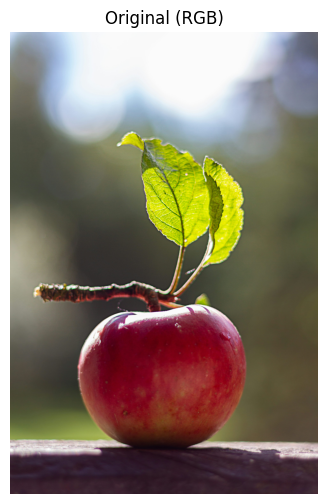

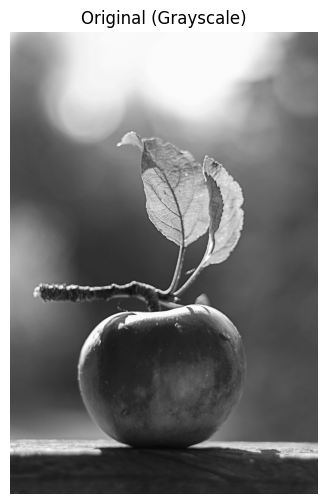

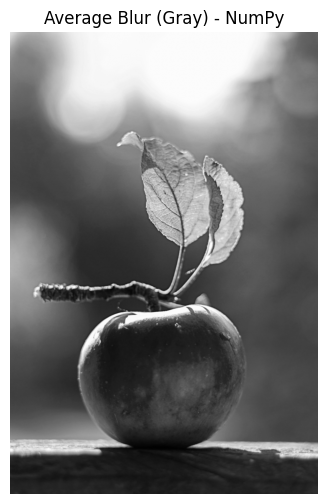

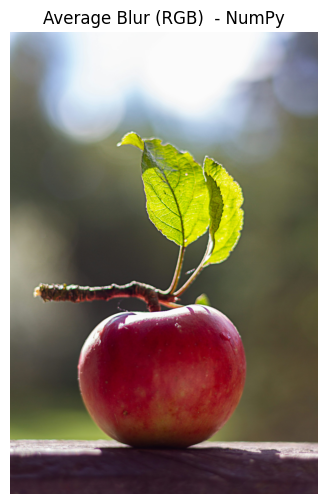

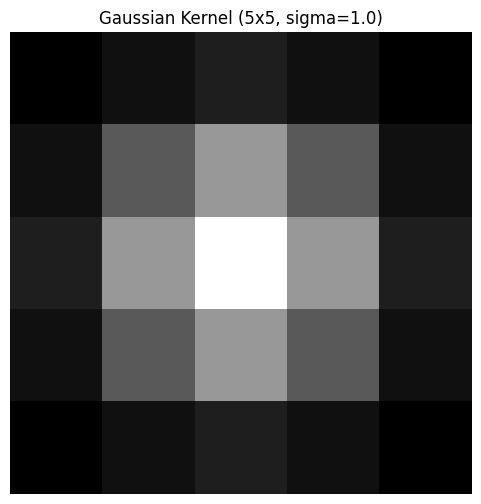

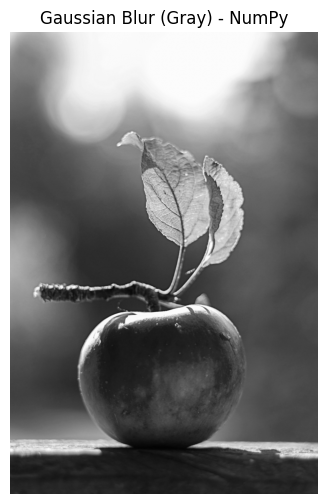

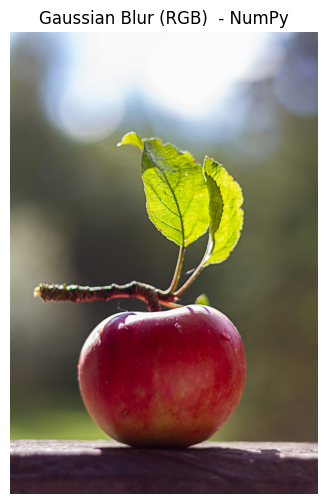

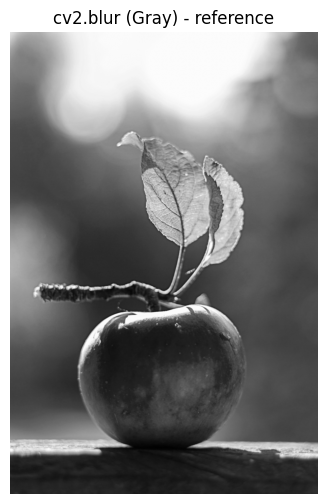

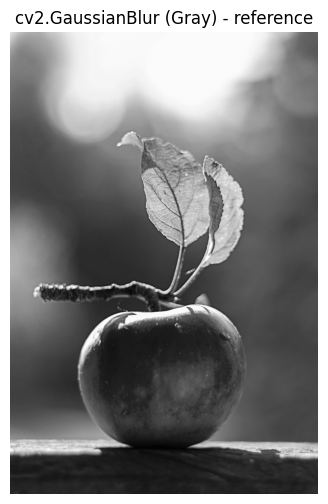

Mean abs diff (NumPy avg vs cv2.blur): 0.460359037037037
Mean abs diff (NumPy gaussian vs cv2.GaussianBlur): 0.4733154074074074


In [13]:
# Part A — Convolution + Average Blur + Gaussian Blur (using NumPy)

import numpy as np
import matplotlib.pyplot as plt

# Helper funtions to be used commonly in many places
def to_gray(rgb: np.ndarray) -> np.ndarray:
    '''RGB -> grayscale (weighted method).'''
    rgb_f = rgb.astype(np.float32)
    gray = 0.299 * rgb_f[..., 0] + 0.587 * rgb_f[..., 1] + 0.114 * rgb_f[..., 2]
    return np.clip(gray, 0, 255).astype(np.uint8)

def normalize_to_uint8(x: np.ndarray) -> np.ndarray:
    '''Normalizing an array to [0,255] uint8 for visualization.'''
    x = x.astype(np.float32)
    mn, mx = float(np.min(x)), float(np.max(x))
    if mx - mn < 1e-8:
        return np.zeros_like(x, dtype=np.uint8)
    y = (x - mn) / (mx - mn)
    return (y * 255.0).clip(0, 255).astype(np.uint8)

def show(title, img, cmap=None, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Using the image uploaded from my side
img_rgb = my_img.copy()
img_gray = to_gray(img_rgb)

show("Original (RGB)", img_rgb)
show("Original (Grayscale)", img_gray, cmap="gray")

# Task 1: Convolution
def convolve(img: np.ndarray, kernel: np.ndarray, pad_mode: str = "reflect") -> np.ndarray:
    '''2D convolution (grayscale) using only NumPy'''
    img = img.astype(np.float32)
    k = np.asarray(kernel, dtype=np.float32)
    if k.ndim != 2:
        raise ValueError("kernel must be 2D")
    kh, kw = k.shape
    if kh % 2 == 0 or kw % 2 == 0:
        raise ValueError("kernel size must be odd (e.g., 3x3, 5x5)")
    ph, pw = kh // 2, kw // 2

    padded = np.pad(img, ((ph, ph), (pw, pw)), mode=pad_mode)

    # Flipping kernel for convolution
    k_flip = k[::-1, ::-1]

    # Sliding-window vectorization (fast) with a loop fallback
    try:
        windows = np.lib.stride_tricks.sliding_window_view(padded, (kh, kw))
        # windows: (H, W, kh, kw)
        out = np.sum(windows * k_flip, axis=(-2, -1))
        return out
    except Exception:
        H, W = img.shape
        out = np.zeros((H, W), dtype=np.float32)
        for y in range(H):
            for x in range(W):
                patch = padded[y:y + kh, x:x + kw]
                out[y, x] = np.sum(patch * k_flip)
        return out

def convolve_rgb(img_rgb: np.ndarray, kernel: np.ndarray, pad_mode: str = "reflect") -> np.ndarray:
    '''Applying 2D convolution channel-wise on an RGB image.'''
    out = np.zeros_like(img_rgb, dtype=np.float32)
    for c in range(3):
        out[..., c] = convolve(img_rgb[..., c], kernel, pad_mode=pad_mode)
    return out

# Task 2: Average Blur
def average_blur_gray(img: np.ndarray, ksize: int) -> np.ndarray:
    '''Average blur (box filter) for grayscale using convolve().'''
    box = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    blurred = convolve(img, box)
    return np.clip(blurred, 0, 255).astype(np.uint8)

def average_blur_rgb(img_rgb: np.ndarray, ksize: int) -> np.ndarray:
    box = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    blurred = convolve_rgb(img_rgb, box)
    return np.clip(blurred, 0, 255).astype(np.uint8)

avg_blur_gray = average_blur_gray(img_gray, ksize=5)
avg_blur_rgb  = average_blur_rgb(img_rgb,  ksize=5)

show("Average Blur (Gray) - NumPy", avg_blur_gray, cmap="gray")
show("Average Blur (RGB)  - NumPy", avg_blur_rgb)

# Task 3: Gaussian Blur
def gaussian_kernel(ksize: int, sigma: float) -> np.ndarray:
    '''Generate a normalized 2D Gaussian kernel of size ksize x ksize.'''
    if ksize % 2 == 0:
        raise ValueError("ksize must be odd")
    ax = np.arange(-(ksize // 2), (ksize // 2) + 1, dtype=np.float32)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * (sigma**2)))
    kernel /= np.sum(kernel)
    return kernel.astype(np.float32)

gk = gaussian_kernel(ksize=5, sigma=1.0)

gauss_blur_gray = convolve(img_gray, gk)
gauss_blur_rgb  = convolve_rgb(img_rgb,  gk)

gauss_blur_gray_u8 = np.clip(gauss_blur_gray, 0, 255).astype(np.uint8)
gauss_blur_rgb_u8  = np.clip(gauss_blur_rgb,  0, 255).astype(np.uint8)

show("Gaussian Kernel (5x5, sigma=1.0)", normalize_to_uint8(gk), cmap="gray")
show("Gaussian Blur (Gray) - NumPy", gauss_blur_gray_u8, cmap="gray")
show("Gaussian Blur (RGB)  - NumPy", gauss_blur_rgb_u8)

# Comparison with cv2 functions
import cv2
cv_avg = cv2.blur(img_gray, (5, 5))
cv_gau = cv2.GaussianBlur(img_gray, (5, 5), 1.0)

show("cv2.blur (Gray) - reference", cv_avg, cmap="gray")
show("cv2.GaussianBlur (Gray) - reference", cv_gau, cmap="gray")

print("Mean abs diff (NumPy avg vs cv2.blur):", np.mean(np.abs(avg_blur_gray.astype(np.int32) - cv_avg.astype(np.int32))))
print("Mean abs diff (NumPy gaussian vs cv2.GaussianBlur):", np.mean(np.abs(gauss_blur_gray_u8.astype(np.int32) - cv_gau.astype(np.int32))))

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

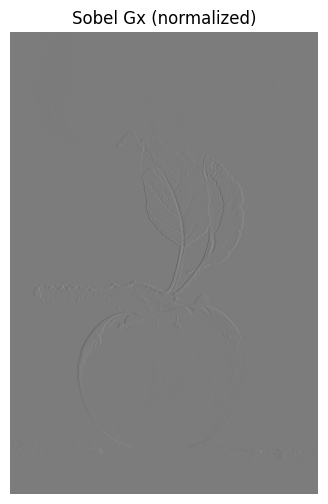

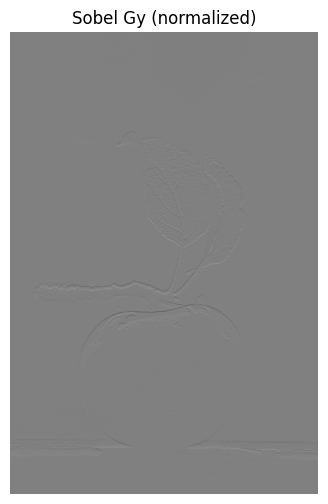

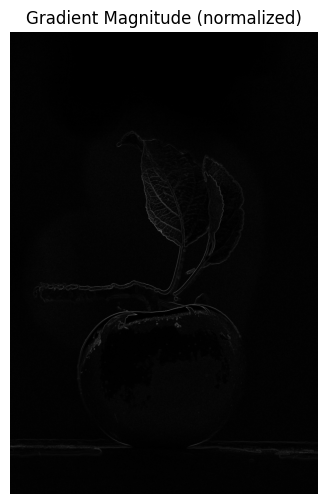

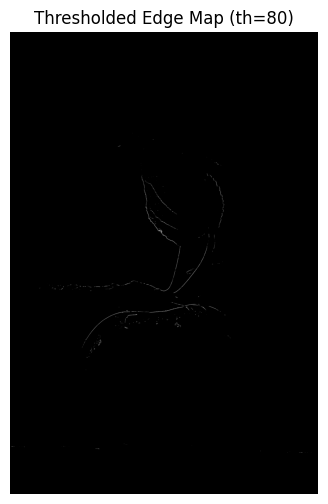

Edge map dtype/shape: uint8 (4500, 3000)


In [14]:
# Part B — Sobel Edge Detection (using NumPy)

import numpy as np

# Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

Gx = convolve(img_gray, sobel_x)
Gy = convolve(img_gray, sobel_y)

mag = np.sqrt(Gx**2 + Gy**2)

Gx_u8  = normalize_to_uint8(Gx)
Gy_u8  = normalize_to_uint8(Gy)
mag_u8 = normalize_to_uint8(mag)

# Simple thresholding of 80% as a part of experimentation
th = 80
edges_binary = (mag_u8 > th).astype(np.uint8) * 255

show("Sobel Gx (normalized)", Gx_u8, cmap="gray")
show("Sobel Gy (normalized)", Gy_u8, cmap="gray")
show("Gradient Magnitude (normalized)", mag_u8, cmap="gray")
show(f"Thresholded Edge Map (th={th})", edges_binary, cmap="gray")

print("Edge map dtype/shape:", mag_u8.dtype, mag_u8.shape)

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



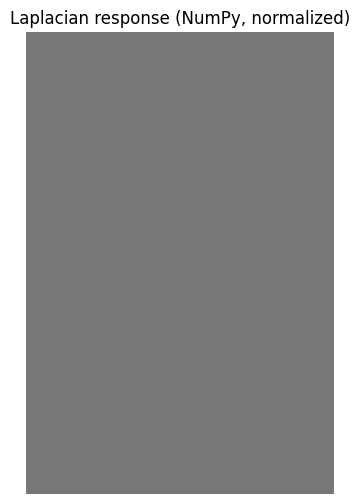

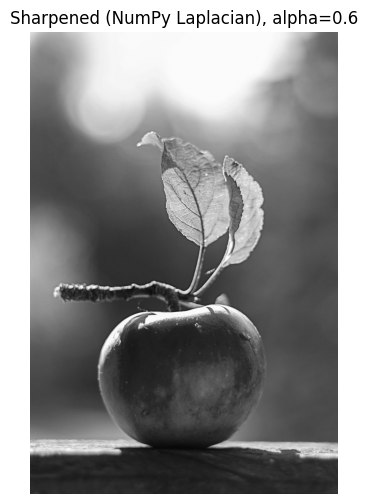

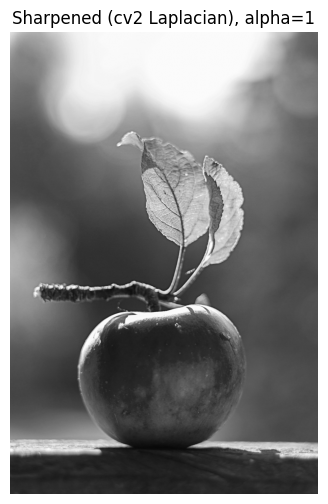

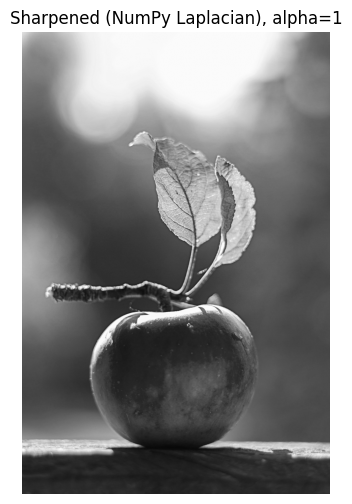

Mean abs diff (lap_np vs lap_cv): 0.0
Mean abs diff (sharp_np vs sharp_cv) [alpha=1]: 0.0


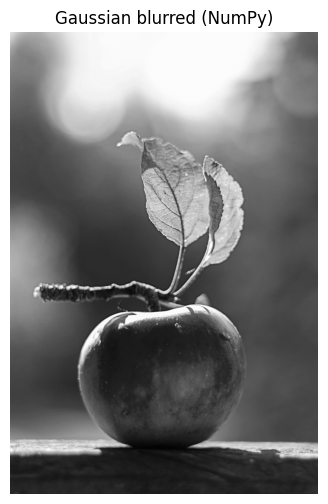

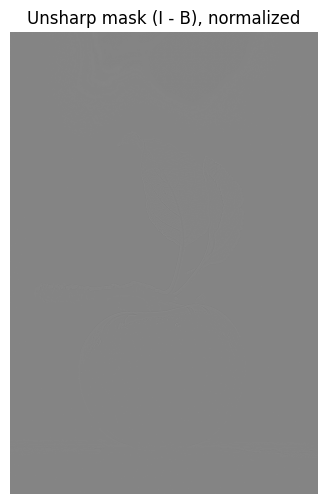

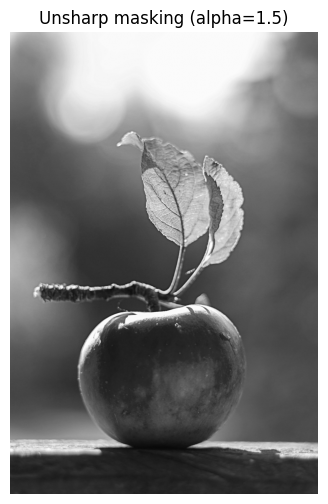

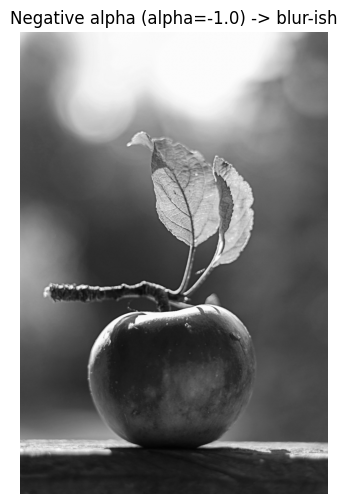

In [15]:
# Part C — Laplacian Sharpening + Unsharp Masking (using NumPy)

import numpy as np
import cv2

# Task 1: Laplacian Sharpening
# I am using a 3x3 4-connected Laplacian kernel.
# This sign convention matches cv2.Laplacian(ksize=1) for the common discrete stencil.
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]], dtype=np.float32)

lap_np = convolve(img_gray, laplacian_kernel)

alpha = 0.6
sharp_np = img_gray.astype(np.float32) - alpha * lap_np
sharp_np_u8 = np.clip(sharp_np, 0, 255).astype(np.uint8)

show("Laplacian response (NumPy, normalized)", normalize_to_uint8(lap_np), cmap="gray")
show(f"Sharpened (NumPy Laplacian), alpha={alpha}", sharp_np_u8, cmap="gray")

# Comparison with cv2 (alpha = 1)
alpha_cmp = 1.0
lap_cv = cv2.Laplacian(img_gray, cv2.CV_32F, ksize=1)
sharp_cv = np.clip(img_gray.astype(np.float32) - alpha_cmp * lap_cv, 0, 255).astype(np.uint8)

sharp_np_cmp = np.clip(img_gray.astype(np.float32) - alpha_cmp * lap_np, 0, 255).astype(np.uint8)

show("Sharpened (cv2 Laplacian), alpha=1", sharp_cv, cmap="gray")
show("Sharpened (NumPy Laplacian), alpha=1", sharp_np_cmp, cmap="gray")

# Matrix comparison
print("Mean abs diff (lap_np vs lap_cv):", float(np.mean(np.abs(lap_np - lap_cv))))
print("Mean abs diff (sharp_np vs sharp_cv) [alpha=1]:", float(np.mean(np.abs(sharp_np_cmp.astype(np.float32) - sharp_cv.astype(np.float32)))))

#  Task 2: Unsharp Masking
blur_u8 = gauss_blur_gray_u8  # from Part A (NumPy Gaussian blur)
mask = img_gray.astype(np.float32) - blur_u8.astype(np.float32)

alpha_usm = 1.5
usm = img_gray.astype(np.float32) + alpha_usm * mask
usm_u8 = np.clip(usm, 0, 255).astype(np.uint8)

# Showing how negative alpha values produces a blur-like effect
alpha_neg = -1.0
usm_neg = img_gray.astype(np.float32) + alpha_neg * mask
usm_neg_u8 = np.clip(usm_neg, 0, 255).astype(np.uint8)

show("Gaussian blurred (NumPy)", blur_u8, cmap="gray")
show("Unsharp mask (I - B), normalized", normalize_to_uint8(mask), cmap="gray")
show(f"Unsharp masking (alpha={alpha_usm})", usm_u8, cmap="gray")
show(f"Negative alpha (alpha={alpha_neg}) -> blur-ish", usm_neg_u8, cmap="gray")

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

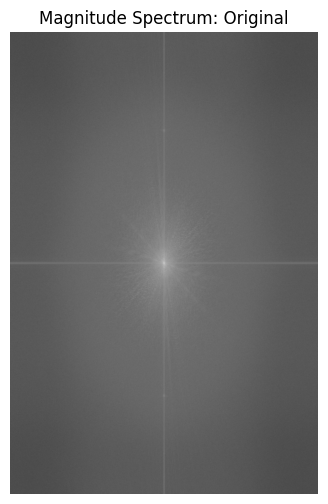

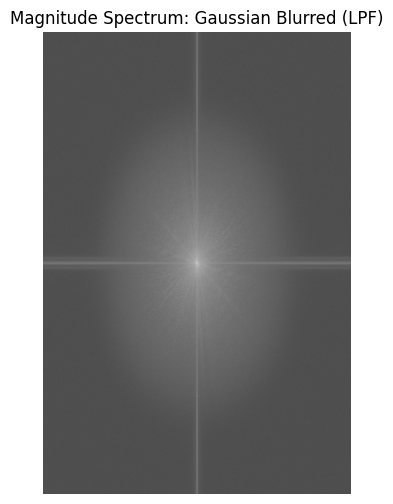

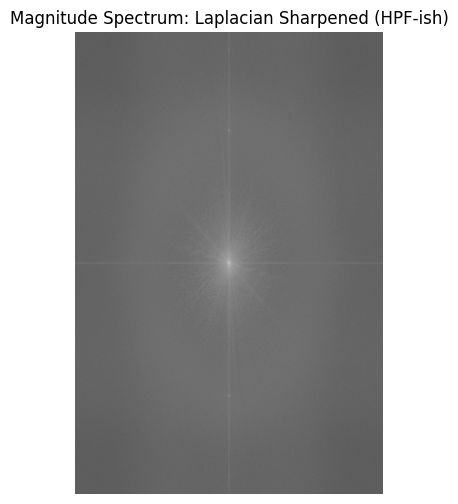

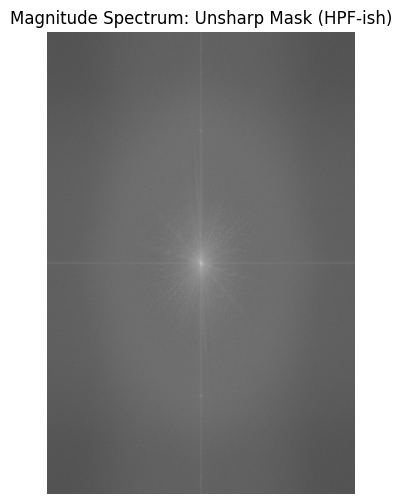

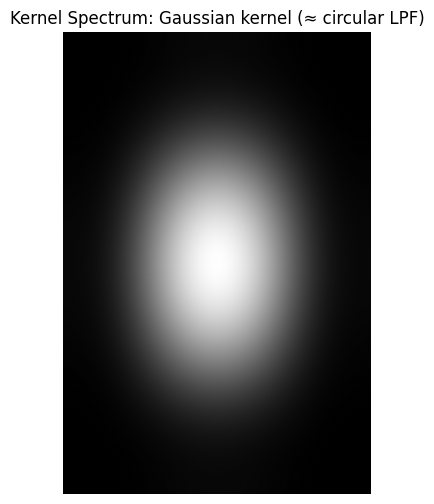

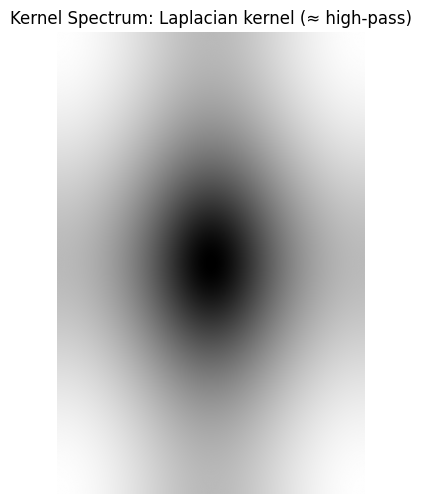

In [16]:
# Part D — Frequency Analysis (LPF & HPF verification)

import numpy as np

def magnitude_spectrum(img_gray_u8: np.ndarray) -> np.ndarray:
    '''
    Compute log-magnitude spectrum of a grayscale image for visualization.
    '''
    f = np.fft.fft2(img_gray_u8.astype(np.float32))
    fshift = np.fft.fftshift(f)
    mag = np.log1p(np.abs(fshift))
    return normalize_to_uint8(mag)

# Images to compare
orig = img_gray
gaus = gauss_blur_gray_u8           # low-pass filtered
lap_sharp = sharp_np_u8             # laplacian sharpened (high-frequency emphasis)
usm_sharp = usm_u8                  # unsharp mask (high-frequency emphasis)

spec_orig = magnitude_spectrum(orig)
spec_gaus = magnitude_spectrum(gaus)
spec_lap  = magnitude_spectrum(lap_sharp)
spec_usm  = magnitude_spectrum(usm_sharp)

show("Magnitude Spectrum: Original", spec_orig, cmap="gray")
show("Magnitude Spectrum: Gaussian Blurred (LPF)", spec_gaus, cmap="gray")
show("Magnitude Spectrum: Laplacian Sharpened (HPF-ish)", spec_lap, cmap="gray")
show("Magnitude Spectrum: Unsharp Mask (HPF-ish)", spec_usm, cmap="gray")


# Observations:
# - The bright center corresponds to LOW frequencies (slow intensity changes / smooth regions).
# - The outer parts correspond to HIGH frequencies (edges / textures).
#
# Gaussian blur is a LOW-PASS filter:
# - It attenuates high-frequency components -> outer regions get darker.
#
# Sharpening (Laplacian / Unsharp) boosts HIGH frequencies:
# - Outer regions become relatively brighter (more energy in edges/textures).
#
# This is why "convolution = filtering" in frequency domain:
# - Multiplication in frequency domain corresponds to convolution in spatial domain,
#   and different kernels selectively suppress/amplify bands of frequencies.

# Bonus: Frequency response of kernels (FFT of kernel padded to image size)
def kernel_spectrum(kernel: np.ndarray, out_shape: tuple[int, int]) -> np.ndarray:
    kh, kw = kernel.shape
    H, W = out_shape
    pad = np.zeros((H, W), dtype=np.float32)
    pad[:kh, :kw] = kernel.astype(np.float32)
    f = np.fft.fft2(pad)
    fshift = np.fft.fftshift(f)
    mag = np.log1p(np.abs(fshift))
    return normalize_to_uint8(mag)

H, W = orig.shape
spec_gk  = kernel_spectrum(gk, (H, W))
spec_lap = kernel_spectrum(laplacian_kernel, (H, W))

show("Kernel Spectrum: Gaussian kernel (≈ circular LPF)", spec_gk, cmap="gray")
show("Kernel Spectrum: Laplacian kernel (≈ high-pass)", spec_lap, cmap="gray")

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

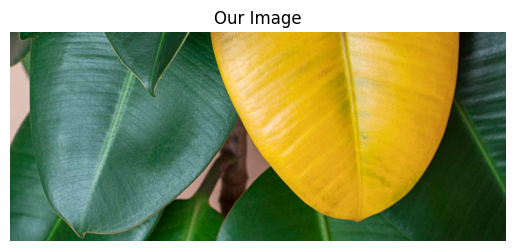

In [17]:
plt.imshow(img)
plt.axis("off")
plt.title("Our Image")
plt.show()

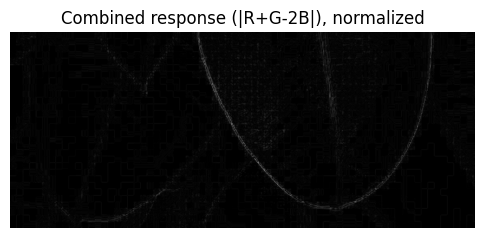

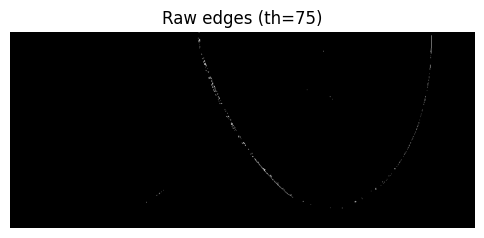

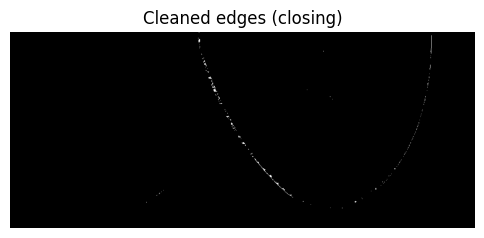

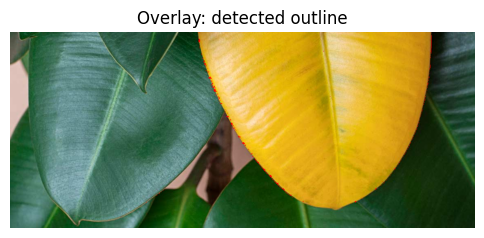

In [18]:
# Part E — Custom Colour Kernel (Detect Yellow Leaf Edges)

import numpy as np

img_leaf = img.copy().astype(np.uint8)

# Splitting channels
R = img_leaf[..., 0].astype(np.float32)
G = img_leaf[..., 1].astype(np.float32)
B = img_leaf[..., 2].astype(np.float32)

# Custom high-pass kernel (Laplacian 8-connected)
# Highlights fine edges strongly
K = np.array([[-1, -1, -1],
              [-1,  8, -1],
              [-1, -1, -1]], dtype=np.float32)

# Applying separately to each channel
r_resp = convolve(R, K)
g_resp = convolve(G, K)
b_resp = convolve(B, K)

# Combining to emphasize edges where pixels become "yellow-ish":
# Yellow proxy: (R + G - 2B) is large
combo = r_resp + g_resp - 2.0 * b_resp
combo_abs = np.abs(combo)
combo_u8 = normalize_to_uint8(combo_abs)

# Thresholding -> outline
th = 75
edges = (combo_u8 > th).astype(np.uint8)

# Simple morphological cleanup (usiing NumPy): closing = dilate then erode
def binary_dilate(x: np.ndarray, ksize: int = 3) -> np.ndarray:
    pad = ksize // 2
    xpad = np.pad(x, ((pad, pad), (pad, pad)), mode="reflect")
    win = np.lib.stride_tricks.sliding_window_view(xpad, (ksize, ksize))
    return (np.max(win, axis=(-2, -1)) > 0).astype(np.uint8)

def binary_erode(x: np.ndarray, ksize: int = 3) -> np.ndarray:
    pad = ksize // 2
    xpad = np.pad(x, ((pad, pad), (pad, pad)), mode="reflect")
    win = np.lib.stride_tricks.sliding_window_view(xpad, (ksize, ksize))
    return (np.min(win, axis=(-2, -1)) > 0).astype(np.uint8)

edges_clean = binary_erode(binary_dilate(edges, 3), 3)

# Overlay edges on original
overlay = img_leaf.copy()
overlay[edges_clean.astype(bool)] = np.array([255, 0, 0], dtype=np.uint8)  # red outline

show("Combined response (|R+G-2B|), normalized", combo_u8, cmap="gray")
show(f"Raw edges (th={th})", (edges * 255).astype(np.uint8), cmap="gray")
show("Cleaned edges (closing)", (edges_clean * 255).astype(np.uint8), cmap="gray")
show("Overlay: detected outline", overlay)

# Explanation:
# i did NOT run a generic Sobel/Canny on grayscale.
# Instead, I built a "yellow-ness sensitive" edge map by combining channel-wise
# high-pass responses in the direction of (R + G - 2B).

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
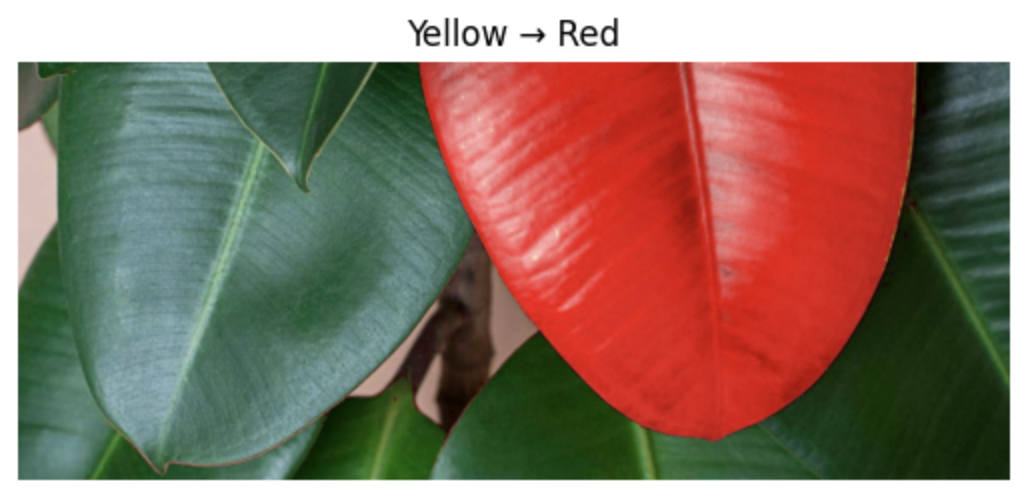

Also, we can change to a less brighter colour
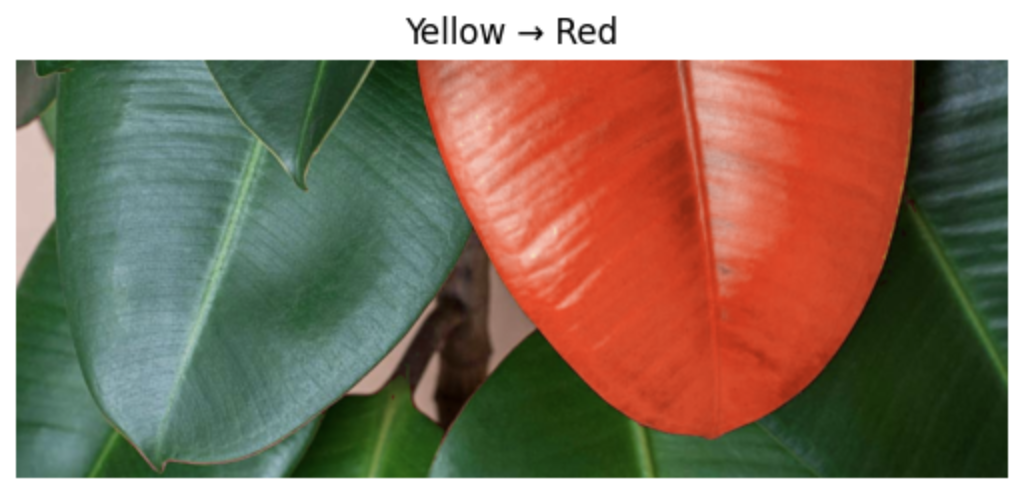

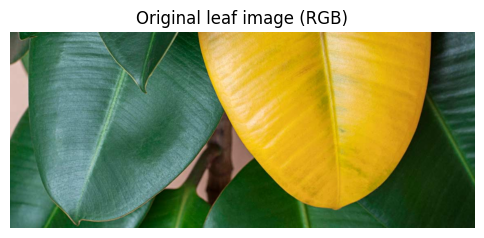

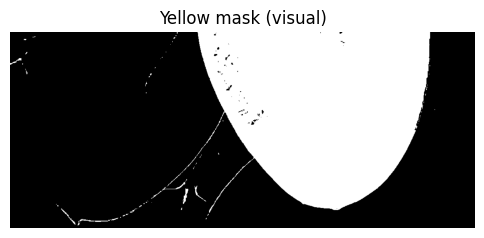

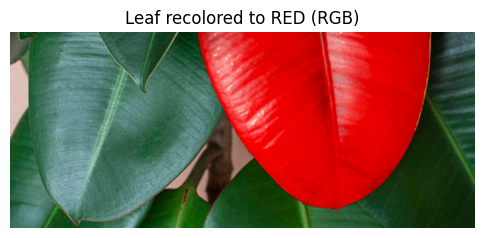

In [19]:
# Bonus Part F — Color Manipulation using Lecture 2 concepts
# Implementation using NumPy and RGB <-> HSV

import numpy as np

def rgb_to_hsv_np(rgb_u8: np.ndarray) -> np.ndarray:
    '''
    RGB uint8 [0..255] -> HSV float32:
    H in [0,1), S in [0,1], V in [0,1]
    '''
    rgb = rgb_u8.astype(np.float32) / 255.0
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]
    cmax = np.max(rgb, axis=-1)
    cmin = np.min(rgb, axis=-1)
    delta = cmax - cmin

    h = np.zeros_like(cmax)
    mask = delta > 1e-8

    idx = mask & (cmax == r)
    h[idx] = ((g[idx] - b[idx]) / delta[idx]) % 6.0

    idx = mask & (cmax == g)
    h[idx] = ((b[idx] - r[idx]) / delta[idx]) + 2.0

    idx = mask & (cmax == b)
    h[idx] = ((r[idx] - g[idx]) / delta[idx]) + 4.0

    h = (h / 6.0) % 1.0

    s = np.zeros_like(cmax)
    s[cmax > 1e-8] = delta[cmax > 1e-8] / cmax[cmax > 1e-8]
    v = cmax

    return np.stack([h, s, v], axis=-1).astype(np.float32)

def hsv_to_rgb_np(hsv: np.ndarray) -> np.ndarray:
    '''
    HSV float32 (H in [0,1), S,V in [0,1]) -> RGB uint8.
    '''
    h, s, v = hsv[..., 0], hsv[..., 1], hsv[..., 2]
    h6 = (h * 6.0) % 6.0
    i = np.floor(h6).astype(np.int32)
    f = h6 - i

    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    r = np.zeros_like(v)
    g = np.zeros_like(v)
    b = np.zeros_like(v)

    i0 = (i == 0); r[i0], g[i0], b[i0] = v[i0], t[i0], p[i0]
    i1 = (i == 1); r[i1], g[i1], b[i1] = q[i1], v[i1], p[i1]
    i2 = (i == 2); r[i2], g[i2], b[i2] = p[i2], v[i2], t[i2]
    i3 = (i == 3); r[i3], g[i3], b[i3] = p[i3], q[i3], v[i3]
    i4 = (i == 4); r[i4], g[i4], b[i4] = t[i4], p[i4], v[i4]
    i5 = (i == 5); r[i5], g[i5], b[i5] = v[i5], p[i5], q[i5]

    rgb = np.stack([r, g, b], axis=-1)
    return (np.clip(rgb, 0, 1) * 255.0 + 0.5).astype(np.uint8)

img_leaf = img.copy().astype(np.uint8)

hsv = rgb_to_hsv_np(img_leaf)
h, s, v = hsv[..., 0], hsv[..., 1], hsv[..., 2]

# Yellow hue ~ 60 degrees => 60/360 = 0.166 in [0,1)
yellow_mask = (h > 0.10) & (h < 0.22) & (s > 0.25) & (v > 0.25)

# Changing leaf color to RED
hsv_new = hsv.copy()
hsv_new[..., 0][yellow_mask] = 0.0  # red hue
hsv_new[..., 1][yellow_mask] = np.clip(hsv_new[..., 1][yellow_mask] * 1.2, 0, 1)

rgb_new = hsv_to_rgb_np(hsv_new)

show("Original leaf image (RGB)", img_leaf)
show("Yellow mask (visual)", (yellow_mask.astype(np.uint8) * 255), cmap="gray")
show("Leaf recolored to RED (RGB)", rgb_new)

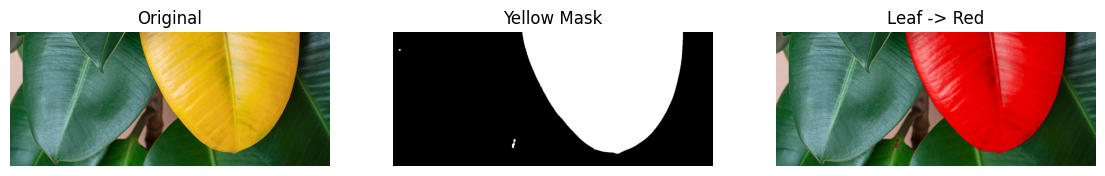

In [20]:
# Bonus Part F — Color Manipulation using Lecture 2 concepts
# Implementation using cv2 functions and RGB <-> HSV

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_rgb = img.copy()

# 1) RGB -> HSV (OpenCV H: 0..179)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 2) Yellow leaf mask in HSV
lower_yellow = np.array([15, 60, 60], dtype=np.uint8)
upper_yellow = np.array([40, 255, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# clean mask (makes recolor smoother)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# 3) Change leaf color to red by setting Hue to red (0 in OpenCV HSV)
hsv_red = hsv.copy()
leaf = mask > 0
hsv_red[..., 0][leaf] = 0  # red hue

# Making it look "redder" (small saturation boost; safe-clipped)
hsv_red[..., 1][leaf] = np.clip(hsv_red[..., 1][leaf].astype(np.int16) + 30, 0, 255).astype(np.uint8)

# HSV -> RGB
out_rgb = cv2.cvtColor(hsv_red, cv2.COLOR_HSV2RGB)

# Display
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1); plt.imshow(img_rgb);   plt.title("Original");        plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(mask, cmap="gray"); plt.title("Yellow Mask"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(out_rgb);   plt.title("Leaf -> Red");     plt.axis("off")
plt.show()
